## Table of Contents
* [Load Dataset](#chapter1.1)
* [Exploratory Data Analysis](#chapter2.1)
    * [Image counts for each class](#section_2_1)
    * [Compare image sizes for each class](#section_2_2)
    * [Cluster Analysis](#section_2_3)
* [Data Preparation and Pre-processing](#chapter3)
    * [Labeling Images](#section_3_1)
    * [Image Augmentation for imbalance dataset](#section_3_2)
    * [Convert Image Feature & Labels to Array](#section_3_3)
    * [Normalization](#section_3_3)
* [Model training and Optimization](#chapter4)
    * [Model Training](#section_4_2)
    * [Hyper Parameter Tuning](#section_4_1)
    * [Test & Evaluation](#chapter5)
        * [Loss plot and Accuracy plot](#section_5_1)
        * [Confusion Matrix](#section_5_2)
        * [Classification report](#section_5_3)
    * [Inference](#section_4_3)
 * [Visual Saliency Map Generation using Explainable AI](#chapter5)
 * [Solution for Acne-skin and monkeypox similarity](#chapter6)

In [1]:
# import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import dask.bag as bag
from PIL import Image
import pandas as pd
from dask.diagnostics import ProgressBar
from os import listdir
import random

import pandas as pd
#math operations
import numpy as np
#machine learning
import cv2                     
import os                  
from random import shuffle
from tqdm import tqdm  
import random
#for opening and loading image
from PIL import Image
#for preprocessing
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
#Doing One hot encoding as classifier has multiple classes
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from random import shuffle
#For augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import albumentations as A
#MobileNetV2 model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Model, layers
from numpy import loadtxt

import itertools
from sklearn.metrics import confusion_matrix,classification_report

from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

#import K-Means
from sklearn.cluster import KMeans

#Other
from IPython import display
from base64 import b64decode

base64_data = "iVBORw0KGgoAAAANSUhEUgAAB4AAAAQ4CAYAAADo08FDAAAAAXNSR0IArs4c6QAAAARzQklUCAgICHwIZIgAAAAJcEhZcwAADsQAAA7EAZUrDhsAAASaaVRYdFhNTDpjb20uYWRvYmUueG1wAAAAAAA8P3hwYWNrZXQgYmVnaW49J++7vycgaWQ9J1c1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCc/Pgo8eDp4bXBtZXRhIHhtbG5zOng9J2Fkb2JlOm5zOm1ldGEvJz4KPHJkZjpSREYgeG1sbnM6cmRmPSdodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjJz4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOkF0dHJpYj0naHR0cDovL25zLmF0dHJpYnV0aW9uLmNvbS9hZHMvMS4wLyc+CiAgPEF0dHJpYjpBZHM+CiAgIDxyZGY6U2VxPgogICAgPHJkZjpsaSByZGY6cGFyc2VUeXBlPSdSZXNvdXJjZSc+CiAgICAgPEF0dHJpYjpDcmVhdGVkPjIwMjMtMDEtMDg8L0F0dHJpYjpDcmVhdGVkPgogICAgIDxBdHRyaWI6RXh0SWQ+OGEwOGNiNzgtMzBhMy00YjcyLWJiMzUtYWE5NzE1ZDRjNDEzPC9BdHRyaWI6RXh0SWQ+CiAgICAgPEF0dHJpYjpGYklkPjUyNTI2NTkxNDE3OTU4MDwvQXR0cmliOkZiSWQ+CiAgICAgPEF0dHJpYjpUb3VjaFR5cGU+MjwvQXR0cmliOlRvdWNoVHlwZT4KICAgIDwvcmRmOmxpPgogICA8L3JkZjpTZXE+CiAgPC9BdHRyaWI6QWRzPgogPC9yZGY6RGVzY3JpcHRpb24+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpkYz0naHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8nPgogIDxkYzp0aXRsZT4KICAgPHJkZjpBbHQ+CiAgICA8cmRmOmxpIHhtbDpsYW5nPSd4LWRlZmF1bHQnPkJsdWUgTW9kZXJuIFRlY2hub2xvZ3kgQnVzaW5lc3MgUHJlc2VudGF0aW9uIC0gNjwvcmRmOmxpPgogICA8L3JkZjpBbHQ+CiAgPC9kYzp0aXRsZT4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6cGRmPSdodHRwOi8vbnMuYWRvYmUuY29tL3BkZi8xLjMvJz4KICA8cGRmOkF1dGhvcj5DaGlyYW5qYXlhIENoYW5kcmFzZW5hPC9wZGY6QXV0aG9yPgogPC9yZGY6RGVzY3JpcHRpb24+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczp4bXA9J2h0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8nPgogIDx4bXA6Q3JlYXRvclRvb2w+Q2FudmE8L3htcDpDcmVhdG9yVG9vbD4KIDwvcmRmOkRlc2NyaXB0aW9uPgo8L3JkZjpSREY+CjwveDp4bXBtZXRhPgo8P3hwYWNrZXQgZW5kPSdyJz8+AzkDlAAAIABJREFUeJzsvVuQdUl2HvRl7n0uVfVX1X/ty9893T2Xnh7NjDXCkoaQELqAkMIKGxFWhG1hsHDIfiB4AZsHOwLb2BABhF54AAJDQNhAIDAOwg7swEBYXPSiUFgKSUhihC4Wo5lpdU93//3f6nLO3pk8ZK7MlWvn3mefqlN/narKL6LqnLN37tyZuXOvXGt9mSsVDj5rAQv3t2ko/7mJvBXLj2DFZyYdv8TmynER9T4LNtlWBVcKugK0BpQCqsr9rjRQTYBJDdQToKrdOaXdNdYCpgWMcX/Ut61/l60/Zow/7s9ROmPc9SENOwflygOk9yM5Ydh3Ss+vAeL9s+8cXF3l9fUEmE6BunbnjQGaBmgbl49i74hhdevLn9Jb3x66AmYzoJ66sprG5b9c+jY0671+Wrv2ofytcXWYzIDZ1KVpDXB6Ep8V3YOXqZ4As7l75gBwegq07NnCxmsBd8/ZDJjOXFstl8DiFFgu4jXGxmdGz4v6Vz1xv9vWXbtpmaOrWLamceVqm83eo//m3WECyB+TkM1gbXqwrn29Ju7wcuHa3bRnLu21wmTq+vFk6vrW4hRYLNx7dm6U8bEggyDnNaD9d+W/U5+payfzZzNAw48drTtPMhHKD0MsD8q/775Q/j5IxzmS78Y4uWeaKJdbwxIhHbtpPKHjyfjOZD8fm4POoGNZgCj/KW+qhxLlpfEl3NOgqxsI8Loq325B77Zp/S/MtigoKLheUEz+ol/2XhXYnu8XcoOLAh8nCgpeFK6yvs/kmNbxtz8V6ibFW6+u2fniYMO/fgS/UOdE/ExUNItEh0v8PQURiWN5zWtJf0faH7K3UEGtHndrm/aL8OjO+gxV/GRfY19V8U+lyfPX9jhnOnlmisB/9Lab7enz8riw10KaFekTOy93r8t6V1T0Iwc72B/n9mzmMvfJzpN9KX3OHfrF29GhfZjcC+lFZ+VypSUfcU63EG1o2LNRiP5ybqfLOvPj9D3Umx0f5RwcAusbib/brt8VpP8h1FO0Ld2r82fQ8Vta8ZkrO79/NhkfL3reBZO5AX++SfuwccWKPK33XxteH6TPF+Leg2Oh1CX4+KzYqU4HT9uVoLXzc05n7tzixPns+7iOy8Jk6v60dn74ZuE+GepLKlpBQQGBhEwifPsGJyHNufAPAsufJ+cyF8ycmCVBS5+Ur1IAybtwe7oHEZi8LHA6rTWIhChYWQSUuHYMQh1J+F+ysE0ey1BZpObOB68hxeOc9ZO3oSYzBmiW7ngx7FZAWl6rjhcEXHHfbcEVBQ0RQ+c5uLFKhhc3wvqcLTx9OGnjOYNoqFqfT5J0aMznN8vIaLrOWi+K/JjceoOG8g8TuyjrTP6GEdI0qYpPHssZ51b86BhP3CArcrKgoOCaYB1xtjHRd81lKNmM172eBTcEzO9hDMIERQXAKkCR74YTEkgd3SK7lKyQiih69FTbTZ7eMPOT8vNKo4WfNElKbUHERcsrTk6Mva3vX9Y/0MB9XJbP4iyOAGHEJe4ymx4Doi3UObHO/ZC+Nysv6Utz2WMYayzuLoVBdnFER7aAXceIL6VY1TI+2PDIpL3J0zC70LJjWeQmAdh4W2O9PW1EWur/7HCQazaWS/qv151s2Cn3hp578HH7ccPSc8u1B68g+QNE3VY2r8ock2WCeMd6ZEnucGhvfsLG31b0hV7OgPdRQYQn981dnPHBS1d8lvwVZeXZka9E6fhnt2whEPlwNC0a6E4Cqa+fk2bIA9jnzSso2DaQhEIcwBL5ayPBK2f+ELFnmCOXQOnJuStXiwIIq3OVAhS/lq8mRpre6DggW59WDrJSoR0z5iavLFfyLuD9XSvLvgHjrDceM3CNRHZ89gfD6reCQXSUXYFCcK5GaaOCi4Y09PiEJQCJsZcQrmx85bOkaYWtQg8BbNNrNGN1+UxWvhrXVmmRjI0ksfOusTIhnf0a8qCx1iAQypQWPq1iSj6fPUtGUuJU4WO+9UWwKQncRwAHZAzpgoKCgquCnIo9RpxdiMi7CXLUT1IKq5Uqt9KIxjDTupVBxrgoMjeiTQq6GPLjXQWQPqjj5Hi+2oirnwASMph8L6uQ8B6SILZpnkq8R4EUyZ1jpDKR1trXZVAfvEkYI5fWGVDkpWN82H15cxLYp6HneGHyNPe+junDa7zjnVswEums6LjerPjM/exJc6ljlWjHziRh2Se6l7CL3UlrAm+ckG6UhhN38npuF1rxHlgI+7OnHuEyevAsLS1s0tof57OrMxWjNrBwsiwUhxHGuWtYlfIQZeo5tRYsJ7WpfCwzxY7TAU7+Un0Gmjb1B+TanFUgtI+UZ0p8p0MjKp74DWisBPukbHnZVPzjx6x1zzS3ArkDxeoufUHyvRb9OJTdxuhsk9rrshX6V7NfEmTUHnqPWX2uwQrg3EO/6spjwc1CXx/mg4vxg7iKgycZzDxUsAUjhg2SFT58wE7CPcpQjcwhnitP+OrfMw0xiJ5x5Fv1ym7lLHE+MNOAOeKyIV18tFIsrciBe1y4AXADUJpuHMrQW/AikXUMcLKTxskWUD7ccyBuyXDxjmkKH50YG8zwSewdxUJNi/FVTlZScKsoLADtx3JtIglMWwiQYctX4vLZsgaOBDb+vpSvEoYinwyWEMnsC43hIRy0Tcux0pArArGgoOCG4ELE3RWQoZss4mwG7O0Dh3eA/X1gZw9qPncjaNvAHh8Dz54CTx4DH33gthHZJqdaQcFaMFE/M0yntMxpr4CVPssweTHzMvaG1eXECZHPAy8zTxpIG54PRXhDeSezGCJtzyJEz0Eg89uG2581vxFkdCfJNjsB+uqfOT6G+Ns2ZF77YO8pKWcyz6ljc/qt6sjWDSQf2ZfcT40o03L+YMvyXyWL6EuQe36yNL/MWB/1KoTc8rKS19NG3zng5TA/zcnUnjbJ4gL7QGgb4xdXcT+zJEDB5pHTD/89iSrRQ4ynjYHgryBiOYs1ZJpcnc99EnzVL9+CkcssxT5pUn6ylZUfm7RibTCAUOdsYbvlyqWh7b3qifMl1RULh74l4IsEaXGAVglRfg0I4AHwZ7xND6agQILPgAmCm4SQX/UTQjVbN0u6FTOmQ1ogkr+ZgdYiJX95nH3YaKDIQZQTwDwzS4OuyqTZtCLIR4ghyEFt08gZbGe4X281NtxuN0X+9T2STYCIJNvGjK/6PnUXgZvS1wq2C1Lf40MA7ScPsD102TscVv/633zvnSECOOTh85RbMkBFsjYYz8iPycl438YxHRCf3qBNjCIy9Fi+Yf94PnbbeC9ep+T+LH1BQUHBVceQOEuc5CPSX0ghrjF0BUynwP4hcO8+9J37qO/dR314iHp3D5PZFFopWGPQnJyiffYE7eOPsfj9d9F+833Yx4+Ao+clctGNQ+7FvIogvcpPGCQygm+XRRP4squsxCF0T+XJOEYy0/WSEJIGMuN9o85JeqYvO5EMRU/0GEP89rTzOtmFcxl7BOJ4b3HO6BPr4Y/S+57tdEDOpZZLcxYEc0dm0PM7sYnYudz9t/IVYP2O+2blIhAuKxKi1jeAsTEPW6W2JrcXc/qTJNqSENBcdnBjXcoxLpD8BBRjxDMRpDSRolQu+gtkobiOk410Ljfs9D7nDSuO4dGx50WhfOk8bxsqq/JyWVlHGsvw2Lm9kDtgDZIlf/041VfNZDIA81/QQjTLFqrltpNMRGaomK+GZhPuWZpQX8BFSOsrnGKrYHl92f1DHaSfRNbTR6ixPlQ3TZCgiV3bAD6ZX5NPi0ecu+4E8JgBpaDgshFmLJEz1iKGZ/aC37Y+dKQXMIH85QQwW7nDyV8uj4ID2qR/sjxhgGTGQ04YhsG2t3Li5j3IyeQLxyZutMpAHVPnQe366mPbqzZ2vDZ+0oVuGYl0YaW6+tgSPajgJoAMCOloofHLuvGyAVBVKQlMf2GGM/tMSODMWJo1Wn15Qj7sWNax4H/zcM5hHM+8RJxc7tjNlqUBM8K4bmG7dk9x5hUUFFxF9Pipep21Svzuy+PcKPIUUMB8DuzfBl5/A/XDT6B+6WXs3r2LnVt7mM/nmE0m0H7v+mXbYHF8gpOnT/H05Vdx+rv/GMuv/i7w3jeAk6NuWLuCG4BVNvZVgY0+HE5shP0VybnO9UlBWsQTA/fJ6aN0vSSEKFGPb4ff13Lyh5+6Ds/mvOgjVtd0EHC+KxAJY9ni3DNEHPOsPLhOgeSxi3R8bDBvuTo1d3x1JpljazGELwj0fvuf/NkH8O2GuG/XMN8wy0+2k3z0PPKk0kyWoV82GIu4kpfZokPyTcHlbWyHxEpWuQY5ys/5igWZR75tUa4Vr1I/evrYeWGBJPwy7XtseX38OSJI6YFr6/lfy/rAOu8Vl2d0P+Tfm84hamP2BzASmPkj5C3D7ZQY+1SsQ1IXm6ZVyo1TuQeR+Hd4HrzcrPz5ysW6qDbyM1XF+uVlywEG3v6dqK7XnQAuKLgqCM5ZHx6Sh2lu/cxnHoqn9cfbpruS13DBKwbVoLf0kL+yUHLWVALVSZ6GKTqjIAz55HAOY3DV+JdsdH+WzMco7AxbNE4UjETLVhFuy0yvgoKbjI6RKy05/ztxHls3azPYAj2kr1Jws2op377xlMZcwI2tTPG2QIjeQWNuMIbAVvrSeW48mbR8dBHpC5IAtuI8WfTJb1GNgoKCguuOC/HX9tlERcACyoV8fvkh8MYnMfvkp3HrlVewd+cODnZ2cWs2wU5dYao1tA8b2QI4NQbHy5fw6NVX8PHde3h65w5Of30K++7XgKcfX3alCgrOh7Dq169ogyc1JHkBZHRbiTWc+nxFFeUb9osc8Kt09hL1PigirA3TMwsuDn1c7FCz9547hx9tFS6SGz4z1qjrYFdmvk2bO35JSEjUMQKElZ8W8XSScBvWwq0Atmz7JEEu8W0K+/y3htvGzF86qs8od29jEbZNknXM5sNITGlDh/PwxCHy8xuyrl3xDm20C5BcBmJ0LxZ+nxN5feSuPu+e7T0V4r6EwFtQG/JVv9zfsIoTYM+PjzWUniYA9NICNKYpFgGbj6fCr5OrJ7+fZcf7YKzzB+upa2uKGrdNw6AkgHU6SaMQwAUF2wDu9KUZUlAs7JU3EhS84PF7GjZNd/VvyIMPsjR7U4k0owo3cPwsWul5sQ0aphLfB+q7DcW9EThjQ+ceX98jNQZAE0OOlL2Q8tgmJajg5iAYTD2ygAhXoDMbMg9pdJDzThjZIWqHjb+NTSdj0XnDCWA+Zhsk5HHiiBDGlJzZHuxany7ZC6e8jAUFBVcMA77LwWOr5qCeSxyuuvg6yFo7+HMUdOVW/r78ENO3P4fZp9/G4asPcff2AQ53dnAwqbFXacy0RqUApRQsHAG8hMLpzOJgZ4q9usI3d3fxCMCJVjBfbcpK4IJrANLvTNzDMoTohCBnbL+Tf/Ws9vSeQZ8lXxAYEazSpPzF56uBg/7rr2F8UJkUPcIHocTnqPSrnv2Qj67vdG7RghxI18QQQfPCIZWATCOcaTi3Istr0ue5rclJWjpuWoRIlX0gAs8yWZbkL/3SEF2QK309fV4jQwLzJDnF0Zepc5jf3EQCz4bKdLJJ3pUL69Z0b15u+a7KNvYTchIZLFZLS/SKDbZCO7QHhWwWPg7KKFnty58v912wBuOrk3l7c66ep09W7/aVnT8b+k77ButMCGg2DoZ68HsP9HUKA10ZtxdwVUVeZltAfiUiw0MIbVev600A976c10RgF1wjMKFKe/7y1b8AoNiqoWT1L9svkAvnMOAqf62Kx15IyMfzjI6bLts1ZGHXMSQumpO/Usgoh+u0DxE1Bf24hq9bwZajx+5LZ/RmDE8gGjNadfMJBgEzgCzEhCq2ZQONscmKX6+Id0hhMpgyETyi5S3KCjbO+7E92GEvYlwvKCgouEAkjqGB88ikObP4u0lyc2Rdxzq4FbMtaeXv4R3Ub30au2+/g8O3PomXDg/wYFbjTq1xSyvsKIVa6fCYDfzcZgCNUrg9mWD+4A7q3R20bQNzfIyTZ8+A978OLBZnqnXBVcR1fS+9rmbIsS33eKTv7N06F5GmxFd2o6DPgjV3RsBy4pf7kkkPhcqTMtcakpgZkY6TNr1JRz7rVb4LKz6Ti9Zlo4duMJAHX4U2dLxjw8mKjSmnNJYy2Yy5dC25c5kyakSbZB9Rz+w6vm1gMEGtkw+CjwvyKVxOz1P398tsGGEh2warpBDC7VrRb7L9LGPTJ/dGRvZ1frBy2VjvQRIycyiXXiZP0vYQoFRmuSq2Q3JzH0WurKxQlv22QJbw5QSvXAUc8hl4FxJita+DEJHNqp8b92ReCaGs4nUKSPYPzr4Dvj50badoPXUybRzvdOX/2i2aoEg+KOor6Xt5jQngoTeepyko2BIY62L306wNDW8cIO3Oxvr9fxsXCjrs5Yse5ZuEt4oO7o3N1LxC75BdJQ8uGmveX/UNkCPzvUKPZitQSPKCgquHjvjL6H45dZCTwmHlrInnKCyfsn5rF7bCl4wxktF8GwZafRt+8wgd8hilZYp6+I54bIgJufGrLgoKCq4XBpx2WYf2eVFkaAIZZYKD722vNZK9/yzcSoj7L6N661O49aVvw0uvfwKv3LmNl2Y17k00DjVwCwpT+F3ryKcIZ6K1cH8LALuVwt7eDOqTb8CenGDRNDBPHhUC+MbgJryXjHTRyvt8aNUSVrgyx/g5+yAJFxX1Xcp66LJkL0qLsAcl6c1FL71EqLT9z/soztPNXigG7KRVSVZmPWSHbQNIYBDGPDSpZxH510PSkv2ahHlWKeEGhThpWRJuQ+Ck4IqLaMKMJpscSElklsdZ+m5Odkn/oGXH84WUmfZfkJsQwsMVa2pH9rz6SPNk5eoQ8yzBCVwidmVEMt4/Rr4Lst1k8bLZqFjHVXmzosf8/PV8S69Vk6cS8lf5+VhW1FmgbR0HU9FewNpFh9wWAthYuAUCBlCV70dxVfg1JoAxQnEqKNgmcPJXhSjQ4ZMEGF/1GxzJYwSOdcbFOsL70rAJbXNsHTdxLzZY92VHM5TWzZbrRRxjHWFSJ7y2GHAa0vnB4zajL62jQBUkuBIGY8H1xQDryw1e2nIhGAyIC/yDE87GVbwEraLjW6725WGd+VjN/wIBLK/x5TFgBSkoKCi4Ydi42nXT9Lie+pIzT4LGP+4wC9/9KgpdOUdXVTuyl/YEbL1jeO8W9FufxvTtz+HuK6/iweEB7s8muD/RuKcVDhWwY4EK3Ky1sVhQ8But4JZSuFVp2IM9NK8/RHN8hMe/97tomgY4eraxVioouHyYuBpYwa9YgnBMW3FM+hQyhEAWXA/2enLwM/h8AyGQcSAkZANi2QJpQSTCVfA1bQpDzgdByPSaJmszVTIDRBJvVdocEcWO5fxNueLxkLvhK6vvSgIuQ9ptAr37jq7ojyvbDgPE1SWh53Gu3Z6S6GL7hTrQxGRBqoVoWHQ9naO+KP1o4lnLvt/b11h5OAkconKtqh+VbVWaofOdL7yAiH5EVqZOUiY3qe4dMleJtqN7sjawNr2WJu+EyTziU9YteUcYySu/J/UV98hh1fvRe17UladTPM2KZ8QnJ0hdlkNOkqH25uMiL5uUKdZG/05dO524bTLvzWWB/FLUJ/1excaFT6+3S4ptCvytK17ogisEPh1aM2ewRlS2ebhJ02K9d/gy3veckiq/92ET7y8pDGcakcblneTDP8+BrNJwxud3HcV8glXtfZ7nsW3a/pajDLkF24KVKiB3VPmZVoad0t54IvI3GERMznOyl+/1mxznf+yeyXlgOJJHQUFBQUGKm6ybjax7xweesVs48auUJ6AY6au1+5zUbs+zeuqcXlo7p5e17vy9B6g/8SZ23ngTdw/2cWda46DSuK2A2wD2LTBFHEE1xNZszATeA7CrFcy0xsndQxx/4jUcfeJNNE+fAEfPx9e/oOBKgAgT45y0flFt8P+Ed8Qi7NubOMbPAk7iQuQrHOQ5glmSECExldHeAH02R2z1PI8h93TShEQyrCCsZBkGeKm1kLsn9Y+hAiWnVxlgF+m3GYO+RiGfIfu5krS6pLEoIU9V5hhWN6P1/zp6gvht2All/eQvIS8oAgDQJdw6mUq5saqcNqYPxKZo/0B2+fx5vdSIF29leSQJmDnX2bs2k02H/M2QlFKk0jFO6mY7pmLkLy9y5gEHopdtMSkn7iSE8yrw8STTpzrllGNMPrvYVkB2f95wnH4rN27KMNnhXuz5Wd64dJDKRs+GtXm4v40RWeF1YV0DqhnZVi8AfGuyyhPAvvjXewVw8UQXXDkw4cIdxABCf+bhJK+cAbzSI38BuIjJIMxRouCJejaQk6KxqVsOKaB99yi8ZUFBQUEefLUtOdg0C99DWzAAaYjmcL2X9Tx8dFjtS8aFJ3dbwwhiMbYbI8jlgoKCgpuMIX29yMgOEgffUPuoGLlC+fDN9JvCOWsdyd6qAmra28z/rupI/Cq/+ne5cN/nc+iXXsb87j0c7u1gr6pxoDXuauCeAg4BzOD9cv4vRDekKjC7ZQJgDrdaeDmbYnH3Dj58+x0sPvoI7YcfAsvTG0AuFdwsMP0Q/j01/r21WviovYO9l9hYF+S/4OQjkykZnqGz2imUhyUK/vKboOO+YB/XmOY8T5P3kSd8lV3wTeJi3G0vBIz0vVJdVCF5BmeCZX8rbsVlkzFeZyCiT8FF06KZK+EicR863nOPdUA2uyRGz7Vf+hgMdZS+OpJ8zZwa89JwYj3IXANAjAty4k6YdC58GOhLm7v3cNHOnX5Mfgmx7w+Gr4ykDUn06jx5QcVcgkj8+u80ttH4GLYG8/1PV043bmrALreHBOarv0m/N+aqEcBnGFW2pP0LCtZCGI8tG9hsPBbCR247LrOQHWk+gJ40KvwTx5nTxFqmhDBSOIRJoZj7G2gL1fO9oIuNtc+VeNG2B6W5CrYWXocMij8RsX6cJRlOCjOf4EMkLRkYFKKP0raMAOZhlBJiuI1k8tpbOBQUFBTcFNxkRcIO/gwHsxNCdbRbtGKfOiV/yRFEe/iG34qFea7cioaKkcJhNbB3rlkD2IlbFby7B3VwiNnuLvamU+zVFQ4rhbsaOACwA6Bm/jlfqsRZGxZY+PM13MrhVyY1nt3axVdffx3H33gLzz78EPjofWBxGm1iGlMLCq48mF5KEy1U2A8sJuPEB3eAnwXcwc7drVb5ewPp6jawe+ZIYDrOym+AmyHbRR2zj2WkT7uzQg1Iw3/nSJ0cW5/B0O17z7GJB7JoQ1XqEHO5xLzc6/ZlMRmhDyuTZPLZ1i47pgvJuoT0fHJHpoKczJenjfUzufyAzcMP84VMqSDJlGFE+YfqAvgtE4X8kflKPlqGSz4Tht4pJfzHKpOc+RCSgg5cky2rXCRGhB/3Q5C8YGTgmFDFfA/gURBpV06o6EvQ579nbZJbCUyXJit/BzpY31YodO+w4pyyoS/KhR8H4qR/TRMkK+frsW3/fV8keB1ViLlzlQjgM5C/BQVXGn4QlWMDCeNtmV1yIXiRdetRSuiHNKg4+Uvfw4DKjiV54MVWSULh5m0nubEh4zq/ZxeI0mwFF46el3yUUQxGBHvHGoWyCjOYhUGVkMLyXIv8PsBECrfuNoanKQ7rgoKCgpuFkcoRJRtcOUdjFiN2k5W8WpC7RPrSce/MSsI/E/nrV/12SGOycawLVVsBmEyA+Q7Uzhz1bIpZXWG31jjQCreVwi7cil4alik6H5AO1Yb/9lWbA7itNV6eTfHSvXv48LXX8OzDbwKmAZ49BZol0LZAuwSahjlACwquOMJkfz55w/92CRAJWxvThnMCYwli6fi2Gslq4FA+zhIh8tNhX05BBGvSja+b3ptjm/ihjLDrpGHETCevDMne+U1fcsdlXpnzvWVbUbdzOVvEtWfKyiYfKTbgfLtyQwm9c0PoI/VGtJcF3H7AOtrEyXkrJgeI/piQsPJann5sR1D5MgDddyncUsjPWLGR9xO/O8VlZVpJRPL2Ye0fvuaeCcl9PyZwlzPXG5NooTZeO6RS8iL1kb/Z/YHPiayY6WuzTJuENuBt39MvpPzMdoFBYR3zo4mHNHGSJkmaLSGAwfqA1mE+1hUigAsKbhiu2pyHc5VVZb9eCDq6ETlAIJRhNoAkm8oDSeg0wAt/fkyJwcgbT5e1OfyVU2ALCgoKxmCEA6HPSLU+fFJyMZ1jspw7lJM9hhDP5YjdJMSzd+SFdLlwTAUFBQUFNwKjCF6CIGmJCOLEbFV3nVCa7A85ORXsNydvtFjxq7v3DeSQcqsglHYE8GQKVU9Q1xXmVYXDWuOgcuRvjTjSDrmnc65OBRc6el8p3N+ZYu/BA+DNTwJNC3z4TeD5UxeGumkiCUx/145oKrh5MCwMNBDJBVpZKwgwlZMlZ3Ws5MgNdj8F5PdkVJGQ7hDBln0dI/uuA1aQWiv9fT1E8JhLztK+ubIkxFmOuBs80HNYsj6bcACeoz+doZkvFbK5ztN8fFzvkJAZ8InRCSna0zeypB7Z2ucoN+B0ELRRpiR9VZTj7DfxHz117du/dy1wMthmTnH/A03g8/7noCPyIvtjFn6ltL9uDPvbu/KXyewX9Y70ySM59uSe+0bvr2J/p3Y0BmgbP2lSuxXAjWb+/iy7/OJACxKMTbZuqa+OlCsouGHIWckbe103lVHOOBiRPnsspwRsWjZxh4f/016IWz+QAqmjJNnX1//mIdWojMYwZ4s/zkliVoS8IjLQiGs9Lp/4Jop11fN99MV9hvNNbMyCgquKFZZeMkOZnFHSEeHHhJwTRTruicwNK39z5K+N6YP9VORKQUFBwfVBj0znh7MTf7z9w+2Nzp8I10zOHHI8VVVcuSujFHGitw8K6KwepsmuyOSjLGA9CeXvpQDUusK8rrCnFeZwYZ91vKqPQkiaQUIrYKKA3arCfG8P9b37aI6OnLPt0RR4/sz9YuwLAAAgAElEQVSFg24a54xrlv6vcauDaRwuKLiSsGyrEubo10BYnUt+h454UciuthuDxPGN1OmerOyT+jO7L5nQRAQrRLkBc8104XXrwdoqIcpy7ZnJv5ecA2vXoTJl+kRvNzkLsWLRWf28KZ63736XcOnlgMmB0aHfV/gZCVkZAqG7cGJJxb6b7E2ey8/Gc5T+TLKJ8qDMabs9ug3tj5vJOyGt+x489wGnh5K2z12zFogolO92328i5/0qbKVcXUl3kxqW8gqYYfXtVFke6PEhr9RjM+kTf8mI9B0I+aF60vIV173PnK6z+fIMvgPsPmF7Tp/QtO6v0m7blLr2UWloFXBfoV8AklXKMQJQWQFcULDt4HzlpsjfzkB+xnwsVu6z3g9+/9ygeY7yKfrHBvlkFa//08oPip4EVqwyfCDle/uG69kMH2XZDCwg7vvL68UGpyGDZ4SfZi1cOaV2k7gwK6NgFUrTF7wQrNHRksmYzAjNpbPAyrj5RPwmq3sZAUwhoYPBAWbo3WjBXFBQUHDFsKbMlpOHkt/StmA2iaoi8ZojY7MhnqtuWm6vZMsmxyEqA1/9q6P9xG2gkAeRSzT5yaIGMKsqzLVCzUNBIvXR5SD9b9J3WAGYTmpM9m7B3HsAY0xst6MKWCycI66duBXCy1O2OrgpWy4UXG1YgxCdRnkHjKJINkQMhH90UfydRLBZ00ijd5kIm8BdSvkm/R6W+bBsLD9Y+a/83sAjy94hLfgJ2aaqm1aOKWcqxgDhpnp+9B3PHQrZ99RhjeKMwypyZWPO0+1CcGmuGFQlcu2dTBDjMxGGSEN4eeJtXOt1BdoTOOgHKwqRJYH7+mfuOMkYhbiaWNSB3zbUy6K7+pj3eX6OtY/iSdftuJLUld8FyRtW4cpPRNKdfM7kdqaJf1QHaDduyDpL0pnLll7yl+l6vdWT44FI0Pcq2t4fEblXmZ5Db76yjgPl7+Sby4/Kwd4XmmQIiDDQfELCKjl1QQiLE9gCN10I4IKC7UQysEgF6hyaUhICTGP1jOjzCKx1rtmgQzxRhrgCQM4V5mix2m/krtMBIZlVp9JjIS8dszcasG10zsQCsAEa6fFs2c9T8YKA0o6Xh9L2BZcJacMi89saQFUYJIHDRWBGGFIDhGZWAoz8ZcaFBdIwQCyTy9oOoKCgoKDg7Ohzwvc69/0X2rszhHBWkWzlq3i1IIAlSQx+nG09o3Q3XeJT9WNQYm5JAhgsH776F0idxPTbb3vQGrfidrl0WwLryl0Kd9qos80VVgBaAEsApwZYtgYawO5EY7m3C7O4zdq3Bk6eA8vGr8gwQDN1BPByGYlg41cFl/G34EqC9Ezv8Q+rgeX7mV5y5pV2HXC/Cied0ZWBSXpEGcQvstd5b+ABiGZIT2TIq7UyHZNuZN5D/sieQ+Oz31Sf5IW5KXI9M86PbUre7B0bmIjCkRkZxPeXykAkMM8zERmWyYINPn+tnMJBZbPsJRtcdczOq8wxYHPF7CN9ba7cyJDAHsb6eT/K+bFpHlAggVlaGhoSEjLzjHtd8ezEIPnblxm/36bfT9nXerAO+TvytqEqxviJhyYSwFUd9Uzep3i00RcCP64aRgBXVSGACwq2C5mBOHxIxWZdRYc7BuiQ9nJZSn0xWKZfNoBVZReGzGBWqvs7Wb3ryd0wm53OewNKV+gIY0n2huLQb/ZH4T2VWDGc6Bfi+NiZkQUjsY6SNmipFpwXpVkLtg0dmcDkMcn1PrkRhkZG6tInKdTJ+MknEqHjJ0uJ35vkrCgoKCjYdgw5t2zeHkpWW8CPJX5FBhgpG1boKr9CgPYMqyPxS4QwX3GbRC/ihVLd8MxhTNOsLMkX4dzNOEmTfNA1x7gKTTZN23qCdQlrWljlrKoWQANg4kngKt+6CaR/tAFwYi2eGYsj71CbaY26nsDs7LhVwKZxbfesBk6OXVna1jnh6hqYNJ4M9qGhl4u4IrisCi64kjBpOOjgtxF7PIaJHwP65tiFBTyvzkpg/5clFti9cyQw6cIKnsC5IXpxH//FJ40mLoshYk7YKGMXVqztexqwly4VN8meyjyAUe8wfwfltSN9Y51m9joEEZJ9aQIJrNJj50VCbML7fE0sF3+HQt/lvnAlJs9In+95wd5Lm3xhboPMu8qJX3RPOx+EZeJeksAjys4nrA8Wv4cwDmWX5etLn5NRPWl6y8K/8Ge26jrL2pThTI+Y6frEobSt3wt46vT5uvYTDlukfRCOexgrnzeBsA0Zgo1RCOCCgm2EghiAhPUd9lFZJ0+6jhwDTPArIRjlLYfuM7oMZ5GyfFBnjvNkMJeKjE7raY1LL0OmBQLYiry5E4ecK+x4QqSrSP7SHjzhnI1pkuuHq+nKPKZtCtaH9GKVht4YttIgLLhx6NiUq4xMcc7KcxkZ0TGaihwpKCgo2H6MkNXS6aaQd5LxCbVB12d2VhK6mfbopeN13LO38qsFQnpOivAyszIEW43bGIz0lat104LHOgWHLBsn+0JG5/zDtGqvhXOANS1M22JpDBZW49RaLKEwgfNLahv9tatURvKrLQE8NxZPjMXRsoWxFhOlMK01mukEppkBe/vMFvPPYLlwx6oKqCcuLPTErVJGVQXCOpDAhQguuHJgumiyN7BCstqrz59zJpJDZNZZLKBS/xJdYsV9gsOe+VyMDwnNZfB1R5CtOYZHyPFsk1x0O8nntjrJ2XEeUvCG9JcA1jeSMXugv/Q17TpNl+XsaDI0bYUXFCefnvtEWR5BRAmFQPpj+b1z6lHyXcg+yk/6cAH0bpWxdqRNSd7mvnNSVMhH3h7hvLgF93snq4XFjelZmBExV+S+wlnFbICADp+yLqJcHeJ1jQ6Xe87JOepn1Hg5ZbWH/D0Lcv76sM9u60lW5XROvejqlYq1dVLGTaBnoLdgYaBVIYALCrYWfTqQJCrHyo3EGcEVSi4UpVMbSEIX5BTyjSl9YzIiJ4dMzwdzpM4XIA4KmjthqjjQVkgd+knYZ/E73JIrC0Qmq+h86NSN/wnrKzeYFBQUFBRsBnI85QbkqqGHxpssAYDUuC0oKCgouJogR074AYQBguyJEEWI9H22L28Sklk7spc+O/v08tW+zDbrhCEUxemyN/6r6toeWScmJ7bJGSsGSLL7Os5BNtHVsTXRdvLjpLEWJ8sGz05O8XSmsa8rzAFMAFTWL37OVC9XSgO3+vcpgI+MxUdNg+fLBdq2Ra0UppXGoqrQVhXsZALMdxHswaoCTo6AxSlCBCh40n0yBWYzRwQvFpEIptUaN2kFYsH1gPWkKSc04OUU6aiclAk4oxOnQ+hakTX5Nvqc7iTn2HXWCwfj5Uzwy1yXd3GA3JSEGD+Re2wbK0/2pgzS17bpMrwIXJf+IyCJ0HWvSyDH+jO0GX9fO3s+5Pp+z/vA9IleSHs+dGUv7zRt60f6G8lDFhqZIkWuTfZm0Ev4QpC1A0RxgqRSw4kTcW5jSG4YxC0JRZ70VStPXApCufOoBJlosz/i97OSvSsh8xJ8Ru5eOe5ik9BwEyCtdSGgjXETOivEiD+t7emzPYTtOuA2SXjpTCR85WSBqhDABQXbjTCRhQSyJDnpZV8xa5mTvyEMMrtHHwmc7GOIDQhRPqrw71Qv7szw/zihS9conlaxtCwfvhcvlZtm2VOoNTAFpTNDhzthepQDSkMzbaldQ3I5aPcQCB1ymf0NKWED2W4PtrBwYwypwucUFFxhjDDoEtkrxh4LcZwNgtlzBQUFBQXnxxin9Dr59BySunUYCkj3ZyRtpb3tQMcqQdgK2yzYKZp9qm4UomCPCfJXlmuAN8imz9lUoQFU3q7goRKt3xqI4gmG5IbVx9uKFN6uroDpFLaqcdI0eHx0hEfzCXaVRl15X5hSUABqeP9kUuZoqpE1dqqA57D4oLX4oGnx6LTB6bJxIZ8BVFqjriosJhPY5RKY1EA7BXZ24BO4Z7U4dQQvNUdVu9UZ9RSYzmJYaL+HMZqlC+XXtCjje8GVAhHB3JGQRBQQjuhVRM9KciTjv3AZR4I43J75lBI9mpMSisk8BbcaWOH67A0s/WBA16ZgUD5BhyxILsyIqdxz7bFZ+JDbO9ZwX1vuPL/FmmP3Bvi3bobXTW6LZ9c3UezM+bK8e5vOQry83fPGsjAf8jYrSM1k9Sl3PK/wwZKfPFldrHxR2b6nydZ+ScEGfucg2kn6xqUPfQxxmzvGZa+cpJdM3hOkbuI7Zu1CK6O1V7ISPzrnAXrQCfWcI35FHlS+pI3WlFtUd2XTPsLJ7YEuGe4/lGbd9yjJy/ctY10UHNPGyZ+13wcYfuUtvzD8TB7cyAJ4niNEE2KRhgBXFtM6bqNt2LMzAKqyB3BBwfYjI5nIyRD2oM2RwNIJIR0OcmBhwj/MJLWeGM05vcWt1gHzlySOE5khd8jwwZ3XK+QnjByaCcPlaTL73l9b6XiPJLx0TlHogeWKBV3rDZZeRWAdb45dbaTxrLN5DCa4IVCi7wGdGcylrc6BTPsWFGwtqKOyCVE5ezPsdYa802ptFNlSUFBQkGIdL8xIGWrFj77LuGMwrN71e8fWE2Ay8YShP0ardoNznju/+H2Yvq+QEr7kvKEJrmTHxEKhax8xO6K3LskFA+3Bym5FHZTxq/DgvufaSsHZOMY7tuoJMJvB1jVOmxZPj4/x6HgHO5VGpWrUWkHDQnnHrCOEWRP64hn298xaPLIW32wNPlo0eLpYYtk4AtjCh5SuKui6gqlYSO3JxNUj7Ovnx+umjY2klXuWdgpMW7f6l/YGXiwcaYxT57y7NuRTwc0A2xvYMH8IgDRynCAOOMb4P3J+GyB12EuyxVqkITC5c5+ScTvcT/5X+pqszB9kWDAcG3/EGNkhWtYwyC3SMSh5dD35ZPvAwD1zoX3PQsBcBM5j1l04cgUb43BJGMWeNMLvFd59m3al8DlAaFL4dqO9yOH9SfTvxOXGiTGWoPd9kP2UfMAi/76HKu/ByzhQxQDeDh0/Lz/XX+y13I183/Rc+g55S5sB21SWaxV1O4rgopVbwZqty0AhiSfI3l9ewmR3Tg/tfFfdJMmWASP6vaVy5fRl8V6s65rn1/KOTIRrVfuZjlXkG5IbWNE1c84nWSBWSOIxamanEAkMOJ21NX5io4qTGWl1vdaFAC4o2C4wxZiU56CUqVRg0IxyOTNIDow85FjFHRcsMyJ6DbPErXHX0epYGrzPqiElM9aInGWOl+AIIacIEGaaa1Gnvn2vIPLSKg5kvA10xRSABkksfqkES/BQGWBfuVGVnWHP2wIrmlEMcJygziXdWryIwo25x4DxMuRI21pjoOCm4rW7U3zb6zX+/q8cdc790W/fxa98vcVv/f7pJZTsioDL9zDO5Jwe3GhYx1LDCNlRBEtBQUHBudHZj30AZPtQ6D8iRvjE0JqFCZ5M3SrRiSd/Kw2oKnVa0kRPCqNnDcIk2rA6Q8WxRmt2T6/nBwcRc15mHX7kqKJ0zKGzuqHiZ+IYs7Gc4bsCtInl7rShXwlMttBsCsx3gJ1dmHqCpWnx7PgE33z8BLZtcbw3x+lsipNa41ADuwqYwfvHWJGM90O2AJ4DfuWvwfsnSzw+XWC5WMAYA2MsWk8CK6VQVxXMtIZpaqBaAkvfpvUEmCM+19MTv0LDpOM+TSCma2YzoJkDxyeOCF4sgHY5vp8VFFw66H3mvhKV/oWk/v3v20f0zMjkEfw+JHOY45uTL+QX4t81rQZOHC5XEDlHPz9HUMNJV95jg8iWY0TBtto/lcG19PtI5+MGshlMQ3vQMllD7zn30wJMf1HxekkUcwQ5Rr/ZxBaeL4BkokmvzGA6WmcSSyatJDWze/FecKfn7gjeXw2Re6x8ysBt3cHah8Lsw6c1PlS0Nei0kZWLwAQ6+xjnfN8yTR8kEeyfWzYyTl8b+wYZJH83jKTY1oeBbgFbOb2zqdhWDFRGf+Ha8kYhIX6ns2if6CraFEREtzVwWgHaR7Vh798VI4AZ+11QcG1BirGOgyOtgA2KMPwMK4N0FSMDV/irWuw7xQZbErDWws0I8t8NnPAfIh8pj9y9k1lViGXnYdMoiZwZH2axEMEtFJjQFnz1FrtfcPCwmTcVI38pBLS1TkjzgXxwwOCDPT0n0227MADx/EZI+XUGgrFikKe7doptBjLsFCFn296E9nhhYH2+YGNQ1sIqhemkxh/6tvv4t77rq3ipeg9v/sonOml/6vu+Aj0/wF/62c/h7/7Cx3h6dAJtLcwm9ri5FmBeDL6SiY9FIalwsnfyyUANjR0FBQUFBeOQcxpJ5xT7HYgNEU45Ifl4JCTxW/NVvzVb9TuJtoOSthORv94OoP1jLSeDqXyijJp9Bx+LgOjBI6epIEZWDkfSkSbakBxjtKLOsrLSalceIlBuBwQ4Jxfg2mw6jfUzDZbLBkcnCzxSR25P4KbByXyGp/MJbk9q7FcV9rTCTClMyD/sb7mwwLGxeGxaPFq2+HjZ4unpAieLJRrTojUGrf80rWt/pRRUVfnV2g2w9Hv5au2eIxG7k6nY79eT9UrHJcnGO0yr2oXWm0yAqV8V3PpraFVwIYQLth7el6MMkz9K7BeIjP4riJl1MGhvMAd90K8FaWPZfROyg61oM3TwqiLDqCp2ro9MUuvWeV2/ufC1DWFs/1irC71oW/Uq96E+cN3Jf0/4UfYjaW7pLAwvWjzEXKDJJR2Vw/dhrsrQu29U9Glz32hIw8vH9TfmA0/COau0fvzdscrJvjB5TtxCVo7Xb5Xdz8uevDZj/OXr9vO+PKVCyORpElWByxvmP6c6BF856YM92Yc0GNB/hvTPnurktmThvnPiFJR41rm8ZDn7bpwTjRmxPA6soUzrdMTaL6KrPO9COnO2TWVBcuX243ZdAdMJMJk5Ang69bYKW9jWmhjVJuFdEOyPK0YAE878hAoKriB4f6eVsyaSwH3CMDgcxArghGD1g55BFMDGm+JkJCSzuEYqS0pIuED4ckHEBTkzSpI49trtV5CEjVExtEh21hcZNyolgPlKaDpOBDMRuHS9kYNWxvGUzJr3Dh9FziB/LAxAOcXhgmVYeATXUcFdE1mFb+R1pfnOhtJu54YGsL83wTuvzPFvfPcCf+SNX8SuOsJvH82y6Y9shS9MPsB/9oP/CH/yW17Hf/Rze/i53znBR8/aG/Y4cjoi854n8sCPQ3w/mWBwsHFgUzNJbe+PgoKCgpuLPqdibvUGrdgkpwhN7JR7YXF7g4jfMQRw7QnAipPGOtpBwYFmnY1CqyiUJ4KVdfaFYQ5UGmeC/SPJXxXTyTbJNpZwWg42rI2XwKR2ChHBhghrZnMlq5wpnXXOJa2d82k+dw6vtgGWS7TLBU6XEzzX7l6LpsHJcolnyxk+ns1wOJviVq2xU2nMNFCRz8oCxy3wrDX4eNHg2WKB42aJpmnRNC3atkVrjSOBW/dp/bistHYOsHoCVAu36kKZ2DcmRACfulW9p6eODG6pUdjzgLc7aa/gZulI4KXYJ9i0zBYsKNhWMKd+kD+0kp8pw3IbLLqWC6SE6Dhjccg/RJMsiajgxEVyL0nwqGu0Gpihj6zoW+Rxvsy7GOMnkedHFW1VohwT86JAffESbr1RSJs3Q7zJFf7iZyd98FOKdyzD73V/kz8ZyTwTd1/LiqvSokufMH0PPl2WMIkqyX3ArO4KTg+jrSxCVWTBuQwUdn9fZbkfd0hny7VtR5/FavT10Y6rg/wX5O/wW3po2V4+nfY+b97mHTlvWXtwv/aIdyd7nvenTB6y2ZM6qkx7CX04OyzY+MmfXd8q44Eid8D97cZvjdIaYMIWnrXcFlDj/PPcB03PqqpcZKLp1EWrIRKYJqnCupDP1QKBLwqTPuNEsCtKABcU3ADw8AVSAGofrkFnBp8A5tgOTg5v5PKZlFalYSA02z+GK+B9UEBK7MqTiIN32OuKEdfkmCEHTrJHb+XTmJiW75kVBgIhJXlILxbzPjp+eD4U9oKMCdb+8Qd7Fi1zhoDN9KdPJmxHzZDqNlfP6DUM3gQ3Ch3t4HLsiIKCDUFZi915jS99Yo4f+4LBH3/7XbxavedETwVUcl8+j1pZWAVMzQl+6JXfwpd/9AD/0+/ex9/4+V38wlcbPDtawl731cDSkOxNcFZsSsjeSGFdUFBQ0APDVN+MLaGUJ2SrdIWu3J83ZEdb25Dzj+vVzEYgG6nyIduq2pGJRAAnpC1SO4f0fDnu2NY7P72txfXUrK2UQa8zktsj0gmXY2i4Y4yu9cQvrYI17M+KYxTSjqdpG0eo2j2/qtavvG1a2MbANC0WVYtKNwCA1rRYNEs8O13g8XSKnUmNeV1hVmtoT+SftC2Olw1OG4PTpnGEr2lh2hj2uTUGDftsWgNjPRGsfGi82dSVF76etOXP1ALNFJjNgekpcHLswkIvThFWQId9g+GY6YpWAc98SD3aL9gTwouF+940q59nQcFlw1LUOBt9QSSiSL5ZIF09Fv5tEJ4ICgQQyTkqQ04/JvlpAb6/5ZVcDTzUngPnMu6OfKLzYoVP5VzdgY9L22CPXpTzLMv8bR7Je5o5DnT1DdX5gm4C/nzWrAMnCI2Kk/XoZLLtkkLXL8t/szShbCP6DfmweUhpinDSIRxt/LwuE7qsZ9+NjRNmJGmuyEfueQDruYUkmhmTycQZZMlw/qXv/NA17H6dtKLPUNfMEcd84n7/Td13Gan0PKC2sdavAm5YBJraR5Cx3Wt6yyrzV36Saw1Maqd/cxK4nsRQ080SWPh3LmxR41cF+3YsBHBBwdZDjO6BvNXs1BBBKwdXxYS4yD85TvdkigDfB5gP1pyY5ZfSF83uTYRvSOPPh5n2LI59cG7oWIZAJksnCpOgMrQaHbNApRWUVi5UP12WOEZo4OPOKCAleZmSwMO9GRpEuZLBHTi8cc6p/PaMszce6zZpUCIuygi4IbA93wvWxtuv7uHHv/UE//ynP8AXDj5EjZM4WR5AXydP/DYKOFRP8C9/5hm+/NID/L3fvIX//v/ewa989RTL1obQ0tcLI2Rqx5klxjSw86Exi7AtKCgouFAkNgLX83Wc+T7xe/JO53H/q8nEh+z1RB/p523rics2JTe5E0YhjZBU+T2A+epfPuEU/BN+jGDOshZ+RbBYdYLupV0QIcKMhYTkZeORnGTa57Tk9kyH8G3z5K7JHLPskxxKVcXazz8jT3jbtkHTaCy83dUag6ZtcbxY4mixwLSuMakc+WsBNNZisWywaFo0besXOyi/+MTds7WOBF628a8xLYy1ngBGDPc88ysd2jb2J6W8I05OGtCOBCYSl68Op/tzIrxtgXbq0i8WwOLEE8FLHx666AkF2wzrJ6fQin/hF+LuCU7kJMJLCDIZjn8VSJ5alm9nD+C0yMl9g2tKxShx5He5EtiA72cDWQ2jJ+NVz3eVP3JV/i8MY30+q9Llzsl6voAxgU9EC3pDjuCSegwrHy9qp9hWHoiHswdJ9/AkZEV+ZBXff75Yh/uGabymgiRlV6LryH60ol/JFafZ8dp2ZU42ay6zVDe/jk+9r0yZYz3u7eGElN5GXVjB+6ZtbHe6jkJxkyzmkT+zYZlZ24fTsnA2eyg5mCy2klWxabsp2f5KXJfTizP3TPw5quvbIYJ81bPonGPloXvQViG0sK6uPSHbZniAAfAy0ntC25NQhJrJNP7RhFP6pMmajV9cx55dIYALCrYWwgkApAOnJDfTkV9cI66jr+sYquF6GsRZeWTo5uQ6zdKKmV28fBVb/as1ktghvJzcMRTqTk58UWffHJUC3rh3C6/e2cfBzhRVpWCMwdOTJb7+6Dl+76NnaIzt7okVmpMNLLSqgMrFnSMkdOXAcm4Ea2cDeV03SOXA9U/XWumofaA17miNQ6WwozRe0gqa24xeWWoU8I3GoLUW77YNjqzBc3OVjMuCqwQiY+/fPsQf/mKNP/v5b+CLt97HrekC/J0nX02fFAg2lU+sFABj8M7+e3jjS4/ww28f4L/7jZfwX/7cPt774MPrSQJzQyz8Hnut7V4LoF/22sGf6cGOlVNQUFBQwJ2AyT69Ijzz1BO/szkw97PeJ1PvENFRdhPR2TZ+r9c2rt4kYjOs3FWCAKY/EfY52FACZHdYb+do5kgKTizp7Bry4Ntuus6WMzaNPCTtxGSlMDKkbhvJ37ZN2yUheekeNBlW6MB8b92JJ1R91CZrDNq2xVI7XdwYjUa3qLTGommgtYbSGq0FmqbBsmnQLJYurDMsJnWNSV2jqnSIIGmshTUWy7b1f00IA02hoAPJS2VdLqMOEJzLOn3W1HbUb4Kjje2pZgxQ8Tas3Weou19RTHsMZ59zQcG2wL/fgRxQToZpIFmFG8QXl2OeOKDvPM/Rui2325lDPvmOKMvCKmXE80k54GS1sdj+925FG40mftZI8yKw0pYU53PhZrcJ53a5yfZ4ARXtmJvynWTkX9+Ejk4IdnGDddvF2phniKTC/8aSvxB9rK+/CdnE24TG+YQc5zKke2g0cv70IVVvZX4bKAPpoMrCLWriK7ER/fN8FXBLz4j86pm24n53cjgFB1Wm/yQrq6XfhPIEy0N2soGGI11L+uplmXm6ThlY2nCrnC9oADysM+mSpo1by2gdbQ+eqexzffKfvy/JlpZVjFRT6ViGtgaqJk6MJR7G8xuFAC4ouErgM+SDhx+IhCgpz0wJ7ihlLI0UmDL8Bd1Kw81oh0GQTgpRENGsoYQA5gM8hCOFzUQJM/6ZQR6cLd445zP2JQEMIJmVxAcra/HwcBc//MVP4PbezOkV0FBeGbEA2tdv48NnJ/gHv/o1vP/kOONsoWzFPliUQ1gRDKZYSEijZF0CIDcynOHyGwBtAQtHbE2UwvfM5/hDOzv4wckUX6prKGudLsT8RcHWpEwsG8uVwnNY/PpyiZ9ZnuI/ffYM/9/iFACg/LO+diRawQtFXS6PpowAACAASURBVNf4vnd28Re+5xjfffs3MUUDKMun26z96ieTEgHMqwW+uP8B/sp3fogf/9I7+Gv/8Db+7j96huV1DV24ji/qTJmjX66ulLd2DZnMxlA+FhUUFBRcBSQraFX4COc4ARu+89DM3oEym7twZ7MZMPEhz2rvAAkC0kY9nGyStvV2ChGfTWrr8ImnPNyznOjaX0G/6jeX1sa/4HhiEY0C2ZG7gbQ/aBWv9fvPsuhDOTsu2CxtXMGaWxUdJrEC3ehFPQPVdAbMdoD5LjDf8WGVZ+45eSdT27buq7GotIbWClop6IaiPAGLxRLN0XO0R8ewy4XLu6qwmE5RTaeoJpOUiLUWpjVoTYNm0TjiV4vnRSHCybHcNAgktgJ7zlr0ucqFhLZW9Af/jGPDeJvXh5euJ3EfthMfUrpt2CrrdqjzFBRcHkJIaP/u0PZfpHfyVYUAhKVMmYjv6yjefSQM3ZuTFUzv5mRByMK/k0Yhbht203ABzp5e/8aq58yfrUzLnysjTrbWlZLpp4Pp+s5dgjNO8U818Dx7rl17oZD/Ep4p+YxV9BUnvmD/uRFwnUnoXp16XGPHKNVXA2ExlYHTU2GibgTEZ2L8MyM/fq8/20N5TkA6UGnc6C9Y52v4DSA4aEFFHOgbcnFW8NH7DJVIm95IlEmL4ysw5JYPYaBbtmK3OkeEGEbGJJMn4uHuOC35F5bI2kIAFxRsNUiIkxMCQFR4+aDKBRcJbRLCNgpF5QcCHr6YiEsiM+WgqLx00X72EBd6iRFdxZkm4bwXQrlwblIBpL29iFCmulvrBy3mMAnjARt1kmJbaCi88+pt/DPf8hp2p85BpHgbhipovLS/gz/2HZ/CP/y1r+IrX3/k9RYKj0QDDB0T7UMOGdpvQY4xWZxX8dhaLfnSoLyS93A6wXdPd/Dj8zm+WE/wptbQ8KHkjIGxKkx41ko5n51fCWmtJ920QuufuYLBLoDvqCf49nqCf31nD7/Ttvi/Fqf4eydH+NmTEzxt20ICF4wG9dXpdII3b1v8+e+v8Mfe/E0cqmfBpwHA9T/mf1ylN/IeyMWwhdfvAdTW4ouTr+Bv/sgcf+fzb+E//D9m+LWvLXF86py15sbKlnPUWykM711GGOk86IzvKj7IQBbkDN2CgoKCS4B06Gmmz4fVuVy+eYQJpIyICxGFlHOc1Gwf1qnf96qqY9jnYE94OagRV7dpViYov+8LIukZyu4LpsTvdFRl35mDyvI/5mwkEtZ4p1twlNn8PTrZC+cWJ3INJ3KZ8yvZkoZW7xLRa+MnhYTm9xgLrd2zIOK3E4IOoSwuCp5FqxUUlO8izm601qA5OoZ5/DHw5LEjT6sKmM5gdnZhdnbQzOdQ0wlUVXslxsI2DcyygT05cg41peIkASJ0lXbzh+va1ZHPc0ucYhNg7vsI7f/cLF2b8cnWmh4Qc47S/ql1Hfdim83jvsDLxuXVLONK9BJJqGDrYKO8JDKAVgMnxoj0t2T8L6rzYxicOEjuxX53RJOQvYHUsr7c/vPa68W5um3at6T6T50pz77vYD7Oq/TMeFmV+IQ4J5myTd1fxaxDkXL3UKyIQw8zo+ck52xajb48FaJd3Fm5O3D/XJOGc/ymmTrKdz5nI7PJZL1I7jtUoDHIlCe5l8iz59GdCcZ6/dimv4OcJtlJkTo9ByD9DiGt9LezNMH/cc4+zvuvheMeiOOwQFyIxvzyYSKjzeTVd0Ce5GXnn6MK3D1mrNP76gkwqZyeSHpgAGurPrGRnGAReni9W+Py1j4KBm1HYkwsHo+MikIAFxRcIfQJiT4BRcY9vFA0fn8qMKeFFX+IggUQA5NGZ9Dns/dp1j6fdcLJX80HGTmrGl1nkWPmkO6jpTICkRsh5Miw+NY37uP7PvcQ07ryVcm3k/JG/s4U+P7PvY7losVv/f4jpjBYP5mUtVOiH3EnjXSo2JBFqEQyVpxjkBzSNXNpr5JOvQaIvL1d1fizB7fwkzt7eBUKc0/4B1VTAQo6+ARJUXA2rmtE3kcqJBeG7jiFwmerCu/Md/EnZjv4pf0Gf/PoGf7G06dJeQoK+jCbVPj03RY/8qVD/Kl3fg9f2HkXprVu20DuC1bjXu9VoPk0Gs4vYgDMzAn+xKd+A9/16j389K+/gb/9C4/wlfemODlprlf/7RiQ4V+aJhvSTvwekqFhtUTGuFzph6KHLsY3Hi0jhO7xGYZ6cIPsmgr5goKCM4B0cYWwxxpMdApsIpIAJ3tDWN067rFKk0M5LHdK+Dygou7PowVVNTDx+U19uF26j1ZioFRssLMx36qFk5kGQBV1c8OV6IwTjsKRJgfRTRd0fr4ilxOuGccUrzcdCE45MJuCCF8f0jrsQcv+LLsHD+GcENB2PfIxrMrK1Ftrvxqb7cNc1241NncyWcD6kM6G7Smn/HO2rQGOj4AnT4BHj4Dj545E3r0FaA07mQDGooJyIaOrClYZGGNgYIHFEjg9dfWaThwBS5MDaHJyXaXPhdqW2lwrv1pYRfL49MSFjjYmdaCF50T2LLVHFZ2s05m7lkjgxdKtCF6cuvDQtDL4TKtACgouEHw1MIBIDtCf8EFl/d4D8lJ1vnTPJ1t5iXwoLCifAJn4pJT4jei7ufbYVB1zdlDumQh0yL8+B5Vl59m9kmRX2f4cKvsKXeK8kNwW1434qv51MuzYrlIOCP2FjnEiMImKYuOx5D7cdsZAU5H/1XbPh7IO+MqVFBoy4brPxSYfaXYj23qMLpDkP5Bv1v9gY5UVLfoCwpaFXHcmGazgdSimq8hmo/tZ0d6WymEz7aLSZzQIJvct1YPGKJYmx2Pw8siy9SHsESzGGVGcvmLGfKhNbNTdgchxrOOQT5Iym0BG9aFIfgrueOOPmQYJn+MnUcIUArig4GpgSFZwYZeELqZB1cbQZBTFmS7kM7/Dd+4koEGBpQunyLnCyF8eax5ahPpgxoRwErj8aMa/cteGgTojLElZ4GVn5OvLhzv48qdexrSueonfTlWgcWtnij/yHZ/Gf/6//CKenZzGQSdxyiAd4LmDh8qxchVYR6saj4yvqvc21xzaWtyvJ/ix3Vv4c7f28SmtQ8tWCqA9gJMAIkFf7W9ElTlfIeoh2veBW0rhe/UU33twF3/u1iH+/Scf4+8fH+FJWRFcwECTArQC3niwgx99Z4kf+/SH+PLLH2DaPg6LTUZ0zUEM6rbChrcKsMbizfkH+PN/8Ag/8qkJ/tb/8xL+x1++hd/+/WM0rYGChdxHe7uxCcFITuIhi0GltyNHk6q8sk+rh+QqBOagolXDQBrRIswAUIwQIWOKGU+WfptYgOJULigooKg8lQ9PO59DTedQWsM2S9jFwhNSy7g37hiFkcsmIIZnptWf8xkwpXDAU7/vVRVtE3JMGLYaklakStnF9/5N/iokq4WTWe1gJoPXzcnJZb08NSaGu4sMAQIhbv05raI+TxGbpaM6EMkWYU9d08Y6tsbXldknoZBA2uYk4y0iedzG/MjJE/bvpdn9zPYIWTJ7ZSx6lQ6RR127lb/zHWA+j6TrZMKIVxWfedjLLT5rS2R0swSePgWeP3NE8NFzYFcBlYa+tY/5nTuY3bqF3fkMk0mNWlcwsDhdLHB0fIKjZonl6SnM8RGw0K4/U5hw2nMN8Pui0cpebsMxG5P2kdba1WWxcETwgkhb7lgU2x4Fx56N/bSugXYGzP1zOz1xfyfH7t2jshQUbBW4rGITcmhvc0mWZOUGd5J0GIAecD+PvAfLMiGIbeZWRF54+a2ZTN0a5Op50RjBgIwq1qbKnDjSthOjxfNYp9wFwALdiWoMRLqpzsE1biAuTcI1i7pz36jsUJKoCz5cxd5l0oMQz4esuI6zwj5XPA0Vx8ZzSmcmd50HNv0qycPL7OvWcwAaTB/zMpGHBSYdhqLDaO+joPBxUQhnbpKr74rGHZEkpKPmCwvDbPTP861Mkucw8r207DPZq/qcctpabwd4XT1ELVoghqkekXdQoW20MdrW6ZBVBSz9+9g0sZ83jdNbG2+HhIyinVEI4IKCbQafzWLZsUTpNqljOFzH/sghTQpxkjd3FjChxMP/yFWvXMnmK3fpj5O8gQTW6XWhjv5TszT8HmmDpO2Qq6u1eOeV2zjYmY4ifyXqSuPLb7+K//2Xfsc5KmiQ4ffnygUn3Ts4q3ah4sfQmDt4/ZkuvBIgQu1Hb+3jX9vbxw9MprHnKuriamjniLPdF2SDuuejrQ33/bzW+OuHd/Gzu3v4K08+xi+cnt7YXYgKUlB/+Rf+iTv4U5//Jr7n/vs40MeoWxtsH8JFzxvgkoEwwRG+cBv4C//kKb7/rQf46V99gL/988/x7GTb964b01gZ4zhEuwATj8KAy8lNvspX3poIA61jhCL48JQacMu7bfCrud+sGir5wpzLbMZoMsNVgVl16JLNBQUFNwvKrXjcvQXcuQt9eAfV/gHqW/uo5jvQWqFdLtEsTtE8fQLz+GPYx4+Bx48cMdUsXR4ke3joZL6Ni1Yx/PJ0Gkm36TySv1UdIwJxkrTxe/DSH5/NnpCk/v5cDoZQddKxw2Q8ye6cXKefIY1hMlPFpKTzW39fm4lYRIlpZWlYkUuOFyJpGdGdRAbq+2POLArvnIS44yt6NyjvpV3ZR05OZ8DeLWBnz+3/O527v4kn/Gnv5qSZbKxP08QVsqcnwPPnru8ZA9w6QP3gAaYvv4Jbr7yK27cPcbC7i1vTCWaVRqU0DICTpsHzxQIfzGb4aDrDs48maI+fu3yprcLewfTcvEOz5WMo0jEYyoeMButvClhYtoLYxneDJiiEtKwfBT2BrY6n8OXHx8DpsV9lXMJCF2wj/DtLCwDImpaTYax4kZRFJBkYEgKG6+SWuSmkXk15Ub5I04a8pO7O/CcBOsqirdGRM7aJxKALh7XhqHutOi7tJDoknhdPl62C9OEN1XEdgzdXhwsymNf1t2VUAzq1fn5jQT5Q4URIbsx+Zw7JrNLz4jkTIZhc29P+Ui4kJDCt4rSif/v3na9idQ63TNn6bi19zFzOMB3Rwo3NYWJIrv3GvDM2c2zo2g30V66b9TmM+AIpuiZpc9KByIdAZfPfEyJURfmbv1lGPtO1meOhTJ2KZfKlB52RTaRnhQmkuRsI3T5ZeJapECfIOWHaixXPkyL3NE3Uj3XFdPeRgsECYSEe6dFVBeglwmSGqorlbf2E1GBntVF/9aR5IYALCrYewkEgBTtnEKQzgWbEcCFqSCDafiFI4a2C8E9vF74QuRucRcxpxFcvBQIY6DgZwjgtlUUm1BPHtyivrKsx+Owrd85EpCjl9oF97d4Bbs0qPD1exEEmlAmxnFrHASgZhISCwB0O40sTP3L6RiftBSnCWwZtLeZa46fu3se/Ot8NW7q5yW0q3bboghC7rIqqggV2NPDD0zm+//7L+HeeP8O/9/FHJST0DYXyMsMqhW//9D7+7e/+Gr7r/ofYt49RVWKn3Zy/4iLL5vVhrgtXGthTJ/iBV7+GL7/yGH/yD8zw1/7PN/Gzv/pxqM/V68cDDpZkxdSAAzZnF5L8VypNpMCibShG8ppoYxmfULNxQhqrfHyhVW7BcLaRTOBOZ8qnrCoqKLiZmE6BnT2oVx6iev0NTB6+htm9+9jZv4XpbA6lNJq2wfL0FCePP8by/ffQvPcezLtfh3n0Aczz507GEGHFSWCux2vN9uX15O9sBkxmkXhL9oL1Mov2OOAEs2mAVgHKuD8KDy0jB4U/IArhjAczJ/6kTOT2RHDECGcndzApv1KiY58gkrLk5Gn8zPx2GZ0wCXnLyWBO9rLzfM/eIQc9HVN9584BrVLbRymnJOzsAfuHngTeBXb8SuDpDHoyiWG5ySSjvY+BuAL85CSu+l0sXDvtzFHffwm7D1/D/sNX8eDePby0v4d7sxluVRozr9sbAKfW4nnbYm93F9VsBjOb4vi999E8f+ZCLls4h1dV+3KTreabk/cx59lmzen7NvV7ek4tW21NYzOtcOd7UNPKGVplrlRcjT+ZsBDm2rXDculXiYuV3AUFlw6Sk0y/NDq+LhaIumfwsAM5IUxhRft0cgX0Ej086+QYd+7bzHDA/Vg2khR9fq8XigHb5FKg8sXJkvars0ofVufkiOuReURjyJh1nusZ+kCuTJIn6hmmV/e7seXnDcRswJyq0NGXeto/e+s4lrt3XkdTWWZj+Rfmj+aJqf7GZ0qLkRSinCEZEcZnYeN2Cs3rSFXM9T1Wd0UztG1qMyftJ+9p0U3EbXikx5Nk/v1J5N+G3v119AW+mloZwNKiLOFD4LKYR+0M/nqfSZ/ID92TP0/Kd43yUlk4f8HvD/pYpTexc2PuH8YOkTarZ6/Qzy0iCVtPELbLVG3X9si2ocyPRQfioZ+5vguwCaRsqxiaUOptjEIAFxRcBUgiND0pBhsbhUQwdC0SJ4q/LP3Cz6u4Ijfn9OfOGCJ7+Sx9vpcXXznAV06F8ZQLZ3aiM/O9R8gH4tcCMLizO8Ptvdlwew5AKYVb8yluzSZ4+vwkdYLwQYdm3aTeInQkdu94s0IJGKULijxWXtOrWW89iID63t1d/OX92/inJ1MYWL+rr+tXm17xO6pc/s8oFVYET6Hw7+7t43umE/ylx4/wyycLtNtk6xVcKJS1qOsKn3lphp/4zil+8jP/GPfsRzAWnXkwm+wW6+SlxBelvO9SW+zbJ/hnHwLf+xNH+K++8g7+459p8ZWvHeF0abCdIaGFIRzQU1Y+npLxkxOJuTGK3njNZS8ziLjBEkgQxAlCtKd9UjRu3NAhNm7SHpp8r0dtI9lMVbcK2dUXBQUF1xv1DHj5Nai3PonZZ78Ft197Dbfv3sX+dIadSYVJpf22GBatsVi0r+Ho5DM4enaEx++/jyfvvouj99+HffyxcxbwVRiWrUYl0F6/gdSaxLC7lRbX26jPV1UMO11poNGAplDJtFoWXiRql2/l95etdCSXK74qOGNXSKeQhZOZlQFMFW0jAOGG3D4KPieyZ3R6HoiymJwqTeP2eW0WcQUwXwXM7bIwYdTXNykv2VOsHLkxIoAf39D4HMYUP15VNXDnLnD3PnD7DjDbAXb3gN1d6L1bqHfmqCaTeHdr0Rrj/loDG8atpWujk2NHgFY1cP8+Jnfv4f5bn8QrL93Hg8N9PJhNcLuusa8V9hQwgduGxQBYAjipNQ6rXRxMX8H+wT6+Ot/Bk/d+H8tHj9xzsBaojWvHBghbCxEzTdE6dMUILeHQrWpHbtOzp7DpIQHZvuR0A7N7tSuwbFTqQ/XEraZeLP2EAeo7a4RkLyh4IfAOZ/hQ0PDvEleBibDhE0ayOIN8ohmrnWw4EeC/y5VqnXIohH0wL3WyxWXbUdwfp8Oh5FP6CIkYudSib5F9I9trZdEy/sGNIcMe0TvCAyt2wJ6nfFfCZCfyJSunq/XdMnGT9tQzTGT2BCRNrFOsD9J3WmAjFwcNipYxnVMhRDXQXhaEEMerMPb5CZmVkze5SGIXCdJVyS8RJudxPz38M/FlTbZLWeE/DnJa1pMuE3p6Z1Ux60SJbGKN1FnBu+n3iWSdRbpFV67uIx9ea5yON5s5u6X225HQfYb6bbBH6D32z47sDSCuCA7bnijGnTA7pE1XARcCuKBgq0FOAfGpmKAEEIQHX/3LieGcUE6UO6EE8Bn6iaObpQnKhTd4g4OEMRyap5ECTpTTWO8IorpkZsdLWR/qGmfL39/fSdvkDJhOKkxr2s9Rlhlp+597/MmUM2RPX+Tz3hIF+AVBW4tKafyZg3381b1D3AsKjArd8LLNKVqBrJiS90P1DJ+78xL+4vPH+B+ePLmCKygL1kWlNd64V+OHPmPwp//AU3zb3ruYmFO08CIV8e3ddHc4q1Tg9quCs8taC0wWz/GvfPqX8E+9+gD/zS8e4O/88gy/8W4DY9otIYJJNg6h5zw3IHIrD8DP+09KxrcrUGBOL/iISsqtlICJIaHJiOahoDn73hljEZ3FoaP4a5VfzaTk+BSe4FCDFBQUXBco5Yik19/C7O3PYe8zb+PeG2/g/p3buLMzwy2tMFMKE+UWQtYAKlhHpO3v4fjOIT66e4hvvnwfH3z0GB9/9AjHz59jsVgA1hF3NjgQKPIA0kmffBuYZJKpl51hn18TQ6K1Mhx0G8OUEdFMexnXfk9V2luVHB1JWGjZMETMslBoyxpoJkC9BMyU7aNLsp2tUJYTWZPB2udNsj/MqucELtlVGrBVSi6Gr9KBJTzKYVhgbbpSaRhQhlcNC9wG5MS9X1mOl18BDm874nc6hZ7NUc9nmM7nmEwmqKvKUwkWxgJN22LZtmhMi8ZYtLCwSx/RoqqB2Rxqfx97rz7E4cNX8carL+O1g1t4eTbBXa1wSynMQORvtGeNUlgC2J1UmOk55nUNZQy+DuARFJYffwzbLqNTTAEuVBAR9izssuy/fKIxnZtMAOuJYF2765PoH9xBSf90+EganiJ6UN+qaqCd+hXkM+cY5ESw2fZtOApuDsg/wxzjFB4/kL9MJ5Yyk3TTvkmKHbnFxpGs3LPorDILl9kkWbqa0E8EgR+TXjiEnH+ht2aLNGhSTGc2sk0Jq6EIdn1V6BunZJcYOt9rymzSxjlnPrKasn4dgmvD9+erOsM9LPvec3s52Y1/kZdzn3OyBzc7TxfKKJTIpKGLaSJzWExEx33ElbAPrfBRD0HWJV95/8HHbstkGMSwLsvely9Lln0eIj9KJ5/LRSL42ul+hpWD++6118e9Dkt6jOG+i05H6b9vSK7S5DSRnScMfaFnYkpSmRX3PReCwok0xLroM0l69k6Rjk9kbdsiRJgJ7esTZ7pnnGTlG4Qiy5D/27RucqM1gG7dJNoQuQZIF9CxRXS+jxcCuKBg20GKWJi9Y7qDcDJQCeWNn+rMuGECPBGuTOB0Qp8hDthcQCVCOqMkhFsyxYCTulS/EOfeRMcKF2BJ0am+NhDAlRfIap2QNQJKKSju+O+mOFO+Z7t2k8ru1YPy5O9PHB7gp/YOMWUDrntO2wPX9ZV/1Sy0UnizqvDTt+/iyBj8b8+PcHqDn+V1BA+N/PD2DD/4WYU//s4z/MD9r2GGFtYbaLWKYltfUKc9b89SvozKOrLAFd3gnb338Je/9wP8c595BX/r1+/if/014LffPd5ImS8eK8YBC8SQUHRAnE/gx0ZO2ioVDangFPOGDXeiEBFMhhTPkvLhB7hzGkDYk03TSibuyGKGUxExBQU3A5MZcHAH9dvv4ODzX8D9t97C67cP8GBa47YGZsoRaPQ3VS5CSQ3AVkA70Xg8P8C7+7v4xoP7+N2Pn+GDR4/x7NlTmLaFMS1MY2BYCDELG+wCm4S04I4tHoXIh9Dl+wDTrPWwb67YLxdAss9qXaUksCSccxNMDWK+RAY2jSOBA/nL7QrufKLf7ICYbBqvb6OTlPbhstWA6UBjCDsmVzLzsYX9XGk/dE6LcW1obKCy0aO0fly8dQAc3oF+5VVgbw+YTKCqCpPpFLNJjfmkxlRrVEpBeSeqgSeAmxYL0+KkaWGbBq2uAvmL2RzVvQfYf/VVvPrwId64vYfXpjUeKIVDADPERbSJOWst5lCYKaCqFCY7NRb3bmO5bHDatHi2WLhw0K0nT2nCFHeIhZW2iJMMaPWEZjav1nH/XuX7Yrt0/TkQysxBDiCEe1SIY7X08FHIFaX9yoxJ7KuLBXB66ohg2tf4UoiqggIJ6u+IkRqgYhfn/p8wsYbSEJEj/DirSI/B89zpbhHCy3Yc8z33UmLSxzbg7K6rYdCEKj7hJbfAA0BYHUiRKoyJx/hzzRGCo8uzRpqsHbYJrGkwZW+b0T1GZbCJPscJuUxRwgQ5Zrcm3/NZJj94E4XvQp+gY4FkMt1xkU3icqCVvsLu5e8ovQs8ssDK90Plv+f6EpVP+/GYV5ZP7B7zrJK26O247LjUyaRsyhzbBMLqVv98+EIqxfuK9r4R/vBX1Usi2+js3vCT42WWilbVINsGvrgX7+tg/hWrxIQ+hXTcoHrRT/Y+tHA6Z9gCpPL6p2F6t3iHuU0QJu2wCTvGetvDRFtJjr+BY6E2jn27EMAFBVsPUsCsE8ZhD5a+gaFHoVFAnPYDkYZr7ypdAax67seViPBb5M1nevJZhJnZKB1Q/PrEKSQHTHa9V1SfPDsKtzvbZCqLpm3RjA7DxQfHDHoVxg0pfzyfLbJhNqG4aGvxcl3jr96+i39xvoM5WA/eMvKXg1YDw7p1ktZY/NcH9/AXdYW//uQxQOcLrjSI/J3VGj/4zhR/+guP8d0vPcFLk6dQ1jhO7hz28WWgY3N4MV/bFt/78Bv41pee4I9+8QD/xc/fwf/8ywaPny+2eH9gbinKT8QJVbSytnM5jVnsHK0OS1a6AYH0JeKXSGVyopvWz/pkRHEA7yQsX05w2Mx4rZghV1BQcH3RkTfWkVavPET16c/i3ue/gIdvfQKv3TvAqxONewrYBzAFrfp1BHDNfpPUua0UDqY17lQau5MJfm82xQdPd3G6OEXbtiGMb9O6kL7WGj+fxcJa9+f8CxbWWBhrYHjYZyP+JAHc+NnrrQ9ZRnYBrb6l0M8VWwlMNgpfpcvJSyJoKQRasppX+xnz7F7ccckdYtTWyWpmIrXb6GBR2s/yqlxDJ88OSMYf6fCRzzfntDzT+DrCMd0J2UrjF1yb7+xB33uA6sED7Ny5i3o2gVIKldaotUatFCplPedpobz9WIHMRgW7BBaKxQyZTACloSYTTO/cxp3DA7xyaxcv1xVeUsBdOPKXBSpMSk+W6o7vIpVSON2Z4OTOLZw0CzQnRziChTk+Aabe4UZjKBH/i1NHsp6eAsfHLkOt3ArfegJM6lBO118quGX0GjC1X8nuJy9QP7NAMqFA+TEarG+Gx+KJmJqczz5aiK3jfsHLBlie+n2S/R7ThQgu2AZQSFhlhPz1emJYEQAAIABJREFUOjMfqxIxxM7bzskzgJMJCmFfUbq3JJDCNfInleca6tJyIlUysVTFCaYBYrwL4x6LmHGtcAVtqKzbkfliQ5QJGZmFbNc17iNNz845pjsZ1ne4fzabt42kq/bEGc1Ah7fLQ71GyIqQZIxc4TqWJzrp2o5NvUbf6E060pccHNcX7E+xvn1J7zAG6XaN5M+A91fQsyC9vi9j0sGlvLXiNRNtrNghvuiso8ISByC1wouG78/Glwvgzmj/abpFCnIUcRJq7be1qdjEUWnf8WyT88JuCJMqDNAQRzLQ/5ktUwjggoKtB3dMZBTszmDBBxAuYJnjIQxy4WSaLpl1AnRCMWQuC4KMVikZxNXKiWDjM+hJSfDXgzYx5wqnWBUQ8rHxvsHhY/HNj57idLnEfDodaNN+WAs8P17g+fHpyCt4O/cI3V79csQgv851HaLg6oL20/3Jg0P8mfkuWpB+qC5lr9914V41FSa47WvgPzm4g6dK4b99/PEll67gPCDC0yqF1x++gn/zOz/Gv/SJ/xeHaIDKxC3XX3S5Np2fGBYsLParp/iBl5/hD/7hj/EPvvgm/oOfeQm/8lvvuzQvnAjOObiH7s/OBUMiZ1xa9mG7p8P4SmMwv5TGTBqrFcJU1dbkHV+9s/BZeTg50TlHhX3RPa6goOBc4IZ/QgLy6DrkkPGnjJ/xvX+I+s1PYvezn8OD11/Dw9sHeDit8bICDgHsIpK99KcR6CivRykXYlcpTGqFVmlYY6FVhecnx2iaxoXzpf1cjSOEjbUwlghfC+OPEVncmtYd83+2ZQSw0kAbvBvuo7HxJ9f1gwOTff7/7L1psGXZddf52/sMd3hzvpyqsjJrrpJKkm1ZAxa2LGNM2xYI4aYFmNmMHQ4ioAm622CIpgnDBzcRTTA4gLBpDN0NBIHdjBG0EYMx2I0kLIxcsoYqDaUaMiunN9z37r3nnL37wx7OOuee++bMepl6K+PlvfcM++y9z95rr7X+a60djJtJ0mHgRBg5hPFaprGWkb/GGxsNxEhe6TkfP4VBHER0i/YdmzSa0+1JhVg2Wjy/oXcxe1/juqNS23DX1lvCO9AuQnc4pHfuHAsXLrGwfo6l4ZA8SdDKjRdn57MUZUlRlpRV5fb6DcY+rUksaK1Rob8VHlzNSfo9FhYXWRn0Wc9SzmnFMooBtZpb19Ct09K8pYC+14XPa8XdQY/N5SU2l5eZTiZMqwqy3D0vyYi6p6mgl3tDXAI7Ox5orUBNfaR45lIzJykxNSLKveckqcfINHH3FsY5MbQBkq69o61voA6z0ZMOaS8TV9+scmnLs9xFApc+rXXUi2UPndEZ3W8KAI/GhThpF4EbgJQwS8N4j1MgyMDhmqPKrl7Gls9oP1MCOpLNNeZjKIembeme0QHafRJViA5UaR11FiKAE93kTQ07Yg0SNJyegjNVBIK72rRXfcSXrkv36vsO9azzmkP1W9t2t9fN7XMHHK97tvNEXrL/CPKD1z8b8pJ8zwcp0s7WMdpq5TwRslGQow4TTS/nKNDYI1ZeI5oZv89VmefMrQ5RrBm9rp292sj2HaAdc+2zdr+L9ihz3hw4Qf1e2gwiCIzrg+DMg9Q7TFMfmZElIfJjyW+tONfVDyEKOFyjQzs72mrFu31LxZ4wJzjAfBJjuiprvSHNmjJcQw8Uz4hlCB0ovhvx/Ois03ZA7LCWexn1DAA+ozN6ECiAnCFFcoNRdBgROjmTFPL8NfNA4PZ98pe1nOsZLuSGc3nFcgrDzKVettYytprtSnN7qrlVpLw5SZhKJbdhWLF12wBUVe/50I4a6BQ4qcvy34uy5KvXN3ju6oU57ZlP1jPO25sjNrbvR4rTg6xih13sDi0FnzpS1pJpzR9ZXeV/Gi5S4VPBneKo3y6q5Uy3N7AFfnx5hUXgJzY23J5opzJy8ozmkbIWpRRrizm/7T2L/Kn3vMyj5etYYx32J31lWnbVB5Eaerd1QU7GWlYY8f3PfJbvevYCP/6pJ/jL/3KXm3d3HShwmmZpQw/sMFIEo/Q8pcuKz/hSg6KtmtfMPCOs0/5YF2uWintb6ZTeo+1ItbAuRIW1tZae0Rmd0SklVTt9xG1WlEjJ2AI1w76hKCfrmsoBRBcvkT92jaWrV1lfW+VCL+OCgjVgEcg9a0tUHfHbJfGnwMAfuZgodvKMiVEkpqJIEqy1VP7PGENlDcZY92fr35VxUcKNvV/9b6MrTKU88GvBJs4zThsPGmjqWE9Jtv4LqXBDOjZrawOidHq1to4wnnrgLAJo0qnUGy2lcdPK3zR5bXBytbYZNdVYUoQhZ+bcnOvaMuDc+zt0uthHdfP3Jtv5Na49SkFvgFpZIV1bY/nSJc6fX2d9eZmlLKXnI35TFKW1TCvD9rRgNJmwOy0oygJjTdSlIiZvnLOAM36l6CQjHQwY9PssZSlLiWYJ6ANJWPLAQ76z7Q+jQvt7loFzacq5YZ/rC0NGW32mu2P3nrIcej0UFuWN1dZU2Cx351AwslDu1ABr5T/TvAMw0W5Sgftujd9jWkSwh/kc3nPDgUMa/Pxx3WpicIhOUrdndVb4iOCpG8chIvjAmarO6IzuEc1EA4fxLnhzY39e6BCsj0hdtrDAs4PxXYJC8rFKgFCiHKu495H27Todpw/mACtaZs1ogb+6DQy2pIMuJyrj7ysVUHbY5A5AXVkuEIfaOlBnGftfcogK+c+DFtgax3vdduh6HqIOivqdSQfikAa2ARiFYx31hzm6r22NAZlKtq1ztvTSw1DUcVXtmdiuR1edD0SqeY+a+dIsP+rhkjeFSzoePiM/dQ2Kow5UW/f3TL2Y05bDPiLIjUpkILFCflFeNlfUe71DBHnllpLS+TL87hpXc20g4VPVz+kcTra73LeE5DsKJMdS+Om/xEA2JwNT+SjgSoDrML/f2nqBfPUNnCSUF9bg1hjx5Z8BwPeZeivnufjC+1m8/CT9pVWS/pAkdfmilAfQ3Lh3qZSstX4etQZENFrGA/HDYjFlQTXZZTraZHTzNW6//Bk2X33pPrXyjPYjrSBJEsqyOuDyIDhhg9e0Fq54MqAQgVkKbhF5gaZmpvXClWC40LdcHiouDAueXDA8s1zxzGLJtaHhUr9iMbHdNgvb5teWcaW4OU15dVfz8ijli1sJL22nvL6reGOsubELu0bXhYR9mSRDq1qeLTPd02TEv/zyazx+aY1envpiD7JIunuLsuLTn3+lsUXjoalD3zgedS38p52O1/g/tLTMnx8uxqiV46qJbxW165xaxQ8vLPFPRyNeq8q3pE73hh7Et3N4Or/c5zue1PzgN27zgZXPk01L526j6u1BHlZMP+gHAfc01nKeG/zQ+27wG569wl/+uXV+5jMVr96cYMxpcG7oUvSC2TgctgdQ8OZxH6GIzyjAXkEKClQo5iBsMUSZNepm6+iiaJCxIlrutChFZ3RGZxRl8sAfpLEuGOa0T2+sZFpGJYx3qi4nkPHycW8Al6/Qv3CRtZVlzvkIyjV86mdb29PmmVylm6jGpYteBJa1ZjFN2E1Tbz93jMtlfjPe7hsA4PBnmgCwMUzLkrJyn0VVUWqD0SVGKUz0TA/8zDoDc0yjZgTLtqCMA2+Tqo7+TcRehqElITVzVTnQt5h6oKxs6hTx2TBjuGw42OqW3tHuxb347h73NaJxhOGrcWn7WeKa6EjbUWaX13+jOlKfFMbb1O3Nq9bWGV68wPKFCzx2YZ0rS0Mu9HKGSrmU4soZjwpgbCy3pxm3s5S7kwlbu4pJMfW6rW1GgePrlmSoLCPNcoa9jGGasqBgoFz2bMts02RvhHNh/GoLfQVLWrOa5yz2B9zO8jq1sn/fKknRSsXl2uQ9bH+A7eVuj99RBju7LpIXYOrTkmsBnoQ5G/YMTlJ3bxh3U+9goMCleVZEA7y0aoYxF47PvDN/rU5c2tYyg6yEMnd7EBdFR1TwWXroM3qrKPARv8ZZBDAV7JVtG1R968mqj4GfijUkHItOQ+G5QjYP0zOkbT8KoHUoukdWDaU88JvVWyYE0Ff7rBlJh4wR+qnh9CQyZQQAOMgzIRp4z/XxQBX2n1J5njEmnhKS67ZtNve+1Fe8s8a7a8majQjgQxTfAHRDSmcZgCMAuIbT8WHXHqkT23quourPsCetleMCMW32mj8HaLQUKKQjdiMbwAFo7nUnNSCEnX6ubHjUoq2P/FXELbGCYBX7ROO2TPH9E7LdGDi4o4yqZflQfZlqO4zTBsgp+bT/MtOlb7WNqU1hjVOz7QmOqcb4bW1S0OV8uS20O65f/rMdyR9A3yjrSocsbz1vdJP7cQYA32Pqr1zg0jd8KytXn6O3fI4kzRqgbpQ3QBzHgb+I321wWKlWOfX1WEizjCTN6C0ss3jxCpdeeB/WWIrxNne+9Fm+9smPU45Hb2nffD3S2vKQp65eYHVlgURrptOS67c2eemr15kW1T53i4VXUiO9lGcMxrqJH9Ixy3OyPH8YLG9fqfjQI5ZfddFwbREu9Q3rfcMgmeVj9bPdWJW/65KdMjBM4Vpacm0I37I+Beuyvd2eKm6ME17bUfzS3YSffXPAJ7cGjKxXhNseLTHNiKj7HPrK67f4/Ctv8s6nLh8Q/A2yjOEXPvMyX33jdkdbVXf/z154yDVpjzJPpQB8bymxlud7OX9kYQllXao5i4qg04NITtZx6aATa3lEJ/z19XV+4Oab3HpojDYP92BdXch4/xXNx14wfPjya1zONiDs84sQzwS7fRhJssHo2G/gnSuv8aP/zRb/9oVL/L1P9vj4i3B3c3zKQOBALcXRdhxrnAxju7XWKWrDrQSBpWK8X1Ru25kvCPBRKUMYqaQxxivmM57ZD/c8PKMzmqF2mtWgDN+z56nmp/tR1yFG8cq6CeOpnhONE/cXF4CmNFJhwfj7FhZRK6v0FhdZzHNWE8UKikVcRKQMKPS1mefCEj8T3N6rA60YaE2WJFTGYm2Fwu3raq3CKOvYmvaf1mI8IFwlhtIDwb00pSgrpmlCUTpQuCxTqtSlCzZJgi1TbJpiUwdk2QDWhr1ao8OLBTyw2zB0itVXGkECCBzTVYp0hbHh0lizzzq1Jw/vuqC9nrTHijyk6mPtS9sWZuM/u1i9jFCWBv1GUR6kicd9HycJDBfQK6sML1/m4qVLPLK+xhNLQx7x+0P3cABtgjMeVcBEW5a0YpAoemmCUorNHTBmQlGVlMZQlJWLCoY4vpVO0ElCnqb0E01fOQcEXXdox3gNmqWKv8JfBgy0ZinRLPQyssynbp5O3PxKM/fsxNVR+XlqkwSTaGySOCA323L7ApeF5yHCEB6dx5J6job7okPHLkzGPtLcj9kwAxXNMRrfoXj/bQEyRFUGw79OwIR9in0UcDH1YHBZAzJnewWf0VtCnlcrhPOjMEK399cMPCl8NHhih9x9UJK8bwYwCmXbev612Gx9mbrHc2kvEOsg97YogLsB/A1p7uW+v/KvK/o3Fi+AQG1c9o4GUKagxDulBWZ2HH0vvJeG0DP/0lhPeTwoqK1xdiwS43Du2ty6Lvw+yWrMOAaGYzTXjbk2X1HHLtkh6I9GvPeoZ1qxBvoC4s/jNjDIJNTvTrXHgZq5BWYPzxGi9j4WI1lFNo4qoKD7jOnY9PaLvhd6+Bxbwr5T7gBz0uL6weA86sIezJGPaieLaAXVfvNcGIjmjTdZtwZY2jGn2uzg1Jk4xJyTbWjMS4iO+2UBeeZB4MTpOzb0Oa15FeZwq/G2VWYD/BWFhPmkxbzQ7jM9hT35wNPK1ed45D3fydKla+is59hCG/SVnxLctd2Rv7XDjZsM9XG7x3EVj+Ofkw8WufTC+7j09vcy3d1i89Uv8cYv/wKjG1+7n130dUdaKV545lG+6R1PkHojj8JFUD3+2Hne9fxj/PtPfI7Xb9zdxxAhFuDAmOO8FgtoSEuldX29YKzKGDJtWc8rvu+Jih94ruK5FRsdoeoijybMqfC/6jjuFf3LA7jUL3nnKvy6Rwv+hB1za3KXn359gf/7lQU+u6GYWEMlI55C++aSG/dFZfiZT/wKK4s9HruwJmxFs4tLKM4Ywy998VU+8eKXxZp+HGH2pOmgvPrB5unDJOHHzp3naZ3U4tdpeg1HJCnDaODDaY+/dm6dP3z7JluVwTwMjXyIyLtU0e/lvOdqn9/13Ca/9vJdnly4iwoRIkGukiz564CCXSTKtxYslpVkk48+NeK9F5f59+9a5Sc/ucLP/UrB7ngS+/Nk6SAGB2kM6LLytK/pun8OdQJB4TZpYGoZvNpFRsU6KN5hzWt3clC6TesP8ZwHm/+f0RkdmAJwmnljZ4gWMMaBIlXFnpljDkMScJTRvHKvXq1A+XTN0bgqo23EZzDKJj45cwSOu/hZ4AfWXZf3YDBADQdkec4wSVhSiiUFCzgwDCUiJP1nrTLYGS6hAG0VKQ7cS7Vy0ZIaMLWbpxI3mCCcWb83q7YYo0mNoUwMVaXJdEJmEorEpYQuUkNRpS5SOKuoygJT5diiwJYlpnSglqmqOsVtiN6tTCt9c4tfWnGuEwQTxqa2fiIN2+2+Fx/19xZPn7mlS/np+NGoi+hl1bq2KwVjY7y01xsvaTbK7TAoWT9G8x56aZl8fZ21S5e4cmGdJ5YXeCrTnFOKBer9pFNVZ+UplGKgFZlSZElCYS1FWTEpHJhfVobCVFTWulEnjIJaKVKdkGkVy25Te8V2x1w7vLkrju1cwyCBXpqQJD76tqp8CvApVoe2J96OrrCpBt3HaI1NM9cX6QgmPtVy2G83vgdRGw8oozM3J/PcRwanMN6pxy0eIPG2mMY4jg1t8xdPjUnseYbVYPwewVUJRVaD1oHvGVUD2Gd0RvebYlpoP+eCLUoqD0DTaQXBO/fgrwcmNctAVOMLNc8U14fHx8t0x1py0nQQXaZ9vfz0FLISSPBXAsCJkE/2BIB9vxj/Hq0GKsGjwmW2JWMdth1tautqB+Bf7UsPHKyxHwXFviEozK/XXs/tPDxP55TPUfVHzBwTZBVZt5bMcFB7kpQp2tvzmdbnnmDeXm3Zg+Jtljpi37fPQgMIlpHAUsaaaWrH8T37Q8pEipjFwIh5L83otnVv44L293tE0ZHRir5oy5WHLAvlyjPWyxtSXkRMTVXrPtJxYLbg2cOxu+bJ383bG471sY7i/FtKIi12zLoq30GrMdb6rTsKyNKaD6OEfK/qa70I3wgmaFPDoVCCv9TflXLyoNQX1FkE8InS+efew7Vv+wj5cAmEubMB8iqakb+N43CcyN+uchoTVi7QSpEPljj/7Ddw/pl3MR1t8cV//Q/ZeuMrb03nPcxkLe96+zXe9dxjpIkTuAJb0P69DPo5v/qbn+U//Ocv8MabG/PLaghqgREGgUykVAtaY/SE88+zlmdXDB+8WPKdj1Z868WK1T6RRzh54jjC2+FIib6wWNb7lj/wxDa/+9qIz2ykfPyNjJ99XfGJG5pdOJQQXhnLT/+7/8r7X7jGO568zNKw33mdtZY7mzt85uVX+fTnv0Z1rNzPgYSUMFdw2Over0/S1vLHllf4YJJ5/qXbYs0DTW66Oh5uleJ7sz7f2hvyL3Yf1mwMb7mEdmgKK7dFcWG5z5/4YI+PPfoVHsvuoKhQIm9mHJtH1H0OX7fTQ205HfzyZCoeHdzh+9+2wXc+s8hPffYp/tK/Snnp1W1/373cI7jDiNFWpI9NkqEL7lR76RG9OSNAu4+CFMHiDgN+SOczA3Z4Ra1R9IM3387ojA5NAfTNe7CwgFpYQg0XUGmKNQaKAru9hR1tw+6OiwI81F6ZwsjZ2J9XpIDVIiVsZ9rmdjnhuCxPieOtewJJvqKMM8SmGWQ5KknIk4SBViwqt49vilD7mOV+7c82h9Txr+4rWY5VytucmgZoaZ9QWpEYFwGtlEIbRao1lUmpjIsErvxfaXoYa6lMRVUZqqrClBVVWWKqEluU2LLAFjLS0ae/rfz+WSakwJWGIkR/tj+loWmvNWMOda734uBhl5r29e26RS9/z+x1AlmGSlNUmkb93pRl3T8BeJTOCFFwEeNOW3d+ZYX+hQusXr7MtfU1nl7s80SmuayI4K90JAitTXAOB6mGnlIU/ZyirBiXJbvTCUVZMi0LTIx4tf5dOXA0RuOq2SSSc7uFetlrx+loFInS6CSp974EqEpsoTFYbGrRaJTSzskBhUpSqh7YxYX6aVnaNKwFPTv1e2smqbsm9dEcAAsLsDuB7U0YjWoguAqGONs02IX3Id+NJC30eqOJBl9FHUGSZo4fFiWU7TlStgyoZ3RG94uCPCsy2kSjtupgvZJ/3gMdQamWrBzqIIGKsB4L+ym4eW98W06cDrDmzL1PUNzzNxdpn/0xuW1CkFMae5SrZplhLQ2244aziv/Pqvq6qqQBls1tzkHa6js+vq8j8K7GvQdQ0E9Mhz9IQfK8kL4awlnL8hVkSC2u3ddWG9aK1soZZcpwKByzTce6cM2B+uUEOi8OMevn3yHnRFxHW/cdqhhFvfctRJCz3b65zb3P62ycTpbm3Dpk34UxoH2kb9iORcqOMdo82CT8MapDNLs1P8I4nveuGwCz6ny997XLG46iUp6mo2IzNzt9pSics6BSXofEyYchY2vDDpS4uRAjexUzDlTtTHDxePgteL2ua3MGAJ8ALV5+gme++3fRX16rI3Ab4C9vaeSvv4BYoGp9AvnCEi985Pex+fqX+ew/+z/ubYd9ndGVy+d457NXSFPneTfDIvyxpcUB3/JNz/DP/82nKcp2Oug5C1uXED2H3rZc8oeeL/m2SxXXFg2DxEawV52C/LoBDLZYeonlm88VvHttyu98QvPZu5q/9fmUn3k1YWwOXtdpWfELv/xlPv/V6zx95QJPXznP+soCaaKZFobbm9t84ZUbfOm1m9zaGGGkh9nxW9T42Pe6prbROqRa5+fRg6vka2t5f7/PHx0u+uQjfmy+tdU6cXJygkJby1Bp/uzyCv9xsstGVZ2CdLknQQ/uGFR+Xe6n8NFvWuFPv/sWL+QvYv3+ddF+cVR9/ZjU4g6nhqT8boBEgcFwQW/yg9/0X/je5y7zV//DZf7Gv9piXDijwX0b61E52uN5dq+67MHHLbVBVqYYDamzgnFEGnwbnpq+kKB0t52PYvpHz/ulUH9m0D2jrztSDnxZXIHzF9HnL5CvnydfXiYbDtFpCsZSlQXTrW2KO7cp7tzCXH8D7t52gIw04Laj7mQq6RCtK8HedjSNjPINBoC9DAHS2NG4RxgSpCEQauOHVcLG42Uj66IxB4mirxwQF0R5aUtX4WJRDWhyxbZ0afc1vNqZb+24YuXBYqVcNLFVFqsg8dEDSikS7e4zpFjr9hOuKgcOG2MofVSwKUqqssAWBaYomyBXWfiUu6200bF2VlSy0cr6nBW/ZS81XmXLkNrdHXtTXI/Cfb7nRWRsc20Q6cwzt1etXlwkHwxJ+33S3O11a42lnE4pdncpd3Ywo5FzfCjL2rDXSAHqR4ZPj5yurrF07hwX11a5ujjgSpZyUSmWqA1FjUhy8amBBeVcuy6nCTv9nO2iz52tbQf0l6XDBoxx9RmPXZ16hds7GmdvraiDT2SH1T3T7GT5ywClgcJYCmPcLNfaZwbwtbYWUxkUJdYmDrPVCqU1WitsmlDlPRj4NMrTSR39G1M8C2BZh2g6kco9yyEfQC+HXg+2c9jZhum0fhcxVZ+wz2hvkzEhc1doZJjIvg7hntj5mrjlU5JAmULq06jL1NBVISK5zuiM7hcJXmxw4zSmhla1wRuaCxOcnC1GRg0qK+xm4buq5fi4Vgi5OzAgbT0wIteJk6J2eYdsu/K8LvCmNHGZCFIhtySS/+ta3mmvdRZiNGYAFyTTD4kF0gSscJKp2mvrvDa0V5B51/h1cV9ZZF4RqqmjHZnU7NjcE4Wy3YdlvWIRc/qiLUcG2XFGxhTX2NaXmejJ1nlrm/e0gWH57Hu5bszIu8zO1VYAW/25T3nxgNrjvG3I1diQCro9pmlN/b3GwH0kO/cHbry052LH+AxjKsoX3tk0BpEJXhjGYsjqYDTYqtUvduZrfKCsStSHxMUz3Rjej6gn1OPjQLbx45Kq6zqjsx3w/iDPl14mS9PaeRiIWTO6LH2SByrxO2Y7Cn/+uPwe69gs7x4DwA+/oPnM9/we1p/+BgegyYhcOLWRv03wVyqdluVHnuB9P/BneOnf/iNuf+nF+92dDx1ppXj704+Q+b2R5lF4vytLA559/BIvvvTa4R4U+XtTMO1py+MLFX/0HVM+9mRFL8h7qPsa6XsYiqA0YJXi0QXLI8OKDz1S8p9vJvy5X0z59K2UrYIDgQhlZbhxZ5sbd7b5+c98CYUh0YqqkuYqJQSsPWvXfejQrG6esH+CC9mMwHp6SXue9juGi6ygCG4Sep/7HnTSCt6TZvzQyhp/8vbNt7o6X9eUYFldyPjVTy/we9+xy/ddfhE72XWYnLDV6wdgPr1lpHzMqt8qxiowxvJE/3X+4vfc4iPfcI2//nOr/Lv/usWtrYryfm1Td+JLXVCWvZAtvafbUbqNiF0RETwjrMtj1IqGtU0DRltJV63jZ3RGDyvlOQwXUY9eJXviKfJrT7Bw6SLDpSUGvT5porEWyqpiZzxm59Ytdm+8wfSlL1K+8hXMjTdgOvapWW0dGdM2ikawVzsjajSeigjgNugr1KymgUV8bxjxgtFDi3NtiUfobNjaMGWtj3w1JFiyRJEIm8T+nECJ/+t7LB5Is5bK2mjnbYiS1sbrwNa+K4RPizUu3a+19aeJf2C9o4sOCwYOIAYn01v//Mpal0K4qlzK6KqkKktUWWGLElN68HcaQK6yBoJjajRLNGIbYdQ2vhVtHtzQoVSrM+cY0eRP2WFdhsh2eQGYt+LG2OHGpzG3kOXoBbdHb//cGoOlZQbDIb08R2s7oaevAAAgAElEQVSFMZZJMWV3e8Tu1hbF7dtUmxtUOzsuKj5GhwkgwAJphur3yZeXWVpa4vxwyMU8ZT3REfwNdoi6mbPjJwMWUKwncDdNeDPvobTCGIOpfD+XpUtVPB67sVP0XRQ4lsL67SSpgWb5xNAxcpzKMxUwsZadyjKpDGXozwAAa59q3VpsZeK9msRFuytnP1FZhjU9Nz6qAP76ckKq+TStwd+4/uPmb6JaQEzmW7NF3JtaKzeXtZAhGtTmH2I8NqLX/bUhWtF4Y2KS+BTRmQOBp1OYqtYewWfywhndR4opob1TY0ghCsQ1tL6YWvY9hPDeafNQza8WGsBSwxYqnt+Qw0W52t/bXudPhNpC/V7XSFK13CKdURIhy+iWDCOzlcj+D/1hffpbi+Mr4QIjngmQWEjk+tpRPzX3xz7kX1gXCByFnX3eQZSfDmlbk6l1VccYQtRnxqlstglNmSCs863PA/VN+5qONoVDMaIQpANg961i8sy0cb9+O8F5YKkd3lRIGy/nYFhr9+iredNIiS9KXBxBZkQ/eQNGAJsb3bCHHHhaSDrVtPddDyTHRPt0w3nAEJ1Fgg6ihANb/SBZQEfBtnko6EONd+nfRXCGDzYRa/14aCk6Mk31PXkVUuZSdT8cmkJ7jBNWq7KWIaMuKa6DpqzX5n/htxF8t21Xkv1t8H1lIz86iwA+Bn3T7/kz9JbWWuDugxX521jA/HGdJDz9nf8dS5/9JF/5j//i3nXg1wENBzkLw/6BGIZSTrm9cnmNF7/4auue9vuiVgyDxiz2+0lMxfvPV/zWp6b8hqsVF0QVTivw20XBzBD44PvOG/7xr5vwr18r+QcvZ/zTVxJ2q8O1xwLliaV5Pv4lB7ppngfjg/Mq9ySjFM+kGR/rD6ltgiffOLcu2uZvavm8KZeoxsmTrE0o33gD6Q8OhvztrMfnislDEAX84NU/S1M+cDXhtzw34SNXv8qj+S3s1NSyrr/uNLTM1aGbf50WVSQGqlADwbac8qHLX+Rdv2mNf/b8Gj/1i31+9nOWze3pMcd823hzjymsvdantYuhz1YYTEKEj4z4tbN/jX0s92lLVFBVg4fVkWOt42d0Rg8TpTlcvoJ64mkGz7/A2pUrrJ07x2q/xzBL6SWaTEydqV1gtL7C5tVHuXXtce5+5Stsf/llypc+D7dvOiBqMHAATQMAVsJAGv6S2lN7JuqXem7OM5rNGKSE0bURgbOPUUvhPcgrKKZoU6Fw0Tk+4W8HgHYwCjaCqYWJhV1jqWLa4Vp2cokNjPd1sZ6NBbAXF7lrjd+y11DZOt1zZa1LBRx7QfnoYGIGIOUNQpkHoCulqLSiTAxFpSnTlLI0VHlJWeWYqsKWFbaq/N6nPgq4Evy3/RcA4MbnvOs6wGP5TqNxUPJkmBsVLr+3De+SjHXgnU6g30dfvMzw8mVWzp9nbWWZ5cGAYZ7RTzSpUmgslbGMyoqtyYQ7G1vcuXmLjdu3KO7exU4nro5ZVqcBNQbSFJXn5L0+S72MtTxhRamYTlw2da+VVvnrF4ClRLOYJWRpikoSZ+MoCtgZwfYW7I4x1ZCy32c0KdgqK7YtjFSdaro9NuUYDb/DOK+AHeBOVfHmZMrd3TGTonBzNs9re4jcA63yY1gZTJqgla4fnKbQ67vxVExdPyVpnWo5SZuh9mGeVKWrTKhskjoeY61LFZ3v+j16y6b+Lu0wFtfKkCq6sYVEm2/4no9h04KPxDSvCWQ9F41c+P3nQgRKex/iMzqje0pB1vVKgcaPU4hZeNqG8Gj8P8AaeWBSTZtKw9QWeHLb5iJAhsBGzMzCfx9JPFPKL+3tKWQa6ESAvxJ4afdpyEBgda3LSInCQtybMjzDJKAqsH6rDdtR7nHooIBv983Nd3egMlrrduuUq8uc++SnEn9d636gPaskB6qwVrXvkTpkWOtihGSrep1VFzavLvn1vpBsn20Mu4Op+S0pZeae9oGOlxlA8+CkIsHIPZ97CqkBmO/Rke13HnGFIFsIx52QwUFGAR/JqWwfMDU6vspyVev7Sfb7nDkfjx2Qn8W+tLPfreelReH5cuaB4JbUG7JPha2FYtkt+9GMjDinXeHekGFGqTMA+Kj0ru//H+kvrcXF5EGP/G1fr5Xi8gvvI+0NeOnf/KP717EPGeVZum/0ryQFDAc9kkR37EVrxSQP371nTlQiLcuZ5c++Z8z3XStZ69d66oME/HaR8gtYguK7Hq34wEXDH3xe80OfyPnU7eQwJTU+DlmLo9x0jCJbAhCqtYYfYlE6xZQrxU+cO8957aJ/rVInGv0bzSchqsXaGHHSpigO+ms1Kt43756jknu1iiHwA4uL/Jm7BdPTKkg+ZKSsRWnNO6+u8tufv8WHL23yXH+DTBfuDajapnb6Ztjpq1GbgtOOFb+thXPJHX77Ozf54OMr/PMvXOT/+sQ6n/zcHZdm+4FYo4IA3gEAYwUQLAR06aUZrzN1OQ39pmWobhgP2kYraVBopw86ozN6SChN4fKjpM++nf7zb+PC409ycW2F9UHOcqIZKEWuXDpkH+dHpRJ2ehmjYZ/VhT7XF/rcXF3mTr/P9MsvYa9fryP74r54HlKS+/MGwyoS/BWGgrb9qO1c22WoAw4G/AqDnwr8pCKG+ypFhWZiYGyhoLbXHIWTVlh2gG1r2DEVpU/DHCSoAPYaD/zKyN6YvtlYl9bXA8GVB5LD+bplCqVd5K9Wobs1If+LVRaN26tVqwAUK3SlSJSiNIokSdzz0sqtH9Y9x5o2f3W/rTCY2GhEEekrA9AbgOQAKjeii0sHLtOOKBbAcsOpR7zKaHgPnmVtY5anaNBRqNVl0osXWX7sKusXL7K+usL6oMdSnjLUmoFW5Lhxb4GxtYyqPrcXBryxMODG8iK3rg/YuXuXcjRqjrvwWK3JkoR+kjBMFEMFuZqT7WTOwFL46QSkSpFpRZampGmGShJsueNSsG/cgd0x1lQU/SGbox1uT0puGVjS0FOQKYWLm3V9WI9A0ZX+ewmMFdy08Np4yqtb29za2mI8nboLstQX0AF0hnFcVi7do1HOiqO0u6/vFeiybKVS1fXUBM8X5Dv3tQ0pqPPcjSdw91c+Ql22KDQojFE57uJ+wS3jNtJuQz2mVBBeUx+xiI9grvw4LmsQuGqlTz+jM7rn5MekMWId9WCLvCYOdWm/ZP56eRDRV67X7ZQZKtRNie+hfuJ4nPf+mJWFnAQdpizfd0krsjc6rnmelYbfwjEJZtcgqW8o8QfE92OtA4HCc5LE86wQNWxnWVV8ZNeJ1jW2fUDcF6MWbV3/CHKJ29o6VWP8yPOtvj5k18fyZw626tNoslzrW3VvPD/oi566jGJdoFtsn3yfHdTVX+051yxw9vp7QdbWNm3lATMnFNJIZzwzlOTLlQ0X8jq0b6JjUIjn4cZ44FWdQNtxO6Pz5Z8g2dlxolRtL5D8K+JDHlfwclF0CgnyY7BTVGFeBhkolLVHW8K7aBvYZMBiBEzFPG/Pt5NyeI9tOsjFbRuMqEeDp4jrZsaMdfJXkgpHnQTKwKeE4057rQv9K+1Ke46boFzJCrv2njAALCdci0k/RPTEh34zw/VHPH88ychftU+E77zjJxP5y0w7FOtPvYNqssuXzyKBj0RVZaJx5CAArLWWoqwwXRGq4VAwMATt3Kf5WEktH3qk4H/95oInl6y3IXfsOfwAU0wPrRSLmeX9Fw0//V1j/uqLGX/vSylf21YnDCLcp96b+xgphMmL50h1VgkjRIfQdgpJW8t3D4d8W5b7at8D8Nfz3Uq552ml2LGWnysLtlLL39/cZacqWcpSfv2gz9t0ynuSlMQvthXOwBb8YE9sVCi3F3CpFB8dDPix7U1eKQrMAwGE7UXzBO23npR1+89eWs74Hd+Q8rufu86z6evkFO78YWTB+0ynsU77krAfBP0/peKJ5dv8wW/e5iPvXOMf/Od1fuzjllduFvH9HI/2MTIcu0hvAIl79ELtAes/21Fk0VMzgAa2PhdJzU4dKbi3o3/FbbN7JZ3RGT0EpDUMhuhrTzJ89jnWnn6aK+vnuNTLWNOwoBxYldoAPnnHdQVTYDdRLGZDellCujhkqlOXWrioYGcLULUiHsET/6mEQTVG1UlDiKC2MSAaAbqsbPtQ1xyO/KKK6WhNklJYxU5pGOUO/Cu8Yn9QOSU8qQQmwCaWzcqwU1SUVUVlKgeqWp/62cuXMerXgsFgjAeArQONjfHfLY2oX9dVHvylBoCVcr8hdK3bPxhvU058KgmrFQrtX5MiUQajdF0HhG7s5bca7A3nPBiMT1cd+1bw7Srso+oBs+lkNoIS5e+T0eCVM4qZAKrZWiZX1OOpbuis0BGA5YVF0rU1Blce4+KVKzyyusKFYY/VVLOoHFDbx49/f2uBYpIq1vMBi3nKYNDHKE2FS43OdFqPL79PvbIGrRSpVuRKkaku8Desc8zgIHEs2TjqsYDWGhWcKqZTGG3D5iZMJlitKRcW2Nrc5Pb2KjcWF1juJfQTReZ1gMSqzgyMYWxbXGbjLWt5fWr42vYur93ZZGNzi+l06q5KEie8V6JfZZ/7/jbBmUs6fWSZe4rkBdIQibgndEBArI0h7hkaUkFnlXi/NchfR9L4VhkP/pZlvYdvSGsujYoS1JDvSUYHh7FGIsa3AIKnUygm9V7aZyDwGd0XCpPaa9Va09Cw47i2TbNynHtHle9bykj4YeVv6jo0QOBQB7Guy7q9JSCwqvlSjPiVjmoyi4lM+7zPowOfa+g3Iv1rAOy1aUYgSzwivK/25wzgJvpSMvx2O7uAukOTot52odVoK74faHy1xoDku/vdLmW8zua09Elwa4kWY2/f+tBRj9Y1M309r3/nHT+pMW9F/wXeEOSm8L58wJN00Ih1m1PlrnN7dV8ARRvDLcwlOmTzB0DfbjiJhfk1rxPCePAhwLEPQkgwdb/GfglyhiZuMRHKapB45n6GNgkC79WeUOyhnN/b8nerbvWDWkPMzj4n8P0GCGzZty6Vl8Fs1szaUFW+PxMhE7afYeu/A4G/YY1otvOYAHC7w1Tr+0kw63tFR6vXYP0RLr3zV/s5tH/kr61KyrJAATrrobVqROze28hf8TsyLtFua1vXW7GOueNKwaW3v5eNV1/mzld+5Qj9/PVNO+MJ4/GU5cXBvtcGUP/Grc058oBp8ALHn136hacXDX/63SXf81jFMKvn+VFF5AeBwhhd6cEPv7vgux8r+Su/nPH/fC2/TzU4qJDYQeqQ/GfepWFRmhH02uaS08iDHWml+HB/0NCtTmrgyogTg2XXwD+aTvip3V0+UUx4ozIoKaxM4B9ub2MVPJEkfEevz/f2+nxP3mehoa+4Ch63mgowSpFYyzM65TcOFvgr5cYJgWBnJEljMTgHkV/zjov8+ffe4FsGX8QWZS3H2nCtp1P2CuaJ1YFOWXWBVp2UmEIacqZcy6/zP3/wBh/5hsf4Cx+/yk//h9vsTkoSZanmKimHoH10xMOV5QuTSlRDGQkKgxDQu9KKBsNXV1SSrHeXYhLQrablSdx3uvn9GZ3RoWjlHPrq4yy88A4efepJHrt4jsfzhHUNi7i9R4OarBDyg3XgWADIyDP0yhLTx65gRiPuTqfwyldgMm4aMGXUSzBqhKiZuP/TfsJ128Aybz76ys512giGP1MbDFAwWIDlFej1GFcVmztj7uQJSzqhpxwAnDMTT7VXbRkBb1r46tTw+u6U2zu7VGXpnViNkKVcumF332wkcEj3HPf8DQ6rhHfkAF+Mxfh9aH3ML0ZZNEoAiTYCy2E/YSwue4cUe4XNToenqbB1TNRqYz0CcB3bYCwhethUptnfqQfhtIa0gGkA9Ko6OkerOspKafc+y8rvTzx14PHU78ValVCYJn+PUaV+JCcZ5D30I4+yfPUaFx97jKvnVnlkmHM+1aziUi3n1CmT42pgHZg/UJD2UjI9oCjPUZYFRWWY3r7t6hPWI6UcsB3WIqXcFmW4csIY6rLutH+XwKaFjcqwWZSMi5JqMsHu7MDWpgOAJ7uub3Z3sHduMdWaN00FRYF65CLFQo9pqljDzd2MermVy6HxY/Y68DVj+NzdLV65/ia3rt+g3Bk5A1q/Fx02ogkkAK/S+CfTgIOIlFPOOSS8U61q1arVIc4G6Y2iie+4sLzH8ZR73d2nSa181G3Yj1rLKOMUUgNZ4Z0RpPxg6/sCoGsqLxdUdYrGxqRX1Cl3RVrYLIMyd2NgOnb7aVeF3//4jM7oXpKfTCbYKcNaa3HpQefc0mYGRyYJAHSBDUEWMGLey/W6zZjCufsof2vqSFwlVoKwJ3DY9zfKM3v02YxJ3x+IKaFN/Z4wzXZHJ5bA+FqM8rB2nTnqTb3qH6WPvZIv69KIgux44Lw+mfnedTF7yHbyRlvXQdqjukAeE9oR3vOcTu06rtpfhLDc6FIpM4k+u+ckXkxYsKO+LNMFBzCy8SKpgeFw+KjKf+gMyR98P7Qwk5Oje9zBscq25mlzrxXtE7hvLCToQGF/LyU+u+bnjMAodKyuioYh38asuqhRlm4e725c8+teQ6Nh2pHvPMwHMXePQmF+66TeqmQ68Y48cpsR/1+0KcnjcyiCvuGTuk+8/HhAAFjMqJl322KADRRc9ux9XBD3paMuHvDUd/5WlG6BtdACa6GcTnjtU/+a1z718Xhv2h/y1Hd+jLXHXxByhBuB9y7yl+Z7oX3el8fekcpPfftH+dTfPQOAD0tFaXjl9dtcWF8GmB8FLN7br7z02vwCrWDIyqJMxUeftPz4txfO9qA48TS1p5nCvmEA771g+dvfMeXHP2f4U5/qMY3pao5U8qEOH6qsefzzQORvDOntsLWHT+OaeY0+TXzYReM+leV8MO9RWdD65MZu8CV2JlPLTxdT/tzmJi+XJWNj4hJV22mbffiVouDvTAv+/vaI7+j3+WurazyhEw9SW+YLGIcjORx+cGmRv7m9yeRESj4NdDrGm7KWhZ7i2Ut9/vB7e/y2S7/EYrXt7HBJt5HzQaTT0dt7UxAhXUp1sAlUleWFpVf4m993iw+/4xl+7GdyPvvKDne3T5kjhJSnOvlGW1kOQrtM4UjzeqmkzkQVCuNKUGitqsOzrGXGk3delPAZndGDQMH7OUmhPyB94mkGb3uBq089xdPn13i8l3HZg795S5e3eNOjP55CjGYstcZkKaOVZUaXLrGzvUWxsYHduOMi4YKCHPb6lRE00sggIwcbFIwj9deGQa+d6j22d4+5GhT/qvRpY3F7ky4tw8oaZDnTsmRztMP1LCG3PVTuDAdLStHDYVF1xeoqVPgIaQtbFt6YFrw2mfLl0ZhbO2N2J1OwBiNAWGcCqPftde0L+wGbCPjaCAA73RJqkFIr7e3VOmZjMVr7SGCDEQa9mFZaAMuVcfsIVz7aN0QbR5DaWmF+cCl9a1uTK1sphVK25rxKYazCmuBs3ZKnYySKN6qHyF6lUGmKTjOSfk6S99BpSqI12hq3z2wxxYzHVOMx1c4OZjLGFCLSUoHVCVame0tT0uGQwdVrrF++xKXVFS4Oci6mmnWlWAZ6tk53Lm1mACkKbf3+yVnK5tKQrd0VRuMp1WhENRl7MLpyJZgKayylHxMTXDrx4Eo7k5GnYcxzHyWwi+WOgVtFxcZkymh3zHR7G7txF+7eht0RYd9hAMYTzJs3GJkKuzOCyZjd8+e4u7zA+V7OapowDONY1fUoFOwaw81pxavjMa9ujXjltRvcvX6d6Z07mKqC/sD1p9+z16Z+3gbQNb5b3PutjHivIQojAFLaD+BgQDPIqKBoH5ZdE8CYFLBZHX2sqNP2VZVIxRz2rlZ+v05dR/RVacuBzM46loUI4Zj6XMoIrevDOa3AeIAo9e8lL9w+xbJOB0o1eEZndFQS49XzVb9Y0A0miGOdcvg+z+ok1VFMuNaDTcrb36QDv6V1n5AP7gsYLKJ/JRAS+q8BDgcO2sHAlfwp6h+d4fzaF3hJjBBGRJmpppNMJx3gPUU+i3j9e+hOtcjQeXr2mvbJjvoFeTAy+FbdGoXOqUMbbJI/gkyBrbM6QvN4u47Bzt8298l6yffXbs+MjinOHUhnbDfyhMf3zFyiXr8kZhGEHlrjZKaeh6W2Pu71awXOEZR6/X0QwF/b+ozHuzq6daGxLro/pIJW1L+jsOOddaReFPYElllMa6HIf4jr49jzf4baVjJzX/hr8+pg65frRKttURcTY7ihe3XU1878aNFh3ltXXwtemmZegfW/k0TwUlv3kQwaiGshs+2VDsyq4zwzEcAdBbS/y47vantcGOXiuBezfSvp8PVavHSV/SJ/x1t3+PRP/vmZe8vxDp//Fz/J6pMv8Pz3/G6sVac68hf/HLCkec6Vd387r/7izx6qv84IPvvSa1y+sMqjl1YBOkFgCxRFxac+8zLbO3vAP9YSvBEv9BR/5F0Vv/9tliwJc/yoC9+DT373WP7AcyXPLFl+5Jf6fPLWUZIc7NGHjXWzrZwIJh0lElFWwznmiNUKC1JMKyrrEc41Lm7ffKrIKMW7ejlP6tRHYB4sVfpe5NZLx9NC1O//trPNXxxtMba0omvnKwFWKaxyaRX/5c6IZ8c7/LmVVf74cIlcuX2BLcd3uHBruOO7z6mUDw6GfHy0fbqAr4NQQ684HWNNYUm15oXLPf7bp0b8zidf4fHeNqqs6mxWOBnqJNOOn9H+pIWIkvgAm4Hd4fuff5HvfqrPP/j0Of7uzy/zma8W7IzLllE+UIvHHplmNMg9Lg1Gh/2Uf+qloMGKo9DWvCcCTK0yGsfDSRlBZmsZUD73jM7ogSFVG3vTDLLc7b+5foH+U89w7m1v54nLF3l6occ1DSu4yECoY02Mcpl3Q/RioKD+lBZKpTjXz7m1usyd8xeolpapdkcOYG0AvggjBR2sYc4Ei0p6+7edPbdXX7TBm6IgeooPhrC0BEvLqDSlKEu2dna4mSak+PqnmkrDsgqRwKoZEGgtYwsb1nLbGF4vDF/b2uG1rW2ub26zM5liTIXSGut1TWustx8qVKK93KNiHQ0O+A0plUPK6NB9bh9fSJQm0YrEGAeUJg4ITjwQLLs6RhYbQ1VZSitA4JBq2rrvVkQKx55U9d7B8yIOgorckObl+1eJM3yl3iBjUt8PGpWmpL0eeb9HPhiQ9/tkeU7uQWAAU5YU0wnF7pjpaMR0Z0Q5nWLKkgBWW61d1mBv7NF5Tr6wwOrly6yvrXF+0GM91awpxQowpAZ/w/Ii4TmNe+8LFqYo1vKc1YUhdxYX2clzNz/CmMI4mVspjIWpcSBwgZtPOvRHi9orZmlhx8Ida7lblmxOJozGY4rRyEX/bm+76FKtnRND4nWznRHToqAcjSjLkt3xmDsXz3NheZn1Qc5KmrCgic4MFTAylo2q4rXNXV6/fZebN2+y8frrTG/fcUBy2GdXa8dLBiHFnq95ADGicTmkRW5l6Qh7+GaZv1+s2TGSTPmfyo85Z8txL0K5WifW7SkcbDbB4B/S/RmgHLvIaHBgLFm9r6fWrm7S+BxSi0fgF6JcIA3UAbwN+/6G/a3DwNcWrJd+s6xODV0U7q8qHSAc9sA+Ey7O6F5RcKwI8yym1m+sCsLuSdPecVyduSWaN+0mSsx7JRYOsQ62qxpk/facPDHy9VAiNWv8C0CNBIZluzp+Nuxa7Ue1ylKNh9Xnw/eups6oWfu8r8733C5sniy2d9GzzxBlRTBLdEz8Ok8PFe+3DaZa8SUCY4Fnt8fHQSs+R2dt6Irt84fQc2fKpTEVmuDYMalRLflD9E0EgdUe9x6RosOBnR1SCuLew2GcPAhO1vu9nz3PB9kBAfqGwz7yPxjQZBQw4jN0ZPsRjbEpdR1RfpgLjTHXKl+Co8qnoZegcxeraMzTrmdbccNRSIm6dp+KX4KjR3hU4h1Aq9L9jg49NOXViDOE4lSj2OZx3TJsimcDaUzt0F1Ci+mp2Uts60f798w1Dy6de+7d8ftekb9d4K+ku196kZf/7U/x1Hf85lMf+Svbd/mF950BwEegsjL8wqe/yK/6pqd59OIqyhs5Qn9ba6kqw4tf+Bpf+PL1A5X59jXLX/iWim97BHoJoB6uvX6PQm6cKrSyfOiRkisLu/zIL/X5J19JDsGCjtqLQmAJCrfWrVMdi+FRyrfecFCWQnBpeX3He04v8w1A7Mf6Q/Ios57cKDYWbmH54dEWPz7adkFzqr1H9F59VJ+zfq7+6MZdlFX80NLSjB56HApgsgI+lPf4+Gj7mCW+FSS1yLeOG0mA/8qFFX7H2yb8lqu3eC6/w0A55xqpL6POwN+3ihqO3n4ymapkTW/zB967y695bsI//sw5/s+fX+XFL28c72EnMVFlOdE7fo9rw1TQyhuzhBJrjU/VKIwOChoemw3ve+Hlavz90rAQOvEk0maf0RndD1I+wi1NIc0h7zmAc2EJlldIH7vG+vPP8/Rjj/DsMOeaVlzAgVsWBwaFNThkQgR3IJxTuEjhgXKg1pJWLPX7LCwvMV5aotq4A+Nxh+zUQV3OH/JcG7iVctkMODznUVLJD2mIi8IBZoMcFhdd//R6KK0py4rd8ZhbSmGMYbcsGQ16bOQpa2nColb0lQPMLT5S08KbZcXruxOu7+xy/c4mN2/fYWNjg8nODpX16WgD6BUMuoEXpSkqTX0kp/LNEe00RgQZOGON0spF/yaa1GoSpd2+zda6/X21bjgAOtuOA54D6FvGKGCDwYO+Pn1zTDctjIQxGCHaQZxeC6oG6RrvpB3l6NueZBGw1FqTZilZltHvDxgMBwz7ffq9nH6ek2cZWZKSpZpEuUjjqjIUZcnOZMJod8J4OqWYFlSmwhhDaS1lZSiqCmsgy1OGgwGX189xedjnUqq4oGAVB/6mHSJr296lce98qGBZa5azjIV+D53nDujLMshz0qVlepB56bAAACAASURBVKtrLCwM6WcZqX/XMolnKL/LWqRw106BHWDbwKioGE8KptMpVTF1wKNWMBi45w4WvdeXgfEEiilmc4udr3yZYmubjZu3uHVuneWVRZaGfRaylL7vz2ll2RpP2Nze4fbNW2y9+Sbj27eoNjawUxe1TpK6Z0bgcsnxFamTWeMAzbBnnZyzlQeDrXXAvymhNwDt00FHI5yNEYEy++TMmwkp/eIaLZ4V0j0rYLxbg65l4ZxhUv9MKRtga4N04mP8JSgjs0IFkLjw/TEtWvv9mrqeBLmkqvceLj0APHXviaKguc/fGZ3RSZL1UcC4Ma41cXJF+dbW86htWD8u7QXuSMfxeRN+Zl0P9aUG/O4JCb1bggLSsW3ebfEe1TwG1ArPPuUg3tE8u0rgXUd5VzNFHsa+1b6u1c74XkX/HXdcOQHG/xApxBsyYbzwgIUq8Zrn1Uvw/nZ99uv/aNCSc0DUr9HlJziO9+ri0I9tEDjOM9GethO06vyxf2U6U177sR/3v96DTxz0ObFu95COVbxtgsAhEhjbigYOOoKwVwRnHlkBhZBl2nWUc0JQcAxu87LI42zt/BYc/LoesBfvOPQ8lEWJ+sWyu/ho+O3bb61rR8gOp9La+TlkWwm81nrHQGtrx7+5Y0/20Zz6+r5L0Un77OxXuTB0NSq+vDnH402nTWA8XH2yfMB+e/7e+OX/70BlvfnZ/8S1D3yYrNfnNEf+Kl+OUoq0NyDtL1COR4fqtzOCrdGYf/PzL/LCs4/x9qcuk2UpSimMsWxs7/LJX3qZ67c29y1HWXh+1fK3f63lbWvuPZ0gZvbAk/KCUaIUz60Y/sYHdrjU6/O3vpBS7rk34kl0onLMufKGhcQKoW/ecw/Ig6Ks4Bcaa7wC773cq6CQt8rrLP508GGrXBTtB/O+4zcn4MQQjIYGSBX8qa1NfmI0QlmLaaB+HKkbtozhT9+9xXVl+N8XVubacA9Nvu3WWr671+cvJSl3qipu9fDg0B5ywv14ugd/h4M+v/2dhv/huZe5kk1Y0mPCemfFMHjguvcAdDpm9yFINcWVEHGU2Yq3rdzg2rds8Ju/sc9PfvIyf+3/7bOxuS2kMI5sTziRih/kwdHJUqaO8ib6qLD48qIBJfxWdQq34BEa5DijmgbcqAjtYYA5ozN6y0mM6TR3ex8NhjBchKHb21Ytr5KurrF89TEeuXSRq8MelxLNilJxb9vG1lQ02UB7iVfKgcY9oK+hn6b0+wN03wNSMVLHy2zSAKT8w+L+X9TyXMMg7L/GyELxGfbrlOBuY3q2DFzB47v0YI01rn/yHBYWXXS0T6NrjaGoYGc8xlrLuCjYmfa42+uxnGespCnDVJNrB1LtVIa704LXN7a5cfsOt+/cZXTrFrsbGxSjkYtMVaoGf7v2DUxTB9bnuTNaSAeV6IyCM0Jo5VPwJpgkRdsUk0KqgwOsik3W8knW7fkbU0CLP5f62clL7hr8HsUtY1P8nB0ZUZf2fNe9Xo3GYkOKfaWBxA/XhCTRZFnGIO8x7PdYGg5YGvRZ6PXopwn9JCHTmkwr/6dJvLxeWstO1WerrNguKkbTkmlRUlQlRVkxLSuKqsIYS8+DtRcXhlzsZVxMFOeU3/O6ZbdSre8BuNW4FG89FEMNwzRh0HORxeV0FT0Y0F9cZHFlhaWVJc6vrHCh32NFK/qomB4uPk4YU5U4aHGOFbvAtoWxMUzLkrIsnKO6TlzE7/KqAyv7PQ+majfGpxO3D/d4gikKJrduUoxGTG/fZmthSD7ok+cZmXcQKKcFk9GIydYW441Nyu0tzO6odogNY7GYwO4OjHdgZ8WlTe8PHKALNbjZSAlNPf9iSuayTpVN30fyqvpaQbYx1uRbol7LSZoGT63r6A+lQO3AZFIDrmnqU0InwvDpnxHS1ev2n7w2tKesAeDpFMqp01MbTg+qTied+YjfEBFc+j2sQ/rwclrztca8E7JKkENs4H+in8/ojPaiBoAQnCJDGtZgqFRi6LXk3U7RXK5lHWtw47qWdh9lgjBPbX1blw4ywwaUi7aXa/2xqW3vsa3Pjjq1jRaK5peu4xFs6ejUhk5zD2hfe42s0172PbGmS9Cw/aIagI5pXjMX6xDvNfy2UDvp2taxe9Rfas73mbrSUhFnGkSzzhysm0+EOhoRgC/leUKX4NMgf3DmunDcdo/ltt4cfiqIUcBhHTeibqeSOsbpQe7p+j4TCWzFscAPVc2PAwAZZQsrroHmS+ngVW1QNTq26Vq+CEK7FeetLLujHTNmkbCOwAxY3UmibNmWRhTuHL4CXsHRzeYb4zCD1DqnyCzzToAiSwsI3VDokpKXt/k6tjlXwp/YKkBEAHdUtt35HX0QG9FQYGdO3mOGcVg6WmUmW3eZF/kbPq9/5j8euLydm6+x/OiTnh+5Op3GyF/ZvnNPvI0bv/Kpo3Tf1z1VxvJfP/cKn/3iqywt9EkTzXhasD2aHGhEZsry659S/MgH4OoiTVvxGTVI+f8HqeXPvnvMhX7GX36xx1bZfeUhC+4+EZTtqgJd4lJkiLQUx+KBQmgL8z7uWxe8iI6y4L91pKzl3f0+F0NE/AmUGZqvgb8/HfN3RjutlM/UT5J8dGb17OpI5XU4y9/a2ODb05yP5v2wOxDHTV2trKW0llWluKg1d6tq/5tOFQVBj5N5mTNl709Ka77lyUX+5PvHfNfwJQZ2Stm6tSsjysNCoesfIDYQqe2E7XQ0yyAd8+zKmB/5rrt89Buf43/5J6t8/Be3KcoWM+9UBO9hRecq2Ah2okTUkfKRM+G8VGBCgVLpEce08kZdIfOFh0VFVDkF+SEb02f0EFFQ4BMP/g6GPqXxMiyvwNIKrJ4jWV2jt7rK2uVLnF9e4EKqWFJE8DeSIq6/WHHO673B/KBw6WMzIEORJ5o8TVEhtWvUpfxdNpRqiftcRQNDWOPEb6jlvJhC1tTKfeOY0JWBhkEwACrGNPcHDemH874DsbIM5TfhNTiQtChLjLVMiik70ykbvSnDPGcpzxnmKXmaYBRs7O5ye3PE9etvsnH9OuObN2HjrgPLyoLIb6RxJPRPzG6jHADc67k6ZSJdrfTQT/1epnnuPNuz3KVpBkjrbCwWV7xW1m9v7o9bB+yW1qeCFn8B+J0n9gYdQAWequoztWlDnPCynXsTFmzibX2KJEnI0pQ8S+nnPZb6fZYGfVYWBqzkOQtpykBDrsIYcw6IGW4PaoVL8bybJmzksGksG9OKnWnBuCiYlmUNAFtLL01Z7PVYzTPWk3rf39wPu3kwWkVzSQl1cI4PmkGWM1xcQGtNgmVtbYX1pSXWhgPO9XucTxPWEs2Cb0PsHYvos7rLrB/2U2BkLSNrGZcVhQeAwbqxMVxwTgtZ7gDgLKvnTFU6wHN3x6WK3h1jdncZb28yTrM4tpSxKFNixmMYbcNox4GkxqclTn0ERSLTFQKjEezuuvKXVx0YnSXeUTekRTZCofbjPox3qFM1h4aH9NVhHgdHh4btBcEfwnxXTcNhMF7qRDhQ4IDXYtfVL0QIpx4E1iItNMIgmiT1+SRtOWXg2pL33B6/02kdHd3YM9i6vqgMpIWIkDZ11qnJ2IHq410oPDhsjBt4KnG8Ks1qwNpaqIo6AtnMG71ndEZtsvW6Gv0oO0DgCPgIO8nMouDl7bkkdH+55jXOC0YotS3FDFY4U3QsPlROzLljkygnfG2DwZG/SVuSrCCCN8lTHce6nnGv7U/RmaVxEGH03q8AUY783rqm8e6FU5t8nCTJO6VcZ1rHYv+c5Dtv1T82bY4SGG/peFcttXIG2L+X73Yv3V2Ji9pOkjLLRdSNO8ZrvF/wjNCeufpyGCOyr8T42CtTwJ4k+My9INv6PGohDQxJeb4bIoFFymUtMpYhPkOK5sacUeKPZt+2bbSNn/6etnNZtHn473qPcd3JKkQ9gFrvm0NtoDdG084dRI0mEfZrj231OmFVgs290J7WslbDmdjU+lfDiUQ1q6xorjFK9HnQvb1+VkcAtxmhmvnSPBbHsG0yC2Va2on31T4Qun66KYKmzI/YnWzcPHB5u3dvsHLlqc5yTlPkLzZcb1k8/wg3jtyDZwQuJfSdzZ1D3aOs5WPPwY98QLE+OBC7+bqnMKYXM/hj7yh4Ztnyx/9Tzp1pI87gGA+w3d9DdK5SgAZbzSq9xxX8lX9OBY0d7x4wNvsbhws1gHrMsixunlTAf6kKft+d21TWeCPjnNJjf+3XcfV5oxQ7xvBXt7f48Lk+ueevx6l/zdYV6ygeS1I+V0zn1/s0klR42KPP7xE9vpbw37875fc/8UXO221nKFa1XY77XqMzOg5FWdvbEI2B953/An/v9y7yU+95hB/7Vz0+9cWpu+hADOQEuEwwhuh91pA4/D13CxseQ53eJ+ZTag9Q4SEaFR5dK1qzFhqhIMiCHqCF4IweMlIto0CIBE3EHr9DF826sOjA35U1WFkhXVlluLzEytIS6/0eS0kawShojuoQCRymW/ju4jYdBb/1cMxdq5olBuU6Gkireq4HJbqhEwtDQDDqBaNUiKALIG7Yc1MCweGahle3AIhDtJz1LQpR0ktLHkjLUFrj/rm6KKWwxu+TW40ZT6bcTTRJkpKkKUprpsWU3TffZPf6dYobN6i2Nh2QY4xolnKbv0pjQ6j7ZOzSZU8ntbEiAHshXW2IVkxSdzzPHOg2GDrwejDE9vuUvR4mzx3wm2hKDQnKr9fWi8jWVcX6fYCN+4x7DPvvDaOgf6fWKtAGg4scNeiYIlwphdbaA7za22QcWKx9H2ilSBNN4p0FemlKL8sY5DlL/R6L/R5LecpSolhQLtVyH+gpDwDj7FEKj3MCfeXGYKrBaIXVGqs1WmlSbSn9MpGlKYM0YUG7sge4MoM5OqGbuyt8Yghbv84MlwJ9QSes9ns8ur6OOWfopwmXl4aczzNWU82CUgyVYogDjOXzwryTK6jCpROfAneAm8byZlFyd3fCaHfMdFq4OuY+bblOIM9QfuxaP+5tWTlHgsHARbnv7DiwdupTR49GMJ1ix7vY8W49Xn1kOakAO+M2CdTjdzqB6djtQbwzgsUlNw6VcudDquNgP4nlCANfuDYY5nq5T9vsX1iI7IspESFGLQXwNNQnshDPPMKL1ImbS1pEA++M6vTLKrQ3c1HIWQ4qa14v5YTAu8Ib0wps6jwSEvcuXOYoU9vwwlwPqedDvWXkrjE+QnkMO7uublXpeGqeo/Iedrjg5nyaoqoSu7uLHW3DnZsOPA7GzTM6owORl22jg6OUhW09lwLNgDtRwz7Asw4pOwcwSXqiteshyw5z31jiljDHsQdFPtN6ZgQOgm2eWh6bAbZVd9coUV8p50R5Rx5DHJtXV46vhM+8HtV9UrceJDGO/Zz1o00o/vBf57W5LYMEXCTwVlnwMfWymbFNU3Y7SNv2ewft93gv1ckDjwkhK1vl/2yrvbbZP2E7JCXOH4oHhPvDu1ZEZ1Ct/bMMzfn0kJGc7zFrmRb6kqlBWa29163PmCLBTslLAoXtNBTuvXY5ZMSvqraFxLFuwYpMag0Adw9e1Hi9HfzPtr/Y1vH6tgNRcKhtZ1MKcpcJjnY4gDbYi2QWqaoCU87KY+1Gxv2qVd2+sAVJcBL07U1DGqlOmgnX7qAZ5ofzEoj18y8lhO6fGqPUEephyrmRsdYalFL0Vs4fGATOhoscO/JXDsx4Xh63jeNHjfwNx/PltcP32xkdi1Jl+d4n4Ue/VbPc49iRhl3kZJrmnKiHmqW0mqmBwkCFojSWyqhoq6r3XrfRAKeVdYEeSpEoS5p4D/mkls26Zc6Ta18oq5dYftO1glEJP/ypHhvFCT2jwdLEj6jcdkRxdsiVR3xgizqOnyaW20HfqN360+Vkehhy66iL3jDW8hO7u+y2hcPOcRUWS/99X+3FkVGKf7e7w09OdvlD/WE8e6xRpZybz1BrruUZZnLy8/yekqnq6PcQAXQfUxT8jY8M+XXpL9a2AiG+KDjV8+CMZqmtsyXKze1ltcUPvHuL9z/3Dt71x9+KigWFQdXfY0XjRV5BtLWiKo081jiP2qD8hHIVRLO7gkZ6x/A8a5uRPVCHOmLqcs7G+xndbwrpR2U0mhy/fv9Ysp4De1ZC1O8aemWVbGmJhYUFl1q3l9PTGm09dqK9ChnsCEHdxK//qrYDQA0OB1cNFWw3OJB0WlZuz9AANEH3QqHEQwNFNcsb+CToa0ytqMsUs13e2waistyOGAEPmvVcHy2vOaC8PyDJMpJEkyoHVEa7LgEYtZiqwhSKiim2KrHjCdWtm5Q33sDcuuWAmGDESfw+o3K/38TWdda+fVXmIgMnHljbNbA7Au0jfaOzSuJ/e4AuAHz9gYsGHS7AYIgZDCn7fVSeU6YpOnFAtfL8zcl1bn9fjHH7/QbQN4LkwvYAdRu0xlrlnd41idakOiXRmixJSJP/n703jbVty+76fmPO1ex99mlu815VvXqvquwycRnZNEXZEAjghGAIIBIBIonTwIdYRApICURBxEkUjEKQkkhEKBJEMZBEihAK6YyCsHAAYwIYG2zjIhi7/Kp/9d67/T3NbtZac+bDbNZYa6997jn3nnvfva4zpHP23quZa67ZjDnm+I/GBE9YEYwRRELqGCMGEwHiwhgKG66viuAFPCtLDuqK/argyAiHRlgQQNpawh6niONTJPSuI+wErBqbjRW6wtA5C85jBAoXPIXLoqCylkqEAhl4tkv/dUDp9a1Xujb6PMC3CkM3rzgsQ1jquTW8VhUcGhPyChOi0BUEgNmovzQ8HeC80BJkrBD22fN+63lvs+HOcsO9kxOOV0vWbQt4TFHgRBBbYMoCsaa3R/eRT/gKaoefz/GLPdx6HedliyQv3eUKv16G40mhlRRlroveqiMji+xJEb3pT4570LeMmcQ7F8JFt234PgirLIqH2fDs1SqGYC/7cNKJ1xVF3/gOBoYdaU5nmcErvU1kTtYEYJa9vtzlWXhmG/PvmnUMwT6LHvi+Z3DG9+i/8z3zS6PBAJJCuxuwo/njVV2dS4qB/v1Tm0RZ32waLGCNUFQlJoaF91UNZYU3BnEOt1nTnZ6wufMe7r134d7d4O3dbEbKzGu6pl00Gqd5rZGe+Q2YozqeQeJhcU+msSCt9QljUGBCiTHQLYyeaxIP0H9PMRcyQJN4zMhbzHW9ks5O1FNUo00r5Oj5VXxOlnVi2WOwOb3yTseyC7/c5Nctvdtgo6+fNaX/UfLVLtra0iVZLSk7tZyWxqQqd3D8/EddmrbecXxw++cWnavmmmjzFwJwynAsDvpO1WMAAEOfJ3U8fkfvocdiwkUGhY+rkwaZ5I+sFE+njMSNyWWi9T3HtvSjz6cuZMTbkhyQDdh8v59LRudjI9kM2Gr+nPQmZtSnqYF1NSbGtI4wBOQQ05nHqgqnObnVGDL4mPjB0Os71cUzdPTKg2J6bzjgSelzql3pZVXXgSnJwLiOzpLTCO1aI0S1b2r/uA+zKjqOMm4MHsBjRpnLuwAXyZUbDRpJHRMF2wFo+WpS4CG7cvWG4x/5pb+GL/7ID1yovIMPf8Oze/6SLxwOSOLvK/L8ze/9ivfhq0aleP6tb4E//qsN+9XVlesTQ8//w7FlJ3xtZXlnZfnqynJnZbm3MdxfC6cNnLSeZQNnrbDqoGkdrfO47LXgETwWR2k8tfHsFTC3sCg8i1K4UXteqz2vzeEjc89b+56P7nmOqn6cgR6Tl5Yat0hEsAa++5MttfX84R+bRU/gyzZcKvAJFw0s6BJDVufTQnLhVxtJpNmyTQkor5jG/6CwfLIs6aWrZyeP523n+KHVCuuhu1CxW9L+6Ny0FO9F+L6HD/hXPzzjSIKXybMAngIYLxR4vquu+bPHYLzHvUAQ9Zko5UtLyiLve0HtBdC3HbXIY3qDQK5qVF3TB0k9uDE0jPyWjzTPVvBF2I6WdwaWrGmzqgR84qdocDetBRIFd9tvTHQeKoHeq0FtjrTidWzpnG+U0Ve1Qb2ma3oRJFEZWxQhZGulPELH4U2LMgAX+4fB6/fGTeTGTarDQ2aLOYf1jMOyZM+EfKytczQO2mRc7gezbUBpi5TEK0MMi0s/NRywaTvWmzVuGfNttm1vlagt3kdbqvwUve/NitDk5dv1oVU1+Ps0Ct6iDJ6z0TuaRcgDbGwAJ7PHbFYuhHdwHlrvaX3ILetOTuDBA/jC23D3fTg7CX00mwWAeZA/VClostIzvpeJVuTewanr84Gy2f0OxoT3SCGj53sRAF7AYh+XwgNXMTRwslQf8DzV5lkZpbUo0j/L2AzMGSOUMXxzXRRURZHB3MLGvwj6iglgujUGYwIYbI3BigkAV7y+Lkv2Ssu+NRwJHBHguhm956/Qb707go7MoMR+LyxFWBrPqrB0UX9iJKQrKWx4ph6S49R3Y0pj3Evv/Y4PgPAMuGkNpTW8XheUEkDhfaD2AfhNLTmpLovv0gJL71kBK+859vCgc9zZtNw9W/HgbMmj01PO1hu6LgCIYi3GCMYWGBu8nbPSTAAp45IVdB3tfJ49zg0eiyApqlLT4rsObwyIxbsWv1njlivcaplB48FcTKGH26b3CE78KMmpzof7Uoji7E2bDBmsUqZZWC97r/cEphobj6VUDakPktJUKUVzy44UjcTzVR2eX5Y9qHzmoFnF92mUd66SBbSMYC29Uny835SeLw8AYDUCUhvYCGzHPylsjD4Q5sSsrqlnNfU8GqYUBU4MXsDFB7Zty2a95vTuHTZf+DzdFz+Pf+dL8PhR4CHXdE0XpmR0hZJ3Rc250X5ebyA0B/UwUOjD8Nzwy+D08IffcTx9n9Yf9OejwJJThZ13/QRlY6goX3jbfx9EHlFC0Ra4MiFRaaEpPScDEbHsbCjie+Fssh0uQRfSMQsDq6jBO4y+T92b9mVb/HdQEQZyYPbm1UYzus9QY0zvG0dFXgXpIa55+hRoelHaqrt6fxjW/YPcW3p673lgAMqOrxvkeh6cmC57sJcfXZ9xFhldG/VcH6Qh06BvnlNHpXJT+Gf9PRmbQe/l6gTEbpejnUO2DEdU209WPcok+re+MI1hLcvoIT24/CI8IvW14hP6M+VAHgDY6bv0G4Fx/cYv6en3i0XZy4k5StTIuGaLlPGuBtmT3Jb2VTp8tkj0AJ5kJqPG2PXgtPAQFwWEnCDbJxvsD5JbXB0JTHjGuoEn7eu/+FdeCAB+/Rd/B+V8wbN5/mqmNBqdo+PP6vmrf1/Ti6Pf9HH4o/+sZPD3WcDQ1HdOdeGjRvix+xV/627Fjz+o+dnTglVnaBG6OLW7LoyfgbCXLZtl20oFIVvM7BgvFo8YwUoIh1YYw8cOhc98WPi1H+74Vbc2vDXvsNLPDYkL7tO3AJQGfvc3tOBX/Ps/OuOsexaAaldNZHIt+GDp5Zq34j37CLfjeH62XgV88P61CH92dcbnms0o7+/Vk/Ged7uWH2nW/NZyjhmHHHoKCko+4Zb7wAfM01EKpZcUazuz1V09FTYIm69oy13TEygbxcUODorkCcvbxHN3ybN6M3DpSox+Z/RF+g2nJ3jiZAVB+kvy8BQZFR5oSt5Oyq20Brvhupvea0qRc03X9DypKEM+39lMAXlVzAGZxq2L7rgmAID7+3DzVgB/9w+o9xbsz2sWRcG+tVQ2eGE617FxjqWHNQGAGu/ld031NJOsuiYAWI6T9ZrHjx/T3r8XvALbJgIiUX7VXntOf2pZdxTWeQwca9DyaWkWvX8PDkO7xZy6IiYAitKDhIGCMWbnQ97c1nlc2wZvu/e/Bl/5Apweh34pi76OOZwbgFISGOJ6Hs9VEnNI0Sty1qveM2CKdJjdVczzmjwmyxgOXOUIDqBXCicdQ0lnEE6DcRHoNUrJUQWvTFMUFHXFvKqYlyWzqmRWlFRFQVEEj14bQSwRohd1aMsQElryMYntbI2NXsSGmQh7PgK/EkMmSw/+asoe6JC37A7YFzg1wtIY1sZgvME5l+/vvGftYGVgE58xoU57IolA6QPgW8RnzzzMpc+pnebGhBpOFQSth4ce3neeO5uWR5uG403DyXrF6WrN2XrNqmlwzmFNANDDnrXAWpvDa+c5Eb2vjQnz3XtP5xydhcIa5nXFvKqZVRXWmrAfdS5GoHJ0rmO9XrNcrTg7PqE9O4PlSoUv7vpc2k0TjD28i8qxPr8wsxrWmxBeennW35sidUjTzwkYRjbQ3v91HQwbZjOldEvjNHlfEOeOWrcziKQUeOk6W0A5CxETHj8K+Y/TnNN78a7t51PKh1wU4It+/mbxQNSAZKgsTdcZrUCskbLAlCVFWQSDirLkcD7nYG/OYjZnURfMCkNlDOKh6aBxjpVzNN6x6RyPjw55cPs2j976GOuf/in8538u8KVNAy/ZHvWaXnLKa25UdiejJYFtb0AYjO98yKvrxnL3M4xHyf/6cgfzfFwX6T2ZB+DiReqQeEAX5noCZTRf6Nqwhvqi5y+p/Clmn0EEyOBWylWpDU8GexH1ffz6o+ru3J6cd07vbXQoVc0vYVve2iV/Zdl04vqsy2Qo8w3kuqkyt4vbvmDimZeh8f5V6xi3xt1l9oFqDdDvPFndi47NZ6CtsSDqeBrzEtdU34/78bg7b0xdiFSn5jITfzFBKOs0EPgBkt/54+loipd63dYyPJ/kG2u39wSDcSuqrPRT1XcLz6Ln1a4bzt1BJAKn5vSOOTpZqdH7TR7z9MM+XuNGgyvzzMiTngQvaN6lDYaTMWHX0eu4hIFzAOrwYP2LZaZUS2WhwF8FvotQ5E36zjbZsSCmRkg6Le0RkeN0+QswxFeJUuiibc/ftJ4WRcWnf8/38hP/83+5s5Rbn/w2PvmdvwN42Tx/1fl034TH8zW9GPrlr3n+5K8XbtRyaeBXA/XeQ+uFuyvD+2vh7WPL371X8nfvVfyT45KNVDJtFQAAIABJREFUU8rnMYiVN4eu93bIFin0Y2xL0TX+PaQu8onWh2hyiPDoUcFnzyr+py+XWANvzTZ8x+GKf+72mm+72fHhmef1uWevD2EPcOG2SdcZgX/lEx3/9HHDn/xsFepyaXrSPWkh2HFrsiy6CG/UPPSp+OmLZsBxvGTabgQB5iJY5NnlM8j8zgM/020GBvg7qjCs7lNQuu3HmobfXs24Ku4owEeqEsuLhE+viBJ/kFTzF7/4e54sd13Tq0lDMeicsXUlTGVnLYbfk/AN9OGp0hrp1CbB9wL6Vjma1JqaLJ0TQKOVExoATtbH443TNV3TVVLeREaZ0RYh12NdQz2Pnr8R9Egk9EDebB68WPcP4PCQYv+AYj5nMatYlCXzoqCMYXlTTtt153jcdpxYy76BWmQY2RSy3UXeLjEUvxwBQD72nnuN49H9e6y+9MUQjvTxI+iafgM9MHRM89j3f0SlxWB+P4f5Vs1gvh/A8r1FANaLGKo5KSOih4PWdXkJ8nXnPF3bhtyn9+7C++/CyeMAHtkYzjb1lUTlQm5TrfTJm8Oo4Il9nvKHdm0A185TfuVQ2RCgxliu9p7MQJlVQHDVe0Gm/MIp9G5ZhlDiZRUAvJTbqigoqpK6qtirK/aqillRUpdF8PyNQK4xEgBgQIxEzMtEFp3aNP5PbF5C2O2SAMhW9F6/Nl2n31vrxmKXWQJYXBPA40qEwghtl54Y+HznHGfOceqEMxHq2EPaw3iK0hxIf8kE38S6WmKuYvpcwo4eCB6tbkntlNU8a+950Dq+cnrGvbMlZ6s1bdvQdh1d56I3cyBrbQgnHcNq6/1LCl0e+iKej31hjGExm3Ewm7E/q1hUFZUx2dlk03lWnWPtOlZNy9m64dHBKSfHxyxPT9ksl3jtJetiKOhkiOBcDKNc9R4XbRO8g8/Owhxpm36MJsVZP6CV93/0hF8t4d4mRjiYhXk73wvzuCqVMUMRxq812+XqsLZl1fOivRY2+4F/Pn4YjCjWq/BeKT9wUoZ2XZwvTZwrKRKDUhLmDlZ9kvakhnBdYTNIbqqKIoK/VVGwV1csqpobB/sczucczSqOSsOBEfYkeJ033rNxcOocKw8bD6ceHu7NeXC0z/3Ccnx4yNmXv4R79CDwIxdH6yB3uvKCcUkXEfvAj/5S32ia1GdeRDl8TS8/JRkZclhSMSMvV9XRIuweH085IPSmJAslal7l+aZ+TO5PEpdOiIgGM55AeU/Qhfd3LlbD9QYw2QClHBquwgRPUOdS/sm27VNaJMM351TUk24E+sj2V633mvK+3pI9puoUv29t8kfvkhbAJNP1jTXkF2OgM++lVPtPAb5Zj6clT0bfh48dfXk2OnePu0v5eF5hXr0v/TvrtvvAeOZoz5z2xmmu2NgYGRNhuK6m95LRGLnwc8978SjDpj3BUzeSH3w8O53zkrLrmlE77iom81nteaqMNMftplNz6EIH2FX8HMxHhTP4xB/p+1HLBTrNxmC+7hi/u3jr1qHRvN6a94pfyUheHBunbD1AYS+evo1MjP6yWScPPPXeRpXh+2eZVF78K9XeSUfhUimZIgA8Ub8toUkvXup3Gigj4X5AUzzyFSTvHbs8f7Unbb1/xLd/z/fx1R//63ztJ384318tDvnG7/xdHH3sn1Fl+tiMvv/NB+n5i7oetjyCX+UOfIXol7/m+XO/Ufjw3iWX8cjUEm97+8Twt94r+Ht3Ct4+Nnz+tODO2sQQWvEiiZZUIjD2PMzMVym7xkrnLU8kxXy18HAhoDbwls4LXzwr+OLjGX/p85YD0/KJheObDhyffq3j13/E8UtuOirTj/ELA8EIM+v5Q9+64WQDf+Zn6wvd90wk4x/+CQLcDnoVpp+2DM0boiEJ8MmqZCbSywDPSGl5+Yl1ixsU+ARheOe6dP6ClTyMf2y95Hh+wMJ6zDO+SKrpW0Xwglp2rxwEHOf/ZXKiXA1J7KsrGErX9ArQc3bwv0gN4kcSqCGDv86p4Ddpo5oo8pQpw0udLiWDTW54/RiQSkrTvO66V2OduKZXg7I1syGHAE5gRlUGUKKe9V6/Yw5sbTg/mwdP1v0DWCww8znlrGZWFuwVBbU1lMZEPV8ow+NYd46TtuNRadg3kvOVprVSiw/6uz62ETjGc9d57pytefzu+7RfeBvuvR9y2ArkjfU4t+xAMfOCJpYxwYtwL4ZLns0CWGWLcN55vHHgTZZDQlsIXiRiUzHH8aNHcP8u3L8XQ9xGQGW96j0UTQxNn5SrWyJTVGokmb8oA+DvXAC+uggEX4Z0B2WPoi5GEEsGp0nBE/9sAvOKqHiOPK8owv3GILbARm/fKubSLQsb8v6aGFrZpFy/oRrB6zfsIXrwlyymJ8ki6XcKJOQ+TX9TTTbx26i/AihFKAUMwePYIXlb1nWepfOces+pDx67hQ9Rk1LddurxYp07gtduS4+TlCRvZZ+vI76zGen9kl4ptFEEjD2s246HZyvuHZ9ytl4hzmWP9P7lQ4hga0xuX22YbKL3b2GGHtezsmJeVxzt7XFjXnNQFexbw8yEtvLA2nnOHJy1nqVzrLqOh/Oae3XF/bri+LigWa5wTYhI41OEuq6DRuX6zV7jRVii2wYWq8AT1us8prLHenq9lN+7bcN1EADMs7OQT9gYOLwR+N3efjCQKSIIXJTBKyMZNBgb5lYR5AgpSkxZIoWNXtFB30TrcIsFfjYLOXYf3IfNqq9LMt7u4m9rAwicPOzT87MSPH2OBmySZ1ToZxvnUl1Y6qLgoCw5mNUc1TU365IbpeW2hRsiLCSM7c4LjfGcYll6WPlghHNaz3m0qPhaVfPOwQH+9uusvvYO3dlpDNPtY5jrdeBXTcwBrUGmQV71iTD7W3x7NDMGgM9IhzY1kabOv8j14JrOp2R4meaAix722RL8gkzzSZRl8PxveFx/1yBFWle1Lj2VMaiPJ3h5efDJi3f0rCnSRqHSxfeXoNuTCABnK6a4V9FpOcYghm6bxE+S8UyXcgqPQWAFwGw33Hab5PefaLssh6j7ki5J1PncvlPP8qP5DQOQSIPVA4cWVbf8naE6aKAaGumJzlUbPWd+IepvfPy8KmgemA0a/fDiF8rqnqAUTHtlH03XNO6RbvWoOSdXp2/N/avXzziOjTAIsTlZzsT5Z9ZlxErpDdETFSTjgaIaaOtWNfBT2WlPmIFO0+8Lk6zkIRuJtqN84TBap9V+a6DT8H2/5rpN8BE91/NwHo3hqVc6r3m21g4ZnktjbFebaH6VHyp9Pc3ousTHCzOU1bYqm/pbPTuVoSO3JLlVgb6hn8I6EADgrYY5pxG97gWN5l+AO/gLXveSUui6ac/foScvFNWMj//q38LHvuM3cvbgPcrZPuXiEGMSCPvqef56Vd41PT+6XXn+2K8SvulGH37sSeS9z/xv44QffKfgT/1MzY/fCaFYfWYQkUlo4WdgqTISnqBn2GNr28yslfAwYMiXmeuR8XUeTLSAUQvpcWv47EPhsw8NP/DloGT8xgPP93xzw7/+yZZbdcg9fNH2QoRF6fm+X7HhC6eGv/rV8hJ1vQp6HrzwJeGv3sfQFRuCcDYNYibF0tXUOJRyimf1NH6zT1kR4z3HrWPlHXt+wpjqKaoBUDiPHefpuaZruqYd9LRz5Wl2haPnZuE//dbrYXrGRaoyWjMHSkqG8vPACEutwQk4udTae03XNEFF0YfXTRv75EmWQvCWZZ+7daBQJHp0lhHIXEQwcx/29jCzGbO6DuF5y4IqhtZNAFwi8dB2HctNwz0bQu+WRQDfDH14Z9RnF390PgC/a+Ah8OXO88Vlw5e/8lUef+7n4O2fC7lwu5Gx0geZywsCL7FF8B6cL2A+Ati9wzlH1xENzlxus06EjhA+2K9WAfx9/x248x4cP+xBWu96T2AbPW4zTfFEiRbmQshjnjwo6wDst+3lAODkmTibh/FRz4MXbxpLRdXXbeyNlJTiAr23l8/Kk2Co7XDO47zr2affNl+eetOBngnUPjvqV9SnUb8vqm5L92oAWQde6lU+nk3bcWyE2tjssZvAY+1nMUUOaDysgHVUGVhR3srxXfX7hLytSoc4qnsJ1AZqIxQSxl7bOXzseyMxN7UxFIWhKgsKW2DE4Lyj6zo61+FdgLoTAJy8gGdlycHejKP5nNuzihtFwYGFhQQP6CJWqDHC2sDSCGuEjbOc1pa7s4K7ixnvz2c8OjnlbLWi61wYB87jlCeK94Rw6tZibABhBY9vW9z6ALfZ4Noug6Emet/npT6Cj75pcesV/uwU7t0J3vbHj8P5zQbsKrRo2w6VhMbECAo1zPagPqDc26dezNmbz6jLKqc1cc7RdB3r9YazwwNWh4f4+RwexBD2XQtN7CkbezaD1E2oh47OMMj5rfh24r1GsmGIsZYi5o+urKUuLPOyYr+uOaxKbhWWDxm4TcwpTe/H2AksIh/eSKjiGjgzhpu39tk3H2W+WPD+rVucHp/SbNZh5DdNMF7ZrEPdmya8RwLdU0jvFH1An0/517MH3wRN6lWVTmOsVNb6Dj8+7iau0eVd04shP+0NnBnZC9hPawBzcCyNCaWozwAl5IGYr01MJqal0MDlFKWx3jmCQ0c3sShJX78cFjRy/q1q+x7cTfOqUfnVffqMXvo5XP5Ir5iL88PfW99Tm2jwBLWv0u+wuxnUA8ngUwaU6D/Hey0N9OpnwVAXOqiHOp4NDc6b87mzn4F2yGbn0UWH/RYYh/p90fpdJT1hb57kshQdS+em1efzflziOHza+HBq0UjCk6hzhrDgaQxmvL48LV0EzB3o78d13r58i3bpG8cGLYMykjyTIvfUvXFbam/nAu9gA40DFw3w9LzcwhP0eoriHxHwz/MbNd8uOVbHfGXq+K5rND/T+Enmp4qnjWnMHzQ2k6ItZOA24rM7jWtGTF6D8HbsoR3Xw3RcDEUfqkszubQYpQU1bb52McwnMLZfKDJQ8gAWOM+TlvgbQGzB4vU3FV/1/aeMfvMSe/6m479gOvPlpFI8f+gzwq97k3PBzH5/4vEevrY0/IP7BX/jvZK/+tWSr54l4E0z0sigRkOnF/6iKkDSSb8daglGwpM+DtkoRLMEvdnaep30vMRjurCIJoG305u4OLYjw3z7RPjef1jzX/10ya//sOM3v9Xx7a91fPNRF6zJc/HbbRjOCbPC872/bM3nHhs+d/w0GbaeQJMbTX3yKTYlzzQFk+TynCktWCkXzQQVHYh35HyxFwHud1GcC/9o03Cvc4g2enhaGjTVdLsNTl8hBU+Ma157Tdd0ORpvgK6muMnvA/bitzdQXq+1aoOj11H9mcrRnwMWoHhQtpBlWK5+zjVd00Upb2BtD7zlHJlRWWitClEaN5JWAcQ5FJUE4LgsA+gw24tg5hz29ihmNUVd5ZC8ZQSA0mTycSznPZFzAQjbtNwRwFt8YTgSYUEAtNI8bAlmZysPS4ETD8fe8d6m5UsnZ3zl3gPuv/026699NQCibfMBNPYTqChDe832AkBa6dDaQXnlvAu6WenwPilwhc5IcMZdr0JY1fffi+Dvo6CE0bymawPAknLxFjE0rROC55CqU+ZtUdHlTcwhHHOTJo+8tu1luQx0KQVRCrs724sGAcEbPBkFSF0jRZ8/2gt45/Guw7duCPwk4F6kz3tqbfDsRaJ3r0TW2EdFiqay/fiS0J4peksyde71n+O9OP12ZfhzJ4luQt8fk1h9vQXKez4Pnes4a4UHIpQI3oBDmBPSMScAWlNHAH5PPZz5AP5C8CBOIKpl+C56KevfJVxj4lEhzLW5CAfWMC8NlS2wRnDeYMVQWMusLKmrkjqGCg75vA2tc2y6jk3bsm4auq7DOYeJuYKrwrI/m3FrPufWfMbt0nBkhAXCjD58tRCGaAdsbEhv1BrPGsuRmXGjLJjbgvfLiodnZ2zahq5zcWmMn3ic6k+jwlB7H4Bi17a0bRt2tMZgrM3X5P2l93gXge1mg3vtddz9u7QP7tOuVj3IW1YMchVmkEewVU15cEB9+zb7Rwfs7y04mFXMy4LCWIRg0NE4x1nT8ujwgOPDI06rmk1Z0tkihHlPykOSEjKODO+hjV44plBz0jCI5mBjhIdk6CESw3ELVkzOf10VBfO6ZFFXHFWW21a4LcIRIbS4Ho+O4LVd+8CbO6AV2CDMCgMHCzAFzhYUByesVsGb2nUtXdviNg1ds8FvmgDMJ4C3aXpAqlFA8XodAasU/tszCZ6lCddPckVJjko/tb5DeQrmsrUHZIpkoA3zRnKZLlc/eyAGTsmEuw757ff7eqbkDSwSdNhGwnplfPjsLxzedxH9g9/6wpaif+DFmuR4GTLYbFQk9NZMKB2Z7+8REyPzue0xo8n5CMbKMJLfeGx4wnWFi55glhyGNNfN9572XTS6aJJxhQ7PPuGBv9UO6Xt6hm4L3Vb6j+HxKZqaI2lu5r2VjgrAEKAe39tXdtgHwDDHSNqHCUMQeKKoXPzz2JON22ViFR+3s4dh7vkL0NZ1L2B/ed5UHJxLfRu95jN/VX046JjxPOuLmaapE7G8Lf0g7AwFrQW8J9FAGIz/ZOuC3fdlOVNVcNfzz62SnpvjcyP+l/YQOdpI0TtxJcNQ54IXsPc9zxiviWOsYWu9TP2nhGkRctrZC/H0C/TD1CWDV1b9M+BbiV+NBlfiS3qtHvBHepmjbYb7aaAPdz6ukydLXGnvnfbnWQZU9bKm34sZoRhaLI0Yqh8xuLHQoSsx7rSxELVdwAdAz/78XR67+bcGWznHkzaXM/QIzt3wtJ6/8XzP98PxZ/b8zb+v6XnS7/9l8Pu+VbDnGClpS/YvHgt/7nM1P/RuxRdODSdt2mR2/ZxMwo9owTBtThRtWa2MGNeAGed//acfH4d+kwU5vOUWJaYehU7aEMIG+k3V1ord08PG8gNfsfzVr1reWng+c7vjez7V8h2vdWGvGxeJKXEJ4JfcdPyJz6z57r85p33SCH/iBBgtulfC8q6soOdU3gTpNeGczemV8ZMomJfRlcLLVZR88X7cSmfzzDQldF3TK0UftLhzTU+g3WvK4BJNMvqSl1Mlg435nl4mBwoI36+XfvQ9lS30Rlii1tJc/lRkjou8+zVdE4TNu5DDOyevzgTeFmUEhVPoQL3RNWpDGX8nMLisQjkpN/BsBrMZpq4pyoq6KKhtAH+NGc1BD857jPc4EYwPeUVPY0rO1gcbwY0VNh7m9B5na+CMAH6dAA87x4PW8dXjU9557w533/kayy9/Gffw/uVDFr8oKqsImKfcylXv/RtBHe89nXfRXjJ4U3ojOCe4rsOdHAfvwLvvhc/l2bYc5n2f93Sz7hU3aa+QlBtauaXRSl+AjfkEE9NZLcPeA+mNBoqYt7eugyfz3n4IjXtwCPuHSAwHbusKU5YYUyBGAXGdo2sbXNv2XoHJ6y/x0wgsS1lgFVAnIw8ih8f4ECLbSAAKHDH8svfRtyDsenMzESK9wJD9Oum3PF6d26k78sPrMiX91eheAZzzrLsOL4KV6A1qAog29yF/sCFgG+H9YINn6eG+gxMXgLcE/lqRnKtYP0/tCnNe4GEVQ6tYQg7uPSvsFSV1aamKAi9CXRbMyjrkh425lw/qktqEUNuNg1Xbcta2nK7XnK03rJsW5zqMEUpbsFfXHFYVN8uCmyZ4lGrw1/josRzbfk7qB6FFmJeGeZGMVARTWJarFZ1LAHCG/4OXfFwzBcGaGP7bmLhUe1rXBU9yPFZ5KlsJIcRTmzkCSNvefo317dusHz1i9egh3XqNd673uvU+Gy+I90hVMb95k8Xt1zh67TY3D/Y5ms84KAtmRQyJTwKAPaed48HeHg8WC+4UBY+BVQShQyj2xNNs79rdeSACObLuezsZZqS5WZaxoc1wBER+LxJyM5fWUhUl86rkwAaQ/lBgjx789X0twviUUHQXz3UEY4J1UbDaE05ahxehqEoECREOnKNpW5omAvFtG4wG2g6fvIDbBjaKh61WISz2RoPAyTNxtBed2tf58ZexziMdi3qVBALnnMUqLO5W2qwRGDVlSD9+Rv45qs9Y/6IZjK7s4NqvJ8EwtZ+OJCcgyYNsRFmvmn7v2hdMtGFeJ/WB0fct5VMafLGOqb5RjxHKTH0tUcCJUs5OfYrPUQnoVHwID9AO9wjJa9cmgxAFNuSx7frwzwn0TcBv/u3UsfQ+o5fNesXeUC17ao5B4nT+PNB3MG/1/FTOIoP5nt7Zb7fdpNdkX3ToAxkezPLPrn7Qq+kLIFF/+vk9CKCOpfc5r26KdyBcGjB+0RQWa/q6KpnPj37nG6T/HOMsu0g3W8ZnVLvm73FPlaIR7CpsIHyNJbHRdTI6NlW38Y8n6g9Hc29XOYPvao5rIDMbukUDz7Ik5yJvJfCHRkXrScYlgzWL0TPOq7qqm9aXTC7ql2yPwdo6Oq2FfAFyDl8U/8oVU+uy72UF1L3q0nxd61SkrcSX3Qiv8f0+POmeUsHa61dXPoX/V/v5YsD0dWFj65qEQCcmvyXU+L5jBwqwLenpAyK/4/vlirio5++0h+/Ucdffl4UQ3f7q90BISUx5eHzosXuFnr8Z1L6m50W/7g34g58W6oItz988XoB1A18+Fb7/Zy3/4+dqli4xIQ8oQWxsYZOFK4ZzVDO1XcLLgCmeNxIuuJhO3qrqLMqT+Fzqn7HxhrdP4O0Ty//xxZJ/8c2WP/xtGz515NkvQ5i88Io9GCxRIfJdb3b8h79kw3/z0xXdZev9oulVmojngL+dAScG8X4YuuWpKCjtPl2WfMga3n+a3LmT7Toez8MLrnqkpNI7cx1w/1UjvSd1EGSxeOhV7kktxTlHzpvo/aQq5eWhCzX6hMLiQveoB2Sgtxutq8oq3jGSkZNyMJan12G9ScgbjdEuUAPAgzIck5ai13RNibKnbtwMFhEEyOBv1f/WwG+4mTxnksdwkcJDR4/hZAleRkVAHYBMU9WUZczNakzOZeqjjOpxOJ+AuBC+l+jMA0LjGlad49Gm4F5bcFRYDq2wL4KJgOjSw9J7zpznpG15tFzz8PSMe3fuc/Le11i99x7u/t2guKznfQ7Nl4WqOoC/e4vo+Vv33q1JRvKxtZzPOrpw3AYPudUyhKG98z7cvwOnx7s9ndsWWMFSeXhnb0Xp85QmIDfl97LaOr2DoxtwehpC325WoX2Loh8DVR09wBewOAjg72KB2dujqGuKsqSwlsJE70qfvJxDiOG2MLRtQVdYfFEEAKhre6VIYTFlRVGVVFXFrCyoi4LSJDB4pGzxHp8M3ImB5SIILAOFSmhjJya0t3d0PgBYIdR2MEYIgPL5XTvWQDgJ9zaxnNCfybi3X1s651g1LQ+8py0sS2s4MSEs8kxCPt80K5s4/o8d3GtdSMJiDK9H1DSFjn4S7dgFAiHCcG2CB+deWbGZOSpj2J9VHMzm7FcF+zGv98IKMxNA6g5YupLT1vGwrni4XPNotWK5Xgdg2lrmRcGisOxLAHcr+nDX+m9LJ4r2oxNOy4KzuqZxHus9XdwPJODYe+hw0bvc53Mmeb1GsMJ56FwYh+HdVf5oY6KzbMy7DXTMWe/tsbx1i8ePHrE8PWWziiBwbllHgacwlv2DfW7dvMntm0e8vr/gVl1xWFjmRoKHt6S6hnGy9HCzKngwr6gKi/GO+3g2TROecdb23vEpF1zi3xqgTLIK0udor2ew2CM3RlHmOuvaF7mfCg4lRGFIYZ93jaWxHGxjf+0LHBnhyAqrwiKNDfPImpAKuCjYFB2Na9m0jrbraLsueFy3bYgM0Kgw0OvVKGy0Cgm95XGUZKhIWwZ0Ssc2mAhjfacCy3ROYp27XMuEPo5WNyprDO5ugcMTdd31W3sqp0/UM/LrjfWJ+jVH58bndTu+rJSdH4gMInoKbgGMkaNceqM2BZJc4l6B0I5JYZ/6SdTWJJ4fj9cp8i4sKnTjE8O9SfLsTREBrOKoPpajgZoMLKfPjoHnbwZ/06vFsnTeyS1PuUu2Wd5nxXGnnznIKaqu0XN463EXefYTlG3jhTL1YRbM1Ly7EtpVZyWfj0H1rTHqGb7XxPx+iaf0kFT/e8jGExr4HYPACfQYtMUFSRthp6bVQrg4QooUGV6Lukd/mRqPW9U5Txo779wUqfEhE8fS8fOKy+uKatdxRKhkOOzacEOTvFGVYcrOao8aQMYNrrxak2SS+tMzkN139+8lB/iueuqiBzxH8WsN/qY2MxKNemId03fvAuvOhnp6HI0qkZ6XhSujQGPFb3O6kRTZy2a+X0z2dhYa3KjySWjRVm2+F3SS8infr/5eOOlBc1Vc7evY81c95pquno4qz3/waeGoHjLjMO+DUmDTwY++B//7zxv+ylcM764Lcqg2n7a/SuAfbDiY2DGrzUimpxBizzu05fW7qzLpdGQYOmTOzkftrmuL8INfLfnhr1l+w0c7fufHG37zWx2HFTk8cL/+hdH++z7V8PfuWH743WJnucP3eEJbDdjN+Nqn5UXnrc6vjNSGB5b4q4Mq4qtb30cz2pnT4grJifCJquTIyBMVgJct99Xpza9fSnJZljAi+2q6ksJ2YF4icOEZSADnha6ziGmDUboopauWDT5oIeEyz7/k/m/7fiXkpsGQZOOx4m9gNDmSocfKv/RbIFttp818vn5833neAdf0dUvaYzeH4tWhnos+J2sKBWyK3op4CvxFYtivZPFd9+BvUgKk31UdPH/rkrIoKKJHYBBTPc4LbdwI++gj5rzHiJAMAZ0PnoyN97TeY5yjxjH3nrlICG5DCC268Z5N13G23rA6PWV5fMLqwQPaB/dxjx4FMLSwAZRsNrw0BhPG9mGfk+dvsqY3KSRYf3nYZrt+/rdd8PR9/DjkIn1wLwCyTXM+X+i66FVbB8CknoUcvClcc1XHzwqJhgGSwGIjoR5tDCf9+DGcnYZMlkP6AAAgAElEQVRQrCJxbBU9ADzbCyDT3gIzm1FUVTAIsIbCSPSsBAScE3xQUtBQYEVoRXDG4NoigHI+GMoZa7CFpSwC8FsVIW9pAn+1cf64JTz0ER6zrsUPrvXe0YnQOqHxjgYJfxKAuTJUGTtaT7z6kkxzOgnj+NTD467j0brlZNXQRK9Qb002Vk1bOy+OVRM849fOcGIMcyPUIhkAdgQA+KxznDnH486BGOYWWmOyODzQUY0o6S+mKIHTDomAuWFeBWOB/argxqzmRl1xYA0La5gngBrJDjFr41laYVEIVQz9/IAA9tvkXSpCCRQ+4BIa8E39mP50vQ0BiNwTWAjMraG2BZuioJPocRu9e/Ee5w3OBgBYY/7Jyzewv2AUkDyI03OtMYgRBIm5k2O4coRZYZlXJaU1HNc1p8slm00TxqsI1hpmRcn+rOb1mzf48MGCD+3VvF6W3LCGA5Ec3huioYEE/rf2sF8J+4XBmgW+uUnXtjw4PaVZr2G9gWYNXRMGTvb6iC/n/Aik9GEer5dhjrabEOq1DUCwF8EZoTWGzhd4CSGg68IyM0ItDI0KRH/04yjttlOfGWI+aQl/lYTxsDYSw7cHj+PSOUpjaDpDbTo2naHtLE3X0VpL2zk62+KKAl/GNayqwjs0m94LuEuhJ8fympoQfvSXj0W9ZwaZFDiWwC/XgR0BwG503Va5qgLjjYTW8Q2O+a2vvSzIUCbMz0Gdc8PfmRmo5w/WignZ1Ks6jHWrW8DbjvfS5Hf82HX8aSgDwV7JNEq2SeeADCRomtoj5AVl18qSrpHtY35wQb+JGgDB9OMkjTMty6XL0l4CdS0pEoAHb/vjJn7aDpwF0w5B2nxPKiuN//HY7vo6ZYNV1a7JWG0MRgy85Ia6zuG4GY8rXa94Ss/lXMbU2ES1qV4En4bO07/pcaCvO++eK6LxOEuL5c6BO57jl6Hn9S6xb7eMM2CwQKtu7O8TNfbV+Jsqa0Cj8Th1fnwuzdWMzegxJf1+3Zt+bpz3fP0ek/VQPOKyTa/HQB4j6p1l4v2ArZCGg3mlfuu1Rj8z7TFbgg4sySA69QRMGN/6c4amqvvWnvQcuohOZPwOW3xIV0O16dZ6qe4fYDAKF015gvXamRwEct71yBuTMa4xMW/yoCLDdSy1bZb51J/e6+eUToZim3nqSqsFIC0ymuFnocaxrdRKlVUCxAunZ2Fy0+V93Xr+5nKuoBmvaYt+77fAP//Wln0MYaMK91bwn/wdxw9+yfCgSZPdRYFqvAhBDoGSmEuWfySXO9yU7CBt0TZpNelHi4kWnv3EPRegLWY8fvbFy1y5AJb/zXcKvvnI8cc+s+bXfajFmvRKvVfw7drxB75lw4++b1m5Jzzj3NNP8c6XoV8Ac9ADP7NpOHOOo9wZz1ZiKuJfKGf8xeYUt1MAPo8mBIod7Z0MCb7RFpRimDRauCSl7cxn1w2nSSH4NHPomp4rjVbpzEIbat4+O+CvvfsGv/sX3eEj/t2nYoEvG3ngvrvFX/7c6/yKD93lUzdPqPxqKEvEa1+N19XKgLhOTb6AfrPxPXGjN1Z+DUL9jTYCTsvVvv+eQCjPkN+IU0K+qo9XFw82Zb8AFodruiKS0SYwhuwtYqiulPsxbQpTDlidNygWA9ArOKQvr6pDeOdqFsFfqzxJA7AsVYkpS2xRBlAu62rCuO+Hr8c6wRmHEEA7J0LnofWeputYNxs26w3N2SmyXGE3GwojUFicKXDG4vG4zrFZr+hOTwMgeXIcw4NGy+oEdr8szNmYUKe9RfAALuse/LUpxLa6Ps3/9Ol8CHt6fAwP7sP9ewGMXS3P93BOStnMh6TP0ZtB23nIzVvXmKJEigIp+nzQngDg+c7hjk5DHc5OA+gixHFSwawO42Q+R6oKYy0lUHlH6aDAB+At7jU8Hi8xbLE1ATiVAEa1JuSPTW9mjKEwltKGPLQ2hemN3qcDSXDc5d5nL/PxUhBOR+jTgXRC4zwb71kjrCWAjiVkW1ejbtYrR1LLb/AsgYfOcXe14e5yw3HMfVoawWEpjM25ZpNOpvOeZetZO8eZCeGBKwmguRBmUuM9686FP+eprKc04DAZuPV+t6iqwd+plcRBeHcX9qV1UVKVJbfmNbfqgpuF5UDIXqGlj3vaOFRbEVYiVNHD3IuhcR2rtg3vIeOnh3cbgMA76mcInqUFUCGUIsHYxAjepRDGEvs0RA3wgJeUDzqWYww2GiPYFA7aezrlcZYAygQA95XylAi1tdj5PHs2n61WNFGBV5QFh/M5Nw/2+eitm3x0XvK6FV4DDgnhupMJcjJ8aX3Mn0vIwbxnBZlVrA/3WW5azh49ojs+xp2eBvB30wUv2LbplYN5P6T0eMmD3hooVsEAJP1FGSUYLRjaqgzz0RpKa0L7ytDzd0t0ytTvzxJglvrKkthb7COEQoIntsXk61rpPzdCML4QoTH0hiEpLUHRhvVs7AGc3lfSCBrp3LT+MvW3zu878OxVQG9n+t9d1M2kc2m9THx4S+eiGYbXQ3+HbkbLm+PZ4IdlTCmyNVg8liMHuhd1Xl/rUxmjZ+p308/XcnEufvSMQX29um7iesZfJ9pol04r1U8DqIKS5dNBdf94QchlJd3bdBUG5Q/u0xeMbhh0p1cGGy5MEi2v5ZDyXTDcyHM2GixI15flfX+9M+HPJv2hAmin2irNh86BHwG/qZ3T/WZUlo42k/cv+vV3NFAvFPa/t4wbthp01PajcmXcUX66384tc+LgVojkXQPiOZAWaqb68Im0a+7o8c/5bX0VpHle+j3+nhQNScc8Wl/CQh2V3ee1hT4s4/E4/q0fIcMxuwuUzvzdEfJTjNpz5wMuem5Mumxdf6UzyPNR2HrHgRFGGsuKD27NRdXWyUg3YYPp4vRcDWikPrG2Xwu21sU0n1L7egY6Fj3/ZVTHLV7xpHbSa9bE5eP313qY9Iyd4dE17/QMDQFSOTJxPeHaJkZsqqp+T52dbPX4jvXR4Z0T0E48rgFgo/f8lmKwOdSCzxSgO2b84xccAMaMzk818Iugq33w16/nb3/8mq6WPnXk+Y+/XYIiS5QxAQH4/YGf9/zRH/U83KQxkMDdJGxBvzXW801910wYhnP9vDnix9/189L4k+HvSy1eO2hnEU9X9pkTfvKB5Xf/9Rn/9i9q+f3fsuHj+57CxLkQlS3f9WbH7/hEw1/4fHWJio7m50tPL0ddLUzLck9Jiaf9a/M9/vJqyamL4OmlC0/zSEugu+m3zPdCjjBVi6emOF3XUWB4OXrqmjQpUbTXTYjwXnvA//3OG/yFfzLjx7/q+e3fvAfd1Y3vD4xi5dd+xn/3wwXWfpTv/vaW3/Ut7/CxxWPwLsvoWiz5wF76Qg0uO74/odwcskdt8jCj9dYP5ea81qqwafk6dX6qjgMln9p8jJVU13RNifSmrygzEJv/UujnlCso/U7AbVIKAsMNN1GZV/TeqfW8B38TyJDAzOg1auqKoiiCUp+wr3A+5PcVL9C53uMujvE01VrvaVIY4PUKd3KCe/wYf+c95N5dOH6MGAOLffz+QQAto7LRda4Ph+pdAAaqKnzPoEjSUHyAc8kWwet3bwGHN6IH8Cx8VnUM46plEaV08j7m6Wvg8aMA/D64G76vzvrQz7uUsmkcVHUMz7wPR7fg8Aj2gjeyndXYssIWIb+uzfl1o1er97QxZ2dblriyxNd1Dz6LRDC7D2VtTfDyLAUKCflXTcyxKgoI9B4wYbx03lA4R2McjZEQBtYH8M6IYJOoF7vSATiPN8HD0xHB2Yn1wceHhTFJ1vkHNh0A4K5zON9SWMPSSACb6bH5lgAEF7HAzKHjszpgBRwDD5zj8ydLvvjohPdPTmnalnlZsqgq5pR4G0LthinXewOH/g75YFtxLFO3+uSk6OP8cjFnbniR1sOG8FcRZe9zaKwqS8daYNl5HrcueD4Xlrq03KoKbhvDDWDfx7y90oODqS2sJ7dZZ4SuKljNZ5j1hrbtMrjeeAkpL+l3thdZpQ0KVNR7VbUN6A9Jdqpz6lh4liDS55H2QGFSzuBwrZkETcAEzQ77YqlmNXvWclaWrNuWzjkKazmaz7k1m/Faabhl4BZwgz7sdWqzXFcf3qkiAOuz2Iabec3m5hHLk9dwpyecpTnXxnDIJ8fB6MV1PY9PucQT/0957FIY5dUqhHM/O4HlAewf0rmbtFVJu1iAsYjp+fRlOafuhyAq+R6XjQCwxFDwzoR+tAgeA9ZHVhYA+kI6rAuRAdoIBHcSIgdkHt9KiI5gkhcl/RqX+lB3o9ZZar1mDoercqCmsLhdB64Nz0nhdXXIXBeNYTQAPVC2q0bZAiXSaMg3DkfIFKCsB8+55IfF5Vv84JKte/TxqWdrUH1LD5zq6/v2yDlbx/eMfg/KHFRiWD0NSOfPEVfLCnTJhwbMblDgVDsm2XyiAdMCkvp5qi+2QIFx2S6MKQjr5nwB+wewWCCzvRCFw3v8eoU/OY5GbmdhDrsuJtz25KzuOSJABKbcRHjmVJXUtjrlI2m/ooFf039qQxMNNA1AspH8AmTjV+jHwwBs0uPtEtxmUqwbTPQLFDK6ZlBm+qEOjovMp65QxtxeyJ5xr53q5ndX8UWKyINpumvuaRqNNxjyJFFjMhl+6Lmvx73+Mh4qU+fzPFAVzw5Xpl9znlfbCWQpa1A/Gb3n4AJGN7BdQTUe8vzTeguvDEtlGBEgrYeefg1M5Wc+YfuyxQzLRvp1eszjHTGqXuIhXhm9OAUmj95lkneM5+1UG6hr9aYkteeAN42etbUuR/5o9D574rEQZbgu3FNWynHAhXtSip7Ufgnc1bnczeh5GQhOugENAO8EchUI7LrRdTANBtOfH7zdi+Igz4ni5iqBo/D15Pmr3/uarooOSs9/9quEvVIGcn/rPH/tS54/89Pwd74G64FHqgvCG50SwBRz0gwokacXShNzfxL4O0l6MUsLoe9/j4W8LZLR59TpiXLPu+cStHaG7//Zir/5Ncvv/UUt3/OpDXsFIe8Xgojnj39mwz+8Z/inj8ehoHV9dF2EbOL+3Mn3j54Ubv3W5S8jeRHuuo7Pu443jMGLR56lf0UQHwJIftoWfKoo+clNG9LhXLwQLttg31zX/OqyCngQVzFCw1j8OR+sd1/S7vu6Jb0aZzmwqPh/7rzB//BTNT/yJcv7j0+pqwKDu5oB8ZKQkZB37Sc+3/K5dyt++J++zu/5lTf5lz75PnM5zaJMjlj8gdRSzcIL7h2H944ObrGEtDGK66eBgQIjC/0jkHcqbJqWpXe+y+jzmiFc05jGYJ72EqnKPuRTBnlHSr9xuKgsS6pxKXHjmPK6prDARRm9hmNZ+bkR/C1LjLHB807AOY/DD3XEMJB9HcHYtHMe12xwqzVueYZ7/Dh4tz68D/fv4o8fB3BDTMhB2zQBOE1es1q5n4FeYniyoq978t560WSLUN+jm3DrNty4CbNFAOyNDZ7VdR2ug6FsD70SZrMJYOvxYzg9CQCOdxGIr6aVACZ6e6f+Kqvgebx/EIDg/X3Y36eoZxRlSWkthTExrLL0wJ6HzjtKCZ65jTG0eFpjcNaEUKzOKS9zi0Tv3CJ6sVobgN8iAsDGSJYFwzgJALBEXYXzHh/DQ3vn4jYm7M3TtZ1zGBE64zDOIOIQH8CkkF86AHjex7Hnoxew9/32ST3bRcW0EUfrA6C6xrMpLRsrrAjAXMhZK8MdgodOPBsPjx3caxreX234wv1HvPf4mMerFUW0nCqspWgtVlwEwCIImQrKi2z/M4VmDo5fvfF90A06WudCXmzvWRlh5kMdbRxHoah+Mu5aYrwXNsCZd5x2HieG2hqOioJbVrhlhIPYDgF87u9NbRGAWZh52DPCgYdFUbJqOlo6Vk3DaWE4s8ICoVb1Ge+6nkQpT3YK3+zpPU0hyCh6LADR+ECygYP+7i+SUkbtXwuCcUNlLXVRsGlb2i6Euj6az7gxqzmyhiNCO8zp8znr4lKwwHTc+BAa2wGvFYbTvYq7R4cc37zF2dkyXJzCrgMcP4Kzs+glGEsdrwF67disQyj55Sksl+G3EdrZjPViwbLr2HgfcljHdpyQnAAZjKpx6zlCKPSNgyYakOB9zLE8LCd4WgePcSvBsNenMJ+xjUI/dRgjdG3gP76xYJsQ8jblMkXNoRSacmBIn3Rt6asf6kCzPOcUyNtCmz673vAoAcXjnKk6GoxX5W8BlemnqAmQ1uekb5HzJ4cu7pmF8tEAnWQWWk7V75UOqffM+mJ9jTo+/s7E9brNtp6jKqnTocEIHNHHRuUMXu0SxwdGW/radH77VD8eotGasbB/GGSED32I4tZr2MMjyr05xoYAnm6zpn38iObhQ9z77+Lv3YGH98I4TDr75Bkmrp/3SfevwzVPvlv8p4W2/G5KhhT1ezzQNFAiE8fPGzMX0TlrkHmrbMYPjW1/eX3P7uefU9SVPUbxqKkxm56VSTf2LqWhrtyu7y+A9JAZjKN0Ts3VXd/TPTkUrlrjxoatA+BXhm24q37nUmxr7+OCHeuVu8ANm1bftvMh4xuErTbSx7eOTfC3XVVPXzJfZvv7GPfL+5AIVtompF1IXr3ps2vD3qxLhiOxTkZCO7kRXx6sgb7/S2ud5iUa+O1cX6+toTs1li86xoWhYcuoTM0Xk6yw9czIH8f7bBnxXBPj2GTlIv1+1tMbBBnTPzfJb9mAe7S3z5/J8M/mvyILRCkM3TgEypQXsGbQY+B3sGCnwbKrA14tWp8+4vidt3ObDzx/o9Ji8rfvx206D/TMYbzA9ReOyLP/4Y9hjM335ekeH5CsgZ+H569P5VzTldGv/ajwnW9K7ieP53Tj+S/+vufP/xNY7kSwXG9pNCYtLGdKi9GE0PwslNeoPJh3VOoSlMsaSDnPVuaIPnds+b6fMPzFzxf82V+75FNHHpEwP27PPH/wWxv+wN+ztF49e9d68Uyy0lhAuyJ6wfLb01DjPF9oGn5NUT3zsAnyvGA8vGkNv3U24x80J88YQjltdphsyz1r+V9uvYbJxgPP1oce8BI8IP7GahmOXfPbl4KyaCP9UDBi+IK7yX/9U5/iL/39ezw46+jcOuQXlyjc/gKi8N7hnR4dr/krPyX8vz9X8S9/x7fxh3/DF/nmxR3oukFe4LQfer61Gk9QuSA/Ga8xqcgnMM4E8Arg09sJvbw7joCjlH0JtNFA8TVd02VJ1IZSFOib8/iWff7VbBkMWTEwtoDPG1M1HzKjMz2YnMDflCs4bWC9AxT4W9dIfH6WbZ2nIwJq3gVvxfggr8ACB7iuCyENz86CN+vjR3DvLty/C4/uBw81vRlezyJQoTxRTMhz1G+yowI+tVcZvVLb9gUCwNJ7SO/tI0c3sG++hfnIR5FbtwcyRPCujX+xnfpErpF/dF1QuqyW4S95/JZlAJBt0XuCx7xP+Xuhx0xsjwSgFxVS1diqpLKW0oSQryknayIvwauzkwDuWWPYlHWQW7zHySrUUYUgE2OwMVyzTcCysRRWsGJimN7014O/3gjiiFHlRKkh+hDNrQjiHeIEMSFXtIjLYJ6IB/FYBBflfbxEth3HJeAIIZcD2Bw/4/7ZNA2nTcNsU3EyKzkpC/aLlPM2eDbnsLaxPzfOs3See43jvdMV7x6f8s6DhxyfndF2HfOqonWOtutoOoc1Lt9r6VcJgeCZGte3AA6GOmqD3gBcEzoGx1nRcWqFUySHGE7RS3PBsCXmivrmCTlol86z9iGf7twaDq1wKAH83YMcEjmrgSaoAGaxLrOY97Vxjm6zYVYY9grLQoTaxLqmP6++63EY/1xc+juiAUkCgJ0LXqvxLlH3JfAXieHCowFCYJE9IJzEil00liQ8HiP9+G4LS+tCuy3qmv2yYF+EBcGjN+TSTRxxKG+Jak8hjIkZsG8MR6XlYG9OtX8QPPdbF3j0YhF4dlVB8TAAusk7sE1gaKTsHRwBYGMDCNzEXMJVTbe3x3I253h/n5PFnJX3bAy0indng4pBz4zaJ7Zjymm8jCHLu5GnlGgdhoz/JLL5wDOSfjW0VeSxrcEZg7c2AMCJz2sdZlaUpr9xT+qJ4cEX2x5HAzB44s8p8Fl7DeeIMBpUVjJjbtDtsRaVfOmF+zVc54lPsmhWsCuh+FJbk35+7L5ve/QPKqInjgYW0u8x+Du4dnyNus5P3JMejzqvy9Lfc3+P2sXD0LBzomytxz0vzcIWyOm33yf1FfFTovwyXyAfeRP75scwb32c+vXXmR0dMpvNYoQIoW1bVqcnrB48ZPWFz9N+6fO4toXT4zh/k+NWChMa+ya9e/IqyyEXknw4+TL9NandxvPGw9DTd9w3qj3Ux9bxqXsvqg+ZYtTZASZecC7Yn/aU472l375k6rad5T0DTc6/8dx8Qr9NF/zkuo3H/JWQep80ngwMPFoHYO94D8NwL5PKEX2/uiaBYej7YDimdBuP5ufkK6h7M9ATn5sXwyQxT3j8Syz8Sc0qox+DuquytGHG4HPHAwa8WPMl9d35Yf+PcT8hgLytCcao3oPd9EKLczGtRJQ9duk8NMA84O+6+umLMPRITpEJLqNPucBYHucv35I6R+XpdF7jdSWFadbjMZ1MfZexP98/L0Xtcj4Y8elxlsim/XuhAGYVDjrt7UV9N4YC18b6ak9f13dGEh4y+MtEJ00s6On3Vse9urQ5fsD/93/998+p9CdM1Eif/u4/RLU45HKev6Pz+ThPOD5dzjVdDVk83/OtwmEder3p4Mfe8/yJH/f8rXcuKuhclOGlOXkFgsgLo0vtUi5NLcJnH1p+11/f44/80jW/8xMtizKc+843Oj7zWsuP3hl7AU/V8WVqT1Wf/PVlq2NPP9ys+TfmiyurXXhT4d/bW/CnzpY87tpnLm3X7982n/NLxWZ575lHqw8K8ZWHB53DeB/zGF/TB0Fad5C+Ohe8iB77Pf7Pd7+B7/uRki+8/z4AwtdPvmYvQtd57h+3/Pm/cY//9e9/iO/9bR/h3/32n+dITnDOZxwmGX3C8+Lo6gEXuvYZaqIHRVKcDDbeSe7VXr9Jlh4rEl5OnnxNLzENwN5iCPQmsE97e2blcFREbClVkuIlbkb1GNWesmUdAeCy9yaBsPFPgGaZwj7XOdQv3uEQ2q4FPK6LnprRKy/VIfNN70Mu2+VZyCP76AHcuxe8fh8/DCEON5ttwDaFPC1L8CVkBflIyWck1M3X4dhsHgDUtr2k8uApqapgbx8++jHMxz5O9dG3uPHGG8z3D6iqCoMP6iLv2WwaTldLTpZLlqslbdOF/VfqU++HXjv1PLCUoowA0CbwoOT9PQb6tVe4zg3tHLQbpGkwZRHz8ibPvASOxRRGsQ4mhnouOhdsYmzBqq4Dl2tCHlKxFlNYysJSFZYy5ezN4K/N3r894CV930UKgHgAa513IQw0gccaPB0FHSEUbCeGThydEUrvab3H+j5wg8PjnIvgq6NpW9quw3UdnQt5hn2O9BDr1HWYrsMAVVlwsL/gYH+fw/mcg7JkVhhqYyhSGFsPJ5uWx+s1d45PuXd8wqOzJaumwYqhrCyltTjnWW4anPdsuiIA7xEgN8bEkRyMJYwRJIbL1gb4nlBfh48RPw2FbRHqkC/YGGx8lz1CyGrlGz+g8TFHkE1XhJC7dWHZLwxHRtiXGPY5XqvVYFs6vFh2CcxM+HOu5dFyxaZtcc7F965oRVhKn1O4ivXVZldaxdoSwmyvPKydYx371nchr7iR4D2LhIhBvb405VuWqCeLoch1ndNvH3oh0S7pozeel6ifK0J4amNYlAWLwrInKiS3jO8PpA0uMofykZXFNqmFYFBRFnTzWQjRzyEcHcHt14PBzMlxjBKQwsUqg5EEQrZtzzeT4rEo4MGDEMJ8veE976isoa5rFjPLgQkgto1/F5GsHHAGPPaOR13LMs67NEoGqkQcybs//KUTfR+ELpU4NoQiAl0iBV0CgYuil8myflOXc448lpW/0QIlxKbuFbnGxWM25FYdG/4lvaoO5TgAg2Ou4k4d10CzVnZ3SpY0ZpjiIYX3hv5dc07ntuelW0DB9M/BwTEIkT+e0ONj4DZ/+OG5Adirrt+yJNHXTSjh1cekx5auP+q6Lblox7W6XrnYpBsfX+tH7zX+Hh05shdbnIezORwewie+kdnHv4GDNz7K4Y0b7O/N2CtLamtDSg0ROu9Z3zjk9PXXuPv6h3j0xhsc37yF/5l/HNJBrJbkHL4ZPEsynyjvNgU6bAFIqLFDf81U+55n+ZP767wxpWS2c0Hac2hKdTNQsccLsnXiBct96i3bs+71xuMq9RmjPph67uDFz6lb0hFD70k5mk/PRGq8TAG7oq4R6Pcr8bgeu4yvHZ2bmIZ58dYnddttNePEuZ3jUPoxl2VzUYYhQhCMx1LRmPT8GL1brq/6Pu77Haxq+Dv1s+atY6P1Ea+a4mMZAHbQqPWtKXtvVK/4WkrFk59DbxDvRuuc5uNprdDvnMYHbnjsSsYpkPbEA6B2gjT+uSuiahrjOeqK6eubom/pPZ0G1oGcosd7aGxYywflx7omEFjS/j9+amk58/rA+wtaJQyliZ8EIw3+5oqNwN/UCH2L9B9+dOyanp0iE8ssMA6atI49T89f7/0kf7mmp6Pf+g3wnW+GFl238P3/2PPf/qTn/eXzbOWrnItKQHvSyHiJB85Xzgz/0Y/N+Nvvtvynv3zNx/Y9b8wd/+Y3tvzoXQUAa+F+JEe8MLrIIqevudJF8erpH20anHiMl5RN86lJACeC8Z4PieGHbt/mN927y4PzrHO3CpEnrFuC9Y43y5I/sn+UlQ4XtkzdQR5CWDPnec93vN22PFNI7Gt6JtLiS5Y/RXjQLfjbj97gT//UPn/7589YbtbZy3y8OspLPveelRJoI95zcnrGf/6/CX/ls5/k3/k1S37jJ97jjfnj4NNS3vkAACAASURBVL0Fg3Z4IaP6vM3ceceftFfO5+IGxji28oB5ztnU/AIeENf0HEj6zZzVnqulCqtb9OfTBjN5uw0UREqhAMM1K4cDlOg5awPgmxTLZfQazSGi4zhOAEERvUshKJ0b3492iWqPqLzfmgFpvrRN+Fsu4fgYTh4H4PfRgx6w6JQSO9/vY5ixNbRz5UkVC/fqfVN904PneyFk8nr1fKemmBBa+UMfwbzxJrNv+CYO33qLo9df5/bhAXtVQSWGCpc9Htddy+PlmofLFfdOTjk+W7Jar2mdw0WFg+u6fkNfFtCVPZhTRDguhf0eKACEQU5QPY6MgPP4tg1APWnE9OPFq9+CDwCl90gcAwJQVWyA1licd4gNQGZhTPb0NfSg8nhYpr1nep73YRy1BH1TS0iV47oOH736nAjOtHTW0rQWq0DUnLs4vYML4K/rWrqmpWsaus0a1zS4tsE1TW/wbEMeZg/4NuRKla7DWsvxwQGzoyMWN26yWCyY1xV1Ed5TEFrnOF1vOFmteXR2xmq9oe06yhxS20QsSeicY900dJ1jE/MiF7HeAJ0PHq0u5kgzhEgk1lqsNVHc9zksdgA2DWddy9J1HDvHaV1yYg23RDgihB7WXrZ6IqS2an1o85UPhrPGWmoRFkaYi2QQM+vr1b3C0OcjlW4ESg+lgc51nG3WHJ+cQtdRiOD9gk1dsiwspwJzJOfILQlAbgopLYRpfgY89PCoc5y0HZtmQ9u2pLzI3kegNAHqMhzZA/A3vYvv4V6JijuZMKROHtvaSD7lD079ZyCGOxcKpM9XPGLNffv7eF8/P/5/9t482Lblvuv7dPca9nCmO75B78myLMkDTmTZsRJIxZYhDgQCriRlUpGDE0zApJKqJAWpACWIkyJJ2VUYKkAgMTi2YxwDDlVxcIgL2zEOsWxjyXhAEsiahye99+5w7hn2Xmv16s4fPazfWnvvc88dpPeedLtqn7PGXj38+tfdv+9vSDxUxXeTq+lCa3RZ0M9msTIa+gXMFrDch/1DODwNbuLv3Q1eFc7OIt9Mwlk3KP4kTw+eoIzjetx5WPO+GOWAxVPXqOYVlQk0PIMhcpOoT5RKATGOtIc7Hu5ax2ln6fo+LrFVlgtDcueevEYMc8poNaWGNhl9OjaoUjp4VdQqgLReC0vb6c8NmckcR0CIYmThmAHhyIf1Nnkp47yljDVbAE/iCqe1YzqWlsKpf8ty8GRRRNf+SevSOei7oFDVNMGyu2sHkDEJoBPhKTWhvy3rhMucT9PGflq2L+Pj1NbT+1MZ87Y9+rbFhazbrpTXSGJu3GiTbe9vlw9sPibq4wRNZIUzSUsaygpz7TrlU0+z/4Yv5dpTN7l2eMCVumKvKKJXBJXno57Al8/nNbPZjFlU1DtvG+zHDXz204EGEj17D8QxoBFtrUVx/CVkGp7xuHiQlDnq+Dsb61Of57FLpansa/rNlL/34uGH3KjvfOXztccbZuzxxnUqw9pSnslw2lnkAVhgcH92mfqJ/UfOZ8d+ZOPelmMgh3EZgbxizI6uXVSfjUl28s6Ose7T+350eXfyQ3Y+zhkbk9T0k6mOk/KOynjBWPCTk1EoVp82YsP8JI/99B7ja/l8ggEmBZY0d5luCMGTeJ7rh3ekJfbG3OvGBrQbDSXOVWwvRfBqIEHTPF886FgU9JSUprcmPwC+qezbnpFlzaBvPE777K3xgONBWlMYE7wzKQ26HSsWZAtfM5YDSHfTyRJYlkUriryhlr8stGL40MhV9GRRlAus2CDAJwKvx5pkbOHPt+WvEt9/kh4tzY3nz3+DptCetYV3vdvzff9ky+T0qk1i0foFkFa94kc/WvLhU8UPf8OaG3PPv/tllj/3PsfHTs0rXbyHT3m4PuQi93OYvFK8p1nzyd7xvDYhDvMjAqmplh74GqV41/4+f/rePVbODVZGFzbFxQsH7T3PVCV/5ep13lqUw9rukUqdPucpFHzSOV7oHzR+8ZP0ONK099OastMlP3/rBj/wgQU//fEln7p1MrzziDT7Wk+p/l3v+YfvO+MDn5rz27/yGb7taw/5HV92m7k6zXsnL6aNV12r5X7092eXWaDD+MG0PnKO4HotCe/EJupJepIuSlIYmaxrkyVulYS9YvOYXT9K91Iin51JbvyJG0Qj3AHX4X+yKtJifBCz1mawPPYId8rDs8PWOJVLlNP56Ma4CcDvehUAipN74XfvOFistWux6Z1WwwcAo+0GIYQUtitRXnREqiIIPJuHNlVSO/9RkmzvtInXUM3gxlMUb3wz1ZvewtXXfwlPX7vKzb0Z1woTXAd7z1yFOKBGQeMr7s1n3GmW7NUzXqxOuXN6ynnT0PU9TrngIURFUNvagR4SyJ0FGZIu9EBbyS10ihOdLMhxeGvpbY8rXIi3O1nzBxILeXsfYugqlSx4A/gJoLSm6y0pvqoUhKS12oYkQY1ZbO+D9W7n0s/R9SEmPV20nnPBUtBFgYjWGqUNjVFodBTlBH7se4ezFt914dc0+LaFZo1vm2C13LahAFoHC/gU6zpZjPeODkW73OPs8JB7N86YHR1SLxdURYGJ+3Pb96zbjnXX0dkerUJc2FlVUBYhYrCLspcc+9r53E5atEtn++Amuu1wrkd5jylKqqqirAqMNiTrbI/Pytu6NRw3HXfajuO9OSd1wVmhsdpwRQULzsFWYOjjNGVZoAXamN9MK2YK5krlmL9yypTySimXm46w/E3vaK3lLALAxhi00TilaNAsDCxUAIEXwFxB5aFQw7c74C6e285zxzrOui6D6b1zkd14nA9W6EYrlFcjcBUPXiXF+FD2wBl8Vh4I3TI4KFbxxW2yEcmBh/3HIPxUPo2Z4Y1RiDDRrorhPLWdEj+tFdoU6KoK34ox+Hxyyz9fwHIPDpsQV3RxG47vhhjBTRPAQhhcwc9FPHLvgleGZk3fdRwrTYeiqiuW5pDFrKRSAaiuRvVWuSo+9v/Kwz3vuWU9t1vLSdvR9hYfhag2jwWCgoZL1v7xf8wnnffe0xN4RJBSJpftDELu1O4awASi8YyFuDk2rxDqSsBu0i+jXlZbeigxsfy8Hk6SBW/+zpZfLpMfxxDGR4Wdcpijk7V2dnMe3+lt4GOrVYzrrAIQbDsxPypRtMlmdgqsyJuj0wvWGio12kD3o4YcuQtOxZdyZvmOeE8ey3aWz8oxt1G8yXjMz01+ae6c5jnmdpvfy0VMNMZAS+lamr+TAlZdow8OmT37HPvPPcezzzzFM3sLbpaGI6NYqKA0AkEppyd6PfCwQgXLYH2Nzhj647v4tqU/uQf9vUALqbzbuirReGI46Tyv+9T4uVy3B0iZjiZttLPtEPTwIN8YHXDhZk6CUQ+d5Oz3OUoXLeVHKTbaFvK8/zemvExmEGljuucdPZfWdoJm8rmgO7k3md4fHct8ZR5yXMuxuqO+02vTMo7SLj7vtx6Orkka2klP8rosw7a6XKbzxB4uH6c5LA7kPM8x5kGSzyKvTfLNALDkyynv9HKct3Tch2yrs1KB1yEUiSUA7WL5lGKnYDWRZ14IpWf1MI+lOUeC3JdKKZ8L5jNZ953g76Swid4Sv0/Kt8lTlqTp0biIZcn7spiS55YM7pqxPCBZAqf930h5YvhfBNdXchGUFjyyU5J7C8fG5L2tAfP9zzFD/CJMA/9U4D+/lr8+fVekr/vKmp/6y8+NC5l2fH77ufeej75g+el/dM5f/Fv3+PhnH8VN62szfeubFNfn8KFj+K5f8PyfH32QWfrVkO7DIJncnq4pXqXpl142/M6fnPHdb2/57U/3/Pdf2/LtPzfD7tzc+MfH5rYuXOGhP+B3nrwqkvKeXil+sl3zh+oFWqlHJhM5hTql+U/qBYsrhv/o9u0Hjwc8WdMX3nNkCn702k1+mymFAOjx2Oo6glzi55uGVXSp+CR9/pJc2XjS0Na8b/0sP/LhfX78A/C+z3Qof3K5vvki7b+Xj1f87Xd7fvFDS3731xzxHf/iMf/8tU9T+C4rnQ/rC14dc8NIQCQFEPfhm9MNRtp8bXNnlPP2QwM8SU8SAGqw4BHxUvMm0RThvhGxXKXrqOSmKm0mN3iP3Gwn66MkhNRDnNiqEiBzcvc80dhGfDNtSpOLr9H3Yjk0QLKQEvn0fRBOtx00EfxdreA8AsCnJ0Fobbvd4G9KvY3WTZYcNDdvzvV4YZDKb3QAOupZqHPj7v8dKRSeAqvSZV0a9t4Fy7sbN6m/4rdw8GVv5srrXsfrrhzw7KziRqk5YHBvOyOAWgrolOK01FwzFXtGsygL5lXFy/eOOVk1rLsWpQ2+LIWbtQ5cRXbvOKUDKTxJbqGTcCA3kIqoq6VvW7poMWmSda8KVrvBXfM4Oe/plUcrNwrF5vERyPFY59FS8QBIGus+uTVGhTi8+AA89j1t72jbjq5psG2La9awbgINScu2OLG4KEBxqXsSoNL3eGuh6/BdGwCRZg1NC9060KNtA7BcRGWI2SJYxBszVuZRCmc76JrgSrpZs9rbwyTLyeRO2nt6rVFlSVnX1GVJVZQURgdg0gnQKnZUIF+HjUW3ztF2lrZpsGfnuC64QtdlhalKdBl+KlsVJDGORzmPwVMoxWerik/v73HtcJ8vPTrk9XXBTRXcLCdLXgk69z64VV75IGebR9KfKYLrZxVdGE+HyuQ4Vc2J/ykinPMeeodrGs6d425RUlclSmmc83RVSWs0K61Yq+C+eqaC6+MEiJwBtx3csp67bct529Fai3WOzvXBFXTXBxfkvaYuiuxKVRPcnHvlUS7QXiq3U4HmDQTFAlQGgVM/ba33rvWfD23aeY9FRdBy62M7U8rZeegc9M6jlKY0BWoWx6jWwVq8LHB9he97/GKO6x3sH4R4wcd34OWX4PQ08NnlHuztw2IR6D4QZxhfbRtiilqLfemznFvLx7Smds9TPHUDVWmsUuxBjoOtRD9bgoX2sQ999LHzNS+cnnN7tWLd2UADClI8+CCj9njvIlsWbqATKOzkL1nHu/BOfM7L9Vnul8gUDIGofZwHRwJpP/CMDY8uExnpFGiGcZ4SjfEMVrpAmBvT7YkFcconKYRoHfhQPQtgYVWjiwKldVB+IYZXyB4cXVBWWa/D7+wszK8plELfj2W6U748mt/S8VT2MznPImApCxbHCWTKFoXy3claOckOR7KkSb5yTsvXp0nWQ5xPyzwVkk/rvXVMq0kejJ/LcwVABOrTui6ttWYzzGxOOZ+zuHLE9aee4qnr13nd3oynS811pThQYVwp4rhXUTHHQ6ugAeoC1LzEXT2g/ZI3BIv9u3fC/LaOfV1IR+3T/4juiuV20/aU7b+jLYBRPOpdz6X90s6N4KRtH3rPJGegLdczGPWQ2Y/2f7IuaRx/jvZ6ih1r/W33J9e38cRsFS7KLAUjebZK9VKTPGLmSl5TYnzq4boEbC+6l9fvStRnWke2p7w/d+R1rSbyEBdoNLfDNhq5iNYvStP1rWK8qhJMS08qMeJ1o8afFEPyazFfJcBXzh/b+hPxrrg09O+0HNPnUt3Eeymm/agt1WClqgwoN947JQBX5u17kbloF6/j3LGNVzDkCXEumczPuTmnYzL1hboELaU2vqTCcOp7pRiFVZJK3LkMiLaJ7yTlruyBK+79Ew1J98+jGMBiLssWwLEePkibowUwQ8VGIDCQYhQwbbCtLbTj+JVL82vP8Ozb3sHh678cbQy6qNDaBJATshByADk3LWBHxDwFN+WgmjLV0fP5Q4xekPe3vpeeHlvgviKWv2r4fkpXDzRH++bi+m2p75V9zdveUvPH33nEBz/Z8e//Ny/y7l9vLtmrr+10WHn+9Tco7rae/+wfwLs/80qX6EkKKdDqR84Nf/wXa7737Q3f8HTPW6/1vOdWcpI2HaeP55ujyXLnopnhmYs+/OpgvfdNCYz90bMzvrWac6AUJoK0922CC5JS0Z105GV/pKy4duUqf/LkHh9K8RN2ret2tZ33vLWuedfhEb/VlLiUxSOWNX3SqyAUbYEfW509Yo5P0oOmNM17wtJHW/B1zf/2qTfxvf+o4gOfPqW1ode/2C1+L5O8Unz8xZa/9jM9/+CfHvGH33HIH/yaD3PAafbOmvaZj685L8po14YBIdzZ9ep9GOpUWJcW2KON12uEKT9Jn6eUNmVmAH5LEcdvFMvXiE2eGTR6R0LJiXBkJICMf6RyLwyuoopSxBGsRPxeH+MHxuezqymxyYSB3p1Yw8Awply8lphr3wewIVlZJgBudT7E/j0/C9eiZed9U4pfKV1ZK4Z2kpZRPpUt1n+5H8rgfQSbvbCmEsD1tM2TQD7fE3VP3zEFPP0MxevfwP6b3sJTzz3L01ePeL4uedZorujggrf0UKJCTNaYRQ/MlGKhPEVdoJijlApxal2wLHVlQe/rMCf5PnzeFGPGKuNQyv2YrE92Xypox3tcb3F9iIULoLWmjNa1WqmxEj8e5RxeEUNxBJA4Pdv7mE8sh/MBuLLOUziH7vVIRtE7R99b2tZi2wD62vUat17jmmZwa5oA22Qht2WJ7nMsMheVBboB1EquUW0XLXvtAJ6UVYitnOKZFWagG62hiOBN3+ObBrtaZ6A30GQfgDdjoCwxZRldNkdX2BFEVzrEpM3uhn0AIVMMZO+DlaPte2zXYpsIVEegq7cWpRswGmUMKo5N7xze9tA2qLZBdR1neE6XS+4cHnH2+uc5vnrEM8sZR8awUIpaKSqlQgxjAhhnfQAaYLD6nakBNI42HdunUEXw0McgzvOQ3XlbwCX+4Bxd13G6Oqc+rcJa3vU0tqapAmC71opzrahUsJbHe3oPp85xt7PcbTqOz9ecNQ3rtg3Aue2DxbhzgYaNYVaVzMqSuiiCO26tRB2GmoQhEpQeQp+ZANwzGirjFUYWQkoZSKLHYM3e+gDadARAOHmVTm6QUzvlnx+3nwVWznFme1Y21M1ojdZVqIvWOBcsZAdL2kBLbrnAzef45R5+voDzs+DyfW8/xCifz6Jyj48eGmKM9fU6KOlYiz2+y+mnPsULs4qyrOBgyaouOdKauYpuamPftN6zBk6c407X83LT8anjE26dnHB6tsLaNrhxdx7nglt7r4JCSDhOLTuEWvExNnAGel2ICY4b4syPXDDnbp3MjxNa3cQAputDv2mpm4Bi0vuC10ogUZLWaLqMc4mHkcJSKqtSOUa7ns0xsxmmnlEWJabQaKUzIB5A8D6G8XSBB3QW17bY1XkA+89OYXUWlF6SgpUM/7d1veoHYkxArU8VEO2pJge7mAJ+yz58cj0dbPShGG0y/1SerW0s7mUQaZKHjPeoxPNwn/6c5JXjmqb5Na7pomcVVVXoqsbManRdY6qacj5jNptzdHjIM1cOeXZ/zrOl5qYaXPUnsX+vAk+2CCCYoKSiC0U/K7lz/RrNU0/R3HgKd/tWXMt1g+LXxr4mMSExZnbtfTbA8x3n27Zd25TS0kEql5r0S5of1AVl2l5Q8ZFpf12Q1xR4uyhJEG76rrz+0CnxK6FRl9ZsMqRHokE5MaXn5Zo8FSkBaXIS0z5MzMoxhE4R9UwU6D0blsISmM2H4rtbx8nA10f7GFnWEbns4NuyKKPjuDchKtagt4DA8btbaWFX33kuHCOja3lijx9O40tNqiN5qnjfT68nPhyPM9g7WeP7C/LcUaWtxw8ka05lS4oCavzTCU/Ugday1W4qe5pDRT3yuwzag9IbVQ73Iwo0Gg+SryBoXhZeKk5PJhQv/0+Us0ZpOhGlMapF+KYUTqmM+/6khCvH7gTALQpQUUF7pFUbGyM9b1IICGHBnMadlAuI9UoRtLbFxD7SbNu1ELgoPSqzezzpmbe9g9d9/TdTVDO2gboPZwF7GUva8fN5Qbkx4U4IUq48/SbBDha+4Xqi38+n5W96fmsalXdaP4b6bZwr3vxcyc9/3+v44Mdbfv+7XuQf/7P2cZDAqza9+QieXcI3/Rh85AR2Tmqv5fRIVXoF2mPEuxUfPzf8of9vxo++Y8Xvea7nV24VOxwETieSB01e/OC+eY1iT13w7Us88mpI2nt+s2v5cG/5Gl2SON2jJgVRKBq4/+8rKz42n/NfnJ6gfYgVt/PFlCJbVs7zbFnww9eu8eZo8RTm1MdDp8P6QvEe2/H+5gub/71aUlpDx21AXj9bU/G+5hp/+t2v5//6tVtA8+DW43zhcfUHrY9XCmt73v+xU/7zH1L8nfd+Bd/zb36Wt177LKVv6eMyJwPBsHt9cWGpHuAluTmUG0y5WU0PymsXCR0k685r53ghH+9450n64ktKbggnFrcJAN7YxKVN8GSjCAOd5ufktxjo0iXnmYSNYgJ+S+lWOsUQJLhV7iMghhtA6krY+20oP0Ba1482z9nVc7CWzMBbst7MAHB0VZmseS+bpNJFcpmVLaUTaCefZSjfng2Ws9YGS+QUP1fGXp662s4xdVO+etz2KcbiYol+3fOUb3gjR888y80rRzw7r3mdhpvAgSfHATVqANHSirDwARj2RtHUBY2vOV7POGsaVqbBlkUECj30dShbWcV6prafghVuuAdkAFtqlycBRARXnAsrM6M1RWHQSo9kMIEMYpgN5dlgyZ4IRlqss7jCYq2lMCZYGKsUnzeUz0X3zn1n6ZsG16xxTYtbrwKtJOA3WiQO4K/bpMcEbCTwt+8H8NdGJQQJ+spUlEJ+FdspWctHUDfTmgJcBHwTDURX0SGvIg/bHEsWFefAMDG5vKP3gzvmuF71CcizIlZorKfvLb4TFuxpP277AI4ny/rzFbZd05Q1ZwcHrDrLWfccd65d5Wpds1cYFlozN4aZ0dTaU6DiHB06tVSBXmuCBW4Z6Var7TYuqRqKIPODaPnrI3ARLVgTPfZ9T9O0nKxWaK1wvaOte9ZdxawsqIqghGDi0LPO0UWXzyfrhtN1w3nT0lobwDDvaa2lbbvgMlyBMYZ1VTOf1czqillRUmqVrVZVKnTq9qjsEOL39pTOUBiDUeP9iiese5QfZDWZFsUzvfM03rH2hsaDVVHvRA3fHy0rGGSfYW8TrLJPneNeZzlvW6zrM/BbmAEU9JBj6aZ8esDVM/rlAreYRxfQDjefx9i/oSUSkOqtzS7SOY0eGlYr7J3b3HnpAL3Yw2hN6+GsLFhoTUGQH4XY0Y5V77hne243DbdXa148Pube8THN6Tm+bSJAZfFdG7EGJWLbTt0b6oxPeJ/2eX7MA0aGLGIM5/lT9pyYW1GSCAQPgezmMip3ZIsnyWOnaeSpQ8zR8v8UxEnATno3eiJQVYVZzKnrOXVdURWGUhu0Vnjn6F1QBOhdtAb2ZFDYWgvrBXY2D6EPTuvAF0Tbj+qT5m0pHx4R+vTC5HhbPdl87L4Xt4Jxanxt+lpiPqNPbtkryLWTzDc/JtbveTx7xiB9Ag+kQpWg1ST4r4InCb2Yo2czytmcclZT1RVlWVJXFYt6xtW9JTeXM25WhhvAFYKiTVp1JfxKx2uGMJ4rwhpCAU2hOdxfcu/KFe5duYpbLAPg33WDsld2BQsj4CXXW7atGERy7EzH0Kh55cC7X4odJmXfOX/RJ6lfLwUCT/vbj29tZDG5uBMc3nYy3ed58XuUpMb8I1+T17fcz4dbrsmxM/JgGGeHbJE5abs08ahk/iBm+BE/ldfEN0eg9I7xNvqkH78j+dCIP6vhXtp75KKpUMesGEqk/VTfpFKRjneUY1oGdt0fHhslJdpcZj7Ffkb0J84lH858mWGuy/z4EehtwlJHN7bxQxjXa1qF3B8evOA3LtKQF/OejkaELgL1EZYc10nMy07QU/bIIdb+o7JJXiX4S94/q01+kI8T/UAG7jfA/emckd5L49QMLv6LKuy5U7idtJ+EYS+5sddM84jYlwG4aLyb2i8pk28oh6eyibI6B6qnyMGZU2c9NPD76kj7z72JN3/zt1EuD+I88fAWsMRz4n3ydS59fWNCG010bC5uJteH8rkxKLulvJ9by19G9UxpEAKI8qO2n4/43KT+3vPm50ve8/3P8p3f8zJ/7cdPH6TbX1PpbTcU7/oFz0dOLloYjWY4Xqvj8eHTZRaNn9tvHneaf+/nFnzHmzuu154Xm8dcpszIo3BKRZckozH1oP3+2qITpxSf7nvebVu+rqyC8uHGwu/BU14niPP3RxeVO8HfHckrxaet5WO94y06OZx7PEB1mHZDn7Xe8/2rkxj795Wg/y+eNF3reQdOG37j/Do/8omn+IH3Wm6d3hqeeUxg/xdbku32//7GXb7pg/t82zdc5T98+4v8c9deZma60V5ttO//XCa5Qd76sbRwFhu2+4HAlxFKXEpw8SR9YSU1CGyyQLAKgvaqCvFFE5CUNYK5mC5RQl6xTXrCQJPSdWVyPVjPgmVjJcpRFGgTrL5874LAf72Gxg8T6S6Fhvz9uGZJwnfnwka17QZLy+xKtBsA4HW0/m2aidWvGpiDFCZNhY2KoW7RpSJFNYDpIwvdtOdIWcUNc9/Dqgr/s9vtYrwhn1r8SgFlbvcERGu4cp3q5tPs37zJjb0lz5SGZxVcBw4IVj2w3XpSEYS7FbAHHCo4LTTLuqIqi2hZK4XORUDjyqmQSVi/yjiXIwB4Qp9FEFroIn5HB2veQicrSD30tgOnHN7F+KVRhuCcw4qf72wE+huc73EKXHT5rIjgoOvxrg8WaxHc9V0baNFKwNeN6VqCPs6R40DnekdgI8XF7PtBwWEb8AsxxuYMFssYDzUpaSTXnVGgkwTqVR219QVtKhXbMln1K1yy3jYmeH6J7a+kwnUkAI3CxViuLln2JaV9CRJ5Qj2aiUvsZPWVFCzWKzg/B9fTv1hxCvTWcrft2V8s2KsrlpVhv6zZqwqWZcGeKZhpRa3G1r5JcWFKu2lECLFdDm/iGYAMT1jzrnrHuu9p+x6vTXA9bi3n5yucc6yalnldygY5/wAAIABJREFUMasq6qKkTBaPJPA3gLvNek2zXtNGq1/nyV5m+66jbxv8eo13Hqs1tqppF3NWizn1fEFVlhSmwCg/iq8b6hCscoPRlaYqDHVRUBXBGlijYwgbnxVDVeRR27i4dT1rqzgpNEtUdv2eQJ3UbikJ1R2sCvGYbwMvdpbPrhqOV2s6a9EoyuiyPbitNiSrcm8G9u0BXxa4WQ17e6hoRdSj6AnulYO75QAeO+forcV1c/p6FsbC2Sn0ltX5OS/fvkNRFLS253hWs4iutRXB1XXTO9a947xrOF433FutuHNyRnNyhjs7xTeRZrsuKCqsVoO1YhWtZqp6HKc8KUlJIaqUo01TFoqKuUDOs1OrTdkJci7tJ3wkuZ7vJS+KL00VakbHqSyyXOJe9viR5uwaXVVUdc28LliUBbOypNBa6FtFC+8I+DvC/957WudYVTXroqArSnyhQ7uu1zGOejeuz8gqGPBJVizql+eRKQDgGa0VtgrmJZFvGyWXWCsn6zfXx7LEsmWFOS3oRM6JMAK/pvLJabGSK++sLCX6K3lSyVZYQhif5op6BrMZxXxJtZhR1jPquoyhAApKE/jJoiw5qkoOjGafMO+nGOup2JKvJn6RjnWcPBqluFJV3FksuL23Tz+f40wxaVaxXpv2a742aZAEDiZm+FCymsn6ZHTJi/7bldRYdrw16QvuDdnkb8tr6fv3lb/tuDeio20fuUwSPCGHdREKn1Mrwa0AsPi/rYxyX5vo3+0CQUWlEma6c7CkMl5QvUw3CR8Q+Y3GqRfPxudT36d+2ljXyxHiB9qSyjmpvbwT7zs2u8sPZbtMF26bN8YPiKKl8opySd4p6z/iqdv4qrj2oMNxax221VcS9q7GUGT3/lN+m+YRzVgwm0IJeQ8mjjnnQcnwBJDdkzsGZa3UHnnuFfzIb9ujRXrZ8Nw0rZbgf94Fxupi3UaKAtMxJ5sijtGiGPal1VTJO6405VpAKrtJHqAjp0/un60mu9uWispThRC5H5Fjvu8pssukrVpWr630ld/yRzl8/VsG8JLHZQH7xPJX5jNOsrw7zvGTdtisZ3pPG8X3/YnrPHej4Lv++t3HRRqvmlTg+aXPwq+/fNFT08XLwy4iPp/pwtl+94Ju4/L9Vg6POW1l/sONW43ihz9UDIoOn4tvex8ENWlikpP7q7nLH1Py3vP9Zyd8x3zJHLXheeZhkxTp/TPv+MlmiyXnaLEuvjpd4Hr4ztu3+Hs3bvBmXZCCCDwusnB4fsG2/B+n5w9lbfokXS6NVjnpRBs+7q/z9z8+54fev+SXPxWsR570w+NP66blB37a8t4PX+f3f92c3/tV53zV9ZeC0N8Pa9W0NPjcpB0LY7XlGQ8Xx3n3w+NfBLz6SbpPyhsvuanTg8VvUQ7WIMnyNlmqjjZuasva5IJNd35OcLiRBZQfhOj1LMQ0nc9gFqxRirqmqCqKIggJnXe4psU3Da5pcG2bXQH7JMiWZc3fi/8T4NbF2LzJ6je52LURnErWv020QvJu0JjOghk13sgnocE0pdhKVXTbW5XjTfNU2WOkbeJDObQJIESKzyQB5Kkr6G2b/iyg8aEO+/vUBwcc7e1xfVZyo9BcV3BIiPebQLHpqleIFTCE2H9zpVhoxaIoIhBWBKCrD7E3KQzOTYjGE3LwLghXpmCnBB8SvRoNukAVGm0KTGGCeMxHd7I+yEMGw4sY3zdaW/YRfOhjTM7eBTApCR1oopV324ZYq/GeioCt791AJxlo2QZe++E4A8L95J2UhwQz0jd3WOxB6LvFEvYOYH8/AMBRSSK4SS8HTf7U7yaK6X20YEgW19ECTJUlOgpvrHN0vUWpaF+bp5sUU3Zsrdk5HyxYmzbELe6i29YRHcb6tFGhIo0pZwew20chWteDa+jv3uH8zh3avQPW1nI+m7FXlaxnPet+xtp5mgr2i4KlVtnKN5Ur/SQIPLaiDT011VUJFsCexsFZZzlvLV3vgqvsKD+xXce5c7Rty/naUBUlpTGYwkQsLlg1dl2Ha1v6pqXvOlxvA3UI3uS7LigRnAcrOO88tipx8wV2saDd38csl9GtrsaQ3EF7UZcwVrSCQhvqsmBWFszKKoCukSfJ/UtSbhjeT+QSgLp7RlFRoE10ta3UBuCT3GRbFf6vgVPv+URr+cTZms+cnHJvvaa3LsTlVmq0tFGpXEMVAKJih8EURVBCILgY7/se24fYycGFdHTHbgy2KOiModcaV5fQtLiipLOW8/WaY2Po+56zosggtPOerg/03nSWtuvo+x6tFaYsUXUdeI4tg8KH97i2xZ+dBoUF1wceXNdxvkzx8wRAum3+1KLC2/h3VrQSAMtUKDwVvSQ+lq1kGYO7mZ/lxh/POxsgZPovxnG27pPWP8Gtu4rKN5UxzApDLcB+mXzkwy7GSrbeUzoXMDtXh7HTNtBasG4YpMZsAYDFvJ74ppznpnUeARXpXTe868Q7ozZ5gI2/Z7OM4wYIGTk3AMAj4bjoU7nGyOVRA8gwBe+TO+cE9hqT58ys7JMUhSIAHNx219T1jLquqMuCqiiojKE0hlJr6tinM6OZK83Mi1jaarz6S8sh5cfSQhOrfgAcFJpFVVLM6gF0kIAW2/pQnG8kNdBsamM1uTZ+4JKdOc3bizExySNnnfpwRznT2nHjvh+emVZTwQjozI0+yUOWAdhwhTzN66FkCErQrOBpqVx5DS55lyicPM5ZbimHHIPeE1z0KjLKK5rr4j1IuqeGww26kJnJ0+l18Y0M1Ir3Jb/MfESN30n5TOklPS8tKSW9jNotjYtJNbfyKzVpX3lP5iPrLtewDM9sG5MpSTB4mi4ks8syVfn8lm9s6/6N9tlxz8OGoqVKdJ7mzwgEa1nvCUCe6p/aajQHpDZTQB+VVHSgsekaYNueMH0ktbOPlsrJMll01db65nM1mrtzeCcZ+3cUnkgoKqU1TZYfyHbSoT6J5vtEZ3r4pfymaxi5Ko9tVVw6kPGrPL31D/wp5ofXGVm2KsbnO68/sfy9rOWv3xjtovxyws3Vm9R32/mW///VdxzRWs9/94PHF3f8ayxZFL96IfirRv+GSU5OSq/GJCfhHZPNdH58mHXR40i7JqitD8ALK7PtoeHRh+oS0Z9pQ9kRJoa0UbrU917tdHH/5JXiV9cNP9u1/K6yzsLFx0EeQeHM81fX57zQ2+2A3q4mnJx/zFr+8ukpf/HgKFC7f/R4xXif1zM/sVpxe1cZn6RHSnI/ktaNCrjNIT/5mZv80Ptn/PKnHbdPhzj0T/phnB4Xh+md41c+tOKDL9T837+x5J2/9Sq/9ys/zVPV3cD24prc+cc5TWxdpQ8bSbWL4ajx1LZN4JAA4ilvfu2y5CfpgZMaNm9SuzeBmUYLoWA1WBDqYhA0joSQUttfDYKArQIAuXaWG9f4P7mtrWqYL4bfYoGeL6iXC+bzOXVdUxYFSgeHtN522M7Sty3dek27WtGuG2zT4L0bhFC5CDKckB+sD7smAFbJFW4Wpk4GXG43MxFmif9ZOKvFvfjNbL2aYi1VDBbVE6G/FLR4D7ULgJ/3YJrwfCE24miy+zgpjBul2A9JoFOWMJszm805rGuuloareojnV8hXL2ByCgkCaxaFYVFXzOsZANqFmKLOaPo+xYCMgvYkXFMmHKe4nlmImOom6C+6G1PGoKM2ugesdTS6D/tEU+Smd97F+JMeG7/fu+FaUqBWOuTpPAGkPD0ZLHCdCzQlLXglEDFlppnG41o5W+XF+NJOnGfrsEsy5KKAagb7h3B4JQDA9XxwR5stwyNtSNev3gewNcUKUyqO/QIVrbY9YQ7srEPhUAXBhauHbHUZixLAX0djLbZZ06+jskTXhbZT8fvGDP1H3E+k8ZfaTxdQ62GcREDHdR12vaYtgxvkRnkqPcR6VtqgdQAXK0DHxXkH2aWzU6HMJQMYnLEBP97Opl5IroHPO0tre5x36LLAR3e2LpWt6wKd6+CCXBkDLsSntm2M5dzJ2M2MBXveDd4GTk+CxaO1oDWungUQeLWCg0P0/j5lXWOMHlkBayDFAUYpjLJ0rg+W3B5mZbDi21wEqMzmtOAbQQEg8FDtwVcGpxWthoUfrIEdMc5n/DXec+zhlu352MmKTx6f8NK9E1ZtS6EUtTGijccqqkoN9Si0ojAFhTFUWTFBBeC3t3RWx1jjcTwrsErTxee8AlcW0LToskAbjestXdeyUoh4xDoAuq6nj5b4hYJZUeDqGQVgqxAvW+GDG+rlkq4wdK7Hr1dDPPiiHIdLMEWMwV0IXi1i6kmLmFGMc/FMupbvbxEK7wIok/WOAGTC9KLyUMwxvAmu9LPAehs/G3mbSdeFPM2Dwoe5QKkYtzrFYleRxkIBPR6dLYBB4zBa4bWmLQraosAVRfAuIGg1tIEom2Sb2k34riyoyANxLyvmCCUeaa2FG2tqyyxHMjDRF3meEBZiiacZAez0fgDqXeTFybpqut5Xmiw0n4K9I5A3HUdANVn5Jivt5D0jKaMVBbqqKOqKoqqYlSWz6La7UooSKLynIKwHCqUplBp5V5i2cuIwKvZ3boL4q4CFUiwLRV1qTFGiCjO0SwLFR0DHg2xc/Hh8ZNqVpZv026j0+aWtWec5DNgAZOUYzHuuSeso8Y2L9m2jMsXM5PMSgN5QVoh5exWFVdNJLj3/MJvAWA6pACKLmsfpZF2b7l8ot9icn0J53TBhb31OJA/Z0n7jeqq3uCaPR2PZj6/LvlTiWT/Jc1RucZ6/oybfFMlFBVPvxb5LvH9fmU9qZ/F/21wxbb5ttJp5qxdKMYz3JWmMXqZMjzVtmZ/y8RZecRkyz3OZ4PkZ4DcDnZu4pk9A50UQZWrDDaWVtDAlzltCQWLklUPvbj4XhVFZ41WMQz852KBbMYcY4U0qezCZALbS+tfoASDWkj7j/cRfpDKvkvQ7mdtG7FiuJ/x4D/paTV/7B7+Lau9gAC/53FrAPnbL3zShivuvRsvfYPM2TYJAt4Heu85lO2xrFwV/9g8f8pO/uOI9H/hiiomZBrK4NCWXJ+kLLyXBhYjrBWzhI1+46U/cvc1vuXaT57V5JHA1rQeS9v73Nw1/9fTsgV0/j/JUwUXf/35+xh+YL/gXYpy9R3FXndc13vMR5/jx1dmTIf45SLJNew+6B6cNv7p6ir/wG1f4+x9yvHiyeiyux7+Q0+NumbPzlp97X8evfbzgb77had71b+zx2173IpVvg9BKYEuP/u2NneiQRsIg+SWxsXd+x/y77eI0/22PPRnpXxApbWCTdq9wpxzi6Uphswobum1uLENmbAoi1OjfxlpAKk4mMCwBkIqQf1kG66nZIlj/VsHyt1juMTvY5+jggIPFnEVVUUfLLaOCy1+nFNZ5zpuGe6dnHN874d7xMd1qhbPdoCTjIQNxNgJTica1CgBaSjaCNqvVUL75cng+WwsJAchoE5vaRwiIkuZIEjp7v7nBliBnErwkRhNButA3lmHDrcf9J7XIR/3AUN5keWYMuq6Zz2dcmddcKTR7Krh0nIjdL0xJtKGBSikOyoKbywVaa1bNjHXb0doO2zuarmMd3eHatsVZG+VroTxK1GWrglPeqoW2cQSwyhEsMpu2Y10E0Ci4gVZ4HD4CvdnqLAJ4Riu0Mjit6Y2mL0usMfjS4MsyWPj1wl3zFABOVsAuWvGmOJW9HeJWZmvhFMNS0s0l+Wzq28LA8gAOj+DGU3BwBRaLCDjpcb9LgSeQY/52MXZ1UvowJbosKIpiFDfWppAkPljxZblOVAr0QOs8TdPQrM/pT06C++b1KrpKjwoX9SzGbY38R+lg/V6l+J6d4BMMba01HByhD/apFjP25zP2ZhXLqmJRFcHCMOo9OB88wTfEOJM+WKI2DG7KZ/E3V4N76CmFeQKofQacOM8961hbi1Ywr0oU0PUxjmnf4210eW1tpimlg2DQ2+hSPAFKU0v9RMeSBHQAj2mjq/nVGZzeC+6Mz05xZ4e0R0eoKlilBovnAGQWRYj7W6hgrdvFMnlCn81KMImXOz/xcqjQgve4KOxd2Y51V3FiK+6VBftGM9cqtztAh6IDWjynzvHiquHFkxUvvHiLuycnrJsWCoOvK7QxaOcDLpplKYNFsNYaoxWVLihFfRKXCeUs0IQ5oO17ur6PChwe40B7g6ICpfFlRR0VUpazmnlZMiuKYBFtTAC9PTilcMYDZabtbt/T9o4ueQiIfWZ7x8nxMSe3btF+8mP0H/0I/jOfCn21Xg1hCzK/1jvm1InFz+h/4uV6AIpH7+uxVbG0Ak3Wn9lLRIEqDKoo0NqEGOlao5TG40M8897hbHBr76Ur+74XnjMgAyta8BYVxqvyASQvtKbQoe+kqGgYa37M9tTAChWE94sSW0RFq94Grwx9L9YQEajdjvIkqh7aWgrVpWBd8pscf70b8+3k0t/3Q0EvYtsuWi3jAx3MZrB3gF4sYTZDaRMUimyHPzvDn58Gvtm1oKJbcVOM+1QqjwnwNtNVorEECkvQNykFSY8h2qCiEpUpgrVvrTWVUjFurw9bC6XimIzKNmI5Fanhwv1PuqfFO5qoMKYIsdKNQWXFtZirWC6F7lSDrCmtZbbNnVkWOdkrexg8JYk11jbrztG644LabYCu25Lc013wXHLhPRkXo3V2vueHcnshnx4XblxGcSmvPbY8fqmk2OQ76XpalyLu5f3rA+6SEyNOZXUThbvpOJRW/Pcbo7Jtvbio0kfVpMs8I9cZko621UvJA7X5yAbNiGe8J8RDEAofCfz20/ZUoi5qs73vKy+S9DHZqxHXLVIhRvbHKyYjeEzf3ZWN82FOA1D9eD5Wkc9O+VDmBXJ+ifSk4se2KVallJiktDbeFvJBrpOTN06zhdfJMZ73qeJbqGEtUYh5Rcb9lQpn0lp46gKaSRmlonny8pXKlXnVpD4CVxsWBLz2AeC3/Qd/hmopwN8RaMl9rl/G8pfhfHTdb72+FQTdADnTdTauv+KWv/hcrFE95fVRmkyEfnu9tp7f5z2lFP/P//AUB//aJ7Z3/hdiivPMxrVXai542HSf9djW9KDPP2refteNB0iPs1+yu8b7fGBEDzvu77h1nxuvWPJK8U+ahv/p7IT/eu8guFPzQzytB00KjwU+6nq+5/QE75wQtF86k9Gk7lG8aC3/8+qUry+v4vAEEeiDp7yGiJn/qZM7fDALzp+kR01+cuKJcmEFJ+YKf/6jX8pf+gXHrXunGfh9YvF7QfLgfIqE97iyDO1996TjZ35D8d6PHfHOb3yKP/YNn+D185dwzod1cppLHunTkwlptPnPFzZfSxvDtOm7FKAwKexU6PBY6vMkvXJJCSBXxHjL4G8phMd683XpGjoLqEXebDuWyYu1gh82gVnKKwTYyf1UAj5QUJaUe0v2jo44PDrk2t6Sg1nNoixZGM3cKCoVrMS80ljg1M64O59xZ7ng1mLG3XunnK3Osb0LYEYE/YLlYS+AOinU9eG8bQKAVRRg5/E5UYdstSlcPCYh+dbmEO8GH5eDRaYRgEASMuQ2jO3h3BCjqa7Igui0yR4JCgSQPOoPhj7xBFCgnlMulyzmM/ZKw0wR4mJO+cEFPZ33oB4MioXy3Cw05aLmqDKs7Yy272l7T+c9667jvO24d3bOvbNzzlbnrNsuYAvRhSgqxeplaFsZUzfec4Q6J1kx3tNpTWs0uq4wZR1iBCuitaSojFIRWBp2la4o6KuKriqxdYVdLHFnp8EyU4K8OXZttOxMFuR0g2vlZE2WYv2mvpxasKX+cYIGJeNNgv8yWuXPl3D1WvgdXQvgb1mKfmcMUic6cz4ArQnMKCooF+j5nHK5oJzVlEVJoVVm/d6FWJ2t7YEA1LsItoeiOmzbYs/OIvh7Bk07fCfRt1LR2nwWxrwH3D7sR1fRKR5wAthT/bWG+RI9X6LLkqo0wUKtLKiLgtoUlNpQxGpb5zmPbeBin1vvsTG7GbDQcKCDBVrtB6s0T6CnxsO597zkPC+0llvrls721IXhcLGgLrvgJthaOtvTG0vf9wFAjIBZkklkMEaGMUtCvjTOkyVJ4olVFZRhbDtYBaeY5F0DqzP8eoXf34fZHFeU6KJElQU4jdZByWGgpT64N7Y9bWWZlWV2BR3i6MYhoRB7GR+7IvT1uuk4Wzfcq5J1oBqB5xZF6z3r3nJyfs7dl29zfOs2Z3fu0LZdsOJcLGFvD7/wuFlNjaaMILCK+yilggV1EUHKwpigeACZJyWQWhmNoojyb0WnLMo5rFcURlN6E+nVU5YmurMNMZGrwlBog9GDZaoyJrjOLgqqCEIDwV28jzJwFfaBHXB6sM/dq1e4fXTIyWJJM5vjP/HhYMEd3cePLS7LCMRVA2CXhabxl9l2OleD696kACTd+yZwOVndFHG8JSvkqOilC4MuimBRXZgQR1oH5QHniR4ZgrV4b21wU962uEx7lg3htRSAOwc4FGCUDsB9YeI3kmKBGm1vlYoMXIN3Gq88LiqeaAXGKFRZocoKXxawYgBk5Xpip1BdCcDXRCG5bFs9zLsppfjJZQLAI2/SOvI0wEc39VN+neZ4m9zYG9g/RF27gb5+jfLKNaq9farZDF2Y4EGg7WjOTmnv3KG7cxt/++UABFsbrMJSSI70SzHdU5zGURgIAe4mmktxfjfiUaugSBGB3cIES+0iLhs1wZOAifdTP4Y5Fqwf3L5HXxI5dOZ0naAJ40b7AdN1Krrmj9d8VP4KGrVxftjITA3/FUKJaov5nYcc51O+Orou6GEDLE5z9WQjNN0XJcUUL443ystknO9IKjZUfmTXWlKWcTIe5f9tL3p5/z753y9NlQ6nVRvVQ2053vGxXC2xnvbENe90DTip/3SfcVHKRdmxn9nWVWpCgxvH4hmf7qU6qOH+CH8R30r9L73eGrE/y3SU1vt6cp0ta/8dadRGsu0QvHXC3y7ljfcS375/4Sb5+cm9C/ZZo3f8xfSsJv9T7HCZX7KuTfF9tSKrDqZ2192wxpMgaSpvktGEzh0+OB1Dch+40Ryi3jmvuMjN7pSn78n9hB+3TwZ1J+Ep5Lu5fbY8v2GhLJ/RYS3ii7iwtmK+jOtdqeGT68cwTqKi2WsaAP6qf+s/pt4/GoGXTyx/H7He7Lb8Tdc30jbQe9e5bIdt7TI5319q/vafvca3vuvWI9HKay89Dkb/CqetiwBxbzq573j04T8u8vTbMn6Yj03fuc8k+CD5bVu0XOZ1f+GF10zSwI+dn/FHF/s8pwPPSBufy6awBg/1L4GfaFo+au327r8oDQxx1JxOKb7/5ITft1jye4oq7pV8jqF12TIm3m2958fbFT92dvYk5uxjTmlppoDOG17uF/zsrSV/4QOv55c/dPsJ8HvZFOl/blY8czDjA9WctmkeW7ulfI5PVvyPf3fNz/7683znOw74lq96iafnZ5TGDtPFdI97qcLvmn9SpnGxvytfpRi5IhvfFNcv4r1i0yQ15ceFeZJezUnG7EnAb7SmZb6IVkll3KQxWubnA4kIpP8bigjTJDaYSVAwEiKk85ifIYK/sSyoaJ3YAR5TVcz3D7hy5Ygbhwdcm9XslSXLQrNvNPtaRbAyZNkBZ4XmsDQczGfMq5qyqlD3Cs6bDuv6CP46fIrhmqwFUkrC3/V62MTX9VCPPoHHDlwXQOQECI4sE1I7Mjl2o71/jo+aBPsbwG1sS9UP7VvXEcDz5LiTORZT4hFJODTuGvBB8urj+K5r1HJBtVwwq0tqoyjVgE2m13atbSTppJ8BZkpx1SgWRnOtKmiIAmMfXer2jnNrefnsnBfvnfDySYk7PaXtIg/NbhUi3aR2tnY4dgNtOSlg8T64JDYGZjXMLaauqUxBoTVGgdZ6JOAOug2hsZIgu6gqmqrGzxf4ehbcvCYQOIGbbQetBhqylYTqhzGYhSYRADVmB32Iuop6gRv6t6oD8LtYBpfPN27AlWvhPNGO7BnnoxWajqBJFJhaG+rhgaqmmM8oD/ZZ7O1RVyWl1nkf7Xxwl22jBWRwvdvHONt9IOfe4VZncO9esFJtWgHIqMHVaFWHeN7zZQDukuAIsqWda5uhrJlXkOOQKwQ4pCJgEYG6QmmUD+vclRuyNipYAJ87T+M8JQEAXhnFgQ6WwMklNAQ+cuI9xw4+21peXnfcazqcc8zKAB7WbcG5aVl3ms70tL3B9j1Wa/rOBBA4AwphfPvWhHbPQDBjNqoYhGfJG0KfXEd3g1Vis4bzU1hFN9sHR7BcBs9BRmO8C0Mk0pl3Hu8dDdB1lqbrcPMZZVFgVIh928cYrKEYKss3spW397Sq47w1nDTBRXhg1+mZEHO77XuadcPpndusP/1p7IufDUCo1qE+B4fY3mYFAmbBz0CpQj/h49gUgFQGnRgPF6VC/OPCaDwGCvDW4OM+R2uFUUQvEZ4iA8vjn4xFXBhDWRgWZcWi0Mx0KFtqxwR69Sh6BWfzmqODPcrDQ1Q947ie063PcV0HJ/dCfyUFpwTgmQJKO/a+kb0+pPlWEIVS0BsoHMEizEPhRWukNaGOMumkLFIOVshliJVe6EC/ZYzpalSSzIHzmt5rjCuwRYktK2xZQbHGmQJ0Gpv9IBNL9D0SoSmMDvmn/ku/oa3jd72PgnWHV8mb1tDfWoEuC/q6GrwHtO3AHzbi6wqemsqWrZbS7BTvqT4Nuth2cQ1i/BhQTcB6Sj7OiIk/Z4G2G9YPCfifL9A3n6Z4/ZdQP/M6FteuslgumVcVhTEh7rHtOTs/5+T2bVYvvURXlriXXgz0I/lBVcc2SMB+oqdk5a2H8iaayxbnYk0gxk9wFx/ighdKjeKiaz22+tWx74IHDYd1jtZ5Wh/ifksIfov0aUNUEeKEe9a9p+3DnO2LMsauL8hy1jwu/DjHFDMzgwZyTHjG8VTTh+X+yY/3S4OweUvJ5fm2Gm67J9bOKamLXJMjAAAgAElEQVQt13Zlt5G1aA8/uZ5Opmv4jS1bvLATxEtt5UeP70yJByi1o0nSPlIRxkqiLj88P6oD4/V4upf6NitaTsNl+Lz2GwHAl9mz5ke29XOu5Ea3jvg10zaY0o18Vw113Cab2CiGeHYjHqucN6ZlnPKsyXG+FvckGfgV7Zd/m8XcLOxl0iX6477v+XF97pf1aIzLc7XZTul05/CO+Yy8SUQe3anBS1Dek+mBr6AGdzPZqjt+cOpiWfalVEQZ0bxcK2yrSxpngn/6yfsSdE7/U2Uz+CveGYHUoo5p/575m8jPxDpYD0hPIm6Yk7z4jhdli3T4mgWAX/f138zBs2/kYkvXXdefWP5ut/xVm/Vke7uklNykj5jf/c53/d/x3r/9jQu+7ivu8Z4PdBeRxBdG2jG/vaqT2nnyoC9vJu8pC01dGk7X9pJ5Puxk+IApaS2ltKH88YDpYftdzMOP+NArmnql+E1r+ZOnd/nho2thjvUP5gpactkPecf3np5gvcc/qPVvTpvtpr3nj926xZdfv8mX6SILyi9dxphd7z0vOMd3n9xDe/9ILqqfJBjUofIFPHDi9/ipuzf4Ox9Z8uPvbzhrb4fbT9r7gdIVdZf/9nfB//r8IX/v1wt+84UVvXt8PCX13/s+dsx/+oPwU1//Jfw7bz/nm974Mjdmxxj8oFz+iKx2nNLGbyjJ6HDnd+63ER7txJ+k12JSehL7LVqNJCChmoX/SWCYNnIw1jaeClE3BCHbklgLJ0tNGdc0bYo9DK4so6DSM8T/TGDo3j7FbM7s2lVu3LjOM1eOuLmcc6U0HBrFfoxPu1ABuFHEGKTAUkFlFJXS6P0Z3u2B87zsT1i1QcjoklC1CHVyhLiHfXKNC0G4qnUAzSUwJ2O4yvr1EQT2/QDwSEHFdIPreijrAWTOsYClRZgf3nMRBC3M0I5lGQAi1AAwSuHBVJDpGQRoEL63t486OKBeLjGmyPtzpy7PDUYiBRWxCSIQTJAt9QQhca+C4LcxilVRcFDusVdXLOdztNbcOT7m/OycwfLXM3KzbEXM3QREZCGHBM91uNcGMMQbk+MBJ0umIruzVLnJnPcZ/C68x2mFL0pcXdF3Hbh2AFCTNWbbDQAdPpSjCFaJFMV4r5jH12RfGVpP8HcxBnVUkpjNhrjYR1fg6Apq7yDH7A3Z+fCD4E2m16Ds0O8pxnVVwWxOfe0aB9eusX94yH5dUUbL3z7GSe76nsZa2t6ibI/1jr5psOcr/Op8sCRer4Kr9LYJ9aiSZVoZjssqWCkvFujZLFt1ahV+wYOlo2s7bBOtDrsxGNzbjqZtOFsbCqUx6ADYGUeJweGD+1mn6ZVnhcKq4CGgc561DUoHtndoBXcKzV5hmEeXp6np185zYnuOreVe09J0wW15ABsNimA1nihNEYCUQmt6Y+irYEnp8ppDAQv6rsO2Df78PMZHbodBExpduBKPQsSyCvzS9dGNdORPZxrOzkIerh/iicd4uDZhPZ4Q0zXSVKNbVsbQWsu8rqiKIFrrY6zfPlouBxnzAMTWZYFRBqUIsXfb4HJ51XY0TYNtWmjaYJV8foa9ewd35zacHMfBVEBTBsWas1Pc/gH26jXWR1fo95bUSlMbRaUTSBsAQx/HZGim6f5q4DwmWeQU8TllcV10957GJRFcjjSXrH49wRVxcldcFyWLQnNkFAdqcBWudOBdrY//gZVWXDGapZ6zfP3zfHq5x8tdQ6MV7mMfDuB36k8bIK/MowoJ0Fah/9L8LAWyaY6QLhplzFf5zCh2nxCiuh5vgcIG5q7InhNU5NGJdwQ3zh6NDzGTy4rMIDs91CfP+7FXpFWeGnrHR/48AI5iueGC4YaPc7L3oCMDDnagka+XFSyXkcfGDJp1qFvqe0Hnea2S3FDm9pkAu1lRR9BULrgXeWiCBbbg3agwsWlHDi6egLXZHG4+jX7uS1i88U1ceeYZrlw54mBWR+v54Lo8vOJZ7y05PtjnzvXrvHx4wPlHP4r79Kfgzp1gea3bQBtTMEYhhPEFI4tw6VUkTAij97zSKE0A3vFD9JgI1pukHJVl9DHuu/MB/LWWVWk49YY9BVUcJxEKGI1VKX5yBKzkDLjjPbdWLSfrhs72+HoGe/uwPod2PcSpHyka+GF9lOjS63hPKNdkUvDDh7Wg14tATpX/TK6L9dXGc4Kwt4Kiahj7+WU/ur3jhNFacDc6JdYYjGk4PxLv6y33c96TtclFQDIqKHBs8yCU2iCNCbk+lVmMyj+pS74dyy097ci1rKzbZYHfjbTrHcHndm2B1PRY1FNteWbXZ/IzatJeYj4YeWSajrRt5U6nfvzL7cXkWNZF1MHpXJQxEPl5TBd9MrfzlFd4cc7AjHJ7b+mrqWxFjmWF6As17GmVDnvZPrqLTu74M77WD+VLsawloCr5x6jOQvlYju9U9o19HxfkJXhmKksCnkdygem7KX9BgxngFYrLKrazVEbGgy+G8apUnMchuNhW+bHR51K7effaBYCfe/u/SrZM5Ynl7yPXm/tZ/g7Py6S1qJas14567myXXedxIf03/sx1vuKdLzwSzbw2kt8+Ib4Cc8J900VzJFvuXXaiB/Ce568veP7akqNlxQt3zvmVj969RKEmTFxc2v6hR0ySZh+oj+738JRzP67HX42ENCTlPX/z5ISvLiv+y8UeA7+4Pwgs2a9S8M7ju3yyt48B6Bs3rlOKj3Qtf2t1zruW+zgU2qfN033KGP96PAb4kfU5712vn4C/jzHlvWlR8munV/hfPnKDv/ub8Mk7LfYxApZfdMnDW6/f5c3/ygf53W+5yt/4x4f8xK9YXj4JwtNhxfB40k/88jnv/ciM3/HVz/Pt/9KCb3rTy9C2Wdfuwk/t2s/ni9MFfzqYvrhLkPAkfeGluOkcxXRLgmEBrmbLkSq6epXgr9gwTjeLU+HALuHPhnDJDW5x23ZwrwzDRjltxL2DLlk6RqGxKaCao69cZe/mU1x96iavu3qFZ/dm3CgLrmrFgVIsFcwJlr8JrHMEobyJ31Ia2qLgbFaxamecNesAcqRYs7HILloL9EkYmMpZVgOSmSwKpmBvdgEtAeEkoIqlksKX9FVPeCcLB0SfZjdck9k8AUJZUEDUOo9xU6cxRafu+KTgR+sgTJ7P0cslxd4edRWsK5u+Z+0MrfJYpbJlZCrHNtbiYxO5eKLZjK3qGcBfS4gXOteKUgAV666jbRpWZ+f4phkEhxkEFhZf2XJb0KKCUWw0Femst/jO0hc9zmh8FHAHC6ehRgl0dt7Hphq+oUwEdH0fQLe2je55o3IDEH2WCqGQGWg70XwWtglam7rrnFoDpvsRtGW+QB1dodjfo5jNgxVjqkEEcYJ8NAB6vdWD23MUej6nms+ol3scXL3K4cE++4sFs+gONln+9s7FeM2WtbU01gYAzTlW1tIld6zJqjVZpiXelGJUJt5UVeiypEhum01wv6sjDXigL0vaqqRrS2xT0Dctvg204K3FtR3rosmWm6EPg7WaUgRQQ0VXwmi8VnQ2WC83tqftOmyMh2t7xcoGK8UEfHugdY5VZ1lZS2uD1wBNABlNshjVRZbDKKXQVmH7PrqxHbo5JaVDH3TW0tY13dkZNgHmSZEhx0SPfS+9N+jz6Aq6iQojVXjWdsFd7OosWs2p4Gp5JI9XQ77O45VjbTuUDm1uYtmcc7Q2ALvOOwptmJUFhamClWC0lNfeo2Jc1870NCg6a+lPT+D4brBcvHcMZycBpNN6YrlloW1wbYttGlxzRL/cw81qUCWFc/ROo+jD/kMNY1bpwT408yQFGo3Xg6WI95pWKZzz9K7P/RSsGQeXz0FpYHCFWxjDrDBByUgpDuNcU6oge0qKRsntbasUaxQLDZWZU5Ua/eVfzi1rOVca95lPDUB9kjMlXpHHuQRwpUtnMZdn99ECAE5u/6UAVwLFOX5sAlPJbRem98FNuIfMN3rn6L2LLqHdwAfzPJgAHWGtlOpUFCG+s9JBqarvsQmANGDQo7V3MtxQiiHkgPcZGO0T3cS8mc0GRTEI9JXmwJTRlHdmi1jhKlnGMMzhE8RspSA7nlSMx2YChHsL1jB4/oggrNZw5RrVG97I/A1v4Mazz3Hj6JCryxkHhWauFCUDv7EeGjwHs4r9xZyiMNxCcaINFoISAcTQD/VgCS3dP48Ux2LGuc/8JkMCoMdF2rFGowqCwpOPMaF98ArgnKIPIwWvNIYeLKyV5bQwVFozqzQm9usijheJszg/KIG1wCnwcu94obW8eO+Eu2fnNK7HzeYBAG5WQcmlWYexkzZTab2a5/t4nud7PfSfBEIl2JtlbmINLOkmrx/00OejNXPip4jjRDvTPBmXW/bRztWUTLGSsv+ma8n03KhNtqzR07kcw1OQNS34vbg3BQbluitoEDDEOJVFn9DkqO73SRLokud+sgaU++OHBn4fMY3o4WHfS7SmB9qR1r56cu1+H3OiH4G4sBV7u3gN+X9UuGEMJZrK/adBuUken8ukRBnE+TRtFOWSZRvthe+TxvEL4ryrhn1ZKi9xTzbiF6K/My9Ie7pUZKGkk/cMsd+2uTyX5U95X7S3h/A9Lxj0tmencuKsBDX9bZtDPSNeqWJlXAqzRKCfkbcs2f6yvEHZ4zUJAL/5d347qMGd0gBaTv5vXH9i+fvwlr/j6xvpovpO/6sLzne89+XPF7zjbRU/+yvt9u9/IaWdE8ArMAk/jpT5jmfMhHYnrRWvv77k6l695a5sh0l+cqG+vRCPNz3QZL3lObX98qMnucB97SQfeelfunfM24uSd1R12NJFfr1rnTssUT09nh9crfmldfOYen17I/7I2SnfuljwZgxeqSADvuCDYe2fSqn4680Z33V8+7XWRa/a1BNiqymj+Ky+zg9/4hn+yi+c8cJ5R9P2Tyx+HyFJGc5Cn/GOZ875mhu3+ZavvsJ3//Qz/OI/vYNHPVY35s7Dp15e86P/UPMzv7bgnd/41fyRf/klvnT/kzjrGbkcSoW774i/3zNx0/1kUH5xpSToLcqxMLCsBkFneDAMhixQHguER0KobRuvRH7bhCpSsJY2pGmDmuJVNqsBHEsAUBJaeC9Aj7gJNCa4hz08onrqKQ6evsnN69d5Zn/B01XBNQ3XgD2gxgvhohpGig8Wp338nWlYlgWzqqIuS5oUhzIW3TmPZ+IOGj8AsenBVM5eaj274FrX6XBdG9ASAJYCti0CNGeGPhgBmip2nc7d5LwP+aOhjEKFwVxnEBpkK2CEQClXNhwoM8QXXSwwiwXVrKYyIR7huus5rxwrrWkiAKyI3jO3pNCC0fjJD5HXFQEATrIrH5+xPgAoJv68grbQ2FnJyXLJ3fkJdwtDd26h60df2nDXrfVAe1pl8srAaqLfvsfbEKPVuoKiUHghsEnrHe8HCydHiBXd+2Ad7hPI4n2wyLLR/XfqM6NBRU145wIt9AL48hEgSP6/paJBWQaQr4wWswkcysJAPYD20QrYHB5SL+bUZUGBJlG1j+UOVloe2/d0WtM5F0C0ekY1m7G3v8/+/h5X95f/P3tvGmtZlp0JfXs6w73vvXgRkZGZlZU1l8tVbrerDdjIboTAVv9oBkGDkS0EPxAYpLZEg2iEQFhIiB/QAkSjthBqLCR+GDcNatQSUpt2Y7ot2l0Gz3aVy1WuISuHmF+84Q7nnD3wY621zz7n3vciMjMyqyIrdujFvefcM+xx7bXWtwYc1jVaaycKewGBJexx7T26wcNaQ9elhNT38H4grb6pOTcl94EAWBMPRQurDSpNIJsTL+ASkDMalTXorcXGWAxawyuQQUBKiIPH0HtsdJ+7XWsFCuhNHrri3R2VQoqRvVsDeu8RY6D1DqCPBPYqCLBIbaeQ1569YcFhhKmeFAaVPMjhMNGF9ACSAXvO8hjzdDVaISqFECPWdYWNtdgag3AOpLQlepg9SnhOm0gNbBeUV9k6Ap1cRecWB/Q9JQq7Xfcj6D5RvtFCVFpT3dnT0ocIq0P22BMQPaZIYHYCamehJdS20ZMUMrW1sJbyu8VhwBb0ic2a899uaZ0YS/M58L0hkgf0tss5ZsMtqqMxGjYqqOCRkoaOCVGnPE9M1ETxlYJQGxk3zQpq+Se5q0NKMCyTjaGIRaWTmOQSAOyMRq01lgo4ULTfNBh1pRHk6SjkN/C4V5qAdKdrDB99Fb7rMXB43PTgHnnHJ/beVrxfON6TXbUHzCuVqzOlq5qtq1IRW3oJl9eI0UteKVOdouyHMTFoyyBwjJHCmXumeQPn35U1roxMHsAYykFt6JzndaeVosjVSIABUhrXO707Zb1wRKJ83THCJw5NHuPoxS58D9JogCVRCBRvKCLcCh2dK6rnXsDiJVvm454AVxj1f1qR+2o23uHIFCHS4lcaaFvgox9H8/FP4sZHPoKXrh/jpbbCdWdwqIFWKVQ8p0LiiBgAltZg6Qy0uZk9+Td9B3/ykNd3CzQLjuRSGAFMvAG5/rLhyp444dWEylPjotZIkWiDMQY2Sc7rCB1kj0zQSSNpIILCxkfQuoTSsMYCRmGAgldAi6nxWFC073cJWCPhJCXcHjzeXG1x7+wC5+sNGT3XNaU02B4i54KXcd4BgYGdNDWlJcG8rROed8/fvvNQI0Azycs5o68TEEaedcn3XN098t0c3JmcY15SxnPCh8v4FuO8Nz81X5Pi7Pri+ZnlT7N38PfSOF3LmOhpcxTzpVohG+VBZOEnLPu8e0t+CqnwRH0fBOHHVT09wTX5WUKjSuC34Ft35mQJMMr75m0u5IwJgD5f92+jr4SmArSuxJgr05SnUWZrYqcP1e562XfNu6rCFffvXZPlazX1jTFjv5ch1lOaztlLx21mIJrXaxxpIYox3W0ERlozPxZaxgOnFMsjzERPml++Q490T3iRuXGafBdjhbJvMl1I4z6dEvOCien6rA2TvYzo/jMJAF//9J/kdfLc8/ddtxtP6Pmbf5+WGGftknbu64d9/bKvn9LsedzP/92/dwOf+1duv/OJ80yUCQXcc/6DVt7O7i7lXW5Kz1R5uxzBjBZdubF9Z5akFG57j3/30Ql+7aWX0Wa69LiRJyH3fkr4H9crmJQQ3jUYtb/folL4o6HHv3XyEL/ywosj6bqijqURze+EAf/JoxOE+Dzv79Mqq21AUha/tPokfvYLS/z2Ny8Qk4LGc/D33ZSy55ISD7SE62aFf/5jK/wTP93hr/7up/GX/uaAB48ePfVc1oMPeP2hwl/6G2f461+4hf/sJ47xL3zujxF6SQlQrLqdBahmn/PyNOniHsXBM0R3vyuLALgC3lUNgUFlyMgyvJwMZwZhzMS7dCxXzLcoSqR4yTVAzkPrOTfldkteahKW1FZU55wPCaOApxWgWInZLoDrN6BvvoCDlz6EG9ev44VFg5tO46Yi8PcIY67OUS4Yi+Y/B6AG5aFttEHrHGpr4ZzFwF5NkYEh7wNCDIgiMwhAnJVs4PYXVtrSbxaEAECB1Lhj1+UaTgT78nYRlBMpkCN7SyehWuPoZB2MBgntzgKxRg6D7D29I3sBAWNIPh4/AQ7qCqhp7ui6Rl05LCoHqzV8CLjoOzysDGrtYHmYFkW/lyXRWxEScv6/VNTZFGMiM0jz+cifTQIOFRCsxsWiwsnBAc4P1zjdbODDlnPqSmdoUgjkCohiBTQPpe3yQlFGsBI5eg/vHDrO3ZigoAO1JAJTEDiNIDCF8lXkhVdV9DmItTtGi/pS+ZLAQF4xHzQA2BGkk7Gom3GNTBTQ3ObSS7ipYZoF2qZF4xwqoyfhiBOQgWsT44gNoIFdLFA7i4PFAtcWCxy0DQ4qh0qTJ25K4yRNUDAqIWkNy/k8G2tRO4vKGAYGFVbGYFizh5qEnef8viqvcaqd1hqVc2it4Vy6FoY9OlWxD8eUMFiLxllsnMWmcuguDCIblAQGc4mWdQiJgNw+NvRcY1AbQ+K5VhhCwOB9Xvt5CcocAgjklzkcI+k6VeEprsYQtorbUwHQVgMNgX+U05NkACJ15Yqh+Rk5L6pTCs45bKoKw3aLMPSYKL/EKCQE8vpeLCjfc99xuGeeO+IxXleAZVovIcEZ1FYMWhutYQwD7iBv2HGbICMCVdP5gedOUzm0jmiEM5ZJzGgc06ZI/W0tHsSI7TAgdFvg7NGYr1gbwFvA9IXXqgG2XY6gkKzNYWFD3WCwBk5HWMlNqgm4NuylTh7JKucHFjWMT0AXAzaevNZDIg9iYxj4zIYNCdApg5Ea9LxKUV75BvRXgSJNlBKqkBhezTnagQYB/ZvlApuXX8J68PDGIjx8QB7aEh5S9hOZ8pmOpRFcEUWpVry/Gso7bz0ZjKREn9nLSBf0nx+88x3TFJI7OsE8rBgNSYp56DkHtQDAgQFQpTm6iEPSmkL8RoocoMXwAYBJETZGaKjZG6luIQFdiNiEiG0CtjGij5RvPHvZIjHQXRHQKv20XvP+GYGkC5pcvqbgsTOAKzSqGA8x4lGaLZ94XSUGeSf5l6UEQFmOznAD7uVXcO3WTdw6PMALtcNNq3FDg0KKYwyVLJGjO7DBgVaoFhXMC9dhFfBWjFgtDuAvzimUvoQLl2gv5fhK24QPLH+fgENxnHPc7pQ07+UJfYiZxsVEQG4EsY+E/XBfpYANOjzyHqe+wt26wqGzuGbJc56M9Xg6A9gA2CTgIibc2w5462KF1x+d4+TsDNuuYzomaQ5airAhoMl2U4AqwkdKmx4ju8xVTXl/1eNnGXVj3x6sMP19AqyUD8fubxN+7Ko6FhXNoO2+Y+Z5MkBU/HZZHldZO0JfcjQSfu8+oHcfaCjPloYlblvZvLKPox6tAMqSAZ75+dm5Ui247/v7UoS7uqRkQSRhknc634txzmSGTGQxdfXcy+9gbjvztfvqMxvDCc7xdssl90zWT9pzmZp9VTun6XhGiyfXXLW25ucvf30uO3WUvnnMxXn+y6Tk+4KsuzgaVZfvl321BIIn+er53RrFesX4jlh8TtbxpQ3a7YR5X46Vw5iCSXgNXbyTrYZ0OSZ8vUQcyxE15K+Q7cv3ybJRGiT3OOYl2DBE8gxNPIFRrAfkfnzmAOBP/vhPkuXbDJR8dj1/36bH7rto97vy/OXPOFNajamV9rR3/qmuOL7yPurX7/3oMzdd32GZbwDv6678PhQ1ErFM2IpPlJ+45PiSsrernvDe97RcMoZXbfSTc+UGesVvT/LOZ6AkpfAHfYcfvXcXv3zjFm5oBYPE+shpOGjinYlyOaXwi/0Gvzb07wvo96vbDf637QZ/rmooF3ACUNRvlDOI7kYk3IkB//bJCe56/zz081MsX94c4b/5w8/if/5ixMnFORTvHfE7Yv1/MEqZStFokpuO0z38xc/fw5/92Cv4r/7uDfyt3w2492gA+SC8+76XZ6iU8PU3z/Dnf97hl3740/hX/8kjAJcYhL2d1wqPsQPgPq7wPY8Ttp+X74yiS+WAHj1+XQkY1bshnTOoCOQvomzI4O8+GG/2XRTROexumN0Si98lH2pPXl2ewzE6DjudFZaFpbB17C3oRg/ItgWuHcMeH6M9PMRh0+DIGhwpUoy2IBDSYCr/z6evAIwWpLyvNXkUOs7dGRLlNg2Bgd8YxuiOs7AYKXuSlLyfGoHFiZKwEJjlN5Ed9mnASu9V6ecQSLksIlpuYLFQRaA2mpXAtFsjRAACigGUzLdQAFo7CvDsPaQ1e/YphZQIDN/2A067AZXSUFCIRqFXCgs1eu1KbQIIcBHwV3FLLTgqGmagsXQHpmB9k+j5B9bisK2xWC5w7iqaTxLus1SqiDV9KL6jHI8CNNWs1PAeGAbEvsPQNkDdwjMoRCx+GvVmXEcJBQ2QbKqsRap4vvaS87f0UuHPbKlfrj0eNwHvqhpo6nEtC/grz9E82BJWmr37dNPAtTWayqIxhjA/zmcqfRu1RkgJOgQoEEhWWYumclhUNQ7bFodNhdYR+EtTd7o/KO5PBUAbAkGt1jDaMKAI9OIpqMl7XPJ4irep5Fsdpzzn7LUEGIq3rgCSY2jfBJsSnDaUl9UaIALddos4DEghwPcDeXiGwPO2x6bq0FbUN0vHgKUir9sQIyK7xEmfQIHTwyWwXynjDTTeRvH80FMod+wkBa2pnsmSEXpg72IZQuH5I899owBtDTQaOGPgnKMcusOQdR15HiT2fAwBqb+J2HcIfU8ekcBIywUotJbGTGtoa7ne3L/sxSugKVWfZn4URSUD3k3l0CjKibusaizrCouqgrOGAdeRuUqJPIErRyGxT7zHxdADjx4CqwtkJWjwkHDs2einqsa1uVohWIvkI9JyQKhrVM7CGg3LHtdaK/rO7SCPZJr7EeQtuh08NkOPbdej8x4xRig95vsWXZJcbwpFp9aKnqsY+EXKQJ1QrkzJi61C9htZ/qfW4N6ixYMb17EaBoTlkgAs78cczyUt82xA5TmXuBev1jAqTOEBPZDhyeAAN4yRP5wDbACSy/MS2owKZDaZkmgZqVjbsm+J/k3Wn9D03CgIrZVnprEdsjh4Y4ghYsAAFSmEcO8DnGVvf6YDSjMgz/xsTMDgB/QDhZr3PqAfevh+oHzgEm7fhxHE0oZoZ+K9s+vYmKroXwVQuFJWcmtpCwqdnoxnKQ2XzHGxa6k48mWRlegxsQWAAZYHUMfX0R4f43B5gOO6wjVrcKwVjpXCIZC9fzO9xmhw0ELBaQUsWyABXTcgKIWLuqL3SGh9zTtoVkOVvAvzJFpPXzIHDCf7JIV99iHwHCHPeWuAISWYlKCVRH8EEnuHJ0+8y0Oj0DQ12rrGsnE4qmscOYuFs3Cawn53MWLtAy6GgAfrDR5crHDv/ALbrqNQ39qSIUvbkBfwMPBQMN86dKPxwU6bZ21/XJkAbXp2POP38twofi9OTd4t0yd/mTBy+0upQ85gbiruSxgX7h7wd+1ijKYAACAASURBVAcInv8VxiWXAb9lPUpeoKzDbsWJNxZgUvoqL5uiP/b1k3wtHz2p2/5Xvr8y62MmU0kq5m0sjQVK4Fczp5w9ywvwDCjmXPEOiUoAjiTzJHP8bTZl92LhRzDWL4GMYpRCDuNbXpdpevmofe1SszbvuXdCk5+k8rOJVJLvVEycHfA8jR95DRXnczjtYr0IP28iGd4JTSrz0MdCNpExnEQxKglIGq8p3/OOci2Xa2e+jsoxYL6xTM8xGQ+Zn5jSyHlUjQn9LJ49XwM5TDTGc5A2F30z0WdQXzxziNoLn/lBfLA8f/mYL3/3nr9qz/k97cbb9/xNAELfTQekJNLS7n39cNlx2Y/7+rU4Vkrhv/yZa/iLP3f6DmfPt684KyoRUoD4cIX3B4AnJU4KgDGjIsx72dDeXqmdwbIlYTTEiM12wGrTX/msTG+4xKxIf8KSANIUFBaVCRQ2rCRk+YVq1i1X9dF4r9UKbWVgNJCSwnbw6Ia30U/z+cilMhqHrYUzGg8uOgxhXp/Zsdp3+p1wHHLfY+bI5H1PcP13YPnidoO/cH6Cv3p0A61Sk1bs67k/DAH/xdn5SFvedZF5udt3SVHu3798doZ/7GaFF2H2hoDOxjNI+M3B4988vY/f2XbPvVKfcvmZv9XhtTvbDPx+u/v3gzy6CiA+lx0CYgD+xNFb+K//qTP8mc+9gl/8dYe/9xWN84stngYIDCCP59lFj//pVwb831+as6979ownKu+mfkyRnnhfel7e36KESUIO7SfWto49f109egtKbk2+dSIsT/iAAny6lM7MlECiNBLv0hx2ja/NgFpPHmldRwpaCWMqueqadqyrtdwOBrAlfHXFHsJ1A71oYZcHaOsarTFotUKryIske6DuaULJ2sufhoJRgFUEGiitKbxkiPDec4jTyAakhTIi8yJ7ePu5QqJUks333VJW2FlnM0WbhLGUMNQCDgOFJ3KhlCiVkADdN/QUkloXc0ByEouCybqizxJjdQRupUS5MgfvseoHOAYdEzQGw2FOwZ5LCpNwzoQBKBgAtRq9m/axkSXlE9zA8bMbo8njsGmgrWFBLkyVCymNRgmBAaUYiwmgCwWFApQp+johVhVi0yJdO4ZuGihDIY0lVPW0psU3paCMQXKODBvMln4o86qh+K5QKEnUaDVveW3UxVrO+YWBvWC25K+0FtZVqFyF2mg4o2CUGgHgAswxaWyBUYCxFouqxkFTU8hnZ9kogvQFo2F1UVgeV4reIyF2Q7LwMaKtamwbjx5A9IHAT/Yqk1DDWpM8qYAcmtmIN6rWo5et0qNolRhU05E9VjW8j4ghoONc2zElpBARvMcw9NhojZVzaKsKTV1h2zSonYURWUyRLkFrlXPKKqWglez6Jo+h4lEnXdcUmJbxpeWYsn2C0RoVAK84POpkvcrUSFCJQEZtLZxlALiu4Tnvroy96D2khEhhcfu+R99t4bsi/7SArKaAKhUBbYbBU1OAoFouSAQ5k4xP7bVGo7YWtXNonENbV2hdRbmAtYSALqSblFBFC+ccotLo+wGbbotwZ0l5gLVFDskq3iVGAcqOtN9aAj9XF4g+oA8DYruEb2tY63iuKPaw1TBKkfGAoTkEKKJdIWDT9+j6Af0wILC+yBra+0qdYowJSZPpH3X5GB5ZDF0khL0sx3kpTwmHF0FenofWom0a2MMjeGspNLbQeS8erbzP+sKISvbTvh/PhYFoneeX+oE8qvuyDyvAcXhwiYZQhIyOmuZ1KGZ6llLVOBdKdXOSsc77TyHRlryAFhpL18UQkEJEbwK8p7DxRpsc6l0bCjWstYHSnKfZewzbDr7v4AePGDyiHxAl5PQ8/7sAD9YAqS72T+5fAX0BkN6GPZVzrt40bVPW8WBs22SDv2zkZS9mGt000AcHaJctlrXDwmocaPLsPQAZspniCaWeQCKXWAUEZ+GXLR4dX8NF1+MiRgoDrTAaC6miDiXvAhQTNm8sRXuZIOaQ2OSlGTnMaIwBMRh4a2B0yIY6ogNOkehu6DvEzRax66BjhHUWpqpRLVsslkscLJc4XC5QVRWM0Rh8wKYfsNn2OFmtcbHdYt1tEDwbtFg9Gjk2C1oHJX+21WRIIe3jtT/ly+bDpMbveTjT+Iy9f+V9xf0lh6CKh+bpMZs/os/KDOqsjnMeMe8ZDKjmccM4buVaLMezTDmyFwgWo83ZvC7507286uOKMF6z9u7Ti+6VexUmnqSqrNfjXv126/puSsIEONzXtFICmXj6qnG+loDYxGtyPjdQrFUUfCZ2AWOgmKez51y2NvaV+XrZuW9GK7XGxKBgvm720acJXZp93atLL78U4z0f+rTnN5lX5bwucyNPjCyK52TnQVkvcj5NzynwfiJpD9TMm7V4firfKX9q+t75Wn9Pyh66IOBriMgGrYUMOqGxMkblnB7DDBWlnI9qlMnm18l3AaCFR5R7uQ7PFAD80vf/KJRm4Sql3U81P/8UPX8LxnwKUjKhnoCech475997z9949XNQ9IPabd/Vns8Kw3Y9HZT55r/vU112rGbXz47V7vFP/djimQSAf/TzH0Nbk6Lo3skKv/GlN3auqazGD33/R1A5Yvxv3z/Hl75+78rnHh82+MHPvgJnyYL8H/zua3h0sd257nBR4Ye+/yNIKaEfAr7we6/Bh4TKanzuky/hlVtHkz0uJeBi3eEPv3EX9x6udjdAAJ/7xC18+MXDrCD50jfu41t3L+jHvTwJnfzwC0t89tVjAMDgI774xinuX3hYA3z+o9dwfUkBbiozPuDl4xY/tqwmj3vj4Rpffuv80r5pncZnXjnEi0cNrFHZqAFQOFl1+MM3zvFoPVx6PwBcay1+6NM3kVLCxXbA//vHJ4gJ+MiNFt/74SNUVmPwEb/+1Qc43fgrn/XUymzPfh9vfl9LUhTi6q+fn+NbIeCXrt9CrRRMYlMVNW1NAvDvX5zhbgx75+t7UaJS+EK3wc9v1viPF4dksMm0iniO0fP3dR/wb5zcx+/1z8Hf96K8dof2he+Yvv0OqcZ7UYRvFTFVs4B5zVzgpz7zdfzoq4f42185xC/8xjH+wVdIefi0iozva7fPnsLTntIgXUVWnx2S+8EoSo3AkNakLJfwsIY9NjV7fDg3eszm8H/iCTF7JjAdx/x7ml1cCJ1ynNKoqO479kjyo7cvAzDZY6nvkfP4OEt56hYLYHk4ejdWFYHBDXl26IYBYA5frayBMgaVc1hYg1prOPbEyuaILC9ftQr2qBYQFeVc77xH13sMXQfv/QiuZKWEmnTZaAxSCu/lsfSVCNFpFGBLJUB5DzCVuySvU0o8D3jMkUblZq7Q7H7PoTiHnpSi3XY6jsEjux02DT3XsYI8eKjkCBhXKjsHKRDQF0PAhsPW+2ixshoHWqNVgOMxiCDwd0jUiS2QvYRr0fWg6LbHjJvOnwwYxkjzb70qvJSYkMscHPqxH8oQYvPQeqJc8JH6oVmQV+jxdajFgoAyjF7JEx9HxXMhcboAWY+GQQ8B2WVslBrDwuW/Iu9k6QHsOGyv+BXO5+QE/DUwtUNdObQVhzQXD1pVhCeGTMsIwEIBCFqjshats2itgctAHsnTEvZ6XxlByNFzVjMg7DSBhYNzGJQCvOcorBGcXZuawoBFBqkL/U4Gf7Wi4ZUuSIDi0JLKWgx1Be9ryk/a07gnDEig0KVeAb0Cts7BNTXWiyWqyqEy7EUs3u5aw5gxdDCgGMAlb2khn1Pgl3tKQDIJF51SBnvFiN1IjjwoxBRHfZ70J0jPQZ64GhWH1o4xQiKNC8iac9WC5IuQEtZ9j9V6jc16g77rKDxuQmGkkxCDh9JsWMghn8UbWyBiBfGajRh8pPmiFJaVQ9VYXGsbHLYtWufI81drGOgd2RtIcCnBcv7T7XWPbd/j4vgGwsUZreHEniWyFqqawrxeu0aefnUz7mXdFolzEAffwNcNtLPQbKwgc88YMjKgXL8Bnr2j+65H8ASmJ2OgrYV3DlpphCpljCKTCmBcO2qkAfvKvv2l/M1iGjq6AuC0wmDdqCwPnHO+jM6QEtM0T5EFOk6jsNkQbd9u6ZznVAE+Et1TmkAy53bpytAADYOnNcXPCEpBRw1vaAbYTB8TgtZEE1NCjmuQMBrZDAWdFTCJ51fuEDEM41s9z3WvJP+0AhgA1tZCG/JSDz5QHuj1Cmm7Rep7JC98R+kxVezDk3ORcylbIFgG2T1dZ4U+s/GTBjEFyRTPmg2q7OuiFM/7dDFmMdG8FnA6TwILVdeonENtHRqjsdQKS54XnJ17kp5XXl0Vv28VsDYax1WF+02Nqm0gkomEYBd6NNlh53Rc6ixGB+JJWOazjSmPbeSxjYrGLYe/535JMSD1PUVi2FLKj9RtoYYBYJ2uUgoniyXs0SHam7dQXbsG0y4QFTAEj2EgGiFGeNCA5hDUsASiY7nkOc50Q/hfrXlsxbDtMm/IyzjFgo/K1nXlbyIszvgtWRCXMqBp/EjFsSh/JvfNePCJblrm+AzQzdcU66EEc8tQs/v41JRGo4kJU/YkHNqTFDV+zEGiHVD9kttzv83qk8G3uPvbU6v/ZWVOHKRwG8twtfMw/OV34eeAsX/k8Zn3K+cmxu9z+SGqqRGI4A+T6E7lvFPTczvfy2vKy+c73qyfy1DFO/N9du/OMy9597xM1uKsGjt9lqb9mYAdj/l5fct78sd8Dc2+l2swBMCE0XBbHiK0yczqF4R+sXz21Nfh48oe2hMTp9oRXMBQjt4ySlWeh5F+nz9qhznaM3dyuoXiT7gtqcfE2Bz5vc8UAPzC9/0wvm2ev8g3jpMUgDB6WUIcKS59qunvz6rnr5wfNheTMSFnCdng9/TD3uNZP+7r10uOX7l1mRjxnV2s0XAM7Bqzvw1KKbS1Q9s4pJRQV49fnkopWGtQVTaP274SY8KicVBKYbMdYI3G9aMGP/A9L6Pl8/Ny7bDBP/J9r+Lrb5zgK6/dR4hp8vtrtx/hYx+6xkKjwss3D/DG/RXxdArIoXTK71D4xEuHaCvqCx8TzjtiOpUGamfzb9K+lBKsUbBm2h/OiHpruh61Aj5yc4HvfeUQlaW+joksso1WMBq4ddTgxkGNr7x1jq/fXcHP2pb7LWGsa0hwRuNTLy3xyZcOcv3CjtvnnmfNq3nV5vxUyj6G7tksEcDfX6/xz6Z7+PnjG3iVvUtKHj8C+FU/4AvdFjql9zW0cgTwc+dn+OnlErfA+b+yEEng71dTwE+fPnwO/j4vH6iyV9ZJAz7SPMS//gMn+PFPneEX/+Bj+B/+rsM376xZ7vgOzHstIMP+H3El/dyh7Xtuf17ew1IIPhkQcqMCV4DfEkCaXMu/ibXxlQI9CqEN088dLb4IggyUiefRdkPfBWSTEJaiABU1ZsVgbrsAFgcEAC+WpHiuG6BtoRcLqLaFbhroqoLiNopXodEKtTForYXl3JUxEXgbEgEgIsdPpj9/1ynbLjPoS16rmxhxMXicb7bYbDYI246U7yKMQmegNJUW46XQn/MgFh5G0QNDGBX3GSSXUFqFokEqXiojUDxXPJMSVQeuGgHGUoAuFRCl11i3pXCr3iMv4pRYKV5hkm9MkfLdOQrb6szoUeeMhjMGVlNI6N57nAPoosaF1qiUIq6BQS8PMiyz2uAa54NazvQ98+kv1RN2u4S5QxJQOSEJ+HtxNnoqCbjmPeec7goQuFDKZAWUKNniOGe1JuMD7qMEhVBXSMbAKALNlMh/AIOjETFEJB9HT0tZp6of2yfAcK6vwQS8Vnpc88YWYdnVOPbSIyV4bC20s6jZu3VRkfeoFVCvALCkuUiAjpFB4ZS9QCV3qmJFdyqZ00tKlrO5UwQItlrBGQIxEROSifApUWTuEBFD4vOJQB9tID4G8kqpd4ZjpQ38Ng2qd2UNKlehqwOBpX0scqomAmVTRO8sfN9gCBFVXcMaSyHgrYHTNMcldPA4vinTIKMNamtQGQtlpmsvg735O9+fe0ZIiibjSih25hK9Qm40j4eGVSQf5qmrQGOacyOP5Mgn8pJ3DL6vtEY3DAjscVnSqYiB5rtLUKoiEiPvjwTPh0gAsI8BCZQr1xqDtnI4aBoct02mxxI+eF7IqSzB8ry9vlxge3wN3c2bCKePgPWGQrdqTfO+aYGDAzIQOjygiBDi7V8YzqS+pzENEapyUHbcLxQDU0igtnZbpO0Wse8QB89qHAU4h1g5pBjRK4XBO/gYs75JfNMLm4QJ+RedZCk2j19nujUU9CwlaJ4T5MkOGD6KSjPYH/NWLDq1lCLSEBF9S0DwYku5bbcbYLMmIHjoivDQadybtQZMB9gt8RPbmoC0ugEWPX2vaoS6prnsgGANhz6nfL8hRgQfCJAVELVjILrfsrFXYdxkLaBY1yHhvbNRM23IFGVj2lWKDT4UFBADkvdIw4A0SAjsARg8eT7PAeCy65X8l8b9U3Iii5FaD6K1fUU5dB1HUglh5LuSpNIQZfSe/T4U4bt9YK9s3u8FVFW0LyhrYQ3trbUiw6lGEcBrUkHqJ/Np/F4BaJRCoxRq9sh31sG7QLOIFfOSy1pA28yrZG/P4nsGS5jvyYAaMBogcL+zgYLQubz6Y0IKHsl7um5gA8FhQMre6+y5bh365QL9rRdhXngR6vg60DSIxiJqSsUBjOBy1kJojpLRLqi/ZcC9HfmY7XoEgSdgwryUe9u+fa7kx2QQ4h4Q4wkFo32X7VRrzrfLvcUclzplvXOxBtLsmpJaTYCa4hnzNu7U590IfkVbZD2WBLUEAnf69Yqq5M+02/bHybnvSVEjX5nnmxq9ceeevmU/zOfnRC5D8T1NxyntfNlTLaY7ZR3KuuZ+Lz4x/232vPLzqjWQ51cBmO5W8JKKl+1Ml8/POcibr5dnFDLRzrop10O5FmL5gulcy+fm4zN75lyGCzP5vJQFoCDGXznKxwCW18q6vA8ly0X8J+MXA4G+Uh+lhblDlp1CBHRhEBUT0UsokEe4GvfQ+bhLf07maPmH6VTL+ZKJ9j1TAPDBC6+MoGT5qWbHeJzn7+w4n8fu+XKRTEBJ3vQnoKecx875Z93zV45PXv/aZExeOjZje+efuf3zflKz62fH6vJjBeBn/twSP/c3VvumyDNdRovZy4j7Oy8hJgjArxTwyq1r+PRHb6KuLGJMeHi6wtmKwnsfLWtcP1pQbiBr8MlXb6CuDH7vK7c5SgNRlYvNgLsnK7xy6wgAeRkvW4fz7UDXZMULskXXYetwbVFlYPfueY8u0rVRAadbn8f7qCUlAwB0Q8Cq55x5PDU2g+TQG/tLK+D7Xj3CR24uYI2GDxFvPNzg3llHOXOMwfUDh4++sIAzGp/50CG0UvjK7XPsw4Dn/fbqzRafePEgj5EPlItnDPRUlH2M16y+72vJ9Xm3zOn7W5JSUCnhV7cb/MTJffzl45v4EWtZ4CNBu0/Af35xjpOQECUHyNOrwWPrdyd4/PlHj/ALxzfEJpqFPOBv9h3+w9OH+PIwXCJQPS/Py7NdMv/LS4X0iAkfa0/wH/3pc/yLn38ZP/t/vIz/9e8/esrgb8nhvs37cj0iKKzdY2jieybsPy/vuIhFsBaPPgnfWBd5/Gxh2V3sDTs5d0TJUJZybs0E2R0LbZlTIhAnFgDDCChut6R4FoBNvIIFsJQ21DWF62tbYHlAwG+zIIVz2wJNC71cwrQLmLqGdhTSU/FeqRmcslqh0hqNNTBa5RDDfSLPPg8CCInlUmNTihYLWOIBdEhYJ+DMe5xsO5yvVuhXa8TtZgTohOfLyhJ5WJr+icdpDtUsoTxZKZwVxJJ3N8yeAUxASACEDImQixE0NpoaaguQvxxXUfJK3shhGL3Feg6ZKHOs5fDhjsOEOgflHGxVoaprNM6hspSjz2kDZ232ktQAASfeow8aayVhaSn3X0iUURVao3UVdGXRagUP6stSfXQVNSpLSMDAfGrcboHVCrg4n877EADPIVK322J+FgqgrOgqFDcKNN5KU59w3aE1cHiIWNWAMUilRwcreWJMiF48jjkOq6xfP/CMw5iX2xYGHJN1qqZgtqzz0vVV6prXO3kxWudQVTUaZ1EZy/lcNYd/Hj0zFYCgYl7aESmDdADraFAo3dPl47Nbxr4UENgoytHqlYJWBopzLidEpBCQIgFeJhnAKdgUM3A6vnicCVTNaY0UQF6fVsM4By8GADGygYrkVY2AdYgholca3gcYa9FbC8shrysrHsE0xiEmhBDhY4TWlCv5sGmhagkXTdUhZ40p6CL9qkBylxizaNaHZVg4asSiTUJuyAZFT/pTct2aUmks744JlbMwKcGKDkQrdP2AqLm/A6j/fUSIZJyQATexM0kxg9kxJkREGGXgjEXtLBpH+aEXlcPSGjgw1pjIsKZc0wHUByElNBY4rCtsDpZ4eOMG+ocPEC/OgbUiulY3wNE14OgYODyk/UH2O2A0oBGDjqHP80jy3Qc2ptAJ1F4/EMgs4GjenziSgiK5xxuL3nsMEmqb9TWiexRP+AjygKX85gqe1QOS9nDvikjj95hIhRpZsapBykuZC1EBQSuopJlMUX5m8N4VLYBYIdZ+DBO/2TD9Xk+NssQAQsBKScvQscdk11BO1b4jQK1pyXOzqSkUvqug2WsppogQPKIPDOb1BOZtNgS4dR0DsjKBma4Zi1GJPF/PvFeFNAK5CUiKgH3yeGYQMcTRmw6paFsY97xyP93zqhEsVvR98JSaQuaDpNGothyZhOm1pKnQEoq/3PeL/T4fF/mZS4U503ulKeS1UxpOU0QMB/IQF7ZL7am/bFsGgE38qVSm9ZoNIKymuR1ThA804WIGrct80lJH7hMJ9xwLoDvEsV1Dz302TDyGU6Kwz5PoJjI20j9DT8YKmzV9IgHWwV9cwK/WwGoNHB+PHv/WMm6l8j6UdT7W0LwNS+a5BqYTYiwVAXDaEZpQ+0WrzAYXQLd8lrxY9oyV/a3kXh5Tyvk3Oa/GAd25R+0nJmXd8jPjrN75wuKe4m/6sKvrnfYevLMyb466ZEyuvHnWiB0wT37e29j3sKiR5u0L7XwZ8FuWuUxegpCT8d6ZSLvySZYBVeEFv6c+83k2Ad4wfs8vL5jIzANPKj35yGsm6Sl9nl5UXFt+FvfP257S7nH+lHkw+77vN/BmnL/PnjNr1nhQ1HFS57Je8jymh5oNRyRaV92wXM8JcbLRbpdTdWTjofet8PhKvpvMd7EhTQwzeSSO7UyBmJeop/uAzLHEf6UBgfTV3Kt3J2pDMS/lB9nzI+kcnhkA+ManPw+wQPad5/nLx+XsVuXvz77nLxSQYsLmZBqS+HOfqEYal/KX3X4ZHzglTvN+vey4eN5P/lj7gQSA38sSixjwlTP4zMdegHMGm+2A3/rDN/HgURHmOSW8dPOQQks7A2M0PvLyMc4uOnz9zUcoN7uvvfEIL988hNYKi8bh+LDBeRfGjV0sR1kx8KGbS7IyBgAofP3BJlvsBwX8wd0tkDYwWuFHPnaE60zU710M+K3XzooNaWxPWT72wgIfv7WEUgqDj/i1P7qP03UJvA24fbrFnUdb/MOfvIHaaXzixSXeerTB2Z4QzmSZTrc7o/DK9RZKARdbjy++foo7j7aj9PG8vGclKVKC/tZ2ix+/8yb++xdu4aeqlhQBSuHnuw3+9nqN9D6Dv1J0Svjl9Qp/p13gz9Q1DBQ6JPy3mxV+9uTh28+P/bw8L89gKTFVpUCGPcHjM4vX8b/8y2/gr/3g5/Bzv9Li1770CCG9F+uhELgur+X0+qhI0CgZ7fyz7Ddvg75fdunzLeLplAzw6DEPrnUz4Fc8CXURTqwUxDHyJ6XAL0ITgOmAiRDMArkoiCVMc1ZeYLwuBFKmdez1Kwpf38+ANcUh+hYE9rZLUugx0JuB4KaBahfQbQtTV7DsiaeVhmHhWfM8tZzHkTxPyQMtxojOB6xDxEXUWBjOjQdQNDA1bb2UCHL4WQF4lIC7PuDN8xXevP8A6/sP4Fcraqs1oxd1aRFSgrZzhad4XYl3UgZ/ZzkKJ+Avps/NCgk+L2ElYxwBLW1YmK7GOZCFbBR1C1OFRoqkoJec0ctD4OCIvO3acVxsu0C7aLFoOA+sNtT/4lHKyiXFOoIYIyIihsQ5SH1A5z18iDQdjIFvE1oNHFiNDgoDKNylmKrMJM58Ts5r/hJSQjcM2Kw3iOfn5P27uhArHQb8tpwjkz3SJG9VqVTKHVd8z3w+8/ibDf1dnAK3XgIOryHWDaI1xRpDMT5F7k6orMSGc5ynM06NOMq65HWnRs9ga8ZrRaGHouqFwYgAwK21cMZOPBLLQjptAjN9COh8QO8DfIwwWiOlNOZyFBHqHYgEojvSAnaWyiRwChuuUPI9kldIg0FKCb3WMJHmk01EBzgJyWjYwbQhgmR88brN9TQMjkPRulmvaQwAGhetAbNF9B7RGAQOBaydRVVVZOhgDLQGQkgYgsem64GYYC2FwgUWUErBJZ11CwSYsudsiqzTIh2FZg9bFh8BBRilab/mxkzWAG/jUIBVY25e8f7VxbWiw9QacMqgrVjfEWMGjQfv4bVGNJqMFTyFCg5hixQ8Yqjgncv0I4KeYYxBYzi0uHM4qBtUHPJZgYCrA27TADLIKdSrCAAGRc+KIAOew7rG4a1bCKsLbIcB6dEjJK2Qmga4dp32Dlk/4h0P8NsSEOoi9UAcAU9jcnSMmNJoANP11KHaUgJVrXmv5f1WGyCRd2s/ePRVQBUjXIqIySDGBKUihhjQR4MuEoaa856nYlwvKYn7Zw1gHRO6SJ7wCpxjXSYFryDxEEaxdGisE7yiOR6raso7SH7Ubsv90xd7UQGYDhyyeduR+/HFBYHJFeUeT3WD4CrEus7AOq1VBvS6jg3AtsQLSPhnqawxVA/URTQSTFlaOadlF0gMBPN+ud0QcL+6YCMaX3UbNgAAIABJREFUMC+x4LpWI9AYOOJGzv1egN45h2Eav4teU2GMkhHjOH+sJSBYAHZJVSF9kWWDOL5Twm9npT3PM1cBhsen4YgnnOZMyOy+v1hOB+4uVdBhMSLwkeh5LIFcJfPKwBg2LQncB33P3uIbGkdR0gvIPc9VmQHjAvgNRTsvA3XKPhoGmit+oPNtM/ZRtwFOT8TahetP+12CgVfCb4mujOmlMTQ+vgXqHgircd5x1Idcb4QCfCvqmPkvTOWjHWAxjSCwhDYv5/AEGCuKmp8s7ys5n9lAyzuFt8v37tuIeR7L9bld3NbM4ggPW140e6bwkOV9T7NMmPLiYB+z/iRlPkaYjd3jShkivJSJnvT+LB8I8FsY3+axK+Z1Zqryf7P675PX8stGHjXrraX/dBEyYObtq820bqVMo2djIO/In5c2fLeOaT6fChkng7+x+D5vZ7kOUVwj1/HBBKQt751dPx/HWNQrP7/gVPIrLhv7Od0ori/rXZaMAcnekzgPfDvyOI73cJEhxAAZYP7lfQaBVTFXpV1CD6xiD9+Zk4GMq+L9UIu3MJD7Z3zB2D6Fcf8Ur2GpQzkWIpMlDbLsE2B5fMWzAwB/6vMjWCmfanY8AzmB99PzF8X14/kPiucvUkK/2s23+gOfrsZ27/TLJcfz6/f1875jvv5PfEJ87J6XJy1Et6kPtdbQGjg93+I3v/QGLjZ9wTABUAp3Hl7g13//W/iHPvfhHCL6wy9dw1sPV9j2TFi1wqoLeHTR4cZRQ9fcOsS3Hm4wKkTHT+cMbh7W+TW3z3psky7y3Yybs9DT0QBBsZVlGudGjJO9c1EZfPQFAn+7IeC3vn5CeXn3AG8PL3p85fY5/uRHj2EN8MkXl/jtb+7mli6Xd+3I0v2Nhxv8wbdO0YvrzGWb35yAP61yqXapPH9FvZ7hkpRCD+AvPLyPX26X+A8Or+FQKfynpyff1npFpbCKAX9lfY4/XdX4jaHDX1md439fr74zQ94+L8/Le1hEzx8jAx4AMCT8S5/+Ir7n+Bb+6dev4c7TSOG7Q+8uW2fyW/F7SkRLVfm5h2ZmHuQJq/TBJL1Pp0jYZV2EOMw56S4R2ISHyGFg7ah0lBxmopR2bszxqzWQU09gpkSR55YKgclFXGaCb0qjsrQEKXPYu5kCsB84pF8/Xi+hHpWi+rYc2vnomMDFxYJA4LaFqmuopoGuaui6gqkqGOtgLRnmaVaEZ4cZgCK3aANrCPiVvJsxRHTe46Ib0BqNWoG8YLilNgGGl4G0fADQATgDcCdF3PYR3zhd4a033sLpN1/DcPcOKSqFPyutkFPZbyyo5vCJM6+XMg9ymfM3xT1KCP7v0jWW+F0cIUZpCpvtHNdR7Y59qYygThzBAYCUDoeH5Gm3OCBPbOeAuoapa1RNjbqqUBsLy+Cv0TxGnId1mvsUSOzxGEKgHH4+wAePwDJchEJtFBqrcWAsGqVQAWixp4tRTGEuEcCAhC0iVusV1g/uId65DTy8z95EAFIYvZ7FOyxIYPAnLGXO7IEV+hv2Mr52Azg4JKWzhAOdW6rnHKZsxAHQ53Y7el9npQqmijgx4BAAwppRIT8HgHN96V7FoZtFzg0cxlb0vUqNsjJ5hUUMIRCYPgwIMaKyhqdNmeH4bZTZljWPAiVepXl6xsSeYZQbMgEIfkAfiP5YQ55ySkUk0VUWr6KlQZ7mQwjYeI9uGOCHHknCjA79GKK224wVFPAPtI5jCIghQHmPGAJ8VcE6ok0xMsjSD4jewyvgFAopkXdwWznOlcr1CSMgPc5lCiesWVlc6oc1K1spcIfMDxo30VkoBtLH0M9AGV1Lg/hywXLEYKZxDkMICDGw2sHDB5I9EgBECjcYuy2S1ohCC3i9O2vROIemcmispWgAlgIj+xjRh4SgI5TWlNdWESA68PAmEACsWf/hAVRaY1k5fOjGMdr4MZwvlujOTgnEMgaxquG1oZD+Ih/PaZxOo6e8GMZkI4wCiATouqYezwlAyYYWimm9MppF8YTBewzGoNeaNYsUxhuDwkZRiO2V0qiVyuBvSsh5wufLR2CrCwAnSHgUAraR8mALPY2FMrocX7VDb9PIhwrYYNmjN3I7jea+qEcjJDFMGjoOnyzewBFkEiV0SOW+STntBPMhCntAQUkrwPumdYAuPWftLr0s96pcik4bOHx/x+HBJYdutx0NAupmNKgp9+CSb8kpF2ZROCyARKGuxxQWRQSPQZMB0VZCdjI91vwpKTiklJuWUtQHdUXhyxtW8hfGfcR6efgQ0EfiS6QXTdEVSb6nYp9MpFvvUsImJqy9x3YY0HtPILAavfDFgz9JOoi+AO47brfQ7R4j/wNMeZvMz5QAmfAYsi6FaMXRC7pn+it9LHl5ZcwS7wHbNXDOub8lr2Qcvfpzw4Uvlc42epxn3YbnCfOivgJsV/ACGEHgspT68B1Acc954cnyOAnPra8Q2wouJ4t3l+znO0UeWiyWiYgosqBYEF3F71wl0JUPfdpC30xw2QHQ3+6ziv6fgHjyOZ7ae78tZC4xrkUq6ORwBe8oexGmUVomnzwmJa2bTIwZz19elwE4jMdlbuDSCHhH7lPTOSH3imHwpE6ze+dV3Ffy/Cr4WGC2XqR9PB8n4G8J9M10EVkWKp6z9/s+GaqsmxzHvZdP6j9Z2/saXK6F2bpIxTWTHMSXrB0B46uKAOAc6YBlucTzrwSD7WZMI/B+FNn/SyZGxlH2/hhmNLlcbzLOEQA7z/lE/JpEKjD8TMHMyshY8j75zPOEKyDzP7LhZBzX2TMDAB+8+GGIVehzz9/31/NX2nnvq7+3My6f+7iAsQXHNefA5v24r18vOy6fx8fHB+9kA/wuL7Mu63qP3/mjNwn8vaQ8PNvgK6/dx/d/+iUYY3C0rHF00GL7aA0hIH2IuH+2wfXDBkoBNw5qLNsKqz4WlmK0kS4ag2UloZESvnnac3iggjmYMDfzcVbjqZIZ5Hlz66jGQUMk7d5ZhwcXl7cNSuFb99f4npcP0VQGH7re4ouvn5MipSipmJNKKTxa9fj9104xxCfZXJ7SPH0sb3nZhvteMKWPL2WuNwBIj/H0UzPr0vQE/XYeIn7h4hz/13aLW87ivmhxdiuz/9wlPOpj+fwrSlQK/+d6jX8m3MVvdFsMYkTzHPx9Xr5LS6mrRyJnhQN7CmuOGHd9r9fGXLuwT9tQMOP7qlMCEDvlSWlsSeNmPOMHvZThmetm9JoBSMG45TC7ohyV8IQAJFzrxPNoAvpKTiABhfUI/GaBTE3HNQv7/JmFsITsClsqR0qBPTJgNvQ5Txsp0wtvVQF6xZvI71GKSM7SdglcvwEc3wCOb5JnadNC1Q1UTaCvrWoYZ2E4rLDVirx2wYBJSpRnVxEYrBmIMKxsTWCQJQZ0g8dKD2TMph2sTpyyQJE3sIgwIN3fRgHnKeF+At4YAl5fbfHaW3fw4GtfQ/e1rwLn5wDYS6y0jM+hqQqBNHs9i2eRnCs8jXK4yULZMFHsFMMzGdfZNQnI4Z+VIu+dqhqNB3SpdJoVpcn7qGqARQRiQyDmtWMCgDmsMbSGrhyMc3CWchNazTkwlXj7MjCYAT0Zj5RDpibO+6RYGTl4Dx8J+LHWwDqLhTVYqETgCZDTTAjZmnOjEZyrGcAqBGwuztHdvYN47zZw8oABRJ7PsVAkvJMyURpF8j5brynX8Pk59Vm7ZIU+r+fSgKMpQAlX0xquqnGctptxjpQh38s/ubYM3Ze9INV0DeeBGPPOep6bRtOxUZTnl0gDjdUQIvoQsPUe3eDhY8AiVJx3UfqCFVtvxwW4FHtBBhwCZFGUV/JUSzlEeuGlGBOS7uAZhCUPUw1UDpVObNyR8v8p0dwbvEcfIrbDgK7v4buOwrh37AEutKvvqVaVG4GrDAjQ+k0hsDcde/OCQHwfKLclhgExJayURlKawtAzeK6hOOxznIn/1H4dKXSz5MM1M8UwkfI06iVBHqIUzDUVyt2ir3ltCnCpC52JUYAzlK948AbeRERwPZWmELsKDAz1SExX1WIJ01pUzmFZV2irCo1zlAtcG2hF3rWejXC22qHXCQsADoqcRBIoNzto60qJaLBRFMb/wDlU1uCwqnB2/TouNmv0wwAfIzofse069F0H3w8IiCRH8VyiftLkMax1AXYW0Rcie/xV1Qi+lcp6o6EZ+BXDAq0AbQxHNUgYQoTxPhsdARHRD1hrundhFOoEOEXhpqEAl0rDI3qwgL8dgNOUcC8Apz6iC5HHia/jNVyWDPLP9AOQ7V329JgXHHvruinQVu7jvQEMp3EIvAZ7AemK8MUCvme+hQ3ScuoJbrTWIy1k4wEoPQ2hXPb9pMz4EtlbxUPZc8hJsewKnuoNjN61wjeVpQQXs9fzMBqv+QFQZgQboQC9me7BQvaGnnPKcgj5kodTetwDxGDHOvYc5lzWiyXvs6yiNhYpBPTDgK0P2MSIVdTYGmAB4YcKY9MZ6ZW5tE4J5z7goh+w6XsMw0BhmFUEgmb2JCKFiOQZiJU/8dY2dnx+abAmivyJgj+N81CMBCZACvd7SIXhzXoMGw3e88RwTZtxjPqe9tj6bARDUmTP62pKp+c6bGPYi84AinNmCk/qqpEfD3HcV68qcz65LEpGpVx3wmjKIpzR6X1FzQ7ejuyogBzSet4Xk8mS9p++9Llqxqc+LblOzT6L901Ov1v5WeYgxjm7r8h8qVuKemMZBE6Rc1R3ZPSX03kU9VW8MjVGvizrfHedf6ZtLfo0lecx3gcUAC+/Yw70qvnvmL1vtmdkuquKa4vrRabZN0/SnoOyb2Wdyvc5Pch0pDQmiSNtuew9aefkE5Y5b3zJ7/uKdEmp41XlcSm/pcnX6f3FZ36dGvdj63KkjTHKCfP1ho0Shw7oeG8bNDFP73mRecVzvFAd0JgEAl5F3p3okmZ7hURpDUxTyjzBMY40WIzmQ6Tnqxmdn8vRUk9V1FdTfZ8ZANgtj5h2P/f8peP3z/MXUEgh4M3f/8LOuLzyQmHVoMbr9x7jkmP1mOPZ9VopfN/HLb74jd2Qvc/L40tKCXcfXuCcc/7uL0Qo7j1aY7UZcLjUMEbj5nGLu2d8H2+6d047fPJDkcIOGo1Pfegafvf181Hw4Q33+KBG44iInXURZwPYohzFJl2+vjxmoiV6qoRxnigAMeHDN9ocXvreWbc3p29ZQgIeXnR45QblC75+4HDndNoni9oWcmTCW482GEQJ8G0rk11yz2/7vr+Hhdes0KnqwMFVCke3GlinsLjmcO2lelcuUMDqZMDpvQ4xRJze6eH7gO0qPJb/FuDotg94S4SIpz4mM+7kCYSCCOD/EWH7OfD7XV2ej/4efp/XkFJPsJje9ltE2CtPl6MwlzLSyF8I8HeZ8DMnXjvPvOyUmt4rwEBS2IVtPqBleQDcuAW8/ArU9RtQB4ewVU2OD97DX1wAJw+Bhw+Ae7eB8zPyJJHQjKLQKr1qyrDNE1DIzJQB81VYzsg0jk1kJVUp50/GjYWwfuA8qWtSqkpI55wvs3iuCG/zOWItcHiNQN+bL9Ln0RGwXEI3LXRdo6ocrLUwHMLZcP5KrRhgBPHyMca8F4q3m+EwoxJaFSCFuQIw+AEbBZxy3jsoB1iFXpFnqaiEs/IdwIMEfMsnfOv+Ke68/iZOf/s30X/1y8Ddt6jNEwv+p1RKvYGUUokz/WH2lddYYEBjsxmBTj9M51Lh1UY5pArltjXAckmKq2YxWp+LZ5bWBLZrTTlNI3mRaqWg0zgmQpLIk5PmRASB8jFG+Cj5M0mu27KCOnU9tgAGbVA5h0rrHAV5AXbISqTnEErCNuQ0xgAeRODBZsDq3gPE178FPDohBXOcKaCedkkRWF9Qn3cb4OAa57GmkNlk0d/kENoCSihjoBiQSUohieI7e12pcb5J/L6Ece3FCJgwepuVIDCY5iaAUs5EDMZjM2j4GOE0yS+yzmSLkh4aUsIQaXz6vkcKAZumRRcjfEpj9aAQR03CpUVhMjmKsxKlycCnBB8CYj8wvZFQ3d1Ic2ICTim07Xq9Qrh+A9ujQ7TOUq7LLPsTf+5jgvcBfQjo2PM8+jDSNu+pj6tmVNZWNctfDMQbFGs+AX5AjAHDMMC7gZGYiNT3DNwrxBCw6bYYUsTGe7RVhcoY6NzJBLqLLBGZhiqlYI1GZSlPs5mBEYq9gwUAFkCftgidwwyX+q98pwJDpRqUc1jnHMxOG2jlkZRCgEKM7J232XAed44uFROcq9AulrjW1lg4B2co57rCCObHSLm/12zEo5RD5RQWigxvADLakHy3CdTNCwUsLNEnpYDYWPjDBut4iHVI2ISEVedxsd3gYr3Go/MVzrcbdIPPeY8lJ3JMCdEmxOQQvac2bDGGhhaFq8LEa1MVz9G5XeSlXFsL5wxFpdBqZxtIkYxa1lC071iDZMgRJYDSELiUVzOgJN88cALgtk+403ucd+R173g+AIAPgUKLs3pA+pvqSTSOaGLKfZrphBht5dDHYYzQkf94YATMLRW5wfPa9WNah5jGiaaACcCR26eKsMkMfLpqNJLL4Z/nG10q6l78CRjdrUkJngIDhrxZSNSALdN9zlsMJx65/B5jxz1cDLOy0YkvjN48RcG4pUYgO0dnMSM4eXpCPN3Zo7GOQ8/3sJGBUrSRWQtUDC61C/qrGKBkgDWu17i4uMDZcoHDtsaJrbDQCpWidVJxSzRGmg1QKPUteD/0Hve6DifnF9hcrJDWG2quplDrEDBdQnZLLmWAaGBrRm+zEEZ6LFEZsvGiKgySinEUEEcU9OI5uV4D29VIV1IxjzSDGarc7yQ8uec1yn703nMfLkcQeJ8Hr2ZAr6q43txbzlIEGomest2MdZ0bDJRFaYwefYWclb9qTMDxy3bHSTVFNptdk/tm54bxtsRfdgDT+fsUpmDVOyiZUVCYejW+izKhGcInzPpiH4D52Iem2XeRQ6+osGbDlINDkuUWB8XajCSrbTa0htcrWjNB0gAqZKORTA/V9O9J6q329UUxtnMgeQL45ov4+iveKfNTcb/M31PKj48b4wm4K/fMjidrpPydf5sYxKZ3Z6h5aeG5UE6J+TSZH8yNq57oNWr3+r3G8LLn6nHfFQPRMrqPPFNjNCblqEyZj32vw0BP5vKkYSNNjcX6Yj438wq6GOfy/pTIWzcFIMyiGc29wpUaf5/zMZM0Dmmn/58JANi2BzDG4R15wKon9aQF3pbn7xwcLsGo9MHy/AUS7v7x7++Myz/3j7fMiO9ev7ef9vXrZcfl8/bU58/+o/VzAPgdlpQSzi62lwCkvFGy5qoLCqvO43BJHjvHBw0rysaN8XQbcLIacOuIrnn5uMGXH3ToUmntpfHyYcXzC3iwjehVSdgew6hB8SbPxHSyMVHos+NllY8bZ/Dyteax/VDZkak9bOwOAFzyCiEC684/htd6EobmXZZZ2/eXd8uBPkE1ZOkqhfbI4ZN/6hif+qHrePWzh6iXBgfXHYxTcLWBa0S8nzLboU/oNh4xAOcPBmxXHre/eoGv/n8neO33znB6d5vv2tei7EFY8IdPVvnyIZddsJcLel6elycsz+eMlCybpeL4qZVUMOAzAbE8XwqB+5QEk/U+ffyV7770gu9muqFIGLv1EsyHPwr3yqtoXn4Z9dE1VIsWxjhAgUCDbQd/fo7h9BG2d25juHsb4eQhKdaUGnOCSm7PiVDOfEHO1ySAD9dhbxFBuxTAOTRSCWokIIdvCuz1u91ymMMirHMslMaXFcnxu1iSIuX6TQJ+r9+AWR5Ctw3l9XUE/FaWgA7N8i19qgwwAQkxKWjNHiWKeHfh832UvJoRSmkKDasUdKBAh0p3UCBwqassTo1GqxSMVkhQ8AAuYsKDvsf9bYfbD0/x4LXXcP71r2H48heR7t0hgE/6+XGKtsmPCvv3a7X7ff48te/kJedE+BePJbGUPjwAWWsrVnqX3qPUneQRVo3zRDyXYiIeVANKUZ8qpRBiwsDh77K4rxTYuRchcijfRHJmZLDYx8jhZhN8iliHgO1mi+78HHGzRmpahKMj4JWXMdw8xuagxUYB1xTQzsRTgICTAcBZAm57j7c2Pe4+fITV2Rkpq7O30vtgfJLXhCKF4fKAQpy3pOhXTUPhzV0FbQn4JQ9Wakx0FqFyCMYidt3otTwvZdg8APAa0ENhGMLzs1SEaI1oHfzgsHUegxNjCw7bLQAwz9UIRSGghwH96gJhvQa8x1ZrnDc1Fm2LCglGiRGFYvmK6jsdKl7HDEwLYNmJd3GI6GJCFwNC3yGenwEXKzY64RDNfpiGTU+gNm3W6PoOYfAYDg/gKvJC1UAGr0KkcNY+RpDvl9DDQllkeMwqyadeeDFGyVVmR1obEwhm65HWqxE0imHMz54SQkqIPiAOHkNVwTkHV1kKl64UOYaliBQTQgwEAscEbTQq4wkEzrSxAIJlXbEC1SOw/jmSt6hSvF4ntxRjgkxrjaIcvtpoWrtDj9j1RRjYju7gnKq6XaCqKzSVxaKq0DiK1FDKOgoEvoYYMQSPdU/e5QYWR1ahVWS00yvKB8yQEywoMoNTYCMg9n5Vhjz8U8I6AhdNxHnrcLZocL9p8OD8HKerNQZPQI4YRpP3dUKUnNuiVFYM5NGmPILbFQBloZSFYk9mSTtKQKuC0ZRqgKJTaB4bNlaS+ZESfAxYDR4KwJAUOq1woBQapeDUCADHRKF61ynhYYh42Huc9h59CNAgWb8yBs4abAdkI6eoJeS3yjQ2pYTE+2DyFLKcwMxhBN8E2PTFPp6KNSF6KwmdqzB6sIqRWuYFCjC5/JzTrcA0SvIA1w0BJ5sN7zOxyGVeaOUFzC35ku2W89N27HGLQu8ii4PXdt+Nazgb1glfVYA0Ru5LBdgcRLkIW9WoFy1c28LVdTa8iwBSjIjDgHh+juHBfQwP7sE/fACcn47GWOLRZSyHfG7zvkA5fysCibUm47zBI/Y91qeneFBVMMbA6COYpkKyBl6RAZvDyOUnnu8bAOdIuOMT3tj0ePPsAo/OL9Bt1gQUlKFeBVCX6C6BgVDxYBYDwwRAB2Qwv3eA7ccoNuUYZQoDTEF1pindloFfNuopjIEmvG5p2CjGhTFSxI2qpj7NXmX8rtKTP/Nd/ExrqO8HP4aEh6PxXxRyUdeN8yDr62Z1pAoynyX63jRV9wjYsxPlRS4oiLMqj/fxdsWaeBygNz70kovkOdKshL18RrljzEXGQvP+tiOAXFal/IKyHwq5Z/L9Ma+b6NkvqdtkLPhAjDXaBbA8pDQoi4MxQkGMQM8GlTklh2aDGH6V4X1lLrc9aUeU1+7I9HKNHE8mHI1DwYftzoF5P6TpKQVk7+XJ85+k7Ovj2fPzQSq6Xepe1rnot0ko9XdadiYw8tydV20fFrZz71Xvecx180cLX1dG+ClB/R39jPSVKkBjC0Q3gq9iiC108WmUPBfFyW0+1+bt5B0pSZ0FyJWGY5wDKbE+AoAqjKzlojKdksirOQ1ALAzZZA8PuymWUno2AOD2+ku7YOUeD1jgffT8zT9Pz39bPH93QOyn5/mLlBDCgG/++t/ZGZd/5yePZ+0vFntx/95+vaqfL7u/GIcf/uzzPMDvtKQEDH5OBMsNWgipQlAKm36MpbBo3BiWBwCURlIKf3RnlQFgZzRuHTV4fZXyc2oN3GyJsEcA93qNZKv86j21nG38QLYynDNXCTho7STf1WdeORzn8hVFF++o3eUWjkqpHAZuz6+Pfc+7Lm+bn3yXDOhVT+bm1kuDFz56gB//1z6Kj3z/NRy9QONJQve0LjQUanIOSNBWoTmgtby45qA08Ik/dQ0/8hMfhu8jvvk7p/h7v/A6vvE7J+hWnp59VUjpmRxxRStwdf+8N333vDwv383lvVtVpWAI3i9mguFEaMSMB5krH4oKX7aPTHjBS4S979biKuDoGvSnPovmez6D5YdfxfXr13DQNGgseaYB1GtDStj2AzbbDo9OHuL89dexeetNxLt3SGEYPIdL3OPNkPkCtWtMtlMKXnIihM0UtLI1iCA1zJR1/XaqLL6qiEdVswRuvEB/L9yCun4d6uAIul3A1RWcs6TU5jDClgGBskrAaCgKEBhA015nWUDAxsEHDIHCshodkWBITggBgQGnwXtsBocL59BW9H6rNYJS6FPCaTfgwcUFHpye4vS119F97SsI3/ga8NYb1Adlv87lom9nyQqxQom1XQNbzi24/P/Ze9NY27bsPOibc65uN6e9zeublF3lhiqXbewYE8UYWxZVcUJAAoSxhSBBEDlBCBJFSCALJBRiJET3AyGkABJC8R/LSgKEGCcKEMUISNwQV6pSVNn16r16tzv3nLPP3ns1s+HHGGPOudbZ59zm3fvq3ao3r87d3Wrmms2YY45vjG/MqUElYsmYFPVGF8ioxFXyJPecEw8UKaUZACabZsAAx9TOYPVVMcjr4D1HhTII7IKHtfSbZercIXhsrEW3XsM9PEF4cB9bpTAs9zAMPXrnsMExtnWBm0WBPUX5mw1CFFkWAdsAnLqA9zc9vnG+xoMHJ9huW35OjjRzV4CpH7zxx4bAhg2HB4fAjZvAwQHQzCinNUe5a2Ogtc4i3KkPZZz2xsAWBXzbTTzbkYw5fvIaq6NTvzoBMTwkr5jvK/TVAF1VUGUZgT8BumQseSjYYYBrW7izU+DiArAWXQi4aGo08zlmVYVSS+SnRKIlx2tpH7msVprBWIdtP2Dd99gMFq2z2PQ92q6HW2+A01OO3F4TYBHzf2VRAAI0bNfwzqLnHLzDYoGirqht2fhOjiEBHmmsIkD4plObCmVr3XD0b8iAXQ8UGSDgQ8qbKjSmXUvnNXPOaz4HygJBFxiMgSsrdHWFctagqmqURUF9H4iCdXA20l9rpdAbg7KwmJUl6rKk/OZxXRf5F0YYhNYKZaB9Z+4pZY8uAAAgAElEQVSjEtgY6LOlIP7Ia0hQCs5Z+E2LsOboPKG3LFMEu5k1KMqSaI0ZENVac//TfiU6fgQPZx22AEWNB2AIBssCKJQiJliQmClB0bELBTSKcgUXAAxUpLrtlMLWAGutcVFonNclZmVF0exK4WyzJXpzKQFQymdrG0ctKsUAEo+Foc+AUKTov9jciVo6B4LlT2jMBaRXPDc7S3u4vjDojMFaAzMdRgDwEICtB9bO42ywWPcDnceU/oUiwLkQFovgedqTrSEElofBw3OEr5dxK8DbYBPwFfOfT3WB3PYEXstBY7oomMVAcvoOCUS2E3BZKKKBZIiOugP3Td/T+Lo4TyBkzaCeOL3lhl9htBA2ku0mgXgjkITrKwwnzgItX19kIRrKh2yAcYReklki01VZwNQ15nt72D/Yx3JvD00zi6wj1jnYQPJl6Husz86wfnCC7de/BvveuwgP7lJdtU7RXI0AwByZXNe0TolDAgAoh2At2tUKp0UBbzS0MVBQcDOF3ijsKYUG3EXcshaUwuKh93i3s3j3Yos7qwusNmsM4sQXnQZVcgyQ8SAAb0wxkLWNEgrrAqjYQVDyqPdtApDzlCbe0bjrO+43pt2XvrtkJ8k+xrykIvBoTqHdUpvWdZY3WqVI8knARrLvcW7NoQKGkim+2WbXcHuQQskMHLJPyuyE0xLpwbOfRSDLs8meK4+Mi/NMJf370uWv0OtlH3dduWqPll/6SUHb6eGyvwwgpw3/tDa4Xc9ync1L5shk3zqt6LXVUVkfZUUo6psZreHC4lIw6broUlqnvRQC0Ook80YAXl7v6f2mN5/IoPw15M+bt7Xa3VTX9v90DE7qFfeX+Zi/4j4jG4NcRO84MD9hsveUMRSvHyCUvSTfHzWmHjEXPnB52n3DY9R7hEGIrMh0XGcBXyBufvO1ME9lI5HDkoIo3+t7lj/S109VVLI5iOfgrmfMuyKEtGeR9V95pnxm1gfPe9Lg095FKTpuWnIWkBA4DQBff+A9awhZ27n0ynv2FwIArvePdoCdH0f+7nxuPNvI34CAL/7aL+/slz/wffWl43e24652fVQ77/qcLWLf8eoLMXQ/4iVX9DPvz5jUnDxbXCbFtFKXo3C0xklPkcAHjYECcHNZ4b3OwvM13twnGkMA2NqAB4NmIT7V9GTM7CDwzw+L3jb0vi7ZGMfFjBbrR5cQwghAvuqY58LA8bjlsfTJ/KCnVUCvKwE3Xpvju/7ATXz6x2/h1U8t0SxpPIgdAUoxVSE16NW6OUu/jIJH9gUKAabU+MQPHeKNT+/j3S9e4Eu/foIv/e0HeOd3ztP5T6rrjBS0R7XPM2i7nRuZj8vH5du3aFCETVDPKElL7hmabyDydW1kAMFIZxtfB+NjQvb+unLVXuLbEQTWBrj9MvQnPom9z34/br72Om4cHeCwrjEvNBpNET9CS+wQ0IUaazfH6f4Cd5dL3Du+gdVyD/buHeD8jAxQAC4J0wBEV/MAjPr78oGpTyOgxzl9nR0DK+ItK6BG/vo4wC9AxrW9A2D/CLh5G7h1Gzg8gtnbQzmbo6oqVGWBsjBssCcq4RQDSTuTSA8MwCOkSOAMJHYc5SQRpYP3sJ40fxcA5zx619PxgYARYwyMMag5h60xFOE6OIduGNCen2P74AHaBw8wvP8e/PvvASf3sr74CBcxSgkQWTHNcFmlXFKSa1HoghUg+apVwREOCAhCAxmNCwrKUKRowVHaPlAuXxc4yhEAFFAZg8D2m6AQj7HOEfjrPDyAAQqtD9i0A/rTE4R33wHuvA/0LawpsPr61+Befx1nr7+Oe2+8gRs3b+BoucSeIpDI8LjunMPGWjzYdrhztsK9szNcPDyFDQD2D4GXXqFnXp0TNfOzjASW/JJC4TnniN/lHnB0BBwcQS/3UDQVClOgiO3HgKnK8pWCZrWRNg9Ej4sOPEdZdwugOS3RKABS5J0YPSTqiumIlaJcdjE6z8dIU18YqJg3NcmQMFj4zRphdQ6cnnCeRgucPcS6axGGAfq11+H397BfV6hVYDA7KYBig6TcwgGttbhoO6y6FqtNi3Xfox8G9M5h6HvY7Rb+5D5w/y7lbb5YEcggBpxYOSBGAlysOGdpB7/dYDg4hFssoeqG8rcykEs5d2nM+q6jsdBtCZQYerpuVQGqTI43MlYkyg1I620IdN+uIxBrdZaAnqoBZg3Rks7n1PZVBV9W8GWJ0DSwsxlMXUOXFduVA5yzCJwbWGkNawqK5ASBp0TRnDUB7x8QAozWMeo+2tB4fJHtT2jY+X3wHJ0reZ4pR2i/XsOdPqQ1KASaOxUBv2o2h5nVqKoKxhSUDnEYCPgtC5hMPocQCHT3AV4HaO/Ra0tytiqxrktUmqLgAygvcK0J9K0VMONXAoCTvXEGYAFgCWCpFZZao1YllF9QVzmHdddjkHbzHs4OCJLXVGS5gEQ5yCggsCUgHk2NUJYI2hBWGEJiYAK3r1ZxHov/jKxnGkDwHn2gNaY1GiutUWqFMupwATYEdC6gcw7bYcBgLZxz5DjD61ueQx19itT0VQVlNJTSCM5R3mwnuY6zdTzP25tHygCZ6pDtExX/Hp1bfIoCLiZGaOeTLjH0WU7tLNo45pPVtA4plSIt+y5F55Z1AiBlvonO4xxTB2/pujRRkl4rOU/lPNGNvGdHkozeeTbnekgkX2YDEie2qkKzmGO5WOLm4QGO95Y4WMywLDVqRQ4L3pOcbn1A5wPOj/ZxfvsW7t+4gYfHN7D5+jvAu++QM0sITN3JzhRNQ7KhrgFTpkhboygHuaY2ak8ewrctXNtje+sGzg4PcLaY4aAwWPCcQSAnio0HTgeLk5Yif++dnuH8/BzDhkFTcTAUQMBZ3rPzMwv7gQDAE7sXta2maGAtee0LAtS7joDgngFUAfnbbZp7MXVIvg5P9gyjPYjmftXpu6EnNpai4EhgQ/cy21RPxVGMiseO7H+EMnXgFAvg5y8LAA3ixma7pWcJnseRPHs+V6RdduyzRD8PpMWO1o24xudzcGK/e142lBD/m9ia+ftY5xCbYnRwbsKcmt002PHiqs3hFSXfv44cMbLrj2xYu66x65ZSZ3XZ9n6pDbjkzi5VnRgDRA4pzVH8yGji++RYlLMpAFfvh/O2m9Y599x6ZHlc++eui4Ur3ov+kwFy+XjP7ZABuBKglee41AZyLT/5Dllf+zSHgcfbfz5Rua6tnlOJcws8zjNHHKmLD7R2CzuGBJ/5io51nvT67Zbox7dbkn3REapIbRaydT5Gz+Zrf5g0wTVjJ18LZG1ND8XH8LFANg8y4Nd70CoVaGyFAErbwJ+Vn9iypm0nALDoMJKOdfJ98Eknkb0QrzcvBIpW7x0lsPLbNvJ3x/eXQOxnG/kbEPC1//tv4uLee5f65N/744coC5WOx+Xzd7brde08PV/t+kyHvXrzOq+ab+eSKYe5ojA1bsfceZkQyymAMvoFleVc8sA4by8UhELnnfMB+7WBUsBRo1GXBttgYBTw+iLd/6sbTcBwrhjlw0GUlJ2Pp3BZgUEEl2VOfPXuBfpLUc5XlxCAs02ffzN53VmZx77+Bys88B+nStec/vTru8xx4J/6s9+NH/rpl1E2Ct7Thl/x2pWDvsDVXXipepleJIYa+qygVEBRG7z56X28/dl9/MS/9BZ+69fu4S/9x1/EdpUBSFcqkPmNHnXAMy6p2T6C5Zug8H1cPi4AFBSKR3nbPPlFx29GBoRsEzmdkCJ0Rsq/rC/TDcFT1uvbaZppA+ztw7z+JupPfTduvfEGXjo+wo2mxkGhMNcKNRQqEK2lDIMOwLYMOCgK1EajrGu8HzxWWqM3hmjuxDiH3KAga3xApOe9qgSAPII9G4SHccSHHTLgVzZVdmzEeJyNt9AbHhwS8Mt/5vAQZrFE3dRoyhKVMagMGcC10sk+J48IpjSF4vyxgBgLyM4QKLdhAFG6Bo/BewyeKKCdo82fYlrXwJ/pkgq6MNCmgCmSQd9bB9t1cNst7MMTuNOH8KcPEc4eAuvV1TS836ySe+cLFZfRKZ+iOCuW3CcS1VhWTCtejqJ7VFFQm1REJhkE0A0gA5fRUKaAKQoUhYk5RiXyN/gA6zyC91AhMBUsKG+pSkD9YAWkJxrejsGj4eQE/s4d4P13gQf3yfChAHt+ivXZCbo772N99y7O3ngDey+9jL3lHI0pKB+wD+jtgE0/4GyzxfnFGquLCwx9R5SaN25Cz2ZQx8fAaoWwXcN3HKkkUUsCVuwUWnk7T4wgks9yPifQV+gCJaprsYCazaDrCmVdozaGxj0URpI5E88qANAa3hTwJbWbsy7JZoAMrOLMESP8hvFrjOK3TOPKjgBiKLEe0JbFfoEgzgAgcRK8BTZbyml5dkqvndB1OtjNGpuLFR4MA9wrL6M9OMCiLFEbDQPFeVH5OQOBgIN3OG87nK03OF+vsWk79HaAc44pknv47ZYijTcXBPRIVO0wgHZiemJUZIWTQTv0PcJmA7dcQs2XcE0NVZLhLPB4gfdMQdomcGIYoiPEJbuH7AUlz2cekS0Ax9lDktddS/WT+VbXxITQMBhcN0Bdw9U1fF3DVTUURz0GY6g/OFJNl0zrC8B7cqAIPjnChygfWUoqjcJRnmPrLAbnMGNHF4FlPctXH+h6g3PoB4etHbDuemy7Hs55xgS4nXVBYFRdQ9cViqoi5xnWIQbroED031WR0VRHVYLot4WNPkBhM/Q46wo0HNncsGwxIEepErRWCvgrcZGa3xeB06gqhRIACoO+qdH5gNW2Rec82q6Dcw6uJzrr0LWp70Q/ijoSV9YFwA8xv7YXQ2JVIhiaJ4ZlX779yh0nVEi5ghH3dSlPcwtEumgJVpDIf+s8ejvEvvZMk2/ZwckFIAhQvdnG/O6hrBBykEJI+XPbxjSfqVJZBGZeQlr7RceQqCIfgGAAk0fi+CRXLukZfcorKxTPZZVyahpmoXAugbq6TbaYvI8cgy1bjkoPIa1tMNIR4+fJbW6RQjJw5HOmU+mKB5hK4G9ZoprNsL+3hxv7+3jpYA+3FzMcVgX2NTBXpNMhEAC8BTFRnNcFzmY1mrpCURjcL0tsnYW/J5HAJjlraV675bMMKIDBVaqj36zRrVfw2y3sZo316giroyPsz2eYlwUqtkdY53HR91jxWvjw/AKb9Rr9douw3QDrNYEGnQCbimm9y0Q/ndctZ5hRmUxQIbWXfB/taTwGJTp8uyXwW5wrngjI4X7TIY1ZBFr7upacf5pZunfXpXpBcc5nk41nJBrzpiFdFzz+lCHBk48bYQ0QY9IIALmi5PuwwNeSSNtYD3mOqZEqpLZGuky67o7vn7hMJzzXJc6dbM6EyTHTCRbF50SJeaLI4vxh8z3sVcfkb9Xlw0fPgGQ7lePz33dWU41lZqRAl3ZiGeFlfuh0DwGbhEb9Kp3yunJtP1/TNjt/mn6Z2wqm4w7jz/I8uVyKtgOMbX3xfV6X/Dmy9+HSmx314zGkgZimKHd4fJYlTF4ftzzJHByNOZEhQAK4VRQxFM3a01oBsGC3tJfTmp2smHFmvaZXWV+nexRlEMH5uFbLOj5xVJCKjuaP6IByzSxYTilcopOZBhx4RyBtjPyVecHgrQbLdnE20KltMLlWPiadA5SjtBKmSHXOQWBxcs+jpPGCAMDlbA8fR/7i+ufGk0b+yn12R/764PDlv/mXcfruV3f2yZ/52YPL7bKrHR/1edrOuz7n7c03OlxeTdf7ohaihwsRjL9epu7SipAtwhgLoAzEpc+KjWOYCLJsIdcKSmvUVRITnQuZt7BK52mNk46ie+elwqJQOGoMtp3GYRUw4+7qvcLXWhZ2AZkikStYj376cbm8Wn39wRan637HsY8ol5SBKw988mu/iCUQAPvJ33+MH/u5t/AdP7hP6yQU24eoHabD62lKHsENKJ7yRG+pC1q3TAV830/exG/96h184W/dx8jL+dIFr7wTnlzDecKiDMzx66g+/dMYvvBXYe995fne7zFL+fbvR/X696H9zb8Mt7ozVlw/Lh+XD6s8rnfIoy+Urqey9/JbXAfV9dM+V/SfBuC6av/2nMXMR6ooTcazwxsoX3sdy7fexq2jI9yaNzgqNPYAzBVFLAoALJrFoIAOCrNSQS9nUKZA13WwfQ/rHLxSZNASOr24eduxkQPGG7Hc2CTgyDDQxnHoKYLICrVqZsi9ZJB6xLMr0AZM8mW99Crw8ivAzVvQh0co53PUVYV5YVAbg0orpntmgCjbPwYVIhNGss+Qzi5DdeDIRcvRvoP3sIFzfFoLJ9El1iJYi2AdgqfIP2gDVRZAYaCUhnJkqA79AL/dEPD08ISi+TYbAgede4bz9mlLNqejYUqTgiC0koUZA8C5YdcYxJy/pkhGLUOGblMWMAVREwOA9x7BOwQn7aahjCHwXBuiOuUOkby+3nvSWwBUhYngLwJF4Fnr0DkX87D2IaCzFv1mC3/vDnD3G8CDu9QHkdp3A7e+gHtwH92D+9ienuLsbIX57duoZzMUWhOwaC26oce2bdG3HSzn0daLBczePoobN6EHAoD8Zg232cBt1sDFCv78HLg4I0Oy0F5LEWN4jIbK2k1oAquGon33OOp3vuAoawIQlCGwvFAapaa/sbo9nmsU7Q4UCrBGwxQFnDFcNyQ5IJFsfUdzWaJQcgcPceiIuRJ5TQDSNcSoJ/siHyiCcOiB83OKwn14QtHTkvu7bYGLC9jVOc6VhnUOrXVYLhaYVyUqrVEWGlpRtKryAYO3aHuLB6sLnF2ssd6sYfueoiyFSnkYON94FjEYn7Ung84UtJOXECJoh2EAtmuE+QZYLhBmc85jykY2ZxNw23fpfmWZDEU+UMSjGOuF9k6ev2dqbqF+PntIgIREOYohzhigOifgd7Yg4IvzfYaiQihLoKkZGG5SlH7F+ct1AlSDD3DKkzwMYceS7WGVIpruXqO3Dn3lMK8rFNpQnlgFnrMOvWXWg8GiHQaOPHWA0dB1jWDnBDZW5DygyhKmLFAYE3PeUu51h+Bo7AZQTmnNkYy0b+L6OtrvS2QulMK8qnAwn0HNZtgriDFL1kgNTByEQmxakwEsSilYBaxLQ7mpmwqn7RYuBAx9B7/lHMZ95uRhdNqHj5a8zMDIa6zn9SNUQChKBEU0u86nfpAhSPbyZCSPI5VtHANHovsAciTmoxxHY3vH0b6eUhn4QPLSeQfL0d0BoDm63RCYZ0waO2WVUfkDKbct05eK45DVBOKKjpAqykOJgeFpxJAYWON7AfTk98DRwVWKPK6YTUIpqqfkvlU6zW9hLhgGIEg/Zfvc4IlquOWoTKgU/el35Hydzo0IZrPzi8xzWVe1Biqd5nphoMsSs6bB/nyO48UCt2YNblUGx0bhABSJXvHpFqTLrRWwpxWWRkGbPXjWT4aLFfqeIwTFhrTLwJ3buHJZ17UI2y361QruYoXt2RnWqzXmBweYzWUtJB1os1lje75Ct7pAe3EBP/SpLzYbAmPXa7puUVJfiKNYvtaNqLHlT0SNSgFguWOBjCdrs/7Ndcyn2RyE8VyVOvQDAAZBTJFyVXfSbop6SNKuSbShysZO32c6dGYPRLbObjdp/O8Ef7PPo8Vd7Hz8PubJkLqEdJ/HbRd16c0TlpD9XXH9bAtx5Y8KuJxrdlK1JwGBn0THvg4gnagG118HyZZ26Tl27Yun77nvohx0SS/Lj7lUuUml1eTDdTa80SVyGZL/ll8grUXJ7owdNrBpw/GzSXTm9Jid/bVrbuw+LN5qOl0w+RyQ9pnBjY+/dMFvcnmcsSf9loOouZyQNdQPQIsEXg4D548XALgnOS50+s7SdZQ4LUwwEQXqS4m61bk9IZ/wmTIDpDpeWgvkebKHlXtF3SyQ3DeOnCWU558CO0/IfTQABnH1ZN0ftafoHIH0cBk/lcghNXbAGOX+FUe3F4QCupov8XHk77OO/PWj9oqbuxDQt2v8vf/5f8CwudjZH7/8529j0WQDe3L+zna9rp2n548W3kk/8A9N+TTK00e7eD9+pvmsyj5NFjcWLorz7cTCCvulhSA7RimFomDjjQip6OHI3/HGqSwNmjKhe+edJ2ObVCmLwLiwwFlPALBSwOtz4L0OuFEraBaO724BLx0sikYcA2K8FSXUpPEZv8/+srJu7ejYZVPgdPMCUBU+Vbludb1qXjyBAhqvo3Dr7QV++t/4JL7jBw9RziQyQvFwUs8E+L2uROcqT9HAAPDbf/0+vvTrDzAe40+r+DyqXZ5QzrAYm/3QP4fqH/lXoPZehrnxCaz/yr+LMHRPfr1nXOY/8aehX/ssik//EbS//t+h+41fAUbUMx+Xj8vzL09l+7iqROAXaVORe5XG32SDO9m8im7yXMqTyt0XuBQFMF9Cv/Ia5i+/iqPjIxzVJQ41sKeAPRCpXAUywZYBMX1OHeg3o2g/hNpge7CHfnsDvbXooOA3a86Vlm/Yso2Nyw0QmRGCwc0IdvRCU9YlCr4ILD9pX6kEchUlgb/7R8DRMXD7ZeD4Bsz+PqpZg3lZoDGKKLAZ/JVcoyo3GKgAMPhLwzZFD4YAzrFHoK+NADBFR3pn4QcL37UIfQ/vHRl5BRCKoJ5CYB0vaEXHSK7jNQGCWJ9zjjzEKCCiMsSHOKQz3TT+qXHkkDFjMFeAX6PH898YJEM+f8cRTroooKsCZZFAHYBsu8EU8IVF8AR2Ks5ZK7ImKMAHDecHWGsRnIXyBXooDM7BOIcAwAeimB2cw2AlOtFhGCzsZgN/egp87SvAnW9QBKWAv1KGDlhZYLvGsL6Au38f7dufgD46hp7NAK0IKPEenmlSYQzqWYPZbIbZbIamruOz2WFA17boN1t0q3PYkwewJ/dh73yDIl3F2FtVEfgigL1gJ1CdRReVdMx8yXnimMJU+gQKwXt4bh8YzWm8VNz2BdkPjHufci1rA1V4KGNobzsM4xyeElmXA6Y5Hav3HBnOYHUpkSwhOYU4D5gBUWY7z9RzG+DkAXByHzg/ZUeUSdRrt4E1ButhQLfZ4OLoGPV8hqosURhNuYU1jRvrHdp+wNlqhW69ges7AheliGEHSBFaVZXmrlYEvIrcmhY7MJ1zQ+cL5Wu3TfTcAo6JQS3SZrNc1YrnVJHmnOJ765rmlUQWCOC+3VC0cp+BvwAiIC3t3LYcCbclwKWZU1RtUVLfzBfAYknR9nUDXZaoOHq31gbaqBjFGwAEpSJmFK0f7AjjgkfrA7Z9j9K0WDQNmqpEYQooxRH5zqG3Fr215JThPFQg541ysYCrKvi9fbihJ6hCG8pfrQ0KpUapUwFiaxisQwgB3gSYCAKTVcYxkDlYh3YY0Hcd/OBQNzX84QFmRYGiKdEoSsVZgnFLed7sT2XvNSgauFZArRVqo1GVBRQA33WUx3jbJopEGUtWjJrZGBLDp6y1A48L6xCsI0rm2iNUJXpToAQBf55BYgXaVXgFKMnBDLANjC7vveRAT2uS2LSs93COon0psEYo9inyFyBWBVOUUEVJ9iyh1i0LohIWGSQyS2R2vB0bXkt9/bqfGUwvsYHIn+QXz3WP0TElUFgCfZXinJoLGv+Se1noqoU2Opdp4nAyyrHN9MWS73DEaGGiXSbKaaWSE08eneotXUtopaUtam4vTQDwfFbjYNbgsKlwWBkcaYVjkF4nY1Sat8n+agWoArCLBvb4GOtXXoPvetgQSFZIrlqftYEwTUj755HUQx/72p2dwt+/B3v/Li4ODlEs92CKAp6j3d16Dbe5QNhs4ft+bGNiqnzYgaOn2XmgYueBIot4HAVIyGiWccQzMQcF4tjh2akVM2QsSKbmQLQVOf44SlXIJr9IAADBUVuuzmicC7Wz6DveA64hRbss0nmiFwlDQ8jGuDxv3SBurkLIHDGxe+80AiWn73PbFcsXyRusAwhIlQe8/OhPZ+a5ol2n+n58e4V97bG2cnLQ5GCZa4+8ALfRCFjK/vL6PU5bxEfh+uTXiGPomhLZRIQlZkjOgFA8N1lmRXnVjXOMBwDInGhG9b9irOTAV+7AnT9XyNsiZD88qjF2XOva47O2yCOcn7nNQOHKQKg4rEKS6R7Zfu4FKPlzjQBUAUCz40S2CLuPd4nRp92SLNUKkZVA1kmh85c55F0W0DaJ2M1ltnjwRKfvCdZwJfgr8jckJSyXI7kTjMyVuOEx2VzKi0WKAp6MsRwvi7pHtg/Q7KQgEeIxrZU4rnG9uE4vBAAMbfBx5O8Vz41rIn+vvc/lyN/gHe78/b+Lr/2d/+3KrvgXP7/AP/1ji/j8V7bjVZ9zwT39nLfvFe0t56lnTSH5ESjWkWFPyt68hjEGLhdosnjx+729GQqToXDGEEA7UhiQPBT51L1FDW02BMYqZAJyTHkzrw326gJKkXHp/pYNKelqUTA6KLy38XhlQb/fbBT2SuCwAhAChqBwt2elYQTk5sIW/NlDIQlG6u5MOE/KqrXoBo+monNu7dd472T7BNDW4yjf2TO/CCVOo0z5e8zHNIXG0ctz/Nyf/wxe+c45vBOZIfkHn1OddxSSe4Ecn9cO/+N//mU4l+8GMiUpr9eOQ1JR6aCd7ZL9/thjQ0E1CzSf/cNoPvfvQ5Iil5/6CZgbb8K+/6XHvM7zKArzH/7noV//fiAE6JufwvwP/wfQRqH9rf8JYdh+E+v2cfl2KQqACgrlaA15ZlfONs6ZMMi9Py85oj3D24fp+/zLZ3y/j2IxBTCbQd+8hdnRIQ5mDfYKjaVW2FPAPBD4KzSWGmTz0WC8AQACMCiF3igczWqcLZc439+i50hG9D2SMSHbILrc29WmKN8QxiCRUCvmFHwC5kgRGuHcIW5alEr56xYSyVYTALZ/CBwcQB8cwCyWKOsGs6JAYwxqrVEoDaMIxKA4m+nCRbr7dOVxAKwPETjsHYEXztqY1zF0HdAS+Bu8w2Hj1fQAACAASURBVMjQCwDBjTeMksMLQIosYqpZodEqZFNpkg76vMrUMFAwsG6KzCCb6ahi5FZjvXXk9Z0b5cSgFdiYYwx0WaCoKOq30JyXlqP2nNYUeWgKeOPjPQMI7AiK+sk6SwBRT2BaqBQ8SgyOgPXeUiTbwFSzg3Nwg4UbBvi2hX94Qrle77xHRly3A9gLATFX9ck9+L4jWtbNK+RwIJFLSgGaImbrqsTBcoHD5RL7iwXmdQ1TGASl4INHzyDUZtNis1phc3aKzd076O+8D3dyQkbzqkzj25TJqBHnTkjAe8PRm2UG/kqbBcA7jk43Bs5ops6NDzh+FxgTkHy18mWk0uSoVcuGSQF+s4jFCD6GkIFAiuhtrU1jPBrSM5liHUUVrlfAw/sUBbzdZFF+SEBnG4CzU7jmDhwAt9mgm89hygraKAKwtYaaNfDawPqAbsughHXZng5pTBuT5d5r+DfNxi/DdNAZmBcbT4xCNslD8T0UamzJMZqvhTxuKBq+pH6vKgIMcgO23yELBgZX8lzZu8bvyHDFwNOsSzlA/YzGjnPkBKM48lcblNrAGPpMd05jJzm8k53D8318UBTh6xw2Aej6AXVZEn27ojlMtOziSk/3rAsDpQve88wRAo1bodoHGIDk42kN06P6WKaPLhBgWNL7wDnWrUXXUaS+3Wzhuw5t02BWltgulwCAUinUCqjC1FAX4v9TNUZ6hOM3OYDGImxbhDXPlwjyTfbcMgakr0M2vwGg57HRtUDXwtcVQj3DsHDYKoWqMGQnAFByH3gQKJ1o0Mnu5MFOTM6htx4++Pg7ADjvMHgHN3KKp/caQKE1OQRUHv1shjCbE8C9XhMQtt1yBLkAwGVaP6IhF7hk0M3X/EvrfkhtkdsvpobYS6BwlhtYoi0XS6LLFypLAVO8S7m0W5ZxLeeq3Wzot81F0mN8ADTP6T4DLKGytTN75txhKpeHYBnheO5Ku3NO9KIsMatqzKsKy7LAnlbYh8ISSaeTrbRRmW6nAA0Fp4B1WWC9aPDg+Aj9agXb9+RoFjzLNKR2lDzLIr+7nmmOL+hvzW1gLc21k/uwy30MiyVUXSMEjzBYhBGAnq2pkl8YyHQKBsZzsPcSWCCzbDIs41gIKXpbALHB0rlVTe3e2CwfNANnAgi7iS56ZQm4FFXqAq1PkrNVbKayHjjHAqFhBygG8RSyCHKXraE82XSZnl9YYNoWcQ2cAnSxeXboigJwaVD9dRjPJWR1lrYd7aF26Z759xOBeNU+79r9n8jGvN6PsWec7gEBesYI6l1Rx133HrWd2vHYavRyfb24YiE7JwC7wUY/rp84iLUbYMv6JcIYgOtpz4HNBTumdImWXuZMyPb7I2+tSZ/mY+eq7s6PmQ6x0ftdP1xx8FUGzXxMynzyIbOny7iY9lE+EJ5wvzSZ1vGLfB8X5ZG6fjhdWZ7qpA9Qsvtdkq/ZMXFs5HvzTLYKJbSsW3H9dWNdRa7lRJawTh3X94mcB9IxER/04zEa19C8/vyz9yTLlBqP9UvNEBKbj/e8FnNdDQvGYHjx9FndsvPzvVeue4QAFD2v91xvcYAdyYs0Hl8IAFhrPQIxgQ8r8jf7ffQ9Egg7Alfl9cWK/B3aLR6+82X87v/5v17bD//4P9zgv/l3bqb2iK/TdnrE59HxyI6bXHf6edfrt1AJAM4vWiznNQCgLA1uHS3x/ukGSTjJokeRI2+/vA+hznU+wAbNBrtJyb5SSuGlwxm+/P4Km0EWaXUJ/IVSeOuoQV3QeFkPHmfdDqEUDRfAN9Ye3TFQG9oIvN547Bna/F0MCmddLszDWMhmm1EVFRG6dm1UWggCLvW/D8B7D7f4fbcXUErh9kGNo2WFB6vu6sX9sRbBJ1y8n2eJilv23SMf4ZI28YgSUM0K/NjPvYUf/7k3UDaa7Xs09j5M4BeQbiY6TNc5/NX/8itYPWDaq6zOj1exa46Ztu0TixeF4sZbmH3+F1C89SN0Aa1J6a4WmH/uF7D67/8YgkRUfahFobj5CVQ//m9mSjnNp+an/xzMmz+K7d/4T+AevvuRGu4fl2/NokFr2zMvE+X2ksOU/EWjvxReU565cAuT12/xYihaQB8coJ4vsCwKzLTCXCkswBG+QDRQyx/4O9mMzADMFLBXGMzrCvVsjovZnKn0MgEtOoBsgvK8n7pPm624cbcJHBZaRwX2lkXUq2I0o+SJVSbtwaWyxiBUNUUa7e2TMbeeAfM51GIJNZvDNDXKqkRdaNRaoVJguuf4BJd9BsBUmvEffS+Rvq2z6AYCEO0wwPU9gb3dFlizoXi7QQQ46zrRYEElw2PPYbxKJ+AQSFE2jtvaFGmz+jzXhtzwnhupYzSORJ6mfL0j40pu34nArx7PeSABT8RPCsW0z0VRojQahVJE6wzF9skAowl0khyNQh0bFADnEYKH6zr4lgE5bShPptKwPsAPA+dptjEHsHWOwL+2I4P2g/sU+Xv6kAxqjypdS+NYjPice5uoT0tK3VJXWC7muHFwgFt7ezhezLCsChjW370CBgAdAtY24Ly7ibPNFme3X8bqxi20d+6gv1jBC62q0K4FpKgPmW8APzfnsjRZf2ZGFh8o8rEvHIw3bP9RI0lJKn6AB4Fzg/ewzsLbAYFz22K7JbpqyYnrMuAFyAwlAZeiZENIESrRQIl0bO5Asl4B52dMa7zdDcxLGXoCJkwJOwywzYxAVDEeGQMs2VnEFARcewdIPt9oRFSpTyX6uqqQgPYyA43A18lAgwhiZxImeIogl7EvgECZXSum/+Fof5F/EjEo19FI9KhS2i3ru4/pcusd0HH0sEQKaUVj7FLhOckpiTRAYDpSbmUlc5Llp+dnD4HmsvMe/WDRdx2zLxCtdOA/aI3CFKiMRlEYlMZQ5LY2ULwvdp5y0g7Wwg0EPCn+J0I9yvEAOBCFuAsBxtBi40NAby22bY+23RLt+2YD9D1s8Nh2HVpr4YOHQUAFyq2qkuWK7iPbYYy3LTKcfaBcup3zRC/ebZPMiOumS2NBctvmJQdm8ptLXtiqQmhmsMMBEAI2TOPsAlBpj0prcpIxBj4QTXa02cYoaI/BWVifAGAipCAZ6ULgHMGixikopaEQ4I2BK0uUsxncckF5XVdnwKYFHINvcd0oUmqAmGeWx7DIUHGEMtlcyG0u0sB5Y4jAEtkxAoPFkYQBNQSmP58DyyVU3UAV4qwvEUieUjUMA/XXZg1saqqrtZw/dkg6DICYzxdCfcnyI9TJpgOAnL8sRXxrnXKhG8OLWsr3HMdIUULPA4wxqMoKTVmgKTTminQ00elC9id6UiHtw+vMgdE4qAosF3Oc7e8zy4UnWSw2J24DklP8bMOQ6JrPz4mZZMNAU9+mnOWzh/CzBdHLi843UrAyeTiid+b2yA3rwYEM+To9VLxQPj+y15y+n50kosOFMkAleqQfg8TVliPzBQjOHJh2FpnxASnfLD+bMFbEVAdcP5tFYyoAaCjyXYSnVuwwUFGkehwDPPZLPkbW0khRzs89midJHl4qcb0VhVoEGSvg0RbI70fr+eTZ00WvaKZ8/buiKccnTN5OTnps21BuTJI2fMx6TB9FZW8yO+v1J++4Sb7pAHAJ/L0K4Jb52W55L6QRWWGEgrdtCSBeX6R5KY4kolvIfs0jG1uTOkyNm3GzlcvfyXdXtk9+nQ+wcYntJvVnPSVM68lj9mlvFYf0ZGzn3+dRznHPGsbjPFXowy+jtpIvs7pF3ZbX1ymOEDGAzCl7pE+GpLc+dgnJmcmrBKpqjZhnVyPJJbEZBXAdQ3ov7a4wdjAWFoNd824XbuUz+T6dcyGwUwzXL1L1p8dJUdHiIOXTmtEzm4MA2YGPi+0tc4Tu/UIAwOBcQWS7fpEjf5+8vlc+N5488tcHj2AHeGexuv8eHnzlCzj5vceLSvvxH6zxq//ZywQEhWva8arPuSCbgsK45nNU3HZ8/hYs791b4dXbB/HzJ14/wqp3WPdstGYhu5xV+J7X97E3TzTRSinaUNjpVUMSclzq0uAHPnED/+/XVzjbDslzlI01hdZ4+7jG63skIkIIeH/tsLl0baR+8ySzvnRq8ZkbdN4bc9IzAeBe69HZTGmOHjuXhaQNHu3giIYIwEFtsDAKaxfG4y8r7zzY4OXDBvO6QFUYfN9bh/idr5/h7lmLcM14IUe28MEUhY9imerJjyw0rz7/85/Ej/4zLwHKQGmJvPjwwd9YqwAoBNz9vS1+81fvXKGrfkCZcGU7PU4jKhSHr2Dvj/8SUO2PlV5W2sybP4zZj/7L2Pzv/9XT1/FpSgCgNeof+Tmo5gDZDiBWsfjeP4TlfA/nf/FPEj3jx+Xj8jxLQHJAe9ZFAdFLE0gKvbxihw7xXNWJ5/ScH8WiKD+qqWpUZYnGaMy1ImMhUi5DhTH4G08HUQmWACoolJwrtCgoCjNFq4hRRe2ONhP9gusEzZG6AfS+yaIEY2QEe+NWNbB/CH1wCL23BywWUBxxp4JnNkAFb0r4soQvSoSiQGAKYl2WMGUJw1TCpdaojIqRjqNItbiOCXABeHAuWVDeQwHAeufRWUcARM/A77ZF2Kw5j90FGYs7Njg2DdMNSqQHyJCz3XDuwD49b83RhSEwqCfe+7wB9iNLywcvKpubo6gkk/LXiXG6lJyGKZJ07AQgfT3Zy4kcyO8lhmWJDDcGpq5QlhVKY8juH0UCdxAYdCo0DAyBTIH6BSEg2AGh40imjkH1/QPAFFCacsI672A5Alj6OXhHUasd0zae3AMe3BtT5z6qeEdUzYsl5dxtGqCuAK1RVhX2Fgvc3N/Dqwf7uLlocFgV2NcCKFFEufy1pcJKlzivDE5mDe4v5ji5eRMP7t9H1/XUHkIv5j3V3WhgMIDh8SJGZIk4G1Fnpi6zjvKtQimgKlPkJM8FsvuTwwM5OvQY2h6u6zgSZcMGxzWN5ZjzC2k85NF04gxRFAwWtJkziexdeF8hkWICNF+cUc7frr3a8CSUm02Tci/2HRlfOnZ5kb1OuwX2DshhJDdy5RElUiehOo/05oo2WJLDV0Dl7Zppfbl+ISTaewGKchC3ZwrPoScwuqwS+GI0AJOA30ifJxNDIxpytSJDsJ8RqCURbk9SvCeZJc+5QJIFgSjDMfQYCoNCM3OCgMBcBQENjVExojcosoFopVAYDRcK+m27Rd8TiEsLDjn7FE0Dw3PWKPoTNoDCcO5ho2G1xmAMWq0xWEf3guwfRWZKlwcMgfPmWhCFsfcYuh5D28J2LULP47OgtrY+oB0sttajLwO8oXGtRdQhDfV8qGTaTbRJdi5g0/Xo+x7o8+jCTJbnY0UcH0aRrLlBFukOhMIDRQl/cIjh+CZWt19Cf7CPejZDI4wXxqExBcrCcA5n6Xae395HsNfztYWinqaAyp5Lxf8BxPzgRVHAzObwBwfs/BToFSE9F5DWgwgA6zHDRJXRKBe87oCjcUK+7qQ+HrV84Nx9ea7g3DGFc8zq2Qy6rqB1coCRTgwBcIWHr0qEqkKo6+Qw4pnmd9vwgWbs5CEOW0VBa/9yH5iz/uIdOR9frEhP2G6BogXKOjmY8JxD65P8A4D5jOYa62GlUiiVivrczmmdvS8CUZnPAcy0QmM0CmNibvjR2i2OfDLuhDJ+vSI5fPaQnmG7YYc/psaGSrTZIbBcK5NM0nxtGf45JbjkMd8MmROQI7pkIIU3x36X9SqktcYKoMuOFu2WIn9F9kb6cV4HdJF0HdcAjdBa8/lCZ5r376hMNy3ZAtt3BJJXZaYHBUrdkU9/bYAiczySvO/eplex8YLX9PkyPf96lXSpWJ9rdMU4X+Qwnjc+a1N5tBE4EjI9P7c9yz2v2sDJmvUke7AwuXd2i8exBV06JN+viE6J6UGT49Wka9Xl92ry/aWxsOP6o6+zffG1jxUSyAuwXNiS3NAMAHctjdvNJjkwAKxTiM7OAJnWmYwM47+rmuOjVEI2FmWdysf1c7MliO0iX/Sl/8JH3Mww3e9Nxvhozcwjfx/TmfCxS0jyNHhQLl6uT3T20rgsp6bOrPn1kNaAzNF1/HCT+wsALOPI8jVMQAR+g0777tx2lQPkspYIu4j3QGC9p+BdnjKgfMOZczUQZfYLAQBrJRGrTxj5q7Lvc5BpCjbuAhdzxD5+jwTCjsBVvk8A+u0F+tVDXNz/BrYP7qBdnaJbnaBfnz/nVnp+5T/6k0f4M//CfgSzAVzRTtd9RnYermzfnZ+ve30By3XG77sPN1ht+gjsHu01+MFPvYSvP9jgvHVQCjheVnjlcIa9xmDbOyilUp5eo8cRwKJMjfZ8ZIQ6Xtb4gbcN3jlp8e5pi84HaK1wODd4+7jBS8uS03MEbG3AV89sEmcxcpdL5tn33srjO/c1ZqWmyF2uxrsXLlEyRK/V3eMjwOP+hcXLS/JiLIzCZ16Z4x/cXWPbOdSFwcV2wJDpx6utxe/eW+N7XqOxuqgNPvvWIb7xcIt3Hmyw2loQzhtQaIVlU+LmfoNFXeAL756hHWTB+chpHR/gvIDrFbx07NGrc3zuT3wC3/9P3Aait7Ye21w/xEJ6IT1D8AF/47/9PaxPezz7/nlUA133u0bx0ndi8Ud/EagP43GkQ2heF+iv/IGfQfHFX4O9++VnWfnriwKKV74X5ff8IQAeUIbrpiA2bqU11Cf+Mez/q7+CzS//Wxju/AM8/Zj7uHxcHlEUoJ61QJENcQR9VGaPyI0S1xgonlUJ8b/snt8e80kpMuCWBQGflSaKwBIJ9FVqNwAMUEsZEFhsRuMkJJ0hMD1dpH5ig53NKKAlkkXrRFdWlICvM9CXN04hEAiyfwBzdIzqpZcxPzpGvVyiaBpoU0BrhVILM7SCDQqdC+isRz8MsIFAXKUUjKI1k6gQFRuxWQ8KBG4pRawW0bIPond2PsS8iPI3DBb9YCnilyNNQ9sS8LNhQFeMmM6yEbvIcgvaZEgVA6OTTSG3uhhb5RqjHvmgc0Zlm2wB8nWKwBL6YInSivkMCzKU5uB/LjeCtN0ub+pJfcVIGVjnNBooC+5bPQqQCPG6gfRFAEYZeB0Q3ABvPeVstZaM6RcrAiO1AeZz6LKELijHqHWOKI85J2i8ked+6TpgxVGm69WTebeHQIDAxYqA4PkcmDXQ2qBpahws5rixXODGosGtqsCx1jgAzUUFztkJwCuFQQEbpbAuFA5Lg6U5xLyq4BXw8PwCbcccwrkBTJp55IihMpmbt3v6C95jsLSX8FAwRkMpHfcFkkeUaLUHuK6H79pEqSkRx8EnavecMlKM146jXhVHu1U1UaQpBWibjX/IxEzAl7VprgwZuLqz8LoTgVqdRL5ni7tE3m7WdKzzaVpFBwjQb/k41ryfE8BC2rEsAMwyw45E3kjbYCwLBZiWfsmBqWpg2ehTZGROHSuGMYCMSUACxfJnr2qKQJcc648y4Mm8lgh/Bc7v2ZIBq6yBqofvSwxmILkKsgfpCAeKjwE9lwYQOPI0rboUKay1gTcFgvbwmtcQvkpA2sKSnYzysxutUwSqUhx5bOIeXlmS5/RH7UPBawouUC5gZwf4vocfKILdOQ8v/QIwQKUAU8IBRFdtLS58gY3RqPkZJR4kAPAZkCC54mnqCT09CGy2tJYkfzcxJCLZBoA0ryWyfxBa9S7LqZ1ttuO4V8DJfYQH9zCsV/C3X0J/eIxuMUdX15iVJXwZ0CCgNAaa+4mosC2tdc6hcwSm+xCgdQLfjc6Jvul5830hDSNNIGfVUPRn246ZCaTEiFlHHTdal0zKc18I7TpHwAt1tADHUZ9U2TLD15IxFTTNEXGaUQqoGxSzBqYiGn7D4HauB9G4YZaIgmjyvda8NrPjijaJaj3m/lNA1UDN5lCLBdTePvRyD6aZQRsDeAfXtRhOT+Hvvg/cuwtcnAPDBTmpVHW25vL1LTknhPkM7vAQ1gUEdujZqRVkqlq+D5ZUF4VCjL7XenK2ON+IY47IL4k+XK+BzYocf4T2XtbyAMTo5hBIBh0eESPGbAZVlDR3Pa3bZP/yJIPtQPd3DhhaauMQUtqQocKYgaRIRnQZS9JWbTumcwYy9pVMfgZPryMHn4JkelUDdXYdYbWR9WMyF3AJeA10bLultUauX5Ykrx3rgeB7q5rXHZUcIsqaAW3QOirPe0kPC6R/9i1HwYWsbdRkcFzxndBA53Ilyiaf2ZD5fiOmC/lv173yY6afw+4fpzZqpNvuLnzfaLPmSuRAb3wfsuuNJsr1RV16c0U9dvy+y84c7x9S3fNjd1YpAG6gNBfWkk4ka5bMIRmrcV5m9ckZRiKAxoCwrCk51e/k1rEPLo2d7JlwxTHPqozGAe8jPJgRR+FyDmJZCybfX1u//EEnYxAYjyMAyd6xo90+MoUrH+mXc7kvsnsH8Ptcn4fHnQLJYS9rtcIILJVxmpTC9Ej5/sazrUFkYv6a26JkrwpgFEEu15D3opddOjfbf8X5wu9Fn7dAorjmfUXusJADwOEFAYCD0pcjYNVHJ/K3Oz/F3S/+Hbz3m//Hh9QiH0754e+t8Mv/4Ut4/VYxWSxwuR2nC3Vst+y4XeD7I9p73D/59Z/zwz/jMjZ4XyXcNFxQ+O2v3MMPfdfLqEpDgOyiwsG8vHT04AK+cGeDt48bNCXnRTIm21HwfUQ5Q/r47sMWN5cllrXB97yywPe+uoR1gR1hUl1DAC76gL/9XocuRt+GtFiPphIJq8EBdzcF3txX8bm/ceFw0VrExV48PC81h1wfeOdhi++8WaMp6IFu7VW4tUfAuPcB/9dXH+LuWTs68/97/wJ1YfDWrTkKo1GXBm/fXuLt20t4zwY9lYwGgTfuX7mzQjtcveg8t4i1Z15EkOUK56PqTvPqc3/iE/jMT97KlEk12ut82CUXF7/x1+7ht//6nQ+g5F3armbfT+XQ41+zOHwZiz/6i9AvfTd/tYMSjueF3r+N+h/6POzd/+L5Kqt5DZXC/Kf+LNTsAODVK4+KUiHxRugbvw+zz/8C7F/8eYTt+QsnYz8uL0bRWqEun5VgyY0HaVyn1x2b4w9LlIsi/21VAowm8LPQKub7NZBoLSpXAcAiFmUV8yHAO8rnhoHpiYXWyGegb8y1lzmXyaatLIBggDKkzZIY1AJoE39whPKV11C98hr2X3sNB4cH2J81qA1FIZdKoS7IEQ0I6G3Apu2x3rRYbTZo+wHOOwIGY3oLIXFGtAdQoBhF+VJee9q3eB840jfl9x2shbUDbJeoniHA73bLkbxsoO8ZcBmBXQU9o0TGdNuUDy9yarIhxvJxMWKS541sHp9oLRAFS8ApRUBuNKSzkTnP6VswNWek6sxy8qld8xrj/YhQmE6nW5x/8puKBn9lKLepTFMf7TjkcOazAalkvFqXAK7NhoDX83Pqh+UesJhDVRUx8QTAOwfveFyovCF5LA499acYtp+0eE/RUOenFFm63Gfm7xrL2QyHiwb7VYFjo3EDwB5oGgAp+tfz31IBWyjMDFA0JQzmWG0X6PoBvR3gBbQUutQi6epEMTnpjxih4xHD3bmfvA2cw9rDFAW0NgDYQM9t5vohUaH2TFtuB86Zy+NLouIkEkkMJJJP0fYE5Ei0isx9oX+TcR6Nj7wvEXBZIoIfJccVkpFrkvsYAgjJNdtN2vtI1Htd03FGjdcNpRJNbTTmBEAZpuXk5wCS3PFMNysgY26gEuAlhMwJxhLoZUwCOwTokPqLsBZaukh3GJKMKAqiwe8H+l5kya7GEsecis+RXK12oPmgFUcIEjjiCoOe62OYvpkeO1tU5CPPc9EMxD5UaANVVwQQ2wIheARtoEqT8goryTlMUb85oKq5T7RSMAxkeU1MDd4HcgIKgWiloShfcN/Bblv49Ypk9zBkOVi5XzNqYg+iiF5bhwsfsILQ7Kp4/+lIHK2X/OdAvtae+yaYzBgoRtbciChzU8aPOANJPvi+uzo/6flD4PQBMAyc19xiGI5hl0vYWUhjmcFdGqoEjg/OYnBMC2+FClqjrgo0RYFCF9DcwR4pF7iA7iFOOwavhKq+rNIzKZ5H2bocn9lmrSnXEGcGAYHrehwpHB2ZVAI3JLItDkJkyg71s57NYOoaZVmgVCoBwNneM0DBQcF5DSV9FwJCUwOLPbrHfIm4MHlP1OhFAbO3hNk/hNnfh1nuo5jNUBQljNYInpgUNqdnGPb24YoK/p2vEvuEMIJEwJtzjPcd0HXw8wXs4RH6lwf0HrAqJejKx6AU0Xmu2m3HX6KszpxRcgptkb8950PuOsSIWmEoiPLckxxZLKCOjqFfegX6+AbUfA5TFuw84uGth7MWtuvhW6Zfd6z79B2tLb4lwMsO3CY8nkRGiWNMYBnbdykPqh3YuUdlDgNReJKSAc3eHCEBD6IXFRWxeFSsYwzd2PHJC1173vqT/U8IFH0c8wHXJGNkDRL2DZMBAsIQYQqg9IAtU1/kQIY4S0jbh0AgseU1J1fg87kwep/pQCK4coAsfzzP/03ty9MAlNzetXPUhXRcwPjztO2mzTq91PS3XZjCdZtMMgpdf0wOJKppu2V1ENkWj91xqV1123n7aZtMriFOEX2XnMJyut7ptUTvCCE5xeW0+gBiDmhpw6ld+BKwuuv5rv/5Uh9f9fO1t8kaLMcrfAC0BwGFIeuLx+nbyXeiL4cr+meEqSDdT2iMp1HyH4oBL7vHLicC2WPm4KMcG5DGj0Sw5vu0Sxd7lvUVGSL7E5bNmsFgkXnCYBRPz+aj1D/X10e6MY/zuG/l80VnyMdRUIhOBfHgzJE0Yi6ZfSMEjJzhZX+jeX2UfbXMqdxxh+//QgDAYK8tgJQhqI9G5G9wFr/76/8L7v39/+e5N8GHWX7mpxb41//ZffzoZ5pxe8TXaTtd3W7Xvk6Pe5rzXpCihfsIQGHMDvmu4obi5KLD3/vaQ3zqtUMsGpqiOYDsA3DvoseXTzqctx5vAulHsQAAIABJREFUHidnCGN0BvYGEihqujgDJ+sBX3/Y4pMvLXC8KGFYH8xLZz3ev3D4ysMenYTahsmf3Cd7jgCF03WPN/YLKBBQ/aX7W2AQ4e6TEnuVEhIAi4C/+7VzfPrVJZa1yZw+KCdUkbVpur3C77x7jrNNj7dvL3C0qJJ3uFbJjpGNn7Z3KAsN2jZ/m5UQUDYGn/tTn8T3f+42ZNGKa8U3r1pQKsC7gLM7Hf7Kf/olFj2TSqlLb56+PEonnxxsjt/A3h/7JWB2TN/Ioj9RGBRYp1Ua1T/6r6H7zV+BPXnng9f3kVU0aD77T8K8+SOgTRR2tF/ysA+qgHnjh7D/s/81Ln7p5+EuHjz/On5cPvIl7sfjm2wvgqeYec9NuGQbkDgXQ/4F3x+Tef5UT/GIIhtttWNz/K1aaD13PsAGsq3mW1He9lzeH2afJSrRgRjrur5Hf3GBcHpKYFvXIm6883aV/tYmGddyKsY8j20IIGMYgNkM2D9A9fobOHz9dRy/9DJeOtjDQV1iWWjMFFFYNwqoWEUDgLZQWM0qnJcGJ1WF8+0W276DZVpQz9FM3nu44LM9vVA9eygoOOcxeIfeEi1uPwwYBo4YY8Ofl/xwAjzGnKdsDBTDNQI9v+TRjDny+hQxBIzzs47y0bUpckWiDUebXW676xZJoaAUEDpSahYpempkJFGXjQTGEGAc6YMzA1de4mZWs46rJnqp9DVvlouSAIJ6BhQEAAllbLqc5BD10UahtIb3jozGmzXl7N1sKGL34oL6pqqB+Qx6bx+mqsio7z0cgxSj58j3MgJgTqPVnqT0HEV8dgq1t4/i8AhNVWJv1uCoaXBTKxwBMfo3suOHGIeBAAKGK1CkljVAV2ocNTVWVYWNKdD7nqMcxTiSRQTlRtkQEpWwGFOkaJChZaAx5+wArxUUR3oHnttBosGEsls+2z7RkzpLhu6W8y3mBjAxzgAMsDZswM/oxHPKNzlenFwloiuPOL6uRGejDBiKxh6wvDF8bQcEyV2pOPp2ATTzcV2i575EABeAcmk5k2vXNX02BY1JmcfyF+l7s7rmAHrH4EXV0DWbJotcy55NBo1ELwRwlDUbhpWidtYa2Fbs2LDN+gXJOCVAnQAsQnENRddarVJuM+cQAAxQ8Aw+NWVAzbTJReBTA+W9td7DeQfPsqrQDP4qBaVSyiTPDAvOeyitURUFqqLArKxQGJOlBaUoW3IWCZH1j3J5e/RMZTx4D2sHhMEhWEu52bcbhM2GIvw7pt5uKAcs5gvpyNiezlq0XYuLtsfZrMa8KlFycy/SkeOhx6+yZm4AbLxH5xzV1hgClQSw6Zh+XgA2caqIUcnsRCS06U1DucrFEcNOHFWEBvT0hPq36xDWa/THx/AHh/D7e5TaoChSBLCnlAaDsxisRzdY9LaHtUQ721UV+qYBZgqNKQir8ho2uBgh64LkeiYZrYoCoSppPnRVRosexsbnfJ8WnT64U/sBALMKFLKWZfmwc3aKPCo0Rv5ncyPwfUwBVVYwhUGhiDq5UCqyg+T7Mh8AE8i5IUDDQ8MrBWcKYngQZ5aMOaOazTBbzLC3v4/FfIFZXaMqDIzs4/nRrPe4ODrCw6MjnL78CtrlEv6rXwbuvZ/Axgjw8TMBgNZwpsDFzVs4P9jDam+GlseaBa0ZAEagsEgMSeVqQQGEGx/Q2gHWsUwS+SO5coWVJWcvECCpKBOrCZDWdYD6/OAI+sZNVK+8hsWNG5jt7aGpKlRlwdHkGs459MOAs/UGq7NzbM7OiXrcDrSWiBNWCCn6XW3YaaNMDCVRd8pp08VZTme6iwwGkZ8yWzUBRzEaUzZTOjnHuIadMYaUL7jLdMERK8VELwuenARzNodKdBCW2es1HdvMWCdiBVf0t1yXkrU+BPboNMDBQQLD1xe81tgsDcBEu7+055u0SWwveRy2ZXrW7/KIYHEoG+mk0+tfZ8wRnYWPG9mTH8MINNrIPLbRaHIeO1PlP+ZNFtfdbCw90b75MQ1ao0d/jOO9G1f72mt78UTKdMZc/+IxF2nVc2ckn/pHQDJ5rG92CQHJsRH0XlhslB636eOA2OnC2XmXvxrbFcAKfDZGnisu8gRjKZdluQNJjsdNqYzB58iCJdd7mnl2qUzbfqJJRVnn2RM4092VHC/71UyOynHTXOweWb/nkyVgpH/H6kz2h+K4Fp9f7Bhh7MQnn+M+V9rUJf3E8/ombRAQ16oXAgD23sW2ePLIX54Uu7x0ck+LKTicWzjD5cjfi3tfx+/8pb/wIbbCsy8//L0VvvP1Et/1ZoUf/UyN73qzxGu3isQgPG2X0edcEOWfcbm9d4Hvj2jvcf/suP5HYhV4vKIAFBm66tnItNOzRCsEbfD1ky3ubRxePpzh9kGNWWngoXDWOrx3MeCsDbBBQSmDL9zvUHOU7MUAxKiOgEwIXS4P1j3OvtrjcF7itaMGy6aEAtBaj/vrAXfXDq318KNNjQi4ycYpLwFYlFXsoXsXAy7WHWKfXnVevEkq9887/Pp2wCsHNW7tVTBawfmA082Ak1V35Zrw7skWd89b7M9KvHo0w9GyQmk0y9aAbe9wtunx4KLH+WZAb3df6Hwz4G998T7VLICjmD/s8piK3KXyqHMCTGXwB3/2LfzYz7wG70Jck76Z4C+VwPa7gN/41bvYnHP0+M55/yFXNgCqnmH+U/820DDtczQA7q6LUgEhKEAXmP+RP4fVL/0phO3Zc626ufE2qj/48xBFZUqmllVuNFT0K9+H2U/+aaz/2i9SJPAHUrw+Lt8KJapJWsG7kL5E2qOp7Lvry3TD/ayL6A/ZV6N6Pa08nZZHXOdZ3eaFKRQtZdsOXdthM1i0WqPXGjYwrfPoaETzdwAZsDsAawDnIeCk63F+vkL74AH8g3tsZHLJ6JQDUQK+xH7mhpcIAieDlc8xBVCX0Mc3UN6+jcM338QrL93GS4cHuN2UONQaC0156+YAasXUuQoIUOgUsAJwpgzlw1PAmVLoVE95X4OH45yPWgDh7Dm9p8ixng2SfT9g6FqieO46hK5LkTldS4bpnNo66ta82bMuAVoxUsSnKLzAXuoaZFADEHMU9kw32HP+vBh1G9KmM0hsWVZySmeJCpGcghFwK5OxOgd+A9IGNt/8SzRMbiC6SqZk24eoT+YgpFxfgcHfGmg4d9kwAJstHIMcToaOB0WhIgBaKF8VRfk5x3SUF1keQga+mobyoDYNlKbUD4EN10ppKJNFFMvo94Hqsd3S69OWgaMmN2uoYWCGhRKLqsB+obGvgIUCOMaUt1CBKcoBDxVTA1ag8bkAsDQKe1WFeVWhKgys1fBCuzk16giFeDT0qRTpbSbAyNAnisr1BXVXUZAhuiipf3xmyMijwiLdO+dwlejYTmEECEiJ1MRNltdW6j6RF7KQSdTZMKVDv6Lkup8YM6eUdxpUtwhsSI7NgEgTGwLgZymFT258j/NIpCWQjKc8R+Q3pSja37mx80fcN8s5AdERJmdRcDmgwfPnkvM8G54cA4je0XNXVepvkQ1yf6WSY0jTjKlV86ggmbvtlr5iACT0Hex8iTCfwfsGNgBOaZRGwwSiFvfOw3tHwKACjNYwhWbaWcohHHjqpT0yAcRlUaAuKfJUc1taplF2jpxFkJ0noFrb9xg4+tVvNwjrdRzb2DKNuB3oXK05Wo4fl5IXA4r6vLcW622LB+s15nWJuihQVJyDWHE0cGa2gkoOU1sAFwh44GjtPNts0A+W9u9l9f+z9+Yxty1Zfdivhj2cc77pTu/1SDfQNNAdaHAzhJDYTcCZaIJFiCKQgsmkhCSSY8VSbClOFBNZTv6JokgJQgl/EIJsC0XEWAmDkMdgcDCGNm6ggR7e6zfcd4dvOOMeqip/rLWqau9zzvd9d3rv3ebV1XfP2fvsoYZVq1at3xqAKuO3Ow25QWMYHK0RMrd8BZQTBsTaLDwtA8diZNX3xIeMBnwP37XomgaAhz44RKhrFLyueC+gb4/WefR9j75t4Btah7yxCHUNHB/DTSqU1rKTU4jras8AfOc9PFj3J8ZQwkfg09qYR5OIJWt7rpsQb2cB+MRzW0BhASPtGAwW4yp+pnjuFxZKGyg2QpehFy92GU/Nc1J5j575apDQ7FVNTNwSEKmNQVlWODyY4fjwADcPD3FjUuGwMJgpohMEjw5AG4AmEABbVxXK6RQP+h5r59B3HXD/DQL2nQOUQwyRjwDcuwvvHRa3b+HhwRSzaY2Tgxq1VTABOADJdtLkXLXeM12eB+BB3+P+ssHpxRwbyeErvMv1KX9oBIDCkI8ofnqUDcAeszXUjROUt26jvnULxzdu4uToCIeTGjNrUBqa/9Aq5tg+nE7wsCpxWpW40CDDAwnd7BiEBkDJu5lOckNCUcArlXn0WwKJDYivCnmJDi5f+1VAMj4SHsugsFaANxRhI3jAVUDV0/ooYPlmnRkD7goPjWSYsVqmnJCyJkmbVqtsXahT9JWiTG11DkP5OvDcmqR2hcByDIfnHnj8jWS48RRUO66TfgHSOuU9IhDsVeI78dqAfDpfb++V3XOVcWOsY84z9l82AMPki4z1rnvHG2hZd3MgOP0w2us84mYzyshXtOOplJC9S+ScfO+Q7eVgmBFm8rvwg63BVanp1ynqMiJ8hPvztnhHddYsVGgZ4+z5Ax4wop+t+sg4qu2fctwj9xbWegg4DuS0x2jnpWVU90HdkNHsLvAX+2UPuS+v97XJ+rL+3He841RAorPcKIWEUCCwcbkCBiGcI0/N2pPTer7fze+JcviYjqX92fXyPGlr3qdimCOGAEKLCmwA5IhfegwN58Nz4gEcfMqf9Oiev5nVEP8yYMQ52AiMzgO7PH9f+63/Fy//+i9fq+7/+Q/dwvd/1zE+/IECWiscTSX/xSX1yI+R1Wt8fBXIimu2+7L3DcBf7O2nncf7Pp/Wfc9JqUpDnrlcVusWWxsRYZryaSwar/CF8xZfmLNbf1wo5Tqi87M2kFVv/qwr+ycA3qMHcH/e4P6cAdpcqSoCyUBgCUk4BzKml943KQzee1xBKYWu93j1dIUgm96BMID961O2GGzaHp+71+Nz95ZDOr2siYo8jx8sCOTdLXRdvTi6AJwun0A597YuCu/98BE+8W+/H64P0Jyv+a0HfxH10Ktzh7/zv79E4QefujDzGIXJb/rxfwv2Q38CUCYJY5d2nIr8y7z/mzH55h/A6u/+L3iWbaq+8d+AOnovdvsNjKuXC64KxT/zvZi8/mmsfu2nno0c+U55rkoAMA+H+JVXXsRHbp7j/dMHgPdxSdixbdn/IKWgdkVveGYlW2yuLTbkF6od59+ZEIPCOV0DNPr1CqvlGvNNi6WtsNEBjVIoAoeCRqIV4UwelHJspYDzEPDQedxbrXFxfoHm9BT+/IxADagU3jj3QJQNVawPhkMYspcqTYrawyPYO3cwefd7cPuFF/CukyO8e1rhtgaOFXAQyPO3BkVbtdmjOgCVorzAndVoS4vOVwAbqyqvoBgwDYFy5wXJbxoC+t6hdez127QxJCHWq+TpMcgD1w83hFKR3ANFa9L6tsgUd4HPcz/5rDM853nrHXtWdkPwVXIjeenXrK8lXODYS6qacAjDKinhx0oAAZbykN1x3DLZM27CsT1vw+ggKo19eqZzdG/ulWw4tOFmTftJrdGLVxUNVuwyDQGmeD8pgHrDOZddR8+3JXvREKgVuI1ikEzNIAWml3ZF8L0lxenYq+5RinfJI1YDprCoyhITS0DABEAZ0lxT4m0kx/ybV/RpQcYOlVKorUXFnpEb3ZL+dby3CMhywXVpr5aHQoZCDC0reZMXF8D8gs4bSyGsJ1P2aM2U4+N9h3ita01jWk+SR1QY7YMKzg1a1fQOlStesvqHgBhavutSuN5divW9hWk87psyuhe6zo0z+uz5sS6B65qZysSQ2wbozPAeBQbrbHpX4LnVcEhTAWgDsvrxdwGqg/AHnwBwYxK4EfUCMhbZmEfgHymUqBIAsUg8DEihVEueixKGdJCPWd7hiB8K0MGeb84dwvcOvavgfEBRGFitEJwnz9vgoZWCNQaFMUy/Boa9gCkyAxm7FoZA36ooUFryFLRKk041UD7edddh03boup69iqn4QABw03bo18y753Pg7JSiVZyfsgc0e2OUnE/UxezbQ1BRK/TOYdW2OJ2vMK0qVEWBQlcU4EFpeJAjn4yIh4qev/MQcOYD3mg97q8anC6XaLsOHjwP8lCdkR5t8rTPDSzEE1OU8HUA3DR5xq8597zifPK5h2DXRg/u4Hp0VYmNsQjGYqIp7YzzHpu+R9t36Hry2EbHOdEXC3gAbVnCawqLPWHwWIHDbftA4K/z6Dh/8HBrrzJ6Zj4dUwpkEy6fC1G5KnToaZhCl0CtrkVMZyD0bXhtKWQcbVpzOVemysDnWE+er4q/K9ZtBA7t6b1nIyKfPY8Abm0srDGYVjVOJhPcmk5xe1LjTm1xw2ocArAI8DBYezKqW3lg5gMKY1EUJdoPfBD9fI7+/JRSCMgaJPlxpSzOga7B5vOfxemNGyiPj3FUWVS6gFZk9DcBR5cAaM3jdm7ARgk+4O6mw93FEmfnczRLBoCFxwjtSLSCPO+4CG4iu+WGZ9MD4PgE9sV3YXrnDk5OTnB7OsHtaY2TssCh1eT4CrIBbD15l8/KEqW1MEWBznusNhu49ZrWYidhlpF4aUxFwLJZz3M4rv0TYFJT+GSIl7Jli0eWeMe6J6GzHFiCSgZQolszAfAFUDiSq7qOPjfrJCe6bniP9FvXU5uKMqPXDMj1nEItepVnhh+hZB4QMtk5k+Ms56EPSO/vu1EdRiXePpLVc2+4eD67JkbvUSSoKJ9AL8+6ocFavW+jJ5Q51Flu6zF37fkw+u0KBWS+po/vzQHBrXeO+2aHLLG1/QzD/tpbvzD8GsbXXXuD/HhFwvwqljmgQQBqJpeJbiDwvPGBx1vGN6PvfE//rLfk+WuRzYld+YBF1tpVr11dnIPCY0PZwXX8X+B75H2CC4iB5tbLnmbnXEIjSiWZP9Islzh82T5NlEcCgl7aNzvaEPacv27ZNzbxMyS6C9lFcS4it+RKc114ZoxAlhluKxCwIDJYAPVZpCeW4cUIe7xusF0blNnBt5AMSuVabQHVA3DD+uE5AoDfLp6/r/2Tq8HfH/qeE/yFf+8OPvyBksDenJgiv+cvVx1jRz236r3jeNzOXcfXet+wP4b37Ti+CpS+or8f6X3PSTk+mMTvIQQ8vFiPrsgX/ATuJksatQ3+0sN2vC0kphAZbcCW1ZHPFlTp1yh/aLboHjFwuTYyt5zx0DmjgK973w1MSlJgnK9a3D9bM8NLlw65mrx7n9A0On6OwP+3ruSdnQuZqRzeKvH9/+VXo5oaBmTU1nC/2YXIi+iqbwP+n//pc1ids3HCzhv2//RMigLqj30vyj/5FyL95zl/99/H+XaVAoKD/ci/Cv3rfxV+fY5LBarHLHp2C+XX/etQrExXXIfLq0i8N3BOkeo7/zz6V/8p2pf/8VOv3zvlOSpMNssww1/5pQlKU+Pf//YTfPIrvogJ1jQNcmP2K6aC1kBhnvKkHQvJ8vGm8rNdG6/9/PdLoihFSs66phCFxsCfnWF5/x7uHx/iTnkHU0P8JCj2pgUbeIM8l3qVQlc+BPBK7/DSssXdB6eYn5+Tct2HJDeMlVzjXZsPCWSRa7UCdJEAj6IEbt5CefMWjk9OcGs2we3S4rYG7ijyaqlBqryYwzhvdvbmRitsrEVTAF1XUGjKENjTN6B3Dk1P3k698+h7yvPbOwfXcX7fjvP7CujrPefIrYEqDMEv+ex7cuvp+2yTmVUssEAWN9e5JyVD7gOrawC2IkW2GBwG0LXi2SdgFAIrCsvkASXgTlHEnJZbCneAPcTYMFeJV4dUOrtu19oesi8ytuIpKt6VAkoFn3mUhuQN3ShSnG42dH42JYWqKJ05JLGxFsYawmpzpUUE0TWNUcl5+6wlmvaeWE8I0DqPvEHP9lAMdmwIKFktOPToYxalaAwOj2CPb6A6PMakrlBqDcMksKs71Z7PQVcrSitTGANrbQRf4twSeuoaAoXW65RLMffIlVCWkse6zfL6CsCxWVOey9lBAmwHnuAsyHjNinVF1wE83g7YjADgsopjExXcg3BrAJDxib4ngF+8ux8FAM4VtXGfxlxDK0SvsAicCliuqR+UQvTArdiAQhax3FsmH0DF2qDA86xUgJ+ycmmZaF+AZ/HVk8d4IHrvT6fU595T+8UjGIp4gigY5U+MTyTvJSCWE0BZUIhj8SIUj2cBi/PIAVFZiGy5DIih/NsWcOdEN4s5cDFDmEzRM+jSVRVUUSKwV6QxBnVBRgt1UaDiELBa6bgUKAOURYFpVeKgKnFYWEyMQqWSh6YPQBMCFn2Beetwsdlg2bZo2hZ9COg5FLFvGqrX/IJCPcvf4pyNO9iwRkDgsuQQ8kv24PNkcVSTnsB1DvPVEq+dAq3r0btjdLMJmkpjo2hdEgC4B62dSw+cdw4P2w5vLDe4N5/jYrWC9x7WGgAlel6XotLS2mH+VTGscB6U11PG1qUQ0cLTJZR3U1JHGUPztp5SXmcPattigXB6htaW8MYgFAV5YbMRVO8Y/M339OxlHLRCV5CK0oWAuih4HIk+AhDTLPjeIUgOPAkRL2FzN+vMQCqLRpEbjuXRJnKwRfI7SmQJz/OtZ97X83ObTdY3mseaDVmshdcGTil0sGk9BrGxPL0XrR8BnXNo+w69Y292lluUJfo2WqEwGrPK4qiucKOqcKc0eNEo3FIpXLgLQKOBZQDWBlhohUIrGGWxuHkD7QsvoHvh3ejvsQdwu8cQqeuAlz+P1eEx7k5mKOoK4eQIXWmxUsCRGoHATJunAO6FgM+uW3z+9AKv3nuA9fk5/GZDY24LMvqRfsvln8hLTZLlxbDE0Lqrjo9hbt7G4e1buH1yjFuHB7g5qfBCaXHbapzoFKK6Ay39Kw1MjUWhppTHu3d4o21xITS+WqQ0G0JHyzl5tzdN8lIGaN1uW6BcAZuajI3Kivh3WREfNEWisy2UI6O7+LtPgLjIcRIKWTP9SmQLidzSdWwo06aQ/ADN42YDrDhUeVEAqHhZ4nWqa8nyUkCMumYwqwBKP5Slc2838bavJ9RvIitu1ogGVTJ2WVMHG7M4xkhzLs6E7KtmsNALeMhyYw7+xj7bs9cad/3geNcP19k8ZnvNXYDd4LpdP2adk4NKKjuX981T2c+O9k87++AZlzzdhg5Do45oEMYyjQrDsc09gwd1Z5n8zSySx1tJnzLdjEHLSE7jPr5sQK+hN9AKMXyPzKUr80s/gzIwzMloWYpnvjYO+TzAPmQ8R/XfCYQ+oxKNjnM6zPekgQ2ruRiDJCdk+wotUXykzSoB3vmeIsdgvMghOqtL1k85TzBJhoh4WeQX+TMMYDXz51Hd8ZyEgA7O4e3g+Xv+8h/g5X+4H/z9V779AP/HX34fbp7Y4eCM37OvHvkxdlwf63nJMZ70fXm9t/tl63hQz7fgvrd7CQHvfeEoHjrn8fr9+Y4Ls8U9Ms9cMMw+87bHUMxZv2z9+W3mmVvg5L8pABLbfvDueONw4c3GRSHgox+8hReOq3j177x8hq7rs2fvWPAi+QWkBOrbr71euUT4G7zweSg7hOHr3pZPl63bA2yp8ck/81V414emcUjfavB3UALw23/rAX7951655KJdFVbbX+OpywRw+R62f4osUkEfvoDyW/9dxJB3u4wkrirKwNz+EOpv/D6sfuUnHu3eq0oAVD3Dwff8KNTsDr0OATstbHfWTSWhxFhMvvu/Qf+TPwy/evh06/lOeS7L+arHp77Q4bdeKvCLH/8a/Jl//j4+evQqEBwc79PE0nMfyUkO92dXchlox3qygx8+kzVha815TmSWRyniYXdwCExmBAAvl9icPsTZ/WO8MZ3AYoautOiMxpGinLqWu9uBvESWAObe427b4+WzOV59cIqzV15Dc3pKCi4Znp43Mp7DLwYBdUTeB6JMIwre3KtVPFfLEvrwEJODQxzNprhZlbhpNW4oypVaI4G+evRI2V4VAGooHAA40MDSGqysRe/JIwkO6L3Duu+x3jRouxZ918P3Ds6RwtqLkr3LvHyVpn6V+ucGf1FRzwBwweGWRQEm4bEFpJNNtyj1ReEvStYAUuJVFY3jlMFQAXABuq5tU+5DY5C8kiQEZh4WU5TsosABhvMrm29xbXVZGwN3Om+qw+hekWtF4S+5YPs2eRt6n7wRxasRAei5Tp1N/WeFPixgFbQ2MNZwGFgF73sEx4aU4k2sDdGceH9xbsLgevi+h9aanRl0mvpGpfo0G/aAPeO8g48q4/FYVxXNu8Nj4IV3Uf7f6QSlsdBQcIEMLDz2y3hR58FV8EjAUus4h7VW0MZC2QDVA0Fy70ou5Pk5hbxdsZJcwNMIFLvkyZ6HGI5eAGrodTYABXM5S7FHFF9XsrfVdMaApE+ebNI/kmNWZTwg3zN70Ng6z973kmPxUcDf/G/X3kml32T+SQhUw4MjXrJSl9KxlxUSHxssqrJHzD818YO8jeIdLF7nAD8L1PcmU+RrTe9uG+YxjuZfxYYhwmPz3MHNhniLMkAh4ETBxiFsdCPAwHpNADvneqW9qYwzN0v2l3ke95498BbnwEMdDU76qoKaHUAdHiEcH8McHEJPprDWomDPdasNtKZ8qwqA0WTMMCtLHNUFjguLY6sxVRgBwJTLfmE0LqzFPUP3d32P1rdk1NN1CG1LYO7FecoJDlD7S6YhCS/bcm7ZYgWs5tQX4ll4cgOopwhFgTZ4XADonYf3wLLrcDqpcVIYTIxBoRVUALrg0bqAedfjdN3gbNPgbLXGYrNB07bE3rWGLgg0iSBwYJqSNQBMCzIm4s0nc7brEkBo2hjWmPge09geT5JIAAAgAElEQVTBIYF5thjsIRACfN+hbxpsvCdPbAC96+GjN7us1cKfOfd2XaMvLIKhe8AgsNIaBkRuEQQGPwNIvKXvE6gIZEZJOnunGh5DJUMxAbvzNcKwwUXg6E9iLN9xH0LTfIFiMJs8dbxz6MsCwRXw1sB7C2s0rxUKAQoeAX0I6HoXZYVoJMKKdaJhjVJrTMsSh1WJ48rillW4qRSOwaBnIO9wA1p6KnAqCwUobXA+m2BxcoLVzZvwh4fwi/P9ALB3wPkZule/iNXsAHenM6B32Bwd4LywOLEGM6NQKsCAnHPWPuB+0+LuaoOXTy9w7/5DzM9O0S+XDMgrqp0A5VAJnO9almECxzwX2S2LSjCZwhwcoj45wvHhIW7OprhVl7hVWtyxGne0wqEiOS0EXtMUMFVACQVVWgA12qNDNE1DIcm7DqEoUv73EHg+h2SEF/UCfK5vif91HVA0nG6i5MgTLFflRnE5UKBEf5fJCfkiLetI1IPq5KFbWAoP3U9S9I2WZaBmk4Bg1xPvFeB4CjJCgWFgmeU7zRF2FNOvhIKWVAL5ehiBDl47JtNMPg3DUNBba6KshTo9I39maniSD6WfxJta8nTmf8K3ZO3Iy1X64rD1ZfR9VK9d59SO94T4Q/Z5yTNV9qmR6D6CO+Nb1e5+2/Wenfvet7LInHIJSNWeZeuQePG4jblhbwT8Q3xk/B7nDnYP2yNWNa6PW7/JXktRvQEk8C5///jma1Qqyqlhx/nsmTLHtMyPXe970rJnDxfXbYOBNyyAhD9kRmZReN/xvAgC7+irXaHX902p6zRDjU7K83MwO+5hcyA4owNpn1PJiAwag6iQwgPFiCEPby7PkOduhTqXunEdEDIjUOE72e+RlyL9JgZpfvTO8Jx4AHvXRRD2iTx/ERLBjEFTOWYmPvb89V2D3/vFn95bx1/68Q/iu771kB+XvWeweO+ox2X12qrnJcdP/L5h+3ceY8dxbG9e73H/7zh+ovdhtOi9PYvRCu9/1wnu3JwBIHr9zBfuw42Fk8tKXHgyxpAvCpGRMFMaL4zRck/uF8EqkFC/SzDasjbbIVQM6gXUhcFXvucE77s1g1KUM+0PXzvH2aJJjxjkPxgx/wh654vso45xPi/wBM/5Uim7hEHiaR/9xB189E/cYkPbZw3IXK9EIx4fsDzt8Ld/8vMI0bztmb0Vu/tpx2UIqL7+kzDv+loA4dFrpRSvXyTkVt/1X6C/94dof//vPEa997+j+tifgv7KTyAq6a8L/sojtEZgvqJufxjVN3wf1r/yv+HpC5TvlOetiC3Rg4sWP/G3Ovztz7wL//F3vBv/4Tf8BibBIfiAwLKwpCEBtmfw07Pfyp482Cjl5zEU3sdyS7po93P3ve8682HvJV8Cc0mz8m52QKH4yip6w7Tn55g/eIB7R0fQWqPzNbrSYmMpt24F6oEe5J1y7gPOOodXz+d47e4bePDaXazvvgG/mJMySeRACcVXsodNz4BkVOyqtBESRWFhkzchQKBlVcHWU9R1jcOywrE1OFYUOnEKtozNRKW41wqIeKTm6yoAEwXURqG0Bk1voFUP70mR27Qd1k2LrmnhupY8lQSkdD0BLZLHLQKnKlN2mrTh99lmuneA76G8hzIG2lI7A0ChUPuePItFAd42SSnuPIXtgyLlZFUDB0fAbLYdvjmwgjCCyz4Dr7hvJbyggL8RuJaOS1+TxbpslOW8zEtHvZuDflLihtslgKJtOT8l04aA6AKM5+F242bcUUUE7CtKoNBQykIZDW04Kgor7oN4/RQFA+EMglv2hNMcjqvrEXSPUFgEm9bdEJWUoLqvlgSazi+2rLIvL8xcOfchjk+AGzeBG7eBF1+EPTpEWZawvEVoQ0AbgB4EBiiqTHraQE6mrx3YKMN7yuPdO/Q+wCvOsQmwV9SSQ90+pHYs5wQId00KoxmVPyOlx7iEQIr0zZqB2zozNkDm2MH0EI8te71Osny3HPqcvcTIo13koJFFf74WeJfyYfv++ouU2nOQry/yrAgAs8FCzOsLRE9dARacY0V8BgLvep7Mo6BonyegqwLPBeEhfByV53rYT2XF59lrrMuAMzdJofehqG4bBnMl7HdhadzqOnnASV1CAJoJUC7JG2255DkZQAwhA0CiYjjndX3iYQ3vKdkYIxzfQLh1m9pT1sBUwRgCgAtDhhyGlWRWaZRlgUlZ4bgqcLM0ODYGx4pxEYWYp94rCuJ/aICZCYAq0TiHRdvChZAA4J7DU4v3u/AJfcBesgUZR7ScC7hvgVaTS+ZqxaGtGXA/7oHJFN4W2HiPru/R9R7LtsXpdILjusKkKFBaDQ0CiNvOYb7Z4Hy9wXy9xmrTkFctAGsMtNJQWsHYgnIkux5wOslF0dslp9+Q1qeuT7y1aAHbJEMYoc2iAA6PyBilLDOwTBEdQMH3Dp1ScNqD8qpzrnWZN0ol7yHv2cBkiVBP0Jc1usKS9yvvV63WDAdZhBAQnIMrypQeQuaJFwBLjB8E4ldDj6Xc62fgkcYAsOR4lTXO+GxOhtRmkT0iAN1yOGwH1/cIhYMvLLx16KyBNbTmBKXJ6KDr0LctXNsj+D7xv6DjvNcACmMwKQpMS4sDa3CkFQ4UGa9JhJWcK0lof6WItk+qAg9mE5weHqGZTJOxyb7SNggP76P94ss4Pz5BUAqb3mExneC4LnFQGFSGPLR7Dyy7HvfO57h3eo77b9zD6vwU/XLF7dGIaSnEiyrK79yXnqNDeAAwZDWYh5cva9jpFNPZDEeTGidVhRuFxS2rcVMTED6VrmMuU/Ec1wCc1ehhsZpOcHFwgHnTwm026MU7fq1TOHzx6AaSTCGyWAhsYMdGPVoDjQWKNfPDCec8r1Ie+ggsZPKRlJDNiTiAojvjczE/N89TiRwhIHCThWlvGQzerJP8ojVQZOtO4HzBSiFGhMjTe3huX76miWymeY5HQy82aGsa7p9cFhztCCPIlz1vrMeL/aKSHlPyAksEGeXT/M69hKU/B306Wtd3rfPX3beNVUc7Hn9pGcsOA5k3l5/Vji3puE+vUQY6+PzvrSostwgwGDQbfWj6nhu+6Yxmcv129KwM8ZGxTfmats8CEtn1474Me77nA5/jHbL3iDqHbM6Ou3lLbnwUOszukXdHpYvIfuPKj4n1EcoA/MzmsFZpv5dH1sjXwzxiUN7N0uRrVyerQ96UR5lzI/azxZMUhuCvgLoiT8g745gDMVpFlKsB+NHeNjeG9rygi7HKAAz26R3jFVxLY0d8UmXvzdsldRQ9iOHoLpE2nhMAuFvN8VZ6/ioAn/17P7ezbrdPND71Mx/Gu2/b9Lz4qXYfj+uxr15b9bzi+JHeh+y6PZ/qkmO8lfcpdN0jWGe/yeXGYY2jgxov3jrAjaMJSg5jdDbf4It3z69+QAR0Mwaqc8aghr+LgmULBBbre1HAZM8XoXEfA47MZJeAkcbEKIV335rhAy8e4+SggtZkkHHvbIXPvnaeGNpAmN36kj33EYSZd8pjFWMVvum73wNbU06st4stRdRpaYXP/MNTvPH5BYK/onLPvO4igAeY4/ei+vgPJiEPuESgvOKZzNvqb/3T6L74mwir8ydvSwDU7ATlR74bii2/1GM+VEEhKAUVHMqv+x60v/OLcA9femd6/hEuOS15UEjzz75yij/3U8DP/ubH8J/8sw/wxz/4ALfLJRT8YN8lJA8ASgXYpx0COlYsIHkPZtaQY7B37+boUctVO4/H2dg9B0VrUmzNDgn8rScJhAXgNw3as3Pcu/8AnfNYzKY4m9Y4rApMLSkKAyiS4qLrcb5ucLpY4sHdNzB/7VVs7t+HXyxSrjXHiqXNisAzAS3E67Sw7HElIYhrPl8khXAWnlGVJcqqxKwscFhaHFmFA53A361RYxLJqIq6ga8vFSsWFeWY7JxH63o0jnL99p49KWXDKPKXKC1k0xlJUXHIZVY+C+1moRG10bC2QFmWqOoJbFlCWwPnPbq2Rdc0aJcr9Ksl/GrFIXpXgF3RM3pWBB7fAE5usgJ/khSE+TubTVJobzYAGq672p46cY+6S+YbdWqUXzNFjrxz0PkhgWKSk28c9lDCPzPAH8G1sQFUBGI9gVxtC1QdUFgoraE0KaSdc/DOw3U9goDHVZVoDEj0BSQw2hh4Hk+nAxDIaNlrBS/egg8fAKcPyQvYXwcAVgxCCFh/SF6/t18g8Pf4CPboGEVZofCUC7VxDktvsNAqho1FYD369kigB7AGcA7gQe9wb93h3mKJ89UKq6Yhj7S2Q9hsyNvxwT3gwV3gwX2ak12bgHZRYGwpMq4ofUdAWrlkoIXzKHpkShgmME5VAYAU0JNpUoLLuYIB1OhBN2p0pD++b71KhhKPUtSIzuI8ztoe97YSDpuBBcM5u6RuzgOhoTp5R8YJekTDga0oYsSkTAGkNKAKcgMUhZbNnhEVpqxIVVku06hkNUCQnM4XHOaUw2krBkYWcw6j7jkFwAFFEKgmzJvtsN5FyYYLDAyLt3gS/LPxEU8u+c5GHE1Da4AHYo7VsmKPvZbDs3o2ajUEgALQWkNrhdJaHFQVDusSt63BTaNwrChkbonkbJgPYwWg1IAvDTZ9gUVd4t5SI3gP3/VJ6RpBwsxTW8DHqiLv4M2SQ2E7QLkUYlnyeS7vAMfHwPQAoazQW4vFeo12PsdZXeJ+VaEqS9iigLaWUg04j6ZtsGoaNE2Dvu+huf0AoHVAzEHL3rOkwxXjcCRFbp6CSuhMjI1azrXdrIGmYsOihjrJFikKSCWGBMQDVVnBVCUUe5DTEujhHdOhUkMDD5313WbDINYUrqvgrIXTGhYEauvMw0ZBoQkBTvKiNhtgwzyga1O0iMGalQum0kcKQAYMi3I7z/krSlXxDJZprjXNBVnPXU8WNY4jH3QW3jbwRQFvLJQx6KzhVD0a3vXwbQvfZuHntYpAe4CF1+Q1XFjK9V5bi1orVEghmHl0Y7UYYoVkB3QKODHArC5RzaZY1hWtm1eVZgOcPkD30udw3nVYX1xgfnSE6XSCuqK8utAaDsBqucL83j3M799H9/ABnMz1PE1EbtCiFJ0Pk6TPyiMxeCRDFk3yn61rTOoKB1WFg9LiqDC4oYFDEBCe6+C19A8tyWhB4bEPrMWsLjGpK6wmNc/FhtaeqgT8jMZyMk1etTGaBcsjuQwTRE7ZZGHIJSR0ldpusjkX5VOhyUiUo+9CpzyQESD3gGeQuu5prlY1rWerRTKM22yAuhkaHgmtSvoD6ax6ksZKjBajPlKAW1m3NF03mRKvgGJQXHJfIt8Apr/YplzPuGcvJpfEELchGa7kfQQ27hNZe1ByfXLYcW5HkdPX2SIK+HWlyDPaYeT6VqV291F8fl6Zyyq1b+8ZUvMH+uSr6vy0y6juAYhrkuwNvEf0Bg75PMnkFDHEEG92YHt/vy+yZP7uq36/rAQWVgTAzkXVXW195LJnLLfoSOaDyIdPe1D5fbmRtQC/ebrTaJjiMwwgk/MA5vm76O4x6ryve+S3re9q+EMuA0QAWOZg9n1geJnLSbmcz8YM8dkqyRIQ+YKfiwAEk2g9iOHKuF9C2m/HOZvVO5jseq5X3yOmcsoN2kTmel4A4HY5x1vl+asUsDl/iIef+/RWvb72y0v8o7/6VZjUOUEjDdD4GJccD8DccT0vOX7k9w3bO7wvjO7bcXwZCI1Ljh/rffv7Zbl501era5ev//C7cTirILldvPdoWodP/+FdNN0+ZY8sytnCp0S4C0h2jCq7PiBZ1/N36au4EPrhghRfF1LItZ2LxC6hY7u878VDfN1X3hm0dbnp8KnP3kPb+VRflY3hmHk9i/L2JY/dJe+LJ637ZfeHgG/5U+/Hh775JFuvn81ACCkrFRDC7nfIb2l9Dbj72TX+r//+d9G3T9AR15GPryr563WB2Sd/FOr4vemxj4mcR1YHQH/Zt6D86u9E85v/5xNUFLGu1dd/L8x7P/bYdYsl8m0DfefDmH7nn8X8Z/7skz3znfIlVUJGY3//t8/xTz5X45Pf+BX4/o9d4Ls++ComoRlez59KE1739IpKL9iZR0a+P8tNbvaOL/ViDClVDxj8lbCPubVs8PDNBqvzM/jgsV6vcV5XmJQFKmNQGI2gFPoQsGk6LOYXWJ6eYXX3LvqzU/jlkpW1mTwjoGmzRgzxy+GcCZyYJLnHWMAb8nQSOtUAgR0GylKO14LB6EoRgGvD/iUjtyGQ7WPU9yhSO3V9j03XYdm0WLUtup48gbXWMNYibg0VOGxU3DFnctyIhn1I8pNSUEUJU1WYTCY4mE1wMJlgNp2iKiyMNui9Q9P1WDctlqslFhdzrBdLdKslwmJB3mji1WEL4NYd4PgEejqFLgoKfaxEHKXwmkFrBAFYN6wkdA4DhSSQpkCQg+x83pHeJ4W866M38zC8G9KYS9jrGEq4G4YTFtlXsWFAzQrQokxKijwncQBiGNtmQ0r7ySRu6p13BPD0nH5IKbrfc8jngsNWCrgYvZIZtPMO3isiDN74ewHNTk8JPL04p/fvAhulngI8FCXVr57SvDs6IaDo5CbU4RH0ZIKiLGGMQvAeXddh3fVYGINzZVAaQENhipTXWrYEAYRRzAGcIeDV3uGl5QYvnS1w7+EpFosF2vUGvm0RxNPx/Aw4ewCcsxdzu8lA/Ccojr1wl0sGJCVEqEr7mFyJI94WAgTWooAGhyG22wqdfG0QGhMPx3aTQjFfu4yIXwx2AxB7WbxZwfuuvk1jb7iNedtyL7O+p2tcn4ENnIJEFEq5V5Z4BCsweMRGA4Z9WyPNhRQmu5qkPNjaAHU3nIt9m94LhZgjVvK/zw4ZAJzwnBOjm6y7QyC+UzMQUk+SB2weChjCHwRkQfKaKApAHybPtLIiQ4iDI6AoiL86B8/Ag1HkKWqMhtEadVnisCxwwuDvDUVhYiskz18AKWQ6xGOQgOITa3BckheuUQygCzgUXAqZmgaSxnsypbVytaC83+I57RzRnBgurNfA4oTm92QKlJQ7d2MLtMagsQamKKGLEmoyib/74OF6Sj1A9heeQiOD1h6tyJs5iDF4jCDBe3SZHzEcsowbg1Ja6LRI/V5LztjAoWUPaPxLMjbQxkAbC1MVKCzlYQYoR3rfO3ToOXQz0to3WDNCytXeNHB1h74sYI2BMxqWwRIDoLKWdIJaoXM9nPfEqwRgzyNtDOTA/Dv3RVzYkeaXfObeTsKbBYyQdABlyWucI+/p4Olamce8FomRkFcaKtA8922T8vUpk4wcJEpHVSGwB7IpCljD+a1lmITyWLTINUbye6mAWlEo5ElhUNQVVJnxh31F1lLXI5yeooOCWy7QHxxiUdcwZQHD894D6JdLtKcP0Z2f0TwHCDB3HdAVGEYKycZcgGBxUOga7ksZHx372xQWRVGiLixmRmOmVTTmyLkyd0n8KwPlLJ4ohVIrGEVzhAg08xgXQD8HQSXcssgg0ZjPZ6kN3JCHy7h2bTL6ES9bnX3mRmsiW8ko5mCEKG8kqp7oRqOxAnvvlgX9rZZEiyybD3S4+V8nURmQDLny6Dq9QwzHrLMFS/HcsCXxLeEx61UCgfJUDrEtMtcyfeOWBJ5RsezxZCSVPJdPeRbExSNP2iFtlYdEGTv7HLx7xz5ufMm+svWI7FlifDjQzY8fKn0zMsYZyC9XFb5v7Ggl32P73+oy2lABiDJUYBknBBpjCbsvgLD0hzH0m8gNARmNDzYeaZ7sQ3x3nR7vZXaVXO+uWe7Pm7iPdvI2b71zx7V7z0s/hsQH4pp63TKqcy4jx/NMm1olXjXwjg1pfxeNP6QeatTerM5i1DF41572DuoZdp6+vI1Sjx08J/LejP/GeZeVnPdt7XNz/gqe87KfyywDxNAsLtA69Z3ID/G5mXwkmNCu/pE6hwAE5vcRcOb2Cu6j1fMBAHfLc7xVnr8hhL3ev7/6Ux/CpFLpefFT7T4e12NfvbbqecXxpe9Ddt+4nns+x9e9afddv1/O5k+oaHiGZbFqcHRQwzmP+bLBvdMlvvDaKdbNPsVCSH8RyFWZMkX6JWNCA2VhpniJ+X6z31mg8yFAecoBFGKOOFy+SAy8OLaFj9OLNXrnUViDtnN47cECv/uFh2iFyUQLTyTBbWuRva5Qk5d9K+FzVgZyX9Y3j7RwX/H87FGHt2v8y//RB6EtCHjVT9cDOEVqkBNMdwhb75G1TtYrBKBrPP7m//j72Cz67UX3LSsK5Vd8G/T7vgkILlm8PfbjopkRlDaov/WH0f3eL8OvrxEdYH8VYW5+GSb/wo9Q/aBZxnn8epJcGQBo2I98N4p3/xi6V3/vuZxm75RnX86XPf76Pwj41T+Y4Xu+4Svwg99who+/+BAIzTAl0zOhH1lD1XCtAbZ56dPirQAu2aV86ZaipJybs4OopI6bKaXZYxWAd+iXKyw8sN5sMC8KUrYBlBtVGzgAfdugOT1FJ16RDYeaE489iV6iNGJe2p5D3Rmdws2KMsDoLGwyLzLiqSmbOc0eRFolx8AwoCLI7oKW5eT/Hpc2frxTQOuBhkPmLjcNFpsNNl2LrndQCDCiXGWwxjudhf7NNs1RUS2eJEl+g6K+t1WJ6uAAJ0eHuHV0gBvTKY7qCrU10FAEuDuHVd/jbDXDg3qC08kcy0WN3hYI0kdBERhz5w707AC2rGC5P2SOeO/hvIdTCq6fIrQ9MGUAuGOQSMS32EEskw4gRpXkUlGOxtySfcpVx+Bp7APfJ+B3K2R2lsJExr5mT9DJhEDaXLGa53EK/Lx2A7QVvZ/H3wcAziE4jyDW65r7y/gUDlLGVKkhUC3fewWfA45tA1xcAA/vA2cPCQxyO/YEohzWDPyWFc23wyNgdgQcHdPfwQH0wQF0VVHOU035S4N3aLse67aFNRqlUSiUhtKkG62DSqFuAyXZWAF4GIA3vMdLmw4vnc3x2v2HOLv3AN1qkfK9btb0uVwQSCvgnUycJy0hJCMDCTEbrdhzIlNJTtYK8DrlsZX+1uxBLIoPUfqkl4EML1jhv1mzx9mjhOSW53BdBDmMChumnwi8IRkxtOyVZYtEOxGGVHQsIKF4ukio+DjvmC5FuZQrlQLTkC1SaF6tUqhixzmwJ1Oir7qmvrJ92htqjRhSOwQ2tgg0LyUKw2RKtDmdAlUNpTl8+kDBxl1Ulgi+jmAWqjp5jws/jPvZkM4JKFSWw7Cq9YTnO/9p8sx1zse9iDXkCUwhc0tMrcWR1jhWGIb859ES/ZrollQArFKYADgwGoelxbQoUAgwUhQcOr8AiiWPmex/kdp0cEiASH1Kxh/LxRAY6hhQ3axojh0cUFsZKPNQaMUbtCiBw0O6ZjqDKggAVUoTqTD/Ime9kFRGXccpCFzyYIRib54w4uUyb1TyIpH5WBQJCBM6mUyhqgqqKAj8tRbWWpRlgZLzFmsAvXNoe4d1A3SOeL0f6Soin5Zwtm2L0Hfoe4feBhTOw7NRi1IU2ltpTWsbDgGl0G/WDNKxp3XXcr7Wy3RHIgRkzGzX5aIkjuGjFUchQMb/OTS6zzzXtrz7gOA9ggDd6zUi75Lw9bZIud6DZy98Wu+G+YMjhB2l0l3fLVI4aKsNbFVCicf+viLzT0DgtgFOH8KvVmjqMzQxtHFqFzZrAn43a+oHa4HA4cFNH+WwAQAYPUsVhzj2DBj3tGYHgIy8yPhMaQNjNApe52qVDJxk6DSTMvUBja8F5UIuka2DMi8kukjP3uJi8CBGaOL9K3JLBHtZbonjL8ZtGc9uORe41rQ2ScQAiVbj+ZwOw3VLKWnJsL8UN1LCIYMX9hjCuUgy0ODdKhsvpnuAZasMuIEivioGcJ1PxjgYRXiASgZbsvaJQZeA+XH5znhLvqbHDzV8LrL6AIgGTgL8qYDk564AlcnWwFDXGWUVeeZ1BJew4+tYlthRFJA8lvf8Hr+o4Xnpn9hHo2seq2SKub2GMG9W4fHc2aSAFBpapf2RgL8iH8coDfyQ6BEshg6ZEVt8NM+tMSq7pZcGru6U7IYIqmfzEKP3jN9xZZ+PFSeX0Zl8l8VeZd/31Hn8rp36wow2oqFYbvyk0p5PgMto9JHVaatZe9oyaPKu+x6lZPJEBMn5vwG2wX+yz8jXsRzDAJJeIiqu84dke3m5J+evovAWfq6BKK+L/l+rzJAg20tIWhQg0Zo0ISrTkRY812VyG8f+CEjpm6CfDwC4mZ8mUFa9eZ6/CIBvW8xf/8JWnX7pxz+IowMWMwZgq9o+xiXHAzB3XM9Ljrfel016jPtju73Deub37Tm+DIR+4vc9er+8fvb2BYD/8OWHePXeHMt1i6bt0XbuenxehCb+oPO8mAEZIxJmkjHduMjJd2TfA3oX8CufehkK5CGw3nSJmVxar3zh3BZSNk2L04sN2s7h86+f4WLV0d73SeWUPwrlTe+jgI/88duYHBl4p54Yxxw8OWRsgUy6oZRG13q8/DtzvPSpcywetoN5MD0q8P6PHuH9Hz1EfUCgwWd+9RSf/8enT0fOfRptCwCURvFV3wFlKGT2Ux04paFf+GpM/viPYPkLf+VxHwI1OcL0X/rzQH3C5wIeNffv9mNVEmiDQvXHfgDd6z8KytH4TnmnbJfOOXz2tR4/9sDgZ399hj/9iXfh3/mm1/Fl9V1Syorw/VSZXyZ3DGQjEf7l6yUbqKdWh2te9yyr8iyLtaSIPDymz6JkgxOkTYwALxJWbrOG6xr4ENBuNlDNBsqRR1GwlvYuiwsCx/qOFcw283LwHA55xucNKc83a76Ww/JK3r2uQwLlPFCpLAx0kqF87yhHb++xDpT3tMUwjCKwe5gCKGTuBuw56QIeND0eLpc4W62w3GzIC4npTivQ+qEVnFJQwUaAQtroHXsM9R0AAUZd2kxaA314hMPjY9y+cYIXjo5we1rjRl3gQCuUSnGIR4M2aKy9xUVZ4bCwmJcRWI4AACAASURBVJYFXjMWc+fQ9RmoNKmhZzOUdYVCa5RaQ4OAcQQyFuwBtNaiUwqdUgSKVhwCNA+BuLOjcpnUY+DF23L4ZQE/osdf5rElORBzRd1YoSMgTM15jKs65TAeexilDk+00nLuvuAJ9AWDy8iUAQCit1xpCexqOe+weJxKLmCAAfw+vc735Cn74A36m5+n/KrSBlF6l1XKpTo7AKaHEfBFPY05VnVZwVY1SmvIy5H1Er33aPseq7Yj7z8ohKpAWxisFeWrrkIKB9oCuEDA663DK5sWn7t/hjdefx3zu2+gPztLYZElP64ov7Wm+llLwEWzTmF4n5S5dS0Bgwpp7pYMdgKjMeUNk9bUb5NpGi/fDy8TjwExgBVvr80KWC8fA/yV12cKmtwgN9JOSEoxAXJbNnQpCqIhy3UTz1noBCiIB654u8uzJV9lni8896wT77Ipg7xFCdVTjt/AIajVbApMZtBFgQAFeAdfsUd87i0svFjmqIT8nM4IiC0sAX9aUd5ZhcE4BTY2CAEIVQVfVckrdrlkAL5JYHDvuL1I4VOnU/KOPSBvU1WSd54yBAAaS3liVQjkwc+6nMJoFIVBZclL8EARVieGEPlyLNvvzPwaPBqwSqE0GpU1KKyFLiy8VsQPQyD6axv2lFNIEQdC8iC8cQs4P2Uv+occCnuT8prP50Qv7YZB7cx4Rf6Mpf7qmT/OZgS8ao3AynDPQI6X+di7xG8l97lEdYgGBRUrroUGVdYLLFtpNvIS2mMFo5pMYDg8daE1Ck2ge2kZgNca1mhOkeBQWot126Hpe3R9D+ccTe88XGGzSflMZzP4skdnexitQGG+VRI7lILRBmY6xdpaoOtoDXaegWAG6ySdwZOUOM+R5pnMXYDBww2NW5yPw/kQlbZNQ6kAFnMac6WTh7ukuJhMKeKD6+GLEn09oRzU3qEJAU0AGnC0aaQ0FvKX+R0RbYDkF6cUvDYcAaAmuS3nmVKE5goO4V4UdE7C/isQzUpEDvkTw6xoMKWSkVfcX4a0X89Claf3svdtmwGuSsXw0IpDYptoWJ3+8lViLAVI3/gQ0PY9Nm1LUTrkvRoj8J/rJTRvLeCKIQCcK+oH/D7rE7kePoHDItMUzIWisSK3Qkt91JDOpKUKSNFGhJPxPEVNh2VF77M2GdGI15nrh+tX22SPMQn87xiMF5kn6EzPIPzBpHzJPUeJ2ayzUclHYzQqe7eFKv020BdHwkmguVY0CeI9/Htc20MapycqT2sDp9JH3BrL2iFj+rj7ZaEHhUypvOfat2hDuqWrG7U312UjkEGN94B2Q3lHDBuEphFYDvfDOfasGyN7Ha9BqRsz2t0ax8sUlY9Y13yoYxqFDAvYV4X8h8G12QM1MAhVbzTiqpIDlDEa02Our3GO71GQDGSSK5S8g5/V8N7xnjBfe5Dt+bZ0qKPzwnfjO/eM2UDeEHCXPddVSEC6vN+Y9Cxx9lMuCabKp7GKdUXGYgOt4z3zQ3BUErAsBADePB8A8Pr0Ht4Kz18FhfPXPrdVn498ZYXv/OZZel78VLuPx/XYV6+tel5xvHX/dvt2Hu/7fNPue/J++Y3PPGqYrjevnC02OFtsHu2mnIkikDAjYb6ExoFsMUS2MefjLe9fuSEgBOBiLnV63EVQuEtaoNve49d+++XdwsoWb94nyITRNZe9/0ugDHYljyvYSbmsT3i8FKAQUM8KfN2/eCdFj3tsoXL0lpDzT8A7j9Xc4fd/7R5+4cc+h9NXV5feXx8U+MQPfQBf9S038cs/8Tl0TR5C7THLI92+pw+5QXp6Avvl3waogKA01BOPGT8eLDt4j+IbfwD2Uz+H/rVP76/PvhIC7ItfC/O+j4PC5jw9ZJ/qqAHfw3z5t8OcvAfu9BXsNot/p3xJF3U9sgpKoekcvnAP+Es/M8fP/sZ78N9+7xR/8oNfQOV6aAWUV0Sbe+QSQto0xIk12vSMp9UTTZGxXLPnsp37mOdxHVOkTJJQn9Mp5zIzmbKOL40KYoaY+h7oPMJmjbBcUR5ECUcnXn7inSPPkY18VAiKR68HDk+A5ZxyKnZt8kwSpal4bMhfVXH+SRs3bgEBzns0XY9F2+G8K3GgFQqtYUAhArf0fyD9WwDplzYBWISA153HK6sNXrlY4v58jsWmQccKMq0oT2EkAw7pp3jNjJQQSIketCEvJulTAUFtAVvXOL5xghdu3sALx8d417TG7dLixGrMFNVZQL1OKWw0cGAAiwmM1micg1utMLdLeO4vXZaw1sJqg1KrBCRmG18bAu0hfQk/9ej7jvq7ygBg78hbeWCQKN4wogD1CfhtJLfjJgERojwQb8k8VOG+onXK/zqdAtU0A39Hm/nMIHJQL/FEbltqVygSDYriIFZDES0BSRntesAyDRaJxmL6FQbccHZGoM98nkAImQOWc+2VmVfjbEaA9sEBAa0Vh6IsLGxRwpYFysKiMDr5Wnui67bvYbuOgHwAHgGNt5gbjVqJ1xPQeY+N9zjretxdLHHvYo57r9/F8vW76B88YJCpS6EtxfjLakDznBJPo7JMHsIdA5aPW4KnZ6xVyoGrNceu1hnvDmmSinfiZEJj4ByBi5JrW2KiIiSwouuS592+cNxXlQjyZOFhx+HxvGflvWJQp0z1FZC2ZD4lub+F7pxjZQ57p2lWgFoJOVslPmqzP6mPMUBdQ0+m0FUJozRU31NId6WhyxKmZPAQgPceXVWir6uUi1SUZwJcC5DAnriqLGGMifxOa0UxaHKDGxDfDQHotQJUSWFwpZ3ecf7NlkNxO5qDdc1GR0f8d0htKUvYwsIYC6M1rFb0aTRKa6EU0DuPznmUFtBKo1AU7r9G8v4bsAcMV+eQfRF8xSjFYKaBNob0cQxIBgDBFmwgoTKlImRzRPP58IiB4FtkDLJcsKGFeKCrxKtURkdAApAWF3TsHILrESZT+KIg72u5N4akZaODLgPRvMtA4Y5C7dZT8jA14n2fvTcPYy4gndC7tTBFibIoURUWpTXk9Wvo02oTQ3GHENA7D60UAcN9j6brsAkBXe8QxACmYj7S9Zy/fg1fVugLg04rGKVgtIJVBAAqHk8YDVWVwPEJWufQi2Jb+H7XAz4zvnniooj3TWckG5V5zu6QgMAAJAP/bC1czgn8Xa9ojKIRnU5z/OAgrYveo+07LLoGDzQZI1SFwYE2KBTJLbX0BZLWJdDb0QJY+YB577BiBwVfT8io7+QmsLzgEMgZL4wAMPMuW2AA/AltOAa024bmsmL+PTtINCM1ynW2UV/FvMap0bO5AU1DXsWrFTCbIty+Bdf18IpkHjadQ48Egg81VjSPexBgvvIBK+ewaVo0bQePkCIbuB4xLUW8OaN9+QwmA30zuWXgoJH1j8++RxmHX+AdAUdOpaglY+MBeR53z8A4bkCWzH8kZYusBUoheh9XDA5Ho7vc4JC9hwsLNamhCvJED01DxkMxGsTIaErzTCxLkmHgE73nDDUHVwYed9tNiQMXAV/Z77F8NgaW46MtgD4902f9Pcg/esU+Ll42uuAqdeZ4A7hPnlXZZ94XclLlF2H3Rnz87Kj/zY6jbL6rHm/mvvSKzbfKvuSXBmCQGjEExPQEQeSmTA9tdTYvA4ZAcMZ/4kvH/fUYTcv5VchpfPwlf/9eor/eO1VGQCEghYI24Jjoacz3KXECMAjHLM8To4poUCs8fMd+arxn26n/2FV3EbCQdcdVCprx76OxE16RNt+7n6sAMnjL9A1SLzW+Dln7s/P5XBu3f1cReVfWE4chn8/HSEKKK363DrRG5KGm8+tz72PZc2uTZMm4fjwnOYB93yKwpRf1NQ/sGBQFEEcjEtJI0Bh5pu7z/JXzb/zub2zV56/9d18GJVYmOXGNj3HJ8RUervs9f+X8rvZfcsztG9YzW0z3HV8GQj/y+55ev/zcPxjmF3xeikHA19wE/unDHcwrX5w9g75bTIyvFaA4F5zzRXEg2DyjhV3IZdeCchXvvvSCK6WqR3nRE5cXa4/WA6ft2BroEUveT9eu9pWr5zWuIaXLe7/6EO/9GtqIPSV8MOko+B3d2uPv/vTL+I3/+3U8fGUN7y+nPwVgs+jw8//zH+CXflzD9U8B/M0fvveH6wpWQPnVn4A+eT8Afbmsdt3C/CyIxgkK4d5n4Bf3Eq98lKKA0K0Q5nehJkcAsvn/pAMd+bmBOno37Ff8c3D/6K892TP/yJRnz5veriXwmqVCwG999hw/8GMT/Gvf+BH8B9+2wAdvL59iDuAdG4co/APbP+TlCfn5tXjI6JpHYD1vq2IMgVMHR6TUKaosX1nWqEF4Lv5NQqwuVwTIbNbJ+1FrUijKI/JNpoQvtZznV0AOH0hhPrsgr0rxCBEvhahArjmMYpFtXEPc6PlAAPCyaXHeVphaTV6wIFHKYig9edA+reW/eQg49wFf3LT44vkcr52e4WyxRM9hNUUp7YGYX04ByHcxQc4yUBe0huf8yDFPozMwVYXq8BC3b9zAu05O8MJsghdLg5ta4RjANCTP5QBWcCoKcxiqAl4pzDcTrKsSG2vQGoPAobI1FKxCBH/Fe0/xHCbcTKO3Fl1RQNUTMgqydujRMs6FJ6BvHrbWdQn8Xa/oe9chevrGtesak0Q8U+ophyOfZWENc6Up82FR+oilutSrZ1CraRg4U5zbF4kuRYGrQL+Bz0mYR10nA4RdeYZXS1LyrzhscggJPKknKWexhLKVkM8Hh3RcVQwMamhjGfwtURkTo9+FECK40moH0/cxFG/vgXXvUGTXd85jw57C5+sNzk7PcPHwIZrXXkV4eI+A6uhtKt4VrJSW9nuP6PEvc1T4gXgWPm6R8JGrZeIDYM+ifGkNAYAm8L0syUglz5nbNJmyJacDnl/iyS3hMfeWHfJ7QOJPJfMf8dozGXAnezrds/fVlOaA5Hcu2eO7mqT7hGdFQwWeO42NRiExl66EZhUDGPFGZxrTZQFbVbBVhYLDBVMzFKxWsIqiFJAjs8e6KLEpSnQc5l2xYiy4HqFpUpQFNgIiLzwyINFgo5d8jJSEJwe8CmyvpbL2l7wO8HohnngFhz+/cQM4vkH5rqcTWEu5YEsGeynUOXmZan6XgkLvHdq+R1kUqANgFFAo4ndRjccsh6HNOKwhG+/0G3uecs5QxcY91I8ariRQO1hDNKmQ+IE8GIH41ckN4MZNCgd9cZ6A4M2G6YqB2LJC9DBFSPOu78lrnfUn3ntgMoE2lg1LQwLrfeZ9mIM8CBx6mgG7rge6SVo3ZS2XeTNQ8LLcxbRqtEZpGZC0lrykjeU/AmmtVvA+wGrPzqEGRW9gtEbwlG++7ycx7DOaJtWRvZZdWaLT7FUMzeOhIk0XIUBpjX42o/QFoKhnEQBfrxIA/sSFaXgyI74zO0xRSnIFsqwheXjgZkO87fyUIhDsyj0uhiGGeSwAtC369Qar1RL3tUZhLYqiQKlK6ILeewTK8xvFbKbxVgFLBMx9wPmmw3zVYNP28GUFHJ9QFAfhlW2mY1PMX60l4748xzeQ1ncA6DQbc6xo/be8lko0jTwVhzxgywqDvZ3A4I1c4xzNEe+AyQTuhRfQrpdYu1vYhIA1FFbg8NbgaMjIh0HBgcHfELDwAcu2x7rr0HUdPFTiq00LIAuHHx+S6yNFVg3D+bEFNmUl/p7PycxIQDynKWxMmmNCT3m/bclJUSmX+iwakLCEKHIMwJFzbJJlpM5aQxUFVFlBz2bQ0xn0pCYP9HUDt1zCicFK29I4yXtzYLyqGYRwZGQl8uHYaHT8fVdRo4uibJbpSKX9An4FAIPs7lmfCX3tEjWvo+d5mqpVtfVldLyvozI6yBfcLYA3DD62rrnK0PKplF1t2T5MY5hdMLiVBz7qwHnuaE1gMOdYT05JJhn/DYwwZG5mq/5eb87r6HKyfbAXiUL2dmF0ybgPrqlYzPUHCkhROeX5TAcevBmUzcE15PD82bneJI/IIXw7l6EHALDcrob1zHWScjLnpzkIrHENehxUlp+zq/+ytSNVZvg1Atw5f83vGdd7NP9yfGzA768YzwAk3AZJj5GnlhjwSc0qq8AgsBrtr3a8TwzexNBU1gJOsfRcAMAA0K3mKA+OkTx/880cEIl1F/i44/qrPH8DE/j5F/9gUI+TI42PfqgaPnf8nn312FevrXrmxxi287LP8XVv+X3Ppl9CCPj5/6/D81gcFL7jvURnnz4dTdix5dAuRhgFnpAWmYEg8jSlkn0lY3Djdeua69jzUkrt8X0f6PA3Xipw+iQPeqZ9smMx3HHNRz9xB9MjUdDtWd8eoUTwVwV4Bzx4ZYOf/ou/g9c/cw7vPEJckPe/KK+162UT8bTL4z6T5lL1TT8YN11PDTgXwVUZuN/9ecz/5n+NsD577Kr2r/42Ln7yh3H4b/4PMF/2LQB7I6goXD1+ETlTaY3yqz6B5h0A+FrlzdhSvd1LYNpbrtb467+i8Pd+7wTf8/FjvPzwCYCBrZfwX7ToVtn+JQpQePq85Rp897L8T89LUZrzPB5T3sFqwh5C2SZb5DjFnpDWJDCuaxnsW3PoYQa+upaUQmGePAjrKQM5NeVzrWoCCEQZDUUbJfEyRqANjkICUMqSgINihxeTVuThVFUIWqPpO8xXKzwsLIU/1hZBAweKoKacYnoAa1C+1DmAB73DvVWLl9+4j/v37mN+fo4eALSBsgZea3hW/utMaRf4H3cuVSsAWlPOWAXAWY/AOTv1wYzCPt+6ifffuol3H0xwpzS4o4BjUCjTXMmpQMpP8XALGnCFxtmkxtl0gvN6gm61ZtIMceNOe07N++FUXwI5QlIrDsI0ZvJmLqvnoJV410p4V1G8SxjJssxAZF4Xffa3yxNYawK+plPKi1txKPI8B6r0SL5HjIpX9v4MgYCF5SLlQQVvwmV+hyDIGJ0PrLjdNFmeQKFRlq9yjyCh866lukl4RAGBBfwtSvp+yF72B4dUH1tm4K9GWRQorUVpOOwlN9MD8IFCvnoFeK3Ra4NO9TDeQTUBLgT0HPp83bVo1g3azRrdYon+4hzu4hzh7DTlZY2h07N8Xyp1Z1SeWOYHxtLcqydknNFsduc5vlYJpDheLROYeaAAxQYjMq/FU66eArMpA8A6gQ8LNjrJPblEeeiYd0iYUivhdnn8c6V7DPsm5wN5vVccqvvohED7yYQBYPEGz2ha+iIEoiOl6PoZGzFUkyyPOddDBG0Op0/hklepfmWZohxED73MAEdp6MKisAa10SiUQmENrLGoiiIafASAwiZ7j9q0WGmFtVbonItgaB8cghhASL84AraDsmQYohONjFdcegeFZw6Sh7ZnMLmuCRCtawb+wJ7wBJaa2RS2qlFYg1JT3k/xMKX5QEAi2c4EOB8Q4NE5h7bv0DmLEIoRyLu9Oss5kVByvqohZmMBPnh43yN4D6PJ4EcrBacpx7vLFKIxJ7K8L/eeFQ/JwyOaM4sFja/Mr4I9rW05rKGEYdU6GbFoA2+Zzr0nMFk8MqXk3otFwdex537bsDFDlTzSJcR4rgAeGGopysWqNYwiINiIN7bWKAwbBmgFqw2gCazWWsE6E8cNIHlxhUCheHuXwoFrBqk4TYCzBr0z6HuFkoFRWY0UaN2rNODqCu74GH3kVRpwLXD6gPjKk5aioPkrhjpibBbXIhkyIQQevxBovMQIahf4q9g4jsOcA4GBcfIa9qcPsFgu8cp6g0XfY3PnNprDCTalxYZlgxn3i1dktLYAcM8F3G0dXjuf43Q+x3qzRigshZgWhf6pIVrsGiA31CjKLHqB0HSuq8w8qAJSiHHJZz5rKey7eEnnQHD8Dro+93SizqZ5sFmTIeGrL6E5PMTZ0THeODpBZS1sXUbW7UGpDkqkvMciw50DeOAD7ncOZ5s11m0LL5H2ZB0zIttyfWTeDQBgldYLkT3ieIfEu/3oOID5PHMayb2bG9DJtbag6wWANyILcydHWSnXB/I7A9InQHX0mp7fbNgYSWeGRGQ8ZKsaZVWhZIMhWxQoigLGaHRdj/Vmg/l8gX5+AX9xQWuSrG3GpvE0huR4HNJvTZMZhimyyHnUMpA/+MQABAZilIyrDLqCQjQ2CFk/PfVyxT5Q+BNGcyGfE/KY8fewdXD5K/NFbwu0elZFDT+fylY8k++jYYEj3utNAoIHfEb06vkeI5trW0Dl4xaZe8y7BkDecO8nl1/eJ/toQAZZ9ir8o/ZJ96B1ZuxwjcbJnBIjil0RCBBSOp/cySffdw3oTyXwMgdIg0IMZ5x75OdG5Vu0PaKlXW1SW1+uaLDMOxmnbP8XL8t+jyWjmX3zaGu8xiVbEwDqD4kWpJDW1DyilfwZnd4NYLDuAInGjSFrcIlu0ZAs9dwAwJvz+ygPjhCZvcKos3mw4nxQ2e8hHfN9256/aut8v9n2Mv1LP/JionFhvCEMj3HJ8Ra4q4btiMf5fWF0X9jfvj3t3e630fOf6vueZb8Ap/NnvVg92/KpBwH/1bco/Lm/H/DF5YghiMCWM4H4AxKjyEMKfcmWy8b5qUgQl5ajIuA//ZoWN+uAe48U0XuPkHPdtUi+PIpQdpl8GQBjFb7yjx3HE08axpjWOnqhdwGv/M4CP/0XP40HX1xkFXo7lH312CEwj0sA7Ls/An3na/iWsEMAeMTCBiz0PIP+t/8Glr/wlwn8fZLiPcLqIRY/859h9skfhf3wdwLQ2R7pCcZDNsFKw7znY1DVAUKzuPK2d8o7RYoAwa89uMD/+ksKxjzhPBo+HWnjptJGYksW4ZO5t8Fj86nLGO6XUBEPxcMjAoCrydC7TJQW+UY3eg0p9i5qU75L8QzQHO5XvNokh6/khawn9D33/I0bUPawqdgrUEK3iuebeAtGb9Bsw1iSd4cqyCt23XXAaoUAyp266nosJiWOS4taa1huXh/w/7P3prG2Ldt50FfNbNZauzn33NfYeXnEcaM4cYKTmITgEKVDBIJoBBJIscgfBBKKcAyKhBJAECJAiehiJT9A8a/4R4IChgiFZwgQG0UOTmI9O44bbALvYb/7bnfO3mevbs5ZVYMfY4yqmnOvvc8+zb333ZdbR/usNeeaTfU1anxjfAN7ArYhYDsGXB+OeLLd4en1DZ68/wT7my3COIqSroFJEcYIAGzBwGreSNuyn9bsZRQvlbi/1sJ2K6xWPR4/fgPf8PgNfHbT47Otw6etwSMw+KuhQ5e7IUsc73UD4MwC563Hpu/RrdY49gekFMp6RsQsuSrLV1ki4vGbdM1PoVAn55h/1TkFderv6o0JIxTNDkgdchiTGuytP1UZmjeylhWgvXjL9itWXirQljNMuE39lgrwqzGHvVA9hnHuCaqUcrlSqWy4g1RO0/DzrWXQUynGjWHFrgUrW3VMdL2AGVIH6rXQr3hc9T33/fMzBqO7lRgxsIelcw5eYo/6ig3LkJmBVhFAmgKGKcIdjmhlrqWYEENAiAkhRUwhIAwj4jCAdjumlFVvRKWoXvWAaURJswDWjeXzxs+5dLuOQZGuZ5BFY7uGqg9ketz6eaYcz5Se8l3jVtdzgnrGdRwf1qzXMKsVjHjOpr4D9SvxvB5Ln0gJGIUWrV8BsJzn7NlWK1uqPFWGEbnfdtJum7MSD1cp8NX7I4mSPzigG7lehzW/XylVm6bMgwrg5jjoAJpKoZ1iGWPTWIAn30ifKaCENbzeOmvhjUHvHdZ9j1XbYtN1aKyDkyUyISEmwjEEbIcBu+MR2+OAYZowhsj5sAbZt1CnrUwHmkDOwVpX0UBDdFL87CggM4Tu1ToH0/cwXQdzfg4TAygEJEpMp9x2sOsVmrZjb0cDeKfgInucKuWwMi0EMPgbE3ucTjFimCYcQoudM9hZgx6AJ5Px6qzDk3GU9XHyqWMrEDBJOUgYDsiwwYV1Dk6B6BCQksQhhskgML+HWCayBjB9id/cNNyftjfFeCKW9YC9SyujK82wr4wNMjCbxLimUnTncWYKiKtzJqgAyeo54o5zOnP9U4rotpE5PckQMYUG3Kg3tslGRbwEGti8NzG5zYgAY5k+/Jg49nzS+Vr7dqYQLiB/EDDZLBrRA2idQ+xa0PkZYhJjD1Vaq3HSy4If1hZ5ZbUuoKbGa62BUF3jSd6v3r/73W3wVw1aNBxA1xead31mCEDcI7zzNnbGIIQAGwLG6TG2F2fYtg0ee4NzY9AAiEQ4JsJNTHjnOOKruwPeuX6Gm/0eIQQeZ+uzYrCk43krPb8Or6HGPiXwAKBKZ6UfT1UsyJS4vATpz4E9prtOwMxqHciimqy9JgloaUpfPTvPfTbsdjh89at479FjOBDiG5cY+xZj43A0BmtwnG/1CB4NsEuE92LCV48j3t4f8XS7wzgFZpj0ng1cMnuDKWuGzggzTzdpL2i7yz0ZDK6Es/o5dag3svxpHbJXsBq9aTvobykJt7UpLBPZyEjlHCrjfRl3OMtZVBg2VJ7frOFXa3TrNc42K/Rti1XbclgUievunMWUCMfVCn3fY7fqsW/YI580lrmu8QqY+Ibd0VVWOqIqo8oBD1WWVRVv6nOLsUYo/WV2n95ukMPsJQMoTXUNntDy3heZJ04I5freW/ONuX24BH71XrO8EA/bip66hvS/D0uHXOX3QdvuUxctbp5t5UkWbhlnNsles1q3MgBcrZFkMTM81bGan6tf7svXiQzNjEBSNact+mpO9Ynq89660vqo7yXkudnIXKN2NNmQ5a7HyTN0/57nNMzljUylXuXDVN9nZVqUTxfqjA9V+Z9RUN83J9RlrU7NinZHxZ167FJPkH+r82Yxfy+VOlkWNe8fTmchp2pZySdI+rH+oHt0leuy3KjjadFGur4QAagMilR+8I3sHaaPDwB88/aXcfG5b646TT0pm8X5apJdXH+352+Cev7q+elwW8n9j/3DdezfO95bH9dKiVv5MvPOc6tcmF9/ojynkcbYBgAAIABJREFU6+OO+17kOS9036Jcy3I+pJ7uu3/x/B/72Y+n96+mn30CnLfAD/4+gz/8o4SffK+aJepJVRc1/a5fMr3E10p68Ir+Gt/3wabHbcIf+84Bf+CbJ3zPj6ww1rEcXiS9dFZfRNh8fvrcrz3HZ371Gq+rrcrwJRy3EX/xP/xZPPml7VzA+TpIzTf9NojWAGXD+yqpzHvh7/wQdl/4k0j7p6/eJHJ/2j3F7of/E5ytL+E+/1vLO1/xBSqnmc2baL/5uzH87P/8Ss/7JP39mxIRknqvvK6kcsNsQyifqDdfd42Fh27wTl3/dZoUbDk/Z+rn9bqiNq0A4CyzyCZJgdeUJJ7jWGjtVNlHApAAEqPG8uZU47mu1qxcrmNZalLwjYTmeRiErg9lwzoDf6XNrRUPFv4tpYRhnBBCwBgihhCwHUds4xkuVh02jUdrgYiEMRGup4ib/Yjtbo9nV1e4efoUu+trhN2epbFcJ5EV/EiVQpg3ZMZZGCT2ulNRF+A8psTAxxQ55I1z8G2L9WaDy/MzPN6s8ah1eEPA3w2KLlClwaVuyRMb/nYw6J1D1zZoVx17ZUy8oTTyfkoJyVmAjMAU/PBEDHbEmJBCAI1joehU8FfB4DAJbXUon6p8hCmgnTZL3rakSsFQKU2ICnBIJN6lffGWbBopdOUFo4rPEACEQq+YY77ugVEU/+pZpoDaJJSp2cuR5SUrm2/rPWADUuKYj9R2IBigb/lZujE3omxKVIC99br0RR0f1rKif70CVjX421fetwbWOXjPXpze2mywzFt8rkQGpwhTIoRhQBL6V6tUdERIMWVGzaSAz6RgvdTbNAgVKM3pTBXUMEBWpJmaclv6unbE9RlT1O62HOfyIPGECQvPDFVwVM+plZ0E8a5WYKSb07s3LVPfrtewXQ/fSAznRIjrNWLfI61W4oU9lT5rwN/7dYnrrEqWpfJmpnytykjE+VkLgJ+NVhbzTyLAyJqnMZPV+7IG2JwrNKs5L/XAJplXh+JhfzzK8zpWtGudWo3Ha5nV3LAnZt+2OO87XKxWOO86rLxDK/0pSR86xITtMOKm6/DEbfF0u8c0VXSotXejlC/FAAqRAeDGwzrH79b+lioAWNZrjqPrYZ3lWL6ipCIixBgRKQm+6dFYy04MxmRPXG/Yq5RBCgs14GdQl/8lSpimiKOdsJ0C1t5i5RzWprAkuHoqqpsdOlY4tuiRCMcUMabI82EiICYkBBjDNMQcC9mCrAQrkzrTnRcBIGNAhpCSrbz5DHLYA2eBreVYpyEWI5q2rWKcV16AMAUMUjDZyHyrz8xxXav1WsElXR+VHjkISDqZassofVH7aNMAoeffvENKKU/pNTU2TE2VrY9iYJhgOdSC96LqkdAJRDgAmKYJdDxyPr3SjRvxWud+kmJCtAwra20k0et5Y9Bah9C2oM2ZOEKlEobg5prr9mWSb3gNyuCvtketKF6kGHntOex5bhyPmNFzGsMGIX1fjIAyu8VCAZ0SsN8ivv02DiHgXesxJcI+EnabNa46jwsPdMayk3dMuBkD3tvu8O7NFlc3WxyHgT1fvWejFErAcFFAYI0X7SvP3xoc1b0xiTEQDDKdcM3ckRKXdRZnloTRX/szIYdz0fnXyMi0spYaw86kXQeECDIW4/UVrt/6CuAdRgDh8gJT3+LQOmyMQQcd44QhAjcp4b3jhHe2e7y33eJqt8cQAqx1SN6BNPaujg/1dIPkqwYKDYCoSnmViw0yIFzTv6s8kBLvQzLjH5X9i8qvNWAb9U/qrqmMLSVGbwGr5bmzMBwagiNWzwvVNbwG2X6F7vwMl+fneLReYdM2WHvPLCMiEfKySghtg75r0Yox1haEQCSU82LkptTx1gGNBVT9pOuXymkub9SqtfeuPVh1rfYtXZvriVsBLwVLNHyX1b5FZdwZC5aecBsE1rF2V3qu8ciJ30+BwFoGg3nZ75RBFq9Ylr++B3TiNyrn6Y58vtZ0X3vecUinLzn9mOqi5T7CmErGktAM2cjPyhqo4zIWEHgZvi6rDh6iK9B61zFuF/vkh5TFVB/Pq4RqQ0X1vhfIdMHLcVVjCrWO8BaFtl4m9ZmquoW5Qy0q75+9z5S+Vj9zOR6MXDvPZFUHi3ap+/6p/rNM9bV571LVTS6z1skd81ENiC/noocmBWzzGNTvqQKBl0azutZUe648b5gyzxGxsfJsjUGRCQkfHwD4nZ/9W/jcb/pdKKChJu1oUMlzvlnSY7nvIZ6/EEF0Ot6miPkHfoXS8NTPPZGP2UK1yNfsuL5vMZOfAlfvKl958Ky8J49Pvc+8zPuwqN8XqJdT7XWr/U4f/8BfOdxql49Tevdo8IUvEf7EP2Lx534v8Ae+QPiF62pyo2WdYd4mXyvK53rS0UXq6wT8+4+/a8C/9M0Tfup9ix/56gtMkx9Y8e+S8B5277f9lscSB55g7atlkmSxIrAV9l/4938O7/w/N3iuYPNxS9bDff67Xl+xiFhZTAH09P/D9gt/EnR4DeBvnQyQrn8Zu7/4h3Dxb/zvQLcBwb46FbQxmaml+XW//xMA+JP0NZSqzQtRsdXI4s2Jzchre+/XaVLPxM0ZcPEGe2woxe3MohqQwI68EfGiHCZi74JhEIpQuZ7kelvRxGVQrNqIqSJMN+3O5jiTVgEwYxBTj3QcQM1BPJeqdq43Pd4WQC0mpDiAEiuJIwxCM2GaRtwcjnh/t8e6bbHqGjhrEI5HDPs9DlfXGK6vMD7bYto+w3Q8Igahat5sWGGrIE4di1ZAQWstjBVluLGy3SMgRlCMwBSQIoPHcBbOWzRtg1XbovcNWsvxiRsq8X7znhXlc9krbf4TxblzMAKcGmNhvcsUpkaexMbiCYE4puwwjhh3e8TttlD7hqkArrV3iSpQrAGg4GG9yT2Rbm2EJallvgEDpZtN8RBXpU72dlHFp8R6DOLRqx6/B7lu0viiomhvWq6hSYDtpuV263vAebSNR9s26DyDsCkmTKuAuFkhTkHiTFoka0DWwFon3n7MEEytUDsrJasqhZpGynTG5VKPZi9xhMH7UOsdGu/QOAdnrDCpkegHiD1+wR7sYZyQhiPSs2egm2eg/Z7X/r4DdeJVX1NVC6iSYx8bAg5bBkvHIzD1QkHaVd6H1bis+3tWqlVtF8QAZL9jmsjDXmIgJ2TFXD3ua4WMKmuTzA9e3tkImK4sAU0L2/do+x5N06BxNo+HQMDoHaa2RfSewaRxBAYq71Ovtgxg61+VTi0dBO5PNfPAEiDR+rDS5kaMkZQqH1IPisrnee9EfRIEdEoM1igoOI7A/sDPbBsBj4s3upG9mTUGrfe4XK/w6bMN3lh1uHQOZxZYGQMrfWoCsIfDdetw3TVovGMPwnHASCgeJXnNRR73lBICABsamLaFbZusY0FKUIN77xy8NXAay9U5OM/esyRgQ0wRISakFEGJCvArQLZ3Ds56OGNhDM9d7DBtYEGwYE/gSAkxTIhIcG2LVeuwhsMayLGAZQaYNbdCXBM4nvoNgKuYcDVO2A0jhhyr04p3/RE0RTauaVoY72ADM/4QCcOCtKf+bw0hWQOQlZAGXWUMIJSv+73ESb+RfmNLSISakUj3dYkAb2C9h2k8TNuCYkTMzAeq5Jb1MZGAxK4yLgj8m5PxKO3HgFgQIxHL89k0gqaA4BxGzywFbSLQIvSmai7qEWYBkLSrs+zNDQBYrWCMwZYSwuHAoKkBIO2s3t/eeQCU9bCmepuRvtI4i9Y7pLZFSmvgjTfFyMcBv/RlBoGn8cQAvydZW2K196viyVrRn+dCK6CkwPPuhtkWlGWhfmbXs6y1WhUDp5qVQPUsRDyniEETvZdwbBo8GQfsrq/wpF+h7zusugbdqoezjkWyccKzwx7b/QGHYWCacivCshdmjXMBgHV+oSRU1F2R+VQhDQDJYsaOlYHjhZdYSgBNvA6r9+nZZQHQDSrQDmV+zkBIpcDenBcmEe8xXV/h2hiW0z71Jp5eXuLR2QYXq54ZMAgIIeAwjNgdj7ja7XG932N3GDCGCVHzqSwt2WBslNAlqSjgZ3pdzZfhtcBIeBI1ktRPVdobEjlYx5MarVEFWkLKr6C69B+SuiU1/hl5Lez6soZpneiarvIYqAA3NTgMA7QtbNdhfXaGR2dneHy2wWXXonNzVgVAs0FIREy/by28YxlsnxLG4cjyYSS2PsxABQDTIQNrMQJHmY9yfVWMHvdSQ1d7hiUQVH+xBpnaGVL/Sc5nBkXVVxvkmJq1PIv5K04nveBl9pfVPcv+fter7vz5vozepT+k+Rh9relERu8q3mvbmy+ek/eAxO1rYhkfuW+aMj7JohhQpGJ4WmMUdxTtznQqHvCyvDqv1zu5W4YAi83eEpyugd+Zvk/mEWVS0HqZvV/3qq6S71GurWnma7CzztCtda+6v/59qY/JOJNcM8OPHphe9Pp8n8n789mzZp/LPcHyRctjc+/p/GOq+iZV5+s+m59DQDTIRlY1COw899u6L8/Ks+hrFXvSxwYAHrdXCNMRvpH4SfeBncDiPPAinr85BvCJiXHTmxPPP5GPGsSd5QuzfC3zOb/vnus+kvvM4r5Ffd/VHs87PllPi/fJcYwJP/TXP94ewADw3/wC8L3fSfi2RwZ/6fcD/+6PEX74y8CYJ2gUgVeP8xbqo071JCObkpmgXl138va7Vs/nCX0fbDJE+LWPEv6D3zTgH/9cwBCBP/q3O6SHvnu5cLyeXOH5C87zH/Grv1Pp819HnmROTQk/9pe+gv/rx955HQ/9ENIDGiZXt4FdvwF79hlkZeUrJh7CCZQMhp/4i6Dj9XME+pd/UTw8w/FHvh/d7/kjsL6pBKxXeRmPcf8N386btPSysf0+SZ+kDyLVu7NKqK6N1B482OqJ8gNYe152w/LaMwHcyoiCv+cX/Lc5Y+VfbUWdN8yp2niqF4J6K8ims21LPDVtixCLl5x6NgAlRhhR3txYL95kzmUqOmMMyBgYSuz5qMWYxGMliPzOWnd+j1PPFMpghcbiTUcgwWC0BgdjcWMNgwPTiLjdImxvEHdbxOOANE3s7STKR1ZemqIc1X6mm0vd+Cu4Y2R/IV5zDEgnIAUGMZyD8Q180zLdr7PZnqHeRlRqhdtNWh3mViZW3KWUQPJesgRKEYk8iBLH8CRkr98xJowxYDoOiPsdaLdletJJaLdv7XVq5YDWSaWUOJWeNw6UGnWz4b64Wld0oDQHoTWWXgzA2AoF+QAcjHi5tsDGiLJ7JbS/ovTQ2HUArPdoug5t32PdtVi1DTrvGaAiMOgrAFWIEWMImGJkWlhpl5gI0QZR0iaJqSseq84XGuuNgAitxFhUr0hv4RoP7xiEc9YWZay0ZSDCFBNiCojjhHQ4Ih32wPVT4Poa2O2YavbykoFc38C0HYz3/Czpi5QISWMMqkdwUmhZAHjvxQvMFYp15257JNbyf6YAHRjIOggIXMeCzt5S9Z6iUmKc2ourN3/bw3Ytmr4TkN7DS0xbgC3crcQoHYkYkM+U4kqt6znPqqh+6Hyv8pRa1GfQdgH+al0ogKNlc66Uq6bmtHV92DLEDASkkz7kG8COBZA7GAbptQ5lXiKw0UnbeKy7Fm+sVvhU3+JTjcMja3Bm2EuOPTJLnMyNNVhZA2CF/XFg0OhwREyEW556CmpIWZJ4m1KM7LUp5TaGY8M2rhg1NI1nMK/yeI4EJGsQbUKMhudH6DTLxirOKODL/xIo09SHlDCmiDFGjIE9iTFxTGznLIPNLffXaJhKv6lkcR3DCcAOwDMQ3gmEtw4D3t7ucL3fYwyB28lxdFGKATFMMAPnAd4yDKnzPQEJCUbalMjk9Yfr0LCRg5F4r6Ayro4HHpPDgfuA9jkFaEvlAEgwos9y3sEa9vaw7YQ4NkhKHV7T0TYOmFwJP6BrstLUn5IVFAweR8AdEYcBoe8QGjG2WFxa92P+MKzjkAutnGssA7ahbXBcr5GMQfJjMSQDA2cGkFjDYhAgfYIAJGuRKLEIkZjFIviI6BtQ3wOP3uCMDRLjVkHgh4AhTtZ8BX8blW/qekKZtwhcjzoHboUNQWOmWstjuW0Z/FXDFl+Dvwqi6bONgFls0IbhgPT0CcYQEK6vcGga+LaF63s052dwqzVs2yKlhHGaMIwjQkyluNp3fMPGJZuzEiZB5xKd+7VsarSiuikj5UzCvlGD23WdhACQeAMn6UPrtaxPvgAxmq9sRKPzmtCk9z3UOIGIMO12SFNA2O9xOH+K67MzbM7P4ZuGfz8OGMYRwzRhP00YQsBUzSu5/RSQVMB+u5VYyJVhjq4VtaFOZezHMUg9g+OOhDJbB4HKhtKOhsAh31CuSQr+ZhSmqm8dd1RkHS8GSO3CSFONvIyZP0fBZxjYszO0Zxtcnq3xxnqNR32HlYSZcDq/6+DNSzKPO2OY2j6ECEwTwvHIzCM6lmpZwDkJ1yHlb5oyDvS6KGEGyFZeiHX/qZ43o9Cp5c5Fn9S+rcYOeUzq/JOqtVZAcfW6SyL7PAgkfd6ekeaX3NKX1gem+qvKdSrN6udEPu/MOlV/H1Q6sSGpv9ySt+4o50xPdkppVp2rn6mnE8k4Q9lI1YbMuf3rsZx4HMZKNqPlnHZfmy/aV9eDu8DfGlBdApInDQOqMW3qvMj92s9r2dbg9rxcg4kzI0iUeb6e7+v77kq1uKB1jqr+6/lE5egaKJ7d95LphMgy/93cUa/VqXo/AnN6fC1v1Evq/fBSLgBut0M2SrlrTFL5Xfuw/tnl2mTKn3Ol3xIhM7vF1ccHAAaA7Ve/jEef/zY5uqcDqXVBBTa+iOcvBBy2Sgsl6dGFvf3e+/IxO66vO3F8Auw8WZ67jjEv78njU+8/9b5b9XniePb8O45fqp7ueJ8c/8Qvfn2ADm8fDP74jxP+zO8y+KYLgz/zu4A/+1PAn/4iYdB5YTl5fvQaY+TJ8BT4e1KQqb9W19yzdpx8xgecDBF++2ci/tRvPeLXPYowxuCHf8njb7zj786GgmrAC5brpXOJB62MszEHtL3FZ75plcNQvGpiOYiwvw74qb/6jgzTD6+tXi69eP7M+hKmvwAogYzHq8ZN5oqyMNNTDF/878rm4nUnAwAW4y/+CJp/6Htg3vgcYPwrv4qMAVKCOfs0TNN/Egf4OelBe8ZP0mtIy55NyApqAu6mff4w5qz7OsGr7nBeMtWLgAHXlW5WFFjZnDH4e3YpykgBFtRC+OSmVJ4REzIFUdMWDzlbvXcSjx6NhzeJUd94rOh5mXLXNh7eiULKmkqBznkn38C2xKBDmICQgDgVBWtWlsdCB5xjpcmmPkSkGJEiU0IPIcBMA7Ddgm5u2IMxxaL8Xa2FrroXj69KyUYA1A1dPTsIqI1KSSiKKQRQ3lhbGMdl9m2LtmnQeidVqdSpQAXL1VHmZimLjNK8CYQAQkgRMQSu45G9L2LbIFgHCw8neyAiYEoJU4yYQsQ0jazAPgqIF0LVH+rOhFIP6tLiTAUWn8ipqe+tCwDkuND9mumRV2tW/tb0p6qYqSkNk8Q8GjznY5J4vx2VWK1r8WpXpSiBPfeaBm3fY7NZY7Ne4azr0LcNOqV2LT0dkQgxRRxHVqofQ8A4sWJ5BMcVJDUSaFqm80xrzv96zXnpe8CzxyAs0+Y6Z+Ebzx6tNe0zdIglAboIIUwIw8jA7/7AAOu28rh1DkiXXLbVCq7v4CRGK3I5ALQeyTdcd0IfnRX5Irsw5WRbxdpW7+EFTbv2A83zKjDYftwICHwonob1tTMAuOoLGjMWKEC/AXtZNg0a79E6h1aMJQzY89UBsMbBGIMUe6RhAtlDoS1XpXBmNFjscWcC/mKk6T66BmrvTNJj6oFZK5WUDjMrhWypA1O921qp86Z4gWpczeHItMGm/KWWuQKMtWi9x7rvcNF3eNx6vOksHgEzT1hIX1gBaIyB9RZD3+DJqsOq7+Ccw6TGOpLNYvhDBciO7J2YprHEi208fOPZ69d7tN6jFe92ndvZW1acVUjiTlogVPoFa0yu6kTs4Wsig3xEnP8QA4YQMeZPNs4YIs9bxjoYtEjeYbTAGgadATzMzPF8APCUEt6PCW8dAt662eOd6xvc7A9MiQ2UeKjE80wkQkqRATdruZskAhlmALJ1V5pt66UfWfCY6vr5Wn0UCvNhKMYX2eu0+tO1JhEsxEPPWtjI/SBMDslOxaMHxICVsh6o0cw48mJTKxVrgybt80KfT+OEOIkhDDEgX3o/CeA9L3pdBVw7fJbpyh28bxC6xEbYYrzF+BXn3YA9h72zaKzjskIwLjBFd0oJkQiTdwjeIUTPRjfGSpxlGXvbZw+jg/ae1yM12qmo+mdGK/qpIOdxD+y3/BeEjtvInKrGSKuNGMxVc6r2iVuylrQBJP+7GzZOu7kGYDE23IfM5SPYi0vYszOOcQvun6RrZ36cKfJfv2KmjSlwH2s7GZQythVc0Jt17MdUQgnctwHSOSuv3ZFjWkCAb5jKC7SSDbyVkAlroN9w3igB4wiaJoTtDcJ+i/Fpi23Xo704h20anheOR4REiMYges/hLixTx888e60aWBgeb/str6NAYcxQ7966nXJYAytjM/K4iqn0kRm1qkVtAJH7i5E/MpWApxO0yjuEHNs3BMDLPDu1xcNLvce9yGnqsa1TiuG+bM/O0J9tcLFa4aJvceabDO7mwVk7o8gcZo1h5ghjMG7WCOMFjscjxsMBaScyohqLik4CnWd5edXDHM+4Xo+HbJDIwHFiGR6eF/A7lVa1zFgJC7f053q5yKO5XFqXptR5BvBNMUqtafPv3a7dIyvcuvfUnvSUzvRUWs4DD0h3AcMf1vbzwfrexT6gTvfu5RfPOaWr031ZbnsBeDN4RvN5XGntTSpyjXqU1/Nf/arZd/MC9VvPdYt+MNtna/3Uc8aizgzmsilVXqOaVM40qORfd3sPq3HcY6rKW+dvsd4ty6RDIQ+Jar9Xrx8531VZ6K62fsH+f8dwzHW9qPJbv88AcX1tXf/6Xz3nLD8X99bygf6odT57v36cmn9SdTlVexml8F4UrAaLfQN09PECgN/+mR/Ho89/K3JF151kBp4iH7+M569ev0xvnLvT7z2ZD5T8nMjXyeO7Pu+7Dx/Efcv6XHbsxe931cNsEJ+4/iXe90d/4DYt98c1/eDPG/wr30H4zZ82eNQb/Du/FfiOx8Af+zHCW3s83PP0Q0vVZHgSBD5x/ccgbVzCH/yWgD/xXUc0DjAweDIAP/ALDdLzQL+PqohKo3H36pZT01n4VqNcvQ4EmNeYX/zxK3z5p6+/doCuVwVo83MAEMFefCPM+o1XB36B2Xx2/MKfQNpdfcB9JyG+/2WEn/7LcL/zewGi4rTxSokA18D0F58AwF+D6eMx434E6cOumJnxGm7vB6g+eNX0wA1RVhKrwkuSgivGFNrnN97kuL+rFWAqy9IlyKPeBCkWxQlQ6OiUclZpbVUmPAhls3pVOFG+EKDWqsZ72LaB9w1ay55jTuZi1l2Iwt/aDJ4hxOJlSInPrVYVYCh364ZeY9dOk9AGT6ycPRxA+y17UWqM4vUZx0M+v+Dvq74o2XKsVCDThlndZNu83yUtX5QYi8ZIXbGns/cO3nGs10bir4E4HmYICSMIAUxLWgWjmSvTqy6QgOwhfQgRh2HEsD8g7XfAMCJZi0noIUObOCan4ZhvDG6S7IV08agKoi+6S9miVscpPaerL2RI3QNYASTWZ6zwXa2YijgrM6uSa4wrre8k/XSa+Boibqu+A84vmUJy1UufLaCV7Xv2hnl0iUcXZ7hYrbDyHo0Apkbyy0OJjxIBYxdwHCccphG744DtMCKlBO8sAhrAGqS45jKdnTMY2/cwXcde7tbAWAZoGsugWNd4obllSuMk4EeEeL2nhGkcEQ4HpMOB6ViHQ6Hn1s1+23KM2s0Z3HqNpm0Y3KuqOxIwOYfJeY5repRnPBOWEgXyasC38QWENJUhQA0UadK5Q41B2o4BLfVsTLJfXMYd0zbObAMocW/XGxgieGfhvUMj4K/NexPB0gCQsxjbFqHxLNOHyktNlfPPVTap0qrq97P4YXotSZ9TBRhV42VBowcgx8xUz8yTmsVFnrK1v8RvTQmAgExEMq9FMXRYwTYNur7HedfjvHG4tAaXAM5wm/5Y4EzG3Q2wsxYXXYuL9RpP+y0m4njgWVlKABDLvBZGNjDROJPq3bjZAG4NNIa9cJ1hb15RcDFWluRTgD6eMOEM2ABRUkyJqZ2JMCYHa1M2ZIhquCLGKyEETMOAOIwY4oT49AqHy0vcvPkIT842eLTqce49NtagtUAnrwkAbgh4+xDw9naPd99/gqura9xs9xhiQNT+qn3HMeUqTRNoHEDDwMYfGQThv+S1v9T9Agu9hynjZSVgpfds4BEkhmztuZQp3OVcIlDkWPIgpvoja5lZABzaNwX5HRCPQ8ttWXvIqyFIphvU8joGZ7SPCgsDxxinqnuTAI0GZJLozZd70LKmlyjCqGI8WyTveNyK52IIEZMP8FHmSWvReIvOezYQA+vwNOa0yZ5/hL2ENsAKwKc+W5Th1hRvz7s2tUbA0PVGWFH8YuxXScFfpRG+uWbvX6V+VpBOqaSV2WJGi38C/FXwQY2ewiR/El84g40eOB4ZmB8nxGmC2WyEJQBseFbPTVT1u7bj8RoFxOuEAUYM15geOpUxn8SgZhwE3H4OAKxpGoG9zldJ6mFVeYrKnKl1rx7KvcZGFpnSN/zu4xHYHxCurxHDhNGyLMNTtwGt1qDNOfCIqaet8wx2av1aA7QNU4Wvz0qc9uNBZFwdA1rHrvzVLBBKw6/e+t7LsZ+DwbBF9qllawKXe6lPzjq4qi9A6i+kMladvlfm3mywpTHBef023Qrd2Qbnmw3OOg41wkwjd29VDMrS5oxF7wwe9R3i+RmmacKTccLlLz6wAAAgAElEQVTYdcDhONc5WwfTNnBdD9c2sEQw04h0ODA4fziAts/EcG3HfYpstT4/JNVrsJ6qzimdvc51df9X0N2YMh8aI8ZZmAPBS7lgJuA+b/2ur8tCU/m4az55yCPr19ffaXFBnkMe8LwPNJ0o0Ae1V8/P1T2Dymkyjxozp2zXtd1Y3p+myiNYqdtn8dsx3wtlIHnZIPr3mgqau1+1RzNUtb3moeqXmq/a81d1Agr6ar3UYHFdtpfN53K48Etf/HkvlSpZS1m5Zqkajzr+tV7zRFi1+yxO9Kl21mfqeFteW8/vL1kHRMjsEVT1U13L65QM513m1I8VAHz1pZ9DGAf4tqs6k5lXqh7LwvMynr8AxAp+3iCXZ3Y+2NSaYZaP+fvn1504fh74+Zzyvdr7lvV3z3Fd7uUxHnB86n0PeX/1vqfPEv7Xn/j68ADW9F//HcJ/+jsMzkWb9899i8F3vAn86Z8E/sIvEKYcDP2jTma+wVwqPe6aR28JHub2tR9h+o1vBHzfd4z4pz4fBPzlLP+1tzx+4n13943LBfBDKdNygTi5kt5Kq3OPprMyjF6T4EEGP/6XvyLUbF9DDQq8YHbuqEMDwLgXfdg9iQUCunkbx5/73z6cKqOE4Sd/CN3v+EPg2FmvIRkCwcE0q9fxtE/Sa04f+X7uay2Z/B+n17jvOplONcCtc4sN2kslXYPlO1DJeyfeb4BM77QEQ1Xl37UMjl1cAhePhN6wqd6lG0eUDZBuOGIsyqWuK5R+bSfKsEpeiKKoUm8Ipa9rfFGWyQaM4/5K7F9jKr25xP0T5Q1pPqaxUM1aKZOWUylnFbRWL5RJPlOowEABaLseOJOYoxeXDN6t1sUrWpX/FlyHeUNJxVNGKYpDLJ6H6iWy6gHbMNjdeFbQS7xjI+0cE2GIEYcw4RBb7B1hY5m21UNYQKUpatGaAIyG6Vx3ifBsGLE7HDAd9sBxyHEQU5gQgkeyBimRAJ2mUsizNwjVnmD6sqxEqV5+Wvib980sOmqDLuR+r7FeNTZuL8pxi5nHW+7CutHlXGcgQ73ZQIVy+fINAZOlb1egXLNaYXN2hkfnZ3hjs8Z522XqZQV8tRRW8k+AeKBZiT9rEFNCiAGJGjhHoOQRYJD6FYgSjG9gmwbWO6kK7t/esadm6wTQzCAzk8UyLXfEOAWMYUI4HpCOAvpOYwH+VGnjfR6Hpm3gvGfPOgumd5QUiHLfnfoOaXMOnIuRhir7pwE4KtglQHCDMq9oe2QAuG4Tw501V54tCunjIJTQtaLJVt2leq6O85HvscTgjhPDBQV/S0vxXt+CeB5x1RidKWQemhYKmwycUPnLCuUk/Vo95lLxTq891Ym9ZTFKXw2VwYqtxoUqHGsqPgWPUxKPNfHuPx7YyObiEggXMF0LZx3axqOzBh0Me/lqK9VbcDC21wDowIDoynusuw5d1+Iwjojq5adz2yjxs4dB2kYBYCqGQNaCfIPUNIjk8/wdxRMygZCQpIgk4G/JkzITJAHwUkpgyk5ux5gSe/ilhJSSMDpEpGFA2m1B2y2m3Q43XYPh7Bzbz3wGT958ExePLnG+WmHTNuidRWd5Pp8S4XoIePfpNd57/wm2b38Vw3aPKQSkri00vTk2KMoYCIHjTQNFwWql72UgplbOaRujrEFafvXA1PEwCtg3HMt8bIFMZW74eSmx4ZCzFskA1lhhEmC2imCEupUSt7h6C63Xld6HDYUK+CHjz+qnltvKOhq57omB4ARuDzKAJZ5r1XtQQX6S66jqhNYwxWzjLEJ0SI6QbALFlEHrSAlBmBAA8RY3zJ5gpT3YQ5yy8ZiXOfXoHSbvQU5DH5gyJ+223IfVw1LL56x4n1Yx6O/y8srjPfJY3D7j2KgK/nrPMX77dTFu8lWojFPynfYTgswh4vV/2PH82bT8XmtK3hS8FApiApVwHplyEnO9mxoUdD1wljLriWlbGBiYxHS/FAIoTKCRDeYwSX7Gai5/XiLi+9JB5jYJPZCIxxeaeR/vJBbxLfmrAm1SAsYD6HAAXT/lPBHx2v/409zG6YLXA2FYmanJTYO0shw24eISuHoiFOETQAGIFjChkqk1f7aAwOodnD99kXGr2MW3vLXy2iHtThZzrzDM9zD1faDizT5NIut7YGxKnfU90LksF7hVj7bvsWobjsOusmTuarc7N0G3L2y846zByntc9j3C5TnGELDvOoyHA5DYjcUaoGlaNKse3XqNbtWzcRsBYRwwHI447HY4Xl8jPH2C8P67wLOrEo5CGYju2rzdJXKe0k8aoNA/o1qjwfVtUMaeMdzeMNzmNWvCrYpZ6pKW8vBzkll85vOal7tuukfuzmMapVF1Dvmw01KeWxZI1q2Tbfba8yCp3sPofGnT3Jtf9xo5BJKuzxUIXNezNlYtD9dyo8qMsz3QiTxq/6vl3/oic+r78lzVx/WlagyV37WQQ2bg76Kv5DzNb7lXFX3n2KzOPag/3nPRg55TjZMcrqHaCxiqylbVec5/bdBc73cX77h1/q4K0j7xnMIvf1+2h7bxbF8uevka4E5i9OKnbLj+sQKAAeDdn/3b+Mbv/G7MwE+gLJpy/Cqevwr+LseUPQnyorz/rk/znOMP7b5Ffd2qv+cc33X/8vn1MV7yfVheD/zxP7/H11v6n74E/MvfTvjtnwMMLIwhfNsjwp/6buCf/xbgD/8fwJdv6tX/o1i5VSjSjawpiyJQ5a1OdPdPt4DgunwfxKp/O/WW8K/9mgHf9x0THncJxtS0YsB//nc73IRTVofm5Nev6WTqofVqmSYRIt//5SN+8W8+eeXnvdZUb4xeKNVjy2RB2X/Dr4HpNsjC4StlzQAUEd/6u6Bxj/slpteUDBCvfhnprZ+C/RXfiVdtKyP/k8ZS+ST9fZXu3IN+zaVTE4E5cbo6QfVGC8sL5Zo7xqsqXx6Uqo3YbFP+vHvqQ107q3X5FghX3ae3L2MeAaKMBCuizi4YHLu4ZODNe5yke1blnhY7K62MgHZrYHMO03GsUd0AZ4W+QVGWOVdoFNsOmYIQQAE7lD6SMvbBNJusXI6ZzjUWb5gYANuK18WCflo3uTPrZsmPB5Ak5ixWXCfq9Xt2wQq0k3TP88dnpYB6Go5DUY7GxIrAvi8AdQbYS7Wy9y5hooQxBBymCbsYsUsWa2PQmwL+aldSHDUBiIZwALAl4DomXB+P2B8OmI4Dxx5WxT+4DTlGMMeoV2mI5Ldb/ZBQFAQKYmUlmraz9j9b6r82JDB1/6wUDU4U0H3HinHxki39diF7queG1gQRK0GHo9S5xO/r19KOG+5jS9pea9Gs11hv1rhYrXDWdlg1TSmylGspqRrw3tB6DrMQYsLQNBwj1FiExFSksA5MvGmKUQMAjtLK3jStAMAKVEBAkkjEVNwx4hgCe/6OE+g4FC89Vf4qAKxjveV4scbw+5xh8NdWbeS1/1iLoLTbK6E5PVDx/DKDtJEokb2M4VqJpIr4LFYZ5HiH1gFe5gqlsDWivNf43XkEVD3b6P3SvmESkDHKVXWfWKZKjW3Y05pstf+ole5U7pl9v/W1mm91nqqBuyUwnONTpxK3UectpegbBqA5AqtR2o4wp59TjzsxXqnnFqE2zuUB2Hv7sAOmAXS2gVr+O2NmhiM19lgnI63qoHFZmYrfgopRgLbDQby5NYa7gjjGFBDtOIC6gSnnvcdU0ZonkyTrPA8RFuNNxgKBjRXGEDAljp1Okan0g9L41/NSmNgg6OoKuL4C7Z5hdB7jeoPtbodnuz2e7PY4P7/Aqu/Rt43QCDNd/vXNDtfvvIubd95FfOdtrmvngYsLrrde8jYLjSB1Oo6lT5NUprHFA76OHWtRbpyBwFIWZwHTScuowUcArMYmrb14ZE5MCTFEBMtxOo1lj2uepTzH/bbEzWOkDzpfvC/Vi1O9WGvFIhEHT3aqTLZMAx0CUowIKeU/LbqVudtZZGatmNdwjkNeRASeI73jeNFMW2xBVsB90Sfpd4WPCRDacFMZzwCNPst7WOPgvMfRj4hdh2CBZB33f41pvt8VJgX11m3FQG69EYOGKgzBTPEr35MYIO13DP4e9zz2rRMgeSNMIuuKRr8efVWq9GA8BwR+9mHHzx8Hfk7Dcb8zDXAGgcUYwTmgD8XIbsbsUk2A6gXsHIzzMBJP2DWeDYdCQJomxGnkuK/PrguttRqGPDQp5a/GZI+LmUiZJ3Qt69rKU1rrStYQZYoYOXwHts8YSIyRjRpXa6432dOzoR1lRlVLhOQ4FAednQOXj7jNr96X9UZlxhMAt657dZ3OwGBfjD/004k3rgLH2evsVFLAXtfGar6pDTNrkNJMxUAIEGBf+kHTwDQNfOPRWlex6xDMcxxPVC5MIlO0zmLdNghphf1lgmkalm9TgjNA4zzWqx7r1Qqb9Qrr1YoZbpzFlBL2w4hnuwNurq+xe+9dHNuWjdLUaEJiyZe6qfZu92W1lkFqIC5/1S8KtMsNVp8v5wyYEgIRoFjW9yJY1AeL7y+RqmV/XpC7LgZuGxUv8nBKLvlA0z15XoKZs7TYqM/a/I5rXkUzUddHHkMyftUjWFmHsg6ccBsova8+q/6R5c1lHzaLItn5b8DpuWF273Ld0P4reyRL1Ziorstya7UvznNI9SKda+q6y57zy/73kFTfsHzGckxV99TNT4vPe99RPXo2ldQPlLmi3uPruJnJ9w80cqrzDCz6yXIc1nV7It+5ry6uvbV3OSHUK/Cvhgz+YwgAf/n//AK+4df/NpgseAK6mNfg46t6/t5tbGROvi8LxfUx7jl+Hvh51/FLvQ+L9y2Occ9xvVAuj3HP8Wt7H3++e53wp3/oeKpBPtbpajT4L75I+K7PGKwaEUqNwaYl/J7PA1/4pwl//G8C/8uXgCfDR5DB2gKqtmTOC8GpQSILwgzMn//8Kuv1q6TOEr7lPOHf+40Dft+vCPAOAGw2BgmJ8P0/0+Gnnp7w/v2I8nwy3bU2nki+sffvK14iXX1Vx+JH2JgfcDK2KXPSqz4LBDIW6Z2f5xOv6bkPSen6LQGAXzEZA5J4cmb9GMD//erP/CS9UDKLz0/SqXTHmnRrc3TP5a/67hxTTBQL+V2yiVKLXFNtPG/l5cQmeAZ81b+ZsjGp76+ft4z1o/FpldLwjTcZIMsKSVUqY755sRbsUgRWzBjDyi0F2C4ewfYdg1yQ4skGSvdShZp2XejpNE6wtUCKoOOAKLIG+QbOiIJOwN+QEmIISCGAJgFTfAOcnTHlrcay63ouQw34ar01TclUmNjLMUYGHs/PhQZb4s6qh3Km3kTZvyVgpiwiWxTAw8CUnePIsYmtQ3aHDBEYRnEW8iDvEZ1H9A7BOngifuo4Atahazs0tshgAcxkqRs5AjfNBI1fCXxljHhrP+K9mz12hyNCDKV9uw52tULbd/C+yfslAlMMIwkorDTZCmrUIE+qYtEpAKn9UD3OFexXL7jamLBsGiolr8RDbDrxXkLVeerBQlztGYAmidu3B549Y1CKwHSWFxfswe0r8LcaV03bYNW12HQtOu/ga5p0uv1VjeGM3G8g8SiFvrttGlgrYEhkD7qQqGBBFcBljYTqk/1OTAmBwJ50kYGUMSZMccI0ToiDeOamKoZuDOKJKX1YqSibRqoq5dyzwaOpis/zAVn2liPvkTrxGlIveRCPn2Eo32PkEnSo6FDn9TXTcagCQ0EKnY+8E1p4AbYoVUqYWilSecDGgBQD06MToZFtR7YHkJdGketjDEgpgSBGJr6pKG6ln2YF6bLRF9/1T6kDGy/zh8ZKrwRuvU7BWqW+PgidbyLAjaUP+4bnhUa9S7UOCSWeqHj+7bbA9dMSu9QYZJB4HIHVCvT0fcS2w/j4DQz4NKLhOaJukrqJ9BwboDDOF41QyceIuD8CV9dCNz4U6tUM4KN4uPmGx5t3QIpIx4GZBDLYABDZil4deUzUoVcIQvucCGNMGEPEFCbEwxHY79nbbxoL7bR6wQ0Dg0BXT5h+l4jncwHMx+OAcPUU+7ML2L6H857fGwPSOCA8fYp4dYWo1L3KcNGqN59lIyMCewZB5ra2AULD7bzbMkg3CTWudQX86/sKrNP5sB4vi5axTgBay2uVelvquOjAdS1IIoWAANFPt0BjvMTMBYg8CMBEIyhSeY6VsbnelLF2lPkFQKGKlAdDzg9HpHFAHEeMU4dBPAq9YY9cay0iWThHsDCFxjslCTFIeWowhg0UvHVoPevjkig2dYhaILMzACT79wSXEnsAG/YKtoZppBtn0bcevfc461vsp4AhJhxWPY7rNaa2QVxvQBdXpc007nLXcntdPuI2UAaRJGMSCRoKG4AYR4wFgNw94/HftNzmZxe8vvX9vO1nyvVKNtR5U+eRQWK9P7vmOZPAxghZvqtkNwvO6+HAvw/HQlncVICqhrCAPsfCrFZo+g5t36PvWnRti1bA4xAjhilgfzxiuLrC1LTAe+8ujO1eIKUkhg0iX0wjsD4X7+iV0Bn3xaBvqaRX+aHrWHaLEXjyLtdT3Je5V727ARAsiKJUr5gRiNcqNQ3LC2+8CTx9n8fa4R4GQiKARBbKhmrymypgFBBWecg1xYiq9hJ2taypz5f/8loU5belcSNkAq3oqGfMF7p+AZQSKLI8rSwjL6TRSQwCGxnn66bB41WH1hj0YjzXNg3O+h6P1hxj+KL1WFmbqbcjgP2qxc1mjScX53jv8hLvXlxi27QIb/0S6N23xfsaIjY/L3d1HUkb1N6+KD9lHTOkHg0x+JfHsxjnJOlr6g2ssu8tHecpxdx9NWrKXkINCB6yy69/mm35Fm2sLVqvI7M8L/P6EaXn7XtvXfSym/aFPHnXe7N3L4khXprPrbo3Jr22Mv6r2TtOJZXlSATVmh0LKPOauaceZof31UUlEBuIsabKlLQwNEuF3jrrJ6v59c736Dtwuvu/1lTJ5y/afXWs31kMU2R3oJp3VdbXMb/0+H7B/OvnS9XTXXPLUnpHJT/IcW5rQMMEfOwAYAB47xe+iE//mt/EBzMQFHhdnr9EVcXVafG+ez+X131o95nTx7jj+D4w+r77P5D3VfVcff6r/9kNvl7TX/0y8F/9NOF7f6PIHNXk/7lz4M/8TuCvfwX4wZ8H/se/RzimF551HpgqwUMtkk+Cv9UkuZREVEitjRFm8Wpxaw2epxcSP18o/fpHAX/w2yb8C78q4FMdSdHKu4iAv/mex3/5M+38RlN9+aCq/qXSw1aQ1YWHby3MrXgHL5/+3y8+e23PepHkvK3CV1ZK3LzhqjddzxcYKRFiWCye0l3tm7+KF3vzkhvaW8kiHa5e07MekGQohS/9Dfhf+0/gtY0tY3hz+Un60NMHNzt+PadqA6THM63KQoBeTqu3wNfqmaqxrJ9nIL8l/l4rFKjKS72unEzVeqzz3F1rkMpQM4XxwlCr9kwgEg1qxx6/l2/wX79iBRQwL5dFtTGVjW/22BDgVWLZma6VWIPE3mIASMAmggEZICnAFCPQisJMPWqUOvFwYKVvSqC2ZTAYLJuTAMEkCmprLcdUbVuYy0sGDIwB6dytMQ1rC17d4KtSVeWXRihL+xUrwTXOb+09fWsznFDi8Ai963CsvOLEQ6/tSxxU5wS0AxADKDhE3yA5h+g8rHOYrMXkPaYpYAwRyViMIOwA7FqHx9bgzMzjeEZi8HeXCO+PAW/tjvjKzRbXuz1G9aSQ99u2he9atG2LrvFQ4mmlZh0TYUoRIURE7xm8gWyGlT401yUK+BIqSm0CsoJbFZ0apy4rvgU0aYWauRUPGR2aqlwloMT7VeUElX54HIDdDXv/7CVGfdsXmk31Mlf5Vvq5sQat9+gbj857NLYYBdbplMRFEIcRsDzpLceiDE2D0Rj2lopCRZz3ntz3dHtUx60MKYkDH9OXxpgwpYhJvRzHqQLaUaiuh6ECmaSfqpcUEUg8JElALvUIBoTu2yRtfeQYkm0rtMShqu/EtLBEBXBbbwpNt84XWdlKZcxl2lGZx6z0xaxQMQAqSuil0iZ77BueF0JEnCZMIcAZ9txylXIlEWEUCvVpHEvdqWLcWgZTCPMxPduPVvkHFWMPVZgFAW+tR47JWdPsaz0FAWGu2RsVxwOf13ftWwadUuIY1X0/B1PyXBU5z8+u5VkVAKwDRue04wEUI8LT9zHu9xiFyrde/fQz920pYjIFBA5gSuRhGBgMffq+gGMj56emym08A0ttJ/En2xInkxJonBDsAAPD00bj0cBmml5r5mxMkdiAYgyBx8A0IUwBaRqR9nv2ErvZsoelUk+HUBgA9lsB20cG3RSYjhG03yKGEXG7FUMJCxMjcNiDdlsup7ZnJ+WJAsCJZz16XRsMd3yjXvEoSrfhCGxlbhqFrnclBlMaakENZE6FWTIoxjL1OIqheKnqGte2s/WK4yonTEbGugEs2MPWOYeULNM018pr9VQWLz6m+Zb3ndpnVWtzSinHYR4ARAFpmfXAwnPwZL4mRfbkljHA+TJFBwcutyELhbXza62FN0wT7SVGO49MZk1wsr9Xqn4n/7yxaL3Duo2YiHDsexzWK+zbDsfzc0y7HeIwsEGBMoo4D2o7UNdzbOVx4LF6OAhFdiwAOYHHxfHAhgf7rcg54vW72VQxhJvSrllWq/Qoee3TuUa87fdbNgAZxPtf1+VlkrIza8AI7FCowwFu37DmcdFKTF0YwLP8sTpb42yzwabv0TcNWu8lNIFFIMIUI7bjBs/6DlvfYHzyPtJhL7Hdp9v5eV7Sfqzz4DQB6bJ4zOeY84s+CJQ13YqM0TbA5ozB/GkUb+wtzxeHA+gsIPWEBINsHKX1rXN+05b2evYCe/f8jFww+QylvWt5sjbO9J6NZhpfAOLsgXiX8swUwNLJfc3yry3sNdKX0mAweo/91GETW3RK9c7COm7tjZbF1NzILd5YrH0DdIB3Dt5arLoWF6sVHq86PGocHnmLNYrR4gjgAItnnrBpHPrGwXuHt6YRO0oYhwF4+kRYM7DwBD5R77eyq+OLkMEwFbx0T5ZBMQjgq2AwlTGk4LMBEAwkMPDinbOVdHH+RNPVc+itOf+Oi/M8UZdbL6H5cf09921Ueb67bV89PURbcaqcWJTRzM/f+a57Ljh52pyuy+Vza2DX0nwfrbow3VPndVgB5NoFs26/+/JS94P6EjO/dnnvrazT4nkosgWADPpSJTvUcngtJN4z7fA19Y+LPkWnTtPt62bXLH+7a1ydOHGqX9fd42Td2vIHlHrLuoJKb6A6ngclrevluJNM1fvLe6pwhqtQdYPRZ5vFb/rsND+nAP/Ea8LHEgD+ez/63+PNb/sHYXUAVuDj6/D8zeDwqZcv3pc7ybIh7jq+D/zEPccPeh9uHy/B1dnz7zmun7c8fi3vyw3x3Hr5az854n/4sZcQJj8miYzB938R+O5vNPgtny1zk/bNzgG/+1cSvvsbDf7132Dwb/914G+986pv1ZfUi4e5fb4GgG2tsKsEFaBMjISy6NXS4a0Z8yHCwetJn+kS/th3DvgXf/WElSMsrc0BHvPPRuDP/kyDq7FSutxnMfRhJhXIn0fzcku1o+u+AVHx+HjpJGN+PH74sbg/9+3n+J7/6NdjdeFvCUDGzPtT3cK34thU088v/dwOf+7f+rsw+apSf2b9Kbn7dn95+fRBCtx3JVXOPEfWfUC6c138JH0o6WthKvpYpdm0sFxz6uMXXY90XVgo3lTATMRrJRFvGrOHKFA26Yv1Nmerfl61Ft0KvbC81shGZbF2z4y4ZLOqINF6w8Dvm59iDxdVXC83JtYV0M4KADwOwGQrTxL2GDTWZfDXouTDGCa7TWQQvAM1DUhB4OVGSwGMFJFCQOpXt+ImchENrHMw3sHaDq5pYH2DSASEgDCOHDMxRlbq1HHvdNOrHocKVnaVoramj871uJB7dHOmHnxBvM+Oh+IZZ00BQ5SmUZUL4yjty0oFcg5kHZJ4igTnMTYeh7bFME04TBO2Y8DNpsXT1uPCO6ytzZu5kAiHRNhOCe8dBrzz7Bnee3aD3fGIkEg8TYgV69bCO8/gZwUMcvUQPLG33SElUNch5riXI1vFqzGi1pG2YwwSN3YsAIVep3GerVctvSgmz9mDTcEz9SomiFcblfGUKSsBQL0rJwZYnj1jb79pFA9wAfObrvKomY8jA/USc2icgzX21qp//7rH84cx7JXWeocQGwYgY+QYl0QgSiIiC20pEZx1Wb3B8VBLVar3cIiBQa8ce1XB31RR8B6LIcOMVpbrksRbNokXsrlLriGRhZyde4bVFZACcIxlbOnfqi+AX+0pmMdXNV60kDCisO+RlZQK4mWvw1KObIiaEmiaEI4DrG/ALdagkT0HGzEAQ2LwMBwHJKVhJ4DBOiNe7VpvppSzVvjU9OZ5nhKjg1HmMCPz6tgW5aCOcW2nvXjsXl+x517QuOSJx8R+x8+fJp6PZ0r/VAHAR/FS3LKH2zSWeqrXh2iAYUA6HpCmgdufiMHdaiuh/a/uzZEY+GXwFwyiHw+IN88YfB6OyBSDatih60DfF4BU146cpwAajpgAJEoAdaC2RSvGE1bBxESIlDDFhGGaMI4jpmlCGEZpM4n3vtsLze51oXxXAE6PiUqYgdWK/5x4cuo8LZ2cxpHL9+wpcP2Ey7A5B5rHpV9ozOOmZap6a+Ye8HDl2FoB//fAs8ReoSnxcw97Xmc6MQyylaFRNrperON5LKTCuqCxMqepAMqN0go7UGRPYAKQ0MA7Xi2YGtrBIICqkAs8P1opn8zjSluejTKqvC28FTn+cEIA69WsAZAYCA6S/ykmjDFgjAwYW3DcX+e4DxgoRTSzYKgswdT5Vhg6LccStbbyBi57Pl6uS51Zbhl459CnhARCaIFj6nHT9dhfXGAYR8SYkPLUFdjRF+KFPo5IxwPis2vQ9TVwcyNepi3qe8oAACAASURBVLEYmR0OvBbdPOM6c+JRfX5Rgb+VN9ZMpgPq8Bf88lD63HYnhgSnGPHqkaztKO9Qo7RRzlEqDARKqSxj1TYebdfi4uwMb2zOcLHq0DnHMZYte1YT2EBp3Sa4tgE5j3D1eaTrpzzHqXz1MilMwF5iixvD9aZGJKYGAFV+prk8reuMGvENA3DcyRhkD2+6fASkNdTsyRCycWGe69XjvquMm56bTum6qu/qVX9X3VhZd5UmulG6aF/W1WX5lcFCAd62YRaVrhPw3Jd5WPcJ04RkDIZxxG4YcNZ36BuPRB5W4mGyk9SpcsyLpL8YMchYgY3ouqbBpu9wuerxuLF4w1k8NsAaOfgIRgB7AJ0z8MbBWaag34/fgHA8YLy6YoO+EApbB+x8zOTs6ZqNxe/aP4BM91oyXQqh35Xi1wAgy7JuzrEpHwEi2y71cnekk9tMHaNLwx/NT3XDLX2tlgfz8pyk46X51w9ckZMzdPclps5EVbblLfVxBjBfsADLuqyflYHS+mXVPDAD8Gz5y2NK1j6RS8ufQTbgqd+H8orcJzQP9f7ylv65qqBbdXVHveS12s6KVvbB1b47rxknXnn7AM/tRHe1UV2fD02nLs17CTpxXbUO5rF9Xwc7IWPVz1JANd9SzRun8maqdwPzvc+pctMdB3UZ1cgc1Rg3uP28BBRPZQJqJjoSeW5qP54AMAD88t/+a/j8b/k9ueB3e/6eOn+/52/9Wae0nAju+jTPOX5t95nFdXccL6/Pz3/O8V33v7b3Pb9eDseE3/1HPhpvww8zvTcA3/+TCX/2d1pc9OKdiqKMgzHoDVNF/5V/hvCFLwF//ucJP/UO8M4BoOXkdtc8N1tY6oUGi8WpWgytmSuPT3nB6NjQSU4Vfrcm4w8nrRzh2y8i/slfGfAHv3XCN65JilTVqeaK2BPjv/1Sgx/+ino/fajZfVhaGoe85CNeJSlJUHqRGD+vKX32mzZ48/M98Jz4NA9NRIRGw2rNNJzyPfdhevWK+yjTiwrK9z8MX5uD4++v9OGPvq+jVG+4ZhtA3P6O6rr69MkGoEqBWltemuKeqQBtzgPm6/BSebdcn3UztyxPBsdQxrsqSmqFsspkvmEF/ac/Azz+FMc587L21fPFzCtBFHAhFurPUbzfvBMlk4CsYBDNG4l1Kkp9jmWKshHJyjaIu5d66gowq7R9UwA2TMVsvIOzLoMF1hpRPDk0jYe1DikRBmtwBGEEkKLjNtEYbkLJi0AFvLIOWAmV9UoAjFssE4u2VkrWMBXPV6VKDhPXd9cV5aXSR0LKnymUtdxSGdVSlKxFch7Ge2zbDoeuw3urFVbn59g8usTm4gJnmzU65+FBCNOE3TBgfxxwvd9juztgGAeEJOu2bkxVCWYkFp4xcAoAGwNrCJYsvHjD7uNFBjKxWxXPZvX2DRrbVLz/FPw9DkLtO5a/WjFtrNCON8DUs2dTDMCh8l5RZaj249oLKCvctwz8qrefFy+gXkBJjR+7VHDo+HqFda2WHBRIbn3CcTKIMWEIAWOcECN742WGY8veVCw6E8vx0vwhJQTx+o0hgHL8QXA5wsRl3m3F46o2ykuV05F4a08BYZgw+QbOORjPOTZgr7lITDXN3oBysyqfYZm+HKjGgYyj7ZbH6e6GPa5WG1a8e1/qfAb+So3pPqEGTgxE6e1L/xmGAninxOMyiUed80CImMYBabPBtFrDe45oTIkQQQjjhDQMSM+uGDw5HgtAeDwCux0DqdM0N2TIn/Xehqq5S+qg7bj8Giu1Bncg1ypItxMPtP1NMW7Q+TtJHPOrp0W5ZCtgjVDqMiVkL80cM53moCvAedmcw55fAr4FxYQJyH81c0At2SUAkwEOAPaJsA0jtvs94tMriS285wudABStjHn1klWwIis0q34jRi8UAsLgkPoV0nqF2K+QWgMrdKQpRkzTlP/SMCJNY5lzgvSJtmWQJ4zsmXvcc5uqNzwRsmdcKwYstceH6iFI5nMiZCpXoLStF6rnlazLR6HUVaMYb+bKW5DEZRUQpu95XFhTDACu3ufP9ZmwTbSFwtlCPutnakvp2qNMAIn7lJewB0pxntkUGlCzR+x7pL5HkHUUxrCu0Drua6hYG3SweolXH2Mx6qEkY0XkA5lXjbEwAshaWTcAXdYSIjHgQ0Q4ThOGkb33U0oiJzhY58S5g4HkJGuieix7xxTWDdgrmIck59VZyywWZNjQJQNZVasIuOwMe0c7Q2icxVnbApcXwpRlpDsQxpQwhAmjGCEcxwmHMGF3fo5hfYbYPwHef7cYRRwOPMa3z3j+6tdM+Xx+zqDc0otV2zQrbSvvsZgK5bN6smvM71tJZEONre4rsFBjtmfDGunbMRYvZ+oBb2HbDutVj/PVCp89P8fFqseqaZmy15hbPdHZBDIEc7bG+Llfid31FdJuC7z9FR6LddiNF0kp8Zi+eQZcyBoTItDWYFxV9nyfMmIINfZmw330ynJ5b55xe52dg9ZrxLYFgWBSKk/ROcEa8dYXMNX5O+r+vrSU7R9Qbl37alCwZghQGUhjVrct0Mo5NTKsDSZrmT4bbgCIEeMw4trv0bYNrLUcr7ex2TaPjCnL4HPKwPYuFg2Yvn3Vd7joWjz2Fp+1BpcAzikHQOH+Az72kK2RNZhaj+uLc0yPH2N4801MT5+wYc54BJLnm5SdLW+Z0gOqWNciXd/N7PRc1yPAL4GNR43OeXqPtE2Mah0yf/8yL6e2drf+DE4DwXX2l+uBlseUeTuva2pkUK1veY/6YWgRasn4gemhl5pbX+65cLG/r/f9p4BhvS/vz6ukxn8kYG89JtXA1QJZhzjztK3qnQi3APA7y2Lm32/pDTTVe3fZ/ztZp3XfV8uQM4//RV/7wFItW9+R9/vO53FE1TPqeq2vrfrfbEzpICRkdoUa19BLchsux8sDKmm216HyvJfVx9ZOBPX76yqogWJt2/pPr50m4LD/+ALAX/nij+JT3/obsHrj0wDd5/mL6jzwMM/fclwnmzuGTrY0P8Y9x/eBrbjn+OT7sHj+iePZ+xbHuOe4ft5reV+u+Beul5gS/tF/8/p0B/g6TD/8JeAHfobwfb/ZzGj7AV33mc6oN8A/+83A7/28+f/Ze9Ng27brPOibzer2Pt29r/OTZEvWk4Lcxrbi2InjcoAKdlIQmzi4ChJDoEzBD1xlfhBCIK6EJBgI/AgVUkWVKxWSQKDAlUpjbMop4sSxEzcyciPLyJIs6fnpWe/d++49zd57NbPhxxhjzrnW2efc5tz31N1569zdrWau2Yw55vjG+AZ+9U7Ej31K4W9/ROEzfbGw8fHzUgj4mTCUG6n954hwLL2Sl5sX3uAlV1mNQnCmQZOvKV/ftCwu3ZqIP/A2hz/6rgm/61mPd6xisdbvuWEkuqifec3gz/+/DYZQGHw/J8uyLR+uxBAZN7jhc/H8vP227mbXeax7s7yGeuw0Q1ICb7bnezlpW2rfcOcjwDt/9xMcCm+Fwn25qJr6au/4f8QSZV14Wh5Y3sxW+lyVTp/1slxXZu9LBZ/fJ5l41QaR/7vkiYv53jZtvAsFPxm+eEMekQGR8txLG7niGpcigPd4vktdIq+9kld4Bv6a4n6ac9weAyfPkHGybXOkn7RBCSCLsQkKCEO+r4CaRaRgyrmnDSyDv9JEoTQGKj4XiiPoimcXoDLGbKSUY4xJgCUUU1lqjaqiSFajNWKI0KgSuOG85zysBc2VtFmMHHXBoEWzAAmWDR3KPwZ93USbqolz1zk2pCuFFCUrIFYCGgSMFgBsQVEdMduox+ApElRrDNZiaDtsTm6hOrmF9rnnUB1SHssQAkY2rvdDTwBYMvi6nBtTKcQQENyaqLQZCE5PzPqmihrOWNiqgms7uINDMnLIcwrw7TiS0gkAXtO9bAVM9aJtHOuJbKiuahoHbuKIxikbrVN0Eo/j5ATB7T8MFAnYbzNYqBSBkUmnjbldZf4UczBGwEXOFRsDGToVIObuBxk+09QCU9jyPXwMGL3HOE6YhoHoQ2Mk+u3KQglNK0fSCbV5CAHeeYrY9B4xGZ0YEOgHAsrPOTepGyEpqKnC8qwa0FMen+OAiaOBorKwimigfSQ6z8l5hGkBEgDUX0OfZVrZpiFmOVPfIwBK/uo6swrMWqqYP6EwkPmQx2hJ5St9CxBQFgPRXAZPNMe7C/jNAcJ6DdetGfwAgg+I/Q5xsyGARsDf4IuctZEdFbaY5TxfOlum7xZjQWnAFm2sdJ770hfyLAK2iHwoS4h5/LctAdwNAF0XkaHcfiHkaFtTEUDkHQPAdZb3FYGjoa7hQkA/jti4Fc5MxEopGHD6ZqQYAQQF9ADOAdyPwF0XcOd8i3t378LdvZOjlOuaIuMadpYR8NlKJKwq9oSFvBNHF6UAaxGGAeM4ILQDXEsMEhEKwU/wzqU87wmATGujYqCLHQbkvkLLXSr3Es1eVYUMkTVOioxnn9ccMZZODERJX65W2di72+bnLyPTlCKGA6mbYcBefrv7Ol13E/OY6FbUp1VFvaI4iijt0YEUTVTKBO+AKQKaHWyqJt9TGBeMRWyIxjisVtAcpR2hSP6Lo8I45sh0aRel8nVSNLDKoLj0tcxvAZgKXYVEBeVxprE4YRx6iugOgcBFzWu7pkkYOeI9xkhpJeoKU13BVjV8ZREsAK1hApFaKDDVdLpnhAR5SLsrsIrEoIlSClYptHWFdWXRWgOJ9fQA+hCxcR4Xk8OuH9G7CTvncN62uKgqbOoao9IUIDJNgDvP8/P4BFhz1G/TZuBX9MWycUp5KrJwGgn43G6yw5U45JU6ozE0JldrHkOSW1jWStDsFvYAkeVJV6VXrTXqpsHheoVnVmscdx26ukKlTbKxLovSGmtj4ZsaZycnmJ57Af0bdynSdhyBMF4659FK5HmyAdqzHHVe5Lqmw0KW6wM7J2qQHNWW1woGpM/uA2/cAdoG8egWQmXnGBxYlTeGciQfHJG+vN2Qk9ml6N19O7KFbLn02zU6RQI3ijXCyZ5FZ/204qjfuqE5z5H9KS2ED7Q26cKB01aAt3SMtYiRIvVPbQVtLGzdQNkKraZ5kaZxpP3/zC7O47gczobBag1F+baNxrFWOFLAAShVtRzuuQcNgDoCawVMSmFrNA7bBqerFar1AVzTIBo9149VKXOwWLOXTV22t5q90IOV8rXQEcEOrYlhTiPn+5DLqUwJ7f28HpeqI98X95vtMZd/++p7RZFjRbalc2Nh1oqLv7ewLPfm15YrDpx9XUS0zvbv5fHl2lmuSbIvuOZe6fwr6iHz00eOEN8TFSwO0RG4BAQnp7NiDGu+RhJGZf2KcXBdWjp5vkQvLxfitUUcSZMuL2M6pnXgyZY4X++SWl3q13E+PmNxrhxbfrcPUL1qrgE8dXktnPW/zLM97VnWbwY24+HHcTpv+Vz7jt37EEj9Ujq46D3XKnG0Za5iLF4nYuX6vAWAAeDX/sFfx9f9mz8AYyyeaOSvHL8vZ+YMrLzmczlwH/R63XVK8Hf5WT3g81XnXwdG3/h+j9hOV7x6H/Cv/pkz/OJHH5NC5vOwDEHhz/6cwvtuA9/+zkg+josFSPF3SgGHDfDNLwLf9CLwn39jwN/6iMb/+GsKr1xoDA4Is3PLxaMQejNjt8rHlaeJx2CKIlp4JUv+lOQxp5DpeETxWs6lh9YEilPUXG/mS1Q6YGUi/sg7Hb7/Kwe8dEjCkR7t6vvI5vDVncZ//LMt7jpTLLqfq+URF+gIbE4d3BhgKg1tbkYDLc3/9q84fPyLPGY5fKbJ8ubGheT/pz+2ZZ2ZNwH0E73051crgI9VAsytdz7B6z2gcNXte/+lJ3fJyPm6xosnds2n5Wl504psoErvznINKzeEy3NmG/By/eTjSlGsgEv5fkrZIWCMbARKynq151i5eOnpIuBE6bhVlkRFttysLI6znBvt1m3g6IgMhnVB1VlulLgNlHjJhgh4Au2iGBkjoJgiT2kDoxSsNqgtRQLJ7SnAj9qIPP3ZeC/GNJHtabOWI4tmHstKsY2FN+CcP7LSlBPQsOFdKwut6Y79OCHECSEUnVe2kykM9LbIt7bUjcu8wRJ9NU0Z9FxSHmN5P3mOWIAhIefmiUW95PdhIIBn6AlsCB6AgtMGbn2I4fgEmxffDvX8lwAnJxTtBSAGAhKpLrx5FBC27wFERO8QxgO4roVHtTeuRkHBKI6uMhaqaShS1Te5TwTckjy0Q0+5Ee1EhnBfUpVKdDRyBKEtgMKJ6aOF1lDGpIArChksGxkI7XdER4zA12TaZ+knAZTppjQAZT5GirydrCUQNFEkg/eI0hpx1qOzdprNXxqbRF9LuXsnN8GPBSilGj5PI2qFAMV4aID3Dt55ROcRS+ORDxSF2/cUXXZxTsC3Z6CqzLkrhiapVz8ANeV+9NowY1ADZwxN6xA52niiSBuJ8PcFGNZvcxsneufS2MBjXvK/rg5y5JS1c+OLzN0E/iLPjRj5nj6PLcl7KUUoMkOguu4s4q5H3G0Rjkam7LR07sUFcHHKUaFTvofIHcP0mBEEdD9OSfO2eD+b+2W/XKPDS9SbAOC6K/LpFhSgQJY5TUttMwwZbJTnsRXQdQjGYPAem37A6eBwagxaS0GrgEqRwB4UoXkB4F6MeD1EvNY73D09w9nrr8Od3qP5bS3dV8AmiRQvWSaWDi7CjiCU/0IbPY0Iw4ix3sLxOhK1prEvEbzL9Wy2FnJTpwgcndd7OS+xWJRpBFR+VZGWEpG7AuYn2R9IzkidFMsma0j2dCuK7qwzAKwLiuRoOH+65Lse+gwmjQM7OBXjXynqnEvOE0BKLaE01Ts5Kjlg8tnIK4weae/ObVDVwPoAYX0ArLoMJkU+T6iG0z1K3Yh1gGnitqjpGOuAqWOnEUqbI2BRYjWI5GztYsQQAibv4Mcc4R+hqI1K5xJJpxAcgqmAtoFqWriugwsNXKwQoaF1gAkBTVlProlMSVXancrmVArWGKwri9uVwYnRFORNLYpdBE6Nxpk1ODca/WQxOo91XeENbaCqCmcxYpR19eICWEfAHAG3niVdq+aaleu66ACIIErRkPXTEAg4lbEozjjiZCEOUSJbjAEODlnmrjPryKz/5H7I403aiueO1gZtXeOw7XDctegqAn8161x0O1kHZZwrNFphZSxWqw7b42OMt59BeKXjKOjLQ/ihitSrYjm/3WQHDq0BNHPadVkrZO1yDoDmyHxDNNJa0zq22xHTQtMSM8KqQzSkL87AOa1pvhwcAkfHJGf7HTBeZZd8FHtBacx6mCL6sWL5y9H+TZuZDdjxiWRuIOevqXAENUIrbQt66QrBB2y1htYWtq5hrEFAhU6TQ5tRLM8Qi+kZUzrdiJjyeCulYKBgtEZjLFqtsdYKHYBGUaRvAOFmosGz9RANKMCl1QqtNairGkYcYrTOa2yIdII4U+wFaIp+vNTUxX4u2aSv6ibWPYUSGmB9tKCEtooWT6DQaa7r21Jfk4os5Oy+Z7iyFA8g656AfzNfnkJPeSvLo5jt0rFFH6H8rmyTPftgLI4vX0tb9z7bnlq8Ueoh6l3sCxP1dsyOZvK61IlSRHDpxMBr+uyhy3GB/fUuDyh1IQHJI+s3Scfw8+vJGFfxinH7KJ13zffl/la+v4SZLS4TizZNzgzL99fVV+W5IDJDvp9F/c73cGmtlr3NTKW/4jln3xf1nuFjcsy+No2Lt/KMS8cXOX/P8cv92L7C6Tw+rwFg12/wa3/vr+Grv/P7yJM6PrnIX6XYK3JWeAQswU/s+QwUnXXFZ1zzOV1mz2dc83l2v8VnXPP5xvd7yHZJC+7V7TK5gG/5gTP8/P/31ucZ/eyXiP/0p4HnOoXf9Xxkeb5f+CqAcruCFKt/730Rf+y9Hj93J+InP63xgdeBX71ncCdRROOyIfwqY7LcIRnJC2+i0pCDiESPEkBKzQxUTo/16GW2yM+/70zEe48Cvu6Wx+97weH3f4nDC620F4A9eX7LImvMEBT+4gdrfPT8Go+qz5lSNmIp/K9vXO8CQojJcfHGRSk8/2UrtAcW/cVbMUdJfrzza49pT2MeRZu8uigFjL1oxwslKwL+zscQpx6qYiPHDYqsPOYd33Dpdm9mUe0R9AvvezI3FKUrBMRxd/PrPS1PyxMpvJmWJUkMxAnEKwwgpbenUGuKMTmVcv3at0nkG5UioTRMQICXwmgghlOlkCN0gVTppbOh6EYz4+vCGDvLDxnzbyHgUiRy9HS8rYCDA4r8vcXRv00LVVloYyhiCYpy6LKYtcagKiJrY10hrjoEd0iROxGUg7OuoKoKRhtUlnKpGp3jRmj/qbna0idsRNGRDPfRUMSTGENLgPGCaFqjcwh1A2cNrLXQSqE2RLtrOQ+gUio1qbMWznmM0q7JCQBzPUhorqUdZUMPIEVeCpgxo3seshHflYBFuaGVzZhs0Ph9CSqnaC6hv+ZInX7H1MlTzsEois44ImzOiX733l3q0+MTpqEtIs9kzEt7+gmYHOI0wnVrDDVRBgatUSlNp6gM3s+GqwD32iClwBbwQCLZhp6M4dI2kqPS+9zWAh5Zm6PsRnnOqTCUe8wUSe/p2v025z/1RUSlUOJOEwHnG76+5OwUEEgAYAYFp/UBdkZj1zYYEdHxGIoydSP2aloSia6ABLpP3qGfJvTThNFTrkkac1VqwxgjvHcZpA+BIoSdo4htMfrL7+IAcHqfgKN+y7lrQ+6D0nmgpHEeB2AayGC83SCs1xgPDqDrGsoYAmcmhzBypOOGQfUQCGTe7eieEmEt468cx/InjAH2DaYEbueRjWVu4PmbYo7wW8P0s26C6B5kDC6kiszN3TaPv9Wazhs57+52kymytaJTBSBbRx4/nh0srjGc7Cuyhoijgi7lND9LafgTAPTyQKLr2DrnIT++RQBS05KTjimAzYnBDnFesVskg6PIN47SDcaiHyecnl/gM3WNBhFYtfCWIrM60FR2INrnOwA+7QI+vR3xW6/dwb3fegXTq6+QU0dVM50xOw4JCCMysXRqmUU9T1n+WgsozpU8MpB9TrmJibqdQe9El1us0Wmd42jVXmSko7odHtN1t0z37R2dI0C/Xgo1GkZU50LujuN8LAhwK+CK/GYroNly7us1oDWUYgpkXqMDgFBZRKxIRvd8nU9+PEclSk5lifqUMWyrPXoIr/1G8dppKKpPgMUUJWmRnB2cz9dOjBUj3UciSkXejmOmvtY8vkPgc4bctuXaGQJFF68PMHUrKKMRlALFc1OapSkQpbLzgWjtUzQ86ydR87QOhePJLueCrWrEpoVbdQjtCr4lMHhctRhjg6A11pVFo01amkKI5JiOOYVxBNlFRF85MBq3tcJtRUBUAGWIaAFUCmiMRlVX2BqLMQR0roLVFpUxiOOE82HAGALT31NErl4fsmOcsG2UjBkOlyJJQ6S1b2QmAJGlTUc1VuzgIE8hIIJSQLueR+Ob0tmBx6/3uc+CAyLL46aBbhuYpkFbVWitRVtVsEazvZlku8wGkr7ZnkrUwUBnLeq2hZrlOX7MIuDrigH0yCCwUhyFzw5GtqIauRHY9TlaOrJOCdDiXbcMiipq++0GuPM6OwrdAlYrhLqCMhoqqgR0QxuSwbef5dQUnMtbnNje7CK03skRSHKsN0z3bAnYTTmS1VxexAA4ATDGrMNJJDE74YWzU+zOTnHn4hzj7VvoVius2gaVtWitRWcrdFbBROl9EFsJQHMf2USsFWCMhtVApRSqyDi8PBKKrVBRNAhWpdjunI6EniNmuasUcj5Meb3GxnGd7au0YSfhEOdtqLh2SY9nm6fWWQcSQFj2ZMIuEpd1K/cF5fVxue+koeYVueKh1EJJVfkv6Yfy+qSMgQ9TYq4DUHS6emC3pSJtqvi8WRsV/XadHXt2nSv29Uu79aV7Lc5Jw6/YJ4aIlDd6aXvQJv8lZ+CQN8g60Lnp3vPHuPoZ+XtT6p/lvBF2KXG3kMnH41iigCVn8eOWfaeWbVRiPuW+If0uJ8meBovj4uU2L59/X0k6OQPi9GUeN6VCoJZ1k/58mGde7PnTNWYH7Ttxfkx6v5ivs+dV83rLmyh7oofrw89rABgAtndfxYf/r7+J9/3BPw7Nm2rqwxtE/qr8/aUyAzn3fC7B3+XrA89Ti/PU4rg9n7Hn+HT9az5fd7+Hun/RHo/zvFe8vvaGxzd+/yk+9dojbsK/gMqnziL+/M9F/O1vV1jVAJRQnO8vCkBUCkpFtAr41hcCfs9zAXd6hZc3Ab9wV+PHXjb4wB2Ni6CzMBTBCAAzOo3FxVMevKXBXKVTEwgsgkkUlxn1SnndfSu/Wizm8h1dywB46dDj29824dtecHjp0OPFLqCz5dp4PfCbCo+3v/rhGj/yqRr+hgDfky/72m2fUL+qfVFM8ZgxiYfWuK6olaI1sT2w+NKvOsZv/OydG13vIe+K1XGNl95/TBvpeLMoZlrXI6Yx4NWPbi75xNBBQBi2HBFSZ/n52E9A22X97Eswxy/An37m8R/gYUsEqrd9FVR7xIrfzfpprse8lRuIp+VpeUApN4ZLRyUBGmeUSMXxyw2TXK8EV5Ff9nuMhryBCyrrWnKNGPPeo1wTyw3p3k2pnLPvmYv1O6p8bwFKltRSdUtGs1vPArefIXCh66DrGtpS3j3ab0ToGCiHr9Zo6xqNrWCt3rtf0lAUOcFt5QLJGg01DxQE5RYNISKIIUXzQ1oNoAASSiO75NRFJDBvmhAOj4CDA2gGpytrYVSm31UK0NAwOsIaDaMpMjhqhShRwLLRS2OFvyvBtyh9G7Lh1vtspBVDeQlALg1JSzA4vfJvAnRKpKpcc+jJ2D6OuT3KC0RQlBB781JeHzaWd6uClpWBD8UGLKFS9Q7wGmHoMY0j4kRAidMa1ihoRWB9ADB5Dx8CQgi8FeA+n338PgAAIABJREFUSznRSMdAXdG1GwaxxoFAI1fQitY15VjuDjjyXBfUlJzzeewzGCx0ud7l6LTthsDdaZyPdaUoCs/ydX2Y52edRU+B2oLzKsb1IfoYcF5VWLUtKlOlMaWhaFrvmYMy8kOMcMFjN03YDBM2w4jdMFJUbQB0osYFgQHDCCUAmfeI5Zgvx4XzDGRvCOi/OCfwxY1zw0BpKCi/tyaP3a6j9t1tEMYBYbWGqjmiW5wZdgz4Dju6hkS0y++X6C/LsY4sOxX3pa0I5GpXOUesLsCJUmZLa2oAMGyhYNLIumE5VjPFbRENK31ZztNhR20nAFK6l57LZkQy8MdIY2zgHKePVBbtLh4D8lsaL8igDoCcz1FTmxhD8+bwiJxzjo4ZAC6jqLmtnWdnh5jntBjHBYxONNEWkw/Y7HZ4/fQMBhGTD9i2FY4qg04bCo4LERch4PVhwmfONnj9/jnuvvIKtq9+Gjg9pXsLzbRSLEe4vUpWA8nRK9TXgR2hjCXa0kT977KDj7wX6vduzRHkbXYckD4SGdn3mXUgRnre2Zpv6HcBOiB7UukzWYul3lMB/u4Z5xKRubnIn5XO1NdCeV4R+CuAYzK/GE3PdPsZeo6Lc6KC7rc89mIGPr2j5+pWDIQX1NoylmT8SzR18AXLALLxOZjMwuA8EHtke47OjjhipBanEYk+FfaPxKgwUp0dOySJE0/TIrQdXFUhdi08A7GyXrkQ4GJAcB5ht2M5M9Dvkk5C1lzv87o27GisGUPn9FuE5gKxaeG7Dr5bwXUt3HqNqevQNTVROUsqCk5loQsdS2al1gq1NlgrhQNFNLUVkPIVUxphBYsIbTQ6HTFEjclqNEaj1gpumhDdhDOtEI+PoeoaZrWCqWpyAogRwQcET3Tm0XsET0wXEjlJ4ylmkL5paKxItPVyHIqTReA+ELYFoQNeOrMFHu+Ss9s5ziFOf7ppUDU12tqisRqmtKUU4K+0XWFigAJglSKnP2uhSjaAxy22onHZrnhe83oujkkTjw2h1p5GZooQx6iIpHTLetK01CbiGLK9IIcqcZQDEK1lumHuF63ovKMTuu/FBbXd2f09LXJdKW01D9g/yzw0OucQF7p96TOmdZ/Rzc72PnwbCdMVAEho9Mtxx59d02J3eAj/7HPYHB2jOTyErWs0TYNV2+Jg3aKxFWqtoa4AEiNQsGdevadRvCUSRw2JNSFpHDGFAOccMadI6pAUjSdnLe683Mdd1dzlvNhbv3L/Jg8lBjW5F7ftMhpYBQCelcIC4LvSnlfsVUvZPtttLZ7reqTtmt+u+PlNL0XbyYJY7pPKMgN7Md8bJ31P9sz5I5V9dmy12M8X36X7lddR+Xs1++Hye9Hxyk1xBCDU0CqQbVyXfzy3hTEz7JmPUhKLT9kme2RNqfMlmwAwB5kLYFCV41gVbZw8emfDc/GheNiHLMUWOIHQkg95BvyWn696v7z3VTKGv9cqCxf5Me1Ryo7D/Pr72GeWz5Tel21WvN8HAF/bbMX9Zvu60vXqqjoUfw/ZN5/3ADAAnP/2J/Arf+d/wld/5/fB2ArADSN/BRReNGIQG3oJvs60+6LDrgVfcflzWnDAfbfnM/Z8Br/M7rfn+k/qfqo8Li7O29MuD9lOIUb8jZ/o8e/+pc2eHv7iKlEp/OQrwH/0T4C/8m0RK6sA/WAQWASb2MBePIj4krXHNz7n8R++b8TpqPCPP1Phxz5d4xfeqHBv0thGYPCaANArAa5yQVSL4wptTj4uZfN1sjotzPKe3jQ2ojUKaxPx0lHAH3hxwre/bcR7D0MO7ALP70coJJMjXAD+j09U+LO/1O2v1+dc2SfQpXGXc7X8Ddjc9xj6iHq9VCJvVpNv+9534uUPnaG/ePM9YX/v97wD3WGVRNuTKMFHTP0Vhj6tEIdTinRtnkC+YzG+2wbtN/8JbP7v/+bm17yuREB1h2h+97+dhsZNiwLJJhUnxN39Bx7/RV8+KxutL8ZSrh+i7KtiU7TwwpXNQVrPdN40lZdMm804143Ka8vvQc/FsYpI6Fm6oFwnHXR5PZ1tdov6JAMeb+LE83xppBADSZlPVukccXl8K4O/qzVUU0NzdK8CEGJgY4xGbSp0lcW6bVM0iNUaxhAVsNYU5UQAGRCY7nY3jBidoyhiFQnwBVHiuhDgg+ecg/yQQmVo+CHEQLU09HtHx4fANJZrWGNhLUf+ap3A39wViimpNYwx8D4gRpcBVzHOqJg3yrPcpAUoV0Yji5F2HLMRvBxnJchQbqbLzZlsLsXgL6Bvz5TPrsglfF2Jgc6T9xXn222KvJxl9FuMDLgEMlCMI9w4IkwTotZwWsF6As21UgkAdtOE4DhCLM2DQm9MoF3kaGoGn5oCwDYGuuugug6xaRGNoe2A5J4ch2Tgp9ddBngcg7+bC2B3QUbepWFcMUDYdgwaKY64HMlQrsdsmJao44tzAj3X55iswUXXoVmvUVuLSjVoJKochePZch8eKc907xw244TtOGI3jhjGEY7Hh6osFMsUP1Bfx+2WwOxpmXcTmNFcb84o3+/2gnP+MoXczH4R56+yz0qyAhlUGvp0TCRalUyfOYzkeCARm4hzWfjA8Sj3FtC+jDjsmKK0jFArjJ9C9Q3kiASlyMDfcUSkRDmlSNqiEVIU+gTsbAasYizok0XGisypgZbbbLuhtnWPAAAnw0vMf2lfo2iOSW44oTz3dZbLAh6KQV8A4PWa/lbszMHyDdK8hqP5hCZ+ZNp1IK8jkvPRGvgY0Q8D7lFib4whYOM6HLQN2ioCGtg6j/N+wp3zC9y7cxdnd+6i//QrCPfeYIrpKstroUiORcRvinIuIhxlDRJnFJFHIocml3P2CoBtzGWjpWZQRuTkMOS8qIGjfCWPe6Jf1Dkyrq5yv6c5w/1cOg6IQ89VJYScjzrEDJhWVQJrY1WxUzZY/y7WAGuJUjZEAtUlOl/YJUafnZAEiO5W7ADBY3jmLCH6CFgPURm8VorHnEbK0e4Z1OU88CnKWuaHrYA68No2cf8s1qzIa2S/y1GlIRBY11FkbgwB3trc5JHYEYKMjc0mMzgoleeB2JTSmiuMGBy9aHisSzs3HUaOBJ52O7jDQwzrFVYSzWoCaljUYHsB25wiaD+jFYG4nVJoQHTokmFXXK4UAMP2lVopjACc0agUOab34wqDmzBpjcl52KqCbWpYpcnCGCNC8HA+IIgzlfOJ/SEikk6UmDAYxJV85WW7Jwe5MpI4cN51jgxtGmYLkDGLPLeaNtM/VxJFWsHYCnVdoWF9KtlW4tISmqdPWg4VoNjJrgTZH7toTZGtCdBm/QXINPKenUw6duyaOE2B5DdODDlcWQ2aCzUKPW4imZ/yJi9Aa9FzrCU5DBAAvDnnnODLdSLOz09lYau5sqhizjJQL/TyEt2dGEz22eNmvZKdXUVXkHFQpi4RJoBhIP2vW8Gd3kd/chv25DZ018K2LZrVCkcnx1itaG5ZxQGHIGdLqopKTe0DMZ8wHAqPjKlLixSrfdoqBQBjBHrnMAw9/HaDuOuzk08CRBbtrJb9tq8PHqILSnBwZrOW80UWLu1vOj/MssRAuszMjULlPZDU/9J+8Jo6XkJ/kNfK5aHyWwK03mrjxFXzQorKA4I/XtqnL9tJDizZs5bHXbrNde1bXn/Pd1fVW17T3l5KnI/XqIEowC9472ToL+k5YU+3ll+kxbTQL9UcXE62hgX4u2S0LbGYZAfhfroyF3DcP3QS0FnqV8uxVuoOy7EY00s6V54BmP+W2uHy20sltZHo/eVJ5YCLxffx6ja78tnlhzDfe10FWj8QVI7Fucs9LhbPHPM9H0T9nC5A531BAMAA0N9/Hb/wP/8QXvoXvxvPfPlXAABuEvlb0pvMygy8XHy+6nV53AyM5Qk3O08tztvzGXuO33f9G98PxXkP+3xY3O/q8+6eevyjD074kz+8wW+++qhe11/Y5Uc+CjzbRvzpbwRuNWqWmuRhihisoqJ16VYDfOeXTfjDXzph6xQ+sTX4jXOLT2wMPrm1+NTW4OXe4Ld7i3NHecnmik/eEMw96ArhfZVgu+SAIN9rtCbiuTbi7Wvgy9YRX3oQ8a6DgJeOPF5aBzzfRmjmL1Z8rUdpBymR6xsj8A8/XeHPfbB9jKt8tspyodrzW6mYFnoA4QaFofuxWi8XsjlFvP13rPHiv3CMT3zwDU4p8eTnr1IRh892+OY/8jaEGDGjpXzsEhGjQn/hcfeV/oqhqRC2p4jjBjHeIt2hHPePUxSAEFF9/R9D9aEfx/Rbv4I3o83oXhr2xa+GecfXA3CIyt6w12ltRAQQPKIbn0Alv9DLW73J+iIuCYwSQKEEfk1+L5vKtOEsjrt0vYXMLZX5kuYzYr4JlWM82MM3FvctjinvoYs6LQGNfV68QgWYIjt505Koc1muWDYiHZ0Azz4PPPMc8OxzHFVWQ1kNrXMUI7WegrUWB22Lg7bBQdOiriwqS9E0tbWomDbRGs65C2CYPHbjhDOtcT4M6McRLkR4ocV1HpPzlN9UNlZK5fYSQEBogwehEJ4yza943I+HhLEbA63NfG+HYj8EQCkFU1nYEDANnN9UDM/lBm9fpG+KLOULivFajGeeDWul9/WMAhbYH7lbRPwOff4bhwwGluDHwxTvCCjfbjJI41wGRBINFjLlrVIc8blCqFtMTQ2vNYwK2XYYgTBNcLsdggCyWpOBEsiAnBQBcLTKUXFKUbR2TTSTpiaAJER2EAgRoa4Qpgahbhi8ZuPvrqB6Dn7ePmVRmgCI9SFFT3ZdBhSSIuSI51YMwEIPPA5ACPD33kDftrhX11AhwB8d4qSp0VoLqzUZ9BXvLUH7xBAiJu+xHUdsxwlnux7nfY/tMGKaJsRA0fRKKWYw4bkqEdvn5xzNXFDkKjXvz/MzdgpweVwstoJXrjfluJUxF2KRt5XpJZNDROFtLsbohiOQJBLnUYsYb9O8YqN2VdAaL51xyr1Hxc4MR0ccJRhzpGaZ1zcyALzbkSyMyHTCMicA5EgRTSBwzZG0h0d0rW0x9x+myFqSclrbOeAcGQzXoOcVME8A0QTC8fkS9cagmDImGdiTCVAZtim3BP7sOOI5OVvYfA8GT4Lz2PY9QozYTRPu73q0TYPKGgTn0G+22J2f4/zePYz37sGd3kc4Pc10p4GBwZH7MzklIY/LBLoz4GSrIhKZ28S7DD44D8TCqQTIkfmSk3bXZzrXkR0UpsI5ZrZ+Sx+vqA261bxfynEgC4UwDDAQ8uAxHguKaL5WiCyzaM0NJT1ome8VyGP5HV9K4LX3wNm9fF/vgIHHcuD1pi3yLcMuolp4DBqNxKQhMs4YQFuab1ZA7jE/w26TWRGqmupvTb4mwNTvolPwtZIsEVm6Ac5PgdNDYL0mcLMu0ueEwE487IBywc4s3vE6wWBk2ZcCVAsrBMB5o6uc87TvEbc1fFUjXFzA9zvshmNsDw6xaht0VYWV9+jqCi0iKgESQeONAvA1rCLgVy//FGAi4YYrUHSwU/RXWQ2tKvTrDlPwUEpjO01QSsFqYo4AgBgDvFKodESwltgiPDnETd7BOWaAADJ7RV1fdj4LMTtKJBCU+6BuEm24rhsoLWsVb/tDICC6bRC6DrFfUd9UNYy1qK1BZy2xvRjzYJxMZoKoNCHCRzDAXzB3PE6xFY2xbs0UxzbryDKXdj3JgB0HjcgaFz2Nd10t9CfWz2AzU4BEzEubivOfi9lRTBwumpa+e/Y5mqtn9xcpAx7GtnJFi2peO2QNEBC/KUB9K/mP5XHU4pIijyMglG9lNLDUTZwIxhHoNzmdhjiEbBrAO4S+x7TbAXWDsarQtw12t26hPT5Bd+sETd2gNhq1pj+jFSwDwEpp+BDQWIudVtgZgwE8v2L2QwTy4xgQRjpGYBcDzrdbbO7dw3jndcSz+5kpoAQypbnLfYQ8681NXdluObN38k5JsZNBKH5PY6w4X3kkuuqgMbP53Kh+SRMo6pY/7t87FMe/5WXRTgrIAF3xXvPv6b04BMouFcWYLq9R2KnT+6vqstivXPpa4dE7pzynbGMeqx6sa8g+sdiTpefRl68xu9TCBrl0bpdjSgDzUbpciRXgUU7ac2xy0gBm83UGiAMzwFt0MTnnqvs/SrcIOL50DCh1J7lv+lyst0mILG9a1FN0vBLQLqt/aR5es08r30v7XH6o6+uwt8j+CsgS9wsIAJbysX/0I/jkP1vh3d/6h3H84ruIdgvAo0b+qisFAAtdMQhdC7bi6s9Ju9rzGdd8nt3vmus/yv323r+8Tlwcd8Vn7Pm8aJcYI944C/i7PzPiL/yv26eg7wPKX/sQcFIDf+obAc398jjLUrloKEQcVBFffezwVccOiJQLdwgKg6d952cGg49uLH7zwuJj5wYv9xa/vdW44zS2TsPHLESy0CuEn9yYh0RjAk5q4Eu6iBe7gC8/Al46DHjPccSXHgSsDdBYoNERjVEwDGaWz/qo0b6XCoO/H7pv8P0/2+C1QeORG/OzUtLk5/oWDZwU32LFSXMQgFIY+4hXPrLF8fM1YlBQN0jLIzdQGlgdW7z/D72AT/7KKWL0l5XbGxd65vf/oRdwcEKUceoJANgxKmgTMA4Rw9aTQTZrk3zfgLi7B/T3APUuNvfe7L6KUGTAVqi//nswvfphMog86TEYAaiA5uu+G6o7BpS+JAMepygAUSn4z3wYcXjK1PC0fI4U2fAlAE7NN0ZGFxstYL4RKMDi8nozRLHQtwq5mqPi2PAtALNEf4qBXBfnirwuPYWlTmXdygjVBMRwdqyIvIGa3GLdjRnQsRyRJPnLnnkWOLkFrNfQdQ0YArQ0OGojAsYYGK2xbmocr1Y46lp0dYPGMgBsDGqtUWmKmqm1gtEUJbplquXROwzOYUwAX8jUj/xH9eVNaspNOOYI2DKvrgCyMQDQyfgZvYMPES5GuKigEMjgyp75FHksvcftOg4UQXpxnmmegWz4S1G/sp4W4yBwxEkZ2WaKjXwZlSHrSLk3SLSNy+fdzZ9Vrv2oRehJ+23OnynjVoxV8tlNmFGccmRfCGvEqkLQOj12DBFxGBA3FxS1NfTZYN80c1rlmeMEgWuqqmDrClXdoGkb1JaixxGJUtqHCBcinDeUr9loeK0RU1Qaz4e+yrSYWmfDt0T72Ao4OWHa3HU2pNMFsnG0pDOWaCEB7MYR4fQUfdvhvlIUsX6wxmHToKssGkNU6XxF+BAweY9+mrAdJ+yGEdtxwDA5OO8RAKgiUj7EiOBZ5xAQvW5y1OrE0YxCXb3dkIFbIuCX4+Khh4nIRxkDDKwNA0eXmkK2ySn8xtic93XsM13vo5QYi/7yeU4LqDWTp8X9FZgWuSFZtjqgfo2R2q3MNT2N1B7eA9tzGqsARVtKJOjMOUPNx2td07HSF2MBel3Vpkpx23QkZw8OC8re4n4xUt8aBjPqPst0AWrN4q+4D+U0V3OaTO7LIOC4OEuUjhGlcxODnCF49M7D9T22ZkO5GUNA3FzAnZ7CnZ1hurhAGHaZfl4pknXS7XEh26Qk1glFIIyMbwFeJV+zOBJ4jyxni76QXLjTSNF2JcVpGhs8ZsSBQGR15DW3aoiFwJosD8scxUBhOCvqJc/8oBJZjmyFDtoTWFUR4B26DinfNN9P8zyMWiNqTQ5Z4pChQACq0JWHAAR2ChHAZrXi3Ms1g1gA4sLhSCI/Zdw5D2iX+0FeJaf8MACa58pK5bzO3Sr3DZDZLhQ7MAA5ur7fZQBdaP/rMY9BaQOh79+ck+PLxPufpuNj4hzkEgeAkfOfQ7FDijh82GJddYjeYeLTHBRGH9A3HqMzGL3H4Cy6qoLVJMc1Ip0aIxwU+QbxHxSDVWDbPQikUgCqSABw0AojFNZ1hcOmxeQDjFLwwScLojwWOeMrVgvZjhMjPAAleoFE6SbHJcx1h5KVROifHX9uG+huBd12qOoKRhtYdu5LzRkBN40YhxFuGIAYoLRB07ZY1TVWNkcAl/vSfctMqa66EDF4j+0wYOwHhMTY8hh6jObx1fJYT8Bn0kiog6JnGvKJxpvoM01D8jjp9sWDKL6+Zd0oiGzkeooslvskpyRFcsRo0i9uPQOcnWbWjCufM17xHsUexeb5zLLj0mdbXX6WVEcU5p+YGXSWx0nEeJlipC8cD92UmRnY0S5ut5QeQ2uEc4Ow2WK62KDvB9ijQzRNg7qq0BpDObKNhuL9xOg1rLZoNbCyCjUUAgPEVWlyBs2vSVH++Q2AMxdwdnaO/u5dhNdfy3JR0lkgIrHPKDE0FrYw+S7t9a7onrJbyr1b+rxoRxn0aS+3WHekDkuH4nSjkMHgEpQp95ozwPkBdU+nFXvU8nX5/rNaij2uKv+A5JBXfr/UCS4B60XDza5V9vme+YLF97Pjlt8/2uPl2+w7Oea+T7YBnZ00yrRVy5vvc3bd53As+pc4s4hgSOO2qMul+vN4LudUAhdnD3f5OrF8H+d/Uv9ktwj5+Nl43aNPprpdbpL8Q3F8XPx0iVq9BNgX8qIEp1P7AWSriXuarPi+1IWXz3ZV3fb+GNNlr7Sll/ha2Q/7QPNynqQgg3zzLzgAGABcv8VHfuJ/AwDceuf78OLX/B5oY9Ed3wbEsy1eH/kbU7LsXMhxVFauxWAtQVH5fB04vO/4tLBc/fl3fM/L+I2XH8MD+2n5vCxTVPhvPxDRmIh//2s0jmoaB4+L5dA6oBafgU4DbYykmQF4RxfwDScOSsX5/j4CG6ew8Robr7BzihyVQ97kGETUOqLVAWsLrC1wYCNqm4d7ORVo3Vb8fs9CfMNC8phon//Z6wbf+09WeGPap6B9jpXUFiILyu/j/Df6gRartGDnBexD//QevvJbThCfAJBZVBDf8B3P4Rd+9DV88oNvIKqAK3M+P2Y5er7Ft33vl5E385PqshihtMJvf3yLs7tjVtZS1elz7M/hXvklmLd/A60Hj+F8cenWikDy+mu+E+MH/hdMr/zawyv5j1C69/8bqL7yDyJv/W9epFenX/8JPMk+flqelhuXpSexvJYAb5kXK4HGJQC82DjONuUofuMJm9zYy8mrWQaXG6A9BpmZx+niXiHk/IlK5SjeZESP2ZAzjTk6SyhFJVqv7chYdXRC4O/xCbBaQ1eG6H0BGCX0tlQNawyayuKw63DcdTjqOrR1hc4a1EwBbZVCBYVKA5UCrCJcIBoNZy0aa2GNhlIaMVJ6jxAjPP+FlEuQDdzjmHM5lmCO0BSXBnvZJIeAOI2Y3IjBaWjYvMdhvZn2ZXxfHxB8QBwHMhpuLubgjmz4Um5inTfn8ntJtwgUEXY8hpZFNoazqGKXgd9hVzzvhBvLVIkO6nuiRYwdyGQd8+8RbNxj439gQ4Tkl4xAbBvE0gAdIhn4NxyJ2u8I6GhXNPYEXJFIQ6Hx5b7SVYWqbdF1Ldq6oWgRunACgH0ImILG6Ax6nspOwJNpAqqB7tMdkMFUDJYShW005bi+/SwBcSnis+g/MLiejKEMuBumcG2YEWbo4U7v48JWmDTlxfYhwPsKvq5huK9dDHDeY3QOu8mhH0cMzmXwNzJjiQYovzbRLUeh37QVgdkiC5QCwgWw44i37YZzHfePH0kFFLKwjARXc8cLAXTSOaVBTeQKRyINw+M5KcRYRFv5PP7Ke4oPocwnkdE1A8At5yoFisgwcRIImR501wMXZ3Sc5tyPtqZQPikp0gRIOfy69YJaeE+7p9zyXLe2o6jzo2P6S1FrJo9BkR9iizIWECO2zJklGwUbohQiA8DIspo1eQIzGKCvuF2E7WfW7n7m9BFixBgjRhkD/Q649wblw9xcZKDPaAYg2PFInBBmexEUY0E2gUw93TB9qzJIedOFPUEiLMqUDaVhy7kMTojDgTY0z1vOh2n3yF0ZMwL6r4RGu8kON0ORtz2CZaen+i2dY64tkSOBz6i+MtaYqjwwDb0CBRUQnqTJtKc14sEBMXMg8nMGwN0v7h9zfYQFIwQgMB0tGpYboTCQqzzPJwbZR3DEbJ2pxg0DQG5ix4GYHWFqpsyOqzymZB0Dsi6SnGnGhfG5+FNgbxmPlOtd8plLpLpteO3lPWRgr7mSlWPiiH4baDwm47nKYCO3Q1Aao63goDCFgGkyGJ1HV1m4OqCtLSpDrA6TNRi9wc4q7AB0UJJ1PNliefVgzS9SnFakvLcWCpXWaKzByloE68iPJ1J+37iQk7LF1NxW0XlE0S14XKS5JyeUEV2BQW8bAG8pqhsAmhZ61aFuW7R1nfQ1U0TLhQj00wTVTCmq22iFrq6JLtuSc5/oham+iyJLCtipyYWAfpqw2e0w7LaIfZ/X2kcpStF4aFtaG9uG1vtEzRyz3A6gcbc5J4e+wGv5+ijLUmORHCRKsE3WEAGARVe3FspYgFOhQCkoI/sEeo2rFcn5k1sETF5yiLrO8o953WphR5D8vswgYG1+7lKnksafXbqQvWmeFnpz6XDlpuxYIxTv4hQDltsCPovDzhTS9cOuRxhHTJOHmibs1ivUvEdorUXHTqVKKxhvYM2A2mo0lYW1OrVpi+xMEQA4FdEDuIjAmY84HR02Z+cYT09pTdqyY5NuyOkBhr0zZFywvBD9P9nMZhu34m1cfM6n7O3C2cFiy0exbhX3EXu9rEOp5HbM1y/XPamDVKSw5amij2doWMzPOBsLZfkcsNVcyt2752/fb+k7ZL2LL5PbrvgMFHorUPyIy4Y2tXhd/Hzt8+D6Zl3eP/VNsRdL6xWPk6hpGJdO7FIkj3c5rpJdg48p19zZmrOs7DUVL9u+HHJpbmGu/6H8bs/zXQKBY+EAsW/cxnl3Pa5hVMZLmS9SriVAaNlGsgebRU5HzO3pRTVT3ePl9ti7L4pFNywF+Kyh97zfV8IV9SpkX7JxsXxM+53cHl+QAHBZ7n3y13Hvk7/+5C5YCvdS8KrFgLrqczk909EvAAAgAElEQVQIlp8vDZLi8/J6T8sXTYlK4b/6BeB0BP7k+4HDOseoP8miCiGZMWKFqLKA0wo4riOO8LAb5MWSy5sGtfzhTSqRF5cQgX/8GYv/5OfbzxPwd8+HUtFMiiKXmSNJqQhTee3lnhgftZrbCh6nagqIUUHpCFMpfO8PvQ9/8z/7dXzyl+4x1fTN5ZRCxMmLHf6dv/S16I4siKFB3ajeQF6rVQQ++otn1+txSsH91gfRfNMehedxilJQMZD5wFisv/uvYPvj/yXGj//Mk4sE1hWar/iX0X77D9IGUoEkxeN6jEhJdC4e08d++ub1fFqelidaROHViz9VgHls5E97dT4+UXXOLzebMxFZtoo+ljb7fICckwCMkH9fbjbkOxUhgGbSLVNklCIw6+Q2cHwCtV5DWUvn9jvEszPE81MCOrwng9JqRQbv7gA4ZFDi8BBYH0I3NYFxWsNytK5ZCJ3KWnR1hXVb46BtcNg2OKot1kahVZQHL50Reb/K+w0LyglmTTauaq2BEBGgiAraCe3xkIFPMchLhJF3ObIo+GzAEqN2VZHhdLPBaC2i8/BNg9oojmYGJFVAjMDoPfphQL/dIYxTjpgZJ8w8qxPgwUY5Y7PhXahKgUzVN4smLIr0bQJ+c441jH2m3JMIw+SpfdMS6X79FtgxCCGRhZITMyI7EUiuaO8I9BEje7diulabnRz6noxwEpFqLLWf0DSLIbNiWk5Nxk1tLUxdoa1rrKxFrSJMAkOovYMGIiKqEFAbD6MVtqBIKT8Oee5KHsxi/6VihIoBqqqh2hax6xChiH60dCCQ+Zfy6rIBVGsyugrNouRMBhDGAcP5Bd6AwjhN2DQ11k0Do4gtavJE3zl5DxfY2B/YYVIpaGVgbJYZ9BsDd9YAqplTAEveRgGpNucFzeyTGB58HTGMyNiWKOAU/YNCXqlsaBLDsLXI+YEfs4wM3AuIv14DOADQkBBRhSOGgPNNt8h/qDMAakwGBBJFMDvGDFtgU+ZO1FloyTNqADAkxFYHVDfvCRhzE2bgrLHFGK9JPj/zLEVzHh5xLklbGLJCBtuHGhgqwHD7pfytpZOSpnkqEYEMkqvkwCR1L9JUicFQADkACA1/doDaASOvcaVDyjBQBOvmArh/L8ukRGUs+cOL9TMPqMIAVsgww+0ikeXOA34onE6KvpU1U+QlkOV939Mc2G5IP5aImdUaCMdZDicHzsJgLOBAxTk014cM1K+B7Y5yiG9KGSxjsYgkfJQiFMjh1fnm6vAIqBvKB8w51SnylEVRCMDBAZ3j2BiMSMDSjKGC+9WdZ+cvfwh0ETRnLCC0r8k4rgl8T2N5R11kVkDHVNK2pv6fGARO0ZaaI6crQK8LICnQOJb+W61oTROHHJFlsoaWQJLhdWdXF3Tniub14RH1T11QQEfkvihB4FnKCw9IDnFZi4cBUOdAXSFoYIgBzhoM04SN0djWI1ZNja6uYbXBFAJCiKhVA1VbOKNwqHJ0TADh50yanfQcr8jxzcWIKZCTG0BOdABFAbvg4X1MZt7I49T7gNF7jG7CNI0IvpgTAgAkESV2wJllPOudWgHawFS0znZ1jVVdoTaWaKgLNg8fI0X8g51JlEJtNdFkVxZWGwZ/cWUuXyXV4ndEJ+9wuutxfnofw9kZ4tCznKxJ1j2sXcBWNA66NQOiNbJuD8wi6CQCv+9zBLrSmUVFcmcLE0hUBZALjiaVsUWMD0pp0pOBmS1Dac0pK4BoK5JBRyfE+DBNQO8LGbjop9Rw/ByW2Rq6jp415fat8l5E5OKlyMCi31HcJhagr+jQ05SZTkZJlzBmev4YASWpOiq6UN1k5xrRh0onn3EksH0aEIctpsMj+ONjTIcHGOsGU12hUQqVNWgs6U0XPe0DQlNhsAaDUVgrolLXoDnUR+A8RNx1Aa/2I167f47dxQXpfwJMO9bpIvedUNubok+XA/WBRpUrdO+rDEOFXTRHsGBhoy90JwGLBYQpdQIgA9hlsEdUSNE0yZlYFRNvT8Xi4n25Li//3lRAuFiLZ+1f1l/Nx3bSv0pHDWmT8nN57vKe6tLbxYfifdzz3aM/4gNB4CtPLEqMRMsgzA+62OfaKrOXLc8vZXMIrLOX4G/ZRldU8lp5zG1Xyporgc6Y35eA7/xmxevDjsEr5OhDlcL+ky7HY+4SAMtFWMBizI6p5RqM5WmxaJP48I/0wOZ5QPuU4kXelHo0sJhHVxvNv+AB4CdeZHLNAJfFZ/WAz1edrx7w+Wn5oi0uKvzlX9HYeOC//31ZyN8U13mYomaLiXz3+VLIIPf3X67wJ356Bf95M41KhYdfpYhsoA/5OyArEmWJwMsf3uHVj+/wtvd0eBK9J7YmQGF9bPE9/8V78ff/8sfx4Z96rTBQPXohYn7g5MUOf/yHvhpf8p41fRsvP9bjFLpORL8N+LV/epdMaKr4cX403Mu/iDheQFUHeCKVEGAoKqjjF7H6rr8E9eN/DsMv/4ObXZer3nzVd6D7V/40bTLphk+m4QAAAeHub8Ld+fgTut7T8rQ8gZI2ZLIJFOWff1Tld6yBy4a9pO8F5hue0jNbnKACLstjKSWwm2iOUWwmwuJ3sFGKo14SKBfIsHpwBLz4DtjnX0B16xaqbpVSmsRxhN9cIJyfw53dh+t7BO/JYNN0QNdBHRxCr9ZQXQttK2hL9M6VIqq2RCcakYyXRmtUxqKxNdZ1jZPa4hmrcagVan4MF8loM3FTSUtoKBhF4LL8AQoTiB5w6ncI5xcEJA59jl6epmy0kkgYL3TLIwEYAEeTMf1rT1S0od9hOjyEX60xti1MVRGNtTFsZI8YpgnTMCBMLhsYnQPCBT0MMDdcW47OcyFHI0s0dhovBaCKol9Tn4dMhykGykS1J3n7HgNoeFARBwLJc1wzKFsaUgAg8tbPcASW4QV9u+GIsSEbI2PgXLWnHAHck2E2RXI7ysloeo78s0zBeAC0ivM0qxQ1lR2TaX6RrTsmc40PEaPRGCWHcMe5Cv2KjtdkpLV1DWtr1HWFqqmhbQUXI8ZxxNj3mLY7+N0WsedI6ylk5wPHOUzrJhs72zbn3Os6wFYIIWDcbXEePIahxkXVQ2sGpyMBB56BKyVRU0yJHkDR7jGGeZCGyCN5Hxj8DYGiG4Xu8Una6kpDhRgFIoODQ58B/Gxl5/rxeJFI0LohwPyB9MgPrFDOcxoj9Yf3ZFhvukyDLAbzho3RRiPlMJEQojKv9cR5DCW6FKC+xykDwIqNjpztUyOvCwo0t9eHOTfx5pzGPsAywqa8vAkAPr4FHJ4QcLwEsQAkGv8QsjOGMZgB8kujlBjyp5GixrlXNHLu6QgQSOGLKMl+m/NSShuGCPSyvhVAgQAluz7TmEoUf9My+GuQQAJZS2UclZTqQJaLAriUUfYCOshxs/1MyNdxPtOT7rYkN0X+lu0j7XnEgLsAGDJeBdSombq84dy2YEC75ufcaGAXAb8t8kk/5qQLnup757ezg8QLLwK3btP4VYqAYCXqRKT9jjG03j//wnxNuDjP7B4Az2GfwS5xLFqtadwxjX82+vFzyNtpyjZxAcclcrzvc2Rgv+Nx2uZoYVn7qpocgFxBRx953HhPLCNCwd9RnRTLSwKBLa+LPY1Da+m4o2OmtuZocYW8vtgqO1QMfXZ2S6k9uA5CfRuYfpidz6LzcE2DYC0mrTGNE/pxQlOPsFqjHWpcDANGt0LftThrKhwZg04rVOysHiDzj4BfrYABwEUIOPcBu8lhdA4hBCilYI0mzNGB1oAQiGY6ECPJODmM44BpmhCcK/RKeZV1GlmHvBThFZPuqoxF1VAUL6UqIBYWwyBvaYK0WqM2xAyiWV8jfZBkREBmT1mm3co2Z3oXQkA/OZz3PU43G/Sn5/DDQP1zcpvG4abhfN5lCgN+HhkXIq/ajvTeg8OcczfdOebzvC+i+fvCsSTQWI5ghw5P40tyrqf1gueIEKQ4R/Jm7GG6BrZuoCMzdgSfIsAVQJ3fNCTvj05Yn5gKp6hCfshcLB29BPRt20zvXK53M3ub6G1lL8haXshNcTQUx8pxyPIssemUlPtcdARFSDMYZwwD1HUG4EV+CH3rxA6Duy1wdoqwvcA0PY94dISANbwxWEGh0gHeewxuwnmvEEPAWFvsrEWnNWqeR1MENs7h3jjh9W2P1zY7vHZ+jn6a4OsGuH2b16nCYWfiZ7YARQOzoEvygMdLmktx1nzzybUc3MXXM8XtASVNsvJ+xaTWAALrHPJ9ufeUfo2+0EnKvo/FZYvrXle3S8Dck1Ioi3G6d6zqy7+lY+Tt4hlFj9PF92n/vWwLeV902kxWqdkt05sb2CZn197zFsAeG+IVxwHzrkh2Ac+ObqzfiHOjvM5sGKwnLsFfcSy/DkC9EqhdVvqq4+L+3666ZLKNPOjYsm3LORSvOH4xr8tT9rW5QrEHLs+NWb4t7xOv+DADf6968D2VUPueRdrnIeeoKuRIua9PtNWYf7/3Gl+AOYDf9DIDcxefl7+Xn9OasOczrvm8vN/T8kVaSDD88K8bvDFp/Jn3e7z7UCb7k48G/nwvEmmxc8APf7TDX/zlhmOW36JJdEnwPqiHynoVSs++6y0j05K8iKysixIg16F14RO/eoEXX+qgdUSMN3ceoKhc2lfdfluDP/qn3ou/cX/Cyx+6j+gd4t48GNddjzac7/qdt/Fv/YWvwOEzNRRTcMom9iZFwN8YgI994Bxnd8Sne49Cx4BM2N6D+9hPoXrfdwDQ83Z9zCK5gKMyUO0BVt/xg1BKo//Qj5Mn8qOMUTnU1ui+5fvQ/v4fSM+kntBYj+KBGgH3Gz+JS/lInpan5XOlLL3nL3kR8/cxZqNHuQkPC0tc6XWvgBm98z7DwpIGUYzb8grkzRq4nkHNDSxVDRzfBt72Dpgvfw/aF17A+vgYbdOgsobkrg+YxgGu79GfnaO/OMe428L7gGgsVF3DrlfQdQ1tLNM9k73Lag2jdd4zhDhTN7WmXL8rq3FsDZ7RwBpE9RwiGT4l65mYqxVyUxqloJWGUgoOEYML6McR/vwCUShGx4EjceWviMISilCJCvYuG3xjQ5937Kl7cY6w2yEcncAdH0OvOti6hri/BO8xjCOBv+DItvUB/Sh0zECOwhCwVMDa3S4b5Zeb8OUGEjGDMY4jm3cbMlzttvlZ3uwSAwFh/Y6e1Qcy9CWnCF3Q04JzSfLz+MD0qB45dyMDS+dnBEqMPYGACGSw8DVgRmo3oVNWigyvXAQotUypTLYblYI2KCeiyvv2ZK22wKoDmgYqRhhrYKsKzWqFdr1Gu1qjW3Vo6xpWKYzDgO12i81uh83ZOfrT+5hODaIYjCXPpw/0fMkQ2xDwuF5R9JFQTyogjhNGHzBaiiBTJe0aQOqXUjBaQ3NuyRACnHPw3uVhovkZlbi5LQxWWucI9JpBT8lN+kSigPN+IUfR+ZwLWPpP5FZpLFEmA8B1A/QcWXhTXSAEBvmKSMwYCQhXiiIE64K6VplcJ8TsiIEaGDkn9TL3rpuArc/R6RLRKhEnQrMpa0WrARzQ2DhfARcX1E4253dN0UfWEmAsUfOzCGVu8jI3fRnRtdTPZsakSEkRmaYzxoAABtLAkebBE6OCG3Nex82G5ijA81pnmROBTHPPewYB04XKOoEVdr8htjT8SVRoymVnMpiBmB17ZgCx9AvyOiqRF95RLs+U93qbaXHLkiiXpwJM1rRAiX6uNEew1jm6TtrdGKbLLsZHmQP4JnpzCCQnd7sM9M+i+1TeskViMIgA/XZ8nNdCdnDCZk/e7+CBQWj8Cyr1rgSBgUx/qGnxD46dqYacM7rrOGfqkME0YU+Q+SXjvq7p+PM6y1IoprJf0z0PDskh4uAAqu2grKXc5wA5wtgqy5sQWb6vCfRrO6YL13nuJCO4pmfdbriP1CJ6TOWxFCMde3GB0rki+IBgNJxzGJyDHQ2MsaiHAW1fYXQeO+dx5jocNjUOrEZrCKgyithFKjBZfAS2MeLUBZyNDptxxDBOmLxntVHBKAOtaTz6qDAGj2nyGL3HNI7w48jgL+ucab0FrddAAfz6uXwERFnjSGoLay0qa1AbyuErEiaprKA5p0FTRdZ/w9+TzYT+hRAQOHL4knWJbQ0+RjjvsRkGnO12ONtu4fot1blpgdvPsWNVA5ye8tjyPP8FzI4MDLNudnjE4+eQHaEKY32UxuFxsdvRmB3HudOG52j8cZjLu6oGxZ0iyyFoamtP14ubDbBewXYrVAzCOKcxBc96MsuXqiInh8Nj0mf7LTu5FA4cMv8lfUIjeY0ZAF7K2HKvIiUWrwIcSFvEkJ1rpon0MkkZ0Q+0piZ65ytKouEPMhJ4TFV53gvgVDoy9RM5R52dArstotKYlEasaigAldHJ6WFyHogDQogYfMCmimitgVXk/DeGiPNhwN3NFq+dneH+ZoeL3RYhRGrjZ5+jep2d0tqWHGAckqCYIRncp+JUW4Jhs6F8jV390nfyRbHnk7czu72aH57uqbNOJXJL2lqYP0oEK4q7CV9gaXKKs4GR38c9vyfH1DDz7XvkMnNOKN6XQFO5/74OKJVj5bqX/goHur3gb9mfxX59eS+1/K3UY7Dn/YO/XjzE/MDFxweeOrsX919wZBNQ4jTHrBxWzZ1yxeEFKGRCnF/v0vMsj9v3Pl4+d3adcuzt+764YVy0c5orwBwIvdQYuNyY+56nfF+cJ8Ov7P6lXl6em/TQxSNcOTYiZn32yKWcn8U1H3gxlWXGvtQp6QGKNtjXhPvE5tPyEKWcLMmjBHnjcd3n5fEzMPiaz8Xxf+sHn8V2iA++X6rvpQe4/DyzQXLFosjV+dF/3uO/+9+3D2ikp+VNKxH4e5/QeH0w+B9+74gvP4zQpeLxtKTl63xS+MFfOcCPfLLCLiiwq9SbcMeF4nGl8lNOtOVc3dN/M8Vqz/1KDTSCFQJWJNXi2irgF//hPXztt93G+sRCm5uDwHlvpqA0cPCMxX/wV78GH/jRz+Dn/+4r+NSvnhYK2lXtnmXe8+8+xDf/62/HN33XizB1bsMnAf5yTcl5tA/4qf/z0/n+VxUNcij+538d9t3fClWv+MsbVoYNYGQG1kB7jPZf+69RfcV3YPjlv4PpIz+J6KcHXweAqhpU7/lWNL/zu2Df/a1ZniPOlejHLWmMesT+FNNv/D/zPcfTcnV5KpPfulKKRLUwqpQRRyKbLynP5UWAmeUMyBuEpZeo6FxiEC+jmSQ6K4HAwCUgOE0vVtyrCnjmeeDd74X58vfg1gvP4dbhIY67Fl1FtH6V0YSFAphCwGZwuL/Z4OziAmcXG7gQoLVGXVkCeoEZnV0EUU8WEhaSWVIpomurjcHKaBxqYK2AlsWKU7RpEPXUg2kQVd4/RURMMWAXAi4mh91mA3d+Brz+GnB2P0eoiRFrKqKZEoUr07gKULdeA6Gj4wWskvMVt9vhAeWKN5byDnsP7xxiSd2sFFMj8xiZmGJXIoyEKnPYERiBeJnueeY9LeOC+zxF/G7JQDbsiO62zGP8ZpcYqQ13W3q+pgVQ5U0wV5u8t1SmewbIeCibTDkwUS3ugPNzogwV8HTNEZsCfjUCQhDYEULEOE5kygoBMUTUlgzUamb4jAig8bwbR4zjBOco6lrVNZTWaOsGh6sOh6sVjlYd1m2LdV2hqwxqTRHt07rB7nCNi3HE/ZNj3L13iPsH97B9raII+d2Ox4wmYLHrKJKn63KO2ZpBRGnLGDh6JiBai2gNYLj+kcY7eLypIKCXIwNmXRfjJzfp3EIRqZ922wwcHd2i9t1eEKi33ZJz2AO99h9UCn1SogzcRP0eVY7kK+UbeNzYitpnWtG49p6i5J9E8SHnnt3tCAA4OmZQqAaqEvgtnkVFYOZoyJGN3ZodRbZZFl+cM1hSsyG+zbTlida9mOvHt4DNCZ23uWAWADCYKBGIDJbymEiGmUv1VPP6J9W90N9LY6XnNtltga5DbFr4qpAzYvQXCtRzzpV4/w06RxvOl1zkABeQtuZoWKY6R79j4S6RYCbTaqbKgusZM+ggFMVCFyy0QM7ldU6B2mgWQRzztZbRfNtzZodY5tVcjhdHMvaNQHPn8IjmcVUjGdxlzEr/pjmoAFXR8bKun95n+f2EKNfdBLz6MhLN+rveg3B8gtg0iMFDMe1/moZKEehycAg8w+NW2njY7a9T8CQfJK3AIUdOth1TzJeGQk1OLgrzKHRbAWv+XkA1Ad2thaoqqKaGNgaIK0Qf4A8OSCbtuF4SfVnX5HC0WkN1HYyVNBDMiBACJm0QG3ZuEZrgiv+Sg1UxTzTLacfOHRJlqVR+rrRHLsZXcqKYgHHHEd+KxqKPxN7gNXQVMHmDYXKYnMduHHG263HYtTioG3S1xar6/9l711jLkus87Kuq/Trn3Fd3z3Bm+CbFiLKiFxWRTkxHRiTnT6Q85BiWhSSGEzixE0S2A8hIAgQw4ghIHEFBrAgWBOlHbMGwLMmWJUgWKcukHhbDSGQsOhEfokiJL80Mp6e7b997HnvveuTHWqtq7X3Pvd0908OZoboat8/Z++xH7dpVq1atb61vVVhUFVpnUBkmyIgJW+9x1g843/U473cYPIGEzlE/S6BhPFiH3iasdx7jdouw3SGK3pGfxQLJAqh4vkGhaddjTdpEZE1iJoEYEWNECBE+RFgTsxiyahyT2kssGilGAn1DoNfPtPgpgaOVKZq5rCKLHIgpofcBm2HAzfUad87X2O56RBgCfCt2JFp0FN3eLYh6fRyUDpJADmSR2uCQnQdWhwzWch/PcoJly7ArTDHjQIDJPoOlH0nfHHtge0BjY7FQDjy29COhWD8/Q1yt4Lslmq4lhzNjYIOBDQEjOySExZK62G5LY7XvSWaN4sDUMpX1gpyZ2rZE+06i6tUaxOg2xlROToz4qUT8DoOqAwPi4lSg1xpXllQcDcT5UnQkcbwE6HfLjmPjCNwZaF7crPM6KFY14vERYl0hWosQaRTEFOFjxOA9tsPANOlATBRBvt7tcGezxZ31Gv04EiV6VdM8fTBS27qK2nHLjpWbNelEwmZRi/NRpeQBL5Tm/eMqk5QcP7G9z89NF8/X+p0wvU1s+ijvWL5rUEqvUYWxagL0YKozyJwwccKb9x+otWvCgyPAs3Wy3bMvr7kxXU/P9bW5WjRFavfoG1DreLV9YazM9KoL3/fVY3bgpI+kctwLUbdf6Hm6zN+dMMLIfJHvZQooLI5C2Rah+rA88yTdkPQF1T/mILAF9md73NP/579DPcPeY0V/v+z8WVvMdpf9eWDwpuqbeVs5+c/rkJ2R7mNsTHT2F/qSVT/LX/V7uaRkZxE3tV9lh0qU7/e6P7+TRwDwCym5oVVLX7adhcGebVyxPQF3y/a7vrpV9UiYSJt7gsKp1GO+bdT15tvq+rXDIwD45SoJgEnwCfi1Zyze/fNL/N1v3uHfeiqgFo9R84c3Gjhxv44J+MzG4b/68DF+/bmKBLt4ASbVn19s0QtPbVjTisy9lB49oejf79vjTU1GxipFb3Y9GDz3Bz3+4NNbfOU3HTD4m7Cngg9UtE3cGANXGbzr338SX/etj+N3f/MO3vd3PoNnfvcMYbx8cn3ybYd4x7/zJN717z2FxWEFYwtl1cMCf5MCYJ759BbPfGoNYwgEnzzMHlA+PP97CM/8Nqo3vLPIxRdbKZmo+R0Y51B95bfAveWPIz37/6L/yD/G+DvvRzi/efFc16A6uIHqre9G8/X/AexTXw/jlOc8Hp4MIL04AXBIdz4L/8zHX2yX+UNUHpKceQWVV/QT6UWijuwVA5v2/pWcSiJ/ozpfL1gmC+6EvQAwoPbPFl8ZHJ4viGLZL7ScTUNG6SefQvO612P55JN4/OQIjy0XOG5rHDAo2zE1YbIGI4C7i4RbXYNbiwWWbYvdOCLGCCee+4kjOiLlKY0xqeqTw5DMndR0Bs4aVIYMnhI3IbOcONYHEA30CMrhtY0JmzHgrB9wZ7PD7bNz7G7fRrh1C7h9C3j2GYqO6rfT9pQopkz/LPSkngy2kgO0aWhbG4BdQ9GBnJ8yJTLuphgRg0f0np6NI++sNQQmNQ1iXasokj5H21EELBvB7T7wTt5jLEZaAa+FbnjYcZTU+KUDfnWJikq1WwJtAq3mxes+lXFRVQQOWFscFgzoWBOBKGOHF8ueWSqCp+jDekPGzeWKjuva0qd9QKwCBm+RjEU0HmNKqKxFHSOsdTAcMTt4j34csRlHjBy1YqyDqxzausbJaoXrhwe4tlrhZNHiuKlwaC1WlvqpAdEJbmqH87bCrbZBV1WomxrPxYjdOMCHUCJvBLCQ6M26Lnm3skGFjaK5D7GhPgEpcQQTj+0UAtI4Elgr1K0HBxN61qRlTI4UZ/Brx9HmzpVovromA3LTFEOzvz/nsHsXCxh2TOg5qi7WxYgkQsIajkpjcFUimIaHWRdwPXaFmtgxFTGAHCEzMWgh63SZgtOPdN7qgNpusS206zEWed0yE4C8G50nW+aKGKcRvzsezzoHuLMFLNWOR7mwji1zjY7ky/MJyvwxj/hbn9M73+2oT0iUoM7z2O84Cm1b5BbT7xc5WZUczgJ6W0vnW6bNzrl+Z5ESuX5Jyeag9OBUnmcO3l0WdRH5GfzABn2mexZw514yMyU2iDLdq4DhS84d2tkSverKmJ6YW2p2WFmMDNRwm4T7WCMaw/dZkhNM05U8vPJO7twGbj/P78QAr3sD0o3HESpKT4CUYC0xAlhjkKxDbFukwyPg+mM0n6QEnN9lYEfmEoMLwIGwWQwDO510xbHHiXOCSnch9NiVg6lruKaGtRZYLBFHikyN1sFUFZyzcFVFoGECfOUQXIVYN2XOTAlYLGFXK7jFglIxMHhoLUU9R2uRbEKoG8Rqul7JdRSwCfKSwPOTzj8u0cm2jLkMRKhhJ/JV2k0YhIYAACAASURBVCUDb6TvpRQRTECq2HFtHOFjxKbvcbbbYtG0WLYNDtsWy6ZGWzk4azAGBj/HAdt+wG4cyWGJqf4NA94hRngfMIwj+r7HcHaOcPcU6fysgOdCVV4pmSK9VNv/OM9voXVXsspVJAJrykXvU0Il1+bzDadgsMbCmpSXsTGlqRqciKljDPQsjvNWA5LygEA7HyLWw4DzvsfpeoOd5B1vW7rv6AtgyDmRUZ+zgxm/W8lDD+6P165RRO1yWYBGyTstjiLBA1tO0dF1wLAoa3K1xi96dyjR5iI3lgkwLddBdTeOAg6bNYblEpWzWDQN6rpGU1esWyZyelx0GBcL9NbCW4fYsIPCmvNpty3pFRlwZvaJecqZvfYclM/sgCZtMJYc4EL1LLTPQvX8Ylg5cjuLjI+k70g6Dqm35PveboHdKXCTwO3ULeHbBr6pEWAQGeRIsfQrZy2cdUhIPN4GbIce/TDAgJhUUiK1ExWnx+g6qpMBp+1oi04kueWFYt7FUleOwC/rNG7nS8W7bnelA030jdkp+6YLw7ZGM7vGvvOtKw5UItP0J69tirNxLDpCznet9An9LBdAKl1ZM90935iArwrg3Qf+6uN1G9zLWDT/eX7+BPzVx6v7X7jevA57bnRBRWM97UK/uJfFYzZe7+eUvcdxx0gozz1nJpN0GsD0PRiWY0ILLHqYRAhHsVfo/jDr5/sqLv3NmmK/uHCdafX3t0PSB1zSBmqcTOqTLny9WNeZA0Tud9JH2FEz6+Gp9BNhh5jcYN6p5vVOqt0Sph1zj8Aw83PV52Vtr4voODnyV68z5OIRkzbUVdd4YOJjueqPAOAHLRokle2rQNd9x98P6Hrp+VDHYXbePT4fwnkPi1b0UXkhZSp4NiPwn/96h7/wdo//8u0DbnREKfVQELNXWRFRvAsGP//MAt//iQP89mkFik9S5T7W9hcONkC23GkFRCsbYmjR55r5OXsqna8/v676nq9jp/fUdZQJ2ohXoD6EJordOuLDv3Qbb3/nIUWn4OGAqzQXGbZN0HW7A4ev/dbH8DXf8hhu/8EOt5/e4VMfvoOxp/rVrcVb3nGM48dbPP7mJQwS6y1UoZTMfoetF1FiAlxl8YkP3sHm1GMvDd98IjcJqd9g/J1fgXvDO0lhMO7hYKCGI++SADKGPO5f/04s3vBNWKSI+OwngDAioYxr2x7AXH8z1T8ZACEr4Ub3u4dSpF8ZjB99D+JufU+d/lFBtu9/OZVX18yvF0hKkMj8SWE3vFBK5bik5Kde7FwG5uZFIyvXUR2jI0OzIj67TqZATmS0ODiEffxJdDcew8kxgb+PL1ocNRWOncGhMVgYgwY09EcAp9agNQ0aa9EgYb3boR9HpJgQU8xGvfxnYraHWWMmhkBnbDZK53YA2x/paRETRfymRLPrDgnrmHA2Btzdjbi12eLW2Rnu3LkD//zzSM89C9x8Drj5RTaQcWTthCYb6lMtrBrOAbsUI7vQ1Emu2Y5+byhiJHmPaC0B3UIxbYi21wj1dWURjQXqmpaO41By5mawzzDlrBJ2kz4QSx7GfleAZIm6DfcBYryUReo3BwzleXJ4kC3gkHUceS1tAACWmAFzBB0vPkMAIj9nvyMQ3lnAL0ukzjgAYwVUFt5aRGuQUqIIJWtQOwdrI1+ODOXDOGL0nnJSM2hfO4dlXeNkscBjqyWurxa43lS4VlkcG6Inz6n8AKyTwbmzaF0FiTLudz38roePifpSxeBiyw4Emdp71obecw5ZUH9omjLOteENifNn9hSNOY6Y6IBIU0rLHHnbF5rwoaffXFXa3FWcd5fBaXMG7DDLp3g/RRkHRIe0ILArcTSRyEKLsu6UY+WzYmeMtqN6P+wiUfQpcZ7FFfc1lhPygrIjJ4/F0RdDcFURpaxBocbcMr2t5IutG5IbqwMFfJqL412Ma9Gr9lMGOp3LeWKpBJB1tlTkm/QpAfM04Cs5GsNIrAECrG2ZEvnwmPqCYcNVpv8cCshtK/bY4T5TVyWfY7so/V1HcmUaUDs1OgLILBgCDAilqOSpM5iCv8YUkEozb2QDp8x7DGLsNhRhvd0UGvAHKRLlPfSlPVIqtPYSzcxOPLk2CcX5pVVODXVTDOuXFWvpPRxfB248BvvYE8DhIUzTki6/o3zp8fc/TRHZt56bUsEeHiI6xz5qki7BIlkLX1eIiw7x5KTk7G1aAoE3a5blqo3ze1LAjDg61A2/b46AruoCNEjbWEvgoCNHGdN2iN7DjyNCCGxTNqhgcn5zY3iudRZpY4GB+pJpW1Rdh6ZrSbYnIKXIaxIOarUJqXKIThw6cqNCot7ExpQA9Q5nThpXij6DzIAlwPg4AKGd2s/YoSEyyOkjEILHdgDOdlt0VY1F22KzWKBrajRVBWsNxhDRe0/A7+jhQ0CIkS+ZEEH6lh89Qr+jiN/dBvHsDDi9TXTI52fMKGDYwUfyHCud1dkCWovTRs0ODXourkjXCE2NMbTwMSJYcgYnHMrCwnKKAsAkBuRTysOYRmfM4K4xlCs2QdhhiDXGh4gxBuwGj/O+x/mux7rvEWKEdRamaxGdRbLskCEyMLJTmbUM5PF7TRLpuQCu3WCnnBYQJjMNdEnucmOpny+WHPkpc3LEBXAseEo1Iik5Kok2b2iOzfoQf/cjUt8j7HbwbYfU1KgrigB3tuSDHlJCHwLO2habpsGwXCJ2HXDreZJHjnXTtp0CezkFwCWL6KQ+9XwRuD37niP+eT4bRsW48DD0zTRrxwiYAIo64z6ZagZhO2IC8CP16W6BdHSCcHwCv1zCp4RaPQ8NvQAfIpylvPY+UnqYcQxIANqaxhjg4VMiOSGyq6mB1BX9o+0Ad0osCNtN0bkF+LJVAd2TvGvRa830mSdNkC7qVkl90cs/rVMl/iLy5UpbIwsimYOEkcOp9AtWpZvRE5dOmZBT5ngAHgiq7lLPpCtpSh01gHShO5py3wnoq7Yn+qG6wAQInl1YYyNGNVBup/nx8y9XGJ8ugM97zt13+mRfwj2DhB5I7776UuWeas2b5zw1V+9jgVBz+ITpQ2SuMYyNSp+ZOQfIx6R+sw6dI9n1QN4zNlKaHrPvodPsSwYklR5w4Tr7SrrkO4peblXfnDiK7bm+XsNdViaPlmYyIu3pV2nv12m73+OeeQza6TvOFPJKt56Mcz2m5BmBiWMU3/sRAPygRQuwq7b1hDDfxhXbE/BYb+vj9mxfBULjim19vfn2Zfd7VF6ekhLKgjwBiLi9c/jf/78Gv/iFGn/zm7b4o48HOB70xnz5vyyScQkpATdHi7/+sWv4R19YYDMCgKKyu++iJg5gqvRcOFQpSZh917/Pr5+NIWChLMsKKeJtN7+u8sKbN4KNZeGvb5UNZjSZf+yDpzi75XFwzWXbzcMCWsmmRM+XYLK4ufZUi5OnWrz1G49KffgY/Qgl2vdhUT7ztVMRiX5I+Mj7n1c2hHsoe3zI+MlfRvdv/iWgPUJ+dw+rksYoJkNeFCcAxsI+8fb9FZoo0gqQfugNx+2zu4v+t/7RI/n/AEWrBTKDvtpK1hWN0tdfiWVfxWQcycJHCzqJpAHK4iADH3PlnRdPGvyTYtQ5OkI4L5pEJxNgmY+RY8VgYS0ZwQ6PYE9OsDo8wLWuxbWuwfWmwvXK4sgASwAdiudmANAYEGtCUyF0LRCJ3jmEeAEAjvIJZK/8BMA5i66qsGobLOoaxhgMCdgmsu+2oChgy/e0hrCjbQLuhoTbg8etzQ7Pr9d45vYpTp97DuPN55Ak8vf5ZymH1zDM2uKyl2fIeHZwSNSWrYC/hg3pTLG3XJYIvWFA8h5JjO2ugnEUQeqcg5P8rMYgJCBaiWrzKoIiqDyKau7U79H7Avr2G2C7K9GQOXrtYY8UrVOo7fzVlP4p7RsjASw9g0NVBUAoNh2dZ10B0+umgL/eT8eLLEDdzIgi1J/LFdHuOmZc2e2mhovOIzYNhrqGdxWMq7CLgIkjjB8Rd7tJ5JnkIU22gnMOy7bF0aLDSdvielPhhjO4DuAQ1DdlFo+J8K8FKNA7NQ5x2eHsYIXN8RF2bDyrmhqubWGMRQTpj0EoMSXqt98B6w2wW5c8lyEAGEq/0a/ZjxTRKJHsSESZPQwlikXopYWOerMuThGSSxUo+oXkLBUQoF0AawaDdKT6fZV0UT/IhqLIdQgMiPK9ZeKS0yTPa9cRcFEpytiHWUIgUHe3o1yergIiO3pI/SZjwJCxt1sU2m2hdfcMkm7WdF3nihw3KEZiuZy2E9U1gAVTErNDiQCzmQlC6/KqPnpMCmXzdsOU3mccJRcKnWdmQFD3iqlEeY0jRzY3qo4SGcZjftHR/rajMbk6pM9uwX2PQaYcNS10objYpvO6S91EmY4GgC3gSZYRc8p8lE9xfNhuyHC/YerSF5PnOkXAJwJJA6cScBXNG0KFPC/ztZG11KcPDmlfv9s/tqqKon6feh3MG94M99rXY3ntGprFElVTk+gcB4zbLXZPvRbj7/8e0tOfJ8eQWzeZInkJ27aorEVrDUXKGotoAM8RhUOKRAvddeTMsD4rskL6X3bKUXqMtRwh2BcGAR39PXk3BrBE059iAKJDzXk/K2sRQkBK6uWlBJMMHAxSRRqI6BKIEYZz0FKqCpIdonMABCQHkwicFIYFJHIGQLywtqUubjBhc5G6IJGKZXnbAJmaBOqwwA4lu7pQ8Mr4TxxRGWvEukFylnIyhwgTA7y12G22WG+2FAXN4HSMxDLiEw2BxAIygfS66D3idou43SCdnyNtN8wK0jOl/zlRjkuOa0mZYFlmNVxXAbnqBmgGfn+KKlva0Tmg9gh1jbFtsOPUH42zlLPYWlTs/EZAfMQAYBdiYYoxgSN9IwxCfg0+IutpEQmDDwR87nY43w3YDgNiSrBG0pIYBBgEWHIyFxnSdsgOPDtmgLEWALNd6DzqQv8sYEN09B7FAUXkVNMCBwkIyyIHBOjQcjGw3DI8fgUUkDzYxhYdz1WApfW0swYt68SrpkHjLLeRgWdK48O2xdlygbNrJzg/uYbxi88gPX+TxqoG+LLtRtl2LlUREzLla78rfzvFKuPVHPGggNSVxSjABGqeNGV8yv1qzq/e1zSGmcI/jgOGccRmHGCtI1kg8iAR25CP1MEit7u1BhXIEcYaCwODnffkOCiOEFVNHdJCObQw0H5+VvKDiy5e1UBkYHXyTFDT3J62u6o9tY1dogdnS8bLz0VZ9wm9drsojgKNctaZy/YJWMX9OvrCfCEMRPM1iLwzg+wERa/5EltiLrxfp27QQO8+2+Yc+J2AxFC6pD7PTD72tpnB7JiZnnLV+fdtddH1UHavl6xwp8l9h3Wq7Dwn67SkdEE+dRIFGkrflnlS3q1V79jEoufndeL91pWvq2WNdiqYXEddN6HcZ7LWV889GWsyj8tx6jrz+lxmM9DOCnPgNF+LzxfZlu0185LKR9bzZ3/AdEzsvUSctsl0Y89jyDjV71GDv1qflXrMnOh1xXP0dsJctj0CgB+0XAWywkx/3weq7gNZ58ery03vd4/tyz4f4nmPIoBf5pKFZvkbk8FHbjt856+s8Ne+psefecuAx9vEQPDDBdNeKYXkKOWiOQ8OH7rT4q999AY+eVbRRIV4iSJ3meKglJwLv5vLv88Von1ecnsum0F8AxbQ2uteXXvyfeYNKPJDzrdacTGTQ+Se/SbivX/ni/hT3/0kkjWw9sXnAtZlH4CbkpmIEinWTM95KQrNeYkX7sCv/sSzeO5zm/KeLhNnEx3DINz6LIbf/Hto3/0XAVgkkzjY+eE1XHmtezz7L6vjS1VSQsrKWkT/3v8RYXPnJbzhl1cxBlg1AYlTamZ/q1eRLBaIlGStQVsFVPZljGq8rOzVp1NZcF+a90gU+KTGWcLkQhIquy9SVRZtly4O0vSaGSCefQdowVc3wGKBarFE13U4bCoc1xVOnMWxMViBwN8apLhnSZ8Abw1GJKzrCru6xuA95XgDUf8lM1s8xIQAGuOVs6idw6ptsWgbNM4hJWAXE059RFcZRGOw4qlnMBSEuAFwHiLu+oBb2x2+eHaG58/OcHp6B/3ZGUVCjQrYEJ1S0xBPvAu4LZyjCLbDQ+CAKQGbthh82o6MhhLBCcOA2oba1TlgtYJZHsDVNSqVi5BeJYN8uU5WGVzCtA/IIlEMiQLGSM61fsfRRaG80xdbtN6gty8YT2bbsthURluij2Ua3FpFvcifGBzY8I+uLcATUBagE2OU3JuNqIfH9J4ODgtQL3mDZXywoTvWNVGLsjHCjASapmGkd2JAEU61AJ4tbNPCOoemrrGsHY6cwbEBDgywSEVzEi1qAc5TbYDeWWybGtdWC6z7I3gYMnpXFVxFkSExRsoXHSNCojyKcRyJzlmibCznNBw4/7R2KhFgIkdIqmgcyVEoNL5CzSuRGznnnn7PSsez/F/F70kiwZqWwLPdtkSc309J8lL50xpqKE2jXLHRtFbrVRgarzlihWkY61ZF3TysYvgZGbQSQEuADzbSEzUij9/KkzFVDGcC9EhERIicI3FXnBskOlCO1Qw+TBObn7frioPIhiOSfaLxJJFmQmOfDVksOwYGPM/PiBL49m0GoyViSUXWBqbd1EYbybgkzwcog1Yq9JfWAUcn9CxNR2DjSoG/tYC/CRhioWCeR7tq4Feiz7xX9PDK2Jj/FLA40a1TaYdxLLT0m3NygBj6FxDNvq8kBpb5Xt0COD4pMr4cNX3OyO8sJooKXK64P1VlbGVDnyU595onUL3tK9G98a1YPfkkrh2ssGxq1BW9mzFQXsuz69dxfniMzck1DM88jWQtpUBYn8M2NdxigYrBOYl7dZbAECyX8MYiNDVS29J73G4JCBaWiRyFraJbEtdTmBl0Xuu6KQD9dIGG6AOCGRGNReUsXOUQGRyOyiaVmD7YwSJZh8SMCDEE2KqCsw6VNWgqStUQo4EPRAUbEjJBFbU9G7VFR2CZSVGn8q5S6UcAnTOOKopUrY/ycaL7Kbm025X+1y3KOBDnu7pG6jokTqWTYkL0I2IaMPY9OScDEGAxxUgAp3I2oz4YkHZbJMmNul1zBLIa33w/+LqwZcBP35FVjiHSXj4UKu8c1c4yrqI51xugF52vlpzK5ARookFICdu+x2bXY7fb0ZzpHGJqkGAQee2eYDBGSRdC/yIMBh+w8yPOtz12/Q7j6GGcg3UOxjjqVhX1rRQqpESOBRSlK7oeO/ekRAwv4sinHVTAIlTbUaTP+FAceZqFGtDiWCl/ChDWbZ8j521xjpC5wlrY5RJ122HZtjhoWhw0DRZNTVHtXDfqXhFd02DRNFgsFqi7DmdNjV3TIj73RU7pwKsoDaRNbDLSx9N0LhB6Z2GuyClKuB/dd37fByzWKABKgw5cV5kXhJVD9MPsVOSJSn0csR09nEuIyaFNCcYQA0xgu11k51P5lFhzZ4j1xaeEWDlEAUSFJl7WMqIPCDhc1yQbt9uiy8h712kbxJYmnWxvSeUd7QWtZmu7e5U8hwAUmczrmNWKHIrEOVCeRQN5chvo/sxyoxE9kh1+epXKRoDDDIZJBfRawszuMSuT42bHaxvjHNTdCxDL54s1gjzg+Q90v1ljTOyAD6OofpNtCMiyZ9JHJzTfPN6NAaWgkf6xZy2i9TPZn/sA951klU0jlfWeBoYv9Aulc05wL5T9etxoOXwBX5qde1kj691X9VOgyCqj2iavAeQa6hkwq9u+m+bhLW0Up2000X/nui/KO9y7RlLjR+MPes7LfUP27QF/sz1JnkfuL98vl1GPAOAXWibgL5AVlCww9mxjzzb4I19Pn5dm5+3Z1vXYB0pftq2v9yD3e0lRh0flnkWEzx5j8+lo8D/8iwV+7vM1/txX9PjTbxrQSvqIL6P3llLKTfAbtzv8yGeP8PPPrrDxmLXJ5CT61ArNvGgBjH2HyH6tBM286jSqOVGY1DXzBMLGWpumk8PEo8gUI6D26MpGc9A9ZVLPoaR6otXtAHz4Pc/ibd+wxNf/iWNIDtyXEpi6ykHqS1GMoTn4cx/b4L0/8tnZj4BKzHdR4VPyc/trP4TqTe+Ce/07MAFpv5xLSvAfew+2H/2neAm04S/b0g8eH765wrce1nBppGFuis/HRPd7BZVsjwAKthmBYCw+/vwKtzevtBpLmS0mtM6TYsGA9y0ihAPvwoJEFleiYCsAGFD6lrpnXljs+YNabGk6HgBidDZ1A9tQzrFlRTl/V5bA3waENzCEROmtQIDXAGBrDbrKobYUqUBzJNFAT4tBTDFH/1bWYdk0WLYNmqpCZen3rQ84NRT5EixFAju+1wYJZxE4Gz1OdyOeX29w6/wcd87O0K83iONA7eIU5Z4YNyeLQDFqhGIsaxcEXhxf45yObBis2xJt2nZkPJSIpxCADefAZKOeMYCtazJoG4ruiSkhBo/gA6KANRJRLGCIzMWyuPaBfhPgVyJ/dW7Rh1KMMhTOdAD5Po8IuAAA8/FiMBAK3H5HhtbUlHO0wUGAtaYtVLr5udJFg46AJAeHwBHn7usWBUgTOvWR83QGX4x1ifLlot8hDQJessEi9xcGpOMB0nLBhmqLxlp0xmBpKK2xUD/LyDVgjBs0LlbW4qgCjrsO64MV0TeGAMo1ZzgiPiB4SznqUoQxHqMxBEhHBTQYFMrcBDZGsiuGNozq8SbgIJjuVkBCibS2pkR2TQA03d7s3CfRt5VQMC6A81OKKO235Z3fV1czRfcxFoAv40gAwUpaNyu47GTIQEXDRstht/cWL7hUjnOrcvSqs6V9pS/mvsTPUtfIY7lWAHGmIU7AuCg5uiXKtu8LAGAZxJFnlTzZxhbq65FzNo+7YtwZecwMnEc5cH0FrOh7An/PToHnb9LnblccLXL+30vkiB+AnaV3PHRMA8umG6GCBihysD1k4LwtUdptM8vfyDJu9BzZLPMZkNckkl94lByv3OfF0JUjFhUQpSOI9TwoxurdtoBiAq4+VMcBsDxmoHS9Lrlzmfq4LI0S0WX6sThpWO53OQ+4yH8G4aoKOLkG+7o3oX3z23Dt9a/HjevXcKNtcFBRNK8BMCSgT8Cd4yPcXCxw6+gId7sFxlvPk1PJ+Rk5MHUdrLWw1sIZg4REgToSncjAnreOtrslydj1GTl/DD29F5FP2i4QE+X1zs4+4H7jilFUifMYIrzxcM7BmgqVc6icQzKp6AqJ9AnwW3YMwowJMN7DVg6WI5prY2CsRWAZ5mMkpgXRpWIqAMVQMQgcAEfXT0LhrKnORW72PY0JmTOyfqb0qnku7apiB5Bj4OiYQcBU+n5VAf6QgEih7Q0BMY9rro92BhNHEslTikT7zs44J/em5MKV8eAqomw5ZLnf7+j6UcZwO43WljYQMMvz+9SGbtFDOWo5uQqmchm0FgA/Ropa3a432G02GPodYB1M0yDCILETAgzgmT7ax0hRmwCSYQB4GLDb7eD7HskHoKmRHEWwV6zDpLqC9RWC94AJxXkJoOeVNpS2a1t2cjIwSrcxSZjCuLOKTAqhyKC5UV+DGfKpHWXy0oDlrmMwjplf7HKFdrHAQdfioGuwbBrO/2wn6leyFi2A1lVoG9LbwTpmP/QUVb9Tc6NW3fK6gOshjg06ZcFuR31WHLy8OCe+lMVM5XoGlGxpM2HB8GMZP9khCwADwBg9Ma4k0hkqZtmIKWHwHl4i0G3JzS591VpDUffWITiHpPMnG2CSF9OJXsROg9aRg5HuKwKsZocYXmvsM0rpXXldmKbvbbLGvI8yW+ehXTBDxwHJ9Mxcomj6c/3mfUXJoFAD9QgMNeD64hw3mJJD3kTlKMP6nLYjmrL7si5RQLQ99kx9YP5tdjEzO++FlHkd5/d+aEW1Sb7xPer1ID/oPgSUcebUGBKdKbJ+lkFeUxY8kt9anj3GAhQKKJnzSRt2PrVTMDICJZJ9ZpO49LFm8lWeNc2+p3tdUwvEB7At7j3UlGedAMGXjHHRSy9zpJm/e7Hf5FSLfH3tACZtLkV0D4nKn7eD1pfn632j98l/eq2fpnXKkd33Bn11eQQAP2jZB7LCzAYFb5srtucAzQTEvWJ70iG/9OcZUcwflZe3zMe3CAlj8cHnG3z4VoUf/uQSf+ud5/iG64HVe+DVTAtNco0WIzcHi+/9nWv4ic8fYBt4yTBRqmcn5yE3E6qTT/V97smTf9YCWi4ki2wz8/S06hx9zdlEkERB47rrSd2qa+s/kUNy/sWWUhOBvmdC9BH/9899Ef/KNx5gceC4mq/efnFVIUrHhLGPeN+PfR4xBtzzWSd9RZQ0IKWA7a/+IFb/4d+C6Q6QjPuyzblNhpqAFBOGf/kzSKMygjwq9ywxJfzHPw78p+/8I/jOtz2Prz14Dk0aiqhR0/8rofvoda4Mj5AAGIePn17HT338Sfyfvx7xmZv9y1bHexZR6gVINKCFvnRb3j09h/9MwsS7ciI3ZaGALEPLb/pYFDm7D+iNe/btGVPWGDhjUTmH1hLwW6naxWlN4fj3GkBlKH9vAtEv+hAQU6G49TFiDAHe0/6uqbBoaiyaBrV1cGw0TDFi8AFnAHxy2FQWS2tRGWCIEdsQsQ4Rt7Y9bq43uHn3Lk7PzrHb7BAD0ygvl9S5+2MyxNQVco7GyftioCRFMuAcnVD0ltCdimGn7WC6FilHiqBE0ORoBJeN3EYZ7GKKSCFi9CPl7JMoEuuYLpUNun4kSmcB/n2Y0vBJNEbOu3a/MlEvdtW+HHVoyrae5/cZqea6ihTpW2I8EmORANfLA6AJyMs+fR/LUUSmLUCggPhyrF7kty0BdNdukEF9sVIg00yHigEYIzAa+r5dA+drMtIJpaPklJP3LUY9H+FXK/QxYIgUPWJA/V/GAPO9XChVInrohQUOmxon3QIxJeyGATGSudtHgxAMPAJ8NEgBCNKoTUOR5NbBAfWeMgAAIABJREFUtATSpoHaJBkU8BymRFwIkIFY9D8xPq+ZwnWzJgBDDM+Hx0R/aZri3THXJ8FjRQxFNTsttAzETiIDrwLVVP/LRjkBu0KJPBJQ1dXIFL9yujElcqptgbXlt/Aii+F+sFgCN14D3HgMODwp0eB1TSCtNkoLPaVzAOpZntNZBI3IhrqhMSHRFcNQgITc5rP20pHPVQVsOPcsDHJuSu9LLm3ZHj0Z9NfnwN27lANUqKjv14gsxsCBaR7rmjq3VXYHicg+PqHvOjJBwMxsp0glyizn++b1x8gysO+nkeXayJ4jsuy03ea2jJgoergfCMjYSK7rXYkmfklKIvBkfZZzUwKg9tFrppHbtO9pzFpTwLdKAVYSrX1wDPPEU6je+EYcv/a1ePL6NTy17HC9tjiwQMdz55jISeq0brCwj6Hp6L53P9diuHkT2GwQ12uErsMAA1NXNFfRG4KDQWNovzWGUjWIgbMStoaWnq/flTnV8LvOIFiiZxP5A5BStxA68EIzmZAQQsQwjFklqqyj/MCJ5Fjga4qJyICoq11Fcy0BwCWyzloDY4iHLCS6fvABQUB3cQIYx+I8pPTP7PThR6LQXrMTxentki9dvCpFT9MOFQnFCGsMAe/nZ9Q3Fgtqy8g3FICo6wBrYaxlnTiqMaLW7zKvjpzSwrLbUYwFtBMGDM2gkQ3TYCCHHURkLGZnLAE3MbUH5OcyyDJX8j6nBDQtwmKJvuuQjMUYAiyI1jowoD3ePYM/u4vkR+rjyyVFNPsWfqgw1HWOdA2Q5iXHOT9Sfui42yENJEOT7xAAJOtoKgHpoKaqYKoKSSL8RUaLk1lkfa9uOS+5kdGrxLbMfYrGv+8L2CH6kXTKDN7M5Wpi/VP1De+pXzl2NrMtsFigXi6xWHZYdR2WdZ3BX1sqxV2c7t3aSA6GTYN4cAA/jvDrNXyv5KtE64vMF5meHcIGld9XqJ6Hohc/CNj4YopmdchgqSsvRER2CBR1KnNEyww91jGAvUFoG/Rtx7hlRFPRGIopoR89Rk+sKw3nVwZojULVIKeYqqoQ2wZjz3N2nvOBHNVacdS4OMo0DTlDbdaco9gXBxLRDzjSf6prYzqPaeAVmK7ZrlSxRIKq9Z3cQ2TMYkXRv6uDQvUujkcXxv1snSljPdNAe6AactqUSRRpiiwrMLumWjtoamwpegyZ+fHzRbSZHqd2TZ59j1p1pSluzxAuxpOrTnxIxYAU/b3yZF9Jl3xXZZJr1qhxppx5ZD0s4K++dwQKS5VyzJB7BlPmFhOVs57S1bRjh+jAQLnXRC9TMku2xTFOP+OFR5/ZNub9S+/P5+iD+Ptl582PzetmWz6zA6ium+gJ6i/tuaQ+Hii6hfS9nK6B5Y3oxToqO/L4HBxgx7JGFF1Cjxf9WPvGzqQ+MoeoZ5nU7/7LIwD4QYtWNqTTzrdxxXYGj/V5aXbcFdtA6UDpkm3s2d53v/u5fz5dX+9RefmKKRP5/E8tMkZT4SPnwLf/Wo0/+8Yef+7NW7z1IOCwjsjRwOaVHxeceDJJiRjXPrut8L6bHX7gU8f4zLbWR84Ur1nRQnSuyEy8oWfKymy+3q8M7XkXcwE/aWhDk3Om4+T/kgHzCk+vjdk95g00ASlYWZxQeqhJI1EOlk99+A4+/J5b+ObvfJwWdxEoOXhf/aU8doJ1wCd+4y4++eE7KO2p21nJuX1FyXL/hY8gfOEjqN76xwEQxaoB9ijFr9KS2Es/ATAO8ZO/gOF3fw1Xr3gelX3l9nrED/56wi9/5gl81x/p8B1vuoW3LM+R0nhRLXgZ65nVAZSKJFPhDzYrvPcz1/B3P3QdH/rUFrthfBlreR9FK/cAGwv4gdguOlGwZ+rRdEEzk58TAFgdq52OLhyfCug7j1CZG/8lAmAgj3WaaiwikP8uU+8T/+4T2XdjSvnPx5iBXx8CRh8wcM7O2jm0VcUGGMvVT5kQIaaIIZDhtw8Wp4ailAbvsRs9NuOIO5sd7qzXuHO+xm63QwyxGPqsoYVs0wLdCplGV55CFkmB9xlLtM8nHFHadDB1TdEsTQPbNDB1jSTGWc63lxCQJBIKhgw8TYtkDFFbOiAlovmNIVCOP+4fmWIwLtho25PRSOhJh6GAvkLzqkHse5b5Ak4G/h494YKzl4p2uOr6uVewDqFzkwHUtyTysWUAKxuZ2BAgxgRr6Rgx2nqv+j3rmJJf9PgagfWLBRlQNQMKUJ5bxkHwBP6e3qG/7QaTCJy2I8Odzks8jvCrJbbXTrAdPfqYMCQKhPJU68n4AAowbFAcIxpr0FQWLXtsRzaiOWMQDEWtmeAxSgSvc3DLFdxyibrr4MTIOI6kL4HHW4gIfiRjukSoRV8qAJR8wmenlAd7q3LRNkyhHDwZBduWjdFAoXFTs4SxyIadnAeP80WeS27g3TSCW97fXv1Y9UcBioYBmaa0blSLovRNZwswW9UXI58v7a57+rgGKw8OKKL88SdIDiwPilHU2mlkZs+Rm2IkFyA403IrPR0gPU/oFZ0tVLJigJfzZc5IEmkjFM9Kdo8DgUlCtSvAed0WCnQ5bxiYOWDzwimPo3JEyWONjU5VRWNwuaI2cyxnPRv2xMFTxqFn433fT6PWgy8gxDgi05XU3MeaWX7CC7TwZY2RAfDddvrswi7wUpfE70jkTYzUPsJCgcigy1ByX8MUUNQuqI0lv7Ufges34B57DRY3HsO1wwM8vmjwRGNxzRksYSAjJRgCgBsYpK4B0iH6xx/HsN1i9B5pu0UcRngGnwgsE9FJ7enku7OITY0UAs2t4P0Vn+AsOyyNKGOb5xLRWUYPxA0rCQw4rQLn8M43RkqRIvdSRAwRTV3DVQ4WRA1MXShNlk2J72et4QhJw+vJNCHDSoboh/3QI26YDv38LvUPV5do/tGXOSShRKL3W5Kdd09JjuaoXJZfWQeb6WlZ7vG1hdI7Oy05TJxGLAPXlWMpmXh5Hvh20ucT1bPf0bP0AkjbIrfFCF2rcSqfEtEIwwD3lv76oehIc3BKni/yhui6Iscadj4KHmH0GAzgjcl5jZP3iH2PtD5HEicU1mWiD/D1FrGqMTYNjLM5bUgKkVI0bNdIw0DMKV7pQd2QWWZ8XcM60s/SRL/QFNgiZ11xGjNgcCMBJiHlvLwguTsMFPW+3XD0d5rqRRq40zp+OaC8Hx0xJfnIRZ4tFqiqCl3ToK0rVK6agL9abBcTkEENYOUsdm2D7WqF3dER4vk54m5H7zWxU5gAv0JHPrD8GXb07v0wY+L4Etpc5V3NI3+dOLJB2UpS7msA1Pzg8rtKroIHgLpBYkpna4h1pfcenudtkhvEWuSZacDECGstjDWomhap6xDGkZwOhpljorHIqU2ERaaqeS6uCluC6ETBAVWYAm+iuybdcUSm6PVdLONQ2kR/yXJH/nhbmAK6jnSaxbLQP0ve65yGYt55WY8xqg+nRGwJkZ/XCyPHjPI2qL40t0fOAajSocu2GAX0/XOdZvXcty3z2OQnU/rR5Ma6pEt3Zxtp2nPPeZms6+9x7OQcU949UPRjve+qsamPS7Njpd4TBhWjdMYwdZDLzyh2Aygnz1TWidJ3pY1MIl1WIsBtKP1dyiQyXKKPoXT5NH1Mbe8GSv/Wy9C9TWNEYdhzvJmdpNY795R/s3XEXIbpd67tQ9pWvq/OehyL3JYiY7lpFHV7wylW1PpEnNdcBbgBGKvioHsBZL/49YJhUIPR4kSkHd5eQHkEAD9o0YqlLKrm22bf9r7zZ5/miu0LE8wLOy+EiN/42Ih+IGDkX/+qGk29p97Y/5xXmaIelS9BkYlYT+DZ20UvPGj/OQx+9PMd/vEXj/DHbvT4d1+7xbc/scHSioZCCuwrrSRZXCYytP3WaYOf+sIS73+uxcfPWz5qLvTUYm9SpL3mu9XkkRUVpazk+SjNrrPHIAaUyTQbRvYoSdATs1rkXYCC9q5ipsfMgN3pBCcTgz5OfUfE+//e5/AV7zjAU29bXHCUejUXaQpjCNi+9fSIX/jhz8L3CROldHLSfV0Zadhi+77vx+rGm2FPXoeMLN2PMvpKL7lvGCAFxKf/Jdbv/Z9LbsZH5YHLMHr8i0+f4pPPNviFp27gu77+CXzbG7+IJ+wdxBSz7UOm2S9lM+d1iSlrCmuBW+EI//QzT+DHPwT86qdrnN49JWPQK7loWTih0xfkV/XhfRT5Qp0vP2V5IDJ0z4J/YnRM5Twd4Zsdc/SCY7bwADgSjfK1pnEkaloQneSAhAFmEvWYq2IICNulhF1K6H3AGAj0jZHybI0hMGg7YhxH9rqv4eqaPln4xxRhkoXNOduJqjcgYheQc8D144jtMGA7DDhbr3G+2RbwF0nRAFP9MpgkhnepvETnJD6n6YDrN3L0r60q2KqGrR1c3VCuOY56S5Eiej1TD0ZbUUJYY5CMQXJkwI3ewyehr6R7GUuRS0me0VnSNSQqCaDP9XkBdvwLcX4ws/ld+hnKfh2pONcbtFPf5LJqoZ87Q6TzBMiwAKWEMLRIzED2otDkab1I9El5V21bIquD5DU1DD4dkAH96BoZsgQcvUxECJA89GTAP73DRnzOp+tciTjO4BIbSIYe4eAA/fXr2PYDNjFiC8pB3RrAphKlxC1OqlV5A8UGxEucyhokQ9Fm1gQykhsDn2IeY1VdoVp0aNsW3XKJxjk4A5gY2bEiYec9ttsd+s0Gfrel/pWBVza8xFhynp7fpc+eaSFHFJq+KMbUo/IedB8CP6wI6QRcoISWPMHWFurbOQhcXspFGSQA8G5THAE6eb/lNADF0CqRuX4A/BVGiLlRWUe6ubpEmB5fIxnw2GsIDJZoVm0EE9mhAUWJ7LVVeetzFTqB5RJHuhurIrc9j5WqHJvCNMomUyKHAkgMW44gZYrWtlP0zKkAoZpW/UHBX4DGd5ZFEjFUFarng0NgdQhzeECHjx4wiloWKMaiHE3clwg0pmTP+cKzTOYIvYYdEzTFu+4T0r9krAtlvkS8i1PCl6IIZXcC5V8+P2PBEKfyahhLH9JOYzLeWkNAqYyL64+hvnYdy8MjnLQtblQW153FkaGpR3peBJEdJACDNRjqCncOVrh7fIL1dovA82T0I7z3GCoHGw2nbkjsiFvWlKGqEKoKsXJk8DecIx0o+s4uFINgzoHH863IFk1dHAOwDERFKiAwA4Wj9wjOI6WEKtVwztFvKSKxoM1qEutdBgaWdRSAIvloCqM9CewD1PdI6zXJwrMzAugtO5NIdF9WisH1HUtE9+acxp0XwPsBysDtYER2tQRaNR2w6Jh2m55VIliTkYrbMpZEYXeO6iFRyRLRulgxlTS3rYBjObpccqxXxSmu39E4ETBZ8sJrRjEZZzYVh0JxStM6L7dbGCRGOBVgYRiULEKJUB0HRFchSm5SHUk49NTmp7cLfb7MS9bmOSwCSIsl9VNDdOtJJt3MjsGUvAYsJw0y8CHAujHK5pKKI8ma84Z7rxZN9ypKSMm4dtyu4oDY9+V5Dg4oK0NVoVKMOHKJ6R2TuqxBBaCrKJ1Ks1xiWC0RzzuOdGf9MfiSB323LTlbhWpfy+tcf6Oe9wXMHVe1jQBPQNE55yBwtnepNgSKo4LlubduCNDyrEMYg1gR8JvqFiFFMn3FCO89rTeMYYailNeYMQXEANQOgLNwVYXYdUjjiLDblfzR4vQl9hzRXSXCVztabGxxvBPq+TmTBZSeodd58jF3oLsAIOn3o75LXxd9armieahbFPBX5qRysdLOe1+dGn82qncngoL1jKEHnC+OnPpc3Q/kw6jtqwwSF64x+VFdb899Lny/4hoXDpV2EcNFUr/vuWaWEXKOPvTSBcvF4y7IGrWWn51yYYxm2wCPH7HT62jvzIQ1i/qdt3HuY5YdRGxpZ63vzvX9YIreNhnbfG6mLjaACexVO5M3uc1kfhabylwwqrY2wMSpwsyPnZ/Hx+Q217JPPZs+J4+D+bPNx1Mq+tIF+ufZ+kLe7RxcFSfRui5Oy+1iylwl79MrADg7Z4ApoVHqg8uejdsuVy0Vuaejf1/EnPAIAH6gklTfVsJHtue/y4R5KSicZuft2ZbzsWcbV2zvud8/+Gcb/Nm/cefCU/3Adx/iv/6OJUwys/thz/ZDachH5T7KXHyVCVmEngh12XbYa2gxwM3k8LPPL/Czt2/gsd/x+J633saff91tdJao8Ii25+V4ymlJAFJMuat98FaD7/3YET7wfEuUpAAoehaqLfLGxSKLYBHo2btNFGujJkKrFEqpjFb6+JwJdz/UdfSfMuBNBLRcI05B4PnYmzQK79NAnNRt34SmgeAJUKG/A+vbA378b3wC/9n3fTWOHm/hqsTr71dAR3iBhR6f8hfFkHD63Igf+asfxa2n+6sVVu1VOFEy1TEsl/2zn8D6x/4THPyFn4ZZHCHxNPrqbTUqOfI3eaS7z2D9T/46wt1nX/0P9jKXZAzONwPe9ymDjzxj8HNveyP+yjuP8e6Tz8KFgCD+OgkX6H1fqhIT6+KMJZgAuAb46Nlr8b/8ypP4pd/e4rnTETH1r3zwd7IgF6UdpTEj6IvZ48gwGeoajecftZzdVyYyVv0hlQWUPlcWQBcul4ChR1qfIWw26IcB6xBxHiw6nk4CKK+pVDkaerQzALdTwvMh4rTvsRl6jJLfFmDa2xHb3Q7jOMI6i2XTYtHWqB1F7YQUs/lWjM+G6xVTosjhEHC267EdBuzGEevdgO1ui7EfiPZZwBWg8PJm0AMsf6V3xzJPOkfe8IdHRCl8sIJtO9RNg7quOR+hgT47RcpNOHgHX9eIC6pwTAx8e0+5fscRKTjYysI5B1dXsMay4QmU/zVGBGspL+0wAs1tuonkpzWm0IHO3/G+MtE1lE6QUlnQZb3DFh0u57NTx8wXsxcWg9KvHDK4HlX7ykk+kFGu7wrV8mTBLPcELW5ToraQ3EUAGcoPj6g+iyUZzQUQuhC5kKaAkxi3T28zyJ64Tfm+MQB9BMB5LWXsnd5GtA6+7bC+fh13j1Y4XXY4TEDF/d+qIeVUHwmG83FGYBsi+uAxxliaxhiiGgTNfc4YNBXRrjrnsGhbLLsOB4sWXUVUkJWz8CGi9wHrYcDt9QZ36hpnw4BxvSZgGRY5V952y5G/dwjA8Mp4LgDh+owiMjdrMhQfHQPpoFDWypiS/iD9SNrZ1CUit2V6Qblfv2NZGAsIFCPJIdHzomrAmKgOmzWBFMsDzgWsgFHRp60yhIx9iZacO0WKx3zO08cRpVVdHEMcU7EfnxAIfHjEub9duZbcW4wr6w3n2Rzp2CWzDIjPj/QEGY/ZoMX9WZwMxFM/+ALIiJFYPnXUlhj0YygAvkSx51zOPKYcRzbq3KsXdMv7KCmVOhpDEb+HR2REXiyB5QK2W6Cqa6QYEKJFzH1FzWchclQuRxz6gSJIe94nAFnX8bUXJZJKg1Eol+RFW4l47nsytku+34eaJ/0eRfqk1L+qqE7r8/L+FpznV/KvjpyTFFBOvCDlqKqBgyO6zuOvQXNygsPlEidNhWMGfw8TBWPJvOz4bwTQgWjoO1eh6VrUqxVFYXLbxUROWpFpiq11TL9LV4sAKmvhawfva07FArpT103XhlumHr5gAOU+IE44mzXJhuUhsGJAoqqRI1dipFzp/Q6+62CbFsapvpQSLK+Zqf5kQ0jKGB5TghegGykzk6DnyPk7dwptvUGRDTAMhsjYZTpMSbsgUekvtAROQTAcUEWXK6bgXyDnTAwRCBHWEVCcqoAYE9UFSckHblNxdBhHBoU9PcNyxWwZC5XeoC6glOgAkrahZhm5Pi9RiznnIKbjTNJVCGgoAQBAkVdA0Sekz4hjD0wB1weOShInGgEFAy8O1udEpX7neX5OpsxvGqae7zPLRTo+QRIA2dop8LxhZpUYigNR8AQqp6QcTGyps4Dj4ji22/LcM7PVSNnrLGdmej0AiJMZv89hAM7PgcM1jD+BgckRqAbI6oguNEJl1NP/1hjUzqJuW7hugbHrgNPE+dvZ6Wa3KQwzwr6Q5fTcfpQmd7sc9N63sLnkmIkuyVq1ziWuWTSsbmPVl1IEEJkGtSKHh25B/Rc8zgNJhHBwgLgCPDt4JGZRMc4SG0ui4yzrX94DQwrwIcCmREQXTYu0jIjBUx51kQeiH2gdO4L1CmZ8aDhv+t0GWN8t78H6aWS+tp1eaPt58+oOodeJwHSNgAL+LpZE+SzOIW1XUkbM7fxy3avW3lrHEvmdxw3rO91QZIVQ/U5kwvzVGtUvlJ7ygOrKQ7MZXbjOnguny396wIMuOWd2+6zzzNaAMqlPHMz5GFn/WkNOipWK1JZIemFUuBT8heojoTyLBa8j1bpAn5uVDQDwRW5eoIauWO/htUsM5NSpUypIsRYXIoUvbaz72/1gnUzaCGXsC7Ceo3/lUHkHqdjJZc1z1bX3RdZqB+muI4eOrivOZDIvibOd6ARSR7HVm1C8li88vt7POIGWMTqN2AMPzGl5BAA/QCFb32wivgDqouzXSsdVn/PjHvJ5KSX8F993Bz/689u9z/WX/48z/OKHevzM914rxud9z2nMS5e25w95MQAeu3GCt77ptXjrm16L1z35OE6OD+GcxXbb4+atO/i9zz2DT33mD/D7T9/EEFJRFOfeL86S0UhHAytQ+CYq/Heffh2+77OvwZ+8fo4/ce0cX3OwxVsWIw5dyPlfqGIvHU10UspsSsAQDT63sfjEWYXfvNXgvc+2+O0zZXjVB2clhT/35abOzhBmz/FKyc6LCa1Igq6pjb1acZp7wOmJ6IL3kRLg9ADq+0RoqO/6ODlfKeNZ0RTwNxWlL09wUveoLh0nt3vus1v8+k89jW//7jeTd7cxl+ofr4aixZV1Bv/8p57BnS/2uJDjc3oWchsboFBxY8/8Sn3K330e/a/9ELp/+79FtiiLkvdqK9rBBwmIAf0Hfhj+md8pTfOovKiSuBFvrwf8zEdG/PKnD/EX/42vw3//rudwsvs8DV0gpzR7KX0w5D6BRYNzwFn3Gvzwb70Wf/M9DjdvnxJt3L6F4iuxZFk425dFqyjMykigS174BiUnr1gg5N/V4m6+6N8H/uabXXJhphP1d+9ifXaO29sdVmjhUCFUFoMBBmOwAFAbwlj7lHAaE54bA57rR9zebLDe9RhGT4ZXjgL2HLkIGDRVjbap0VY1GXLlccS2w/WLXPcQKSpoO4zY9j02w4jtSN/HwXPkLxuSshFGFkAcoSIe6boIBVa3AI6PgeNrMIeHqBcLVE2Dpq5QO4fKWs6LXMwSIUaM0RDVJBsMIwAfQ44uAOf5jS7CuhbWOtScz02uAUPPHVOFVLdknLl2jQAtYwpdq+GBKQtjiXae9AFgasxDmQ/yXJ2K/qL1hRyZqLsKG0InwItea6Tp8QL4CNBu+Bpy774nY2vXk/EJSlexBkTDZ5EqgwiOWhorMgzULbCKTNUZp4YrmDIm8rOmYmBer4Gzu2SE220LGKTnyqgWtDl/EguoLz6NUNU4e/xx3Do8wGrRoW0rRGuxAgEsFcBALv1FANsE3PIBN4eAu7se22FE8KTfGlB+aMOdPiVyfFu2DSrrsOw6HC5aHDQNDpsKS2fROQtnLcaUsA0Rd8cWi7pG4xwwDjgbegx+pJy4/ZbyC57dJcP1hgEC0ecmBstERknPBiDJwXrAVIFNS+9A+swEhBNBZ8pvjkGGmsGE3YaO81EUI35/PPYF5JSGiJEMpOtzpsd0QJ2UYZ77nYCeq4MSuQDeP4nCUVTVtTK4ime8MSQHFkuKZF3yM2vQEeXWWbYMOwa9JAKXwZEcVePKSRfysceSo1eiU6Vt5Po+ACmUcZsNYonab7nifMkZcZ6NZ36/8n3vfHCfRRxEBOg+PKS26sihw3UtqqZB7RwiDIxLxI6QIk30KU2BmPO71Dd7poaXCLW6AbqW6cg7BmVm7yEb01DaVud13TIwLzkwX6SR6oFKpudjar66oWpLpF+IVM+qIgeX3aYAYPOoe2cKcN8tUB8e4eDwECerJY4bh6U1WfbolQVLXzgDxdohMt/OnAwoqtanBJcSAR7GUE7dBFQpAskiVDViEzEONa3TEgN84jghkYQ95xAFlHxNpf+KjLWu5I1eHZAhs2EaUu6jqXII7QJxsYARMJ37tDEGhu0K1lpUzqG2Ds66QgUNcsgS8JfUJNENxuIwADC9+VD6oURG6bW3kwgbW2TBAxe+Pwz17cWKDbhNthPEGGFCoGBrcVCz3I8F8JWc1qNno3AzBTsFgG2aAvZIhNAc5JT+JmNMjPIbcDSwV3NiKDmDJRLWVSTzAWQ9K8sZM22rygGxoe0tg7892wXbBdAonUDGzJodOcahsFmEWGhs8/EM7IZIbSpOA5lu2Zd6i4we2clsu1GyRnRSlivn5+Q4dn7GQLUt4MXc6V7LX9GdsnPbbHxr3SnnGN4g9gNCjLycFzmOvR0uAdOsXZBLi17Ec/sZU557joLOevGe969tS7K2yGW+HjMXv146LpQCDXWPDFDholPg3MYm85ie67tFkR85khD0Xs/PgBCQfECqKuRUN8YgNQ2wWCLUFD1ujEHrLOn73mPwHilFGkrWIFUOplsgLXY0J293AMLF+lpg2idsYRhpaurPktdd6NMrdqIQ5xMB1fa98XlfmKw/Wc+Q44SlRTtUNQz8Ss5kGWv7Sl5HTKuQv+RnNsgUvppKuG15zA1lfQJpnz33y31PvXd9/0lfTNNj7reY/B+uXGeb2b2nF8D0HSght2+Nn89L+aN0+tk95s+YZp/zCucxuq9vqDplxhvWS0WeKyr+6XVle3bdCcYj15+tA+Zrw3y6au8YeXyEMudoEDVVgBMWnKDmoKjWoFr+pEmTXrDJXCqgrprIVf/X/V5ulPEPNwW0L1xGzUPaJj4/Juu2fMyk+ixLKmY+atqsfxMDkwKAZQ1EpDh+AAAgAElEQVQh71ruX43AqPCBCa6h6pCfeyaDJnamF69XPwKAH6CQXiKDS4SMCBUtdNJ0EF4AifV5l2zPPYIuu/593O8n3re9FPyV8nP/14Af+Idr/NU/vUIGMnTnzIr/i2nBR2VfqZzDn/zmb8Ife+fX4vEbJ6hrygukyxtf/wTe8bVfibPzLT79uafxs+//TXz22VtTgZ158OeRwGb2OwnO52OLf/Bcg59+7ghPVCPe0OzwjYdbfMtja/xrxz2OK/LsZVyQ5+0XDggL4Ku71ZiAj96t8MvPtvjAzRqf2lR4ZutwFuZCXAs8Uyb8yzqkTE5C7Sn7svFMLR7mdBh50RTLxDP3rNoH/hbtev7g0+eQiXGu3E8WbrNnT7ru0hSRvbCSmpiVIVUMv3OgQpU4RHzgJz+H0y/2+I/+p7czk6SexV8dRZrOmMSOWwk/+f2fwW/94rOI4Yp+AmCiBGYZqn7LMlUdHkdsP/T3Ab9B923fCwFQTLrXvV6ZhZ6ODDO7n/0ebH/7n2EScf6oPJQSQTm57t5d43/9RYOf/uhr8Zf/6A18x+s/g8equ6hYMRXV89I10AMWrYsnkE04wODUH+K9n3kdfuiDx/jAR2/SvVJ6FUT96qKUZrU2mPweUwHIEpApcwFW7PRiJU0+Lt4LF2X65JCZUi/GEy1T9l08JWD0CGd3sT69g+dPT7BMEYgthqZG7ywGl9BbA5cI/N1E4LYPuLXtcXuzw+lmi34cOaLXECAayMhsrEVdW7Rty5GORH0c2fhgDdOxRSCwU0tKCWMI6JlCuudI4DFEBO8Ro0eOYMlzUwTl5mQDi0SpJCi9pMpUSubgCObkBObwGE5od+sKtbNwhvKzWssUk9wvBxCAK78DQEgUrZzzCufcV/wirIF1HGGVmPUEKHN7RYZ+nNygurYdR/jxaNTAkI7cyAATgKSoOHUnyEaZWMA2A5SIQExzrYnSlfPA7ukr+hbyjHlb6TZiXBrHkuMzrFAo9Bj8tRa1tYjG0F/TIHlPKQAsGLDflSizcuPpWkXAdwHo7t4hsGm7mdZt37iRxXdUbXb3FNF+Aetnn8Htxx5Dd3iE1iwQa6C3BgcG6EA5OA2IXatHwl12jLi563G622HH1OrWuRn2TGPAGYuuaXDQdbi2XOC4a3FUVziywMoatKwK9AA2lcOqrlEx2LHte/Q9OV4AYEMvR11LpI/W37LsMeW5/chGYjGUj9RfVon6Yo4agzIgmCn6JCBO5TjSQEXu1hUZKhZLMkRKdKpEle42RQ/2I9AzkFdzPm8jn7b0LaGHzlTTsVBSN0wPLQDwhHJR+j0/j7VUJ4mUy/n55v0eNH6GsVCKjtzWno34i6WKrrGqX8XyKVExmRqdczdXNdVJItdljGuDvLV0/ZQ4wpq9qHSe4nmRfv2ghps8jp2KIlqVPIJNC9PUqCpyRGisQ+D6R2sRhQIjRWqn7abkor57h96vZxm5WNG1VyvODyvvW+vH+i8VmSiRpRL5K7nOvtRFIoB135O1XIwcidfTvmEskVES7ZbbHDy2aD1tmhbtconVcoGjrsGqcmiNIUwEyGmWpRRdKyEg5Xk4hMhLt9IHY1UhOAdvIrNTJDgQI5cF5datrUOsa4SmQYiehJA4XjkHtA2wZeec3YYdGqQSSq4m7cAEGo/LBbDgyLRuqSJWADQt0mKJdHjE0eANtOyivlehqWpy2KocqspRLmS+b5J5GYkN4CrqSDpVpqn2hd5a3oHkp9f5py/Toe7ZP8SAW5cc505AnzKXxRAoVYQzZX9g8FVyWm/WACI5ZEgu+6FHzr/MUd2Z/lGDVHOQT+bTVs35wnQgEYuiS+1U9Gi3KDIVpugO2Tg+E6C2AqpY0g/s2AGkroDOlChcGOor/a5Er0q/FZkpgG+3LIwIVY0c4ZYUe4N2ihd5KnTBvdD4K4AfqThCnd5m/WFL52g2hQxYKpuX07Yu+R0AJEraqE9uf5kb+gFxGDGGAIaAszMD+YSnmdpV2peaPiGkhBA8ojjFDD2B5ndPaY6ZFDOdU/cifdroM7M7TS51yXEXjtUy3fAYU3NxBtGVjUxfNqZCP1tbBoAZAMn9MCmnG0WFmhL1aeeARUByRG8fHDmXVM6hdkDFc+jgA0IMiFLHmvNujgP124kzoehXPOcJ6CZjUI95a5l5RdYnPIcLNbS1gE1FDs7LRL1XdjvZL/q/RNU3CijKc5MChzRQuK/sE3UyB8s7ExkiTnfyrE0DDA2vidLe7kH3lv/MfGe54aSP3UeZd+GLG/d3jbnefNW9NGh45XHqkvN9c/A1yfc96/99dlu9T2RSznduigOYOEGlfQ01u8dkN2/n3Dc87rQMSZf1Xf0MEXl+tTwGgCJjkwMcr1l1zu+UyvWTfkH3o99ygz9gV7pwrKyP50FwFxx2UlmXXpqKK5Xj9oG/Um3RQ7JDa1NSO2hHSaFlB4CaHd7k/WcHJ6i66HrO2nDfGughlUcA8IOWuQCYgK6XbL/M5/2l/+0i7fO+8t/87XP8lT+1IK/HS8Bn+zB736OCa8cH+PPf+W34V7/qLQCASf4fVWTf8dEK3/DVX4G3vfl1+NF/+Ev46O8/TQwBWhhOvCL13/46DMnhc73B57YWH7jd4Qd//xiLNOLrDrd497Ue77o24KuOBiwsULuExgLOJDa+sscyikGd5JpBSIBPCREGYwSGYDEk4PNrh//ndoUPPF/hgzcb3BxU/osLSnC+4p6aG/VhJrvKrG4xBTRl8ToDgC0vNCfzr4yDe0xqMpkY8ta+8KOecPSkow1Tmkp0crqeCAz0nJYBYKHFm0c4xIjs6aQVGvHc57r4XcBH3vM0Xv/2Fd79Z14LV1GbpWT22p5faYUeOeXvfoz45z/1LD7088/wEQ+ocN5XMUAYsP3wT8LceBuad3wnTNshsUJv9CLrlVq4byfpmyFi+M0fw/Zj70fJ7/GoPOwi4KpJCZ/8/C18zzMO/+Sr3oDv+qq7+NbXn+GJ7haUOKVz0gvrTtn3Y7amO/Un+JUvHODvf+QYv/TxiNvnNzPw++oCf7lkx5X5ookbUntZizyUqWZfRGI+H7jvgSBTzoWFzWVzx2Q1A/H2THdPsX36aWJRfvxxnB0e4LhrcdJ1OG9qLCoHA4Ot91j7EXe2O5xudljvdugVZS9R1ZInPYzBkoHflh3Mej/CxwADQ5HnVQWkCraiCMkIyh+8GQZseor67WOkP6ZXzlGL0r7GUJTcyOCKRIL5UOhKGegx/z97bx5r6ZbdB/328A1nurduVb33utvdHbfHuGMbO+6ghNhBBMVEDqAAFrGQggIEMURGIiIMISgGCaEgECjESiBWCDJ2sGMDsYKnBuOpbWzZbs/dbrtt9/C6+716Ndx77jnnG/bAH2utvff33XNvVb1Xr7vdqS3dqvOd8w3728Paa6/fWr/VttBti3q5gl0sYDiCrTIaRhOwazVFXRqOAhZAOgSSW1ppBJCBeRhHDOMIN3JUshh+tIYPEXAeg9bMchUQgof3gQzVgSjpYtvmyMV2QYZHyTcYgWTYLb2Jy35O6y6yYQYaKZ+o0PDKRVpN1Yv5/UW3kc2rGIUFUE9jOmYd4Lrx7AYyXEuEnAAlkXS4yhosrYXRpOU7azEslxiGEe5yR5GsQvEqtw4+C5cYkegnD3tqu8sLiiR1AzIF78wAWRoepd20zm1iqQ/H3Q7nDx5Cr9aw4Qx+tYBvKoxWoVWA5a4YA3CIEQ97hwf7Dg8PBxz6jqLFGXiO3EYUSe4xhoBFxeDvaokXlw3uWo0zDZwponK1XPsBwEEBSw2o2sCHBuebNXaHA/b9gNB32Qi3OSFDSt9RxIpQJYsheGJs5XceOhpzBwbQNydEjbxgSsPSqC/jQ/RXKRVHqFpL4E5dU8To3buUX7tpoQ3luAzeIW4vCWD0gQBC8Djd72nOmnUGVVOuK66HG4lG9fKCAAXxkpcI3yvOqLJPATvmGIrMaZdUhzIf3tyuJJSgu0syADuZBy5TjeuHmZ60brJRSxxDgjioCJXqUEQCVdmgLXSuQqcveyyj82d/lsER2YdPokml/myAetr9c4o0WBDou9xwRDgDztbAWIPaWrTMbqAVEGDgDFGYRgd6v+0F8No94BMfIzBi6KjS7YKpKdc5GjL1G6ZyZBKpzwDRYc+5WXccTXskmuXTVSxHxMp7WImKMoAW2cR1vrzgqAxL7691joCVd2YDvmqJlaKy5Jgkdj5ZAmT2KZADyqAoT/kuRlw4j/N+oBQMQ5ej/5QCLncIIWKMEaGqMPoAq4j22XJ/IgJaK8pJ2jQIwXMUcGQghueQzDknlNec23SiE/E/sZDD3R4wDzPl+2rDNNkmA1jOAe6kyMvNe/0QoJVCW1dYNTVqa2E0pVcIIcB5jxg9tKSBkBy5qzWPs0OKhE6MEaHGNEKHBbsu5QeeeiqlnOWbUxrzABvf5+slrQ/ReRI7isHYrgMePWDGAAaKTm9R2wtt/v6S1kdj6bztedYz2za/Q2mnkM9aAUFTPywUA22cT7WM2I+gcxqOKmyYglJyCk/ujzwXFej33pOcFlA1BkrnkBwmFM9tyXM+TG0Lkuu+O2THneWKcsj0XQa42hawPKfaBogbur9zHBndMj37DtizE4noB8FnHeLBa0yHzXvSlH+cG3ZO/VlGg5n5d/K9pbqJM4HI7GED7x2GGDGGCBcCarbJRXb4yAOPvhcVLsSI3nvsDj0OF1u4c3Z884EBIM3JwcUuJWNutnanIuNcNhVx8tO12xJ15UNxqI6dWDxP1urCCWReRMe0HN26WHAEHFO4J9mpaQz3HUdvM/Brue+DMCAQ5byvK2jW9W2MMFpT6ppxROc8gvcIst5rQ+M9RcfHpCcmnVsj96sFoHlNF0eq7ZLk5OWWHZYc0Z5LZG4CjwtntdwIR9ol5nkC8HOZbaVhtgWZG+LAcMUhrNxAPmEp96kCelcW8LbQgyTHdKGDXNnnH3muvHbkg6Pr+uuoc3npk56n5s861h+lsWNepyMPO5aTtpzjE2D/yLlAbsckH4t9jjE5F7VQrTuXKZ/F0TXt84r3eFyRU1Kghi4UEZXrO+/nifOHfBlyXYIHQiErlcqOPcFmRy3H7+AKO7PU601T/8qxXjj8GEMyay5HS4bM60Bg4EjfHSmJSWDObFRlWSH3LB1knbvqTDOv27UNxpjCXGw/o/Z9DgA/RTldSycXI/2643Lhnh/jhuPyfvPjp34ecHmIeHT55O/42gXwwmmpaMyE/u9F4/Bnadmslvhzf+ZP4d1f+vkJ4D0G/pZFfl8vW/y73/Qn8b/90E/jfb/6W6CYkiMKm3jqzBeWkru/VFyYluIQgJ+53+Bn7lVA8Gjg8ULNf23ArRpY1xELHdFaoOZ9TYwU1dt7jUMA9k7jkVO432m81iu82mlceF3URRX1VjMhWc6FUuqprDxPPP+Q75eUnNm1pQeuCOUiKrpouGkbzufBvEQ5jwGHMkdbMnwW90t9MwNuryiDOHKdHPOiW4K/E5qOYnGJR65LADIAePy///PvIAbgn/yzbwdiBO171ZV167OpJAMMd09wET/6nZ/E+773k3TCURqf60rRZ5PN1/ycsi+Bw49/K9BfoP26v8A5AFVWLD+LGy4mgCEAbsDw09+Gw89+B3mrPS9vehGgtXceP/SrB/zSx5b4ui8+wzd9+Qv4+pdeRhsvS4mX8LWbymRLNBMXiMCol3jfa2/F//r+W/iRD+7xsXt9EgG/J4FfKZOqs1xNOX1xXGEuDWMoz3kDGvYTXXrkhEqAhwXgPfyjh+hDwKP9DsOtM5yfbLBdb7BuatTWIISIwTl0zqEfR3TjiNE53tdEBB8Z4CXq58ZaLOoKTVXBKAXP148+QAFktG0ackDTGmMIGEaHwzhgP4zonMPgPIbgMR4O8Ps94n5Pxi2tptR93pHhcHtBBtAQyUh0dhf69BbseoVq0aJpF6jqGm3TwFqb8mBLG2lw5K9WFK0c6V3IqYxo4xwo16DzDqMb4bxPEc0cQgWEiNj38OOAYaihrJmMdc1GxKiAaIBgDC3fsqnrDhkEiijW65DHltwubegwNUzKbxKZLLr7PF3EnGar1NfEA9sVm+8gFLUhRxiXHuXlvd1A5whN62IFrABVVWgXLdarJTZ1g8oYaE2pIHof0I0DthdbHDQwBkfGsjLCqay7RBVttznHo0RH2WItLp3vpB0EWCsns1IEFty6jbhYoPceF5eXWFSW2BJCi76yqJSCQoQLkersPLbDgMuux2Ec4XmcA0QTHiOBv/3o4Dgi2y4MVk2Fs7bCHatx12icKWCNTPMaAdQRqEHVHIxCV1ucLlo8WrTY1hXIjK1oTp+ccYSURFvtCUgQUKXsq+RRD+rXoaME39Lf657zSrKxdUJ1xtemKBBk43xVw946Q312hsXpCWy7gDYWWpPbZggB/aFDv1phaFv44IH796gvmf4WJ6cEDNXNzNAKphrkCJftBVIe2RTpWxi7y78IAL6IkhFaxGJ/EAujivecU/kCOH9AOYBHHtOB6ZxTnlw2vjTNlHJxYqwrDEGSQy3wvWKdKYS9o2jRKMCmZrbFmtqkKSKISqPaxNgTceP+oSyajdB1zaB4y+/BII+MZGY0sMbCMnWmUgrRaBgQdbuKA+LQAQ/uA698Crj3KYqokzylLeclFCrcREsp/VXUS+ovEV2HA0X8HvacF/kzFPUrRfGca5hmU+g8Sx1As4GzOxColvI+S99yHsvAcqhiUPTkBLGu4dnRqHMWnVZolYJF9teLADoF7ADcB/Dq4PDKboeH9x+ge+0+9UOZ2xVA7A6IqxXicgVvLZwmpgtrLIw1sNYy7qVgrUGsa2Iih5oCv9IGwk6x5Sj5x407D4oI1cM0Kn65pHYU9pTSiJnycxNzhFYKRpuUskFppoAOEbUPqJyDtSNiCOhv34brDsBrr9DY8S47NgmgI/vo0gYgObufak+H3I+LJUfQb3heBxqzznFkM/L8jQFwAVGonPue5QtHvdZNQf1o6F6HPQFK2/NMfS4UyhI1uVjS/axECxW2gBAzED6PCivZR0RXXK5y/uaUt3UyYXktiVnOCUX1gWVnAuWEmp8dIEaONJYITnHwEx2DPK1pPdue87MtoEZa31Kkd5PvL9T+iTFGIwEHgdvPOZKzkoJgy05FiS75SN9eWVsKBx2h7Zx8LtamEky25IQ07nY47PbYLhZojIHVCrXSbHtTxZPVxI+pCwG7bsDl5SXG83OEHb9PU5PjDrOZZIeiQt8pTF5l901tCbPf5UDNL3ySfdwRo46et538FfUpHZlqiWxdZIaP0vFJ6jyO9N6HXXa2wa30/BAiOc1UFZy1MEaltC9S1QCFEUhOGdkRMk515ZJiF6xfioGodASQKL66JUB6t2XHO2Yt0jMQTEDga/fIxRxLujc7GkgkruQ5F8e4mC+dtNnTdOO8raFADJAmMyaIo+fQ5ajT9IxjA29eh2N6wE0b3ViM3SOVfKwedOy8cqxfc/0EFymPb2jIx9Ul3fJx50VMdLzS0USi4oXuWRxAS5aomP55+iK23Ajq+9KBTeo20eXkQwksFusQUYAhs1AVa7+wd8lc8p7GeQK0i73x/HHz7rzO3nJFBuJq05TzWeRO2leIblX0iTiJMFY9BfTj1TofK2mdKdaRtIao4n64Ou5jUZ+Jff5x+vIN8uYNF/UcAH6aMo7FBJ+ArtccX/f/m3adunLs3NMNlIdbjxdObRYa14LRz8sbKdZofPOf/0a8651vhdaiXD5ZkXPryuJP/1PvwSuPLvEbH3+VfkyKQMxjRHLeyCKQFMZy81EYHkMsPOXJyNiHiI+PCh/f2fIhXCG5JX2Xckde50FYXohCAS8B3bTgcz2Tp1ahhB3LmZIaga9N3lHT+h41QJbGoesUnPn4nzhH8D9x9tKPBYBFroQjj4yT/9JBBDIA7GcL3QxULhe7ciGaAM4K+4sR3/8/fAiv/s4O3/hXvhiBbSNR2h036L+f5pKbMEKpSKyaEfi//tZH8ZPf/Qn68TpDwTEF47rfymFwbEgoIHYX2P/otyLuH6D5+r/Cxg+SoVnn+uxquERkxQb9/gf/Kva/9H1Xpvbz8ukpAcAnHw343vd7/NiHNP65r/hC/PvveQW/f3UPwfvE9Jkw+8cU6cbAolNphY/2d/A//eJb8V0/H/CR1y7hnfu9DfqmMlsDRH6rmC2zVzY/RZlvmK4777ryWJWo1JuOnKw0R8YsyEimFbDfIQw9uu6Avh+wHUd0o8eiqWG1gnMBLviUp1dqrJRC8BGDI9pmAKiMQVtXWNQ1GmuJpi6MGH3Aru+BGMlwy3+AggsB+6HHvh9wGB3GEOBjgOt7+IsLxAvO5wpwdEMB3DiXc59utxR5uDmFevEl1Ldvo12vsGoarJqac6hqwlNChPOeQGveHIs6QIBdxBAon7GPRDE5egKqnRvhvafIznJNjjFFFkUf4CQypW6gjWZwObOuRAV4Bfimprkhhseuy+ttuWGUNVV0nTLKVYBxoSRM67NQQOtMGyXjb7J+F2NEKDKHAuRyLulniVLUF0b0+eZylDr4ZPxVxsAulliv17izXmPTNGgs5V42RmMIEfvR4V5d44H32LoRoee8gZN5E+ndRzYAd3vO9abJQJjAQB6ponOVkTumNLYBgKbI0Fu3gbM7wOkpgrUYhhGX+z0a1m27uk505oP36IYRPTtGjM4jMB06RUYC3tEYGrxD1ztERKJENwattVhajROtcAJgHQnsLcWDQHArAGutsbbAuq5oLGuDIUZErQgk0QaIq0xnWdKHdgcCWhwDNjJuRJaFwEY7oVMf6G+9yVTJpcFVwAuJBrY10NTQt26jffFFnLxwF2erJVpriWI2OVEAO+ewXa2wXS7ROQenDfDwPtAsGQA7BdYnHFGrp/3ufB7jQl8dAnI0WqHLzw3KiHRtXc3oRwODcMjzZhxJnjx6QHU7dNO5MBQAlkRVWMoziGURdVjOubQH0EA0GYzyjsBRa/ldmAa1BCIk/2rd0HsIUDLX2ZNuXtgPjhWZE5KbVOpdl3UuoobYWccYzdTBQkgqc0txNOgOeO1V4JVPAA/u5Qi85Yr6VPJMl7SqfJvJ3I4xA0jdniKn9rtsOP9MF3EkaJpMsamARCkbuV1C4KjvgeYkMO2XFtmoWC8o3/LJKSJH6B66Abuqwk4rVOzUYnlzMICjfkPEvRDxyd0Brzw4x8Wr9zC8+gqtiSW7jnMEpPcdRZ02LYKhejtjoa1FXQdykNIaVhvEqiIsT2tEMSpLZH7FNKxiG7rc0px4EgcEiXL1ga8Ro7LKzkxQmfqw0tm4TXA0MUkYg8paGGOgtCJHG0dMIsoYXISAgw/wn/oE5XcVeZEiowI5Y0hJ+69irXhS/Uwpppvl/OKrNa9HNlM6tyPQ+DzuIzLAJEDswO1hLWDLfJ4sg0OkKFxb0fn7HbNe+Axyl4ZpBZAXiUYyBKccwkId3GUDe1XTMyV382rNsqHJc73c70Zk5d8X+kQQSmmhPlccQVWwOsRAfdJ3eexAZUeb0t4g+W0rdrQBmAZbF3KLQTlbEc20Vrl9ATbKh6y3jK6gpz48xqmktGtc0//HdPt58IDkst3v4C+36M7PsV0u0FhyrtEKsBAZO71fAOBCwG4kveSw3cJtt9R+AN1X+r47ZH2trCNX6yhYcvyL6bVPXNTkv+mD1RQETvUpdbyQgSGhNW6aTKOe7h8zGDSOFBl/ziwDIdB1LOfgPZxW6Jsaw6KFtQYVMyDI7QL3U/QOTgEpkhLI7Vk6dJVpGCbAkAIqlcG5qs4y81ITSC1RjSEQ/e2ExeTYeCrKPAI40cVWM5Cc9YSJXC7ajpv7yftwZoeUXPMCAqdnu7z/mG6Mry/lmJTxkGykmNkRMduHY9Zej90sHzlP2mpWIXXNvWKcPSbOxvGR5xy91ePqOnvP0lGplKmy5yodd+esE3Ob8ZNM67Jfkrxnx/fH2TQm+dDj1eeX4zgUezXR8yWNg+H1aSza4kr7P00prp3fI00TleuSGB5Ehy8aJM7/SttAzOc+CfhLD8bRuXdMt5KgM0lnVDp/e/4cnrCR5uvC627bqzd8DgA/RfnJX+IFnTdfU48TPhbFG0eOccPxjWDr456H2fOQ7t82T6cgnCxlgKvpoObjp3a+fF6uFAXgj/2Rr8IX/L634TrK58feg687WS3wDf/EV+I3v/u9CGlhl6fEDJIGUeiOLfoipHwBAvvpcalkK74mXa6KtbmQVLE8nrcAfz8HcUsj4eOQt9KgVL7XsVC5Sd0L5T99njfJbGMxMf5iOlcnrzVr33JxmIMAsbhvGa07qcfsoHy20LlcobgozpsscuXn61aSiF/+vz+JxUbja7/pHbj1liaLlmuVqE9vKcFfGbqPXhnwY3/vE/i5H3iFfnxDwNaR8aaQF/VjwxHA4ee/BzEEtH/kz0OdvR2AzAuWnZ8FYFuUf3kNCg8+gu7H/jqGD/4IkjL4vHxGSlQKzge8euHxt9/n8MO/+RL+4h9/J/61d/0a1mEHr66K3iv34H8iyInTAEBr8b0f+Up8yw9E/NpHtylP9ecG+CulkOeTUq4hb0J5oulSnjSXIYoNlBzR0S5IdvFGMVYN4jBiHB223QH7oYcOlGMsKkArjaqiPHzG2ASCjW6EQkRtKyyaGqumRmWI+lko1wCWSaxL+BCI5nmkiN9uoLy/Pka4yDl/t1vg4UPg/BxwbOgzM+Bm6AmgefSINonrNdRLb8HyhRdwcnqCk0VLgJkAjdwYkSn3nPcYGQj2IRCVtfcYQsAYAlwEBh8wjg5u6OGcJ8pnIEfaSG6vccz5PkPIBlptEC0BdFEpmifSTTogwsBXIEOrGJfECCwLojCrJABYISWDVMibZDHQyjof2IlOKKUmeYF4DS+dxgQM9B6oC0OCeJHLNRIRnDzaIjQAACAASURBVIwMMdcFyCBZDEBVQy+WsCenOHvhLl68fYYX1its6gorY9Bw5PUIYO8CFtagBmCtwbnWcOcXTCHL4IpzgNtlw6YAY0qxoaAwnk2MaKoAgYscffLbagXceQG4fQd2uURdN6grixA8Lrseo/eojIFikIfGvsdYAHWK/42IiDFQ4JeMMR9QGwNjDDti0hsZ0Oa43CBLj0gNDYAKQK2ARmvUxqKqG+jlihwzJPrOjbmfJRJttc4G7q4nutbkRS96N/dtiAD29H3XEaC3WhFIuFzOgGAW/oYirvTmBO0LL+L2C3dx99Yp7i4XWFqDmoduAKVp6ULEedPi0XqFe02N7ektDC+/THNZKIdtRRGoQqksz9MawIJudthngE3jal+nhpR5I0ZSph0GzxFxQBWHhmEg4+ynPkkg5sX5lNJQzi2j5xUycH7Yk0Fe6G3rBjCi/3M9YXL9hoFoE61lhxGmN+17zr/JzxCgw1rq73EsQKwiwiJG4FheMSlak0G9bWktSHTYdQZmRR4wUKQi5XXXSrN4iYhQnHM2IAwj4sU5gb+vfooi9bynMbPeUFRa0+bcjcnAPatbRAbgS+C37zJo95kuSlFbCe23nQESUiJyRLcrgIMDy66+pzGyOWHHpROo01OYzQbKWgxuxMV+j0oDMS4wNDU21sCy7fHCRbzW9bh/6HFvt8ODe/dx8cqn0H/8YwgPH9J8twJOK45C5TEKMCBPQF+IlH99AKU4qDjnuK5qGK3Raw3nHKIzmQZRIlObBb3Da/c4inI/XRduMnjKvJLczos1sF4hST7LbA62gub84BGAjx5K1airCpu2wbKyaKyGjhGDj9h7j5NuxGvLJR4tV3jUHzAiIn7EUfv3B6BbAiue0yJsqYOLiJ+Cfv6monWmSV5tckSz5OJDpP6WPqljvrfksO85qt1akrlC4yxtPZmbimSKOJHsRScJfB+ODO57kv+Sr91xRL3MJcdsBkNHa3xTAy++BQgvIjGBJJaTwoG+NHxLWigU61AC8Ng+Isa8MqduBK1FIusAJM8pqZcvnNPESelyS3L85BRwmvjPK2YTsET7q6oayloYaxHcCC8gdF0Dccl5jtmJR+i0h+7msfq48ljHBx5H4jiCiLi9wPjKp/BQKwQfMOAUY9tiXVk0ihwGKe0IOSEOIaLzDvcv9zg/P0f38CHC/pLW6zKdgTgGyDo+18+eqjzj/YxC1r10uSbO9lSBnZwqpoGvm6nTSQnWhchsAgd2cuH+RaRrIpDomYcB/vISh+WKHF2UQmU0rDFUDVmbQkRoWoTqQONqGApHSAZrq4qdMWZyQhxZAmipT8qezmwYlxc0loc+y0HNUfIlJW4J2pdAoOjtCaSaRdeXzCnJlje3+c3GxHz7OP9+omNIvQpwTEBgef6TlqNDrLARXZlWRyo6xxBeVyneSwwc4uw4ea7K7RmLc+XZV2xb1xjynqQ6AKZBNjH3rbDzJEeXmV4v+/9yn/OGC1cqBN6S6Rvau3SOOFaF2ZxPe9IABJ7npdNRxevpRAcep45H81z0b6TI3NIG0DbvsaWuqc7X/RX9Bjz5+hLjzNFE9hwug+TymmKHENtD+b9nlovHjj3ZK1+pyJPVd36vI5+fA8BPWfo+oGlUHjwoBtzj/lePOX7i69TsvGuOFdBWwB/8Eotf+NDjN2m31sBLt2aCe/a8ZzmP/1Etpydr/OGv+fJnAggppfBln/82fPWXvBM//xsfpS8jC2oNJCorOpn/L25QGmNEwJX0BGJYLRWVeOQ+E11R4eYFrlAwZSNyBQA+dt2Vl89Kaql8yuYusIFJ5tDRIhvN2RyaLBSzhT5dekxxK3etcg1/LoHfdL0oK2H6G4rrJo8plMyyz+bfT64v6z2/37woDAeP933Xx/FrP/4a/pX/8svxzj+wRvCRNvpxqv9+ugvtXSk/cQwR2gAf/dUd/t63fAiPXu2pCdKYKJX/a25YdFX+4gZF8TqdUQEII7r3fw+GD/8k1n/6v4Z5xx9CCqMGkAyen4lSzt8QAKURfvvHcfn9/wX8w499Zur0vBwtFK8W8ZFXd/hL3zvgh979JfgP/vFH+MqTT+LUDrjRkJymvcLONfj13Qv473/2Lv7PnztgGAkU/NwCfoG8nshfqTSXmxl1df6W4vpoOTbZX48CLnUR/Yz70LIhsV1moEUhRzNt1tCrJXRVwYcI70dE7xGZelkbg6AUfAS08wjBw4eAGCPqiqJ+26qC1QSzhhgQ+NlGKTRML6m1QogR3TDA+UD00CHAB4oSDM4hHNjQt2NjbWSDi7xPiBzRtGMjSgfceRH69l3Ud1/ArVunOFstcZLAXw0jeY9jRNQRJqjsszYEdD5gP444jAP60cF7j+Ad/ODgxhHBjQgl9bFQuI2c19N55PmiADOkMRK1RqgVYAw5VxQ2AqUUUUW3bd64hUD5LcQAoaa3Th/mOelKHUWMxXJ9OrcYo2FmrFAKUAGTXLHaAKGiCoj+II57ElGaKLz43hK95xywXMGs11icnuL22S28eLLBi22NM2uw1goLRWOij8Cl1aj0AkLd6EPApbVw28sMzkGoOxUbBO30/ZUuwPH5unwkukIBkmNRn96CPTlB2zaojYFVChqKqJyHgIGBW0SgZwrwECnfr+aInRDZmSAwQOw8UR0rBaMpt3QIMTtnIyIgOzYm1ZD/AsjBRpjSIiJFk1tDQIHRHEHmcx7NscrgfV1no/NiKBwVhjx+UyQ3913fcdQiU0kvLoFOIjgLoFBT3jmz2aA+u42z22e4e7LGS8sF7rQ1NkZR9DSrjB5AF4GTymDTVLDGwJgKjxYLjK/eQ2zqPEZ1GWlKHRU095Xkm+s6opQVY1QyOEVquJT7ikFSOR45wlbeVwwoI9Oobi8oinV7Tm1RUj9KJ030c/4uDJl2PQQyTi05l6mAnzLPjM4e+n3H9IlVjmarKuBgcl9EMNU0R2QLcOKK+ZDqEXJd0/PYQFxzXkLJ6VmCmIlnlNtMHFtC4KkldLvEjDAEco4JXYfYHQh0GAcaF8sVAYOr9RQMu+KYIXWO1Cd9R0DZ7pLke9fhSiTbZ7IoxQ4KTQaermxUItV5HDO4Juuwc0A8ZPCuqQFzC1ivYVZrVC1FpoUQ0fU9HirQZ+exrStYo+BCxGuHHq+db/Hg/Bzb+w9xuPcqxvv3EO69ynl5BwapWUZKHd04jVprW0BZxAj40UH0GFVVsEaj0TaNJBcdouKxUuana1ugaoHlQ+DynECYRJkeijWj3PPzHPIO6PlYnKmGMed41jx2KwMFkg9aG9SVxaqucNbWuFUZrLRCDWCIEftgsa4rrBY11osWyo84Hwf0bkT8+EepDkL3G6ur64TWpC8JkFH6u0/GAgMvbctOMuxYV9UF+Aua492hoGUt1ujgp05YQidvTJ7PQoUv8q3mMbZcFWAmjzFZB/qOQKa2pejymplTSiO7RAqJw1q7KMBmRQ5D3Y4YEMq+k2sFdEABOpQRwokCWbGdSGhzQW3fdcx2ELLuInJH5kcpxySthDjDyDXdIdPfNg10ZWGqBtZqBK2hoODGgfoakdpkv2N6ec49/GbLF6WoX5mlBnUNOId4cYHBVrgIEW4c4E9P0S0XWFYVYfw+YPQOg3MYXMDBOZxf7nDYbuF3ewLKI7IOFGugCeTgIWu9l3Y8YlQ5lpsUs/nwWKOGlHjk52KPlPZEoiuK40xhRykVIMnprFRm1Jg8K+Yx3+0pHUzPQL4DyaGLc7q30TRHxxHh0KHf76FTOgPAKg2jDCoNNNZgtAa6rhAadnQJ/MyRZdbITiu1yNk6rwUoXgusd6sq69WW1/qqpnF42OV0Jy4CWpy6BPwq7I8J+ObxKnq9MVPwdeKoN+/gWNznmq6dpMKb9bcq+loXdSgdLFXRn/O973V2gdJR4To7WSzGcflZqiTPmuzLjz7syHfH3vmafXmpsB+z1aZxcOye89td2wl5DZBS0j2LLA0sM4VJ4gpAPp/Pb7BM7NeYtnnZ7vP5f519ft7XMRZrQpjOAaXo/SPoe6ev0kLPx/W8OWL5/VyP5w+SBkKclsQpo7xung5xkmaxtOUDN9rS5kXuLzoxM4ul55fMJLIGu5Hk0TBkBqc5/fdjSyETnuayyfXq6ld4DgA/dfnlDw/4Q1/W8BHPsAlIe+QYNxzPgafyGLj+uFy058eYHv/d/+gUX/lv3H/su33Xf3YKJcroNc/78Cc+SzZ8v4fL295yF+/8vJcA4JmAwFor/PNf99X4hQ/8LiIiUm4VoVB7ktVlIhhFgB5TUuSWs8VrAsYWi8z8+XJuaRAtBeg8Jx5V7uY6JCWMH6D43ZUo2Orqe0RgQiuNkOdMLNujbAvxfJ2sVNP3S78X0npOAZ1OKe4jx0eVwtlvc48mFPVL94tXbnFlAb6uKIUQIh68fMB3/OVfwT/zb38Bvug9Z9jcqY80pXrTweBY1h/y2gGHrcMvvfc+fuTbP4qL+476U5lr73O8ojErSje1zbzLryveIzx6GZd//5ux+Lp/B9W7vwFqdYcvpXGWzKefpoaLxWcgIF7ew/D+78bhp/8OYr9/Nsrn8/JMi5CHD+OI7/+lEe/78Bp/5qu+BN/07kf4mtuvQavj1i+tIoZQ4xcevoh/8KFTfOcvGLx87yKBvvFztbOPrUFpjZl/Fjl63c2eZLP5tJWT+yhkuldk6rnFgqPg2LjQLoDVGubsDGazgWka+EARi4ENRwqUw9N5j+DI2BecgzIGpq5RW4uao2wBAggCKPe3AqC1RqN1qp0LRKfcO0f3BAClaWkaHQMAezae+6khRIzrbsz5IKGAszNUt+9gdesWTlcr3GprrK1FpTnHl1IsmiKCikkMhxjRK2BwDru+x+7QwfUdwjAAw4AwjggCsgio1vdUt4FBNKEqNJYjF9lInjaymt6xrglML7sJgIJCFHCmGTKlX2IYKdZ10SdSfxdjcD6GJvqRGEniTJ+ZDyEN6AhEAVJBbR91sTENQDQUsSC6gRj0FNfbGKK3W65h1mu0mzXO1mvcWba4Uxm8oIGNUmjpKnQKWEJB1RrjagkHhf04YuCxiP2eIyIF8NIckVoavHjcq2veDZhungG6ng2zdrNGu1wwxbJiKnxq+8DArSgmzhMtuioMHAERPpBTw+A9+nGAHym6TlcV5ZAOPtGPuxgxAnCK7H7SS9LbAv72ALoY0UdQFHrg9m6Z3lDG5jCQIbznqBKJCBbApi4iBMbCYCARMwKGJhrwjsbinoG49SbncK0aoDFAu0C13mB9dorbJxvcXS5xu6bcxiea+hfFuwwAlkZjYclg6WOEMxoXEXCOnNiERluxzIhJlpAzRXJaSbR3MY8JGeMCLsl4qRsClqqe3k8UzDLXdd8R6Hv+iOif+8fRgh4pkvdVjDchAssAtBFATYa7ZOhkGS0UwVWVI53qKuuYMTKNqox5iVIKRwxfYowq5nOSLS3nJ10UEbnm6l5IIdPzupEMSaA5FQBEHwj89QHDMCCIE0wIJPsWTGm92WTwdz4vyz2GvMfQEXi53zHlM+cF/WwrluW85FctHcFk8gpF+DFwyRf0mOMt6s+2hWnbFH0LRAzOIXSADxGH0eGSHSRG7/HqxSUe3n+Ay/sPMNx7BfH+a0R9ev4wg5tVnceTAJJJTkrUFve9AaIHPPeP1hpGK1irUUViQghew8d4lRJRaD8bdi645Hyq45gjV+ZRKvN0QklmuezIEjxF3tgKsV1CLQGjNerKoq0qrJsaZ7XFXaNxoggXdQD2EWgt0NYV2qbGgLfDH/ZwhwM5E23Pi4i+CFhZD7l/SkAlUT4ekQMyr1YbcvRoF+wUUMynkhJZHD0E4NU8YMRBQ8vYYnBI5sXE+Ry5zVumxq0O2QlNWBFEL5H1TSKUZc7LWEXMfde2BCpXDFZ1HXBZA3pbAKXlGuFz9G6ST4Wji7QdFGN90paRADRxYEFkoF3A5Rl9qZQYmQ0EJMPEMC9rWDNARcAYA1uR7hd4BQkhMJ4cmRZY5zQCbzatvESvrU+Ak1vkGGPZJN53COeP0CHCjSO8c+jGEywXC1jQmjgMA/q+x+BIZ+4PHdxuhyigodi3lAZMJD1TmD/6AxC6PNfmuuKVLYc6+vEJX/TJThGdVBz15kXqaS0gGkQZFUsnZf3aM5Df7fN+AJH69XLLa2DFLBcUPTj2PUxdoWOgHQawLPOM1qiMgbYWqqoR65b1C65vmSZjGICG5UjTFGM+ZmVO+gcKOV9vnZkkjKHcwOOQ57AAUFH2Prrou9LuJuuPzn/z6NtrKYyv6Z/UvvMfZM1Ws26TOqiZbbXUZo/tNY7UZUITPDeWlfug+ffFniaWdS/2O1eum5cjv12p9kx/mVwep59LTOXI9uyJSjlvZU6kfL/ITjxjsabK2HvWNhi55zH7sCr77EmerfJfaptC3pfgackqmnKHa0Cc0bSmvWjavwSQw3KcPW9eCmPrMTmYon8lxQxfUmIYE1ZM+XsD4K/URyJ7k3PqkMeTUNoLm6o4owtrkOjjyfHnKZ47+fyk1x6xJ8Tp/88B4Kcs/+nfvI8f/utvwxWBNwFxbzh+quvU7LrZJJdjdcMxIr7iCyr87//5Kf7Fv3p+7Xv9jW9e4evf01z/fL7f9/x4/8Rt9bwcL3/gS98Fa80zAX/lHndPN3jL7RN88sE5kBIfXjkbxYoOHBO0cxBystarmUGCP5fRK6XBUa6HmuoapaG+9D4vo0WuPPtxDVEYmaBB4K+avkv6HVlQK02efdwME2C29IoOEUjRNrO5fGVxnbWrLP6TeswOJsrR/PvZwi51k1ICzE+ryDymPHz5gO/+lg/g87/qFv74n/t9+OI/fJYeTzTkFI37ZmGZAg5EaUcFxBDxqz/6AD/7fZ/Ch3/+HD4EQJV0P+VmavpxWubKcPk9D1iRpRLJ8TgQnZ8VLh9g98N/DdWv/SCar/mXUb37TxFVaoysR6tExfumlBgyRBSR3sX9yj9E97PfjvHlX57Oyefls7aoGHF+ecDf+SmFn/ydW/iXvqLFH33HcEU8KgAvdy/hH/52hW//hRU++Kke3dB/7ndx2lTJmsLHkw0+8lxTeArd/3UK1Osum39fGgybOhlr1ckJzMkp6pNT2LqGVgrDGBGUQkiGB40Iog3HYQ91OCB6D7taQzFNJBRF9oZZTlmtFBQzEwREyj8YCCgLkzUzIviA0HMUXncgY4guqM0kajmCDAXy+2oBvPhWLO7exdl6hbO2wbqq0GgFxTpDLGSQjqQDWADBGASlMXiPw+GA4dE53OWWo5j6vLEWY2HXMY1kYbwUA27V5LyQ0GTUqSp6l1tnCJsNQt1AM2hA8fciNosNvtZkNB96ZOOKvLeMLV2s05ZA2ysyvhiHslktwYrUMOWaHgsnr/lGNubz50By+SdguAGwWqFarbFcrnDS1LhlDe5o4AVFuW0lz20Lojn2GjjUBl1osF2vsL/cYW85f+OhoIsUysNSr5sbW47NA3lnBRo7LeXeNKenaJdLLKsaC6uFpBc+Zh3XaM02x8B0uNQGKdYi5ly3Y4gE1o4EQEYoDEphp4BF3WG/aHHwDfbRYMftsETG3D3fpwfwCMCjEPFw9DjvB1wOA/oQAMt00gBi8Ih1jeiabBAfBkAf8hgyNjdIog5jIFiMB/J5nHmTdx0ZWTcn9HdyBlQbVJsNNmdnuHvrDG9Zr/BiW+NObXBbU/9WRTdEUMBupYEKCqE2cJsVoruDoTtgv9sjhAhTWVhjYS3Vl9JbUWS115FylwodMmIGJkSP9o5kg0TGAQReA9k5QcaBsA9JRNrFOYFoki/09RShK/UFS8CwLKKBWYcUxwrP5+81GYWXi2nOTWsoGk/yn1dN3tcEz9TeQzYEeU9DVvIBLpbTqN+qznWYg0uTdxhSlF5wDqMP8IiIzidHhuAY+JHI4tWGZJexOQfq5N6F/SAi0/927GhwuGTZ715/+7+pRTGgytG/VxqOjXI951Z14/VRGGVUF68HxCYAIbzH6BxcCNgPAx51Bt4HDMOI8+0luosL+Mst4mGfqUTdSEDj0AOm47WzysCf0exMM+QxvjkFFgS0ROfgIgCteItM67s1Ft4EBGb9SGuRUKGu1/Ss5ZKYCXa7nJ9djLK+YMwQ4C0BipGP9wRgdgcGFen+8fQUGqdo6garxRKnixZntcUdo3BbARuQDPUAFoow3VoBtdboT9cY3/Y2DN2Ay+0Fwsc/RmvzMJJTjDgoyNhMFNCic6ir60jd0HxerXKUeznWYwBtwAr9UPKJOg9YWYsZNK0qOtfo/KzkjDWzk0gdrTiM1IB7RPJZQClx7okhA7zLNVOyrzN7hq0JTF0saQwIIAWVQTeh47+8ADp2luk6Bl/rHAG4WOa5EeKUQlupTN9b5poXOl0FWvAkrYYvoubLEgK928U5UroAhbR2qRCglCIQGBEwGgoWvvKIkfRPArjZeci/2XJGUduv1sDtOwQCtwtMUlAMPeLDhxj3e2wPOwznJ9iuljBawTuPcRjJKdE5BO8RlKK+VUBithDQRwCRdkFz0nEbC1gcC5vZ3Db3rEs2Dc/EpKw74mRY/Cj6powdbdkBqbDVyc1lPnXsOJRkBuuEkdewy4u8HgI03/sOY1VjX48AAG8D6oL+mZpSQxlDzpm2ynNVUi44TlXQdwS0r9bTlCTTCmdnIQF3Jdpf9mXi/CTzIsTsqJvAXTH8xPw53VPNnjvv0zdxh67KZ0t5HWNL9hlPY5RN10SSuSmYjOtzE1irynsU5ej3TzBfkg21vM9Mv7qJnW+yz+Iijlpl/nQg6+8TZ5myH96EOQ0U7YrpOndl43XdeFOT/679XvaaVwKbCqGikG0DpnAemqRpKcHgI8+ed6nsKyXK2pg811L/XhPIFsq9cnnTpykyx2V/VkT/ik4E8PuxU93oSAb1h+xMN0nV+QTPk+o+cZWPyLhrynMA+CnLe3/2gA9/fMAXvr3OBosbwNcrx0AWgqVQmoC9R44n97/mGEeO+f7/wh9b4Le/w+Lf+u8u8N6fG9Ndv/YrLP72XzzB73+nPf784n6HLuC7fmx4gy34vHz+O976TMDfshijCQC+9/DpLz4mdNP3RxSI0pBeGkKhrgLAx54xN0zOwV89e+ZEcF9X0XK1mK0ciV65MIInRUSihWfzM+IIACzKzLE6YHr9sePy9Bs93qQOxbtMQN6ZR5bc/EkWiKdd9xRFA//O+x/g237+Ib76G96Gr/83Px+nL9UwFRC8gjYB3qtC11Tl5U9cYtGuMRIto9ayD4yIPuK1j3X4qe/+BH76/3g5b6yS4lY87MrG5ugPxXdxOozmiu5kwzSXzdfcMjiMH3s/xo/9PKr3/30s/8R/CPXiu6FMDUSPqAxUJE9yjlnia59eNsS5QxFvxKLSiG5AvPcBdD/8X6H/6PuR2uBN3Hc8L8+uSPSuCxG//vIev/FJoLYV4mwyRwD/7Lc1GHyE8/sr13/OlnIzN/ksUQ7FeJ/oRrPNxxvdmN2opB+R00Lvt9pw3kHKT6lPTmE3J6hWKzQM/sbg+fXymhkBEo5dB2wvEfeXgNYIdYXgKYrXmZzXVBdGCLGdhkjGY8cGZKvJMc1FzsfrPOLQkwFkx4AfAjLl1SyvlIA2xkKt16hu38H65AS3Fi1WVYXGaBilmLktZrnF3aDZiGoCUZV7H+D7HuFyCzx6SAbsoS9oKTt6/57/JMdhGQVVsYHbsjE38gZsL3kHbwObE4RkRGL9pdzQy6Z1GCkK2rurektpRJIoGFN43k/0Jp2jbyT6dQ4CT4aPbGTLzXNgR4aQz0njq5wPQIpAVDTuzGKJerXEYtFiYTRWWmHF4GALsm9LVSOAtQJOjMa2tli3DerKQAWPeODNrXf5XSb0eDgOtCjZpBe6kVZkWGwbYLOBPr2FZrVG0zRojEbF40yiTnkkp5x8im8hLAeRz/U8lr3nPNbDmKg5IyhqGOOIrTF41NRY1BVaSwDuoHUCTBWYLlkBuxjxMACv9g6v7jrcu7jEdrdD3/cUgaworzY5pmlEy0bxqqbxK84THefNmuiX3M9+kaPZy3F+2GdqOSkCYCgF1dRo1mucbja4u1nhzqLGncrgtlY4lXeJPGq4iwRqgQY6q7BrauxXS9w/OcUAjWEcYeoKdVWhsuw4EslhZHQeUUcEbciJRSLABfQSAEzexQ0c4ccgVS3MB4UjCZAjqLt9jiR6o5GnIQCBc3kHjpTzLkdQ2zpHX6qYDdnVPvdZVYHCHk1+V6G/jjXLmQhgm41FAM0PoSheLCmqLwG/Rd64Y0XGxMjgYFUh7tcIhw1GY0meewYCEWfg7zpTVkukUwK0CpkhMkKirg87avfDIUf5P07v/UwVkfXSjlLSWIqZqlYM+fPFWiK5V5tJFH/wDt55BGUQNEmeECO8c3Ce5oAbR7hhwND1xEwhOWMFMD/sqT0lytg5QA95nZJ1pzvQuQLG+VOOCrdAIKB/ZMFurEFUGtoYKO8RHaagmazRQhEv0aZ77lehJw6RDZYuA8Gyvoohu4zOF1YDBrc1gLqusG4bnNYVzqzGKYA1gAV4KwROuwl2PlMKu1pje7LB5Usvonvr2zEIpbHMzRingFwCgOdRh+C5WAErzt28YGcNLTlYC11PKKITrb3JNOdGA7rJ63dptE9rqCrsc8V6W1JqA3TOMGQQTCjunc/2h6HLhmHvCYhcNwT6rtZMFT3LZ6otoBZZbxC63aGnZ7mRUoosmFmmaTIzgzAylLYXKK5TAVyk32Qtco93/giexpWA34sl0GYHIPbLYshQoTIGrqoRIzllTQz9UsdnJm6KMaAU1XFzSpG/Av4KDXh6n5DSLfjdBbp6gaFtoJsGQWlyrJR1NwZ659JZIRR2AnEqqipaaxyn44iRczSzbWoOQpVOfum7op2uLTc1nCrsX/OfRAed2d/kPWzF89Jx7yJvygAAIABJREFUOpTyVNZd0lgsGCMmtpTCkfJyS2uu3PvQw9c9hqGGihHeGzhjYLVOPrtaayihMJc624o8TKT9toHm1ZbXveWKHSzq2Tpb3CPZH1k+WHYAaVr6f7dlanShdVeA4r2QAPgRQNBFBOK8L2J+5tOM7Zv2lfNt7BWDbqFXln+T/r9hLE2efcP8v3HIlc9+wuvnNjw550pVn6AhyzGcLonTfR7CDW1StjOPlTLql5SCHBkairXiSkWetT3m2k0jOyTgaj2uXDKb97Mlc/pZzp2PKUzXvgkFOTvmmTIi2GdwtsCqJm1dPndCqV7IaulbYdgp64TChj+Zj08z+VTWFYDcx3pAyvOccj4D2aFM9j2FI2+KBn+yx07a4IlOnn0u+25yM/r/OQD8Oso3/uVX8At/9/Nog18a3hWuP56AQfPrbjjGkfMn4O81x0ee9663WvzwXzvD9hDhfYRWwMlSPfHzvu0Hu2fTgP+Il9u3Tp7p/SQn12bZYipIcVzYiKAvPYbSd+mmxbmTC/Pv5X3EelRu2G4SYHMAGOr4d1eUJ/lvNmYna3W5APA5sjAl5UfuwQtVLCo7WdQKI2tpsJyUeOSwmD9HBfisn678XNa9XCDLxXH2jm9iibzov/8HXsYHfuJVfNF7buOr/uSLeNdX3cL6ts36AP9PgVDz/suRwtNmzDIrBjmO5PQZgN3DER/5lQv8yv/zKj7wE/fQ7XkTKxbu+dpXKjtHleJZSWMhzr6MVz4+faFxN/7uz+H8f/lXUX/hH0X9pf80zDveA33rHRmci1lxyn43Eos2e6cYZ61ajMtClof7vw33Oz+F8UM/gvFj70ccRX6/+ePleXnzig/AYTjeh/trvv/cLcVaU871+fo1WU/ehDaSNancvBw9if+UJsPCcpXzj52eQm82qE9voV4uUdUV6hgRvIeLxIIQRb4plSmmDns26nZAUyP6AO88BuegmZKq0jl3ZwQm0Xujo7ypWmlUVqNSBo7pLT08Qj9k+k/naL00bIxNkTiyVrKxsGqgNhu0JxuslkusGVQzRT5QaqYsXDOoRzpwAIgicHSUy/Kwz8bU/kDATDf3rFVTz+wEmnrAjvS7YwpaMYLLhr1dUlSNRBKkNSHmc8aBgZEDvYZEb0kuQK05N6AAwAUILLpRcnpTgCqN2Wpq1EpjF7yx5M1yAn+5bhPDRvlZmpY/eE91sRamXaBuFmjrGrXWqAE0kTaEpQlSgyg8FwAWSmFpNBprYZUi0KHvCBRXoPAuPdMBAUKTJ3WRKhVGMgF/azIcq82G5kLborYGVt28DMfITSRNECNRP0eKDB69p5zREoElOWGdQwABvZfa4GFdw1Y1jDVwscauoii2WoGBZgJ/twF4MAbc23W4d36B+4/Osd3vMAwjYGluKM67HZXKtKWS81UMR9pkSl0BpZKYCJQnMgiVGAPA7TJHFsaYKU/ZYKmaFtViieVygdNFi01lcWI0NtyPiBH89lBRpYx/tSLwv9UKS6uxrCo0bQM9ENuEMpby81l6L+9JZ/E6JKNsrOocBSxRYQOPEYmAFApUcDQtQItaxFTP8Y7AYnnvcZ5H7fUWns+SE7uMUm4j1UtA4BBz5GNdkXyoC5CbqZ+15e+hgLZB1Jr6XQziVvIIGwJlJtS05ur+q5wrIsPckAFrY4DdHnG1g6uqTLuNmPvCGMRFy5FMDd0voHA44QVF9hFlvurdDthf5ujFz1bgF0AC9KwlGTKJCmHhKUB8v88RmPNS1QTObE5zNGYgkGd0I7E7KkNyIAK98xjGEUPfw/UD5/1kQGCxIDkgkSo9r9Fqh0SFOPFlYNkvuZZLKubNSZpTMQSMkRg9qkjzJ5ZgGc/JNJ4VWD7UmQWjZieFoafzNUvWZMAWp5OBHA5kjZQ2q6q85gdydrHGYFFZbKzBRmusFNCAQN8IWkdsJDaFoIhx4JYCTpsaq5MTPLpzB+7hfYT9Ps9HMV6XYzXRPxZO5qWzw8ktinaumtk6JOutygZkyzTrYpDuuynVs4DEYlwW6ufSGFzsV9MYk6h/mU+HPc2lufNKBDD4TNMeI4PWpyQbZN4Kq4asgBLxKLJTcgsLHfQwUIsvFjnPvDi/AVd1DAH1Q2BnlZj1kyR7mHL+2Lwpi+TvFWeM4FlFoTEbeXOrFUXWW2vhvIfSI0UBx5jlai9pAd5omRkIjKX5LQDwYjnNY1s4SpKeSJGkQSkEW9F8bDmyPKpcx8hAQAKWMMXLxDFlsaBzugPJDOfyXBda4FJvu27Nm6+Xkx9uKiIXrysz/S3ZINhBRvQ25aa2KGDqQLS7JD3ZuXw/kRtK8Ub2AOhHNKcSJXoNPzToIuCCgdMGjTVQmtLRGK2htYaXuSmOInVB9ew9gexCeT8yHfRilfOviwwp+xuKPVXqqSywDPAIC5JEd0r3qJDno0LW0cV+eKPd8Ehbv+5yZA86AcNiMdZUMRTKax5Tn/m7zJ917Lr5ODl2n2Pvoo58fqommo/zI/WKMcv5yTXxyGVqqm9I5K8PNN5kb1lem+SsfP2MdalyDJdyIzkoFXPucTc6Zjudjwslg6b4PwCJNSQ5vRSArdakD0VZvx3RSjkH0s+KcTMZQjHXa+K4pfOz5zl+r+yjkOv01O2v8vOSQzP3tXbs6OOR7NFia0hsGsKuMrxxVou0AZ7vhGfyuvw5nXZ8Xj4HgF9H+cUPDfhLf+M+/ptvvoOslKHYcBTHE3AX02PccFx29vwYT3B87Hl8vFnIeVzmwMeR51/sI/69b93jeXnjRV/n5f0Gi1KFIEj5ba+chbSYJrCVv58YzYsNR/5ypkurfF3yTlXTeyWwNebjdO+5oqGOHM6E3QRQlc/zRYMXlLQgFEpPWhyBRJGR5k3xjET3PAN+4/xZZblGyTum5113evohPuacsswXhDezKHSXDr/2o6/gQz9zHy++a4V/7E+8hC96z2285YuWtI9SQGTjtKQ7kL2P0EVL5FfwkYcPHQs1aPDAp35zh4/8yjl+9h98Aq99dI9h7xAx8/zO1cKVBn4906zUa4Drm/Vpm1wBGDsMH/wRjL/5E9C33o763V+P6gu+FvZtX4FoW0QZizHwrcP19YgAuC1imocRyvVwH38/xl/9PvS/9T6Ey3vHox2el+flc7qU65ACCuDxTdmE3VhkvYl5LmpDhqQ7LwAvvATceQH29BT1aoXVokVlNLMMUvTiGDh/r+LIUefJMLXfARcXtMFgirloKYdnP44E+toIXVlEUOSNl6hfH+CcQ4gRWilYq1Broq+lLaxCcCPcOCB0XQF61kRnb4vo3xT9wtEjqyX0rTOs1husmhqt1pBsw/OWL7gPkrrqGJh23pHhUBfP6pkSdnfJ3vggvaM02iaQ1WQwJz+Q/g4HAA8YfANwysZAMX4Cee2XnE6ec+RdPOK8ZmADrUQOaAIhhKYqAcFFlFcZbZDqK9FIEkEr5yL/H4v6HHX8Eh1trsvwuPMBsC1U3UAvWlRNjcracmaAoYly5AJgAz4ms4jVJjGGl7vt2dWlLgZkT+2y70xDdJ2rJbA5gVosYeqa8sCFADGp0LYqR45HRLhAIK/Ql8dAeYEdYvredR3cbo/Q7Rmo4ZsJFbG16JXCA63QeY9d3+P+aolN22JVWzRaUxSKjtj7iO3o8HC7x/2HD3H+8BH683O4caDmbmpEWyGa0nCg8riTPIPakNFyHDNg4CT6jsekMYCqgZXOfSjODgkgKSLZ1hQ1ZqyBVQoWQKUo6rdGMYxmvSXmFA0kmu3IAI9m8MN5h9FoKB8oil/aPASaowAbeixTLtZERRoCRFdJwPBixfLvLvW7GM5DIUcSGLmlOf848OFpS4zUlpdbpNzlm1NyyqlbAnvFkNZ3wF6idHWmh20a2LpGVVcwLAdijPCrNfxmDX9yinj+CHGxALYc0V3XOQfvxAg92w/JeiH0q3s2qEsk7moN7Jjesm0AQ/neNcsU5zyCJiCYjHAWE50SQKLalhzJ+x05uAjlZWnQ+2wthoGJkkK7HOECYPV9plmesxJIztjNKXB2m9aC1RrQihxHlEIMAa6uYKxBCBFDP8AdOrj9Dgn4LSPMJJ9kVTMQyI4M3f6IITAy2DbmCJNhpP6++wLTGddA1SDWFdxQI9Q9lID/PuQIXqHHl3WF83orwwDLcknjcb+nNonIa5d43cpaJ+Bo2kfz/xWnruAFO4YAHUnGtIr+10UvlOuKhTgUkbNJawzqtkW/WiNsTjgS1/B7FJJJhwziKvlOc7qAU5IniyXpJmKHECcbY7LOIg5aALWx73NUeHovTPUI7qLkACfUVAJUp/ztDMbu9wzkF47n1xWRL1sQIIlYpNcogG7Z44r+KmtJw1S1MdLzLbdT05AsM7awA870IB8AFA4RETNqTRBFuDhNXUebXhYZ33VN88gaRKUQfIAbHUJlcxAdOxQ5oxFHdmiS6OGhp2e/Ifkz20DXNbXJ2R3g9IzmVWJpQW5beab35Gz46AH1vVBba00JrSUSVYBPxfqEjAupg1apChQprIGNRH6PefzNdbcb3533FY8Fdor3T23CY6HUKeWZE82Af1NgfaVippFxOqak3ZzP4O/lRXZSmzjlRKTUayHSuiZtag2tu02LAIUxBHjt4YNBZS2sMTDGwDQNXNMibrcs92KeL8sFoO+yU5yl1BG7LfXj5pRp1RfFfqFIu6AAAqkiUsS2WmcGhe0F5Srf7TKok5gFuc10oOhg0dcSEBym3XC0b55RKdkISjk1yZMaqa5zxsbr7F9pjNykhxXjaDJ2i313LL+bvftcDyrtemry5ey68oN6etufUHcne/V8D8V1Kx04hea9BH7Tui5tWswjuUfE1fd+3eWIzTM9UvSfWOiY19zjadqrfEZyXAYAnfd1iTVC9rTioMd7YVNTvazLDmalrjnBxIDkdD5h5ojT8V3aV2R9LJmVrlBWP0FJDmfyniIjAjvmgt5RcDNh43Bj8V4uO+Q9VSOjGIvyXNlLF+fcWGbjb1aeA8Cvs/y333mBu6cG//GfvZU7BsgCJC2M5YCeHd8U+XvT9fP7l8d4nc/D/Hyk8/ZDxHv+wqNn0GrPCwDs9h3u3nm294wAutHP8mjJAlssumJ4TIYjABMQVxVCp7x7cT2K3yfXYOZ1izzGkoJ0ZGGVEiIpXrLvm3vtlO9UKhHl/eQaWQiSIj5XcqV+MVdrvnBO7jdrx2vLrD6zr46d9vrLZCXGtaB/edozKhEKw8Hh479+jo//+gW0UXjrF2/wji8/xTu+bI23fOEaVauxOqUlpl1XqNpcEaUA1wcctmTa3V94jJ3Hq7+7xyc+dInf/cVHePk3LuAdtTvpTU+y4M0VomPXXNMgc2ec627/htoyIvoB/rXfxuEn/hYOP/E/wqxvw77jD8K+82ugV3eh734RGWyWdxBvqE88PADciHj/t+AefBT+U78G9/FfhL988EYq+Lw8L793ypW16ppzjm1on3m55uZzz9S6Jbrnt7wdeOvnAXfuwp6cYLFaYdE2WFQWBmRUHXxMYK1E7cEHMrCcn5NBou+yYWu1gmoXUJyH03kPJm2GNqTzOS95Ih1CiKgtGVUq/pP8pS4EyvdZgqqiN6aNGJDy6xhLxthbCji7DXV2G3VDEaZixgUK85MqGA6QT/AxYvQeh2FA3/fwPUdIQk1pY8eaNmCJdqpoc9Fzyh9Ej0i/RWq7EPOGXgz3kWsci42lGPjrmhcwBuuSoRjINMh6+rmkipYqqfJ7NTufjxOQXb6LSv9l6uni/qXROhRgQEW5CWPTArZCUESxPYaIPkYcoDCCAEB5WgClAHQARpAzwuA8fIyUg225JOP3MDCQxJEQab6JDuYz0CSGMQRqd4ncEMM8v4NQQ/YxwilAsRMB5eNUiIgIMWIYHUX48jgQ+0qIgHcDYkcU4mHPOTnLMo40lusasa/Qby/guw7D+TketS2apkW7XKCua2ijEZ1Df9jjcLnH4fISh8sd+sMeYRzzvHAOMBqx7PvkBCAR82DDc51pFWNMnuPKUTtFGQdljrkyr5hWlBNPaRijoeoatm1RVRaIZHAfK4NRkZ1C4sAEnFHFsfT3GCP6EHBwDv0wwHUd4uFAkdJVDV9X0NYgQmUAWCLFYmSaywVR4EIREJEMkpEMQZtTAgfWmwz++kDGcOcoV2vwBEa68Y15zj+uBE9sAgl46ylCbLnKzh3eEaCjkA1ZTQ3TNlguFlgtGjTWQmtK5+G9x3C6wdDdQbfdYrh/Anf/PtHYS/7PEngApvsTAeGGgQzXh0Omd5UIUzE8Bk+5r61FxfmnAwAPBiM0g1+Go/siaK8gEZ8904vvthS91/c5R+XvhSIyRMDQcq2PyPKpYxpxiXIEkGiSl2sCEE+ZEna9JtlmLG0jR4chBnhHTlXRe4TDAX7PzBQy5sVQqdgoqtm5YRioD7vDY/JYR6pv3wHbR+xQBQIb2kWmJbWWohGrKgMfpSGUo6F1VUFbC20NlKH0DghLxNUKvusQuo5kVxIGOsvrRMc8d4IGM0kwPSpHT6kYoBBTrmTZjnr+K3aqsMWfEbuq5C1OThE6j1WtgMCSSiKL6hpAnfOfL5ZTUCflWbY50l6M9kJzLZSuAL3nyPTWTUsOE6a0c4DOHbldkuG/oE4W6sehp/ZaLJmlpLs+kl70ioYjQwdmHKg4ml1VWf5PhkrMoL+jtBtYLYk14oQdWaoaV8FNvlaciZyid0809DrfP7WJ6GBPoEALW8HQ0TOUBpQh2vRxxKgVlDEwmqKAlVIksyQ6u2lpXRBwre/eoCziOtuKnDxObzH4u5rSNgOACkgRcyPTd1+wnh0D1U0idhWQmVxUpveWCLB024jkAKWB5Ny32VA7uRG4DNnhQtbDiZ3rmlLanq/d5Bw7VsAVytu5jSvmdpe5KekNJpexTu2Y+vnykpyqDuwYI3u0idNioceGwM6Y94u1lXTCWNfwYPIPucpo2LpGWK8w7i4RxSkzxsy4U1lyMot81W5Lsv/8ITORrJgav2FmDnHiRK4vWPeqWN4onZk86pYdsnZM4V28m6yriUbfZYaXSW7WZ1xK+Szz25d6d1kHkFyF6JPFnmFu5yztofJ+1xk1j9lo5wB5kkGY3aewI8+dJqGKoVPuJNNuMs+1Gx0iVP5v/goClEody5LWkyL/vDh9JICvtMUW9U63i9P6l9/NmuFovZ/0+6NzWvbu4PFXtFOK6L2hHLWN8n1icayQ9AHSvWRPyDJR1m5pQ2Nz20pbSnumccbzUJwYjc5VkLEuNpaj38vYvW7cXlPEefuKk6boAgGUdwO5/4XaOjnphte5dolNQBXPjcWYUVdOL6fX7ODa8hwAfgPlP/mbD7FaKHzzN54g9UCSR8WEmR/jhuPUkUeOccPxM3teeV7EvYuId//rD/DaxRtsrOcllU++eh/vfPtLeFZ5gGMkI/G9i12mpCipAsvN2xWDIQsXPfv/6lP4/7ngKRWH4rtcualeeiPAJkJcT70nSyeFEsw9dq9yMRArYEo2P19sY5alpbycgOZzZaZYlCbtMbvmmtd7+nLDRdfp++Xv8ejBMyq5n4OPePmDF3j5gxf4/wBUrYGxCu2alphmaWBrPbnajwHdjuiT+r2HGwLG3h+ppjrS1eqaz9edc9M1xSB4XJs+qyYsFE1/eR/+A+9F/4H3AlBQ9QLQBqo9vfGBsbsAvEMcD8+oUs/L8/K5WiYCvvj+GW3Ej4nXiSMRr0HakOHnhbcAb/s84MW3QJ+comlbLJsKy9qiVgqIipzI4TCGABcDfATlHDscgEePgIf3ydhiDBmHF0tguYRuWgKDAIQQMERgDBFaO7IZSk7DGGC1Rm3Ju75i73qlABMBrckwpwRwrZtMP1pSIilko01VAcsNcHYLanMCY6akz4o3iYo3oVGpqSSOlLN1CAHd0GNgI3WKtq0qMswjkjGmY1DPubx2J6OV/FPoC7IpVwzGiYHmgmkyJR+pSllRs55h+B2XS4oS6vbZsDIpujD0yfMw2/jLuCn0rRLsTZFOM2A3AYLFXwIW2bBoCrhdwICmBewiUYn6GDC4Ed04oPMeh2CwNwoHbrGKq+cA9AA6AIcQcfCBQEHHtFeLJUVROTejbJReLaLJ0gafI4lk3FY1kiEz0Wd5BO8xIsJ7lZwSrNawxsAaysHnfMC+7zE4B5/AbmrTEGMGzs7POVdx4SQpkYEVU/4OAwE9uMQQArZMnVqtVjBNC6014u4S46NHcOePMhUgkCMQ6xownGtV+l1oYCuhfraF/s39ZTUBuRHQMUBxtEgECpbeyMwqSH2vtYI2BtZaWGthtILVGpW1iCGiHx06X+NgIjqlUAOwSsEUqq8MUQ9gUMAhAJfO43IYcNjv4XY7YLdHCB6hshjrBqppESUP15xyzVqiqV6uqZ7j/8/em8TammzpQV80f7eb09ybNzNfVYEN2JZAVWAP6IyAAZJVEkg1QQwYwADGgCVLTJCYMEMCyRJYiJpSSLaQLGELMAOMpWpkRJlSUa4qV4lyNe+9zNudZp+9999Ew2CtFRH/f/Y5eW6+zHyZ5ROpm2efffb+m/gjVqxY3/q+xYw6udemyyzLikeaMA3dxMzHAwXH93ukWuOosn+9rBv2o7KDgwcGX9Qp5sCOjE/EDOpUDdA00NagbhqsVx0uuw6r2sLwOPUAhgj0PuDm4hy7toW3NQWr+2Pec9/bG8U5m/NwAA47lp48UH82HVJSANsVbQxsVaE2JJOZpFsj97uoNXiFJEspQOP+jgLku913C/iVZkSWm8HD0vZJIHxiUK0E/OS7Dddb3Wzp52pFz71piiSngDA6BAmqj0NRH3kiwLhpkG09zy5JoDq/KPr5JrO4H2oxZAap5TkiNrNkIMnvtTCPi6Qia6CbGraqYAzZBm1IStXHFdzk4EZiMQdOJJgFMR9KIE+Mngqma6GNAY86ivlGJDl+RJoLnO6T3KS8BY9Uu9p5kgBWiuqIi/1003wN1QzuSNKQKKl06/xeYudzfW0ByUHPMYGxIk8rx1VgVs9I88AaQNe576W2n5QRELDYcbKK3FRSZ1AEwpay3q4Ye+Dz1jWPvzN6rtNIfl25pstnJR4ix+o5eWOamL3cAWdnwIsXRQJL8exkbAl4MY75bykJTmc/SiTBhy9iAC8c4BIc4XEeQqC62dbAKAWtdLH+KChrEZua1gu5P++yRPaXasV62Xac5HFJc72ukWSugRzniQzGHg/EYr29ZtvLIKgw4iXpDxrQkWyr9JdzyAo0Envjzyr6gW5FEuuTSPvzvCuBuOLH6duLxSJefHC5zVn2hzrxXly+V7wh49TaDG7L5yIYbHS5DrXU/hVJuGVsLPnDPJ6nCfC3LM1e0dgV+XNjKKEpBHgfkg8Yuw5+vYYX1n0QWWaeM5UluyzPSZJwpM6590DHSQ0V2McoEzLluvmZNU1OPBG7ohQBwcv62EGk9At/QkDglMxZPMNTTaX/Pb3NgDf2qUKh5FAClRIflWzA5emWhJl7gFr6YP4ZACT1xJivZxZ/jfPvlWuL/CyZpbG4KC3f14sxL97siaZO/CJzJl0bH0N+T2sOr3fW0niy7IOWaj3lnqdM8J31T+nrxWJsPSEuW/bLF7XZmIn5X5oXcj6V7zMWffLQ+ZfgcXlrywuQRIoU95CxyH9PihzkQ8yYvY7nrpsA8JqafA698O/kHMU4K6+rHHul7XlKS8zfIvk23VuRICXrmwC9STXlC/y7R1sx/mfJv8CMsFa2x2z3I+0ZAP4R23/0X73Hb/x/I/7bv/SSpH1jMbmA079/HczfL30+FN+b//zl35zw5//jZ+T3q25//7d/D//Cn/unv5JjiRze7jjgh7dHDlYAM+ZKiEiLsgRiStZJmcWYFipVnuTxi/iidUkM9MzRLhYUqcGrQVm+4iADhS1bOB6lQ4H5y1Rj6ZT04KnPn7zexYfuOTDiyH5AP31d7SEf4t6i8M21qfeYAPR37gs/+6Vb2vg85YNf9PeYf6b+PNWxi83ZV94i4khS+7HffU3neG7P7R/V9lXP3+I4y7Wg3IgrDTQVBed+4h8HfupPAB9/Cnu2Rdu22NYWnTWoGUAIMSIiwvvADExFTJ3rK+D9O+DN5xQ00oZkAy9fAJeXMG0HYzQ79ioxOMM4ILIEZXQO0VrotoVedaisRV2xfCjfg48Bkdl90VoKnAmTKQU7IwdsOCArmbmTI4BUa3jv4JyD81Q3Vmuys1p8jOSuUs3WKQQcncfeOYyHI/zdjtgEA9cvl6DuekOb775nydJDrlcpYKNs4gCqTyvPKwIzwCgEClpJXT2tc/C/ZN5E0Ia1W1OwdhgWgELBXJIAlyrWkHug1SLwwF2SXpx8Lb8XwYn0cxFYUpqew+aM+k0pejaHAyZtsK8s3luLbdOgMRpG19AaOFNUCxYARgBHALcReO8Cro8Tbu/uMOxuGTCaqI8Mg+mHuwVjR2UG3sRjRwCb1YZvP1KAWQIrtkZYOcQY4Dxg+BlYrWG0hmWA2zmH4zhhGCc4YSeV0tkDByN3twy6hRxUF4BNajpOFogHJABEamlqjYkBcwwD8OZzRAF/gSwN2HU0LrqukA9WQCyC5gLWCIukaYG6gaosTFUxsG3oHjXV7I6RZKyd85icg/MePoTEmmrqGnVdobEWNc9fpYBaE9vPhYBjCNgHjUYrMEQ1Y+RDkY04KOAmAm9cxA/3PT67ukb/5i3CzTUzZF0CVuJmS1KLVT3fNyiABGABTPx8VU/9aix9frslme/1igBT3o+GGBF8QHSO+keSAfxEY7hkCCTmHQNXjgOdPyp4GQOzRFl+enNG47Rp+F4mCm6v19BKYdO1OO86bNsaLSfRiNS9AyWytFrDXF4gxICxPyJcvSdbBTDrRCHXT2c2srCLRIpZAsxS63S9IZC9bqCbFrau0TCw4gPZ7sRoSbK3cp6Ya0rvWEre2445AAAgAElEQVR/6DGr8/pdatZwgovUU5YAIe/9EpN6wSTUmr63PSNAaLUmkGi1LhKBVI6XDAOwu6M+290QmBA8JwlYwG9z/IUTm1J5lqYlEHjoaT2LIY+Bh1oIBC7v7+ialMpAd1mzNDCj1UZAMSjBst/KWhhjURmNiu2n1hpRAV5rjNag1xrjMCCMzEYEijldrFEywVlyW9U112ivaNxFTnoAJQ1Z5ESiEgAeARxA68rRe/TDgOlwQOgZkK07GtvW5hqeEmRv28w+FkZtK3Wu5V8zB36F1SxA7H7P430qyjQw6Ck+RdUQ20hpelaTJGSwTHovTHmel8m2C0MsZv9jvc1svHDM92JJQh5nFxnElud65LXITcB6ZDCXAcsE/B7z3I2gz1xcQr14CXNxQSowEfCeynwkfyNIQsSBFTAsLfhaYjFFrEWk00e2//PstcVrxU9Zftf5XOMAWAOvFEY38TqlEEDkhQAgrjpekzl2JX079MAxzhM3PqQZtg+XL4GLl2TTqyon05kyNgX2Yw7A+7eArPWibOI89cfk8ns65HkhCVEjj01hpCpRAAH3rc6+pAs5ea4/Mmu6mHapPbBneVK8f/HcUnyrGBfyNzm3xA2NYYZ6m22ixPNSPI77Zb+f++vpPhYXGEFzRHG/ScLS7TWDrLzO1TV000DzeUOksjWaS9WY7RbRObJd0ucB9EwCkGTdN2ybr99nkDpIAsfENr/JewDxISXJKjBKKvWpt2dkI9qOlBp2O1qzS8n3YQTMgUsB2OynA/n3R5OAMJ9iT2oq+0Nuygl1I9dBliQOxSdQMRvmch+SrqF8xgWZaAa6xfl3ZyAxH38G1C6uV37G4rqi5mvT2bSU37nXL+rp/XXKbEUggZuyN5OxWbFKjzE5sSVJFi/Z0089MR9/FmJcbAI/KLYpfXfiS8nu83xegqgfPMZOtFOPVfOcEeWOlODIfacUJcvKGiyAsLVAqLJvH5GTk+RkEltZEtzStcgYlISHD/BrS/C37Ju0vRb7uUh0kISLH7VsSkruLMHnpxj5Jy0Es/YMAH8F7b/763f427/a46/9Fx/jZ/5UXRhM3DfyPzbmr3xPjl9+b/775AL+058/4L/+n/qvrpOeW2q/9wc/wLv3N3j10eVXxgL+pd/8fRwjaIOYDFLI/5IhRN7UzhgmKi8Mi3UqbQLTYi9/e8ghLd4v5aOSFAgfJ41nPn8AUj25wO8vAd9lps/S8ZBzlgvATL65dGge69HimGWg9rF7/UYab8qXffDYzZR/UnjafX9XW+FPzh2iL5pnyaAidRBFcDDrsNmvf9w787k9t295Kzcw9zYz/EZ6f+lLnfzSh7UZ6Cv/K9YMCT5JYPnlK+Anfgp49TGqsy26rsW6rrCyFKQlLg395wCMSsEFEPh79R54/Tnw7g0FioTR8PIlcH4O3XZUH4tBx8BBWT9NCLs7Ao9vbynwsd4Cl5fQKwaMtSFGhgKBsTHAew8vDMemqNPpPUnUAlCSFV1VdOc+AHaA4vpb3nuMk8NgKegHpWAL1RCR8fVRwF+H23HAzfGI4zjCSzAQHJzUhqLKoQZqTwHUloNFUndv6DMwGzzVB/Mub+qA+eYwBApw3t7Q7wJ4tx1S9r+MEWO4Vu02y3mmwE/M46Fk9pYBt1OuROm/fIg/sZR7TseLLPfcZjaU1FScBmYEOAyIuPEB39caLr7EEQqH1uBCa7QgKegJQB8ibpzH632P17s7XN3s0N/uKIgmTAqlmGWlKOgk7CpEpBqJUjuyros6bAxYCDsBIOaatdDGotIalVYJFLUMcjofMHmPyTuE1O/cFz5kmfT9Xb6WGAGwRGffU8DSGgBrGhsC+sbCZ+ZrDyIFefUuM3+tBQZLwfp9DdTXOVC6ZJ9JYF+kWtMzpLFCsUZi79aVTUBwAoCNR2UNs5zps0ZrZv4a6hsOqkvcMoSA0Tn0zuNgNRporPi0loekJIgcFfDOB3w+OvzR1Q6v/+j72P3RH8F//nmWrBUwTViJJRMx2WDFQC8IlBFpVO/o8x2xLXXbQlcVLFQCTAMinA7wSiFaDgbVLbC9ALqpyLAX8NcXr8t6WyK9VkiwlfuhLwI5UwD/Lkskr1YESjUE8OsIWGuwamr6VxEIb9iGAlx3OQQoANNqhcl5XF1cIgzDHNQVsGPsc0LL8ZCZhqXCQN0QgHF+mWRvVUXMY6MUlYePET54AtOlzrjlwPbEtY6PLId8ZBsmwN93rSX53AcAYAHVh4H6VuaeUgykM+u3W9Pz7Zj5a1ksXSGDWPs9AQhX74Grt5nVud6SxLYkgAgzXq4hgp7BagVcXJL6B0BgxzBkifMZ66RI7KlsBhgFqLBF6E6WjDQHY5pzwVMNTRImz59XmsZKpTVCTbKuowJCYMFmYeOmeEBhXzkwqYxGXVWoDCkXjC7g4AN2QaPTgIZC4G29i7mUwAHAbYy49RF3w4TD8QjXMws5RurL9ZrsxDQiDgPiNOY1NATq+/5IoEZV0bNsWwZx6nmdX2G6H3heDX1WbijRBQGABSRxLAWNyACw1PjlOZOURwIQBOAxZFyVznG1tqNrPrKE++hZjphZ59tzTuYQuWYeM1KuwDk6f8NJCROrbSRZaaSxoc/OYM7O0KzXsLzWjJPB6B2pdngBsrkvIrIMpzJIMZcQmTnP9WmllmtqpX+zGIjGsl/W0v2MI52Lk1D8CIzQCJIo4z1ijFyHe53nrdj09ZaeydEtzn+qLf0nRX17dkFzb7Mpkjv07GP0zB0ledxc0T9ReZHxETzZaZHENhrkKaGYv4YlgEc6bln7srx0pfmeA9Bvs/qElwTLDwn+f0iT+FfhlwoYJXM9LZGKEg+E9TqTgy9iirKu7He5bEPaey3iVSX7UZQS2A+Cmyi5pq6B83OgaxHXGyhtODQYqdwEPBA1lK2huxXCZsgJiTFk4DDJxTc039wE3IHG/37PazAnmLRrGrNVTWCP1oCX/SL3kVYAeK4rUyTAsu053OU1W8bA2Ge26DgiJXxJbe7ikcyanPeLWun/i49Unm8UWzEgyapLsqqo5qjFcYD5fiTFbkMGdB9TYywB4Edbsf8+uXcvY2/FeCrxjC9qsRzbp5qa97UCUtkMa/Ja6yb2N0MG+cp+u3ctD9z7MlFc5l7aJz52racv/36cc7HBXILb0r/Lr51qcXGs5eFPXU8s+mTGdi7On5jB/r7vozlBBlUGh6WOeionU0pFL6438L8S93hKU8V1zOZEOYCkH8vfP2B/8fDJMxEvlelctHvYxamAwtPbMwD8FbXf/gOHf/bf+wF+9l9q8Vf+0kv8yU8LZwrIE/2x3+8BXiobmcd+f+j7986HxefnP0OI+Bu/MuDn/vO7r7x/nltur99e4Td++/fwr7+8AIAfCQSOMeLtzR7/2//zu0VWGeYGSTKVJEiZFnzJMFHzbOdZVlFkMBbsyIkxLwzOPdtTLDTiOMyyx4pTIJKzpgFyLsqMr3KMihNZvDdbl4rPlJLPiQW8dFJkvixvoFiofkTj+uGtHAdPdZ6ectjSsXjCAv6tbUsv7tS8OfX3xedKVta9fhDH8sTfTr333J7bc/sxtnJtAOYbIJV+PDpvZ+tRcZiHNuXlh1PWcmFrIpBYOFWV6wtuz4GPPwVevoI+O0PbNljXFdaVRW1sETNWVPcqRIwxwrsJ2B+AN2+At6+J0dg0FMx6+RHw4iV01xEYlK5TwSsF7xzCMBJ49fYNBbUAWhe7DggA1WHLtxABeB/gHUmuxQAGdSrouoKOEdpTvT8KgBgE0LniMALRQzGA50NA7yZUo4biG4zWUkY/X4bzAaN3GLzD3ehwfTjiZn/E6By5HhJkEVlFrQHNfoNIxgnoJnUWj/sMbggQpJmJrYp1PxSbycOePls3hdSmycFC8amtzeDByOyYcUTyHZJMk3p8fSnHCoBcf+4pG8hidyi+HpA3kJXUhN5mNlWIQMyyio4lGb2xmKCJkYUOV9ZgpRQMKP41+YjbfsSbuz3e3N7idr/DeDxm8AL8XEQmvK+AsM8BctnQCoCxOSMwpGrmG22jgboC2hamrlFZi9YYkiw2KrFiRfrZ+QAfIoEZSmWCtbAo93csndsjgZeO5YX3dxSc22wZqHW8Gy6CtBE0Ho5HAn7ev+WgOTN/gif2jmNWqPjUdU1g0GpN816kOGVMCYPPUKCDJJ6JCYUYoWKEiZHCygz0GgvUXN9UKw3L96xS8Ei8o5iGxOQcjlqhGixqq2CtQqsVAhRq/uQEYETELgKfTx4/2Pf4/mef4/r3fg/jH/w+BXQlGCPsMz9x0LOoQVrWslXgZ1kwJ2LISgFtC11XsIqUCsTu+agQFKkWRJEv1obGbwzz+RpDwaor5EI9gyW+qMkpjOFSgnwZoJT9SjlhRU1gIOUEbBmA6Fa8ZTJoqgqttWishdU6KSikWao1OmOxaWr0XYfddgt3e0s2PEjAnwGdA0tnHsq6x8X1GK5reMY1LLdboGmg2DYpgKUyI7xnSV0gy+2FQHNyd8M1EZlt9l1k/UoTVrmAoqWtln2qcxT8Hgck6VbL6/Kagd+mofWw7eZS0gGZFXq3I9D25n0BDjF7r2nZtm3o+7EURQbbx4bszatXNEfqmsbBUZiYOidWyJxK8pMslSilHizHl9J+X+YCB6jdBAwK3lpEBQRDySSBE2l0yPPVKo1gLdVTH0YgjmTXBAQpbSKQ9t4Kisc8EELE4Bx2zqKxGjUUoIEOlJDiFdmZQwTuYsRtiLgaHHb9gGM/5JICVQW0DfRmA31xCYuIOAwk8xoFewiIxyPigW27sZkFnMYAX6yApcKmT+CvKhhKbGukJIB37D8wqGws/80D0edkopRgHmjt9h4wAYhFXEVFGp9toHEmtUobVuY4v6D3ZczJNcVIz1GS2YY+J3KJ3G6hUgFrSZWgW6NqO3R1TWoyMWDQGhgVQoi0Ro4Ds5iP2a6nALvYw5ATHxIomYIImC06MiZkrFeSDLGiMSvy61UFaItYAY7XcSiFEDxiDJTo0Lbkp0yFfO56Q6B7f1xcQ3F+act4jrX0/csXWQnFFkki0gQs6I9kH6/eUR8l1jH3jci/TyOtMcEiMVmh8hoPMLvUEYBq2U7JXkNiEFKeY7UhP2M4FkoFX2ew4ZFjl12j2Sera3o+otRS1nWNYBt5yIx0YcXLsDgZ4iz+IMkugdntV++A64+A7TniuUOsWWmE135a2gLtKSShsO/p+87n5yHMflsBbQTcNicEiS1ICR8FWFRVSMD+DKRVbA4N1QaWuSfsYa04eUvAfxrzqYyF3INjG2TMQ53ztMdfytNKgoKoFYjqztDTHkUUbyLfWgjz7fKD5y9A32yEHweAnzx2FzG9eyG7Ym+vgATmJnzj9GGedmr+ktiuMolU/FpJIip9yHRSXRznySfNP9XiHgDkCfOUwxRz58HziD3nfgxAqv28jGU81k7G+8vnHnHv2ssEsvJjqujzGPNckASqtE+qTzwHn5ORyuTOFMAoTpTA4Q8YiyUILe+V962ApPxQdnEsruXLNqUA6Ln/IidI+xMs1rgveT4+/jMA/BW3//VXevwT//b38S//dI2//J9c4s/+qRrWqmLQc/vamL/yueXvKIxmNgoRwOurgP/x/+jxF//KF0gSPbevpDkf8L//n/8X/tzP/BmcbdcA8KVA4Bipxtff/L9/G70EaeU4IZIMimS6pj1+sWKWC978yEjWbWnsZ4kD8QH7I58F7gHAM+Ct2CRxUlp6sXTkk9zC4j6SHSwWoHJzJtlAWH5v6bQ89Pqbah/+/FMrAevkJCmkgPJsXSx+iRIy+o61IuiZ38PTuvDU9+497mRkiz8uPvjjGCLP7bk9twfaAxOyTHxTj8xnAPfYlA8liiTADtkxl82IAgfqOSixWlNwZ7Wm4O/FJex2i7ppsKlrrCuLxlhm7QpbJuLgPO6GEePdHfzbtxn8HQcCzy4/Aj76CLh8Ad21VP+TLykowEPBe2YuXl0Br39IP/seWBMPMHifGIK189AVB2tDwMSgrPMOERHaUo3JbtWhrQjsQARcDHAhYBgdeu8JsLUVbF1xHdKAYRoBKEwAKhugzQStDYLS8IFqyg5Dj6Hv0Q8j9uOIfpwovlnVdL8SjJQaacneq8y6aUVWr6PAvgTUBAiW2n4p07vwcSJok98fKPgkoHO7osBXCvLx92oG4KVWnDBWJLsexdq69K9mY0zGKYCo+TsnF6XiO4VEnYw9CVoIi2a1pefcrHLgWDbj4O+NI+LuFsMPgKv9Hsd3W1yfbdGt1mjahgDXSDLkh2HE7fGIu8MR0xRy7UwJBGkAigN+ib1mqP+Vzgz4zTYz7FL5Ec0JDVvg/BzVdoum7dDYon40d0eIES4EOE81rMmF1YxhhcwO292SfOP+LsuIDsz6PTKrx1bMXq8zcCD7sAhmQXkObLLMeOCAsGL/Mj1PCWDELC89WhpvvqFjCpAqtaYrYfIpeA6E9HKP2pPktSHJVq3odWU01eougBeS0WQJ5RB4/nr4EIGDws3hiNvjCrfrNYZ1i3Nr0Wia6xOAIQBXIeKHN3v88PPPcfX3fwPD7/4W8MMf0P1XHIwRppi11B9SB3O94uepkGtkFWCWMZkxXdcEWmoDHWNiLEeA2KqRA7LjlIPvFTEUM+DCkayweC8lc/j5awGJS6ZwCQZLcG8m4Rby3BK2rtTMNBbKfQpt57LdWgl4k+e1UgpWK7TWYFVXqLsOU13DK5UTEYRRKLXOT0kxawNcvAA+/gT49FNis7XENg0s1e98IGlf7ygZR+QJoeiYhwMBmLfX92vhfhdbYv82XHt7wdyQfafI2Aow0bKCw2abmaMd1/1t2xxslO/eMfv/+or+3VxzjWoORB72wOvPaNwICFlVVNMbgEIkkF61CMYgSD3Sy5d5DBzuaMwDOQCaAoGK5pIrpOmNAMRF4DN4wNn8bH0PaGJaTk2DiAgfaW1PJRgAsh/g1Urqo0staFHd0EUtWa0Ao6FA9tfHiN5NUMcDED2cazC1NXaVxcooWAWqLx6BnQu4HR1uxwnv9kdc3d1h8A5hzRLX3qHebrG6vMTq/Ay1NlyKwrPdp+vvjwdMd3v44yHbFgEzJcY1MPNU2K4jywuXa6crEkgEqJRxIrWhzy+y1D3fO1SVQUOp2S1Jf1YYochxjcrSnG0atiGGxlwjCQeG19DieRrFjOEeuDpm36VpmLHeZXtc1cB6Bb1qUdVUC7zWGhpUWz7wOBiPPULf0/o4TZw4Ud0HRSOQlBD8CXv0YFPEhtwUiU8hkG1LCXUrWqvGEUprREnqk8S1Dsw8ZtZ1t8oA3zA8/VqsJZt5+ZKSL5uWQbgFtSpE9v2OwLu3lOx1ZPBXYqvSNdInos5QFXXCEwDMiVExkG3fIQO94vNIX4lCQ9fRWBM/9UctZfCkVixUKF+yQyxJewnclPWtADqS38zS6kdOonxqQCYCmQWsyM4EPt71FXB2TgpHHY11zQR5+ionEQBZaSmwjQzMKlQMKCkAqMlnB+iZX7+j8XTHSjY9rxHrDScDrQj8PkV6kb2i+DtiJ+s2zxdtWKVpSyomTQNlDJW4cDy+nc/f/QK3/14rx1GMKbGTkp14jB5Z7ePIpSRSyYk4fzyzeKua/ZiHRiOedpGnvvwjNtlnBPaz0/At9nFPDqMubl7muSRfGV7vQmQp7QX4q0vj/iVaed3lpSS2LD7A5pYHTYHehz8m2EBpByVO/Gg79exjfvseGFxeV/mVJQ4gx4mUcSy1vAFeU22ea2nvzz9FRSclzMg+QI7xxPGXGP1L8PXU/ZfgsOw/isTUL9PEnqRSnCdOm/r4qXNw0QTYLnzHZwD4a2q//P+O+Of/w88BAP/uX+jwH/ybG/zMP1nh5VZBG50ny2NMXvUFvwPFfC++rx7+3bmA19cBf+93HP76Lw74+f9l+Bp74bk91D578x7/5X/zC/jP/uK/j6apPxgAltq/v/q738ev/M4f5cznFBSNi7EhwRIgGRBZMGcLPP9UxWfj4l/pDJ20Q4tzLbPtT7W0IJ5wHMSolovFvDOK88rPE+DvErz+VjS1eL1cOGX+nnhdBnTLYykgLVRyq5L1JYtIqgv9oV7nj7MtHNTH2ky6A/NF9ZTT+NDYku8uM7u+S9323J7bPyqtTHIrl5JTc1hauZkvbQOK10uTk8DDYqNSVTkgvWIGoNQE7QgA09st2q7DuqmxqixqTZLNSimWQY44jCMO+z363Q7+3Tti7l6/pw1811Fw7aNXUOeXUKsVrKlgFG1LJCjivUM8Hqhe8OvXBCBPBF4QOEh1DpXWoFqrDgOv+c579OPIdVUBW1nUVYWubbFddWirClZrZu96DMxWc0bBaQo4koSvgYPCYfLo/RH7cYCKEUpkdQMBVpP3GKcRbuB/3sHFSEGREDNw5AuAJgW+ue8lE9+YzERtWmBcA90hM4OHIzMzOPC7TAJzkYLxNwwoXCpAdZlxJeuFNRS8XXsKLnoPuF0egymxioNmstkWbLgcUAmQBqjWWMGuuD9Y87XKuBbgV5IN1hwcTqy4Irgr65YAZ/0R8XjA+OY1nDXoVy2q80uY7Tls29L4ADDGiDFQTdOgFY/xDqlOa4x0bzXXStWarkckKkX6WerjambASsB0tYI+O4PenKHqOq7zGwnEhIKCRtRI7N8pePgYERUzaBGIwbHfAe/fE4gvQI0wtEvZzqYlSU2RapY+Et9QJEAPez7OPoO/5ZgTZocRyTibg711w3Ubeb8nAbrZZh+AtYhQ8FCIjnx7rw0qo1HDolKKhjdLYRtmmhJzP6TcBAVK6PUxYvAB/ThiGidY73CoG9ytOxxfvsDleoV1VUFrBR8ihhDx3geS976+wfjuLcL791ktQEsNWQl22lzruT9SgL1lZpW2+XNJinDMjFYO3kRm+iq2WVGxXGwIiOOU5yjinBWX/DWd9ziz5M/id0kKiMhBmsQYLoBfCcjKz7LGsHzP+SwDvDlAeQ9tDYw2mYmdpqzsQ+j5krS3QVNZVJWFDg7+sCcg9m7HEpEu27blvBc2/yefkoLE5UtKirEGgMiEe0yeygc45xFdIUE5SCB4P6+T/p1viuaYSN2L9HJ6FpETOI65XmxV0/q3OSf7LcoRrUg/c0hMEgMOBwJ/d7fA3W3BIhXAjz8/Dbk28MU5EDfQzLY1PAZiBYS6wmQNQtMgbM7migSSVCEASskEUYreH45kt2quB1sCSgKkAYS2Tqwcwon+vmkQjKEpGCIQWXqXEymCAKFu4jqZ+zmYYWyW99UaoVthCgGjD9BwlHziPfppwt1Qo6sr1NawciP5NvvB4a4fcNf3uOsHHIYRIQLNdsM1wRVWXYftZoP1apVUDxCBiX2FwXns6gp3xuBoLUmqSx/FmGWLD4ecBJZYrJwskub9mOuAylwRyfu6ofdsBWwUjR0AqY58xTZds11HzCCCVkhrvzZAw8lkpTyr0kkFYubPSCuBtd0N3UcINFY351ldommA9QqqW8PUDSpjYKFYEl6h1gq+UnAhwhnNBD62q8K4kqQyWftiyHLRbim9vPAlaLLRj7oh27Tm60rzg8tCpJiFAkKgb7U8/zSy/9Z1mcE4jeTXyDOUvn4MWBB/6PIlgYhtmxNESh8qBDre4Y7W+Zv39DpJXp84R0omG4HWZ5uhQCCC+DoCft/tsoxytwKUnR9WVENWKwbtDpjViv5a2zLepJAIBPIsmoaTIPnzKRaIzKZNSRbFXEzHPwFoqOKXUgpaa/KBvWe1hSvg9gZhvUFgP8twzIqUoPlaJDFUEiIcg/ehGOeWfa4VX3vwuXZvf8w2YOyJ/b/uKdEi1QZe+N7StAFqTZ+7fAnT1KjaBlbqFzcddEtJbwAwjgOmwxHj3R3C4ZAT1tLaVaxfp9qSAJF8yzGrBUiZh/2uSH7xec8wq+3+wFAQUF5eJ99q8ZnZ9+8d5MTBn9BODJt0rwoPg8CnvnwyXBjz9c72jzZLtc/q/UoSDPfHkkwnJzoVj33oGh7sHj6OKJmU+8N751K4/8dTz0DmdnHvAqijHA/F9+KJMVKeY2n7T/2aXvNisfTV798YZgn1sr8EClYucjKt1jnhQxRQZD59SNJSkn0u/MflzSRZ6/KSY94jfKmAcPGsl/5eibFEvp8PwS7KYyblNMGJ6CaeAeBvoP3C3zriF/7WMf3+r/1zNX72X2zx53+6wZ/+KYtX5wpVJZOTJ0pyrha/l8zeJSiM+e/jFPD5dcBv/b7DL/7GhL/6t3v85h98Bxl/f0zbD1+/w8//D/8z/p2f+zfw6uVFCiI8BgYL8DtMDn/3t34ff/WXfgNTBE9wAKUsRYgp4MJfXiwokRZScTpicd6ZAQpzp68EgPnXxVViZuAfcmSA+47GMlC5PIfC4jqLuZDu8cR1xfKavoyh/ipa6RSfel9el05W0R8CZp8cHyecwpkdKe4/BM6k+6Jg87e9LfvtxNvl7092worntByHz+25PbdvVyvXpJP+EB7YUJYOfeH8P7SJu39S/ojKmfLrdZa5FTlJQ5ngarVCverQtQ3VjDQWVmcGnEPE4D32xyP6m1tM798Ts+j6PQXPOq75++IVMX9XK5iqgkVMOaleKXjvEIYB8fYWePcOePM5cHvFzAxiWartOfR6jbquqdZoiJicJ/ag8xicI3ldpVFZjU3XYdO12LYtamuhNUkKjk5DI2K0FoM20AKUsrTtGCLgJ5K3nSbEcUQcR2JVDiOC9wjGwkPAn4E6Q3PwSZgpwuySjVYs6/kinZOazaBx4zjAyEzg/Y4Cw6l+XsikWxk740BBO2FqSQay4eChXE9dA1gB4wXX7zzyZpXX2chBChlDqdxGMa5SIAF0LbIuP5a9nAIXYPnrBlif0dhYb+iaZXNcgo3lsA0hy2Pe3SLs7xDGEc5a9JcvoF+8gjo7o1rOxiJYg1Az006eTehRCGgAACAASURBVOi4vljMm3RrAN1RXWY5X8qQ5ns1Ze20OtVn09st7GoNy4xP74jFGg0xgUmlL7L0c6Bkce7CGAI90/fvgTefEZNH5AinYR7IgQbWFQFBbbtgt/C/4HJgc3dDz7d89gJcS228usmBQmEWCxispf6yA2IhO+g90GTJ8aiJER+jQTC0DzCIqIoHLzWBQ2LOxpTPFyOx+TyAMQT044Rhf4De36FXwL7t0EeFvQvYdi2sVnRZwePGedweDjj0A9XilCAK+NmOyGNIaaBnsEokTddcW1EAca4/SYkXfQ7cM+slGA/H7C+ldCrZFaYJUSSX/VTY7bQBzj7/vYAbvsB2x8V4LIDgyc3BmRIM9ixLOXF9Qe9ZHZdk7dUs4SgWW5XIexUFzeC9VhpqHGlM3d7keokn90g81roVARmvGPxds8xwMSZcCIjBI4ZIfSiMxmHgWr8Hej2JtPQfg6YVgaElg38mzRfpOQrorTSBcGtOkrEyd9ui9qPJ3xtHWgcO+zyOhZ0n49zm2ZnA5oE+o7WGtQaV1rCcqEKS9QajtQhNS+NxHMh2726JjZbWEQBSq1Em+dADI4PWkrSShjkDiRZ5TB8P9DpEBKWy/ZZkCO/nAVRhjw0jXc9hR68VOLmto9qcbQuEQACwo0SqyQODc9iPI67tAG3IT0AUGxXRTxP6/oi+HzE6SoYx2qBdrVFzotm6qXHWUHkMo0kBAUrBh4CRAWYNVioJAVMMlPAQOWAv4Ies8zPJSFYXGPpcvmEY5lLx0vcCwPWHXF9YiQ8Qs32fDBCGLJNc1wzsgj4r60S3ouflHK9NQ04k4I+mcRs89busP7e8BskYkOtUmgDObgXVNDC2SuoQGpR4AKVQKYW6sjhaA2UtSepKcp0u5gw5WUj1GUWi/h7wUzb+m9bMpl8XPgh/OLCUvsSkZL7I/VbC4GdfWiTZHduwbpVVDCSJJwEap66jI6n8M66vXKrjyedkDgw9gb9XbwkQlGSRk62wDVJeZNYvbLOrOqti7Pd0fimJUMqqy2l0IQW94sSL4ZsAgIuWYnDIAAurKyhjoRBy8oDEl2RtTCCqy1LHZSAuLsc4TowjcBxTcSLmHri5AW5uEC9fAnWNWFmoAGhEqAhocXy8gKg6lzuQ+V4CIFCcbCA+tqIxdixshTBn+yNwxhLkas3rg8RJi7iZUpT81zRQl5dozs+xOT9H13WoKlIJ0Vy/NAaPYz9gv99jV9eUUHnkfoMp4rh4oIMWb3MyLYG/A6/3R17zC9n7MomjjJE+1NKeSgGxoF2fiocl0Fo2UuVxTgbYFu89tMeW4z9wgQkElr2+mj+TpzYZ67bYB5RqMWW933T6sj8Kv7SsffvgvTwSq1zc4tz3XX7+VN8+8GDLOtxRMfjL13vvvhYPeRkfjosXy1N/IdFK/HC5JzU/pcRjAN70ceLCjGytMqBp+HmBfTNZ65/aJJGuVFwpMY7yuso9h4qFnRFloqe2Ypwo5PPKfc/A92Jf+mTwV2U1El0kRgouxAngzwDwj6H9nV8b8Xd+bbz3/sUGOFtrbDqNdQs01Wnr4EPEKAopLqDn1+ME9GPA6ID+/uGf27ew/dpv/C52dwf8W3/hX8E/82f+ZKqNB2AGBEc2CDFGXO8O+Ju//Ov4pd/+Qwwi01JmjtEni5cxG0ZxupOzLN8rDVHR7tV5iMkmPbx4P2SkTiyOSUJFGDLFfSg5Z7EJfuQ2yVGRAPHyQ4VB/7G3E312b2E/cZPCJAEKB3u5CZKvlM63vOS+keDcDAT+tvTNF7R7Ab9T42/Zfye+99BxH2JEL99+4GPP7bk9t2+4yYZWWI3CvEg/gXuJQ9JSZmThfEtL2aBF1CIu1pEENHYkL7bZcgCsTfKuUApoGpjVGuu2xbqu0FkCfwECbaYQcZgm7PsB+6trTG9eZ+avYxDz8iXw8hXJSK/WMJWF0Qo60LV6gOq6HnvE3Q3w+nOWfn5L175aAx99DPXqYzTnF+jWK5yt16iYFTS5CZPzGJ2H8x5KA42tsKprnK86bLsWra2IzQQg6ICoFbwxaKzFVNckJcn9M44TyTdOBPqGfshsp6t3wN0O0U2Iq20GLlMtW02Ml1T3zmWZRu+ydK8wbe5trBkMKGtEdisKKh4YEDke7rODpGTFcABuwXXsTA5qJRCMA5XoiAEs8sJ3Ow4Kxjx+RKozXauar1upnprKyhw83O5v+uR3nQH9zZaCncIGEgnTchyXgHPgQP/hQIG76ysCxoeBA5Y7hJsb4NUnXEO4zawc39JYV4oAFFMBGLNfKVKcdZMZdSIBKQE2bTJrmRkmul1Bty20NYjeY2I2mVEamgNoAREuBowhYIqRGMAC1ux2xHb/w38IvHtDQXOpeSZMbwluNAQ4Y3uWAZxSwktYQTJWx54+I/UgqzrLONdtvg9bEVPGVpixrqWlmoqOJX+P837g16FpoCqLYAyiMvBQQAjwkXjC5UhXPJYiP2MfKeliCsQKhXMIfU+S0MOEsFnDa43ROVQsUetjwDFEYvxXluol3r6ifpVn5gNn1zMzLHgg3NDfrKWfq3XOpAfoM8LCk0Asy9uGboVoLaLWiMzyC6PLYMe+kJK8VxOrHNun3pP9jMofSkwH/hmR57sv2cEsyygMULE7UotTKeDyBVTXwWgFFQNiDAggufSHdkM+Uk13N00Ie2b/9oeCzbZoWtP8alvg5ceZ+Svgbwp2AogRwRP0HyWpYzgCR/nJDFiFvCb9cWiKbaCAmiULO/JcEwlgH2jeX1ySvRTWcMdsxW7F64nOwEGS4wYF0oQRhw1SvdqqyntTuQbHDPamhlIWlSEQGAC8JvsdYgXPX0u1f6We/b4iuzwx66isWy8MQVsV7FHxW3ht0IqPxUkMAqScn/M629LxlmN8YkZszyzYoae5eMvzvKoJoAKA9RZhGDCOLRQUQtCkZKIVgnPw/YAwjsTOPfbkelUVvDaUwOIdIkAASWOwaWusuw6rpkZnLdXVNhpKaY6Rko2rlEIFBd8EDFONYWzghhFx4j4/sM2WhAc35TVgmvJ99ZwYNE0FY2jh24m93u+zRHi5dmseAwIiSp1NKbfQcVJB12UZY61ZLloDakc2QJ4xFBLDtO+B3TVwyyD8xAE9qcN+t2PbWwMvXhaJN3RtilUJlKI4f4IctaE1/eUnBBAJYLYETqQecmIOSqxnaTt4zCm2V5stMVllLqW6wor7f6Tzgg8loIt8XmxbxaU8BGB0rAixXnN/HzHP3Cv8xm5FNdJffMRKCQXjtky4E7t+XSiGSJLP7BaLfgE4iWDMNWQFeEwJYoakoduWbM6NJ/UApcl3kvuU5y3HtxWzu8+yWsk3FpcpAAh5Hm0D1XbQLGcPH4tKcuxHDgONT/GTStb0LFb1WFvEESXJbpponL9/h3jxAr6qoKsqJb+lfhP7KyUdxM+IyD6LJMdoAIrlos9VYTvfZaUIqfMscvCHPdvOLSvGVHQMxJzU2DTQ5+dYffwJLl+8wKsXFzjrGrRGw7L/Fjh5cT9NuFmvYJsaV95jiJGSdRFBxXlP+I7L7kLMPsvSrkkt5v1+kUz0oS3StNKypwaSD7Uclqrcb8f7f1/O06+kRQaBA8V+EwiskJMEUQyvAtCT/uVyDTDiU3GfuokUhaLHDKBbKkrKeNfleR7zVYv9Y7qY4velrTkZYv/QuPuJz0UgKfJE0LxPYLAc57EgZ4EDlNiA9M9jdittaVWxpBS+ubCxRdFLEk18zPEB2X+XzN10/EC/J2nohxrvyUW1aNnvMs9SX8jLci9d7Buf1P/FGppeFizdWeP+fMrxU5K82DmdS/aUCebeZf82PAPA36p2fQdc3wV8tUbyuX2bW4gRv/sPv4+//N//NfzZn/7T+Lmf/Vfx0YtzqvvFzkmMJJV46Af83V//HfyNX/w1HKLiIunCtOBFWmy2GCfJ7hUphbJQuQIyAxinnY6S9TsDf7ktpSPUvRf593Ihldel4boXGJXNBe4vjOX5UzCH70cWslnW0/2vfqNteW8fFISR53NicX3QQUB+bjMpCR4XijMg0zEfW+y/5e3EUMsv1Ad0ddEHJQP+uT235/btbrH4p4oN4cxxX65VRdDmlAOe5OLYLgQ+hlJItaVart213hDw23WZkSTnNgam7VB3LdrKojZUyyoiUvm4GHD0Hvtjj8NuB/f+PeL7dxR49Z6DQlvgxUuo83OY9QqWwV/aP5CUqwsB4dgj3t4QA/L1D4Gr9xQUuHgB9eoVzE/8JNqPP8HF+RkuVh3O2wZGKYQodV4JBJS4ijUaXVOjq2u0VZUC2ZE3vlqRzGClNZq6RlQKg/OYxoECs0OPOAzE+h1HCkzc3ABvP6PgzjRSwOvFR1SvzbIcoWS2S0BHartKUMZwva22Kdiu/C89v+I5SpDdMli/3mQQuO9zHU4JCEuQ8eZ9DvTr1SLgDrq2bkU1vkR6UmoIKuSA2kkAmMdVVNnXKYOaJ5OzVGabb8+pPuH2jALzwjwCkGQck/8Tc0B7HDhAxP8OUh+MA737O6RamUbqIiE/B6m5WMaEJWjbtFnSsWmgrKUxys8/TiPv/SXQaFMNwggQIzx4YowDqCtLJXOUgvMBg3MYpwnBOUQJfh32Odnhsx/kcZV83aL/rMkB+abhAHW47/+UEmJNl2WdReLd1lQfzjLrVQCiUk5zdsiYAyUxMAttQALl6iazp2JEREz1wGPQnAwaWQGoNFE6g8EgVpx3HtPE4EtwiV0c6oqTRKj2d9Sa8wjpurRWMHVNwc4Xr+g5C3goYICAJsISHgZiCooEr5E5GClgL8yTMqALAO0Bsa7hBbQIkUB8kUUWxqYEeUwxv8u5JAmjs0z6xU+Zr/f2F+wDaw602ACECqh4zxSL/ZNj4KviupKbLWJglrr3CLxfo0vI54icqDA6R5Lc/UBjWxv+twgqCoDQcNmA9ZaA34tLGrNLAFfmtXPEgpdawlKjUp6dBPWblubLNyIv+jU2qZ0pa62s5QBSorPY4xjJHnUrenYd10XndVVtOPnIkA1K9VyVonkpQb6mlUk2rxUIINlta+nv4wg/jgjGwrFsu1EKBoDVGlYrOKXhYqAxUFkAzBCVZKP9PssRA0igFe6ybVs5skFpLeH3S0nx2xuy6e/eANsNJ/V080QNqaUnTPjgs+Sz1gWAOtK6yCxb3zQYAVJpYJaJB+DHEf7mFvHmGvHmhvpltUI8O8tgHyeSaaXQGINNXWFTN6gNSWeLtHqKDysFCw3YSABxVRGrFQphYFb9jkFVYew7R0oCZQkAmRMytx/a54kE6GEPHNbEJG1bqs0r+0phdlZVZhXv71jVgcHQVeEXik3znq5LZKgDx/3GCTjyunx7y0kinLyhTL4ukd4djlziYECcHIIPCDEyxqFS7Df4gMBJWnG9Bl69Ao6bzO5NCiEcaC7nj3/AVpQBcmtzbe2GS2aUyXJaARMz5A97OmdlyW+SUglCZBAJbQGB1+ucoLDe8nOVGvHF+m54jb54QQDwepNZuAK2Akg1f4Vd/f4tAbTjmI81v8n8vOU9N2XZ4BKUkMFa2VyGRBsaF7sbuiat6Z7S/oL9AlGVWW+yP/ohNY+/iqZUZrM2LXTTwLJdDMvY3MgJNnc7Bun93A5j/vLR9+ig9EelyXd3jn3wK+DqLUJdwVUVdF0jaAXF4zwBRog51lk+xuB57yeKCfycmgaI23xukfmXZyrHEnB1c8zqEXWb/T1bQW82aC5f4MWLS3x8cYZPNytc1Bad1qhUROCkvD5ErH2FxlpoAMOxp0Sau7uccJSArwfiocWanxRLRDWl7ynBYr8n27Fk739wixlkFb9uGVNTwIxJmgDYU+fVuOeT/6gtApl9G4vYnVyHnE5iezr7lLbOdV9LRZhZ0ku6yZzQsuzTUPztZJx64ZfmP8wOPydHcZ/KdZSnLPcVj8U344O/5GOmuIn0oVxWGTyP80Pciy0Xfzj5ePlZiH2cAd/FDche3SyA3bKES7qdgFRKCOA9t8o1bsvyROHERUnt7WUJhrRPK75T7i/SOP8Q9q86PS5m4yvdWD6/7EPvzeFyz8N9dk/GWuVjSBJcSnSjn88A8HN7bt+CFmLEr/76P8Df+/V/gO998hE+/fgFzs820Fqh70e8eX+D77++xt65HIQqDRB4kRYDXgZQSymLZVBsFhQ5YaTSwhkX7xWv761pjzCpxGDNwF81N/ZAXkiXC035d1lIFJDqfclmo5Qa+sZauXguF7ni7w9+9SEnQdpiEZbF9qHPpjW5XKi5j2QxjuV1fYVO2dfSikX6Xhc90GdfagwUz+6D/vbcnttz+/G0YieTNqCYv14aA3HoBTwsE0YUMJNqC5wsE3mzIMH07RnJzG22Rc1VjZRsoxRQ1zBtg7ppUFmWsw0E5kyR6nXuJ677e3tLjIS7Wwrs1XyOyxfA+QXMmuq8UX03svEeDPyMI8J+R4zOd28p4LtnKePzC5hXn6L53k/i8vIcn2w3+GjVYltZGJC84q4eURkLawz2xsAFkjptjIE1GlaCsdx3mn0NpQCjDSpDdbkmHxCdgz8eKagiwVjPzJXbK7rGw11mIEkNNLvOvoEEOUJEkuSVACsUUB+BcMZsa5bwWm7S0mNnwMVwYC44Ot/xmDPmUx2zif7umVkq4EFdgg3cjMpBO7k/54AwcichZ+QqNfd9UAC8iQkSiyDVcuOvKLDadlzfjsYE1lu6BgnQRA4mez6G6OtKTVupP7oXuVHOcrc2B0AG7pdpkzegbspggWVmdgw5ACfXtSI5SqkDrbSG6jrAewQ3wbtA9SblvBzkiMHDxUDALhSM0TRfNNch9g7TOFFigStYtFfvgc++D/zwBzS2ZoyHdIJ8nV2X2bylz6UWr5MMOQepu5YSLgV0MiZnWKcEktKGyDiUwci+eik77DySlO00JuA+eofgHMaqJslOlukkC6fKsDQxT4W5MNH3vJuoH31ILHrVNiQZrxWXoo5QfL0CTJmqglqtyaZNI9AWEtpSW06CjVKjV8BG79g+8vyIITMsxIZOEyWAHHtOWOAM/2kkufrdNbH4EPOcNiUQLLVIy5rExT8J7mkggcUPBeWkBxWZB4RiLxJZCthyEoXWDNJ3wHaL2HVUd9dNmFyFyRhoEAMyedORtiXOB/TThMMwYBoHBGvJpg89ElNVzmE0ULU0j9brvL6UzN/k27PN8I76sz/Oba0Ev+Q5iEy5NgCmB/rjO9JkfopCRBmgiyiCXoHZbC2BQhcv8jq93kBv1tAMCEcAUZJPhEHRtrmPRdFAqZx0lIAzfiaaFQ/GEWGcMNkRisHMaHRiYmqlUgnwGHkvVrGihFY5eCmSpJLMk+o6c5LRtMnM0hToZPBi4j3/YQ+8e02f71Y0prYXDEra7KuUAUewTVqv6ToErKosfW6iRIM4jvDM4tdaUy3vEODvGHB+84bYlRUnlihF52+pjrBicNwag8YYtNbAsv1Q3K85xEB9ZpRCZek7RhskpYGrK2B/SwxmAVOkxm8Cf6cPS37wjtbBA7OA6yrbF7CtSGokmp89SwNXNjN/G5aPVmB735CU9zgyu9WRrRZQ8u6WfBEnyhoLVmC5n2fmc2xb+KaCqywCKl4jFGIkNY3JOYTIiQwXDJBKUs8w5oQB8bsEaF2yqOLihWJ/WBIgky8i8zEWfXkkwDV4uo66AXpWy2kbTqRiW245EWa1zs9QwNH+mONfMlrEDzt/AWzZH09rcAFUSDLh7oZ87dtr8i2/aF+fbC6yDPS0BID5GUlyitgMKRGyuy7UPqrCl+RRbtiP6tbkmwoT8ZtqkqDQNFBtA11XMFqxbSxsnfShyAxLok2SMMWXi71EFHsykC9+twOurhDbDq4lpSUrZWgEOJcyHpL8AiE4gGOkyP6A3KfRZN9LZT03AceYyTJiM/o+J4pOI6k9tSvAUB15u9lidXGOl9sNXq1avKoMLo3CSgGVUvBKYdDAIUbUvA54v8b77RmG2x0moxEPUmLC5vWlBFtlLRcfUuzGULB/xz4zf08mNHyZxntqhGJep/8Vv8tr/nwE5knXiwERv+wguX95KQ4s11lScksQWOaoNVl1A8i+qSQ2yvXO5ieKY6r7oN9Dt7P0PR9xRU+/KTFH8fuK3z+onYihz/aeD310GWeW7yCPyVmM/sS1ybHVclyUe3We9wmUNfleS/9EmouA8oBTmF28+GWB548kgJRJveD992zfVt5bkTyd/lzYd9kTl4S6B5vs54vuKfvy1LyIDCpLGZ7Z4dj3LZPLE2Cui2cqoHkoxvX8WM8A8HN7bt+iFgH84PO3+MHnbxd/UbnmUJrUHlCOAxiRgi/LrA/JMhUg+GQ2CZALg89PeSppaP67wr36HuXfFABhJosDJoHQMiiaMvmLc8bFolIyWdO5+H2tUxJ2dgh48f8qfKBHWxE4vAcCY/63xVp18ljqgf4E7t/L7FnG+y9nCycvdsL6VkV/n3rW34lWDIYl0P6FvuXJFXn+5/joG8/tuT23H3srNwgxYbYAMK8RHwsbvbDZshEoN4mzDQgASNCAQACst8y+XOegV7KnkT6vNXTbom5aNHUFRKqTR7U8I8YYMYSA/tBjvN0RmLW7ps193VDwX8DfzRq2rmEZ/A0g8HfyHuFwQNjf0fffvKa6v9dXdL3bC+jv/QRWP/VTuPj0E/xjmxU+7Wq8qC3WWsHyXva2tjhrGtyuJlwd9rg5HnAcJwRQBnuIMTNyoEA8Re520N9dIPloP3GATNhoks2/u2H502POsuY6tCkw3644C1gzW8Mjsf1K5kFgRsn2LMtuV02u93Yv65rHhjZ0vKqmc7kzYHukQNP+jn4emX3luBairfP1Wdk28XE1B5LiGbH1QqD7lLW5TDKQ8ZZYxKbYTEutqXIdl2NwYG61oTEhzN+Wx165+ZN7BRj4ZensO2FY3s4lRiWLWinAqpwweNgDq0NmL8VIPuc45ezpSmrXMbO2XUG3DWxlYbWlxAGW8gygRIVxmjCNA/zdniVwZa9L16FDRFVVaKoK1tD3xsnheDzC7Q+IfZ+lJPd3VCf79WcF+KtyoKFUU9LMGl+xlJ/UIbZFTWKgAM5irmtbS4JB4b9iOcYKH29mnjiYIOC5mzJAIWxQY+iewg44HhCNxlTVVDu87RAbqS9MoHPk8yqRKxyGWc3LKMHkJFddQbUt6rpGYyu0lYXl4FZARAwB2uW5TQHsKvcBYgafxiEzTGQsCAAtSRaGWPN6tYLqWihtEPoj4n6PuN8zk3igfhx6GptvP6MxV7KGJRAkgLtIjAv7cvazKp5lkfAxA4kfccCTzy4BzEJOsuto7jHA4aAwjiP2/YDaWBilgQqokJnApMrgcRwnHPoex76Hj5HAlz/xT5HNePeG7ItzmTEmjEGpTdt1BfgogU3kQPDhQOUCrt7RGLIVgXcJpORxLXLjlQWcvg/sfJdaArRrZvGYDM5K8EvA29WG1uuzi6xQ0DSwqw1sR4kqAOCdg5s44GYMg3agNSb4bPtn9eK4pYTjmKWVpwluMFQWIdSoKpKDpk+VwUTkgB9Az6td5ZrZUtNWEkQ817S9vaW1YLvNAGOMoOSfkO1+EHt+R+vS1TtaPy5e0Pel/2SdggZ0BBTbyO15BihjwfJj6egwTQjeQ0EhegYkrt4Bn/+Qk9CYEetdllCtG6AyMNbCWstgbsH6jXG208o5HFQzXAKgMfjMbn7zWZZql9qxUjLilMTzU5t3tNbccV1azckoQAaParLVCUAVZnDbMmhcJH5F5L9NY64xvefnc9iznC7myWNADrZXNtezDoFY3lrBa43JWox1DaM1YfWeFB8IAJax3RIwLTWR9wzk9Ud6ztPINYd9ETQvWxHk1yb7xE1b1IAtGidFkOrKPsvWbgpGuIB4olYgJTxWay6dMGYQeWTFkonrxDesiHLxksZ03c59QLlWx+vlzRWNmZtrWoe+iGUrifNyLEmIkjrOqUmMhxMDalZDkQSEmxtmO1cAFkk9ip93XeWEwtJP/iaa2L22g6pqkn7mRDEFTeG0EGh+ia8sYLxC4df+CK30qSLLq9/dAtcdUDVwPiCsV9BNQ3ZCEnLqJiurBCmtoAriC7i/C1BPm7zPEl/j3evM7pb1xE10Df2Bxsz2jNaTjz6GvrhEs17j7OwMF22Li9ri3GhcKhAAHMkLHRTQKEApBW8N9nWFVddi39Y4Wos4cbKK1rR+L8saSAKhL/1IVjeQxDz56YQd/1U02f8qZBD4seBa4QMnZZ04+3P6wFc+rNl3k+uUvVWKM5ucgGFstiFSBqgEeE/dVxkD1MXrMiadwFR1/+tfukmfFvcjce6ntmWcVzFhLMVO1Dx2cu/7MZ9fYsoCUD5pbRXbGEFYBbLtA/JaJ2CmXLTEdU4l2qTyLS7fn+wVFD/rUHzGc3I0Ch+uBL/Fd/Qh2/FlQrmwiX25Ni5jyer0GJj1Z/HVGKj/y2soWcvJJuqcBCtJsSkpNOS9e5K+x6PP5hkAfm7P7bvSJIgUzFymSoxxyryXz4mjIPLP/pFNf5gb1jKgJQuNAmZ1FNPLmL+HIjBWBssk8DIruK4LabfygDGfswR9S5ZMel/6oGD/pvdUXvDKhe9J7QmrtVzz0tDPmCSL49377OKAJVD86HXJ/Rf9U2appZdFXwX5vFr8+4Y2F99EW/bbQ35cGtfyxqk+KDbsafzLx5cL/nN7bs/tx9oiMGf7igNdbjZLh7q00wo5UQl5XdWKNhK2yoHL9YYCV6t1EeBjV1rqSgYQw6WuYNsGprJQMZJ8bSDw1wGYYsDkPKbdLcLVFbFYxolriHXABQF9erOGqeoUJA2RpFyd8wjHA8LtLQUm3r0B3r4Grt9RAO/iBdSLj9B+7ydw+eoVvnd5jp+sLT6pNC6Mxhq0CfAKWFcaG6OxrQ3qlCx/hPOeZWM9KgNoZgS4EFJw8TiOQe8uiQAAIABJREFUOIwThmmie1SKghibDbBXgLsjoOP6ioKcbspR3eApACnSp9oAupsDNkoDDT87CR4e91nierVigEaeSZMlaUsTnVi4/LtlcK/ieq4rlvPe32UpNecIOG3b7K/UdR5DGgyWdcQyGxncGoZiCKp5QKf0tcoNuBxT/B25xqaje9xe0Nhbr+i9SlisxXhPm1gOdkqt39sb+tkLsyhilrRQBmpCoHtvbjhgwuVGhN0uILawCq2FahrYtkFV16isRaVZylNT/cYIwAdiJAXHsoISmPMewoDU1sBYA20spghM44Ch7+Fubqh+6tATY2nPgPabzyk4lwKxcT7XgRxIPr8gkH57ToxeYW8JYCiBXTtSIFSSLpfM71krAiOljJpknDufmXzjUADvOtf9lM9PA2e0A9HQGIrHI7OlhBFLNXMRAtW+lCQLYQwJqCzs24nKxERt4LqOQEiAgEpFl2xihFX0vFRlWZrb8jyVwIxIqLc0V/oV16ZULI/aJRaYblvUqxWasy2a1RrGWri+x7Db4XB9DX+3Q5Ra3Hc7Vj2442D8wqeasXvLfwLymvlzSsC+gMVVAfSb/L0SWCldwJIpILLmIpvLyRYBEZNzuD32gFKYQkBb1yTtqDXlWYYA5zz2/YDd8YhjP1CwWtQi6ooCybsdjV1hjCV5SZ1UJvRqzQCJYpInj6vjgdQefviHlPhjDIN6FxkQFWBPxkPVMIAyPjCev6VNgnHWkA08vwTOLgl4qup54HCayF5vHPXjakVj0xqouoFpGtRth6oyUErBOQcfIqIvgFg5jsjJL5N4Uiv2BmXt1MYhugkewOADvLdwhiTtXQgIIVBphFKez4vd5nNKcLA/0PyQmrYx0Hp62AH7cwa9eM2TYGDgtUBUREQxwe2RmWSObWFHc7sMfBtiAibFA2FJHQ9sG22xXkVEN5EN2t2SJP+bz9kP4bq4Q0/Poq6B1Rq6baA1g78psUz2+HhwaxUBeChMzmE6HBBfv6YEoLevszRwUg/5suBZcQEh5CSVzVlWJShth5RkaDs6b9sW7B2VfcpkcE0uLREC1zp9w3VlWfUk2b3ST+B50LI6wJrHvnfA3R6hqjFai6O1CLGB1RqTm9BPE5wjZY0Z2K+qIrGN54+QBvr+BFs6zn8qBms79r9sdf+aQ6T1WkpuyHMZR0raSoxfm9c3WRuNJju5WmfSw4oB4OMxJ7avOcFD5sEMiIzZx5D15uod/RyfAP6eGhfBs4/HigshpkcNgPxWa7NNNxYA+4X7XVYKUmv24ZDHCAyNH78FNnd0vqH/kuP4A25L8TXXBFBHTQmYkugZQKpFcI4TFnb8PKc8LpfH/DLXUe7RIpiVe+Ba3Le8BgY6peVEDGPYjxdgj/cX0WdgL0hCF/e9zEvxY9d8DcFnFr4P2acLHpjYvosCjXdAt4J59Qp13aCrK6yNwVYrbBVtWTRoO2gAGD6nNwq3lYG1pBxCpUzuSL1AK8C19wFg8eklrisM/bHnuu19BjK/ctlw8akLu3jy+S7joCe+N4uFFm9/ZY2fl/SB2FFbjA+orBAhBCm5qHuJw6fuqzydrFfFjZS2oIyPf+k5AcxltuP8OuKib9N3T8WJF8dLLF4Qa3YZFi73hgJKzurSLmMuj9yIQrH/XlxzCf6W+1KJqcg9L+97VoeXP+8LFrEAy7oGqvL+heVbJIfNWLfS36p4zU18q2RDeLyVZLiFizjv+/LeCyC+3LsqIJUaK/c/JbYifmNR1/dxnGfengHg5/bcvhNNNnXIwTKRPlgCwGKgxVkopX0edQxUAdSevoTTgJq8WRimJdu3DERIVr04OKV03iyIWRxbFoJkmxcLWtqILgz1PcfjCQtU+uwXtLQ4yOWrE31x6kunFonS8Sie4/Ja7jlNEfcX92IhKcAIek8jyT/L9X9Rt3zr2nJ1/aL3T3xExnJZ+0/646kbre9cvz235/bHtJXgS3KgF69lYyj1iWYJT1hseuTvOoMA3ZqAt/WW5QCbXHtFjiOBIACwGrqqYOuasr59wOg9XAgEACsNHzz8MFCdvJtrCvIqUCDxjMBftV5TLS6toaBSMMY7D9/3iLe3wPt3BKK8fQNcvaXgDACsNzAffYzVx5/g5eUFPl21+NgAHyngXAGrIkDRKqC1Go0BXKjRO4ej8zj0A7wP6OG4m+lep8mTtOk0Yj+MOIwDRq5DR6y5FW26IwiE3O+ztCFQbGICBS92MbOpZbMusqgCiAhYNnCtqwPLGB/ugPUR2PQE4K7WBJDCzv0PeV3Wp4MhcKvmQOZ6Tcc43AH2ivpSWAhS/zXVOwVSzbK6piDwwFn4vgg+yTnvMSRU2gOmcZzY6qDPtx0dd8uB/qbNgdL8pfxdCX6PA42n3TWBv3e3czBDxq34CTSAc79MIwVux5ECYbVicA0cvK6hVlkaW1sDay1qa4lhqjWkQm1E5KkRoeT+wH2XnDowQdtAawI5B+cwHo+Ydnc0Pw6Hgk3DUuK31/T7PYPAxzeaxsL5BfDyFfDiZZbNFvDfMBNbat5KoFBYSPeYo0VgJRavk+9aPgepzXbMNT1FirqqcgA8sReL4whDYTjO2azp2GOW/C0z5I1hFiI/wxAQFTB2Hca2xRQqWB1hlIZW9NNoDWMtdF1n0H8Y8pjQihNdGGxtGgKzQ2CG7Br68gXs9gzVaoXVdouz7QbrVQdrLcZxxO54BK7O0b97h/HduywnLXLwp3yvxDR4qKkMAqfs+KqoL12l8Tp7L4HBCin5p3ymkvSwXpM9kWfFn3HB4zAMxO5xHm01wVphMgIxRpJ/Hnrs+wHjOFJQve1SjWycndO48D6D2FplxlLXwqzWMG0DxYk/KnCdT8+B+PfvCPx99zonwYDvSZJJoOcg+VfB1Po62sk9VLF3lNrv55fAq0+Ay0t6NglQ4eco9V1DZFntJjExZU1uagurFD2nQNLzQYLnUnYgsQ2ZUVQmDy33W4gEUE0DMFpKvOAEpDBNGEcDpw10ZQlUEfa2cyCgggEu7zOILIFp77m27XE+F8Y+g0MbLodQ7ku1IfAb4O86Agv6HsD1LPGGAuPFuDCGWaZrHlOBa5nu6HnUzFID6PzTRPcj0ro3VwSyyfWOI0tBX1ISznrNw5N9mkhKI9pElInmSsYFNw9gCBH9MGC8vUV88xmN/durJwc+n9YKhzAxdfesNFKuv4rl4Vf0lYkTKyaW+a89yA85Ma6hWKb7jtYxoAhcl0AqcmJCVbGU9zknNXAYdxwQ9neYrMWhqeEiYIyBmyZ47+CZpam0ZkyGn3slaxzLSsoYG4d5MsS9za7KSSpdl+poz+cIz8OB5YKP+3mgfndbJGHZ+U9J7gEnwEWwFO+a1rTmlq5JaUo03LBfLuC84muOQGIgC/grKjQfApSV5AdZf0USeDnuJFhvbWbYAzRP+gNdX9NmuyXXHEFT0NZAF5l9P+U1/utsYl9t9m1DCFCIiEqTfHgIPBfYnxcp+geT4z60FaCKHNOLmhBLf3MyXjQasVvlxAVT5XU/sD2VUnjJN+Jj6qI2NJCZz1I+DqD77Pn+NACRlQ78DCcufbHeIn7ve/TojEatNTqF/5+99+ySI0mSBMWIsyAZmaDdPTu7b+/dvXv3/3/S7U3PdBWQJIgzI/dBVc3MPSOrABTQU5hNq4fKzCBOzI2KqIiiAVDzXQkBLPzTqBVaQ24hycnoxHsZreiZpwCbAsuTACFZ281FYGG5BvwhJT4fAtbEGL8kH0/9MAlP1h8sSa+XT/tlxOkK5y3x4+TiI+QvW2jPRSqMckz+0lLOteVeqnR/WuMRX3H4q+cqqu0qtP1br61LKQ7ShZo1ygFkrJbP8r5moSr9DSC0xFrlBV226XKfZnNwZtoLheX5ynVruoZVmy/3C8k9iIMfJfdzyY8EkM1+IlL5mmyBGzyvOL5ulZ/rQrFb3PyzZ1B8LspaJ+Y6EjGC5j2oOBqJ8r4M8A4up/r4BjD6lQB+La/lZyky4Hm/GiBt3jCkzxZRIX4drRMXYxAAXrTzYPTiBFW8kTbm/Pp6o34tWkVI4YXPv14OsBF8DRzZGdcXGp//KvUg9RNf+Px6nlpsyFb395tF5R/lpFwS6GUdXfte+do1VdDiK8X75T2VE+gi+qwEIgGASeDFs1D5+mNxzJ+uvPTMrrx+bXGX7r9oHNK3XstreS0/SSkX1PxSULSpidzv0/BZznEy5q4JGBAosN2SZez+hnO5tVldJqCpzGGeAWcmQLWtoGqyZnQ+sMrI00cUDcnhciFbuF//g8CwMBOQu78hZdNuD9M0sIrzCIJtn51HuJyJ/P2VVb/3vxAZMAx0/bsb2I9/Rfuv/x1v3r/H+22XyN87ANuYKAIAtBkwXCdHrdHVNTrnEZzH7B3ZCIaAACKwZ+8xTDP6acIwTXDeAxGw1iBCEa0nyh9ROaznqbQBZWDp/jOrcZtM5si6RgAqpRg0B/DL31n9eOFcXQxAb/ZMBLNSVqxPFfI8oIu5MKJYmyjaLG53pLg9PhDoHSPVbXWi9YvYtImrieQUu7nNAE1/yZtKA2SbzivzSwhIuYeBrPo93OWgA4lgN0JcFd+VnwJ0Pj0SCC8EdrLJ4qeeNqxhucG3lvKQ7m6Ad+8zadp1BLJpBVU30HWNKimhI4uWdFpW5KWLYnvwgH52GMcRbhy5j1gCpPlyIivjZu/gAveZ44n6yOXC9p4z9ZX7z0Q0lCCO9GkBXyVv65u3wMe/Am8/ADeF7aQoCqFyHlvJ4agU3+810of/kHoTUE6UGdOYSQMhrRGz7XjHeaXbLgMUTHov7kPOM4zA9JitQoeeACyonI9cck3WNROVRD7BTUCvEJXG2G1xbmpYY4AI1Ky+AyKs1misRdu2iLs95pnJp3HMIGqKmlcZoAyRrL/3N9j87W84vLnD3XaLm7bDvqnRcTDA5APOux1+2W7xj+0Wn7sO8/GRVEXTFRD9i0vMDkeu6Nupj0vQR6GKtuU/W4zjyHaSktOy3TBQX84j9NP5iEs/YrgM0MFDs3pPG4NYW0RbIUAhBI8YAzU3DgZR1Rax6yhfulsR+PzTti3apkFdWeKWQsDkPGbQPEDPhccLy3bsQqIIaFSCkaKs+26A/XcqsicsczyXSm4BwWxF4+LbdzQuHW6zG0NJ5kQUAc8qkf3aalTWUq5ZRePS7Ghuc6J2VBrwI3DpWVXvchtKxy/2mkIKiEW6KMSgaSyo6vSZECl1QwLwxpJkizIIIlsWOrr/7Z7O9ZmdPRKpOgM4A82RxzpRjpVBxDWwAdWV9ON5zkFKYhV9G5hAMznwaLejoAKxgbfsAlBa4sr9nk8UZCQ5KMv8sRIwAiT7/jBsMFqLk1KoLeV7r42BVgpGk+ksPQ9uIgCmCPQh4mkccXp8xPCP/0D493+jOf+7kh8rpD5Eup/zieqlauh5CFnZdTmtwDjQ58R9Q8abFPAWc/0PfV7LpFC8KyUEek9rekY7WhsmG0j5jHOIfY/58QmuH6F4LYaK+1RE4viVppzlWimEukLQiuaNeSRCPdXDC0Vragu7PbURIW1LnCIETvFxojoZi7YbY05NIf2/kvy4dQ7oUeB8uaA1sVii39xRezbsCCAE9Fq9IGvLh0/Uf44Pmdj72qKAhcOHWO56B8RqeW6ZcySQUco0A/FMJLTcoxbLam53hgNP9wdW7g9fIOD4g0UCXMrAQMVjVqR9QFLjPj0S+S3pWcr8ulJPf6RE5EC30pJ8GoGpAfQ5j+1dV8wX4gYi7hc62fGThXgA2rDcS0h7lfa833MkoiYXA3m+KYAUeZ/XXxD+4+8Y//FXHI+P6A87TI1F4ArgVdjitqCAHpQ1xWoNPU7AZ17LDj27JYz5+uSbok6UACHH84OIe/4pGF6xv5bgi8xcLT9a7rHlj3X7lb2Y+g7tWobskiyU8blmct+HnOvX+7wf/Fri96WigJSmo8RnBV8s8dw/eqJFeiv+u8Ryf7c5FHNcjLSg1CFjw9dw4TLA/erxXrjW4sfCJQnI46Ss/5KTabG+WiueUayTZM10rZSqfe95rSiOQBXS3mGaaHHhPZBySJf3VbTz0vZZ0oYt808uvxqv/rH6ECi41rD7UtoPqlwH0t+dR0oXBfyhdc8rAfxaXstPU3gRoBgoFJIvRED7PHDKOJSsHQoAAApZBVWUNBFiCYw+m9RV/hzK31kFkxaRurgelReIpQrn6jmEvJTLlt9Dfq1M0L5WYMR4fZxNC1qF5cKkeP/a76uPXX0jkalyPzr/fZWIXP1RLkDX11CS1Km8AKKvfyZACdRm1tH1qT6L7/yMRb3w+7WABXm9VJCXUZblHK64rzxvTFdeey2v5bX85xfp17IhKjdG6vlwnDaMAQg8R1lWwG33OddvtylsJst5DHlcCZJqIeRFvNGk1gqBrG8ZAA4hIkwDKRg/f8pKGQFdd5n8NdYSSAcgeA/vZoTzGeHhgQi+z59IHXm+0DVtdgS2vv8I+y//HZsPH3G73+JNbfFGAbeK3M7qmOFGBY5QjxSlXmuN2hAhNFqDyTsMbiYSeHZws4MH4GIgoo7Bc6UVtNYIIK1y9AxaKEWE6nig+huG5zl0YiSFyPGJVTZ1Bs/Sc+NNYrilZzr2BEaJCkPUqpI78dxmxV3bMhnM6sa0fpENbwEIWQtUgYnjikggAWfS9VzZABpWXIU7oGdlViKBA6BX87VGEY3MwFTTsu0sK5m3nOMx2f+uyYiwBJXPRyJMT0egPxHgGNhWUvpASUInxbGmc70hcsXcvUV1dwd7c0Cz36NqW2hjEGKEbJOVIgVdCAHT7BADESpQCtYqaLbGckyyTNx2gg9EFlsDpQ2ACFMADj4EAh17Jvcv52xh2p/ZMvhIz13UHwICCuBeVfTcNzvg/YcFYaQ4mAJAVn3MnL9SLB2FSFarek6uOhx9LUqCacqqkGTPxxaTSrODwJZVmpvnz7QEUKU/SM7dy5lA9MuJ6mPi3J7QGTBvmayUPKcSLJCAVI/oZswzWYJajsS3WhF3EDy8rBmrioDVwKCJENsl4Bg0YBRQGWC3hb054O7uDn95c4d3mw3e1AY7Y9Bqyus5RY1zbdBUFprJ409//zfMTZNBnj9SFgElV95PQJPO6t8EwBd9f7tj5RXX/WDpvsu+J8EDISLME4LkYRbSy1jK3dyROk4ZC6UVrFJkeWsMFKvCQoiYnIOfZ3jnU5s0RqNpGjQV2eQmu/QYKA+jUvR8W1a3C1F4uKV5q24ygOR9VptNA1sfTj8+v2RS5RbBv1J/KQ1Q8QzK3GYp53PxnmHl/OGOc6B3C1W2Vnl8i86TpTNfhzIKlbWoWaXtYoRzDjPb44YQ8zh6udA8lAg6GSuLwGohJ2Q8ECIVkfrPOGRiSsYYIXbnmcaKYUDOSyhKQZX37VoT2bhTTCJqIjsl/3Zg0vlyyqkPNpsCv+Q2gkjXkvIdnnKQkriFzHPOC9yWAVR1EYSloKyFUoqmLk+BaDidsrvHzG4MlscksQiW64uR6nfTw1UWvVZ40gqW28YeQGMtKekhQ0NAAHDyAY/zjIenJ/SfPyPcf6J7d+sgoO9V0uBPdS0uIHVD9SkBRhvO2a0NtVdRbfZ9sd5AJpLTnDZRG99sad13OfHcw+sJjbw+FavaHT+blG+XP46YghDi6YioWWkq+YLbFkor2tJyoJYGEcBiWRzqmuap/YEC2cTB4hrIbHns2XHu38U6jfvLxG1TgtDWx4mR1nBH8FpL3F8khznXp1EALKfBuKHjbLZINukS3CNYPbhOYqBncHoiAvj0+IK19ZcUWT8VoPzAJP40MsnE6yiZ84307QoFMMc5ZY88//N4Vxf5acUmvOtoTJegtHn6QeO1ygE2hbV7jJGnVSbOjrK2fOL8ywVh9B0uYfGHEOIx8LqK59jOZ4vy6kwf77oc3GQqwkMBflZNDnrpzznAsuuKYKiYx7i6ydfgPRH1Z96fLZSsPCZcTpgfH3B5fMLpwwecuhonUMyNVUAbM30k1JJW1KQ1j6WJ1J0nwIGuUWyqpZTOMpLir1Qd/tOKYKyK2jvwHDMFnj/PGLEgR9Nb3Gn/SLsu8WDF+zDZPxrLbagg0dJaUT+/zmtF/d57q4tZBJnH/FqMS8zgW/uNQoHjq6Jdruswvvynkmst3pQ0RGWfjlcOsAjkvnLa8iRyjcuLz3/K2J1cXOR+IhZr+rKNyVoq5cr9jSJvi2uDXH8Sn/Eaqeb9wUuE6jXsSO4lXvlMEiO8UEFl0KOMXQshH69F5T4lh/E3qn2vlVcC+LW8lp+qMAggY9QCvC6I1bKUKpcUKXQlEqsENlTe8C0+AzmGygNgSeYm8rd4DevP8u9y/ar4XQbMNAEgL7yeKX3lwlYTxWLAlftdLVLXRHD5+zWiYF0W3+XPl/mhFkrg4rKeHUfln2VekvT+OhKpOJjUXVz9Lj+1yoFJi2Pghbr6Wcv6+V15H2r1ntR7fH770j6fLUivLbBey2t5LX+akgJ98Hzj8GyRXswbQsbZKpNuh1u2lWOgYE3QyJ8CBo9TVg6KrZvWBJ7ErP4JMSI4R2DKwz2Rt9NMQOtmR+fe7qC7DsYavnzKG+ynEaHvER6Z/BWiTyxwJVfldgf87b/BfvgLuttb7JsaN1pjrwiYqJFxsrJaFDJAYTXnBFUKLgYMzuF8GTD2Pfw0IRpDuV15vtdaQ5WOHiFmMixGAu4QaFP++FDkD4v5QgTMPjLwJZaWaW5UgIlsH6nYOpaBWSneA74n4PJsmBBjxeXuhuomggA3oFACAIhF9HFyKjEECvVnpPyqxmTATDaVcgxROt2IXTED9T5QhHU593pkcliBwH7O+5kCD6xdqhV00YhjADwDipcztYXHe2pb/YWBTgEuUayTFjtVOm5VA28/QP3P/xPmX/8H2rdvsdltsWk77LsGm7pGZTRm59GPI4ZxJKWuD/CeSKlxnjG5CBcBGyO0NoghYHaO1LzzTHlrvUesGPzSCkaRvbkCEBDhQiQ7VrFPnsacn/d0YvJ3zs+mbjIw3zDRYCsCjLd7UgDfHIBNl9q9AvXJRJBNAyuMXbEu5fotVXnTnInZkYHJaWDyuGjvUs1NS+1VlNytWD+XdpmyRuf1WAhF7ju2Bz0dCWxeW/05tojuL0DNRJCoV2upC0v3Ejy8o3zesw0wyiNGsqKfXKDgDudIlWvZFtFaJhbmfH9i/cz3Z3Y3qA973O22+LDt8KFr8NYo7JSCwKkjFM4mwpgaXiu4EPD05i3m7ZbG15Jo+xElRgZRAMwrkCuNLfxMug09z8uFydPCOrl0N3JMFl7OrOZkNZ+xiG1Hz/32FnGzhWoaaGNQW4PaUi5YckqI0FphRKQ8iz6wCtKgMpxHG6SgD97BeU9kMMCE6IYsdSXw5+ZA40dD7hOkHuDgmLrmcXnO7Td45CDQ9R7sC8pij8d1WTo9JScHIXgFqBfFVqHALkGwYg6FBGMYw/MzE1oVE6aI0KB841orBB9yTl9F16igUBlD6myAlL/TDDdPlLbAh/w8xT1h4jm9VPlLEIR3VK/la6IyMzoHTez2rDZRSPkbh0tW8ycC8GaZW1exslNzX6zrDJQ+aiAy8RnYHvp8ZFt7UWJKu470d7fhZz5kUi+yuu70SO8pRdfStkxqNjnPZgSgNLTVMIYI2nkcgJNH6C/ZPj8iB5CIXbEQltJeBhrXY91gNhYnkBrVA4hKYYOIWlviP0EBRmOIeJhmPPQDjvcPmB7YmeObyLwvLcV+O4RM3G53pEBN99Zk1SFA9zpyXfecB1bGn2HM44V39Lx2u0xylQ4UQfb3ATA1BbDJmlTsTMtIbgmCkzUJQPM6W1zGVtoXPYcU88/tJGidgx9v37C9OB+zxIyUzikzOrbHV0VdRdA9jCMpwi/nK04dXJyjPicq9qrKc3nKt8zjQNPQ2CZq5sCuG2kcC0iOP0Jano9E/j6yavV7tRexyR547m8dj2VSR1xPae4wSG4NEhgo/Vkcb2whmkhONFvq50Ofx4/vXZTKga+F9XBamosK9/hI/4RIFZyJPoWrGMs3XU/xe4w53cU05LW0Ygt9UXrK/J0swDUxsKouCOBLdsLRmnyabZW7kZAvTYuUikGB638o1tPFtU0T/OWM8fEJp3HEo+twbzU2GqigUKtMtEQgBU8GXvEqW0E1DRHXQJGT9kr9LXC7/8wSFz8AFP2/LAW+mfYfKtd38ZF8vG+5NxkDuQ3YKgelAByMyQGMEpyhf6d9LkRBq8t6EW+Myw8L5p7WU8V7CZO/cpgvKTK/LwhI2RdewXXjtc+h+Jxcn+JndK39yf+u4cgvXKRaPeyEy0Tuo6boty+of8sKkpzAyRHhtxSwPI7ySiIFr0qARUpDqXMwbrknLMVmWNVZ5Hso599F9VzD1lWae1N6AJkfkrtAWOYZl/lqwXF8n/JKAL+W1/KzldK6T2NJ8i3IWNmYlxOuTAI6b/pLAGph24x8YBm0SiLtpXOW513PbAloENIaxcaiHPSRB/+UmL14La4O+mzCkGsrL7S8j+Ke159bTPzXJvh0IPpVAFlZdC7I8fK75eRcvqyKBYkqDq2uHIPvPSlTy+spJ2WuD2IckCKl4rV/+K9Xyjq8ujD9ymMB/zXr6bW8lv8tynoeKjYDohrstmy9fGBbuy2RsgIuPFuA8wZunggAGnraUDQNlK0o16Cx0DzfRcYTwsSR6A9sz+tmUml0G1Ju7XdQXQddkXInhIAQIvw4IfRnxMsl2+GGQBuo3Z6A/5rJzs0WePsOZr9H0zTYao2tAjow5rGqEdliaUV4s+Yx04PUaf044dQPGPoe3jlEpciKKLhUh7FtERqDqDQpnr0nwGVkcnrDZGbH+Xkf74m4FWWIRIhPI4FM+x2rdsWutyCXFRM1b99l8H0asQgoAwNHjsnQIysXxD5RlJhtu7RoFNVNABG2qrCHFfBN1KUC7ErnSA2NAAAgAElEQVTuRlEX2Jqex8wqu/OJwTtQG5F8XsFnAGsj17SluqqaIvfPepMOuj7Hbe/0SKTF+cRg64oklLXR4okXpekon+b//f+g+z/+L9z89a+43e9xaBvsKotDrbE1ZJt68R6PQ43HS4Wn/oJxmjEBqIzB7DzmeYIbRrhIRnhRaQRFSngMrD6MEREtotJQhgixmlVfsw8Y5hmDALusKE79LSKrpOU5CHBc1ZlY0pbA090NsNtDNXVSrgERUdYG00ygvOTo9WyxJaRQyrU2ZfJkGln9O+fnLoEgIbD6rSFyoGxrdZNz1j1bfyIBiinn9PG4tHx216K/eY0sba20HhVl8OGWzrG/IYvtGEm9HzUQPJwPmLwjAn+a4fqB+y4rFKuK+gkrUJRjRblSUG2Lzd0tbu/ucLfZ4E1V4b1ReKspx7gFgZ4tjz3KAHNtMW47/PLxI9yHv2D6+78Bn35hW+t/Rrmy9tUm9z1b0TMV++4yGESrnOv16YmCUEa23U/2xSa3zWkEPv4F6DqYuoK1FhVbrwIMBBuLaCmIYg6Bt2IUEOG8R4w0Dk/eUz8C8nykTbZ+llyGkpM0KQSlLe9yAMKmY6taJhGdkJqF0rsc08oiBGXKz26v/NTP/07krgB+BdkrpEcKiigCieWcYnPNQQ0RkdVVipS9rKCdQkE2xUhzmzUI1mKGQnQe8zDQnMoBKcm699d/kL38+cj3X6h8F1bovC+V/VWZr84bJrVEGcoBZFpxfVSAHnIQ1PlE390fqP2VOUMVA7Ja03giStDqM40Rkqf4eKS6q1kNJ6rTsu66Dc1L0wSEpxw45hyAgVTPb8Y8J0nQQ4hQKkJBwRqya9ZawzmLaNlis3XZutYaamfe5SCUyub9vyhDOS/jrDROlwHz5NBPE7q6Rm0r1NYCMcIHj/M043S54HI6Yfz1V4SnRxqXRbX4o3OkyvPwjE90LT2rzSaPC0BWxs5M2p2e6BnL+ClkluROlXQTPlBwk5B8MWRlryj99zc0l9gGz1ZwIZJ1+TRioawX4rm/0PpyQy4RUVNaAHLjpLFEibtAzeuXEKgdHR+LgDIs16tNkeO2uBx6xudsh/1bxKuoq4UISGpgm1N3AFBVBXVzA73bUYCHBDScjrS2kOArRKrzx3vg/ldaa4vl+R8tJZ9RWnlvd9mxRsZow0R5zakZprDEsgZ2sJG0DXbHB5YxMHK7OVCQRwhAOL+sUvvme1LULroOqKnPhRhp6AnSfnrKn3x8zIGbJca34mm+23UpTX1j4py8bs7uFpJmA+Ac3CqPWYIjGktjkASk9hdqF8FnNb3lNib3JHbQNzc5mOnTr/QMSgI+RkiuePf4gIfjBZtug60xaOscYNFy9UwAHgE8BOA8R8xuRug6xL/9N7omP1M/uEbg/RnLYj/M49mLpcA21/toAIko/KrbLvbkSuVgUHme4swhgVIhFm1Uzrdag1+57Ot//0ZjT4Hocj8qjxsJh48rXP07lQUJjNU6t8SINZ45gSYxkQSipP8tceVnx/3Sayp+R7E+lD4rBHGZj7ccV0oBmDi2/FYpBW2lKEvahdyeWN+nlDCy/grL9Z+sAeWiJHdRia1fqxRJESWuFsmCnq8vBMBPxRpTiOof69DzSgC/ltfy0xUeZEJBQCoZuIvJdGG1XHwVWA0qPJg9I3LlfZV/lvNUOTlg/TvyBCfAnZxcgNUyGqz8TiwGVFwjLssbuXI/i8m3WHSkelHF/cp1q8VtLr/0QkmfL6I2n5Hgcn3r78X8h0xAz+ody2OgrK+YXlr8UtbTAqgoJtVFXa4I85+pvPh41nWIYtFx7bPFCuPFuuDVW/k8f9Jqey2v5X+rsthAFBsYAaa7lklfJn+3OwZC6rxIB7DIsSOgrwAKA9v9bihPq6lrVFWFypKlkA9Asu4SgubCYEKZ121LAL2qLCg+nAhg7zziPCHOLm8KtM5AXBnB2pHqUe/2qNoGjdGwgq1zNci+U7hOgPlEkDjOxYg5BIzTjNM44jyOmCYC1au6BrSCn2aEfkYcR0CNiDFQVdc1opB3w5CjbQ0rOkTJJASV5BNzjq7MMzB2PDFZzARtGZwmMuXDLSmv55mO4+a8yZSNmgCqkp9Rntn2TGDqZsskYl0ovfk8YrOlGBACA0tSJIoXISu+5hnQM4CbgiCcs0JKl+C+ZsKe1cmivrJ13hCnoC9+UD4Q6DSPWX14fKSfw5BVJmJP/XuRw1oD+z3Ux7+h/tf/gbt/+Rs+vH2Ld12Du8pgbxQOWqHTRJ6eg0arFAw05TYNgAuRweYAjAPC0yNC30NNZNEcpa85l20R6wbaaFS2QlfXaComgFl1EbyHqyqEVuCzSN/jPpaUM/LcBPAGN/ZKFPXbZyB1VIqqRIIUHh+B+3tgYFvOZMlXWDun36ds9VuuoZSiZ9t2TCRuCSB/1oZ1lt9LxxNAYhpYMcW2mRJAsVb9XisC9Ae+9skAg+E8phxR3nTwdYXZGkxGU/5fLTb1EVGIgLRk5/uyJqmUlKJxibqgRtU2uDnc4M1+j0NT42ANDkqRzbxcGghsaKCwV8BJAzeVxe5wwPn9B8wf/4bo5hwQE4p6/dFFKQq2aFvgllXaNRMskkMsrelBxL88n1ORXzspXLkNClkJAF2HuNnAWwunAzQ0LBNq1EUjiwlonR5DRFAKE8g+OzBh7wEExcG7PmTSy1SsPJPBXJ6bAGs8BsjYC1B7PBX1LSkM5LgCnEpgQcqnK+rcIldZstXm9xKRW5K78rda/v3SnikBozErscTyvMg/rbSC1QqW7TRJ+etzf+VzxRDJuWKeEcYJvu8R5ykrLY5PNA58+gcHJo25f5ckbwngpipfjbGSd3TmvOKIPB7rTAq5hn4f+DoNzy0hsMKzyqSitD2rc57epHgzOXjl+JiVT3u7/L5SRIRsArAbluOY7He1ZuUmqxpthagr3ibRs0jtNEYopWC6DsAdwmaDIJa4mgNwnMvrKFFjST7bvk/K6OgcZq3gFTBphYutYOsKVUMW3yFG9P0F0/EMdz4hnI5UZzLOG/MDCOArm7yqzn2oDHhIQQvIz7flvv/4CHz+dWn7v8BbeGzdcgCid4A/50B/Udtut2y33FA7KNe0iNmVwjvONc+5UUMEArdFCWQMEbGuESrJNQiaAwTsVqDzHA68zqwo7YIoKEVhl/KjFxNaBB3jwvPYUBDHv1XE/UUIu1rsoKuU0qAyGral4IPZBbipgremUHb5rMQfLkRYPj1k54w/UhY4Et+nqIyFmAweiCaPBVJ3cj/zhIVizXEw6JEJ75T2RDAsRXXQggh5sbAdx+U69I8UWbOkVDesRI0BUaJWhcw/PuWUJlfxqh9QpM2KCnccKcil5tfFsr+cR7QGvEKyTq8sgBbwO74fVjKLInS7LxT1/MMYQLWUL4c6CPBk8xpFrk2TQ0o4n/D06RdUWsH6A8K2wVBbDMZgw5jiFCMeQ8D97PHYT5iHAaGqoD58pDlHK+DfkfvZn7oU818Er2kFS37pO+V8tmq/0t7LYy9+X71XvqxXSnog78dcsXYusdbnJ3/xcvM1X3n9xS/I31xBcflnDiSJy3v/Hv2J29ti75dw8xJDfuFkstYT5Wx6fY3Df8m1qOW9ymtlyg9TkL9rfFouXuotEb8BL19EOb/KfqtoPyUWnq6HzyUBH5JPXoMDtT2g5uzaFeMy6Le8lnLdq4rj6WJNJsEjIkYoyV/g+wf5XCmvBPBreS0/Y1mM3atBUBUb67Ut9DPitzyWWn72KmnGgOj6QsrBPa4mjHIjHxmc86uNqcJyYkngj4Dt8flxr917uSiIajXwl/fIG6hnoIP8bzXZr+eZZyBFcS8CQK6PkS6wqLP0/WuL6eJZrCPj0t60rBtZaJREbygmu1WU+ktk+s9Ufm/R9EWLqfJDP3FdvJbX8lpeKMUmTIg3VutidyB71ptbImAlZ1fKabaa4yRfqJsJEBF7u64FjIVqWpimQWUrVFpnEwYERCGA+54t8RTn7dumf6puoLVmJzmFGDyCKLIk55YA8HXDNkK8uUAk1dFmA9t1REJrDRUJ4JuRLch0UTMBwAxgBDBEoA8Rl9nhMk24DCOGaYYLHrW1qOoK2loMqsc89kT2Opf281HAGgGlQ8ggqQEDhjar5LQGHhUDhfycnGP1yLkgRYv1DEBzbLehKP1kZyoApiqUGAw2SP4cN9O5hp5zEW6Z9Of8qU3NGzUhTriixJI0kflMDLB6QzHoH8cxq6e8I2WdEHnjAJiQVXANq0TFtrVul0AUAjJOwm3PM2FwPlH7E9WvY1VRSayEgOt57IuiDbA7QH/4K7YfP+LN3R0+7jb4WGncGY29BuVl5KvaGAXUFg4K/dRgmB3gFIJSpFYfR1Lc3N8jnk/UZgXItZaI7sMtoDWMtWjqGm1do+XcnJUQYD6g32yoy2pNz66dkYkgW0RUF2soWRvWDfXJti3sOUn5G7k/YGQV56dfSYEx9Mv8vVNB4ggxJpawZRGrR8nRmAJJNmzJylvttMbj7wvxJsES5yOpuc+nAlT+SiCgDABMeeWYzN7sENsWvm4wVTXZC1d5DaUAaK0RrUWsKxp3TNFf6wrKEABvtIExGm1TY7fZ4qbtsK8sdlqRzXyk4/mYm7BRlGO8BdAajW7Tob67w+X9R8TzkS5ivGQ16iJf2w8oArBvttQHbw6cW7PogzJnRCbpLydq308PmfwFkKL8JXDDWKAZqf09PSHu9nBVjQlAMBqV0gkL8iGQDTErdYnwpeAfKCaJlaZ+EJEDBiT3uQCbYo9ZthvJkQvQ+Gt0BvDrmu00UdyrXAdbfU9jtjZWyKBdIo/08vtAsXcrX0TR/sv9juzF0oeKP3iM9Y4vPmbCmc+jABitoZRGiAHeO/hxRBh6UjdbIqqjcZiHAeh7siwWW3kh9O8/s1XsQ1Ysfuv+SOZAIWzkvtJ1FyTXRQHzQAFMEVTPANl11PXyuCXhmchzUuiS3TCr2+om5wEvyTlrOa/ojubnkVWTYv3bdvS5vqe5V4h2VluD22TgIDSjFEzXQrUNnPfw5zP8E+cHFbWl2HuXe+YQ6VqlnroNzR8xwgWPSWtoW8Fst0DdIGqF+XRGPJ2IMJP8ozKvrBWo37sI2S6OIVWNjGkAKcmn7OmtzQrs0yO1qc2G1pi7G05tYXKdGJtTP4x9ERAHqruGg4q6bbaLLEvwNHf1HFS4YbJZov7EzWIc6Pp8ALoWIXaInPswpjmDA+e0pnFRlFESeDgOHHjFyu71tUReY11O2UHhS+awEGjOU0/s/MLBXawS13WFqrJoqxrGGozOY1S03gyTOHQwCX7mnNRP99+RTFvhSDIuuDn3Ix8AG/N7iueBqqYgI3V+fs+ylhNnA7Nf9RcmkTf7vIaUc32PIgr03a7Ii4s8hvtA46gErUoe4oRNXQFZ4vWXv7qUuKW4m4wDsJF1IK9xp7EIAMQKS2M8rqooIFDW45djTjshCntbFd8B1b0E1Mh45h3Q815CqWR/HoYB/S+/4jPAe7YbDJsOQ1tjqymcd44RR+dxHCcchxHzOFFQ3d0d8Ld/zXvLX/49W37/6UuBIyNm7BVY4aoo/pBBs8CMy/EzTblX5t71S9rSGCHuPzHmtZEEhshpy4CzZ8ct+uzi79UNfGm7fraeicv7fLa2YFzit5Yb63XW+vfFB9dvFOf/kpuIEcv8vQXW/HtLovIcCaMVHCXmQEEJpJK9eolRr3Nuy3iU3n/pImRtKftgeQ15Lb8gkZGfhVeAE4xB5fW8uLckvoD39c/IX5XXCpYdgxIJrfP+NCmK1/f740nf8tm/EsCv5bX8rGU9qa4VqOKpvyY5pSxI1GKmfkaalp9dfbx8LwLQvOm/RiSnibUYSMtTySCcjhef/7t678tqWKh+45VrWP8r3y/rYQFK4FnA2oJAXv+tVI70kXtLE+fqvvPNr15c3XMix2N+Lyl95bM8MYaw/Jei18tJ9AcCa//0Uj7L9L/vcthXTvi1vJafpZTAhLxUjJFCDArYdnOgXGd7Vl/aOgPmMQJB5kNkcHYYcr7Vp0caSysCxNRmA7PZwNY1rCjs5HpCJAWvgFQxcL6zDtgfoPY3+btaQ4PsP9O5S9sg8CYj1quI0ghUFmazwabrsKkqWACz9zh6i84AlSKyt+LDBkWk8ADgMQKfXcSnccL9pcfj+YLzOMH5AK012rZBU5M61TkPb2sEbch68HImcMaemDxgENgUG6EYaU5uFKD3bHNcE5j4xHmBxcZv5ByJbcekDCu/0vNQtOnf7ek8Q4+Up0/mPJmTEwheqEScY9KNidRuk8HxtssWzJJPUSFvVBPoRIC6bjoo20C5ipQ1syN1mWx0JUdrChbg8+yZdNpuSdVgy0hoIK3HHF/3OLL6kBWI53Nhr6gKcqRcx5T3H1NbTAs5Y4D9Hub9Bxz2e7zvGnysND5YhVuQjW/H7UWB2o/TClNlcOwaHKcJaprgY4R3jgjg0wn4/IkIlXGkL9qaFLH/YoA3b2G7Fl23wb5rsa0sKm2YzAkERiMi4ADYCrM2mbBJFrI2Pw8pAgoYwyAykyxa050zuRy9J+D106/Av/9/wC//oHqdpkL9KARkimx4vl4SgLdtWW28o7Gk21CbXjgIlMBTJADBTUDPFpZnsXu+5JyL32N9Jm31BGrnxyPCZoup28BWFYwxsACMUqiNQagqOAX4ymKuam6GOrehBdahYKBQaY3OGmyMQqcoWMCAYyX4sQSFIhgGUFHBQkHXDdQN52k2hvrKLAQ859AWJf33BEjENWF3QwFA+wPZdq9zMwsIPk5s3f+Z6lEsOaVIrt2kjmWlewS1rU+/wmmDsN/B1DWRXPx8gqfczN45UuGBc8Yn5SsyOBg89fvjE/10LqsWAqvfJpvAbQ2ym07bL23JdlIpxKpmAFxnIE4+6NkWugRSFfIYUyr/SvVdmStXrPElP6eMO4v9UAlyy+ZS0eflOCHQPNnqRAhBK+igoZVChILzDm6a4C89wuNDTi3QbeleZx6XesnXHOnY80zP9P5XIuq+JejiWYk5+GLmPMLEvhdtzwLtFqjZan2eaD0hY9DNLavRayzAQ3kGbcsDMudJfbzndclTdkY43C3nA61yGoZdn1WXVUXz6OGWfh8HqgsJImk3iNYgGkVbSg5Qa62F5TzOM4DRWkwxwMs4Jki3zMOyN53ZhePpASmvsxAwIdA4oTV8fwG2O8S65iAqtruOkQPIWDVZktzfuyhF80i3ofrc7Og6Jf1C1QC6KbacAvBy0F7f87M50XVXrJ4tl6ma55HdDa8TLkC40HMT9a/k+H5G/gZqwxKMiJgDB1KqAZ2aXgpsGkdg6xA3WwqUEpW7BDsByASYIbVS09D365aemVhMh5jXobME73HO+q/JWetcbhcSMGYtVNvC6i2aqkJTUaCYUQBChRAD5s4hSgBE31N/frzPhPj3LgqAuMF4du6QfhslH7LgcIXbzbW8o2IFfXzKc4ascdL5NK0Zp12eF8fwHcYp0POV4NcULKev9Ffue07G6zVA9gNKuZeT6xj6goSWIE2uQ5m7JXAMQJpTJMhlt0Ny0BkH4J7TThxuKRg4BUypvOavGk6jweeTaxFb/qYFgof7/AmXaYI7nzGe3+H+cINPuy2vbxVUBFwIGGeHfhzhvYNChK0qhLfvaL4PHGT48JnWgz+FS5/M5QEptd/vtQ1ZX8mUn8jJ4rsx/a84hzxPJtmqOgeCynxeqn6BTN6pdZu9hreq5Rh7DZr9miIYYil0WtxWsReTfI5XxVdXyovtosTKVb6vLwUz5bil0j+ENJ3/xhflpCtMvTi/jG0pxURhtxxiXj8mYrXYMy2UwdcuRBWit1VgoRxf5jkAOfhQ5yBiSdXkQ14Ty5igDW2EfbFGLXHnMvXCAvOIOdgkFPf3jEz/kYCzWv18JYBfy2v5Cct6gihGOSEeSxVISoJefBxYEYrF688WdisSsvy5+IxK81caDNNxZQIGEDWe5R5YHKo8RywifcrvFPe7voYSRJCNZ/n58t9CqauKXxczB9Imdn0J6wWF3PdadS32ob81vodY1EvxwfT5WEwYBYGbIqeAHEEVk5pgoVZKE2BZZz97WS+WVs/6qw6jnrdtdeW11/JaXsufu6S5jfuuVtnqc38Abu5IPbrbZ/DRlBtPgAhDIOWPmoZsFXl+IjBks2Hb5R0RwE0Nqw3leIwM5MdAm3vJrxgi2/S1UNsd9OEAu93ANg0qBldDLAhgxRclClaJDJcIVQHorYXpWjTbDbZdi8YaqBhwmWbcMwk2G42NJiJP0x3CRSKAjx54mBwe+hHHfkA/jgjBcwAs5Wq1huY3Yw10UxN46Ga2iBsIVBEr5u2Ock0aAZWKOUyUO9qQmqxpM4gtuVj7M3Cscp7eRDrwxk0jqy4lt6FYIS7G7HJdwO3CeyCMOY9bf6ZjnU45H1rTZcvHFM2r5OHw93qgslBVBcP3FCoP7yoEsUmdJs77x4TKdp8BJ1GJWvN8PVMqH4aeiMLjY86rN0tbUBzwt1q3lOuw1CcCoHjzyX1Cb/eoDre42WxwW1e4Mxp3AHYgtaYF4ceaq65VCq2OqA2BsUkZJv0s5fjk5ySKQlaD67ZD13XYdi22TY1WG1gGR50HPOcFbloF7z38PCM0LdeFqDyQn0eK6hb1t8o2qSkvp2e1+pyJ///1/5La4vF+mSfsmq1XWUTtWbfUTnZ7eqabDbUZW6jSymci0d7zTGTG5ZLJ/Ms5q42/FdgtQa5SYSl5KRsmOCPoeYUAHwK0Vkz0KhitEKxFUNzBBCxRZEdM9xGJtIwR3hhE/gxhLyp1N+miWuVAkxHAGCJG7zGOI5ybqas2LdtcbhlU5/F2YKA2KVFXeVi/pWidSYzbN0S8dF0O2Eh9KOSgn9MT9b3jY3YbWNe9gP3i6CCBAN5T3206BE0KdM+W6hD1byRL6LqpoVkBRnhYQAgOUXJD9z3NPxfOe2lYjWsYzjFZPaGhYLWG4WAkGQWDNvBVhblpKNhCayijoXiMo2GC87g7n/cXEmAloJjS9LzZeSG6AISZgxtWgRTOLZUPKa8u/74OWhXSX1wWtpTuQHcbmLaBMZY4LSGA3Qx3PhP5+/hAZLxYl/dM1ByflgEzkg7g+JiDab5XSYq1KeeqFcRNIQeiCYEpqiUBNwUI3e2fO0MoUD9uOMhEQGttaB67nMn+tmJrYclxDyArCne5bkUF2PFnY6R2Fpno2Iysfm0QqxrWGDR1jcYYGGugtMakFOA6+G5C6DaIQ1/koud+KopyyY0rZO5my/PhTbYoB0jxXhXzr8ynwTOJbjL4/72L4nmsaXJ6kN0+W/lPHKQys+MHNK8LmCy7sPWxDCXjuAxoU0WuZwGu25bV2axaVYpTROwoOEWeY7k+TW4gjzkorRwWhSgTAkzaWRns5B1dp9yT5/4hfd3anCZFgUlCvvbAnjKB5+Ghzykpvjqne6RrOZ8ysbPZQYUArSjHt9EaViloreErC4+I0Dq4uqbrvZxorL2cfwz5K0UGU+nn08hriCavFSVos6qzkvRa8Y76rai9tWY1foFlSA5vSa8SQs49/62lqjkYcc9pKmgdqjh3fEzrFZ6Ly4C4H1Ku4DUljuYo325yR6nq1RqTVerrgF9ZE8m8vz9QHT7cU1u7/5T3VBvJCSzfUbRvaVpgH4DIc9I40Hlvbum5KA2MA5x3CP0FYRhwOR3wsL9B19ZobIXWWrSVTetloxQqpWAB+LZFPBwQx79w0KSiuh7FjaLARf+UeFQECW6EBOZ6K0leyM/1PkfWqgUWHYvPrdW40qdkTwhkZyRZSyT8V0i+FdYrP541uZjbTlx+XN7+ajI4bckKjDnVlzxXAc8lqFUtz1NixyVu/6zEVRsp61YXVfAFN7HG+0s8ZcmuYvHsnpGNsiEo5hOZ01MQb7HflTQRxS1BAi8WBG5ZpK/qK/cmuHfx3RQUoPP35GeIAOY8LyYFr3AqBqhlr7BqJGWQrzhqpDZZjE2LZ6zSV74/Jr++rlxeCeDX8lp+1qLWE0QJ/mA56ckglsp6kHnhbxmQyoFprUqlkyMDjqt/ka9DlL8q/P4YlyaE8vzFqeR+1+Tr8pfnE38ifvWyvp59vvgJ5Mj1cpFydTGhlj/ljcX9yD0Vdby+9jJ6Mf1aAF4LwreY2ML69wIoizypxuLfz1i+ePF1dXX3hV9V+HMusl/La3ktL5Y0NIfl3xLFvdsTiHV7R2TDZpvzBsmGTyH3fSGV5jlbEj9+5rxiQ87vyfl7ddvC2Apa0/gRYmB7T7ZxdryRt2Snqrc76P0NqpsdqrpFZQ0pc0OACwEBMW+DJK+h5C2U+xIAPRKYa7oNms0GXV3BKk1WutOMCCJe+tqiNQqc0RYRlHtvjkDvA46zw3maMM4TvPdQSsEK8GY0rNYIiKRSrmvotkOYJgLdTkfg0y8EhlkLxA85V56teA0S6Mwp1w4TGHWbAbPzOasqTk8EijUNPSvdLOLZUq7N7Q2BrmLvWc6vpeK1XJeUZMM0AppVupcN50XbUp67RnK0VUh2vqIivVwIWG0aaGuhrIUyBlETuR2MzUo2Aeg7tpwVy701MChtsMy/djqSpeHxyOqqopQJnktbK9lclsR14P4Ruf67DfR2h2q3xaapsbMaWw1sALSRAp5LSoyOmOdGwiIENGHAfrMlkC0EYOwymL3dE9m83WLTttjWBIo1moikGCNCiNAM8FodoY3JBGaIgOpzhH+IRV3x87AGiGwFV+bLcxw8MXK+z4fPwN//F6uUvwJIleh1CTwQy+fNhtvnC2REYBJK1G8nUXFzrt/5a8Hy8oEIgKFzHyr/brgty3VWlpelkescCIFJ/NRVFJTRiHH55OlWAv0WApwxcM5jDh4uADMiJnD3jiothQOASUX0ETiHiPPkcDlfMJ8viEJciAVtjAdvEYQAACAASURBVNm2euCgkqHP6mjH9sThG8hyaaPbLQVg3NwS8VKSMXQR3Mc5N/HTA5O/w8vkb9tx27/JyiA+FMaR+nBlEbVBNAZBIQW4Vtagqiq0bQdrDZTSmL3DNM2YpglumhDOTOx9/pQdD7oOCC11VFuAaRCxhUZlDKxSyZHCG4vZ1ojWwseIyP1NKyGeqS3EEIDqhfrVGlqbNNfFSJ8PYrUv5LFYIcvz9C4/P3mttK6eJiKOhBzUXK/tBnpPY0fTNqiNQaUVBS+5gGkcEC4X4JFU7rTH2zAAN5LSPuWvBADNCthzDqj5nkUIi0QMeSwYYKXYxt7m/agQrhIEIjbUOwBK2mgxV6QctOxSIWDqxGri3T5bdZc2ydZSO60q6gcCqItKMXD/u3Aghoy3ClBVDWst2roiApg7uIKCswa2reE2G8Se++o0Uh5tyS08XHLgyzgg2Rcrvq7tPt9HUp5rmoMl8GOcAOXzWPcjCGDDwQPbwiGg4Xz0IbACmO2QqxqIhl6X1BL9hZ5dRfnuMbDS+3ikNYWxgGmRxhutAFXxumPHdaLos22XrGa5cdE/H3Jg2OVM7abt8rxfLHuSLXVEdqGRdYnMz85RPwkuX5dc22bHKRUoLzNGVmP2nF83ch+WXLHjkG1zv6bESN89Hel6383EI2kFrSkISfO/ygI1IqaqhjYaIUS6prHPeVp/dJGcwxNbM4eA5BoDDpRJCmB7HVuIMY8/bccK/iaTDgB9T3J4b3teH68DHb+iaO5T7ZbmkIrJXw4GAgCESGlr5vk5EflN5UvwmCufKdd4YoM9zeQKZAHAZAK4tN0XgknInQgebze0B/SsOD8f8zijNfW5SjxvmLgyht2a+JqmiY53c2A3Bt6L9QPC+YxhGjGcz3i6OaPebNC2LXZdi9vtBrWxFJxlDKxzsDHCaYXQtvB3d9kJaRyB8LhypYh5X/qnKwFJ4BMjFg5az0pRtyrSfgRF3xCsNZavMflmq0z+yrg187ohIO930r90wOXpXywx49bAss2XOMHXFgU8I4HLew6RsQuV96hXLu03y/r9dO/FAX/v2iWoD7gyVmF1/c++nD+g+JyRX0/BweLgZPJlyX43BXcCOa806LmWBO76nBKwuuZFZA4UHFzG5QUBLP/4iykImIM95Lq1yc4U0g4X5+Hr9/PSacz7K3VVtE85wHeDnIsKKHmM1XN/JYBfy2v52cqC0ETRqb9mRkqjLp4NPIsBf0VEronMNKDKhCVQj/zk99YT5rUJ+SXCd33Za5UDigWEWn1XAYscVWUkoBDBz0hkdaUq5b7jIjApLxDWH2eAVd4so37SPQpAHZfHenbqmP8t/g7L90ol8DPrZ/6sqH+fWU/8JOUb9w9ffQ5ZsLyW1/Jafq6SFvugLlw3tKE/3DGQd8OWu/VSGVOOrwqc+2rKwP2RFWDnIx2/boA374C7dwS0Ni20sQRSgZS/3gdMzsF5T8A4IoEutoLddKh2OwIHmgZWayhE+BAwh4DBOcwhIIht9PlMYJvY4Mo4P890XFsBNwdUux3apoZWGjEEzDFg9h69c3gaRvxq6RoNFKeEZIUYg67OB2hENNZiw6oKFzwUFH1WayKpGUuMSmNyDlHsM8XKWchp7wD/hqzXqjrX92JjUufckm1L4PXxkcDIcw/oT0Xu4DsGQ5HnMK2B7QYY9gwODRmALJ+vrA9kDpYNoBwrOAK9h4EBnyYrdjacg6/rlnld+wsC25L63Y6IlBhgEKGsgdYdYvUR2O0R//I3xPOJlKjAkkhKJCoDAmKD+/hASoXj48uWipLPSNY7QF7LiAOMACrgtYC11C/u3kLf3KCq66Q+1wB05J98Cg9yxjorsgp/8gGnccI4TfDOo1IKTVND7/dwAOJuhzj+Na9DlILebNG+eYvt7QH7tkVrLCoGc2lZEuEjBT845+DGGd47UoLt2HpzqIg86Nk2VXKzThMBv3XD91fl/JZiQysA9/2vFKjw+PnriB+ts333zR0Fk2w3FFxSKp6lqtOai1VCFw4wOD7QmDL0yzxlX1LW618hQWyVgxTEGlVybAkB/P4juR50G+iqYpFGRAS5DYzOYZpdClgJ04ysbLWIDMCnWAqOiJ+8w6kf8KlpUSuFWGnsFTu9c7vpAVwAPIaIz9OEX89nPN5/xvD4SGRRkGh7BoXEDrPbZDWkKGAHrse+z6rgL1EEi6Lw5gAc3jCp0xQqSnl2kY556Wm8f/iUScL1sxJFw24P7G/pZ7cpAl6Qr60/U390Po8jVYWmbbDfbnDYbHC726GtKhKzTTNO44TjMOBJa4wP93DnE/D5V7pvGTNtxX1MLPXy2KqhOGezhtWkAjYa0CHCBYsYPGFtCtA5AgoxBijEF1OI09gQKThEKUSlEUDjaTAMyFcB8HXuewLOSyCTzK8jA44TK56GC1sPc7t99x7240fU797j5nCDXVOj46CkIUScpgl+7BG9hxf7dMP5Q6XdjEyoCZE2MYF1fsrn+94luEzUSHBDqkBV9NMqWwQCVBfiCCAq0z0rzVJeX5WfS1XRukbyAz+wk8bDvUQBLG2HJaBGjiU5yBNIqiiQJgQiWvwj4AMUFOx+j8paVFUFA8VBZBFKgkJsRSTuNOd8m8cnavsDB3JMQ96jAjko5nzmvsOOIZJjWsiqheU4k5a2YvcM/QI4/A3FWiI8d3vg9i0HCtaZmNbcXocRMOc8Bnu2Zx+YDKzrTOaKq8HjfXYVqVi9nMZUXh/ubzJ5KirxdQC/KECPj5S/ehqKgIDVZwV0t5b7pQGcojZ/dDQXCVgdAge0cfCKAOZtEfBU1zkw7YnV8/0lO5Scnpbt+WtLCgCioKigFRwUZh9QKY1oqN1ZrVEZi0prxuuLwLB/RhHSb+JAJUlTkcb+SM9E6rOqgNFkgrIsIfB6j3N4N3Um21O/NUTC72+yA8y1gKQvKdrw+mW3SFeheL6gJjZTcNYw5D77o8pLpJoEFoqoYRzzGqDhZBMyB8uYMvDaX8bJRmWCJ4J+391woEsAfvl7nt9jzGmBynQQ7JRBqQi63OeBfF5lAXBg0/099YvTCfPhFuFmDx8PMNZi3yq0xsBocuiotKJALGsRmxbh5pDHSsfq8HnKhFPwZENbjqF/msIYqY55X/UM21TPf5aukOX+TPbjMtZLMIW0CUkR4thtIbm4lOddnX+BB//OvciH5Tpkfvyj+GBaa8p6vsB0hfiWNenC9UGuqzzIlYOndVvMHy3ro9ynvEjkrrDn9L30YK9ci3per3LutfUzBw/mPLjlOl7lf3INgqM/u1eV1wnrKpKAiZJwTakRir9LnCC5aF75vpxfKwCmqMdIgW4SxChuCS/2zx+BL39du3wlgF/La/kvU1bkXppEgQUxK2N2+my8MqjKIeX1uPz86rTLSaG8HrUak8qJ4zfuYVGKyUoAzrXaOd1XXB76mir6twjg8jLTxA8ky8Rr11v+uji/TKDAM7J2ca9CPBTXoYrjpQkoLo8RAYgVtHzmmRo45EkoKQNC8fMnK4u2Vha1+PFtc2vRhhbHXS90Vm+9ltfyWv7zSzmuKhBw0m4I7L9hpddG8lwV0cPrYwi4OPScb1XyLbJiJUYio27fsH3oHmhb6LqCtoZslUMkFa/3CMEjxgilNWJdQ9cNKWi2G3Rti7qqYLVCCAHOU36owTlMjvJCJuvAnlUNMt6Xtpo1kVJqt4eqG37bYTYaXlRfzsGFiHGe4X0AEGC0RVdX6Joa+7ZGZytUWmPLx7Bao54mON7ENNYSUa0UTPAISsEBmOsKsW5YibvNAN7TAwMYPeX43N0wqLVS7AjQ23VIIH1dE/l54py3hi0w6yrbtMkcqhSBQds958k9Z4JBNoVpTVT8IXNoojl5nRTEtpQBNms5TzAp0bDbZaWGp7zRQSk4Y2DqmogyAJXW1CbaBthtEd0bzEOP+dzDD5xTbR4zMeILleiFwCM83ue2dw04lPsRpqbYN+eoaGQiVsDc7Y76xNv3dF8xIjhPbdAqDAAs948AYAJwiRGfA/Bp9vg0znjqe4zzDAXKB1kbDd80mLoObpowzzNcIMDEGI2u67DbdNi1LbqqQmUoh6fcQwTlSJucwzA79NME5zy9Yw1dtxBooug7Pua8nt5TG5Mpu5Kcibw+8pyf8PGeFMBfqqARa9/tjlSjovAsSZTF4xDAQuy7h6yQP59yLssXn+eqpAh1k0ldU2UL1KriPOR1/rsEWSznney4zbKdLP2XlzIhRHIemLkNno5Z0dTQsYMxpHJn2/KoFIbZ4f5ygTEG3ne4dDUOFeUct6DggUuIOPmIT9OMfz+e8Y+HB/SPj9QPQij6JrdRIYCsys+vaSkIQwij/pItIcUi2r1gU6k0E4p74O4NKfvWALucXiybj4889h85l2txXCHGN5ucz3uzJYBYHCVSWwATNhwE8HBPgRfv3qHe73F3d4v3N3u8225w19XorIUC0DuP4+zxNE34pWnweexxPJ8wn090z8lGuMpgtSjhBwpMmXmsFcWxVpqCk0JAcDOCd9QFDKmSlVY53dtirwFkMFHnLWSgnhujJ9vo0sZZ1MAC7on9swB8oqiQ/Yl8T8j/21uYN+9Qf/iA7Zu32O53uN102NU1Wra8HkJAVVkM5zNcU8PXNSkwxFZZFOMxFrbwPrsqSB7lH1FEHShpEULIe0+lqV/WTAKvgwuCJ0L8GLMN+d3brCwv81QrVZCEcmzOA305k7UrYiab24YVnR09g/MZMJxTWghDy1bLbmaCi1IdhGliu/+8L6dmEvkf2NGD7ysEsiuXALF1fkapp74HzCP1J83q2wSKB1bYq7y2mB0ATWOgsdSPXRF0/i2bMyGSNpyiYX/IFtqJVOBDi9pUbMQlmHDm8UcIi24L7HlNIkTO8Snnp+92lHpEHDqEQG9aJLLBFMpRxed2jm3pRf3rc1Da+t7FacVaDorTS5V1z5bclzOd5+ZAwZKyVrOGfu86qLaFKvLzBknvMU05j/16rPzaIu3XslOF9whuxjhrVIrs7HWZTzdGWsIZm/NJJ6v3H1EKTEnyAI89je9uBtBm7EmBnnPbMdHavzzvi4L89MhjurgDcNvTPGZsttlZQFTHX1O0zg4mm21OP1JgdVEch/qex6+VnfvXlhcxmd8Ba2QelYBSx4F+/YX6ia04Gqkgl2Kkz0hfxA3tG+R00v63O6S0LA+fqP3/+h95PtjucpAGkIMoug3tI+sm50cWy3eAfj7e07n6C6IxcJzm5tjzvqWhQEWlAK0UTCRXpdi2cDc3CELuS5uSgFbDbcAI4e2KtBh/BkBK8MwAWnBo5DUdf+Qqhoe8l1P83Rjo2SpbqH75WSRnERlvwXPiai3+jIxU11/Lfyx+LPDq9TqoxKa/tKTtTnEeWQ+VQUyl2Eqtvry+tkUwteDOColUj8X3n93/Code/brArEs4dEEkFMd7ludc+i+nBRLHDvlcwlzKNqyW91hi2ouLU8v11NXrRzG2qdW6aXnpCTMXlxhxZyn3X0qxWw27l1zrcpbvT5xtrjonxOVz+KauewXwXjfll44bXwng1/JaftIig+5qEVxGysiEGIFk+SdfBfDMPvjqaWL+GVevrctiUkgvPJsfvjl6Kk3wajmQq/V5iuu7RhIvon7KSLFysiyPgeL1shSgK1DUFR8vTeTAiwRw+T05WTpkZK52/d2YI5MQUaA1y0lSFusLUhiZ//3Zy9VF3AsT4bXPAy+05fWs+Y1gwmt5La/ln1SKTYyAeHVLNl9v3hGYJZaHL9oFxhyFPwxZ8Ssg8cxk0WZHx3v3MZG/qGtS1GnDCjkBQ2lS0kpDWSDoBlVdo2la7LsWrTWolEYIHqP3mBwpdUdHxHECYM7nZd7J4LKdpuR22+6gOwLsgveYAMRIyq+oNEY3ox8nHJ+OmKcJIQbotsWu63C76WDVDq22qGtLmKPWsMaithaO5zKjdBoNjdeYAtA7R6SCAFNv3nPexTPlqixtUz3PT23L4NZqvDaG7eiqIto9kMrk9ESfEctKvUWa3xAZIGY77uMjkfcJGLuyWU3zPLcdzfOHNkjpEsQecQSAE3DifMTDDRFIkpuPyY1QWUTsYZoatTHpX1WTwjlohX7aIrYXhPOZ8iQKgTUOwMxE1pHtnp+eWE3zBeq0FJmOYt1T3GsMtN6pKyJ+794Cd2+h7t5Atx2pxd2M3jmcrEZnSMk+Q8EDOMeIY4z4xxzxeZhx3484DiNm52C0Qq0N2TUrhTlEDM5jcA6jc4DRsFWFm7bFwRpsjC7cvRRfPql/5xAoP6xzrJ53/Hz4GQkgHQOpQD7/Su1jGjLBMW9JneVDXufFkAmR84na5+8Bp4rPJ/li37wjYmCzL0i3ov7lZwhEUk9Dzkn48JkI/XHAi+uJEpzQxTMsFb51ofAV+1EhWwQ0ThbQQLIwk1yZBQBU4kJAsZyNgcaXUxH0UldEJNU14maDuN2T6j1GXOYJs3Nw/OxOYYNDW6OrDKwCXIjoXcR58ri/XPAf9/e4//QZ8/HEjgaipImApClJ+bYUPXwNur+mo/oVZV3fs237iQnhIVvoJkWjznlPhdhJ+VNTB6J7d6wYPT5xjsDj8/4nYFDXUV+6vWMwulAJRrmXAlQaC6BYG9Rv32C32eD93S3+dtjjY9vgUGm0mtwZ+gicfcTRd7B1Az/0GIcBfpwQTkc6jpA00s5DSKB0qGoEY+GVgguWcmcqtlr3Hm4YEGaHGAMi29fDGkQoInJ9yPVY9gmtiVDWmodR+mz0nogD77IFXihI31LFIfsTrQt7W5XH/cMt7PsPqN++w/7ugMNmg0NT46ausbEWlSEgvfEeSms8tC0u3RbTdotk6z+PRAIoLMeBaeZ5/fhjlW1iIT6Omagp96TSr+sa6A2gVkBhjJnoGfrlM5DcwWnMZ2JgazJ4ef+J1xCXJVEqQUybbR4PZL0RIqdVqHnu01SH3iGOE/w4YZ4dJu9hDRHOAYCPFDzivaM2kIKhI+fuHF4m5GLgnJqKxpyag1mEoPSMZ1Scn3gYqU61BlTR9hNArl7GKV4s3PZKt5jd7rqiNvVnTlOhFY0nTcv5uIsc8G0LuD3Q3nOu2AkYztT25DumTocmxWibLa9FBS7rU3lW05SDU9xUYAPFmkiKEMBpnOB1TgBhQ9NAwXoPnxngdvlz7QZoaG2l6gbaku13rCpEaxGszXl7xX3lD5G/ip5zuyHyHAqYHcIwYNIao6FUJJpvNYRAa21tqK73B7qWgYnLH5XqSrAkwWhGyQMs6xUJPOS+2kiAlgXm32ifUpfa5kDHFGCmctDPZsdz9DE7YHxpsZaUxJsdK+uLtaKiACA4hzCOOcghucoV9/9bdVP+cYWneE4CqudYYXqLFyYK2ZlJ1LHS1hSy2tpw8M/5CCCwtfx2WY8AB9KoHCTUc3CWBCFJf5G+LAFLmy0dr+vou4YDKwZeK3lHexAJJj7cAvMezjmcLj2ACK2A2hiOXSACOGiFUFUI2y2imxGHgQNHLsU6xOa+HAF4DfJYcXl8/U8ngmN+liEiLfZ/j3hNDk1CGoP6gbXcTg3d2zxxsB+vy5L6U/9Gu1QvvFfuQdfY9AqrLV+W+xO890sh7d96NBKwW6boW/QJlVXs5eXLPqr8XOmGmfDv9b6weCYL3Ht9v8XrSj+fXxbHl/sozq81284UQakyR5fBgdKXdTpo8RkBr1f1VXIBi3tQy/vTBV+wINfV8nV5TfZMEjglrmtiNy7B20kRrHOQgqkAw9etZ3LbELK4HKcj8MyV7IvLqq1eG2OlHawLv/RKAL+W1/KzlhiLyVVIQJUHExlnBJBYRwotyMICvHrpXAvishzoi3JtoikHab16b3F8Pp7kj1hPcs/IXwGHVHHul0pxvXKsZ99TV+6Tf5dNVVLVAosLfDZ5qvx7LOovFgvoawTw6qtA8b2kAi6OVxK8iRxYE7/F99M1/GcvEL+xrJ/xer324ge/8hxpcZdWFbltx/JDr+W1vJY/TTEcnb0/AIcD2bRutplwXESJFv1XIon7CxFuZ1b+jkMmWoWAefueiKDdPpEvuu1QNzWaiuzoECOCptyLAYD3Hj4ERABtXWHTVmRhqRSAgNl5DJNDP5PyN/hAoKsoBkXhNvZkB+2mbO26uwH2N1C7HaqqItVmJAWyZ2uxyc/ozxcMj0+YP/1KU0lLil0BbxGJ9K34ujSIPN7UVRrpfKBrnbxHAGAwQzsHNU0AIm3S338kwGPogf0jW2wOBEb3F2B3T7aKu322UqMHwj8V3dtmR89LFIunE6mIbEWflZw85Ticnv8NASeiAiiDu1RcbZaubN5lI05y7qKdzMCFVZ1Pj1T/m23+5z3iBwD1G1S2QldXqDlvslJUz0YrmLrCGR3GyiA2DbCZgOOJrb4vZE98fMj59WS9tN54l0VyKi82ushkWFWRYv3NO+AvfyMF4n6Pum3RbbfoKgs3TTgNlDvaVxatVkTgAbj4iJP3+NxPuL9ccOoHOOeozVjOEa0NtCFSaHIe42xwmWmSrrTGXmt0WsNALabTEAOmEDA6j957jDFigkLQiqzuvAdGzqc5DkzgXjinNj/3dkN98+0HUjAZncFZBbLnEstMyQX6W0WzCnHPDgK7GyIE6uZ58IKUGJnsYKLv4RMHI7DyS2zgr51LCBrLBEJliVAUq1CxdLYFyWs4ql76QhmtnoCPgkwtikeEj/QPHBsYIy95pENMI/Xb0xMB3IZB9rfvEd59wHx7B9d2UFUFpTWOs8Pj5LDrB2ybGjXb2s/OYxgn9MOA89MTxvt7zMcjgthvd2yPK0oA54uAkZABPlm/a011s+HxYbsFxgNdb98XymAm+bXNcwIT17SEWwFgzpH66olt14cXckk2LR3nwMRvx/OL3EMqskeJQHQ5r18MQF2h2+/x7u0d/np7g792Dd5bhVsFNKBhalLA2QCdVpi7BqfDAU/vP2A89xRwM/REzMuzh8p7DMck0TyREhiAkzEhUDBEkHluGBGNRhR1uYw1ogITBYNW3DYJ6IpaIco5k/LX4xlZUFQH/Sz2YwKciQuE2QJ1C/3+HTZv3uJwe8DbbZeI37ayqDQ5UURQ/uLOB+y6DpfbAybv4IKn59ez7bMRu8GQ84vK+Pqj1L/SFhzbXE9TtiWVPbBWWb1v2Zb32t4sMEn36R+ZEJTc1WUeOgAph6XUpyiLp5kSuzctjWNdl100ui4/BwEqxYnCzfTcqhpoW/gYMYwjojGITY2KnVSGEDCNI/zpjFg6pjQt9ZMA4PHTy/UtOYIf7zn1Qkv9NviscrOclmHTUX30l2JPvcYirgDVLxbF1ssHsto+SF7w5+NmVs3K+H6kz+xvKKjqcFt8J2bF4O6QXR+EvNWsrN3q/Cyqhtcw+1wnT09Z0SqW3acjrUHEQeG37k2CItN8UeITUZjU/5+9N22S5EayBB8Ou/yMyItFdk/P7sr8/180IrOyMlJVLDIzLne3C8d+UFUAZuGRGSSLvZ21AZFM93A3NzPAcCj06Xuax+/dZ5agHYBPP9K91MT8NVrDsB8igoBg320ptcB2T/Uaxle2+/pWeTwcbyiQ8OaWPu/PgLWYlcbAdXDRwHtPQWLBIzQc8OnmrAbxZS5Y4X+kXHE8JLCI55Uk114wchMIzABWt6G1dHhhnAP0+TAAuCeb0mhA7+lVigRKCmP4nm3r1xSRMd7fUN9jNRCpVwByH5U83sEvGXuvaqOXPnvNd9cOZb9f5OCevicAJrSFf5PnsLYDKl77777QOVq21QXMFV9i3dB+RMovf6NnJBLs797TvGAMSae3LSs+1dDGIjYKEZHdrQ+FLPoT3Zc1nB+a1El8CLjEgBCAXdswRhoSib1S4IDePdx77lcSTPblc1Y5sQUQXDcA6gw4l3mQ/78sAaBIDX5d+3SXb/h9MXYsBzXamr5yLgdZhIBsX5V7yMKv+5outriP1/wgLl5eONm3T/Wt6bHc74XCTg3IdjCAHGj10oVLX6Va/jZdo7CBSz/24h5lcxCQ2jutcwoL33x5abHxJA1Bqbq5AH99cS6dr1+qWC6qpfO/Z/Xlosv7KuYvCUKU+xPFCQmQLesMpAC4peJCXM6FEqzl5mIfZ3gPh7y+ythMxK7ynr/ZKfDs+f4BV/cbAPxW3sr3WsSZKRNIyfIsj4nIk75MegIiyuJSshfSb+PqRKuLJ7kpLCf/csJN0fur769NeIsInCvfyassIHo1sV+7zRdLsSAmoBXIQHpcHpei1legazrdlfYpDYVnAPCVto3rnxbPZ/GciuuX93EV+H3h2O+x/KaFbrVQln1kYQ+p4lHE9Zd5fJUfv5W38lb+axVj8wb/UEj3tZuCqbfaDJQO7pGZZCeW0xPJRueyZJ4Ayx8/MaN4A1XVqHdbNJsturaG1SRPF2PkaT8iBAKztPIwxpDksrWotEKIEc4T6HUJAUMIJM984Yjvuy/kULuccyR+jMx0PZDD6+YW9nhEvd2iqytYTezKgAjvPBwcxn7E+HCP+e4O4ekRaBqotoW1BtZYaJU30BERWhlUVmT2aOKLkeR5B8zwMSB6YmyKKaC0RpQI2LohKcd2A1z2Ob+fY1nZmcH23Z6Ok9yFZYCNOLnE8aUNtckTy+MpTc+jKhzg4kDc7oH9hRylTw/sDFltFJNTSewS5CUjqaVIZHFhVAVmIJR5Z09PnONRAZst4vEIZQy0tSRzzKfWAIzRQG0REeFDxBwiAV3GEOhXVeQsnFrun3zNZ/JX68oUthdi3lyL9O3HT1A//TvMj/+G5tMPaA8HtF2HTV2hsRaVMaitxRwCnsYJw+ySz2/2ARfncJ5m3F8uOA0jxnlGU1dorYFRBkZJnlHOI2cV1ztCK4XaWGwqAm4SQ5573BgCLuOE0zjifL5gnGc4LxHwYh8VIJNS1G+MoT4UA5QxUMLErGsEJ/LLzAQaB+o/OXP4ZAAAIABJREFUj/fMwn2hCJNowww5kXtuOGdrciAWbIMQcs7m0xM5ECV4YxoyC9EYQNcsEVbkZUzydjY79hJjr/h7IUW2ZsiubXDuLsnm5v4fIuA8AiJmpThuQGOeHfw0IY5jzrP39Ehz0MMXarO6yW1RNfQMpV2qCq6q4ccB48niKUboEKCYFTjPDvM4wl3OCBdWNAC3iTATpX6SQzaxeIt2BrJNZthpI21WNUDFUteTBO5YBq9EWcDkcySWBTtmhHn/9FAEXxRjzBhaBw431C92hwzClcC7vMoaI05LY1I+UXv7Hu3hiN2mw01d4dZq3CpgFwHhJVcR0IqCJc6VxmHTYXc44Hw8wA89opv41lQB3OrMuJW8ns4jKoWoFBI7fea8lQ/39E+Y9rJPDEXe7OQwU6v+anJf1NL39LKfliyqlCd75ZBTMbdXVQGbDertDrvdFrebDu/aFru6Rs256o3WkOyzJgRURmPf1hj2O7gQcJ4mOGHiSeojgObrx4ec01na788sicU5UZ+U4IMEfjOTX0uA2guAlTBOHx+YhTJTYEqZn1bqaTlAJUZgYCnotiNG5WYPNBS0YayBVYokfdsWc9MiXM4IlwvQjxmw1CYrDxgDFwPiNCN6D2MtlFKY5hnz6Uz2xRNLpkfQdW/eMzsenMv+yvwr/VWkuSX/c/DsgJVgH7YL/LwEjdOYK5532t99ZfMmajH7Q5HDu0XKQ4x8ugS4SX5lCe4RkFWCURKoppDkrHc7UqwQWddxoHXikZmJ2x1SruPtJqVlgDEZhBsHYOLAwIc7Op8AVSjrWdTXaEgO99zHUoV4jpiyrRvZvpHgm7YFbm4AraBYvlOxwpy4oJQGorE58E8pUmT4rcEVIkt8+4EDHDbUj0VeurKYjUaMEbPOSgYhAqquELEF3C2v+SK7HVZt9HuKWr6Wf0ofmx0/1zFfLwVhMRAged+/Ns4BftYjMbIrnm/bFim/uwKNxU2kvYibMjD4rSJBkrtDTl9R+uRCzHuiUnVo4Se50j6LNll+tfz+2ZfF8S+BG/x7MUiTUtMItHNm8ioFKLNMd3F+IiWimtuv63LQjAIdv+kA3CIB+TKuRQ46BJprOxqXpm1gbMWml4avG2CnELwnW6m/kN0XQffYD2nPEJWCi8AAto019efAQJxSCkYbxLZB8DuEm9usRBQCza3DBXBi48v6y2uw5mCqYHNA3R+R7v7dRfySKAJpOahW+sQiAI/3N2LLSNqVxLycczB2Yn1zZ1NY9uFn/elrzsO46pNlueKnlvsWn7HY2TIZyp7yWXOv/LypzsX3C+LTui7FMVBIuYPFXlPAM8JKatuV/7MMelSLN/n8qVKFz7m8RumTvwb+RuQ9iS72O6VtLP3TF0HaZTqdMpXhukHFbkTMto/8vagssAwSU8tA2UoYu6JCVNxT8EVwlKjZXJNzLu4pRgAM8HrZs/EYtZps5lBlZZPwrfF5Zb78yserG7r+J7++AcBv5a18b0UmnzJ6R4CqECniXxi9pdFVOoXSuYrzlaxSFMd9be1MG1lZiAvnR8n4VcVnqjhpqkvkKCepl2ziSjCuMCJ1unhxg3H5k29t/ABk50DMDqH0+1i0Tch/r8HUF0HVoh3lvIv8Dqvj1n++COCW97q6D4kUFEPi2m//pcrXOuf60GuLZ9Eea8PrX66t3spb+RcrsllsOnKE3LxjiVYGFZPk6YrJIQb9PJMj+OkxS0IKUy8FJEWgqQhsfP+RmAmbDVRdw7YNuu0Wu+0GrTGUzzRyNHgkgM8pjxAp11NXV2iqChU7clzw6J3HxTkM3pPTemCH5t1n4MuXnOM05XzsiGny7j3w4SP0bo9602HTNGitgQIQQoRHxMRSuuPpCf7hAfHxgercNFAso1lZw1KOxPD1PiDoAK00SfqmfTy9kdxrjlnNHsAi72jgXHS6IafLdsuMlUeql+RCncRZdkvHLPIacknPtvhQABrDcmyK2U7SH6wlR/fuwBKxnB9vkesX9F4BSSr32uZKA5SLam04SR/iiF/NDO3dDujPiCyxHRUQlUr4hlaAhkIdDbyN6PVEuTjFqSE57PwtO0DqzKRK+Z9fGgvI7Rdi3lh2HY2L//g/UP33/wvtTz/heHuL42aDQ1NhV1nYSPVxgZgIo/N48hNm7zH7gMk79OOEyzDidD5hdDMCFHa7HbRqYHVAiBz4EKWegFUatTaojEZTVWitReR+FmNEAMmGDpPDU9/j8emE4eERwc0EVjXi9IzZyWUroFXQ3QZKG6i6pvzbdQ3TtojaUGDFNMI/nRCNZqB+zPkSr7E6JQq8rkk54MggX7fNEmDrlCFiY4nM6umJxu3jPbPTYu7HpYRzKd2cWA7VCuQtwbJiXKxzf66dYMl8idnJIsdKFHuMiE7Bxcg+UAM/T/CSo3YcadyUMvjSP8U+HwfgEUA9ZAnqpoE7a/gQMQwjOaY5sj+GgOjZwSpOSQEkxZEp7Sx5/ASIFDBCgMjc4bluOis8WAuAGcVVTU7bpqG/neT1nghAEubBzBK7d78yg60vGAnI91S3xKC/eUeBBm2bI/11CdILyMyOfJZ8Rt1wTtADzO0t6u0GbVVho4EtIjZQaPjRBQCsdQCvFLZaYdfU2G42qLsN5rqGVwz2IgAqMOud/xYG8DDS8wFoYAooPE0ZhPr8CzuV5+yUkrZZtDmuBC4UgLCw1ivJS1327QqIltBtY7JDcV20hrYWdV1hW9fYNzV2dY2Og0d0MRZCYIc5FDZVhd2mwxQC5mFEcB5B66zuMTtg5jF6f/f6/N9/tMSYZQPdDMSucKQWc846F/VL5xounGO1kH1NEu/F/KSYdahAz3TPuct3W6imhjUGldaorYVhhnTfNJi8IxBXVEdCYOBXglIMQogI0wjvKf2D0hp+nhFOjywb32cHsCh41JyHWNrjmiNVAJjLmfpl3RCDk+XENQCdxptCNBbR8f0+PvL8xkEjAhw8c3oUReR0dwce07ssDX/NZpwmWo8f7hiALRjkQ0+g53gL2AaoC5sEigOKWKpegIyhp/PUxK5G19H1JVhF7rtlqVlh5Z4eaY2ZJiyC06gRC7eJyjay9I/SJyS5hOeZ+2YZEDMBTzPwdEvXdI6DthRiAuJink9ipP4lkv4h8JzyG/Lcd1tee4uULcKaulyAuoFXCn52mDlgSGmV5iTdKITdATj2wIXb1s2A7799/RfLNSCGP0juJ5UZ8xOnIIhsswhAYRiYtNXr3Bbe0VrUtgSEWwvUhQ1imA2/31M79xcaN19jgyeGbLsKVEC2aYRlOXDQipSrAYiqGCPq5c/LPlce+xLwtjiMGznyeTTY5ipyqwuQKOeTnMtdC3wBjVljaHzLepV8lqCgvI6rJwodn3+hMeY9HdO0wFFDtS103cAYDQuy76EsglJka9iKwSO2XVIQIgcGKGJZzwP1C20kbRAF4hkYGEP7mNA2mPd7xHlmAJmDYOYpA6F8zswI5nkaLEutCvD4z5JDf7Gwf1qUKmMAosYCRCx9mAoMytU52NJLHvopjyu96mulH1js4MX3f1b1Yqri15aZ4gcvHHPFP1v6ySFflcfp/KqwbMN0fLmnvTJO1foHMs5W/uPkyy587OVvnxGxikZZBP/x36XahKQKkXPL/Cbg61qx8uq1ivuRdkofSl24ycr1UHwWYjc5n+c/J+Mtrtr0FSUFKvPYFEaw+KS0onP7Io/11fG5CkAr/7gm7Zza5FufU4O8AcBv5a18dyViKcUQgCBOzOI9R2kCQJKBLjcAUhKQXF7iiqFXljULN4G+ou9fTPYlIFwuzuWCltYzlQ3n9WQYYzYC0wK0bJbn914sBAk85QWudJytF7syEkuij9hJumTSro69WuLq3C/d47oexbWvyT8v7lUW6GKxXIDAX7u/f6FSRgH+/pMA62CCbx37Vt7KW/nPLSJ1uOW8jofbnJN3nTerZEZ6l9kBZ3Y0Xk5Z7rl0oIic2PsPwA8/Ah9+gDocYJoGlbXYdJTLd1PXBP4CQIwpNxng4QJgtUZlNNqqgjUGUSmMPuDiPC6zQz85uDMzX375mf7dfSYHkOTP7ToCHz58Av7yE/TtO+jdDlVlsWlqbKoqs49jgA8R0+ww9T386UT5ZmMkR0bdJCe8UQpWUy6qyXlcpglQIDlfpRBiSPKwsyOJ6tl79OOEYZ4xxYggjN8YScJY2tAYQDVIeQ7bDtidsqRsf6Y1axrJ4dfIsyvyBGnFUryHLHs7jeTUeXyg6bfbFCxvQ/LW+z1Lxck1piIgjfsFyvdlkf4Ssq2T1tbVfC/s8B3JJGKcEL98wVhZ6BARuxadMag05d+EUhys76FCpHY4s0SwMXTfTUP1FVa6SGpemEX9TA5L+l4gZoAYSJsd8MNPwE//geZ//A/c/PRveP/hPT5uN3jfVNhbjb1WjBFEXELExQdcZo9+dni4DHjoe/TTiGkc4cYR7nSCdx4wGmfuFz4CnaXXKlDwQASx38kMJNZe0eoAgClE9NOMh6dHPP36Gf2XL5TbVBjR222WcK+IxaQjUFmNpqrRNA3qtkZd1bDWQGsN7wNm73GZZ1zaFmNd0diamUV0jQ2kNbN9BSQ5Un+WcQKwM6KQ4wZYKpH7WCkdD+TfCwBWNxn4FbBMC/NVWBzX+uKyWz534ADZPhV7MBSOsyIX8jxlJ6XSCF2LqdtANQ3iPJMk88jymfPMThCeE3d7ljh9R8+lKmT5QqDfPdwDlzPi5UxMYq0K9i0znxU7hKxZ1kVY1LJvkOcClWVLg8p19AEIc36eKQcX5y+tmwz+2gpJOrIEUvqentv9HbFCT0+5vtLA1uS87/sjcFuAv8mBZIp5CyxZPgGjMGhB33NgktruoJuGcsYXW4hydim3OAqAVUBjNdqmQb3dot9u4WUNGy7ZUSVO4WmiebPbAMMtvVaWHU8+53h+uCPgexy4Ldd7iit7QQUQm0dYR0Xggjigrc3s1gQGSw5ryZVWrNMCDFoLZQy6usa2qbGvaW1rrElrbOCuHqKkVoiwWqM1Fl1d47zdYPYeoa4zwDX0BEwCVxxtf2KJyODQPALRAzB5LywSnuIcxCsAM+9yUMY4AhP3TVkHI0BBAYplXmvg5hb6eITZ7VA3NSoGgCtLIESEwuyBGZEdswJi8d5dHPnzlJyXoR9y8JL3mYUovoaUO5P7xrv3DFZUxG4UsGVRN0/2mAKtp3UDdC201ujqGptth9ZWAI5wzuFyc4N+s8HUdcD/+p8E2kiwVAp6v8K41JqAX8kJ3pVBg+WBioNGBponHu+z/VIqBMwTgZSnJxp3dYV0Iq0YdNsRUCf5YueJztVyjvnjDbBpc0BABEWBbDacX5QVLB4feMwX89Qy8p0/VllZxNqCgc8+GZEol4CCdVE6s7If7hG1gd9FxLqGUgoRIatGTCO13/E257v98isFEEmKkJeK1sT4ffeB1pjNdhnQICDw51/JLjYWYbMF9nuozQ66pbUfSiF2DeL+wGocjzlf6B9mAadGWdqQSpM/KfgMSs5so2mFJNkq7O6SdfutABTH/cMWQEXFwTxKkf3QdsROFZBQ0io8u21F59jukgrAIlUEkNetvs/BH6VtubjfK3ZK8u+tbRS1POhFxmV5aHkelUE/uQXnCWwXVaRynycg94YVhmSdk5znFdtj5Tklt+/7T0hBfWLTxZj6pzIWylpopaCDT3EuqgSfD0ey2fsLMF7o/fGcgm8pAG+GGw1gNZTSiCHS3rCuYHUFrRRsVSFsNjTGBlmfGVx64mDelPIh0vdmXq7HdQ3EaslslHX+P6VwAGLpnw0SoCPPDZn12zQ5mC8FpzCjsgyEjNfmu/K6L/Sxr/W9F0u6KK62W0kceiZJvPr5t65zLXfvMz9jBBF9VH5NqUZUUfXSiozX7w3AQilDANpr7ST+ZPHVp/FeHoD8eZn3VxVzXgrsXDFqkzpF8WzLAETNQS8yByZWuM82aQmSa3CwmMm2ptKAkXlbc5DGlINjXZFyQuyfMrggrJ/FV0qyo8VGcjkYUhvAtEAdC6WeebX/EIJacf3fU2L6b3HvbwDwW3kr32WRib14jcCCmYCIJImQJjIpMqGUC4ScOuaJemG8FYbvVaYvT6jp88IxkCZctbxOYihIVWJ+L68pMkgWjwL4hsYzI3oRsVS2F4p2wepeit8tAF7kxT0BryGf50UnyeKGlvVd1O+aMbFqgNQ+6+utJvTFRvqF+/nPsvn+tHJtBVTP/7walfrC+cpIqtLw+u7b6q28lX/Bopn5yUwq+sdSiE2T15wyUjTGzPwaespLezoVeWLnvMEUR75EjB9ugB/+AvXhI9ThFqapUVcV2spg3xL4Wxu72OOFEOAA6BgY/AK0VlBaYw4Bk/fopxnD5DBOI9z5gnj3Gfj1F+DvfyVnRX/OuZ66DTkmfvwJ+tMP0O/ew3YdjK3QaIXWGtTC4vUk4zyHADfP8ONADroQMmvA2MQUMwqwhgC70TuEifKCVsxodj7AxwAfCdAb3IzLOOLUD+iHEbObKT7JVgRSz27pUCwZjeLsrpsMuofITiteW2tmSZjiGSpFv5EN7PlEv5GcsIZBH7metJn3mYXiWGYqObTx3Fkl9lSyN3ReawOwkKKSiN7NlgDD/Z6AIgDxcsb88AClNIJWCE2DOmpYRcEBjvtABOfCFZtCIoVrzoHYbVm2c0v9tWSDuylvUsWOEnNOQLfb98BP/w32v/0Hjj/+iB8+vsdfDnv8pbF4z+AvcyUxx4hLBJ6CxoNRGGaDOxUxzjPOw4B5IHAw9COznhVmrdFH6i+uqdAyqECytYp9ABohRgJk2EYJHCQxzg6XacblfMF4OiGcTlmeOVp6vnUFhBqqrlBVNPa2bY1922HTtuiaOuUgRohwzmHyDk/Ow1qLhwiEuqaAjOQsRH6GdUPO0EOR67dlsKwEpxQ7V6QvBGHKDMwEY5bnbpfl64QZa2ySSU5yYwuGb9kFCxv0mV3KUeLpeccimj5k1mZynE1LBqp3i9zbMQZEsd99WALIQA6AAagv3byj9qkL5zyQGY4P9zR3nU957qpqcsJ2HY3tpuG8WBVJosn4Lm1jz8GrV518YpyFvDfg+1TdhubFtoVuCEgJWsMD8N4jOJfnH2GYjAMSG07AeQE1a8qTjv2R5Pb3hxxkVFVLaW6lC/B1zjkhxdkp/cBYRGPgQVDfFIEJwAiShdSgy3MNMSv6fooUMDF7TxL8wq5ApDr0Fwb7XQbTrQHqjhz6oowRY2buCWAnz+9r7LHcQZEAxgBk53wxV8t+MOVCK9nCtmAL81orvzU0HgmrsGisRc0y+lYrBp2oXwT+F7mPGBBIbqEorUHXUvsIGK4V527eEWA6cXBDyjntXln/31qkrecMsltk28SKvDIzZb8FlklxMwcEuQzYOsf5fFlm2vCavN1CH46odls0XYeusqi1JtAM9Bh9CAjB03xQsZM1Ma9WwU/CJB8HsqmmMSttKM3pH7rV/KloTZZ1TikCMvvLCnyM3AZnmku2Wyj9Hm3X4Wa/w+1hj0NdwxgDFyOejgfcdR3utzv0WiP87/8H+PIL9+fST8JF6RyMdvOOVR42K4ZsAXg7DtB6eiT1EZGvXwOm3pEt+fSQ5zttM8hk6yy9e7nk8TeN1Ab9mdcMDnZKvhZL/VYYwedTtg0XIBlXM60ZyGNKxt56vRH1g2sAqQRF1Q2tB+cTotaIfqYxVFVAjAz+Sn5rkyXxk2KHpec8DtdBZmtpvb15xznVd9n+S32NbcSHO7qW0hSUGQKirRBrS2ogSkEbg7DZInpHbSWBH31//fqvKc9cZyr/UzEDvV6kk4ccHCDHl3LvtsqBEt8qw0Cgv0gXC8tT1kdbUZt5n8HK+Yq0vYCBWwZFrV3WLQay3Z1jhQy33EOVQVGp7itw4hn4Wx6H/HqtLNq4PM9qfYnIto8EHnjHakAmt3fFQambHQf8nkieWWy+g2HpfB7nEkC6O2QwaC7A8IkCCeLsEL1HtAZBsXxzCMzSHek8x1uSfb7/zDLk59wXmyaBn2GeAc9j0js4bRCDB1pAW0t7x7pB3Gzh97K2iypHyOmK0vNhhq0Keb8le2Gpn9aA4bXuGsPyTylsO4vSo46AB9tZKgeLSUBdjPkZJCBOF1N5Oa9/y8dXlvWxL/02vrAEr32F1/y3sg+75oP8imOxJEat9wNpP1qcpyQUAauAp9X1XgN6l74SpZAkpuOV+07YwFfOtQ4MXEg/vwT+FiXEvB8p0zRsdlnRZ+izgpuoDUmQuOAPYn+KrSwplyDkqpBtYMnNK4Sr0v8g9f49juFybEaum9jCskYmGXeDJDcte/o0PhW+yvwty7P++fx3bwDwW3kr32UpB/NqA3BtYi5stoVBFssJhX+c5pqVIbdI7l44r2RyFyN3/fmCBVxOpMW5YsAi8inVJ+ZXiSoOyAZODLlOJfC9+P2V85YG6WKCLZxvi9+XDrk1AFwcf7Xxy3Njdb0XSqqHsI+LOiwA7vLZpco9P/9X7I7vp7xiE/G1n774aEpD8rtvpLfyVv51i9acX3ZLm+zjTc4jaytyuAGFMwI0XzufJVpFPu/CeZpCLPKkiXwl5+u6Iall9fEHmOMBuu1gAbTWoK0suorAX2E3SlEAgV1KwShifiqt4WLAMM0YxgnDNGGaJrhhBO7uCPj9+W/Ar3/PUfw1M0GPt8CP/w79lx9h3n+A7TpURqMC0BiNSlMO1ogIBwLYXAhwbkaQfLVQOfoUADwxUKmpKB/x5DwBviFQnkWlMDHr14UIpRVm53GZRpzHEWPfY3aOnXUqM339TFKMi6h8YcpVWRKyv2TH3DQDesp2RjRL26EEzbQmp2wER81OdA+iaFc6u44MjvSXLBenke+tLCmSWhV2ReB4M1l3eWPZdsw+Z/bVZpfbdp4RTidMVQVvLYLSmLSGjQHRe7gY4UKEV0CUyHcBvbTmuhSs0YalY9uOHMznJwbQxSkkNkjIOd5u3gGffoD+4S+oP33Cze0tPu22+LGr8YNVeKcUdqAmCwAcFDoFVByscGoq1NZAacUy1ZIXyaWI/BAjJpB/NoQOzlpYowmMMQbWGLRKUx7s6NLYAPtLJ+cwThPGcYKXIAyJ/pdNPNdNKY2qrrDtWtxutrjZdti3LbqqQqU1PangMc8Go7ewIcJDYRhHjOLsFOaD9Kd2k3O5Ho40lwgLPfXDlY0VAhAdPa+ZpWVDyICvPK/EcpQgSLt0TpTnL+1Uce6Vke9J0lscJ+wInF1mdLiZHbg8HqZ5GVFesi0Raa6Ucejq5eQl7M5uk3Pf3bzL4OfCmRMyGPX5HwQCCyNVpIL7MwczdDk3eNMCEMb/ytEsNnJqg5WTSD7SGtCUM9bs9zC7PdrdDk3bwdYE5M4u0Bw2Ozit4Y1BrKoMPF7OnN/9kMFabTJ7Vr4Tx3ndEGAnsnYl+Dsy22zoyXE/z3SfRpNzOnhqW+/hpxnjNKN3HqcQcYpAy363QpgTPYBzjDj5iNM449L3mIcewQnAhdz+jw+cezVkFkfFkpSyjyhznSWmpn4+F766xHwf10o5Z8tY0NJ2xZxuK2rnm1v6Ga+Zqtg3pvjmCEpzEDwi9420rYqRh5ehvKAxz8nk+D9m4H8sgogEEA5FUM0/q4QC7HMeqEO2VWRNrGsCbLV+PVAlDvKU0sIB4ZZVPpgFt99DH29gNxs0bUMsWgbVFRTm4OGdg5sdnHMIAuI1NY1bWWNEGcD7LOHtPAFelwtJprqZ2fbvc53SgwN9tmEZ1hTI4p8DqoHZfU8PwPgJylpst1u8O+zxw2GP24byQQcFPLot2q6D3u7wS4wYY0ScJgJrwwyUzF9RCdjuac0+3nK+36rwCRT34B0pmjzcsbrBE7XxNeZtCDTnnk9ka+z3LNnLz9loCjTa7mgemfrcnhPL7RZKAorZP1EBSWZegj3mOV9fYdlXZSBE5HVOQMM1o8hzoIisYWXRhu0aZpUPHCjjHAVTNS2dp7/kwCrN9TUGMEe6TCn3Lio0crta8RrMz2K3K/JZF8U7shN//Qe1r/h+WMo4tm2aW7TSiE2NGFmx4klSuzhgKgL4/mhJ06XOH4jsvjyj9RyScqdXgBqBNSv9Wpkn4AKqRy3scJv7q6RJ2cWseuOuXNsYTsmyo+PXeYi9B8BBQBIMVAJKZYDhug3Sfks9/7vci11tv/JvtfpSZdsgna+wm+aR/0keYGSgp2I26WZD4/Ycqe/YmvpcUooq2lIrUg+KR2qPx4cMrIHGSpwGhKmGR51UTDIAzCFcuwPwnucJYWb3Z+r/xxt6FrL+OrZJp4EAZe+htIaFgq4qaGug2gbYbYt5Mub+JWuAFAGbgkKSwhf7U94HndcMWT/+dFWMyP5mvjcEpNywts79GliBv1j5jpH9vlEt71uOfdaPcMUH+IJDMK7ePzts5U9eHy+nFqJS8muXvnY57spgKj8SMPal9+XeAeV3EshU3tC1+pbts6qXjNukxll8eZUdHIvvVLbtRL0nrasBKaWL5Jxf3F8s+mPgwL2OAvE//YXXiAaA5qCOe+rHpwAEXkMr2XeZbHPGwOkkilz3ZQCtpD5Z1/NZ4MEfKIH36JHnBtnvJqBc8nf7vM92AaQaU/SjshTN9uxZfON+3wDgt/JWvteyWJzESCrey8Z6/XeKuAcWjNvEdjHIUUwoDK/iGiXbdw3wyqRZfp6crWx0lou5eHPSxqWYlMuNuFKFUSozcmEYAM+N3pcAYDnf4h7kVtaga3l/q4icZ2Ds2vAoJuJXrx3lOV/7Gyz2ot88/fdcrhplX3Fevcqv9YrGe237vpW38lb+uUWi59suM36PRwIVmrqQ98FyPXCcm/N8ytJ5pxNt1MVh1XLOtabl/GsbcgoejlA376BvbmC3e9iagF4TImqj0RgDq5VwRRaXzVvSCK0UMdAc5VHt+x7TMMBNM8LAEr9qRuxUAAAgAElEQVQ//w34+98yc6VhSUCRxXv3HvrjJ9jjDaquI+lGsCyoIXlppRTlHA4Rkw/kzJWI/gSW6GJ99eleXchsVK0UHDsDXQi4TBPGeYbzgdgViJidx+A4Z/FYsNwkolvxxjwgOyFlzRQQX9jIbUfncHNe40U+Tzb4Eo2sFEsr7smJNo20YSpthsRC4/Mfb3MOrvs72lgJ6L+QFJMHiWLTFylSXaJxRdJ2u2fG6A053UTiVoKvWHI6nM6IUAjzjEkraI42DlAI1iBKFPBmQ/eQJCUVq6YgO0TrmpxT2y2BPU8PLAt9KfqzoX5z8w64/QDcvEd1OGK72+K2bfG+tnhvFG4VsAOpT4mJowF0hXn3VFfYNw02TY3ThRiLsczd5GZgGBCmEXEYEPd7zE0DYytYa9A1DYw20Lz59zHCh8BNrOARMUwUCOEAhK5Dkt8s7Vibx7bRGq212DcVbmqSh20rA8ODz3mNWWlo7+B9oLGhBERiwElx/9tuKcDjcEMOu46dq9ei1gWIdo4cjgKoaU3zT1PnvFKS81KA3nIOUys7OU0YYu9K2xb5oYTZNzv6TPI1zgXAK7K+AmCVOaVk3Bmb2TJiy/ri2FRfzVLNLfDhI/Wnecp52dbOuHnOuY8f7jl/Ls+AkutzYvbjuc45LhsGg7tCKtsIY67YD0gusLV3SgDqzRb18Qbd8YDNfodd16Gta1RaI4SAcSKp+ss4oZ8VJq8pf3msEREIcKwq4OMnQGkoo6GEuVw3iFWFKJJt66BWmXu8Y0lpDmgZ+sxukOAYmW1ZctV//oxzXeNzZdHWBlAbjI2lcanSTgk9gMcY8dd+xN/vHvDlH79g+OVXhMcn6otl4I3RwBgyCBz5GdRPBLx12+X9i1LAZktOamEE/TOLOKS9onu5tme1Fa27uwOgFGIk0H6YZvTTjFYraGthed/qWUFh5mAlH4ExRFy8x8U7TD4gIEIpRXOW5Dw2hsf6lsaSAG8DMwSnAriXcSeA8B9tg3nOIGpoMogjALDI5g4MDrx2syH5uIOnekwjAV/tB+B4A3v7DtVuh6YmGe3WaFRGwWoCgH2goK9+milgTKusEjJNmaXbtBQAIut3mhtB176woooCkgWkwHncZQxEmlvMhuWgNc2V91+o/UtJ5RDoM0SY7Q7HmyM+Hfb4cdfhvVFoGQe6VBpbu0PT1nBa486TbYL/2wGnh2XwW11THWTOF+Cw9J3IeB57qvfDHeUX7s+rvlCClPyZPIPTE+dYrYiaLj4QkZnd7giUxAUL0MLx3F8FUq1ObcH2DVQCiLOzWuyt0tcgPhOdmUZGF4EaMQfuiBS1L8a9YdaxBEVVJFtL/ZfnOmE2zxwAKHmT5blbS3aSBD61LbXLIExglVVKJLhIGJllmWZieH35TDb8OFD97z+z/d8istKDbigVi7YWaFuE21t6bpNIGvMa+bvKyge2+Iqfn7Die7bJnMsBNwrM9mdVCckz/5q5xTuquwSYVRWgi7YSFvXtB3qOk8jNlzZ3S+DJlgGU0p8hUvIiPSGgjNGZFZdAILGlxK9X1F/quQB/iz7xQrM+95sh2+AlCCPfs9oLSfsP1ObCkFaKxlzgNbzjgLP6icbW+UT7LFEM2u05GEzunfoODkdKt9Nt6TtW98H5jKA03KZDaFtAaQTnEAZWQwAHJrx/n/cQIt8syijyDD0HEibWtUccBrgYELaU1kApDV3X0JstwiBKSQBueQyFwOkAVkFDMea5TyvAhOeMYGMAXQQQrW3Gf2oRmw40derCXq5qJDlesXklIFZ811InFQtfNeh3/+yArXIOfdVpV9dPfmNPe1e5TynJ9r/qzCxKOUj5fem/L68t/yRYIe2ZX3P/xX09Iw9x+wcg4QXPyFzFdZSAvsV+ogSny8CD9AxXdZG+CEVj98MnAn9v3/MehPtwU3NAqgLsL7ROSJBXZZFz1M/LfrW2r+KqjaWOZUlbkN/Zz0p1VCDbhN7lfam0mbUALGA8YH22Q8P63nmeLfvCb7i/NwD4rbyVf5nCk3KZg1cm73IyXiwgsnDxwhoCex70cuFYgLtXzqtXi1tpzy0m0hJolUUr5Ht4Bv4WxkjE8v5l8lsYkLhiCMTVBC8fh+dzZXI0xeV7Oe+aiXvtWovXayVe/1oVi09Zjwgk6cEXy7e+/20Lw3dZrhk6aV/yghX0YrN9qz1fe8xbeStv5XcXcWCJk1pydEq+2BTpyZsMWT8k5975TI6TJwZ+RYLRmAxEbLeZ6dXwdbZbmMMRZreFbTtU1pIfDxFak/PUskRy2tsAoPy7EY6dqi4Q6DU5j3Ge0Z9OmPuBZJmnie7t7gsBwA/3dG/bfWY339wCt++JwXM4oG4bWKVgY4BRmnMLG2iVZXan4BMAHAWAkY1jjCyVZBC1gvce4zTDaE2gMuewDN5jcg79POM0TJicgw8eOkTyOSjip1DbK3JeCOijNW2yfCAnlDVZWrUMBhPQXuRxhc1YBpGlZ1v2CZVBUXnuklO0BN20ouj+DbMXZ8fMvJ4BYOQNmTBUymsAhY2gmFG1yQDr/sjOtIKRIecKoE3nwx3i0wN82yJUNRQ7A6MxiLaiyP608QMwi+2DbK/pmFmSAtp0G6rX+Zxl4GLM7N/tju6zqmCsZba6wcZobJRCCzptiMBcmCO1IhA4RIWdtdjWNZq6ITa49znX38hsuWkAhjPi5UIBB/sdfLsBFEl0WaOJRQwF5/3CceBmh9nNJCEuYF7HcsNrW0spREcSvs4RIKiVgtX0T7M9GzXgg4KWTXEIiD5QO7YdOfvill5v3rHjeceymyxJXAJ9YDvYF5twKRLAAJadtwXTKjlIsTQRkt+ncNik+aqQHZwnbmN2uKd8vEVOtFIOUIC7kj28LpodKhKVL+lTPJ8LVe77VQ10mtqmv1CQwQK8Q2auPT6QQ/Xu83WZzxiB6Il9JUBcf6E+3XT0zNsus3LKXMFKxoGcC4Cw2LoO5niD6uYG+9tbHPc77NoG24okwTWAECJmazG5GWdr8TSOOI8TLhGIRsMz61Tt91BKwdoK2hhoub5WFKwRQmLBx5SD2BfsvQG48NwicqjrNhC5VWGHPT1i7M+4Pz9BDT2Gjx/wsN9jy/K8RgEBAb0PeJpm/PzlAXd//xnnf/wD/uEhB94YQ2NH5ofmKac2mJhFM445N6VIUEqHbFqg3QL2lBnLf0pZjWnwszUVs6xvaM3rOkRtMcwzTkOPxhpYHs51NPAxYpgJGJ6dhwets4/DiIdLj6dhwOhmyg0ssu/C9hUZaIWC+eHzeJuGzN6W9xMzzJKD/Hc6m8UmmQbAbQAh3ac1sM0y4a+Vh01NG3LaBW0IvGgaln3eo2lrAn4VBazFSPLZUBTf5CPJ+Afni1x0jtrtciLgIjie7+Jy7QVyOzp2aN594Tp7eqZtx6oK4gxXBKxEFPKHd3QtVwRBKQXTtmj3exx2G3zoanyqDN4poOGrXxSgaw2lNfpPHxGe/gPufIL7/DMwsFRyxazf3S6rdcg4KPeHAkBILt/zE71OhaRv3lReexDMxueAw3aTZdCB/Jy7HY25y4U+F6WPcaBxy/nu09ojgTtKUT2GHjjPeTyVzvgEBCA7k0sWlNx6ylnL/TvKnKWobXasetB0mbEdItl0T5yDWIIq9pwCo+a1UC5ScWCUBM1dzlm5BMh27nZPa1J5/54B6qcHyiV89znPeTESI7b5JTE9AwPNSnKFW4u43SG+e0/3eT7T+c6/cWwV3aPsl0sCAfKcMrFs8DDQc2vafFwZ9Hh+us7UvVZCoH5xesyBWBu2BWU8VpaewzzRsY8MMCBm+fH9ITNflSK/UqksIioNYm9KeGsEssoM8phJ/j2VP38J/E1+wJfGTtnExe/V+joKEGag47Wtv3AAQUCCNcoAp7bjIAYONH165Ny43HabbQ5gELWUtgU+/gW4ZTltGQfTjHg5k/rETAB/GEeWdec5wligNcCRx8zTA8t+SwBCKPZDEuTHYLYPxLCPEU5rmLqG0hqmaYDdjuZt52iORwGWSaqbZ4UN/ehygKwEr5X+28jEH1GY+aeDqnwvst5JPzZ8XSfgnEg+F37ssl8kvxv7rL96ixGLDTpQdL8r38kf36p3TP8t31/9TC4qpKqXHJUytsr6RmQAWS5RjkGN7NsVm1/mfwHJ+RhVnucVYzDdA9/beh9elsR2Vrk/pX2tytWT51sGvC4qV94/qJ8cjpT+6sMPWQVDxpk2ZEe8+5CBUVEUm2MOQC2DGwKwUBxKz2rtI5d5vriv31vW6THLDY34SgDkwAy7bEdjkfISO5/HyB8M1ngDgN/KW/leS+lMTbZR+Vnh7Ckn5LWkQemIElkYrZYTS2mEpdfSIAOuLmxyDQUgKF7QymsWToE16zdp8RfOLDHYohin8bkRKsctJsaYP1/fYPlRWC2ia4bv2oHxrL5xtcBeO7hcaL62mURxTMyvz0750uf/aqUw2K422WqDoZ5/9Fbeylv5Too4r5JEnDiIt8wCLaLQIwCIg4oZPZdzlu47PXE0PjsFtpy3dbsHthtyxnXEAFa7HfR2h2q3Q8XysiYGYm/KrSmWdea/A2+yRXp5di4xlOYQ0A8jhr7HfDoRiDZO5Aj7/Cvl/b3/QvfXtMSMefeRwN/jLfThCL3bom4aWK1gYiAgWlEOP8V5qFzwSa55jgHBeQKAxZmcJMdmSB5KN00Yp4kYknVFctUw8IEYQedhwHkY4CRqdhwApaEqC9N1UJWFDjVFv0s0qziwvSP2RZlzT5h0ac02QMUOpyZk8ETYrAKsAcV6rArwlj8XyWQr4ql8nIBZuwPd08OXnNcwLcFiy5Sbd+S1XiGDVQfuhzfvyIlcswNusaRzr5g4d+A4ALYiZ+R2m3PAWYcYA+f2U8i5iGaK/BVGJIrzinxgyhG8I+f07PKGWSKk2UGvY4SBglUatSKYz/Atu0j5RQHaDDIsiFYpdFqhqQzqipjvOniEcaLcZgJGDgM7zAagqhCqCtGSa94Yg8pa1FwHyift2VVBgRGzp0CJaKhPKW0oiCJFOiM5hqJzcCzn3M80vigvNQjN5vMGcE5iT7KmPjhmI+0ob6BWLO3+ITmtlTFQpTPMaESlqLt5z8yOGSlPLlR24InMmARfvmRsxNK2jdnenZlVLM74cciA1TxlYNgL0/d3shKTc4ZlD8XGFSBTHEYcYKG6DqhrxJqZ7Zcz1V9sdenfd+ycPz1+/fol2Jw63Qk4Nzk362ab52LJiWpsliguWB96t0dze4vt+3e4PR5x07bYVxaNphzU6ZLWYPYWllk+3gdM8wwH0HPbbmDqGqZu0NQ1jGVGeYyIPpA8rnNw88yv3P7eseQrgxr9JQOF5V7IF6DaNLMaAY0b93gPd/8Fvr+gP19w//ETuk2H2loYKIToMIwTLpce979+Rv/rL/D39zngI/VXu1SwOD1lqXgBj2bOYwhkZ55SeS4R9vU/mQD8YhGpvu2OxuPtexqf+z1QVZicw1M/UpCT1ogAGmvhQsB5HNGPE80hgdjCD+cz5aUXRQEZY4ndy7kSTZ4bF4E+An6OIznTB04bIAE201hIrl+RzP1WEWlVya8pReYQST9hzMIf/PoidYkMQHRQmw1MU6M2BpVCGhcuRLhIc7ELgbbhAKKAjZc+y2NPLLPq6nzuMjArIgd9SJtfTvR3CUh0Rd5RgM6z4VyyAD0D74DADlwG6812h3a/x75rcagMbhRwAIerRBLKCAoIVuO03+D08QMe735C2B0Q7r4AmuVh9wfqY9s95wvF8hmGmNngj5wm5PzEbPrVfv1r2/vgmTn8ABxuM5taIQN1XZuDDkPICjTTSOurqEjESP1S7CutaXwMZ/rMMcCX7mPls5BAO2OgtUEIPt+75KUWRQupo9Zk65RgofiNnAMmz4GLnykwoO04OEiRrEglIHDMc1O3JbtJwLehp1t8x3ZUVfNaV6pesKz9/Re61uNDrleM/Jzu89retgh1DW06KKWI8Nw0iPsjMDlSf7mU7faaUswRywjB52+VygEEknN4Gqluab5lO7Vpc6DYaydc52itMZTyIOXpLkkZZY7pUoVC0hls9wzKF2CODznljLU5BYawYqW9ZayUbr+vgb/CkL/mn3vWnquPnxFOgMWaKr4/CcASGfKm5YlBIQWQNk1WV5AglWGgtDtK5+BUYRLKNW1F65H4S0UpRSTrnUMYWfI5yT8DCbQ0hp6TrNNCrvGsaFIqzDgGqMT+i4GCbCtieWtbQVuL0G2gnEMc+FpJxUWUX1YStmWJa6BJ5vEiLYMAhUrluj5TX/kjRdY6yypQ3Eck4EiUAcq2kfu9cqrlba181ldLOY/z36+u2mqftzjft97LXlIVtyDvi7n62W+LtQaR/N5lvRfNwgE+6ZLixw+AMqvjr55gWaJ8H/MYWHzP50i4Qcx2uvQpmSiSf5/7uS/BXyweR2oXpWmdlj33bp9tbPFpyH54s6X1amS/j+yH3dpW4z2aWqf4UYCkW1zc06rSv2sYqLz3KpUTgLwnFBl2sN/D+mLvY+j5RQNoR/+c5nph2Y6/sbwBwG/lrXyXZW0gaSyiTK5FeF0DgNNmISDJqgB4PhHKNYtrp+N4Ak34nCyqEm2jsxEhTpzSCSaMhTXzVybEcpMmEXqKHRViWEo95P5iUY/F5qh4X36WGMjyVVx+dw1MXjbOV455TfnKQvxPKb/Lo/BfsMTrTaWevfnt5Wub+rfyVt7Kf1JRBPq1HTmObt8ROyixLZlhkMZrRMp/N43ktHu4I4fR+cTMCU0bie0u/9vsiH0mTOKKgDWz3aLZbtE2FazSzCSTWCViAMtlCYAiUMSHABc8sXA9sXAn7zHNDvPlAne5II5TZiTdfSbw9+GO6nG8IUbE+w/kONztoQ4H2O0GVVPDagUVAi1Jhc/F8zXHacYwO0wg5hsE/C0BCGHgsQN0Pp+hrIW2Fh1qaJbLdSKd2vfwfZ8Zhk9PgFKITYNoLVRD4BlCIDdW3xfStI7ZMyPZALsDtfnaqShOAbFTxNGiVMEeZmBXHB7BszOjysdKRLk1WRJXmHhNDRzYATzPgLtb9re0PBYORomiFpbi8Yb70L5gUQirptgMz/x877+QbOHTA9Xvw0diFAgIGdnhLE7yvqf+OvRIOYaTLLLKtolsGo2hTa99l3POap2d2Mx4iyHAO4/Ajv4AYn2JC9CAbscicUDhQOkLK2a6K5Fnk+AKx/l6y3sKEUob2LZG23XomgatMTC84ZVtr5NgBU95paNSKd80EBFB8q0xmXWRAawZk/M4+YC7yjIwbeCbAMsOVmHbDzMBZ07adrsFfvgLtVdd0dja7qErS/1f2JNsG4cIBOcQBbC7MKPHMYBmq6WDSkqZJxrSLvKv6JPCBhRG6FCwDYWpWeZ2Tvbp2hb9DWXtLBPb2s2ZkWUMUFfQG8qpCWMQ5hlBxqs4bqaJAmvuPlPuz+Hy/Hql43zRTGrZbjIGJgbANxMQD8BW5zFd15nJZixUbdHsDzgej7jd73DbNthUFrUxSZJffElKESAcYsBlov4YQmDSgkJlKzRVhbYyaKyG0UVgj1aIlcVsNEajMc2GHLODB4aR2uChAFrLyPxy3hWn1cQgrAAu95+Bn/+K8R8/w/3tr3j64Sfo21uYuiZf8TggnE4I5xPc6YQg/bkuwMKyVByosttTn7/7QvOPMMdl7Kb5V9F52i7PH/8ZRZQKdntidty+I1ne4xF6t4duGwQo9AxYRwCXeUZlDMZ5Yul4h6gVxmFEf75geHjAPI2IIVCOZ4Da+emJ89j6DDYCee8MkIOt4oCzmgEWeV4SkNGfC4nvSxGs9EpWsPSJkdfIEDM7RvNzKNe61xbZ6zctra/vPwAffyAbJ0bEeYZHhOPAhgDAcXCaY4e7D5GCyUJA7JlpOE8MBrYFSFk/B3+9W/ZpgEHgM51DglbevSd7TvoewOdqKaAKoHr88nf6nbHAuw+ob99jc9hjV1fYaoUOtGYhAj5S7E+ngBsFfLLAr5sGn497zLs9Qreh6x9vaO0/3i4B9tK4k5zDDw/A0z2z8Uq26DUQ64UyjQR0nh7ZvqypjwmQVdUE5CpFfWLP8sfzTP2sljyxyAxHkRPeH1jil2WBBQTOHS070C0F0GljoLSCgkKUOjhZg6alE9laTj9yzOBlAoUiXa9neeyBpY4DSx9/+ETBmm2XAy0EXBPVltt3eexIUIBSwFxx8AWvf+cTBRf98jO1ybONeaR7uPucAfS6Ragq6KqCgoI1Cn7TwYdb4IcfaeyNw3XJ3JdK8nlhOWdcPZA71jTStYaRAnISSMrPXgJuXjzXC2UaSdb8ngOk6pqZ4nxtq+jZ3b7LeY/dVDBhNzlYTZpT2lqp3I66sG2BvKaVY+El8Dd9/8Ln3yoJRF4DyOUx8p/0xwv1nc6xPc5Ai7FZcruqWbqcz9ufgXuVA40BTsXCdZPAgoaByhMHAona0XjhYJkztWVd0R6nYlUkINvx0n4plzfVUWuFWGkmauqsPiABebaCRwS6DXTbQDOQ7yXndrehNljnU//mWhSzWoNS9LxFKt5WxBiXILcyDcIfYQRL8GFdZ/UFUd8Qu0bkg9U37BCRKk/AXfn2K/f4VdzzFb+L1z78xm8XPxE7XvOeUWGR8uSr80GyarFgPsv4iABKRnAEUmqX5G9Htjm+WtErf6/nPlGqKlHxErgvj4/FHuirKkViF3D/r1uyGaqqUBjhIIcYKShWgoXE1ph4TVsEjHL7pH0e8jnS+Hmx4Z/X81VF5jFplxfaXVS+ACRMZGaFrZTCoSoAYZtloct8779jbL4BwG/lrXyP5RnTF8XkVkSaJDno8t+1iYgnyGuSGsmfFcnzrIqJE8Ai11/yuvDuSgyTtNFGnkxLlu9rwF8AiWGb7qNsj/KG13UoPyujpIo3ZaSbOB7XoG4s3strudC8urzkHPs95bXXTo3/HRf1/L1af/fSa3lcXP4JIKEq6ZkWYyyufr74zffepm/lrfwXKZYl8rY7lqDbkXOs6bIDSYoAQyJVeL7Qpv5yzo5uAXjbDTnEN9vCWVQvDevKQncdmq5D29RotIEG5SN0kcDcECNsVDBOA2omWWSleLlg9m8h+TzNM9wwwg8s+ewcO7a+kGNruNB9bPfkpNxzzrX9Hmq3h91sYOsKVgG6cNIpviaxKAMzfx3mEOAi4L2n6wmocjlT24wjzWfMmIDz0BGojIE1JKMYY8QUGLweJ8THR2pfAWYt5daJdQ9oDVU3UF0HzQxoSJ6qUJPT5cwSko+POf/dlsF3YfmVUfMSLQ9kFoI4Eq1EjPsMGs1TwWJEZsgK426eM8Pq9l0h6znlDXIC7HjN12YJUmz3wG6bc/3KPUsJ3BfFeX56pACEpwf6TNhuVU1tYCtyFMk1hYI1M8tj6OkaXccyjMwiKqOJmxZoW+i2g25bcnoqhTjPiAPJjAeRv0SA9wFziBBOVgVqzsC1N6ANoQMxaR2bdVAKxmgos2KFaAO0VbbvrIGxBk3TYNs16OoatbXsdKYi8q2XacJlnChXp1LQ2ix8BVoHhKBo6TUGMXhgDAhDj8nNeODc2y4E3HYt2qqCUZrgY5br1aD82F1TY9rvMWgDd5igqhqmaWCbhgIetIJiYMRHBsvniVgWw8hBDdNSnlzs7AhQoGNhv5bBjM9YTQW7aWKnhbDsJGBDpL7+iLPtpbKWXvMeGCNgx+RoUE0F07SwVYWoAGcMyWuKhOg8Eqh295nmsZHZKEnKVT9vp/RZ4eArGdPynYC9aWyxvW8MO7vJeWibBrvDHje7LW66FtuqSuDvutB2JxttMQKa+7RRCm1doaksGmMoGCLGbDlqAsdkexSiAOZDZofKmnM5PZcLlkCVxHzwy/Zn8D06B9efKQ/8dgtUNZFxJZBDzlvVzKY70jyyZsqA21by+0n6hKHPzC+5Dxm3JUuqrzJL+M8oWpNzeSdpDo70ejgCO5Li1m0LYyxijBjnGfM8YxwHNNbSmJ8mWueggLqCO53hHu7h7u+yhLUCB1ZwUA0U51/dFHLvtmCqYNlnNa9zlaW8624LTHsGdoQhLM+G821OLNP+EjNY2JzCJg5+ee2qyv3fSI7XrxRj82+EYXm8JbnEI4FwwbkEivtYw1Q0DuZxwtz3BCQw2y0ajah1CoRDM9Ha4zwDeMw4FMeyBGMLkLhWJQgemCKBlIj0bN5/JBnmqikcoorqsD8w+8XS2IoAPn6CvTmia1pUWpM9BqRAJmnpGgQC7xVw09Q4HA7of/p3Cl55uM/pBUTaPcbsP3CO2aQPHDT4RODdWsZdyjXfyXoPGAL1hccHejZtBzQ6+xWqmkDv7Z6OTaz0QADT6ZT748hrhEjTNpraSgI6ZJ4BkBpH+pQ2ULYihQvF66lMZnNhO8nxwsre7wtZXJXrNA3UPpcT5wzn9UQUdoRdeZTcwXXO05j6dQO0PA/aYvxJMIuk6rj/QsFF/fkFaVsw+HcmieiWcsmHukHYKaiqovXAWsTtBuHDRzp24LV2uLw8Vp89awEzZK1CAW4IkAOkqDXJTTtcAL/PdZNAj1b2MwbAb8hJHJih//SQ23R34LUX9FxTnuk9UhoW2fcI0Cl+L+ezzVo1Obd3Utzg42KxZgFFW1z7uwB+5O9rfpt8I8+/Utc+vPJbCaAYWDp93gKBgw/Ac3nFeZObjqXs+f6EWX9/x1La4DWzot8bS3Z1S7Z3iBQQhhCzqsQ9B/Eq0LymNe1tdCGVL+trBFBx0GxloYt+HxqF0PF9j7w/UQpoakSFZIOoqoaqa6jtDtH5bG8ebnhOBgWdTq8AgYG834kMnAeX10SRntUm+2Q9H/Nb1S8SuMx9XqTkxR4G8rhKwQYFSJoe/6rPics2gjcO8n7lty3PkXzGX2uX1Zu4+PClg5f3uThkfUxAYvOGuKz7wje8rr+cT74rLi/rRehbC1sAACAASURBVCwbBYVfP4CYpHxO9ZU6lfe7BnOlpH16aeurAnMo1o0S/A1+NZcwICu2rPymrLA803Kfxc0I+GVgpSn2IWXQbFj1CQlqf00AX4wvP/5FWc1ViutXgsHPT/78HOl+eIx7D7iCrS/tLSkWpF1+ozLNGwD8Vt7Kd1fWC6ICRH//6j8UE3M5ka8nnvWiibxYpHVI3IXFBB2Ka8gCpBSg2CCJ5TXFSi0m5gW7IWQg9upEFvM5Ip4vSgkUlPvnYxcLY76F9KYEf8tcJy+1y/qevmZMLH4n93fV0n1l+RMcg99FudZW5eaiNGyu/ea1mxCF58aAXOf/r23/Vt7Kn1jYWUVyz3uShDywk1s250AelzGyc4PZlqdHcpoJ68Sy7NzhQFLPm23OLymO8SRrRGujNha2bVDVFWoGB2IkOdmJQVYfPLw2fPmA2WhmzdKpPAiUGpmRO48jQs95IeeZNiqPD8Cv/yAnTlXnHDe7Azkp64YivjcdqqZBpRXMYgNKc1GIIIlpln12ISBojRAcwjQhDn0GJ+6/kJNuHskxtNmmTZoxGrW1qIylOoSImeV5g3PUtvd35Dg7HOgZqQmhv0BbQ85FzqelYqS9ndgCuz1dd2S23OM9S36+y8+36cjRnuTIFDEZZP1PoKxm2TsLhJCl0HqVHeqSZ7ZhmWU9sreYZK+xOwIHZnI93GcHtjWFLaLYibZj9jnnDKwK1hz4eUjUvTg+H+7JGfl4Tw4iAQRiIKfpQ5XyMz4DuoSZ5ITZw+DtLcuith1F0Dc1583sYDY7mK5FVVcwxhCjoKnh2wZu3sANI3RL48cFjzlEzDFCKaBWCg2er2gB5LfvQ8TsI2KIdG5hrjRNZjgIIKAA2AqmIjCtq2s0LB1Nfo2IAGD2HpdxxOP5gsswYiY0jiSgF+uuggb9ZhG17RzCPOECICqFCcRm2zc1GivXo3urtEJTWWx8hWGzwaQN4ByUNbC2Qm0pwINan+R+o6OxEy4s/zqMhQRo4diIMTvCBFAT8NYV/0TKeRqX7N+Ske8KwPBPLWxfi+2seYwFdlhzcIduO9i6RqUUSWprkueOtgIUy42fea6dhpzjUqSaJYhDJNwNvzerv8U5qkx23Mm8ISzBtdNHa+iqgm0b7LoWu6bJ4G/hkC9nysh1D5H+RVD+6MpaGKXRWovKGBiQczeoyNsWRVLiIWCcHeZxgh85169IbM5zBnWnKTP4f5MjJmbJ4V/+TmPcENMY88qRK+uj7Fk2IOaRADXyzxgGcJgR3Pf0+8RAQt6nlaCftPuf0ReV4rVtSykO3vEa37Z0r5sOumlJ7lIB3gXM04QwjuhjYJJEpDVJpO5DS8/i6Yn+OWbWTgPNoU8PNC/zmopxl8GQus2O6RQYXQCy0l7WUsLZjvuh85nhJ0zIi7CDL3wPwnIp95w8ZyR59zkH9QA5L6LYKK5g4K3b0Rhmx0hOegZ+330Ebm+TfHD0AdM0k+QzAM0Soe5yQTifyDZRiuyOrsuypdKPJEBKAseqCklKVGMJAPuAZ6tJDNRO99xmhtf3bcG6A+gaApTu9jSOGDA2mx2sYSWWCLhIQUo6YkFoqiIBwRtjsN9ucP/Tv2GKQLj7TM/MaDqBLgLAPQNgkmf2fMpSrq/q01LlK3tDAUZ3JwZDRcUEnMN1m4F+kYWHJpvhFDIwEgLNuUAGijcbuvfH+xxwIn1MXpnZqKyF0prV3WWODEVgkgSD8Dyw33N6iwaLIDfvSZ766Yn7eREo4mbgxDK480TMLG0ze4sVC5TWlN4hSeKyX0oCV2ZmM10uVLfH+6/PRQK2Pj4A3a80l+z2CE0NZStUDMLpukG8uUG8fKL5+3ziIKzxFQ+48NXInwJ4iu8nguvAY16k1Ieenp0ohoDXtqbJ4/y3Fudpvnnk/UPTLlmT2tCcf7yltp9nChiQ/kYNx/1qpD3C6YmiJ8QOFTs3oABQZHyv/Hkv+VvU6u8rh8itpM+/6hZTz/+UYA5XqN74QNGMaS1kFnDbUN0kUNRoGjfnp7z/qDg4yRK4rusKtqqgtcbctkAMCDNLkw8X2hf9+jNVYjjS+iwAumG1CZFB5/lT1Q1sXUNbCwRPoLKpgG6LIEzH8UzjousArRGVhjMaRmvAGqhNhyg2pXP0bGU9l7Qs828I5JI53XObSkqdlL9cccCSp8lXFeDzt4o2OSjXVln9RoJa5BjZU6x9wwuf8qoDKJ63QgQvSPm7r0njxohlbt31uvXsB9+u528uxX5T7klsXrmvct9f+rpVeT+quL248okX517sr+S6qzFVnkfOtQCAy+N5/g4o7H0NlGGY5dwhNlF6tsjnlTEjAcaG1Y+CrFNzbp/UH2SOilmtZZ44qKhm2ypm1aJ1cG70RX3L9buc36SfxOWzeFbUqt2lqdTVZs42YdFG6Tnzf5HbWHK0CyNY7PWkiGTy+I1AAo1fIQ39BgC/lbfy3ZXVhLyOutGFMViW9QRWLrJJaq7YuJYLsFy3PJcAvGoVqSXOutLBfs0YjOU1i+uhiPB5VvXS8JTJtWyPoo0Syqvya5rjY37/Z6ztz2989fpHz3Xlpl/4+K38znKtOz1r5LcGfytv5Q8VceYeboBjAQxWhWNb1gbJRRs4V5844kdmQmw6oPvA8s6bDLRJJLNI8UgRf0ZFsqd108AYAx8jfPBws8PsZkzDADfPhPU0NUIM8MHCaEXgqTWwxiCGSIzcYcTcXxAGdvROE23Mf/kbRYyfnwhY5Dy/6DY5B+B2A7PdompaWKVglUpYjaxoIQT6BxBjkR1dXhsCfy89gZG//Ex5hu8+k7OgbUiGWBxCbQdT1bAMoIQYMPoZYwjwEbTxeHwA/vq/yWn2H/8nywI2gABlSkHvdsRA3WxYdpcdY7ecQ8taOkfPMmqXE/DAzNr9gZwuJUtBZNnKDaQAcWoD3dTQ7LQOXYfYD4j9hfpHT6CUamqgrhC1oX4yRmYaHTnXXk/34SZgUksH0M07+rc/LGUQAV4XBJxiB/LDPfB4R9H3EoQgGzBxdg4DEL9kp784RWQTZ1rqCwD1l7vPxJr27CDe7UkKfb+DvrlFfdihbjrUlUVtNKwm+doQAWct5qrCwOCWUppAgBCIpa2IQctbZAC0jx8APAD4BRG/ThOehgFummC1QrXfwWsFV1cUbNH3mZnDOUhVVcNYC6sUsSkBKO6/mh33fT/gfHeP+Xwiv421iG2TWKYxSUtHHqIxs5+sB+aIME0YzxcETawq5zrs2xq7pqH8qYrOowDEQDmFVYxcZ5XyHSuj4UOEcx5T3yP0PUJ/Yblnlr7TZtkHRXZLWOgCgEheZMnZW0r/Sm6zVMJz55eARRF4USLtj5YEsJrM7ADI2dl1MNsNmrZFbS2s1vAA0DYIfgcfI+UU75mdLnNIw0oKCfAtU8+Uc64uglDls5XdXjaRdMye5betBXYHaKNRbbaotUGtdQoyeFZVANCKglIiEBkY1ormbHpPvw8hYEJIzR8U+ULnmfJOz+cL/PlMfUPYuI6DTdouz1dtm4NuxjGDgb+lBO4v1wIRRYmh74H9Iz2D4w0/h3a5F4qRZZ0VgcSK57ctB/+IpLvX+bvE0Pkn9z2laI27/ZCleDcbdsxvoDZbylfLcqZz8Aj9BeHxiRQR3ETglSgp7HesRFHsFasqgxqPDOg9PvCacSIw6UtFTvqO00vImtN22UEt7LF1oE8KWmCZ6K4D9v8ve2/aHEmOJIkqLr/iIJnMzKqanktGnjx5sv//7+zKzPZ0V1VWVfKIyw8c74OZAYggmVf19GxvEyJkkBEefsDhBoOpqVoowexxLPdegOG5TiABnZ9I+p5Y/UPYdjL/yHksS6nZKE3rAvqut3QNqxX155tb4Ooaqm05diiBQCDOM5aHB6iR2MfxsjbesgGSgtqsoYYBaDtE68o5zVUSTB1IFTb8/AwDuG5+If/hx/+kbW9mms/apkgcCsPYWq5NS4lZAcB8PGLcDBidwYmZ+o1Clnv3AE4AxkBx3VYbtG/f4mQ0/NUVzaPHAystsC1OkWSaP7J/JIkbL7YqxvF0gOPJWlBksPePhQ0rLPymo/vWtqW2b+CA9DID84GTQQz10bAqjNGUqK/WIB/FL8BO7EwV+GWbpB0lhymQ0gVkPr2Uo7csI765pjFWPwfCetw/Up/N4/M2Yl5IFeJ0pO90HXB9DdO20NZBJVLniN7TXMJMSxjur2kEDo+cuHH6MjuUUimpog2w2iCy32+tgVaagOBuQHhzi+QXug5hWn6qSdzqLKZV2wf2VVSqYlyqJH+NDJSnDhmsNA5oOOHCNWXt8smTqGwRUkkkVYqBXU6OFJBkNQCbfyPwWxOzPwmTbJ6LZOqO+/p4oDGqeM7OYI/CGUvupdNC9fdzANQL/z597yJO9rlwmZZ5zJckCr/wfCd2VdP/XV/sqthzYSQ+PhSfk9V1dNfBuSYrD6BxQOqQZo8UfuVSQx+Ry6HsH4Ef/8js2x+IESzAP685lVa0ZnQOXd/BzwuWlLAAiOs1rYesBT7uS6mGtgMMjZEABT30UNZBr1aI4pPGyM8sX9PPP5Jd+5b4VIqAlySfpfg2ojjhXAGl5qWUQXhyX4X93FXlacTmLGU+qRL3yC/WnN3DY13H5+PZ9QDR/LckLAggnM8rnW9/dr0v/vOZ9peK/aXSFzGe+2/A87Hzy3Y5/Zz51BfPVAad0/nnZzH46rs1m/fJQRl7yLVqq4TmvI6rQFf5UQow8n0Bfy2yHLY2nEw7U4ms1ZrmS1EokCRAef7Fnu94vWw5mU7zOdUJMk/OSQDWi3IeGRd5JrHtsg8ubaF8dknEe2n81T+fAiYE6JXnXpmKXc/PaL6ey/rHT9srAPzaXtvfWhND8qzRkVYBnvVECoWc+SRZJ3W2cs4kqRw+Ab4yyJrOjZpK5w6jHFtX2z0rlVtN8nUGzJmze3Hhl6zmnLnNE8nZ7nmfFAXkXahi3CWFWNXbV5dw3uFlX9/UPuEUv7jdC+fzUvf8XbdPPA+fvWcypvHskAOeef+1vbbX9vua1rQoX/HCd8t1fru+gAhAseOSLBQ8Sy4y69NoWhxYZhp0Q5GMrmsdXiYJCSjTOCiWgo4hYOKgcgoBYZ4R5wV+4QC0sQWERYJKiqceAkvmZcF0OmE5HBAlMLp4ChbsHgkoBKjG780NB3GHIv3YtrCrNZquhbMWTtYNzEQWEKMk5hMIHJVGUApxnhA//gb8/BPw858pCLB7pKDHakXHvbrOtXht18E4R0HU4LGEgNF7LIEAZpKsZMnL/SMxiXsOmCvKzk2nU64HrJsGZhiYaQfq76sbugfLTOD3/pEChIun18OOAeBKerDtS500WRRCQSTwkgISKIveDiuqSdy2iMuMyMlrCoAyFqnvkUAsU8yezqVpaH8ff6H+8Z4CFSuuoXj9hs5JtrtMVAvcL6fDuXTk6cgBVRSfJPslvJ9TxR6UutYyNoVla1nGb8cAhki0Dj3QD1B9B9O0cFz3tLUGThMDOMYEBY8YI7EcOfi0+AXHxWPvLXZOwyqV5aADgBkJuwT86iN+WTx+PY44zBNi8DBKo20aBADJWIS2Y1nvB/IXHSVxKJa1TnIPlOK6kxRIXFLCPM/wpyPi3cfMVkjOIbXMZhF5ROMKSAhmJACZxeIBpMXjOM1ojIEzVK/Ys095mhbspxGHeYaPEUkpKJacDIp84zQvCPNMMu3HAyURMEiS2VEireU9Bb6nqZId98yc8EXqN9eoFrnfKtAi9kfezyxB+R/F1n2yVfbsUkZZARlgFb9cKwqeXL+hpJPtVUmu0Rq279GsN3B9j7ZxVPtZa3KPU0tB+/FEErEiE9r1dJzGlUDLWRmaywCIKv1Qv+ZLqtYlwqoWdhpLw+q2gbUO1tAzFRNJficGgRXvo94zEQkSXQPL1Eckeg8RS5DYLwUaI9vXuHjE8YRwPCEIs3eaq+cbbEu4/nbbEqgpzK/TqYBji4DGXwoIvzAGUqSg2JHH3nikJBYpHdCvitSqgIoyLoxmCWmebxQoWWZkxmPNAH4OfP7W1rTMUn1Dyh6bK6DvSm3G9Rpq6KGco+SUiRMxHh4o+LfjWpZtS0F1YQo3DpFriCc552Xhufaekn58Ja8qoMc8E+DR7DhBrC0gsEgdW66tKUG1J+tLLhGQIs/bPdAvdH7TVEDe8VjqRorkpdzD8VSUOOT8M/Oqkt4VZmbT0tw7rAvgLyUVbihxTnPNeIVA7k2IdB6PD0gffkJ6uCvJFP1QymFME2APQNdCWepbrIYMOJsUc95cmGYE75GWpcyd4+nTsvUpUf8f9/TszCOAfwDad5ysRwC8YsYqYkIKdIwpReyOR3w8HNE7A2U0Rg20ihJ5FIAlkWLFw+xxnGcsywxrDbrNFrpp4fsBYb9D2O8Z9JIyDcwSl3n7sy0hS3d+SYvM1ny45zIOLAfb92Qr2o7BblaymZmV+vBA4JIw+UUa27qSDNWAbLkwykWKP/FaVhtoa6GtpRIOALzihJjFF2UKYeS2xJ4lv6di/8q9k34bj08TE+r+8QswMigbA7Q2sM7BOQcTA+YUsXgNL3Ze87w3z5TsIb7U1zIYpR7wz38Cug6p7RA2a1gNGCgkq4H1CiG8RXr4oZJwn14AsKp5Vf6X+56TSAVkqsAsRb4O5pnngAnoA9eBVgS0O7YZbQucLBAv6zjnkzifJ+vY3TzS/fjtF9qOk2rMMKBZrzFsNmi6Dk3jEEPEPM8YTyecdnv4hztEUQZ65PUBVFHpqOvv5hJtnwJB6j57+vb59Tz33QvQ6dM7KU0YiJHlnKW8S9sV3zuZUgO5aUoCV/adDDPYH2ifK6p/rdoOhhMIDBKM0ojOITSOwHSR+Rbp5Usg2b/jJJcu92eKtK7UCmidQ6sV5hBxChGx7RBXK7KHCjyePzIwz/vcKWLQr1kZq+9L8o3EZd/cFuBn9/CFdu2ZlsEmXQCzuqSHyNGLNLQcM/F21pW5TGr9Su3vTCyqgnYZEE7leUwAki7j40Xby2tEzWxgzWP2DASWHT650G/pnK/Y9Eu3TaUPRDWT1ylPY+PVn9Xy+OzUzuzWJwhhl+dXx8qfA39lfMt4Y1Z6Zu/KWJX1TBKPuloHyYZalcRRsamx2iYEGsMfOOlge8V+F4DAJQxOB4orPD6WhB4Zr1kKWhUQuPbjcmLPRR8pVfx0SawSfOSSyZz7BOdjU6HcR1Sv8oWacJfxli8cKykyWz+Wc8rXp4oMdgaEY3mt2isA/Npe2/+tTQy8AhsJMUT157E4eLkebzg3bnlyVSWwKQwYoAo0gYxOlNcqIJVB4+rkalv3rN27mNlqQ1rXOZYsossA/1lGk66uu3pfV86GSImInf6LBEC+wpn94vaKRj7fLgOK9VsvLFI+eY/Vxc9le70Pr+21fXVTqrB+r26KHLDIxZ1lBKfyv9jkGhiwHHhvuxLMlcxQXTn/9dwj4EKKHOygwExKgJ8nAhR8RPIL0jxTsIzZVIrlwJQiqVnCO6h27rx4jOMJ036PcKzqhk4TSaw93lOgYRgIiN1uuQYuS2R1Hcxqhabv0TjHmecE+hIjORFIUTVamigERXV/4+6RwN8//jsxSA5cm60fKPD+9h1LGvdQbQvbNTCG2JLTEjHHgNFHYormDNKqfuXDPYHW6y3LVAYkzEh2RDKGgiZdhxQC1W2NkYL91lIAPHBW7/HIDAyupXnYU78crykRQGROux4wDaAM8qLJL5zXFqF0D801XVPTIk4jwrwwKYMYn6ppkLRGcBZqWSh4cn2F1FEgNv36gaSk244YdbdvgdWWxhLEH6oyhiXgvWPg9/4j15zmQEstfZvHYrU4NhyUSIFA066HMiJcrJDWa6RhQNpsqL+PRxofqxWdXz9QrVYAKkYoDu4qraC1RkRE9DRurEKWxl2Cx3FZ8OAtOtMgqISex9ECCqDfhYTfpgW/nWY8jCNO00L1dBVgjYa1DmEgRkk0prBJWCouQROwFgISA8CaWb0JCXMI8CEgzQtd18M99Z0CBURXK5bd3gJdYZAqBkeS0UCkusOKJbNjjCRvzbLrExYsIeIwTzhNM05cGxtaQUFxvJDY/WmeEA9HxFw7/AKwWyrQaFmAuar7mYMA9RMpAYFUAqZP/NLLPyRQIr7uhb1S+dd5sCKza+ufSlpZgipib9uWanDesPSutdDGQHPd5q5p0bQOjS5s8gSNkIBxWajGNxLte7UuQUB9cX3ZT8fFe3V7zgerXusyLFLHdhig12vYviWJ4OAxBY8mGAIZjIZRgGJbjiS2M2ZJ+yUG+EA12kMMmRks8tDQBgk0x6TTiHQ4nCds5HqZF4mnClyLtUeWrRNgRuoEn1iSXyRbL9kWX9NioPOaRgJNjkf6ub6hgHFOnpEgeCrBL2eBYQXVOKrj7jgM1A2FNfFsNuQ3NGMpuevNLfD2Pf0tTMamAfqOGKdNC4ASmNJuj7TjsgMff6PAfEjkK6zXQL8itrp1JAmvGQBOqdjl/f55AEmYj8tMQJZm5okABF1X6sVmZnBX1EiyEoSAB8xWElZw7IBVLEw7USc5HopM9DTRvRAmh4yDHEy1lWJJIDB6tWYFCC7BICB/9b7uewJQkRAjB829pznq5x+B//ifBJBNE821AsgbDcysvjBMUM5CNQ0sy/YarNFaB2fI55mmCdM4YTkcEEJgRs4XJjZ4TwzPsNA8rxUBnJs1sdq0Ans9SNEiaI05JTweT/hld4A2FgsU1lah1RpWAVYpBABTSLifSLVinGaYlDA0Dq1zmLoOY99xkthCJTh++5USBWop0m9pOa7wwjMzjaX0hSjbSCmFpqE+EN9VxszugeZGo8ln4oQ9AmbZ7lguaSFjy4scPc8jLBWprYXWBipGaKURE/m2mS0ZY5Gk3lwxM9VVz4zUnX1kiewXAFNpAv5U9scZi85Z2GjIsniP4E1l+lNVW12kfMPX3QfPyR+//ASsNkjrDULXQrfE4DRQSE2LtNkivHvPSQB7ZnE+dz0Xc/FZwtXFZqn+5+J6GAgv37OAC+RvynrF+4u5oJpD1cVBZJxJHeOPv9F+Vmuo1YD2zS22t7d4e32NzdBjaB2CjzhOM+4PR/x2f48DEsZfP9C65HhgX7XyIxTbj5ykxgBCjv8BT+f5l+b4b4l7qWf/fHH/ie16XV89mcqmugK4j7w2A8+JBnyvJiA9sOKEh3IEoigF5rjwuq9O6pRkC6UBaE7euCugq4ChkkQEIPH6VSuFtmlgQ0BaPBalEfsBccNqAdOOVIUeGfSyDXDYUxKw0Txv8nM7z8XflNrPCZyM9gW1rj/VakawUlUyiqUkTQPARmDRRU0g11I2ha0ofo+q5tBL3xiJFrVa/ubzFh8zg8SfGA8ayLLEkuSdk8hRHa8C775qiH4pSPeN/lMGAsVvk2uvjl3bnJfCk3nNUPmqZ6BldX75s1j1x+W9QfX96uBnsZZqmydrI7nfklyiqrUKv5fBVd5PDMCR7ed8Aqb3NBeK+ovMk/cfq3GuaG0dKtUlGbeX6yXFHZlQ/pe1e75mFPsnsaeaOVzfl/y3HPdyDFR9L9d4WV/9a1pKJUbjL55NawAYINrCCJYERL73rwDwa3ttf9NNJrbqR2TrMmtGI8s1A6hWLCXQcsZIuMhuyayFekJgQ6v4z5wNFMlB1TKL1/t4ZkKUt88muMrxPavTwM53Bn/rIIy8X82G9WRVOwD1+/HCEGfnAYVm9c3tWxzfL9zt7z2tv0Bs57+1XTo9l2P7s4uGlz5WX3nP/9Y78rW9tr9iU4qA3s2WpX+vmJHUntfDunTUc+1MDqRYlqKSGkXM4M0yQrVkmzSRXxzHUruSmZVxmVkqNBJ4GRjok7mQazfptiGgQStordA6khqbFo/Dfo9pt4c/Hs5l1o5H+t9YAmBWFMQ+O/fVgGa9QtMP6J2D1QoKCSECPkXMMWLxC1Ki+pUmL5q4TuU0I+73wL//L+CP/8Hg7558AWspeH77jn66HqrtYPsODbNPZx8ISEtA4D7IrEfjilTlYQ/c/0ZBwrfvc52dOI1ZAsq0DUzfASEgjicAir7/5h2zKiMQfqJgjczDywzsAjGlDnvgcQNcXRFQtVoXiWwJpKRE7M2YgNYjNcQM1F0P0zQIPrCLoEieu3Ew6xXJxTK7yn//A+Z/+hfMD/eYdjsKDKdULZ5kzGrkskbzXOoHi3ReSswetlXdLFMWY3KfaybkaoOa1WiMgeUgYwLgnUOwDnFY0Xg1huS72x7akTS2jIclRcwAHBS0TvB+IXAzRrTWwhkNx5nx4+LxMBLbY2cNGva75kgshPtpxt3xhIfTiHmZ2QUi9qQPEcF7xOBLHb/1utRdVoBfFkzThLltEGSsap1Bt3lZEEIkILfrgegJOBFGhrBmHLMqGwftLNcOTFDsy2kOKjtr0DYNGr5fc6Ba2JP3OE0zRu8xs5x5iIHG9TRRbd9pRDrsKxn5iezCPNE4nFnCV2QyZRH9bL1eXXxQSZR8zvadJaXw+7W/oWuQCecJjrL/DO6aUjdLP/cq3+HvuQZ485broq/RNA6ttWhYvt4qDSM/WkGLqkAIiNNESRI+XIBUEsw5u9CL637mOsXnzkE+Dmh7tjsxZQADwwrq6hpms0HTd9DGIMSA3TgiKo0FGmvr0GuNRitoDs7EGBETMMWIMQTcLwGP84L9smDyATEnfvLpKMXSnczg3e+LjDPAsnKunD9wvo6A4nGggZZBxSEQQHcmEczJL8JW8t/I0AGQJY/3kcFgLi2wuWKwsD+vXZ4ARErMUK4hsNxYJNfQfo6sVDFPv8+11Tzebm4p6ejqTalBKQoMqxXZj7alOXcakR4fgAMnBH38DfjtA51P25JyRdtBcUJRYuZdkmfldCxJOdNn5HzzWjkCiuurzSNwFF/CscyzyEQPzFpmFpmrxn8O5jEYLPdFgD6/BbYz33NmqRlmT679swAAIABJREFU4K43dCxJbDOWbF8/cJCxpWSkq6sCnsvaV+rlXl0RoOscnUbgOpXjSCD6H/8d+PMfCfAU6d7DnsbszCya7VU+56Do/jVNg1XbYt11uFoN6Lmm+2nx2I0THo8n3K9WmB7vkH7+kZNiPjMubMNMeVZsyUF7Q+C1UtBsJ6KySA0x/Mdpws+//ILD4yN+7hp0bQvXNnCuQeMcrNZIAPbjiOM4YfIeOiW0DGY562CMhjYG4zgi/vaBDh2es+Wfal+NFlC/7HfU5ze3WY5WOwelSZkkNg0lGsy/kd3ZPXASkqL71DHju+1KMpnW5BNsrzk5iZNNxK4JCMMJVApAriXiWYZV5vGG2b/bK7pHsg6WOXm/I9vyObC8YRWV7RXw/juozRWMc3AaaLVGYxVhjQkwxmIJHp6Tss4kwC9B1i9pEgx/fKC6rP2AsFpBGwvdOGgkSmpqW8Q3t0hSw/50KMBV3XJcCSW2VKtqnJEYMkpI20ocTRKBlqXs0yggucx6h7UA45FlX8+BL7gAX0Dj97gHTkfoGNDfvsPt99/jH26u8f26w5UzWBtK4joMDX5ddej7Bj8tE6af1mRDo6ckyxoUqWNEdXywdM5F57+IQn19q1meX7JL6assu80Ar7WAZV+LE2wxDCy/fyrxxny9qjxbMZCakNGIihIIUoxIonxgLKtaXJONDQysaFNYi4HXmzHS+qtpKcEsBETvEWOAcy0sJxQvMSH1Peb1lp4hSez45WfarygBjLRuSgD7GH2RtR7ZF5cEvWWmZJf941/gvggwx4BV8GUu0prsul2VPpQSKFkdovhb52zIs4NULxVYloHgCjx8sakLELgeu+npc15O6vN98NdsiWPsQJl2JA7+pdPQmRIPqv2lKtZZx/9T+V7NlM3vo7p3si7hYj9VF59vC8YgQnUdbCdtiWPkdVW9xoqJ7qMkYEqitmWiwHgqyZUC9sv665JAUJPdqq4ofcXXLev1vBYDnWfiRJKsWlolhddAbhRcIZZxHAPZl3rsxeo7v7edge71synlpfh6nKsUq8IrAPzaXtvfZpNFZxVsqg145EBNAgj8VU8NXp7MUWXeVAZSjHUNBJ9lDSU6vgSzZCEszhTwzCSlzr9/9l4CoMv7SZ1/7SzjXhfjnOXuLgBgoLoWyWy6MJQiISOob4rlWmon+OxELpzwZ2fir/FgX9uXty/t1xccuucm/VT9cXnPnx0Dz+7gtb221/ZSE8Zv21NgesuSld3AAVdTgI0sQ8bfFfapBNnFQa8ddZG/EcBX5jORZZVAzPFYpPLWLL/LwdeUEknX5kxPnjetgepamL6FbVpYrWA1gSbaGHjvMU4Tgb+HQ8n4l3qgIbBEaEPZqxVLWbUt1ZrarNH2PZqmgVMk0xdBs5IPEcs8w/tA05uxlFqVKDjqlwXx8YECvH/6Iy34hfnbdMSmffOOGD8DscNs36HpOmil4UPAHCKvKxUiEjFEhJXQtsw6amkBtufgvEh1mx6IiYLO0whtCWTVQ89gOkumrlYUABU5sIc7WsABxQeZToU9NfPibljzz0DX0xQ2VvILMZWXBb7tYKyF0gbWaVJC0hpD22Dd9Ri6Fp1zcNZAaQ0fA07je5xOI3b7PY77PabjEfPxiCCZxBrEPhMWTOKxiJTBKejNeRKC1EOS7GZjODFBQJhUgCRm4KjGQSud455aEcM2dR3SsiAAiBnso7ktQCHEhGUJWJYTTDpCxUCAnTbQjSNgD8iL4BAjRu+hJoVTiDBKIaWE2UecvMd+GnF/OOHxdIJnBg7FySOmecIyz1S/TxIH+57qoymSQqdagzQ2hYGZkBBCxOI9lpmuJTUt1M0N1Gada+imxVPihUhih0gMc0UR46Q0jDYw1qC1toDb1sJxkDtLAifaPgKIy4JwPCIe9hSEPwjgy2yjuarfK+NeXrPaQLVIzzWlqkBtzbyt2B45IFF/VgO0tT9SJzWeyTpXx6hB5LP9VH5x/n61fwm29B1028G2LYa2Qe+o1m/tLRFOSJL2Y4iYPLGlY5Da3qqc+1m9ZgmMpOJT5zWGvF8FTuQ197MvgSnrOOmDAeAVsT5hNCUj+IjFB/iYcPIep3lB52g8mDLcEWLCtCw4TTP2xxMO4wnTsiAkUBKCBCslaDLNpT6rsPoze1ZVQbFqzSLXKHZM/EFtgMRJIA2DeqtVAQHlOMLEE8WFr2W+pVRqEi8M6I0nYkTkEgOOgJ2EirkQSTGgpeSedPuunE9ihvG3gNOOWUnrDfD2u1LvV54bTniSeu9pnoAj12Pf7ZjNvGf5Z5bndZaZywOU2IdEkt7Jh1ITc/cAnPZf14cp0fWK1Ps8l+fqeAAOzALuusIi6/jVNRfPdbVGTQawCWgSMYP7niV+R9qmbQm8NQwA+4V8hLaj1wOzmFtmJbctKMHAUF+sNwygd2RruT50mjnpbLejMhA//Zl8g2ks4zQElvLlMbew/dOKZKBXK6zbFm+3G9yuBrwdeqydgdMKY4i4XwJ+m2a4tsHdw0fsH+6BP/1vAhoux4zWNPYalh/vh+JPeE/XaQ0QB1LxMJqX6cSST4tHWGYcH2YsfsE+BBhrYPseuh/ghgHOOihjMCtFUv9aozFUix4AEhKs1rCugd5sEd++J3DGGEowyCDdN67lPvW1FAlsFf9BAEljoZEQNUnUxsbynMQ+ZODEmBk0rgUwXK+RWfoK5BtFBp2kNEFmHnJJhlSVDpGyHmLbtOFkDJaQl7lNxsnxQM/i6UJSPd9fZvM3LdmbzZYSULbX0H0P6yxaa9BbSzXb+bSV0aTIElhxRhQU+lUGy766SZLn3UeaO7ZXCNZCmQ0ao6GVgjUacbVCuH1Ltmf3APwa6fqkXZYw0OA+qdYY1LEoMYAqhgD280QtxnMNbZmjRdWi71gaWhCrs4FTvVwCV5Wd4URWvVrj+s0Nvn9zjX/eDPi+MbjSCoMihvzBKPRWI6k1pptr3N28wdL3SPsKBqjBIjlcPVf/nvZcyObZMBrHFetuzRs/F9Ph2F/geeDEiVVSmgGJyx+wT9F0gNlVPgmv85wryaZQSMcTPCcyJWPgPZUEStNEY3O9AW7f0/f3nBwhYzYEWoNJi4mTWTdIMcL7gNl7pIYA4M4qdDEhdB38eo3Yc4KM9zQ+W5b+32yL37U39Kx0PB9JkuKycHL0Gnj3vgBUpyODZL+zZdYh+4DGAornP0nCjhHQDEZLYncSMBbI8VaxM2e3NZ1vk9hyyfDTuowP+f5zoK5WhbSUGa68/7M49Fdd/Bdu9peKCcpzzx56fd216ZF2FvZ8Kf558f4ZeJie9qncw6zoUK1taltXS8SfEbGq66j3qavPJVZTrwVEeUuBfTOe204HGmNNQ//X6gln40mV984SBuRc6/Phj+o5R8eyDnvSj7r4s1r2k8q+z9ZFcv0oa6GYAHyiZMa3NkkkFJum2W5bU+Y0iU3Y+AoAv7bX9jfXBJzMqesJuW6CZD0B51lT6RkjBpwHZ87AX5kscT4hZENaOWlfmo70JOtLDLQcSJf9ZQA2lW0ViuF9DvzNzIqLyT0mZGD5zN4K4KvK31DIwLacbn0OLzoAz13/V3kWv7P9PYGQ39ivzzmb9UKD3vj0bX5yHn9P/f7aXttXNgEuuq4KDl1TwKnrK2nFWlaKFxoCombJHXbItTsPuuaARRXIFbmbeS4ybId9CWINKwpKy+JUFslyHAl6MOvLtB1c08I6B5MSsUpZgnaZZ0z7PRYBf30lGSwBNtdSUFfqZjLTVHcd3GqFbhjQNg0zNWOuUbmkhMV7+GkmKV5roAyyjG1cFsTjCbi7A375wNneDyUI23UkN33N9Ya7Frpt4ZoWzjVQMWCZF8x+gbaOmJZISMtCgUKAA9IcBJf+fLhjRhLL2MGQHOcIRGuhmwa6aRAbhzTJIqShc4iRgooisVsDXcJoCwu9nk5A90hBmWFDwEEvY4dYC9EsSItFDJHA7baFNiRj22iNTdvhdrPCzWqFTWPRWa5/qzSOMeIQIu5OE+7uH3H/8IDHjx8xTRPLW5oCCkh9IQWuL81ZyBn8FaBXVUwKXQKxsgCrF8LjhNTOSE0DWEBBQSPBGmJEoesQWN54DgGB/TIKiShitPoAP03QI4GZCQlqtYberKkusGIZZiTEFOFDwKhUBv1jAmbvMS0LjtOM4zzhNM+YF5+vNy4efhoRpomOyUFMPfQw1tIxEgXZnTHQIDA2pAh4YA4e8+IpWUEBqutghh5aEfiYlhlxmhDnmWpPiw/rPRIUUtJQ1kJri9Y6DC2xV53WJMHOvjA9OWx3jAZmIM4L4v09MSk+/lYYjlniPBYbUD/7co+0AnAhK681oASAZRtn2SYZyxJimgPHusiBS3JAritaB1OqcVO/l/1edkjP/F4eY6raXsZo/oMHjNGAJtnnxlkMbYPWGJJQjZGTHnhcgSTnxyVgWhZ4z6zvLAVZsRPq8jFifyUIEqrv1N+PoQR8BHwX9r2wyLTOdU9V0xBzP0Vmo9O4n+cFZn/AUQEN14A2bUescWMRgsd8mjCNJ0zHI5bFIyBVzyxKoF7Y55IcIIkedfKsrIGeBIYqpkkd+FGKbIIBAGb5dQODtBUQPDIrSRjol4yMzzWZ+2ZOWJgmSqaZTsQgXW+AHizb75GCh2L5Xm0NkjGIV1dIp3dVbdAExOP5s/CpJsGlYQ28eUPJPte3NAdploIU1Y1uIBAz8FyweyTpzZHn6d1jAX+9Lz5EP9A4AAj8TYn68sDs38Oe7uM3NQnMRaqvBrAk71jGS8O12AXIbHtWZuhK3fJcd1mVZ9YqVi0J5AcoRfMXs3oVFHTwQFiIZbbdFvlxpPL8x0jPcdfRXNi29JzMMwG/ktQipQn+/EdiqI3Hco/oD342mREMtiNdB7UssFph0/d4u17hh/WA953DVms0CpgScN8mrPsWqmkQH/4F434PPzLr+nBAeW50SX4YKpCxYcah9wSe8P1UAFLjSI0lBGLbTVSnOu52mPY7TMcDEBNU30Gv1tDrNUzbQrsGsR9g12u0w0CJaFpBRVI0UVzKQA899Lv3VMKgaWheuP9IY8cvXxeU/dIlYELFEqS5QGvF5W8lKGtL/Wjvy44FhN09lESExhSb37YAOBngdChJdfx9mvfJlqTEyX0jA94KZRz2zDKuzdqylLq803QOIMl81bScjLClZI/VmhnzA7SjJDRnWKJfa1gYuAQEpeABeIhsrOVxvcrJId/UYiAfWCng5i3iMMB3HaxqssS4bRukqysEvxBYfOKa7RLLyvOqPMN13Ekjz6ln8SGcz8M5qYjLSsTI95n33bZFUeAJ27eOVdXnxPZE/Emu5a3WV7DX17jabvFu1eP7zuE7BWxApaIjgF4pWA2cugZ3mxW6mxuEzRbhgRMH6nhfPd/lEnEXYMll+5KwzFns5eKDfHwBUyS++Zl9y1wcQmGcTjPVXZZjavbT257sr7GcfMkgjNI05jZXnGChkU4neO7naAyC9wjzREkDSpE9k5ICwj7OMURFfbrflWceCbAOyTqEEMgfjhFWWxgNtEpjbhqYYYUoMuwp0bP6+MDzTcfAZqI5T8aCs/SZrHsBmm+ubrh0Ba+jRQHiL9EE5BLVi8wU98UHFOUZI8l+VZ9nEFhu0sW9TkAGfs/AQv6q0edj6Ox78p48xxLTvYwBn10QPj3QvsDQ/6UBvfrYMk6TxLNx/swC+HR9elkb8Nyc/VT5buVvSh1l8emsK2te8W8A5IRoGXeRAdszAJhT2fP+L20dj5Ug64KKAZzA18zb+YV+5Ph1Imy82H92dXgMPNefdeJmvTaPHkia/MBUbQ+UeeAy+Vaalu3zjnHGtA4BBP5qBmj/C8ZMnXCrec0lc0ZWkLKvAPBre21/e40ns5xxD37Q+TMJoEmwQrJBlMI5M/drFjqV85mdXHlVF9uI44wyGWh98T05idqRrmbwmk1cb/4p8Lc+x9zEyOLp/qR/Lh34DAq+1D9nM+/FTl/bX7Vddv3lQurZjV7YJF38I07SJ7/wpRGA1/ba/s5aDuAPBYTcXpUadgL4ysJCZHIT2NGfS/3NDDqxwy/OLFJZNAiLqgZ9T2MJhB/2ZaHfDRT0GlYvSM7RnKUsgb9NR3LJzhoYgEAurbGfJkzHE5b9odRh0oqc+2QAB1rIO75G3jWMhVmv0W7WDP46WFDQKKSIAMADBP6OE8J4ArRBUgpRE6s2zQtJL+8PVNvvt1+4FhwHAJqW+vv2LbOweuimQdN3cE0DZxTG2WMeRyzLAtMDIl8X55kAH8OB947ZTq6hvj4eSJ5TmFnrLV239wjHI5AA3TYE3MRIwWkkCr5sr4B33/F9mihoGVO5/wAyKBOPLM15pGCKyF6KTBoH3pNSSMtCARtr0JgGzhgMTYPt0OPdasB36w5vtMJak1xyAjDC4JA0fnMaP1uNn1uqiXy3O+AoLJyxYoSDx7QwVCSbtpYmO0tAU5WfIgvnVACycUS0Fl5pquHoLKwh4NoaC200Qko4TROiD/TDu04L19E97BEf7kgCfFkoiH/7FjFFnKYZoe/guw6N1mhMRDARygdoVoaJKcJ7D+89Yow0PJVi9rlHDJHkWYUty0FnZQwa59C0LQV4tUKjKdjbcV3RcfEIMeI4z9iPI+Z5olhv26LtWjhrYYyhmrzzgrDM8POCFANSJIafTLFGaTTWoLUGjSXmqtbEYI6JgF8BMpcYsfhINb1PJ+DxkcBfkcPL7H4ev7oCbaAKiJ/rfArDt/r78tXoi8QUnPuo8nnN1K39hzoQJs+AfHCWeFkHhCt79aRVa4NKpsxqTQxqbeD4eQ8xwqeEkACNiOhpTBznBfM4Is4si7x7ZPlECQin8mzESIETUV2oAfUMqvPfso33HGwBy6hvmKnM8ribDdd7NdApIqYErzS8VsA4Qj3cwd/fYdo9QCsF1XVQt+9gNluopiWpxdMB4XgimwbFbCCR7wUz0JfzOqbCCJL7UDMG6rVJ/WxL2Z2E8ySCeh1hFKAblgceSpmAzAhm1YNxLHWoLxnon2uS1CAg834PHER1Y0vbtB1i10NrTctGZqTGmzfM3o+UtPTA4OGXSFXL/bt9R3PO5ormdqCwEESG05pSjmG3o2MI8Lx/pPls/0jXIPKXqzVU20FxXcakFCkGHA7A3a8UJJcknb9US7EE0GWuEr9GanhK3eCuZ4CBawY7lpLOtkDsijAwCAy3wwBrHSwSuQ4pYZlnqrG75/rRIkXOSU7IDLEAzIcMktI5HoGPv5I/cH9HfpRtikpKnTgClMRpZpEbrdE1La7XA96vevzQObzTCitFYNKkgM4AndYwqw7hH3/AjIT7ecZiHfDxFzpPx8kcw4p9LQbMLdtaSewTENh7pPGI1HbZD8EyFzn+WjLdL6SMcTwiPDzANw7KUX1Xf3ODEDzSag1rLY2VEBA8Ha+xDurmDfxqjbBe0zPxy0+UQLfjmvRfC5Jcxi+e+1x81kQ+a0q6wvhSlVxz+f1EPtDugeaWFScuOmb0G8PKOtfkD0hAmYPNMUQkTf+nEOj6DrtSBmXNtqEfKlCF/erDjktd7M8l1UU2umfQ7OqaXldrTqqkMaYUl9zQBh5AChGTj5gT4JVCUJrsjYyFLG2+pTIbh/3X2T5py0Jz1Z//SLaubeFv3sA1DYkQQAP9gHRzi/iHfyzX+UT6voovZT+viqF9ilAZE/XZ6VRUHoTtqxLbjsqXhLCr5QSq5DLxHaT0TVZAaoD1Bvr779G8fYdN1+HKalwpAn+7xLlH4FCgAq40sOl69De3GG/fIzzcUwJprcwBhaLEVyVyPYnh4eKcPxFreWmT595PFTiYXjqmNFWSSfzCc+iR7E0/cFyU+09stLV0r0V1pOfklDe37INYYJkRT0d4paASEE9HKoMhiRNNC2x1WXeeDqTwgFTGSvQ0tiRRiVn9oWswzWtMMUDHUsu8aRzseoWw2SC2LV1ejPT8/fqB2ck39CrXCsVzKpcVkPJD4lNd39L1h3CeDPR7myQgyFj0rHIgyi/y3Mi6FwAWWwC+UCVdA8XX5ltaQLQIxCqOy7cTAVVcOX/p4hzV+do+yn6fsbG/F/z9a7SceCngO/fXp05fXT47Yr/S09j9JVPWOo6X8I/EbWR+DoFjLROAi8QliaGL/QhsW8TvlrVJ3sbjHPyt+lzWUImPK/OptcXfnhOQ/HlHXJLB8hpLAGOJ9eqcmFWSDVIZn7U/n5MKxD7r6j05ZvV+/pyvV5IhwlLmvQwW85h/bu3wTS1VCbehrHkNqRO9AsCv7bX9LbYzaQF21sSIKLCR1E8nhsuJQAKSMrNKzYR60siTg376nrxRg7Jn21+As88BdBL0zx9VQZbntkV1nFyc78nF/Rc39cLrX+vY/4c4JH+19on+vfwoj7XL9174bt2Vqdr+yeRbLYrygv/v7T68tr/7Jo6yMN3qmlchFCe56ymwtL0m8HezzewPxcxfZR3VIJSEJWGEjcyEWuYyl2kgg76SbcrysRnwnaeK/cQB5WWhhbgPFKS6vqEA9faK2Uni8F9cpzHQTQPbtWibBl1DteYsLyp9CJhOJyzjSGCcgEBAyfaXoJYEfVOCcha67ajmb9fD2SLpnFJChIJPCUsIWPYHhP2Oa9+09DmDJ0kAVGFQ7R/O61Vur5mFRfUXddfDdC2apiUZvBCxzBP8NCHNxDCW7PIkwT7LtSxtUzJ/YwLiQuCAMLgNgzbGIs0zoubgpiEQPQngaSzQaQpKzBONl18/cFavLjWBJPP4bHGlaREprCxhUwpwrEn+MfKi0hqDrmmohmHrcGsNvlPAShEuD5C64ikprLSG7QFA4TTPOCyeAGAJrM88Dq0BbF9l/9b+hwTMLhdustCs6gDJongcKdA0T1iub6DXayTTQEudafZ3KOwYkfheYZ7onj8+AI/3FCwVcPb2LVLXI7kG8+mEsKzgU0TjHDSDEa0htq7JzOCSu9AYA+8sPPuTcwjEGppnepaY3d2sBmyGAX3XorMOjTVw2nD9aiCmhCVETH7BbpywO50wTzOi0rAM4nbOwViDGA0WY7BYB914xEAAcIqB19QK1jkCfo3OU3nkYDexjYktv7Bs8RICwkIBPtU4YLOhcd12XCNJlcQMezHWzjK8L0Des4X/BahSf6cOTKnqc/GT85Cpxk0eMtUYevIqY6rykS+z95GKTZaaWixbqACSGEfCwrVyp8Vj9sRIUQmIgepIz4tHmCYCFh7uSEp2v6uAiipAIqDumaoQnv4vtbgk8CISyZsN2aztFXBzC3V9A7W5gu0aGGM5gM2g3zID9x+R/vRHpJ/+BOx2iNZQ8HbxUIcjVNtxosxUBV9l4ISSXCQJRgCXKeiKfOQZU/vi/kQAOgDRILMlREJOgBR51jM7RoLomiLz1pRjDiuev5jFKaxgAb7qumif8zuzfTmWwOzE4PI85sBsutoA2vIlapKc317R9krTeR12dM9PrNpwCVJpQ0DQ1Q3NNW/eUjC9qQLYWnG9S677OvI1Hg/ZBmYZ5/s7AuJEUnNYEcA0rKEax648JfBkoOfjrxT0/1Td329uqQLV+C2RndY2A7loGgL1BQTuWlbI4JrBec0K6n/nYJ1F1zRo24YkajmgOy4eY9NiajvEY0fAgyRlyXhJKIkLEvQPnhMHZrpPLTHoYTlwa8SuCQukOh9OwtPawFmLwTlsncG10QwmpWq1rQhYsgqnqy2mCIT9HjvnsPzyho7tquBxLZcNFF9PVECELbd7LMC5MEDFvkjweXvF6gFLrjNJ8yL9H6YT0uMD4mqA6XpKCnGkIKCUgtUq+6DKaETrEFdc5/mXn8nOHQ/khz4LBH8y2o4nz6YxNA7arjDwl4VY90azPWM/VhIHjAZ8ba9iYQKu13Q/nSvzlQE9c6dr2t415Mf5hZK6FKg2tNjy/Z76f1jT91brUl8asdQvfbin539hCWNjiOXedaXW+PaqJONZh8z2MpaYkwkYlxmeE2zmJWCJAT5EBL/Ac2JbrgEv9/hwwwkhPN98TRPA7dcPrBjTwTcNtLmCMQ0Fvp1FGlZY3n6HKGDzLx/o+Ukp4wTnShtVzCuhxAOejA9+lft24vrfbV/24RzLu7O0d+Q1jdgUY1g63Zb73TSlTrKxdC+GFdTVDcxqRSUxoGBxHhkDAJOAVhETuHMW7TBA3b4lBrSPPD5t6b/sp4Yyd+UxXl+revLn0/54YY115vPIHxKrSc+8X+/gSeCHxk9W1RiBtQeU5Xupi+0Udq2sz/qBx/KWS/SY/AzEZeHkormUBBFVH63pe5J4c/cb+1uJ7kCK1LfHAx2PVQCiUvBdj9NqgNYGSisYRFhr4YYVlutbxKsboP9A87Zf6Dn87Rfk5DTrGAQ+0s12bUmyGkHjX/G6TKkyrpHofL+19qj4OcawDeKRVsvPA8VvFmUXqUHKSi7wwvasx1bl06ryFvmMCrkkD3dvPp8cx76Mx6Zy7+X9GJEVM7+ofWGM77+M/VsfQ36xvymx+ifthVj7k82432oGq8RvRK1ltaJ5QuyU+MSythBWsFbAOFX3NBU551qmWS6klkkW9m8Gfp+LvaJgBXLu4m9rjg8JwF+PA1V99xL8zv6YrN2e6bez/1UZj6K4eoZr1PvkdaAxZd2YyUVALuNgnln3ie19Tgnocj34pU362yfqa6VfAeDX9tr+Nltt5GTSZAcp//3CVzOIisqYmjIx5n2mYjQzsIsLQ1oFt+pAVw6SXQS/Xkr/U/UJ8YI7X15l6J5l+apquwsnsQbK66DZEyN6OTl9zrg+c/xvbt/iOFwuNJ9ZeP5dtHosvOAIfe3u/h678bW9ti9pUu9rWOe6dIplcpNnQFKC6dsbAiBv3gBX11B9B+XaDPwKC4v86UhMj6WS4RRGVm3zJZPR+xIsl9q+o4C+HFCWzGyAmQUdBZLffUdB6mHFteeqID0QyGGPAAAgAElEQVRQFlnWwDQNmqZF2xDA1bDk7ByohtM8jvALSxK5isEqALUcW/ZrDAGxqwGu76keLUCgrgISqLbrEgPmeYZ/fEBkdgwACurp5bwPhDV2PDDQoylIdM0B+c0W6DrohqWfGwp+LIuHn5hFPM0ElNRZq8JSkmBUXR8nJgo83N9xPTMCf9FT/ac4L1BQmdWqQbUaE0DbbbccrFcscbin/pLAhqmCBbXELbifdTUWErLPkUBgYEoJWik01mJoHDbGYKuBKwAr0JorgZLIB5AS7Gw1Tq3Dr8yWxczyh6dTkYbM8kkXC2ZZDKLOFkY5b1X5KBLQFtm4owZORwRrEBqH2DYswwtiwSauBx0TAQEP9xSQ+vgr8PCRguZHZrf3KyDeMCPhhKgUolIIzuHQztCGEygs6L4wg1bGvlEk4dw6R+eQEqIPWGIqEsDWoOk7DKs1rlY9Nl2HoSFJZqknu4SIcVkQ0gIfI6Z5xmmeEXwgIjT3uQVgUyKlLaUQrQa0ReLgv0oRGkScNAxYa06kiDHBMICRAMQY4UPE5D1mH6g2dAKMc8DVNZJrkK6ukU4n+iymEsSr5bzOsrYr31fYOMDFZzIQnvGP6yDmc67IpfxX7Z8+GVeXgQHecbZfvI2MvxAoqDzz2G1a4E1AQkIA1X1WSAghYJxnsmXTDBUCYvAIIdCwmGeyLfd3NOZ2j0AK1XkKwPlc4OaFJsGbtmFp9xWBv1fXnDB0DbXewPQDjNVQHGRMieTpsd8BH36iuqM//omez66n83jcIMWE5JqnQZTAoJPUgz4dimSw0TSvrdY0N4jMvCQI1BLuCuXeCDNFZOjqcZLvacIZKzqve8TOMqgSY6lXP3Jd3P2Oa/NOZU6TfX2uiURlBpaZTcrKG7HroFiCUimQHHTPIHBKXIOZFTseLY0DYbMBZMubhsDft9/RfL/ZFvBOWAc5WKxobj4ywD2OlXTnSMksj/d0HIDmFQGaeqo5nx+jBLquwyN9Jwe4/wotstw2eOwcOdgt9YEF8Ouq14ZB4qYDrIVqHKyl+qiDo5rmRmskBVJ/0CR7vzQN4jQRaBgjktJIrLah+NmLNSABIDM0m64AR1KfMcvRV4kqws4RoNRoUqJQCi0ALvKQh5xTwIbN3KFrcLy+wu4P/wivLeLVDc31DSV2JGEMKSpvAJ5LUgiFpb5jmePjke5h32XgDsYCroWyBqptoVxDyV7jiHQ8ID0+Fsn20wFpv0MAEFpmR26voG9uYVcDlYeAglVUFkGtVsRa7gdE1xQA9u5Xmvsl8eKl9iXDzTUcRB/oviwLJck5LrkRAykszFzvuevJHmRbwc0v9Pze31HfrFYcjAcAXZ4VgCW2FcmJ85hBDNTXR2aVAxzgZ8lm55ATm6V27SPX/q3l2/uB2MbXb6iG9bCm7wp5QILiziIqhSV4HI8naL7ns/eI04y4zDROZO4NrB6hNSXyXL9h2zWSCstnm6oAAh7Phx0p1fQ94tU1QtchOgejFazSQOMQrq4Q331PSjq7x0oJQibtGkS48PsuB0KeAvn/GCmRQOq9b7b0mWKb3/I4HwZkBY1aXUAk511TXmU+Avdb20F1fZbGl4Q+rwpGpqV7ABgkWCgqM7Le0vosBC4Rw3L9EgfJJRsE1AHODXANyHzBLaoBvk9tA1X69zIZP4Mt6clXSDWAwdjpRIkVAlhBlVrktilAk7FcA3vNygrCYAerVFTy4K5hm1TJ4PYD+SwCPB8PBG5K7DOlAuAuc/YvwzBg3G5hrKUkYJ1IRadrMd/cIL55i7j9GfjICTLTRACzc5S0YS35G8IETiAQ2DWFDS3g62pNa14BsMPdN9Y8VyXp1nCCXIrleKF+TgOgfPFNLW/P6kAwEfC6nJNsB7DPxKBejseyfTmLe6fiu+fY7zOxWYWLNVtEBujzUErV2KoH1mfaX8vnODtm/lW9octzm0OiggNc4AE1XiAfiIJNjMglubohq6+gH8qaHChr2JqFHSMgJZ9EmW2plXUuMICcPBqeSTS5bLwGi/rpe1ojW7vKbOfa7YJHAGWNBVR9U+MK9Xo9lu+Xjivrns81Sba7VH7K9+k5PAPVmqpau4i9Olv3feF51K3yK14B4Nf22v5WWwKKTIt6YkMAXGQvokyC2cDxr+xA4anDdWYgcfE3AJGqEWN8FhyrAspnxq4OtuP8WEkhF1bPIPSl45hwxnzOfsHFdnVg6lLGTZz8S+OantnP/3Ht4v6c3cDX9rvaZ7vxtZ9f299p44Wk/sM/wbz7DmZ7DW0N1e48HZEe75FOI2KMSOsN0mYLtVpBdSQ/TDVsBfhViIEDTcfxPLgsjq+wi/1Ci/l5LAvyI9c7m04lOzvXoqwcYwmGfvcH4Id/BN6+52CcKozlbPvLnKObFrZt4doGrbXorIFRGiFFjPOMw/EIP88csGIpaQngy7lL0EiB5Da7HranOrVKKWIphkDBSGOQtMbsA6b9AfPdHdKPf6KFvzCkhWUhdaAiBT0JzOD6TsMKuHpDAfmrG6BfUd3frkHTtTAKmOcF03hCmBfK2j3sqe9dQ4H21arM2aYCgQFecFkGoBmQHDa0QFytcwCFGJwR1llo50iONUaahrsWqWmQNsw+efhIwd8MANsCPssiqmZQ1glowdM1cEsAgtEIMSICsEaj1Qo9KJBdLx851IMVgLUidoTWiu7hfk9Aq2dQXViiEDAHJWhxJoEbSkA9j8dqUSz1kvzCYAyxONC2CN2AueuhjUGMEToleABTjPBISIcdyRr++CdiKtUBaqnBd3PLweEs/oeYEk4zBZ9ijECbzmJ3gX0jralGH9WNUwgxIQaPaCyCNkg2wXY9Nus13l5v8XY14KZrsXEOnSEAfknAKUQcF492nqEAnKYZh2lCci7fAB8jfKQiSyEm+BAQvCdcVhMQ7VyTpZ4V+6UpJSilYJQi9gQAxICoNZRSVBfYArAGumuh1ApJ3SKkRFLH84zAP1gWpMUTGPFkkV2PKOnKTwU8L76nxJ5cfHbJ7j0De+U1FNm0HIStpLzquuih/kzGWCgy+vNCbMSrG2CZ4OcF4zTD8/PtQ8CyOyDc/Yb48ADlPd2nzFhjcO54LHLAX5Qk+UKrgYQbVmIYVqVG6GYDs95QXU9rgASElBBjQDicED/8ROP/P/4X2Y3gCTi+uaVAbNfzoGZVAXkOgqd5ZvdAcuBHrhebA80gAKBhEG8YChDccb1V2xQ7YO35IIgRkPqxdRKNgHPKUb+dyV/zPRdGgtaFTbpal8DyyIHlw6HU+RRp4kuGwEttmYskKbNGU9siaqrTqxmUV9ZSTfKup/MTkGJ7Tf32yAzJwAzC6zfAd/9ACUf9UNlIXmNZtukxARNL+o9jlcSAc9niXMMUdOwtsQxV20FxfyeAElIOPPeNp6fJFH/NFqvndBqrdS8HUlcbTsi6Bd7RWFebDVzbonUWHcv+G16fWwMYZ9EAGI2B7zpKBEoRgZNblPdQ6AFFpKgwjlQGYJ6BLfsBUl6jZvzWSdtnQA+BbyEBy+Ix+YgpJcwAJtCwjvxqE8lBrxQlVd0ajYfNCjG8I1A1kB2PPN8k9uc0J/xFgGvRclBfynCkRACO+Gwt1YTVTQvbONimhW7oeoL3CNMI//CAuNvRfC3y4XcfyU4NK8Sbt4j/8q+I3/+AcH2D6Bys0kRKVxq6abAYi2AtYtchbbbAhw2xRx/ugdP+Qv5cYg/PDYRnxuCwBt684zIZJiuYRAFNp6n4vcOGQNzjnu16BdLEyMoHDAB3A6kmKE6skHFmbWFfK42YEpTcXwF/g6fvr6+Yrd8wW4/H8PFAfbhjGXZradubG5pHtjecGNKex4MiJwZxKY4YA5bDkdi/nLiSFo9095H6Nkay3VfXlT1VNHbfvKVrP52AePcZefcqiC4xKZmjHh+AP/8nsL1GaFssbUvKPkrBaSB2HfD2Hbz3ZINmluQXm1rb8eeOl9cOlc9X22OxubtHUh4CkJNiVhvgDbPg+xWNgc2mzDcZ8LUl8bAGJ/i4cZmxjBOO3mMXI+5Bvu1KAR3/HUHP8RiBeZkRppESA65u6HhX1wRuSm12YcAvC84SWmWYq8t/JI5YAS21r/6lrfavEluLXPtUXWwg30nUNz6UhLUDJwVLvXGADKtrSh12Y2kcb6+5HnuLs3E0TcCHn4Gf/8yJTm+Ad+/JD5A1mDE0V799T89WSgT2xoAyThSDYxPw84/kdwIYN1sY59CuLboEOKXQOYf55hbxh3/A/PhA+/IMpB73VK9ckkT6HlCmlB9qfUn6ySAwaOxcXVPfyVpSJM+/tMk6rGmL6tIyFz8kj48qxptS+VxNDABXCg+OJXzlXP1M9zAmQEUG+8Q/i+fx4xQLaAmwr/eJsaaAnOkWVbk//x0A7l+s1b6fzEsCYuIzj171HOXYOfsszpVyHZLs34gKmC7fc9WzLsmGi9gNX+4nUPnCF0k0ofKFUdmYy5Z9l1R8lhQBSBKvnFbl3+Rk7crXOYvzS18xhnFmr2QtyDbo2bXhZ1peo/liF+tWq6QKA1nwFnne8rnXa8aIs1I7MhecJcW8dKLl+l4B4Nf22v5vaKr+QxfDko1bxWKoM1yAYtiiKq+XxuOM/Yuyjxzg5v3W+3/uB9X380tttKrryJNS/T/KualEDoKqJ76LVhvG/DcK+BvThfGsr/s5A/qVzuxr+y9ucs8u7ssnb9Plts9M6vU647W9tr/3xlJX+p/+Fe5f/w3rf/03rG9v0a8GWK2pxtq8YD6dMB0PGE8jTjHBG4NkLUzjoDUF+SJAYKBfEE8npOOpsHcF/JUF4bKc1/StawXOFcv3jKVx8Xz3A4ED3/0D1XgaVmURfJk9GXhRaC1M08I1DcmlGQ2jFBKI2XiaZoyzhzIWliXZYqRADJ2CBiw58doaGGthrCUQnGXWYghQzNBUUEgxIS4T5ocH+A8/I334Cfj1Fw6+bUuQw/C8Hpgt/XBHgfDgacGw3lKQ4uqGpfla2K5D01Ct1hAC5nnBMs0kiTseiUE1TcwG6Zk1xBKefSLmwptbAlUkuz1yYEYWhpr6TQ8DlFJQKUJpDWcdGmeRXJNrtEalkNoOaRgQuh5xu0XaPRYGiDBtZcEuPkzdsrQsijSp90ihhdcErvsUaZ2E8lMtl8+8kfon+0pKUz8vM0XOLsE6Wdx5Zkn4CgCOAUihbJfBO1/kaF0DDAxucxLFfOqhjUY0VG/apwQfE2JIBHTvHxkwP+SgPYY1jfH331GgxzXluWX5UR88Fq8xa4XZWBjtM1taXklemaSnS3kjClaqtoVGi2GzwZurLb6/2uK7vsE7Z3FtNFql4AGMCdhHjaPVODiDliWbnTEY55mSHiIxe2NM8IiIIREwDcBqjcZatFwP2WpT5LAVM5Yht4Kk0oX16wONudZaOFMxhrUmMCKBpNW9h589wjIjzBPCvCAGAlZiDa5m4L7KyL5kXtbA8WWr1QXyPlJZuJ/Vyg0F0M3jRMDei7Fz9v1qPKZwcYxK2tg1AAiQWbxHsIaScLxHeHxA+ulH4JefkYyhsdR2ZQxZAzQiiYxvA9uMpcDfek1gwobBjn6gYNNqA71eQ61WMF0LpTRSjHRvpgnpdET88DMF8z/8SMzYpmOVCWaeisRmnaAqcr2HHYEOu8fCxnnCovUlseV4AJoHYtVInde2L3UbpU85oeks8A2U/pf6z1lGXGo62vNxUbO9E5AlFI0lm7zaABueKwWMH0XxYnoapL9sEmwLgcCdlIDtNdniqxu6LmadKtcgOZYZFdvbcNB2vaa5GGAQaU33se3KvCpjU4ARkaEWGfn6mTjsCFj++Eupv6oUXfOG65N2PZQlxQKtNYGKfuGEBJY7/u9w2C9VAs4YNxc/AgY3LdA2UNZlVQOjdZbk10rDKLqPMuMFQ0BeAhBdzPUTlQKS1mQDrcGSEqKnOvCZff3iOVefKQ1oGnchkiT83ns8+oiHhlyZFjQnmERxdqdouLYAGih0xmLVtQggGxtjQkpkaxYf4FluPon0p9SAFha4dVTfdmmKj6M0TNvBbTbouxaNtRlEDsnBtw3mtsXS91iaFmmZC+MvJZYxvgM+DIiGhHHTloCexkjtTQ2nNZb1Bosx8F2P2PXMsv211KMej9XzJTGDun+fiZm0HY/ha3pWlKLxfzrSs7J4SmAcJ9p3x1L4p+vCaq592xjp/Yc7sj0Mhmf/q+uYhd7RfpqGOALyrE0T2UNji3zzUCWLyf4f78lGxAistqU+avYpu5KcJ8+47D8lmi9GB/hIH3tfajzu98BPfyK5bYASFVOicxEgWms6rxRJLSAEYmV/Cqw5AzwqW7xMdD0//idi38O3HczNDbSzNI61RlxvEN9HxD/8E9mpX3469y+fMMMkZlb5gWKDnsyNisdLLIoJonJjDUk8G0N2cJoL2GJdJdmuyzlIzCOA5nvvEfd7zM1H/HZ9jcZaGG0wO4WNUtgoYnpFAIcI3C0Ru3HGKEoozERWV9dQHSk0pWUhcHg6VdfJY1/oxGdJEBKD4/7KiXLp20JmOazD1ytMPPkMQCG/VN+R5MyRVZFORxpHjou+GEP+sMhoq4Z9kS09n8JiR+La5A/0rN39xgCz53mf10da03ULK/ftd3T/pUxLqlccoP/niUBcoxFu32FpW0zDAGc1DNvZbtUj3L7F8od/onXRh59oDMdICU+//kzPuLql5xGKnpFxQi5NZu15gph1dK1goByJ/CFR8/hUE1DQsb2Rdc+ynMs+nz2E1Y2PCVQCh8eRXzjBV+pZV0l1nn3cXA+WB0M9b8V6/uKVnOYJSV8cOzd+T8uvVPlbz60KP2Fr/rtA4+cuK596On8e5eXyO3WMHSjxc/mb4x9ZiUASEgWMrH1MSTwSSXqR/I4XjHCtS8mmOjknJ7jKc/LCfPrEp0rl2VKoksQrnOOy/KT0Uar3/Qw2UZfTzGsplOfo8tw+21SZI5+0WI3nZ3xIqGL/FaptDP0k83T9mYFiSRBKFd5x3revAPBre21/802dvZwvOisH8kUAmH+JUVXAGVha7xeVccqG6sLI5mNcsI2fy9x7FvyVf+rP6slAVYY8lGM/tyB7jm1x9rfspwaKXzju72r1fi5n5C9wOF5qsh54bc/6nU8+e/JGuvj3tUNf22s7b4oWzO9/QPP//L9Y/X//A9/98z/j7WaFa2vAvCYEAKcIPB6OuN/vcffwiNM0wUdiuAIKCQlYPOI4IpyOSCKxu3BgKkRaPEhNJfkZj8RwnU4lG/qlc9XVXKA1BZbef0+MgtUauTavzHG1NBCzUVTTwLQEXDpDAFQCgU3jvGDxHgmJgAptkLRCHCcGYUCAmSE2lW0auMbBsgRmjBExkLSv4qzPlBLCNCEcDvA//Rn4z/9NmeLTSMyh7XVZaFnJ0F8oI/zxgfpFgRZsV9fA7XtmEvQwXYO2bdE4C6sVjrOHF6BLMrRPR+rX1RpoHHTbAY2j6cUapJsbYvFA0XHFnxCFjp4y0pUx0H1HbGcOjlmjc+DWx0hMz5SQtEYEyWOmtkXqBwKyc6BJEtku7m+21RpZ6jZ4qm2TEiUZtATyTSFgCh5jdBiTwcS326JYeRHynBOwpEj1iqEoOOFaCtiMM43BZS5AiwCFkoSQM5krcK6Wx80szsR1ARtmTbPEVgLiNCOdTpibBmgVIvdZ8IFqkZ3JyAKZxbDZEpvyzTsKXAs7wdks7RhDoJ8Y4WPE7D1CiIgQVi0AWAIZEtXUDSHSvTIGquvgrMFmu8XtZo33qx4/tAbvtcYNqK7yAuCUgLVWOBiNgzVojIH9/9l7zyZJkiNL8Bl19yAZSYp0NRo4zN3u3N7//yMnJ3Lkw+0MFkCjiyUN4szIflBVd4uozKpqghk0Ok0kK7OCODE3U1PTp++p1lhUFQ7DgH3Xoe0H9IEA6BAz9zlJUFtrUDkCgLVSxABWGsZQrTSaqsQYHkNEHyMOY0A/jgAUKm1hjYF3bqqrqdlXzRkYrcHoLEKVEUKFcagxjgPCMCKMI+I4MhBcALAZmNjdn4CuBUBcsHI+BXhTAd4WYyWU7N0w10abwN8wj7WYMCUV5GIcPNWMIdBS2LWWnm9METlRHeA8jMjbewp6v/3b/Fmp7a0Ug6DM+NIWR8y0LzUBQOU6Li6JSbM6K4KpHmq1nMBfrTVSiEjDgNi2JPN6ew38+U8EHOy3c2LP1QuSJPWu2BtIgImDwdt7+v7DPUuaxqevV+R9hwE4sM3xDKrUDZ23/Km4zmsJBMucn9jcigP+bg52Oj377+X4kMCnxMOcK5QZViyXzAoY7YH6QtQwJEHgS2OjOwC3ifqyqpGtpdhQRcwmpTUBAErRsbTmWq4MuAvII0oNMrkkGCzjVanZLo8jJ75kDhRyCYO7WwJ3tg/H43bF4O9iBVhHKhmKEkFSSiQFPvQEov0irdzTFq+Jf1Dum6eEZxTsWgHsC6Dfcv1OYZmtKCFLEikorpiR+dhKacaTFWzSSFrDa4WQ8nxu44h+KwkxAPRI63lcEPs9SfBVAHexNaf7aADTHpjX69R1GA57bPctbhYNlt5BWYU1WCGDu4K/iQRiJuuc4RRQGwWvDJUvSAqDoqSgLOtY21Ipg/ZA/o1IRBoLLArpY2Ysa2vh6xpNU6HSBgYkIR2yRjTkXx2MRYAmsGS5ZoB5galeZ7sD7u+RfIXkPbQh+W2vFBOSNLw16O0KQ1Vj9BVS0yCtOCHu4zvgXtN4O0o4/IwN1MwMXK2Zjc11RwOXlgiBfbnIcqwcTF8sCZx94DrYw4mtipGSXwyz+nw1s6omW7qCWiyhvOewRqLEqXGg89QNyTevVsziZV8qBLYpO/pdNWSvL18BV1ezDChwHEuJkXz4w466RIAiqfkN+czAteQ/UJ/KWKoqAr+to+wCBbKpWBOz8rCne/6czHs5b8v5mRL5xx/fAcsV4mKJcdFAmyWM0bAqUdmN83MG3O5pvRDpa2GZlfcswG/J+pWxUDK5tKL5KtK8lSclA++hrEFOFSVCGgvslmTDxYZM8bNcDLMiSUhqa44D8jhgHHrcNDWQEyKAw8Lj3FlsjIIDqQTsY8L7bsRt26PtOvJxtAZ8BdU00E0DbSwl50JReRgB+nkckX8jgHQJpDCQ9CQI/FhghlsJygjoK2uKfFVifqUMd/G1KWSYEo2T7kAgcLgoZJ15HXZ+VlNan9Ea4/18zBg5eeSekz9aTOV1pK75WtEx5JhVTXtMUQ+KkRiQj7WuBa4/IL/9HmGzQf/yFWpbwSoFrzJq5zGuz9C//gbh/n6WZJcyS3c3LL3uZzawzN9cPDOlizGsee0x07iZ2NLxiTVUkpu8w1RHXvY8Q/9l/7OMTU9rzAAEAKOm6xf/xtiZITwGkoceBszlRoqHnNUM+NID43OYeQw+GQhUlOwk6VUTCIyTcfiFW/tHbCVAmXLBiOY+K1uZUFHaGClhYovnIgpcpV85KZwVeAOAOYE/0MG1PvZ7ZR6X+6JP7kOusbjW8u+MIoavjkszlQDwRE6Tg8r4OfWDinFaAqlTYmYqvv+1rfQX+R/ZGx7dq1zPE3NJ/Mry92ni4WmbEpTyPP9TAnSeEyrwzAB+bs/t19vE+KIwBuJ8TkXNSwCY3zvKiEHhyKc5qPooEHZiKI/OXRo6aSdOXJm9OH3kCYP6FHD72EIGPG4Ey+Mfgb3l7+IHhXH8sbb+79IeewaPvPcYg/W30I4yt452f8e/1el7X/LsSofh5GuPTYnfYt8/t99O8xVwfgXzX/8bzv/1f8e3f/gO/8umwQunp+xyEW/rANyoGh+txvc54cNO4b7rMcREQYVxQDrskfZ7BnS7uW7vBPYW8s7j8Knk6WcnnNhw0Gb18iXw+jti/y5XnL1cBKdlvRTJVCjAOShPjFnPdU1jIvB3jBE5Z3jnYIyB1hrDOGLoe6R+mEA3bR1c5eCcQ1X5SdpxDHEC27LSCKBgbbq7Q/r4HvndW2K43d1Q36w3FAg/vyRgz/k5E31gkHzoaW1fngHffAt89wfgmzfAYomqadDUNZZNDaspcK4yiP2ABhF5rgNnHdTlFczlJdx6DWsNNChwNFiHsWqQ64Yz2/Mx2MIB7xxG5BihrYU1dsoADiFQX3JwW0cQQ0glCuwvGoxKIaVI4yKMxaavNLJ5zsZNidi5EhRaVBObMDmLPgRsd3vcVhVuKkuBbAWsUdQ0BIG/dwA+xIybIWLXdRgjs5wtb4StZvbKA0uOdseyZ1NC2iOBhOn9YlyeX1Kw6OrVHBxOCQgD8mGPUFVIxkJbjdR1NF8Oe7qWzQU99w/v6JgNyyVeXM7S3RJ0M5oZCQHKGmgHSsZQwJgSxkxsXLnS0VCgOKaENiS0IWCIEVFrVN5jtWjw+nyDb5YLvPYG3yiFDYAGtLe0IGxiAZLU3moATkOpBr7yiCFi13a4b1t83O2w7weMkWv1apJ6tsz2VbzoJhkC7LumnDGkjD5E9OOIwziiDxFjpI4fEDCAwIpaWVRawSkzKXyZTGPSAlDOIVuLmCqERIDyMAZ044C+HxBGllAOIwWsRGp+CqCx5Fk/UNBRJPHG8dN6rROj6NT/LP4GcJS5/UkSY/H6l5rUav/mdwSSnpHEo7KGk1Y00PckK357TUDcfkvfkyCF2EiRbXbMSvpawqW1xNLdnNO4XW/Y1tgZJGtIylSvV1DOEVO/bZEOLdJhD9zdUfD+w3uS6NR6ruO+PuPasEX9daWKAO4dgYv3t8d15X9Uy4V88oEkkI2AspzAURe/q2oOeCl7/NyHfvZZBUAVoFACOynPQO5UW0+AXcxSr4slg9XDXBJhvyUQpm3noPVTTdhE2zvAV5RgIuoPYttynuu8ccKKWq6g6hqaVS/yOCJLWYa+44Suga5XpH3pwcyBuhgJBLu9JnlNqfkLzJL4F1y/vqqgkKcxmXJGGgbkw2FeK8p97I9t0x7ZfPq3PFfZOzUAACAASURBVB+jKfHBynvl60VwTmpE1guqYysJDtNxzAz+xohuDDBc+iGmDKNGErbipJzMSWJWqelv6krFkvazdL4yFn6xJOCSwdYo6ildP6uoCDttsk15Xk+ZnRbvbnAdI0wcMaSXaFcLvHQGFxpY6TlUuQNwHSLuuh7brkM7DBiDJGVrJEPXCpuRI0lB54Frou73NE5ymoO1yDReqmZKtkhakWy/NUiO1gmlNAzbRpszlQOoPdLVC5pXZ5tZFUSYUcbQnNjtkJxD8A5KW3hr4LWG0goBDkOV0FcO3aJBf36O8eoF8s03ZHs+vCObctixLSnH3Mn4M2ZmzBoz9/EYWFqZk2gWS04kYflZkT2/W88AeT45z9DPSS0yxjQBKrqu4VdruMUC2lpSe4kBQYLlzYKkyNfnrJigZzBRxor1wNVLSvY453sQ31OS8MRWBQZ1724owaZZzMC0sN41lxJoD8D1R7I70h7uAfxlToxwdo5nWa4v/ppt2dvvH5GtfWL/rzCDhSnRc3v7PWAt4mKBYB30coEqJ3iloLxDevMtgoDff/vrbPeNmeeJPMeJ9QsGSdSc8FGxOoT8rM6oLxtKcHLeQysqUxKhEKsaSRSN5NqnRFZ+5pJ0KOCbzGdOpEgpY//9X9C/+RY3f/gj/vbmG6w3G5ytVvBKIY4jurbF/aHFfdviEBNiVQMgf16nBJspYTPbCkFrjMhIOwbgtw807lMC8liAEWWSJsfnhJ0roEcZUJt8+senzScvnLo76jPrt/hOkiS13xH4L4mzGXTdTUNsXalfL+UupA0DJWB8eEfjU57zYU/qI1oD6TXNEVOAy82CfK0wUuLePj/NsA0BePcW4fIFht99h+gdlLXw0MgqI1Ye42qFw8tXBNTnTH5Qx0nQ1+8n8B4XV3MySQpASCCWoKZnIWNVM8B6cUnX4ByVlDnsP/UVFAO0ktwm7OWhn5PMfnQrxookpIwjoLs5mcyxopSUIZnGfJF8q/hYvGR8gp1pfWwSPmlqtmXAvKf8dLD9hHv8T2qlrVDcKVlhqslezknZW2f+fxmjn1RqCn/oKZAxA5M6UWBG+BgK2WeDqVa0PBNJGIpFIr/WmPfOjz2DEmco4gLyMVlnoj32J46IbmK7y3j5yX3l4qVSqelz0tRfakf480/wUWWtURpQYktOcJjJb7Xz31BzMpWcX/aTHEd7BoCf23P7VbYT0FUM+injd8oSKcDhRwHgDAJ/i9dyxifO2ZfWw2kdOfmuBIxPjdHRdx45TgnQliDwV7fT+5Bzlr/zST/g5Hz/Se3HgIuysP5mmvrsf+fXvwT+lgPyiQ4vX34GfJ/bb60tllAvX6F58y0uXr7Aq7MVvvEal0qhyQSkOTCOCsA7DQ2HXdPggWvMxvaAuNsjH/bIu+3MXuq6uY5v1xEQPMk7M/Pt0TmpKSi1WLL0pCF54n6YgxTO0yb/6mquTVvW5yplha2Fdha2qlAtFqgWSyybGs4YJhFQIFErBWcNEZuiQh8CwjgijYHi3N4R+OksMRCdQ+UslARwc0aAwsgMRuqXHfKH9xRskNqUWgNnZ8CrNyTnfH5OMm3Wzvsez1nsZwyuLJbAd7+HvnoFvdnAeY9VXWFRedTWIaaIPhHgapwj6c9OI/lqYuOpJdcLFglepShwmInlE4Ye6OwxiDJtKEB1JduOasZWFoYBu5EzUc2UiJaYIZSRlYIyFrqukZolPcNhADLXUpw26cK4FTYTb4qEnWcMMz4i0EWEEHGIETeVx6Jy0Npg7y2WRqNWJGeZFDCkjIeQ8KHt8XHXYt/1JFFsLJJl4Ethzor2FQXD2j0FS6VWmoypcqNaZkzLdzcXFDi6fEEMHMvMxRho07k/kNxn2yI5hxwDcs9MN+/n4LbU/Vou5+fvPM0XCUynDGQKmmijJxCUAo+YZJdRuEgxJQJBDy2GvkcMI2AsbFOjWSywWTS4rCyutMZGAT7PLGoFsgc1MDHF9kphrwClNLRKcNag9g4LXzH4nBFCREiJllelEFRErxSUMlA5Q0UKnBOLOWFMAWNMCDFRcDsEJFYQCApI1iL6EYP38N7Bu8TyqjQeJ8ZxkfynlIK1lOmeFclFp5xJJjHlOav9FNCVQMERMDzM7DuRvkw/NWj2E5p1FOC/fEFjjRM8YDRJPHMSST60wHZLksIS7JYgjiTbiAS0BLONBdTwGX+Tgb66Jvab1KYupUPF9q5WbMcXyArIHYHo+XBA3m4Z5Lihn/2OArfCDF2fzfXopKXEa8CW5ujdDSVtHL7A+v1Sk5pbEURz11wnsmsJdK1YLq9eslw0s2VdAc4c7ckYPCllEUsWg7G8sFogOBwxxgWIkOtynkD25ZLWDJGHltq4sp4e1enj77aciDX2QKtmef9xJMbdgWsabs6pBMRqBbtYwHhPLOGUqBarc4gi/yd1aGMAciFlKuMuRXomNx+oxMEpA6lu6HyrNTHnAFormB2dxozUtbMMdQncAvPYUhwgPq2zViZLTwBuAcILA0/AWnPy2gR6qDnR2rA8ZtNAL5ZQzQLwjuaaUkiycZj2EYoSwFJEO4yIOaPTI9nMnGGVIvl7BiUCg70AsbFzVgiJ5JXDGNmOJ8qNZtBLmUz1nJOfmSACRowjj5OWJcTHGQTUGulDjcNhj/eHHdq2Q/ftN2jPVmgrh7VSMJnUIR5CwMe2x8e2w33fYT+MGDhJLkdWOgkjxnFEGAOBv4HBDNlLHbGFzMw0X66ARYOkDYYQsO8G9i8djb1MflkYAxKv1/Z8g+Qd8nJF6jLTOMzULxlAe0DyDqPWaBcLYoFqrr+pNLwxqK1F7R36RYPDcolhtcZ4foG8OZ8TZdp2LkMi9l/ml/M0H1++nsexVjN4t72fQeDLK7LR3jNLRxMwu1rT/BQQuGwp0nFuPjIjsSYbYC2Ur+DqCguWzO60wr4H4jBQbe/lksZuXTNzmGMzwowUlq9WZLfl/wL0ZTC7vOfatrfkt97f0ZuiilDWrk2J/PsHltTtizrf40D98eHdLAfbNPQ9cOLJ+SUdoz3QeYbuCUP9RCBA/Kv7O0AbpPUGoaqh6hpWaRhQ4lpYrYDX3yC0nNBye03nCprtGK81pSTnxPQXaWE3lwiQxA/PUqqc2Ka0hmG2f84W0bnZ/oisLsZZDUTK4YwMwHWSzCGy+gTKpe0DhttrjO/fYnj5CtvLK1xfXsEulkhQiGNA17cYEvlOU2IE2x0NknuXNT9VNdLZOe2jhpGShVreq0liUmlfBWgSAskpUDO1k9jfo41jMhMjWF7+QgBGYfYD9rzPFD8hFvLn9YL8mqqm3zJ0YqC18+YjrVNDP4+rGGm9uvmAidl4tpmVUoyhhMyrV2Rblaax/RjDNiXg4R7p7gbjwxbjcoVoLZTT8ABqZ9FVFbrlEmlzTs9ZK/KFdvdc/udu3gNLYl3gY2Mk3EoArKhAdXQN70M2tD6GkYDlh3u6LlkDbTEmZW0IbL8/+8zKB/HIy6cgGwomqCR7y1pbSkSLPHQofGlh4utHYtWlv/XYIMngTYoA/yUAKdf5SHD6HznOenqrZZy9TNyReVmy9Sd/xk4+xLS3l722APgTYSqRXepZnU1q2YtqjJRx0gLW5zkZoVwv5XrKOGzZ9RNu8QiwLwCotUBg2XN57Qh8La57+q7YGPlcEf+XMflT92xH4eZfIHBcqrKetsknlX7nk4tPXPqsYqfwLAH93J7br7Odsm/FONKb9CNG8wgUxqdGVKQdyHPC7LDlT+3WJ+vhEwvktHgqTLVCpjq9jyzW0zHy8TEAHDEinlx8n3i9ZFicvn70d3m+/2jw9wug4089xm+lKeDL91+sxqVTcPqRfPrxE2/jN9zNz+032poa6vwSzfkFzpZLXDiLjQJWmYBflcmRdCATHzTQWoWqsoTHDQPi3S3SzQ3wwPUXhTHUFazfSfqyABQfa9YCVQP1+luoFy+hN+eAdchdh7x7AD68JzaTcxRYW52xbF3GVGexqK2lAJJpbmosVyusl0ssK6qXm2LEEEaMmQAkAyAy8zXEhGEcEQIzGJ2H8cT+tcagsgbeWniuq5pzhrUWvabgaRpHpP0e+fqa2G13t7SB8hWBG6s18O13wOULqOUa2pGsNAWUgdRwXciXoCDg+Tn0629glms477B0FivvsPAOGgr9SExPpTUpV2pN/WEdBS08SdVRDUJiYjqloXPGaAyMc4jOIgdLANEEpAMT667rkcwewVgk66CMntbTHCKMzjCa2EshJcRITOzMsqPKsWRhxxvKchxMdaEZ+NSKgjhrRcG1nOfs45QR3YghZ9weWjjvEaBx19SonYGzZOwziOF86CMe9i3u93t0w4CsAOM9snf0Ke9nadzDOQUx72+5nuhulrGcwAUabhDpTqXpWjfnwOs3lLG/XLM0Hbgv7czQ2t4jO4dc18zS4c8I+0/YWilxHc419YFIP09so3EKUipFEqNQiuowswy5KSSwos4YYkI3jOh3O5LfjQFqsYDBCtY51M5hZQzWioDeBJL4HMAMYEWMYMvgsAEBzX0IiGNASAlaaTSVQ+TN9SFlkqROxO5VKRHoqzUmadxxQBoHSrhIiXKyM5ByYgY/BYcSMpI2iL7CUFcwlYf3nmpwC4ADNYHVCpSYIXEGrUCggDWIwWCEIvnzeBK0kKCDzIOJOcg/xgJG6pSPx/XYJn/zsd8/0slQJ7691jSfL16QfObqjBlo4LulsZQ7rnN7KJh4GSxzLuw5BzYWZEOtm4MKjzXpE18TeHBxRWNegpNQDHZq+sxqTUCE1qSg0DKjacfS9tv7mb1rNAEBmwsCjoVVIE0kb7csF/1wS+B2maDxSzUJqqZIAMFez/dUVczqY0ZwIwCNn/tPsV1MkckF4RiItCIDyn2e8xyELetCS+0wYwGwksOaZSL3O1pr9/sZDJa+EPvQtcDAjCIj7OhMdTe39zQ2nAcuLqFWa9g12QCrSAo4GQ2tPcn5x0gAnwD8so9UHFQU5m/HwMr1R3pG5bPRhvpucwk0K163yTblTKzWLKz8lOj9up6lOJWamURTHXkz//3J6xafAL3CgDkKXhYgxxSg5P2xNlMSklosoRcLmLqG0gopUW3znDIyEo5YhDkjDQHDMCBoDWXsFKuurUXj3LQjH1NCHyMAjczJZOM4IsYwraEKHM+GnDMhc63gOQ5QSMuGkdbY3cMMZkoQ3BiErsM2Z3TQCNZhzEC7XGBtCdAbxoBt1+Oh67Dre+yGAe0wYhhHxDGQRHcISFyfOsm18PXC2lnhRWo/W8tsPK5BaCxyzgjjiDZR6YLeRxhnkVNGigkxDASAKwXbLJCcR/AVmzsFjLKH43VuHJH2B2Sl0WkNbYj9q4yG14DXGpXSqK3F4D2c99j5ClgtEdZnSLstz609J4GVSRaRzrFaUWLe+QXNH4m59AA6TZ/fban/q4o+OwVoLUmUrM9mKWYpHVC2EIiluFxxEhjZFuUsrLWoncXCOzhNSU9hsAhNg7Raz+NfzilJaKV9t5b8Sqn7Po179j0EzL15TyoNfUe2ua4ZlCqSc4aRbMmDsKcLEEl8mesPXG+SFRQ8B7KtISULgCR5x/Fxm14CS2WbyA6Z9hs3meoBn20Q1mcIqwWMomQwby3S+SXi70bk22sG31nG11gGzbl2qZOSLCJjyz+SDDL5Gtx3rD6UU5rXeigqayHrd0oMojDINQycFDvMjN9JNalIbpBktL4DdvfIH96i/8saw/kV9i9ecmmQBtk6IIxIYhMnJieX52GmmwZgoGhuNA3y+SV9brGk9fWBkyAkUUyxT6PNPNVKFcEjJt4jz+j0OR79p3yw8vcjD1rleS+SyF+c9pfCshcbs95gkk0/Ojz3+e6BAOC+Y3ul6fgp0/jb3mOqiyulXITl7z0d/+oVfXfoT+qHc0uJXt9tEbcPGK6uMNYVsqLEW28MvKNyRLTP4WtWiiWuuc7xzcdZwtqtyKnNnEQwsRiL56D0nGijNfnOkswhkuDWzpLYMg7FJ/xieyywdtLR+ZH3JxCYkwqMnmvQGvaJnJv2ApPCzmm5iyNzr4vTnowZ2ffoBGTesyWJf0scujjWPxrw+1Q3q0dey6fzsIyHZszqoMVeIsXj8kZGzX0m/qP43L0k8gsAnI8T88QUTMmyRaxn2n+qOZZb1hefsI4S0FcnfqOe/bzEa/B0r2JD0uOx/RLLmD6ajufNz2755Pcv3EqWcvmMJ2C/WO/N3JfPAPBze26/uiaTupjgZTbyJNlQGkH56lPBm8JZK7NkPpFj4JYVPnGcnjpsEWB8+pZkMZLj8T8Zc2CqDI59iQ1cvnx6D6df+QQMfm6/vvaZ8fWFoTd/6LFnXzgnz+25/RabtlDOwTqLSmssNAE8DoDJBKAlEDlKqdnPb2NGu91i+Otfkf/03ynge9gDY8dA3VhIXMan15qyWQe8/hbqD39E/cf/FYuXr1Gv11BaI/Q9xsMe/e0thsOegCLJIA58fAkocXBXG4vFcoHzzTkuNmtcLmqsK4/KGoQEtGNEGwL6YSCp5xBwGAYMkeRnkQFfefjGwliShFZaw2iNyhlU1qIyVMsUICZPHkd0HWXx55YDTL4i6TBglkVdraFfvoJdLGCdg1YaSRErcRxGCiwuloCvodYr6PNzuLMNKudQW4OFc2ichVEaIQb0KVGdW60xjgGh64ndqBSBv8YgK3qOUQEJioPNmIMGMDOwWG6oplqmxCpLXYfcdxjOKNioOHhLrgptIGOMxNrMVA8YSiGHgfqj3QPv3wHdno4rQR3Z3C0Y9BR5TWBmXQIcwHBIxuAwBry9vcPd/RZ1XcFaS+GuoaN70xpRGYSUEVNAyoD3HlprtDFiNC0Fs5VmVuOKa+5eURD3geuE7ffH7HXZ3FpHAV5h/Z5fcN0u2X7x2hMjBXxFjtdYOtfv/kD36j0d0zELuKrmgEVNtR+njHiRIdbMoLEWytKGPOWMMCaERMyxiuszU4yEnk2OAXkckDkYmbVG6DuMw4CQ8iSIFfknZCJGShqhU/R3AMe8E4HKw0DB+owMpw2W3sMoYubuekUAwjAgdxRcUMx2kZqRue9JZlxqpErwR5gBkeVgtUH2BARE7xGrCsrTDwFGFZSvoZqGal0bQwkPUMQHUBrGWtiKzhEU1WOGUoR0IxCoZRiwkDkgNVwFpJuYE4WUbxCZvuJ3CAXAJzV/vyLYJoCZSHRKwGy1pqBgXc/jQgLMXUdA3X7PzN+SXZZndvkwzPUhhe0y1QN8xB/Sms7JbFGcnRMwIQoN4r9bS/O3Ybnyjm1g182KENstM3f3NJ5XZzP7V2reyfPIoMDT9p7m4h2zhSWQ/vdkXU8BpURgbIizLKe9mwPE9YIlbZczO1gAEqmvNvX/AAT+/8RENTPwoICJ0ZkiMMaCZR75M3qWUj5ntrIwg6XUwtDTa9stcLabwRdjAMVqGbKfNA45JwYvEpTia04ZOQSan2J7zxjwn+Ykrwt9T8yl+1tiHJX13sGA4OaCVC9efUNjhMecbhpSvwDZG6r3vOIANtu5YWB7awiUKSUMJfg1BSUFdBFgVxW/i79LFtFkb9hHEdZfQ5LPuq5hqwrWOmhL++zAADDZKAbx+34GcNo91RvXmpRWFkuoukZQGr1JiCMDxEOP0BPolQ975P0Oqe+RlUZ2jqS5q4r8HQZzsowPsTMjs2ylzqzWM3guCQIiS8xJBflwwPjuLe6Uwnh7jZvVGvVyAW0dolbo+hHDyL7RMCBst4jbLXJ7YL+B+1LYQtN+PpOtjvz8ZT57lhwNI81lST5RGlFp5BAQ4kjWp6qQ6yXyojkCz2Et9HKBnCJ5kzsGDKApK2lSP9hjVAoHZISc0VVAA4daZdSK1F5qAVRRoXYGe2vR1TXC6oxASGFj7ll2fRypPzfnrFDgj2Mbe0/3vFjSGPBcH1rqiTuWk42lz5OA8I7syqktGwfyF5Sm9WixRNYG2lg03uO8rpArYhNWRuEuRXRKI1lPY6JYDyegR8a7tceAsEjg71i6/faaa+VyPWPnCPQ6v6KkNUkEEb/m7prYi1HWNdlX8z3ud6QIILZLwOTEY7ZZUvLcOMxsM0lYmY73VCtApqEH3v9ACZRaY/zjH6GbBpVScCkh1RXw4iWGP/4LkjbAx/fU782C/W1RNSjsy5Qg8shrAtAyqJJSQsiUuJYBxMj1zHc7AsFvrjm5L3L5iWH2bUKc53SpZiRNxgv76Hm3Q7z5QM/l6gUlhUkiFgpwUGuktkJwDsZXk91TkjjiPSUe+prG9eac2Kc7SejltVZFHCkrHNUEPnkWX9syMDMx5YVHnvlE9mCAKgaak/sdXfuKE0+43rGyltauvp/BqBDI7tzw+J4kuSWeyoB5z6x18YsuX1CfyDV5fk2A6Oswl84pG8+p/HCHvm3R1jUqa1EbKoPirYXjxNvkHWDPZ4D2h7/RPLi5Jpvj/Zw8IXFXYZOPIxA1kP3x+HSsSCT7mzLpQeapqJ/8aD/qsRjtUzG28iPsT8U0l4Eqky6MAcyCr0uSgsP8d2IGcZbSC/oYUHzs/FLWZPrMI3Pr19JKkLRsmQM1WkBXzOBgCdQKuNoPgG1n+z/5hmC/k/u740R+8R9k3ChgkpwqAWNJbvkkKbPAK8qyISXBTXAOAHMpSAGw2UeWmIaQzZKcP8/+ei7sh5ACeO87AcBlXfcf/xAe6f+feKivPt/peeQ+1dz3YheYBf4MAD+35/Zra6fG/cjgq5PXypbnoOSpkSg3ZmIsJRu4ZMeWx1KnhviRFXa6JPnjCQdgOsRjDl1xjacyHZ+zqp+AwI+88Ysb5fKA6om/n9vPb+WO4gmA9vTl049Mw/GpcfnYF7/02ef23P7JWgxQQw8VIwwyMftAJAUNDsgqWgZGAFsA1ynh9uEB+x9+QPjzvyH/+U+0YZYNmrCQTrN3P9esBa5ewf6Xf0Xzr/8HXvz+97g432BVe2goAjmHEe3hgIfdHtvdHtv7B5Jzk03BtPlVsM6jbhq8fnGFN5cbvFovcelIItgqRYyXkHCIEfeDxX1LbBc1DDBKE7hrLYzRMJoYllorGKVIQtlaOGPgeGMVc0YIxHoNfY/YdxSkFUBPYQ5WLxbQqzX8ZgPvPAyvoWMmSdqcJZjhoZYe5uwM7uwMzlnUzmBhDRpHwPOQEtoQcYgJfUwUqN3tEHcc9I280UkJOQXEnDBoBZUzorXIMSGEQPUEDzuWQNwdP8OYClArAlWDvF4jvn4DrFZQ1s+bqkk+iuR8J9lDrY9B0zASSCBSnyKxt1gywLShwI6wMsR3mTa1BlkpjH2HtAvoYoQxFmrk2slbljzzFfLZOQXg65pqH2tiW+umhk4JUSQktQLAQfNmScGwsw0BwbvdLO3Yck0tx2zAq5f0szmfwV8JDoaRgsEP9xQAvP5Ix1GKADAJpkpGvrNA5aHOz+mZhaLmkvzdHmgD3zQcFDLEflVUB3oMESEG5JxhtIYFiBEOEACcgSyMuQwgRIS2R7s/4H7ocR89HhzJo1ue/wILJgX0inDSBwAPIWI/jujHAYOMXf6s0QreGoTs0aeMfgxIhwPS7TWxfTqWiR96ktuWwNSRr8pAh9Q/k2xxBmiytQjWQzlHgTlfE1uvaujZnW2A1QqxrhGdo7kMlolWCsp5euzGIDnL7PT+RFL3xN8WoEhsXQkIi5zvBBYXyTBSO1gA/FgES5KwPjPLSlZ07RdXwNk5TNPANAuoukauKgLnQySQb+iBfiQFhsOB+meqUVz4M1J/dmCQarWa51PJaipdImH8Ng0FE8/OaV42AtRykCWDE3D4ODkCB2ar9gXDqevIzgw9nUcC71InU1jXAqr3PbOS7mbW6hSI+g/01XKmexKGg+ba7EYDdluALcwInqRbq7nu3WRjAJpURYBO2Kum+D8sYCUQWiQPhDDbjBgJgF6sGJxmRvBhz0E+kvY2qzXcZgNT1TCRgOzcUdLH6DyxTQ8HqOApaUJrJK4zm5g9pKyFXjSk5pAoySZ1A1LHAH3f03lDnEsYaM21cxvg9bckm3t+AeUdFLO8tXNQzjKZmOd1VSMaS+AJFLGiIP1dJAgIuFsySGRPWv792D5U1rgYiy2HYqZqRT91A1WxfVEKOSekwHy6GJHCiHzgMb3fz/LBUi9ZaixfvUR++QqwFoHPPcaIsesR9zuk3Y7Wmbsb5PtblgTVk/x3bpakGDExzU0xlviejCWJBhk/dUNJGsNQsPmASYa8qpC1xvDwgNj3OFR3sE0DtVgg+5pKCcSRQOyuQ769Jebk/S3ZEucYOBLp+AIMFjvWNHOCk6gMAAxcCOBFvkA67JDaFipnAjvPNsCL11DrNTRL7GZmvE7rl9ZzjfacabzLGGpbjF2LtFhiXC4xNg362mNwHt4YWAUopVA5B20owc8ai857xBSRY0QaRmC5Qm45UayuoZZrYLkgIRBFqgs5MqDnPLDaAMrQfGUJfDQNdM1M9hiBpiGmpuU+2T3Q/CkD6gKqH8hP0shwzmJRe6zrGpumhtYalbfwxkIrg51hEHsckI0llROlCQgDjpMmcgIGLmuw38029u6WGcwd3UPdAGcXVG5ltZqBmhAJpLq/o/X8sJ1Z0lP8SIMAn0D3qNRcKkBqiCsNZEv+U7sn1YLrj9QfjwFTp3KZZfwnBlov3v2AbD3CxQW891BNDR8TrNHwdon22+8wGIuwXlONc1Yegvefzq3HaXezTyL1qFNETqR+ow35pzlFOv5uS/Pm+j3fV6bvTuu/+M0lAPpEmxIH+NmJ7204ycawGsPE1tPIXYfoHEZrkar6mA9szJycUVWcsLAEdmtOgGRJ4oFB+ZAIaCptr3TNUYjsK+NiT97uI28IyCFg/24HrA90r85B1xXscgEYi8QJiWnMXDqC5Z3vbxmwxYkN5X8yJdIBdzN73vN6oDWQOYn3/ILsjsicd+2n19t1yHe3Neb6WAAAIABJREFUCIcDhuUSXeWgE5cMUhrGUlmhyRasN5hk1a8/Ut9ff5ht7NWLOSlWgPBxpOsVVnCjZn+iaeg7sm7c3dAaNdmX/BPA3x/bnhgHpf+cIqgIPLOBxW8wFjAnieSUWcFzqFDyKAlQRzFhNQOdGTzH1Hzf/2hg8FOXc0r8Kpm/sq7Lj/iXpXw7gImFPSXqiC0Z57Eua/LAyYVSokhUsKbrzPMeKcpzPAFXJyy2wC5K32yyHeUeSxXrYJ5sGKmK6PkzR3vE0o5KqjJmUFyu4yhO8RPbkV+Jv+P4KfusaCW+M2EmfM+T7/sMAD+35/brbkeSDpidnyN7IIsYb76mnWwJ/GI2etOiz589lcOQ84oE1qOLt5pO8elnHgFJVfH50oEuwd6jayqOIwt+8bVfV3us/37sTfwGgEn2C+Z2cr+fjPvTLz/x8udA4KOXFT6pbf3cnts/exsHYnSwzK0CJuDHKmL5Rf69B4G/78aA24/XOPzwV6Tv/0JBjSfrdn1NU7TZe/Mt6n/533DxX/4rvnt1iZeNx5lhaeZEtWa34Rwf9y3e32/Rp4Q4jnTtVuQPyZD4yuNsvcKbqwv8YbPGN7XHRpOsrQExm3ursU8GldFIKaMLEcYYeJvhrIEtNk4ZgFVUI7iyDt4YGKOBTMzflBP6lND1A4a2pcChUrMUl7CPjIFuFrCrJSpfwxsNrah2sNRBzQMHdbSBWixhlwu4ysPlDK8UKm1glMKYMtoQsAsB3RgwDgFht0W6Y/liAdMSA5EHj9R1GAHknDD6GkiR2NRdi7y95wDJHWeFFyD+FOwKtOGuF8gxAC9eI6/PqN8FqCvlMFOagRKRqWwWFFARCWCANvrLFbNoL+fAsrVz0BTAxALTmsDGdkDomHGVEgU4rj9StrtWdK433wGvXkNvLmArD+csDGcUK2uBkeXd5Dod13lbNCwNvaHA5C0zRB4cBd8alm67ekk1t5olYItARMwUmNk+ECtO+nbgYGwMwO1HCtILY9I7qLqCWZMUdOp7pN2eNuGBAz37AzFHGqrzpwREAhBTQggjQojIyDDMrLPA5GsprUh6LiVAkdRg6Hu0hz1uDx0+LBusvEVWCisowhR4ZkVQIsguZ9zGjJshYNsP6IYRozB3kaGLNVkbA2MMMeW7Fnj3Fvj+LwQACyh6lDmeZ7+vBIMlYDNli88BDwIEOIjmPLKvKEB39Qq4vMK4OUdsqL6pLl1QSUiQ7wsI13F/T6CJyD9LTxT+81HAPh0HJAQcniTOmfUjNYQD/x4LkKYi+WT15ndQL15Bn5/DL5fwzQK28ohQ6LsOw25HdZYF0O3amU3B9Y6PpG+1moOGgYE1YaiWNYA1S0qLWoEkZJxfENBYVZhYv3KfkqUvSQXDwIkKDACHcQaAR7GNNbBYz+CvtJxYVnR3DEiI1OJn9ya/UPucHyjgPyJNBsX3urcMcnmuFSwS0cuZxWOZtaKElcKSiFyLmxJhpDZeUR/PMQg8Bnpdgm2SZCRJK4sV/d7vKWi/OYc5O0NzeYXF5QWaxRKVIbsbxxHb3R77wx5tSzWPQwhII7Hm8zhSED2MNIfrGm61gnaWbEHfI7Qd4n6P2LfzOGuWNP5Y5ndid7/5PdRmA9U00CJ3yfXMFBgPtxZKGyJ+KyAOK0xMK+CYfXcUMHwiSDb59KU94TEkNThlDRJQihUmpusHiFUaA5WIAEj+eRyJHX1/R+zH+7sCLGFgIASSjVWKwLN0gQRKQEOMGMeRJLnv74B3PxAjUZLphIE2JUksaa2oG5YjL9iKAsQYtouOgdYJpAE0Px+lCYBAiKwGERD2e4Tdnu59uSTQsgSSJInp9obWspFZoZcvWOqdk5GA2U5XnPywIAY1rKWkpnEkQHLIBPbttsD7H2ieH/b0uJoFJZuMAXl8iXS2mZVEyiR3pQiEebgnH9S4olarQ95tEZoFwvoMcb3GsFqibxaoPSnBWMXlMLSGtg6qApTWGFNCzAmxSgSiNg1SCFDOQ9UVYD00MhIUkgLdjwL12Wo5l62Q5+c99HIBpTRU4nIdziMKGHp7QzZEwK0YeZ0Yp9eM1qi8x6pusK5rrKuKAU0Dpy2UsfDWYlfX6IYeY87kvw8D+UoCztIAprEp9cRvb9jOsjKDrH1a0/VfUiISyUbzPA8d2RmRDBaVABRAzPT/NLN6yzrqzWJep5oF+X6TZG3keZ9xJDlcxq2kTcAC6Nq3D8jXHxAf7pEvLqCtg8cIrTWiUjAvX2BvLXKzQHhgX1nqJIspEUBh8oNLf1jscT+vabstzaeUkSpm1KVM99JyP+8ein76uY39+v2W2eYrmovC5Jv8JgAhIHYdAaMAsYJjJLUVAcTEd+AkOizY7tzXc8mGriskXjVYT5qfT/mMVAFQTf/8Qo3Buxi4zj37kU0DXVWwdQ2lNSIyxsHO/pWUjxAAVJuT6yqBJ060vL0mO7dYAfZy9qOMYyWMK7LfYiNPwdSeamOndo9x3KCPDSWe5IycE5QlpappTas5CUHGXd/S9X58T89mueJr4XUp8n6sLUqRlElkmusYN4tiH6ZmSfsycfFrk7V/xmM7+i3xXxmDMgejO/aB5F7KJLhczE0u9jKxX0/BXyE0ac3YoMTJ9afP6z+z/ejYYzHXJKln8o2Ao6Q4oNibxPk3wPGBMNeCz2lOUh2YMZ6Y/Z/Ylsv3xJ8ShaSU6O3i0o5wAvXIz1Er/i9rlhX7ZI4TycWfm84r4C/3jezpp/1C8fov3n7JY55OlB9xDYWv+wwAP7fn9mtrj875E5A0A5T5wU5XBi1qSrJABAA+CaJNBrsEW/PRKSYnqMyY/uQa1fHvz97HF46Xj43WESD8SBcc/X3kb5Yv/sraJ/jk6b2cbnY+femfppXj5que5Y943kfO4T9zJz635/aVLUTkvkcYBnQxokvAwKpKsj1OiqRerwH8tYv4Hzdb3P77v2P4859oYxp+ZkDDWmCxhv3Dv+Di97/Hdy8u8YfG46VRWCmuRWyApBX21mCNBjoD98slxsMB4zDQlTI4YKzDsmlwdX6G350t8W1tcaWBBahuqYDbI4C9VojOYl85bEPEIlTwxiKD6oaGlBBTglEa3hnUjsBfpahWb58iMYnHgN1hj/1+j7HtkJFYylIyj3ndNQbaO6oprAAgI+aMERlj3yE8bJHv7mjj4yz9aD0zeTOQoNCGiHYYsO8HCvbtD0i7HfL7t5ThfjgUwQzOlmd5yNi1SC9eQq02QOaA7GFPwOmH9xT0mDJ5Ma/PE/ABYr0BmGSKG6llmwoJO96UaY4SKVBw4+wcePM7urf7O7LLZxvg4pJk7JolA7+YzzEGAKnYoHKNtGGYA/nbLQXR335P4FHOxOrgbPLkK2JZjyO0pkByKiV8JQA4ATX84z0DOQxkdCxdywyxqZZeznydfM0HllO8+UhSbu2Orlekm8JI71U1BXcuLqHcEqZpULH0cDQWQ4hIwq67vaV7dwL0cW1ApahebgTiMCJGksgcLTH3lKKalUopGOtgFg3V9tQaaFukYcDw8ICPHz7AKSDkc3SLGi+twZli90oRZtVl4CZEXHcBb7c73B1atP1AydYC9hpimacU0YWEIUYEAayGnoJau/ui3nThB5Zj7rEmSY1lPajTAIM2NA9ur4HNBfLFFeLZBmm5gqoqwLkJOM+SnJHBIKYDbCG9y3XApyBLGZiazifA8CcXO4OWkiAxjTmWfhRJ5kBSfWqzgbm4gn/zLarzc/hFg0Vdo3IO1lrEEHHoWuwqj71WGIYeSWp91s08LgXAWZ8B2w0FKIH5M00N5SsCg1YrYg8ddnO/1wtiIF9cEAgsxxSQQuRnT+vbig2QGtnOYmIoVZ5+hCFaLwrGPDMRxmGWfb5jcCGGmaFQJriedvlPDqL9xM/l4q2c+Vn2M7BSMqrqBSVtVM0c4JwYVHxPKZJEtNyXAHzW0eKVIlSKUFNdbAbxpr3hGlivCTiKEf7qCqs3b/Di2ze42qyxqSssOKlmTAnXhxYfbu5xe3eP7f09xrZF2G1ZdUABVsM2DfxyiWqxQNXUpLSggFDV6KoaXeWRw0j2p2lm8FIA7fUaODuHvnwBU1VUe1IRkzOlRIlEALTS8DwvIzKGUaQh3ey7fwL08p5W1qdPwJpcBAmFcVow9YGZaVvXc61Hqe84jsKzQJK5LElau+3E2sX93Sy1HMPxPttX9JpSUBzEzCUTZujIVr3/gROEumJscy3v7T0dp2mYZd7QuKoZSJNyCZIE4ysCHesK2ntox3XSNa3DKUZ6ZuOI2HVIhxa5PVByUdcC947GaglIRgkCJ5qTUtJhv55BapEab5ZkU6RusnMkOZsiYghII0uLS/LPjmXhhUXXHRhU7IF2j3z1Enl1NgPbCvNaq0Cfu2Vmn2VpdlnPGYQO6zXieoPx4gLDegO7XMJ7D281AcBawyiFhbMIMaKPJPMdmD2nkYnZCdDYLRPkpM5yziwBr+YxazlZRhsY5yZVjegsQl0jOEdJdPvdHAORIHzHQOhmA7dcYNU02DQ1VrVH7R3nQyhYbeCtxVnlsVuvsO06PLQddm2LrutJqpwmGR2vOwD3D8A9j92HO64jPs7rFcAKNpxIVTVzQoT4NzcfCTzuDpgfxmON+yKMDKpx7eTXb2ZmpcoEYGYwCC1rL82+T0ywsNsmW8PrEMB1WzVy2yINPRIAZx2cpmtx1hJMbR1a6xAFRBSAQcCHssyDyKKOw2znh26WR1WKWf9xlrjWPH9I3uDT/pnWMxT39yNBqYElpm+vWbVG0xwU39wx+z5nxPZAiQxK0dp9/8CS1AmoZR0HYBtOZGoICF5vaJxs7wj0l7krYFyZlCPxx79XLE4r2pTmxOUP9gSUOlpfvMgkG4sgsrHbB97b3NC1y5o7hYGKwSW+SC7G+LSWifQ75r3MwADZwOpDJZDa98DdLdJ2i3TRIaxXGBSAlBFCpOVJgZPuGLByltj2mj6Hd9+TbXj7PQHALxUD/VyiBKB+2B9o/ImvKqxhTq7QTQN9fg61e0AeB6RhRBpEYeW+SOL4j4iLlX476JwxzkxSUTkpS5NUFZAc5tIHwgJOAAKBk6VP/sgpp9rQiRVkjhJL/tEbzymZWrLvMFL2qtiTnCanHiWmsm8u9kH8bsPJ1imTbYjSz4nmnOzJS1/qMX8L6RHAF8d7pcf2TKex/ynxPM33qE2RAFD6dSXqfNJlkNPk4uentqds2i8xhtT8+4un+fJ9PAPAz+25/apbAdKWxhzsLCt2hCTDCZgNr3x/+l75/eL1R9vnQFs5jzo511OH+tyxyts8Mf6nH3ji5aP3v1Zy5h+5fXKfvxbn5Oc29cTf5X+LBfJrFsvTgzzK8M3zIXN57N9Kvz+332xTigPxDfoYse163LQDLisLaxTVxgSwzxl3KePPY8Bf3n3E+z/9Bd2//f9I79/NrKyf05yHWi7hr15gvdngRe1wZRTOlcISJEdtoaA0sIfC6IBd7bFeLtHu9ghdzwzmCCgNYzTqusJ60eDMG6y1xhIUP3egHw/AKwWNjLVWWFmDpXfoB4cuZ4QYESLVMzXawFsKsBltEDMwJgK19mPAoe/Rdj367RbjYY/ccSa4UgCYaSGSpc1iWqtCDAiJAuFj1yFcf0S6/kgbcl9RsCFRrcAxA8ZZhJzQhhF9P6DrOnSHFmG/Rbq5oUDF2x8IxBlHZvyBN3gsRVlRPdlsLLLmDV8Ic91CYeklCa4WgWqxjTlR8Pf2htl7zSyb6QygxpnNWG7MJjabB775lgLE+x31TcVylas1BZ4UGCxkGdl2R+eeZCQVBUsk+zdGrhN6N8vESnLZ/R2wviVZSWMQkoXmXXQW8O3Ax/eerqOsiWQsUFFgRq3PoBiIVlqTvGJOJAEp9VXbAwHwUktPgqsTUxLzBvywJ4k3bYDVCsZauLqGt5RkELRGqiuEu4S02xL7ynugvpqBaih27RJSjIjjiMR1BkOI0BzcRiZmu2LQM8eEJONkGBDue+wPB7x9uEe/fYXxzRu0qwbn1sCzbxUB7GPCTTfg+tDh/XaHLQPASIkC3N7Desf5ABH9GNANA0KMSM4Ty+ebA/BeU+B/6GaZ6x/d8vycj9o4B2t3WwLg12vk1RkBCQsCT5R1gDPMLtOzj1wGS4TNN9W0LIApkdoTdrvicTkx7xS9D5kGeX72JSAl8n11DXd5hebFC5xfXmDZ1FTj0Tp4o2GgEFPC3hpUhhh1aXuP4d5THy6XwOYCqiEwK4tUniSUxEiJFmdnsIslSaumjOwsgXHOIm0u6LqZkaXXa6CqSWYcmdiPE4BdguMCZmYom4DK0/ljJJtS13TfzjH4W0FZR2CYqBSIbK4EQ4uahUcB5iN2EYr+/coxc/r36XcfPdZn9iZiZyUwJfsRYVMLW6woUzAnmBT17Ph9pZnZX8pCa023nwE9sdBI2j8X+6bMez3jLC6uXuDlyxf4/eUZXjc1LqxBw+cfcsK1t9hYi3d1he+Nxv27Ad09M9a8B1Yr6LpBtVxhsahRGwvNrN1BJSQkhFQjnJ8DVYV0eUWAxMggKwPA+uwMtmlgrIYiC0oM475HjgHKWGRf9M0E3LLMKSuU0A3m+f1ynpaByaO/4xzMjIXagDEM1s3sVEo2Gufxx/YlCxjUS13YLa3T++3MdJd6nmUT+etC4pyGMdUdVwBJxN7fzbZwuk8+htzHwCx/CYr7aq43zVLRWKxJjcI76OUSpqlhfUU1z62BVpoFNSJirBBjICloaykW3jHgnHZAKuSdtSbwOWda2/qOfL+HO7p/52h+by6oTuyaWGdquSQA2lBJgQzDvgfXehfG9YLrShs7q0L0Ha2NMdA5X72hZALHtS4FeKoZfD7saR3vW+AgdljPTOqqRm4WiBeXyFcvEM4vMazXsFUN6y2s81Tj2dBzMSAoTkNBWwNrNJzRiJF8vxgSUt8hHQ4kgdx3M4ttYhdmmgtdh9QMlABoaQ7Rs9DI5+eIWpNqhayDk//TM6C4gVsu0VQejXPw2sBoBaMAZwxqpbG0GuvK4RAq3HlLWG8IGKyBcp5sxMj9umXA8P4W2D/M7NwySG8sPceLC5Jndm6em23LCVYfyYebxr3Y09NNOfeFgOU315j8ufNLmiMA+70KePnNPE8P+xmEkHVWyhYIuOkcleRwdk7iqhvkGBAOLfq2RWgaeK1hQTVYU1UR8XAY0MeA1A/A2GGS+Rd/eOhnwHccZl95HAr1En5uxnIJgJquRdlZXnq5mGtgC/jy8zOY6DtDT/7v7Q2xU2XdFAa6MNJDQO5Yzrw90PwaGWw7T3MJk7IsgVz/YkUJkLstnUsSNKb7yfMzOorL/MJxOa1ofKXMdoiSLyixtiJlJgVEQ7YOhz0rA70vxnkBlJ02BUzs0BRpfOPdXEv74pITbhiUPL+Y16kPJ/W8xwHYPSBvHxAPB8SQEB0lyYUYqYyAlOVQGnDsM1QNsLmc/Yrba2I7v/3b/Ex8NSdHLZYsc91RIo2oGC09dFVDe4fGe/hvvoGNASlFjMOIoesx3lwjvv0b0rsfaH/R94/3y9+jPTZGZL8qUsSy3ok6jfhNJQh4RGwqD1kmIvDz1mzdE0B1n/8BYn2fvQR5k8HryT4Ly7vYg4hvfLSHSces6dJGpzj7VpNMdgEay54FvG+FBSDAe7HHL0lmEzit6HsKhe+u53VZPvfU/YtakdR9lrVcVFsm6fAnwN/Svv6SQP80VAvf/xc5aInhPNKmZ/F1J3wGgJ/bc/u1tQxMdItyrufERoyN+FGW0+ccrAL8LWse5KcMSXGsKdhy+pYqgN3PtGkDfXrc4l6fuuaveu0/uv0dAeZH16d/hHv+R2kni+PXJB+UHynH8FcH957bc/tnbWqq4ZY25+gycH/o8WF3wFotAG/QGYWQgG3OuA4Rf77b492f/4qH/+//Qf7rnylr+GfLRlEgXFU17HKFReWxNgoLAA2AOpNss8jQGmACbFdNjfu6xsF7CmjExCpXmqWaLbxSlNDO3zXgGAVomfVQqBVQaU0ArzFIGRhCwJgSrNbwRsGyhG3MGUNM6GLAYQzY9x3a3R7Dbo+0fZgZqQrzmtv3tFmRjVtYEkMzJ8ZmItLNDdLf/kYsoKFnBkFDAJ0xyCnBW4MhJgwh4rDfY9gdEA87Cqa9/R54/5ZYvJ9jZNs9SRuvucauc3OWbSkVlQsfY9qw6ZkBlDj7/v6OZZLXQF0RmKGL48RQbNCJzaZ8Bb1aAReXyENP7NacZxahZOCnRMHc3Y6CH9YCWFBwQGmS/AL38zgQo1SAVpHfA2YG1WpNQXIoZu8w6BRGCjCHka5hGFlqs6LxyRtPXdfQFTGqlDGUTxQC4tAjdR0SWgYHdgTGf3hPjAlhNQmgI4kBInH4cEfv/eGP0EbDOg/HUp1Ka6rRmSJd48MtjQ2pqag1M9Sorm0KkcC5SH2UQkCyGinT+HXWwgFUs9poBJHUHIlFMjzc4e76Iw7bLbKr0KVzXFYejbUwigDg3RBwe2hxuz/gdn/Arm3Rs9SvtZZktn0FZQwSgDEGjCEgxkiB0VevqW9dBXx4SyzP7vApePJzm8j4tQcKVt81BJCcbSigvVwji+SeBD0l0UGCf1I3t+MatsL0EYlbCcIZN4N11s7PWnONsjL44QCySOwbSw1SY6BWa/hXL7F+cYVXyyXOrEalFKxS0JD4u4HXFMRuhwFts8QgLPSzc+iLC+jKU3JCikjih3tPtuXiEnp9BrtYwDpHwEymGslhuUQ4HJCUAqoKerWGdh7aaOgMJKl1OI5Un5pBcaVovIrcmgL1UU4JaQxz8FQpqKpmFjYx03PKlLDQdRSMFlZDs2DGn5779gtbna96Iz/y2tFLBSg8+Y9Pfb74rNj7EpiU7wmgAhwnxkyS834aN0orKKVZHZnAYArIEyisZU8migw5QeXMlzoDOPVqiavLS3x3ucEfFx7fGI1zUEJVBjAqjbNKozEGVeVxiBH9/T16VoWAs9DWwjY1bO3hLLEXxYXWfE5lDPSS2J4qJZLDbRk4MRpYLqHrhnIiMqBUBmJC7lqkAzEcc10jWYvEDJIQIvLADMjdjoDRx8oSCDBbSq0LgCMgcPk5YRQqui5K7gEm2URhw4SACbCS5J6+o2sRtuq+YKw+1gQ0PTtnBj1L9jM4okFr/1QmQJh4jzUZMyEA4HMKW8yyQoUABqsVpK6nEfDXELtVy7ad142sHRQUMcqHkedbnuWr2T4qrZHrioCJEOYaxx3bV4AC9QnE/hUbOSW/ZA4lFHGDxPdQ1SQx7Cta5w97+t0xyHwT6XyK7fLZBlP9ccOS1SJ/2rVP1+MEB8zvbpDu75Gu7oGrFxhWa+i6hm0auLqhchvMBFfIVBJFKzhjYDmpTseEhEzg7801cHNDfpdSc0KBJARxskz2FZIxSMbAMA5hjIGua6QQCaBtCylpgPo7J0oOqxt45+C1htMKBgoOpGZjDa0vgwPqYJFjwt712FpDNbY9yU5Pc0GAMykF4Kt5vEuyoOfnsrkk4H2qsRnmmsEPd5TYcjRuv7CXlnrAKc6Ao9T1NobmycULrj05ziAFK7lMddU5iWhah2UtnpQV6FmF9oB+u0XvHLzxsFrB5AyvNWrvqGbyzhIQt2MWZGR57JZ9uqGbAeCBSzeE+Om97nfzMQRodI7m53JNfdpJkkcJesmE+IkthFlxpm6AszPQeHdQdQ21WJCdbTvkfiAW790NAYph5HrtPD6aZq5bbzRguZa9SEKv1rSHuK0IBD5sqZb0BDCB/agCkJL2s0ka7J+pPANEzEQ2lhRSrNJI7DsjJ3om97f0M5W+UCeP7rHAkAaQ5hq/H97NJQ20ZuCNk1ekBvh+N4PBAI3dvkXePSC1B8QQEJ2FUppUJVKida7tZnaqKKkslqziwmva9QfaV9RcmmZzSfstx9LQXc/zuqcx6GtguYKpKtSLBTabMyyaBbx3SDljCAFtP2B3c4N2ucJgLNldWSf/7k0cLFkTyrGRgMDPI0YgzOVd5hInrLo0JVAW8e3p8DxWyiavTcm4KMDOk8v4e7cvhR1zOZ+KvbgA4vYE/E0n/pGwpQUAlmNNex1MPuQ0V0tFpsnmq7m/MgAV5+ubkh7LDiz2O9LKeMJjGIKs79O9M+YxqVecXPNnwd+Tc35tf3+pHWEuEzjzcw6IXxr4lfYMAD+35/Zra7I5PWLEJkza+6pcMIFjq/FYkCIfH6sEfk+DGkeL8CPnUCfvPQXCTZ8rF9Uie+mr7dg/OSj3VWvIk4jlc/s57TSZYcoQe+7r5/bP3hj8vXoF/O4PwLffYTQGd7sdNDJMDNgtGyysQxcjHkLEbdfhf/z3f8fD//V/Iv+//zdw95ECPz+7yWaDmEwpJaScoUDArecfcWY5rACrFBbeo6ormLpCGkl+L+eMFBPGMaAfR3QpQ7iFFlMOLYNmx7M95YR2HLHte3T9AGc1nDHQWiOkhD5EDCmhDQHtMFAdzts7xLtb5Id7CoRKdqpswAIHsTMoyA8gOAeleD1PiRjDf/o34C//TlnqNUs7pgx0PZI2JD2oNF1D3yFsd0gPnIn/w/ckfXz7kQMcX+hvkQ8VoNQY+nt9RsFbd0/ZvfpEVg/C8gNd28Cg2M0H+m5VzcCkBBMlkKwAVBnaWpimgWsaKG2QcsK43yMd9kgdsy/AgfvtAwU97m7p++tzYFnINLOkJPYtBb7uRAKSwTzxd8aBgGpXUfBqc05/xzCDzhkkIX3YA+49S+mdUWBluYZaLmGbBtY72IkFB2RrMHqH4ByCMUjtnvrk/pYCY2EsNr7FBluS+DJY6nFP15kBpYn9q7SehF4oMMt1uywHoaCmIHViEDH9T/beszuS5FoSNBchUyEhSrUg35vZ3Q/7///LzpwnSDa7S0GlCuVqP9zr4ZFZQHV1iR6SDT8HBVSKUK6vXTOLwFx8jsYgZBrIgUzXU/g2AAAgAElEQVRrVNz2eusISIoJgm1D9fjTX+CrCsP2Hr/Uc+z6AatZjWVZIOOA2qHrse067PsBnaW+5tsOuL+HGXrY4NFrDVQ1Qj0DyhI+At9lQT9na2L+/HIB/PITAcERBPkWJQQGcAeql/2WvW3PCDApa0Rv6XHDHThKHxkIvUiSg6bHGDiPsqej92RkJeXJEzYGaqbBmrgImbCbpCYm17mSuNASsyyDlhIhBL6sAImAzEtkrGAgI4NOCMjlEqqukWUZggCc93A+ENNPKnq+szmQkxd2XRCgoKTEUJdoVwu0vYX1Sf1AMthMjDIgDJ6Ya1oDGpAMSgpmNCICmFLCOQebWYSyJOBLsefdCIoLaq8xkOd5rJgv6CeCn9NAUizfKlA33RedgsIPfp7/eQhAfkgeL645gRQsjswp9i4VOiPWpFTsv039PB7Wh0DS5TKDlHJkJ2pmFmqtsJzN8N1ihu+KDC+kwBWABVLM0yLaKwj4QuNmPsNutULTNLD1DChyqLomP8XBovceTipAijFJqjMGhlmLSkkIramva41gSxon2a8wWEMJJwDc4QB/x171SiGsVnBao2N2sTcGbrehJJq3v7AnKLeTI1B3AvLGgOA0gHma6CyjpP8MOD8fmarURzkwGdtA9KJumVm62zLzbc+gw0cAGympT148B569oDFGMmOfx/9gLULDahFmwAf78V8ro93CQOeLc62zI2DtAPLCVRpOaQgGGbzzcNbAGQPXUwITevIIJYCnBuo5xGIJNZvRVMWKEV5KIPCq6pe/MXttGmQNNE5udwjWweUFQp7BKQ14sjPwUW7aDDR+Fs9Ibn4YCFTa3idp0qji8Pe/0hzoPc3hRcGS19Vob4GyAn75O/sUDyfAJIP7mzu6vvsbqs/zS/jlGkM9g6079GUJVRbQWlMyYWQvO4fBAhYBFpRshd2OEu/evqHnIEXyQ47e8orYqmEYYK1FWJ/D58Q0phi7pHqRKrGqHLdFZqKP1gqSEkM0SGW6FFEhBwgSOASgFXF9Syxzmr8MYAQr0YBk+C8uaR6OihRR0rtnL+VZDbz8nnyey5r6kfNJsvuwT362YwJFSOPhx4plj/dffkpA/nyRVBBWZE+CjJmOEdCfs8d5ZL7HOTb6YPP4MQUm7O6AAIldlkOIBVBkkN7TSCwEdJ7R1/qOANHDjvtPm5K+jqROwzFQcXpfURI6tr0o1VtWBG43mtfpAYkp/YWJtNEW5Z5VeZYr6g9SQEiBvMgBCDilYJwF9mDA+JrGVq3pXldr+lks6XqjL6gQNH7N+NkvFvS56H++vSfAPHrLCoExYy2yAL96ESOYJZQiiXtF/SMoDYCZ2nses3l9PbaRT4r18OecZaUeQfOHlICY0ZyhGKy9vKI9kZS0j5tK2e52CLsdXN8hVKSmonl+F2agxM4AVjjI0pqnKICr5yn54e1rqmPNjHc5Z1B6BpyD6vH9WxqXjIVcrTArn2F9cYGrusSsyMniSAAmAL0PuJ3PcVMU2JQFTNsgOE/S8N+8nABzYvqSpGztWGJy1zCk5MvpenuqkBnXAuNYJD5sfzGBeMzDmMTJ/1GL4qSDmOQS9xQjKDplTsdEOD9ZFwGJdStSGxvZ8ED6EP+aAuMxsVsiWR7FNZaYPL8YpDkCdye/BR6oD3zYHWOdjuD11H7Gpjp+rJwmm3yz6v3cA3/CuPiZ4C/wBAA/lafyz1mmC2gfOGodAwhxMvtousjxcY4k8iab49PyGAA8siLC8WemsgoPZfYFpCyfMcNocq7pNXzw9YfA6YfefmBy/+zy0Qv6fcoT3vt4ESe/P/aZX32G3KYfe95P9fBU/lVLnlPg89/+L8gf/wRxfo6AgN4Y3B0OAIC7tkOmFFpr0RiH5rDH9n/9fzB//W8KGpj+622YzIDQHNDfb3BoGhzsGbwSyASxc3P+mAvkRdz6gM55eO+glERelhAAbEZS0A5ANxjs2h5749BoBTsJnMX9hwPQImDnA+6GAdeHBre7HQ7dABc8IDXCYNAPBtZ7mPjT97CbLezdLXz07WsOx0HoKUPJGgowz+bARQ/0PXnuAsRy2G/J5+n+lja4y3UKZioJnWnoPEcQArbvYA8Mlh7Yf/DuhthIp+DvuLETGJlpwCR7lgM1kUlU1SyNW9J1qCi3NdnNRUAm/h0l0qKXbWQ7jJ6gWQI/mWVTlCWKPINgP70OwIAA6wP84cASynsK/m/vKJh2fjWCsSjyxETuewroXr9LUoGKGSCIQTtmgt7dMDtKAyv2M9LsKbhaEQi7vaf2fXdDQbQXr4C8gJALYrpJSUQVBjIofjCZdCQHg87O6e+GfSHNkACLWAKv57JslOb2jj0SpeL8AA/vLIKQyZN1vqLgB98beRk7BM/MvVFyXABygMhzKCGQZwp5pnlZxgB2lFi8u+VnSFLYvuvQ7ffwux3JnZsBWggE79EMBp116L0nj+y2oe+/fYOwuaW2LSTV1+qMfP7WawJEFAVphQbC+QU9/wWzct/8TAz29vA4E+5LylG/9BTwPOwo2DlfUgA6+rNGibKpX1UEcrWmPrvfU/s7cAB7ZPyqlJ0/AsHM1NMZ/83SbbEv6QyoK0icIdcaszxDqTWKifKAD55gQF7PB+/hHQWyE1tHQ0gJyczuIAA3BVEZSJUAMaB0hpnWUEqid579VyVJE7Kcm2cJXG8GOGMZTJYMUJKMqWCGMoSg11iumHpFQEAM0MsRZA/eI9iBvEDblln4DsnPTOFB8PeTluaf8qEvnL+me6oHDzXZw02ZEtMP+8BBc0/s535AyHOEPIfL9OjtKmPbEgIheLjgRw9SybJ+Ah5KaOSZwqwosK5qXBY5LpXAhSBl1TykxCcFUteoBTCXEss8x2q1QuccjLMEPo91DFjnMTgPZy2sMbDG0nUISlqRjr1tAyCUhNIFlKLxxjkHayzNW82B5CZv3lOgejaHf/4SQUh4NwMgyZvw9pbmgHdvkzTyNNA7Mq7ja48EyhQHjIuKxqT5InnUFsWJdx6YITmwryJLPTc79nntEuj1WFEs4Xn1goL3qzMC1EBWAZ4Zy6HpmD0bmIH3QJLDY0VKuqeypnl7NudxbE7vty2890DeIWhKTpLA2Aa9p3iC9576YRwbc2ZXeU/WHHkGWRTIOanLO4+hKOAiyOIMgYEh0Nx8tqZ76VmStusQMg0nyBMeNiYoceQ9ApTx3gtOqKlIyh67LR0/soKv37Oc+kDnqmfJVmKU4GeQ5v3bh5UlogeuGY5lvc8v4J2FHwb4nvyWVVUhrzJopSAA9MbCO/LvDF2XQObA84nh+5Zx/OJ7lAq4fgu/3yC0rxBWZ6SEoBWzAAdqW7tdSgaIcuhZDr2cI1MKeZ6jyDRKLVELYMb9GILwXe8DrPc4GIND36NtO0q2aFsCNKO35nxJ9RVLVEMx7OtalhCzOeTlFWRZQTBY7Qce/6Ms8HxFbeBIbjSy76c2IA8U56hON/epX+bk2SylAsoCYbVCWF8wq7ZntYQyeTzHZwt+CHQzCfCwFui3cM0erfeAuYI5O0MuORElAMZzclW0EdncpWSKkWX2icUO1Fa7NrW76EU9et5nIBb/5wX2Hy1RMny3ofV4lgGYcYKQglAaUkr4roeLvtRR3cAaBoMbSrqIIPBiyUocOY0L4GeueX1fljTmbJacILOlY8T1rgdGye4vZv9O7jPOo1meJOAnks4BlLASol/z1Fbic2N71lBb1T+npNGYpJbx/u7qeaqHZp8SbQ87+P0WrmnhFksCq3UGVZBCgzMmyTxLzTL+vM8pK5LVl5KTNQ+UvLJY0PiwWNGeKCZPHHZUh10LaS3qPMfZYo5lplAqCc314KVArQGlK4TzNfwwYPPqLezm9ncCgD9SHosnB0+Za6FLY9mp6o5idZ0RDD4Zg+Kx41wxJn1O1hLAtw8BP9r1J0FyMZk/RsuZLI19AEYlmJHtOxl3o4pRLKOil0ix+Wk5SuTxaW4DAC8TgKwkAD3pcyfnGG9jQlr76LMI+HBtF9+bJN5EEDqO748+xAmIHe/nS0H+B1VPf+vxJnHnXyuPqrR+WnkCgJ/KU/lnLEeDlAftsEUaSKeDxwfjQ0i/w/SlB14/LeNgLjD6pY6g7RT8Dce/PwDL4jVO0V5MAOSvUMQHf/zrlicg8pEijv8++u9pO+dGetqen57tU/kjlchMuXoG/Nv/gHz2HLrIYfseznk0XQ9rPe72Bwgh0Hlm+G23wE9/Zc+oz2CrfKyYAWG/w/D+LfZ332N7dYUhp81NJhJjyYSAQwD2LuBgHPreIISAjMFEkWVwXQ/vPXprse86bDqLfZahzYn9JJBUjHqQvPV7Y/Hm0OLtZofb7Q7We2ilKeBnHYw1MN4TQOkcBaPeviG2wOufaaPvLEag1Z9snAB65lVNGyzvKSghBB3r5j1t/oeeNv0rloysa8g8J0ndoiDApxtINrPvKdC0uaeAzylzcirbDEz2aOI4WBc3mFF6r6xGMBIQEzYtv6Qmx1UqMSTub+l70TMwgr9VgPDc7qoauiDwt5AiqbAVGbwt4QZDLN67G3omb3+hTX5VU5BpuQLmM2bK8Ea32RP4eHtDzzTeS7xXgOaCgYH2yLCuKvbelIAs6NiHA52/bZMf42IBDBcUJHcOQZF0G/iReB/Ic3cYEIyl4y2W7H25IgB7s0mylMEcByOih+FiBUgFbw1s38PokuJz1sIPlu4pHreeURDAcYCDpZ7HLPnod8mVLuoKSkhkkjysrQ8EGvtADLftPQUMN3d0TWVJzxyAtxb9MKAl6BHOeXTWwULAAXD9gLBhebw3P9Pz3W7o3FWd/NEA9mEsIISi5WyWIVxcIixX1D+yHBAKuH5DAXl3Erj/WiUEBnLYL63hpANriBEs5in4FuXWsmKSIFGxpDEoGBe9Ak8DxUKmfhBBitGzME8BHSHYG/wMwnsoJaG1Job2JGeSMC5Pbc57OO9hnaW6NwYIakxC8Z4BLUdyzSRdGb2MSY5ZS4mCpfK1pBMYBGjvIK2F8yRzCsuSz21LEtCC5dA1g73AyE4FJ4oKDuaI4CHAMuMxEGMtvEvHREz6iPLa03HLe3zAjnps7S8eeO33Ko/Nh9NgYhyT4+sxQGcYBO5je8vgM2ICh7yAzEvIIofMCeQiQNWTLDwHwr0Q8EpCB0BmGoWUqDOFmZaYS4EKlEglBSU+xfiaAAFIGYBKK8znNToBGJbtF+z3bJzD4Dx6azA0LWx7oLGD+4fQGbzkJAApobIMIi+gM01t1ZEEfNhtCdT963/SmNE2FNzWGUJVUaKLlNSftgzGbO8+T5IyBk7LkgCv5YpkM+cLoCpx5NM6sk1Y3ni3I+bY/R2N3VHm+FeLYB/TBfD8Bcv1F3Qa6xCMRZAsI9scWCZbJ7nPX9uUxHvSGc0HqzWNWasVAUwsXRx9S71SJOcOpP5v2bdbSTp3NklsyTjAPOlHUgC6yKCkggsBIcsBKShBwVka/50lueCC5VEdJ101Da2Dhp6kZw17XeY51UmU4B8bowZq8m+FO6N7221pnfP+DdXN9btjcLWsktz0ggGZomBQK6TEMCAFcQNYGeQuzZtK0pxakfWGEwI+z6GUInsQQd7VvR8ItO17+rzOqf6iT2zbJKnxsVkIqrOuJSbwy++Z7VfQ+z37bu/uk6eukoAuSEL96gpaKRRZjkJrFFKgkEDB/dgiwASg8wEH67Hpemz3BzSbLexuS/Opnc7DFZJnOzCCgexhLGZzqPkcej6HFoD0HlZIGNHCDxlCVVPd6OwYfIhgojXHICo48+QoKCWozqwlCVwpCRSvSiipINSCxrrzC/jtJoHjUX43HmsKHkzH1diXG2KmmuaA4CwGCORVBakkfAgwzsPHtS63VfTdJ/b3k2Is1WNkAUfQMXq2llVKOvwWxVkCAG+vWXp+SeOxEJBKQUgJW+QIWUbs8FEq29NzatjX+7CjsSXa0cxmACqenyf9riwpkWC+pHVueUPg5H5PSRYxATMme8TyJWCwn5BhYlLPbI6AADgPLyWcp0QbSjZ5CEj5zP1r29L8VdbUBmPCSkzIWa0nLPAhXWtzQNjvSenIWgSdkTR/WcBEJYP7W/ZTz4Gc911xHVqzXUEAsYA3dzQ3VSzJHdVlQqDXeP0sBVBohXmRo5QMCvGaRCMgA1l3DFWJ7myF3dUV8Lf5Z1fNVyshTNoIj9lqAiyyrD4GkdbWec5JlhNVK2sT2/6DdiAm54hsTD8+n9+fD3TSJkfwV6f5OUo/jyBrmEg92/T3OA5O7jmCt6eyyLFM++c0wc7x8cZE0piYycebArZH2AQneQUgeU9MweHJfR+N3ZM6iPc42lJNAeqP9OHpPY74x5cBql9eJvhNfE7Tyzl9Jl94rU8A8FN5Kv+UJQ6IDwC/Rxr0/Fk8MGGdgr44+XN8fwKcTTOjTs8hAAR5AuJGoPgTM1q+avkXAH5PFxjToPV0c/PR8kdCMQWOZ8+Tt05f+AAE/tRz/FGe51P5wxWdA6++A/7v/xf5s+fIyhIqeEilYJyHGwZ0bUv+SUrBZxlCDOyEE/bS1yre04b1P/832stL3D67wn15ga1UKAUFp3uQatl7H3BnDXZdj8PQw1oHFQCtNTIpYXWGwVp4KdEOA+7aA24KhVlWoeTgtwQwALgJwGsb8B/bBv99fYs317cY2gaQEjbL0DkG/ZxHkJKyyZsD8PrvwC8/UwC7b9NGBzgORMWSM8B4+Yx+F2XaOO02SXauKIHzZ8Dz74DlCiLLoKoSMi8gBNAfDrARKJmyfx9iuYyAw2SD65HOGzeLIwDMAaqqop8YtJOajhE3eBFgFZLWAxn75B4OFKD1nt47P4eoayg5g1KKmYVUnLUIknjdJHVMTDMBEPD6+mfg9U8UQFlfkITmxVXybAyen8GB6uD2moKmEaw+zfSNbOGhJwZRRv6juHw2ynIjYybqsxcJoM9zoCJ/r7DZwHQtbFERGMPMthAZQ8PAABYzX2tmMK0vCKS+v6P6isG1GBzUGbGFX7wk4KfrYfY7ZnKSFKrtO3itgfU5JW5EKenIGgRSpnfc/LMMqFAScjGHkhJBADYEmOBhIeD7jtrP61+I/TF0wGwJvPoB+J//D/TVFcq6Io9QreB9QAgCyCWCdfBdh/D6Z+C//gP4+S/s1dljHCP6joD8gX2O714B3/+IsD4HygrKcZBcS/hnV/BlSXXy019IGvL2fXpO36p4T/Uz9AQ4LZYMqKwpqFmVnHGPFADJWEFhfUnf2d6z5PfhmIUf26njQFXMvo99bgxsaWonAHzfo+0H3Hc9SgDeswQ0IvhLks6d9+i8J1bl5o6SJfICPpDEvC+Y4WcM/Oae2t5uT+1tLiAy8vUEQGoHXsD6ABsCrHNwbQPXNFSnh32Sh43S6Bxs9INBCDQ+CimhZKDmFzzZdyGJFwf2yQvR57NpUgKJ8xNWgkxAzVhOgoEPrfemv0+3MB+UBw5yFLx65PAfK7+5mTKL4YP23dIJJeCVhtcZRJ6RbzKz0P00ACgEfJbDFzl8IeCFJI9v5zF4jwEKBjT3MYdrLBZktWcAeCGQS4W51rDCwVjACgcnQMezltQnNhtq94NhD+McoSwRWP5ZRHaUlLAsF+3B/YbZUNiz3Hv03GXA8ij4Oj6Xz9jrRVn0+RI444Sqanbi9x39aV2aTw476su7LY0Lsf/+lvOuL4GX39G4njH4G9UqrEsAaRwrCgL5kOWcSPJIQ4rJQkuWrj87p7mmKGk+O0qc4DkgepLuGMweGAiMIGxZUXLVjFnRdU3nyAnk9dbBdD1UlgMZxeALCajZHK4sEc7WsF0HN/QIEByI5nGvbaie379NoBAw+hPj7IKTupZ0/3nBcuETsKiuJ+PtOc+fXC/bDX1muWYmd7QZqBjElvRs3vzCIHD0OpQpGSOO/2agtdz5JY3F6wv4WQ0bAnpjoSRJ2hdZBgfAW4fGOwLRZjNaM60v6Nqu31EbOuwm7TnQNd9eM8iqqR5YppfUKFiB5Pod1RlACQvPX5G1CQjo7b1H7yV6KaB5TdsB2Dng/WDxtmnw/n6D3bt3MO+vEbomJTJFWerT8TWqkSgFFOyHXJWotISc1IcFEHxgNQ+d+oaLzF+TwJkpIBFBWeupvwlmkeYl1fFiCVQVdFkgL0to9pQPEBikhEGABagNW8tXwnv1KEtteA0W/XqHnoC4tqH9hZSwmzv45gDzw58gZzMIqRCCh68q4PISePUjjUPv33x6n58WZ1MSwMCWJoLHnJy9urNvCABH+fW7G2bxLo4cR6RUkHlGY3RMBj2Vs7aW+lbbUjterimRb31BYGPJSj+jgo1O6imrFbC7oO/d3VLixsBM+ahiMVVb+M33FwFl0HhxQf01VDWCD/DewUPDGpK3DyEwq5yVHpwDZaSqj57mo+cfegJhAUoiPb9MqjF5QeNaALWB+1tWedojbO/htlu4vkcoCkitoLMMcrmi/c1f/oPG6b8xYHn1nJ55nK/ybFwnjgkuHXtUa1Y0MpbnEmKJyuWKLGWspXoSIDsRZlMKeEghUUiFusiRzeYwRYUQk2z/0cq4bJPpBR/oGfd96mdRIjoCwxEgjT9xnzSuNXk8jF3hWygQPVam678R9JWJ0Tz9HZM1IiM29l/vaRycyjJPGaRTtrOcrLExeX28nphA41OS8XT/LwRdS+DU/GwSF5qe80EGaxyM+O+IQ4wA8ERxIdZJBI8F0r7pMQn+ozJZ438xnjrdL/zWY06+Kx/5SJj+8XX2u08A8FN5Kv/UZQIEfxD4OAGqPgX8ffQcfLwwOX5gAG08F3jhNMkYjZ+bfCS99whQNy2fjeF+wrE/+7hfo5wiu59w3qM6eyq//twm7e5jH/1YUO/BDz/VwVP5FyxSUrDlxSvIP/071A8/oKhKKEW+dGEgFq7fbmkBPpuTn6TW8CGQBf3IzsLX7ybWALe36G9vcb/d4d3ZApVSGJSEAtCHgL3zFODaN7jdH9Aw2zf69DopITlwpFkGtR8sNr3BO50haImSr70D8K4f8Mv+gL++eY+b9zfoNhua3nQG72JghOe7vksyua9/IsZplHGOIOsHVgtIQYHFioIoka3iPPvk3VOwRSoK6j57BpydQcxmUEWBrKogpYDtB9i2IdCu60gq9/aaWEofsKMmG7sxwUtg9L6KwWHLQTQpAXBQtqjoGs3AAYDIWuO1yFTObZql3bX0d5YBl1dQSkHNFiiVJG9IAIMhj+fBWpJT5sdlnIUdBmJXKw7MOEdB3AUD5zUHNQTo2TUNcHdH2fj7HV+rTvWASV3EOSDKHV+/4wB4kVi1EAwwE1MZfc/9YMYBe4vQA6Hr4Z2D6FuSs/QhsTtGcIGfT+ZZ3pmB9fkc2J1xpn9L11zWFMSaLeg6O2JZGmdHsNsPhgDhvICazwjYG3r43f4YyFcR8A/Un/oOyDSE94CUFIMOHp3zMIc9/Pt3BLTevafns74Enr+C+P5HqMsrFFWFKtMolYKWEoOkILQbDNxuB39zDfzX/wZ+/nsKzE435hFI39zTNR4Y+Hv5PcLVc/j5DFJrunStIc8UfFnClwU9qzdnHAz/ht7Asa05x4wlQ3Vz2FHbW5xIQ+sc0BxUHAGUBdVf9AftmBUcZQofA3REDLhXDOLk8F2H/WZDAdqzNeYeyDQnR4SAEDyMtdh1PbaHBs1uB3d7SyCHEIAZ4AH4mhjcMAONL4dDCsJ6Yt/2fY9WSSDLIKVC6xzarsdwfQ335jWxuUefR0H9MMuIrTkYeFYD8DEhBECwFsKTH3Vg33IgIER50+jr2R4SIBbbjJwEpYCTdd0UsDgFhx97/aHjnL4vjv/76Oc+9v6XlPDhf6dzCM+5QUqS3I2Sh+P7CpgtEC4u4C8u4EIF5wOsd+iNwcFmuHcataJnE7UdnCDQtwew8wQe9YZk5HWcO5REAPX5wRj0zQF2s4Hf7Xh8DBiZGQi0vigldJ4jLwvkZQElFY07kqTKXV6QL/jijILVzT6BwJExpdTnPeu4xikrGrcXLHM7i6BFnli2IRBY1Xc0d+22yQO+2Se/8E9NPpGSxoaYsHR+RXNCZGV1bZKWVZrG/ZJZyFEatiiAVgP+RGI6MgdrvqfFWfLpjeeQMgWEh54l1fesELKlfhwTVGLCWmRO7XdAccfzFMtJV2xBUVVwfY0+eIR6hqzIkUuJItMQokCYz2GMxWAGDP3A0vGeEqLuBYEgztKapWuozUgBdJrAuv2WFTDmlHxUM5ga60owIznPSea0LGnu71qelz3J7k7VFALY5mFNc6zSBOjttzwuB0ByjCKqm0Q2sGXWaFEC6zW8ouSJzjp4QYopztFvUVb0eSlpHMt4/ZQzoL/hZK9RDjjQcxD3NF9Gy4yYMCG4DUluM5FJfrZGKEpSwOk6HLRChRIS5Jk9+IDGedz3A97uD3i32eH+5hb99XuEd2+ofqMsdjyn1EA2AeSidUaeQ2YZZJ5DZTkEAwUuBNjBpPUnkMCVuAYcPc4xviaEgIAgdiarqIx2YIoAaclqB7KuUWQZqixDztYHHgGDlmjDDEMIGIY4nzXUfyPrumNVHGuoPURVjMhGjhLAP/8N3hhSW3n+EmJBMthBK2rzz1+k/t8cUr39luIc9b/Iui7j+JCl5IpvGWtwjp7HzXtguUJ4/gLee7LllBJSMwA8ziOxTNngLCMbx+X2QP1nyck0yyW1JZ2x/QWS5UXOEu7zJbDk/c1+yxLkDC5N7SA+FQweJWl5/bVcAZfP6bdU8M7BOg8RbXoGQ02yrGisLEoagz56jo+9yXXmHSsP3bAPdcZqBiV9rKwoOef5K/r8+3f0DA8HhN0GruvgZzOIPEemFHRVQa4v4OfLNG6/+YWBN9A4Fn2ui5KUFqqa9o7e0X7C8/gT9zVFBVHkkLM5ybc7wxLe6VlH/F4ESuzJpISqKsjFAm6xovXs/ykQ+EVjBqgAACAASURBVNfWYkAa64E0T8f+6jghRGfcRhUlAeiM974OSaI+pO9PwdCp/23A561JTst0bXcUJp4Av6P9SQSmJ9fjJt+P7N4p2PuBjPIE5B6TTic/8ZzjYX3aD7FVxbEk9gQ8jv1W6oQ2TuW2H+pLIQBwk/d4zT6VnPYhxZlGv24kADomun0KCDwdZr9KIvFvaQQne5nTr56u9b/yfPAEAD+Vp/IvUSYBzW+GT00B3ZAG+8j4HVm+PBMGTABi/uyD5WtGTcTJ73/yMk5OJ+i9SH8e/f1HKY8F8R4NCH7sQA88uMeCh3+oh/xU/lAl4w3zn/4d6rsfUJyfo/TE3LJCwPU9/C0DnFlOLMcsQ5blcAGwShHb4ZuNvbRpMcOAQ9vhuhuQZTlazYxdH3AwFndNi5vDAdtDg94YSGZmCCmgPAApoKWGZtk+7zz2vYFSA/pMQ0vy0Dx44N12jzc3t3jz+i3a+zugG4C6xAiSjl43IADl+i3wy98pmDj0HGicgKGTWxmLkCyTNqdgXgQbQ0jsnK6hIPVqTYGDegZZlFBFAV3kcIOFaRr4jr3q2j0xNrcsV/wgXW06borJNQoOuLsUFIsbwCxnSbOSZQz5ADG4jJA2kcBx9nHwaWMdAqTOkFcleU7xZwUzF4218BAQQrAirIHrBwLd47OaLWgjvDyjdhvlgQM4cLxLXr0RfI7XFAOaR8+DSwz0ek9BLMmMXa1G3zusLxC6SQBPcJB4GKjOtvcIt9dJJnC5onpbnTFQHTfIMjFuipKCYssVna9hyeE5+9+WVZIsbBv43TYFL7IMoiyhqgrZbA6EANcpmLZFaJmhNsrF8bYvZrxH/2Yh4RDgXEBnDMxmA3/9joJTfUcBrGcvgO//DHn1HHo+Qy4l/ShFbBzrYXwgufj7O2Jq//SXFDh/rFiWmW44iNh2gDXw3/1AiSaZhgoeIcsgsgwoS4R6hrBgicm3gjzJRlnrb1S8p/7U98xS3AH7FYE5K663rMDIrC8IPEU9o/d2C5JBvLum70dZ6IcCD1EStCyZcXYOzBbww4B2s4UVEkFl2BmLnBMopCC36cFZHJoWu90O7X5HbWV7T+eTzHozS4xS6TGZQWDsG67v0PYdectCIGiBzhg0TYvh3Wv4v/wH8PNPiVUR/T2ZKRkEELIIzBQYpZ2bNgV4NbdFZwkMuXlHiSu7ewZiOBD0oMLRBw/so/8dn+mvfe+Dl3/tuL9xvnt0bfkbPxPLqZrEmMTD45vOgGcvEbSCXyxgHflyW+vRmQHbPoPWGaSQGADMQNL7PgQMCOh8wK0L2BqP1hhYR31MCUkM5EDX5qyFaTuEwyExdTOVrtEYWjcojawqUdc1yiKHDMQe1t7DBo++quDOzok9PJX7jkDcNNgYg4K/1udPmfmrNY3FswUnXMWkHNA5PYO/TUNB7u2GGKqHA7HVxuSv31A0jwPPXhAjbDbDGGwNgca+m/cExpY1cHVFfV/rBPZlbJ9gTOqrKqM54myd5J7rmhltJ4FY59jqgNVB7u9obO4oWel4Tgwp4SWCqVIRy6yeJ0/hmsBgOwzA2gKrFfKqGv3JoRSGwqM3OQ66w8AqAqHvEfougY5VneQ4I8vnsCOwQ0rgfsbKC2ep7iJYGccSpdJzbhtqQ94n1laUNHaeYhNlwUB8mQLL7j75QkbwEwDgGfS39PP8FeAdvBC0DHIehgPr1jlYZ4GqhPDky462pb6ZsS9qXVO9vX9L9RAZyN7RefZbWn/M5uneIqg1dFSn9Rx49hK4eoZQVhi8R9t22EmJTEhYEB7QO4/GWNy3Ld7dbXBzd4d+s0HY8rxwc01jsNJsfRG96CcJayHQe4vl2KeCELDOIQgB54GhbeCiIoSPig0TEFmp5A2rNST/CKUQGAQOnpKYIoggpCJFYW7GUcmnzEhyO/DYgZLarO06+OgH3OwJmGyb1HdHf+kwASImY+jmnua0+XL0WkfGa/I8g7x8RvXjPML7t6RWYU3yNf6U9UcIwNCy5LpJa+xMpUQUqQiA+lbFWRrT7i8QmhZ+5ROBT5NdDqkGTAG1yR8BvE/wwN7SGLHfAtstjUXDFf2u6uRfLhWQy9QH5gsajzd3lKx6x0mz49wf9xQTYPJj021UthFgtjGzkusZALLnMdbAG0ntJFpKxPGnKB+26piWGAaaAlQfPKBAbWK/Bd5zMo/K+DkIav9VTR7wUVmm74C+Rdht4boG3q14ryqRFSXkYgm/XNHz3bElS/CpXy2WLDWtWDGCpe63G5pTYgJrUY5AvChKoMip/1oPnxHSK4TgZZfgx5rmO5nlEIslrUcNJ1b8nmzY31rGkPCknkZ56IHaYsZ72iyygjPe/3JyAyyZgY9J04Fj28xw/dItxwffP13TRbavTlLeU2n+cHINDx1vxAji531aW0fG7zR+PmUBx/39yCR2KUE82kSNa7UH1rJKApBA0OCgQZofjq47AIjzdUgHiOv/yGyeXuPo+cvXF62npOQ6e6RyjuLFk+fz2WWKf0wP99gxJ3saILWr00v68D9frTwBwE/lqTyV314iuBsnkAhETgHJ3738i4C+v1qegMjPL7+Glj8926fyByxRYvT7P0H/+/9EcX6JSkgoCRgpMQwD3M9/h//LfxKr8sVLSCmhywpaKwQbsy6/0fXFTfqPf4Z49hzIMhy6AbeywaA1pJSw1qG1BpumxaHrMbD0HAXjHKQQDPoqZhBoYp4KgUPfY7AWuzyDkuThej8Y3Nzc4O7dNbrra7iu4zV7RZsxzYGtngOqP/+NwN/b94kRFwOwcSMQA9hxcycZIFosWeJulgKO1lJAeHtP3zu/IBmwxQqyKKDLAllJPqOu72AbZtLstsA79oDqO3x0PIsgpBQcZJkE1z1nSEcZ3igRGAO2Wk+CNPFYk42ac/QcHEtari8Sy3k2J8aas4DOIUBeoTLPAGNgmxb2cE2jsdYIeYEgBaAlBY1evqKAePB0vKxILGTn6RncvE/gZQSmA28uj2SocLxpZZYkNnfAX/+LvpP9AFmdQdc1dFEghADXFSR3ujskMHV7TwHdm3d0DZaDUVFid75Mvms1M6hi5r6KGc0y+f5pBVHPACERvEteyjfX9FszA/rFS4i6hixLZOwNawHYPEM47CkAmrP3ledgruSAcjUjL1EEGOdggkXXdbD3dxygL4AX3xH79+oZxPkFdFUikxJaCkghESDQGYu269E3LdzdHfCOweORJfMrxfuJ56IfgRf/3ffE4qgqSKWgEMhr8WwNV5RwNcsK/vITye51v9Lmv7gEqm/jiRHY9xRk3iyTPHQElqbybDGAXy+oDW/ZO3S3S4HpWOJ4tz4ngOL8ilnGBC77YYC53+C+abB3DtJZCCEhqgpiNoPTGqYfYJsDfNsnVsjNdWL/RFlSzT51bZM8soVAcB7WA32gurHDgGG3h7m5hn/7lvrXYUf3N19THRXVCPSiZMZ7lPXtOTklyqArcGB+R0HK2xtOAtgzCBQDVjiZVz5xkvmn2Q58Cvj70TeOx7Pxs4HZghw09IHk49sWg1botYLsB5gA3A0G76oCi6JAnWVQAhwsdxj6Hq2x6KxHby18oP4HKSA4hpgrhTzLYMoCdj6jRDAz0DUcBewkjWlKQypJvuNKIAgJHQg4w6zGIC7h6xp+vaY+Ygz7vC94DAsEPMT55WPdPQbbZww2LFbU9svqGOCKgFDXURuMUs/7XZKI/QAk/cSiOVHp8hnJds4XCZS2llUn3tLccdjTXLlapYQsKUcp7THIWpZJgWB5RnNLZPzqLK09nEtyy7stjzmsRNA2nPwxmccfaluBgUlhiT05DMliQucECi9W8N/9CPvDj/AvXwJKQWtNzDGhkAsB6yxsT2zL0LNiQz0jOezVGbMi2We0b9P/jQHclubyzR0n1DBzO4Kk0StYq1GFAEOfVExiGywogU94R/6fEUBx36c6iZ7S3gLQx0FmzQCW95RwdziQfHqWU+5A38M3DcLQIxQlPRvNiX0ds8aBJM1dctu8u0lyuM7ROrLg8VMrZg2zDPd6TUlSALBaQa7OoIscEoCzBvu+h/UOYi+w7wb0wcMEoDEGzf0G/f0d+b5rzXYjoDZohnS+qOQyVfQ5WwPuBcJiAZvnpNbiCBD3fQf3/h2tN4zhRMEKKDO6j6iAkhGjV2UaalyDk9eu9QEenvF6WktKIaAFJaXAeXgB9N5BeYVMSjC0AC0EtNbQsxpmNqPr6Nt0jxAsixslp91EfjpKUMe5vScVn4L72/qc19wV6vkS6mwF/+Of0d/cYLi7gb27pWS37R0+yRs4eKq/li0OouS3YmC0rOhae/95482nlBDYy3yDsLmDv7hACDUEJNmtFAUlGMRkz8j0O7KBE6ltRMUia0jhZLdJiTarM2LvlwywAQnQiklucW0c7TIOe0rgmHo6TyXsHyqRXViUNC5GS528oP5qDPfbDr7rqf8LSeug2ZzGz/2W28VkL3RaxOnrUyBrsgfqexojc5b0VhqYz9KYs1oBw3Ma5978Heh7hM0t/HYLd3aOsBLQUkDnGfR8Br9aw9+xdLx3tG6K0uovv6e5parpEuKcOfQ8B/RAz3NdlgE+IHgHbwyMseidhXWO1vSS+p1k8M06j34waNqOYgHVjM6nNCUz7rdUV//QsbOTRIZ4qdYBnv24c1aKiOoScS6NfuER9Dzazwh8npXcaTlZw0335SqCv3G0m4C43h+vkaMH7lEj5ZhDlNn/QN5aHvfr2LdH9q9I54qSz/Fn/M6kb8Z99hQTkCoaTPNnHljbB8+grf+wPwH0ugA9g+gzPlWX8J6SaJRKEvSj6tppwvdpx/7CCnxwef7QMU+A34e+ewQef7s+9QQAP5Wn8lR+Q5ls5qcvfVGw5WugxuLk9z96+cTrfGzs/7bzwj9hOVncfTC5iof/H6Ztb5rF8FSeyh+kSAms1hCvfoD68/9AefUMVV0hF4BRGubQUND/578Bb98AQwcRXlD2fp5BIcDxhvHbhCoEBb4unkH+6d+QX12hLAqIEGCMRcsb9cE7DMbA8OZMKQnpA4wxsM5CS4VMKWRaI88yaJbhNd6jsw6wDiUDxS54bPoBh66HcQ5eq9HzbpSfjKBGlH3+hWVuewZ/o5fO1LPwNNM0slUWZyRpG5lyQ08BkLtr2nCtIsuQMup1WUJlOQHffQfbdghDT0G8+9skzfopwJvAZAM3ed1a9uZihoISiWET/awioC1wvBmN9xglyaIM7nw5eoQF72H7AYPWCCz3bJwnX66+Q7h5T0ybTDNoPKNgc1EAl1eUhe5ckj0Vgq61ayk7/vaaglDOHbPixEfWGzGAFIOD97ckv+w9VJEjrypkOckxDkLA+0CMxilL7PY9B3IHjCyx6Du3Y6/F+YLqfT4FgjnYyAExWZRQJbG84R2cMbCDQWgO1CY298mLjf2JhTyH1gpKSqgQMOQFDEBtA4IDGyGxQPOcQYOck5cDAsswBiEo2HxxRT63K2KYiaqmfi/peTrv4QPQth26poE5HBCin/HuPnkQf0qJ4OF+M5FbbkhS9uo5sFpBlBWk1lBKQWY5ZJ7B5Tn8bE4Br5trAjr6Dr+ZpfdbSggEhnib5LQPe2IajdKyzLiYSvPmBQWWq5rr/z4BMs4AkBQwXJ1TAPP8MjHcpaCA1eEAf3eDoTnA9B0Eg6qCvRLD8gwhy+HjOFXXLM/MgP9sDjGbQ8znEHmOMBiELEPoJkB038Ed9hgQ4EwJB8DtdnD7HcuTB7qX+ZLayPklB665XZVFAtaGIbF6hGDJ15bq+f6O2slumxj1p2uw8Oh/PlI/X1i//7RFJJn6GFQ/vwBmLKcuaZ4evMfQdsChgXAeGQJKKZBJAaUVglRwQsIJQe0IBMRopcizHcQudCFAhACtFfKqBAJgdQbftsymMjSWMvgjtB4Zg8Z58v4VHo5ZcLqsILMMfj6HWyzhuhYwAyT7k4Ysg3Pk5UhzsvqwrgWPdXmRxtn5khQ26poYn3HOiDL0zMAiT+ttUt+IyRmfoy4QWfzL1TH4G0EQy0H82/eJ/RvHkr5L7Hoh2DvynMGjlsCZ1Vkaa0qWW42M4uh52rQJ0I5Szy2z7KKM66eWGFAdeGzuew7EaqDr4asadrlCf7ZGlhfQUiGfxGeD8whdR20jJslVdbLAiPL6HYO/LXsut+1ErncA7geWpS6BHSsvRJWFqk7toqiAjL0KIxgePEReQKiCpOidB4whmfrIEleKxqSO5xDPQXGlqP7WF3Ru5+DbA4FKrGbg2wZhmpiQR+/PCHzJYynzuKaq2Ft5y2zgvqf6mm+B8wvIqqK5T0oEt4YfBvi2pdfKElprSCHhfcBhGLDrOth+wGG/g2FrDes93DAgRHZ9VdPa6rBnCe4WcKyWEgPt436a1wzWIRgLNwzwIZB3aLNH2G4Q3r2l+V7HhKfYtsQILAgpmFkYgQYCGcLIykVi6AIIgjzLIaj9eO9gO49QWGR5RmMa6GtKSuiiRFguYY2lIxRFYqqNa7vJGs+yL3FkfVvDoFAgGen9Dnp1hnlVYTGfYV1XKJUEvMNht8N2s8Xu7g7Nf53D/u0v8O9eU7v9WL8KgcaahtnJxiSQJ7JRy4pAu2/JrvTMat9uiJFvLURecDImz+3LNSe5bjEmZI2sYDH5xe8ZCzhOJus69hff0vpxzslvMYE0/mTMjo1A8HyZ5NFHRjDX31QWepq4GUFbqen7UTWlKOnZWgMc9vDREiWeV2mWsp/RGBK9t+O5jsokuDRVN/xgSxFAEiie9nJ3Nwn0lS+pfhVL+K7WwEtDiS497RH8/R385RW8DxCgxIasqmBWZ0eWMyQbvQNusgRWRpsdgBM8a4zeqVGFSSmyrDESru8x9D2awaBUAwICMqUZAyRp98ZYbNsW++ZAqkJa07NVisDz+1taw7btt7ViOSqfEes9SvSNf3CSmmfrgzjXZzpJLY+JnBpQFtD8mSMgNBzHE3/t8sIHfyCNk5zwJRn0HT3ZxfE4Nu63kQDRo5Pzm5EdG8e4aLPwEGs3xgOOvLhDAn+nCTPTL42y2IE+Jz3G+WO8N+67cT4+SjqLz4/ngAgCnz4nqSh5dCpT7QMgHOAkkCEllowMZYA8yuIxJt89rYJvVqYA+wNvHynE/T4B/icA+Kk8lafy5eXRye6hTJtp+VLw92NpNP9i5QibfAIqf3MZFzmTZ/dJj/FfvF09lT9uiYHFyyvI736A/v5HVPM5cikhnYOFwLDdwv38E8LrnykoJhWEUhA6g1Ia0rsxU/jjkjefWXRGm+RX30O9+g7l2RqzIkcmBEQIsM7BBU9sJesgAGipEHSA8wH9ADjnyftXAJIX/hb0fuccbPDEQHAOEgE+UMZzCAE6z0k6czDwISRJRsOytW9fA29+pk3+wOyOqZfSEQAcC/8ny9iLcMEyYZoz6PvEDlSKwF9mzsqygipySK2Itdl1cH1HwPN2S5vxzT1txB8LHh1NyzEYh7QpioGcvqMglHMM+iqWzJoEml3cqE02mEKwZHJN9xZZStWMghKK/biaFp1SsDqDBGCGAdYYysw/HCgwGYH06EeoNOTyjKRpvYfvKZuffBQ7kti9uaa66Vh2EVHCKo77kzF9zBCO2cKTZ2Zi4B+QOoPONHJF9e8zDZvncADCdgO8/judM4IG0xJ95rqW2BHbDXv+sl/jYplYaUUJUZTQizl0PUOuJbzzcNbCDwYuBrgRKDjWtdQ2mucQCMTMVwpee8gsgxCSfPXiT2zDDCiKooTMNKQk+WAZKMdcFgVclJ4uypFdJjJFAdwQRr/mAIG2azE0DfzhwNLIDDZ8jkeYtYDdMaDfAbst/NAB7jvg/BKiKokNnEvIbAmhc7jZAr6sEMqfqD/e33y8D3ytEj01I3gRWa3zBXB2wWzviRdnBIPzklm47O2Z5dTflKJnPgV/mflLwRseG26vEW6vEdomgbZVRWDQ1XNibM8XAAL1Q52NsqliNoNaLiGrGiLL4HQPj4AQ+0ffA32H4B2sMbD1jLp4ZAkLkRjOF8xQXi4ZyKgokKs0S5b3J0zNMAY6cf02AR5DfxIQeiqfVSLjbX0JXDyjQO1iBbmYk0JARp6cvbUYOmaJ7xvI/RZy6Gk+z3KEWY1QzxHmc2K/ZRrzLEeZAxkHKb2nedeFACkV8ryElwpeK3hJQeYxeK/0OHcEkEx5CJ4UCVj21foAoRUylqX09QzOWvIdFiy4GDwGY2EQ4CLzM9OERkeGmtbEtJ+xfH6UKo4g6egjH0HSA7XHPctrRrnY0af7M0tk9K1ZvWN9QePAmATR0Lrh7WuaEwz3LTMkQK4qKfGprIDLKxoLOgaAY5LJ1LvYs1d5lBHeMOM3MplP1QY+q8SgOc/1KoyAsG8bDE2DpiTgxQpAhADnHEzXwx32JNHrkcDPoqRjBg/MbWL+9Q0n1TQEqjXsU3zY07OLP9EjfSoPXc/GpANInvecozm9KCCKnJjs3gPWwRYFgbh5gTHyHGVAA1gxo2Aw/4rGdCEI+B6GxIwyAyBY5lj0dE9j8k/GwWcwqxnJJ7Vib+CMmY67HSfh9YAQkFUFvVhBK+p31lgYuYFQClIpSFqFIyCgHQy6rkfXHNDf3lLSmGFv4zynuScmIUmZ5q3ukLy7T0tsY1rzXOQQLGit1jTs47rntVp9HJyPsqGcDBZ8QHCOwDgG3r335A9tLYIxIyAspYSTEl4wSGzIQ97mOXRdQVUVdEaJqEIAmdYIszk8BBwC3Zt1yaolRBZbBIE5gSuuXQ23vcEAUkI6j1IrrOczvDhf43ldYMZKQdvLc9x0Pd7vD3g7m+MgJQYz8Pc/AoSFQOv1tqVnZ4Yk35vliQV82H5hP/2EYgagaeCHntaJCJAQlFw3n8OvL6jf7XcY+8Vo94aTuArofecBx8mj3SHZZazWNB8tV0lyWekEXo7ewCwxv2Uv7O2GxjzDSZVB0vfi+WPfRiD1nOUZrYmXqyTfjUBA9J7XlWfntDcpCiDk1P+qGY0XQw8EB5pxHgJswvEe4ugtjmmyOjCCp/FKcKJMVVM9RwuA2Zy+F2Ww+w5hu4E/7OGshVASSmvogqWXY58d79syCHyNMYl3thz3WSgrOn5M1olgsJOAsPB9T+zeYYCGgPMeReYglSIbCOew6wfc7xsc9gdKyIKg+Scvk/f8dUFzWbym30UW+nNjc6ff4zEq7me9A1yWkgSiTY9iFSzvk4Q0GDj2PCfGfTQf9uh0HwyrJ3vSUb6Yx1kVGbj8Xe8n/sQTRv4okT7tl/ydqefv1H83ArKnjPoICkfgGZgoJETw9+S6p+pvo1R0wMhiPjrHSeLGFAM4fT4hJPA6gLujAMBJ+GMgYwKKB6REatk/cNAp+Ds+pC8MW522J3F0aR+8dtogPgC6f5990BMA/FSeyj9seXTW+AcoXwrcfo3yf/r8v0eJE9QT4Pvp5be0i9Pn+huf8VO1PJV/5lLNgPNLyD/9O/Lvf0B9vkbFgZJBCHS7PczPP8H/x/8iiU5vgQUzBjWBRgosGTVdxH+tPqEzYi+9+gHyux9RLFeoixLzTKNSCor9ep1zsM4jhIBMKZKvcoDXASH30FJAcRZt7xz6toXzgfxKg4dnuVGrFEluCUHepnUFVxTo5jO0w4DBGDjr4Pd7Ckr87b+BN68JbIpSx1pNsmbDZAh/ACDPS2DOspQ5y/46RwHbm3e0qTm/BF58T0H8qoIuC6icmMK2H+DaFqFl2cp3v1A9db/iYxXLOFROspcFEqgVfW4dyyhKpOzaMdjcgwBW3oQpSYBTZMosVkmiUXNw0zmEtoU7EHPEliVEXsAFDx/9asuKWVjMPGAGjqhqZFWFrCwgIGGaAwbs4CP7+d0benbtgb8Xg/2JVYLJbR9tACP4m3HAfbXmAI1A8J6ClPzcgqBg6yjL/PpnwA1JFuuhElnjg2HQYUtg/WxOAaH1BbC+hJjPCXDWGpkEgpAYpISwnq7rbE1tInvPsnsMZFg7+nYJgOoizxkA5GBGlnGwkTf/WiHTOWqtUWgNKRxcnqGfL8hnNiY1CAFYgzBoWCkA5wlbV4ryBQYDPxBwODLO2ubLAkGmB+7ej16QfrdDePk9wrPn0By8U1JCzir4IoctS9j5An61Av7+V5JU3W9/n2CU94nt2DPz5bBnlt6K+nkM8mvFcojZBLA7Z+YBAyKzGYPGmtquZVBnc0v3dcvSe8amYExzmARLmbk/X4ysEZ3nkEUJnWeQOgO0godAkIpi/oYTL+5ZZlBK+MsrAhKLnI5XlARmlRUFzperYyZ7UZIM22Dop++T1Ka1rGxwQz/3d0ny9An8/fKS5+wTfwE8f8lJQwuaN2pSjtB5Bu89+q7DcGjgb26Iffr2NcRuQ0HNPKex6OoZ8N0PwHIFVRRwhUfnPLQmIMeHlDQQFCWGSAAiJ1ANOTEGIRUBmXmBIBWM9/B9j8F7AoH6AcEaSnyZzaFnFbTWEFpD+BwSATmAnAPYg3Xo8gJt/wqm7+gaIutOawpOR2ZsTJiJoG+0NjADjU9xHD5sqe3H8TT4L2+TNSsoPH9Fz7PiYLxhBvy7N8CbX6gvmyElIxlmAQ8dJ27MILRCWC7TNSoGiyLry1oGXBpm3W2S/2NzOPbW/VolztOzOSe7LIAQSAWiKGCFpDozBq7r0B8OJJd7f0/XEYGuCMxLBRQ8HoYAuCWwGjghhRmTcYyL84sxDFAx0H13y0lnKwKSYtKZZClnYxCGAUFriKqGLhQUAGs9XFnCzWZwBXu/6ozUXSIwv1iOczTqelzLYLNNcuEA98HzFLy3Nkl4RpAPSMF5xc/xQiXP+M09PYflGpL7bl4VKAA47zEIwGpFLOS+hxGCRFmkZsnWAX3bIRwasmK4v6HruLwCnr3ipCNej51fUJsaehoLrDmuZ53THPD8JXD5DHK5gOD1qpeSVFikonaQ6TQPKJ2SCWUL6QAAIABJREFUHXoPmAGhEwiCPEYdwERKAoh9VIrokxKEHxl4EynSAIgsg10sIRZLZKsVdFlAKw0pA7KqRshywkx2W5JbjkBFLJEJN5VSFcwS854A2rKEWp9htVrh+9UCfz6b44WWmEtAQuCgMlwXCuu6gNQ53gwDNm1DKhnWfjz5zVtu03u637oGck6SKaoEFH7r4j1gKIkhWAvAQ0vAaQ1ZVfDnF9Sv7m9Tklbcz5zGWmKypQwE0ka1gDjexQSbs3MCaZdnKVFD6ZSwUZbUb5cr+kyUR99u6Jl5R+shOfFC9ZbA38WS9kxn5wksjXY0797QmsP5lNQYbXjKKs0XfQ8M7iRRFh/e7wdlGqsTo1ovQqCx6vot9TuA1lOsaoHZnCw0QgDu7+DbFna3h2ka+PkcUkrkOoOcs4KFmjBCNck5j5Y/zYGSB9eXJDcdZcwlJxBO48qs+GOcRTMYWGOwHzQKnUFKBessekPSz+3+gO5woARPCHpmeU7Hr1l5oa6Bmxu+lvbje6FPKr9HnJkrWcbzhcQctSz7rC0njukkLxyTOTMDGF7vOpsSScZDPyRZPllXPCb1HGWZI3gbj+1sAmDjHi56BEelKzG5l5iY7aISBhJb+JThLjABn9lGYuqXHhNn4j75iEEc4z8+JfxEUHuMifB1PdinJv1Fghm7nhIxpsxgGQHtQH8DfI2R6cvjeExUiueL9XuU/D2pii9a603uITJ8Q7ynCUv7gbyD9DucvPjtyxMA/FSeyj9cmWTIHGWF/COVj03Kj7330GT+OZO7eOTvTykPZAP9w5ZH0MVTEOGPVE6zLsXk57RdHC3eH2t3kwW7AEX1nwD3p/JHKDonNt2P/4bs+x9Rn5+jzjOo4NFbh65tMfz0V7i//jcFKbs2ydlJBSklgS8IxKoFIIInVs/XKAXLgb38Hnj+AmJ1hqLIUWmFQpH/aECA9wEuBI5JCGhJgegAoAKQSQnj6Z6Mc2iHDtYYktAbBs58t0TKWCxRzeeoZ/WY5R8CkFkHaQaIwWDoOtj9Dr5tiF3T7BNACvDw8ZGM0rjR4MAulisKgmhmzLUN+2BtKDBwfgms1xD1DLoskeU5Y3EGpm3howfxLQfym09gXcYgTpxLolwZAHhBmyszJGaI4YBgzFDWmr43MENz6g88m0+8v9YU9I7s4bi5bjkYdNjBDwa+riEWS4TVGbNgcvK5G5gFtbkbN5Piux+R5TmqIocUEi2IHRtubxDubyjIMpW/njJ8YwV9IMvNJUqHRgbB+pICySHAdR1Mlo3VbPuBfMRiJnbcaP/aRnLqqRglCJsDsCkoUKYyYH1ObBjv4AJJtnrrScpZCuoXr76n9nM4AHUNmZfUF/nHhwCpNfRyhZBpCKmgWFo6aA0bPJzz0FKizDPM8gJaCggIGO2gyhLCWPZ2i96FAaHvYOsavqqgixKS+1oIgTydoxTyY3K+v6VEKVN3AK6JnRN2G/j9Dvb5C4T1ObFZM5Kjl3oJqRXsbEYeovUsseuGT0yK+KISqF4Hl7zCupZAmMWOWLL1nPsEy5Qyi0IoCZlRYg2UZvKII6/GpqEA6OaefcEZoI0gbyyR0XR/y1LTlCwg53OookBRlijyHFopCvwxmOaNIc/EOx5Dbq9pTIkBlaIC1Bmzx/inXYxgoZjPIeo5kOc0lMSAb88soKFnZvSBgIjNPfX//veokz9AidLiZ+fE/r5gu4DZDLIsiSWXF1CZhrMWtutgmhbu/o5sHd6+Bq7fIrQHGpPKKtkTNA21R2MQOoXBB8goJ6kziLyAKiuIjFgoXggEKRkIKgElIUOAms0gypKTDkASrV2LsLkHdjuEvoeczeCXK/jFgiTd2dNVSAWpFTKpkEuJMgsoMg0ZnqMTgJkvEJoDQvAIUiGwhKpg5nyIrKRhIHWNCPpGZmzfJRb/F7NjQfNkXdPc/ezFMRhhSDIXdze0rtrcEuAQx0mBJBea5Ymtn2U0DxQlfPRZDUjAb8vgaGT97nfEoO35vr5mgkVcB9Qzurcz9ixm1m9oG9h7CT8YmFxDDAa+6+H7lpLndgzgRvnV0b+Y5eMjYzYG3csScLxWGgaWhmZmcLNLfsbDkAC13Y6OOZsl79yCk25A/pdOCKi6hiwKlLmAL3PYqoLJc9gsgytKWhNsN1Q/qzWtByJgHZgxut0QuHR3Q5+PqgwR9NcZA44qBd3jM7Q2MW6LErgsIM7WEMNAz6GsIGcLaJ0hQ4ACzbWR8eR7StQzIUAqSck8PsDFuSMmDb19zcBuSElIUYq2ntO1moHlt5sEMETv4R/+DPndD5AXV9DzGkJpBB9g2gYuz6ktTO0OIrARPM2HwSVgwLH/smXQ0TALd+jTT2R0jl7EKoEWUiIohVDPgeUS4fIZ/HoNv1hAKQL6lZKQZUly476h40cZ7wgcKgnILAEiWkMoksmH89BFgXo+x8VqhRezEt/lGs8EUIAeTyUFckjkUuFwsUT7/Arts2fof/4bSYP3v7IOHzgJpWOwTCpa//3/7L3pdhzHtSwcOdTcc2PgIFmyz73v/zTfWt+56x7bki2RGBs91pTD/bF3VlU3QRIUSZmysdcCQaAb1VVZWTns2BGRBnDydwCAA07UtsS+5vlYSAGpNMRoDD+bA5tFX6jyXkTjESAEDLQHFZCmZsb4Bphu2L98xAoNSV9gWqhewrgoCNhdr2jtEDzCQ2FZyNmkGRXSLZbsFx+e0YbG+9sbOgYEcHEBmBmdrtI0NuQFjRMHVoAQeDfnBHCe6LGGFLz3G+SRwn+NpXHr5i06SfjpvGc/zxfdvs1DwFYl2u0GJs+gpUYkJXSew+RjuKzgIiV+RoPUdMNFQ0FxSLyga4q4eC+AkwEw1AQ4egFYa3FwDoeqhmBbB2sM7TObBuZwgA1KGZqZzOHYnaoNM7jTtPdxbtvfpgL0pHhfPzy+JR99f5cODDcrgIwWCFuY4NMdQPswR6uwJ+bCss5aga/Zu3c/b8hC7Y4zGJcEju9XB/wOitIC8Bv+Tg6fOfQgsR2wYwMAGv4W6Pt3OJdOmp1ZxR27mYHfI8ZyOFbIffj+fLu9nwCc7ot4OmA0sJZP9uNCgMDc4Xpl8P/O19f3bRv2EEHePdwTMWiTAMaHXHHHLg6f/xnro3DscA+G5+3FybWE34eP/MzP/ox4BoCf4zm+qTgZxMPv/lCg32NA74fiqe/9HOD3jxZDUHL4O+DdfvAxsPKP0m+eGEeVp7+xH7yz4Dt98T1tNgSc/82a9Tn+g0JKAuouXkB9/yOSyxdI8xyJEDBeoGkalOs17N//StK22w0vtqmaWEgJISSkEAQCC0AExiuAz344pGLf33PgxStgNodIU8RKIWaGLsB7De+ZwUsAMMk8SygPKKkQRx6ts2gPJZrK4FCWMGXw+tvShrapASXRvPoOKoqQj8eIoxhJ2CQpCysFrJAwLAncbcZC8j387CyOJNK69hgs9IXsK86DJ5aUtHkM3oN1Bbx8PZB+TqHiBEprOEsebKZi6eftmoCb9fqJHkwerE/Gmx9HFbddda3rPbwOwa8vJDRCNTn6pF0U96zfIHUZZN6GMlIts3k2fL6re0q2ZDn8YknJrxknEqZzSvLsd8DVAyVXdQT58jtopRCrCEoANknQpC1sU8FvNgSed9K/ot/c+eG1P9I/QzX9mD1Nzy4ouc3JW3vYo5EkkSakgK1ruLqiPp8klMTamE8DELrETU2J6yQGJlP4poJrahil4CUBGKZt4ffs/5tlfcKqqgCtIMcjKKWgvIf0HkIIxFGMaDaDmk2hpEQcR1BRBAugqhtUTQMFII00soi2gwYeyqmeWda2PTvOGpKFtRZeKugkBZgdLYAe8AwJtC9VDOI9Jf0aSuR5lj33bQtcXFJxRKyhtYKcTiCLHG1KjEMXJcCvP1PisC5/P8DRWWLjNRUzmFnGdDTuJWmzHMgyiPEYqiDJb6EoSWKbGqYq6Z437DV+/YZ8wT8EnAYp9MOePl8rqLxAnGXIEmJ6x0qiaVv4xqB2DflWrpg9f3tFAHJ5oOPlY+C8BGZTiDSFSMg32pc5fFVBCgGRFxBFQcyuqqTPPTCjLIBTwRd6dUc/fwmg7TnoGU0yGm9fviYAeLYg8DCJIeOYmN+aQf+yRLvbExB3d0sJ6dsr9ktnpmKXWBQsXU/PnnEOpmSfa+cgsgxyPIGaL6HyHEJHMM7RkCslkCaQaYJIaSRpAsmM88YYsm6oKipcur8DyhIuy+DWa5jxGHo6gxyNCDROMrgsAaRALBWEJLUCoRRUHKOaL+DKigrBhIBTmkBoALCG2G0VSzoHb9Xba0pSH/ZfbpyiG0IJ1Om8l0cvRtSejplo6wdWqrihMWl4LxUzAPOCmL+jMXQxgoqoKKSFJ9Z0kAdu6p4VG1i/wacbX2msY2AS8zPqb4slnS/QFXj5pobdbWGzjBPofM4tMb6xYkaqjo5lm4P/aZxQwaGK+uKyDFwUNKP7GDxGd2yXsX3o/XObisDhTcIqK2NWIsk7FrAFM1h1RBKrUYQ4iVElCXlVxwm1dXJN7TxfMAOPma0tqz1sHmh8frjv2yCwrbCg63LMpuqYqL5nTzlL/SaKILMMMkkhte5y5UprKCEgreOmJDuIwBR31gJRDGOpCMwBPYOtKqltNiv6XZz0PrOawcY0pf7qXF8cYVpeD02B+RLy+x+gzi+hJ2NEEZ2bMxamlr2HcWDpgoGHwFoLjPu27ewFOqZvE4qEGmJ1tnxdwzVaAKw6hhy3f5ICeQG336GtX8EZAz0aQQYP1LD2bFuag0PfTVJmz/NYF5MyiogSiDgi6wwpkMYpRkWO+bjAIo6wkMAcgHBAA8rrEwYicJtGuBkVuJ/M0IS2rU+sQE7DtDTPlqw6IASrtiRsCTNgAX6tYElyb6kQzBpa3xJWJKmtuA90/aLzOv1Ari+AIV5Sg4X+2LbEyN7z/mu/Y8Z8Q+uiNO29eUPxR5bRemnEhRwPK7aOYPnsAM7lrKIzmdHfSEnAa1XS36xXNEbqiAtGeJ8QR9QfMgbet8zQ79iUj+TehrfkNB90+nbBQJoxdA6h8C/JesBtNDpSSrHGwOz3MG0LpajYWmUZ1GgEN5pwcV1QjfA947xpesAu2I7kLG3N0u0AOiarjCNIyWt/59BUJdqS5hVngvSvozbc72iM05o+W6neumg0pnYMihtBMn637UHRLxlB/vjpf4CP5guP7jWHc4Bv+3E6fA0ZwQnvl8J40jSsuOF64BToAdNhIUrwS5cS6KyK7MBjmMfQIIMsMCiG0YP/P9ZH/fE5dJ/P43QHAoMLYrgvhjVgx7x1g+MMChso2XLcxqeAdej7bjBud9fP/TH04fBeyEdA08HlHclMh/nTA+A1VlDa6Fjvg2sMLOmg/PDZUILo22Hop+w8HkszHF1D98PvGX3+/BkAfo7n+JbiFPw9lSv4VlCnf3f89ZuJ91RBPYpAPqOSAD7SNx95UaAHgp+b8Dn+EyKKge9/gP7zfyH97jsURYFYkqdqaSwOd/do/vo/8H/9b0oSDxOkvk98SCGhQN8FAOE9/IcWvk8JKWkD/+IlydzOF0CSQgogVqpj5Rrv+LM81HCzIgAlBDRvaitrYIzHvm5Q7fYwuy1twu9uqaL95ooSAcGHc3kGoSMIpdEx4Fgqy1pDTCiliM3345+BhxklXdcPlCgPFc9HPjPgRT+DrlJRUmU6I/ZLHPfJutU9be7TjNlDc4g4RpSlUFoB3sE0NWxZUeJov2UJz18pgfbU8GDA3g+klPi1UPlcV0DJALl1gAoAMCfWvKefRyNKBJ9dUgImz5lpw8cK0sfbdZ/8Xt3RuTsHbDkhM50zu4aTc+MpcMYM5/D3TQnhHaSSkN4R6BlFEAF8dwPJpWF18cciMJFefk8yiWP2D2OPQKwfYPd7uISSGz6Ay2lC0ohCAH/9bzrX3wIyRjFdt1LwVQ2zXsOWJSXh2ga+rkmOufPvlewDOYJME+iCQL5ICCTcJnmaIEli5EmKPNJIFDkFlm2LdVlhW1ZoTIssjgcnIuGDdFZVEmPz139Q8s854PwlkOcQWrMMt0Db1MQcKcsegGg+oS8+NQyz5/7xd2Czhru5QvuX/w33+nvEyzPEAoggoKWEOjtDm2Ywy3PY2Qz+57+TRPoheOb+ThO9cywP90D9PeKk+tklcP4CWCygxhPERYFYayjuVk1EyR1j2Ctxt6UkZvsBX9LgBxYS/GkGEcdQSYw4TZAKiUxKxEpCiBiVsdSnbq5JMvufP9MYNpQA5YSk0DGiPINOM6BtYZSGTRLyoOREo9lu4He7PqEdxqfbK3ret5uPS2M+x9MjSPBevgBevKZiqTTvVBpUHEOnGYSUMFUNV5Uwe/bp3m7IK/vmbQ/+xiznePGS554Zgs8p7B5Yrej9q1ugNfDFCHY2h7t4AbNktYQsgw/7Vq2RJAmKLEURx4ikhAdwaFvsrEG5EzABFDrsey9DpWCKHGI8BaZz2LNziOUScjZDEkVIBJAIARlFyKYT1OMJWufQWgtjLVpDQIZzDh4Opm5gpKLP8Z7l8rmPR7qfm7vvnzBvnEaSUDu8+I7mxPGYwV+eA1d3VFT35pe+WCskJpOM2G7LC+DiJcTyHDrLEEVUtNE6BwtB66yypGT8Zk1j9GZDhRWd/+LXAn+pSAnzJfW58YQL2FSfHA8S8tb0csjjCY19RUHS/nfXwGHDxS13/Zg1GtM8XIx6CeckgEKqTx7nVDyDyQQw5wQqd8xuBjz3PBaVb6mNUgazxlNgNIZvWzStgWla+OkUWZ4i0hFkoiCnUyCK0EQR/P1LiMMeLs9JZnbovXl/Q89DdejbKHjuVnuS/z6/pM8UuldX6YoBBRAT4CyKEUm1ZxmiJOnWncJZKnr0Hq21qA8lqv0Ovm4gPcguIo7o3JWkdWrT0Jxxd92vswD63dWbXu42LyBilnMtCvii4LXZngCkxRLi7ALR2RniPEcUaTqP1sDUNbHRg8x/AByCJUVg1gc/67qidV4AgDupddevRcP3YQTwwRpANOjW1Icd3eeHO/j1A8z2e9jX30Mw+OeB3pt5x0o9UQRM0LPMk5j6V5xAJBG0jiC1goRAksYoUvL8zaVECkqaO/DSl39OBNUmJAJQ77DAPhABAA5tOGRdh74mD18ePBtGAJ2thW1J4cgqBWcMHDwV0ozGVBB5d017jKbpG+BDCZcOAGW2tQLfa0uFLw2v6e9vaYw4Y+WKyZTmtQBEBZZsMaK94WZNffSGC5cOB1YjmNO4VBRcuBkKbpihX5XUllLSMxrUjcL4knBRbrDj8X5QzDsA2N7HxThuWHRKUAIEhMP3IDA8PX8CdL1K0z23c6Cq4JWCqWs0dYVIK8RSIcpytLM52uUZKT00DVvw4Hi+6lSpeE908ZL3VYr2dfBApCGTFFGeI45jREpCyJiYx+UB7mFFxwry2AL0TN/dUh9IM/rM2bKXpY5iYMwFvKMx3Y+rNzye7HpW/5PjX5hoDmuAAOoF0DT4hJuWANihJHQSvKwHUvZt0693Q/F0AIs71i/6OSV4/A4Zv6d+u10xTAAeh2MOn6MDYP2AuYsjBYXuuoJHbwCzNSsTCTEAck2fu/hQez3mqQ4M9uV+oBAh+msKoHF3/PfkkDoA1/cF3vA894DGF2sHEt2SfAZCnmIoex1Y/AEE/q3bwdD+XT8JBTsejxYWduDv195/DrCkYd8YfH8GgJ/jOb65GCSNuxhW3P0r47Fz+yN97h8Vuf5X3/dvPU4nuJPXhgv4U4mOo/f5xx+1I1+HwUc935bn+KPFaAKcX0L++F9IX75CMZkg1STPW7YG+4c1mp//Dv8//01g3ZEfmOgWuZLZtiQaO4zPeCgilvx68ZISZ4sloDW0lIi1pk2qELDe85qbPl04z/LTg7PwHsaRZ+HeOjRVDfNwB1xdURL7gavBD3va8GQ5AXtKwTqH1hhACnhrUTYNDocS1YHYwx6gZETMyd79joDbIG1a7rkSOwAdPFiEDWUUE/gbKtUBli/c09/GCb02nUHkBVSSQMcEqJqmgSlrkqDe79jf7Z4SkJ8CPIZkXbhlgbwRQG/ngFqSzGKQV+Rz6JIxizPa8C3PiO00W/RevxCAbXs24sOKvbxWvU9p6FvBK+rqlx6ID58zmhDAUVaAkvCtgalqNFkKLSWMNSRdl+UsJTliCbQntEVgXOUFsZkWS0rW5pxAkoKB+QOB7E0NLxVd53zBnnd8L4Wg+2Ddp7PKtCam2PkFHUsp8sU8HOCDt/F+S2yo8YSuM83YVzOFTEmOOYo0IqkwThKMsxSp1hglEUaRxkhLxEJAeuBgY9ylMe7zFA9l3QEnQkpSAIeA3+0pwRa8dNuGWAta0+flOXQUw1oL7xx8XVN/3Dz0npNfI5yjxMrqDqhK+LqC3W3QvP4e7vwCUVFA6wixFFCjAiaK0EYaZjSGnS8IeLm/pSTZ7xbD5E7LRRNjTiJJiE7qkRmMIHaVb1tiOUsuslie0Xkf9u+ygMPYWYyA8YwSoczqck0Lm1g4LenYDrAQcMbClSV8YOfutpTsGYYUxCJOE8RJijSJIZVCqxUak8BwYYwvSwIDDixpGQptwldg6zzH50dgZhUFjVeXr2j8zbJOLlUmCcu0WgJqqgquLGneWN0RA/b2qgfqFBfcLM+poGU6o89wlotvtlQIcn/TA0olSQ77h3v48YTZ7VMG5wqIxRK6KJAkKbIoQszMRyVJItlPDaoXr2CThNQb9jv2r26A1Qr+4QG4eguzXqFufoRQEnFEEuaxkHSpAJSnPJ91jlhMrULdNKiaFm1jSTo/+FdmGc1badZLlA8ZioGJaFpiqw4ZPB+LiL2TL14RmDEa09gemJXrFfDLT8z8ZXZgkvY+upNp34bTWSfd6b3ncRlUDLTfUcHX7TWNt2XJ0p9fESgaypYuL6kNJ1P215UD9ugauGZgpmkIeBOSWWgMcgRZZdMAqwEjtORxI7lnhYsAAucsLcrKF2GNEHztdURzU5ZR+y1q4HDBLEP+qlkadb+je73fAusHuPUYbjJFdX4Ov1giHo8hmcml4hjR8gxiPIG0Bo77l2kNjWc7LlgIzMiQnPee+tsDs27LkvvDhOX0QxJfQkRRr+6SJlBRBKUkNDOWnAC8p2IG5z2MtTBsOZKMRsiSBGmaIs4zuEij8YApmRl9f0t9rTr0SjWh3RhIl2kCnWVk4+Ic3HgMM52Rdy4E5GwGPV8iyTOoiP7OGIv2cIDZrOHubrmoqu0lfpu6Z2g3dV9w0X0FVtsn7hVOCzOCr3zb0nXFMfxsDh/HkEoTVpBl8PM5nGlpbDlirw4AawYWnCGA0EkJy3sB5z0sCDtzwJHAjxOA8fSadR4+eG0+5dqGiilhPRxA6bxgCf791wWAA5NQCDhr0FYVjJLwofAM6BV5lud03x7u0Vur4ANAsO9/3wE+LMMagP6WFYyCf+10BUwXrAow6vZlxJpV/TiU5fQVvLeD+tB4THOZczS+BNuMobd1GKsODLznRX/cYtRLGwfQqvNx/QDy+1g+aEjyGxINwjW/+QflnILvsVKd/YJIEsgkQSRp3R4rhSTN0BQFZF7A6UER7mk4R8/e7TWdu7VUbJjy+gAOUinoSCNLUyRxBC0kXLjWIG0fVAoCCJ9lNIYHv3XnqVBkvuil8ZWi9ylJY12SEqge9n51ddKfB33kW4zTPTUr9HTAZQD6OiYug7px0vcpZ5mtigGIOwCUg0Rz5/Mbxo8B8NtJRjOw2fn9Dr8DvayxQ++fi2O56OAxHDyEgwS1jnq/3lPvYHdyTqHbhec4vD+oXwzf6zwAM2g3lpoWAK3g0APIfnAN3bVzXx/6HA9B1uG5tW3vKa40ILlNB7krOgdPHy1DHuQ3FMwNQWUxuAd++HWUlBo03JeM0AcweJQey3cfv/8ZAH6O5/hmYgBUdQsq3w+a76uKeY5H4hSp+6N+xiNxtNB8RiHfO9F1z9Ajr5822bAZT/8vBC/cv+FF6nM8x1NCKfL9/eG/EH/3J2SLBfIkhgZQtSSPXF29hfn5J2LZncoJdxuYAQjc+becJGc+NYSgDf3ijMHfM0pwOwelSL5WM1DivYcUEpLlhwwcvBM9gdUx+Nsa7J3D3hBbwT+sgLf/JAZOqEjWmmV/L4DJFE5HsNagNYKSPrbFbnfAfrNFtWePRKXYp4tlyZqGNsBB4vSek4IBlB22i2T5xOB9FSecZGd2hLV03OUZkBdQaQrNoIttW5i6hq0q+MOBwObbq56d+UkRNk+g++ncMQDsPQAGpYPnVqg0ThJgsaCNvkDP8MlydN5Flq9pzQyl67cMZD7iURykkK/eAhn7gQk+ryynhDpXUjuWMa3SFFESoa1bmKaBL0aUiNhtKJnmPgKIC8HS1Rnd+8uXBMLmOX2utZTZK9l/9e2vfdLj1ffMZhodb5rPLnqmy1MAaKBnbJ5fECt0OqeNa11TkvrNL5Ts3zxQEny+pMr6yRRwc0riCgGpJJRS0FphlKY4H4+wSCJMlcRYAgWo4lcCOEQK40ijSBMopbHaH1DWDYTwMB5orYPbrOGv39Lnbzcs70ZJSVmMoNMUWmtYa+GsI4nVIOvXSXB/xQigzW4Df9iTR5lzcOcX8MUYiZaIlEKUZ1DZazSjMdr5EjZJ4aUAru3vc57D6BI4A+k25+FNC1tLGEfAg/eOGJv7HbVrTH7tSNhbbXVPcqem5USG7H0c50t672gEJAm8MbCHAxqpUBeAgoeTEo2QaK0hBnBZUn97B/yVgI4hkhQ6TZHFMfKIvNFrLSGNxb6s4MoKbrelZGB5oMRqSLquH3qpwuf4/AjJ2OmMxpvvf+DCm7xTgCA/aSrWsU0DdzjAVRUlhfcs/Xz9hvoSAx4kA8sewvMl9TmaDKh/PNxTQnk/mGvqisf4Fcv0pjQuTebAYgGRpRCTCReLSQhFiiExgCSLEbkSAAAgAElEQVTLYISEi2O00xnsdgO3uqdxbrflYqotAYXewxRjNPM5qkmLzEdIAfZCpeIvDQKCI3goIeAE0DgH2xDwTb6mjtopy+n8O1/giubqqqRrrdg7N4Aygc0Sko2PsRSlovHx7AJ49ZrWBVFMb6uD7PMbmkfqsvNfxHhK4/nirJdCZllQD8CZFtYQQNMG2ezNmo51c0Xz89eOUHAwGhOQcM7zVPD0s1yUE8CWm7fMQnPUfpMJF/Mxm1fHdJym6v16rSGv2KaiORyg/pSz12QxZsuMUQ8MJQnLbqr+uUjJloCUF+pelWL9wN7Du56Vut93faypKzhj0BoDnRcAr23jNEE0nSDSEWxdoaoaVFVJFgRBfrsZjMNKcQKc2+SuJRC8KmmOny1Z9SWCjBMGYHNEaQIlFUQAJdu2yx9bYwhY9A4OgFYacaEwHo0wn04wLgpoKVEag01VoV4Doqxo3t7v6R7lBcu0csEBq0PIJIZOU0RaQQJoxyMgzdDkI6BtoYsccZZAC5qrDBzqskS7uoe7vSFf1aAa0YG+VQ/+Bpbvl4gAmnRgiACtaHjNyc+rlIKui5mOPkthtYbdbsiioGPz+d5L1Rg4WcMLkI95HKOWClUc49C22NsYO6eQCrKgcQJoAZQe2HmPvXWoW5Lu9U+93mC1Uu6pvdqWGXK8Ls0LGoebD1g+fHaI7vnxjtSF6Jm2/b3TmpUJzll2fUfMU+8JwByyzd4XQeI1ADoS6AB4a4B9Q/0oyNjvz2lcnA0KLVnZgiToWSp+PAHKA0QxIr/iYgzPjGaU5WA/xj7eQS2qLPtitbAPjPg684Kek/pwvG7pQFz+/1FOVgxyR4+sdYa/8p7u+81b+tx8BGDO8uQ0huksQzoaIYsiZFoh0hqpAuo0xaEr9PpQezsa6/CWCwsi9iTPu6JDrTSSOELKCkqNdRBDgHIIHsahIGdCa4Hthp/34MfsmLnNTOMk6UHjvOj3VeuHnon9La8Jh3nAAPQC6BjzoSig89flws4APCoJqJQP4Ps5ISiMuEHf7wpiHmH8hrxlABnVAGwcsmiPQFE/YA8zU1YOwOMhcClVL/usVX/fne+9jIPE8tB/t8unDkDYcB3dWMWNGFS5vAEsg82h6lyCvh8VpA/aKZx76JcdyDr43CMAuAFsCkRA56kM2+euQltJEBAdQPDfIrXf/e0AxKZOwV9DsPxLgr/De9/9g+NxWJy89m48A8DP8RzfTJw+0OHnPzrw+1sqvJ7BNor3ALxHfeJjIPC/EUj8ZMx9+OLH+t9p+4Sfn/vgc/wbhWKW4Q9/hvqv/41iuUSepoikQO2B/eGA/du3sP///0eemfUHPDzDYhqCfHeBQXXjb1joBvD37AJ4/ScCwtKUkrsRyZdmaQIlJSIpEGsFJQXvGXqA1XugtRaVcyitxaFpURqDpm5gDjv47YYAyZK9QKOImJ/f/wh89wPk2Tl0EkN5h9Y7NE2Dw26Hwy+/oL29IV/L6YykMeMxb0w0bQCWill657TJvb+l5AMzFbvq8yxjdt6MEsZKUxIyyBWmGQGZyzMgyaDTBEmWwbLknqkakn9cP1AC+FR+8FPCewCOaAxB5SBshDxX0G/X7J21BKIEIksh8ww+y+CrEr5pe/mvcMzAALx603stVhUd732JLGcp+X/9hu7Ly++oPaMIIs8hlITwHna/R1NXMJs11HgCVzcwVQ0fJ5SYFsxGurnqfd8e629JSkn3JQOv4zElLeRgM/pw31/DZk2bSyEI0B6PKVk0W7BvY0oenCUzgw72aUm70ZjOYXlJyZUo7gHxzZrA3zVL/1pDycKbt/S8XL4CXn8Hl+dwYgSvI8Q6QhZHGEcRzpTAXAAZFztrkEpWIog9Dy1Rpglqa9E4i9o67FuLw/6A9v4Wbs3sMu8oKZkVEOMJdJ4hjiImzXhiq+42vffk7wmqOkegw2EPf3uN9oe/wP7pR9gXL5Hk5OOdO4dkNEKTJqjGEzTnl3D/+Bvwf/9PL3/7e0Twan3xHXB+TkUgbQOz2cDqCK0AMw9b8lkOlfBxAsyY/T2dEVC3WRFw4h29Pl8QKBN89JTuChns+gF+u8FmMkGdF4iTBIg0jJDwWQ4f+v4wpKT+OF9CzOZIswxFkmAUR/AMRLmmhdlsCfwNDMfb674AJrDuvuVE3x8pQuL74gX7/b6gcUgIUlsQkgo1dARX18Qebxt46wikKg/E4r16A6zve9/JKKax5AUXXiUJ/T5Ij1/9CvzyDxp73vdsG0tFN01D/eDhDm62QMWsIzMCYhFDSUmqrEJCxzEmUQST52imM1SzOcx2S0zywAY2BsgL6PNz6CQBvENd1+SHay0a52F4vSEZMbPeobHE1nRB0j5I/ynZAwlB6j6AHYFNGFiMVTmQri1pDqvLgbQjt0UoivruB2rHYtzPh3VNc9o//07t3jQ9cLE4Y89KljyNGeQINhrGwJYVnHUQqoKrG/gVM+qDzPrXjsDePbvs/X7TrE8gB+WSqzckERu81sO51RWNB2kGfP9n9k6UNF5V+75dH5MHbRtgx7L/97e0LoiTXio6Zz/1YsSsc7aeUIMEd5zQ62fnDLaxckpgAFY1yWfvdzB3t7DTKZrlBeR8AT0ZoygKjJRCqhWELlBlGfZ1ik1VoZ3O4ebMhg/ActscFwgEudurX7hgogbyHHoyRTSfI1USWgpSx/WAcR4tgKqqYZsGvm3huFBJSoVsNsXZ+RnO51OcZQmWSYSxVnBC4ME4XFc5fFnBFDnacN9iLjQIwFbEMq1aA8ZCwkNLCS0ElLMQsYYYFfDWkiQyBBrvYGoDU5Vwv/wT7qe/9YWUpgWtI4dffpDE/8yQDKzEMckiM9u394nm62GvUxlFiPMCuRJUDOI96tEI9WaDdreF2wdgjwsYWgM48qv3QsBHETAaoSpLrKTAr0og5mehSjUSTr5XANYeuDEOP692uNuVqKyHT1JWwXlCeGZrlntax6d8f9KUi7hSBvK+0ppKMqgUWOGNObay0eSPjCiivlRxoceWpWqPwKCjC8PHcyiiB2kCsBQKBzZrem6nC+DsrGcFZykV0UpP9ivZBWQcIy4KSK3hIGCaFnbzAH9/B/z8N1JJcpbZmI7AuKai53+/p88Le5hQbJIX9B7P49LRNXKOaICBvXv579sHD0Cx8kCFsQDw+kcaWydTJKMck1GB5WSMeZEj0RoeCs57NKMRNrM5XJpRO3wsSpYQt/x5F5e0Z4lIhlgIQEuJSEjUroEIz26S0jUE+wLBbNbZgtbbuKGx7vaa1tCrO7KHOTunOS1JAc1z7uKM2nQyo+u9vaI9VN1wjoFBynf6yyfk4R596/CXn5nPc577AtBJGXfeu6JPexjTy4xHcf/8dAxdLvqoWAJ9qOTTyTLL43EzSFAHC4Qh+BfAyyEQ24G/6FmzHXNYAhgwf0NBagdqc/FU8CA2/NVJSYeiAIHO37tj4br3dPkBaDuUgw7PUFd0INDp64fXg7xyAKvpQAw0+/5zwz3i/VPHwA4exUcpXm6brpBIEhgc7u9HQ/Tn1akDhFML4H4AtD9j/uvY3YPPHfbj7sfTvv20vv4MAD/Hc3wzMZysQgUQPmv8+GbiI5Uo/fsGk9s3B8B9YzfiQ9WGj3acf4PO9FjX6MCo9/3NYwvL4R/7/v+Pbla/ZOXWczzHvyBClfH3PyL67k/Izs6Qpwm0UjAeJG98fYX2p7/B//ITAXHvBX8Z+EWPGQJAL93ziecWknTnL8lTbnnOVcTkxZUWOYo8RxHHSCOFWCvESsF7j9Y7tM7DMOO3NRaHpsa+blBWNRrTwFjPMrU49p+JE0oefv8jMTrnS5JekwoOArW1KCvyDW7v7+DfMAtzPQX2nLjNA6MlompfHfUShXkOTKeU3O0qpitKXE7nlKxUkjaLIaEM0DlNpkAxQpSn0JxItm0DWzdwdU0Mmbsb2nxXnwO4ndyvzg9nwHIKXm0AMUVGBZSUaLWGiSJiJIXkeV31ctgPd73v51PP0Rr6OyG6RK5MF9BFAR3HEPBoPGB3WwIK7u/glYZXumfkQvQV5qbtpT9DBKnc+RklK2ZL9jGMe9Bjv+tZVgHMaltuH0Gv3V5TQiQwNbSm+7Zk6clr+/Hr1hEltS4GALQQQFmzT/U13evAoOzamcGJKALyHG5xhrYYoU0SIE2glUSiJWJBgC9AdlAejPV7QEEgFUCqFSJm1jTGomkbNG0LFzb9YV2qIyDLIIoCOs2QRBEESPLQhYTddkMJvC/F+HlqNDVv/Bv4toHdrNFst8DLl/CzOZI0gYojZFEEpTS0VmhGI5gkhfv1n/Qs7XdfDwiWkiXTL6jPnV+y1xyDRGUJXz/Ar+9ZlrDhezuiIoPghxdJQI2Ztb6ENC0AASgF1/lk8vhmDVA27JO4hqsqtNMZ3KvXMC9ekQ+w1lB5ATtbwE1mwP0dPcNa0/m9/hPkq9eIZ3MUaYo8UoiUQO0YfKtKuO0auGN5v9VtLyV9JIH/HJ8XDDDO5jRuvXhNyeLxmPpWYF0w+9C7Gt607H/paLxYr6ifX7PnbwDoAnP84iUdP4B7NfedqzeUQN9tPvJ8cNLLt+yrmQCtgdntUULAlntopWjlIGk8kSx3K5RClMaAmsKkKdxkDF83cKaFdw4yTpCOCuSjApnWUELAWItdYGM2TZdUFN4Tiw8CBoLYeEJQn7aWJZ9ZrncIbgTAdsjKaWsCzpuG2arMcCwPBJIEhZQA6H73J5oDgnzofktz4S8/03fnKRk+W1BbT5ndlmU9YOQcAaOHPdkARBp+NKb3efRstZCA/poRpwz+ntO8NmeLB6X6Qq+HFc2Rt9cD9Y3B+G8MAUZK0/UGlluW0TqoZOnXwNg96lLuWEmjqRnAZa/fJKUiuoIlokM7JSmBQ1FMzLewJvOOvYUnBMqWB2YBMhPZGPjVCp7nPqcUeeQKgQiAUhJSSnjnURc57PKMlkmjCXDg4qcg0V9VPUvSORDbKSTbiQUltKZnQApI72GsYQlzA7PZwG3WcIc9YAxkmkFMJiiyDC/nE/x5McFFpDGTApkgCeKxVkilQDkf43B+hsP+ABf8JsNaNeLPB59aVaFlH2yrFXxr4Fl1B5qKEdq6goWE3e1gV3fAT39jOXj2A32MEf8pETxiZWDO6d4jM6ztouDVG0Bg9i3Wuv87ZoN7a+GsgU9yCCmh4eG0JltMAK5mf+SwVgnrKsnFDnJMxRdVjdp73EtSE2kA3FYxtBRwzqFuGmytw0NjcbNaY/OwhvGAny/o2ADbKnxgHgxy4SWrZ0xmva9oPurXhF8txLE8rPf0TISChsmUCi1ylkeeLYHlA/Xtsuz9N/lQR98fvd7he/iNMgBorn9ewr6iqujZmjzQ+DPjvRPPUyrLkIzGyLIUSpKMcaVq1IcIrfc9kB3GTi/6dX5Z0hhdVX0xQZL0IPB2sA9+DJsc/r7LxZ3uqYavDb+DrvOwo2LVrIAcFYhHLzE7O8OiyLFME+RRDCUF2bIAKMcjrM/OcZjMyKf3Y1Ymjuf/1S39bA0Bv6MRRJJQcRRfRywltFL03Ie1aVCrEaA+UhQ8xmY0JwZ5d2fpe/BWni97FYyE+3M4bpDZDmvFsL8JjM/P6e/vFCR8Bgh8CvB3zNrwBgZTT2WAQ8EZj7Pd3rHLNzoar0IbB7/fIxBV4AgQPjp+OLnBCXayySegKjAAUPncuvFWDUBVPreg2hGA1PZEASUUQ/iBd3EnOT3ALQB0kudi8JyHdrSWN6ePrWEGz9FQ+jr8fWjK4b0JERjLzvW531MwvTtHfwwCD4Hn98YQ/B0mwNDnwNxTjtOdxPF5db8W7/7+fe//YPijb8MfngHg53iOby26Cew3JNO/yfjWgNxPjffdhN/jut4H2oqPTzDvSFr8W3Sm43gHCD59Ubz7vtOfw2LrtH3eKVp4DFD/o/ft5/j3D0GsofkZ8KcfkVxcoigKJFrDAqiMRfnwgObNr/D/+DuBdqeJuHeOeOr8Swte/1tkoHVMCbQXL4kBXIwBpaAijShNMR6NMMpS5FGETGskSkMrhdoYtMz0NdahtQaNMdiWFfabDerdjlh0UvWJpMAc2TzQ5mt5TuDv8oxAZyHgvCMWhrVomgZtXRPjdrvuPff2e/Y+WvZeVVFEGysdAQUzQoNfa16Q7OZ+S0nP2ZwrrNFXAVtmJI8nQFFAxgniNINUEs5Y2KaFC5XDa/bTfbj/AiygsIGT6Cpjh9JfkhJrMkkQFxmSLKfCbg+4toWVkjZcZUlJo+Atubqna/tUqa8Dy2wXI/LeWy6RpAniJKHkfm7g1yu42xtKjo5ZXnI07hlU55eUhChLApRDG0lF92q+JLbbbEkJDcVbIWMp+XV/Sz6GN2/7CvquuTwl/1d3lHCcL+mep+THi9kcqF8yM8a8/1kKycYp+7UG3yxrKamzuqfzaB6Tz/UsuUgylm6/R3s4oE5SmDyjW8k5NQsCf63vZywp6PcQ/fbbOofatGiNgbO2r7gOG91IA0kGmWXQSQKtNIxtCWgK0n2HPSWE/xWMT+fo3jW/AKt72LJE3dSwzsGfnSFNUkRCII0i6MUCejzGIcthihFcFANvf/k63sWS5fCWF8zavOxlXj2obx32dK//+RPL8rYMzLHX9HhO/SMm5pMYTyDiGDpJIKQgj9DWwLUNXNP2fno7Zs7dkienH89glQJmc0RJChFrqDSBnE7h5gv2MV/1agw//Bn68iXSyRhZEiFW5PvecPK7PhwoCXl7ReDi/Q2z+X4nRvV/QgSgcjJjlu5rVodIab4JEsXe0Xvb5liGz/lekvvql15NAKCxcjrrAeW8oN8ZS4DE6o7l51dPv6dKcSHMJRBpuLqCswZ25btEsYgTyPEYajRGFMdQihQ94jhCEmn4PIOzFsZ7WAgorVBEEfJYI1MaznuUzqFuW1S7Hcx2CxhDdhRCwHPy1XdMX9GzZ6ylPuoMy35yEU8U9xKIMu59GUMxVGAJB8nWw54S61IAkynEbAFMplSMFNhd2w3Nhw8rOsZ0Brx8RYUg4wkXjzETOYwFddWDqtsNnc85s28TBl+DH66OAJRfo9exNcaYVGMu2BM6y9B5HzYDWetrVtt4jO3vXS9T/XBPY0sc03wyGgOLhoCWuvrourNLkhvDUtFbQN3T8ZKU1lrjCUtFj3twPUmorUKxoY5o3h9KgO93PIfRusEf9nBVCessnHdwcNBeQnqHCB5RkkIvFlR4s1yyjHgJMPPQP9z3hRZS0XlxH4GO4IM3u1KQUsMLCQOL1pBnt91ticG4XlMbzpfQ0wmKosBZkeF1GuMSQA6PCAQAR0JARgqrcYG7szOs6ha1VPDODQBV2T8HdQVX12hNC5c3aNMUwlkIsKWE1mhtg6ZqYJ2jNezbX8i79OGO7sGnxFCCc5h4D+zL4FGcJN1chyjp5WQD8BtkgIfynQMQxB1KGB2hZoBYCUBIQYB7ktBuf89zYwA5vGdp7hSdp7VpYOFxKDWutcbBeVxpDe8cbNug2WxRtS1Ka1GXJUzdwAtB67kAQJi2V1F5LDxoPC4rUhhytr++PO/P57dIlD71nnQAkcSR+syOFXR0zHY1YWw/p3mkaXl9zwzRdxIy7/73g+chGIDu2p/92YOqznbd76FY7UQpjTiJkUcaSir2zPYwcYw2eAWnWe+vGtAjw972hz3vvwpAJqx0k9H4oCN63/BChuzB7na8574cgb/veY/h9d9+B+0sirzAcj7HIk0xlWD7BAHPa/V9USBbLtHMFmhur9mP+SMFl6FY5/6W2mE0gTg7h+A9q/WA8h5SSqiIpOm9cXTG4TkLAF/CRUFZ0Ss6haIBY2hfXJU0rlpLRdBRgs4iIYppbE65mEOIHgTuPHWHIOcnxBDr/SoRinkCw1YRihYAVTUoWpGCxiNWYen3oAMwM8xFZlCsHNZuYWMWAOUj8HfwGtDngrsuJnqvYmAwTuIYnJaD43kHWEHjTzjnoDo1XE+GY3S7yVMA+LE86cl1hHlchA3ocGzzx49Ld84ngHeXs33kuQqy3F374OR9J583BMxPLbtOr6W7jtPxLnxGaIv3PZMnwO4pwBt+fAfg/dRnYdA274C/zwDwczzHNxae6BmS/w+B48XDvyGA9xy/Tzx3nafFO5usZ5D3Of7IISh5cvkS+PF/IXn5CvlkgjxS8Eqiqlvst1tUP/0E87f/IaZKSA5/KDoVIUGbBgDdRuBTY74AXv9AcpbFiMDGOEJWZCjyAtM8wyhNkLO0bSQlnHeorMVD02LXGDRtC2NamKZFtd+hvb4mP0FByVmMp7QhKsYkn5kkDNbNerkqKeCdQ83Se9Z5uKaBDRKscUybEGZkYLelhNh03stCj8Z9YlbrnqEQM3vLWEqkjCb0u6ampE/T0IYsSYDRBDIvoNMYURLDGoO6qmCMhTuUBNLcXHFy8UuCVSfyTVoDCQFB4uIF5HSGJEmRakWSgFpTwr0siVV2z36f2w0BDr/VXzVU7a/uIM4voaxDHMWI4xjSOZgigwHo+t/8k9qybSmxEJKIszn7pjGYGpKwy3O6/2fk99xJRjpP93WzBm7eEKNxM/CqeiyqAzEmf/0nA8AZJYfGY8C/7L1PTft4O+iYEuvLC+o3ScLJoB0Dalxs8L7PDxJjaUZJnKpGtdtilSWYNSPMLTBX6AqWgZ6gbwE0AGoAjfOojUHVtiSZGtg8zFLqkgVxApHn0EWBKImhlUDjBFxVw6/XJKNZ/87yz+8Eg0ylB/7xV7jygPbuBv6Hv8C+eoVkvkQax4jhESuJ6MUlyjRGfXaO9m//A/z8dwL9v5RnreICgbNLGoPnAz8754hFc89J9eu3nFRlWTzTEtB0f0d/d/kSuHgJOZkiGo0QxTG0Jv9n7z1a59DWDdrDgSR0b6/Jb/RhRcdpW2IU3p7DvXgFkxdQWlI+I8shlufwjaGxbDwBLl9Cv/4T0vkUeZYhlopO2TkcjEVVljAPDyQNfP2mVzh4Zv1+2cjZVuDFa/IQnc4ZmORxMrCwAEC1fSJLx+yvuqYx6voNFwzxnKEUe5+/ouOyfCqcJzDs5i1LRa8+DsyFkJKSvItzKujKubimNXBXv1JfP+yAOIGbzmHnS5jlGeR0Bj0qkCYpslgjkcS0tN7D8HMYSYlYKUie/wEB5yxJXe/3xP7nYiXECSfoHGAbIDBbhj6+IVFt2r44LPjNxilLabMfZ/AedQwCZzndByGg8xx6NILMcgACFg7WGFjTwscsKfrqNRXhjSY0P8RJD0i3LbPRGDDerkmee7ulOUxHtD6ZzOgYcQLkjgCKTQKU+ssWXAieV5ZnLPl8zmB10hcHbDfUl96yPcFhx0UI7xkzHYGNuPqVFTPy3jZhOu9VM8Jc/ZQIifjAPAvM7IcVA8LM5MsLavfRmD43yRhMZDnpNAcKQ/dlMqU+AQExGkFmGZxzsNbCyh6gbdsGSksUozHyvCBunqc+ZpsK7cMDmtU92ptrenakouPnI14fagJetxu4uoJSJMVqvYdtatiyJNA2JPwbA2EaSOuQxhFGWmMCIAf5XhvQ21IBTAWwTBPMJ2Pc7SuY7RZms6W2lYoT/baXw25qOCHhx2MIXsvqoiAlEUkqEVAtq55c0Vz1cE/g2VMj+Ex2jPu4b/+wtg7fddzJ2HegtY6YPR0KNAassVB02rYdiOJ3W5j7O1SbNcx0BpkX8FLAWQNnDN3j1R3w5he6P6EgIM+JTR6zZKtUEFEEIwR2ZYnyUEK2LbDZwD3cwb19A2MNXJzCLc4YJI0BPe6LQa2hdgtg6ml4R+d+2BO42bQMmOmj/vLVrBQETqRneZw7bOm8raH7tVjSe/Kc5ovVLa2Tgmfwp4BvH3pfYKQGtmIAlw5sL7DfAtkVqQn85X9BFDm00pBKQ7ItUAdcTibAj3+hwotQNLvfcQFQ8Btnxv5kyvdMU5uPuEAnAJNDUPJDtnweoHGJvz8llAZGI8STKSaTMWZZilGsEYX1uPcQEIiEQBFHmM5mKF+9gl2vYB9WQLl72ro7APsPd/CHHZy1sCJCzepZxlO7peMxKgiYMAYpSesCOZj/RiO22BmM100L2F2/dn24p/3W8rxXxtDM6FeqV4G4vqK1QVAZ8ayY8FWZ758avh9rQkgBgIs1ouBHz/03jLOdj26QTA9yz6pvi1DskqQngLHv2+I0OvB20Bcl/yMwAAAHxTYBGB6qh3gPeNuzVq2l+9g2PXveDY8VmMSi/xzP/f29uOkpaOr7NWsophhKV5/e98eKAdwQIR7cI4BVXOzx/QiSzFL27zsCmsM5oi8oCsd+TI678yMegODvnLTv39Ndg+hffpSg9Cl9/gT49ye/P/rvO296BoCf4zm+uQgyGN0D/FgVx39CfE4519deOPwLFibvVPGE8/hIx3jnLf8BxQRi+P0j9+qR9UP/QuiDjx3jP6Adn+OPG8Hb7+wC4rsfoP70I4rZDGmaQkiJsrU4PDygfPMrzM9/7dmOH6omHjxPgQVMHsC+30A8NUkhJTCZ996D4wlkmkHFEdIsxajIMc4yjNIURRwh1RqRlMRathbrQ4WH9Rrb3R6mbSiJJQVsVcOVJSUpg8dhmgJJCjEqIGICZbxW5NWVEviLtoXfrmGdh9UKSDM4qVlCMO6rdauKwUXXM+02K2DDQPCI2SdBkjVJO+ksFUVQaQaVJJRU3HnYmuXHBNjfLoNOU/Lp9B7WGJimhasrAgTvriiRUf5G398PRZBayjKgmFDS+fwCWJxBZBmUpgQ87UsdsShurlji8o7aomkGm/jfGN5z5TEdh3qU6FmpYWMXfJO946QyM3xTZuKG6vrtho578ZKS2tM5SUSGBPx+C9zfU1Lr9oYlbOsPg1kBrL15S8nDLGN2UwpMBH1O8Hk6lcUMCf3zS2aDM2BRcpX+zXXffx+/Ub234YiS895ZmP0eWylxG2mMtMbFOIn2WqIAACAASURBVMVcK0Se83qC0jU1gAOAtfNYNQ3WVY1DVcOFOU2gT7YK2SXrZVFAZzl0FEMKAWsd3J4LIQ5bastvISzLeLtf4csdTFnC77dwL17DX5wjzXNEWiNVClJH0HmBOorRphlMUVD77zfUl39LSNUXIly8ovs8D7LvnMzd7ZhB9yt7oq2OfUWbpgetspwSGixlK9jnUEUR1aw5QNoWIox3IfkUmAUhCdVY4LCH265hF0uIKKZcRqQhF0v4KIFua1IgmMygZ1NEaQqvNCrnIRypLhzqGu2BWd/3NzQu/daCj+d4N0IiOhQsXb6gAqmuUMRSAcqhpLlISJprpOif26amBOztNRW1bNY9kBvHdOwXr0jeNxQlmJYS7bdX7C9/966E/vvON2Lm1II9AHNWxWg5aR9Y4vsdsXO3G/jtFs55SB3BpSl07OH42qVUEN5BOAfvPbQQ5AHvydvXOAvneG5QCvDMpJWqT1orroCBh5AOcALesfKGaY49fiGoXXIey5OUwcK4B69CglBpyGICmeVIxiNESYJIkleisRatadEUOdxiCZ+klAPM2KNWazjn4NqW/GcPOwZU72g82G2pkKYJHpwttdl+R4VsASzLcrbK0Cxx+gX2IsEqZDylPjc/I/A3iun4dd2zmu+uqX+wdPJHwxh6/3hC4EFg4+YFATSBffupnuxhzRlYP00NlJIAtHjdf0YxojYrmL0W2q8DJWJgTECM1hHiNEGUpojYA7M2Bq21sHyPY6XovrOlgOAiAesc6vNz1LsdyvtXVLznHFwcw0lFM6wx8Ps97Ooevqlh4CCkgk8zuCjpParzgq5LH4g1rySkEF3+vbt8kJpmDKAQAmOlUcQJ0jSFFJLWioH5bxmICAoi7EHpizH8YgmBH4A0hYpjaM3M5NjC7XfwK7b1qOvj9d3QozGohgwZccPivADOdz8nPSgc/KGDpHN/k/v9RQAlArhiDHn4mrpnc/M8am/GcBcXEFxk55WCN0EVSBML3VlaOwa1jTBued9Vzjlj4eoWbdtQ4cjbX+Hf/BM+MCqTlPrdxQvqy0kCjLhNDMu/Wvf+ArlORYUl1HmcQJYBeUZryq82vw5AnY4BBxp/Amg9nlAfyrkAZcws4JqLLkLRGgYd8z0f9fjPj/zd0BfY85omeGxXFfWH+js4Q8pPWklIIWGdRdMYUrhJC+BC0Ro57M3WD/Qs7IJ395Z+N2b1ACnpfhbMVhUSsLyuPfL8DGDTcN/LbXe69wn7qlOZcy6sxHgC9eo10sUCozRFLiWiQfN47ztcKlUS4zTF+vIS7XoNu9v283R4JoLn7+l5eB4jrYFrDGzToIk0jKD7bpoGUgBRHMMXOaQh9QMICQ8PbyycaQkgL0Ynzyi3iTVAxevP4f7nsKR9V55zwcWYbWVYzSLLaf+1XXNhVpgDuBXkB/rVO/3pC4Q/+Y/nfVH3rARZ6xMwNRRChfmok7WWgHC9RHB4fajOICWvN1QPFnf3cEBOOWLgDoPPQwxBVNGDmkEJRYrjeTPs+xx4TB3Ieg+BVikGMtInE9B7EWDRF5ccefL6wXgm+mv14bOYwfwO09b3Xx1EEI4p6HcBAI6igXS07/dFQ2bwsH0l+s8Nhx0CqN6jl8+Wx8cZfj+S6ZYfHudOmuroOMPoQNzBi6eM62GffcJ68BkAfo7n+NbiqFoDjz/4f/R47xjon/Km3zm+hfN4ZGZ4AvZ7hGH6p/zBtxzvA2Kf8p5HKso+2BSheusDx3iO5/iWQ7GH1OVrqJevEV9coMgzRErBOo9DVaG8uUb7j5+IIbRZPwG0E92/QghKRnUFlYMKzo+FkJTUuCBWGxZLiDiBTmMkccLgb4oiSZBHGgmDvwDJj25bg4fdDuubG1R3d7QpDUm+sLFqG/aJizlxmkDlBdR0CgCwjtlFUvYV+G/fkPdpljErakRJoiA9F6SdwiYjbHD3W/rarKnSeTbvfHyRZB1TMxqNECcJIiXR1g0a3rA7IWl4jmLINIOOE0Raw7QtTNsSa2G/I2bQXfCk/Y3g1Hvvieg9jOdnxMqZLehrPO4YSxaA8xamaeA2654ptt9+OSYSe0R6KYmBEyrhhYdzjhMHOd27wxa4st097hhg+QhYgu7ThqUYl+cEvBYFfU5d9/Ko11eUgNhtn8asDp6Fq3uW+R4BF1EvObc8536x46Ql3y8p6b2LM5ZdHTFLrmVvZ/ZRrT4g7SkF9atiBIxZ5tI5uMMBZVVhJYFca2zzc7RaQggB5YEWBAKXANbW4a41uNuXWO8PONQ1VKT7J7zzjKKkgUgJAI7SFEqrrjjBbjkxfDh8ufv/JcI5ZnuU8FUNUx3gdjt408JfXgLTKWKlkGYpdBJDRTFKlgy0OoK/EpQYDEmap4aU7Ak6BV5+x8xfVhkI0pv7HRVy3FwR83d3CjZzoqWTqGWgQioA7LvMrDQBsCSlIfnnln2BA5gVChkcJ2itg6gbeGchvIMWCogSCGb+xpGG1BGBzFpBACQRyrkgYx2qsoYpS0qG77aUCP5XyH7/O0Yo3MoLYtG+/J6AhdG4B/uqPTHuD3uai9IUEHHv4whPfer2mliXqwGLV8ieVXx+SeMhFxuhZGbcNUv4B+ne90Vg5UUEKIvpDLh4AT9b9P52FUsaP6x6VquUvRzBfEHFTdbCOIfWOSjn4Zll5ZyH8BYOAlYKeCfQOIfG0DPQtVcAe0OSs2MOEmgmvAecgdcaTmtaxARJ5/2eGEvG0NyRsPRslg/AqgGINZlBTCbQ4zHiokCiFCI6WRgpoYQA8gI2iuHnS0heQwit4JyFqWr4wwG+rGjcfFgBNzckhRzG/fA8GUPg0I49yoVgeWoGhpQGxBdQLFC6two5vyQGcDGi6/W+l2G9vaY5f3XPz/0Tx0bvemuDYtyzmeOYmHqzBRd07X/7PBJYRAAABviVovNOYmqvAF7kIwKiAzDMxYAyyaHzDEkSI2GVE+eAyll4BngkaH4tkgR5miKJIkhF4JATAo2ZoF402J2dY1+WONQNWkvsYds2sNst/GEP3F3D3V7TekNrKohcnBFQkmW9JHvE6wodASA7h4auEBqi2/VqABGAWAjESkIHQC+w8bZcBGIDc5qT/dZ19gd+toC4fAGVpoiEhFeAMgamruBZHhtAD4YF1v2Q3Rv+Hw9A3oQlnOO4993WvKZWuk+qd/fS98y51vRSzW1L59ww4BtYqHVDv6/rzn/eRxH8YUevXb4ksEmAPnsyAZpz6iPjCa9353SugaHmaK6Fd/BtywUQvOb99R/0XAYAJ4wNofAzigkE9o49xBvgzj4umx08b/fBB3jaMwJT7puH9zCIPzeOGG0SHbvV8h5qt6UCr+2avd1T6pvzJZ3vmtfWjsEtdQJyvC9tcgpQPRZScN4KhC8FWWghOoDQOo+a90LCezjToqlq2JYl/uNJz1gtCrrXWUZrr8OB7+mWxtem6ftszu0efJGd64G0AD510rfuXZZkAICkYE/rIeM96vtKPgKmc6gX3yGazpFEmvzGA+7IiSofWMAQGGmFdDZHefkC9X5P53w48LNQ9XL64b4EoEuq7pnz8DBNg4qBc+ccTFkiiWOkaYIkTaGshbEWDp6aQCq4tqH1Rpr3HrenEYqjm/rIqgZtQ/0mFDIFX/IktEVOe8mHO3p/yCdIgSNfm3f6y+CXn8MafmcKPQHSugIXNZDU5zZwXGTZMYXDAUMhieoBO8+2SMF7PEi+d8U/PDbC9eNgAPR9uMZHcp1DMLT73YDV2hUwiL6IpgOAgaPC6866KfRpHI8VwKD4ITDeTxKr3SMewOMT5YahV+8QzBRAB5wG8NY5dLLabnhfwvjRPTADcFn0XsehL3XewMP7G+6RPG6+U0A1dLOhCkW4H971wHvwEw7X/tTc8Wn/G66tjnChwf36jHXfMwD8HM/xTQUPWn4wQB19/4PGsKLmOX5bvBe0/FRg998BCA7ff0OHGv75Y83wseZ57sPP8a2HkATaXb6C/PEvSF68wGhUIIk0Wu+xb2oc3r6B+fkn4Oe/UXKo/QRJt8D8FQLSEwhBi/IP6QANIi8o4fKnHyEuX0AWIyRpjDxJkaUxsReiCKlSiBTJnFrv0ViLVdPibn/Aw/U16p/+DvfmF9o0vXhFm8iQOIljSoJrqgBX0wnS8QhJngPeo6pr+KqGDQnq2xvg7/9Dm/XlOYFzStHf65CkCgl2TsJa27NOAjvggb1bpyw9PZkBkxnkZII4jpAlMWIh0HgPOSogtYYtGlrHS0n+qpo2LE1ZwlQ1JYWuGWhd3X0dn9I0oyr56ZxZsgsCHaIIXiq4pkVdVWishTMWzW5PAPDD6sNSyZ98LlwcMD+DL8awEKjLCl4ICCXR1DWs1pQwvnxJMn6HPfmnAtQHl+cEWCZnkNMpfFnCVRXlaJTqq9OD1+LNFSXfy0MvTfWUCH7AN1f0zGV5DxbM5sDhkhKmVdn7dMYJJddffd9LgTtLrISba0qwV+WH2cfhs4oxJ9MzrrLfw95cY7te4apt8HY2wlhrKCUQM/C7BXDlgLeHCtebHd7e3GGzO6BxFiM9QthQ+yDZxYUBIs2hijGiJIFUCrZpYA4HuPWq93v+Fhmg1lLysq3hVivUuw3c+keYV6+RL5dIshyxVtDjMbTWqCZT1JMJmp/ncL/+k+/H4WksNynpmVmyZ+eLV5TMTVJO8jLL5+otPc+rm3eBc6mYoTmisWM6I1BmOgOSGK5u0BoLB6C1BsI7yolAwHlPoFgc0/ia5vR3tzekUiAk5HwJPZ+jyHLkeYZYa/g4Jsl7AcQxsf2sdSjrCvV+j/ZQUnG91vBKE6MtPCeBcfkMAH9+CMESykuSqX/1PQFCgW2zD6xrVoBwvpcUzjJKIAaliCDNvbrnYiHfF59cvCBgebZgCXlQAvyOZcPvrj6uMMHMJUzmUPMF9HwBNZ3CjWcwUsEYkkrF7TVJ9W+Y2RnHLIc8pvmR5ax9VaONNA4AWmuhpIRnAEZ5R5LtSkFphdZ5Skw3DSWkrelZkx0Dkb4LrSC0hlJkXeCdowKK8QiuGMFPZ/DjMRXerB8IaAlgS2AKBoAry+mcpYSfTqhNjYGAY2amACTgpECc53DsQyyk4qIxC2saWOsYuEXP2k4zAI7GCssMTcNJ5arqLQmyvGeOdcD3Z0ZIxp+9oL6xOKOfpaTP3+2oOOr+jsaS/eZdFuj/Y+89myM5sqzNxz10pEImVGmK7dnZXbM12///G9Zsv7w284puNsmSkIlEitDu++G6ZwRAFFksVjfJHlwzFFBAikgPl/fcc86nhDGyzmntiuNcHxq5gqi6kr97ZudvDpfQ9sVaetMzj5NUxlqeS3/MR8KGPzxGj3KCMCKIQqwVi4SqbjB1TRxo8iQmiyImacIojom9MgpIbj0IaZOISZaxLks2Rcm6LNmWFaWCTqne6/n8vfysA1Eh2azhaCv3IR8JcOU8jG2c0BlDaQxrJIGbK0j6T0sL1NZSd4a2Hfiz+iR4VTkFm0HyHhwjfgdtIwVjUUyExRpLHQToKMJkmdyvxlmWxA5U9x69HjwbFkyEHhQOnce2Z2T5xL5LrHsvc69a0dS9FGlVOhC16qWevURp2/TfPaDhE+PaAYWFyHpz5KTuxxNUHKGOTqCqMKHz+85H8ngPIgca68HszvRqMdt1D/6CvO/yUj4jyDw+mUobTGbwpJPx3nVyPnhIUt/L5m42MK97FaF8JMDlegC0fsnYA0ODdXw4rpta+um7t71SRBAKW7oo3Ly0EzUD7svVfhT9HXz/hYSKB7WG6g6TqSgUTGeYKKJuW7qykvPXekVXVdgoFjnvfNL3z9T139lc7svSeWybTta73bYvgp0dSH9p6p4R2RpQDgj2LM49aDVg9frz4l5m3itKpHs1qr1ikAf5D+aYLKPzPsYKNLKmGI88WdDWkGDJ0pTdfMHuWYXJ8t7OoCqdR/2u9zf2RRKxk9yfH8pcUtfYskDVFbausZ2hnkxR6oA0T0mjCNsZjDVix2AMXdfK++Wj/iz8sTO/Lxzyxa3bDZzcikrIwaJnWc8O7q4FZ2PZN2xWrpjDtbl27dy/wS/3n18dHqT1/c8zV/WgYMUDqbafF/ycMwRa91LJ7udQ9UoJfm33PvR+PosGBTJB3BfLebB0WOQ0ZN0/6CU7+Nve49v2xR1dJ5/TX6ezMdhbZQxfa+jh6+/tzxX9+1tzRy75XtyZq/XgvQb32F/XvpDB9m2wB1m52wU9A1ipfhw29V0QdQ84W/by1Pr+56P/+SfS3w+B1gw+p7r7+weHiL33473CgXs/3vvPb45HAPgxHuMPF192kH/x+Jz1drjP+6Tn/9yDhm3zj0Dj/tGv/2uvgU/EbB940EfrB/4FQOCfuzUPVcL97IPtAz8PX8u/p/qXqcl4jH/R8CDE6TPUq2+Injx1vr8hxkJZlmxvbmhe/4B5+6Mk9OpfweDyhwFAeakbX4Hpq8B/8gT3HIVj/j6BF1+jnzwjOTggzTNGSUIaR8RBQBgEBIFUYxprKZuGznlPLouS5WpNdXFB9+GdJKxzOUADfWIqimXTX5SouhLwNcvI8xzTdtiuozEFZnWDff9GgMTLc5eYnvYJJB0IC9hX/N4/VPnP6JOMTS1Sb5tbSC/lcPv0BcQhOCkvsIRaQRwThCHGZC4XrAlDTdcZqqalazqMB5U9+HtfTvi3hPfhy3KpzD48cozfA5FI1oEkFdYFxlqquoI0xSgtyYPOJ0C+YFIqHzkWkrDeDNCs15iqQOlAGNG4JNCLr+T63r6RBNn5B5HIHY2JJhPC8YQ4UJhGWAH16gazcZLQyyth/t5cORbjL0g+fyyMkXutlAA3cSLJsSSV71UpzCdr5efJzLF/jyTp4ZNPF05W81O8nbWW5Ml4LH0/CmHjfKnf/ki9veU2jvjx1St0FLNNIiJr2LYtq7rlbFtwubzh5mbF5nZDoxSkCcZaLGpfjLA/GMcxOs/Q+YggEBnLtu1oVzeY1Y3zgPwDsX/vR9fuE1G2bWi3G8zyGvPVN3QnJyTTGVEUkWYZURwRJTHlaEw1X9D9+D3mzPmnftQbWMm9zEZSlHDqpHUnTubOSw1eXch8e/7BFRz4wgk3z4SBAPqTmfSl+aEAyPmoTy7vdpiyxBZb1Pp2z4gxXmI2zXoGadaz3VRxQpjlTJ4/Z/L8BbPDQyZ5ShJG4n3edVSdEX/ozlDUFU1RUH14L16WQQjTmQBmSep8r10i03t+P8bnhwdGfeHA8amTE03Zy91fXUofWq9738rxxCXmnd/k8krWirN3vTQ3tvc2PD4V1Y2jYwc6WumHl2fyvKuLu77CD0UUw/ETwheviJ4+Jz85IZ3OiLKUTgdsqort7S3N5Tn21kluWusk6yd9At6DG9Zit2u6usRqJa6CPtmoNSqKSbKUNEvJnOykBVHGKAoBTcKwX/ejSBKYVvhTVgfYQEEcia8pgMkxozHdwQHdwRyzOMIur7AX51Issdv2YEjX4RN+fs+jrJPEDBoMIa3zn+yMoTUWE0hCU1nAMfZt29I1jUu2tzKmRhORBZ1MHauxkWK8shDgtywc8EGfcNRaxl3qJKoL/Xl7AqVkvZrNZb45eSb7qDyX9vcKGb4w6cYVHnhZ28+JqpT+cHkunyF2CgeTCTRHcHMiyfH16vNe/6HwzCl/yR7k223hNhLf2SzfFyiYyYQ6CrHWYK2hKkqqosDWLXqUodKEJIpIo4gkDAjuMJtAK0WolHi0xxHKdJRNi1KVePta04P+4wmg3F7VFfr5+fToROb/MMKEIZ1W7KqaVVVzXSd0gWKsILEi/9wCW2O4qBo2ZUnTNJgoktewRhictyunjLFzMuOt7Nkd411lOToMCbAkWqMwtFrRzheYZy8xSSb3MAx6cMvLOPtCiaFXr7qX/DcGmm7AQHaFDh6kamph7NZVz/Kt67tWBp7B7BP9eyDhXp80yLprTV84EYWE0ynhfIZGYeqGtq5pvRf3Zt3LAyeJGCv7NbwqXZHI9u54s9b5Cl/S+0wCBweObXwgY7gsZRwvr6Tth0kE45jCG1dc4Zn+fg2P4t565kvGXhbWATD7dnTXZjppj4sPoooUOfnezEm3Hzn/bnPjzpGu4OBO/mWQr7nD/P1Ijsb/3udxhiy9OJcC3eevnJVLirWW9nYlyhUf3sl9ykeukLd1MsO+j05FPSfPZVxcX0kfihO0tYRJTJimBKOcznS0oxFtkmKWVzJmmsaBZq7IyMs5R0kPNCepvF+c9sDv0Oc6imUsBhG+CKItCqooZB1H5KHsudOB7LG1ls6tZ9pa0jAgyVLCyYTGGKwrbBaZdCeTvdsIEFxspc9mORwsUMdSCGGNxazXvd1DnNKdnFJrRRgEJGlClERoZIponBJTNZrQjZ2Kw24nAPnHwp+Lu1bauSqkMOxkK/dnNpP7kbri2cQpb0ymUhzjx1vTOCDYfhxQfCj23s0/k9e1938YnO+HhWVB0IOTxgzYsgOVoEDLfQ2CvqhinzMZsHEV0Lrr8FLRbevWKYeeelAyCtnDdZ2Rx3UtUikwBDSHMXjfYXv5IhsPWu/naPqx74tyhk01BML9+/kiiDtg6bAZFb1k9APg6l4G27KXSOcecL5vHyPSF379vDPXuySUVy/w7GJFrwjm1wp/Xfvb7e9z2M+B/o97Cfp77TvsPvv293/4SA5+2Dh3csiD/wz74T+hoPYRAH6Mx3iMXxe+suej8SkL850Z9CPP+b3A1z9KPLAA7NcXdW/x+BlA98Ff/9kA4Pt94ec6ofrIz1/w7f0v7X/1PvoYf6hQSpJZ8yN4+pzg+SvS+QFZkpIozbpt2a43lOfn2Dev5eC3XfOr5oK9vwl3C3ssdytHh55g+4NIIAe+J8/Rr74iPjxkPB4zTmPGcUzgPbcsdEBjLF3T0HYdVduybTpWu4Ldeo25WTpZuxs5MHgAylfqev8mBHSNoog0FuZGay0VoJtaGKDv38EHxyT1bD3v3TP0nfVsG7859wCx0b2kkq+u3W37xH2cwHxO17Q0UStNaCxBoAnCEKUUodYEWqOBbVVR1I3clbKQJMW180/8HJDypzdRPkuWSXLqYLGX4mY8lUSJP7i7hJitS+piIYB2msvfA5GPvSPt9JsuS0ly6fgJHB5KIsAYutsVne9Xvqo+y0UideOkt2+WkjRe5qiqIgxD0vGYLFC0xkBW01Yl5vpaQI6z907y+fa3J9XqSsCW8zPnAe1kJfOxVLvfriThpwNp69lcHqe1S0KvJCG+Wjo/yl8IrZ2P4chJFroE8laYWsa0FIdHvFuu6NKMmywmaBt2ux2r9ZbriyvW10vKzRqDRk3G4vvlARML1vs9ae28rDN0lqK0tGfdNnTLJXZz69i/f/D9hO/PV+eY3RZzc0PXNuKxbSyjyYQkTUXiOkkJshw9m1HGCW0QYqyVZFRT85PkQxTJuDk8gucvpf9ORWp+76t65eaZC8fKHIL8HrzKXHLz8Ngl/w8cGKP6pN76Fq6vBKy6vpLkm9IiHzpfSNJ54p4XSUJSjccEwPhwwcnxEaeLOYs0YRyFJEFAB+yajnXdsKpKJ7luqDZbmvfvMa+/l+s7fb6Xs5fkv2PPhdEjAPxbIgzFc33h+s+TZwL+e5WJwvWfs3dwdSXPmS+cb+GkVxFYO6/d928koettApSSZPREJJo5PJb5xxrpmz55fnXxy/NhGEKWo1+8Ivn3/5Px198wPzoiT1NiDU3dEG23WGBjDa33tfZer4tD2Z+MxtKnrEto3t5i2kYYvW0jfTqMZD2ezbDM0XFM4pKVyjND6loS3TCQYXUSzqHI0Ar2p9BhiAo1YRQSKI3JwdgZ7XxBtzikWx3TTabYs/fY1bUkWxWgA1QYoUcT9GyGGo1RQYg2BtMZGtU50m4rbCkUai9XaLCmxXQG2xmRzffSj9optUwmfQK4bWXN94y09VpAOseiVE5O1HoWVpo72wInP/mp4X2mJ1OZa06eSr9I3XpSVdIXrq+k311f9u38W6JzktbXF9IH87EDTJwCydGpAPqb9eeDzL8UxoBxrKsCGR+FAG1mcUhTFBilaLSCpqHZbmi3WzBKtnqTMaFTpwkC7fLEfdJWKYXWyoGylgjAdtimdeB/J0DHwUL6wO2NzOuFA2u2674vmA6mB9gwoO0Mu6JguS3J4oQ6DtkoiLFoY6msZdN1fNgW3OwKmrZFpamsCUkia9LM7Zc8271ybODJDBbH6OkMHcUEpiMMxPszVor68BAThrSzA0yxk64Whs6HOroLDuzb2AyAXgeUDBm8Xrq5qRzrtnI/D9i+jQepP7MvePuUC9mbqfmcME1JJlPiKKLtOsrbW7qbG+zqRtbm25XMTToQAFi580XhVGMeUkcwRvpt2/YS0F7JI82kraqy/3zm9u4ewBhZy3ebvS+zvL/zo40j2H2hffYw7sg/04M6Q3ZeVcp6srxyXuYjmWPHjrl/c90zy+8w+vx7+O+/AP4++DgGZ8rAKaycyBo5Hkvfa2oBFc/ew+vv5XrHE8febWVemTilnMgVTnkGbjaC3ZYgSYjTlPFoRDoekcQR1WREMZ2yy0dUP/6d7vqyt0oKAjlre2n5vZpA1vuLe8lnL/EbOI9rzyD1farYYdYrinLLynTEWmFG0saha08zzPdZSxJokjgiShPaMsE6ix45D+DsDUrnH+8sDtIMPTtAH51AkmDaFlNVUnTy9rXMf1iaOKFOUsIwII5SUneGb63UVJhqROc9k3cb2H3C+PTWJ1Upc/uwqONg3rOhk9TZ20z6cXR9JWzgxr3PvkDgU0HgQd8aNGP/u/ukD18UEfbF357tvLeYagZFKW6sKIW4sXsAeZAjVFoYzNYDqIEgcAoBco3p2bddC60volE9+Ky1aINrLeCxV5UaArH76+BerkYNXtu1vf9MHmjdA6v37uWeYXyvvT0D/iM1lsUc7gAAIABJREFUsXeYx/fvlb/WO7YNrvkI+nnJv89eMtr7Etv+uvbvr0B7ENsD8iHEtge8oWdC7//v2zoYgMOezGD69/pJP/K/vwfC3xur/eP9Pw+BwP/88/MjAPwYj/EYv2P8Ipr8GD5+NWb7B0/I/pq400V+oc98Vnf6lMb9F2rPx/jXjDSDg0N48RXhi5ckx8eM05RQQ9W23G42lO/fYb/7mxyWdxt+Xb9Wgy+wrlLUWou1xjFDrGO2jFH5CJXmKO+VE8ciz/viJeGTpxxOxsyzlHEcgRWftartxJu3Efm6tmmoO/EGrLuOYleIf5rzDZTNOYNqUndATBJJJo7FY0nHiUsaG/HcbVvsZiOgzOV5X9VvTQ/m+kOEl4EOvSSTP/ANNvL+kBMM5J18grquMGVJsdnQGkMcBMRRSIQm0BDrkCQMiMMAYyyNCQnjiGCUY6wRkK1tf+W9+kho7Vg3IwEDvOTjZOp8RpXcx+1WEsDnnhW2gycvhHV76qTMRmN53lUm9+u3sECVkoP//FCA3clUDmR15cDRG2nL41M48eDYRP6/28rh2d0DjUUrRRRIElYrhdGaMool+fD6e2EzVV9Qtrhr4fydJJdGY3dY19L/jk7k/2UhyavJ1PVZJ/387nXP7v6l0IEkSSaTHkTxSZWNky5NMkySsbxZUVh4HwSYmyXt+Qea8w+0FxeYpsFEMTx7iZpOUIGms9BZI2AnaiBjl6Icg6J10pLldif+hberPhHwZ4mqgIsP2O2G+uqK7qtvaL7+htHRMdloRBIGRFlKEp+yHY3YHcypFkeYv/0PGQu7raswd+D4/EhY/k8c8zdJAZd0uFkKs/v1Dz2I4uVNtZY5ZTIRAPfktAd+PQPfdFI8sL51hQIfxC90tRyA0UpAg/UNrA4cs2Iu4EqaEs1mjBYLvnn5hG8nOS/CkIlWJEoRKPGSvAk0l4Gm6DqqouZ2V9KslpjLMymO8YDv0XE/l3tJw/AxlfB5oSSBPV+IJPOz5zIfZ7msOV0jEpWX52JPsFlLnzt9JnPk4riXt1vfwo9/g3dv7toE+HnVMzxPn8u8YYw87+pCnnP+3hUY/cJ8mI9Rz16S/h//F4f/9u8cn55wGAUkiDxlk0QkjAjbjmaxwJw8ERbibI46ENDaRs4f2HRQdw7ovJVxslrK2gPSDrMDePG1yJ/PplitHQlIoX2hlw7l2lc3sm5HIWTO33U8xiYZXRxj6hKTppg0lWKPKBKlkSikjSPq8ZhmvsC8eIndbFBNI0zeKCJIM+IsJ85SgihGKY1R0CpFVTfUdYXZFeJRDwL0eM/UupR9ktJY7xfqPVKjAVsoc21s5nLvm0ae3zSS2zw8Qo/G6Ciii0JMscMWO5n/1a3z/x4yV35mTk5TAQSfvZJ5Z7aQ6zBG5ptrV3BwcdZ7x36p6Drpo16lIHUAcDaS9fz2RljYxe7Lrc8/F94XO81AabqyxFSl2G8sL0XlotjBaEKrLfVsRoPF+KS4Y5sbn3v3za+g7AybumGzuqVc3tD6feZ4Iu3fPpW+e3srQNrVBayunVRwLW3/9Dl2cURjLEuX06/qhtkoJ9BIEUJdU9Y1VV2zqxrKztBaSzSZoMKQNk2xrStSalspLFgtsds1CoWazdHHJ8TPnpHkGZGT3NRAGAZk0ykqz6kXhzS3t3S7nZPVDuTzdwYaIzK5xnv2Dpi8Xlb5DrPXSTs3Tb93H7LQHDvyN+8tPDi726KbliiMyaOINNC0WGwc04QR7dWFMEiLHTx97ti3ubxGsZN7cvMz+zQv137+wQEunewLRmPZSx05dru18MG6wo2mv8amkb6w20m7JI5FOnJWIYGGL+n+smc5OqDJAzLe2sYDr9atFWfv3d5zKutT4tRuDk+cEsOqV0v4KFb9AJC0/7X7233Aybq9VpqJTP3xqRQSh5FcZ+GKZG+ccoMHfuta1oTZXPr94rD3/A5kX8vhEXqxIM9SFgczXhwfMx9ljOOIUh1y/eyUD6++5vK7F+xe/0D15jW2LByQPHZFOAPQN4rktYdMSevOpH6c1M4Ler12/sNSRFmnGTeLBc2rb9g8eUJxfMRIa1EOBikQVgoDpGFIFiekSUql1hg/jlJnsxBGEMn+j5moY4VZRjQaEWWZsKarkirLMEEoz11ei+VPFFFGIUordBCQpAFJEJJqRRAG8tyuw7z6Rs7+5+97G6BfYi62reyB3/4oe9abJTx5LvtK732duXbMXYHyuStqWy2leMgaB6w6UPVzc8h3JHwHxd7es9lL1nt1M8+c9fkBz5Tf910GY8jt8QPcuZSe2Tr0iPWEHmWcRPTAwsK6tbjtei9b/3cP9HcDGWkPRmv4CQvfX7+fg/24j1xhe+sVFcxP8F8Zz6q//r38uRm0obrz8DuM4T1Q6x/rnjtUjPOF7YqfFpRr7Yrs27vrgWfn+mu7j/Ib05MB4qYfg/t7Orz2AZCr/D8P7KU8WO7v4xB4v1M4s7+5vyvI+3PxeGp7jMd4jH9ePLRO/+q1+x8NGP8rANJ/rIXmnxYP9i91728DsPcO7jv8/WAz8BiP8WcI74v67AX6xSvSw2PyUU4SBDRtx66sKC/Oad/8AK+/E7Cg+S3ZBBlQxksktk4eNRvBdEr81bckJ6fEkylRKD54KghgNCIYjQmznHkakwXin1YakT3e1DXVrqCta0zb0BkkaRoE4kHUNFh/kGndgcBYuYa6gczKIXI2g2++FSbQdIpRes8krltD5aTfbDs4OIFLZPmklK88dwfCKHQHAPPA/HCv2hYlB6zRyPm05uLfiaILA7o2pA1D4jAkSrX4PaFpaUFpwihCty0qzbDTAzlgKy2sjWE166eGdoyf0USKBOaLHmwajfpkSllI0uTaef4tnUSy6eS5lUsER2EvAZvEUGqhbX9uhFHPfJwdSKKpchXsl94b1zEo4kgStlpL0uDl15KAaVuIE4wOaJuKqiwJ4hhjBLS0e+aB7autv1QYI4mNy3OXYAodOy8W6bzpTK7PsdIkEbKVBLsvxvgU/2HPKvHev0HQA8DbjfxuLky71sL2+oZiu8b+8B3m4oMkXLYbGRcH871fmQXx9/IJbc8Qc35lNkrodEDZNrRFSb28xlyc9X3jzxSeAXZ7g7WGdrfB3q6wr76iefqc0WJBkqakcUwwnRK9fMluNKYcT2i//xvm3WtJzEeJjJ/nL0X6eXEo7WWN9FWfUD5/7+RTS5lrPFMjywQ8Xjjp9YM5jEeSmATX/7eSmLu+EmDg9sZJeJbc2ecNJfbWt8JInkxRp89IDxccHs75Zjrm6yTiVCkiIHRPb5X8p8FyFgS0bcu2KOis6pMxO8dM86BMGEoCOHHJusf4daG1m4tlzeb0mSSpM8f4rmuZe9/9KEVK65XMeYfHAhTP5tKHmlr6xod3AuT6wgAYFCgcSpL11LGmgkDW62H/3G4/zVt+PEGfPmVy+oTFwYxFmjAyHYExDgBTTMIAm6fsnj1HRTHFZoPKMnSai8SuteLfWxTQbqU/37g+vrl1fRvp/1UJQYjJc5rRmCpNiQJh8OooRGc5ZjqTZO3GKW6sbmHpvGad5yfjCXY0ps1H2CzD5DltlhOnCVEUEgUBUR5is4zw8JBIWUIQ70MUQRiSxTFpHBEqRV037KqKq+2Otq5p1lvsduOYuzu5D5tbSVh3TtrRJ25TxxTLc7d+OqBnDwg7SdHI/d7Nr3o0Js4zwjjGZCmNNTRhiEkSmSN8cckQZBvubXy/8/3o6ETAFK/64SVwb5ZSzHR9KXPJR6XvPzM8q/Bm6XxOx3DoJJGnUync2+3g/etPK4r6LaHd+x6fOGb8VPK+m40oLLz5u7RB20AissvVaER1OKcZjcTjGQud3UNb2jGvGhSbuuZ6tWL39g3tcin3JM9l7Hv2YJw4z/eZrN2rpdzP0s3l1kJRYHc76oM5N3VLudtxleWSj29b2tWKbrejbRu6OMHmI3SWE8QhwWhEnMTCQlcKi8IuDrHlE2hqAq2I8xHxeEyU55JL7wzropDttQIdhsSJsBlN12GrUtiDZdEXSzZ1L9lcl30/9PLK3tvaK+Xs5VP/gfsHPwdOJiJ766S9ZY8T9LgM1smbt7K3zR2jM056lZnltXjd/ty+0XTCtrw8l8+mQymwmDgQ9/C4Bw5QApp6r+bO7Qk9C9jLBnu53eALp+yHoNdQbtXfF3tvf3F96Sxa5k4VJumVT3YbWaM26x4AGQJj/nA0ZAJ6oMX/Tg/AFaV7UAWkHaYz8f6dL6RtALals0Y4d3Lftmek15WsobudXNvNUs4WrhCJOEElMWmacTgb89V8xl9mEw7jkFEQUGu4TRKeZhlv8ogPhwvOjk/Y3SwxxvZqKF7+3EsEW6SAp20ca7XrpXfLwrXVupdir0poW2wQ0JyP2NyuaFZfU1TfkM9mjOOYSRSSxSFKiZd9GoRMspRqOqEpCnbFVopLbq567+gsFTA6jNBpSjzKyUYZaRTTdoZKQTMeY548c+eXnSsorTGbDU0+okxSkigkCUUtJk0S0ihmmmXs4ojtYsHu3RvMB7deePWCnwtjZH64uXaexTtZK736zWgsZ7xgKuMnd0W1Fx/kXq9XMteYToDgIXPz52LPuhyAcfvCbcf2DdyXTwe2rQCP/v4NGajDfr0vVuCnIKANhJnKABD1jG0U6AHLdO9H64shcAUYBqn+UD2j3Pupq0h+3+l+Lh4WUHhgsi4H0s8Dr2rce+yVzwbjfijj7NvOs4Tv5E7dZ/Vj+j74619rn6/xbOPBe/nxvgdbB8/zbGh7LzfrX9+32/4muPfyamfR4HP6uUXbu3P5naK5AaC7zwO5936or/n2M93gI/2xc8iPAPBjPMZj/L5xr3joH/9mw/gTg713wMuHPtcfe/H5VfE5feQjhaZ9dRf3NhLcbbI/cdd4jP9i4SVhD49QT58Tn5ySTidkUYhSUDYN6/Wa5v178bq9OOvZIp8dth8jbYttRKZQHY2JXrxk+n//P0xfvGR8cEAaaAKlXFG4RXUduutItKI1ltoYSmPYliWb2xXFzQ11WQqbJkoI85wwTTHGiHyer8Rt27uSTE0NWHSSoOMIM5tjjcEqTWsNVV1jsFRtR93UdMb2Sdf9YWkg7+STNMHgsPRzB01/drJGDgtRLMw+n3CwVpiX1mC6ljYKsSYmiSJaY8Qrru3orEXpQF4ryyVR6w+pN6FjDtQ/lU/6WGgticZ8JK/15Ll8n0x79l7XSuLq9hbOPrgEsPO98pW0VSWJDZADpJfcDJ1c3ueGdmyCY8dG9n5tde0Sb5fy5UEvn8RJM9RoghqNYX6ILQts02C0ptkVEK6w47GoazofaWE+HTi2W/vLyYpfE20rydswkqRdJN/1fIF28uHdboetKvks11fiCbuXBP6E8egTgvlA/rks5PPUpSSWFw7g1xp7dU337g389X9IG3om18Qd0JMEG0Z0FtrW0ClXAK5wCS6R+TVRTKsUpmnp1mvaq8veE/LPWixljQCqmzXdekVZFDS185ieHxA4z9Hw4IBwMoXplCqOabXCnH3AppmwMJ+/EvA2TSQBUzqfs3dvhOlwdT5IIjj27GTqwL+XvRdaGLNXM6gqKcRYOgnWywsZCx/zW7O2T7jfruR5kxkqScjst8xHI54GmmMFE/dwP5NpCwmQIPO06Qxt2/RjZTaXZF3b7JOVhC6pEv/Gsf9fMbz3+tGJgL8vvpb+k6QyD/uCjndv4Ie/C5gwGkt/ef5SQLswknVqsxHG2ZsfJQF7X1o8Hwu75viJJOq9nPhuJ/P8xZnMWZ9UDKNgNCY4PGI8mTCJY0ZYAtNhHACMkr40iSJmpyfU4wltKX1WY9FY2qYVIltdO0ZULf3dWpkzPavQy7avlnSrJWyOqeYLlNaihBiEqDyTjpxl0n5h6KTSnTe5CmSszQ5gMhMQOMtpxxOayZhmNCYbj0nThCSOSZOYyWjMaJSTRBFN21LXDcpY0lCTBSGhgnVZc7VZc7le0223Ih+7WTuW4LX45m7XPx2ve+Z87gDg0eDnvP8cTvJZErXRvoArjOQarQ7QQYhNUpokxc6unNWA87bdA0mV2yu4xGUkKiw8eSFs8zx3qh+uT3h7hPN3/1gGrjHOFz3si9DykZPBP5K1zMuYf0ph1OdGHIv88fGpvO94Iv1xu5F5+/1b2QO56NKcan5I+dUrGmsxWhMZjdGgjEGhnVqkplJwW5bcXF5Rv/4Bs7yWfj0/6tfMOJa9jvNq52AuAPiV84pfXgkI7MFTaym7jrIsZH7WSgofL86liMMYODhAa02YJkQqJE5idCKgjwGs1nRaY5VGa00ShmRhSBoEhF1LXdcUTct6u6UDgjAiiSNUFBKg0EqhfLHA5bm0l+0EHK2Kfjw31WAf/TuE0gKyjybS12dzbBjTNTV13aC1xnQdXWdEwls7W5TIqXIkmYyZwsnk3y5lz/hL0Tnf3NZJt8dRzw4dT3rVlqbpx50HCYtC9uFlIdcdxz1T3isnfLH2ceCOB1d84ftQ/ciHH6/LS7g67NVnslT67HbjGJpl7xE+BHTlh8F7+997oMuDYYP/D9mzaeo8h4/l3mgtrEXvUX6zlDYLgr6dTNczHj2I7/f+C9lzqXBBlqUsphNeHcz4Og2Za02K1LNWgeLJKGGaPyWeTChnC+qzD9S7nbx/OATQuv5cWrpx0NQ9Q7MspI1uV/I1VLHysbyi3W5p64ZdFJGiaWcTkkCREaKVjL9AacZJQguUdUW3XtFdNNizD9I247HMa46hrJOYKNCkQUAaBNRK0ZkQlTsrnXws80y5c3NNR1tX1HVF3abYxJKEAeM0JQgDWqbcLBZcnJxw/fQZxV//pxRHvn8H29tPO1f5/apfr/z8ZY2s2b6IdjSS/49GsjZ+ULJvr0rZP6AgcP3mYwCd3KS7RywPUnpVjjDqwd+uk7G+l6p2jN99YYO+myMcvu6eoexUuwKLyBr76/MgsAblgdDheBi8B/SMYl+U0YY9COz3CFEor+ev29K/lnFrh1e8UqpXNQt0Xww9VGHYD1n1UwnnvU/wx+b1AWj80L0YyszfuT332LZ7NQDbF6p472HLAPy99+VzUx5g9j7dHpz372XcHLUH9G3/8x7QHRb7D+bJnwDX98DrP0E8AsCP8RiP8ZnxwMT+CJr9jvGvDAI/gMz+7Ef7WEf8SJ+1P/uLX3jNx3iM3zG8v9/zV/DyG4Knz8nGY7I4JlKKdVmxXa2oz87g7/9LEr7dF5ITduxf07R0KOyrbxg/e87hv/3vfP3iCSeTEbMoJFEQo/aWN7vOsmoN12XFFsuNsSxv12z+/h3ljz/QrW8xmfcMTIU5rAWYsK07ZFcFdAL47lkvTU0QRWSTCUkYUNYNdVWJjHRZ0TUtSisMirYzkvw8eSYHz+2mZxXv2cXucO4loaKhtJcZVJzuG6Q/OIShVIcfHjlGa4KyoAKN1oquqjEWWqUp65qm60Apagud1higKUuMDgSAGY0kcbu57dm5q6UkQH7Js3Eyk6Tikauw9skt7zFZVfKa5x8EaLq5kkSUB5mBPWuncgkelGMBOAbL54JASsl9mB9Jdf90Ju3tGXAf3si1lYWT8rsVRlwUof/y78STMXGcYA4N7W5Hs9nSrdd019eY62uaRNg1Ns1F2vj4xCVtrCR316sve2jz98MlyHSeE2dT4jQR6UalqMsCs1rCj3+XRO+vGY+pk0XLR3KwbWvYbOUe6sD1t7kkNPZJ9jNJKvpEupeRznMIhf1ru5a21Rjvcx1ox/Bw7LkkoQNh7i2vpO184vLPHk6K2/71P2kvP7A9f0/77V8oX37F6OCAJICRMgTjnPIvf6E+OaZeraibVlI8kfMyLUrpp2fvpd9+eC/tP2Sx+GT00akA9dOZtHPoEk+7Qvr45blI3107n2rP5vs1n6mppdgGCLUmceCcBipcETyirlYZS2EMVWcIA814lNMmKbWytOMxvP5RrlNruY5A94UxX8oD/L9CxE6+/fnX8OyZyGd6UMCzcN6/dcUDP8h8O5nC1/8mYPH8sPdcXq1kDvFFBvcZvJOpsH6fvpQ1KAjlMTdL6aNvfxhIuP9SKEkkTw+I5wuyNCFWQGfojMUaiwE0CgUESpPogCSKiZQWgMWBHLZupJDLGGcLcSRMMs+06VphTlWFfM8ylxAOME1Ni8W0nRSq6AAVx9g4cey0Q2nTq3OZWy8vJPm/Xkl/TbK9H3G3OMYsDmkXC5qDA9ABizzkKI6YxxFxqKiVpiCk6QwhitAlZg1Qtx3VakX79rV4KHp2frF14/WBudFLOhaFPN7LPUaxgBzJwJvSyyPHwrTvrKGOIoIkloKNMIQ8wywO6ZIUuzjsQY+qcswqx9pvm55perCQ9k4du7gopH28TP1mLQDsPxq4qxwL7Py9jAEPeE2cWsbFufNw/Qf6AU9mblwtpL2VkjV8eSU+xffHVLnDLq8pdwVV09IBkVJ7eVYAi6IFbpqW9XJF8/YN5u2Pwl5rHVg7O3CevHO5Bq/C4sGu06fy9+1G+klRSL/ZbvoiAgCtUXGCni+w47EkokcZYZYTBgGhlURvEATEQUjrrFRM24mIg9ZMw4A8Coh1gNHQGUNXllQ3NzTbrexbJmLpYqOIrqww263MI6//3rO09xYqA4Dg90qI79vxmbNmOIFshFWKerPFGktZpVgsTVmJ7czLr/dFpGS5W9Mdm395JQVZDwJbw2pzByB0rTz3/Rv5dduJckOayf178pw9UHH2XuYMD/QUhRT2LI4cGzmT8ZFlsIk+TanhU9tIedlbD1CZhwFgnxfxhUlepSdOBDycH/Yg6+ZWPoeO7p6RhqDSQ4DvHe9S1felNJM568kzV2iXur3tVsbUh7fOlsP2Xqk+vCKLsXI/qsrZrryBk6fob74lPZozTUIO0pBcK0KPLwE5YgONgjoOuR6l3OY5bd1gysqpRdWOyVo4IHPTg4atW8e8r3vjfGN98fL9sFb6ws0Srq5QT18QhiFZkhAHEaFWexA4D0JC/3mrmm67pfr+b9jlpczr+RjGM5jPseovdGlMnaYY3dJ0hrIxdK2RtWc2g+mkZ/ArjdXC9lfWkkQRszzlaZ5yEGgyDaWJOZ/EvH2y4IcXz7n4z6es/+O/Yf7632XO+tT9atM4pvZWVG68ncrxE+nzvkDm6QtZtw7mrpD9g/S3zjHog4f2om7+8VLDvqDbF2J6xQ2l5TXaeuBZPrBy2jN0PyEP6IvAe8qxe67LGewlmnHX64HP+69j7hZkeGDW223VVQ/QekuJOIYgYw+Ge1n5spC+7+1bwkjY1Ur1QGf3wJj3zNphQYZ96HptD27f8f0dtNceZO4eeC96Kechc3h4P33+xQPVQ/lmn3tBsZeF3hfd6t7eYr+PcO/l+8XeY9gM1jHH9vafKxjcT9++eyD7z5Rrl3vyCAA/xmP802NYDecrT/6soX4jLnZvgXgE2VwMDxM//fEXn/pn7lKfFJ/a74bVdIP/A/3mYVhtdm9Tc79rDh463Hc8xmP8bjGaSHLj+Sui06ekBwfkaYJWirJt2W63Av6+/h4uz3qv298UvrLUYrsOoxQ2zQi/+obDVy/55tVzvp2NOYoCRkqkRhMgVrLpvA0gDjRLY9ist1xdLVn/9/+g/tv/pH3/TpIKTyXpqcIIq5XbjxtMN/AWa53cjqvODZQiyXNGo5xYKTqladoWtlu66ytM24jH0WyOTVOpkj48lMPn8hpax4Rqm75yG5xXTuQqhH2i5IFm8Yc1ax2LYCogTz6CICQK5TBjjEFpjQ5F/rrpOsq6pmtaOlc9botCfJ3iWJLC6dTJa88kYXgwkApcr3rvK59wC0NJGk0OHLvlWJI2o7F8Dmt738Sba0mkeLZJVfw0eW2N/L5w0n7WsYJTJwEdfCYAHDiA+9mLPrkDci2X53JdHvwFx17bwHZLEIakWUqWpqA1ZRiCtZjLC+z7t9jVNV2SOq/jp/L5x87reLfrwYYvyXQyRq734gNqNkMfHgmzLMvQgG07urYREHV53XtafVKo3rsxywEL26KXYc6yntmtlLAxVksBQqqyB2uHVe9OAsx0BmilWxsjCZJ8BEqjpjNUlov/WFlib5YCrDTVn6ri+WejbR3QWtLVNeV2Q3t1RfvqK0aLBVmekUcho8UCM5vRnNbs6oqirNkVBe1qJff03VsBn25vHPhrZT6bTO9Kr8/mjsUd9azh9VoAmKsLGZPrWzeuP5Ud7iRFs3wvm2dnc0wQ0FYVxopvWOC+fK7EADtjuW5bLsuSrTHoKCZLNJE+pcky6tEY65KxOpEEkk1SWg8kPW6Gfj6Ulrn36ETmoyfPe09CrR1r9VYkmd+/kbmv2El/efJcmL8HC2GZe3nxs/ciEb26vgsKaC3KE0+eSdJ0sRDw3oO/H94JaOylFH/+wmWOH0/g6JT4xSuyxYIsiogA7eYupbWz41M0QNPKmlZvN7TeG9cYrOkwdYP19hNp2oNZPsnogZDKMQijiHB2QDzKScMQhaU1HaZpBFgOQoI4JgiFIaUO5tjDQ8ztM7rLC8zyCrteSWI7CPuCJWuwTUNbltS7giIMqbMUawwhEOHBPIUVAwGsMbQaagektdst9uJM2rMqnP/kPVbXnbB9EnR/zxwbaBv2FgFx4tiD3i84wR4saJ+/oDx9gs1HoEXOVwcBJo6xPmmau/coS5gfokwnAGWSoJ3frglDIa0UBWbjJElvrnu/33/GvG4c+/vmWvp7PpKx4de4J89kDJRb8Zb9kqGUrJeHRyLRO57KGC13Pfi7Wt4tcHIS3iZO2FY1N0VJkKRMopBIK7S1KNPRGMOuabm4uGT9/Xd03/1V9jHbjStuaHpg8fLCyfVPZP/jrR2yHD0aoReHqPIYWxTYqsI6WXOdZ0SjXKxClIJRhjEd1oFgOorQYYhyxYRYi1JS+NjUNXVREoWIFLoyAAAgAElEQVQBUZpCEKCiELSisYrSGHZNQ1tXmM0aqgpTV6iqhjTDWiO924MnbfsJ88g/MaJY1sAnzwQAPnJFNgBNjTm7obYdKgixBwusk2GPj49RVtjAbdNidrtehWO7/gjw+rEclhuD3ubDGGHdHZ0I2D8eC8Dl5Ugvzhxw2kkf3PSy4ySprBPpSNrcPATQfk44oMb7i1rY2+n8ZE/q1veqkgLRqwtRLshGco2zAyhOpDDV76WslZwKAybgHclW+AlL0P/df0at5bxzeAzHJ6gsAx1g60qu4eLMqZO0AugEQb8V2QPJCnCgTtfCrpH7goVRjn31Atu1KK33T+3c9BcoiJGvUCErwW6HvXTvXVe9jHFVurPpwNe5a/t1oWl/ea+/JyNaQqUYpTGTLGWUJHidKgVYawmUIg0DDkYj6qMj2rLg6odj2tsbx8YunId8jTk6oZ4dYNIaXZYiF79eY25vXRF53HuxJwKw2zDCoFBaMYpCTpKEV1HAXCtSBV0AiyhgnsakSUpYl9i6ZLNaYppa+sAnhe3P261j3G7W8uX3ylkq4yaOpb9luawRZ85eZbvtz97D/rXvV76vh/28FXpFL+sA+yHw64tX7iX97ucdP7ZMDvOND/JJfPGFB1a5B67afiwOgWjtAGSLgKh+z+QZ8X6sDX2HQ1dg5h8XxT3w3A3ZxfeAzDvsXw+y2h4UHX6uoX+uVv113M9le8BVK9wppH+vQAsoHYS9LL3//fBxZgACD72U9/lbn5/y86S7Hv84f1/9fOfB3r0lgen3of5eaCPXu7///t76PqJ6UP++jPYfKvS+Kz8CwI/xGP/UuFdBZB8A+v4MMSy8+egfPzF+8tCH2uRLAcN/coD5l7qJ3wz8l4phQYXfoN0bZ3ceN/z/fRD4MR7jTxRB4GQhX6GePCOez8nznCgMJQlVlhQ3K7oP7+HND5+Y8P2FUINDkLXYzmCCAJuPSKYzjk6PeTnNeRZpJkoRWdl6x0BqIVGAsmw1tDpgvd6wev2a6j//G/bHv0uS7MlzOYROxpKYQrnklnHJpqr3AHLXpLUkgbM8J40TItOxCbTIU6/X8OPfJWmQ5XK4SB1QMpnJQXI0kQOrMb2cdOslnBzTzctT+kPj/aXOHyaUS5pPZsLWTFO0UsRRTGdajDHoKCKMQnQY0RlDXVbUvvL/4kwOtWEkLIDFoby/P/zmI6nY3hzB9KL3RtqsXeW9dmDgE2HVnjxzrF+XaPcyo1eXAgb4Suqy+Di7wMvSVq6S2BppF89Q+hx/Mn8YPVjA6XPn6xtIUuXqQr7Wt4NqYbWXq1ModBAShRFJGKLCAGMMTRRRlwX2zIEcadazY0ejXorv2Qvn17h1Vfrlr7/+j4UxcLtCbdYETU0UBMRhiAbqOKJqGxmL5Sf6bvoIAkm6TaaSEOlML58GPRMjy6UvbtaSCFrd3C0O0O5Q7SXAQJj8FsD2ibTRGNIcPZ0Q5DlKaZfYca/7JeWz/whhjIAm5+8x2zX15Tlmu8F8+79hnz0niyaM0oQwDDEotk3DuqxguWS3XFJfX8Hf/+cg+ekA+9FY+vfpUxnPnvGpZX4SMOBGJHnP3jrAvvqERK/qK+YD5+89mUkfmM32XtGNDiiKgl07oggD0sEcbrAUFm7ajoui5Hx1y6asAEWSRUSTCXGWofMJXVujrCVIEqwOMEphZjPMeCrjbJg423uFPYZIrTvJ55ffwPMXktT0jOqicFLfH+CHv0kRQF3CyDF4v/rWef46lvD61jF4fxSgqh6s6crJ/R+fSp87OpUkvemkn12eSx+7PPt5aV2fMA2dh/DxE9RX3xK/eMl4OiUJNIGXOvQsLhQdhspYtm3Lertje3lBvVxi2t5T0vrX93OQZ5EPvfyshVySkiqMCMY5cT4ij0JhKCLFZ9ZKsUqUJCRJQhyHaBVg7CFt01I/v6W5uhDJ+u1WgLAgwMbO2zyRogjTilrItqoomobGdAQmwBjr2MtgsXTK0gC16Wi6VubDYtvvHe4nUT8pfKJXWPuUuz75qRUot/+Yzmi7FqMDzJEliBPZg3kGWt1IstcrluShyPYmMXE2IowjgiDAKin4aZuG2oJRSuYhpe5JmrpE5v3vXzKMkT3f9aWszweLXg775Inzhr4YMG2+UASBFEnMD/d2ElSVjC1fgFP00s9o7dbeGWYyY9cZbrZbbBBQZRl5oIkUqM5QdobbsmD55g2777/DvPneWU50vYJCsZX7vFpBei2fvXoBJ0AUo8OAMM8IophAHWHaFts2dFUlxRZxzHg0Io5CkTIG8dY2Vjx6jQCZ1lpRu+kETGsaAX/r1QoTBqi2oUpigiCkU4pd27Gta8paFGpEIabE6gDrQUJfPDZxbDwPfP0RwheuHR7Dq28F4M9HMi6KAnY77Ps32M1aHv/1t/DkOXpxSBzHhIHGYinWG9rblSi1LO/1hX3cA4Xs8Pce8OhEjr6tnbS7886NEzkbhGFf0Fo6O43CeT/XDYyUtPVo3MtAV9UXaivVz7vel3j/dS//tkdGpaCWy0vIJwL8zmZ7VQWOjuVz7DbyGsr264P2IPCA4TcEhoff/d4ycuDy4RHMF6gwksKdyp0Rrp0NyfBzDGO/59XsZXi9HO7tCnN1SXO7oiwrCsRlNaZPb/oZpwSKtqMsdrSXF9h3r8V2oSp7hq+xPagdOBsD7wP8qXsh9/F1GBDFMaMsY5Km5FEoY9qvRzgQGMsoiphOp5THJ6yev6C9dOoXdQ1spXioqmiahrYW8NtenguIfbtySj8zOSNmuRQlOjDLOvZjFoYs4ohTrZgqReDaJgYSpTBZTHG0YPPiBeWPP1Avr38FAOzC77/bi4FHsrMcOTx2ihiOQe+VkLIc3kRg38tj96xP28v1+vUzjHprhcDLCQ8spbpm4E3LIId4D/h9cAkcAqewB0AfYg37vIGm76/Gus7m989+HLZ3ZfT3/tqqB2i9+pbpnOq06ceYX3P2KkOD59ghADwEvf1n9p/BgcV+XrjDRh58dt/395Lyun+MvTefaM2+URX9GcazdbXaY7ZyPx1gvL8e/7r397CD9/HS1tY1uKXfo/mHeVZyN/gydnAf/Dzu/un8nH8PAPHAt9V/0PPPYK1yOfJHAPgxHuOfFh9DTB8BqMd4KD61Xzz2nbvxK4sP/GZqWMH22KSP8UePIBCpw2cvUc9ekiwWZHlOHAY0xrLdFWxvbujevoZ3r1218pcAfzVqUOlorcVqjU5TxpMxszThINRk9OCvH09WyT66Bjad4WJ1y+qvf6X+//5f7A/fySE6yyUpN505po4WxizuMNo6ZlDXuspMBaMRarEgPDwiTRKiKIDGYOoae/4BvvtfIlVn6QGSg7kDgjNJri8OhbnnfYkqLwPtgE4vAR30n/0n4St4Y3egngvDK0xTwjAkCAI6I0BbGkcELqHWdIbWy0K+fyP36/pSDmzXl/I6Cyft64Hc0UQS/XvpyyMnh9W4qvlpLy84mYi/qHWA4fWVfF28hxvnldg0d9kuD0XTDKTMnAxskgrIFf7K44TWcpA/OhEmxHwhTOKiEGD67L2AIlXJ3k8sco8/eYo9OaWzlqprCVWGNtB2nTCovcyaT7R+eOsk0UYOKHNee89e9BXfy6WALl8ilIIgFJDMsvfH9MXeUoX+K/3ctJbE+MSxhaIYqrUwUxrHFJ8ewHTqPOYqkRBeLl2xxL2Dva+AD0LAFVbQgon2FeMqigmCgGQyIXB+g6ausdstdrt5WMbrXyE8KNHUtE1LYS02jMnSlDjNxCtRaUKtibTGtA3dZEST59jQCd1r3fs5Hp1IAmvqEqVBIPdku4bra5mbry971vCQ8f7RUH0xSD6W1/bqAB5gDkKs1tRty+1uxw+bkk5r5k5CVgGNhavW8MPNLW/en3H7179R1S1BnqFfvCQZjQiSlJHWqK5DGUMQaJHRj0LU6SlVUdCGkSsi2fWsmKr64wADv1dovQdQefWNALNePrNxhSAf3gqYe/Ze+gDIffzqL/DylTzfz43Lpah5vH8tSd7mXgHJaCx97dmLnm1mrABNF2fw43cy9/8c+Ku1gMbjqczLJ09RJ08YPXvGfDFnnmckSmGNpTaWNtA0KBoLdd2yKXbc3q5ZXl5Sfvc3uh+/d0U4qmfg+ISsB4ADB1z6r9DJkgYRjEcom4uvaRgSWgMmpslS6qbFakUSRYzSmDxJSB3DpcNSziZU8wOa5y+wTYNyhRnWQmstrbUiYe0SsbumY13VrMtaEuHuPKEdeGEBOoNpW4yxAgoeP5X9wmblfBSLz+8v+6TjoOhJDYre0hQTJzRa0+ZjFBZzeY65OJfxF4QwHjnW3CFBOiYej0nSlDCK0YGms5a6rrGdkRr0UQ6np9JXvHdlVfRjuHJ7oqaSv31RaWjrWIXXMmcdLEA76c/ZXMbL7UqK1MryyyRVtRZVldNnMlbSXNbEzVrG4MUHmf+Hj09z+PbfZAwfHdPqgNvrJeXFBTddS5zERGlGMJlSodluN+ze/Ig5O5PXUkr2tp59pTV4T8EwlL0cuKS12IGoICRME+I4RiktXaOVfZq2ljgMiQNNoDVWKVpj6DphIFedoW1bWrdPFga7wjQNbVVjmprGBBilsdGabWsI4pi6bSmKHU1VY7Ncxn8qMqwqy9BZhopiTBxjwlD2gd4z+fe2gwhDmSufPHeyz6eyPmrdM3E/OHuGYueAEwVxgp5OSUYZSZIKbtI0mLrCXDtlnAfH9D1g6E7uYPAf7+379of+8Ucnrsh1Jn7cXSfPuXjfeysXWwFXo9B5ZOeuCFX108NnhxqANbrPgXRdzza893CUdgBQJ2elJO3PI3EkEsInT6QvLK/dvtMI0W8Pxg1e7yeXpHrUtXP+ydOptNX8EJ3n0pd3O2HOn72XuUGpu9LPHnDaswOHYIxyhUZAVWFvlmwvr7lab3nXwaGGSMEYYchZBVvgjYE3N7dc//U72v/xHyIhvby8yxiMk56B3LQ9o/TXJJRcjY0y0mRxKDLPWmkMrqjDfSaLFH1oa0gCTTbKiU+fUi+OMO/fyvydZrIPHU+wUSzWC9dX8OMPsucoC1lr00z2kSPnwx4m0vaLBXAk1kWhEqtdoLVyjjeIRPYJcJVnXB8uuD08pM3SX9lFB1UUngV/eSZnsutLePpc+tZ8IWN6PHGFFK444vBIZKGXV674oOt9fX3Rr3Y2K9b2Bd53GLbu/dX9Qf2xG/XA9d8p3BowWPdS6INz2BDh9ABiRw/MeqnkPePWXZs1AmrroN8/DRnPrQONvZS1L7SLE8kDhA5gbVqwzkfZP2fI+h1KMQ/l/X8CdvsCDw/iBoN5xT3cdwY9uM4hwO6B3yDoX+9OwZn/rt3gcAUrCve4AZgM7Nn+/gt37f687x/sP5M1/T0AYRnvL3rw+n7vc4e9PTxb08+l9+eh3yXuA799PALAj/EY/8x4CAO2/g9/ItTpV2Bsd8KDbY/xy/FZXeJP1Id+TTzYZQYL/p2/2/u/eOhB/e/vyz77h3+0KdUvPeAxHuMfG1EsAODzr1DPXhAeHjEaj0niCAuUVUV5c0Pz4YOTfj6XhN5vTdyp/kv5je4+ZJcfINKJsfvuHxEqOe50wNZartuG67dv2H3/N8zrHwT4iF1CZO5YIFpjrUENySeepVHs5P3HUzh9TnDyhOjgYC+z3BhDe3ODOfsgoKpPFGDlkDg/lPeKXZJh4ZgC3tOpdvKTTmJSktZOMnd/6PCNYvtDBDhQWQBglWXCTgo01gHZYaAJglCK0Y0k6kyxkyToB8cA3G7kkFNX8vN6JQnR6Uw+c55JdXyWotNT9OERuqrQSPWvcYliozWmaYSxud2IBOjNlQC/6xtJqnow/RfDSrKvcEzhKOvluKKYvY/Sp0TkvP6evhDWQJbJNdwse0/Lwskje7bJbO4kTQ9hPKWra+qbGygrVBzTth2tsZjcJcDHU0kG7Dbibzz+e8/mTjK559ZKGxsrwLP5AqzWIIT5AjuZYsKIumlQdU0QaOqmpYtTAeynM0lA1J/A6NBakh7TqZNmVpIc2TnWyGjcJ2u7TvrLxfuBF9e9Km3PEgtcUq92VeaJAZ2i44goikmShGyUQxDQ1g1l5cC9pvqDVTh/4bD9mO6ahqosuN3tUGFEZw2pY3RrLHkY0swO4PlzmmJHu1rStS12MpO+Olu4Igwn37i5FcbvatlLr986dYZhtf9D4WWevcKAL/CYTGVNSBLpG06W02pNXZbcrjd8H0WsioJJHJBgUTqk1QGr1nBxdsnl27dU339HVxTYJKGsCsyTZ0TzBVEYEkUBEZbI5Z+bQNONJ3RPnvUAcLHt/Ud3O0nk+TnVF2d8MQnLP3AEoZPGdHPW0xeSwByNJEHmk+SX5wLmXpz3jJnFoYBTr76Wn5NY5unLcycR/VrWiqFqgVIypx1JURjHDtCzOHb5W5cgvf642oFPEo7G0mfnh6jDY6KTE9LDoz34O4oijNasTUddNhRlRVMUNFVF0xl2XUdRVZTbLe1uJ+v17Y0r5Al+yvbwX1HSs+O8NHSaCQDSdSjnfRjoAKKIOEmwQYhRCh1FKJ8MjUK0DlBaEYXCuAtmhsBCpKx4PJqOqq6p6oaiqqjrhs4YimLHTRQShQFWjUkjKdTSWoF167VT8UBBNBljX7yE8Rhze4O5vhSJ/O2mZ0b+pr7uk7/0vs8XZ5jJlL13Z1FIUv/svTz+YA7HjcwLTtK2a1ts1wp4Xde0dU3XNNi6lnZfHIlE/d5/uezVPkrHcPNSp94nsmv6hOrHPC0/6SMaed2rSwFWohiSp6JycXgsn8/bUnzKWvlLkebyeU9OZXyGoQCE3nZifXtXmWM8HRRwPIEsx1QlzfKa9uqCanOLznP04THB19/SJhlNWYmMbJa5Ag63T0pzx3gPelBMBw6EcdLAUYS1wuTtqobWggqCPelIObuNVmmssSi/Z/EFmRYslrZracsK0w72d441H6YpOpKixqYzNKsbqGrM5pa2ruXh43EvCWuNeA2nKVGSoFSGzTKaIKCrC/5/9t50u3Ej6xbcEZgBgjOpMQeXy3Xv13179fu/Rv/p1beqbOekiZIoDpiBiP5xTgAQU0qn7SqX7U/hlRZFkRgCMZ599t6qKJ72If8tipQsCTvu/EOnM6prI0d8cwVcX9A4u32geUhaBDJNp8BsDms0hOvYsKRE7rqoBFBXJbF3H7Vt8Xjv8zUxvYa9rG8uO1BgtuiSERtm4NclsR+3G1ofTKaAOyRwLoxo7u/76j5ZemDasx8xbY+VGFomYvP5/Nyy3QRJoSrd9ZebK1qXjif0DKYzuv71PbWHPquwZfni8e/oDk+ytzX9EhCTWywWEHFMyg1ZRuOrmcvK4jFQBXQMvxZ8OQBhzPpXKej9DuWnj1hPxvgwGiNeTKF8BydSwgdQALhpGrxb73D54SO2//w7mk/vef4tqO6MdK1Jgu3Lyf7cOJGpB1tCOC6kTQz/tqaEaJOY2qIUhFaQUrKt0Zzm//UdrQ+nM1ofOjZL7j8we3pF1ygFPTN3TWsIj+0HhmPodI8qjpHNR0jECBk64Kjky3BAgPnQsRFHEdzpDHK6gDJrjZ9a0/bjc2aPrhR9d83JE0VObW6/pX4zGNJ1jtneIh5S+7uJCTA2tj6PVEUMCMjPp2bZY33Qtw9f9nHIp5QpW8npXp/qA8AHtwjDRjVyyua4/TZrrqt91qI7vgEfzXrHJJ0aRnPF/sBmzW3bdB5pkx+XAWdtTQm/jtPFAExdPEpkeeJ5SdEDf8173K+MTZZh/veT2vrM30fHMwowvQT7FnA2HxO9vx3EX0z9tTFd0a1NmrpjLtcsM27O+ehmuV5NBgZlWDy+Tg0Gnvkc5noOH3KbzGKu7T+x35GPHs9heQGAX8pL+c3LweLsT4ElfQHUbf90CMy9AMH/mvKnaEA/XX5Nc/lZ3zX1+czC56W8lP9kMUyC6Qw4O4e1OII7jBH4HoSUKJsGaZKSHOkVB323D//ygLuA4P2IgFAKuqxQZSQzpZSGJTUcISC5KzmgBWcJYAfgrqywv/iE8vITbaabGhjwRi4eUhAY+pHkFbSgjeB+S5tvx6VA3uk55GIJO4pgCwHVKJRVjXrzAGXk/Cpe9KfsvbbbsAcjZxNPpvQzYRnlquiCmo7sJKAtI61kNiE8JijeMJhgFEtLW14A13HgWwJJRoF3m8FfpYFGaZKR3G07/89k10kTJeQJjJT9eiNm+42nFHSZTCEHIzi+z2wQASEkGkHMvzLPoW5vKbi6ugTu7oCEWUpV9fOzU2v2r6srQET0nLygZWt/NSvU8yn4enTCQViLpOXubwmw3zCb2XYI2FocEyhyfELBMCGh0z3K/R61LSEGMbTLWedD9gxLicVJbWZHDIwg4Ixxh563Y3P9Jiw59iv9gKVN4MVsCYzGUI6DMi8IpLAtlGUJ5fsEeq8Wnc/lT51TWlQPETMuVAPkLMltsbz1aExtNNlxkOema0uPjiU6IFxaHDQoOx8114PluPDDAJHvwwsCNFoTWJBn0GX+Lx9PfldFCBpbwhAYT6GDEJVS2O0TNBrIcxeh68KziAVsC2AwHMKyLWRBiHy7QZnlqB0XyvMpQGXZFHhIE2C1osDz/S2w3RJo+iWmrAn4WDYFvgzb1ySxRFEHLGjNSQ8JtXvPR+04SBwXnzRwdw+4uoGjGwjPh/IC5EIiubtHfneP5pa8L5UAqjyDKivyQB0NYbvEILSF4BWSgOu5yEejjllfMtibk9wmsoT6dZZ06gF5zkH1XnD2z2RdYiT4h2Pg1Vvg7DUDsgTIIc8Y+P1IjLTVFTPMNINNJyRfujhi79668+69+ECB20MZUMumcXR5QmyZ0YTeTxOaU64uCHx4il1uQCiWuMV8AcyXEJMZrMkMwXSC4WiEWRQisi24QiDXwK4ssUtTJKsVyrs7NLsdGstC5fmoHRe6rmmccb3uvs2cKQAKuKEDMr2A5X+Djk1o2R0jTdN6Q0LAlhLScSFlTU3Ikqg0IBoFVdWwLQqc1kpBCZLMdW0bvkWBfTQKeVnAynI00KiahmSgkwobDrZatouRlAgcGwISjVKotEJeN6iaBhqAMxhAui70Yo56n6C+u0Vze0O+wA9rsnSoy45h9JQ/nOb/aXz+t8OSJbSe2e+prdgOKbI0DXSeAVXO80EMVDX13zyHLgqIIofOc6g0gapqkg1urSV8TuIyCxNmBBmw14DBKfflLHsMDJs+3ZfQ/Dn9umQG9dWnTlo4iqgd1zW1+TT99QCwtOj4syUB3n5A7283NB6vGdgxfcRIoJ+/ofXHYED3t9lDXV8AHz+gWd/SMfMCYn4EIW0KBQ9iYL6Edr1u3RGEnEhoGFL9IK1kdpYF3dRo0pT8d6WAFBJCCgj294XtEBCsFCVHaPIElVJA8/gMgGTSK2J7m22ttC24gwgWM3vLokT9sKax/+qS2qofEJA6HFK/hAbYasN2XWIlR0DmeSiKnADgbE/rrN9ybcC+zJhw0sz5G1rLBwEBPMme5tpP74kBvNt0Ht1adclY2w2gTmGZOd0mexZhO9CSAZY2ZieeDwV8CXs143hVd1K0Lq8zZnOa45Ndp7Sz2VCbj4d0PwFbmBzKHD+ukIPfn+l/wtxHjwUM4BEj7tHnDdjB915XtI+4vaE9WBBS+46HdC8PR1TXRsFHW4/r57miqT2364nZHGI8hQhDCKUoUfb+nuYzwzq3WbK4Bc/QgWfA54CRANV9Tf689eUn7MIQl1EMz7aByRCO72AggD2Aj3WDj6tb3H78hPzD+06ZyFgkGCWLFmDiJLdfAvoIUkYSng/hB+TdDpDVAWjNZZqi4GeiGoWmrimR2LJJ2v74jMbxCcvcm6TRIqfnkuwOEsFK0rm2ki45ixP6yukMu5MF7ps5tpaEBElAN+j29Q4AT0i4jgNrNIGcL6n9bu95LVo8BhifvHf0QEVB9WmAzDJnb+wd7XuOmA3sh4A7pvvzg9b2BHcrOm/Fc5JidquRfO5bCpi+APG4/z7qOof9yCREMJAoGPS0DPALdH1Rd583J2hB3t6xNT4/r2G3G79cA6yahAPbQevnW7OEcc0WVn1VLyGAmr/T9Lx3pUVjkAGa64raTR907t9zy2h+hGh3Y4i0WCWt991HyRdg4PRgPO17DZvkW/OsDCtbGA9e3asj850eW1dLQHL91gz0GxazkdQG12tf5lrwtVp8fNWPrfPPlo2tHt8DJIHCj5Jz+DoMiPzU2u/fUkRvjnpqwKXreAGAX8pL+c3KnxA80ng8QXwNbnaYvfZSvlD6kyR+m7njd1l+RXv5ReDvlw7y0nZfyn+oGJZPj43gjYYYGPC3bpBkGcrbFdTFBwp6JJt/fVZ+L9NVSAGUJdR2g31VYhsH2E5HqG0LDkgeSvCQrwBkANa1wm1eIt/uoLKerJ9jM0si6DbUfbmeRlHgMUt7nopvIc5eA/EIWliomgZlrZCkGepkT15RStGGyWwoH9YU7BtPKPhiGLuzBW2OtxsGMtiHUxoJJYclc8040RsrDAvDeHuNJ7BGI/i+C8+xYCmFhuc+2yJp4EopVFUNvd1QcP7iY5e5bIqRvVYpbdi3D3TtM5L+FYMYtuvAjQcI/QCW4wACqKsaSDMK9FYV1H7bsQ3L8nGA5OcU43lo5MQdh72ZWI66UD8dAPR89v09BaYLYvrUNUv0XdD91RX7PI0oEHlyziDKgFmUe+DqglhXTU19YnnMAY9pl9Gc7DuG0voWuHjPMowWMJtRsODotGM2fXr/66Sgo4iu5eQUGE+gLQvVZo16rUlBzw2gbYc96r7pPB9NgOS5Iq2evK9HgRAjxe37nZc1QIGXm0sCFz8DFkXXnh0OHtScMZ7ngGVDDgQCz0Xsexh4HqTrIC0rNFUFtd9TAObPWswYO5vTc3z1pvWILJMEze0tsiLFzrLgjwJAOvEAACAASURBVEbwJ1MMxmOEUYg4HqCYzZDnBdI8x74okWUZqoS9Vx/umfV7Rz/THQUnnusv7bjDfuXhgNrseNYpARhJUcMw2u+pnXOyCZZLKNVAVTWaaovsbgWxuoYocvbWW0JNplBFASUktaW1ArYP0FlGQcW6RnP+Gmo8gQ59CMuCbeIL7C8plCL5a8cBrBEHQxlAMl7bGSdZ7HcdU7hk1rORrPujJxbYNsn/L4/Yv/cbCsD6AfXF9ZoSMz68I0bawx17t9r0fE9fEWh8fAr4Hj3H9R1ZGHz60Hn+9scK16VzvnoNnJ5Re7VsmitW15T4crd6Gvw17SsekirBbA4xX8IaT+DEMbwwQhwFGLk2QktACiBTCvdFjvXNCrvLC1TvfoRaXUMnCeAHUEcndO9hQGO2RaxcrO9o/jbt2igQGIUNP3j8j5MnRBBAuA6kJduZt9IE2lZlCVU3aPIMlRBIIWBBQyoFoRoCoaUF6booR0M0UYTG8yGhUdc1GpbnV0qRPG6eEbszS9E0DZLxCIMwhCUtVE2NoiyxTzNkZYGirmG7LrwogpQW6nmDYr5AeXyC+vqa5GO3D1AmGaNt60Y2VHXBRCMl2pdafKovVCWBQk0Dy3XhjEasRNig8T1U+y1J9/JcoNIUKstQ73cQmwfo/QZIEmhjbdECk1FX532JbpcdMU1AtuSEqiLvEqcy87OX3FGVdJ9tv/4peWBNc9n6jhIi4iHgvKLrmy1oLE6SLnHtZ2+GBd1TNKB14/EJjalK0Vh0fUFj9H7brTltp1trv/kGcjgkcDXLGTQ0ct+CAFnbgWNJ+I4Nx3NQnZwgDwJUSQJtQPZWJpZbMgO4xG7m9lFlQF1D1RUUAzuiIR9RadEaWUQRxCCGclxoy4KQEpZtw3ZsOLYNy7YRCAEHpNRQlxXqpiFZac9FOIjhRiG0ZSPZbKHyHM3NNXmQNzUBKnlO8008BFwfKghIodQPYNk2XM+D5bqQzStoS6LOEuDygurwt2ACWzbV6eKIkmyOz2jeNr6693ecZHPRJdnUzQEIAaCpocsSVVWjahSkkOR3PIjp2A/3nHDXl4H+QhzgKVUxU6qK6ufT++69oxNqF7MlM+sVrd8S9kGtGTCOImq/tkPrtUNfzZ9b+n6gxufT+EUfAqb97xjAJc+pjm+uqL0Mx7R2mkxp/rpfdSxdA94YC53nrteMg+MRMJtDzpeQ8ZCedZFD391R3dzewEilA3gM8j7a2zwDulg2vd3UwP0tKiGwaRr8WNUo3r5CcnqEmW0jgcBFWmB1vUJ6fU3zdVN3ahmu14FLRjWqeUJC+2uKsSSaH0EcncCZTuFYZL2huL4Ip+qBTFqjrGukeYEkTVGXJVQY0n4pCCHCENrY67DvcQvMP1n/ZqwWQF1ClTmy0QSr5QLBfIHxKERl24hFp+oFEHac1jXyskLtebQGkJLG8/s7YLvukoY+Gxs4cNxrcvSvJ+ldcn/eJ7R+3G1ov7c8prkuCCF8kiTXswW1kesrWveY+21UB9j2GbVfVXqf67NwDfjbSpzL7vo/a3o9dFk1+Ewjuw8QSgkIh8BIc04p0LJUTfKB4HozwG/J4K/iJJe+xLtZk392TkHzvEmKMKx9KTsw1sTtrV4ihxBdQohRc2lZz71EjEcJJb2KMZ7Z7bUoPJ4T606FTTDobRJVzPdMnSh0gLroHc8cw3b4mvTjdZUFbmeiq2fzWoIAXFNPGgDYI9jcWx8gZpWYlvlsAFjzfl+Z4N9Seu35S82aT/8CAL+Ul/KbF/3FX/9w5TnQ97nSfvZrvvjfGWzrr4a+BAI/14CeeP+PDCJ/qbk8mZH7FRNh+4FeXbesvudO+EetwJfyhy4m032+BE7PIU7P4Y5G5HlrSZSqQZZlKNYPaK4uKBBzd/PrfX8fFdEulnVfFqyugSRFnWbYzia4yyvsXBsDS8Lhr1XQyDRwqRQu0wK3+wKV63UAbJF12fCej1bGtK67Ra0JfHsBgR/Hp8DpOfQgIm/hLEVSCpSNQpbnaLTovAXNdSpFwcqHe9pQTmdd5vBi2TFwjQ9wxcFAI5lrMm4N41foLljrenRd0xms8QReFCHyXdhao1aK7WXoXmoNAtSSPcnSra5ps/xc4Kwvpdao3qYM0CA/xsZIjmmgaRqopoaCZmA9AuIxbazShEDOXwK4VFUnydUolms0AXvvp8FTw8BZHFHgKwwpKLfZAB85u15pZhIs+HOnzOpgSb8Ns1s//sgSx6oLzrkufXYyo3t9WPPPe/ru3S21Yd8nts10TuD/8RnfG3sk/xIQ2HaYmf+q83irKujVNfR+R5vy5Qkx7MIBBaF3HJAxgbLn6sx4/AYRAEHPoCypb0QDYia5HtXD/R0FP4r8882mCayY9mzasgHq/ABSWvA9D5HnI/RclJYFVWeosgzqS8GjP3pxXAYcaIxtPSLZs1ff3aK+/IjmboVaSpRnr1G+/QYyDOEGIQLfQygtVFGDvCrhZznWDxvsigL1+p6SD+5Yns70v8NiArKOQ+09iDrG7yAmoD8MSbZVSgJbCvYTfrhj1uGWnq1RUrBdABpqs4H69AF4/yMFiUYTCqhpUAA3HlJAbbdlgHoPXH2CUgpaSORaA5jCjnxmHmoC0JI9tLkv16Xrdpn1HDIjPh7S2FYUHYMwSxk0yrrgoJEMPATEfu9FGOWHYZewYjzrLIs97VbAxacObNptqM/bDvudLoG3f6GfnkfPdXVNrN+PH4DN3eeJIua7yxM654jPl+woMH/xgc6bJr2xngOIbk9af7aAmC0gxxM4oxG8KILneXBsG55lQWqFqm6QokFSlLi/XWH/w/cofvgnlGFjNQ3VwSAGmhrS9yHDECKOoT0X6v4WardrVQZa1qkBHM1r409uAApu61prKKVRQSEtK+SbB9TbLXlCqhrCtJe6hqx6LBhLQng+rOkc2WwOdzSC5fvQQqBRGkVdEwgMQNUKVbqD2m6h9jukcQw/imC5LmqlUdU1iqJErSgo7wQBsZI9G7brQg9JmlJEA+jlETS3dZ2nUFkOlaXQeQFdldzG686Dr+F2b1hk5rXq9QWH+pcTx4jGQ0SzCdxRjGYcozg9RbbbIm80akn+rtjvgWQHfXMJ/cBsLLMmlJLq2/U7ieIgZPntgMZCl30WjYeieVZB2MlFG5WNPhu49Q/O+PeCGcJPAN2maEXfu13RNYVRJ5+8OOpYa5v114HAJkjuB5BRBBkOIMdTqKMTqNkCyrJorLy94YSpDd0Tg6wYjSH/8h2sN99AzhcQroOmKFDXDQHofkBzubQgxhNY8wX8IMDAc+DbNjIpoCwLte/TEGbGdgM8GaaWqSsDoJc93+WygC4Kku9mNrvwuW5GE+iY5YEDH8oP0Pg+NPsGu54Hz3XRBAGqskBRVrAsC57nYRD4sF0PjZQoGECmdUDeXUNVEXAzGPLcE0PFI5RNQ7aulgXLseFNxlBSoigK1EEEfX1JY5sBe/4dST22Q+uh6YzA3+UxJb4YOW9jJXJ9SQlRZvwzoJJRHvAjIBxAeT6KqoKdZWgc8kKuowj6+LT77u1Nb84WHdBjSosFfKldaqqT7ZoVO/ia5gtqc/NFxy61WLK3LLhvBvQc/KCbJ821fJF58cz19CX4zUcPJaB7e5b2tQAAVo4xChOGtT+adHup5TGND/crrnuDGD4Rr1GaxkKtaYyZLSAWRxCTKY0/VQW1eSAw/3ZFfcVxeiDhl1h2/RhP72+WBEAJkHp9i7KpsYFAUxZIhIXlcIBaSNynOZIsR60atL6rnPQBoEt0M2P1zwV4pKTxLoqB2Qzy1Tfwzl8jmE7gQABNg5Ifh4KAlgKW4GQorZCVJfZpimS7Q73b0y2ORnDHIxo7PQ+1ZUOlnPi8ffhcQaRfTB3WCshS1Bcfsfl+ho9RCP8vb5DGEaZSIpKSrg/Aum5wuc9wv9ujKEuoIKA1yZjWFtis2X5oTUoP5QFDFYZRaRqG6BI1jAeUqmjcvGUrgP2O7uOEJN+F3/UP7XttAhmuJO3/soTuSfZkip9rJoelL+9s1k+tVy6DkG3/MAAh12MbSjTJXr33H9W76o5nWNh9P9723AZgFN0c3LJ+TTvU3fcsG7Ccbk1lkrlMokL/+Cb2YurCzFPA4ySu9l57323lnfnezDzf9EDlw39GKrs/R5jvNAfXqAGAvY8fgfeq+9HfKyjdJaGZ523Gi/5aGPT4HrF3+8oc7fPpjSHmGXZ/7ABt1cXJHiUzaMFsYIWnx6lfUR4x2J8LevfanH4BgF/KS/lty2cD/nN/+L2Wp0Cxw/eeGHx+Lkj83HH+O5Vf1DZ62VX9t37uYX5vpd9+DpuF6P/hYCP05J7oYMfWx3ufLP/N2+FL+X0Um31/j0+Bo1PI2QJB4MO1KSMzr2rk+z2qu1vaJBsf2X9LoX6mwVJzSgFVCVXXSJMU91mBu9CDLzUxBqCRKWCjFD6UFS73Ke72KepoSAG+zRrYSmahhLSxB7pAqNlYVMyUGk8psL48pgCQlGjSBGVdobFtVNJCXdcc3HQpaKqLTiqpZB/h9R2ziTmT2/iy3t6wD17RMSgtizb8Dm+i+psBk9npeuxhPIM9HMILA4S2hboqUTOzQGkNpTVqAI3JyL5l8DdLvlzntkMbNMP2DAfkgdgo1HmBIs8hOajaAKgaBVXXJEHI9YQwpM3wbtNJZBlJvK8pdUVghvEOlpLqz/eprr+YUS3omYwmBJAacG27IUD36hNdU0BZ8C0IN5lRvRvw9/qC2vj1BX3eXJfPAMxoRAHS2YKOkezoeTd1x6gYDJi5HDDYPKMA1OaBs82Lr68TgOs2Ikbz8SkDXjWxtW44E71i6amIwfjxlBkma5bVfoYpZTMzII6pnqEZgGcmQhRT35GSzmekxJ8CGM21GgBYSAIgSmaWxSNIKeE7LgKPZFMrAHVVoUoTqscvBY/+qMXiepyy3OfZKwKCHYfa2G5L7fPd99A3l6htD7XloJlM4eQlwriBAhBIAc9yENgWbGmhKSuUngddFWi2G2aQPMWGEx0w5vrswzqivjKZUrA7jGgsg+a2xWyI/ZaYpferTu5/NmdJXZZpV6pjhK4u2zEbAHuuM9BclwRS395QP99sKIkhiFC5HrTnwfdd2K6ADUkS9smeGFYPax6fhp3cqQGQggCQAxo3m7pLJDEgcLKjezGy0UVOn6lKDgb9joFgIYlhM5kAS/buPTohKUYBurf1PfD+BwJyV1ed1LxlUd3Pl8DZG5JvDiP6mwl4f3jHyVwH/U5aHUPy9Jx+en7HfrvmMbLPagQ69lI8ovFncQSxWMKeTOEMBggCH75tw7UkhNaQWqOuGyS6RNIo7NIU26srlO9+pHva72jcN+M/L8Nt34cdRiQXGQSoJ1PUux2UVsxq9wHHp+uxrJ4MKQDNXnbsX6rrBqquUaoGFSd4lbe3UDfXnaen8XsrK1LvMHLk0qI5ajpHvjyGXCwhh2PIMABsF1qA1TmIXaPLEvV+j/3dCqntwPY9CM9HIy0CiQ2Q5NjwowF0NQCCCtJ1ICwb0vVgez70ZAqhFKy6IunlLEO136NOEjR5RiBwVfXYLnXXN0ww19yLuT8/hJzOEcxmGE8mGI9HCGwbzWKOrKywSxJsdwn2+x2q9Rp6fc8s8A8sf9tLMNP8v1YCPHgM/oYRKw/wT8NgdZ2eXzTP9wasrqoODM7zHvvf9OuiB5hUj0ETw87ZbqgtzObdemcyBZJjBhV57GNWbCslf1hcYoTJ+RG8+QLeZAJ7PEEdj1C6PvLdDmq3pWSphzXVt2W3SUDy+BT2t3+DtzyCE4ZQTYOiKMgOwTGJZlOaewcRxGAAx/Pg2zZCh7yps7KGKCti8hs/6JZJXdA4YOonSajO2mdfdABgz09UW3anNGPmhvEYajAk9l8zgBQSjuPCCTx4WkHVPpy8hG1Z8F0HkeNAWxKFBklLO5yo4wc932deJ5s1UjyCHo1QlQUEgxXBMIbtegimU0B+B3geKj8g4PXhnpKIyhK/CBh7rlh2N2aevgLOzun6bIfq8O6Wxr2P72i+zTlhrc9OE4LacBwDozH0IEZZVRD7FJVTomgUGocTbltP+6STuG7lPvvxBn2QQP6FUpa05m9qepYmEcOwjoXkta2mRKAg6vzZ/YDmlKeSRZ8CpJ8rfeDG7GkUM4Bb0oHogS1mbDfgU0Prhc2a6nw650REl9RFFkeUgLJZMwAkAG2ewWHhNY2x0JktIGZzklEXgM4zqPWaEjU2D3RuYzvTHuJL4O8TgTCTCNkwu7soUAqJe8fDfjRF3mgI20Ze5GSDYZ5P2x9Bz68of7lqkMUy4EPaE4nTcziv3yBYLjGIYzhCQ9cVCiFQq4YSh4WEY1mwhYSEQlZVyLIM2T6hBE1pQUYRnOkUluvSHScp6nQPdX9HffpLliP90jTQ97dIf/gejePACjxk5Qxzz8PQseFYFhoI3BcVLnZ73G22yJOUhuQwbG2KsF/Q+vR2xSD0hvZiRd4bGzRaX9W+x2oLBoPG+jylZKks7Z6pUnQus68z9jasiEUf4+/CtEXxuC0+2V9Ex+591F9kr2/w58wxFOh/j+Yl2UtS4HgBVPdnc/9SdvLORibeMGtbX2F04KzxCjZz76M9pOgSFhyT8MsgpJErb5hFb1Ra2BcetkWfq6qu7zcGqO2Ncy3I3JOV7qua9NfufT/utm7MGMqsc+Nj3H5Pd8dUqscA7j87MwZoAl/ba+jtNVwGtq3emK0Un7errhZc75/jkZQ1X7NhAR8WzW1LtgfkY/YuVUtet5gG82tKvw2acz66oM9f8n28AMAv5aX8ZsX0vi900D9E+Uo099mPvABqX1++pm18xWbjKz7yxyzPtaVf2sZ0r65e2ulL+Z0UIWnjeXQCvP0WcrmE43sIXQcaQFJWyLIC9d0tBfquLyhA8G8pmv5joFFrBW1bAHs0VUJik+V4nwXYQyCQErVqsC9rbLISV/sEl5sttrs9migCzl/TBmW7YZbBkLpeVXUsBMf4LFkE0IynFGCIBvTdzQOah3uoNEE9iKFMUK713+z750jamCR72oje33fyqsYvKbrijX3WMa4sqwt89jeNRq5ICDrnZAZ7MoM/iBG6LhwolEqjUgpSEmBSNiQHrbdbBjIvKbD0XJGSNoPjKQX5T8452BIDto0qTdFstyh2G85yrilAGUZQQUh1sDymgIxhR9yz35sJ0pnN4E9NFFXFIE3aBREOfYCfK75Pz+34lFmwEV3P1QXwwz+pDsKI/vb6LwQCxzG1/yyhwM+n98xqu+kCqgB9d3VF9xrHBMQOhwTk7TYU9Niu6T7LgoAYx2NQn+VHF8fAXzn4mu752X8F6CQYuDs+JwBnMqXj7rYE3NxcMbu75mAPezh7Pt1jVTIwzXV7eGwjhT0a0ybdMISE7DyhHYeCircrOlf6BS8+Kakv2XaPAUz+jlZVkoyl67RSknVZokwzlJsN1Hb752MA2zYxJ8/OgdPX9AyjAfX5/Y5kJD++JxneZEfBhPkSGE9QSwe7hJivRa0QBx58y4YjBTwpEIc+6skYm/M3yPMctVbU5/oyviZQ5QXAmBMDpgt6HTHjp01eySnIvWdQcc2y0sm2Awinc2K0v/mGAOSmoT7w8R193nTxsiA2xvqePhfHJCU8W1Dg/PqyAwMuPkD7PprQRzWMoaRFUtCOQ3LStyvql0DHJh5wYkIUddL+hvXpB/SennaASJaxz9ueQEsjF53uWVrWyCuqLiD0ny5GmcPU99lrZv+z7+12B1x+ovbz7h80JhhWnAGbTs6AN9/Sd6OQmXcb4Md/EsB6d/N5wNayqQ6Xp8DZW/puELICwD3w7ntKWDCsRnOtdm/8OT2HWB5DjKdwBhHCIEDouwgdB5YmoLNsalRoiPFe1djnOfbbLZqbFT0v1weO2HdvMKAxdTyBHAzg+gGCMIRn22jiAfLZHFmaokxTqEZxfMzqgn5F2SV9GUWCooCybdSTCTJo1I6DuqpoLHr/A9Xr1gAMugckciTWMGH2grytV9dQozGEmQ9HZAOhLWaWeD7g8blv76C2G5R5BmFJaMfjZDFOKnNcFJ6PMoqQhhHsiGSUhe9BBCHsIIDjevB9H3IwgG4aFHmGPMlQZCnqLIOqOdApgC44qtjPj9m1BiwsC8jRCP5iicXbt1hOJxiHPjwhoYRAHQns4wFW4Q7StvCw3aIuMpIqNgolnodHLBhjlQDQ6zShOWhrdZ83AHAQdUxEo/jhut3azCHQmG5FEyPb2Au0/sEMpCV7kgzPE5JUNvKpxqdvz/3G8wHPh4wGsM5eQQQBMJpAre+hd1s0+92BmokB9xyIo1NY3/wFw//xf2B2eorxZIzAtZA1Cpskw0VTIa1KAoGFpLEvDIHlMeyzV3BOzxAenyLwPTgCyMoCtSAfXkym6CQxBZF7lEZRVijcCrbFyTFFRszrW1ZIMPdoWL9p2jGni6xjPOleez4c55qarDbuSmD3QH1wMmFrgDHq8QTpaIxyOEQ9GiLyfYSej8j14FoSnmXDlhKFUqhYclh7nHSXZYD8ANzf0LVU/FyyhNbLng+1WqF4WKPebVGdniMYjeD5HuzZDLbnI58tUH76CHX1idRtNvc0Z1XFYyWbX1Icl9bqr9+SVP7ymG1BFM0Z11c0Zl5+pDb0lAWGWc97nDzDa+m6qqCSW+RNBe24UMZz9/i0A/1++EeXvPMUS+zwXF9aT5cFzd3vf0DLTpvzut6yaf7zPBBQpKifGY902wEZ6vxU+QID4JEENANDTU39z/hWtgBDDwhpWY/oxoz7FXAV07wyHvPcdEzP4G5FP5uG7tHuASr9sagqmQU7b9m/wvOg0wT6/pYsclZm3nEO6v6ZJJAni/ms4B+yq+MyB9Id6s0GSejD8TwIpSDiGGK57BI1N+uOGf5LE9Msm+bM6ZL2wcsTWEdHGEwnGEYRYltCaqBuFGqlsM1ypGWBvKzhuQ71a99DyZ9RWUb2Iq4LaVvwHRv+IAIAbJKUvN8f7mi86SeEfbGqNFBkUB9+RLHb4mK3x/3pGcLJFIMwgh0GUI6LfVVhv98j3e1Q77eUQC0l7Vn8AFiQogKWx5RUuLoCbq6p3Zi9TwsUAi3oax6XGWst2bE5taLkpjwD7m6hjk+JeT6ecIIMSUPTemdG66GLjzROVOx123qx94A/oAMC+/1DGjBPdokQ/Talgc6+QXfjnBBoPWk1r+NbkFR1gK3kNYjkBB/fp/WUY3egs3km7XrJsHP75+yB1S2g6/TYxJpZ7Hxtdc3qHP051KO6cV3eK1YMMPNPzesrYXXPCHgMSJuYQtMH+HUHfrZ1zPVyaIfR71eHYxDQPa8W/zXPUHcgt1FX0apLfJZWd59t8pls53ICbQ2Dt/fPtENzv8/aaPFxhaRrU715oj1Wb8z5ReOHqbvD954p7fDYnesFAH4pL+U3K/rRjyd++eOXn1oMi4PfX8rz5V8B2vaP8WcFgZ+6J9FPUuCJ8snm1quU5/ZJP9lM/6wV+1J+F0XKTu749TcQszm8MELgWNBas9xxgfp2BXV5QZuc3YbZhv/ioruFtVIk/wmlIP0A7mwGz7bhD4dQSuPTbo+LHYBGoWrIGygvSux3O6T7FE1VMsttDHge7KqCcGxoxyVw1LBHAEjXhfADWDKAUho1BAVCDEvq/Q/A6hq6yKHP3xIjwnW74GSbnSq6xX/BPm6rawIKw4glB6cEMq/ZmzHPIbQGpAXdbqR62a6KNy2uB4xGEPMFvOkEYRQilBJNWaFpaFOroNFooNEKersj5u/1RQcKPFV8ltSczmlzO1uypyRntDKgq9a3dC8mKOG4rRcxZgti0bCsYet5PBqzHymDSHuWWHyOOQrQ5qzIWUqSwXHXZeaQj0cySoclGgAL4w85oHu+WxHQdL+iazw6JR/L+REdU2u6vtUVAak3V/TcDkFI1dD7Fnvl2i4ByaMRseOKHPhHQcEG1VAQ4OqCPu84FJgIQ0qySPZ0b5/e97LMv1A8ZuOc9Vh4Gfu+Xn6k689Saif3t3S/Rip2EANHZwTCGTZ21QcHmRk/mlCdCUGB46bumJWDAQBNYM/1ZccCfa6YjbDDHpxNTQBbuoeoS1gCsKSEtCwoIVBVNeo0IQarCdb8WUo0oD5y+prayfyIQDjD0Ln4SM/w/o4+f3xO48P8CJhMocMByiLH7uoKBTR2loQ/iOHHMYJ4ANuyMB7GkH/9FrswQDqfo37/I9SK/SaFRc8vHtF1jKc0HkXs9Wx8udI9BdE3a2rnuw0BpZnxxSzpeUbcnk7OaJwQIMD5EzNP030XcKgqOub9LTCdUqDMY2bb/IjuuSg44HlPY5XvoxqOUAUhnNiD7XmwQ5aObZjplmU0lngejUOuz4HrkMHgiEGkkM7n9Pwx4yEwLjsZ2TShazbM4CxjmdKMA2DlL/fc+zXFsCYmzOI/f0tShJMZ3U+W0nO6+MCB6yt6dnUPjB0yA/fNtyQHPxgQSLK6pjb34QeSL/2M+cuJH9M5+ZMeHdGYXpYUVP34jpm/DP4Ko9JAzCosjyBmCzjzJezhEHYYEOPfJea6I8lSoNaAJQXNuaqhRKaqhqob6CCg8Wux7J6l7zPjxIJ2PApKNw2048C2bLiBj0YATVlCJw/Q+33nXVdVHduxLB5L0bo+mpNTaClRRQPoskKzZ+uEh7uvG6OBzms6TaD3WxpzJ3OaJ0yw2HHoOUjRtauqpM83Dy24aKRTtWVDOw6U66LxfPIrDgKI0RhqOoeaTCFGI9ieByklpOPCCQFtSQKd8wLKsGFN8NZxAc/q2DpGDhGAPx5hMp9hNpti5AfwWQrUgoAtAenaqHwPRRhg7zqow4hApdGYY5sc3DTAYgucq8/fM6CUzeonAh1zyNgPmMC5lIAlIG0L0ia/ZiklKe3yMUVTQ7NHoS5y6Cwjf+JkB7XfQ2VJTwwZrwAAIABJREFUl+ghqB4sy4LjOhiOh4gWU3hvzqGT71Dstsg2WyS3tyhurlDd3zLQ3QCOC3l8ivhvf8Pku+9w/uoVTsYjTH0fngSyqsat70JmGS6XS+y2W6jJDCIIIccjuMsjeLM5/NEIbhBAACirEnmSospSqKLHyC1Uy9pVSqEcjbBbLFBOJqggUCYp9O2KZPf3267/m8B4y1xvOv/Np+bup5hmdQM0DB5Xhq1LKihqPEE1miCZzaCnM6jRCNM4Quh68CyLvl6VsAC4toQ7GJBipm11Mt93NzzX6y6gz6o4OktQ369obnnzF+iTE4RRhEE8gOc42EmJMgxRj2fURzfrzn/UsJx/TjHypLMFJb2cvyaGeBjRdT3c8dj3ntbVu83BOra3wdea2nMU0THMfiFJoC4/Ept1OOLx7YjmpJNTAkbThOfRpNdH0ANA+H8C6BiMwJMxAq2pHz2sAedDx7wdTejabBuWbcHyfChLQrkOJXQGYSc/fHh7X124b/elW1vWXg+UMKCRWde3OBn3eW1RPe82xM6dLWi8mEw7pZ/FLUudF9y+ZQ+04bHGzFODmBSuplMIP4BWDdTDGurqihJC0j0ABdjsvduXNX1UGb146+Hf9eELgUeyugC0alBWNaRF86EMAoiY90wrH9gycPZLYj8moXe+pHXW8QnE/AjOeIxgNELo+3ClgG4UKkHHL5oG67LAfnWL8voatmMjn03RnJzCGQxhex5cKZDvNnRNQsN+dQ7XcSCEgOPYKIXsgKufU5QCshSqqlHWDepPH5CFEbauCzmdQU8XqEZjsh1QIOUAYzcwiKlNjKeA71H9hQNKNpzwPnt9R2ul/Zb97esu+cWwNk2irmXT71o/Ym5ju6Hj3B0DyyNK5h0OaV1kL6i+4yH9u7qkfWeadGCjZQOW6LF7ZXfu59i+fdDX/GwBXQPE9uWK+99TPYsHfh4ug5COS+tiP6C1s2tiDqIDmE0iUeV0dWOSI00bM+8bNnQ/ObsPbPZZtUCruvIZU9/iNYm0OoaukTNWPNYq3a3pzGf6rGEzPkIDsDtA/VF99vp0q9rAfbRdqwi0YGa/j0t0LOD+mGYk6E0SgRJdkkvLxgUBs+brlgH7efwzp7TsDoTvqyUcFnNcoR8fw9SrqXfVu6+fLE+1w4O/9ycjU59tRXXlBQB+KS/lNy//TcCiPgb3Un7j8gQo+Wdudn2Q+9nypT8eAMGHbfelHb+U/0QRvFGczIn1efYadjSA59jwpEDVNMiKCmWaQd1cUdD37oa9P/9N7KjeApbWlQJO4CO0HQwCykiGJXG72WG32yNPU9SKpaC16mQ+TcAzjiHjIVzXgYSmTeb9PRoOEMJ1YTkOnEEEy7ZRKYWmIU9K7LYECL77njZ0ShNACjz2FjS+a0C34TFywLc3nRyx7xNgOJ1zxnoNYTL/paRj2bwBNcUEMIIQGE1gTWcIhiOEngdXALu6IQAYQK0Uag2opqHNqpEGLrKDoF9v02vAmHNmlg1HdA1VCSQpHefyEwH/N5eP/f1Yjhp51m3CBzEQBhRgGo6pba2Z7Xd3QxvxLCNg5alApObNJ7OzoBWzF1lG+zkJaNuha18ed5LOyZ7u3wCWx6fE/D066Ziu+y35WX96T/dnvHSfKnkK3CkCT4xvqsdMhKah+jYAQ13RfWtFAIbHINVwRKxhw5qs6y8HK6WkgMZsQeeJh/T+w7oDrZOky7hPmKlsJHfHE2LvHJ91fWPXY+0JSUHd4ZgkU7Xu5OZ8lqTzPPrew5rAo/2XpN9NUL8nAa0aOmaRQ9QVJDSkFNBCotZAVZao0wTY7ToGxB++CAr6TucE/r79C702Epjre0oQ+P7vFFzSikDVV9/Qz9GYxpWavOnyzRr5botd08CdTuEdnWB0foZhNEDgupAnp7CGI1iLIyRRjDr4J7ERIamPzxYUjB7EnEgBYlHkWSdX/8Aebsaf9/A5GIDv5Ky7ly23iY/vqG/327LiANrDPR17Oqe+GQ/ptUlkaGqaU+5WUI6DejZHORrDiWPYrgt7NCKQ6V1A7bDM6Z8RNRCCvejYaz0aUJ8ZxPzaMITZr9j3KXinADQMBhtQeb9jZvCWXmcp92cOfhkA5d8JCJvg2iAm5u2bv1DywGBI43aacPLHJ2KM3d5w4LpfHz7NVa++obE9iumatxsav378J40dTzHYXJeC60enlHQSkecuHu4JcH7/AzEDm4aCVR7Pa5M55PkbyJNT2NM5/CCA55DUs29JeJYFR0hoaDRQhMFJCyUaqEa38TJpSejJBNooHXhuj0WmgLKEbmrUux0KpSCbBrZrAxqQWkGWBcT9HbRJWDIAaM/3tJVvVg0QRFCOAzWadIyOPGdP2J8pR1/XQL2n57HdsjfgnvwKJ7Ou/3nsIRj41C4vQfMUJ8o8NTdqaUG7HLgdTdEcH6NaHqNeHrPvcACLmfzSsiAdG01ZAbrpQDGlaGw2iRHGD5mP688mGE4niIMAni0htOLYpoZUAp4EQkti4DqwDAvKMclwdpcMZwKx/YBso7v+YwBK4wnaVytofUNFDzRuAGXRvUHDlhK2AbCkBWlJiH4wXGs0dU3qErsdqu0WereB3u+AsoRkiVdvNEI8iHA2HmE+HmEQ+FBSYF9U2OxTrG9usP7xe+zevUN1+Qm6rCCCAN5//S8s/s//iTdvX+OvgwAnloUxKOiZuxbmlo90MUW+O0fWaNRVDRnHcMYTRNMJAs+DYwnoqkaR50jTDMn9Hap90iVgGf/e/Y58npVCOZmgAZB7AbTroslzUnpZceJaXXX+jqIXeDcJJRCArnvr917AtwURDOjYAxKSPf0TspXN1qMRyvUCzckZquoUg8AHfErsMh7WQgCubSMYRJCeh3wwQG3b5I9c5jTntx7Umq4tYVWGuxVJukNAeT5c24bvefACD/VkAuW4qAcjSph6uO/WvIeqMz81VkuL2u94SvYMr76hYzouWtuOC1ZZuHj/tEJJX8bTKLYMhnTMKOTEuozAoXc/0PEtTrSZhzQ2KE1jhklA6jNJzbEPE8oNy7TrdJ+XMqdklrKkcce22/nbcmy4ngvl2KgdD7UfQPkBrY9/bWFQQkgCJrQB1frzZx+46NejeW2xF7Bhn15ftv7UCEKqx6OTLvmpKhnA640fJvGhJx0t4iElBBcF9N0drWHuVtR/zJ7OgEqPqvfw96d+eQY0NuAW90vFic6QAsJmiXSTJGQUWfrf/5ogm5mP4xEnb52R4kAUwvc8RI4NV2uyU1INXMuGEEClNJJaIb2/R/2Pv9PzevUKdjzCeDqDEwTwPA+iLGkfZFnQdQMBAVtKWI4Daa7fdnsszq8sxh/8+hPU9ScoABUEAa3nr4G//k/ukw7VxX5HfV0I2s+YxMmIJZp5v4zlMSVc3FzSOume/bqNHYLkNmYSus0YadiqTQNUGSW7GQsUkwDfnNDa2g+oPxkA2A+p/1xddlYCUqH1lzVgaZv8YMbdftvSvX894LfPXLVstElX/T7UslMNO1ahHdeNJLjL+2mfkyhbsFB1635jc9W4XX0IdMxms8c7tNdogUH0rq8HCCtWYTH7bCG7Od/EQaQErKYbLzjG0co3m+dn1kmP+qYBxw0A3U/kOAB/+/Ok+WrrTy57j4VBeMOK1SCQWIPWV03Nz0N099svWgEGtzena8Hp3mdNv7csoDHqNV/oRyY5wFyrUU7oM4Fl756+FLd7JMX/RJylX8etdHbvvYPyAgC/lJfyUn5m+SVoWP87L8jwVxezQP66D+PpBenPOcbvtPT2vZ+9//jFrz/RH72uXsqfp4QhSYF+81eI03NYwyECx4Yjab2YVA2KJIFarYD339Pm+5ng5L+kOC4QDSBHY7iDAYLAgyuBwLLQKAXPsaF8H5kGdrfvkX7/Paqba+goJobTjH1o13ck1TaZAa/fQJ69QuR7cB0Huq6wTxNkAKq6ggwCRIMIg8kYdVNjX9YoixJ6fQf8+APf9wUBANEAXR/W3QaolW3uBTFVTayJ+1v6t1jSxiuK6fX6lj5n/NhcBicclySagG7DJy1gOIYzWyCYLzAYRHAtCV1V7NukoLRGqYGmqiio9v7Hjq196AlqruPsNbFhZwz8esz6TfYUELm+pID/hj1k+6xvxWB7nlF9D0ckc3t8SkAyM6+JJTvme77vns3d6nPPQFO0ZoZe1kl0ez4zwJ5gAFs2BQpOX1E7cF0Gr2/pXkZTAkBfv6WAnOsSkHR9Qey5iw9d8P058Nfcc1kSA2QQ03HO31Cg70gRUKMU1Z0BtR7u6Fm4zEBcsCQgQGAMBH3+yfMKag/LE+Dbv1FAQzIA9Ok9AUB9CVaANsa3N3Qd0zkHIgfEMEn2BN6mPcDYsgisn0yonZUFMdNth70HY2oTew4yr2/puTxX2ixo7hsaPb9rkv7T0oIQAg00mkahzHM0+4TZ07+Q9fB7K64HfPMtsS9Pz6l/QFOfufgAfPiR+kFdUZ85OadnZAKbAlQfD/cUeL78BNzfEXMkCNFMpij/1/+N4vVbDBdzxEGAqe9jeHyEJAqwf/0ayeYBeZqjBrogt5Dsx7zv+uMtB7aypJOGPZTwM4lCZ6/oeo0c8IpZ6NefnlaF0Jra2/oOuB2zt3hIY/VsTkG//Y4+t98BFx9RRjGywQAijhF6HpzJFN7ZK5T//N/QRub18Bwly/tmCTGLTYKLH1A7HnJwLorpX9iTizaBu9mi88bMM6r/NKXxNNl1Ho3Ga/TflQQVDmju+vZ/EABr5OzrhuQN3//YSTDvN11Sjim2QyDGX76jMX44omezWQPf/wN4Z8DfJ56XZQGTBQMhb6j+8owA/P/3/+nsBJqavTvHwPlriNMz2ItjhNMJoniA0A/gSAELghI+GAwCAKEFLCEhpECFBoDd2pbpWkE5FXQADnai5+tadb6mWYY6z5AGIfLxGHKxBKIYGkCTJlDrexrbN+sDGcMeI9XIrPY9+Ezg0MgTWvaX54QvlSID7iq2D7imZ3r6ilh/Q/adjYmRhvO39JnbG6rj5Al5WdV0yUVZCr1eofnxe+jZAtXxKcTimJj2ng9YxJbSlgQsB4CmY2433N94XRENaG7yfWA4hnIsNKMhtAFvmO3VxgUBWABsS8IKA8gshDKSt0YOUtpdIPJw72SC2oevuw90fzNFAAAtSlVZoVYaWmmoRsFSDvmFSwlbSNi2RSxhfpaN1sjjGPlsDpQFVFlBKgUbGp4AlsMhzscjfDeMsPAchLZADSC3bKTeAPexi3fzCd5/8xdc/v0fyNMMludh+be/4tuzY3w3CHAsJcLe5YYALGnhzWiIh+NjPEAiK3J4rocoDOA7DlTTIE8LpOt75BefUF9don5Yd3LTtfFprjt5YAFgPUYThFCzBWDblBAQhF0QX6AHoB8E3rXuZEYNwwuaAtniiWclQMd4JCvKCWJrloe+vUGzfUCRpbiPYwjHRS0ECgCZ0igawLZszFwPtmVh3zTYhAF2oxFqKSgRZXXVXUu/ndQlcHsD9c//jaJusJb/F6LJBL5tw4aGa0k0noNKjmiNc3RC8+jdiv6t2L87/5KUsWAW4ZLGy2Oeg12HEwhvgR+/By4/0OvqmYSQNpaiSVbVeNSOp/R7VRKQnOwoIeQipSSMcNCBVrM5XUOeA/uk22u10qxfuI1nJca4VMya/Mf/x9foAIMhbMdB4LiwPQ+FEEjLAYpwAG27vS+3iMkTB+6B0of1YdaBLTikOwCrBYCfOaz5oxCdqlK6pzE9ZNZnHFPi4ukr2mNVFfDA60wbDKI03fg/XwLHpzRXhBF0UULd3UFffqI1fZ50STGHc/tzcZtDELjPLjz8oNIdcxEKChqVVtC1Rq1rAsh9n+Z61/38+z9VTELv0RnJly+WQBDC9lwMXIf2jKrBQ071YVsWJp4Px7agISCkhEgTSnLIM9RQKE7PUZ6eAa4DexBBzmbAHaDqBmWeoypywHXROA7UjBVDyoL6dPKlRNGvKZr2T6rukosnM1oPZXvaP158oGf/6QPt8Y5PKKYxGnUyx4OYvrPd0rhwe0Pr0V1v7WT2dig7EFQ1aC0ejFLOdtOpe92uaG1/ck7nCwLAYoWm+RJYvKfEkdUNUKSc6NRLcHqq4bey/D2mvOr9BLo+YdkdaGrGnz7zt01+ER3gbLHahgGAXa8Dks25zXrIgMX96wLo2qTVxT76SSh9W4H+PRiw1ayllOqpU/DYb+SwWwsMXr+3qiBmHVj2rCVEN4a0Q5H8LNniUZFmFYPH8QQjcW0A9Eey0Pys+ups4Gtv+F7MfPsUAGzac58N3AgATRc7ar8jOlBcgz5zOD9+dmjVq49+coHs1Y+gcz/yjjZ1wmvfw+t+alppx7gv739eAOCX8lJeyq8oPwXmvgC9v7p8FQh8CP7+yUu/WbVyGM998Cvb4KN67oHnL+Wl/CeKy3Jn52+AkzNYoxFcx4ZjkSRj0dQoyxLqdgV8+J7lf7/g+/lripTAaArn7bcIv/0OR9+8xWI5xSgKoDwbWeUhrWpkTYMkzbDf7pD98x+ov/879P09STJNJ7RhCCNa9CY78q20JBCGsAfkFSgsiSoIUMUxGiHhD2ME0QCe66CqBNQ+pU3ij98TSHPDWby2DUB34IhmANhxCbiVkjM8NW86eLOT7GizeX8LEQ8B3ydm03hGXrpKQbC8qrAd8ta1eZNRN7RZ8QNgsYS3XCKejBGyHFNZ16gahVprVNBohITebYFPH4HVJQEXBvwVkuonZgbydN7JuEYRWnBqv6UN680lbXA3a9p4PRUEN3XRZ6okewJgJtOO7RdQcBl+SIzU0QS4ndPGfffAQHLegU5atUF+lAXLi/qdNF1/LJWSNt7LY9p0RwPeAPNGPorp76MJnVspOu/VBYFqJkhYll8H6DQcBLi6oOc/iOm48ZCCLgkDmSnLjxYMGHNQHh6D75Mp8M1fO2nSQzC8lXE7osDG8oTqYbcl4Prq8nkAvcgJ3Hv/A2d7v6ZA4/Kou7b1HX3XcbtAmladd5XnUb25Lj2b9ZoDGYds8oMi0PULywLAjG72J5ZBCNvzYds2pBAotUJdlFB5xmzQXwi2/F6K61FbWyyBb76j5zYY0DPePHQspaKgNjOZUuB6cQzEA1oWpHv67N2K+uDNFUkkpwkB6OkedbJHozS2eY6m/g7W8RGGgwHCMEDkuYjjGFm2xDbLsE9zZGmK2jBxDQi039L49FPS7JZNQbWT005e3UhYf3hH13gIQpqiFSdCrIHwhlns7AW8ZDl0w/pWDZCnULc3qFc3qOZL4OQY3iDGYLHE5u23qIuC+u0hQK16ATLwtQhOlnC21Md9n8bSMGRWcMTS0RErDPjUdgP+23BM/cFIRWdpxxJOE3q/lRXmRJ6v9b77rHCQccxJNCdnBAqOJzRmpBmNI1eXNC+trmnsPHxm8RCYH1PywckZ/V72ZJ/ff8/B8ieel88S/q/fUmBzPIHQgE5TGk92O2oLswUQRLCmUzjzBdzTc3jzBdxhDN/14NkWXCHgSMFxRY1KA2WjUHNQVfB+olBA3jQoyhLFZkNMzaTH2q1780vBXq8VJ6kUOZRjQ0UD4O23EEen0IOY5DuNJPjdisav5/YvBvgyTBAT/HzSE+5nFqUAZe6jpDaTZzSnzuYsMRuzl3XAspVTtk64AR4YMCqLrm2bdm4ComkClaU0L9yu6JiTKSUlBSHPORwEN4ygLOOEj5Tahe2w3H+IvMrwYEkMrVdw4wFs24YtSBGlERI1gESXSGtieJLCg+pYUWZd1LKBTRDyieza/t7KPIc2kPsMqCQElJCAJaGkRGPbqG0blmUTC82xIR0HNp9fS4my0WhUA600NATgehCuAz/wsRhGeBOFeOXbGHHCQgkgFAJDW2Bik3y5FwTIqxrrfQJpWZjOpjgKfRxZFqYApGY1RgA2BKQAYtvGIAwQj4ZwCg+uZSFwSb46K3LkSYp0dYP64weoj+9Zwrnqgv2GxWWCuyYQvXmA3m5oDPN8XmNFgLPhfq0fby9NINjq1bnSAPperOid46DuW3BYAIKZuqrHwspzNI3CviyhkxRJlqJKM5RNgwYC0SBCEASIfA+R1gg9F4Hv4aGpkTsOlB/SXJLuH8vRK0XrjdU1lNYohiOgblANhxDQqKuqk+mXzHw8OukUJiZTVrTgfpTyetJUjm3TXH1yzkDOGfvjSpqvri9prjFJkOUTzN+u8tAG8YOQxvHZgl4rRYl3dyvqpxWD77crwP+RPnN8AhENgPkS+vwNjRM//pP9gJte//mFcRiWmsfmnpIHhQRevaXxMwzguy5s24ZoGjTjMapoQPsaI9F9GLr4qdJPRGgB4J+roNFb40NTX9g+ELh4PSOQ3mFLieUxjWfJjr1Ee2AYQHV8ckae9NEAGhp6v4W6vqT11W5H7dqwM3/q+h6NUfzsnwJ/jZep0mhZ9pYELBtKaVK/4X6itOZ5YEzzgr36OjUc22m9jXFyRmvJ2QLwPFi2BYdVGeq6Rt00KIocWik4lgVvpOGHNE/oNrmKfNqbzRrZ3Qre5gGO58OKIjinZ2j8kBJYqhrY7eA6DsqyIvnwo5OOIa8vqR3/mphBVdKzuf7E7Fqf9quLI5KC3jxQYsPquttHja6pLlpFKpKtb/dqiwV/r2d3smOv96bugEDdaw8AIVpK8171lvrGfkt9+viE5/MBxGgEEQZAEEDHQ9rv396w9U/ZSSAblQuTHNC3SGi9Y3XXX9oEnifAX/Tau1HWOPS4bQFgtucxFlbCZN+prg0LwWxrABCdRL9R4jDHkqIDXvuJdUbZo40bcDKfFt09PVIBMX1dPB4jXHSs4LaPKaASrMrTPAafzTFMopNJijJzV5voZyZI0Tuu7tVBb75t14Z9xjYALR+vx8yapz/mPSqa7l/ox+c0zGoBdPRi8JzdG3hbkPe5sUl344z5vjT3LtFKRcveuc33HoG/B3NNO9bpx69/orwAwC/lpbyUn1H6YNsTANmvxsx+BmD3Ur6+POuV8icqov9CPH7vEDD+4ubhp3ZQ/YO+tNWX8m8olk3BRmZNitkMtu/DhoYEUCiFtKrQJOxH9eEdgQblv8GbU0rADyHPXmPwP/4Li//6L/zt/AQnoY+hFMh9B3dljVVWYrtPsb9fY/vxParv/05Zv3lGG0IjfRdGtEmEoCCq70NPJlDLJUQYwrIs2L4HZzKGDkMEUQQn8CEA8h96eID6+IGlNVlCEqDoXqO6IL9S3cbEsQ9AScEbGUGf3zKYc3QCEUbAYAA9nnCGNG2uhNbQxh/NyI+pGnB8IIohF0fwZ3NE8QCulCjLEgVv6CulUCtAq4aAuk/vKWBlgvzSIoAjiilb/vS88x5zHNpYbFg6eHVN4KYJyH3N5l0peg4le+Cu7+jYR+zhOJ0S4BME9HwilsZ7WJCv2uqKvpNnzEzRFMwxIMtwzNncQW/DyhtLw2aeL+hzjsteYJpeT2cMOMU07D7cE4jy/ntqH/v9z2d4FTnJgUnZSXsPxxSEumfPqaoEFEulJ3sCbaWgYJXxhzs97+RmqxJIe/58FgNRR6cE3MZD2iyv74gRur59ntliPKg/vad7H08IwBtPgVNmghQZBT18v2OhNLwplyDWiseem+aZru++IiAlOllRy+okVf9/9t6zuZFkWxL0iEidSGgQlKW6b7+Zt5/W5v//grU1W9tde/bm3Xu7FIsSIAiZKsR8OBHIJIslWl01PGZssosgkBkZ8vhxd62BJIXopAjiCL7ngTMOAwYtJUxpPTn/KFblHx2M0zzQ7VMhwIvXlAwLQ+sheGeZ7zOgyq0f+IgYnr0BtbWUwHpBfejqwnpXtyTr3L7Bjjdz/gFFnEJmfQTdDGEcI+YhEs9DGgao0xRJWWK23pAl1fUl9MUnYnjstk2RxNdkMhmjMXYwpb44nFC/36zpfi7OKYH2tZCWBbmwyfgooblgfECJsfnNQ7bDdgO1mEMu5jAHBwijELw/wPblD5CLO2qfYvftucnY+bqu6fWOBeH5FgxOrGR0l8ajk4yOE+uPFuw9L/dMoqKgIo/ceiZv1jSHbC1LuCxaTFP9dLX9U21s1S9w8gJ49QP1i06XrrcsGysCB/4+ZcPg+VQw8upHmuczyzpfzGku+PCW5ts2kLH3afOsV/UZ+IvXwGgMFkUwW5LANmUBxAm49XbnwzHCgymSyQHS4RBJREwiphWYVGBag1uvO8MYKimxqyqUdQ1mDAQnxlGpgSLfEfh7/hHqzsq31lUDqlcFAT0OFHYeePskYQhwASP85tkORtTH72bUz782bz0F9prPfvj14RQtqsp6N1up9e0Zjav+yLLiJ/TMen36urkGbi5o79UukGq/r/PHLKxdw/yW1tzxlNbETteu/Z1G6pKB9hZF/tDLlDGURmPp+VhkGaKQVFM8xqEAlDDYSoVFWeK+KCBd+ytFYLXzZeS2P/tBA6rvmTruZ9b8vE9SstZrW5KWTzBTnA2f4lb6mQuSUfU9MM+DCAIwzwPjgiSE7d8YL4BJUpgsA0sixL6HXuShyxlC9zpNlxEzhg4D4AuoNMT5oIfc86ANEAcBYsGRAIjpCh8oPGpjwLRBwDnSIEDAOXzGEAgBCcBoDSkr6O0WZrcFq0oYLZvEf1vqk7GmG1qPaaxW1Hecr3lqWcBw82LLJ9IYIjwZx1ASALdeqe51+8S0S263Gts1PQe9jm6wea8ohkk7KMEgNxtsihzm9gZKG/Ly5kdI4hiZ8NAVHJHnI/A8KLyCER7KOIV289rqvgEaXDtsqPDUfHiLwvNQcQ8i8IG6psKx3daeI2IaN8MRKT70B/viy73E79r6JAu6bhydkHLL0QmtAVqTeszVBc2XV59ozfpWYY9rL24VVXoD2uv5Pu21Vks75jfNva2WxCzuZEAU09kgTYHpEUxV2r2CBbgf5wOeTA18BzpblbTmSgknhIplAAAgAElEQVQEJPlcdzIIzuEFPgyAvNeD6nShowjYtYsEnsrxfOnz2GdgCNMaZt+vW+BC+172wEsr9vK01lJiMSNgfjCkrzSlvcRqadvsvjlHaEmFXRnZw7DRCCwMoMsKZmlB/vs7Wk/3gBy+vB8yT/3PE+DvHjAxzR6AOeCOZHO1MXQdZUlKDZ7f2ClkVplBf2Wfw1gD/h4cAS9fk0JL2qF/lzW4oTO91BpKKdRFgXq1ApcS8D3kYQQWxeCCQW83MPmW2gwaKt+hms9QLBYQ4wn8pIPO8SlY1kNRFKgA6NUaJQxqY6C4oGs/fdEwNWc33yic+I6QNa2FWY/uzRUuK2X3ggX1iTurKhVeklrN5IDA3vGUxmOSgnVSsMEApshJOv/Gnnn1B1vMXDfj82Fij/ZITDf7yrtZAx7vtgRIHx0D3S5YmoKFEXSH1FxMp0tzyt2sKerQrkiqDfy6vaN52IccKMt5c75qM021ac5aygKqLexwv/Y6iwXPb0BkAJBomK9As1cG6H7dWBY+wB2jtzVW2pLArtDD+fM+2Fu5e22ddcHpPbUdK3VNF+zmHSeJzq1/MWMALwFW2eturZXuhp8q4tvjve3XPgJ/20zbdh94LK28B4bt61zhgOBfZh7Tg6J1eP/xDgB2815rEtkXbtnL0Giu82s55r03cKst9lLX7efQuucnjyktcLzdTt8ZzwDwczzHc/yy+M0g7xfiGUv7HeJfGeH9G8SjwqrneI6/eXBOh8yz1wRUjCfwwxAeZxAACqlRKkVMq49vKXF8f9cwC37vyHrgx2fo/4//E6/+7b/hx+Mj/CkOMOEcMQMKLnDBKGH2bpYjf/cz6v///yHwd7eh+6lLKxlc0AGx1yNJ2/k1sFrD3N6gWK8gkhhhFCEIAnj9PhhjiIMQigF5nqP88BHyL/9Flfez64deX0ZbWV/LPmrLHnpes+HfH7ocCKzogHhzBXP6EiyiA7fpWzlfB74YA8Y5jG89dYzdfKcZ+PQIneNjZIMhkiAErypIKVHVkp4VOBQ0JbgurVfvziYOnCzY5JAAyulx40umNCVNHEAwu6EE3Hb7kHX0vaHtwXizpETNzkpJ93oEOI8mjcRtOKUE3WhMicy7GX3+rb2G5T0d7pf3BDo5Oah2ksb2HxydAYMJWJKCex6YktBRBO17BGR6HlULX1kft2sLcJffkHz+WhTkWYqf/2yr0i14dHJqZUpz6x9lQfjdloDn6D/o+l++ocTVyRldQ1UBN6opOIhjSuCfvSA2i+CU4Li6oPt4yqO1Hc6z8+qiqZyPE2B62Pgi7/IGlA8jSkw4BleSUpvXdZNA/R4AmDECQl2CwiU0OAd6fXhZD1EUIfR8GMFpSZR2XJXFQ0bSP1MkKT2nVz/QMx2O6Z7XawJ85rfUJ6LQAjQtz2zHKr+9eshK320oqdTuo8KzYKVlNPT6UFrjfruDiWKUnKMbx4h9D54AegwwVqLstttF6XswjrW6l1H7SsQpjduTM0qyJjGxQS8/0frgmH/fiqqke7y5sqyMKSXpRmMLANuCFWMI3F6toO7voaoKSRQiigIsD6aQp68gV2sCsfPddxYMmFZyizXsye2W2tmBVX5AbZt0qHAizRr/4DCi8dCLSL7XzXV5Tl+7DYELW6uCsNvSvxc7GttfmmcYI+/i6TFwega8ekNzddppWGKX5yT7fH1BDK6n1Ao8n9Q8Xv1Ic0baISbP4o7Ws0/vqQ86qTouGpnsIASGY/Czl/BOXyA6PAIPAmilsCsKyISYPeHpGcJOB0G3izjtIOlmiNIUfhhBGWIz7TY76LoCAxAHIbTnoTIGm9UK+WYDWZRgHgePYrAghKwqyE8fod6/g776RG3nkrBaPWKJ2ETVHogwTd+6/NR46x5av12A1sFz0L1/rX/YZ8Fs0tO0E7C/V2hti5OspYIb8yOSJsVgSH1vMrVFTQf0dXNJ+5H57CFDcn/5hvYk0ipfWP9U3IztujveJ8DR6VD/HVlLhltblGJtHsz5B9RlhXnaARMeSiEQMKAsSmy3O6yXS2yLArlUqLWB9v2meGJ937DwAAv+tNbrxwyTfYLy8fdHv2//Dd1w8yNjtFViHMaxdDiDtswtxlmT27Te9CqhArzl6x9w/28/YNWNsAMHBwGtysAyeYGAAREDIhgwraGt6sqikrhVBgMAIYCMERBsABQANsZgUUtUStN7+B4Cz4MvOEqtoWQAnSRgR8eQaQr96hVUnkPtdtD5jqTu3RzivKtdktkxvitrHeLUDDy/KQpgqtXOLeDAFSruGWKtZLdBKxH9hbZ3CW8HPg1GVrHgGCZJIJf3UBfnMD//ma47irHbbrDQGtoPYJIYsSfQQwj0eog4x6rXw3YyQX15AXNz1SjP5NvmWvMdFWWGIXSawQwG9MxhqPhgs6L7mR7RmOn2G1/O8ZTm1OtLGhfbDc0TWY/mzPEB7S2VarzV3X54s/o2+OsYdM5/tT+0hYc9+v16ZfdPC3umsHt7p9Ty8T2B6GEENpmAjUaA0WRDYzT9bbsY4LdGkdOe7s//CcU4iihC2UkRhhGCWCDs9yH7A1SdnrVFcWe/b312C8CwYxJCgAmCAoy2fVPpX77Pc36ZUlHfOH9Pe6ggaM4RTgXBFY4au9ZlGXB0Aj6Zgne6dHHzGczFJ9of51tqXz/AA+DpC1POg39oM+Me/NqBK3Yc+oFdn8jGxlj1J1QlFTgIQXN/ElOf7Q5oTv3aOcztzU5fWXWWQ9uPJVDsaL4SAjVjMH4AXRdQiznw4QOMrGGyLuRkghIAq2vUs1vo5dIW4xmYooRa3MGsl4gOJhiM+jhIIuzyAquiwF1eIL+6RHV9Ba01nWmHI1pzAJr7laRzw1Pr1veGViQFfXVB95x1af87mZJayXZFfUJpQJeNastmRf18saD91WhMhSFONcGpwbhCgtsbW8Drii6tcoctZIPXltW3Y76WzblotQTWS5iTM5iDKVjagRgMgSSFTjvQvR7M1UVjTbGxCmXcArF7cK/Vh1zsJZzbzF/LFnVFnLJ+VMzZGo9uv/TAoqd1RoNuft+2DFCWYdsubt8jkngE5LYAQ2MXUbfPdNdrAEJtTZPnEGiBsGixi3njAQwLcLtri2Ja+5Tdy9e1Vc9o7dmcjDLjjRLAfs0zzX09BtwfRAscNvbe98uiewYO7LY2DV9kAD8R+5xwG0Q3j37fYvK662gzlZ+K/e8ZtT9c8Ze75ta9u2eo223w6Fn+isLsZwD4OZ7jOX557A9+7cqh3+t9n+Ob8UtzHp+tm/+kSdzvjc/60aN+2q4i3bOjH1V3ffVNv/Xa53iOXxmdLiVJTl+AjSfgSULKcCAuQKk15HYLzJ28581vl3H6SrDBCOHrNzh88wavpmO8SSMcM6ALBh9AygAlOLYeR2gA7pLa7WvKLZNltaLEd5RY9pQAtIKuauR5AZaXYFwgEgKhZbf4gY91XqIuVpAf3kJ/eNeAvw4wcBthpaiaua7AlAKEB+P5BHjtq2FbiRonJVbkdM2zW0rs9vtgncwmAKpmQ87QHMrsJpxlPXjHJ8jGE6RJAp8xlLJGKWsUWqMGg5I1Jbqd7+9mTe/TtZ6bh8f0zIcTK/fMCPxYzOnQO7e+g5sVJe2+Bxj6UrgEpNJ7r0KsFg0Q1h9RgizrWmlmKw09HFHCrtNtAGzGm4Md4wSUJJ1GSiuKgMkRcHwKb9CHiGNwT0DBwHCbLNKKPv/+nkCQmyuS/vo1AHc7bJIFN1d0D2mHAPbBCHhhExZK0mdpezjfronxkSSUuDo+pb81Lwnorh1TjVkp2BNKXgah9f39SM9p9Z2gW11Rcj98S+19eEzJ4oMpPWsuKPHhPGeNseytECyKKQm0WdN7rFdPy00/Ds5JOtAlm939hBExB5MUvhDgjBLtRhuYqiKG4X7M/ZOE88nKepR8mx4T+yGzzM3dlual7Yb6rwNh+gPqA8JrCjDmMwvG3DZ9wSkNBEHj05lmjZx5lgFJBhMEKNdrrMoCtechjyIkWQdRmiKMYvhBgF6WQU2n2GzeoDAG1e0VzUlfY/l7HvXn05eUQI9jSgg7lYA9u+M75gpZ02fdXNJY71vmznBCScw8b4A+WUPvtlDLJYrtBnEcwuccQRyhPJjS+lQV9Pm7X+oz1wKDpS3Q4HmTYFvaRG2SWmAlpvHhgOAooefgB40EfNoB1ID6b2Hloh0I7LyDS8diLS3QrWmcRJYJffbSguzk7Ynthu7v07ktCrhspLofh2OTv/4T2OkZWK8PbSxzzvUnbWhu9QMr/UfXz6IIIknhHUzhHxzCH43gxzG01qiVBPcEom4PQb+PrJsh7mQI4ggiCCE8SvGUux2KzQa7zQb5bgfNOXgQoNCA1jtUeY785hoyL6BhwLo9MHCgqqHv5jDv3sK8+6tlo1YtRkLr+9dCKWtdcG0LXWIak6MJrb1l3jyDp/q6y3cxgLWYKqadjP29wuhGBrKqaL1dW1nxyQE9x26fAKrxAa133R6N9/SC1tDdhsbLg6ICC5SVtl87ZuTWrrvjCdCzBSdRZNcqC1TNbmzx1TVQltBlge1yCXZ3h0II+EWOaj5HMZ8hv79HrRSU50P3B9ZjO6E1BYbmtNlN01e/WWD16DD1JQ+6/f889UBaQCWj9zD2Z8Menas4hwlDqNsU5XaD21Dgfb+Lbq+DqeDoAAht7Z5n/7RUButaYbfLUS8WqHc7zKsS7zZ9yH6GVRxjEPhIra1BbgyWUmGelyjqGpwxcM+DEQIV56iNBDwffidFJwygDw5glKJiiDxHvduiXq+hNivorZWeLwqwugYzGmwwAk9T+B5ZSqisg3o8gXJe6nXVJLV1CxAQrUJFwR/Keu67kUvet8GDNiBv50/Po2c/tXvLXp8+czGH+fieilaKHAhCKCWxrUro7Rb68BBZliEOAoRBgGG/hzhJsOp0sOl2UQxGqHsXMLObfVECisJKwa7IUzOMYdibRuY9CoFFSUDPZk2Fb0MrARvH1N9HE/AwAh+NIaoSLAgImOkNIIUgGXUnk39zSUCQsyZ40Mce979W/7K+ugQ09WgM5zt6r9srAhqVk3O2Z4OqpELVOIHxPbAoBNIUbDgCXv0AUxSNH72S2DMBzVOX852TlStEmd/AnCeQvodtTJYdfhIj6PVRTiao5hNgdWcZyO792cN7/kw1oQU+cW7ljh0DWMGoFru7zTZ/ALY+uo99V7SfXZW0Z7o4pz6YWgWb0Zjmtc0SWCraIwchMBiBHZ+C9wfkm73dku/vtZ1PlWoxHluf/a3mfGp9eCzrKnwCDq1Kwb74rKob8G23bdojtoo8vT6tYW0Pe4DeIwitr+0B7RlOXhCwGYR0risLuvcwhPZ9GCFoj724A84/Ahcfbf+nc4jigvZbdzPo1aoBERkAzuEJgV7o4TANEYce8k6ERVmDr3eYzW+xyncw8xmtNVI2DF1unxUY9fHvkbP+UjgVnctzWgsDO9amh1QYu7ynM5e0Y0TZYlpl+8F2Q/292wN6A7KK2Cu9hI2/8OKuKXZdLxsbIilJVtxJCwt75negZb4D5g072OQ7mPEBWNYFC0PKtQQBTJJABwHt6Wa3NCfUFSBb4NyDAhyDvfywEE1f2ktH6+Z8uQcy7d+6M51pfbfrY/M70/Q9Bw6329y9d1uVoc1ubVuvuHzHHix2a43X3JvW2M99nvfoGuy1tUFj9xnO19j93vOaIiRmgXHltxjHvHnNHtRsDVZt/+OAz68N9v0+lNk/FM217sFyB6CimUtckcBn7+fu9Yl/b3850He/OYV9T5tP3heZfOn63VzEiGFtWgzgvTewuwdNX/vn6UDvb7TNV+IZAH6O53iO74zWJPdgwmv9+rN4vHN8jn+M+N8AvPyubudOLu3ERetn1n7dczzHHxxcUGLk7DUwPQTrZBBCQBgNYwwkY5BSURXwlWWSrle/niX5HSG6XUQnZ5hOxjhOExwwhg7I+kWANpE9xjDyOLLAQ+D74J4PHYTNQcnJ4m03DWDi/GKtH10lFURdw5c1Ys9H6HlIwgCeH2BXSai6hr65porhfGevzmYCNUCHLZu0rWyCbe9157cKPdAk0BwILG3yan4LjCZgXcvIVApG5DBCNDNAGwAWHnivh+DwCGmvhyDwwLRCVUsUUqLSGgqMkkR3c+D8HVUvG0MJqIMjStAdWXZRnNJheHlPgNPlRwKA7+8oafJbDuiPw2hAtkDgIqfPmM+oD06m9N2Bp1nWVGWnHXoOnQzgDEwr+h5bdoX1hGSDEfl6TY8QZBm8gDyLjPGhtK3O3lj55atPBNZuVl/2K/2lISWBy64yvdOl+5geNvLOu10j11pb39RPH6mPZl2wwRAYj2FOzhovZMaA4UHjlyoVAckXH6kPPQUCfSnWS+ASBLQlHWBi2/D4jICu2IJcrtLaSYQFAbWdY2Lvx8RXwiUq3LhgjJ6/87HOumBhREqSRkMaQCoJXRUwRW7b6Z9o7+D71KZHJ9ZL/bjxUnYS23lO95R1aUx2e9QWdWVllK3P4OyGwODcFje4uSOIGo/mbp+SVP0hvU8c7wElfX+PPN+iqkvkvo9wOEI0OUB2eIwkiRHHMYYHB/A4x6rbhXn3FvL9zzDXl3Stj8c+4wR2uiTjYEjrwPLeMqksO+p7wyWdnUT6wZEFggfERpzPGsBIKpgih9ysUWy2KNMO/DAA5wy83wc7fQGzurcevF/xLv5mtMDgfRQNmzcIrFda1ADBnawBfR0oHIT0PU2xZ2OWuZWL3tA42m3oea+XNCcoRQnY3oDA3+MzSmB7ovGLfPczzS3z28+B+v36IijBffYa4tVr8MEQ8DzI9Ro6z2neFbbQww8s2z+2jGcPIk0RZF2EoxGCNIUXBICSqKQin0DPQ5Qk6CQJej1i73PPgwRDWVaodlvsZrfYzWfIVytUjJEPXqeDHBxms4ac30JeX9F1Jym1XVXTWnRhPTZvr2l9/bVRV7SOeR6NtTCivjU9bvz+7r7mVd1uV7QScX9QQYpjf+33LmtaS4YTW/hjLQ0GQ9tP+lT8cXNFY292Q/3/sXy7MTZha1lQzu93eU/vOZpYhmSP2MBuXhoMaV5aLQED1MZgvdmiAAOf30J9fA95+QlyY1VX4oTmhYmV1+zb/uVY8w5Ec0yqf6R5fcuA5RJqu8HdcID3h0foBz6ChCPiHLFVXQQzKA2wlBqzvMZ2u0N9dwe5uMP9fAYzG2A9HmI2HGLYSZGFEYLQRw1gJzXmeYlSSmhtoMFovyYV6rqGMgbwAwRJQqolXJCdR1WjLkrk2w2qzQZyu4UpcvCqBJcSXCt4UQyvmyGNI7AoRC0E1tMjVHUN5Qcwe091u+dQFhzgLiEOGmt1bSXyyy+z6/c/moesTc+n/nN4BDYcgYUhzHJBwO3VJxpvdUWAe12jLEvI1Qoyz1EcHiMbDDCIQyR+gDQMEUUh/CjCspNhkyaQWZf2gM6nc7OyjNkZJcadhUZqvdrvZnQfi1v62Xmpjyb7tZKPxwgmE0ScQ/g+jOehZAxYr1Bt1yT5fHlO80hVtvpsm831lX7s5LgHI7t35bbQ8o4Kap0ajJu7XbJ9vaY9qsdh+gMw/xQ87UAfn8As7xs7l8KpBT2VL/iF48toKmC8voBmwK7fg4gT8DBE0OkgmExQLg6hLs6tCsnj/cGj7/tC2da1WXn2vaqCK7r6zHLCPJx/H99O+2enqlRYme5uDzg4oDmo17cKNze015DrfXEUOzwCTxOYSkLfL2CuHADXsoZoX8u3UjKfST6jWTecRQH3GmURBwpXttCxrhqwzalXCY/UkmLLUM26DwE5zhu7maNT4PiEwN/+kD5vs7bjoAa4gIkiAry5R2Po9prW2sUcGI7AowheHAOcQxUF9bXt1jIZOeAH4HGCKInRjQKMfYGOL5ArD0EQoGAC2zTFxvegl1axRirrtWtVp/KiUUjZbb/Npv9a7LZ0D4MhAd4da5cwPbKe9lvAFM0ZBGjaem3lnpMUZjims+d4YgurOkBsx+xwROphtzfUlk4dY7dtAFDHqhQe7b8cCFcW1KfqGma7gd7tgOkh+GhE43lAVi/c86FdbuLqEtit7TlJNO/5oG7JFVPY3zmbBMcwd3O9A+4+G0MOzGv9mwNV2cPx+qB/a23XiLIpTjYGD60CHu099l7CwL4IZD++7LyH1t71AfiLRurZyVs7drK7HsDOH7phQ7u2dJLG7r2Maf1b63Pa1/k9Fi37vzGUC2KmhU0wNCld916sOQurp/aP7c/8DAVugFcNEHO31T7GAbZufwpqH5ejevri6T6ZBYHdHhfAXha6LdFtgM9ltX95PAPAz/Ecz/GNaIO9j39G8/9o/9sTb/Ecv1+08UoADxerby2W/0AH/T8i9gUK7e+/5I/No81d6+s5nuOPCi4oGXL2Enj5BjzrwhMcnlYwYFAAaq2ht2tK4Lz9MyUDv4f19xvCD0N0sgxDz0ePMVj33vZWGhGAARcY93q4evkKq10OvQdM6ADPgpB8B7WG9n3y3ukP94w7LwzBAMhaojQGkSdglA8IYwsrOSUv45hAGOe5uT8wGdrMOzk+WZNHYhvsohfi4SEABIRWJXBzDTOagA0GJLGZxE1Vr61UZcIj9irnQNZFMDlAOj2kxLs2qKoS27q0EowauqrpYPv2rwQUeD4BKmevKEE2nlAbaE1JtJtrSjbdXDVyeHX92w7m3wpjWgfxJSXY7mZ0kB8fPJSGPjmjBNr9HRhjEHEEzxMQng8+HoP9+/8Btj4DlxLBZGJl/jJwzlErjaquoMqKihgWd9SXrz5RMroqGimo3yuqmhjjYJQ4CF5TYvTsVSPhOLtukn/u9UbvPT7ZcES+b2Vhk0Xa+q2O6W/uboH3bwl4+6WMx7qmBOPHd9S3A5K55Sen4IMhOGNQvg8lrcyf74H7PgAGs1lZsG/2nQAwo0O5kzF3B3jftz6FGbQnUNY1tlUNCaDIc8jNhiQvn/I1/UeNIKB+e3BMct6TqQXrLRvfJbvihPpFZhkaDJRQct5jN46Ju24So05KMsssk/HAyrj2GxYnZzQXbVY2uXcDc38HuV1DM4ayP8D24Aj5D2t0T07RHY0Qd7vw0xTJwQSL0RjrXg/F2y70+QeSb22DY55HCfTTFySp6wcE6nx8RzLq3/L9fSq0ov57N6Mx0O/TPR4cUuJ9a71ftQSKAnq7QbnZYN3JoI2GqmvqS6MReSzXZSMt/XvOX1rTe+/l/yxb3hMNa8SxgR37qJMRUOe8gztZw0KtqsZvdb0Cy3cQjIFnGfhgCDM+gIpT8h+dz0jJ4eM7SnA7AM3JqHPPSjd71J/6A/iv/gT/zY+Ijw4Bz0NdS+Scw6QJzOSQ1oAwpvHvZC4ZIHwfUSdFkqbwPR9GK8i8QFkWkHae7EQRep0UnU6KMIqgwVCUJTbrDba3N8ivr1FcXUDmO/JaHdlCEzCo5RLm/B3M+Qd6rkO7FkUJJb1nN+RrfDf7beCvi92WmHbuGUUJPYPjM+onRQHI+y8WtDGwVi5PWynM335ZXw3X15aS5tjFHYFeB1Pr43tAY2R8YFlfE0oyn3+gMbRaftkPW1uQpypoDbif03wzmdL7D8YEOPQG+/mZ51t4xoD1B1BCoLy/B969hXn/V5ibSyvDCGKQlyXNdQe5vc4uvd9wRPPV1QWN6+W9LYT5B5nbjaGxvbzH9u3PuEoyJAzwTo4gsg4OGOCDCF9zbXCel7hYb7HNC8g8B+4XqO/vsPAE1p0MN4MBkm4PUaeDcDSG3xtApB1wLVFJiVIqlJs1yl0OWRRQUlHxRRDCj0N4QQBhk9gcAPc9+vsgJLa81vCsh3DIGULBEXseulEIITik0rg7O8UmTZBPj6DyHFrWMFJClwW0Y5zvGb1o/C4ra1dRl1Qw5wrBHLjQ9qV0iipgQNYHpsdgR6dgnYw8jC8vSLFgdtOcG5yHb/UOan6L3f09qrMX2B6foD4+wqjXQy+KMPA9iDSBYAyGc+ziFPVwDLbdAMsFzP2C3tetnVmf1sgoAoZDID+m8XO/aCSkHRA8moC9fI3g6BjJcIhOmsDzPChtILY7qO0GVWVBou3miYIFpwT0ZGdCw960NhCDEbF/q4oAa2e5YdAwuGB/ZhbQXN8D5xomSkgy+cUr8F4fOH0B7dRR5jOruGFZdPuH+Rsmqc0auDhH2esjSFIESYKw20UynUKXJTbzObTWdB/u8x54eraihSG0wRzGBUnqO7CqDQA/Blv37d76/YPXMLp3rWlffGnX2MiywadHtK/KrfXCcAR+MIU3GoMJD3o9p/Xo+orWY6NtAa8tuv2eQpWnmnzPALTt41uVjcCCv2794dzaALQ+t6qIvQ5Ge7wkpTm/16fzHGxbOtnj05fAi9ckFZ52aO88n9HZbruhdpjY9cLzqC0+vqMz4uU5EIT7wuI47UAZjdrN5WVB9xaE4P0B/KNjJKMxkihGDDsvgiFkHJnvoTMcYXlyBv3hHfT8ltYZzwNe/0Dr1+FRo7b04eevK858K+qa9ruXnwgE79jCyKMT6lPrDXB3Y8F1Cz9pTfNbsQPWjM4li7lVomlZJFj7BdYbgGVdmPHEWjTckCz9fE4FzGVB86AB9ixpP7CfBSt5fQesVzD399B3M5iDQ7DpMVi/D5YkYCdnQNKB2XsD2/NpkQO6BoRuQNC2VYezVHCdUKmmoMIV8DwYl628rfPsNYbasXDPOXgI0Lo2c9LKRd4UcDt2LdoAZGsg7Me3VQB7ACjbBnLWAw9kjlnTx939tlXRnNSy8Jq1aQ96Wzaw8IgV7pjZsM/CsZdr99mPrpkz7ItWHs89j8O0f2d3ity2rQNN9/t0BwB/IWfu5pC92kbzls3vDbXZk/gHa83DrvjmEdDdzlMbm7+ChNXcBpgtNOCMgOH9nNsqGPgN8QwAP8dzPMcT8SXQlz/C1h4jZbK37K8AACAASURBVF/636+87jm+EO3d+vfEd26M/6Xie/rcV/rb47X/yb3Ac399jj84PI/AzVc/UDK01wMXHMxuhpXgkFpD5Tvg0ibt5rcNaPUHBuccnicQcYYIDCFaDjOtKYoxBj8MIcYHYK8rOrxt1nuZNp514fe6CAMPGhHqwRD1i9dgUQRvcoC02wUP6aBWVjW2jDzfQm0g6xrM8wjscJXZC8sCaCeLHWvHec5wDub7ML7XHHYeJyxcJaiTx5vdwIzGYJMJuB80Fd7Wp0a5g4PnA6MJ/PEEUbcLzhkqWSMvCuwqSiyqqgaWS0p4Le4oQTCeEPB7dELJ7yB4KEHtnu3KJmXbicE/MvZJRNnIoK2WdPAdz+m6B+NGonJ8AC4YfE+gl6boxhESP4A/nYDLGhwaaZoCQYSSc8y3BearJerNFmp2C3N9RWDA7IYSPUX+fcmdXxzGyn/dEHCTpAQ+DEeWBby1yYdl09Z53vgH2+IB5vsQRydgnQxQGiqKoT1buf/pnDzPtptfAWAb6tO311YePQY/ewk/zeBnPfhaoaorFFUFzTiY55NvcmGlC2fXjbTbt4Lbqm4vaHk1G2JQcg+IY9QA8rKEHwSQWqPY7SB3GwK//1EAgq8FF5TcHU2IfXF8Rsm2OKbf13UjKZimjS8pY5S8Wq8IGLmx3pvbjZW9Ndbn2soN9waW7WvlnpPUJhNB/W23pST3Ym6/WznnsqJi8PUK6n4BvdtCr1eoX7xE//AQcZoi6/YgPB9BEGDV6yHvZJDnH6HnN5aBDlovTl4QUzdKaKxeXZA34nLx6z3dZE1J+usLmqOSDs3lw1EzTrWVZi52UPkORVlACw6dF5AMVCAznRLjo7Rz8W9JLD4V+0SRe88aqJj1Dt5YlnsAhFYyOs2o8CNpMYPDkJKDDtAPQojRGD6A0PcRJDFEnEBFEYFE2y3qzRr6zkqCS0nPPIrp83x/n1TmcQKedeBNDhGdvkB4eIQojlBLCS0lmBB0HV7YYqvwJoHGABFF8MIQggsoSczDqsxRSwXPEwjDCFmaIowjgAtsihL5bod8tcT28hLl+UfUN1dQeQ7jZKg7HVq7ygL64hz4aIHK8QH148EIAKM+dHFOIE2R/z7PTKtGoryTEeh9fEp9S9Y0VrSkJLWbax4VujKXCNWwEtB/g7XRGGspYPt9VdGcezendfpg2sjHjya2r2XA9ZDu9c7Kb7rk9AOpw9a6qyQl+TerRiZ3MqVnknaAXg/BcIjI9+DHMcq8QCFr1FrB1JKKl1yb1BKYXRFwuF7R+HNs4E73QdEPri2Lfbv9fE/19wwloS8/YQfgIvDgaY365BjLOIQPhlorzEqJj6st5psNamP2nrvmbgY5X0BeX6KKIuzCGF6aQrx8g/THn5DGCTqco1Ia6/Uau4tzVLe30OsVwXdBSPLrdgxy3wf3AxgnFQ1AucS95wNxtH+97wsEXCD0BSJO+3jB+wijGJvhCFVVQdp5QFYVVFVB1TWMUgTEGeoTRkr7XN2etmqkPp3kprb+hm7PVleA8CEOphAnp/DHE5gwgNpuUa+WMFVJ1+vkQAHsWZG7NfSnd6jyLdTiDvOyBE5OYEZDdKIQEWfohQFUp4NAeCg7Gbgm2xW93aG6voQ8fw85v232j1kP6HWB0QhcSbCiAFvMYcoCRtUw6xUM52CTKaBUM76tt7hWEoaLBjzknMDYXWtt0Y/G1ONwPu6DAe1js4zueb0iJuHKWjp4HgDe7OFc7osbat/1Cvj4DtruIfnhEfhwBMg3xLCUNXBnAdQHSMFvCMumNRefUI/GqIcjJN0ukqwLdnSM4oefUDkbFiep275vF5/Nk9R3mT3PMK0sA1i22GUOuHj0p0/NuQ+YxYxkTUvL+P70Aej1wPpUyGImU/qdF4AdnYBb+W+928Hc3sB8+mBtVKRlW9q84/f6Ej8mRziZVGOo//g+zRNc0GvrqlF7EF4DRHHWjJPNyhYHDgmQdAoWvYG9Z0F+tydnYKcvGo/75T2to7NbuqfUqpP0+3Qd6zWd+d7/lfacVQX0hxDDMcLJAeLQR1WU2ErZ9HXGgE4HYjBCOJki7GTgwkOlNDRIEl8qjcAYdLoZesen0CcvUBUF9P0dzfdJ0kgrT4/pWquCfrf9tXs106zjV5+okDVJiQV+ega9mJPagSu4daBc29JI2mLnIrdy8QvgdrAvRDb9AVjaAUsz6zfcAxuNgcUCZn4Ls1yQQkuRWyDY0HenrGDs55WkvmK2G5i7OdhqCXZ0DDY+AOtk4IMBEMfQcQyTdUmS/ObKsqilNaK3kv3Cb/ZvzH2G/Zy9pDqeAH8tQO2YxU6Rqdg1QHAQ0HNy/sbOwqmuaX/tmNtVBdo0CpC/PD4fp66t67qFkzqg0hZIOJsXN/5drsQVw3AHappm3VC66S/utab1mdIWJTFOqKO7Vwcc7z1v7ZdjT7dt+dq30pY9dv++l3V2YLptKy4AYZrrc4Cua3MpP2+n/bW05g324AIfvtA8vsZH4C8XtIboVhHLE28DtK5TG/qbNki/ty2zX659f2U8A8DP8RzPYcNVuViwF7w18be/PwLEHkyeX6mmecbR/kHilwLL/yzhKq2+9Ltf837P8Rx/cDBbmT6aEGtqcgAe+OCWVaTA6KuqCEw8/9BUUP+xFwZ4gpIvNs/OYfayz+369hLA1hhUSpHEXW9AiXYnxyxrcN+Hl0TkqeYJVGaA/OUr8CBA2M0w6GUwjKGoa+RSYleWMMYg0gqlUjDCAzs9aw7x2lCSusjRHAa0lR+urC8to02+S3g9NaZdJbwBHaYWc+i7GVivRywP3yfWsjHQWkE575owAhsfwOv34YcBlNYoy5KS8FKilgqmtEmw3ZY+6/iMkgTHJ5R8dT5IV5eUBLi+tIfM7R/O7P5qSAnIDSUClouGFTxaEBtwOAbSBCyM4Ichep0EJ1kHB50EcRiBexycAz0GGG2wqhX+wwDLxQJyvYK+vCDAdHb922XHvvd+dhtKRPUH5LU4HFAF/HbbSApKy97VisbX+XuYMAI8H+L4BH5/AH88BpRBVRSoNmuSJXfP7tcWZBjdeGQmHbD+EH6WIe52EWuFfLOBkhK1AYzng3kCZr6GWVi53qr8PnDW9V0nzeX6fhTBVcpLbZCXJUQUQSuFqiyh8xzm79kfvzcYJzCuNyCG9+krsOmU/JK1hClLGGnB3zAmb0LfMjiWC8u+v7ISmXfUNzm3EsIRJaF7fctasn6gWZeARKNo3llbz+DFXSORuVl97tNeFcBmBbnLsckLVHkBrRSG0ym6/R6ybhc8CMCzDCyIkAchat8jFgfj1I8PTyi5pjUVUlxa4Pq3eMJr0ygRrO5tki0jdujdnBKWTgq6LGHKEnVdEyN1t4U2pmHYTo/ptU6p4vcCEr8YpilgaQfnDSvY+QU7EDhOG8nowRB+N0MaJ0iiCKEv4DGGWkrsNiQxqF1SMfCBZATmB2DW8sAEIYwfgEcxvG4Xfr+PaDJFNOgjiBMIJQn4qSryWmS86X+ytp6zJDHPgoDGZS2hYFBXNTF/yxpMcHhehDiKEMQRDOPYFSXWmw22t7fYXV+h/vge5uqC9gxpSgya0ZikGbWmf//4vvH+GwytrHHPel7fAtefaN78PednJalfXV/sGdJILcv86JTm3Ty3HupPnFEYwGBgoJuk2d8qXPJ1s6K54f7OSoivLWv30ILo1j/bMaCSxLIjrQymA1keR13R13ZNYNPijtpqckjzzXgMr9dFnHURBQF8fwOUBWTagXGS53a/Ba3o2twexLXrtKTrTDtWUcUVQ0TNNX6Jsfz3iOUCuixxl3TAogiFH2I+HNC4rGosyhL3mx3Wu5zGTdahvrFd2/3cDHoxhzZAHSdAEIMdnSDgjNQupMRmtcTu3Vvo84/U3ozTHBaGVmY+sACwb8e7B80FgcG+T/6wWRe604HOMqgoggwCVCxE5DMEQiCLIioMSVPkWkEqDaU0ZC1RywqyllBSEptTk7+10QpGERCsHcjnGJruyyX1ZU1yrnUJEYQID6YIp0cIez1ILVFohVoqes6jccPyNI8KEIocuLmC2u2wCWl91JblGHseEs6AMEDsCdSdFMz3wTmHVgrbgynWWYb8w3uoPKe+uFkDWQde1oMXRvCFBza7gl4toKsKUhkoISi1riTqokBZV6gV2b5UUpNdSCcDXr6m+Wsxp7V1eW/7+BNS6+1gnNawwYiKTcKYxuG9ZSFvt+6F2Cf5HWDDGDGxXNHT7Q0ppSQpeNYFOhnY0RHY3QsYB8bkv/P4UQq4m0Pd3qJaLGCOjxBEMVh/AP/FC1IVyXfA1TkV2DgW+IM2aG5tH863lHMLVimr9NC69scSsl8M0wAeDgBRsvGFPjikvtft0flBabC0A350At7rAQD0/QL65or2MKU91+3Vlz7/uK+HeQjiwIG/FlDzrSRtXTUe1kpSe7StBRywlFtQzp05PZ/2gpND6k+eB7z5CezklABJY2AWc5iPH8gqYruh9z48JkZ81qPPnd8C7/5C0s/bLSAEWLcHMRjC7/URCEH9XykYx/jnDIg7EL0egm4PfhhBQ6CoDQwDaqVQSg1Pa2RxjHIyQfnyNdRmDV2V1EcXcyoEShJShfB9elZlSePW+ZT/0tCG3n9+S2vM0Qn4eAKMxjAnL8jneH5L+98vvb/bw+U7uqa7Ga2FywUwPiDG7mAIlqZgaUJr7mQHMx/DzG6p3Rd31rJnZ4HzFkDpbEXKzb5Q0+RbmHwHXhRgRydArw/WH4AnCXRC9iFGCDqjrWyx8OM+wlnz3vsCHVek9rgYw/4bZ03xIGO23e1ZIiptgWpli3Z5M1dXFa1v2y31R6XsWLbFF65A0oGGwMMCb9cWbY9c1VKVcNfsLtt7JD/dlqB2IPC+qN6Bn3YcuvbgDNDeQxauY7ua9pzblsx2fcTNLW0Atd2OLWnqvVezvVZPAApNOzgvZc+jotHPamPcfbs2bAG2e+AcDUD9ACx2l8qbtndrCG+9p2ndR/u78yl2ctCmBZC74BwwHuimGPbS4r8wngHg53iO/+2iBfS2/vdB1Ur7q218/1gKYV+F356Un9ppfg8C/Ay4/fr4VwV1vxbs0Y/m4b9/d3f6QtHCl1763E2f4/cKV5l+fAb88BNVoIYhUJWUaPYEjBBUBb+Yk0zUx7d0EPojwx2U+yPIrIsd41hrjZ02qAUQ2pc58PeTUvjLrsDbt++xuLqGWq0p4Z4kBJzwDuD74IFHzKoggA4jbLsZQuEhDXykYYhKSYiCQ0oFqRTWRYG8roiAYwx5Ir14CdPvQwcBzIe3dCArLQBmjE2i5+RZ6hIIvj08uepcN97deHbgsKwoAXh1CTWeQEQx/ChAAEDVCpWUkIzBRCkwOoB3dAyRZtC1xFYp5EWObUnJK+2S+WVBgNHBIcl7O9mw7YaSSVeX5A18N6MD657R8A8Ssqb+tnV+qOdUrDAcw0wPYaaHSA8GeJkl+CmJ0OWM6gUYkAJQHFh4HNdJjCtjwJZLsMtPMHczSvIIKynlvH4eH6YeSCb9lvuQ1Fc+vKOkd+BTUvDVm4ZNst1i3zecNOKHtzB1BQQB4qyDbDAksuhshtXtNWonvVmXv/06V0vg0wcqPsgyRP0+Ml9AyJASrFUNKTi0VNC313Q/v8QD3PlUeS35siBsCiQ4g6wrlDAIlQLbS03+jZh2vyW4oOd6ckaJ4tMX4FkXIgjBtKQ2A2DCoLl3rUjab24lW2+vrJ+flZgMrITlYNR4kg1GlLxLUxBbqLaysPbrzrL910sLxsgmqfI4tAZWC+i/5CivzjGf36D4079h8/IVBqMh4ihGPBkjiSLc93pYT6co3r+jHEG3BzMYUMJofg/8/F/kGb7d/Mb5w1ip2xnNTZ0u3fv0iBLu61XDiFYSvCrob4SAWi9hdjvqT0cnxLjyf6KxpSQB63+PcDKDVUnPpZ0scpL8R6fwOyk6/gD9JEQsOASj5BVXCpoDJgrBpgeQaQLz458AIcD9ADwIoLgHxRg05/DCCHGaIE5iBL4PoxTkeonNeo3tcoVysyaAxHkA73aWHV5QIm0wgjk8Qh0n2HGOSgowbcC5hzj1EYURoiRGEIbIDVAsl8jvFsjPP0K+fwt9+QlmvaR7G/SB13+igojRhD7j0ial3/+VkrSvfwTe/Ah0BzQnn38gcHh288eojNQVjTljCNB58ZokY9/8ZBnclj3/CHhmjxltf09FAq3o2V1ZT9JPH4BD6/s4OaR1fnxAgNPBIUlaOj/x5YLG2NeA9cICaMt7KkrpD6l4TP0IHkYIAw8IA1T9PvjL19B+QIUvs2uSkt7awqp28dPqnsCVs5dUPDIc0XyWpMRids/9+sIyqP5G6iPfirqCPn+PRZpiLQJ82BbgxkAXBZRSYIyBc0qmMweGd/s0/7z7mRh4ANDtgw+HCNIUvhCouUBRVSjv76GvLqntcgsGPmA8cWjGoB/kRuzc4ftAFKNKU9RphjLLIDodBJ0Mq4MpduMxelkHHIB2jF6tSUoaDIIBvvAgGYMWAkor8iQ2rujQQGpKzuv2OuKS5Xs5TZIbZUYjiiJ0e11knQ4CwbHONaTvgx8eQXd7rTVJNYCAY7a35URXK+xubyGDEODAKMvQiwJMwhCMMdszGITvgQmBda+Hq14P14cn2F1dQlY1IARCrZGlMbrTCbovX4BXJNVd7rbYFSXyWmHjeailQnV1ie16DbZZwVQldBRD94cE8pyc0TqU76yk7iXtgWa3DcP+KQUWT1AB02RK48hoGoNXF7TvljU9ywd5hNbP+7wWp9defQK0gsoyiBevwLs94M2foOsapqxorFXF79f/jQHKHeRygeJujny5guAcvuCIsi7qF69ROfnV2ytqC8fg24MHj/IcjAGC8nuMcRhtiKknZQv/fQRWtGOfC2wnRNokEgteFAUVGV18hLHgqxgMITodiLoGSxJoP4BaLaHe/Uzs3+W9ZcC1JXV/aZuhBYKB9r1RbJ8zp/26Azu1BfNcWzmgzNC+BkGAvUXP7RUwPQIfjcGHI7D//u8wZQUdBKRmEYZAUUJfX9Dc8/Ofaf4djIGXb8B+/AnoZFRQ+fYvwF//J30vcmq/KAbr9sGzHngYwkgFWVWoZE3qAO2mZpyGvzFUgGwIElJKQyuNQAgMGCCSENuXL1EAqAdD4P6ezsRlAV4UEN0ArNeF/unfySZCKdrHlt9ZWOouyMntam09fa9pDxnFxHieTGkPcnXxBMDsCgdaD9AYGm+bNbXP/R1w8QlmegQzPQQfTUhCvJORfHPWgTmYQq/X0LNbKiaY3VglHwtuw7T2fgHNgVW5Zz7r22vouzn46Rn45JDsiw6PgN4AejCEfv8O+PTRegmXzT7EaGJ4akXM9X2RV7swot0nWZNn8X0LUupmDhMCKKw6URg1DGMnr1yRAg/ZZljmOkMDnLqUu7O/an+huZx9UZuxIO2ejd0CZDmne3OApLZAsVTNc7SqNXtGL299d/ttsGadaV8Ds/9xftzaspT3vsaue7Tbcf+fh5/h2L1tsFfzh8UuXksRrqrIS+IBcGvBfIeJfAm+4LAgMCPAVgOAZVKjNZ84YJ7ZNQRonatb52sHm7gx5zyg9+3YeoaesP1NU3sp/QvGKsUzAPwcz/EvH27SsD+7Rfaz/7c/7yeZ9uTdnhRtOPN23Z7AHlXyuM//nmt8jl8WvwC3/NeLdh9+HK3V+nu6YPt3e8mRLzXucz99jt8pHLPsYAq8fA328jWBv0oBVQ1t5VoN4zCre6qi/vDOJuD/QMYkF1SlPRgDZ6+gD45QAJgXFc7DCoYzZJzBY4zOxNrgL8st/vPyGlf/9/+F3cUFycWmXQLYrKytjmPUSYrdsA/RyRDHISIWIxQCoeAwXEBXgBYSnu+Bc0ZJMwNUSkIqjSgQEN0uWJah4BxVnEDGCTGddhvrgab33ndGadp8P5CAtlWWzI5zt/a5zf9uR4fGuzsg64InCQJf0N6+5igDHxhPwK3/LwsC1GWJqqpQVsSE48bA5xza9yF7fevr2qF2rSpi0l18JMbe7AZY3rUSrv+A4ZKEhZXc26yB2yvo7RoKGuxgiJgBA8GRAagNkBs66gjGkHGDYeAjSyJEWQdyNCJZbufhua9MrhvfJC2tf5JsDpxtz7sHzITPfng66ooO+oxTYcLxmZUne2FZmjtKDErZHLTKAlitwIscvlKIBIfwPEhPoDAKcrOmYoPfAyAtC6pGv74kb67DQ/hhgjSOYYyB5AJaSqj1mpKf94vGr+x7gnE6OHqWASwEzTk2TEk+wwaAxxiETwluIQQVPvz2O/z9g7FGyu7kFfDiJfjhMbxeD57ngRsDpcm3EMyjNV7WBJDcXhMoM7smIDi3zPswpn7R7TXgr5UvhB/QZxYFzcVL6314f2elVrcN2Pg9fUIRQGPKAtIYbLcb1LMZqjdv0Ds6RjoYIE1T+CfHSNMEm/EEhVSohEDhh02i8eL8lxUDfC20pvu7vqB77/YJXBqNSUp9db8fs6YowLUB8zwwKWFmt9SPPWF9skcEyBc7apPl/R/P+P8s2MPzCuOUsPFIDp0HAbw0QZqmyKIIiSBWQlVJyKqmgh6tEfg+vMEAsteD0gbgHML3IYQHY/S+eD/wfYRhAM/zUFUV8sUCu+srVOcfUS/mUDvLAnVJGwNA24ILzwN8DyyKEQQBoiBE4AnyW/c8cM+H8D0YrbHdbLC7m6O6uEB1dQHpZMt3GyqGODohmfAXr2j9qStKXr61jCOjKSn7+kda7/OcxsP5OyoA+KMsJoyhMXI3I9/DMCIZ88GQ5uQtsa2xWVlfNLSOqszmJ9vgzN8ptG6KPIrcrhXWA/X4lADgbo/GTZJYKXXrvTu7JhZW+QXJ5b00tGV+Wn/KutfDbjQGYwxSK1RKwXQy8p0cjoH5IYEUtzdWvtsyoKoCWCpblJZTsdHBITHSOtbDOAitPOmAxv79dwDVf4uwSW9Z15BFAdwvqT025GfJOx2IOKb1y7GLOh3g6IzsErp9wBjywj08ggpClEWBknEUtYQC8EBe87uCNbkRz4PxA5gggA4CyCBEnaSoTl5A/fgnFGcv4AuOardDvt6gLAtoLsCCAMwPYISAcfmSRxgPZzbPDNMk6fc+rfYPHBvLDyDiCGGWIU4SRL4HWUtIWaPShsDfbq8B1dr5G5f8d4WLFRX56DBCVZbY5QX6SYzQSzCIQ3DGobRBqRQE5xCCkxT9cADGOW4YR2FVioa9Ls6GfZz2uxgHpKhTK4WyqrCUEvOqwtvFGnfnn1B8/AB1eU7PVtY0N0ymtJZMDoi1nnUbNY6DQ+rr8xtrt2BtCpxiifBoLhxbxY44pnVydkt7KCd36/lUzNUGO9sMryY7T2Pi9hrmz/8T2vPBg4DYgqcvoIscprQWIuXvCAJrDZ3vUN8vsF3egwUBwjCEYIDIuqSeUBYEJp2/tUxgA3ALBO+j1cG43QNyTnL62rLA2wzg/d6y9R57oPzxv7U+wwEx+0KZCwI3swzBwRRxN0PIOWqjkW82qG6uYD68A25uGkDrS6pN39FW+3HBBbVJGDYepaXdnzl53v3iYp+vPW8wgFifvkdFqmUOLJfwNmuE4wmi0Qg8iVHWEjutoYUHs1jAuD3ZzRWtYeMp8PoN+J/+Dej1yRP40znwX/9BBUFbqzwUxUCnC94fgKcpwLk9V5aoKtk8OU19UK9XkJs1VF2BJSFCT0AbchHVnCP0OCkVGyCNYyzHYxRCQA+Jocw8D57vIfYEojiGjCIURqP0fci//Cfta7/HusMVlrpn5uaR+S30z3+2IKbdox+d0BiVkjx7H8+3bbBvz17lzZ7B+aKv7qFvrsEmU5jxhNqs0wHiBDyKaP7v9WFGEyrQvb2mwsytk3B2n2uBQ2UB/oLWR71awhzOwU5fgA9GJGd9cgYexdDDEfSnj7TXWq8egpoGLdlnB/66e2uBv0I0BUTCqqy5QhxV03W5dTvPG99dY+waYBVjXKEH57RQuLm8/VzaxRpCNKozrJUTcTLObj/q5sC9BaQdi0722clQyxp7aXbOSLbY+Q/DguJuXLl1yl2jlq2/tQVVDpx19lvOskc7cBrNtbcBWyZawHOrI7UllNtAsQOkgwD7Me8skh7PO+zRzw8knN2cYc8UhjUA/P6Z25ftQWCHtdjcB2vnNVpYirsHpqmi/jHLmbu8lUevURowX1HCeBTPAPBzPMe/ZDwCfR2ga//3oa/vUyAwby3q4qGkgpsAdevw0E7MarfhNC2Q+TvjS5U2z/EcLhjshuKpX+BX9p+nAF/23Bef448LP6BExvEZ2PEp2HgMbDYwTh7SCynZKSUl8q4urMzsHyjFKiyL7uAQOHkJvP4ROuugBjDbFfA8gaUxSAWDbyskV9rgL/Ml3r7/hO3/9/8SIKEUsUo6HXq/KIHKuigHA6zVGXw/QNpJkfkCPiP5t41U2FU18oruL/I9+JyjVBql0qiNQgYgCXx4cYRtkmAXBiiCgA68tzcE4Hg+nH8O04YkrL0A4N7DtcuxJzSwr8pknBKyywWBtKMxTLcPHoW0WfYEdlEMM5lSBX6vDyY46qpCUVZQRoNzBg8CCoDkMVQYwUQxJbKKnJKzn86Bd3+lA/ZmjX+eSh5jq453wB1gjIaMI9SvXkKNB44jAQ2gMlSNHoCS9qkQSNMUwWgMXlbQ7epyWZN/Yd2SH6tqAohreyh23lDu4LmX/GsVnaF1eH385V63vKfPGA6BNANLU5gxMQD3leason4UJeTrlyTwhIAHwNMa3BgIxsCFZyus+RNt9SvCJsvM8h56syK5Nt5BGIaA0dgxgfJuTmoA85kFSH5Bct5VQdt9HRMCIggBkLy52RBoKThHKASE5wFhSAwf/jvd4+8ZjNE82iUpPv7TfwM/PIboZggZgzAaRipozmAMg3bg7/2CEsDvcilEogAAIABJREFU/kJz6nplpdgCYrz2h8D0kObB0QExfqOIPtPJ0s1vm8Tz7U3jFfxrQ0ng9gpyu4Gcz1CWBSopURuDYbeLNKZCgHR6iF1VYZsXuFssUN0voM8//Dbf36dCK1sIM6N26PYaedvrC+u/WFGxj1JgHkmBms0K5uaKEu2JlY+eHlH77HaUpN5tf5+Cic/CFbA69h5vFbOyB8kf5gdgYQje68M7OUVwfIqs30McEriRVwV2uxxFUcFoBd8TCIMAQRRBMY4KNM95jMPj7H+x9+bNjdxK2u8PqJ07RVF7q1f7zMwb7/f/FvdG3JgzM8dLu1u9aKVIcS3WAtw/EkWWZNlu233s44nOCLbUklhEoYAEkE8+T6KNwUM+JvJlvpTWMMvWzG5HLN69g2/+W5g16VLa0GigmyKP6kURKgggSkTicLBL0mqSJDFREKK0wno+1hOFjNVsxur6muXbN5iz15JMtHBrSdyQBJIXr+DJc5kfi5kEpH/4VuT3Z1MBVQ5PBKwMQnmuH95ua939M610Mvsf3wmQ092RcTLclzFSMejTeqmLBwnIlWrEn23GyNwbuTqPlTLDYi5M2woI7vZkDnW6ArQqLYDx2tWf/ElJTFdD+25MPp+zWKXkxmCzjDxLMdp3Mu2DrUpBxyWe3Y7k2VcSp5V89Wy29RlHTwSkHuxJ6Y7ejvi7wAW5V0tpw5+lAlFJpVfB8vXaSezfQiPG+D4maaDyTMAVx6Kn2UQlT/F2h7LDC0Jsu01uLcvRLaXWZFmODRMnLdwUH2Vq4ACwjeDWzdZYtPfl7S1Q+j7lfI5JEla9PlEck09nrK+uyCZjSUhygJiOYpTvoz0P7Qkj8z7RycVYSpHdFxA/2yYHOAaXbnfRuo9PF20NZZ6xnC9EdWCxxPi+k78Na3GdKijN9hhcSXsu5g4INuTZGlsafK1phAEKxbowrIuS0iU9xp5Hz9eYZkK600OnMUopDvpdvu53+KrdZOg+KgMKmkwUnOcFczTLN69Jzz8Ia7LOxL4bb0uR7B3KOG+1BBDe2RVW4eVA/Nb5+235htwByO2ejO92W643u5P1fzRytX/duNqM8YfJhXUQmE3SFmevsa22nBGOjmB3F5Vl2LuJY5d+BlWYumVryvmM1WwOzTYFSpSGtJaz5LOXW/Zleb0B8e8N48oq8OQhcPQjBvUnxkXqsbvqe+3kXY0RP9RsoXb3iPb2aTUaNJOI+WJJdnODOXcKCfMpG8DpYbm5X7QHYH3lN6JYxn0l450utsDjBuxx60n1+KvvcaCQY1KqssA3BY3Ao9vtoltNZumadDanHI2wH97JGvvujdx3twcvX6FffC1+dj6T/eL338DZD1vwF9xetoPq9iRp2hhRKFjnFNU+X7sz7GJOOZmwHo/J0xTdbRKHIdpApjWZtQS+wisNWQEhliCK0N0+ptVx5waL9nxi36cdBtgoYu4/lWSlIhfVgxvlVKlqsrz1dbfaX3m+tF+70jJZJgDvuzeYruwd1e4eam8fm6bbtad4ZJ+hqIFcVbkatf38Svp9JFLPdjzCDIZ4wz10fwfVaqE7PWg0MTsDVH8H0+nJ/qZam6uEa40DYB1wnS9kzzGbYSe32CyDJwV6bw/dbEmN5/4udLrYd2fYiw+y7q9W27NYHeitz4/N/alNoh++7wDYYuvL68zQogC93jJS78XeS9fvgQDEqO16hJLfPWTvaw+CejK8u86GifrwWdTwgKr2b1V2oJKNh9oZuAI4q7lUbn+uXUdU762UgWw1V8Nt6YV66a68kLNVWWwBamW3hLQ6cWfjr822LfV6w9U9VetfGG4B7epsXPcJdbOWe7XOqwdrnY+twNt6kvq92EA9Ru2A8Q1Ow/Y53WPy1uIbm2fp3/ffVUKrKisJgB+3/RH7AgB/sS/2L221zJ3af7dZMI/9vdr6YNzmbrOZegT0rRxk9bXKgnEMEfleb69RX4irxaPU2w1VFYj9FIrqpv3OsX4B3D7Bfq5ff+LntfXxXyFe8s+12rj+1fZTnbOZUF/si/1+054E6I6fwNf/jtrZgXWKWTn5H1+josRJnV0LS+b6QgI//yzZQz8Q8OPFVxJIODyCIMTXCt+UjBdLJquq9uMKH4UOA4pGi8XVJYuLj5h06YA5IwGcbA16LGtGGGPaHbLVkqzZojg8xPcUeWGYpiuuP54zm07J8pxGt0PY7xHGibB40eRKk/o+Dd+nEYQ0o5j06VMW3S7TvX1W5x8pRteQrlD9XbxmC18rSj9wtd/CLfOhAhOrKa397SHHlJIFfHNFORiQd7sUSUykfaI4oTEYUBorjIdADlhlWeJ7mobnE/g+BsXCGKm5ZpHD4ehGGNwfz4T9M587htVf2CEvlpibG+ajEZODXSb9Li223tLgAn0KMq0okgZmMMBqX4K0nuvzKvhSyUpVbJS82AY5c3c4Lly2db0m3ub7h/8vt++tsqarbO0P72S8RxGq3cXu7stzWjnWRreHf/qUuNcnaTZpdHs0Wi38siAtC1IUWaeHffVv0s6z159tbhoUubHkZYm1ltDz8aOYCI2/mKM/nGGmk1+fDKJdUMD30b6P73uEGoqyJC9yWC4dDhoSa40OA0rHUvrNUnz/LKsO78NDePYSdfqceP9AZHc9jbWW1MDaU5KMkK4E+P1wJqDT9aWrZWuFebEzcJKtTuq5uyNBZu2JH6tA9woUHY9cgDyV5/+5ZNvTJVx+pFzOmV5dsHr6guWrrxjs79PvtjmIQsrQZx4GUOSMmy1WceIy/fXnWx+KQgLpl+cSYG+2BAjfP5IA5s2Vk+sV9rLI+fZQYYidTeG7f8j5IYoEWDo5lWsuFnD18fPXsK+YPmG4DfhGiQBZFQPFl5qeOkkI222iVpu42yFsdwiaTcI4pgCWWcZ0umA1vSNfpY7dlmCUIgQKY1hlOekqxRQ52liazQbtVpNmo4Hn++RKsypLlnlBXlq35neE3REl0OsTPX1G+9lzBscndFoN4kCSoTKrWRsw1pBpj8zzyCxkyyXZ3R3Zx3cU784oLj5ibm8c2OFqxw2Gsq949e/C7my25Dme/SCSzx/eSfCz2YKv/13kgONY5BrfvxMm+Xz+x6hRGCPj4MM72X8kiQCQT566RJ01XLs1sgrG/6vvwyvJyh++FbD/3RthYR8cCwjVasPzl6L8cngkDLCL8+2c+CkQ2PdhZxfT7pIrRXF1JQHt2xE2DAU83z+UOfrkVMCxo2OZv5eXIlu7qe9bCgiWLgVIvTwXcOL4VACLwxMHsB3I+969FUb4cvF42/7ZppC5XdXsthZWc+kzrWW+7+5hw1h807XUctd7+4SHh7SfPSeOIrQ1zGYzVh/eM728hDjB7g6x3a4wqNOVsPzmM+mjeqzkl2wTeHbgiDEwuaUY32JnM4ogxKRryskt9vtvXX15D9vfoUwaEEaoJEFtapM3ZF6GoSQm+QGqNNiKaeetYK1k3q/Xsr8JI1RRkFnDJF1jVyuWP3xP9u6McnTjyrIk8jV01w6jbQ1K398ysJTe7KWsMRQrUbnJS0NhLBrxg6V75UDoS13V2NO0w4DI94h8n2edFk+jgGMlCYGphRyIFOy4Lt4PA27DiHkUUQThVlrUlK4EyVx8U6XKcXgk47M/2CZUHB3L2L84l/PSlTxj9g5EwUJrebYXF042erolOVSgQR282QTkH0kAKEuY3GLPfqAMI1FS6XbQJycwm0pN3uVCxtNvqaX6mDmlgWK1JF2n5L6PmS/IyxKUO1M+eylt/+//TwDudHmP0Lu1LQhiQOrLVme3nzyS/JYYnUsJXYm6jh5dE62fEnuaOE5IF0v03UT2ZStXgiUIaoDTr7DqDFElBiaxjHNjZW5XagYVM7i6p0eTOwx2w1Q0cp1+gBoMCfcPaXS7tH0Pg2G1WmI/nGH//p8uAWEk9314BF//B/pv/y5njcUM+8N32G/+G/7x9x/vgaJY9p2dLsYPyNcp2TojzXJ5LhspXQvrFeV4RPrxA6unJ+S9FjRjAi3nrdIoUiArS5ZrmbdmXasba0qs55F3uqyUxtc+7SCk3w1oxhGz0GdxdER6eYkZXQtrd7mQZKJsvS2TUoFuddZr6ZidCvn7D+8lKa3RkPXv5ImsOauFkzyugdvVPXr1GHR1TnRW1arNUlmfbi4hiin7A8r9A9TwADXcR3W7wgpuNFA7A+zpM+zNlWMEX8H19fZ+cGPCD9yZ3SWnzaaYywvsySn22Qu8wQC/08aPn1N2u5T7B5Rvf5Dxe3MlbbJsGb6bIVUlnWuXhBNswd97cscONKyG/oZU9WB8WrtRnxCg1LHtKyZvVde3ApGra2kFVLWCa8oPD0tqVLH+Coj1HWO2nihiamPSc0ztjUqo3U6rijVcAdvVZ1bjpeqfKtE7XW4Z5VWyUpTI/n1zzs/kfG+Rz7YBeBXobmtJCmo7dqpnYMxWlrnuZzYYxwPfU5eSr8tD139/L2nI1l5m04xNv9bLaloLxgPlVMeqfcRja0ZVp9kaeU+dnFcxn6v2V2D5z9gXAPiLfbE/3aoMldr38ACk5RGHVL9GzcNsnED9VXNa9YzPDSBcy4zZsERc9pXvb2UHHi5KxkBZc4ZVySBTHYTUtp3qwdcfdYP9mV/+L7WHG9xHs0XrG9Sf+P5TgN17f/MXRYJ/9fB45A0Pf2Qf/tL+uJu/2Bf7XKa1HNRPnsLLr9C7u4DCzmaS1R+HqKQhB9DbkYCG5+9hOv3ngL9KSbBpeCBMoBdfC8srDOXQrBVlGDAHyrs7yptrzPlHdOCj+jvw9AVl6hid9cxDY8DUGHFlCYGP1R5e4BP6Ptr3SNMZ49GIu2/+m3Q0wgD6+QvmcUwRNyjmM7LxhHI+Zx2EzDptTKdN3Gqjg5DmcEiQNFnv7pKOJ6zmMwGuO23acUjpa5bDXdLT55RBKHLaebYFF6vDaj0b1pRwdY5ptymabUy3S6PXpR00GZQtciPBryzLyLMcgwS/AhdMW+QF5XJBsVph7+6EmVC9qvp8/0p1fn+rrZbYm2sWlxeMT08YWThwQb6mghlwp2BUlry9GXPz/pzV+QV2sXS1taKtHHH9IONp8CL5/caqZ2T5UQJaFbyqGMJlsQWMq+ecu0PjaiXPP07QvsYvcnxP4e30Ub7Gtloo7eG1WzT2D2i12zSikNj3KIqSNMuYrzNWRUERJ6inz2GdSk2vq/PfJ5taBQeaLUycUGiPsihRnofvB0Slwc8yCcb8VL27nzOX+SzSbwFhEBKZAluUZOs1zGfoMJKk+M0hVTv55H+hhdDzJaC7O0Q/e0X05JR4uE/SSNCeyN5lWUaWZmTzmQS/ry6FrTu63sq2dRwjr9cX8Lc3kABVFMrnLBcSMB7fCuA7vhX54/lMghSbOl+f0So24fiWsigoZ1PIUnSRo4PnxL2IKAhpa49hq4U6OWGc56RJgjn/IGBfnvNZ9ndFsa2VONwXEHW4L2D57E76ceoCg2WJarYk0Ke19NXH964EQEOAvdNnDlx0CRif2sYqY79i3Fesh6p+WhA6oDcWEDGugN/EBZMl2Kt9Hz+MaLRaNDtt4mYLlcSUxpJnGevLS/LZlGw2YzkeU5Qlxg9ROzto598jT+OVJUaXrE1BsUpFpUPL9a3nsy5KsjxnlWasVksK3xdGeasJqyW+MQyGA/aPTzg4PGC336MdhcRaoa1lWRgmWcHZYsVivmA6mZBN7yiurymuLwX4Hd1I31cAg+fJs3n2Ep6+FKlF7cl4ePtaXucf5Fl1ewL4nT4TSdXlQljBH9/JOP89TPZfa0UubfQ8GVdPnkqw/PSZtGu5EJ+dZVtZV4BHWZn/AlYFwCt2zHIp4NXtSHzMwZH0f6MptY+7fdl7fRi4+r0O7Krfa8WOGTjmkdZYVw9RShoouf7NjTC/q7q++0cCCO8dCiBcSYTfjZ2Sx2qbHLVwvq5iLCcNGSPdngBsH9+7GukOmP/cfu9nTYEXSCA6DLYlKaq62YNdAVuaTZn7eQGza7w4IhwOabZbNJpNMCXrbM1quaS8ON8GgFstucZ4KH5rtdwGpz9V3aO+PFo2yQ12NsPM56j+ABsEWD+UPr8bO5bcVO7J87FhhI2dHHqzJWtRoymvON5KdwYe6Kb4tzCGZopvDY1Om0a3R5AkZEXJKi/IFgvKuzuZ19U6Xqm71UHfTVmIWjKkkj2aTRoUoU9WFKRlSWYsPmpzHFEotFJEgYAAnqeYRiGRhWbgM4xC+r5PgpQHWbtXrGWv2FKadtKgcXCI/9XfKOMEu5hvJVCd2sRG9nvlQPrx2DGAd6W/wlDGfhhJ/efBEB3FeL0dTL8vNXqvr7Z1uIsSEpfcdo9lRS0W8zM+pigE9FEa026jn70QpuPJE/RqgckzSQD5TVLQjwQq8hyWC+xyQZnnGGOxaYqZTeVe9veFCfz8pZODfitnx41U7IPru/2dcmVY7KbG9Gf2qxawskdX1qCVwtMKz9Nyl3U2IPZBjPKXrl0DWqq63GFVVzUQ35ZnNVnwKs6oHomJuesVhWOnZmhPoztdzNMXrpb0AIZ7mLhBZgx5XrCeTinPnXrG+FYu9eQU9eJr1KuvUZ0udrHAfnyP/Z//lFrri9n9+3CKYMqN5VIrVqsVZVaQl48kerp9YrlaslisGK/WJGlGUJRMV2sm6zVGa3ztiSqv1oSBj681ZbaWc+lySen7pL0+DHYw/R3CTgcvSWjtHxA2mmTDPVa3t2R3U4qF2/euVth0ha2SHJYucaaqJVsvz5CtZY74Hna4hzo6Qff6mNOn0gfVHrsCYMNKnaACfutg24MEmyqpN13JmrlawuwOe32J3d1DD/exOwNUp4uKYtRwDzodSfq5vcVenYs/qMq3ZGtXcqI2ppzkvl3OMesUdfIE9g7w2238wS662ULFMabRwDSbTvZ75ljT9j55qgKFw1Du7SH4W62pD2P9j82ne3tibzsmjIvBVIzXCjSswFfPB/8Bo7cOrtfjnhsg3gf0tj+q8gPVGbE6v2+Yvw8AWKzjhNWA4PKRRJNNORRcgrgDiTc1m2sS0Z7eSkNbttd9OEc2gC7uPhQE+X1MpFqv6zGZygfdUxGrTG/OFFuZ8mqY1sZqvexM/bqb79m2ow4Ml3rLIN4wqevrUdWn1f3h7sUHbcEzUOhtbOQn9mpfAOAv9sX+NKuBsZXzrBf5vifb/OB0sdmo1hbEe9fkAfhby2y5BzJzH3jeyD14DwIuNfkEAG22TpyqLc4pb7KPfsUm8pfA4f8N9kkb2l8AZn8Rt/2LArufYuon//NLf/zI72ob1Ic/r379v3ksfrE/x6p6lcM9ePIMffpsw5iy8zlbacoYO3G15N6fSfDmc8p7VlYBTju7Ejh++bWwSPJcAlOLOSaOKcOQQmnK2Qz77gy++wcmaUi2/dETd28/d9+Orddoofs7BI0GkVbg+6zWa6Y3N6Q/fEd5cwNhSNbfYbY7ZJWuMTcjsvP3MBqRhTHTToe01yMZ7NLs75C023R2+pSdFuvhHuPpjDzPCbSiFwaUYUCgBtjnL0nbbcrJeBtUXqfbr1VWc6k2DBk7GmGHt/hlQT+JOGq3CK0hLQ2LrORmuWCpFEWhabgAXYpivc5Yz+ciS/3hvWQHX57L5xS/nJn5l7F1ir0bsxyNGM8XjErDylO0lQMyrOVDXnC2XPL6zVuuvv2W9N17kdUKa9JsVS2kKpu5zkjxnFRWtRcJ6sGBal8D20NRdeiqsqFLCQhXjOL1SgKJRYZutfE8n4bWxJ02Ya+LOj5Gex5eENJuJLTCgMT38KxlMp8zXyxZzmakBozvo3d3MdkLAYAXs2191N9ini8B7E4XmzQxruav8T2pZ6s9EXR5KMP2qeb2gtoP8F2d0qCA9aLALEX2jI5CebLXqz7Bak9A4D/dlAQ7Gi3UwTHesxcEr76mvbNDM4kJFKSlYZUVLFdrsvEt5uoS3v4Alx8kOAcC8PYHkoRzcCQM1apWt1LiHya38vej622N3w3T8rGs/M9sFfNptSQNQ+56fdRwn6TZoKUUnoJOHFGenGCabWg0WPshJXYbzPocbZxPJbHh7pkASt2e9N3luWNmzbYAcBShGk5tYT4VlkWcCMh1cCzve/pc+vLmWiTfq5IxVTDmsa9+BfI6cDeKHZutsf2aNGq/dzKnfrCVqytytOcRRhHtTpt2s0kYRaTWsp5MmF9fk358T3F9TTkZY+Zzqce3t0ewv0ejkdBuJERAWRqp8Z5l6Lwgx1JaWGQ5uZ3jZWvy+ZxssZTam3EigfluD+15RFHI8dEuX/e7nDYSuloTK0WAACJz33Lha96t1iymU6bv3lF8fI89/4AdXW3lkavn63kCEj15Lgoex6dy/7c3svb88J0wZWYzx5rfh+dfSW3CshBQ8P2ZMCf/aJantQLkWSNgSQV87R8KGHp7A+lHl7SVbXfvf5Yc8a+xitGyWsi9XF0IaH/8xCVS7AhoOdiFXk+SIj68F2brYr71NVpLLdteX/4eJCHw9kZeRX6/FvnRibAed4cCWPQH8nUwlGSOd28EMF7OBDia34ks6vxum9xyeCJzvd2W59Fqy7M5+0E+67ckIP0e87T4fu0hNfEcY2g2FXby+BaevZD2NhqwWqKKAl2W+IB2SiNWaxk/RS57v6mrJ9xsSuJjpyvX+62S1/XYR5FjVwvsYo62Uk9Xt1uY2CW2pUu5hyo2sFHoCFwJlbYkQ3S64j+arfus4EiALtVqEUYB7WaTbrOJiiOmi5SV1tggkv5otgRkS1eOpfYgQC+N37ZD++JT+wPY3afMd8mLkswYstKiPSt4m5MQ9pw0tEEJ8BQEaGMJ/YDI8wmUQiEAcG6FK1BaUFgU4Ps+Xn8H/fQFqtPHpkvxcSsH7iznsreaTQXomU7l97OprDU7uzI/2m352u2hh/uEQUjYSCiSBvnFOfl4JOepin1ZlzWtB90/1eZTKDJMT5I6dKOJHgwx61TG1e3Ndh5/stXIFpumWLmOY3DaPEcphS1LOStOp7I/Hu6Jb6nkp5fzbVLYw/GsFEoruU6dPfhZXavrz6quZ5RIIoTSmNLIdt1z0uTaq7ER7afFzKrEXRAfEUbC/NWe/DxNnUpLfj+m+qi5uVvksE7xioKgkeAPBhTtNoXvY5MGJmmQlga1XJHnGcvFAlPJEmOh0xfw98Ur9HBPJI+vr7DffyPy5vPp/Y/VWuZap4fq9yGKKI2hSNeUpcGU5Y/b7WK1VilWecltmqHmIg8/vh1zO5lgPZ9Wu02r00Z7mjCKiOKYQnsUi4Xs4RYzUeQa7JLuH9A4OqYx3KPV6RANBpheF39nl/l8jl2tsE5xwLhSNdxcy2s8krNVxQytAFRjZF25sLIX6XRg/wh1cIQd38rYzNy5WGsnZ+zXznXVM67maA3UqmLNIN8vHQh8eyP1h2+uYbiH2j9C7Q7RvR6q00W3O9jdPezuHubyXMpWXXyUNWQ53zLhQdrlEu1snlNka3SWoQ5P8HpddKeLH4QUcQKtNsbz5Vp3Y3fW19uzawX+ev4WTH0M/P2pcV+vy1sHaF0Cx735W8X9q5rBG5Z1xRR1wGPFhtcajLq/LlSJQtXZbyMX7dpRfX69Zu4GtKz8iGWjQro5UJr7iQKP3quBwt2Tcu2uVCsqTKJeS7gof3wuu9enervcFYUDcL3a+DJyjY0wwAMQftNe5e6bGvCrtn26eVuVYFKBLHUQuQLJkb5BOQY1uM3Ktu0bWWm7fV+92zbXrADk2jMtCkfQq/nUmn0BgL/YF/vDrTZRN3UOqmBm/fsqc6XmQKC24Xmwad2AVmrrMOHB9VTtemy/avdPVT+rkt6oArBV2yqzRg5hVNlSFRuntuioHzucX+yXL8ZvBnH/F2O/n25ubN/bQP3acVUt1o/8+It9sd9jSVOCcF/9DX3yBNVoYie3GBfM0IOBBLfzHPv2tUg2Xp0/YL58JtNaGG97B/Dqb3ByKtnH6zX2wtXKSUS2ySYNAe3Gt9Ke6RgCH+V5KCehZnUVynlgSrvg9FPU81d4p6f4jSYqz0k9n9V0xvryAnvrgophSOkHWKvIVyn2/Bz72tXq9H2KMMJEMUW3x/r4CfHJCa3jU+JWi7DZpFUULJeWsigpioLI9/GShOz4mHKwi83WsM5Q6xUqTWGxlCDdcoFdLYV5sFzAYoFud0habY5aTb5uxLyKfSILa2OZRoZ3gcdFGDJZr8k9n8VqzWI2Zf7uHfn7M2HnjEZObnG1Xbf/F5mxlnWWM16t+bDMOGyGJFoxLy3/mM15d3HBxbv33P7X30nfvxPmkrHb/UWtLudGfWQjbeVvweGK6ecH21dQA4yrvUq9dEWVKRw4KakGQEc+vywwnkcZRtggJGk22Wkm7IaegDsWstxITEKB9jyp62lK8tsxxXKB9Tz0kyfo4T7GDyjuJgI23o35Tc85CKVOWq+P12ri+T5FkZPmwrApFZhOD7t/LEGXdXqfZf9L5iS9vDAgimLiOILUyjwYuyz4VhMbRhRKifRjWWLq2cl/ZvJCHEO3j3r+FcmLl7ROntAaDPCjCJRilqYsJ3ek19fk788wVX2umQu4dbsSHK2knoeu5qXnSTD55kqCzNdO5vlu7GTBlxKk+iOA37pVQdM4Ya0049WK4uKKhlbEWpN0xT8dN5q0GgmTbo/pwQHZ6++w5x/g7vb3t2GxcJKq5wJE7AykD88/SH+lK/mbNBWpvUq+VHvy+UW+CUaok1Opt/38lQSo372VoKFSsu5FjvUfVt87OecK6E0awvCN4i37t1IoqpenKQsBVxYLAT2MhUYDr9vBDwNsELKwMFssWF1ekr7+nuzdG4rbEWY+lfd4PrrZIux06O/uMuz36UcRHhZjDIWJ6TcS0nWfVVFwmxUs7+5YXF2i3p9hri+ljrfnC3jT7gpAsH9AfHzCfqPBURRxoLXEnNyWUytcScaS2fhHZ/d5AAAgAElEQVSWxXffkP/Xf2JH1wLOVcCbrQW3dvfg5Bn8x/+VZxOEAvi+eS1g3+VHeU4VQHD6TF6BDxfvpTbx5cc/T+LXGGnfm9duz9EU1ur+odxzUcjzdwFObQzmrwAAAxtG2WIuY36dihJB37Gdq/rax6cCXB0eCxB8/k5UC+4m8jxbLUmk8HwZ15PbLUhs7ZbNu17L9Ts9OD6RPuwPxM89fS7S0weHUjP6+kLm8GzqktNGrr7uSH5+9MS1ryNs5Z1dmf/V3ub25o+RClcSIFVa1uANRFepJVxfwpvvobeDbrbQL16h9w7QzQZFEjO5m+LP59jSMFtn5DsD+Nt/yD2GoQD0VZLG3oFjwTuJ0Uo28mcPgD8zFtPVRnVGh8Ly0+0OplI3qeIq1kDuahGu1+IXZ1MIb5wPdP6v2ZZ10A/kvUmCancIDw+JkoSg0SC3llJriigW6f3Brvjn1LHRK7ZcxbBfLLb12THif5PEgYkHMBiimk2MUmSZ1CPVQUgc+MSBJzF+JSD7rLCMCsOdVRilMcpjohQzoIfIPisFEeLn7ixcZAXn5xfcXY/IpnOMVjLWg3CbzOfkj6XdlbyyS9rEJW1ZNyYaouyQ9HfoNROaUcwKxSyOmUcxhZPcpiy37NiNvOZv8CtZBj98jw1CrOehnr9C7+6jjKG4G8MbZK78rFWkDPXoj7HIXJ/PYHKLWi3RSkGziSly7Pl7x4h/Ca/+TRKuUHJPr/8hCSh1JrKLESrtGMCFqQFRn8O31gALpQQUHR6g9g/I44RFWZItFizKkrzdlqSY22tpZ5HfX9cfvbzdJqBUicxRKGPGmG0N5noSzY9AdbaASSVT6+KXWinacUSj0yVQMLewXK9ZL+asz95SWMsyijDdHjlIgkVXwFv95Bn6q69RvT42XWNff4v57hv4/h/yjB7uIbWGThe9M0B3+6A0ZrmkqED9CohDbdf9MIJuD7s7JI8TpllBfjelSFNm79+zODvDpitWT5+xfPmKfrtFEkXQbmMLw7IsKayFt0u4vsBcfCR/94b53gHZ4TH51/9OY29InDRoJCXGFFhrycIQ05FENvLcqcBMYHyLnd5hFzNReal8S6WUM5/B//x9U6ZDuXq6Nl1B5hKYymILplm7TeCtKz7VZdo3/efVxhtbhYXVCkZXkjg3GMJgF7V3gOrvoFtt1OEhut/DHh9jry4FDL65cioZrlxCRUktC7nXszeYuzH59SXl4TF6uIfu9vD397GdLmWngzl7g3l/JkDwaiWKKnWFBeT8KSzzn2D+PmbVWFVVYmQNnK0klTeyzBXDlS1QCtKnZRW7hw346Ds4sKix8Dfnc9iopFXgsl8nlblJdU+Vq0rsfJC4sKk1/ImJNhtWsAVSd57Q274MQtDR1h8UhUsWrKkgVe02pQCiRbGp6b2VVVdbH2DNtu+qNaVqd4XRmFq5hAp8qdf0tWzHaX3c1kHcOumu/uy1t02CqNr/cPxX91YvzbmR4nb34vlbVTRTuj407tHbLwDwF/tif6jVpSDq9XWrwOUmEFpzCpsDwgNncs/Z1rLgoOYQag5mk1Vfz1Jh62TqbOF6/QVPg3qwEasyVywC+tbB6joDudLN33zW5+/Sfyn7vTKJj21Qf2SP/fIx9PcnLvIXiZt8sj3W5fXs0U2uwyMDsdpoVr+vZ1P9FA34MWD4f1uffrHPb455o569RJ08RSWJyHmNJyhToOIY3Whh1yn2+lKkn68rkOczgg4VqLAzhNOnEjg+PkGFEUyn2HdvBDTJMvTOANVsCWvi6lKCDKMr2YR7PioM0b6HdQGyH00D35dg7slTePk16vQZqt2htJYsTbF+QLZeUy4W2CyVORgnqKSB9TxslmHvHBNvMt5sco2nyW+u5CA2uqFYrkiOTwj7fYwLamBz0jzHOl9gqgOQF6BaIarVQjsgkDyTz1qnmNkMM5+h05Te3h4Hp0/4qtfhRRRwrDU+UGrL0ipCrVFasUYxHU+YnX9kcf6R7N1bzNWFtDldPZCK/SQn/9ewOJYgRKfLygsYrTO+9zUmzxjfTTl7/QOjszfMPnwk++Dq1q4dk70uzbTJnK0lqSkH3lZZxlVAyPedHKT3APityRjWwWC/9ruKWezJgc8oRaE1q+WCtNih1DskrT79IMAzlpHNWJcGUxo8rQmCkDiOCW3JenJLvlxifQ+9f4i3t4d59TdMJemV/kw9x5+yUABgv9MlbjSJA58yXzNbrSnWOWutKRpNqaE1upTAwuT20z9Ha5TvE0QRcRIRhiFZuhb1gesrB8ZpAYCtxZQlhTEY7bnag54ECv9o0xqabbzDY4LjUxpf/Y3m8TGNXg9Pe2SrJYvZlNnVNdn5B4rLC2H+pgvpm75jB/X7wnrsdCXArbUElBfzLeP3biLfz2dO1u7nZbT+qdZqSwD+5JSy1WG9XFG+e8tytSTUiubpM9oHBzQ6XbrDXYI4JO71mLbbrDodsg+uHl1aq7P2a82U0kcXH4Uh12hI/w33Hbh+h53dYe7G6GbT1XnrQDTaMrdGV+jbIXpnQLA7RJ+egqfI44RitZAEg6aTO3V1+1QY1iSeq6QPT5hpjrVljXESeo5JVwFsqavlPZ8KU67TRTcaqCDEBAGrLMOMbylGI7K3rynP3lBeXUgwskq26u4QtNs0d4f0+316zQYtrbHGYLFY69MII2wLMmNQC0kemqYpxWyGnc8EqNBarrmcgxdgrKVst/CKfSIsiVIoK4w4Y6V+3wLLuMiZnn9g/fY19v3bRyTHlfTJYADPXgn7sT+QZ335UcDU9+9EVnjlaqq1HZB3dCqg3mjkFCreyXj/rWPkc1jpmKgf32+Z3ElDAKxKBjBOUKbEmvKx3ca/tpkS1s6PuHqYLOfic3b3BGyLEwFsm00BE/qOmeT5Ar422+75nsv70tX2zFKV3Ji72r53E7n+7Ujeu+/qoMaJALudrvzs8kKS+kY3wuZPVzKP0tUGbOLwaFtrNXglfqm/s60NPF/8c2XDFbLfdMlhyhpsWfPLUzduDk8Ij49JTk7wy5K8LMnznEU1vtM1WaNJ2e4ION5oojCSxKg1ttESoGBnd5v08zCG8UntVWzYT2kKkwksl+huV8DJVgcVx1hdC+Cj7icYZS6YnaXyHOeuXm+juVWqKHJZ2w6PsQcHrNGorCC7G7Oc3JHPF5hKOrOfQNGWMVD3k2mKXi7QqyV6vUZj0EkT3e6ih0N0t49uNrFBgNKKxSrl1vcoi5hG6ON5Hp6S2TifL7mZTBhN7rhbpVg/ZNVsEGd9vG6TohEzAEIl7KMcuM4Kvr+b8fG775m+fyclD+JEALVGU9bpijVX1UfuGQFdK4CvKNx+0Rd/rxW+UrTiiG6S0IojoqJEtduwf0BaZBS9PmZ6h5nNpBbwcvHpoMRDcyxH+/EdxoFbeneIOjhCf/VvmGy9BeDv7SNqA+thvOKhVUBEnm0Vo/JcEh6SBGNKSfpRSvro8ESSjV9ZqTvvnblk4mLzOcrTKM9HKXUfbPu9Vt1DXXZ2bx99dIIe7pEby/x2jMrWZFpThAn6yVPM9YWsQeORA6lcrLTeCXVgRSnZEwQO/FV6y6rMXdkXa7Zni4ftq8v8VuBOo4XeGRAO9+m2WyTNBgCL+QJ7N8G+P6M4/0gJIu38/BV4Ht7BAcpKohlHJ6huX+S5Lz5i/vE/8PFMgNLHEma0J9LhfTfXshQzGYvv7vYksc73sBV4pLUrWzJE7e5hwohVUZDnOVmWs57PyUc3cH3BypSUcYL/5IQ4TgjCkKTdxJRDlp7GKDb1a+3NNcVijp2MMdqT2t57+yitZFjkGWY6FTXfMJR65ZVM/c4uap3KHmo+F387n8n+cDEXFnRRYCcT1GiEFzew/T7m9JnMwaoURJY9YJw+AH0rv1o9SBfSdv9s/640Mt+yVOb29A5zc4W6uUbt7gkYvDNAJQ1UbwfVaKJ2BujJWGr+Xl9ixyPZwxXZNtnInQ3M9A4mY+zNPvboBDXYRTWbeE+eopImqreDbXUwN5cCHFelITK7TQp7mMhX/7oZqzUQcDNe1PZ8u0l6rM3dOgBcsYIrYLj623p4s/Kd92ITqsbu1cgO1bWnYqtW61wdj7jXjjr+UHs2G0brrzFbu7Zrm2+2QKfnQehtYwCVmkC1T8BAJVhS5GBC8NU2RuD7teTmWvsqbKXyFRvgtXRAagWjqgd+puar6qz1avzWY9QV8a5KNNs8P38LRJeuL42qgcD17nHtrOM+vrftf1ObQy7J5wsA/MW+2B9m9SwNVwvAeySIWWeuVJLNm6wRs3Vo1YZtoxdvtg6nzvZV+gHDV9UOKNQCr9SyUergcw3Yhe0GxNjtezbO7xP64Bd/bh/52b+g/V6w97d/MI8eUv5i8ZBfZ26M/do/eewtD6U9flNbvtgX+xXmedDqoI6O0c9eoHYGIqM0GWPnM3SziW53IIqw11eYNz9I4G8++7zAg9LCJuj04NkL1MuvUcdPsEkDRjcSaP7H36EoUf0d/F4fkgS7ziTAdvFRDrFKb9iXyoF3P5pJSsnBcLCPevE16ukL9GAIRUaerVkphY4TjCnAOIka3xdGQ8MxyLJUGLmr5Y9qq9rFnGK5oLibUBYFWVkSAn4Ybc42eVlirDC2sskdJk1l3YwdwyGKUEks9wDYssAul6jVikApBjs9nu0NeNlpcRh4dHD3qRSJVnge3JmAD2lOenPD4vV3pG9eb+sAZTWws55R+ldhL/2sKQnSDfdRu0PyKGKe5Zx5mvl0ys2HD9z+v/8P63dvMbdOWuv31D2uq6aomgT05uWS1eolLKrM+Q2T2EnNVRKKCozSpHHCfLlPUhZk7Qah79H2FGtPU5SGtTH4BoIgIGk2ieOIZZaRj0aUUYRqtvC6XbzT5zCdSvCmCt7+GgsCVLNF0G4TJTGR72Eyy3K1YpXnGK0p/AC1fyBB/MV8y9z5FGau1qggJIhjwjAi9APSspQAzO2NzGPfw/oBuTEYYymtyGZu9qaq+GPHr+dBFKMPjohe/RvNV1/RO31K0m6htUc6n7EYjZief2D19q2wfm9HEkhqNCTR5eBIwI7+QMYsyO+nE2GB3VwJo3p259isSwF+/8xNldYSrD95Kq84wcxnZN99Sza+wQPSNN0A9N1+h+5gQNxs4yWSRGMaLcofvhP26PJ31B0vCvFpOwMnC9sVVtlwDxYz7HIBs6nkhCZNYb6MR9szi7WQ5/hZRjMMCPb2UUnCIk5IFwtyazEukKji+H5wqwqYGCOBm6LA5m5upamT8XeMsPrXtSg9MNxHtVp4jlGcW8ju7ig/vKd8f4Z5850A2XX2qx9Ao0Wws0NjMKDdatEIA4KyoNBKhr/WxJ5H4PugYY0ijSOWvoeJQmi1sWG4DYxlGeRLzN2YbHpHtk4xZRsFBLj1Cgmz3QGjrGB5eUVx44C5jeyevtdGnjwT8PfwRPrq6hLOvt+WjqikTlsNAbaOn8pzBAGKP76XuZ9lf/66VBTyLDxPwIvhvrTZWEmSC0OUtSJ7+tmlSv8gc1LWmzIUd5Pt+Ds4Flno3X15tr0+qt1BodCtNqbZFIbS9YUAvY/Vm6/q41bSp5OxgLx3Yzh8IgzgXh+1J8xO+gNsryeM4IsP8verhbRptRQW/2Im8uKHxzL3k0QAiCiGd5Fcf+GC+P+sRJkqMR21lbSs6jWuVjLWR1fER0f0dnfxg5DFZMz04oL1+zPM+UcBJob78PIr6O1AGKGyNV5ZoD2NSRLK/g5mZyDXm06cD/vU+IazKqbimNl26uRh2x10HKObLWzcwFasq2pvU5T31/ENICwS9hvAs1JZW6fyOTsDShTLvCBdr1m/f092eUE5nwtzvJKP9gNRVohjUD2UsWhTEhS5vEyJpxR+0sBrtQg6HfwwQinFOssoy4LlOuXKlCzTlFYUkoRSTqIELm8njN685e79O7JsjYkbzLtdyuURRbnHkh7PA03f00RKs1KKyyzn7XTBzfv3rL7/FjsZyR6t2YJGW1Q7Wk7WO264Wsihq43ckOdfVqQIAIv2PHyg4WkavkesPdCWotWkPDpEN5tk+xOKyYT84hxz8UESRfP19lqwDZh/ihUF3I6kXEZ/B9tooPf28Z48g7sJZjKRNXSzJ3wkbqZ+9A0/cnLGCMtyMcOuU7z+jgDbcSJMeGPlGTecpPnxybb0zFzeV4EoyvOEVa+UiyXWQYrfaRVgDbJ/2z/EOzxEd3sUiwXZ+JbyboLtOrnu/X3s4bEkTt1NACPzzlbAiGvUZk+B7OejWF5ab9nz2XpLjNGuP+8l+LO9VgXMKCX9NtjDOzgmPjqm02rhhwGrLMfcTTAf3mO/+wecf8Bqb6Mk4+/uEhwc4bU7mDih6PQw1mJvbrDffQNnr7eSwI+Z76G7XalVG4Yi6X07kldcOw8bw0Y9qT9A7+5JPV1Ps85z1kWJsYaicKVuxiNK32fdbHPXamEGHnEYEgYBWaeLH0QUUSzJ1taK/x/fUs5nlEkDE4Rkno/XaVMWBcV6jbm5wS7nWKVQ+weojgOoO13w+iiL7CUqBZbZVIDz6UTOgUrBYoFXZKhmk/LgiOL2Vs5Md+P7Z+b6/Ks/OvXQH9fm0kNQsiiEYZymMB1jJ7fY0Y3UBj46EaUIxwim1YbdIaY/wOwMMNeX2NE1dlbVPnb1yJcLKY81m8qcn8/Qz16gD4/R3R7e8Qlet0uRJPCuhbk8hzuRkSbL2MTzq7Zv4uiPzSN7//tNcrQDOeER4NWrxRtqoGXVaZsxX32u2q5B9S6tyz9XtlH45McJFBug024B6Los8UbK27JlIP8KuzceKsDZQGCAELRLFK1iAEVVX1ltMZKSLTBcSSVXGIwpavEZW2M9V+BvrR3Vfahq3Xlkj1CBrfXP26wt3P/7OklPV+efGvlu8xysk3W2Px4b9e/vKcA+iD25vvgCAH+xL/ZHmVY1aeVaVnvovno1ObPNpK2DVc6BFUYcVSV3oPWDugtVhgpsCsHfY+Y+2FBt7DEEzTnC+jU3balluFR/Wv/msY3zQ6f3xT7NfrR5dc/vsU3t5veweX71Z/0T+PEXc/ZL/fPwwPalL7/Yz5nWcjh//hX6xVfowyMocsrbG8zNCB0E6E4X3etRTu6w796KnN307vOyKpSWgMnhCerkGeqrv0mNuDCCqws52H7/DVxdoE6e4p0+xdvbx6RrCZSfvd5K/oWRMCbAsaEeTAOlIGkK0/nl1+iXX0sfLOcUkzFpo8Fqx6NpLdoP0FG8SYZSUYR28ni2qlm2kcCumKJuTcpErrD47n8wRUGWpvhPnhI2GsTNJpGGrChZphIUK64vMIsFNBI58Dk5PRWGqEAYZ9b3UI0Gzf4OB4MuL3otTkKftmM5FNYt5YikXQKUeU727i3F99+K5GaVeb7Jnq2slmH6lzYXLNndF0bZcB8bxWRZxp2C8d2U68trih++lwzoikX5e6w63JalgJD3Dly1/c2P/l9LequAzKqusNsLGT9gdrVHOR4RBz7J6TGtbpt24FNYS5lZrDVYrdBRjLc7RI9EYsysVpjxLarVwet0sE+eYlYrOfRNHBD5qRbFqE6XsN0miWNi32OmNKvxmPnlBZQGfXyM2jtAP3uBXa8k4/7q4nEw4KH5PjqKiJpNojjG14piuaCcjCSzfXiAjWKMp0mLAtDkxiVmBL5kFBc/tef4J5gfoPoD/MMjmv/n/9J59TXtwyOiKKRYLFiMx0w+njN/95b1x4+Y22vxFY2GSAruHQpI2ZdgPyBB0PFoW9/31sm9LZcOwPiT2L5101qSdI6ewLOXAthNJ5KA8+Z7mIwolSZdrylnc1bjCfmzp3SGQ+Jmk92TY8JGQryzy7TTYf3D95Qf3/18EPLnzJQCBF1doPo7qHZHAOCnLzDLJSpu4BtDSyuKbpf1ySmZ1pRp6oDsLuzuoRoNAs+n3UwI2y2iVovpdMY8XZJbYeSjlAPICln/KpB3nWKreu3rtXu52u3V92snEeeCw2p3D318gn72Am+wi7EGc3ONOXuLOftBwM/pZBt0rMzz0LtDkuEevV6fVhjgAUVpyK3ZxOE8pQk1hL5mJ/JZdjrkh4fM4pgiW2PLkjIvNgwwu1xgu11sEJJazRpZEWLntzIl4O+sMNysc9ZliUkSCTRXjBFjQHuobg9v7wD1b/+B2RlitJa9w7f/DW++ExCvetZhJEDqk2eSCFEUwt787n+EFbZef1oCyR9hy7m06fW38v+DQxgO0ciaq7SWEhlZBvYPrEH7uc0audcsFd9755JR9g6EBdzuoIb7eO02iVaEQUjeaJBe5uSzqcyFn2VsWyeRW0ggfj4Vlu9gKIzR4T6q10cNh6hOB3twDB8PsB/fC5B0N5H5dH0ptaPvJuI3j05k7g+GwjTs9qF/JpLwt9efP2kRALVl9ii1jX2ULmBrSigydFEQe5p2EqPjmHxyi56M4Z1rX7oUAAwH/OwdoJIET3skgYdFUfg+6d4B5ehakljW623Au2rLJzYZi2MAj7F3YxjsCmOz3aZsNOSesmy7N9FKFNV+KjheAVZVMNkPUN0uejCkjGOK+Yzy6oLyv/4Te3kuiTlJ4pizTVeHvC9M7k4Hr9UiThLacUQzDIkCH8/3UH6A8j0C7QvjPs9ZLBZMlysWacp0seS2LImBJI7wWi1MGHJzdcPy9Xfk//137DqFOKbodLl6f0B6dMhof5+r4YB+u00zSbBJzIe8ZF6UlGEoe0ql5ewzHkknVjXeqzIAcUP+LnHs4DgW/+a7/Ryy4w7CkEh7GBQrY0iN1GCO45hod4jJcvLlktXlBen7fbLzD5jbEWZVU5PIHfBeZ+r9nKVLuLmk/P5biBuoKMbv76BefEWR51IXeDz6cUmfnxtSD7daxsi+c3qHnt4JC7TbQ+8OMR/eyvW/N9Inz18JAHxyKu8tCvGry/kWJKgAmgq8uQcY/UazAA6sbDRh/xD/5BR/sIf2fPLrK8qzNxSXF6iTUzzfxzs5xZ4+wyzm2NuRA6ot6CrOxTbuqLXES+NY9qVau32AS64xpQOwHoBXVbzM1ICrKvG404P9A7xnr4iePKVx8oQgjsnznNntLavvvpHz3dvX23IKnoce3xLv7tI+OMQvS9KyZLZaUZy9xbz+Fl5/I3uM/CfKOHk+JE30zhDd7kiC02gkfnd6hzo6RmkPkHkoMV8fPRii+7voMKRcVQmLoOME7fsYP5B+uL7EaM2y08Vqn6LfRZeFAECBj907wEYRqr9D8U0D+/5MfP27t+TaoygyOH2OihM5G1gr542ba+z5B1S3J2tVpyvJSo2mk9Pvorp9VFmisjU2lXOStaCiiIbWBFGEjROWJyekd2OK+UzOTHnGj4Nr1TmupphQBzCrcVf9t1KzhPtJeMVYamiPruU13MfsDvEcEKyaTbz9A3RPSiiY0Y28bkdSU7hSByoymBawWsiYnU0xoxv8k6einNDrEyUNyp0B5cU55dkbzPkHWYNzt9/0Kpbng3H66JyqYvBqSxy7txbW5NArMLFiQm82rJ70Tb10pFK1Mo9KcImqPrDW20SOh+6vrkBaVw+wro2Vmuk9EluN0f17rZJ8rnCRCmitEr+1dmoQGnzn26p+qhLITHmfiFfUAN9KCn+DWdTVynQNAHfx9U3SF2ziU3XpZuPW7vqYrg/vugy4No7YV7p4Re152lo/bqS02X5+tY+oq7LWVV2V2vi/LwDwF/tif4Tdk1au6tc5ibPQfb9hAD9g3Fa2kT1xOvaVYy2r7Kdy62gqcLAuxww/vubD62MfOHpXFF3brdODmgMq7zv1DQv5Z/rik0Dgf3GU+I9k/9ZZEL/4dz/xN5tnUt9U/ZXQy3qbH+t79bP//Vn72S55+Hnq/o9/aax/sS/W6sDBEf6rr9HDA0BhRiMYT1BFLoeFVhOKEnv2A/b9GznEfwqg86kWBHIQP36KfvEV6vSpSBTlGfb6SsDft68FEGm28J6c4j97Cb6PvT7DfP+NHEhXy+0aUxZYIwxbHCtHDt5aQNWnL/C+/j/o5y9QcYKZ3FJeX2NXS/KDQ7KdAQ1rhfXYaKKiGOsHqDAWoKkstvW+qsNzlc2NYlNjPs9hMsacvcasU0xZok9Osbu7NOIQ31iK0pBmqcjc3lxB4GOiGFtJjVaM4HYX2+2j+ztEgwHtMKAb+DSUwkeYX2bbAhRQFAWr5ZLs5hozcbKM1QHoYfmGv5TP/RnzPQHXjp7A/iEmjCiKgjxNCT1RB9HWbhh7nz0gXO1VfktXVnuxeyopiiJLWeZrzneH9Hsder02ia8IjYdfGJbrNdN1xmSdkVoodwby3tUSozQs58RJjNrdBfs3iuVcDsbjm08Dv/0Q1Wrj9/sk7TZRFKGBrMjJrq8w3/6PY+mV6HYHPdjFnpxK8GG1/Gl5uZppz8OPI8JGAy/wsXlOfjuiHI8lO73VhDimtJBmGUp7oprl+yg/2DKW/tnmWL9qZ5foxSsaL7+i++w5zf4OvtakNyNmFx+Zf/zA6uNHsruJsPtbjjHU7QtI0RJVBYpSAi+zqYAUoxsJ5FRs0aoW17+CKSXB2+NTAeyGe/LcLy7g7AdX22wpiQuX52RZRjm+xdxNWD97TvvwkEa3Q6fbIw4jwjjirt1m0e1RvH0twPdq+Th4tAkYqO08qc0VpTWeMYS+h9/fgTBgbQ0qiIjaHXq+R9lpszg+YdpoYotSJEgDSXQtgWx2R25LgkZC3G6ztrDKc4qrC5jNpEZ7WToZ2nQrVbrOJHBWAT+5U44oKjagO/+EIXT76N09vJdfoU+eoPoDyHLM1QXm43sBf2+uhPGduVphVWmEpAm9HcLjExqDXVqNhEQrfGsxSqGswmKFlamUMOaAWClaScxqZwfdapEbQ2ks6ywjX68psgybrvHDgKjdYq00k6zk2ssplcLTigzFtbVcpxm3aUnR3UE/eykAcG/un0YAACAASURBVJahyhxlLH4U4Q+G+Hv76MMjMjTr6ZRyNhWQQWup4+lLEpLuD1BPX6BOn2OSBvbmGnv2RtbDdLkNbG0Sev/ENaqSSP7w1sn1a7y9Q8JWizAM8LQwB7MNo+IvvJ5umOEOZFo65u3oRsDJwRC/16PZadNqJqwNqGaLot3Ftrsy7n+uREglO1m6uZJnDsi9kWSf4QHs7krgvr8j+7b+jjCkLs5ljty5teHio7BYx7dSgmD/SNQAjo4FWOz1RUr04lwAvOxn2vVrbROk9qpN15ZJbY2M9XYP3R+I1LvSlBbKLMMsF07aeil+xBg4047RtcLuH2J6fQI/IoxibLOBvzpieXtDNhlLH+TZNrD9aQ1mM4cKYXubuwleuoJOB91qo5stTBi75BNbUzihFoPZBFy2gfgKPPR82DvAe/IM/+QYPA9zcU75+jvM+7ey1plyyxxOUzQOILJtlO8RhgFxHNFoNGjEMVEQgLKUpcEUJbkpsMZgypKsNGTWsjaQ5QUqTVnkOf4yIDQW3WyRFqUAnelKEg5mU+xkTDa6YfLxHWmv//+z917fjRzJ1u8vswyq4A1BAvRks1tmzjnfWuf/f7+P9x4zGpm2bHoHwhfKZN6HqALAVrfMSDOfNKtjrRaNCKBQyIzMjB17b0b9HuHGJqVWC3+jS+Z5KNelvL+PdV2iVpt0cJ83ZU1lfjwuZH+j16088n17KVzJRLu5v2hnA3yPRCumcUI6mxPN59LA55cIKxVK5ZAgDHGDErpaRW9tYQYDkaudzTDTCWY6xcxnklPjxWo/a4uCfkGEWPs5msPlGTYsY1wH5+QFutXGPXlB8nAn56THe5YSox8dUmt72w9rPzmrnNFQWJNJgg4q6HZbfKWnU2Hxv3mZj5NcTaHXlxywyCXk43jtadcaC8zfua/+8PqNkX1Es4VzcIzb30GHAWY8Irs8Izs/hdsbrALqDVSvj7OxidrZI725houctVn4dRY3y3Hks/ZKcg4xRnLNIloBQh+rnxb3bimBa1f7zI1NVH8HvX+As7WN02igHId5kjKfzhg/PJCcn4mtz7qHb5Kgk5jQcWjV65BlmLs7zOU59vu/ST4cPORn+U/c1CCA9gZ6YxMVhtgoEmByIM2jytHyPgtJeEeLksBWD1WrYeMEcy/+0roUCACr9Qpki2YCAp++YVGSBmff9zB5LlGOg9No4lSqqCAgDcqYt69k7p69E2smA+zuoqt19OYWdnCHvbuBq3Ps3TX4AbZSQdUaqFoDGgIGU6mgwjJ4PjoIRNUiTVBYXN+n7Hl4JZ9Sv894NmVqDNn7t8KsLYD8bI1hWsy1JcCb10YL79XlZFJP55VTsFDz+5LEkpeThcip31zBzRWmuynAersjjTrtDm6tjtnoYoaPJNdXmMsLee/jYW6XkMDwAZsk2OEj6fAR5+AItndxG028rT5utU5cqZCGIcbzxUZrMV+pO+Cs9t4fnU5r4O+6GtOyISjPSet79uJxxThYBwaNfcoYNmaVV92CiJZ7FRf+set1/gLM/JFEN0/B9yWreB0INb/f9nK9IWBZf2IF0hZNQZ4GPHDSlcfxum3mOmi+HEbrjQUF+Kue5hbLB00qdu2+F/e+AHZ/4Xsq9mzFWM3MStmseK/rz1V8HsvX0avrX57jCmlsu1JRyc8tn+NzfI5/aKhVQXjdz85dA4JdfyVdUCSaDw+2SyBw7XCxLIQW4HD+7+eyzZPHPb1Uefx6EcCCdaQrZZkQ7VonzZq+vfnIc/7q+AOBv38YmWf1aezgk5jCJ/7H2pnyXyPUB1/z79c3hD+FG//oPuS/XP79v8yN+hz/7Mi92/ThMXrvUOSdxiPM7Q1EESoM0a02uB5m9CgHr+tLObT9XpH7Z7LZQz//En10At0uzGciN/3mFXz/jQAiWqO393AOn+H0emT395iLM+zpm5yRnBefio1pDmzZ4lANArg021L4OD5Bd7ty0L84x7x/h/J8snab1HHIjAAENgxFOtR15UCcs3yYSZGOpAAr1JqcjWLZZZ7EIuE6n2Fcl7Tkk9VqeLUKruOSZYa575NmqRzcMmGQ2sLbNAzkHnW6kBnxNo5jnDTDNSbvwJaXLJY3Y2EBTBcx0/GYdDQUxnJxz4sN+xPpoN/vY/2/FkqJ5NrOLmxLEdgYQxJFpCZFhyG+5xIEAWmphNEumH+gP+CvjWLsfhhDS6o1g/t7bqZTWpllW4FSCqUV43nE/cMDw9GIaWZIfV+KarMZxmSoOMFJYpxqTWRsH+5JCw/U5WH/E5E3TTi1On6jRVCp4nk+Nk1YzCPSu1sB/xYLbKWK3ezhHB5jN3swnZLd3+bFsslPvnXtOAIeBSFKOWSLOcndrfhZmUxY8UFIZgyLRYp2PVkKCxltXbBs/oFswUIxodHCPTwh/OrfqT0/oVaro3PA+vHsjOHpO6YXF5K3XEfm71ZPGHSttrDT0lSKyDfXklfvb0RWb/T4VPL3jxSuJ4DK3oGMr7AsTNXzU/FqLSQkrYXZBBvNSQf3jGYz4vmMaD5jY3+fRrNFo17HCQLxVK81mDsu6elbKdrNZ3nOtqvzyYd+2U8KQg6q2UaHZULXI2jU0Y06Y8/DpBl+qUTVdUX+2HGYBQFJki2LRWYRkU4nzMdDnFoN22pRarVQWqGzJLcYuBTgoADG4hz0jfPC+0+NO5UDzc02ev8QfXCM8+JLdLmCTRKyy0vM29eYt6/h+jyXTc/fuyPAAbU6dLbQW328/g5BvUbgaHwsjoLMdbCpIstzupurYGTWYqzBcV1K5TK2XBY5ZwMqjuX1Y5HH9bWi5LssDNzMI1SSMHQ0nqNJtOYmM1xOIobzBaa9IR51aYJKYpwsw1NQKlcptdu4zSaUSsxGY4zNsErJe1BWGLKZ+Ju629u4h0eo7W0yC8lkTPZwJ+u568lnXgBMhYRf0dALHwEhPvj5944sEyDUL4Hn41TrBK0WlUYD12TYUonI8eT9/is0VVkr83E+y9UJRA7TTsco/wV+u0m1WsWNY6JGE93rY2YTeeuPA8kJBajxqSgkYCdjASVyBQTb24adPdRmP2dzNaDbkwbBiwb26kIkp6djuJ4IMDcdi5zy8XNRJ9jOZXpLIXiB+F0OH3PA9XdgaSskxxd+oGnO0IwTmb/1Brq3g7PVwwYhi3hBkhkWi5g0M0+L6/FCGGzjEaQZpmhSCUr4JQ/fL6E3N8nu+8RFo9ASwFFrX39h5ACVGQ2x0Vz2E5WK+DyXSlAs2cti9pPq7urnomaTWvk734X+Ds7uAf5mj3Q6FXnT60t5b1hhy3oeulRClwK8MMStlHHKZXQQ4HgevlLoLMMuIrJkgUlj4nlEHMVkFoxSGK2JjSXKMlKTiRuktST5+hEkCYHJcH1fZMprdWwS5w2cC5iMSG+umHglJhebuW3IJuX9A5q9LWqNOpXdPWyjgdnqYW5vMfc3K6WO8Si3gZmuQATI16pc1jrPFVSrWKUw7TZzC2Y+YzF4ZDF8RCmFH4bodgtdreGGIV65jO/5mFYHtZij53OYz0iGQ9LhI/F4TDoZY+bT3Md3vmIFLxnC6UqS3BoYDgSEdx1ss4Xe6qH7u6R7RyInOxnLumbNClwoPu4nU9h+8DUfB7EAVzwOYBGhfR+n0SILQqzjyBi/upAx5fmyh6jVUPvH2NFQrv32Oq8pmmU9zy5Bod+YTwtw2/PR7Q7O/iFOu4ONY7K7W7LLC2yhMuC6mI1NzPgQ3elAdwvd28EM7nMWdrI6T2ktn3MpJ8+kmfz/aL5q4HsCgK3vF+za+mYkl4QV1EYXfXSC3tvH2dkTNSqTkUwmjMKAaDpjNhqRPt5LA8yazK7yPBzPJfB9aqUS8SJCT8fY03fYd69za4UP1EU+jKCM6nRRrRbK8zHDWwFYx6Mly1hpB1usyaVQagqdTSgF0gB6c43yPWh1BDAuGN2Q74EncP6erFojLtcwGx20AZNKQ4Cu1nCbTTlboMRi4dV3sk+OZgK2h4HYWG1uwWQs4+jtS5mj1oLjYssVbKUK9aYoxTSbsh+rN6BSzZu8HVQuue0CZdfFb7dR6SE4LjPXI72/wUzGkncLSe84fgoEY8Csg3F6rUHcPk3TSoFbsIHJGwfzs8F0Cvd3mPtbuLvFbGzi7Oyi+jvQ2cCp1nCqNbJ2B1trkJWr2EqV7OZS5t80v87hA4yHsi4vYmycoA+PcdttnG4XE5TA9cg8H+No7P3dyhbJIOCcdn665lyweIvPuADHC09frZ4+xxOGqFoxepeM2bUmuvUmK9eXsVfU9u0Hc8eufW/yufXh6+i1tWydtbpUGPgd9m2FVSZ6DQxfA3WNv1IOcd3VdRV+yEVT/pPmAVixfQGV4x4FLvPh2l/cmyVus/Z+l6B4AcSaVW78uVj6NhswOVPcWctthUKsAZkLRa5bz3lqxeQ2We6Z7FLISn8GgD/H5/hHx7JrpGABF0UWJ5fVy7/XaxvBn0oSilXy0mq1CH54blh+kxfKlVol6+L/GfvhAyT0esJyQGer3xXXV3QMZlnehb+2OLC28Hz0DXyOn4wfrY1rC+Yn180Pf7n280+xg/+s8buB80qaHn7J7Vlf/390WPscn2MtHFd8eo5PcL/8N3S1grm9IXv/HjscoJttnO0ddK0uEkFFx/Bk9Pu8frGhrzfh+AR98gXO0TMoBQJCv/oB8/J7kSwePYqPT28b5//8J872LipJSV+/JHv3JpctW2OMKY1yXbTr4rouVitSpTClQIDmZy9wv/gLqlbHjsek3/8N8/I7AV+OTsh8n4WjGc0jojTD+oEUEl1X2ChKYxczKZTMZ08l0z5Vf8syOaB//w1JmjJNMsbu19Q2Nmk2G8wPj8QvOJpJcdkYuT+lUCTxmi3URlckOoOAxBimacowNcxcjY/CAfx8GZ0DFxYuJmMGN9fE8ym2uEfr6htoyS/LLk2bg9d/0uRRrkC3hz44hvaGFNuGj6SOQ1KtoNoKLwjx6zWoNqD0kH9+f/D36/tQqWGDMg8JvB7MiEouvtJEqeF2MuX23TvGp++EaV6wKhotAJRJcYGSo1FhlfHJc+bJgiRZ5MDdTxSC8iYNr9Gk0mpRrlbQWjOfRCxubknvc2lNa7E3l5iX3wlLoVpDHz3DDh4ws5kUFH4ilOOiPR/jeiziBfHDA8nZqQDArodutMD3MXFMGi9wgxDH91Guh/Y8TCEh9o+IIl+FIaq/i7N/TPj1v1HZ2SYMQxaDByZXV0wuL5hfXJCOx1J07fVFMnVza/lZEEUCKN5dw+2tFPyHeTGr6Gj/o0Z7A45OUMfPZTyOhiLb+P6tFJk+ZCqbTN7X6UsW4wHp+RmLh6+ZHRzR6vWohmW87gaVeo3bRpNpu0P88nvM9QVmOpG86eeeimF59S8IUEEZyiGqlDMXyhV0tUJQqVAvlSj5Lq7TZxZFoggBYAzKZKjhUICsyVgKtDmbKooj4nqD0Vaf0tf/jnE9UqVFrvThNi8oslZAsb+MSVgRv2f94mvcky9wt3dRnkt2d0v6/i3Zt3/FXp7LOEjWWHS+Lwyk1gZ6/xDV30V1NrDlgFhpYY65miDwcR2XRWpIMmH3KqWYp4aRNQzmMcN5xDyKiNeKYU6aoXLvOMdavDDAxWUwGTN+iHkZxwQ2Q7su1nWZGhjGCeM0w7geulZDaQffdSj7JSqBTxgGuK4HCuLFgkQpnHIF9/gEs38ogPt8jmMyPMeh3OlQarXQ5Qqz0ZhJucy8swmlEioW2XNbsNuSJGfHFEzrQhY9WytuFQU/u/rdeiMyPP3+74k0hcEA5b7H3dyivrvNZqtO1WRcb26QDHrM37TIFrkX9L9KpAkM72Exxw4HpI5mUS4zq9WkYF9voI6fo6p17MV7uDwTD97x6JezbtNY5tl4BFcX2IszbH8Hvb2H2uqhG02ovhB50Hthi9vLM2HDzqYiH36XA3QHz6QZrNmGky/FY7ezIfnq+jL3Kk5+4/lToVxpLFEg8tfRHLJEctLxCfqr/8Dp9ZmnGcnFFanvExtD2u5Io9RssvLDNplIpL/+AWZTssmIifmSUsmnXK5Q63RId3ZJHh9ZvD/FzqMVmPSr1r98n2eMMEpnM2yWCQu3kvvaDn5O/nOtRlPMNdeBMMTtb1PqdCh5HiaXBbdaSyNjrYZuttG1On6jiV9vUGk2CWtV3CAk1ZooTlhEEdOHB5hOUdEUM5mQjMdkxXOVRB3HBCGmFGC8kqjWhSFUKriuSPo3wgAqZcbPXjD0SsSXF5iHeznPRGsqG3fX8HCLfRsyvzrH/cu/o198QVipElTrJJ5P3GhidnZhNkcN7gUsvL8RxYLZJJdyzVlvS1/kiYAX8ylms0dkEPn9y0vSVz8Io90aoqDMbKOL12rj1/JmvSBEhWVKjQblzS1KjiZbLJhPp8wmU2bjIfF4Qjqbytibz3J1ivmaD/386c+zCebiPUmtju+4ODu7uCcvSKdjzHgoLP80Z7AvpUOLc8HPzJU0hekEO7jHTieoegOd+4XbYn1L4twTWBhk6vAYtvqo519iUWAs1vfllbIcSP1Naj0F8Jafc3KPXGd3n9LuHspxyB4fyN68kiaFwot4PMReX2DOTnGaTXSrhd4/wFyf556pC/k7z5N9SSm38kgSAe8K3/EleaaYTx+A5taszpFefjbf3sN59hzv6ARdq4OC9OqSaPjIfLHA3TuQ5i546oeqtACam3283X1pxDIp8zQlHuTg/2j4adnn9btWqYj8cLWGXSxEbnjwIGMoaFL4vCpjBPwOy+j9I1FqWEQi9X51jmq00I2mNCtbK3OkqO+mKdxcYssyj6nVxAYJQ3o3Jp3OYDRCb/VxD44gLJM5WhrSB/fiYZz7BOsXX6GePUfVaqIOdPYub6rOVuf1gTSi2CDAVGvCSq5UUdUahGVUGDKqN1DtNhhLtValtdUjrDe4724xebgnzhuN7GgIo5F8nebNtEnylH1anK3tOuuUFfhWnLkLkM5Za3ormjemE7EZub8jvb/F3NygN3uYbhen1UZXquLz3GhidvdQVxeYy3NhhT/cyXuPRWHDmJfS0D8c4O3t4232cBsN9OExprNB0tkge/sKc/Ze1DjinO3sqafXvx5LWeO8CdfC0gqyYEWvs26XTF37ETnnoj6/vlfLX8fRK6DxSfN6wcROVyze9TRV3Od1AHgdiP4o+/c31EGW9RW1YoLbdU/k/Dpj1hRxCjB4zYLTdQTjKGSWi3tdAMMFY/pT17m+H37yua3vf1XenLB2fb80CmKdtvJ4W6jEanDy6yvkon/UBGhXTOfinqTeEuj/DAB/js/xz4gikawboxdevyrvYIFfCEJ92IECK1+LDw7hsEpMHz6uSGrrB/YfXW8myWUpA7d2nUUXUOHvt84E/tnD3kc6aT5J0/wHxf81du8H8bHL+Mnb96lF81MA8c8Bx3/G+LWf3afG1iduSvHrP8gQ+Rx/snBcqFTRL77CffaFyLXe32LOzzB316hKFae7id7oYicjzNtX2O+/kUNj9juAE1oOqDQ76KNnqGcvUNs7oB3s5QXm7B3mzUsp0I2GIsO82cc5foG3uw9Kk56fYb77G/bqXA7hhcSQ56O6WwQ7+4Q7+9QqFdIsIdrdZYYha7bFf7NSwTzciaTTd9+IPLLno7pdsiAkms5I0lQkP30ftdHNPc2aKKWwiwV2OvkAPMzn8Y9kKvOJmoPA9v1bkjRlUPLxHIdGd5N6f5tsOsFgSS4bWJPJgbrVEeCrJn7A1vWxvo+xAgDfJym3notyoKqkGDC2ltvM8L/TiNenZ4y//w7z8LCSK1vzI1uxpfJDliFvrII/ZUJud1BHJ6jNHlY70gX9cIcJQ9LAJ7WGzHGwpVLOcgmk2PpLO1//2aGUME63tmH/CNvpMppFJG/fMg4DGvU6QSkgcRyyNME83GHucinxhzvYP4RmC1OukGiHiqOp+B7+dp9xsmBsDHGWSRFz/glmv9ZQb+A1W4T1On6pRBxFzMdj8W4dPKxAy8E99u1LkSs7fo5utrAHRyIJOBnnLIWP5BClUHkBKVaKeDIhvr6SAkY0g3JFCjSOi5nPRAoRK16qfi656ObyUb935KxXaYrZxd3dw93axmu1SGYzhoMH4rs7ovt7FqMRqetCvy+s30ZDPj/trJhtg9xDbZgDkNPJqpD4Rw2lpai+vQcnX6CaLSl8nb4V39+H+x+Dv0UYIx6z93ek84hpmmCnU+LplGR/n3qjQbdaIdjbY+R7jNtt5pfnxKMRSRKTub4AqOUKulLNmXz+yl9PaylAZhlpEjN7fMTJUrJySJYZ0nlEPJvykPvpLaIFyfu32LN87KbJUurWpAmmFJDe35KWQvTuvjBL9o9Q85l4R45Hv3wddF2RfN47QO8f4T57IQCWtSTv3pK9/h7z9jX25lJYi2kijylXodZAdzfRW3305hZ6sweeL5KnDw9MJmMG9Tp13yMIXHzHAaux1pKmGcPplHGaMk0NcZYSRQuiKGKxWMj6gpKmJguB6xC4LuUwxC/5jGdz5je3ZJfn6Ic7VJaC1qRAoh0y15X1qVJF1+rYrT6qXEYFgUhpj4Yk0ynRZEKUpiQWYX954nvmVmuEvkclKFGt1XA8j8zCwvdwupu4YYgyRj7XXA7Spon46yZJDiIIkLD0HsxSaXIyGTbNv89yGe60kOROV15rxf9fZ5Y9OZv+6Jun4TjoIKBWr7JfCzkJPVrW5bK/SdWB18mC0bffEJ++kzn+k564f6LImVnMZ2TTGePZjGQ8Qd3fEyUxVmnx7q1VodfHXpwLU/fuWtbjJP75XFd8Totc2nY0xFxfo/rbqF4f1dmUpsCdPVSjie314eZagJmba5mjp28E4Ls+h8NnAv62WlD6Sr5ebEpT4901jHJW6t8TSqF8H6U1KknE8iDNoBSiD45xn3+Je3iEieZEF+dia9LpYFpt2a/s7guAMBysJN+NkXXv5gqbxCzSmHGaoI0l7HTwN7pUjk9I7+9IX78UAHLJGFrfj35kH7p23UUDi51MZD+7WIjCTKWMrlSkqWrpMfsx9uVaYV1paVhpbeDs7FLf2aVar+EpS6oVcasF6jnacfDrDfxGk1K1QlCpUiqX8cMAlMakKfFoyPzmhvntDcnNtdyf2RSziLDxQua8UsIG8z0poIehgHCVGlSr0jRUqZBpTeaXqAUBdLtkns+o3SEZj6WxZz6VxoHZTObpdAJRhLm+Yt5sYRstkp4ms5ZkOhMJWGMF8N/ekbPBdCzS9Y8PMMw/y/FInjONAb08d9lmC1Ors5hMsOdn2Fc/yJ4gBxKz22uSSpVFuYz2fFQYoqpV0v4O9ERBxC0FlBouTljGr1aIGjMW84h4EZEuYkySSM7OUlQi89VGcxmbk/Gy4c9GEXYywllEVDodFscnRPEC8903IgUdx6tx9SuUVWy8wE7H2PEYXW+g8iZWHu5XMsXRTMbtq++xhZJRrSF2AH4Jt1LBKYvChMjipk9Bn18b65Kzfgm9e4C7s49Tq5OOhmSXF5iL95Iz0lRqoXEsZ+N3r7G5opDT28Zs74qtx2KRyz6XVqzfNJH8mKZPgZePyj6vgU8oUcjIgU53Zw93e1fGzGxKdnlB+sPfMMMh1vMxnQ1p0vD9p7XbZlv2Gl/+Bd3rk3g+w/GEcZIwzzI5Fy2BuE/dLCXn3kYLvbklFiuDB9m3TsYilay1nHizDGstNFvoSg13ZxflOti7oTTmDB7QlSrKL4nCQJKKZUZxZlfI5/vwgD1/j+lsoLd30GFZ/IJvbojPz3CjCLW5hbu7j7KWLAjJ3ryUMXXxHmsNJgxx+rvo3QNUNJfGkNPXq31eAUJNcubxaIj1RGHF+jlTv1TClquMupskm1sk+/uU2x1K1SpNQAUlRo0mxmSSL+dzkWoeDTGTkZxNprl9y2wqY6GYR8t1rxgXRb19jW1f/F6xAg2LSBNh8CcJ5uEee9HAabeF0dzdRNfqOO0OuloVaeiHO7LrK8z9LfZxkAPJC7g6w8ynJPe3mM0tnIMjnI1NdKOJ//xLsnqDtNMlffcGbi6lMbGQ/i1YvKp4H/k1O87q/xWAbHG/izGn12v0a49V6yzZQvknH9OOkwOiOTsU1tQ9i2bGD5532bBSfP0A/F2yf80qL/yeJKQlG/djc774alagNxGk6yza/J7l83AJJhc5cKmoWhCEihyz9hrF35niPuuVzPaTa83/s46h/CoVrXxcp1bG8TobuLAasw7oXIXiYz7LSx/i/LP4DAB/js/xT4jl5C++qhWbtvj3a2Jdg3K9s+ZJl02RtItr+MhrFB1CP5WUl7406sfXur6xKg4wS5+GX5Do/5ng2v8tsPcXvexH/uijjNS1ledXg7nq9118/9TxC2/ecsx8RoE/x6+MMISNTfSX/yYHLaWIz84wV5fYOMLZO0BvbIjnzuuXmHev4OL97/Pa2hFApNtD7R2i//If6N62MPvO3pG9/E78iW6v5OCkNVQ76O1dkX5uNEhvbkjevhavxMfB2qHeR9dbeIdH1E5OaB4e0KlVSD3N2HUYdjeJgpAkLJOOJ2Tv3pD97X+x798Ko6y7hdraxng+i8dH7CLC8Tzcko9qbwgQVA7ltYqu+iWY9RMb/WXkeW5wj4nmjFptKp021XaHaquFOTjEOi7TRlv8zfwQ290U8ClnPhZAkbIQJRn3ieEylQ7bSEFiDddxwuks4r8ub7l8+Yro5fdSQDPZSka1KP4VBwWNSPksm0t+5wPRPyNcDzZ6qKNnqEpNfKpur2E4xHY64nmZZaRKkzpO3rHv8w+XDf4t4TjCHN3ZQx2fYBtN5g/3zG9veKxW2drbo9ProYMA3y/hYkmGA/GBur2WAuT+IXarT+y4mDSjBITNOo49wCrFeDomjuNP+zU6AgD7zRZhtYLjOCSLBfPHAebyXDrsi5hN4fqS7N0bkeRtNNG9m9F28gAAIABJREFUbezDvRRq4gUsPgKeOZ7khXKFFEU2nrC4vcEMB7J/C0JUpQpaoWZTKdh7nvyu6JjW7u+7l9Jamj7qDZzeDu7uPv7Jc7yNLXQYYiYjpvd3xPf3JMOhFKUdR9QCOhtS8PRcKQjf38LZe5E+vL+VAvHv6aP+jw7HhWYHdnZRO9KEY++uhaV2ffGBZPUHe/KiMAkiN3pzxdQrsXB9skaDUhjQ8l3CRpVKeEBlc5PR7i7T0ZhZFLFQisz1sL4vrNA8f9k0lcJanovNZIyZz5m6Lmmrid9sgucTjYcshkNJx2GIWSxILy9FBvH+9uPvdzwkrbdwKhWcw2PUyQtUmggAHOfyoT+VHwt5y3IVvXuI8+VfcJ69wG23sZMJ2fUFyTf/g331LVxe5Dk4Z7RVauL7t9VHHx7h9rZxmm2U75Hd3cLNJcnDA9NqDU8pJhttwjQDDdM4JU4ti0XK9eCR+8mUSZLgBgEWSLOMaDYnm88hS/HCkFK5TFgu08pBGKNdsihmMZsRX19j374SRlSas219XwAX7UB7A9Pfxs3X1Ug7zKcjFrc3RLd3LGZTAX5LIbpSRrkeynHQ1RqlcplKvU7oe2RJQjKPyOIYG4biQ+r56DWPNpvL/Nm08FYWZnABDJOk2CRe/mziOC/G5yy8RIB+W0g2xiv5RlswideLZhSNUOtfzRL80c0mpf42G70tDupVvnA1baDTaVKuV4hKIdZxGcYJ6fmpjJk/cpPHr4mc7WNcl1mSMh+OUG9eC9AUhKj9Q3SnC90+pt1FNVuYsyqcvhVFlwLY/bmwZiUNfXOFvb3CXvUEJNrbR29uQW8b1e5g+zuosy42+F6YX5OJvN7FGYzHwgA+PIR2Wxrq2jmAUoCc8d8JMilZJwCRFo5j+bnTRZ98gbt3KCDTxRnpy+8w79/B3gH6y79I4b6/g7q5FuZhNnzaKDCbQDQniyJmFoxyML6PW65Q2T9gPpthkjiXAJ6vWEz6Y+fID8DgonBsLMynAgLP5+ggRAWhAMCF3UlaFNvVqoDurBX1C+ZSpYa7t0/p6ITm5hblkg9JjOd66I1NdLuLX6kQVKtUKmXKvk/JdXG1whhDNJsxH44ZX5wzP31Lcn6KubqUPcZPrZdKC/syEDlh6k2oN8iaLaIkwdOKWlDCDwNCx2VerojveZKK3PF8LmvYeCj7lMEDPA6I53PS4SOm0cRmKcngEXt9IXvwchl298XTt7slZ5rhAJszDLm+EmB3NpHrK1dgawfb7aHKVczpW7g4h6tzmQ/FuBs+YjwfU3jLusIuXfQvSA6PWOzsUd7oUCqXcV1XJLTzZhQbJ5gkxRjz9ESSZagkQcUL7GwqEr6zaU6INehFRK1ex9/dA2AxHomVwPDxKUDySxUv0kS8isdDtNlGV2uoelP23IXMaeGnnp8treuhvvw3VKeLrjcIbIbyS2Rpiipy+d8N1NhVXvc8qNVw9vZxNrfQuRJHdnUh9keFGo52ZE0YjzEX70mvLkV1ptnEbO/CZIKZ5I09br73LPyY43hNOfHDPald3dNiPVEaKqF4/b74Gu/5F7jtDk4QkD4OSM9OSb77G+b7b2SstDdEBUM7aNfBaiWM+CBE9XZwjl/gnnyBCkPmiwXxZEzkeiwcF9toQXgligzxJxrZtIxX3WrhtDtgLXY8FiniaL58X2rd97bVRbdbOJ1N8ZwdDOD2GhXNpEmvVJLnyVJRR4BcLlgDKUyn2OtLzEUXW6uhKhXccoU4jkkvzjHzKZ5SuM+eo06eL2X3s7/9VfYn799iy2UIQvTRCerF14DKpaTjvPHA5uMvhTj9pPKR8QPm7Q5Rb5s4TWgpRWNri8BziUolHIs0jDsOSilYLDDTKXo6xuT+13b4iHp8wA4H2KK5r5BiXzbV5OOhkPVFsWQDF/X4wvbEyW0GTD4vBw9k2iGr1sTLem8fd3cfd3MLp96QxrzNHmqzR3Zzjbm9Fb/lm0vJS5fn0jB8eU42meCdvMDbO8BptdCViqyp5SrG82TvNZ2ylFx2nBXoWEg7r7PQ171/YQUuLsvEeTPR8vfqKWu6qOvrNUas58rjC1C52LMp1uST9VrtomhcsU+vYb35oah/PMEafg820sfA3zWA88NIU8RvmZWCqtJ5Y4kn52NY7VGKe1CA8OtN/EWdyViwa17KWgNrOWk9LxWvpxA2r/m198CuMB9tBfB13NUegQJPKkDg9CPM5bwBILWgs88A8Of4HP/0WOaStc1eLvPxpLtkCRoXv8sfuNTiL7qriw7rdRnmtUmvPtZZaHnCAP7Uhm8pebK2iCwL22ubrB9tXNcT/U+EWv/mM9D2JH5qffhF68baE/zZgIZfG7+lKL3s0vxgM/Ozj2O1ifwzMvk+xz8mPB92D3C+/g/842eYKCJ585Ls5fco18Hd6uPsH0qH8cU52Tf/K/Jkv0e4njB/D5/hvPgKffhMCoOTXPL5f/4/YWQM1zrPHQ+92cM5OMLd3cNGEdnbl2R/+x850C030wqnt0Ppi6/Z+M//ZGunT7tWpZQZjO/RrteYAfezObf3D4y/+S/Mt99gz09lXao1UJs9VKMlnfJX59jJVPyIt3o4rTY2l+Sx0RwTzaXoZtYPOGvzbCmj/Im5l2WY4ZB4NCZeLGhWylS6Xdr1Oo8Hh4zmcyaLmHlmMcZIoWE0BGulO74ha908TXk/i7hyHcAyjBZcXV5yc3rK5LvviN+/wxYgh1/KO3HVar0uDp/kIHCROD5G9vgjh+fD9j7q+AS1s4cZPmLPTgXc9wPM5hZJWGa0SMDRpNrBFgxgreCPqLqrtbAd+7tS8O7vSCHh5Xfw3TeYRosYS7zRJWzUSba2iHvbpFcX0u09GcOr7+DuBtvusNg75PHgELu7y2atQnOjTRCWcOKYUZISRdGaB3UeSoNbIuh0KLc7hNU6JsuYPw6YXF6QXV3I66xHkmDfvSarNVBhBbW5hd4/lILgklVinr7PegNno4u30cX1XLJoTjZ8FN+3IBAwtVKR5x6PxU8wCKDVEZB22SH+O97/ah212af04ktqx8+o9Pq4QcBisWA6eGB6d0cyGWOTFNvtQrW+KnDOppLLConn+xuZv9F8JWf4Zwmds3+/+Bp2D8B1MK++g2//CmdvpSC5jLxj3StBkBfkw1AKk0GA8v2lrL1ttpgrxSDNcA1UlaIc+FR9l82wxGQRM4oW3E4mjAZDovs7GdeLSIpphV/hbLaS8cwy4rBMur3HfO8QDg8xmcWmhjiKhFG17rn1qYgX8N1fsaXSklWijp5J3o4i+Uw/xZhXCkohansPfXCM99VfcLb6qHJIen1F+v23ZC+/Fcnn8Ujmgpt75HW3cPYPcXf30Zs9kc1MU8xoSHrxXhqkLi+w7S6lL76kWq+T+gHnY2Hkjx8fUZ6P8n0GN9fMz85Jh484u7u4Wz10rY6bGex4SHZzI1LqvT7s71OqlPHCMjGKkjEkB0eoShXTywuId7fYB/GyZzKW99lsQVghLoWkiwWT4SO8/kH8jG8uMVmWFy49jO/lheAA8+Irps+ek3k+j4+PJFdXLK6viKcTjONCEGJKJZTvoXKfZ+VJ85JyvGXxV/lltHawWqMKxSqtlnUxW3gFL+2AUmycy0gvFjKWkhgTCRhskxi7iDHJApPkDQZr4LF4fSbQ7lD/+mu2//I1//7skKNalXq+XjaAE9fB3dnif5N/53s/YPD/GNKLs5+Vwf/ThO8LyNbfgbCMHT5i//bfIh3rutjL97B/DNu76FYbGg3UwRF27y3m3Zs8N17/uiYYk4nM/HyKvbvGnr7GbPbQuwfo7haq2cZpdbC7u9irSwHY3r0SIO7ND+KXe/pavIF39wW0azRFov/dG2lmub/5df7rWi+tsqwxAnwEZdThMU4Q4H/5b6gwJLk8J/3v/xfz+geZ846GThfV6UKzjdrdk4a11/MfM8Xz9x2//BYznaDiiPrzLylvbbL19V8YeB6PtTp887+5DH/y04omy7xXgMAGJhMBKoaP2EK1olqXuVs0fujc09bJmzirVdnP12rStFKu4Nfr1Da3aHS7NKplkjhhMpsTA26phO84hGGA73u4WpNYy2w8IZmMWdzckFxekF5fYm4uyUZDYegm8c8rLhRyy2kic+zuRj6TsEy0s0929AzreTi+Tzqbkd3cyPxXevU+Wm3QB6ic4W4fB7iOi1+tUiuXMWlMNPelgej6EjufYd+fQmcjlyWvo2o1eZ7etjAmH+5FiSUz4lN6cAyNlsgsf/dXAT+L/VDBovNLqybNOM9RszFm/Eh0+Z640WLc38Xpb+NsbuE2Wzi+eHg6SYqTxmSzGWY6g0WEyjLxYA0rwpqvN1Hbu1hrhV3reeiwTM33aHTaNIIS98Yw3tgkLjybo7l8DtH8lzVvpJmc1QYPuNEC3d7AaTSx1SpGO6DW/D2juTTGpWLToA6f4e3u0XKlOWE6mZAsFqjFQpp//p56UQGIaC1M1cMT/MNjdK1G/DggffMKc3Yq+9+i5uk6ci7IEnh8IH3zEl0KcE9eCAs1y0jjGHN+KjnDjFfX5n6iGVEh11EoHChkj9Tp4px8gXf0DP/gCF2pkM1mRK9fyn7h3RuR1I/muad0vo/JDCaKBcwMyqhuH+///Cfu3iFuWCY+e0d0f4+NInjxJbZSRe3sinLWbCpj72PhupKfuiK5nw0fMYOH3KM5BeUva6oWxF4pZ6eraoXs7BRzc4UZDZcy5oV6yVISuwA0XW91PwZ3pN9/g9UaoxzcXg/3cIGJZpgfviUZjTDDR7wvv8bb3cNttkjqDbIfvsVcnGF/+FbUSVwX7+AY9ewE6zpk8xmcv5Ox/Ess55IY7m6xswmzLCPTmqnnUwoC5sMh8fkZZjREl6volvgI60oF1WpJTkkTkVsfDTCDAdlwIPdw+AijsbDMZzMB4Yu9STFA1j2lC8DS9XKVo/yMkyR5bpjD/Qwe78lurzDv3pB0t3C2d3C6mzitNqXetqxx0Zz05pr49C3p+3fSGDUdw/0tZjomvrkk3T3E/eIr3F4fb2sLp1Yj7XZJt3dIv/9OGvOnub1NYRmp/dVniVopb2ZmDStYUxN9wkxdAxWKZvp1BVKnsKL0QHvyfEneYJE3PQr47Mi80A4kCiisdNZq/WrtnipW+ED2MQD4N8aSmLb2uwJX+bkwRnJscX/KFTkDe/m6sNzL5ntSE60wlqW8+FoT4/J5858/prgKOfirECnnn8Bdfvb6C8JdBsZ9CgRrHxwjyq3ZGpD94fs35jMA/Dk+xz8n7FpyMmuTNwPjrLpsngChdpVblwk9W0mgJIl8XcpwFdr8v6SDr0herP52/SHFJRQyZvD0ULP+gCeJ7GNJbT1J248kxn8A8PvPZPz+4pf6rSBl0WXF2mf1Ifj4cz//C4Za//qpe/xhg8GHu4bP8Tl+Y+i8m7C3g/viK5yTL7BZhjl9Q/btXyFL0P2+sJ38EubmivTl99iLU5EN+i1RyNhu9tHbu+jnX6J7fShXMNeXUix++0qKguPRqiu3XEFtbMqBe6uH0prk7RvSN6+FdVYcXrWGeotg/4DWFy/o7e/QrtWoADaz4Cg81yH0XVKTMTUZ0/s7KQguIgEnGk3pPK+UMYM77Pl7GDyCq9FbPfxqRQ6wxhIXXkKzAgD+YA2x6+vp2j1w3FyWroquN3C3d/GrVVxAZbJ5d/0SZe3gBAGVJCXNuz11lqJ9F1dr/LBEWKvjex6pMdwuYqJZxnweMbq8YPzqB2Zv32CuL+WQCTlDck0lQ33YFKVXRSil5Gf1sfXyDxhe7pP54kvU9h5Ku9iz99j37+D+DrV3AGFA5rjMxmO050nxq1xFBSG2aB77o73Xag22ttHPnsNGVw6qp2+E3XR7BeMh826X0VaPRniMqtdxen1UqyNjczqRw3oSi0ThdEI0HGDvb3GGh1T6fZxKlcrhESZJwPdZnL4R9nAx5z0fXatT6W5SbjfxQo/ZYMji+prk4gw7+4ikc5bB4wB79o6sXMYJQ5EBPHlBeneNsa9k7hXhuOh2h9LWFtVuB+1q0jjCFPOrXEHXm+iwjInusaNHeByg6nUwKdoviQfj7yEB7Qd53tmgtLNHuLNH4+CQaqeDF4RE8YJpnDCPFySui6nVgbywmKbCHCo89Ab3olAwelx5A/7pGIBKQPadfdzjE6jVsdMp2f2dFLiCEKo1kUD1fVljcgYZ5TI2yP16S6WlT2bxtFZp4tGIwWxG4rqUA49KtUZYr1MOy5Q9Hy8oYRRkkylJHEvDwf2tjOtowVLWzZiVz+FkjAFhr7U7UCqhGw1wXbTjoJQW9lYpyAsqHwHjjYHJSFQmSoGw4ipVnOPnMB4Jq+Ty/MdjvxRIM8PuPs7xC5z9Q1Srg43mZOfvSX/4huz0rUiuRwvxnNvqozc2cfrbIvfc6QpojiK7ucLcXmNurjEX7zG3N+gkofL8Cxo7fcpbHaI4Znh6yuDtG+LBvbDV9/aJHZdsNiZ7+0qkSadT3P0jnHKAbrbkPYyGoDWLJGFwf49KrkmjiLm1ZI6LbjTQ9RrO7j52LDK89vEBNZ+iPQ/6u2T9PTJrhOV6dSGS4LdFDrGrzyj3OrONFpnjEllIplM4OyV7/VKKxmkiIK/vowq7Au2sgb95MdD3Vo0fRWHUdZePUdqRAnkhEb525pKtuBJGUskXhUKbs3yXrKwsX3czAVCyVOR9FwtUZqh1Oxwe7vFsd5vjWpWG45BaS2xBK0WoNPsln3G/x9BYFq9fMn0ckP0rAMDaEXCw0xVlFAX24S5nTt7JHiNLMeMx6u4G099BtTuoShV1dIJqtrD9bfHuvb0WNtNs+uO59LFYl4aO5vA4EC/XrT5sbKK6m6ggFMn29gZ2cwvO32PubiUHn59K88LtNWzvyuO6W1BI1L5/J3vL+zvZG/4cG1jrXHkCtNboUgm11UO5DioMIQzJri9JX34vgPTwcQUuXJxhWy30/hG6uwWHx5j7G2lO+LBBKE3hcUCaZczDMm65glcpU63XsYdHGK2ZaYf07WvZG0SzFXuqyHFJvPIeXC8UgzQ/jIaYwT3OVh8nKGM3t8h6O9gcCNa1OgTl3D5jJbNsPR/lOmjXpVSpUGk2qFQqxIuY8XTKaDbHKI0blHB9H7TDYrEQC4nJmOT+nvT+luTuFnOfr+/T0dp6+QvX9KWU7tq9m88w2iFxPca9bZx6AxvHpJfn2LtbOWvU6vL5577HtlSSzzQoYz3xYXdcjzAoUXZd/GjO1HWIHu4xSol/vLHiVx5H2PweVfp96jt9mumCwFoc1yVptnlUDoPBkMlkhJnPVuO+2I8vC/nqqWxtHGOiCDMcwnCIurlCtdu4G1s47Q6qVs9BEBenFGAWC+w0xU5G2GgBWMmJYTkHFUpYxyXzPBaTCeMsodpoEtRqdE5OKNXrTPvbzEcj0kUkstLxQpjD89lKRaFojknyf4Vn6HyKvb3GDAeYLZljhYrLjz632VTmpOfL78pl/O0ejudhs4zI0WRYzK+yainGeH5vFbIX6PZwT17gtTcwi4j03Vuy81PMILexcAspWy0AU5bK3uL9KabexGz18JpNVK+PGTwIK3Y2FTDP8dZkZj8Ia3P2Zw5iex50NnB6O3gHx7jHJ9JI4DikF+ekl+ckp2/ITt/KXrJotPRLcuTMUmyWYhXY7iZ6cwt3s4+3f4TyfdLrS5L//S+y+1us0ribW6hmC2erJ8odk5GwOj9WY3Id2ZO0O2jXIxs8YO9vhDmeGXDzsZplOI6LG4RQ8lFhWeoKV5eY22uYT1HlCrrko31fiJ5Kre5vlq6YnFkO2t3dYN6+JtUOqlJBt9r4z78gvr8VRaC//hcKcI+eyfX95T9Iy2XSao3s7B327JQsy2SYdbo4e4fY4RCDFUWI6GfUW0DyfhrDJMNcnLGoN8iCMunhManSokTy7g1ZlmGqFXSrg6q3ULWayF0HgaidNFo41YYomC3mMJmKFc7wETMainT0fIqJCn/uxarhxZi8Add9MpxXJCuzljNiGA7Ed/nxQZQytvqYbg/b64t/dSnA7e+gKlXcXh9z9p7s5oosX7ft9RXZdCL5Yu8A299Bdzdx+zs49QZOrUF2+ob04lxsE+J8PXFyS6mCKGayFVsf1vZ/eZ3EsCJ4rbOCC9/Y4nutcynholkzb5yIcuC7aCTIGwTRDvj5WT5RsgyYLOfOrO1BlxCBXcMkVkSC3x5FPUg9XWd/ZA32E2HNCjdZ2pUkOaienzc9bwV+x7GM18J/+qOvlQPeRq3Wl+Itr2MSGmFSF9fx94S1+bqFfNZFI+jyMyjy5Dox8OlrfQaAP8fn+EfHkl1YdErn3dI6TzrLBG1Z6vsXwJ0FbLaa7EWiKoDfZdL6kP1rP8hN9sfXYz/8m58IRS5ZsN7ZsgYcf/CrJ49b//73xmX/0UDvr3763wLyrn1fdHWt39D1e/yEtfqRJyokpNXa3/9oTPwLxvpCuz42fvdx9zs/3+f484crIJk+OsE5fo67uUXy9hXp6x8w70/RB0fonT2c/rZIGL1/h3n5nUiV/hKpvk+F1sIW2cg9QZ9/gbN3IOn9cYD5/m+Y7/8mhbl1bzilcu/EQ9yjZ+haAyZjud6iiLd8DZFdDbb7NLf7tBsVKkqjFylxJocExxh8DYFWlLTCSRbS/Q5QClC1BqrZErbRdAJXuUxSt4s2GZW8gzlOEtIkySXj1oo3sMp5T1jB+Qbd86Xw0t0SX8dOF7+/TandwVeQLBYkJiNJM5R2aLgOpVIZX4FjLY61uLZF6Dr4nkusXcZpxjCOeUxSHscTJvf3RN98Q/rDt3D5Xq7DLbpn18DfDxuh1g8nT3Lwn6RBJwxho4s+fo5qNgXsfP9WvIuyFBWWhXVmLenjADcIccNc4jAIRDrtj/Zecy8vtX+E2j8S/+fHB+zrl+JxmMuXLi7PGL19TanbxZYCkf/qdMkG9zKOrV15UE0npMMB5uaau9GIRbSgsn+I32xRffEFqlIBPyBWGpOeyWEyDNHNFuV2m6BeQbuwGA2Jry9FmjH5RG6IF9iba4znoztd9P4BemcPc/wCOxlLkbeYJ46D29kg7G5QadSw8YJZEmHmkQD1pUD8f0slkXkdjwRUnXelccIRgEg5Lvbv3XPlkqY0W+jNPt7Jc+qHxzS3d+g06rgK0jhmPI+YLyIiY7FhKHPKmBz0vRXg4DrPHePxav/7ZwB+i+aP5T+5J7q3g/P8K8LdXWmAGY+wxmCqwvpS9QaqWhUP2LAs4G8QLL16reugtMYWhYDFApv7LqaDO8bTGbMkxvNcwq0e1f4O7V6PeqVM4HrUg5AoKLFwXaI4JhsNpQHA0eKPnudtOxljho+Y6UQaiW4u4WEfvb2LanfQ8QLH88WHLqxI84fnfbT4AMjvb6+lXtXtop+9kOLp0TMYiswf6yoQOYtXb+/h/dt/4B4coVsdsvGI5P1b0u++EQnH2ZRCElT3dtA7e7j7B7i9vnhmA9njI9ntDen7t9jzUymmjobyeWxs0jg8ora3g1+r8Hh6zuOrHxj+z3/BeIhrwNvs4VRrONohHQ0wd1ekaQLawTs6xqs3cEolVL1G6vokBu7PzjD3t5jHIbZUQnc6OBtbON2ueK5ag90eoIePONEMv1wma7WJgwrzy3Ps1SX25fdy3xfR6j6uNxqFFajXsa02ieuRDIfw9g28+l6kUPN1yiolc3n5j7WioLuSRVyCwS443goALv45az87bi4lKMCxKjz/cmlxfF9YdK6D4zi4WuMqjaOUEE2sxWQZjlJst2t81ajyIizR0ZrYwsRCYsBVUFLQcGCzWmFrc5O7VpOoVPpDCk38ulC5hGod2l1UtY4d5kzHwvcShIE5GWNvrrA3V6IAsb2P7vXR+0ewtY1tb2DevcGcvZOcOZ+tAMqfiyyVPeB8Bo8P4hXf6qD2D1G7++jNvvh3dzaw23tw+gb77rUw387eSa6+uoCv/h0Oj8X+o1rDNprYWh34TnL4IvoZ72a1BLRc18WvVHDqNYznkylFOh6TvnlF+s1/w0MOOGJlj3JziW02YVOY+WrvAPv6ZS4XOv7xSyUxjB6Jz0+Zd9p4zRa1apVKqym+20pjtMYAejhAex4qrIinZTTHTCaY6VgKxcs9ql7OL/FtneCkMU45wNvskR2dkM6m4ProzoawfYMQG5ZzpqqDSWJUHKNNhh8EBJ6HCwzmc4azOdNFjF8OcVyZn4s4IX4cEN/fYS/PsZcXAqIV3rQ/GgO/oSE6b3IxtzcsHh/RQRlQmNEj9uydjNsgzFnMVWlsqNZEbaRSw5bLZMaQVSP8oE7QauO7LrpSJbu9lbUwlVlt53ORkvdm6HaH5vYW+5ttjisBTa3xLMy15t1kxutFxFkQEpUCYU9ma5KYmUGop+rHinlpTqyI5tjBHfYsJG53UL1taTzY7KGrYhmjwrIoFU0VdjKSprzpVG5nuSzvs1ojDUJMEPIwbGF2dqhvbVFtNfHCELezQTYaYeIYk2Yok0E0R81mS99kO58KU3s2yWW0JwKG/v/svVd7G0ma7/mLSAvvQYJOFKWSVFXdMzvn7Hl2v//lXszuTHeXk6d3IAgPpInYizcTAFWqalV1VU/3HMXzkCBBECYzMsz7d9Zix1mmchSjS2VMHtmxyhbOmknl/8+PMa6DKZWxrQZuoUixWGRUKAjBTGcWuB+1N/+ptV/2WEdDqYKz1cM/OEQHAcn1FfGbVzK/zqas4ipykDpfB6UJ9G+FsHzXR7fauLU6ptPBlMuY0T3MssH/o1m/eY00G0sy0qo+eoZ39JTg6Cluo0k6nxNdXhD/8C3pyTvM2YmsZR7swbM+EkWoUAiQ7B7glsv4W9uoWp20f0P0+iXJD99IBEmpDPd3ssdttiQ/uH8j/f/D8U0pcD3cVhunUkMZg+n3hWgzX9sA28zy1XFdgkoFRZn2veDwAAAgAElEQVTEpCyHI8zVpTgaRDHKdXG8ANfzQSmS1T7Trt0KNvOZ5zPs5ZkQ/9odnKdf4D9+grm5IvnLf2DOT4kdIXg5hQLe1jZOGKJLFRZpgjk7wX73F+IgxPnDv6J39tFPn8NiLqTS6yxe6pPUmKmAtecnJMUSi+4W2vdxymXMdIq5uRTAu1KVnOtqTUDfWg1draKrjey2iuPKWlPFkcSVjIaY8Yh0eA/De+xoJLfj4QYhaoNcbgzYeC2wykjjOC4rcHQ6gdkEe98nGdzBzTXpcIC33cNptXEaTdkjdruYzhbJ1YVYQb95JYSYwR1mPJZs4Osr3K/+iLe7h9vr4ZQrRLUGtlwTrtzdTaZU3Vg/P3D63OhPK9vljfO8uc9QPCCHyuW8oYDOP3+ufM5dExxnfR69zJ0ixyuwEBmpNys2aiB5vTkn+/3GezOdYxEb9226kn5qy8eRPMYyd46ydm0JnjtfuS5Eeq2+hY9Plfla/IFCebMWnf2sdXZd/o11kZyooDOBgZPlA6/AYAexhU5kytvYh30GgD+3z+13b3bN0jCpMD/SVC7K7M8Ys75gP2S0bLCl1195RlOyMSGkPwHu2oe3K+LKJw6WamOwXQ1mG8yWzZdYjXM/hfb+TPHwM6i20bJJ4YFq6iMTheLhBLL5kH+wevvv0z6h0/ySfvVTx0x9+Mvnzvq5bTSlodFEHx7h//H/QLfa2OEA8+//D+b8DFUs4n/xHN3rgTGk796JIvfq7KcBnk9t5Sps7+B89S84j5+gWx0pRp28F+Xvm+8FNImW67FEKSiUcHf2Ra3c2cJOJyRvX2Fefvvj3EatUEGIH4YUQh8/A2XSJMVkc5RSQAJau7h+gHY9VL7BCAuoSlVyqqJINsyDvmzC5jPUMqLoeagwwMEyjyIBf1eZfpYfW+4pAUDKYgnntLvodhfV3YZaDV0o4LouhCGRSZneDxnf3xPNFzQadTq9bR7VK3QweAhp1gWKWuFrxUhp3i1jZsYwH0+ZXF0ze/8W8/23cHsp50078r7iZGNTlN1sZlA92DBsbM7/GZrjQreHev4VemdXcqpefSd2aXGMqtXRzZaABNMJ9uIcajUB4osldKEkWWvR8h/nI2sN1Tpq/xH6yTNUtYa9vca+eSk2ZpN15m56c030w3dEe3sEewcUe7vEj49g0Cca3K0LRzbbPA/vMfM5i/E9yeCW+c01tRdfUWq3qHz1gmKlwqDRYPTqpRTKy1VUd5ugUUe5HstZxPT8nOjkREgSPzc+jIfYkxRTl0wpffAY98lTsXm7vRbQNLM099sd/EYLLyyyHE9JZnOSxRxQqEJBiprawSwXYkM3HQtjPk3RWq8An18FAPuhXKfbPdyDQwq7B7R3d2k2G1SKJbSjmEYxwyhhkFpmZGDmfCJjxf1AGPGDu8zabfrr8yT/q5rrZ9muvhQnfR/CELfZovT0BeWnTyk2m8wWC0ZxDM9fYFIpROgwU9Lm65M8q3Uxw46H2CiW3NVc5ZCp0+1sgp2JTaVJU1KliGsN5ltbTJ59Rf3ggFqnQyEMaHfaBFpxq2He7WLGY8JqjWKnjd9o4Pg+y9mM+d2AyfffEZ0dY/q38P4NVCrodgdfged7oBRRIQOp/9q1v1zA7TXpN38G1xMQeP8Q5nMBTF5/L/OA68HuAd6XX+N98QJ3Zw+bpJLd98M3pK9+EIvJ+Uzm4u0d3IND3L1H6O6WKGeShKR/S3p5QXp2khWbb9fW4SZF7z7F/8O/ETz9gjgoMb+55+6bb5l9/61cr1rDbIJazHG7W5hWG91oYs7PMMdvSSYTGA8JnjylstOjtrdNlFqGwzH97/5M/Pa15HW7DroiGZq61UE3W+hqjaBWo7p/QKUUEhRDltpjskzg7paZ55GEoaigc/XCZnNc2NlHff2v0NvFTsaiyHn3WubbVTFOPdyrfXhJr1wqPiQsrEFju8p7U5mC2JM+HhYyZWYxA3zK4gRREfWfLoDjOHiOi+95+L6H57q4jqjHjdZoR9MtOHQ9TVtrgqzOmNgVbIMBAgsVDTUXAkD/w0wwf0PTSo5drYFqtcBzZMy7vnxo52zM2u5+PsMMB6jzU8z+I3RvD9XuSARIu4M6OMS+ey1A8PWVFLE/RQ1s7dpZLIkFcB4NJH+1u4XaP0Q3WkK4azQxu/vYy3PMm5fY66t1dvnlGXbvEPXoMWrvANXdxrQ60i/PTgS4/SmramvBgKcdKqUS5VYDPJ/JbM64f0vylz+R/vCNqBujiAcDzWiIOTuR47H/SCzfDw4FAJh+BAAGAX4Gd0Qnx4yLFZxaHb9QwNEKt14jPfoCt9mmlCaUSwXCagUVhszHE8bX14y//4704lQIVI6sPwmLoozsbuM1m9QKIYUMBNWOwyRJibVkzGItNkmxyzm2fwvjEXY4lKJuuYw6eoJWCkdrEtcjKRSwXkDqaJbLJcvhiKR/TXp+Rnp1IZbb4/EaaM9rQyuyYn6cV99+eYsiAdEGd9DpoqtVTLUmc5xJsrXEXFxJPHEFkDkwwIQhcbHMoLeDOXxMZUfyzv1Gi1BpklKFVGmU58qaYLlAJwmNcolHpRJfloo8DX3qWuEBC6VoK0Wz10X9X/83F50us/Mzkn7mmLCMWGUsW5OtIfJ1xEYBwKRrteB8ih30safvoNXFbvVQnS66XMWpN3DKFdJaHXN5KdfG9YUQe62FIMT6HqnrMQ9DzM4u84NDGl88R1cqqMBHY1FTAXvxPYkYaLWg3RaCnrECfC8XchzHQ4npWCzQYQEvDCiamKRWZd7qkDTbMi5skoTya2k+g7MTUqWY7fTwCwXCYgFvZw99dwd3A1HR56BCEsPK5tRIvWlT3ZY7E2qxLde7e3gHjwg6XeLhPcmp7EMZ3We2tnlmZQ7E2zWBFzDDIfH7t7jNlqhTt3ro3s6a1JjGgLu28M6B3zhTRGoNlTp6ZxfvyRf4XzzHabXRQUB0fUX8/h3Jy+9Iz0/k+XIXnE0QLDUQS5Z94LgE7Sp0OpgwIHV9AbVffUfyl/+QYxUtwdGYq0sZC5stGX9vrzG3VxtOVlnzfFSltoqtMJMR9uZSrp/lxj4di0JR8D2qlbLYud9cMz99L887FUBdFUvoYgHtukIMmE1lzsiVrh+r886m2Isz0m//hCmVcF98Sfj1H1kmMcsowV5fEgN2OsF++QecZgv/6TOs6xD5gVhCf/sncitcZ6uHevalEFb+899lPF7MP238SGIBRk/eYba2cR4d4u4/In3+JTaJJUYqjoRkcXuDDXxsGArJMCOW61oDVavhlMrogsShuMUi9Hawqdilm9kUcz/A9G+xgzvSyRiTZ1/HQvogWy9j8rWVWvdZ7azHB+3IuerfkI5H2JP3AkRv7+D0dnHaHXSlhl+p4u4dYPYPSc6OSc5PMZfn2JtrkrtbbP8Gc/QFzuMneDt7+EdPcDtd4kaT5P0r0vMzGI3WTgA50LdZy9lUxK+siVmTbsnHerMe/+0GcJv3e2PWBKH8ms9B8aw/iuNFJjpQWp4rt9dW6sfP94BM8lvUTbOxZxNctWZdc/nZf90gjyhnTc7KAeWcEBRnzgvakc+ax9kEBbnNgeKfur5yFTBkAOxH3odW67H0b3ZGy8bgFeiuwXhr2/A8+iAXDWaP/QwAf26f2+/d8sHW6DXTRKbWdYE49/vPByTgAXtm9bWR9ZuzgEzKKvh8BfzmheiPDCyb1gWfMu5sAsAf+13u5Eeg8G/R/ssVvr/h6//Sp/pZANf+3B//m7cfzaa/8PGf+hr2M9b7uf31likJ9eER7ouvcbpb2NGQ5PVL0uN36EIR/fgpencfrCU9OyF984MoKn4qH+hTWq6GOnyMfvQE/fgJKgyxowHp8TvM26zg1++v2OLr/3XRvV2cwyPcvX2UMSTnZ8SvfhCrwdwietUUyhELOrH4lL2DRKgolFJopbL9hoPjeVleIKCU2DWVy6hiCTudCsA0m2YZK0uYz/BcjeM5pEuLXsxQs4mAGauNs8qKaQWxDC2XodZENRqoRgtdb6DLYtFm01QA7ShiXqlAucR4NGJ6NyCdzagFHmVSeoHDNrKJSeStEqLwURQUzDyHge/ipAYzn2OyDTfVmuTzOTnrFtbxDqw3YQ/IWRt/y+dg88Hth0rhzWiF1c3fEUDWjtg27h7A/iE2y+NaKdcLJWy1jilXUanB3t9iT99j5h1MsYQpV7DFkti2/T1jGX6uKSWA5N4Bav8Q1e5IYfvkPfb1SwFNN4GV6RhzdcHy8pKw3aXYbmMfHZLe9YnGYyn2rYrXdmUpaOKIOE0x0ylaKVye4/d6VLZ7WKVFkdTp4BVCCr0dGu0WNkkY9+8YH78jur0SG66fO89pArMp5vQY02yhylW5Dh49Rg/uRA2ZGlSlht9o4hXLWKWJZ3PSyVQKHgpUWESVy9JP8/zR+Xy9wVVKrn3PE3u5T2laS1GvXJUMv1aHcP+Ayu4+tW6XVqNGGAQopZjOFgzGYwajMdP7IcnoXorWw4EUje/vYTRY54N+qortd2/ZRn6lmMyybzdVkV6mfAzFrtT6Acp1cX0fLyxQbLcp7ewStjqScblYSE6q467qNnaRZfLGkqtql4vVrV1KoVLuW6ytW5fLddEoY4kbFGY0JB3cEc/mJKMBi/1H1Le2CcKAUruD8jziThcTLSlWqhQqFYJyAcdxiNKE2WTCXanAfegzffdOcmtvb2Crhxf4+IEPKOZhKApQ969c+xmQZU+PMeUKJgjRu/uS1fvkGclUVE+6WML9+l9wj57gtLrY4ZDk7Jj4+D3m7Bg7m6IrVfT+AXrnAL27i24LCQWtMbc3pP0b0ttr0osLyTgd3suxSmJQGrXVI/ziS4ovviINC4yvr1m8f8fk27+QXJ7LY30fO59hxiO5JhpNVGdblD7TCebmkqRQIGm3sfv7BI0a2iiWRuEUS8TakfMyWYpV4aCPuThHZRbV3ouvsQUhTKRJRBrNsYsYXSji7x+gi0Wx970fiMJlOskKllayMfcPsds7AiicHMObH4TQ9QAM+IAgvDnE5CTkzaKns1YG57bPKi8uacmQU24gCrKsn8ttUSy4w1BAYT9Aayk7pWkqRrJpilGKWEmusDEGR1kGlQJ3lRKDYkhDa7RShChiJUQtX0GooKCgoBU6729K//OQQj7WlIZCUaxKq1W5ju/6WZ7vB2Sg3Joys/m0k7GA/oM71FZPVIvFEnp7B1soohpt7NWZOEvc3wkgFn+gFPxYM2ZNuImFnGfublH3A9jeQbW6qGYTXWtgCyVUpYq5OIebS8xoJHblkylmNkX1dlD1JnpvH1soYNttOD2WzzccSv7g5vtxHLTvE5bKlKpVSuUKi8UCc3tD/OY15tX32KvLH4NdIPPF7TXm/BTdaKC2dnD2HkFm+/4jwBik7yzmpP1blmcn3O/uETaauEqRWCh32rR2ttnxXJrFgEIhxLouo/mCwWCHs3KJ+7cNZtdXJJ4vSu5SRWz6G010q40XhoS+h1aKoFJhPp4SL+aZynMqFqHjMXY0xE7HkBqcZpugWqVYKuKGBWLXJTKWdLHATmeks2lmLzrBDPpCzrnP4hI+dP7ZtAjeFAT82mZSyfQd3YtS2Q/R9Sa2WpO5YZFlcSY6y9vVG2OLi/F9okGfcRxhrCXo7RJrjXUcicBI0mwMkmK263l0KiX2ygX2Ap+G41BQCmXBB1zfI6yVGT1/iq7XuN7bY359LXmp8xnKGGxqMHFMOpuQRhE2TX+817cAm6QZLeut+8Fq/HOqNYmbKZVkj9NqYZpNzN0t6Visne1SbJ3ToWWxmJNM56iwSLB/gC6VcCyoyRiuLyWDNyfPhAHWC7I1hc5spQvSnxpzVBSjHI1frlBQ4BSLeNvbpF+8ICqWpO9EkQCauXNgZiNt7gfMhkOCyQTH89D1JsHhEa528GZTHAxGaaL5nGh0T9zvi4LYpIIN6bxAlfWbIEA127iPn+Ju9VBKkZyekJwcYwc3GUCLWNDm17dWsjfwxBmCxUJiId6/JW53cPYO0NUazu4BdjQS151ltid0WO+tTCr9qVhGN1u4+49w9x7h7h9KNEW0JLo4J3r/lvTkPebkvRybXB2bW+vme680QS2XOMZQKoTU2i0W2mE+nxPd3gjh7O0rWftHy5Vy0lxfYu52cXYPpP83mnLOFvOHjgCFEqrVwWl3wHFIry7lmp1NH4x9CnAdRcH3qRQLjBZLsUO/OBdQMInl+AVhts4CE0XY+VzGvuQnwF+VAV3zGebsmLS7Rdpo4nc6mKNnmCgm+cv/J4rg+QzSFPfxEW53G2dnHy9THSfv32DPToSUpRWqWMZ58kyUwFrDReZy9CmRhLOJuMG8foktV+DRY9xnz8VVaToWAkG+rp1mY4PrgR+gSmVMuQKVCqZcETJsuYrKfiYIwReLbF0qSWzJfI5ZLLDLBWYpazF7P8AM77GToay585jFvEafn798LLJG+uN0ihkOsDd+NvbekLa3cDtb6EZDiG87u7iVCnprG3N2KuTDwZ3YVL/+ATO8Rw3vcbZ66HIZ/+gJTqVC2tkW0PjmWggLm7WcXL2br9nyS3KlPs3cXPK+nZLVJXJQVrPaZOQkrzyP/kN75WQDs7DeBrgcZNehXc8rm9bPmxm5+fj6t5QuVuSTTRJK/u1nnvhDfGXlzPHBoG/Mmli8cmly1oQTpYXomK+P001cZlOpnR1jpcBuusOxvl/rjTrPb1DPeWBZnj3vZt51HlOWkfo+A8Cf2+f2uzcrbBCVs0LSjftzAPgjg9EKAN4YTB8AwRv3b1ofPPh59e3H7+mT3/4G4JuzVfJB2OaDqd0ALD/CKP+59rFBOL//t2if/DS/8vV+j7r2z4K/f8Njf90//BO2vF9+4sn50CJbse73HzvB/90P3+f2aU1psTfe7snG9/AJynFJzk9JvvkTdjLF2T/EffYlqloVVv6b15iT96I6+lWvqWTDXCyjD5/gvPgKffgYFZYw/VvMyTvS778Rheb93Y9VQhmT0dl/hLO3j1NrkF5fkZ4dk75/K8DPh9m6riuWZ44H6NWaXjkKbTPw19GyxnY0yvfE6tkR+xxVKIpVnu9jb67Wm2/ARhF2PsVRVpxrrEHPZ6j5TKz0cktKz1sDvrU6TquLarVR9TqqVBFrSmsEYL7rC9N3PkdvbxNvbTOdL1guljjREscaCspSU4oSCqNgkV3++RVfBppa03JdSpkqeOF50O4CViwulbBPrdmYgy3YFbHLSGHJJOsNgjHYnDWfbs7n+XOY9UbiR7ZGG7/ntl588PfNZj/45cPfP9byNUMGlKqtHmp3H9XuCthzeizZnMsl1JtQq2GLRSmEDO6kiKU1ZraDbXUFAA5CUXN+CNrZH/3w+zfXg0pFrJ+72+B52NNj7Ps3okb6kJQRRdjxPcubG8xkjL/VpdzbZn53yPT+HjO+z/KYNj6DzRQE/RuS+YyZH+AFAU5QpNps0NzZoVqrora7FD2XUrVKsVmn3++zuLpicXFBMh5/2nFJU2z/mvT0GFWt4zQa6O0d9JGon0hSVK2OV62hfR+TGJbzBUnOdM8IGrpUgiTBLmZiQ5cz4/NigM5UGp8ypzqOsKUrVVRvD2d3D297h+rODq1Wk0alQil0SVLLbBHTH4+5u7lh0u8T9W/FsSDP9l0pfj8ABv5e7QFrPP85K7DobFwKwsziNoQwEEvtMJTbHAQrlrBBiPVclNL4vkcpDKk1m/jFIijN+LbPcjAgGU+wSYxJElScYBdzyQRcZIW9+VQA4DgSZVD+lSQPc60+1n+ihVjrzWeMpxOWozFJFFPb2aFSr9HodlHtNtpagiDA9xxcR+Mo4bAuG1Vc18UkMdEyIjp+L0X+uz7u7g6+74MFJyxIBmxeOPm5ZoxkpJ28Iw1CUcYVipItnqlzdaWC9/wrdLUGSUzy9hXxD99JLm6aoBstnO0e7v4hTm9XwFCtseMx6aCPOT0mvTjD3F5j7wdrAhIIoFks4R09o/DsBYW9PZbTKbO3b5n/5T+J374WICVrdj6Twp01qHIZ3epgCkVsBsaa6ZhksSAyhqUxWBy07+F1t4j7tySTkYCys5kotbUjhX/fJ0piFkmCns3RdzfE8yVLY7Gej9PdRmduHeZOCo3J9RVmNARjULv72N09bKmMPX4j6uzTk3UmX64SeUDiVet+7WSFLn8z99dfWzp7fnabfbnehuWzqPpUbvnsZ4pgV0BjmxUpFVYyQpdLUmNQJkWbVIrVSYJdLiQPuNWktLON321DsUBBawIl5UoH8LJ5T1mF0gpdrUpGZ1jIbBN/zlb4H7hpLfa4laqsmeZT7OBOxsMP13J5M0bO8WIuANXwHnVzhRqP0HsHqHZXwOBqDdvpQK0hc97VBYzvPz073Zg1yWQ8wo5HmLu+qIz3DlHbPVFiVSqodgd70xNr6Itzyb2fTUV9u/8I1duTdUWrjS1XsGEB1LGQfjYBS89HlysUajXCcgnH80hubohPT0hffg9npwIefKzFkaglr84xvR10q4ve2sZ2tzDvK5Def9x+Ok2w4yHJ7RXp9SWxdnCLRZI0oVqvc9hu8WUpoO27hI4mBkapod9sEBZD3leqXF5cYVwXW6mgShX52fWwvofNlFNKIX0/i41gNs3mvQF2NpVcWWvFGSAMKDXqVCoVtO+ziGOWsxlpv4/t90n719jhvVgQL2ayjo+WawU3sC7q/xaV+A/6RRJjx+IaorRGV+uYaj1bGy4+UIR95CnGIxauSxKEhOUqeB5JkojV+Xgka2Y/hHod3e7QKBVoF0ManouHuAMYxAmgojVe4LO/1WJcKjFvddDbPcx4gl4s0JniL4kiFtMJ0WJBEseits2IKJBZ8FqzEb2WyFpfa+wywiwjlDFo18UvlwnqdZxeD7PTI76+Ibq9Znl7TZITXudz7HRGfHPF5OYa22gSFgq4jsZLYpLhPWZwhw0CGcuKJQGD/UAIBEEg43IYisU0WR8qlgiUplQIcLodlvFzTLlCOhoJqSAjjjGfiWo0SVCOSxxFLKYzvEKIUyxR3j/AbzYp21QiOZRiPJkyPD1llDtsLHJSYtZ3TNaRiyWc7jbewSG6VsdMZyQn70kvz2Segw3ltV2DU1n0D0pLf51OsXFMfPpe5tZ6A2e7h72/I70UUskqRi/dAGpKZfTWNu7jJ/hPnuF2tnCqVdLJhPjinPjl98Tv38g4NLrP3k+ukMuAGLI1kzGoNMV3HcrFArVaFRMlzG9viN+/IXn1PfYyczdYdeB0bfm8nKPLZWytjimWZb2R52Y7GsoldLuLrtUwyyXJ7Q1mPPoR8Vqh8LRDwfcoBj7j2UxIY/3btTuWL5/Bao2xljSKhQz4U2N6Tu4COQ/3A5KTY6g18BoN3O0e1hrs5TnJ+zeY02PiJBWSYZLgPn6Ce3iELoTYKCK9PMe++p60XMF5+hzd7mBzO+jpJJu3PsHlLIrEnvn4HWarh+nt4O7sYwcDkpzANpvJvJ5rqBCFsR3dS9RIUMAWQlRYEIJtTWoFqlpHVyriSBWGQtpruzhKYZIYs1ySjoek/b6sFe8HmPEYM5vAZJIRT7P9R77uzx150jQjt8RYY7HTMeZ+gL48x2zt4Ozsobe2cZot3E4XWh1Muyu1oPMzkotTzGiEvb8nGo9wj8a4B4c4na7YYHe6qGqNJAhITgzc3a6JYK4Lyn3oHLo6xxskPosctzz3NrcodlmDtibdINdmlZDNaWLllpAR2fN8XM+TY7ECHzOye17TyNXIv2XZWX84h61rLz9u+bH4EADO74MVeR82ANR0/f9p5vaWEZZWNSmlwTVr8Jx4w2Y5m5BUDiTb9evmVSaFLGg3Fd1/a1vVjDJHhHxNn5M1Nyz3PwPAn9vn9ndp2aCZqnWBNR8kk/QhK3NTAbRZFH6g8s3vy55rs7j7W7FJVi1//nzgXN+1AoV/Tfs9gNP/bdpHZtMf3ZWdpAf3b/7yT4Ri/iJCAdlk+2s6mNpYEGzcfpYCf24fa8UiqrON9+KPsikqlkhefU/6zZ8wZ8c4h09wX3yNu39AentD8uYl6avvpOj2a3J/lRKLxa0d9P4j3H/5N1R7C1wHc/qe9PUPmLevsbn13scKhqUyurcnNprNNnYxJ3n3iuT9W9nAfvi+CiVod1DbPUy5QmwVcZTiOA7a81Yq2FTBzMIcRewKUKo6N7JJaXWgWBRQ4/ZaVCpZs/MpZjAgjheYxCVdLjDTCSbOwN9GC91oSbbS9i6q2UJVa+hiURRHSmEXS7F1ur/DXF9h+teYYVYUT2KSYonIgikWcAOfYrlM0ffxgAiIrVhMGmAJeApaCmpa0fMddipFZlsdUsfBOTiQvE2tRbG3mpcBLZv23CbXZmCwTVOsSbNbswJ5bSL3SzEjJ3kJm9Sm8rzKPJzz7WqDkgPFGxutHHjeLF5t5j99CFI/UB2zypyyaSrWdNUG/vMvcXb3IPBZ3N+RTqdSzC+WhG3f6YoqLV6S5kU0Y9BYnEJIUm+IojDNcp2N2ZiGNjduP7GO2Xzc6qDmj/8Vrd6EwyeS++t62Itz0u/+LBnZi9xy/GGzScri5pLF1QVRu42u1Qh29wjHExZXF5golv/9sBkDsxnxq+8ZKUiTlPB//E8OmjW2qiFOt05FK4raYem7fG8N10mC+iUKV2uk6H9xRuIH6FYb3WjgP3mGOX6HWSxRnS5uoYCxsFwuWUynAgAvloBCFYroUhm7zCzQokg2vbllFBZcD+X9FTBPawHY601Udwunu4N/8IhCt0uxXqdWr1EJAhytmUyXjMdj7u8GDM7PmV+ek9zcwH1fbPWmk5WaOs9E+7u2fJOf5z+5AnrheSjXF5VjoSSF2GIJCgVUIPa8ys+AMt/PclOlyGiyoqVWCr9UIqhW8CoVotGYydUl4zevWd7dEs9n2ChaZ3EtF+ufV8ckLzLYh7efkrxB3DQAACAASURBVINlEhgPMe/fEN3fcTe8J3p8RLy/z1Zvh3q5SNF3ZUDMGPHKWjzXIXA1dDvET54SLWMGlxckN9fYt6+w3Q6e5+FqjV8sssyVKZ+ydrIWe3tNamTscZ8+I+huExT/lxSErSYOApLzU9KzE5JXL2EywikUcPYOcB49lmJbpSZbp9mM9OqC9PyU9OoCe3Uh4NNyIXuuDQtc1Wjh7T+m+X/+T4LDR6A1s1cvWfz5P4lffickhHwuTVPMZELav8XO5yjPx6nVJJPUdaXIsr1LXKkyWSyxL9+hjSV1NM7eAaEfENfqxN/8CXN1LsXFUgU6XejtkvgB46srZoM7UUUv5hjHyWyiZexxSmV0EGIaLVS3B7MpjjV4vR2SUoUoXhKfHkuRejqRgqUfrtTpYucuhA7lZhlnfoDK7aVDITTk6nUBd11UljGq3FwJ7KA2lHlWqYfjdQaciJomU57F8Vq1Hsmt/C0Wss1ihkoS5pUaybOnTJ49Z350yE6xQC17+giYWsttnHJm4Q5HrEeHIxGGnRxnuY5/g8PKf0lTcn6qDahWUYEvfWQ4yDIV/9qcYDPF8I2omIb32KsLVG8XvX8oCtTeLrrexGz1JB/23WvM7bUUuj9U3/7c6yQxjIYCVF5fwtWVRET0dtG9HVS5ijp6im53MBcX2ItT7Nkp5vQEe9fH3g8EBG40UYdPBfBqdzCvX0pe8WQkR6Rexzk4pNTr4QQ+y/GI8ZuXLH74Ft69yubdn3nPaYq9ucKcn2LqTZzdfezuAerqCvvyLzD7CVB9uZRM19MT4qBIGoQ42qEdehyVAr7wXWpZzWZuoaoVrdCnstdDF8vMt/eIRyMSi9i0LhaY8YgoSZjMG5hmEzcosBwMMK9/gB++xeSuG1iZRyo1nHqD4v4+tcMjKjt7eGGB6f0991eXzN++IbnIbOwH/ZWNPa4nX2FmWblcSEzJ5vnbuPnbW1b4n4wy1elSlOcZsG9z4snPtSjC3N0SH7/DtLuoZguUwtzfw8lbcQQpFGXtVqvh+y6+5+BlHyNBQGCt5OeZtSwmM+LJHLtcov0Qt1PA0w6h5+KgsCZlOp0ym06Zz+bESUK64awn/JhNe1XJF7VpKtNsEIqrRpYb6RaLFBpN9FaP5NGc5XjMvH9LOrwXdf54TDydkqSGRLukSYxjDbVqFX97Cy9aMrOGJEkxuRIt7xPREhuEqDBAZZbi1vexjkvqeqRaUdAOTqVKvO9CrUa0WGCiGJ3GqOUSZnOYjSW6xXUJGw20ViTzBfUgpFkrsx3s0fCE1BsBg2XC6e4Ob2tVhssFSW7ta5GxQgFBAd3u4B4eEWzvYIxh8f4tyfEbcZTKj2O+8M+BoyAUS3CsfMYkkXXnIsYcvyMtlXEaLXStjrP3CH3XF7LTdLwmiQQB1Bu4j5/iP36C//gpTr0ha4aLM6I3r0iO35EcvxMyWb6v1O4GAAQroB/EqaLeoNJoUqxUcLQivrpk+eoH4m/+hD0/fQj+gqwpRvfY2xvsXR/VbAsAWW9gr89l0gLQrqiaezsozxfyxvmp7Ik/cHjQCjxH43ga5VqioSix7fBe5raVAlpIyMbaNSkwzdbtsAZ98pjBlSrUQJJiri9IvnVYVqp4j5/gHxySPv8Ku5iTvn2FvTojiSMhFCwj3INHuI+OwHFI/vwfJG9eYV5+h7IG/eQZbqdL+uJr0A7mL/8hIPCnRA6kiZBm372BWp3wj/+Ku7uHGQ5JxmNseil9T2fKVZWft4xgHYlNtNVaYoeCAqooanpdrqArFZx6U9ZRjQaqVEZ7HtrzUYUQp97ALA9I5wJem8xNwwz6MJJoH5Nb/qYmW5Mv1yphkHkj6WPGQ8ydkBZUq43b28Pt7UhOcL2JrtRw9x/hXF2QnhxjLs5I+7crQoD35Au87R28Wg3n+QviSpWo3iT54TvMzeV6f5QrcfXDcQp0ZjO8Xoet9g7WrvLlV5nfK/Vvzu7fOC/5um4F8maqdy8jCvqO/EMSCzCf2wxv2iP/VuXTVRxJfsfGnufB2kWtQd4V+Lv+l1V8Sf65VnFCG/uo/H2vVNMJ6OShqjZzwFm5QKXJg+tydQyczEln0ylVZwiwzUQVv6VzjbVrsN8YMO7aEtqV288A8Of2uf29mrGgNwqy2oJKsy94MDptFGrX7BCbAb5m9bDfHuz9uZYXXnM2ywaYaDfv+6B9bOD/ucngvwRn+0cE9/4aZWrj7wo+Hia/ed8mcv/P3Dbev9q8/VtB2o8dq7/y+p/b/77N9dDdHu4Xz/GOnqJ8H3N5TvLNf2JuLtGlEv7X/4KzswvLBembVwLOrqznfmHzfShW0L0dnKMvcB4dobvbmPkMc3JJ8v232NNMjTX/IHMob9pBb+3gvvgKb2cXa1LS81PZwN1ebyiiHMmiKlfRO/vovQP07j5xUGAyWzBUmjQMcD2XOI1IkpQkTolmM8apZRIlmM4WHgpnPkV3t6FQwIyHJFcX2PFo9ZbMYkEyHBLPFlgvlMKH70uWcbGEs7Mv2b71BqrWkOMAUhAZDjCTidg23d1h7++ww4EosRYLQGG626IELpdw/BoFrSlXK5R8H59sbZ9Nrdm2CWMznw6l8BxNpVSi2d3Clqu4SmGtJbGGJElWxRqbg6gbY9EKy8RirZW8ZBCwwwpIa/IF+iZIu0n2yuf9Fat0vT4QMDld32eMKKw2QCH7EyCw/RAUBmySYNMEkhSvUCCo1Sg+OkI3GiQobFgg2t7GBAEaCHs7FHZ2catlIpsyb7dZHh7hNVoUajWKoU/U6TB98oxluYKZz7AmlWzoj5La5H3bjc/4o8cZK2dqBXixARZ/5Cuz4rZYlOfjHh7hvvgK1emQjick/RvUfZZ5Viytzk924sAaKbItIxbjCbPRiGK5gl+uUNrZJTn6gtikoqZ6kHfE6r3Z2VQ297dXBDZl23P5wte4+ISAh3DZx4UCg06Lyd4+g/mcyKRZDu9fsVEzBkYDzNkxyasW3rOvcFpt/OdfYbKcODyfOI5Ik4TlbEaSFRZVGKKKRVShiBncitLUZFmBSQJRhLYW7TqiAFTqgxlQreyldFXyuJydA4LdXcLuNqV2h7BUxPc8FIrZeMJ4Pmd2P2Byfc305orF+Tnp3W2WVTjPCta/E3iTFxA2N/F5kTe3uPV9Ub8HorzBD1BBgPIzYMwPsqzTcGUvh+thV8oKg8oLitFU1J3LBXY2x8RLdLlC0tshqlQYjacs3r9l+v23RMfvSCdjbJzZNqZZwSbJXQR+WkH1i1sq2YwmXmLiiOlkjBqPKBWKVIshnqNJk4Q0STDpmh3v4hIELqVqhWKrxTAMJPf69D3xV39AdbsUwpCwXGJRKBB7LlZ/4rpsuRDQ5fYGb/+AcjGk0aoSRQnj8YzF6Snx8Tvs1aXYLx8c4rQ7OHv7ogz2fczwnvTulvT2BnN6irm7Fhva2WSdE5g37aCqNQpPn1H+wx9pHx0Sa83o4ozoh+9ITt+L8ndTJWiMqHbvbrHDe3ShiFsuk1SqaK2x5TLq6Cm2WGR5c0vy9hUqiVGlMt7zL3EbTbTvQxKTFgry3lptOHgMvR3MbEZ0egzvX0P/Voq5WqMqZ+hWC91oC8mjWkMViri9HUquQ9FzKVSrREnKeDBgUi6TdLvYYkEKzb6PdX1Ryvge2vWyPu1nuZyBFAVzNa/rrgvGK/s6yaMkt0VNE2wkpAabpNncEUOcSHZfFElBehmJSiaKVqBv/reVWj0vGGZFytQPuYmXxIuI2BoG3TbtYgEXiI1hHsWM7+7pG8vA8aBco/L8BV61xqxcYXlyTNq/ydQ5P6GG/0drngelMqrZRpcq8pb7N7Je+tTioDWQmLVicTHHDvow6KN29tCdLXFQ2epha3VstYa6OMPcXMnaNFcMfso4k2aOA1EESYSZjVE319iba/R2T8h6pQrO3oHYodZqmJsbzHiMvbwQAtLwHtXpSqRGoYj2AygUsVfnKGPw9x5ROnpKmEUkTC8umL95I5bss4+4ivzoPRq5hi/PMdUaTqeDbnVwnjwluTxbW1sDD2owWeYxF2fYehOaLcqVMvVigbrvEGoByZJsCeKhcDVEfkA5iHHcmawrxkOx6h+PYTImTmImO3skj48k69FIvEjuCKTKFVStjq03cVstglaH2u4u1XabICwwGQy4f/2S0etXxBenmOG9kLZym9lc4efkVpX6wTpI1hEb47HNv/2N14dJBZgbCXlLhwG2XMEUS58GAGNF6Xt5gbk4Qweh2P7Xm5i7G7HHzSJgjOczSVOGUczAdahqjYNGKUgUjIzhYr7gzfsTLi6vGY7HpNrBK5ahWsGvN3BLRRy/QJgB5bq0ZB5FRMsFyWIh66AoRpnooZrOEQcPa6TAbmdTkmhJNJ/jzgroQgE/DEA5uGGBYHsH3d0WpfdiQTQZM5/OWGi9Iip5hSJep4MfFnBqNSaTCcs4FtJZDlwoLUCD622o9gxGGaI0ZZ6kGGvwHE05DIhsFadUxgCeUmhrhVgYiWrZAQrFAo7n43kuvXKBvWLIfsGnohVWK5bWMi1aKp4DWvHd8TGTnIiWr3UdF9Vs4u4c4B8con2P5PyM6IdvMTfXAmDnl1YOVmVuEaIczEiGy+X6Wk5SsW4/OyFtd/CePMOpN/EfHbE8OxNXpShClas4W1s4B4/xn3whlrvlCunonuTykuj9G1Gx9m/l+srJp9rdUAPateJPAWERvb2D/8ULKltbuEHAfDJl/vYV0euXa/A3d8ZZXURW5rfhgPT6Cq/VlkzYThdzdrw+ZmGI02zhbW3L4/s3YiWdWS3nTWmN9jyczEUliiKWF+ck1xeZg1autJR9kdJa+kruApNnWufAk/5wPs+AQVIYjzHmmOgbcRfQR0/wHj3GjoXgYy7PsP0bbBwRJQks5rKP2uqh0xTlB6Qnx9jLSwwa/fS5APcvviaeTTHv34hy9SfH6uw8WCsONVfnpK9KmJ1ddLGEd/QEe31BupgLYcwiG/UPQb3smhA1axaXMh3D/R1pljee1hqSW99okBRLOIFER6jcuccPcBsNbL0u6/bpBMYSrWDmM9LFArMUMg+joQDO8/kG8GdWbiZEiWS5Dwck/VvM9SVOdwuns4VTb6CKRbyDQ9xqDbO1TXx6jBmPYTQmfv9O1sPdLdxaHa/TQRdCosAneV/FXJ5jJqPVvn/lzKk1GP2wX8fJeq62yFjmutInYBUhISAoD4VdmyIYlZ2jjX66UkO77hpwTuL1vJK/r4+e81+6l8mVsxu13nz/v4mFrLJ9N+2xNz5P/u+WbN2ZfPBZ2Vhv6Yevt9qDZQcqJwgrvV4zb8Z05gTqPBdYm4efQQP2N7aC3mzWQJrXQlKwuXpdfwaAP7fP7e/X7HqBrrIBQSmk1KwePm5T5fKA2fIPuIn9Cdz3x3/8nVSUP/mUPwXi/cL38F+ODX8EmPxw0fPRx3/w+ZX9h+w+f1tTHzk/Gwyxnzp3fw1b33zcR9t/uwP5uf2SpjWUqzh7B3jPXuB2OqQ316Svvyd9/RIFOPsH+M9eYD1fVEuvf8BcnP2YOfxJr+dApYbe6uE++xL36AvJkplOMKfHJC+/y3JZf0ZZrDSEBdzdXYJnX+JUKsSnpyTvXpOeHq8tqbPHUa2JsurJM5zdA4zrElkYj8d4xhAnCZ7nsFxMWc4XLKdL5nd9lgaiICAtV/BrdTyt0WFAMl+wuL4S+6rpxjFIU8xyQbKMcRKD1g5evUGiNFaJasqp1UVxhxRM7HiEvb3G9G8wd3eY+zsYZlaxyUYhAQ3LOSqJ8f0Qr1Cg5LuUSmV8z8Ph4ZWc20u6yhJbmGOZGwOeS7FSwZbKOFph0pQoisWuM46J4hSTJpg0RdlMFZwBlApAKywOjgabfS5Uxgl74DIgbX3P5vy5sSbYfORq4/Dwbrk12b8I4Ks2i32WDARe/24ylrBjDcVCkXKlTKnVJrGwmE1Z1GpY18Fu7+A6LpV6nUqthhcGTAGMIfVD/HKJcqtFI/BZtJpo+xQaDZLlEmtMZp1t15upB2D0Gui1GwWOBxaC5q88/sFXIiCKsbjFEoWnzwiOnmJKZRaZvSyuC7VGdsw2NmGZGtoqsL5PmqQsZ3PCxRLfdSk3miyPnsJyThzHAmg82ETa1SbQ1Q4Fa6g7mraj2M77XDadewp6pSLT7S3Gz56RpCn3QHpzLYXuj+UVbrbFAvo3pK9+QNfquI0m4eMnWeEpxTgOURQRpYZ4McdEC9mcegEqLIn6bzqTYobJ+pVJVookrTPF/4ebeU9yuHS1htvbxdvZI3z0mNL2NqVGg2ohRFuLiWKG4xHTuzsW/T7Tywuiq0z1e3udFcB+B9vWTbvbj6p6fbGP9zxR8PoBqpgpewtFVK7s9QX4VRnYm7Ooc3a8zS0Jl0vsYo5ZZGrqeW79OMHMpqLU2N0nqdaYLSPsaMjy9Suib/8sx+H3Ar4/1oyRfrO4JIkTZsD4ixcsO+2sPpiSpqIsWZFXtEEbcF0XP5A8Y+YzuEmJBgNstCSoVygUS8wKRRaeR/qpi+hMqaLSFM8YClpTrZRYLBOW8yXm9gYzuEOnKe7OHu7+AU6vhyqWRJ1x1xe1z9kpyfWlZI/+lHJSyzzn7OxRfvElra//QKXZYHB6zvz1a5J3r0VZ92GftFbGjMyu0/V83GJJrA9bbVSzhe7tYhcz0osz4m/+JLao9ToEIf7jJ7itDhw9lZz0yRjTbJG0uphCEY7fYd+9wr7+YQ1MKbDDe8xwALU+znSC09vF3domqNepNhq0ykVKnstsMsGPI/TuPlG5gokjHM/Huh6J65I4DsZxsY6Ddt2VnXNevLJKC8kjJwolKaQxNokhErtEUesuYbHARpJxaaMIm0SQq3vjNQC8ytKLIylGJp+Q4z2dMDcpy8WSCMvoYI9Ws4GvNcs4ZjqdcXd2wSwx2FKZ+ldfU9ndo9Tp4GQW1nPtYAeZXebf87r6tc3PMmPrDQG74gibZUv/qhZFEPXFYnhwh7rrQ28P5/CxRDt0uhKH0GihLs8wfoC9ucyU8tGnj8dWnC6YzbD9W/m6uUJv7+AcHKK6W+idXbG1bpwL4Hx9ib2+xI6GkMSSDVyrow6fyBhdKOKmKeXDJ1QODvDKZWZXlywuzoly4POTyDAWssxgVapgD5+gGw28wyPMd3+RInoyWT92MxNxuZAx+e4WPZ1Q7LQpBCGeViRKYkNiRHnq5FtRk5LOpmJb+i4jfE4nMBljpxOstcyXS9JyGb9SkzmoIBnZqlhE7+yhenvYWhO3Xieo1Sh1Oviei13MGZ6eMPruWxYvvxVl+KbLT670Wyn+NGh/7eQRpRtryN+4sGGMrOuHQxiP0N0tbElUwMb5xFLzcgHDO7i6QLe7uLU6am+fNF6QuB6m0cK0u5gg5G4y48zz8K1luxBScSX/N7WKqzjh5WTOq9fvuH3zmrh/i3IdvFqDtNWGXo+k2cItVyTeRmn8MCB2NIlJUcul5PaOxxKJkaaoHAR2PazjZPiFED8tsNAO1vNIAp8gCCQCoVCAchW3WiEolXG0w3K5QE2mpHd9TLRkORpR1IqwLMC0aTSJ7u5YDgYoYzaEbtk5y9YzKnMTMiohwjLTmkWcELoOARZfK4xyMI7G9wMc18VxXZRSKwv9UhJL1IPjsF8KOfQ99hwBBhILSxQtR+HWysz0Du97u8z6t5i7/vracz2cdhdvd1dAzeWS9OKM5M0rIV4kmX1qbvmck41yYsIyWqsoV0o9IVmZ60uSk2Pcbg9dqeD2dom3e6RxhJpOZL159ATvxQv8rR1AYUYj4jevWL57Q/Lu9XpNla/9NglNq71DRhByXWi0cA4eE774krDVBu0wGd4xOz4mOT9Z20cDPy7EWcx0jLq5gqfPxFmn1UaVq2LNvlygSiWcRgun0ZI14e2NqKSXywfrFOV6Qi4rFrHaYTGdsTw/FQX2fNOpSGzLUVr6aK6GhTXgnjl/rCy4sZl7VA5cLyBekrz+nrheRzcaOK027qMjzHgoWeSje7i9wcxlr0McE/zrv+Hu7qMLJaIoEpDz9BhTqeLuH6B297BZDrbJ4jH+KghsjAC2x29JTo/xn3yBv72D2TvADu5Ix8PsWNkMBHYenosVadiswb1oKXOT1tjxVFwFLkvgueggwAlDnEoVXW9KpFS1ji4VcYpFVKkscQZJIpbXiznpdILp97M4kTvMZCR5wlFmtR5nc6dNpSYxE5czc3tLcnGOu92T9et2D6e7JaT+ThfdaJCeCRkrGo+EWDyfw+4ebqOJ1+miggK6UCIpFiUbOFeO53s2lACxG6poMlL32hLYWefB5kTflZ36B136wc85UG/WSZaOJ8SUFfHIXduqb4K89reYbzaAU5Wf6018hDWZd0Xs/YnXzesmSbp+r6vrIyvOgGzQnUzhDOt+tapLJJBuXGP58XUyEp5SGfC68br5/JuLBfLzsPm6v2XL1cCpWh8v/VkB/Ll9bn/ntgnubrBSHjzkoyPvP2H7HTYZH7a/aj/9qUjfP2jLC+Wf/g98FPz9xY/5Z2g/d+5/5m/qg9tffAh+JyLD5/bP04IQ9/mX+H/4I/6jR5jhPcl3fyH6039goyXu86/w/8f/wqk1iN6+IvqPfxeQdcP6+JObdqHVwnnyDPeLFwTPvsQ6Dmm/T/Sf/y/pq++wF6eZteXPFOx8H33wGP/pcwr7+0S3feI3L4l/+BZ7f7fegBdL6N199KMnhF/9EV2vi+L19JS5SUnCkEQp3EzRMD95R3R/L7mSNzcYx4FaHf3VHyg+PqK+vU3oB8yuLrm/iFkuFqJ6zcGTQgFVKRM4LmXfRwcB5ukzbCygleMHUgw4PxNm8I2AAAzvsLMsmyfZsBvSzprZ6rhoz8dzHOqVMn6pROg5eFkBwgDhxr7RUeArAYGH1vJuvuDtdMHZIiZCoV2HwHXAWGE+ZwrJZBmxnM2J5zPS2Uw2u7PJ6pzItiJb6OeMbKU39lUbTFWtUdnmRWXZNSrf1OW3Sgnbe0PFqDYevy4CqocbIr3+XSklhYOsmGWNRTsOhCHFQpF6tUylWESlKdF4zGIygUIRp1QGx6HgeVQCj5rnZbZ7JWauh9do4bsuQeBRdTTFchk3LEB3i6WxAnqrh4Ov2gS3N4hv9oGylw2w+IMv1pbXmxbZ1hgBLuIYbQzlapVqR+yIZ4s5o2IRtbNLXK0hhZRcLWPIlccmiQXYDwKCVhs/8PHiJZ7nERYC3MNDRp7LtN0lGg2xqVkR0wU8SdCOQ2tri71HBzyvFmlpWFpYGLErtP8/e+/93EaSpus+mWXhHUHQk6Js25mdPXvi3BNx//+4cc/smLaSKHpPgvBAmays80NWgRBb6pZ6pmdnNvRFKEgBIFAok5X5vQ7wBDQcly+adayvvkQ0lgjXtpl+/w365ADubrKMpvdYqWUN6/T8GFWrYxXKNJ4/x3VsdBgwmUyYBQFxrEhyW0GByWuslJG2a2wKZ5P7hpgyDQSZpAYwclyjfsmOGq5jFImdVfzdJ5S2dih1VihXKpQ9h4Jt8mOHUUx/OuHq1Stmb16TnJ2g726N8umh9djfUots7/l1YJpgwnVN4zG3bS4UkIUislhC+AWTU14sIryCAcMzNWQ+TqVaGyJBGJj9PJga+/qZyd1MZ7Ps39Soh8LQAIV5jnKSWaZVa1AoojyfJIpRr1+h91//48HffH/lVr6FgrHVt6VprEnM+DB/qcl5F0KSaFCRIg4Co+5UMTrVBOenqO11rE6LYqXIrFxk5vlo+VA1/p5tabax1jZwnzw3dnxxxORuQKI0VhxRLBVxdncRhSLW+ia4HmkUEr1+ZYDf8xOTMZ/n+8a5EuYdVa4a8Pc//h+Wv3hOu91gMIkYvn7D9M9/JLm9fr9TRxzDeIi6OMMulXGbLZLPviIWkDieIQAcvEG/fgnd63mOeDAaom6vcT/7gkpnFX97BwsYRxHD7h3TsxN49QOie2vIBq22AQJt06wTef6j64FOEWGIH4eUk5gqGlsrcB3SZgtZqaLT1NhISkGSQpRoRkHIZDYjnM2MknkyNue1Umh1r9y9V+vmAK9RfpnjHd3bkWf55+miM8OicwPp+3/+Uo1H6HCfQfeaSWuJk1oD6XvoIECPRqi7G6M4qjfxPI/i588pLzfx/a+xG03Szirh65fo82OTzfjPDgL7BWS9gazVkQj0YEB6c/3rAeC8tDYA5PE+ydU5+vgAubmNtbWDtbGNs70DW9skq+uogzckJ4cGuByNslzKj1gkqRgGXdLJiOT8GH2wh1zfwFrfwtrawX7yHHafkp6foM5OSK6vSQ73oXtjrDnXNnAe7eLuPqFoSarVGsVaFRVrZv0hs9tbo5r/2GM5HqEvT0n297C+/J0Bk3Z2TQP9J3PnBTBiOoHrKzg/RWxtoqRgqmEkoSRMjGJBmH74SGv2x1OO3+xx+3/+E7X3o5nzL1pCSot00IN+Dzmd4reayOefQ6mCqDew2x1Eo0E0C5BaIYKAeDpBaU1412Xw7V8JD/YWwN98bsg94SwM70nQeSZ3DobkiqTF7/n36ANkcRe6b8gG1sqqyeFsNA2hNAh+mVCQpmZs7d1hD/sU19YoPX1KuLzMuNcjKlVItCaNIq4OjoguC1zVa6ytdehUy9Q9BwvJ4SzioDekf3RMtP/GkEAA7XvEhTLTZsvYodfqyHoDu9nCqtbA87BtG1yXxLJJotDYleexNVGwAEAIMy5nqkotJKEUREIwlpaJgfCMlbC3skZhdQ2/s4ooFHA8B6dYIJhNCYZDwsGQaqtJudXEdT1cMOBzv2vWAW6mll2czwuzpkjTFOXYBIUiQ9chKRURKYSjEdPM1tp1HGzXxXEdbNvGdl2k54Jt4bkuVd+n5ThULIEEJilEqZmb+hKKaUoTgVMtG3Jcbp3seIh6E3frEd7aBo7nMT14Q7z/Gq7OzLHM1rilrQAAIABJREFU52Kef+8ykabm+g2Ce9vjPJ/Szl6vtckYPzpALS3jbO9g1+pYjx6bjNfpGP/zr/G2t7CXl1C9IeHJMcGrH1EHe2aNmJMKcxD0YdMnB39zK+lGC/v5FxQ++4LS46dg28ymE4a9O+LhAB0ECyfroqp9oZc2HqEvzkgHA0SthmwatWky7JsojdYysr2CXakQHOyR3FwakC+fpwhp3MWqNZzlFfylNsJymN10UUdH6OvrbJ+lZn9ZNsL1jJVxRp4jJQPb3fuMVviJy4b57gvXf/eW+NWPpJZN6T/+F06nA8lX6NHYjNH9LkzHJG9eknav0bMp/hdf4a6tYjn/m3DvFdHRIfrwDTpNsXce4T59jkgUURSRnh6bY/LOOVneV8uIN91bou/+ilUs4Tz/DGf3mXH7mo6N21KcEcjmtroLBAmRKZ3z9WSuzswti+MYglujNk5TtJQo2zHndqkMlSpWtYZVrWE3W9iNFlatjqzWcKUgTRL0bEYyGqHHQ9Sgb/K7h0N0v2/G98nYZDEn8T0ZeTKEYIK6vSQ52idqtLDWN3DWN3FWVnG3HyHXNkiHQ6KrC6LuLWo4RI1/xK43cJbaeCurOJ99jtrYJHjzmvj4yLh3zKb360Mp7o9zvPD5QhjANlOVG7eQ2MznHlo//+wtISdQpOb7xdm1m/c2XDdbp6ZZOHt+jv2NfVPBfc9/vn3pwnbnpKc86/bB5+V9BMHbJAFJNo6L7O+zc2qRUD4fezOgO7Xun8viTeYkk9xBx82cDvL3ieMFFw59vx/nEaDyw+fGv6rS+/XoJwXwp/pU/5X1gLnyr1oPx3Txi08sPPRgkF78/wffK971wnThx3vuaP9lGN6HfHD6bpw2ZwylD5/4mc9atLN86/X/qgDwB+y/nxAsHpxT4sHr3v7Dj/usf9Xd+Kl+XdXqyPVNvC+/xlnukM5mxK9eog72jCXk6irO0+e4W9uo6yvivVckB3tGYfuxub/FErK5hPX0M5ynz7DWNiFNSQ73id6YPOE0Vwj+XNkOslLFe/E5ztoGpCnqcI/k8A36+tI0c/0ColrD2t7FfvzM5NNUqiQ316jTY9TtDVZriXR9gzDRzK4uUQdviI4P0ZORYXJPJ2YS3L9DAkpKdKGA0+lQKBWJm00m24/QroueTcD1cTc2Ke8+plqrUSkU0AJGvo+Y9dHdW+LxEG5vSG9v0f2uadhNp6YxuQga5WChtEzDqVTGarYo7uzS6KzQqlUNcK4TBmHMtW1RsW1WbYmFwJPgYcDJUKfsj6d8f3rO4dkFo+EI7brYlQpeqYTteUjHzYBcyyjhhMCWwmSRRaH5GUbz7RVhaMDqfOHOPfxJDsYugLamz5Tbv+VNJ+avWbSGm//tHAAzP0UO+D4Ei3M7uzkoLIzayPEQ1SrOzi6zgk8aRoRnJ0zOT5l2uySWjbYshG0jW22m7TayWiUJA0bdW8bdO2KljEV0pUJxfR1smygwuUbxbIZWiVGezQFv892EWNgPLAzN+Xed76vssUUGbV7530tj0SfSFGHZ2OUKnudRb9RxpURPxkT9PslsgrBt7EbTWP/mjZKFfa5Toyy2paRYKFAqFigIgU2KsC0KtSplb5dZp8NsMslAF4FtiUw5qfEsi9VKiZ1alUe+RwHBLIWABaIx4ElJyRLUSxaVTgdPOgS2A60lxOUZycWZUfm/J6s4b8Kmp8dor4C9uU6x1QLhMZkFqCgmzjNlVWIWvdUaslBCkBqr0elsDrQbq72QVCtznGzb7JusWeJsbFHc2aW4uUN5dRW/WsX3fVzbwpLGHnM8DehentM9OmT8zV9Q59l3CGe/DvSdzw+zn1Iaq0vbAc81maWui/B8pJtl8hYKP1H14voIx0bOVSEi64Vn1rbjgDRWxsI2iozycTYzY+1sQjqdmgZPaJ4nz17LbW3fsuLLrtPGBnLnMXJrByyL5PyEZO8HuDr/x4JTWUNWVGumCd5Ywul0cFfWEJUqEZJprLEBKaVRIlkSy7KxMjZ8kmiSOLMK1ynomOT0iPj6EdH2NrZfwC1XcIpFImm9f4okpTkWK2s4jx4bS7zWEpHj0u8NCB2bcqFItVzCe/qEURgyCWPiQR/V66JvrlHnJ4Z8NOw/UMe85/PKFeydXfxnn7H04hnlpSW0Sui+3mP4+jXx+ZnJrX0feJwp2uPLC4rrGxTL23jlMtPZjGm/T3R+Snp0YI4rwoC20kLPpqjeHVa/R2lzg1arge/ZjIZjnGCKdGziRtPkv/q+iT0oFBasQMV8XHRcF98vUPV9RKoZjMaEoxFRRvJQloXlF3BLRXOtOjYyhVhaRLEiTMaoft8Afb1u1kCM0LlaZB4HoIwVYv64Vpk9uYb0N87mzmwLVRiiJhPwr43aJFYZEWMGCEQwY/DyB6yiR2pbOIUSlZVVtO0yKpWJmk3UyRH6/PS3cxr4O5QoFBCNBrJUNGDT7ZVRnEXh3/7mOoEggcCoG5PpxLio3Fxjb2whl9rIzgpOqYK1tk5yfIg+O0FfXxlrX/ULMQSLlY9/wYw0CEgmI5PD273BWtvAarZN7naxhLWyjrq8IBkO0Lc3SMvG3d6mutKhUfTxpYUAZiomCgLUbGbG2+Qj7x1RSNrvkRzuk66sIZbaOFuP4OYKdXv9trWjEMwjlVQMd7ckp8eMbp9yXSpSEoLIs1myJA0BJSGYJprLWcDLk3MuXr824G+v+1NSZtactqTEdyyatTqB6zGs1QmlhY4i9MU5yV0X6XmoRpNJqUwyGhKcHBGdHGaEzQz8Xeyf5Gv83JY7zzq1LAPA5cdwng/6d752tSIdj0j6PWylDKmo3kCUyyaW5eeuu+w+QKUC9SZ2pUKxVKLRbBAUfFLbJr7tzjNWg0GfbqHApNHgrtfjqNmgVC5TLBWZCosAY8dPoQgDC1RMGoQkKiEJMmW36yKLJWRrCavVRjSbyFIF6fuIVhOrUEA3m6TVmlGs3xn7coKJ2f+LZEtAL/YZcrvoQoHk/JS43mC6sY21vAL1OonrgeuTFhSzKEQEIelkild1EGmKFUXokyNj4Z4r6hbXCQuHW1s2cbnMQKSo9Q2cUoWg2yW8OCPu3qKkNJEJjmOUwMUSTqNBvLGJVywxi2IauoDvuxQ9k4/s5s4mQJCmjGNFMp4YRbTW5jIplbHXNnC2drDKFZLBgOjNK9T5qTn/hDQASJYpT25RnM2X5uvhRcJqfi5Y1jwXWh28wXJdvHKZ1uMn6JUVE23SWTHONqdnhK9fER0fEp8ckfZ79++d56Pm5M75uXpPFMXzEEvLOLtP8b/4Gq/dJgkCeqOhsV5WCVpKcxzm9R5AKwxMPMT1JcJ1sYoVdK1BWr5FxxF2awm7WkHohOTqgqTbNWCZ7dyPP34BWW/irK5SrNdIMdEpc7JKft1Ks3+F72M5LrYlUeiMMJwRBrSGdAHwnWdca35y/asYfXWOEoK4tYSztY27uU06GBhr9OnYHLfZBB3HqG//RKhi0tkLA2DuPkYWikRnp+hel1gInJ1H2BvbIKRZG16eG1ec995Lsm0OpuijfZKlZZJGC6fRIN3aJh30iUdjoy7X+p6M8JNjkq2ZJeYc9DyjPpfinryWg6NASmDIr4M7Qyz0i+hCkaTRJG4uGcvmUgnLLyA9EwkjfQ9ZWsFqd3DjCB2E6NEQ3eui+z2S4YBkPDL29bOpWT9EkVmjhVlecf+O9PIc3V5Gbe/itNo4pSLe9g5Oa4l40Cfu3pGEIeHVFVpI3EYdp1o12cD1BtHlOfHpKUkvcwt5y3Z4wR7aMtFeOK7ZPXFyH4Ewn+t+YM9z0V45WyfOgVeEIXpA1lvI9/MC6Plr6i2sIDvceRb04tiR90CyIztX+6b63Zdtvo9YIA2L/G8yUpVlkVmoMe9DSHn/3vM4rmyfqyxfOe8rZCTO+dpk0aVs/tkYxfG7rs2/Z2XH4hMA/Kk+1af62+u994wHA/ZiE3vx+YdN7p+Acg+Ru5/7TO5nxm+95h+B+P7Wn/EutPE9APd/+/rI7/uOU+hX138ZeeBT/ZeWZSM7azjPv8R9/AQSTXx2QvTj96jrK4TrYO8+xdncwioUmP3x/yd+88o0WeOPAX+FaU60O1iPnuB8/XvslVWk7RDtvST65k+ol5kF3Ic0MwsF5NIy/pPnWOUqqtsl3tsjyRuirmcagGtbOF//HmfrEXa1RnJ1Tvz6B8Lvv0U4DrJewyoW0UoRXl4Qv/oRbi5/Cl5EAVrFhKUis0aDcq2G43qUltoUX3yBaDTQgwGqUMBb3aC0uUG5UsZ3HaIkQcQRydU56mAfLi/g9gbGwwxQyRmfC2xP7if/wi+Y77Lcwdncpry1Ta2zTLVQIIxjRpGin2oupMCzbXzfoWhJk/0rIE6hn2j2R1P2Ts45+/57Y8Nb8JGNJm6ziVut4ZbLuKUKVsFHOi6e5+PYNtpziR2byHGIHZdYSnSiSYOANJhBFGR5icm9DebfK9fzrcqUfHPV8AIQnDNZFy2SggBqDeT6BrLWQBeKjCYTxj98R7y/Z/K8cla146IfPyXVL5hZFnGvR7D3iuDwDUQhcbFE3F7BKpexfJ94OGT26kei7g3JbIZ0M+vYBfWyAaYXtlOQsW2NIlrkNnIZA3eueF4EzmWujBYLp4mF3VrCqtdxPZ9kOGByc83o9pYw0SS2jSgUjUo0Y9QbtrhlbNikhZASV4BvSQq2hWdJJAKJwHEcKpUSyUqHSRiRpCCExHYkiQAtUnxS1i3BhhS0pIXC2EfOwV9xvyzWaUqSM7kdBzY2kLUacnWNtFAkPTshvbsxJIjF6yEvrY1qxTlADwbIWg3HtrEdBxlngE4UGbvsjBhiMkmVsZRftGlTGQCaW1l5vskddT3sdofi17+n9vQ51dV1ip6LnSRIFZPGMSEwSxJ6d3fcvXrF+Ptv4fUPZrz50FpU8i4SFrJjgrQyVWRhruzN84xFqYgslpEFY+NG4V7ZK3I1TZJAHJpmzGxKOp2Yf7ld82SCnk7Qs6nZ7tzWOZxBlKkwPvR7+AXk+ibWiy+xVtdNI+xwH04OYSET/Tet3Pba9RCNFtbKGtbqGvb6plE6lEqoVDMeT3AiRdWzsaU05AiZjbeWzL6SRFo2slgyzbXZBK4uiK4umQ3HuPUmwi+a/S+td2+PtMwxqzexn32G/+w53uoGKSnBaMhkPCFwHTy/QLNUobzcJr3rMT09I9x/TfzmtQH1xsP3K+Pf+rxMibS8ivvkOeXPv6SxsowUgkH3jtsfvmNyuA/jB7m/i24K8+a+hRqPkXFMueAhSmXkbZf4+oo4izmQlg2NGvg+QlpIpZClEo4AHyhbULElrmujS0VotZh6LsrzSUsVRLFkyAyWIV6kSs1V6L4UFB0br1AgiCK6gxHj02Pi4ZA0CpFS4lWqeI0GaqmNXa4gPJc0s2AWiUKHIemgT3p5YfL+ciXkL9kz/6MrNQ1hgnePHel0zGR/j7RUInIKNDY2sFyPSruNKpUNqFSpkoABcibjjwM0/xElhDnetQbCdefKQ2a/kijz3krNOBbM0N1r9PUV+uYK+9Fj7CcvTEbhygqi3iApV8D3zfkx/khb6IefdXuNvrpEr22it7ZxnjxHtjvYK2uIchlxfIS+vsIejyjEERXXOMKQJERRhBaSlPR+HJLwURGCOjFW/JfGSSbd3MLprJIurxpQOI5BL8xjF2MqxkP01Tnjy0suqsa2eRRLprZE2RLlutxFirPRmIODQ3qHh3BztfDh4j6/1S8iGy2cWo1CqUS9WGTq+8S2TdTtGfvckyOSfh+5vkFSrjCLY+Jul/D4yNjSh8H9NrK4H7L+QK7sCsmIUd69+k0lCyqkv3+lwYxk0CcNQ4TtGIeRUoXU7Zpz4WFZttk3ng/1BqK5jNzYxmo0sVwH3xakjo1jSTg26kK6xg0lKFUJBkP64yk0GtjVGpWlFpVGA9d1cFbXiHp3qOkkA52yHRXOYGTicjSgK1VUo4XsrGB31owt61IHOlWszgq63UFfXZBcXsDVhcnUnowywlf8s2NJOh4S31wR27ZZy6xvIdfWcdfWTQRBsUgiJaGUCJVgpym241DwXWbjEcn15f3x5j0zDmmjKlVG9TpJtYZfqRENB6jTY5LDNyQqUwVazpwAJdfWiUtlLJWY/GpVxamWqdtFWpkrkCBlkqbcRTHnoxHBzRXpIAPeLAurVsfJriOkJD47JT46RHe7GfjrGPC3UDT3ehWbdUZO/pMLQOXDlh/CnKfTCcnNFenyMk6iaG9skEqL2cy42oSXF8zevCb+/hv07bWZC+RKvHze8tAmNr9G0mw8qdawN7ZxX3xOcWeHNAyZnZ4wTBJwXJNh7XkIx1nY/+8BgJUyKuCbS0N+WO4g63VkrQ5RhN1oIj0fZjPU7Y3Jks3Hhxyk9QvIeh2nvYxXLhBPZplbzgNHE2mZuZznI91MAZy7F+UA1lwB+oH39NEQHcdEr5aR1Sre7hPSR49NvMbt9T2pRRmCQhQrkukU8b/+N05rCatShTQlur4iuTxHVqvYyyt4Lz43xzEMTFRE/L5rJh/TNHRvUMcHREttir/7A/ZyB721TXJxZiJWginzTNefonqYNbBlxj3XNz/zrGfIbLHT+3FeZZE3sxnpaGRcAHp3cHFuzmHfwyqVscpV7GYzW1c2sKo1RKMBlm3IopMRyXBI0u+hej3UoGfmWf2+uZfkzkdRSHp9gbq5Qh3sI64u8XZ2YXMbb2MTu7OK02oRFAqEN7fE4xHhzTUi1VjtNn57Gbtaw2ouGXAbSMLAjLOJup+v5nNX2zFk2TyndtF9KeVtgPXnah4xYGdqWG3AZKJ7wpFlZaSP7D6q4r+PElhwf7xFdr9bzJifYwm58CkDgPPrIgfDF13I5s0C7seinBCcO4Hk+MSipXS+Ps0rv6/qyGRDCJFFJGWuPbn1dj625bnLOvscpAGZxcPx6repTwDwp/pUn+rX10OANR8k898X/+WvFwuvmz+fP56zuRbRuvSnH/bw/vHWWJkN1qm4V4X9q9a78N6/6T0W//MvvF/+nvX32Mef6r9/WTYsLeN+9iWFP/wPcH3ilz8Q/fU/SY4PkcUS9qPHFP/9f4JfIHizh/rLH9GnR/eWTR9avo98+hnu178zFkrlCsn1FeH+G+K//BF9dWmUaB/SjHNdrK1HOF//G+7mGtHFBdM//SfxwWtjVVyuYO0+w/3sS5wnT7BaLZJen9mf/0j81/8kOTlChDPcP/xP3K0drFKFaO8l6clhBv6+A9hOAaWI44hpEDCeTSl6PoVKhc3f/Q6tPkeFAYPpjCRj8c6CgAhBkCSMbrtE+/vw4/dGfRJHc/u8+T0iUWbBnGgDbFTryNYS7vYjituPKKytI+t1fMsi0ZrRbEocx6hYkQB3UYSeSAYqoWRJXCnBsQmEZKBSjpOUiYrNIvP60jSLfI+oUiMul5kWishSGVkqYRdL2JUKTqWCXSqbhfvaBkiBVmaBnIxHZjHYvzOs3rs7w9gdDIxNoPrIc+QXS983BjW8Ra5avMfmiyWtkQUfq72MbrSYTafoizPUn/6PaawodT9Wej56c4uZyrI5ry5QR/uw/9qo4xyHuN9jsPsEq9kiDSOi60ujwhoNSDKm8L3FrMimCA+3bfGxfFsXn3u7xMJrDTnYQtSaqC9/j6pUiXVKdHRoGkZ3XcPqLxQQlVpm/+sj/eyf52N5HtJ1EbZD6hj1s3YcQy7W6RzI9RH4AkSimAYhU6WYSUmcJCQqRiiFcG2cUpFOo0bVsWlK6GfHxxVQFTAT0IsVR2cXnP7wksHJKbpaxd7ewXn6AnttneT0mORwn+T1j6S3N+8GRdIUrTWhUiQICp5Ho1o1+2gyYhabDC3p+9iVqgHjg6kBIoPZHJnWcUQyHqMnE0SxiL28Qvq7f6fUaFDb3qG2uYplOSRhwHjYJ5USnWWNTgdDJlcXzL75C9HhG9MQD4Ofbut7ywDO+MaumcyiWWbXnSiWjGVxsYQolu+zevM8UwSk2qgYw4g0DNDDIWkwRU+mpEEG+M6y3OPpxHz3PL90bpGXjTE5USNXUHzMteq4yCfPsT77EntrGz0ckLz+EfX9Xw3A848oy4alDvbaJvb6Bu7mFk67g6zU0DpBdW+Znhwyvjij77jcttpsff4ZjUYT13MIyEV3KY4tKNZrLD/eJZwF9F2X4MfvYDJmenpKd+8Npc8LhLaDLpVJ7azpsbjPpDRj9uNnOM+eU91+hFuuYImUMAyxLRtqNWzbIUDQHY9xpcV4PGXW7RIfHRgQ/UPBX4ByFTqruF/9gcpnL6ivrECoubm65Hp/j+C7v8L1xduqvbyBmNtX5hnQvo+1skaxVqNqWVhakaKJCgWSJ09Jt3eMpX6xhBQSCyj7HsVKBbdSwfYL9APFcKawpaTQarPWWGI8GdO97TLodhFHB5AkJmdSxUZdMjXOGWpzC7W1TVQsMzs5Zfzdt+j9V6STkTlQAqaOiyiUjA1lu4NcamO32shajWKnQ3GpTbq7S3LXJbq+JL6+Qt3eGOBxMv7nt0zOSym4OiMoFFDSIhASv1bDEpDOZnhLbbzlDvHGFuGP3xO+/hGuLgwQ8c8AAmcEERpNZHsZhEQPBkZ9+7GuMR9TSkH/Dh1Mic9PUPt7WI+eGKvm5RXspWXSz74gPthHvXll5rJ3tz8fNfK+0tqACwev0RdnJPt7JmpkdQ3ZaOE9eoy7+4SqJSlVythJwvnpGUrFWJZFealNpdki3X6Eur1GRZEhQH5MpZp0OiY+O4FWG+/Lr5FbO4irS9L4pVGVJeoegMpR5jiC8Qh1cUq/2SRwPQ7ubnmdxCx5Lu3NdSIBd3d3jF7+YPLH88pVkJ0V5NomcnUdd32DwsoqhWYTIQWqe0dweEjw1z+jTo9IxyPk2iZOs4Wz3DH55mfHJPuvjb3z/Pu860vez+eIY0NcEsIAcb5/bw2afuCY+bEVzKBvAA/ZaCDLVaxanfSmQMoDopO0odmCzirW1iPk2iaitQQIwjikf3GBmkzQjksQRMYB5eIMZmOoNaFcgmLBHJ/bG7NuGY3whaC4vkZtewdGQ0aDPvo6a7ZbGRCSz3uVMvf+KELfdYkO95HFMiwtGxvrdge5tIz17DPsz78ycTQ31yQ3l6iLc3MP6t6+35UlL6XMHGjQQ++/IuqsItY3EZ1VaLWxqzXcUpFSuUijUiJu1DgOQybf/Al9uP/z40CaQBQY8tHmDvaWQ+q45jtGkXET0AvARxyA56DimGgWMgpmCBVTSDUdz6ZR8LGFICblWCm+O7/i2798Y0g2d8ZOm1oDubmD9/QZougRn58z/eFb4ygVR2buVq5m+ZnarFdzd5QctJmDJxkoJDD3rpyEBOAYO2S/3qBWq9Auu2ZX9gOu//RHpvuvjWX9aGDIDa6bgcr5Wz+8SDLmZaLMnKhaw/38KwpffE3h6Qv0ZEzw8gem332DXNvAXt/ArjUQbmab+yENo0Shbq6QrbbJAG4tI8MI/BJOq40lBPruzmRm5+rC3I46BVEoYNfquPUmaImKE2Zao+1MTZj3E2zbEBuLJYTtmPFtFhoiVxTen+M5kPWhFUXEr35AlivIQgl7uYP72efoKCT+z//POAXle/P2GhXMmMymeF98hbf7hMLzz7CbLcIrM6dIEbjLHfzf/w8iyyJSytxH5vOLB6Dg3OY3RV1dwPff4KysYTWbuLtPSa4uiYMp+jJ387AXziV9/1Ud28zZ/ILZVzox41M4u7+HLZKNdfYetn0fAQNmDM3uNYkUaNtGeQVEpYooV5C1BrLewKpWM0C4gr3Uxlldz8BRhR6PSPp3JP0e8V0X1b8jGQyg3zP3ndmYdP810dUF6rtvmWbETKezirvUwu2sQqKIBwPiMGB82yUKArxSiWKzifP175g1W8yOD1F7Lw1JZjZhblWfk2wcx3znOLjPKp6LpRZA0Z8t8Zaj2NxKOY6A0Jyjng+2iZQy41A2Fs3XTr8GBM7xgowElm/mHNxdfO0C8KtT3narsRY+fgHozZ+fq4h5W+FLjlG8CwTOsIaHrnRxbMalYGbWEnkUke2Y37NeGVnEiiF5/GPmpJ8A4E/1qT7VB1bOJsp+l4uPvQvwXWDHPAR6c73LYmbbw7/9mPvD4gQnzW4MuV3Dx05+flK/5kb1t9bCJPMn9+TsuZ+bh77ruZyJ9b7n/2nrQ/f/4uveQRp412s+Zj/83Ft9qv/eZTtQq+F++Tvcx8+Q5TLhm9dEP36HOtxHWBb29g7uF78zub8nx4R//RPJ1UWmePvAk8xxkcsrJpfti6+xVtfAcVHHB8Zmeu8V+vwEZj9jTzkvAa6DaHfwnjzDf/qcZDAgfv2S+OX3aBVjbWxhbWxhP3mBvdxBeAXiE9MIVG9eo46PIE2QzSWc3SfIWg09HqFOj9Ddm3c0iIVZOJVKOCtrlNa3KLdaSMch0ppQxVjaMNxdz6PkFwmnU9IgYDidkipNBARao0nvFxU5m3WRwYkwi99SBbu9jLOxibu6jru6hlOpYtkO8d0dw8mYcRxTbTTwiyUKvm8a6kA/CBlHMY5tI4HZaMg0igkFJMUydqNJYW2d6c01+vYGhgODpUYhWH1j8ebYxLaDVSphV2vYlSqyVsMqVwxY5XlgW8hKFbdUNqzeOEJNJ+hhH90fGMuo0Qg9m6CnU6M4DAMIQsPc/rvUQiPg4ekoLWi2kNuPsHafIBwHdXqEevUDaff2bdWmyLyyyxVjlRVH6F6PdNi/V3jEEantoHp3JvPUL5Dmzahp9l7i7VzQD74d5QsumVks2VmGqWOYxyLLbBWWjfR8vPYy5VaLQqWCShKiQgGaS+Z42Q7CLxhr4AzoFbZtLKotozqWWiOiEDWbMnNsY/9V8BBpShzGjKZXeK5j8kmLZUajMYPrK1T3lmRkcsO0tIiXl2FjnU65wCPXporJVwOjBvQA2kImAAAgAElEQVQEjAUMEs3tzQ2j/T3U65dQraGnE9QswGq2sFbXEbUGstFCnx2jL8/ReQMytyWsVGBpmcj1GauEdBZguy4lx0YBURiiU22u1YoBhvVoQDoevm0xl+Uwe5akUK/jLC8TNBo4roNTKBKMJsZONk5IpSSVFjqdEfV7BMfHhCeHqONDY6u2mJ+W2zY797lc0nWNE4GT2zh7UCojSiWj7vV9Y4vrOAjHqCLFvIlobuQ6CEyDVsUmrzSzIGU6NpbNwRSCwKicw9DYOucL77w5mWeJLzYE/pbyC6bB+/wL5PIqqVLo4wP0yRH0bn87O1ppGbVztYZVr2M1msj1bazOisnS8zy01qjrC5KbG9T5CerizICBto1qL1PsLBN7Pl4YMbq6IBhPSFJNealFqdnEbzRY++IFvg13pRLj778hvL1h9PJH5Ooqie8jVtdhqW2a0NOJ2bZSGZpL+LvPKD55SnFjg0KtBlKilEIk2pAmpjPUoMdoPGKWJNgbW6hCAao1RL1hmlyjwQfsCwmVGnLrEe6jJ1QeP6baaFKQAhWFTEdjpqMxFIvYa5tGdeuYBo1wjGpP+L5pqts2lpTYjkOptURjZZWybZMohQPYnotVq6OTuSEo0vVwiwVKrZZxiYgi+ifHRL079GyGWyzhLy/jLrVJyxXEZEIahag3r0yzVSdolZiMaZ0g1zeJU0gtm/D6hmh/j+jVd8YpI47m522SZ9/1uoibS0Slht1oYi8tm7GkVsPyfOzlDrLZwt56ZEDmm2uS7g26f5fl3GWxC+qfGBCOIvT1JZFtk5bKqCzCQk8mCD1COi7OUhvx1e+xltrEey9Jzo7NPOZj1Py/RUkL6mZMp1w1Dfxel7R789sCwGDef6Lux8rRkPT6gnTnMdZyx8yvHj9D1hvojU300QHJ9SVpr2fuFb84D12oRMFMZWPwDD0cIK/OsbYe4e3sUtjYoFEvY0uHIFKMopg4DPAti1IYYHsebmcF+9nnaL+AvjiDxazPX6o0NeP+5TmqWMLd2kHWGtiPn6F6t+gogGluj7xAQtepmducHhMvr6DrTeL+kNmgx0Ar+gLsWoNQC2Kdza8sG1FvGBBoqY1Y20K2WlCqgIBoPGYUR4hqlfFoRDjsk5weobu3CN/H297BWV1F2Bbq6pzk4vQdltLvOmcXCN55PmGUqbJyYEOpDBT8DVT+YQiDvlGwlyoIv2iAEs/PSHnSAIO1BnJpGbG6blSStYaZC8Qx+uqS6PYKNR0RLy1jbe+a1zdbyNsrdDC9z1p0PfO9ksTkwfd7zO5quLUafr1GuLLC7PqKeNg32fCL9/T81ySzxg3NPUoPBua+cneDrjWQyyuI9jKy0UIWCojWEnatjlzbRN/ekN5co7s3pIM7YxE9Hb9b4Rhl843pBB2FiPEIcXMF7RXi5Q5Ba4lJu43balJebrP0u99hkTKWliEVzImiDw+5AbJ1r4seDkiTBKtSwa5USTzPjCc6A/yFyJhcAkta2J6LIyBKU66CkB/GM6YILMtiqBR7dz0OfviRwZ/+iOremuPrutgbW+YcbbXRgz7q6BD15rX5LMfJVL8iU1Vmc6xcIZdHvyzGeeRWq/n8q1BENls465u4u09x1zfQtsN4EhDrlCCKTEZqFmGATjPF7wIYuDg2LSr6Ew1Cmnve7jOKX/0eZ2WNNAqZ/fgd4Y/fo85OcJstJCAcO3PhkG/30d5XSYK+vSG5uUKurCIqVezNHWSrjbvURuuE6PrSRCdFwb2CPCMCGQX6MpTKzGYB01lADKR+0cwnc+WmECAtUstCiyybNpgai/y/Zf6qE9J+D3W0T1gsG+Vrq4X/xVfGkvto30RagdmOYZ9k/zVRqg3hamfXRE75PtzcGMewQR+nVjOOZolGvfzO3N/mpNB3gMBpCpMRydkJ4ZvXePZnWI0Gzu4T9HBgrrXZ9G2hzxzjy8Ff/x78jeL7+BtS5jbBOeHHkvfK1dyyN1f4z+dVpneQTjLCrOMYh7ViGVksYlVrZpyo15GVmrGY9zykY5t5V6OFtb6FDqYkkwlpr0t610UPeuhZgA5DVBTC8RFJ7w51fopaXcdZWjLXtGUhiiUszLHPwU+nWERsrCNLRYJikfj4EH15Br3e/brQyi2blYnRWIyo+UXwN+8dL4K/mbNPfl3NSbLZe6bu/TgNgMz6OcnPfM57anHdP7fEXwBcF1W/udJYp9zbYC+87iGxHO6JJ7krwNw2PtvW/DsKYeCLRVEbMM/whZ+CwGlGJBZJtj1Jdu/K949z71pg2/fX968h2n1EfQKAP9Wn+lQfUAtWkXMbhBzQfQgCy4XH3wPsvvXahefzZt5PLBqyn++rNGWe2fMTlav45b/Pv9c/oj7EZuOtiVt+o1ls3L8HuVxk/P1Lgby/VB94bBZO0bf+5K3/vwso5n5/vQ88/xs261P9i1ephNVZw//qd1jLyyTjEfEP36HevEYPethbj7B3n2E/eoIOQ+KjfeIfvoPx+MMWYZldlmg0sZ9+hvvl19ib2+g4Ql1dEv3lzySvX5Jenn1408aywC9irW3ibO3gtttM//oXooMD0v4dcmkZ58UXOM8/x+qskgYB6uqS8Ptv0G9eoi/OIQqRK+vYWzvYG5ugNfHNBersFJ0vAPNJuW0ZUKdaw2q1KTx5SnX3MdV2Gy1txuMxs8EAOw7xfB+vVIaCjysliRTMwhilQUkbZdukhSKUSjAZQpLdN/LMH8tCuD6yZVj6/u4T/K1tvE4H6fvo6YT45pbJqx8JhkNwXOzPPqdYqVAulUjjmFkUMYtjRjpF2zaxUvRevyEYDhGOzfKXX+E1W7D7mPjmiiiYkvaihaYaEMekiSJJNYntGHDCL2a2d2VkqYxTrWJXKlhl05CRpTLSb+FYNjqOSYMpSb9P0rsjGfRRPcMS1oMBDHuZZZbK1IgLi6yPqUWgbM40XzgvXQe5tmnUPxtbpIMB6fkZ6dG+aVA8fC/PQ9abSN8zzZ3R8G2ATxsLwnTYh0Qha3WTwTpfCHLf8HjLWukhGQzmWcdIs16XmZViBtDkTG3p+QacdWwD3LoeTqlIZXWd2uYWhWqF4WSCqtdJbAekhXRsA/DM9022UEwypWeWFaVVjJpM0VKiCj5qqY2Ugmg6o7e/hxSSYrNJ+elzJsGM/vU18Td/Jr06J51N0ZUa6tlzZKnEURhRcl2sNDXZbEIQpylTUgYI7lTCYDIlHPRNBmT/DjUZo+9uSZ++wN7cwV5dI603SNrLJMeHsPejseiejA343WjB2hqx6zIaj4kSRauzjC0EvhRYaUIsLXBsRKlEmmpzzPOcPtssRGWxhFsqUyqVqNZqeJUKo0oVNRoSDvqMu10CBLHv41YqoCP0eEy09wq199KQVXLluF8wFt358VvI4xWlkmmUFIqZsreUKX5Lc9tmLNtM8bRGqDjL3g1IJ2Oj4g1m6OlsTqIgs3RmNjPAbxje253luUuLtmC/Feu6WjeWlju7CN8n6V6jDvbus9f/npU1BLFtRKGEqFax1rdwNzZxVtewOmsIzwAAqntLfHlOfHWBOj0mvbk212tG3oiikMF4QjyeYsURg+++ZXp5iVIxlUePaT9/Rnt7m6XOEo77FaJSJx70CXs9wqxZ7bWWsLY20MdbBOGMRKekpMj2CvajJ1R+/wdqKyuUSyXQmkApY8uuYvRwSHJ7jTo8QF9dkIYzxOPnuJ9/hb26jr31CEYjksnEAMtaP1iPyPn4IVwXub6J++Q5xSdPqXdWqPgeroqZKoUmRbgu9uYjpOOYc7FoQF88D+H64Dqklg2pxhWSgm1Tr1aoFHykFMRRglYqy9BVpLOZsVhOlAGrS0VwPcIgYHZ9zeCH7wiOj0mGfZxaHX/3CYXHT3E3NtG2g+24qOGQ5OLURAfk975CCYolA3IKiTo9Ngqxi3fMDdIEIkOiSicj0usrItdF1ZuIZhu708HprBhVUquFt9wBIdGjbN/fXBNfXZJcXaLvbsy1ljfyk+S3u2Z+bY2HcH5K0mgSlivIQsGQPO662GGAfPIMd7mD21lhVqkSeR5KpyY7OvyNALEPKUsiG01D7PF89M0Vut8z7iAfqm7/WyoDkBj00eORIRXd3qB3HmNtPcJeW0c+egxrG6hmC/ZekRwfkt51M+LRRzZ0U22u2enEWBrrFJpNbGsLp1RAJxAGEQEY4pgQECuT2V6pYO88RvkFKFfvLYEnow9rmCbKNNxtG3V1gbWyirv9CH24R9rvkU5zwma+GMwWhCqGqwv0zTVibYM0UQSTMdFoSFqpULI9LN/HqjeQ9TqpFMjtXexHT7A3NhFLywDoyYTk4pTpbEpsWUSb26goQunUXOeWhWgu4e4+wWo0SIMZ6vSE5ObqHRbKv7TP0ywPOJzfF8y8ycua/7+BDboyY42+6yLbHUSjiShXTQyDXzCkpLUN5MYO1vYjaC8jShUIpqS3N8Zq+eANaZYVqtY2cKt1nM4qcmsH2e+hJ5N78YCdATZZtqwOZgT9PnavR6HZxG00cTorqPNsHI1jc0xzh4+HpbMxsx+ZNc7FGcnZMbLVRrQ7WJ1VA9A1mljtZazVddLR0LjgXJzB9SXp9SXpeGz2e/45b+XPGjV8Op2QXl/C+TlRZ41kbQ05neLKFHe1Q2NrC505FgW2TXJ9aSyD8/XA4nsmiSGojgYQhliVCla9jiyWSMYjWPyqlmViaxwHr1hEFHyCMKAXK34cjrnUICyLaRRzeX7FYP/AkBHjyMwvCwW87R3c1Q2k6xG92UOdHKKvLu5jFlzPzLkysp0B3Bb6g4vNk3wuFme5wZ6PXF7BffwE/8UXeCurSMtmNpkSD4ZoxyXSJpd33t9bVCSaN33Hybkw5ytWsNe28D//Cu/RY0gSwtNjZt/+FXVyiIhCJCkiJ5XKxR7oL1SiYdhHd2/RvR7udgO7VjMEMdcluLogurow/YEwvCdSez6iWsPurBrnJMdlPJ0QBgEaQeoVsrgN+/7+m7n1pGmKThQ6CEj/HqQhFaOurkidH7FaLdydR7jbO0SXL0wsynh0f7/U2qxT3miSyZhUa/zdpzhLSwhpEwz7RJMxVrliSEWOSzoeksQRafcXVKFRRDroEb15hVWvY9fr2OubqNsb41ZyeZbN6xeafFLeKy0d17x3HBvl79yNLXv9InhsWcZK2c2si3NbaG0IA1jZS/PzNcjslscjtLxFWxaJ4yHKJnJC1OpYdXPs7Vodq1pHlss4tTpYFmmaGovzQQ/d75MMB/eW0Tcm6zy+66K6N8TtDnanQ6G9jF1rYBeK6MyNKAkDXNc1PYZyBVmuMCuWiDwPrfdgNMrA0PReXa+iB9bPD/b9+/DgRQBYLO6/dGHfKIiyz3PTbJ3uZtdmvvb6yHnNW5+bXYs6XdjOBZwgB37nyt0H/fQ5Vpvd27WGJM4ez97fsrIolPz9c1BbQLqgAl6MJMt3o1h4/WKl+l7QkMc8ebmrkJ2RFlwzJkQhEJix5GNIdh9RnwDgT/WpPtXP1ENQd/GxB43b+c+HwO+i2vfBe84z/8Q9I3BusZAPsA8Hv0UG5wLra97EWxzs8xtO9rn/0ojowvbPf334nd4FCr/vqX+V/fEh2yge/Pq+ifqHTOD/VfbLp/qHlOvhPHqK92//gbezQ3x1RfDtX4l/+AY9mSCXOrhf/Rvuzg6WLZj+5a/EL3+Au5sPZ/CVyojlFbzf/zvusxdYS8vE3VujxN1/TXK0b/JjPqJBKXwfq9XGf/65yfO9vSF8/QqtNc6LL/G++BJrbQNKFZKLc+L9PdThG5LLM9JB30xA0xS7s4r34gujqD05MkD0daZslhJKFURzCWtpCdFZxWou4dbrtNttSpUKlpT0L84ZHuwzOTnCGg+xXBe73sR59oL6Sod6pUIUhswQzFKw/CIyW0Rxew1E2UJXQLWOtdzB297F39rGWV3FrtUAiZpMiA73jYr57ITo7ISkUsXZ3KFQ9CkWC3iuwzQMiROF0hppO4SJZpzl1KrrKyzXJWq18De3KaxvEj7aJR0MiIaDzFqLjCEszAIhxQCFk8Tsl34PLImwbBLXRfqeASgrVUS1DpUqVrWGVTasYVkx1lECgU5iwwSejEl7dyT9LmowIOn3TLbaaGiAvg9VDuaKi0yxSzAz7O3p2DxvO4iKsUGz1zeN4+HRgbF7/IniBNNALJahWjO33F7PZDtNJm+9LFUx6vYaazpFtjuk1boB9XMlt501InObLsdFOi7C8wxg43pIzzVqT8fNwF3zPNlrhOMZlbvtIC07W/9prETh2zalgk+p2QDbIQhmTAd9ounUKER1gB4nkMQmEzeK0GFEGmUNmej+9zSKTeaU7RDU6oQvvkA2W+g4InjzGkYDonqDuNlEuz6y1iCNQ5LpBJQy5/LyKrPlFX6YRtyObqjHEX6thm0ZlXGiYvqWSxcY1Zro5RVjU9q7g9tr9GSCuuuiT4+RG1tY65tYK2vYK6skG5uovZeoo0PSydhkh3fWiId9Y/l+10X+2x+w63V0oWjAe6XRto1TraKjiPjm2lghez7UGvjrm1S2H1Hb2qKxtoa0baLeHf29PaYnxyT9HlG9ibWymjUjNOr6yuTOHbwhHQ6gWEbWG8hyZtFcWLBtLpSMgj/LVsOyEULOjyFao5UiHQ7M8Qlm6JnJj0uzTN40CCAMzPNxbHLJ8ly+eIFFrZN7VnjeJPhHgFeOh729i/2H/0DUaujLc5IfviU9ePPx9qUfUoUiolbHWdvAWd/EXlnDbi+bjGshUKMRan+P5CYD9XpdkuGAdDy6B8jTFGyL1C+iiyWmYUB8ecHsYB91fooOpoy6N6TdG4Kra5Y+f06hVmX1xS5q8v8yvL5FCsFOvUq7WcNdqnEW/09Ol5a4vrwkTlOKaxvUdh7RXl/HcVxiFTMcjhjd3jLr3hBdnJPcXKHvuuhB3xxnUohi7FIZ2WxR3t4hJCV0XeKzU7Pttm32ge8hbBfp2Lh+Eb9apbi5RbmzQrHRoOS6SGmZnqG0sVpLFBwPthKjKrdyZUN2HsbKKKvCTCXeaCKXloilpBfFDIIADYzveswO3xAcvDEkBMuCVtuMv4Uica9Psr9H/PJ7opNDkt4daRSib69Qwz7B9RXu51/hbWxSfv4ZdqqZ/fmPhC+/h9kEUW0gt3aMFWm1Rnp7Tfrtn+D0+OfnBvPGnwGDdRzBsE96fUFyUCYuVxFLbQNoNI26zV5ewVldx48ikkGPpNtFXZ0TX12iurfGGSLPcvxnKaVgOkafHkO1jiiVsesN1F2X6PCA9OQY78kznGcvKDx7gtusEW1tEn7/Per40GR7/leUtI1StFJDpKkZ80cDQ676R4LsqQalYarRJ4ekwwH69Ai9vmXuOSurOI+fY3fW0M+uiN+8Ijl4Y4Cf6Fdsa2aPbDdaWPXm/2XvPZ/jSO413SezfHuLhgcI2pnRSEe7oY27H2/E/ec3bpxYHY2jAwiC8K69KZe5H7KquwGCMxxpdCTtYUaAQDe7q6vLpPm9jsT1uTg+J7y8ZNrtEZeqVGpVapUygeMwiWKS2ZREaGi1kOUyst1GfTgy5/z8+PNINdEM1esSv31tAOXVNeztHXTv1oBl8++yxAhW2sy7Lk7Rxy3sZpu03gApSKMYaxZSLJZQT54xrDeYRjHWzi6yXAEpUTc3JBcnqLNTk1uuUuJiiVhrnJVVnM4qYbONEBJ7exer3oDRmPjokPhw3xAC/pqW21AyyeIRjGLNAMD6t1eYKwVhSHJximy3sctl7JUOhM+hWkO02sYKu90BAWo0Ij05gpNj1PUFuttF97tZFIUy2dFXF+hNQ2Sie0va7aKj2WKc9/wFOJDExIM+k/MzZisryEKBwsYGyYdD4ukEFfUMQKHzqLBPXLPLkQ/JjbHev7lCH78nrdYNWWN1DdloIcsV7N3HhrQ7maCuL1DnZ6SX5wa473Xvuujk5yUHl26v0NMx6fU5ow+HqA87TB49ovrVN1TXVylXArprq/SPPjA5NdcQvZu721SpIWJ2b9CDPlZg1IhWuYy6uUTnpzmrlQkg8H0KxQI6TQmjiNEspD+ZcdEfgmWhlGY6npIsq/aKZeTGNv7jx9jVMuntNeG7feKLc7MPQWBumfFoofqFhUIuJ2flxyAntqYGsJHNJvbeYwq/+wZvaxur0Sa+7TI72Cc+OkQicHYfYe89xXv2DKIZUffW2N2m6QLAuV/HycEXDfgFvN/9nuB3fyB48TUqiZm9O2Dy538nPTwwRCLfJzeJ+yij+KN2/xrSEIbo0RA96FGwoFSr4nsew16P9PrKkMfHwzvrOFksYnfWcNc3kaUy4WxKMhqiowjLsRAyu15z8HdO5jWLUK01Og5/O+XgsE96lBKVK0jPwdt7QvHbbxCTAdPbG7OOXF6Hjofo44QoTQ0ouvsYZ2OLQuDjTifE4Qx8H7vVQn31LVpr0jjOrPdzEtHSgc7zm+MYdbhPUq2RlMs4m9t4e49hNiXs3aIHEZBm6lB7oUC3nfm5MPEuUXbfZ7Xn7LihMe/JYz6EzDJ6IzMW5OS7JT6Q2cZSzVkDSYpOxkYF37+FSx/le6SeT1womvV/uWrWRJUqslRCBkWschW31jBk5yRCTadG/du9Jen3iUcDkvGI5O2Q5OQE2WhiNZrGJrxYNOtkrbG1wrNsvEaDguMwbbcZraySHH8wMU6Z1b25J7NjveSg9PN1co25fzMlcRbjdEf9m29TkJ3PJdW/k5G2KYLISCGf626Wq35tawl4zj7uDtib/61Y5OreB39z9HcJY1DGphswIoZ5hvgS6R6Wtptv695+iswZdf6xn5gbKwUqXowBUZTlM2dOHb5vgODIM9dfEmcuNb/tXPsLAPylfWlf2gNtCcDNO1xYAn3h522c5dJ7s9fmjJtl0HcZBF5+/s5Im9GulsHe+R8LBpyZreUDgABy7/+so9afYJj91YfoM7Z1f3Hxc2/5aNzNnrgP4D5k5fyphUz+//cH9n9ZfFPcGbcfbPPT/NHo/Fmb/5jx9vl796X9X9SEUTpaG9t4X32N9/QZajwhPnhL/PIHVPcWq7WC8+wF7uPHCMchPj0mfvmjsWv7nEKUZSMaTaOyePTE5P16LsnFOfGblyT7r0lPj81C69fk8TkOotFGbu/irm2AlMTdLngezvYedmcFa2UFHcek7w+I374hef8us6wem8mwEFBtINc3sFZWDXhwcUF6c22AuLUNY9vWbJniZbVm8g7zHNVyhQSY9gcMDg+YvP6J6MMhMgwRloUslrCUwrcsyuUKdqFAIAS20lhpgi5XSEtlEssGP0Bk2br22ibW+jpuZwO7Wka6DulwQHJzS3R5RXR2THJ+hureopTC7axTWl2lVK7g2g46TYmTxCh/smJ/NOgzPT0hPT1GX1+iPJfJ+0OsahV/bZ1gY4vk4oLo5jorzMZmgSDEwo4oX4QkCaRmoamVJpWgpETYhl0sCgUDhJUqyErFgMCVKrJYRhQLSD9Aui7Sa5h85k4HezolHY9IBwNj1dvrwnhsQLHQ2Ebp3F4uLw64Pk69jt9sUemsElSr2K5LNJkwur5idHXF7OYGFRRgbR3R7hhF8sUB6eufTFH3oUKCX0DU6lhBEQSkYbZAdl2QFaTjGBWLH2AXSwSug+862J1VwsdPiYtFc9w8HxEUEK4BgoXjGuDXMdbA0nERto2wLWP3a9kZE3+ZjS8X/XOaoqIInSRYrossV5DVCqklmV5cMDo9YdztGvvjNM2UMTE6jjIAOJz/TRwb1XWSFb6S1GTJSou0XEE3mlhBATzPMO/7PaMie/MaZ2sXu1LBWd/CynK5nL2n2J1VYg2nL19xNejhhyHFahVbWmiVEkcRUblCWK0T+R7O48cEQhF+9x2qewPDPiqcoqdjVPcG3e9irW9hNVuIZhsLgaw2sAZ97LU1ZL3O5PqK5OYGq9dFTKcUWi3sIMB69Jhpa4VUSsq1OuFwwMj3sbZ25pawzto6hWYLp1pDWRbxbMq422V0fExyc4OtFaV6HafRQBSLTHOre9vGaq8g2isIP0DWauaad3Iw31mwnXPHkjg2isk4zgDdEJ1bNGcKXj2dGhA+B31zy+YkQedFsLlCXt9V9/4jmu0gt3awnjzD3txGdbuowwPUu7cGHP8tinS2A36ALBaR5SpWu41sGVWnVasjiwUA0u4Naa9PcnlOcn5Gen1hwJ28KJYmiyKHlKYfrzdMHz6dMru6Is4Ky4QzkiRmFEUkgz7pdEx17xHFdpP24z3W19YopSlPGzWaRR/bktR3d2iUilxubTFVCl2tY9UbOLbNbDZhNBjRv75icn5OdHWBvr5CTEYIpbAqVajXM9W/hx0UcCyLcrNB6tjMggKjZos4ilGWZQrQ2TXmuy7lSpVipYJbruAHPp7tGNV9EjOdzRh0u4SjkelDIVP/Zwz9OMpcGqamr01SKJawigUsIYnOzgxpAo3TWWMWTgn7PZKTY7RWiHoT2Wihi0WSyYTZ+3eoVz+h3r016rIoNHaLUUiSpKSTMYlS6CTG336E9+gxOolNTuj1FTTNmC7KFfSghzp6hz47WZB5fqnlReMwNEXV6RTd76EcBy7PjHVhvWEUwY0mVrWGLBYNkFAsYTWb2OtbJL0u6vIC1btFjQao8TiLLQj/fpbmn9vixChCj9+jgwCefY2sVNH1BvHrH0wWeDjDffIYWSzhPX2B9EtEtSbJh3fmOE/Gf3/r5bxJCb5xMxGFwPR73VsDoPyj+i5liGw6jklHA3S/j+x30d0brPVNM3dZ38DJyETpyQfU1Tmq2/18cpqQyFYba2Mb/9kLRKVG1OszePk98ekxyXCEaq+gHz02Oa++j7DN+CJsQ9yTmYNE6vmkpTKp72dq4ExZ9ynljFIwm5C8e4uzvo5Y7WCvbaAuL1G3t+jucs7x0jlQKeri3JBCC0VkuWzUkF8CYzEAACAASURBVJak4LmUPQd3YwNVqRCNJ2A7qNsbY6d6eZ4pqy9NP2o76CTFiWIKhQKFSgX3m9+D42CtdMC2mZ2fEh+9Q93c3HVY+fRBvfdYL85nIgwIEsgM7PCXxszfWGWuDXnLVoqia+OsrhL6HpPWCrHvg+ejp2P01ZW5bi4v0VfnhtwYzUyxW6VmfjAekZ6fkhwf4T/7CquzilxdIz0/NddZOFso9rLvkw4HREnKMHM1sBst7LUN0tHQ9FPT6QLE+aWiek6KUKZ/U6OhsdT3C6ir83nOq9VsI8oVY/e6tomq1JFrG1jXV+acd2+MUngyNucyVyIqBcrMM/VsRjLsMxkNTR+roP74EeVWG5wsU7feZNZqG8eX3q0ZR8Yjc26TGNXvkpyf4u49NuuKWgOcDyZOJlPhCt/HqlYJSkUsgVGyz2bMwpA4ipiGIUiJcDyEk1vi2hCnWPUG3pNnJh9cpYRnp8Tnp6SDgbn+ctB8DhoviUXmQKpeXHdKmW0XyzjtDs7OI7ynz/E21xGWTXJzRfj6jQGZP7xH2A6JEHitFdy1TfRoTHJxbggg0WzhYMOSQjHfJ4WxfN/do/CH/467sQlaER7sE778gXj/NYzyuZkPShmVJiyA5Y9qREvXz7JCMR9fez2scIonNb5r0+/3Dfnu4iwDwbL32w6y0cLd3cOp19FJwuzsjDQKjSuJZWd22skSgEeG4clMdKjQcYL+rUhZqSFUJe/fGRDY93E3N3EfPyXpDYh//M6QDvJ+Nk1hNkGdnRIrZRx40hRnpYNTLMIsRNqW+S5r62aMSRLU+wOznSRT5+dtWWU5GZGeHhNVTZyJXW8gnjwnOTokSbMcb8TH4G8Um/stiTPwl8U2cxeque1zlpudg3JxvDg/d2rg+uOa6xyQVwbYDLP15WRMakmUZSM8k8MuiiVkqYwol7ErVaxaA6taMw5hrmuAYd8333M6wRoMTN81GZvvkyrS0WgOkKs0IHVT3CTFdh0c18WuVPAKBbxCkWmzyezslPDovXEcGC65t83JGPeUpnccOjF1dJnX9HPwl7vrLli8lpycoA3gq7VRY+fHWoisXvEzmbf551sZsC+tj/dXpQuVbH4OPjXu34mXXLrOctcvKcHS5ntaNsj44zFC6cVjad3ZzHy7uRhOfQpMxzyff/dlZ7cs0gqRXcu5q5O0Fv1l/vtvbF8A4C/tS/vSltoy8JsPAHLRoWUvuTuhWwJ9c/uVO6DwXUu2+evmil9r8fecjbTcq+YMK73oS+cDRv5/SypfBQiVdb555/3PgHiKO79++bX6gd+f+76H2gMsxX+p9p+IxM6v8S/tv2xzXWS1hvP0Oc6jx9i1KpPv/oPo7RvSk2MQEmt9A/f5C6xWm/T6inj/tVnM9Hu/sHExt1+1th/hfvMtzt5TRBCQnJ4Q778mfv2TyTgbDn7dfmc2kbKzirO9i1Orm8LydIa1sordbGI3mqSzKcnJB6P8fbePur25azHn+oi1dWN5VioTXl+RjIYopRGtFayVVeTqumH0F8sIxyYdj0zRXKVEqkkYRsxurhkdHRIdv4eri/lUOh0NiT2fWWeV2dY2tu/jWBYOGivwScpl4koNiiWUZWF1VvGePsfd2sFutpCOi5pNSW5uiE6OiY8/EF+cE+d2gEojVjfw1zcob25TKJWwhCCJY+I0JUGQCkGqFGG3S/ThCNW7hfEQFblMPxzirq7iNlu4rRbO+gby/Aw1yhaqqWPOo7QME1jJxSReqIWNcJzMM4cB6GZWfJ6PDALzU64Y9U+liqzVsMqm4C79wBTf601srVFRaICIfh/d76EHfZJhn3Q4IB0O0aMBejpFKI2oVCk+ekzz8RO2tzapl0v4tsVkFnJ+dc3ZyRlXb94QFouwvokOCujuLerdG9SHQ1NUcrLvmC9shEBWq8hmGy8I0HFMbFukpZLhWQmJDHyE4yEDH6ezSqFYpOLYeJ0OY0sy7ayipGWA7iDIgB07s1rLcl2FQCAyQlc2visNqTJgXxKbvKsMqNWJKbao2dSAu+0OdqWMZdlM+z3G+28Z/fgD8WiISs2iXqfpAkDMfkiThWXfJ6y2dRSR3N7C2qbJeS5X0AhU95bo9UtkUDDZgntP0CvG9tFa3wTPJ+52GX3/F9KrS0QU4RcKSCnQShFHETRb2BvbBF+9wNncQBYD0l6fOI6MOm1q8r10v2+Usf0eenMHsbae5U41CMIJXrGI8DzCi3O0AC/wqXgOrYKHX6pQ2HvMeDYjAYqVClOtsFttQvE1TqWGt9JBl0oIyzIkjig2QOB4TDKdIB2boFKlumlIIJEQhJOJUWLX6kbN7gcG4Pe9rFABQqsMWE+MbXMG8urZDD0dw2ya2TnP0GFowPi5wjc0xY95NtI/8fxFSigUkI+fYm1sIzwfdfaB9P0B6vz015F57rd8/mxbiIJRw1qtNs7aJtbqGlazZYCRNEVPJ8Q3VyRnp6QXZyRXl6jerbGn/BTAJaUh5zRbyEIRPRiQ9rqmmJcX0SYTkuiU0aBvXBemY5LnL9ja3WWr02ZdKVY9B8+20FJSaNapl4psr60yjlN60qErLfqjEb3BkH63x+TmlqTXRY9GWFoZq/yGhyiVEF4ArgPCwm62sG2Lgu8jOx0KhSJWo0kYxcRCIBybREgUEHguxVKZUiFAJXEm0ohR2mIyGjO8vaH3/h3RcGjU5koviDQZqUYnMcymqLyAtfWIOLMGTN4dkHa74NhG/ZcqVG4d6HlQb2JvbYHrk1xdEf/0A/rdW5PVe6eopExOdTglSRVh1v8FL77C3XmElBbJxRmqUkW3O8bq8fwEtf/GkMN+LZlgKW9RRxnwPeihbm8QxRKqUsNqGpWJXFnFrjexyxXs5gp2o40TRaS9W9KbS9Kba5Ir81sNBsZuPUkWhcH/bBBTKxgN0eenaM+H1XUztu7uEb/5ieTkCDUeouIZ7pPnOKsbeM++QpbLRNUK+tVPqItz9Og3Imn8UrNd44hQbyBs11h190029D+0KTXPLFXjMWoymoOZ1s4jrM461uo6slzGaq+QHL0jOTpEnWfuMHH06SKlEBAEhlz5ze9x956ik5jZ6QmjH743fWQUIrrXJK5DVK8TFwooS5p4h2yOIKXEcl0s1ycpV8B1UcdF9MUZ9G4zgOUT4GYco89PSc9PUbt7yHoTa3UNdX5GktvsPtQGPfSJhXj6AqfRxCkWKKmUYqFIwXVxgwJDKSGKjYvB2Yn5nJsrQ9ybZKrNUgnLtvALAbVymVqzSeF33yJcB1Eo0B9NmPV6JFdX6Nn4F0Bace83fFQ3yK2gHXcRn5HZ1RP/RvdpHgXjFxCFEk5QoOwH+NUa46CAKpaIh0NUvwvdW9TRoXEx6GfEgY8s7LW5/i4vTNTF3jNktY61umYIMFFkwFzbkA4N0GcyppPRiPFR1ag9Ox0DHN/eQq+XgaEs6lufY7GZzweT2MzDRA/d75r832oV1V7FWllFN1uGfFWvI5tNVGcd3b0xmbCXZ8bNpdc1a5Q4XoAXufV0NCMJZ6SjEVpK3MCj0GgQ1JvElkscFEmrdZJ2xwDRpyfoS+PmQRwZp5iLM9ydRyYGot5EeIGxNk8TsC2sUhl3pYNXKJAmCeNejzBJSMKIdDqB21uQEqtSxVtfJymUzHiGwm628R49gaBAenlBfHqCur1dZLnmoFka360Pzh39yACXLEbAthGlCtbqOv6Lb/B393A2N9E6Jbm8ZLb/1mTynp2gbq4N2F+pIi8vcL/9PfbGJvbWLnGvi+5lpMB8TZZ/Xn7uXA9rbR3vm2/xnzwFKYnOT5m9/JFo/w1cXTIH99BmrZHnfs7rm8uA0NI9I+U8OgVhmfMaRcaSezJCJhGSFNW7Jb29MSrj5fcWitjtDt7mFpYfEPa6hKcn4HrYtRrSdQwhNVnq04QwpNiMhKyVsYHWv2VsQJKgri5IDveJCgFOZw17dRPvqwh1dko6m92NCcrmMunZiQEss/Wbt72D63nkR9CqVmFzG6VS4snYrAtGg4+FOnkdTimS7g0cvcPZ2sbd2sHZ3MLe2UUNB4bYIcUiF1zKbB43M04a875l6TpEg8yzxF1zjnMr8iReEJnuRBIu7dP9GmGeHztfO2Z1gMSQwfVoZPbRdkg9D+H7qFJ5nhNvNdvYpTJ24CP9ABEEc8ebdGrWRmowQIUzdJKik4R4NiPVmJpGmuKpFAuBF/j4QYmgWGRSrTKqN9CWTaxSVBRmZInU1CryY3F/zJAsCcCWavR34qTuE22XAPIcBI6y2r3WCzKJzKSykf54rL2PKVjWIr84P845qSNVC6D5c/rxh2q7+TzVWrpG7tjV3znJ90gB91+zjGUsC9QeaFovXWP5Y7kAu+1Mae1i/s6/b35tpn8btvEFAP7SvrT/0m1p4TAHZ5c6sOXHOfMG7g6IdxS/2UAhlzrvB1XB9z7no+zffL/yAvBcxroYp/L/E5ktQ/66rNiIzDr1+2uif0T7tVjiQzjuHcbZLwHCnwsY/yu0Tx28h56/N1G787pPPa9/Bmf/AgL/l2zSQrZXcB8/xf+3f0OWikRHh4R//neS9wegUuwnz3FffI2zuY0eDYlevyL87i9mwfdLxRrPw1rbwN55hPPNt1idVYTtEr/+ifjlj8Tv9tG9z2X932u2jVzbwH/8lNLjJxQCl6lKieoNpG1YxPH5OdHhW9KDtyZjcDpZWOBk2xClMoXnX1NcX8dzbFLHIVlZxSpVsCoVZLWGLJZMtzsboy76pCcf0ElCWioxLFdJo5Dw8oL47BQ9ugdkZzlw09GI28EQ6+YW3xL4jo0XFGk0m3hPnzG0LWLHgWYTb3XDLJpmU+KjQ6KzU5KLc6Ou6HfNgjNJwHERzQbB7/9I8fkLiq0WSEESR6RJbBYUUpMkKeObGyaH70gO3mT2zhLShOT4mLC5j1Op4G9t429ukowGjG+uTQFrOjWLmXy8gcX4JS0zu5bSEJHy/J3ccioDsdR0bNTBFxcGBHU9yNjBVrmMVaoawLVSNfZRQWAsowpF6KxCkuDMpqjJhHQ8JL29RXdvEeEMf32DradP2dvb5UW1TMtx8AVMleZsbY0POzu8XGlzbdmMC2WSNDEWw92usVv2VwyQZNmZ6sYsStzVVYKNbcqVMqlSTKVg7LqoOEFYEukFBpyybLxSkWKtRsWSePU60vWgPiXKLLWkkAYcVwYY1JkyjTgxatw4yiyYMzAwSYzKNzaWvzqKDLATRebcAxRL4HroZotwMCT68Qei7/5Msv8alaq7c4m5LbBejK2/lAerFGI8RIZTpG1jr2+iL06NkuXgNWnVqM2aO9vYrkeiNePhiMn7Q8J3b1GvfzLWcFozk4s5ldYKrg2QIh2L4NlT3K0tCn/6E1NLEv74A4wyy7jZBH1+QjocoE6OEesb2OtbJs9wdY1yIcDVGtFZxSmXqNmCF9sb1OsVpB9w4bv0E8U0UQRaEVmCcqlI/GjXsNRdl95ozHg8Jg5DAs/Fk5JCuUzz8ROkbRGUKvjNJmGcEA3HGTlEgRegM+cXPZ2Yovdsig6NeleH2c90avLKwlmmiIkyNW9eUFB375s799A/eStVYHML69lXaCmIX/1I/MNfSE8+/G1Zo0Ka/qFcRlar2J0N7JVV7EYTq1IxirM4Ibk5Ir2+Ir26JL66MPnRg4EBM3OSw6eatJDFMla9YaZSw4Gx4Z9O745rSQyjIeHBG5JwRjKe8ni1w1alwFMEjhREwFSDL2DDc7Aci1jDQayYhQnvw4hunBBpEEGAu7JilMe2RLq+sQf3vKy/lujUHLek12ccRxSLJYJCgeLuLgAaRao0syhmliRYUiLjmPHVJZPRGOH7OKUSQikmR0eM3r1ldvAWNR5mBJB0kZGWOTjkBR9RrSNqDeydHZRfJLy+JH71I/rqEukHpGvr2MUS3taucQrwA2i2EcUK6ekx6esf0QevMnLYJ85/msLtNfGrHwxQPx7ir29S3Nkl2N0hFoJJFDPYN2O3OnqXZYX9Bk3rubI+GQ5IL89MX1BvGAC40cRurRhQuFwxQHy9gd4KSUcDM3bcZkBHr0s6Gpi8yp8D4f6OTfd7pO8PEOUK9rf/hr33BPXHP5F+/2eSkw+o8Yj09pb08XPc7d0sd7GB1WwYR5TDA5KLi7vF7b9HK5n4D1mtg1ao7g3q5vZjy9h/ZEsT6HdR4xHRzRXW+amJINh5hNVoYW1sGQC1s446PSY9OSK9ypSuD5FdHA/78XP8P/wR/9nXIATR4T6z7/6MPnlvsjG1QkczwnaHwdomulBAaYgnE0QUIV0fqxDgOA7S89ClIlGhSNRokJx1SI6P4PLMWO0/BOZqDbMJ6ckHorev8b76FntlDbW1bRwSogeuW8sQ90ShiOv7lKtVCo06xTTGs41LCZZE9XtEb9+gDt6irs4WJI282BsEuOublJ48Y3XvEe16lbLvUtvZQtjCCKhSxcxxmEiJQPwVq/kHCh+Zw4bJAs6AEpUR3v4WsoOQZv5arSOabWRrBbm1i7exiVcu4bkO0XiE6PdQL38kOT8xNud51ExuhfxQS1N094b06NDYStcbuNu7xgXl4gydK84dJ5u7pwZkj0LC1z9heS6iWMBqr2APBqTDvlHPxXmUi32XrPK5QPhSf6kHPdTFGapSQ9QaWK0VZLuNrDcRlRqivWJUwltbqG4X3b1FX2URDP0+ejg0/Ux+DKIY3e8SvvqRbhCQ2h61nR2QEsf3sQoFtG1BvYG1tmlA6ItT0pMjFILo5gp3NkU7tsmfL5cN4BxqRK2Bv/OI6rOvcDyP2fU1w26XJChCqrAnY6NOtS0sCZb3CFUqQbmCrNRwt7cJtjaJRyPCk2Oio/dmzRtH5jrL73dxr66XH7NcIQngedhrGzg7u3hPn+PvPkY4HulwwOzdAdG7A6J3b838JScnpwnp1QXRyx8INg0J03vxNer60mTKdm/vAKQmH1Yb1f6TZwTf/pHi7/7N9Dkf3jP+y5+JXv9oCNDzIpAwl0JqiIZCykUO8P2SkG0bEDEHf2UWHxFnc63RyOR+z6akBZ9kNDDOK5C9VhvXnPUt7O1H2O1V1KBHenxEsv8Ge3MbikV0nnO9PHeT0pAubQchBDpN0fHP3Et/bYtj0oszIimR9Sbe3hOCF1+Rnh0Tpgnq9MPHnxmG6Nsbop++N3P94QBv9zFWpYztuHi2hd1qYTkO4zQllhJ9eLB0H2QA2rL99miQ9devkIUizuYW/vOvUYMBUT+LyMprzhl5lDAHOpdrg9k9nvXneK45F4lR7RLdBdk/XwySvdYSBrCcf5ReInpkAJ5KTL77eIwYjeD6GlE4Mg4CrotdyInhJktY+OaxVSwhctIzoJAoKVGWRZLV6EUSI0NwtCYIfAqNOuVyCS8IGFWqzOpNwuP35l6ZTcyx9n2T0W5Zi2OXZBbOObEnJxvk1twsqVGX+00x/8e0HFRPF0QMbAtcP3vdkhI4r58sYwO5AjYHnefK39T0JZ91vS/jGEv7dkc1vFwL+LlzrhfEkNwN9U6ZOSOJSGtBePmlNgfTl7ad5Arj7LhYjjFEzep4c+em9K+7578AwF/al/ZP2T4HtRR3//41WJW4/0cO2i53ujlQu2TXfGcbeYeaf37+/hzsvQcAzzt1cXebdyyhc6YR3Al1XwaB88ORP1ZLj+f2DAIT1J51nPrewP/XtE/ZLP/Se+Z/f87rs98PgpEP7MNDdtAPbvSh1/yrg8S/MDG7Mwn5GRA5v9bmr/vkwf9rd/RL+1dqloVstXGfPMP/+nc4zTrx2RmzH38kOTxAhyGy0cL/5ve4G9uGxHiwT3zwNstC+xl1l20jggLWxjbusxfYe0+QjTpqNCI+fUP8w38YELV3axaQv7a/8XxkrU7p0WNqj3Ypra5AnBDbEcKySAd90rNT0tNjktMPqNvrebENIeeFIatSw13boPH0GUGzhbAkYblEIo21lZQSkoT00tj+qe6NYbl3b5DlKtrZIo7jDJQ0OY6E9wrVUiL9AoltMwlnpMfH+FpRKBZp7u5SbdSp1Sv02i3GGmYI4l6P+PgDSfcadXZqis6jIWo8XizaHBfZ7uA+ekz52QvcRgulFWFowF0pJJZro2czwtGQyeE+8dE7Yx2otWECKwWjAdHJByblMk69jlurUX7ylPDoiCgODTDi2ItxcQ4sLgGMhom0YKOTgcVzuyjDANU6gplAy5HJTureoFyP1PcXSspK1QA/xbJRBxeLyKCALBSxymUc3SHpTLCmU3ytWF9r82SlxaNajXXXpiwENoIqUHY9moFPyXM4UIITJbi9uGJWKKBWOsh6HTvbtnBMYUNLw9otV6uU63WCwCdMUlS5TCwlqVKILOpBZzaqaTgjmUyIHMdwtJIYNegbpV9m86fSxIC5SQxhbJSecZzlbUZzte/c6jdNTaEjXfpbGcu5vPgmyhUSlZKcnxG+/JH0+MNCefO3Nq1MMW08RiQxVr1OWiiZa2Y8hvEYGYVUalXcUpHZLGL8/j3x4VuiNy+Nyjwrtn60ZIsT0jgm/MFHSoH35CnexgZ6MkVFKfH+K3PdqdRkFKc9Y0E7HiIGfZLxCFWv41TL1ByH9s4Gda1oW5KtchHb85lIydgWhCg0KW4Krh9QKBRMEUHDNEqMgjRJEErhCUE1CAhcl3K5TKghFjCNU8ajEePBkGQyMUXzJEHFMSIDdvVkbMDDyNiwLautRWJ+5gtYQVY4kYvRV8//WX7igace6iv1g38CC2u/n3md1g88+anX50UD30Nu7WA//Qqr3kCdnxH/8BfU6YkBdfIMrfvb0/ceA/N5uWUba/1iEbGyhr3SwW62sBothB+AEAa0696Q3NxkgG8PNRqSjsZze8hfbJndmlUq49TqqDAi7d6gbq7uFqjzplJTxLq8JA6KZmxEYmXfL9GaSJlrxRcCV1p4aJw4JQlDpqMhyXiKSBNsx0HY5WzaJhe1njCztU8z8sdkQjSbEklJurFJc2eX1c01qp6LqwypIUwSZnFMP9Vcdm+5OTsjTFPsag0HAd1bZm9eMnv9E2n3ZpEN95DqX0oolEy+/eNn2KvrpIMByeE+6uwY+j3jnnBzjVut4mxvEzabTKKYMIpJD/dRB29QB28M4PGR2iEbd62sMJXlXidhyCycYUUh/jffUltbIdFg9/pMo4h4nmn3G87h5yq3xJA0JmOYjkm6t6izE5JSeW4TbTcayEoVq1AyVoXVGmxsont94t4tSe+W+OLCzAtGA6PiX77X/94tjqDfI337ypDVyhWcF98gphPiQR/V7xG/foXq9Uhvb3C2d3BW2vh7j3DKFaLmCtFP3xtyWa7W+zuomWXJZKRK3zN51zfXRn38OREi/5ktc24gigzQ0u+hrq9QG5tYnXVks4W9sYVotkhWDACbnp2Y/NbxkqV2sYS1skbh93/E29lDOjbh29dEL38gefd2AeiBUdAlCXGqGI0npIM+8fUVyWyKrNaR7TbUGkjfx3ZdnGYTN/CJGi2iRpPkfc3Mp7vXWR94795TivTiHF7+iLO2gSwUsLd2SU5PSOPIALdSguuaeVitgWy0sVY6uI0Gru/hSwsLhUIQamWw1NEIdXmOOj82itNk6VzaNna9QfnxE5rffsvqeoeS72GrFNe2kZapW9RrZWYrLaYrHZLrSzM/+iRIuzzf/AQxOndKiyMzDlmZE40fZODE7NfZtws5t/MUpTKiWjf24J1Vc5w8H2VZhJMpOlXGGv/qEn24D5cXBnj43HtqNkPdXhO928f3A9x2m6SzanLZe10TW2NnGZMZMMtshh4PiUolRKGIv/cEd6WDHvQJLy9Qs4m5Jl3PHJt0yfVlnmf5C22pvySLYmHYR99eIU6zvM+VFdNnVqomk3x9E9lZQ29sGgLK7U22jroxDj5RtCCI9rtMDt6iLKPYtqpVtFKI0QA9GqO1wmm2TCTA6ipprWHU67aDBQjLQhcKREEBFRTN81smWqCwtoZKU6IwJNEgfB8ZR8aG++LUEAQKBYTSyGIZubaJX63ibW5j2TaT02Pi9+9IL06zvOZ0sRZ6qJY3J/YBtossl3E6a3gvvsbb3sbpdNApRGfHhIfviPbfkFxdZPPlzBrYMZEqDPuoD4eEB/u4jx7jb2ySbu0STcYk4+ECSMnU3aJQxF7boPjf/4S3u4d0HSb7bwlf/0T06icD/sbRwsEQTBZ7Ficis/qkuO9qaNvGNjiPNAGzf0myUCVKgZTGrUBKax6Fgu1mn6QRXoC3uYW70kHaNtHlBcnJB/TlObKzaqDQvNa3dL8IKY2lsm0byClNFpEev2nT6MyKPfr+L9h+gP30OcHX38J0QjgeGSvy5c/N+hrd75m50mRk5m87u4ZcbwcUigWjClYp4yQmVAp9fAjT2aImYb6owdTSFD0eER0emP4/KOB11lBPnhoXrLMzc87CWWbhHC4Ac7H4LmZNLg0A6SyDv9GSdTm/Evxd/gyxeCCyub0lTR3aWgY3DaCqlYLxyFjEo8xXdd1MBWzW/iKLibJLBaxCEekFxv1CSrSQ5vqwTD1dYUwd4jTFUwrPdQgch2Bni2GpyHClTb9SZfbh0NRsbMcQ/OoNhG2TTickvS7RxTlqMsrGHWuhxl2+p+ek6qWvvlxjFto8pzSoPMdWgXZNnz1Xay/lBee4wH0MIq+dzMHfX2GFLPLz+dB+LuMKORHonmL8o5Z9f0RW37m37RwEXras/lTL174sYSO5OjgnQ4vF9WKuXQ+0k5FW4wXR5VeQpL8AwF/al/ZP0cTdzumjTufThayHB6iHnrvXSc3fmz03t2Ze/lkKXRf33ntnkGPpNfc67+UO/M7z4t6274PMS0XyuUpTLfZhrvjNHitlBhtywFd/vI8PHb+fPY6f8ZrfFBfM9vuzsNmfe+09EPP+a/7lsN+lg5zjK/fvlZ87D587ibtzjB46E01S8wAAIABJREFU119A4P+rm5AIz8de3zLgy6NH6CQiPjxk9t1f4ObKZAhtbhM8fQ7FEsn1FdGbV0bdlasQH2pSIoolrHYH78U3uM+/xlpbJe3dkrw/JPrhO5K3rzNG5l/XZLGEs7pBZW+P+toqxXLA4KaPymz8kvcHxG9fk354b/Y1z9mSlgE+PR9ZKuOtbVDc3aO5uYH0AqLxCMs2IIRAood9o3i8uiC9uDAL6MwaWT5+hhUEgDaAWK9rvtN91Zm0kJUyBIGxYb69IYkidK1KfXOToFSkVCmYPMtZhLrtMXn9kumbV8Rnx8ZG8z6oYVlQLOJubBE8/5rC2hoICKdTXNvG8Twcz8MSgjSKmN3cEB7sk56dmiKSX1goAiYT4qtL8AOCnV2Ku7s4m5u42zskN9cG1M7tnuc2VfmYpebFA+Ys5gfGthx0SFm8L2MtZ8uk7LoUEBQQxbJRB9dq2A1j+Ws1WtjVKrJQxK438DsetWLAk1aFZ67FOhBoE20jMGq8wJLUCj7FwhoyUszGEZNen7TeQAWBOUZ+gOX7pogkxBxjC4oBpUKAlaTE6cywjcm5Vwl6FqJmM2PPPZkwbs+QQoDnM+t1iY+PiD4ckWYLSxXHc0Uv+U9ebF7OuvqlZtlY5Sr2+iZWs42KQuLjI9Kjd0YF9Fs1rVDTibHqnE2RfgEC39xDjoOwJJaUJvfYsUmmM9Lba9KzM9TVxc9vO01gPCLef4uwTY5p+Xff4O/smrVu/5Y0js39lC+GoxBuI9I0RQhB8tVXSN2iFHjs1IusW5KWgBowVpoo0XPbR5Ga42vbtrm/Hcl0FhEmEVaS4EmB8F0qvk+9WKRQKDC1Jd1ZxHQ8Zji8ZTqeEIUG+JW5wmhigHCmEwME50XNfJ7nOoCLkEsr5o/s1EDng/2cU7H8WC89lz3O3vERIKxzwHcJPF56rJe3mW1r/tx8G9n270/Fs/tYpxohBbJaw330GOfZc/A8wtsbk083m5pz6nrzd9/5jGUgOfsskSs8ggC7VsdutrG3d7E761i1Osp1UZMx8e0NyfER0eE7krNTGPaW1GvZcbWdBy44fecXQiBdD7tcxi1XTfbtoG+KwkrfKZAuNxFHJpM8TomUZpY5MM4UhECsF0sEqSCMIiajMeFtFzWZYCllSEXSFD5UmsAsROWF/ChEx8YqPB2NUJMxEwV2EtOo12iLFTZcSVELRpYktQWRK3kfJtzMpgyur9BBAccPUWJIcnJM/P6A9Pj9g99n8cWEOW6tFeTOHtbeE4QfoPffol79aMa2cGbG9tEA15YUOys4qSI5O2f67h3qx+9RH97B7fXH27cM4UoWiwjXBSnQ05lxMxj2iQc9olqdZHsXe30F27JIbInruYR+QBoUFsX3v0dTZhxUk8liLCqUEJUqdnsFZ2UVu72CvdLBqtawymVEvYk9XSUZDpDNsyz39Ipk2EeNR8baOFeD/D3V/FnfqM+OSQ8a5r78/R9h76mxtHz7CnVziepek/R6qPEQET/Be/IEa/cRVr1t7hzXJT4/Rfd7Zr9/YxBYlspYzRWEkMa6OrP6/0eopj+rqRQGfdSgj7q6NCDw5g32sxfGhr6zhqzVkZUaSaVKYtuoi3OjEtRgNdo4e08Jnn2FLATEtzeEP/1AdPDGEE3uN8tCOy7hLCS5ujTuOOMRVrOFiCISjckJD3zcIMBptvAaTWbVGmGhQOT7JO8tYx87GZl56Hz9KND9LukRqLNTrK0drJUO1vqGIdCMx/MoGNloYW1uI1fXsRstZOAbMHw8JJYS5dhIYcAeohgxm2ZZ0neBfGHZ2PUmpe1dmk+e0CgFWHFKNIuQSmEpU+StlguMOyuMtjaZXZwTRdEi6/u+Y8ny71+aL6WJIfPEnhmLHBfcPP7iM4GjvADtB8haA9npIFfWsLd2kJUaODaq2yXq9xhOJtjlMtFwSDIcoK8vYfBLETkP7PN4RPL+AL2xibW5hd1qk54em7FiODTzL88z5zXO7K7DKenxe6KgQLC9g1OpolbXiCsVAyxO1dw+F5ksbImFWAICfsX9nlumD/ogzjInoiZWexW5soq1sYndXjHXU62O1e4YMlGzZSz9r69Ih0YRrKfGsjm5OGeiNHJlBW9rx7jzjEbo83PScIZtO8beutEwUQm9W5iFBliTEul5hMUiqmTcmqztR9irG1hBgWjQI05S8HwsP0AP+ybzu3dr3IhGbUP4LRRxtncJ1tZw223UeEz84b0hVna7RoWXz99ylewyMTYHbcBk3VZruBub+E+fE/zud9jVKkJpJm/3mb59zfTVTybbPgrNdp1MZSul6YPDGer6kvDgDXa9TrC6RrSxRdq9Jrk4M045Op0rFq1mC+/pC0rffIvwA6KLC6Y//UD09pUhcSmV1SbtxXkHUCkChRAiK5WKRd3Sshb3Tw7qzdcwGQhrZVE3XoB0XIRlm7ikUtkoLjPHKVEo4aytYVerqGhGfGHWCmI8QmbzwMWxXFxuQhgLaCktQ5lME0SSja2/dcuIafH+a6JmC6fVxtvdQvWvSS/OiMMZepp+fL+kCer22tg0Z3a4wnbwpCRwXfySj9zYMPblSUo87KOTqwW5be40acB8khh1cUZ8eIBdLhP84b/hbe+SDMfMhiNjrz4NM0AsI3LM1956AcbajukvLMvMbTO3qTnJ5teCvx+1e+uHvM6ybBVu2WY/ctLAdAzRDJXtQ0r2Ht+HUhlZLhugtt0xa4FyGct1kTmQjAVYaGFKCrGGMFE4VopnS0rVMqVKmVK7jXRcxoUCyeU5XuATdFbxV1awHIdoNGJyfc2tbROenphaR15Ln9/XLEgd922Oc/tnDQvMIesHkiR7r86UxXaWeysX88LsbR/hFXNnKLVQE392E/Ov8El9XX5/LW83vw4eGge0MliDhrmy+D5GImVWF/qZXdMqK/aohdW1EPeAbr3IQnYz0ol0FnbaUi7GL8VnHZsvAPCX9qX9Q9oS6Jmz/Jd/L3dS94tfn7qvf81YlXeud8DfrHO3MrsFawkAvr9Pn1JW3lH25j8PgcJLgO99tuCyXQzaVIy0MB2gyGxB5hMDnYG9+fuXOur7HfHc1uGfHfn8jH180A761363f/bj8Bu1L5jtl/a5rVjC6qzif/01/tYm0hKM/v07oh9/gKtzUAp3d4/gf/xP7EaD6PiY8C//m+TgrbEF/lSzbKhUcZ48x3v+Nf7zr8CySE5Pmfz7/0+8/8pkp4V/m92g12pTefGClSd7FMsl1HjC4PyC/v5bJu/20e8PTCEzV5dkeWCiUMzUDU38lVVquzvUtrYISgGTbp/B6TnTiwvCq0uS7jX68tKw1cOpKbYs2dvZrTbe3hPTGw160L15QLlgFjayUMIvlvCLRZxOx1gaF4vg+WaOP0sgUTALTWZxptxhNPy4QCotCAq4m9uUX3xF5fkLVJIQTiakUYhfKCCKRWzPQ0+nRFeXzPbfoA73Ydg35ygfj8gWVJMRydkJs4N9/EoVd3OL6t4T9MU546uLBaht2cxJR/cXCg8uJPOFwtL4OLciWvpZBrdmU3QUkva7qItTkkytLYolZKVmrKKrNexHT3D39lhLFR1tURYQYRaEAhAabGGchFpAJUmwoxDLtnEqFXSpjCUlIk1MFmsUoqZT0miGUjBdW8PudIgGA4bHR4w/fCC6vUbNjEJQhzP0bGaKG2lC+uwrZt/8AWt1jajXJTw+Ij7cR03H2ZRmqdD2kCXz5zTLhtYK9pPneC9+B55LeviW9Ps/Z4rZ37AgopTJYup3TXZdu4MslBH1Fk6nQ7C7h9ts0p9MIYwJJ1NSJys2SHthf/eppoHphOTdPrPZDEs6BE+eUPu3P6B7t4SWJD0/M/a0lo1wzSLQqjcNION4SGnhSpstIVgFAsz5nihNN03pxQnTRKG0ySxNkgSlFCKVhFFMohSlgk+1XMSzbQqOgyMtdJoQhynT2YzxZEYsBFZQoOi4yGKMSGJEmkCSLtjc+VxNCFPIyueTUtwdmpcu9/yBVhqBuS50dl3oh+6Th+6XfM6cv4dPv1fnypTsWtR68T6df3Z27vPNGxY75jVJYlTvUuK12pSfPSfY3GZyc83Id5Eb67C6Qs7izm3PyX7f3y+R7ZN0XOxCgaDdprC2gb+yitNskEibMIoZXF8Tnp2SnJ+iz06RoyFuZg2JlefRyeyI6qXjsjg2+X2ns/7UrtYotFcoVCtE4zGREDjlKspxsmlm1s9l+6/AkKI2NnA8Fy0M6JsCOd/fyt4WA1OlOB+MOD87I3zzmng4IFapAZEj86PDLIc3MS4Bel5k0kbxrzUEBQoomq5FRwhWAB8ILIFtWUhtYVs2N9UK1802ql4nTRLS7i3xyRHpoL+wtpuzSJcuRKUN+FOuYD9+hrWzhyiVCV/9hPrpO/Tpsen/LRssC8dxCHyPouegri5h/xXJ//4znB5lijubO0VBKZHVGk6zTbC+jlMuIy2Lyc0N4fEHAzpqRSwE43DG2ck5rucaB731Lfw0hULB2FAPh5+vWvtb28wo/eN+l/T9AbieOUYrHdx2B6+zitVs4bZXcNsd0kd7pL0u0cUF8dU5yfU1qndrwLXcnvHvue9JYvYzSQ1wV2tg/7f/gYoj1NEhDProyzPC0YDk4C3xye8Jnn+Ft76J/af/B6vVNqSzg9cZiPgzJL+/oolSGdlswXSMvr1G394+MF/6J21xiLo4QfVuSI/fk27v4uw8wtnZw9vaxllfJ253iF79SPL+HUJrgq++ofDHPyF9j+jdAdMfviN8+b3JMH2gSc/HLhVBaVQ4RfS7qKsL4osz0g/viXcfEW9s4650CFptvGIR33EottuExSLTzhrjlQ7h2zckJ0cZOUYZco2U6DhBT8ZEb1/ieS7Oxhb+xhZhr0s8nSKaLZzdPdzdx1hr66b/no6ZHr1nmhgrare9QrnZpFL18GyboFGnsLHB5HCfdPl6ERLhuATNFpVmnWopwFKQJIo4VQitSVKFtFI8x6PaqDN58oTJNEIXy6Q3l8YxI8oIc2lsxhGlsj5yiXj4KSVQrlidTgCRgVgOxE6W3/pz8QAZcFIomtzKdgdnexdrbR1Rb5jx7PqK5OyE5OAtoZBMGk38r75GOg6y2QQvADn49QSHJEZ9eI86O0Hs7OFV6+h6A10okvQzIk44zca7BUCgbq5J5RvSF1/hrK3jZephfXNFOswyRy0JlgsyNT/zwrvirwKCwbwvDtFXlyS9LuL9PsnLKnG7g73SwVlbx2p1cFY6OJ1V1OOnqO4NyfkpydkpyeWFyRieTVFXF8y+/w+klASPHuPV6obw9fYVs/3XJkpo7wmys46z/QjLtqg06ljhjHAcEDXbYLsktoO1uUkiBYOTY6RWxLaF02wgHJs0ikiGQ3SaIrKsYzGb4lVrFKtlgmaLtN9n/PIn4v03qJuLDPxdcgxcHABzfeXHEgHFIrLdIXj+gsLjpxQe7SE8i/D8ksnL10y/+w+jdh8NzBzSdrI8zKU1VK60TWLig7fEzRbpxjbu6iq6v0N6fkqSW/8Kgd3uUPjmW0r/83/iVopM37+n/7/+F9HL71HdW3OObWux9kuzfdfaONSkKvt401+YOZVYslDPVPVxmKkYF9eLVSzidtawmy3wiiTCRjRbyHYHqnVTU3AcRL2Os7KKsC3iy3OikyOS4QAR+OB6CMsy2pblOS6YObS0sKRAKIWIYwj/HgrgrCmFHg6IXr8EKan/f/8v/vY26fiPqDgiOTv5tNNSHKOODphFIXH3Bv3NHxCbW1QaDWqlEs72NrZt051NiV79BOfHS/fdUr04I2erkyNixyZd38RrNLC//Zbk5APRsA+j8QKon4Pn2X5Yck52x8qsdKN8vZqDj38r+Huv3cmytRZz8xwEzvsa2wLtZvWEbI6tUkPyi0JUv0t8cUFycgzlKv+Hvfd8khxH0j5/AHVokZFalOiSLaZ7ZndfOzs7uz/+vqy9O7pl6arUOjMyJEkQuA8gI5hZoqt7e/Z29srNoiqSQQGCIODuj/vjIopwwggZhXjVGk69gVOrIWsNslqVVDpMtLbAOtASkmroUW1WiB4/IFldhvGYVhjQqVVoVCM8IRhlmpPRiB8Wehz+5U+MnvyQM3YV9hzztea982LZLz3/71pmKwKiSl4XOF+DkmReR9xoZpm0MO+Por7yL9EZy5jHDTtz9r0cvC8oMaG+BwAu2lRcQHJj3OTbCvviQ2ue1oCCrBjrpWzfTM+DSjJl5xrHteu258/ZL4q1XaXztVzfmDNK8gkA/iSf5L9USgvZzWzba5mwpUnkWrSnLjlKZzu8/3LmPb/PANfSp2hDsUDNal4UbXvP/dw87yzb17kOABcZwDMne2nfWZtunNp84O+btyWYg8EfwkJ/FaXHf4XcRP1v/PTO+33PacwvOeCfVd41rt/7x0fIL+mfa9EQn+R/grgu3uo64eMvCO/eBw3x02fE3/2dbH8PELjrWwT37xPeWkedHRM//4nk+VMLSr7PaVepINtdwsdf4t97iLeyik4SW8P2xVNLHX2eU9T96rZ7uKvr1B8/pv3gPl6lyvD0jMHODpfffcd0dxd9fmIj73PHtmg0bf22ThfRWUC2Wri1BtVmg+bSAtV6jcvDQ/pPnnL1/DnJ5Tnq6go9GsJomNO3lRxMUuaOoUXcTg91cmRrAd6khhICvACnVqeytEi716XWazN0JdPBkCxJGA4HaJ3R9zxG4xHjTKMyTfXeQ9wgZPq6jtp5Y2sM5jWnZK2Gu7xK/avfU9nYQkjJ+GqAShMcKdAIFJBow+Tyknh3l+T1S1unzhirSJfjmjzfOp0GV0zfvGK8sIDTqFNdXSS+fYvJ8TH6cC/PGJBcBxGKPimdcLbO8Y51TZQAIJiDMzcceHnkq0lTC4II4KpPdn6GCEJEJWIQx1w4kiRywG3ieTbzrziTYW46XQGnJyccvXzNYP+AZGIztYXRiCSvvVtk6GYKk9OWqWab6dEx01evSF4+I+tfzo22wkjJLACYnp4gzk4Jl5bBs4aeSeJfV9/6feL7BPcf49/5DNlokG6/Invz0tLu/lY1MgvRlg5Nn56StY/wFpZsDUnXJVxZwYkikuMjjr/9m6XvarWg3cW9e48sU6jtV/berzGm5M6BPOtXODIPgtAk/T5VlVHvdIh+/wdGzQajvT1SrdF+YBkLwpCoViNsNqm027hSkmYKz7j4gJsP7PLwnq1eQiAdiQAm4ylnl30uR0P8qEK1XsN4Psp1SFNFMp1yeXXF5dUVk/EYpMQR0mY+AcKRCMeHwF7BOtlFSY+Udh+wWZNC5q9FQa8HohzMx7uX9LdX37l+KsTNiok3vxsQZt4XhVOt7GDL38EZTfTsnSwuMz+n0QZUhtDgCEFYrxJ2Ori1CkPdovbgAenakt0513+NtsAy2qBVll/W4Egx8xcYtK0x7XlUanUbgFKrYXyfONWMxlPcagXV62GiAFZWbNBGUT/KcWwt5sLhYeybb3LQugyam0xbANgYnDCktrZOtVFjKiWVzz5jWqui05Qi3tLkjhKtNdoYqFSpLfSoV6tUpSAAVH4fAF7+kcAYQ6o1sTZ4gY+jK/mkpOaZ/3lNSGPmDjmTjwelMrSAameBtXv3udtbYMVzqRvACCLAEwJHGFY9h88We6S+z6Xrc3VxwWA0JK03EGub0O3Nsndm4ymv/Wt0hletEyz0iB4+QrQXSLVGjUZox0X2Fm0QUxjht9vUN7ao1Bv4BhhN0KOxzf6rVO3HcUrOJYHf7tDe3KS3sc7y0iK1KEIIwcVgyMHODsc7u0xShdzYQgQVLvcOEFohXQ+v16N+9zNqiz2uoojp9hvU2VkpuCS/m2vARXmMF3+X1pub8naq+/Xj4jxDm4HN7rnqow/3SbdbOJ0eorOAWFhA1ho4nR5hs024voEeDEjPz0jPT0kvLAWquepfZz75WTX8F9oxoxH6YJfkz/+B+/gLnNV1nDv3LMVwzlpgrvqoPJtan56Qrq7jf3Yfb3EJp1Zn0m6TvHxOtrttg+jecrK/x3Z7n0jHZlO3u5h63dY4PdhHX5z+8wDAxsyCNvR0ippObC3O/T3c1TXkQs9S1X/+FaxtELku3voGtFqWzeXH74hfPLNAzPvu2XEQvm9LHaS2PqPJGSf0dGx1k5MjVLNDur5JuLJC2F2g0ulSqVWJKhFRGDCsNxgtLqJOjvExFuyNKkyv+owvLmwt1uNj3FabaGWFyHVJ1jZQ9Qai08WpN9CDAdnJIepgn+xgz86DtToZEDUbCN8ncCSVRpPK4hLTMCAr6iX6ga0hvrRC5c4dat02oSPQiSLT2gbSGNAY6/BNFL4XUF9YovG5xFleIR1cIZWavXt6OkEnMSZO7Pd4ahlYkik6fy4zRpXCaV4MzyQBhNXTCrY3z4PkHU59YYFi0Wwju13c1Q2c5VVkp4uIKhiVkh3s2cC0w330yTHq/AT8EJ3EuJtb+L1F3G4Pp9O1enuRzfyxktOkZkcHJPs7+KvreN0eWadLdnSAyaZz53kxNiEHTs6Jt18jajaDzltdRx0ekJ2c2P7J74+CGlY7cyC4DHSUApE+SoyZ0XOayRgzGln2pOMD9O4bZKeH7CwgF3o4hT3W7uBt3kL3+3as7e+hTo9RB/sk1SqO5+EtLhNubmEmI+Lvv0U9/cFSuS7bd070Fsl8l8D3CDodnC++ZDyeMEoVicqY7u+RJgnVtXWcep2K6xL3+6jRwNp3WWZ1hyTBjac0KgH1douJMkxOjhl//y3q6BA9zoMIRNmPV3peBaAiJXJhEX/zFtGD+1Tu3EFW6qhpzPTJC+JXr4hfPCc9Opzr6+XMtrJIAUZCZuDygnT7NdOVZ4R37uItL+OvbVhmAiFw2x0q3/wL1cefE3RajJ4/Z/TD9yRP8pq/aTrPAC8C22bPDlC2FIqUAhlGliHKD+wzzbK8Tmope77wy+aMTU63h7+6hvYjhpMpejQmky6yZsv2ZGfHOI0mwa3bOI0GejIh3dkmOz3BTCaIRuPD/lfhIFzXAsSY/F1PftuA15uSpqjjA5AwvbWJv7ZG9dEjsrNTTByTxfvvAaCNpXI/OkDHU4ZKISYjzO27tJeXaLQahL6DVIq+zhincV6/PWMeRpiLzqwecXTIZPsVtXqFcLlHsLGBPj9BDS5zMNdwzegpaJ+DYF5HNckZin5T8Lc0Doq5tSjzcS3pCWbZ8cX4EdLWEIZ87snXj/wYg7HlkcwlXF6QYZBSkAUhslK1bDLtLk6rbUu5RCFeVCGIIuJ6nWqjTlgJ6VQrdKKQVqaouy6h5+C6zgxuXa9WcL4AOR3xZjwm2duds3Q5DrNM3Fkfi2u3PvtybaoU87EspL3vgnrdzwMqilKRRW14kz/7Iki3yKb9xa7s3BYqv0jXfC5Ff2d2fhElyuvsQ7V88znODjDKtui1e5Z58tqH1g+tS/Wqy0E1wq5JmFJgUj5ulJon7ZWDCjx/PjepdP4+lOQTAPxJPsl/mZQA0GtZtmWwVZScxpQmuhLwW86seCsy8QOGvGE+UV+jaykDwOUopZsAsHj7nG/d4g2n5k0AuPgN5lF971xrS5PyzUtdc5KXOulnumHueDfzDb8Zhlc+0S9dmcSN/4s/8wabGz+/dfqfQ8r/fybiPd9/E/m5QfZJ/ilFSkTNGmLR4y9xOz3i508Z//3vpK9fWKrXehPv/iP8W1u4UcDoLy+Jnz9FHe5ZpfhdEoTIhSXcW3eI/vC/8JeWQGtGz/7C5C9/In32kzUify0VouMiPA+n0aT2xVfUHzyiurxIMh5y9uIFp99+x/Tvf7aUkq6DCAJEEFkq6pVV3LVN3OVVZLuDDCMc16USBfi1EKMVJ8+e0//zn0mfP/n5djquzSJud5CViq03fHFh6+flTgAcFxEEOPUm/uIyzdV12t0OlWoFLV3SJGXav+RqOGRUicAPGV9cYFSKG4TUHz7C7XYRrSZTDOnujqVbA9x2l3DzNvVHnyOjCvHVFePhACklXhSBFCiErQ95eUl8fGBrNqeppaQt6ocBFJkR2lJOJYcHTHbe4HW7tB/cJdzYxDs8Ibk4w0xGXCtNUBxfOP6Khbe8fs4MppzdQuj5PmUDSudGQ/F36afZufNoTzO8wpzBSLqcBCEnS12uqhVavoeXLwkaUMaCM6k27GUZ2/v7HPztr0zevEJfXdn+KIwGpebXlRIaLczmLVSSEp+e2hp/h3u2vvP7dILJGHPVt7WXK1WcRhPhur/d7On6yEab4MEj3KVlTJqgXr1E7e5YWvLfXHJHRv8Cc3aKYzTh5ibOxgZuo8F05w3jH79n9Ne/4Ha6BPcfEn75FaH/AOm6TAZXlg4zfx8s6GupgUUYIPzA1gjzPUQQWQdykhBo6N69y6jZ5GJ909YYlQ64PlG1Qr0SUQ0CHJ2RxTH9ZEpfNGiFHq4jkdjM76oURFIylQatLfAqhUQbw9VoxMnZGWf9PvVeD+W6pELgSYcsTUnGI84ODxkdH5Fc9fFDW0NLux7SLfRGiZCOzZYQ0lJiSmGBXSEs1akUlhZcSmRuaBcZWYUOLGa6JxS110T+Xs2yMYRAXNtXzOn68gxjUdYxr6mhOegMs/dRUHo1Z1tKanOx5YbqKHHwpIfnOASOfSdVMkUHPsHaKsZby89jZvgZSIwRYAQSgeNI+5ykAAkZNgLeMZoA8IwFCBKVYlSGxli2hGoFKdYQgY0EN6WMB4O2Jcjy+WJOOV1kOVsw1xgL5mI0HlBxXULXYeq4RNX7TG/dzU+Z50JrjdY2eznLMrR0iEIPPwpxDXjGWOdC/uxcIACEzudCx8WtVKgtr4C2Dlbr3MobLnJnSj52TB4warSxdXWNobe8zMZyj61Ok67r4mCZDnxsP0khaAvY6rZI2w12JjZAJZtOYesWemXFdoy0/V88Z1ME2WQZUatFdbFHdXlmQmdjAAAgAElEQVQVrTWTy0uyaoRaW0csL9sAiEaTsLtA+9ZtarUmIjPITONFEcHSss32cR2MdG0dzyxDOg6N9U1u3bvD7Vub3KpXaDguwhjOdMbzlRWCjdtcJAkqsmvjaHeHZDgAz6O7sEB9aZlgaxPXD7iq1pm8fo1Op/OEmdmyMXc6vZUBXzikyut6ef25BhAXjrfiPDcyQFRKdnGOujiHo0Oot5Drm7hbtwhW16n0lgh8D0cb1OCK+PSY6dER8e422eG+zQDNbdvZ8nZzlXjXtrc2vWUw2v8yRfriCc7yMv7WbcTWHdLRkHQyhotzW59YCLKTI7LTU+LXL6lISeXzL6h8dg+33WISRSTSQe28Rk/G6Gs062UD7QNtLPrL85C9JWSniwwj0v4F+vICM5nma0ORefKOE71r28/2w0f8/i6Z3c7PeF3TBH1yZMG/N69w1jbwbn1G8OgxwdoG0b2HtKshSjqMBgPiZz8RP3tCdnr0ft0BYTNupYPOMrRSts+L8ZckmOND1PEhuB7J6THxxR3ijU1IEurdBaJaDW95GadSxVtcxpweURFQr0QEzSZXp6ecb28zevMGN4nx4yn19XXM4hJxHDNUGpXEmOGA5NlPpM+fovZ2YDSwTtZ2F9VZQK9vIBwHzxGE1QpRewGn3iQrQLJmC2d9E3/zNuHmFm6ljlSaLLOgopQ2kKpYrrLYBvNI6RB0F8iabbxM23lVpeg0IZtOLDvLZEI2GpGNLD2+/X+MmU5sYOlkamvLamUDfXJHswFMllPlel5+4WxeWqXIePQDqDdx1jZw1zfxbt3F6XYRfmDf+YM90lcvUC+fWwriAsSLLJsP4zFCOshmC2dhgez02NaW/KWiM9TpKcnOG4K1DdxWB7e3RJLbaO/MSDOWlSbe28FZXsXpLuAureAsLMLOGxvMqqS9R0eAcS3rnBBW/84yq58bDTrX2X8tY4FKMf1LTP+SZG/H9k29ibu+iX/rDt76Jt7SCl5vCTCo83OS7ivE65eol89QZ2ckB/t4axsEt+7g+AFqd5v0wNLss/0asbSCuXWHUabwV5aodbtUFxcZJQr38pKzZ0+ZHh+RJgm1tXX8KEI7DsneLrrft7ZiwUqSKRyVUgtc2q0qo1f7xLvblq590J8HD4jS/DcLoss/nodTr+Pd+Yzq48+pffE5fqNKcnLO6Plz+n/8d0slfXlmz+HmOvF7yk1QAM4SSKaoowMmz54QrK/j1hu2xvKbV0il8Nc3qP7uG8LlRZgMufrb34h/+hF9cMCsrmaRUVz4WPMF1IhcFyCnYA6CeaZiEkOWzP2xYM9VZOEZoN7C7dkMb2UM47Nz4uEQr9lE+AFuo4H2bO3VaOs2wvXRV0ek+7u2FnxRnqk8nm8Ak7YGcB4wqg0mVaVgj3+UGBgOUPua0bff49SbRHdvE9z5jOzykqzft+/U+7IdJ2OIpySTKYNMkwlJEIa0Fju0um1wfMvIkAdvM8xp+6Up9YHEKIUaDphsvyZcXSJaaBOsr5Me7JEdH1oKdQrdRuT+9rwEi+vZbbPM3zxD/TfL/C351/OgXsswVvLpGvLxkz+z9EYAQYEF6Bz4LhKzgjCvJ5z35XRsS3xhclrrCDpdaLYR9TpOGOLW6niNBuNul7Ddod5s0u00WI98bjs+ETk7T960AOh5LmpthYuzOxyenpOen2OSPNBbUGJHYN7ma3Nv2Q99875KASNKAdN5X/n+PJOV0liezQeGeTj7L3geghvPtqQzFe3WGdco4MtlMHX2gSnfzPtC8/bcJSQzQ0x8KGs6b4POrzfDSPJ5qhg3mZoHJill78/JSyAUjB544GXzACeRzuemXN//BAB/kk/yXyJiPpE4+ctcfDyXWXHvMv97MTHNsn7z6MMZzU92YxIuGes3McBiwil7t2ZUfCXguZjwisWmRNf3TgP32vxuroO/s8VUXL9u4RC/5hwvt784X5nKqDTBFs6Km86M2T76el+Un8FbAN5vhRAW5/o5o+Dm9X7m+jMHwIfO+0sNkaKd/8RAcXk4zjaUvv8iJS4ff6Y8FvO/xXyX69f7J+23T/JOEWFI5Q//RvTVH/CWlklevWDyl/8g/vufbeZBrY5c36D+b/+KiCJGPz0j/vEHssP9HPx6h0Lq+7h3H1D55l8IHz1ChBHxm9dMn/5E8sN3qJPD/xz4KyW02kSf3afx4DGrXzxCug6Tg0NO/vJXBk+fEO/voicTRKOJ7C3ir27grq3jLC4hm22EdCCJSQ4PSIZXSGOQt++iWrb+4/Cvf7EZix/RTuG6eItLuM0GIstspO/psaWE0sb2YWeB4PZdarduU1vfYHltBa01l7v7nPz0I4OnT0iPDnEXevifPcBb20TojPT5U+LDA8TwivDBPRr/8g1Bt8P4u++YvHwBQHD3HrWHj3CDgMH5Gf3jE6KajZgXAjzXxZESozVpEtsMiUJ55oYTozBS8uxZMxqQ7G4zrtaoLS1T6S2z8LuvOTncI9nbtf1zLWJdv3uKuGkYzDJ/yx05+3F+HpP/IJg7P24GHRlsNG3/kmT7Dd89uI/T7aBqFTaw9KgGSISlaO1nGX/bP2H75Svi50/QFxelGofm7UhVz8NdWsFvtnEFpENbL+yD4C+g45hs0Lc1YnO6UKo1S6X5vsCJXyDO2hr+46/wtm6jx0OS509In37/7nqCv6GIOMGZjKm5Lu1eB89z2Ns/Yvj6NZMXL2xGjkoxKqUiIFpehmadUymZDodo18Vpd5BRxdZb831L6e069r0EmwGZ00NevnmDXFggatYJmxWOdg9Jd/YYn53jtFqkqyvE7Q7jo0NGu9swGOD9278yXF/lfr1CWwhqUrDkSUa4KCm5UBqJIVEZw3jKzskJ/ThGhyGp43B+csLZ4ArpOJai1vMYHx0yffIDaucNqetYQPcmc80MdC2DqqXFtBjHBdg7+z4HcWd6ZPl8+fYZ4JsHGJYB4GvOk1LEuZByBiAj80xkwbVrihxwRojcGV8A0NK2qQCqc0e9yfJszs4CtdV1Kr0eMk0YHuwxPNhHZxrpuPaZAkKlGKXQQkJURdYbhO0OzVaTqFbF9wWZhniaMrw4Jx4MUNNpnqUsroGhxf3LAjh3nFm/iQJwz0Fuca0viv6dwdkYQGJsBrOU+HlfqTxQ1Q9L4PyNTJ/MgNYGaQx7KUQmxXElLd8hQzDFOpfA+s9PhERUqywvC5LNNXDz9haPuDRE5tex4K+eZsSJQhvNSr3CciWg4bs4OcjsiPmMVYTORAIiKQg9l1avS9hqovUdDBqkQWCzrouPUAaUQUpD4HuEgYfn+mSZIa3XWO12yDKFMQbpguu5BJ5P5IcII9Aqw1laotFqEX/9e4TjoIVAG0McJwig4kju1Sts1iJ6lZBAWoeeBlalQ7fX5YtmnR0Du5OY49GU4d07pHGMEIJqpUITqLkunfv3GS0uM/i6z3g8Ruksf57zrOYZjfkMCNa5OWWzna85JYsRYYp62nP69RkAXHbwG50vGTmopNSMplt7gR2voyG4Eq9apRqGRAttWGiTfXaXydWXjE5PmJ6dkk1s/bvMZGht0MYGGcyXRPP2+pTbR/PE5vn2Wd3v3GbODNTCiJpK8NbWmDqSUavN5OgQnSQIDMJodGzXwfTqivTomCiMWFpcgNofSDY3uXj5ktHhPtPLPtpoZD4/zJgHin4ulTSY0cprm/EvfZ/wzj2i5RVcR0AYMW110Erlr1g+b5WOvXZf7wTzy0B+sZ3r/898BeXfS9tuPOv59wL0uqGvzI5l7kCNY7K9Hcxln+zyguD3/0r1qy/pNquMJ1OmSYxotCwN6mhos7/fBVo4Htr1UFKi0hSVJOgk5XoDclEp7O2gTo8Z//gt8coG/c0tgtU1aisrdJtN7t9aZ/X2Cg0p8IUFT8aba5w/vMervQP6RqKqNaqNOtpoRDrh5KfvmL56gTk8wFxdWIBsGtv2JnGehfiKSa/HuNPGLHSJgpBmu8Xg8y9x795DVmp46xu29msYkUnBcDzFUxmNKMJ1XVwsE4fjCBCG/nDC8f4+x7u7XJ2dWr9yEOI1GjhRBRkEyCDA6XTx3ZKvxoDWygLyaWJrqY/H6MkYxiOyyZhsPCEbDcjimEwpNHbesvXMzyy4nSmoNWB5Fbm8gre2idvu4IQhZjIm+dufUUcHZAf7Nqt1PLLMJqqk0yUxDAbos1PM8jKiUsHtLaJ2d9AnR28/w48QdXEGr1+SPvgcGUU4m7dw9nYslff7agtnymbQ7u3gdBeQ1TrO+ibu+Snq+ROrh04nVt8vJz4UgatFHUYpcue8nn/+M76AJIHLc9RkhN7bJq7VkQuLeCuruEvLuAtLBA8eEdx/iDrYI7vqW9aN0ZCo0yXYusX0X/4PzF//iHr1HMYjzO4bkvNTTo6PMI8fE33zNd1GBdfzSZMK/U6X0HUJdEarUQfXY5QkqIMD1MEepm+BXYkNDPRcBykFKp5y9cPfGb98bjN/C6aRme1EyR+Z91ulir91h+qXv6P6+SOceh2dKC7//Y9Mnj9n8uwJ2fmZHSeFL7ScTfw+KemF+uIM9eRHko1NC7iurhP+2/+JlIKo1yVaXiQ+Pqb/5z8T//CtpfFHl/ybpXYX9yQdG9wR2ABHKSQiSxHJNKfjTez+QswBRc+3FL6TCSQpbquF2+niVGuos1PinW2mx0fIz79Eui7e8hrp0RHu8hrB+iZpHhSgjg5toFiphrIwuQ76rn5wXURBGaySEr3uP1imE+K//YlJrYpTqRF99hAShYgT4mc/5QDse0RrGPRJnv6Ivrxgv39J+sUXLNzeoteM8D5/hBNEHKuU9M0rW6KpTDVegFwG1M4Oo1YbvIhw8xbq/IL05Jhsb2deUqt4lkXN5kzN6nXbzEjxgYCDD8hsnJbWRCHmCV5eAfzmweDFPCIEkAPCs+26pFuXbaX8xEKWMjwde1zggQnyeSkD15b0Qik4O8GcHKKSGO24pEHItF5HtLv0l1dpf/M1q+vLxI0aHhb8HeQ6aCjAF9ACmtUqQbfHuFLNGddSyCQzf/y1wHZR6ovSvHjNvivhDYVuoWyN99lzLZ6xYF4LugjYmOmqv2DendmFN7bfbGeZ7aEI4L8Z4PI+Ker4Sqxf511zWAEEz/CPd50nHw+FjeyI+Zia6V/6hr5k7Jie5jqJlJZtzfPmn0zbd6ioUa7UJwD4k3ySf7zMnU64JXDV8+fRbm6ueBbF0AtwrgBAy4DvrNB3qU5JMRnczAa+aeCVFxYp55PMNQD4BoBbOMVmEX7lW8snY4Gd9MpSNjA1NqrS5JPqbNd88Z0Z76V7MKV7L4PBs/u8aaSWIvjKf19biEr38VEibtzwh/b7mG2/4rof24RfBOx+9En/m8jPPMPCOXwTCAbeVqpunPfaeOYdwWUfeI7/TF34Sd4pstvD37pD5Xff4DQbpIcHjL79G8mrF5jhEMKA4PZnhF//HrfTI9l+zeSvf7VOjMHgbWNLOjhLy3hbtwh/97XNOtAZyY/fEz/9ieTVC7LT4xxU/TUDSNiskcVlws3btO/fo721iV+vM9zb5eLpM65ev0alCnd1A9ldwOktIroLOPWGzS4UAnV2iu5fWgN6fx8cgdvugu8xuRow3X5NenSAGQ1/3qAUAuG6uIvLGMclOTshPT5Gpwmy1bF0bavrtl+6C/j1OrJSJXF9xkcHnD99ytX335Ps5rTORuMsr+CYDLfZIjUatbfN5K8eejrCv3MbEYRU7j+gsriM50jcZgtqdQZHh0xGY6TR+L6PE/hIx0FLSWxs5lpiQLm+jZYt6iGXUYfCWHA9+z2OUecXTN+8ZrB5i8btW7S21hjcvkM2GpMd7ecGXLF+UlqTZ//MjaByAJQ2+bpYDlwqtaPYVqzVsnSOm9O4kJai6/SIve+/R2aKweYGJ+0mvSik4rlMheBoNGHn7Jwn//FnTn/6Ye6Eed94FALheri9RWSlOnPsMf35MaynU/RVHxNPEb6PrNWR1Rr68uI/BwBLCbUG3t37BI+/QMcT0tevSJ78SHZ29uupn2XJ0M4dO7L4OwfVpOtR6S3S2NhieaFNNQrJdIYEnE6X4MEjxN17yLqlHMQP8CsVonoN53df0r/oMxxN58a8EBY8SUc2w0llGJVikgQ9HpGOR8QqJVnoUb93j3B9La+ZlKAvzomNZlSvo/yAwfYbJs+eoC/OeCJAxF+S3r3DZjUicB2mxtBPFf1JQj9JqXsuWaaZJCnKD5COh2sMydEh6c4bspNjvF6P6NZdvIVe/j7YDOjrAX6/VMpG+Y3vM5C4tKZfQwfF3EF2A9yct+n6+zzL9s0BXG5+KAGj+XXmQCkzHXlGW22MBbeCiODBY1SzwyQak754yvjFM+L9XdBmnmmc5Q5k17cUbStr+NUGOC4yy0j6V5jDAen5BfH5OdOTE5LBgCyJbZZucV9SzAAn6Tj5+eVb/ThrZ0G9LQGRg8Q5K0/RJ0ZrpO/jVmtU19YIGw2EgYuXL0hHIwtyOd71ANUZyA460xituQAmy0tcrKzQCHzUeMjoqs9oMMRIiQlDklaHsRFM4oTh0SFapfZ0TpEFboFpUdgvSlmaaekgKnXcapOgWifzPc6Fw44WKAltCVXmwK/GUtwfjKdsD8ccXI2YZhlGCIRn+83k2b8y97NJrfE9nyCM8KMQiSZRinH/Cp0oiwd4LlGjgRcGGAe0yshSxTDNcIxNVPFzcCZA2DrImbb0765L1Q9YqoR8FrksuZIIwcRAYkAj8AV0PI8Fz0UBfelyph0qyz7CGKQQ+K6Lm2d8B5UArxpS63VI0wSVKJTKrD3mOvNAh2vgXV7ferZ5PofPQMzyUlS2t2AOrJr5d0sLbmyWoVKzLHUjPXB9XN+3lKSeTxD4OK6LkJK0XifutEgnazaTJcvQxqBzYFlrbZ+ntoEGWs/bLrgRC1WyD8v07UV9VK0Ufr1O5HuElQpqY51pu8Hkaos0VdY0NcZm6imFdn38RpNQCupC4Nab6CCiUqsx3toiHg/z9sxJ5wVcz74uga0Gcqp1EI5DpbdI0GohfZ/67TvE7TZqMinNT1zr49k5i3NdA3FzIH5Wm5zZ/ZePNfOHnjev3MZ8bFzLGGcGdM0A7RLgPj8HoDML/qeWvlEISbi4TLvTplmtgHRxPZ9as4n86gsmvQ7JyQnq8gI1mZKlCUobMm3HgAwiqusbVCoVprUa8eIKSZIi4kmuDkk73jKbta91HoBgDFmaML68RPkhUb1Bq9XkTq3CHU/iC8uCYgkJBCu1CtWowsuzC/YGIy6PjsB1yaYT1MW5pXve28lrkt8A2VU6A1h1EuNIQxB60GwyefQFgzhB5bqk7l+S7mwTX/VJo4h4oQv3H1Jr1HCkYKqMDUKRkj6Cq36fq9evGb95CZlChiFpVMUJw5zNJ0SEEaL42w+tjuVZUEg40jIEtVq4rZbNEjQak+mcQnpq6aKV1TmESnFGQwtyGW0BrMVFRLtNElaJpzHqso/afoXeeY0+2kdfDd5PO5tlmOkYfXqMvjhHN5rI7hKy0Xx734+V8Yjs6IjkzSu8W3dweot4W7cthfu7AOACdBgOUPt7xI0W/r0HuL1FgnsP0ceHOR1wkr9vdq0pB6RZMDjPyhL6bSC48Df9UskD/FCpBej7l5Y16fQYtduxNcsXejZY13UR7a7VQWp1glqNShjgf/U5Z+mUizRFHx9YOnudkY5HqEyhXUmcxIwuB1zuHqKGQ/wootXt0m02Ua5HliaIeJKDlzbYV3gubq1O1OrgeCHJ1Zj4zRubba9ym2k2R5V9bxpqDdzlFaI79whv3yHc3AQJ8e4e0zevmT57SnpwQHZxmo+b3DcqHT5amRTC6sBZRnZ5xvinH6hkiuqdO7S++hwAlSgmb94wevaU8Xd/R5/ltM9l4BeT21S5D1bkQIt07HuSZWSZxijLCoLROXOjD4FvQbfCHtM2M084NijQa7XBkajzM9TBrq3tvLiEu7SCd+s2oTYEK6tI3yfd37X0z+d5CQDPt8BvsW6XbceiC6REFNnSRlub4Vf5FH6FaI0Z9Jk+ewphhfq//S+CjQ1MEqMnY9K9XcyHsvwzBVeXqDRhrDPO4qmtyf3ZHaJ6jc37d5GTEedBwOjpTzYoRQjrN6/WZiCoPj8lfvoEjKD9f/3fBOubqMdfMp1MUKfH9r3OGZYsEGYp9Gfgb6Ejf6yUh2e5r4u5YpbUdSPAQClm7J1eqa51ls3qlV+zf+wFmNlC5drBQuRAf76/yN+fKMozhB17j5MxTCfWpSldsstzODnGnB5z0KhxGHosBz6B7wJyVsTKxRJup0CaZehi3SvrCrMylOW23hh7RbB64beY2W2FTWfAFLhGTlecuPNAnCCa12kuAhtmtYE/dpyXbMKyrVq+l7ci2kr2p/6IgJTZoUXAfq6Z3jxO5ts1H74Ho62CIvJggcJHIB1wzFuZvDMpY0Ha2D6bsc0WSX35/1p/AoA/ySf5h8vMWSLnL5+Xg76em0dqlLjbyxNkAXzqPHojyxcSmdcMkMIqkCJjZqCXLbNCoS2iTmaTISUHztwhxIzDvuwYo9Se/Gu5xuzcS2C3CzOPnNR6fg0trh9fOLdnjj7mRug1ELesXDKfsMvXLUVaz9o0+1yzhD/0oErfP+aYdy0K4md+p+QdeIfMfhJ8XHuL53rt4P9h8o+8r1Ifihtj6n37v6WkfZJ/WvF8vI0tgq//gL+1hTo9ZfrsR6ZPfrCRwq6L02wT3rtP9auv0WlK8voNydMf54ZaIXmEpqzW8T97SPjNN0T376D6A6YvXzH94/9Gbb+xwNevcRbk9PwiCC2V3P1H1D97SGd9mVazxrA/YHB6ztX+IUopnKVl/LVNvK3byHYHwgA9sTXa1PER6f4e2dEB+vwUPRrZmm29ZWS1xnR3h8mLZ2SDwXvq+bzVOAtkdLsYKUkvzjFpjKzVcetNqr/7Bn/rNm6rjY5j9HjEtN+nH1UYHJ9w+eolyf6OjeBXGXo6sZnXSuH1lkhqNYxKiV88Q42GxKenhA+/oL6yQv3OZ1Q9lzSOGVz2GRwdgZQEjQau5+K6LkI6JCojjWMyA4mUmCC0BtNokN9CaV0sjEKHfI1V6MmY5PiIwauXVBc71DY3qNy6Q3J0ZAH9IvtFSK5FgBbrT7HOFSBxsaaJfJ3TlIzA93fztXX82nIjrA6RafRwQP+nH0njmPPBkNM7d9hc6rFQr5IAL84uePb0Bad/+g/i3W1M/PP1eIXj4nS6yMCH8cRSX6fJzx5HMkUPB5jJxGasVKrIqIr0fDSjnz/+feL6iJU1nK3buCsrxE9+Inn5lHT7zTzyu9BtgFkgW4kquKznzLJOPQ/C0H6CCBlVkGEIrodwHKQj8ao1mkvLdFZWabXbOAjGcYo0Aq+3hLOwiPR9jNEIo1FJSjadIus1WpvrZGHEZP+Y9PQEE08tWJLaOoommWKmU1vPL55ixmOYjCBJGdYbjKdTarnTSTouruuQAdM4Jun3Ge3ukO5tw8UFB9rg1mpkvUXiwKcmBGmWsTeacDgcM0oSZK1q4xWMwa/VUGlOrfbmFcmTHzCnJzj6IayuIT0PN4osIA7v0MX+v5KSbnlTV83FlDZav8m793v3xtL5Z6q5hrCC7CzYTZlmctln/N23qOdPZhnoM4AWoFJFNFq4zQ6BH2CiiERK0sEYM+gz2dsm3d5GHe6RXZzDdGIBjbfaWlBql2/j5k3kf5dZfESeLT17L/J9lELWaniLy4x9n1BIZJJw8pc/khwdYZRCXCsLI+bOrVyFMsaA4zD88htOKg0ib0q8v8do+zXDw0OM6yJbHYI7n+E2mxiVcvn3v6P6l9bhXGSyyJwGuwh2TRO0dKBSwd26S3PdwQlDLscZKYa+MAwDhw1XsiAdXCkQ0iGVkj1jeHHZ5+neERfHJ2R5PXjp2aAghEDm9yFzwKvWWaDZ64EjSaYxk6srxmdnZEmCIx3Cdoums4AbBiRxzORqxGQ4RqkM3/epRCGRH2C0RqcJ0/EUpVK0zpgYQbUlqTgVmo6kKiTSWFr+RJsZe5wUAh8DSpHGCYlKbQCOI/Glg8GQakMWJwRGEDgQ+ZJ6pYZRGpVkJGmGlgLhifyR5XTpN8eKuE59LvKXRdx8l67ZGm+/8tfrZeschzQYLex3rWfxvlIIHGOzxj3PpeI3MO06IteLTEkP19i5Kc1yrCTT88S7+bAuNU283Taw4GVma6Y5WhO4Dk7UxHTbJFoTK43Ks4GK4AOdWGBLGo2bpHi+QEYRQWWN5vpqDk4be9rMOktnvnreIQaKutZSQNXzcdAYlRGtr5GurZHla9HNSua2N693vKEM6BYqhS79fvMZ5W1gTgdfBpHN7CTFue1vxsy/FyeZm9fzqxhtLHA+nSDSBMdoarU6tcUeoYTpNCbThiiKqN69Q7q2SjwcM73ok4yGqMmUqUqJU4UymqhSpbeyQrNeZWA0faMZNeronEbdcV0LnikbdKCzDJ0kNnAqTcn8AByJKwRNR7LkuvQEKAEDY9AGKgJCx4VWg8t+n53Lc85GE0ylihdYSlehM0wRUFboCa6DzCk5ZaWC9DxL7iYhlC5OrcpwY4O0f8Xw4oLk6IB0Zxt1sIe6uCDudlF3PiPauo3REa5SDAdjyxbh+ww0TNIMNRpakHIynjE+zIL0PR+8ABEEEIaIqGJLuUQVnEqEE0Y4lQpOpYqoVCzbSFjFcX2bfJZlkKUIrXGEwBMC1+SDGUHQ6eDWK2jP5eJqRLa7T9y/JDs5xlxeQhwj/dyPNRsj1gltCmp5naEvL8guL3GWY1sipt6Y+4d+iUhpgzMGFyRvXiLbHfxbt/HWNsn2dlC722/bK0XihVJkJ8ckUYS7uIjb7eLdukP8w3c2kHcyss/WYKN4ymtd4YAXAkQB1pR8XDqDrPSC/RopMsrT1GZnH+6jXDWAZm8AACAASURBVA/RWUAuLlo2pIVFRKtty544ktB3qW2uY0YjptOEOJ5ath3PRxSBlr7PYDjmfH+fs6fPyYwm2tyk2mrRqFZIhWA8dfH8wOq5fmAzgCtVvGabsN1GugHx2YDs/AI9HM6DXRHz+T7va+mHOKurBI+/ovnNv+B1O4Bm+NMTJk9/ZPrj92QnR5aSHOYA6jWWwY+QAgA2BpKEePsNYbtF9cFdurfWSOOMizd7nH33LeMnP6H3tktBug7XFhEnpzn3Q9uOfN43aT6X6MzOeIXe43oWaKtU7fFZNs8iVwnCD3G7XZx6HaMy1OU56vwMfXlOenaM7C0Rrqzj1xtI30fHMWpvF3W0bwOuZ1Lyac7s09LPOQAspGODb9K0BMz9F4gxlrIaQ7S1ibeySvTgIenJMXo8Rk3GH/Z1ZAqGV6g3CcPplPTqCuN6rN3epNNtkv3+G3QSk171SfcURitbrikMAWHfl/GQdOcNZBnp4y9xOx0qDz9H7e2ixyP0IMvZNvPggqI2el7y4aPB3w8NzcK375bASynnIFxepgnDHJCbgcPKfmaJUe+4UDFmi2PLLKBF/xZZzlEln0vyzNnC16AzmMQwGpCNhxxvb3Cw2GOt26Hj2vIzgX2keADacK4UV8Mh8cUFOsmZ7gQfBi9nbRYlW6E0f8IcvJyxm5o8O9WASCDz52C259vnHE8g1VwDOT9G3hWkPJumS+9X+bdrx9/4/+ekqAdcAN+zg0v+JZmHqb7vXS3W0aw0Rmfscu48YOBDj0Cl8+MLzKlIOnQss90nAPiTfJJ/tBSO3yJzp4ji8fIsYK/IAnbfEQEnrTKqjY1Ekdn1iTUDKJTPAigtPDLkk9sNxWqWCVFyJN+c3Wb4Z670zMDk/MdStPBbgHMRMaMLL0KRqSGZeQCugctFJ5XPpeeg7myiu+FsLIN15UjoWVTmzUVK8OEZ85fI+1aDX6DA/uy+72nvtc2C61nY7zuVeHuh+y274x8qH9vX79rvHWO7+POtey8W6NLY/tVt+yT/7cXzcTfvUPnqd1S+eIg6P2Xy43eMv/0b+vwUjEY2WwRffE147x5OxWf4//xvJj99b53z2Y0aN9Uqbm+Zyu9+T/DwMW6vR/xm11I+P3tGtruNHo0+bBB9SKpVZKdHcPc+ztYt3OUVvFoVByBJSKYxqt5EPnhM9OCxrbdaiTBKke7vkF31UUeHFvDtX6Kvcto2pXAaTYKNLcLP7oMxZPu7pM+eWGq+j5HcGA9qTdyoCkIQfP0HRBjl2Qdt9HTC9PlTJttv0EmMqNRIq3Wm4wlqMLA1vJSNatWTCdngCj0cIDe2kN0FRG8Jc3aCOthHD4coA9XAo9Lr0mxWmQwd4vGUSrVG5ji4laqlWkUgTMbg8ATjesgwRLgeTsWCe/oa2wVcX5/y/30/B6anJNtvGK2tEnQXad66gzo6Jjk6smMmrx+JI/OAp2IOKZ3rGpWqyaNBS/PItczhD0m+1psb18jBOXN5xuSHMenBHulln4svvqSxuUk2vOL4L3/l6I9/RO3voD/mGefAqNPugnTQV5eW2lt9RHBAmsJoiB5e2RpdYYhbrZH5/s8f+z6RDqJWI/jy98j2AsnhIfH336Jev7R0YZm6xrIiAh/h+TltYmjr7AYhMggQvp9/bP1dghARhvaZ+wHCkRgDWRwTuA5RFNFot3PK3oBhrDAqZTqZkJyekA4GOU2ltgEX0zGTOCbpdBmurVF/+IhYC7LhkOS7v6IuL2dOU51HOlsa1bw2VBE5rg16Mmbw978Qj0bUHn9BtLpCdW0FnWVMrmw9rOz1C8jnJz0ecTWecDBVZFOFO81IplOOLi4ZjW3NvHroU69WaUSCy+Mzhq9eMHnxjOTlc/T5CSLT1qmlta3jF4aWReC/lZTBJ/PW5t9Gbq71Bre7gPvoC/xbdyFTxM9+sODv6fGMClPUGzjtBYI1y4LgLi4iGi2EI9FJzOTpT6gjW8dSnZ+iLy8xo0Fes/E9ddQ+qn3lze9wHt7wiDg6Q9TraOkQT6dkZ2fE+7uWkjDL5sBxWXcvncIICVHE9MEjBo7Dxd4+kyc/kBQ0j9JBNFs40ynBw0c4zTbT40Nb/y+JEeW50eSOs9TS/snVNdzbdxH1Bonj0u9fkuzuwOkx7njE60ad7kKXVrtDJQqptDvIep3d8ZRXT55z+Oc/EZ+dYlRqM6MdOc+QLpxD0sHUmyRffUO6sIjZO7AlG16/JDnYx7gezkKP6Pf/yqTeIFB9hk9/JN7dIT07RSWKaHGR6sYG1bVNMpUQn5xy9dMPKAO0WmRr6xBVqBrJBVAHasJS7glp6bRDCRMBh6niby+3eb6zx+nZmQ328Nw8+ELO1itHCnzPJahENFZXqbZbeIHPYDRmcHpC0r9EZClOPv8VtbZFEfQibe3RIjigoGO3lOmFCVdkzdsM7bfo1os+LAXTzGjT83WpoKG2y5W1Y6WwtLfCkQinyGzPAXBXzMBdg018EAYCBTpVpElKkqYkecYwApv16LoIz7d1EXMnqy6ATK3R0kErxRRJxXEIfY8w02gVk6YpSb6GCtezZqVKIYOJykBNEDLG8Tyi0Kfi+1RcSZoZRlPFaDxmkiRkWuNKB+k4eX3rHBzNHXeOI/E9l8hzSZOY8WjCJElQhfmew7/vzdAtHKj25q7tUwCys3rfN4N0Zhnb9nsJvi35OkVxhuv7FHYmb5uhhT9TY0HyqNOhWqkQSUE6GnH65Cnjic1GclwXvwBQPY+o1aK2uIiRktFkSqwUQsLtasRmtUIn8Dmrh7yshbxu1rm86KPjGMcYiCrI3H/iuy6uI/GEwBGgXBtgv9RqsFCv0JTgCYg1xMa+b0HupqgAwXSCOD0hfr1D1m6jVtcItm7D2RnTnR3rpA5CZL2B31vC7S3iLvRwektUFheRUY1E2cRAxxMkF2Omz54w+ukH1OkJ2eU5eji0tdMbDWLpMDAw2Nkn3nnN9GAfIyVOq0P08HPkwgKVR5+TXV2Q7m6jB1foa8FApWAcx7FBaq6Lcj2k5yE8F+EHSN9HeHnGcFFiwvdtXd92h8rKCpXeAvVGg8A1pJOEZBwjMGTThCzNEJkhaDQRt29Dt2uz+2JbW1jHMSaZ5vqOrUusx2Oy0ZAsjtE6I4sn6OkUr7uAbLSgUofxB2qF3pRSxieJIn31Are3iNfr4S30UGsbpIf7du0tM8tIaUFGF8xkhN59g+ot4kYVvE6X4LP7MB6itod2zTYmrwurwRTAReHDKgEZRhQp5Plz0Myy2f4zNViNtoGVmULHsQ2A6l+gjw4RrTai2UJ3FjDLy6jFRdorizS2NnFrVU58l+nZGZkBd/MWsttjnBr0eMzo8or0/AR9dsI0mTJuNTH1u0g/wq9WqXz5O9JqDd1qk52dIppNnOVlZBSRas1oOiVznTkTjrkBQPghst2h+vhzovv3Ce/eRTgB8e4u41fP86zfPbKzk3xdF/Nav1K8rzc+LEW9W4F9/wOfahRRkZLhdEh6dET644/ogz0b1FBcR5u5z7VIxCkAuSSelXUy8RSRKRwpbeBqpQZBBdLY9oFSkBSUqokdd46EWh1vZQVRjVCDK5LTE7L+JUynZIcHiJV1It+lvrHKpH/JxYtXJMcHNuD62liwc/U7vFgAsxrAs8CIYvz+V8p0jD46YPiXP1FFE2xsUHn0EDO8srbNZPjz70Mao04OMdMxZ0mCvPod2eNHtNtN+PwR0nE4+d//Tnx0iJlO52WH0rwO83RCdnrM8Ie/U//6GyrryyQPH6Bja6+jM3uMI/PMX1UC4j5CrqvKc5kF4tyo82vMPGs1VXbOMjqfo0tgdM72dC3796Z/UjBnB3Wc3Mee12mfjX+Zg6WBvf7MbtSlGtfkv4HOMoZnp5xcXHAwmbBSCVlwoJlPa1dY/fPve0e8efGK6etXNgAJ8lq0HxhjBdZxDbQs35eZ2bvWrn0Hi2maMEtIK4Bg6YAZzY/9JTKLEiw9xFkW8zvupcAfriXA/YI5qty+m2NsZjvlAenv9QeanAr6hs+oYCib4T0f6ItZ0F6ewa1Sm5mej9VPAPAn+ST/UCk5fssTYpEJ7JT+L5RLuDEnFRMqNxYiw7UIGmAWiTcDbmc7Xz9W3JzMSghiMWkUNQnEzf1K1ysDr4XIQinO79nkFC+zGgfFOd9lSRZG642s35kBW5rsbs7bNyKUr+/0c0rRzf74uclevPPrx8kHDri2+F/rmLd3KP98sw951/b/ofJR/f8OB+hNpe69fSVu/P++ff6nd/T/IAlCnE6X2te/I9xYB6WInz8lfvoT2f4uJDFOu4u3uUX188eIICB+9Zr4x+9Rh/s5bXD+vF0P2VnA37qNf/su0b0H4Dgk228Y//gt6asXZIc5lfKviXh3fUS7g7+2QbC2gb91C1NvQuATei6ulGgtbEaQ60FUQajURr9enqEvzlEX56jLC/TFGYxGmCTGpIlVMF0Pb3mZYHMLr7dAur9HursD/YuPA/ikg2x3CNc3aS128Vpt1LTGpFojyzK01iT7e6SH+yT7uySHhxYsX90gU6nNdBwNrSFd9E9saYP15QXCGLx6E6+3SNo/x4zHmMkY17U0SkmacHWWoOIEx2QsryySIkiEJJMOajQiuzhj8OY1bqNJsLKKG1VwoypOEKBvzg1lRbt4rz0fhI3SVRfnjHZ2cTsLtG9vUd1cZ3x0m2k8RQ+vcmYOn1m9mv+Xvfd8biTJsj1/7qGhQRDUKpm6VPd029hbm117H/Y/3933bN6Iru4ulTqTWoEgCB3SYz94BBBkklVZPa+nu6frmjHJBAIBD+V+7z33nCuzdfijoqfsS28oD+RWWMPygq7iZ9PihJVvpyCdJ72ZTlFhSAyMg4A0iBgOR4SvXjF6+YLwYE+zHj7lnrQsKFWQjSaQajm/6YT0U+6PNIUoQvWvSVuLYDvIUgnxqQDwzF8yZgV0VqOJs7FJ7fkTEtshuLjQ7NT2MjSaSNsBx9EBsW0hbRtp2TOwV+YKLBmrN++hOpOqIhNeUwlqNNFMgKyqv7S0iOM4JKMh/bMzwskEUamROg7Ts1PC8zPUeKTl2PypTliEIUm9jn/VJbQdZLWK3azjpylq2EdNRnO/J0/oF32g3FRCfH6qZXNtG+f5M+qbmwjToB/4hMOB7qUUhbpnc7WGXathuBadXh//+pppv08M2KUSpUpVS7GaJkpCPB4RHR8SvX2tZRHDTKY61mxMkWqpYGEan3bt/ktZ4TpIiWwuYm4/wN56gExTwoM9ohffovo93ZuwvopZb2IuaaDAarWR5bKWFp1OSHpXRN0uYeeC+PKC5LqnVQ+icJ6I/s80w0B6JcxyBRVFBJ1zzdz3tSTkfDR3+FIIsCzNfq9USaVkenaCf7BPfHqspSWF1HJ0lq170DdbGM1FzW7rdjRDdAYkSmS5jGw2MZuLmBtbyLV1BBCcHOFfdQn2P6A6F4jJmEG5zPliG3exjbe0Qu2RgWO7nH3Yo/vqFdO3r0nGGdiQA58Up1QBXgmzvUpo2YzGY4J3bwhf/kB8sEc6nWKsbUClSmDbJJ0u4vKcyQ/fEp+coIZ90iQh7HUJ/CmR7WK4LnGq8MOAxNQFKEKajIZDjsOA7z2TSbXMcrlEybKxpMBJNTvxcDzm7cUlr775hs7eHn6vl8k9mpqJXZD8FgIMy8R0PUZra1R3dymtrzERgmEQMTm/IDo7RcaRBltt+0Y/bFlY72ag+AwgzoGPOVg879eds9A//hHSmAHNxR5qKRRqnfRcK6XUygoZECCF1CoLpsSQUi+fhol0HEzXxfXKGDJLtqqUKEnwo4ho6pNk0s36EDQdUxgGMzlGKUgShUqUBv1ch4rn4NoucZyQJAmT0VhL9mZJ2pxVO5PMRmCaBkHkELs2OBYpUksWmyYyDImjiEk00dtLoZntQurjj2NcU2IoG+W6TBX0E8U0jrWUen56iusA3Ixvs5g/pcCIKca+aZrVPxfjaM3KTGd9Opltm/+I/HtmMX6R+ZsP7NY4UiBN9BonJDge5a0tjFYLo1JletVlsL/P8GAP3/d1OkMaWmbSsjA8D3txCWdpGbPZxCqVaNoWTdtk1zFYNQ2qQtJ0dLoySiEaTZhMpoRxhCyVMMoVzXy1LUzTwMruG+KYJIrxhyN6KuI88XA8DyEN3OxedMRc8tJ2XbxaDcPziNF9cb32EmJrGwa6D6VsNjEXl7HbbYysp69SimgwYDAcYC00YWkRr1IiiROiqy7h/ntddJm1zJDVOtZiG2t5BT+M8D+8Z/T73xF3L/STUV8gsVyctVVK21uo3lPGYUAwHmfgRV4ok13HHBCIQlIEqZSa/Y+Y+zYFuVhhWshWG8PSc4EyTKIkYToaEvgT4sGQYDgiHY91z1kpiaRBku/HMJCNpp4jssKKVCmIItIoIo0ClO+TjMfEvg+2jbu6hler4lXKWKtr8OQZca+LCqakcZJ9LgOx4kgXUhaT23meKzvetN8jOTkibrexN3Z0/9etXcJBXzMhZ1O7nIMzYYAaDokP94kXWhiVCvbuLsnlGfHZcQGsAVAgVcbWS++Y5zL/fkaQyNATkbGDiySGT7JbOYRCLJRGEYk/RfR74Hok1Trp2TFRq02yuUF5fQ2v2aT9xZda+jlOiWsNRKVKmApSqYtibMtiet0jsm2m52f4D7eJpxOGnS6RrxWb3N1HmOubeNUSlaUVlJSEUcQkVijHy3pzFo7ZtDAWWlgra7g7u3iPn2DWKqSBT3D0nun+Hv77t8Sdji44juLMj8/XBub7KlaY/JgVGXKmhazXcR89xl7dQBkW43HAZBIQpVnrjHzfppXlW615r9G8F2kczxQiZj2MDSNT/TH03J7FnDOALYl03JrL1yqFLDewVlaxWou6xUFXK24lwwHEMel1D3Hdw/KneIs1wrMJ4ft3xJcd0ruKcXMQ+K7TIrRPIKVE5QDPxz3M/rymFOl0QvDmNWa1guF62IuLJI+foKZTglc/aBWjjwc//zNF942Pe0zfvqQrFEkQIJ4/xaqUWfriOSqJ6b94wWR/DzUdZ8xZ9PVQSquKvX6Bs9jCWWjg7eyiRmOU7xOfn2l2tiFnPuC9fJHimLjj/zeAOGsO6uavK5WBunH2u9DfNyd+5coBcdbGccbyzv8pzBv5d8kMI0hVtu8M4J0x0h39dxLruC3vxS4KzxipHq/rYtTqDG2HgzDGG45Zd2yaplbVOJxMedXp8uabb+m+eU3SzdTu8nHflfef4RRyjnXM/FQKfksB+J0xWW/ds0oXHRMwK2yaKXPNVFF/RuHQRzHLj+ACaa7oEGeEPOa4TfKped7CsSL4SA4mXz9m5+aeZzbNCAUiZ/JmhQM5kTBVWj7op8aUF9QqCSLvZ/9LD+Bf7Bf7TzBxc9G43WvXkHPw98ee41xPP5d1mMk2izs+KwoTdHrj10cO1wxsVNqBzYm6uXMrskks38md4G/hy2fyl0I7zrkzfWMivmcBTrkRxM4ZwfkGPwIAF8d0Izi9Y7uZ3YcIfsLmf067sc7ct+jc8fovOKS2/P4qYrd3sFbuT7IKPt7BL/ZfwqRE1upYG5uUPvsM6bmEpyf4r18SHR2QDgdgu5hLy7iPHuNubRJ2uky+/Y7oYE/LFOeBatbT1H7wEPfzr/B2H2Vg8TsmP3xH8PqFZob60z9pnML1ENU61sPHlB8+obS5hazVieIYFYU4loFIIYxiwiAk8X0N/Ga9fVXvSv/O2b6B/1F1onQ9zPVNzOUlpG3h778nOjuZBxB3mRAzUE56Hs7aBuVHj2i0mshylakdEKaKsNMhuLggOTkgOj4mvrxATSc6oW8aOiUchbpXTVG6LYpIRyNU/xqiUCcJmy1i09JMrHJFMy4cl/FgQP+6jyUEXrnE4uoKoYLhNCQQksFlh/HhAf7b17irazj1OrJWx3BdDNsmliLrbZcfG/O1Kv9tZOus0lLQ05MTRL1Oc3sNd2mR8oNd4vNTIn9C6gdgqvnafLuqtyj1dGcgVbA7g9D71vVUJ2Jz5nEcI5yMsVmpEglBdH3N6OVL4oM9GA/u/96bF1uzYqtVRKWK6l8TX19pme7bLPj7DkMpDXT6vpYhLJeRjnszSCwA5CIPJrNCOWHbs2p96Xp4G5tUHz2iubGWJewFdnsZGgsIy0KUy3rMGSMmB05mLMNsocyT+yRZ78A4Ip2GOlEYBKjxiGQ4JI0i5MYWcnUFWS4T+1PGhwcM37whCCKsR08w19YJrrpER/uo3pVmcMZR1uMpJulfE47HJOUK5c8/x15cwGwvEXfOUddXn14cMhmjooipVyZZXMDa2qBUqxK7LiPSzH0TSMPEbi9TWWxRdh0u9g7o7u8z6V5RWWrTqFVZaNaxESRAGCvCyUT3POx25j2hU0iz3o6oRCfCjL/z0NG2kWubmBvbmK1Fkstz1MEeyeE+0jQxV9dxNndwNjaxlpYx6nUQkmQ8Iu5dER4dajbMZYeof61lFcOflmH/c5rwPGSjiVmtEp6fEXc7Wvb0o+TEbZ9c/0eaBs7aGnaziZHEpN0L0m4HRgVWyzgh7ZyR9q4gjrG3tkkvLwjPTrNqd/Tz7ji6T97WDs7mFsbCIjgO0cUF4cEHooM9ooszGAwgDAgsi2G3i+h2sVOorazgVqd037zB//AOddnRSbObRzA/BMtGlivYG5tQKjHtXuK/faMVBbqXyHoD2V7C2NgiNSymBx8If/iWeO+dLpQKNWMhlRLlelhbAzzXw6zWMBYWSW0HGgtIw2B6eUkwHqIci8Fym63VZXaadVq2jSmgHyW873T59u17Tr7/Dv/oCCZjMlRznlyD+boiDbBs/OMTJpMpZQXGyiqhIQniBP/8jOSqi8j64eXs3nlcqtcpkfnNglusrAwYFnkMmq2NMwb1DSB4DvzOAOAia7jQdigVed/nefFNzs42M1BYSImwHaxaHbvRoNZewq1WMW2bWAhiBGGiGE6mBINrkpHuYSriRA/HyhjBGUtHIbMoMmXsOExKJerNBe0LJIrJcIg/GZMkiVaFyORfUzHrxoiUEt+yCGyLwHWxbA0sGFLiWBZpHONPxgR+oHvDZ2yzNJPqNEwTJSBSCdMkYRTF+GFcWE8zgDfVPVv1WU5196BCfDsD3vLegh/95AXiejvNQE5mvXxFMSk7Y+bo32m+3R3As94++84MNFGjUdYypUF5ZRmEIBGC636f6+MjRu/foaKYNAMzRJJgSAPpOFjLPRw/wFUpzeUlVjybnZLLqoCqAAfwkAS2xcS16RsGoVKMowhTkYGSEiUEKk2J4xiRxETjMfFwyFUYcFAtQ6uJudym5TrYma9hpIKUlCAFvBLu8greNIREYdg2brmEvbmFJQQqiTFai5jLyxjlir5Mvk94dkLUuSCdTIhX17BsA6NW1iz0KNRAxHSqfVzL0szTtXXs1VWiyZjJwT6T1y80IzYFUe4ybrUwqyVKW5uUHz3S68ZFh3SU+W2mySx/cwMozZLGcQb4z57zDNCyLIRX1kVxpTJGuYQCJtfX+FPdrzfuXRMPBqgMTE2B1PMQpTKyXMaoVDHKFb1m2DbC1W0hZsoKaJ8vCSPdPxJwyyXK1SpVz8VaXSH1P2fSvSAej7WvNdWFnWqqi+bSIAMxbhyf1AUkAu1TdTtEBweYC0vIeh1rc4vo3SvSybgAqmTHblo61ggC4rNT4vYxRmsRa3mZaGUNqvV50WuaogtU0DksQ4Iw5kyyPN92I79goAsw1RzYIAN/PhU0uPPldAYwpv4U+tek1z2mlx2i8hHJ2QnK/4r6Z5+xsL2JEJIoVlwHMYHS8vSm7eJU66hGgzBVqMmEcDBgqhKmowG9d2+Z+gFYNk6zRb1Zo1Ip43ouozQliGNCQ5CWyhkbT+rhmpZmwz94SOnxM8pPnmHUa8TXXSbv3jH94QfCo0Pii/PC+l6QwP1T0yqZzw6pbl2xsU312WdYS0tM/Yip3yMMQxLHQbbbyPEI1Q2yXrCZrKwhs/ksyRjX2TxKfr/YYFkIU6s4yDxfmm+vFIRiDvBlJqtV7NU1zGqNZDgg7nRIer2sCE6QTifI8QjDn2CmwGiQ5R36WWF54bpnt0W2On90GoQU8wJWpVsJ/Gfjv4AutDk7Jnhfx6jVKX/5Jc7WFiQR8dkxcRDcUkwrxMVFgDAOSbodRqRE0ylSCtrPn1FbbhN9+RUqTojGY8L9oY6zZ36FHkN8dEB4sE+0sYHTXkZtDYmveqjLS610FQvNpBU/894rPppCFFQ8rQLrN7t/oqJqk5pfR5kXomXb531v87mtmJ/86PsKxRJJBhzn32FaWnLCtvTnwgiCcH6+i+dXJZr80GzhrG0QlqucTAKi6ZRrz2W1UsYrl3h13eebvQPOvvsW//hYF4rfVi4rjlUw90tvs37znEUR/E2ynx+bGxMFRFk7J6GPz3bmwHGc8skxcz7YouN/o6itYCrNVNxy8PYWXvOpwHOR+Hbbn4a5L6wEN1pqfjSeTOE1P/9ZmxxdzGBqfOZTi4XzgrFI56f+zqP4X+wX+0vYLSD07m5BP/H521ZIytwO2GAOqhY/mxRA4BkgK+ZBnlSFCb/4VenNSf2j4c0DfN0zoHi82T93lrPd/o5iouknEuUffe4+5PdHJtq/SvsTx3vjY39rx3yPFZ1Fin/ffvHOjX5ix+m9//3Jj/5ifzsmJZQqOI8eU/7q15jNBv7eHqPf/55w7wNqMADTxFxbw336DO/pM9IoInj3mskf/x016M+r+hwXa30D68EDvM+/wlpcBmD6/TdMv/sj4ZvXqOlIBwR/wjhlrYmzsYG384DKs89wV9Ywy1XC8RArAcO2cWwHfzBgfNlheHbCtHNBeNUj6V6SDvqk07Fmad6W2cm/plbHXN/C2dpBOg5x55zw9Uvizvn9YxMCXA+z0cRsLmAvr1LbfUBjZwfXdZlc9xifqzG79wAAIABJREFUnjM+PmJyeKDlM3uXpNMpaRIjTAurXsdpL2GQIqdTDZDfBhpCn3Q0JB2PEdLAqNd0Ffv6Iu7TZ1SfPEWFEf1375mcnVFqtZDb22AYlB0b23LwbRP/SBH0uqSX57qCdDJGos+f4bgIIUlJ7kjoUEj05EkgE5KY6KrD9K3J6NFDnNYi9ccPCY72UeMRsX+hgzPTzALNbE3Kq+bTVAfpNwqd1M1g8aO1m0ySKBtkKuZjLY5bCVDhbF/m0jLO88/xdnf1Kd3/QPr2FXS7P+teFOWy7iNtWRoUPTvVhRLRjxQJFC1VJJMJRCGmaWI3F4gXWsjelQaobZ2gF4aJsMws+ZJJMOfvZXJnbqlMbWOT6sY6BhDGMabtwNo6CA185rJXqiA1pcJQM3mjUCdlw1AnN8Ps7yDQgFfg61680ynJ8Frfe40FSru7SAlB/5r+uzeMf/97Jm9fkzou7uIizsZWxpaNSMfDeWV3fv2CKellh+DVD9itJu5ym/Jv/oE0DknGY9LR8NODyyRGnZ4QHh8z3d7CbdSxmw28tXWG9QbxZIIwTKqbm5QXFrDigGj/PfHeATKMqG6us9Cs0mpWCK5HXA/HXIcRoWmTlioIr5RJnyaaARbHpGFIGsdaWvLvkgGcmWkhqnXsJ8+Ri20S3yc5PkKEAc7KKtbWLvbmFvbyKka5QqoSkuGQ6OKc4OSI6PSE+OxEs8TDcAas/0XNdpDVOmazhXRc1HSi+1N/6tolJcIt4T56glmuknS7pN0u6fQW8yNVpOMR6uwEdbqKvb5JcnlBeLQP1z1djNRqY+3s6p/VNT2e4YDocB//zSuiwz2SzsW8uIJUz0Ohj1QxVrNBolLGRyeEr16gLs5ugL8fmWFibmxhPf0M59ET4t4l8Q/fod68REwnyPYyzq9/g/3oGcZCi3D/A/G3fyB+9YPuS5YkmV9RRi60MNttvHqN+mITy3FQScJkMiGMItLDPaLTE6LLDoGUDFZWON/ZZvD8KevtRUq2zd7JGS++/Y7Db7/T8oXjgkzqvXGTjreCYZ84iZiORlR//VuMconyzjYyGOO/SYiODvW8fTuWup2b+ugFcee24q4XbyR2xc3XirFfntC8DazkIHLO1BYCbBujWsOqN5gsL+MuLmE3FzCqVZRla+ap64LvohiTDIfEvSvUcKBB75x9Y9szpYcU8A2DsVfC397B29hE1huEKmF6dEh4eox0S3quMzIwe8ZuEQRCMpaSvmViex52tUZpeQWn3sButUgMg/jinKDbIx2PAaUL5lwPtbSMqlUZjSeMez387hVRpqYhsvNy4xIJ5uzsQpHUrEdvDgRm2yFuXsE0RfdXTlNSlerCOzSAP+94oxnAaVro31qIp0U+npyxk22jIr12SsfDKbmUWi1q7UUsxyYMI4ZRTOBVEMtrGLM8hUJk/qgSkok0CIKQZDJhXcCGIXks5rnKMIWKAUumgfAcJs06fhwzGhioICTpdUn7kjjUfVDJZIjjwYBkpOX0R/Ua3dVVRp8/Z6e1QNtxkUrhmibCNDgKEy4xobXEkldGJTEScKplKHtE7Ra94Yg4TUmTmOjijLh3TdS9JDjaJ+5ekoYxUf+a6uIClfVNSrUqXruNXGyjAl/3VjUtrPU1nPV1zGqV0fffEZ0eZ3LIWWmCP2H68nvscgmn7OGurBA/+4x4GuB//0ctx6lSMHMmcL4ep3M/v5hUdlxktYrZWMBoL2O0lzCXVjSILSXR6THhxTlx55y0m/nqWV9l3Xsx1M+N42oAwfV032PPy35Ks9YahucibFf3Jc4AEmEYGkuNY2ylqLVaSNtB9lcJg0C3uwhCLR/t+6gZEDwF34dQb5OmoKJsu8kYFYaE56eYlxdYSytYaxuIhUU9Z+ZrT9ZHfs7yjFG9LtHRHrJWxV5qY65tYD95TvTt16SjUQYwAmmsQd1UZmSGoqIBc59+NtWJ+RyhlGZczYCgn5Go/ykLAw14jYeMepcolRILweL/8Y/Y1RqTSUjSOSTyQ1LbpNpeQi62cP0dgqNDcF3MWo1JENM/PKb39b+R9Hr6HH7+Jd6DbUqNOpYUXF/1kUgqtTrR4iJpR7eqQErM9hLu7iPKn32JvbKKUSrh7+8xefuayYvvSc5O9b2aJIWeykXmG4Vz94mm1IylK8o13IePqP72Hyltbutij5cviINQx6etFuWv/gFhmEzHo7n8riHnAFwUMWP8mpZ+L0l1gRJ5rYtCRZEGaKNoDmLdYWatTmljC4kkHgwzyeuAPM8qEEjTwDRtVCpQfhYv3KOmVAxFP3pP6JhIZICiLtb4SyDAgFJEp6dMjG+w6g2czU3Mz74kODolTb4luTi754NFMDhbE/rXBGHIWZKQRBFLX36B125Rf/6EJIm5Ho8IL041OGjkPgPgTwmOjhi+esNCYxF7aQVv9xHR6TEq9HVLK8PUnwFu5M3vtMINKsiA34Lcc16IlxX5amZ43oe5MC8IkbV6zHsDq3lv4B+bE2aksXyeZ/49SVasYDnglrQfFWXy5XE0ZwcjsvFFgMBa28B9/iXVJ09IopirD3tcjfr0lpfpbG/RcGzeD0acnJ0TnZ7AeDjvgX67teJdwK8ozI+zArQi4zfPRf3EXKidET13kx23bevcgJtqdnD+LP7Y+buLbDaDCO4YQ5rqeCHJjyNTH1MZ4zb81IIe5jmtFL12FH1iATOyXH5P3M1qy2KM+CYYjak3V4mer37O2pKmkCa/AMC/2C/257cCKHmXvJ9Sc6mBu8Cn2VpVrKKZJzZvaMHfkBAsgqEUHNViBH8bjGY+qaviwnzzcO5k/hb3IyhMeLKwjzsSAjeOsbDP2VfcB+bmH7y9iN81Gd6VLb/r/R+xvxTYly8UPwuV/C8A+P6Y3WDocfPezf/4CMy5bz95BiTPhhTO3+3P/aXugV/sP26GgfBKWA92KT17jre7S3B6zvTlSw3W9q9BCmS1gfvoCe7ODka1iv/6Ff67t6jOhXZGTQtZKmNtbOE8fYLzYBej0SS57hIdn+C/+I7w6ED3Sf25/X5NE1mqYDaalHZ2qT18SGV7C3uxTSJMQn9KMvV1/znXJRgMuH73lsHb1wSdM121P9XJEcLwJqv2rq9bWMR9+BCrvUQ6mRDsfdABa3AHG82ydaKnXNGSpiur2O1l3Hab2uoypXqN8XWf3uvX9N68Jrw4J7rqkoyGc+axEDpJVK5g1huzpI925G/OWWkUaUC1d4X0PC0Fur6Jt7FF5fMvEUJq5vbbNyRJQtxs4hsW3dGEekng2TapIXArZZxWG9Vsge2i4qzXqpRI18mc+9z5vvWAz1Qk0nkgJw3wfeKLc/qv3tD8yqG02KK884D4+pp4ONBJq+yc3ZiLuGNtLq7ruY9QrJgtgojFdbS4judDTyGv8hTVOtbWDu7DxxiuQ3B4SPDyB802jQuV5j9lUmKUq5jNBSQpTEbzQgg7A21nQeA8QBF5mwspEa6L2WjilEqUXA+7vYzYfaSZI46L9Fwt22xZuvdi3ptrFnimSCmxHJtqq0WpWsUwJeO9A8a9HtF4nJ22lETpZE0aa0lBFYWkYaSB3zDQycQoyqrlY1SczPvu5n2b4og0VggpsDY28R4+xltfhShi8u4doz/+keDDO+JeF1Gukk4mCJVgtRZR1TrJ+enN6wYZY8AnOT8lfPcWv1bD3dnGffSYqHtFtPde99X7pKpmgXBsYiGZBDHmOCCRJmZrEe/pZwjHhSjCW1pBCcmg0yMcDJGmiV2tYjfqSNtGxTFxkjAeDOmNRpilEkZ7CaO9RJwz80lRSaxlFeNEs6rl32/oaLTaWLuPKe08QJTKGmBwPaytHUzPQ65vIN1SlhA7Jux2iDod4stzkt4VyaCPGo8+TV7/P8NyFYhaDbNW18/QcKhB3E8do+Mi603slXVSlRIcHRD3rkiD4OZ2aaqlYs9OiCqaKWO1lnB3HqKue5jNJubqBtbWtu63FycEp++Ijw6ITo6ILjt6nb6tqGFZWK02zoNdqjvbxOMpkzdvUadHGli5zywb2V7G/uxLnM+/Ip2Mid6+Jnr5PQQ+1vom1u5jrMfPQEiivfeE3/6B+HAPwgDpehr4LVcwFttYy6s4yyu4Cws4nqv7wAqILy8ITk9IO+ck1z3UaEQA9MZDgsBH1etcSBPHNDj+5lvOv/2W4MM7DWQU1/AfS/IoSONYS8SHETIF7+Euzsoy5rNnWF6JablC+OE98eD6R4t3PjV6+I9FGcXknLjlw9+KEw2DuHdF5LrEJ0eM602MZhOz1cZsNJCVKsLxsC0Ts9EgThUxEJOS9K81s3AYahCpUAgXCkFs26jrHn4QYO/soiwHwhB1dKgLiPJ1X4gZuJqPK0TgS4FhO1iVKtPtHSoPdnFX1jBcF8v1MKUk6F5kqhABsrFA6LhMF5eIj4+ZHB7gX5yh8j7b+ZpXjHFyeW4pZj2YhZy/r8MXDZinUiBugOrzhOwMFpbMgWIpEHkRegYyzyJuKUiZ93S+cXkydCSJHVSpTHmzSrVZp1KvYDsu4XDAeOLrYqRqBcvZ1sdRvANShcpkqYVbQgqBKwQ1ofsRjlLdqzcGKilUpUTYFoueQ0mgfZHRSBduRaH2eyfjrP1FoNuLZIVLiesRnJ0SjgZ0V1Zp1+uYpoXXaGI16vRSwTBRREJQLpcxJdiGxHJchCEJozID32e8v094eqxVdYZD7aP2rzXDNwXheviXXfyJT8WzqbSa2EtLqM45qSExWos4m9u6eGEywn/3hvjibOYf6yS/QnW7BHsfGFer1L76B9z1TUgU8WWH8PQo64N5y19VGfs0TXWhUs7yzQBfc2kFY2FBz60qIRn0Sa6uZnNr0r/W5w8xlxVF6LXK97U/YJikpoEwbbBMZPY9WmXFQtimfs9xEK6ri4ssm6RSRTWbmFvbmJWKBp/7fX1vWQ7SKwMLQKrZ53HWPzMMtL+aSZ4mQUA8mZAM+yRhRGpZSCmxPRez0SB5/BRfJbpVD8xAmzRNSfPkeRSRXHYIP7zDWt/EKFVwn32u5f59fy4DnBdCKKmbkOdgcBHkyG2GFeU5s5wxJue5OpXw82Sh77EZKxhUkuCPBljXA/xYz29+EDI+OWZ63UeaBgpwazXsjU3qv/4NSAOv3SZJUuLhCNW7IulcYNg2TCdEU59JmupChN4Au1Kh3GySrq9jBROmhkSWPOzlNZztBxiNBdSgz+jtK6ZvXhEeHxFdnGfrdHpT5bAYC/3chEoOnEmJLFVwnzyj+vkXVHe2CAdDpu/fMnrxA0olOFsPKNfrlHYekPpTgtNTVL+XKVsV4jrT5EaLmTSFVN9v6XRKGvizGOGG3L6+2IVjAUwLs9HEWllF+ROiq0uiq6u5H2WYWn2q2cKoN1HSRJk2olwFqzuX9b15sbNvuuNcSZnFXyJjn0Z/GQZwZmo0JDo5ZvryJdIr4WxuUfnyK9LpmMmgP+utDNzMrc0OLWe5JlrS+WCfK9slVorm58+QpRLVp09JJhPGr2zC4yMN7KaQF3nF1z38t28I1jewWou4GxtEOw9Ip2Pi4/HNvqqz/HOeA0wLj2YhX57fHzn4Kwu9ePOChLyQ8/b1yz+ffy4vRIkL295FtJq9ns03ZN9X7O9rmpr9a9lzZnqY9UXOjy2XMxYCY3Ud7/kXlL/8CsO0Cfb3mb5+RZIkWJaNsb5BnICfZu09cqY+Yo4r5Pu+3ee3eD6BWVF7zvQtkhB+NKdfOO5caSDOZNZVMr8OoLfJ14a7d/Txub0LGylaqvQzNBtn9nkjm8t/bno9Z91qh4pZET/5L63ZNVv77wWBC60fhJWNKbsvZ4oIP8/+fqP4X+wX+0+xYjI3nU+Kt3/SrGJzBp5mH5/5Fyk3nciCfn5y1/7yhSyffAqTyu2F5iNAGCD5GGS7cUzFwd3aVx4wo7IJS823/SjIvw3c3fVV9y0Wd8zERdbwnfu8fez3fO9fpeUA5SdsmgOa8//c2M3fHj5czEr8xDUU973xY7sXHyfXfoql/ov9TZmwHYzmAu7T5xq0rZSZ/vM/M331apaAkbUG5tKK7oO0sEgaBExeviQ8PNSJCCGQlQrm8iru55/jPnqE2V4k7l4RvHuD//13hIf7dwOo949sJncryxXstXVKWzs0n39GfWuLUqtJHIQMutdMrvu68rpSwnZduq/f0Hv5A6OX3396z97cTBOrvYi3vaMrt0+P8d+91+DELZloTBOjVsdcXNas0vVNrOUV7GYTs1zGrFXAEPROz+i+eMHo+2+09Oft6szMaRWehyyVtYzwTP75FgAcx6jJmOjqEmt1HbPVxnv0jPL2Dt7mFpPXLwgO9okvzrCWVpClEoFlczkYkSqBrApUFGN5HpWdHc0ktrSUsMqcZWHZcyZSztKdDYD5mJSaJ1QNA4IANRwwePeW0toytfVVvM0t/LNzwrNT4ulkzgIuXmeYB8B3SjZmPsJtUPiGGgY3ktA3zi2Zb2CYGEvLmtm2vIKaTIiO9gnfv9XSeh/ZrX0VC7QsC6NaxW4uYKYpURQhUpXJ/hkIx9USl9Zcbjnv2SNsl9Q0kbaNvbKKW61T9lwSswUS0saCLnqwbQ0AZ9JGacbQIo5RUUQS+EjbwaxW8dbXkWGAf35O74fvmV5fEye6EC6NY9IgRPkTLSsYBjqZHwY6OZL3vf4pkFUIhGVjrq5RfvKM0hdfYjbqTA8PGb96wfRN1iNXKUSSIIIpwvexW4skzSaxpcHVj9YUpWA0JPzwAem4lB4+wN7YwL28Ql33iMPw06SADQNzYRFVqTFVAtW9RqSK1LbxnjzTLLP+NXazSRDGTLpXxBlAbDYapK5HEEaMB0OUAn80YnJ5Se3Brt5mZQ113UOFIXmvtRwgl66b3ddZ4Pr3YkKCYWKvrlP57AvKq2skcUwY+DrB7nlYtTrKcUiue0RnZwQHH/CPDok653fPh38NJgTSczHLVcxKRTPihwNdwPQTBUT681KDDK1FjMYCYeec4HCfeNjXRRe3LYmJu5caXBiPcBsNrKfPiYdDZLOJ0V5GVuv6HJ4cErz6gXD/A6rbufv7pZzJN5efPKe0vMLoj38gevEd6Y+tiaaJKFewdx5gP36Ktb7J5F/+J9HrFySnx5grq1iPnuJ8/iuE6xF9eIP//TfEb16QRrFm1DVbyMUl5OISVruNWatjlspI20GlKUkYkIyGhIcHBK9++GiNjqVk5JU57A+4cLvIOKL/7XfE79/C9dUnXLw7bKIlVadxiBQKs+zibm7poqtajWEck+4rkuseP7tA7X+r5evdJ2waoVmdA/BBy3iWK8jFRZxWG2ehhbW0gtloYHkejrVM7HnE9RpR91IXXvSv9c9E9wXUxdOghGA6GBCZJrbj4GzuIBwXoRRJ9/ymLOd9JiVT28Xv94iCgFKSaAlzz8WtVkhUQtjtoHpd0tGYYHsXI0mYHOwTvHlFfH4KqboFAM/7Mc9ktYWWOkaKjxjJIAp9l41suyJzmRvbp0WJ7hs9+7Q/KsjAZLjV07kATis9ZsP1KD14QLW9QMk2iU7P8E9OGHUuSYSctaHIfS2RJcWFEEildGsIQMYRhAEijhFY2V0iZquMKSWOaWBJkJMR6vwM0e1opZjphGQy1iBlGHy0xif9HpPuJZPRiN7yOUftRcxKjcrWNmXLBddGZcCakSrdS9iQ2EJgWhaWASIKCQ8PGH37B7jOwaSb9wGDPlF/QDAa0640Kddq2IttAtdBGLr/rb26ijAl8eUF4cGefhZhfp3SFEKf8PSEsevhbGzhra9jPX3C8O1bktGQxL8FGufs3zTVQFO1hlFvYi4vY65vYa2sYbYWwTBQgU98ekR0sE94fEh0nBXK5HNTLpHrOplUrtIyoBnQkYaQohm2984gOYBsO0jbJmy2CFfWSL0SZdPCsEyiyw7RZKL9x0oFUSohHA/DLmnmsJQIFFLN5cqTSLe6ScYjotGIJIpwKlU8z8Ot1hCPnzKMQqZkLT6ye1oFPso3SaUkFZpdnJyfEx4c4D7/HOfBQ6aLS3rdGw0/BgrS9GOwoyhjnN76LYR2kcStgg4KpI3/qEmpWdm2S2QaDMY+tjHFn06Zdrv4p8fIKCJwLNzdh3ir69Q++wKhUmzL1MqiKZiWjbIszSaVEn8wYNrxiS/OCKdTjLV17FqNxsoKriGY1GsY1RqytYioLxBc9fD33jP+9g8EH97Pe9lmc5GWyb1j/J+Uq8kSVgXCi3DLmEsrVD//kvLuA0zXZfj990xevcB/8zKLKVyS7R0q2zvE61uY6xtEoz7pNGttkoNyRqEvK8wLp+OQdDIi9acoFWeX6/Y1y5NpWQzvlXVhUrOBf3Cg157BtWa4S4lwHIzFNrLVJq1WtES36yLbbcRlR7eNUbdkoDNlhrtIDCIDgGeg6V+iB3DRohDV1wCs0WxhNFt4Dx/qee7okLhzoefmYoL2o/xdgTA0GTM+2MMPQ5SA6qNHOEttal99hSBlFEaE56eoXOXD1uo18dEBk/dvqbgO9uIi3oMd4s458fl5lj+XWQ/VdD6WfN6Fwmti3uPXtPRPniOY9V0vKKzNjiGP9dNZ3DB7BvLijftigdvSH/m6nBeH50XKoOdpKytiD/xbRf9C3wrZnC69Es6jJ5SePsdb32D65jXh+3ckb19BtUEcBPhIJoleP7xSiaRcIZ5ONcia4xf5Ncqf7SJDuUhym7F9C3LPszn19oW/I/dabHWSxffE8WxNwbJunrO7ANDZnHvrJrtdnH3b1K35OS/kyf2jnzt350U/Mr+vbh9vvo78yLowK34RNwtWTHMOtP9M+wUA/sV+sT+35QBsQY5wJhkR3ZpU8uCPwgKSOz95FVouWzKrBIrnE+ysurk40d4KsmfexO1B3oGkzcDcj9+6+UchYVysuBFZUn222R3bF5PP92HNd9o9b37q3Py3iu/dg+vO30z/tEXqb93uW+zvq66bb8DNooaPHpZf7L+Ama027pPPqP/2t6RCMvruB/w//I749HjmvNtr63i//g3Ozi7JcIj/5jXh29eo696MKeU+fob369/iPnmICkP8Dx+YfP17or33xJdZ78xPMaHBLmGaGLaDLFewth9Q+/JXNJ8+p1ErI+KI4PSMzod9+pddgjim9vgJkzAhuLyi8+//yuTNyz8J/DVXN7A2dzCX2qhJn3D/A8H7N7q3DuiA1bJ13696E+/BLu7Dxzgbm5ilCsl0TNLv45+eErbbmJUq3XfvmJ6d6CTcfSCbYSIdLRsXdzu6yvqObVUUEg+H+Kcn2EurlB9sUd/aREUR4ekpg3/9X8T9a8xaHffJM+TKOsqwSKZjer0e06suYe8Kq9mktvMAq9YgCXXCTlqmDpNlljwrVnuCDpyEKqyfqQ4AZApkgU8SEx0dMNnbYLyygdtqU9neJr44Z3zdm4GPWgq6kCi4DfjCTfC32I/vRqBSmJdmfxbmp9mcnyI8G/fZc+yVdVSU4L98QfjuLarX1f6HzBlCWmozZwLNK0yzeVRKjGoVb3mF8tIytmmS1htEDx7qHnmehyxXkJ6n+1U7rv7JZZtNc+bCWJbELZVxLRNskzhtEkpTg+VhqGX/wpDED0gCXzN4hgPUaEgSRVgrqyTbD7FbCwRHhwz+8DXBt3/QDPPCeUyzc5gW1VbyAOwTewYJx8VqL1H/7/835WdPsGpVBt99x/Cbb/DfvNZJwlgnHVIVazZQt4PRWECWqxlAes/aoRTxxRm+Shg/fIKz/YDKb/8RdXWJH/jEnZ8GgKVlUdp9iL28gkpien/8Pak/xXRc6l/8ivLSMiLwkaUyw+trhkGE/fgpUkrSKOR674DpsUGl0aD1YBeZRIirS1S9jum6eFsPUOcnxJOxLtKIYy2fHUdIU/cPxDIzFuHfgZ9hWjp512rTeP4ZS199hV2p4QcBE0MSlKuoyZCgc85kf4/w4APJ6Ym+h4uygX+NJgSGV8Kq1jBLZdRoqBn+t/vF32eWhbW0grPzEOloNmV0fEQ6/BFZwyRG+j5y0Kf+8CHegx1G0ynT0Yig32f6+38jeveW+GgfNR1rht99wzdNnI1NSo+f4Ww/wD/rMH39hujg/ccM5ILJegNz6wHuP/4TZrNFfLhP8G//THx6jKzX8f7b/4m9+xjhugQ/fEPwwzfEB3tZYcgG5uoq9vYu1vIaRr1BqhLN9D0+oNc5Z9pcwPA8pr1rrbpwxxpttRaxHj5CVBeYXlwR770nPvgAw/5Pn/cfsyQm6V4y/uaPhJ1Lqr/9LeWHu9S++hJZqjL81//F+Jvf6/Oay2j/VFLsr8miAAYxajIiODkitB1Eo4W9uoq9soa3uoq9tIS7swsC4kLv7SBjp6nRgDSYkkYx6XSM2ntHnCrs9jLWg12EhOn/+H9Iuhc/7VspBYFPdLBHf9BnvL9H+atf4e3sUtl+gCUlE9th+v49aamEkhJ/MMR//4b4aF/LLJLPpMXYGD6KtbN4Wtx483YMnTF4xB2fv2Pbj77ro3ipGNPfemehjbW5g9zdIhgNmQ4GXP/775i8e0d42UE59swfuM0YElkCOU2Ubv1QrnI6nXD4/DHt8gYuAk+ChVbtHAMXccxJp0P/xffEX/9uLgV/u6D+xiB1Il+YEjEc4CcJ4WAIG5sMF9rUo5jNZg1LCKLJlO7RMdNuF8KA2soK9bVlnGoZ17bxXIfQtohtSzPEi4nXFFTkEwz7THpXmO0aJc+j0mgw8UrIWp3S5g52Y5G438N//0GzEqOIDC2cX5M0Je734P1bRkttjJJDaXObxm9+A+Mho6vL7LhT/RnD0OocjouxsIi1tY21tYO9sYVRrQKCpNvBP9gnODxAHe1r/yovjktVIf9EVjAXZcn2TMlmOv4Y9L7P4mzN832UEETTCcl0QrzQwvfKWCWP4Td/JDo5hDjSbOFyBZkrKpQrGJ6HUSphVaqYpTKG42qlvfHPAAAgAElEQVSQslrVTEulSNMU17aplEqUbIvao0dcl0v01jeJ8+NSing8Jh4OiAd9VL+HmkxBQNQ5x33wEHt9E/vhE11IcHSg58Z8/cv7e6pkDk6I22z9HEzKft0ousiAJCl0HJGDI/8RIFhIsB2MtXWcz77Aefqc7kUXezTF8ko49RrR6RH+0T5XKkEhoLmIU61jC7CSBJUqguUV7C9+jTno460sU3rwiHg6YfzqBaN//xdIFdGT5wjXZe3JIxZWF0niJ0jDYOQHXHV6DF/+gP/6BdGHd/M1VxQAIlJmbPU/JaVSIL8Ix8Xe3KTyq3+g8eXnqCii9+33DL7+mvD4SBd5SoN40Cc4PCDa2MKqVqk+fkz/4ANxGGj/vFQGw5rfq4Gve6eG/vx58APSMNRpTEODLUJK0rvAK8vBXlvHbC+DZRB0zgnPT0n6A0j0uM1mC/fRU0RrkfF4TBxGhNLE3tolOTsl9icazCycphwrEoW/ZyYlwjT0tslfngEMQBwTnZ8w/eEbkCnN/+ufcB8/IQlCRv/z/yXudrL19FbOOc+TC/R847rgeBAEJO9f0+1eEne71P7hH6hvbeKVPbxWi87/+P8Izk61QpHn6fmm32P87TeYnoNVLeFubBBcdvCveqjz02yNyL84e3ZvFKNlwKuRtY3IpcFT5izc3Ke/C/idHRCFAogi+zdnemcA8W3LxzEruGJO9soLi6XUx2vptlQE/rw3tciKdjKcQdYb2FsPaP7Tf8dsLRJ2Ogz//V/x375ETUbYaxvYtTqW45JGCYZp4TUaTEolfdx+rMckxZx1Onu2b12//Jwk8ZycVjy3N1QX7zORLYcFnydlft7iGLxSVqhk6nFlsvgf7efGfHNPPuW+Mcw+9h/1i7Pzkh/XjbwN83OrxI8PKz/2HHDP7y2jwLb+GfH4LwDwL/aL/bnthnRzohvR507jbC5SkJiFZu8FADjNJv68cXouh5BkMhK59MQN+ed8gVN3zAe3JsXi5DZbk4vb3JqsbgeNcDNpXAR8pSw4foKZ/MGMyZpLImT7vN3b8D67z4n8GXP6X4UVA/2ifcRG5WOH5cb7twHfWwHJTM7k44/+TVnxVIn0juRI8b+3Eik3tik8X0VWtYAZE/+u83T7tb/lc/n3YoaBubiE9/xzSl/8Cmk7TF6+YPSv/0J0caYdR9PUrN6nzyg9fARhQPDmFZM//I6kd6VlnxtLlJ9/Tun5F5jrG8RX1wR77/DfvSX88EFLU34K+CuEZkeWqxi1Gu7CIuWVFbylJVhewqo2SOOY3of3BKcnTE9OGZ6eEps2RnsJq1IhGA3w997jH+xpcPpnyolKy8bdfYSzuoaQBuHRMdH5qe5DCjNZS3dtHXt9E2tZyz1LxyGNIqavXxKenRBd90grVZSte+6GnQstIzcL8G4fu9QAoVdCWpaWGp2MNQB8e86LYy1nfXWFm8Y0GxVSlXL9/bf0v/4dwckx5mIbZ/chxtKKDtSiENtxCM9PGRzsE58c4S62cXceYCytUllu4Do2xDGD8ZBQGgiyYCUMwZWQGszA3zyogey1bL0yJCBhPGK89wFZb9D69a9w2ouUHu4SXHYIL850MiGv2KSwr9n6fAsMvqEI8ikJ+eLaqQcsG03MjW3c3UdIyyI6PdFyxf1rsC2kW58lZKWl2RnSymT8bBthWjqwMg2EYWB5ZeobG1TbbVLTRK2sEVs2aZoiDQPDnFfP54dEFGY972KUr6UYgyBALC6iVlaRrsv4/Jzp4T5R51zL7iUJKopQmXRzGkekvq9Zp/UGUm4gPZdJ94rpm9dMvv8GddmZ9wj632FC6CKPh08off4FlS8+Q4WhBn9//3uCvQ+o3tW8yjpNSeMENegTX3Ywl1eQpbJOmsrR/cmYKCS56jL6t39BWibekyd4z56T+r7ucTcc3F/Ra2jmorW6jqxUiAcDgnevSQYDjHIZZ6FF/eEuzZUNgmmAimNCBMKQJJ1zouMj/KMDIs+D9XXKGxukSYwxHhMdHeCuruGsrhHUmySdDmT9APOeyUgzuz/srJL9v+gimCWAhOthLSxgL61Qe/yUheefUapVCfp9/E6H8UUHv9sh6XVJrnuElxckV13S8Y9ID/8VmZASo1TCqGhgPzw/Ix4NPw38FRJpWThLy5S2t0nHI+LLC1S/p3tI39hWzNswLK/hbu/gNpuU6jW8aolR/5rgYI/J+3dEx4eoi3MNRP+Yk+W6GM0W7sOH2EuLiDhk/Iev8d+/1XPKXSYlslLD3n6I/fxz7NYi4eE+/jdfE3cusFbXsR8/w1zbIBkNiT+8I373BpmmOLuPsTa2MJeWkfUGhu2gopjocJ+oc0Z8fkrS7xNXq6gMVDCbCxhe6eYabZiYS8vYT57hPHxCrBTR4T7xi++gf/0nVfN/ZHFE0rtCBQGgUOMRpd1HOEsrqK9+A66Hf7iHGo9BJboHep5E/GuRJ7/PZhKoMSoAxpr5mY76xBdnxAcNjIVFzOYCZqOFUa1g1eqYz6q4WzskwwFJ74qoe6llOjvnKN8nPvhA+MevsR89wX74hOjwgDSJM7WHn7gmqSINfOJuh3gyJg18kqsu3uYORq1G+ctfUX74GEiJbBe/1yXtdbXM959wvj/VM/izmmVT2nlIZXcXYdpMjo6Yvn3D8PtviS7OtbqLWUgW53mCGcNHoDOiKcIwSB2Xs2GPFzIlLXns1mt4loUQ4MeKKwVnoeLSdAkbC5itJeKzI+133+UrZXO4LJUxGw3dF7SxgFGtIcpVVE37Qv75GYM4oNqoIy2LNI6ZHB4w2vvAsFln8PAR1d1davUa5ldf4dUa9I8OmJ4c617p47EuxCdFxTH+oM+oe0kYrmO4Dl5zAXNNzwXW2hoiSQhPT5i8e4uaTLIEcH5+mMeocUw8GjB+9xaj0UTYLuW1FaJnzwj7faKjPV2waRqYC23M5RWspWXMlTXM5gKiVCaNY4K998TdS5LTY6LOhZbnHwzmgOaMZZbFxXmieTLOWKaeBhtUMn/2PsWUIneC0smYRBpE56fE65tY9TrCtkijUBfI5D1YMzUY6TgIy0Y6DkaprNvPWNa8gCAvNDQtIstE1RskrRa1tXW8xTaxaWnZWWEgbZtUJSRhSBIEpJPJrOBQeiUq9Tpl18F5+pShihjbNvF4pAu4MlWZNAqyubFQMPPRnFAEgGc34U3msJHd+8X+wPf2f7zfRLmM0V7B++1/w1rfhCBg+PW/IQ0Td30dp71IJXkESUwwmTK6vMQ4P6OyvoFtWchUEY7HxArkYpvmg23Kiy2cRoOrgxNSlRLHCSKOSKY+sT/FyMDGaDwljhOmUUKsFEazgbWypotgul3S6Xjedzlnqc9YbrfyMfeyP/JTmsVnAoRXwt7cpvblF9S/+IwkCBm/f8/w668Jz89JkgRKFUghGQ7w9/YYL6/gbaxTefSQ6ftd1MEBajSYk2iU0rFfHOrcapzMr2uSIFLdM90wDGSmgnBbeR0h/n/23vNHkizL8vvZM+k6PDy0VimrslRX1/TM7nJ3QYIESIBf+M8SWGIHIGe7Zrq6u0TqzMjQOjzCtZt+xg/PzN0jKlJV13RXNfICgXBhbm5u9uyJe+45B2FZOCurWNVxkk6P+PRE5Q7S8yCcHObkFLmVVRKg/fAHgsDHLJVxZmcJx2tKdSdbgw/AqiQ9hqtNTDUtBQADgzn63x4BBgKf8OQYzTToT9Rw5uaoPPiY8OgAGUfIy8thkc5g0YhqAoahPG3zedVm3D54LlFwSufZM2SSYGtQnJik+MkDDE3j4ulT2nu74LpqLAh9otMjvJ1tzLEx7OVVcktryJ5HNy0qJvRTRi/DtX7WRg0zlY5Pxy6NNAc/knfP+sIsRvPeGeCZAaZZEXhG/Bp89gaQcZBvGGHZXv9+XVfMX9tR22fsX5mqbWZsWSkR+TzOrTsUPvlCKVGcntB99D3eqxfE7ZZiyxeLqo+MY9x+hEwSjFwOLZdLi93jIfBrGCNjd3ry5Ai+MapO+qMCl3T7N+ahMyxBcGXDhCEWkqR9ipmC85aTnv/g5qLk0euiUPw3HcDVSKQ6luya/iUTq8xOQNyQr77iB/yaL8rkqTMQOGsfmdJc4r9XofEHAPhDfIh/90hv5qzzGsgrM5L4jVRiLfPKyJhJo5LRGdA7YAKPyEFnCfQB0yUZfm82H3graHqto76y/QiYNui0Rnqv0YUd6bFr2jCJlFU5ZYP9YHuZAsTZwJAMAeOfgtbe9JFfCuh743GMAunJ1ZeTa9tdkX9+HyT37wz8fdv11BhZSF9ro2/b9/W5yof4dYfQEfkCzto6+bv3cVZWCY6PcB89xPvh28FEUjF776TSz2N4z5/jv3hC8OoF2DbG5BTWyhrF3/1HrNok0vdwHz+hn7KCBovd1x5HWj2sK4lcrVjGnJzCnpmhsrhCZXWN/OwMLhHe8QndVy9ov9qiv/2K8PQYLY6wV9ZwimvYxQLdrU1aD38gbl68n59rek60fIHcyipGaQzZ6hHs7hFdNsDQ0fNFxHgNY2qawp175JbXMCemQMb4x0d4O1t0H31HeHKMDEPs+x8r2dAohHZTLdheJy0pBFourzxKNUHUbhP3+j9eTAHIBE1G6HFEXoeyo9M9vcB/9pTun/6AKJUxp2cwl9cgnyeJJXoUkbMLeBcXtJ88gsM9vFIZ6+yM0he/pVTcoFSpoktImiW8fJ6e4xBnCQvDAOPa2Jet07KCqoFMog4yxjs+RpompaU5jFIFZ3UN6+CQuNch7nfTcT0ZGQOHC3uyStjrIPBrpTm14cIr9dvVRApGp8dszi2Su/cRubkFolaLoNkgdl2E42BUKmjFikqmOTa6k0v/7IEfL3bK+DAMhK5jmSblUpFSzqHXdzHyeUwxjYwjJdUYhSSBj/Q85ZflekjfRXoe0u0T97rEvR5Rv0e0fosAMKrjuEf79J88JNjdGnom39RenBzGwiLW5CR6ZQz/6AhvaxN5uP/mdv6+IQTCsjFn5ig8+JTib36LWbRoffsdja+/Jtx6dbNHr4yJO22iy7qSZMspdrtsNVHuhTdH4nt4j3/Anp4ktziPs7yMbLeJWy18zyOJ3Zs/mPqt6rUaCEHcbiJPjoibTZJCgf7+LtbiDJNjC/SEIEzAF4L+8RH+1ibe8ydKim1sDN8QeK4HaFhIvKNDrLFxnNk5jMoYoeMQt1EgdxAodkImO2UaEAh+EQmnnzM0odjrTg6Rz6OPjZNbXKK0ssLkx59h5nJEnTbtnW1aO9t09/fxD/dUEvu6N+2vIYRA5FSCXdMNwsalsgF4l0jHTmtiEmd6huD4kPjiXAE/12wENMdBK5QwJqdx1m+RW13HLJYBSRy4+OcnuJsvcJ88emdFC71YxpxfwFlZQc9ZRPVjeo9+IDw+eu3xYlkYM7NY6xvYq2skrkvw9BHeH/8VMT6Bdec++S9+SxwE+K9eErx6gXD7mDNz2CvrmEsraLkcSRwTn50Q7O3g7+0S7KVFYHFEPDGJXixhTM1gTU9jVMcH4wWAZtuY6xtYa7cwpqaQmy/hYBcOd9/tvL9rRCFJu4n39Alxp0fY6lL96nfkV1awJ2r4DwvErSYyCol6LkGrSdRqqgKAt81pflGRgOcSey7x+SkBgJNDlCpK1WVxGWd+QYH7E1MIw1ASsudn+CfHeLtbBEcHyHab4MUzjPEJrLkFzNUNxYjvdq76F74pogg6bfzOE+LGBcHZGcVPv6Cwtk5uagpHk3SPT2i8eIErJfGvdZ1hWhgTkxRu3aHy0Uf4nS697R3FOj86GEpnB++WkEyASNNoNeq8yufplUqESwtMFAoYQqPnBZwFEWdBzKVmIBeWcWSCJyPi8zMlO5uxn3QF+mmOKjY0xiewZuexZ2axpmbQKxUl0+57+If7hId7XJwXSFZXKM7OYjkmmu/i7+/S3/LpNhr0w4g7/+mfyN27j7O0jvbyJdqLp7jbr4hOT5C9jiqQkjFBp0P3/Jye75MYFnZlDGdlHVGpYFRrxN02/tEh/uF+yljUrrKpMmaYBkQRwdEx3fJLNNth8rMH5JdX8Dt9+v0eUbeLlnOwVjew1zawFpfRx8ZJohDZauLvbOFtvsA/2FOy8lE4nL/qac4pKyAf5JBI2bt9JbVpWApsyACILC/1PhFL8DySeh3h9jFsG2t6mvjsmKDTGgJynssQNs7amq3+snxXIlOP4Rya4yAsB29qCm9hKWUPFzDzBbiog54g9BxaPo+hKwloTVNzmiRUZIpcsUhBxpQXl7CkRFg2fqtFmILE0u2TZH9psaJSmYkHnuJJykYezN9HvMYHbEJSIGik8IGMHfs+fa1hoI9PYK1tkHvwGYnv4b98Qf/7P4OMCRu3Kfwf/zvGxi0wLVrPnuO6HvrpCU5tgkQXyDikd1HHbbWQmkZ5cYFStYwAOobAKFUwF5cxw4BcrYZtWSQS+o0Gjc0tXM8lsnMkpRL21AxGLk9QqcDONnH9lKTRUEWgWW5SwEDK9npx/utUBkcYhZrjYNQmyN+9R/HuXfIzM5z/6Xvaj5/gvnxBQqKKgC0LfJ/E8wjPTui+2sSslCnfuYO1cYfIDwjabVXckF2jKGX8JnCFkII6Bi0BoQnEgJxzLWGUqoPlFpcwiiXi+iWyXlcqKIlUSkqFAtbUFPbkNN7xIZ3v/kgUhhTufUzu408wqlWifH54L2ZHMQB/f+wCrCSgTXWq4ijtf34ZY7bstgn29+n+8BCrVKJ0a53erdtEnQ5+t6dAyyTNBWdtQihWO7l0Heq6Q1AzCgiODok9D9uyyX/xOWNrK5hffUWSL+BrguDFUyW3nSTQ7xIcHNAvlDEm59S4fzfBe/WCwO2rflfXSSmZwz5YN9I+77pnb5iqGoyAmtfVBQcgbvpcEwpENowUJI2H/afa4Mf59+x5dr9kPrhZUU4q8Y/jKAa776n1cxQNP5uCzJphYEzPUbj7McUHnyL7ffrPn9L90zfI+qm6DYslRC5PoutEQUAUeOhCR7dtNNtGM3R1b2UqBrox/M0Z6ewKFpHhEdllTdvza/PP18HaG3K1V9jZ6bnwRtqGZQ0UzQbg901fkeEP79rXDvIyI/mpvySPnl13yfC6jnYnWVvU3qAMkbGrIzEsmso8kTPv+nf8fR8A4A/xIf4aMQBks8VQNtnOWL1Zlex1IDXrgORQNmbUbH60yuY6+DsqAf26eFNHcV2uecDwZaRTHxm8k3Rim4xul22TAr2jHjeDfSfDgeLXHj/nT8iqgq7SU69tc23hMLgcyWsu+68cBb4y+dZueO/669cLGa7vb+RBVpGXLQCugO1/QVHCh/ibhTFew1pZo/QP/6iSDc1Tmv/83/BePBtOxnJ59KlZyp88wCgXCPd26fz5G/zDAyXrtLpB6Xe/o/jJp5CY9J88ovv9n5XMZ6v59kRpOlk3pmYxpqbVInZmlrGZGSoT45RKeSJh0em7nH3zr3SfPyU8PCDqdohdFw2wF5coff5bCh9/Stjr4W2+IHzx+PUspzeEqE1grm1gTM8jO23cl89xnz5GhiHW4gqlT78gt76OPTODZuYILi/oPvwO9+VzgqMDosYFcbeDMC2s2gSFtVtYxaJiInc7r/fMEwLNshClEpqTU4WM7ZYCSW9iPNk2erVG8e49ijPT2J7Lzp++obWpFvulz7/AWL1Fki8g/QDTMjEdi/7xIf7OKzjcg1gi2y38zWdEjUvk0R7R/ftM3bpFZWYaQxe43S7y8Q9Eh/sQd1Siy3ZGpMvSBE2WuyBddIBiRvQ6xDtbdJ6+oPLgEwpzi0R370Pzku75qao0jtPEwUBSLvuRI+3mbWM1QoFupgW2jXAchKPARmHZCrQyTWp37lK7fx9zfIKeY2MKDXtmFs0w0fNKNknTlfSzBgPQOZZSVWeHEdLtIRuuAhByeXraLLGuU3/+jM7uNsHZGdJz0XxfAcBxSBLLwb4SmSXIVOGaTNVL5FiVsNlElCvoloNRKBIJ/bUQolYoYszM4Xz6BdbCAkQ+7jdfE26/esN5+mkhCkXs+UXG/5f/jdz6BsI0OP9//ju9Rw8JD/YVq+GmpGccE3c6hPU6SRgq0DCr5s8SBq+L0MfdfInm5Bj7h69wlheIu23CyzpxENxYzWtNTuJs3EIvFInOz4lOjhSLjwTsHEa5gm47GEJjrJSj3WoRHh3Q+9M3+LtbxJcXEAYK1HU96HTI5Yswv4j3h39TfZoQ6JNTiOo4NC6RUaTYMGGo7mPTBMsktQH8+wlhQC6HubCEs7pGbn6RXK3G2ESV0liFyMxz8fgx59/+EXd3m6jZGDCJ3pkV9YsKTRUllStouTxJHBGcnRC130WCWFPS2NUq+sQ4RilH+5t9/LPTtN2PJEdLZeyNOzh375PbuKM8qvt9Lh9+R7tUxJycIoxB5HIY+TzRO0og23MzlD79BHtunuD4hO7jR8SXddXn3viBHPrkJM5nn+GsraBpIa3/9n8TvHyJyBUo/9f/FXv9FpplEVxeYpbHcD7/Cmu8ipYvINEI6+f4+zsEhwck9TNkr6OKXTwvZSppSNcj6rSRvS7G3BxGtQrVcQVsCwNtvEb+kwfotRLx6SHeo++JTl4DWv8cEYaER/sk7Sbyss78f/gPLH3+KUtzNcw4wk8SLuKE3f1DDjZf0Xr0UPnS9n8dLPYbI/CRjQuCfpfoYJeek0MrVTCnZ7FnZrHn5jFrEzhLS1R+8xuiep3g5ERZWCCRjUvyd++B2yO+OEde1CF6P9Aralwg3T5B/Rz/4A7Vu/eZ/PQj8vMzmELH3dsmDkPk+emvCGxnAP5O/p//F87aBlEk6XzzNf3HDxX4G76jTPD1SBIS36f98Hu8o0POVzfI18axTBPv9BS32cKPIvTlVeyVNSq//R3O7Dzd7/+M9+Shmn86Dnp1HGd1A2dpGXt6FrM6jmY7KgPTaePt7xGcHuEfHRKdn5F023R1k+SLLzC++ory4hzyq9+CrnPxh38l3N+lE4Ucz80ztraOXSxRuXMHZ34e//Pf0Nt8SffpY9ztV+B2ietnBDvbNJqf41SqONVxpj4tEQJRENA/2Cc4PoBuewhaX4+MDZSBGVubdHwXTQhKC4vM/OZLzlGCcsb4hJofGRbSc+k9+o5gd5vw+IikeanmB5lSimWlc9vrSnPZ9zLMQWUsYDQoFFMQeMgue79rK9UxXJ6rtUIQYE9OE1XH1Rwmk/G+HrquABnLhJ43BEHiWCnECJH6eDeJ2m3CfAF7YQkNaP7+fxB12+A4aJaNZhoIw8TI5dELBUQ+j7AdZC6PLJWYWFqiuryMMzlJp98niCWJpqnTFIYkvo90XWJXMYjDXo+43yPu95G93uD12HVVIazvD2VZZQpwX8EO3wOMyMIwMGbncT79Dc5Hn6IJHffJI3q//3+VYkYiCXe36L7YJL+2QfH2R0hh47eaxN0uOSR52wAE5zvbNE9OQQi82jiy6xL2+/QaTey5WZbu32WskKOQz+EU8vQwaGzvcPTP/52gdaHWtdOz5O7cw5pfIrd+m9IXXxGeHOJuvqD37Clx/UxJ3MfaiIRsapHyupxf9nKUKh5aNubsPMVPPmHyn35HYljUn7+i9c03eIf7Kk2WFq2iaQocSxISNKLTE4LDQ8LZBUora3BRJ3r+GOm5A3BWtfcRlSYtvgI+CyRaKvutjfo+Z2HaaGNV7IUFAPoHOwTNBjLw1PynXMGYW8BaXgNDJzo/IXj8kISEZGpaFaVNzaKfnaOdn5GMFhIOsMYsNzw8SZquo5kGSZIMbVp+KeNIFCO7HfxXL+lOTCDKVcZ+8yVEIVHjkvj8LM2dpIQow1D9S7mi2ofnQ7ultskKVsKA+LJO/eEPSDSCULK0vozz2QNKUxO80jT6L5/Dxbm6D+rnJMljzMkaxfsfk1tbpfDgc1VUs7ut7kfDSAta00IXQx+u1cNgxOc3ZY2+zVJu9PwbhlpTaJoieaUe6u+UghV6WpwjButqZd8kVPvOF9TzwFP9DDCQfQ4DRL6AOT1L+T//zxRu30Ukkov/75/pP/oBeXE+uK803VAqYBokYYDfbGAXipimiVEoENoO8RXZZ20ISA+knjNMImFQuvNTU82D8Sc7n9l+ro0NSZJ6Hscgc6pgIJdX58dTtlJDpTWGuXL5utz49UiG511Lnwst7bt+wvg32K0cydOPjPtZmjljCEtN3Rs3RSxVH6WlxEEhVPuNY+AGAPw18QEA/hAf4q8So9WVoxIyqR/IqJH66ACTMASBr4C+I53TgFEkr24P7zC5fN37I8Di4FgyuWZtWLkyfKAeD+QN0qR5BvZqo735e4Bov2S87cZj+ykH/LZr9BYQ+Pp3D1jU167NrzkGBQhXXhj+jQK5XH98feJ8bcfZQiyrHhvs94Zzpl3/jg/xiwxNg3wBa2WV4oMHWJM1oss6/c2X+NuvUmlJFc7iMvlPv8CojhPVz+m/eE54dIxeKpPbuEPuwcdY8wvIvof77Dv6jx/hv3qB7L3O41BDFAqIcgVzvIZWLKHlC2iVKlZtAqdWozw9SaFUwjR0upd1OofHtPcPaD19hH9ylDKJYjBt9GqV3O27OEsLCEvQ+uMPuFubJP2fhr6Yk1M467fBNBTIFwY48wsYtUnshWXsuTk00yC8vCQ4O1dMheMDgsMD4lZTeTwlEpwceqmMNTUNMiE6PVZJ8Nd6/+oIy8YolZUHr+8i280fs8UALAtzepbc2gaF+x+RVKq0un26rk9YHkPYDtrENImlJKmFEIg4VhJPjx/j7+2qRZFtAxpJEBCdHNERAhlLDMumsjBPfmGWid9+iVkq0nv5Am93WyUGvL6qqszGZRIGVJ0YBoVWUi22ZBjQefSDSizZOayZGczFJcTZqfLdjSIGsvK6PqgKFoYJaVJKMxQ7XJgmImPgGqoSWTOMgTyeZmaeekq6GcNA0zSEoZfqBWYAACAASURBVJOvlKhMz+AUSniNS8Jmk7jTAZmQRCFRt0MSx4r9EEcKCAxDCALiIEBGAUkQKsZDuvAOJ6fR8gUC06b98jneq03iViNdfEVXGcs3AtvDx9Ltk3TbaHGE7jiY5Qqerr+5rd67i70wr1gOu7tER/tDqfKfI4TAGBsnd/suxXsfkVtZI2w16b96mbKZDhUQ8rp2nSQknkvSbpK4LsJ2MCamiE+PkdlC9HWRJEQnJ7hCJ7cwhzFWI3frDmH9Ah+I6mc/+ohRm8ReWScJI+KLc6LTE5I4wqrVKK6vM7++Qr5YpNtx8fwAN5YYuYJKIEXxIDmfxLFibrsu+ZlprMU5zr9JiBqXhOdnGOUxzMlp4os6caeF9D1i3wNNU23UspDihsT1ry0sG5EvYk1MYE5OYYxPYExMYpQrGPkColggKZYJTIvG82dc/PBnOk8eETWUR+RPTgT8EsKyEaUKerWGZtlIzyM8OyXutt/+WdNELxax5xYwK2MQhvgHe8rjLZYqOVybwJqawVpYxJpbQp+YUEoSO6/wD/bwXr1EFMsYC0s4a+sYk9MYlxfEFxckb7pvDANrepbc+h2cpTUSz8ff2cZ98lixl29a92gaxuQ09q07mJPTRI2msjE4PCQ/M0Pp9l1Kn3+CLFbw/FAxyIRAiyOibpf49ISw3SI6PVEyphfnagyORhkdQJIgvT5xq0nUbCCEwMgXMIslwk4LY24e5/7HiPFJxfbfTL2O/1Lf3zeGSpbFvR5Jp00liVgp5LiTd8glCSHQTTSmikWqlTIvE8mFjPB2f8UAcLpWllGI7PfU/P6iTty4IDo5JDjcw5qYwqiNY1SqCMPCmJomVyqhOQ5muURpahLXu0cz8Og8fkRYP1PzlXeNKEJ2u8gwxM/l6BVLtFaW0e0cGAaVz7/ErI4T7G7h7e4Sd9rv7rH6twrDwFldp/DxJ+Tv3CFqt+k/e4b75DHh6fGbx7t3CSmJ2i0i18VzXZrFErquEzWbyH4PKSVm8xLZ7+Ks3caZmcWx/4F4dkbJHOsmSaGINTOHUakgbIeo3SbqHaqCw4sLgotzoos60eWFahtRCGi0d3cwxquYlTLFyUm0Tx7Qq5/T39khODul/vQp0slTXDTptlrIMEBYFtXbtymMlfAW5+lvb+N1uoTtNhfndcadPEUnhzlWpnNxSfPsFHdnm/Ai9fDNfB5/dB5GcjoyRvo+Yd/F7/UZt0xqszNYfEar1aXnB/inp8hWk+iyTnB4QHSunit2I0NAeTCnvQ7+DjLtwxxUTHo9uyrBnDHPQl9t+77S5Ykk8Vxku4FstzCrNfRKNfVivaFoJ0tsZ8BeMjLXzNhmacRSqjnN82douQLW3CwUCsTnJ8RnJ+pnpZK5up0WTzoOmmnjWSZeoUTiuTgLiyS5PMHZGX6rhYwizHwOYVpoQle+xLkcMqlixOl3RiEyCBUAF4TEvlLDSTwPvL567PtI3x8oqWR2JzJKJWWjaMiwfl04DqJaw773MfbyCrpt4v7wLf6Th4rRl17GuNul+/gRJFC4ex9rZhoKBcWujmOSKELTdCIhoFDAsG06jQbJyYkq0CwUKCwuUVxcwpQRiYzxvBBMgVEo4czNESOJeh2C/V1kv0d4fIS9sIQxVkUvFCl8/CnG1DTR2SnR8SHB+ZkqLHP7aU4wBbeu+CinPyBhwLbULBt7ZYXS/Y+oPPgETRj09/ZofauKRKTvK+AwK2wQeto203VN/ZT+1iaiPEbp3j1yCwu4s/MEB7spm1um7YuRZUv6REo0qViO6nBvAH+FjlGpYM/OY5bLBKenePt7SlkjUCxTc2ISe34Ja3qW8PyM8ORYqQmB8uHudjDHqkSTk4RHZaJBHzok8lzhPqTfO5DlTQFgGYb/zoVEowdw0/dcez+1oXCfPUMTBuP/+b+QX7tF1O7S+/aPRPUzNc8zTAXe5fKqjwkDVXiSgXijhSpRRHR+RvvFC5AJjmVQmZthdnkJ/3e/4yyfp735HHl6CoFP3LzE29rCGq9hFAsU79wivjwjOD9TbSSVkyfzqM/6tThKgd8Rhc1RT9rrcV0OOmNnZkU8A6A0Y5q/5TTrI/fGQPkgSVnutnq/1xtKP2dMZSnR8gXslTXyd+9TvLVO7PXoPX2E++yxmp8PWPkCTTcwLAtNEyRhQNBsYWg6dtXByhcJHId4MF4kg+KbwW+JR+wnf0RQuv7S9TZzffuRXK02us1rQNtEqqI8P/0i01LXkawdRagxVCr8YlR57W2RYS0aDOSoMxb0iLXBTwopU7JfhpOMNIZMVCvzi79RdSZJCwpIC6Qs1R+Y5vBavIMU9AcA+EN8iL9WZCCtTO/wQXVJOsBl0o4DkCnrPUfA41FG8OAxw22Sd+zc3n6wV487ESBSFu/g/ex4R8DeK++NjHKZBMRgAOU1A+DIG38NnO0mfPSN3/vvfVDXRsx3qqK6vlH6/KYJ7d9LaNefXG8z156/cbI10gh+xKi+ATgefN31Nv8hfjFhmBiTU+RW18itrUIc4W1t0f3uO+JmY8DUEU4eZ22D0qefIXtdvL193M1XQIK9vELhwSfkNtaIGi36T57Q/dd/ITw+VL5do6HrA3ln0kSiNTuLvbCEGKuCk0OaNnapTKFSolDJI6KYXrPJxdNntB89ov9qk7jbJhkBFfRCAXNmltzaOnqpSNS8oPvwe8VO/knnxcCenKK4vAqaRiIERqWKMzePPb+EOT1D3O/hHezh7mzhvnpJdFEn6feGcl5paJal5IPKFaLLCwVcv0EmURM6mmVhFItqIe26JJ32j+V/dQNRqmAvLpO/cw97eho3knQuG4T5IvryGkLTCB0HEYYIKTEKBRLPIzo/xX35lLB+NqzWFGIgGRScnxLrOtbEJKJSoVKdp7S6jOY46JVxZBTjH+0r/04pU4m8EYAyu82TtBpYqj4jkTHe7i7u5BTO9DTm9AzO4jJevY6fytoNKmgtS7ERbAeRy6Hb9iAZpdsOuuMgckrWTqQyTJi2+pyRHs9IFa5MGQa6aVBbmsWUGkGrQ3t3h37jkqDfR6bbySBQbDU/QIbKmxc/gEB5nCVhpBYWaWJSyxdIdAOv1yPK5QkO9olPj97N6/qmCAKSXg8titBtG6NcQeg3M4A1y8GanSW3sYFRyOHu7ymAp916p8XNO4WuJOLtpVWKDz6n+PHHJFFE79lTml//nujsWLXPt0l/BoGSB+x3EU4Oo1YjzOfRWsabgSxAdtuEBxG9Fy8pPChizSyQv30f2esSNS+vJlmFrlQNZueILuoKiLqso5kW+flFavfuM7+6DMLk8rLFxcUFsWljVio403PEFxfIbock8ElkrNjenoeZszBLExg5h7DdJDg8UBKoE5NE1ZpKZnme8s8jUcUJpoW8ibn0awghVMGFaaGPVTEmpyms3cJZWsacnCKRCXGvi/RcQkOn1/dwXZ+Tb/9M/+kTBczf5DX1Kwvh2IixMczKGJrQFZupeUnSf7uUtTBN9FIJZ3YeYTqEF01VBNTvq/5rfAJn/Ta5jTs4SytgmMh+F3fzOe6zJ/g7W8heF1EqIwOf3K3bGJNTGO0W4e42sXdDYVD23ZaNs7aBs7yGWR6j//I5/s4W4eHezQeraeDkMOfmsNc20Ewbf3cP7/kzdNuh+slnTP3TP2HUKvTcEL/voRs6cRQRNy/xjw8Jjg+J6nUSt6fu6evA72gEAbLbUWz6KMKwHcxymbiRx1paIffxZ5AIwqMTglebxI2Lvxw4e1sIDc0ysEtlqrbDLBo1TSM3Mo0t16oU8w5Br0t0eUF4fkEi0yQaKKbRlTVn+j+L0eeve+9vwVDKZPw8lyjwlTTz/i5uoYioVLBm5nBm5rGmppRPbC6PlXeoOAaFpXlMw0D6AX2hEdXPlS9wLIfMlzd/uZIF9zzcbo+LRgdD64LbI7e8jFmr4U/NkKATHCrgIPmlym8bBkZ5jMLd+5S/+keEZeNtb9H+w+8JDveVh/TPEUmiGNxnp8iLc0K0ITAuBNHxIV6KiBSWlijdvY99awO/foEXxfhoyDgm7nUJ6md4pyf4x8eEF+ck3Tb4fgq8XQVM3PNzLl9sUpieZXxpkfGVFep37hF2u/j7u3S2XqJPTROPVekeHYLr4hg6+aUFSnfuIFeWaFTHaW5t43Y7dNtdSp6HVS5h5iw8r094fIR3uE/cSotstJHk+ujvz5hCuo6wHKiMIcrjaJaNEALHFjhry8R7h7RevKL//Cnx8SFJ4xLpjhSmZEDRwHdQG0nNXMsXXWlyaccQR+Cnkpu5gkoyO7lUue59AWB1L8h2m6h5iTUzr/yYB+DLSH86AFGsoRTrmyIMkO0W8d42cmUVfWUVa2WNqNVQLFTfU/2XpiEz65SUCa3pAjdfICChZBjYc4t0Dw/w9raJWy2sUhmjVMLIF9DzeUS+MASQ83k1lxAGWgrYJCQkccpedT2SfhfZ7xF1usoKxe0ruXrXQwYe0lP+60ngK0nXEVAlkbFS1wFEpYqxsIS1cQdRLBHXz/G+/YZgf0ddC9MCAUkU4W5togmByOUxl1dwJiYQUajSF2GMIQROtQZlVSThNhsE9Tpxq005l0fXBZqU9E7OiPt90DTK8/M4E5OMffY5VKv0D/YIDvYI9naIjo/wt15hLy5jr67hrK5jTk0TdzpERwd0Xj5DOzwkPjsZzD+HQMjIPDIteCAKldLAeI3SvftUPrpPYX6O1qsdOo+f0n/0UBWxGoYq9B2Vps2UEn2PxHPx93bRcnlKd29hTk5ir22oAq0wGjLjs/aejB7HiMoimlJNujLnTdAMXa2h5xfQdRPZ7Sp7pNTbXeQLmJPT2NPTmMUi3c3nBGengz3Iboe4fo5eUgXjRqWqchQDqeHs71oiyhCgm2hCJ0kSZBySRIGan/9s8VPynVdB4CTwCVKbrOLtO5hT05S/+JLo/JTEdYmixpD9a+dUf+O50M8k/bN9Jgy8yj0f//iYZhSrHIRpMLO8yPwnD8A0iXQDL4pU7iIM8I8OcHenMMbGyM3N4C0tIbZ3lPJGuiZXFh0pezIIIQ5Ty8ZrRTFvOiejpCndGPH+jYbev287rRpDKeqMFBbLQa4Byx5KSvueWoeMEsR0gVmbJHf7LoUHn2AWc/RfvaD5h68JT47U9oaR5sDUOki3LIQQyDAkaLWxczkEVcx8HsO2CTWh2lU2H8/A7MzrN73Wwx/wljb42rdHz3EGODMcD18XYVooEMeKGW076jz1e0MFhgFB7s2HNogB43pkgqwJECOFAH9JZJjOleKv9LEgJdOpw77xt8uUBZx5QmdKGQNQ/i3njA8A8If4EH/FSIHSDAQeyCOnYF0MV0ClZPRz2f8RkHcwUUmuf+DfIdJjFun3XvE94DWA7uik5aYNbgDX/ppxvd+9YY711zuAG14flXH+EcZ7Daj8i47hF5hoeNcYzBVG2pe49tqPBusbUP9Rn4q3nZLrk4hf+Sn8uwvdQJTLVL/8ktz6GpDQffqM3tMnhIcHgwWfcHIUf/sPFO7cQzcMug9/wNvdRjNNyp9/Tu7WLYyJCbydPfrPnuI9f06YsVxHwzDQa5NYM7OY07MYkzOYlQq64xD3+0RBSBxGGBM59JyDZjl06i3cvW36W6/ovXxOeHpC3GmpCfXIpM2emab08Uc4M1OEzSbd58+Jzk7VxP99wzAQs4tUlhaZmZ8iFCbe2Bje3AIyCIi6Hbxv/4i/u0VwfkbYuCRuNVQV86ifVXaOiyX08RpYNkGribe3qySvXhOariuQs1xBCKEScYF/NYEqdESuQPHefUoffURubpr2wx8ITk6RQUDp888hX8D3QtrnZwgCnEIBAh//cI/+yxdq8ZwAljPCdkgjDEg6HfqtFo2zOi4C//wEXZgUZmfQ/9N/ofXyOd2XL+DsGPxRICTtWAwjZfCaYKbMXaGrybxuQBBRyOdx1tYpmDrnpTISDaNcVnLNdirXbFkp8zfbh0pEaWho6fieSEkslYSy7PcUayAIVNKo1yPpqcSSqFSx5hcIVuboHh/T/v4Rva1Nwk5bXT8SkliqxHWkpKiSOFZJqlG/spH5hXAchGFgjtfQDZ2k3SIZsGV+WkjPI+60kb6vvKArqdzX9bZi2dj3P8K+cx+9Nk14cqxkz7c3VZLsZwpzYorc+m0q//gfsaemibs9mv/2P+g9fkh0fDD0BntbJIlKQLZaGLk8Zm0CP1dAM4x3Ghqk79P//jt0J49ZLJHb2CDudYk6bcLjQwUOCR1qE4jaJGYuj5cm32S3i71+i8onnzP+6edo+Tyt+iVn+3vU//QN5sQU+Y3bjH3xKUbJpuMYeK82VdsKA4LUS8nOF7BnZgmOT+jv7WItLiswpFolONBVgrKr2OTCMNFtm1jTfpVDn1FVILqzvIq9sIA1MYmeLxIHAcHZCe6rTeJeF812yH3xW6Jmi/DkGHfz+d8N+Aug5/LYY+NYpRICSdxpKYWHdyiw0EwTo1jCnJgiaLXwD/aJmk3MqRmcjds4t+9gTk4pBt7lJd7BHv7+LtHJMfHlObLbVcy2VoNYCOKLOvr4BPbcItH8IkkYKqnQ62HZaNVxCvfvYVSK+KdHdB8/xDs+fv3BmhbmrbuIlQ3icoXg/IzE8ylMTTH5+WdU19dxahWa9QatgyM6x8cqidtoILtt4k6buNdRjKHrY+FrIvE9ZKeF7HbRLBtzfonIyWGtbWCM13Affov/7Anh3s5bi0R+jtBME6tUpra6ynRtgnGgl0AI2ICjwQRgmSbB0hJ4AclYDa/VIIkiICH2A6IgUGNIygJJ4ggtZadoSYKWKC/MRKqEoUyti2SWlB+wR+KfaQ3zniElSRgqxlTgo3VaxI0G4cE+erGIXiqjj1WxxmtoC/MUZ2eorqxgWTadjVv0j49wL84J6nU1R7pepHM9hECvjGHOzGJMz6piqp0t4r0t7I3bOKsbFO59hDU1Te/5M3rPH+O/2lTM1F9QH6OKZcYo/fYfKX76KeZYkebvv6bz5z8RHB0q0PrnjjhSyisakCSIUln13RNTWHMLWPOLis1pmFiOjVMuYPgRcaNN89++xtt+RXRxTuz7ytYi82/Niu/VLyNjl8aNS7xY0qiN4xQKVNfWWPz4PlzWOT47Iz5R/UK0vIJuWoTHR3ROj4j2tqlsrFNcWWHmqy8Zu32LXqNFZOVwdB0jSZfzrou8vIBOayhTH8dDT9iBf5+67lqxjD4xibN2C3thGWNS+Ve73R7HmzuMLS0hZYLmucizEyWr6vYZSNvqBgOm5fV16hWywDUQeJB3SOfOUqpkuiYgn1fJ9TD1xHwfEDhJkFFE0Gygn55ir2wgqjW0sara/yj7VUuBQZEWYGbSz2/cv0R22kSnx0T1M3IbG8hOi+jsFFk/GwL+Ukk7Z9c/0UCGAf1HDzEmp9GnZxGWpRikpye4h/sIy0RYtvKWNi00S83dMS01h885iFwePVdQAHEuLei0LPSxcczxCSzUnF5mbOUoIolDVYgXBMpmw/OQbo/E7SN7fcLLOlGrRaJpOBu3yN25jyiX8A52cZ89JTo5HK4HB9LrChDytl8hPZeS26e6cYvp5WVmdLCEToDG6sYaXT+iHwQ0wghh5zBWLXKVCrHvcf717/GePyF2XQXU/0//FWu8Rn5ugahcwVxdJ2i1kPUzovNTwtMT+i+epMf2GH1uAXtqBntugersHFGjQXB0gLu1SXh8RHxxPiwmzdprJiuLwJlboPT5Z4x/8SV6Lk93/4DLb76hv7ejwN98Xq3HSEG2KJPZTdtlKhErW02C3W362zuYk9OUPv6E6OSExPeVZYSMU7ZllpfNzqFaMyHjYUHCaD5J09AME6tWI7+4jOy7SlWg01IAt2UjKlWcpSXM8SqJ36P34in+4eFgF1Gjgbe9Tf6LLxHVGqI2gXa4R+IHQ/BLNVMGCaoMYDQVyJjIRBWrDaSKfwkxzLNJ3yM4P+Xy63+h+o//RGF1meCjj1M5dTflRklVfNztqD4sjoZrdynV8tuy1V+SkMQB4ekRjW+/QSQxfqIxuzDL3MYaVinPSbFA+/FDVZxQP8fbfIHu2DiTU+RXNoi6Pu2v/4XY7ak2qIl0bpIy8q/YFA5+yrvliIU+9BDOQOXoNRL3o5Gycgf+7AP557T9mRY4ebWt6w5VuDJ5fVup7hR/8yWFe3exSnlaPzyk8+23hHvb6jgG7RyELtAtE2HbIHRlC9TtkLhlIMEoFDAcB03TVK5ApuNK9p3vOj25Mva87UPXc7ZXc2KvjSiGJO1LcgWwLSiV1HnyvKF/87setIwV5iET1fYyJrd2rQ/4qTGQgs4Ksq4BEgJAH2JDN5H7Yqn6/Ky96GleKiMLRm9GvD8AwB/iQ/xcId9lIpwN4FybSPCa+/T6xPx9Slh+7tAYyBVkxz9g9GZJdsHAAxgYMIYzCYlEDPc1yq68AuJpw9f+gkN9tzdvAAP/XWLkAr/L4DEK8v8I/E9fG0ghjbDRBv+z90deT0b/uFpM8EsOTQyZ8uhA9limg376J3TVvuSIlDppFdWgTV0rXBhdAI8y7LPqr6yaatTnIpsIjW7zi5l0fwhjchJndQ1rskbcaRJsb9L/4XuCgwPwegCqKro2jjM3h+x16T78Fv/0EN22sKenMMfHiJsX+Ie7uC9e4h/sE9frKmFomohCUS3yCwX0QhExXsMcq6IXSmBA3KwT+R6x56FZNnqhiO62iY/6dH2P4PgQd38X/+gQeXmhZIdHfXB1xfSzp6cxxypE9TP6L1/QffgQ2b6E6D2SbYaBns9jjo1TuLNOvlJC9NuEXRev1cFrtYhaTYLzUyVPVT9D9ntKziy8IekiBMI20PMOuqkTnx8THu4SnR6oyt3XggcxmpagIYnbl8hWk8TtDhcTgDFWwZ5foLA4hy4k3u4rOn/8I1HfwxkbY0HEmLbATTQuTA038onaPkHzEu9VKu/db6VVkyFEI4mvOAQZkXQbRBdn9I9LBN0O/e2XWLqBMz6OPTtLZW0Jx9IIihZhs0no+SA0hGkr6WnHUckhK03+mCbCMCCWmNUxpN8nuTzD0g2M6hje4iJ+EJCkHsiK6BCQeAFx1j2nfYiW9S+RSlBnsl5xmqxOfF8xef0gTRKp822v34aJGq1XW7gvX9D54Vuis1PFyEnPbSIz9tZI4vPK/6zvy7ax0Ewdw7Gg2yJuNsHtqPP4ExP3st8hvDglOD1Cn5hQ7DI9Tbqk7V9zbPSxCrmlZYRhEOzt4D1+SLC1SdJ7B2nad4lUli2/vkZ+Yw1dB3frBd7+Lt2H36kiC+89pD41jcR3CQ52EJaByOfRNImWJO82L5QRUf0E7/ljdF3DXl5FL+Wxl5aI2w0FnlgW5swsMpF0d7fo729B5JOfmaK4vIiRs+le1PHOQ7rndVp7+/Q2n2Ec7SHblxQ//girUia/vo7stokuLomaF7jHe3Snq2jaDOZYBe30hPD8mOjsCE1G6JaB0HXw+sjLc+KLE5J+R/miJXHKEPwFh6ah2WkfXCgq0HJyCmNyCrNaRegaUbNOcHRAeH6Kd3ZKdFFH5AsY07NqDDk7xX32iOjkANw3yIH/ykLoYJgCzXeR3SbhwZ4aI9/hmmqGjmZbaMTE7S5hs441P4cxOYU9P4cmEsKTQ2SnjXewT3h8pNiTbl+pFmTjXRwi25f4zx5hrayiF0oYY2PEeQd5+ePjMMencVZXELZBeHKIt7+P+/IJceP8xuPWCwWMiSmKy0sYYyU0GRARoY8VMMaLaKZB92CP9ountI6O6Z6e4V/WSRqNVMJdSXUO5n3vGEm/Q3R+grf1HK1QIj8zjaiUAUnw/BH+o2+JDrZ/vj7tdSF0sG2MsQqFyQkq5SK5yCM+P6GZTv8NoKSBqYFMEipxwGS1TGN1iXarAoCpG8SxUpGIo2jAgpVhpAqUohAZxcr3PYoU0JFZBMhMlk6SJGrerI2sR4bM4uH6JEnBsCQDigfz89RbPitYktl2cuQzI2NdJok3OrcfvU4BxIFL0mkQmQaaYaPlHNxCkbA2QW9hgfzMHGa1ij1WITEE0rEQ+TxGpUzcqhB3lVpA1Hch9NS6ZHD+DcW0z9toWoK/u0nw8inRzjZ+o050fkK0uIJRHcOeGEPjFrqlEx4fETYuka77N+9vNMvEnBxXdinLC8hem/Y3u3T+8D/wD/ZJ+h1+9nVkyl7UC3lEroDI59Ar45hjVYxyWXn6+l16j78lSCQdEsxSgahQJkBA5JMELnGnqYo3gvDm85gxcJMEAo+4Vaf17DGmY0EcUiw4lGYnaS8v4r56QbD9AtexsObn0ROfsNukfbBDeHGKe3pEaX4OI18kXy5CFGK7HWQjJO47RP0OiQ4U8qq40PdTwIHB2lQ4OUSxgF6uYNQm0cdrmFPTCNsg6TQJWg28RoN2FODdvg2mSd4WBDkLdIiiIE2jZJ6mo8ptN8XIGng0L5DlGLL5oJ8lrFOmqY4CoKLg/dpnkBDXTwl2N4k31tGSCKNYQFoGMkhG1kE66Jpa24eB+otfcw2zkCDdDsHOJpplUPrtV1jFHGZ1jLBziYzeYNkQBcQXR/ivnqIX82jE6I6F0CFqNJEyUoWemirUzNiIWuaLaZpo6fpAd5RM9EDVx7YRlg2GDZYxYKtqQktxPQ2hCTTLQJh5yDsQlUg8D6tUQPZ7mI6NPbeAVRvDCz3Cfgc98tEnaiSVsmIKBz5JoJjtMgpJvA7B4Q5eqUhScLAmxrB0SGJJECU4ifK3tZKA2NbxiIj8Ht7OKeHZKf7BHuHxMUnoo5crtFaWsV0lXew1m0RRhKYJzEoZ3RToeYfwoo70fGSjTtRrE58dEdem0CplNMPAKJfIr64QlYtE52OKod3tKJaxVAC2ZlhYc3MUNtYoLC4Qe336h4d0N1/S33xG1Ouqix156t6J5bAYYWBLk61jYgj6yPoxnT/+2CpAOwAAIABJREFUK4W797Fn57EnJ4hbdeJOA+JA5Y50U7U3GaX79Eh6bWX30G2R+H21rVQFUWhKQcisTWDVJnCPD/FOTtR6XkqMcgVnfhF7ehZh6ISnJ0SnJ8gRi4241cDf2yZ/7yN0J4c1MUVQKCHj1uB3aKP3JIlqO7qh1p1CR8qYJIzUvOpvls67qY/J8sAS6bp4L57j1saxinlyc7PEt24re4STE1VAFMcK/M28srPfIlLw01JKWGT2RYFLeHhAw7KJZYKlC4qTNWoLC8QSdMOgYzv4eztEF3XcZ0/pzy1gz8xSefAR/v4u3v4u0u0Nc4PZXOFHP+k1feh1u0VNpEXiZrq/lM3+o7zI6P5GLpoQA2AfSPvDJPUpTj2Kg1DlWrKCh7SAwZ6dI3frNoWNDYSh4+7t0f3he/y9HbW9YQ6LgUC1IdtSRelCQ/o+SadF3K0ggwAjl1PvaaRFGWkRxI8sn66fkx//rDd/IDsl2vAP7f1AZtKxIwiGtgqmrdQqhFDtKgyG+fF33Wd2XDfhNn9pDKw79SvQR/ql6p/Q1eMrBfrZsSXD9iUECGfYbrJ5802WAqkP+wcA+EN8iJ8jEgnR+/glva4T+YWDcYNqqGtVOtrrXhdX3x+puhzmn68Dsj8DAPzaeId9X78EWTXgO1c7/UwHPgr2Zp39KGiZPZbXJiCDBP/Igo7X/f+ltzdQkw4tBXPSx5o+lA7KZGEGPtpcnURcvx6jfiKDuAEYzxYQsUwXBVmy6RpbblC1/SH+1qHpOroRoWs+3uYjomYT//gY//iIxHPJfFw0YaDhE55s4W31Cep1iEPMUpnESvCeNYmal4T1c8KLi4HvraYJhNDQTYmwE4StIUyJCDrE9S7xqWJqxr0e0vMV+FoqYZYryANTMYJbLYL6GXG7NQDwfvQ7NBPdqCK7dbyXD4maTdy9HcLDwzd7RA13kCYnlGqDbiaYZowRtHG3HuFvP6HfauO1WgSdDrLbJe51kP0+SfQWgE8TaLFG0jkjOtCIT3cId7ehecob+xM/RrYF4e4zICFuNpDtMwgVKI/Q0UWArnlEp7v4u88J63XcnR10x0YwTfL4G8jl0aOYnOsS+wGh59E/OyU4PlJSmtnvj4ZjjYZG5l+veSHyaJPAbxJZNv7BPn4S4xeKFNfWMUwTK+qDlShaVKLyZ5qVoFsSzYzR9JQBKCO0SEdLK0Wjsw7d+j7xTg47ZdBK1yXqdAkz2fBEVbjLzD8sY+JmSYe0AjlJC05kKgGXyIxxpYCIJF34aZZNXLQJbfCf/gn/cJ/g8AAC7/XXURvpS0f7yFHJsyCBnkV4uKl8ly7OkZ0zCH+a9zSA7HpEcR/vqYYxXgMhSPwmxP0Bs1hLQIgA2TjCvzwkalzi724Tt1s/jz+iEAjTxrBAi7pEZ7sEe8/xj4/wjg6JB4y394uk7xG8/A76F+jlCrJxTOI33n1eGIG//RjZOiE4XFEy4b6HQUCsR2hCw5Y95M5jelsPCfZ3MYWGWS5B65Tu4ybNRxDHEXGvR9RsEJ/tEMUx0fkeUeMIc2wsLTKPQPaJuz16z77j3G/SnZzCbzRJGkfI+jne9zrCNBXrO2wjg4RwL6D/Z5243UY2T8Bvvl8xyl8zNC3t/3SErqNbCaajIRyBJl1k4xi/fkDs9pX0caetPCJ7PeWLNTGJ0GO8b5v4R4cEe9tqDPk7AX8Bkt4F0fke7tNAyaWenyK7dZVYfVNogsRvI9unBM+/VZKWl5fopgn9S8I9dU6jVlNJLbaU13sS3nz/Jj0X79G/EV8eYtYmkJ02id+GuHe1DxMCXQsQURfv8Z8JLy7wjw6ITk9/zEBM5RqFsDH0CNE6hbBNAgjfAxJioHm0RZgeY9DuEPX7yMBPZeV++rwu7vgE0qX9pwh7cgqjVIYoImw11bzi8ADZ714t/Pq5IpOq1AVoBugCofnIoEN/7zm7jUN6pkEHiBNVI5nTMkZAgsv/z96b/8ixZPd+n4jca6/em7ybZjRXGknPwHsCbNiG/ccbeLYBGzCkJ82MxnP3S7K32pdcI8I/nMiq6maTbN5lNvMAZFVXZWVVZkbGcr7n+/3CrbHUlcHkhagQBiEgwG3gWb7Kyj9JlvuxyRgvW9oWRxrZBkA7GYbbabqfd+8A23YeDsIgds7XsR4UJ1nnAeD7YLB1e79Gp+1uG2eNV65y+0LSh2ufBlwNLse/LmNj813K9g994tGY3qefoTpdLNCsV9g8R9UVQeRQqcJYh6sNztQ4JNHonEUR4PIZ5vobKBbUVy+FXT6f0iyuaK6+Iv/tmOTikqDfR4WaQNfY2GICg3MF7kcUXf3oUBpFRqAblCuovvkt1WRK8f33VC+//+lkn/2aTXmmnQpCdGQIYggS0GmAViVspzT5zNtZ5DTLJRRblDEE3S56fITqD7H5VuYWrpA55huByoP5j3OiFP5NwV21pHzxBUfPL6nygliXlGZL/c3v2CxvcL/6lTA257cyPlx9xfbLf2d5ekZ2fEIyHBIpTaU1a60xYcBmucTOJoSUEBlhopsK54wQggKNCiOCWNYWigI2E+qvp7iqkrFqMadZLaGq2X71W7LzU6JOB10t0RTgtt5T1t//j+YzfBzmEw7/dofPD+4Vs4EyEhCm9aZs3lb0+XiYu4KqXrPpx6J+sLlDNStUsxHGJXigIZDr15inA80NVN+VuPUtodtiiwJdLlBmizIb6Zfe9tnf/wtudUd0egaLBarZQLXCVcW7syVaH9gB7W2BdBiigvCeahBBILY4WqODQFSAwmj/OaV283GtNaGp4e4bqsUrqk2Onc/Q2yU6dNgAnFG+mzQ4ZXDOM2DzLfV3/8GKgpvFK4pQY6wlry0uEL9c6xyurDDbLfl8QTW9k/njYiZjtnPYfM7iX/9Pwt4AZxqq6QRrLDpJCPsDVBSCA60qFDkmX2MmG5qXUIURuivM6LDTFQWkpiaIHS52uNBilQf5lUbFiih2UMwov/gN6/Wa4uaa7cuX2M0GsAKib9y+EH+nnuV2XTjIn1iLrZbk//K/42avsH/zC8xsimrWaFdgK6/0FAS77eWfpnn5Bfm/amxZimftegLVGnQqcuz9AeFojM4yipcvKK+vpE07R9AfkD5/TjQ+wuY55fffYR/4vNvNWqwzVkvC4Yj4+IRwOKIuCylq2uWauAeISTsJUFrYma6qxfP0KWzJP2r4NaYxNDdXbP/we4J+j+Hf/5rOL/4G2zQ0eSHetPlWGI0t+x/HTgUgSQUAbVmxvpDMrZcU33yFqRuS0ZDLOGZ0ecrRp5+ikLXeoqllfffie1a/+x3xaEj3o+ekn3xCvZhiV3N27Nu2cEbt/ns9HnYED+aoOzamc3t/b/egXT56qpRncbbs4VY2WknfESfyvK72xfZGCDB6dET66af0f/33JMdH5C9fsv7tbyn+39/L2rkFb7Xa5YxVGHhVA9mvq0rccoVdrTBliU4Sgij2APBBYc5bc9yvnZy3bHvv4A/ytgef2xU+PDGM7/eUvw5RJOPgLq/xnuvVNp/cMoB9AcZPEs5JwqP1KH6Tx/QhEx7unw/rdqQBOVZ/zDu/6QcEJa13xRQfAOAP8SH+LOIvGEB6Y1/4vp3kjwF/1aNP37nto28/di0eDErvs7+fOw4r5X6eD/xlhDp48hD8Va9t9AAIbrd74mTjr/QU/iWHCgKCkzOSi0uio2Pq6ZTq6or6+toDuB78jVPCoxOii0ucFUkyFQREwyE6jnF1LRLIk1vMagkoWbxmHV+d35NFbJKiAvHfcWWJ2W6wmxVmtRKvoDQl6o8Iul2UUpj5jHo6oZpOsZu1JKwfS2gEIbrTJX32jKDXw+Q55dUrmvn8yeCvihNZbHd76F6PdDAgHfZJRmOa9Zrt3R3byZRqORcpYS8J/JRiBjm2RFgZceIlg7a884bQktxSUYQr8vvMltbb9PyC+PgEV1VUd3cUNzcEacLo/Jyz5885imNiBSbSjIMOsyDgzjSUxlD5JJSKYklG6FASakHoF8pSIKLimGQ4Iu52CaIIdTSmKQWsd40hTBOi/pAoTsiOT2jKisY0NNZhnB+ltBLvJcDhsF7eyZWF+MtFIc1wRDwaEkQRrswprl6gG+PB3xb4bcTfa6ck0FaEwmEyXJ4+KAJSWnxyLy5EwjaORWJ1OtnLC75JrqiVMmuVOXaLQsfOhi0IUUmCDiNskUubbX4kWGEaWWSWBViDjmOCLMNuIik8UIrw6Ijko48gDLCTCc3N1c5P66eIoN8nPj0j++QzdJJiN2vy778Xf+jl4geBv4BIKq/X2LIkbNneYcT7DBZ2u6W2FpWkJGfnpN0enU8+hrJEBQG98zMKa1mtN6ijI7Jel2w4wFnHdrkk32xQ3R6uKHB5LsBKXdMsFxTffg32E+LTM9LLZyignNzRGEuRl1BWuCSTvm61FCC020WlKeFwJJKkTQ2NQSmFbqvJ/+xCkihB1hFAoNslHAwJun2CNAOthFU/n2NXC+rlgma9EonrWiqpo5NTotNzgsGA+vYGM737qwN/AVQYoZMUFNiyxKzXApi99UMyvkSDAel4TJql1IH23YfDlQXVYk4zuRO593wr/cbbEpPWYBYzgl4f1+/Ltev1MVlnf961Juj1iU9PSE5OqG7vqG5vqafTPWjQRhii4pgo7ZBeXJCeX5L0eiLfCZgopN5uqJYL8lfX1POpjIOm8cDjjy/qc8ZgypJ6uSA7OSLtxJhFRTmfU1+/kjHzZwB/VRR7f3lhoqkkwcWpeFf2epCkNIGmQkh8gdq7ppTOUhrL0jo2gNVyL5l8i61W6Eh7CdQIHYRonzA1Dox1aC9vapsG7VnBLUtFtV6WD2X42jFVydyCh//83Fz5jSXH3yb6W5DY7q+Zc1i7f82ZPRtsxxzeJcYOXj9URPL7wDmapsGsVkTbLXEcQxh5QFtBHBOPhihrcU0l/f96LQU42y2mLLCAyjqgPYgwneC2viioabDLBVWeY7drwuMToqMxOs2Izy4Isi7l9RXNciG+rn9sEFhpVJwQn1+QXD4jGo+kgPHl91QvvsfVP5EdQztnTROCtIPKOug0Jez10GkHHUWgFNY0Ms8ucszGn+fVSpK6ngUVLpaEJ6dEJyfE55eEgyH13TX1ZIJZrd4wj3AHY5n4VtazKZswJBkOiLtdxpeXlLd3lHe3NLM77Poc3e0RnZzSrNc08xnl7Q31ZkO9WNA5OqZ7dk7Y6UAYoIFOmhGfHDNKIqrVmirfUGxyyiKnqWtRqRiNCPtDVJJIAeB2i1kv5Xi3ObYsRNLSNJTWEKUxcb9PcnEhc5BGPHZ3RRJPTVa7B497FHgf1gjjMvBsSe1ZaXX1fiBw0+CKHJfnaC9NbycJNsi9FRp+7nrAYn4f9YWyFNn+xRKdZURHx5jZ3etKS4+EWS5Aa8LhCNXtEhyfYDZrrG3ePTds1QiaBlepXX9mDtljKpDz58FfpfdsThWKNYz0r7K+SI5PiEZHhKHG1hXNfI4pKpQOiMZHsp3y64Oqljl209BUFa6uUdaQ9frEWYY1htw5jHNUVhRqwjAgCjVBo3HFlvrmivr2Glvkfk3YFu8oXNNgvDpRPbmTPkkpzGhM0OsTdHsy9qQZwWBEuN1gigKb59h8iy1L7GYt87I0Q/f6xGlG2B/SLBc0q6V4kg5HpJeX6Ciins/YvnhJNZtiFwsZsJTybN/HvC7bc73/UyY4Tvrm2ZT6aEzY70J9jN2sqW8rX1D74H45IAMIJilrJQW4IER3+iSXzwmHI1xVUXz3DdX1K5lHKkU4FEUrUJTXV6x/9ztMcWgrJG3GFjnm7oawkxEfH5NcPsPmW5r5zDP5LOrB/En5ogKFwjaN5BPq+k+Yl3oXugk4S/Htt9jGkZ2eE5+c0f9PHerFkm2Z06y9kkRLGHJKwKwklaITZ6GsRLLZmD0wtl3TfP8NN/9XCs5hQk02PqL/0XOCtEuYJCx/829sv/ma7e/+nWzcJxl06f/dr7DLKcvbayks0IF4K+v3WNccnm+tBahtZZab8oCR/oQdtVK+YSTH7wveBPyNhRlc+eOvvU8xTmyz/uEf6f361yRnZ5TX12z+7d9Y/9t/E2sxkPPY3hgtLyuMCFKxpQIrc/XVnGbRp1qtxDc8SaWf99dvP1t8j/PylEb52pxvf++9X6NWO/9vlBIGcBxDlvm39YEv8FN294BEdPg7f4r5mHV7a03H7tq8/v3+X6tqg9p/xlop/ggqSPS+vTizzy2BtMskFRnxOP4AAH+ID/HHjz8xYPhj4tGfrh5/XT14PHzh0dcOd/JDgOA3bPzabt+00za5rh4fvNoJyQ/4CT8qDvPHb8slt++9M9/8l45cHi6mDv5+ZLP941suzKH/r+OgHR5U7LkPiO+fc6gwIuj1yD7+hGAwxGy3VFcvqdpF6s5DJUIPR0ResrkpCmF79foQBpjNBrNe0cwmuLr2EnTeF67bQyWJLLq0lsXwekWz3YhkclnimgYVaFn8jo8Jel3x150uaCZ3NKulbPsWP6ug1yM+OyccDXF1Qz2dUE8nchxvPAFKQM4oRiUJYW9AMBwS9vroNCXpdYjTFFPX5Le3bL7/jnojnmjuff0stZIFfpKggkCO6eGi9tHPeX8SLYkMs16Jf2AYorMu6bPnRKMxzjoB4KdTVNPQOz/n/PyCy9GINAgEfEKRBkAcYbOUot/HlUfkPoESxLEkUgJJquiwTbYIIBx3uiRZShCGMD6mKguauqEpcsq6xgQaHQYEcUyUpdTWUeQFzXYrjJPGM3yQxIuzohTgygJXFmgd0BQ5jbPER2MPDpc06zXUtWd8tAucgwrv3eL3AXB7qNrgn+s0IRyOSJ59hE4TzGJBM73DbbxE7U4doV1M+f3vKm31/nsUsvCwbd8aSFtPM1SgpQ1vNu/N9Hg0vFSdMkbY9EmKCSOM0uhen/DoiHA4pFmuqCfCRBB234/sf7XItSUXz0ifPyfIMprFkvL2hurmStrjjwGZrRUGfSXFJjpNpUgkCt96v9/fh5wbu14RjcYMxxGj83O0E8+6rNtjW5VkSlENergowilFcXNLtVxgqpqo28PVNWa92slAubqW+8kzd8LBkPjkFJWm1HWNaQzlai33YpQQ9vvCbopjgqiD9vt0jUivKfBFFn8mc1kvy6jCSIoW0oxwOCLs9wk6XXQUAw5blTtvZbtZYfJCihu8l5ZKUuk3T07RWYorcilAWC7+6sBfdCB9ZJLgjMWUBU2+FcDssfB9ho4iotGI7GhMNhwQICCZqypJuq+WmLWMc7Ysnw5y1rV8Zr0mGI8J+gOioxMBS12NjmLii2cE/aG057tbmvlUfD2VElaRZ160xU/paOStGbqiNuAEoKzWG4q7W8q7G+rpTOT0f6ICk104J2OCtSi8ecliLqyqzfp10PoHhYz7tAyyKEJ3xJYi6HTRsTACbBCg4gSbpOTOMSsrDJZQa7IwJNYBBY7lNme+3TIva8owpIkSrIJ6s6GZTlGmFjn1TIBlHckY63SACwLvq6lEshLQSstrSgmbyYMTzhgvBX0gz4zz7E/PXlbKJ0Q1WgdiodAWLCkAjQoOwWF273nu0OvrOAtSYHUwHrbg8AOZTed9Om3diEeolmPQ1qKdQ1krhVwogm6HMOijBn0oK2xRUi6X1JstxjQEIwF1cY5GKYhiOWcH47rZigylrWui4xPCXp+42yNIU6rJrRQO5ltcLfLaB4e7a273x3meNua8JXSnQzgaE5+eopMYs9lQfP8d1e0trvoRzF+lZb7att0kkWLFbk8e01TmslpJkaYvsNyp1FQlpqpw3jcV4wsCakQ2u6nBWcLxmKDfE7ZclFBHE+xyIZ/Z9efu9fWds5jtlnIyYfnqitHlBVm3S/fZJbapqaYTqsmESIUiMT8+whYFzWaNMZayaXBlKUB2EhMQEeLohgFJt0MYRzSDPkVVsSwq5psNm6LExDE6SqQdrJY0qxV2vRQArZL1hTtgIrntmmoyQacZyckJ8ckxtq4p6sqrC1kBGw/Xv09qEm/ZyHm2kVICAkeRzGGr95gbOpHstZs1ejQi6HRF8cSDnjJ3lb7gvuzlE8MabFVRzSYk0QVhv4/u9NDrNeYdDDBXV9jVErOcyzpuMMSOj6ibBteCKW/dwf7ee+OvbvvEHetdY9sC1UAKVwlCYeD1+gTOYdZrmvmcerHAWCsFE0mM1bIeJdBSnBtFqCgW704UURjQyUSRCBSF8R7EgHIO56SPNk2DKXwhc1G8Ph5amT9p25PvUEpsgsqSuqkxSwHbtR97gk4H3emgswzX6wnIWYiFTbNcosqKoNMl7HTQgyFxp0s0HBLGMVF/gEpTmvWa4vqVFGduNl6VI9rnbB4rKjtUGeTgqUaUjFYLqutrsk8/lXv36IhmtcblG+lHAn2/U73H+tvnJVUYEg4HZB99RNjp0kwnmNtrYfhqTXhyRnzxnHB8hFktqV69EK/06hEVlLqmun5FMBqTPHtOdHxKfX0t0tNVfd9SAGQeFor1kFbQ1LUHgKvHz8mfKg5Sae0LdrOhvnrF+ssv6Wc9kuNT+n/7OXY+ZT2924PY6hHwt6qkuLlpPFgWAFrWTdsN5TdfMut1cXHM8eefE/eHpMfH9P/u1xCEBFmH7Re/J//2O4LegP7f/x31x59QvHhB9e23u3UA2he3PtbvvPaaH3O1n69E4V4mua73v3V3PtT9zx6erNY7uPXCdtZLGbeMYCfM37Lw7GArbebjj+n/p38iHo+pZ3PW//7vbL/4A2Y29QCy//yu6BuxpohidJqhomhXwO6KLWYlijicnaPSDJIE1i3g6B5Jp75pvuH2h/hoH37w2j0AuH3vcE72lFD7nIfD+4s7OZdhKMfRvl/XDwgVDw/qQc5Ftf0AOwllsS/7sXnhQ5D7oIjiNRawn+xZ8BU/Bz/bH2NT+/YTiFS4iSD0RTJay/2UdeS3O/cBAP4QH+KPG38mCbOfJd4AxL0RzG2Tzfr+3+/6jsf+fBfI99rHnwDk7gaegwHpZ798r82YnvAR9WAQegpY+RcKZh5OwnevHby+e/vg7zcNqHB/EHXt9gfX/a/5dv1rCaXQnQ7R0QnJxTNsXVFdX1HdXAtz0DlJKIYhKusIwDQaEWUd6jyHMERHkVQCL+Y0XvYqyDro/mAH/uo0RSklwEieC/g7n9EsFrgiRwUBOssIRyPik1PC0RHWVNjZmur6imZy97pM5WvHoomGQ5LzC3QUUS3mwkBbLd8on9kmDWTB3SXo9QgHI0kcpMJSDrIUFQUUV3O2t7cUNzc/HMzTAToVOSbnExP2KTKAQSCgkVIiN7ZZg7FSoT8ek15coHRAvVxS3t5hy5I4Sxmfn3N6fMRxmlI5kaxEQQJ0wgCTpmyOjqiUpun25Fy0yemoZf+KVFbbhYdhQBCGBEFI1O1gANNsqZdLmrpGO0fUyUg9+0PHEaqWBVezXAi4VlfCsERAYKnCrLx/kaJxFhOGuwRkGMdUVSkA4WOhfJailbLXLfuhXYhYz46w0ua7XcLjY6ITYSiUt9fYxdK3sYOFkOxcFjDuwfhyrzs96OxCAYda/x9XlQKS/BQgmGNXva+AII6FZRyGRMcnBP0hBJpmNqGZT4R5+mMXWUGATlLik1OSiwvi42Pq+Zzy9pryxQtJvv9YcNs578FWClAQJwRpio0iz5x+4jE4UMaQYBlGAc+6PQId0CASrV2t6UYRmyRmVZQs5wuKu1vqvBDWYxhSNTVms97LHTqHLXLqu4nsP4wIez2CXh+9XmIag1lvhKmkFVGvRzmZYOsK7cTLzsaxJKB9P9Sysv7koZSwEpOEMBOwWvf6RMMRQScTGfaqolmtaFZLKSpYzF8vqFFK5PpPTgmGI2hq6tmUZjZ9WoHLX1K0ieI4QUUxzhpMWWDy/M1J1TBExzFh1iE9OSEdj4nTzMuwLjDzGdXdLWaxwJU/7Hy5IseslgSDIUGnixsf0UxvwVpUKqx4HcXUszn15NbLQeKT4fJPxSnhYEAyHJGOxqgwxAK1T5DYqqK4u6V49ZLq7vZHSz2/MbwEs44itA5Q1mAWc2FZ1z8ycdQCB0HgGVep+NNnmTDdu6LOoXAC6Pvkjw0CNmWFbSo2TU0nDBl2O3SzjK0x3KxW3EymrDZbSFLxy+51aaqKYr3CzGaoUKPTDkGaouNYktBxDFGMimIvgep9y3BSAGBEonPna980ImvsFTFENtrLSu8OURKiKgwwXsVD5jrCDFT+uWrn/l6VY5fk9CDyTlK4TXweFI6q1+QG9z/bgRT11LUA1koLsxkIlMIohXUWU1UESYRKU+I0IegrnLECZuY5pq6Fie0LqWy/TxMEOGuEqbyTtzaYWtibJBlBbyCFOt0OYZoQxDH1dCZy674P3i1vHDufyEMv5Xu+yg/B4cditx4SVmI4GEox4nCIq0qayZTy5Uvs9gfaQCh/jcJQbD1iL6Pa7XoGYVeKC5QWD2nP9G3WG8xiRrNavPO7XZnT7Bg+jig6Jej3fVuKqAGWC5mz3rsH758X10gR1fb6ijRLSbOM7PRUGL6bNfVsgUo7BJ0u0XDkGaczYeHmOSWKqCxJjMEBMTAINAMd0IkjDB1KYNYYorxAb7esK5FDxRehmpn4o+4YP1oLoykMZS5YlVSzGQRSlBN2+ySnlma5pK4bUVpxinvr4LeevMfOx4P24pD7VhlfoOGT4bp5+hzKF002m42sr9JUitPaOW/LlFWt3+QP6CuNoZ5NCYdSTKR7PdQyhXfNJ62Vtj6diIfvcER4dITdrsW79acYK3b3pFwbh8XtgAAAhQpD3PgYYxrqIhfbgNsbmsVC5jxpKiCv0jvZ6FadQYURTmuCJCXsdEh6XaIgQOGoKoPDEfi+zwHGOeqmoa4r6VseOUbnLK6U+yrodDwzMJC+cb3GspbflXXEv3okhZxBJn7XLvSUAAAgAElEQVTILk1R260UNZTCCsY5v3bNCLsCAMdpQpQk5NucerOhmEylOLNdO5tm354fKr29KVrfU6WkOPzuluT8DJ2k0j56U1xT45otuHacOLhOLSCp92OGiiLCwZDk4hk6CqmurwT8rUpUkpI+/4T48hk6EZuh+uYKu5w/+vOsMVTXV0Tnl8TPPyIYDtGdjoB3df16sZgCHYZSwNyyoevmZ1AUOQCkXosn5CrdgyeB3N+myFn/4Qui4zOSoxO6H39C5S14mtlkD3jHMcRSNE5ZeOar9zlui8GCg3nGbMr2q68wUULQ6TP4KCIdDkhOz7CAjiPcZkm1WrP6/e8ZfP45ydkZySef0cxm2NlU2lcYvv24Dg9wd8sqr4zg+7CdP++b1swP9q+U70t9v2frPXDXMoKbRgDgyo9vQUh8eUn3H/6RziefUa+WbL/+mvXvfkd9fSWAYJzI8agHeQUthIEgSdA6xDReXaISJZN6MZd5U5aKgkkQ7AqKH28W7vWn75pvPDz+w/yuwxfstcDok3bCrnhIKbmWpbfx63jgMwn2+V0/77r3Gx7+7vb5wdxoB9S35+PHhsOrD/gczb28zf4pVkt736nFPfiNrdx4yyJv5aBh7yEdxTuv5A8A8If4EB/iiXHYKR2AarvJ2ME2Dydm+kGHdu/9B/t4Kki72+wp26l37Pdg5Q+0crE7SeA/CV76FCD3CZs8cTd/3vHwmrV/6wcvqYM2efD3o/tx9wf8HUDyhpP1Z5Dr/hAPQil0lhFfPiP96BNQiur6ivyrL3D5Fh1FqCxGodBZiu4PSC+fEXd7aGcJ45hms6Zar8U/1ljC/pBwPEb3Bug0lcRkWYqEs/c0bNl1LbCju12i4xOi01Oi4xNoDPV8RvHdNwIQl/m7GUZKo7s94uMT0pMjyumM6uaOej5/3LdKSZJApR10t0t6ciaMh24PBZjtRmTvrMGMjwi7XdavXlIt5o8n+Z9yuqNIqro7XWFnFIWwvYp3SAGGkSSkvQSnqypcWaACTXp2TufTvyHsD6gXC6rlksY6ksGA4ckJF0djhmlCgKjP1W2+VEkiNksijsYjyjSlzktMXUvBt1LCzq0bnBVg1tYlrjGYJKXp9wjTlGqzIb++ppzcSrK8rlGmQXkZuOjomOT8HBVFxJ0M08lwmxXGV8k7BTufosBX/9Y1brPB3E1ojk+JByOCX8Ys1muaeeN9Cdsk9e7s+vGvTWK3fZPi0PtJwN/err0pLM3klur7b7F1xZ7d+6aL+ODvw0W6X9zpMCJIM4IkhUbavyve4in8XuEkadTKCUde9q7TIfnoE4gjqutb6rsJdvMTyF7qQADB8TG9zz9HxTHV3ZTtl3+gntxhttufhtkM4KywIqpSqqsTz2QqS9xTvkJpVBSTDgYMBwPG3YzUAxftGrEbBvRCzUxpNssFxYsXFHcTdCcj7PVFnaCuhQH04D4327V4VFpL+vxjsotL0n6Herkkn8wppneE/R5Rt4eaz3GNwZalFNDECTQGW9fery6W1/8Uoby/byAeVuFgRDgeE4+PJXEWRcL2WK8wy4WAvpu1gPNN87qUuVKoNCMcHxGdn6ECRXUzofr+e2GL/bWFUgSdjgBTYYDZFHJ/PwaG6kD6/f6AaHxMcjSmf3JCEEfYqmD+7XcUN9c0y7n3tPzh95LNc5rZVJLugwHhYEAZRiilCQdDwn6Xej4n/+ZrUVMIQ2EbDQaSdO72UGlG0umQpCkKKKqKoq5RQYBdr2lmU+qrl5Ks/bnAX5DkWn9AfHaB7vUw1u7U9X/wnLwFMlt5/iwjGo4JBwN0t4eKE0AY/2Y+xWy3WGt35xOt2c5nrKZ3uNWKKOswfvaMwfk5m+2WxfUN61cvadZrVJLiRmOiTz8jHY+IkoRtXQoDbbPGKL0DVwlCKSaIY4IkJogTASNayWRf/KXjGNpDt97vvq6EzVnX2LIScKCqRN7QWNw9SwTuX6+Ha7p2DeCZw+KDvLd/0LqVX9U7/80WOFY+AdsqhRyCyABmUVJHESrLiPp9dKdDU9dsZ1PyfEMVRiRJQhTHhGGIDgKSfl+kWqNIdmMMaSejqWpM01A3DaZp9nK9psYZiwtDbF1htxuyXofOxRnNeMT2diLM4nyLbaWt2/CMaud9j3f+kTu2tdtJ1GLNa4xn2mvipGAgGh+TPHtOcnaOLUvKqxuKF98Ls1UrIDj4+kOg+eGN4Bnd2rN+fZFCNBwQ9AYEWUeSlTgwDc1CpGBbNQFpC549/tS+xRrMck5RFdSTCfHlM8LREcnzjwmyjOrlC+qbmx1TeA/Gab9kVL6tWcxywXY6Q/f6jMZD3MkJdV5QXF9h1xtsfyvHc3SC8clzlcREgxFxv08QRWhgoBQDrej4Zhoiq9c41ATdFBUo1l99Kx6ii7kUChqzn8+1AHC7bvUAiN1uqG+vKAZ9kvML4qNjUUWwhuqmkH0EgWfTPu307dvUm163cn/WgE5l3hsnUBVPV8owhnq1IBwfo3t9VJyKNy7swQCFVHza9+8snTWY+ZxmuSAYDgmGY8J8K33MOwr+nDHUd7fojthIBP0+Qb9PM5sL8/2nGDNaIKHtZ1pFBNOg4gg9GNH51ecQJ9TzOdXLF5jFXOyMlHjHVloSZodFMG3Ri9MBYbdLfXRM+OySYDgkzlKM0btCTq31vRTI45B/u4HDFAVB0xBoDb649uF2tshxdYVZzCiDWMDd1ie31yMdH6GMzCubfEu9WWPqEuyA/vGYKI5xzmDrCqc1utuVeVuRy6Ozsib6IeozQSD94XpFdXtLdHwqthInZ9A01Pn2kbWxeLnv+of2aOOEYHwkEvCrFZuvvxQATSl0FNH55d8Sn55hNluK77+jnkze/LuahvLqJeHZBfEnn0GSoTpdCCMpOK8bXNsHgOQzvOKJwgNd5j2VvP7YoZUUr0SiQlR+/SXrNEUD3b/9nM6v/wGLZfFf/zdf5IAwNlEieV9svZwyB9e+bQue8Wgddjah+t1vWHS7QgK1z1CBLzC+eMbR//S/sviP37J59YrFl98QHx0z+If/DjOZUFSVyG4b470x3sACbqOdj7Ts3zCSRz+vEUDePS136Issd97Hxu5fCwJhrLbs36YWu4PnHzH4z/+F4T//F+rFivVv/4P1v/4/mNtr7wkb7yWpg2DPArZ2VxCl41i+smm8epXFFDn1co7FQdpBDYaou1tZs1v3ukzx7hh4APofApRvPfj74O9hvE+qqsUW2uJ3pfZy0KaR9pemngXr+97WS7nFANqfYdnPmYzdS8+343AQAu/pJ/zajz2Mw2IT//5jLODdBq3tycH2zpMQ2ggCOdbOwbmtKrmXyvIDAPwhPsSfJB7gUH/e8RaQ92FH9Sig+8h77UTqcKL/cP/v87sOXnrr9m/abgf8PcjM7DrXd4CD7xU/BEl8yne/4Rj+WkK96fqp/eOuPTycUDzy2cPr2S74DycBu2uu/mpP6V906ACdJESnZ8Snp4TdjOK7b6lursA6epfPyAYDkqyDYs94csMRRimquhYpLF9lGY6PxNfOyzxbI/LLdr0S6b2yFC+8fIvzMmK60yUcjojPRbJZJSlmu6GZTKViezp9WsLAs9jS5x955rClnkyo5zNhnx0mVVTrl5YSjYXNHPR6hJkseEye08ynwgCsa/RwjDVGJInnsx/FqFRxLGzoxAPj242cC2cf3J/7hB9hQJB2hNncHxBFIa7XxZ6eE3U7dC8uyY5GGAW11sLmPr8k7XbojoYMklRAsIO1xB4LVeAcdV1TLRYU0xm2KPZ+Sd7vz3kWkmukqtb0+lgcRmmausZs15j5bJ+I8Yxe00j1vSkL4qNjokGP7sUFVadDNRXPN1fkskBo2RAqkq6jaWhWS/Kba7rPnxOPhkQnp+Jjt1reu573+qsW/D1kJ+1AYCds4tGYcHxE0OlSTSZUd5O9R+C9ApiDUl338CW3X8y1C1kv7ySJfC8x13h5sZ8KKHEIUFSWAiYmGcHxKaqu0N2eFFq8FIDGNW9gvT8plLS9bo/k8hnp5QUqjqmnE8pXr6jvbr0P9U9bNe+qCpvn6CzbgSJPZsqGISrLSHs9OmlKpgMsQvYxfm0YK0UMUFU0qzX1YgE4dNYh7PUlceYX8q+FtdiioJ7cCYMg0CTPL9GdLmwLiu+/ES5K2hFZMOfkGkWRMA29bKlCik/2Y+wfaXD0i3udpIT9AUGvL4+tQoPWmCLHTCcCIGzWmO3W94Vv9n1SQUB0dk54dIKKU2FeteyrN0ki/wWH0loULnyCzZalMLsP73EtxQjC5hmh+0OivigiqDTDVAXlfElxc009m75Z2eA9wjW1eF4u5lIw1MmIzi9RShF2u5iypl6tMUVJMBwR9Adic5CkoEVS0yKMpsY5rDU0SOtslgvM3R3N9FaYOG9gOv0UoaIIPRgQHh2j+n0ap3B5JdYJaYpZBWIB8B7sCBUnAkh4iWfd6e6Zv14qt1nMsZs1drvFbjeoNCUYDIl6PZ8cnVK+fEGzmOPKgjJa4rKUvNujLgqxOcgLGUOrirqpKYDk/IJwNKT7y19S3FyLQsdmjW2ZzEoSaSoIsGGIaf0Jw5a5K/MAYacJMCyelwIch0nq818OrJeIPvzX1DJm1F72t673rxnzyH3driv3gAhaY9rnOzbXPlGo2qSh9lKqu0KqfSKx1poqzUgunxEMR7ggwGy3NMs5uqqowkjA31CKwYLBgGg4wmUdNCIbHYQRQZpCoKiNo64bmqqmKVuQoxLp6fWKqizQ2w5RIioZ8WhM3O/jTE1dW6q6xnhlEjmG/VjvDoDeHbvQJzRdK5/qX3PeB9lVJcpatNZ0z8+Ijk9QnYyiKGTaEEvRAQf724HN/jrsfJaR+ZmKIsIsQ6cdwo54sqssE+UBHE1TiyxzvhXv+rLAFDm2KARQ+UGqIwrXGNw2x1UCsNuqIhwfEY6OCMKIqNOjmN5itiJ7L20zFDZlmygHdBBgooiqsSil6AyHGIds471a4zgiPDomimOKzYYwjkkHfbJhnzSOiLQiUdC6MFr/zwEhilRrsiAizTKawQCjFbaqDkD8xj93BxLQRuaJxmCLnPLl9yitSM8viI/GmHxLUxTY9frN4Pw7zuFb+ydrPduo9kyj2EtiPq1fddZgVitMsSXkWOSDkxQbhve/1TaPz2Xe9dsduLKgWcwIemLjEw5HIkFb5m/3uncOVxQiBb1aEgxGBIMR0UlOfXP1ZjWm94n2HrSwkxfFoaKY6OSM8EL6mGY2o756hVlKn93eD641S9at9H67X7vrDxrToIKQejzCdDugMwItks8KUIHCBZrSWorNRmyBqoO5/sF+nXWYqsA0NaHWECUezPNrpjav59yBUkyBK3NRzCpLdD5E9weEcYxWijDNZA0fJ6TdDkEYURUl+XpFWZQ4rYlPTmEwkHmcl0VvC/nk+BXQFuq8bZ7dsoC9PPjNDQQhSZYRjoaYQux9XF3ea79i8eMO1CKUgG/9AfHFJTpLaV58x/brLzFFISpjF89IPn6OTiLKly8ov/uaevYWANhZ3HZLM5/SzCaEPQHMw/ML6StaBvDhmBZF0lcpBOz72eaph3fj++QuDz4XSF9Jt0frweqKnPzrL0UtKYmIT04Y/NM/UV5fkX/xB/Hirn2BTnkg+9zu2/nf00rbRi1TWIr1t//+38Q6xxrCk3OcAmMMYbdH529+QTQaU2w2qOGY9OSM5LNf0Gw2mNLLn++KbN7Wl/n3tN4DtSCgY31QXHRv/XeYXz74fJs/gD3LPQhFZt86OQdbL4MeRYRHJ4z/h/+Z7Be/wtWWzW9+w/Z3v6F69RJbeyngKDkAf1tp5HYscFKQFfpRqW6wRemZ/iX1Zi3XJssIB0OaNJX+x7Qz6re1Bffo08fjMPfBfthxjv0o+ZTw8zWt7t0nOLe/HiB9Y1uIEHgbo8KD6veulf8h7XymLQoERKntHafgbb9zl2N+GH5MeJi33uEj/nj0YTLMF0GAP1Y/Jw99UVbqvY+rUoDffLuTiv8AAH+ID/HHjh/UafypQt3vfOAgwfzwvQeA7GGF3mFy+1DqQb/l87t4OAA87BQPv+MJx/PwKxzcY38eYqiKXVJ8N+F422964+s/RTxYkP0kede/QGRTHTxpJwxtmzx83G37yDU/fO81RkHbDg7a5D3v57+oG/ivNnTcMmzOCbpdXFWQf/M1rq5IhiOOPvmM0ckJWbdLiEM5MDhyC/OyJG8aTF1jncjQBp0uOgzBWZrVaif/aebz+4tCJfJ4KoqEhXl+QXJxgdIKs91QvnhBfX0lC5gnhgpCdEd8cHWWUc1XVNOJSFi3rAcPqOo4QXV7InN58YxoOCRIE2wlPp/l7Q3l1UtoGnSW0Tk7F3vX9Rq7We/A6x8SkoQWeUmswVSV/KYk3XmNtdKNRJGwf6KIqNsl9cnLIAhhMEQFIdloSNrNCANFsxWWtIoTgm6PKOsQdTPCUO96Kc2eyBD527C2ls16zfrqFfmLF1Lt2U7kd/LJbXWleOMGxkC3C92en0N7/xR9sFgCXFVgqpKiLHHWoKOA9PTYs9PGOKCe3GHz3Pt5iewnUSQsrKKkvL0hGfaJh33is1MpIthufQLD9zOH4+g98Pcg/CJEJZkkB7o9AMobLwvX+v62neK94iX25+Gw2EW5fYVtCzCjxF/KJ+lN/gT2+nuE86CiKUt0XaE6XcIsE4aPNTTzGfXdzc5L9wdHGKLTjOj4lOzZJcnJCcXthOLlC8rvv9+f/584bFVjtlup4I8idBhhngoAe7ZlFMdEYUCAkGyaFqtvhyPrqLY59XorSac4lvsyS2mWi7eDcc5htxuqm2uUtaSDPkm3R9Lvopsat91g8q0k6I1ItYrUbIxqFRE8W24/Pv7o0/b2aGUOQyniCfsD8XE/OiIcjAQAq2uaxVw8ne9uMS3I967QGpV2iM8uCPoDXG2oJxOa5UL6hL/GUEoA4Cje+ZPbg3PVFkvpXo/o9EKSsEnimY0hjbU0m5xisXh3e3ufcE7YQ8u5FFdlGdHlMy/XH1Bvt9imIcg6hMcnREfHBN2esEi3G2y+xeiQRos8cu1BKmUMdjrBTG6w85kkE3+u0BqVSWGYHh1hgTLP0U0j8sydrnhdmuYt940kH1swSoWBeCt6T8pwOBIbhiCUY1+vxdvw9gazXOLKHJUkxIM+0WhM2OlQz2bUN9c0N1e76+Wqkny1pt5s0dZinduBiK6pMauavChwWtHpdkiePUMlKeiQ6uZ6V2Qmnp5WQNnyDaQNLzmo0hSdZQSZ9FciJS3FRiqK94Cx99x11u4KhlwpoKApcmxZCtvM+/a51kv4kOHafv4AbP+xXZUKIxqliLV41jtjsMsFzWzKvTVsEBCfXxI7aIxFNzVUJVGaEfU6hJ0UkhAXaKwKUE2DQWOdg7qi2VYYY6mDgChNibIO8dGYtNshiiMKp9FFSbGV4kQ5xZ6N3cpjHha4+oN3eGno9gW79zt2ZUHgHFEU0TsaoZKYppEEapBmRCcn6DAUQLnZA7/OGmwjYL2yds+oUYogzYj7A6L+kGg0hDTD6YCmLKmXC+rlUsb71cpLx6u9cFh4kKL0v/3eRVSgHstRtMfsj9MsFzgUzkE0HBOfnRP3+rhQUy+WmKZGRfHeNsQzsXagT5LRmIa6LEmSjOHpGTaMKf19FGhF3O+R9PvooiCOY7I0kZwxSDtUGqvAoaSgC09sVWCNtNuk25MCiqMjmlJ8jm11UPRgjLSPA4DBNQKQVtOJeMamYnURHR0TFwVl5QvCrHtDfuXRVs4775RWPrOu2HlfhuGe2f+u8AWkNs9xpkEnKToTxZRdMZK/h997HtjmAKzFrJbUk1vC4YigI0Bws5j58/aW/Xof6GY+R3cHBL0e7uSUZj77aQBg8GDuvnhWae9ff3ZB8vwjbNPQLOc0tzdegedBz9qCVPoAjdjJtPr72hpMY2gaQ1PLfRkohdYKoxylMWyKgnw+o2rtGx4D3J3Deg9f5wAvNS2sWrdfu7T+lO0yxFpMvsUYA9scvVoRdbtEnQ5Rp0PWH5JmGWkcU1nLdrNlPVuAc4RpSjwao4IAU+Q08zlEt5jVSoqPm8b3ZW0/164SOWjCB2BVWzxhG5r5TBQ0jsbidT4YUvf7mHm9s/Fpj9u5AwBYyRgQDEdiSYHFLKZUr16IrOrpOcnHnxEeH2PXK8pXL6iuX0khxlvbgjCT7eQOun3C8Zjo2cfU6xXWuvvXRCH3Wts/Nu8hv/6j4in3obv/qLyEcdoR9mXtpZG9ctU2z4mPhoT9fyZ7/ozur/9BvNTXS+91aw7mawfrjXa93QJdiWe7OmC1pPr6C/JQ8iVZlGKTGFM3mKYmOz6lc3pO8fWXQiDuZCQff0o9lZxPM72TPuwew709pgOwrV1Pt+pfQeALY7y1hbWv55oP/2h3p9ROmQTYF5SHobxelnIuigIchMMR6We/YPif/xmUZvvVl6z/9V8ovvtGCsGjWMDfOL4PXFrfZ5vGjwfaqy44bFP7giuHtZWoxzTGKywN0UkiPuVPmjofJNDVgzH70c0f5G0Pz897FEm+Bv7C/p43jYCg7b3d6Up73J0Xux9r2n2Bz4u0QLQ/rkMM473iIKd8mMduH9tDtc5Lm7M/Nxz83WInLUbe0iIUe3no1vc4leJK6lLmDHUtn4/iDwDwh/gQf/LYAUx/LkDcYx0O9zui3Wv6kdcOd3X4Wb3f90Mg+DVQ2Yd7uEMebPfYbz04j4en9E1JWMUByGv3RUet/HObMG///pPHg2N8Y9P5c2pTP2U8bA/taHr4j/vX+23jdJsouMcCPnjvqcn7D/HHizAiHI5ILi5Iz06pp1M2332H2awZP3/O+d/+ksvhiG4SE2pJEgUADlbKUQNLJ4wMbSWZUl29xHrGmCsKXFPtPOsOEwUqTgmGQ7KPPyE6OkGnKfVyQXV7LazC1QpbvkdCXAcEoxHx+SXRqE95N2H75Zc009leflRpdLdPNBqRXjwTtnEq8rzNYkH+7ZxmOsVsVti8wDa1+FkeHRMeH9PM5+TffvM0r97HwjN6JZnXJ+l0JCloLfr5JyLFmiaSEAhDlA5wYUDr6BeGIXEYEOoAYwxRr0cyHpMkEeV8zuL7F1TLFXWbKOgNCE7PWMUhd4kswrpAqKBdksVAAZQO8rqiybfe38vufu9OXs1LpbVVnspf+wAHcUwdp7Jg2k38/aLOSyfasqB89ZJ6MaeYXpBdXBCPx0TdfyK/umL76iXNbCrJaKX84jwQ6cL1ivJuStDtkZ2eSKW394LcVW+241Y7odfs+x3rdlWdQb9HdHpOfHKGc9Dc3tHc3girezcGqweJrYO/Hya87AFzu138aL8oDENJWuZbzI8oGngtnMWWOSbfEFYDOpfnECU025zNV3+gahkWPwb81YF4cZ+d0f3sM0CxffmK/Is/UM9mPxv4C2CLArNaEI7GkogP38MrtxHp5mq7FXYXkCLDV6Wgq8T7ujaG9WLOejGjzDeEoyNUHONQNMslTf5uD1ZbFBR3t8z/8AeGn35KNh6SnJ1TrNeU0wnxeIzSkfhWNjVBkhB0Onv/0uqPkXBCAI00JTk+IT4+FTZq1pFjqGuqmyuq2Yx6MYMWGNrJrz1h98MR0fklwfgIl+fUt9fU11f+nvrrDKXEq08FWhh369UOFFRRTHx6RnxxSXhyitIBtiwovvqCUmnCXpdoMBJvzs3mBzL03hLWiBqDDtBA/xefkWQZNI5NGKHTDs4alGt9rW+F1Vs36Dgm+fhT4k6XqNuFqqK8uaa6ekUzucNtNz8v+AsoHRAenxAen6KzjPKrL1GNIehkpB99LBLlYfh2+ekoEkn88THRaCR2FFlKy7ayeUE1m9Cs1zSrpTBH6xpXCcs4Or8k/fQTkc80jvy7bwX8nc/2Xoo+AmuImxqdpDRxgotirFa7fLNrasqXLzDrFdmnnxEfHdH/u88pBgOKly+p7u6epnJijWdu+SITPRMPX61AecnmMIQwRseR93ROva9lLHKFPZH7DltmrgfDlJF5mvOAmS1yUQIoC0xRCqjxEzG+nTU00zvxW1ea5PIZFDnlbMphUlcYojEuiKjWa5qbK5q7G3QUie/pYEA0GKCyrvhWJykBCquhynPq9Rq7Xok8qN+fjmLSszOyy0vC41MAlGkor17RzKe4Ihc7BX++WilrOc/CalUt28hLXSuldhKnYa9Pd9Cj08loioJ8MqMqShpj0FmHuNfz2wtwbI2R5bLWhGFIEobEgSZwDuv/Oa0F9E4SlFJU1lCWBc12gy0LNI5kMIReD+U4YDE7z77z8xJnscbuigKUPxbtCwZ0IMe1l+9WoLUnEzmRUI0imu2GwINPg89+ISBb3ZBXFaauvP/k3ovaWYMthFF/u1kzOD6mOxrR6fdwG0W+zSnynI5SpFlGqDvoQKOMYTNbYI0hCkKCYR/SmEAHO/lnoyB3jmlVcbMtKMqSKE0Y9MbUSlHkJcVmS7PNCfCSvYH2cp0il+7KElsWsgapauzdBLIOYbdD96Pn1Os1Zja9Lw3ZxmEe5wfdDAdgtNICPLQgw1PuNdNAmePynCCOCNIOJkmkL3NWfF5+yD3rpd/RWmwFbq6xp+eiHDI+wizn1MYKo+1tP2+9EnZ42pG11PgY1e2LjOZj5/OHhnPeXqdL/PFnRGfnEAQUX31JfXXl+9fHQVkBc9R+zaOUgFHGih/veEwdxSy3BXlR0s8ykiyFMGI+X7FeLNhOJ9Q317j12jMt3UFexfdpzp+vsgRrvPe7yBC7FuxyTs576L0m43hfUOuc2PDMJlSTG0ySYo+PiP/2c5xW1HVFvlpiGks8GOz2Z7ysskOhhyOyXl8KgVZLismdXKN8u7/u2rH3kub+NL/N53mZXrteU99NSJ49JxqM4PI5280ae7jmbwuHaVWoFGHWITs9oXN0jHF19u4AACAASURBVJ0tMJOJl5K1pKfnDP/xnwhdQD6d01xfP7lgwGw2lNdXMnfodEk/+wzz3XdSgNn6vrZFulGMDkLxfn9UBeNPEY/cq1EEvb4AbmUF+Qa2210/a6uC9RdfEgyGBEnK8X/6B9xmRXE3geX8wXzNr5fDUNpW2860ln5nuxGQz/dr5YvvZfx30P3870iPT1h99y3Lu1uiMODob35JPBgQRCH62UeY6YRmIgoxtqyASr7nXkNye/C3XXO3QC1IjqGpPCC/H8v2cXBPwb496lDea++jOJF9Gusle0WtSvf6DP/5v2f4P/4vqChm9S//N4v/479SvvwOW9WQpJBkUpCjg/33GQ+km9Yr2u7nXJb9eNIqO2w2kOcyrg+HVB4Atk/uj5+Sfz4EbPX+sZU2fvJ3aV7L+dz7Gj/HxIO8242cgzSTf3oo+Z/10udaOACAD661VvftCHbYw1vR7YNjPfjzPlBy8NyDue6xbQ8wFrVXxdvd/17amyiS4wojdkVUQQRZ13sCy9zoAwD8IT7E/6/jIWh7COQ+fDx8/wB41Q+2O9z34Wd2lSsPgV//OX24Xx+vVQA9Bvg+/G6175OfjN21H9CgD0Fg9oPQYZL+jTv+CcHC98FvfzDW+xcAED86TraD6cH1f4D/Pvr5ey88MinbvaW4D/ire5t9iD9dKB0QjIYk5yL9bIuSajKhns0Iuj0GR0ecjkb0koRI6XuXSytFiiNxFl2WmJtrmlxkdUwu8nO29d56MPlUWhMMx8Snnnk0GIrX78015e019XTqJUPfUVl+b6cKlSRExyek5+c0yyXV9RXNdIJtKpHf6fYIegPC4ZCw1yfMMqwx1NMpdrmiXs5pVqu9zKlz6DSTivfREbaqqGczmtlEwBv/vehAFpZB4OUa/WPrmRd4KbwgwPlkYTIcko7GREmMaQzOdnCeCagCveuvrbO40jOsm0aYwJ0Ml6Y4pQnCCBeEbGcz8usr8utrmq33tYtikv6QOI7QUci0bMjrLVlT080y4jhGa8V8vWHdGFbWUugQfXRM0jRUk+le7jVoPf+8pJ+TxU3rjYcxO9YHYXCwqPPnyGk8dVwYGKsVpXGyWNpsiY+OSY6PCJKYstulnk2p12vvlSODiLON+EEnCcnnvyIejYhPTqlMg8mL+yBsW8F+WBBmZXKvophoNCY5O0XHobC9X77Eth62u0XP4UL1scfDOBgkd9WveCZWiLOWZr1+Z6LsfcM1jUjN1RVhoLFNhVnMae7usJvVj6hmF2ni6OiI5OKS5PQU5aCc3FK8eiX3TFXyc3biriwwq7V4SfvCCMLoaQCEB0nK7ZZtWbFFAN/QN4eIfdJ4tdlS5rnc00GIUhrXCAt2lxB72+80Da4oqCZ3VOMRyXBI/9kzmEzI1xsIIknsAa5upGAikMSLq2pMkbNLhvzEoaJIkrXdHrrfJ+j1iXp9kefXAWa1+v/Ye+8nSY78yvPj7iFTVpbsbgAzQ3IojbsUZ9y9M9v9+9fOeLdLnu2SnOHMcDgAuqtLpc5QLu6Hr0dmVqFaAIMRWIMbGpUiMsIjwsPF933fe8ISiP/seo3bbQ9Z9x93lKjicEb+8iV0Ld38nu72hlB/i77Qv2+lD1hlGc55fL3DVVtUlpFdvSCZnYnCwGgs4Mh6jl0u6G6uSUZjGAzk8+2WbrXYt5Fvr34adILRhiwxDPOUJDF0tpPxebfDRkaE36xxm43Iu45G5CcnDE+mqDzDNQ3t7Q3tm9cS1NvtfiPgr8oLTFmSpikmy9B5CWfnBKOxqyX2/g7lLNgpWv8IlUdmRn1I0lAmQReyH1WU6MEQFUFsnaagtDAyemncKPHcfxacRSkl85PLK7Lzc/SgwG13dIs57du3wgx+hqmtnENZiyk1PhXv2keT5h5ot534i9uO7Oyc7PRU5kRFQROTkD6oFBF89HONb6UGh8NFlROXJHFcFgUFATQPc5ReXUSnolKBloA4WYYJgeCneGulP+w6QhMBG9tFWWm7T+4TOemY6Nd79r2veE/YbnHzB5HRf/kJ6fkFtC3t2zcy91DiXakHJcpo3G6D3W6wm7WcY12j12u6ubDQVFGSDIaiRJMm5KdnJMMBrq4Iuwpf7US6f7vGXzu6qiJbrTHjMTpJyKcTVNuIXcVyKdfUHLyMe3nrveS11ugeLEIAUpWmJMMR3nvq9Zr69pZmsaSrK5Edjol9/X3CGFFrGQzQZUk2GFDkolyBC9iu29us2B40BjzCzk/LAVmWofxYEvKUiv9imyBEP2MBm51zeOeiZ7ITQFxrkjQVOfEeHO1jCjHOINhVwPuAC4GgDV6JHHg2GpEoBd6i11vq9Zo2sm0f+SW3klBUWUs+HFECeZbiXS51ck48vr0nTxOs7ag3W7af/4rOOkw5wCto/IhtljEyCqPA+sBdVXNb1cyrim6zJd1pXLVFD4eARhsJ07q2wTmPyXPy4ZD85IQ0OIK1uLal2+1oO4vTMm9PywIzKPCffUaVZWIVoTiwtvv23rNQv/KsHp7QDz0P4gesxLMzScCnEUj88Fjs6xq/WZFMprEtDXC76rCO+ibTi70npyTa+GpH93BPenYuoOj0BFfXAi6+r1hLqCv8akEYSvJJfnlJazthCX5bxRiRqD47J7u6BGdFSermGl9t2YO6vZf3I5JDnIOpo7mYUpCmYhcwmuBDoFmtaOsac3lJFyXFl6/fUC8WdOsVYbcRduZXJGv7tUiQOWzbQNditMj9K6MlucKog+do7J+PWbR0rfy2bSRJqshJpyeoNKVZr9jc3tKuV/gkRQ2HIg+dRIAZ5Bhao3MNZSmAYlliVytRYNiJNVPYS7nGuj9N4leRlu8dbrelu7uVdfV4THZ+TntzTefc47HS+xgXFDagzgqS8RRTlKz/9Sc0t7cCzBYD0stLylcvae7uqD7/Fc31x0uGu+2G9vq1eHl/8hnF5Qu6uhGFrzjO9/dXm0QSQnyIDODfBwD4qPSyyIORzHe8F/C33kVlndhWrcXeXFP94uckRUn2t3/L8A//mJPVlvXf/zfcarUfszCprNOT7AjgjG3LWdmv9/L8Jwm+renu3rL7yT9hErle5ckJVVWxvb4mWEfy2WcMXrxkfFaQfPYJYfFAe3+Pv7+V/fr0sZrlcWJA7wVroh2O9/KM7OcRz8SDn66Xjtm/++T1qKhgrVyv7RYVwMxmjP7yrxj++V+STacs/+G/s/nH/0Hzxa/w1slzl/XS7Efrem8FSN7HJYiJ3pHFj5eYRt3sxzyaGnZbzHRKPhqzy4vo+d33P0dx9mdjqvHjd9krHp//MXt3f52e2d9Xf3z4o5951p8epw8Q+ygr3o9PWQaDgXxd7aSf6seeR+eoHu9PmwNe8L76Pfr50X7eFZvuk07C8fk8c433Q4GSdpMlAv6XA/mrtbRFxZFEutk/L98DwN+X78vvQ3nUUf6mD3T88gOA6qO/6vFvnv3uybGOv9sDvLGzOgZ+n+5/v4vAI/nd5+r6tF7PnOqj8mwQ/Phtv59vuPj4TZRvo2n0GfPf6XI8cD7NWn46UD739ZMGsl8w8Xgio56bsPTt9Olvvi+/taK1SBuenpGenWEGA6pffS6svrYlvbhgMBoxNAlGqb13pkeYoz2DNAkeYzvcYo5dLyUYEhd3KoTHt1WpKHOck11ekb96QTqd4qqa9uGW9vqabh6Bpfc9X5Gx0LMu5L2B8YT0ZEY6GbP72c+wD/fi3ZvlpNMZ6dk52fmFBEeMwW23tLe3NPc3uNVasjad209mVZJgxhPxB55MRPo5Mp9UmoAywghJ0yh7J3K/KsvldZT2EjZOug/2aW3Ii5wsS1He46LMokoS8Vvr5eq6Ftd1uLbFVTuRQi5LwtkFIUkwRYkPAbvbUb1+Q/P2DXY+J9hOgumDIYPpmMFoQJIYFss198slSVNxcXbOaDIiMYbbxYLVtqIOoCcTzOk5RTHAO49dLCLTqR9rem8YvV+oibytQxVagsoxK3w/699PrNmDw8F53GpB0wdanSO/OGNweYHJc+o0kaT81RIfWRABsOuV+JP+4FNMWZJfXOLWa3zb++sqHpvK9HUIeyBZD4YkJydyT9sWu3igvb2Ji+mjhcP+90clPFk0HBrl4YNwWBj23l7BdtjtJmZDf4slBLQPqOAxgN1s6G5v8Jv1ryWvp9IUPRySX11RXF2SDIfU1zc0X76W4PxvmP0HiI9pvSXYFtIMlZfCzu3lp977YyB4uq5jZy3LzpHhyY2WgBtQec/SWbbWYuM5i19vlPLdfA2Zd+/w1Q67rXCtpTid0QEtGp1luAbhQnlJllDBk5TDvYSllG9nIFRHrDQdJe6F8TvDDAdoFG63o1suaG9vxB99u40elN+AARElXNPZjHQ6ovnyNe5epKPDR7KHv5MlBtJUmklf1baiODYay7h69QKdpPi2ob15i727iTLPHWo8weQ5wkLdibTqr32tJPjTMxNVkqAGQ7LplGI8Itcabz22brCLubC9N2uoKkJTE7zDjCfkp2cMXr6inIxoWku7WFJ/8SsZT3e/GUBfJQnZZEJxesZgUJINhpiypNKG7WJJ93BP2G4JweGzTILEaYYqStSuAtXFoHZJMp2SRl9jPRgKkzN4/K7CbZc0Dw/YyHYKMcgYer9HbVBFQXZ1RfHyFWYyor27p3l7TXd7GxPTnj//4GIyjkIAQq35yhQ6BELX0d7cCHjUWgaffiLJT1lOcJY2BNx2+w2u89E6K3r+0nUiba+UyOerHsCMgeAkhTSTBLlSJKSTvJAEkTQT5vBAkr4SIDiRQqWT+UnoOnzbiKRpU+PqOqq+dAQXAbE9+CQA5N5HNwTp49crrNYk4xPMaIz6wQ+x6yVu7QQcHU9EpSWEyNCOfbL3hFo8Mf16Jck7WUY6PSE7mZFOJqSjEel0KnYJdYVbreQZvAv4uqa5eUu33ZJfXZKfX5KdnKCV+Ho2t9f4uiZ07ih/VW6oOlo/uaP1sjIJZjhEa0VbN+xWS/GKXq2kbTwBV1Uigeb05ARdlGSJocwy0ixDG4XFYbtA5xw2Shj3qiImziWTssAYhVEKpXrGrTpqekEutxMA10XLFmUtPni0NpjEkKQpJoLB9Na9sZ59fDQEWQcY57GdwzlL27YYrcgTTaLAGo1XIjvedZ0wfwlo59AxITR4L/L3PjBIFWWWEaxj17biO+4cRZbSOke93dLc39E5jxpb3HRKl2TsUJwmhlQprLe83mxZVQ1N1+Kblq6pqO8c+Wwm98SkaO9xO2G1h6KgHAwYTCYMjUIR4rE91a6maVpCYjDKkOYp45efoE3CLssJweNj0oNvW+i9359r730C9EcxeR2ENgaZhfkuyR4fThDzTY3bbEimM1QuyS8sFxGs+IiEjOdKD6oYA1aDbbEP95hyQHpakowmuOUSpxYfrF9wDrdZ47dbzHBEdn6J32yw8/tfI55yHEfQkux2Isk7ybCkefuW5le/FLsC7yM7kHg9/H5N8Lii8WGJ56/KASoC6r6qxDt3s6aaTqmtpVuv2H3xK9xmc2DwfqiECHC1HVpHq5gkIRhDSFIBUXpZaFRkQ9r4G/EPVUrJ3O7iiuLqJQD13R2bX/xMZK5z8a1Xs1PUcChqL9pEAq4AuzpJZbwbDEgmJ7jlAvXwgF0vZf57fD46Mv+OWYEx3hjaBrtYiE90WZCMxpjZqSRb9ABwD7DH+IAkbWfooiSgqL78gub+TkD82anI5I8G1P/0huqLz2nv7z868SzUFfb+ju7+jvziimxyQnEpcxxb19E2QmSFdSqApjxn9v2e1r+LYhLICmkTAQEy612UoH3cdv1uS/3ll+g0p/jsR6Snl8z+6m+pf/7Tg12S1pBFgLNPLvA+JhZEALgHUHtpaGsJTUP9+S9FUSTLmP6Hv8IOh2ybmtVP/4UkeEaTCZPxDHN5jv2DP2D75rUkXc3rIyDuqMJ9bEBriQ2YXmbYPQZZ31mOEjXiumfPYk7UwVu7i4zprsWMxxSffMr4b/6O/PKKbv7A6v/5v6l+8TN8XR/YrGkWDxH7iT3z9wmpwSR7GXHviWNCc/id7Qi7DXoyJS0HmCyL1hJPyrOx0+PPerD4uXi6OlzHPUBLrOeH4u/HQOoRrnAcp93/PiaE9KzZEG0qml71bCwS5dFWay+Tfeyv++hc4461Ae2ezHmfiT/vq/oUK1Ff3W5f5XjsY4W4R6WvQ4wdKSPs7+FIAOD+PGKC+N4L2orqBnX1PQD8ffm+/N4UxePOZv/APwVAn5RnNnt+58cv1ePX72T5HoG08AzoCo867qfHO1qMPfoXgz7PMoGf7mcvxXy836f1ePr3qDztNx8NUBFg7oHmvr7958ens5eJfqaav6lyDNr+Osc+/u3RmPz7JT3+vnJ8v9WTz5+74e96GN733dPjveO6fKeu2/9exYzGZOeX5K8+BZPQ3N3RvP4Cu5SFvLdeJLtCQIdAUOpgkaHkj1dagMhyQPbyFfr0LLJBxWfO1zV2uxHPOe9Q5YB0diqA6skJvmqoHv6NbrXCLmXB6d8n5wjSZssB2WRKMR5TFDnGREZFWdDmJdViRXV7i0ZRvvoEM51hBgNUmuHqivbhHrfbEqL0pqt2MVgp+9epZN/rLKe8OKc8OyWZTqicJZydY8qBBJWTNEoCSvb2Xg4wsuhVH+SMIKmvWzlOOcAZJZ6k6xXN3S3NYn7IXI1BVm8FkAnO7f0BjVIYLRJ5WZlTLVbsbm5o3rwWZpLtIEA+HjN49YLpyxeoLKNdrVn/+y+F3e0snXWU1mGKnNXNLdX9PbZtKa5ekF1eUpyfYzJD9eVr6us3wlwNATLFUXQQH+vpbWTOHk+OCUcT7qMJez9GWfBdS7eYs/UOu16Snp+TTU8YfPoDstkZ1ZvXNHe3AhJHYM6uV2y/eE1xdUlxfkY7vxcWQtfKwk/3x/UQosGLE28nlabkL1+RnMwIPtDd3dHN5+LrEvad+eMFzztLeLzJ/q+A+SovxV9SIc/AZi0SdN9WUWovo57NTjFaiSftfP7h5+h9JUrX5i+uyM/PJTD75ZfUn39B13u+/TZKCOA8vusweYEZDDCDoVzLD9RBZRk6BqF2ynA9nzPfbphOJ0xOT8F7FruK+82WqhhgXn1KYZ2wjH0Q31r/Nc4zsGdr1XWN9Y5gUorTM1SaYasdnbd0bYNuhcGRZyd0LqXrkya+hcQylaYk46moHEymJMMxuiiEPde2NG/f4jcr3GYjfnLbrSSb7H1Uv/7xVZpR/ugP0KMJ3WJFe3srcrof8gb8rhdjxM83lTEwGRQk4wnKGEya4jYb2tVSvLjXK3xVidz/ZEoynWHKgahNRNnhX/veZ5l48E1F2lvlBXlZUkxGlMMBLYa6bthtNtRRht/3cohGowdDBi9eMXr5knJ2Qtu0VG+u2X35pahe9D5y33JRSUL+6lMuXlxxOTtllKdkWQ7GcL+reO0s26qCyNLz1Q633WCShPL8Up6fEA7PfCEMC++cJMM0NTQCTLqmxlc1wXVHkriHIFRydiay3RcXuN2O5vq1+FhvxBLifefvmoZuu0afzERx9V0MCiA4UbPwTYPbbcjPzkkmEwY/+CGmGFDfXOOWy1+fFd7PQfYXW+p0eN+IvG+1wZsUnRhskkgiV2SD0quapFlMdEuiwkmCLjP0cLQPBoboXxuc+BPuGcLdwYPVNfXeixVnhZHlPY3+BcnLT9DTE8LFpYDx1sp7k2C3G0kQ3FVPzs9FJRJLsC2d7fDbDd1dLj7JuQDbJvokm6LAjCd7eWu729E8LLC7mnQ2wxQF6atX6NGI9uEeu5iLH+CRh2rYg+kxkKulLygvLhldXZGcn1Mv5jSbLV0ANRiK+kKWkWQZOrL7QkwezMfjR8HhtmmxztK2kgDorSTZhRDEp1hJMqYCrBLwUu2vRS/3HAPQ0cdOPIblHvmYIBAIKCWgtNYJOsYnVA/67cHqJ4l/qP1xQvB4rWkUJFqjipK8yBkMrwTodSJh3T8NAeisIykLrLW4CGaXZYkHYRfHa61RmCwju3qF0TpKTg8xRtN5zzpodAhY66k7B0ZTZEPK2ZRuvqB+mNOulqSIZ/Hw/JwwGsn83znKLCVDoYmsbh0teI0hzVI2qzVVtaPRmsH0hMHVFWY8otrs8N6jIyPb29jeu07m4NbiuxbfNlEStJHEhQ8l+exZY5WAPjEhjdB+0A/YVRXdckH+4hWqyNHjCeoh2qnYb9BvP41dgdzP+T1mOMIMR+jBED0ao5aL5711j4t3uNWKrrhDpSnZi5eY6Ql6ODqo73ztcgCAeuWN7OULksmY9u1b2i+/xM3vD9LaPVBkElkneLdXBnr2EmhN0rNolZKxpIv2NFmObRrq+YPYHdmvN4ZLAlCNLgaSqDSexnlgTMzZsyAj6BT7VKxF58L6HfzoD0hPTkDB9pe/pHl7LUlKQa53sB1hu8HkOaoUENuUJWYgPrJBC+tYFyVJnqPGQ9LpCXa9olst6FYr/HYr/d+eNatjvxBBor1fa4d9eEDnBSrLyS+vCE0jsun7kw6SmKQ1uizRwzGkGe1iTvWLn9Pd3qCzgsl/+GuKl59il2va12I7cVijfeT1tRa3XOB2W5Qx5K8+o16v2H3+7wLQWSvPV5oJgBcCvosMz9+XkmQCQpUR/K12UB3Ji/cljRLO3uPWa3Y/+yk6L5j9p/+TwQ9/xORv/xMrZah/9W8Hpq0xhzblrPQRexWDfq0Oe9a8UoS6pvn83wnWolJD/vIlF3/7N9z/t//G/Cf/THt3S/p//WeGlxd88mc/xi/mvF2vWc/n8tz0jPZ9Qkw47D+JYG3PQHb2UJd3lr6eTySL++TrLJO+dL2G7ZZkOGT053/J6D/+DYNPP2P3y39j+d//nvpXv8TbTtjweRHbA7IGPAZ/j+yd9sc2qag5JQk+eJyVMTt4iSME5+g2azLvSQZDdFbI/AoehUa+mlAO7/b9fSZueowD9KWf337luXmyXf+2v4bqeBP1uF8/CiETjoDgroXtRtrRYCD/0lQ+a+oDKaCXpT4uSRL7//eMAY+qrJ78PX775LO9tHu8b/08JhIyHs1t+vhVEhOwrJXz6pnx5kgyvVeRcO57APj78n35rZdnMSj16I+8Pu45ngE29/v7GgGYrwC9x8d+As4e12G//RPwTT3z+hhoVE/2/eiffvz+aR1DeLLvowv3lKH8HAD8LDB+BOyqo+t2LPmr1GOA79GY9dsC/j4EQH5kfd4JVn7HAMxHbSn+7x1j6VeeryN85PDBM79513GfO8b35bdblHgWZueX5C9fobM8Shu+wS5XEohWGlvtaNuWFigRTmXP+lUKnPesqprVckm9XBNAgNHEoLyPAb8GMxqDs2iFADizGWY0wTUNzfwBe3eL224kQPIhwMAYdF4wurhken7O5OSEIs8wxkjwxhiWbcd8s6UbjtBZRjqZovNCgjRti92KxLOvBdDURYkuyoNUc++DliYkeUF5fko2GERpPY0uBqgsjwsAjWSRhz3bJvQB1/2k08aAm2TQBudQZxfCknCebrmgmYvsNlodFkbBH/bl5b3SBm0MaZ6R5hmhruke7miu3+DWK0LXoJQiPTlh8OIloxcvMUlKvVyyubmleftGvJmVRk1OsMMaDVTbHe1mLYs7pVBa5AOTwZDyxRUmSahv3gq7pwcqenkzHyQob4VtquM1DPvM02MQGA4ZwCr68kDwjm4lHm+2rvBtRzqekIxHlPoTTJ7TFjndQgCL0NTUb96QlAXJixfkp+cS1G9bfB8k2IO5cbHhPLooSCYnpGfnKG2wyyXt7S1+szlqd+HrdeePmMKHzk0lqQRa8lxq0X5E+/6aRRkjPo4nM/RkinUBZ90372O1RqU5+cWFyMKfzISt9vBAc3tDt5yLtNVvs3gB/dVgiEozYb0n6fuWiaAN6XRKdnGJHo1odluqKB/bJAnVaEJwjuVyzXI+JwRPVpSUZUEInmY+xy0XXw/o3k+1PLaztOv1PhEgKwvS0VDkpxsJPLndFu08aZKQZJn0O0p9g6mEQmfC4DNR8jadTDDDESpmsPumwTeV+JxuosR904hk69eSev5q0cMhyYl4+oWupb29ERWC+iO8TL/jxeQl+WRKMZBED+s8vrPiI7nd4NYr3Gop0u9dK31/kpCezEiiB6jfbfdj0dcuSqGzHB1BLgnKD2V8SoTNnoyGmDzDhcD25obWOpquw0IcoywoRTIckZ1fMHx5RRp9S7fX11Rv3tA93Ano9OuAv3v53F5KV9YtKk3JygEXn37Ky7NTzgZDUqNJjFhOOOfYjYbUJydU3uGtxZQlSZKQ5DlFlmLHQ7zS+CQV313nJPBc1yKLWu3AtsLs0QZVFiif7QExHWWPk8mU7OKCZHaK9wFbLejmc1zToJTBlCXQ50kcr3lkrFNpiiKqkyTpPhC+X5/tEywOv3V1TXN7S/CeLATSkxOKywtMkdG8eUO3WOKaan+/H03Av0mbefqbIABIcJagW0n023vAyfF6b+EeBN6rm2QZmETAzKPt9+vQLEOT7UGtYJ14oLctvmcPR3lpnMNVFWq7gXLA+PyCdDgg7SzZxTmNtWzrmq5r3wGKx3HbOVFysR1uF205Yn3NcEQyHAmjLy9Ih0OyEPA7mX9651DOo5QAjcVwSD4Y0A5HNMsFzlkUiiwxpElKEqWhPQqnNS7PySYnJJOpzEWsE8/1/IokMaRpRhq9PpXSWCfqLz4EfNdh3UpUdpyj60Ryu4vA794L9mh+qfaAdNgHI8NT0PfofQgxCNpvF4SNrYjPouqD6dLW9ix2fYgv9NLX+yldCDKlM4lc47wgMxnFYEg2KCUpDeicxzYtdlfhqh2+a2m3G9xigT+Zkg9HJFlGlmVYJ+C1c54AIktdlugQRPJaQaoUiTY4FDYEbACTJqTOgVKkxmAmY4wx2K6FNEcRpP4x+wAAIABJREFU0AR0npHHdUpeFCSqj0nLuehEkySGLKRo21Hd32HrGtVZstmUbDplt61k/CQIezPNIM/3SZ97wN12kSV/xJiPlinBO7Bur6BDTPYkhJhA2Qorzj3DUn3uCWhbUfJoG2H0FyW6yAlVIs/YNyl9ksNxd9dJgoXbrMTiYDzBz07pbt8SuvfPJYLtcJs1NnoIm8GA7OKK5vUXhOabjy96MCSdzcguL9Fpiluvad+8wc4foO2Zkh58nKjtPX7jvEv5wzP2aMda7DOyTBSZthtC18ncyiR4u8FutpKw0EsiH4MuT/enQFhmUo8QE5dUXoilQQ+E9wBlbCt7kDoEdJaRzU4pXr0inc0IztFcX0uy0mod11zCpAxtI/ZBux1sNnt7BDMYYgrxOFWDAUlZyjwyy8lmKelwQDadYNcr7HojSdpbSYKSRAYv1+woSSCEgN2sUQ8PomYwOyWbndI9nODjfBjn8FpDmqLHIlUOge7mrSjGeEc6O2X8p3+CGQ6ofvlLmuvXuPXqa493wVm6+zua69ekLz8h/cM/JNOB5joRuefIQjZ9olOU+A2/DxLQfdssSgEktdmzDemeMGOTNErG5zLPaWvcesnuX39Cfn5OMj1h+ud/CrXYXLS9iknTHGSN7YGVfYhbHy0ke8ZqCJLU/+YL1v9UoLVi8MMfMvnDP2Dz85+z+vnPeGMUV3/5F4w/+4zZn/yYZrmk225pbqJylJL5RDxRAf/SyHbv56THCZHvSaST7/vke3MYv9IserQG2GzAdphywOCP/5Thn/8F5aefUl+/YfPP/5PdT/8Z1zTxOhYxoSFEueejZ+/I2knq2l//3lLDyDymbXFts4+BBOckkcKKvYoqClHxgDjwHKl4Po2ly4vDdTiO5fds3P4tR1hAvFdfjWc8ua9f+b06AoGfWmHx+Ld9nVSQc+hVDXpv36IQljlEyeR6PzbuE6H6eUTP3u7P8bl7rp6+PjqXPa4Bj8Dq47CM5iCnnqQHSzPdg769BDnC9m0bOZ+uFS9q52LSRAGZP/wmy78HgL8v35ffbolP9qO461FwGb4Kbj6T0XgoR1kpX5loPAf68cyxjo7/VI55L6nwtK5P9vPMYR6Ds0fHeA78fZYBHHvZfQDiuF7H+35atyeD0tOB5FkpiufKO7Y9imX8dkp/wI848EfX7Tsa5PwQSHD8XB2DOOFjfsgzz9C72mX/9zt6Hb9jRSWJSOSdX5CezMS75+Ge9votvq33E1zfdTTWsvOO0mvS2AcYpfA+0FnHw2bD4u6W7cMcigF6MBB2SCqyx7oo0VONMZok0ehcGEo+Sdm9vhYPws1WMtRDiL5oIf731QW0ynLS8YTZ1RWXFxecTMZkiUErvW9J2WYHbYu7vMLnBbosRZJnu8FGrz+ci9JXuQTQ0+zgiadl4ZxkGWmZk5cFeMmuFznYIIwZ7wk2slg68UsKfbDO9YE3Wbz3AR8fpZTNcIQqSrz3tJsNdruTzPL33zmU0SRliSlk4VWtljR3d9j5XZSDQtgkl1cUL67Ipid0mzW7m1u2X3yBX0T2ZpribYeLzF3ftdG7r8Mu5zQKgnMUrz4hm0xJigLvHO3dLW67JVjon9fgD1J4UgF9AICDPywc9+VoHFAqSj55grUiO9YIAOyvXpCfX5BNp+gsQReZBBhWS0IbPUYXp+RnZ6QnJ+LhuN3SrboYRDvqa+JCSA9HJBeXmOEQt93SPTwIu+fX9uXt+8WjtpoYTC5S4MTkg4/xcfvoosU3MBlP0MMRIc1pG5Gg7f1dA18j6KcUKs1JJmPKly+EVaANzc0Dzdu3tPd3vxtGZwj7QIXJE0yRY5P3LLeUEqB/NiO7vCCEQPPwQPNwjxqOoGpotsL4363X1MsFRimKPKcYlHhr6byXfuLrBoIUBKUFRF4sxJc5yyjHQ9LBgDQZ41Yr2s0Gt90R2g6dpGR5Ln6hHwp0HB1IaRWBtIRkPCaZCvCQjCfCgNQa29TY1Ypuvcbvos/vriJ8TSbFO2uRJCSTE7KrF+gsp13MhXG5/QgP0+9qOQJGsvGI8nRGXhQEY3C2E4/XxQN+tYqJRtWja6FicoIuSoKz2M1Gxt2vfXwFRiwKkomwvU0MVLumJngv03uT4LzH7mo2X36JS8Wjy4xGKNtJM9CKfHbK4OqSYnqCbzvq+QO7L76gnT8Qjjx2+zocvYn/Ha+JHn+H0qjEiFx2ItLUaAmYmaKkmIy5Oj/nfDxibIzIsQMQGGQZ08mEOkBIUlwQ784ky8jLkjQZ4iYjOqXplKGzHr/d4pzIHYbgJTBniiPwSomyRidjnklS0kFJcfmC5PQEleXs7u5wjSh2mCyHQkffNvbA2SFZS8Y6FaWTjRHZ9zAY4IYjfNcJuEa/BIuBOS8qK77taNcbQpqRjEZkkwnZeITu43fzKFHdA3L7HflDHd41f/7gY/4UEO6BQvf8FrHPUWkSvYSTfdLc3ic3sltVlqPSVBL0kgSVq3hOPiqbyLjvmwjUt40EatuGs/NTxmpG6RzpeMxivYXthjZJCCYhvK//Usi1jclpNA1OK1zb4boO4xzp9ARdjkkHAxI7xe12uGpHZ50AwNpQTCZQlrTDEWo0wnYWozWjPGOYpRSpJB46pWhRVEmCU1osAldLvPPihzkoyPKMLE3Qysh80lr8rsJuG1xdiXqJFZaR6zqc7bDW4mPQeR/qPGpvPUv28Pfw3VdAqI+Ze8Rn4xic2ifS7WMLh+0UwhRSRkOWo4oBzhiUD6SAi0CsMorgoe062u2G7u4WF+fMSim66pLB5QWDkxkmTVHKCibRWZyXOWRA1iTKO1RkUSdG7xnDHkWW5ai6xrYtLniSNCWZzfAhCKBuHbaqSJMEk4nKQJamksZ5xEoKSqGMQisFXYddLKjnD2IskqekZ6cyn9+sCHUdvadFFUjA4Ago7bPC5Dnv2fC+6/ZgcGhbQteIhUlMjKBX4/AOrFx/8W19B6jYFy9+q6Fp0EWJyVOSPMcb881X132MqW9Tsbi6wq2WmNEEMxiSnp5jFw8fth0JAV/V2NUSt1qiByXZxSXd3Y1IBX+DeYkyhnQ6Ibu6IplMcLst7d093d2tJP8cxySOEyn0E4a74qvyrkqJepRJRG5+twUCOh+itJL7We9k255Ntl/7HQP34XCcCLB4pQUATowk1JhE7n1cD7NP2DgkeihjosfuBfnVFShFO3+gev0F3WJOsBGkiOtY6QejT3XbEJpaPO/XK3QWWcGjMYzHqOEQNRjI+jLLyIYD3HgsShhLUarqVgvcah2lkiNbtPczJ4hE9mohwP7pGSbajzR1TQhRCQuRNDY96N11dA8LfFNjspzs/ILyk1fY9ZrtL34m1gvVkznIxxTn6ZZzmrfXZDdvmPzZjyn0ED0aYYsBdZLF8cygUHt1hG91nfZNi4ny70UpoJR30VO1frwu0TpKOWdReSv23dbS3t2w+cXP0SczLv/6P+J+/EdU9/e4X/wct1lBG2daxwnd8DiR6zjG3t9nZ3HLJbtf/Jx0NCadTpn86If49Yrq819x+4//iCFgioLB5Qumf/Kn1NsdfremXS4lVpEexaB7NrLu2b+9bHA4jDkQH6WnACSHJKU9cKkgfyz9rLUhu7hg9Gd/Tvnppyij2Pzkn9j+7CfYh/vI/C0jE9U/9kHuE6p6wLUHnHsGaGxDWiEqEG2Lb7t9nxm8w67FAkKnqaiCJanUv1csQ7O3y3s2aSSef59IuLd0PAKE9ZNrsx8rjkFj9fgSHsf89VE/qJ9sFL7yg8e/7d94Dy7GyZQSFnBRHk6gVxxyTpKbemzgmL39XFj4OdzkGBg/7uPD0+8Uex/7JLLCewC4Z/1GIBeU3Pu6lmSLujooMPSJNX09yshwhu8B4O/L9+W3X45RqiOA6UMM2T24qTgAv+HQeRx3nOH4GEdFAb136jGj8hEI++S15rCvY4D1nWjck07s+Hf6ufNSX932eLA49gF+dPyvnNjj4z95+SiIv+94n/nuETvqHYf6neF+8eCPsqo+VL5pkOX3uDzbBI9G3XB0jdRH3rAP3ffvy++kqERYEMWnPxBftKamef2lLJR78FcbdFGQnl/Qphl3my01ovxrtCZNEoLS1NbzsKtZzxc019eoPEeVpSzqtMKMJiTTE7LTU7Isw6iAbyrJjqwbcJZkOEa9NAcfvj4jPjJKve0IbWSphUA2HDK+uuLF5QVnozHDJMHHvlcBJgR0npKZCWo6YekCdWeFCeQ9SmvS4WgfhFaZAGUokdALzgtTNwibxwwGAnzez0UiuWvxkX0RujYGcrpY/x54hMd94mFcCcGj01yYM4CvK/xue/C0e0/RWUYynpCfnaGzjG6zYf35l9T39/tsWZ0XpCczBq8+IRkMabYbNv/+K3bXbyQ4E4EIpRSJ0SSRydH1QXFk4dgtFri6wVvL4OqK9GTK4LNPMVlK/fZGGG09GKjNnuVAz6aKAacQQlzgPFrBPXNyMXDiHb4RFmEv9Tx48QIzHFJcXKKThOb2TiS8N2va+zt2ec7w00/JTqb43Vayk20MYB95Vak0JTs7p3z1Ct+2dA93dHc30Tf42+inHu9DmfQAxHZtlE/99vpDMxiSzE5JT2YE72nvbmNWrSI9mdHd38LHknWVQueFyD5fXZLNZiJnulhSR//C35mcb/RIpW0kWJVk6MS8Y2MlCRAvXpKdnqG1obm5xi0fULajnJ3gbMf6889JygF0HZlCkgASQxgOSEYjAQWKgnb7br/PdxWZfSlUZLVba0mLjOTlS4rRCDce4qsd7W5LM59TnMzIi0yCzR9TIsCSDoeScFMOSCdTzGCIzsUn0+22ktizWtEt57j1Jnr7uoPs7a9ZlDaY0Zj86gXZ5ZUkZNxcR9/f/03BXxCpxNEINRgyuLxkeHEOBNrFnHr+QHN9LfLX0fbgUbAuMl6TcoBC2DLdavnxrHqthcFTDDBlgSoHJKMJSWT9Bmf3/aJKEpLRGF/k2Lqiu7+nefOaZDajGI2YvHpFODmh3WzwxpBMJiTjMXa3ZXdzy+76mm7+IH7bQM8M2PsLH782h8/6LH51FChTRqNMKkwJ02+vCUqRZDnZYMAwTSnUfkUmMSgUeWIYjUc0RUEzmtB1HTrIWK4RxYnOdri2wXYO23X4qoGuRWktz0VMlujHA/GUj+NgYsiyjDTPMcMhQSm6yMpWaUZ6fiF11uag0AE8DjgFkYNNEmFApinBGHSYgZbEgP013P887AG20LYyXipNV7ekQ0iHY4af/hBTlNTTCbZqBAyMSVOqTyjmoBTyKPh1PA95dk12VN7ZH4RHXx2Dro9WiTGgtw81RnBf5QIkhDQVYC+RxECVFsLqjG0mRGZ3qCtyrRgXOZ+OBpykKUUIaGMYhEDqz1Bty7qY0+52oHsg8viOyBo47OVejxY4RqOSTFjOzuGsRXuHyTISrTBpSqhqAQCtw3gvbPPYNnQIlFpxkqeMtCZXCoPE3BtgEeB2vmQxn+OqncitjieYNEPFpCLbyPzX1g3tdiMJgHF8C66PRRypvxzdvsM1P74vT+aajz7+Gv28Uqhc5LGTPJdku7oW4KUPhCslbOosQ6Uxuc1I4qTK88hizAjeUj080D08UKUJpiwgz7GdpdvtqOdzmfd6i1Katm6ECY1ifHpKYjTOOba7LS6ICoDbbrDLJdZZ0hBIomKP9V7m5ECSpfjNiub+lqapSQdD8umUZHYCTmPbHe1iSZom+NGY4kVJkiUYoOs8IoctyVUBSXT1vZRzXVHd3mBG4guY5hm2a2lv3opdTF6gikIkvNNU/IYTs+/zMNEupigEANjLcotMuqwlLKFrDmueHthXOiasfFhKOniP224k+TZLMVmOThK+MaTVP0M2cCzd6asd3cO9JB9NT8hmM5q8JNTNBz1Ug23x2w3tzTXFJ5+J7Pp4jG/ar22RoowhPbsgu5I5n28buptbmjdvnlfW6IHVfYwvrj2MBiUytzi/T4BRyghIqYiJuo1IxJelAANNJQmKcACU/VGf0x9fK9BJ9DlNhIUPkhgaGe/KRdZZU/MontknGCUpZjym/OyHZKczIFBfX9O8fUt3dyv9R0zG2d870ycMyTFCL/3e1KIEla1R6xV+OcSWA8xwQDqeSMLioCDJC5KiIBuPKSYj2uWSdj6Xue12i6ujLcJRfxSqGjt/wM4fMMMh5atPZK1lLb6q0JMTmbtmKaptsIs51edfEKwVFZI//DFJllHP59S//Ddh/34oseDZEghtB7sd+W7Lj/CMxyXtJy/56d/8NW8GBYubt1gU1lpUK0kpv44izrdStBb593Ig97NrBYhqmyfM3yTKHEeWZdcctomgVv3mS9Q/KE5eXpLPzjj567/BrVfUkQ28Z172yW2PYuN9ORphtQYEkPbrFduf/gu+bcn+639h+MMfQPDM//7vuf1f/5N2s+Hyv/xXBpcXvPzP/5mwWrD615/Qzh+kvfRy0FFJBMJBjrpn1D9aFj1BBo/j7X0ih47y6WkuPsmrBQDlp58y/vO/YPijH2GrHZt//Rc2//D/0t3fHzx/lYpe225vGSWnHY4OHcHfxIAFsCijMVqS24JtJaGtPVrvO0+7XOKrHUopUZzbq8iFw7k8O1z38fqjcX4f13/Sv+zZu0efv2sK8HS5qWTGvccV4gx8X7+nO3oWOjhSQOg62G3lPg6G0ka1BrM7SI0Hc4Rn9FjGk0N95f4/nkM/xiI4XIP+X29loRPxduiTDfZguD54OKMOz1q1PchWP/KJ99JGdSs+2okwzb8HgL8v35ffh6KOO8KjDu3p+yeTK4jB6mczaOH5nvQYUO7f93U4Bmd5DMzus1jUo13xrsM8B/6+EzR+sr/jEp687jOO+g96kBj4iofy0wUn8CQ6cPR1OPruAwPRNykfGSs9HPc9wOVXPn6y7fsA4vDON9+B8q6L2LeD+Pow23hyHY4b7HON95kg1Feu0Xftmn2Hi9JRFvWKdDKRhfLDA+3tDW4rErjKJJjxmHR2Sv7yFZbA3fVbFk2NUSr6YmWorMClKbU2OJMQ8IRqh+paQrpDZbkERJQEOexuR1fvJHvYeYISMTadpqj8BOgl5YIEEiOo6ppavF1rkZ0qpyfMzs6ZDAcUqSzW7aPgmCJNDGOtKa1nXW3p1uKxqGyH1gql4yLfe1kA9VJtncW3Dd52qKJERwan322ob9/S3NwIGyG2awnc+AiquEOG6PuKkWCCLktQMYv+YwBgbcimU8rLK8qzMzxQz+e0iwcBx0JApyn5+QXFq5eYQUmz3ghAev2abrV8wshTKJQMhc8cTuQTPc3bt+AdRdeSzmbkFxeoJJWAw2op18/FRZuVjFdlDDpJOYSDw2EBFXh3X6rUPqs2OCeemW1LaBqyszPSk6kw59KMZDCgvn6Nb2qa69fkkzEqEWZdshjTRQlyYthLGUM6OxPWT5qKTO3DPW6zEdD+N1BEejIDrSRwt9t9MDD20ftOEpJe4rgosKsVdr3E5CXJdCqy69Gz6UNgn9IGXeRk55cUV1eksxNcVdHc39Pc3tItl98iSP71SwgBW+1I65owEgldpZ8HgPWgJD2ZUby4QmlDt5jT3T+gUMIUH41wDw+0Nzeo03PSsoDhCL9c4mxH2zTkkylmNCE7O5f+Z73+evKJIQCeJMtxSgmg9uYNiTEYFGmWkZWFAADrDflwQDYoRTXBaMIzTUTpg5SpKkqSwYDs5AQzEOBPfudw6yV2tcbuNvhqh40SuB+TYPJ1iqg7SMJAMp5A8LRv39DN7z/MAPoOFmUi0zHPyWanJCczVFGSzsRrt1ks2N3eUN/cRBWD5tkgoi6LvSWB71rpf+rq3YC5UnvwsZeJTMcTktEIHbPPFUru/XIu8t7rNW63JT09wyQi/dktFtR3NwTbUSQJp4OSl9MxejqhbVuC1tRas/OexcMD1cODyAQaI8eJsmkqesPqCPpoI4EwFWXUVM/iOErEDUfrnP0yKMhzHbwXWwYC22rAKEnIcsPx0x1QeK3x2giDqJUAW+0dYTzBMaZ6WNCsV3RVHYEz6KVtlZbfH8vZBevEK3k0phiLNLuylnaxoKtrbNdiu3hPdLSXOF4WHK/d4rnqfv/OoryXQF+WofNcfBa9FwAIuSaPAL28EIAnBFxd0cwXhKYhzXKK2Yx0MqKtGtqqwvbJAntJ7eP1W//yA33100H/eG0XHm8Snm50jEj2Y3ufVNJLDu/XwWbPWPbeo70DL1KbKoDSCp0koDOxnRgNmWrFeWI4zTIG2hDDcpzkGWY6AaVIRiNWuwqUwhiN6VnR8R4EpeI/Heea/dI+Mrfjtq7r8Ou1eOgGj7IO7+J9Cp6260i0wSSG0WjACMVIw9BoUtS+bgHIAbyj1oqdUrS5sJ9VCNjtFltV+GqHrypcBPGctTLHsR3B9t6L/T2S2MF+Gfbobqgjpchn7vXxuuvJGvXxW3mnIoCZnp5RTk/IhgNRzlivqOcL7GYd268R6dhSElBIM/ZeiH2b815k76uKpqnRWokqxWQi/tyDAfn5Ge2dx213Yh2yXtFmOSbLKAclSZGjNbRtSxf7Ua0N2Ba7XmNHI5q8wBojLGmUzNfTBGct7XqFX63ozJxuuSBtO1SeQRAFI+W9KOA4j4vPqoRsDgoB/aULfdzGCbDa3N+ji4L85AQ/m2FXK9xmI8zdeofXUSo9JjXqvk9Momx6moiMegxEK60kmSo3hBxgeJgn71lHCu9lXeSrHa6qZIxxVmJVXrYPwaG0xtUVpmujpG/0m/5G5SkIedQbRDDPrlYkgyFmOCSbndJ0nbAL31e8J0Tgz5/MYDwmO7sgdB3dfffRVgMqFc/37NWn4undOdq3t7T39/jd9v376dl7IUQVoqjAohOiL408F8OhJI24Dl/v0CFIwkg5gLaV5C1nOZBBiOBDhAT28UhzYAgDtK3IM282hJmAwErJc723z9lLb8vaPJ1OKV68pDg/k+fz9pb69WvsMq7vegWrR2NV35PH5zTKSoS+v24aVNfR1RU2TTFZhh2O6YZDSYYcjUjKkiTLKMYTsrKgm07pFgua1Zo2euz63tPdO7xtsZsVzc1bipevSKdjzGiEqxtctSOZnZIUBSbPsNst7cM9zfUb8el9+QnDP/pj2vlSzm0xj+pS32D9oTVmPGZyccGnV5f8RZpylmfYqzMmf/d/8NPxiJ/+9F/xJzOsUoTtRs7ldzmH1foASCaprKvrShINjteq2hyBv0drcHxkN0q/46od9Re/4uEf/z8mf/GXjH/wQ5o//CNCVVE1dfQSPnrO4ej1k8/77/o25pxYV/mfMZ9OGP/4j5j+2Z/htlt2v/wlDz/9CaosOP3Lv2L46iUv/+4/kWQZD//yL7Tr5SHOvp87+SPAjaMJ49N69V/G69UnkCsVmZyZnNdui2pqyhcvGP/JnzD68Y8JzlL94ues/tf/pLu/l+egKA/9rbP7hIx93OI4vt+D5doAAmQarTHGYDTYRpQcDrLz0dJhvcLudoTgMUUh42eSibTwszFoOKhmvuN9P4tUAWEQP6O29nS/T8/neB7bX+89CMxXw7bqyd99NY76GRWkb3VWgFSIvsoplMMoqewOKgX7fffHfVcCxtM5zVElegC8B3NNTLbR5rDfPsbYdvFctTBbQOrbVgL6NvUh4cREkNqrwxjonTCZTQIDA0nxPQD8ffm+/G7K0VL6KevX6MMidE/37zvK44VzL+XQvz4saB+zgY8O+xT0PX79HDP3WdD3mfB730nxdNsn7z/msjz7QXjPNo8qcTSRPJr8v2vh+WjRGZ4sGN4zeXsPNvtom99W+Zj6PNqYr/OD33F55kL2j0+/6NxH6I7bwNHrd4G9T18/ChT1++e7c6n+dyoxGJmcnlK8fIEyBnsv3rF2Fb0utUEVBenpKcULkYCtb2/ZXl/jtxsATCJMDjMaYcYT0tlZ9B0ciQdtlHTTpQCoCoXbbWjXa7r5nHa5wHsBK5PJWDyD8xyVFVE2zaAJ0TvLCqunqlFVha8rypMTptMxZZqilaIL0IajJqwgUxqjHNQVdj6nW8zBOYwSKWoPBBc9efcSbC2+bQVodo708hI3HNJmOfZhQTN/oF3Of+3boLMMMxxiioGwQutm7wv83ntXFGSzU4YvXpCNxlTzOc18gdvtCM6ijLC9iqsrypev8E1LfXvL7ssvsMuvy8jrJ8QCKNXO4puOcVGQDEeYvNzLinWdyF5j7Z4hqpQWdo9SR+pD4Znn/pnP+gk8EmCy3QpX7XBNje9aylevSKfCdgzO0by9xq6WtPMH0tkpZjQimZzgm0Z836J6h0pSsosrzHAkgaeHe9xq+a0DY49OJTEihekly99X1bfDAFYaXQ5Jpici4V5XuOWC7uYaZmckE5GXVUnKBwFgpdC5yEgXL16SzaYorageHqiv39ItHn732fAxUcPVNUn0UCV5BtxWmnQ8Ib96QTqZ0M0faG9vsVVFdnpOdnkl0uTbDeHhTjzISvFN7YYjvNK0bYe2DvKCdHaKrSqCdcJA+NDA1Y+fcS6piwKdpgRnae7vqbIMk6TkkzFJOSBtLbZrcV2H0kPxhcrygwRdHIuV0qg8l6DBYIgZjUUCcDpFJyk+Mn7tckm3WtDeS1LIb5KFq9KMZDQhu7hApSluvaS7u8Nvt7+xY/5OSgRg9f7aT8hOT0kmJzLmZDlea+rVmupOlAnEu/H5tpIUA9LZKSoxhG2L3W0PnuqPDyyxpjRFZQWmyNGDIXo4En/ncohOE7y1uO0Wt1lhFwthe+92Ut8kwRSFqB2sV9jlknRQMhoOORsOeDEcoE1CBxhgXte8Xa+xuwrbtgL+DoYCHhgjYHMvb2oM2iToGAw7MH/1fo4YQoiSjwcJyp591Kt9eCuqGa1JmA8GDPOMQZagUXgCLgQqFJV1VE1Du1zSrZZQ7bC2k7afpOyArDhtAAAgAElEQVQe5tR3N7jNJgJBIqcZjusUn88QZws6yzCZ+LRT19jtmur6hna7xTon3u1RJk4gTbW/NY8Co8cACQGMwQ3jdesZfp2wO4PufVafrAd7FRPncc2GervFpgnFZEpxekIxPSXxoBZLwmKBa9pI2NB7D8setDrM8NVR9Z6uj48/48kvPlSeHqEPikW24t5zNkowBx+BV5HYlEQxYUzjEkgdpCkhSTBZQpnlTLOEUik04BDoIjcJSWnokpSmKGmqBqUQOd8kjXkHcl2DYu9l7ImEvhCw3olHt+3wdS0JPtVuD7RpROVGZxnBaAHhgSzkTIqEmVZMUXteTM8L0UBKYARM04R6OGClNF0gyryvBbjcbmPSnBUPSqP3zxL5kxtwtM4O+/b15O/xWny//g70CRBfBetjrLgHgOJnuihJJxOGL18xPDujHA7wBKrFEl2UNA85zjmRnB+NSQYDTJ6DMfhe2riqJIGyqQVUX8vcjRDQozVpVVEoTTIYkpQix96aO+x6LXPv7YZ2scCdnxEySYbyweOsAwWmLARM7VpsU6ObGleltG0LSmHyjHw0IASP66yowXQt7XpFpg352TnZaEA2GqIiq7xrWpmnJgYTA8VyX72EoBXoLDKek0Q8RRcLdJoxuLygODvHVQ1V93lU8unePUvQR17UcazvJdJVmoBOZN6cCoNYaR3D80HUEoIoFLm6Qu+EvRfaZt92QwSIgw9yT7wjaCWJQ++zzHhfeaRYcJAh7ttf7+fr6hPMcER6eibqIx8CgIlrsO0Wu16Lj/DsVOYxqxWh/QiVEqVQwyHJ+TnpxSU4h50/0Nze4NbLjwOR92xgDyYIaNsDSnToLCeZTGW8bmpCXYsNT2TF2ui3LHV1kgwLsV+O89Sn8rTBi7+kt4Ta4cxKpO8hMsWPGXw9uKPQZUF2ekb58iU6z2gfHqjfvKG9u5MExT0QBo8a4VOA5cjLtY917lWsCDilUOu1KJ0Mh8IGnkwophPK4YBkUJKNRtjhkHSyph4O6BYLus2abrOR9bR3hLqhe7gjHY9IT04w4yneL3Bti0kMaZaiTULb1HSVJIdnp+fkVy8oXn3C+p//ierLL/HVB4D8Z9pFfIFKM4qLKy5+8AN+/MMf8kd5xixJcJPJ/8/eez7JkWTZvT/30JG6NGSLmemZXe6SnKWR9viZ9v7v9+lpcneWXO7oRgMNoHRWpQrt/j5cj8zIRBVEN3q65xmuWaEKmZERkREeLu655xx6wyE6ipiHCZdhTFVVNDfXAtL9WABwy0aMk41/bQtIdQu4lZb3g1DaWFFse5QGofxgYbWivpky/R//nXD/kOTxY3pf/pzq9pbq9ob69qbzXKut63dnftr1Rzgfa1uJYtf0N/9EMBiSPnnC+N/+W5oi4/Y3v+HqN7/B7/XoHR1y9Hd/C0BZNcz+9Hvq5XJThOEUimiVprrzpHuvl9owmNucuxfIT7aCPMfzPHpffEn/iy8IJ2Pmf/wjiz/8ntUf/iDbx7EAhWW1AZ/XAPTusdXmOWufI2PQWqPbQsHaSbjXTsbfPcttEZhtGlnLOYUGU1ed5/U9ks9vbOKuU6t08kbBTvfe7lxOpbaPvSbGqZ3j3IV9tDuz29u2x/eUtMeqA3B76aZozHP3ufU570rxb40z7Sl0ctPAFsayZvt6G1Z8y/RtP9MC0nUlP0q7ZyTc3PNc2gxVuWlbdD3iO3LgtpbnMhAW8CcA+FN8ih8ztipYvI7Bt95U3+36BMCms+mCvspVAGm17cGh7uqc1U6neh/4uzOY3Dm4vmdYeKtZ/O7GuwvB3X0B61LjdtBa77cdSLj787AzWXf7aH001klvyzsn9T9G3Dfm3nmqOxu3//0g0PhHjnvmdBtct/uFusAvYN/3i+4kK+4CPjpj/Kf4AUOJbFt4dEx8dIQ/6JM9f0Hx6pUwtuq6w+g6Jnn0mHBvQn56TvnqW8zlJbaRSWqjFY1S6OUCP8vwe32CyQTte+TP/gyehz+eED94hBdH2Lomf/WS8uqSejbHGpkUN0pR306FxeJ5qCTFS1P8OMFLErxQZJK9/gDdG+AbqdRPBj2iKF7Lpa67fFx9s4IKS143XJ+dsXj5UpLya8nHbp5MFsBd+URrRKI53j/CT/viNXt78938h+4IL0kJnc9Zna/Er+ttAJtS6DAieviI+OEjgvEEU1fUy4Usth0gFvT7DL/8kvj4GOVpFt8+J399+nbwd6uYY+d1tUlCmCKnvDzntq7oPX1CcnJC8uTJOrFUXl7IMcpizZ7Rge8WJC7JsC642klabh3UvdfYDYvMiM9ddX1Ns1xQ3c5IHj4iPjqi9+XP0VFE9vIl+fUU64dEkz2iyUT8nueShFJBgNcfEB6fYOua1bcvKW9uRHrth4pOJbK1jbDYV8uPwgBWvk/06DHB/gEoRXMjzD/rJKuExOA7TzHv/valnOzzwSHxyTHJ8SHVbEZ2ekZ++ppmufzxwV8XtqowZUFTluIjniTi7Z07Pyyt8dI+0YMTkkcPqaZTivNLqtlMkkonD/D7A5bP/kx1fQ3GUmcZflmih2OCk4cCSFlLdnYm/WHg0/viS7Tvsyry92BBy4AmqgAbCTaUhqYmu55iLPR5jN/r0097rGa31EqTVzWMJqhCPMJVWYA1UkyRpgSjMcFkTxjwUSKyqWVBcXlOMZ2KVG+ROx/v5qMxze8M7eH1+wT7B/jDEeXVFfnzbzDFx+kjfxqhJAHvi8x1sH9AsLePPxwKSJevKK6vqUdjgtGYYrmkKUuXqLy/jXi9nvThVU29WgpQ3/WbUxvGL76HPxB5zWA4Rvd66DAAYzHZiuJaAOd6Md/c+6ZBBwG9L35GsH8IQUB5fk4zn6OwRMMxk70JR6OB+LKCAFxAT2uGQcjtaEITRJR1TRAnjtXbASnbc23XSm0CuWk2cqZ1I5KmdYWpKvFDq0rHUGHzHClEIj9JuMkPGVQ1qWPe5mXJqqpYao95bVgsVyyef0N9M3VJJYOKU7yxSGHqpqbJV7Jca9eB22csDCvfxx+P8XyNspb8+prq4pzi/IxmPl8n5JqWgfnOddr22mutfhJGolDx+hX1ciGMh60E3B37tQLMKaDQmswPSI6PSU4eEB0dopVFVSXN+WuaTHzMRdbOJR/XST5R+NgAzDjguQNAd37WILFyMLdu73Vnbav01nZboPMaDL/7e6l2m4aNwottAVS7lvD1/ID5ZMR8MqbfS/G0R4O0UQ3UVrxcm0ralVY4v1YPrT2xn3DnZZXGKDBWUSlLXRuaRooOmqpaFx+otijBynkYJQxRqgpV1ARxiY1LlOrhRQFae5QWKjbLGq3ARxFpzcFACnyqupFiiqUwVFUU4Xs+ajxGr+XTu2AMHdB2++914YK1HZUyt4Byv217Qem8353fms52ju1knMxmNBqS7O8zeXhMkqQirwxE+/vEgwGLyT5FWdI0khNRxoitSrakXiwFCMuWbg7iCjhbr1XArJaUVYnJc5JHj4lPHpD+/Od4Z0Py1y+pptfSppqauihojMEPIqKkh1EZTdPgjSfo+Rw1m0tbtBZtDLqqnH9vg1YQ9HqEkwnlcoFRiOy4UoRRwHA0ohcFGGMpyorZfEmWZYRRRH+QYlE0lTDx/VDUDtLJRDzVsRTnF5hsSXF+xurVHuH+Ab3Pv8BUJcXZqSgprVlMrO+BXIQGW5q1nDTd57FVdNNaZLTjGD9K0FGI10puRzE6CKW4ZziS56j1JjQdL+2qFLnpKMZzHqJVtLGd2VqTd9vH28Jax4rb3q6Vm65ublAOLPX6/fXa4Z1hGqqbKSoMSb/8OWY8oby6XD+b94ZSqDAiOn5A/PRzAKqrS8rXL2nmu2pH7xHWOkaa2TDGQOZee3uyOikLbFmi40iK9XyfJhNJ6Pacun3llrStcsdoJZ4zARksFqMESNdOfl1H8dofGmdbpJOY+NETKczupSxfvRLp54sLuU5tfhPenVPZKZpktx9y7GxTleLXfX2FSlJWgwHRaEw0HBIPh8RxRLS/R28yplisyG6mrC4uKW+mMq9xRa/l9TUqTvHHE4znUS8WBGGA31pCLRY0magLBAeH+JM9LDD77f9k+ezPcn3fUcTaqmGoTm7XeB5+f8CjX37Fr371S/7N08ckYUhhRa7/UMHfPDjBDkf8S2k4ffmK2+sr6rrCYqXgA7YBwR86gkDA3zCS57r1IO0qELUSx0kKKChKaVNKCaAVxesiapGDFlC1On3J/Pe/xR+N6H325dpvfvbf/1HWejUbX9r3De3J4Nw01Bfn3P7zb7DWMvmHXzP59T+gvYDbf/wnrv/xn/DKil/+r/+Fh//27wkODnj2v0XM//Qn6uk1tihcrr0Lvu6yWTvR5qhVJ5ffFo+3UtLTa4IkIXn6mMmv/x06SVm+eMH0H/+J7MULsA0krq/Ksk2Ovz222j0gMglZF91pWW83jVtv+6LE5CzMaGqnLOB2ka3EAqKq0EmK3+uJzVCe8e6HthNbqVklOEAXCN1M0Dd5rvZzandHu/vuYhZs+q2tPmN3Z50c8e7XaPGXlgnc1OIJHMbSTo2B1UpA4LW9ibdDvLvjlLuyzb7fYbx3gHlwY6MQFKgqKZJomceJA6P9wDF6CykacPmELXyobQ+q8z2t2bDz1ScP4E/xKX4C0XaEbUfWAX+9nUqhdUfadmBq0wkp5Sj/irUcQXcy/7bjv+/L64qWrRfvSZDDNiOz3akbCZTd2fwekPZOANdufm2B4t1jdF+zW7/u3pfdPp59c5OteFeO5aNEe5069/tdE0u7e1134q8KwHwzISbRTSTsvGfvuU733a/d9rWegFjeaAS7RQOf4gcJHUT4wwHJk8foKKa8vKQ4P6NyC2XlB/ijkWP+PkD5HvnZGfm333Y8AOX+rHMZxlCbhvxlSHR0TLS3j4cB5UEcY62hvLqkmt1SXV3SLJaSmOhEV1ZVFQVmtaAJJOGhHNtIQBT5vw1CMiwzIBn26YUBvvZolyxtMruwltw0ZHVN1SZHynIbCLvnuddRQjAeE0wmWGuppzPq2Q2m+DBfqvvCi2P84QiswRTClnjbmOL3hwT7+0QHRxDF5FVFM59TzOeYIkNpTTTeIz15wPDkAVVds3r5kuL8nGo+ezcLUL3lyWuT6NZiqopqOiXTClNWcs/398VfTHsCZlTCoNZaCYDfypftKkHc2ZfsjintAkTGYmsMTZZjzaVjHcwIj47XktDFXORKG4v4xA4GeIs5piwIJnuExw9Qnqa6vqW8OBM55h9I+hklXno6TtFB5DzdJKHyfQugdBSL39rBIUp71DdTyssL56dnaBwQo5xXqArDO717W1ZjdHRMfHxCMB5RXF9TnJ2RX1zQLBcfnkT7IcO1QVsWEEd4kbDRq7LEovDSlPSLn+GPJjSrjPz0jKYtUDk8RAWhMLCurmiWS2EJLRfURY6vIDnYo8kyqttbiosLAPw0JX70hPDoGID82+drRtNbTlMSC00jMrlau0fIYvIVxVT6gNgP8IYjbNIjq2qy6Yw6CDGjifi81RWB7+FHsXhPJinKMQKqm2ua1UqYn8sF9WpBs8o+jCXxXUPrtfS4v39AvVxRXV3KOPFTai/fJ5R4dPmDAf5wKLLxSYryPZrZTJht8zmmqfGSRIDXtmr8bYlC35e+KU1Fmvz2RoCTpqEFfsVfWOQSdRRLoUMUo5QSSe+bQiQKM2GA1culk5uWe996wEdHR+KPObuhur6gyTNwnvZhHBN7Pmuo2k2JtefhBwF+GKLzHGsamnyFMsIuo/UObDoM9RYEbpy3tDHir2sMpmX6NkYKv9xYrHwfHUYCiCUJYa+H3xvgDYbcVjXF+QXlcin+qEVBFcU0aR8ThASjETZfUS3nYK2oZ5QVfpLSpD0ax7C0zd33wRtPCPcPCA8OUH5AvZhTXl9RXV9LwVD9Jhv7Q3tsZY2Ak0GrwCBgYsvyep9oj2mUIrOWJs+py1w8t/cmUOaUFzXVbNYpvHBAL90kYCeR9wZY2/3dfvbN7dd72v1cFzC+a//d4299brM2tFjHEhYAWGvNdDmBvCB98oheLMV+FbCqKhZZxunFFdObKavlAlDCdPd9kboNAvFhDnwB/pznm9UeBgENPVec5dlIJKI9TwDpWpjBtqowuYCj1hh5TsKA2wcP6O9NSJ1PNCg6s5r131VjWBU52cUVZbbCVq7tY50FifPEXicZN9eoe+Vs9x5uvdH+fifSs7P+dtfc5TFMJf7HOghIxmN6kwlJmqKVpqmNq2HzSLyYoigpspXYQWSZFEPVNaYoBBxtvTO7eQMFXSDUVhX1zQ05YPOM8PgB/nBIGgQUaQqNwYsiGgNFUVKjUYGPbyJUXeGFEd5giN7bR7vkeRCGmDynLESyvSlrvCAkmeyj6gqMlfF2b0IyGKCDgMpA0xjKpqFyY5axlrpY0WQF1SrD1hXRYEA8HhP1+wyPjgmjmFmckF9d0WQrVi+eo7QmPj4hPjqBpqFwz6rkF9pEdIfRZDfSu7u3cx1FjsoCrPPL1p7zTQ9DsRSJRUpTaY0yzaY9+T7a66FJQcvcwfc9/H4fjh+gongDrLoiDFMW8ruqXR9t1ue5bnSuf5ci2p1+1RWINrNb6jDEHwzw+kNh875hO3NHCzVGijWvfcyjx+gkJTw8omwamdPeNUdvC5ofPCLYP0R5PtXpK8pzV/B6p6LG+4R1oDjrvkpHiTBXnex2U+R4vR7K8zDGUi2XNEUu24fRhnXmuQLYFniwHUlZ44glnpbr6gAjFTqFqCjC5AG2qsTDfjAgPDwkffQI5WlWp2dkr15R3dyI1KzWmwKCN1rTXbmenfcUrOWrMWtZVotdj/nUlajwzOeUSULR65MNRB467AmjvxceEvX7lIsDqsWc8uaWYj6TArVX3xKcPMTvDQSU6/cAyFdLuYYmINzbp/+zrwj6A8rXrynPXgmTe82E3jln7YHzuG7VcXScoOME6wuLtre3x+Nf/pLHjx+xF8fkFkprqS30NBxGEb8IQmZFI/LUJw8oVkvK3oBmfisS59kKk+dOct3Nmtb96cfKWynxE40TiCJhkJa5MHu7a3jtWIuBk4toWbN+sJG7Bfl849qeA7RsWbL6+o+gFMFwTLh/wPBv/55qdkv+4hvq+VwUML0OAHjHaQKd3LVyx1RQleSvX2GNwe+lRAdHDP/u32OKmvLslKvf/Y7TL75k/POfMfnsKav/9J8JJvssnz0jP31Js5jJs9sSuFSrs3HfJXOAp8YBgqJSg2mgqPF7PYa/+orh3/0dKklZfvuS+e9+R/78mQDefuCKosyW1P4b4233i6sOjgCuPzRSoBNGWO2t58pr4FC7/Gnt5PtXK1Hd6vVkja41dpcg05kq3X0enbz0GrTdqO9s+ul7+oPu/W3/XnvwdtVRu9HFBLrXyG6/tXUc9zGtpR0Wzi88NRCn0t6N2bTj9T1VUizYjqOeZu2fvib1+R1Sn9r0rXW1Ga/WjF3HLG8L89PUSVJ7Iq1elfLMrPEfvX0PtgomtRQKGWT7UvI6nwDgT/EpfhLRdj6uY9Bqu3Pb8s+1nYmF27btPBXSCSlkkGkck6krT3DXceHNDrELjN21mLvrhTcmFy0Y1wVlkc5oXZHjMvp39t/tIuTOA7vPds/RHecudu/bBuY1W3hn27d91w+N+wDIe8/pux/qJ7H/jxVrsKW9t7AugAA3aaHzHtA2L9hpz++I3QKAdVuwO5/f/f+n+GihPXSvR7h/QHRwQHlzw+rlK6nSLQqRXE5Tgv19AYImY/Kzc7JvnlG10lJ3hG0amtWK8uw14WBAcPKQpJdS1TVlllOcvaa8OKe6md4JQL2xv8rJMLNkN2WgggAVJehej8VggM2GBFjUoE8/jiSh5/pEawxlY1jVNZXno9IU31XG27oWtpWrZm+lCm2n8tPr9QgODtFxQu3kkcxq+dHADRXGeGmKqSqaXCTz7pMFVp5PsLdH8ugJOoqoq5oiz2kWC+osB2Pxk4Tk6JjB06dEaUL+4gXLb55T3tx8dxkrC+tCmbaYyoKtCvLzc8rFEjyf+OiI6OQE29Tk5+fiS1YVEDjJua0Fwn1j5u7LnX6o/bv1iTEGk2UU2Yry6pJeVRM/eEh0dAxhJElZrQUkHQwxWUa1mBPsHRCdnNCsVlTTa5rbm/dqk985lHIeeQk68GmKlRzvI1SR636f4PAIL02pZzPKy3Pqm2thMyuFqco16O/HKXUYScJ2q4JXJNqD0Zj44UPC8Riw68IBs/ppyvjapsGUJZ614v0WCxNWhQHBeI/k6WeYsqB4/Yry4gIvSRxLdUyzWlJenFE7mXpA2DJZDk1D2EtpMDQ3IiNoyoIm6eEPRgSTCX7ao1nM5RzeWgzi+pYWAO4k+G0tspTFdAq9vuzTDygWBdVqJYmfNEWFIYFSJElMmKQQRSL1m2dUN9cUFxeUjvH7F1VUUQodhOKlvXeA3+uz+uZrqusrVyT0Vx4t+zYMCUZjwoMjaT9piikL6tmM/PUrqusrTC6y4hqFxm6SDveF65d0LOyMeiYSqabIxV84DNb9Vri3jz8ao+NYgLGyopnfClA5vRarhXuO5fX7hIeHeD3XP1xdUt3eYJoGL0lBaRn+rBHwy033KqCyltpamroSGc/ZrYC4DhRrQZ4P7zvVGqDA813yayD+gsMR8WRM2OvT1DW30ylnlxdk11eY2a2AIUlKePyA8OiE6OgE1TQy1mQrSdzkOX6aYPoDmuXCjak7fa3S6CgiPDwiefIUv9+nnE7Fe/DVS9nXR3yWrBH2vrCBE5S/FIbBB+/IUi9mNNmSuq7offa5qHwcHzs1E0t9O9sqLnoPWPAnG0Yp5k1DpT32jw7A9wmspQGulysubm64+PYF+eXF2pYEkHV5JEUFOozwwxAvivHC0EnxhxupXS8Q9nsrz+p7GM/DFIUU6jQNddNgi0KKLoocozXTKGaYJIzSBE97eG59ZBEJdQ1UxnC7WnFxdc3i2TPqspBxIAxFjWNHAnyLjb0GTXF/dxO7Mg+TtxzQ3m6zvgYd0FVtL9i6y2WFzKVU0GCsY8yOx8SDAZ5WmLqhqhop5EOhtF37tZanpzS3N9ugxG6sv0v3uznwsyooz0+pptf0jCE8eUCwty/FEq5AtLGWbLFE5SVemuIFYvegtcLr9fEPDoVxlaR4UShgfwZNXUkxSBShRyO0JzKpfq9H2ktQTUOd5ayWK+q6lvyyJzLLTV2xvL4SCer5HIqCaG+PunxIGEfEgwFRv4+JEghCsvNTqpspZb8vErnjichYF8Va+WCT7+nmhd7j6XN2Kg27ihpKEt5J6tjAvsyFnM+4F0UQxtLOlXhYayc3qg4P0YMhZSbgNk2DLXJhcRe5A/HdebeqDi0g4gkQcx9T2NY19XKBCgLM0bGsJw+OMFn2XusmU+TU8xn1zVQsFg6OaOZzGW+641zb7n0fL+0RPXyEl6SYxZzy9JXM2z5Goa417qH2pT+JI2qnAmXrRsZrz5fikDzDtN67YSwAlOfJPupa2rTzxcVaAS/W/U4IuKLoWryctSt2Vk66VMcRwWRC8uAR4WhIcXnF4sVz8S5dg2VdMIr3zI2166udhE7bf3Rzf22BV7WkXi1Fscb30T2xIUn39kgP9wnTlOhgj2R/j3K5Iru6htevKGe31DdT9N4B8WhEL00Ypj3qPKesRHZXRX3Cg2PSz79E+R7Zsz/Lc2isWER5vlNMEM9sPN9ZuKT4vVSA5dEYvz9A9fo0vo/X69EfTxgfH9Lr9/GAFVC4r2oQ+8+Jgj1Pc5MmLI6P8LD4kwnNfEYzn4l9xmIhbbJyMstO4cA6cMm6Of93LsL09IYV6XmQzWS+4IoD132I70uhQRgJk9E4gCwI3HOKgMalU1sxdgOWUVOen2FWGb3PvqD3i69IPv+c3uWZMFMXC9f2WxDwXe2nDQfY+iHNYkGW/ZlpFDH5j/+ZwS9+xfjfG27+6b+yePZnvv3t72DQ5/CrXzD61a+gP5CC+KYgzzPq1WrDrlXqjmOxabZdsFLhZDh8qBu0tcRPnzL8u79n9De/Yvr7PzL7/R9Y/M//STO7ccUDofNQ3/ku9z0/LTC9Zsxv8kY6ilBhIEB7XUsRZAtetkporojCrJZS2Blvijvt95qVdfI03fu2JmHt4A53Feh1QeDutt2cbfc60H3/XaenNqzepiPxDVLMFIQQOQautbJto8BqaYuOBCKS50HH59xNvqx1AG8DTSX9bVPL/zHbWEwYC/g7GMq1qiphILdM+SDotL1O3moXZLewVomt5XifAOBP8Sl+CtEODusF0s5iZBfA3Or/O9vbNvndAVXf2uF1QTTHfjJIVdWd4PA9O3yfyt5uhY3BFfCtR8bOJmpnn3dP4rdP7O7TepMN2+1Zd16znf+/ARj/lFMQd8Q77/tfaXSaxBbou+v9u2ZNs912uu2ru9OtW909iF2T6Tfvm/9/XtufQrgFZPL4Melnn1PNluSvT6kuL7B5IbJJcUry+DHR8TF+mpC9eEH+6jXV9eXb2aPKSSkOx4SDIXEa42kov3nO8uuvqW6mArq2lZDfI0TacoktMpY3U4owopjPmZ08YP9gn0kvwVOKumq4Xi6ZrTKWRQFhTPL4qUywjV3LUdosk4V7njkm3UIk2QBvMMDfO6C4mVJdnFNOLz8es01LItAGgbC/FgtJKtzBAFa+T3h4TPr4MfHhHotnzyiXIm9JKLI1ejQh6fcYPTgmTROml9fMLy4pZ7fu3r39uu/WdGxit892iyLPF/nR1ZLF735Ls1gQP3pEdHiE1xtQLuYY5WHW7AG13t0HFey8oQxgN/twlaS2rlm9eE41nwkgtX9INBoRpJLo83FMn/4Af28f7Qcsv/095cXZDwv+AkprfCdjrrWiqeqPw870fMKDQ5Inj6nnC0mkXl1IAqqN9QLL4EUL2l0AACAASURBVKVyDk1bfQsCTvd6JA8eOfB3RH55yerFC8rLS5FU/omGrSsBPZ1XmfJFJSA6eUj6+ZeApbw4J3/5QqrQHVPa1iXl+Sn5i+dvsvCqElZLdF2LLGjhGDF5IW3sT78n+eJL4gdP6P3yb9HffE324psdttPOeTp/7LW8XmfBbLFUVUmzWKCCG6xWGPd9Wt+hVpFBeZqmrii/fU55dSWKDa1vefXDtuG7QicpwXhCeHSMDkPx3j595fyR/9rDsYoOj4iOTsTb2POxZUn27Quqy3Mqxy4S2f2AcP9AGMClgKJvk/Jv+3MdJzTZinoxw9Y1XpwQHByu5bS9KJYpvZMUFcB3vmZqtTLP90W4NyF5/JhmlVNcXlJeX6+LT0yekV9fcTMa0h8NOYojQueRugIuFwten51z+fw5xewWU5ZuWmjZtUp4/8sq7TkYj8XncTjCS1Jhq2mNDgL8XoLyFPOvn5OfnVLNbuU5df20zTPq60uUtfiff0n46Al6OGL5L/8s8qPTS8IHjyRRHMU7CS5cEVyfwVe/FOUEP2D1zTcUZ6+pp1MpnvmYz5K163uk/ECkV73vlx6yTUN1dcmyaahuZ6RPH5E8/Yzw4JDls28oL0W14a8+PA+v18cbT3hdVFyuriDLKMucfDYju7mlnN1sZFfbsAbavlstKbUWEMyTpJ1yso2thK6OYwcgik+79kTWvl3sGcdgF5ljKeAyvQE2CPCUIkEEwrqzLGsN87Li/OyM02fPqG5voK5pFCLpvgXwwtak6I350e576o63W7622p7p3bXp+jrJPxbQaQ9vOJICF6WocX7LnkcYabSGSimysmB5eiYSx+8Cf3ejm3xuE+imwdYVq+fPKG9u8Md7jB4/JNofo5Vi8fI12etLqrIk/fwL/MFQgHxridOEIIrkGdOK0oIJQrx+Hx8IfZ/AD6TwIo4xvrBjy6qmuLygODujOD9DBz7RZML4q6/Qfkg5Fw93c3MtiWNrKKfXwphViv7DB8STEdHeHl6S0Ds+Ifv2OWVecPPsa/qffb4utK2XS5qlA4PWcpS7uZPvEnYtVWmNwRQepi5R1q6T/6qVwTSWajik3tsjPjwSxjBW5k++j9frowZDAtc4jBEAy9a1SPeWolrT2kk0VYXhBpvnd64LbVVSL+ZU52cE+wfEDx5Qnb3GZO8nb2qrkuzFc+LPPifcP0D3+6jFQhhjOwUS3niP8PiEYDSmurokf/5sXbT3sUJpD93v48cxyljMQnyqCaWtqTAUf2rA+MEakMRakQRtGZgt8Nuup9piY8+x2dTGd7qVMV4zvoOQ8OiY3qPHJAd7LF6+Ijs9pW7H9DVYu3sx6Tz0u9f+jnzNnTvovK4dyKY99x0cmLW4pcyW1FfnLF4k+IMh0WRCenBI0EsZPX1EcrBHdj0lu74hCEOOo4DHwz5936NIYi739qAsKfafUvZH2CShPHvN7I+/A98nPBGVAL83xOv10f0+utcTJZU4wQsDlOfmEoC1lqauscsF1XTK7fk5z2Y3RE8fkyZPOFEw9pzLkIJb4AWWq7JkuVwKq7oopTDt6FjkuEGsA4pCmMDZUtrDYiFWTPMZ9exWvMyXi/X65L3DE6sg0p7cnqqU4oAwknZfOfuMppHXgtCpWlrwnKy7cXLRVd0BNVXHV9Udh5o6z7j8v/53jKkZ/92/YfjLX1DPbsmvLrGrhcsne+9//m2D8zywvqyb/vh7dCDeqr0vf874H/4j/nDE4k9/5DRJqdIhtdKEoxGHv/4HwjRh+pv/xuJ3v6We3cjzE1gnSa128oh0AE+2geCqQYUB4WTMw//1v+APRsyfv+b2v/6/ZH/4vQN/3bqsnUffx3bufr+2D2r7V5RjmNq12pYOQlAa0z73LaFMa1fkr7BFhlnMCXt9/DDGCyN37s13Gx+25hI7mMAbc3V1/3dtcyvbExQHrn7gnP/ec1Uuh+Q8kptb6Q/TvoCyQSD9fbcf953PddcXvTGbAofWP9g0mz52nStSQHvtEbbxYCjSz6YRSerVcl14Ju3XHUO5vPQb109vsBbTKbxpPjGAP8Wn+OuIreqWndd3X7sTLLZ3v7f1OeP2pzcg2tbBdz575zntdj6wkalwvZx1r7sBZu0HAGz7tXbOeXcwvTN2zvPe83rHft64ft9jIHkniHDXBu86XucafR+gtwVLf9JoZgfIXU/yVef1tk3ttMsuILx+kbe0f7v1qyt/Jb+7MlO75/ddv9un6IZ4+qbiG7t/iAWK09ciF1vk4HuEkz3C/X3CgwOsachPz8lfvaJ+G3tUKXQcEwzHBOMx3nCI1ZrVxQVBL5WFVRjJth9r4mgtWFdxS0VZlTTniqauyVcrlkcHBGFEU1VcvnjBarGgahpsGDovvlASsZ6H9n3o9dFJCk2NqSrqLMMWGRpITx4QjIfkZzmlabBorPY+PPG9G1rLAjaKAQR4buUBd/arwpCgP6T39CleFFFeXVGcnWGMRfcHBP2ByBxqRdxLUXFMluUsXr8iv7wUP52P4Vm0O/ltf1lDs1qQn73GVJUAwP0+8f4BCku9yijzfHPN3rnA2jro9u9dLBhoZTVNnlFNLU1R0BQFtshgPCbq9YgHPcI4xFsuqHIH4lxfSkLqhwbOlEjI6iDY+Gl9zyIC5fsieTfZBxT19FqYfa13URsOHLdV7RLdIsVtlXJgS5/owcM1eJVfXJC9EsasKfK/nNfVdwhbVTSZPDcqjPBGYyJPE+4foqOQ/NVLitevaPKM6OQh/mQMylJdXlK7gpQ3oq5F5i0vqHNh8LQSt7YyVLc36FevwEB4dEx08kBUBi5OMVn+pteuA39sWWETJ23qCjyUHwhreTiGOBUFqap0Vfqb8ddiKcsKU+aoxYzq/Ix6NqP5MT12tYc/HAr4GyfU8xnlxcWaFf1XG0qLn/FwhDca4g9GeEmCyXJhXc4XVNeX1LPZpv0ohdbyObRHkztW1VuKPJTSROMxQa+P0lpYvr0+eB7+YIgOJVlW3UyFJZCtqGYzmsVcmFTGzZnu27/nER4cEe4JwFmenVFdT0XK3SWdbd1QLRfc3t4S3I7w1QgPKyBGlnF1ecXN5QXFzVQKQaz5TtOxVrraT1NR7ogivDSVsbhlWq5WoBTB3h5FlmPzFfn5KdXNtTt258jGYJZLKmPXLF5/MCR8+AizWFAtV/h1LSzrIHCMCnefklQknw8PCSZ7NHlGffua4tVLkbMtf6CCFydDqjy9YXR9z7BVJX1+VaE0hPsHwm58+hleHFNenMl3+mt8Hl1BoeeKdrz+gPnpGXY5x+Q5TVVR5xkmz0Vt4K4x3BpRX2j/u7P/NcM/cFLRUcsM9oWl6+Rble+vgTSlENY+YD1NVtXc5CVVFOJ78r5zHKS2cGthaQy1MSg/kP6/rrH1O3ws774od/75fUK3UqlpD93r4yUptq7JLy+pp9eUcUTc74vyRGNZLeYsrq/JLs6FIfYh4O8bobaK+EyWUTXiFV7vjYkGA5Hc7fXQyyU0DVW2woYhnkppmprA90mTCGMal5s2qCRBe56oElUVQRgS+D6NUuRFTpmthK3rCmKaxQw/7eMPBlhcUjoI8Sd71FVFPZut5231DFZnZ+D7NFrjJT0BU+OYwZMnFIsFZVGhkHURkz3CxZzSNFKQ8bHnmtZK0huF9S1oT8aewhWxeJ6w/eqKyhqUVmi37miqkvLiHLBOenSnzbcMyyDA8wNIe+uUiG0amuHIsXLrDZurlZJ27aJaLkRmfzjCG44caPbueYttGuqbG5rJDDsc4Q3HonLUgl/Wgidjbnh8THR8TH17Q3l+tgF/P+a19jTBcCQqHE3txn6Ln6YCngehFAcY49a5zUbetGWf3TUfsHYD0Dnmmm1Zg02D1qJk4A1G+IMhvYeP8KKI/OJyLfssaj90gPG7Lqj7/cbbH3iNujmfNhek7Vr+1DSFFONkOfVqRb2YU89uCVORhSaMUL5P7/iIgzjiME3YCwNCrQiVB70UfXRE8qu/YTbcJx9OmFcV3qOnpA8f4wUhfpIIuOb7G3aotZCtqOauKK4QyWRTV5iyonLF3bYsePFiTH36iuzqii9PjuglMViY39xyUeRcWCj2D6ibGq+uWZy9pF4sUViRnE9TCCNhZ3s+ftqHpAd7NaauHfPfseidPL6swUpRkShEPrrJc1EIyDuep22bMI4xHkaQxgJWBaH0lXkGqwW0xbnKsU+78raN8zltfbrbdrFWhXD/1xqsoTh9zfLrPxEM+6SPn9D/6heYumL2j/+NZrUCKuddfd/AswMUtq+5QjeT52TP/gxNg/I04d4B/a9+RblckWcZV3/8E8nJCeV8RlOUBHsHTP7+18R7+8z+9V8oLs7E1sZaue/tPe/mANbEro30sYoiep99xuiLL/CHE7JXr5j9y/9g9ac/Ut1MWZOzdr/Xvd+zzQ07iekWiMQ6mWeRR9RRjApCOY32PqwLt9q8PJi8oJ7PsccPUVEoxYFOYW0tDf8+0U01r1VO1fbr61x/J7991/dbk+Pcvrauheun7mK37yqU3Ll7d8+s2f5/WwzTqiNoDUkihRBlJe29JY9YA5WTc94Zezae0Z0ObysNbzes+d5AZNabWjyf20Id28ret99XvanK1+1Pbfvd2xyVvPgJAP4Un+LHijUYZbc7vq4c8XrDbjLb/aE673c7D7vzs5YU6Cao7wHBrJJKEnCdxC6Qtnv+H/Bd1c5/WiB4/V13jrX1nd7noHd1gN9ngv0WcO+DF7cf8gF3bz8Biy7sTvvpvL71fgvydiYPbzwrd3x894Xu89edwO1u/wa7/FN851DKeQGOSZ48RQUh1fSG4vxszdbyegMiJ+GrlKI4F/C3ml7fC/62ybNgNCF68JDo8BC0prqekp+fE+wfuET0oTBzqgpb/gDJSGNoZrcsqpJ8tWKlFGG/j60qbl68oFrOpQlrT+SIoxA/TvCSBC9O0UmEDpxcoNZ4wwZsQ+T7RMMhXpJQhwFenKD7fZn0t4mP9YRWJqb3yaK9ce0cgKIjkW6yeSb+TbvsXwcUhweHxEcHVLMZy29fUF5d4g9HBElKPJ7gxzGep/GigDLLyK9vyE9PqWe3b4JSd55Qd+Ku3uwPLNv9ZttnKORzTUM9u8WsVjRFQfroMeHJMUkcUigkWdjtQ9pFaVvFeV/c99buZ9x+TJGL9/DSMbmXS7wHD0n3RviDHiqKuHn2Nctvn2NXy4/DxH1XuCIJtEtKlsX3Y5ErkY+NHz3B6/WpFwsBipY7HmluoWUqYbrrUBalKPEd9PsDkUB9/BgdBNSrFctvvqG6unqvJN2PHbauXOFERpCk+KMxajwWD+rFkvzbF9SzW1QYEp0c4yUpzSqjvLygnt/NjhNGbUlTVjRFham2FQtsVVFcnGGKAm8gPqXxY40pcypzLd6v3bZprSQM6wpt5blXvi8J4jQVgPHwiCZOqFGSJNpK2IC1lnI5p5rdwM01tpXR/7HCKUl4Q2FxYhuq6yuK1y+/u8z8jxxKi5eXCkPCg0Oi4xP88RhlLc1qRX722gGo8zf94wG0csU8liZbibLEXVL+SglDIAwJ+wOCNAXAHhyJUoK7781q6WSer8Wjuiykbb6PgoZS6CgifvwEbzCkyfK1p+3W/bEGU5assoyrxUpA57JgdTtjNp2yuplSzmYfLC2uHKOiBRD84UiY4uOJsHWCEHBekcsl5dUlpqwk2dMfUC6X1K1U9e7z1J66830vXso1i04eEB0/pAguaGbzdWJPpDM9ee6CgGBvj/jJE+KjI+r5kvLsjPz1yx+2cMHatZSq0lqKztZMwO+567KkrmuWdYWpa5KHjwn39tC+j/I0pqql/fwlxrmPGOJ/nYrs+niM9j1Wp68kadvUbjlv+M4FSm4OYl2BlMkVailzlLVMv6fXKi1eGK1ldVUkMoWmKJgrhdc0DHopURgQaU3sCg5yYNZYKi8g6PUhjGjKXNQkyhJsl6Wy+bl/Dmnv/PNDQ/o6DUrLs7l/gDcao8MQayzN7S35XLyk8/6Q/vEJ6aGHMQ2L80vmL19S3jq/0Y8RrSxmq2aRr6iznDIvxfc2ivCHQ4zn0TQNqijBDzBNQ+B7hJ7GaCVsP+th2j60LKnqmrCp0Yi8Zz27Jbs4F6BwNpeiKiVFGdYPKcoGZXJM3RCcPKSxYOoGu1q4uUFBdXNNFoZYLyA68qWYr6pIRkOCfp8qL6m1FnAoCLH7B1K0kGWsFa4UfLQFrmmEfWQ9iELZd+s72ZEENlVJvVpSZVLcaqqS+vpybTuwZrQFzkfVtXXdSqkHoXhbum29wXDDYDVG+riqlH59ldGUhVP/AR34BOM9bJ45n2ULxvnK3tXercWWzkt4NkL3+gSTPahKrFvTKAfSB5M9/DRh8exrqsuLjw/+4tZrgyFenDiv5BKtFb6zdlHao6lWG9nRLiBxZ3H79nddAxlYwBegvJR2rpKUIIrww4Bwf4/q5pbFN9/IuFkU8pm3gS7fN97nUra2PM4DlabGZIbKWWVkvi8S/KMR8cER4+NjHvRiJoFPrD0sECjFMAiIJiMef/6U6d4x/7osWY4mhJ99iR/4aEAjRTSmrNZzCLNa0CzmVIs59Wopnq55JvLpVmydbCMSzWUUszo7ZXpxydXf/IrheIRn4eWL51zP5qyU5sF/+A/oIMIPfZr5nNXXf6K+vpLnoD/AHwwJBkP84Qi/P5CiijjG70lByNqL1CIMx7rCZjlmJWzhaj6nnM+o5nOx7MkcCNyGcszSJMUOhtjBUABgpQQM8wPQc/ErNQ3UZuPx2xYfroGpzs9utOBxviJ/+ZJ50iM8OCJ99Ag/CsmfPyMvCnm2tffmPrpA2F0NR2kB3Jqa6vqKZrlAxxGjf/cfSJ48pffVr8guL1icviYcjcim16wuzjn46pekjx+TnBwDMLOW/OULTGtBFoRvfo+WyauUzPlCsacZffkLJr/8JfnVJYvf/ivz3/wj5fRa2mpXPvi9w11L7W2uibGuyMOAJ/Yiyvfl0XcqQXdFUxRUi4X0g76PCqVAe+0RjmPhvusZbHOx7fltsXe784t3f7XNHzvyz+2BWn/edn2zJY+s5GNrSeYuLtLuwmz3+e0Y1fr5tgUQQbjxtzYNZE6auXJqCm0f21WNbOdubQ6rva+tt7PSDvztCcBcV7Lf1XIjRd2C7q4gR8D6DnO+fa8LpLfPWocc9QkA/hSf4seO9UJROaNuZ9htlbwGrhN32+/q2Ru7WWg2ZtMxm91O1XUGW0mfTofbVv90O5E3qlO6obZ+vfleF7WzrAHf9fdwr62BYLf91rG6nfMHTpg/dILdfv97P/ch+3vfwXp3n2r7z7cesnuN7c72b/nwXyW4bDcDF9ZJvuxcY2PX84E3wN/3+b7dgosuiLS1AOz+0N3oU3zXUAodxgQHh8Qnj/DSlOLslNWzr6nnM1ACMPa+/IJgNAagODsjPxW5yfuABuUHBJM9woMDwqMjdBhiqori7FSS1tmKaj4jfvKE6OiAejmjqYotb7qPGtZiSklw5FlG4wdgLLVLjAJYZIGk8hXVckkdBFseS8pzIECc4Pd7hI8eoX2fJltBIMCAN96ThWRVSjKiKgVgKwthieWZLNzfwYxQnkfQJt1KlxBsdn0KxTs2ffiA9PFj6mVGfnZOeXGJrRu8MCIaDIjTBDyP2hiauiG/mpK9eE69XLxdtvu7XeitbnEzTsmixdQV5eUFyhqocvxHj/CjiN7ehKzXpykKmXSD8yh6Gwj8oe3EnZQxkqi7vsSsVmAatKfoR0ekUUjm+7LlX6hrUSjwAyyWJi8c0/s7AmVKCethXxhs9WxG/u1zqun0TRlMJJlsqpKmyPDSnkifG4M/HBI/ekzy4CHK9ykuLshaP9OP4Zv2FwhJ3GfYIscPAuLxGJqa7PVrVi8F/PUHA8LjE/zBSDzKry+pb28x9zD9lJMF9cMAG/lo/82kh60qqtkNyz/8nuTJZ0SHh9gnn6M8n/L8XPbtGpdtGoyT6Q3CAL2/j6c1Vmn8Xo+gP4A4omgMtihEnrtpNn2B9qVwYLXErjLxJ/qRWdnK94kePSHcPwClqS6cHPIPkHj9S4TyfPzRiGCyR7C3h98fogNf/B9nt9S3tyJDnOd3S31rLYnaIMDkOfViLs/iHRXyOkkJ+gOiyYRkPEaFEU1VAlbYMsuFJAnzXCwJsk0S832vrY4T/PGE+PiQJi/IX76iur7DD1EplO9BnFJHMWcvX9Hc3lAt5pSrjKbMP0xavLWB6A/xBwO8VKQZ/TSVhJiFpizEP3EhxTmmyLDGitXCaIzn+xRXF+LDew/4uw5rxcv79BWmKIgfPSbcP8QM9/D6AwEKUAJopAnhZI/46RN0GFFeT8lffitSyfP5DwuQWtaMcIWwTrX3cQBgQJhXqxX5q9c0y4zk0SOC8Zje51+io4T82+cUF+cf73h/gdBxSrC/R/TgAaaqyL55TT2//WH6mA4YvJZfBTHCVgpV5Fgnw1r7/jrBr5Si8TQr3yeIY4I4IYhCwjBEez6157FQHjYMSR4+BuXAxLpy870KahkfTFVKorgoaFwR2w9iTeH7eE6tR/cHeL0eXhTTlCX19ZR6MaeZ3wpbrmmE/aU1lQJrLLnzHbdFwRvFivdeX969ZHfve3FCMJ7gDYZUeU4xlXPC90Utw/fxwgBfKayn8ZXIXvtKUbtiq8oVRViQQgjfx2ol+7u6In/9mmYhxTBKKTynZBEeHFLMZzRO3SH+/AuSx0/weynZ1392Xuu1+EBPrygU6FAAamss1y9fk/T7pKMxcSAFGFiLZw4xZSFFZbMbVzj63W/hndGyoZpA5gxhLInytUelWEvUqyV+tlp7ThJG2MKx6EHmOrnGeksaX7xtle87ew1fWG1+4Fh4CDvYMehl7tQTyfaRwTQ11loZC/yA/skJhafJk1TYslXt1k6585N/c61S3kyx1tL72S9IDg/Q/ZTm+kokeIMQO5qILcOzbwT8/cje7YBcvyCQMcX3RdK7qvC0FpBcKWyZY2a32GwpIFwLiL4L/O2Ge56saShurrG+R5ikJCcneJ6CpqGczcjPTinOzzGV6wtVJ6+n3udh+9CwmzzqnWB99w+3nvN9WVuHIZ6TbLXao64bTFmgq5JUp0RaYwEHY+MpRao0Y09TlAWzP/2R29MzmutL52VbQJk7FYVabJyKUlSVWqnyqsRU9d3na62MJ3XF+XJOfvaKMI7QwHw2I1+uwA8Y7E1Iv/w56dMv2NM+3nDE8g+/JX/xnGY+o744o3Ky063PvHZ+pCoMUHEqc5/BkKCX4kcRXijsZXV4RGREmropCurVAputhH2olDwHrv+qg5DaDymRghabZcJ+RK2l3ckyYZu37W29PnAJ4S6Ls5sjBve6rMOrqwuWTUO8v8fw3/w9ydOfMfz1f8Ty38i/+drlNN63eK2bJFACugGmLFj89l/lNIuc3hc/Q/X7rC4vZG1rLbrIufl//k/qJ0/pf/EF+//pfyEYj7n9539i8cffY/Idf1ZwbFx/La+s05Tw6IT9X/8D/UePMXnGzf/9f7D41/9BOb2Sa+XUDj74eVHIcTxvo9TUgqLWAB46DEVFxEiuaJ2H2TlUU2SU81uaul4Xe6z7jpYJ+6GPc3u/t7CMu3Kr9325LpbQAZGNETZu+136A/Go9j0Bv4tMWOkt49mNO7SqCIoNUO/rzfX3/HWx3fqnrOR5byXO3XgjChDvUrTrYB0tmKyQY8SpSKsHoYC+eXvObT6mbbOGDV6zU1zQHuJO9lJ73dUnAPhTfIofL+ymA1jLqxhQRoxt2Okcu74iOxW5W9Ia7d/dyYWx28e8a9K3nqB1Olh2zqP70lZHw3Znvp2B3+zPdjq+dQfeRaDfAr7+0Hm77wIyAx9vMvuR9vNO4PivMCydhcNu21obSrOpcrJbtQfvf5zOc7L2pOhUb63ZlN0T+xTfOZRjGh0cEB0c4g/6Tj74lPr2RkDIyYTw4AB/MJQEwfWM4vRMmKN3gFQ6DCWJPRoTTCb4gyFKeTSzOdXtLfn5GWa5wNY1VVkQDAeYwYBgPBHmQ1XTrJY/DIhh7NrzVNhXbX/YXQA20uSaBlWVGOcNt2YhaGFFeGGIVYpyuRS/zUK2xXNsotDJ9bjiIOs8gZqicH6FrurTecetF6xVJa3a81BObq+e3dKslthmc71FsjsmefCQcO8AtEd+/lp8WYuCYDQSye0kkWRI01BXNbapKa4upTr8O4CMylrU+4wH68RDd+yUhYuwJKZgGjzPJz08IhoM6D16hPY9ypsppnCAt+YNgO2eM+Puk7rnRK0ViWBWVKsVxSrDzwoC2xClCcMHJxSReL2ZPPvB2F9KO8lP318nVJtV9p3uDShh3O/tEx6fYPKc6uqS6ury/oSsMVKMcXsrjIk0JTo6JtrbJxiNsdZQnJ9RnJ05z9+/IhDPLWp93ycMAwLfI5/dUk0lSY3W+JM9osMTTFFSXV8Lu/ltIIIfQByjoxBdRXhxjAqCjTSUO66tKqrrC0kAY9FxJICosVS3U+mHtMZLEvzRhHA4JEwSjGP/1saglBLGep6Jx6TrE6UQBTCGMI4JoghjampPU1n7o94eHcUi/bx/gPYDmsVc+pr5DyBv+UOG0ug4EiWIfh9/OMbv91FhhCkL6tkNxdWlsMSypZO6vKOPcGxbr9cDpWmKnHqxkEInxEfYixJhToUhOu0Rj4ZEoxFKK+rFjOLmlqL1jlsuRQ2iqrGmxtYNHzIPaguL4uMHYK3IYl5d0OSr7fNXcm7+YITf66G0x/Lqkno6FV+yusNeuvdgIiOvwggvCCURGkX4vb4ADEEo07m6luRlWVKtFtTLpYDcRQ7GEoxlHuH3+jSzW5rptXjnvQ8oaxrH3jXC0hyNxMs1cMm04QhlLToI8Po9lFJU0ynl1TXV5bmMuz80O9Ylb1DSlgAAIABJREFUna3zYldaO5bpRwxjMKslZSPsOlvXhHt7RHt7ckxfChp+6rL+a7WayYRw/xClNM3tDeXZazfG/cB9zF1MRDe/Uy1TpcO2M0pRaoX2/DVD0gsCKazQvhQZukLDNoGolEhTKiLA4rkcg6klWWzKcgMItwyXdnxomo03q2neSxFAeb4oNiQJOkrxhwNRstE+NIZ6NhPgd3YrhRkOYMFajLVUywVq0QOtafICW30A+Lu5kGyrktFZkm9yKH5/QHRwDFpT3t44L+sl3nBIsH9AMBoRJTGB70vhCGCMwddavG9dYX6b/jBlSVkEKE9Tu21FklWumwoCwtGYYDxBJwnZi+dSBFcW6F6PYLJHdHCEzXJKz6O6FfWNZrkEwAsjgoNDdJJQVxX5zQ0UJdF4SNjvocOAaDCgPjjE1Map4cxk/vcx27J1AHBdghdA4G/m5+t1tbMDKQvpE8OQYDDAFsJMlP1I8tsaJeuoTptXnidepA74UAgAbIJQ5kFB4JQHfPkcjhg3m6GbhjhNYW8ffJ+6KKRPbGoHBLv2bqT4zVqDdSCCAgaBx3DQJxoNIE2pTUOpPObaY352Sv7qW1E6+BgFrx0JWUDGNTemGad0ZPMc0kTULEwjViS3txt5aqUEGDF6kzu8/4BsjbPWYlYiRxp6mjiOMU1FOZuxOjunnE4xptn4yHfBna3nameM2R1yunmXbu7yrm3W4K74qItcuCuYdmofSmkH5PjrNY8ONnK9BgtegGrljF0utH1Wtfsx1rJcLDm/uGX233/D6vwMlgspCKvKNcO1LWZt87K2aaTNvKtYzlpMllNUFdPlAs/ZMVRVJYXVaUo+X6CnU7y6wTS1+P/6AUF/QHH6inI6pZ7PxJfa03I9WpDIE6UxHcV4gyFBr4efJjIPbL1hfR+LEise30eN96SAQilJQyDzSqs9GqAsS+osk+LhPJexsJB5anN1LnOmshSG7Hp8d/m1FnzbIhV1QEIF+J7kbG6mzH/3W3TSY/CLgNFXf4tZLKnnMkYII3IHXOz241svdBqj9px/r/R/q2++BitArT8c03/wCLTC7/dJ9w9Y/Ms/s8gzmtWC4S//lt7jJzK/80NW33wtIC5WVGOCSABCdyzd75M8fEzvy5/Rf/AQM7tl8ezPLH//r5RXl3J9/GBTgP5BoTrgr/t8C/42zgNYKTw/QCvXh3YJAe31dpeqyXNKp3Sj3HpRRbEU+r5zjN3pN7qAbeuBvC6AMJ1+wm23izF097OLN6z7MCueub0eTPYFUPU9yeWslrCYwe2NFCQ0DeAAXQ85J6+9dv7mGrYFLOvr6OZYRS79ROS8r7WoUwhY21F/eYPd3n6vtohayeeiSKTaPU/OLc+c36+R78AOy3d9v9Xm3FWnzWxd/h3MiE8M4E/xKX7k6D6UjYBOa3P1Gqwn/hVtpcoWG8ktJtYSNy3424JW7u/1xGkHyLr3lNxgbDu9zNaETW0mYt2qrd14Ix9u39zwjpfeLz72Ivt9E/zvired130X6X3j/2PvPZ8kybIrv98TrkKnLtViNLDAArtL0rhLYfznacs1W9pyQQAzAHqme7q7ROrQ4fo9frjPIyOzsnR1Tw9Y1yYnqzMiPNyf+1P33HPOv0Zk9y3iFu67A9BupSy6ydTfvF/Dvf7G9zX33Sa9xZjf+fetPuPv+eCneNfQ1mJ6fZLjY6LxGKWgfPGc6uoK3zZEkz0Bg06OcXUtvljn51TTa3x1B6AK0pW2Pwg+wSfoLAM89XxOdX1JPZ3eklL0eUM9nWL6faKJSHW5UtiurrrLVvwYERI/PshEqW7xdgcEBknsdZ5Vd66TXg8NNGVFdX1N/vyZJMSDRKgOXsK6846LY1Aanw0wrYCwvqlDsi5UuReFyFXlG7zzIq2WZrjNinp6Lf6hXYJeKXScSCL/0SNMktAsV5TnZ9TLJcoa0qMj0r19TBzTVDVNSLK79Uo8sNbLt08wdRI+XUt4Hyxq7m4ubtp5O091hUfbdlbQtrR5jmtqlI2xvT798Zj+o4dhT+JFsrisZCFu7pGW+gihgtSxV4q6qslXS1rXYpKUyZMnLNMMLkJCpShuJL0/5jlYu/W67BirrvMGe9djGY3p9Yj39okme5RnL6ivL15bUOGdo91sUHZGNJ5gg+xsNBrhmpZ6OqN4/kzaIN986OX+uBE8Pm2/h40sqqmprq+oZ1N8WRLt78s19/vkz59SXwn7V0C1e0KFjWKa4oNXp0lTTJLiygJf77Sx97g8Fw+9piH74mdEwxFaa3Rg22CtFGoMRkT9ATaOaZEiGvJcGPplIcoFStNGMb4/2FaP+6YlTRJ6gz6ta0WWM4pEQvxPouiqMP0+8cGRgHV5TjO9opnP/mxY4908puKYKEgTR5M9TJqA0jTrFc1iQT2fUS8WknR8XV8NgJXpD1B4mduCN7OKY3SaEo3HmKwvyb8kIRmPSfo92ryguLwgPz+nyTc0eRgb3rcYRUmBSDzZIz48olmtqa6vqRfzl9hVyhh0nGIne5gsE3nU5ZJ2vXw9QKiUJHq1EuZ0v48ZCNvXZBk6TiT5q1QoeFnf+NuXJW2eizdeLfKxOk2F/TsYoiNL+fwpzXz2TuOjbxrcekl5/oLINURaowcDol6G1WCzjNY5PJ5mNr8pkLrrl/4DhceLCkAoTNtKDH/s73FiJVFdnIX9aUty8oDk8AgdJ3hPkNX+EXzv3zOUMdjhkGj/ADue0G7W1NfXtPPZn/acfZBmvvO83HpKOwndwETq5L5NnMiYr7UwKcOasQOGBSzWUmbrfAB2xQO0A3xpHb6thTlZVluJWFdX20JDv7OPklywDnKUGVHwM9f9HjpOBMzdbGjXa9r1Sn6CR+btC5SixbauhOF2HwPw7RuRW+vGbn3Zqal1/ut7+7i6CvuKqyCFa7GjmihOSNKUWKugNNsG/185llYIoNM6XFtT5xsK72iVwgUZeBW8mmU9n2JHE0zWQzlPPbuW4jHXUj5/hrZR2CM9ANeKmspmHSTol1SXF9s1grYRdShg8c0xKIjsCJUkJHt7sjtxsq+qV0tpW/cGsOqtm9bLvFFVkCgBaqNY2FgdKNkx3asKFYozo+FIQP8OAN45Xtem3XzklYaoK4KT8UVpI0Vt4Ud3HsJGIzK2Cr+M8L0eyedfYHs9vDGwXNI29Rb476TYaRoBN11L27Ro70mShHGScJCl9BOZUxvnyJ1H5QWbsqANTOEPjs7bc2c/otMedjBE2RhfLGQNWZXQy8BaXNPi8pxmHfa+HkCFcQBEAphXFFSpnd83ORaFx2pNHFusgnKzoTg/pzw/FXURawVEISgT7voIb8HaO191N1+4m3t5qV+r0AThOEGSWEXC7JXCr0g80zuWeAeM2dDHtBS7+KbFeycWKGkqTOoopvRQOUek1XYLCVA0jrPZjG+fnrL6599SXV/J9VXVx5uvvYPaicf37t+1QWtN6xz5bIa7vMSVOXYwpvfFF8R7EzbDIXz9B6qOcV7ed04qqIml1GkaLARiseGJBQDWxsoacTzBjkWRQQM6iojSlGTvEG2MFPHWFU0ZPINDcZ5rGqr5jPL5gCpJaFYrms1GWNC70rjehRT1Tl7bcwNshcJ3nMfXFZvvvsX0BpgkY/LX/5bBz35BcX7K+vdfSd5GuduqmcCrmec7f+9k5suc+vqSdV1jhmOGf/XXZI8/o14tMeMJURyz+eqfKU5fUF1eoKOY4S9/xeg3fxGKfBpRymlqObzpigxAaUO0d0Dviy8YffkzrLUsvvsj0//2XynPXmz3Zds+/q5DhmKHqRqIMZ0HrWu3+X1trBy+Ebl4d1fdLRzMlSKR7vMcHUfYNBW7KGOgeo9ilpfA0NCvO8INt1965TG2BQLc4CDOSduNJ3BwBPtHkKY37bDZwGIubTO9EkBYK/mM3QF8u5/uuXBtkM4PMvgmtG+R30g+Zz35W5LKe8oCaEJxg7p9ztv8cji+jcRDu9cTZYwmsIu7PdG2OO8+KfCdQgnTnfc90tjb72Tbzz4BwJ/iU/yp4xZDd9evN1TmdRPgS52/WxS520DwLeB3Z8G1XUztfO+roku4bwuldiqmtlU8XejbQO72dX/zh07u+a4c7zavH167BTTDSzPAfaf88fMUf16xbeq3BYj/3IDkbvPNyxuELXAW+kn3Prfz/O4+r6+67F3w+FZfCRuiu/2p28P8OTXjTzDscETy4AHx3j6urqnOz6guz/FtTTSakH3+BdFkAt5Rnp5SXZxTz+ahivqm8bf+eZMJyfEJ8cEBaCu+vjNhGDXr1b0sqXo2A1SQhRzh25YmsG5+CB9LHxissmaTZL88u2+XUNZRRDQcE40nFNMZ5fk55dWVXJdCkt/Wbv3gdJJi4iCLZizKhoroAPopY0LSRYDvNs9lMxzFJIM+VVkAChVZlBOpWBUn2D0B502SUk2n5M+fU8/n2DghOzjg4MlnmMGAVmmWG6kMrtcr3OU57WL+FkmlV8wBr+14rxrbdpJ6HWPAS0V2tViQL5eYvEDHMcnRMSpKyaNYpMI3K1n4652K2o/U8XW/TzTel+e/adicnlI0FaOTY/rHJ7Rxisp6mP5IWKPLuYACHzHRrOIEOxhIUqFt8FXBu7NnAmCT9UhPHmKHI2gaqrNTmtn89UkR70VKVimsUiT7e2hrqVdryotzinNh+/8wBRk/bJi+SGHHh0cQxyL/PptS5zkqikifPMH2e5JIPgt+2M3tsW0bSokPeJyAtlR5BY1DxcKabosN7R3Wto4D+2Ozxtc18WRCNhrSDgfURUnTNFumhHctbd1QLZcUlxfUi7kkMYIvoDcRPklQdS3Ada+Hsy2xNaQKzGiIrfahLlnXNe2PDuIoVBwRHRwSP3yEKwqqizOqi/MAGvx5TNY6zbCDAfHenvi39fuAot2saZZLqum13Jey3AIrrwulFCZJxePTy7xj0gyT9bGDQWC29vEhEerqGte2OCC/vmJz+oLy8kIS4F2S5X1Cqa0tQ7S3j0lT8j9+I8Ve97DNlLGYTJiWeE9zdSFJldd8v9IGnaWYNEMnCbrXI+oPBTyJopDEr8V7vchpi4JmuZA5r6q2AFonZ20GAvRFB0ciMzu9FsbfXTDiLcI7R7uY4+oGt8np9zKSyQTdT8nnS9aXlxQBSGw3axnvfiwmrBd7irauiToGzV2LlY/5XbXYMLiNeFEnR0ckh4ei7nqWUIbXXvKx/hOHMFUzooMjzGAIzlG+eEYzu/6Rx7r3DO+D/KFIdHoFLQqnV9skolJa1oixrBt1HAfmZATWoLQNjDItyf842TLsOjUykZCucXUttiqFqM64qsQ3jai4aINOE3SaYQZDdE/6qKsqUZwpCpFizzdS7Ona+58HJUCQCUy11ryP1+hdcGAHCO7+W4HKeuheHxVHNFfiTWuSVNSGRmNslkFdUs8K2rYRRp2NRGpTKYw2qDiwDduGuijIX7yAwYCo9fSODrH9vhQvrdfoJA7zwEiko+cr2pWAuwDV9eV27o4PjkgePERFEcWz72lWYq/SzKeUcYzSmvTgkLKuKWdTmmfPKMuCpDwmCePx4OiA2GrW/QGb6Yx2vRTw9WPO5W0rMplKS7J8l9AAW5DHlSWqbbGDASZNeKMejQoejXEcviMUHQTgVgWwoL2lcCf3XFlDk/Wxvb6ozmhFG+wNvGulaEgb6RdJjNYWtEI7Ry+O2OulHI0GDCNLHPZKHkic3Od1v8dqPKYtSimQaLt59B3btNu7GPl+PCjvMb0e0WgsBV55jlst8c4J8BlFouKU57TrVehDSvY0KkjS6iBVu+tZuY2XgTNlDfHhIenxEfFwiMsF/N08e4YvNngt44KwHgHrobVBAnyHqdcVVux+1y5Qsf1qtS3okv2r2a5btyzfKN4WrpiO3dtJgQcw0MO26Nk3Da6st0x3HdRP7GAA1rIpcs7biiqOGESxFOZqKViZFjnN0+d8/U9fUUyvxaPzHoD69r+3idd3u+d3QqcJZryHGgyp85zNH7+mev6U9OEjBr/8NcmjJ5jRiOThI1a/+y35d3+kvrq850heCjzyjQC3QfnhBmiS81bWovf2MaMJptfD4InSFDucUH/ZYHsDjJHPamMxg1jmDRuhtaLabCj39iiOH9Dm4u9dB/sQHwrtfHnHqqoMVlytA5odRUxpO5dvyL/9Gpwj3d8jOz7i6H/+jzTzGcXZqeyhOmncbfH4rQT1y23R3TstHqy+baiXS+a//YetXLgeDolHI/T+PsO/+htmVcXmm9/j/vP/iVuvGP/bv2X4699IYW6/z/yrr2g2GwHzfIkeDLAHB0z+8t8w/PLnJFnG4u//jvnf/3eK7/+Ia5wU+G6Z8+/wYGyVzvRNrkKpG2ygU8zxHoUUfimQObrakYDehpLj1A2sl7hig4nH2GCZ0sZS6PuWJ3fn0HcLDEMO960ifHZXNrxj5mol4O/JIzh5KGNQJ8GtlDCxe73bQK9H5owkCblj2FpqdqS6prnx9MWBSm5AYwiqfrUAtUkq97DKghx8KfdAh/a8S/bQYR5MUzkPD1sF11AIx9aOZafd7nuMt4x5/eo0lQ+qdt59AoA/xaf400cY/HwH+IbFsPOgXRjEFUL/v/vRAFLtVsh5boArzw645W9/7tb33z3ubqVKeM+9Es/IuSvk/IFbI083+e6Cv7sgrw9/6F675Qf8U4+XF8YvxwckUXaB3ff27f1zA3tfFf7m2fBAJ/u8o/588x/ds8fOM/WKNrgLKN/afOz6s9xd3L/04U/xLqGUgCOHB8T7+3jXUF9fUpyd4V1LNJqId+/eHm1ZSuL1/JxmudgmP7rj6DjB9nqY4Yjk6Eg2cGiqqwvq6VQq3oPk831JDFdVNMsF9fU1drJHNB4THx5ROSdMn48ZodjHh8rXrVSVVm+hpiMbYDMYYcdjTK9H/s0fhBm5IxnrQbx/qwqX51L5bIwk67abZpFv1lm2ZXoobQQUjmQDbdOMOOtBP6eZTFDW0pYiRRyNRqQHR9jxhHq1ory6opnPsUnC6OQBk0ePGO5NII6pWkdd1zRtg1uvhLX2Tmy83Y3b3Y0Dd157ZcPf/7oH51rqsqRcr/F1hTYWOxiQPniItpbq2gSv4hZaHzx5PkJojR2MiI+OMFmfenZNdXUBzhElKWa8D3GCGY6IESapTpKtHPfHkugzcYLp9WWuDtKN73NcHbzx4uMT8J7y/JRmORcfsDd91lhslpEO+sJCrSrK81PK8zOa+fTjyxH+0KE6Juoh8eEh2JgqeCtjDGYwRAHx/j6ulMKXejELHsn3X6fSGjsciid3XVGcn6OD/KDpD7D5RpKmHbvBWmyvf6MAAOAajLbYyQRT1RSbDeXFOb6uRQ73gaEKksnNWnxit0UwqgnSdg5lxUPKxAnUDbXfYAY9ovGY1HvqpqWaXuHWGxnrfoRQkSU+PBLfcmMprl/QTK9FdvEnBiTdDfEujERVYSJyn3YwRGktyhfzGc18QbNe0m5ySZq9zTUF0NVkGXGvj40srtcn3j8UWeRMGL9SJLAJRVI1xkaoKKa4vqZeLoXh9oGho1h8vR88QMcxzWxONb0WD897+nYnR63TjGYxpzw/C7LVO9emA5PLiAekSWLscITp9QUADl6nAG0hjHYBf4PKR+fv2DQvtaeKIqLxhPjwOJzvTNhN+ft7XPu2FX/AQlgwSnlsZNG+xa1W4hFZbH4Yb9XXnpgX0C7YQmitUVu/uh+g7wTAuXYOnj/Dty3J4SHxaAiIMkx1dSWFDh/h2ftYofvSd+x4gm8aqsWcZibyiH9Wcaso/Dbe4wEqhaoqnBGfWKW73zeJU6W1sOs6f8kklnWmlvWlyoz0QdfDDwLo0raotgHXopUWL9Z+H1KRrq03IuXpAtPX5RsBCzsG7X19omM9u+A7qTTqtjbMW7YJbNVidpO0oa2UsWJLMRyhrQBwptcTwHY4EvYxUF5ckK/X+KYiOTqhd3BAlibb1af24gfcao3BQV2JL3tVCsgVGKQqstjeQKSfbUS9XMgYWBY3+HRdi9+xcxDWrfHRibTzxZmw6ZuGenYNeGx/IAzXw0Oq6yuKy2uasqZtHb3JmDRLifcmIgHbH1LNptSJqCa5qsRX9UdQofE3CfM4uWH3bYu0vQClRU5bleJhGvw5XxtKgTIh+d2xgLv/e70thW8UvnXk56c4rbGDgTBm51PaotjKRmMjuTep7JO8UsT9Hv3+gF4UEwWmWatkXRYZzyBJGB4csnCeermkqUpc00DdiAdxx6DfFh6Fywk3+VamrgO0zE2xBUqKgnWW4dYrUbiqS1F/CnK+vg4A23Ze8ZIuabywdK0JjMMONLoBi3YaEpCiQjsek56cYCd7eGMpi4J6sxFlkU7yvQnn2KkXdhKp3fE6kKO7fYHkojoAowN5tJLxJ4rQkXg8d6oEwuaW/S2R3cocK6VulQ9385rM95Wo5ewUk+ksk/WG0VBV1KsVRVmi9/bII0tPgWsasVtJM5brDeXmlNX330pxRPBmv8mR3rfXvJs/fb9QNkL3+pgkk2enKEQSPt/g8pxeUZA8eEj25HN5b5qR//EPQVmjfFm5JBT17ZRghC9SQRJZ0S5FfUHuiqeyEbrfZ1NWmMmeqIVphY0iTJwQ9/vESYxVSnIQHikyHgww3hN7sajxdQVNFRQjCmGb5jnNZi3FYWVYm3WFjqEIyLuWZpOTP3/K/O/+O+O//jf0P3tM78uf05YV1eVZYJx3jEhugdqvTBVsQWCzBQ6b9Yr1N38A1zL4zV+S9AdEwxGjX/8F7UoUaaqzU+a//UeasmTyN/+O9MEDomEflfZYffMN5eU5vnXE4wn9n/+C4ZdfYo2mePodi3/8OzZPv8dVtQCA3Xe/0UN2e6NuzntbIHJz/sL+3QEzlRJAO4rwQNt0AHB7+5iK7frPt6IMxkgsvWxvQB0ltKx2Uiv3oo0vn+6ukmnX5s7fFIPspmq6ufhu7BTvbNVPUaIoMTmAyT70BrJ22JJFVJA+T2A4uikmraog+2xDm7e326vDUswOozoO6hWBlX6DtQQcJwqy32lPfIfDGmZ7TyCMufaGTawI59sG5m8Y5zvy37Yd/f3/3n0GdseiXQznFib0iQH8KT7FTyN2OzOEwSIs0u74fbz82R2A6i7Y+xL4e8/g8cpz8vd/r+cG2GX39y4Lcwc83k4OOwPS6+Q4/KsG/I8R73OgWxdy5293r+NjnWho19fht6+s8PlIp/CTiw4EvtP2uxOcctwGirnTTrvbgtuHvt03OmkadhYmd3/uOc6neKvQUUR8cCBMoCylur6mvLqins2IJmPioyOSo2Mwmno2ZfP0qVQ13/EI1FFENBqKfPNkj2h/H19Jwrx4/px6PntZMu5ueIcrS8rLc1QcE+8fkOwd4taSjPqoCVAP3vubZLNSsvF9i3FDafFLjiZ7mP4QlBJp08093pY7Cd37j2XQWSaJ8iwTxlTnjxVF2F6fZCRysSZOseOJbBrqPlop0v19otEIZS3FxTntaoX2jv7+CXuPHnHw8CHKGpxSoB1pHFEAhI3e+/rZfvDoup17ugMGCbDWUecF1fUVUZaSjMbEwQNTGY33ToCkrrJ4N2H1PmNAJ8s6HGLHY3zT0m5W1JeXoBSb4Rg1nmOHQ0m2xhF2MkFHFpMkVJcXHy05rkLyCHzwgW7f+ZKUNiKjvrePHQ4pL84pT19IYvxNyUKtBSzdPyAZ9HHOUc/n5GcvqKazVz7DP+XQUUS8f0C8f0DUH9AUBW1R0FYlpj8QRokS8L2eTsWXPLBNXn1QgxmOMHGMKwth22eZSDf3erT9AbauMGkPFSeoRKTNTSwSeN452uWKuq6Ix3uS8Kpq6vlcpM2iGDXZp84L6s0Kl9+RFvZu62/m4wgfxZiDA5F+rhwmiSFNsfuHxJUkbeq6pa3e4hn4wFDGoJOM5OQBpt8XtYHrq8Co/gk/PyHZqdMe0WCAHg6Ig98sQLteU89nlGenNKvlvZ73rzu20gLCRFlG3JMx3vX7eJTI/IFIK6+W1LMZ9WoFKMxwhOr1qZdL2o8hna0UOsuIxhOSw0NcUVKcn9Msl/feH2WMyJb2xBO3Xa+pp1c7xQiBmZIkmDgNoEmGSVLscIhJUpSNRMWjLGmLnHq5oJ7NaJbzNwOsWmN6fexkDzueSH9bzMTL/ANUQZQxWx9W51qausFYK+yMqhT21I8N/obwjXhd4kQ+UXVemf6HK77xTUM1vRaJ3Kam//nnxOOhgGkhiVUvFj+I9cG7hgpytNHhITpNaKZTqvOz4Ov5J9G7/+Fim6B/3Xij0HGETjJ0lsrvJA7FI1KEJGwkjU4zdBxhIivs36YRG5ReD9Pv47WhWIj1gSsKWbO3LcZGOC0MVxckGLdtvZMcFpZnZ0/yQRfOrYR6l1cJe43s8IhkLACwSbOtp6zt9fB1TbNeUZ6fU83ncs5Zn3QyxlqDczeSxVaLSo+KE1yWUkcWhRfSlpEEskpSdL+P6Q8E8FiKjY1vG7ZKNt7T5sKiV2km8qKTCfHRMb5taOtaQMGNjCvV3oEwN08eiD3EckFd5HitsMoT233SJMbbmDbtCeCoDTpNces17WolXu0fOka5IAncrS+65LoXmXBXCRCki5xoso/qxoPXqtbt/LxreGEdl1dXwUu3h3PtloXeAZnKWnQmeyaVJGAsLonRXqRxlReuRu2DsihgjSEdjclMhBmuaEPBkasbASO7n05auhXAQYXnbvskeh/4HuE5amrwLjD2Ra63WVzRrsQiQQ/6ovQRGeqieXkM7dQ8dMgzdaxiFQWPy/YGBAkNrELRanp8TDyZoKKYqqqpioq2dWJnQ2D5+gpMu8PAVdv1jvhtdv8NShm0kaIjbUyQnDdbYEZk6YOHeRRvwV/VvScwCn0gxPitd3Md+kGwOQoSxb4QoFpZK7YQ1orClYd2uaDqtAU5AAAgAElEQVRczKk3OSpJKYwi2qxxzmGGI+wYivWGui5wV5dsx4xdcGd3A/WRpy2lrfizxxG6sgJat60Ukc5nNPmGYdsy+MWvyD77Am0MJrasv/ma+vpKCu5eymnck0w0Qc42SaD1uI2wQAFh40exPOwHxzAYAAqbxNgkJRn0SYwh8g4dWOdea8gyVJphdwrzQNipPrB/m6IQtZvNRs61KmXPUTf4Ror22rKUvrlZM//n35Ic7ZM9fEjv57+gnE2pZ1eylvE347dMOJqQVL+/cbtcuhaPZIyG1okK1XKJ7fdJxxOSyYTB40f41a9pVwumsymbZ0+p5lN0nLD37/49w1/8Umw92oY2X9PWLenxCYMvviQdTyieP2XxT79l/fXvxbvYRlsP4vsKL279561U9O41qh32LzfgqOvktp28Fgkz3nto65q2qcTOYbcNIBRvAE4K9jxe1tl9UcG4OamdE7r7vG9zpd3bOgB+B5voQNbdHGyHEWxJYneOsfuFnfRznMBoLCxfrcVvvmlvztGGokZrodeX/eyuPdWWKd1sx2HgdnGMVjJWdpLRu/LT3bgXWOQkgSlcBqnoTmZba5F6jiK5X518fFPdgL9dnqn1sOuPfDMh3L5Xd5+D+1jWt9Y1nzyAP8Wn+InEnY6tFNsqRvWaCWv3s/cyfN8B8L17zN2P7OK83aCs7vvtbsDfl6Q37n7FzQbuJj4a0ntPfAj4e/ffP0a8CuF9xd/v/vl14PGfW3SLgNvlYWwvUMG2cED5m/e/adO4PQ47fWQH3L3FAv4UHyNUHGNHY/qffY6KIwF7nj6l3eREozHZky+IDw/QUcTyq3+hOj/HdQzM7UHUVvYqffxEWF9RJFXtp6ciL9j5zLxF+LYRL5dY2Aym3yPa26fZrGmXi4+Y4Asb1PA83UhAv3lsEs/dMdmjxyhrqC4uhA32HufmXSuJo7KAuWbrmajEe9I/+RwVGWha6rXIUaooIp3sk4yGZINM/H3W4qGSTPbIjo44+exzhuMR1hqWdUsTFqLWWqI4xiQxSukPGpbef4bYGTuUkvEi+IQZBcZoXL5hc3VBaZ4z/MXPiMdjouEQFcWUL15Qza5DhTs7sjxvc8a352NlLenDx8LEU5p6ekG7XOFdi9Kaej4jf/6M9Mln1IsF1dUl8d4e8WhEcrAvnrEvXlBdXX54cjyKUEkq0qhVkN56h+MprTGBKRft7YtM7cXFbcDmVaHFTzF78jm9J08gTSgvLlmfndJs8p88c/O+6Ma37PMvRJJytWTz/Xe0TSte07/4JTbr4dqG8vKK8uxcJJrfJOUbmCkqinBFTjOfoVxLlGVEwxEmimiDT5fqKsldSKyUBfX1NflmjfeO5OgYO5rcVCA7R1uWaO8xWYodjKjrBl+5l54F7z3VbEZbN2Qh8d8Cq9VafAajWDw9tSTNixfPf2D5biXs8/09kpMTmuWS/PvvqRdzYY7/REMFkE33eqTHxyRHJ+heD5qGZrWiODuVa8jfgfFLKCjS4g+tk5R4/4Bs/4B0OKRxTopw8LRXlzSLeQCWK/CgbERyckI0GKBcG3ylP7ANldrOXcnBISaOKE9P2Xz3x/ufC63R/SFmvIcZjrceoL6ugzemSH3awXArvWp6fZG6ROHrijYX79BqNhUJ2boSn7+2lSKLN4xv2lrSJ58T7e3jXUt1cU4zn71anv0t2kBZUe/IHj4kOTiibVvy+YImL1FxQnJyglOKzYvnfwL5dG6YHm0jAHoUyVrgRwBf2+WKvKpoNhuyJ49Jj08wWSbS3aenVNOrD38OPyCUNiJ7f3iEDZ6k9dXlBxcE/HmHSHn7pqXN1zLmhCRpJ7eLEs/vaG+f5OiYdP8EayPx3l5vhME6m9F6YSLpKCJ79AQVJBhdVePqkraqaIoCVxSyZm0atuzBwBZ0bYPeVcF5j+uRPeTuvlJUd7SNiPoDBoeHxKMRTkG7t0cdvMPzp99Rz+c0qxXgUZEoEUT9ATqKcd7ReGhbj3KOcQS9QR+TJSwGfQrnaIyhRlN7RRvFmINDTH+IMoZmuaBZLALb0L+0t/dtQ/n8Kb4saPMTkoMjkoeP0VmPzdd/ENWDumb99VeAo/f5F2SffYZ68YLi4pz86fdQFPiyQj04wZsI452MBb0+8XiMryspepheUc/nAq75l9cHbxVdHsl5SZBH+sZf0bW4qqRer1CrPmayJwVzvR7+dZ7oW/la2LJj3+VJ8B63WePLEq0Vyf7hDTCVbwSAbVrcaolbr7bMrFlZQFPTe/iQvUGfJIrQCpx31I1jmudsAvMy3t/DWIMJyfm2aWmqhrosaIIihW8a1A7w6r2nddLX5EfksSnknHWciBKL1vIMbtagtBQGZhkKDaGf3huuhcoLWNutB6MInAkgsxQAKaMxwzHZ48f0Pn9CdT1jPV+Kd2jwko0me2FMrLcyz8q50FZBqtlasOnWr1JpjbGRqE4lyY1iTSffHIDVrQJAmL+9c4EhWot1UfAbbytRv+pkWz0+qG51QJPMxfHeHlEo0tRJiisLqumU8uwFbVGi0oQoiWkWc5bffI3v9bEOYhvRrta09U4nfNP+/dZj+IGJuUiK+lQg23jnb3aXVUXx3R+pr69Y/u4fOfhP/xvZ48/IPv+S6OjvWf3L7yi+/562K4J7VWgtDMpMPKTZbG7G2+01OVgvb96Dp6lK2s2Gej5jvVmjFlPU1YU8f0qJ+lHWw/QHRMMhdjjGDAZSCJQkqCQh7vXh+ESeFa2lYKh1UBbCys83VOsV5fSaeirqBIvvn+EGE8a/+g0UOe31NeXFmRRIdznpjlGOvmGh7t6SW7cogIVJUB5YLmiuzpn+1/+C8p4oiRl/+QT76AFUf005X7D6/b9QTy+5/L/+M/VqxeRv/5bRl5+jvUNlGQ2a/uPPSCZ7bL7/lvnf/T/M//7/pcnz4Ie+A/6+13qrK67QN8UIW+/fQGhxDiIBSrWNZMwrS1y5CwDvtMdOYUUbrIBUmmIHQ3SnytAxeF/qAv42+Lvb1rvs365funvee4tk1n149/M7wKjWN2OG8wLubh/ZcO+bWsaFshDAVYW2auvw0ykwqBt55+21hN/OA2H90SnkhKJJOXYF67U8O2lPiiisFQA4X8uxYymWxjvxUV6vBCRuarZ561sM3jt4zH24xLaJdgptOqJCtx6789lPAPCn+BQ/mfC3x7tbTNo7gC6w7dH3gr133/uh5xUqqLYMzDuVJS+Bc+8Tr5mQX/G2dz7uK+Oedn2/L/vh418TsPtOsfv8EdrgHinobgLfBYLvVp3dOuzOhn8L/O78fkli3d/+zKd4p4j39kkfPUElKc1yTnl+TlsUIl92cEh8eIArS4oXz6nOzyX52y1OQyI1GgpLON7bF8ZXkUvC/OqKej6VytF3DB+kNnUckwQf0/TBIzZFgW/zj9gCPvyvK1LQt9X27wul0GmKHYonZDWdUrx4FuTg3vM57Dwd2flupdBtS1vXNFUTZHwXuKrCjMZE/QHKGKrlWtgDmzVRr09/f59RljKejPHasG5aiqbFay2V3TbC9vvEozFFnMji+22kYV87/N533a9oi/vqjLpxtA2+OEph05R2taReLVh/Z0hPHhLvH4gctDGoyFJdX+3IQb/Ga+VVlxRFmMGQ5OhIvOSWi61HNYB3nna9ojKG9PgBWimU91TnZ/giJ57sEe3tb32GqqsLSaa+D9NRqW1VfbNZB1+mireV7VVao9JU2PyjMcoY8u+/FWD6DYlxnaTY0Yjs0ROi4QhXN6yvpzSbHDoWUVm8jx3xnzTi/UPSx08waUazWFBeXlDPZsKo6/VIMvEnrVcV5dkZ9Wz6RkZN58toez1MluGiGOpamPrDEdFwSJsmNFGMc45mvaYtS9xGWOK+rsP9LYTNXjfEVU082SN7+BCdxDSLJS6MByoWOU//Cm9y3zThWSmlktla6qqhLuYo77Fpiu330eYRrq6E5Zd/zDF0p22iiGj/kPTBI1xVi+z/9FpYZD/Fwq3OtmAkCTA7Ggv7N4qC1PNcLAlms3dTSwjHNb0M0xuIX1vWIx6NicbCKF6fnlJOp9SrJS7PaYuNyAJ6J/0xTYj3D6VwYbm415v33S9XE41GIp07HFEF6WeX3z9HK6UC+CeMturiApfnmEwKvnQmyULd62PSFG2tsM0Xcylq2uS4YiOM+02Oa6p3UvHQWY9oMhF5S+9prq+ori5p12veF/w1WQ87HJI+/oxoMAAP5cUZNZpo0Kd3fCxex2lC46G6OKddLd79uz40Ou8zrcXzLorwxXvI6b7z1wrbzl9dgQJf1SRHx1JIEicoayTZ+4pn5gcNpVBJQnLyADsY4KuK6vJCQLCfsrrAjxHe4327TbTeWkeGAhSRHe6DNtTLFWVZ0K7XuNVa/FC9l3kmEtn5DgRSUYyOE7zvY7zHBl9hH2QdXStMHe+8jBe9ASaKaIxFWSuFC7v9/q3GsR3g11opXBmNiYcjkvGIqNejLQrK5ULk8Vcr2s5btalRShMfHAqw0R9g0pSqqmgXHrQhs5aRNRwaTWYUJjJkxgrb1MNUKRobUYxGmL09tHP4sqS6vhKW2A4b8xb4pLSMgV2RSuuIJhOSwyNoW4oXz6mvL2nznPL8HGUtydGx2O80Dfn5OeXV5ZaJmh4cSL9rallLeCfs9/197GgoahFzKR5yxXsU6pkgf+kaaAh0WQEkqJHCtaoUxmHbopOUaDShrmq8u0f1Zut7qHb27O+xcHQt7WpBdX1NNBxhh0PafENVVQKkKF7yyiynV8yd47kx1O6Q8XBIGhmqpmWV5zx9ccpiPqeqKtSgT5SmREka5JkTUVyKYww+gJUtqmnxdYtrapqmQTXCYPWuxbfCcKURuVCbJCT7+5gsox4Mtv62SVCfMVrdMADvAyq7fEYn3ezaG0nSUFyhrEX3+wy++BnxZIwrKsqLc5q8wFtLtHcgahz9Ps10ildt6D9x2F+E9XwoKiJKtjYlSmtRxrAWHQr2VZAkdnWN66Sba2FKE7xhvRe2tG9bkdKuG7xrxEe1K/LakbFWWsbxaDgSxbC9PUwcA4pqekW7WFDNpjTrFSbtkewfopWmrkqaqiI5OsbEEa4oqGdTXL0DRr1XTvL9ZlVh9KZyPXcLHbwPRTIV7XrNzFqaxV+QfvYF/S9/TjQYUBw/YP2HryjPz2jDnvPWuVgroFXWk35ZVgKY3d3PtQ6WwSKrLAJj1uK1oXWtMCuXC5hN5Z6FaKIYFcfUaSZ9IEnRaSIezsairYGsh+oPiAZDoizDxgnGWuxojBmPsc6RPHwkLOHFXIA2bRhOhkS//jW6rJj/yz9Tzq5lH+Ta8PwEid27S+ru8jU3Eswd67OTF/ae+vKCxe/+AbxjEEF/f5/jzz+juvoL3HrFYrmgnk1Z/NNvadYrqtmU7PCAh//h32PjmKqo2VyeMf+Hv2f9+9/TLKaBSWrZklVeNU/dxfzuAnqKO+zfoLKwnQfD+4wNayqLb10AgMvgb3vnQd5ybRxuI0WYpmPNdwpC3t9gA7s4xa3z9TvA5J3v6ADk3bzrlkS2c32e25/fPcwuC3d7rTdFaLc+4Hfknd1ObrcDsbvipG4e6eSg/c7xO7uBOJbX2lYYv20jMs51GKeqKvSjIDHdyUbbKPjUV+IPXeTSv7pimfvsPt8U26YP96P7fCdbzZ124BMA/Ck+xU8vPDsgl3/5tZeqYrjz7x/opG6BwDun8V5xpwLr7ku8+uVXf+B94yeYJLwvbt3yu/d/d0PIPZf0rwA17vrFLtMXYOufTQCBu+c0vNwtIl53+btFFl2f66SfuzdsQd9P4O97RUgKxQeHpA8e0qxW1NMZ9UxA1/jggOTkBG0txfPnrL/5OkjIBlBCa/Et7PVITk5Ijk+IRiOa1Yry7Iz82dNb73+fcJs19dUVdjjCjsbER8dUZ6fUVfV6edZ3CQ9dZeTNKPj6MayTqjID8WptVgvx7vzI7BMVEl8YTds25BfntPOZ7C2yDOqadrMmv76inM1xbcvol7+itzcmS2KU0eSNY1W3tN6jnZONaiQyeXYgbFqRtnnTfXrNBPNRQMEwJoakhwKifp92Oaec1+RPn+FbB9qSHh+jTx6IJGZVUS+XkgjqvK3eGDfjj3jl7ofkUk49m27Bnu69rixo1xpXFpgoIh4NWX3ztTA5ypLeF18SHxyKfx5Qqyt57R2l+TrvUWUNvizFG7N5ewawimJsX2RrdRrjypzy9PSN4IUylmg0Ijl5QPb4iSQmLy9oWyceY4MBJkmE/fjnwrAKst7J0THZo8c0iyX1VKTtO49dayOiKMI1Ne1iTj29pN2s7z2WChXwKIO2GtvrE4VEt08yMAYbxwIKR7GweJWiXswo53Pq5YJ2uQgb+9vRzKZoo7FxRO/zz4ThHkn/la9XWx+1+58ED97hiwL6fZSOJQG9XuM2a+J+n2Q8IRqPSMsTfNNSlR9xDO2ayRhML5MChINDytPnVFdX4iH5U5NlDfdURxF2OBK/4v0DAZXqWpjLT7+nfhewvHtOgg+eHQyxo5EoYmR9TJJgM2Fz1lXJ6tlTqotz8b+7eyhr0VlPGI75hmo2+/C+1zEAxxOi4Uies+++pZ6/ZnzQRhJMSYIyinazRmlFvLdPfHgk7IMkAW1EtrgqqOdTyutr6vn8xpPvPc/XjkbEx+JTXM+m1Bfnwph5Dwaq0lqSzuMx8eEx2cNHtEVBdX5GeXqKNhrfHBDv7UlBQJIQF7UAY++hxvDB4Tp7CoUOSfn2rea3jxBe5r3y9IxmuRY2+sEh6cnJNlHnmwbX/Lh+8DqS+SjaPwCQApPrC9x94/b/z0M8uY1YVvREvjja30fFCd578osLqqtLqukUdtfq1mKyPqbfw6c9XJqKdUFgomsjMsRdIl4Ss4HR3zToKBL1Ca1p04ymP6DVRgDGIJ0rLEB3U/h43z4hyObLWJhh+0OS42N6h4ckwyGubcmvrtmcvSA/Pxd1gbaRotR+X5Q/Hj3BhEJJl+fkqw0NEEURg37GKOoxMYpIaRxgY40hAjyqatjEMZvRmCjr0c6nVNNrAZyKbk5Qt5fGSgU2pRFf7fJK5G2NJnnwkOTRY3xdy/qwKqmmU9q6ljVWv0d8fES9Xgmgu16LbCmK7PAAA5TrJfVyhQKZZ8fBYz1IYDezKW1XqPQ2/XLXp7Jjp3VJcWK5tlqAPV+WUFWYoKrSzKaiVvGq424B4NcAKW+IerlE2XOxEsh6mMEQtZgH1aaXj9luNuR1w1kc0yhFpRWjXp+yqZluNpxeXJCfnwnLK02xWZ846xENh2Lp0e8kpcXbVmvwrcfXLRQFWtdSSBsKQYEtYKKVJur1iHsZyhjK4ShIn7ZiJZGmAqhqIwUVWbbjgBP6hb/pFzixDkK3AUgyQQI8EyWRh4/wbUP+4jnFxQU4jx0OMFqjbIxyjqaXomqRN7e9PjpLt8owWxB4632pUAGo8ShoGnwZmP6VsKLbsqIJf/NFIaDJvfdiF5BVN8+Z8yirxR5iNCI+EHspkya0m5zy6pLixTOa5RJXFrL/GA5Jjk9Eeriq0FFEureHjlOa9Yp2MQ8M4PB991YYc+/z8qGhjEUnEYrwPNw3jnmHyzcs/+HvqBczBsslk//wP9L72c9JDg7CvVWhiLy8WS8pJQWdvYGAVWUhQO59ayrvhBnctPJ6fyB9WKkAboUiheAZv2W0Bz/qags+3xNZDzUcE+3tkY73SIZD4uFI2MJZD51lUqi3f7j1ddZGY6qC4dER0f/wP2GyjNXz5xTzGU1d4fJcig4LUU3z3ksxhWuhaXGuAReAN61viiK6YnWt8VXJ5ts/Uq9zRkcHZH/9V4wODjj4+c9Yn52xOjvDTa+oLs6oZlPW8yWf/R//Ow//6q8YDHpc/P4bZl99xer3X1Fdnstx7Y68/b1j1n1/u8MY6M5ZB0ar50aSeNfL24O2RtjWRoqkXFkIY769UyCy28eco9ms8VWJVkr6cydXHdaLknvdybPujDM3E9ZOX9kWaITzczsf6og7d6/xldiA3wFUC/l3p6y3ZX+DsL/tDbDfVLJGwAegdAeE3gLKQUK7aW/+7WHLtm6am+e8a2sXPO6rAAL3+sL4HQxv2riqpN+UuRxb8TIzHV4xvtwT9xUE3DrGy3/7BAB/ik/xU4yXxvy7f/hzBaBeN5Dt7Gp+NPD3Yx3jB4r3wm3/FYC998ZdEHcX9L4DAvvwuuLtN4I7i6Rb0iS7Mib3SZp8ircKHcX0f/lrkoMjXFmSf/8d7XqFSTOyzz8nGo7w3rP4p9+JhPMd8Dcaj0lOHgkYl6Y06zWrP3xFeXZGs1qFZOmHIYOurmlWS6qrS0wcE40mZJ99DkZTXV58jGaAUOXdVSl3YMurQmkjjOf9A6LhiOr6mnr2AXKUr/weLcn60RiTZCLdVZZoa4knE0Zf/gzfNhRnp+TPnoKxxJM9AGZX18zKgv7BEVGaoo3Beo/RSpLcCtmstm6nIvU9wzmUviM9994V2ApwOCcJJ6W1JEuUwuOlyn29pl0vyU4eMvj8C2yasvr2G4oXz2Xx31XdvjHkfOP9A3qffU5blFSXl4Et+zK44KqK9bffMPjiC3qPH9Gul5QXl+TPntJsViRHJyT7B4x/8xuq6yn56fMgt/t2vsBKG2yvL+yDTgqqLt+JzWFHI9KHj7HDEfVyQXl2hq9e7xmqjCU5OaH32Rekxyc06xX5028pXpxiBgORwh0OJUmkf8Jz853QccLgV78hPjii3Wwonn1HcXGOW4u8s4kttpdgDeTzGZtX3ast23+EHYyIhgOiNCNKU+LxRKTXy5x2tcQZgysKVBJLIcz1NdXleUjIunvBXwBcSzOfkwfP5/jomOEvfoVWiuLslMY5fPDje1X4thWZb2uxRrypaTPaqhQG42JOsjeh/+hhALoa6sVHABW7ZrIWnfZITh6JT2JRUD5/JufU/sSKBkJxQHxwQHIoyhUYjasq8u++pZ5eSwKyKqWI412OubdHvLcv7Ig0AWVo8w3NfEpdlgJkDIagjfiV3gtkKkl8ZhnaaKrlkvL89IMltE2vRzzZJz44EonK6yvKi13myZ2zsJGAEuMx2d4eppeh2y9BK0ycbpmi9WxKNZvh8g2urrasJ9d8wNyiNCbLSI5OyB4+ojg7pXrx/K3UDO49nJHEefboEemDR9jRmOL8lPL8jPr6WlRKBgM8nmq5oirL7ZSWPnhEPJ6w/sNXr2RK/xDhvQuFE34rzdmoH54BfOsc2kZkHX/3j2Qnj0gfPSJ7+Ag7GFCMxqz/+M1OsdQPH/HhIemTz/HOU0+vZWzbbD56McuffSiNGY2I9w6IDw8waQZKi2Tn1SXNfCaM/OqOhDNA24paRZHT6KkUIimRhyXIN2pjxbc+STCpMJCUFXlmkY+NiZIEHT0S9n5dbT2D27oRf8mywG3WtJuNAEp35gmdip1CcnAgIGfweRW5S8Xi++/JT19QzabyDCrxCs8ePiQ9PiEajWnLkuLsBdXVFSrr0dqIVmsa19LsTdDqACJLYTRl6FiRElvUntFMehm18xRFTjWfUV1fCcv2lXO5B1qREdUa3zbUyzn+u29p1yuyJ5+TPnqMGfRZ/dPvaDcb2vWK1ddfkz16THywT+/LL8i/+57i9AXVxTnzqqScXjP+xc+Jeyn52TnF5TnV5Tkm6wk7/+CQ9MEDmvmMPEhJ+7dVJOqkN5vyhvW0lR+OA7tVmK6u2KDSUDxqzCuO1yXJwzr8AwYsV+TUs2tc8RidJNjxGLuYC7v6FeOOa2rWL57RlgXL1Yr44BBvDE1Vo5IUG8U03kNR0NY1xWpBOZ+h4gTiGBPHmDhIIAefVBUl28S91gavHa7YiHJHkHk2aYrNUto8x1cVPswVut/DZhk2SfF4oqMT1GhMUn2G7uTVm1YAoLoW+eQipy1yOVYdJJSVQ/f6JI+f0P/8S6oipzw/FRnhpiYaDIkn+/QnY2yaovw+Rb9P3TS4zkc+gPI+MOVckQdpd2H0+qYWnAXk2QnFT9RVYDy3OxLO/obhuFV1C//uogOWwvisopjk4JDs8RPi/X3wnma1YvPHb2iW823uwLdtKKYw2KyHzXpsvvsjTV5gR2N0LDY5zXyOKzb41oL68SEUZQw2TjHK07TtjSXRK6I8fRFsUb5j8OvfMPj5Lzn4T/8rvS++ZPXPv2P+3/5vURdQCtIMhkNh1G7WUrRQ3OcZvBMdANx5rXbs684ntT+APId8w3bPvWVN7+7v/E3urSzxzSX1ck5rn7IxwfPZSOGIMhEkieyTen0pXEwTvnv2HYe//g2Tn/+c+D/+LywvL1ldXVHXNVprrNb4zVr8g4uCarOinM1o5jPq6TVtkYuyRNsKuO0CALz10PVQlTTXF3z3X/4r3sHjv/m3DI6O2PvLv2Rd1qx+9/e49QaMpi4K8tmC9fUCbVNUf0j/4SNWj5/gyoLm+lIAQBtLW90aO1+Xa7zzwraoppN/DrkW1xWE37xfWVHmUFrjSlFyolNL6qSjb+XRPN5BvRJfZpoaY8WzG5C2UWHs3f2qDkjtrukO/ntzje6lc7w5gLr9nzdXced7lOSVNhu4PJfnN+sLk72Tl+4AXltDsRageLWUY3QFSJ10fXdNna9wl9/Zji2hfaI4MH3LIJvvQwFEAz6sceoSyiCrf3gkn12v5bvL8gb8DTZst0HvD8h/SNVbKAbg3hzVJwD4U3yKn3z8VBGnOwP0Nt4waHWMzHcCe/98EsE/bPxrBXffNvytX7crLXfkoGEHCN59H3eacKctu8Un3AF/d3/ufOZTvDmUEh+p/QPSkwe4qqJ8fobLN5j+QNgvvQHNek01vQ7etjeeM3YwJJrsER8eEvUlkV1Pp1RXV5TXlzQf06PXi9dSfX29rZKM9w9pN+sbebWPwT5x7qaa+w0sUmVMqEbvA0oSyIsZH1lh9hkAACAASURBVP05DCwLOxoD0Czm+LYm2duj9/gJvqmpplOq6yt0AKPseEI9nwnbsMhpnGd8dMRgOBRZP63wCqqqJl/MKaZX7wbUd5e4nTPubBT8fW9+h+iKUdtWwAPdsS7lnvi6oV0uKZ4/g9bhjo+xozG9z75AxzHF6alcj2tDUuu+awgS09oQjSfEe/voJKE8fSGbzvX9/q++bYWBdrBPvL9PtH9AW9a0VxfU0+lWvik5OERnKb0nn2OSlPLyknoxf2OBgDIa2x+IDFrrBIR+Iyu7+7DC9IfCMhiOcGV5w4x6DVgi/X2f7NFjbL8fwN/vKM7FBxejA7PagLXic/VTD6WwgyHxvoB7rq4pTy+E0bxe4b1DJwm6P0D1+lRFQZWHREPniZUksimPIgHBQiJQd9JngRHVVhXldEp5fUG1WKJsRNvvyz0IHm+uDB5obwhXV/iVo1Q6JJVi0v0xLo4puo3oa7qUd45mtUIPhmi3hzEW3ctQbUu7Woq3bFUQDcTva/Czn7H65mvqxeIjSKcqdNoj3t8nOT7BNw3Fs+8l8f1T8v3VBtvvY4fDraSkyXpiNzBdUi8WNPMZzXr9VqCWMJ77wpBNU5EW7vfFKxXEL7coqZdzYXagiKNI5CN9JayMu2NvJ0ndH2D7A/H0LDbi+fUhIJdSRIMh6fExtpdRLxYU52dhvLs5rrLi+WeSGNsfEo1GZHv72CgKsoMKV5S0azmnNt9Ikn61lKT3R5r7lbUkjx5jB0PavKCeTmlWi1czzl4TOo6JJvsyJhwJ+F1enFM8fy5svnwjY34rMp9tXaFaAbCbIhfZ2cMj2iIX/+HF/OOsO94Q3jmZN4IXvbKWP8Xey7uWdr2mOD/DtSLbaNKM9PgEX9cU11dby4StfN/HVhcI3vbRwRF2MKK8uqC+vtrxgv4UokzTw/R66DQTVmmvh7aRAI1FQbNaUC8W0u+b+n4wwftgq9HubNluP3fyPAqD0MTxlkmoIotN+9hBH79/EMCszXbNpWOLSlJ8m6HriibJML1CmMM7BWY2CcojvT46im58h71HaYWrKjZnZ1TBXkCnKdFwTDQey/zrPMX1pexNrq9pNhviNEMhoEG9WtFYjR8NUM5vVXZr5PE1QNV6MIpIK4qyFC/z/BXgrw9ttLsv1RpUhK9KmvVS/GS1IT48Ip4c0PviZ5RnL0TCeTqVdUYUCdP55AF4KK8uqeczaFuSyYRsOCR++ACroZhOqRYyx0ajNXY8ln754AG2P6BZr0SKf7V89bi8ZarBli3llSTfoxisJMu9d7iioF0usXEmPu/W3mIT7jwdO6DSB4yT2oB34kE8uybaP8SmPexoJMUJr5qjvcdVFVVR4Dc5pZ7hlYynUa+HH41oi1x8k8NlE0BONopWa7QxNFaYsypJpNghjjFRgrYia66NRaWp7B+VEgA4TmRvlm/EWqFpUGlGlfVoykpUeRZhj6w1vmMJagWRfIcOtgQ48TymKKBtBA8djkmOjkj2xhSzGX4wxDx+gjKGqJeRDMekwwFRHKGVJksiirolLyvyywvavMCHMbxj7Psgae2aRoq3POIRq3aei20RvwF1l13e3e+d/UEn++1lb2PSviiiDEdEoxF2MKRZb2jWy23+oC1vKwwpY7G9QbCfUNSL+bb/gLC9ZU1QAwbsj78/0cag44iuePkWw/Oe8FVFU0vBii8LmtmUwS9/hf3/2HvP5kqSM0vzcfeQVwsAKauKLBabZOux6d4Rtmv7l9dsP8xfGBuxva3YZLNIFlmVmUjIq29I9/3wetwbuAAykVVZomfTzZBA4gZCeLh8z3vO6fUZ/PlfouOY7R//QHZ2RpVlAtbWtQC2Rfb2hDoNO0ZlXfnkHgehB7aiSL4ahubuXg/jHu14sPPtxVLf2stI7LhRrzKJqMXoMGKrlKi4FTndT/8EF8XU1lKcnwto2e1ioggdJ5iBI6imxEcnsrZcL30igMUiZACXZ1ivumWrkroSeyxblWQvvuT130dURcGTn/+cp0dTnv/Hv2X59FhsVZTChgGbuMPl57/l8le/IkhTTJJy9O//hmQ4ZPn5ryWGUPmYiDmE5N60AWvqvwF/g/24WnsQsz4gsAA6CDBJjA40ta1lDe39um/2p/0fOWsp1ytJligKdBB6JTezB/xvxE8PzrEDf9vvvFm3+a83PmRzkuZ7G3vwoKt1wuidXUPSlfro9fyY7s+T57BZwsU5zK8lySEI/bwT7O9PKU9WqMF5r2B98LWTCY92fuYi6eGTlLxEP4HxPsCh+P02AeogkM8akL5ZxzbzevOcqh2wfse1eFshwMEuQcr3sQ8A8Ifyofxgyr91kPNr3v99OPI3OeebSrNp+r7KQ7J6Dtlt7/V2/40DmM7dxH0BdrLPHgT2a2P5yH/G4d+0/n9D6pm7wd+3RcQ/lNvFSwpHownJoyfiiXV9SX52iklS4vGE6OiIepuRn52Rnb6g3maAk+BOEBJNpySPnxKORtg8p5jPBDybz8QT7n33ZWc9C1gYBp2PPhGvxl6farF4P+wyv2mTxD9z75igjEHFsUjKhaE8/1XjR/h+iwTLIky3i6trqqUATNF4TDQds/nyK/KrS2xekDx7KkBmELD87W+FpVBVmKRD3euh+11qFLWFsq7IVhs2l5dsL84lu/vBpdlQHGSC3iPH9m4PLKdwTmQvbV2jmwAT7AJKzlkfWKmxeUb3xz8hnh4RdFJho11fe6bcHRNZszFSChWGxI8eY7o9H2CaCUh2H8DgJTHL+YJiviDoDQnHhYACHoiv1xuq7Yb08VPi6REmSVBBgHU1diOZ/PcyepXGdLuoIMTWtWTbP7Av6SAkmkww3ve3uLoUKcD72qVSwiSfTEifPCeeTKjWa7Lz12xefLXz7LbFPhNfBeEdG+IfWPEeytFkSvLkGToMyS/O2b78inq1wlnxQjPdHkF/gE465NtMpK6TDkEqknNhv0/Q7aOTZBfYds6KNFlZCEvDaKptxvbynOzVS+psi45ibJmjfCDXdDpgHrhmck6AyMVcxhkF/UGXMAwwkSS/vNGc3DlJfigKVFVKEnosMp3loku9WVPM1mxPT+k8f0767AnlcoGthOH3zr6B7WoPDEGvSzieEHS7ZK9esn35lUgEfp9ru+b+PHimonjH+g36Q4lT5Dn5+etdogbW3t/vlBL/Zy/x2VglhMMRQbcrQRgFlBXlfEYxmwlrYrNBBwFBr4+JQlkO5RnO3Zbp3AWSuwJ+2CKjzrJvCKgpL3XdJxwNwNUi03z2WpQWzD7RRqcdgm6PsNcjHo2J+gOCJKYuCkofcC3mwtRx+dZ7/Ulw8H2tx5Q2AmQ8egJKiSf7/NqD6O9yIv/cgyHxySOSk0eoMCQ7e0324ivK+Qzb8qYWCb5iz9QvCsrzc7Q2RMMxyeOnkniU5bh3VGf4OsVZK0F5L8uqguB73ZZWqwU2F4/R9PFT4vGY9MkztDHk2lAjYLGralyR4RqZvm9avHR5fPyIoD/A2Zpqdk21mH2n7OMfZGlkkn3CYDgeE44nAtAZI3KRi4VIF8/nuFzA1ndmTB+MU84DSBQ5drtP0lPKUHRSgs0Q4oR6vaK8uhT1mVgSZZRn8ZgoQmmN6/fRJiBKY5RnFwadDmG3gw4DytWSarORRDpEoaeOClEuqGtMnEhyx1R8zauqIp8L8GsXkjSiwhCdpjgUJs8oN2uKTUyWZVR1RRgEREpROqhxVNaxrGu2aJxS2AYkq6uHDXPW+UC0AmNxZUFVLsheChBunj4jef4ROEedZdg8o5hdo4KQzvOPicZTdBBSbTfUqxXlasnqxQuiTz5m8OgEEwagDdXpK/LLS8rFgnA5lGS+Xp9wMKRar9FRRI7zdiLlzXFaKe+x2WRethKuy1I+C31AvsixRUG1WmHGU0zS92wscxuUUmqfSNswn961ePYnVoL/5ewak3QIJhPCXp96saBaLt68vvDAarXd4MoS5Szm2UcEwxFBllMtZjjrWvLX8uWcowYszXPoXf8KOh3CThft53sdRtBVaG0I4hgThZRVSVWWlCtREVF5RjEeg0PUMi7OwdYC9kYRKhSQWacpJkkEREs7mCBEG40uc3RVoZzzTPgIRS1KL+MJ5uhYWPdBQBgYjNIYBUYpVNTDlDVVvWB+eUkxu94zDP2+rWHz3tjGNSzwwAhYYgyyAbN7mdX6DQnY1sp+2miRrB6PiY8fEQ5Hgoltt2xfvaCcz0UOvSz83szQAC0qDCUJJIqhqrBZLipH4wnlek21XlE1CbumAbPcOy5DvtneVenGLxkPGD1gHeQcdrNh88Xvyc9OqRZzBn/+l94XuE8wHKN+82uyL78Uqd/Nmp1P6tuK1gJm7Y7191TVoL0iSxCIBG5d3aNK5MeDxsLt1vPsNuu7+JzLc1xRYDcbVAOCWkedb8nWG066A+raUi4XrL/4LboqKbs9ouNjTK8vIHAUY4YjGI7AWUk41iLNb/Nc2OrLpSjqZBlFkVNsxPPdXpyxPn1FhWI8HPLTn/8JP/rxx6w//UQk+FFURvFPv/kt//BPv+T6N/9K78kzpn/6pwx+8lPCbg+9i+n4xPhmfHxbudEH9F5Svxn/dvLPt9umDgICP47Keq+VlKXvac/OSnLPZk2dF5KIFacyHufZ/t3QvLr2CXxc5FDKuE2yuUnnbb3zg3KXf3D7T62VxIXZpZfCL721gD9gtYTZFVyeC7O9tjLXOAtELQDcB5DLcp/QoPV+ftJml6QuYHAk51fI/xMNta/XMIQwlvvYrPbPkST7ey8b5nErhqTgpq/y3VVy+8OD4Lh1oJv3Y/fP6D4wgD+UD+VD+brlnZi7hweru/9+N0e8Y9ThXf/mltfBD7W8Z/R3F9D9IT/zA0rzDDeqp/lPmwLcPv4NJ9t93sqYOwR//41X2XdfPPg7npI8fkw8mbD5w+8pFwtM2iF9/rH47C0WsjG7uhLw11lMp0s4HBE/fkLY60nA70yy76v5gmqz/nb98Zyl2qxQl8EuMN799DOWv/pn6vU3BIDb/c/7d6l7pG5Nt0c0PSYcjqCqKBfzb++5m8Ce1hIEVorBp5+BVmy+ekF2cYGOY9KTR4TDoXhfXV+SX5xjt1tUYCRruixZLpbk2w3FNqPMc8rVkmI2o57PvyZj6+YG4dbTvzGJ6C2fO8R7qix9oLAJPLD3kakq6vWKbV1inSV99IRwPGbw81+wffGCzcsXIlneSAcdMFd1FBMORyRPn2HznOzFCwGVHxBMLq4vcUD/s58RerZttV57ubY17rzCZTnl7Fqk+U5OCEdj8vMziotzCWLeVedKAiVOKZG+ajYhbykqDDG9HsmTZ+IBt1yIzNhifu/f6DCi+6NPiE8eE3S6FLNr8tevyc5fe6l3/17zHFuWKK0J0pQ6TURu7X0x799jEcn0mPjkEemzjwhHYzZf/I7s9NUO/JWEih7p4ydEE5HFrLcbwl6feDAiH49QnoEJXoJ+u93J8dmiAAXRWEC/aruh2qypcwGD6jzHKQgGQ1Q4lODeO7KmnR9XFI71eEzY6TJ49ox6vSIvC+r8zW2izrYCZCap+NnFMdFggNtuKIuC/PwcTEDiHN2PP0aHIesvv9zV0bvXuyEcjIiOpJ0XV1diGbC5m0n/nRelhOl/dCRy+kmK0ppidkW9XEoQcSVyp29jEuo4EQb1YCjMujhBx+KTaMuS6uqKOstwRS7s2GwrDHDPJlBao6MEW8v45e5i+HspaZ0kKKPJz8/vlWh+cBUEhvjRE4LegDov9lL3ZemZc33Cfl+kLgPx+DRpStjpoKOIYrFge/aa/PJCmBe5gAGuYbu8z7FAKcLJhOjkESqMKK8vyV/7PvyOTM+gK16x6ZOn0teLgvzLP1BcXlIuPfO9de+2KKjWS+p8TNDvozsdbFWSv36Fq0riZx8TP3qMikKyFy98G//2pIddVUvSUFUL8BWGt+ay77rYqiI/O8NVFfV2S2c6ZfT8I5KnT1hax8ZBVpbkFxdUV5fie/4N7TFUFBMMhkTTY/H9e/lCxpjtB/BXJynRaOR9xsUHVqGolwuq7Qa7zbDbDdV2K0H6XZD3PZWGLezvx1GhCwNliS1K6s1GGK628n6+oSQzGCMAj/dfj8YToijEbrdUm40E4qsKjKbKc5wyRMMRUdoRuf6qJj0+xpgnhP0B0WREWVZkqxXZxQUUOaEJSB6dCKCnDKrXF1BuLZKTq+WKV5dXmG6P8VCTxjGpgtw6tlXNVZ6zNQE2EDYoUbT3iHxjncCOAam8dYZWUDnqzVoSa4uc9PlHRMdiobP+w++xmw3Zq5doExAfnxAORe0ne/VS1mgX56ySBB3FxIM+3WfP0b0+q5fyeXF5ic1zTK9P0OsRDUekT54STY+oVwsBiq+v93uWRlazzcpqSlXu7VSMxhkDVUm1WRMVOUZrwl5fZP9XB+vBNnPL2nfr+g3w2zDoyhJna8rra7FI6fdFHaPXF2WNe5LMlFIY70Vta0u93e6khcP+AKUN6/WSutjuFYMaNpmXKW1UIaBhygoLsV6uZN739aMjb9UTRZJQVxTYqhKpYmMIuj3S4UjY41pRgjCqy1LCJk7ul4ZZXInfcl3XOKMJ44i4k2K0Jltv2c5nlNu1KCRFCa6TEsYxYRAQBBpqh7UOhyNQGhNokjgUoK4qbif9NkkAtwAdCxUexGp8gvWeobezEGoYjuWOPShJgX3iyZRoMkHHqcjwzmdUyyXl/JpysRBmp7U7sB4vH6uNIUhTovEEZTTFYoGKQlnTRjH12Wsqr3QloGZzzw+I0e0O+eaJy8pogjCS567t3Wu6+4qtqbdb1r/9nDrLyE9PSZ9/TPfHP6b7089Y/fKXLP7h79n8/vN3uCN9M6Gj6RvWA2h5JgzIONknAtiaPRvxLoZjq12o1g+H8ctm39hczzryC0lGTx4/Jf3oE3qPnlCfvWb1+a+5/uK3RMMxOo6l3Xf60O2i0g6q0yVIEoIwJNAarRUmjgn6fUnSR1HbGltW1GVBMbtCVzXdJOH5YMjzMOSZ0RS9Lpp981j1+7zodFlmGavf/Irq6oJyvaHz5CnTv/0PhMMhV3/3P1n966+kfoKwBVo+pPqV+No2ievW7v1qnb2FB5ogEJsupaQfNNLduxj6HcESh3gnb0SpqFF1CgZ9qqviDYkCTXtvgZrNe2vHWB/SJxStMaN9f21wE0mCqitYLWBxvT91HEt79D7Qu+duZJ/zzCeghF6FIhJp7trKOOOVcVjnfs4I5DphAHiw2cfzCEKIwn0syFlhvzfHBIGwlJMOlH0BhrOtV2hqPVojN30YM2wqpFG9uHN90OpXDbtYN0Qp+bsPAPCH8qH8IModgOgPK955B8iqbv/ucP5WB8ftvquDc7AfzB6S+XPn/R3c273lIFOpvQB5n3X+TfT7b5yHhy0yH3Se93A/P4hyDyB74xltq+7e0h5uMICbLw7A3/9lKu87KTqKCPp9kseP0WEo7KTZNToS1oAOQ2HaXl1SXF1gs1xkpQZj8bsdjjCdrshbzWciUbRaSMC7vs1ket/F5YWAW+fnJE+fEU+OyCdHFNaJPOY3aA/tW9fqbgaw0pqg1yOeTKT+lguKi/NvTeJUGQmWqSAiMPugfLlYUMxmXgqt7+W6N+SXFz4ouvUggnhNlmVFcXpKvpCAYF0UO8aBK8uv/97emsRxT1LRW8/rJNhSFqCVsFiMlkAE7AJEzookXX5+JsOKrQlHY5KTE5Qx4he8WmKLEtQ+K1tpTTgYEp88luDiekV5dfFmX7dWsVnugxgLgm6XaDwRVtyV8xKBmZeDFrkuYeN0SI4fCQCZpuKXmWc3AqfKaGGV19VO2ukhAFrY6xOdPMYkMdVGZOeq9VIyiUGCRIERBikOHScikXx0jAoM1WpBdnpKfnVBfQDaObtnRZg4xsQJdRhSN5u1H1BRUSzB5OkUZ8UvOj87pd6sUYFBm5hoOCSeivS9jhOcc1gUJooIooRis8EWuTBiqxLrvanq7WbHhlZhiO72MVaUCXbSvM6BE8k+W0iAVUcxptuVINeDpWudMNLXK7LrGUGaEo9HpE+eYJ3DXl7Kue7pt+LJOkN1ulInaUrQ7VH7YG25XovkFtB9LuxvnGP78qXI+L4DyNb4/obTKUFHlArys1OR5/8+wV8P4ps0Fd/b8ZhwOAQUdZFjt1vyq0uRes4yCezecb/KGJGzi+Jd8kDQ7RJ0OiilcdaJj2Yu7aSaz6k989FVlXheNu/J+ymqMBTJ5OVd6hUy3pk0RYchrrYUsyuq9df3nVUmQKcdoskROkmweUmd5QIinJxgej3Cbg+TJDilsXlOnWWoMKKuamydkc9m5NdXFLNrH9upv5X3q7RBd7pE02Oi6THVci5+pYuFjGcPnKuUNgSDAfHRMeF4iklTYRBeX4ns9eZu72VX7/uvgPXSf6r1ivz8TMbOwZDo6BGurikuzv1Y8S1JEDeSgHUlDO1GBeD7LM6PT4sF6IB0OqU36DONAkYOlg6Wdc08TVmHATlglwsvYSp7TXXoY3z4Xv363jnnFWvGxMcnKKOprleUlxce+LHel5Zbe4J7W4p76xE/+KLCUMa3OEH3uoT9viSPVRXWrx2qxcInkhWynqofyCD7JqV5j3WNrQqs9zSVtU61T2qMIkySoFUkago+oS9fyPdqs9n5nTulJfcvioV92e8LxpRlxJOpWDLECdYE2LJGo+ilCZ1OSieOSDodySl0kHV7zIucylpqZ9mu11xenKOimMrBZDymGwrjq1LQ9R6329riTAhRjI5jrNa49lLxVpd0LSnYJqYhBzlbi3qCtegwlGSy0YS0KCjOX1MuFuRnr0Ep4uMTouMTXOWBjmzD9vISjGEYfoLqdIjCmMSJ8kk5v6YucurrKxmXypKgJ0omejxFhREm7YglxFbq2NUWrFfMadsROCeB9lJJ8F0bnG5URnKUrQkHA2F4bzc3x8B23OihCQdNcL5hzzXS0g07tSqpN2uqxYJwOJRk3OGYvLpjD6YEpFRxIr7RRUlla+rNlnI+I5oeEY1GZGmKLXKpA3OYoN7EGvaxCFdZrBXgVmXbHcBgkg4mTiQJsBBVoLrIJXG62yUZDEn6fWwcoZ0obtiqRhuNiYRda02ARUCgcrXAlZXIw6YpwWSMRjxm169Pyedzqs0aHcWSAJqmmEdPCIYD4rCDDlrVrpTgMEYSKJy12M1aGJVlubMY2Mk976xz1L5N1IDzwIwJ9t6mgU9uKN2OmadDf8+9AeFwSDgY7iXcZyth/K5WkjTeJAa1r9n0GW18n+9i64piMcf0B5gkocq2lKuFKI5ZewcIdUd//JaK1lqUqnBYK8pN73S5uqZaLcm++lL65WZDx35G8vQp3U9+jLIO0+l47+CFKJa8qTTVYO1B3/NjUlHIO4wCYUJaC8Ud8ZuGvXoYAz7EI9ufH65NDOLTPJux+Jd/RkcR/U8+pffRJ5TXl2SvT8kvz1FJCp0eYFAIc1hZMFlGgCMoC4x10l96PXSU+DFCiYw6ChdEdPsJj0dDnh9NmXRSYqWxWhMCsQfYpt0uR5MJr9MO89NXbNZfoLTBZlt6n3xC7yefARIvW3/xhSQYlMU+OeTe4tuxNnv2r3WSQFJXrbH1ZuBXBwEmjmS0qSusl2C/hUHs3o8GLUCkKwtsWaCCgKDbIer1sfMZtpnnW69+D/6yB25vyD97hvK9jbf9e33HOdgDmzsGs4Eoke9FDuul9zLXkHb2Y3yT2G/9eLtLKPFrFtskBDUJSfEe8EXt2fGNnZnScj2thRUd6X2SU+mtdyqfrKK1XEdpSfCKExnfotjbAvh359j3p4bV3U6waAPn99Xjrqqa4/BjnyRSfACAP5QP5YdaflCAXRvkvQugPfxB3fjx5uRyT3ZX+/udQLB6w38Pz/mWoEV7UeEOMpTeKPHzHQVD2u/+XdrAD6rNfAfFgWQ0tf9/34FvOk9rAv0A/n7zotQuEB5Np9SrFdn5Oa62kik+GlMuF+SX5wIiNgHQtENy8phoeoTppN4X+Jry+lIYkw/wtnxfxdkam20pri+JxmPUaEw0PZaNbJF/Q+9B36520mUHC30vQRh0xcfI1RLEKWZXInP4vosWMFDHEnDSxuCiUMCpbIutKuLjE0ya4mor4O/5OdVqAYDpdMTfstenXC7JTl9JtnXu6+l9sZaavtiW/rn1OQ8EgpvB0u0C8cpLr+1kmJoFt9+I7bwJOZPgXxiLB2eS7BbrZd0CWrysWDgSRmC92VLMrimXywdLiTsr0tMiSZdI/5lMBTjZile2zTPKssBai6vqnUxsHAVyb0Axn2G3W5/9rnYSnw0L7SEAsNIGMxhKkLAWqcdydr3znFVBIKCF96zFOnRfJMZ0nIos8OUF+flrYSfc432MtZgwEr8mE2JV/oMiADderOFoLNLwqxXF+Wuq9Rq0IkgF4EqPjkmOjwmH4tFbbjx7wK+H6kLAfbsVue46L7BFvpeJ1Rrd+AtpQ73eeCnfVmVYt0usEHa2eJjW7+Jd6rz3+WpFXVbEUUx0dEyZ5VRZTr1a3MvCtkVOuVyiN2uC/gA6HZEW9L6QLBc7qeNoIEG69MlTSQrxwaiHvlwdx4SDAeFoggoC6vVKpNA3Xx+w/EZFqZ03pdzXaC/PrI309flcfDDnixvyvzfO4WWedRyLb11P2KAm7YhsKQj7e72mWi5lTM5yn0Bx99iqgsAHrgJsXojc/MGcJUkgEqRXJsCWBdVyiS2+PtNRxTFhf0g0GoKDMs9BG4LBEOP9ik0QoBSU20ySGtZrCIKdNGQ+u6ZcrXagzLdSlMx54XBEMBpj0g7bL/9I+UBlht1p/JgXH58QTY/F23yzprjw49z6zaxdZ+0OUDBRRNjti3/qckl++lIAyeMT4qMTqC15VYmH8HvyPr5R6iaRoJZEHmO+XlLVu5ZWQrC6KA4LEwAAIABJREFUa/+mpJ5sWaCUJogi0jSmB6QoEucginF1jS1KqqrEFQXK989dcnGr6x0Cws5alHPoJJGkneMTqjz33p2FAIdB4AFg14pxuuYWb5Yb+wbXXObwAO744Nsrd17G3f6stWdXWmM64jPfsNSVDnB1RbVcyRiUZyKNWu8TtVTDrHzn+3mnA/b5ul5q2O3+9c9gtABEHRl7dBRh8y31ZoVdrQSYzHNsWeGcxaFQUUQ0GmM6HVSSoK2ALWEwEBadteTrNdSWKAwZTaaMk4h+EhMmiQDAtWNpDPVsxjYMqcKQsqyo5wuIL2V/1O3SDxIipaiN5igKCa1F1Y7cGAkKJykEBlWpe6wC1M2KkMq/EatwVSmgz+lLlDHE6RPik0fgwcVyOZekvTAUNZPpVKRUTwvK1QJrrV9PJuhOh2g6lbVJGJJfXVAtlxT+/dd5RjgciY/5aESQdijnKWo+p1qvsNtcZK1veJf6zlnXQLln4waBJMYVOZQlpiNr7XIXxG79fTue8yAAuAF+PbDTgCctULraZujFDNPpYJKEcDQW66FmXmrqWWvx7Y0jSaKtZA1r8y3l9RVhf4Dx/tLVZoOz2f46jtvB/ebc/mNlHSISDViFC/xazEuF14UkXahuT/YHgyFxElMHRtpMGOOcwwTC7nVaUzpHuckplwvK1ZJ6uZQ1+2hM1RGg2m7WrF+9pFgssGUh8tNaY6KYIE6IohDSBG0UzihqBxYnXqnWShKcMdhNh8qDsPsERuTelA/atNmdDQjcSNkGHpBpgC6lUcpAYHxS7EgUdtIOOhAJ99InkVXrFa4QVvfOu3OXxLOvcxVokboOA5FHX69Jj0/QQUixmEvy3i7+cABE3Sj3TTLvqWiNCozs9WyNre3D2nu7+GTSKst276ouC/pPP6b76WcEgyHzf/5HshdfUs6vPWh/l3pMw/717+zwGGcF+CpLAe/D0Cd5lHuQC/Zz840+3f7sjphxu/7bhCLnsFXJ5g+/I5lOSY9PvErTx2TnZ2SvX1GjZVxNOpJsogSUU0WBzreYxRydbdG2Rnc6otDklWoIIwhDSqWYPnvKeDTkeDykmySyTpduSeRkWEmTlMFoRNLtssRRzGcsf/Mr7/1qGf35X9H/k5+jkw5VlpG9eonNtq06OYgNtdcVDQC8i1fYFoh52CZkZlRBgA4jSUauakmKaID3u5p0k6SBleMLAaeDJCXs9si1QZzsb9zg7ZO0kyZ2y6K77vO+cnCDu/isb/9aeWZtKvdbFsLqrardGC1evJ7lW3uP5CYJxDlQnrVeVyJf3rCxwxBCLeOQNh7Mrfb1TS3AbRiwC0JbL12/Xcu91B6IVhpKDwLbjtxvnHjbg1iYwG2CSxsAbpIsDn/eJQ4d1KVr1be2+/i49+3+AAB/KB/K917uAzp/SBFP/08z0bYn3MPvbVmCZtA//PtD9rBqnVMdnu/GTdwN8N61KLivuNYPDWvsxqR6xyLkB1veFfH9t/JcDy3+He7eHXc84r2ocOscd3x/qDTJh3KzKIXpij9jOJ5gi5JyIcy1RhqxWq3YfPlHysUM5zf24XBENBoTjsfgHMX1Fdnr17Lh3mzej/fuOxZnLfVmLaxP73tqi1wYA99EjvFwvDlon0obosmUoDcApSgXc+r10oO/779NqiAgSDvEgwFpN6Wua/JtSXF9jdKG5NETCWyv1+RXF+TnZzs5xEaSNX70GIcTVvf1lTCJ7NfYnL7xRt9/NNo5JxKpZek316HIBqpsH5hpNhBKCdtkm5FXZ+As6ZMnREcTkqdPdx5bxdUVtioleD+ZCissjtl89UfKq8tbUqBvLVVNdn4mmfdph2g0oVwuUbPrHRPCWUu9WrGtKsrVkuTRI8LBiGAwJDUBptMRKdLFXPYUfjPiylLkYcs3STnJew6GI8LRGJMk5KevKC4vqJfi52qShKjXp390RK/bJQlDcI4y6ZJFEevLC7Znryk8m+revlNVuCLDRDE6jNDhAyQQv8OitCbsD0hOToiPH8nmsBSZu2hyhIpjgiQhGQ2Iuh10GFLO5xTLJeVqLQGKuqLudCnXa5FGX85pspl3kplKoYOQsD8QBqjR4kmVH7BxPVuFukYrTTQYYldLap+c8eDnAsBSbrdsF0ssimA4JnFQnBthRd4FjDmHq0theWy3uG7Xe5cnqDjxbUwAyPUf/0D6/COS42OSJ09AKzKcB8newhbTWsaZx08lCDwTT1mbbW8Ebb+zotQOWAiHQ4LBkMBnmdebDdV6RXZ2Rr1Z772tD/q80pJIYNJEvPg6PS/1LJLgwt5aiqzpckG1XEkCgPeLuhf89SydoNuR+EZVeF/fm/Wkk0TkXPsDlFISnH6Tz97biglIxhO6zz8iGQypvDRl6JwkeIUhrigo1itcnlMsF5I0UVuCyXTHli4X83f3333HoqNIWLuPH6ODgOLqgvL6QpJq3uEc4XhCND0inh4BinI+kwSo2bWsW962Rmj6b1WhlSIcDqlWC6rVknI+k7nIObnO8QkqMOSnojTwvtdEzlrv21mhwxCtNerbQoAbcLZRjPCBTGU0WmkP3EKzbww7HZLhkG63Q6k1V5VloCBSirFWmDggnoyJlWKdxJTb1hyzS+QSz1ilG9sNhcMJeOgsSinCbo/k5BHBYEh19hrT6RI/fnpzT9veQ7a+tf9zC+w96FOufdBb+ttNbNbde1l1518cnv8AoPDgt6vFi1QbLYFuJUwzkZsdEAwG6DSltggY4pOWFIjXeeNH/qabb0Gzh3PYjZ9b+7AG0r2FqziRnMUCnrloohi6HRiOcVWF6SSEfUk6UlGMQ4uf41L6l91mCLVWoY2iruXdaq0IgoA4Com0pg40uETGps2WarMmd9Dv95gOBjzudxgEIZFWuBa4lChFMRqQnzzCxTHFdoOqrchma41VihKFUZpIOzqRIqosobIUSlGkKWWng4oTXOl9UG/UsWKXAN2woRrQoAEGdmwiR71aenn5iuTxE6LpESoM2X75B1GB+fIPok4yGNL5+FORxb6+xm7XbF6fYrUhmh5JO4ljzGBIJ+1QXl+RX1+IvcF2SzGbkUyPhDmbdgSc63apt1vK+YJyMZM5/7CROCeB8sa70bPg6qKk2my8H20iPs436qB1mrftOZrEhIbdBV5W2N4MvAM221BcI1LQA5njVZKgmr1NGO1ugSAA5VlfVlh4riwpF3PK5RzT6xGMxtR5TtkkEO9A4IN1gRFp5uZLm2BvE6QNUa/nwfVUwHQvby7PL+crG9/S5ZIqz1FaoYhwHgAWyWpL5cGjII7kvMMBDsjmc7LTU8rZTPZyzgrY6O+jqiqKoiTLMsJAo3SAVYqqKNguV2xmc2xVSntKU4LBQOTW12tstqHKc2yWe1lqt98HtxOiJbNDGKNqD+ToKJREuX5P+nevJ+0kz8mvLikuLsRaIct2rOS9lHoT11F7YMUYb68hCc51UUrSQ68nfeD8XO67qrk9yH238TelNdr7YO/Y1O963iDYyWqXyyXVr35J9uJL7M//lM7HPyJ58hQVRWynR2xf/JHs5Qvpr4frjWZP7Lh/Dd4wJRWQdj2gVnkQuJkXW+PY4fjmYJckAPtj2mzh9jl8n66zLesvfocKQkZ/8Vd0P/oYkySc/d3/JEfjxlPx/vVsaqwTufWywDoH2Ra1XsH52a5+G0URggDXH1F2RZnHBAGR1kRApMDgm7GvaxdF3q5Zxia73bD+/e+8LUhN9yef0f/sM5wtWPzLL1n//vcUjZWF1iLx3GbPNnXj5fLRrbbcSD/vK2rf5PFjSxRj63qn1vHG9tNiy4tF0QZb1TuCwk4RpX1vzftpvcabsXzHbf/fNxTV+mpfq+2BbRrLhMBLj+e3T92AxEHoExOqA4wCOV/lgErqPyigCve+5GEo52i8yWH/boJw7ymc5+IznDdxpHY9KGH7FhlkCXR7wo6PIqmTPJNnaHs7N9XbWD00IH/zvhsmdJs13NSv9V/4scKzoD8AwB/Kh/KDLbsUIN7HwuFr38Nd4O8N8Lb5rlsDdRv8PQSCufnzfZlchwBx8/OhX+YtMPq+crAJboO/jS5+89mdmWjfZRC6/c7fBnA+5Bz/K5e7oiGtj9Rb6mH3nm8GHv7/UXfvuXgpzGg48VJMMcVshnOOaDwh6PaE+Xv+mmoxFzBlNCaaHBEOB+gkxebCiiuvrymXi5vStd9DcVVFcX0FQK/3M5GznUwo6kqC6u8MPrj9l3OepXLzCAEOJ+iokdkV+dBvpU0qkXOLuh2SXo/IaDabNcVqhdOaoNORLP7FgvzqUhhSnr2plEKnKeFoQjQaU1xfiRxrXrx/r8LDxf8dQdWvdVJnsZVIByrcjgmhtL4NYLfkoF1ZSrtQ4scZTcbCFA8CQHx1lTFE02NUEAgT8PqKerN+5/t2zlJv1xTz2U4WNuwPqccTAdt3ILCw1suqFDbGdisMt36P5OgEE4uUVV2Wewm5PPdM7TeDvzpNSJoEjqVIt9frxus2pjueMDw+4dHJMf00JdYahWOlA67Lms16jV16GbU3PL+tSmyWY2LvLxh8zzKkXkIUxNPcpAnJo0d0Hj8iHI4oVltMnBCPpxDHqChCxwnRaAB1TTFfsDk7kySYIkf5QEFgAgFZjKau7a3+0sgBh4OheH5VJbYq7+hXTqS5CskyDpJ05yn8zs+pDXVRkM0X/l4NYX+AVopcKYrL6m7Qycv81esVdbeL6fZEdtP71rqqwlYVxWyG8kHTaDQiPjoGlPgmb7b3A5paS/LBeCwSfVkmc0QrAeK7Ko1UvknTneRg0O2CVtSeQduwWqv1ah/g9M+BlmCpCgNMLACs6XYxcYzzsmG2yKnXa5F4zzJcUVDn2R5IfuMNKgE30w5BkqLqWuSM7wDYTZwQ9oeYOBYZyeXywQoTSmnvXy+JJMoYwl6PzskxnekYp/A+hiIHa7OMyns6urKUxJNcbB+EGZxiy1LkzxsJ12+pKO+TGI2nBL0e1WIhvr+bzYNka5UJpG+ORuKdORrhqppyNqO4vqRsJPcfMgc6fP/NsVUlntG+/4o/90zWGEoJmDI9xlkryTeL+XuVxna2lgBoUezu4Y2lJbHcjNHqxl7v5t5vx+7VSuowCHYJVypsgx16D3ggbS1OU9J+nzRNqJVmXjsqBT2jSICRUphOSmAMOknYrDeUTdJDfcBgUkqAbX8/DocOAoIoIu4PUMbs+q6KIhl/D/e9N+qB1tLsIXuNh63k2le6FRt/W2m2jLt7awOq3AwSWitsPGMIooggDP26VsarIJV5DaAqclyW4eoSkyQip+kBpf1Nq7fe7Bs/bgBNDurJuZ1KQPMkCiThJU5IB31sFFJFEc4h7aHXI0gTrIOqKHFVSZAkQoLp9X07kLtxVkBwEyckwxHpcEAUaGoUznjWnXNYpQiMphuFDJOYfhwTaoNFnEMUEqZIgF7aoTOZsFEKOl0CrRgPh4yHQ3pRSKUU4oipMEqRBDDQipUxZHFMkaSUcQLbrQStm9rbtcUmyN8K+DYJi1r8WZvDXG2pfMIeWgtTdziSPc7FGeViwfarL0mfI0ktx49w1lHOrimurtBRIvKzYSTrxqokjGPUdIpOYrLTU6r1inq1JKtrqs3ar1UH6DjBjMUewqQJxfWVH+uLm0lHzu0D68bgtKauKorthrjbk/VgEHj5zaZ16H09NEHwu8pO0tP4CmnA2kP5Wn8rlZ+31itMtytzxvSIwlqqxVLO0wAvdQ2VtC9XVrtzOi9frzs9b43Ro17OvWqOZ4R5JSjl12A6ilBRLFLaYShjoh9/lAeATaeLCgzlei3sXwSwtnmKrSrWiznF7Ir8+hpbiRy+CgOCNBW2cih9hLom6gtjOOx1CTop+WaLKyvqohQViDAAa0V9odMhGI1QJiDbrKnzLUZrdBDiAkOxzchn1+RX1zJn+T6owoigHxL0eti8oN5uKNcrquXKJx2JnLFrwKGDfq+UkzVxFBIMhsTTI4KmPVhLMZ9TLhbUC2Gau7LENZKrnjV8c4BhByKaOJFEvE6HusjB1QRxItLZRU65nHkbFLuPZ7bGqFujubvr5/ezd29ULcS26J71+JuKNhCnkIg6jNusces1xXrNwlqq9Yrk+UdE02M6n/6EyK+5s1cvxPO73e8aae63PV5dQYGAXI2yQdPPnd3HXttqfu24XUPyaANh7dhtGxxGeZamJb+6hM9/Tdjr0f/0Jww++4yiqphfXbMt6v144BCGZBhC2tmplrmqhuxawDpAJz4pOQgw/T4uiliVJeerFT2FeIAHBuWgqC1ZWbIoSrZKowd9TLdLuV6KDLdfX1yr/0m13dD9yU/offyxWAykHZa/+x3F7Non3VYHILCPtTfS9TK4Sz23k1huAK7NOzOoIBDrkbIQ9ZkdC7epx8PYt3yzRS6JQrnsY03a3dfffXv6Znw77DcPVWporr8jljXPAzsgVDfMbA+gloWAq9DyRvZjcuBuKj80jamNTfhLiHevFb9gU+4B4AaUbeTptYGYfdJVVUqbaRjIN16Ga9WBB5GrUtjoUbxXKXBOzrFTqmgp2TQJXnedrwGFb7GF3f49+1v5AAB/KB/K917esLX7XjG8w008NzfBd2zwd/8/BH/bLLdmML9xqRaI295k3/hZ3bz+4ecPKYdV3WSROdVafBwsNr7vclcbOASov9d28kMpDYj/rhXRWoh8AH6/UdFBiOl0CEcjTJLirKVarwk6XeLxWHzsri7JTl95oFj8fqPJFB1FuLqivL4mO3tFOZt9348jxTnxC7M1yZNn6Cgimoista1KXPk1ArCOvW9HE4z0RQUi2xv0ByilqRYzytlcPOi+haKU9yRNUsI0QdmKerulyrZEvYEAhXVNfn5GcX3p/Y+R+w4Cwl5P2CFxQnl9SbWcC4vxfZd2ckbDdLh1wBvm0Ted2oMkzorHnw4C6h0D6eDcSsmi3zrqbEt+fk69zdBhSDDoE42nEjzZbEApwsEAWxaUV5fixfY1AStXVd4z+0KkYrtd4umRgE2tczprhWV3dUGdZ9R5TicKCTyz0FY1dZ6LnFFd4YpcGGhvGPdUKBn38fEJNs/JLs4oFzPZCCpFmCR0xxOmjx/zdDKmF4UE/nSRtdTrLed1KRuptz1nWVJnW4LByPsxf0cypIelATRM4MEKjUk7hP0B6fEj4uEQHUfki5X4tQ5H1LbGhRK8Iwip1mu2F5esX7zYA9/GoNKOSGMnKXWcUhmzZ/42l9fGS8L20FpTZ/kthgqAc466KDw7OBfQNfx6WzulNba22M2GcnZN0OkKQDmeyHvZbu+UtHXOYbeZAMDrnsiEhpFnt0pSjyvEBzy/vMDVNWGvR9jvozxjtklYuPO+gsCDdXtFBGGJfjtj4t03IVLNOkkkqD0Y+uSKPkpBuVyJ7OD5mcihVuXB34qsv3hpRugkFY/J0RgTxyitKLfi/1yt11SzawkSvaPtgTB7IoI4IYhjCRDe0+90FHl2uZHEq+X87aBl+1nCCB2FEpgNI5KjI5LxmCAIyH1wt1qvqbZbaRub9a32E42nRKOJzDN5LuoA5TdgIb+tKLXz1g2HIxRQzufkr18/LJiqFDpJCAcDkpPHhKMRKgzILl+Rn51SXF29W1DWecZRnmGLHBVGPolIit1uKYoSZQLix08IR2Pio2MJAOc5dX6b2f11S5PYVJcluqpbe7XbgJ7ywVOlRb58lwjQgIFK7zzz9oCrB4uNQQcGZUJJ8vFfOgg9+Kvlch5wU0CQxIRRhFGKEkfuoFTi7Rs46ODoBQYbpGyjmDJKqNdrlPdfc3W9AxmobQtIRBikSYeg1yXodCnnM/KrS68KYlDhYRLSXfvTNhgFN+fTVv0dxGZvbTNbe+Fb0566+bsbYdtbe2F3xzlaILDd14HSWkCmNCVMEsLQ23/kez9f5z00y03mE8YqAar8OztM5FYHz70HiLXfxrfjCs2xrTbSrovm8wYAbtqFUruxx8QRnTSFTkrV72OVQcXye6UF/LUWglhACNUfYBpgH6kD5SzaIeNnEhNEsSTQWIf27Qcl+5wgCEijiI4xhCgsULg9ABwo6ACBB910lhOmXdIkYToeMElT+mHAxjdDjXwPlaZroKdhEYYs/VrCtT1j74qfNMwgZwUs0Eq+GtKiEi9HWxSy1vX1F588Ij4+gbqmzjLyizM/x/WIplNsUci8v11Tza8pkxjT6WFLSRys8QzZXt/bRFjKxYJquaDerCnjGDstiDwjOByNJMnSGKrFXGwnGk/fpj8246cDF0ZUVY3abomc2zHYVJ55O5ODJn/fvLFjywV7yWdb77xk7y5yTL3dYosSBoZ4coTdbKmWS39IAyJ78LeqcLaiket21kk9LGZEw08Ie33qTpdaC6tX1pd7aWJtAnQsSYQqSXdKDDQJt37PpZWWhLPVUuqvrqXPJh2qqmR7fUX2+pTi4pz9oKNQkfgUmziW+b8/JD46ojMZE8SRJBetNwgwGkFgJEGpqgjCkHAyIZqeYK2lWK3YrNcCv/tkzWKbUS4FiFVKlBtcWWB6omRjOh2CTpe605HnC8KdrVKdy17EHiSjKr/XDOKYoD8Qa6mxtwHJM4rlgu3ZmdhcbLd7oLbxsG/AkRtjsPNDi5JEOC8vXmcZoAi7HZkLNxvsZusZ2+zZlnc0lTt/3jfMe9rYOxY/PtqiwJUFrqoF6H5I0VpYiknivVL9/OzE33X71R+pNmvK+ZzBX/47UTkajtD+3TrrJAG8LJCB0O+Rm8ST+/qRteA80BVGEMct1n0jYdteYxzMnbtfu9Y7VPu4ZxsEbmLE2lBvN2SvC9a/+w2d6ZTe0+dMfvGnVL/7PdmXX3nVKy83r5HEksb71Xngb70EW6G1Jh6PRc692yd89BjSDtfLBX94pTDZCDsY0OmkWOsoipzVcslZXrF2EB4dk1yee895Sdqw2ZbV7z6nynOqPOPx//6f6X7yCdrHzlZfOPLzC5ytBOBtLBWaWLhX6qBJfLnF/m3Xp2/vHgC2ZYnL/VzwprbZivfboqBerSS53a+D9wBw+3h3x983GEA7hvMOfULd8TyNukXQAoCrWnyny2JvJeCQ31elJLM07b55zw0G0NzwDmewN5J7JKGq8iCwbysN67dtS1D6vfouWbe11mnXTXNM6dnISQqdzv7z0sdlmnttkrq02SdfaEN7fbTri3UL/G0A4ebLH/4BAP5QPpQfXLlrUPw2EL57t5IHgzb7Caf5efdd3ZggboC9TWaSan22u/TBZlq1fm5ff3ft1v0c3sed52w/2kG97ebGA8D34Mfvs4RBwPFkTCdNSJKYKAgoioIsL9isN5xfXlGWJTcy5u4rP5Bn+m5KA+T6h94tTu9pG7vjWz9/KF+7hP0B8ckjgl4PV1fUeUE0GGKSBFeVrH73OeViIf6Yj58SHZ/IhrjIZbN6eeG9Y7/DwP4DiytLtl/9kfTZc5LpMfVSfFOrr+NT2ATeHMKkao1dYb9PfPwYE0ZU65WAvw9lE32dojRBmmKSFKsMq/mS2lrxkeoPKC4u2J6+oFosseVellMHks0dP3qCiSLqxVz8TLPs2wveNwGeB2eOtvv+4XzRnFPtgicio6swYUitNRblM9IP/1ztNJ5sXVEu5ix/+znx8Qnx5Ijk6BhlxU+xtgKeZ69eyjW+QalWS2GopB3xWJtM2bx6CffUud1uyMsSu9kQTSeEownJySNMIBuf7FpA3DfVqQoCwtGY5OSR+GFdnFOcvvIs8BptDHGaMhwOmYxGdAKDxlt4AaHWDKKA3mjEZrOhsLKZUv6azrkbTOu6yClXK4KJBCnxYEBzd2EQcHw8pZN2ZG6MIpkbs5zNdsP5+SXl1wTZ9wxNDUrkSE2cCNuzkxKPxiKr3UmxeUk+X1Aultgsw2YZ+fUVZjQmPj5hvd2Kd/nF2Q3vV6UUVBWqKAi6PaoounPtooyXI49ibFVKYsVd7E/nsHkuLJW0g+l2Uc3G9x2BIVvVGKMJgpBiu6HYrLDbDenTZ8RHx+goZv37z6kOWezOURf+HlZLYQ3ECWY4pBqNxLPWZ2TbbEtxZVl98QXp4ydEwxGd5x8Diix/dZsJHUaY3oDo6BilNeXVBdnpS+rV6p2e7ZsU5SUWTZIST6ZE0wmm04Xailfr5YUw/Dcbz2aRet+1p4Yx2hPJwqDXE5a2NpL0NJ9RLZfk15c7Nr6rq6/J7lQSNA5DlNHe3/v2uKO0+P8ShtR5TrGYi1rHPWCxMkbmKu29irs9gl4Xk3bRsSQQdY8m2O2W5atXrE5f7xU8rNt5ex++X9PtijTmZiP1sF6+P8/4e56jSTozaUr26hXF1cWDwV/T6ZCcPBLwdzCgmM/JzmTtIoH4dxt7nHPYIqNcr9HphmgSi8Rj+5i6Jr84wzmRfYzGE5LjE5Q2ZK9eiAz61yl+r9awy5p5wFXihypM9RAdRTT7tB1A2wC3gbQ1HQRo46WcjfZtxQeqtEa39ouulcy1YwUrfCC68l72lWeKF9iyoDCGLOlQPH5MOhoSd1MqFBsF1jmyqqZyjq2zlEWNLTJckUNRoDwbwuW5+FBuPMvcr92CXh+OjgFHNZuRnb0iO3st84/ay0XfuT+l/dE9+4w796YKlGtBtKp1WAu4vQGCHh7HrbWJ8qC41O3hdRtQyu5AAxWGhP2+rNN7XXBWQICrK/LZNR2jOB70mU5GJEmPNO0QhIa8qMiKgm2WcXE14/T8kk2WsWczeuDf/yyJAc38qvbtSEsQW3kpS6WNB8Uav0/lzyNy5A0xXEAhQxCEoroRhkRGowgJ4pqidpS1pVztWf1aK4LhQE7pnBBkKgGTgzQmDQ2R1jgURV6wWYg/qvXJEA6Fdk7WflVJVRRkVUnuYkLAqP2SUwOVs7IuWYo0cpCmxEkk65bQiFQo+7WS54QSANpatAe+RL72UCboRqO4uTZfTy1zAAAgAElEQVRWtILDXvax+Z0PnNfLBZlS1HlO+uQp8ckjTKfD6re/IT9/jc0yhn/+F8RHRwIOnVZUmw3q8pwkDDEmQOmK7Zd/JJ5OSZ88o/vxj8S+4OVLqtVClHWyjOz0FcViTtDrk56cEHS7pI8eYcdj8qsriqtLqs1a5r7KJ7k142hgRHo0y4TpGoWYXk/GvJ1FS6sS7lLtUdqDO35cbXzO72D9Nn8z9CztpJOQDofEk2Nsr0f1+BGnVc7L01fC8HLNILYHFUTVQIAWpcXv0W028r77ffTjpwJ2KrUfR5X2PIT9/Thv0VJVJW67EdAljncxnWq9InvxJdVmu+vbQdqhLqZiU5Tnu9/LCR2u8DK3m7XYukQxYdoB68iuZhSLGeU2RylD58lTWZ+XFdQlca9LMByhO12Wf/iDKELNrv09y3Vs7evDaAEM12uq9RJlXostRb8v/tpJSjQcEvUHuKoUIHc+F2/a5XLPClcak8SE/YHM26MxKjC4fMv2yzPx512tBE8yRuRU5Ub8e65a+xt1oy6ad2fiSADxMKJcrSWZN0kpZteiaLUDTe6LI7XKtwn+yk0AAsa5IsfVb07evVGiWGSYwwiqQvaN201LWUCS4epsS35xTu+nf0Lvs5/R+fhHBIMR0fSY+T/8HcX1pfgqo3wi+wOsnpwVf1OtIYj3Pqy27XfaigW/KWx39wVoLS488KeFDf/Vl8SDAWEcMv6zP6cqCtbrDflshq1riEL2bHz2MuRaYQKDjnoEgyGjX/wZnafPCIcjauvIXp9y+o//yKWt+fLJU55+/DFPTk6oi5z57JpXX33FKu1STU8Y/NmfEwwGRIMRs3/91Q1vZbGy2eC2G8Z/9df0fvRjSWrq9lj++ldkr19LIqizXmr+YDxr/Gbf6AfdTJx+XihyXL4VoPSBCQQuz7GrJW6zQXU6mCjyawwrE9jO/qDZsTfj4h397sH9Qvl301p/ofYSyAoIZB+D0pCvpW3D/m+U8yCuT4YNvaRzUAnL1nFbWbS5jjb77CyH1Fcjz5x29v69Dcha13IfUST/L/IWKN88j79e86uG7dskNCWpjGPOyhxT5C32bjPP6D2TuWEhN79vWMMmaF3XeXuAvUT0BwD4Q/lQfhDF3Zz82uUQHL3rwzdtPh90+bsydprvbdBV376Wbg3K6uCr2TjfAm3vCca3n+cWYNy+l1Zd3WIPN8/U/OMno/aConlczX4S+Vrs0W9WHh8f8Z/+5q/56z/7BT//6af87Cef8vzJIybj0R2b95vl6nrGi1en/Po3v+PXn/+Ov/+nX/Jf//v/w5dfvfyO7v79lv/z//jPfPT86YOO/W///e/4189/+4Yj3I1vbz3uWy5/9ouf8e/++i8edOw//fOv+H//4Z/ey3V/8bOfMp1OHnTsP//yV1zP5l/rOkprwsGAaDIhGAxk4eEQmUtjqFdLisWcerslGo2JplOi4Qico7i+pJjNJPi7Ei/S//Qf/kaynt+hFEXBf/sff/dOf/PzP/mMv/n3f/3Qp0SFIfH0mGg8of6Pf005n1OuFrii5MFS0FoT9voCJKUdytWSYjGjXgugEU2PiSZH4CzlckE590w3f/7Vas3/9X//l7de5tHJMT/97NM3P5EJBNSYHlPGCf9yekblFJiQQFny01PyyzPxgTrwitFRROCfw+Zb73e5fa+SlHeVn33ynNFwwPZoKD5uZZshdzivKL74w5d89ep0/zsHO7ZOE/i2Vhb1VcnPPvmI/o+eU8yuqItCNlXmZkD+Rmk2NFphEpG4S8dj4n4fE0dsFks2J2OKp8e3/tRaS54XZFlGluVcXV+/sQ+6qhJ25nwmLPFuj/TkERlQzm8z5oUNnFMsamxdUq03ROMxnZNHJMOh7IuWC/EFbmeHNtWntQRqvM9lcXXZAjr22a1KiW9joDQaJUmwCBsGIAwM6WhMWjuqbh/KAuXlYW1ZUGXCAHBViS1KqtWKaRrzv/3tX/FnHz/js2eP+dlnn/L82VMmk/Hb58ara168fMWv//Vzfv2vn/P3//jP/Nf/9j/umRtlQ6WjCJ3EhJ2uyL81/m7eB7EzGhBEMc45tmc+8LReURd7lhQIwyiIY/Lzc5FEXy5vArfWYXNhy4b9gQR4D8a6j54/5cc//SlBv0/86An1Zk1xeUn15HgfGG2VzWbLP/z2C6rthsjaHUAnPqEPBNOcE6lgBBRAKeq1sIp1FPk2MMGWH5O/fkUxu77990VOvV5ht1tMHEt/6PX5+S8GjEz7nSl0EhOPp6IW8dMfU/3pn1DMZhRXF5y9OuXXv5H5PRqJ768OQ8rFXNrfd+UJ7wPw0Uj86cWDMEZrTXF9Tb2SbP5qufDslYqnTx7x6Y9/DEYSa3SSYhopx8bXEIctK2FjFQW26GPzEXV2/P+xd95xklV12v+emyt37ulJzAwgGRFUxFcURUFFBGHJQQwgCBIMa04ryIqIoIIuuurK6q7pFdeAi6tieFFXUBTJMDn1dKyucOvG8/5x7q2q7umeqYYZmNH5fT4zXeGGc8+9ddLze56n4+QWKWXTh8/3fWr1OmNj41RdTyUAGIZar6jVtvLTTX2szWwOTTfU4nvDnc5aTrfVFQho5nMYmaySpbRstbidAAqabqJZNrEUNMpTVDdsUItr2/L6FgLNUskVmmniTYwRVirJPlv3IaefehKWZXZUN3OFMC10J4PZ3a1+31GENzqi2PnbeZ6EbqBZSvbZyOUQhqmYXZUqYX35rGOAu3/7B1auXrPdcsVhiBFHPG+/Fdh9/fgL+vGWLUwW/VrPg7DsRIJTJVgAeJPjRMnYao6Sb/1RssCpmHgKbNM0XU2lNB2zUGheo3/QfgljMAHdmtOtRAI8AecUszP5Uqb+rLL1Wkp8z+OevzxAHEXq9xu1FqNksh9pQlAcNVm7Rx95BIsXLVQyzdkcVrGImVPyg5qmqcuJYqIgJIxCIqERQyK1WAMZN5MxZLJIFyegBklClbBVQkYwOUFUWzEjCXGu/mYmONuKJ1au5rf/e28Hh5jLZVnMcvi5z9f6YuY8dsZxknmwsCwMx8Es5DEKRfLd3Rx+4H4891krOGDpIvbdazH7LluKY3duJ1Cp1Vi1biMPP7Gah1eu4r6HHuV3f3mASrVOUya8ba4v25jD6p4DWoyIY0So+sQ4SRpRSjW2Sn7LZTAMQxFcvUC1GzKGbBYZBgSuS9BoEAbKekDGcbNmhBAgFfCwYvESBhYuUIlTmQy2ZWEaOrHv05iaojFZJrQ14jhOlh4EMk0KjCXZUpFiVze93d3kLBMLdQkgieOYWsMj01WiZ7CfSNeVVYRtU7IMirpGNgXKUaB9ugQUSUkpilngBVTqdRqLBwnGR5HVhHWasuvTkDS9TDF00E31YRTx+MOPsHl4pPUsaIBUv4OwWkVGEZoAs0tZ9GSXLsMb3sxz9llGob8bs1hEHHIA7vBmwmoF4lhZ9uSLaKaBNzbKb//wR2prV2MPDCo1ByejkmImJohqNeU36brEkWIaGkl9W8USVlc3Rj5PVKsRlCfxp8pNixkixeaSgDRNBQAbJno2T2SVm/cWY46EN02fLp+ZjnGTZCTT0Hn2oQdx5POO4MAD9mP//fZl7xXLWTDYj72d5973A4a3bOGJVWt5dNVqHlm7gb+sXs9DG4dp1F00TSiZZl1XiQuGAXGEmVgzNCbHiVyvmegVxzFxFCZWHlGz32z6c/u+6rsKBbRENjuoVghdlVwnNB2zVMJwHISMlerBbH2vlCAjhK5h9fQoRjZgVqc47rCD1Ng+kU7WDCPpczKKIZuo8VTrLt9dv16xIU0TwpDI91QfFHpq/1g0H02pKow4Cok8j6heT5RQHPRspvna7tExclmiQhHZcCFhfGvZLJqTQbMswlqNqKEY2P6UUsaKwzCZoyXjq5Sdp2kQ6RBHnHXSCehN0KWV8CoMA6vUhZ7LozsOgVvne3f9FsM0qU+MK5/WeDbv31lCbvVixuunHiJpyZTUeNBKmNjmTkIBVZlEZjYKlaR8w50G/gIQhcT1EC9JDA4rU2SXLsPu7Se3bDlGLk997SrcdWvxy2Xi0J8uM7utiMKEmamr32xsJuBlAmLLWToq0tfpSzHrxy0FjnSbBCiLJGGtSnX9eoxMltyixeS7u1m0775s+Ov9uK6rQEEDFJApwfPRNA2rq5tcXy92sYTR1aXWrOIId/MmGiMjuMOb8MbHkRJqE2VGRsZZncsQuzUa5QnKk5PEThajt5+egw4i0z+g5sH9/ZSfeIza+nVq7h34+BMTTD36iJLjL0+SXbyM0v4HYnf3MPnX+3E3rCMoJ2sDttHySI9pMUmb9Z/0dm3YXwpgKrUPjagRIH1fjYNme0Zn+SgKfPxaldCtYSVzGtFMTJo9kWbav+axZcegM00Aecb+UaSOqZuKUa7pSubZ99S4ckYSJYlySIvBq6m+0p+j7Om521+maz26po5h2apsQcI4TgB9JRVtq7KlfsNx4ikcz3b4ZMwWBuAmydV2BrJ5tX/qJRy1/c6aYHN7HWutvk7o0xR4Wp+37sUeAHhP7ImnMa687C089/DtAA5tbc6nbrqFP/35gRnfzwBGZ5VLaos521k5PQNlqzKINiC2vfFo22ir123bae1grZh+3G1ET3cXN/3Te2dZ5J1xvuTPQ4+v4ppbvjzLdymoPvM60+PIbdTNzolsxuHYFx3FCS8/huOOeRHLly5+0sfq6e6ip7uLQw7cf9rnGzZu5qe/+BU/+u+fcefP7mJqqrL1zk8/1r3duOptF3PSia/qaNsHH3qEw1/wMryO5RGf2Ys98YTjufZjH+xo209c/5kdBgBf+7EPdlynJ55yDj+84875n0QoOUirpw+j1I1mOyqrMvUFCnz8yQm8sVHMUrGZbS6jkMaWLTQ2b5zmY3r9tR/lHVe+dV5FkFJy3hsvmTcA/MrjjuXTn7x6Xvs807Fm7bqOAGBd17jzh98mk8l0dNwwinjhW9/D43UXEUXge9TXryGsVbfqH5T/iwJ3dMvCHxuhsXnjDDB2x0d3qch/33oDuYzT0fZRFHHwc1+y/Q1l3JxEffDiC3j10S94iiV98tFoNNi0eZjVa9Zx/18f5P6/PsQf7v0Tf7n/ATWPi0IFOBUKGNkszuACIs8jmCrPOQGXYagYipUKUb2Gncmgd3eTKRUJqt1qUjelPH6agGECfimQv4RuO1S3PKp8V9tBRU0gNbUoGsmYGMXUiVAAsIxjgihWHmClLmwni4gjROKXFroNRL2GGUe87MgjeNXLj+G4l72E5XstedJ12NPTTU9PN4ccfOC0zzds2MRPf34XP/rJz/jpXb+iUnMVu8tQEtlGLo9d6lKyuIapJEATlobT00XseXgT41TXr8UbH5/GvBOmiTO4ELOoFsWiWoWoWlEyY+33QsZEXoOgWsVOGc4JkJLKBtqWw53f+wa2bXV0vVJKjn7l67j30ZXEYaiAqkJhXv7pUkrF2JESXdOU5FsUEtU9PH0YzbSws4M4Cxcho4CwVlOAcTtjJfFwDasV5euasxhcOMRvvnwTpUK+o3IAvOrks3jksScQeso+X0BQKRNMTRJMTbLTfX+FaHr9Gtksdv+AYlxaFrHbwC9P4m7cSFgptySahWKvnXH6qdzwzx/dueXbRgRBwMj4JOtHRlm3ZZRHH3qYv/zxPu6754889vhKosT/0SiW0DNKbixqsoVUiITJKTRdeTlnMjg9PZjFAnomh9Q04oaSq47qLmgGUoI3VcEdHaUxOjLN+3i2EJqOUSig2ZkmGBG6tTnv7a0330CpVNyxlbWT4w0Xva0jAJg4ZmFvDz+97Qs7v1DPYAyPjLLooCOV/GAYzCppP1tcfuEFHY9jd5X4t3//T377u//d/oYpY5fpDOB29ZLW9ynLienz3dnmytBinkgSpq2a+wrdwMzlOfTwZ/PaVx/PK174PA7fbx/0eSZdzoxCLseh++/Lofvv2/wsjmMeXLmGu+75Ez+8625+95cHiMPE6zO9tkS6sqmcQFr8BBSLIoTQEi9ZG90wlIR4oJQxGuUpoiAg6h8gcOvK97RWaSZlxFIq2e84StQVlO/hVe++knNOf91TuuZdPS654t184Uv/lrxL1z/UcyDDgLAS4IYhMpY4gwvIDC2CKOKO//vvlIqdtbcDh/4fxtauBSCzaDHZoYVJQonAk5IoUAkkse/h1Sr4IpEPXbwEq68fu9iDLCmlKDSdgAnFBo6jxHtVgmkRh76S78/lCC1b9TGxVAvxiJZMp4zVe70NAI7U4v9+K5ZxwitfwQmvegVHHfncjudHM8OyTJYsXsSSxYs45uijmp/7Ych9j67kp7+7h5/85vc8sHKNauuCkLjuImzFgvUrFYKgQlitQhwS+T6R5yvlghRImBES0HI5tEgxq8N6vQnyCkPH6u7ByBUUI3cbEqsiUW/KLl6iFLjcOn2W4IvXfqjj69d9j2//7DfovcoeJKy7BNUpgkpVJc9EkWKI6jpS15uApbKBqDbnF2axpNSMSkUFBDtd0NWLaNQBpTRFJkOUeEp7I8MEk5NqXgot4APZJh0uFcCY/gsjvnLLDR2Pp+945ZmEUZTMl+rq2OlaZrNOm9B26+1sn+/oECA0ofypA8Vk324XquuQzanfiQDc1J90G+plUYQ3vAlvdARv82ZKhzyb4gEHUTroEKxiQSU0rFqJPzHWuU2JlC32pJNJWMBtErUzab8z3k7/fLYvZ4DGQgNdtXPe+BjlNavJrllP7wEHMrT3Csrr1xH6gVKMkqpehYzRBFj5PJmMTffAIHZ3N8Jx8MfHqK1eR2XVSurr1hKmSXdOFj+MmByfZL3XgNoUNGpNNqaey6Mj6X/O4ZRWrMDp7cbMZRACamtjgsQayh8bZaJWpbZpE0Mvz5LfazlO4sOuJPoTKfpk3pjoTDQTWqYDwG11IltVI3SVNBcGAZEfQJjI1XfAbo/DgLDhKjWLUowwzBYjOU1+lM3/WvhBO24gZbJth0SBFDNIE56aYHaskjwsK2Fwy0T6OUnE1GaBN2UbgJpKKQvRGidtVXfNHVt1q+lKPj2TUcCzlOC50PCaCYXYyXda4ukb+Oq3JhtAO+M9raO2umkkbN84hq6eFtNbkjCBoxn1MHMMneI2qVx0qsTTzhRW92QPALwn9sTTGMe8+P/MayJrWRann3vhdJC3Cc4mA59pYGv6XdtB2hvkme9TH8rZJCDbwdtpYG5zgxnnS/42t20Dg6eVfdtxyflncO4pJ25/wyR++ft7uebzX2kdf+ZgaKtxQgr8Pj0oqACOPfoozj/tZE454Thy7Rr/OyEWLVzABeeczgXnnI7nefzgjp/ytW98izvu/Dnhzl44fZriwAP248Pvfxfv+/A1z3RR/u5Ddxw1ievqVvKjhokQAbJWJZwq442OoNs2+eV74wwNIaVUPsDDm/HLk4qlljyXV172lnmDvwDvePeH+Pp/fndHX9puHRs3DXPzF77MO6+6tKPtDV3nitNO5PJrPo27aQPByBblhzQb+FssKRZAqUuxlKfK02Rud1Zcet4ZHYO/ALd949s8/Ojj25jcTE8QSn3RnslwHIfly/Zi+bK9eOlLXtT8fGRklJ/f9Wtu/8Ed3P6jO/FGR9AMg8zCRVilEo0Rh7iRyg3NHlJKQtelPjaGtDNYWQerp5dSvkBjeBhvdAQ/kabSLBuzWCS7ZC/QNNyN65Xvb5ucrDAMhJNBL5aIczl80yAQGhZgAyYwUquyeXyC4c3DuJ5PrGlYuVzCEM1yzNEv5IyXH8Nrjj5yXvf2ycSiRUNccN5ZXHDeWXi+zx2/vJtv3vlzfvbH+5GaoRgPKEnlYHIcd3gYI5/H6u2nOiEIy5M0RobxJ8anMcSEpqM7WXJ7LSeOQmrr1uBPTswu+S0lsecT1utEYaj8lTM5gkAtkCFh5foNfPLz/8oHrryko+sSQnDz9R/nhSeegfQ9NF3HLJTwJyZIUpy3H1IxEWcCxjKOksxzQey5ZJbshTO4EKEZ1NaungaCx0FAWFWSyMLJYFs2H7r4gnmBv9//xW/45Z8fUJ6ng4MYhRIyCvFHRwkmJojcxjaf8accQnnCWT09LclB00QGAfVVqwjKk0T1OtEMcF0zTfTE0/eZDNM0WTjYz8LBfp4P8LKjm9/V63V++/t7+OVvfsfvnljDH59YQ1StKO/2ulpwRTcwiwWsYhd6oYieyaLZFrqhEwchQWVKKXZMlYncOpphkstmMRyH6uqVeGNjHbFShGHgDC5Qvnv1mvqtdOAR/rcaHfv47c4hJXG9phYc07nn31s0mRoCLZVAbsoht/1L/f1SlqimJzLJqdSfULLaqbzytDUAQErFEItUwoeZy6FbNr3dXZx2/Es54/iXcvDey3b65WqaxsH7LOfgfZZz2ZmnMDw6xrd/8BO++PVv8eCjT5B6LcpUDjSOadpuSImecdBzecVuzDgIXTSlYoPyJN7oKJHvIywLkc8Tua6Snq9Wkv60tTCdMtE108YoZDHzhZ1+/c94NJP4Z4QmINbUb7LhKtln3yOzaAn24KB6LjsMu78ffWSE+qaNRI0GzsAgdm8fesbBLHVT37SBYGoKmSgaSCmJGw1q69bSGB3DKCglG6urC6u7h2CqrGwVJsYJKlXFkvUaxPU6up3BLBTxCyWE0NXcMZNR1xglTFDPUwvuQskvL+jp4pzTT+H8s0/j0EMO2nF1O0tYhsHzD3wWzz/wWbz/jWfz2Oq1fP073+e2//g2a1c+TnbpUpwFC/EmxvFGRwgr5WQJTrEP5Vyy1CRjDNuBOCasVfHbkjGF0NGzWYRpEgVhIqG89ThJ6Dp2Ty+ZxUtwBofwJ8aprnwMf/HQvK7z2ssv4qc//xWTrqfGS13dmF3dxEGIDH0F9vo+cRAQhQG+5yMbDaRbVx6ZidVAqvzVGN6MEILMwoXkV+xDdrAPzVDAh+eHuOWpBGSuKt/7NKRMwED1LCuZ11C1k4auQMZtKTjNElHg4U5OEkcBTWLLthYvny7wF5L231CJMaFKjtnmOS0LnESqNowUWFWvqTrqJKIQb3SEifvuxd24nvy+ShJ68KWvoLrX40z+5T6qjz2sgMlOrj1l+6YMVstS7MggeV5nsoDnUsbcXjTxPAXCho0G7vBmtvzpXpxSgYHnHMbQAQeAlIytXEWMwOouke3rp9Tbi5PNYBoG0nWpbdpAdd1a6uvWqvG/66pn0EjqttStvGXDECamVB1rmmJwCkEUxYzddy/e2AiVfZ5F7yEH03/wwXSvWM7mP9zD+F/vp7Z+HYBKMt4yzMb//jFdhxxG98GH0H3Is7EKBcxSkfJf7yf0fWhoCtRPvcyngZjpone6vp96w+vKpkNX0thxGBBH4dxAe3sIAWFE7NYJqlWsIMTIZDDyRcLK1Cw2JG34QbP/SbGGtKgdrMHPxA2aEsYoANg01XE8TzHa43iO/i5pH6JQ1Zemq301TXkwbCvS5ARNVx69ubxKpqhW2xjHWutepNYApqlAYT05l+0k7VOg2sD2RJ92Fm8YQr2qrjVXUPdZ09Vn9UStSEgUyzdp22brM2TcTHwimIHTiD0M4D2xJ3bpOOWkE1i211JWr1vfagi3ovqn3gVtWTKzLmKnC91t2YGabGtQ5fS2eFr2TpplN/PYYo7ttenv20HiOcsFlmlw6evPnl8lTcswSv+2d4Bst4/ZuiN66uBwNuPw+tNfx5UXvp5n7b38KR3ryYZt2/zDya/hH05+DevWb+Czn/8yt375a5Snpp6R8uzIeNfbL+O7t/+Qe//052e6KH+3IXQds9SNs2AIs7sHNI2o4RFMThDXqsSBpyS+CgXld1mvE1amCCYnFUDSJhF5+qknccN1H5t3Ga771Gf59Gf/tpkzTzb++fqbuOhN51MsdrbQddpLXshHrv4kq8bGiOq1rTcQAmFYWKUujGIRYZo0Nm8iKE/sdPC3VCpy0Vmndry97/t85Orrt7GFmPFXSU/uqkvS/f19nHHa6zjjtNcxOVnmP7/3Az739e8w6jYwsnmyCxZS37B+mz7DQtMUi1HXCYOAYOOY8nC0M1g9PWiWiZ7LEk5VwDTR8wU0yyIol5XvaiOV+BZolqm8KHt7cQaHCB2HcbdBw/dx4ghTE9jFIhP1BqOj41THRgk8H6EJnCjk3DNO4bI3nM2+y5Y+fZXYFrZlcfIrjuHkVxzDhuER/uVbt/PV7/4X5QkluR4lzF3NdhKJ2nHlfzw+RuS1efpqGmZXN3bfAMIwiKYm8cfGVF3Nwb6VcaTkrgMfoevouRyhW0OEEZIYzbL41Je/ztn/cBIrOrRFePYhB/LW15/Frf91J3ouh5bJbCUtvc2QkigMlJx16kWUJl1HofIgjiOEaWJ19+IMKYlab3RE+bam8q1hmPhs1jhkr4WceeyLtnna9qjU6nzo1tvIDC7AcBy0QgkZBjQ2bcQfV9LjOwv8FYaBns01fXr1BDCJ/QZheZKoWqWRyp+HIUIkKgjZLLqTVTLPtpLo3VUjm81y7EtfzLEvfTEAoxNl7vjl/+M7t/+A//nV3WCYCuy1M+i2rXz8opCg7BJEAVHDI2q4BJUKse8jdA2jqxvNtAjrNfyJccJ6bbt+9cIwVN0VS0qifnwskfX++wKARSKjjNDQOmQn7dYh5d/NPdYzWTILF6sxU9s8WrYlbosUBG73d022EzNlD1Op7TbZ5NZXglQ6WyZsTjTQcnn0TAY9k2GfvZbwlhOP4/SXvYjMPGSdd3QM9vVy2RvO4bI3nMOv7/49n7zp8/zwx3eCTH2JlSS3WcirPiCTTSTndWKvoWw/XFdJ79frRLUaUsboyCaTSSRS300fUVVJinFY6sIqljByeTTz72AJNF2L2WqRv7WwLmXcGtvpOnbfwDaSJrcOI5sjt3QvqitX4k2MEwfKykPZAnUjTEMlF+4c34cAACAASURBVI6Pq/sVR8g4JnIbCiD0XOVtXiopmwXTxO7rxywUle3D1BSR7+P7PpYmyBRyaIODuNksnusSpbLxqfyv5UGjwWH7LOPtl17ImaedjGk+NfuAJxv7LlvKR975Nj709kv5/g/u4HPf+A5/3DCCMC00x0G4tTltD9pDM001FrUsZBQRew3iRqMFIGigmZZS03DrRIE/va0VQvlkd/XgLBjC7u3FHx9VidgTE8jBvnldV09XiU+/+wrOuuydygvUUHKnQteVpYBhYCQ2FIaUGE0p6wDpuUoppqasJ5ChGgdnswjdJKq71GqKGS3DiFjTiWKJ4ThkFgwhfV+x1xsNQtdVicrN+kse9KZUqpw/AFyvK19Wfy6G7AxCzdM1adSUbK3UNeI4aiVsznV+MwEoM1kFKjVS2ec5ZH/nCBkGBBPjSsbdDwgrVTKLFmH3D9D9nCOw+/qprnwcf2wkYUxvJ6JIsSItWzEcTUvdpzBVrGgH/WY0XPMBg9NtdR3imKjhUVu7mi1/+iNxFJEdWkzv0BB6EBDrOlaphFMsYGoQlyeoTU7gjY5S27yJxsgW/PKkYjvHSZlsG/J5lYASheA3FANVoABuy2omoYT1CrW1a4lqdeJGncKyZWT7+xk4/HCyfb1MPvY4Yw8/pPyvfQ9veDNT+l+J3TqlAw7C6uqm77lHYuYKTD3+GPXNm5LkB9rYv+0s1ra173R9P/W+FRpRqBIz4jhNINjOXDFl+YZR05JMs22M7m608vgsADBtWEAylmkqknQgF55eRzuGADTV2nRDge6Gkfj7JjLMc+EMIqmT1AvY0lsAsgwSUHhGHTTLKdSzatsJGCva/LOTRArbadkQyDiRfEZtJ0gk6duYuIaelCVqgdJNQh7qtesm9ZYkTGQSINhNEjhkxFZEu2k4TjuuM5PgtwcA3hN7YpcOXde54tILueq9H5nemCaLBmgzgWAxna07LWRrQNQO/KadR3tmTXNtvA3M3Sqbh9aGou39rBLQ0zaaUSZBysI6++QTGBrc2itxu7HV8bcF4M723WzbPjkQ2LZM3nLembz/yksY6Oud9/47K5YsXsR113yQD7z7Sq6/6RY+/ZkvUK3OAvLsJmEYBl+59TMccdSxSsJlTzy9IZTnqdXTiz24AM12lJRkvUY4OU7s++iWRWbhQjTLJvJ93A3rFTjs1pVvTzIIfMnRL+Rr/3rzvNmXX/v3b/KeD/zTzri6v4kYG5/gUzfdwkc/+O6OtrdMg8vPOoXLr/r9rN8LXUfP2E1JYMIAb2xU+ezt5Lj84jfOi0l467/expp16zueMEqJyqZ+hhnAnURXV4mL33Aubz7vTL713z/num98jw26jjc2qmS4Z5tcCQ2hm+jZHHomixRQ37QZISVmsUhmyVKs7h50J4tvT6gFU8sm9n388gT++GgCDAolIVkokRkYILdgAUaxhB9G1KaqjE2VMQIfx9DpdjKUA+Vj57suZhzxljeey/vf/XYG+ue34LQzY9FgP//0tgt55wVn8qnP/AufvuWLBH5AduFirEIRoWsEE+P4E+PTEyNS+fveXpyhIaJGPWE0VLYtUyylkqJM/HWNTJbQtIg9HxFLNNMkEhrv+vQX+O6nOm/fPvyuK7j9rrsZC2K1aJ6ODTuYbEsUYyxOJcGYPoaMgwA5VcaVEs2yyQwtUotxcUjsN5qSv1JKpO8hG3WuffM5iqXWYXz0UzezafMwdnc3TlcXQRjjbtlMY/Nmonp1p4BHIpG71jIZnJ4+rL5ezEIRmfiHeiNblHx66qecLKQK08QqKW9gs1hCs60kqf2pyag+ndHXXeK8k1/NeSe/mo1bRvnmnb/gtjt/wfrNSsI5cuuE5UmCqQqR10g8FyNkGKLbDma+SGbBQoSu442PEVantpmAokIoqcdsDt128KpVNSbYll/w7hqarjy+kzlQ65eQvNcNpaJgGOi53DNXzmcyZrYPIvXEFXNvsxuEnsmSWTDUZPembF4ptHZFxtZVxrECLdPEomS+LpP5uZRyBhGm9XkKrMehYt1JQBgmdibL4r2W8O7zz+CMlxz1lCWed3Qc/cIjOfqFR/Kn++7no9d+ih/c8VPQdKyuLpwEABSGThzFym97agp/coKwplSD2tmSqn7U2EQzTAUCJ8+N0HU008LIZpViSncPmm3vls/VvCNNJEhlkbdavhGAhowiIlcxgWdVhNtWCEF28WIlFzs2hjc2QtRw1Rhh4RCZwQXopoUmdNwoUn7zCatKhhFRVKfheQRTU5j5PFZfv+pbS12YhQLCGqExNUWk6Ri6Tj7r4Oh9GBkHrVLFrdXUcx/FCMfk4IMO4Jq3vZkTj33xDqzIpxaapvG6k07gdSedwG/u/TNX/+s3uPv3/6sskvxgVsnnZggNzcmg2w7CMIjdOjIIW3KgadKIYahxS1UlaLWDyql/uj24ALunF6Hp1NevwxsbSQCd+a91nfSql3PS0Ufxre/9F0Ioxq3y9VV2KrptI0wT3TAwTEuBw0IQ+T5BZQoxMU40OYmma+j5Ak5/P8I08Ctl/NFRwnqdOAwwcjnMQkk9D/2D6mcbhXiVCn6STC595YtMTLMNVcBKCGEiEd1hRPUa/vhY6zjtssLTWJZPc+gJ4KVryk87CpMx0yxl0bTE9zeRWq6UFfj7JG2aZBgSVivU1qzEHx/D3bSevqNfSnav5WQWLARNp6ZpNIY3qzlo1M5InXkwqeR6dR0MR/mlRlGLHQxMb6jaPmu+nEfbnfZ7cUw4Mcb4gw/iN3z2eVU/3QP9ZDIWIRroOkJGNDZvprryCaprVtEYHVE+21HU5qmasC9TX2VdU9K9aYJqKk2c+lBrAgyDoF4jcut4U5O4Y2N0738AC444nOzAANkFC/Fcl+ratQl5IsDduE4B775P72FHUFixN2ahpKpvciJR7UkSHKZVx8xsH/Xcaqap2gghiMKQyFfzvY5CaCCSexoGCCnRLRurqws/kyVkbMb2om2Ak4KTJOSz9M32zjkLdhAnWIVltRi8XiL9HIVK+jkFe0n3TbCINqsvBaomCgFhCKFM7ms7kBqrw5imkizPZlWygluHWkUxvSWJB70AqbWeNZmwgUO/5dVr2Wp/w1Qy0kj1O/E99U+mtjlJGcKgxdYvdiUAvqG2SZUUiFEgMG2q2rJVhub7ViJcOg7YAwDviT2xi8ebXn82H/nnGyhXaq0OqCkD1a7pPtPku22w32xw20DgVA8/XSCMxfSBfzvoq7U1otsCdKcxhmfZTkwrkAJ/2zqCqy48/0nU0AzQuv2zaf9mdjzbA33nP8A79YTjuOEj72Vph6ydZyKKxQL/9MF387aL38T7P/xxvvSV23ZZ1tv24pCDD+QD73k7H776ume6KH93oRkmmcVLyQwtxMzn8aam8MdHCSYn0UwLq1hCz+WQUtLYMow3PkZQnky8nVoLN4ccdADf//Zt2PNkJfz4Jz/lTRdfsds+u09X3HDT57ns4jfR3yHg9ubzz+Saj3+S4S0jW32nZ3PK6zmbI/Y9gnK55dG1EyOfy3H5JW/uePt6vc411316fidJvMp29rXsyDAMg7NPOI7XvvRoPv7v3+WmDWuJwzBhSk6/DqFrirVbKGBYyrsm9n3iRp3Qc4kCH7NYwsgXyC8cQtM0It+nsnEj/uRkczFJs2ysUonSsmUY+QISqE9MEvoBoVvH27Ae4ftY2QxB/wBB4v176gufy/UffjdLlzx53/udHcVCgY++/51c9pY38NGbvsB37n2QyGvQ2LAef2xsepazEKqd6+3F6u5FdzLU167GH98GCN8eMib2FQAsHAdhmsrbSyrPYUyDX9zzZ757x0859VWv6Kj8+XyOT77nCl7/oeswszk020a4rvKg215IqZg7ofKUSqVIpxc5JqxWcDesIw58MgsW4gwsQEYx3uhIUwY+9jzOPP5lPPeAZ3VUboA/3Xc/n7nxc9g9vXQvX05+aAFT42UaUaRYt9thyDyp0DTMUhd2Tw9GqQvdcRCanihUTDblCeOk/ox8Xv3L5tEyiiWrmSYyjPDHxwlrNfzJ8R1fzqchFg70cdW5p3HZma/j2z+6k+tv/hIPPr6eyHVbfoxtrHejUMDq68PMF2iMbsFdt2ZWy4CZIXQdo1DE6u1TvoduTR1/Z8p6P0NhFktkFi4CzUhkfRUQmDJCRdu8zerZdRJidmqk157KG7dJICs541QaWc1vhRBo1u7HjpZRhD9VRoZRMm1O778gllL50rbNw2Xi45e2c2o62wJ4t/pdSakYs1ImjEoJApVQlM+TLZV414XncflZp+Ds4vX3nMMO4fZvfpW7fn8P77nh8zwxPIpmmsS+r2SAq5Wm52mcJKJsVR+xJIpC4kTFRSZ+oJpl4/T1k+3vw+nuxigUiRD4DW/n9Cm7Woi2JLC5QJMmQ0sSNzyV7DeP9jgoT0JPH9kly0AIGps2EVYrNIY3Efs+zoIh9FyO3LLlaJZFY3gTfnky2VuRAGQYJVYAvlKZmJzELBQwC0Wc/kHsgUEM06JYLJA1TTTTIGebuPkc5akK1akKBcfhuqsu5pxXH4u2iyU7tMeLjng2Pzni2fz417/jHR/9BI/ee+82x2hCEwpQzTgIIRKwM2j7XkeYFkLTibwG4ZRSsWnKQyfMd2dwiMzAAqKGS23tGryxUdVnP4X47PVX87Of38XI6BgiEMS+R9SoE1YqaKbq99B1dCeDZllopoVm21j5PE53N3ocqcRiy0I4GfxymdrkRrzKFLFbh1CN/5Ry2Dia46gkgXwes1DAyGaxe/uIGy6hWyesVtWYLQWEYN6JHs01iuaa5xzRjgfvbCqwpqm6M5TkbRwGhGFAHM3CpkwByFxBlaleVUzE6KkTJWQQ4JcniDyXsd/cRX7FvmQXLaZ00ME4g4PU162l+vijCXC5jWTAMIDABD1KJHItBZjNybqeZ6QgoCRJBEiYmYAgVsRcIeju66G3r8Twug1MrF5FZf16vE0b1HrV1BSR31DVm663p32Gk4C/pqXkq92EXS1Ei+3ZBjwrud6IOFKWOlOPP4Y/OYFfLtN7wIHklyxhxWtew9gDDzD+0EOJvU6D0K0z9ciDEIYE1TKFffen93lHYg0MMPKbX+KNDKs1GN1oEcPmAP40y0boBlJK5Tce+NMliLcVmkgwApJ2RSJMA7urGzczi+pRMubZKiF23v6/6f7pGChugama0QJQm7/1dL9ZImVJN6WXhQJV/QRIFamcctySibYsyBeS82lQrSgGbnvSTHM9U7T62rQwuqG+DyOQiTWBlvqTJ/L0tp0A0UFLwj6V5o5C8GIox4mUuw2Ora5DoBI6orDVh9P607ynbQmIioWscKM9APCe2BO7eBQKeS684Fyuv/nWNkNvLelQtCT7J81MmgOgbb5MGlGRAL5tA3/19cyJZgr+0gYwz3Xstu9mbrdV5zIDCAZecfRRHHrAfvOrnOYhJNPHXikAPHPy3PZ+rmQ+MeP9dkOwfMkibr72w7xqF8o43V709/dx6y03cMF5Z/KWy97BXx98+Jku0pOK9/7jlfzf7/+IP9//wDNdlL+b0LNZrK5uckMLMLIZIs9T0j9xjOHYaLqB0HVi3yecrKoF9XJ5+oATWLJ4IXd8/5uUSsV5nf93v7+H085+E+HfiZzgU4lqrca1n7ypY3ntTCbDO6+8lHe97yPTPhe6rjKxS12gaYTlSQX6BDtowraNuPTiN9LT3dXx9p/9/JfYPDzC3DOBtkjbexl3BtztgpHPZvj4Redy7KEHcM7FV7Dl8ce3YksKTUMzTYxMFk3XEoaAmpCKRgN/fBwZx4ot092FYVloulp0SFlqaBpOXx/ZwUGMbJY48AkqHhEaURypCWu1gvR9YhlTKVdYtmwpn3jfFbz8+Yc/Q7Uz/+jv6+VzH3s/5z/wMG/70LX86YEtRI3pErWaaWHkCzj9g2iGgT8xRjA5QeS6nT1DMiZyXXQnqwCOdJImFHtXM0yII975was57kVHUeiQ/X7yq17BcT/5Ob98ZDVGLk/UcIlqsyyYb1Ue2Zx4SinVomLC2JBt+8pkAUPGEt1y0B2HzJBKePMnx4nqdfIZh3961+UdlRcgjmPectnbCYMAIwoJw5AwihPFgSxmPk9QrXYGZHcQmu0o6eZcDrNYxMjmQAjl7dtoEEyVCWtVIt9XCQ/5PJplYRaKaI6DZqhFlNj3leqF6xLUakr62p1FCm03CtMwOPukV3Pmia/ktv/8Dh/48LWsX7+++b3QNPR8Hqu7B6urRy3WlycJtsd6B1KWkp7NKUuI8gTh1JTabzdsd7cXejaLkS9MX5wBBa5EMTKMSQ3I4t38uekoNB1nYJCmnLFIvG41vZU0rAk0TSCE3lSE2R0BYDWukMRh0MZOUwzfWEo1xUytmOR0Nm8z5nrdPkEVmmLUOzaaZaHbDi866nl89oP/yD577brJVrPFMUc+l19//V/43De+w8dv+TKNqSmCakWpLyS+pq0+OHlWdMWy15wMmq6jmyZ6VxeWrlh/KmGtC6tQQLdtpNfAb3g0qjVi78mx4XavEFsvwqchZ2wH6pl158cI9ctlojDG6u3D7u1XbO1KRTFRo4hYSpyeHsxcDru3T41FbRtvYlwxWZOCyEhJQwdRSOT5Si46CLAHFpDp6SZvGDiWhS40DMCwNExdgYznn3Ac77vgDLryu4+SwquPfgHH/PA/+PiNn+e6T95EMJvtDpAygIVuNBM82+WJNctEdzIIXVdM7kYb+Gua2N092H392D2qv/ZGR2hs2aQSGuMYhIae61xdqT36+nq5+dOf4PTz3qzarzAkjmJiP2jK2AtNIzSq6JaFns1i9vYmrN4CWpr4kqjixEKg2Q52qYs4k4Uo8blNE1Z9j7jRIK7XEE4OYeiAShIyDTW/CfN5Ys8j9jwi31Pe0/OI0PdVn9SU1d01xiaaZaqxp4AoCNTce6Zqiqa3mL+gwC23rpiIOyLhRSrWYtRoUF+7hjgICKtTZBYuxsjlyO+9L0Ymi7thHY0tm9RcYa5xYRiAnzCVdUOxIqO4xdDcJii5Feun9T7x026X/zeLRZUwUCyp30L/AO7IMDVDIAt5ojDGm5yktm4N/vBmwiBQMKWmb30uLfHfTUkLjboCBMPEg9zQFcAnRHI9CUCoCUBDxpKgWlXPZ8NT1gbu/mQG+undbz8yhQKTpRKV9etwx8YIqxUqq58g9FwkgszQIgor9iZ261Qee4T6hnWErtvyvtZS2f/WYrYQAt120EwLYpR8vO+3/Gu3WdetdXyZJArLMEDIGDOXw3Ds1rPRBB/T+Wzb/WpXGd1utGEZ6TGStqopGw6K+Zs+29tN9EjJbgnAG8dJfemt71KQWTcVyG87CgSWMbgNxcgNPPV8pdWbAsAp5iEjiISqf5H6h8sE1NWARPY5DBP2cKrsaiTPTwIatycuhIGSGNcE2Bn1/FlWyxM4li22OSlRsI0sqLe/V5/tAYD3xJ7YDeLyi9/Ijf/yZcK0U0zln3W91XhoaUOzrUhBX6kSa2JAp9UJyFg1Wm0dZwvQbQd4maWxnQn2zgX+zhIS3nHRBdvfbs79Z/YoMwDgduC3nRbcfA9b90ozkeDZr+P8007icx//EIXdaOLRHi886vncc/f/8N4PXs2Nn/3CLjLU7TxM0+Qrt36G57/ouD2A4NMQQjewSl1khxbidPcQRZHKuPUaCE1Hz6rfQeTWCapVwvIkYZLZ3R5dpSJ3fP+bLFo0NK/zP/zIY7zmlLOp/z0smO6guOXWr3DV5ZewpENlgksuuoB/vv4mxsYn1AfJpNzI5dGzOWTgE1QqBOWJne7pl81kePvll3S8fbk8xSc+9dl5nkU2AR05j4WvXS2OfcER/Pr2b/Cqk8/miUcfnd4vikTq1rZBomTfUplJKYkaDUSjgeF5REGAlvhmGdkMZi4HYYhmmjh9fWT6+wkrU3iVqvL1dTLqXJ6HDIImsHzKi57PDe+6jEI288xUyFOM5x+0P7/6xhd574c+xo2fafMZT38PxSJmVzdRvYY7vJmw1rlMsfLAqxMXimgJs0MkMlK6baMli3nrVq/hgx+9lhuvv6bjcl//j5fz4re+Bz+fV6wad24/4mkRJ55EMkboWpOdx4x9Y1/5vDcsi8yixVjdPUqSM4qQQcCH3vdOhgYHOi7vF774Ve65734020E4DkEY4paniCQthkcYEbmyyeyadzRZhxpmoYDV04NZ6lLgUhzjlycJp6YU8NtoIGOV4W51d2Hm84rBYjsQq0SRsFpV0nB+g9j1iDxXtR9PQ0LM0xGapvH6s0/n9NedyMevu5FPXP8ZZbWh65iFEmapCyOTwd28cduLfG0hEta8nlELUf7kJGF16m9P+jkJoenqmYvjhKUZqcXxKFTPSZSyqiVhcdf1jt5RITSNzMCCRCpdTJdHFgkvRAgl5dtk8MQIffdbqhKaplQdopDYi5VErecpz724Nf9U+cvzHHOIpH50Hc3QFJhSLGDni7z/4gu4/Jx/2KUZkNsK0zC46vwzeclhh3DeRZfz8HqlaiJECiYlcpeajjB0dEsB31omi25amI6DlsshurrUgrWuN1lPfrVGWKvg1Wr4dZfIf2rsx90mOiVAJms1SqGp88NH9TputYrV24tZLGH39qvkKNdVCYFRhAx8ZE8vdm8fdv8Amq1sgcJadXoCkJTIMCQKQwVSCIHZ1YVp2RQcC10IYilQpDzBgt4in3n9mRx18P7zqpJdJbKOw9XvuYoTj3sp55x7IU+sWr3VNkIT6IlkedxoENVdxfojSey0bIxMBjQl5S3DAGLZTKCz+/qxenrQHJv6uvU0RrYQVqvJwQWabavE3icZp536Wk797ol89/YfouZSivHWfISEQPgeMrJB1zBT+fo4VsnjXoPI88HJIGOJ5mSwTVP1j3FEFIREvqfGy3XlHRzWa+hODWEoOw4zYUjrWeUfHvs+YV0xgoN5Wp2FQdDyFm1TK1PXkvzd6vexc+eNQmgYpolm6KrrCIKtE+eE1pKrtRwFGDVcBQLvSLWDBFwKq1Xc9WsJK1OE9Rq5pctxBhdgFYsY+RzCNImDlUSpfcpWqg2JF3DKhjTtRAq3TZ1yVqB3lpCQWgmmoJlIVDc0x8EZXEB24SKcoSHMXB6ERnXtGuLKFLnBBfgxREnyROi5xKnEs6a1gLiUNWqYio2pG+q7hqvA1BTk1dqS2mQC5KUS/JoGGkpSu14nrK9Vr2tV+o84gsLAAIXubuxcHt1xkLHEK0+o5OJaFRILicI++9J9yKFohkEcRTQ2biBsuKpO25mz6VK+pupBmImEsK/m6si4DaTsJBKlKM+DIMS0HfQUjG3HDVLgNk0+aia7zSSZzREpxtDEHaS6NsNUbFxdTxizfuKHOzNhYI7rESSM3BDMaLqNZlo2AdiWYnhbtqojz1Pgr99IwN9WwpS6vogmgziWCgSG1vHTSMd+cSpHHbak3Q0DDAus5LlPZf6jUL1Ok7QzgOmo37lmqGcvjlp4UIoN6Xqb93Bajpal5+43qt4Te+LvMJYsXshpJ7+G/7j9Ry2559Rjt2Pwty1Emp2S/NWEylhBqE60Hfyc9bBzgb+zbDpbJlc74xjJQc/am+Ne8sLOyz8zYjm93GpWPb2zmQkEx+nnzf9mibnpwNmMwxev/xhnn3Liky/3LhK2bXPDdR/j+Fe8lLPOv4iJyfIzXaR5xXMOO5T3vOsKrv7nG57povxNRwr+5oaGyC9ahGaa+J5H5PvJYqfKcgsqyqsrKE8ho2ArqTXbsvj+t2/joAPnN2nfsGETx594WguY3BMdRajrfOKWL/G5j3+oo+1zuRxXve1iPvDRawEQuo7V26fYTHFMUJ4kqlV2OvgL8JY3v56Bgc594a+/8eak/WqbPG43m5hmhvnuzkTbd9lSfv6jb3PMK09m1eMrW1+k4wRdJ/K8hFHZYtOkXrSak8Gv1RVj3/dAM3B6esj09WJZSr4trNeprFlDFEv0bB7dMIjqdcJKGRlFZDNZvnjLDZx16mufkTrYkWHbFjd84mMc//KkbyxPoZk2RqGAWSwhwxB/fAxv86Z5seFlHBPWapi+B6IICIRhodsahpNBCKGex1jyuc9/idefewbPOezQjo6916Ih3n7myVz9ha8SOFPKD3HmQtackWTPJwvsTdmzGfvKKMQb3YJmW2iWWkCUccw+y/fiiksv6rgehoe38L4PX4OezWF29WD3LyDwGtRXrcJ0HMxCkezCxSAEjZEtBFPlef9G1eJHRrF+M1nMUgkznyeOFZs5qtXwJyeIwxBNE4rpm8mgOxnFUkkAqMh1CetVwlqNoFxusuiJ5d+khDEoRYiPffi9nHbKa3nDxVdx32NPYJS60Cyb2GvQ2DJMWJ3a7nEUIGZjFAtq38AnrE2pRf7dvM2dK8LqFN7IFpW0kLDb4lTmt90jTxOEc7G//pYiXdRLFv+JI1JnWyklMpU8JpnOJds9HSojOyP0RCY+drKKueYr2UUZRYlnb6jUMsKg47GUMAwFeNoOeka1aUa+wMIFg/zbNe/nuQc+CRWtXTAOP/Qg/vDzH3LBJVfxvR/fqVRI0oSBxDtbM4xEbUhDWBZ2NotTKGDaNjIK8et1/Fodr6xYVGG9pmSkg4A48TL/mw8ZqcXhTttYMfeax1yhmQb+5s24G9ZjdfWQHVpIFIZ4Y2NEtaryFg63ENWqyDjGShipcRzjj43gT062+QK3FV3GBK6LX3cJGg0M20DTDCKpdBNesP++fOyic3cr1u9cceThh3Hf/97Fmy+5km9+5/bm50LTlSKMrWxbIq9B2Ki3vDuFhp4k5wqk6mciBQKZ+QLO4BB2r7IX8Ea20Ni0gSAFfwE9l1cAcd9TsyC45cZPcNev707m5q01N6HrSpnAySj7jEIBzbII63WVdFcuK5WaIETL5NAyGYxM30blGQAAIABJREFUBt3Q0UwTTbPRsgIjjpFBQOS6RA2XuNFAyqRv8H1kGKA3HHQng24r/1UjX1TqCJlsZ0SUNKJIAT+pX2gctlic7euJ8zjkUw0hlO2WpisALw7D6X2GpinwKJtXIHAcJ4DVDgZ/hVBgkmECEPk+8ehIsuYzSW6v5eSXrVCM4EIJzXFw16/DHx9ToGH7ODmOgVABWFrCfLSdZH3Wn4H9bgPQA7VPG3NYjd2LmKUSTl8/zoIh7L4+dMsmqEzRGNlC5dFHmLQs7MGF9BxyGHb/IIW99yUKfPx6PQECbfBJGL6RYoVm8+pzGSt2dcNVz0gKsGkJ+NZkm6bzp+SChFD3Sosh9BOf4RpB3aVv//3pWb6c0oq9MQsFsgODjDz0IPUN6/GnylQff5Q4CAgqU3QfcCCFFSswcjkmH/grtXVr8SfGFCvWMFogdPJ8aNksmpXIB0ftHuJax8+ylBLpNRLlo7piFRsplJj60Yrk70z5507Zv+03tg1olah6sx01Rw0ClUDQLrkMzJkzIACptQBg31f3M01CjCPF3jYtyOTU6yhUvyMvYUynQH6TO5YCwBL0lKDXBlrrJhhx87mcro4q2vCcBLQ1TfVPN9osQtJ2KD2pllyjSFjKqX2enH6s1B60yW6OpyUz7AGA98Se2E3iHZdeqADgbbXU0/Tnn2QkE+9mRhVtp5RJ49XUu2/fqfWnfe292fjMPEkbSPv2C1/flPuaf3mThm2WUzQB33S7JgA8o9wzY1qW39blWrJwAd//6i0855ADn1yZZ4k4jnli9VoeeWIVq9auZ3hklLGJSRoND9/3sUwTx7bp7e5isL+XFXstZb99lrNi2dIdlu19/Ctexh/+30957ann8uDDj+6QYz5d8cH3voPb/+vHu62U9a4emmli5PLkhobI9fVjZ7O4XkAUJBORMGhm5qrFljrxLBn2mhB8/atf4MVHzy/hY2JikuNPPI216zbsqEuaV6xctZqHZv1NKCaGbismAkJTWdoNt9XmbLV9krXtOOi2RRyEhOk+21kInM2bd85IZH+y/QPc/rs/8o5NwywfGuxo17e99UKuv/FmypUamu1gdXWjmRaRW8efnFCSQzs5bMvinVde2vH2IyOj3PjZW7e90VzdTCwTD9POJ8trN2yk5vmKYRKFTRbkNvvg1ANRN9AMHdu2sU2TnmIBx94xUpdLFw3xsx99l6OOeRXDmzar0yZ+i1JC1GjgV6ZaMnG6htXTg9XdjeE4hJUKQUX5iJmFEtnBATJ9vZhC0JgsUxsZwa/VlSydaSKDkKhWJZiaYvGCQb7/7a/xnMMO2SHXAhDHktUbN/HoqjWs2biZLeMTjE9O0XBdvHoNA4FtGfQUiwz09bB86RKetc+KndA3/g8nn/VGntgyhtXTi5HN4U+MKfBwW35Xs4WUavE/CJCxROoG2LaSzhcgfb/pfRvHMZdc/i7uvuuOjq/nraedyLf/55f8ZXwkkbjqcLE7abNEIhclNB05x75xEOCNjSElZBYMoWey3HD1+zBNs7NzAW9/94eoBiF2bz9WTy9C0wiqVbwtw4SmCUJgDAxi9/YnE2IIO0w+EbqOZpgKKCkUMHJ55Yus6+o3MDmh2L5hiNB1zEwGw84oRrZpKuA8igjqdQX+unXVtvseccN7yszVufuUTkJgOzaZTIZMxiGXzTK4YICuQuEplWmuOPSQg/jtL37Ee6/7DF/+yc9VP1BL/fY6eLZ0Hc2xMQollUQ0OYH05vDhTNnaCWA435nBb35/r1qoMk2iOCYIQ7VgnjLb2tgFTQApZerKWP0eo0i9bt++ncEwVxvftii0ds1aYj/xN05YA1oqEYi6RpEwRnxN546f/QoStpduWcRh1AQHmzlM2/QkTKTbE3BMfRajScnLjjyio7oLw4if/e4exZzRdYSmEYdh6x7PcnrZnGu1VUIyz5Jtc7DJ8hSNkeGWd217X9tkw9JWt6kyR+dt6x/uvY8tY2NqsdyyEIaJDHyVTGMYyl+4uRCXgM9hqEDBIJhjzLataDuW0BKnJI0/3Xc/Ua2GZpoI00A3DPRsNmGDy6aSQOQ1iBuJVGkUIhM/4OnjCKUOIXQdPZfDyBXQc2oxVzMNDttvX75x3UcY6t9xPtJBEPDoY0/w8COPsWbtOoa3jDAxUcbzPcIwxLEdMhmH/v4+Bvr72Gfv5ey37z4sXbrjZKez2Qzf/Ornueazt/KJL34tSTJVdS3ThVSJkrc0LUzLxNB1RBzj12q4o6M0xscJEhAyDvzkHivW058ffIS+X/9OsVEbDfVbDQPShVkhNIShNy1tmvc5YanGSXsidMWwEUIkbUfI/iuWsXzJoo6u88GHHmHV6rWARCRgn2YmFhyahp7IkMZhiFetNa1KNNNsthVCU96PcRQThYH6zYYh6zZtQQgdKRIWWpr4nzK0Zn3U59fiGvkCujVBY8swmm7g9A/g9PUjoxgvCokbLrHvEUYh7sYNxL6vLARKXWiGgW45+BNjCTjfphQlNKSmE0kIo5hQSgwkQgjOOvZorjj9RPQdyHSfnCzz8KOP88ijj7Fp8zDDW0aoVmo0PA+QOLZDPp9jcKCfhYuG2P/AA9hv7+WUOrTn2F7k8zn+87YvcujBB/LBj15LLKXyvC0W0WyLuKFkjWlnfgqhxiqWpcBRz1Vs0VTqtrcPGUv88gSN4U0EtSoyjpQVQyaH1duH0z/A/HvZ6TEw0Mdnrr+ac97w1qRcieVMNhl7FQrotqPGXp5HVK3iV6aIXDdRDYoRrouwHSLHUW23bqCbap4kdNV2646DZpnIbE718VGo+sgwarbhYcNANy2EZSI0Az2XY17PdBip7VP2nEzYhmniVrNdjud33KcSQlN1omlqnpkoiKTfYVotudooUoBV4G93PeHJRRvIF0fIOCQKAhobNiQM9RqZRUuxursp7Ls/ZqFAY+MGlSxYmZquBhcn8rZhIoWblj9Kn3ExfV25PWaMxTTDVG2i42D3D+IMDKg5bT6P0A3CWg13g2LAeyNbaIyOIoXAr9bIDAzidPeSX743Qb0K69Yqn/JMro1ZKVUd5/Lq+hu+8oNNQcimzG7qxZuCv8ozt3URSfubgPZxHOFXa0ytXEnUcKmPjdF34ME4XV30H3IoRr7ARFcXU6tX4U1M0Ni8QflUex65vfZSFjwSDNuhunYV3thoMt6V0ywc9Yzy4RZpvTfbkHnceimJGh5hrUpQq2Fks6r/aw/BdILatPs0j0SkJns4uddGAo5qWgLIejPYv21j0G1dm0wA4PR5ExqYhiLBpd7OhqnaAd9LPIZjdX9J5KKboHnKCk9kqVOJaqQ6vmmrMgcGiLYxRIqNNPvi9NlpA7HThALdADP5MJYtVnCYnsNS5W1KW7dJTEta76NQXVOkttkDAO+JPbGbxBGHHcKLj3oev/rfP279ZbpI0TH42waGwjRJqulZbjN2awd258A2ttpmzvOr8g709nDO617TYbnnOtwsJ5oG/DK982mCwfM/1cH77cud3/zXeUkczhX3P/QoP/qfu/jZb37L7//4Fyq1hAXQnlnUXv7m4kj6WUwxn+fII57NsUf/H0447mUc/BQzwPdesZy777qD15xyNr+5+/dP6VhPZ1iWxVdu/SwvePHxRDsy43FPqIVLJ4vd1UV+cAFOqYjQBYHXIHRdJW1Xr+FPjBNMThIF3pxt0Y3XX8Opr5sfa951XU489RweeOiRHXE1Tyq+9/0f8873fnjW74Smq6z2/gEyCxfjjWyhvm41QaWytWSpEAjLJjO4gPzQQgqD/VQ2bGT8iSeIEgblDgkh0AwDq1gkNzBAtq+Pm77xXW58x1s72r1YLHD5pRdx9Q03Y+YVeCKjUIH7lalEQnjnxpsuOIeFCxd0vP3Hr7uRaq02x6A/nSTMFkpSTgYB85GAfsc1N/CLBx5Dtx2qq5/AGxtRXtjtk5fWqva0RRvNtLEHBnAGBjELBWLXxQkDlhQy7L9sKS888giOfemLWb5sr47L0x7Lly7mW7d9kWOPP5kwipqeriQyV1G9pgCsRJbV6unFzBeRyP/P3nmHSVbV6f9zbq5c1XECQwYDgigquAYwsKZVVNwV0BVFUUHgJyCoJAEFFIEVEUEJKiiwGFEUBcWcFcVFlDTADJM6Vq6b7++Pc25VddMzdM0wIM8z3+eZ6erqqnvPTSd83+/7vgSNOkG1Shz4XT9aO19ADwLanodXryNSP2FVFBA2Gzxjp+259eZvsHSRRQabir/ft5If//EOfn/PSu584GGqM7P4zQah63a9wMJ2i6BRl+d8gSgW8uz7/H14xcv353WvOZBnDag4MD922XlHfnXbTRx64hn8+aFHSIQgmJ0harV699YA908SS7m+OAzkIhFINI0ojEhCl7jV6oKMv//jHVxx9bW87z2HL2rbpmHw6f/3Xl7133coL7bFNkoeg1DgD4+RYE37At22ef1rX8WB//aCRe/qx7f/nOu/cZO890oljHyesNkkatblP0DPOJi5PEY+TxINyYRf4EvG0MbOtVBgiS3ZH1axhJ5XkmpRrHyRm3jTMwgSdMfGyBUw1GeEpkuvPd8jbrfl89BsED3ObNVNjSkbDeWfKgwTI5ORYJ9uYBaLZIaGKI2OsnS4wpJigWfusB3P3n0X9n7G7uywSPn/TYVlmVx42om8+N9ewHtP/hitiQ0KnHvscyJ0KT+v53LEbodgdloqEKjnRuZDZAJEKAaF0CQw2wXsFhkXfeFa/Cgkti0mag02zFTpdNqEKtFMHCs/9Az28CiG7SDiiNa6tXizEjBKIikP101uxXHXgzQJI5nUS/qGmi6onD4zKrFjmmikYLOm+mH1U71G05gJEg458XSEpuGUylilEsIw8Bt13Hod6cutdQtA5GMqGbLdZVcUESs/MKuQxyyUMDIZcrbFP762OAC41enwlqNOwLAdjKz0afSqs7iTk901ZtK/TuyC5j0fxy4rXvmspec8BcKTJB6snxyAAXz2OZ/m5ltulRL9hSLZZcvRDR3iiBgNt1rFr9cwLRN7aBi7MgQJeNNTuJMbCBp1mTzdgudcaJr0uc7mpNy57UggWFkwCHV/JFFI5HnEvicLUZS3Xuj5xJ7bO25dV2CftB0wCkV05fG4/3P34muf/BjZjLPZ7QV5L/3hj3dw8y238rNf/Jo//fmvCvgaLMZGR3jhC1/Aq1/1Sl73qleyYkCLl/khhOC0497H8u1XcOIFl/bAVwWSJ92xSijbhAC/7dPasJ7W+vV4M1N9wH7fdg2NS7/2Da768a8wsnkaD96PPztN7PvoThYzl8XI5iS4mcmgmaaSoXWJWk06U5OycMgwMYeGMPJFhG2TBAFBbZbzP3QMxx65uLH6ii99lc987ouQxJjlCtbwKHq5jOlksCyTYiGPaZpEUcCGBx6i+chqyfTSDZzhYbJjY+RHRrCKJYTj4HsebrVKZ2YWf2YW3XaI4xSw3hiasvlh5vLYpRLt9esJMrNYxSJmoSSBvk6bwPfkNQtDvJmprn9pZvl2WMUiuml2+8+gGStmtugBW4ZJLAReLBPgJxz6Rt76ipdscbsbzSa3/ezX/ODHP+XXv/sj9/zzXtln9ZME+opR5uRlhFBA0xh7Pve57Lv3szhw33044PnPIb+FlienfPh4dtl5R/77iKMRjoNZKEnmc9R+9BpFScEnmi4LHVwXYRjYQyPYlWF028abnsKbnMCblMXDwjDQnQzW8DD20BBGLkfUWXgOPUgc9taDufGbN/HdH9wqn4tCQdpFlEsY2Zxk7LoukWKL+qmaizqeJAzAc4laJliWLL4wDEyleqDbFsKypFJOTvWjcUISBYTtjizi8GQRR+IHaKGNlnHQB/WQT+8BzeiBeUJI8EQoNnB3Tv34zQc3GULIMQQhPY3DPv9fXZdAlpIJl76/LQkAba1IQCFz3bfCZp2w3eyq4whjdzm/cjKYuTyaYdJZtwZvdmYuMB0pKWhNkwCcaUjALAwWWLenOev0d/lCaBpGPo9VLGGXyzjLt5P7zueIfR9vdgZvYoLW6ofxpqcJWy3FsoxIfB939cNY+TzO2BiF+g5EtSr+9JRiKSsQDk3K7may8tx6Heh0JLDWBfD6JIWjFJCb1+f2s0ENA2J5b/n1Kn6rSWPDBEkCo3vuRWn7HRjJZjEyDrptU7v/PtzpKZlfajVJkoTKswrklm8n58maIAkj/FlVlKzmr0LTMGwH3TAQibpuc/qRxV73hMj3JNmj1SIeG1PetUoOu5/d2n/dkmSuL/Mmox8khS7By7YUszqW93gQ9Njt3c0mdIlr/cUDc84/cz12dSX3Hcfy2mbV9Y28HrhvzOsLoK8PQCoGmKYsGIlTwF9IKfY4kvd0d6aevuz7vQvuxhAHQNi7j9L7RNNBFxDQA79T4NnQJYAdhfK8pIBvlBZYKEA4ZX4nyTYAeFtsi6dSnHj0e/jF749SlUUCRD/zVczrUDYWSa/6J+l7Hcc9yQFgDstXFXv1kN2N7CPp+5Poq8pZ6HNqH8ccfhj2ljKfupXkCyRh+wHT7kC8eeDv8/d+Fj+87kqGKpvvlzI1M8tV132Dr9z4bf7RL9G52BBA0kPZ640mt/3sV9z201/xkbM/yTN335XDD3kL737HIQwPVTarjaVSkVtv/jpvfus7+eFtt2/WNp6MeN4+e3PSCcfwyQs++2Q35akbaRJTVe4JIdAch8zwMPklSyhUSsSGQdv1COp1/MlJgtlpgmZTVtBvggH54ROP5dijjxyoOVEUcch/H8mvf/uHx+PotkokcUTYaoImpMyo45BZvoL4oZVS2nHe+dB0HU2xMb1mG69We3zBX0C3bMxCgeJ2K8gPD2OIhK9+9Qbe+e8HsPcilQs+eMz7+Pz13yIqVtA0Db/eJKjXnhBJRtMw+PCJxy3686tXr+GyL355M/YkSL2D4iDoGyMeO6xSGZKE9rpHFAvUp5u42ti+1MIrDjy8iQ1EzQaZZcuxK8OEuTx3r1vDHf/3D7781RtIoojnPffZHPXed/H2Q/8Ta8BExktftB9nn/lRTjvrU+i2jeHYEAYkvkouJwl6JoNZKmMVimqhPI0/O43QNOyhEXJLZHVxffUawlaDOIxwRsawSiUi38er1fCmJth791344bevY2gzxxyA6Vqd637wY2649Wf885770C0L07HRhIZfncWdnsKtVkn8QIEO0SblzeqNJrfd/nNuu/3nfOT0j/PMZzydw9/+Vt59+GGbPzYWC3zr0k/xnvMu4dZf/U4moA0dXWT6+j4Fkqj51KaKCmLfJ+500J0MwnZI4pig0yZuNombzTkylR89/eO86Q2vXbQk+gv3eiZvO+g1XHnZFyU7aTGLbzUvFCnQ2F/FvbFjCAL8tWs4+/2LS3gDeJ7HB47/KJptYZXLGBnpM91Zs4qgVu19bnKCqNOhsOvusuBg6TIlHTm1oGyuUNLVRjaLVRnGKpfRMxkiz8Ov1fBnpok8D00IrFIJu1TCUBX9cRgQuS5Bo07YaBB22l1G12My+7dmpNdCk8Ch7kivO3toSBVoGJj5Irpl0vED/v63u/jjhvV8Y3ZGsS1jdtl1Zw5+22G8+iX78aLn7IVh6I+9343Em17+EpZefhH/8eZDme4fs1IwN12H9C0TNNuWPsqGSeRWCeo1+dwYujo+mewVpokwLYRpohumZKKmTNlFRjlr4/saidCIbBs/nyN0OwSeR+i6aCRouRx6JothmcRhIIHWWpXQc0lS4FfTFegq0BQjEASpX7dQ86SuelFfAjARogvSdpX/oAugJnGM6AMakpQtEscE7RbEMVa5LFnAntvtB2KhKWayBFvjWDE91HWOA58k8GmviXEqFezhUTJLBwDh4pj26lVSWrhYwhFCsk42rO19Jpn7ossA7v3SBUuSR63FnpiIfY+wXsU1dMo77URubIzZ1WtI3DZxo46HUmDwfbJLlpFZsgSzWKD50IP4tTrxJooYHyuSOCZqt4jcTtfjOFXgMLISWNScDLploTtSvlVDziPjMCBotQjqdcJ2G+JI3qe5PGaphFDe8GGtyqv2ex5fPf+sLVo/r169hi9efQ3XfO1/t0xdRz0HU9Uat/z8N/zkzrs55fKv8NL9nsfb/uNVvOkVL8WYzxQaIN71xteixRFHf+QsmXgOAiCR1gHFImQyxFFEu9GQCfL16wiajQXB37TozR4egQTcyfVEnTaaYWJkc9hDw1ilIoaTJY5jwnYLf2Yad3qaSD2LSRjKfRcKWPmCVEKJo54SzKBFyEImq5MwJHFdhOcR+gERCSLwyZRLUm4zk0Wk88AoxJuZll6ck1NklywhOz6GWS6TGZdzNLdUwt0wgT89SdhqSsWRRIEa8/rozQ1hGjjjy/BbLSnnHAQUdn8aZi5PXKkQNupz5jFRq0kn9AnbTTJLlmEPj5A1LXTLRmg6fq0qWaq6jm5bmAr8aPsBZ737bRz0kn23qL0//uVvuer6b/CdH/4Et+P2ZH51owuYAD3At0uQ6MubJRC5HlG7zT/vW8mqVocbf/YbRLvFgXs+ncPf8gZevv+LN7uNb/3PN1Eo5Hn7B09FZLMS1Ox0ZOFtukZRRb5C00nimM7sDPg+ZqGIMz6O0DTcyQnaj6wiaEnZZ2EYGLk89vAImeUrSIKAzprVuMGWA8AAl3320/z6L3fRihMyS5diZLIkQFCrStC3WlV5AsVO0xWjDvp8X2MgJokEceTjddoIlacUmkAYkuWpZ7JKeUsWc5n5vByLlW1A5AeErizaGCjhFyvPzxR4Ma2eR2dkKoldCyI1fj8R9h9CoJsmgkQWP6bgl6ZBJiM9aQ0dWi1w21sP/O0H5tKccX/EMUGjRv3u/6P9yCryO+1KYdfdKO3+DJzKMPV7CzTuvxe/Ntvrm1NGpvAkk1FTUtBRpM7tPEAvBQSFlJ+XTPMcuZ13obDDTmTGxkgAv1qlufJ+mqtW4at+Mg4CYsOAUkWer06H2G0z+7e/InQdI5Mlt90Kgnodr1bDr9VINE22R9d73r/NhpR+ThUj0rxZyhaGHhtzIQpzmitPwWDDgEQWaIe1WTb87je0162lsutuLN17b5bsvisjy5exZmiYyb/fRePhhwirM8z86fe0V69ibL9/IzM2jl0ZQrcd6vf+k/baR+Q51OTYrDsOWuoTHvWvSxc5CKSPqe/hNxu4jRqZRHp2G/kCYbPRO545vrexumZxr09ddKSgsVBSx0I+m2GwybX/nEZ3izPVv7inLgTIogMjryST02IPJaOdzSlmt97Li/azd7sFQapIQNfmyn6nzOIUcE7VgFKrJRLVj6jzk7J4o7jv3ldMZTsjz4GupJ11dY4DdQ/qmipMcKHV7J2jLuFtLgC/DQDeFtviKRT/8e8vZ7cdt+e+h1dJABhUpVoKts6vlO+rNkk73n7gt9tRRb3qk0fJNCj0N1bb1xIFQDJv3EjbkyYMoefLu1AkZGybow4/ZHNPR3c7j2L79v8N5k5SFlzUL1BhNi+e/cyncesNV1MuFTerlWvWbeCciy/nyzd+i447eGX1Y4a6xnffcx8fPvM8zvrkRbzrbf/FqScdx9IlgzOyMpkM3/n6Nbz2oEO4/ee/evzbu5XizNNO5qbv3cI/7rnvyW7KUy+EqsB0spKBIwS6plEoFSmOjpIfHiLRNNrVKs3pGTob1hPWaoSdjpLP3fjE7u2HvoXzPn76wE163wdO5Lvf/9GWHNUTErHvEzYadNavwxkbxyqV8fIFKcXWx5YVQsNwHKxcDjPjyAWq6z6u4K9mSlAlOzpKZmSYwPdpblhPa8MGTj/3Ar53/dWL2k6lUubo9xzOZd//CWGjjj87S9h4Yrx/D3/7IQPJCZ597gV4/dJSbGrsmR+y80yikIG8PHVdJgenp4lSDzNN6xtvNxGJlLYMogixfh1JEGCVh7DKQ8r3y8SbmeZPd9zJu9//Qc4+9wI+8+lzeOMbXrv49gEnffAD3HjTLdyzZj2a5XQlJtOFmlmqkBlfShyG+NUqwewsuqHYUaOjSuZ4FndyA5HnYxYLOMOjOKWSTIb6Hrs/65nc+vWvUC6XBmpbGmsnp/ifa27kf2/+Ec1mk9DziNotdMsmzOUxMlmiICAKIyknuDkFCEnC3Xf/gw+fciZnffxTvOsdh3LqR05k6ZLBlTwcy+KqU47jv06c4qfr12JksoAgSZR0ZxRJhlIQSI8sxYBZKCmsxQkWCblKGc2wiKOQ5tQk7XqNcF6fOlutcdIpZ/KVKy9ddFs/ccLR3HTTzWx4eBXJY/TRoACrOOoBwJp47Ns5STjhqCPYZYcVi27Xpy6+jJVrN2CVKuiZLJEnWelhozHn+sZBQFCv035kNZnxJViFItmxcdmmOCby3O69rJkmZr6AWSigK3Z6ksT41apkvXsemmViZrNdXzpN14m8jqxo70gZUCn17Elm9pMZfUxmI5tFt6WEm2ZKqTvNton9gKDjStZyYJHEEX6tLpnUSqZfGAYPPbKOK7/9fS6/7huURcQ73/wGjjz8sIEUFvpjv+ftzS9uvYmXvfpNTE5OSyarYSpfTr0rHyw0rQtQm6USVqmMT4KuCTTbQmhGlxHbq3LXuyxJkSZFNlpU8+hINJ1YRJiAo2nkNMG07yPiGN22sXJZTDuDZltEzQZ+x8VvNUEIDCcDCryF/tyREsmMk+7PRMhxUC6pkjnPSJIkxElMHMV9CTAJ/Hb9uPuViJIeMzadI2AY0ltvZqYr+5ruMEl6RSZJl9GBSu7JgoWOYpjmrcFSPbHnEmmaKkiJ1NJSI/G9gRQyntRI2ciRZFII2+5eN2LZTwfduUyCXa6gO1lyK3bAyE7iTk9JedLNnOt0Wc/z3o8Dn7DTkRK/pvSyFYaBYZqymMMyMUtl7HKlK4+p2Q5aJgNCw6vO4s/OcMA+z+a6Sy8YSG6/P+67/wG7HV+XAAAgAElEQVTOPvcCbrjx24RbNJ+TxRDSjziHns1g5AqY2Sy67fC7u+/jV3/+G2ddfDnHH34I7zz4DeibCQQf/ubX05ie5vhTPi6lZbNZ9FweEESui6vApdD3iPxgo0U7wjAkcGQ7JEEgJYmVN6n0ELUhTvDrtS4QH7kdpQyQFsjHSnpa9sXSLkCxbOf7cw4QsecRNusYeVWUFIV0SMAwsHQTI5/DKhQI6lXFdgwJo0iyaqOQoNXEGRnBVIVPzvAQmqGjZxzCWpWg0SDstLrWE6k0/ZaE0AzQY5yRMbzpSYJmA79aRc9kMYsl7KEhabegxqMkjnprniQh6nSwh4Yxi6WuDGbs+2imiTMyiuVkiFyXM496x2aDv0mS8PWbvs+5F36OO+++pwcG9PfBAnrytn2R3q795IgkgcAn9AOCThtdE2AauHHE/970fa695nr23uNpnPrh4zn4oNdtVptf++oDue7yDId/7HzcWo2gpVRINIFuZzBtm2y+gF0uomUcYschzmQx83ki3ydqtbrXI4kiCZTlC9jDI9hDI/Kers5Ku438likIpLF0yTifveg8jjnvM2iGSdBsENRqBKktlNvpPZIp2JKu01LQKEkgCEGPJfgmdBJdyHs1kmy22HMJO210w5T9qG4gTMkS1gwpn66bhgT5BizGMIsFgrpc0yepdYSm94Ag05TSwIkmfUFDf+uybVG3a+oLmqpFICTz0FbXzvMkKLkYS47NDa3v+eh6ks6LKJLzT/WMR+0W/tJlZJYup7DrbljlCo0H7sOdWI/fqPe8lkF66qbjgyYkeJYkPbAU+VMzTfSMQ2ZsCfbIiFw7V4bQLRN/dpb2hvV4U5OS+TszI9eqkVqf60ZXcSm9/8JWg/baRzBKZYq77EZu+XYkQcDUHX8mDDx53fNFCcT5ngTZfTUn01LAU8htCyH7imgB9u+COYk+kFIBgn6zQf2hByWxwnMZ3m038kuWsHSvPXGKBaaHh5m+5x68Rp3o4YeYMgyKuz2N7LLllJ72DFXwnaG5+mGZm9MEhm2DsvR49Ni4qTGg7xjSAgvXJWo0iD0f3bawS2XiTkeqp8xn/naJZrKw4zEjXXCmBZLp2sAwJagZ+PK8ppLMXelkTRHVtJ63bsrMFn3XKO0PdE0yfjNZeV3DqNu/IHQwU5yjD9PoksfiHnCbHlvKhO5nF5uWLC7y03b3sa/T7cT0vdeHZ3QLSg26kuJdBi/yd5FAoN5PpadNxZQOU5n4OauZ7jXdBgBvi23xFApN0zj+fe/i6A+fCVoExLJqqKv1Pw8Anj+R7XYwKds3mteJ9VeKqO+LhC6bV2gQzd9u2kkmvcqYOWBwt9TpUcfzjrccxMgWMIbkPujrTOf/bVPA7yISGeowdt1xe350w1WbBf76fsAnPvN5Lrj86gWA340MumKB49lYFnYj77c7Lpde+WW+9NUbOPmDR3PKh44bOFlg2zbf+fq1vPzVb+RPd9w50HefrLBtm6u/8Fle9LLXEj9VklX/CiGQE4d8EYol0A2EpmGaBsXhIcqVEo7jMFmr01y/gda6dXjTk4uS5zvw5ftz9Rc+y6A+36d+7Byu+srXNvOAnthI4ojIc/GmpzDzBaxSCbNYJPZcgsDvgj9CE5hqkW5mc3SmpCTa4xVC0zFyWZzKEJmRUXTLoj45Se2hhwnqNW79+a/57R138sLnPntR2zv2XYfxldt/zdQjqwjqVelTvJVD1zQ+ctLi2b/33f8AX772+s3fYTpuRdGihoU0kjAkqNcIm4rhoCSYeh9I5vbPAnrqDeojisUR+b5M1m+/I/bQMJplSnCnIRnXD696hDe99Z28/8jDueSi8zCMxU3fDcPg0gvP4cC3vw/NMIhTD0IhpLdzqYxVGcJdv5agUSPyfTIjozhj49hDwwStFt7sNO11kgEmTIM4iSEO0QTsutMO3HTxuZsF/vpBwEVfuYHPfe0btNtt6QtWr+GrRa+ezWGVfSyhyVNpGlucrARodzp8/qpruP62n/PhE47l+MPfirnI85mGbZp89bzTecP7T+TO+x9UTC9AgQ5xFEpvR88larel1GcYqOlV6gkKpmmQcxzGK2VsJ0MURUz6HkmjTmjoROHcqt1rvnYjRxz+NvZfpIf6cLnEuaefzJFHnaA8qjedHEqSmDiKetXOKVNoE7Fs6TinnHz8otoDsPKRtVx05bVYJSkVKXSdoFrFm55cENxPopDOhnWS/WrbmMWSZHh4LslspNhCBkYuhzU0hF2pIAyTyPMIlddcEkVouo5dqUjfKsOUcp3NJkGjjjc7IxPqT7J9hFCJCqHp0jvUtDByOcxCUTIFTVOBWxFx4BPUZgmbLZI4RnccSCDotIlS8FoINMvCyOYQhkkc1Fm9+mHO+vin+MQ553P42w/h7DM+sllA8DOfvjs//sE3eeVBh1JttqR3pWVjWBa6aaEZUulCdxysfF4yH00LwzQw8wXl0Wp0JZ8Rosuc7UoHK2BjkAgAP5FqaQZgkSCiQErzZjLY5SE0IUEGd3ISvy3loQ3bludXCGIF1qZFsqkXN1Gf8oACeZMUhI1jmWSMI+JYgr8pK1B+L02CPXbodgZzeISw3SJs1GUydUDP6ajdxnU9OvncQN+TkSASKS8t5bIdglRC7qkQmo5QoGocJwSuK5ewyk8yUR68fl0W6SRBgDO2BHt4RCbaEyQI7G4+CLxQxIp1PCeEwHAczGJJgr+FEnaxKBO2ngu6QaIbBO0WSRDw3N125sYrP7dZ4G+z2eKjp3+cy6/48hYBv1KGXnpNa6aJVSpjlsrS79POSMWJOCTsuERBwKrVazjhnIu48ls387kzTmafzbQqOubId7Jq3QRXfOcHWOUKQtfxazWCeg0vDFUxifQNjRXbaW7Dpce29K21iGI5LhiFgiwIMg0i15PzkGoVb3amj70q5sp7qqS9EELlhwVC9c2Dgk7p9uPAJ2zLYkShG9JHt9lCczLShiebJSyV8Ot1/HBaKTxAEvh401P4tSpevU5mfAmZsTGsspzfaXaGIJtFs2cQVUOygX2POFQsu0Wpx2084ijCHh4hDgNCz8OdncHRNMx8Hmd4VEpAe55sL0AinwV3YgN+tSbXmmouSpKQ+B5C13BKJZIk5vRD38hh/37AZrXtr/+4jw+cfDq//83vegxaVdQigQIF7qX5qiRleaU+jylAo/eAgESOBXEYSka673cl/lOw8C//dzdvOeIDvOC5X+TyC8/hOXs9a+C2v/qAF3PpaRHv+MCJBO02SRRiOBkyhQLZYpFSqYitgCkxMkwgNCLLkeDazAxBbZYkjtEMQ7LbK8NY5Qq64+Cuehh3ZoowBeEepzj09a/ie7/7Mz+87ae4kxO4Exvk2DfnnM8nXfQB8kmi5H91CfrYqjAMJIiiiipRDPk0hGGgWba0LMpmJEPYMEEfpBgYnJFRIt0gaDTk2BBKaX50vee3ado9sI9ErR23Zr5JSKlvEpLAl+OwpgBg3ZDnpd2WbMCtxUieI4G7EfC3L5IwxNuwHn96itaqhxh70UvJr9gBZ3RMPm+GDutEV5mAKAQ37snpCg1Emqumaw+i2QZmoYg9NERhp13ILFmKUSgQuT6d9WtpP7KaxkMrCep1ed2EJvenq4IAXZe3Q2r1oGR73elpWHm/ZMcPDVPe3aaxciXxzJTEcTNZ2a+3WxJsj/rGhXRs6IKM6T0xT51yo3yoPtBP5dmDdotgdQe32cRrtRjfc0/Gd98du1AgMzxCGMbUHlqJPztD9a6/yeIQoLT70ynu9jQ0yybstHGnJwGpFgCo4p/++1XMbcPchvV+phgAcu4UddokXkcWjBcLeFMTaq7ejwHQhzvM33Y/8N33Xj94CxKcdTLynggVqG7ooCnJ5ZS5q/UBv5o2l9HbX5if9v+aDhlHMmsNA8KmfH4Cf+4x9DN6u6/jXuFCuh7QFUidMtqjUN7Lah3DplRlujY3ffeRZcvtdVUSkt49m7Kp06IZgfTRtmzJEo775vyp2gK9zbBNAnpbbIunXhx+yMGcfu6FTFerSsogpttppvGoJGmv6mNOlUl/ZU5Xn78fNE0nwun2k3kddt9ELkl/V5MtTf3e7XjmJr4Fgg8eefgWng0Vj/IBWCg2b3JWKuT5/rVfYHx0ZODv/u3ue3jHcSfLitMtjo0hwJuOdsflzPMu5Kabf8g1X7yEZ+0xmA9ioZDnu9/4Gs970StYu27DwPt/MmK/fZ/H8ccdxYUXf/7JbspTJ3QDRkahMgw5KceZMhFFLk8QRvgTE0zedx+d2Vli150j67WxeM6z9+SbN3x54GTVJZ+/gnPP/8zmHs2TE4n0J/OrM2imQWZsCSQJYbstF20gvRsLecx8DuGYRKH/mKDMJiOd3EbST1FYFs74UpzxMfSMw8zKB2iv30BQlxLTmu3w8Suu5QeXLQ4AHqmUedsrXsyFf73jCZF+BjjskIPZZeedFv35M87+lEpmzltILBosVH1rWuG5yPCrs3gz06rqta/SNAV+53fZyfxZeC+idgs3CIg9l+zyFTij42imSXvNI3Q2bJD3iIDLr7qWiakZbrz2i4tm0vzbC/Zh//2ez6//7x+KHRaiGSa5FdtjFgqErSbezBRCCHJLl5Fdvp2Uj5uaoPnwQ/hVJcmrGwjDIklgduWDFDIO1372PMZGhhd9ztL4+wMP8p4TTuOO3/+hy7RMolj5+4XduUkchBLg0zR00+otCrcghGGQGV9KUixz4fXf5uaf/pLLTj+RPZ6220DbKeSyXPfps9jv1W9iw0wV3clgmCbCMME00fMFjGIRoUDhKAwIfZ+o3SHxXAzbYWz5cpZttx2VbA7b0EiShPyK7XAsi/VOhtqaRyQTuC+OPu4k/vqHny26Tz384Dfwpa9cx69+9svHvLuDICRxPQmgRjGxTDlt8jufPvcs8gOATBdcfR1LdtyJluvS8nzc6qz0Um42Nw5yxTHezCSx75IZX4puO2SXbScBtjjByOZwhoZA14lcn8iT/nJCN8iOL5FSiQJC18WbniFot4jdjmKKhQP7f2+t0GxbFgcVy5j5PIbjIHSdOIql5Pr0FEG9LmWCE/l8CF3D0Zeg6XpXAjgdm4WuYxXLMukmRJeJnpAQRjFXfeVrXH/jtzjxg0dz6oePx7btgdq75zOfzs3fuo6DjjmZEIGhAOCUFacpBrDQNClv3moQ+AFRFBK3W12J5EQBKAjRZRBrmpQ6EwqUXWwYqDwQEGuCxLTQ80X0MCQWgs70FMHsjPRJS+T9k8SxZDGnSanurdA3LqTJLOTP7nPRP26kTOD0uBaQXnvsEF3swcjksCpDcpzx3IELFJI4wq/ODvQd+T3FVg5DBALdtAj7mNH/0iEERjaHVangLFlK0Ong3nMPdkUyheIgIKhVuxKUsduhMzFB2GrhjI5jD49QfNoz0B5+CHdiPUGtutX7hkTJRwpdl1YMMzO4YSBZNsqPWstk2W7Fdnzzqs+Sy2UH3scvf/Vb3nnksax86OEtaqtkX2XJjIyQGR3FqVTQHZtYaMRRQtjpyKIn1yVSLGhNN0jCgLv++jde9sa3cebxR3H8+48YuCgU4JOnfYg1XsiPfvZL2uvWETYbJElCbslSdCtLovy1F8q2a7pOZmiE/IrtyY4O47surmkSuh3c6SnClKnoBySxUu1Q/VAvF9571on7pDS7gDBsVr5BE3RtNaNIJn8NXbKtWk2EY1NcMoY5NgZRTLXVIAzCHjgJJFEkFQNcF39mhsyypViVYXQniyhX5PhSKhK2Wvizs/i1qmRlpv3KZsyvIt9Ds+U4ZQ2PIgwLd3I9gSYVpCxVsBUHAYEqxuqfIMeBR/OhlViVCvbwCIWlS7GUNH9twyT//ZqX84H/esPA7QqjiM9c+3U+c/23CDyPwvY74M1MS7uWQF5fqWwXQtCX65ofc0DgfnAjIXFDojiiMzGJkc0SRaHypNZUSkznD3fezb6v/k/O+NAxfPT/vX9gBvxbDtyfe485ko994nzsQoHR7VawZGyc4XIRU5f3eqJpjBfzTFZrrFk/QVCdJWw1FfhrYpblHMAaGiZqNqnf8w/8eu0xlbs2Nz597Lv50fU34M1My+Korp8lbBKM7WdmK5a1fBYUa9NSAKxl9UC4ROZAk0Qy6P3AJ6hJEL5rRzHAMRZ33hXT7cgii2oVf3ZaSleHIbguCA9CDUxH+QSbYOuSGRorYs7jHZpc2wtNV+xNQZKInly115HFQltVjjoFAAc7n0kYEtSqTPzy57R22JH8jruQ33EXMuPLcNevpXr3XbgT66QvbxIrT1Zb9YUuxD6QoNsZrHKFwi67kFuxA5mRUZIkwZ2cpP7A/bRWr5ZF6p4r5/VCSMAe5uWs+5ig6XEYJmG7ifvIw9TzecQznkVmfAnDz3kuM3f/neZaZY8QBhIAThVZ0j4hZQFrGrIgoOe1OkjxQRfYM0yZk9M0As+Vss+rVjF9//0s2+e5jO/5TEo7rOCRP/2ZR/7wR5oPP0RrtSzS9yYnKD39mQzttTeZoWEm//R7Gg/cT+x68v4NfCUxzMJt685352ECaeELyHEv8InbbUCgZ/O9Y+/KGaf9ZDq2iF4RTX8hSAp6a0pCO1UCSsF0x+mx3HUTLJM5QGn/tU0xim5OJ+mNp6kXbnpf2IpR3+lI5m+jJl8rewnZ9nT+H/fVPKgXc84TYPbdT6G6/qk/tK5DuMBzo2k9dnP6T0/vo1ROOpJtClXhRz+rV8jCkC77WCC/X6pAJi+9wOtV2UfEcwkO2wDgbbEtnmKRzWZ4/+GHcc7/fA45QqpJVSQWN87MT2b0s4IXGtS7AG9fNaTWP5j2/wSJ/Caq80/6/jZ3IHzdgQfw9N12HuDIH+uYNuuPmwxNCK77/IXsvsviwYg0zr/0Sk4//2L8Lmgy6EI3Hcz6Bg0BcxlkjwUK9/7+l7/dxfNe8io+ccaH+dAHjx6oJUuXjvPt/72Gl77y9fNkVv914+Mf+wjfvfmH3PfAyie7KU+NME0oFGWlndCBEF0T6LpOJARt3ydstPBmq4TN5qIWGjvusIIffOd6CoX8QE258Rvf4YMfOnUzD+TJjSSOCJsNPF3HKg9h5gvYw8N401MIISvi9WyWKIG4lQIQgy3aNNPEsDMUSgWsTBbDkMm1EEGoG5DPE7TbeDMztNetx1cSYCkb7I//uJ/bfvU7Dnzxfova37FvewufOf9/8LeyzBXIPncQNuGdf7uL//36t+n2r93xKP29//05LxZORgywsI3aLWLPmwv+LpTQFPRyAqKv7+4DGaScrYc3O6MYShFmriDBLtOiMzWpZKwivvXd7/PRj53L+Z9YvKT6SUe/m1+8+zhCxSjWslmMfIHI8wjqNTTDxCqWsMvS396bmaEzuUGCJGEAmo5eLKFlMzIv06hzxUWfYNcBZH/TuOS6b/KJS66gOTUpk63BwmOKZI10SDxP+t5pWw7+6pmMrB4fHUMzpcTqH++/l+e/9Mec/ZHj+dDxHxhoe0uXjPH1Ky9h/9ccLJmEhoGmJMY0x0ZXgJiwLMxMBl3TSMIYLYkZdmzGhipU8nlMXZcJCxLyuSwjI8MkQsjkYrtNEsXSB1UIHpiu8pkvfpmTPrA4P3UhBJ+/4BxecOBB+J1O35xOzv0S5eWVkOBkMuRyOaxMhtA0cHVBRwjpjRrHUrK3W08Y88J9n89hhxy86PN1+2//xKoHV7Hj2CgzrRbT1TpTtSpBGDwmwzF2XfwoRpgmmdExrEIRfYcdifyAOEmUD6PMoGuGgVD9QBIEBJ1OV3416rQJO64ESp9Mxq9A+ns6NsK0pWyhY0upZ9tGCEHousRKHSD0POJOi7DdIVJFAQKB0B2EYZAkifyc2yEJ5bkUmoaRyWIWipJN2mk/Sumg3enw8fMu5Kbv/ZDrrvkCezxjMHbe8/d8Bpec9iHef+anCHwfP44lezSVZcxmAEh8H292lphEshphLgCkkkKx8p4W6u+JNpiMY5zERHHMVLtNM05oCg17eEjK/vo+7tQ0oecRdKTH6lxwr7//fhLhzkT2f0LJmofNxubfr5s7bsdxr7DMGAyEf9JCPVNWpYJVHpIspNlZwloVoUvp38z4UohigkZdFkwoENgPQyWtHWNXhqQSh6HjOY4cBx9HCWwhBHouj55x0ExL+ruaBkkCfnWG2POJPVcWWiofP6dY5MtXXMTYUHmgfYVhyEdPP4eLLr508apIQnpcC11Hsy0MR7ZT03SEZaE5Dk6phJXLIzSNoN0h9HxC11Vy+h2iVFEhBUqjUCo3BAEfOvk0bvvhbXz16s8zPDw00PFomsbFHzqaF/zkdqqzM8S+L/s/pEcocfoUy2MVuoGecWQ/mM2SHRvHKuTx63XcWg23VpNjgmq3ZGgnPaCga69FDzRQqgWJYiYmsmFzC/EHDgEiUf24i56qI6h+PWi10BBkCnmCcJjW+iJREMri0r65bBKFilXnkyQxkRtgVipSLtcwEfmS/Knp6JYlj9nrEHk+ke8P1NcCBNUqoZ3BLBYxi0WMbJaw05Ky3JMTOKNjmLkcjC+RRQFRh/l9axJHauot59GJmku/cO89ueD0kwc+k/evXsvhx53MnXf9A8NxMPJ5KYk9No6RyxN22kQdJesdhvQS+o8R/fcCyPlTGBC129LP27Ixs1niVkvOtQIfNEEQ+Jz+ifP53g9+xHVXXMIuO+0w0PF89Nj3ctddd/Oz3/2JZcuWMlKuUHAcom4ZkiBjmkR+QN22aMUxQSLnStbQiGT95guEzSbetALB40ieZwU0PZ6xfMk455/xYd5z9EJrufRcz1+b9UV/3iuOIFXCSZ89Q4FAUdgDW1RhWxIhAa5uvXIfiLWICH0fNB1raBgzXyAzPETYlJ7uUaeD32gQYRMGEWahRHnJEkaXLsOMYzqtBrMz09TWrydotSQD9XEKIVQxXMqGJJHATsoI3prgb7q27cp0D/b1JAzxZ6cBiFyX2HcxS2XMcpn8LruSqZQR7RbFXI7s0BBGvkCn1aa6fj2N6Sliy8KqDGEPD5MZGUWzTDrTk3iTk7gTG3CnpqSSVuCrVHPaF/fnoVOwUR1A2penfWecELoezVWr0BRzM79sGaHvEyLwPI+k3VIsTHrbFvQYp0LrzZu6/aiY93P+yUlPZtw7r7ohixx0nSQI8dsdwnabUF3roNmktPPOjOy+O3Ymw9Q/x6g+uJL21BS1+/4p+yXfxyqVKO32NMx8nuzwEHEYEszMEHXaxLHq9+KIrq3jQtc9bXcqsxxGpEoICUjbh6EhtExWHoth9Rjc6fa7BDN61yLddP+91c2laD1Q3VRrf7cjWbSpWkF6evuB2X5J/xSMTu0t0+th2/LLYSALJ9LrGATyPd9jzg2eYiUbjb5+KtZ7c4BEbTNl8XaZyv2MZa07l+ged5z0gN5YsYyVipC8VvFcOEUpE6GFPbA4TuR+s8rbuNOS8uppwY+mbQOAt8W2eCrGMe89nE9f/Hn8fq+HBfvvtApmgT8lfb1nt4Ob91nRN3gmUa+jjkTvbykzOGULJ3FvQO0ffOflWE58/xGbceQLxWCTu0Hio8e+j9e+Yv+BvhNFEe896QyuvuFb6p1/naSJ5/ucdOrZ3Hv/A1x28fkDVaK+4PnP5dPnnclxJ56yFVv4+EUmk+HqL1zM/ge+YZsU9GJCVwsLXev6V4g4QUNKmvlhhB9FoGtohg6J3pM9XOD8Dg9V+NH3vs6SAf2nf/LTX/DfRxz91L1mSSKleESNsNVAMy3s4RGiTkcm4/N5hGERuh5x2JJ+LAP0X0LTsLI5ckPDLFm2lEKxiGlZkjWSQCdJqDYaNNavpz05QdRqdYGVVLJPCMGZF36OV75o30UxMJaMjfKuQ97MpZdftdmnZbHxnwcfxNMHYGKeduZ5vbPXD/rOAX77C5Qev/448mSCTUpK9SVQeggZ3TF1IVzhUe8lSpZ0gqjTJr/zrt2EWhRF+LMz0pcwgQsuvow3vf41vHDf5y2qrQfsuw/LxkZZuX4NaAZmTlbshq0WQa1Kdnwp9tAweiaDOzVBe/1a3KlJtUCW/qr28DBGvgBCcNJR7+bVL3vJYOcrijjq5DO44dafy8SyYW4y8ZREIbEvZZSFrsuE9JYkWIXAyOWxR6S3cdhq4E1N4s9MEQcBJ51yJvfe9wCXXfLpwcbG5z2X8z9+Gh88+XTJqFBVuZorfZjI5TCEhm7Z6JkswrKwDIOxnMOIbZHVDToouyghMDWdfDZLDNQ8n6TdIgolC1qoe/vC677JW9/8BrZfurj+dY+n7crxx76f//nCl+Q57wN/EyVVpiEol0sMVUrkcnm8XJambTEjBO1GkzDwJbgtBALphfrZC85Z9Hlqd1xuuPE7lC0TzbIwhYAwomWZeELjsWCqBBBJTNRxZRGDZZEdGSLouLi1BpHbliyNJEEzLUgS4jDArzcIm3XCdgcSebxbBfgVQjHPFvlxw8AqlqRncTYrE/6KZZkoP8ew0SRsNaWXtEoqJX3FmsLQ0S1TAiBh1AWMk1gBd7qOZtvoto07sZ6onY4Hjx5z/nbX33nBS1/DFV+4mMPe/PqBDv3gA/fnjr/dxSVXfoWg3SHudGQRRDaLWSojlIesNzUp2Yy2g7Al6C2Q91M3+QO9yveUiTrAfKDj+bR9n4lGkxaC0LIxMxnsJEEYBoHTQstk0LM5Ys9FKBC4C1Y96SFBoNj3pZx2xpHS1I9zkn7TTVBFIakfuPH4yO9v7RC6Ln3Ai0X0bAZ/apKwOkvQaqJNTZJdthx7eFg+U4GvZPmVp3Lg49eqJGFI1OmQ22EnnJExdNuRxQP1uiy82IJ7JGUHCsPEqgzJZ99xQGhyrGu38etVKSvreT3QA8EFZ36UffbcY6D9dVyXw953PN+76ftSwaOP2ZM+U6I/yasSspppohnSU9PM5TELBcxMRiUpZcO5AbIAACAASURBVMJSt0wi35cS+s0mQbsl+2bfk/1VGPbmnglynpvKpScJP7z1J7ziNW/mJ7d8a2AQeKRS5spPnskrX/MmNS7oirWukr6amu8KgWY5WKUSdqWCUyxi5mVBanv9OtpTU/iNhpR5jVTfCvSkTlngvpfKEiJVNkjPYZcZPNChPDrUGKdZNpojx4QoDPDdNmEYomezOIU8ZqlM0OkQKmsJee00CSJHMZHr4k1Pd9UjrHxOWgFYFprtYApNymF7LmGzSdhqQKO50YK8jYVfnSUwW9JqIJ9HLxRxRkbprF2DPzuLZlvYlWHs4WHcyQkJTKdJfNHnEZ/NoRkGQbtN2IFKPsdV552OaQ6Wqv7LfSs59LRP8tCf/0JQqyKEhjM6ilWuYOTyGLkCkduWHuAkyus7XpwS00J5siQhDnyEEBiZLFYuT1CrqmS8Immo+MNvf88LD3gtt3znOvZ5zuJUmEDeX1+46BzefOTxWLZNwXbQAB9BjKRd2EDOsigVClQdhyiKiHQDS813SRI6ExMEtVlpO5SCEiQ9ieXHMd79zrdx4zdv4tbbfyHfSNmQ3dPRlxucI73dPWi65zqOJRM0inpMYMtUgIvy4iVRnJh0O+qZjAd7IN2pSULTwi6XMQs5jHIR1PMU1Ju0JtaTCIew5VJYupQd93gmT9tzLxzDoDozw8MPPcSDf/0rtfXr8OrVzZSDnxsCIW1mTFMyIk1TnpfAo5dn3cqh8L+ucuRmhF+bJWy3CGo1stvvQGbp8q5cfYGE7UaGqYyOYhcLVOstVq98gLWrHqalm2glOVcWYUhnwwbaax+h/cgjhO0WRBFx6mfelRif12/3g4yo4+jmq1HrIvCmp2jqOlqSkNv3heR23BFfaIR3/Y2w01Hji9YD4lJWsZ6OGSlQN++aCDYxd+jrU9J2arpkmBtAKNXB2uvXsa7dpr52LdvvfwCjO+/Mir32wimVMByHyb/fhTs9Te2+fxA26gzt9Ryc0THZ/2WztNeuIahVCTuqSHT+2NYtcJn/j955E76ypdBIhIbIZDGSBOFk5PPnOBJ87CsUJh2X57DH+34mffvuArdab63qe9BqyOc8nafPUTFN50kLMXXVP92QYHIKsoYutJqyH0wLzLugdTwvj9R3npL+tsPc5y9dxwhJgkufk7RoJWX86j3bm+42k1gWc6Ty0an/ePcY+q5RP7zSD24HgSwKCUPIFyCbg0Khx6pOz5cmtgHA22JbPBVjyfgYh73lIL78tRvn/WWBwWWj84K+DmVOhywe9THZqfVVtXQ7Q016CHcnXPO+JxbYnoDn7LEHB7xo34017F8i9tlrDz524mBsINf1OOSoE7jpR7dvpVYBacXZFsz3rvjS15iamuH6r1w+kOTfMUe9h+/fchs/+vFPN3/nT2C8+EX7cezRR3LxpV98spvyrx+JmmgITXrmRLJSUiSgJwm2ZWGXK4gdd5IJ3sAn6LQJWi3ijkq8q8g4Djd/6zp2322XgZpwx1/u5E3/9Y4+1vxTM5I4JnI9WqtXY4+MYhYKOONLgQRN12XVeRASx5Gqyl/cVExoGmY2z8jy5SxZsR2j+QKmZZFoGnocEwOdKCRutWj73lzwV9PQFegXuB3+/Of7+Pq3b+a/Fpno//AJx3LFVdds1WsjgFNO/uCiP//bP/yJm2+5Vf2mOsQ5jDL1X7cgaaGdzv/84kOCv4/FjFILwvlvzVkIzR0/4ygiaDZorXqIzNgSrMoQ+e13xM3lcScnCOpVkijiQ6ecxa9/8r1FtVUIwWFveQPnrVyJlZFSWn6zidA1ckuWYpbKRJ6LOzNFZ/06wlZTjfXSN9MqlSgt3w7dybDHDttx6v97/+JPFHJsPPSIo/nu93+EMzaOWSphWgWMqiPZnwt4kEmfRuW/JQSaaSAME6FthlerYlyZ5QpmvoA/M403M4U/O6MkvKWX35XXXs9Utcr1X7pssLHxfUdw+x138ePf/B4UiCcUi0pTi9iw05ELWE0jMS08fZjYMORaEEDI/IoJBEIQa0JK5YaqErjLjIGOF3DSpy/hfy/6xKLb+NFjjuTbP/kFazZMAij5XcmaMg2T4VKB4WKRcjaLZZpEuQxePku5kGeqVqfWbOG22yRJgqYJjjjkYJ6z1+IBiRu+/X0arTaR0HCAjGNTKZWoFop0qrN4jU1/X3cke9uqDGEUS2CaCNPC1i10w6Sx3idqtVRCN5Ryx2Eo/ZcDvzdGbQWQT+g6uu1gVRbPzrNLFbLLlsnrGsdyLHU7CjwJiF1fvVbMz0clHqRktJHLS5AgCiR7LfX4NgzlG2wRhyF+vS7tCDbx7HTaLY485kNMTc9y3JHvGOgcnHHce/n9vSv52113S19HQ/kylyskSPntJJFKB2nSPHajvmr3FJRSP1PgdwDvXIAH1m7AA1pAp9MmmJrCQMqE6/k8zug4RjaHXxkiVFLAcRQqOVRvYK/drRJxRNiRrDIJ/s4rMnoCIpWvFrou/ZqfSAB6M0N35NimGSZRqyUl01tNWcRYncXMFaS3fGVIebVGsr9Qz0QSysKLOAiI45jMyChmsUhhp13oTGzoFmdtzvijmSZWZRgzl0fLOOiWTRyFinnals++60m/5z7wFODAl7+UY943WNF0rdHkrceezG/+fCeZJeNdJkwU+ES+RxSECNVPCFV8giZ9Lq1SCaeQx85mFTM5IfJD/EYdv1kl6kgWZxxK+fzI94mU9HxXUaLvmU0W6LsA7vy/v/PyV7+Jn9zyLUYGtJJ4+QEv5sgj3sEXr76GJIkJ3Q6aYSrP6hxGJtf1gdYtCWbrmSyh7+PXG7QmJgjqigXed516CfCF9io/qVkWmik9zIFeEjYItszSBTnvCZoNhGViWVJFJAlDAj+g0epgaQaJMMgsWUrounKen3ovpt6JWqKaJeeSke/jT+vYihmvZzJouq6kNROE0NCzGaxSGb9WG6i9YbuJG8bSd14IMsuWk1uxHSKJaYU+7uQUSQzOyAi57XdErF2DO7EeQI4PlSEyY+NyDHNdWmsmiYOAL3zhf1gyMlhhwO2/+QPvOPUcfN0kt3wFbaHhTW7AnZwkbLXQMxkM5UfvDI9gFkuSWdesK3B68PWNfDZ8EhLJAi4U0GyH3hy/775PYHJigpf9+0F8+8ZreMXLXrro/RTyeT592omcdeFlhECITL/FyPljJEA3TAqFAuUV22NGEaFpS1C92cCbnMCfnVY+yOmYmnpjbh0A8YrPX8Sznn8AjWZLvZPMXQ6likjzTtOCa6p+tcIw7DIkuz/DYC5AlH5nwGRZe81qghjcTAbdsaU/uy0VEISu4QyPUNnx6QwVy+w0Psry8XGWjI2iaxr+yBA7jwyRty3u/+e9rLnvXsLabHf+vlnAqQI1NScrmamgxp90fHgiitZSxEl6wHZZnYNGHBP7Ht7UBEGjTueRVSzb41nssuez2G3nnRg3DGzHJjEtknKFFeUCj2y/gjvvu5/169ZTve9eRKtJWK8RNhtSZaJf0aYrw0zfPSR6Tdf6fLz7r0Uc94p+ogi/VqOxdg3WmkcorNiRJXs8C3fVg7QbNWK/V7zS3Y+mSbA23db8OeRGUwRJ372aKnr2F0KGPVBQbTeo1Wh4HqujH9NZ/TSGdtmF4tKl2C98IZWddmLtHX+hvuohag/cR+h2yK7Ygdz2OzC8fAmx12Z2pUYcKYlsJyNBwrQARKT7FzyqCCotyHBdYsMkNizCBAzdwHAycixM5Ys1oeYb0Vw2az9g2QVuU98DtY/Uo9cwpe+y78rnutWcy3RPmFeQMw+UTf8mNNlHZHI9KWnPVYxiX4LCXca1oY5/I9duzi0/7/5Pmd+6Lgs0TFO2wbKlZ7hp9IDuJOmTiY56/XH/uVno+Zo/L5nfT6bbbbeUXHkbcnnZllJFsp+V3/Y2AHhbbIunaJxwzPv48rU3zHs3WcRcYGMg8UIg8AIA7pyYW91IQlcBei5ImfQqaxLBiUc/XuzfrROWaXLtJecP5Fvq+wGvfft7+elv/rAVW7aYWBw6/O3v/oDXvfEwbvnuDYs+TiEEV3/hszz92fv1Teif+PjSNdfxrncctqjPnnv2qdz8g1t54MGHtm6jnuoRBnKCpSZLwjTQTenlF/lBl4kHAiObgcRBZDIYTobQ7UigJooQScKNX76M/RbJTEzjgZUP8pqDDnlS76vHM5IoJKjXEKZMrjnlkgSGOx3cGQk6CUPHKA8tKrEqNFmtnx+uMDI8wnhlCMeQ3k8xUqrbBAxNUMllaZWKuO0OgZIt1A0DuzIsK8E1yUY8+8JLOPig1y6K7bhixXLedcQ7uPKa6/uPcs7LZP6iO0kenfhLf+8bGxL1nYNe/xr2GoDhctpZn5r7Rn8So1uolC4sFmgDzB3qEsUgWWwstNDr38n8Aqs5yYj+HTP3vSQhjiP8WhWERhxFWKUyZr4gP6UJgkaT3/z29/zhT3/hBc97zqKa++8veSGXfu3rmLaDmc3Snp2VQ7auK4nBJkFDonBGLi/ZSopRZZfLWNksugafPfH9mIssWgDwg5A3HnEMP77lNgnIuR2ZBM85GIUScSAlCxeMOFF9SwiG7JNiXZ+bgFfgLZqGUIvnLlM4TkAT6JaFM74Mq1xBmBaxSshoThZDl0lTIQRCE9zyy9/xpnd9gJuuuXzRxymE4PPnnMo+B72dRqstWYVRBHFIpCRp4z7WVWAYTPou1ugIWqWMZlnoQkOQ0AlCas0Gs7NVOrMzBB2XRAExqdS4EILv3fxDbn7tgfzHK/dfVBtzGYdPnXQMh37gpDnsL9NxcGyLkaEhKrkcGUNXErwGjmkiLIvYsolMizCJicKIoUqJjx1/1KL2C3DvQ6u4/ee/QRNaN/+naTq6YaAbkt29UGimKdlKOckkNQtFNCcLQhC0WuC56LrRPZYkCAiUzDlRLKUlo7ms2cc9hEB3MjjlMk5xAHlWIRQ4HZAEPqFi0EWqICJRCYVNsV91SwLAAEkYSQCGRPrvWhZWvoAwdCIleZmEmwYnkjjG91zOOP8zxKbJB9956KIPxzZNLj31BF53whm0szkEoJsmeiZDol4jhGyL5xK5LmEYEvtBV94+lXGcM070V78vImpxTCA0QiHw223cyQnwPcxcAatSwSwPoZmWBAqV52ocSEntOCNBrMj3JJN6gcKUJyKSOCZsNjByOcmWNvQtUz8YuAH0xu//z957x9t2lfXe3zFmXX3Xk0YSCCEJcEG9KhZUEKVIgNCCRAgCEgjSQieYoBAgKB0BhQCRJiEIAooQEC6oXLjv61UvRYFQEpKctvuqs47x/vGMudba+5yTs3aSQ7lvns9nn7XP2mvNMuacozy/5/f7KYX1vB9JmvnWRtBs4dVqjq21RTEcjO95k+dkW5siizonfYlc+xw7ZW1ji4LSGNK1FZQrRggaTeKFJZT2SNdXncTuzYNFSnso30OHsYCPUUQwNyfqBECZilduMRxSuKJKWxYuoT1p7WajwXve8ZaZ1Fqq6Pb6POjxF/Cf379eFADabbxQGPeV9G05SoTJG8fiNW4tVntYP8CLa3iBB0okO4tRQj5KyHpb5P2+SMlbYZpaYxzoWzH1d3enfO0b/8lvP+TRfPnzn9q1t/FrXnkpH/+7f2B1cwtPe8JojWPHzJU5oC0EoLbG4Dda5L0+o5WD5P3+WAJ8nHwevx45lFJ4QYAOA5TvjZPatpB10q3rM2TfpsixeYG1RpjW1lLmOf2NDWILQaNG3OmQLyyQb21R9LtiJePmO9N5GVMabJpOFCTygqDdRrukvfICdAiqdInysXzqbGELV0RRlqiohgoC6kuLIrtfFFJQOByQbWiihUXCdpt80EcpRbSwSLS4hPYDikGfdHODbHOd8x7xUB72gPvtquX+4fNf4pHnPw0dxyIXO79AvLxH1mK9Lnm/J4B5kmLaGUGjJUokzSZeHMnYNBxKMcNoNHshkJWizTLPKfJM1nX1hlisDAeH3U6vP+DB5zyWj3/kffzOA3975nP82bufxUMfcF8+/T++PK2vBzg40Nf49ZqoHJQGZRGVC2tlrtdoYONY+peyHGMMKgxnPoZvfPcHFEXBz551dKWmU06+A699zcu58HlOOe6Q9d/0/82Ru45qPTddEJZa5w3sQJtqrl4U20GVSsp9xsh7fbI8Q/V9kY8PQ8J6A12r49frBPUac8efwBl3vgtnthu062LZYVHU/ICm53Hgjnei2+2xtm8vw+EAY4wcZ+7YfbstEtG+FBYEASZNsIXzcf1RhTWS7q28b4+gIoPWaM+bKCT44lE9Vm+aYpUaJUow7WaDE+fnOHVpkRpglcYoRT3wqYc+tSjk+gMrrO4TWW0/SVAoUVMKQmyeY/ICU4GDxnmMq+k1ImA16MrfVTkpZzM5D0+LfHGtjokiMqXpbWwSHZfR3LOHuVPviB2NGFR+wAoqyXoBS3Fy5VOy5ODu2ymm56GNy/gZ8BT43gSIrFZLFXMUsU4pypLu3v2YwjDq9siLkuZJJzJ/5pmoWo1ocZ6N732PpN+n2LsX4/nsOfMM4sVlWnc6jbS7xWh1VSSzK2asX+WBduT0Dzemm4IySci2NgnrrpiolAIoLLIt4wo1ynzqebQTSeYxg3pbRYj8BE422RoBf4cDJ1883UccrjGrY3fbrMDYetNJSauJZ3al5mKcP3AUTvx0i/zQ7Y9zQ1PvVyB55V/s+QL2VuzesnAS++68jAPCjdkBjNvJOucQ5vjhSApTxQ3T16vKc5nSMYEF7KXeEDC90XR+yLcDwLfH7fFTG/f4b3fl/vf9dT73hS/t+MttsUy3217GEy84FF9UOz5XLUDGiyr36iZwJx2/h8ec8+Db4Bhvizj8pPAFT38yd90le/EPL375TwD4u7v4/Bf/mT989ou44i/eOPN3TjzxeC7744u56IWXHMMju/n42Mc/RbPR4NxHnXPUz9brdd71l2/ifg98+E9FAuvHFmUB3S036WxK1XwQ4AWBJKg2Nsh7WxBKIssLQ/xaDRsE+PUapjCYsuBNl76Ahzxo9gUtwIEDB3nA2edycGX12JzbjylMnpH3euggorlnGevYJnmvhzUlfqPhFkWzAMAefhjR7MzRaTdphyE5sug3VtRmQiDQmnajQWdhiWEJg2pfQUC0IIlvYwxBo8H1qxu8/6Of5ImPecRM5/Pi5z2TD/7dNZRl5YEjT1QFUNgK4Jpib9mx98vUIocpYLj6v7FccvHzZ27bL/zLV/jSV/6XgGIcZoK8U05sW+yoUKo6Bifnt5tQR6zonmzbbtvJjr8f7rjchN/kOfnWJrbIRV6u1SKanzAiss2cD3/k4zMDwD931uksnnIyxip87aGw5HlBWZYkW5viM1nmBE15/nUYon2fsNMhbLWwpuQpZz+AM065w0z7q+Klf/levvqN/8KLY+frm0mitF4jaLUwyUhkvA4XWjlpRyk201GETiNJdiomwK8Dq5Xnux8tV9gYkRisNWiccALKDyicb7Ou1QiiCM8LXHJdLpbyNF/59ve4+K3v5nUXPW3m8zxheYk/uvCJvPCy104YXBUAWZZjUM8ai/IUa8MBgSlRnken0yH0PWxp2BoOWVlbZ+XgQZK1dfI8c7npic+0cjf3s194Cb/5L9fMnDh/yG/dh/vf6+f41GdFpURpjWctXr1OK46oheG4hk8Dnqdp1HyGhaWf5XS3tigtXPLMC1iake1qjOUNV15FaS2eUnjuPh8D4kqSRtr3J/0BAsYHzSZhZ07YOnPzeI06ZV6S9XoU3S5ZluEFAX4cuSp2hckqJqwDE90iubrGMz/j04UiNxdaE9TrxPMLRM3ZAQyTp6Tr4mFp84wyTZxs6uyJPeUHeFFNbt2iwJYiaau0hxeEAg5bK2BHkW1j5U02oqZ+VRilyFG869OfZ2nPHh7/4N+a+XjOPOUkLnjUQ3nnxz89TvgoEEsH3yNutymjiHI4IFcaZUqKssDkSrz7sAJETcvU7hK4L6OI3LgEdzISv8PRSJiWyYi4KAUAiWL8egMTBNjMc4l8AeCKQZ9iMBC2cgVsHasCgsOENUb80bNMnnfn2fkjiXFfOOl30Z5L7HouR3XLrs2xDq/RQCktgNP6+naQ1lryfhewIlUbRQTtNnm/L8UTU0CNNYZyOCRhFVOU6BNPwqvVqIXhOFmX93uHB/sq5YcoxI9r+A6U9qIIHUaYPKcYDSl6PSn6cAWUR2rLl1/6Iu5whxNnbgNjDI9/6rP5j3//Gn6jgefu87DZxAsjytEQHYQU4RAdhSLv3GgIexWF0R7GWsxoSDLsu+MckieJYyqnIp19G4XSmm9853tcdMkrueKNr97Vd+fn5/jTV/8JT3nOi/FqMWFdQBrl+8JyTjN5jsoS7Yf47TZZv0+6sb7d03la7vLoR4wOAjwvEE9kBbYspZAtzQSIuKUxVlqT4iVKg4p9lFeKPcjWloBSQUDcbhJ3OqRz81KgmyQuQe5tTxQrsEoJENrvy1iT54SdjluDONawksIh3z1DM4cVm6ByNCRdWwGlCMKAsF7DP+EEbJqSbG6Qbm4QtDt4cY1oQdje4dw8fr0hMuIb62Sb6zTDgNe98tJdNdt/fvtaHnv+BaSbm3hhjDVGJNY7c1hrMIXzRU5G2FyKPsokJWg2CVptgnoTlKYcDiiGQzLspO+fYTy21lImKcVggPZ8vDgmaHcwWYLNDg8kZ3nOY8+/gK986TPc7a5nznyu5z38wXz137/O5maX0l3nas5mlMJ4HiqKIU2xSYpJEihLfFccURW6Vp7yxhh5f8bIs4ynveBSvvyJD85EHnjq7/8eV//9NXzhX77KNvB3xxpwAu5MvVe9TBUVj4GkskCAHjuRdq1eyUUy2oLyd6lcYUpXTFeCSt09k6OyDK/IUZ5H6HssLy5yQj1Cex5dK4zsQHs0w5D5Votms0kQhjJuez7UauClAmgpBDCbRdlEOSuPRlOKdUdDAXdupdLA0fa5vS9062lrHO4pgFe1DhHiqkZ5vuSO4hgVRuhI1pBae9JXOnao8TQlijCMaC0u0q7XaWlNqRQlCmshUorA98nCiHoY4gchfhQTBE6tQinKPKccieVIkaZu3i/tsm1+YpFcRMUWrpiSmEnhj/aFEdtoYaOIIggZDoYMej3i+QXap96JfHOTdG2NwpEhhFVcMWYRf9zS/Vg71Q/vTJrvbFv3fT+Qe7jy0DUGPHeM1gdVMZgtRZHTPXCQpD+g9EP2hBGLdzmdxbvdVQoH600OfuOb5MMRw5UVimFC1Jln7i5nkA4GGM8nWVmZ4JpOAntbkUWVv6meTWMgS2V+YAz5xhplu4XXbAromGVSJOB5E5CzyHfINnPz930FmFYFHXkmjN0jfqe6B3eA7Appy7gu19W6bSVDpxRQTtq4KKQrqYD2CqittrezeF+5/WlvIq/s+RPAuZqrV8dcsYPzdBube5tawc5zOkSFZMfcZOfzOX61kv8at7+7F7WCaN7dY+XtAPDtcXv8NMfzL3o6n/vCF4/xXlyHPd25Tvt1TA9y1ee2yURPfQfFs5/6+7ti1v6o49STTuSS58zObAF48xXv490f+uhteyAKaeNDEpCHe++Wx7v+6gPc8x5341l/eMHM33nm05/Ce97713ztG/95mx3HbuMZF72Y37zPr80kG3bf37g3T3/qk3j7O6/8ERzZT2mUJWxtyeRkNIJ6HaUs2m9ji5y032W4clASBI75q6JIgBal0WHASy54Ck/+3Ufuare9Xp/fOeexfP+664/Rif14w6Qp5aAvFZLOw9OWxZiRZmesTBacSxZEvta4JS55tSZ2Xa6nFHGtRmNujgZKpGTLEj8MCVtt2W+SjqUlX/dXH+K8h59NNEMF+J1OuQOPf/zv8uFPfW7b+9YButYBubJ2t1MAwDTQOr0IkEm1tZb7//qv8PM/e8+Z2/VVf/lXxIvLlEU+YVAf0lXuGIOoktbjo3YLQ8deKQs8f/Yku67VRFb7iDF93jskXO1hP7n9uN3CqxgNGR3YT1QWRPOL1Jb3SBFGFPHZf/qXmY+3Fobc825n8K0f3AQW2kvLDHtd+hubKGPw4xo66ODXay4pqFBhhFdvoLTHfJFy0eMePfP+AN5x9cf58DVfoLa4hFKQBL4kk3tdSRTOzYk0a9RzqOOEzQsKPI1fr0ufU6uh5hfwfJ9iNBSg10l+6cpTZ8pXRzBTTdRoCMsjisiH4v2mlMILq6SXhQoAsBYvbhA021z9xa9w1qkn85RHzF6wduHjzuWKd7ybr339m1PJB7vt3peZkBKfUiQRmJx0ImEQUuQ566urbKys0N3coBwlE2BCqR29heK671zLKy5/PX+6i4TpG195Kdf8w2cZJSMAfGsxUYgqChQWM3liqcorNAbPlNgs4253PpWnPObhM+/vfZ/8DF/95rc5pdMi1mIpUOoJABzXarQWFtBaUxgjsoZa4Ucx0fwc0dwC0VwbFUVYC2lv4DyxUorRkFx7+EVO7bgTiJfkPsu2tkSS1NqpZLY95Fm025KL1cese7FTf5t+r3qVxIwOQoJGg1qnje/NvqzOe33StZVxkcwtYSkrTwvDN00okyFl6iQQ/cBJZAeUoxHp2sohjEVVFU7oCbPcCwLCBeljkiDkVVf9LfOdFmff+14zH9OzHvEg/vZ//DMHNrtQGrJBX4o+TCkyigq05xPPzRG1W9gip0gTyjQTtZE8F/Amc6B4tjuwKazVyLo9bJJgK5k3awRoK3LKZCSKCu05AciVAs8XiXlPioC8MCJotKRdRyNROUmzH508tLXCQnby9H6tTlmrieRhUXBbrgG2hZMEtkZ8Q/PRkCCMCBoNwqUlVJ5hjWWUJGQjkSvfjTz3MQ+lyXtbFL0uZZYc8jyZPCfv98nWV+X6N1tECwukGIr+oSoUJknIyjWwlnhpmbDdId5znBRHra+RbqyL+Jk+yAAAIABJREFURYELXUkOxwK6+vUGOooAAcmyrU2Kfl9kptNEgIabee7vftczefYznrqrJnjZn72Zf/zqv6JrdekHrKUcDkmLQhjASSLXzRh0JEVYYaOBGQ7ACjMrc2og2caaeB8nyVjl57byT1eusCFotQjaHT765f+X+3/2izzmAffd1XbOP+/R/PmHPsZNw0QUbhSUaUK6uUne72KyHC+uoeMaJs8oRgPHzDTVgUzlMHbkLg5/4OIvHIboMAQUpnAM0ArM3wXj8JBn2UmU2rLEFDnaeU4qz8Ok4rFsjcUDonab+oknCDBflNjxPT/FhNIVMKYwWSpezUWByRKCUVvAgiBAefqWybpW4fmY4ZB03156ZU7rpJOpLy/ROuVklOcxWjlIurpCvLhI7bTTyIYJpsjJNtcZHdhP0etj8pRXv/qP2bNneebdrq9v8LBHPY7e5qbrNxPs5gajvTcRLi0TLi5ji0IkkLtbmLLEDvrOB7hLOBwIMB1GBK0WfrOFX6uJdPZI2Pm2yI+sxKFA+z4my8jW19GOgR7Odci7WxNZ9MNEt9fnnEefz//652tYWJif6XxrccQTz30Yb73iA+RWrH8MkClNvyxZH47orq4x7HbJen0ocxTuno0ix8gETN2V5VqCVmvm9jZZyr/+y79w+evewstmKNpVSvGuN7yae/zmQxmMRowBlMNpqx4WAJ6eR0/9Ph6LHdhRATHV2sGUYA1eXNvV4xh2OpCXY8aq0hrr+VilMHlBurVJ94Yfsr7nOJI7nkqtViOo0nIKElOytbrCYEVkjm1ZyLoERA7WD6AIZV6SO4bkkUAg7YBJ33cFklbmNEVx657VI0RVRKtdW2pPvGiVL8VfBIG7f5QUbTrVJe17zkpAFINUGKGCEALnww5T56gwWEoLXuBjtM8wL+lnGXEY4rn+WAHd4Yj96xsM+z28MKB+3PFEYYj2NBZFicVmGTZJMInzn3eWHqYopFApz6VvtAarPIyRYhqTpY5FbeX6+I4pOjcvUsGeT2YsW/sPgLEcd8dT6Nz5dIpBn+4PryMfigoGvpMOrohOIMCiN1VUtO2nKrjZUXSklCgwBO6nyqGE4WSOVUlYu/vbJAlpkrDyrf8iS0YM19dYPuN04sUFTvyFXyDuzDFYWZXxwkIU1wlPbmM9n6DZZOs732awd6/4vw+Y3KfGSNtUHrSmWgeZMXO6TBPylQOUS8uoVhsdRzJ0OZsjrNvGtGzzEUNPcPEoFMA2iqcYsodhCU99dfx+tV5TSgouag3xJDZG8prJFPPXFQwLAJxL4UAFPOfZFFBdXSdvSuLaeTRXOYdtOSg7AXfTdPLZ3IHjFUv6sHP4WYtVpgFftf2tcbEGMjBUwPxo5KSoA+B2D+Db4/b4qY4H3v9+3P2uZ/LN//r2j2BvU0DweH0xtdCYXjhNrz+motmo89QnzC4pd2zj8DPCy178bGq12ashv/g//x+ev1OK9FbHEUDenW+P/z/1h1uADz/vRZdyz3vcnfv8+q/O9HnP87j8sks4+xGzyTAfi1hZXeNZz7uYD71vNn/fP33VH/MP1/wj111/wzE+sp/SsEwkVtIE0w8pTSGsLScn6YWhMCvyjGI0RPvBOIn8pMc/lpc89Qm72mWWZTzivCfxH9/4z0nhyP9loT1fZLSLQuZlvo8XRZS5q96tJthHCWstpijJ0pS8KMfi+x7C/lXIesNaS5ZlZMMRWb8vVewKsIFUwifpWCLVWssNN+7l3Vd/gj98/Lkznc/znvw4rv7MF6Zk86aGAizK29FFuWuqUJO82vQiXn7hxc+cvQDlmq/8K9+8/kaiuXmR8nUL0vE+pys0XT8/BnsrEHh8yHYMAAdAFM3e94etDvHSMtvAo/EZVaDO9tft582h9/x4QagkMeykhG1pRIoxGRHX69QWFwlrMdft3Uu316fdujkgehKnLC3zrR/sFWw1DAiykDAMKeoNYXYr7aRPjQAhbQ+GQ/K84PLnPIXaLpgCX/ry/+Ilr3od0cISYbuNDkVacrRycNweXiAMJJNnruJeSSKy8rz0tEukNwlqNfxAPLO9KNp23a1y/riIHF8l/SYMjxZ+FDJaXSXrbpGPkvE1sdaxc53PrvJ9SRhpTbK5yYte/hrOOH6J3/iV2QAwz/N49aUvOurYaLHYwjDc2sJYgwkjlOdRjEYMVldI+j2KJN0uMW4Pz15945vfzhN+71zufrezZjrGU0+5Ay97yXN5yaWXAVAWOVlRkBtDaS2+EgDYc/dwURryLCdzzO3XveS5M8nGA+xfWeNP/vwKjPaIFNS1IrCWRl3kJwPfZ26uQxyFpMvLpEXJyFpSZCHuh+LpaPNCAMGipBiMsFkmwLQfjGtJFBC2OwRxTNZukw+HFJkDgafacPxaPfvTzJPxx6ae23HyQ/5vQBjoZQHW4tfqUsQQ13Yn06uUJNM07hgPs0/54PYiyzEgLcwQlHgnliORkUVpB0JJG5s8Ix8OZF+hJBhEnjbAcxYF8n/xDK4vLRLNz5OPEoZpyjNe8xbO+ovXcuc7nDDTadXjmGc89AFc/JfvlfFoMGE5KqXRnkb7AUGjjheG6FpM0G5RsTTKoqRIE4rRSORmh4OjgzJTUXS7JGureNqT57rq743BZhm5MQLYpAlhuSRslarPNRZrSpF4DRr49TpFPEIN+uLRnCZy7Y+lpHgVjlmnrCGo1TC1ushnm3J3VgW7Ca0IOnMOjMkphwMa8wt0Fhao12N8K2zozW6PrfV1+psbFFMeuj/uMGlKtrEh98zhro+12DwnW1tHeT7h3AJhZw6TZRNwfep7AoSnZJsbYA0mywg7HYJWS5LkWIrBYMyI9RtNAZDqdbwx6JYJkDQaOSuV9KhSwcrJ8L7qFZfg78Ju4ROf+yJvu+pvCdsdDEqOOUlI+/1xEtUa66SpI/wipxiOoCwoen0EdBCQmKIQtmmthvY9uR+mQWCXoK6emdlDigy8Wk2YyfPCAtVBwAte80Z+4azTOW0XKiOe53Hpc/+QC1/zFopcCkiS9XWyrQ3KJMWv1cdMT5OkmFGyHfydCR2aupcUUnwWBDL+uHmEKQpMmo7VSW5tmELYbSLVLPLWZZrK/NYa8iRFBwH1xQVRkkgT8qIqyNCTXE01OPo+lIVTYUmlH0xTseRod4QFXn1nt+HAC1sKMJCsrOB5ojITdzrUF5dQSpMP+ni+R9xqYSyMDnZJVg+Sd2VNcsbpp3HBk8+febfWWs77g2fw/R/8cNvYbrKMZPUg+B7R4jLB3Pz471mvO1ZosWVJamVureOYoNnCbzQI2m28OKZMRmTdrrDInd/oIQUbSpRpsJZ8OECPhnj1hshLt1tYU1AOh0c8h+9+/wc89vwLuObvP8KsMu+/+gs/y4c/eQ3fuu6HGKUolaZQsNnvs7q6Rn//Pln/JbKm11rL/RrHYu3kV8WTAmp4uyJlKLT2efXr38ojHnY297j70eeddzrlDrzm4ot41ktePlnjVLKo27xG3T+HtMPOAj0L1hUsTL9vrfPzlEJSVeZEnbldzR/CpT2ovJisHB3bscxzp+qVsnbTXq5f+iHHLS+zRytiY/B9n1RpNpKMG2+6iZV9e0l7WzI2mBJGyvmNegLEaA+8HDI1YQWy/b4aSwEbi8lSijInH40oC/GoPyRckbkaA42M27dSGzsEe3dAs6jJVMpPoVPlcYBwGAoQGUbC5AWUVnhuX9oV7VpwEs6yb+PWV6YoxoUQ1jhGvgPZDuQZN4U+rSjklOUltFYURcFAe+zb2ODaH97Ayo03MOr2KC0UjSaeK1jRQQh1Hx3X0NaNRdY4+9lSFF3SVGSiTYlFUWQZZTKi6HYxiYx9hBFqbhHmF7HtOazvy9jpFCT6Kyt0TjieYGmZ+bPuRp6MsAcPUCSJY6x6k5yD50OsJ8UI1c9Ob92dLGvtiUy47wOasT9sdW9vu3B2zFa1zhe4+93vkG+ska6tsXD66XROPJGTzzqT7NRTybOCWruDHwTYKGTuDieiTCHXzxpG+/dJH1zdU+O+dOp5q/7vwE1rDOWgD3kuRbDtDvnWFrlTTjh8HOE51IzX+wJSOiZ/NnRM7envq0N+HR+cQtrfD6DRkldjxQs3HQkQip08G9X5VQxdVzhL5rv31Xagd8z21VPHw4Rta8y4mBZrJaeqtWx3Z/7rSO1y2CZS21/H/eTNb2rsTe2KRxj0XZG8vh0Avj1uj5/U6PX6tGZI6j7vOU/nDy686EdwRLc2FE/+vXOZ67SP+sk0zYii2T1JjrbfWePuZ5zO4x750Jk/nyQpF7zgUsqfkOTHzceRkeGiLLng6c/l6//7n4iiaKatPfhB9+fev3IvvvyVH5/s9VUf+Vt+99EP5+EPOzpDq9lscMXb38j9z94dg+3/V2FF3oUsxQKFglx7ePPzhI0mZk4YV1I9OfFMe/CDfpu3XPbSXe3KGMMTn/Ui/vl//wdeFGPyDFM4X5n/i4BgrxbjN5oUo8SxixReo4lKE6ksdgm0o4U1lsKUJFlGWhRkCAMABRqpsFUIWNPv9+murzFYWSFPU3Tgo7WmTDPyQZ90Y2OKVah57dvfxRMe+RCa9dpRj+Mup57Mw37jV/joZ/6RCSNRTcQKpoA45YAkBds8xXb2yL/xi/+dX/qZ/3bUfYPIyb7ugx9F+wFeaEWCuWKxVQtft+/pBVZ1fBPIuZr7S1WrRtGp1Yji2fo/AK/VJJhfmAA31YbHzELnj1clSiuQvNrA4apAx8ddrbsm8noW8eOzRUHQahLW69ii5Lob93LPu54x0zGfuLiAKQ1Ky7XRnk9YiynSOqmT0Sqdv6HyPIhjiiThLscv89iHnz1z2yRJytOeezHZYICuN4iXBGjRYYQpJamuPfH0VY0WoCgdI1W8buV6Wq3xXPGJDgJUGLjq7opl41jnVpLQFXNNgSQynB9PkaYM9+0l7/UEINbKfcdg8xxrDAqF12i4a2ZIDh4kWV3hKRc865iNjUWWMuxaTLeLtSIrWm6sH9WrdTryouDpz34hX/rcJ2dOID7vOU/n/X99Nd/81ncw2qNQmkFREhelW98qacuyZJRkDJOUJM8454H34z6/Ojsb9AWX/RkrBw8QNJqooqCmoeaJnGxNe4RBQDto0263MVjS3LBpDD1jyB2jSrxxXWV/UVBWjBprha3onqFiNCJut/Dn5gkaDbLBgHQwoHQV34e0jJkGgHck3qaAWCkYkZKbSu3AlOL5SFnixzFeFKM8n93MBEWCtrMNmLGmFIbSONFc9WVS2FL1JVWBgw5CYYYVuRQVGYt2tgyBS5RVfaBfrwvQC+AL8Fslgit2UDy/SLwwTxBH9G68kWGvz0ae88RLXs0X3/2mmYH/x/7Ob/Hm91/N9fv2k49EStk4bzStJBmNtdh6iR9HzlYiQvkBVmnKvCDPUvxuj3zQ21UCNzl4gGRtlXBuQaSnd8iZ2qKgHPQwWQJKEbQ6eHGMy1hi8xKDwotCVBAKkKwVVmkKz8PmGRQFJp+F2XAroxRfZz+KKGoxXhgKOHeMQqEIO3MCEnW72CSh7mn2zHVo6zlCrTHWUu928XyPsigY5OKx+pMQxXAw8QA/QlhryHpbePWaKEPU6vjNJv5wQNHvY2258wuUyYi0FN87lCJsdwg7HUxZoMMQMxphrMVvtQgdm9CakjJJpeio2z2iH+i2cIwz7fnc614/zzkPedDM577V63Pxm/7SjbEi/WfzTIpDBoOxNLEOQvFP9Hzx3i4KMmMohsKAVhUzRuGURgTYs3lOkWVjr2JKM2ZZGeexe9S5u2OO+Y06YXuOoN3Bb7VQSlFmKRsrK7z05Zdz1bvfNvN5A5zzW7/B5e/5AN/94V5hYm5tkvf6KCze/LyT+W0w3HvT1PMz1accoWh9W4yT4UrmnO6nKgSyZSFjQsUaupVh8oJiNMKrJ/h+Ez+KUFbmbsYY0uGIsFknbDSoLcxT9PuUw4GTEzegPMbrKWMcICGghC0LUTdwjDkUUpgTRrds/TWW382hyCkGfUYHD6KMSA+HrRZeLWa4by/a98CWKGspkyHZ5qbcT8Blf/zSXRU8fOATn+af/+3reHEkc+MxgGEoel2yIET5AfHiMsHcnADUWUZphmMwqhwOKYdDVBDIutZagnbbFXXFKD8QyfThwClSZNvnZ0qhwxBrBHgu0pQQYQUHrQ4mSW8WAAb43Be+xJXv+xBP/v3Zi+p/75EP5jmXvYHS98mVIi1LttbX2dh7E+mBA9iK6TY5UFfILRZOKhC7FO0YYbOG8vS4YOtpL7yEf/rkVTNds2f8wRP4yN98gn/6yv8zBQJXbMjKS1OOc1yYcShaue18xnZzUwW2ypNiNhWG+Fii+UV2aufcXPjtNibNUMbIXKwohLlnxOO0zHO6WxvcuLrK/MYGSZ5xXGmIG3W6fsB1gyE3rqywvr5OPhwBVryaKiZkEAprtGozpyQzlmutGIxaO2Yprnh7hFWKPBlRllOfg/HntR8IcOvWxMr3xtsRtRc9XrePW0QLyKXcPNaLIjwn26y0lkKnMBIFHtc/qNKgMGhj0VgoxUrIOtDVFCVlWUhflGfC0s0zBwSXAqQnQ5lD9bZoRhGNZptOvY5nDcloSC8MuWF1nesOrLC+bz+DXlfA5ebAAcA+ul7HCyNhSAc+XiQMZRuEUhRsrVgbFLLGs0o5pYaUvN3FDEQSX9Xq6PlFmFvA1uvyLOc5xh9hRglFktDb6tJZXKB52mkMDh6QtXK5jp1mgGoPQgVo8cEdg8ATlZ3tihNTN57nrrenoTBT0sTbi4DH/XmlZKQ1FBnZSo9sdYXh+gamKKnV65x45l1QUY2ksOSjEcaK8lK9UcfsWZb+qt8XYDRNyHtdycONn033nE2Pj1N5FZOJso/yPcLOHOnqKkV3y2U5rNxbxrXH0UJp8AIpNNB6wqAdz+V2IL6He6S1FpZ9XJOfsoAkgdHAMW+NK6pw27JTXtZFIc+k50PoANuqoMRzIGp1rRUT0Lh0DOIil21UYDHumTZOkSDwt4PDhzbAEc5tui+cek/dTFuM5ykKwtj1NQpGjrV+OwB8e9weP7nxnvd+kOc88+j+c4977KN56ctexYGDK8fwaG5mdTQ9KNxMaKV4zlOfONPePvixv+PJ5z1q5qO7reKSiy5E6xkGKhevfss7+O51PzyGR3RzcWRA95bEtd/7Pq/+szfx8ktfPPN3LnnJ8/idcx57mx3DLYmnP/uF3OfXf5X5GfwIf/t+9+GCJ53PFVe+/0dwZD/9kQ8HqPVVPOerFfs+o9WVbeDvvX7h57j6A+/a1aId4OI3/gXX/Ps3qR9/EuVoIGwtBy5jnDzvjP5LP6mhfJ+g3SFaWCDZEAaJ8rxxgtUWuSSNTHkzk8LJtnRUw8Q1BkqxlWXUlCLQHloLAJzkBd3RiL0HDrK6by+DtTUsFr/eQHm+gL9bmyJbWPn4ao99Rc7b3ncVL77wSTOd1/OfdB7vu+I9clwcrhdSh85lb2Z4eO5bLp9pvwAf+/w/8Y3/+hajAwdEWrQsRZbKVTWOF7jTckvbwGe7/TdjwfeJ6zWWjl8m2sV9rNDCVh0nIADl5LDtlLxsVb07TmocAQyfYv9OLxQVoOsNYahaS9brQp4R1OrUlpY50DuCf+5hotOoT9jQRhi4YVxjaNYpupskW5uUSYIXxZI0jWKyQY8XPeX8XY2Nr7/yr9mXFkQLS3hRTOkKIABqe46b+PZqLQlI33cSk/lEktsVR5jRCJvlmHodHQSk62uM9u9zTVuxkRgzu7EGv94gaHewZcFg/wHStVXyjcoTcorh5a6PMH9jakt7RA7PlGQbq5SDPtd+b+uYjY3K98WvzQ+ctNbMu9gW//zlr/LeD1zFE8+fTWElCAL+4s9fx28+9HfRzRZlo8mB/oDMGNpRRDOuUeQZo8GAlW6PzSTFaMXlf/SCmY/ps5//Ild94CqChUVKP+DgwQOEvk+73aLTbBDHsStcESUDD0Ut0JjcMkoyNm64gcHKAbLulmOduQSf9pxc79SCGshWD5I2mkQLCzROOJ6wUceaktFAkuICfHps9zd0De76inG/oV3K0NgJU8WrikwcWFtKJbx2CbQ8yymK2ZlwYWee5imnujHOeeXmhSSo0nTMZB8zLEBAF5dI1GFENC9gd1lvYNIUz0mmx4tLhPML+LUalMYx7upjuXwp5HfMjEyYZH5cI2y3sdoj2erSve46sl4P63v8678VvOnKv+b5T5mNnRX4Phc+8mwuetmrwBjpTxoNeZ4LOb/+TTdKIYe14pnYbE0Y+7WGJCKXlogWF53X+2wx2L+XfDQinF+EIEQFAWqHhKd1TNB0dYVyOMRvtoiXlvEbDUyWkW6sk2zIPEfX66goIlhYwDdzIjU4GpJ3u1iXVJoJ/LoFYXJhq3hhJGC/H44Lq45V6EYTnWbovKAWhiyFASfF4VgOHqA+P4dXFNjSkGcZCX1JXo8nBD8ej+DiSL68h4m830etrlHbcxxhu4PyPAbX/YAyPfz3TVGQ93uYG64jn5snWliifvwJsLwHMxyQjKSAyRpDsrpC0e9RjIbOm9tsB3+V+ASPx/iq3/E8fCchfelLZ+9rAf749W/lB1/7mrA6i9ypCEhf5nmejOdN8ftVTua7GI0YbW3KvezaTWklBXa1On69ho7ELkTFMb7SgHgDmrLEZClmNCLr9YRBXYGh46K37YU1lTR27bjjCVptvCAg6/dI19bINjco05Srr/obnvu0J/NL9/r5mc9dKcUTH/CbvOC1b8Wv1ye2ECCKHsh6JllboRgcKvW9PY6Q76gAJoUUscDYL5SyRJlSbv/pBP8sUc0TtyV0xSrGpCPKJMFvNPCjcMwyKkZDirwAZan5LWoLi5SjBJMmbn5fTrZprCSpK/nQiqXmnk+TJiSrK2S9HlFnjnBuNinicUwnxMEl/SEfDOiXBfghnVNOobFnmVqjTndllbXrfkgQxaIE0WqR93qcdebpnLuLAvy1zS1e9b6raZx6KunqKsnaKsVwsA2czbc2MXkmUuONBtHyHmxZyH2wQ/LdFgXZ5gbFoI8X1xzTv+1koZuYLCfvbo5l3LfJoSuF8uRZK5MhuQLl+QSdDkWtdtT1HcCLLnkFD3vIg1haXJjp/H/pZ+/B8onH8x8/+CF5UTBa3yBbWyFdXcXmO8FfAOuUdnLKRDu2qKh77aaARwchjZOEof/tjR5//sGP8NzfP/q8UynFu9/2en7ml+/HcDiczHV3siF3soHZ/v70o6Wq9ytpVk+kiHUQSoFdrUY8Y3tWkQ2HjHp9UWvIMmyaYVPHFEXht9uo9jz9qM6/f+0bfN8aFn2f+ZNPZhjXOJhkbCmPslZHxzEmdcpqxogEbZrIujR00sFBKMBXWYDOBZRSGuUHAtxaI2o8WYaxhiJJZE4YhG4d5dQIwlDUaOIYP5gUzRIEAooFoYCmCpQ16KqfRmGd9K1180PlivUoSwFSq1xFv0c5kj7JjkbO4zoTu4osGyuLjdeYlY8sdpLXmVbf0ZphL+bAxgbs30+vzKHXJdnYQNXq9MIavVqd0qnP5ZubpJ7nxkw9nv9rraRYrypwqDXwG3W8uCZzp1CK+XQYoepN/HlNfMIJUJRoayTH1WqjG02s54m3cJqIr3eek5clg16XsNEgXFykcdbdKDwfc/11ZP3+GESv2s+OGdjVWGDHhUK4onNhr0/5QI+LAtSYiEGeHx4Adu0pYRhLwpmSvLvFcP9+tvbuJTvtVMIwRjnwW3saT2tGvQFZf0hpoHbSyei4Rry4xMZ/fp1sa1PGtDFzWXYxdRDu2XU2ZoX0KUGthh9FZDApoptl+lcBrb6GKJrIX1dtcLiiuelOoBrntBa/30ZDQM8sg2FPQM/SFVlof9K/2EnfLZLVbtwPAlB1iKZkt6tGMEaKQYpCtl+xfqdVpNw8bsz8NUbkpaUs6DBjwXQft+PctimU7OwXj9CWVZto50ccRYzB6CmP7NsB4Nvj9vgJjX/8wj9x39+4Nz9zz5tnRkVRxDOe9mRedtltLUN8G8RUH/WIsx/IaXc85ahf2bv/IFd94lO7AIB39pi3LE4+8Xge/ZAHzvz5b3/3B/zp295163Z6pMPeOWjetljvEeM1r30zv/e7j+LMM06f6fMPvP/9uOuZd+G/vn3tMT6yI8f+Awe56IV/xHvfNVvF+Ote83I+87nPc8ONe4/xkf30h81z8sGAYjggaDQkedRqS2VklnH6aXfi7z/21zQajV1t98/+4t284wNX44Wh8xOO8VvtiTxexfQajYShkN+M/9JPaCjfJ15cHicWi0GfMk3Qvk+8dBzB3BxKa/Je160PjnB+SuGFEdHCAtHiEuHCAt3hiNHmBs0opt1qUWvUKdKMra0tNtY3WDt4gGFXPDCV540XhqYoZJFW5NiiGFf3elGNt37gI1xw3qNYmEGh4b/d7SzOeeD9+NtP/sOtbqdf+9Vf4j73/uWZPpsXBX/6rvdTZjn5aEA+6FFmubDJKgbwWFYM9zoBiFS12JoGApTCq9Wxvqau9QRomSGMKShd0nsq7z1mFY+l4qbAYaj+7vY/LfO6rfpdfrfuPJRbNBjHWChGI/x+n7DdYbALRlg9jsbb8xUoT6HCkPr8AlZpvHqDMsvw45ig2SRemOfUk0/kkWc/YOZ9XHvdDbzh3R+Q51YprOeRgZPCdL6zrSZ+qy0V52EIpqQY9ikGw6olJ+xpoKzXMWmLqDNHmabkgwGHAxmU0vjNJtHcAsGcfDbb3CBbX8ccNikm4YURYatDtLSEyXPStYMUw+E4aX+sxkblBdIGQUBpSrQSssAtiRde/Cc87OwHzewl9+v3/mWe+odP5UOf/RLK81i/4Qb6WlGr1Zk74QTKLGO0ucHm2hppabj4ec/k5BOOm2nbSZLwjOddLH2PO79Rv0/UahHX6wRRiPI0BigMIZoxAAAgAElEQVQrnALxBzajIen6BsP9exltrI/vmSq2e9dO5n+2yMfPhnLPdZVsKYciQ1wlPQ8brkjjEBZ1tQh3+5r8ffIc50GPrLdF2uvN1D4AZZ5SpKn0wYGPH0aiCoESWXBjReK+kpt2DAsA5XkEjSZhq0kQRvhKEzYaFEmCF4YEjSZBvQ5KETabeLEkVirWuykKbDKSJLaSJKIXOHCxKCjzAh1I0lw7//i3fPCjPOncc2YaIwDOO+d3uOTy17O5sioebMbg1Wv4zdZYdrcYDCgGfYrhkDJJSDc3RBo2itFRjN9sEs4v7GqG79cbBEqLTLw1mGaTvCgk+T1dUGaF5VEM+uMxMWi15HlstrCO8UWSEgUBURzh15vkpiRNUnR9A5sMsY5Fccj2b4Mo0pS818NvtiQpPOVxfizCGkPa3ZIx4cQTWajXmJubI1KajEnfFHuaVqvFfGkYFAVqa4siSSW3VQgDyJa5eNyaKaDkGM/jjFNzmCXKNCHb2hSgoNOR+W1nDru1iUkPM6Y6oM6WE1lLUIStJqrVwKxtkG6siwziYIBJR9uZyK4fEYAicAoVwYRJ6vljy5C7nHYqD7rvr8183v/7P77O29/2TgFkyxIswnCuuyR4rY4Xyr5MnlP2+xSJJPKLgbvPp0LpTJLgyQgdBijtO7/xAC8Knf9thB+GUK/jNVvCjMwzTF44JqTI0ltrUNojaDac93ZHisKSEdnGGtlWl7wvMrvV/fGiS17Blz77iZnPH+D8c8/h5W9/D4mSZ0RHkVtj1LGloUiGjiV6tBF25/Pl+nlrZOwJQplnOnWW7TYCtyAqgGDbvtXUvVY4r0rAMdjMYIDVmrQ/AGOImw3iTptiME8+HMqY6VQinGQFEIwLnaYz+tbiihSGpE7yfDfrrXBuAe0UMWyVEAcndRtSInY/wWgk9hJlSTlK3D3aoB7FjPbdxEXPunBmBROAl7zytRy4/nqCZptoYRFdq5EePEDe643vZ1sWlIMByb6bYM8egs484eKSzC1L8dCcFA5aGfsKYS6aPKcYDvHrdfxGEx3FRItLePU6ea9P0euOpeZtaVyBozu/NBGv+fkF+X6zJQoARyhOUVqz0Rtw8atezxVveNXMbfCUcx/GBa98I6P1NZKVA5S9nvhAHykq0E9rgnpD5K4bDSkUmzFsUZB3e2PQ8c+uvIqz7/NrnHHHk4/63dPvfCde/cqX8fyX/okUdVZ2LePbTW17qdZDIl/sfGadR612BaRKaQh8rPawTopXuTlV0Gji7cLWByBdXSEbJuN7xJY5ZJmT9O4QLe8hPl7mxwe/921Wh0P2xTXqpcHUm6SlQc8vUruD9IXJvr2YdDQF3iEgb+68f5UWb2av7s7Nk3HB91HGoI0hiiMa8wuC81kIw4gyyzBK1m/aF2scPxBbD8/Nj63W4l2sFMYp3phMvEiLTJQcjLMYMqYUmWRnh4Pr26Ytk8ZyznmGzRyzdsz6nXr2ZwwdxYSdDmUYs9Hrs/m9ayk218WWIAio3eVMolNPY/6ud0f7Ab3vX0u6uSm3i+dP2KFKQZKK37DWMr4GITqUVxXXUGENVa8JEO4H6Eik0D0/wI8MFkXgeXhRiB+GqDhCtcQKqShLBltdfFfEPHfyKYSBT9xs0Vs5QJnlWKRYufJpN4UrkHJA+rgIYAoEH4PjSglj1fOlobNEzs0pIxyWMbytIZXzAlN4vo8Xh/hxLKo1pSHLcpS1NDxNHHj0yoBBt8vouu+R9gcEzSatO90ZL4rYuvbb9G+4Xo5VAcqbEHitOxhtZQixFuvGey+u4UWhKzpiex3Vtm79MAltrQUAjyL5PcuE/XvIWD3pqyvFOZQS0DiMxMPZc98f9KTYoigP3afSjqk7xbr2w3GhBNoTkHea2esKfkUCu5zy4d5xLlXeRyH7qPyUq/v0SHEk8FcdphEPt5kKWK5Uj4JAgHCtxWs8cyoG7rrcDgDfHrfHT3C88c//kr+64q1H/dzTn/okLn/tmxkdQ2mww8fsk/XnP+MpM33urVd+gDwvjv7B2zie+aTH7YrFePHlbyC7GZmxI8axyN2Mx7ZbhxRnec7Fl17Gxz783tl2qxTPeebTuPBZu6tUv63jfR+8msc86hzO/p2jgxTtdot3vu0NP3bm8k9DWGOEgTIcYvMCr94QAGY0Yq7T5pq/v5rl5aVdbfNdV36Ql7705QQtAZODhshsBVGEbTRlQZLn4r0y6JEPBpK0mfJesuUUuPaTGK46N15exq/XBfhKRlJxrjVhZx6/tkTQaGKLUphsR9qOHxB2OtSWj6O2vIzyfbo33chg714arSaLxx1Px1iGvR4bB/azdeAA6WAiNag8b+yBlvf72zzulO/L31othkXJm678a15x0YUzneIlL3nebQIAX3rx82f+7Ps/9imuu2mfJO7LUpK9VXHATuZshcZOr5zcPeNwHvnHlwpsZQyqLHfVe5ZpLh7LumIOVruaSMsqs2PBQnVodnKM44pUOQdZUkwSggqnolR9rSjEx9BaiqJgNJp93A8DH6UFxAoQSVujNWGzifUDKcSwFj8K8eOIwPd46qMfhr8LBt6lr30zw411yFJMGGLLAp3n5L0u6eYGtigI5+aJl3PChQWRgPXEezjvdcXHdEeINB+EzZZjFh3m+VcicRctLBItL+HXmwz33kjZ74rc6xFCaQ8vrokcZb3OaP9+Rgf3b2OSHKuxUfkica09D5R3i8FfgNW1dV5yyWW88+1vmPk7l73wWXz+69/m4E030tt3E2WW49UbDMIIUxRk62sM9+/nlFNO4rl/8LiZt3v5697CD27cR7S4hN9oSHK0zAkDj0azTei8xAyyhlaAVdZJWw4ZbayTbmwcAv4CY+lGOHT+ZVzlvgXiJdm39pxP1qC/K2ntmwsFkwp5V22to5i0PzsAXPT7pOur+HENW6ujlRoDNgQh1sntmiyTRHXqpKx9Hx3FxJ02gR+gXSW78n28NEF5Hp4viaQyGYLy8IIQg8i/mdJQlk5KO8+FTeISphSFgMRl6diCTbwoIux0yPKCN73vw7ziWbP5tTdqNZ5w7iN589veIaACoKKI0DGNvTCiHPRJN9cZ7NtH0R9QDIcUwyGpO59wbs55rc4eteVlbH8oben7qLJEGUM+HMp4waTvtS4hXoxG4vOYpUSLy3jNpnhPj4aEeUYjCGjEEeH8HIn2GGTCKisHfayTri+GQ+m7bkPlEpOlZIMBQZ7LIeuKM3+MwlqyrU2i5eOp7VlmvtOm1myggcxC5vYeKPDDkHqzSX1hkdzzSUcjNK6AIEuxrtjMFLn4ohrjmn07GGynkqG2Yrfc0thFu9uioBwOyLqb6CgSWef5BUyek+0ERJ1PtnZKEcqxVPJ+Fz/QBDUpcrEVSzhNxVbAc16blQ+j5ywNogiv3pC+3/ksir+cFKFd+PjH7AoMe+GLL6UY9B2AIEnvaH5uImXr+vNiNCTd3Jz4JB+pbUxJmYzGtgzjdgiCCXDU6qCdLLmK62M2rMlSKcIZDqnYPV4QEi4uEc3P49ca5P0u2doayfoq5SiR8RzGcvT/89/+Dz9z37Opzc0RtJp4UU3mKmlGtrVBtrm13edZewTNJmM2IE5iv9ES79xkRNHrToG/t+AZslYKKqMI5XlU3qDGTAElt+TWVVPso3Gut1rLCyhpylyKKiyUeQZ5TthqU4wSyuGQKJSEfzw/T7K5KUB8Vo6B60PYTqXL0Cu3f8RKoxj0hSG9i+coXFgkyDKK3hYml75PaQ+v0SDozKGiGtkowR5cIQxDbFGIlH1R4jWbRPUGncDj/Mc8cuZ9/p+vfYP3XHGleNafqAg789QazXGi3RpXoGHFViFbPSgFDGFE2GwTzklBUFquYQ/DfrVFIQz+fl8KoObnieYXCefniKIYv9Yg9XyRLs8zsVRxfZe1FpOX0geaEh3XCOfmSdKb8f3WwsS96jOf59lPeyL3OPMuM7XD2fe+F8e3G3zn2m+JdchRclJSbOLLvbKwRDg3h99oiozujGHynNHKAbw4xqvVMXnGsy57LZ++4k0zqQQ964Lf5+PXfIEv/8+voipZVosDU8x2MrwSAFM5pqsXuuITV1SoPVHAstpz8xsjai9K4ePWO8ZMraeOHuXaGmVRTEnFIm3WbBMtH0c4v0BQr5McWGH4g+9T9PpsNluEx52Ero8IrWHhpDtQ93wwVopseqJiowPn71qdn+ehgghdb4icsXvVYYjn+ZCl+FjCWkxteQ8AfhiRNhoUZYnxROpaodCINLNmwu4tXLFSWUwYreVwsA2oLDPxNjZZisnyXfq53/LQYYjfbFE/7gT8ZpN0NGTl//wHeXdr3O5LzTZ7TrkTc3c5Q+anpqD87nfJi1JkeiulAxBVCmPExzZJoJLf1lPgXhQ5wM9zY5eobQRz84RlSWgtcaNJ4HsEWuMHIintWwO59Bn51gaN448jOOkORI0G/lyHtNejdMowpteVgv/RiMIUmMJgjRTxTNatMlYYxwS2rvCS0gGMFbvUWidzPg0EwiTXMf17CcriRSFBvUHYEDC0dLYygdbUNXR8RViP2Swz7MoBBgcOUD/pFOLFZTpn3Q1TlmS9LkW/JxYqFZi5bXySH4sd20DoKEa5ItaJb+9hjhsmuY/qsfSlWIjAWT/mubB/KzBzrPRUAc9T193zIYqhVpfrm6YC/g77UwpOlR+2moC/LvdDEEwkmyuPXwuQy3GkIwfGl5Nx9ObCFQqKwl51vjvG353j682Cv4cBfo80N6zuLW/q3IyTqM7SyXh/uwT07XF7/GTHhz78MS5/xaWccBTWxdLSIk943GN4x7vfd4yOZEclyjaJo6kRYaeEi4tf/oWf41d+8b8fdS/D0Yh3vP/D3POuZ94WBz1zeFrz+495+Myfv/b71/GJz3z+GB4RSHtWA+TU77cO4z1qfOLvPs13v/d9Tr/zaTN9/rHnPoKLXvBHJGl67A5qhnjaM5/PN//ty3RmYKc86AG/xZPOP48r3/+hH8GR/ZSHMeQDYVt6tZh4cZnIGv7+PW/ltDvdcVeb+sTffZoLn/k8DJBtFuTd7pj9oIMQHYWOrVTDr9fwazWipcqnM6NMUkyakPX7E7non8BQnj+W0C2ThNGBfcIQyjLwNNnmBmGzKSzLdhu/Vj/sdvxanWhOZEKDRhNjSnrf/i9Ga2uUoyG94YBSe3StJV05SLqxTjYF/krCUeShlOeTdyVpViWn/brIGfn1OsWgz5+/7Z1c+LsP58QTjj/qOf73n/sZzn7Q/fnUZz53i9vpF3/+Z3nAb//mTJ8djRJee8V7x0lRhVSE4zlPJV0xG6bGJlM6Lx2pAK0koIJGjaBWx4uisYysH/h0ixIzgx9zFUW/S7q5Ll5LWolnkpqqWIfxBF5NsZIr8FmNJ+OVZPW0ZJR7nZa0rsLWnPysSGqFu5BmTssSFXjYEsqipLSWJMvZuOF60l4fYy3xwiJaKQpjSAc9HvHrvzTz9q/93g/4mw9eJYtwa4VlHvaIjzteqtX9gHI0FInMQY9wY53mHU6ivrhE5053ph+EDPbvPQxQ5xaiWqPjGL/RoByOtiUr/EaDcE6Y8tZYRgf2M9q/j2Jw5ES30pqg3SZaXCRotUhWV0nX17YzQ1wci7FRaccGUwrDrS9qedeV7+dJTziPX/nlX5zp84udNi99/CP5g6c9B5MIK8cWGUUpsvTWD0BrXv/Kl1GLZ2NSfOfa7/Hat7xTGOTLezBZRnLwgEjuphmDfg/TaeEHAb7niXofIgNtkPsyzXJJPtyCsGVJur7m1vqacGFR7planeH+vbfJuGHBVYM74ALFbr0fyzSRflt7AgwFIX6nQ9SZJ+y0CR34KsllkZCtFB28eg0VBOSjIdnGBv19e0n78vxG8wv4cQzGMNx7o0hgKu0ARPGnUhUYFYQEnTmCeh0dRuRpis1zTJpQpskYHMY9z+/56N9x0fmPYWGuM9M5nvfIh/DOv/nkpDBHIcml4ZCw3caPIuKlZbxaA1OUUv5iDKXzi1NBiA7CXU15GyeciJfmhM0mWINZWiTbcxzZYCD+edU5lqWTwRZfP5Mk5IM+RZrgzy0wv2eZxePuyFKjTj34/9h783DJsqrM+7f3mWO8Q97MrCoKymIQEW0BERAVZBIFRGQQWu3242sU6G4apLsRAVERVFQEGWTQFgQVpwcHkGYoRmloAYEGcQCRmnK6eacYz7T3/v5Y+0TEvXUzM25RRcvz1XqerIobceLEOfucs4f1rvd9I8JQWJqjuma3KsmrktpZiCKS4yeIqwqT51R7e5jpxPuUf2XRMJTNeAjK+46GAdTq1imAU4qk1ydKE3n+40hk04FEQYTc+wYY5VN2d3cYb29Rl5UApHGMUpoIAV4aYMspJAHqfe0EMDNYYz3bToocxAag/qpZfzhrqPZ2hU2mFOmxDZypqcdD76XqUGFEsrZG1OkJU04pTCn3yvTMKYZK/LVbV9xBLARabbFKqUoZX1ptVJLMQOTZEB8Es/YwuSTj67IkMJbHPvi7lj6HT3/ms3zgIx8jyET6Pep2CVKR17V1RT0eM77xBmHZl4W3H7l5hTANwF1PJxQ7O7N5j05TYe3H4kmu4pi01aJz5ZWiUJDEqG6HajQm39pievoU5WDgx9kG/A2Iuh2S1TWi/gqnDbC1iz27Sbm3J8/mVCRHhek9H/uVDgi6XeL1DcJOB5nvRQSpL2QaDMi3tj1r++aHjoRRrLzHpDUG531BXV0dCWhqIojjC34mYGJJPZmggkje88UgSadDvrfHZHsLrRXZ2hqtY8cxZcnIWqbnNz3rTAmw0HiNaj2n8jtolGnks2C5JPdCJCt9+t0u5flNpufOUQ4HRP0V0mMbxP0VTD5heuY0w71dwnaH9hW3o3uHqxicOiUgSV3zo4/9frJseabmr73iNVhfVDi6tiRe2SNZWSXdOE7U6VBsbTI+deO+sb7c3cUYi7vidsTdLp12G6wV6fELzgmk/YvtLarBgOBsStxfJer1SNfXSdZWZVwOY8rBHrX3EHZWFKyqvT2ilRXS4ycot7ew5eFzwbkaU8qrfvcPed2Ln79UO4RBwGPudy9e9O53XfyZ9uN43F8lXlkh7q/M5uKj677M6JBiuguGc+KHnE9hMEBpzfuuv45X3OubeNbTL10cprXm9S97Md/5pKdQWuexKztXp7JG+skgwAWBKOUagzM1yiHFhGEkmLG12MpQFYWAaUoRa02axLR0TIqjmIyOljOzZs78Q4naSm+FuNNGKyjO3Eixtcf0rJeTDzRhErPaTgEn6+zdNnGvz+rd7066vk6+tUU5HpKsb/gxUom8s1YonBQga/HRVkkq5448/86zfOn2MJMJZV1TlhV1nlPX4stuJlPsdIybTsT72atTuEYlyTo/h7Qz65LGtsI5X7xyIRuLRf/aAxY6Rws134+pSTdO0Ln6TrSvuqPI8585Lf1zmkHWBlOze/o09cf/N1c95MF0r7oDOsuonGZ05gx1kUO3L8BcVXrv1kT+BQtraSPezVSlgGBFLvPCyRBX1RhrqPqrTI8dR69toLNMCg6QgielkN8Y7qGHe4RlyeQOd6B/xzvRvvxyVBIzOH2G8eZ50l4PvXHcz3GM9N/OCXjsFTKc8Qp3VU2V55hCxv3aWUw+xY0nUJcL4LY6sKxocgPhgkzzvPC9Hk+Ybm8z3DpPUde0ey2iKMTWiF2YhW6guOJOV2PTBPvxT7B3ww0Mrr+Wtbvdnd4d70z3qqs5/eH3Mzl1ozznM7sdve8wsE6YztYR9LoyNmopKJrnrvHF7QfOAZgVIcWpB+cjkUkvc7leDmhlkHUEzHT+Wk685YjW0O5A6pmue7vy/aqY+96HoXy3kdhumL9Nvsg5aesyhzIUaXbr5D7JpwLG07ChdVOXNT/+QxnA3qN5QYGuyV8QhPvWjjddM+qF9w8Bfy8Uzhd1aQ1J5mXlLZRT35Zu7lXtbmMA3xa3xb/qKKuKV732t3jxzz3vkts+6xlP4/W//bu3AjZ4cPBZeH/28sDrA9svy/594x++je3dvSMf4fJxsHXkQB/2gPtz4ghMxl9//ZvmycmbUUh8tFhEfA9Dfy+GCF8CLT7kY+scL3/l63jVy5eTFO/3ezzy+x7Gn7ztL5fa/taKG0+d4dnP+Rl+67UvX2r7l730Rbzrve/j1Omzt/KRfW2H84u9clek8trHT/CGn//vfOu9vuVI+/nrj3yMJ/7oUzC2qdBeYHAp5UHgSHwMkwQdRrI4amR8dEDYbkMjp1WWM3kd61+bspxVff/fCqU1UUeSWM456vGYajj03jgWjKMc7DHdTHBA2OtL9WMQzuR+lFJE7S7p8eNkG8eJshbVcMB06zzTzU3MdCILQx1grKWqDeU0pyrKfeCvDkNhWCcpSilsUczYlUGSEXd7xN2eX9BPyDc3edEv/hq/+Ru/stS5vuC5z/6KAOAXPHd55YDXvOGNnDm/TdTt+URWg602Cwwn3iaWmR+PyBUKsy3wnlA6ib2kYYBCyUJsMqGuKk5PJuT5TRmHFwpbFJjxiAbUVd5DdO4/3IDVTfGOmmG7s4FjBgofUkC1sB+1+D74JJPDmZpuvPxUfjQYMjh9mno6JSgKVJrhopiyKDGmxlo3A0qoKx74zXdjYwl/9SZe85Y/JDt+QuRr6wpX1Sgt3n+qCoTN78BVhZdlrVHOYac50cqqgDdJTL69TTUezRN4zidDHXJd0xY2L2b+2WHWIlldJ1lbRylFubdL0XjCXaCiXQUBQZIKCyJrifzp1qb4IR7Sh9waY6MOtAcfQDWSYF9B9+WApz3jv/HJj15DsCRr+9897tG84TffwEc++jfyhpFkUMMkfdADv5Mf/IFHLn0MT3/mc6i1Iml30GFENdij3N3FGUM+HLJ95jTnEkl6d7sdtFIYa5lUFZPJhEFVYeJImFYeEDpquLoS72B8QU6akZ04ia0rzyyeHHmfFw2lRJL6CKy9IM1I1jcERFEKqzU6ijFGiqPMZILWAaauMYWAYzqMRFKyKgm0EvDB1FhrRdEh0MJENAYznczlMJu+SOlZcixud4VJE4ZeIjUXwGg4oPIgrQoCbFmikwRnDNPhgDe99U951lOfvNQ53uNuX8+V6yt86drr5JlqWBBAtbdDkKToMMTUBh3K85j2uiTxCmgtwGIYHelSVMMRlbEEcUTsC7GCLCPMe9R5LrYWeU5dFiJ32ERdSxIZRdrpsLa6yrGVPiutjEAL488BHaQ/K3pdBpOAvDYEWSbPsXPUo4EUzU2mGOPl4qwVuctm4NJq7gE3Yw82/vFz6wDnn0OFVwpQCuvHKFs0oEUjhS+vv6JQkpCuJ2NyY9gGol4X085IYilGsLVhe2uLzc1Ntre2GI9GGOcgCDBh5BOAC4sLD26oQEsplFZe9SRE+3YVSUwDHvy1vk2cs+iLAGS3RNiqohoNEd/FEBeEBGvHYDqeMftVlkGoMV4q3BTFXCZaB1ilcVjido+03yPp96kmY+rp1MucOlxdYa34xzlTY1Ez1myjfGOqkkd/z0NYXbLAAuBVb/wDOre7Ep0kUkyo8GoawkoyhXj02sX54c2NRvbYGIQPjsw18yl14zvp/VODVpuk20M5ryS0t0c9zbFVSZAkJP0+rtuT/i+KZI6WZaC1sJUnY/GXrEqq4WjWBx42vxcmksF4Sf2w3SZKM4I0w5SFAOz7LCCaauqjhXilS7K5UUqwVSlzwbLxXT76PmfH5A4W1ztMWaInU2Ehtjtoz3BWYSDKIc4xPneOQCni4xu0VlaohkOK4VDm+87K82UbADiYgQWHt8PR2qXYOk9hnXjDXn45HS5DZ20cDjOZUGxtirfudEJdVjKW6IAoiWWcMoYnPmJ5+60bbzzNW//obcwkm8cTCuuwnnEbtlqkGydABxTb56n2BgJylQVmMKCIN1Eo4k6X7LIrQGny8+cuzM51bgby20LGDFPkIhXbaonlQLcrbFTP2K4nY1Fv2NtBZ7LWCjvdmTrCTdVr9KwY+o/+/B288D8/hctPLme38UOP/B5+/vk/d/iHSom6jWfsh+02KhQZ+HqwRzUaUQ33qNaWs3WYNcmsD2iAY8Xznv8iHvmwB3PnO126QPLOV92e5/+Xp/KLb/lTgjBEO0c5HonnrrXiDx3HqCiiNoa6KKinY+xkKgVbTV8wK7xQpK0WvZUVVjptsiQmjWKCrMXwAqD7hUJFEYEfe3Ui1jDpyZPoKMEaubY6jGhdcTuR7Pd2HGvHT+KAPE6w1hIoSPsrxK02Sb/P+MwZ2b81UpBnxDO99sffYFGurmcSzNYXYQbtDlkcU49GDDfPUZw9g5lOMFUtqi5Vha1LnJd1ZvFeXgSrFlUKZnNVLwmvgzmDcJbfVB4w8wzJRcbtQlHfvHj5wD8WXjfMUGMIV1bJbn8V7auuRicJ5ZlTjM+dw8aJHEeSgDHUkwmjL/8L5z/zaVbvdGc6xzc49g13xTnH3pf/BcbefzcIodeHTk+YoPoA8FbkMBnD1qZ4wnq1TGeNtH2Sw2BPzi/0jFAdSG7GOlRdooZ76L0d9HRMtX1e2lwH0GphavHeLYd7KOdkvqM1Os1QaeqlqCOUy6Q/kUdGbGY9GC+qGyIdb/PpbK7hylKKfup6JrVtq1qKdBuvZpB7xllskTM5fYrNMCAMA9Zuf3t6x46RtroMJgW7wwHTzTPkaOoo4vjdv5HW+hrjM6epts+jrCPq9+nd5a64OGZ0/XUwncrvLLapV40wZU49mZBsHBf1okaxxzlfXLQwpu0DTpkD2WkmbV5XMu8yRoD8/iqsrEK7J9fCIeD47o5c+6a4uvCAb+FZ33Eq90ToAeAGwG7mpY0vr7FeytmzriMPzu5bczSyyf67+87lJic2m9Nj7VxFoBlrfeHHPj/ofdG01QEcZYYFX2BsbvbVsJrDSI67KX1yXEkAACAASURBVHyYyXnPv3IbAHxb3Bb/yuO1b3gjz3vOs2i1DmeJNfH1d7kTj/jeh/H2d777Fvz1xc7oQFJ63+vFicDCd4GrrrySxywxubfW8vI3vOkWPPbl49/+4PLJza2dXd70x3/2FQC/F/uiu8Drw/Zx2Oe3DPD1O7/7B/z8z/zU0l6CT3z8Y/6vA8AAv/2m3+MJj3v0UqzClZU+r3vVy3jUY5eXtfz/ZTgnXmmjIUGrxWt+4fk85P7LMwIBPvd3f8+jHvvDF2bCNQt5Y7Bl6SXz5DkJ04wgy4habYJWiyBNCdsdqW21hrqsxN9xPKYcj+cMh2ZC1MjxfpVCBQFRt0eyuiZsoPHQg15z2UMznZBvb4GCVpaJH02WYidTFA4dJyTr67SOnyRZW6Pc22Ny9rRUtDcAt1LoKCQIQoKmWnVhMqk8mBC1RWZQJNHEr0cpTdhtE7Q7wvryyX5T5Pz277yF//rMp3PHq7/ukud6n2+7Fw990AN4z/s+eOR2+pZvvjuPWjLpMxyO+OVffzWsrPt35slyYJZ0U97fRPnFaJgkkpxptyQZ6P32rDEYzyivJ2PK4ZB6MmGq1JFsFFxdY/Nidp+p2aJmkZHrDkz0F4t5/KsLDglq3/9u8r4TBvCVJ48vfcynbriR3WuvFfbNdErU73uPTfFM1c5hysJ7cw55zH99+tL73h4M+fP/9Unal98O6/sNM81xpiZud6jLYpY4sx60N2XB5NxZqumE1U53xsSVBKsUNzQV6tZLmblAo5PUs74VOgjlPFZWCdttqr09yl3xY7xYNBJkUdf7dE+nlHu7mOLCRQC39NiolPKJQ/x90pgn3fz4zGf/jt949et51jOettT2Sile+8pf5R73+W5JKuBQzhEohY4TXvFLF0guHhJvfdvb+cDHPiGgW5IJe2k8xni50XI8ZlDXnG210UkCcUysNdOiYDCdsru7x8AYbBQTtNuSqJyaQxbKlw4znXrQNKZ12Uni3grZxgkBosuLyDEeMZTS6DiSIocLyfkfEmGrRXbyMrRXA7DOef/Bel40VAtbwPqEgQ4jwjQj7HQIo1jGQefQaUKSZQQeBDLTKWZsBSQwoc8/+LGwMrNkhgolQWGqEpvX4KDY2yPf3MTZGh2EmKoSafi6phyNeM1vvoFn/sT/w7IStd//nffllz7xCRpptEaCudRaxnotCZLQJ8qjLCHqdglbGWqSc9TJ9vTcaaYGXFWi1taIOx0v3YuX7Ea88TwDMwgDwjhBa43xiaJeHLPSSumlCZHW1EAlPG/iMCDWCWZ1BR1G7OYFqt0izjLCJMKWa5TjCeV4Sl0WkuypjbAEAafVnEFuzD5pQGHpiJShgIM1Coi83KbD4YxIXFbBmCZr3Hg7z0DlJpGLJLSPFLXFVhPKsmRXKXCWEsd6EBKpgLIqOXXmDOdPnWK0uztncC6uAxdDibxpEInnrRS9iOSxirX3wU3RLcV85HRY6zBO5kNLh9ZSiNGA4rBU3yHesA4XaMJOn/T4Ccxo6H3UEqgqYRx5aetGFjHqShGFShLxAcUReWWXcjym2Nkh94VIja+oqcq5VKtPyDvcjKX1Qz/4qKVP98y587z9b/5W+pEwxJQF1WBIOdiTMd77Ujtz8/rQpcIDEM5YbF0Rae3JJgHWWsxoQLm3Q10ZCDQ6iIj7KwJe+j4gTBKRoQ0D8u1tivObVLs7wtb3YNNF5/FOiuFsWWDimKTXJ0wSeU58O9wS5y8y4BFKqVlBi61ESt9Wpbx3xNyACqN5krhJmC+eWlVTF7nIb3d7qCD252vRQUCYJEzPnSWPItJ2RtTukHR7RN0u5e7O/Npb64GNhUTNwZ+7WJL5AjE9f55pnpNdcSXt48do9XtYNJNz58k3z1Psbou6CCJpP908R10UdK+8EhdFXHl8g3t+w3KSxwC/8ZrXUy2wXZ2zImtb5Ng8J7v8CrLjJ2hddgVKKV8sXMo9VBVUO1szsDVdW/c2R2Oqi3j0zn7LGurxUArItPJWJop0dZWg30MHGlPIvVZPJ1IAMpngWm2iTkeOsapwbvF3RI1DWJ+OcjrlVa/9H7zkZ5+7VHvc7evvzN3vdlc+9/l/mO/Ry6bqKBJp+7U1klVZP1XDAcX2FqX3Op95lB455mpGoMjLiic//Vl86F1/ttTc4GlPeDTv+tvP8flrrxeiZln6KbAlzDLCNEXHCdrUonrhLFUpUqYuz6nzqTCq65q43aXXaXPFZSc4trpKFoQylmhFmkdHqcuTYrFQ2IZRp0d2/ISMB9ZQ7O2hwoh4/RjZ+nF0FBMoRRSFtFZWcVoTJinD0zdiJ2NcPiXtr6Dqinpvl8kN14lEtdYzxYeqLLFJKkN3WeJm3qUVDg1JQrS6Tnt1jWo6ZXT2HOWpG3Bezcs1nqVaz/8fyfWZh9v/spHdXgSrZizgBcl4lAdEG7ZkM7dQc/bp7F8wB3r3AcF6VpTNeIQqS+KNkyQnLydaXaM4f16Ul7a2IPEszWY/VUE92uP8pz8lbdz/N6xedQeKvV3GZ05Tb28K4NVfFQC41xc54Nna2f9+VQqzczKG0UDaFycsycRL5dY1DD0BKYxkv0pAb1fLdbHDIUzHlLt7kCSYOCW78g5yL45HjL74j9iyEsWPKCHsdmWN2W4TeqsfHQQiBR4lhElKGMeEQSjFI0bm+lXdyHZXuOkYm0+xeY6pSimGKArUWKS8KXPPJtUznLEc7FF/saCY5oy2dzl+5zuxcfkVFJMJ26dOce4znyaIYzqXX8Hxu30DnfV1JhvrXP/xTzI5dT3BcEDnTnfG6IC6NnDujCi0WENt5veHc5Y6F5uSrvZFipFIks8KGdXCeOPX/YDMVQPx755JP5e5XButod2Fy28Hq+vi7ds8xKaWa7yzDYNdmEyE8dv0YY3UdxgLANzch8bPt2sPita17Kvx9m3ue6VmdhwCGvsCifkJXLwDcf7crBNZqxkL2s5Z26rZpzsA7i7gKU0sBf7612EsYDoaSvEupylynSnFyfHcBgDfFrfFv/LY3tnljW9+K0//iUtX3D/7mU+/BQHgBtBVh7xuOnM975hmC//FBIDimU978lJMlLe/5/184V+uvYWOfZmQg9RK8fDv/s6lv/XWP3sHk6+K1/ISA83FvnPY15fc5WQ65a1//Lal7jmAhz74gURhuG9R9n8rnvL0Z/G5T/413W7nkts+8vsexo886XG85Q/+5KtwZF/bYauK5z3tyTzuu+9/pO9dd90NPPz7n8Du3uDSGzfsgoVET2WtSORMJpI8jCLx/okT8R7zIF+Ytoi8f5urfaKtEMCpnkzmoPCtGUoYy2EmQHV+w3WUe7u4+qasBVfX2KIgCiOC9WNoaxle+y/CjFg/RvvyK1BaMzl7hsmZUxQ7O/vYzUp56T0tSVN1YIKo/OJfp5I0NtPJjImiQk3cW0XHMfVk7JmSI2nvuuaFL/pl3vI7r13qlJ//Uz95swDg5//UTy697cte+Vq2d3bprayDT5DPWEOmBiWM5jBNxZcqTuTc43nC2TlHORljilLkw4tCErLWeAkjkRmvj9KHLY55LNlbz/DfORB8uHfcYe81H/mEu1JkvT53WgKsb+Lzn/o049NeBtcD4fVkIgmzY8eI2i3yrfOMBrvUwwEPf/ADl973n/zFO9m6/nqp3I9jYeJkqQAYWSrAThxTZpkke5pq5qJA4aiGQ/ExjWPCbp+4MigdUo9HWGOoJ2OqwYAoTYlbGaUSXzDdbpMdP4mOI6rhkOm5M5SDS/c3UbtDurFBkGZUe7vk5zeFVXCRuKXHRmGM63mRwC3UR73wRb/MEx77A1xxxWVLbX/3b/wGnvWMp/Irv/5qBAC2KOApT3wMd7vrcsnZveGIF772jXSv+jpQCmcskxtvEE+vWQiQvzed4HZ22atqdJGTDwdMhiOKssTGCSprkZ24DB2E2LNnbnYC3xlDsbUpv1tVJL2V2ThQbG19ZTK9XrkiylrEK6tSgJBlyx+bdZjJmLqucY0McV1Lf1R75rOxMyk5kH69nk4Ji5yw3cHVlQAcpibu9cWfM8tE8cEa2oH24Iyw46rxCDPNxcM0jHCe8d9EEIYezJDCFjfzp2SWIPzSl67lf330b7j/ty9XCPawBz+Al7z01/0+Zv/BWbWvfl5pTR0X5Lt7WOOI2m2SrkiFHwWSmG6eY5JXlNvnKXePEa+sUZf5bPzUcSwqAnGMdm6WrFZhKO0SJcRpRBpFJIEmRM2IfQEQKkUUBPQ6bSY6YBIXGKUEsCyF5RsmKSqIiKxFa2H5g6UqS6qpJPCcNZ4AEaIDLf2AQPo+MetmMnFxtzdjwsZpSr2yJl6gfg3mAGPdzB/eFoW3PoDu+toRWg+SVouw3SZot6lRTFHYSQ7tNoFTFEXNXlGJT3MSiz+8B/dxDXPXzRnf1mCLHDfz1ZWkrAqUyGAGgZdc9ECI9m0RhBBo7BFYq2G7Q7SyIt8x4n3maiPHcBGQQ5icsm273WL1+Aax3cAaR1HXDLZ3mNYVdZQQpBnaA5dKa5wCZyzl9hbV9nl0GBGvrqKT1M8/QmxRUOztzosSF/uyhWci0HppWwyAP33vB6itww4HmLyg8tKspigE9LqQrOctHDqOpf/p9Ym6XZQOqCdjJqdv9IDZFFsbgiwl7PaIeyeJOj2RP65rmvOvvYdrEITQ7RPEubCZp+LffcFzcQ6qCg3ELZHCdlUlrKzBLvUtpPggeIL4NDulsIEGZzF1tSA3fDQAVQUBQZwKM3SxQHDGHGpAGuMl4EMwRuZLgSbp9Sm3tiiHA4anQ3pXJsT9Hl1zGbvjkcxpm8IQglnh3AWOZuEYlovs2AbVnqhtVOMpE+uEFQ9EKyuA+IpX45EwafMpGMM0ikg2jvN9D3nA0r9lreWNb37roZ85Y6hGIzhzGlsUpMeOk6wdI8haTM+dEWl+DxJXu9uyFgoCwt4KnatjRl/6Z6rx8JIFw8LWk8R9uSfermGSErbaoAKStXUpwioLjJddz89vildrnBxoeyWFiK02YZp5xZyA3/uLd/LiF/7U0kVW3/fwh8wAYKU0YadD1OkS9fqELZGtr4YDYWKPx95Cqbj5/YMvhNCxrMdVGKLCkL/9lxt47Zv/kKf9uydecheB1vzKU3+UBzzhyRTTqQD1fo068WCZCgKcBzWdFjAOpQmSBKJIlE+U4sTGBiePrXFybY00inBaUzuHRtFKE9QRnsnk+ElUUUgRRZYRxOIhXuU59XQ6Ky6vJ1Oo9nBVKd7HYYRKUorphNH112KKnEGrTe+Od0FHEc7UDK/7MmY8FtZ/XWMAEwQQp3Jf5VPIJ/uYtqrMsWGIKwtcMcVNxzMLC2EK+7WFw0vMevZqAwYHCyCtCuZ/z8qtPFg1K1Zu5GkboNfvBzdnm872twj2LuSDnZspn8yAtbKEskTj6Jw4QRRHFOfOMPinfyS/4VoYD6CMFoAqJyCWqSnOnWXwhS8QJylrX//1HLvjnQiU5tTHPkYZxnDiMlhdEwAMFgrg/LH5+2Xmt16VwgROU5GRTlJ5b1LIsTas0YWxCfx+AMqc6dYW9h//HqUg66/Qvvpq1GjAaHOTIs9RqqLe3kJvbRKEngHsfcPFhjVAJZl4P6cZYSBKQForiMVPV0chOuyh2m2UNUiJmcYixdN2KkVpWIN11jd7LXOAvMAMh5z//N8xPnOa4R3vhEpS8tGI3dOnqAd7bP/T3zO6/st0L7+cpN9n4253Y3B2k9HODtO9XVZOXsaVV9wOffZGhpub7O7ssH1+k2IwwOVTnLbU3pZNGyNs/iSVe8Z4D/qDfdjsTyfXJGtJe5eFMLMDDf012DgBxy8TcNg5uXbWs56DUL5nzewyU3tguAFvYe7da8whYO/CelspeR4aiemkAYIjCCpRxTpY3LVvqDwwbjr/TKmFfRsrj1xTKNF8ZRH8PVhAuYCdH96IC+fQyGjrcC6hbUQK3lfD7DvG2wDg2+K2+BqIl7/ydTz1KT8mk4yLxAO/6/7c4998E5/6zGdv5i8tgriLFVQL7ykQQ3X/eVNNugD6Nv/rd7s8+Ycfv9Qvv+x1v7Pw/aMtoJaPm+732+7xzRxbks0D8Pb3fuBm/N7iBPumFb43K24OPnyEeMc737N0krvX63L/b78PH/jQR269A1oyrrv+Rp7zvJ/jNUvK2L7iV1/Ce9/3Ic6cPXcrH9nXdvz4v38S/+1py90PTWxtbfM9j3o8N546c7QfW1iQzpjBpkblynsD+UrDOBHpRe+thpYqah2GBK0WYW3Fz3IykcWllxO1Rpg1t2Q30zBu45UVdJLMZAUP8xJVUUzc7dJeXaPXzkC1SUINxRQXRYS9FUko7u1RbG9R7GyLjOe+/RwyYdw3cZzLapuyFFnbupJkQ7sjctrOUY+GcpwzOUnxnn/Os5/BN939bpc87+/6zm/nu77jfnzorz+6dFvd7a53WVpSdmtrm5e94jU4Z7FeHlJpnzTJWtjYEmYpYatFkLa8vxIzRpSZTqmtEUnBsvRFAeIBibWSvPVt6BopzqPEoQmaAzP4xr/9oLfaTE7pwFdwiGfOgWPxi1qlRII0bLX5ru9+AFG0/FT+83/3eWEv+CSXKeT+TEoZA4MwJMpaRJ0O97jrnTl2bP1iu9sXf/4X7yDfOi8y21FMEKdye3qp5cAXbYRZJlKbjRRaVeJqI16nViQBVRAQ93tE7Yx6MqYeT7BVRag1catFGEdyLa0lSFOcUp75tEs1GM6kzg8LpRRBI4mXZuLnOBpQjQZLsUJv0bFRKe/xyk2Bga8ghuMJz3ruz/JHv/u6pb/zwuf9N/7wT/6MG85ugoNjq32e8xM/tvT3f+43Xsf2aEK2sQHWia/X2dM3BdWVwgYRk7Ik397G7Gx779UCY6wU9VSVly3sYquKcmdbEpZHbZ9GwWJ3G2cMWsu9mB2/zMukDg73hfTAvABSC765DWNVNWNNRNLuEK/0CdtdD/QtF7bIKXa2RcKwMpjG+9R6RuiCNPAsmkSj1lIUMR5R7O74pGgq/dw0F/lZL+EcxjEoTVTXBEmKKXKiThe1IOnbRD0e7xtrhH0vycDFMpd3/M/3LA0Af/t9702n1WJ00It7JoWnpG9IU1QYio/iZIJTijBNZ5YHy4bJc5GarSuCVguVZpSDPWHeKEXU7xOGEUEcob0HrTMG3Wqh4hgbhlglrN/aQaTkn3KeY1Eb8rpm4iyltVitRfazrqg940Hhu31rpc4/EJZx4BnIpiqxlcHUBlWWPk/UeMereVtb2V/JgLDV3udb74xFBU2uSdpHe4BIpeIjqKKI7AjrG6UU2bF1YWNG0cy3t0YxqS1B6Kh1iO72SKwlarUFDPVj2byYyc5ZyUY84mbgsPzS/t+dH4CMx1qBE3nko8jqRr0eycZxeXaMnSX9rJ9DugaQrn3y3INAQRwTpRnttVU21lbZ6PdJsNjaUlQlmYLdQchwPKYqK6ypZtfIGSvM/elEiv1QlKMhcX+VsNMhyFKiXh9nHdVocFGbkvvd996sHEH++X++/8PCrp1MhfVfltKfNB6Pt3I04FXc7RG2OzIWO299MhoIQObnbEEmc5amSMYUInfpCpFCtdZKzYO3jQjbHVS7jTMV4TSXc/PPanMtxQtY+idnDEEUEnu2VZlPxa94Mp4zrmdx1Mn/QqJYK1lreDAYX+ggnoP6AnPCi7RhGBL1eridba/0sHB4DQjsWdzOGAGPgoByMiZqdwgzKdgwoxHTnW2S1VWSfo/28RNMN7ew1nvPzkAdP4bZw+aYRwcE0/V1XK+HVYEAZefPe5ajrD+iXh8dJ4TtDvVwMAMf8+0tVBzzoHt+89K/9fFPfIpzm+cv+Lmzhno08vM4RdQT3+5s4wRBnFANxEvaTqdUzqGiiHRtnajbIz1xHDYV1WBvifFG+jnn5YjryWQGDJuikPs3axHEiRRzAXG3iysL2X/jj67k+gdxLPKpWhOkKdvTkk99/h+55zfedal2+b6HP5RffeXrpJ1bGXF3hSBLUWEkxdDe374aDGQedSlG/UVCBQHp+vpMtl35Qh2UxuH4+Ve9gYd/93fydVdeccl93fXqq3jWjzyOn/mFl3rVCz86eJsKrfx8p2EWBlJ8gdKEaYKKI+I049jGMVa7bVpxjFWKGkWpFAEQ6eBIj7uKIoI4JeqvgKkpvVR2XebUVY1zlvzcOapoD+cZ3SoIIMkI+32s8wUPOzvkHgBK14+hw4goa4la2WAga84oxqlAgK+qECnbxaJEpVE6JIxjAq2pjcEWUykSi2IvzcxMMvoma8kGpF0EhBfZuuDvw0UAeCEH2zB3wfcfav7ejOm7AALPjhtmgJNVAqBNJwRxTLK6RnpC5M3zs2eZnjktBTpRI5fbzHmdB/JCXG0YnzmDCkOSTpf2iZMcv/vdmU6n7A7HFKH3j1VqDvDNzk0J8B3HwhBeOyZSwVvnhS2ZZvKdqpRr0ADYpobcF+UEoQeRPUM5SaRYafMs0ywj+bqriY9t0PqGb6RYO0exs4MLQ9x4hB3sYYd7YGqZJ+nAM/QDSBNUmqHihACLBlFeimJ04gvZg0BUgprrGUa+rTRBEqEi8ZKegdZKyRwgz2U+X8vYOh5NiIMInWYkK6u4sqQucganTlNXNdmxDdJjGySra+isRb/X48rLL+Py9TXCK04w3tlhe3ubL193HTdeey3bp09hyhIzzanHQ1wtY1PYalOFIaau8J5cC/nq5h6T54IoXmh/77udpNBbEeZvksq1rOtZERTGyPc6XbmmDS4y9euLxW1tMwe0C8Dvwj16IGcm/Y8HisNw3qbWzxfVYRjMIpLb7NzNXzdFGE2xzT456oV9HIKh7H/vkE6sAca1lrbSWs63qrzMNAcwGjU7rNsA4NvitvgaiC/885d4+1+9m+9/5MMvue2z/8vT+ZEnLyf9J7HQ2dwE+D0I/h4AHdSBjuXAfn/83/9bup1LMzE/+ZnP8cGPfvzIC6ebFQd+4kHfsbyc7WQ65QONT96ldnyzoml7x8F12Vc73veBDzOZTC4pPd7EA7/r/v8qAGAQ2fTHP/bRfPcDvuOS266trfKaV7yUH3zij936B/Y1Gj/wqO/llb/64iN9ZzKZ8IjHPIl/+KcvfuUH4DyzBWg8h0xeoMMJejL1VZIBBBFhmniwKUMnASAeTXXDiPASOrYovFTgLRMqCAjSlLi/KnKy45F4uewDFxQqDAg7bbL1Y3RPHKfbasmiJo6gKimMwyhNMRAP02Jn+4K+Z00B7yznurCJUt63R2vsZCJJB2OI2h2R34siYVSOxVtt0RvOOsfzf/Yl/PmfvGWpc3/Bc5/NQx/xuKXb6nnP+cmlK9t/6VdfwWA4QkexJIOdyJaGrZZcP4fIK2XiGeUQKTFTlNRNctFXS9c+ETyvrvaT50DdQmPPwaIpH7b5aEH2Z3GDZtG7uJ99tUPzRYVCFodRt0+yusYPPOp7lz66rZ1d/uEL/7z/tzyrz9YVdT6lTmIINFGny0Me+uCl9z2ZTHjfu6+hLEv0JER532WUSJXrKCJud4S94uYLMZ0kwoxwImc49xZ0AurHMa7uU+8NMOMJcbtN2usStts4rYX1hqYa7FDsblPt7h7usbbYumFI3F8jbIusVD0cCcu4vDBovBi36Njopc4av8t9ck43N5T4f//FNR/ivR/530tL9rfbbV75sl/iMT/8/wKO5/3Ej9FfQkkD4G8+8Sle/z/eTHr8BGHWkufbiS9gc82dtQKqhqEAe9aRj0eU57ew5Rx0VEYW8Ka/QpCmJGvr2CKnsuaQRP4S4cTj3NZSoZ6eOEmyuko13MPVNdV4dKASXM2YVkEUzdjsyhcYCSAsnqY6jEi9xJuOo4uyDA9GneeiENEkY5dMvEvxSxsAU5RUnlFiypK6LHHTKdVgj3o8kmeo1RKmjldEcNaSrK8LsDcV4KhJXhQDGbNmwIZSwnaa9UPSMb39r97NS37++UsdbxRF3Ofe9+SaD3z40M9VEIikdauNTqTa33pP1Go8otrbPVqy+sAaxim8B6+MxdoYAudQ1s1klo21M0anwlGUJRMXkqmIWAnrN/CFRdOqZDyZsFVWDJWmVhqqGmMqbC2ectp34c4aSfBGEYlqo5yARsqJt2c9nQpo2KhzKA4ZG2XekPRXJSltLdV4TDnYlQKapnBEeyA9SQkysc4I0oykewR/R6WIez0v52vkWVQKpQLK2hD4eUW6ukoQhQLOL7QdzEsFQDziZuCVE/nvuVmCmzMy/P3f3Gq2YRt5CexlI2p3SFbWZrk4tcBoMl6i2Da+er7dVRwTtzuk3Q5rvS7He13WkpgIcJGliiOSMEABVVmSD4eYspjfP0burRmw4hyVn/sl1hD3V0hWRXEFZwWAugAI/KAHLq9GNRiN+OD7PkgxGokE5cUYsrdo+EIFpYnaXeLVVZK1dZQOhHU72qPc2xM2ZSWer1GrQ9TuELRSgjj2BZJj8eb1beWcxaEIokik7NNMijSUImzXmEJklm0lkr6mLGWO7eWncZYgiomylhT+5PlsXD96Yd/C6yaXO8uJqKYVZLNZcZ/b9/nSP6U1UbcnShnGM872eQEjayAjKjXC8tGYoiDMMnScELU7AiyNRhR7e8S9HnGvT7p+jDqfUpSFT4I7CBdzOYvnuJCcP0KE3Q7tKKLMKyb5lGJvQD0eSlFFu0uy0ifs94g7bYooQu0qyuFIChZGI+77TcuBnCCFR5cKW1e4UU2O9L/J6hpRv4+KInQYipVILtLM5db5Gfgar28IWOp9qt3Bgs1DQnmQ0pnaF081NiepH9MybB1jrSXudrFFTphl1HWNraWIpAHKdRxLIXEQ4kzNO9//4aUB4Pvd51tp9VewcSws/E4HrKPOp1SDgS+iHHtJeOfTeAvjpF7+nlVhSLy6TtB4UCtRyLBG5mej4Zj/+Nyf4x1vft1S67z/XL6zAwAAIABJREFU+p9+nD/+47cJcaV5tozcm9YDetqPKspFEIrvrk5SonabVr9Pt9+n5fuKCinckhKAw8bTi4czDt3OINDUownTc2ephgMPaAEoTKXB6dnaUkcRQa9PqhQ6TWdqK7YshBGJonXiJNlll2ONoZxcL0y9IJRCq3wyB21mTFpAh+gsI+z1COOYCifboUW6eBH08VYTzIoLmv5qAWxq5lENO3GmNOUWnn8/LqM8eMUcEK1q77kbMJN23scCXmhI6//TyOEWBfHqKu3b34HIqxYUW+ephntSIJa158c+A4H92riuyYdD7LXX0l7fIFtbp3uHq9i4p6G+9nrKs1uydmzOr3l2Z4Cw79TiGLo9yNdFargB0fOpMJQbD2Ac1KIgMjuWKIbY+wMnwHiIGY+ZnjlF3O+jjx0n/Lo7E65uwOamtN3uDpw7i22Y3WXlWaUeXHROrpmeCEBsDco6YQKHgVeHEaW3BjRWUQxxTJgmUmgdhiKV7lnGOkkFRHYWOxWp9LqusT53ELfb9G53e8IootjZwdQ14909SutE0np9nbUTJ7h9lnDHkxvc7tg68doKZX4Zw+GQ3uoqKJhOJ0zOb4rtwmSKtXMAWMWRsFDNIYNJc78FHpSPYrkWVSljVJJAqy0MX6W8kosBjPj2WifPTJIIg9vUUkCRi2y6sISbeaXZf/33V1cxGwMXAWrr7/XAs+XDAOrDwNfDeo+DIDBzVn4z5/MFZFKEtXgoav9uDgLCiy8X80JBIPdUHHsv40L6iNkz3oz3bt8+bgOAb4vb4mskfu0Vr1kKAH7C4x7Nc57/88K6O3TecyDxvO/thQXOYWDvwfcP7qMJB2EQ8J+f8u+XOrc5+/erH/e71z2W3va9H/4oebFckviWicXBZPH1BTa5BSMvCq55/4eX9um8z73vecsfxM0MB/yHpz6T//OJD9Juty+5/WMe/Qie+PjH8NY/ftutf3BfY/Ht9703v/+m111SfWAx6rrmcU96Mv/74397qx2XswZTWUmkKSWLPKWo4pjALwx1khCE0YzhESQJWEvoF9/hEsUpy4aKYnS7Q9BqYaYTikPkZHUcE3W6tC6/nN5lJ+msrhJHEYFSJK2U+IrbsXX+PFtnznrpvLFIlF4geaWUxintZYH2fYKKAnQUg0KSEuOx9Mu9PumxDVmgDocimXZIcv0v3vEuPvqxj3O/+977kuf+kAc9gPt+27342N988pLb3vmOV/NDj/+BS24HcOrUGV79+jdJMqXxt4xjkRvs9jBJBc6Kr29dy3lWHsic5phCAH9njQcCFuSw9s3T3YwdoQ6t8LxANHJE+67PYn+98HeTYJtJ9hwcNy+0UJq/UEFIkMQiN9tbob26wmOPIJ/30U9/lnhllUpp6snYg+myYLRAvrtLMdhDBwLY3vcIffp73/ehmce3rWuUqYVVruS4dZxirSOI4xkrx1Y1Ybslz6gW0C1stQW0CkKRywpCoiSmnbYIrSWOIsJ2C5VltNotauOo8oKtrXPYyfSS4K8OZYGarK2hw5BqOKTYPk89WV4i8hYdGxuQyid47RHYbheKIM2E0bKxwXNf8Xq+4973IPXysZeK73/kw3nU9z6MvTDmSY946FLfMcbw1P/8bGHw5uIfLczSiuTYMXSSUI9HlHt7qEALYylJxB+4LGRRv6j64BO007OnSY5tSEJzZVWAleFyLO2bhHPYsmBy9gwqDAiimNbJywjiiPz8eeo898UKkXg8hoHcg7EA2CoI/RRZzSRfUUqkewPtFQZyqtFw+WOy5sigjdKaMMtEZhVEJto5AQK8zGC5N6Dc3aYej6gnY4JWiyARD3QpAOoTtVpS8FDXcp6+CKEajwhNiyCOBMy0UpiBsyKTb8Uj+rN/9/ecOXOOk0v6j3/rvb7lUABYhRFBlhH1VwjSbAaONn366NQpyp3tQ8eoC0W6fgyTTUEHAlC1OgRKU00m1EWOnU4pypI6EFCPQKOiWNi4TpQGiqKANMN02thWi1agCBwUwO54ws72DtujEVUQoJKUKIpmIKipKgHiG5WJ0CftnBGvNycqDlorlHMyxhvj29hhywpTyzpjNooYiykrEp/UKbbOk29tzrkHXhazUfbQoS/+qg25PZo1Sz7Yox4OqcZTUMLcjNpdbJoBJdo5oiTBeYnTajyW8wlCkenkkKS783LiXsGlGWeVc6gZ692hcVjn0MbiAi2gzREULkAACh3F6CgkCEReWyslx+aEKdr4wDlrRfK7ldHKEo7pgG4YEOPrtrQiVgH9oMV0MmUYaHYmY6rxGPYV7Lh9RQquFh9v5yVL416PdG0dHYai6rK7i82n+4BJpTX3vc+l51tNvPuaDzI+d9ZbYnx1pJ4BdBzNWKdRb4Wo3RFwfG93LvXrrMy5uz1hqbZa4kXtLV1k7jmkmkxnSf/m6BtAztS1sOajCMJAEuJRC8hmfsM2z6kLAYVdWRAmqYBAe3uUu9tUo9EFikcOzsEuAhI1AIAHPZyVa+2UuoXaXclaJAykgwH2eQErJUoCVelln0XhSC14bQZZhopj3HjEdHuLqNMhSFI6J0+ISsSeB5dtCESewWducg/jkOM4QpiipJxMMZX3K28LkGPLQpQ7iilRt0fYapGsrhJkKUFvjBmPufudr6aVpkv/1tv/ajmLs4aF7qzB5DnZ8RMEaYpeP4bSAcXujqh/TEbk585ijaF18jLitWNgLPnWJiYvLgkCqzBCpyk6irF5IUW1w6EU+k4mxCsrsjaMIyk+669AVTMBqpGw5pwCFUQiLR9obFVjSnjXhz/K8/7TU5Y63ziOuff978en/umf0VHsix/GlLu7Mteua1krKY2KpQhPpMzlHgrbR1sLu7oSj1Lf71ljvYVFBXXNNe9+H69/0+/zEz/2w5fcVxiGvOm3Xs39HvlDwhf08y18n610gNaaMAoF7AqEFUsk/USSZYShV2hBymwjJf8P8TacRwiFAw2TzXOU21sUW5u4spqDioCrA1Ah8/WcqGm5lVWCTkeUOsIQl08pd7YJs4y426V79Z3RaUY5zamKHBdGHhCMIHLyXDasXudAa3S3R7B2DJ21IAilgKoBdoNAgMQ4nj/HMzC4EiDsQjmEWd+1CLg6Gfis8ccSym80TMqqZAYMN7KyiyDwrBEPsIKdQ4chrZOX0b36TtSFeIHn5zexxolva5p6qfrmmORq+B1AnlOXJVvXXku0vkHY73Pi6jtgUOTjnOn2FjYIhFG6WNSglF+r+11FEfRXBDAsC/k3nXjwXQm71ilwtbRBwxpt+s/Qz0eMxZUl08EAs7PHeDAi2jhJtbaOihO5RitrwmRVwA3XwvZ5OZamXbWaA/915QvILNZb8MxyWwt3J/6ZUHGCjiMBgf2zoFOfK4ljgjAi8OpSyjnMYBfX6xCtr9O53ZVErTbF6jblNKeuKyww3hvQXlljY22db9xY5bJWRkcpVBKjopB+lhKlKUVVMSlKrhsOyMsSm08wdQ1hRNBuS+Gv1n7+s++mY4Z6Jqn3/lUCvleltHUYzWWca5lDo9Tcu9cubBOGC0z4hXtm5t8bzNuNhftqseiBhb+Nfy78OgcVzMFaWH4d4pjbLjRsb+fPz7PA5d/B/R2ckxwC/jY/4PsHYl8I0hSHlF7GXMGMfX1I3AYA3xa3xddIfOivP8YnPvlpvvVe33LR7aIo4hn/8cd5zgt+Yf7mDKyd/ecCf/vO4mBFV1NBto/5y007loU5xhMe8wiuXMJ/7oZTZ/ijv3jnITu7FeKQn7jPEeSH3vOh/7Wwk6Ms+mZpmiN8Z/GrF0F5D3u7kY36CgHj91zzgaWT3N/2rf96AGCAL335Wn76Z17MK37tJUtt/8qX/SLXvP9DbJ7fupWP7Gsn7nqXO/GXf/p7ZEfxNXSOJ//EM3jnu6+5FY9s9mOzBNoMy/NebqYohHmoQ0nmJ4lI6nj5zCBOCI+QeNg/L1OEUUQYhgKWhaGAv+2OsHNGI6q9vZtIi4atFumxDTqXnSRdWSGIY2rjCAIvU5WJ1I/Jc2EpXwT8bY5DmsH6BJpsq6NQWEBJiqsNtpZq9rDVEvndIKAejajHQ/Hmu8Ck9qdf+GLe/64/W6p5XvDcZ/OIx/zbS27308955lKe8AC/8Gu/gQlDojQlzFrE7RZhFM36MFvXwu6oy30S36aqxWN55nvmQyGT8kUrlMb7yNqbLmIvFc4Jw+jQDvXAe824eZDZcRPAmFnf7TxQoIIAFccC3nS6RN0eKPiR730wx1aXl4v8y/d9mPTYBmGSiWzkeELYyoh6PVScYqsSk+fgLFGrw72+8euX3vd7P/gRgqR5nhZPUMCcZkHmvPSRsxZT5oDDeHndprgsiFOCJMFai5lMCNOEtN2i08oIvO+v05okSXAOKq3I223qThtrvYyuB9zdgpwuQNTpEK9KIr6eTsQTbTI5XAb4InGLjY1KkjnOGqw1OOcXnjcjlNLoLCVZXSNZWSNIM774z1/iV179W7zgWU9fej+/8Su/wLndwdJFP6/6zd/m//zDF4lXV3FA7lULXFURZC3i/gph1pLTCjRRuyOsy+lUJPIP6X+csdSTMWHRIwIPngj7thruXdireaEYaHZPKTUv7NBqxs5onTiOjkLCJKEcDrHGzpMrzfcDKbJxTliMGIu1hjrP0WGAS1J0GIKdYPIcc4RCggZUPtLVbkDqOKIejcXrVSF+mllLJCjziXgdenlUW9XU0USAXi83Wg72cJVIwwVJIu1jamHrBSIp57wnKlqh40QAutD7mDn45Gc+yyNOLqcS8K33vOm6RWkt6g0rKwStNmGSoIMQnJFCgslIGAr59CgtRPuyK7DDkYB03rtOR1JkYr0HpVKK2heG6SQl0AH57jauLLHFVMhy3S61MdRFQQIEzlAGEcPhiMF4zHQyAa0JTS0ge9YSue1AU5uaqhB2sfJjkBk7YS95yeTQ+8lFWTrzCXbOUU0nVJOJZxcJ6N5I9eOsJMQ9yAki2y8qCzFBFIkX5niM81KoQRwt33jOMbr+eukTy3IGLtVFQbC2hs0rzHhMmCTUZUldVZSjEa5RT1hcHzZ/LzIuvOKB8uOBhvkY6hp2sPTbKooJvZT1smHLEueLOYgCdBQSeQa/1jI/dHUNJoA4kmSrEoYNRuYAyjmcknyxQhFokRINtEJ7dpTzKgUXPZaqpBqL/IetSu/H6YEWrSl3dqRgyUoRW5hmfNsRiq6uueYDRx63LhVKBzM/arHdsLMCOqU1OkmIuz2ibo8gkWtjC5GXrb2ajA4DgkykiXWczFiC9XiMmU6op1NhLBfFof24sQ5bi2d57RlQeDuTwBcAah2ggxCVttBJKmN8XRN3Ox5EK+Z9VxQLE3+h0EDCLUy/HLhDkqWzz6UPVEHgAS8vBzmTG735ILCzHiyPYmyQzwucZnNFKRCzdUU1HhOkmchpxzGBFnBGhaEwSIOAajRken4THUa01tdIVlaId3oLYLibJ8gN8zmw0gJ+NMyrJaPY2Wa4uYlDFF2COCNYW8f4Qol6MhbG9iQj7PbRaUaatTGdKd9+//su/TtbW9tHsjdz1mCmuTCnnZXCp3ZX2MBedrnY28HmE8qtTYIkIcoykuPHsc5S7u5iJuOLs8eb+YL2YI5Xr8CPnbYu0XFKmKVUUYhOWyTr6xjPMKunE8JWC91qodNU7qdaep7PfuFf2N7dY21JSfhvu9e38Ld//wXKyY74fxa52N04K0U3QSTFllEkoHTgAWCtiTrLq0Q4a6TQzQkrV6T+nfdZF7l3FQb89C/9Ot/70Adx+yXygHf/hrvwgp96Fi/9H78vz7cHkNDeTkFrAq3RoR8zUBgUyivMFMYytR4009JXhUoKrPKqPtLjGUYBxXhIce4c1WQs3XwQiJTxYsGHbuBmcDoQqyoPdKpYpH0pC0xdUezuEm5uklx2BcnJy+mXNbtf/CeqsvCephp04ufIHnQ0RgDtROTTCQOZi8J+L9MgkKKNRVlmHYAy4Dxo5gsA9hUVz8CvA2tYBzMfXPwaupFI3idRv5ATXihWgQOfI3PddGPDrz9jJtdfy/T0jZS7O/J82YblqfYDyzMJaw1hiK1r8tGYneuuQ7fbXLnSZ319HXfl5dww3GNS1TImRiEzIBCfD23Ga60hSgQobsDfqpDfCRufYDtnkDoPWuZ2fiwgdhtZRriyRtgXH+FymmMUXkkGbLsNcUJY5CI0FkXinRuEuAYkrkoo5Rq4QINtrFEW2tM5j9H7+682YCZii4byakShFKSEoS+iCGZzTefX3MpZoiQjSBORWXduJjmudIArcpiOifIpa/FxWlFIDRgUSRCQaM3GygpX3u52nNvd4/Q/f5F8aws7nTIZDNBxLMVIYYjy45aMj41cHfPrkmaeGevB30aZrSlkcMyL9ZUfE60RkLMq52N1WXrGqy9a0OGCosEFBvR9v+Pmz3XzXM0Y7v6eCCNp84XrMX+OFnffjKX+b+vwk8f5c+XsAkCtbvr8HRx7b3IKTf+jBfxuAPCymAPkzX5uUog5f3kbAHxb3BZfEyEP8ste+Tp+/42/ecmtf/zJP8qLXvpyRuOJ/y6z5OpNQN/mz0VG7wwA9lVeyk90Lsj6dfNJge/MfvKpy3nkvfK330zdyI18JXEzvn7Z8Q021teW3v5z//CFi3x6KYD3qwBw38Lxub/7+6W3XVtb5YrLTx7d7/VWjFf95m/x+B/8fr5jiUXmsWPrvPrlv8wTfuQ/fBWO7F9/XHbyBP/zL/+ItSP4xwH895/+Wd78+398Kx3VpcNZqcpclHOdeaZmLfEMjhPPjj0C29P3iUrJRLvV65JmGVGSECYpKkmxYcR4OsVOJQF/MMI0I11dpbWySpQk4hVkLRovL6m0X/MotNYif3VRdoEwEPZ51ypZFOtEJJFtVUnC08vM6Ui8U6vRgHoyvSib7gMf+gjvueYDPPTBD7xk83zfwx/KPb/lm/nbT/+fC25z1R2u5EeetJwn/JeuvZ63/NlfEff7qCgmSL1HZKAwVS2+W+MRtU8oNvKLi20zk/CZFTD59w/K3Dn84u+QCfNFYiYJe5MPDoK8at9Hl0pGNAti5xPDQRwT9rqkq+vE/RWU1qxGIT91BH/WvCh4+zUfIu6vEnmwJd8+T+glHK2pqYeSJDVFzskTJzi2urL0/v/x2uuJeockkZwkFoXBnQpLMUvlelWVTB1qI8ULznlGpJHq+emUejoldo6w0yb1hSjOOJxxqED8kpIoYNzvU5UFVmupRHbz/TUen+CIen2StTXv/zoUIOxShRaHxC03Ngoz3Xn5WMzN8KGGuQd5b4VkVTztjAe4X/Lil/JDj/we7nLnO/5/7L13lG3bVd75W2vnkyvf9O5LkkgC2chtGhu73cYYYbIlspAtYUBYshBJeBA0WhgBAgQimAYxQNAy0YjggQiyjMGGAcYtYwNKKLx4862qE/fZca3+Y659zqm66dTTe+Kpx51j3FtVJ+y80vzm931rbev8PWc5v4Z/GwhL/9v/zetE7jBpo7QmHw6pphNMVdHaPUXQ7+ElsXilBR5elEhyfzYT5u3NWM+u8FAjwEu8sUEQhdIvOubekfbeAL1aZAnFu1e74gNP2qkDdZVSVPMUa8WXL4hjvKRNORev+Ma3tPHRbBKb1hWY2LKkTCURT9dS+gGmyJ3E4voS1U3C3p4ExHFAjFKayo0zSmn8ThsvCAT4zfPFNm0tntrkChMEhIVI4OaH+2CFka/9AGtr6kK25SXCKhC/1AqFePEqBSZJqKII5Xv8z798N5/56esBwB/7MUeLSZQSMMnv9ggHmyIdF8cCYJYldZoKYJRlHPGrWyOijU0KP6ByjILa3RNT1ZhcQHrt+egkFpU010/kkwkmnWKzHJUkWKWolSabTvCcqkEdRuRlReEAWd8lRk0Z4iWiMBB6Pqo24gvcJJTKQnx/PWG0eo5pHjopcT9OBBD2NNV8TjEZU01n4ltflqjUx08SUcAIQnB9rVJKPNfDEEVjf5CLxGmWOTnS9dj/IPOn2aWLR9qWyjJqa+lYS5Vl5If7rqBD2LrGyaibO6gvrNx8J2foPB4VRwo05DgsQbeHiuMTzdOkiCmVbXoawkjmf1qhrLAoTe7mCs6TuKxqKgtWa9J2i6SVEEWaGiVpS3dKxkk9H02k3/5a2qIgL/api5y6KEj2TuElLWIt7V7NNKau8KKIex+4n60TjLnvfNd71v7sOqG0RxBHhFGM9j2qsqIqcmGzo9BhIHLW/Q2xYLBSoFVNpxSTEbY26MAn7PXF+zhOpP3lBXU6p5iMKCeTOxZ0WFNjC2GQroZI3ycOWA5dMYpI5qogxg8Cwm4XP/AFAwnEKsRWAvobp/xDVR+xPJFJiGLJuj22lneFeF4orD55yYKtnXx//YTG7CZMXUuyPopR87nzh2V5PEqAp0YZoy5yrDGuYMbD1qWMlQ7cqycTssMDtO8TD0QOON7aFsll0xQ7LgvuZI7GMinf6Z0MAL6+z+SRR0Br4q0tkp1ACgScekZ2XWwKynRGbCHY2MTrtPCjmOd8wrPX3s9fPoHnXRjAcxkXiwJqS7S5Sdgf4EUR1hiK8Yh6Mia7egV9+gzxxiZRWS2KiW1Z3LJfU6wUmjXe0IAxNXVeu4KIgDqO0caIRcZgk2hzG7TGm06FSd9uo8NI+u0G2FPwrve+n0/5pOeuda4f+4wHZM43GlKXTkFCe3hhS54vZ2uhgwD8EO018yHxHV7/mlqqPHdpwyVDUSmFF4issQp85mj+1Wu+l9944w+utd2ve/GX8rZ3/AXvfvySzEsWALAS31+tBfZtCjkQJrPVmmlRYkxFaQyx74mMvO9TVRWTdI5dp8N2obSm2t+nGB1KEXEY4W7q0k80jMALl+3E86hRwm30fGHkJQkUBTbPKNOU9Pp14tGYeGeH7rM+ivTKZep9kdDF95agk1JSmOHsgrTnof3AEQodMNlI3ebZUpK5Aar8FQBsAa46ed01ZM0X0UjnWuvOe1Vief3NAOhWi/bpMwS9HmY+Z37xcfJrVzBZKteyka71fAT8dev2huXsiY0GRpj94ytXsX7Axr33srG5Seues0wuXqI6HJI1gLqb+y+uw3G2s1ZyHRv2rx+6z6vlvTYr52zc560UIPlxgt9p0zp7nujMWfTGgEk2X9q5aAVRgmq1iE6fIcTgRwFmMqZGY32RhrfFHPJMgGtjBCd0576ABh0rWJQvpMCdqnBFmhUUhnoBRh67OSt9l45Cgm6XZOcUVZpSjEcU4zHW91FRjK1rqsMDyutdvHtOY+KITImselM7H/oeg40Bu+fOEm/vMJtOMWXBfHhIPNiQeXwYUvkelGplLGsOQi18lIGl9HZTnFQ59npdQZBI26sbMJ9lMYJ135nPpB1UFUSuGMIpCNw8jhc7wFKqXNbgC99ereW5q8Nj69SV52iRT2oKz6XobwnuslzDWOukmZviBrVSSOjmHgoWpK/F76xMSeyyXYTRUkq8yJcWEqsy8osTPZqXugsA34278XSPBRCr+fe/8VZe9/hF7jl35rZfGQz6vORFX8oP/8SblhPTG4Dgm3WOKxPZVSBYH/tO89Xj1WRWFlL/xyf9LZ77nDtP7KezGW/8d790dJsfxvioB+8/0eff9VcfuMmrT8WBH0cJjlUH3WqxeUtwYfWN4x+6NSLxrvf81VpH28RHPfMZTysA2FjLS776a/lf//3312KxfsHzP5fn/8qv85Zf/80Pw9E9faPX7fDbv/GL3Hv+nhN97/Vv+DG+/w0/9hQd1RMPa8UPrC5K1GQMSmQ788PDtbfhOWlpLwhIul3OnDvHYHODpNUiUJraWtKi4MKFi+S32Ib2PbzQMZGspa6MeJhaKK2hDBR6sEH/PJg8JzW1+DM6aSuUWmGFaqm0thZV1c10UxbhkYClOvDFP7Es8cKIaGsHW9dkVy87CWCzwq65edXht7zme9YCgAG+7Vu+kRd82Vfc+IarXv3X3/RKfH+9aef3/tTPEZ06A8aIbGcpbF9TKJeEPqCcTqiLJtHhZMOaSbW7XoufTRGTvsnZWhxw7tgma4bf7hANNlY2ePMxdrEvdx9Vs88lb90VotrFAqGRnvOCEL/doX3mFH6nKwzI4Yg3fse/ZtDrrn2sv/Sbb2OaF8RdRTjYINncJOr3UH6IF8fks6mAMnGMqWs++uM/bu1tAzw8ndM+e2N/YV1Vvg5D8fQLAuowJIgFBGx8I4WtW6N0I+ctnrB+GOIHIQZNWhpxALdWZFQNRL6HrzVRr0diLCZOqJ08LyAgyDwVL64gINrcwksS8oMDASmL3CWW1AIQWCeetLHRPSvGsdafkLwxIvsc9ge0zpx1DP8Js8cfpXRA7Mu+9lX8x996yxPa9u3ild/0rczmczq7p/DiWOQL0xlVmmKrkumFxwhnA6LBBuHGBkG3i/Z8pg8/RJ2mwgA+lpRSjm3VOnWa9t4u7c0tol6XutMmSBKwlvTKFYrxaOk9qkQu1gtD8UH1JQnZsF28hnkJ1A4MmF24QLy1SbyxQTgYUJcF2cE+xXAoSZWFLOmyUrwpVLDGEASha5NaGE5ZdiJVCS+MpM9aFwBWDdvIB4VIXFY1XuCjlKYucuf3dyOjXQc+ye4eQaeDKUuR49Ya2+5g7JhiPKYYDkFB0Go5CwVJ5PhRSNRuYZLYHbPGlCV/+fCja5/rgw/ch1Yy7jVMwmR3j6C/IZLvUUzYSsSXbDgU0MYYkp0dtJOGXjfKdCr+itYKCysTedJyNsWUJX67TbSxQdjvg8X56Y7JDw+kn9Aerc0tSdync+aH+5g0harE+AF+K5FjTlp4zjO4KnLsLMVqj6TXJXTXLL1+nWw0pBzPBOjxnb9pEAij3XPPqO+jo5AwiQnaLaJ+j/n1A/LpFOYZXtIi6nZJ+n28MKTu96i2d4QxrRXGWMrxkGI2Ix+PHNiUU+4MAAAgAElEQVQhzDd1AgUXrL1JHyRKF4HWwtyfTakLYbTGW9t4cUx25Qr5/jXZbwMoLZJQihXX3+V/1mIc0KGUdeCaWrC4hOkenWyJZa0w23WO0R4mDKk8DXVNOR2THRyQj4ZUmSRcbV0LKKg0YRhS7ewSnjlNa3tLnlNkypApRVpVzOc5dVmdLJEO1POUrCyoJmOSU2eIt7fxfJ8ynVEXGUGrzbOfezIVpXe9+70n+vytQxh7YbtDb3OL/saAMIrI53Om4wnj4RCjFTpp0d7dW7B+ZxcvyDwSltLyna7I4ZYF1XRKPhpSz2ai0NKACE8wTFkKWD9LF8CQMHND/E6H3vn7ROEjiYkykYD3Oz1hMuc5Js+EfTxPqZ1dxUJFyJhF376UiGnW2lbAujiWIsTAl+R8JT7lpnAexE80HJs87PWwZUFRlUum7iqzrmEqOSUKFftSnJRXkqZxa5R6Jv662XDI7Po+UX9A7/x9IsecpsKM9h3Q0UxItUsm9wbQ6Z4MAD7cl2M1NfnhAVWaEm9tEW1uk+zsEXZ75AcH5KNDssMDsvEYL05o7+zwrAfuW3s/H9LzbsU+os5zqmxOsrtHNNhAhwHqsk927SrV8JA8EI/PsNdHnFsV2f6Ndj6LUMg6bKG6dmM2xVQVNp0xK3LKqiKqa5KdHZJBH+3YvtYXALGoXMFiUZCNR7zz3e9dGwB+8Nxp6iyVYqpOZ8mkdR6iALa2GFsL8FSJ3Ky1lmo+W/tSat8n2TstrNxGvcfNkWxjY+Da1e/9t3fw5l9/K1/+eZ95x+0Gvs8Pfv1L+bSvfCWFtWjt4fkarX0hcNaVFPu6axb2+0S9Hlorrh8ewnSCX+R0kxatVoswjkjncw4OD09UoFGMp8wuXcZgIIwhjpZAYuMv2h6A5wAsK3LwxvMxno8NQ2h1UEkKWQHKw9QVxXTC8P3vZeD7DB54kNbeHmY+ZX7lynK81GoJRBkphNVliW8qyObY+QzSqfNXbZh+7sCb8dYPhBUYxyIP24DCRe6AtTWB4AaAbZ7tmypeHF9rr7zl1rM6CAm6fToPPIg1ltEH309+sC/30Q+PAtaLjejlxhpmZjMH1IoyS5leucyj73oP7ec8m3vOnmb07I/DfPAhrl28TFW5z3v+cm3eRFkKaDgewXQq4OGiyMwBkGUJVYmyZlFwqTQQhahWm7DXI2p3SHo99u69l41Tp/E7XR67eo2LwzF5LkWE1BUaaCcxvTNniTcHmLqiVh6V51NXFbYqsa5ozxaFzEmcclUzNpnaUNfVoiirznNRXWnY3c0/s5T1tzS5BDduGEM1mzG7fBmihGI0Ynb9OtmlxyU3puU+q7P30FKW6w/ci9dKIAjwFFAbClNTGkPu+6idPfqf9Mlkfkj+8AcoDw/ottv0+j3U1jaTLCWtKslxNSoTIPc8TOTelIVcf5xksbFyb2ZTmM/FCxiWUsdaQyTXlTyDdAaT0RIErksnr+2vSDc3RDb3TB33rdYK8F1uqFHLMUuZZt+XNpS44o8GNTZG/l4USrifC9a4A3mbwg6vYfyuMMkbtv+R7qkZSFZA4AVxwf3teUv2b105KfPCfX4V6L11v3cXAL4bd+PpHCvgL9qjQvEjP/kzfO9rvuWOX33ly/4FP/pTb5aKtCOdHdwRAFarneSx14/HolNqkmSGb3jpi9c6vTf9wlsYjk/gmXarOBEGu/zwSRYf1w8Oubp/8ER3+hRGA+CuALlH8F69Mtk7PqDg7tvNQeArV6+xv3/A1pos6Wc980F+7w/+8AmfyVMR7/vAB3n1d3wP3/fdr1nr8z/2Q9/L7/+XP2L/YH1w8P9PEQYBv/bL/8+JKrMBfv5XfoNXffu/eYqO6kMP66pY7Ur+6TjD4HbhJQntU6fotDtsbmywu7lBu90mCANXHGyIwpB6e4t6NqVIU2FOWLtsXtpbFtsraXY1InmnAc9a/DiiNeiTbm5SlQWF62cayUSQpIT2RUo1iGN0GBAkLSgrTBUS9XqEnS46CqknY2FMBAHRYINqNqUca/xWSyqUj40FDdDcxF8+8ji//tv/kc/7jDv7gX7eZz2P537Kp/DOv3r/yoU3WGM5vbPFi7/8S9a61u995HF+8x1/jt9uU6cpyiIykY7l4CtN2O2hvYC6Lp38mmNoO8mjI/3z6hi2+veqBJZLJOpgfbnMoNcj3NpyOcKmuhjANmnslf3dbE5uVw5BqnttXaEd6zca9AWgd8NrORqjjOH//tav4+8+9zlrH6cxhh/6mZ/HVpUsvKcTgjgi3hiIX1htsEMBsEwtvkfPOH9u7e3vHw658viFZZKyOcWm2hWRgbZliYljbFUu/Emb8Un8b41j7oRE20p8BoMIpX0qaymKAhMGIptlAa2orfhF5nVN7RibJs+lvSucZ2oL1WmLLHIYUhuDn8TYwQAvacn+yxJTFNJm6zsDsU/u2CiygXVVOvbP+skqpT2CbpdwY1MALSzF8JD88IBiMl4wQd/+n/8Lv/jLv8oXf+E/XXvbd4rfedt/4lff+jbCwQZ+qy0MpVQY+dYlsW2eUTpANTKGoNsh6LQIBwOqTBi3dZGtnLNCxzFRr0//nnO0NzZFIjcI8Dxf5OOrEq09UscwU9oT5onze29kzxpw3RorrMi6Fu86x6o0ZUk5nVCMRkSDjYU1gDDHi1tK44M8o14c4YWhAAAu+XKS/kMFPjqMnFTznYERpT3nLaelvbiihrDXQ3maOpXktqmPeiorT1jX8c4utq7J969jnDy38gORRU5TqtlEpF8rkUnWgUjn+nGMVh4qdPYJUYwXJ1war580jqKIc+fO8vjlKwTtDlF/QOvsPQLuepogEaameLiLeoYfx+gwBqVOxOCZPfYo86LEWAh7woCLlCJutyib58BYirGwEas0pZqnmGwu16rVwm93sFjn6TgWJrIR2VdbFpgsQ0czYecoBZ5PXUgfoqrK2RWEtLa28MKAIoyYX79Gnc6oZ1NKrcQb3ffRUUQ5S/AnY/I4EVnsOCbsdASE9IXNELTa6EhkaEWGuCabTpzEqcVWJcr3Cbs9eb+59p322tfuptHIkjayx8ZSpamA2UFI2Gqj9/ZESn08XIAlOghcIk45AsiyeEJ+LvtoPB8dJyKzrJUUBHR74mXqr9+magfsqiCgrkqy0Rg1lCK4cjSkmE4ERHDy6M24q5Si8j1UVeFjqayh3e3hWUttasq4xdzzMa0WOolRdXUi5r61Fqp60e8oINncJNmSeV45mXLv7vba27t69dqTtkbxwoC40+XUvfeyubFJv53g+z5FWTKfZwxnKZMsIy1LYeXnmcioA2G3JwWHSQvl+9RlSTGZCMg6ny+kxNfp35ZxBEVY+dVi7XH2rgBDSinqoqCY59RVTT6ZUM5STF056ehAWIFJi6DsCXMKYa/bsqTKcuqycOOWXVkby/6VFpa+F8XiZWytgNqF2I/YD0HFzFSlFA+1O9KuJuOljUWT0F25BmJxk0lxBNKevFYbP0kw7bazdpFnKr18CS+KiTc3iTY2MXVNmWVYFXIEYPZ8AYCjeOlBum6stANRPZiRIcBn3e2JfctggN/pUMxmFMNDysMD0rrkgbOn1t7Nu1bXFU8gGgZ1PjwALKbI8dsdku1d/ChmfvUK1WQiRYunTsscfHtnyRK+CXNd04C/KySIG/csc5CiEIuI2Yzu7i79TpvE8zDWkFWGWVVhwoh5nlNYQxWEvPPRx9c+v2c+cJ+oaXjiD6o8T/pWB0yY2mBUBZWAFNYBD8KwPcE9dwXVYKmRtqEbb3ftuaXW8rp86/f/KJ/6dz6JM2v0bx//rAd5xZc8n9e/6eekSLrpox2QZQE8Dy+KCVoiVZ5PJkwuX6IajaDIGEcJgVPLKIqcdDq7HQ5yQ2Sziahv+a4tNNK0TR7V9wWE0gHkcwfC1XJ/Z1tiu6A12hrHTBQfU2MM+dWrpC3JG7T39rDpjHJ/n6rIlsxAa5ay7FpUwXyl0VWFapi/ZgXEXZxbw1RdGa+DcOkR7AfOx7dcyjnfydN0saZzO1nxHV/INDdA1+p7jqmsjCHe26N1z734nS7pxQvMHr9AWZSYMIZkRQq32V/T3zXneMQVx4h3r7GUZcHokUe4vLtDvLnF2TN7mKqiqC2ja9eo5hmUFSSxnDssQcPRECZjyOZyHbSGqllXinKQ1+4QtRKCVlvmvGGIarVQrRZe0sbzfULPh6omn06onLKC9n3Zb2MZUJVk16+iRofkWYoKQmwUS39rjUvzK/wwkuO07pl31TlKq4V1koEVVSs3BzE3gpDG1LJGKEVi3JYVNpujW22U7xO1Wui6ouh2Sa941GXqnnPD9MolLvuavzx3lsL3OLW7R+BpZvOU8eGQy9eucbmqua4DOufvwweq7U263R6nzp1jc2eb+daAK4/ew5ULF7h68QLpoVgtLRi1SSzH2gDX7rpjrdyj4b5j4HqSp2oYvb5cb6bj5X3MHXO83XbPvZOJbgDgBtxfzQs1z9niH8v2jXt+fR/CwDHDNVi9HOvUyrZX24fDQBbPqyfS5SgNSZuFzcKCYexBdbP57er2GsDZHb7nfI/DcMmcz+ZyzHplLDoyHzmGD3AXAL4bd+PpHQswdilH8MY3/zLf/k2voNvp3Par9997ns//7M/gLb/1tqPbYaXDO0LlXXnths5xmUw7GiuTXtdJPev++/msT/sHdzw1YwxveOPPNidKw8J68uMIGnrknXvO3NmbpImbs3+fwjiCyd4E5G1eb4D3xVvHQd6VBWTz++rYcAcQ+F3vfi9/71M+ea1DPnuC6/nhjB/84R/nBZ//OXzS375zJe3u7g4//Prv5ste/NIPw5E9vUIBP/OTP8o//Ad/70Tf+4P/8ee8/NXfhQ6CJ92T7CmNEwAtG5sbfOxzPoHtwYCdfp+2L5XPluW8TGE5vbfN1qDHxe0t8nQmkmtujphsbNLa2aW3tUUQCXBclgbjjiPwRfq5riq244B0b5d8MuLihUtkZSlsMaVcV+4Rdbv4rQ468DGdjjTtqibqDQg6bQHOnES13xb2nC3LhRyv8hQoz3UPaqV7XPaTFviun3wzn/Ppn3pHT1ClFP/6617Gv/i21x4DOS2v+vp/SbimF+EP/PJvoD1fQJuGOWKk0/JCYawaU6PjRLz4tOPpuMTDgnV0ZDxZnt/KobkqWWGpisT0+kwzHQTOf86Nf01l9eqieqWfVaz01VjswuNtCRyjQIcRYb9P6/QpbFVTjsdkB4dstxJ++vu/g0/+Wzf6ad4ufu7X3sr73vcBrDGUo0MKK76Trc1no8OQep45Sd6pyI0GAWe21pd+f9d73kd2/RqLsadJ1Nhl5a/yNHVXwBhTlRTDIcVo6K7N0stbBYEkDPt9dEdkEeuqonDgdOD3hdnl5jOlYwtns5R8PpdzyVLqUhK5fixglR+3FtLP1WjswCWXQHXbqOcZOptTZZnIU2MX93bBElpJ8j0ZY6PcfrOQ8rod6HjDd33x+o42twg3NvHjhOz6NeZXr1AMbwQHvv6bX80/ed6n0TsBc/xWMZ/PednXfjN+q0042ET5AXWWOSnYo+BpnWfCyPR8oo0B9PsEvS5htoEpK5iy+I5SCj9OiAYb9HZ3iDodpCjfoB0Lq7O9IzKDSYtqLjYnnu9htUfDJKeqsHUllfNlgcmEAVY738kGRChGI7KDfXr3PYAXxwSdDtWsI8nim8j4Q1NUkCw9MKsU60CIkygIKO3ht1oCIuS3l0VtgEAvSUSy2dSYupJ+vS+ysaZ01gdHpMqETe13OgSdLtn1a2T718USIRabgGqSiYyoA1jq+VyUJ1zoMJJijKSFdcklL4q5PJqufa4AZ+87z5VZRrK1SbK1Tbi1KYBzXeMHAeU8JR+NySdjAXU8X1h2+ckk2k/FIXMNQW9Aa2+PZHubOIowQFXVZJMJ+cGBABHUWF9DV0BSvyNMxrC/SZXNKYaHFJHn/OluElqhfB8/islrw+XrV6nnKfVgQNzrE7QSvI1NgijCFjnZcCi2BWUl7FytxbLBF39m5flEgw2SzS2SjQ2COEIZg9UKHfjCNDJW2N7TCbMrVzBFvlBv8KKIoC0+qI2EYNhqneg+Nd7CgIxnjuFlS2EaqkASycaxVvw4IuoPnLVAKOxax3ZWjlGnHIt4MSY07BalFixo3Wrh+T6B5xF2e/iR+CmfhP29u7XB/efPosIItMYWubA+i5LaQ+5z9zaAuKdpJ6IgkLQTqGrKssDvttltxfQHfaaDHtnokDqdH3ku3//Bh27cnlJOflXur99KxKO2KNCdDn47IQDK6YxTa3p9wskVKG4VSinCpEV3c5Nz997LVrdL7JRKLFBi6ZU1Vw4PuXrtGsMLFyic/2eyvUPQ7aAjKZopZynFZEQxHGKy/ISg72qsLlBvlRM42h9Ya6mKgmwywVpLvn8gBWZ1LcBtKxFliDjGTxI5P6UEAM4LynRGmYqkvozDIsO8lHdeKRDUGm0tta2lGKQpFrpZimSNMFVFNZsR7ezKsXk+qqpWil7U8nStpS5LynSOjuLFuQeeB3GM58AK4wqr5vvXiTbEBzje3JRil3S2IjPtDtpziXnfX4IJTzSslblkllGMRiQ7O8Tbu0Qbm/iDEoWlnk2pJmP2trfW3ux7H3pUAJUPgUWOtdRpSlaUVNMp7XPnF8x1U5bkh/uUB/toPyDe3hZbE1NjbX3zQgYlAOoiB3YzO4vFZxW+1iRaM9CK7cCnHYYYa5lVFWGuMK2EMstItYdtd3nnpetrn9rO5gbJzs4SyHBqDqYSexFjDKZ2650FK0+O6yR9rLWWajqRMcBYtO+hA1EK0UGI8p0nsjuG8WjEK1/zOn75337fWtv/xq/4Mt76n/6Ad77nr0TSvyxlbuX7+K22KG90uwTtDlU2Z36wz/z6NcrxBFOVTP2ZY716S4beCaJO507i2bHzGlUL50O7AKOUEkAoyyDPBKSe7EJZ4iuLbyp0lopfuOeD71PPpqSPPYI2NdvP/niSvT3Si49jDipMnd/4/GiN1lr8mh2gesdYlYkOSpHajYXJSRQKOJZrJ727AgKvKNeCY8+6OfWCCbnqjboK/DZsRq0cqCVzcE9BcuYc3QefSV1VZAf75PvXqLVyIFawwK2XuWSDyPuu/L0Ag2t3Pwy2LMiuXuXyxcuonT2ee/9Z9s6eZlzW5KMh6WyKmZulDZRSkKbC/B0eCsu0rkRFxdML6xiCCK/VIui26WxtE/b7+O0OXrhkKxsj6lImSxlPRkxHQ3R/gN3exYsjfGMwvidtbD5n9uhDzC9dxJtO0O02ut2RgjcFvpNl154n3vYrKpxKeyjly/whlHkibi26zGe4XIeWgg+rlTCI6wqb5SJhX+TY6VRknNttWhsbVEmCqUry0YgiCB37uKKqK4bXrvLuhx8l2tqhtbFFRwVcn0x59MJF3v2e97BfGer+Bnuf+IlsPeujaJ05zba17O1sMdjewT54P5fO38tDH3wY9Wf/g0tlyXQu1hz4gbSvyrGXF561WnLRRSnAbuU8fTe2RZWikWQGyAu5f5OxPBdNgUOWQebA7KpkgWew8oy5qyb7XHn/OAAcBmBckYJS7tlzpBGnwnSEbbtgEzcFDe49Lc8XSWu5H63ldd9fYRWrBYAv/1j+vQryh5GTfvZWWP21a5tNDma1QziGgbhf7wLAd+NuPF2jqUhZHWC1xyhN+elfeAtf+5X/7I6b+IaXfSVv+Z23Lzu2mzF7b7bf4yDwKjh80y8sJyVf9y9edCzxfvP4jd95Ox989LGnCPRdPbbVOAoE726v7/978crVJ+eQ1o4G3D3+EycTw8rrDmFqwITjwP6RlxpA+Pgi2y7fX4lLl6+sfcS7uztP4Dyf+qiN4cVf9Qr+7L/9HlHjO3Gb+NIvfj6/9Cu/xn946+9+GI7u6RPf992v4Uu+6GQMsf/5Vx/glT/yk5LA8wPg9onsj9R44Wc/jxd+9vP+Wvb9eV/zjfzX//5nkiz2PRrfKT8R30ClXRK91QKlCVptkZmuK/xOj7DTERm28RhbVwTt9mJMaPrqZau3i/mjwaIsvO/SFX7xt9/Ol37mP77zsX7q3+O1P7jBez7wQQEswohTZ8/wos//rLXO9R1//k5+/id+yhU+NpWPFu35mKqkcou/YjxeSHquO4bYG/5nIbellCLo9QWQWjPSyxeZvP99KwDmshAK1ssFLtjDSgChoNMh7PTQYUR65SrZ9et485Sv/LIX8C1f/6/odm9f+HU8Dg6HfOM3fSvzg8MFeKkCH2sNoyvX8OMEW9eLJJaZzaiKnM3W+lK2Fy5cpBiPF7VFcmI3/CIy3UEoPsOuihkEYAqSmKDTxWu1BLCNQqhLqpkhG42o5ylg6Z2/l7A/wA8jdF1RzabkwxHp1asYQEchcXtbZF1HQ+bXruAlLapiQF3Xwr6bTtB+IEy/Vgu/3SZ0BXW1sZiqXPiIN76BVZYJMJYJmIm1H/LYqHypBFbGiA9xvT77V3ke8eY28c4uQadLlc2ZXXiMbP/aEfBuNS5dvsK3vea7+eHXf9fax32reO3rfpAPPvwIrbP3EPb7lNMp+fCQcjq5aeJfaY+g1aaeZ8weewxT13hRROee81RpSn5wnfzwAGsMOgwJWi208gTArYQ9YZUwe/0oojUYoHyP4eMZxfAQM59jrUilCUOikUDDMV3Mwj/tiBygNZg8I710gdapM0RbW3hhxMy/wPzy5ZuDGFrjd7si92yEdWjrSpJHJ/ArVUqR7OyJT+G1OwHAnrSTrvQNtq6l2/BDdBxTzZxn7vyopLYOfJLtHZK9UyKBOp1gypJ4excvjDB5TjkaUd3imQE3O6xryulE2lWaouOYYjplNp/TXlNi+PyzP4GHCUl6HbzAZ3JtH1MblOeT1RXFaLjCXK+X/fqdEuvH4n/99z9Y+7NPZvzBH/4x//AzX0B+eMD80kWR4my1aO3u0treYeejP5qqrsnTnPn+dWkvkwlVLkUnKPCThEIreZarUoqujLALTVXjVxVeGKCVxvN9wArzuC5hMl54ompPgGWCgPgkayyt6Zw5u7j2dVVJW3XMdh2Gwuare3i+L0nRqsZqi+f7dM7fS5nOyScTitFwIRGstBZWlKdRnkg7K98/omxSO19JLwqxdcX8YEw+GlOMR2sf/o+97jXrn+uTHCo52scL8z4i6PWFzdxuS5urxEP8+sXH8OIWQb+Pl7Q4dXb9AtpLl9Yfe24X2vPoDAbsnD7DIArxFKQISdBXIogYY2kBiVJMAp949xShm4cUoyHFhQsCjjng1Dr/9A9HKM8jGmwQbWyitaacTaWYq8hdYU1GubB9kQS5F0tRpG53CJKEoNcj6PcwzvO1YfXWeUbl7Ayw4ulty1Ik/7XGVktf+AVD8AkgwCbPyUeHxLt7zmomwpTFynxgmbewxorHNRY/iVFhJO3d94VF5grblOeLqklZMN+/hg5D2ju71FlOPhoKm3IBjjXJZrefJ6mI19YV9XzO7PJlinROONigtbNL+8xZ4sEGXVOulStqYr+s8Vodqun4QwOowfmWz5g+9ghxuk20uUnn/L0EnQ7za1cpDq6BqWBnF7/XJ7EWZRX58OBokbNaASWaIs6bHZpSeGHM1t4e5x64n51enyjw8ZB5QNv38LSmAtKqZgJQVlw6XL/vU0qxEcdcPThAucLLBkcwpsZUtShDuOfYOMUZW4l099phLWEUonxRENFRJIoogS/gFVA7hnyV5ZSzCb/273+Vf/f3P5kXrpFfCIOAH/72b+TvPO/5GGsJul2CTpeg28VLErw4QQcBs8NDsuvXhbldVpg4Ab1S3GMt+OvPxxZR5EtWops7Li6kVg4YjaHdFxCzchKstoaqQFUlYRhRRTF+GFIai40TAWGHB1SjIampyc+dI+gP2HjOJzJ855/L3D1Nl8fhCnHwPZQr+rN1faK50ILpm82XDP+4tQSj8lwYl6VbfyhXDBJGIn/t1A4WHsANAHxkrXssj2gNIMCr3x+QnL2H1t4prv7JHzF76APU6XQJFGvtgN4VxYOFLNbKZlejdpTgqsCMD5g8/BBEMY9s9Nnpd3n2M85TX7vM5fGI6Xgk5xRl0tddeAwOrkMqBQx+u0M42CDa2lqO0UmLIE7wopDA8zDGUFYV2XRGPp061aAh9WSMzeZS3H/mHP0Hn8n5B55BXNeoquTw+jXKgwPs4TV49BHMeERVlqiyhPEYZSyqFCa9PpKTV+72qyUO4PtSUBeGeC7XpgNfCi6CQADkOEZHsSi+RZGoy3S7+FqjlUIbgylLtFJESYu41yfqbxBt71JMp2KLYGqq8RCbpqRxi0eMoioMbVtzfTzn8f1DHrl6jdlkghdcJMDywMd9DH/jmQ+yYQ0mCKgCnxgYnD7F2U6bloY/K3LeNxxhTbXEM+aZPJ8LlYLlc09ZwmQo7Wr/ugDArZbzgUYYwsNDmE3cY+cKNNodaWdFBrOZgMzGroCjDq+4VRNa5JwqKN2xNAzeuhK/aLOyNllEg5ewnAc0pLsoERl5awTUtlYAa+UYwKt4yyoR48j6xx2zZsWr2q2LEiXtuilEYgUwbj6z+GkWcM1dAPhu3I2nbTSdQiOt0chcat7wk2/m5S95ocjh3SY++X/7m/zvf+tv8id/9hdLqY4jwK7bD8d/Xe3MjnVKq+DigjUqP7cGfV70gs9e6+x+4MffdMPpHp1MnCTu9J1VQHQZJwGAJ9P15e5u3H1TYbTm5xcToZuBwLjBTt1kEGvux0p106KSyL23kLVq/m4GjWPfd8cwma7P8tg5QTXvhzve/d738ZrXfj/f9R3futbnf/xHXs9//aM/4XC4/gLsIzle9tKX8Lx//Kkn+s5fvf8hXviqV1P3+oSDAeF06vxaT8bYuRu3D+X71NmcMp2h/cBJbmlM2cUkCcr3FkkdHYTC0qqqhTSdVEIU5dcAACAASURBVGXPSa9cpp6nkpxrJJPdPhaw6Mray7KUKP6O7/0hXvBp/+cdWbxaa77hK1/IV33za0QGDHj5l3w+SRTe9ntNfOurv4v0+jUBuXVTsKTwgpAq7wvr2hiRsp6OqfNiJYl0DNyVq3f0PXvsLbf4VJ6P1+6c6Lk184xq5vrH45Wlq2Fv8TqyyFNBSNjrEXS6+K2WJBinE/7mg+f53Be+gC/6vM9kY2Ow9nGtxsu+9lVcvXSp2RvKEyAu6PbJ9w/InORw0BZfIy8MyQ8P2N1ZX44yLUp0GNwSeGyiLkvqssCPY6J+Hz+KQClJHkWhMBsRv8RqPMSLEmF71xVVnlPnGaNHHiFoXUdHoVTEe9rlJ0Tal3SGl4hsbNDp4MfRAljODg7Jh4dUkwkq8PHnKeU0lsRVs8jzPKkE13qRjLWA33KyW2VB7RKz6Ql8/24YG5WSqu5GssnJV98plOeho0hYPf0BXhwLKDc8IB8eUqfpbbfzYz/x0/zzF30Jn/icj1/72I/He977Pr7vDT8mlfGtFg3jp0pTqTY/3oaUeEz67Ta2qsiGh9RFiR+LMoEXx0QbWyg/oJiMUUqLhJmbn4gXZ6N8oLBKQN26kqRmnWUi3dh4X62wtNeJBtzMD/dRnhxnvLWNUor51auSjD9yOsIARmvqfE41E89ZL4w46mV2+zBViZfE+M7j9rb3X2sBFOMEjKGezxbPqPYCYWPmGaZaXn/l+2IT0OvjJy1mFx+nmqfCgnOywGaeUmXz28rZWkRmVGlPtukkkr1Wi2v7h7TPrQcAn7v/XjpX99FaUeWFeJ4ZwKuEaTs8pByPqW/2DH0khLXCwEZUC1Ea7YqU6nRO0e/htbuoOKK1t0s06GPmKcV0JtLdVY0OI/Gl9D2KyVjk7EsZx5Xv48Ux8WBA0O6QbGzg+x5lUVBWFRSlPAdFQe2UMZQfEMR3LnpsQilFsr3tvCN9amtcUZQATmWWoVALJn1dlsIEKwussYSDDefFHUgSrZLj0J4vAFzDsmkYamUpwFtdU+cFutejCkPq8Zh8NCQfDqny9a06/rpDVEEcYz6K0VG4VAqoDdVoKLLj87n4cPsjgumUZHePnTXtBACms5Ox71dDOb90HUWE7Ta93V02treIggCDonC5Qo0sGz2tCOOIZDCgHYSoKCaII8rpFGUleW2KQiwMGoDJgcB24a2LkzV2cq53tDpYsxBKicVD0OnKHNiBA4s0ei3FZos+USnqIqcKMrw8F4UcJ1UuLG3pZ3UQSIFlqyVML2uJ+z28MMYqqMrSjUHVkqkGSxDlBN2XNUYKy4oc5QUEna4o3+TZjV7AIL7mRYGtjRRVBL6ct7ULpmTD6LR1TTEeoT2feLAhY9v2DtnhIXU1X96HqhSQaDrBa7XXLqq8/c3RWK2x1lKmKcYIKytotfHCkHMPPuNkm+sN6Jw5Q3rVo5xMpGjuCYcVtttsRo4wwaONTbw4pnXqNPlwiKkr8oMDbE/WUPHOLhZLMR4v7YMcYGYd887eIsmjlMIPfNpJwka7TeR8pB1HDU9pYm0JwhA8j8qAtZbJ7GR5p66teOTy5eXzqBoc08r8qDZyz12f27xWn8AOSfkefq+/ADgsOOuGuQA3RtjGdVU54SaN3+7wzd/zBj7tH/599tZYWzz3Ez6OV339y3nDz/6CgF1R5OYfAbaqKKdT0quXyYcjytkUuwDiXVtsisaeyGNs7bL4YgFGurxYhWw3nQGND2cA7a6AURZUVRHEEWG7Q9Zqy7y4YQ+WhViPmIrRe99N974Hae+doti/jq0q5seUExQiM661Eib6wvdXLUhBN1VqbICoBaiIY+i617Qnf3u+gEerrOEG6F1Zm9AUVq4yExtW7vF+3LFq/Xab9unTeEFAfu0q8wuPUwyHbk6gQK1KWN+iwzyiWNiAah4LFGs2pbz0OFNj+GAYoD76meztbnHqvnsps5y6KsnLEuVp/Cgi2t7G67ZQlXjeekkLv9PF7/XxolDm4VVNOZuSH+bYuahJVVVNkRWURU6Vu/XGbAJlgd/piWVHr0dd5KjZjHD/GuoD74eDfWEd5xnWl2tuYSnDXeQOMF/Jxx9PVzf3UmuRWfd8YQs38yntoRwLX4VSXKeDEM+pymi9/CxFjsJiqoJoawcVJ4IN5jnVbCJrslYHElF2Gs/nFI88Sn97m0xpym4ff2uHKAjxtCb0fTphyKCVEFhLjhIvcyCOIjaU4uypPR49tcfjjz9Odrgvim5lsZBGX9zjpo01eZmqAjOTz6VTeU6jCLxAvg/y/FalFDEYA4lxDONYnvU8d0UQ9RII1dxkfLPHflUsJKrL0kmIuzZXOy/gW42Rq22uAbt9LcfXsO6b96wUMiz2uSql3qwlXR+6ZOAjc+tGCcP3WcK5TftsfrfL67oopJXP3AWA78bdeLrG8UF95d/DFy7ya7/9dl7wWZ9+x818w0tfwhe89Otu3OYRUPf4vjnaiR2Jm4G00nl+zQu/kNYabIA//R//iz/803fcYd9PRRzdcKe9vjfWLQHg49U6T+hYjidMV96/KSbeALWrv668dksgeKVCqBloF1+5GRAMk8n6C5DOh+o19pSFXMDv+4Ef5fmf91k89xPv7J95+vQeb/i+1/LPvvLlT/XBPS3ipODvxYuX+cef/QXMOl022l3CwYBgMsWfzSirCdbehDl1N55QKKWp5qnI7Col4KjvE+UZQbePDnzm169hwfkzxgK25Tk6DLFaUaYz0iuXRDJ1oQJwh1jplt535RJvfNObeflXv+SOX/uiz/knvO7H38Qjl6+y2e/y4n+6Hvv39//LH/G7v/u21RN3PxQ2rCW57XkCAOeZePkVxYeQrFr2cxoB104SH/tRz2R4OFzjk7de3EZJQmewwd7585w9f477zpziWefO8JyPeSZJvD4L92bxb3/8p/jFf/9ry91pkTEMewOizU2mjzxMOR4DFn3PPUT9DcJeH6U13V5v7f1k1grDvKwcO+IYBO8K2bQChZNl7nTAmoXtFYi3UTWZiIdgmgoztz+Qimbfp54bZhcvOGDDh6oidvLH+AF1OqOaTtFTX/yZ+32i7h5xv4f2PEnmOTCl8d1beJUpsdnwglAYyEksldZhhApDSRIvT0jO+wQTlU6nc2SMVbAsyrNLqezbhXISyEG3R2vvFMoLRP76+lWK8fAoe+AWUdc1X/OKV/HH//mtd5R0v1X8y1d8E5W1tDaELVtlGdV8himyo+za5rg9z13XmHI6pRiPxVs1CPHnHeKtbbwkIY4iBxaJx21tDNpalG68vS0KS5kX5OmcIm0KDsQj9kORhjRlKUlfY2ifPkvQ7si5pTOKcb3YtjBxAzwnv1nP59KnKo2XeCfqi0xRSrsIRDrRFPlNr5/sV6N9Dy8IqLI55XQqnpZhCA7UqFekt5X20EFA0OvhR8IYzg/2sVWN3+3gBaEw3Fwfal0iRq2uDdy5aCd5qMOQIAwWUow6isiK9ZPwg8GAwPco5hn5LF20AWvFa7eaCyChPG9RmHOr6/EREdZgioLsYJ9iOsHfbxPvnSLZO0Wr3yfYClAYillKPp1RznMpQNEKTEV67RrFZEQ1m4lPrefhxYn4/La7xL0+7UGPylhyY9C1pZxMKSYjsukMay2e54mM+glCJL8TdChJPlPVKFujwxBVFkDjASlggC0KyumUusgo85x4a1ukr52crHFFHKpJaBlh6ltbYxu2ZSUsSi8M0VHI/NpVsoNDqtlkmeh6mofyPLEv6PUIBwO8KEZ7nkj8zucLlYSGaWOqCnIweYHyPNonGO8nk/UAYLWy5m9+V76Pl7Tx222irjxHURxL8ntlabi6FNdegN9qEydt8H18rVB1hedpom5fPOyLYiFDb8pS5JXrStQbrMVU4sFuKhl/bSM/eryJ3zI3uwrGIOcSiIe2DkNh+oLMF5SmVorjG7fWitRl6cZ/rVCu8MuPIjzn+ahDYVB5QYBttVFaE/X7eEGINRYznco8xKnyLHwq7VGbiLXCig1FNU/xQilYK2dTmas010etrPcXDJ9abBGCYFl0a60AwM1c1lrqdE7OIfloiI4i4q1t1+/n2KoBroUlqPyAoNs7ETP3luF5wnTSPsZU2MmEdDYlaHcIewO6g0840eZsp03v7BkpvqtqynQmz9CHENbUlLOJY4znJDt7RBsb6Dgm3z8Qhntdi3x1t0vkihyKsqCRsEd5Dvy9dSiUeIb6PrHWeAjBrGoS8e6+WgxVVVFVJRjLZHrnOd1qBGVBdv2oWt3KjNP9f6wKVnEi6xulPVQcu3ZcubWmKOTYBojBYlHopE3Q6xF1OhRRyDf/0Bv5me/8lrX2822v+Gp+7y/ey3vf/wHXtAy2qmVOtn+N+dXL1HkhoLvnLYUIzbF+wt55bn30BLnx86tFxsY4KdipY/cl4lOa5dJ3mhq/3ZE5UtISJmKeLQBgjKHODeMPvA8/adE+e454d49qnlKMRzKfNA4UVBqlhMEp5+cSgg171g9YgsErsswL9cjmhFbAn6bNWN9JZQdL0CmbOz9RB4JXTkq3KpfKAHbZ/9xQ+Oz6QN3tErbadHb3IM+ZXHyc/HAfUwjjVT7e3LBj4OfxvucIgabJWzvmcJHB/jWK+ZyLdU3b92h322yeOUOe5eRZxvDKVVQQkHQ6dLc2CJpnvXYyylrJ+rGqqOcZxXBIdrhPcXhIOR4JYInG+FIoZBTOO1j632hjg2Rvj2hri9loSDE8RF2/hvrg+2A8dszUtjwn2pNnwBrxHG68ZZvzXJx6k/9deXaNFG/Yslw+CiutWzWgoVNKWoz92hN56CDAljkaS1GUdO+rCDc3yQ73mV14jHz/OvHmFkF/QNgfELZbzEcjDi9dovZ8gigi3Nigs71DEIYoa0naHXxnTZIrRWGgtFAo0BYirWi3WrR7feJ+n3x06CTI8xVvbfd8rir9NKCwcT7ahZN8bpj0YSTFF82z2HgJ15Uw3GPHdPcD2Vc6A1MurMSkXdysz3P7b8DZWqTM8Rz46geuGKJiqfa0BFVX28DidWdJhEXaUVks7on0JZlrSyzb9ap3Mcj5ave8lPVSPnshyd6s2/SxNnQTnMG12bsA8N24G0/3OALWqkXDfv0bf2YtAPjzP+Mfcf/5czz0+MWjfcHt5vcLHNCBhguP2GMfWKksCX2Pl73oi9c6pR/4iTfd4p2nDPm9acRrstIAJml6jHXrBpKbgbM3BWxvF7cC2lfeumH+2twXOMLqtcdfOzb5XWDDqyDyqvwGRwaykzCAo3D96/nXEVVd8+KvegXv+OO3EwR39iN90Qu/iF/6lV/nt3737R+Go/vIieFwxPM+5wt55OFH6N53P/PhWDwd+wPy8XDpMXU3npTQcUj79Bm8KBTPvyxHmZq6LPHqCnxPWA7g/MPqRSIoaLWp0znZeESVzj4kj+bv/O7X85Iv/2Jad/AU9DyPb/yar+Dl3/6dfNUXfM7aEqHf8urvdL+t9KHWsZCb58kB4AIQNJ9hpd861tfd0Leqo68vmCFaGHwnSHy97rWvXvuzH+743f/4e3z9q7598bfSwhyNt3cIOsJ0NkXm2I2W+ZUr2MoQbW4QbW7R6q7vEzs3lvbZe/BbLWYXLyxYcICr3g/xk4Sw2xdQttNBAXWRk43GlOnMee/VVEUurLeqogKwVlivQYjf7lBOJpg8o7nh2aHGGEtrb09YL8ZSjIbCbFCKsNujzguMrQk7XWG15ZnI2U5nR3xelVKYvBBG6cwxghwrCByI4Vh4XpwwS9eXu49bCX6cUOf5wlfQVJWw6IoVGclbhNKaoNsj3tkhHGxCXZMf7lOMR5SrjJQ14k//9B385M/+PF/94heu/Z0m3vxzv8zv/+Gf4LVahP0BpizIDw6opjPnm3zsuJUShpZjjMj5Cghf13MBCvJcZFL7fXr3PyhV7bYmm6XUVS2J+SjClAKkzA8PybOMurbE2zv4cUx+2Ca7fOkGtu5Jos4z7NCgfZ94a4ew26N77wPMLl5gfvUyAEG7Q7S1hd/qUKWzJVu1WXSfBACuSkyRCwN6a4vs2jVhUN8smiSfp6mznGo6leOIEwEKGuaGCx0Ikyze2qEuS+bXrlKlKYHzAq7mc4rxkGIyEpUIPxDALwxEas750WotHq1+p4OftASg056w34qC9A6s/9UIFQwfeohinmG0pr29DRbKeUo8GOBHsVyTWhhuJhe2xe3YyU/7aIpLlJbksAWtFH4Y4Ic+2oJta6raUtXCpglaLVFHMBYvCCg7mdybIBQQvt1BJQmVMeK7ms4oi5J4YxMdRXj08d0jGYQhcX99b1lrDKMPvH/hSYwWtqgfx6idHWHCbW/jtTtYI76+9TwlSFrUZSlKMP0BQSsm6bbJhmPmQ2HyGgcONECwtVbYjHWN8jSt02fRQUAxnlCMxpisSYR/ZES8s0fY6QiApjV1npHPZpTpTIrXyoK6YXit9PUN0zA4wfJ3HUUq5Sw4/ChCRzE6cIygoEn6exhTMz7YJyhz2mfOEIcRnpsieYCylmlZMR4ecvXggNksFbZTuyWykl4gNiRhZ8lGW0ju24XEbL0Y6wrqoqTKUpHOd2MBjWy9AzIWnqRNIUhtsNb9KytRu/GEiejHiQPZM7xAnlnjGMjmFn621smaWuOAsRLKqpTCwtlMxn2tF6C+3+licao5niJqJbCxgR8EMq92dhFVlmPyOScCnEBAxeGQaGMDL45FkUSvJJgX6l+LE5B5lrUo7cnY5V7XoYyX9dxfyHLXWcrksUeJtnfw2m38fl/y0elU/JrrGuWkfVvdJ4EB7HnOU7iRkK2xRY4BirqmznLM4f7618dasjSlu71FFIQcKMX0ymXy0Wj57DzBsMZgipx8eIg1NdU8JdraEjuIdotiLL70dZETdroLCeUynS3HfOepaxeJ/2OhFbrdwcQJpfaIlCJCxkSA0hrSsmK8f0A+kaIXHYakJ6x/Cj19TKJ6Zd7aSMUGMsZr33OFOR6tM/esvQ9TVaSXLmErKfgUew4BYf12Bz+SPkd5vvPdjlwhUcV/+N3f4y1/92/z/M/4R3fcTxQGvOEbvobnfcW/Qkei1FMNDykO95nvX5e5dCP9eqtxovGNPVEcAxyPSxI3IHDpGIxlIc97VUhqLQjQ3R56Ppd2XJYC/jZtysm+mrIivXKZ0UMfoH3mHNbT1MYwffghTDZ38z1fWI9JS1J7frD06m5+Xz24lf4BWMorG3cdGuAWuwQHG1/jOJHPOtWthbR1nq14BTdgXbOPG4Fy5fmE/Q1ae6cIe32mjzzE6D3vpJrOHCv7uAXhynp/8d7K9V8A2PWyYGh132UOU4O99Bijx3a5srvDuWfcx/Y9Z1BhQPD4ReqiINCKVhhgtUdZlswvXaQ82KeeTZ0TlLMAmIsiS5U7W4NV9mXzrFUVSov6RHLqDEF/g9oYJteuoYsCz9OoIpfrFzTsUce6rpqxzdwcsLtpOnjlfJs8R0PqkfJX7ALkPwasN3PQsoSqQFvL7Po1vMEA4og6m1MMD5hffJx6OiE5fy+63WF6/TrTSxfJhof0Tp/G9PqUsxmzC4+RXrmMLUu82Yzp7ib1fedp6D8VYh0RKfCtpTCWrKzIilLG0MpJKTfH1gC/Td+5yEWrlXN19712QG8QLKXKq2IJspYl2Jk8E3FLQOKkJc93PpdnuaqgMpL3boolmgt7ZN922W6se26DQPYhhlMrfYTLxy9ukHutAbEbVn1z35v22QC3xi77MGugVsv7qN15NgzifL6Udtf+CvjL8lwWxSBq+XOxFpFjvgsA34278bSP1UF2Odj+yZ/9OX/8jv/JJz/3b9z2257n8bUveSGvfM3rWHQSi0T5rdDFpgNj+Z3jA9PqIGwtX/a5/4RTu3eWdnn08Yu85Tedt+pNK7ueBBD4josXOd9wDRCwiemsGbAWO1n+vOE1noRzOQ68u+zRKsi7uJ8u27OYFKx+zi7ft4YjXsKLCYPzE2BlgudivGalObCWv+5fX8g5/cU738VrX/eD/F/f9qq1vvXGf/sDfNwn/l1G48lTeXAfMZHnOZ/7BV/OX7zz3QAU4wnp1Sv0Om2CdouoP6AYjbCVk5e6Gx9ymLwg6HTwkgSLphgeimSXEtlQU66AR9YKWyyQ6Z32NGWeUU5Gkhh4gowq7fvsjyf8yBt/hm9+5b+84+e/+DM/nR/58Z/mpV++XlHQb/7W2/jj//b/ctNx4MivSpINq13rDQtGbnxT3apv1otrIpYKT+z6PJ3iD//oT/inX/TPKVYAOe0Hjp3Ux/5/7L15tG1bXR74zW61uzvN7d57PC6PB6ilVixjYtTSxAxjh+2oWLYxogI22KBEI8QGUxiMgmKDgAww2BBsKA2CoTRqNJKkYsUmoNI9Xnub0+12dbOrP35zrb3Puefcu/dFwnvJ/Y1xxzn37L3XnmutuWbz+37f9zmH+uiQqucDsG6KBWoh4J1FvLWFeIPiqOkhsaBVb4BslxJjraScTDNi5AQ/TK4kXGDG6cUC9WRM3qVNvUwYhw2S0w1MwSCzKkgFEyvNad2121YFNGOwo1En3+uamlg5HjBVDVss4MoC1vlOYrGV0zVlGWRT63BcE/zSdMcMXlZSUzKtZdkf7a+fwEyzjJg3TQDrnCW2TZZDRhHJnnbeY8f7IJcKIk2JhZJk8Ib8UpvJhOSHb8IcPT08vucH/gW+6PM+ZyMbjPF4gu/8nu+HyHJEQ2KK26qGns9JAva0NrSs5TzvPBm9MSssKUs+sKAiBcY5yRMaDScktK+gqwreOmKZ1Q2q2QSmquEZR5YmxALv5eDOoTo6IM/G24nQ55rxGJwLMAbIrIdke4eu+XQCniYEBgR/Q5IxJtCYsVvIOJ/8OmOgp1PILKV5czzu/KWPBWPgQkCE6nOniTEp0xzeO+jJGLYoA1MB9BxkGVRvQPYBsymao0MwTrLo0WAIUyxIPjWKgSimxHAUBfaYpOQKo2QXdX/eydu6uiHweDpBsYE1CjMGs0cfhQMgg2+1azT0YkHeZEqChyJCb0hWWNQ1AYd/DduCD3UwzsPYEoUkuwieiDR+cKmIUWg06skERgpabXNBgJZUBIgZCydM8HaLwLUh2d4gAQhG18c4B1uWqKdT6IJYO0yRjL4Qgvx2pYStNiyKYFSc4DWpa3AVgcHD1BWU4OE5ZSE1y8DimJRQDXkF+8AGjaIIKs9htYErC2jdwOgGTvsuEd3aVsgkhYiIld6xoECKJmyDfdqHM9Jz5wFnYSsqbNHFgua2UNzkA4PnhgjFWHIDRYb5SmFuC1S2zE8W/G7bogERRd019MEL3dc03zqjsagVuHMYDEfoWQsFj9Y73ViLSd1gMp+jXCzQHB2iYQxNByyTegGPIiocETL4ULd9NcyZXTFBBJ46iCQOvsG6k6UlziAlyj1j1D+MWUpKe5L397EF4wIyjhBvk1y5Mw1Umoa5pkeMck7MXtfojq3WJclXmLre+8AuNGCWGFYda5oLAqgZR60UtBTd/tuHNYKIY1Ji8IBMa9g67RQi1g1vLZrZhIpswjqHS3msmG4VgPLOUQFS1YNIUiqiCMC5iCKIMKa7cN2ctWjGR5Bpijjvobe9DdbrwdcVmrJE3dQwzsOnOSWZP5jCC84p8S5CitkGZpb3lDbSxKLlG0i7F2WF6WOPoX/uHJLRAP277wIEB1MSehbWQB9Em70nOfpmOiU2NWiOknEC33NwdQ2nDWxNxTjx1jacs2Dw8LqGb6LuHNtgjIXCiyALv7WNRkU4rBsYa6AAwDpoa7CoakyLAgf7+6hqDcEF4iwDOMOirJCn6/WnfDSCzHMs91EcXAlwFZ7XAP4yJZcgB0Dz/brXyhiY2ZRYhlxASgkWRZ30vYjIo7QFOmxZELuyaaDLEs/7zhfiUz/h49ayDPuEj/0ofONXfgle+cY3Q09pHdPMplQ8QhcZZyBmHYDDpTjjPWedoF9el9WlWCdHzALwEo7rXAfgOOdgHKDiGEhTsDihaxvGomPsXGvQLArMHvwAotE2ZN5H/uTLMGWJen8Ptlh09glcSphGk1LQKjDV3UPfjUvHZJlb4KyVeD7J3O3Yw2LJTGSMmPtCAsot+3UHHt8kGEM0HCI7dwHp7nno+QzVwT6a8VEYR1ug6pT71jJBVyX12317YIoyISFjmteYUkEOmeYakeaAtZhevYrJIEM8GKJ/4QIaALPHrqDa30dRFzAO0M6hOjyCPtiDnU7o0oXr06pTdAx/KQPjVNG1DExT1esjOX8B0dY2rNaYX7sGPZshjmJaqzMcP4f299O64q1y1qvXq8sDA8c66Mn/Lz+8zP8CcPBkuXJ0hLg/IAUMMFhroMsSGReQWYri2jWUe9epcK0s4KKYiqPLEjpYKU2cxbV778HVy5dxbz+HEBIKHgoeZVVjNp3ioUcewf7edTRFAcc4ALfCXsVKkQJOIYWfcp5tAQYPMuVCAlyHY63ImHvQzyiAxXFCn2n32W1RQ3s9T70FK4UH8IEJfMpYybCSq2/B4NDm9rlrbaba3DwDwAQdz4a+38IybdGGkEuGfstG7goyPMBbpYCTea4V8He1MLmVgGd3AOA7cSce/9Fhv8sEfzvpv+zVP4dfftXNAWAA+Nov+z/wfT/yk5isgpg3TB43Jp26n91LpwDGYbH07V/3VWudzit+9l/BtAuB7ntOJP03qT5l2Mh3bfkhwG2QNJVSntGuEyB29+ebtKmTvdgguglmdbLyyxfbarAW3PUBMF4FgduKpVVgjreLLqBlKXSzMMNaTNk23OOuWv+U/grgJS99Ob7o8z8H/+vHfvQtj3D33Zfwoy99Mb7uG779Q9C+J14opXDh/Lnu/3oxR7m3h/yuS+CRQhT8Bl3dnM1muhMbhV7MwRhDsrVFPoFCoJlOwGJKOnndhMVgSDQrRQCwD4n04Ne3UbDg2gkk0wAAIABJREFUDxwSzzIk137i596I5zzrqzAa3JwhqpTEW97wKgxv8T6Aki8v+v6XhO8FjknfLBt0i5qaVRS4XXwznL35Wt1Y0muc82UR5xM03vzrv4mv/JpvOM7MYww8kpQgjWPo2RT1wf4xtmTrg+q0JkLDJkBWXUIXBVSWIb1wEWoxg1nMYZ2DTFLINKUpJ8iJelfDLArUswnqyWTF6+7EcV0Au+oKIkshogQiTQOQSIkIbwxsuYCeTiCzHDJOgNEWnbYQMEUBM5tCz6ZgUYSo34dSfai8B5mkUD0Ns5ijmZOHrTOa2mLtmaUAtq7By5IqvNe9RpwjGo0gQ4LZW0OJ2iQFFwK2zAiANib4fLUJEE5S2P0BVH9A92l8iProiJhHmz7XIbIk2UgBBQDiOELe72HGJeLRFsn/lQVcVS69yU4EJaRjiCQJYDvdawaQ3K2KSC42jsEYg5nPyMvZWUQpJbb1okA9GZOHIOMwZUl+c97DDvqI8hyy3weahiRHAxvrtsKTHHEdwBiS5CQJXWc0REiimmIBvZjDloHVCPIo7iTM1ghnDfR8CpHEkMEX0dbVDVLWjPEO3LFad3KfvAXMxmOYugw+vVSgoHp9qH6fpLTrGlZrqDyD6g+gej3YuiZgCDklhZUiYC8kCzxAMr2tl2e7ZvSALhaoDg9Q7+/DbuDDaOsK9XRKvqhphuroiJ7PoujkzUWcdOxTH5NsuK1iPBEQYCYkFWnkOc2XSgHeEQCqTci1MriiQDmfA/BUIBGnAaCjdbypKipIsZaKYlrPT9OAm7iTZxRCwDYNTFuE4WwAo+LA1KbkdF2sX8TJOEM8HAY531BQIKlfeO/htIGHoQICT/LgLRAA7qmvNTXMggNh7pdJjKjfJwCIMQK12mIFgPzn+wOAMUowzueAd0sp6icIABwPhqjHh6gnY/KxL6u1galWEWLdkFJRsUwoLJBJEsamoFzBBYEyAaz3DLANKQ7YuumAQQCoXQKmIuzP5qjrCnFIWGprURuDmTaYVjVM8PS1ZYnGTiCjmCSYBcnNk1qGpMKHKFqyDdu1W2BA0ZygCBTuQFjXjZ2+HX90A1c3cCGZubo2EzEVFSXbO7C6gZtUUHkGkWRULOYcuJJB6r4ObN+QYXYr45ol0Kab911rx0D3zMPAVgpcFagnLNwrB8E4gcmeWFxcqe46tOPYJuG9oyKeugZ8kEJXasUbvs0ML99vyqKzymA++P8KCaYcsT2FgmMN4AnwsXUF6AYJA86PtpAKDuYcyqrCoqowrxssmga6mG9YULYSLatQkTVBx5BcndM82TWYFfWVW4UUHNNHHoFQCoNLl5Cd26UiAc5R4BqaOSMVFPdB2AYEVrXWBt55JNYi2toidQPOYYoSuigh4hhyMIBczOG9I9ZgkBVvvSGpIEMh6vUg0gw8y6CGQ9Sc47Ao0DCGKHgil1WF6WyO6XSK2WQCzQVEniPhHM5ZKLm+NY3sDxBv7Sw9oNEWBCsCzVoWIufwQYaelFXWvxcIvsGtso+I4yDDTnMPC7YOVjc0l5UlvNEEJNUNrl6t8c3f9l341z//s2t93fc89x/jbb/7B/ird/5FKFwNBY+t/OmpbaRxhQHgcbLZ8qFT0cONeboWVJEKkNFxn1zO4LyD1g0iMDgZEatWxXQ8GUDjtrjOkuJRde0Kqr1rSC7dheTcBTTjCY3TixkAH7axHDA6FI+6pSSz4Ss5PmAJBIc98IrnZwcGn1WYb/RxZrEUAA/jWAtcmWZ5zFOCS1oDJbu7UP0+5g8+EPaawe26vX4IbV29McdylVhJC5OcMVMRRJwiHtKaXyQpFR8FJruQCp4zlHtXsRcpjC4zZOfOob+1her6dUyPDrF47BEYrWG4hPaeQPayXMmzuyXYhwAuKkWAuAzszwCIR70e8vMXoLIM9XyGejaDSFKSH+YB7GuZl1i5Hy0Tc5W53pF4gFt31lNyzjf7SHe5WZBKZ7DzOex0AlcsSA0gScAiAkhlkiDOejjafyfMfE7796DIg7AmdLqBmU9RMOD6tWt48NoeBowhy1IwKWC0wcHRGI889hje+973Yv/qNZiiXLbFOWrLasHCqnpCq3gR7n/Xt9uCBWfR5Xd4YGeb8AHnAdgAlFrAKLonQi7Z7k0J1Fj67zKOJaP3RLSFD22b+UpByYkufMpFD+ND214sxwyE37tx7GS+CqH4IKG/t0oCxqDzjT72LJ7oC3blQKvHDbLwdwDgO3EnHrexMhm6FsxrGZoUb37r2/HAQ4/gKffec9Mj9fIMz/6Kf4h/+TOvW8oYr1ZWASuJq5URrUuYnwBou/bRz3/wqZ+Ej/mIp9/yjGbzBV7zC2+6EfTtqlNuAwA+9v51Pxc2vs36AFW/l69MRDf5/tVJ/LTmnDZhnHm+4Rgto/cY+BsOdmzsX1kIdszfEyCw9wAEjktEgyaF7txClZYHBmsAOG1scj0/nKGNwbOe8634T3/wbwnYv0V87T/+SrzpV34db/+d3/vQN+5xHpxz/PzrXomjozF++3f/PVxTQ8+mqI4OkYy2ofp9xFtbcHWN5g4A/NcSzXiCcm8PACCThAAJ56AGA2LgTSewAZwQUQQVJJptVaIeH0KX67O0KKEoQ0JLBnaHggrynyXneMXP/RK+93nPvuWhzp+7tSIEAPzrX34z/vTP34mw4z7RHhwfc93KGHc70Y2/q8dYgh5PVM9Jay1e8tKX4/t+8KXHLw1jECqGzHoQWQZX0/Oq57MbgCZvDKwrUe5dR7lYn0WZKgk7n0FGEdJz58G2tmCrAtV0BlPXMGUFW1fETApgkwtSkL5NvJ4V3sFUJWRFgEo8HFE7V5KHzlqU+3uIRwbJ9hbyi5dA7N8Sxd41NJMxAXWckaxsVUGmaZc0FzEBcKYsoOdzmLIkRvIZ0nHeGDhrkW8AoFbtNeCCkrSRgmqTGMFviEcRZJbBVEH2lgFRnkONCFSyRYn6cB/14QEB6R+EwsKPvuR7Mehv5g2apil+6uUvxZc9/0VQWY7i2hUqGrA3+j4DQMug4lKCcwE9ncIsFoCzBPz2+ogGfcic/JFtWaIYU4JPxDEG99wDgMG7OarpBAAjKVrOiIWyWKB47DEw55Du7CI/f4GSy86jOjq4bXAcAExZdGy9ZHsb8XDYLf9cXaE+OiJVhVAEQB7F7NYMidVwDnoxRzQcgffJe9EZTZ6vKwyIFkgBA/RsAtsy3AFKWJcL6j9h3E63dxDv7EL1+qhnU3Apke7sINnehhoMQg4iJKkVJaq80XCOknveB1BEa/ouDwLwgjRzM52gmZJ0e7qB7UexKBBvbQOcwRuLxcF+lxxGy6RLEppzAlDUAlx/LZ6UH+LgSiI9f55YwAHcMos5nKk6prgOCUZTVcTaY5xkufsDyCwHY8HPuSbJSPJnJra5nhl478BVhCjvUTFLv0d9Q3BiUQvyemPOwTUO1lootUGqh3H07r4bpqphmoYYzOE5VmlGifzFAvX+PgBGaghxTEB0WdBzYykZXiYpVJ5DZik94yoCyyvIpgEHgeEegEipuMeUBRhnATRJIZKMgETxxEhV2aogEMgYmEVxtirCGbHJ/mmwNYTq9wkkTxJi97XPYlDScI4ABm+DBHNbCOgdmFJUUJWQx70Bw/WrVzF2BjKwZxqj0RgDDQbECXicILtwEc1kgmp8CF0WQLEsoKOiQdYBYK3cNOOc5rjgBc+Uguhel2BCgQny0qXlXpDT7Z55Wqv54JPXvrc9X7NYoD46pP4f0fPFhYCMEyqeCX6FrM03BFnY1pvYOwcbWKnO2eDx18o+AiLJoJKUihecg7MW1tQkva+JebQKsBEgsfat7MI7C1OTpzwVP2QE2lcVltLCy7yN0xq2KmGLkkDv4FtsbKsYsJpMJg/aPEmw08twbthHphSY9zDOo2hqTIoSj169imp/dvsMYKmCX2FgLDUN+Yi2OYyVJm3S3+M4Rr2/j4miZH++u4N0tAUISUoq4wn0YkZFWfXZa7d1wnsHs1igcg62rpBs7xAg3+uhKRaBUe0g02CFI2U3VzpriHWfpFBZBpFRUYJIEggpURuNuqwwrQqwkvxWq6JAVRaoypLmhMAAV8EjfROlOrmzi8FT7wPnktYSVRmsTmo01SzwCKggxJsgeasb1Fvr53mYEMjOnwvrZwInSOpdh3mN5N51WcLWNRWahnVZ+0z92tt+G7/+W7+NL/isW0tBp3GMV7zwO/Bpn/mFdG/BlnKqx9bAbFl04Em5RKQZkq1tbIQAS9kB+UsQ+EQ+L88AmaIjVAQGsGUc1WyGeEaqOFAR0B8Ez2AEdqIDoTO0XrS1xux974a3Fvnl+5Dt7sJOjtBcu7L04bWGlCXqitZLzYr1SBv+xC/+2B9vHUGZCNYG0DMOEtER/Yyi4GOsl1K8K8GVgsp7SHfPkd1NUWD+0AdQHR3SG1bHc4fj+ceVIOuCiNYWkQpFLXTsqN8nL/Y4ARNkYdCqRJi6hjkYw1QVFgeHKKsK28Yj6eeIshwqSTA7OiLbEynhh9vECpVR8GbVK+xRt8yTt2Ct91TM0tQQSYr03AXkd90Nawz04QGq/X2MnvYMKuityjD3r3gzOw+wkMPnQVa6ZYeeZDxvGicwwGPhVt8UQPi6hisLuMUCakikjXhrC1ySQpYQHGY6BoNDPBzSukHTuk0laVBmicCzHEdVjb966BEUe9dx8Z67MTh3DvO9PTz8nnfjwXe/Bw89/BBm4wna4ivagASwdVWifO2uyugZ8sGHVwQv7LbYqLVcaSWTTSg4jBLqw5EEZE7PZlmE/mwpJ956Ybf3wof7bgwgDT0TIsimr1vs61fXE60dTBgzOLD08A33yIWfKqL+qSI6r9aLuwWs1+krxwpBQoTfnxir6jtxJ/5njA7Ec2EQCrrwIkwgHrDO4cdf83r82A++6JaHe96zvhIvf9XryWdqZayhnye094Hjg+CpAPAynv/1X73WKb32l34F00WBGzwg+Inv2GgSDBP0puGBqt4QAD4L1AVOAYHPAM1PQ4BvkEPxN77eMb9XX19pzypI3IHG7cDvAYT77tkKgMKwLCxY+b8DWhC4v0GSuKo2qCL97xJnT9D/35/8GV76I6/AC7/7+Wsd6TU//XJ89Md/ylreW/+jRxRFePOb/hU+/bO+EP/vH/9J8IEcQ8YZVL+PaDAiuabZdLmwvRO3HaZcoNzfh/MOUX8YEqwcKknBANgybJjSDLLXA1cRbACz9HwGd5NxrpWNa33XmBDE2oxJ0o8HVgcPmxXXNPjJV70Oz/4/v3gtyf9bnpsx+N4XvzQ05mTjTo53t4ibDKHH4uTwyjmYVE9YAPjP/tu78Kxnfwv++L/+6Q2vMcYh8wwq73XsX7NYnA1uOgtbVSgX67PGhqMRuBQEDlQlZJpApjmkcTB1Bb2YBVleYiKofr8rNLhVeO/h6iokRcn/UiTJCjMGlAytSjidAd5D5cHj2GjYIngNOkvKU2UBZ4nB1rKTiX1JzE4RxzCLRUheVcTKDWyhk+2iNcF6UcznqPb3gzymgoijwJKK6NkTIiTTOESWkbSkkFD9HkSWA0xAj8ckZ8k4uOLdHN8msddlv3zGp38avuSLP3/ttq/GZ3/G38Pnf8an423v+M/QsylsWZ4xxhNoJOIYjAu6F2UBbw14kiAejBANBpBpBu8s9GKBZjaFns3ApIAKMoY+JNypGIWSQADJNdqyQDOdEKBWlujffTdUmiE9fx4eHs1sGpLnmz/T3tJzUAWfwmSHITt/DrZuOta6azS89wHUp38bzXeeAFxbFLB5CdXvw9YksdYyphjYUtJTKpiypGuR90mxgJOMs4+CP2yaIdmmggEwRslCIUj6ebQNePLIbmZTmIrAV99KsIYErW/9O62Fs4bmAO87z79O1tY5ZNl6/u4A0GiN3j33oJlOUQRPYvKNpmtm65oULmTV+W/zKIIcbObN/uEKFuTibU2y87auSeK+LOi5XXlOrdYB1GEwVQFdlqRKkOdoGXKUe2TEtARgqgqmIv9yH2TwRRx3/Zsr1SXlffBNhfeQyWZsRFs3QQbRwnEBLoiBwzmH5yIUrCAUChhwH3VttmUFZ4nt0wLCMs0QjUYQUYS034fiHHEcQyoFC4/GOjTawFkD1euB9XKo/pDm5CeQjUh1eAjGGFTehzMGOlgbrDsmbLJ/2trdRTwcgQVZcSZC39MatqoC8KI76WQAxKIKyXWZJODBp9NZUtGo53MwrcFaewXnYAMQK9MMUd9Cbe0gGm0BgpP3e1We7tEdWFsQxB5nIcnJRDtWhiLDVj5aKXApIcJz7gLI5l1ginMGOEb9IUhcM0Z9TM9maGYzeO9CUYuCCFYRLlg7MEZy6NSXKXna8io9AB6pFeKfp2fHWTAwWiOkKTwCC95a6LKALVqVBPKxd42mMUtJOLM+ACliUjYh4NnBVSVk3oNPEvJnbOoVNs9KX/IetqbCC5XnVPyxkrdhXHRrYsY4oizHcNDHTr+PNApsUAAxqLAXzuGAC/DbBX958P1VKgBXGrCtpcGNeZ1qAwlogIrRZ+MxwB+GEBwy75HqzM4uZJzAFH00swnNb/MFyDva3t78H4p0fGB+UYFOFuTFNXzTgEcxeBKDxTH0dAY0kmSQ44TWlGkSmKrU32xFzFVrNPTBAdxiBl9VsNbABrUHCAkZ0TEYGPrZZrZaTknEgyE44wGMVgHobQiQtOS53haF+PC734CNzYVE3OuDCQEPmrdpbqL53BkqpKDxZ6kewjgntYIsRdQb4Ltf9jP41E/629hag2TwSZ/wcfjGZ30VXvEzr+2KTY5HWxhBuUwmJUSSIBlt0X5jkwhy7sfzfSeSpq0UrHcAE4CkAhfrgWZ8BHO0T3ssE0AqHuyFVtm78MTqtRbVwT5EnIQC7z6SrW3oC5do/+4srDbEptZNsMhpWZObndotowUpW9Z+C4i1TFghCAgzGmiCn2oYL1RvgDT4/lLx+RHq8RExR4Hj7WWggh8e1G0478asdk8W9XuQUUxKEWGekFFEfdqTsg0pNy1IFahYwJQFFc1MZnBCwXKBnfvuQzQYYvSU+1BdeQz2IQ09nxNDtNcH0pyA7WIRALZ2IghA7Qpjm0BQh/zSXUgvXoTMMtSPPgI9PoIvF5ChMNM0ofiLc0AEdZfWg7kFAqVa+suu+iufutRdc/27Vn+gHLBrGtiqgMgyqDhGsrUDHpFqTbW/B7sgRrOMIrimgSkW8NaRlUx/CA+O/OJFNJzjsYcfxOFijv1G43yU4ODRK7jyvgdw9b3vxXw6hXH+OOO5BdRbILQrBlgtcjp5/uF97XhuLfVVIehahuepK4xo8+YOS1sDo8lTWwZvbUZgOL1uVtrBVr7Wo/MYbqXApaLPHAdNTr9lzgXAuu0PoisY6fL67XPWzpVchOIEuQSytQ7PJ07BDE4LvzJO3tjOOwDwnbgTj9tYGexcqEbjNhSOLRcmr/35N+EHXvCtt5TafNLdl/Aln/eZ+MU3v+XE17TfE76zjVVAM0gGLAHN5cDzvzzjfnzm3/2UW56NtRY//rNvWIK/xwDTFbD52GtrxqbvD2PseANf10Gvd+J7TgK5J4Dfm7GST47FNwzmp3ymlXY+6Qvcvb4KErcgMDoy75Li65fv7ybetu3h2Cuf6ffWB4DH48na7/3wxfLavfglP4Iv+oLPxUd95DNu+al7770HP/yS78c3fMsLPrTN+zDF9et7OL8i7Xyr6PVyvPX/fiM+5dM/F+9+3wfQTCaIhyOSmMxziDQDEzIkh554oNrJKMsSRVHe+o2nBWPdBqcLT8ANvF++1iaITyQs6rJEPR1Tgotxku0yFt6RHLRIM0hjKSGS98ibMzA9O/DrtGYFmTIRRcSoCNKbMk5ChS0DPCW9vDW00S9LzBdz/F8vfRl+4kdfcnvXYyVe/4Zfwnve9/5Tr9kHF2tWR3ofgIawSXvcydifHe998GH84Et+BL/w82+EPa3dIeGr8h5kloIxDj2bkXzuTcI7h6ODw7XbsbW9BRFF8LpBdXiAqNeDTLMgHcqDdxpJYXKtoNKUks+RQr3GfXZaw5QkvRcPhpBRTL5/TdMll6iPOngbnidPkoit92J3rABiASD5xDhFvEXPjkhiKBU8PKMEpipgq5KkPFd8h9vYZG482t9HHSrhuVJQWRYYTAwuUvScGgPGOaIsI1ZXYCh7MJi6hjcaXApEg34YInwnZ2kNsS5wzF/3xoijCD/14y9du92nxQ991/Pw28/80k4y+7RgnAB+kaRgnMHWDaxuiK2T5ySVmyYAGPRijmZ8hHo6BZxDnG8jHm1RwX0AvZiQlBQaDOi+ag1TFKinE5RVBb2YQ0bEoo0GIwLQANQ2JCJvNwm8WKACAxccg7vvho00TMeOD8CKCICEkFg7UdMewVroYgExS6AGgdnAxRLM5xw8jjvfaacbcJl2UotC0fV0jEFlOTEk8h6c99R/6wpwHiwiZq2eTVAd7BPTva47r92bsvADg8FbEwCmEj5IwaVrehMCQKk1svPnST6uKglgCZ6y3fbDOXgTlrqcgXMG0UqgrRmH48mJuTb8PK1AqK28P7EPuiFd0hXCBqlvxm64ZtMAjNvpBLYkJl89mdB4c5P+54I0pi0LRGZEzFcpAXgC+cO83PrzNUaTn2JRwNQNgU2MkwRnTJKcpqoBEBOyVQRZK5xDdbBPgIT1tC4Qkp6tNAHnIqwPIlhDXqxMcnAvg2wttRvew2oN3UwJAOcMva1t5FmGQa+HNM8QJTEa6zGZzTCZTInpLQSBO1kODwSZ2PWf3el0Bn27zP+WxRr6zipwegwMWLmXjHNqnXNoZhOoLEc8GLavdjKr64DAm+yfhlvbkFneHdcF4MVUJWxBwLszBmAkCywC4CvjhGS1o2gpKV/XMPM56sn4dDAXAKwB8w4y70OmKZKI/Mi99zB2ceP5tetb5069ewTIimMgMA/M4O4QITHKGAdb2VdzJSGkpJx8sSAvcWsAa2G1htSahpKmomvRNFSkoxSxc0OhBsAIWA5rb/K2bgt5CIxlnEOlGVSadft75z2YENCgdIxrGJxpJaYNkds2WEfKPEM83CJPYc7hjYVQEXxMYzZjHB6nr+HbsbTbN7RJdc7AlOw+yziDSlPkWY5BmtIeIbQ/BaAYkDCGiLHbcNQK11AqAooYB2zrs7i0kzo5AI/H042+ZueuS5i8+30orl1DnGVIz1OxhcpyWh8kCWQSh/mEwTcNATEtKHD2CRwH+rrn38FUNZw5pOvLGNTWNo1LTUMFNz0q0CPQ04FLSfvfkLy3VUW+0kbDagMPD2stytkUbj6HN00oGlCQUhJA2u9B9XJACPTyzYp3JrMFPXNBL12E/ZxrGvKXr2sqnmtqsmlqgcQN+mtbMNz5+hYLmKKALgsCPVevNWMAE2CCQSiSjI4HQ6heH+Na40U/9jP4qe9dL6fyQy9+Id7y//wu3v/gwzief2tzVjR/t3YS0WCIaHsHnK8voQ1gyQAG6Hva02nXBy0g1HqICtkBNs5omKMDuOGQ1AfqCswExmw3fwQgasUz2lUV6v3rEFKhf99ToQYD9O69F5P3vx8eHqZlV7cFcx+qlEr7LBsLIJwf5wR8tcAZD1K6jAGoAuuSQQ0GyC5chIgTlNevYf7wQ6FAdHUMoF+o0DyGTMhaqvOvl7Q/VHkONRhCKgkODsdZKFYw0Is5FcIVBarxGM1s1oG/8FREAesxv3oVTkjEeR/DixcxevJ9KA8OiClcPQDfVIALTFCGJUv7mLwwX7JVA1OUC4neXXfTHsUReG9nE3DnIDgVBZhW3UCI417orVUXAqguWhZwGN9Xbf6O3ZeTK9KTHWDzfInTDcyigOxpyCRBtnsOnpMNR32wD1sUkEkKzqjIowlFfgAQb20h3tlBeu4i6tkE40ceQXVwgGZrF9VdT8LewREO9g8wPTyi66YU9ZlQwNXJIK/+Wz5oZ59bO791+evQP6UAeBzkvC068LPdBzgD1DaAqA5IUyr0iJOlL7eujxU0dLn51m+7XRtxuWTl+pV7dey2rJxD2Nd07eYCsK01Q7uuXwGABV/6Tnsf2tXaKITigVOv003iFDziDgB8J+7E4zW6gpi2SmZlE7qS3JhPZ3j1z/0iXvC859zykM9/ztfgF3/lN45/STvwngSAVwFNfxKkXf7/O577NWudzpt/67fxgceu3CixcLOf68SZgHEYjU+dKxnggWv7B2t/zXCwCgC3g/7JSbq9LivXbqUp3X86MHf1byffePKcwufAlvfKn3ZyK+9vOxF3QXJl5bAtWNxVW7VAcDguo78Nh4ObXZZjcX1vf+33fniCHfu90QZf8+zn4Y9+723HEg9nxXO+7qvxy7/66/h3v/+HH7omfpji217wIrzg278JH/c3Pnbtz+zu7uDtb/kVfPLf/1xcPRiT3GFTQcQxVN6D6vWgZ9MPSo7r8RI//arX4Tv/6ffd1mfbKleZ54h6A8TbO+BSwjuLZjqFFxxMRXBlhWZ8iGY8vgFs4qEK0zaU8NVViclDDyIZbSEabUFtb4MLBcaoArkeH6E5ce27Ktvw3MuEKtXVoE8gMOfH2IS2qKCLBXRRwFmShvLBB+7Vr3k9vuNbnovLT773tq9pXdd48Ut+ZMOLuc6LNxsXQ6zUwfBIQSYpAP+4ZxzVdYN/+wfvwC/9xtvwtrf/O8yuPHqmX6+IYqh+nyTDGTHNTFmu5TV47fre2m0aDPrHEkE+sGb6915GPNqCiGMUV68QS8eYAARulpQhxiexckUUI9neRrm/3/mMtwkE5yzq6ZTYUMaQdHJgJp8MZwy0XcDUVcf+Tba3IYIcVsK3oRfkL9zMZjA1gbRtcvd250ZnDHRRQMwXAVgmVqazxOjLL90FHsDAejyGLuawNTFOkiwjSdQV7zHXBKm/soQuFvDaLMePrtAEgHel4KCzAAAgAElEQVT47hd8K552/1M3uvYn4+4L5/FPnvUVeP53vvDM9zAhgn8usb1NWQT/LvKoIx/zKUmJzmckees8eBIju3QR/XufAltXKK5ewfzKoyRjniQQioBgOEr266IIrNkCR+99D9Ldc0h3zyM7f6HzpyuuX9+IiXcybFWhHo9RTWcEXm9vI5qMaSy2AQRTEXgcgYnN1Gi899CzGSX9s5wKcuIYFsG/LorII3U0RNQn7zMAobCioURansN5H9Q3hnCBUVLuXSfwXErILANUBD0+QrF3PTBI3U2LBY4FI2ZoMyeZzdY//Py59YvGxvMFGFo2kAQP/tdcqcDOk+CCvNxEAKtUrwe+IYP1E778OdAqglQRnCEpyubosAPE4AjgZUIg6vdRH+yjuHolsDbcyvqazptATpKvjQYDZOfOI97agi0L8j1VEbwxqA4PUR8coJpM6PoE9vo619cZDb2wsHWNeIsKICB4YBhSUYcIzDJiihNbWtcVGGM0f3EOoxtY5yAYOobnJmCUdw6Thx5cFoeGPY2MIzDGkGzvgKcZZJLBVwUAD6EURN5DNBxB9XqdbLUuKjTzKRXQTKdIej2cS2Ls9HtQEfknWhBY1QCojYauKmjTwF2/FkhYfKP2f9WzvxVveetvLdvuA5gf+vlZ/Z1xAR5HiIZbdH+HQ1o/OQfGGJy1MIs5qaoEiXYRR8gv3Y38rkvdWGPKEoxxqMEQkARykmT/WSzZdk0GXN+g6Gq0NYQzmpLPdd2xvTtAB9S/STZzQMUlEUnJ2rqGns9obivaOcidDf4CxFifTWGaBtn5C0jPnUN26RK4kiiu+07ifN3w3sEb8rdu5c7Zyn6UMQBSQobil5YlxqMI0WCIuNcDFxJ2UUClBCJ4Z6GSBCpJAE/PlLOW1iTOtkdeacPxvtCqc9A4LsCDty9jBFggAL9gDMw7CKnA8xzIV5RAwjls4gGc7J7D6GlPJxWTqqbzyFLAO8g4gQ4S7nR9WsUPygs5YwL4VlKxkBSUQ45jqCyHns/BbKiocR7OULEYlwKuZVsDcM5DOw97ovhlrRCcgIw4oXWJbo77/p7BVrp27fpGX3Pxqffj0b1D1EeHWFy9Sn/cBTzjwTe9QTQYgsUJ1GAAPZmQXcF8DmfNKeBk69G5okh37HcaP5yzqGcz6LpBpA2i/gDxYATT1GBCQUQx0t1dRL0ctiQFj2ZGzE0eRSsYRGDcag3hLKAkWByRZ3yShsJG2UlHc8awvb290TX6wLv+EpODA3jrIOMIstdDNBgg2d4G8w62KNDMZiiPDlEFMAzOgcn1ZaadMZg+/FBQiXDdntCvgjvwVHjG6LlSeY54OEK8vQOZJHB1jepwD6995avx2X/r4/DMNaSgsyzFa3/qR/HpX/gVVBxykjBiLZgjBat4NEKyswuuFKrx0WZrPxOAoi436pfzoQ9AjuEEBHERfH4jYumVC/iqgjs3g5QKoikhFjMaY5Wi90YRvb9lnIZxs5nP4a88CjUYIL14CdmTLqOezcHjlAohFzOyzOg8aj8EIfiS4Rj2/CT73ABVEYDgIJvcG3TrKZkkiPpDiCyDns9Q7l1Dtb9HRepSLhXGwADOIPM+ku1tpNs7SIZDiCQOvtQBZLQGjnHooiTP+fkM9YTA3ladpFUHavsgPOj65n0g78NYi+KxR3DAGZgzGN17GTsf9dGwVQk9m9K8vFjQOSUpEKd0ri1blLcAcNirViU4ANkfIt09D28d5tceweyhB+DqBvFoRH0kKDlAKECBwMlV5rcIHuky/PQ2SASfTNICp42bp8fN8sAn30rvNUWB8ugQ0dY2skt3QfV6qMcTzB58ALOHHiDLIgDMe9iqQrOYwzYNVJZheM+TkIxG0PMFioc/gPoD74c6fx6QEk1dk6R0yE3po0N4awCEYgm2HFuXGMRZ58OO/9+5JRMXJjBzNSDipX+1DgUtq4UfQi6f46qk/qwUkGZ0rEFMTOCqBKoqsIHZSsGHWwLBPDwjjK1c9pvdp3bc8EtGeeOXoHDrFx3md8gwTjBQX6wKwLSg9OZA/43XlRp9BwC+E3ficR0rFWfeAY4TmNcBdPSeV7zytfj2b/jaW/qZfvzf+Bh82t/5m/j9P/pPK1/hu686HiuSFO33tZUnYRC6sLuLL/+iz1vrTF72mjcsB+RbAsCbJNHCJH3a34/92p6n7/52bf9o7W956r1PwvKinzIIs5Obh5U2HMONV65n99oZE/6pr50x0Xscb95aC95bvYfh/vsur3Ecisc3AHz6xPmf/8t/xct+/JV4wfO/+dZHYAw/+zM/ho/5+E/FoljfI/OJELPZHJ/9BV+KP/q9t+K+p1xe+3P33nsP3v5vfhmf8hmfj2Y+QzOdIB6MqNJ3OAyyMU98APiDCe8cbNOEnxrW6E6SV2U5eBKDC4naexghaONxIpfmjYUpS9RHh2BxAhZFYEaTJ4vgkP0BICSs1qjsQbdJAkLiSJCHn4hjktsLyTQRmBc++F3pRbHc2BtNFfCnMMQa5/D9//yH8frX/ORtX5dXvvp1ePiRx279Rnbi55lxxth85nvp/UIIkpU6hX394Q7nHN7z3vfjd3//D/F7//G/4I/+/C+xsA66mKOZjG/6bLWFGExImKJAMx3DdlWrN49rG4zlT750AfX4iPpKE2Tu6gpcRUh3z0H1+sgueHAhyX8pbNpJHnK9ud5ZA1OVaKbTAIIMKLGjKdEdb+92ssHl3jVKhnKBeGsb3hqUp7GevYf3NrC0SC4SzgXGZYxktBVARwWZ96jKvCigixJON7j/qU9Z+xodmxtD4pkHL1RTVzB1TdJ/QTlBz2aoDw9QHx3ClCW8tZ20JY/IY04E2UwuSXpQ5DlUMyBZXedo32oMSVQagyffdRHf/Z3fsnabbxbf/PVfjde/7g3Bu/uUYMRAkmnaSVzLNKWxxhhU4zHq2Rh6Nu/AWRbYharXh8xTlAd7qGdT2KKEkxrV4T7gHfJz5yFUhGxnlxI5Yw/bkDpBeXAAby1EHCEOEtMijlHu799QELNWMPLgZVEEXZaUeHQe8dYWvLWoGSkkEAtYbpaW45w8oIUI8nYKYmsEoQTMYgHnSNJU9fqQUURsUBUBjLwoy2sHAdxwkFlGrOiyhFnMUR0ekjw2gChNobKcbAGKBUlX21sXgQAIXs0DqP4A8J78mZWCtx6DYX8ji5Bx1cA0BiLJkN91N6rZFMw5CCE65RCVUNW7MwZOG+iyhFvMNxqXy2tXUTNi0jPOSY6y9Q9lCACPDMz0mtYti/myUCIsz9uiEB4n9Lskv0ldFrC6gVksCLBPks6jWeY5YnjyEa9r+HUlyAO7wjqHZjoh6W1FnuAyTjrvVnhAJnQ/wTlkHBM4yzl5rlcVvC7gJK0jvPMQ0w2KbRgjRnndEEusqTsA1VQVAZlKwdQVFa8FFlQ8HEEkKRCY//AcPiO4n8cpRoMBdre2sd3rIYsUwDkcgIgx9JTCQknsj49QzWbkR20M3QrG4TbxCh0SQA/4kLP3gDVd4Y5pGjreilw+jU0ZVK9HQE6eE4bhPMxiAVMRm9ZWNXmuBnDAGY3yYA9q0IfsD5DfdQ/K69fRzGe0xlIR4tE2FXlMp8d86xnnwT+5lT9WONpAYebJly6CS/qcXixC/yD1C5GmXb9RWRbuiyCQrKT5y1ZUTGWb9dYD7TPp7YLGYWeRnL+AaGsbjEsqNikXaxWXrR7Tw3fyxjfUaRsDbQwVP4VCEZkk8E0OXRSAcyj3rsM5Dx5HwW9YgAlFzHfnqf+1ksQhn9L2C69pHGyl7l1Q0WBNHZjBHFxJeEeyzwALsq+e1HXqhoDlFXYNCwleq9fvs85YeM6hen2wLIf3nljHcQIZRVBZGhQXKA9kmwamJnarc5YYjs6S2kmYr3hgk+rFAjqoYNSLGSaTMQ4mfQz4FpIoAmcc3jssqhJH4zGO9vZQLTa0OVIxkICujdYEopiWrdTd7BMf8jgaj9E0DaI1feQv33URfz4c0nnNZwSORbTGhbOwTYXFYU2FMv0hrTuiGLLXh65KmIIUXby1lIsScklIWAV9T4bl5Bfd1GgOD+DrCq4/QLS1TWxFKcDiHmprYaYTNOMjwDvwOEEyHJI/aVFAZRm8V3CCgw9HBJjyoNwgqfiJbHgkGBjq2Qz3fMT6xXpaG+xfvQ7Ao5lNUDsqzlG9HtnApCk445BpgkxdQNQfkF1B0yC/cH7t73GWLDuOFymv5LTa8YRzAoKGQ7IASFIwIQhMD1LdpqzwLS98Mf73T/5EDNdYS/zdT/lEfMPX/yP89M+9MXxtAJKCzLvIUiRb21B5BsCj2ruGejLBRoBp0xDrbrUQbJWl6D2pMXK5BEQFBxYLoFwspV2FIHUDzsGcha/C2BhFBDYyTjLKdd3JA5uyQHHtKphSyKIY/ctPoeeZsa4AdpNCm42j9bttc6ar7PBWwtgYAqnimBixUiK79zLUzi6ctVhcv4YmXPOo14fKc8gwD3EpaSxPEipOyjIIpagotqxQTyYEdFcVnHdw2pD8cFXS2rZpbsQGA6gM6+mZjiIgSYCqgp3MMLcaUUqFRL3zFzC4fB9MUeLonX+Guijgjo6AEei8kxyoyeeX5HZXmJm6QbKzi/69lyGSGPV4jPLaFej5nIoXJa0RbbDKclwQytYyPo0h4NHJJbO49a+1ASBeZXcfy1ufvFHr9Ocz8sWe2mSNhplNYasSKkmQ7Z6HXRRwZQk9HsOv2BjYpkFTkMJNujVCtjVC3O/j6C/eheLKo/CmQbazA6UU7GzaqbjIvAczOQoFagjMcb48TxYwDbQ5rxvniWPR9j8VLQHdtj+2zFxHUt3BYPd4P2lz453Pc/hdBWnnVpq7rlb8oNvnwALaLKXQGQdgj+fej7X3ZNtt6E9i2aeco2a2xQY+sH+FpHGhrla8thk6C8e14mbv83cA4DtxJx7fEUaW1cWHW8lQhOf7kUev4E2/9m/w5V/yRbc84nd849fh9/9DCwCvVkOu/vdGsLSTHV5ZH3/z134l4vjWi/d3/PGf4h1/8udLgPQGpuxqI7B5lUs7oZw8zuqvN0hreDzw6KNrf8Uz7rsMqSTMWRvck5uIk6fQvtaCwKe19YY/nTiOb//WgsgeN2cBnxIn5yd/2ovU36TgePr996196Ac+8OD67fjvFrfqSwzf++KX4vOf+Vl4xtPvv+XRnnL5yfgX//yf4XnP/6d/Pc17HMW163v4zGd+Cf7D7/7mRnLQH/kRT8dbf/UX8Nlf+iw0kwlkkkPEMaLBiLxr9a0kuP7nCJKfnZM8ZDaHGvSR7pxDFNgjvqmh4wQiish7bWWD7Z2Frcm/KdreQdTrIxYcaRIjYQxxEsMyiTLI1lHyOiG5VABMcJLmDfJkLGzyKBFmYMoFmvkCzWRypqzryXjDL7wJ/+T5z1tLQv1kzOcLvOSHf2zjz20cN8OEPUgqL0j/YUP270MPP4LZbIFu3AyMHvI2EoFR7TrvzJPPgPceTdOgqmrUTYPxeIIrV6/hytVrePiRR/HOd/0l3vmuv0JZVWCcI9k9h2T3HLFbqwrNfHYmoEUJ5pi865yDXixQj28i8di2PSTEHnz0ytrX4en3XYZdLGBXju2NQXntCnhIrkfDEfmMegfnHBwYOGN0rfStWV7eWtqEzqcQSQyZ9UgyLPiKJdvbYIqklMuDfTDGEPX6yC9eIj+qyfjmUpwhwV1PxgAQQAwgGg6JYZRmkGkKnSzAJHnAPv1p6yfnbpgbGclzEyhFPp+q30c0JPnQ6vAA9cEBMXpXxoGOWdvvQwWp6JZBKVVKTMCwsfWBJeob8n/7iR/9ISQbsinPCiklXvmKf4lP/nufc+rqg3HR+b0xLuACk8oEb7DyYP+4PH1gWYkgTwp4NNPgMQwP19TEdlsswBgjlt5ohOzcOXjnUI/HnbdzoRuovIfe3XcjO7cLoSjp4C1JpK4ryUrN4pBpCpX3YUKyFACiPEc0GhHDrCzQVoNvkpzjUkL1+6QOoSL6mSSIez3UkwlsU1OuMYrgHRVVeEssG6c1qr19NIsZeT9KSQBdo1FPSP3BaQOexMFTbgvVwUGQsBNhOb+6Zj3RuJDMUL0e4q0tRANKZLu6hkxzMBnhKU+79XppNfYnc0raS4n0/AU4xuCqCpwxqF4f8WgIlSTwdYVqMoFZzFHPZyQtucF1nT38EEqtEff7xB4MoDlXCpwrYmuqCB4e5eEhsbilJB9MxkKtawDSEgLTuCQ5VWctdFEQsDKbgYvQP/pDyCwluf00gykLNPM5Gky69Y+7mR0GYx07xjU1Gt2ABzlnHsfUvbSGNwYiiiHzHnlSRgoqS8AYh64b8naezWA5hw1jpt9AbYFxjmz3QlCLKGAWpP7BpaTCHufgDV0D8sIO7FMwKOfJ6z2wZsnPPIcSAsPdHQy3RuhlKQTnaGcKyTgiqRArBbdYEKjc+cIRSOs2kHQm9YYRAMCDAHBvGriGQGVWV7BCLBlDjIocosEAyWiEdGcX8DRf6vkM1eEBmunkVBDfG4NmMkF1dATVHyG9eBd5hI8P0UyniEYjqLyHJLBbm3FgKgVgUQWrBBGT//yjR+tL4j71SXdDRBH5DesGpqSxlEkZnqUtqDShohRPQHY1PqL1XX17vuhAWLNMJuRFnpLctTh3LqwZ/SnA0O2Hd47mrjDmEquW1j62aWCqCov9vVAUkUAGVjBXCpACLIogkdP86H0H1LY5VFdX5FlqDUxdw9U1bCiOcQYAo/WKqcslyxXUH+ujA/KXP7H+YlyQ9O8Gnqp6MUMzmYD1+pChL/Ao6gpE4z6xvRF8wW1Zogn/TF3DeU/FAILT+Udxt07QfSqo0Is5dN1gPJ1CHU2gsgyxlBCcodQGk/kCe4eHmBzsoyk3tLqRCohA4K/WSx/GDlBdWYSfyMd84KFH1s4x3H/XRXAVIdnN4EwDaw2agjzGCUDwWBzsIx6OkO7sAFECKRTteaoSjZrCCEHWB2DwXBwnD5zMgbUJ/aAO5q2BWczIV9papBcuQsUxVCjmMHwKVzdwxZwKp/oR0uGoG5NbL3YrOIQQWNqXIKhFkHd628/qw0Pcf9eFtW/Dgw8/Amc0rfmNgZ7NqBAzqE/F/QHiARVzRb0+0p3tYK9SIT23/vfAOXrGO2b3yoULRSitnVA8GpEaS78PZyxZduxdIx/7RkPlOQ4N8P2v+Xm8/PnPXevrX/qiF+A3f+cP8OCjj6ElxzCrIeIUUWA8MwbY+QzFlSsw1YbF+qYhoOeGWMmLMg5ECbFNo4iAnHIB1BV8FANcgkUxOBgVkJUlXF0GQCkHMkksv1Z5rmmoUMk51Ad7tJ5PMgyeej9kJKHDXGvr21eyWSto8bME105+lzEBkCoBTdYcMsnRv3wfRJpCz6bQiwXAgHg0QjzaRjoaIer1wPt9CCkhwGBXPGB1UaCeTlGNj7C4dpUK4KpTxs8WnG4le9tccntPXBNA1QCwegtfFWjKOWZZDp7kiHt9xDu7GH3ER6I+OoR78AHUsymgJHkBxzHJA7cy3Yx3axEGIN3dxfDyU+CcQzU+RHWwT9Y9igq5RBTBFAVMVS3HFsboeNYspZ5N8IJtwT4ZZKBX17nH09U4/sJpcTLZcZN+IgQVplQVfNNASIk4zzGHX/qFt/0BlH8iBQVAJQmk5PBVgcl7/grl9WuQcYxstA3JGez4CDxNISXZgnT3x2PJAG7/30qMewB8pb+1eMfJ83DhOna5Gk//N3oJ/rdF7t7fiIEzAAje3dYBpqBnPdZAr0f9oJU3r4G26LIDa3UTZL35yvjnz74/XTtYYA+vFB21x20rU1up8PZnXQXJaixlw89K95+6f7t57vsOAHwn7sQTJnwY9PgS+FuZnF/2U69eCwB+5mf+fTz9affh3e/7wHKB20ZX9XXKKNOOdWFQSZMEz/1HX7pWy1/22jd0PmLHdPlXQdPV2MSEhrHl4HhDsn9l9mxB7BZ89Qx/9cDDa39NFCnc/+R78Zfvf2D5x3Zgb9txDPw9dUReadftLuJWNibdT9+91P1/9Z9b/b+78fXVzwChyMDjaU+9DKXWlwZ693ved5vn9NcVt+g3Z7xcNQ2e9Zxvwx/8zm9QEvAW8U3P/Vr88q/9Bv79H/7HG4996m3dsKDhwxjvff8D+Jwv/DL83tt/Hb1efusPhPjbf+vj8UuveQX+4XO+DaYsEPUHQaZ1QLKvGyRE/kcP78j30TQVeTEudpHu7iLe2gaLIog0QXH16unsae8gvENPSdx7z93oZSmUEACXmJQlXF0hynOIJz8F7F4PNHX4rgYyiqjys6lpk1JXlLAILAhiQqyfvHPe45/9wA/hV9/4+o2vwY//5Kuwt4EE/4csGADBO0niTUblb/q278Jb3vp2MC6g+n2kO7uIR1vgUURs1ckU9eE+SWgbfeN8u24TOUc0GEL1B5TUW5Ak8FlgLuMc0XCLGCVCQM/nsFVxU4lHHryCozyHyDI8Vqz/vEZRhKd/1EfgXX/234793TuH4tpV6PkM+d33QCYZ8rtSmIbkS20AOZw28K3/0k3CWwtb1R0gIFQEZJT85VEcZFQXsGVJYCPn0OUCqt9H797LWDzy8NrjkDMW5fWrqA72waVEvLUF1eshGg4RD0e479L5D25uDGxKlfeQ9ntgghjoTjcoDw+h51OYorwhme6tha0rOKMpaSyWsu4EusqQPI6Cl6iAiGN88TM/C//g0z557fauE3/nEz8BX/c1X4XXvO4NN7wm4hjRcIBs9xxsXaPY2yOWWJARO6kqwEWQ7tvaJpblvEDTeZi77txNXaE6POiAucHlyxB5jvmVq+RbFQDe6UMPwuoG+aW7EI220Lv7SZB5D9X1q6jGRwRUrRFMcPLWHQ6IRT+ZwNYVsguXwCQ9921CQ89np0qNnxWq30e6e44ANGeJNeE9eJqiWcxJ7k4bAiCVonttaW3mjYFtKjBGHsHxcAseHno+J2BOa7Aogur1adzIcrCjw1AwEIWEA8nb8cCGZZx1PnoAJTxkr494NAKPYxhn4TmDSFNEwyE+6m/+b2ufqzYG73rHO1At5iShORqBO0PV797DFHOYOSXXmxn5xtq6oXlpRdZ2rQgMjGo87oBIxjlUv49ktI0ksObbRFc0GiE9fw6cUUEJC4z1FhjS83lgj9XwzgTJQWLcORb80aYzAoCzHGowIHC2R3OCqUqYxQLl/t7pYCZjBOBEEVSSBEYoFS0IFYF5BzUYhvtDICKDh9cNLPySpWBdUAqhtjpr4J1H2l9/HQcAUb+H7BzJZzpr0Mzm0EUJkSYkjYuV7aB3sFqjmc9htUEzGVO/9IDq98B7A7AkQW0Naq2htUbEORRrxcA9rHfQjCE6fx5ZlgGaPI5NWQYP4PWjOthHcf06hIo65j4DFc4wAHG2DZGkkIrk2hnjYIo8cmUcg3tgce0qZo89RooZdX1TsNRrjer6dcB6jJ7+DOpL5UWU16+hHpPCVLK1g3gwgD1/AfVk3BVntc+h9w5Oa/zlu/5i7fOMI4UnbQ/xkAfi0YCkZ6sSnpH/pYhj6MUi+CMWwSOYCghuF/xdDac1Zg++H3b3PJLdc8gv3Q2ZZSj391CPj2661rjdkGmKeGsLIknRzGbhe2h80IXtWGL1fAGZksysKQu4piFwNIpJNSNcey4VWJByjBjZnyAkujsxAC7Ic1iRP7WpG5JVPkO5xDsL6JvLaZ+M+ugQk/e+ByJNgDQHy3Ik/QHSfg9xksJFCoYxeOGQ5hmx0ABYY9BUJUzdLD3og0S1dw4WDMnWNhWU1iUABqcUxlWNpDHQsYeQDtPpDAdHY4xnMyCKoYLX+NrhgmRutSBwqOtfbU6BLcGa1nMZDLAG73n/g2sDwE+75xJmjz0KNRhCjbbpXEMxCflSR6iKEs1sCr2YU8GAIxnbqNdDdvES/n/23jvesqysFh0zrLzTiVXVTRMkNCDwTCiiIAgNkt4D3gUURZKAKKCgFxXwIYioYHiCXNEHihdEuWiLKKgNkgQkCYL0E2zoRIcKJ+y44gz3j2+utdfedU7VPk23ct+r7/erOufsvfZec6UZvvGNMWCPoxiNXJHGhMADtNromn1WUt+BCdzZBgT9PnRZQlcVhIwguIDf6aFz4kRj08A9CZWlYEIg2twCkwLVLEU5nsAUWTMP0lXtO2np+/s016xmU9z9CAX4X/73r5CPfJeUT8gyiMDqajqlv4sCQVHAao2gR6oezDrv0qNEDbTVAKbWgDbkNd3t03q21wMPQljGMN3dQzkaohruw5QFeBgi2DqO7vET4FLgbX/xbjzyO+6Dyx54//PuupPEeNNrfgmXPf6HaZ9GQ4QRwh4VukFVVGR45jT0QUDi+aIGGuto59fa4G+3R2BhngHjIbFG3bYGAJxCg4hjsHTmpFwrYDYl5m8QA74HdPoEOhckP6vyHOXuGaSeh3hrC/7xE/A3NqGK3Hnq3oYAMGpwysz/HRZlgXB9A91Lbo/1b7oTEIQoRiMIKcCNgRf6gPTAqgooS1RZjjKdoZpMkY+GTlGEGL1GzRUYjK6ZkkvFGe0cax3tHGftVRxGC8CbKStkp0464itH/w53RLx9DOv3+RZACOivXgU1GREIn3RIFljKOQs4T8GMQbC2juSi2yHc3MLev12J2deuR+7mdKwrIYKArAhmU8rdNOeOtfoS62SLFcCrOaDteYCu5kBjmwS0UrTB0sNyz63X2yl4BpozVxXK2RSqtRY3SkFXFXgUo3vJ7RF0uoj6fRT7I0xvvBHl/j4V/AkJwTnMbErFl5vbYKqEUBVYPSY0CpmtpnAGR4E9OB9dD8QNW8nlsLVeGEca/+YgdH2SA1wPLG5den5U5TyC85bEuQS484fOM1fY5AofBCe/YSFo36vkzGrgWnoAXPvqogDpmMu1568x1D84FQFIPsc42nEQia79bLSUSc4u9JQaJV4AACAASURBVGUXAOALcSG+sWOparIOCwIyWzjiP//LF/GRj30SD/ye7zr3NzKGFz73mXjui19+cNVK/d3A0uDvJgYcAGN46hMfh831tfMewbU33IS/fN+H0EhpLAzkWBzkm0YecTJ6FgMYOGsBszwuMuDfr70etlUZfL64513vhC9dfe18X4d+7oDXl8+1XXqjDRo34/USGH8o8HvAzxrsXfAuWR5YzeJ31YOtG4S/+e53O88ZWYz/XAB4eaA/5NocCM4DH//UZ/C6//Ym/PTznn3+PTGGN7/xd3Cf+z4IWZ4vDbrAwsW+Lefqt1H88+c+j8c/6al4z7v+9Eggx8Mf8n34f177Sjz3lb9JEqUuMV3LzV2IeVijYUuNSmnkghYBLIjApAev20MMBjWbQmUZqtmU2D/WgnOBbqeL7c1NbPZ7CF2FJeWuPJjQhzYauaYEkExiiChGOZuh2NshRpDW0CWx2dqeprckLv+r9+DTn/kc7vsd37ryZ/b3h3jtbx9BOtou/TxSuD6UoVkQLgYxD5n0jg40WCf52esjWFuHCEOAAcVoSL6xY/LLnIN4t7AQhHPIpAMuJXRZkPzgOYAmLiWCfh/CD8ibdzKGWmZ1MPLpJQlwAh6E+9sCuOrq6440Nn7Ld94XX7n2a6im0wXQ0lQlyrEGlyfhdfvkBdbpAoJBFyXUdLp6stGS7KZKU8fa6gOMfO90nqOaTchz3MmHVlmKcn8fwcYmwvV1VOMRipFZUVLUOrZnSefAkgSqDEPIMMbd73K/1drs4qCxkUtJDONeD9WUJL3L0cgB/MWhTKracw1ogUk1CCyIecs9CR6k4EKi20nwyhecf1y7JfFrr/pFvOuv30vFHIzkX/06Abi2Dp2lyPf3kZ055cDTg46LgQcBpPOwhTEo9vZJjmxJjcA6+cFyPIJ0QCTjlHyJj52ASom5p7IM2RlKzkRF4eRWQ3jdPsmhximq6cz5lR62gJ8XLFpjyU9wMoIpK+TeGfi9NXjdDvxul8DAsqAk/Iqhi4JAjLa/OoCgZobDTbkFh3D+gNYxMI21JKsXhAj6awgGayQJqjVkpwMGKowIBmvwuz0ILkiCkcsmH1X/axYStmYh0PkQoesPrEG2u+sYobPGd/h/u9c3r3ys191wE6ZnTtOzlHTAhUCytYVyMiU58L09kqQtCgKyvs5xaf6MuGCM+mcQA7O2YyD57ARBvw+AuTpVBsYEtcMYqAYUZrAajiHoAB4Ltx/y3dZlCV2WDauTS9lI8cuEPCJNVZC0odGwhnxFRUAe1zJwXngWtE1VotjPUU3GYNIjSc9uh7wlOUcxGsNa8jfVVQXh+wjWNmCcJLrKsyOBOdYYpKdPkxx3EsPv9BCsrcMbWHDGiU1vDGQUQ3Y6gCCZd+lAR6APlXrQZUEgelmgrCqM8wwRY/CCANbzIaGglUKhDU7v7uDMzi5URYl8kSSAse5cFuBBsHL7dZ6hHE/AJRXDQMgG1JdRSGoUvT6E9Ej2v6qgS2L6MDDy5aw9sxnm96G7n4xWC/MmYtdOkQPIzpAHcrx9HHCgrnU+b14SI+h2ICICL3U6I2l/Y0iivKrwxc+OjzTmXvpNd8QN4ysR9gfAGqDLHPloDDWboRwPYfLCSZHfBrKh1kJnGfL9XVhjEG5tQUQxou1jYJyTesMRimEODtcvMQbh+SQpGcUwxhDYWyfZrZ0XMJYlrE+sd1OWtPZwazQuc/L49UkxgzEOXgOSolX8wYjByD1vwWpBCA7h+xCSGJo6Sxt2f+2Baqq6bzjCM6c0lFZQjm3GigIa42atamFRZDmqIkeVZeSLLCWY4DCa9i1A8wnhebCMOQlqQ32Q4CRLqi0YGCpPY5wVKPkMjHOkWY7UGMAPEawJN+6s3n6/P0AgZ7BhMJfVdmMZAFh3Lmw7z+BUA7589TV4FB680n7ucbe7uKKoCjqKIPwAIgxgghAsiuHFMbrbW5jefBPS/SHi7QBckLKPmozBfR88CImNyDmk76NyBV2HSZczxsD9oCnu8bs9mosHPtn5FDmU4NBKQXAg6nURJQnKNEU+nSI9dQoySeAlHeQ7u664KSOgy52rxife3efGaFI+KEvc8wg5mC9/+d9pjE6nkGEIxtZo/DaWihiCAEJ6gJAoZjOUKQGStqow63dX3g+TAiyMSCLWWUkwLsGjmNZCvT78bpeKFF0xVz4a0fNaFFRIubaOYGMTjIFUFHbP4Fk/8UJ84ePvR693/rY89EHfi2c9+Ql40x+/HcL3EW1uQMYJrFIohvsoh0OnzLIE5q50gFjIrTaMxZqp53kE/PoBgUbpzPmGzvOmVOCoGzsZ7rXmhTWD0QLQnvODlSQLzSVQ5FBliez0aUyu+Qqk85qXYQTueysrdN2i0GrOfDSmOSbh+1QkFcX0HEmS2u9efDF6l9wBQRyjzDOYlIpAtKZ/ShvY2Qx2OoEqyR9bZTmtcarKzb3rvGcrr9oQa9x/C/nROvft/q4lt32fwN8wIsCu9jAGI2us4T5GX/l3CM4h7ngnRNvH0M1SaK0xu+arqMqc5r69vvMEDoEsA2YlhDXo3+GO8Pt9VLMpsjNniKlcEYjLpAcufZoPlCWdC2Aup91Ia/P5PFtVDuDz5j8d23gx57sc9px/nv3+AV/i5vislogPQ3DG6L5t9YU6z6FmU6zd8ZsQHzsOL4qh8gz5eIp0bxemKsE4g/Q8CMZQ5Tny6RSi13fkBUP/av9cpdCwX41uFZy2r3sN9NaH0v7byUW7MRucO/9kN6YI58ltDQH6wBx7OCia+6qVZNKK/JnrYoIodt7Qztqgtg+IY9pf8zyeIwfNmHvGQ7rOzM6B4zCkPkDIuUx4xVpMd3Z2+1fKdS8CvsvbXwCAL8SF+IYPNv+3UD1zNjj8m2/4g/MCwADw1Cc+Hi/79d/B7v5w/mK7atO0yoOa1+ftYIzhp5/91JVa/ztv+VMiLdSdWNMpLUl4tI/nKNWndTvr87M81tUThRqYa70/zXJ8+errcPc733Gl3dz3PvfC5Vd8cAUgYgltPgugbf5rbVMvdlsNX9huCfhtD+rLwG+9zTL4a1rvtaUtYFuT1/k23/4t9z7fgTbxla9ejfFkuvL2t1607tXmzxXun+XtGPDSV/46HvPIh+HOK/ge3+XOd8KvvOIleNHP/9I5dsdu2f38DRDv+8CH8bRnPQ9v+6M3HikZ8KTHPQbDaYpf/IO3EgOp24UcJ84v7v/fXsAHBbGBM0AMIXt9MEmMhHB9AzrpQM2mYIw1Pm9CCnS7XWxubSJxHl4VqEAwCgKAAXlZocinqCoF0e0S48UYzPIc1WRCfoha3ypMEAB46ct/BVe8589X3v41v/V6jMaTA04GWs/ScsVO6+VDO+AV79PWOEEEMUoW6+L8LNSFr5ESYX8N0bHj8DtdqDwlX6Cd0ySF6ED7xbbVP1c894yBCwkRRQAYVDojZuRCW+cHxIWE8EPyBDUWOk1Jbq2qmgQnHFvUd76bBGqGDTBSTafYO3MGX/7K1bj7ijLH3/md34G/+YePOK/EzEldMgeQaOR7uyRXqAYIel343Q5srJGfPo3qKAkaJ8HKBMnIiiAgj9/Tp1GMhtDpXC7W5Dny4RCyQ8Ci3+3BlCXKI4JL1lpU6QyVY3N4SQf3XnHOAJw9NjInR+vFMfxOFzJOUOzuohyNUAz3jyRR3GokrEtEk9QpA9IUjDG86meeh4tW9Hj71Be/BA6L77jXPVbafn19Da/91Vfg6T/+U+BOwjne3ka4uQkZhEhPncTs1EmSW6sTnUvBOIcMIkquxgkBo6PhXPJ44TDJ77ecTsHDIVj93FqLYGMdMiG5XmtM48NqtEG4uQmv04WIIjDPg6w6YCAJZXOITyvjxMwEY+SvW3ttMqCazSgZJkk2llnanzgKWJVlKHZ33XSrBoo6ThaapIphDCVo4g6xaYwith9nCHoDBIMBwo1NWMaJ4RBG8HsGXHB4YUzS6Iy8bhkX4D4AxmCMdaCzmoPKWgGuQIgA0whGKajJ1HnLkg+tF8UQfoD73HV1dtKXvnwVrAOnRUA+1uHaOow2sLs7zg8wPfQe+XqDAU4qm8AfozSUqmAd2YIzBmNB58UaAJqeQ21JQjOKIDwJVZZQqQM02uwEB0LpjJhdjJMcq4xiRNvb8Nd6NKZnGVQ6JfCgYbswCN9rgCarNVRVwRpFYEGeQZcVeBDA6/RIjj7kYBYoJmNYbcClgNUaTHoIBjGxwWdT8PEY4iiVU9ZietONkGEIr9NBcvwE/ME6yahKCW4NbFVRgt8ayDAnKeI4hghD+P0ByukU1XQCzkBy2VkGHSfYTxKIvIDhAkIp6LJAagxOnzqNnZtuBI8T8t8NAgiPQFhjDIS/+jNFwH4BUzE3znGyY/B8kgN3Y6DVCjpNUc5mUGUB7gfwkwRBrwsmBXwH1lqlwIym+1QrUplIM5JnV+QjZ+EKnUZDeHGCeGMdXHDkDoRQ6YyOp9OB1+ujnE1RjEckReu8Uq21KK3FVV+5emVrgW+91z3w/s9+kfrPMISMQlQZSeXnOztUZFgnx2+jqGYzKpTiDMH6BvxeH8w9D4Xzcj56tNZylsZLGZMFA5MSekZKC8SmZ1ieUzHGwDmHZSTnXheDGKXAWAFkzK1p2jkV5vwpPVLPCEKI2PmmSkn3PmOQPgMYR8AAEyewivpEo11xgJNp5fII6VXGKTGcdAFBz3+V5yikhBAS4AxFOkM2mSC31jHbyftbGA1eVfA4owID51NOR2epaMUYmKKEqkoIEDs1LwrCeRhDleXkoywlZBA4/+PV13zh2jqU9EiUrqygq9Ixsy0sq9MQriDHgQC2IhDsc1d+eeX93P1ud0bsccxG+6jGQ/JJ7nQh/QA2isDjCJ2NNejxENVoBD+K4HnkpTg9eTOqqSWm6PoGgm4HfhgiZ5xASjdntXUehNM9xDwPXpIg7A/gD9YQrm/QPVhVUKdOQrnnS2uDMI4Qd2LIJIDRGnZ/SNYU1oJJifT0SSqQ1K5ooV3ED3cnSyrgY1wgDsMjWXB99gtXujEoRbS5RV7unQRGaXDfJ/9sY6CKAsV0imoyhS4zoFKYrfdX3k9dpKzTFDbPqN1hAK83QLy9Dc8xMLPdM8T6nU6aokvuB04aeA1eGKHY20G+u4NsdwfXaYMXv/SVeOPrX7tSO37j1S/H+z78UZyepAjWNlDL0+fOXgRAy6vziLHcZdZkGMEJrAkCWnTPpkCWOkCNNZ81rkiI18Uay2scYwhQqipAOuap5wPSB8BgigzldIzJ9dcj2T6G/iW3R7i+gWK4T/LCt5UPsLXgluYkzJNUEMW5k9YmL2cvJJsW2emie9HFSLa2iFV/6iTy06dQ7I+oWEUpVGUFk6ZANnNFU26+qdvs4tYaeQG0cm+1Le/aeVGGxZynH8zBtKoiQFArQNBYoKoK6Y03wA9D+HGM+OLbIT5xMbTSUMN92FM3Q6VTurZ+CITkccwKCcGA7u1uDy49TE+eRL6/O7/HOFmwMCmgK5JVroqiET+AtY7k2gaAnZctd7LV0kkPa1dUUR/T4RfqkD9XGOutBZSiaxglkN0emB+Qz3kNrrvcvykrmLJEsrGJaG0dWmsUO2dQpGT5ZAFwScUBXFJhSTabISgrZ6FM8y/AyV8bB9o2x1f3t81/za1wYK6kXh8IQdeZoVF5AINTJXAyy5jSZ7nrA5ZB02W1TgvAuhxlLU0dRvTMlyUVexSFu1aeA+5lC2g+oHChvT/OgcCndnPmrBJA91pAsvFANn+2WeBOyQHn4az+6bA/lsfx+bN2AQC+EBfiGzkaxixaoOky8DvvxP76ig/gqq9ei7ueJzkZRSGe+7Qfxqt+5430grVukHUjlmgBpZbNf3cLg0df9mBceuc7nbf5o8kUb37nXx1wLEvm7GypozwKYHZQZcy5xsCl9z/x+S+uDAA/6sHfg1947esPfrOpSjtgJwuSSPXP1u911RNrneuDDqIN/B760xwA9LbB4DZIjAP+Ns33PfoRl610XgDgk5/67Mrb3jqxNNA2z8U57h121i8LA3Wa53jm834WH3zPO1cCPX/qJ5+FP/+r9+Djn/rM/MuaWV97v//rAcAA8PZ3XI5j29v4rdf88pE+95ynPAl70xled/l7KYnS7cGbOjbkBRD4rDDOq08XBcxkgmpKFdwyTki+M4yQD/dRDPfByhKSAaH0wMCgQaqgVBDJEUoPntGodncw2tlB0SFfURlF6Jy4CGVnjHIyIV+7W0mm730f+DBOnjyF48dX85F669v/x/k3aveTK0fr2av70gXclS39rDelP4gNuPrCOjl+EZITO2BCUrJjuI9yPCZpbefVuVh41BpXz1rlLrXLbS/8gCRFw5CSTs7n01pz9rhpLbxul5IhBqhmU+fprME9j9hPnQ55xEkJGVCywRqFfG+vkbQzZQGVF/jEJz69MgB82f3vi1/d3AaXEtmZ0yR/2TCuCVhWsxmsVhCeB5hjCHpddC+6CFZVmGarSfJaS16o2vMQrq2BMY58uEferkvXr9423yOpcX+wRrKueQ5dHs1Lq5EhNgbVdIKHf+/5C+3qWB4bvU4X4foGouMXwWiSK85OnaTijFsC/p7VWAIUYAzufe9vxvN//BkrfcwYg5//jd9FlU7xoT99M0Qt73eeeOqPPAlvf/ff4hNfuBIiSuD1+zDGINvbw/TGG4i1cw7vaR74xJLpdMA4hylyqOkEtpFnXGqnUnMG2No6TFWimk6ImRjHCLe2wH0f5XgEVZQQgQ8/ihB2EpSwKFIDA8BbWwPzvIaRt+i1TLKw8cYm/G4XTJCPHo9CcCHAGQMXgoCIIocfx5D9PjE4VwwRRgi2j9GU2M3DZByDGesYqX1KyIUhJViERDWbQekpjFKINrfg9wgszvd2kU/IL9dUFaSU4BbQeYxyMkG2u0PMrNZc1Jo5c80S+knjszFgnkS4vknM9OkYzPPhd3uUBEwSMAD3vvMdVj7Wf/nSV9C9w53APQFYoBiNwIRElaaUMNXEhr1NwF8HIAVrA8Sbm/C6XagsB89TwBoU+/soh/sN+GzdueHcSWR7XiMnLIIIXhhBOzC8Bs9JapPm2kw4WW0pAE9COw9Ov9MlkLfbI59SJmCsIWb5cIhsf68Bq6yxje+51apJ4Ms4Jkl1d52tJQlgL4owuuYaUnpwlgEiCCC3j6ET+Ec6XySlrx2YlUOePgURJ4g2thD2e/ACH9HGOvxeF7pSlNy3hoDITsedL4Fyfx+2qsAZQ7S5BeMH2B2OsHPttWCqBGMcNulgNptBVxX0aASdzlB6ngPQSdb2KJ6yXMhGBUEEPrGmHFOEexLFaIR8b9dJqLvxThsnGZw7hQlSGADjDkxkYEJS4UgYIdzYIgYUGMm4Kg0mGKL1TYRra/AS8p21WqOaTjA7eROyM6fhxQlEFMKUJUQYNdYQBPxI+GGMf/78F1cGgB/+oAfg1W94M4bDfbrWThEgXN+ANRbF3s5tP9+2FraqkO3swCiFoL8GGceIjh2HjGLMTt60ouJGHezs5RPn8Lo9snmoKpSTKY3fwOIcyLGn6V+LcdUkeG3T/9kD9mWVgmYlVJ5BBBmE24dXVmBSUtFAWdJzB+sYxIK8HwMBwRk8TfLPXnIE2XUhCAC2cACpBqoCRghoV1zh+QF0UJGdh8sxKGvBygI8z8DyFOGkg2gthz9YA3P+i1ToR4xKNps1UucAMdSNMajGI1TDPejZlBii0jtScajwPCog5AKIaN4FpVxR02IKqXlPVTBFgS8cwYbL8zw87EEPwOXv+huAMWIROoZasb+HaGMD/RPHsXnRCWwMBiijhJRQnHXBbGcXufMo9bsd+N0eOpfcnrx9sxTVeIwiy2CUdoBXl8Y6Lhp7nPzMaSoCyjOy4JDkMczCmMZRWPhFCWMsvF4PHcZQZjOkJ09SEe8h8zvGmJuTR43f+mXfd/8jKXD96zVfQ7S5BeGUP5iU0M4KQeUZivEYpiypjysraEUgWcMNWDG4FOhffDHNt8vCPQM+4HmwWhHQPRqhnJHsNM3jGPx+H9HWMQT9How2yE7fjPzMDqp0RmO/4PiDt/wJnvhf/g98//d973nb0et18Qdv+C08+RdeBaMUqvEI+e4uqcwAcy/PoxRAYWnzNlnC8whk9BxTczJ2ss4143/ezxCTsgRM5HChA3JA1hLgVFkCkv3AMQEF4IdUcMQ5tDZgjGPtbpeSJcN4dJt4AZNn8xqCtXX4UQQe+M7Lmbxtpec5f3OSRo6PXwT4PiYnT2J41b9jdvONVPCgKpoXGE3k3LovDiO3LjfEmK7KhkFODcBS399aF7fXzjUxqc51MkZgXBQ7AN06sNFJqzeerRxqNkF24w0YS+GKnyMk28egv+kuYLBIT90Mnc6oL3Pn11tbR9ztwe90kJ45g9FVX0Kxu9uMQYwxcDfuGCfTbXKS3J+PTzXQyQDl2sdaXrbGFRRwQf9UOc8ltsHE5RzmoTn09uut97g7d1qTVPuJi4AoQTqZIJ1MAOlBdHpgcQKbpfA6CRWTRDGKvV1Mb7wRs50zMAyQnS5YnED4PvytY2CdLtQ0pQI5rYEogtzYAt/fB5tMqeAlCF0bMH+urG3ZPh4gE92OmpUeBo5J64DV+hmsPZW9+j6o8zBs8bwcdC7b+XEG+s48nQPKNbu89vBVusX+bUcbP2nlfrQ7/4zTZ02rAEIpwCpgOqHiBVg0hSsHFQMs5JPs4hv2oN/PjgsA8IW4EN+osQBoURK1eY0f0NkzBss4fvv3/wj/7TWvOO/X/+TTnozX/sFbULjFO7F+W0Blkz23i4MJY3jRc56+0iG86R3vwmSWtgb21mB0GCb29WBlB3V2dumPpc7xY5/5Fzzt8Y9e6evvfeldccmJbXztplNn76wBHA7pdNsg6zKwcdZE7gBw4LzAr/v+c0o+t8HeGvBttasF/t7+dhfhXve8+0rnBQD+6ZOfPuSdWzABP180lVZLE51lkOfA/S4gP/O/3bP14Y9/Cr/35rfiJ37sR8/bDM45/vD3fhvf8j0PR14z8hha1/PWT2b+R8dvv/6NOHH8GP7ri553pM/9wnOfgf00x5+8/x8hIqqmV1l6AQA+KAyxS6xS5Fs2m0JnKSVfkw6EH0DGCSV1jIbX65OnWc1wYFQoqK2F0gpFmqKcTUkOt8ihyxJ+twsZRvB7A4goBveDRhr4KAnWw0Lr1YHTc2/rMkZnLQRvwbPkxkX6falgpNlGoJb41U7Ob9WQUQijNdR0gnxvl9gwtWdgu5K5Vneoh9QDG7r8Em0v4xjBYA1gvJE0bK5Xe4FgLYEVYUhSo0UOqxWYJxD0+yTRGUXwohgWruigKJwEZokqTR2rSTXA0Mf+6ZN42lN+cKVzcc873wnH1/u42cnXMc5RjEfEcGJ0Pqwx0HmBfHeXEguCw+91EW1vQ1UEkpjiXJK87rAdW0cEgZNJreX0zr6vrPM/Y4w5GdYO/MEA5XAIU57b3/HAsBa3O76Nb77HpSt/5JOf/XyT1BNBAL9HQBqTEsV4hOz0KQJ/jwhKny8YgN/7nddArshGeuu73ovP/+uVKCcTvPG//xl+8uk/vPK+Xvfrr8RDnvF8aBC72VQVrKqoQtwjUKaW6Zx7YwEMDEI6v07GoNKUPFeL7PBiDGthqgrK+UFzISD9AOWEEpyy0yFZWj8Ag0XQ6yEcDOAlMTgn71FtDKxi8PsD+L0+9GziGHnUZhE4BuT2Nkmpa4PQSf8yxsgr0vlmVWlKhRqxfyQAmLl7uGYqWGuJiaQVgsEaRBABkqRJrdKoyhLVmFhFuiwQbW5DK4NysovszGmU0ylUVYFLAYgEYBy6LFFOxij295r5XXsKDMxBkToTzAQHgwdjTSOTGySUEA8GAzAAdxx0cWJzY+Vj/cJVV0MEAXSRNRKYxJTzGqnpw+S42VnV++c7r4LYgkI4dQcP4foagt4AYIzOU56jygtU6Qw6zYj9bI2bDjt4iBPIz4OQ5GA9j5Khro8VQUDMHmNI8UHVbN4AEIzybFUJoxQpIMymxEblrJEkJ79fz8kqeuSPXqkG+KXj8eD3B/CSBIwxxwLKYJ0/dJDE4ELC73RgqwpVRuCEDAPwIACLwtVPHuj4rdUwlUGVchitIZSCDCN4EQFIwnmnAhzGMfqsmbNkTVUR+NTvg/s+4q1tWGtQjMfIh0PYsgSTHEITe477AdRsClMW0CTLASYIYDvQN/mQCLe20bndJcRm9H1isVclqjyHKUuodAadpo6xqVFLChrGoAQlfavZDNVkDOET8A/Pg3A+0twjVrcMnfqKY3zXz5By6wACiwP4SUzHVZUoJxqiqiCjEEFvQHLnWQYGi95gDf1+H1ddc93Kx3qfu98Va4HEjdff3KiEhBtbEL6PePsYGGMNs/62DGstTJ6jHNF4H9oNiCiEP1gjSdbRECpNF/r9s6M955snZEm1IIAXJ2CCO8DPsY6XE+z1MpYzWMGdV9+5Oo7FtTpdQwPrFNAYEzBKQ2uSWFcObNRpCmIMk3JMIzUu+HzKd5R5ZBwj7K8BTrnCSg3DyO7FWuqPPd+HDUNSoXAsWm0BVpFHI5vOwJQGwMGCELKTkB2BtrAuIc4iKpDykoTY0YyBgUNKCc0FFMhX+KhFaNVkjCrLXXfgAAzjEty1nyUTdH44b+S2eZzgTFbg5O4ejm+sr7Svxzzmkfibf/gI2ut76yTBSelmE1GSIOp0kYKjEgLKGsTbBowLeFIQ4Kg0ee8KCel7xND3fXiVggHZJwgHIOo8h0pTV2RYQBUldFHClDlknEAEPjxXZJOPxkjzzIHiEZLtbeD0KRR7ew3z96CwtVpB4IO5+dqjHvaQla/B7v4QN05mkHEEowxUXoAHFsZaGK2aYlBrNHnY21qiewmgWiWMRZB0IAYerUE5g2EcxloUoxEVKVQFjQuW3ScuxwAAIABJREFUmOVerwe/24cIw0YCuBzuo6wtYxyoYhnwY8//r/jXf/oHJEl83qZc9sD74wcf+VC85W1/hnI0ohyDta3iD9zyOXWbcCElAb+eR6+VOZCXQFU/K/PzaGFpHaWov2uUlw7djyHQx1rHWHUeoVJCSQ/TLMPeyZOAsfC7PSTHjiM9c/oWM4G570M66x8mpZNzluBhiHBtHeFgDdKnIhCyPKDxvCwKGGOg8xyMMXQBFPv7mF5/PUZXX4Vyf5/8Y41TI6r7+5otyRjgSYB5QAAH3Dlv1SZfWZ/KBu09+/dmPW3n3x845i9A59LoxfU2o37HSolyOsbsa9chPH4RomPHIcIA8YkTMGVOalX7+zRmag0edRAdO4HOiYugqgr53g4VGRjV9HXM88k+KYxoH01+smVNWAOT2lvsH+v+svYBFoL+VWIubd3Mfw8YI8/CCTD/u53/aHLvpgFFvY0thNvHYcGQ7pyBLkr4nQSy1wePExgLJBfdDut3uxTWk5jeeAP2r7kapizgr69DJB3wTpcKE/sD2DCCsQY6TaGzlOZJSQey04VSCrYsSVoZvHVsy0mRdv5nGQl2eZXmUXJgKpd0XNr5+AbR/HybdpHBYXOBpZx9nT9HQZ8R3N3Dbeavu8bWOg9hd6/X8w279L11fr2+7u2+RdVy5Yb8hmtmcO372waAz+rKWjtYfu/QbenXCwDwhbgQ38jRTlo3BTKtTnEB/KIJzx//+V/il3/+hdhYH5zzq49vb+LJj30U/uid7wLAAW5Jrr/pgOuBdxFI+7Z73xMPuv93nrfpSim87o//dP7CwsDuOrX6+JZ/P8p8zbY7xoOAt8UF4nJHesVHP3GEnQGPfvAD8Ht/8s7FOUndjuW5ykJTWqDrYQdozz7fC19yW4C/h3znY47A/gWAK97/ISxOUNrRHhRvhTgQAEbrtaXJ0EH3QzOhWnqOAPzcK38Nj3zYg3HH219y3qZcetc745Uv/Vm8+OWvPqihSz//14yfe+krcPzYNp7yw0880ud+7YU/jnFW4PK/fz9kGKMU0lW3XYh2NPJoTgaUKtJLlyDMEfQHEJ2E5LSlhOj2UHPjOCykteAAykohzXLMplNUWQYoRRNvTZ5EwWANfr+PIFkD93ySybOm8QW+LdhXRzwTWFzkHfD+YeND+3leeL21QFpePIEtSIRZpY50CozzBS2GQ5TTFntTiMXE5FGjbgTjEBEx6HWRE3O1KKhanrFWJS2NPdwlvLnvQ2cpJbzihCTAa09KwVHl5MWks5QS7mUFVRbzBJXrX6/4wEeO1Ozv/7b74O0f+CiCwRq4kPS92cwBeXRdrdEopxOqLvcDeN0egsEadKWQ7XBUIHnHQxOoDmCRUQy4+9pUrtL7kHOtixwlA1SWQgQBSc8WBSqjSdb2iPGYRz78SNt/6FP/DC9OYI2G6HQhky5do7JEOZmgGA2dvO6t+/w982k/gvt/9/nnagD5cv/y634fRpEv1yt+8/V4/KMfjhNbmyt9/tI73R7Pe+oP4Q1/9pegJBgAweHFcSNrWxcbGFUfKyPJwyAgv1CjoSdjx+wp5nKMB4TViu7dogD3PPi9HvJ98qn1qgrx1jaijQGCJIYXhuBBSMkuLqC1Jdm3dEa+fp0udEYJXu2k20REAHC0vg4whqooETh5WasUrAMwjdJQWQ4V5uTTexTpT4Ckl50PH4yGVQoVY46l7zsPPw1VFOSnvLOLajquU9/Oj+w0iv09aCdlzZOEko6eB+U8dXWRr9wmxj0CMV0/wKUkP9iEkj3VdILv/7bV7UG0NvjMlf8GXZYoRmPolBifapYi3NyC3yOVC10WB/rbMdFi8a0QMozgBSEBq9IDDwNEW8fAGEkSq7xo5Fqr2RQ6bRfV1OAP/dSMgStF3oxORYH7CWSckLKG5wPWoBxPYK0hifgohmUMRlXIR+RvXE4mKEGsQSY4uPAgOwm8OGm8O5EkYEKgMpbYWYaKKcijeA2MM6g8J1nNdOYKKhSqJIEXUaGQNQZKKZKizjNw34OOz59IXzjfNQDLmUtcM9SetlopaGPAtIZxHpgks06FETwvoGYp1CwF9yT8zgB+r4eg10U5pTZrQ/+4BmxVElgbJ1BpClMtFcG487hqhBsb6Fx8CRhjEJ4A93yU0wl0paDVDDovqNDDmGa6wYRoxlJVFNB5TgC24O55dvOKmiVvNIwrbDKOAW2URsno+nDfR9DvgQmyWdBFgWoygaqIdeeLLrxuB0pVEP4U0hpsnziOjfUNXHP9TUe6Tg+9/3fhTf/2JQAAT2cAGKKtbfi9nltuG5LkvY3nd9Yamk8o8kQM+Qa8Tgfh1hZdQ00e6YcW9bTnZk0uwBCQHsfEnK7ovlZF1sjUH9wvsLns41lJ8xXOgQMvavCVMZKstEZD5zmq6Zi+jQvH9hctD2FiH+sjzCu8OEY86DeFeUZraCnmzHUuIHwJWINcECgNYwE+B/Fq2WjMpvDyHCyMICWHtgZKayhjYKUE8wNwzyfmOSM2J4tjGktdf4LyaHOiYn8fRZ6DaU3gZT3/1ZTwZrBOJpUKKrgrpPC7XXhhiH/83BfxhIc+cKV9PeKyByMYDOiY3TUxSoEL6c6DhZAewigE0wYzCyhrEa2twRccpe9juruDoqqgqhJVNqMCD04Fgr7nUX/AOKo0peKp4T4VHTjlGNOyEJFxAuF5CJIOVJEjH4+Q75yBn3SQHNtG0juGcjpx9wqn4gLrxoF6TWJBPqLCMWk5Ka/8wEMftPI1+NCnP0djczqDzlNkQwYRkWpIXWiiZksWXY3HJI7UN1itqSghSeD5BLoZC5L8zYvGK1YbC2YMpO8j2tgGD0hmthzuo5yMSQ7baAfizJ/Ta667Hj//S6/G61/7qpXa88sveDb++p2X42vTKd2/Qs77hnMWnZzrIDHPlzFG/rJ10VNVASYHipb359JnjarmfZSsJWnPtT/jGLF6LgnshzCejyzPsX/zzfBgwLlAcuKiRrK8kSE+KOoij3rfbu7hJR34nQ7NzYOwsZ5gYUTM+Cimgpcshcoyuv+zDKYoSKnFWsiICvrT06cwuvorSE+dPFzpwWhAs9a5FHQ+hQCUk9BVNWi7lI+sz287d4zFt+D7jv1Lft8NIMfgniW3VnYerCqjgu3pyZNgThLeH6wjynNasxYlzGQMkyrw3gDR9jEkl1yC7NprkA33afwRsnlOeRCARzFEkoD5gWOMyjnbFnByxU76WHoO9DPz+0PKOYDteUApW1LQS3nK5TzHAsiLFl6wjBUw+k6twcMYnjtunWfId3egshTh2t0hky6xgLlEfPHF6H/THTGbFZjt72F26iS8KITPyCKGCmBCiCiE5jQ22SKHTWdgPhX21vLQpijc8Gvmss11rvqAe3cu3c7mx1SrW1YKAJ9fc6PonOaWnp+6P9FOar0dC2SsQ6IN0nLQNZWyJTPu1kfGAc+qxeZeTv43sISZH6/XUuWp5wra3bt1LmAl6fqDDuIcB9aCSC4AwBfiQnyjR9ORszn4u9z51xIHnCHNSvz+296Bl7zgOef96hc966n4o1qiGTWAuYxiLnYmP7Mi+/cv/u4fcP1NNwPLA3ZdhbRQrbS8myMuVGspiXN+fgkodn9ef9NJXHnVV/HNK8puPfayB+P33vbOQ9pRJ+7RAjCWJzTnO7blSc7S584L/i4DvQe81v5c892L7XrsYx5xnnbO46tXX4Orrr72/JPcswD6rwMYbRdCND9az8JCHAAKNdsv/2SYZgWe9cKX4H1/8daVmvKi5z0Lf/7Xf4tPffbzWASv7IFz1nPGNyBWbAE84zkvwNbWBn7gCFXJnHO87ueej939fXzgIx8nWTSjXfX+hWiiZl4xYitxz2/kF63WEEEAkbiJdhgiZwz7aQYvDiE1JfhggeFkgjN7e9jf2UGezReGuixIvq4oiA08GEAGAYKNDYgwRDEeoZpMjgQS3GZhAaoKrf+2B62vD4jWImG5EhZY7BfqPpAzMN8Hcwt7c0QmdLG/h/T0aagipzbV1a3NPurF2wF9um23rfVe63NUQZtAeD6K4T4BJ0U5/3yd1GUEFCTHjiFcW4cMI5Jmc2AUkwJWG2LYOg/DMk1hWwlZC7cQbcX1N53Elf/25ZXZro944P3w5ndcTqzKwRpiSzKUJEM9l/O12qBKM2SjIUScgHMOEUaIjx1HGQRUgZ3Ozk4WO/DXH6zBH6wh3TndbMN9H6wuZFgOa2HKEtmZ04i2j8Hv9cnTVBtUanxkFvBj//dHrrztNV+7ETeOZ+hecgkxcgT5x5XTCexshmo2pYXfrZyc31hfw6+96hdX3v6XXv0bOH3TzZBJgqA/QJHneNn//Ua8+VdetvJ3vOAHH4fL//Z9uHFvSCxHz4c3GMBzfn9GaeiqpIKTqqKEp+/D63Qg/JBYrumMmPT5ORjAgANeMxTDPUTbxxGsb4Bdfz15eBkLs7ZO/qvrGxCSUy7aWHDPR9zrwpMSuRCU/PU9yKCPAH3AEkO47k50VUKVFaq8gMkzmIIkQMnnkCrLdVWhnM1ITjNbvQ81RY5ib4eShU4SrAYR+V5AsrNSUt4my5Dv7SEf7oFzAdlJUGUpSQfvnmmY84wT6MXDENz3UOzvQ2fZym1inJNE+cYG/G6P/LmtpWQhZ+SrvbODy+5/35W/87P/+v/i1HXXQecEuFqXLDFlSUCVEAh6fcceJUb/fC7NwP2jSRgH6+vkQemYpTKOwKRANR4j291BlaaNVHDt4wqgkQ6ufRg5b40ZnDUAD6wl5YeMWKXQGiqnc8ylhJEesQasheCCWOHuuAh4LlEWE7DxkJjjbmyvwV5W+z+DPCtFGAOwKMdjkjWfzRxj2RK4cJpYut073AHBxhYsF6gmE1QTGtfTM6ePdP5EnFDBkE8FCKh93AQBW1WaQWczlJNJI2vKgwBeFMNoRUl4o8G9iNjTkuTYy+kUKAv4cQzEcSOfy/2AcmlFhmrGnHqAY224udGqwTkHA8kSV6UBkyX19YZYnCIMaJx2YC4DwFzbRRgSOGMtGKNthecBnGSoVZYSKDQau/sAThK4aGwWmBAQno/o+HEEvR68bg9MSJRRjHI2JWnxKISIE8R+AL8q0IHF8e1t9JIEaZbjppOncdHx1TzbH/vIh+FNb3oLAJLGz3fPuHcsvDhBtHWMJOLrApFbQe3lsLCWznuxv+eAuQpBr49wYxPc95GdOX2wCtABSkx1eEmCcGMLTEiYNHOKNS5/0F5vtqeMrT8WpFfPym8sNKJ9JA3bWwQBuCcBY6jP4MwppGgAVPSgl9aRDIDOV+9zufTgRSEYI1DTGAMbEmufCQHpSepHOEfZ60FUxH7WjMEIAcMAG4Ykg1sWKLMMIulA+B50QZLZxXQCEQRQgliDKk3hhQH8hNQyAmspye28uc9eQx8e1XSMKi8cYOFerCU4tQHTCrVUZ82YlkEAmSSoihxXfOwTKwPAx7Y28V33/XZ85gtXEtPOhfQDBEkCLwpRcYGJNvAtIIyBtBaBJ4F+H1UQwEgJtbuLcjzG9MYb4EkJL44RbGwiCAJIT0JVCjrPUI7GyHf3oF3RgW0XzTMGL0kQrW2QHUSWoRoNoWZTcClQFgXK2QzM8xBubgFSkh9uUSAIQ/hBACkEjSUANBdAEEAbg/vd61Ic295a+Rr8/Yc+inxvj5i10ynA9+F1uvB7ZCPBDgITjIFjfdBaYtVgQJVmsEqjcEWdhgnqVzngO8uaqKIiA+HGszLNUO7toZyMoYuClE1qFp1uFWAx4A2//4d4wmMfjQd+z/3O25xBt4Pf/dWX4zFP+NE5+Mu+HvDXAnBz8tprtM0uLQvMpeXb/Ylb31hDhSoleWuT6sdqdirEEKQ5CRMCURgg9H3wqsT+ddci6PfRPX4CkbPOyIqDVIwY9RshFcqK0IG8jvXrJQm8KKLxzvnOWq2hLFBOp6iG+7CVK04dj5EPR1Tk5Ipso2PH4a+tId/dRXrzTcj3dqgoxc0R6ja0moOGKVmfJz8g1m4UOSnd0vn2EkDZSP1yNpfNbQOCdS6TcSBKCABmNbPUbSN9IIxpc+nYtVEEYxRUUWB66iQV5MbUbwTrGwCcrQNjqPIC4cY6ovUNeFGCnZ0dZJMZjAwA32tkfHmcwOv14a2tQcTRvAi0fc25mEsJS88daw30tQBeIQAm6VhUtdinssUx6uxkYSu3aw/YxAIoSzCjEW8fQzgYgHsS+akhyt0zVGCepvDiCN2LLoIuSwSDASyAfDJCOaUiNhkGTXM834dggC0KKjosc9iygJmSpDlJ8BtwVZHsd92++jq3+9PWIcxzOa5AhS09a9IBrsZ34K9yhQSqVdTv+gCXH1vYyVmFBocBwpakm5UCCkbHUBRODjp09g0RgIz2s2x11OSc6u9SgOLO8sH9XSoHWnPHEnfS0sskpwNj2Td5hahP4YqbX4gLcSH+o+MIE/Dl+N0//BP87I8/A75/bv+Qe116FzzsAd+NKz7yMXrhrA6wBQxai9udOIYnPOYHVmrDb73pv7fMzOtqnnpEaiXi60XZwkB1VAD4sM67PobW7wcAxX/1vg+vDABf9oD74e53viO+9NVrz92eQ4/nsAVo+/1VowX+LryGZl6/sN3SJvOXWm1iwD3udhc85EEPWLkVf/3e980nMfXXHdTU5d8PrGJbIRaYvge81gZ4D/y8+68F+i78DeD9//hPeNNb34Efe8qTztscIQT+6A2/gW970KNIUv2gfa1+cDj/PfIfH0pr/JcfegY+8Hd/ie+877et/Dnfk3jLq16C//OnX4ZP/OOMZI5bFdQXgqJO/KCWnCxLgDGSMo1jMFio2ZQkDAVHGYZg21uQmhKTShuMx2MMh0OkaQrVZs1Y6855Botd6CKH3+s7FtMA3PMhPJ8koQsCi//zrk89Rhxw/9v2L+0+rZU8XOhHWv1BXUBl0Sy6mBAk4+l5AOeNB+SqUc2mUGXpPI7qpAMOWFwcMIlv9wvLfZ9l4ILDH6xB+D5UkUNNiRVJXovEsGBuYSR8H17SQbJ9DDKMYIxx6kSGrntGC15TFMTAUooqucGoUrndZ9YLFdf0v3rvFSsDwA/9vu/FHdZ6uHZnF15/gGAwIKlyIVFORo7VqQGQRJrOchSjoUsOkOxtMFgHEx6K4S55JLr+lDEG5nnwe314nS6YlEhP3QwhJUQUQ8YJsWAcI2T5OlptUE3G8OIEMorgOblUo9V5wcZ23OPSu+IhD14tWQkAf/uBj0BGEfwOSblXRQkzHhLDzCMfb8bnzJBbK17z6pdjY0VZxS9e+W94wxv/EDIhZmMwWANGQ7z7gx/FBz79OXz/fb91pe+JwwCvet6P4akvezX5zOU5TKVc7leAB5KAIlDCj3m+k8INqP+rKpcgJkk6wbk7JdZ51Oom2UXyyyWK0Qh+bwAv6VAVepHDgphb3JNgnru/jaZkHGOQfgBfSgjBkY0nyHd2wKWADEIHnAbUZ1YF8r19FJMpyiwFr9UUrIGtFMAZuJDE5nZMyGI8XPka6YokaUkyr1UEYCyBfP2ClMakRGVIqQHWwut2EK5vQM0IhDOO0UjS6AIiDMCFgKkUqvG4ASfPG4yBSw9+r4twfRPckyT35xirViuoNMWJTojv/o7V7gkA+Pv3fxDlaEhsSdUCd61umEkijuEbBas1itFoLn/siluOMj/k0oMtKlR5Ck9wABHK8RjF/hDVeEz3h0csZ7/bhfY8GFVB+D6x0f0A0vPJg5ZRsYFx0m2Mc3ccE5TjMflZOuAagJOMrtUWiLVXy88zZmGUIU/g6RTWyaRX0yl0kTdee9wPqIgmiQn4MpYkpLPUsbxbPudao5xNASEQHTtOrEVJjHjGOZj0jtavMIZwfZ2AcAf+G0PMQFNRERkDoLKMWM3jEazW5I8tBLgn4YUhpCepJtVoVHlGPqPTKUyRu3ZJd19xeGFAcv7lNoQ/InWKgli4tmbyrBjZ3i6mN3zNjQEG4ATa1V8ighAiJpCWc2LhMSnodT+g9nQSFJMpybI7P2atFGxFTF8aG41jIJoGZ9BagYFBywJ8TAl2ESWQSTL/nqqEZQzaGPAgQK/bwWbgoRfH8KSEZhyf/PyVeNyKAPAjHv4Q3OVud8HV11wHuPaUY5J6DTc3IYOIWLgAytEIVTa7bW1YLPlfVuMxgfjGwOt2EaxvkPrHUMy9UNvztwOe71rBxO/1YKqS5rl5Nvd9ZAfNE9162JrGV73Zx/ybz3UAzb6ZlKjtQYyTgV5qYQ35LMybCD9a/ZlTVYWiVI2qJANoTlBvYCyE5PCiEN31AaqihNKarAyUgi49KqzKs3lC3QEhtgaTjIFgDCqboRoTSGm6PXDGIKKYAJ4iB2eAaElZrxSMEZDHhZN0dfeXA0As0CS1bVXBCA5oRUx7pfF3V3wQ+c//FMIV7ROe/aTH4eMf/6RTKCCWtJASnDFwT0JxTvLYADzG6B9nKMBQWMAw8nZnnGxVKq1hGQebTmGrEpJzKAvosmoK1BhnJO+uVfP8iKQDvz+A7HRRTCYohnuoplOIIAKPEoBLTE+fIVwnCIiZH8dAnqHX66OTxPB9H6aqkCuFXBtkQqKYTfGcJz9h5dOvlMJ73v0eZLs7ZBPj5sycc2jfJxDGp7mWvjVsRhhHMRoiK0snm2upSMgP4CVxY28QDgbEYrcWqqTCVcZpTcs9j5juJRXSWVfQZF0uzzKLZ/7EC/GFT3wAURSdt0mPfsRl+JEnPR5v+x+XuzXYMinkCFF7ywJzwM44sKYGeYQCuIcDd2IMKY3MZjBljpqJu2pwz0OUJOhtbuLY7S9BZ+sYuCfx1VM3o+IcxvPgbx2HMbSur9IZADi7C0Gsy1pdqd+H1+lA+gGs61Os6xutMVApKUGpLEOpFEyeA3kGqyrooiRFjFoxQ1BxYHT8IkQXX4Ls5puR7e+T32td9CZq0HMZAHbntWbBGg3AMWVDH7CBA35J3p4kcVsMWF4DgUuAl3S+zM6KA9zMPVqFIMlpYL42d/7KxgLFcIjszGkiJmxsQHge/MEAwbFj0IxB5jmSzS1wa1CcOYVsfw+qqhybF65f1RCeT9ZCnR7d71qTFLHxWutqA0hDAB/dZFgExUHH7nm0Td2PK7Pokzy/SQ94yR78bLfzEVUJ7knEawP4YQCTZyj2d1Du78FUCsXeDpITF6OzuYHJzTejmk4xvPpa5HkBXVWUQlEVUJVgSiEIQ5KVL0uo6RgmS10/X8CqEpwzMGvmoGbJ5s9Sy3Lw4GjnTZbyutYuyrw3RR+W2MGymhduyNLdb+1TZ1u4Qfu8LbeFzV93eQrYjNpfKwMkHbqv8gxgrhCqZio3AH/91Q4LEdydE9enSCcNLqUDkaulYz5XHBErcptfAIAvxIX4/1xY3Hz6DP70Xe/BU5/42PNu/TPPfiqu+PBH5xOeZYZoKyn1gh/7UXjeuUFlAPjopz+LT33uX5fAL1e122DAFgsdVxs0PVLl3jIAusL2rR8A8LZ3vQcv+YlnrPRpxhhe9Myn4Nkv/eUV9nNAx9wewM7+8gO+ZkUw8DC2r13apmnbAe1yA9SLnv+cI01Y/+Qdl8/9CoBDxiN3PuoB8esJB3w0FWLA/DvrdhwGvNYvnSUvsgyCMPzMK34NP/CQ78PtLjp+3ibd89K74v968U/hpa/6DcwZjOyWLUK+8fBfAMAsTfGox/0QPvbB9+JuKxZMAEAShXj7a16ORz3rp/GFT30abDZbrKS+EADIb4dLkryD0eTVE8eQQURek9NdVK5yOo1jsCiEcGBBpTWyNENeVlCHnFdrNEmZOQ/GkIFkoXs9J3cowCYTKOcH+58WCzm7xX7UHvZgNBWibPG19j+w5tmktSSBp7Xnll1ISp4/TFVR4quu+LVOhrhpv2tLizEw7wdb7y9U5xtim0kPfr8PxgWq6RgqncHoiqTjPJ+AMkEJMC9JEPT6DYtOpeRFTHKJOaosJ+CgXmzW1cjSyVjVC6daoqjptyze9s534SU/8/yVzgdjDM9/5lPwEy9+OYzW8G93e/i9ARgXDcCl8twlqi2squhec95qMo4howhhw/hjKI2BVYoq2oMQ/mAAEYYE/u3vQUYxwiCEjBNKKFXVnKmxEJYkl6cTiDCA1+1DdrrwqhKmKlcGgF/0U8890tj49r94t2MTOaZ5QQk4xhk8P4AJAlS+57zZbp3E/P3vd188/UefvPL2L3jRL0CrCmY6QWQNvCQhtnil8OLXvh4ffdsbW9fk3PGwB3w3HvZd3453/937UU4ngEXjlUigG8mCccYbqUAmBCX4GQNsDOPAn3oOY12iyzi/sCZJqLW71zPAGgSdrksm6qYK3xoDwznlw41xUosc0vPhAZjt7iE9fYqA4YTkoL1+vwFQ8719Yo3OpjTTqIsZjQHzJGQQUfsqRcDHZLL6hdJmznRshYUlLzWtIARJ2eacPLS578Hv9uD3Bsj2vkoS6+5eZ0I0iV6AQRe5u46rSXoyTtfES7rwu11i67W81HRRoppO8PSn/xCxY1eMd77jz6HSg31IVZaiGA3R6XThxQlMURIDvOXbxcTRUhVWkS+zymYQng/rpPqr6QRaVfCiGF4Uk7Ss77t7KKd7MwzBAwKA597wJVCWzmfceacrRUBWWZz13DIhIPzAeUOGEFFM/uthAIBBaw3h+65/LqgQIMvAkMGEEXzfp0KMtTUYbVBOp654R9E4DY8Ke9w5Ms4/vUpnBMZUJUQQwu/1aA6hV5d0ZZzB7/edbUQFU5XQJQGxggvw0gMHsU116di1VUk5WidlHfR7kEGIbDik7VzxTTmdwpSlS1D7BIrCwrMW0vMQbmyAS4lyPIbyJLHtVbU6ewpAtnMGkxtuaO5bxjlkHBETSkrw0IeIIwSdHkTgN/cxFxLC9yACH7LTAQ8nqEbkBWh05dj5NEYaY5yPpgUDI59uIWnfce0ZAAAgAElEQVQYN9Q3mdonVGsIl5CXYUBFWZVCmaZ0HyYxkm4XPucwYCgtcMUn/hmPe/iDVzpezjle+ILn4oW/8Aq6Vw1J7Rf7ewDgFC8G8NdoTDRWUyGWpkKs2ySsdQB+Sf2k9BBurCNYW2/6c5XNCExfaMPiwod7HnkrBiEVsmQ0L7ULa8jWnMrtG4YAzwOTuewcx9zM27iTdpbNOGOVcveUnQMRZxUctr7oKAzaskSWpRAABGMEZM6RYAghIKWE73tIuh0UfomyIJaaUQpaSiitoISEVZUrXKH9c8EhPQ8IA8ggQDWdEBs8nYExTtYUcCze0RBSymY+vGpwPwDXZp56qO8tzhzrjRHjTWlYq2GtgeICuqpgygLT8QTvfs8VeOLjH7PS/h73yMvwcy97JW646SSpiAgJzgAVBCRj7UCjkgMdzhA58KeoShRpirIsAc7hRyG0UaTiaYFiMkE1MmBWwwoJHhJ7smGCz6ZkH1DmgAWC/gBet0dKG6Ph/2TvzeMlyco67++JPXLPu1ZVd0uzyQC+jr46voPjOKMi4igj68hqIwyLbDY0soOg7A0tDQ0NSNPN1uwgjQOovOo4r7O94zgqsu+9VdXdc4v9nPnjOZGZ99a9XVm9KDr9fD5V997MyIgTkRFneX7P7/cj29ujyjOiNXkdz2N88iSu5xJaqxOv2SQoC5a6XTrtJmEQUhUFSZYzznN284Jmv8tDfv7+C1//P/j8n3DTN75xxuu6yNHWIsMNQztHLg+dc5xrZFbGeTqu2zlu2OsSdHtEfoAfxyjHERsKCyLW/vGVZZqL7H+OLl3rIV/Z+Tt8/evf4iW/9Vre+JpXLNSmyy99JX/0J/+RU6c2b9vJ1WsHx/qL1l61hWWp1s/3Uc+4MeIVbSXDpwBmDVIeGVLA1+h0WFk/xgUXXshd7nF3eitrslY7fZpTecEQhdtfIkTW9M72ljTXD+R7DkOZx3XkuwjaLVzPo8wL8iShGA6oJhN0llKkKcVwSD6ZSCFEmgrDWVdMASgj4K8bRkRrx4iPnyDsL7PzpS+Kh7NTs7/dGVALc2tu+7ct4pwyvmuWY8189APpg3UlrM6itGDavDVRvW9nxr5Uaiafqxzw7Pp1yoQ1llFsQXvPl4LQ0YhsY4NJKMV+UbeHCgKC3pIoNZUljX4fPR4xsYoB2mgBlet7QWtcxxFFg0hsCihyAQOrck610xGg2hdFlalscJ7N7omimG2jsMxoe9/VgOK+IXJfcpf9PJ+59+rrYEFQJwyI2h1cxyUb7JHv7JAPh4Ah29ll6R73oHfXC0m3NphsbJBsbqE6XZTWOJ6LyXN0mqLKgjCKKcsCbQzVaIieTMAWctbPkWNA1d+9LQrbB8geGQfy1/vYwGbGFK+BYGeuuKAshaXrB8K2nffpnd//PFB7BjB8sC32Pqrlyv1gJgld55uVmhWJ1HOQ+TyQ487A3tLe31U5Y4vXLPGjyAG3Y9wJAN8Zd8b3bMwBlcp2UpqZr8C+5LKG2ljdcQDNZe+4eiEA+AE/+eP8wD3vzhe+/DVmHe4cCGw7yFYj5kmPPTsbEuCyd15jPRhsR70vAa/sOdjFWP1zHhw+Zzx3Pul+tm3PjC9949v8xRe+xI/8wL0XOuTjHvoLvPiNV7CxvbP/jbP11fNyEIduOw9AHrJ4PeMCHQRcjxq4ztYegwyuhtXlJR77yw87y4nM4itf/Tr/43/99RwAw/5zO+x72ceQvjUD3Pz9NPf3dHJwAAA+DAyegi/qzN/tJR6MJzz5uS/hM9e+a6FWPe+ZT+Hj132W//nXX5h79dYiwLf2s3dsbG5t83MPegT/+U8+y/Hj6wt/bqnb5mNveS0//YiL+OZwD5MeBtL8HxzGUKUp/lKDqNelbLenX3+VZ+S7u+SDvakfXhGEbIYxbiNG0pAK1ZCKchRkW0y9ys44lNYiw1Xk5Ht7RP1lvGYTv9nCb49INjdExq8GW/7OY248OPTdA29Mn33mnvVZAm1fcUq9f2W91fxAWF5Fvr8ad5EIw5nU3T6274H2K/a/P23i3JiI3cYYSWjZhXwxnogEXVGIBGHk4TVbAmCEIcrzCdttgmaTMk1INk4z2dwUzyZbiWoA41jZITW3iFLujLmMkmmEsQt+G1/62jf4i//1N/zIDy3m+fm4Rz2CF//269ne2EAZTbS6Tri0hHIUmeeR7u5aeUSR3/SCAJ2mFOMxe9/6Bs3jJ2isrROvS9U7yiEf7ImUa7tN2F+iGA1JTp8SKV6VUoxGxCur+M2msLSy9EhANx/sYYqCVhAKc7rTpZwk0+TTLcXqyjKPfdTizIyvfuNbfOFb38UJAtK9PfFAAvx2i8byCn6rjeO76LIgVwPrL1vdJplOz3W58s2XLgxSf/yTn+ZPagUYbRltRTkFDr/+5a9w+fs/yvOf8JiF2/Cq5/wav/97nybd3Ji+VvuK1p5QYadLAMJacFwMxgLFLQH7m00BSHWF1lq8O9MEnaZWZtaycAJJGild0TlxAr/ZIBuOcF136tMrz7iD6/mgoKw0eZow2dtjMhxIkcR4BJuncf2Axvo68do6XqMpcsqui4IpyxPk0XYVGL+S3J7rgHZvx/7SKhT4vjyqRtjLQasDrivqA4OhMDbqREsorA8vjoRpOhkvfC85nocbxYT9Jfw4xhQZ45tupEwSkTWuRFLZBX7lkYvPD7/4pa/w11/44pHvV2lKDhQ98aUXsDSasmpVXTyw8BFhfOoUWZLgWjsFNwxtsY+P8tqEnQ5Bq40bRRhtKKJQABHHwShH1AKKsbDV8pzCFkQJqxTAMpUqvY+NW4epKqo0ocozitEY5e3h+gFhp4UbN3A8H9e2yweotABmWSb+uraPzoZDYXmPxrhRSCNewxhDPhxSjkYUiRQ+GLtOM0VBlRfkuzvgiEej12gQNxZTAgDkGXU90p1N0l07B9CiOhGEIb7RKAx+GFDFsUhBF7mwe/NCgJF2WxjBkwmuI6xynTYFCLDexLm9n3Fd8WCu1gn6S3hNATBFFUBLgjVcXAK89nR3HHc6zumipGSCCUKRXQ1EBtONInluq0qY5q6wpzzHJVAuOp1QZTnK0QTtjtyHjoMxmqqspuMrnofygxnTxRiRF7fFWE6zOWUZ5+MxxWRIUYh8cDRZJSqP4Xc6+IGHrxxuvOkk377hJi48/8RC53zRox/B6373fewOhgIIZqkk90dDQM5flF6kuDDd3JCCsvn53R0wzzNai9XBzTdSTsY0j50gWl7FCULSzY254hQ7X5oDCpTrEPSXcMMInWdkQ5E+F19NZ5ZYP+OgAtIbpUSZ5Yxx8KgEw+x1x3MtE9/6m2pNZbQdm2ulhiMX8bPdLRi6yMkniYDW2jKX690oSOIGzbJEmza+78kzniRTb0XHUbi6JX6sWot1iC1uCOIY3/PQ/T6u7zNRUAyHmEgY6sr30XlOORyS7WyTWV/jcxnHwlaTzErI1kUStaysqON44NYJdPEJdq1KQjWZUCYT3nftRxYGgD3P4+lPfBy/8aJXUM+fKwtm6SCks75G3GmTKyiMIdagjSEfT0gGA/IsF+nmtTVQkI7GTHb3yE6fokrGlt3l4nc7AqB1unhxg6DXJx8MKEZDTFXRPHYcL25QjCeUo4H4mfsBvvUFNmVFOdgjz1PKvR1C32dtfY3VbpuGKwokSikIfDqNmLzSNLOMxz/0F3DdxYtePvDhT+B4Z7JRTaUpkwlOKNK/QbdHmU6sLPGBG/QcCrp0npHt7gr46Hmze6UqqcYJlR9SxgnjU6cos5R8NBbZ7yi0yhSKqhCFGD8K0XXxQFlS5taD3Y63l7/tXTz8ob/E/RZQHVta6nPl5ZfysMc8ceFzOTQ8XwArK/8/LYxVWJsfBUGEcg8nwxhjpDjLURiUzCEbTZxmG5OlnNl3GEylUZ5H2Olyl/vch3vf5z78wH3uzUqzSeD7aKU41u3w5Rtu4q+/ewOjIMSJI/xuF723izJ6Wjwu9YkGLOM3tcUzyc6u2OvsbMtaREsxhjEGg4OJGyLJHIQzoNYYyDNRzen16dztHjhByPjmG8mspP8U+MXMgL2jUlh131lWItlrRtLJ+b6wKYPIMjdD2W9mBBgtMju22v34AUShAMB5ZgFXm/8OAnmG0wTGI8lFR5HIRMeOSC/bcSfbPIke7UpKuijwWi1c36d97Diu56HylO1vfp2tr3yZwiBraNeDVJiuCoODxlMK13EorHUXRSb5hHkAuMxFlrqWE6+qGchtbNurSs7D94Ba/cQIeF1LYh8at/C6sjmJyuC1WkRrx2Tdm6ak21ti0ZRnonzkKsJOm8ZSj8lNNzHZ2hLWd6s9le/XoyE6TTBlSdDv4wJFmpFtbVCNR+ja29j3UVGMCiOUZ/uzOhejzzXRj1wPY/EPDbiFLRywz6FSs8ICkHvZE1l9rIJPnfuZXht3DvPYR4I7CAjb+Ynr2DwJcv/W6kq6skUQTXl+cltIMQWCke/X9217ZP0wlSyfFp2oGYP9DgR/4U4A+M64M753o+4UaumKuvpHMwNW98U8CKz46y9+mc//2X/m/j/542c91HOefBFPuPiF+w9eH99Wwzzx0Y+g1+2cdV/f+PZ3+dRn/19b7XJI4r3u/NXB9+q4FZ2emfvF3Lp9XPmBj/Ku17xsoW2jMOTiX30ML37jWxc71L5qZdjPfj5kB/OTpxokny6S7TnWrK36XjgItE7/PvB+vZEyB7aR15/9jCcTWf+hReKdV79/BsDUFVqHhdHsY8YePNdzirOBvwcHz7nkQv2Lc7Ad+xCk6Y/P/sl/4j0f/gQX/fJDz9oqz/O4+opL+dGffhBFLUP6jxDj/PZ3rufnf+mX+bPPf5pOp73w585bX+W6a67k/g97LDd/5ztT6cr/s0Nky7wolirxTttKdQmbrEgm6DQ7Q/7RKEWRZ1SOyLU5GIK4gd/u4DqOeHllyaFyuGCT1JYJrMuSIG3jt9rixbq2jt9okO1siwzvEfu4Y8Oc8es072Y45Lmqn11n/7M+7Qvs65bhqmzlsXIcdCkSlzUzaeFwnJms9LQN5sBPZv31YcA1SvZhC60UCDOy3ZlKfAGEvR5eFAlj2fWsH6XIkxnXpSoLRjfdRLq9Jcy0ugCrLrhy6+rsucXP/GKjjqmahp62/8qrP8C7Ln/tQpckikIufvqTePFvvZZkZwetNWGairfsyhpOFJNubkzvKeV6IpUZxVRpQrqxgSkrwqUlvGaTWCmRtHVEGr1KEwrrhWmqSirtRyN0rydJprghPqNaH9q3mKqiSBKynW1hRjWbmKUl0u2jCybqePYzn3pOY+N7f+8zOJ5PYZOGpZU/NWWBoxR+Q+Tygl4fr9GkSlPKdEIxGqPz/FYBwb/+jKfwg//XfRfaNkkSLnmBzHmU44pUXBxL4kiLXK3jaq78yHU8/AE/xd0XBCTOP7bOi3/9qVzy3Bed8Z4uhEnphZGoEeSFvU2Vfb8QudVK41hNTOU4uHEkXq5Kil3qxJXjekS9PkGrJaBUWZIOBkxOn6KYjEiHPeL+kkhE26TsZGeHydYW6a54FQe9HsYYy4QY4w4GuHEDHBcn8AmXlvEaTdLtTemD5/zqHMsUq9mit0c/qZTCi0VGsfa0cxsNov4SynWpspRse4syS/Yl6l3fx4tiQAnINhhgqrOPr47vE3Z7hP0+YX8FXeSMbr5p6puqi5xkaws3injWRY9kZam/8Lm8/4MfvcX3jdFUeUa6LYkm1w/w4oaAonlO0O0S9XrnlAwJWm10FIk0eKslaoC+j4kiHOvJZ4yeFjiV1ksZ7NCiDZgKY0E+nRdii3AO362xLBeDSBnqIkdXBe54vK//rkFHdwpKxlZ+WVGkKVWeo9A4QWwLGIQR7UURXioexOKrqinTFKVE1SK3fu9VltFuNRdud33/ChO8JcBuZaX7lbL9QiWyorU3sAVzHdeT4oNKk+4NyMcTTCVJ0jLNrbx4F7RIf1aZJPvTnR10pYkNlJMJxd4ujudapnsXL168/UGrTbyyIs+mHe8cC+a5vo8fx/KMGDMFIBUiRa1cR0BR5UiOTxtREnAUfhzjx5F4lbvObGzOc6qqpCxL6c/SREBou39/MKTq93GjeDodqJKUYjgAY9gtcsgynPPOo9fr0ghDQuXwB3/65zzlsYsVGzXjmKc+7t/x+ne+DxWInLYpYilqczwpmFEQdLuE3S5Bu022I4ymKs8lYVuJZ6/Rh06ubnWYqpL5SFWiHEXY7RP2pSDM2fHJ96QQcV+/qSCMYn7rRZfgh6Hdx2jKKN6vmDIXWvPmd76H7STBOB64lbDTzlhk3kLyWYn6ilNfR6MFoCoKqlwsDc6eYzjHRW3NMK6Zt/X4YtePOs9wJhOMcmjEEckkYTwc4eQFjtGoosBMBLh0HCVzWUfheh5+3IDITOdbXtwgXFoiUErWG60WOk0p222CqqJUDvocx7Cw0STWULmuJLWtHHWZi1S1qa0blJJCrED6eGUBD5PnfPYPPs+3v/NdLrzL9y10zCf96uN4zWVvZcsW4ZdlhR6P4eabwFRURY5yXcqyZGLtJpKixPgBHoogCgmiED+KZLssI6uKOUUHhRkgsvfJROThrUR/eOw4XhTgNlpUyYRsb49iOLKM6hjH9cQPM5mgc+mjK4DBHuFSn7b1CtcoSpvCcRzwXcN57Rb/7t/87MLXfmNrm8/9l78gXl3jzDWTFKKIz7Ncb6VFwWJ+WwOEnbPn9upQjkPY61E/R1KUIfdb0OmJB3CjQTbYk+LKohB7A8+Xubwf4FUaP2qIvLDdp1FK5vRFjk4Sq7RRcPErL+M/fvTdC6nQPORBP89jHv84Pv6ZPzrQ6MWfyWh1DVWW4HpylXQN1MzmUu7K+aioMbuMc4VhtT1J2O0TrK3jBRFEMcbzqZIxRpupvYL4iZfoJCFutVm/4Hzu80//Kfe664VcsLZG4TjiMY5hfW0VYwGvb+4NGRpDsbSMXlqi2Nok392l2hGriCJJBASuxL6iyjJRRZlM0Emyn4FpC7Eoa9/uau59GQ+8ZoN4eZm43yfZ3GTv61+VMawo7GfLM7s9c+QfTBWn6vVmnotsspcISOb5FtiTAgnJYWYzP1fPk/fmgV4/mLGFdTVj2epSpId9D0xsZb09KD1MnlHs7TG54QaMNkRr68TLqzT6fcI4It/ZhrKk2NuxcsLeDEwuK5FUdl0p5jCGajxXlDldatu1QaVBWban685JVAs4O2NG5+DZtbrnz86JWqHsQO780Fv7wIv2/gx7fVrnnQ8GiuGAbGdbxhdfFMeax8/DCWPSwUhsSuxzMOWkapln5uMxUZbRuOAueI6L2d1h+M2vUYyHYDSVMfK5MMKNY7Eimd1OtzHqhJBlEps5KFOXcwBtNmNUZxmoSu63aa54PqeuZuD6vqK4GQayr/HazOSba+uD+nOeN2MfZxYIrrS0pZYI12Y2l6lZ9lUJrpUzd939GNAdEHcCwHfGnfE9G/Od0PxrzuzXfdiqkY5MKTAuKM1lb3/3QgDwox/yIF7426/n1MbW/v3J7AdXOTzryY9fqNWXv+u9knyWj+5vYw3YHbXAqPvkc06i3YoR5cAa8AOf+iyv+Y1nsrpgcuuSJz2Oaz5xHV/79g2z/R3VtDPeO2xBepaYB4P34QxzgxjKgsVzu9x3Le0Hp8Dp/kN8/93vynOe/qSzt8XGcDjiqvd9iCmrDPYPVvvO3WEqkXpbYzr/uSXw9xDQd/rZo8Dhw+PZL3s1D/jXP8Hx9bP7cv3gfe/Niy95Bi9/7e/IC2Zu0nAucQs5iu+F+Ku/+Vt+6RGP43PXfZhwQe8mgHvd7S588j1v52cf/CgGGxv/RwPAtUefF0VSmdnr4scN8YqzIFW2t3soM1FYQg6qKDFFJv61rovbbOK025KAyVKK4ehIiVujNSbPyfJtyskEP5nQOnE+QauD32xNgUuR6Sr+Hhnbhx33IJjK3LNvwzmkSGQOIJa3Ztt7zbZUwS4cav/Pqc/93LWeFnEdGAjU3OfqMc9Wmftxg7AroJRSSv7udUVSzfMkMWIlSZVyKNOUQmvGp06Kp2i9oHc8qVid7xPrg6sD/+pr4Rio6m3lGn/g45/iNS99HqsrizHJLnnGU7jmQx/na1/6MslGTjka077r3fAaTbwoxhSFSIcZYdA5YYjfaqMz8QSupUzDblckyltttBYPynxvV/xErc+ZLkvrDZiKh2sYCmuo9o88JIyuyHZ2xCer1STo9a0c3dGMye+/x915zq//2kLnDzCaJHzwc3+MqUqRVxyNhb2vFJm91l5LWP5uEBA0m3Iu44nIfo9H0wKZRfvI8887zstf8ryF2/j6y67gO9+9QcAbzxOWWxBSaQ2ej2vADUKMcnjp267h2lefCegeFc96yq9yzdXv42/+9kv7Xp/K/GktsoBpuk8tphgMhHHozlhYtYSh32wKuyYIbOLM+qtaKWkvFtldtCbZ2SYbDUnHCZWBBhA2xOtwcvo0O9/9DtV4SLy6TmP9mAClxkjBjdbk4zEGhTFGQKveErqqyNUeOk3QZTXnZepacOw2+M7NhXIcglYbJ4qoLODtxU1ClLDFdndINzaEgTj3GeXL9TJamD91IcTRBxIA22+2iJZWiFdX8Zothjdez/j0aRorK6ANxWRMNhhwrN/n4scvLi2eZRnvuvr9Z93OVBXZ7o6AAz1fxh7AyTIBpbv9c0qCNFZX8YCgv4zOMytFXiddBVg2ukL7OSiHfG9AMsdWv93DGCtXPjlDClt5HkGrRbyyitcShQOKnGI4okpT0BVeEEiRgS048hoNvEZMoLX4qO9uU4zHmLLEjWOcVptiMqYYj0UJ4tjiSi3GGKqiwI1iIgs4M1bTZ9IYTZlneI6SdZ6Re88NQ/xOG7/Voaoq8p1dyjQVr9E0QdninLDbwwl8K/U9It3eRBcF+WAPN44p04RiPMTzA4JuF7/Txj2H+WW8vEz7xHnMyqmMMLACYfI7otNMMR6Rj0aUSToFiJXjkO9si/xvGIrss/UgVo4jyhy+B0GAa0FIk6XTIrkqS4VZm6ZT1nQZjjFGE/T6wjh3HOkD0xSjK4ZFTp4mItMLqE6HRuDzR3/65zzqwT9Pp9Va6LwvfuLjuPaTn+X6jU2RLnZdvCimqkphsGaZWEW0WoQNAbPTqEExGYtUaZahctcWjNQaK3M5iDmAAzP7udA9VZWU45JxXoByaR4/TthbltxqpTGjwZwctNhaPP0pT+C5T/qVBb91ia989eu86JWX4jVbGNfBuK6d/xy29eH9iUJ8vF3fx/F9OXUrm1tlGboq7NW5HZOy2iZ/6+Kyao59Z4yMR2kOaoLrOORFQZ7nMgfKUkgmMB7iVBrXc/E7qRQSer71HlcooMwylOOKskUUE7VaBFGEDgK0UhA2KICirM6pv3UcFy8IRJHGqmWUkwnFaIiaTCjzQnL0xkFpjReKJDv22qIrqqriLVdexRtf+4qFjtnptLn0Vb/JE5753OncQRcl6dYmaE2R5niBN2XY+Z0eXqOB02oRZpkAoZMxYeAReB5ho0EaS9GEznMBItOEPE0o9nakIKbRJFpaJl5eIu4vkeztkSXib67LYiqzjDFU4zHpYE/6AcucI89w8hS30hSOQ1YDwIALeErx9Ec+hFbj7J63dVzzyc/gdLtEZn/KQGGmbPV63uQEIQpR3dBFzU4UEDLsLV7UpVyPxoqwp+v5qTB8I8KeKIhgDNnenozpYYgXBtbKQYoAlO9aGxspcFO+FIIqK5Os01QsEvKcm/OKyz/8KZ7/uMUKYt70Wy/iv37t22zt1QWdBwCzs0S0vo4qqun5ofXctE72E154d9xWb9o3CovWgDZoLYWpQaNFvNTHCwLcVgsnimdzMls4hRbAu9jbo7e8zAXf/0+4+z3uyYnlPqHrsGcgMwbHKFZcxXq/hxcEDL74Rcq8RAchjuuSbW+T7myTb2+Q7eyQj8dnkZuei7qvKQvphw7YP7lRRNBqEfWXcJQi3zzN6NvfZAqI3wbFomnoSvBNkpkkdLMloJnnQejYdbKdY9cyujULM09nTFDMHGhqZpLDRQlocH0IEPBaKYyuSDZOge/jxA1ax08QtpuEUUw1HuOEgVh25IVcm7gBUVP2Z+/9em5ZjMe2wIJZ0TXsZ5cabaXFXSA80GY9kzb2rCesmStA0HW+137slvrpKZA52zbodmmsHaNMJb9UDPbEjqjdobG2TmN1narUDG86hdZ6WggFTBUqdJ5TpgllnuG32yjPl3zTcEA1SVBKiWIQoKz/uKoVDfaBqecSh5zn/H7q66DnrlGa2u/aAq+lmt3r+3apZl2EmdvXYQDwlNhmv6+yAm/OGxwE/A1DYbErC52XubQD5B6q5apruWdjrPKEBYAddzYPOCyPfTvEnQDwnXFnfK/GkUBojaqqORDQvjUtjK0Ah8/90Z/yxa98jfvc6563eKgwDHjGEx7LS19z2YE2yI4f8osP4G4Xnr0yc3dvwLuv/dgtVK0cUpV0u/VpB5PrB45zlkjznCve+2FecfFTFzpaGAS87bdexM9e9LRDDjjXDnXwhYOA7BHtnf9u1cE3D3vDAqw2wTHdVDI0TMuizNHX6W1veNU5gXlXve9D7I3GB0DYuZ0re3wz//PANbhV98DBD8xfx8N2OH88NTeIz7drvmlm33s7O3s89ZKX8qn3v2Oh1r3o2U/nk5/+LH/1N1/aP+H4RxZ/+md/zmN/9df48PvfdU6egD/6g/flw1e9lQc99DHkt4Mf0T/EcDxf/E5XVq0XoUii5cMh+WBIsrEhFZhHydIqhR8EmKIQOcjRgHxvl3Rnm9bxE7TWj9FcXWNww/Wyr8HeLQK4VZ5hdisGWU60JH5tzfPOJ+j1yHa2STY3hP329wrY39JzNNfZHuxz6/6pth7AMgirChxF1O0SNBpURYlzDokp5iEAACAASURBVNJrZxx+X4c/5/9y0KN+foFRL06NgGBOFBMt9WkfPy4sqTimKnIchBFWTCZkuztgDG4YER87jq6qqSzdzIfJnvO0QOiwNs8B0Pti/wtpmnHFVe/lFc+/eKFLEYYBb7v0lfzsQx+DKUuKZMzet75JY2WVcGmJaHUVFYbkwyFFkuK4Dq7vUzN7dFkyvvEGqiylsXaM9okTYCrS3R3GN95AMR7vb60Wj0mFEiCi0ZoyTQ8NY4QhORzgBBZY7HTRZUm2u3OoR9rb3vz6cxob3/d7n+H0t75JtrcrCbdSnmNhwIQ4YUQ+Gomk4HBA0O0SdLoEvR5+R/xXi+GQbMf6UC7QT77p0lfRWpDt993v3sDr3vBmuef8ADeO0UqRbm2S7ewQdtoErTW8RgNj4I///L/x0f/whzziFx6w0P49z+Ptb3kDP/HTv7B/xuO6OGGA12ygXG/qqwoGU0p1uS4KkQkMAryogReLR6exvqO6qmasKS1MO3cUEa+s4IQRzfVjwqgucrSBbDAQX8woQhnxr6tGA0xViRzqaITf6RAuLRMHxwXMGY8Z72yjq4qw1ydaXqH9fXehGOyRbG2SbW9R+04ZJbKwWt8+vprKcYj6S7hBRJlkwp5TIqWb7+7O5N3ntg/aVtY4COV+uYUCiDrcQCQZG8dOEHS6qMCf9vNe3EBb+Xg3CIlWVnjxs3+NXnsxQArggx/5BBubW2ffECxAq3CDkDCWZ7JME0la+4dLLR4VfqeL8j2qomKyucH45puEaTTHhnbDEDduELTbt0ly/TaHlvm5UQ5lUZJ959vke7uUoxFOFBE0W7gNSQrpqsIUFUo5whCPYpz+MkG3JxLmriuyhSDelLa/Mkf1g4e2RzO56Qb8psg4R/1l/GaLqijE4y7LKNJkChQbDH6rTdjrE/b609m3F8eE3S7Z9ibJRi7PalmCA36/jxdFoCuSG28S5rLr0lo/JmNZMsGUJV4sxUJllp2t1dNoHT9O/253o0hTkXzd2mS8uSkAeVXaYdCgqwqlxDPb7/ZkyVUWJFub1nPesdN/eZ5rtrNyHRkzGg28KMYNfOsr7hIvLWE6HWF8Ww/lev5myhKqavrMmaoi39vFlCXZaMSNX/saeydP0u126Z9/PqoR88HPfJ6nLGDjBBBHEa957tN48KOfgJob75XjojxPAO+dLZK4SdTrEnQ6RMurlFnGZGODdHsL13WtNKyyyyQBHyms/3pVokttfaFz8bc8h7WNLgsmJ2+iGA1onXe+qJo0mkxOnZRxMpHip+Vj67zouc9ceL91vPmtvyvsOy0FRgrDolYI8wotSqnpv3peZpTI1so4fPsmYikLGA5EXjQIpC2VZRprrFxkCWWB67nEnQ7K9xlvb4udxngIWYY2GlPO2lkWJSqKCBoxKCnkSbY2SHd3RGp/bZ3AX8GLG/iOiw5CXK0JkTFl0di7/tuMJwnKMvzFezwk6Hn47Y5lRRq0LjFpJgo3cYPCMueNZUK9670f5KUveA69Xneh4z7+MY/g6vdey3/6b/8/df7DlAXZxmkp5BA0HzeKaUcNoqU+YbPB+NSY4Y03km7v0Dp+jM6JE/TPO07cbjI6dZrJ6VMkO9vilW3vJZ3nFCi8RlPmrJFITrtRROPYcRzfm0oZZ6MB5XBElUxwolj83FstmivLBN2u9CFK4TLLVngK7nuPu/JTP/7PFr7uaZZz1Sd+37Lc98885Pe60C7HKBffcfE7XXA9ysEeKNCVGAj5/eWFj6scRyxljEH5PlGng99s4Ich2WDM+PRpylRsVdwwnOZayjSlSBIpGHJdu9YygADCrmsZj0YsKRwr01+mGVe89yP83I/9MD90r3uctX3LvS5veO7T+fcvey23RkrVjxpolU297WsQb/76xq6L7zk2vSPAL8ZgHIMxCu2AHwcEQSAFikrhlSWZgxQPKoWyfvJl5mLSlKjRoN1sEjditOczAQrrT20UjAz4roNvKsbf+DqbN9/MjlFEa8coJxPyqiLZ2aU8F/AXZoDTfCGw7deV5xEurxAfO49gaYnhDdcz2Tg9A39v15gD8YztE/1A+sQoFknfRsNKc7tyzbc3pQgGZv6p8yoWdeGzSHrIT08B3rRvx3HRaWI9bMd4rtjS6KpktLOD11tm5Yd+hK0v/LVIXusKessCzjaaqNpaqSipJmN0fsh8pb62VQWqlO19JW12tZUDLmYAcF4AlqnseuBZEFifY77MMJU+dqIYr9nCCUOSG68nOX2KcjwiWl6lfeFdaRw/j3xvh3RrA12UhMurVEUpaid5vm/Noa2HtxuI93EVRbZgrgLHEXW5JMFkGcro2Yhp6kHttoQdq+cZ5LWMwrSBBiZz8uTOHBhflUw9uev9HQVXmLn8UX1BtQE1JwvvOAL4goC746EUJNTs444dz6pKirXSRO7pmgVuiwemsus1Q7y6Y3OjdwLAd8ad8T0dhsPzSfMg11zSew4bRlUYpfidK6/id990dvnGpz7+Mbz6sitI0gODlzE852n/fqHWvvN9H2acJPsnXDUweJBptI+VdaD3vbWAoDr4O7cMMKr9F/dN11zLsy56JMv93kJHvf+/+H949L/9ea799B/sP+ZR7Ttso/k/54HIg1gxB7Y7A1jWVkoUppLR9fUwcztWB3cq38FjH/FgfuZf/YujTuCMmEwSXvemK9n/Pc72d8Y51a+buTfqaqtzzZnWFVnzg3J9nvNSq7f07Oj5i13/mN+pmRVhGMN1n/s8H/z4dTzqYf/2rM3zfZ+rr3gjP/ZTv0h5rr6i88f+BxAf++SnedZzXsgVb3rdOX3uAT/1L3nvVW/l0Rc9eSFw4x9DKMcVj6hWS+Rf41gYW0VBNpmQD3ZxvMDedof7C8qOpKLfVZKgLKoSk+cUlhXqRTGOL9X/IhvqUbbaUpU/GYtHzcEwBl0UFNVI5rhFgd/u4oYh4dKyAFZ7u+TDgTBcvqfYwHMx75GjFFOJHVtZTimMACcIRGK41ydqt1GOQzoYUJ1Lsnxfc+p+pO5D5kDe6bZ20WKrOqUS3sP1YtxQGBR+q03cX8JxHPLJiHw8pkwzYdEkqVTaFjlebO8f36MYDMm2tyRZuw/8Zdamad2QLQg6rMDMmLm1mdn3+TddeRXPetJFLC+okHH/f/0TPPrhD+baj3xC5EknY9JthS5z/GZLWO9RjHIckWAdDmdJBWMsI1fu1yJNcX0Xx/MJez10WVCMRnPN1hTDIY7nC5srDHH8ENT4yAS1MUb2YRO9bhAQLS2LR6We7APPHvuoh/MzP/WTC503wCRNufRNbxW/42T/vuoFo3LEa7TKcwtOiEybFzfEH8/zCLo9kYPPUkmeDYcCZB0CWD3wZ3+ahz1kMQ89gOe+8DdJ0hSlHPGbbrbwY0lkOMrBDSNUEKCVQ1WWVFXJC15zGQ/4iX9OdwErEIAfv9+P8YSLHsNV7/nA9DU3jPCbbammNwLm1mwrfJ+g2wEDrifJHKmu9wQwGQwxewNJ9NbMDHvPO0GI1hV+3CDodiUJriuUlbPTRU6pFF4YEXTaNKtjAtLUiQ1j8JsN8ckbjZiMBuTDgT2OwZSlgGqeS7y8guu6YkMVBJbxkVOm2e0zbluvZMcVYBltpLNXWC/a4sDmDn6ngxvHwtCcjKksQ/7w3TsE3Z7IYkeRPD/JBKfwxHuz08VtNKXa380wZclP/LP/myc++N8sfApaay697Iqj26AUbqOJF8c4gY/jeASdjvWtbeJGhbAusuzckpkgMuo6Jtk4TbKxQT4cnlHUYQBlJR5V7Xt5Fg/w2zvcOMZvtgja8jzluztS8GHlbt0iF+nZZAzKQdv73fVceV6bhfSljRiv2ZQ5gScgnhdF5IMB+WgkigqLhgKDqqEwvDgi7PZQvo9yHarJmGKSSB8VRriNhgWkZS5TJQleHBG0OgKa+L4UE1j1gyqx8uVxA9cP5Pw7PdwwIGrEaG1ww4Bka0ukoTc3qJJk4eYnO9uMT58W1mtRTtlpbhAIOJbnUhiSpSgvwHNd6U+KQrxz8+zQwqHpnWFZ88V4hGeL9pTnyljuyn0kst4ByvMsQ8jHDWRscuNYPIgbDcaOst7JOZl9ZtPxmFGR43W7XP6eD/HLD/wZegvarPziA+/PLz3w/nzyU//BgmrKMpddVJpKoaC/RzEcEPX7Mr40GlNArhqPZAx2Xft9e7ieAj/A1dabEKS/q6qp1HUdNRtQW/9uU1UzT3stkv1VmmCqkonjEvR6eHFM0O1ijCY3BlMWPP85z2BpQRCwjq2tbd7zgY8AwrZXuajeqDMK4OYTA4eFfb+WN1ci7amQAoFpX7RvzXsbo6ogGcNgFxrWQ7D2sLZrZKMUGpGD9QKfGEiKXFQCinw6r5QpZk45meCGYzufjafs/SoTy4wqSSiiCN1qYVyPPC+YTBKUrlCYc5rfh/0lSn8sn3FdikqjTC6zYKOtVYmD0g6q4eI3mniNGJOmUnikHHRRMtYVl77tXbzqRZcsdFylFFde/jp++H73p6ifWa2tSJqH32yjQpFuLkYjJlsepsilCKPdoUxS6SvKgmaaEvaX6Bw/RtxqMt7uiYz9ZEJVFtKH2KKhbDAg3dmmTFK8tvTf8fpxsIBeMR7jOC5uGOBE0i+qICRTLqlyKRwHF0WAcDYcBNh76mMedi53De98/0f47le/Ni1qOSOMFrlhpODJb4tCQz4ckGycBqXw4hi/3V28UAIBfyanT+GGIUG7jTaGMknJBwOSjU3KyZgyL3A8V757ZVm9tn9Qdu3juA4KubeV45BtbwlIFTcI2x1cT7yoizyjGI142gtezp9+5GqCBQrCfulnfpIPf+LTXPeHf3z09Tkiko3TZJOJLcLY/7kpNcAEOFFz9uJU6U1KhnRV4bc6lKurhN2eqFzs7jA5ebMFCJW9XypJRUWx3KutJsr38RyFj2CEjv3ZUJBkORt7A3a3NhnceAPjLMd1XPxul8b6cbLNDWHFFrld5+mzz59qyVlgvlNzPB+v1aSxdoyg00FXFaMbryfb2V74Wi4ec2tmYMqIxMzknMNYVBLCyEo4lyIPraMZmKvnGLR1frHOCWqzD/StQXtg5llu2d5lnpNnGeNTJ9G6IlheoXXB9zE5dVIUZUZDAWaDAJodCCO00VSTiVgVHHZ69c1TVeCUMynqfQCvLQavCqicmU3Tvm3qczvbJVXT+9JxXVrnX0DUXwatRUWrKPBbbdoX3o3G8RO4QcDeV79CmWe4UYOg30dpLWOIY3MG9iSM1mKRojWqqnDKcv/6PU0p00RUKuYL4GsG962OA/nZmhmtakB3blyuLDO3yGcgMGbGrK33Nx1nDznWvtdsJUZt+1UDyMbI91jZ/FKezr4n1EzOvChku9rqYZoqsvvTZnat3Nq64o7Ls90JAN8Zd8b3cpyRoOWITv/o0eB9H/4Er3rxc1lbXbnFQ60sL3HRIx/G26++lvlO55//6A9zvx/7kbM2tSxL3nLVe+1fdtB15hLwRwHA1E0/5PdF4+DnD5vMHrqg2b/dYDThNW+/hje8cDGmE8BbXvYb/Ne/+gLfvP6mI5p9WFs4fAFZJ+jrgWYKJtQA54Hd7fvbDkaqml1fODDQ2f0eaNbdL/w+Ln/1b579ZOfize94Nyc3NvYDLgfj4CU3h/x+W4CkqZTH3LWZm6QwrYo4GPOTzRosrr+PA4ANTCctz3z+y/iZn/zxsz5LAD/8T3+AFzz7abzy9W86x3M0B35+78db3/Fujh9b58UveM45fe6XH/ogNjdfzTMvfv7fI6D4dxB2gTuVEVtexWs2cTyPYjQi29sj29sBbYhW18QjzfclAcXRgKRjjBQj2j7PFAWlnoi8bRShXB8njIh6HlWzJZ49O45UtVe1tOyBBa6uKMZDyizBGw6JVtaIV1YELAgClFJkBpFJq8HMv4c49Kj7xhfm+li7EKoEEFKqZij1aPT6OK5DPhox2dw4HBw/ayuOGH/nKsPrv5Xt3xVW9iyMCVotgnaboNkk6HRQSlGMxySbW2TDPYoktQyqArTBiYVVUCduqsmYYndXqvLnWb3znuv7+kUNWEDcmesL67ZOF2lmuq/BcMhrfuetvOG3X7Lw1XnL617Bf/3vf8E3v/UdKAuK4ZAymRD2+sSra0R9kUebbG6IXJzj4fjS3vqeLrOUdGcbNwxRjiJaXkVXFVVeYMpiKnNXZakk8MtC/CmDAMfzBXg44h6tshRdleLrtrSC32rjN1voosTkch/c/a4XcvkbXr3wOQO89V3v5Ttf+YoACYcd286FZkOgSJIWk7H4aDZbhL0eQbcjkrA2cTtWCkZDKw1tps9fFIZcsUCRXx1/+md/zkc/cZ384TrChOz18PxAGGBKgetQVhWYfNo3b+7s8ZLffj1vecMrFz7W6171Mj71+59lc0uSRm4U41uJWl0WKASUdQORj3QcF8f3cP0AXZYCNFQl5SQRD7M02f+d2qIvx5e+qX3iPMJul4kxAj5UVuqwkoSFanlES0v4rRZlVpCPhpSTiUgYBgFBs4HSlUg22kKzMhlTWSnheHmVsN8T73ALahhtKLNMwI1zYUYcNndSShb/VuJfROXFM0oSVPNzHgvTuZ7IeroiD19OxlOJ9DN277q4YUS0vIIbRWAMxWSCk0tRSdjrCSOiLCnHI6gqWs2YK156yTmpfHzggx/ji1/+6rStyo6BU1DK84lWlgk6XXzryao8DxUEtijGxVGKzAJJ5xL5cEzuF0xOnqQY7h3K6K/tSJQjYJcTBFPJ9b+LUK6L32oTLS3jhhHFaEi2uzuVEwWkGCXLyB0HpdT0OXSCAL8sMaV4VYa9Pl6rhavA8wNc3yNsthi7nhRCpJNbaMkZLcNtNAW8NBoHhd9qCVBjNGUc4zUzlKPQxlhJd2G7VhY8df2AoNVicvIkVJUUdzgyPynGY/LxyLJom8S9Hn6rKfYGVSHyu0Eoagx7uzPv1wVjeMON7Hzz6yL77HnWLzkkiCOqsqRMEopkQqHlfnMDH8d17XksUIhozLRfqpJ01l9ahr4XBjiBSMFKf+aAO/N79uIY1WgQNEWOXjky1uu8QBtNkiSkN99MMJ4wHqdc+aFP8sInLy6F/Pa3vIG//Jsv8u1vf0eS2lZyv54XVEpZlZk9gk6XxvETIs8dRWTbm1RJIv68USxjbhDgOA6OcsF3LXAj63oZotUUPBLgt5qyg42VKdZlga6BYFtQm25vonUl425T5ICVgfvc9QKe+cTHLXy+dbz2siuk+Nxx5HyrYjr9UUph5tfRZ4Ta/6stGBQ5Y4PRFZVSUNaS4HPzytsjjBaPwsGuzMmaRhhFrmcBABftKCqgKAo8z8N3HUm6z4NUapaQNlWFLvOpN6Fy3Ck8ZSqRK68mY3QmPolpkjAaDHCqEucc5/WNYycw9h4uqorSFpOipZTE9SyQrpQUTEQRXtzEKBnvvbghBW5pyhXv/TDPetJFrC+wxga4773vxaWvehnPft5LMEY8b90oxmu1iVfXpIioqkg3TlGlE4pxj/Z5J2isruL6Hltf/Qp7N95IMhix8k98Wv0ecbOJ12zhNndw9vZEHt33ZL++T7pxmsnJm8EYQn0ct9WhsdTHdW2hWjzCj2OqLBU7H11RVSXjomCY54yKkpYrhXaeEouHX3n4g7jgxLGFr/lwOOKVv/1aMuuBfGS+wMj80glC/MmEsJBxPd+TzylnhbDvzmRrFwhdFGTbm9afvUE5SUizVHzFd3asXRBTNYFZQ+bbeTD/paZStOHyqozHxseUlVgZTcb85V/8Ja/5nbfxm8/79YXa+aaXP5/Pf+ZzbO/sntP9PD55E9loeEguafZ3sjdBuUd7EuuqIuj0KEZDyvVjYnOxs8Xwm9+Q+8mOCSiFCgKi8++CDnxS5TDJUgrfpeH7BEphHIVvDGFVsTUY8N2bbmZ7d8BkIOspPdjFX17GW15lcvoUVZZTDXYtKFWBmQPnDosaPJsnTyDSz2FviWhlFcfzKQdDUssavf1jvm+eyw1XGqpMmJU10DbdxoEgmslp1/uZgqRzMtCY6dgjH1ez16TiFNf3cT2PqixJBgPK4YB8sCfrkXaH5gV3seP+hGoyEkA6bqCaLSvfr9BZiskP5mzqfIR9BmqWrypmDFDPk766bndpQWLlgi9zCPCsVHYxAxePVNvcH67v073gQsJORwo0RkMczyPs92mdfwFuEJLubDO+8Xq0MUQra0Rrq2I9UpbyE2bsamOoqooyy/B0hUmTqey2gamUvi4PWIfNs7Nva9TFDdpI+nvqpzuXt61KKYiIopkdVl1UW2MSZn48P5hgZ/97dY5+CjhbQDnwxc+59MRvupY0r2XVPU8+6/kQ1vflXJ6q7mvqIn7HuQPxX7kP7wSA74w743s+5iZOB9mS0zXNAXBwbnGSFQVve/f7efkC8o0XP/Xf845rPrjvEJc8/ckLtfIj132WG06ennWqh4G/dYUO7B+0bvNi6iC4zP5rYeZeP9ijHvjzivd/hKc86qHccwHJa4ClXpfr3n4Z93vkExmOF6xUV3O/TH83c9+lQiQmDrwPTIHhKeBZA8XMnedhN8nhf7ZbTa77wLtYWpD1DHDy1Gle+ztvO3NuPH8e883eJ4M8//v8ed0akNT+XjPf67ZMr8nBY8238Uwg/HDAevb8bW1t8/TnvoSPvuftC7Xypc+/mN/79GcW2nb/cf/hgaEvecVrOHZsjSc+/rHn9LmnP/lX2djY5BWvfP0d1LK/31CuVI4Hna5UYMcNsKxH8ckaSAIwTe3aoPa/DCk9D45Yl6v6/4MTV+v/mO3uWI8+I6zBsrKSew3Kfp90a5tiNDiUKWa0MGIKCziUyVgAgzCieeI8/FZb2MCDIVVxbjKAt0sscrya/WuQatrCJpfjiMhKukbdHo7nMtncYnjyJrLd3RnAskhomHUaBz6n7cJgWhmrrA9iEy+O8ELx1hHvQWEM4bgYA8nODpPTpyh2dymtf3PtuaeUwoti64Xqi9/TaGiBp3mAZq4fnnqszo+5Gowj1CY11wfXi+Z9yQ9574p3XMNTHv8Y7nn3uy50eZb6Pa774FXc7/6/xHAwkMKDohAJa4BK01xfI4gbtJaXyRsNKZQIArzQepnmBenmBsaIl2PYXyJeWydodxjdeP0+mXRTlOgsx/EDYZ21C5HZvKXEfiXsYTeMcLwe8foxwJCcTmVs/Pj7WVqQ9Qxw8vQGr37tG28Z/LXVyPK92rYbM2VJFKOBeL2OhnhhJP1Go0Fj/RhVv0+VphSDIcV4RJWlvOh5F3P3uy32nVRVxbOe80LbFIUXNWisrdI6cR7FOKEYDaRvyjJhh8VNYeO6Ho7j8Par3stFj3o4P/ojP7TQ8ZaXl3j9q3+TJzxFknZ+FBH1+zieJOprD9opoKorARGSgQWJSwEWisImFMr9CQWbADGVJtk4TdjtEnR76LIUUH08wnE9AWeiCBxF2BGP8yrfEZ9h18P1PfwoxvN8nGaLcnlF2pGlUixjQfh08zTFeCjFPO0OfhwL+6WwrPRz6Av9ZlsSnfN9cBBCq4WKI5w4RhlDPhmLD3tZ4jZivKxFmWXoIsfxffE2DEJ0VUlyJ0kPVdVwgoCovywFRp5HMRpSjIZ4UUy8vExz/RjKc8nGY4pRKmDkZMLvvvFNnH8OPrJZlvHyejxXIussPoQNvGZTWO5RjNcWf0pTlJRjm8wcDXGDSLaPI+LVFdLd3XMCZh3PpxwOFpBOVziegHK61Sav5Ujv4HA8j2hlTRiYUUgxGpHv7lIM94Daq9iy8JR4O3u+P2WYemEkKiLNJq6dT+gsk3ONBQRxPJ+g2aTq94nVOfg7Og5Rr0eVZgI+W8/fbHeHsNNFG5FP9oOIwPdRxjDZ2iI9fYp0d1e8ibtdyqIg2dsh3dqiTMZT6VzH+mbjupiyoMwS9HZBChhdEXV7BG0BVPwwoCwK8dVcMIrxiGRza46J6+M3GviNBo7n4Xc6UjzVbIkaSyyMsypLp2xdc7CPOSyMwZjKDu0yrpqylGfSSyknk1mCXym8Rozf6tBYXxeFFs8jXl3Di2PKyUTktKtSil0yYawYo3n3Zz7PY//tA7ng2NpC57+6vMSnPvY+7v/wX2H35GnK1D4D9nyMlWAsxuOpnH60skrQbhOvHSPZOCXy9skE5fm4vo9Sjp1qqn3jlxsEuIEkzZX1i3Y8D+W5UlxivW1NZayijfUl1ZXYWng+pixQyiFaWmblvBN86O1vIAyOBlYOi5tPnuKt77gaUHbeZReE1rdZ5BQrm/Q99MucrVHnpCS1niWYVb0dcGai+LaGTUqnljmUpSJ56gdTwMMYQ6UUaZHjdTsCzPseThTLNDTPpgl4mJvDj0e2wCqgzHMMCicIRQ5fCfOv9rEX70aRUT6XqLTGKAcVhniAq5QVuZldV23HUFMXONX3iQlwHQfP9+R5zzJe/qYrufJVL134+L/+9Cfxha9+nave90HCrjDb/UZDxs7hkGK4R7a3B8ZQDIZ4gU9zfY3WeeeR5xmjG28i295i+ytfJltdJe73UUEkRaIgAKplxBfDgWW12XWa5+BaoFMBruvgdtqUUUQ+HjO+6Qby4ZDKgAoiNrd3SAcDltotWq0WURzzgJ+8H//mp//lOV3zV73uMjZOnz77hnYer7OMAoMbBPjNBuE9vp9yMkZ5PqbI5Zk/h2isH8dviT97PpDrm+/tzPWdaoY5Tteo88/P3LNYr23sC47vk+7sSBGDZXa7QUC8tMzl7/8ID3nQA/nBe9/rrG1cW13hije/nide/ELO5Xk1WXq0fUwdWQbOLcwVjBE1iSy17NJS5HTLAqUgaHfoXnABYa+P32ph4gamqvjOF/8WffON7H3fBdztrnelGYZopZiUFae2NvnKl77EX/6P/8HGjdeTjsVfPt3cwG93cIOQ3l0uRKUTBrvb1nNUu6syFwAAIABJREFUCQCVJodLys7nZufAPYCg16d1wV3wO2LlMLr+OyL7f4fFfBL7kKjbmiRQDYXZiZLzrP1V5z13q+oAi9vM2LN18aX9O+j1iY+fR7x+jGxnm/F4RDlJiNbWqCYT8t0dGuvH0cfPQ2epAOFVidIVbhTiRrEUzeY5VX2dD665YQYg6gq0kja6NQvYt6BlDQKX1MW4MxZwtRgLuF7D60qsVeKYeH2dYjxm8M2vU04mNI+doHO3e+BGIaMbbmDv618lHw1AOeSDXUxVEbS7+K6DSRIwtkjOGLQ2VIVYJmnPJRsO9ktEV+LrrrXB2GLW2Xd8a+KQk7Xnh5WdlvvDncsFOwKkZ5kwtR1XxlRrx4Ep5wofbC5t/vd6vnPUdVbWx7cuUHWshH1dPOx5cl+WJWR78p26HgSx+DsbI++VluleWcBaWYnzOwoB1vIc3AkA3xl3xj+IqAGrAxOoeQBxHmid/pPO7W3XXMsLfv3XiKJb9rC71z3vxi8+8P58+g//GIzhrt93Hg/5xZ9bqIWXvePqGeBbg7+Oc6Attu0HQdoz/1g86uPNA8sHK6L2gXzzQGT93qyTzYqCp/3m6/ij97x14Sbc95534wOX/hYPfsbz0beUOJh/74yqLTWbHJwtjsAcFtp4Wh2lcJTi2ndcflaP6INxyYt/m73BcLa/g3hzfcGnAOpBYIHZZxc/kQNRy43MAfs1YD5lTnPges6P5Gbfj0OR4Bq8nu4fPvZ7v8/Hfu/3efiDf/GsLQyCgHdf+Tt86tOfW/Sk7pDx/u8qnvL0S1hbXeVBv7BYn1HHy1/8G5w+vcGV77z6DmrZ330o18WPm7iNhsjdxg2U56GrkmqUUoxHkqzP0v0JR2Nkzu9L8q26BWnKw3pMYwxlmuIMRd7WjWKR4xmPbbK7gd9sAyLvWEwm4imZ5/ulZS2LoEzGM4lUC3j4zZYwFeNYPEwn58IwuqNj7rm37VYI8zBoNSVxbhMXxhiKJCEdDET++Zzl2uce1rpyd7o4k/fcMMD1PEmMWr8cL4xQnjtl9emiEPBLAalLNtgl3dpEF7kcwVa1Ksd6FrZaOIFvPWvFE3RfgZM50L66YrXuF536tQNziHngVx/oNw1kacLTnv1C/ui6Dy18he5773vxgd99Mw9+5ONtfkH8hPK9veniNOp0aR07Lkwvz8qkhz5llpPuDRiOR+JxbNvkN1u4YUi8sobrB+TDITrPqPKMYjzEiQRYDzptyvFotiA/7Bs0mjJNyIdDlJVdDjpddJpy7TVv4z4LJJrm47kvfDm7W7cskabs3EjPMZjnE/TG+rdWeUbp+dbPOEe5kqj1my1hrMYRdzm+zvMuedbC7Xv7717D3/ztl6Ye5PH6OmGna1nnQ7LdHZGPbDSERdcUf2ZtJZmNMTz1mc/lv/9/f7gwI/Txj3sU7/vop/gv//OvCDod3CjErxrTe1o5ijJNKCeJAL7WY7JMk2nfaLQkTQ4FZiwYU0wm0334cYMiCIWBkUyszGSOE1hQA0U+HAjzxXFwg6545e3sSsLXC2isrYssfppQpSluEFAX2RkjQJ0XRnhBJN5cuhJwa8Fwo5Cg2xdZ/TzDdV2Cdpuov0zUbKIcyCcpyc629N8Kgv6yJAzLkmxnGy+KCTodMJoqTaag+Xzf5Pg+bhiJbHC7jXJdyvGYKk1RjkPYbuHHwsLNdnZI9nbJ9sSb+srXvpyf++l/tfA5Abz+8rdz4+4eYb9P7VcrUsVNvDCcqltUeY7Ocqp0QjkaUaYJVVGiXI+o14V+X6QHjyqmOCKMrsh2d6U/OepzxmC0FBY4SuEFIfkCTApgH7CH46CUC/+bvfeOs+0q6//fa+1+ypypt+SmUETFjihoFCHy/QHBQEAgoASkBekaCNI7EgldiFIiBAJCIiAoEQQUEFCRJoggPRBS7p16+u7r98ez9j5n5s7NPXMT8KXmeb3uPTNnztl77bbK83k+n4/GMiGlP9VTyb/Sgl9KadxKBWR5GeU4FGlWq2loz6/l0JUrBRfCiPaktMdIv6w9T+5FpWp5eFOWkGXk7TZFkaOVIh0OyOMYjrPu235w4Hg+xVgk/PJBn4qlVFaFNkWB5yxZUESAI62UlfRE/FzTlGw0snMHrAyzjH868NHatX1gQZkK+FkaaqBFxroAt/alnS1EVj8RZQylrLS3vc6+j6rY9cZIm8IAJ/DBlLhhSNDpUIRhLTFfliVlIRLyx2SiT/fdxkwBF5OxNU9ikYhXUoDihqHMz4JQvjsaWXDMtaCli3ZckjTnBW/+Sy555uyqVD/7E7fhDa94CQ95wlNxkogyTaRgJJ0cgykLirQk2dqU+wwjXt/zCzIW9PsUmdiKbJOHtYxFtKaw96p2XSvZ72xjRANW8QRAroX2pH/UU31paf2eX/70J3HrU0+e+TireNbzL2Q8GlH3eaWu501Ga5s6seDGtmrhqbBtUY4jyjsGqzBiJmP00V/Yc1uPHRYETtOJdKXngXbr+V8Jwl53FE5nHjcIKAKfLM+kADDPrVwq9fxd2JilZRw60r/4gYx7Svosx3VwXWGrlyBKMnuIeHODJEnttdcTYLnK/9i1v1JS3KddFzC1ZDhYj+0gwPF93v2xT/N7//4VfuUXfmbmNlz88hfz7Wuu57NfFdWJcjymSGLSQV9k1pNEAOhavtgnWl6hsf8geZqRxQnx1qbIsPf6daGSWJVI/5mnGQqk8MbVOGGDcHERv9mUIp4kBisXbZSmLEop9nAcO60uGG5sMEoTkuUlFlCc/tM/yeMefP89ne+vfv2bvOrP/8LaiBxfHUMphXKlcMgNAoL5Bfz2HMPrryUfjUm3tkjnZi+y0Z6H35lHKchGQ5KtTVFqSNMpAGVXxGQqB8hUfkVZy5MOXnsOypKk25W1cZbaQhOR2zfA4571Yj5+xaW4rrPLPrbHOfc6k7/+0D/u7VHdJhFr21tH1ceYyc/HSNoUcUza7RIsLOG3WrQPHMBV4Hgu4eISjeVllCM5gWQ4YLy+TraxTrK0TJIXxJ5Pq8gp0pT+cMjm6irf//a3ueZb32Tc69e2Cmm3y3hV7unGgZNorOwj7XZJ4tiOKdZXPEtrC6RtUV0zY4tktMZrtOTe7nQok4RkfY3x4cPHB8ZvitjtWvnhhO2bxgICp4kAbkpNZHZdT74fBPZ4pfh7Agjba1sxRY1BO5rGwUNE+/bjBAGja68hXl+jyHMW5tq2mKmgiMd4zSbtU28p/epwKAonGJnvaU0GFFO5nG25yG0HaNtjryGOIwzSKk9aS0FbgNDzLAjsHS0FXTNVp/ZjoJK79todwpV9GAPxxjqjI9cTLi3TOHgSXqtNvLrK0HoCl1kOWlHEI0yeiS3OXIfxtddMjSemttMy4xEmiraTu4yhyHMpoKpUH2rf5htjszJ9Lu31qyS/K/9n1xHj7CrnUZZyH1Qs3CCwqhgWaJ9m3+4EgKfZwZUX8LbLqGw/kNsiey3XMAhkm44zee6SWLbr2by1oydKT4G9J7NU1pGm8i1Wkz5yV2LXjOfsqIJ+uVdvBoBvjpvjf0xMAZZ2sbJrbANcpRNZ3epx2bvfz3nnnnPcvTzl8efxtx/5OCjDHz7mUTjO8SdZn/iXf+Pz//HVen9HMX93k4GGYwDA9vN7iZ2TzhtK5FQDfz0JLadARImP/stnefv7P8i5Z585cxPu9Zt34vXPfxqPef5Ljw0CT+/7BmNHh22m/lU/bPt7lUA2bKvi29mOqd8drXj9K1/CWXe/68zHCPDhf/gEf/lX77uBT+wYqEy16Da7vM/UsewldoIc1S96MlhW+bedQMa2Iood29z26/Tkfvv+Hn/+0znjTqeztLR43Jb+8u1vx4H9s1Xv/0+Poix54LmP4qN/9x5O/9U77Om7r3vVn7C+vsEV73n/D6l1P5pQSqNcAer8hQUBawJJdhVxTD4eWincsVTT7vKMKmMENPREnrDYNQHFZL5t/68+UWYCnijPxQ0bUJpaSjcoCgFy23OS4GiOSTY3yAYDK1m2varZFLLwSazMo2m38dod3FZLfAerBdhNmQs74aieVdsH5Zkkp32fcGGeoCMMaIAyz0gyYZ9k8XjChN7TcUz1sbX3UIGqfEk9D7/VxLVyisKOkeS2KQsBPOIxZVHiRA1JGpXiTVuMR5OFoV2cKz/EbTbFnxNNMR6RD/uyKJ+S/6tPRf2DAqY8kUq1feFTHwvbt3FU0ZDhox/7BG9/17s590GzJ63udc+78fpXX8RjnnhB3R0XaUKyJWBPNDdHY2kJZUq7MHJxXYcsjjEoRhvrpN0e2WggpyLP8ebmCOYX0I5IK6XdsmZ9ek0B+XWjKeClZVEfK8osIx8NJAnVnsNvtXnNc5/KWWfebeZjBPjwP3ycd/zlFcf5lD33Womkb7F7u4z1pKqS9kUSi4xfs4XbnDApX/uyFxEEszGm1tc3eO4L/wRlZReD+XkB0X2ftN8jWV8j2dwiT1N8EG9OLQBw7jhSya0Vn//il/izN7yZJzz2UTPtVynFxa98CWec+2jwQ5Qxct20QilNMR6LX2mviymNSIZm2Z694YU9J4lfv9UiG7ZJB+KbXBYZpixIBwFu1AClSLpdivFIPNcaTcxwgOmKbKrfEjl2tEb3eqSqBxYYqtj2Smsc1xU/d0+S624YztxepR38hXlQUA4GBIFPc36e5tICUbPBeDwm7/dINjfIx2Ncz8PrdHCCEH+uQzro13KXJs+FuT0eb0uyCOgY4c3N4c91atAwG/ZR2iGwz5HSiqS7xfDw9cTdLvl4zEXPfzoPe/Dx1wzT8a3vfo/Xvv0KwsVle32ZAv4CYZmlGUU2JI/jus1lEgsgbGWNKxaa22iKX/QeJokmz8h6vYlM3rH69FJkwisJaClGuKG1h6qlYbXjoLUkHpXrotUOiWsLlBlMLRXuuJ5ch/YcbhRRjMfkuYCk2p2w1N2GLRzzrY+sUsJ+n2ImlUVBOR6L9HKeS6GELZwoixIUAkoMeoSt2ZP7NTtGgckL8SfPcznGsCHHWZaU7RZlEMj45Di4rRahVhg7fiWbwq53/YDScaRgpdEQj2c/EKZ/lpMlCSZLhT2LIh0Orc+xJyySLJfj2UuYiYepKQqyUrzWtWsBa5tc065nAT75rLIFGGWjUYN+ZZYJEGolbusiOWPnW7vM32qm61RUCgYY6d/8uQ7a9er1injm5na+4llfakWexnz8S1/hQ//2Be5xh1+c+RTc525n8KcveS5P+eNXSMFVr0vGUOZ41drQiCdv3N2kNCXR8j68Vhs3ajDWh0m6W8KiP8bYWaZJDZhWkqZVcVMFBCumCiV8W+BgC5lk+iQFi09+1Lmc/Runz3x8VfzTP3+GS//yih0gNRaEtG1CfEa3FfQelSMwKDVhw0IpstW2eLlWYfmhhW1P5QOZFwJwVHkcS6csPZ+s2cRttXF9n9z1yJSeACGZ3cYUwKq0EhDN86Soy/Pq41dY1qrj4LgOpS1C2EskG+vEcSxrH61riX88T7ZlShwLPjvNJlppTJ7LuJxlVALdynHqNj7jz9/Mh173UoIZ/F4BfM/jije9hvuc94d88Uv/QZalFPG4Lm6toswzxuvr6CAEzydcXiFYWiEZjsiOHCbtdkmHQ5wworl/P81mRNCIpB9KUxmz59poZx6v1SZotdGuw3h9jXh9jXw8wnE9dCCsQK/Zwg0ElBp3+4wGfVF4cR1+5nY/z0uedB7eDEBm3f6y5InPfCF4PholfrJTYGT9bANVkZL0vU389hxOJGoIXrOFUpo8HpP1e+Tj2VUiKk/1bNgn3dok6/cnMv3VOuSoPN9ueT9Zc2hXfKGjfftRjks+HpH2u+SjMSbPpIjWF8957bn8x399k1f9xWU89fcfNlN7X/X8p+Ho2c8xts/a/Wm3ja8KXUz13tF9ZFnkZLEcQ9Bq0lheobm0iOP7+G0p2ku6XUZra4zX1xmuHibZ3CLLCspmi3EQ4q4fIel1GXb79Hpdemur9Nen2NrGkMdj4vV1HF+KYoOFRVqHTiH/7rfFxsXzxDdXO6ATSLGsxR1HaEFFrTXh0hJ+ZwHlesTr0r6s39vDObwRsTNFqrUoIgSB/BxbQC2JwSsm7FitLQjsyucLWxBTAYXTr9Xxoqyy2Uni1ZznjA9fx3h1VdYI/ZOJ5hfx5+YZr6/iN1o09x+QIjezSokRKf6yoDQOGYqykvCtnksNk4SkmaRIKwaorgA/F5wqj1AVlCOfqVnAGgpHXnf66dZAod2BBbeDTodo3wHS0ZB4c4MijmmedDLB4hJlkTP4wfcZHT4sOQfrjVymGUWa4kURzZUV0tXDcoxZRVYwYpVTFriugwmnQGBbaCPWE6CDQOb+rofJjpHL2vPNYZ+5ad/kadJZ9bux5zLLJixr158wb42e3Gv1/GAKAIbJOa3zXNX+7ZdKuy3XjndBtD2HkudggfX6HtQKlPWytlY8db66aoPWk/u1vrbT56GK3XLZ9U02+X61DceRHMuNuAo3x81xc/x3xK74YZVUrEzj7YBSdYha8ao3v51HPfgB2xdKu8SdT78Dv3i7n+Xb3/0ej5ixMvGVb7i0TmpOWMAV6Ksnk6WqUztezFiJP/l8tc2pZM/ObezGvjUGKd3fMZACT3jBRdzpl36B0w4dnLkZ551zNovzczz4gueR7FYpN52UP9YYOA3mTi9YzY7OnB1/2/a9KRCg/ttk+4Hv885LXst9z7rHzMcGsLGxycMfe369GD066uqEqeOcbveO46vauFcEeFdwG7mOVTvMzntoxzXetig5xvXYrerbwJEjazzpgmfxjrf8+UzNPeXkQzN97n9DjOOYe93vwXzqH6/ktj/54zN/T2vNZW/+MzY3t/jIP37ih9jCH14o7VimUwO3Ib6akmRLRI50IKzfMs8nfmhHhdzbynFxbKJMZdlRt6dRYGzqZOppmvw9zyjTDKUVbquJb0qSzXWRAhuN8K0Uot/p4PgBabhF0hM2qcl2+LYYQ5ElmG5ONh7hj2OCzjxeq0W4uCQV/XtkDfxQwjCRTzIGbRO6/lyHcGkJrR2KLCPtdSWpbBMPZZXU3VOSwO4rTevFhna0MAwdKQBwgxBvrl17J+djy9bKcnLr1VnEMU4Uidyr0mSDPkUcb2+PXQR4YUjQmccJQ/Hx2tqcVGRrNSl22Xbt7H/Tixk1NR6zsy/drS/cPhY94fxncKfT78hpp54y86k67xHnsrgwz4Mf+XiyIke8BB0crSVBFfpI8tzuqjRo1yNot2ksr1AmqZUCzkl6XYoso3XoZIL5+drvOu1uUSQJ2aAvjIdGAydqUGTZcb2diyQh7XeJei3e+tqL+K27/NrMxwZ2bDzvCcf9XHXWlTGyKMyP1Q9MtS1NrHTcgGI8xh03ccOQB9znLM74lV+euY3PeeGfsDUYESwuEi0uEswv4gYBydYW49UjxBvrFIkk8so4xqSJ3NtWtrVO9ivFs19wIff/7XvPXNx029vcmif9/iN57dveRby+TlmWaF/AgHTQJ+33SPvWW8yceLI9GwojpXngIMH8fO2tXIHt+XhMHsco15MinDhGl6UoMySp+J8PR4Tz80QG/M48xkCRpSgj8rpV0YswEw3acwk6czi+h9/pzNzWIk3wm21aUYMwzwh9n2ZnjsZcBxUGrPW69Hpb1qsxJS8K0q0t/Ll5PCtj60YR2vVI+33y4VA8yOy5U0rjNBrCau/Moz2PbCiMKDcMiZYWCeeliG28tsZo9TBJr4djDG99/Wv4nXPuu7dzn+c88cJX4y0uoQvp4wr7r8wyGAyk2MJeA/Hslur5KnFdtT0bDFCOQ9CpEtOzrwnSofWXdhyUK0UG9oTU3aB2PXQYojwPJwjk2rVaFFmwfW/VPFHZ7VRFPI6DA/K759sljpowIA0CMJcluBpcH99K3JuiFFDf9v9aaVSjIcxez6+LfFzPEya8tYso4pgyTaQwxHq7lllKaSV2KQsBhssCHUZkwwFpt8twvDeFDmOQvtN1cHxPCpKKHMpczpUbUKAYxbGQDZWDs7CIv7CIGUtBWV6WNFZWhOFkmfvKKmFoy8bHZCJdnaaWAWwoxiNSR+PPzcszORpRxDNa6xwjSpuMLFQ6dT3lVbmOvUdj8b91xBPa8QNcz8UYkTp0w4g8SerEpinEB7iswPcZ+quyKEh7XQH1tVuzuKtisDJOMKYQP3PHQTsuJk1RCp79hrdyu1vfkv1LswM1D7//vVnozPHY5/6JPVaPfDyS53FK8aUYj0ly6R+j5WX8uQ7RgQPoMCTZ3BTZ213UUSagaC6s4G3ntorqmVPW21uki1XFjkHx9Cf9Ps8876EzH1cVSZryBy+4iHBhSQpGqvY4Dm4jFBY5UEYROUaKDCop6F3WsMrRKMcTlrKupJdFSrmo5nlTx3WTxzYGl5G5gSqO+kyRpWRZhu+6OFqhigJTzcGVmjD8tKrHbsf3JkxV15HWlwWmzO30UKPrvNHejq8cDcmH423XXyklcpsWwPUcFxWFqHabMh6TZSnx5pYUt2rxund8HycIcA3817e/x0sueQcveOzDZm7H8sI8H7z0Yu774EfysX/8hBR37LzOtuhhdOSw+KMbUeKYP/U0Mq1rW5wst7YTufhnO66LFwRS4DIcUKQZTgloeU4pRUkm6XYBURzy2h2R+G00URiy0RjPdSgdj1//pdtzxctfSKsRzXx8AK992+V8/hvfxp9fkP4nlT5JihTMVKFJae2HQvy5tqwxfJ8iTRivrZMNh7XHfD4aWTBsxlCKZHNDPNr7vVoZ4obXT1N5oToPVMoaba4jFkNRg9zO3/LxWPoca71RpClqZIv1goALX/U6fuuMO/FTP37r4zb3wIx+0lV4rSa5I0UK1dhxVJQl1Id7dN/vBAFeq0W0vI+5Qyczf9ppNPcdYLS1QdLrMd7cIN7YYHj9dfSvEya2KXJRvWi3iY3hmquvpv+VL5F1tyjygrLIyY9RFJmPhoyOHMZtzdE4eJD2rW7NePUw5eam+HwHgcjgelZuOE0EFJv2ybXsWOUFNA+djNdskvW7DK/+Hmll2/OjimrdaovsiBrS7iIXSd/qPBSFHMd4ZNfhAGL1QiC+vLiuPVYzAQctKOiGApo39x2gxBAfXmW8tkrW76Icl8H3vovj+zT3H8CsHha1M6XwV/ZRuj55MkaVJcVwQOm4mCwXgLHRlHYaw3YrP7X9GK1NgoDXrrS1th6o5J5zyCbKCiIxXFop32IXTKAa3ySP5HfmCecX6V1zNWVZ0rrFrYj2H6RIE0bXXsPgB1cLuO+49fkxpSgqOa5DY6HDwPdBaSYZVmE9B1FE1FnA9UPxeq8iyzCZjMluGIm9ThiS5RmYG8MC3uVGmQb1HUeufWHYZo2YppOCJM+DrFKCsR/YCa5uS6qZCSC8LXdCXWxFlk4kpn3Hqnhk1pohn4yrxjKSS8tAjiLL7la2XRm1B/AUoL4nTMRMrj9gMRg7tjuOPQ/ezQDwzXFz/I+O6U5JTwGw1qNHqj1k4Pjad77HBz/+Ke55xvG9Rp7ymEfwpa9+nVbz+JXj3/zOVXzgox+fAL/TLN+j3tulOvBYx7XX2FZxuMsGtoG+xwtDdzDgIRc8l4+9/fUzsaCruN/dzmDxTXPc53FPpTc8RuJlWxt2gqXV33cBgI8CeKf/Vk6qh4yZqiSy27bf67TbvP8dl3DnX/+VmY+pivOeeAHXXnf97n9U1TFUIHD1+9TrTnB7r8BvFdPn5Zgf2GVA3/mRY6PwU4ewOwj8l5e/hwfe72zuvUcQ/f9CbGxucfd7PYB//tgHOfnkk2b+nu/7vPfyt3LXM+/Lv33uiz/EFt50oZRlBPkisxl0FgSQcl1h0Az6pL3uJBGe37CcZcVIUZU3V9WPH/Ud6VMN2Gd9+1/LoqBIY7LREK/VJlxcJOt1yeOYMhdAzJ+bw2vNiUfx/AI68IWdPBrVn5vuY0rrnZIag8kzimRMsLCI12pJO38EsVvthxxwWU/4tXbQgYvfmhOgut1CK4ds0CfpdslGI1QY4LktYf/k1qvX2+OU2MgiSDkuygK+bmCZFvba6crrMM1Iuj2KNMbkkjiukqpOGFkQU9tq/Cmw0oK62g8EFIgakOfkI2GSm4rltvPEbOv7oZYwqhbBO5ONN9SfThfsAN1ul4c84nF87O/ft7ex8b5nsbRvmQc86okMR2Mc1yVsd/AikcMsioqNZTAolKNwA59wbk4kayufRDve5eMR/vw8wdKSsDE9j7S3JUCSZZB6rbaVFa4S2BZk2tH/m6Kg6Xu89w2v5DdOv+PMx1TFeY87n2uvOzzjp4XlX+YZZZnf8LkHOZ6iwCASkEWeEelFXnz+Y2du35e+/J9c8o6/wp/r0Ni3j2B+Acf3ibe2iI8cId5cp4gn4KFIMgvw5ETCmtdWlaB0XfqjMU970ct46+teNnMbzn/w/bjivX/L17/9TRw/xClCtOuQj8YUyQ4J+hOMbDhkvLZGY98KbujjtZrodVfUC7D3RSZMPu26qKghQCCaskglIRqPiLes76+9d0xRkA1tkskyYBzXJfMDW4BYUmY52pmNsQRAXtDwXJbb88wHPo7j4Pk+vh9gHE3iaPquy8BxKDGUWUrSlcSU6nQIlqyMcJaJT3CcTCQ1PR83jAgWFnBbLbluaYLJcrTn0ty/Xzzh/YDR6hHijQ3izS1OOrCPyy55HXf+9V/d87l/2aXv4svfvsoCWjFZv082GkmCGlvcURQUuSSHqsTxJDe2E6yVfsprNPdcFOq1WmirJiBMxKltIt6/yhPAwYkitFIi/Z5lGKWsdO3UPLKq/tdOLe2m8gLl6Mn2DZjCAJYxWAjw6fjW9zgI7Bi0RT4cUnmzV/KW2hHvsDyO5ZoC+XBANhiKioFliYpXtrEAzlSxhDGkSqwfoiBEW8/g3cC7GwqtFbrRQDf3qggWAAAgAElEQVRbuEFE4vtk4zF+JBYKyg9ItSaNU/I8A+0QhCGB7+M1NJFSmHabcHkZHIc8y0j7A/IkJhsOUaaUMTBLyQaWlZpnklysACE/AERGdRaZ0ypqhQ1TbutXpc+fYsZb+dQitXLzo1Ftk6HtfUGjYdmqWu6RIIDKyzTPpW9IU7EfyCwIYyqf212KWIz4JxdJTBGP5R50XEDhBqGATqOULBnUa3tnIHOSa4uSJ174at510fNmlt4HuM//dxfm59o87KnPped5eM1mzYzM47iWti7ShLS7JVOEPMezhXPa9dCuQzroW4D6aEANZMQ+1nKqeluVhSSFE23ntfC8pz+Z5zzl+IVTu8WzX/lnfOe6w3itVp0ENhiUdvEtw7FwHcgzsVOxnsdmJ6hjGb7a93GjUOZjvi/3SFZSZJnYEZRTYMlRjJypOKH8RfWqprqdXU6oMRSJ3K9Buyn+9krOv1EKtBSkKNdFe4HURCYp+WiM67q4QYC23sIGUZwx1htZ5Nz10bXTxwvDjjnV1BzL3h+FW5K7DqW1dsgGA5LuFiWqlm11rGe3GwQo7fCnb3ord/nFn+GMO/7SzE1pt5pcecXbeMijn8h7/+aDck/Y64tlRJuyJB8NMcbgRhGLJx2ivbxMqaEY9MnimCQvyP0A0oR4a0ukq7WDGwYk/S6jrU1puwYvjDBK4YYRpi1y247ny3pqNKSIR1AUFHmBE0Y86Kx7cMnLX4Q/I7u5ii9/8zu89JLLZLxxHMva9qRfs8VT1f2tMFJM1BC2OEqJRcpgk7TXw7Xjnqw7nD2Nr2WeEW9ukI9Gtbf78b8/9feylOHU9aRAd34et9ki6/dJu1tk/YFlDypQlXy2EbUcI/1VP0145BOewqc++J49rUFmiWB+AROEdmxIKJO0Vn6R9XkxARKnjk/7Hq7v4zYaREvLRItLNPbvp33yqQSdDnmRMzx8hP41VzO67lrS4ZCs3yPp922fO0d04CDRygpozWh9lcHGOvlgcNw2l1lO1u8z/MH3cRsRjZMO0Th4EqYsiDc2KONy4inuBzZn7EzAx8oXtNEgWFrC63Qo85x4bY3EskZ/uDEFqtVhBEwNLUhWFOKTntlinArQUjbnmKWQ2DV8YX1eFQIEe/5ke9qRn7UiXFpm7ha3RPu+yFyvHqEYDW1RFyRrq4zm5qWgozVHPhwwWl/Dac8R7d+PUhA0Wpg4JhmNKId9aVO7A3QnIDtTXrPTx1cph6lsciyea1UgzES2WtkcRZXfd72JnHXFBK42XSmaaJm3OEEgss7JmKAzT2P/fookZnTdtQyuvkrslWzhVAVYm7Ik7vUo4zGeo/HCwOa1PFBW6cN1UEGIDiO0MSjXs/MqO0Za6w0VNXB96deL0WBPtSbHv2eq8dhutGYAT4GfGJF9Ti0L2LFAbVYxxHcWrU1dn+kfDWy3zVITADjNZJtVbiUrIUvsvWqmCBJ27pCnkOpaQQftgq8mJL5qXCwqdnN1yLvhGLvkb2rcpfKOtv+0Bb61uhkAvjlujv8VUUsUVBIIFRNYb3vvlW9+x0wA8Dn3ugd3nTEB9OpL3ibjzbT3zzYQuPpPTQDr/644VqJ1NzDQwCc/9+9ccOGredWzn7Kn3Zxxx9vzxfddxsOf/kL+6bMWyJrCeXfZ+eTnetFUgbns/vO2z+8Af5n6Vy/E4C6/9iu85XUv5xanzc7cquKiV13Me//m73Zf5E9jvtsOzezyenTy/YTiuEB+NSMyk19v6LO7tn/nF7dv6zFPvIA7/dqvsLAwf9zm/l+Lq39wLfe49zl88h8+sKfz02o1ufKv38md7noW//WNb/0QW3jjQ2kBad1IPH5FZksW22WWkQ6GJJvr4nc6YxhTUpaFJMgqP7Kds1Pbvxo70TXVJHQ64VmWlGlK1u/jNltW/isSgGM8riWoyywjXFzCCcLaayn1e6h+n2zQlyT9TjbweExpK8eVdvHnO8dVlvihxlT/opTCDQL8dotgcQm30UQ5Dlm/x3htjWRzHaM0vu+jqkVhkcuE3MoSzhpaK7xQkvdOGOJEEW4goJYpDabILbMoJhsLO0CASLtAcxycMMRrt3CDEGMM+XAksm7VcZkSpRReo4HbiNCuKyzh4VCYUdVYW073rXB0P2vY5mNzFFi8h7ER+OSn/5ULnvE8XnXRi2c/YcgY9G8ffh+Pf9Yf85kvf4Wg3cJ1PShKyqKkNAZVGpSjcJQwhN0wEPnQVtMyruSezEcj3FYbfy60YJjIbmejIZXPo99q2YKHMZWXrKq8ZKeS9He50+m85Y1/yi1OO3VPxwNw0Stey3vff+XevlTa+64s9zQSVsDDc1/0OA7sW5n5e+c/8/k4UYQ/18GfX8SNIkyeEa8eYbyxfhTLTpiaI/LhAK/VBoTpqv0AnWUoBe//2Kf5xGe/yJ1/+XYztSEKAv74/Mdw7/v8DsGii85zCguI7FXu+VhRxGMB2JIE7Vh55iAQgLkQ5QVhdZQ4YSTPYOXDaQtcKOU5LNKcoihxrfRcnsQ1k9xrNK2kuyfsvdTK2O4BbNMKWp7H0twcK+0202dAA20/oNNq02+2xKcwiaXwww/QUUi0skKRpKRbWwLeF+I7qhwHzzJ/g6VllNZW5nwocvNhRLi0jBuGFHFMvLVFOuhz/7PvyZ+/5iIW5mdnMVdx5ac+w8XvfI+MLaOhsLp7A7KxsK93AibCltU1yKum1YJQ1nsxQnkeXhDuaXxRnofXmUdj6nEUY2oQuCqUrQBS7Qrrz40iCte1RVWV9Bq2vmbSt5rSYCghzzA5oDPKeq4tfUxZFFZ+VYt0pVKiMtDrkqytYXLxpHXCSPzglSTdyjynHA7qwoNsKKz/WaNIYnLtoPaB6/sUQYA6jvrBUedPC4Dh+j6OJ36dju/T6HSg2SJzPdLRiHGWkicii2qs6pPjulJYphS60aRUGpyUZGuLtN8j6w+2yTJW9gtm6vlXjkuRpjUwvhdEzQlDnCAQZvQN9CmVnzoG6x0/JB9Kol1Zv+Iyy3CCoGZ8a8dF+VZSuCxxy1w8nJOEIksnY74tMqnA4p1rlTLLKOKxzE1ceQ7cRrOWxRX/PWl7XoEgBj768X/iJW+4lGc/9hGzX0zgLne8PZ+8/M086SWv4p///St1X5CNpH+v5oJFEosKRBzT0Bqv2SLozNenPy2NFJHMVER9dEx7vi7Md3jjxa/k/r997xPa1gc++gneeNnlUixgiyXruZDrSmGHFlUWrIS5k2UUhTB6Jz6Y8rwW9lq7jQZuJGx8TFmzvYs4nppn2qK7bSP3VKHIiZye6jvbciRH3/cGkd7ORwNMu239l61NjM2BKzuX11GEKUuyQR/KEr/VFglo30f5PsZ17GNYSvdc7aRaT8waNVuJyWkprcSsBSNM/XZONhQp0nwwEL9h6wddWEuIzHVqZu3D/+CZfPKv38YpBw/M3Jwg8Ln80tfz+re+k2f/8csZjUaiApOKJ2gNBicJpt8nLHOWWw2c4CBlPE8eJ6RlQXc4ojsaM1pdFWCs1UIFIWVpSOMYPeijHE2RpBSlwWm0cKMGXhiCoynLkrTXJxv2MWnK3Mo+XvrcP+KR59xnz+ul9V6fR7/4VeSFFM+YQsAg5Tho5dX3jWv7Ka0Uju+hbTFDnqYyz0pS8jSmTFNai4v4xpD3B8exPtgeAjb2JsWnSs/YRU/WJMpx8RoRwcKiANQga+VeTxjMzlQuc3pta9e1ZVLyr5/8NC9/zZ/ztCefWAHJscJrtSgc6S/KJKHwExnPi0L69jSltD7hVZ+jXZew0yHszBMtLdM+dIhwYUFsh9ptiqJkfOQIm9/6Bt3vfofR9dftst82zYMHCecXSLe2yDc2xJN1ljAlZZowXj2MP7+APzdP48BJwrbf2hIWcFkCofjI+r4AQ1Y5oXrm/U6H5kkno/2ApCe2MPl4JPfbDzWmO8Cp3z1P2LRKWRAvlr7bYIvxLLCllDAq80zmd3E8kdp1fQG9K89Vx5E+PAyJ9u2nffIpFFlKvLFGvLY6OefGkI+GxEeuQ3se86fdgiJJSDbWCcKIxvw8UWceVyuS9XWStVXMcCBAYKNpvWaHExAQtue/K6Cy8m0vC8vUtHPWspjIGxe5fL4CDCsmcH3tpk+l/K5cF7fVRnkeZVngeD7hwgKNpRW2vvWNie9vXlgQUsv+bLPSfp980MekCToIcYJQxo6adCZqBoWWoiFtC49q+wxbICdM/0rx5KZUipvKK9e3T9UX2fesnUmd48k9WwjhCdCeVFLox2rXsfLzTOVdLFu7mGpPUQjr2PbTItld5aSVBfYtS7hiJjN1fZWSZ9TmCCaF+1VbpvI42wr4q0LVKXC5Ot6qUMbeVzcDwDfHzfE/LqpOBHmtOoVp4LWWYp6aRCnFP/zzZ/nS177Bz9/2hqVZXddl/8rScVuysbnFpZe/b9LJbpsFVh3Ujrd3O5xtP9yIBVQ9d7C/TEtAbPvs9MCxCyg59flXX/qX/Pxtb8PD7re3heqtTjnExy77c17z1nfxzJdfTDzlQ7NLg3fs1xzdse/8uX6tFllm8r2Sbd+PQp8Ln/M0nvT7Dz8hoOaDf/8PPOM5Lz4qkbHtUHb/hRsGJU4wdmOsTVd9HXVP3eDGdvmo2eXHo7d13fWHOf+Pns2lb3rdDPv5vxf/+bWvc+/7n8tHrnw34R68EZeXl/jwB97N6WecyQ+uOXqh9N8elqnkNCK8ZptwYQG30UA5DvloJPJYW1u1hNRewuQ5RZrWwKUkh3fuXgn4DDLZ301O2k7As8EAbzDADUL81hwmy0h7OaYsKcZjxmlG1uvjd+ZEKrQ9h9dqk3eGDK75gciKFkfLYJmypIhjhtdcTdrv3qDH6k0Wx3ycrYeY9TaN9u+nsbIP5bgk3S3i9TXSXk9AwLLEaYS4YYDjuiJBWclDHVPafvfwWm0aB0/Cb0SgtE3gZ2TDoSSUR1Zu0U7iay9D21eJPNs8ThCJb/NwWPsE1hXmxso4zS/g+CFFEpN2t6ZYwlP93s6+drcTaCt8j3tS7TihKumiiuU29bfXvvGt/MIv/Dy/97sP2NN5u+Uph/jApa/j9Zddzp9c/BcivTnXwXUcSmMotREWmlao0rI2k4QiFkkt7boox8WYknTQxwBBe45waZmwM0/a71sgTgljWkuSvahYdJYBVBY5vufykuc8jSc+5pEnODZ+lGc850V7/l4FKlX+k3uJX/i5n+Hxj3nkzJ9/z5Uf5vPfuZpoeR86DCmLgnhzg6zfJ97cpDwGQFTECVm/h9ds4fgBnh/gt1po18HRDo2VFZ79Z2/mo2985cxefb911ztz77Puwcf+8xto7ZCPhuTjeM8sxWOFsX6fSbdPOC/9WbiwhMlyuVcsiFGmCX6nUwNM6ZYwY7LRcMJEzlLS7ibuvgOEi8to7ZJsbZIN+uTjka2GF7ZhPuiTDQfE62szt7U512H/0iKNICDFWrPZ2yFSEM21WfFcxkVBURR0VxOU1uRpgh6NWJyfpxgMMBvr+I5D5jiUWuO22oTLK9LmKBT2fCz+scoVeduiKMi3tki2tvixg/t5wStezJn/7y4ndM6/8B9f5aGPeiKDrQ0Z7yxbxxgjChmeJFeUTXAorS2LUVnvUJEVr5JajufhRhF+synKB75vgeHZwmu2ybwElaXSuyktyUHb1wl7NiNPE1SSoMoSJ4psYdSoln2sElmmNJTWS6zy7JYud5fxokpwa1eA6FYLU+Rkgx7p1hZlluJGEV5zWe4fbf1f00yAyGrMyK0Nwx7Yr4BNUqdyrW1BjNrjHEQZY/3lB5R5geM6NJdXaO/bTz9J6XV7pPGYsrAAuylJR7YIotGgVAKElqMhyrJPstGQrNeXuYK9R2Q4Ko+eO5iSYhwLCF2BcTNGuLhEuLhM2uuSj4f1OZkGLcUXWwoMdBBiymLCPMfOwcqS2HqwVglPxw9wwsrP2kc7Hm7DQ7fawnwxMifK49hex9iqDdj7yBbrFXGMKQ1eqy2S4VpL8V2ziVsWUrBkAXKUpkgTkl6PYG6OC1/2Gm5zYIUH3vdee7qmpxzcz3v/9EIuee+VvPRtlxNnMjfNel3GR0T+vwJo00Gf/KrvEi2tEC4vE84vCkPd84jX1iiqArUTjF8//Y684y2v59RTTz6h73/t69/k9x7xWIa9vpU49nBcF+VqlHZxAh8vCET21Bgp9nA9lOPiuq70P1XRiTGUxpCNx+LBHYW4QYTCUBY5qixJbTGZchybUpiAmnXRx/Sa/ERB4GqjO7u6iuEGMo8cjymUptxXosMQv9mi2NoSgNPRuHPz+HNtPD+gGI0YDQdoP2D+lrfC8Ty8qIHfnkOHEYXW5Hkukux5Bll8o5fndT6qNEAOvi9KG622+ECWBUXFJjfKSl0ryxyDMkOeeR/Wt7Z4yPnP5so3v5bmHuSSlVI89mG/y93vemce97yX8q+f+4Kop8Ri++AohyAKWV5eYqXRYEEpjOei3Baq0UAZCPUm5WjE1nXXMSgLvGaL9i1ugT/XYT6MiHwPk2VSSNHv10pKrZVlFIZ0NCTrDyjTlDv87E/zlte/mlvf6hZ7Pp1ZnvOoZ1/IVVd9z8rOZ6T9HsUoljSXI+o3TqNJuLKP5v4DaK0weU6eiH95YVmT0fKSqCoohddqi9d6EtcqLzNF3WdXeT8zdd8ea5yuclNizeM1WzJfX1ohGw0YXnMdaXdL1kjTjOSda7Kq2MA+Z8//45dz9m/dnZ/8idvs8aweO/KhjBva86Svd7QU59qi53QwwOjIjn/aevq2Wfrxn2T+Fregc+hktO8Td7sMj1zP6KqrSOKYZKtH9xvfIOtuHb1TrcU2qrMgzNv1VYZXf3+bf/UsYfKc0bU/wJiS/Xf8NXuvDCivv1b67SwVQCiMxHvUacB4DKMhynFp7DvI/K1+jNGaSCHHmxs3WXHmjEdA3QFpB/xQ+vEkgXhkJXVNndOeMCuVYHiV1G2WQjyWvsX3odmCRkt+VoBRBCedQnDwEE6zxdbXv8rgqqsExC2LCXhmDMnaGmUc01hZwZtfoO179K+/nrDVJDp0iMb8PJujIdlwgEls/1mW0OpIu/rdHfM4NTlOhe0nrZS1p8B1dpeCLnLIrcSx3ikXbZ8TY6Ao0Z6LFzVp7NuP22yB1nRufRtUWTK87hoG37+KeGNNrq3rApVnsbIMaUXZ6zK6/gj969YolIMKo4l/vHbAdUjjMWxt1kpRbhiSZqk87mUhxRL2/tGuu5davuPcI1MbqnI39TxyGsy1gKupANfUyqDbe+soa4dZm2Am+8VMcBfsnD234K8lf9f2XLY524pbMtuuwjJ9w0j+RU1qjKfKUVXHXvW72/I/drsVy78q8lDIucmziSx1nt0MAN8cN8f//JgCgWsplikweIc8yyv/4u289eUvvEn2/Ia3X8EojqeSM1WHZH/eyTZSOzqrbVF16lMTgFmjKl+tMWT7i5n6+87PT4OR0xVEdVuo//7oZ76YfYuL3POMX99Ts7TWnP/w3+WsM36dZ7zsdbzn7/+R7TvaDWicbtNO0Ne2c9efp0FReVUY7n/2mVz4nKdx61uetqe2V/GZf/s855z7KMoTBni2n8ubJKpj3Q3HUDvePO4uj/GBGUHkt779ch54//tw5t3/3/F29H8yPvXPn+FBDzmP97zr0j1JNZ1yyiE+/IF3c6e7nsX6xo/Yf+YGQrseOvDxmm28VssCv27NrM0GfQsQjG+grzt2lLmwDZwwrIHmXRBgAYGRZO12ufepMKZmEWnfx21E5HGEGg7qZKQpU7IipywnvrReew43imgePMkCmcLoKpNkW7LWmJIiTTDd7k0i33rcqCbPO0I7Lm6zgddsiT9ms0FZFCRrq8I8GvRr2VeFQmuNQqOMgIumnFT87qWP8ppN3CAQlsVoSB6PKeJE2DRWWlKSvzv8x+3Pju/jRhFgyIcDko1N8bKjAmmNSLk2GvK5oiAbiZd0maXbN7an/vXYoG/NzHNclJXD1DZpqqoFd1WAoBTn//ErOHjoJO5257155mqtedzv/Q53+43Teflb3sm/fO86HIx4WxuEsRCXqFIYv0prtOuIx5oxdcKdvkOysU7SaBLMdfBbbfz2nCTac5HudcKIYNkTyexK1rwsOfsev8nzn/wEbnWCiejPfPbznHPueZR7ec6npkrlMRhix/v661/78pn70nGc8CfveDfRykotHZuPx+T9nkjTH4vRZeeU1Z8cz0V7Ln67jeMHKEeY2d/69nd59SWX8bQ9sNJe87IXc/o5j2RoE5NmFhnsPYQpcuK1VbTryj0xN0fa78GgD6Ykj2P0aET71NNQnk8RjyeS7MbUSQ6lLNvPJsejfftwwoBkw8eUOV6jhdtsCChoQR7tzr6s9sOAuUYDx3Vr8LfqXXOkXwujiLnFRYbjMQlY4oO83/I8/Lk5yoMHSdptRvGYuCgpGk2c1hw6CChHI4rxSKReAS8M8VtNKEpufXAfv/+4h/PA37rbnmRlp+Or3/w293344wRkUBodRBNZ5Cm5ZABtvdLl3FYHo6VvMUbYYI6DDsJaqjQfDsiH7GnqmG5tkIzHtU+cQU0leaZAYNuPYAxuWZCNRQa4SFORV65ASltkOeuzKgnhFsH8vPji2mdOaSv3bBm/RSLS50WaWr/JvGaSHyW1u4cwpUgbO2GI8nzcPYzNxhhhVXqezCuSBC8ICFotvCiCJLWezjlaOzi+KwQLAwWGNM8hHpGPh5QovLk5nGYTg/VFLFuiHpLEx0xuG8u8cQLLVtzDvam0xu/M4USBtd1IyUcD8Visrp9SomTgeSitannP7efwaGC6zAWkL8ZjlOeKZLe2YHJgt+d5uNpBB8GUX7D1ZrZe9JUHb7KxJhYcjUgksUuD9kP8uQ6EESrPMECRFxTjEWZuDgw8/DHns7y0xF1/4/SZzwsIKHbe/c7ibr/6S1z01nfxN5/+HN7+A3iNBuHCvEiSDgci7ZqmJN0NyiKzdgEB4dIySinirc0aJNlLnHbqyTz76U/m4Q/93ROWbT28usZZ9z+XzbU1e686qCyjtPOWCkz3ogZlllOWBWlXLFhMWdgCGF/+WQUAY7+rrfezF00UIZR28DvCKlN2vW2MSE3XMu+20LNi/e+ZQSt7s6/qqPx2/T6mTuSaNCFPUzzPw5ubIxv2KZMSk5fCCg4idOCTbG1SjIYCvGY52nXxowZ5M0YHIaV2JEGfJOjREPq9HbmEWZp+jPmDnWdppXA8HycUlZsyy+08DHuucrkukbDMHNcVVrfW6DDiy1//Fuc++Vlc/tqX7lk2+VanHOLvLnk1b7/yI7zisis4vL5OkaR4xtBwHQ4sLtJuNSVHbj0utePgK2i2WywUOd2tLpsba4w31tGeS+fASSyurNDxHEyakozHDAKPcZ6TpgmDw9ejlYKy5ORTDnHB85/GQ+937xMaY8uy5Lw/ej4f/fuPiKWM5+I122jHIXMHJFubmML2e0GAdpxahUMsPETOVliqDo7nW596hzJL0b5HtCKWIDOH4eg8S/0ydfNOf8aSFJTrSKHx3Dxeu0027BNvbpB2uwL+qp3bPkbY3GacpjzisefzqY/+zQnPYXZGvLVJlheiDuOLlYayILC2c65w5RS8VgcviggXOjT37aO5fz+UhvHWJoPrrmNo1XUMGhWEoEWZpUjGlINJwaNyXaJ9+2keOEjQbpNsbpANBuTx7Mof05ENB6jVI+IJHEXM3frHKLOUeG1VlH6q62cQEBiFdn2igysES8tgIFlbI62kn38Uxd3Atj5Ta2g0rDqAEUZvakGy6fx2leOuST8giJuaqCylgDOW9/Jc5G+DkPlb/Rj+vv0kec54c4O035O5fiUjXM0V85x8MKT7ne/Q+bHbEO0/yHB9nXzQZ3zkMGEU4fo+wdycPFvJGAY9AYDDSADc0XBKzlezLV8N0tY8nwDYFbvZGMhsf1wUUGRQVOSuigFdyndNWf/TjsYJQ6LFZaLlFZxQJM2H1/yAwfevYry2SpGkE0lgqOdGtX1kEhNvbdK7/jqM51tFG4Vj1XK8MKIYDUnShHw8wosi3EZTCgfLyqPYzrm0qBXceAR4l7Gm2k9ZgqrmFTv2o6U/JsvkXDku+J6ApdW521V5Y7cks5mAqorJdVD2Gla+zFqL/+/047MNK6ny9uXkXs2mCAB+IB7BWlvP7tRuf9rfV0lBh7YsY8edag+y/+qY83wijW7KmwHgm+Pm+L8W7/zbv+fCpz6Rk/bPLh+4W2RZxuve8nb5ZSd4WfdxVfkL2zvMavQ7qi83U9/bQ2wDBI8xwEwn92vgd7fXqbbYhU2WZdz/cRfwwUsv5s53vP3e2gbc5han8u6LL+ILX/kaL3vT23j3Bz9Kvs2DaPf97g4A29/LXd63YJCrNeecfU8uePx53O7nfnrP7a3iK//5Ne55n99hMKgW+7utTHdbKM7ymRsbZsdCxGx7uVH73ROYAo9+/JP5zy98mrm59ont7395vP8DH+KxT3wqb/yzV+7pe7f9yR/nyr9+J3c987cZjo7hp/2jCmUrghsN3GaLcGFR5Bu1Qzbsk2xskHatFOeNSN5W/rw1S+YYoKdSFvy1z/+x62rE70o5Ds2Dh4T14nnbWDHiiSV+n8nWJtG+/TT2HcDvzOM2mmTDAShNpvqWvbI9oVxm6aQ/+mFGfR6q/l6kt7xmk2BhgWB+Ea/Vpkhiks0N+j/4/sS7yPUmleP2vEgCL5fsdcW42UPiS7suRZaSj+M6KSpJ7anJuZqq9Jzqv5XWKM9D+754RQ+HZIPeFBgnr24oCWGlHfJYGAVFMnUN9gQ+2oICxUTGyS6mBfiV9jqui/a92iNT/Cll8aYqaTbt1Iuuhz/t+Vxx8cv4tdv/wuxtsfFjtzyN17/w6Xz1u9/n0is/wgf/9QtkWUY6lGpvVYqnmut5BK2WeISNhpR5sbKfqOUAACAASURBVO0+HCPsr8a+AzQPHET7wq5L+33wPFw/oBgN0drnt+9+V57wsAfxcz95w0ooNxRf+drXuffvPIJxUeAEIbUH4tR4XA8j29jlcs4lgVzsObny6Ec+lDveYfY5yMXv+Vs20hwnCiFJ6+RrPh5LEn9qHqIsGFeBdzoIUL4viXHPRaFwqwSsdiiKkri7xYte/FLuf/ffnJndcurJJ/HURz+U51z0GlskMXUPT8sE179PFzgevb0JN91uR2vSQQ8/nifodPCaLbxGg8Sz8mUIQ9FvtVGuS1LkaMfB8T2UEi83pZ1J0h+R1o0OHBQWoCvyoE4QSBI9l8S6GwTCOJ8xlNK4FoDIqy7D/q00oDFowA8CwvYcQSHgQ+C5NJtN2sphrhnhRxFZmjJIEvp5wcjzSZUiy3KRk00zSahHEQv7VrjX3e/Kg8+8K7/8Uz8xc1t3i6996zuc+TuPYnV9Q+6RKEK7PngO2oBxJBFhtEaVBSovMFPzKlUWGKUwSqNqD0+RsEY7lKYk3+oJ838Pz0mytko8I0ClXBftizdemecUWWrHjD2OZ7Zv1a6D12oTLa/Q2LcPvzPPeGuLdDgU703bX+ejMdlwIH1ZXd1/00WZ52jA8QPcPbCnAUpjxMfeyiQ7nofrura/KtCmRBlwHI3vejieR2kMeVFClgrTrteTccL3UWEgkp8tkUgt00TkoAeDibrI9PEbY31yY3me9tD8Ik5EMaMdQlv8lFPXMlqyTFidMPG9tJLws9xfxjLxix2KCU4U4UUNvEgYxdqXcVOFUa0qUVoJ2mI8ssViCdlgYOWmffIyB1cAh0YU4pUFTpGTFwWjfp84Sa1lRECWjLnfuY/iQ+97J7/yiz8/+8mxcdpJB7j4GX/IH1x1NW/6wEf4wKc+Q9xqyX3aDcj8oJaFTntdTFESLi8TdOZtgYtinOWWVXj8+/bQSQd4xlP/kPMe8RB8399ze6voDoY86A+fxbUbPbTny/5hai5r57NZKgzsQryak60t8nEFhDnoMBAPVN/HcT0BgQGtnRpIUFqB66KMwW02hU2vlC0KMXa6KMC+SVOrLpIJ6Jxn1rpl1jBH/1wvtXcWzcs81eQ52TjG9X08q5Sg9BhT5DKXc6X4psgysniMdkT5xPE8vDDADcJaNrss5blV8UiAi2MVlB6z+dP5CvtepWCDqEA4rkh1F7bQqpq7Kezc0/PwWuI77QSBZI1MCdohS2I+/E//wkPPfxaXvfoleHsosgIpNnzove7OA+52Bn/1yX/lL678KEeuP0wTw1Kzie84FAjOUtTtBz9qMO+4LA7HxGlCfOQwydoa3uIyK60mS77cH2neZjg3x5H1NVZX1+ltrHPL007hDx/zCM59wNlEQbCn9k5Oq+EpF76Kv/7QPxCvraIcB7/dprHvAG4jwo0aUlyS5+ggxAsbmLwgXl1lvHpE7AOS2NoQBHhhJHYWVjI964rvvd/u4LVbezihCsfz7Py2eh6mXicHMAEayxLlOjhhhD+/ILYiSjNeXSXtdWUNWTER91LIqhT/8rkv8uo/u4QnP+HRsx/DDUQ2HJGMRxbw9fEakSiReB7aDwjmOszf5sfpnHpL/FaTxvISjX0rKAOb3/oW69/6Fkf+48uMN9Yps0y8gPftJ1xaplxcEh/sKV9f7bq0Dp1MtG8/2vVEene09wKbKkyek/UH9L/7bTq3+QmaJ59CYm1eijQRECguhR0LUIoaVesWt8Jrt61q1qoUzP7QpZ93CwtCRi25JzIr/VznRNQkL1IpVJXWE7i6dWoJcaQfyRJ5TcZoL8APQzqnngauy+C6a0lHY4qysHLSuj4v0hzpI/tXfYdgaZnGSYfwGk2KNGG8ukpraQk3Cmnu248ThMLw7vcEwPMCaLal7Um8nQlcrW2qvEBpWaoVkFcBwGUu18rYa6bziUy040BpmcD5pPhIub6dhwoArJSie/X3GV53Df3vXSXFrtoyjXf2245lGceiYjDe3MDtdGTupJQ8E3a+Y8YjsjwnT4S04IaRBZALu/Q124vKT0Bl67hhWc8UpbCnax9dpnABy3CuWLDaFSl0z5+wq2uyxXQfdtTOJveUKa2cugeuVRky6aQwwZkClyvXiFJNtjvN3K7uhaqwX+uJdDOVxYLtS002mR84rnzOC6zHr+0/Kzn0NKkZv9v2pW72AL45bo7/BWGmOvAJIDABRSfJchRkRc7rLrucl1xw43wz3vX+v+Pa61d39JeGo7T0jR2YS/v3aTmjnaBrveDZS0t2LlYMx5S43AkOmp2vO3Y89fs4jrnnw57Ae9/wCu6+x8rrKn7xZ27LO19zIa981pN5x/v+jnf97Yf4wle+tssYM7Wg2q195dHvK2O4/c/9NA+6z2/x4PudzYEbCfB/9nNf5MyzH8jG5k725SwX50cABu3cldr5xo2NnSV6x44fXHMdFzz9eXsGOP8vxZvechkHD+7nBc952p6+d8c73J73Xn4pZ933d8l+pFJE20NpAVD9hQXc0CYxu1Y2dCgyX5KIunHVsiYvLAsos5V65qjbsC6Sropfb2h7xlAkCagBJs+EHdGawxTlrn5uJhf2XN4f4LaaIqm4sEg4v0Cyucl4fZXkRy4LBZKUc2qJ1yJN0Z6P32rTPHgSbqOBKQ3D668VmdbhgLKqcK0sESzIMO0/aYyZMDinJ8kzxOjwdfSu+q6cyyoJuVsV+g5GhdIarz0nlfyeTz4cWtbX0VfSbbeJVvZZgLhPPuyfkNy2cl0pYAgClCuArnYclOejPK9mXWjtgGNBSmMoS4MpxTPVFDkmFZZLYWWZyzSll+ecefYDeffb3sjdfvPOe24bwE/d8lQuesIjefKD7sMVf/MhLn/v+/n8l/8dBURLS7QOHmThVrdm7tBJ9K+/nt6115Fsbmzzjky6XUn497oES0v47Q46CCiyjJ86dIB73/fuPOi378WB/ftOqI1VfOE//4sHPunpmKX9zC+sUJaW/WP9BU2e1WwgY5O1hWX4VZLatTzWHiReV5aXuPBFz5n589+79npe8Zo3MNhYA8chXFomWlykbDUxRUE2GlkJrAKllFRwN1sC5HlezX5wG+KVm8cxg2uvIc8ylB+QBCFZv0vS6/H4P/gjPvS3V8zctsefew5vf9e7+ffPXj8Bx5VC2YS80hoHJpXj9r06gVAt6rUkkOunznHBerr6c3N4jRA39CmLkyCI0FqjFTiejx8EwjiPItTBgxTZsnhEVwwAhSQ1y5ISSLo93CikcfAgSulabrdIkqNBrBlisLnBZq9Hp92m6brEBgolM+gAKLKccTxmsLXFqN+jiMf4YcTK8jL796/Q9H3xWsUh9FxaUcSiMfS0Zqso6acp4coyP3HaafzaL/4sv3mH2/FLt/1xvBNk303Hpz/375xz3pPYsoz8sijEZ06NpA+spJKx93rlW2hHq+0zdCUlESWgFV67LX1j4JP1usJiuokB0u1hfZObLWHzJemeFS0cC2AEnXmixSW8RgOUYvCD7xNvdUVWdzSyIKoUhJSWQXhTgr/KcYQ1awsSHD8gVLNvXylF2uuS9fs4nk+0tIRRivF4xP/P3nvH2ZaVZf7ftXbeJ1W4oft2khYR1GEc1BkT4ABiAAUk02QZsoSfDGEApWkJ0iDCSAabHAQUAUVQQJAguUVAQBo631TxxB3Xmj/etc85VX37UnX7duJ338+nPnXq1Alr7732Cu/zPs9TliXGGOJWG6MnAnhrTSdN8BXUeUF/sAFKESwu4aWpsJC1J4xP563rxzFVUVAOBowPH5LCuWPI0MucU+8KTMtWjzK49Adiz5G2CFot0tNOJ91/OuV4RL4uEu5Y6+YvJcom1yHRbfKcoizlc7WWIiut8MNIkqJJKgosrZSw2yWxDpgcDNBRhJe2sAZC36MVhuxtt1hIYxI/IKsq1vubrG/22SwKyjAmWFhisrbCb97rQXzgHW/i1371F0+o3bf6sbO48ImP5NkPuQ9/84+f5EOf/Axf/Ma3sXv24kchdVlRjEdka+sieW+hdeCAKK30umz+4PvX6k+9b+8e7n3Pu3Pfe9+DO97+l68zO291fYN7P/5pfOfgCp1zfozJ0SOMV45iGjnqeX87EKaSSwZ7UYDJPWokGWvznLIsqBoZaCVqIkG7Q5VNqHqZgMK1EWWf8Yg6zwkS8etWzkdSBwE6jtGdjkhKg9zXtSHsLez84GSQPPbzTcwv+N26Ne9vitd7pyMFB57nvI1Fgr+upGDB1hbUTBVAew74dT9BI4ndlFLtUnYey5yn8rZQMrbj1kZVUVDNrdm8NCHsdMWfOI6drYKark+170CD2vDBj/wjD6xq3v6KFxFHuy8kSKKQh97lDjz4Trfnsxf/Ox/55Gf4/iWXTYvxFW7p2zwGEs8j6XUJ9u5DKY8oDGh3O3QC8dlFKYIgYI/v0wsD7nb7X+Y3/uevcsdf+R/Xqc/Xdc3TXv463v3Jz+G3WnhhSDkeM8lFYj5eWiZZWqRz5i9gypJ8OCRbWaFcOSpFRUU+XVtaYzBZM0Y1zEkZo5KlPdT79lG1dw5Se1FE++xzxLqgUa5w1kV1nomn6DHmz6DVJt63X4p0JxPy9TWKjXWxyGk8ME8wnvP8P+V3f+vXueWP3+KEP6OJZO8eqtVV6vHYSSjXKD0iaLWIo5jW0hKn3/onWb7lT5LlBZP+gMPf+BZVWTNZXaUwhvi009FxTDkc4sUpRmuqoqTK82vsnZXWRIvLKO0xPnSIwaU/2JWVyLHClDnDSy8hSFuE7TbJaadTF2ItIcBuLaDosEbHCUF7gfbZ51D0+2xefjmTjXWqXcpPn7TwvBn7sSxhNHTSz/Uc+DsbCwG2kI1gzhZPOY9VV8CcZ0StFu2lJdI0pX/4MP1LvkdeGUx3QcDabCJgbZHPgGWloK4ZXH45lTHEvR7R0hJJmhD2urLWSmKib+6lGI/FVmdjHXoLIj/d6cpnjEcC6GrNjK3qjqdhAc/dnyLzHEj+vHbs0oYp3Fg8uoJUare29DzCpSXatziXpZ/6KeosZ+OS77F68VcYH7x6Bv7qhpE7K56aIetyXrWSeTQKQ4rQx/c0Jgjw4ggvjIU8UBRURUnQbqPjyCm2zBUA+VK45iXxrtRcjh/zef1GJrsGHcwVqDd5F3c+bS3nqJFBD3yRF69Kee64/sRz39cAt1rL++PE9RdXOBpG8v1BKNLl1oH38/11GqVj7brr3ax1q0r6YfN9ni/fE4ZyTzRkugYk1tqx3R1TviynTF+ArT7EcjynAOBTcSpu1nEMgNCxQLfoDmiYH9Rf98738ZwnPIo02bkv5/b4s9f+5WxQm2+OMrMKmObH2Nljy9x7roH+uuPYRYJ7fvNkj/W5x3rD/MNjAMHHeCkKxtmE333Uk3jrn72A+9/9N3bexm1x+r69PO3RD+Npj34Yh46u8PHPfoHPfeVivvqN/+Dbl1zKxuaArYD03LWVsioWum1u/ePncrvb/hS//PP/jTvf/pc4bd91A32b+PgnP8297vdQBsMTr0K84cJN8E1F1I0Ub7jobdzvPvfgLicIgPz/IZ7/wpdy+mn7eez/eviu3nfXu/xP3vqmV3Hewx+7O7nVkxitpSX2nHEGIGyOKp+gygJtDVHgS+XhyQjPw4tiWq0WNq4pPEWh7BToMsYwnGxPlh7/nNi6xpSScPWSlHhhEVNklHXtJIe3hikKyqqirgTUrvOcsNPFS2KSvfvxk1RYLGPx1NotILkrv6nmGKylLgt8T5LI8dKyeLY5cKroC6Mo31ijdBv32YLbbUammwGp6K2KgnI4xJoKL4rx0wS9i2r9yvn9bWFrTDek24p45A/5pbWczygSD7HRkCrf5qunlPM/DKnLkmKwSTnayhYTWWTxw23Ymw17Tmk1E8RQWgBg9zNlAWs9ZTpixDPa2MJ5GRuMEZZt44dpa9lkibxyNWWTWmMYjEf8zj0fyFvf9Cruf9977fr6NnHanmWe9MjzeNIjz+PQoSN8/J8/zRe+9nW+fdVBrh5MMEFAsn8/Ko4ZH0wE9HXX29YV1aQmbLf4mQP7+flfuB2/+As/xx1+/mfZt7SLhOxx4tNf+hoPetzTGI5HwobSWiQklUaFzpepDp3cKEwlI41IfCqtCFJJ6EULC/hF6tgTDSPdTEEia2rs9Lfhwhc9j8XFnR/Hs17wUtavuIwqy/DbbbxoIP1CiUxma/9+7PKy3L9KpGubZLg1BlNWVFo8nGpfmKq10lgnRagQ4Ctsd/jkly/m/R/6B+79O7+5o7b5vscrX/jH3PW+D8NUbenSWkMQ4HneXPJ0lpFV2xnAroM3cvgWC8oTKWFk3KuLEj9JiLo9rLHkGxsYa4TF63mYQnyOy+EIU5Uyv9hGUcFOE/rGGJRaE2/aTodkeQ+mrqnGI7LVVWGY1ZVI/+8wlNZkeU6nlRKHCVHTl4AAGGKpJgJC+GVBYipSbdnTSjhjcZHQ8/DDAD8ISIKApW6bpYUeabdNr9flx885i1udfSZhcHK3+u/5+3/iic++gGw4wvMDLFIogm36rwN/G18uY6TIwM76tGl8BLfN50prTBhiwgiloBoOqSbjXYGkvV4Hf6fzsecTdVpErRRaKYWnyDRT+ehjhQ5DkdL0PCxSMBD1Fgk7HfxYkmL1ZEJ/fY3R+gZVlonMc7E7YFk1RTqeD1o5wEG7AglvynKY5ZTUlNHsxbHYB4Qhfrjz62+tId/YcMynlGI4xDg2btRbIOz26HbF8zYvCmELK0UaBXieJlOQTcZkRYGejIkc20sHvhRKlQXGdxKCrVS+Y3ODYrBJNZ6IjYKzmqjyCaovhRY7jSQMSH2FxuLXBX4Z4PsaFUaoxQVMmsj91GoDAgLnylL6GlueHB9ygKKsyIYDdJ6L5HwQ4gWek5323bJECViS50StNgvtFkutlMUkJYlFotgzBj8MSaKY6vBhBqag9jzwAoaDAXf7vfN451texz1+68QtaBZ6XR5xn3vwiPvcg8FoxBcv/gZf/c73+PaVB7nk6sNcetkVjPv9qbS49j3ihsk2GtGJQ2559lnc9qdvw21/5jb8t9v+NLf72duesMzz9rjq6oP89r0fwvcOHiZaFJWXaGkZFQTkK0epJhOMqZkxeJBCPxAwsfGLpPmXgXpuu6/E2qUpZCmzTNZIdeWOcUg5kaS+8ryZFYa7D7XvoT0f7WmUkrXXbgqRg1abZM9el8qQZLatRXLeWpF1Nq4Ib7qOrUvMYJOq3aaKI/DE+1jKacCWMtbYqnJrOChGA1G58H03n4mCjnJjpa3rhkO9q+vjddqSTLbW9WtXBIED4tOUoNXCcwC6xzI2STDGEHa6RL0FgjTFWLGsEYl2sR6p80JkpK0lTFP+6Utf5d5P/j+848LnsbAb1upcaK24/e1uy+1vd1uMMXz3+5fxne/9gG9//zKuuPoQR1fW0NZSGsOkrrFBSLp3D3s7Xdqeot3rEWjNvr3LnHXgNH7y3HP46Vvegluee85JkSGe5DmP+aMX89lLLqO10CPwNNVAmPhVMVPDUFrUGZT28EpRUqiz7JjzZdOPtkfR30RHEf5PnLvzBlqL8ny8BuSwxhWK1tRlia2EyWhc8aM1Roq6Oj2CdpvaFWkWG+szP3E1t96bAnxwTcDkWs5ZlvH7T/hD/vkj77/OLEM/SogXljCtFgq5R/xECnmCtIXyPMYrK5TDMcO1dcYbG2T9TUxlpJhNa8I0xQ9DzNISOkoIWy38KEb7HuIvLkCs8jyCTg+lNeVoyPjwQfKNddlXXpewljrLGB+8Ci8MSA+cSbr/ALaqGBaXTfuIwpIuLdE++xxUUVCsHCE7epi6dkCWDWZg0g1B7FBKQLWkJX24LARc2+I5jTxu/KCbNeZ0umny4nb2usbHXUG6uEjnjDPJs4zxkcPkB50/sucLWJx6ArTlhQOBnYxvEIhK1+WXwRlnkJxzDumevSjPIx8OmWz0SU8/QJXlZEcOyWeOR9N9DUkqbZqMZzn6Blyekn3MTKK4YbN6c16/DdhZlY7l7MtvAgdiKsJOj97Z57B8q1sR9XqsXvVN1r7574wPHRRZ8UY+upmn7Nw5VfPnGPB9dJKSLC1RbW4wjmNZz4QROo4lrzQZU2YZ0d69ThVvxso2zsaCIETHybEL5E9GNApuzOZmTGOnpbceU+Wkll1R4pT1PWULH+97nFyz0hDFbvxDmNmVeB8LIOvY2VrPFcNsJQIIRFPJtWy8lZWWe63IZvY5DX4ShPKdqWtH7ZjLVSE+wo28cwOGN981VXtjC1Z0LY7MN06C9VScilOx05hDu+bB3+kk6ZKPDet2yryVgWBtfYM3v/dvefxD739C3/6Jz3yei7/xH1vbYtVsIlPKTS5zz08nlmsZYRtweDoZ7iK2yWbu7D1zD+aB3+0g8LbXF0XFA5/4DL753Us4/6mPu86LzdP27uG8e96N8+55t+lz65t9Dh1ZYXV9g8xVl4dBQByFLC8ucNrePSwu9K7T915bvOq1b+IpT3v2Vonqm0scq57gBoxHPe4pfOMrn6Hdbt3wX34ziSc8+ens27uX35vr7zuJB9zv91hdW+eJT33m9dSy48djzrsvjznvvjfKd8/HZZdfwbk//d+nf2/BF48Ttqop+pskcUzQ6eD1NwV0PAYADJKIqrOMrCgoBn2SpT1OuqtN0JLEcL65QbHhGMa7iLDTEenjxjNtJ+O9tdiyQrW0MBXjeLp5KkcjsrUVYYTWxtUYbQdj7WxucpLMtqqoixytNH6nRbSwgBfuQq6tKWaaH2vs9nlk27EphfZ8vDRFeZp6MqEaDWZMFhfa8wkXRHKxmoypJxPxsPNmyWPl+fhxjBeEkljQHsr5EOr5eWkqh6WnIEzD0DOmlgRjlktyviwwRUVdl46dxvTczUAxBOyZP16gKEse+NBH883/+A7nP/cZ131uPG0f5z3gPpz3gPtMn9sYDFnZ7LMxGjMejciGI3wgDHyZG/fv2xVIupt40/s+yDNf/ApGhw+K1LcWOSwVBAKuh6Gw4hQuAeo29547987H2A8FPDILi8KiUEyZwraspxKJ896Rv/Lff46HPfgBO27rJz77r7z3Pe8XTyulXTI1J1tbR/seYatNtG8/XhBicfK7xoiP+WhElY2orUXVUighcseh+CtbI5KTdSV77SDAao//8+ev5a53ugOd1s4KPH7pdrfl4Q99AO/8wN9L2lor8BwTXalpQtzU4gU9r4ZgsW6/7ooh5EkBgZ2sbDkaoT1PmHhBSBBGjAZ9kZ214jddFwX55qZ4JRaF80k2UzATmIH5WJGqbLXFB1krqsmEfHNdfK/qWhJrO4xHPeg+POpB9/nhL7yJxDjLee5fvJG3/fWHqIxFedp5gWunUKZdH276rzuP1uK582erClMbaiOv2yr9y8yL0/mOG5dA3k1cecm/n8zDPuF45GOfwpvf/u5pEQgg47b73fzMRsmtCU4dCdCsA2HFa1fgo/xAVBwaubemrgkZa6zSbuqT79S7kaM1lmo8IegIAzJz3nhmMkGFIfHCAkkcUxUldVlQluJf7EcBURQSxxHZSsV4bc3VXVmR2FYaUwiQXGUZ0cIiYbdLa99ewnabYtAhX18n39yk0KMpcFWOR7tSSXj3296w82O9HuMtb383D/9ffyBrjDyjsVwQ0MZ3fsGRKBiUJZ1Oh4VWyp5ulzTwMUpTINeulcQkWrG2scGkqshqhQpDVJ6RTcbc+4GP4ILzn80zn/SY6zzndlot7vwr/4M7/8r/2PJ8fzSmPxyR5znWva7TSkjjEy8i30l84Utf5Z73fziHDh3CCyNhz3keYbuDnyTih2sNdjyRsX86Qczuiy1rwWucHwFMZX6L0L7v1qUVmGqq8FBPJpgsl2vYfETzQIukrvJ8fN9HB/61+lsfK4JWi3h5j8jh19VWT+HaTOXDpYBkbh7MJpjJiDLvOO/0BKXc3FkUMsc5tpBVYofhR7GoEyB9ywt8PM939h+y7txt/iXoLRJqX+w6nNrOlOmlFH7akgK0JMXUNSptC4BdlI5N3hMZ9PF4qvLUFLuUeUY1mWDLgrDThSDgi9/4D+7ykMfyrle8iJ8456xdtXV7aK259S1vwa1veQvu4Z6rqpqNzT7r/T6DccakLLFKC/s3idjT7bLY6+CfpAKH+bjqyAoPeebz+dalV7B05ul4no/vexSDZZEkHo8FHNeauijINtZBeZiilPnYeZPb+tiKQtvDVCUmzwjbOwfTbS2e5MoPZN/h+XgOjPPd3oDaCPu8EhAm2bsPL4wxdU2xvi6e5s56A5otmiQtbUPkaOoodjimffpzX+BVr38zT3zMI3Z8LMcK7fvEi4vio+r7eFFM1O2ggwBjDPnGJivfu4Tx4SOMjh4VP3u31gk7PZK9e/EWF2SPGnQIkpSw3SaME5GT9r2p9YEXp6T79guGNBQ/5Do/eb672epRrKlJ9p1GtLAAphQFr7LEVCVeFJPsP43OmWdRrB4lP3Q1VX8DG4QQJPIhauz8R28AEFhrAZ7j2Mkm5wJAzxdZN7/0MQqum67SNLPpQw4M9qOEeHkvyf7T2FxfZ3z0CPXmhuRBwgjSloBsYQhRLSzMLBNwLY4xZUWxtorWCnPaaQRpijWG0dEVNq+6iqC3SHp6hq1KsqOHMeORfPfCMoTit0xVbWM0q1ljjQWcFLRWczLPnvMAdkCwmwcJHAjsipy01iRLS3TPPIveGWdisgnDyy9l/bvfFlayU6/YIpHcfPd84UWTK/EEDI96ixTdLkGckPsjVBBCEMiYPRpKkXEU48XJVI2jUQUwtci/6yja8b2865gqnjLzwJ366W7rsw0LWHvSz7Q/swez0462/Qu2nRcNUSKPy8KBr86b19TAHBNZzTFxt3ykEc+Bupq9Fjtj7jYsY+xsPPCd5DNW+sB4KPfIeMzUx7jBXrTeyOpDuAAAIABJREFUdj/Y2f2Awt/CWrHbqtbmgaXp3ydnUDoVp+JUnISY3tROY76xz2g8DZUBq+eA4VmC4eWvv4jHPvi+J1Sx+GevftOcPwKz7Nv0DytadtuZwNsB4PnJoHn7NrnMHZ2Ek7FY2pKIOt73yzbzgle8lq9941tc9NIL2LO0eN2/fy4We10We92T+pk/LIbDEU986jN4y9vfc4N+78mJa5u0r2tsmxN/SFx2+ZU849nn86pXvOR6aMuPRhhredDDHs3H/u593OFXf2lX733CY3+foyurnP+CC6+n1t1MwknXWQeSmGMBjdvCmppiOCDo9uSn3RYJaCfhdew3WQGh8pxsbZUqm+CnKWGn6xg8LcruAtn62q4W9um+0+jVlmzlKEVfpE1/+DEjG/Fej7DdJtvYIN/sUw4HsgEZj91xzM03MKuabeZK7aF8TzxsWi18322c/MD52+0yphsp9/d21YZt18ULI3znf1VnGcVwMJOQBWEz+j5+mpLuPx2lFFU2IVpcImpYLs0i37HB9BQIk+ctTJOIthbmiDGNJHENjl3StFdAtgpb1VuBm/mG73BOtsAFL3oZX7v437no9a9kz57lXZ/S48VCp33CzI8TjeFwxFOf8ye85x8+7uRVA8xkQjWazLGo3bWYW+tMoR13TZUfELTbkKRo3xP2vNKoMMQLQxTK+XozWy8phed5vPZVL9txe6uq5hkXXEiytCTFBmFE0OlgjDDwFBBEEUEUYbRGNWvEyuA5D0sdhpR5IQXNQMf3aaUxvR87m7ysmdQVw6Mr1NrHi33QHkc3Nnnhay7iRU97wo7b+sd/8Gg++KF/YG1jQ9i3c/6Dkrexs83w1g45TXDO9rh2DgQ2FFFEORygPR8/jVEelJMRdVk5Zn1F5RKVwuafONDXTseL7b1e1TWVtVTDgXgWttqE7TZ1kUvS/SQl7m5q8a9f/TpPfeHL+cGhwzJnFBl1lguQ5QcoT4AP5fmSPNxW7a62jFtKWMC1AMAK5LobSVCE7Q5eksjcVhbCqr6+EkfXYzRFHFPLgQYo8n2R3A9CYcR5viTv3TmapuT8YMpuZ1rEyzRZZYyFssA6thVunG+Ao7DTIep0CVrJzhutIF5cxHPA3uToEeosw3OS0sZYJsMBVX8du9mHPGMyGRHuWcYuLNA6/XRqx6QZHzlE3t/EKoUXhtQNmFNXZKsr+GlKELvxRktRStjpOvndiqLfJx8OxXf+ZhrWSkJPcm4KkDlZ1zWqLLGehxdF+ApizyfxRVq2AHIrSgCB1oRBQLvXo688JpMJntKU1lI5Vu5z//gFfOXir/P6l7+IpeuhOLjbSunusLDnZMXr//LtPPnpzyXLc9Cauqqwgz7WGuqFJaLeAq0DZ+KlLSZHj4hf8XTM0aIEocRjfOv2cIos0dxXXhC4QjrfraYNde2sLpxMezMbzIY196A2KCfdady9vhsGX10UsgZ2HvXK9/EQGWRroY4jPKfAooyZSchXFTqMsICOE0LPd4A4mCKX+azIQXvYICSbTPCzTFQsklQkyaMI38nfx0t7UGHEtVqZXEskS8vUceLaVgsD1Encg8JPU+LeAkGnI3PuaCgFUyajLguqPKcuCorNdbK1NarJWJQwPI9qkmHKAq0UOvCJogX8KOaKo6v89uP/Ny9/5lO4++1PTAL92sL3PfYsL7Jn+eTmdX5YfObib/CEF72C9eGI9uIiWvko5REkLRbOPINkcZFiPCYfDCmHffINseeS4sPYFeh2KYd9AbYm2XEVJ7Tv47fahAuL4k+/wzB1zWRtFa3nbDk8ATAahrxWoroQLiwSLyxMAWtT5OgoFGuhXg+wGGOoSwGLbFVSl5VYRjSeqMcMV8g7BQGFOPLM517A3X7jztzix87e+Ynffl7CgGBxiVZb2L7GWKwWtYZykpMNBtT9nOGVV033btNdnzHUheyXpVjLI+r0SPftQ59+OmGni3H3btDpke7ZS/ess6iyjEE2Oemeu6YsKfqbDC79Pq0DZxAv7qF95llYY8g31olPP4N47368MGBw5eWMDx8SoNACkRIgtNWZeYnm+bHBrJMRWouXaSiKBgzWIBs7IGx+AFezfTA4D1fXz7cDmEpDVcqYGiekZ55NuP80jFIMLv0Bk9VVjOeJHHY2ETZllDj/Xl/A4DiZtW8ygfGI/PAh8oNXkx84QNTpUvT7TA4dxPo+6Z69tE8/g6s/+2nytVUYjYQVmrTks9sGRgM5trq+Jht3ixT0rDAW3+2FGrJX6eSDPeN8XmtUEJIeOIN4aQlTlBz80hdY++Y35Zrqxh/3OGP7/GkOQqrKkI/Gsk8MIlQYieqVNdiqpBoOKDY3MUWBrzVeHKHjBDUZT9Uz6myCn6SimqOvr3W8y7VYO5NS3sKsbo7PPVdV4BVgI2HfRrFc/ykLeHvud24/EwRO5lnPGOq18/pFzXJOaCfhXYk/87W1u3a+zs3nay3s7ySdeTSXc36+3hy7WDsmsrWOKV/PGMrze6b5w3G5BZ/QDfp27qaBWcJs++/pef7hCcdTcSpOxfURxxhAm1ux8T1QZvba6eSptrzhe/95CR/66Cd2LR31nf/8Pn//sU/OZd2Uq7Bxv+eZvFsYwMwl5ufLUo51PLsYW6bj0UmIXX7Ohz/+af7LXX+Pi156Ab/5a796ctpwI8S/fuHLPPgRj+OSH1x6Yzflxo2T0I1e8/qLuO+978Gv3eFXrvuH/YhGXhT87r3P4zP//BF+5jY/uav3Pu85T+fo0RVe/fqLrqfW3fSj8S1DKVcvs7OOa6qKajyiHA3Fky5JqfJs6lV6bWGNEW+nuprKWYbdHkGrjd9KibXaVZLW1DV+kpLs2YsXRhSDviSEjgFEK63xopig0yZeWsQPQ0kWDQfkG2sUg8E1pTUbIAkB4ZQnzFjPCyT50O0Rttp4cSwJh7ygdgkzsysZSLsNmLJb/jX9W6mpJF7QEflCL4qoTY32fPGedNWbCoUXx1NwqS5LVJHjxdGUOWaNJE2MqWeg01R2VYAxUwmwbysBdmcAcANwzdpqp8CbmbF8r2N8+CMf47/8/B246PWv5Dfveufr/Hk3VvzrF7/CQx79JC698mpid920Y8xYBDwXBqTHtCqdOZbQPL9Pa3lv4yOovFnhNU7K2N3XjQ+u8jyecN59uPW5P7bjNr/lgx/hqlFG+8AZwn6NxCeoyh2YVpdSgFBV1NZKkUBZYvJCgOgoAj/AVxpfQScIWPA92kFId2GBvKoYZTnl2hrjSUlVllM2+Kvf8GYeeLdf57a3udWO2rpnaZHnPfVxPOYpz5pKBts5pi80zPNt49Px+qkbE1WeYcqSqNdDBXvQYYSftlBFAVqTra2KFKbzUGqkuo8X1lpMWVEOh/hJgp+2CBeWqPJCPHB/xGJtfZ3nXvASLnrv3xJ1e/hpOgXyqtFIFAf8QIBMP5hhKjDX9dWUGUYjoarm2cOSlNHaQwU+QdoWFl1t8NsdYRvcDAFgL04Iu70Z+OvNpPiVKzhS2hPpWPcei8U479tG+l3uiaZgx/X6pminLLdI9BtXwGNNLblD7VEHu2CqKU2QtqirclpY5Scx8dIeol4PtKYYTyg2Nqg2N6gnGZPxCMqcPJsQdLp4cUy6bx+Ymrqqp/N6neci11vkVOMJxaCPFwT4cYIXxwIypy2CKMLvdPDTNmE2EWn6m1soWbcIS76RxJU5QwHK08KIcZ7IBAFGQYXFR4mqhWpULRWVUtRujvB8H6/TwQNKLOVwQF3VfOBvP8xXvvZ13vgXL+XOJ+gLfFOII0eO8qjH/3986CMfc8/M7g5T1ZSDgdwHdU28Zy9BWyTJFYpi2Hee7aLwoLRiC1OM7b/lsfKFla2DYOqfa6uKOsudnYh8/zVyBHbLL/lO1K5ky6sso+gPZCyd9pcG4NJSIBJ5aC0y01rJ/601ECfoJJF+4lREqjyjGkmRiF5ehjBCxyna8wg7HYI0RUcGFQSyDjAWqz2IInRZgql3VU5djUWhBudtTVViywo8jQ5juQbWYPKccjyinmTUVSWFdNa6IsjMWTEMMWUp6x9P5LS9KBK7lzghiBP8JKKuSgbDMf/rj1/MA+7+Gzz/sQ+nk+6i0OUmFHlZcuHb3subPvhRtNLE7TZ+EALi9axQRK22FIokCXUtak7lSGwrZKyJUIEn56jdJS5KCj2gHA+v0RdFZSMk7PXwkwRbG/LNzZ032FhhxG9j1ivnM6mUMGejZfGbthaKzU3K8YhyMgZEVtmLE7Qn667aMd2bfYsUMck9SO2k0J2aCM5morHrmCeAjEYjHvXEp/FPH3rPCashRAtLEKfUxmCyjHI8oSpFHcY4X3Cv1SbZd5q0tyzFSmQ0EuWZQV8802UCpnRFzraqifbuoxj0KQZSQNg67TQ6Z5zJ4ODV+GlCvLSIF/gODBc1oDrPqbPs2gu1jxdWFLpGV10p49vpBwh7iyT7c3ScEO3dj7WW8eHDTFaOUo1HDlwsmBJ7/FBYh43vbFU6P9qTCARrB5bFiXxPWYgMrvM0v0bOeKrkhZNHrufy3K5fNHuE2qIjn7DbpXPWWWjfZ3T4MNnqikiqBwEU2oFsleyF6xLKUADw2AHCDXhYV9gip5xIMUa0sCTFa60Wg0MHxSJm3366tziXgYLs6BEBfJWCtC2s0wYkbAB12wB2rt11PZOudlZDAibWs3NvjFNwE/DPTxPSPXtpnX4GpjZsXvoD1r79LcZHDwP6muDvFuXMuXM6lcxWVEVBsbEmSixK4aUtdBRhjaEcDikHA+rxWOYMhbCA05RqsImpa1EuyzJUnOD53qwo+vqIZixogG7UHOg514esnclou/GTMHL9renTcwVizH6JTLi7Hxrv4KqcuxccoNsA+74PlQcc595VMPVybiTNlQP9lZ75Phe5fK5y7fB96Z+eA4s9T/x/m/4xteicw1+m+2aLTxhtPSnTH1dl1sjzWe06qXLospmTlz0Vp+JU3GCxNbMyF27Aagb1Rl7CAkZtex1gLS/7v7v3Dnr5a944S0ZMGzRXUdtIKGg7A3+nQDAzkHh2MMc4lF2OK7sGgOcXE9f4sGM/vb2p7jWHjqzwWw97HA++19156bOfxv69J5fxdH3G5maf557/Yl712jfeaN6qP2phgUc99il8/cufIk1v2Ir5m1Ns9gfc/X4P59P/8Necfcbpu3rv/335i1lZXeOv3v+3160RN7+csoRLpNtm3DVzEpPHC2spx2PU5gbx4jI6jvGjBOM89477VmOwRYEpSkxZOGCxInT+Xep4VaXbohz2MWXtvAEDdBCSGUM1GW/Z5Cot7Jig2yV2kpHWGPJ+n2x9nby/KYknefXcvGLdel+kb70wwEtS/DjGj2PCbg8/jiWJ5mRby8kYW1aYcufSfdvVKhqAlua3W3QL8Ceb57DTJV5cmla32yTBCwPnIysAcNhuS1LTU9hcJFAbFSPx3y0xRUFdlOLB6xgqjdRoAwbMgwg3BjPx0OGj3P2+D+UhD3kgf3r+s9l3AzMqrktsbvb54xe+lNde9A6sN2Pu+VGM141E+k4pqjwXxoPnO4aQXPd5SMcgHoPaJfA8B2ipIJjKFVvroAG3GVTGoD3NmfuW+cOH3G/H7V7rD3j1hz5Ge/9ejJXEoA4CqqrC4piDufSjMsuoncS0zXNMkeOnKb4WdYEgCGgFPr0oohP4tJw/axL4REoxCAPyqiQb9sUnt5YkwJOffQEff99bdqwu8/AH3Zc3/eVb+eznv3jyivkAW0NlrSTbuj28JCFeWqYci//ZZOUoXhTjhU5mV+sd7WitNVIIU1b4ShO0WgTttiTPrrcK9xs2JpOMV776Dbz4wj9nsz8kbHeoywJdBo6xllFOxuhC5NaU1tRabyuAaMZCUHNy6EppAQWCEM/3sZ6ANyryhBnriRSaNbUUVoThdZa2vTHCT1OihcUpA1iUADwnUadRbpRQOEUGYzF1JWyocja2T8f3huHejPGObTdNjG8b502eU+cZ1nR23GalEI/Q4YBycxOsIWh3SPbuI2h1qIqcMptQDAaUg4HzBx5TFTnZaESyvEzQ6RJ0OqRuvVEXheRNHaBh3ZhDLmmxMhzjhzJOhU66VoAMJx27C3baTSW05xG0WrK+8RopQCneUoj/qpe2UEmKjiKM75PVhklZ4jkLh1CJIkRtLJOiZJJllEWBskZAc9pTbLOcZFRlweWXfJ+73fehPOTBD+CFz3oqe0+yOtX1GcYYLnr7u3nmc/+E1ZVVhz845u2U2SWstnLQx1YVOvAJFxaJFpdlXWoqyvHYFcg1nrTb8x9ziV3cn469qD0fg7BxbFXJ2riqudbNgjrWn7sjyJiypMwmKOevrLSHDp3Mu5LiGc8P8KLY2Rm4MbIBBTyfwPfk3NQVeX8AxgoQFwSunyWgIEoSwiSRwgxEkak2lgqotcbYOTbdDqNYXyMfj2mS3433sB8nMq/iWM55Tr6xjrEW5QdOUcBQZRPyzU3HPLSiQuKkhXFFM14QEqQt/ChEax+UoipkDn7HB/6OT3zui1zw+Efyu3e6/a7afmPHv1z8DZ77hrdz6dWHUEoRxLIe8TxPihBqg9ZafNx9jbViuYHniQKUtdhK9mP5+jq2I8oPYVeKdYytMVk2ZbErJbYlQadDvLQM1lJNRmSrK7tq9zzrdXsopSGOUJ4WyefNTfLVFQH/ixwdyT5MpW4doKWAUvkeXh2CqTHWig+2aZjAMxUjU1UieV2L37Dcn27eU5pPfvYLvOFt7+HRD925Zcp8hN0OeVGSbfTJ+5sCtme5FKtFIToIidptoj37RA47z6lGQyYrK5TDoRRLN9YVxlCNRpiywipNrT3KwSbZ2iqd3oL0dc/HVBXK8wh7i0TdnoBneYnJJhQjYVlWWSb7brfP27FaojFka6K44ccJQadDsv90/IUlwm6PajSkOHqYot+f7b/rCgqHAUXMQC+locygQECpk7Wv1FqA5sQVceQTAWQbMGw+mjFda6YEoCnjt3nR3PlR4CcJ8cIiyZ69lMMhw6uuoBqN5DwG/kwut3agqqlBu9++Y4g28snOi7VGyXzseYS9HsnyHjYvv4xyc5NqeUz7rHMwk4xyc3PmB+x5IjMdx4AR71bjJH+nHvZ2CjQL2Kdn3+177pzPSUEbARzj3gKdc84lXt5DMRwwuPQHjK6+imo8mYHI22MKkM4958mcghXGftXfoOj3sdbitVoEaVuG+tFICvfz3BX5WHQgKlfFaojJMxl7ikL2sw0r9/qIph8YA8rbKn/c/H8qBe0K3qta+lgYzQocajPrS9vBX+W8nINA9jmTQgDX7fdAU5Bg6jkw+lqikX72A/G+hrn7ys5A/iIXhm/lmMKNf7ExMy/ihhmc57N2NbLQzMtBC8brk8wlqBvpreZNdT2rMjA1mAaZbuRm58DiU3EqTsX1HM3kpmYTndr2f2A2aM0PYLPkwfzjf/ns5/nSVy7mF37uZ3fUgpXVNd76rvcxVQSYViy59kwBX2SMuLaxfr6gay5pesL1JDtZBF1jE3iCn3Mt8fa/+TAf/vineM4fPJonPOyBxNEuvCRv4Kiqire8/T085/wXcejQEU4V8pzcuOQHl/LsP34hL7/wT27sptyk48orruTuD3wk//zBd+9Ktk5rzdv+8tWsr2/wj5/41Al9t2yEb7r36HFDS1JIhl+7q01YPZlQAGGniw5C/FZKORmhHAj1w8OKrNTmBtV4TDUZE7Q7uxpCJqsrjIdjosVlSZIvLaI8LYzefh/jkqB+2iJaXHLV7QFlUUrV7foGxWCIKebZurNNoA4C/DAUxl8i7CLtJDcF7BEWcZVNGB89SjEcSKJvBwzA+VBOXhfH2BDGpmN7zT3WrvJWhyHx4hJBK6UajtBa44Uh1vpT1qP2RJbNS1ImRw9TDEQiWsBdV/lezoG/25MATYWntVNW5o0TCh0GRIvLfPCzX+azD3o0T37wffj9+93zpj031jXv/dBHefaLX87K+jrhnr3Og8k6/y5f5KyiiKAtvpW2rrZIsjsIzH2ilYSn5wmLJYpQni9Srda6BHPpAB0rcu4Wd39rnv/8Z5ImO/dZfMlb/4rVoytQFVjlUVXCpsmHI2EzlYXINNZGkr0gjENXMFhVFWYywQsj2knMUprQa6WEQUBzZ/hKkQY+e5YWmfQ3Ga6KjKM1FuV7fPFrX+fN7/sgj7zfPXfUZqUUr3nFS7jdL96JapfJ5x8W1hiK4YhoPCbsdOkeOEC2sc54dY3JyhGi3iLR0jJ+nFA3CgA7uGeMMZSj4VQu04sT4uU9aD84qe2/oWN9s8/r3vIuXv5nr+TI4SMAAoyrZqoxc9LyNbUxqLIEx1CUN1zLh7s1+LRQxvfR2pPEkFYErRZh2XWgp6HKM2GE2R0WON3EQocRKgyFpVuInDrlHETU5Ffc/SdS/LVjQUkC6djj+9yD44zzpq6pq0o8eHccimJDvHhNVRItLhP2FkRBoK5ErjWbUOdyrxhjUNZSDIaUkwnFYEi0uEi8uES8uEi6sIgyFUVRMF6LQEFR12I/4dpsylK8P5WiHI/JHbst7PXw09bNUlbdi2OixUXp7MbOLo9W0ucDmeetEjnFPC9YZ0hdVRRpTBqG+NqjrEoGwyHrm31WDh9mkucY7eEtL+OHIVG3i/Y9vEkmXpRFga1r3vFX7+efvnwxf/j7D+FR970HcXTTBtE//9V/41kv/DO+8rV/o0YRLiyKtLkDUmTMcYlvRM2mHI8wV1+NKUri5WXi3qIjqKxjTU2dZWhfS6J3Xt3wWDEtoDNzf7vcJ3ZmuaFw7FynZKABx8wGaJiQu7nn/FZK1FuQNYT7DPH9Fml4rV05WV1hKlfEpWuU72GLApTG63YEJFagjMhzmqrCTxM8T+MphOWrtDDJfQ/PWnxjcXxpKmsp8xwzmexqvM031yhGYwDxbw9CvCQl7PaIej2CNHXXa0w5HODFKX47FoZ8WWCqkqDdxuv18J3/uzVOgruunJqBACBVllOXA/KNDbLhUNbxrRaXD4Y84hnP45d/6lb8ydOfzH/96VvvuP03Rvzg6kNc+M6/5qNfuhgQUFch1103fpROYcZYqI3GGlcU5fsC8PoeVOLHW48nVKOhKLmUBfHyHpIkIeh2yFZWxMc9y/CSVMbmPXvRgU++uUG+tka+vnbSjk2HIUFbLMyKjQ1ReBoOsbWsc5lMqIKAchjJcTcWCNqb8VuUN1Nu0tF0SWFgVvhUCxBsy1LsJFBY7WE8n2e88GX81p3vyFm7LC4HKPt9hqtrZKurlKOB+BUbWcN7YYjfahGOR/hJG7+dSGHy8jLR4jLlaEjR74vS1nBAORy6+UuBdkVBCmw2wY9isrU1ivVVBocOijqPNYStNkErIeoFWGOI80y8VocDUV5x43w1yYRZvJP50VqytRXA0rvlrWifcRZ+u8Nk5SibV15G//JLBaScj9rJydY1hJUAZb4POhGwNp84BuR1lK1WSj4vTgQIy8bibdowGOdzt5YZk7VhAG8HgKdYloz7XlsA79ZZ5+AHIcPVFfqX/oAqbgmDsnQsUKVFckM5oqOpBEjLcwFEsTOGZbcHnQVsFFMUJTWgW23apx0g39xg7Vv/zt7/+nO0zjyTusgYXn4ZVZHBpgPkohjSjgDA2VjaMM3tK5djdzhcVYPvAO8tUtBGWKsowm6P3rm3ZM9tfgq0ZuPqq1j99jepsomTRD5eMe4cIUtpARNDub66KiHLydfX8KKIsNsjPb0WGf/hyKmmFXhRRFmWEIRE3QXy5DBlkUmxelmgrJUcjC+qEycdN2zyYFU1k3+e/98WOWR3fg0CrPoBRIEctzFOznkOpLBGfIIbSXCU86Yu3PpgWzSM3aao4RpVYnoqmd94LBPHs++vKukPo9GsrU2/a85b87iRP4+q2XXzHTu4aPyzLdg5QiBSbOoTNwCwnTF+pz+VdLy6AX9r8fU0yAE1LOHmBJ2KU3EqrqeYmxhgrtJp7vnpGO6Q4S14cDMhNsmE2e+X/8XreOdFr9lRK177prcxGc/5cam5SXdaWGtxu6JrHMKWQbVpm1LyOdN/NYPUSY5mQ3Os5NRJ+r6N/oCnveBl/Pmb3s5znvRoHnafe9ykkt1VVfFXf/1Bzn/hy/juf15yI4IDJztueuyQV77q9dz3936XX/6l/35jN+UmG6Ys+dY3vsW9H/Uk/u5tr9sV0BGGIX/9nrdw59+6F1/88td2/D7l++KLGYQErdaJNPtGj6k83LSgZ+dhjSRf62yCH6ciudiaUBpLne/Qt8xal5CrybFuE7pz4KbOMorNviSYewvCGErlWmg/wBSFJBHSFn67Q53nlK4C1RgrsrWNFw7MycWJZG6QpviO8asD8VGsi0LaDPIZDlwoBgPqLHNJpmtUVR03vDQlXFiYypgKY8GbyXoqAQKtNcKo7PUEfJ5MKIZ96kkmyf66xhpJMobtrrC/hkMmR48KyOQ2slYaP/XptTfRdXcjMRctLhIvLROkKauHD/P0P3oBF77kz3jWUx7Pw867P3G88/v9+o66Nnz2S1/jVe94L1/++jdZm2ToJAWlsAgTy1Y1xWiIReHHEX6SivTbcCCef9pJrVo7t/yayURb3xeWpC8V/+WgTz0eTUFHrRVKieyhtZbfuMuv8Tt3vdOOj+Hf/uO7vPEv3yZ+tHVF0F0Az8NUlSusKNz3NJKwCuUp2dw6hqKAOjW+7xMHAd00IQ1DjNYUUkyPr8SXuNfrsd7usOIHlFmG8j38tIWfppz/itfyO3e+A3uXl3bU9v/yMz/FU/7gMbz0z1+94+PdSVgH1Babm0TtFu2lJUnoOXnPOimw1ogEbZzIOPHDQGAlEoYNExalhN3dauEnNz/VD2stn//a13nXhz/Gu97z12weOihs5uO+Z/Zgt4Um01dWwooxjjWtlIyhFpEtrMYjqvHm0pd8AAAgAElEQVRYWLM3wyJFpQSENbnzh3bHMD1fDejkEvvWmum4bqfqa+4dJ3CelScMwGAXSjTWWor+JmAIuz1hiSlFvrmO9jTVaEQ1HFDnM9sF6xJMtqgpqwrjfGm17xMuLBB32gRWidR6IGzxhilla7OFuVw30ta1EYnoKN6Vn+pNJRpFFFOKUgoAnofnhQ7w8KnzfAr213FCnedMBgPGQUCnlRLFMXmWs7FylPWjR5kMh1R1LX7bWqF6C8KyDCN0bfCsFCmZUiRUNzc2ef7r3swbP/RRnnjvu/Gg3/lN0uSmJZP7L1/6Khe+9iI+85V/Q/mikCI+1sb5gZYyVhfF9DGmnt4LdZ6JlH9ZkuzbL8CjY8hjDZRyX6lGcl7PCjCaIUW7tWPzj4aB61XiT63snMe5Uy9QLsk8VTrQot4icu8i/73T8KOEsCOA2ZTdp2e2IbauRRXAZm49Ig1VCOMXFPbAGVIMoDR1NqHo9ylGQ+oipwxDtO+B9tGtFl6nS7vTIg1C4kCja01uIsZVgmq3mOxyTxGkLSItygY6DPGiBD9NiLo9wo6o/NTjCXWWCzgcBmjPmzI6Pd8niBNhK3seVBVlNqEuMspJ5vYlwly1VUU12CTvD6jyCaaWBLiyFpUk/MtXL+aO93sEv/fbv87/fuwjuM2P32JXx3J9x2VXH+KV73w/7/3kZwUsD0N0Y4mgXFGQKx7VVmOnuTb5pbUUIEZK43dE2aEeDkRmeDwWf1ljsIgcq5+20ErjxzHVZCxStQtLBJ0u5WATW5Q7AIi2hVKzAoe5AiWlNV4YEfZ6BL0F6ixzc/gIa6rmAGQ6qypqYzGugGEme96kAUUSVbuCgAYgxqmM6DBAE0LkxgpjMEr8vi2WrCh43NP/iA+/4w27vkaDKy5ntL5B6XxMG19eVUvhm6kr7NVXkQ/GotbUaRO02iKv3moRLSxSDvpk62voIERpTbr/NBZ//JYs/eStsVVBvn4mRC1GB69m5bvfJtvcwFQlWmvyVBRlwk4XHYboMCSKY6Jej7ooqXIBfovhkLLfFxsnV+Riaikcaxjf81FPMorNDUxREHU6tA6cQeX+rsbjYxeSWwOVyxk3bNgwdKzZ1PWb3JEET3A/2rAfw1Bwp4bBuB24A7awfxtJ5mYgn+7fZ/ltpTXx0jKtAwdI9u6j2NwgWzlKOehD3BJAdSq3PJd7bixLfF/+LnIBWwtRCPNbbUJ33fPRkGx9nWxzk/j0A5i6Ynz4EONDBwk6Hbrn3hJTVUwOHaQcj2A4kM+MUmi13cUZzI5lPg/eAJKeYwd7/gyrc5LFXhyx9BO3YvGWP0Gydy/9S7/P5OgR8o0NOZwfem+75LtWUlQSBHJNqgptLZ7S5OtrhL0FvDihdeAM8o0NxvVBTFlg6gpNSJlleHFC0GrhhRGl1q5gXVjrniugEMb7LpTWdhRzALBTxRBQf04KeXo7NCQ162SgXXFDGM/km7EzXLNR2mhYwg0b99qKlZvig6qayTo310DrGZg89fH1mPo+WzPzFS5zx+z1Z31iPowFW4GduGMo5T7yffmt9ExO3Y0LwJRJ7jNdpGwDf2sDtSfGxFUFtRbwd1oD7kBhbURe1mrY7tF0Kk7FqbjuMQV054He7WDwth/ca2AGrk4Hv6ZwQ55/7/v+lhc//9mcfdaZx21GURS86vV/ORtMmZtsp9/nJhJlAL11l9W01TZtaoDjZpJvnrNb37OrONb71LFfcl0xw+O8/8pDh3ns/7mA5770L3j8Qx/Aox90Hw7s33cdv/DEY3VtnYve9m5e+Zo3ccVVV90cc2k3TMx35+sYxloe+ZgncfEX//kmBXTclKIBI7/wxS/zsD98Du965Z/i+zv3q2u3W/z9B97Nr97pbnz7u987/ouVQnveNNEvvnM3rWTYbkJG3/linp2HNYZqPMYLnSRyqz2Vi9zV51jxgqonO6xCbsIY6iKjLmTjao0lXFgkaLfx4xhb11OfRGMt1WQsSWml8eIYP4qogkDYDzAn4yoVpn6S4qepJCkc26iaTGTq8UNUGFJl4mFZF7kkCJ0E2W4SIUHaIux2JSmoJGkjHpca1SRGTE3tfGb8tIXJC4rNDYqNdWFN1jV1WQBqCnpXkwl1KXJ5u70mN34oxyxvCfjbaoGxZBvr5BsbXHboII994tN47vNexOMf80ge/ciHcuDAaTdaa/vDEZ/43Jf4+49/msNHV1kZDqaJhWky1q2XqqoUf8AsExnxVkvYvI0voefGLjNbwzSscqXUlB2qg0CYXoP+1D9Jez5+FBGGHr7vEwQBr3jx+bs6lqc++wL6V14hfUZpWkqSrOVgSDXsY2uD0nJ9mqS3cklbQmGe1C6RZIMQz9QEno/neRilqawIP2lAK02SJERJLJKESknyr9PBb7XpjyY864Uv440ve8GO2/+85zyd97zvA1xx5dW7Ou7jhrVUE/EbLfpt9N69wmitHbPMscwkcS0ytI3M3rWFMLwibF2J/2ZZEvcW8BYW8W5iAMu1RV3XfO5fv8yHP/YJPvL5L3Pl2ga2qhgcOkg9GV/j9VtzJ+oaebkTCmuxtp4VtZcluixAK6rRiNJJEnpxfLNcswouWjtAs5oCwLNQUxahwhO1Nk+hmAO8G4DYGmH2mW0sxWOFA9L9OCFst4k77V01usozwnaXaGmJIE3JhwOK4YAwTanHY8rBUOR2j/H9tpG8dH7ioe8TJzFBmhL7PjYIABkLy9EQ4wouzBywZ6uaYjCAQR+lvZvhHAjWWOosoy4LGXc9D29u02jrmnI8mq5hrNIUdcUwzxkBg06bpN2mKCs2jxxhcOjg9L1S6Ca+tSqQNZJ4ZlZ4SRsdhCKT6rxrV8c5z339O3jRay7iIb99Fx52v3tyi3POvkHPx3wMJxP+5qOf5I1vexdf+vLXhA0dxXhKZGO174uCRlWiQwHQVRigHduvKY4wxmDLgnoyYVIUYvORtgg6XedDKwCyUhrt+RCFKM8D1KzvKoXne3hRKN/rigmbXIopclk3BiFeGElx23wuRoFy8ooCAKspELrTUJ5YhEi6xMz5fsva2NbiM2qdN6qpZtYepiykTUkL5YcEcSSg70hYsuV47HyDpV2q08PPc1pRQBJHLIQBgfEoFYw0aFuz7gfXBF6OE8nefWgnYas8WYPrOCZotwmaIrq6niryKCddWRcFWCeH3kilm1pUfoYDAbhGI1cAovA7PUyeka+uCdvVGpnLy0DWUFpLwWhR8P6//0fe/+F/4Nd+7md53MMfyF3vdMcdW1JcH/Evn/8ir37zu/i7T38OL06IFhYI0xba9Zem0LAyuZPhD6XQwL1/irNqj8B5kjY7riqM8PyAutWWQol6JhPs+b4U2caxKCs59RqUEmC2KvGiRIoddxhKi0/8tCCpNoLJBYEU8y4u4rc6jK66XNZWWkEYiSghalb4ZA22tkCNYQ50sVYscTzZA3q+N1uv+v6MSehkwr1AmL9TFn5VYbXiU1/6Km/9q7/hofe7166u1fDg1WTjY6yBrJOFryqq4hCT1XWZJxcXSPbsJVpYxE9ivKgjY4gWC5ag1Wbh7HPYc+tbs3iLc9FaiWT0pCBbOcLw6qsoh4OpV7MwqDtEbk/cWIyESUqQKimSKgqC9pAiTSlHYxkf6oo6LzD5hKooZutYN9ZZU0txUFmitMaPYikkaq7jtYYDp6oKfAfkR+JbP81FNwzF3Sr4TBmnkQBdeTYnqzuX727aAbM8t3Z+xMaBpo2E8pz/qQ4D4qU9shdNEta+9x2ytVWnCmHkfY238fyQ1/i3hpEAo1UpEs6FjLe+giiOCdOUbG2V4eHDTDbW2XPr2xAuLZNvrDO66go65/44rdPPoBg49nY2wWZjx+QNhPVsaud57PyAm7Y0+XNTz4HUjjVae2CQgvdOl+Vb/ySdM84ArRkdOUK+voatSifbrWbX99rG9eZ8BqFcVzcWa63RQUCxuYn2A4KkRby8jNYeZb8v81Rdz3JKUewk/H201s432/VDLYpp2r8+AGDk3Bknn+yx9TzOM8Snr7cO63T9NgygDOQ6zOeztD8DxRtJ5h9mFTbFU62c1zB0j12/aoDhKfm2dCxwHKvefb52stONvU5DwJ1nJ1dmBmRb45j0zh94WtiWS59Huf/F+ARzVTyNpngDAFcz35ItLL9pxYUDf6cMvpOYPT8Vp+JUuHtLz202mh2Hnvs/c/eoYovWO8xVsQD13P1p5X9VZfi/r34DF77o+MnGd/7V33Do8BG2TsaN0brLCtptY4Fyz8Ec2Nu8rvkMdexKrx+BOLq2zvl//hr+5JWv4y6/+os8+F535253viOLve71/t2DwZCPfvxTvOO9f8Pf/cM/iTzHjwzj93qMkziNfec/L+GPnv9iXvLC552cD/xRDGupi4KPfvxTPPmCl/Cq85+1q7cvLy/xsQ+/j1+5029fK3CgtBaGVpwQLS4RtNrocHdJjpteKE609dYYin4fL4zwoggvSdHREAa77PxTJrLd3T0zd97L0Yi6KCgnY9K9+0j37iVsd6nyjMn6OqPLLsWMR/hBwOJCFy9JqasKNdgkt5YaCLo9wjQlCEMaP0RbVWROgqsajTB1ReCSg14U4nseNvCpgwC8ABUEsnkPdi7hqh1gJL4xwtKwuUhkmzyX5HZVYqzFCyP8tEU5HDA5cph6Mhb2gltPe3GCFwmrtBwOyVaOChPxZhWy4Q4XFkQ6tLtAMdhkcuQwxebmFn/loyurnP+CC/mTF72Mu9zpjjz4vPtzt9/69RtkbpxkOV/55nf45y98la9841v4tRFZ8/GYlSuvZO3gIYbr68BcvZh1XoTWorSH3+4QdruEnS51UVCMhiL1OQVumm+Te0N5HjoK8ZLEJW5LbJE78Nejs7jIwtIS3YUeURTz2Ifen3POPn5R3ny8870f4FP/j703i7U9y++7Pmv4T3s+051q6Bq6uqvbdtrxlMROQkSIEQ6YJCBAgJRHHkBCCAVFPBBeIl4gyH4JUaSAlUCESKSICBPHTrDbeJQ8tXusHqprusOZ9/Sf/2vx8Fv/vfc999xb93ZXd7pCLenqnHv23v/9H9fw+06/+Et459Gp2FPH4wn1/JIuX0sxyDm8k2Jsb9er+sLJFScXl6+ZKxjFMUmwJYyVTN0MoPGsuo4yFNnp7/FsiAK6Ys3P/S//K//xX/jz/Jk/9eNPdQzD4ZCf/R/+O/7iv/+Xn/q4n6oFO9BmvaZ1HT4UEpVSkqW9zjGDTArXNqJTjweclLHoUORwXYMqC9x6RTW/xCM2Z9+LbZXn/OEXv8Kv/dpv8tnP/r/86q/9JjmadP+QaDSSwvr8UgCpq/PEoKjb5FTrsM74gJu2JoAsZmOHbJKELID2H7amtCYeDiEb0Ct4N4rBUHhUWouzRdvimwZcuwV5PUHNI6pg1zR0bSuFvU5qMFuO7ZZwopRY6I5u32F86xajw6dT4YcNiPJ3b18s7hdz2vUahSdKM7H+q4ptLvGurTf9AQrAlt+/R1fXlHnB5MUXsMMh2f4+ShuibECTr4SctRaVWFuW4oQR+loftvxhtP9ui7UowLTBDAZEozF2MEApjasqmtWaajGXCIzJDIzG5RVuccm6rCgXc/RoTDQcUTsfnomguHaOZrVCxynKRHjXUV1e0CzmVJfpJvZCgQD22shY0Gr+p3/08/yPf/vn+NHv+yT/3k//FH/+X/+zPHfn2W1Sn7Ut84LP/sEX+OXf+0N+5fc+x/1vvs3i7t3gBiMRF0KgszInTZKg/BMQKEqzAFaEO81JJqgrCpqioKlqioszUjyDgwPSw0NcJ7bDxcUFXRxv7HM39ZMowlqLjSLJJI0iKfYqsZh2ccgo9z7sh92cf/qMz/457S17O4Ts8Qy2qOX5OfO33mRTDA5tc99vQJw++5Od3z0qikVN652MbXEianvvA4CtRL+D2kT7RUcHjBgzNZpIiyXlLE0Yj0akk9Uz9bcHr71G7Tq8hyYvaFYrmiKncZL3raME33XhtCvaosDlOYS+j66leHBf7ETLatP39yC3d16U2JGFRsvhG41RETZNiKczsoMDktkMbSzr4wfUixPaMuef/MIv8U//+S/z3Mde5D/8d/5t/tK/8ef4zKc/yXcjU/7zX/wy//Af/V/83f/9H/DNt98FJQp3m8Thmgp40tYNLqjdnfOk0wmpHmODnbj30FQ1zgVg1Fqsh9Z1tGUlBEMbEWUDklD0L85OKS7O8U3DYG9GurdHOp3SVA3F2Snr+/fwlbjW2NEIO3r6nHhtLenRDbkOnUN5h+kdm2YznDa0dY2OYhn/hsONZW9PcthES6JwAUT0fgeDCASPzjm64ABA56S+2BMtlCj1dZqiBkNZ53cd2rWYKCY5OOCv/71/yE/+q/8Kt55hDNQhrkXmPO7R+VDfnAvuPznFyXGIh8mIR2NxIpjO2Pvk6xx+/OPMbt1ifHCAimIRXKcRmfPkzz/H6a1bLN6pJasVUUXX87n08cZAIMUkIds5nu2J0nI8Jp5O5Vy1Hb6ugwX1nHq5oFmvZV7RdkKus0KAd96xPj2hA6qykrXvcChOWF3IHn3cMbcN5J0AtYNgoTwYQdRsFbLt09Ya1dYCVxu5H9ZLAeDgUcCu/4zeWa/0ebj9+0H2v3PoOCGazUgPD1FAdfyA+de+SrlcyL731s+wzdntRY5abbNw6b8nfI33RK4l0Zo0jiQ7fbWkuHeX1dENhjducjjb48Fv/zr5/XvYbEh8cERWlbRtS3N+hi9y6cdnWpSnUwWX5zu5xzv9b2/zqzREob4f1LrZwSHTV15l+uKLeN9y+dbbnL/5DfL5fJst21tJP67P6+dxJlgcax1yaH2wYbfUKyE42zRjcHAgY2ZkN9sUAHhNPByF3PotNtC1HZ3zWKPR2UBqb98pTl/ff0CIbgrRtf3CdtN27pWmFjvzwTBYnJvtNnS4P3sgvVhvVOBPbj1JQUGcgRpsQeO+ZlZXAbgN9t/GbC2md0H7fj+0YatoZov39M9r28C6hbKULO2epNHX6XoHhWwAWYbd+Jr3CwgdTp7qtoyAXQbGhtnut+dTwUZl+BEA/FH7qH1wbVOYU9uH+BEw+Mq/h9FfpIPY6TA2RA2/ec/f/jt/l//mv/4rjJ/AFP8bP/s32ap3+20Fpe+usvdaWGJTRv0WT8S30p7hu77Du9U5zy989jf4hc/+BkZrfvyHf5Cf/NN/gh//4R/kx37wBxgNv33bwDwv+J0/+EN+/bd/l1/6lV/ls7/2W9RVzRMnc/8ytidey6svXgW8/KNv6wkM3+LY9jd+5m/y7/7Fn+bHfvSHvqXP/8vevBelRBsX/L1/8H9ytL/Pf/uf/yfPtI0XXniOX/jH/wd/6s/+m5ydX2z+3qvbotGIaDQmGgxQNsK3DdXFmma1+KAP57vSQon16adcu2NDmLC7kIFrqxKTpETDEa6qQ65lWIA8yda5z+C5YlH2NG1XJae0xoRCgTaWtihpq3pjrxpnA7LRiPFoyOHNm9gkpe1apkazWK1Z1xWtkkJSXeQh5zSwoYOyyCthVdvBgHg8Jh6N8V1LnAmD13lhZvYA0NO2Zj6nPDkJhYutYtS3Ha4LdoVeMt5sNhCrx7KkLfKtzWxQTvaWX951tEVOU6w/VNmH/bOW7O2RHBwSDUZUl+eU52dU88vH2up2zvEL/+yX+cVf/lWywxv8yT/9E/xrf/KP8yPf9zo/8pnv/2DGxrLk8298g6+99Q5f/Oo3eONrb9J0rodMcCgK17GoaxarnGKdv4/qTIB5pcBmGXY4ZHB0g+LkBHc1R6tvPWhmIryCLuQM2SRlOBnz/PMvcLC/z2g04mMvPMdf/g/+0lMf33qd81f+6l/DtS3KWuLxhHTvIOSEFVvVFNArm/smvz36nDfOsTg/J4kT4iRmMhqThBxg7x1l03J8csLl6RlNXYmCNk3Qkd18b1dV/Kf/xV/l9379nxHHT/dc/YWf/in+rZ/6Sf7xz//Tpz7+p2phzuxQ6DTFjqcoe4yra5r1EpMGdVdQiD2u6UAU0ZHd2ho6R1cWNKG4/d1qnXM0bUvTtqzzgouLS05Pzzg5PuHtd97lrXfv8u7JGV+7f8zbx2es3vomzXqN9w6bDUj3Z9jBQDJYg52g664HLlRfRAlKMq8/4EmzUmjT978hby9NyPYPyY5ufCjJWs1yQXV+vrWvVGytLrUR8pASQEpbE6ajNpRXHAq9Hd61EmDEdcL4x8lSbBccch4XVBuDGzcZHR2RzqYY+wz5r0oJkBJFopyfzzFJQjrbF/WGDhEHPdEh2HeKHW6oGQX1k+o6nPOURU5a1+gkDZmmhmg4wGYJxhraXLKDuyo8Ox6auqINVsbfq6SKJzVtI7KDQ7FnNgLidHlOWxYBzOhIJlMBha2hWS5plgvaPBfw0YPREmcRj0ZoPNXF+YYU5tpWojzqSoh8cUIXxcE9pMYUhQiz1ivM5YVYlQ4GmDhmePs2n7t/yu/+zN/iv/zr/z2ffu1V/syf+DF+7Ad/gD/+I3/0AwGE75+c8YVvfJPPff0tfvcbb/EH33yXzjmMVuA82f4+XQBJy/MzujYodaN4C7QGVxXdg8JxHI413lpsVyXVOqcO+ZnJaEwynhBPxigF8WiEMjbkSq8AmauYJCE9OiLLUmJrJDsUTecc9WpFnefUy4WMnYG8IY9ZiOsIlqe+r4U+xK0XZ5ynba6prrguXDenvgKGhB3SVs4N3tHUFU4rnFLilDMYCKjjAynfd+imIWprMudI8BiUzI+VIcIzUooMrp2rPa61VUU+n9N1TvKKo4g0TVE2Qhkj+azOYaIIu79H29Q0ZUVTFMHStqJdr3BFIZbAV2sWPchQ15sYi3g8JR4NiYaj4OqUbk6LthHRIEPHUcA1LKeLNT/7c3+fn/mf/z5HexP+3E/8MX7iR3+IP/ZDn+G1V1566mN9Uvvmu3f5rd/5fX71136Tn/8nv8jb77wX4mhSRrdu4/yWIFZdnFFfiq1+NBhKHrKxuDpnfXxMfvKAKE5kXEBRFSWd8zK/G45krmUsqmsxxqCyDOddyMV1+EbUYEopuralyte4AMY0ZYnrOpo8lzNWRLS9Le1TNO+dgJUKtNZBpTrCDga0VU1dlTRFIeBwr+a3ol70SqE2QK8IQozWkk/tPcp10Dm5XZWiU0rsjbsW1TT0cxDfqz0Dmc9EYqWtlEY5UbcmozE+y/hrf+d/42/9V//ZUx/f+M5z6NXqobzdDeGpPwfB1tUjZGPftjitJY+4qtDZEDMckUz3GN++w/BgnyhJqMqazoMxmjSNmBweMH3pFarFEtc5XFh3+N5uuv9CpYQss1xhLy/FGjqKxDY9zbBJIoD7aITNMtKjI5RztGVJneeUpyfi9jXdQ9mYxdtvMf/61zZ29dNXPk5xekJb1+IyEOyvr7V1dg5cDUUglNhIgLN0IEBZWWxtZ5/UokhAqjiR61rXWwD0kc5ucyK2tfAgYpKXe2IiG7vbeDZj9NwLJHt7tGVBce8u9XIuMFYci8qyV72G+KYNGNcrNXswtOmJkV6IHHGCjSzag29qXL6mvbxg/c03SZLXGd68RfbSK7SXFyy+/gbpCy9ixlPim7eF6FasoVzDyghBIsnEDnq9FmCwd9EENpbCXRgD2hblOpKDQ2affJ39T34KrwzL997j4itfpjw5wTknQJ/WonDdWf89fFp3wN9e/eu8APzObWK1nBNXllzfw8TRI7bh3iHEHtcRZQMZw7XgAhJv4vHGEI1G6CQF5k++N76tFq6T0SJk3ahlr7ytdx7tWjneJJPPxLGcb62D5Xm4P5vd+/Mxrc/3jQJonCSyDVT4fL0huIjddLg2eqeW1s+h23ZL/trkXqtran5qW8run03YWlAbC2kSAO4IEAKb4k//R1c2FTrlXnLeddubv5c991YA/Xt2raO/RzPJPmofte9o8w6aDxhM6Ivr+srPq2Dv5n39gNkvFMLCxHk2gfE9kyhMsrZq/ifuyM73cc3vOyQRfc1rG7b7FcB6194jMEMfWeR8J5DZJ8wrvnPtcRv3aKX4+Esv8vqrL/PJV1/i+du3uHV4wNHBPsNBRprERNbSNC1lVZEXBcenZzw4OeXdu/d542tv8pWvfYOvfv1N2rbZDuo71pWbQaS/3v1qdvdvH+qmrvlVXfOW97vI/vGnYjNx+rCfq++9ppQiGk2Ip1OSvX2KsxOq83Omr7xK19RUF+chw/IpmaVKMrpMKqrLdP8g5OkkNKsl1dkp5eWFZEF+L4JsARTMDo9I9vYkG+70hOriXM5VJplhg9t3KC8uWN+7KzbCjzs3PfOv73sDW9AOR6SzPeK9fbEzXSzIH9yX/CCjtzZJ1+zfdptXlAIu2Ol4j8ky4tGEwc1bxJMJOrJU8zn5/XuUpycARKMRyXTG8OYtQNEUOfnFBTiHjRMm+3scTsbsD4eMZ1OMtTjnKKuKi+WKs8WKy/kl5XJJm69pikIsA3twNUlEDWMj0umUZDYlzoaiCqwqmroWK0HvJX+xbUKeUocL9puuaSQbNOQIS25fD/A++X7UNiI9PCI9OATvKM/OKM9OxfISUfbE0ynJ/gHRaEyzXFKdnVDNL5/9vvkX1ZQSEsFoxODWHaLRCO8c8ze+TL1YPJwPHYACtXM/KhTKipVVMt3DDgc0oSD16ssf41Of/ASfePlF7tw44sb+HvvTCYM0IYkirDW0TUNRlOR5zvHJKWfzJfcu5nzjvXt88fNf4Gvv3MWkKXdu3eJgNGSSJJhIgJbOSW7loii4XK64+9575KentMvl5hpde8hWLFazG7dIplOU1sy//lUpGl9T+NCREBCSGzfBe9r1iuryguFozP6NG3zipZfYn0xIomiHmucpnOOtkzPevnuPxTtvUa/6/bpmn7TGpBmDO3dI9w/J775HeXEuCuBvgQSWDEeM9vVbdPkAACAASURBVPd57sUXuXV4yGQ0pHFerErXa9782tc5u3+fcrUknkzFAm8wFODr4px6uUDHMYMbt0j29qkuL6gvL0Ku9Xev3+1zwAa3bjN77VWcg+L0nIsvfI5mvULHMcM7z4sta9j3x51jsfzbI97fp81zqotzqssL6XO0IRqPGd6+Q7y3T/7eu5Tnp7RrOf9C9Bgzeu450r09dBSzPj6mq0pc0wgQUpZibWkMw1t3GD//AuMbh/iuo5zPuXjrbZo8xyYxN77v+9BRTL1YcvaVL1GcnW2IC2KFn5HeuCl5xVVJfu8eXV2hjSE9PCKezDBJQjW/oDo/3zxzj5w/pbBJSry/jx1P6eqK6vyM5mn6KBU0e0oszB5WXm2BDmUt6WyPZDLDda0Uk9qG0XPPE8/2UNayevdd6Lrg0iD5bhiLHY8CyOlpFnOxohyOiIYB3M4LUUfORRkjKtbqIatvpTTxaEw8m2GylPL0lLYsUCjSwyNsyKhf331X7t+ntDpUWtQ7BMW51kYAYWPFVjaKNmp0BTvrJNknFQo/OooFBPZyPXQPuG4KoFKY90G1Mb51i3QyJoojXOvo2m5jAW8jg4ksrfecfvnLnH3pi7RVtbF9jidyjevFgnq5YHDjFqPnnkdHEfmD+6zvvYerhOiiNlby+uHilzGYTtTM2IjR88+TjidYa2nzNc45lNEkk4lco7UU22VsUFR5Th3IYNvCWwvGkh4ckE5n0r8kKdFojNKaeiG5i8XZCc1qFdTsQmZTRkC/4e3bDG/exgwGojY3Glc3dPmarizwyqAyUfgnkWVqLdPIMAxiibquuXf3LvfefpuzB/e3/YSSiBEdx0TZgOzwBnY4RFtLW5VyLudz6sUloLDDIdOXXwWlaFdL1g/uiyV02F7//GY3bwl5zHUs33qTbr3ty+1oRDrdI57NcI1ECpSnx9c6h+goYrB/QHbjBoMbN1FRRNe0lGentKVkETfLBV1RMMoyPvnxl3nt1Ze4ffMmN48OOTzYJ00T0jTFGE1V1ZRlSVGWnJ6ec//BMffuP+Ab33yLL3/9m7hsyPTObY5e+hjEKXXnt+oyrTCRoVzMWZ+esr57n7aq5BwmqbwnWCcqozHGYpMYm2bYNBG3lDhGKYVvW6qipK4qtIIoskRxghmkmDgCpSnnC/LjE4rzU3zToKKEaDxm/9WPMxgNiBV0XtE6T9M0rO7fZ/neu6yPH8COnW5vU/6dI1RfqeHs1lJ2f4Kco7bFZgOi8Rg7naGyASqKhHixWtIu5pKP3LkNEGDjmPF0xse/79McHR0xzAYbmYD2jqaqePvefd6+d4/L8wuaqtyqnbVB2Yh4Mibb2yMZT8UedHEpY6DzpHv7DI4OyWZTlNJ0dUMV5lJKKeLJGNd21HlOcX5Ola9pykqevbrarjk2tQqZx+s4ZnDzNq5paMuCbF8Uv3YwDBbyEs9h4hhXlQLedVtL0D6LsmuEWNpVleRXti17symfev0TfOrTr/PDP/LDvPrqyxzNZgyGA2wkcRx4T900FEXFyfkF7x0fs3See4sVb969x2//P7/K3W++RVfXcpkCYSqezgSUS1JRslYlXVHIvKyqUNowuHmL7PCIaDyimi9krTe/xEZRAIwVVZELXhpFZAcHZMH1yDWNWHxrTVMJqbcNoL+2NhDVnADttVj/KgRgLE+Ot2TUsC5UShPP9kj294jGE6oLcRZol0shMRm9AXa0NpgsZXjjJtF4gopiVvfvyRy1qbFxgulFZDv5vcoh4LQXkFe2KQb5ynVCpjUCvngbyePgOnR/b2iDNwGc85KFbaIwvoZn1cQxyXjEcH+GV4a67nDe0dUVrijwdU3nHU5piKz0MVqh2k4UuEUeVLS5zEU2IJrUiPRwHxUlMvQGJ2FjDT4QKryxTD72Mjc/84M89/3fz3A6RitNvixwzmMjw3SSsjg+4Z0vfIl3f/M3WN19j2ohc6reBaRX/PcGi/KiPBceGXPscEgynZFMpyTjMXowQKcZ2WhIV1WUiyX53XfFVnr/gLpqWL71Jvndd0mDgnR06w7r++/RVCVt01CdnlHPL2hX6/chgofM2MFYLHSVEgVimT9qpXu1DYYCesaxgL/rtXzO+Z0+j+0STBHsdFP5jNLy/qaWHuzGzfC3EpaXzF55ldnrnybZ22P19lvM3/gy+ckxLk7lu4tClJLZUMDY9UrAa6UFDEwzAeLqUt7rWmgajLEcvv5pDn/gjzB67kXmb73Jg9//XS6++mXMaMLe93+G2eufpu4aije+RPP22+z/wGfwgxFlWXD5pS9QHd/HrVdB/bsHk7H0fasFLOdsRFY94NfndGuDch3WGiavvc7RH/mj7L3yKsX5GWdf+EPOvvgFqS/YSI6ta6EK+J1zV+rfO+BimomSezyWc7CQ/Zi88CKjF1+ivLzEtTXaWIY3b6GUolnMOf385yRmIEkZvPAik5dfId3b4/wPfp/13Xdo85zhcy8wfuU1sps3Ke7eZfH1N1i/987j74tvp2kNaSqq267Pk+5J2VfxBdiMMdrIdegB/2K9Vf/aaCcDOpBQroqH+vlvb9kcxVvlsAkZv/NzObfXrS17sDkdPGwJHiVyPAqZA9dV+HxYJ8Cj13R3v4wRIsB4CqOJ7E+4x66hVWphHigNyosieJNR0G3Bpo3ScGcnPmoftY/aB9SuAL2q71zUo69tCqlXLXtCR6ARq3bCM70LtD71OmZ3BH7W1n/nR+265rznjTff4o0334JfAoJthrRd8Jbt3/12IvoQyHu1PdM1/jC2JwC/VxUj6rr3cuX8XJ0gXAWEPR9FHXzwzXuP62QRr4zBJhldImCtyYZkhzfxndgtvZ8trlKScZkcHpJMZ5vCbZOvaR/cp7q8kAVyyC35nmzeC8jYCBipArN500Lf79ikAD++9Yt2ZR5+p5J8s2q5QKdS8DTDoeTg9sVtIzkzDy/i1Haiu9mnnf5HaTDyjLimoZpf0JUF0VjscvtsWBMn4DoGR0eMbt4iHQ/pqpp8vqBer2jXOaZtOJxOubW3xyRLaIzBAVppZkkiBYG2pVxqeS3NGM72JMtNqaBak4KyUwozGKCimK5radYryUatCrFgaxq6osR37Qb03tagequ/rQWf74/1cQuKja2SFJ51HJPfu0u9mAeVnbyurBH2fJoBnur8dKNU+VA0pTBRQjKbke4fYAcDipNjsf8si4fA3x4MMWkqGdxJKuBHUPnYwQCbphgbYYyha1veenDCWw9O+L//+a9Ipl9di3KkLKUgG66L67rNWKi0JhpNSPf3mLz8CnuvfYImL3jnK1/hLInZPzri6M4d8J71csHxO++yznMaFNHBIcMkpbm8FDLEY7J+fNvSFjnlyTE6sqT7BySz/WDPuXykb/HB0q5XRdjBELRh78YNbt+5w2g8QllLCdQ+OJABunOYfA2LS1xVPhZ4UgEkiicTtInoQu5tVxbfsoVqXRQsT0+5qw1F3TCeTXFtw2q+ZHF5weLkhLrIA4FnLM9WU9GsV3ShoN8DROCDXd4z5oV/m00phcky7GCIimKKi0XIiZSs4rYoN/mKqGAN/QT7S2UF5NFKCcnE7QBwrqPN1xSnJ3RNQzSZ0jUNbVGivCeZzRjcuEk6neHqmvL8jPzkVFQfCqIsI92bCdinNHY4xLmO+b37tHlOm68BBDTURnItQ5aiu0rWCUosk8S0RUl1cbEdX7MByf4BSmma5ZLy7PSJijUPwYrTbeaiTzOjVwHsFKVKLDmeUYwxNlg4hrWIlnx0efYtXV0RDYcobUhn+7R1RXV2KkSGpqENALmykSgs4xhjI7RW+KamXC7IT47l3ASLWN/bJ3etEH0esXb0dHUFXYsxorJKxmPZb2tp1iuq5UJyE58h5847JzmkTQsKsV4P4I7qCTCPrN36E7glyaqd9Z6OIlFDRjHaSJFfWys5ibHECJgkRimNc34bNRC+10PIEWzBIWN/NiA7usHg8AiUolzMUUnCYPYx0vEIozWullzf9PBIwBqPKMGVlpmIB680Xss/FYpV3nXk9+9B3TDY3wetaRYLqvWKerGU3G0P9eIyKJISTBQReY/qWspFTrNe4qoKZS1dU1MvVzT5OigGIZ5MsFkmffFkJuPHek3X25MmKSY4wTjXUZ+d0TUNvg2KLZBju3ETHaIkludnNHFEMRgyjmPapiFfrzg9PWW5Wm3AX6XF3j+Z7hGPRJGotKZeziX7b7Wkq2t5hkAIYYeiaq8uzgWELfKHbINdP76cnTK4fYd4MiUajvBNuyF5uLKk4gIVrNNtmj32XnJtS352Rr1eUa9z0sMjecaMCUsjAe84UDjn+cLxGZ97+z3aohAr0bp6qvteGUMynTGeTYmnU1pjJXKg7j/rUV6D1RgbEWdDmskEXZQ479BJKmNlEzLtuo6uE+eU8vJya/3cCpHdd06yLXs1rLGS6TsakUwmxMPRhgSvraXrOrTRGGuxGugcdSi2a62IrSZOI7TVeC9Zm97vKtJ2SezfRruWUHwNOaZ/b69WutLz9ta7GCuON3WDtWZDIFA7dp4A3ka0ScpaRwyVJgIGAN5RNw33Ly65f+8uZ++8K1myzkm3Ya1kkY4nmMEA76A4O8VVxQ64O8WmMThHW1Yy9q3X5GdnoqQEzHAsfP/gNBFnGdFggO8m4tazsX6Wa6acQyuNjmOyg4Oglk2IhpnYy69W5CfHokbznnQ2DWQZQ3HvLm2Rb221/Q6o1o9nwMXlnN/6nd/nq8cXfP6b7/H8rVtgLQ2KJnSbWoHyjrKseO/efR6cnmLHI7KjI9LxhDKKGd68RVdXDxNztBZy13pFcXG5mbf6VpTl2hia1VIsyI3B2Ihsbw8Txazvi0X61opYrkOtNcojWc/zOXQt2lri0UisgJuG9OgGg+mYJMuoViuWJ6dihV4URMMh6d4+o5deobq8oDg5DmpPj9eSMdu2Du29WAMXhSj0aXfue48eCLDtvKc8P6NeLqnmF7hajq3VCvVQJN1OfWVz/6sdAUggY/XAcA94GR3+Lu5KXmtUkpAcHhEPBiRpgtEGbcVVQ9lY8p69Jz+7pFotKecL2rCmdnUt6xKl8DZCDwZEaUacpSRRjLaGZDLBDIaihlcKY63sZlhrTD7xGaLJHqBkrV43cghRBEmMax3WWrLBkKaqqPKYKE0FNI80No5wWmNmM6affJ26bRm8d0dA+bKgLitRUtc12jki2JyH3iK9Jz50eU5eFBTHD4RcZiNMljG5fRsTSCGTV14lOzjEDkfkp6I+bxaX4hYy2+Po9dd5/sd+CBULMejsq9/g9POf4/KNN6guzh5vae86qEOOapyIojcJStKmESCtuUZJbCzYAJA5J8BY2StKr+tbQ9/X1x5Cn7WZf5uAU1UFrJek4zGDoyOy/QOa9Zry5FjA3ygVoK0XNvZZ7TpY/6qgvoyCIth1W8FjuBeUFsKz0kaIU0UeCPjQtS3zN75EdXyP/R/+MV7+xKc4+sQnOLp5Ez8as+wcX7WGdz/XcbFeiQp5vZRjme0JCOuRv/WW5z2A2DVAQzSdkt24xeTjn0AlKfP796hOjinPznBVERzcYEPUtxbJJrhyDfo6hTECRKep/L+pBez0bjPWKQikLI9JUmwcy1cEtxenNOV8TrZek06mUoPRRm6RNsQd1TXGmOCy9B1qHqlZ9S52/TrjsWvgvt/xAq7Gidy7PrjUKRXA32oH/GX7sydARLGc5/7YnBNSQ7DZh7CdJ82hvKfPrt7E7/b3uO3jeHcUzdcejgo16h3Fd7/LroMiFzKANtcBwOyAS+Hk9L8/pNy7Bnn+qC7+UfuofTBts9a4CgT3YPBVAFhv3/9QRxc6gt3w8Iee46sA13fwYJ6EA383MeJnPt7thPeDb4856Kt9aX9dH/oZ9umh9169pleQzuu2C9ttfU+3q4DuNX9Xj/n/1b8/YbPbdt1NuXMCPxTn7MPTXNsKK7sqMXFMPJnSrNdgIux4LJMsbejtV682pZQAaaMRNhtiBwNQiNqnKCRjLs+l0Pa9CvzutL4QIjZeooTYqKeUMKCd1sLteVxTaksa2mw4/NRGCsOlsOVNHIdcoQmeBa6qZTLbkwE3AK/aLsBgi5Je/V7Uxg65add0bUNblqTdPul0xvDwCO07sWQeT2VhoC0DFK69Q1cUJEozGY1IkwRjLDWhlgcopUmThJFzDEdDqqahcQ5lJJemz0TygbndeY9rpMCE89TzS+r5Ja5rg6o3qH8f52JzXb+prowNggpDUPYqa4mnU7G89p6uzAVkCOfSxAl2OJRc2E6sn0X59vT5cf8im1gpxqR7+8SzPckvXq8EqPJeVPeR2ADqYCWlTCjSGAF+e6cKDxvQ0HdOCudlIfmyhMJP24qKow4239flcyklReCgGPKdw7la7DKBdd3g5nNqbTBRJPa5HvKqoq0qnNZEwxHp4REA5eU57Xp97QJSrtma6uJCVJKjIbaUgjmI/Z4cbyxKneGQZDLeFA4gLKAhADzb9SsIAOwB14la3bXdY8FcAZUHxNM9QOxC26J4JrDqkePzjrZtWa1XdBcRq6YFHOViQX5xSRNsK00qNtgKsUDurcAkE00yn6SoXz9TNuK33ZQKhesxOpEcwvz+PbLDG2JVvrcnduvLpeRDxqLqbtOQ03zNvm5sor0U4rb5UtJc28r2Ooe5GQsJKRXr23g8IRmNcb3N6HKJjWMpmGlRh+IlAw4TrLSBtihpFnOafC3g7d5eINHEeOcxaUo0HNLmKwEbe+vY8VgyQusAXDonSu39A1CKZr2mnl9sisyPbX2fq/VGaeOyDNfUaG3BmoeUoEppepW/qF1NKBSJfbAKlnbCaZQikwmFuLYqBTDXCmUsxfkZ9XJBvZiLMloJicQG4oj3TjJqnQuWypq2KKjOL3BexgDXBiXqE+ZrHnBBXWJHE3S4Tq5taBZL6tVKCGjPfP8GgFdrtH54/bYZPoILAkrv4EpKij6oQPMCTLBfNqHYbTTKyvnu70fftrR1LWBQkmCUfK9D+lptwjVB+pVoPGL0/AuSJ6s1bVFSL+e0vaJ9KAq7fPkAkw1oy5I2L3BlsQXGdor6ooCSPVZdK3aeXsAW5T3ayr3pleRvr+6+h01T7HAIStFWFfVyKQSGcDKiLEUbRVfV0u83Ao7qKBKbzLKkqyvsIBNL/iTBDDLaSYnrPDhxBFHa4NtOlPvzOc16LYr4cJwqSWirim65pF0HG+DxmGY2Y62UqKnKgtp74oNDkoPDDTimAijvmibY34fM8VzGfIUSa9zZHsl0hokjqvNzqotzUf4+0k8L0NDm0j+ZWPoSHwr/3nVCeqoquqoS0DwT218f7tuHNyekwmbd4o8f4JqGeDpFG0NXiQ1+pwU8EBKMEiV9IBy4phaldNOILXLXbZ5RZYWAIGOdJe7zjm0kQI6Xornvsw2VwiglBIYso44i6vmCar2UfsILYWpDelDIHGEX8O0tZAk1XpSAxc7hvMVXNbqopL+IIqIsw6aplEtsFOzMhSDRj6kGjTGKJMtIRmPi4YiqqqTv2J3zfRDg72YN/8wflh/9sYdok7ZzEi/SNKjRSEghabapDSmlSfb2hOSZDTi/vMC5lmI8ZjoaoTyUZcWDiwvmiwVtIBmYRDKl47EAYjrYbyvnwGpUEsb2YOdbzefU80ui8VRAwKKgvLiQfN+ug8UyqI3FqQBjhMCQyb4qa9E6xiYJUZoSxxG6z+fUFhOsb0FtHHr6dY7rxOJYxXLv9qCFd91Dbg8PNaWxgwHpdMrw5k3i0WRDANtdOWlAK0UWRaRZikkSyrk4EMTZkHQ6JR4O6AJBo14uZQ5bFME9qKJei8K/H2t71wQXrHrRi809b5KE9OBQzltwY5C+z9Hka7HTtxZtI5p8TXkmAKwdDIWMpxRt1aCcB6UZ7M2waUK9XNJVYjluskGIgjiknl8KWbDr6IqC1lq0NdjhSNSS2QBfluA6cS2a7RNNptjRkK5ugsNGD/4KKOe7vhZ13fownOFrazMPr6vUjiuGNhZjU1mvai0hCW2HUyFPuWnxXohiXVnSrlYhUqeg21nDapC+CwVNizc1zmhaJ6C8DsAWxm7GTN85CM5PvhYHEZ2k2DiCoRDuVCxAUFcUdHlOcXEGbYM7ahjduEGUWrx31Pmas6+/Qz5fkC+WFGdnKBAl+HAISUJrDMVyjVsuUAtxLHMenJHrrvCorpPte8mH9kqBc3K/aiPjrjJkN26R7h+g45i2c+x9/DWmd+4wm044/NhLjG7foh5kqDhGeYjTDO1afF1zXlc0y8Xj1bzeB7tatk6wNgo1m5EAYXUNTVj7ql6lGctnquoKSHxN/xpIOlshFPI93Y4FtPfQtGgcw1t3iKczurpmfe89IavUtQCdbSsgWF0JaGcjAbDbrXsZVSXb7t1HujaMQ4FUHlu8UrTBClms6R0E0ouLIp4bDfnki8/zwnDAcDBAJymFd4yamrSt+br3zO/dE0KX93K+4gRGoy0o3rWbuAGcxyYJ4+dfZPLa66BNWIN5irMzqsWlrPk27w+iTaPB2R2n3ivPoo22StemFqCzveJ04cVFQicp8d4eUVjXbeI5vKNdLejWK3zbSj8dxzJ7bRohL1dVgBK/k8X+AKL2qt5+/vCksbYfi+tqm0mdDbb3SJ/V29eEjQkEBrO1Du9zfft7qHdI9l6uaW/F7Nz1CmBZDG2fjx7T6UnG2O3f1XZXtsews53+xTiS+z1JZV+WCyERdHIyvvVglasY00fto/ZR+2DbLulily3/CBisHy7y98+jg43it1ct9tv6wPGP9+sErgEhrvuIeux/vr1dehL555H/fCursg+6E7zaw/uH/+SvXGu/+7Gd/+zmNaNlYFRsN7RhFsO1E/Vv+xj69q1ud/c4nwTgXgWHr3zuSZ+/tvXnh4fP10MvfzfIE///aaISqGjyNdFoTDydUp6foZICPRJ1nI1jyTlybmPbC4T80YikB6KCNVY9vxQLq/Uq2Ee764sA36OtV131qjRljFhDGQ3WhkLr42a3O+NDrx7YPXalwbWyUC4K3HBElFmiyTRYYJVhYtv33f5K8et9+sudgpl3Ha6qaDqHiiyDwyNGt24RKUKOkqhOlDLEQW2j2pbYedIsQRlFb8Yb6kw4BdpakjQjSTOMERBHwMEWV1V0VcgU61o8WoriIf6gvjynurxEhWL1tp+80rduzuWzXDiPshqbpiFPMaarK7q6eQhoMUlCPB5jYsnu26qDvzfbQws3pTFpSjwakx7dwGZDKfitRHkXTyZEwyEmTYPqT+6lUJ8IKh4ppLhaspq7rhWFR5pSzi/FkrLqFRW9+nr787r9U1FEPJkQT2eYwZDy/FxAAufELhAoOk9xfILNUkyS4YcjTF1vrG21McSHR6RHN7YqoJAFeLW5tqWeX+Jdx/iFjxENhtRpgquDDX1ksYNRyHiWfELnWppCFql1WbJeLKjiCKPFckwpSf/0zlF3rZAb2vbx5AQlrgcmG2CHQ+rLS8qLc/xVEOCZr7f0HW3bUqzXVAFka+uGNqh0dBJIDEmCq2qxE63Fjl4HdZIykQD47rvb/8q4kBAFK1ZXVRQnx5I5Pp0RT/eo53Oa1VqcFlItbghZJoz+6wDgAGz2/am/2v8FoLstxWEh3T8gunVLiiWh/27OzmjynLaqSWbTAH4q2rKgWSwF3ApsfN92NKsV9WJBW+YCaA8kc1oAV4iGQ+LZjDpfo+saZazcC4MheEfXCHCmtMaORiSzPerVgma1eCgXU36BDeN/e9CoKArK0wQTe3wncQw6kkIPURQKp6FginpoatkX671z+KbeOHC4YKPfxXK80k/WG/VwVxSiKC8L+e4sk30JuVyu7WiWc3xdbfoa3zma9fKx/cRjbhZckkKWoYcjVJoKiDefU1cVbV0JKBWsgLcni51598PjhArbVYHwYszW0plgxanC+e3/pvsNaI2PYln69aoYI+oUHUBh5Z1kJyJAum9cAAlqAbuMweqBgGAanFdoK4Uq13W0VYVNBwyfkwzK4vyU4t498uMHUuibzlAe6vmC+uKcwe07NMWa6vKcrnjY3eFqkymyD6ff47sOHdmNGwaBLFBdXtBEMXHbEo8nuK6jXq1wIVc8ygbYkYAa3smz4NsWZQzxbI+uSmlWK1RkN8tMnSaSiejGALTrNd1qJUBLsKWsLi9o8xzftQKYWIsylnq5pDw/pTo/F5VVfSj3b1MLQajrSMYTstkeyXgkRxqUQ66qyE8eBOvQ1SY7sgchbZZJET5J6MqC8uyUJn+CnXjoS5rFHKU1yd4+UVnSLBZ0TXAk6ZyALs5jbEQ0Gss855G+f3tvikOFzJXSvX1829CVBXVVB3vmeJOrauIYm2WivG07IWWVkouprfSvOgn/AqnLGLnfN/NXs+OqEPpPE8gIxDE2isB1tOuVHJOTZ0nF8cYhRPX3vFYobUXhp7QA1aG/8j6UNrTe3GPOgQqF8yhNiIcDdGRlbHMqjEkCOGst62SbJMSDAfFwSH15Af3luU748iztiV3R1aLq44ok4UDxoLVcqySlXS5wuRAafJKg4hgd8pJ916IiUe7rJKHrOubHx1TLJev9fQpj0dpQlzWX65y67TYKrngyEUvg6QxtrZA6uxatdbBHFmV8XRSU80vqy0uasiA9qFHG0NUNdb6iK6tN1mLXjw1hvq2MIZrN0EkiTg42Ih6NyWZThsMBSiu61lGu1rR1gy8rPGJr75paHCCcQ7UtPhBujLVEg0EgPghpcDP33qwbNSqOSfcOSA8PZX6oNXXniFAYhayxPGgvhDyU2KmrJKW9vKRZralHa7LxCDMU0nExX1Kv1tTrnPL8VIio8OhzHghSKCXEijwPDjHyXCWzPWI/DQQtL8BSG9Y2ZUk3yEiGQ3EzKnKasiAzhuTwkK6UcRPvScdj0smE8eEhy8PkkAAAIABJREFUVZGzfPCA1b0HMj6kKVF2BM5Re0+Xr/BVQYs46ejBCJMNiGd7+MtzfNNAHJMcHmFHI7GeXsr3d1UlIEcgG22AmEfu+52azG5tZvf3/nPh+VRKo6zBZinxaEI0HoujCIirB+CcowvOCW1eiK1/VW1e7wFz3RNRrZV5szVopQRA7joBhZWS2AZjQs3US9ZrVeHqCqczoskF0WSMHgwx6YAoS1FNhNeaLs9p5nO6VZjPJRGD/X1MGtFUDeuLM9773B+yuHeXernEaE08GJLtH5AeHpHcuIGaTMkXS5rjY5q7b1OentA60KmQMqyxWAXGO7zWOG1wSkFd46uSrixwyHHowQiiOEREWAY3bzEcDnn+udtMxmN0HHOv6egaT2wNs5s3aD72IvnpCYt33xVS6/sR5zdgZReUwOGfCeR9F0BWpQQUM1qAtbLcmWvvTBofKm3sgpF+C2b2gLP3AjLjsUnK4PYdTDqgWsxZ3ZVzjAmq1B4AJmxnNyNXi8JSOb+T/eu2TpvayFiXZqEeE8Y41Y854rAz2tvn5YM9Xrt5k9tTiagwWuO9J3nlJZqmZu0cxXpNcXEhyuWlhsksEC4yOY9lyIkNbgHxZMrouRcYv/gS51/9iszhkoR6JSTFrqx4KO7R6qAC9ltAcpc4rfVW9arUNuY1sD43Z10peV7SFDueEA1H8vEkkVpS20HXCDEwECNMkoIxQlqrq8e6aX2grQdSQ2TBo86o/fHsfibUwpta7tc+g3cTgxui5/q5e5/vGyXhfgnnts/43XEm2wDsfTSKc3KuHukUw5juetflnX7QdWzqeRusZ7eWt/PfvkZgrNiYD0by3WUJ+VqOxRiw0ZMAYL/92S+idmzwHl5UfXgKqh+1j9qHp10z+d9dgFwtxu8WZ69lmH6bIOXjGCfXtmf8ru8oI+iDbt+lfd1V++62HnzcBSh1WPn6MDj0oKVXwQK8347mIfT/OuzoiUDw1erW+7zn6hc9tNmr37FbPNv9nvc539d+Znd7/bPxNNfNP7xruyDv1e/ZTFA/Gv8+iOa7jq6sqOdzyRMdjvB4XFFAkXN0cEh0cCBWdqsl69WKshR7lXg8IZ1ON8BveXYi6ov1emOt92ECfvvmvcd5L+rYOEHHiahJtGQIbtmB17RNgWWzsSuvy3PhvROG9HolIPp4Qpevqefza+Z6O5+VjV7z9/CaE/UPiDWfHYgq26QZHk9blcSjAaBwbc/kl20oE8vCXCN2S0oRI9pvHR5rC7RtS1XkrOeX5OfnVPNLKVJ1Thb9PRsT0GkUrKE1rqvxbSig9v3DZkx92ovzuL/3xSUr+YSDkdgXXpwFlrC8LlbIGTYbBMBiRX15KfnD32NNlKxSvFfIsGLTlHRvXwCu8QTXOZoixw6H2CQNlsR2Uzzv8lYsy3orVhes/tpuo3Z3vTIiqExQCrpORqyneH6j4Zg4qCOVVjSrpdjbNQ06ikj3DxkcHGCShMU336RYrzBxLNanN26SzmaUp2KHWzy4TzSdkcz20NpQnJ08VinZ1RVqrXFtK9lpo2EAhV3InkxFcWQjvHNUl5fkp6eiULjQ1BdnmKbm4OiI0WSCNZq261gXBSfHpxyfHFMsl6KgefTiYOIkKOkn+K6lLfMPLN9cphdiNq+VwsYJ2oPqWqp8TZRlJNNZsH3M6co8HLdYUpveiaHIQwbkd6+ZJCYajUVd5BxNIeNBPZfMwng8IRqNUMcPaItcVHSDITbN6PKcjmtskbXaFG2vuyO1tdh0sLHTV0bsWePhQBR4eUHXthsr364saZbLDUjblSW+c2STKcoayWJdCTFE8uz36dqG5btvk44nUuS2EdnRTZnmBaAbEPVgvhaATGvi6UzyRLuOLpdCjajw7FaNZexGsY/3mymUTpKNDW2vRlCheB86anwP4HbtznPd4jq3ybQT0EoKKz4AkeDp2lastW1ENBpiIlEEV01DPBqjplMZ84zMe9tiTVdWQvipa2xwr8iObgaL74kAXU+rgNca9g6oBkPZt6KkbWpaDwyHWK3RbS3jk/chY36rRtGhf/KBmKt2t2sjAW67LvSfUuBRu+OrFvWO6llOgLNWlNLeg+/Aga/B+VDccy643YnKjU76UK8kn605OKQ52Gewt0+UJtigeCyXS8qLC/KzM6LJlPTwEBessVFKlOPBUrs8fkB1KTEOaVBg9gDj+/UvV+dcbci+VFpcIEySEs/2aBZz1vfv0uRr4smEwc1bkuNZFgLYFoZkOiUa7pHuH0q2L47B0RF1sJgtLi7IT07g+BgbJ8TDEfFoRJQNqOKYLhPLRt/UonDLc5TRRJN9sv1DlDW0VSnZ1qtVcOqArirDPFIUz8pYjBVXC99Jn+caIRj1BJd4MiFKUwGMmxpQGwcIkyZUl3MZT/L8fe9P71zInHai6DQWOxrhFvMwr3U067U8O1riJNqyEDAVNqpxueWChWgoErbB9cIMhgwHQ8lO7ufMO2SdaDQmmY2JBgOs0eKa0rmQ3xn6DqWE5FcU1Ks15VIssm0cCwEnsgitSZSbTd2iOukjkumMWZIwvPMcuIY6z6lWOU1Zogj5njZ+iICmQpFUKdPfbFvrYC2Z5TbNRPFW5JTnZ/i6ItvfZ3rrFsODfToPXevomuDWEbbftQ1tVdJU5Y7K/Tux7vdXfu7+/Zr1/87bFUoUuWkmjgxFictXUNW4NBP1f5aR3bwphCwl1uptWVDNL2kWC9xwSIeiiVN0mgrhIc1IZvvEwyFJsIxVkaUttrmy0Wwq40PbUp6fU15eUPVq10re13UdtJ2AUFUdbFPlPtBJiooTjNH4thOygtZYY4myAfF0Ki4BHlbnF/iupesc1TqXGIk8x7WtqDQjG1x/kL44KMdNHJPsHaDihLauSeNYCAew2R+bxAwODyFOcA6WZyeo9Yp2NmM2GBAnYgeslcI7T9l2LIqcdduh4ph4PKaez7mYX1Lfvs3gxhHJZEw8GZHkU+rliur8VM7FtZc/9P8bFbMASu16RXd+JpEe0ynRaMTohRdpFgtxLlqJrTwKzGGEGY4Y3LxNH3fRVbXkt+aS71sOh6SzGYODA+x4RHpwiB1N8S6M/zYiygaUZ6cUJw+o5nNxMlgvScuc6XTKcO9l2ospTddSmYjWRjK/WK+FqNk5Uc3118KFG3WDHRCAqV1geAdP6EkNu4CfEtKTCYBnlA2xw6Go+ZMMrUPEiLEI0a1BlQW+iVCp37iVbKMo4vBYyTnvYyiUCnbvVSVW5W2/HtndL7ezruwoVrXcz3GyjbaIhKSu42QDGNpI3Mw80DpPXlQUl5dc3r9PsVjQliVd09B1nYyPizmrsxOi0Rg7HOKNFZJ2vhYr/LalrQqKe+9B06Jch9EmAH1anII7AcJd1xEf3mA43aNcLqkuzmjnc/KLc4yNKKYzBm1F+vJLjAdH6LqVXGSnMF5jQnzRs5KfaZqtBW4UyfxHa7F87i3B2w7afJvTuiE++21Hd7VbdB00TmyT+5piPwdparg4Jz7YZ3DrNsmNm7R5QX7vHuXFOWhLfHiEzobyXcGJSw+GqMFQDrFr5Z+2IRpBoUpxOcIYXJKhvCOKLOM7z5EdHGCihMGd52i6Bj0aYY1l//ZtXvjYS3zqheeZjYesraVDkQKpVuyPR7z48svMbcyDZU71xpdwJ8eSM4yseYkTySb2HvKVxJrNZuz/wGfQScL8629QXpyRzPZQWSrq8LIUYuau0rS3zO5Vq/2z1nXB6jqGDYi7ey1CLSTMFUyWCXlACbnBRXJNo4Mb2HVOu1gAgUyllYDE4zHNYh5IQy5k0bPjIHddAfrbbT05oAPi8B3v8z0P1bzD/dcGsoJzQeVrRRncR6qBzMmrkMnrWrmne/X1butB390MdXdlf/pxoAeuAxFh81nnNmPEBhvoba432wjfay2MxlswuyrFir0Ktt5hrXA9AOx2dsR5KeLtSNDZ5E/usHt2ntmP2kfto/bttmuQVnXd6xsUavuSv/rLlY7tasfzQbX3myTsYnC7YJq67g1P2PZTYJOPbOeZ1m6Pe/OzLgCfAUy4ru0C7ru/XzuW7QC9m/PY99Phtc1n+gHjKhDcLzjZTnqvfscj/33c9boGePIqANdPalcW2g/9/j6fe9y+bXI6r9581+3LzqK7328VzuHmLTsX44lg+UftWZt33cZCVCcp6WyfNI4Zj0Yc7u+TxhblPKvVkuVyxarIydtOFhnGyGfXq43NlWtqKTB/CMFfYJP1Y5RC20hUdk0tbFMjNmzqcce2GxVw/dY3gK1rGto8F0viA8nLtMMRXVVsgdkNEeLKeLT7rOwy7INaMMpS4smMaDhCp4lktwFNVeEGmSzC+0cNKcJpLQvyqmm4LEuZ0CYJxlqMEiVI7RyL9ZrTszPmp6dUS8kI9MG6SOyzZZ6qlMJEESaKgu3fjhJx9xw9S3/9UD/cf1D6XGUsNksFnFFKQJ7FYlPsVVoTjSeijtRarCiL4hrVznepqWBVbLZ5vBvL8WAhJUVkhY1FHWQHA2ySio3yaiUF07wQ8Kl3mqiQhV/bPmwhGQpBfqcA1Ge+9YpAyRmqcFX9RCWrUmLzG49F9dvb3/WqyXqxEMVKFInVHwdEWUqUpXR1LUqK9RrSBJRCJzG+EZa6a0SJGI3HdHVNjYAYBCWgDvdUX1zyrsPECcl4grE2WIzWUgTt2o26u1mtBezvOloFriy5rw1N1zHrWskNaxqWiwX37t5lcXFB29TXkliUUsH6dIgOVprtevUB2dzLPEChNtbHJlg2OhtyaGNRIHVlIUq7AJRovVWMdmVBs5Tr8N1sOoqJMsnFbCvZB9fU1Ksl9uKMdG8vEFMyAS6rCpMNQo7cY5bHKAEFi0JUvIWArXYgdorRYCiF+STGt60U9+oSPR7hENvbJg/5pU0joF1d0TXtRlGpI7G59K2Qc1zbitJ6MMA7sff2nSOKYgGiGmF1p7MZUWQk6qCqaWsBlW0cY0Zj0qMjTJLi8KKMBukfezt2Ldd2U1ToLXxBFKneC1DYiJ1/V5QbRo5HLIV9n7PbSqHU9QDmxmp1t+ArxVilDd67kO04JEolf8s1dbBIFzWSEEakj+jKcjPGSx8jxSczGGzIHl1ZPrb4rpTagGNRlmFGI9q9fZyNKKr/j7332pIjubI2PxMuQ6ZCAYUi2bpn9fs/xszF3ExPN9mimiwBIFUo12Y2F8fcIzIyAVSRRf7998DWAjKEh7u5ubuJs8/eW4KDPkrTm6zAGIN1kkimnEPFrPwQ1TXUxFRScap7PMepDYb+OJdXnMRTkP6GIygcQhAv3VFKzvvp88m/MvjIrBaAfdoGcE2DQca9ZL6QazQM1I8b6gcBbAKgkoTm4X6aA3g3kC5Xk49t3d7KXCPP5dINw1HG9GfOq8IgagpDdYj7N2KRYC19VQnAisLkGTZLsXmOi35lIGBsiPeY0kqeizQlnS3odjtC26J9YG4tiyKnmJWYoqBJU6osY1CKrjoQ+kHYzUZjslyC81XFcNjT73b4GBxWkUlqRjZ+lD32XUf7cEfrA66pcf0gkvcKkVCOjFfx2F1i80LUJhJhX7q0Js1znDFia+DdU+zjJAAuQ3C0TVCKdLkgKYupXxVmtXh960wUF4IbJtYhY2JHvOXGmJ0yemLSj4BbUhYCdrfRdzQmfo3AqIwDCq0TMEHy+8YECCO+nChN8OLh6/qe+v6B7lChEhvzuQZ8N6DaTuKKIRCMFUBtPiPJUvJhoD3U1A/3cW7RyjOnhAksBzxlkcZbcXwuYEoq030WZbS3IgudpjT7PSbP0GkOKIwVlicaPIG+ExC63+1jUsR4nD/HOuJj+4wdxUtJ4AQJvs/nIjvuHK5vZd7iHK7rBXyazciKjG6zpdnt6Pc7YYtuNpK0liQMXUvX96JCYQxmJvvU3omHsDEChHk3hY6GqiY48R5tPtzS7ncMTTMlSNgsI53PBZQzMl/Xxsh+RyDCaIktWyUgqxY2qs0zlJI5sW9FwjdEKV7XdXTbjYAKg4vWA3Lvi6KCwlmDivFpk8sYp5OOZFZG70lR1TBW6mmyTCSM6xrfD7SFYqc1ruspgTSkJIllCJ6677nd7tm3Ii2flnPaWKfD+3cC4nUd6WyOzQvyiwuauw9x/vvCHDYwzXsVwkAPNmGgxnX9MRHDe2xUd1FWrGVcJ4ks3WFPsVpSrld0+52Av4+SDOuaFu9Eknr08k4v1piixGRFTFbLSYsSmyUkeYpJxT/W9z2JtVzMZlwvl1wsF7hZQQ9UHt59+MB2v6OLY0dQWiRRx/UiPMUHnjDWTgNSJ7GmuK4dvbx1tHGRJD5JokRr8bdOEmy8N33w+F7GRqWEFa+UQrmx75I1XgAYvMxhYp8rVRD5aNeLH7wfHN4Px3H1bN4iY7lB2VrWRaN6h44sSWunRJ3i+gYfPH3bsr99T7/b0+534sfctdGiZD5hLAHo2w7vouVHmkoylrWyvvEeN/T0Wout1aGn2W/jukk8wcvFknK1lJjB9Q16Pqf98I729oOoTsSEwHqxwHqHKQv8Yon3QcDk4NnePrD54Xv2P/yAqyomD9yfUmJfrJC1nAIBf/MoMZ2kslHXCoAWrTF0VEWZFFFG5TOIFg5xPRpBMDWCYMgqJaCZ/+Y3LP/6b8hXa+phkLXh1TUqzbCLhciGjzYGSqHyHBWTCUDqHcZjej8BwMFYXF4ShgGrIFtdkBayvtfWyno1L7FGkWQZeZFTFAVJmtIrTQhgFdgY1+iamrZtMOs1+dtf4/Oc9sN7SVpvOwGA5aFAZwXl1RXzt99Q3NxQ396y/+E70ssrCJ52u5X1xNBPMR1CBDG1BhUB+CSq14xzN20E/LWJfD6yV72fnuHxETZ5Ls+21vT7XeQTacqbV/SP9wzbR9k+WmolZUkyW2DyQubp0fJFp6msMY6dwdO+4ZcoI2iahsimjf3SOKaehoBPY902ArwjCJskQCHz75H9C8f5+DAckwb8MZbxpIQg34/s4k96+Ib4nEW5Z62PoPI4GYy+6E+ONZ6HEkWViXkP4uVcV5KMMa41fIDwEgA80ukner07Itsu6q1PtPtwvDt44cS/lC/lS/kjSzh7rY6Bg/GzAFPn6TnienAy8Qpnuwpnf39qfV4CEs4BznOw7iSo/gzkPfntFHw/+/uJqvxx5WMDzZ8I1H72sC/sPJy/OWmrsT8d2/CUzX26qxOMd2L26rPP1AkIrE72w/ibk8FvrOvUj3/uOpyDJh8Dg0/O6Qlw+ql9Kp7dQ8+O8Zl6nkz8n+3vpTINoucg8Pjb8JF6/7kCA/8/LCFK3tUVuigpbm5YFwWXZcnVekWepiitWMxnLFcNu7rmw/7AoTrQVbVIPx12EqD4OQuW/64levoRRFJYMphVDH5p8dF6yQf1p3RoU2BJgsyurRmqFNZrbJaTLpc0ty0hnLajer6P09dxXqhAJBpnc7KLC8qbV9iiIKDodgKE9nXNMJ9jbRIfUx0fVQkYDW1HVx2oHu8ZipywXDGfzaKMkmffdNw9PPLh/Xv2Dw90TX1cnIepE5zqra0V6a9xoTcmwHwUJP8JbTomtIxdW3yr02Ty1wqDY2gqhlg/iIBlDLIHL55eLrL2/mxFqePi+vih3EvaTvKcJk0lmGyOWdBhZA71vcgYr9cSOGtb+t2OZvMoXod9f1xoBQF4g3MSUBn6Sfb1k8V7VACbZfg8Qzfi8/iyf5uagN3i5isJkGlNt93QPj7QbbeT57L40TUCUDtPkhe4RhhLIxg3ehLrVIL4vu/QiTDvk+XyCEC5QTyGSwH8Rv9DP4jH9Mh4d21Lt9+JZ5uJfrjaiM9k9NgD6IaB+9sPOK3oUMyvoOt69o8bHu5uaXcfB3SVMQJapikEPzE/ftGihD02BmjGeLjI6AkbboisOteJzJey4n2sraXvO5FE/RP8iH9+neXe0GlGCOKv3e/30be5nmS7JcC4pLn7gIsexcIYMS/sUvoK54NIEzc1fhBQIV2tJza8yTICCJu8begPCrda4YeeoWsZDpXIOfZd9CU/+gKOnovKmChj30nAczYjmS1w9SGC6Z7gf43vB4YRIM4z8jLHNS3NZkO12QhjKxMp+vzyGucdXVVh8ij7hkdxkiyko3e7i36bQz8lcaANAZG27vc7uu1GvD3j3Ml7H38nbNIXPbrjtRn7IqW1+MIWBdliSbJcYLSZvNBDkCSoENUDwhDl4ttuYkAC+L6lPwTM4yPZ5SXpek1z+14A4jEIGY8pfXBkoRYFxfqCdHVBNV/QtB1DXUm9jTCHSJIIxKkYCxEf+aBCHGqOCUfx7RRHCRGQHYHjCfge/x+ZUqjjZ6OHouIpsHuaMHPCnHqpbwyRxSiJAD2u6+h3W3bff0+7FQng/PpGwI8PH+j3OwkgZyn24lJ8CBV02x1Ef94RQPnJsR6lnrS7MvLOuwHVD+hEib9oWZL3PfXDvQTqncckFjOfY5WWZzb6ag6HgyT0WBv9T8W712Q5NgRypbi8vGC9WlHO54QkofWBaig5+MA+JjLYWSnXJ7J4+92Ofr+PSVjxvsyESZwtl7g0izKGA76t6TYNrm1E1WJwAn5pkSi1RYmObMYkqtOYJJFgbVWRLuYYq+W6tE0E7JB7QDFdWxUk+UbrCNZGP3ObpRhjJ5lptJYxIMtI5nMBlQep18T+gSl2p2LQWicJpixIZnPS5ZK8FF/voetod3sBxYZe5jC1KAYMkanuEabZKJ2cZiK/rpXGFgVOaXzXUD8+IAOIBhXEf7RphMUdWS06zjez1YqsLDB5iSnnKAWHYaCvK3wriWNPcohP5jJTcklEKVVtJaEnL6Y+LADOB5r9gaAU2XJJWhQYm0iyhwcfHF3T0deNJEBGj/I/upw/KucxmI9tN645TyPxE/MHSTAoS0l8bUUFIXgXn7kw2QDkicHVjYxXvfhVurY59r1amH42AlfBaFSYoYIXFZGqntQBQggMfT+xcIfqEL1ppY/VNhHv+eWafLkUVZBEJJ3He04RxKc5gqLKim+qTSXBFWMlmXC3jb73FaYoxIvWRZZmTMKjU6BbfCuAslJyLmNSbHZxiRWMX+YCcR6rs2ICo4dqT7vd0TU1STnD5wWtTejaliYEchS5gt45Dl3Hw+FA3zYopWW8Kmcin77b4b0oWcy/EgnqbLkkX19IwsiwfREcCHHMHBU1SGTepKzULbhHuX9Xa5kDzBdobWi3W/EHjhKw5c0Nru+Edfzw8MRXfIjjZVdVpIe9WCwtV6SLBTZJURqyUuamKknQRYnqO3KleHWx5mq5YD2f4fKMoDXNMLD/8J59W+MP+5hoMsIJcY43xlwC8XpMAT95qTVE9v74TKsoP2/z6P88X5CtlqTRAioAfR3tRZQkpeKHOJ9uZe4RYuxMK3BK5g7RNzyMtjOnCUxjspVzMbltBH49H7VcAVA9H/taAUFr8uGabH1BUJquaei//4Hd77+N/bLIfiutRR0o9vuSa+GP855hECA3z6OykgLnGOYL+upAu9mw/7EXgMc5iqLgq5trvvrmLVlRMJQLDmj+8PtvqX7/X1S3H/DOoYyhrw7czhekb7+Gm68wNsMWGcHBww8/cPef37L9wx/wnXipC/PxGBM7u6rHVyN7VovX8sjkJi/Qqwv0fC7+ttVB/sYEZGOtbD+OWUWJMWKLob2fkkeCjcC+92jXS+hBKUKSsfrrv2X169/Q77doJclk+es36EKSwUzXoeM8P0Qp3NH3fpTX9RG0U0Mf834CXhtCkk4+0jaVNbLrOxnDm0ZsY7pAt91xeHhg37aUzmENWBQ2BMIwsN1u+fDjj7z/7nu80uSv36BWS+lT61rmf05YpUpBulwxe/srFr/+jdhm3N9R/fADs6+/AR9oNnd0VS0KWtpOSggiXzwcGaXagPZHMNNaYQBrLdt23RFsPHZSAJg0i5YeolAgCZuiAlbPF4wrTh+TKKRvLCROUFeT0o9OM5RJnuz7Fy8+nJzHCJrCNDl/Mp6PQZsIho9gsTWQyv3B0B2JsC6qyg3uqHL3qX4Con+0OjKttY5kibPzH+f6hON2yh1ja6MvudYncf6TuLSxkBciIQ6SXFFXwvyd4gfjfMJjjz8Ox4N4N+l5iwZ6f0KHHpFuf2QKT4u8L0HwL+VL+cXKaYJFCDJLChHpjapExxcy2TmCXKfP9QtJG/Grz5cTAA3OwDSkLuP7MSrI2bZP9nEGxukXPht/+6w9nr34SH0/cz4vvf8T1nefLB87D/Xim5O6qI9+PW0Uwpmic5yRncpLhBMQ+Byg9+OLcfYdzoBPjt99Ctz9uY03TtBfBFTO753xs596jJP6PrvHnlX8hePDJMc0ZlRNY5tiYgNPf+Mxvwx9v1gRybsDJk159atf89V6xUVqSeMCHwWLsqTIcsrZjA6o7u+p3v/4xFvwf0LxzsWgt2T3jqzMcX2rzm/rsTxflX2kHJ+TUWaq3W6wZUl2cUG7eTj6nzyr3Jl8V3xOdJJg84Jsvaa4viG/uMQWBUPfC+jRNgydBCqssZTrNVlZTFUJQcCV6u6O/e0t3d0thzzncHXFV2/eYK2l61ru7x64+/Cezd0dXV0LEyuNALlXMQ5xch9MGZwqLvo/0W4fbbyXxo+nfaVSUX4wBmS77fYYsAJ0Ih6eyXIFIUiga7+fgLNfvIyBtwkAN0fpM/3UC0tnaZQqttN95gcnbIPo36PTFJ0XuKamvv1AfXtLt9vKfXqaEDqWOH8Jp0lrCiaW4djPh9NFm/gZmiSRRfZHxgoTga1sfUm6Eu/q9vGB5vY9/aGSYH44XhdlDN3hgPdyTipJSGKbBBe9ww4H8deazxnnN8oY8osrkiwnKWcM9UEy/PNcgBLA9wP9fkvVNgz7nfjJOS8A3aGaAMVksTie9wgGhUDfNOy3O1ya0eQF3jmathXm70eSWUaPXZuL191wqCbg7JdAx2haAAAgAElEQVQoYQyOxdd4H0FL6WdNBCpd10owMrJclLWiJpAJc873AkD9xZKElchi2zRDJwbXdfium9jlvu8YDge67Q6VJBQ3NxFUFY9Lk+XiZZum0TteZCWTNCPLc9Ispan2hCTBLFfkV1fkVzekqzWAyDlX1STTSAgc3r/HD4Mke8T28E0Tn4tjuySzOcXVFSHee7bIsbP5lNzQbx7F9mA2J1nMBYisDrT1gXw+xyyXZFfio030VEzynHQ2xwfPECWhRSnBTUGHEUARlq9IHY5jT/Aer0QpYgRj+2ovvnBPSgyowkevtbYWlSSYKAs4spDmr78iXYrMc/sgHtbtdhOvXXsEys8B0PHI8d5sHx8weU52kZMsl4CKTBthmY1epDpNMdGTNV8ssFlGX7f0fYcHfCJ9plIKVVW4/Q5f7eW4QwwEEX2NT8DZI9v5JMA8VfIzoM/Hvjjdxyfa9llbJ+Lf6vqB5v6Ww4/f0202Ii26WJJGmezm9lZYuWkKeoHrB6gbIKCsIVuuJSkoSXFtI96oO/fRfmbsa1WSHNtcKUmYmc2xURkjhIDrO5LlivTyClMU1A8P1B/EnzKZzYUdZS0KYfx2uzieAn3TkF3fkKwvyS8uWNobVlnG5XJBnqZYa3BKUQBzH9gPDqOFqaqslUSQ7Uae/WEQSehEgG9tpc8v37wmXV/SRXbwcDgwHDpG71idpuj0ZAxDGMK6sFP/PLI0fdsSnCedz9GrFW1k0Ye+E4DYJnDis8rgoo2FSC7jHKHvIE1IFku0tZJc1nZ4P0hCVl1DZIt1j48EgiQxmCPfQ0ePVJ0ICOz7jv6wI9GIR3NRMjhhrbm2pe/2R8AkMnkCAlSAMKXTOBaavIhWEdJnDl0nzDovSWCukWB56IcJrFFKYe7vSWcl7fU1+fqCZD4nnc3g+gpjjXgc7vaiiDDONT712ChIQpQsjsoMwXthvj0+cvjwgXy1YvH6NbPrK0DTNw1NVdHu9qAUyWxBt9sIC3iUYPxTYgXP6vyJteO0lI3bTODvOJ8R4CiMz0QrII0p0sgMTmQ8C57uIJYu3vUoEIZktHsp12tWyzlFWWKMoekHmmGgbVqq21th1RuDzXLcIGzS7rCXtZYP6DzHFOLTq40lW63J1muSMse1HX7oJ7a+6zoYelxM4tFJik0zbF5Ifb0X/+ztVs4pji8mz7ExAUMSRdUJ4O8IDrQRCV5txcsyeEeSZ7hO4eqa9u4WkKSwdL4QRppzVO/fMTQNJknIvnqNtoaurhi6nkZrbNeSVFYSp/qePvrMqsHh85xkPsdmGdXdB8Fc2o7uUJGWJTZNWbx9CwTc0MuzfgIWhAj0jHMq5zKUSaXfzHKU3ol3sROQM5lLfyj2KxfABVhLUuSEmDTb1yLLfD5nDN7h24Z26Om20udnFxd0qxX9bi0ga5piZ3MWxYwcz1IpLtMEqxTbbmBwDsHJNEWWkWcZ+yQRS5fR/3UsSoEWVSGdGBnvlTA3Q2TlqSQRr3prRWZ76CWJJsso1yuy5YJsPkNrg3OOtm4mpZYwDGhExr6vKlwXEyrjGs9HJqLv4pzFxTqejsmna5Vn6xT4ZHxQ6Rgfmn785NFVcbzLLq+w5Zy+bqnf/cDj//v/TAmr3eZRngObSH9sbFRs0HFdZiZ1B5smqMSijcbojPziSqTZCczfv8Pf3ZE1DW/fvOav/+qv+Prrr8nShDrA7XZH+++/5aBgHzx2PiO/vKa4viG7fsVhX/H9b3/Hxes3zPwK8Gz+/T/Y/+F7hqomWaxIlzHgMMrOao23VpZywWOCnDPGRIBWC/nSx9WbsbBco9aXIrtc7UWlwg14K17O2jtsJz702AQ/n4syQPDoaKdDkhCMeMbT99DWMg5ZS/b218xevUIbTfPuR+oP7+mrA+Sl3Au7Pa7ao9qW4AdC9IhVWkNZRmYl+LaBvpX99+IVHNAMWktfYQ393/0dxia0hz27P/yB/R9+T/v4gAL6+1vah1tWsxn/9I//wK++ekWSWOquY7/b8dvff8e/fftf/PiH7+m8p7y6Jn/9Ne0PPwgzfBigqlBaYxcrFn/798zfvsWWBY//8s9iXzOfUazWHO7vOXz/HUPT4LWBPD+yeIMDF32WlRJQc4yDpJkAkkkia4DpXKcOI/6RJBWTZejo59tut/R1jclzSe4f2847fNfhDgf0zSvxp0+S47jfdSQ2QdvnybW/bPESAwpB7iVjpB2I8YVzFdSRNVvOjzjomIQQgrRf3woz23+C7fvR6vjovwyTJcwkU31aRgw27lcbBAB2R1byBAzH4H8Isa4WZgu5/tqI5HNVCct+jIc+kYtW2KPZ83jgWFE3HEHfoT9SnUeD7xEEftET+Ev5Ur6UP6lMeF0EcIM+ecYiCBxgYnVO2XZnM5UYjJBn9EzCfdw0nAaxx3ICoL0EyqE4SuuefTcGd6d6jf9OAr4jC+v0s1Ow9I/OuP05C7RfCvx9of0+Vf+PgQwvBYcmr99TYPbsHCcQ+ITR+wQYPnlzmv00jgXhdL/heNwnWZsfOw999v6s/k/AEXX8Gz7ym9N77jRh4PS7af+fQXCmxISXAOCTbcd6vvQYjPsJpxUOZy+nB+mFH38pf0wJXYevDhjXkxlFkViioJD0flp8mRLnMM5DlFn9qB/u/64l+OPCFfHghJFVc4ryvgSQ/YzjKPG4GtqWbisB4mQ2Ex/mQSRKY4WezffGYK+2wga0ZUk6m5NfXpDOFxJQ2e9odzu6/Q5f1cLKVJpmMSdJU6wehy6Fd57q8YH9u3cc3v0o8n2JpWtbQgSU6t2W/f0d1W5H1zQyX558U3j+SComWUZAMmXP+4/T/uXFPvq8gzg9yLioEGaZKQp0DGj1e/F5GostZ6QXl8KajB6dR2/g0wP/lP5EnfhYnf7Vkdmr0dpK8D4VNqbSYyJF9DKdrmOUcIuAnUht9hH8lYBruljihoH2/p7m4Y7u8VGYD117DMieJ+5MYO9Z2z3ZjpM1SGxLo1E6StOe3cujH3F+IUw/WxQMVUW3faTbPNLvD8/ltLUhmYk8Zn17K+zemFmfzMSL2kWZ4G63xfU9+fW1sKKzlCQvULOSfLWi3W8ZmhbX9wxNHSVxW/rDHqU0/X5P8eorUBK81EkM6nt/HG/O7r8QhD3S9wODD9Jmxn5yaWUz8T01qQAz3W7zBPT+JUqY5pCRRTHIxdBpRmoTiHKNrhGZL5Sa/D11mgrjq/9l6/S5olSUx8wLQOPbbgJygYlR2D7ek1/fkK4vMbMf8Y2w+nSSRO/eXHxy04y8LFkuF5RX1ySLBa2Cbj6n1xq9XKGyHNf39DuR4B7qiqGuJpn36vZ2YqzaIkcphYvtM87LlFakyyXp6gI3ynISBATTGtd3mEwkaZPlUu77phbmz2Y7seqy9Rq0Jp3N0EoLc69raB7FP9A19RFA9ci1ZUyKCRPrVFgzo6ywwufFicR++LzKRmSZyT8TJXeFramTBJA+KMkLitUaFaWAq7sPtPcPDPVhYhWPnsGfuuajl1+I/VdxfYPNcrrDXliUWjHOk00mwHq6WqMIDHvxz0yUhjyjd2KvYAhoPxDqimG3ZfQzm7L+TwHvsf2mJNv/NXNCpRRmNieZz9FJSrfb0Nzd0W42KK0FpLm8xPc9/WHPcBDmq0kztInA6G47eUmns5lIg1pLNl+IFLK1uKY5KjtM8+hoV5EKiGGsFaaWPjLydSr+zr7r6bZbkVokYIsSs9/TtA19VE+wWYGdzSbGarJYgtLRy3uLU5oMxfrVDcvlgqs8YxalQmN0CwMkGpTWNH3PoTO4mPRgjCGdL7CFSFxra+V8gOLySqwrlMxLnHMiKa5U9M488R8VRFR88rQiWSxEpnnoqe7uYgC0BaVIslz67D76KCsdveIzdJYJC9/Jfew7YRiFpqGvRSmkP+zF7x3wg6ff7/DeoYxcE1vO0MYekxB8EOwljvcKCH7AtQLo9fs9KNDei4R6Xsj41olHsDsc4nUOnCrC+BCmuairDnT7nbCyRzawNRM7miAMRxNZwt72Ry/hqEDTDB1D29Jut6TLJcX6ApOmzG6uZdzd7Wi3G7qtSA77vjtJQpCLMM1How90vlphixIX2a/DYR9lpevIevegFcl8SbvfU93d0e12oBTZxSUoJZ6sXYv0HX9EwODZ2v4pYPTCD47nNC2dj2vpMWkPRo/qHRBtCGZzkTXvetrHRwZrcc5h8gw1aAFcyxJTlpTrNfP1BZezGWWWYJSi1pqDd+y9o1GKAQFb/TDgBxlHlVLovIhWCYnUzTmIMv4mF/C33+1od1u6kVnvYzKCUiibkMzmMlc2woYUmeI9/W4vY9TQo42RhAVjcHHsUSeJjCpKS5u8kLmWMcfEtehD7/tBPL9HpRbvCLUAskPXiQzybCZg+sMDQ9ehsoweZB+jOoyxMl91oijSqrFvlPlhUFqkxU1UM9Ka4mIt7eY97cM9Q9vJ8xDHXWFH2uP6JQJSJo6ZIEBm8KJq5bsWVmuylSRJCBgO9XZH0CayGQ3KK0bJ9nHuOTJKGS1ZnKPf72nv78mWS8x8jpkvyYscm2VkWQpG89h03B4q+n4gTSx5ktAVJcnFJaXztNUhqnXE528Ef0eVgdgXoI4A1Citn5QzjBVv0j5al4yKJzrL8TExo69q8a7fbiM7v0VFVRDfdzL3hJP1hCcMXoC+0X7ic0y9sXwy/ngS//nYz60lv7hi9votszdvMUVB/+ED1bsfaR7uKZQo6biqmvzd5Z7Wk5y0ShJMXuDLHJflAupHBR5tDNliiV1fYFcr5t/8muXXb7kyin+8ueHm8oLZfIE2muA96yzj9te/oqoqhrxAr9bM33zN7PoGpRTtfs/m2//AoATs04bhcEBrTbZaYfIonx4CyjuC0gSrGdIcvMe4ATMMMQStCNYAChU8OiZdYixhvgCr0X30mTUGn6YC6kZlDR8TjfEOfxBmr3ce7d3kY+uVFlZ810JT451DFyWzv/sHhrah/vEH7n/7L9S3Hxi6DkrxUsY5dLWHoWf0igfk2VuupY7OwX4ngN+EdcXhHSZ546FpaJNDTCZ6R3N/izsID9bVB4a65v/+v/5PvFZ0WU6RpuzuPnD73fd8+/0PvHvc4IAEkYW2QHlzg+976jtJvEmvbyi/+TXzv/prVGKpHh/YffcdxhoWb38FIeB2G4aHe4lpjP0TCG7niaxVDTqqgSikHfPi6GnrhyOz9XRYCkxs+CQv0FmKazuGD+8Z6gqTZRQ3rzCzOXa5ZNhtZR26l4Q6rbUw92Nsqa8qch/iut7+mS2B4vpGRSD3HF8Y4yTWitfyCGJ30dO3a57094KFdmdM2p8R+x29d3VkFbvhiJ+e13ssI+N3lJwmnk9MqAROwPxcwF+AphLm73BUWXkWWlJgmQJP4QWK83AEg90oe/QC+Os/N5n5Ur6UL+XnlZPgjB7BW+LDz3HieCrtOwJ4Z3HpTydqjKCfevLR1LlNABonnYh6+nqkok3bnIO/5+/jeYzbnx+Hs9fn7fK5BdgpSP3RbT73wQvt9OmD/rzNz0sg1jucvOfp6yefjYDwC8cbt9PEwG28BiE83+ez+kawc2K5fuQ0p9+/BJicfR8CRynqF7Y9P/45+DtJtp4d68XEhbOdPrlfXzhwINZNfTpYp86/Pzv256rypfysEtyAj76pfjFHpymDhj6I9JyNwSrf91GG73Ri9j+nBH+U4nySRMPPmnp+6gjyR8tCMQwD/V6CiyyX2Ll4n4a+l8DflNQhXksS1BfGa5IL61W8MAvS+QxCoNtuaR4eaHZbkaaNvsU6sbi+p6sPKN9LIFBrfIDq4ZH6/o724R4A12kG51GbrSzw7m4ZorcrSh1ljOA4bj55PiVQhNLRM9E9ycR/Blo+aeTzjvK8H4ifBRc9AzNMXk7enP3hIEGb2AfZcka6WgsoUx2mNpHDjFmdn7lsI9irjbB6jZHFVswcHwNk2thJKlOlwqZ92gsqvItBFO8IjQBUI+jvI/NXKZHDVEnK0LQ01R31+/eSdPEE+D0d59XZPRsnJE+a79S3QtogeI/3DhPnFuq831Yi65UuVgLQpjneRVD68W5ijZz/RhlDUszo6wPd5pGhaUTqHNBXVyL/52Z09/c0j4+4vpfFbZKgjchv2kyCe6YsqO7uGO7v6PcHXFUL0BnBV12L/KKw3WbYyFoafVQ/BmRNw/not5umz89/3MZIokEym4PRIpsYJY5/sTKyJXwEBV0gKC/tkWaEEBgOwih1vchkqQiOCGPQMlS1yJT+BYvSimQWfXiDF4m204SAIFJs3eaRdH1BdrHEljO6kSnc96AkSKlbQ7lcsL55xfVSvNVMljOkKbUPNFpRoWgrkYGs724ZDjt815OUJSbLMVlBfXeH73t0kohE8WIpnoabR4Ib5BkzlnS5xM7nqL4XiTsl0rtD7IeFcZiRzOaoLCXU1QT+u1aCYYNzJHke2ZsL2u2W5vaR6v07CTj+sQxx78RyILKwPn0Rjn54OknRaTL52Js0FbBqGCapXZOJJ7fU9XayCvj8xT76UytrMYmAizhHcXUlsonWSkDYH/vWcZzSWtNvN3SbR7CpJFTkGWG/h85hAOscg/cMvUjrfgqI/u9QlDHCopzNAWgfH6U9h4Hs8prs4pJkvuTw3e/ptzuZPxmDjgCka1vaxwf63UaY5G5AKUVSSJtlSrzSh6oWf/O+O7JBVfRwTFN0Lkx6sRE4AhEhyhCH4Om2G1x1wLUNs6/fRj9qy9BscdutHHexJFutSRYLsotLGc82IvXf7TZ4rbh8/RVZnlPmOQZog/zTChIlI2uqFMY5Ql3RNo14xALpUpJotLVoregbkWVO5vMITBzEP7U6CNPSe4wxaB2BG4hTACUKjBHcQmv6w16An0oUEkyaMIwAcJyzKq0mNohI6Y77HNdsITL4WoZ+h9ppSaDwQWTlDweGmFQnTGaDWSzEU9RHS47gUV4RCBEI6qMM7xB9+4S9I3K7M0xW4HtRnnGDyDq+pKwzPgnD0E/MbGH1F/J8penk46iTJPoEqwjMjXXohOnf97SbDd3hQLLdEvqB4uqCbL4gXaxEEnaxoClEHaDbHejrQ7z34r0f+5hkuSS/vCRfX4ASFYChliSxvqomz2tlBVSYfW3pqireU7tJbldpRRP8ZCUhBzlfcH+kvPTVad8RPrbR6QbP4wKiTiHjrzAiO0yWYecLSdoMgaE64A97kUi3CfmFJHzYWUmyWJHMZyxmcxazgmWWUWiNBVKrSIzGGEUzm1FpHT2uRQZaFG6y2FfkAuK0Lb6pCZ3Mq4XJu6O5vxOGfVTAUZHVb7Ick+ekiwUoYcwPTUO3P9CNsuYxMWLs31HEpD5RGRJmaRIVh3JMLkmXBGKf1AtTOUr5Sr+USoIF4NqWoT6grSVbrciXK5qHh5j815FdXOGd2CX0hz0mi2zfspzm7q5p8F0XVWACJo11SWKyqVHYNKO4vJoAUZkriWwtsW46zVAxaUJZixoGkeK2BjXoyc/aNy29c5g0J1uKTL4KgbZu6CJobRcLXFOjhgGjNdYavPP0XStJtHFMDd7H9ceBVmu67RYzn4sy0WpJvloyqAW1TbhrWv5ru6dvGhJrmRUFmU1Rq0tKm2B2W1knRq/McSxW2ojyRhwD1JgQZiU5yJYFaVGgEOlYYYdL/xUU9H1P27R0m61YTuy2IqUcrTFoWwjnwG94Gus8fd6muOPnH92Xn9HzRI5px8c3Wnzly6++onzzhvzyStr6sKN9uJdknpjEEXxgqGqGw/7ZYVUiNkJuET25bRIl9x2aKF9/9YrszRtm19esbl7xm6sL/vFiTZoktMgyuABmKL75zW+4c4F6fYlfLJld31DOFwyPDzTv39Hc3bJNc5k7lDPwAZtJIpWZL+R+HiWX0ThjBHhyDt21mE4AUx/bOYRofxHxoYCMbez3+LYWtmmS4NMc16cC5lYHht1GngtrCNrKL51Dx3ln0EY8n7uO0LWS9AgkqzUMA81uy+PvfsvmP/6dbiP7oijk2nsnwNh54qK14ASkZuhh8yByyBOL5uT6KoUxGucGQtPQ7La0m0dhGkf7CD8Ehq7j23/+Z5LrV/g335Bby91//ifvfvev3N/d45IUU85IjMEAoe8or67pd1va2/f44MkWC+ZvvyG9vKK5+8D2xx9othtWv/oVi7e/ojsc6B8f8dUe0lyARWOOON2I1TknAPCY8G2ttIkREeCJ4BlO4rTj4xMxQJNnkpCAsO7b3RbTpHjnMUVBurrEVxWuacWqo+/wiilRybctQ3UgOJE910mKG9VJf6Fo1rP9BGQCOAKmOsbMtZmSCSbJ5CyT/mQYBPx3vcSVjH3anuNxpv4Gzl58vIwsXmuh1y/ElcddjX3JCACrI4YzYiXjP5vIORQRwG4qOOyj5284i30/TV6xNPUJkOuPSPMI9rqTE5/A3xGQGqnK/70XQ1/Kl/K/ZRk7AR8ZvyoGicMIio0d0BnQ9WQfMMkExE1k+7giHtmfLwGiE+52un+YZJ/hBPyN36mTjnaUSJnenwWInxxn/P1ZAP5JleLq52OLptPfPgvcP2mQp+f5k8rH6vSZD14c1z7TX34U4z45/099Px0iHOWgT++RqYyyEOdVUmdtffaz6X45uUfG1+HpADOx2sIpJfml++28jPfo2b3ypC6fSwY4fy7UC5sHhE3/E8DDJ+30FFw6sve+jIW/VBmGgdsfvmdZ5KxmM2xiyZTCIV3X4DzN0FNVFV33Z/ZP/V9UxmAKEBfORxm/QBAw87Nsgp9QTvrkMAir0baNMCCGAV/X+IifKK3iAj6VoEhZkl9cUKxWJGkmi4PDgd1334lP1WEvEmFennttLeXFBcXVNel6TXfYs/397+kOewGQZwvcyCjSBoJHJSkqz+mjf6erKgFwtXh/TQzT02aQFef0Vmt5zsPgJobrdO7nY+dpvzH1m+Oi4ulicPosBEyWka5W4sPnhSUwejijNaYsJzZTfX9Hu3kUn7VwcoyT8W1i6p7L2OsIdqRyDWyaTNn2Ok2f+J0BeB+iBONAGH1Hh4Ehyqm5Tnxx4QScjDJEOkslkHp9jU4z6vfvaT68F3ZYGO8d/eQeevKZPmlXHzia+J2O+UzDg3OevuswRRBZb3XCulEKW5SU16/Ir28weUFzd0v1/sfJU/WlIuCa+FeGIbaDG+irvXi4Jgnm7TcUlxfov/sHDu/f0WweCX2Lq01MSKkJi3mUuUwxqfgY9XsBLyaJTGTR3D0+oIwmW64prm4m9pYEuj8CwAXx9NZGSzAxS9Gn7Teej9aki6X4wWWZPGN1/TRI/UsVHxgvTojjsZ1LO7SPj7TtPf1uEyU9JdAqbHthPfeH/Z/f3/q8RE9MpTVDVYvywFkdgvP0ux2urgkrYYQqY8QXuqkBBcZQzOa8+eYbfvU3f8siyggHrbGzGYdh4LFpOXz/PYcff6B6uJdkHcCkKcWrr8ivrrFpJr6J9QG0FuZplHDtHh+kP3M9STFDz+fCkswLfFMz7Hc0G/FCdH0HSmPyQTyqvbBvqrs7CSynKc556vt7YfAs5qz/5m+EDdnWRwnEP7Kocd0/+Q+cBjBioD4mbWhrRbqzKLGzUs4pBlNc1zHUB7rdTlinKNpKEhjq+wfxG30J/FWK0QZiVDxAG2yaYorokWcTAZitlgAmgaFr6R4fpT92g/ilDimuaWhub2m3j4S2Zfm3f0cyKwlK0T/e46pK2IGLFXa9xmYp1fv3T/y7/7sVpRQ6TSlffYVOEtqtAP9+GMjWF5SvX6OMpXm4pY7Sz6hjf2LSjKHfC+PaeVzbUj/INdEmPlc2Yf72G/DiydlHWf0QAOcmeVUfZblHsG+IUt62KMXvE0SSvB/o9zthmixWzN9+I8ykhwfx7t4JSN1XB8rXX5OtL0gWS9T339HttrDdEPZ73GpBH1kQ44x8/BdCoO0d+7tbtt/+F9V+JyzR5YLy+pXIqxaFsL0J9F0fk9ZqhsOOLvqb+5EoMcbH4tgUe36y5YpsvcZHkGgElULfxXjcqNoxJqzJLlQMVGotsp82FcltlaXRukGLLUHTTICntlaS7RYLdJMAQTxYZ6XImmt9lGDu+yil3jNEGWY3+saO88gQxDe6OlC+ekO6WJCt1tg8o7m/p99tf9I9OErdD6O/ozYYa0TKvixFnn+WoowW8mjXSX3qmr6Rdh6qis1/fcv+x+9Jihnzt28pry6Zv3rF7OKSeruhur9n/+5HYcf1wvdOZjPSaD8ygvD1h/dU79/TPt4Lo/Nkvdc+PAgwX5TRY3lGu93QVwdhcF5eQwiTz2MYbbh+bjlh8B7//EQE6mTOqZQwxcViQhKHknlUMrAW74aYVORReUZ+cUF2dYE1VnyOE4uyCZkxzNKEpbEUSrw6XYBcK8qy4DLLsIsVP95+4OHDBxg8OrGQ2OgN7xj6PS4EmX/sxFfcI1OG5sN7+t1W5Pe1loSA+Zzy5pUocyhFv9sKSLx5lMS/gMz5sshk8l7GnBAmf1ediQ2DLWbYIhPpdBBbhbqWhLSDJGrUj4/kFyIPP3v1KgLWUbGkbWNSYEm6WGHygvrut7jBYYsisob3DFuxN9HaRLntHf3jg8zvQP5aScBMV2sZ77MMVQiLcxgGbF6wfFOQzhbUDw+0m42w/OPDr2wEjtNUkjoig3joOkBJAmkIcs5zUXbom5ru229xdQVpilksKV5/TVoUFGlK6gayJCHNMvq+57Ddsrm/p9nvnkr3x/l339SiALXZ0N+V9BcXtK++Ir+85KHpONQ1oevpmoa2qrGzOeWsYLZaMfMO3/UMQ1TVScYkHmFYu7ZhqI8JN8ZabCKyz/1uS1+NstWRCWsTsQzqe/qqonu4Fx/RrhPZXhP/zcrjOuP0OTsHwCa7yuinSfjIPOgspvRkmxfA3xfCTzYvKW5eUb79hmSxpMmpX78AACAASURBVK8rmvfv2f/+97R3d5EFb1BpSnZxKQkcTfOMDRn6nsHt8XU1zXtO7UKqdxb1H/+OyXKKi0uK/+Mfef1P/4SfFbRJwiaeslOQWkN+dc2FsmxevWHfNLSbDfV//SftD98L217B/tv/JEkS7Nu3BCThot+LP7YkODn00E9xhz6ECYhlsqoK+OBP1t/hyHqcLYRZWR2YpKSVFkZxvIaqa+N3J60eQCFgVhiVDiciYhA7hDTD9T3Vjz+y/bffiaKLUgLsjQz7YI6kxjE2riKDcjaTOva91JEgYKC1TLHQvkXnBclqjcpyfHDiT9/E9fMoxTvWDXioGv71wx394cDhd//C/nf/yrDdiMLFV28o/vbvUTbBO0d5cUH3+EBTljBfUNzckC/mdA+37L79T3Z/+APm6pr8zTckyyWP//ZbYQu7E2Im5mkdXJQsHnpp0yQ5MkYDkfHqphjFueVX8DIPNFkmSWcVkiTbtGgfRNY5Lylf3dDdvcfVFe3DPV1VCZM9y1FaGNuurghdJwlqeYEful/Qrm2a6R1vnJE1PvYZIPdEkghgnmUQ7ZOoa9htxC93fBbzQr5PUrm+LrbjR489HvglUJfj/RTtbyYZ5yfbhZPnRh/jJ1N/Fs9hlJIuZ/IvSWCzEennMQ5yGpN5VqWApa6OB/P+aGjsT/76pw/bFBD4Av5+KV/Kn7GcdmRxcBk9f/1JQFgpnvuSPt/N1GlMoNenJkIn5Qmwehq0PXk9BmlPQbtRqmACg0+D2J/4++TYp+cw1mFcEJ1vd1bHp6hl/HMW5P/J3ddH6veJzZ9s+4RNOx74he+ffPzCDDPEbV8Egk9PSB23mcaYU+ACBJQ93fELjfHSvTQylZ8xrU8/O63++aSa56+fAC6nYMIZ8PGkbi+1wQsn8EmmytlNMK3Rzyf7Z4v3z+3nS/mTSwBa59k5z2PwzJzHaGEzDFGm7KHt2Oz3tH9hhtlfqgTvJXjnXJQbjB5KQEDJmvaXPqZzdNsNoCi+eoPJswho+pjZHdmmWY4tS/LLa7L5DGst7cODAJuPj+KZV9f4fsAUOel8hs0LAYCvrsgvLhjqhvbhker2VuRSF4N4q5YCkEhdHiXwnJyAYaO0zxkresp4nPr7wGm+ychy9pP04gmQMXUTp+PIC5+flrEPCgGsFXbvYin+gruadreTgGEERIqrG2EPNq1IP4/A4dkYq4xkzZsRzI0eviLfLPUSqbcEnYg/oiJMmfOuHxj6Hj/0E9grcosuenpK8No5JxKNo7zQeC7BC4CT5eTX16TrC5RNqG/f097fSsBi9Eof5xXPErvUU6AITsbBMeo9tmuYFs/eOQkGz+MiXct22iYC/r7+SoL/WlO9+4H2/l6UAkY7mxeu0Sg3573HuyjDm4sMrYlypK6pGeqcbLUSGe88p/3wXmRTY4JBMp+Trdbklxfki4VkbytFfXtLexIcDyEw1BV6m6C0IV2uyMsSNwx02+1zeeqT3/m4rtJaYRL79P4eT0nrSfrZ95345Z2ysX/pogzBGJFRQxIdktmM+vaDgAhR2nism05EOisMTgJ3HwHm/xzFZDnJYoHN8xOFiP5ZoCEEL5KT+z1ZU0dp4gwX+yw7m5EXJevU8urmhvXo9Rz/YQyJ0ZQ+UKYphyynLUQqz0T2Rn51LayfukIZjbaJsLaqA4PW2KIkKUpc0zDsG3RWSOKGUgx7YYx0Dw8ConfdFCC1rkQnKcMw4FoBT0whfSshSEDPDWhj6A4VNsuZv/4aay313S3t9ieya18oiigVfcKGU3qU/xfGnzZRmWD0+9Ia37UMvSRL+E6kbYe2wVwIO7iNLNxuu3nBW1ZAMxOD5DqR54ooDzqxjIww7F0rUt4q9kMCHlYEP8R6zgBFt99Lf9b34vtdztAEYdLv97jDDo+i10YC76sLMucETK5eUBr4b1DS9Zry1Wvyiwu6/Z5hLxKTyWxOfnGJsgn9biPgb1MRonSwKQqU1hKsbxqU1WSrZRxjEmyWieeo98IwixYDKgRRIrASZPVdQ7fb0UUvSkm2iv1utBKQPiKJ/W/G0A8MVU317h2FUuQX1+RXIk/ZPHD0jR0ctdZynbKM9OKSpCywwTPLM1IlQT7HccljFdjI+H+4u2Xz4QPNbgtaTR7zfV0xtI2ATW6QeZU2JIsVqu3wvZMEm7YjeAlynyb8ACgdPYvnc2wxo9/vZB603TxJzPkpPbQyhv6EPW/LQvyTi1J8sm0izDklXqfpfCGSmCEImFQWqKj84fY7moeH2E/30icPEqx/0cPZe5z3tA93gATX0+UqzqNUlGn9fN8xMr2l9Pje4EMQ4C1JpI9MozWFNvG5tphZGesmbEDftrT7Hf4PfxDFhvlcrEWyjNnrN9jZnG67FXYRoKzsp9/v5T5Wmm63mwCkZ6c7iDxwf9iLrO5yRR6TGlxV0dkNJsuYvXnL4Yfv4zgb4zAfW1u+CO6erzN/zlh9sq1CZLZL6a9sXgiAnWUCwHqPTVMCIkdsrSUtStK8oDnsqbc7hrrCWctivcKsVxir8cowxAMYbbDakFuLTVJ8QPzsRxuFeG1DCHil8W1N6DtsXghuUtfCBleKdL4gXa4wZRkTcyz9YScg7SjHHZnjx7mkJLuqNCPJRJUhKUt8TOAEUEZPLG7XtTKmxEQHVPQbn88pr64orq5iMktDVx1oHzfCEvaBvCglsWPoZe2RpJg0i1LUW4ZapKO1EWUDP577MMSrMkAHSim895K80FRiT7JciWpClqKViTLVNepwoD/sBcDXGjuX+axJorcpGTZAuhwwSYofBmwmvu12Nieg6A47hrphaFtw0ofTNiyKgtU3bylCILEGa8S/+HBYc7dc8P7776n3e/ougrXGiBd4TNASFY0ElRcMSuN8QCtIraXrB7wLdN4xDD26UVg3svh7Bnf0s1XWCAtwcHLNlPQfIQSGpo62OAKyee9E5tdoWad0PX1khfdVha8OhKGX585YcBasP4Io5jS+qCLgdxLfnDCO8f0JlnGKbZxuPzGIf97zmSzmzN5+Q351jUkzfFXT3H6gvb8Vi5gIRAXAzheY7RZl7gjuhRiSd0dp67My9mW92jHsdryzhmWa8de/+Q1XRclcKXolY+EGeDQJm35gf3fH9rvf071/h3u4Z9hvRSXCSGJjfrGmvL6mrSrqhweau1sBZyObV/nRiiOIjYJzkSUqbPZnSmxKC5BmlTATm1pYik83EgArSUWWGCXPQdsIaDZed2OPyoaDWJLqNKN8/Ybl3/09XdfRPD5GSwQvYFuSiLURsTHGOOUYAzX2yJw1OsolR69VTuKRUaXL5gXZao3JM5nf1NWkTHBcB4tKQ35zgy1y+rqm3e9o65q+k0SVUVlXa0V29YpsfYHOcua/+hU2zwU81Zrm3Q8c3v1I9fAAQ0/+13+Dvb6hR1HHtUEIIe7PHutg7NRXT2BoH6SNkyj9HGX7J9WxaV7/HJTV2oIPYs/WtqL6opWQBbKMbLlCW8vghZ3tqgo7m8UE0NnRVioEtNbYxDIoxWgiMd0HPzui9UIcetqVl2tq0yO4DfG+SCPze4CmgWoPbX1sr+AFGHdDBIzTmFgSk2hfgBee1uPsi+CjJHN60kcN8Z48/118jkYJaMWRmGuijHReHJ8t70W2vD7EMZqzeMy4+6dtbRk74bHDmxi+J53kk38+3hu/FGr/pXwpX8pHy9jRBOBZwFoxAb4jKHiKiJ2ycU7B01OA8XQhEj6DJjxjAo/HPpN4nuQWThnAZ6DeeWf0ZL9n33HSBh+t2/j7032/0BErngZJn63fwke++Mh+Pwc+TvtUJ+fwwjFOgd3pupwGzT/y+tngeXKM08wfDUeW6ni8k2NNrwPP2L9PTum07urs/NXZ+Y0fq5Njny+CT8//peO98NnP+f5JOTvIWNfxvj99P7XFWPfxu59zvC/ljy0qSpyRZVRKcd929HqgMBqrNE5rNm3HQ91y6PvomXl6rf5nlJE544YenSaTFBqMc/WPy8l+fufxv/M+EYWrG7rwKIvYLBdPyRAkqJ9YYVSmGaacUV5dS7b6Yc/u+++p3r+nP4iHmjJGGCqrFelyTTITP8w0+rId3r2neXyQgLsXr60wiEyitksB+w97lBYZVKsNLnokPVtoTs/rybmdJLYoiJKJAoQ+6Q+fjUeKY1d/1slM/e7Yp8sCSiUpuiyxRSnZ0U0ds9rD5EmXX17hQ6DbbCRQhQSVRFI1HmsEu7OMJM8l83ZkA40y14Tj2BqC+CcNkijghp6hFU9sCVq3MTP7fM4e6x/9GaeksBBQQcCWbLmiuPkKtKGvDhy++04YB/DC2H6Wif9krnIivfaMsT42dIiet54h1jnELHFtLDaX+7B89ZoQPO3jI/vvfi+L6U8UpYQJmBRlPJTCWAmgJuUMk2Ui9bff451j/ua1gPjaUP3wHc39/RQoN3lBu92htWJ2fU3x6hVKi+fcECWzx+fRDwPdXrz50uWKZLUi0SJb6j/ifSQAsCzKlUa85PTIgI73sVKoRDzS0FoYdLvnDNdfrCiE+RsXoyqyjowxuFp8LcdzVlrYvwLQKfwwHKUB/0LFFgXZei0M2ei7+WKWeQgCSsYgtElTbDFjaBpCgKycsbi+4tV8zno5JwH2AcYrF+K9ZK2lnM0olks6mIDQpCxJyhndbkN7dyegSwx0Nvd3DFWFnc3JlksBKOtavLScBFObu1vqdz/SPj48bT+l0NpIP9bFvgwmP0Df93gVU0J8oH54pLi4ZHbziiRP43Vx4l0dfft+comProqMlJGZqKMHY7pYYrJMZFWDeOUGLwkdfXVgOBxi8khMFlBKAK68oNtuaR8f6Q8HYPR5lHtfKfFWTxdLSdyIEtLjeChWCUNUdxCw17UtXVWRFCU6SYR9ZBOSUiRIh7qi32/po/JEuliisgzXdpKk0dST7G0bwYi0nJFfXhNikspPAcL+kkUZYfosfv1rtE3k/q4qdJKQzhckiwWuaYS5/3DPyNTW0RcUpSc2ksny2NYJJpVxKMkL2sOebrsVyVCjp2QHVc7QVjznCRD6QTw220aYwnHMVdFuQmkVgawyAjkHut1WQP6sII0qGn5wNIOAAq5rqd+/E3n95ZLZN7+mvLqkULBeLMitgSDRqUBAxfEshEDfdWzu7zkcKrxC7qVihrJGzme3jX6MjmS+IL+6orh+RXAlfbVHVzYGMV8Af6N/b3Z1SbpcS+LFZiPg709ki6s4TqqYNDUl/3kvoEwWMElKulpjZjMYBpF1RpEtVxABqCFK/4UQ8KiJ1eeiTUqIwc1PPffBe9rN4xTozy6uhGGqxTLi9Bn+qSV4Jx68HIP/JstlfjibCTgWveNVTPTzztHvdnTbHe3mkfbxAZNYiusbZq+/prwRFZnhcKDfbfHKSF+z31Pdvpd2tclkK/HxxhcwMRCwaU66XMfkwy3Nwx351TX59Su63Y4wDNHLmZN1+sfa8oXP/8QlitLi45vOFyTLpYRtuw7fNYRuAI1IEo8JhEZHexDDUNfU736g/nCLKzJa95aQZ6jofz2yd52Sio7Jgd4Hut1BpEanuUuc11nDaFWQzGbYNJW1gjXoPBfZ7qtL6Y/cQL/dShLS/f2z/lPFcYtRBSXPyS7WEUjN8d7huugd3Uk/3e93uBO5S2VE0jm7uCRfrSiuLkmKkurDe+oPH6jub+m2O2nHokQpATF832PLUpL9vJ8k38MwCBvfioUB3p3Mw08uawhyf9e1sGh3e8rrV6ivvpJrHtUvlNZoa+gPO4aqBq3JlJb1XZKgI9DmAZUkJNZirCWNdiIqTeiaBtXWYK1IqodA6HuoDixmJW+vryi0RqOmqEezWFLOFzjneUgfqKoam6WiIhTnPmLbkYASD2KTiL+zUYossfS9iVNoGZNd21DvOtrDTkCfmEykbfSoNnbyq9bGTE/K0La4XiTfTUxsxYpijNgCtbRV9f+x915LkiTZleBRasxZ0KysrmqCQe/MQAQrsuTLd39gf2DeMI0doNG8qjIzIjycmBtVsg/3mrm5h0dWVnejBsCmimSGU3MzNaX33HMOqe60DQEfQ6wxRgJhOnfcfwyxRjn5d2nvgSFGEBkMDkcQLEz+DazhMR427beTeOkYD6O2J5XiueOWkiEQWcGC5pbQdZBpMiYRqDSBSuxxv/nnjA0MqD+9eweT5fjq/QcYm+BNlkAqhZ0QeHAB3zUt3r//gKd//ieU//SP6Ddrljk+LW6/o2SJrkVX7tE8r1/utT+5iKPfbF4A+x0nOJxdLK+loRR9TpFlB0pJgPHAnDQJ/XUkzyyCgF0sMPv6Z1j+zd/i8Y9/oOSuEI+sT62P8YKpiu1Q51Ie2aFn8zrVL/g+0+s6Tch/2Vi4wPuu0X96YtGlNIq7e2R5DssM6V4IdEmCoBQpizQN2v0O8583UMbCzeco3nyBq5/+DL732Pzm13j6H7/C7l9+jSgl7N09kts7hDRDVR3QNg18oH0zAJZ6ZlB7kD4egN7pdSszud7hBgCXPGkHxRIpyT6LrKFIScRLib6qeH+dkU86AEpCbWCyHCalfbarqvF4UqsxSfi0EfzQDiDO/vL3hzEA4iiRrDUxY50jUFjSPIO2PYKn0+8OZNghVqQVy0TXrJbG53sBZjhey9l5OX9sKxPP91F6e4ihB74X0mDETKbtN0kJlFbMTj/s6d+Q0De2w0sB8iMWojFIJ55kvJwFwXnB+DJw87l8Lp/Lv3p5daM2DDCTAOEU9B0zmHD8Ow1oj4Dv9G88ff6iTEC/qY/vCfg7WYCd/30B0p4f/mxAH8HIiOP8MHw/nn12ck6XwMmxyl7blF0AKY8Hnhzv/NgvLuLC8zh5azo5cF0LcSFAjyNIMS5CJ4/HxezZZHM254xB9xfZQJGY5MPjIZngBBi6dG3Ta3lxwpM/w9wRJ/8m13WCAVyok+k1TH//ZMKNr7w+ucZpm5n2pQicyFJf7Adn13N2mZ/LX78IKWEXC9jVNfR8jrZp8e0f/og0TZEaC60U+r5D0/Vo+g726gaIQP/8xBJt/4FuTqTAdmhbBM0A8NitAvlEej823+8vk/4bJnJYAAYml8pz6DSFzXMkRQ6b5xC4Q/W8psB61xOTlwHJw7t3aJ4eUD8+wLG3GoSAXSyRXN8gWS6hWJ7Jty1c28A7h7Yssf/uG5Z/o0Wxaxtgu4VMMgY+jwtgIQR3w3i6maGKwmliDI51IsTouxJBQcU4SkwPMjyTsW8Ef8/H/WkdTuY85yC8J1nKoiCwdLeBP5QkjSUAmc1INkobhP0O/X4HoTTs1RX5qWlNQTpJsnHSGAr6joleEc55Ahk5eDIww2PL7IXguW2w7xL7iw3S2xBqMlcP14HjnMlBEAEKIGZ398hu7wApUX14j8N33yI0zWRtgVO1j4Hxe15X0wSxYf69uL4QgGK/2b6Dq2sMrObsjjKk7XIJ33WoP7wnWdPme4LrQkAaA1MUSK+uYGczGPaeU4YypEPfw+0PxDRwHs36CfOvf4rs+hr5my8RQkS7fqJAaNugfXZYdw3azTOKu3vk9/fsSbzA86//Ga4+BrgDe0B32w0xdooZhDEQUl883RhJ1j2wb6OSBH4TaEJ9ROUFktUKUmny/T2UJLP6V5PSunhiECFAhgAJCgK0+xLtbnPiAy0tqQXoYs5gZI14aV3zr1ikTRjIrYnBM3hsXyiDRHW7WSO/f4Pi/h7pagUfArKiwGI+xypPYY2GA+/L47H7CCGhpYAIAe5Qonl6hFAa2c01lDFo1o9oHh+JKd0zgyWCmXoUoO8WS9j5HPOvf0qqCG2D5sN71A/vL3o6CyHJz9sm8F0HqRSSxQIQYpR61XkBlZKk9f53v0Xz8AHF/T2WX31JAd9iQez5zSBB/2lzZoyRQJIkQXK1gi4y9vUlgBCSAMR+vyfW3eA5GOPoYzi1NNA5B7W1Zj/CEtE7mCyDyjKSh+axUCgNkyQ8hjuSsa1rYm+1LTFMPcuFBo8YiAktbgSy2Ryr//RLluVv0D6RxzD1VcHe9QVJgncdfO8moQ+SCgeA4PtR1juGgO55fZlF+T+hCK2R3twhvXsDVcyw//3vcGCJ5PTqGtIYuKbG4U9/hGsbmsOtgZ0vYBkwCc6jb2rEbgalNKTRCL1DiCQF7ZRGz+3cc+xoAAOUTQiwWa5gihyzn3yF9O6e2JVliYbXZ4iRABznoULke3wcD9vnNXzTYvb115DWIrm5IVnb3Rah6wj45/agpcTNfI43swKJtYBSo0WIisT6LZsade9QOYcqy6G/eIuiuwFCgDsc0K336EseQ9kGod/vAO+RzJeQ1hKbr5gzK3CPdrfl5AAKuJr5AsnVNfK7e3S7HcrHD+h3Q5LXpxVpSOFCpSkBA6zwIQwx6iQHV+unB7hvv0G/24L8WDMkV1ckX+96tM8bmJzvw2yO4s0baGvhGmLt+J4AXNc0CK8lx3CheukRnEdydY3s/gsIqVE/fSB/xb+whK5F70kqW3BAVCrNc2XB8/Y1sqtr+L5DVx7QVwfUT2v0TYNmu8H8pz9DWhTIFnNEIVA9PpG6St8DIUIRpPjq+lgaC5MXsLM5Ql2jfHjg/pEiv39DctA1sUWLt2+hjEb1/j0lcU0Tpr9vAR5fffLJRQj2lL25wfLrr6Eyi2ZXomkbYrQ2DQKzQaXUiBBwLqBrO/gYUD8+oN8+I7YVnBKkIBECRIxIBGABaAAdgLL3ePjuO5TlgRQWjEGUcrRcPcaTJlckSCLezGewywWkVBBKwvcdsSC3W1aA6F6AvyRnTh7jOsuhshw6z0mFQEj0bYPyT38idp/3nFgpoZSBvVkQa1UT2y+/uUN2c0MJEb1Ds/uAw/t3NO6XeyCS73d6c4f8/gv4rkNX7iCcQ7fZoN1s4JqK6hLD8oY2FARSf+w+R7rep0f01QHtboPiiy+R3d7BhwC7mMPOC/imRtV9h3a/hw8eTdtCzRZQRiOUezi2Jcjv7mHfvKV1+OMD2t0GfV1T0olNYZdXpDqiNeZpipmSSCIRyzoALgIGgNIKV4s5wi9/iaLr8dx7WE0yzDTPUXJadI4kp0NA1zSonUflPMq2QwCgkgRpmqKYFdDeAfsdqt0zunKH9kD9ePB3zm7vaB+nJAQoIVgoDcMqRFIAKp+hK/eo3r9H9fQA13GSDYA4SDZP44iTekaMLOkbjm2S2yF3mDNFQgUoQXshKUByuUcPd/rrj8zgcPZ43HsOgM2xH0ttULwlewLfNmjWT7QGYZ/lUaFoYFFWB2Zgs6rTX1iq3Q7f/Ms/4//5v/5vfPhf/x5/+1/+M7KbOzxLhW/LA37933+FD7/6B+x/82v4zTPQXZ6blDZIigKzL39C/t37PfpD+cNB4AHQzTLAUiIByQ0zW3ZaYjyCc10LZAWQ58DyCkgyAucGlargAOeJRZplmP/058jevEVUGuVvfoPm6QlhYGtKZv5CsISvO7YbgTEuAK0n1xcncQG82P8rY2GLHFpKiFFOOmK0PMSQ3CihkxSxa9E+PyGCkh1lXkCkGa25vYevG5S//Rd06yfM/uZv8Iv/4//ET/72F3jalnj+vUTLtgNSSEhEoK5w6DrUux1cMaffDJ7qdQAYQ3cEMqeewIOnrZLEFB3tqRQghrY+ie9yHEQoRd7p3pFcN0DKYiGgXj/CFjlskkIIqu8YIzP2IyuJ0V4FACXKZzn0bA7xvAYwbYfnweuLDevs+TSGxbLIxrLMNUs8W0Oy3k1N7Uszo1dKoKpYMnmKU+CYNDD9vDaAslS/cVBum8TKX10GDG/E473QGvCGxi93TmYYmPQcu5KKJbwFncNszkoIDnh+Ika9c6fj3kfrj05SH/Ws46QeJxV66bXP5XP5XH7kEi90v3Mg9CzrTcizAO3wnemqfQJ0TRM/Ao6vXypToHYq8zjNwnvBAj4LnL9azsDWV8HNC+DfCev58qExAqeTOpgGxF9b3p+zmz5aLqGwOL4WJ7817DCGxcMo541P2ld+9Gc/VuLkwUl9vgJ6vvj+K+8Nrw8LiRiBwYc6vtKm4tnFDvcjRAyWH6eVIY7neAL0Xri+F+9PQaPh74U+cL5hf3H86fV9nhv/4sJsFLtcIbm+hpnNaQNS1YiIEF/9FEEFoO/QbrfoO96QKk3Z8MagevwAX//bY+b8RSVisukkhogAIAYQNHhcXp9NIjRDZvP0XZZhVJbk+ISiLG2VpBxgVSSB593o5xRjpEx4myB6j363RbNej159OkthF3PohPy+yOdPMBOmJSnrNENwPZqmnmyMQfKRPpCsWXWgoAH7SA7VcFygn28gceznJ0kkJIko0xTCGPJ/C/7YPsb5gh9P55FpwhIwGR8mckmIgPMQUsDkBbEcmLUkjYFdLCCVgr26pjZdZIDr4WczCpRYC2EN/ewA2AJwXYtYc+Yzvx56R5KIg5wzM+wCf+ZiAtGLuXEyT0+vnwMb0hiYLEN6fQs7nyF6h+ZxQwF/9qJ6kVE/HGeY3xFf1uuJhzGP6+e7JgGQR1OH6AJi3xHz4yaH1IpiBOUe7fMz2vX6BGgdyiCZqaxlLzEFZRKk19ewiwUFt9qWveIoEcD3PdzhQAFxT/6AuigI0CgKZLf3kMaObK7Q9+h2eyBEuKaF6zroYob0+hrzr79G9fCIbrcd/VZD36MrdzD7OaSxSBdL+P0Obn8pgM7sjxAQwQkZ1pA8W/AkMzqbw66uiOldEngR/xVBqMhACryDEAKmWBBTRkoCTCbjijKGPR4tQkeyreM64EcoUmuSW9R6BH99ewpyECOFQEUIQLEUuMmI8YgIdF1P/nQxouodjJRItIQWwBBSIndZCrQ679CzbKjUGnG1gpAK9dMDms2amETnLGjXkzR2jLCLOdKrK5hiRt5sDx/Q78uLkqUUpyAGNkIgz9t8Bt/U5B+acLDe+5FV6VgS2qQJJLfV6IkRTlw58AAAIABJREFUS1KpNWX1X2hHo7e4NkiWK9jFAioheW2p1ET2kgJVviVPu8H//DWASWqD2Zdvkd3dQacp2jxHcD1UlkGnGfm+K0mKfz4g+BZtUxMz0jmEtoPvGgIoXf+ClQnQkCilhMlzJKsVurKE327GOhnk2XVeIMZADD9OVApjghSYvXiggJax0GmK7O4e8AFdubt8n37EQjLBOcmDeo9284x2s4FQCvntHdKbW0AK+LZlhm0CZSwEs1nMjMZ6XxNLO3QdHGjoDo7mGqk0pDbwHQGIYcL8BwBXN5Dsk2sPOUmSW5KNVlcEJjtWpADouK6tQYlJx8B+cA79oUT17t24DszffIFksURoW4gkgUhTyISY4InRKDLymeshKJ7J/dQLiQ4Cz12PTVUTC72q4duarqOuRgnZse0wi1Aojb6qgOoA3/WUOJEkvP6xNGd0DaRkZnpO3rHt8xrddkN9adoeOZCqDEmeD5LlkMR0Vzx3SWMglKTpMBCzr2tqUkfxgZK/2pZk5UHAe4gBOiflkW63QV9KuKpCdnsHaS3JRssSvjdQwSPmBfUZZhgPMp6DYgNJ5ntm79fEAgMQw5Kk8cMNhBDUX/4CdYdxbjlWEsmQO2J7u7qGNpT4SNLhipjIV8QgUkmC0HXohYBXFOwWxpB8uNLj2shVpDxwqQxJdyonKWDvyEM3dCS3bebz0UYDaQJTzJHeerTbDULLQOb3hQP+zClwkNHXaTIy8k1RIF2tEL3D4bs1rb93O0TvRrl2ZRNACIS2RVcd0HctTMqy4JrYX857VD5gFwOSCFiWvDy0DfaHCuv9Ho/fvUOvNXSaI8znQCRAK/btcS0caCyndeMN7HIJlVr0+wDX1HQfDxUzaitE72lJyMeV1jC7Vh19JiMQXYdu1yF0LUSaEtbHQW6dGpaQn1ikAIAQ7FGu4boWzeMj+raF58Qg8LyvbYL8/h7Flz+ByQv2nW/gDyXvOQ8v9whjC3352sv7HdkvnOVxmdFvr68hVAahJYq3P0GEAAx5eFpjkDAjtGkbBEgEQ0oXMQS0ux267YaST5yjcVxpCJFCWAttE6TzOWyWQUsBDzEYxvF4SIk6UkhE5+legBOMB49w57it03waAASbwmUZVJojyxTSxCJPMySJhYoB3iqI6KASC7XdwfO6Qho7qr8MljbSGigpaZ/jPDzL7Ye2hZQCer6AHFjnXUd1GDmJDJFMqof6n+7XThL1gTFLQYBIDgDHId2ZLc00djnZ6w3gpTyqIh33fgySJTMGZuj+qrzA7KufkjIPb2dC26Bdr9E8r4+WEQyOha6DVqSm9dcowfWo9yXe/fY3UPM5Dqtr3C5vsd+v8e53v8XTP/4Dyj/8Dm7zfBmEHYoQEFojWaxGxRVfVySp/EOKYOldloVHXbEE7ivHiZHuWxd4LxgAlkJGXtDxgiPWsnejqknx5U8QvMf2d79F+/wM7/ojqD96qPK989PfFgTCKWai9h0zj3GUgx6/e+zvyhiYJCU7Kk5sPL0OUCwlTSFtwvGMkmyUOL4CawmABYC+471sRHQebV1hv9kguIibuzvM//7vYX/xc1hroYsZ/PIKf/jmW2zefYfQ9UcFLylJFn2Mv3LSwji/CgLTtabX+u4Yyxj70lk/AiUEDAmS3aGk9UfXITgH4YFuvYa/uYMo5rCLBVxV0jqip/icYXUgyYmmkcdoPV+wpRnOmuLHxtazONeAc2h99AVX6uj57D0Bv74nOfHBSlNKeq/vCOAdX5/EzIRkOQwG1wfv3oSTC3qPkTyAgPNwxuXriMdEBKVPsZIpoSHGSVIL3xulCNTOcmL/suLDyJA/H8POb+TJUwFEQGPaeMfF6udg9ufyufzbKxdAKABjYHUIrg6D4pDpNmbByclAPxloLgFgYgDtXvnd8+DvVA7yNfD3xNv1e8oJSH38qYvPT4Lcw38CH51HxmNNB92TN85P6Oz4+LTreAH8np3v8NowAXwv4nvpvdc+Hyf/zn4vnj0f//Kkc76g/t7fmpQx4HsGqJ48n5TzCWt6buJ4SifAwsXPn9edOH5m+tqJpM9wTnhRTS8XQxf6wUfbzOfyQwpJZ5Jvol0sAEi06zW6/Y42+j/7OaAU+rZFU5InopDkhWpmc6hZAde2aJn582qCwr+7Mh03BDCwB32g7jDK+Fz43tjfqZ0Pcj5g2U6TFzB5PnrzjpKanoLszfOaAIYkQei7McAEYJS2qh8eWLbZIlldwy4XMFkOoTR5bu23LPcWiCF0fQPfdyRbOwZJeb4ItDn2TY2QplCa5CWDdxzJOJMZvjTIn4w53K4yYqp570+BgiExajr0ToeNFzL79LoYxoxB0i0hCU2lDUldCkE+hcUcOjEUGFssKchiLZLZjIKVkjZABGK40YvMNS3JIA+bk1GykVnQUpEs7zC3SoUjNDW0mXiUMRqv90KV8cZbCBBQcnWN9OYa0Xl02y0O776l/jSuLc4OcAKcT++JAGXv8OMBuD8fT08Y23SuIoKZjXOk1zeIzqF6fET14T3a5zUxFABur+LIQkvJK1HnGcsQE/Bg5nOoJEWzJ8nxbr8n37gBYA/MlEZEaBt02x3qNCdm74JYYBBAtwN8XZM85H6Hvq7QliVmX36J/P4N8jdfAkIy07Biz8swSlSaPEe6XKLfblDLDy8SVWIAnYv3VDVKkdytVoATkAn1WZ3naD58IJ/CH2OsYxan1Ap6uYIuCkTXE4AxaQ/Eak0gpYTrHXxT/esykydFSAmdphDagjyYa7i2YeD82E6kJcnhgSFrijkxw7MUJs0ACARRw7UdqqrCYysBl+Iqz0iuUJCwogoBXYho+x5N38P5wOMrrYFjJKn3vrwA/gIYki6C6yGFJH/VSP61bmB1v5LUIYQc/dCHBBfftpCGJOVJjvJAiQiuh/cO9TqwX9qXsKsVzJxYw9JayP0OfSkQY30M0Ak51qnKCZS1iyVJTfP1RVDwtj8ciDnqiUVA/el4zYNv+RB0FYpA2dnbLwnYCwFmNqO69z0kS9qR5CeBy+Tr245SwsM4Hl9JKhSCvKiJYUqeZ9GxLDH3GZWlSK6uASFY+thzMLwbmctDCX2P3pcAgPyLt0hW1wgral+d8y/68o9RBIOKpihg2JduAOCjd7DzBYH2eY6+ruHbBmZO7HypNWRK/mzSGDSbZzTrNflN9+QVG4fxeGB1LZYEDHKi0rTE4OFbj+B69PsdpKGEATNfEDh0dQ1fdNS+65oVOCOkVexvr4aLgpACfblnBuAK6eoeIgaEvoewKbwU5JXeNQiO/SO5fUkQi1FAwCuBTmkcIrBvW2C/g9tsSOrZEWM8TudHULtRaQpdFPBdR8DVYQ87W8AuyINz8NfVTQuhJVRWAEKg/vCepIj7ntq8UmPbF1pTMLWg9dbghyoYABbcnwBSKfE9Mdtd0zBw3vCyZpivqJ+GvodME4DB5Rgjn3OJEAKym1voLMcw8QqpWJ4UACJP/+y521Iw2lc1tQGuG1/XaPCE4Hpkd2+g5wuyH2Crib/e/BNH0Dm0LURZUt2B/JqTm1tk19dIlisIIWit1JK8vAAgjIUuckr4Wq04maNB8/CB2h3PBy+SRaQAjIEEKYa4tiXwKkbkb7+EVJq84bseMkmQ3NxSYpcPiP25Gs2LS/q+F6jw/DSOkVJAJwl0XpAi0mxOaxuWlq2f19j/4fdotzvyiM1ymDn510prqe3UBzT7EqKqYZYrFEUOk+fothtKbgoBuwDYCCS9Q6wqHLYbrB8fsX5a47DZwKyukKYZJYlEsqiI7F85zHeUYHON9OaGkr8cSbo3z88s0XxMwpKaQW1r2QqG12rDWjwE9FVN41DbQBgLc3UNWcwhkhQ2SWEyAlfIT1XQ8TnhTigFz+of+z/+Aa53kGmK7OYWJi8gANiiQHF/j+L+Hl3V8D5lh27z/FeV9qckrArN0xMQyE87OAcRFZKrGwAC2ligPiCfzVGsVlDWYB8jpPdwUkJlGUmhHw5wbQti/SejzQbxPgSEloBNELWhRF3B7HdBDOAYI1zvUB1KlE9PKB8eID3Nr75tj0lU/igPH5WCKGbQt2+QXF1jlqUokgRZYiE4jhVZRtrOFrDzDbqq5gRG0FyECHAio/SW2N/O0XttgzAA01rBXlOdRNfDH0q4qkYvQIlykzV6HGNmeLmfeRFPGvYX04ScaexyGr+cxE/l5PnLOwtkM3qvbaGshbm+QXL/BlIq+LqCtgn84YCuJODeD+pJoLVLcP24XxLjxuwvHEeDR9fUeNgf4PYHNH2P5vEJz7/+NQ6//x3c0yMBqGKov5e/FyPZBJgspWQCa9H+OSC1UgSYaUsgXF0Cn5IsFCPJ8g4gZZYTizPN2BOYjjH4zqbLK1TbLZ5/9xv0XXu8/8P+GCyxG/xE9Yzf06QaghipXnQ8Av8nMu/HhjbYPQzSvTFMYyw0F0hroWdzSGvR7Taonx7HpFk5SPdq9uh1PduopLD5DId9Cfcvv8X8+hpf3N3h5idvcSUlssQAUmNbHuCeHvGhqdG2DYIEM3hpDhtZz94dWb5OkgdzktJl9CRJTW1enfaBsdDjQSFDZxm6w4GURNoO8B5RCvjdFr6uIKREsrpGtyPrC9d1CMEf2cNSkUw9IkSSQM9mvM6/1O7PY7cXno+gtwZserx2gXFvhbYlgFep4/UaUiqC6+meD5Lkw/pz/DkOPsdAn/WWvYATOlY/tVzia/gYJBD5MyGwDPWAzQwg8vRQ8VSOXLGsd5rSPYygvnAoj77G0/N/UY/D02msBdCXWQOfy+fyufzbLEMHngKSw4NJkGUAf9WUCTwZ4M9ZTdPHMQIyAEEeA+lTQGxapll0J0zgS4uqaRDo+8pkUjgBg+PZNePlZ8bHk8D0OXg3zbj5lM3rp5zyJx3kBy7wRpASGIHK6TFesFYjRu8SfOS7J4/j2ePJ3zD53IsTu1Qpk3oe5pbh+GF6rsPXz+tf4CgROuSvvlInl944AW9wocon5z0cZ8pUPvfAGK/lwu+d1/Hn8mcXaQySqyuk7DVGMoMP6Evy3CK5E144uZ79zyKEUMREPezhe4v8i7eQxqB69x1tsP5DgMA0jgmlRvaRVJwNK/WxnU9LjEffFxAIKtMUJssooJ8kzGYh0Df4ODJLBj+swFKB2f090rt7JLMZ+sMBzfMa1bvviMkTI8lFL+6RLJbQWUE+X3VFoNfhwNnDFPywyyuoJEG/35Es0uhZMvxHfTA0LXzbUvCnKEZfuxf98xPGZaUN15mi4WwAzIe5aBgHfOCxYBincJy/pCIPGK2htYEyegza6jSDmc9Q3N1DCAHXdSyrFqG0RjKfUUDOewIwy8PRj4+Z2TGQf2X0fmQQR75/Y1h4Oo+P2aqjPAJO5rsYQVmpYjI2xZfrBk8AqJACyfUNsts7JPMlQt+RfO3TIwXEgGNW9YsS8ep0cI6sD3ORd0e5qumawPeQmpjTy69+AjtfIHK9HdgPNTg3AhgmI6aZShLoJGF5ZUks2r4jpldD7R9Conp4QLvdjKzQS+BRDMRi7Pc7+DZhdpRDdnsHU8yIhbF+QnDECup2W5Qxoj8ckF3fIrsl+cHDd9+hfnxAt9/BN+TF6ZsayYpYlMn1Nfm7ThlQwRNL2ZEErWB/TWUsQt8jvb6FylI6Xk1MvR9jjBNKEgOpmBHDQQiEtoM2Bj0nVoDBKCEVfNeSXCp7e/8YRSgFu7yCEALdZoOO5w7FiS7CEJNaCgFhLVSSwi4WMLMFdJYBysI5Tz6ybUfStU2FsjrgICV2RYEvf/o1bEIebtt9id1+j83hgE1ZAnmO+c9/AZsRiNxtt+gPB5qHLp2vlFBJgvzmFsom6A4lgdZdBz2fw7seoWkvg8A8H5g8B+oavZTQeTaOW64kf8HREiGSbHf14T0xn6U4snOlhC5ojDJti74k/3aZkIysMuRRPtxH3xN7pWOWafDkuxudmyzN4niNQinoJCPZak0SkDrLkMznsLM5YvDEQq6HoH/NwByN99QfiJ1I4OPZGvVS3fLYkL/9CaTWaNdPDCA3gKR2ihA5eceiL0t0z2vY1RWACN+0xIJ6MTZ49NUBzdMjMbpWV4hC8Brk8KO1dQCs1pEgWa6Q3NzBLJZwdQWlFZRNkCwWvIwmtiKxXyt4HrcggOT6dqzX9uEDunKP0DbEPJ1cuzRyTKKg2/t63Ufv4QMpUwRHPqokkb+EWcyRzu9o3SGI5Rp8QK0HD74IlSYweQ6bFwSUZimx3ThgWm82aDbPaMs9RO+wvr9DJgWul0vkhuaSEAOa3qHqe9RNS/55WY5u/URJVsOcduk6pGAv2gSDt3RoW7SOVE5kkkDaBLaYIXmzhMlz9IcD6vUariLWO/XNArooaO1hDKTRkIMvYcSY6DOut7qOZMwH+wZPc4F3js5hCJ6ft0lOMFLWQhmD/P4L1E8PaJ+eUD8+QkiFJALthpiNwXuWy9WcHJdCKs0S3gWS5RJglv0gKe9rOkdXV6g+vIdZLMiK4IrmMD+w2/5aJUbE6MexTyoFVaxgZjNIk6CvavZu31MCjTasppJwgghg5gvoIoeIBWyWkHLG8zPa5yd0ux0ntWFMKiQWvxjXEn11QPu8pn6yWJFXdQg0biuFZHUFCIF+t2V5//gJsY3L/UZIUm0wOVmrEPOXvGzNcgmdpJQg2HZo2Fu63W7gDiV0XiCbL6F4/Pc9eeO6pqJkl74jqVKlEGczCEVqPwKkXtEC2HiPWJZoHz6g/O471OUeTd3Cuw6yruD2W8jZgvyEBQhg5Hk1WSxgr69hlksobdCu16gf3pO9QEsJGkIKmCyn5Icsh05SSKN5rdCRH2ZN9jGDlP+wxrPzOe0t5jMYJWk+9Z5VW8gCQChNSVxzUqdon9eoP3xAV5Kfaeg69Bl5URZXKxTX5A8M51B99y2qd9+i25D0/MfGcAFxXI9/alMOAT2rRyTrJ/RdB2gNYy1ya3D39g0yASTWwliSS27TFPurFZ5dQNX36Pse9uYayTWtb6Qiae0haSaEgOADnp8eEQ8p4qzAcj5HqhQsgIiIuu/xXB3wuN1h+/CA+ttvaXsw7EPOYkQRgAgK2gekVmMxnyMxGkYdfzOCthQmyWBWxA7ePz3jsFmjK0vYxRIqSYjV3zTkRV7XPNb1NLeD1hqyKGAgqY0hUlJTViC9vmaP644scLoOjtnBOLlXQxxyAt6N24/JHukkMZo/JCZrrJMY6SRmea506HsAChJAdv8Gi1/+Z0Rr4QGIokCwCZxUcKzmM3jSRsGKJr1jgPSyHcyfU6TWSG9uMLu7RZZnOPzh92gfPlBdeccAaMBlUJuK73r0TQVtDPmy2xQ/WKJaawKqspR+r+vo36fuVSJIFje0zNTsCazlPbmeLZC9fYviJ1+RxPL7b1B980eEGSUmYQCCJe+JPbN/h+RGKWgeNpbf90dweuojLcWLcV1ykiuE5HDmRA48RkgpkV1do/jqa5i8QPP4gRQl7t+QJ7YAr6WORKnii7eY/+xvYG9usH//Ac/P/4ib/+1/x1f/yy/xiy/fomAf9xiBN/M53N/9HSAU/vt/+2/YNxWiEAR2xsiy2znVf5oR27jjehSSgMO2PTJKh74yeAd7z0x7ipOoxMLmOaQUo3R5HJIXlGI2O42byfU1KaCUe0pYqSqEvKDkPADBU5K7sQlMlk9Ay7MAwkncNk6f0Dkaw32HJP8xeIO7nsFad2TaakOgb5odGf1tQ8kFfY9ROfVSkSAFAcdsYa2pzRgDtNN4yBlA/bFQ/8A85qRUAq0ljt4KoD7j3VF+erY4Jg14d7yHY3L1nwdQ/PVGns/lc/lcfpwSgRNm0gTvPAFcz/14X2XvxOMxR0Bx8jxEfvzKIHMR/H1lEXUOQH8MPLsEzk6B65Pj4OXzk7fOBuiL5SPvjWDx9FDTReX0+5P7cjKJTR6f/9QUTDw5n8mi/Pzv8L1z8HeyGEHEBNQ4+97F14avT99/URmThfNr13F2jBOgenJ54uz5+DouPeGnn5iNeLZuAE4PdSpRDZwmQ02u/fvA38/lzy6UEUmZ4OnqCjrP4aoS7fMT2udnyhiMEQiesgxjoMzzAQiMETJJyO/xcCBG62yG9OZ2ZAr++/cEpmAsSeAJkkyL7PMqyAsrTmRWhRDsm2g4UKBGwFcllrzlOOvVdz1JP/Y9sayahr39KMhgZnPojDJXA0CysyzrJpSESjPeqJPsq28b9FWJrizhDgdirYQAXcxgioLvL8nBhRd+zZGTdQVcT4EnoTX5WSYJgaKOGFoniUAXx/nJK1pSwBPgTQFnAU/7uyQpRmklBaYFBSLAvrzggJwwGsokUBNmj53NkMzn5HXWMBuurjlAQ5uqvmnR7bY4PDwQEBEjb0gJBI1+wvKN8WzImcyZQh6lqaZ+92MSzyvz3Dhf8mcGb60QoEwCXRTIbu+gM5JhbZ7XaDcbll/Hce3woi/xuuDi+iAegy9BUFLZUP/srSaUYtJHRIyBxoL5nIAnS6zzvq7RMVtcssSwVCRLqxNiu0htCNQKYQSoBvk5ZS187yA6ujfu+yTiWUGgLzWSpUZoSc5WKpKcTJml0Je7kTU4JKpEH5Df3yNZrjD74gtoq1GvE7iGxqGuLCEZPEqWKwqqD36FfJ+i52SAEAFBjE6pNaTSMLM5ECL6coP+UL0KLv41i4Bg+VfyqQ5NQ7K/dUWBd60ROlIUIF9wQSALSyD+WEUICbtaQQiJ/lCS/5YxEFqNnuVSKwZ3UsiMGK0AMcm6fX/MQ2B52L4sCZiNEX1dw6xWMLJEd6hw2G2x35c4VBVa76GLGZLlCvndLfk+1xUpVAiJGP35yULlOdLlCvkXXwBConl8RLvbQhiDZLFC9AG92L306BUYgzUkHUvXFGJEaBr4pjoCqZPvxRBIznUALxcL9hG0iJpAWQEgWS7JCxCAkILG3dCNjHnF7J2uLInlzh7jg8wjJQFIZiWpIzgzsB31ERzrWea1226ZLb0fpaSPSYg0NsRxbfvRVgBlDcxiCTtfQuc5JSLstlCHkjxVlYZdrIgZrhQFlFkqfEgSek1SGgCic+jLkoNjCXSaIrm9A6SggNcP8H199SomyRSCA1ySg1cRkUD0NCOgdDaDTFMAgeQJ8xwmy+Fdj263Iw/TPY1VwZGfa4wBkqVFXUWJGpTwMshtnl/0kRVGzHAFqWhPJFiCcMryHsDdgc1L2xACKWLkcU3xPKsjsptrmCJHcIHWKElKcdmuRbvdQuz3BAIbZjbu92gfH4AYsbMW6WwOawyQ5TBaoY0Ru7bBdlfi+fkZvSGJVK/JD14phRjjUfq07876GM2xrm7gWhrHhPcI3kF2HeySwffFgpj7IcAUOXB7SwlVvO4arDSkJA/MEDxiTxYOse+JdTtInbLEcxwtJriuQsBH17AxUuJeVUHZBHa5oqS5wwFhkFHOKWmHxgBa5wlJc4tvU6hBRtdaGusVvSe0RrTJKLXsmUUjBElhFm/fwuTZqNTzQvb6L+sEpOiRJlBJRuOVVNSfDwdillYVQvRQ5ijP7Tj50LYtklkBkySk7HCroYsZ7HxGa5v9Dq5pCAyVEt1uB6lIJWBgpPquRbvZjHtYwWCWlIJUinh/Hfe7Y8LpecL6ywtjWX2a0wUzYqXWdB9Y2lilKa29jUXf1PBVBd90EMYgOAK5dTGndXVGnpKURHMgBYmuHb1yo2jhbQ3vHWBIEcd1lIToeoemadHu9qie1qg3z+h5jkeMcDyPWWOhtYKcz+FZQl4lCbQ2kFIh+ojeteg48QsASfkrkuvWCSVyCE1+oKHr4J2H71pi8DoCUmjM01CGlDrS5RIqMYBz9J2W2OHdbofYd4CQsPOUlYkigeOb52N7RCS7hbaFurpCdk1jTV8dyK/72z+hWa+Z+fsy2Yq6YqBEpyFZ77U2Pox9J2Mhe2gaM7K6hBBQMaAwFtdJjplRVIdKQkIgUxpZmiB2DmFfout7GnN5PAVASY6uRXRuZKxXvUdnNdqiwGG1xCzLkSYWLgL7psHTfo/Nboc+BEpcqQ60bv1In5VawmqDNLGwSkEgwjMbN0bup4rWf0pJpM7DeQfvwjg2IcYxycvVFY8TrCKhDLx2kG2L0PdQAlDDHpbX+cpa6i9JguAdVNfBtx2ip2SAEAKCC8cEsfM5TPB/l0KYY7yLy6iAMv7HFTGNZUpAtICic0vnC6SrK9SPD+QRO5+jPRzQ7HbomhbRGGaW0rzjpUQfAtIkhcyY3Ro8s1svxMo+odjFAundPVa//C9Ibm4QtltsH9/TkGQtZEIqWKH7iAwzANc0aPc76Nt7yIwSsIY290lFiKMHq9IEVPUf/83JlyePIyW597xnrciHWIaI9P4e+dc/Q3p3j+q7b1E/PJBF0eJqcihmVp4kw/OxpDqCh94fiQVKMZNUHpnAIZzsbaWhZPqAeEymm9wrISXsfIHs9g4QoH1QTdZBAoDwgevDQWqNZPUG81/8LeZf/xTV+gnVu++A3QYLBNxkCa6zDGBJ9xgj5krh659+hUoI/O5X/4DysOc1lTjKFYfA4G9y9MIF+Dq7oyx0OIuBsI0ChvgEAKUUtLUQAST937UT1qykJLa6Rl9VsIsVKcy8E5SEeigRVqsRZI6uR2wbyGIGbRNSMRri5NO4+rTpj2D8hOWsuT8N93cEfd1omzX+k/rYJgH2oR7qIB5jGxebuARdOJNP+p4B4ASwnNRwcvKToP85CCxA7WgAd4dEDM2ezGACwpSUICXdxySha+x7wNVjTPQoU4/Jj31CX+Xr/QwAfy6fy7/bMgw8w+A1AKwXQNdL4O9YJt+nHQ049YXelsAoX3Dx62e/eXLM77uE1477GviI189jeOsEoP0U4Hf47Ed+Rpx/Znp9F4Lir/3kx8DEaQbmSaxrWAxO358CkPw8xJOXTgDhk+zOs98ZfuhEuhkTgGRaj9Pvnb2U4CYHAAAgAElEQVR1cmkXrunkS8ND8fI738vK9rjYuMamND2h889Njj2tw5PXptd3/tlpmd7nv1LQ4/9nheRlcqRX19A5ydS16ydiFbRHz64YiWE3ZKIKwQup4KHTFK6qKOt9dYDOcqQ3Nwhdiy6Ql+i/9zJkacdAXnzwzN4alQxo40GMKw2TZ9BJBpnYkTksDfsNxYDgiHniOXAwBCIJXAWxbvICyWpFHkB9h7B36A8Vg2oJdEY+v4OcoGtbkpYr9+iregTfpWEPmSyH1Br18xO68jAJtkz7qACkYLZJzb6TV1CJRQge3Y4YH3FMUhoqCBfGaHoshIKUmmWbPTO/BOC5DXEQW1jL/qGGQTcCjwRn6VJQlwJ3IoK4AFLBzueweY56t0O73aDdEYghE4soBEzfo93uUH14T5nAfnLfYjhK/QyBXzrpyb9Lr53LU10Y0+PZv7Guh9+lQJQuCqS3t7DzJYLr0O62aNZPcIcDBaOHjdb4c5MNDibXcZ6QdrwF9MBH8pH1HkJIaGuhjYFEhOt7OO+hihnscgk7X8BxcL6vK2ItWZKa0+znLKUkRpUgOdBQN/Bdw5J2HQbPXGUTIBIw7Pvue1l65GPaQCiF5OqaN7gEANsl+YWmHIhrY0Ro29G3MoTA3oQW2WIObQmoabZb+N7BNQ0O795R/8xyCiKHgH4qTc7sL7C0mJDkhS2shbQWvq6oHbXNX+S/+MlFgIA8Dgy4/Y7GItfTeWnyMtIZyZpCCPaT+zHBXwFhiAUUQ4DvWphZMSbNCG0ooJxYmDQjifA0g0wy9IcS3Y58XJWx1G+9I/ZSQ4y+LgTsATzs9kBTo10/oSoPaOoafd8BUiHXBlJJmKKgZAWpoLOc5PTb0+Cy0ATmp3fkz9o8PaF5/IBmtyO5+PkCNqyA4EevzpM+zMHiyIw0bS16HsO7snwViBzkYWPwNH5nGaRWdL6KAAilFJxz6Joa3dMTBdw5+K7yHtoHArDYqw8AMwgtMXkYTMLAVJLEVgKAKASPq8TIb3d7YgvstuTLW/8FAKqgRAVTzJCsrmAWC4SewNp2s4UyCnq2gJ2T33JguWdXHRDaGkAcJUWD/3hQ3LOUrMpSJKsrJKsrCm758L0B9fNzBoah9Lh3IpaJGZMqoBSBlgOAkKTEeGN2heta9E2DZL6AznKoNEP/fCA/6ccPFIhzjof+MALzAgKek5PCAIBMz+nsPCPEKEsfgxoTQwYv20EFQA57Qg7yRwhESPiuB3AgL2L24jZpgnS+gLy5get69uST6Pc79IcDrQWdI/WSfEYS565H7DvECFRNg3VZwhoDF4E0y9AJgV3T4Xm3w+7DB8jZDHZ5RWDGbIZYFIic6OPqGu4QWXUhnkxrviMpbTnMt0PSIXuN6yRFjJHkiecLWAa8hNJwbTOCW65rR59dz36y1IfcOFb+Jezx6B1cU0NWlhQNkgx2vkCzfiTQn2WiZZsAdT16HgshWWlFQ0o9MpWVMZCWZWa1gtYporVQzOqWktZF2e0tTJ5DWTMyHaPzk73jsBz5AfsjMUjCapI+5jYtNXlI9+We2K/sMQ4AQZN6DaSEOpTokx366gB/tUK6WMIWBY1PNiElnNkc/X5P0qzOARBwZTl6LwtmWCJGmm8FgBhgr25YNUdDJukorUvrlMBgAF5sO08AQSlhBmY7g9bQmuawwdM9SaCyHICgZKJnYqcCQHJ1DZWlABiM4CB8Xx8okaM6IJz53sP3iE0D3/WUgFMUo/pM6Hr0VY2mLFGXe3RnSSBDnzWLlsabVUr9WVDgOTQVXF3T+loISioFaD3ACXqKEyHAyVa+aeCahvqcJ9COfMnJGxtSQFpKrtF5jhgiXF2i2xILnxQ6DsSaLigJVWgN37Zontfod7sLyXGRZKdnBRAjqvUa5TffEPjbThOFT2NXg0crKcb4MZY2StYPRfI+ghM+huRbweMcKS/xHsMmSBCRGYVZYlFoBS8khjO2UsJojYPosStLBu38qIkWvKcEEk5eoXGGmLGtVGjSBNVuh/lijmI2h5MS+6bFpixRlwcopZHe3gKPkbyAT9YXk34oSVZeGw0tBJTitTarKEXeBwWQjDElJqWw8zn6EEkOn60bBv933zMTVMgj4CYkJW5ycqwU3LYHD3nuJyrRUNFCJwlC6hGCGxVzfHusB2K6DuGgaYwUx84pqE1MmsdJWzkFhiMlsU6PIVrIRMJkGUyaQAHoNs+w8znkaolu88zevxWiMoCRI6DohST5eG2ANIPMCwjXI4oh4T2Me7QXcbrzwok8yc0dFr/4T7j6r38Hdzig/MPvsPun/wF7d4f0zZeQxQxiuyHf0I8U19Todnvkb97SeGntmRzy9xQhCSTTLO/bNke/208/CP/l6w8eOOzpcpME2d0dsvs3ULMZqn94RLPf4yT+PE0QH8CyYX8tBQFumiWDnTuCh6weMQKOUjFIetzfSmOg0nSU8fas1jSGL6WAyjOY+ZzW4m1DFlbeIw7Sw20LEQJ0kWH29c9RfPU17HyJp//3V2gePyABMDMGhTYwSqLC0f461QqL1RJ3bQdjFcQA5ibMtnYdSwM7IA/kn5zmdL1VSZ6xo5UWt7Wh3iT754ZA8RGOKymlCIx37pjoJAFKKqMxpNvvMP+aPLCFUvB1TVYOE7nj6D1ZO4QAzXuE03IWWJbi6L2r9ciih2SQeqIIOIKq531mPIZmALUHup7Vxz4G/g63nJMABiZ6jEeGu+uOoO0YW5m03Rcg8BC35H964lkcAgB3bPuSQeskJQC4a+neDazgIYmh746khu9l6k/Gvs8A8Ofyufx7LBd3GK8EiqdgMHACgI3fPTvsCMpOV8Hx8neBVwbPS+Db9DfOjnNh8XnynfF34umAOgajJxcRXwFnzxdR00D5cKzXNqrDeY/ZOX9GefXY098dAvbTx2dB/BdgZTyVfY4RtGCJp8e4BMrG898Pp+9dBG3Pz/9j13rhvD/25fE3xdlzTBZ3wGvenC+b3PlvXgAyxvO89Hd6jJOG+PL8PpcfVEbm79U1TF7AtcQEap5pQ35SBl/fomAwMeMNY8cBEwupJOrHB6S3d0hWK6Q3t4CUBJb8NZkJP3aJcQzAe6nYt9RDCAo8yiSByWeABAFkCQEcyrLvoaegnatretz1cF1HPnw9LYQHBrFQxKKzC5LbE0KwdOQB0iTQaYLs5oYyPzkQ4A4H8gOuDuj35TG7ewB/84KyQrWi7OL1Gr6peBEfTrvPZAMXOvKXi8HD5AWU0eg2Gz5nzp4cN8tnY/ewgQY4MMNBG20gsxR6AIdZklQmCUncpgkzpDXJG00AOfJGIgZN7CnzXBYzuK6DEALV4wOahw/odnvAGFi1RIwR7X6P5ukR7dMTBXmn1ggg32PaoMrLWdLTcWi4zhDOgNZ4/OwwJpHJ4tnYj/E1ISTscons/h7J9S18U6N9ekS7fqIgW4inEk0Rp3U8PBfg/TFf2/Q+SmCcU5yDEIA2BrPlEovFEnmRAzGi7Vo0vYfLcgQhELxHs9kQ410qpFcrCnqxnCBtvj28J9aAZ3lKYlFRex6YnyrLIKRCaNtPHqqDc8zuDRTATDL05Q7Be5IjnBWQ6g46SVE/PlDfYu/C6v178vv66ivY+Ryzt1+QNNZuj/p5g/rDd3AVyesmyxWNbV3HvsbDPWY2A8vU6iwDtCZG9KEcpTx/lCIEs2cpiaJ9Xo9+k5IDu0IIYtUazQAsyZn+GEUaQ/608zkx1vqeJNFYop2SACxsMYMtchj2o/Leo/7wDs36Gf1ug+A87HJJ0p5SMisdsFlGfoPGYLvboXt6RPf0SKwT7q9CU1DWNy0dr64BAWQ3d8RC3e/R7rYkDysV7HKF7O4eyc0dohDoqxLN5pk8Rw8lsb/yAggrxBjRsfQ5/RjGAFXwjp5qCrj0+y0zo07li4fEIGK2HRmaOs2gk4RYc3VD3qhpAkgC9lxTs1c7BT6E1kCSQScpMAuUIC9JHtyw1C2kQkRkwIvB4oZAAaE0ZKHZ/49ACmL0VXBNfSqH/gOLSlOYYobs5hbSJghtRxLsuy1C1yD0BCoApDAwJJUdvv0Tog8wBXn6nXvCvlaCc2geHyGEpASaJbFPIiJ89X3e1+SDPDAApdQ8T3HQPUmoDRiDqMjmITpijcYQSVq4mEEYQ2P2Zo3gPOZ3dyQhWm5RfvPNKEEP9hSnXwZMvoBdrQBBgExkEEyyTLpgMHfw1RVGQ6U5yXmCfFoFMJ4/wQDTuYHnnxAQmL0duhaOGWeIYZSQze9uYYqcWJoRCDHCewLuu90O3XYL17Xotgo6y1C8eYvk6gq6yNFVDQKA7XoNV5Z4vlohu7qGyGdoQkQjFKI2BAytHxHaZvThU1lCSUWctOCqioBRIUnWW0gYpZAUBVRRICIiKA3YBPb6GipJyTv0UCJ6DzEEiC2tJSLYA7Oq0ZV7UqTgdWgc59LXPax/aAldR9YaxsLMF0jv7ljSm8Cy5OqappcJ+BxjgO87CNfDc5xAcHKTHOuGpKWFGqRVBc+P1F9NnkHJN5BSk9T4gRQtIttXRMdJLJ8yXwlByYV5DlPMkF7fQGiF6Dy6co9uYLOfAZyBZbIhBEIj4A6SEkvKEv1yD7uYkwqB1IC1JEE/myNcX8E15LPcHcpx/TAkXw3F1w1aR30o+gVEMYdOCEiW2tJc/RTRlzuc7B2ZySgNKWVIY9mSIIe0lpR1nCe5fw4uK6URISioXu7R7/dw1QEmz5CurpCuVvB9j04qhLZBVx7X36HvycP1ZDPMfdE79E0DkybQiwU8e/jGpoJjz9XQtJNEcL4EJbkNWNiCZNld36EtS7T7PUJdwaQZDCJkmpGMNa6ovXCiIyWZktIQqQyROsvg0W4Y8JYsBT8kozoAQhuErkW/36N5fCT1IdB4n17fIrm+hlSamb9rdLs9JW0YM/Y1YQyy5RLZcgmbZKjWT6jXa9TrNQBSckCMxyQMVgAQDILqLIMpZtB5QQB1CFS7IRzDKUqOKhiar2sALylZJIEpCsAmEEojQ0DKiT1eCPQAmjjiKtCIkM4hliW6p0fyrQ8EcIRAiSOjTzurBMRIYKyrKzRlie06RVLMIBcLOKnQOlqjqiyHnS0glUG735L3cc3KG8N9l5Kk7hcLaPa9jAyoSKUIA2I1AKmpHfdVjWq9Rh8CVJKi323RHyp0uw0zhvn4ikEdawnc8AHoWsSupXUVADQthCIVKGVTKMtKIhOlEW0z2tsBtA8YLIy6jmXzA1scBBofjlc3iZFi0lcwttnhY8cYz2ncTQjAZBmKt19CKoXqmz8CTQOkKUJVof3wDv3DB4T9lq5RDmw9Shp1VQVwO5XzOYRziN1E1nVIWPbhOJ+CgSNWjJJaQ2c5kttbzL7+KfI3b6GSFPW7dyi//Qb1wwcCfpWELgrILANKfWSAXiiuqtBuNwDv36WxnwAs4XhfB4ncCPJJHeSnP7lMA9I4tpWugU5TpLMZsqsrCIDsqB4e0AcAVzcEprkOI7syxqO883hPJaAMneMA7A3g7wAUSwYclT6CftwWpKEkUtd1ZHXVnvYbKFbOgOD11/6YiOA9+SF3HUyeIb9/i6v/+ncQQmL/x9/j8Mc/oN/tYJdLtBDoQJCgxnFcAIDddosP3/4JXVUhtjVVVZ4DmmWV91ugPhA4KAW1P5VQ/aT5EUAd2vXAkI7xyH4OAXBiJF24liXYx1gaYQshBHT7HerHByx//gv2C87hm5aT2xwl1VtLkv8NJdUpm3BIf+hXDEQPjF+tiL1rLD+Wx7bv3PHfIG0+tJ0RjOUKG8aZGBn8PWUwf28ZXLZiINl319Ex05TqeFgrjOPIdKUdT18aSgTLUzOorRXg+JxDpOdJSuC9IfUL1BXQVKQSMIC/Q+LlACh/aj/lc/gMAH8un8t/uHIGvolhoB8RYrwckSafP0VYcTH4e/5zlwDi6bHYa+zVwXD64msM0PPTGj8/PbfXru3C70yBvhc+a/Hkz8nLIvLi4pXzuzQGn/x2vHCK8fR8zsHZj4G/5+DuEHAPZ++fH2OaKTX4WJz/9ouLO7/AS9dy9p3zev9oiTgmIEzb7Nn5iMnk+mr61mvndNZG4uTByT04e+38Cz/ouj6XoQgG4pIrCmboLKes080GzcSfc1qGLHshJUwxg+87CpBUFXzbUCb4bIF+v0O329LGqJgh4TbTbTd/FWnG/xklAgxCOiB62nyztCj5y5FcmlCSgkws8RyHjWZdUbY9B10G9pafMDXI4zMh9vT1LXSeQQiJbr9DX5YIrodOUtiigJ3P4LseDXvxhaYdmZdh2Kzy5kClJLOqspwCBIPEZ4i0ePVn880kYWkAkvqqRHZ9BZ3koxRbPJmnOPQqKQsdQlAwht9TzJwUWkNlGawAQpZxO9RHqUapoTjoExFHP7LQU7DFc72Fvgf6DkIA1ljyo6sbtM/P5HnadySLnefkJVceiE3bd2O2+4sh69Up+ezFGEgAQQ1fuvC5cd6YAOPjuEb1NrCys/svYGYzhL5jIOGZGAFTRm84P4dLc3PEiV9SBF1nAOiEI+AdkjzHbLnC/Zdvcb1cosiIQdV7j9Z5bCCx2W5x2GwQ+44YIGkKCKCva7i+QewHL7AB7PXsEXoq2yoisXiUMcSQOhy+B5Q5vZ7gHbr9jmRWFws0jy0x6foOKSJ0lsFeXSHGgHa7JSahcyMYLIRAfn+P9PoadrGEtCmgDUlHty26cg+zXEDnOYGEnjPJEUe2fxQCOs1hZh5oa0q2GEGUH2fuEUJAJymxRY0ldjtLVArDzB4pWIJRIHQ9MSR/sDz1eac4uz4hWVJZQEoJrTW0MTwmLWBmMzjn0LPXMkIg5o21sHlBDEJjSVq5LNGUBzTrNUmJsu/pwDxSeUbjRZpBW0piEdqg/OZPaPYE5hxPS3LQIwOEQPndd6OPbXp1DauXx7rpOwglkSxXoyxru9uh3e3Hec8dDmiZzSqthV0siWF2OIx1KrldSykR2o6Ykgy+DLKYUlGG/eAvqSwl8EDQOBl6SrAZpHiD69Ftt2jXDiovSN5/NocQgpMr3CjnbPIcylDdRjAD2FDQi8ZMCsYGlrmNzkNa8rOGFCzl2UBnOYGTPDf9OXYN5OObwC6WsIsFsV/rA7rNFt1+i9B2I8gWPTHOtE1IMp7Z1UIruh8xHseQ7zuXGOG7Ft12CwgBu1xCZQWsc2h9IBZeDKMyB5iFJCRJZBPL0pLPN0u50TwmR8l3oSQxyJ1DqA4IPtD8z6oEsfSoHz8g1C1UmkAZBVcdUH34MLKPECOgyKsQIAsJu1whubohv+cIaJsCCQElU+ULWl5TAohKUujEwiNC9xnZcLDcaYiR2M/McgXXc+B/9HhIyqL1gZCS70dAXzfwzqPbs2cnIlxbj4FroSmxRIBkEJP5EjpNUG22aJ+f4Q4H1HWFqDRckkEIRckZaYL87RfkS/q8JgAYBGjrNB+lRe1iQUoy3A5tXiDNM+TWINXExovA/8femzVHsmPZeh8mH2NgcMjMc6p6UOvKWmaSHmT6/39AZnqSSbpDq6q6q86QA6eYfASghw33CDLJPHmq67a6+ybMmEwGgx7ucPgGsNdeazEoTacNg9IC/m5bAcGSrKZSSlRR6oUANeMg15r2i9GHfxbT94vD0XuZVx4fxXO5XOMWS3yy3MjW65mJOOwtfpqX41O/5+l/YfSEvhevYG1kTZUspXSSjieBICbLRC2mKlMhyUHiS2J4inx0n8DVBFbNcteyZpjinVssyBZLXL1AOysM2O2jMLXbJj1XaU1zVpA9P+MgFhOjZ1SGTgk4JNtcL4WnqzXFei3ewGVB9Cv6QyVrjKYRX+HGpUII5vXoMBVTDF5UL6oaW1cUl1eJIRoISblIADQBm20uc+VUXKitOa1vD4fEPg/it+k9JNuJfr8XwC7LyZdr8osLyR13bWLIy+9P6j3PkxCnnEP0nn6/xdgNrizJVhJLQoiEJNsstgEyjklS/q6qcAnwVsn/NQ6DSFIfD1KwUsjeAGMZQyA4YYrFvsWfFeWBqM64upa9SrLv0EbsysQjcmDsWkBhvEdn+SyXDqRYlFNe31BsNpiqlnNPjFjjMlSe4nskKSJVVNfXZFUJRMIwyrNaFFLcpSXWyfrwtIfQ2pxYrXUt82ImDG1XVSILH6N8TesHpcU/Nc+xWZ7ishUFFZPmR+/xxjBqzUhEx0lvbwIkpbh26DuGRvp5SIUm8/P6ynw5pXP6cWQcBvq+x8aIqZfYLCcYK4D6dotbLuXzQqBH5mVRFVFyT1dLsnoBiLS2WizQeSZz/bzUDkQfGNuWdvvI9uefCBF0UUjsyHOUdQJuxpQ7m700M7nwcRSwMEbiDOKkubiX9YPvjKxVkkT4VEwhX6JcoIxGZ+6ktnDGDJbnI8z9F+f82C8E1pkUc/48Ic/k1TXVu+8Ym4bj+58prq6xxtJ9/CCe0sf9if06E3IgavGlj22DTmzIQZ8KbDgrnpjB34k5OAwQe7RxZJsN1Zt3qSBqwZDOo3u4E6uhoScMIndr8xxblAwuk7nxlb3Q2LVSNOf9LF3+1R7Axiawe/IqbYQ5+lXtDLj77FfyerZYUb97R5bl9He3HD+8Z9g9EvMClqsEAI/y+ROwOY4nAHgCN50UeM/gbwxnX2kvaxIADOl1AQxlL1RJUUbTiDJDKshWxkjBsXWEoaf5KADwBGxORfOmKCiv37D87W+xiyWHf/pH7v/j/y3rn2Fg7Dp++PFHrm9uyLOMdV1hrSWEyGPX8U9//CP/+T/+Jw6Pj8S+l+P3vcgFF6VcU9skH9leWNgoAT+1ErAYzuSve7m+6fnUBrRPly5FFP3xIPm2vj8B2hM4fDjQ391K/C1KsvWGYbeTvx2G2fd9cJkoc/T9vF+a5/DzPp8Yu5M/LvEkwTyD9eEsN6HPhs90HSQGbQK+w3khwOncvzwk1dPvIYik+cSUtu6sgF/Na4XPMY2zY0757ekarDkVh4D8XJTi42yMXHM/FVI825tMlmD+C7jHc2BCMeegvgHA39q39u+hnS9k5gRwPCWW56T8S8nb9E985etcGvjFz+Zl0DaExHJ6/rM6nfNfoj0/zBfw7c9+8QQgff7+1w6iZEHwxc/5ihOOr712FuCf3Nf4yvfp6+w6noO3L4G/n4HDZwvizwoBvnCBr17vn3t/X+qf14493YSvXKBGeOI7/Nkhnz1HXzyfv9D4/W+sKSsb8uIiyT7HKMzfxwfGV+WJYmL/aUyZYwdhv8RBgB1TikdY/yjeXkopqu9+g1ssBczrOoYQn1UB/9to51WSSml0kSHbZIUpS0wQ71RJ2Mrm1g/iKze24snl20ZYq8+OPMnLmjzH1QvccolbLgCSn62Av8oYkU8tRVra9yPD4UD76ZYwTBv7tIBPVc5KqVnmVlsrG4jtoyRAtQJlkGKV+DRfNSXcYhTG424njMrF8lSlOl+CXINOfruSsFEzyDEl6UyeJV9KScxNyVpS4omUkAxDPydp/eAZUxLTDyPBD4QhbUKCF4nCK5+kHnsBygeRxc0WC1y9wDhHcxAZqLm6dZorzz3IXyrySdc3twnUhZMcmTr/3fzG03vnOB7PxpDCFqVIl24uBeh8vKe9/SRyZcGfmL/nn3nePpu7VMpgxbNNnZ/HwnQuRVmyub7i3bt3bJYLSmNnrYohBnTb0x4O7FIyU6fxGVJye9jv8M2RMYFLX2oT61EZK1Kfx8Ove/5DoN8+YHJhQejdjn77wHA8JlDnWqR6Ly7nhJWAdAIC79+/x6eqXFfLeMAY+sdHmk8fxffOe0l61wtheAwC7Abv8THilMItakIMeD/S3t0JwPwvBP4CMwPGFCU6c3g/zqBANIkxqHQCaRJzv+tECvTzo73y47PXnz/jE3vfWowxZM5RlgVlVVGt1uTrNSrP+fjhgySmu07kjJ1LMSsXsDQVDjWpeKW7P2PWgoAMxwM6F3azriuMFV9VpTS+ORDPrAlAEswTYIExNB/fM7at/F29wJQTkKolBisligjGCGP49p5hksRXSqSn/YgtK9xiiSkr7GIhyfFjQCkBD12eY6xh2IlPZf/4KLYJM+vMnsmVilytyXNASUFEGkdxHNAuIwziJdg93OMWLcXlFcXmEl9VjIc9w/EojOGiwE5Sz8bgk+dYGCWxPbYdvpPE2DTGlVJYtcSWAoaNvfSzq2sBEMP4eaHJV41NYXNmi6WAeNUixbMt7e3Hz1iH0cd5/pmA2IjYKug8l9/9GmZ9jAzHvXjD5pmw2RZLYa8l4Em7LMmBJvBskgl1J4lnNYG/U3I6CnOaMYq6QYp92hh5Doc+jdUj3cODsBHrGoBht6X58J7heACU3HOV5j4l82G2Fq+2frcFo7F1JefoXPJJFq/HydpdT77ZxuIRsDP4AHimYhmfpDjjMMyynLNUeALChRWXzWsObUU6uNvvCd7T399K4lknn2GXkecFBCnEIkaU1dhcfBaHwRMOB/Rhj0FhlSzvQ98TlIDdxdWGsW0Y/3TANxPApRnLZi4csWUFdY3zYhVQVBXLxZKbzFEVGc45UIo2wm703D88sn2453h/dwImU1GIrWt5brNcJIWtTYUPGp9iUPQn+fS/ZIveMxwP2GODrRcig973jIc9vm0FbMtzdGYJ/sus3Bg8vvfJ5+6spfhiMknmZpUU4JQ3N+SrNW65xmwfGY4HTNcRkfvhEytvBmf6njCMTF7ctpBCKLdc4spKWNmtFNaJlPVZ0dNZ8vnpHDKtg6ZnaJgT1qETMA0gX18Qugb95oZifYGpSmxZMDRH+v0B70fGvieEcZYzj4ifab/bSwFWOodstcatRe1FKUV3fw8xSJFBWYkKSVEIAEicY6XvWgHL9zsiUmShHKhkVTHu98SuFwWUiw3F5SWuXtLttrT3d3T3dydQkPM+OHXFZ/dzv8eXFSyWZMuVYH/ei4ds25WmsmsAACAASURBVBD6AdQJZNUuwy2XJ3WNIIzx0HcwjqKuWdfkF2vy1YqhEzBC7rnI/oa+h5iUOvIMU+QCnBeVrL+DzEFjYgaPad5Q1qKCS5ehUMrIPOwy7GJB9eYdtigIIcwgs7IOW57thZQUkOTrFcV6jdZaju89Ji/JN5epYFaKy2Y5zwSAaz0VEcrex+SFxOwsxxXFrJ7kg+y5QmIGG2OSn7MATYFIHHt8MzKOnoCAz02RU5AsE7TGnu3hBh9o25ZxUjzy/mQv8JXrvzCODCGAyzCZzBGhLBl3W9q7TyJDnknxVAxBZFvHEWOTlcLqAp1n+L6nOe6xWSoOMgmoTDK4MXj6w5E2qdz4ccCWJcXVNW6xII4D/TbOhRgCAKe9Yp+8NMe0X9Bnz3Y8PS8MA7OOhRbfbAE1BdjUmUuFKfm8Hrejx2ctY5eJukM4qZJI7DnzXH/yCL2QT5r2bdM8uqgor65xqzX9QfykN//D3+O7jsMPf2Tc7QR8JQoT8+nBiEYLSKeUSF7Hs+LmCQA+lxlPoD8xokLErleU775n8Td/i9IWfzzQfvyAbxvx4J6ky9OcbLMMVxT0WZbUhl4ZM30n/vHjmNZX2cyy/nJTcl+z5LU6JODxq+e5V/J4aQwom5FtNpQ3bwHoPrxn97t/EO/fshKgTxnIJ1ngAeIZYEgUQG1i9iotwOck+/wkj5r26tamAokoCwsr/r+uKKQIpmvxQypIUkkCvV6irUv+8ff45ohJdlAxyfpmm0uqt+8ob97gm4bDj39i+4+/n8ft2DT86Q9/YLFYkhkD796SFwWjD9w+PvL7f/qB3/3hH2kOR9nT6jSWnBOGb7WQY3Wt7L3bNgGovfjXJlsRvE/jepIfTn2ABp/UPkKQuXC3oz8cGfthvt6JQR96WZ+OTYN2jnxzSfvhvRR7DT1qsZjXfkPTMHY9mTrz9tXxBKjOcs9TjEk5lzGB2WE8jSmV8jcTuWwaLxPImScf6hhP4Ol0b+drfWHYPZ8/dQJ1Q5RzcPmJWTwzkNNiWZ3//eeFI/M5Tsx0406sZ63BTrLPhRx7EMlwAZlfyBElee0TvvEEbX72f8UsvW/MNwD4W/vW/m22swc9BojmLKkcQYWppDABXlq+zwnls8D0BPw7+zqXFX4JBDuPM1PydwZ4lXzmE519xVPP1xea4pff81V/r55OCHN7fh2nDeNnSe0X19hn1UUv/f6zxPjXtrP3fgZIx6evPf//cyD3ie/vs4qhc4D3HCB4ctyzPvn/vb1yDufDUj35z+t//nwufv72z4ZJPL0YX3rTt/Zrm9KGfH2RfA6XAiI+3NE9PHxxUwIQQkoyeo92UpkN0O+2FFmWJBEtPiWNlHXJT3QtTNO7T/SPD/8Sl/nPbrPvrCCWmFxYV/l6hVksAUUcR/FPTeDu2HfCfkueqROjKvooIdE6Ofi0oVKSHLZ1Tb7Z4OqFeNcdDoztkTiM5Ku1sJSMIbQt7f097XYnCemmYZ5kJm+WJHOkYsTVi5SUrxjbThgLu21ag6dNx7nyQIigwyn+RwH9h92O7vERU1RSnJuqv0neWsZlmFwYiSY7A3qRa55kTkWycCCOA2EMxJAYvSkBNnYdJAB4SiBK4k+A4jjHfiWbwKoSr9pO5OlCYqLbxRK7XAEwbLcMD3eSvJ42xv652kI8hZrzePzSHBOQPgowM4lfilUvFXKlceXqmurtO4qrG8aupf30gebTx8SUC3Pi4Mm88qX2PDbGswQOp3WEzjIWqyXXlxsuygJjDG36KwNYpVgYTZVn5FVJ3zaMw0g4HEQh4P7+9PzG+MyDLaaXz+Y6lZhXgO+7F5Klv3BZIQiY2DTEeoEtC3xfEIdRNvZJrrd8847i+g22rDn89IN8zigSm+2nj4zHI2PXU737jmy1onz3DmUNw/aRsTliCklEjl1KBvuA74V9Ho3FLVf0hwP+cGA8/DM8Ur+qPd08ioR7JdKHzhHPPD1BpIfFN1f8IuPoJSEy+XSfr8NeBH9fmbOVjNUZxLcWXVXkZUVRVVwuF2zWa1aLGuccxlhG7+k/3TJaA2VFfnFBVtVoZ4UV+ekj3cODMGr6IUkEes4XBhMzW0Db1Sx5G8aR0Lb44/EJYKxdJmz/5QrtXPJS7whtQ1Ad2z/8nmy9IrvYsHj7DuMcwXtJghz2ibH3cPK7T9Xu0Xuajx/x40h2scEt1wB4ZXDOslyuWC6XeCLj7pHm55/wbZsKdcQ3UTyZ85lZKks+n4CHRvw6Q8AYS3axIVutqb77XlhK/cBwPEiS6voqsccOs/TvxEAdDgeRb+7aWdpX2DUnWUqllPjJry9wqyVhHBhbYRKgtYyn0RN/Kc680EwpXqfF5ZXIejcNx/c/Cdv/hWc9kJhVTSMA/CiMQGWszJcTiPk1YLQ6yeOFoaf9+JF8c0m+FnbqsN8xHI7CUHLZDAbIBcu4ixNQ1fWSUEzFE37o5wKKeLaGtxcbKSYA+sOe/vEB7RzV23dU776j3Te0j4/CuihKkfFNEo5aa2G7LleYapGYxjI/qnQtIn3M7G9HAm+nZxtj6O7vOL7/KXm9prib5rE5/s5zkgKtMCbDLQRIEhlVk2Q5vfhVJ2Cp+fhBiqiUxpZJ4vXignyxlN4aR4ZhpNsfaB8eMEqxLguq6nuWFxvyxQKdZTxud2y7jqMClgu0FnWU6BzEIHNHiKIeY4TB6IqFeB5qxaaquK5rrqzBGJGEtkDnA67rOPQtfvtAe3c7z5eT5Gzoe/qHB5QRr1UByC5kKhx7+t0Ofzgyds3MNj95D5/HwxcSeS8AP/HZ6zF4+u0WpTXl23fEBDb2+x2uWkjMWqxEbeB4/OVx/tkHJiAngaDDfk97f0+/31FevxGmsRP2bAwxSUnnZNOfexlb4gkqPrAmSfjbqiaEKHLPux1jcyB0yU4gpj75rIuev5DGXQxSaJGYbyOgkq1Ie/tJ5LIfH6nfvaO6usaVBa4o0XmRZKJFul+nNV+MgXa7E8/444Ghaxk7YQtX12+o37yhWK9oqopxHGTd7lzCjaQ4bDjuZQ5PktgR0NZRbDa49VpkvA97fNPMRZmmEJ9x5RzD8cj2D78XpZlUzPZkHfTSnKqYx5XqmgTKeLL1hUhQDz3+eJSCi6SGk282Ys2zkEKl6Ef6xwfGpDrklivy9YaJZSXS/5p+t6dPakMKyMoKtVjKfDpZMEzFECHg20YkrLuesesBJXLLScnBlAUuLxgPe4iBfHOBW19gF0sYBlF82u8Y+x5dFGRVjYoSJwgjLi+p372lvL5ibBoOt/cMzZGojcjoVzXDcT8XAOlkZ3Fi7IW0HyDNDyKDHNL+RwplAD+iRgExvfeM0/wX5B6HUZSXQtMSrUHnJd1igV/W+LrmermkLAqcVQzDQBMCTT/wcDwy2Izs+gayHH884Cfv5K9UEhBVkT06FR3llxsIgeP9Lf73v5NC0Ksryus3hEGUdUxirouaRrKG6DvKy2tU189FkOM4MjQN3X4vTNtxJL+8pN9uGXY7snqJqSrKt9+B0vTHPX7waS+qBJBqE0v0vKjjvCh4Zsae58gghpHxOOCbA13aKyuXGPdFKQB8soGxZSVRISRWcC+WMWOXihmCn+euV4srp20FClNWFNdvyG/e0KV1vKsqis2Gw08/yhrkePIof/FgESmi0godAqprUZOvuU4glbYCBpvEhkzStXa14uJ//J+ovv8eWy/Y/b//QPP+Z2Lfcfk//y+osiRoQ1RaCqkT63QqhvSH/Ylx/mzdFfqeodlLYZ91mLpGu/wkwftiUyKJmyWp676Xe/urLT3O83jqlE9QivzNO1GsWm/o7z7R3H2ie7yXqa/vxPd2tYGyljn5eEiAoZfxNbEsXXYqTB76k3zwtEie9ucTWxg9n49O1gQmL4h+xHdSFB5jRFuLK0vKmxtsWRL7QWJCskIZvMcuVhSLJXlVUSwWEAIf/o//ncMPf5Lzyxx4zziOfPjdP+D7jtv7O/767/+esqoZx5Gfb+/4+e6eIZN5Sk1FFV2b7lEU8LBeCjAeSWzsVr4nCzGmezqBrRMrfBxgIIHDUsQ4qU4Nh6R+FM/6S2nQEuu6h3uy1Zry8opDXQt23nVoSEpsOf1uyzh0BKMhT4xllFx7UpiYgdahP3ncymwpX1OBxDxOzoYP8SRFnpdyrfvmlP+y7nStL+WN58OeYyUKplL1iTEdErt4HBIr//NDvdgmsHa6Fyb5/lqxbBPZ50zG4e4xnXMqWjCJsR1CGrcW1BkA/Oo5nNbiOJcKJkrsmcD1V5z5t/atfWv/qtoMRsZZhmIGY6fNuEpg37zAeraxjDB7MT5JGIcvh4UpkT9HHZUS09PX9Jnx9Nmfff75jymIzQxN9cJ7+OVzYuqT137/7IX4yv9fO/aL5bVfOKeX2ouFQfHpa5+Bu5z9/zzJcvZaOH//MwnQ14D+J1VFZz//m2iRGTBSzxJPT9qzCqnXxsf0lm/g71+8aWvJLzYUl9dki5phvxMW1vaR0LWvb7xSE5lK2XBO/rKmLJJslcc4i6tqYpLs7e7vJAylxDNIMlpkBv+F/DP/jKaTfNhUMTl/JS9KkROVpGt/f0f/uGVI/qfCquhPfTkX3ySwMHnjKq3JlsKaEqm9LDFgG4gBV5SoWphKPvkVje0RZSwmL8RDainyoN3tJ8K0EZj8ZbUSWaqqJoYovm3ThngGop9tJmMQZiswSbCJVKadr6PYXIjfZdcJg8pOLDdzqh6fEvl+BB/wWgqRugeRipwq6qfkTghefKf8tKg+m3/OkmdT0YwiioTexUbYa13DeNgRx1Fkxy8uMHku7Kz7O/GehZnt8Nnc+hxoneJPVHymVpD+VObW+BRofTKPPZvX07hyZUX19iT73H54T/twh28a5g33rObxa/YFL8TheVMix1FKYbTBWYvR4hs5Tr9Of+qsIbPiizYdw1iLrhcyrVsBIZnuVQzp8HGWqpJkcZSigCyDGJIkbf+rI3gMIbGXOhnLPhBHz3g4zOx4gPxiQ7ZcQYw0dx/pE7M0DAPDfk9zeyuAjHVobcQ/MpdxYYsSt6gFBPRBAMrknTR5S4VhYDgeCf5c5vEv1dTn0+UUPlyGLkqiUiIjP45Msq8TwKuLAhdWaJfhfXOS8lXM4Mirn3VeYDh9plKStM9zdCre0M7hUZR1zXq14u3FinVVUWQZPvnZOu/5zc01eVVx23Z0Qy9jO8Wv/nBIffjUw+q8UFA80jt822GrEW0qtBbm7pi85M773xaFSNznuQA/u8cTyyVGfNcwNCJ97INHRWESmiyTT/eepmlS8dPT58/3rTA0FdSXV1x89x3lb39LphT1ZoPLLJ8et5JUjhG3WiaGbikxUSHgYjvg+3ZWNwjDgE9sujnZHcRPLlsucVVBv9sx7A80nz5iizwBOlbAEVJhy35P9/Aw+zu+mpBOMqKmKlHG0N7dEocRUxQnj+CXVAa+0JTSuMVCCpeWa1CKcb+n2z48AUfO/kDkvMsKpS3d9hGFyLrmF5epUMoLKNX3n89Nz441zTuTNzZG5kqTxq0tS7J6wXA8CuvQJ3ZPmp99UjiIac0ewyST7JMP6UkqWFQ6HMXNNcXFBaYo6fd7ARirmmJzSXVzQ7Fccry9RWlLtr6Y51CR4k9+gVmOKWvG5ki3fWTYbpO1RJyfA5meZH6UZKgojNiyRxWFxKZ0z78Ui2bvzIV4Z9qyEMZ1CEluVuRhIWLyEox4vcbRS15Li42F73v67SOkwggfIXqPAS43GzZlzsJakZVNTF0bIzYfyEJkiApT1pRv3kocdyKDPCWEYwIYfIQ4DGRFzjJzXBRJNYA59YdSiiJmLBYLdhcbmoDce0CFkOQkZSqMAM4RlSEagytKbJZRXb8Rf+PdI0N69v0wpqVGKipIhdSn3p32dhNgTALd5XsMp6ILYiD0LcN+S3l1JdYdyxVjK4CVswZT5OgmA/4MADgNkmmNORVONLdyf4a2wbhMxsgw0B/287VNvrfKGLLNJcYYdGIUK+eIStM93BP6jtC1s5fwaVA9OYnTOuPJwFPzrzljvCgjMrw+eajGILK1ze0dw7FBKUTJYbWSBH2eE68uUenZiBH6ruX48RPHT7eMh73MC8k72i2XZOUFNnM09/c0D490D/cypoNYVPiuw/eyZlBZNnvXa+ekv/pOvGIXSwEZYoTghUk4MSEjUtRRFKf4nTpHJfakOu+LiUloNCoiBSC5gPLGWmKWE6882hqG1RKUpri8lLFTFKko6oDPcinMSOetrCEGGBMrUSfw1mY5moj2ozB6U0FNDFL4NHTihe2TrHMYklpA8CeAKcaUxhK2ox9G8eSuFygU/cMD/cM9w26blCwCTPuAaZ2uFdliKexrlzHu9nTHA/3+gC2LNE9KIcowtKihFyDYmlnyfIrJKhWsirDNyHg8MhyP8oyGM8n7ccCPHt/1CeSXaw8xpLXjIGvAQgoHSIznqBTLGLDa8Hh7S49iMJbDGBhjRClNcbEhLBeErhOA9XiYVQd+8XEdR8bmiN49YqpSwO71Bv/4wNg2ZMFTbC5RpGLJpsV7T2gatJPYSlXRH/Yck6+8rWqwlhgj7b0URCqlKa6vU/FHoNs+kIVAdnEhrx8Kuq3YqMSJ2RzGl5/jz9I4n/9etjgRorA4lQ+EYcQ3Ldqa5Gef7BbyAmMN2mZol+OqUoD5pJYV0rw22QA8Wc+c762MScXYG4xzPP7Df0FpTf2b39LvD7T398J8/wqAPsSItpn48zonxw8+5XAV6PEEgCelqvLmDau//Tvq778jes/h979j/4+/ww8Dtl5CljMejrRNS0SJJzRQVDW6XqCLCuxjOn4ClWfbiyB756bFN02S2c7lGbL29fGmlQB5k69u3wow9qvaC0lRpSBEtNEsf/tX5JtLoh85fvxI9/iQwHItAOHQw9gJIGasnE/wpy/UGatXnUkJp9zF5BkcpteUAJKJXap0ssLJMlkXjCNh7KWINJJyIxnZcoVOhfSTZPv0Vb15S/32LToE2vc/s/uT+P72fS8KZ1rNkuFD03J/e0ufF2yzAms04/HI4fYWd33DxX/338Nxz/GnH+i3O+n3ySdcA9VSis7bFvYtHPcC0IO8p2uYcwUTMO4yec8wSPHB8UBEiax/2zC2ncS1GCDoE+aArAPa+ztMWSULmXzeO4N4tru6pts+EpVGFSX28ho7SjwlRLl/E7g5+tPYPA8G5yqin4Gd6VqyXO5/jMKe7TqoJkDfnWS/k2z/F+PM+csRIK3zxj75E2dgus+Vg+Y8yrNjTnaZ03rRj1I8kRcnxdS+E8C+Ocq1WHcCgH2ybktrPTn/cwnss2forBge5+RYVQ1ZAc5iZ2pznJGjb+1b+9b+tbcZpOIUlNCn4B/Scz2xqsIZ+KrgyWT7HAicGKTnn/VSgHyeyJuOPzGA9LOfZ8mm54k3Pv9ZPfvgX8x5Pgu0X5UjfQHg+xqw7zl4+LX52JdAx5cSKDMA8MJrz8HfKcH+JGF/ShScXjp7zy8BwP/mWhonT8bp84n3WWc+v8zpmYjP3vs14+Fb+8WmrcihlVc3uEVNjJHm7pbu8eErN7FKKtHHkfFwnP2pbFHSJZlJIrh6Qeg7+mFgPOzpk/9ecX1Dtl5Loq/vkhTgv457Om1SJ7aiLUvxjy0rbJVYXKRwHgJqEGmmOHq6h4e04XyWyJuSPtPGkSis37TYNy5LEsAbYUckdpvvO5H4rCqMy+h2j7T3d5K0H0dMXuJWS9xyiS3X4nG72wrIGSRVOlViu6VIP09+ZeMz6VSQJK+aQFZ15uGbqm+Ns7iyxhYFJnOUm0tMXjB2rWzmE5A4SVD6YSB0nXwNPTGCGwZ8ltPc3QlT9zM5Lk4MZm3O5i6ezlVBmLdKKVxZki9X+DQeY9OIhFt58s30zVG8lCbrg+fekuffnxf7THf8pTj1JJTFz0Pc8zif+tlVFfnFhvLqBt93tPd3NB8/zBu0J3P0P6udHePZnBJjFMscTnXVcNp5hOl8E+CvjZGEYp5j8hJT1cKAndhp55X7QWQlJ1DBlRUueVkrEJk/NUlbn3XYlMg+m1fPmcS+l2fDXd8QKy/PSiNM0HEcOXQdRLDfFeRXVwK69YPIqKWNpm+P9LttYhsKy8RkGX4YJcFWVSK32/eE4FNSP7FIEBBk7Lq0NlPPxsHZazx//Wtv19m6cPIF1+LzaIqCMHr6URKOOhVaBC8y6CYvRZLPGCYgXk4pVWrHZ4N23pTO/8zAh1J6Zs65xQJb1zOLtWuOZHnBcrHgYrmisqIAkaBTnDG8vb5GL1r67Y7jP/6B/fv3dI9Jdn5aH8ySYWcb9HTvYxB/QN+14jEdPDpPkvuTIsPU+Up88txiIWyY5kh3/yAA1qTggEZb8ZHs9wdG26KUJk+AqNanvlGJDTv3S4iEtsErTXF1zds3N9xcX2NDwALeB7Zdi1VKAIOJ9WutVO03wlAb2w7fHoWVNRVlJEDU5BnGWpSzCLs7Ul1fC6AdAscff4AYcVWNS0UO03zk+0HYVF8oplJKCcu0rETudxzpt4/JU/FCZPUnIPEr5+PJ8zffbMguZD7oHu5oH+7oH+5f/ZtsuUwAsKZ7fIQYMc5RXN9IgcXuUWRQhz4N38nz9DQHTLYCJhPVCZvnKJen/pN1TgziranrBbhM1CWSFKrvWkmizb6AnI59ViSrrSGK0Xti4dfU3/0GV5YCpBwO0qeLBYs3b8kXS4hRCgm0wta1KBhMEszBi2KK1sQY6B7uOfz4g8g1+/EX10LGOWKMmHFMxV6vzxPi0ShsM7deiw/2cgkRhsOeMTFGx7YhjiPKOYpLJz7aVSV+0c6RrZZoa8ULtZtUBUAVJVlZUFQVN1eXXNc1hTEMnIDa5XKJ8YHMB+6HkSExGUPX4fKcLHl8jyEyDgPd4Tjfe20MWYzkSmLLkOYrUamQ57lcLii6S3JtEOgroENIUp+KqA0hRnzwwjpP9iWurHB1zbhc4qqa/rCT+WTytpulDZUksrWai0liDCh/Nt8xbe0iwQcB8v1IHKT4IY4jvu3En3ezwf/czglpkxciZ+uyZ/v46Z/zpOhZ/H7ynD5NnPq+FxuXrhd2aWLpiG1DS4xB1rRliatrypsl+XKBTSDSOI4MbTfHk8m2wyc1jZgStnL9/qvCRYxne+HpUualncjA94cDzZ34ZReXlyy+/57ir/+a4mKNTRLxU5d4FK6s0S6jvb+DtFQMXQdJRjq7vsYPI8fbe9qHh+TRCEaJP6xxwk7SyyV2uSZfLhmPB8bHRxSQrS/ILq8IwLCX58V3HdHK2trVNbGU8XvuzRknxQyd1tGnBxKck/dDUvQRmXdR79AYZ8gXFb4VL263WFCsVhij6BKLTVvLfOTgCV7hI4xdh44Bm2spfslzsiwjDj3ddkvYbumbPcNOwJJxPBWQTBYf2lhiKkSKyZdSGYPKMsJKCnykcEAz7Heyd3y4x8/7jvNxq5KkeJLdjpGx7eSrH/DDgMncCdgPUqglz6jCWJdk+/WspKSMTWtIhUbiWJc8LuM4zoUfk7Tw2LanMft8TPpACIFoLA0IwFsUNDFiiHz6+WcGbVBVDVonf3UpLrW2ln2cFhBrYD/32ZdieIyR0PWMux2+rNFVRfH2O/okHxuHAetElt8POWPf49se6MkWsh4gQvPpI8cP72nvbsk2l7jlWjzF25aQ5IwLfYNbLogxcPjhj+CD7CnXa8hyYoDu9pN4AoczYsr5nPJL25Bpz3j+QKcYGVPxyByzlBbJ7qrCFQW6kNg3MdEnL26f1kkcZa6eVWzSmnbyh1bJhsEWBWEYOP78A/W731B/9z37P/1JVCz8l4ujplxTCEGsShYr8aI2Fpj2p1HW++FsPV4U1Dc3rP/u7yBE9j//E4//6f+hvbvFba6wyyVRa4a2od9vIYo8+TgGyHJUWaGKUkAr5QUUmhihSZI2khjrfYc2Nq118l8AgI2AS0qdmJu/qshePft+6jtlLbZesPiNrH+6hweaTx8Y98/swkKAfgCdQFdrBVQLZ0CiSSosIc5WTvPnTuPPB8S+aGJdSg5FKSXgr7UoxJpjUqQjxlku25YlMQb65iDPf1I5s9ZSX1+z/pu/pfvwnsf7Ox7+4T8z7B6FtVzXJ8Z0CNB3DOPIvmlobu/wbct4f4+5/8ib1ZL1d+/wuwdC04jcuEL2xSHd13qZZIT9fDyyVPimELuhoZe/0aKaRJX8Z62T696JXHRMktY+jEwqUAJC+nm/GL2sK4srIXgolxHbLhVeK3ReiHJDKrpTLiO7uKDfbwUA7rvTuJnvy5lM9EvD5bxNRb3WyljMMjgcBPwdewiFXJcDRg2eZ8/oVwSdaSk0euh66c/Jr3jO7/DLeZTpOFPRns2k342G/U6A3+M+XVd2ksOeSA4TADzFz2k/Ox34PL+hEF/hvBTv56pmKvq1M2VcRUH052Xlt/atfWv/ettZcniShYQE/MaTZIpSzHKRc3shgRjTgZ48+i8lG88mypmhdJ58jKdA5KdkvuIJCDy9Z0oMTiziST//sx3pLwXm+Mr/v7J91g+/cIw/Fzj6Nac5ncd5Av0c0D0HgmfgntPPT64pPv3/c+D3a6/733N7cv3/DffDf4WmtCHfXFJe3ZCv13QPDxw/vqff7WYG3S8fRBKh0fvkbyOg38RMmvxB3WIpfiQHWXwPhwM+VSxm6w35xYbYd7R3twyH1/yG/2WaAKVOfOhSxaTWRjYYxkgx6tAzHO7oD3vxQDaG4uYNWb1EawHItD5n5D1vkiybZI1MUYos9motyXClk/xoxFYltiqJo6e9vaXbbhMQcvLz9H0L20hfFGTrjTD16nreMAKYhXgMKmsYjweRXU3+uHKQUXwGs1zkWzOXPMcKSVKlJJYkfSw6y8iXK6zLIMsYuo7x2NC1E1NSqrhDSsTEiSmDMCUm6SF1Pk+d2xLM6IcsEwAAIABJREFUX899ZKa5itNGXCEbmarGZjn7n3+g3+2IxJQQWaGMSXLXO0kMzh4tr8XdX9Ge3+MZ0Hn9vUob8stLqus35Ou1MFI/faC5uz2B4c+YJKd5OPLl+eF50uZZMmdiICuI1tE5x14b1kANVMi074n0w8iHDx+5PxwZjcGUtSRLgdD1kqRrxR9Va43Os9MpJbabjcKGMsbMko6kxKHOi5TwiYh3W5CER5LqC6MXNvgoLLwwSlJ+PB6JPqCLAkKcE9tzN48jzccPDIdDYlcvWVc1+x//RP/4KGymUTyz0UaSjCkB1T/+RBtk3ObrTQI+1oQgSTNjDCoKAGOdo58Kdmf577ObPxfYcbYG+IUk1Pk9O/+N1mSbDW4pUoxj1xIHYe4opeakmS1LbEreDl0r0sZTkmjeuKvTOmaqWp6SWsaiM/HKfRoDDSgjYNXjI8N+R3/YU968IeQZfr1kwD5Z7vhpLB2P9J8+0t3eyr2L8aQ6ALz63CmVJJJFLtxWAlTY1QqV55JqnDzBEH9zW9fC5u5a+v1epBLTtSogv7ymfPMWt1rR/PQjw/Eg/ff2HcVqjSkr6t/8lQBih72wV89k84x1lFXJpiq5dI41ilFrNCKZ/u7mhpgX6IsNXdNIYvr+jnF/EBnhEFFFjq2XuE2GcjbVVsazZzQydh2Hn3/k8PNPHJYrXF2jtU2J0ZbhcEDd31Fe3VDdvEkMU8Bo2k8fX5UlN5XI37rlkjCMDPutMDqcKFxMXpK/phgrW63Jr67J1xf4ruP484+0d7f4tnn1b9TEHnOO0LUMjw9y/vVSJIBdJkVpnz4KgGtt8u5MnrWJ6Tt79U6FVWHywA34tqW/v5s9lU1ZobMM33YJyNkhUoEiq26mZKIW2VVlTSqIUimZLX3iVivcao1GpTGyw/cD+aKm3GxYXm5od3u2799z/PiesWmTtLnEQpQw1VmuUVqLz+njA75tn+4vfqnFQDgvuvm8k0UGcZkKxKoam+fEEOkeHkQqMxWZ4UWGWeWSYHZlSbFcUl2sMC5HZRmRFFOOR7Fs8IFAQGtFUVVsLq9YFRLTD4jLxwS3GBS50RijUM5gcsdhWRF2B4b9ge2Hj4yt+OMpbVKBkawVVJbTo2jajizPpbgDyRsCDDFybDsO93ccfn4PfsQYi3FWRDmMIVpLTIC71hD6jvbjB/pPH+W+uwydZZTXN+iilKKEeylgGHd7KTjJHMplM8inpoRrSgQGa0En4CwG1DiCl8Io6QSNcg63WlHmBcaK/PX02a6sBBhOz+4E7M0FURNDWil5yfskdXuSO4wqWWQAk+StQmGcJV9vsEVBvlpx+Pknmrtbog+YLBdrEesYDg1N29Af9sKY0wbrHMWlsBFjiMKK9yNh9JKE7jrGtkk+8+NZsviFFgJxGGTd0KXCi+n6lBKAMRVmxHEQ/8zdTthbmYMiZ+hlvKtUmFGsLrB5if/rv0mMz4Gh6WjbFg/UlxuK1YrV99/LNYwD1joWZU5uRFJ8dDljWeHzAu+DeK5mOflyhXIOHyPD9pHoPdligasquZy+F5UjosxFqBkYn2/KVLwYYfY3TSB68AND6+iHgayq0HmByywmM4TCMXYF3eNO1DJ2WwieLlmw9HthPKM1+XpNcX1DsbnElsJU9s2RoW04ellDjY8PYnPQNBIzkvrNXNyW5iB1vg5JOYoYo/ipa0VWlpiqghDptjuRoj4ekrT6JhWeTYwowFqRd64X2DxnbDv6/ZH+eCD6AZs5sqLAVaUoi6x6lAbfSIGq0tKnYhMTZA41wm6PXc8wDLR3txw/fTqLjacczWyB8MqcFoJHe4lPWVVjFwuaYWT/6VbWHp0wUE3TUl5eYqwhAseff5JioLomv7wk21yI3dHDfeqTL7P5gx/FSuXhnrquWf/2NzSLOvmDNzz+4fci/VwvcYsl1dUVNnO4Iqe5f2D7ww80Hz+KdUQUGXhm/+6cPlmYHH74gfLNG6q37/CHA/1uy/6HP1I6UbEqr69h6OgfxXMYa34ZMPnapjSYz48V/CjSs4edgHlGz8xWUwir02QZtsjJVhsBubwUFPuuYzwcGQ57lLVS4Gsd3W5H8+kO0NhFjc5z9n/8A8eff3wSZ15uERDGpl4uRN3LueSt/HnT1pFtNtz8r/8b2eqCYbdn+7v/wvH9z3T3d2hjyYqC3BnC9hF/+wnubyEExt0j7cf3FBcXIjedF8nDNIiE7fTchQBdSzSWUC8JTkA0nYvFy2S59Vmb2JaQ/EqT3+xXr+nOQPznfRQi+bvvWf7dfyC/umF8uKf5+Sf6+zvGvjuxo405Sej2HbRH6WKT2KCX+WkPHzwMnTBj5wLqs9z0DBar5JVq5z2tdVIwGRCp9rFPhVtIzl05yd30+wPN7a1YPwHaWKqra6wxdB8+cPd//Z88/u4f6B4eZJ2gVGLdps8zAZTGOUdZlpSLmlErmv2WdhjY/fGf0HnJ4rvvGR+3NB/eE47H01IueOmHvpNj5oV4A6c5HHcGWo6DsIH7DprDSTraWNhcY999T/Hdb2huP0JeErISsl76cBxPUtFKc7z9SHl9Q7Fai9pGFJWNynvyusYlNZvY98TDAesHbN8ytAdCn/oRJeD7PDy+IjbEVFJuLZQL+d73cl1+PI2vOdeT9qWnBMJXDtWpSGCEPkKok6RyLTm2cXi6t3r1fNPnWiPs3wmU7Vt4vJdn6Py8ZqZyksA+Z7ZbdwKB5w1xyoE5dyYHnoD9YZD73DYJACa9WcMsH/utfWvf2r/ydha8zv0T04YQ9Nnk5s8SPs+O8Qs5wqeVeVMC8hwEThP4k8A3JSb1ibVyDgR/fiLPzuksWf9r4tH5W78mpj/viz/jI/9i7Xw+Oi/Eeekc4/Of49O/ed7OQYcn1/nvIda/cqOnsfrie/49XPe/7jYBnPnFBcXltci/PDzQ3H2i326Tl+LX3QeFVIDHGKXC13vQCmUdefLO6h4fqGupzlfWopIsZWhb2rs7Ocb6gvzqmogiJIbVvxQTWBkzyzlr51DWSfKzqlMyB2Ly8RV/ypDkqYRBRASTF+DD7Gn36tifNjJR1nfi9VeQX16Tr9eYspS4HGWzE8ZRPJx6Yc/2h72cRzwBn9PiMgziY6eMJCNMVaHbltDLotXVC0lsJrk9FMLoqxfCwtRSka3zDGMs2miRbjMmJU+8yHh7T4wdqusgCpvJFuWcsOu3O8a+k6T0nACa4mFAJZBG/JOe9dO8EfjsLr3Ql0jCGtDOkK1WyQNI5H1934nsZvIB9U0jctPNQebhebPxFQo703z92rz0Wnv+ltQPk0dmefMGmxeMXUfz6QPt44Mk4qeNw2cg4Pl8rl74gPlkz35MP08gZbofJi+wtTAIvc24e3hADR2bxZK6FFC1B/b9wPsPH9juD4wxiv9q5pKMc2Rso4A3hz3EKKyM88377BOm0MslSous2jD5kyKAo3KSdBTGKfO4jlESfsF7eR7GAbwkkFEkL0+HLaSYwLdH/MS2Sn527e1HiniFWy4pL68x1sn5Tkym3Q7ft8J2Sx50oWs5/PgTw7HBlTX5coVxwjIgyQeiFTpzTD6dT9VUnt2S81v1JeD+FfAXEgC8XIn8c4yiMBCiACpapBH9IMnokJ5N/3AUpuMo3sXz50ygQhpPOssTy8bOkrmmrERKVyEJt30j0pDe49uGsWnxfStsykGYGWnU4pVsXadoOHQtTZJI9JNEXIqvTyTYz9dSKq1VY5iZ5KEXiULtZAyGELB1PcfnbLUWGUSFeK+3kuhGqdk7ubi8QmTyb+nu7wCwZYUfBpqHewEWtKF++w4UdHe3IlPfdQx9T7Zcsry64mKzoSoKDDCgEiMxkhmDUwqjlfhNLldkVU1Y9fihF1l7o8nKkqwsiVku92cQYNf3SYoxrZWiH/HNEVfXZKsVy9/+Dd39HcN+KyBnYqK71YpisxHGV1HSPdxJkc+ZtPSULBWvSYNvtiLbF4RphVbCCJ1k636hqcR0ztZrXFmJrPf2ge7xIYEMLx9DO5FYVMbMkq2h72SdoCUG2DxHW023WhPKSs49E29gjBJ8YfbeCgIQzIUkp6R/TPKBYRzR3qO0oby+Jqsr+qqarQtsUaKdnf07fWJxee9RSeJNaY1dylxDZGY4j4cDushR6xU6LxiHgebulv1PP4os/ZCkytP4VloT8+I0dz8+MOx2PJG5Tgz88++gUq5M2HS2XuLKEvoOn5dENwp4muSwTZK+zjcbVFZIMUbXEZtG2PQkj0ZrcQkMMKV4NbqixJbiWRzGkTGtRcbkiRxCSExQYd34okR5j0vjYkxPdFpuYBRYongrtj1+HOhHjwXxLU9+wEqJxYCrK1TyLxyDZzuMaKW4yTLOV1lN37NtGrZdhzeObLHA73fErqVvEhA5Fb4Yg54KzaakcghSjJSkNe2ixi2W2KKQe2YMWI1vGmGxTczHaS9zZuU0AcwoJWzGENHRn+ZtpUU1IkZYrbBVJcxLP6K8nIMzBn93J+c3FTcoJRKN1s7SwVoGKXgzA4/iTWmYipFUiEnSMCB2LQPei4f9KnPUb27w/YAthAVNDPhhYBwGYTmmNUMcR6IVyWZT5th0HmqS+hwHfNMwNEeGtpUxFiZ2cCrmSsxNk+dzX+uktOOteDVPLPPQDyLz70fyxZJivcZmOSiN9yFJ+EYE6lZoZ3CuQnthj9N3DMM4y8iapBBQXV1hnSELkdpo6syRa4PWitE4Wms5ong8HGnT+qEZemIM+GGk3++weYlaLvBWinGG/S49uyKLOskkz4nfGUiFyZd7LiaJ4o2rlyuyQiRFndUYraQ453AUUOvuPrGOW0jPXfBS+KUT81gXhVhzKIUxmuP9PcfbW8auJSgtsrOHPbE5CtPzS+zUmd0rfpsSczRuUVNsLqiuroha0R+OjH1HjFGYeLkUiqBNUrcQIL24usYuFiiXzez66EfCOKBCTMWlzP2irWXyA4+puI3E6puKubR1xKpKQFecZfD/7BZBa43LM2xR0B0OtMlLNl+uMbVDRQTcS31jy1IKCfc7Qt8LeJlllDdvRE1gv5M5uOs+K6zWzsk6q6pwRSnqSWHEFLns+Q4HtJKi47HrEthlMVmOMo6xaTi+/8DQHGbvbz8MsgYMfp7HwjjS7x5n3/vi6hq05nh/R3v7kXy5IqtriotLtNa0SJFzDGGW2v28qWffX2nTYv7Jevb0bMQQ8SEAHgZEfafvMW3D6NwsET8x0rWzs9y5KytsmZjDq1WKuYF+v6O4ukJry+GHP9Hd3zM27RfH+3xmQfb3OoJLcuz6uWWKkj1s9e47ln/7d+SrC/rDnsMPf2L/pz/KWBhHKRYtclHq6LoTCKs0fr9n+PgefvM9FkVe5HTW0De9qEacxXCQ5zEgCjPiAbzErtbo8haaVrxaQeYz7+WZKMsTy7Tvvmo99/p95MmWpbi8ZPFXf4U/HqRA8acfpXgrga6TxD8usXVBrr1tOXme1nKOxsr5nfuoKg06MpOk5oIakoqaFEIprSRX47K54E+k+eU8pJigAqUY97tUGNljFwuqd9+z+s1foZXi+MMfefgv/4nmw3sprDfuBMRmae2QZKq10lhjcOkcjFIitfzpI8o6yssr8qtrVn/3H9j94+9l/6US6B2CMGBjlOterhOwqOZzxqS90dQfkxVN34F16LKk3GxYv3uLNxrVDUQSS/V4hPYA28fE3B0Jx6PMx1qTXb+hD1H2YUnu3RgD40A4HPD7nTj6JjbqnGd6sr99ZXxMLcKcV3GJ+TtdT9eeWOhzLjjdZ/3yvverB2YMUnHc98I0dpl87iQt/SoIHE+xYfIozmRtzjhA0wgzO0ROGmnxlEeaCh5Cul8+yMZ3UvubCi8UUtxRLpLfbyHHaBv5jE4k2iWDci4ZO/sofmvf2rf2r77NAVDN306gbnqQzzYFp7+Lp5dezA+eJxjPk4UpsM0BLoG7M/DM6T0qndsE5k5rAj2Bw+pJTH31/39u+7V//xxU/ZdunyXxz1/8M87psz/50jG+Bf1v7S/YpiR4XVNeywY1hsDxw3vxSTxjOX3d8abQJosh37YoZzGFJV+vaW9v6XePSa7LYGxG0CInE2NkPOzpUjKu+v63ZBeSzO78KBJt/xWampJzKRln80xYMVXyacwytHUorSTp2bQM2x1DcxBfqMSWm/yzJl9HbbSwZhOoEWJ8+elNQIc2BlcvRP73zVtMIT6Ovm2YJPV839NtHwSYH3qRjYzxtDkEJikjqfZvGfIjyok8U0iyuEopsuWScrOhPxxQVmOLApUAHuVkc62seG2pyJw8997j+0G8AdtmTlaiLUPbkPc9Wb1i6EQm0CeprxjiaQGMSotzSfTovEAnNtHLfcTreYUnLDlJchjnyJKc5NA0UsEeI7oqsXUNEYbDjmG7xXf9qe9eBeGer7efJTFmhmd8+pZX9y5T0g+UtWTLNcXNDdl6gz8eaO9uae7FF1U+X5/N1c/75exFBbPH72vt/DhpE6StIVstyS+vcGthLDx8/ET3YGmvOi42GxhHGhT7fuR+t6V5eIBhFKCnyAWk0Sk5Q2Q8HqTCflqHnJ1kjJJ81kRJePuCYbeT6v+2ReUiL6qNjEU5rp5BD8kVJYm+xCgJfQuDFxCkqBJo4CTh1jYytoaemJij2jl0lpOt15KU2Yu0YvAeP3QyNvoeFwKLN2/pQ6B5/EB/OFDdvGHx9i3FcgXGCPDhPTHF08/uyXyvzl5Qzwb1ZyDwM/D3vCBvYuVYi61EIm9M4KZxDmVLiOCHDh08rhIGk9rvhWXVJpnRqao9zvwwSbwmH+qJ7WtzkXZXSgDysW3ptrvESpEkj8QHOb3RB9qhp+8HKudwWiOcs4iJwiTvhpG26xi9SGnPYxzOipzVqUsmn2115tGdPOBi8GitZh9WWy8xux2+bXDLBcaJjPdwPMjzjsR9m5iv2WpF//BA8+Fn/PEo6gvLFShNtxXps/L6muLqimy1IisrATX3B8LhgFssyVcXwtaylhAjATWTXHySqx6bFowhWyzJykKSUAmsDcOAcxZXFPgsZxxGfNOgkhelxHknyccYhV2fPEvdX/81rippPliGxNbxyRcxq2uyeiExNsmDjm2S0lRgqip5Ctf4tmNM7D1tRFovQvIUGwXgOStG1foERE7ghbLCDLSLJSDJ8W77kPzLX282FcGglBQPtZLg1tbKmAZs5lCmIN9c4odeWOgqxYIz5qFIlw4zM2wqNMKIrYLKTkzhqbih2GyIF2tcUj/RSubvyQ83BE9sRobksRb7HhUDxmXY1YXIeR+PNB9+FlUJP1JkGShNjNDsDhwfBAifYoEyOuW6lABpycOPEGdpemWd9LksKmagUU2AzCQna6ysW5ZLUVQYesJySYSZOWUyAXRdXZOv1owh0B+PMo67DsZBAM+8QCXmW75a4xYLsXEI4yy12u33tLefGJujJOwj4q/Z98S+FXCpPtC3LT4EdALmzkOiUsjaZhwZmiNt09GOI3Vie2krfs0KMMZgcwGSPIp+HNnHkQiUfU9lLVorvNbs+4H7Y8OhH6EsqZxj0Ibu8R5/2MvwnRntivA8ts4h+IhSGu5vZ1louxCZbIw852Nz/BxkOg/t87HTtavUC5McYHp2fNfhu5ZisyEkRo4fRmwp6hi+ORDGIdlppOMm2WAm1rtSAp7FkObYxNpLthk6gdDK6OR3PTDsd4x9T7HZUL97h8symodHYUXFwNC2Av6GgLJuln70bYfXaf9gHSYXwNHlBVYrTIzit9429MmLNaYCPYgzc2/sOlGAKcRShRjJhn72jNXWkS+W+NEL0AXkyyXleo2pKqLSeH9i4p9ikXR5SEz4gKxP4tgy9i1NiJSbC4rVmrIsWCtYKUWpFSbdp6AUxxDZDgPHMHI4HmVddjxK0ZIPhHEgX6+TFHGg2wv7NTTHk/TjL7Wzc5/eX9QL8szhnIDRxMBwPHL8dCv+ro+PT8aeFEAVZIs6MRVztJOiDxWlFKnf7dj/8IMUxGS5SP36lJBKFjQqJffV8/OeJOONSzYd4hVdXlxQXV9RrBZ0xyaxtEfZNyRmflSi6BK9n71ey4sLdFkRgmdojuK/OxXoePFX9V2HUhrlvfjG9hJjo9ZSFJWKTqfn2OSZqL+gZR32z02XKFknaGvFgmEciccD4XDEXl6Rry9QSnH/849oY9JaYs1w3NM/PtI/brG1WLrkFxtsWeHqBUfzkXG3ZTieADilNbaUuThbr9FJZWLc78G4Od5LwWHA9yK3b6whVDWixNAxtscTsBej2Ackv/qpQBuQAuKHO5RWLH77VwStafte7BmGHqNExnyyEenu79JYOeuc5531azr2s5fSA2t4soeRok0peB5Uip/aSJFSWaQ+rTCZEyA4vZYtl/SHAziHto7ld7/l/2PvTZcbSa400c+32BDYSCYzs6q0tnrGxsZs3v85ro2N3Ws93SO1qqTK5AIQQGy+3h/neABkMqWqkqZb3Uo3YxWTBIFYPHw53xZjQPfdtwQIztu1P1VgpXVXtAScZXLKs8OXErqsUF3fYPnLX2P9D79B//0f0X33LY6//WfYE9l/k/LUkKLZlIiBCA/5PZIdEfc7pO4E0yyAqoTRCsHbs4r2gkyElBDZZSFhC9k0ZFFdN4A5Ak1L7+09AVFlRcBbHpcSg4vnE33+/0+vxCv3jV4riwLleoN6vcXxt/+C7g/fYby/p7oAcB7XxBmonfeFdiJATpFTBmomcEhJ4LDWgM22vRd11kx6BwgoVAQY5hgRWZSI0SOMI9eOEoQmxxfTLiES4LsT/NMeQgDF9hqLn/0c9c0b2MMTug/fo//+j+Rkl8koMZIyk9fGsypeYF7bzCRlJPrbD9+ju79DdXWN1W/+Ee50RP/wSE4auiBwcDrRvFovSAVKHZ+/eGxW+gyapkiq2bEHpIJqWyxWS6yur3GKgJg8klAEIHYn4HgAIIHDjoDFSFnuSSmUt29hOSYpWork0gxShrFH6E60bpjXHfyfZ+Dvn3j2Bc5gvdbn/GKAAOlMAMg4RYqYs6cu94R/sr02nnD3TAyYa1af57zoGDBjMM9KN+nMUJTqnPurNR1vJk8AFzW3dBZqgPfUlwT7Z5Eh2fUV9J6LJT2rPK6jH1j5m5XvAnq+CFkhEQUyE/pL+9K+tL/1lp4PMD9IYfv62zwb654BwDgXd9PFIuUTtxIutr382GfAbqIxRuYPPat25hd9Utj9a7XLE/yPAni+RMWBH3TsrwLoP6Ff/F22y76IL5frxzYhKGP26grV1TVMu4Q9HDA+3MEyY/WntATK3xFJIcUOcaLSv1wuqUjiaVEuFIFOMTiEcSJVDkAb2B0gNDH/26++RgqebFpfy4X9C5osCtosNg0p95SelTJCkvqYcgGfSDng3Tl70jmyGwM+GQcTf0FpiKIkHduzDcxF4+yjxbt3qG9vyS5NSERr4ceBbCn7HmEa4Icenm3ynr2f/wwBhe2ndVmREozPzyxa1FfX0EVJoFdR0qZaSrYI5LyloScQz1rKyI2JNg6erP5ykR1CkFo5kDXrFPdkd7VaMRN+QkoBEPq8aIYEBBWfcoE/sRr89XnlT6HA4AU4IJQi69KyhB9GjPtHRDuhaJcob95AmYIUbR1b5QG0KXh2H1+ZHF8Cdq9thp/FJVwiwHmjwb/nDbjQGvXbd6i219BNA3t4wvR4j2m/o+ue7YRm0Pbl+728CPk4P3caF3/P6gmpNRbvvkJ1cwNdN5ie9hj3O9i+h18sEbTGwXn44wkuegQhodslCmsx3j9g2j1QMXccUW62UFWF5vYthDLUP0LA+LSjjXhm+vK5JyEQQ4QbRvT395RT7Ryz+zOjW7ECkLJnc/EgCRpnoCTZZoKAFNcTwUFXZP2bpCT2LxcSqe86ypr0DlAK1dUN6ptb+JHs8abDE0Tu17yZq9+9RXl9heO3v4cbqBBs6hrFYgFlFEJWO+sCXHnGq2pycXFP879fAOTP79WLXyUqBquqpvxutuilbExHhU/Ol6XnLkJlVxc+/xT82RZMabIgXbTQdQldlFTo1QZSKSQkUuYxazwXCYKlXNiUCRhSkaTPA0Pf4/77D9BKwb25xWa9gtYKPkYMzqGfLJ4SEBctUrGnogoDjFTIkefixyfrqvlC0LcxIjqPqeuhQ0ByBHq6RUs1LmVIEdufYA8HBDtSkWi1RvPuPaqrG3hrkaKHNhrl7S3K6xsUmy1bBMZZGWgPT/DTBOEtKcOXK+hxhPQewzjg/u4OYr3Cpl2iLAwUyJb2FAOOk0Xf95Q/mxJl18UIP41wA5FpBBKkVIimwEzUdJaAt5QglKBcyEQgjzudkGJCud6g2lyhWLQ4ffie8l+1JtD7dEKAgJQC9fUNitUayTvYwwGu7ymjd+5HFqZeANcCom5QrVYESK9XUHXN9ZQAESMUgLqqUVWk/rPWwcYALxWKN7fw00QOC31/HmdfaeeIhSWqqytE70mZ29QwpZmzHrPakSyAS7iugxsPM3lhnodZNSiMwZwPjDyUZsUkKVJS8KS23e8QpxE6O5MgwZ0OGK2lgh6rib1ziC5QQRUAjEGSZP1pD0+Ydju404Hm26trcnRYtESaigngKIlsKQ0pkLwnW8tmMauW4mRRbreIgjLYZHDIucYzL4QGvHmcEDFBFOSqklKEblpSRbULAvNTYtX6iOH+AePjIxET7ISp66j/eUfH0RKIrKsKMUW2he4YbErQ7ZJcYu7uCPDJeXMhQAhyPak2a4i6xhQDOmfRGo1SaXhxHhU1SKAxJqCDQNQGlSlQLBoaSqyF6zrY4xF+GsndoKqgl0tUt7eIzuHpdML0eI9Ka1RNA3W1xSiAUVG+rwT1L/P2LaqrLY1bDKb5vqc5RjE4yn0osTMLdScCKxMS3DgiQUA3BOTotiXgtu/hjmyd7dxn5uZPR7F87xKA5Cw4O/s+AAAgAElEQVTiMBDAK1hxZyeOUlAEfo09FYwv1gOJSQA5A1sinR0CZZ4z1Vw7FMCcn5gSOB6khWlbhEAZyTEBw34Pu3vgsTE9d7SY4wEEoBTE8Uhzn5JQbH0v+fwSr2GEkOdc4eWCiswxYnKewFlFttIAgVbT6URknZRong+kvFbGQDHJKoWAJCUkZz9KJSEVzdlumjCNE5wLpBI0Bqkw8IJy0T0Eht0TgnXYbNZQVUEKY0FK9ZTIvr+IDrW1EI+PcA93BIT5c6YizX30HAY7IfQdwvEIypUVn87jr9RsBTDHSmTwotpsUG82ENrAh4AwenR39zh99x2Gh7sZMDTbawhjCHCVFDUTQoDrO/i+hy4Lcpe5fYcYCbCmojj3A1ZGCa2gQDEW5H50dj5Il88GrxlUVaHablAulzBFgX63w7jbYzwcyJFDScpdZqeWBNDftC3KtoVQiizCrYOMCX48xzPkOBshyBafCLkLhLGHOx5JVZ+ykwOvpYWYI3Syc8WPV4+90vKaUyomTgTEscf0cI+Co3qU1nBdh+g96ptbqLJGdaUxPj7Adz08RwvoxRKK74cq6LlDdiNRihyXjEGKCc4OpGBOCfXtmhxttMb0+Eh7qmlCuVrPWcZumpCEQvvNLzDuHubxOnqK30lIRGbmDNsUPDlW7fcwN7dQzQLLr79B99v/A386oZsmNG/fQdUN6rfvkBLgjgciJLPy8U/ux37cRcazPZbA8zWxwDNrckTKWY/Owvc93JEs+IVSaN7ckhIcNG+XyyWa26+w/dWvMe53CHZE8+4d7V32j/izhaNIpA55OsHVC1jvaS4HAKmIOPP+ayx//Q8Q2uD4u9/i+Nt/wXB3dwZ/QescqQuKqClLxCM5ZgCCVYl0j+JkgcUSatFCr5aQ3YkUgfFizJUCSFQDsN//AZ7nRF0WTCALtKbWrFI19dmC1hTAQswq+fl92RWC/s3ffzJWXfw7X4KiwPI3/wX1m7dIwWO8v4N92iF4JlbnfWtWskoGTbMyOYPRMdJad+j53idSR26vCbQce/r95bg620CzJbNUVFfabGBqytVNbqLzyYTP7RXKq2te/9EYU17dYPnzX2L5s19g6joMuwfY7gRoymTPtan5WFm1fd7LZZ8jtpXPhLgY4Yceu//3f+H6v/8PrH7+C0w/+wWCkAi7Ha2Lg+f9j6VrVBRAuySlqbWY83uFOEfk+PP+TZYKxdU16u0Gi6aEUnStozZ0r5sFsFqfc5LDHZEDPblo1asV/H4PLwRCf0JcLJDYMQ5KIVzGT/2U5z2TRrLFdVHSeQ4DnV/GFwTvUed+nsfdfH1/bON7kxLlC2sG7U1x3vvOlbqLMSeDtUVFZITswtczSJ/3ukVBx+8deIC6ICRc9PN08YzhPG6gaYBFS+piCHrGR1b95v0S1x7OAHDiotmMlv+E6/KlfWlf2r9TewEE/4CXf/ZnuRiYB5l5TBBzYZ12kjiP23OlJJ4Hx8v2st4WgTnMPDNXLphOf5UF9mdP8D9iywAAfvhpfPa1X1DN1xccf+/X5C9vQipibW42DNrUcCfKJZye9j888/fVN2cAOBe3vIcXZDckjCG71+4E3TTQzQKqO5H1IC+yYwjwQ49pdw8hBWUJXt0AQlCh9kfl1lwck5Sk5NWK2NVSQtU1FVFqUttG3pSQXV1g5RarihxlPiUugnzOyjJFBkyGAUUgRbB37hNAPX9+sVyT/fabN2RdJCUV548HuFNHqjXOUiNAjYqtQmsqFnIBUM5FQBBrXlNBwbQLYkYbA7ndQtc12fXGiPHxAfZ4JPs1dptIGSQLEcE7BF7kZvZ3YtUoCZcp6y5fU1J/AvbpCUW7hFksoKqajj1cLIAvQS8uzCNFKqyF+Jn7+8pYkEDnnFVeSpF1YbskG8FxoIw0qciWdLWm7OkTW2cjPd9giIiZFf4JkHpRoLg49vM3LybPZ6rN/Os0f+mmQbFakw231vDDgPHhHvbwRIQI4LyJeG3zJV65Rulifp7noRfV6KzUExJ60aBYrVDxMbiuI1XXONLzqyUmH2CPlHtK+Z0J7fuvYRYtKXwOB7jTkQ7JkIW5SKCs32JBhUStiEgxTZRTGyMXjDViIAWIO2Wb2QQET4pRcb6OIhc+8oZbCirISQ1lFPV5gPqRc0grylEkRYmnvhUjBBc9YvAM8AFxuUSxaGGamvLUmgpjUdA4kIDoA/RCo6xruKsriAhozoTMxTutIoq6hl8u4ddreLZ5BTBbk/Hh0RjCLgnnjeEL8sGzdV5e153voa4qFKsVAJBN8DBw0VSelZ5CIDoax5y1lNPJLgUwBK4JYyDLEqalLD7Jm/7kPSlTgyeLV+cQJovk3ezY8KyPXmQuO+fQP+3xEeRaMIzXqJctnAsYhh7H4wFDSBBlhfr6DawpSE2cx3bFhaMMgs4X7uL7+VKwM4Flxaf3MFVFBJe6gaprIuxwLnKxWEA1C9Q3b1Bur6CrCm7oIaRCsVzRfLhoISRZswZL6lwaj8kmXGqFanuFcks5qnEcELoO+47s+G2IWLctpFKYUsJRKExKIwogdEe40wEyK/+cI0cFtl8TAJEWcm480sUww24VuXA3DrCnI8I4orq6IsV2WSJNE5JzBAKkCPhAf6oMuUHUDY2VPAcDCe54oIxCa5EUqbeS1oiJnlVVClIiSYlaaywKg3XboGKbUW8deh8wpIgOErbrEHyALEsUnBGe8v1Mke3eae4oVys0b96g2mxgJztn/gXOf81gT4wBMjEoUNVIwXM3uXi+eByODN4hkcUwkPhZ9meQLwR20Qhw3QmFnWCWa6iyRpwsfN/BTRYCpEBtqhrlysBoIjI5reF0ASHlnOdbrtYwyzWKzRq6XUIqPQOksqxRbDZQmejAik1VN9BNA2EKInIETyA22wyKbFeXOC+Y95FJhPl6IiZIQUCSEAKi0BAoIKRCdOTYYZ/Ict0zGSdFjxQiQmRHBrbS1CWRQLydEI4HsvLtOxpftEIFQQB8d6SfKVLcyaqerdh108Bbi8PdHf7gLG6urrBcrwlckmqmFI8QOAmFSSgkmSCRiNCSEvxkYY8HjI+PlNsdIhEFpICM15g6sps89B2KokS5XqFWGqhKIlEAcD3ZrZqq5hzzBURVwYwjbEcgSV57yqyoFmK2l0xIc9QHzVtUZBZGQ1cNiqVA8g7uuIR7eoLrTwDETGSgNxbnsSyvnzKIkEENVgHb0wGSrY2RCOSICRCaIirCMxKkOI+T3D5Zlea1w8USQCoNqQ1UdrkxBd1fN2GSkmLy7ATvPWx3orlTAMhxVYknqDxOOSr2SwEEcbbDPhMqDWRRnMdsBgSkEFAcPSV4XM3nkDO3E7vrREvPYwQpt+yxmkFSsqoW83V13qF/3KPb7RB8gF4sULQtk2jkDHDGGGC7HnKxoJ8piYCzs6gGoKVAIcm+X+T55sI+UpUluysYeB53E1t1n9eKl3N6mvcjlGtazup8XddQZYngaQ0eJgtfEhjjJ1YCpsSK6QqmaaCKCoGzl5E8fAw0b40DzdfLJY1DRQHdLimT3bKy1hRAVTLQm6CQoJTi/kHzegIQYyL3FFbw6qaBWW1QbrcwhQGCh+/JGQExQhaG9lhIlHcNQGqNcr1B0S4gtUZ/f08W4AARko5HTMcDvPPPSGrBTjSPFCWgNGRhaL8CLsRzPWteLmX1lZTPnosf27LKFEpShEhPAG/ul57B6mK5RHP7Ft3HD0QC2j/CrNZELN5skbAnMtF+Bz1NZFPcLAjo324hUt5TXsSa2InWpYKsvcNAqmdAzPEdsiAgWRgD23UYHu+JnLJoUGsFdzrCPj3NkRcpBMjS0L0pDOIQ6FkKAeNuR+rluoFfbzClCN91GHePKGOEWa1RXd9AKInpgeZhiqNUP/n6fuaqv/j2Yu8i+Ye898qkrBRIuSgEuXkkIRC8g3+a4LsO5U1Eff0GullADj09M199A9O2MI9L3ut6JEdE9ODIIj63GALtZ696KAGYooDXGkFpFNst6vdfY/HNzyFNgWn3iOO//hbjxw9ELrqsEYi8T9ak7B5HdkgCAVO8jnWnI8xyCVk3FLlyMW7O75cF3tbC7R4Qbt7ANDWKooTOZOppBAIDXnVD98ty9jwtaM4qxbwXSYlB4DA7PVzuWXEJGPNcaBYtNr/+DXRdof/jHzDefYTvOgZmLxSSWcGsFf07BgbPSB0NXlPBuTMwnIHdxYL+bhzP1tDeEyBcVgDM7HIhpESxINcf8BiSIkV1ZOcTs2hhn3akdm0W2P7X/4ZyewXX9Qj9ANufEFOCrmuEoX/uXpMSHXcGs6WE0AVESdEUKcUzcVRIWqbf32H4/o8oV2uUN7donEfwAdPjA1vv8zW1E4GA6y0/W4KUvvn6XxCg5+tTNyiub+i8DOUFJ+/oGLUm6+pGAdsrVltH4Imir8a7j6iaBlpJaCkQhx5hGqkm1i4hjZ6dN3IUy48qS+fjVoqVv0xs9Y4tyP1ZXQ1JNY1s+R15X5lB4NfGiM828fyl3lG/Klhpbgz9zJ9jdahv83hTFGfwFyAAeeQ+UBSUzV2U3L9yTQgzqf6SFEY/Z8BZ0v2CABEwqoqeZTvS1zSdn7kLsr6mxeBlAe1H3IQv7Uv70v7G2l+BvPEMSM6g7IvCdWbXXA4Y84CXQWB+nbh8K35Ntr4UF7+8HJxeLYT/nbafMiZ/GcO/tH/rJsi6y7TEhlR1jRQjxsd7TIf9X5SZNHdnQWzPnEOZUkLwnmwK6xqu6yjbbLmkxbN8vsCmjKIjpCH75WK1IkXGNMHxRvzPn+YZgCNVqCFAgO0fpdKQZUmWTFrOeZJhIBVHZKUgsahzXt8PuAaJFGluHMk2T0pSE16Mm7nYWm+u0Lx7R+rLpuaC5wkDW7yFoZ+Vx6Se5MKZ0pTNq5n5P6uWJYNv6qziY0vq5ByBjus1ZVt+/Ijh4wf4oacCAXIBjcCxFMlWM+WN4POLi2zFKrLCw+i58OO7E5QpUKyW0HUNPw4Q1vIekq/DvJ7NxfuEFMne6BP8Nxc5n7lmXIKatIEiNQupc6igOiCOI1TbQi1aqLKa8xnjZFnVwpZAKYGymOPFh774Nn/sC6yXb/xzoPZV1S5tokn9vkZ9+xZmsSTLuP2OlL/TSOCE1nRsL9098me9ZvU8W1XnA31xkBn8BSl/yu0V6ps30HUDdzxgfLjH9PhIxe2WVApICc5ZhEBKAziLeD1BVTXK7fVcyLBdD9X0/JwIhHGCXGioukYpJeWBThPk8UBjgVQQRUE24Z7VqpxbhkDHnC6v3wUYTP+WM/AYJwaIkbh4SOom3bakZB+pGIQUmZgi2Do4wvc9KevXExY3NyiaGsWiASDn3NIwjQiDgRIS5WoDKSV0Uc7FmRQiWeaVJar1GslOmLS5ALCY/Q5BxezIqhjnAHiueH8O0M+952LNKATlnC1asqUfBwLtFdkCU756JGDVB3jr4fqB7OKE4Fy6EroqSXWiDdlGSknEF+uo2D4S+BmCRwy58H0xlmVl2fwcCUADyXnYYcDBURboME1ob29hnUd3OKB/uIesFzCbDWWzaY1RAOnpCTF6eg6lPvfflDfn5+sh5k02fW6MEWkiRacqClTbK5glFfKinQDBheumoUL01RWpg72drSbVokWx3iAJUpJPnMMax4GUP5HGJl1VUM0CpZQo2xZBK4zeozsc4bseU0xwEBBGYYLESRl4Bo7cMCL0PWIg8sGcTQsGuPN5CsHK92x9Tvf9mdVcVqYOPf1+LoiDAHzOSU4T20Wy44XYbCnzu1kAELBHUq/apx0pbdl2NsYIz6B65LfXVYVl2+LNssW2XaAoMgDqMYSIo3XoP34koEoImHZBRAOtkaQ8A6/TSKdpDJrbWzRbstDW1mEqKcfPHg/zM5QiZW4KE2geC54IIIIy2MQM0IDyrj0RPJJ3QAyIgW2c2TYcga5zYotYAPQcFCWK7RUQI+Vce1LQl1WF7XaL9WqJpq6RhEAnJE4x4bjbQwjKASzXVGCUdQ3BBUEwCUVqsmlWue4KAaXIxl3XDTxb4ubiMYkHAhWGeB2VyU7n8SDNj6MRAMpynioi2/j5oScw+9SR3ep0Bj0hCRAzNcUjmGYBqQ0QIlzfwR6fYDmzEikRWWS1ntcI+bpRZiwVrCVHUrjuhLHryHY5JsAUaJRGwWO4BdDFiGOMmEIg94cYMPUBIVL27HQ8wR6PRDISErIsWfU2we336D9+QBgGItPFCFs15HZiyPXBdz2m3QN8Q0XNYrlEoZcQCw1oA3880LjoPVn4iwxEivNzlxKpJ3PkgKBxHIJUjUq3MFUFW5bQR8pf9dNENsZIM1EIcx51YAJdJtORI0DkPicU2SkjKSIoRA9VVbPTw8UE8XzMQO5Xn84fed4QrCRSVYlitabsagD+dMLE5CxdU2Y6AdFiVlqeywM0hwptAEl9UkomCGbLsWf2jTRvBO+4kBrhpYJEgrdUBBbaENFBCCIszUQxqn1Ga2fXlhTJGjqGCF1VMC3ZnQZPz7vre5w+fkT38QNCjChWK8RpA1nVNA9wLmtwjoiJ3kPGAJEoFzfgwvyMn9NMlFJlyY8ggby6aqDLiorcwZ9BmlcI9oLHaBpnCpSrJanteawAgOhp7s0EGZQlxUxwsdo0NVnvczQNrbVGGm8zgMiE1Zn4yjm8pl2iur6G6zueLjQVodlaVsQImRI5TIhzP0qR5nF4B10QOccsFtBlicT7tdkNJJNBANo7pAjJiuFytYIqDOI0ofv4PRIAVdYIQ0cRIGzvnLJqivd5Qo1IMUCVdA5x93gmnwG0XuS+MzvF/IW1KKE1kRmlhp9GAve9g9QKmgnTlJtpUb17C+8sAcBPT4BUtD5rl0TY9Y5e78jhhvbfLVuHCyQf4O0EeyLb/2yzDwDROYy7RwhtaAxyDkJpil7ZbGl9/rTH+PBAOdrX1yg3V/xcC0zsuhN9gKoAKTW0KWCniWzslca0e4QSAkVRolitkLxFGAbYpycAgsb85ZLGQXbJifGib8/1Qfz56z6/7M/VQPk9X9YWL8nD6Tx/C62hMkg+TvDdkQgU0wRZFrBDTy4SUqLYbGktuKRscRpXR1iONbF9R+N8Bputg0kRq6qCWq2ghx69ECjfvkd9+w7Fao3x4Q7dH75F9+3vKbrnFaU/kbTB+47uHPGT54cQYE9HmGFAUdWk1uYIqdevZaAc8KGHiBGmLGEykWWyyNbTACizdGBgVipWk+b1u3q+1+R5iuangDlyJfEz6cmxR5Ulis0G7dffYDo84fTt7zHtdkRgyPdpLkFfKIDD+T2Q97pFQSBv8IANpIQsS6BiIC5n7g6SVMKWAbzA78F7ESkETFlBKXl2FIvkEEA50TWU0eQoFwLKqyus/+E38H2P43ffUp/jTGFZ1ZDaIKB/3oFDoOupwardEqKqAa2pbjK7gBB4GccB/Yc/QjcNVr/5L6je3MJ2Hfz9R/hsRy4knc84AstA96eszkBpjEx2v5hXtYFsWpjtNdRica63Ocvq4QgUYMXpgkDgSNfW9T3GD98jvn1Hjh1SwvcDxyB5qHoBgKKNdFkwsVCer8GfazNpADS/MIEHwdN61nt6H6XO4we7W4Hd5p4BwHO96CeM61m17RyBt9qcj4WFD5eOJgTOsmq+71iZOzCBwfAzo8/OcZdK32cAsOTnh8+pJPU/hKS+DgFYzvu1I9fZsrI8X4uE8wjwBfj90r60L21u6Twmzv9/CfayncJLZdAM5ubvn7/k1e9/6gD8d9X+3AD9dz6If+k+/35NCKiipEyiqyuoukEYOkz7Pab9HnEa/yqfMReamLgWnYfvOqiyQrHaov/jdwjOopAKqizgjTnnanBLnmyfUwhoywJm0ULcArj7yHZbn1cpE8PfcHYvga2qINa85I01FYVJ+eNigBsG+GFgxnSc1UOftW7+7OkLKK3QlAWWRqHRGtNmDWknjMOABMA0Dar1GovbtzDrFZSSGB4fMD48wu72Z5A7kZ2l4qIumH0utCG1Htu+iWzJxQvdrM6LziGMI53f8YDFV1/DtEuMxyPG3SP6u4+kjrw8v5ffvlJEnDOHuUAqpKTigy4gFNlXh4kszFTdQI8jFaVYUXle6CdAAUJqVgIQyPLsM2cQ8AJcfdm4YJVz+lRVkpptGCCkQLW9JkvosSc7yXFAztScN8gCjP1e/Dt/Mx9Ppl6/OJRXQeEXgHXIIINmy+E3MG0LezqS8nf/SNcHgja6WUHC1o7z510yVmewN3/Ms4UAZtVoBu5iomJ9XaG6foNys4GuatinHYb7O4y7R0TvUDR8HZUmu2RrURaUnenshPHhHvWbt5TFOY2kWmY70Xw/xqc9/DQgektEBFOgqKjPppSoKNg0M+kiXRZM5pwoeT7n2dLvcmHCd4U3jCIGpODhuo7A/QvLVD9kC9OLG8fFCTcO0H3PH3cNkwsOUiHGAL/fwe13GIoC9ZtblFfXqJacI+XsnCsLJJi6hnz3DtX2CsFaKhJaUs9ki2N6Nkm5ALaSf6lqJXAqnQtRKX8fIYoCum0hyxL27o4IDc5BVmvEuoFoFmRpGhJQ9jOlQRmDcrkmS0zOG82OBr7vSW3mLMauJyJCLiIIgZRVi/n5uFCw8Q9ADlWkCgOrW7unJ9gQMJgCPkRMhwPcfg89DEjRo7x+g2LZQmh2DzgcKc9ZZrXDeVMtlGKLVAJHdV1DNzVUWVPRywakkCBrA1Ub6JQwHZ6oSxVESCnaJUzTIFiLcbeDZWW7MAZJLOCGEX4aMe13GO4+II4TEhJZY5YlVElAmSorBOfJ5o9tWkVVYQoRzjqM+yckQQTxUJLVvgTZ3UcJpMHSPJMLgFmRITEX35KPSPDPluwXnWR+ApwP6MX38MNwoSYjVa7ve9iuQ5oIOBJaw56OaL/+Bs0t2Z6HycL2J4Rpgi5LlEqiMhrZ9tYeD/DeQ5oCOkXU7QKbusKqqgCt4IWA0QomUTaxnkaIwAX7qoIuSeUGbWicdx5xILW0LApUVzdQZYEY2ZmgoCzH5BwkKINQakU5v5OFqRuoskK5tvAhK/tB6tHAJCZnZ8vyZBy8c0jOA9JDJFLIK0WW0LlfZYC83GypnyyXKI5HlFJi2VS4vb7Cum5QG40IgR7A0zRhvLuD13pW2EXvYA9PSJH6jZQK09MjA6+RVIaRAJ5ivYFwlnIWDwdMT3v47gTSeRPwmFhRMmeb8p3POZyKySgqZ3WnBNcdSfF7Os5ZoSkDmMCZ/FaWpPqta7YfjXCsBHHHI0dg2Hl8zgSbbHOdnIMsSnoWq5qO2TtWII6ISJiExBMEVKLnQTsapwfvcbIO3ThheHxAHKgIFtnuO7ECEUpBFCVM06C+ukKxXGK4f0B/93G2201FScTB/R4KAmgXRArgbNbhgdxOpqcG5elE46cp2H2E8hSDd9SPpCQARl6sY3kuJ9UZK7oPBzrvsqS/EQLFckXAQozwltRkwTmODHEQubCZx878HGdFW8KsCJdKsU05uReIl4sOIWbLyXS5Vs2qWQaTkBK5/rBDh14s5jEseQ8/9ph2jxzFEqGrHuXVFuV6w/a2J4RhQIyRwMecKWwKyrXU6nydmPiZ1/7kvEH53H4c6RkHfWWypzKG7cpbBoAJxKVc8CW7Wigoo4mQEiNC8AjBwceEwO8z7nYYd4+YjkeMj4+Yjk8EkHUd7OGAYk157/McEIhkYFPENE2o2KWoUBISAsF7dF2H/alD7z3kYoFaSLJ5HkfEEMgqUwh6XnoibM7zVlZDK7YZ14bVny2KZgHT1Fy0j6SoZzKaPZ1QrlZEmhsHjpVIpF6UAr4sYTtyB0ohkJtNjDPpdc77bhqK91ksEIceSgLVlmI6QraaTImiG7QhFaqbAEf55om7aHAMfDYNTFVTvwk89yUQyYZrTWGys4KPMk4FilWNYkG2z7brKWLk1FHsjtSYdjsaZ0KgwrjMxfXE+cEUSaPrGtW1gT0dCQDKwM9MjGEyxfyI/fRig2kalJsrckLoOvhp4D2OhmlbipEZR9i+x2KzQbHZojocMdx/hD3sEWOgea2pUZt3UMUjA36YVau+78namWN6ACLjZLcnP4yYDk8IdoIq6Lktl0uoHBdQFETcOJ3ghh5gMm8jNVRZorm9ndeNKXgk6wDQnCu0QdIEaITTAVOKEDGivLqi+IsYMd7fkYMSEhqpoKoK9dv39Ez15FRxXqf/wGv9ct/0U0phMwkUBIilQLFGt28BAK47we73NJ+FCNf12P/vf6IM+HGAWa1pXtZEChdCAD7Ab8npImeWR2chY8J6e4Vf/PrX+NWvfgG/WeJ4+CUeTh0OSmOwDk+//x363/8Wdrf7LPg7Hzer6d3hgDhe1FsE7WOm/Z6IOewGljObX20pwXuHGChmS1cVTF3DmILWGlISYGUnAk37CwBYqVk1O1vWKnmxr+d9qNDPb5qzwDRBSIvq9h2Wv/pHiLrB9N0f0H34SA4y+f0zcAycFcBSApM/2+deKkSVPqs1rWWwmQG0siQAja2eIXva32ZAmq+vkBKmMJCCSf0+0NpFCMiyQEKC7zuM+0cUqzUW77+CKksc//V3OPzL/6Z9+WYLXVZEBJMX5577a4oMHoIidOoKouY8ek8ODCmrnvlrfLhHCgHV1z+DXi6x+Ppr2LsPiN6S7XdBZB4ER/epaQHDwGmMBIonPohMGCgKYNGSYryoONmB6yoxnkFgw9esXgArBzyRK8HwcI/pdKLxsiiQjkciRHcdVGHImcjaeX35qqPC5yCBvBbRhlWzZHOOaSJwH+n5tZ2vL5MPssNAJuj7eH7Nj2m5ZBA8fa7hHOCioGvtL0hbRUGWzAvOzx4GylBm54352GK46IcX8WHZQv2yppTrZVVNeb8Vg/rTdFZ8Z+LYvM4UvO+lr08pIH/H+MGX9qX9+7dPi5D/ri0DufNg/Ek1+tN/vxy4f5QvWhIAACAASURBVCi2+9nX/GdH9l6d5T7zur+RfvEfpn2u73y5jn+tlkG68uoaxXZL1phDz8qfPedF/hWu98XwQuuYRBaafces6JZAkEAZsqqsoOuawQf3DPwju15gvLtDsdlQVtk4kh1fH85FD7acJjBUkc0n27LNSireqGbr1ziOrAAgG0TK9/3UqvnHNKk0qnaBxWqNN2/eYNUuUBYaxfv32BuDw/EIKwR026JYrshiaJww7nYY9jv4U8cKEAVTllCGNupCnZ+PnINKygjQBn8+B4/kLJ9XoEIlsxw1Kzaz6tENtMFNCecN38X9o5uY8OozmABicNMmR0hJOb7GzEWYMFn4fmB1E/U1a6cLGytidAouGpLCi4GyZ5OROB/fy6KOABDiXCDUiwbSFEAMsMcDsd6bBSnIU4LdP5H9JW/cZhZm/jyRzsDWs48S/PO8GX9lg//ikOfj5qK9AKCqGkVLlnHCGNjjEeP9PSndpukMWs6ZfZfnnu/P+T0x5zuk8+dmEDj/ny2FBKjoX6xWKFYbVJstUgyY9o8Y7j5S7rcjlb5ky6cUA+I4Ik4jzHpDIPo0wnUdTNuRomq9IWXC8Thn/ApjEAWIqDFNBBA0BNogAaYk4E5XNSvSCLi6LOCxRIqvh8AzQDj3zbmQHgGRATEqfPu+h2a7Pb1YQB5KVgT6i78DFWSkIpVG16MXEupI6oEYPKAN4vFIVrBKQpZUAJWcGxm8R3BnmzFIKtSbpoFZtlBFAXs6wvekBiMgk2wxUZhzsTSPexloQDpv5Lmon4sZZrlCuVrTe0RSi8hFC7XZAIslXFFCJUAu1ygWLcqqgooBvm3h9DQX34O19DVZRM41jyEgMMhxZjJfgu/pYki46GfgY80vkxIpACFQscdOltRCgSz3XEdjVooJZrmCqWqIN7dkR3rYE2jONmc0d5mZ2CO40KNrUvtLrbloSqxyGhsJ1LFPewQ7QSoFs1hCmgJ+GNF//AB7OpDKOQTodglhCtjuBM+W5NlVgBSSnEVYN9BVhSQkWTvejxApkqWzpqJAgECfgQrv4fd7JGchYiSrX56r3OlI1/ny3gsQkC5xLjog28TmTgtczpPZwjh6j2K1Qt00KNYbaDshjD0VnDm3UngPp8iSPUwWbhiBlFDWNUxVYbFosGiXqNZrOB9wQoKTEiF4pBQhvCOrUEkAahREaBBCQEmg1Bp102ASEg6AZreNXCgRoL6Rc75VWSEBmDhjWlyQHaSUEBUpmWRZIiYCpJXWUJx36/se0QeI4M9DcKJ5RRlNognO/xLacxQByH5WEygm+BhzjmicJnLaaBao6wbrwuCqKnBV1yiNhpQSCkDLBaFSCli2VffjMNuDSlMgVRWEFJgeH2cCVH7+oBVUsyCwzjvKd+R5OQPAiBeWswADSkT80lU590lICV2QSiNOpI4dHx7hp4FtrsmyURa0rjDLFqquySoRBN74cSCrf1YQholcGfLYlPstYiQF22pNltX83McLy0hlFEy9obmkbiBWawxKAzEhDgPs6YBxGGGdg2MQPdqRCtntErKqaD3HVuWqKFFtt6SaKwp0Hz4wyB7mR0cKgTT2sPvEVoY1ZV7HhO67389knDCNMN0KmscOKRUByCEQMOMcXS+cx72zxTiRDIAIIRSkObuvKFOQq4IxkDWpJKMPEH0H5ymGILILhciKK1auC60I8PZxLvpLrSHLai6MSk0khZgzCCXn4GbrQR5ziMAYZltZyk4mAF0vWrZWBgIrw+f4AK0ghWYnCU0Z98uWM9R7IkcGKkQLxQV9pUi5e7FuomPwRPTIa2xPY1DMqps8nkWymPTWzdma0Vn4cSCCoxAMJCZIXcBIhVRWgBRQZU393ZO6eDwdcLq/J8U7W2emEM7HzfnUwRQ0d0MgpYjTOEF7DxiNZrFAIQpEAfRDj/vHB9w/POI4DIhaUzFckX1ziglquUTynLk7EgCXFfBCawLduf+qsiTlZt1AG4PoSO1rO1K55wgE3ZCTQLlcIsSE6C0TY0qaFnyY5zshJDm1KEnPC8/DQkjKBa0qJB/Qf/wApfWc+Zw8EeVEzLbm5OaTOGIjZtUSAF1WKDdrFO2S7J7HEbbviARQFpBScx/pYJ+eIDMJmG1XpTEQSsMeT5iOB0yHJ6imoefVTbPLEQDAg5R1Qs8uIIGJujkPWBUFreWiJxJnJh/M02P8i6tRqiLyAd1XGhfNcnm2Q9Ua0QfYroPak5pQLRbQ/YIUw6cjrDFEJlotUTQ1gSvjAAgJPxLgHVxNeyetISQRtIXS5OrBz5wbBiQfocoS1ZtbqLoGlKbjGnp4juxIIcAywaRYrYnAtFojRco6FVoR+ckUZ7eQ4IEY4PsOE9jRoCxQbraz7bo7HjFo2oObRYvy6gZC72EPB8SsDBU/1g4672cu15OfaZ/7fcYWWd1erFawB85i9wGmXUKVJdzQ4fC7f4Hd75FihHp8pPVkVcIs6BnRRUHkKbOGbJcovIcG0JYl/uHnP8fPf/4zfP31e+j37zBai4d+wD99/wG//ad/wsf/889wu0e27n4d/BWC1rCQkhTf7DT2nGgMWnv2PQpes0p1Qe5+5fRTiIgpIbKzw9n1SyAZQ8DpMLD973meIAtmOc9Bz4Dfi9xrAonleR8mCFTWZYnm65+h/eWv0B+O6PY7OO8QixIQ5BzxHFyrzupJ7nMzgUPrmTQ6q4PznDKNpID1NQHApiAwTaozEMefMeNtRQkIijEg5wTJampDe7W+h9Aa9c0tFm/f4/Tdtzh9+69wxyc0t2+JgMgxOuKTzicYAGZgWhdMyqdIAe8srR/mjRAAqWdXu+7DH9G8/xrlZov2m28AbzHcfTzvZ4Wke6UUgPIMViJx9jAfA9tjC62JVApg8pHNs/ie5hznBEDz/UugexmpRuOsg2LHL3k4EPGEI9rIPYvWZLOLSb7Ql3jCpZAsr20BBj4rslzO9zLnOMsLMnE+9wsiDz1HTBgQCjQxfK69co+e/VNizpj2nuo+RXG2xE6BgPZ6cWH7PAJ9zwrsTPyPZ/W3YhWxMkwGiFSOCZ7mLoGzrbkxZP2cQfSJCRlTVv3iDBoDZ/A30r3T8wVNL76+tC/tS/s3buLF938jD+KfBHD5lz8a5H354s/98Z970x/6wf8e7W/1uP4Tts92n4v57cv9+L/SpCHVWHl9Q8WLEDDtd2Rz2vd//g1+QPt02KBFXfIEyKTNFqosoJnVGIaR/l1T5p7jPL7cUkoIdsLwcA8oher6BrpZUMHAOSqMSAVZGN5EU8ZwuVwSoMSbhGxRFv0EP1kqkHYMgL60N/6p5y4ETFViudni5u0t3t2+Rb1oIbXC4u0tmrJEcziikwKhqiGKEnGaMB0PpE45nQg3MYbsGOsGqiTbnJSBPFbI5qzL5ANScEgxzSqTOE1nxUkujrL9aGBb6zCNXBATFyDPC6Zx4k3iy+ktbyAhZ2CR8rJ4cxtokxLsCNedYNqWlXMVxOk0A9JgwIy+FGdfWbLpnDcUn1zl85Sb2aPRkwqlqqFqUv34cYQ7dYAQ0C0B7aT+eSKbQCmeszeBM6Aq4/NzzschM/DKQLC4+Lv5eC82RfP1pOK90ArFcon6+gbFak3Zhvd3GB8fz5lTTFg42+q+AIEhWCE4XwQ8O9hn02yaj02AyAnFcolqe41is4HUGtPDA/q7D0QA8R4QpLSSBakS4jjATyOizc9ZQQDa8YlUEW0P1SygJ8vMdzpPWVWQRUHqwr4HtIaeJuia8kJ1WUAXBUzF40BZQTekEImcfTcDopd7n7zDn+9Nvj58HWQCgiQ7TWsRrYVsW6iKgOBoLYIPL+4NWJ2jEZ0nJ4TggUhqXlVW1K8BpJjIOottzkxZsfpeIqQISTg03OlE+eKLBqquoNhiLk6co6fTDOKI2eo4EeCgJBVhke9dmkGtxOSU8vqGADG20lZ1Q4qG7RVi08AJhRg9ZF2hLkss6wpj9JjKirN8KaswWLLI86zOnwFcUzDorl8Uni426J/0u3guMOR7I8iOUQoxA3sKAl4oRD+Rsiw41AKoq1tUV9dQRYnJaNj9jrL3hCDlDStJpTGs0FMEYBUlkEhBlUDqJyGJ/U/Wxo+AEJRppRTlbB6e0H3/B4SBmehCQFU1hBCUn8gqDtO0rDJuqEBYlmRzLxRs31Ex+3EHpAhdFCjaFqJuIIuSVBBCAqxKTNMIqSSat+8ZyCb7czf0ZxD4E/JJfu4vwN883uC5U0JkJbnUdM8oz7ogJYyUOSKTrqdUCNZhOhxg+w4KCYv1CptFi3W7QFs3MHVFqjgBjMuW7GlDhGJAPgqySs3pixH0+EkpUK1WqKsKigsYiaME0kX+bgLNdbIwBCiwAk6CVMSSlYQiZ1UrTcXwaYRCAtqW5lBP5LI0juw0SIUq8RIwz2o8AQgIUjJKjk0QPJ6niGA93PRAFqt1g3q9RrtosCoNan63kGjkVSmhBFAUBZQLcDHB7R/ZqtbCLFe0xggB7ngk1V2+vayoSiHAOw/XHTEd9vMz/tqukogQJVRFql/TtmTZXBSUN875c6R6OsGdDkiJLIil1jPZjuwvV1SQBhCGkcCErqO5wL3iriLIBleVJaRU5BLRLlm5SCBJCoHAsaKgLPV2CdUuyWpUSFgG5MauQ39PSs0UPETwmB7vZ3tTWVWQ3gCKjl03CyLXXZO1abD0DF9m80nOaYX3lNfd96jfvoVZUgzF9HgPeyDwl74mmHGg61CUUFUJAHAxIk4TEWJywfwHNrLlXyAlEAGjWeBM6iBVOlnlgvs3uxmAwBlwXnTkoqNke25dVTPBSGoNNwzIyhKyiL6w6YwE/OZxjcZgUjSatoVeLOEtRY3Y/Y4iQCwRMVVZkDpQCphFA12WMJs19RFrYfd7igZgJ40kJCKPPWBLcMpMZrt1S9bBc85mLpq/aNn1RDgmCdmJXEFasp31ee5MZPUqs5o5z83eIzgLP1m4aSJHBn5dyBnP3Pf8NEF2HcLQA0IiSQmnNGAUYlEgGQPP1vuP/YC7/QEPDw+wfQ/TLFCsltQnFwsIbWCaBY1d3YnUzVkZLQl0kFWJarOhObosUSxXkEIiBQd/PGA8PMEeDnRcvPY37RL11Q3K1Qrd4UDW95JIoSLR2iFyzIUqCGSerTSzCgkU9UBz4YTx/iP0okVlbqCKgkk9gYiJwUOkSP1RK6Sk2W2EgMOibVFurlAuWyKp8DghTEEgc93AjUQM9KcjzaemhG7IxhZa03N/2GM6HBGsxeL2FnEa4fY7BvhzZ4hzBAi0Rkp0Tr7rEFdrGlOKkqI5nGOQGJ+ue/+CJjQpaFVFMQRxZPeiuqG5gwlIKdF6EHd3RCZSGqZd0vMyjQjDiNR6ihXYbOCHgRxQuhPNCxzt47UmcJ6jEua5itcQQpzX+Xm8d3YixTirDWl9GhGmEePddEHmLM5zKfd3WMt9JczXKwbK+9aHPcrtFcWLbImQPe0eMT3e07jQLFBuNoAAorVwI0fW5PHmx19t/OQblsj5iUielPsa+gHRTlBaEcGnrOBOR4x3d7DsBgOACF6mYEeAFmZBaz3Jakfdtli2S7x7c4P/8Y//iHfXV1guGlT858dpRDdN+N5ZjN//4U/PE0LQuMX7hRgj3bfgL/agdO2icwgch0PrI7J6pzn5FRA4UTRB5HOCUkRAkZIAKG0Atz+r/XOLEa8Smefro56DsxkMBjlkmOUa9Zu3KK7fYP+//if6xwcECLZrzpbWlF8OgMFbVhNfqoKNATSrMr0ncI3JOmdAOKuBPakotSZALfjz3jjxBlFIqLJAAuC4FgKpIGuqUZCjikW5XNE+uCjw9C//jO4Pf0B0fM2NebHufqUx2RmGMtSFABM6mGz5DDCl+xKRcPrjH6GbBdp379G+/wrueMD09ETERCHONtjjiNk2WJvz/uASMJS0zpUpIYaIyXoe+mnsyHEVM7DsPTD2MzCfhIR3FrKpoFdrqP2ORBdDj2K1hgCJMPL8ee50eD7ePiuGgAFeztotaV0F5wiAncf6ixrKs3YBWot8nvJZaeXZZ73aXvxOSCYRRDqO3Jc1E7CFIFJBXdPed+jO1s/5Q1m9jxCe21frbCXNxx7CmTxRVvR7U7D1s6BrMA705d1ZgT8D4Bn4ZQJEolSli+JTevUcv7Qv7Uv7v91eG7FeDH7/2dtPxnL/lkHgv6B9hp33w/4Wn05sfyfdiNp/wv7wN9iEUii2W1S37+a8z+nhHna/J8uvv+6nffKTlEDZXdYCMRGzuuvgnnbQt++gywqhnuCH7lMCLReEhoc7+GlEfX2DcrOBMoZUNlqTfdyigTAFhFZQQlJBqO/gTidiXnNRPyWyVsVF9t9fo0mlsNxe4f3PvsH7r77C0hhEKeEgsChLLK6vcb3d4AHAwzDhcOrQ7x7guw5CKdQ3b84AA0FBiCkhODsXLMnSkiwFk7dAeJkFmM5qwqza4etT3byBrCp4O7GCmKwvzwq0F2rSmT36yjXiQiP97qwYAYDoCDQOwwCbgGp7xdZ3DeTRnDMYQUVwqQ19KgNTYIXJM9XryzarEQHECGUMCi70RmthTyekGFBur1Dd3iLGRH2g70iwqAzb2b44tygJXBUvz5uLuPnyRHzazdPFQJ4BhRggEtkdF5sNmtt3qDZbDA/3GO4/YtzvSGmRNwwZ/L1QHp0Z2Th/qMSLvfszNJqP8XyPVFWhWK7QvHvPuZ8Rp2//FdPukRR0UlGxPVGhWDcNpDEIfTdv4PM9FqxusccjkpBY/vwXME2NaFv47CKQAFU1ZHMMUniHaUIcOjpKVq7kwpauKizevSPwbRwoR2qijWdMiY5B5dt1qQIGIa6XNyP3mRgQhg6+ryE4RzxOVFg+XzKyjxOcmyuNRhhH+OMR0U7Qt+9QbK8h3r2fwbMw9Bh2j+ju71BttmjfvkN9taEsspDghx6H3/8OMUaYdony6oqBcY1wPJ6Z/1IyYYWZ5gLkZpDViEqTAooLOlIqyFJDGo2qbQnIHQeopka52RDwUDfoXEA/DnDThO1qiTd1ievK4P4UYbsTug8fEPqObBsTyGJRSrYgu+jrMxs74uKCYWZnXz4fAiCE8aLokVXqgouPF/1TKAEpKTcxsVrbHo8wyxbN27dorq/Qf/89XD8gZIWzMVCaCgEzMFiUZPl97NF9+J4sIm/ekE2msxifnuBOHVRVXhCenjDtd0jOk8WbIDJIuV5j8eYNZbcXBlhmu+gaUmnY7gR3OsLe38EdDkSM8GFWHTshMO53pJDZbLH85a+gq4rApOMB40D5q645wKzWKNdrukaP97CHAxcOEubcqGdjC87P9cXY/rKlGGdiiTIG5XrDcQMr9PxsSlOg+eprpBBw/O738KcjNjc3uPr6G/zs7S3asoJWEkEINGWJtqoBpXD/9IRusqivr4HNBrZqMAEoYkTBx2NjxBgjZNuiEoABEEfKB7d9j+CYcS/A95SA8Gn3SKDdMM6EBwGyN9ZNg1QLiBDgTifKpI13qLZXVFRnIMsdnijrmK1L51zUeW6ka/dstGBw7Jm6nZs0BdSihfjVr+G0RCw0vAAkWJmbEgIApwz0zS3k7hF+t8N49wHaFChWG5SbDcI4YjwdPyGambZFuaUsZt93lNn5mftKczWBf8V6g3K1JmWd1gjOwXcdhscHJOcgpESxXM5g2Vn9uUCxWpOCrmTw4nSCZQCKyHBxdnGYP5uBCMmAbrEi9wHdNKQok4KASmNg6oYK6ssltFGUp+o9hgfOBZQK2F4h9D3C8YhweJrtcS/HkhQj5TWClNzlZoNys6W16+mI4eGO5odnBe002++FYUR0HVlbVzU9k9trcqLpTgBAhBznYE8nFOs1Ko5FKdZryv9+vIfvsn3/D3OFiXaCZWWlvr9ju98lq/uIZBc4GxjATIbI5y0E5Z/ODgdti/r6hogxZcX18AB7eEKMCUqz0oTVWyKDyYpyX8t2iWJFGbPSaCYyKYjuROuw9RqmriAgoFgdbBYL6MJw/ECaSRp60XBB2MIdjjT/cH8J0zg7usycizxO8TnSYapZ6TI/j5HmX2EKyLpGDJHsh2MkoL/v0X/4AMf5v0TWIRWrLisie3mHMFnossLi9nYGwaNz8GNP86vhsSQmIu7sHgAfIAoDs7lC2mwQlIYdLaSlPOZ+mDBIRfmOpxPs/hHuaQ9ohcWbW7Rv32NxfQ3bNGSDrRQQAoGBDOhJY1Bur5iQKmjfczxQ3ujQzQSH5t17srYvClIp1hWSIPv7YB2EikhNIov+9QYN918IgeBp7Rys5azuSMQyJZFY0eRDBFyAdw5VVaFYtLOVuSpIRQatEYMmghZbLGulYNoWKXh033/A6dvfEWDhHMxqBVGUgNSwfc95lgQ8l5srVFdX0IsWkcHf8eEBSBG6rKDqGv504NiRF89XjEBiwEsoJMHAGKuei+WKyK6HA1Jw55K4EednAT+tuiCkQtG27FYTicToLRglJWcAKWHaFVnjTyOcc3A8sxSrFXSzIAW89xRhMA5AWcx7VXcidwhd12S5fzqhe3oilxCORmne3KLcbGEWLabdI3Jcgh8HCOeQUoJSCskYhKz4RB5WEuxhj2BHFJsrNNc3qLdXRGo6nuDGifYGdrpQf5Ir13B/hwRgUdUoN1c0T4wj4jjQvQoRq1/8CuX2iq77wx38MJL7g8qOSj/2ouMn1L0SIACpKZZFlyUsg+tZAa3rGtFbmn+cw6xs5fk72gnT7hH2aT+DpkIqiLLE4t17bP/rf8Pb91/h51cbVHWJDsAIoAStbdalQdtQJIjv+1fJLQA7L222KLfXkFV9sQeRz0nI+cwCjatqsUS5XMFtNphee0744sVEKnlihDCwJSWtKe34Anh77eLz9bxsOQM4XKhOBZEfdLPA4oZjlZ52OP3T/4fp4Z7+ThnMdtKmOO9fy5LyVwH6fVECi0SvMYbXve7seARcgLuSjuN0JPVk3ZwBO8Vz4DjOgLcsSoQQMXUn+GmCUOwW1DQoWBUubxT80OPhf/4/6P/wHXx/gjSGhALOnx3WLrrbuVYrgUSEO4kEiQQRyUUuu1XMis4M5tUtUlVhuvuIoShQaI1ys8Hi/TfkSPTHb7kWwHsSb1khGulaFUw9SJGBQzk/w6nvieSQImKK5AahKVZrBvCDB44H4P4jsHugZ78o4foOxWYLs11Cn06Ydg/wwUOWJa0ZAgHmRN78HGEg0f4vq/kTaD9ZL+h8ponuT+6Ds20yXh8uEs6fNddE/oJaXe6/KfGYJ4mMoFllDUHEAgDoT3SdMgky13KA8943Pxv5fZzg+8ykh6IA6oruGUeMYJqA0NMzmUFifWGvfgn+zq5f9Cv9DPydi3V/V0jBl/al/W20zw1Yf4vtx2CuPxWL+0Gsv78VoO/f+Dj+wnnrP117Xn17/vNX2+X9eu1FXy7wn2vSGJTXN6iu30DVNexhD/v4CLunDeJPJi/80CYAILHt54mVUksk5zCxhZ+UCqYo4f5/9t60SZLjyhY717eIyMxaGjs45FDPZM/0QSbp3+t/yPT0ZkyymSEJEkCju7ZcYvFVH+71iMis6kYDJDHkY7tZd1XlEouHr/fcc47mTPFLYLZUECgmDjTevgJ99hmDu9PE7IJSkMdBmMFBMmn9DJrmDwzi/axbVCzPtt1d4Xp3hW3bIYNFa3IBAgitVbAw6EOE9h7xeEA49eyhJ+y+ECNwzOzjmzmzl6Wy48ykKJVpMS8S3//8tLWw2y3sbod4OmG6v2MJp26DfHXDMqRyvnPw5h3gL39gtRnCHLCEZNciCwtEvIBNtxXm0Vbk6xZmsjIMHBfxb53Zv+8Ff1fXoTVU20F3Gw5WDAODPk0He3UNt9miv3sL3/cM/irNnmdEq3uowGpdY6+R3rOTS6XWegJvejj9mj9PsnEU9pvuNnBXV9h88RW01hgf75l1ezyKdCadbzJWp1myd9cvXnymrMdA2eSkzMzoArirKzSvPoW7vYG2Dv6wR9g/Ybh7y8HtygBPBCL2mTMtSxzP7KJ6r7MnInEw/XiAPxyYLbHd8oaKCDl4aK2RlOaqkeBUyQWkDXsl5Yxhv2eQdhihu459LK9voF3DbSd4+NMJaZw42HnmU6WWDec681h+LwWIwwDlDhIA6KCcXQWAlvpkAFaCP+LlmIPH9HCHgszZ7p/ewjQNDr//A6ZpRBhHmLZFHAaEvgcRwTgL1zGD2j8+Io4DM4UlWN199hliP8Cfjpj2T3yPpObAvVAYGXDRkuFNmgP6pNivc7OF704sH373FikXuGuWRUVTKsTKRF6t0AkzP2WWjUzDMLO1q0cy9/fazi6AxnkMkJ/vGncI3P4VASSS/I2bvR3ddgsQYKyFVorxOc1BKqW1yJE/IW88bNNwUG8YMNWgxFGy/UuGtg6q6VC2SSTLTohDzwGezQZt20CVjPjJKzBTJTA4s3+aWb/N7S0D8FqBXMtJRcaitAC6DbN8hDE8PT5gfHhgCVnxis8XQFkBJDOc2R7+6QmUE5RS2H7+OZRWGB8eGcgoBXazhe5auNtbQCmEKqGu8mWlnj+TsxM+LyUl+OMR6v4eerNhVjK+ZMCBJmZStx38/onH/snDEKFrHJqmBTmHCPZq1QqwrcKnn32K7BrkU4+iFA7ThFSAkwLalGBiREgRR+9xnAJOOSFbw8/JWABFkisys3VDgN5smMnmPfrvv0U4HFkuHJyIQkRQTQsbA4wwpfzTE3s61zkxBO63MaKEwF639bn81HUNEZQAUXa7gTIOSmtMD/fYo8D4CWW3Q2sNKBdM3sMbjZ40plLg+x7+/h5p6GGbBqZj6d449CxVvGovpBQrBOyukAZWykj9OPvzLpfEbam5fcVJOY7VU0ix5+i0n5D6fh6DoHiMKAUg4+Curvl5VzURUeiYnnqkXuRDhwF5HF5MhlPOwW53DPxeXTODtGmhjCTvJJYlB8QkzgAAIABJREFUNU0jSRkc0AojX1uUvjI+PgKlMGO/26CAJb21MBrPGrMAItU6wm52cDuRsk2J5/dT/6yuKtCotQUpZl37w56BS2Nhr64QhxOSn4SFK4oKMcIT9xs7TYun7xdfch31R0yPD8/sSV4q7KcegcRKK3EcEfsTP+u2g+5YGcMJYzUcDgxYvHRcolkuOYfAiURiYRJOfB+KNMhZSRhSnChknfhCO5DjYHwpQOgHSdAipMmzLHJMc72laeJ5OkZERWzdUsoiv28NqIDlxj8hTr4MHiVlWGF9kSJOrpxjlTiLW67tHea17TRysLlpQNZCEXtAg4gJNyGyJ3WVcZa60U0S/IQTMqbjEcPDPcLpyJKWjXim3t4Ks1IxuVQAUtO0SBiRfEC+v2P24O4K/TQihoDoPUAaZrPFVdehaTuMTw8Ipx6tNbhpO3y6aXHdNoiNQ986PGw6DOOEmDOsWZz7ckoo4wiUjDx5KCK011egT245adVaXj/HOEsDl5yhrUfcs/86WYewZUZ5yUVkhmUNKRY4WjN4pQzbeNjdFbRlNq8VX8M0Dshdx0Bj23LyzMFL4gAz5JhdnOG2O04mSQnj/gnjwz2DgNMESKpOKeL5fTqixATddTx3t5sZVIx9D79/RPF1/mk5Gaof3m25Uwr7f4qySCbFzyUE6M0Wuu85kSHGeW0KpcXXttb9T9/bktZwN7dQVrMP7DSKhD73kdifOGFC1BNyCNANK1EgZ7jdDqZlqxO/f2I/+NNJ2OIbNDfXKCgIhwOm+wdOVB4HZjjHyP1tHOd+pSV5t9pfhGFgdQCxUGDVCo+iDWDynAhT6x1gdQTlLNpPP+cEgu0Wo1IMFmXiiV4poBCyDwiHA8bmTpjAW2w++xyn775jS439I4bX38Fe38C9esWA+NMT/HHPe4UKsv41wwqSnKiMgdmyskH2YU4MsldXMxPb7/c4/emPnGB1medVwM8WCRl+Of5goAqwbzs83N4gfcVezk1tIwACgClGlj2+WAteFu0cmusruKsdIElR8/p7Tn5aKqzkJPsdBS1qHdP+SdaXL9SF9yh9z33AGGC3A45H7j+n0wvfu9xbP0+AOzv+an7SbYv2+hq7f/o1Ss54+t2/I9y9QTkeMPv8zv7CLBc9MyDXx6uqBVXOGeUcLK4JqBBALMZFHro/ipyvB9otf961oGuC6jqozQZpmjA+PiCMbAXAnthfYfvlV9DOYf/Hb9B/+y2Of/oGoXoxF2D2eCXI2uQ9pRTestX5LUuA8xL8tZalkNsOuT9i+OF7UMm4+Z//K9zVFa5++z/xGmOa+D6d42uJgUHvTRIJYamXlIA0znGG7FnFKRjLaz/FyZW5Aq0pAftH4OEt8PTA9VYySgzwr79Hs93Cti37Tvc9J6w4B912MF23xIOWG+fXLmMxVcHI2sVr13sGXeMKUH0pDr9OoK/HXycC/NxY72WMJ3rAixx20wEdLc99GhdmLlfkReyF95/IiduiFoZ9LYr4GW12gMzVGEf+F/zCGNZ6AZHX66Q1+Ls6rXm2oFoHPT6Wj+Vj+fDyziyWHyurDJf69xx4BP7T+yPRKqi5/imvz4MoLQH2Apx5P8yMI1qOCVx8f/X62bn+lsovdU0XwdF1ok6+HLPXn8nL58rFZ85eX72P1TH+LssaNLn4+z0ff+9n1m/+LfTBv7GiLEtZNTc3UFYjHg8Yvv8TM9xekvn7c0tJQPTIfgIplmJlRmcGUkE47KFKRvfVr1A0g0PBj9CaNwBKA5nY/4+qbBV4fNJWMwMsBShFsF0H0grl8RFx3yNVSaxh4MzsX7CvECkoRTCqoPgR/nhAD0nTk8vwBFhkjP0Af3ePcH+PeDrxZh1Aih5x9LP803v7+pwZC7xvXCAiKPE5RIoY7+8x3L3F5quv2Wd4s0Eae6QozNt3ZQO/r+TM4G1gRk4ejiKJkzhZdf/ELFjnYJxB0iyXy4yVAqiCHFmSFnmdZVoHijqHldUcJW/nArLClKSCdDogHJ4QxxPc9Q201sh+xHT/FqECwJLJfw7uroGWGpBebUAvP4P1rxdjPYmnTM5QxsJuOjS3N7CbFtPDPU7ffwe/Z2lOltjFcs/rebhuNuqm+Ky8Y07INQAUQaUIM/oa7noH7SzC/gn9Dz9gerxDSUUypo3UBz9/UgByRJqYPZPCBCKFHEaWGZVj5xSRp4Tx7g3szQ0HuK1hCdJxAsUMSh5IHtXLDURQzoiEYeQg2OMd4vHILNbrG7jtFqZtgLZBTiJjnvi8yBGlKJbwPluCrLNowfVfErKPiAdpf0YL0VovfnPgui/ZI4cJJTiRhCooOWJ6vEc47bH99W/R3exgdQukIHWQUfyE6fEeaeyhjcbmFddDc72DPx0QHvcYxxH5ZgK9egV3cyMSYxopjIjHHiWOyPndfXh9j2a3g0sBOUf4xweM9285MOmZKatSQtAGFCN0jiCRYX/0CsPphDyNQA7cpglLZnXO0vdW9VkTjV+4rjkwMucmLBt09vSGMPsMTOugGwetFUgTqDjkTceBawAE9sdKQ49weIJ2HKBsP/9cnhkhHvYIJ/HLBfvzme2G5clSQJyYOWqsgbMaiAFaEzbXVyCtOXB9/4BweAIIsG0Lt9uAjANpBbu7gTaENJyY3F99xPsjxrs7jG/fwB8PuGRHvhSUKIklifs3rxH7A2zTcCLK1TVyihjevIF/nJDHnn21rYXb7pCHE9IUUGINhNXnUA98sc55T3uJ44Bx/wB3uEJztYPpGujGAcQJQXE4IfVHlEmYiOJ9OvRHjN5COAzQYKYLIYNSRPYDhocBJ63wZBs0CnDBQ00jphBwGkacxgklBk48ajs019dQHfu5prFH6g+I4wRbEkrwyCmh/+7bM3nk2gZZIjmKrcGEcDggCoOz5Ig8jWhvb4GcJOaWF4m8DymVNakViNjPUjcds7OJkGPEePcGd4c9pusrhM8/x65xMABOpx7eNZicw/HhHuP9W4SnuyUIVrIwlh9ZFnV1TmUNtNFASQiHR4TDHmla5OZI0ay4wDKVV7CbLSfPSOJNTb5hpQSeJ8ymgzIGhXjtp7SCu2bfawCIfc/sw+OBLTleYCyxx7CC0sz6rOxbe30D4xw3Se+RvAByyrAPqLXsY7xnqwV/2ItvLHvI67ZFc32LcP3E92gUtDNACEg+yJjN3uPxuOf13vU1bNeynd1wQpgmxNNh7vfrJLWcAnLwUM6CwB644bjHeM+S6KTA45BzYpux3HvqWRI4PD0yO//2Bnazg9ptoIxCGgekUmQ++rB9WBFf2jScoIcWebuFu30F03YgtWFAIsVZYpGVUWQdIQlBJXqEQ2UGitdr5iB4mSbEkqFygyK+j8pZkNVQioHocNwjHA8gMPDn+34+NsRbFjEhixQwxFcYKSPrBchhYNmgubqG7jYwm272Fc3Rg6z4omqNqj7DM/L5PrbM6jRAypy8k40GGQUySoKrERoJSdZ0JYWVxzrvE0gTFBVeYwaPVBKmwxOGt68RHh/ZQ/f2Fo21MB1bSyAXRD+iRM9x2l2HoAm5H5D7E8pwAvkRUwzMZh0nmM0GbV2TOANtNYJ9ws5Z3HQNrihj6wfAGrStRc47FKXQjyP73uaMFALC0xNKSajqBrZpoDcd7GaDrBRiTIinI8LjE/yRGYymEwn/h3sG4psGoWtYptpPrOK0f0QJCWYnAXznoKyGcgyyasv1VVLgHL9xRJgGztEyFiVG+P0DwuGwki0FFGmYqx3UzQ2Us5ge7zG8/QHTw8Pcb8gY7q/BIyWPNJxARCw1vt1yMmZ/5DXk6Yh4PPJ+RGRLp7s3CKcD3juX1XVxAmAMwtSDjnu0uysoLSxfUXVC5vVyKewzTbEsY8SHFuL1r3YO2QfEnlnaJXkgZ6SxB5BQoofZXoEI0NawfPxUgBigisxFkriXx4DkT9zHY4DddTDOwqeI4e4HseNZrrGkjJQihrGHdy3c7Q2uf/tfeL0CYuY6AOpaVhwdB8TjAaVI8qmq0qGcgBqPBww5MSOZAOtaGGOgG4vs2T8bJS1rDmTE/ojhDfdvK0lkY2NR0oTcn3D60x/Q+S/QffU1zKYTv3ge6wsSUMxLtfvu8s7x9IVnJ0AJgdm/pmuAFBFOT/B3d4DmNqYIiP0R6ThievM9ABnbqrrKOl50tsYqgI8Y377GfZzwuzjg3z65xpdffQUn69iQCh76E7755g94ePsD8tC/d92hqEBrAiW2pknHJwHhIgDNe6QUeG0uiezh8Ai76bjvaiU+65dM+QL4EWl/j/DGgaxDmnoB9AmIIwNwz67tIj5KegHmXgrt1iRjItjdFu1nn2Pz+Zc4/vA9nv7j35jRHPzCgJ49gxWzfruNMIAFLKvJ+NYy2Kl4fEYDBtRmJqSAsVV2N0W+nxTZQ1WSLqAI6LagroO64TnKH49s+TSOzNhvO+y+/Aq7f/o1kDPe/t//F07f/RHjD6/52ioIXc9dk2PfVWoSAsAM4AoCE7guNc1J4MzgdZK8TJieHpGHHu76Cttf/TO2X/8K+z/8HuntGwaBjV3OPfSQSRjY7hhYdVwPdV5GioiTh7bLWnBmnsbILPC7t8DDPcsbS5JGyQn+7WuE2xs01zfsHW0dK/VpC7XZwPhrVmrCKg5RCmbbvjWDtYL4s2x1ZlDV+4s6XX334jC8l6zPocg+SBTQ8rseyAcEi0nWFzECKgC54eQDIx6+jw+cWCD2FrMS20vHrQkJVdFEKY5xGANstgz+upbrfRyBwxN/p+u4HRgj8bawxI6qgs16LJwB4NqQ6oL3Z4NYH8vH8g9cOAX0539/Bkbr8dbHvnzhFy6XoO0aZJsB2wrwXrxX/778uV4QXB7/b7r80gBw/bO88LPg2WLzkllzGdT7sZ9/l+Wi77zr/Zf+/JC+VZ798g9dSClo62A7i3h8xPjmW8TjKmD4V2hLBQrh8IDkmRGX+hOyH4HkGeQsAUOekAz7ByanMfkeKmeQ98hhBDJnoxvXcRDFGPZ8VBpEEf3rP2L84VsO6ihC8oEDG/2J2Rd5Jav3C5VSAgIint58BxUGHO9/QADHLeqlOAJMKdj3PR6fnnA8HNg/KecFbxGWxF/i2TCDqgEhofgT+m/3CMcj8jBgeh2hNywhSXkCpQ+XOXx+ooQ8ZIQHQkkFaRqQ4wlICSUThjffIp6eoLsW2QeU0ANpYrZIBMpE8E+ZPd/CuGwin81ndT6SfyKvrO0WxZ8QngJLS44DKCWo3GK6/x7DD1F8xrIwd98xAJ1hOTVoiQ97FuvxeZa3VrBNC60y0ukJTz98i3A8IA4Dn4YIyP7iQAREwvl8jYs5tyzXeXltdbMMQG+2cLsORBHTm2+ZcXE8LskRVSIsTfO+omiDeHxE6lkS1O8PDK4YA/+ghQUxokSWOyuF4N9+i9Q/wm62zA4SxlI4nThg5gOQNQdtcgbpjNwrxDjwscYjShgw3U/wj2/Raw0t2ce6aaBQ4DYW2Slh9I/I0yqALxK+8/Ob90i8ocpjRCgBRCybZxqNEPoFzCsFZQIyZYQ4iAfxxMGTlFEQML39DvvpiL5tEacR2hCIDPKwx3B4YBUDZxEeb9Fe34DSBKMzIhKDxG97+IfX7O292TIYsmmhkRH6hDT2qyDgeh22tEHSCqoEII6Y3u4RTz0QRhCA3O8RVEEZ9sjEfsXKKJz2CtP3CkVpZn+NPShNoMhSuYhqVW/rtcp5c6uXNUvkVTnwygivzGm17qvMtC5hQDoGDKFn0CF4hGFAEm/UUj0rc0FBBpHCoDXMH1laT7sGShdWMROPSGQFBIV49Cx76T1stwHigOnuNaa3r+dqTCnxfSPANEb29gVh/yDKEUD7yRFKGeScuI2NEwfq/DTLupX8wjhwsS4hzUE0ShPC01vEJ97Ym82Gk5UKYDvLMuPHB8TjA/ttWwvdaJQEYSi/1O9/pO+vPxUzcp9x+tPvMToLRQpKZ6iNA5DR//HfOVFKksBOj2/wRieE/T3LSspdVXZDHxLuH+6xf7hHDBHkGCg9lowyjeyPCDCrT9pRBMETcX9uGqjGgWjxkKPs4R/3zGKbTounWq1LIkDmh5jZhzyP47x/yycPP/VQiBLsiiAkUDkH995XSGtoywkKyhqW6qWMsL9HGkdmy4WASSmcfnB4ev1HONdAKYVJWBKq6ZhVv38E4siy5OGE6Z4lbOPpeLbnJK1h3AZpOiK9PiIc9hz0S2tVDAvbNYv/33hEv79DGsaFwSqJdbVdkiIgalAaQInruaSI8e6EPHFbTtMk3ysvg79EULaB3bZw2y3LnxsChieMx8eVdYPMo6UgTJOorkRR/BjFdzUv80ouQNEoecT0/TfI1as4BmZgxYAShsUvEJDkoQHT/YBBjk9K8XopeR6fV8ymPBVEJCDz9RQ/sLzqQwRCz/U4TVCUeN59gbWV0oTsT/APr6Gtg9luYdoWbtMg6ow0sCTsM0+8Hym595jGA/z9D7yetZZZgqRgtw4lRMQpzbK7bI1hRP6fQCoh9XtQaaGUgts1UGZhCCsLGKdgugbKKCBN8Pt7+OORmeGMuD5fF0tfPXu5zgd0/gcRYRAFCtN1IFIIpwMrFwCz5DGJRzgnVag5QYguYxD1vMTjOYXCzzVzsolrDFQJKMMB1ikU08pwm0HagnRGPDygn048Bx72oDiCEFHCiNTvMZWI8e410jQgjQy0c9CcGbcFPBeojUNJI6a77+FPp1lVKD1ZxIcfWImga+EAbHYOHRGKP+HxzYj9/Q/gUbKgnzzC5JFSQm74WSGzPz0Uy6ciJfhHtnFJgZWKchL1m8RxXrLMFjVNw98FQJODR4S2bJmidYHbNMgxQumCEiekOM6el8FakFbMcB5HhKGf/Q7Ht9+JokCDPB6XvqRYOty0LZptizwecDzcsbLBioFNAi6k/gllOvI4lFjpRDuF4dvf86OWJODsea7XTYvU75GGA/zTI98vZxEs6/65EQLrubVkj/QYMA1H0KtXPE9mL//4OGUsSPsMHxjkTv3hJ8X7SCsgAWF/xwnFx6Mkm/C1lQSkPCFPA4ofYDpeo5bhAAReixz+eJrZuiBCCREIHuPxAcOfeA1qtzsUFBhLKD4jv2POKiEi7hP6bwnDa7bLSD5AOws7dsygPxyA/gmUIop4OKP4BUzQCnk4YHg9IvVHVoPqWrhNy3Pw054TO+d+CQb144g+jryub1vY1gCRQficPYbXf0TY38Hd3AAZMJaQR0lOKVikbD9onHzXZ8rzt+vaXikocqDk0X/3e2ZQhxOs2yKHAePdd6IIooB4ZAAovXDsF0/PL/T3J3wzPuL/DEd89tlneHV9jbZr0U8T3t494E+/+x2e7t4A/unyAGcl9QX+joDY877qsEceH0SpqQdQPUp5Pov7iDGfUCY+bhpH/j1e7BezQjwAw7ce6fAGZKwkSR1RTvfnsrvvK3oD6Pbd75cCKEJzfYvtP/0zrn77X1BKxvjDa4x//AZZi6TzmlRQIAz+6v2axFaqAEeR2K1AGFVGpDDItYBpyi1taGZIRj5uSgyaA0DfA0pDb7ds2WMtop8w7vdI04jNZ1/g+te/wfazz5FPJ+y/+R2e/vW/Y7q7X5jK67U2EUr1PX5nvJvnzpo8SAAD0lEIDxXIBpj9C7AMMAAU9uruv/sWZnOF7a/+CZ/97/8HHv77/4P9v/9/DKCuG6WfmAlcPZPbDpQz7KtXaL/4mqXhpxElBsRTj3Las4zx5BmE7E/Am9fA6SBjggbA6gFxksTKwxNAGuRHUBB/6m7D9iO7HdTuCmqzA3mPMo+5osJVk9W1ZoC6+jOfer7ndfJ+nfPPFxpLldaf1aOa1KJQ8D7P6peez1yFkvhREyGMZTC267gdDRMD43UcfAb+1sPIaznzMyESQL4Bto4B5ZYtF9hHuGdG8Qx+q3mu4uNU0Lfiuy+Pg4sE9Htl+T6Wj+Vj+Vj+Ry9/ZXD3pxz+g4biM2ThA17/Bylnezx6/vo7v7AuH+v1spAikNIwmw20eHnGoWc/s4ts479aKUUSJGsoGbyothZoOgQi9p0kQoIEYrSBFg8sgOUHSSRYSs4sFZZZbqz6pKmmBRkN5RroGJHGglz+CszmH73dgpwSvPeYQkCTMrQm9guseE4pzJI6nTD2Jw4kVinCv/D1MKuJA++6aThY1y/gfxxHZmxYy4FRG0FVVvpnnQ/gvH4JSK/6dIkROUWolMXXVHxkUThYWCWg39WV6wlWAYq5TSnNkpRaiySoeJA1Lfsjes/M35Jx5qH7UjkDf+uvPxKYOHuJ1+YESBCNASwQM6/88cBAybwZetdxZcP7UpLZ/Hc5f6FANjcs2Wi3W+7/rmF5qKEXObtpAZ/nzF3OeCZtxKeOg+zZxyUpgJZNEV14VpWUkMcJiRRLZzr2Dkp+RJoIzCJV8z0po0VClDeNNSjNnoMRlMS/L2Xk4CWgzBKXpuXnym0qsMfwWqZ6vqhV4LBk/tzkWRqzZc/NUr2m+QYBAU557FpYLlrkNFPwvMkuBdo1sE0D5IRw6pH8iFIywjjBtAHaOjS7K+SUEPYH5OAZFC/LWKGtyHQahWQte8pOi4fyWm2GlGJJWutASvyUU5r9vZWMmUkYXsZa2GaLPE3oDwPINVCK+5rSGpmIiRBqfQ6Wm2YWTPWUrHVDoLoxriCwktdmoKC2RQGXckQuDOgWreUtliuM4l9YRAZrvmcICJwSQmJlgdx2zHwDmEU6jTJu6HnTTMJ+NE0DrRVilEC6BN2VqATEqaD4iFw4EEMVDCCFnCPSOInc6CRB6/juZKJn/ZD7iVIsxbq06bR4fhLPawxAaGYoAUBa9b/EzDhugu8797sLiWoAg2zch7VzPBcohenhfk7sgOLnEzJ7+DZaMdsOQIwZMQQ8HY/o9+zRq5yDIvYfi35ij2N/mciyuszE7EYVApSz0K4VsIjbIhkNu9kyGzAmYWeWBQAnlmcvaRXAASQRICL5Cbph9ltpWoScmcHwcsXw/FPPLWBr9aDl+mL5U04AECBTJFm9SNsZ67gtTx75xMluvOba8vGU4fvx05k8ZG1vqmmAlDlZSnx7WWZXEt6MAYl0Nl+DyLdPfqmfIvK8Ttif2rDEctsy82ya5n5Wx5+czoFLTtpQPC5a9ivldtLCiGclQCwLG6MAzxkFIkGqtPisDsz09X4Bp9fVXvuhcbOFBYO9skZYJVcQsV+rcg4EhehH7o8xwG42XL+zl+OqiGXGLEGqFK+vYmRgVUBMlkdukTE9qw+UIu0sI+bEw0tKMxBPGwVlLIPw3j///ktNTlUpf5H6l4B2yQWqMTDWAqXAhA6pKlPIuMZsHrm9GJCjhXIaut0gJ14Lk/QPEKtq8LWxHHoYeqRJvKVfGq8+qAhYS8TzYuE60W2VEd4w004SAdhCgYO2s7XB/FPVh/ysjrI2i6dx/UwBJwjVOUIpKMsSx6QMoucxo85TzK6Wfm0dz+nZS18hKGXZt1pzUmmRMUZrAyMsMOUcrNIospaC1tBawWmNTis0MOBeQchgTElJPTmtEZ1DyQlBMUBfxJKGtGK7DcjjEI9i9phektlI8zpKNw0npEidsNxvEYsczKBFSZkVfGTuTSHO8sSUtciDjijiG8tA6QgtgWulDbIxs0qP3e6gNxsGB4aRPXBzEqsQWikcyLJQa5BuQDKOZj+xh6bRUCCkwICgctynS84iqxyl/s25ZOrcAS7WyIVZ7exHmUBGw3QdgrC6yhwflxj5e8GbF1o5EZSxLJUPbuNF9pzrdlo/o2Q+NU0jAD4rN6BAZIWJJfFlLk3jKL7lfH28NxNf70neSyIJCp4rdMsS+CkElKHnNUnOQOqgtYWyBqZr4eKWE7pyYTWZ2n9EkrfOw2kaoIzmeaYeP0vSbohnc1UphecQee6maVG6DY9DE6t8xAFso+EclGthN5klzOt9Vtbge8fIDxiTLvZCJFYHumlB2iAdjyJhL3EDxRYucRhRXmQNvgAsv1BySvBDjzfffothv8fDdoPm6goRhOMw4jQObNv0Y5df12M5S8L6eh+onuE6JcW5vShJ5Hhn+KsmuqYM0jxOk1JQANIHY0W1Yl96mWM4SrEVRfvJpzDdBoc//B6n77/jtV/b4dn+vEDWb0rYtQISxrJK9CJh9CYGhHPiz2rxZ1UrcLYCaKQAK9LS2fJ3hOlqCHCOLWZSTPAhoHQ72M8+R/PpZ/D7PY7f/B53//LfMN69ZQUMLQpYlUGPusdRyznnujmPLRLRsq42hsev4PlerGMgt4B/j5HBwMQzRs4J490dzOZP0I3D5utfw//miOmwhz+dFpLG7CE7AkclLNIWtN3B3L6CvbkBQmCVJCKEU4/85g0zfsdheagsV8Ds17q2zgrIgZV4/MTKSlohAYiHA9SW17O5FFC3gf3iC+ScWNHGr9YVFdC1Dmg3XA/TJJ+p67wab6iV9w4QWOZ91DWikvajDGaFuBfH9RdiIrXU5zvLPnciTx0YtK/2HnO88qXj0+q4WXx89QL61q+M/fK5LP7ZVeZdYi1nsu/vw3TlZbNooa8Cqh/Lx/Kx/G2Un725+oXLXxk7/euUX+Ci/2qn+McGI99b/qxq+TM3FP+jFglEqqaB2e5Yli8lYf7+QuAv6hNYNgHzYrppUTYb9vgCoZBaQEetYboNVMlQJYuSa+YA3jQtHrh1wUQEnQussMQA8RiTgNEvWiRY58cJwzDCOoetY7moGnj0OWMIAX3fYxokU/+vVZQS8KrloExOczAYwBIUTg0HpMVDcWYgf3Dmdi2y0UPCDGfXhE/xoyo5C6PbznKRpCoAvF58Xxz3pZJZapYse50BhQNPMXGApuUM2jyxR2IRtvgzlu+zc60CpS/e/rteBwcZhZ1iug3sjuVn49AjHA9Iw3AO/r4E8s71/i70d/VafWuVGKqUgnINe8Ia9tMOhwOCBI9m9nRvtrZXAAAgAElEQVSVWVqxnJVWDEgSMfha5fNmaTCR3NPPn0mJAXEEjO9g2oaDtFYSODIEaCwCwIgvIdgn+rKvllxQShDpV+IgswDL2jnxV2MQNU0S3KyBMVRW0fKgGVyIiNMEay20SFVSHUuA8/3pih2nrJWklIaf44nlGelKwXQtFIwEcZkdHUOAHyfYjuVrG9yi+ICQOZiYA/+evOcEgc2Gmc7WgU4aQRJcLpl9FaQhxUHgLJtv3bTsdUZgdv3pyMFvdLB0hcl7jE9PcNsdlPj+1bGY1PreiZNBtABjAloASmyQahBBLU11bj8MmBcBbOvPnDlgy0FTM9dtDp4DwDm9A+QsApx6hMJgaPPqU5i2ZdaW4oA9g4JRLkvDtt0c+J6PVDD7fZfMYFoWJhhpDbfZwjTcntI4IYiXcA6roPwMcl9e6nPwl+o4SBBOGNdZDp6DuCnDbjYM1DUNSuLEFb4elvslAOGUVyzDl87/Y2Mzidphmv0kSSlYARqV1igV+NQGWRmenyIzxCwpZBR479EPA/YPD5iGHgVlBn4gkpbPZbEvH2eZ77GgQBlmddRgMxkjHopRQE4sbFjF4zZjvfH5vF4KS/wZA2M6qKaFikEAvyUQTqJyRKSgRSqVrJ1ZiUWSTdI4chLRGoBbnauUDGgD1bWwViMNI/z+iYPR1sF0W2hrRR5/EnBn8S2twBQpxezgceSx11mYpoK3zCZJMr6lcVxAVbGLIAmIssQ6+6dyogMnF5SYEMcB/nDkPlLHk7PkDvYX1pbnK9N13Mc0szZLKbzmSnlJookRSZi+LKfMz634wOB09C8w5Wlej5DWbHEh7GWC4vG2MiCIAK1gN8w8SSEgjhOyZxZJtbQoarmPuk6paz9pODPQyszkSZ4/g4OmaxFLXoDFZ022ADEhFR4LmOnXLkk7o0EkBYh88xIIlful5d45yWA1rs4MEyyJesYATcsJM5LMxgA+sy5LiIi5n9cmLLdM3B4Ug4A5BgaBpgFRAJpSZRT/7FKBrYxUBh6vAKi2g91Z5Mh9pwRf4atVwPzlwy2VjTkRozjH60Fh5xaZo7KfkDOvrbTj/oOcEXsPQvUpZtUQ1SxMtvpsuV84URE6vwRSxCoT1giw1IIanAWZiQiGCA6A45lvBn8LGADWALTRcKSQsoIPEWHyDIalJAqWaZ5blTHQycx9DUrPYLnbbjmpizhhDgCU0iIPnOc9UI4L4F9KWgLnpWUAftVv1+2c54UInTPIGlCyUETM9tzwucPTE3veh7D46kYAhf1wqWRJwuWEkZwiYj8g9oMAUAJYx8hJLa4BaYPsexn3Mip0PoMcZ/uOZaUx/56LJHRMDDp2HVQISDkBMcs4V4Ps5h1AwTsKEa/3mvZsz1LnDRB7xJu2gW466LZhX2ytQHlZK9QEv1IyVF0fZZkDRUkk9CfevzbsiQ5FDIwXHj9J8VrcbLYw2y38/glxYJujOjdxstAO2jVwO26jcZpQPLPYCkm9ik8wktSdJDJy21ezOkkcRpQLL/gcIzBNcj28/rabLXxNBgrsF2y3fJ16swEABkVTkvXPuyr8J+4vpS6JeLzQHSuElZI5eTLGeaxFAdI4ccyjVHnjn3NeIMWIw91bnB7ucWcM7+s2G5BrEQEBN3+scPJHTgnRj4jTsGJQYpk/pOSUAD+xz7vWAGlug89Kmdt8Lpl7kxAA6jbvw++2YLEQxGrNWWZlgObVK5jtDiUnPP3Hv2G4v+N+9tLencD3Z8QnVUsfT2mRzdXCAJ5GBgyzSJHX5I0KAFdP4eqfWl83mmWBUwLFAEoZSnzoU0yIGbCffYH2y69hr2/Qv/0B9//vv+LuX/+Fr7H6Fc/1L3Mzif0YXay96fIehYTQNCDjRBpYQMXqB1uvNw4LGxRcN+F4xPD6e2jnsP2n36D94ktsT0ekf/lviH5a7rPaIA3i86wtsNlCb69gNltgGhGCRwaxos79W+D1n4BhYHBye8VgdAwiNb7a+wGSbB1hNqKIYwzi8QCrFPROI48jyDnYTz5DOPVQMXKy3UrlBVoxAGwt32eV6j6rQ4l51Ha2BoHP7CsLZglwmKUNpLTIQp81tPeAv5IgAQJgHNeFdfx6f1pU09Z1/b4yx20IsAbottwupxHoD3xMIj5X9QiWJNJFXlwvx5qB53fPVWa5qH/g4PbH8rH8p5ZVB/3YDT+Wj+WXKx9x9B8vwm6xmw3L+1qWmgyn0yq7+Be6FFlEa8nGRc4g65DbDsnac/ZdzihKISv2BEYYmVFYJUIliFAzIucNKoF98wgoJcM0nexDCsuV/cIgcMkZfhpw3BNiCJi2WzSNhdEW2lmMMeEYIibPEnHvLZdRqvM36xnnYMBlUcYyM9AaDkYPI9d53RXmghQCaBwleG1RokW6lF9+Lwi86pQCIokTznIM4ussOaPExJKZ1kKnhgNDioMqOYQFjDv77rouVgBuTqCmgW07KM3B9Dx5jh87DkzHWYoyrTIw5/+ejycrud3nQaj1n6sNRg1YSUCUlIa7uRGJREI4HRH7E7fHy3t46Rrmtn2xGX9XWUlRKmPgdlewux1ACnEcEfsTS06vmbwvgfsFCxhfmIk791EqDNYWZjdTOb8FKCUB84g0DIjOwSgF4xySNUh1MycBvgpwVMb2M/auBEQYGCBQ5kA2eY8kMpPKGg7abrcwXcvsI2HsMbP0HLhBZoAnx8Dym02LmAv7/s4bSgne5cRtFZLd3bbMWp3GmekYiGUP7WYL3bRorWUfS6WQJg7wKOugtOGASckiUS/BmuARMvsDmoYDfXa7gW5aVmsYe+RJQG1i0M50HYDCvuEEARI3ApwNMwNLN43ch6gmhAAqElQ0GloC5DmlBQxSzMRUWoOEsVJWbDgGStijMs+gwtJPSqkyr6sxev3zgq03f/5HSknMsvSPj9BdC9206LpP+DoCM4lLSRycbFnGFwDLpkrCQgYnvDA44gGlOIjrGtjtBsY18KcjwokD05f+oLV/fNACZMWangH8GogF2Jez75FCYJlIJ9LDSnOWPSxgLVKIKEXG7Pclnbyz4hiQV5oZZPw8ub2R1ug+/wJx4DZTUJBLweQ9cinolYYhvlY/jJhGTlgqANdz47h9+YgS4k9YV1SGOfd99p0MKABs182MqjR5ZqvlzKAhSKSCnwPAJZeZJZMNs/uU/Cwpofr7KtdywNzy+AFJPkmepV5LisgxL+xU4GyMZElbVptgCVZCCgkQ8CiLH5sW6dbKiC1xqR8OXDO7lxM4wIoGzkFbZttmYWklYTaWyNLHHOQFxye1nutKNc3MNs/eI6YsfmsFcfJcb3U+k/WhbtuZYai0ABhqkXTP4glbBMRAKWdsxVmCOrYMVuiaUFIdTs8bKylejyht5rliBnzBQAvfY+HkrY6TWnKK8E+PyDlxYkrTsD8d8TjNCRRpTmqra4wiwNScLBMjkvfMqFYC2DUtVJX6f183ShkoAeGUkcTX1Wx3MG0L03ay7uB1Rk6ZvRqNnu8VpGbgV8ncXwqQC983JzywBcMMyLedBL85KykLg7nkzFLjY4ftV1+j2W6hiBCGUVQ+TjMos3jt/rmbpnMwG7IOyN4jALCSENLc3CKYE0L1SZ/Xcuvvv6+ieQyKRCw7rxkAyCXLWtUzq1R5mMYJzpmRZnDKwRgG/FJOrEqQOQGHlJotZDhJp8ygOCcUiHJJbZ9VmSLxuqcyrCmx7QOR2NdgmRbqsi6mjGkaMYwe3nsUuTalOzkOuI+UAjiew2s1FRCvXVJiVinKzBYEgOK4d2VJdFBKA+B+m8oqubcAM/NOkrCqCsSyriYen3KBblvYzZbryBhmLx8PCMc9r5+BlX+lAvtlSMKhrKV04zDes/1KiRH29laSUHrUpL9FpUek33PhxMCcOFCucLH2vmiHdb2RM2J/glUaqmX7BAoeBcKMzouCy08qlQFs7WzVgpLnhFVmzVblCCWJMZyIqo1GjhoJXixweMzWxrL6ijGwV1eIJ8Xe6ynL8QFzdcVJVUrBHw6AJMbaq2to63g9OQycxJIzrxVyhh8GxJygZWxtb28RJ4/pdGImsCT5MrtN1t+yPkLOc3JSQeF1rGsQjZF1aprXxSVFxGEAKQ294cTW6D3K0IvCgkccuJNrUR0jreH3T9zuUvxAkPQ9pbaJCkYaC910nHR5OKCEANIc+1DaIIU4J1IClQn+oWPh88/lGFGI2ezee9iY4F4ZmHaDEth66H0WSvO2y3u2cRgGrl+z2meX8z1LTUJAVQdpOcli7svzxQn4W8qscK2IWKXkQ2INH1Dc7grdF19i8/WvoLTCcPcG0/0dUkzMpgziZXqJY63lnAGRbU7cDou8X+Wh5+ToVZ2kCCRaAYnyrzJzFYk3cEJRCv7Tz3AE4fFwwPFwREbBr/63/xU3v/ln2M0G+2++wXg4AdDA9bV4EssY1Pf8DGQtM3v7ltW15HXCCqsbqYaTnaGI945rVRDXAo1jKe4QFssKxfY4SIA/HXD67lvYf/83bL/+FT75r/8Lht//B1v8JGEoQ/aotoLpYqkEMMnAZwbCFYPhJXgG1GX8RdOKD3PL1zH0AgLzdSbPya/26gZms+HY2jCA/AQdW7aRyBk6J16WuHbp09GzdLIWJvtw4nOnOMeF5IFCJrrzAAJdNhqp74u4wZmk/Cyrh6WuX+riFXAFGKjd7RiYDR7oB26ztX02jUg7v9Bf1v1TaW43uysGk50BfGTg93gU9rcFLPh5FEl2kHYKsWjga17f97tBYPPTd4Afy8fysfxDlfcnkbyj/MQv/OTj/+IH/HmnWg+vf7VL+kugmP+jIqHzauA/9Sr+XgvJ5t12HWfGas0+g0OPNP0FwNDKolFVbq6yalbgHMALYuegjZ0XuaQ5EEGWsy2z+IYsQUD5ntYsQ5wKb6qqV7EEbF7yLyspM1NCACxlNOx2B5R8zr75hUpJGdPAAYAYAlxjYYyF7jokbRCIsyTJ+pcll8/qdP7vHYUWoHAVOJllIV3DgbKJgZIlUkWAKsghIqkRunEgYyWLnzNNyxxEwssMkhnIlECTZCdXVufZNSrOfE7BQ0U3Xx9GDeHMoUrBng9tFxuH+qsUZQxU45YAackSSOeM9+rfeL5pWIMpF8DKDMqW5+/h4r1a8hLc105kn5tWgImBwd+pgozP7+H5yWugC+eP/oW2X7+ntBEpuA66YSkuPnfP4G9cPc/63fWmTKKYFQgoMQmwU8Enqb/q17ZGr8+OK9LixoKgROqZQYUq2U5a5L8L9/FcAwcvVYVc6wwiVhatDqBoBXzQs3wqj4HMLGeJ6DQzLops4LP3yNow8CZsiLmyJVEFIsOnrBUWMyFOg8jv8fPPnqXxlDbiVdyBtJ2DNmEcQGpiWVXD0rBECqEGzQRYSDlJ4Ij9upXS0G3DwWRSwtqu0mc0y6kb184MoSzBcQjDXlmWhJ0lM51j6V0BeJW13N8kw33OM8iZQUiCMHAF+K0evYVl5piFeNk/lna0/Pq8oc8SqB9aBISO04CqLKCbGx5ucuK5pTBwwoBeQAaPgTVDvQgQpIyBbsReQBtui8TAa+x7Ztu9xDL9KestGV85h2EVmCA1952SAlJh0MukhCLPB6QFDHZwAOJJI/b9B8nMPqu2nJnhpVpmdRotQVEO5pqG2Tx59pFNiBOP0UQsH5iDZ4DKTwxuieQiAJ6fw8K6/9FqEbbq7IsYo9R3AEghkoKu/ZkAcizzq6zhsVSCJqTSs8SBIsFsUoME4yzsdovkJz6GMGNJfMKLjAuL/Go6Ty57qd1qzXVmLUqMktjDntamaxEyJ8sUaZOV7SpXyG1CGQYOt1uWyiUCRI4WEJBr8iyrXRl9VepZq9mjWBvDoIdhMCqHKN6QnsElw3LnUDRLXVeJaE6ccXMSTV3LISdkYZnkyG1nYaxlkeSPAiqwUkgkZtXqdiP39xJDCQBEdlsp0Dx/KhlnFrCZNKsqmM2W62McEfpe7p2vueSMIu14ZurVdVQFlnPhe9cyZua0uheei5Tm9kXWAquEoZq4ODOs56AzMKsgyFyuZGzPzkELoDX7HgPzWFAKzylpBaCWCsxVoD0zAAytYQTM4OChKJ1oltwHwGNUCPz8XYPSs5pMmkYscvp/qT1iHcxXa6dSUIhB4AieK3QnMv3bIox1YRmt2FS1LczD/3o9IgAtS21L3yE5FxKDcFj2HEW+r52FruMKyrwWTN5zwpLEzTOpWUmjMrvqMy6Zfy85cSC82hMIOEZE0IqZn123AbXNqmVL1QAg8PNPIcJPE6I8I6UUE5AKUGSsrVaGpGh5tkScQKA199FSUDLY6iCv5lfivQ4pBdU4KE2SkCEy50aLqoid++rCMFrWbjwGEux2B9O0okrgJXFykiQk+XyVZpW1iLIaunGsngFhW44DQCzDDfC4lKaJkyGN5jlpGlhdY5aRlsB6fVDvSlA8a5JZfHkDiFoo65BtAK33erJenO9bne+RLktVKZmtACQ5TjXtvA5U1gjoLnP7SvUERfZTE8+ZDD7yazoXoG2gXQt0kgAo9hJR1CuY0c92HijNPG/lFJAE/J0TibRhBZ1SkIYRWXMSoXZXIMvy1BqE7BySt8iemfnz/Zdl7VZBYlYFsdDbLUAkPu6TjGkFKBFx6DnZYmdgtxsQAVGkanMIiNTPSjW6aWA3W06EqjKwa3Dvg8t6nyIy7laSn5RCnNjeppQM7VrozYbH17jMUy+e8r17sJfLbFUjrPsSAnTXwXQb5M2EcDo+T2aF9FXNDF5OrK1rzNV+8KU9doEkgBK0dbDbLSc9rgBg/mqZ/ynZQxOB53f9ZwDvdbwBwb16hd1v/hnu+hrj/T0Of/g9JzBUhq8kJzwrlelb91ZKjmnsAgbHsLAuRXXo2YXMsubyEgmQWOMGANzVNa6ur3Fz+wotMqxRaK6usf3iS+i2xXQacHraw5fC4N1mu1xXjXOkiGIbtiozbPdBzgqz1V3UDbO3q6IOJPlujjlV1qoyzLqdk7DrQYjVd1KGPxxw/MPvYLc7bL7+FXa//g1KjBjv3vL3rBWf2StOxiECDczE1cagkJZEvGXNWdcdLHHsGfwV/2D4ScZd/nQaBkyPD3A3t3DX12jcKwzegwCokkE5QaUEHSMoyL2UItclqkuiiIJxYLCztge17vsyHq/jG/PvFzHgKpdcx+y6hliP4S/Fb+rvsxWAYvC72zD4Gz0D46PY8rh28S4OAfD1+lZzFEgY547rv2n4eyUDw7gwtC/3Q/P6UcDxGhurSlVKY04lu4z5rIp5+eWP5WP5WH5SqZ3x5335R9Yvf6lN188sdZBd70pwCdLU3Up9X73webz8nfXP5aTvuZ6/zG39zZezCalOGvLfDCasNzz1PQDI86Z6nnTqonUOlqwC7mc//54Knf144Y93vnT23vsW7vP7f4/186FFAiir4EkBxNuyg7u+EfZLRpqO4hknK4uXAu+r1+iF1+YiDJgaSKxBixpAnJduxDJiSrxEVfAsx5gSoBWykYX13OYzKEsmubXQEnhM1C+bz3p17wAOcsqAZ9lHe3UNvWtQQCinIwcl/mLBsB8vBUBJGT57xAx4H1hiURnobQvaOtjI0lghHYHK0AGWuUn9xI3yOoiC2hZYyq3EyEzHGFFQZZCJgxelIIcEUha6sciuQcoZeRznzGMOpubzOjybRwAYC3IO5FpQLigrQJg3WAqlsKxwAbEHpGsRJ89ef8aBfASoBpjqeVZ+cRfzDikD02xgN1e88S4AGQe9vWIWYMrIIfG+Ubs5EIl11c6L/MsNxY+Ns+uNgXj+WgN7dQN3dQ0QIfQ94jQhTdXPUl9sYMoLh6/99PxeXy48byhtYDYbZpDudkApwhjwiKNHFibr3Kaejb8y1yiCMg6m6djDS4KPBQpEGlU6k+WFwRuXGdRWANX2FJF8gG4zmt01UufhDyeUGMQvsOWs+ZQkMCTVUT2iXkbdV1NlZgZyLogQZolhYIUaPgYzyrywZ0YJOIpkongL290VB2vHaQ4wk5UMYKW4fW2voNqNSHIKCCptvxQed0oGB6Q2G+gCYaR5hOofGhLaTz+F6bZI2x1wf88MC+/5vlNBzgFRTdBEQNNx/dgWqmkRTieUkoXVaKWdF9jdjkFOeb7VN1Q5By1yrqppoWOESZmDvJstJwbVNlEl6AXgzSs2+QxSrMDfD2OVrRrYnBQknovOcd2BQGr6IAbw3AJS4cC+MlDifZeNZb+7wgzDAoWUwECSNiiZkwCUMTDdDlDsdx5FHlhZTnwBMZszx8p4/3n7g8o6VNqCrFuSQxgaAEUe4zgZgVn2EcTPXWkO4jYtdNvC3dzCPz4CdC8gcPzweWzukwqm7dDc3sJ0Hcb9gcelENlqoWlhqdoDTCLNC0Az6JGmOncXgBR0u4G9uhaG6IQcJYj5AfVVE4zMZgcQicR2QU4FIJ6/SynSny2DrcLS5sSSSVjcYIbDRTssMcu408FsNyBFCKcTn9tW9hn3zRIjUuSkiRIuAf8X1hlEfNzdNczmSljcA+IwCntux20aBNIWqulgSCMHZntTAYgUdNfCXd/C3VyzNHNOqOzmJMBqrfMsjBcS8Ey1DOSrpmG5YAhgFYKMuax8AGuh5FkpbVGM+FR27I+tzEoWVfpfAeakmaq4krOMlUH8qCtQmVYAfCpIMUMbAwVCNhFQ4WII5z5Rk2SUa6BTRjZybj9J+yGopoO9uoXZ7hBOB763GKFVIwyoToDughIz7NUVAyGJ5zwGURXIcBIYQSGaUVg3xHMwCGxTAZB1sKRY8l0YyCSM+epRPa9xsQpPGgFLbMN+sqjrX2LgbBQ1hgr0ybg5AwjV9z7lM5Cdm55CSSwJXn3CVWugQRxDTCKBqjSUa2Bsi9APoHGAAluq8Hz5E9e870nKOdshXHT1HDMweehW1iDbHfzhIDL6QZIheI4mYAY6l35GQEkAiT+9ZUCXtNR5jOJzzOOmIgXTbThgSwStWWnEGIPgA1J/QhLp6zyDV6u1sZVzGIuitChfWOhuO0vAh0H8WEWdQCmFpA0cKegrjc1uhwBCxrLvsSic3DCOIB9QaEIdgwt4HZ1zRk5J2P91/cb3XZNXtbXQrkG72yETQQmbP8fISQ3WMZMc3AaMrkkVSpLZwLLC0terhDP5xW6mlMLy4cSJGe76WtSTMuIk66YpcOIUSALx0kYUe2+aroPb7eB2V0jBI5yOyDHBCEN09k4HQW+umDEbA1Ko66hVQ6oMKZI+KuzZBbRelyJ7LH5P2wbY6IUtmStjt4U2Gkmt5ENLOQcU5qYvNiPtltd71oKMgzFu9kbnNixreLFVQC7iHy/7WeLE3xyWMZITgiJUcjNTkLTF9Pg4J0mkyQNKQ9sO7qblMYyAkgvC6YQwCBALsQIROxRSrPJDMSIpDRgHbRy3NwH+SoyIx/1K/UTzHOXY7zr5gOQD1Oihdo0kA3S8pzoeWIWmrNb2IcEUgrv5BMo0nCw0jaiKINF4WOtEfaoBHY/IT48L4Lne3/2kWA0/N7JWxhm218E4cvIjGZhuC3d9i3g6ijJt4bq4HNte3Hf9tFLE4sF0G55fdzvEsX8RAJ4TYQUAvpTfna/h2fquzCxPZdgeK/YnTjw7rxlp2gWq8DhEIJRq9/LT7mx1YXydyjk0t5+g+/IrkNaYHh7Qf/snpBQZBAM9j1UWyHix2nuuZNJn6efKEC8Cwp6tJVcN5XJLXj1dY4RSCrZpcPPJJ/jyqy/x+RefY2MNwnaL6fPPYDYdwjji8OYN+sMTWzdcXTObtu55tLA6lRa5e4siHunzv1asBVJeAD8FTjpXCiRJnZwsQ8uYhrIAonMCtdSF1kBOSNFjePMa3Rdfov30U+x+81vE0wlh/8SWJMYA2y1wdcVf9R4YTlBx4kQIkdNWRhLH5sdZhHXqGQiuTNda/4XXmdFPwNMTYn9Ce3vL8/jj/XwIMgZKkkopeJDnZDMYw23ANUtMbxyXmM0q2YQf6Qt9sX5uHfeY4+UrELhaeM195R1rljlYIPOMdcB2J3HHzMBvlagmxWtWY7leDCfXoCYS1gPKvIfNhj2EjZFjTUAZ5G8scvvrtjonNdV2i1XCg1ree0/5CAB/LB/LX6QQoJsf/9j7vv+s/K0ATrQMNuugeQUW1q/PTLN3vD6/vw4ey71f/vzQa3uxnn7KMT7gFD+3nE1SP+V75fz3M6D34l+duPL677z6zPp7+R3fv7zYv6dCZz+eV/QlQPGO8tJCef7x91o3H1aUMTDOoXEOJWfEmBBTgr2+hrt9xfKDfY/p6REpFOSiWZrlstTgojDoZl8q8cGYWVoEQOmZRVPlgpU27LUCoMqNJs9SPu76GsoxWBH6HqWckPPEC1fVAu0WZbtF3RRorbBpGrTWwuQE/3iP0baI8TVnLn9AySCEKcFeG9jdK9ibTzHe3WG8e4M0jPhZkmB/RikAciaEWBCREbPGdnOF5vYV3M1nMHd3GNwb+McH9t4FRAZtBZ7OR1r/WVbj7mqDJD4mpDXaL75iD1hrMT3cI6NHUY4XsPNis8xePGQ62NtbZl+0W4x3d8jHA38eZdnw1FJ97GRuUNsdzPUN3KefId/foex7FCPXV+eQnDiAYTvY209hug3IbSTz3rK32BQlWxTn8896/irMo7HbKzRffAm328H3vwM1BnazRfPJp0jTBP/0wIC30Uu25eX4sh4v6u/rMfjFB5vPxmgiBd04bL78Gs3NLbRzGN6+QQoHxCmhkOWsUUXPz/FSo5kf7bs2N3JeRSBj0b56hfaTT2GvboCSMd7fIfR7RJ9QigZ0uzSVsz3TskFjH7cW7tMv0dx+gvTDa2AMKMTSbezf1sHuPoFyzCrxpwkoE84OLskohSzIdtj+6rewN5/9/+y9Z5MkN5rn+QPg2kOlKkGye2Z2d8SZ3Y3d9/8ct/di7Wy3t9nsZmWlCuUKDhJKbGsAACAASURBVOBePHCPyCzBYlNsTy9hRitWVmS4gkM8f4XKao7f/xmTZRQXl+Q3r0VxOQYwHQTzvF/+QJOZUBGs5OUqE1BpzGfMRYWtjBQF7fHIGHNdnR2k4DZCsdiAzhiHQLADplyTLTdSlFMpPhupvv6G4MVizodEnuXk3JSKxXqy2KDLBSrNhfyyXIoS+/YdzZ+/Y3h6IgRNfvmKbLmiv3rk+OfvOL6/nZnigUgebixuVOi8Jl0tyPPslKsbgekJjE0XS1zfY5sjWVFLATmqwJOyRhe5gFsqIYSEdH1FeXFBkuc4/y2jfcQPUvxwIwTrn7klhHnjriDEIvbk/f1jW5qi84p0dS2/37TYdoDw44pTHoXyGpKcdHMlOaFAsANj29Lc3xNGh8lE3eu8x4WEanVJvV5j0ozj+3cc393S77bocoWOdtnBZKB/oluEUuiixizXogo5m7u8G9Fe44bwbCwNQeEGTwgWlVYYnaHLJfWbN4SvBvqHB45//jPd0+MHhb+PnMCshjdFTlZWLL/+mvzyApNmjO5P2FbUcf2ho7y+of76khCgfX9Lc3srSpqiRKUprh0BD4mAXdnla/LLK/q79/imJwQt88oXtGS5obi8Iqkq7PGAe3oi6HRemwSvZL3iRrSX+5iWK/KLC0wilo66XAq41DWifJqsWoFgEkhzss015fUrsuWC9uGB4XCIcRBBsif7UYBfH8CrZ+/0p56pyXLK12+pXr0BpWhv3zEcH/B2ROcGXSyoVpexcK+iBXBOmhSotBLrTiBbbyiurkirmqD+MrszCFnHRptfCEos6ZKiOBECVitMJsowZwcZz5qGsZ1IPgnJckGyWJKtVpQ3N6ggLgtJWZGWhazJRgGvbSN5kirOr85afHPE2zZOcVKk9M7iR6JyNhK05jQFRcCQVCtAQVLgbCBgn9/DNCPdvCathYBiytVs49w/PaJHwOTUX30t7i0EusctfgR0RtApJl+Sra/E1aZ/xI0DRbXCVGtMuaL5/i+yVkxS0sUmZkpbcZDse9CapN4I8KHA2YG0XpJWFd39+0iy8LPNvE4zTJqgJzAmxMz50eG7RtR3Y8AYIzm4ZYkpa9wwYA87+vs73H7POBEQz8kKMO/3QtBw1gendaMfPNo50lVNcXFBtt6QlBVhsOJGYa3YctYLLqoF4+HA0Da0bUdz2NO3Z1mDn2tnJIPp/6e6geDyp3WeUicV8vk0oLRGpQX55SuKiwtc1zPstwyHA35ypchyjNEzYTRSYgS8sIMcz0j+bpKmaG3wzjIcDtjDAaVFbZpUNfl6PT+PvBSwNE0zdre3DN13jO0urlGTuHwM8ftVtLDPhUwFosAvK6qvfk/7+IDbNQhGo0FnTAo3lWWo5Yb65mtef/VWMtQjABzvEKMbuX984sAtWCDIvmMcnLidTHnskyUvyD4r3n+TpWTLNcmyZvG7f0KlKUPbcSzX4sygFTrLJRt8GPDDQFbX8t/FPsYXOPLVGpNLP++entDlI/ZwEEDMCrnERJeEbLVh8fXXoBTD4SDrOmMJiZZi99BLjqSP6/Akw6zWlG9eU9/cgHMc333PMOzR1Yrs+oZsuWL/P/+Ayiry5SXlzSvc0DNstwQagvIfGXOndbKBoTuBwJ/rummFqVakWY5KS0Ayw/VyTbrekCiZUzh2Ua0V4kLrhaNGkmDKimoaf5TsUyTvVhSlQu4SoNoPQ4xXafAkGJ2RLFYMvcO7rcxr6lSy98FEh9uE7OKC4nUGf/ojw3YrStu4/tJFQvXmG/LVEq00T//jf+D3zfN51hiSxQVJtUCnBp6e8F2Hd4pgCkxZki7ANUdRjVayDrGHg1gye09SlJjVisQkeJUwHFrGbkTnnjQpya9ek40j2W5He/+e8Sg56BNu4Uaor94QLhymXNLcvouWxk4wsRESlVG8uiK9sOjlI/3tu+jica5SfNnOAMTzUSYq55RRZJfXFJeXpMsl3d09ngZMQbbZULx6Q3l1xeFP34Lq8SSivvxgz/fymD+++cFijwchfuYF6XJF//R4IlVOV6BUJEdnQsy3Z4DY7ArDJ/eDk1sJ3sv8n6QffiyAC4FIf5Ux2sRx64uttz9+H1SSUL1+S3F9jUkz2ve3dA93DM1RgLVIiGCKhXlW5lVn9YxYb1Ba9uSRADXbP09k4mf1jXD6npf71lGOp9OM1dUVr96+5b/867/yzT//C1dv36B94FLBcrVgOzq2333H0x/+QP/+VpyBohMNPoKjQxDbYq1PLkBKRRVwBH+rxZlLVCTeeoepKomnmNwBtInZwol8tu9P1s9KPbcl1mbuo85ajn/5CzpJufjnf2Hxu99j9zuaxwd8XkJRyzjWNNAeUX2LCZ7EGDrn0ZkmSVOmutrszuOcgJ1dG/Nqo4LVO7GO1lrcn4aesZEYCZXI+Y/eQ1xr+F7I1AR/srM2idzLJJOfmykT15w+80wNLMbaH61vzPWJ85q6P7tfsQ70uVc2xN+ZwN+yhHIhAHUEzekasayevn90MPZi1W0SUfgO3emdTBJRTxdVJAGoUx7zGB3mlhuxgiY/XetL56bpWiKxAx37iBrOTv7jG+zfAODf2m/tb7L9DQFOPyOW+vM19Yn//wUP89f+/mdIRT/8iy//Gj77sf9t2y/SBf7+b67SmjTLqZdL6uWSqirFOsYOdM7jkoRgEux+z7DfMez3UTmWxILLGYEDhUr0rJ6bbVS1AGZKm5nbPhHtlBYgecrRIni8jax2P0a1XUsYxcpP2wzvA8Nui2uauQjqu5bQt7I4ihaGSVGQuBGjIEkM1AvJH9xuse5jlpwfaUEyIfunR/Ce4vVb0qWodXqeRCHya9tBB7EvVQFU3zHuD4xarHqmvNZgZSM5WxV/sPl5fo3zn+rFgOXDrLDMlitUYhi7luGwl0X7B6CyHCt4z3DYofOcLBUVuSlybHM8HU8rKQBN53QG1kn+VSKKihCzmkd7qopNn4fIdo85qnVNcXUtBdO2kZ9bG/n9mg8HihN5RpmE/OICnabRRtShc2Gdh5gPNux2se+qs0V4eH5bPwBizwg2nwSAJ3KOvBNpXZMtV+SbC/CO9v5OQNjjUTbu031/CSx/8vvPjvMBWzZCn1pUMOliQXF5JdbddqB7vGd4emQ4HmKG7Vn/mI/74bGU0WTLFUkh2T+SGfd883LKbQwvfv9l0Ubs89wwMI6WdLGgev2W/vEh5nNm0XowZvU+O68fMYbHdysAOMewA91K7m5a1yRVJZbcVSUK/LIQlWPXSNbnOIpStK4JBznuZNunokJIpyl2t6N7eoj2iqcmqhEZC8WqVKy+a/UV6WJBvlwxLne445H+6VGKiUVOsVlHyzNPu90KoxqEiIGol+3xKErrLCPfbMSiXSvGqEzy0YJu7FrJNJ7sMmPRQiUJRhv6bs+4P2D3u5hNWqOyfH7n7FHe8XML1V++fSHJ62MtvnuT6llnOVmR4/sOxkGKF4jd/NgcRYGHIjkcSeuatKpIq5o0KgJ0luKsFQvB8WeYGyYFcLToFaBXHAKwfv7780sKJ+Ul4AfpS8Zo8uWS8vJCVCDG0KkHAQ3PyTgTgBOzbye7ymxRk6/WJFWN7wb6hyfa97cMu50o3YaefHOBKQoIxEzTXECwJBZNJ5DCGLJNBNWslX43DKd39weazjJ5D8syqu7lGs/n9RCVCpPKdIxKYGUSTGIEsNWadCGZ32PVS+F7GOQ9NHL9ks0myj+TZQRr6Z8e5wzb2Q3gC5+nSVPK6xuKq2vSekH/9IiNueqEgD0cAKhevyFbLFAmobu7jUU0Q3F5iZneT5PgraW9fUd39z6uSTxj38XxVp6zNpON9YKkLGJOdCb5u51Yc/qojpU5qEBnOelyQbpYktULyosNWuv4boeYOdnhupbhKOfvI/CGEvXgcDhgj4f5/uFFFf8xVVN8arPyTrIz5TxnW9T5PsocIwrnlrReoo3GWQF5xLWgnEkt/eNDVBRKkU4KsvJ9Ok1RSjLr+qcnsSxcrxn2W8ZGHDG0kTWJ1lpA55iBLe/FAp3nDId9nLuXKMCWRyEwGnF/0GbqR2Nc47qYfzzgprk9EMlRotpMlytR/ocg7gvDEBWBw6ys/qIW4pgxWxbHQn6AQJBh2jtKrbgqc4riBnV5gbWW7eHIw/0924cHuiYq0j512NgndbQM12qy69SRgxf/P34OEwkO01pGMZOZZewacG2LKQry5BJTltjjETepnFXMMgRC8PgAHk+Ys+5hisrQqWLsevr9Hrt9EpLaFB+hNX4aQ4ZOlHW1wjkvoP/Qyxxo4niYZ2Kbrk9Adwhe7HlNgTIJQesIvkeVYSIkIpPn6CLHpBnBGPaD5fbpiUVVYyKpT2uNDYHOjjy2Pce+x3Y94/EQwZsw52l/1EEj/t0NRkRHSYK1I6Ef6J4eGfZbAf6KAh2zzcdhwO52aKUwRRGtXtWcS+udWLp75+bcajU5Uhg9z4VJWUk9OtqTpvUCHzyqHwh5TpgsZMcRlSaYvCS5vCRZrAg6kezT0WGSRByHnKd/uGdsG1kHXVyI20vTiKr0UzmpzoFxJ4DQeHGe+Mw7M3Ytw3ZLfnGJ1iq6m8Ss0Ml2dtqrTAHq52vqCOomRUG2WJBHko0fLUlVzvtjHwGhKS5h7DrG45HhIGOlLUsW1UKU3IlBjerZux6cw3U9/dOjKIk3G7L1BoD+IdrTx3dECdUuTr8vgLHptCeCtnRYGWPcyLDfkyUJuqyw+50Yi9oVpq5JFkt0JnnCk+OCfI/sT/xoGfa7uPXxpGVFtl6DUvTpE8N2G9fsA8NhR/dwT7pYkl9cMnYdA0RCk6y9pJ9J9ElxdU0YBux+F6OIYCb1zu1jc3K8ZieEV5PnZIsFJsuFyLR7YmwaVGLI1heYLBPCZyQ3fXQP9TO1yS7exT2HWF5XEKMY5qbEvtkkqVyvD/jpWmdF48fXIwGJvhi7Dp0VMfLhBWkyEqmI6vZ53DaJKNN/lAL45bsm515/8w1ZvcAeDxz//KdYYwkCjmoTbZjjPnDKk1HT9ZmzeWKMvyOAo1gT2w+JSnNfn77rxd8jIKiVYnV9zT/927/xX/713/i33/+Oq6tryroieE+VpywWFf/P//wj94+PdN//Bf/0IIBeWUVL5zgmDAPYXv6/bWDoRQE8uQaMEVQkPal7ozuNuJvkgCIkKSHLT2AtyHVqEwn4WgBnH56DonGN0j89oPzI4vVr8uWK5X/6L7g//pF+HKWX9B20BwGAk1RqL4BtjqRGo6t6Jmk9U9GOVpS5SXpSAU/gbNCA7E9c34ut+iA1HDdYAg3169f4NBUS6jP3Bi/fO8Yop4l8YCpIo7133z+3+SbMewsZ2876zMvmp+cdyQOKT7/T8ziP3O+iEJvv/AX4O4Px+gTKTvdCawGAx7g2NibmJ5fy8xCkn3RdtNEOMd86CKCbBND96Zyna57LeuH07E08T60l53oSeX3k+n4DgH9rv7W/ufZ3Bjqds6x+qEqnPvmXn7/9WsD2z3acv7N+8au0v0n2wt9EU1pj0pRqvebq+prLy0uqqiJ4xzAMHDzsmobj4Uiz28bimZ1twJQ2keUvG46Ainl8AtxJYURFkDcqgKP151S0kNq7ZOuE4HAh5u+OIy7aIY1dS3CxoFeMOB+w+z0u5l4C0A+yGAtBFuAmIdEKFRxhNISywOSZKB7qes4g/KIWxDLLW0uyWmOKkvziUoqYQQrPvw7I8cGJoa0ldA3WnHJQk6rE2yV+lGLu6RX4fOFDPnIGakIspBakiyWmLCUrKG6G/ehe2A/H34trTns8YsoKU5WSdZXFXK0ZlNagzgqJc1El5tNFlSjBS4HHjXFRfFZwiRtV1/czGF9cXEnRuZHiq/8oQH8OysZ9ZWLIV2u8cwz7vdzLosDkAm6NxyOuaU6K54/mK30ECX1xrLMLPv173OgqFQsSq7WAsGlG93BHe/tOwF/vni/kp83eS9D0s4/5Q7BVFMcF+XpNtrkkrSrcMDDstjTvvv9IH//UAc5+rjXpYiGAyZyb6599Ug7/Mof7498tuY6Sb5ZUNfmlFINBio9TTlqw49lX/IT3MogFqOuZAdl06Enr5QygmCzD5AM2TaRAowRMSKpabPJDwEXms+SFCjlibBvG4+HDY0bVjtJaCrJty/D0QFLX5FdXmCwjW65xbUt7d0e/fSIrSxZv31JeXgLgglhQA5LzF3VRksfaY4Ze7CA3G5Iio9/usEcBbrvHRymmhYBKYtEXATmoHEopfD9gm6O8I2lKfnlFojQu2uX64cvcFX6Wdrak/GsDWLRJMGkW81XPssXiAZQREGOyvgzeo7RhaA5kTU1aliR5RrpYkUf7xmEntmefBrl+7ElKAUTIAWcFiwlU+8S4Lnl+rRQUDwepnX31FdXlFfnmItqZQgh3Ylsez1eU32nM/y7mLOxsvaG4uMCkKd3DA82770WVGMd0oxM5p5hJpdOUbLmMtuY+5ufJuWuTkG026CTBtQ2+77+YTDWRVZKiEvvt40Fs2T/T9yRH0zL2HRx2kori3UxwMmUlAEQv2YgqyeaY8hCC5GxH8osfBobd7q+a97VJSMqK8uYV2WoDRjO2Yu87gzZ9R/BOQIgsI6tr+vv3kfyjyOuabCF2le3hQHf3nvbulv7xcQY4p/uk0pQkL9BFTpLlmLKKILiAp8N+z3g4AEEArjyXea+s5B7X0sezsiSLhcDgHMOxYYyED4km6MSi9ez4zg7Yw3Eu3v+YFpyHVAsQGpW3YTj1D3kF5Fm4oSNfb2JeepzPslxALK0Zj3u6u/czIAXyTAPI889EoatQ2MOebLUkrS/Ilus5n9Nk0TocSBdjzDwPmCydiVMBxNpV6WinrxiaJlppDwSLqGicI/hRlL+xOOr7/oPxQilNstgJkaquY0F4jUpSxubA2J7lcH6uKckWnpTfSVEKbtD3Qv4ZesLoKIqcVVFwVRbURU6iNc57FscjSZaDMYTHR8YhZtzHw84xvnENo87ypE1U4aK1kBajda4CMAnBRODIe5T3hKhmCs7hRottJeohv7wiKWUt6keH63dijxrVayFEcoGX3Mpg7UywCgFxjEhShr4XpXrbkGYZRinJO/SOsW0Ynh4ZY4570EbwnpgHrCN4a/KctK5l3ohztbMC5CsCJklJy2rOVdVZtFiOudPZckVSSQzEsN+zbVtG57gcPakGHS2HBxSN82yHgc45yeSMfemDZ67OwckwW1zKuVnGYWAcHfZw4Pj99wzNkbSqBcSeyZRiJe2sxY2itHJ9y9i2mLJARYKdbRuC8/NaJSlL0romXy6FMOM9fVQHoxXZeoXKUkzXMiI2siQJWMmZTRYLkosrdJ7jRss4WHSaUaw36KJg2O3on56QbPSKZLFgeHzCNkeJlvmcs46LOcMxNgb1eVKa63shciwWclsnsHrK4dZRUTyp4PTJfljcr8ROOVssyVdr0viuhZHotsAM/PphmPdpY9syNs28znfWsog292lZRWeK56BW8I7xeGBIxZ4+Xa7A+xhf46XfJqlkhfedEF21kYxnl8cxJ4LYerJHd6f1+uhkbl4sMfVJpeyGnkwpkqrG1EtUFqMplBbb2tnNSfpr//Qoz+jqkvziimy9ieSTICDwaPFdT3v3HrShvL4RRX7MWfcxksAeDjNJMr+8FoLs9E7M2eBqPvbpRn28b2iTyzWUkjc/HhtRtVuLqSqy1QqllKiq2/bZ3PqLtEjcc10bc4ALIU/E/PFTU8+zpWewlAik6RNo9ZFj+DECwGlDsly+IDDomfCmnEcHL2trpQhaSIE/3gIapoegEokXqm5eo+P+tnn3PXa/P9mqy0WdbHpnYnrsV2dEhbkZLZm441mWbCQlPBfhnO+RFXM8nhdnGpNmXL1+w3/+13/j//r3f+cfNmuyxMxwel4UlHnKn7/9lj+1DX6/JTRHsX6evtfokwpzymjtWkLfS1auG+U8hx76FFJ/uu9KoVQyZy37gNhHx6xvslzO1XoBD00i36eAUcX/jyBjnBvH9kjbHjl+9y31N79j8Q//SDuMuId7hqYRAPOwh2FA17XsVUNg3G1F7LG5iCSnMxK9j+Pf0IPNYxZwDtkAgxYA2InkQ2IQWqnlhSBj2ehIihJvJHZCGS1rgcnBqe+gic9xsspOM5k30ujyM0RFcCREzYQcpj9egNZzF4jzgvPyPbNqXr0YK2LfCF7G/Cw7gb8g4G/bCPh+5nIiG4eoAh6s5Bmn2fw8xPa5ji5yCoZWvqfvTv1nGsOmZzkRHJyT753ewVntf/Y+TM9KTf+gzt6jU/sNAP6t/db+ptrfKcj3KWBXfezff2sfb9OEwMe7yad+/gNf91v737OZNKNer/jqH/+Jr26uuayr2UYpBE8X4C+3t9j9jjAM6CQjXa5IS8lc02kiKpS42fNnmWQq2vuGmO8RrI35nL3YhUV2sXdTFuRkfDat1cJc3A5BCu4q2sUZ7SV7T+lT93UjtD7mbyhRSgWHTVMsiqQsKFZL0rygun4lAPPd+x91v7y1HP70LfVXX1Fe3ciGVil6/yhK5F8ZBA7eY7tW7KJQjPu9FPdKycsa+w7btLLI1fxI1i7z9WSrFdWbt6CIG+S9FOqVOuWanLdo5xjGEdc2jIcD6WpNWi8I40j/cCcZm3Mm8TkgGkCJ3ZTWWjae51Y/L1tk5fu+Z9jvMXlBffOarCyxWSZ9atoIPlv8xmN5gCC5d5VsfOzhnv7hgeLqmqReEJQS5nvbPL/WD1S+4SM/58Vnzv/97PMhFt+LIirDbkjLksO3f6C7j/mu58XhZ4qPj4G+n+mLL+uGSqGj3XRxeYkpCvrHB7r7OwEUvqTA/LJFBaHJcskCPR4l98u/uH+xQDkX1z7TgnPYtqV9uJcCW70grZdyX7TGdc3JkvnntmYPAdeJum3Y7sQWua6jmq6iuLxiVtqHgM7GmXzgQQgxRqFcYHh8ZDx+AhAJQo5RsWAfvGcwhmG35/Dnv5DXtSiR/+EfBdhoWw7v35OUJeXFBevf/x6ynOFwJDgreZ1MVvo93nlc2zLst6R5KuN3VNa5cRRA57AXoC5et4qqpWy5kiLAlGMUwvxMdQSOdPrrbynVT1lEKiWF64sLis1GwMSmob1/L2Cicyy+/h1pVaKNZn/7XshHfUd3dwdAUIbq5hXV24psvaF/eqK/v5NC4s/kDqHmqxSQQ6WiIhqDgC5f8nb6caS5vWVsWtrNPfWbt6SLZQQDFf2jqFCVUpLLu6gpLq/QaYp3DnvYyxdpKUqNfT/bsRItjau3b/Aodn/6I8E6ssWC8voGlKa9v2OIuX3aGMm5XSwkWuLpMRK9vqzAqrSOKvZcwNhzFdBnmkkEDFU+YI8HhsMenaSicN2sqV69Jc1u0ASCMQzHhn63pX1/S//4gElziutXUTlXijvJjxgblRZXhOL6mnS5xPuRcX+k2z0x9i8IaSHIXDv0JBcXLL/+hu7pUdRIdsA4UcgNhwPd4wP26UmITMbEodWj85y0WpBfbGYLe9s0Mp/1nYyVgMpSiotLye2sagG7JhWB0XNe5dhbsYhvGwGGGinquahKDcNwIl7F/NsvVka/uHbvnNhPpik6y1BdAsQi+EQgmywGO7FZ1KnES2TL5ax+P37/F+xuNxM3pl/HiPLQlCVJXpAPUQXd92htMHnO4ne/E7LbMFBsNqISA4LR2CYVoD54nO3RQ4pSSvrL3S35esPYdtjtlu5JgHmpx/mZ+DSTn6Yc9A9ug49zZ4857ilvXpOt1xTX1wxPT/TbxzgeTeSJl98x2bcnZOsN+cWlEAe0xh4PUb0vAEya57z99/+b64sL1kXOqBQWWR9sqgrz9jXFaom6fU/bSTbyXHQNAY9kKAfx2CbE9Z124xkfK/aHAAFxzAiAdx6cFIVDVM9I3q4XcujoMO9vKS4FPPJOgMkhqvDDS3JdJG3I/GUwi6UAwFWFaY6UdU2SGpabC/LrV6jFgsd37+jv7+gfn0iXi9k9xqSpOMNkGWkm9qRBKQFNJwV33+GcE/5pVVFeXlJdXwJelLFlyRikEKtNMjuJeDvQvr/l6AOHsmC726KtkFl1UaHqBVQ1PklJVhsqrelCwG63uL6V9bf6WD1lUkLKWjqLri4hSembI83dHa5vCVYcBZK8wCQJ+UrU5ibP0drQNw39dst4bAT89yGSPsQNZgZ/qzoSMAzd4yPdndifm6oiX63J1itMWZH2Pf3hAFmOSS5IjCZbLEirmmF09F0nBL+8oFytMMbQ7rb0jxJpk19ckFRVJMeJO0oIIb7XZ33gnFQ4qQKTGIUT9GdtzCcw1lkrCtEsQx2PhL7DNw1cFKf4oykfOCqMdSbzS3F5SbHZkNULQvDYQ8vYd+JkEMRVagKa7f4g+2LnorOC7K2UEftukyzx/ZU4rHj/wZoiBHHECqOdibrZcoXVhrReiCOS9/R397i2JV2uKLOM5FDSPtzh+17wXyNqQclUHoS0FeIes23ieuCa4emR/umB4diQLJakmwvJbS5rkjxDBXCHvUQDeB/Xl17GGWtxbUfx6hX5ZkNSVRz1dwz7Hb5rsft9JKrkpKs1aIlcGZ4e4/kEhsM+Yh2O4vIGlSSEcZTvcA5wc03iky1IXzFFIY4lUeXb3b2frWqTosSkKWNzpHu4O8viPReyfBRZ/vRxv6CFEKSvHMVuO6lrWRvst6cPKU42zG482Qufk6M/sy4RkLljjGCsikp371yMN8rAWpR3kZgTQMn915H4/9e2fHPB8pvfkVa1zJXv3mH3ezm2mUDUydnm7D31Iaobp9gmWQtP7hKgBQyc1b/qeRd4BgK//GGIbgQZ+WrNN//we/7zV2/5/WZNbzT7IHhr0LAANsCVUqyMIjUap8SpAh8EDKwXYllclALeHfdnxNJ4PGehb2Lmrz4pgMdR7v8wECKxwY0enyRiF5wkohxOSfw0+gAAIABJREFUUgEkiWT0oRMAcRJCxPxe6egG13Xc/7//FVUv2Pyf/049jIzjyPj0gN8+wWjl3Vss0XkBzjE+3Itzz/U1PkkIWUZIo+J42geOo6hx0+6kgE6zqNyVfil7zp3EJMT4C3y0bk9TQpqeLK5V/HPs5VoIUWncChBcFgKG1wvIo913155Z/J/1e4WAsc9EaJzAUi+OgQK+m4/UdPzpXhalgLZVJdd7PEBzjCpi85xgMPVPN0Lfyt+LQvpEGsFgkHNuG/m+qU41OSVBVA+bk4NFiIrncTwpv7UBNZ7eGS/EyZNN+qfnut8A4N/ab+1/WXs5O/0dtS8Q+376F3/h9h8BbP4AnJ1+8DOhtr+Bv8/bxAb83+impFlGvVhyfXXJYrUShRNyFxKgBpZVyXK55Ni22Gh/qLMcbaQg7Z0DO56s7Ox4staLC8QQGXTBBbyzz/Inv9giVDEz2lQIqMnW5LyFaKkDwhzuWnnVtWZ4esJ3LVnM+nJDj29b7Evry8+0EAKuaeifnlAmJamqmYHcPz48y2b8tdqkttEmwSk1s4Qny2YCJ/b1jwHxgkcF0GUlIFee0z3ciyVi28bX5RMD6Zm12FTk0LnYzKV1zfD0KJufD8a3s6bVzOYOzp8VkV/MmXGBGyILfGxEnRy8Q09dZFLLvTzdCMYqLUz2bL0WG7auJ6AkT1hpxuaIPezk3k6b7pe2xc+KTx+9oaeff6TvqsRIEWW9Ib+8JnhHc/s93cODKGBegr8/0zglqr41xcUV+cUlIYQ543rY7b5cJf/ye6N9LEbjuo5huxXl3Qfv2tQvp4LlZ1rctLmukwzcwZLUNToy0tvbBt+/sID+Gdtkq8s44geFtyO+67H5IaoRixmsSKqKhVaYINbaXim6tmNoD4y7La5rP36QWLhVUSmUGCniSRaUbLpFdZyDD/Q7USYMTYsuCrLVmvLVK9Jliz2ISndsGsauE1vnLENVNfhA+/hIc3fHsN1BIsfLN5eYNMMeD7HIKxtqZTQqSVHayP11I4HAOPSSlwyYQhRyyphfzRb/5b7+R/1uvLfFq1eUl9eIyrvB2VHszu2ITgzV1TX5aolScLy7x1krjhBDj80LhuWBdLUhyUTxppOEpCrJFotnlrM/ucViS7ADOsYriHXrl/d1UXzKe+2GQbIhq4rq5hX5YoFtjti2F9AkL0DrOe/aj5akqMQOU2vcOApwg5DJ0npBtr6Qgun9veRLEsiWC9KqZGwq+jQTi/S8JFutwQuxYjx38/iBJordElOUUixtjnKfv0R5romkIVERJXmBqSqSskQpLeO8Umg8QScCbiNW1t5alDZMecbZxQXdnYCeX3behmy1JouFb9s04mjQdvHaT89RJ6ISLjYXmCTF952AAUXB2Pd0uwNDbzF5RhgtVVlSX12htWb0Hjs6Bh9QmUQYiHI0Oho0DSF4krISF4W8QOe5KGCj/ay3FpKA1glaZ2gjkR+2a+l3O4ZIChxbsX12wyBEPucYh17WgD9lDA4IadCPaE5xIvP9iar9ALhxxA0dwY6YOiWJ9uPDYYc7HGanhXQpdqUqgndJnpOtV9HqXpHUC8rrV4zNEZUY/NBLHwWsFbUu2hICjE0jc1qMtLCHA0lZY+qK8bBn2O/RJo3Fw6hotcPcn37UrfAON4hldqfvBKytl5g8l+znesGw32EPe1x7mleUEjv7dLEgXS5JF7LG99ZimwPDbo897mPOpidRCu2j2guFQ0kNF4XRhizLKQMUyxW+rPCAclKMDM7h/GSHLgBSGEdRmvWDrPfndTvzGnHqId6fQN8ZvAtelgYRGJP1dcCPI+lySbJYEpSme7jH9z3qjPQ19T1tDEmaUtcVi7qmWi5wWpFebCgILKuSpKqxyjBqxaA1LstIK1HYFzE7OskzxuUKFaJ96iCRCUQLZpUkM2EiKSrSuiLJc45393R372U87HvSqhLSSj9gD3vsbofdb9FVDdqwv7sjtEKE0WlKdnFNHp0XdF1L3nEExV1/tob42Fo8WpwqpYXgWBSiUrYD3o8CdPYd+nCkT1KZt70/2fUDaVnBxSWuLNFFxdiKE5KAhkJSy2I28Nh1dA/3YrW+34kV9mSdO1p0nhOcZ3h8EDX9ZkO+uURphW0aut2WECDJM8rNmiTN8M7CkyfJM/T1FdXrt+hUIhaSopRxoq7nZx6cI9gR78fTPjOI+wkughaBZ3uUD184+bzve0xZovOSJBfyp+u6FxmMAZPmJKU4Jug0QSUp2WJFVi8lFqJtBcSxIz4EXNOKcjna8Ap54+NzX/ABk5dkGyGWjZ+IHApuxLYN7ft3Mq5vLigur+Yxs396ktz6vgOUxLxcXUe3o+1p7vQSA+JHT9AaTCo2//s9g9EUmwuCHxmOe1zbMTi5Ltc0uLqmWCwoVmuKi0tWXpyUxugQEdzIeLaXSaOrQfXmLUlZ0t3fM7ZH7GFPe/uO+utvSIpC3LbsMLtOBS/jLyFgElkLV2/foow+u0ZOJIgP1H9CuDFFQVKLXbm3FneUY6MgqYTMF0KYIxLEqvv8XfuFakXzXrbBpCnZxQVJnqOz6J4V90vKCBAqJJmYQT2rHuMe8TOnGLyb+5JJZW0R2pagTASbBiE3TPvNOCYrLcdWSv1Vc3x5fcPyH/8TfhjEueT+do7ymoH74GIe7ny28sdkw65gzj2NcWQzUDhlcc+q4Q+/5tl4eXZ9E/G2KAqKPCdLDA3Q+YANoILCK/AhMDRHhkb2nGGqH4YQQcuDgHSljE1kBaFaoIsKnaXoCbT1Z0D3NH25qGQfrZBOrMV3ESS0ZwrnaS+dZkJIyYuTSjVGm8wEfW0gyRj6gebxiXy7o7y4wF1fEe5vaZ/u8YQ5ImQaY/1+S1jUki+vE0JREqoaul4si0M876GHNtoam1T+dE7qPN5j2xaz3coe8+KSrK6f33ejUWkujhljHzOcz/La4zsrxxvlHmd5zFKOauA8j7nLQxQNTO9rJAfMLfaLOTuXmejI+R4kxkdI/nB5Arf7Do5R+fvSivlZRwsnoDmJGca1kmPYIdo9d6IQDj6qfCdBTfx9a+X4E3mJEO/rePr85Fo1RqW596fr/kD48Lz9BgD/1n5r/0vafwQU8jPtp57+L335n8LW/4Pf9r+u/XyAwd9+OwN6/qpLPv/lv+97lqQJRVmyLEuSNKELMARZKmUKCqDIcurVirIfoO+iZaTDWSn8eDfOFk1jtJLzL1l4P1c7Z7b+EHAcxBbYRKXycGgZD3vG/MDl5TXlxaUo+t6/x3Wi4viSFoIXFZPzLH//D8JGDx7Xt9ij/+Ii9s/etJ6zmOzxKKqmWnKNxuYoDOKPWMB82CZlrBQuJcO1lEX8boc9xFzhadP1sWdwVuTz1jIeG1zdoutFBMkS1GwHPCG0L88iAmExV+2zzzouckPMiLWHvQAkz67p/M/w7E+lNWlVSiF1t8ONVgCBNMX3vShsGrG8wyTPNyWni54B5Rc34/khzz/LaSOfFBXZZkN+cYUpCrrb7zn++U/SN/8aBdUPtWijlhQFxdU15c1rCNDdv6d9/06yvn8CiKcSI7bBIQhge9idFS8+0rRC+c9vVqahXTkXc79asuWKtF6glKIN73DO/ny2u59pYjvezcWmpIpWqVVNtrkgqxYsFxVFkpAoRdP2PFpLb23MNBObrsnZYFYOp6e8VZPn6BBIFkuxASyKU79WivzyEpWm2P2esetodntGFOXlBYk2+NHj7u/pt0/Y/R5ltGSOVjUYQ/v4RHv/Hvv0SLbaUN68Il+vSapSrFOVFGZRiEVXaggKXHRzIASCHURFRCwipdlcSP5F5oCfqemots8vLikur6Ny9wHX9bjRxutyBPxccAoxq0+ypoXoJIU6scicspnCaEVReHk5233/ZBB4mvOcE5Wc97G2EC2gf0TzYyz+Nw3jZUd185rFV2/Rl5f4oafdbhm7QcDJppkL+klZSxZm3wNKrkkLmGbKkmy9xmQpw3bExvd9KAqy4yrappfkqxXj8UhSCbHIdWJ7+WNIGyYXsFknqdhmHo/P7Ks/1cSu1EhUQmIwFaI0Wi5Bafw40r5/j7e95AMaAcF1dNUIhWSo6kRjshqdZYy7PXYcf3CMVlrcEIqrawFVQmDYPolqNua4in2oZA4nRUG2XFLdvEJpRff0hM4kBxdt6LsD/njEJAnr1ZLF5SWlukRrzTCOtMPAfvSMqFl14m20Zw+epChJVysBo8tSCGRDz9i085xj0hQVCpnzvMZ7x9Ac6bdP9E9PAkK1jeT+fiq7OZJZplxIIf5FQOaz6zdR9oahICQpOq4FYAI2M7GkjeAtESg0aUJSL/DeiRI5goamLCS3N8sFAEaRLxcyRzmP872sA5ZLlBZbabvfSd9wHjd02EbhRgGdh/1O3ouoildR0V69/Vqy7poGexRHEpOKFbVkfv71JEE/jvSPDzLvLRqKqyshHpW13Icw5X5L4VIZyU/NLy4FQExT7OHA8PRI93Av6vUpvzUW8/vjgaFbYYsMpw3iyxOwBOw4SobfpIIzBhWCAEWRMIhSEr3noy1rHwGuMdrXfm5+j2uiiaw4kxYjeS94L8Qb54UctVxi6oVkATdHjBuFbOU9zjmcc2R5QblccbnZcLFaUC9qqEsyYyiMoYqH7q3lWBXY1RqV5ySbC/L1iqyuRfWWZejByng1DEI66DsZJ0AIW4kU3CfHjAC0D/c0795JTqsWIDYF7GFH//hIF3+erzPSPKc9CGFraiqT8UlHJw5dlmh9xdgcRfUZCTgn4OfF/QyAFotrbRJ83+HtOJPtwij5jMNeLOBFkS3FcZ1I1mq2kAxeN1o677HJUdYn0d5fgEZF93DP9g//XUgI8d0e+46hOeK8I62XAtLtdgK8LZeQGOzhQHt3S/f4SLZYUr16TVqWojZuBtwEhK03lNfX+MHi7VZA1yw7q7O7OCf3Z/m3YiMexgiqTECA80zEUfn9EMnKcd3iowozy4UcU5YyLtpBwJCoOlaJIa0rWYduNkLKCkHINKkU7b0PODvKHqwTJeyw3f7gnDErQcuCpF5iigJ9TD5JdArO0d7eUt7csPj6d+SbC8a2ob2VaADbHsE5egU6EeA+X29kLjrsZec3utNYbhJIUoIdsMcDyluKy0uSsiZdrARotwPjdmA87LF1jR8uSesF6WrJoshp797TG1Fnu8GKcr9taKwlH3oKrWeXkeB93Et39A/3ZKuVOHMsVjET2uPtHrTkJ9uD2PqXNzfkF1dCPo/q6hDtqDEfmWO8zOPJYkFS1dEVQyKD/NALgbMWQrAfbZwPfx1C4/mzdH3H2Kak67XEOJQV1knetYrjO0pFos0Y14HnNZIvqGHF/q8S+X7X9zE69QQiT1FdE1gpexYtY5z7EbWeSLoqrm6oXn/F7n/8f3R374WcP6l/Zyv68xrPGaA9qWQhAngTIKxkXrL2BIR/rA44/+zsh2dxUgA4z9AP9IOln2zNkZEjUeDxHO3IdrvluNszTBb0OgJyzkHbCkg6RhAyTQhlBWWFznO00RIJMB83gnsTyBnXM84OjJ3EWwkIPERQNd6L4CCvBAxVStTb035yBoCDAJdZDocD3X7P/s9/4vqf/4X68gJ3fY29e8849Og0I61rMImQhbpujqbwwYsVdVHKfyGqb/GSbdupCFgaOdbQgzWAmx3adC4OZ6YSwiXRAVCbBJXn8s7aCIjO79zZg3SRGNB10RY6nkuWna7RtKIItmd9SE3W0Gfvx1xH5HS/ptrXBOabRL67XJyyeg97eb5TBvPLTnZOMpjsm9MIiqcJ7HeiHG4OMg8pJUD2tJY9b2OMPpvejRiPIeB4CiqJQPD03rgzUPskovjUO/obAPxb+639qu1TG6CPsJX+Zpv6sG7/WVxB/dAHPvLvPwGp/bsBef8j9Ym/4fYl/eEHQeO/v2cRQsAHz7Q0SiFavp3dskQKGt47YRHv9ycWf4jmk1PB5nwD/Uu0uAD6Emg+eM+w36GzjLysSOoFdrdjOB7oHu+pbq65ufg/uP2vgebu/TPlxA81by12v+X43bfkl1ezNWp3+47u4f4nXeJf03wvauZsucSioh1mQ14W5PWFKICfHqVgNeXXfvIZhXkBqdOU6s0bVFRZjM1RNmrThutj7OrzZozkOdse1zSkZYmpasrrG/r7B4b9lrmnfWT4/2KTqTi9hCDZ0eNgyRY5yXKBNmfnqJ59eO5EKs1iPqsWm8+ioLi+lsLYbsuwj4W2mVH8EuwNH+mQ5yAvZ//+/IOT0qt6+5Z0tUYZw/GPf6B7fPjlwF/k2WaLJct/+EdMluO6Tuwgn55EcfxTwN+Yzyn5WfqzY0II4AmYL1I1nwYmbwdCLCybNCVfrUQJ/BOsyX5Kk/xRy7DdUqQpl9fXvF6vWGQZKXDse0o8yg7cHXaMCskCrCuxZk2zqCRKRZkW8z3DOJKUleR9xXzgfr9jfP8eb+0MGKskwe529A/3DA+PsTAa0EkyW+pVr99SvX5Dtl5FUG8rFprjyLDb4oaO7CCqnPzySmwZD2J3jDaijHdxjJ/20bFgIURpsSXWJhH13q94/xUv5q3PfTbmx5U3r0jqmhCgub9DK0W6EnvEoWlEoWkttmlo726xhyP55RX1m69Iq4r29lbA4K6VnLRYvNx/+z+lkLJczVm53cPDz1NEnG3GPVhLGPofV4Sbv0ZhIiDmQ2DsB8qLNeXFmny9ZvfnP7P/7juG3Q5vB1SaUVzfoLNMFMRdx9g2UgjMMorLa8pXr2nfv6N/vJ+V4/Z45Pj+PbqsyOoF9de/E1v0EHAuAlo/kmySLlcUr14Luag5SmH7C8DfbLmivLomj4CFbU/gsz0eGQ8HUbLO4GTMf04zkroirWqSqhIVw2qNSRLs0wPeCanjMzcbU5YU6w3lq9cM2yfad9/LO4qSGIyhx6Qp6WJBvrmkWK8EsEwzmu//wuHP34kd7XpNsrnEXFyRDD2ZG3m9XvNqvWJVFgKEEOhHx/e7A++fntjtDzilRNG4FHu/4D3j0DPsdhz/8hf80JOkkjU82cxjDN7LMxx2W7zzDM2R7v5Oxg0bnV4+YV+MUugI+mfLBdokkml+PDLs9jG79uPzWwgB2xwhMWRKQL35CMbM7iviWJCSFjnFSuJJTCbzuSlL0tVGrGkTMxfr/DCIE01UNNtjg+s7AflSyZO2+4OAG4MAl67rsF0vgGueRyLBaa4J3ksmalSVuzxneHySLOHliny9Bu/ptz/dJcZ3HX1U8qdVjASoavLLS3FY2Yvi2WQ5+WYDQP/wIIromDUd3HPSQggB2w/c/uEPlFpTFwV5WaCVZAA3duDu8Yn3d/fcfftH+j5abkclPdqgo+WkirEwpihI8vxUbIWTq8usM47LKj/FEDjJA7U25ibbMzJRzLNtGo7ff0dyXJOuVqy+/oZVolkqIawemoan/Z794cBqueLm5oo3N68oqxKtDQ5x5AhAEwImFs7ffPUV1atX7Jzn4GH0gS5m3Q7HgxCtmoMoOZ1j7NvZcURsgFVUOF2RLlforKC5u8c2DaaoWPz+dyR5iR9Hutt3DMc9KCU56HkRgcWzB60UbrDx3XPRarmkvroUJxTn6W7fRWKdIiLw0wONhW8Bd3TMAA/WyrppBjEVOjGYLCV4x2gH+t2WfrulvbujevsVqzdvqK6WtPu9qCHdSL65IC0rTJHjBsvx9p3YCXdCDpqL2XF8GJs2klJr6q/eRiVcxu7bbxmeHuUah0FIZ8ea4909/fFAe3+H3z6RL8Wafogk1H63ZVKOaZOInXuaigqsKqM1OUw31KPmBYIKgB9l/BrP3auGmIc9EJyjf3qU52M24jbhQ7Sbb1FKyfhzdTVnfps0lf2GMpgYm9DtdjTvopNPjP14+e59tEUyR/dwL2BtJBeOh8OZ3fuHv+Mj0WJS8oVRQNrzbHbbtITb7xm7lvL6RtaEF5eEccAejzjnTs8viH128J5RQf/4RLJYUL1+QxglPz4MohSVbOiW5rAnszkqeHSSUr56Q/nmK4b9Vmzrn54IbqR/esJF16Z8cxEJ1TXd/Xv6xwcOf/oj5dUN5es3FNc3ADEmwkUbdk2/fYxjryNbrSWvVGuGh4eY9x5ONulnKkKVGIrLK5KyxA297Huao8xZaUZaVqRlwf5P39Jvn073+wcJ1D/fqjcEuaeu69BpKiB31+HcCIi1/0RUGPtOrnfK/Yxq3R84QLx3ozglFCWDOUQgdYgkCQiRHOSdECxUSiQP59jGE8KXrd2SPGfzL/9G/eYt3o1CDthKH5gBuPP8XzfZbcc21RxmhSTy75NttLVR+Xm+3//CFhCyhrV0T4/88ds/cvX119SvX/PNsmZpDKMSYcRjb/lut+cvt+/ZbcXWfLZwVogiM8T+1hwgeEKaCRkKCHl5sgKGaAE9KT/lPIKJmcNReex0/LuLVsghRNWnFevlLDuLA4jzQCIEDoqoXDWSndsfj4T/9t+oVivyxYrFP/+LEPti/nZ2c4Mqy9lqnQmo3W0Jx6Pc36qSa20QFauLQGp7kGtL0tlGHO9Pzya6FyWV1GZ834sTU1nGdZU+U0V/DGQ4q8FM39k2cqyihDwTa+iqlnvTxFxdOzCRoea61ZwxHcki2kxMovgcU6gW8n3GCOjcHMTS2XvQE3x69s6fky6STOajxRLyUs637yKA3Mh3GH1S8aqX10q8ZyMk41n/n+pXUz+frJ4jQD65L07W6NM8rD5kRfwGAP/Wfmu/dns5Mf194UrP2yfxbvXhBz72sx/7vZ/67N/zPf6tfbz93RABfpk2DgPH/YG7hweUVizKijwCbwboQ6DpLce2w/kgQERkfU6bSv8LglQftInN9oUPNkS1FHjSqiJYix0t7d0dSVFQXl9TvHpN0Jph+xRtLr+gmB6CqJu2T6Imipun2Q56t/3VLFABxq6TYuBiEUEwhd0f0GmGTlLyq6vIZJ4Wrp8ByeK1J1HRldYL7H7HsH2SvLsPVByfuVcTIhNVcGMr7NdsuWZs2phpdLaRi9+npt+dbHms/4LxW8U1sWTRmaogSRNMvUD3Ux7hGUIUvFjjpakA+Mbg+k7Ay6LA5AX24R7XxOza6ZymS/4c+PvJv38I/mbrNfnFBeliMauXu8f72Zbx525KG5KqJL+4JF9v0CZhOOwZtls5bvdxi7kf1bTG5Lmo5mLR4NmGZWrTfXQTS/cH3usQoo38iEIYsd6O0c5TVHomSxnbzxEcfpkWvICgeVGxKUtu6pK6yEmTBAVURnOxWUsW2+gYvEdlGVmeCcBgLb6XoqxTWuwuR4UfLHYnmcN4R8hyAdCGnn67FSZ5XojTQbRx9M7hDge8G9HaUF2/Qr8xpKsNKk3EbvHx8WTxDFI4bESd58eRtF2IOrKuyVbrmB+qRV1jx2dWpt57RuekqD6TQ37tZ/DD84JOktkmO61qQvBC+MhzAY6KCq2RouTxGPM9A7Zt6R+f6B4f8MGTLVYUF1dCbhktiiCFGVKUknmVricQIpguG3cpcvdfrHT92CUGiAoN4vvwmXz0l7+uNKauSLJCsgqrGmU0wY00t98zNgcB66Lypri8jv2jwuSF3Iv9Dj9Eta5S6LwgyyZ7QiHMjG3zHFzyHns4QAiYVArCY9eI20LTfHHGuFIKXUjepMlzAWTa5pPqU6X1bMup04zi4kKA2yxanO/3DPsdBC82xtNa5vy73BiL6lHt3bYkzREVAvl6Tf3mDSbPJSez6+bc0HMXDFOUM/A8Hg5CvjgeMMWNOE1ogx9qIT0lqdi9pxnKJPQxP7bf7fCjpcxzMqC+2FAoRREc18sli6oizVJcEJVKGgI3SYrTCqc1x7ZltCP9fo86Snbm2LWiBgSSJBGQoSzRScwJ7toIkkuGmTKJqECikvhzbicTaL746iuKzQVZKRnao7UMTUvz/j3t3R12t332e5O6aFI06DRDFzlGa7QCawRkzFYC/imF2HhnGTrPsccjzf295E0fBMRV+qy4Ftdu+CDXM47Yw4GxOWKyjKSsompvFMDm+++jDWwm44fWsXDuToXm+L1CBunQWUq+uaC7f48fpYidLtcyzo8jPrpGPCMrTeS0aE8+kZ3Us/3xi5vsPWMnBAbvHPlqRXF9w/L1a7mGAGPb0m+3krForcyVRfHyTZnX1j2wc54H71kGUMFh7ci27XlygS7LSS6v4bCTd89agg/oVBGURkXNsFIqKu613LPp70YU+BiDNgk6MWhtRP8UxEHHWYvtJQvWdp0ATNF9YV4XJin5YkG1XHHz6obLLKPWkCYJbT+wblu6rqMqC5aLBXVdyXsWZBwRooQAgz6AUZqsKMidx1iLfdqKo0bXoY2R9+V4wG63Qh7w4J0VJ4hYdFVJIkB4moi17uFIcFbUoculZIb3A3a3FQt15+Q9qWq01pIDO2VXnhEIxUWiFUXg8UCaZxSLGv3NN9xFu/EwrevP5gZ5nzRJnktshE4YbCPgrz8BWhLXkRK8Jmixb/fOE5QSskbXiTr54RE3DKRVTbnZSJ6td7T9PYFwem/nXGhZA4QQ8H1HGCtMmlBf3TAMA812y3D3nvGwF1vzqiZdrjFFydgc6R/u6R8fMUmCKkt0mtHdvaffSd+TMUmL9XYkHUyWx3MlKTrdYBJUnAd0kqBVMSupnPeYqKL04ygguRMlsYC6CabMSHIB0E1RynMJkC4W0pdsjDZSCp0oIVXt5dl0d3cSUWDtJ8fLj7UpO9P3Lb7IMYVYTds2w/vugzlPaU26WM7r7n77yNi2qEnVR4h7OCcuNDG7uLi8ory+EQWs83A4RoVZOIEHEVzuHu4otYDfab2Q8XMchRTonKjvfcAOA3QNw+GAznKy5ZJsucJkuRALjwfZEzaNrGftQHDXZJHIqZOE/vFR4oOynGyzidnfju7uVs4z9i17PMrqTwtZq7y8QQHDfh+jVtTl6AE3AAAgAElEQVQz1ajJxPo/rRcy959ZVJusIFtvSKqa4ILYl08Kz1+7oOREnW/3+7gXF0KYH210DYIQ3Fn+L8xuGM/2qJ9oXvZSfujRZYUqY17tOIIXFaYIiQPOSy3FjyM6rgV0WaH6H3ZeAYQsVJQsfv+PoBS7P/x3mnff///svVd3JMmZpvmYcBkSQCKzkmTrm9mL+f9/Ys/Zu909c6ane9gkqzIhQ7oysRefuUcACaQgq4rs3rRzUJUAAhEuzE18r2I47FM/OwOrRhL6k3XtGfh7Pm+OObeJEHlSfL5yHM/LDU+O0UJwuL7j4+9/z/9bin377l/+iau376gXCwyKP2y2/I/f/4GPH29oUgQE52uM8zr2eB7OEfZbwnFPqGs55iJl2Wotz1ia41SWY6oaipKgDS4EUf2PgOckwEAUxqT15kjuh5NSegQ6R2Wr1sS+Zdg8sPl//m+W//TPFJdXVO9/h/cRd9ijEuHO+UDMC8noTc4GkXSuZXUCGLdJAewd7Pdyf6rZBDjjnYCxMRBSX7ET2e4gRLE8xxiLAdzkDPeFGziSHEbVa/Aw5Cc1sM0EvM3zZJ/dT5ntnyqAOQPgE6lgtpDcXqUEdG+OAv6OYoBzLHV83pQSQLcont7frpF7Z4x85gj+K07EgU9ONZyu3ZAUwGmeewJgn9s8j7bWyQXmU1b0U0HCdwD4e/vefrX2yoP+nxqg/AsWRp9MmOPPX/iIl37+/H0++Zuzi/r/FzDwW/vSf+q+90p7wqL+qx3F33wbup7DdsPHDx/IrCHTBqsVKoIH9ii2Xcu+afAxYusas1wRg8M3LcPxQB8FMIgJyPlaK+Vvb+oELCg4V3B+rsXgCM4nqzxh+3aPD5i6Rtcz7GJJCWiT0fooGVdfadfp+15UrFpRXV2TJdWe63v8syL4L9lC3zEcpMCHEkZ/v9+htqKAzlfrlF38IDZRL4Fto7VMlOJdNp9TXr4BpQVgPhxOBQz1gu3Nay2t033XMRwP6LKkWK6wVZkspEam59Omk9pRaUPEvfial1pMmz8BOMTWWXI4h6fnndQDpijIl0tQiuHYCGBQlGJF1jQna1Fj0lhyxvD8CwZOZcwpq+viUtRVmweam4+E5ustyb/tMy2mEIVKdf2WbD6XDKbbG/rNRvJ+fwbQTimFttlkP/66vatsSiWnjZRp9Zk3jkHGnr7HVBaT5wK+paK5qWpMUaHNz5i7+g1NaU21WLJaLLhIxRSXis2Ztcxmc7zSPEZoQoQswwLDbsNwOAhIBpi8E2WV1vi2o3u8l3ONkVh5sctSwp4ehh5tDxQXl0IAyQtCCAx7KV7nsxnF5QXVxQVBGbrNI+39He39/SeqRSk4ihqu32woLi6o3rwVQLCqCX1H37UCAj0hPQd8EAAYpYlfVEn8fO2remsCH2xVYxcLqjdvCW5g2O8Z9jtm19cU129QeUmfALoxN11nYoXq2gZ3PHD84FFKy/OzWknxDCWuGEEKwMpY+oMomvLlmmy+QFshTvUJQPu250zmvTipu+R/WnGyyvvsuYvNuLIZ5WotudkJNPNtw7Dd0T0+0tgb8vmS+T/8I7aqqK/fEt2AsqIgbz5+oN9tRS1a1phagGFldALTHz4pdGtjMJlNQK1EMsx/93fovWHYC3Dx1fOkNuRzyT7Fe1xzlPH5jLCiUpFEKTlfsaUuJgWNzjKCc/SbDd3drQDAae57cYyKSXWY5gKltwJ8OAHey6srdFGhy4p284jabSWDPtk6ayO599lyTTabs/23f6V7fATAVqUUvLOCOIJJTsY3nxSWzf1dAoscWmlyrZlnluvFnEVVUWhFZTRaaRyKASHvGaWYVxWrEGiA1gf6/Y7hQYCk0HdEHyR3frEgny/Iz+yPm4d7jvcP6bODqA9TFvmX75PGzmrKN9es/+EfKZcLrLEoIkEpnHMCQoZA6PpTwVYrjM1Q1qCSmiVbLMiXS4y1uCJHJ6vDfLnCVjXucEAbjS2l4NhvHjl+/MDhJikjEYvyJ7c0JHvv44wxWzZ0nag4jSVfrzF9hTsccM0BlWdkhYyBOssSeSyBTzY79T0tucHZbEY2XzAcD0SjCQrJvFOyPukfHyEi53l+YKO6I9lln0Dh82nxBA5G70SB6h2+6xhtreeXl2ANXdux/f3vk/2yw4wgtrEny8DxPbWMLz5GWptx7wKuH2Rd0vfsmpYmQqhn1LM5frdheHyg3x8IMUxrtdESXkXJ+1WpPqBSsVgszg3a5ugil0KwtZjRqjKI1XDW9Qxdi02KZZwTYNlaVJah8oKqrlnOZrxfrVhmliLh5mUpoC8xorXCaI3XGhcjHlDxBABPfQLwMTIMA92x4XD/wOH+Ht8cyRLgF/o+jW/99DfjGCG3T2NysadXgGsP2CzH1DPy1ZrheKB7vKd/eMC3jVg6Z7KOiT6IunFa951tzBOZajgc6b0jKwoWP7xj+faa3Y9/wnXdyXZ57DOj+jfZTpssQ+lkF+ufEfJG4hYkNZ30wYhi6Du6wwGlDc3Dg7hnLFfk8wXEwHAcCEFAtXK1plVbAStCiilIHxGSostkGeV6wXBzT7vZ4FKWuLaG4uKCMqnY3e1HwvEAfY9ZrTGLJdiM5uFerK/dqIgSO/eTlPysTysSuH1yQTFVyo7PcgGytJG9hjHoIk/L+wBOQFJdCPBr61qIDEjUhajt5LU+rTXdcQSlI9F5+mNDu9kwNI24A4zkkanzfMUawDuJpcgbOcZcrLfFyv8MeEtr7vLyDbae4TohfqBV2gOuRFGaCGgxeHzb0Nx8TNb17yHLcP2AfnzEH1PO5BmRL3rPsN1gi1Kigap6ysc97R2k3wXv8ceG9u5O7J2dp7i4IJ8vyOo5Zruh2z7SbTaErqW9c/iuZ/nP/0K+Wgs5J8VKdY8P2EpiSarrt2I33RxlL2sUwQ902w0qsxTrK7LlkiKNO+1IDhuBkhixVUlxcYWyVhxEDntiL+OnKQuK1VrWRl0ihTmXnsez2sOv0GKM+GS/betKHGWKPBF5QEVO5xZhqpHwdccohBtRv+tqhipS3ENsIbjTa7xkBYfgRQWsFDqNK0/A2M80kxfkiyXl1TXN3Q3b//U/JYagS9m/U21n7G/n8VCp1mNORKWpjaBwiCdwNPJsLPhCQXCsCygFGIJz7G4+8m99z/b+jn3X8Y8YrosKjOJ/b3b8/uaG7X6HG87Uy0+OKx230RAlIiEedsTdhljLugMzqnONKENbARd1imbSZSlkYOeFNNZ3JyXn+bU6U7aDPoGQ49cICI59YhgIxz27//k/sJkQQfP1BXlS/4fBQSLNx1HJaxLJRhm55taefjb00CDjRd/JV1HKa0YVMCnKy8n7ayUgcLvdiOAkL7BGo9VLM/Pz9mycJ54ykfsOOivXtUrW2FkuQGzTCBA79BOpBRJwbNJ5KYQIUJQCHiu5Xhz2onR2yQFvZOOO/WckpxkD+Qg8l/J904hyuO9EUWzT8dEkos3Trp4ebCZy/AgA58XJ1nvMOA7n64XxWUkgsDVn/ZqzDzld1+8A8Pf2vX1v39jOAYSvLfa9ADqc72xHZd83AeRf+uz/iujmn9FGVuBnJ9P/itfpLy1E/9fuP8E7usOR2z/9ib45cre6ZVYK+OVixM1XNN4zKI3vOnzbgoJ8ucLUlSgJ1xeEvhcbpe02qUq+jen8tU2db3C+srm2Q+22KZvSYutaFI/7nSi6nJfi8NUlaOjuxBr1q0HgpqUL9yilhDk8X1C/e097d0O/efxzTvObW0wgvO86TCHsUXOQPKN+syVfrsnXa2Zu4PjhJ1GlPN+wjItGQOc52XxBNl/Q3N3IdRqVa99y/Sdmr9hcuqZB73dk8wWmnlNcXdE/3CfF1LO/NUYKfdaKZd1nH8NxQ5SygAfHsD+CD9jZXAoVx0aUc2fsWZVyQG1VC5jQtVRXVwQvysDhuCf44TQ3pb/75vasaKDzXOxQ3/8GU5T4rqe9u6XdPPxi4K+2ljyBzcXFJcE5jj/9ifb2juGw/9nAX2mp4KsQddVrauZ4ttmzKTfoMwWFGGWT77tuKuTlSdl/+NOfRAGxXEpB6PHxr5LHHVNR0RqDVoqR3mCBYA22KMiKnK4TBwUfRf0bQyBO2YKdFCyzTOwCnYM8n3IeUUz2o6HvJcsxSoHazhdk8znV5SUqRiketi3N46PkvXmHPx6F6PLCOC1EHk+IHd3DgzgcZFbsnbUmryrqiwtC2+EbySo0QIHke/k8o9NGLBd/tfZ6v1XaTCSYbC6qZtccxLJ7cJSXl8zevWO2XrO/uaX58CPN3S2gyWaiNPV9N6k6Q7JKd02DqSqq1YpyuSCragEP9kfJTz4ecE3D4Y9/oLy+JluuqH54j7rL6R8fvu1500rGwtEezzsI+TQWv/YuytqkdlkldXwu46nzuMOB/vEhKV9ToRNxk/AhUF5ekc/nYmdai4rWt42Mk02LLnJxLlgu6TeSh9pvH0+A3njo1mKynOgdw/GAU0oywPKCcnVB8/GjzC1fAQJroykuLgDJKpec4ZOlrs4ybCHZtqYsk/25lQy1tpX4Ci3q+m63xX2De4lkRXoRtnlPc3eLHwawlmAtoSjQ9UyArGqG71LWrjEUF+tkDb6h226xZUW5WlFdvjkB0vv9tH5SxqQM9Yx+88hwOKJQ1IsFb66u+OHqkqu6IssErBFOnPQFoyTKwwJtDOn3Zsqciwm8zOcLydAsBIjt91vahwex3+17Uf6OamaloCzRWot9aoyf2ZIpTFFSXb9j+Xf/QLlcYGxG8KcirrEZ9cUlGkW1vpT5zlqUzU5gbVJ36ULyc5XW6GOFKipxNkgW9zF4Wa9UlSgFbYYpSsrFSspd1sp7nikhFKIKzFcrqR32Le5wQBlLVtfk60uK+YJ8NicMwxRnUKxWaCMFYm2MKBXb7qxwB8batHaaS13W+7TOqOR9Fkva2R0hZSnGsbg9AXLx/FIyFvZOo2kQBwbnQOXYqzdkKbNda0McPIfbO6IShWKxXJPNlxJPsN/g204cNLSRfpaKyAKmaLkfmeHh7pa9NsQYRbXddWINC/iiJC9L6t/+PXnfTUrNUWE85dpP+/lxnEpZkulc9agI1no6V6WUEIjUSHpB3jPLMLnEI+iywlS1EBzKgkVmybSQHxwKoyOZUgwh0vtA8AM2zcmF1gL2ciozZ4CKgc3hwG5/YLPd0+33QgpwA2EQS19j7WksACbbxbFXpb4n46xBBU39ww/4tqN/vKN7fGTY704Z29bK621G32wlF9adWc2K/E6uVWbRg8V1LfuffsLmGeb9b1j9/T9CjOz++AcZy4KeslNUIiOZohB1clITxxg+fXbHfNzxOQny/HknoI/WUKe1cQye7R//Q+aNrhP75aIQMsnFBbHvBbi7v2doBfy09Qw7m0OWs3/cctxtcUM/2flSVNjFSghs3uOODdE5dGYpVkuUzei7TsbskXA8ApNPH5hPh6RhIPSdgO6HfXJKsScu8dlrIwgRJIGBmZ1JHnstltXGJovziIzbKcbGlOXJylYl0HUxByLGmKRw9cRhwHs/2UBH/5ks9CiqanfcizuRtQQvMSHK6CfKS5MLkbV6+xbftRw/fGDY77F1TXlxOald4zAIMSURnsIgWefdwz3l27dwtcYfdrjD/lm0RHqGQ2A47Gnv7wQ0Yi1zxqNLatRBFPtFgZnNCR9/wu/3+KGn3yfL+vmcbFZj65rq8s0Us9NvHtj+279SXFxQrC6Y//0/0D9u6B7vae5uKVZriej44T3q7o7u4Q6izIHnxBqMwtb1NJd0D3dpvBTXB1MLQccd9qIy3m6lj6e8Z1uV+L6jub0Ru+1xcP+ke700C/7MNaMojhXjHiFfLAFZp0UtfeBJ/x+Bx684hhjEwca1DXa1FqeALCMYNblHjxbRU+yLUgI+WYtJbmNfatpaZr/9Hat//hdiEKJge3/31PlFMe3fhdT4wvEnJT9Gy+Ct1aeW0X/RHjbKe1oDg6PZbfn4h8BQz9ksL7heXtEPHX1Q8OYaU9fiZjHWTl4EgTnt/52DRiyA434rgC9RQMGqFqBwc49RCqs1Os/xzktUxuEg4CWkKItn7x28ZN6OYGc1E6BRJZto0ng5WiITCW1D+/EnISK+uRZL9HomRL3dBr/fCug5jjMR2XuMub/GynErLerYXohaFFXKtE3wonfQi7OYOx7obj5QLBaYeoEqK/RsLq5rmeXrIpyejklPajMxQD9AOMhxjrnAWQazGspCjrFtToB6356O1Vq5drWM3TRtOrc23eOzWhDhZPmslJx3LcrtyZ77uE95xP3kOEGe1MneyXuM9tnjiiRw6lNR1OPoXs5BjVEmQ8pDTvnAY97vSAgOHqI5PVNTt4xPhobvAPD39r396u01dtJ/9va5xcDZhKXOX6ueTpTTz9I/zxcIT97uCwuP8/f6lRh7pw/+0ud9TXE0nhUW1NPrMBF51Kdz4bMF+xPwQZ29QXx2rAoSQvIVx/a9/VdossF3tPsdfhg47HZURSFFnxhhscEulpiioFgu6byj3+3oYxQ2dbJxsbNabPKsxbXNlFHkh2Sf+DMAMSr992kP/XJfDYPYebq6xpQVOi9QSlQuQ7JOU1ZyNLN6ngiARjaFX2HXGYMndB3d5lEWrytFvlyKOsO5X00JHKPYe+ksE7u3ssQdj5LzuX0km82prt+J7eVhLwW/CdiUDZdSoEw2qWuIQUCC/f4vO4c0Voc+ZTYeDgK6ry8ZdtvEEI3P/kRNX6IQ/cLnKyVFcyOFLskK26Gt2HMPeS5M/Snf2GLLCltVwohPxRZlM0K7E7vWLrHHJzXOJx86Xv1XDmoEm8cxNmXErS8o12tsWeK6ln67pds8iO3zzwz+jqqBYrmmWK+xs7kAIKmwMhz2f4Yi8TOfp82kNIoh4rvmVYtXqQVHKSqCKDK+8P4xKfKMEcvSYrGk2zzQ3t8nC3RLvlgTBpcs3X8ZMsqLxxYifXNkf9ixORxYLBZYYwgx0g2OXdPweDzSHQ74fiAEKS1pI1bg2hjJaouIypFI7JOrQowkc82TElSpifzhDgeiF/WUzizl4g3FfEb7sKHdbRnu7zFJPWfLEmNzgu5ftfuOMUoGcfAMB8krslkmisb5kmJ1JHQNRZZzMZ9zUeYocsrLC2zXsSXSNcdfXokdx+XQU7ABBPyxZSUM98VCrHVRhMFDBFMW1NdvyZcryZPbbuk2jwyHg6i4kj1pf3yclAoxRlGzek/mHeVigS1LVJ4Tuw4/DOg8x1YVzjuGwx6ViX2XqSry9QXKaPrHZKn/Bbt1sTWU+QltxKJ7KnTpVJycXj1lPk+Kp7Iim83kXkbJMvVNI4rmthU7X++m4/De093fSbE6eBa/+W0CfwXosmWJNoZyfUk+n6O0wR12DLudkGzOitJjNrUUJtKzHgLd9lFA4Rgpr96gtKbfbj9rJahzsUodVTvd4+OUga1sKY4DRSFW8LOZKBp9wDVim+q7Tor+SeEq9/DP65sxESt6NhxubijXa6qiRM1mUNdEpXAhiJoiRmye4w5HghuwZUkxnwuooRSubRj2B9qHOzlO78nmC8mfZ8uQVGXZYsHlDz9w/fYtV8sltZXijieBWVHANaMiPtn3bZqGfdczeE9ez8iyDJYLKXaXBTYvcE1Lt93Q74WwEJzkm0Yvdo9T5EMCK4Qg4mT98OrNUuTzGfXVGm1zQpAxnhAEQDZi2V+tL8iKkr5tk318IrjEMBWeQSW7Zpk7TeGIjRdFf57DbIZJKlzvnYynWSZ9QIHSdhoXxuHhtEaqpN8rRKGnkl2sAlsJgNDvdoBkfyqF/F2e47oO3fWopEQUfm3ED4mgVJbYsmRoGkLXinKurjFZjq0rhuNRSCDTfuzZ1xO1BkwDXQiMNoymqARMmc8giH3jsE+2/hEwGrtYYus5pq6x3hFcIhr1QpxQiRysEmilrcE1EimijZX51rkE5MnzafKckFTjOi/EVtcYhvYoAKYCpQzo8VQSUPesyyiT7IdHRY1WEzCtzen/50qWEAKxa/HDQNs2HKuSZiXKODPmJkYYQuBus6XzgWhSprH3WCIBxMLU6JTbLLmDD3f3PGy3HJqW0A+oGKZrLo4CZ+XSsbA6qn+Tm8zoICOqXo87RoaDZNYOh72sKUNIpID6ZDk+DCly4GnESozyLGpt5LoPOcN+x/7jRzCWYnVBefmGfn+g322E3OnjND8orRLYqSYV30trMZk/4wnQmTI4IzazlHWNM5Z2u6HZ7CUSphVwwJQVsaqhSn2hKFGJvGbTmkxXNSrL6JuWfr/HasWbN9dQilYz5HLN3NARB4frWlA6ZUOWhF5IO9M48dLY/coaNkbZPyjvRf2mu+n+KZSMN8TT868lV9jqGmXGaygZv+O8NRwPdNst/eYhEU0yyWgvS9ACjGktxAG1WBKCnwBgGVeTQtqf1neTC0UUq1VtrFgRJ8tmkzIyTVVOa+rghMyRzebky5UQnbabtL6QfbjSmmJ9gSlriQMKIZEQfFKZDrimlfuJuD8Vq5VY6CdyYeokEEkOMY8p5zonXyxl7kiRUP6wl2tVi6o0DAM+PVOh6/B9R75YiFtPnlNcXArBTVsZa7Y7iJDN5ti6IoYVrm1xKaNXCDkSaeSHcY+m8MNAv9+J08ClvGd5+UbWsHtxJsmXEms0klNl/9MLabMsZd1nDG63ez3797we9yu00YFk2G1RiWCki1LIfL1Pe/O0n1caWWx95ZuHgB9kvjCJZOOtlb3y2CedrA+VSiQy7yeizxeb0tj5gtlvfsv8d3/P4cc/pbiR49O17zlI9TyGA+R3o/pRW1DjOKlOVrhP/ibyJPLpq5uagNwQIoNzHPue/eDJhoHNxxvyPCdbX1L98J724V5s2sd10hNS0NPDEXBOQDvlBrFNHkHTLBNb5aZEVbU8O8rA0BKbo7x2iu86Z66oBBJGmSdHa+kikanH+STl79IcBJhUGnB0jw8y/xpL9e4H6rdvCW3D8Q+/p/0piQVUUlh3Scm63yYVa7I4znM5riyTnNxzK+W8mPpRGAYc0O52FE2DJRH8qmraq+g8Q2n9lfWm52ukdD2IJ6vnwcm5T7bQSZU8qpjTOkgWd1auYXJ5oWsFlB8zjqf95fh8JcKASSrpqhb1r1JyX9tWrKddf6rjj8+V1vI33oMXsuh0/GOEwtinfcrkDpV8vLFMiyvv5fsnz36au23CEEZQ/YUx6zsA/L19b3/V9rcOuqmzrxd+9errP/M79dLEfA4Ij9/HVxZbXwJ/1dNLeg6CflP7htWDevUbaZ/7+Jc+Jj47/4kZf/b6pAZ68v7PrU/GRVCaG558oIqniSmO3/+t98e/QvsvfUkEBPZuT3c8cMwyKdQCendg/huY1T9QXayF2X0QpYq2VhjSszk25TNl8wWmlA1fGAZRkbQNYbTRTUDbn9tOiojxyL/i7LyX7Ky2lWKVsWibpU3VURjWrTArq7fvZFNrM9mIxjAVyj77GUFyhHpjUEZj37wlWywkM8m5n1ld+UoLEde1mKrC5pXY7x6ODM2B9v4eW1ZTtqNLtl1Pxo8QUNZgy4JifSH5LE3DsJfi+c/R/2OyMxv2u8myVoCo5wowNY1jMYapKP36GyeQVhuUzQCVjrulfvtWCptlSRgBihjRWYmpSnRRTeq+0drTN40U7H2yW9LfMA/IAX36I6USeLaQLMrVOhVrtnT395/kZv4cTSmVclznlG8kbxIi7e0D7cM9w277s36mSiC8qWpUZgVw6ofP3rsYIyF68AH11Z1MFDFZsnVvbm/Estd77HyBnc3I+y5luv2KAHAMdIcDm82W280Wk+eUeQ4+sD0euX985GGz4XA84sOp4Gjrmnw+F5vlBLoobQQ46AcpgmuTeP0nFc+5HVpwA7GNxBgE7NSafFbjugG2Yks7HA5CiKhr7Hwu1qGpEPi8KS0KWG0soWto93tsVU7FwXy+RPc9y/mMq/WKyzJHa0t5eYmNki0WQ6B1+1/t+p8OXoAFU5STGs+k3EshI4Upt728uETnBX3T0G43DAcpTClrJ4WeT8XNsUXvCW1DSDaFIUSUD1MuneTczUVZ+fggyq4QqN69FyvJzE5gmm+bz84NymhRX08Wnn4CZ09LPtn8K6OxZSVzQFVhilLAYGNT5qtk3flkq/pi3n2M+OZIr5QUBP/pHwnOJ+vnAVOU5PMF5eWFFOzbjn67wzWHJ/1IKYXJRXkWI0Sl0TZlYz5uJKveGMqrKwB8350yeD+5nRpbVKIgCwHfSn7tWLQdC0g6E0Ka1jrZoh6nwnEYHHY2Q+lEshjcF8H3zzWx0OzoNxtmdcVyuSDLrBT88wxnLI3zdP2A6wXUyMoSUoaxzktRRe22dI+PdI8PAszaTOYhf8pNtjNRcV29f8/l5SWzukIn8DciAHAfwcdA4QODd/T9wP1uz857nNJkZYmZzUYsHp1bUAZ/e5vqSJ7gUjFZIeBbWgdO+GTwqPh5y26lFFppsjwjr8pUx/J471ERFB6FwRiNygtUCAxJaRxiLwSHICrDmJS2oReFr4A4CYzNCwFEjJEs7qGX+qpzxGR3ThwBrRFQlf/ppMjV1uCcExAmBAKR2CnU8SDPTlHCRoCU0Im1s7E5Os/QShG8Ext9I2MzPhD7ljH/VmcZcehxux3+sCcf1mSLOaAIXU+/fXy6r0vg98vjQZyKjjoT8NokVwDJqhRVXvfwOEUuaGPJm4biwpHNF2lcVAkAaqS4m1TiOsswCegedlva25uUdQrRDVKwdxLF4YwhHA+444HiQp5fXRRwEKXfpOqcDn0EJxLga5IdNPZUxE/W13Gc09R4UeTvY8pBDH0vVqT9gLeWWNfMjcEqxSwHEyNDiDR9x8f7B1rAVBVOG/Lg0UNPQJGXJXlR4NsWm2VE4O7+ns1uR+eTIv3sOEbLbzUdX/pK+2VR2mxtGNcAACAASURBVJZks9lEkvHO0R/2dNtH+s3mdL0TEdCksUuAvOFkNXu23Iw+CFElAfTGFaKIvL0FIFssJa7l6kpIreFwBloxzQsxAT2j8vPT51b+YFrqxoCKHmMMeVFQViUtMvf1STE6ugOYweGHHtcWZCPR1hry+RJTFZhSMi/7w55+s4WuZXV9zdWbN9CscUCvFLvB0zYNfXPEOSf7kaLEKMVw3MsYqY2op0bV29e2s71nHNf1k+JQ1p5Ra4wxMt8mgrNS+olSVyG2vN2jWM33u608azbDlBI1gJJ1RkjzjM7zVIKKKac0EVoTAVBIEmlcHRXaYYwPmCeldZ+e/WyyVB4ttk1RkC0XZIsl3eODkHbTnlbAWsTGerYgX4oVueyL/Tiy4LwTG2Ul41a+WgPQe3cW4ZJIGMMgrkFtk5TdM8n19UKG9ocDcbHAlCtMPRcgejgKEOvFcjj0PdlsTrZYkM3mFMagbcawE1eP/vEBQJ6pMT996AnbDdXbd9h6RrZcEe7vidGd1sFdR795ECLoaoWdzyjcBUTJChYgPGVxHw8SIREjpsgwVZ0A94DvWnwiX70oNvkVQeAYg9iLa01xcYmdzbAJJAujRbXwPSZ86qvfGxljIkL4tEWON3YyYB7n4ei9EHa05FuDrMu+JMRRxlKs1pRXb8gWSw7/1/9Je/PxFMk0vTDNA5GkXhxPIp5+P2Z9jwrgEYQLZ9bPRKljvlhU/dp9fJqrtKxZswRMRuDw+ECYL8hWa6p3P9B+/Ej/+Eh/OCSA9itAcbQciRNlLMd9sgbOIC9Q9Qyd5muGXoDIaUw/i4aY5scxCzYTUDPPk5V3PF1jN5xUr+N8rDWuOdLeeOxiSf3DD9RvrgnNkeP//jfJ2h5th2MUJex+dwKAvRewsqoFNNVqyvpl6OU+af0kRzcMA13X0bUduQ9kuRARxxqNzhOxYXDT2uTzxadpF3R2f9VpLRW89A83QOYEGM/zdLxawFvnTsDveD27FlIEAeN8MX7epPpN+dNlJV95Ifeh79PftvLekMgLiinrGZKa3YBLPx8B/VHFG1MnT6RLAXVPefeMGcEksF/ps78/I3o9E3qcP7PfAeDv7Xv7qzf1twu+nY2pp43ZOKA8sxdQZ697AvaO/+bp3z//3fSa84Gcp3PA+Rz+6uLjJYD5rL22PnhxsnmOsH6mvXY8Tz7vlfd5/rfPD+UJ8Mt0+Ql85lwTG218vXp2EcdFY3zhgsTpP88P9Mn/XmznH/MciH/ytr90X3/1Rr/ePvsI/g0+nz9jG9nAkAqLXmwis6Jg/vYt83fXZJnl8T9+T3884poj7nAUQKGsUtaSOWUtVRW+76V4lJjPrm1eLjx/qZ2PMd8AFaUTmzbjJHWI7zpc01JeXeG3G7rHDVob8rVk9XH9FmUkM/OrjjdG3OEgQJYWoK+6fkcYnLDlu/bbzvcb27hJtGUlSrdMbOii9/SbR7p6JmzryytRT3TtSd2TvnRRkS9XFKsVrjlyvL05AR9/6YZX66RWHBh2W2GsJ2Ve8IMUUs/fPyIFDufl3r1arE/jm9aoTAo3OrMM+x399pFyvZ7yh8KYf0YQxUheTooXbS1ZnYvl5l4yF1/nMn3lOHA2ho4ECbF9FlvZ5uYD3XbzukXyX9CUUph6RnlxSb5eY8tK1GbbjdiXNl9vf/rVn2kMJpd8MJ3lqXD0WkGbU2F3GIh+gCCbzS8ygJVKCiOVikkdvuto3R1lKpJki6WASr9iFvc4fu4OB/TjBgfkWizJN5sN282G/X6P82L/KVmIUgTX1opFfSlWpiaz+KbFFmKJSGbRecbQHAE1zuwpN1mKFWZUMChNu92K2idANqulnx92jEX48vISk+fi6LB5TGq7s0usNfl8CUbhm5Z+v8W7YVLgFHnG+of3vL+6YL5YkueFEL5XS6o8Q8co4M7QfyYD+mdo6fkMo1IhSoaWLkrKy6uUW5pDkLFHyAiKGEXhqK1lODYcPn6g22wJbkj51bkUu4ZBAMPnxWal0UWOG3oOt7cJpNdiUbpY4IocpRTDbidFyWT5ml9ckNUzUb4qTZecG157RkQBnE9Zo9ENQtjyHhM82mSoWmMSoDCN/0aDF6XPMPSSMX08CPCZlD+fBZ4T8OGOYgXcbbd0u50osuqafLGARHx6Umw4ewOd5+LIkNRzSikYBrqt2LPrPGe5WFKsL4gh0Nx8FDvz58+r1pjZjHy9JnSd9M3lalJxmjyXPuAc7niYbC7dsUlWm3HKgRwr7vGlY/7GppSiLHIu6pof5gusUWIRmmV4Yzk4x67tedx4mM2wZY7vB7Q2AoQfDnQbsYUOzsn4WZYU6zVKKXzXUf/wnmy1Yn55yfLygrLIsUp/kpI2EDn6yLHvGbqObhg4RBhStlkcBoZWYhGwBtVnQjJxTqzMzTUkYkFwXiI/ulasSwPTGg/ADJLZ6YdnY/sZocXYTJS7MZExknpSG43RChUiQ9/S7fccbm8YjrIudKMdflKNaGOweS5Zycam/OYH8rIW4sZ+jzsmpwGtEjngOJEJpBtLX4/p38VqnQpopOz1HUPTQJRntN/KPTBlSbfdyriJrEdC15MvlmLZ/XBPe3crhdv03tENooLrGor1hZDJ9juGtsE1DWV/iU156sPm8ekq4tU9l4zHYlE9w9YzTFUDpAzNjj5lT09kwwhegeuaydHA1GLXaKsKpVTK0G5E7Wokd7m7v6ffbPCHA3a0PO46Yt+diFwjwfNwwB0O5OsLsuUKneW4ww53POBS9qZSkk2qTcoh16LoHRW4ojzV6fQV8Uy9E53DD0NyRJQid3BO3HW8ZygrgnN8mM/x3rPKDPhA5z37YWDTdfiiwGpNOB7xDw8Mm0eUzagvLygWC/qPH1B5AUXJ/eFIOzii1uKiHIXUY2xM6uSUj3t+n1L/FyXkgvLykryu6Pd7jre3HD/8hNvvkpJKFpQKsUEfCTKuGQE+nhZrYYp2Cd5NoLFSUrg/3txgqppifUF1/U5edxdEKTle+zEqwjmiaoXkMYElZ/0rfeaoAFZa5pTq8lLWjv1AfzzSH/ZCVvSnESikiASnj6LuLQtsVVNeXZMv1qJ4b1s0kBvN6mLN+zdXvHl7DcHjQ6R1jh83O277juMwEJXG5Jk4Ge33uM0jYb+XbMVSSTG9674NBP7koVJiX50rIQZnmeR3JxBfJQt0PwzigoLMv0PTcLy5Yf/Tn8Q9hwR0XVzKeiGRjtx+h2tbVFGl+xBRI3iQPl9pmzLP87SUOY2pSlshnSTnlYio77XN0FpiAkI/UFxeUa7X6Czj+NOPQoRMDk7Sf1rahweKGNP+7kLceZIDgTJiFdvc3CS3BQHei/UaYy3N3R1+dPFJe8XoA+39HUUI5MuVZAx7T9e10j+6TvYg8wW676Wu4AX49kNP2DiG5og97CnXF0Jaq2txRWqO4oZxlH4mRIkapbUQDQ57TFFQXb0htI3MHSnHcxyju4c7WdNeRCGOaSHH5YsFwTm6x8f0/oMQzCrZi9q6YtjuBHCVm/CFEmB6Vn/J0lCUexV3TDEC5XpNc3tD7wb5XepPpwP5toOJyWrYJDCORqf7lRxnfECZRKCIQUrVdiTwvNyUMWSzmvnv/g5jM44fPnD88Udx/fpkTzbWbBN49cRhJM0RY+bs5BQi+xvcGeHl52gJPFTaSt76esXFasGiyrn3nuann3B3d5SLFfPf/R3ueMD//t9FST3ZBD97S2R/GJWBzMq10+I8wfEgc14CEFVVo1drVJbJ7925QvRZC7KfEQXqTMBNlQDFc4V03wmAe17zMVYigfqO9uYj7e0N9fVbqtUak2W4tpWsWmNQMaK6TsbcERQdwfoQBAA1CSjuupPt8QiM5vk0r/sQ6Yce13dU8wtMUs0K8D1HVzUhJnvs8RqduSS8SpD7BCQYQc8ESLtB/j+qgUcyQTlPx5nLNdptYLeV14/9dKx/jZ89KomrGrJCgNnRWro7Jhvq9LfanOzBQ5D3dYP83FoYTLLpHu9pYGJejucQEbBXJ1DdGnBnILFSci4eJgVwInNO4LNP7xm/A8Df2/f2N9b+1kDgc1B2/OIMsD1jf50Duefgrj5/r2d/d86sU8/e4znQ+eywXvnm9d89f59Xi/qv/pKnB/Xa717486/GIJ8Bq5F0PeLZ5HP20rGf6FfsXsbJZjqOp8wfRqrgi8c39sFXEFz17PsXTyW+/Npz1eH0sl+qv/8lK8K/lefw121PCvXRS26eUmRZRrVaMnv7lqEf4OMHus1mAnRdc0wAkFjkmaoWC6uxQBvFSq7b7aToNBaivf86gGast4wM6fhKv3/lnHyynjJFQbZYiML3eBTlQ1mhsz39ZgOAWq6wleQbo5Sw90erqc+04D2ubWjv70Ap8uWK8uISQNjrr1jh/iwtbRJ932EHJ0zxlP0V+l6sfqwVQHC5FFvsdlTEqlPxI2UMDYeDAEPjhgH+ssdhVPSGMZf0iB9mYls2JGVHKs4LSCX/Hq20ZSx7YTJIGwOV7NZMWYha0gtw7Np2soB1+x1D3wE6MU1PbF2lRR0z7HcCyEae5b08udhfMTykDYlSmCwnX18Ie7ue4Y6peLx5FAb6zwxQ6mQvWL25Jlss0FnGsNuJEmW7FavpXwAUVVqKdrauhUXfNJ8B7lOLUWyaQgClxW7WmBcKBM//zItqLOXNCXAhFuOmLLFJjeP7nmG/+4vUft/UtMahOAwD/YePqK4ltC1d29J3LX0vducnJZQRC77jAZ0XZPWMOJth8gXZfIYpC6JN2UgKGTu9JyTrTKXF9tyUJflqJUqvEGhub2k+fiCr51RvrihXC3Z//BP9TorR+Wp1snoPgeGwmzKBx6K9yjJicBNbPyJAa7vdUC+XrC/WXKxWYiWrNE5BZjSLqsJdXtI1DW3fcXh8lAI48efvd1HGFIIU65Wx2KqSzN/FUgB2IsH1U76pTzaco51dv9vRfPwgc5gyp2xUFGH49PkUm/MiqWQU7cM9MdkLlpeX5KslNs8TqGmlQDcMovgDCEHsoBMQ1T3cEbqXxwFltICnCdCNwaflskbbbLI9H3NSlZKcV3cQS0fftUJ8SUX6rwHihQwzE3X93S2+63FNI0v0lLM6knMA8mXKpWsaUbKdnce4JlDayLFMitwB3WWSJbhYioJt6OkewTXHsyK4kVzWhWTS985jk8J5ysF2qejetYSuJ3hRX43ELZ3nQoLIyzSPv6yC+2JLCkoQYCUvK67fveP66orVvJ6eabkPGpuK/buhpx96fFIxkeViP3vuiKL1lKNZLleSxRcCtshRRY7Nc1rvaLqItZbMWrTSJ9GPUgxK0YVA7wO9j/hEuore0W+3AhI2R0j91xQFKCNj9mKJ1oqQFFquacRyNtkFZlVFVlUy9niH6/tUiE0KUitRA6YQApD3gebunmq+wGojttiKVJyCOAy4tmVojgxdL4ChE4tQUSKL8gilcNbgh34CZaZ80r7n8OEn4tAnhbzFNUeGw17WNv4EAI/gL6T4km5GGAb63YZht8N1HZM6s21R1pCnZ8knhXG8u51yuGNSDoe+PxWgU7FxiOLEYOuZdBtrBYA/7Kc8YMmarBkOT5XzL/U5k+VJ1V+TL1foXABnlyxMXXMUld2YjTq2RKLr9ztZF3atZIGXJXY2R2c5vigIXZdA5YruIcVCBI9O1sGEgOot+pyYndZnrm2xTnKY8/mcuBI72P5wEOW7DygtqvBP1LOk/YYfUm3XE7wQwphs6eMJsJzqEVrIe2VFyDIeNxv67ZYHAgwDvigJVQ11jckLolLsHh5obz7SP8g6+Bg8+eBob27lWIoSB+ha9i2h7+VZGIZk4W+kIK/P6xNSfFXp+SgWS8r5Ak2k3zxw/OlPuP3+BP6OimGlUJkV680g+duvEURHB6PQd9IPspTjnjJtjz/9CEpRXl1TXF5KPnlSBqINykiutti6JzXxOQjJeF3jVOCeAMCLC2ZXbwghsLm5EXtzF9Bajn2MK4mpPhG9R4WA1xqdy7M0Ekm6/R4dAnVV8Zvra96s18zyjICoeUsfaJWmHXqatmMAUGLR3W7lGZXCuUsqt1LOY+i/HQROJDhlLbooxEY97VOVMZInXhRpX9vIPHo84vtW7KhTtMnkooTEl4z73GG/p3u4m5wnVNYmxXtEfUKYEWLH6NQxZmdL7nWyeLYGU5USw5DGMFvX6LIkakW5WotTQteTVTUmgcUhePxwWu+4tsMULdl8kQjeAhCrPE9ry5STDKj1hawp1xeiZN/v8E071WtiDClixybQUEjf+lDIONT3KO+xRYEvS0JeEvsWQuoryV0rpjxkyUifSTZwUcrY1HdJ+S/xDWIRmxOcR9kg2cxLyXof9ntGK+gIEqGw2RC8p1hfkM1mVBdXctyHvUTuJLKMsnkC/SsUin77yHA8nHeY8Wl83pFe+Nkv1BK5yB2PEIOQsUbS4+gccF5j+9L6ZlTAa01USlzS9jshAiWyXgSZa0eL6fFQhkGIAlpN++aX1lPa5uSrNfW79wxtw/FPfxTXqed7sRGgItU5/TOQb8z6zZLC1Rjww0mBapNN8VQkOl2KdLJfvr6vXiIhrxV5Rp1L7nHz04/stxt++O//nerqCv8P/0i72UiNxzlQLwHjUZx91fmbp3/7pDgd+qncq8tSztfI3PPk/j7fJ+SFAJiF2M/jA+h4Gtf7LjkPnNtUTycoa4TtlubDR46Xb5hfXAqpY31BbywhBNwwCDnPJ2Vu1DLuTrnn6TiMBdp0PsMJsB1VxCES44Df73GbDebNG4zNCFHOWZWVZOm6dKxZysodQeDx3yHV/+LZXPb8+yeXPz0TrhdF8JAydce85LIUIHfomZS0SieRVXw6Z9rspPrNcjmuEfTuuxNwPD1j5qx/p9zerkvKaH1yS5nO6bzWNY4xUea+0aZaG8CfyBIjoK/6s+sjNZXpONSn4Pl3APh7+97+au05EqZ4GQT+BDH7ZY9p2mip0+D+5OdnrLipSP7s9Z+8hzpZFn4CAD/7/hOg8dNDfPGbF39+thp47dIpeP3DxvacXfQVx/DJQuQp++azx/DJyxQnb5fz/pEWPupsklLxNOmG87953p74Qr/SXvg7dfYP9eyH8TPX6fn1eIIx/42ArX8jh/G30nzT0A4D1mbYvGB2fc38/Q947xjaltBJkdlLRKLkPeU52eAmG0qTizWWIoIxuKNs7iT3KhWmX2X2SZO1nSxqgheLrK8u4sZIGHr5TO/I5nOGXco+VQpbVWTzJe39LTzK4qm6vpbiujGiWt2Hie392c9xjn67mbIY88WSGKWAOOzDBLL8Ei36BIo5h6lFIaOLgnA8Muy3oBXVmyspeCyXhOAIrSihbF7IJriq8F0rFsrHoyx2n4wjf2Y7UxBHLxtZVx3J65qsmQnRYBjOHj8lNz2IWuvVzMHEClUqWZamjGeIKQMyKdSreronKJXsIyXjTtkEJAxyXGEYTovyP2/vOAHZ2khmU3FxSbG+ILiBfrPhePPxz1PCf6EpraVQvF5TXF2hjcG1Le3D/S+vRDdSJNVZJvf3ePhyv4lxsj8aM5jFelfsJl/+GwH9onOTnRxIsds1DXq3w6TM0CJGKeD9GgCwEttbsgwXI/v7e9z2kdg0n/0z3zaiOs1yhmSxbK3FLMW+OGqbCBFe1Flp0+2cZKCCqByy+RJb1/SPj7QPdwy7PeXlJeXlmmK5pLm9o72/Z9jvMbmQErJ6lrIHPcN2m54HGcOlcJyKhFoKplFrsZKez6nLkirP8cbgokQPGgWl1ixmMxbrNdumoes6hq5HxfhlVfi3tCgAwjR3KMk3zlcXlG/eiOWwcwIqDT2h7cQauGtFsRtLfD+IW8DjI6HvMVWyFE4Kdt9/StoZM0bz5RJ3lAzXYb+bsvZsXqC1wXUdJi/xbZvy4Bv6ION09fYtpqooMytqwBBffjaVqLsVmogAWsZa6d9lQVwuRBmWy5zqO7FSHvZ7huPhiXX11zSltRTFZzNsVdPefMQ7J4DmOI5muTx3w0AIgWyxktzELGM4HAh9J+N1jJOqHa1l/k35o6OtYHPzEW0zyqurND46uVfOCREhE/VnvlhgywJnrVj8aj2pm+R8d9N1ft5MnosSPMuIbhD12ld3P5W2MUm9aIzYo+c5s+WCt2/fsl6vKfP85EoIZCDPlHfophEL9qScZLGQ+ceadB9LgsvI5zPK1YpqtRT7Xa3J65K+FwX34+YgIFRds5rP0UaJmWAUq2avFY3SdErjQApNyUGjfXykvb9NWcsBU5RCjJrPRelVFGIpnCwMY5RsVB3KBIqUZHkpZJWuw3Q9OhPVmtJK3q+qMGUtqsa24/DhA6W12EpykQfv8SOhq+8Z0jVBCYAsUmOLIhJdwMVAHBy+V9N6L6trbF2jtJC1mo8/oU1GeXmJil7ybZujOFy8oprxKffatem+HI9PHBCi87i2FVJFlomTSifAQb+fSV+yYvc9jjHnLTqJupjcBMoSlezi3fFwyoK+uEjExJfnpnHMzeYLsXidL8jqmRCdDgf6fcre/sKcHp3DeU8YXFL4aQF8sxpblUJIyQvQiubHHwnDIPnnhSj4lTXisOBF3aTO9qrS32XNnJUlalaTLZaY5DgwZoNOxN8Yn9h8k4BJcWQQgDKMNtJn6hultYBMeSb7izEH0ygOmw37rkUNPQyO/M0byrKmWq5AKVFsbh5pHh5xu62QtLKcDE3fthJxYgyz63eSTWoz2sf7lIM9EL04DOikkuaMeIg6kSfzupYMzUYyytu7u6TEemaVqpPjR3KYcIdDUmNOd2zsAUJs6wd812OrMLlBKG2IXjIcBTyryeeLpJru6bwTICdZXQbvZN/k/NPnYtq2x/SMgbE5xWpFff2OfLGiubtl9+GjWNhryWAdnRoEdDurB6mTvXUMURxujgf6/Z5qPqe8fsvV1SWLqkIDPWBQGGNYzmfs+o5d18tYmtxd+s2W0Kc+7pK16AQMjP3k6wb0MXZjJM2Zuqa4uCKfzzBZLmuDzKK1Fqv0rqPf74jOYdtKlPRF+QRkE8KcjHOghOC52ZyeyzTGyaMyrn3iWd826DzDWLF0n4hEaT9jClF9ezfImOI92XxJVleSN51lE0CdzWpiVRKVkvkxZUsLWC2EFXuR9j5KMxyP4lqiRAMeEglHJyK3XSyECA20w5CssKWPhl5slE1Rki1XiVgywx0OAko6hzHiYEKWCfDiz9R8MYhDVr9FHQ6Y8gBe3HuyWvZrvm3xfScK7QTQd9vNRJrJFkshXh8bYkhAqNaSv92II4LWmnK1ov7hHcePH2UNchRLamWEBGDqelof9Lu9XK9J1HL2rPwV60MxBnx7JPS9kBeTNXl8bj0c4pePU6e8WCP5rr5tcHuDTRnIJ8KK2OhOFuCAdw6TnHS0NnilBdg6a0opTIqTypdLmn/7X2z+7V+fjXPTi3mSUzrZ346/T1a71iaQK2XSjsTwWJ6Ve3/+G6SUwmpFboU40t7d0Pz+37n6h7+nurpi/ru/4/Djj7K+7x7TMb7yZmMd47mgZ8x5BVTwsj8xhmjG+2QmkvTkuCObAQFMU5a8fMaollUn9at3T/vzWHNN1z50Hd3mURxNvKdYrijfvSds94QQGNyAn/oB01xO8AJmjgpXm0D6iIDACvl5UZyee+fwuy3u4R4V/znFjZAiXJJrkEnq2CIHnzJ5Q1K2ujNAeByHk6X+k39/UrOPJ3DUJSBbG/m5sB3kZUaLGtjpZLE8EtQTEaGsoJ7JOYUoWb/NUQDg83r7CO7qZ3iJ80B3UmtrA6T7Oh1z5ExBN103bLKr1vqsfD+yBkY6KKfrpc+OwT/vlPE7APy9fW9/tfY5IHMECj9hEsFpwPrcZPe5yvXnkFB1GrQ/AX/P8gf0+fG9AOxOX2li0Gf/fumL88/7ykM9/8fz77+lfQ58jc9/+NIBvQJYf+uC8UUgOr2JAqJ+svGQX6vTz3Tgac5vmgAm8OSlgkjKEhiPVZ39+ZcP9oVrl97oCbj77D1Hptbzvv1nLd5eO9A/F7n53p634D3H+3uwGR6Yvb1m/v43eB9pPvxJlH7p3o0ZlqHv6bQWFXBVk6+WknOZ8oKiD/j+VKgWS1qfFCsvFcSkOIFP+ZL+PCfmK84hsblNXiT7yAxlNMN+J7msb96I8uVwoLm7hRAor67IV2uiUjTmhu7h/uuUhDGKdXTfY/5ZsgvL1B+H/e4XB4GjdycgcOjpEsjuDnva+/tkRfye6AY6L0obO5PiPlpz/HBLv9+djc1j+wueqbPnPcZInxjb9nd/j0pF8GFSg6vThoIE9sGzY0kDTBTjQK2NKCTyfNoAxeDpt1vsbI6talSWYeuZADi1FKoBbF6KFeTITv6EkPSN55meBZNL/m71/j3ZbEGMkf3v/53+a23Fv6UpyRi2VU317geqN2+JMdA+3NPd3tLvt79ovyMV1pQxUkA/HOi3m89nN6cWkxJCWysFZ6M/P3cqKcbqLCO44clt8m1DFwK2LMgXK4qLy6QEGJnyv1zTyQbQ1jNUiOihRzn/xSVA9J4QhCTiuga33xK6TiyMF3O88+R1RVaVLH7zG1EFOU9zcyN2ssGLbX2M9A8PHG8+4JsGolgAt5sNdj6nuHxDCJGj+kD3eE9wA8X6kvr9e7S1HL1nOB6TEnEBWhSy03Ubi5VjUTlEXDq5MUkiAE4psJasrqnWa/KuQ3ed2H81Dd6NdoDyrMSJGX6+af9yizEk0ovD1lIEj1qRpxxotz+IBWuyFBwOkmeulKZ49wP1u3f4tpGfD2Kzpo2AqxHwQ5cKhU/nmWw2p7y6liJ88FJ4jBHXdXTbR8mjzQtMlou9sRcFTfQe37fEjWz0i8sr8sWS+of3NMbQ3t1+2kfTOl8pZLwqK5SxlOs1xXIFSoDVfreju7ubHDnkuL6NtDOCLMWoDI/QCsJQ2gAAIABJREFU73a45oguSua/+51YV9uM9vaGLhW5bV1TXl6hrq5p727oHh/F0j+pouxsJuOq87jmRAqJQVRE7d0NEMkXq2kca+5u0TYjX66Y//a32KQ+jTEVdtsOt9/hh+GLTiJTZqrW+LFAlOaPUXGFVmkpK98/nfZSMT7LUbmAfvVsxnq1Yr2Q7N+WBKIwbp/kDVQM+P2O7vaW5ngUANkY8tlMlE5rTTZfiMpkPqdcLanWK6LSeO/xg6f5eMP2j39guLtjs1xwePcO/9vfUtWiOm6dpwMGBWQZOgR037P7wx/kPiCkBVPVZEEUaj5lpA+HHd3mEZvy1HUm2dcyBmuxLk0FVwFvhRw1ksWyIsdkmain8pyIorm7o3m4w7cts8VClKNa0R2OtLvdZBuujAWbUSxXKd+1o7BiuxqHgW6zYTgDx3SWUa4vmL29xh0OHH76Ed92FO/WVG/firq8aZn2qy9u1VS6B1asrtOz8rzFYSAMjnyxEuVk201EGJPnFOs1UUkxvL27/SRrPiIKZZ3lmGpGtlyKu8jhQHt3S3F5RXH5hu7x8VPVfDpGyTCfU12/lfWLEjea9uFOcsWTFfLXNlGCPzIc9vKcX6wpL6+YXV8TfaDbbNB5jk0q6ayeiYI2RnRdT8QJqdXLNQ5JsdXe3eC2j2TzBXa2SPMRMv/c3xHOC/9j7SKOV4qpIB7PaxtpLFB5gS1K8uVSCChJsejalv5xT/9wRxwSSSnPqRZLIXBWFd1mQ3NzQ3f/IHnr4yG0DfGYM3vzVnJTtxus1pJhW5T0R8nfjn2Ht5n0EZWs7LWe3A9sVVOsVpQXVwmc2tLc39Ftd6c17wT+icW4uCQVoBQxkWBP+4qzTfjYh2Pa8yRShkTrtPhG5or2XuxuL//b/0G5vkglAbmuesyxTY44E7g+1ZkTIJ/ORxtLsV5Tv33H7N0PDENPe39Hf/sB+1Yy7G1Ryt4hblKGvUqlHkO+XFK9+4FiuaZ7fKC9F+Jh8A7jHU2WcXS/o6QkR6WKxKiMVeRVzfzqioiiu79lSOS0qY9M91DWGIT8VBz/3NpBiVJR54WQxGZz7GyOmUnuqy0KAFxzYNhLZMNwONLvt6IudQ7bzQgR5osVpqgm8ocuJafW1HWyzR9OY8oIGuR5ys0MoppL6w2SQ0NoPUH1Uz1FKWR8TH0MpWjvbgjOYfOSeVGSmQVaaw5//A8h9vTJJSHZyypjBIAt5VkmRkyyz/3/2HuvHkmyLE3su8qkq1ApSvTMbM8ul+QT38j/T4AvC/CVALnD6a7qqlTh0vRVfDjHzM1DZEapbgyYF8gM5W5u8orzqWS5RHp9zbEQlD8dlwtIJeH6DjFG2K6l5+nmFipNWWl7otePz6t1pAROx/nONRPAyO1CeAfBriVRGwDubF0qBIEZoLmAbxrUQw992EMvlmQ/XhLhx8+iAXS5oLnkMHAtwcO1LeUHz9dvEECgaCTf9ZRBz0Cy4vxvlaZIVyuYnFyL7OmIyErML+a5TmPMU4WuPwApjhG+7eDqmqJgItgFSMx0JfP5zWd2XLEVsZCIroNvG1gAOi8xz/adCJZzArYn4o4IgezItbogMQkhyJp+uUJ2fQvbNuh397DHw9Pq3ym/FDw3DI9fYzSg2bY3MoA3PvNiNt4/qtf+mnYuglIOsIFkEryrTwhtg9i2qH78EcliifL1G1z95/8C1zbk8hMCAImHVtAhBvgQ6B69qOGyOhP0GQJ8HJasloOUpFI1fLysAodUwGJFgKTUlDmrNZCwAtkOQN/S9RqBc2dn4Kg470eakgI3SeCshV6vsfzzvyL++DeoNCdisCTyIwBWGQcAbMfd97Td1QYolvRZxz2BnX1H6uQkBSAQ91u43Sd0WmE4/CtH9ZTQSkHGALgBwpKrFyTXgka75Okaj2BvPAPDY77uSB6bg8TjvGIck01C+6MNUFc0rnA8BXQClPIMbg89EY9G54lySSCxc8BpT6+ZE9Yw2+fxfE1NnkH5YTjbmmvFZKbPzOfGHGB/Bu4JnObrO6uZATjXRycgWpwBY25fAeCv7Wv7R7Rni8s8eZktsp4czMaO++HX57b9JKj5zH6NnzmfSD362/zrLAt4Uk7NwN4L8FdeKoEvwOPZ547HNCqiRTzv93Qsc+Bx/O+5A+VtPHX883N8cb5fOokTF19e1h4czFPH9Gj7ke0eZoPfBYggATUOiiODaASGBR4pfsX448w+Zdo3MXsR/+5ilx+er/l+h8u3P3cap4X++P3vPHH+NXPAaRf+gAn8f9QWyeqt229p7ZCl0EWB9T99D7iBMoLaZgKBYwhTQSuA1DzBsQWeJHsxlSaQWrNt6WJSarmuh60rzp6jbRBDOoHJc7bDFHBVfbYJfOExkGKQrPJUmpKl5PEIoTRZ6xmaDvmhR3fYA0IgiQFmsQBAAFe/3ZKV85c+zjnYpkbz7idkV9cwZYloiUltq9Mfov4ECOj2XQu9WEAaDZ2X6MWWikiDRfv+HaTWyDbX0MWC1DDOQeUlIASrqY6k2pCUH3gG2uf9wq9s3LePahjXNnwfbKgYO9rfcD5LjGNe42ip8/TnSyUhNRU8wljgYvVn6DpE75GuSYF7ZjOzpWcI8H2L4XSiAuTDifRL29gfC0AlpPBJN9dIFkvYpkG3vZ+IAb9nowV3TrnTt3dQaQbXtZT9vKdM4z/qfhubZBBApzmCd5NC8MUtgoB8QRl5z44EDEKqPCd1vXMXhZqRfDJUFSTbQKfXZP02Wrz/EU1wcViXJRAD7Gi17V/WP80zWYOlfmqoTnB9h6E6wWQ5FcCzfLLULG9vEHBDtYK2Rb/dot9uSZ0TqThj1mvYtsPxLz8gu7lFslxBpxmaD+9gmwbNh3fI8QamXGDx3Z9w+vFHcmvQelLAUlYu5UDBO8S+R3c6ospS3CxKJIrsUh0APda6I+AAOLbAUmk6qeFHljYVCUkVGfoefqAs6EcFkmdPGgEGQglkmzWyzQbWkm2nPR7R73eUJccqrzHLV5mEssLTDM34TDKwNRXnYyDrYz6XswvN9q05XNPQNWoob9QPA4bjCRGkjBBCoHj9mixb37+b+v1gLYYj34vOw6xWyK6uIaVCd/+RVMfcpJTQxiDJcwhjEGJkW1LK6Oq2nybXAltXv+k5l9rAFCXS61sgBvS7LVxPShhlDNn/DgMtTbiP9NbC3d+TAm6xRLK5hkwSuKaFyjOYJSlKXF3Dds0jq+voiaQTYySlblFAc0wDQMpSmWToD0f023sMbcNAhmX7/C8DYEJISKlYKY4JxANYiccqTyEVlNKTlfa4Jolc0BHjuBDjmQTBaxgyZKMM03jxufJ83fqOrLC7Ds46mKJEvlrDGAU9qu61gbcOfV2jq2vECLSfPqHf7hCsRd1boG7gjxXKCGht0HY9ajugsxYuBFIMdh07rNBXs1hxviUBc7atWYUNWOdp3K/NOYucnw/JRWIhQOu2GKG5gG4WC+qnncNQV4gVAYK2JqVymucI2mDwAX5waLZbtNsthtMR8J5UwyXFQIzPj+/8pD4jF5YlfNfCe4+0LJEUObKiwGG3RfvpI4KzRFhZrtBZAorCM24yQgjILIPSBqMrC1kaXr42xkDZndUJ+lVJ1rCa8vJiIAtsmZC6ybON9EMAGAxoqCSdlPOh62A77s8XS8rSXpGCzTcN99kaksFOs1gS8CslhuNxIrG4pnmZk8dIymIwaCzgnn+m+1OnOZ2P4LH4/nt6rmKEytIJPAQo9zOyBWOIrNwNgY7deQxCQO730AWpgKVJCCBdrYgUcmGrOu3k/MxP+z06CSVLIqOMauTgHREY2ILX9R2itdBZgWS9Rn53S+421sJGIju4ukLouBBOF5hcN6SkuJcsRehTGiPals7PuCwNgVwDrGXSgmLARUBlGbLbOxSvXiFdrohQsduhPxzPue5yVhuJmOI5xixf77gPuyBEP7x340RIiClZ3/o6gQeRbGg8OaG7v0d6dUWAXZJR7vTQI7iBrhWvw0ZrbQBTPIAAYBYlpFKwVYXgPdrdFm4YaP7YU9SG4v5ZF/mUIS0A6g/KBYrXbyC1xnAkxwF7Ok0uGkPXozoe8P79BygIXC+XiIho+x5t1+MAYJAKaZ4h3lxBK4FOs6NMXVE0i3MM0EUq4ktWA49qtCeee3L+SaDLgiyS85xBX1L4AyDilLVEeKrrab7g2T2E7nNH2MFiAd93SHZL9KcjWxGvgBhoHtN35zEugvbLsRJcG0x1M76n6JaMmKsoxxVKjCCwQSqOuoiApPFYCCD0HdoP7ydnB50mgJpZ+I6EJlD/55WCcw5m2SPZrJFv1ghdj36/g5SagG2TIMTAbkkUTZCnKUxeoNvdky02g8Cjzb4INCbqPCMLeSlgmwZCGwJ1bA8ItkKVijNEuTbFa7EI2p5tG3hnEe1AEVJZRnNSpXn9r6b5suT4gixQ30R58JbXCXJyawkhoLm/h21pn7KbW3TbT+R8kWWIAFzToNvtzo4Oo7jis+2plcofWDsSmOYYKk14bDIXmdyff784q39noGscAoKkMUVqBakNuwUwKR+RiLqzORAAnjtpcu+a1KFMEFtQpnL94w9oP7x/njw/KhSBp8+3kgTKaXLvgvMMZM7dFaZi5svaZ0sZcZonSkMq+Jik6PoBzbt3GKoKHsDhr/+OdL1mt4RXyG9vUf30NyaTAoBmABLTeUZwdF4v5ii8MwzUCZNAJoYcENoGseU86jQjIFwyWCgVgZjOAa4722NLSaBlz1bMiAwQMlgaHX+kmGqdyaKEWS4hjMH9X/6d5v19j3/5r/8D1qsVjJLYweOjEtgioqtqmmd5T7ZPI6jZ1LSfecnW08MZGB2vH0BzoeMe/f4AGT2KRY6myGC0guR1Jpxj5fLMInwOrI6/l6Ml8nguuZ8cVbAjEGxnhIE0p3MJAHVNvx/P5/ieUYGcZzOigqBjbrrz+Z3XICfBG/d1T8IRgYlAHX3eCG67hwDwvOA+Hg+/Zq7sdf58DibsBGcl+AiiP3HDfwWAv7av7R/VngJ3L4DQmXr24k0jwBdnA8wzAN24zeeA0TnYNQGy/P7pc+cd2fx7VuqM75s6vC+Bv/Pj4vfMcwkenaT4NCY5B4vnxxrnJ2JcfM3A36c+Yv7aOeg5vXe2zUfbmL/3qd0fFwPja+Ls+/mxPHNMY4uRBvFpfxgMfmj9jHge7PFwmyMIzAdxgQnPJrPjBGH67NkxX5AC5u8dX/uA9TT9abyO0/IGZ+CXf/+7zJ2fndm9/O1f8d/LFgPZO4YIVRRYffcdyrtbDEdS4fTOPpsxGDgDD0f6WRcFkiUVJHVREKNXSfierA4BwHXNBCDJJEWyXCLj/DPXZYhdjy76JxVazx+Cn7LnpEmQrNeofviBC5ELzr+RwEA5hG0I8M5i+acSyXpNhdy+JyvnFwDP0Xu0799BCImS89vG7ETbVH9ILmlwltTUw0DWcGk6WTrFQEX9ZLVCuqaMJxNWCD6QVTSDx6TGDpzngt8ZOOR+ztO1GKoK6XoNs1oz8E8WsWLMPQV4IRqf7xdBxQ3JBc0pSxigokBPNmLpag3vyPrROwcZAoRSZJ3adgh9ywvjF/QfT5JEaB+lVnS/Xl0j2VyRumb7Cc3ffvw1J+yzTQhJ5Igl5Y9md69gTyd0Hz+gvf9I4PcfCPzSPpAN4kjsCNYiPiyIf65FADEQo5ynBc89GQIgZUOakd0xW5tfbC4GIhdwMStZbwjgOJ1+sSrypU0oVqCnKVxVoWe77V+swhREZBBCEkmibVG//5nUkOsNylev2CZLobjakGU7BE4//UTWoF0zsdZVlpEC+nhE8+EDYvBYfvstyjevIZTE8Ye/ovn4ARAS5Zu3yO5eoWcwDlJRbmxPyjc5Me8tfNugDQ4HKdFebUhlojWkpCwwHwI6Z9H7gGEqdBAYobIcymhIJRA9qeRc38E3LWe49lwwZm3QqBJmK/jLcy6hjIHJcrL4u7lBfTiRGvbTBwYdmgvCzkgmkkmCKAS6+/uzLW6Ssno3mQq/D0kMlHlHVo22rtiCtYWQis8/uWF4O0AIidfffguVmMkZw9X1lEU8HPaIdqAM1ryAMglc2zA+TiQ6xYolk5PC0oeIqCjP2FUnNB9Y7f1bmxBcxC9hFkv0u09ot58QPanLzXIF2zRAIHWgMBoqSyFbjebjBzoua5G/ekWgTUF5fqOC0NYUKfBw3BytTF1dY6hrFHmBdL1BdnXNGYZk89x+eI/6558e92ViVO7S2kI80XdLQza2UQCQklWO/MwmKURKERWTra84A8ARESGyZS2r4YO1cMOArm5wajskxiA3VHT3IFVbjAEueLgQgZRsPKVJJiBVADB5jny5QJal0ELABYdhsGiOFdr9Hj27ZLi6goiRgIcsReUD3KlCDgGTJGirGn11onxAAYSBrEKV1pDacB6yhdRL6LKAb1uE4OD4WsTg4Qc/KW2FVHB5DpMPBJQzWEikPcoMhtJENOpb2LbBsNtR5muIEIYsmbObG8REowserh/QVxWG05EAAu8h7YAQAtldB8r9tWzfL5ZLJKsVVJohWCKqJWUBk+UASFk6VBViCJCKrFIjArx3iN49PX2Xkgg0Wp/tfd0TI02MCH1HTgZMpDmPaw5uAkgpx1ul+QMVJxBDJDeFnBRsKkvJClUIIjo2DTQXyQ3HGIgYoLMCerlAfnMHXZYQUqLbbdF+eId+t72878V5/X1x34/qcyHpOdVmyu4eFaxCCOg0JxDSWiLSSIX87hVcPxBZgXM6CRht4JhUEJ1FcOP5ezwPFlJSHvrtHZL1GtnNLWKM9Ho7kvzGF0//Tc8cjV0pVF4iu72Dysji07ctXF2h3x/g6ooAc54LZNfXKF6/wfLbtxiaBu1uSyBo215aRo7XdxhgI91HQmmookQYOnrWJIMJXEsY7eqjp6gRoTQkALNcI72+IVcEKWEPe/ScfRxmICtdD1qXC85rl0lKBA1rvzy/jpH7HgJvJRNW+GTT8bgBzccPUEmK7M1bpOsN+sMR7f1HdPs9gvcECvI4NCfrBuchDc1ZVZpShvPphP5woPPe9QAi3NBBWztltI552EJJcsW4vkW6uUK/26L5+ScMc0UmSC3fNg3ef/iINEuRpClEjDgcT9gdj6iEIgvxIkdW5ATQpzlMWZJK+7CHYwJQdJaBLIWoNKBGO9Cz8lYIIjsoVsBm1zfQZQFpUgKuOJdyVFS6toOrT6TUb9tH14WsmfVEtkyWK9imJlVxUcAPPYGXfTdTTEYGO3vaN21YeYmzdfUzc8TxXhM64axgBSkl5RWz/aira9jjEbY6AcAzJAvw2tZAmASiqqCbGtENWFxtEIJHH4gAAgDC0P09kj+8HZCUS6TLJUyRY6hqDE1Dmd1dxxm9gqIp8gzJek0kRu+QpAnlIyMSkCcUgb4xsnMKPf5xBE2ERAwOvmnQMoHGLJYUU5DnkDgTV4TkeSfP23xLtYDY0HEoY6AXC5j1Fbz3qH7+CQCp4pPNFbwdaJ9NwhFNJwyjvfTYn17Ugv7BhSExOhAoKvGZBDKhZzHG/mW6BSHPqkMAo4V6iBHeeSZUkgsOER88l5l5/a0I2IqC5jiUXW3gBRNeuP/WRUn9NgSqH/6Kbnv//P6MFrmjO8vDYxgBMiUJOLPunC+r5+rheZ32V7Y41iApC53U/SsEnaBrOjTv3sG1HaJOUL/7GdXNDcpXr5FsriiH/eoa3ccPCE+psCel6kPSWTyfBwh+3jViWyM0NWJbU39nDAGX2ownj7bVt2RDvN6cr2vfAm1HQDmTFQkIVrOxkO5ngQhTkL09tMH2h79CtC1WyxL/9X/7X/HNzTUSZ/FhUeLftIIE8PGHv6JvW+rf2VUAIQBNRZ9VlKRMBtfjRyBSkJV36Cxc22E4HSG8Q5EnyIscJkkgpIAIRFjCQ7HF3A5c62kMIFtkfQZFpxI+18eDp3sm8jlIM/q7G8520KN4asyaz3JgsQTKBZAV9JphAPb3QHOic365cziDv7N9AHDxcAY+VwNbZyejzbcl1vTFm+bYzQwEVuoM+o4xCErPXj8+SzMV8AXBjL7/CgB/bV/b37tND+JDYHUEUp+xTR5fh3geLCd7jmcA4DnI+hwIPP/xYn/mv3jw88X3I4grzv+mz30A/s6ZNAKXHdNz4O+zf3twSI+28xBQfGoCN7sGF+f4YRNPfnv5kuf+MILbeHqx9xTw++y2xsUpeE0peEKNJyZOcmZHgtlCg1HfcRx4KAB+eF8CeKzAfuL8Xx7Q8/sfA84gMKaJ48tmsF/bP6pFRwuz+m9/I0BAKhRv3tLCBALdbkv2T18oaPiuQ2ct+v2eFFd5hmSxgs5zJIsFdJbB9T3ZxoWA/PoGxatXyJcrSE2L0nq5wOmnn1G/f4dhtO59wf7btoHcbZFe30AXCwglqWBoLUyWU3HBUo5WGIgZHUNA8fYbJFc3QAxo3r9Dv71/MYBL1tEO5Xd/Qnp1RQzm92Rb9RIF0y9pwTnYrkXSkpWrzjKolIpN4/722x0AIOF8HggBW1fodzsM+x1NvH+NAvZF7dyfhxDR77ZQJkFytZnYxAieClyjAphVJ4/tdGZNCEQIhAiyqpwVGW1VoVWf6B7LMipG+orVeD36+y0RD6Yx6dccFo3JOs/I1vX1Wy5KtDj98BcMx+Ov2Ojnm5AKKkuRv3qN7PoWOi/Qvn9Hln2HI4L98rP4++wILfqFIXZ+aFvKG/yFLQrBTGVmsj6l4lIKerSj63sMXQ9v3YWCFmyVNqg9IID89RvosiQQi614f88mpIQuF0jWawBiVuj+9eeeCnYEKgmISdnc7XcEFuY5+rpGX1WU89a2SNdrJGWJ4EipJBNScHhnEfoOpx/+OtmGmqtrLISESFL0nz6i/vlvSOoVFm/eIgoB1/doP7yjHFk7kEWYVGS1LoD2VOF9S6zzm1d3WK7XMFmBfhjQNg2qENDGCLlYQh1P6Laf0H54BwiBZAQHWYGj0ww6zZDGgCmL0BNTPgTPubYtEZBY4Sq0RrreoLi9w/r77wClcXr3DscffiTlKgOtF9aqDBbkt7dIygVExKSQFELCLJeUBac0nG8e3SdCa8r4zXIaC/t+AkDIhpg+S5cl4snD1jXa+3skmyus/tOfodKMgJz9jl0xHIaqRvzxB6SbKxjOSEyWRFgZjzFdrRAADGwt6mOAnrLOf4cmBHSWI1kuYZakuBxz8KQ2SK+vkd3cof34Ht2nj0AMWHz7PQyryYfdFq6p0b7v0G/vOTfwGqs3ryGkRH8i1aJ7kP8mpKRs06KkXEUAQ0XWq8lyBUDAdy2O//7/Elj+sCCvNFnBs1pQJlTYV0pOcxIASFZEMArBkSV1npIN5VTQlDQqjfeaJ0tpyiO1cJbGiWA5eiJECAm0SUrDxbff4pu7GxgpoSDgY0DTddhtd9ju9qiaDnK1wnq9hjIaxc0NiutrQGrEENBUNVzXoj+e0Fcn2K5Dul5j+fYbRNvBrZbwzk+5lCEQGNRXFQYh0O12ZOnetshfv0HoW9jTCebNW6gNkUT6/R7d9h5m6JHd3gEA6tn9O28xePi2Qeg7AszTDKZcIF2tYYwhgoNzsJaKeLZtYcfnk9Xpo5q763oIYxBZSZbd3CK9IicUel6IuJXe3mBZlGje/Yz2wztUP/0E/PQ36AVlUOa3t0iXK5g8gwsRUVBxNjLByVuH0A9kT+qfVgBDCLpPpDwXzZ5Zb4xRJNF76DxDdn1Lz2zwsE3NttkEUmU316SCPs0dJiITSEh9qdKcbOk7siPtD3vEEGgemhcIlgh7ZrGAzgpSe//tRwKj+u7sGjKqYw0pI4VJpugEyTZ/QkpEBr8II+Z8T0G52dEHmDxDsljCZBnq9z+j221hmxrpagNdFJAJEWFC06A/HDAc9qxs4nVgnGvdH94/YZqT+7ZBdvcaxZtvkKw2qP72A3xTzxSSI2FZEmGxJLKlZotdCKDfbjGcDnAtgU3ROUREijhhu+dkvYFOM1Sftmje/YR+t8X6X/5MBJqyhNQGXvRngBBEDmw/vEd6dUUksbYhwE0oqNH28+KKAsFRfrYpcqQ3d5DGoN0fSEUXPHSeIzoLNwK04zHy/ah4vBNCIAw9Adlz9d78lIrzr4I/A+5CyIkcOd4TI7lTmQTSGGy+/w56tYD0A+qPHybg+KFVvkpTpOsVss01lNZwVYX6558AIWDKBX0W74StKijOnB1BfCElksUK+d0rpFfXaD+8R/uJImRCiGflUfD0RUh0MeJv2z12dQsjBI73H1Ftd1A3dzDLBdkxhwBoA5VmSL/9FsXrN0Q02d5j2O9oXhLJdcGHSPszs9BUxpBFPcdBmLKkyASpODu+Jxv8voc9HjGMCuNxvfFE/xFBDgduGGjMzPMp9kQIAXs8sfPLE/njgYGrpgYytkONkVRgz5AAIoOkvmshuJgvuR8JIcDXFTlYjUSfz5AuI6+PRCAQI/SkEMzWG1LWh4DheJj6cCJTEeDdfkyRFCWyzQbld99DZjmw22GoayADZJpQPIIk55Pl22/gPTkDGJMQQVAKBJ1QpqmQNL6M/3xAYEeYcXwdm7cDwmFPNtN8TdPNFcX6LBYwRQmd0dwhWguVZRiORyiQg4EqFxBJjn53j+bdzwCAZLVCdneH5XffQ0giWnbbLVx1oms/qeV+4fz9D8aHBUcvIEZ0u3vqNwS5pPhA5Ew8c+9OTUoCzoSg19sz2XIkmgiOEvJDz31TPPdhAkwGjUQc5zkXgbBE5iL3CnJ1a96/Q3/cP+8GNdaGx2zbhyCuZNW8oRx2OMuqywEX9eX4zJj/qxqNcVIpmIzuNx+B5n4Lt99SzaYsgY4U46e//gU3qxVW3/0JCAE//R//O4bTiecX8078TIadLHvBv0/Zkth5CO8g6xP1UdYi+EAZs6O7z80dgZMhAB/onkae0zkagcVs4IXtAAAgAElEQVS242vLBJQRYFb6vB8zdwApNbu/KCgAt8sF/vz6Ff6Xqw1urjaQQuBfr67w/c0Vvvnue/yf/+2/4W///f9B9fEDbWd0Y4gBaGu6D7MCMOnZlrlt6XSk2eSm0jc1Qt9ChYgkz6DzjIlyz9R6YgC8JeB7GPEG0Dmd7KL15CA3Kd2lpJxkYxgEZ6BXamC95tdwHnBTA6E5g9qjWtc5OrcRgDJAEs/nGJipkUdM4yHGwmD0+HrnSL2rGbzV5qx6fq6N4PGoWJaKtsHPJh2bAxfCZq+VT57TrwDw1/a1/b3aQxB2Av7GryPwOypluRMbB8nxPeNgHMPZi39iLs0+QjC697CTBGbF0um/L+/8CPI+9XvMOuPJ9mjc71nnPAHED4DfzxWz5sXg51735O8nlJS+/5yK7CmQHQ9/fkF7uP0nP3MOsD713mf+Pu2KPC+cRQTCiOBeWhVOg0II9BoZZy/h9zw8zIcf/NRhP3kfPPj7wza7DJhyh2c37G+ZvD1xen97+4Nn8/9BW/QOtq7QvH+PGIHy7bdnZaukjLKRifvsNiaLaMs2haSAUGlONoiSlAu6XKBYrZBfXyFdrshWUwqIJKK8vWEmeyAF2QtUUDHGKYfQuBUpM5KUMksbKm7oNENI+3OOItt1Ck3FWr1YIr97BSEVhv3uRYB3GHpalN5/oiL7YoloLRXdmLn9u7VISjlnLYwPQKagywUpOdoGkBKua4G9QHZ1g2xBtj+haxHtAN91BMT9YQAwN2bfh76D71vALaHzklRyfY+pTxgnzZ9t43gChODh2LZ2bGHoqZDatTDLFZLlAgDZA9q6gWtrBG+ftcn5bIvAaE+t8xLZ1TWyqyuoJKF8y92OMmh/iSL2BW1UsKfrDZLNFRA82o8f0N1/nDIef1/l9udbAOB9gBgGDKfTyywqLxrdc2JuB/bwFVIRYJgXQAgYjkcqUjBrPY7WTQD1C11Lqi8GmIrXb1ENA9xoqfU7NSEV216u4boGtmkRvlSIebad5zlCKghWlY+L9mS55jy2iL6u4ZsGrqnhhwFCK0iTThmVyWJJVl52gLAW/WGPbrtFjEA+WEBIJMsVAj/3w+kEzdam6XIBe9jBjiooKckm1xgIIeG8g7MDPr57h6auUC5XWH7/JwzDgHq/R1NVQFFALZbI7u4o41lKKmrwvwnEUIrVOoL7fiq+y4TUI9IkZHeX5TS9HAuBa8rBVVmO9nDA6f17dJ9YjepmCixuUimYIkd+cweVJHBNjWgHchxQZFMthCJVctM8KloJIcgJgtW/vn9g8c39lTIGMU0R+h7t/SdEQbnEpiwROCvS8jMS2JFA9Tn0YoHi5hZCCvi+ZztCi6EmwGQ4HmBPJ8gso4KLUvg9JjtCSOiyhCpKSKXRffpEY54QyO9ewZQLcs5oGriqYoV9Q4W+coHs9g7tB8rz9QOpOiOAdk/3qhsspNLQac4FqUC573mOZLEkNXYMcHWD0FEenWI7ybQsCeDKyLZTJcmkhJrsbUcVANuuiZmSZLSBBEBqqapideP4nEnGs8K5/xjVvoEzYh2BwXFmTS640NN4jw+HA2zfIuO5i/UBp/0eh+MJTd9BrDdYrVZIi5xU62z71m7vMTRkpymkpM8QYAUiqOAvFZKyoEKVoHxG1zSwbQvXUOyGaxr4pkUYegIChUQYBnL7WKw4S7YkZd9+TwqdcoHy7bdoP7x/3FcLsjk3OVnVjlb6MUa0+x1c2xJBj3O8I6t4FRdpVUbuDMF5uKElpZgL8A0TOBDPz71kB46eAND86hoSpLQfTtVUlIQPk+UshEKEQLbeAOtI43n0rNq3j8GX2fOr+LkJowryuS6ai+HD8UhK5DynfWYwy3E2cQwBUidQRQ7Zt+d8TN6G7zq46gS9XFJEQFGy1XULJyTy2zsUt3cobm7gQ6C8Ye/oWAcCknSWQ7BDjVLn+z1OKuBzbAJGWDYGhMFxoTVweYCJNSFCKclkwZ5IlIc9Pbv9MFnkFrevYIqCiSaRxtuufZGrReQ8+VEhZJZLqCxF8eo1+t2WlHYMSo5Zx5Tvm0IoCW8H2PqEYB1cU8PWrIJiEJ/6HrIYhVRMAuvQfCByZrCW3IpSstSWaQLRqQvCZQwBrq1pzWEMOS0slkjKEk7T+kPlJ0RnYe0A4Tz07Q3AKlpbE3EDQkIlhkhwABd5L+8l8Bgz5o/GGOD7jh0fZnbBFyfx/DU4R0QvS5bnQsnZi2juFJyj6BqlYLIU2XKBZLFAfn0D23as3CaFvICAzDO6/169hikLIix9+gjXNnTsSQJXVUSKjWRD7dsWLkkhlUS62XAWeAEA6Lf3aD99IiefUfnL9SWhJBMclhBpiqaqUH38AF2UcG0Px8Q+7zxcvYOtjoBSZO29WkNmKUXFbDZkgd13cF0PZy2cc/BGIyYJ4DyUVmTxXBbcL9E8IwSyaKa8WFoP+L5H6FpeM3gCCMZMzvn8TZClsneOsrID2bUXr99AphmCD0zUeL7/AedboufzojWADICk3z98rkJE6DoopSDSDNnNHREHQkD78QOtn5yHLhekyK+eWGOMJCd2H4gxTn2CRUR3v6VzulhC5weywq77cylRSOqrmobcTZSGygtAG7oGTLSzfP10XiK9viYCidFMBBUQJoGCmPKQVZoiliXi0LNCP05j8DjWRu4PMSPXeefQn07wlpwJAEAgIikKlLfXyMqc7N15jJHKoB8c7GFPhPIYYY80Fyz+fAWV5nBdh/jp0yx6ZFz/vmT+Pi+6/rHrLSEkVF4gAhiOJ/7ECLVYwEhB16L7TB1kUtLqaR6GGcmRxgfqkyVHtng5XNjpihCJYBQoQkElCaSS06M+xncItpJvd+xM8uxaaFZrGAG3ODunStO9qw39zQ1kJx7CmSgscAmM/ZYWMdUbpFLQiUGSprB1g9PPP5PjHCKdxyxDfzri8O//huLNa5Rv3uLqv/xnbP/v/4vmR9YyAIlz3R68rlMzu16AjjHLKd+X1aqh6xD7jtYoI4gnJQGETU3XLsk4A5itgIeewUq2yI6g143ApJJAUOe6NF+4GCiHXSuN9c0N/uXuBv/TP/0J6/USKjHwkMiTBN+8fQtpEmw/fUT18QOqD+9pf6Z1uzgD1XkJJHzd2hoYuH/iuXq0A7rDjkjMMUAVC5hyQe4G8jPrmjnZ+2ETApBuJqJjAkGanu2dnSXSzfi8j4I1JXldpQmkHt8LcM4vg7NGA3pBz0Q/sIrYnpXVTMy4XJvF83M03/fgCNBWKd1TI4j/3BgSAu1D4HFKa1Ilj+dEScDLs431rCYyXaPpOZFfAeCv7Wv7h7Sxg3gI/qrR2378xzmMcvbaqTAeaKL6UAX8EJAVs+3PB53ZQvWM0E07+LiTfQRQisd/n/J95yDw/GeJS4B4DgLPtvmog+cJ1ksB4Ifzsi/VyR6phz/3hmcKBxfX9InPncDgB++fPnv+uQ9A4HFbF4CyoIFisnF+cG2n/eFtxXFhM//siMmO+iGBYASQn9qfyxc+cTKeeKkQdJ+O+zW97SvQ+h+pRefQ73aIzsMUC2LU3tyRcibQIiIM/csKRWw/GJyFkGQfI7ShvMubFOXdLbLVkgqF1gOeJjlJniO/uoKzFvXP784WRF/8vEBZk45Y1yqlYoKtaiguQMk0hWibaQ4WrEW/vYfve6z+079SvpnSBIYfwxdt3GKMlCv88QOEANLrW7Kgcha+a19kJ/2LWoxUMAoeCoApCvi6gm9qKn56yvwTIKa8yjIotvGJwXNh4qUd569s3IdFT0WZ0LXQeUafKQkQokXJbFH3qO/n3zO5KIKKI67vGQACAFJHRGvhhx6JFDB5QWrw05GK0oOlTU1FtS/uPKY+PJItIFn0rpFd3yBZrjCcjui292g/ffx9bYeFoCzVkiztsutbCCXRvP8Z9U8/MWv7hRmqv3lXOGdLaSilERFhh+GsGv3lW2R7ymf+qiSUTqByUmDawx5xIPWmNAkXt8/nOjoqpPeHHYpXb5Fd36D9+P58jn6HRvbXmqw7s4wyWb9AgHnZhmffSAEByi3Nb66pAHSqYJsGw+FA93HfEcCQ5WR1mCRIlwsCDDYb5ltQrm232yJCsOVjhmS1xsB2gkN1ojzdFRXCh9OR+2aJyMzqsfgcnEO136E5HLDPd7heXSEGj+54RP3+Z+jlGoVUpIY3CZQ2sKcj+sMBtj6dgXi+4EIqCM1gepqyVWPCKs8CyWJJNuN5BlOSek1qA9+3pIYe8wYBchCYiJIEikyZlOsNXNehP+7hmT09PsMxBviuJ1B9bh0tyObclGRHa08nysqc30e8uBegDHCdDaT04z6IVFUlZaxJieFEZJy5ktcUdB955+jath1s3yN4UvyEvocuCoiR2f5bu2c+Ll0U5BQRArrdJ/iu54zLWyBGDIcDXMtjlRTwfcegHRXoXdMgDj1bRwKi69DudlB5DggBlaVIsYHJ6dh0nkOVC8pj9W4qmI0ZyaFrococZkEZ3jLLIVh1pRgUnENeMZAiJQZ3tvYNgYrQwUMM3dlGtBkJIA8n2KB7JT79/bxJJqIEk2B7PGL3rkZZFFDGwEeg2u0wDAOgFdaLEuXVBmmRIwhJReymRf3pE3q2pTerFRVPx+MTgqIqBKjIqsk+Uwy0LgvDQDmJXPgUYBWcZkVz8OjvyXYxT+9gyiUpzjkbO7u9Rf76DezpeAaFxnxYY5CsiFxkFgt6/oyB61rU7z+wFSuTa/IcpiBLUpWmMFmGdLmEGywBgOy64prmbMceI2cv5tBJQqApAO8syqsrysNOU+h8T+NLksD1HUeQeJiiAKSAWa5gSrr/hBAgdWekuQOeUAQJMamVomVg9DNrDwKAD3RcyxWE1HzHCCJ/NJwLmqZkVVqUpPyZSCFiyuYWhsgBOi/IApuBamU08ttbmDxHu9+h2+3gTmQjS8SMBVRG4LMyGlIqENEtsirUE6DjA2L0DKB4eoaGgYhgDNSPt7lQCj4rYHUDIQT6/W4iUJL9LREK0uUSyXoDUy4noHmIkd1kvuxwEb2Da4mYFqwlYtHVNZ0XR3niOqMs6eTq+mwXX53QH/YU2cBOEJHnWWPWbH73ioBHIdAdjvDeQ0jJnzVAZwUTTSkvj0Be/chSMnpPts9KIll8C1OSZTcpjHOKmTgeJ3vU8vUbuKZGd3+P/rinfUpSSLGk+yqy1fUFMYjVspry5aUxBDwOjyMGHtVg+HeR3QiCs9B5zmolcbnOB+WYtsHD5Bmk/hbZ5grFqzfojgcai3huKI1BslzxHPKGr32FbrcjxTqDQP7TJyIi8Pjle7I5zjcbmOUSUhH43u/36PfbM/g7oR48JuoEpiiJTKENuv0O3ad7yOsAw85P6WpN6vrqRJmhIZJdP8fnJOsV0jWRjkxRTEQUZy18mk3KXW3IfUDlGV8Tj+jCmfBZV0wI7ab+KALngvroIHBh401EoWAt+uMBmm2Iizff0HygOhFQHr6wlgvhrBorcl5rgfquh8BGDPBtC5PnMHkOvVjCNQ2G/Q79cQ8pNd2jZcFr2Cc+TyoCMRTnJPsRGGKCS3WCKkukiyXMag03EEAeeU1LfYqfYiu898huSHEf+mHKJQdofmWKElEKIgfkJazr4J2D9x5wDiJ4IvVlOZAYyKKAdI4IWWIUyEWuJXh69tl63zuH4Ik0PngH1xMxQcQAbTSysoBaLmhf+O6LIUAeK3SsLAyW7O2H44GfAw2NjLKKOSM9PnoOHzyS/6hylaS+BkJQlnGMkFk2ETBCPyDEZ8itQvB9wGt77x5bEXPfLthFAKxsp2VumO4bIchGONgBKk3OH8GWydT30nqi2x0RYR7tzvlNvG9jPXu+bhLibPerJIF2gyUl/QTc8ZUmFt8z1+ZhYfNLjWrh49pWKo2hrtB8/DDL9wWQphhOJ4R3P6F+/zPKt29QvnmD8s1bDPs9uvtPj0masxr5NO8fn1FtMFn8hkARPAPbcI8gpkkIJB5B8GtWAwPAYUfg62iPPQKOAKA81X9HFTATc6hfo3lujBFSChSbDb7553/GP//rnyETgxYSDoACUOQZXt9c4fWrV/jLakXXZgQsx2zaCP58D8Ccz8HoupJmgKRaTb/boatOsCFA5wVMUdLaT4hfkug8u3SRgVrM8AVBGdJ+BMg5HznirIgfs9kLVmLnOY8DTJJwI2AcgCSh7UkF5I6zgFug62dA8EgkwcU69NENGgJdM8023cacVcZPHh8DwN6T/fmYNTwe+6imH38e92XKJJ7AAgBfFcBf29f2d2riwb/Z7ydVrDgPalLOWO1z/3ZuMdLr/fiehyrg54DYB0WPeYFjHBQejZcPfvFUhXYcyH8p+DvvpC9OywgQzgFLcfHl4rMfnlfBnW2YdcLjROPRvs+PS1ysXWiQBIGkn2P7XZxbcX7fBHTOgNuncJVH4DoevH4E9+eLPmLxXFgqT8qG8Xtxfu10TmefH8Vs249OzOPjvGi/ZCY8n5zF2dd4+Zpf3P5AkOrJz/raABDrtzqhef8zYgy8QN+QPaJSGPZbUpO+EGiJwXMsiYBwDhYRikE9SEVXOEaECMhI7E+pKP8Hepxkv+T6xLPV49DDLJekmG2ac4HJl7BVdWYIgsAOV1eofvgL8jvKOSxev0WnNfrd7suKyxjhuxb9fg9AIFlvkF3fQJkE9bufzhZ/v0eLkbPbOvgsh0wziIQXaj5QkVdrBE9K4SglqUnYzoyKPaMlzh/fbF1DSIn05o5sFdkiD94TWP8UG3LepyrKtwOoQOP6jhSYnI8iTQLNmV2mKKGUIkvZ0xFDdaLtP2c5dNHOBblR1YEYocoS2eaalOFCoNtv0X54j+Eic/b3qRyMFlv53SuymO47tJ8+YtjvXqzO+T2aEAJpuUSxKFEsSsi8wBAi2qbB8DmG7pMtnhcrAAM7j/t0AnpJqRMGC9vUBEAkCZBniJwpOZ4DUvw7KvYtlwRoXd9gBLSeVWq89BxIAp6T1QYqz4hc0jaT0uDXbZTG6+gDFXxjgE4pVy2/e40AgX67RXv/kdRsXBiPISD2A1yIsEmCdrdDCBG+riC1Qra5RrLaUL9gHdl1S4noyeHADwNEQipb2/cI9/dQRYns+pYsuVihiIEtF3l3o/cICHBugBt6VutmEEJSRu17AlaloWKf8g6Z1kjWa/T7HakXJ2tgB2EJnHGa7H0BBm6LHPnrN6QkMwZh6NHUNRADERBMgvLVK9g0paIuK0l8P8DbgUC2xRLJasPqwgPqn36i/DohCNxRCtEHUrz03dkeVwiookS6XlPuadvBNWwxPbvOMcQpt1kmKVRRojsSycRlKezpCKEMTJ6hePMNsmsCmoe2hTIJoveofvwr5cVyTrHRGiFGDCfKTY0g+2uqp/xalfm5TcX15XoCQ4JzZJl5dQ2EOJFZKNPaQ0BiaBrg00f0FRWA07LE9d0tcimRJgZCGxy6HnXTYrAW6aJEeXeHZFHADxbeedjBcpSCgxACZkXEKp2kENrA9QNkiFh88y1sU2M4VXCnE1xwPKVnshk/8/SPxvcYA0jlllM9KqFsS9/1nydcveB8SmOQ371CfncH23VotvewhwPqkhwg0vUa6fffIRPkWKKTBPWnTzh0HXS5gMxzQCiYBREwCIAg0pYLgXKotYEQArbvKJfbkaKR1noKOsth9IKUw32Ppu+AroXrOs7QJkDYVhWEkGRzu9pApRmG/RbD4QCESPOfGODalgCa5YqyaXNSa/u+R19VNMYayrIO3rP6ilWBXQupDcxiAQGBbHMFCIqcSNekEnRNQwr26gTbNHQt+h5WEqFEHg3kfYL+/XuY5RLJYonrb79FDB5D26M+7EnRmRiYPKdpnBxgioKIIEYjv77BmEFsjxVFIMzHwwhIJXn+x2SGz7iLRAZgfNdB5wUps0eCo3XwQw/XdkB1gsoLJJtr2KZh8E9AJhSLMFojSpNCZSl38QI6IzKKzgtSKDo/KaRVmvE6lMk2w4DQt4CnbDzvyR6fFHLnYm/geUnwYYrOmPdROiOnAZVnCOyGMbcBH/NhXdeiP+yBCNpno5Hd3MEsV/B1hX6/n4Cfz7ZILi/9bgvfd8hfvUG6WSO/uZ6cf7x3cHWDYb8/z1u77jwuRCrGJ8sVsptbWmeAAEty+VD0jEcino6kpn6/J9W2lOzuk5NN+AOLRT/0EFUFeLIGRggYqorIQSaBzDIURYH1coGb6ytUiLjf7dCwElsklNEavCNL4aqaiEhn7qKEKYlgOl3PR/3Qw3txNrYwqdb3HbBYQCpJ5JZRbTXOmWKYcqqt9TBCQS+XSEBzYwjAFAukV1ek1BMS3XZLRIXTiabUY170GB8xZiRGIHp6rnVRIl0uIWLE7t/+OxEXupH4NitIM7lKZ9nkxGJPR7i6RgwOMgQU6zUWd7eASUmV6xwD6eTCFIYermswHPbosnQaH1VGdtR5mvI+c175DIQfySO+78jZojoSwDlaYV/09zwPHZVfMWK0lOaHgwgWXQcvad2RLBbodluay7SseP9SCx5wEejEWd0IAKIjNdf4cTHC9x1kQtb5MUQM9kD3fd3wHMEgMcmUyXyx3laaAAWT0LFMlr/jOELg3nA8kOo7y5Gu1kTw3m4vXYsirfmH/Z5PU0RydUVK0d09hsMeoe8weDcBDTovYRYLuK4lF6SuBUAkHJHnAI/zwlnI4Am0NZrcLjS5Q0hDUSiIAToQSBV4bBtdIfqDgjYJEnND+cVSIvjIJUmFvCxgb24wVBXqdz/Tmi3L4fsBQrUIMZLrwWpFfV9b0zzikRPRS2thfxxKLNh+OXpHTimgYyGS2OfW64KUi6MC0FkCuGYtBnJNUllGz5jS55ohPyc0JIkpA34kBgEE+ifLJaTWEyk1ek/kg2d3a7RwHgHg2f0rwGAbZR5j6On+dTMAWMzX5E+t535pfXC2dmXFtGDiy1BV5+crsPrWdAhdi/rnd2i++YhktcHt//g/w51OBABP4iwWKfOBTXskJAG47FJDylRevw4WIUYEnZzB3+CBIz2DSFICA8dxMuHnXAqgrqgv8Q7QEXBjPUeeQc8YyX6Y3xsB+GHAYImYpBMDI9giGkDCX6VSMNfXMN98i+R+B5wO8E1N7iwAWT9nGe3r6C4jxLkfEqB7QlnY/Q7D/gDXWpi8RFKUFAHwubivX9KynKyfk5TOU9eQmndUR494S5ZxpjA/H30PdO35fhzJtkKe71OpaPtZDoQV3Zt9f/46ZglP48wTfcJ4LytFoLLS55zmR69/+JwYtrnm596HS6fVsQ4TAiYLaCkJM+JtfwWAv7av7e/ZnsSBH4Clo/JXPgBMn2KsK0EgZ5w98MAzQOwDAHjsjCdw7mHhdhyx5sAqLrdxcWwPPnP6HS6P4dl9GsHa8UcGOBEvAdAnT+rD03OB4l7u4+cmZ/PTPAd+nwJz5+f60e7MX/vEe5/78Pk9cT6Yxy99BKY+d1hPAa/P/f2ZD4mz75/9HG4XE7LntgVMhINxcvlbCpl/Twz4a6PGi+x+uz3b+bGSKGU2oBViWmz/ku1GLjzaukZ/PMHkGdIshdJyun+C87BtA1tVU9HsxR8RqOCpTieY9QayqbmoOUxKFp3nXOgbCzlU3B8O+wmY0GmKdH0FKSW6/f684Hn20OKkPhKKbMqSNYEy/WFPFs2/Q4sRVDRpW8iUCi9yzP2Jka7RegMfAtr9jnKQnSN13GqD/njAlKn6bF/1+7VRJUNF1CtkyxICEcPpBHsaCxZ43Lfw/o3ANSIVpONc4SkEZErZetIkEAKcoeimf5eLjRcc76ywpYoS+c0t0qsbsv88HdHttsQMnoo5v/0cCkGZbGNus0oS+LbFcDqh293Dt38/8DfJc2SLJa6ub7BeL1EWJUSSoOl7HA8G/rBHGzwp41/YIi+QhBrnPI9fI7joKY0hG9TqBJ1lpI5KUroH7OUbI9v+DYcDhNSUG2YHIgn0L3MpeK4JSapcs1iQRe9hT7mwv2GbMQTKs3QWKi9gkgQCgtUsAraqqGBXVVDrDduJnZdxQkpIbRgI+ghXHaHZAnY6V1xEhVSIgYrejhVF6dUVFcBPpylLOFmsAE1kHGcdkTJmxaNRgRmtJcVORn2orSoMuy1aY2DWm+kzhTFQUiLdXFMhriVAKFhiuwdLrOigKPPMlAX0Ygkp5WTfOC+yk71oDp1m8KaBUJIIJDHCZwOCdRBKIbu6Rn59DWn0uaDF6kadFWy9PDwiLgkhYQoCSj2DJk9dZ3KzGDBUFZIV5efFKbvRQkBAcOwFZaTmSJYLyCMdT388IPYdhDZkl1mWpPaVCnEYEBpJs1nJDP4vAFhfbEx40kUBRLJDHU5HCG1gViuY1Qq2qWCrI3zfEwEjy+n6FQWpKQEkWuF6s8Htq1copYAxGkEIpMcKO31A1XYQXKCkeQKgFBV6nTEY+g7ekk20zEntYdsWQ3Wk8Wq1BqSGShK0bY0wZjVyBETkXK0YR7Io989SIUlTRBfgwfmw4Te4IwjKX02Wa3IhiBGOs97McgmzXkOvV9CLBSRHRkTnJpDcdx0SqSAGJg54R+c/I7DVcR61Lgqa/1QnDKcjKWkHIjEIbaDShOYO5YK+T1NW6SvoJEVQ7Qw47PmaKiI/JSlkQsSh3ntSeBYlKX+YGCYU2zJ3bDfd1PR8FQt2aKA10WgDGYNHTAK0zxEjgWe2OmGoa557GCIzlCX1mVk+qY6jJwcV17ZA08DVNTLvqPi8WoAUfETmgJBsc58AaoAHYIcBsutgIqnPitcSyXpF9rxNQwBu33NuJ5ik0ZNi/TN20WOjZ7pnhwUDGqPIqUAihYoEIJqiQLpeIw4dbFMj+kBAx+iQkaZI12uYooRbrYis5Rxl5ToHkSSTJXy0jo4XoOxOH4DASlg/2pEHvt/HddVo/TzOjS6BXwDTuU+WKwil4ZrjZMV8edBxcsoZ6gqya06XX5oAACAASURBVBE4G1JqDblcQ2gNlefUb/f95yMuxvgArREDZVmbPKe+v+uAukZXb+HqanJVmFxMhIAuSsqgXq9J7RbjWcEZPJLl+qy0FgI6L6CLHN12C9GCwEK2nI+WiGPxAtiLk8IxDD3gA+y47SzFZr3EZr3B5uoKqyJH6RZI+mscywKd9bAxEjnDs01z35IDAW2crocUk3VzsBa2exwx8KUWGfyPMRLRKssR63p2D1OfJ7VBBGCZvCGEgFQKyXKJxeu31I9lGaI/ZzUjRkTnoLRGLIiQEGOkufI4VkpFdt3lgmyAhaTIC1aNR35GzzzJMCn4NVuAxxgIAG4bIAJKSKRZhmyxQNcSecWP/eM4r2ByTxgG2EaxC0iBlDM6TUlzG2ESREFzGtfUcA31K44tjIOn/GRlEgThEb2d2f7ytXKWlZKKrFIRz6rEERD2jvBwAUi2pvVNQ9f8pWNLCATQjGsapQhQEpIABFZcq7ygeIY0Q7+7hz0d6f51FpHdnCDEFKcwVCfqL6QkQIidnQjwsxOgITWph2WSEMnnsEe6uYI0Gul6QxbuHJdwvgFBdujViVT1d0zYlXfT3NT3FCUy5saXr+6g05TW3H3HIIUkgGRGTBbeQlpLDgdaM6CvIYWYleyo0BPHetp4bWZAvgDVQmOICACUFDBJgrQsSLH+8QOkpmP0g4UbiHQSARofjUH3KcB1PfURj+quD9tT9cQ/BvwFMJE9iRw9QCSk1NZJCp/n8HV6zmof26j6FHwv+Jmacd4CRXuYxRJmwZmwUiFi7KeovkvrLEuKY7ZililFx+g0m+Yc7kuxXFN9m0UseAB6SXW+h72j58UOM5BYTPOcswX059pLCoVzAFjQ2orJr67vz3NM59lWOEEcetQf3uP0178gWa6xfPstqm++w/7f/o2IpPDTp49jqwhE3IXWQEouOQTYegiuLUQlEZOUAEwhzvmwnlWoSULZwG1Dx5VlZwv70RG04z7L2XMNRSkC1Xk7QilaXyUJwtDj9P4d3l1v8MOb1/inm2uYJJlMJnfHI376dI+f3r3HICXKb7+DHu7gqyOR+/oBVkh4ISnzd5xvj0QUk3BZnverqdEfjmi2O2y+K6F5PnuRcf9rmtJ0fvIFHatzZ/B3nKuMWMuo6BWC7i9rybK6bc4kiREcHkFg7QBjgTADjkf7aJ8DmSVr6IFJN6OCGLNbcLxnmagOqc6K99Hq+ZFI6sH7hDznOgdP13bqs/heHu/Z8dq7M3H4KwD8tX1t/5A2m1hM3z4ESB9aJc8AwgggMhtFMgg8bQznzl7OtgNcFvTnKtEz6nr+/qnxUjzzg3j0x1lHJM5/F0/9/cHfpmN8anvPtKf284uA6DPvfUmbT7AeAiXxmYnGHFD+8gc8g9fGB3+PT792BHAuXvMciPvUZ81AlodveBJQfgDePwR8H+3nE/v9x82bf3l76WX6/3GjHKwK6pBSgW+5gpCKLPosqw9CoIL6LwRFovdwXYdmu0VS5DCGmJhSEpFiaAcMpwrdfo84PFjwvGC/fdvAKoX0hhVuQrCSRU0Zk5Qpd6nMDQzWxhAoO6vIoYxG8AEDKyc+ty/BDrAV5+xoA7NcIL25oZy8/pefp2eOkJVoHWTawpQLCKUnhrgpF8hubmH7Hna3RXCOisl5jlRK2LaG7weaOAr1+X73V+/iebyJgcD3oa6RrNdISsqdI8vR0V774UI8stqcMvGkIpV49O6c7wIqeuosg14sieFqLXGJRuBkvtCYD4EXvxSzv58XmkJrtjW8gS4XGHb3kxogzFnKv7EfGZWm6dU1ks0VdJbDtvVku/drnq/f0rLFEtdv3uLt3R02ywXSLIWQCk3bIlUK7fFItny/tMAJXGYJPWhUgCartuAdZXchQioDaRL6vRCPTjdZn1LW9mL1zzDFAi6vMTj3m86bUJqVKDkppvY7Av1/A5kpBrIVjZFsUs1qReowLnBHHy6seAUIjBDMZJZJAsX5m/ZwgKtPUErDNjWDqQvosqSibJpyYSGgNwmic0g3V1TIOx5h24YUmXkGneVw1iLYE2VSPVBRIZKqgFQcKXSaUSZs3aD7+BGAgLgip4EYIkQISBYldJHD9yX67T1sDc505qddaVJTbq6h8wJu6GEPR7jqSFaTzhOoAIFEKcgk5QI5gS+SM2JjCsqTv75GuloTWKY1A21qUidBSLY79NOcm/aDgBOdF1TsruuZ8urBtePrpPMM2iSUa8zHk5QFT8sIcFBZAp1n8J4ADcsZmxCSYgi0gVmuCNBoagxaA70gJWIMFwv5z9+o9CyJB78TrNZWSUrjRUPKZ10ukCzX0HmO/p7soInskEJmZN1rVivINKUCfprg+mqD1zfXyPm8uRjIylgryKpC487W/COAIaRiS9wavm0RtOFxSsJ3HZG7hh5Z25HaSBtES5bCIxDy2cNWBIgABG48Vnz9siaVgkpzJOsNpNKcAdrApBnSq2ukV1fQeQYhFSkbu46yevuO+wWwyqYiAhrHL5iCyAcyTRAGIlE4BsD7w4HtyGkcFEpDpfSsSilIEVuuETeUSanLEr7ryMIxeLID7ju44xECoGxMtiH2bQP9+g2pdpSErWvYpqYs5qGDbRtWYtqJZDKRrVgpQUC2J3IAqwa73R7D6QDfd0yMEgRySgKhTVESqGsdWZfWNfVp3sFzhIPre/RNA4QI23dkB2sITI1SIEoiQ3R1QwBWXkBmKc0fNhtSt9Y1XFWjPx5I0Wkt178tj5nPADYP5jsjEZAywgWklFBJBpUKqCyDPZ0mADgMA+TxSGAHb0exYnu0VA59jvbTJ7TVJwyHAzpDakapDcYMTFfXVFwXIOBvVPPO7Zx/SROCLfDJMjS4UcH8uXxGmu+6UeWdphT5slxCJVfQeYn+dIA9HhFr/2gsFVxwVMn/x96bx1q25edB3xr3eMY7VNV7r/r1azdx4hFjyZg4cZAMiZUIkSDLBjuDcBJDSGwUyyaIAAFELCsB4QQhpIjECRAlBMdEgKwEBSFkgrFjx2onLWK73d1vruEOZ9rT2mvgj9/a+5x76la9qtevuw3Ukt67t849Z589ruH3TQlZ9hcFqalMD8Y7cK1HsntwBDgfOumQHbmGns6QnpxAZTkRbLYEXAMgpZoUlBO829IxphlFQtgerjcQtodMEog0jeuK5iYADAAhuuYYg6Apa5QzBp1luHP3LpaTCYo0QaIksqJADoaiM7ja7rCudjC9HRXcfiCajPWVSBaMGdmu66i/exZofksbc8rB9muUtkGwe+CESyIbMC5g6xqtDxCJgkwyJGUJ+cprsKZF31FGuGtJVS60JsBNK8igiIDh7ODJS/ufEMlClZRnbW1PThiDTemNnUXsr8gqXxUTMCFHhbQ3htY/SkIqmtO5tiUFcN/vhQcMETQJQKA+3HEBlkQ7WikhdEIOGpzHZ4NG3OADAcFNTeReqcALjuDoWtuuAbpuJBAN4wS42Ksl3TD3j+9xgVT4nAEecT0a4jrlBeeS3u0Vv1pT4T86HwE03pCDQgnGGMxmS3Oqro3nxI3jmkgSimJoariAA1tT0HU8ACBY7AtEVoAnKXqzQb/ZgDEGPZ2RJXvsZ7zpDspZ8ViNQb9Zk3X3dAY9nWIQWgwkin6zQVdcY3L3DqTWREAOgYgtDgfArScAo++BtgX3DgPRhwmKysD49XFOFp0RmZQQUoxrWxbXWgFEyKBLwyAEA+cCnNP5FWkKPZ3SOLOjKBU1mUCVJVQcP0NYR7I2w+iu92Vu4x5EBbC3LsbeODCdQ6Y5XJ7Db+2RElxEYBB0Dzh76706KM6DJaLEQOwf+zEGQESCaaDn1EeikypLqMmUiP9VFS3RO4AnTz8gfhBt6PxNrc4gglKajtw5AtLcAdn/xjh9WN88qiu/SBvrpcAIdjMG5zxsb/Z9xZBxLiWCEOhW19i++w6S+RKz199AcfcesvM7qN57h/ozzuJ9SWM4Bpc1FYFc78hGGGFUcXql4ZOEIqoG62JjYkZtRp/bbGIGb7T4TVJSuw6KUx9IhTvY8gu7P7fwI5FLTSZjNMHu4ft4pywxvXsP8yzDNJ7FHYB3Lq/wK5/7PN78tc+isg7pbIo0SYCuha12aHY16qpCWxGAGoZ5VprRfg/CNg3at7qC2Wyxe/QYk7t3iWCmNRj7Ap43xiL4WxBI3/cH4O/e1WnM3M2LPXDatVEp3MbzRnMwWLl3aAX2QK2xgJZ7C28h9nbd3lEdtGsol7nv9+Ukxmjbto/PY9hf+yEH+HiNfXiTehfB9eiYEKL19HG2dAh7MsCoDt7f4i8B4JftZfv13o7B3yffcFBoPhgEj0HZw+0M7x0H98PPs/3PQXn7RWlHE6tb51nHCCG75W/sKX86AiGfttANB+dhfP+IQj+5vdtOyOG2n6YyvrGNW3cEI1Pntm0f/hxVs2FcpA2WpOPrw6TIH7z/YLFz8/2Hhxee/O5jAPlwf4djvrHvR/fNbZ8dLLZv7POLNvaU378Y7SUqfNyCJ6bwcN1lmkWlQQodpuBCoL2+jvaRL7ZA9taievg+1Rp7A5WmlG0lJGzfwdSkAH6i+PA82+77EawVKWVQDQAw42LM6rr1sy2pZxgY0sUSqqRMMiY4wnWAb9tnFulILbgGGMNgn53M5gh9f7si48O0EIglHgEprhR4miPYnlSQ5YQKaddXcF0Hzsm6UWUZujXlO3trbwKkX4wWH6ngHdlGtQuybY420JTTd/TmcVE+ZHfyvV2VDzH/kRZoXKdQkymS2SzmrnXUS3AWVU0ZXBOvFzvYPp3Eo3O6L1rIPIeezpHdvQvOJcx6hfrhgzFTkXb3C++PmJDQsXCcLk8AxtBXWzQXjymH9CMjDTzPzpACbrZY4JVXX8XpdEJ2r/E4y7KAUBKds7CmQ7vdPPem9/zveL8dc7+kpKJ7miKEENVQlgoQklHmq3h6Jqo3LcwOsLsKXCkiXdgefahuWGA+96ngPDoFEDvbNg3MkLH3BTbGOVSWQ0+oIGU269FCU08o75JxQc8mD7SoZhw80ZBFATWZoru+ht1tqdiMDn3ToF2tyDJ1MkFS19DTKSlbJyWpc6wj61fEwn9dwXcdHGfQ5RRKEqjUPMWeK0RVAWNkz8+4QAgett7BrCSAADWdIjACYQIwZvyFeSClWEXXUOYFkukMk1deARMcfdOiu7ocrUdDtLLnsZ9zXUdZhOsVWT8qBSElICS4SiA1uToIrWGqLSmb5wv4ro1F7RI+Zv95a6krGYD4aLEYENBeX6PfbZ865oRI5PG9BRdkWypiplo6m8E2Ddr1BtX770MVOVQ5Ift9LsYCzGB72V1fkh2wTkYA2sesy6EI+EwFI+MjQYbyXQm8CrGgrxdL6AkBuf1mM6q9s7v3oCekvhRag02o4M+TFDKlZ1DkBanqhEAZAuZFjgln8GCkd2AM0zQlG3IwVJeXaNYVqVYEpyLzZIpkeRJByi5a5QYCApoGriPL5iZcAlKSgvvsDGBAt7reM+qfdviMjUo2F9W1H7qvZAyyIOvU7OyMgNFNi2QyQTKdIV0soEvKH7TGwGy35GDRNjSfUApSKaolVRUprmZzAuKcheBEWICMYLWlgh0VYWOBHIjWj6SGIxvTQGQBEMCkizwS7xyRCqoKvmtJRRzJJdnZOXRZkGKf8whsJ7FwW6G7uoIz7V4dF5XBZFPcx6n6wdjIBdR0RqQAnaB+9JDmhHxP4uq3W6o/xmxRoRMonVBWZ5LCRIU0ZcJOwbTC9vFjeh6cA0+zmOOq0TctgnUQXMBUFXzboK8b6DyDSHTMyqU89OHZE0kK23WQeUbAeJrCRuBmuCfITUHEZTIRkQYFI+MCcjIl0J5zCKWAaIUZYpGQcm7ncM6hjy4CQkrwhBSoZLlPKtFuvUb94AGptTiHTDPk914dMwedMTfcZwJwyxrqBW5fzqGnMyK6IMDWdL6fuk1GYCIQ52ZNDdQV+qpCcJYyq/Oc+m+dwCgFs9mMoCaXMvZZWVTkFuBKod9t0e52NE5oHQFcmuMgeBjQ/JkJAZFmSJZLJPMlZb7WNdqrS7KhFXQ8ajKBi8VnbwzS2RwiScYiO+Xs2lFFKYsC7PoawE3wlWyvW7CmhQDZ1OZFjnme45XlEnmagHMOBwadpEilgrIWnjF0tkff22jJ7Y6mjXFeKQYFNNmsuqZ9thX9bW147kIA15SFbNZrAHsi0JBNzhjQb9ZoLy+g8xzF3VeQzmZQWYb2+hrddodudY3Q99Q3RQICJIeIqnvb0LM3AIbpyRnkdAamZFQOWwRjIMsS3ruo+BvW/bQ/Mkuj9XxCETjrFUK8R5gQZEOtNHrTE/GsbhCsGRXAdPqoH+Q6hcwzqMmU5ixJBghBRNa6gu06IngKIh4hYMyDZ4xBFqRaDoHieLhW8El0MHA+ElGjAj2YvXptOPmj9SaRDkm9SipBmWY0vrzoNXUW6IZqvB7VmlxJqCxH+eqrUHmBvqpgtmvYg2eWSBOUwyuLArIswa4TAD0BfgGAt6OycK9spLmrKkvKrB8y46+vAIBISROyQ3bGkLrZO4zqNwQEYyhv2/bITs6gygmoEwzoNivYtkZ3dYG+qgCQexHNmyKJYVhrObdXBvoA31aANWA9CHgDxu/lSkJIFbUxnNTBw7XmHCGCS5wBUhMhmCOgNz3a7Rbt6moEgEWSotsQkbDfbWMMBcDnS6Qnp+BSonFxnPUBeOoy+EtTD2LROYdxAR9MJNcGuN6ib1qILIdIE+jJNDpQ7B2wRitwG4kAz1Cqk2MNxTyQc4KC7wRZEQdS7LM49oUIJCeTKbim+YupdmT3bYZn+BntML+Xbtabf1MHJIYBKBvmb4ciKQA38m6/0DY8JlKAa43AGGxvYIbnIGD/PMXnNQSgvb7G9u230F5fIzs7x/k/+U/h7YFkEzBab4dhXFeKgFzOgM4QASKOe8gL+KaFByMlaVPRdeMcmEwI6OsN2RQHT9tqGzoPUtG5Sal/RC0J1LSRcDKQrL2PTkQ5VJqBeU/xDusNHq9W+MzFFZI8x0JLyBCw4xJvvfse3nzzbTx4+204Z6GzFOL0HOlsimS5hHYBerVCd3UFW+ToN2vYqoKxPdlS254sopUCshRYCzRXV1i9+TksP/EGXAA5rXzY2gnnBILnBf20Uc1bV3vlOOcEkqc5vUftCSgAxj5+vBl8ALy5ec+FEAFeA7RDZKfa37M62T93Q7bvIEwY6+0ecCp+H9urpHU6xoaM4O2ocI+ftRbgBiP2M2xvaEMpa8hmHupbR/W8lwDwy/ayfVnaEXhJ4ZZ4EhCLvzPghiL2BnB3COw9x/ceqlCPQcXxtfj7bRZzI7AcDl949nGOWbMHQLYHKLt4sHke3n4MIvqDr3rGMd5QDN9yDg+P98bxHILgh0AAbn7mYGHzxLaOt/GsdrydcRvxf8effwIAPgBux0Xh4WuH99EtoPAI/h6+dDDghePvftq5O3xvwBMA6fFC+LZz8AWBv7e1Lz9T8/9vzZkO2AEiIeYhWX3ymGPGoGOOoK2r5+yjqAXvYNZr7EA5sSrPkUxISUA2LGRjRSqfF2XTE4jk2gZcKejZHO3FI8od1P1Y8GScP2n1GcjutBtAXAQCLOYLMC4oL3FgPt7+5WOGMkKIBdgU2fmdUVX9YUCpJ5r3BAJbC6E0WRR6Twzebiiyt/AdqWVcRkWy9OQMwQcqst9K/PgI2i1cimB7soOtanBOim8mBBjoHN8k+FA/yTiBkiyy50eVVyD1lywou1MVJepHD4nVHfyoCNGTGdpYTD+gWB/t2L4vZYxBpDnS5SmS5QmYkKTiubqA2W6ObP0+PGFksPJV5YQWVpMpyD5vC7NeR4vpL8xu+IX3CQxSaeR5jumkgE40AuOIyxdacyYJptMpLqJl8XPdOwFUGHKHCy+AM4ayLJAXBZKyQEgyuCRF5+wIzjljoiUoZdo+beEYonKhvbpEenICPZnCRSWndU8viNx+IqiIJIsCMi9iPuPz553f1pSUKMoCk8UCupxCLJewSqNrW5irSyrW+oBkOo/EETcW0oaMQ5GS8nYAEJ3pxj4oRBuw4BwpaesK8iqHynNkyyWBwdNJnMKQ5bSeTEi5GMFDmSTgkiOZzdEBNxwLQgjwzlNOp4oKjggUk50g9XVCafqb1pS73nXRwlsjWy4RpjMixpcT6HIKLgXa1TWai0tSQx5aZ0ZGNouW/MH2ZAtqugjmkGpV5LG425OlaXsRC5Oe8oNlSqo427WkcnKUE+6dQwCg0hQyAuTBkm0sY+zJAle8FkwqCEXKpOz0bFSrBsYQQIUzs1mjr3ZQux1lciYJsvNzMCFG0MzWNdmiFgWgFNR0BqYUdJ5Hq9geKi+oGBgfQMbIopfFwt8wjglBBdMQnw/OBZLlEkwqAqWURjKjAquKGZu2a0hZLynTd3Ct4FGR4a2jZQcDQvBw3sPFop4Ao+9zFn3Mf+2qGt4SMB68h/ceqdIQSYJ0uYRMU6qt9QRoBO9pbI+59N45ZKdno7LbNTXldB5ch0NbXK4oRzm4qKpHiPfkzfVF+IAxjvI7S6TLE2Snp9BlCcsZ4EhZyKQcrb8ZY/DR1nhQFApF6q7AWLRMZBA6Wm+D0fnxUdHVW9iWrv+YdakVzE6TOrE3dF9ackDgVUVjd7QuVwXZT6uijGOIhGs1ERKUImBOkxKUAeSicnU12j6HeM/7wYYXNBaxpxCQyUo0hyoLAi77mCuLAJWQstmbDma3BWJeN4GDaVRqKrKnLks6x/M5uJJwlkhy/W6LYB0SSfsukxTM9kiUgOA5Wu/QOQ/rHNqrawTXg4EIbzKq28FARc6igCgKqCyDSlP0dQXXtmM2KqKSDJEgQfZ6fAQ9qP9SlDksBHxv4GwLb1p0poVrGuj5cugK9ueOcbiuQ7u6Bt9u4Z0l1XN3AAI6AqWIXJFD5jn6nX/CgebDNCLJkUMPVwrOdHsl4dM+M/yMIDgDIlnBU+SEMTErmvaVLJ4VbdN5UpKmGXiaEvAZKK/TrFfk3OE9EUFyGkNlmtG4J8mtgitFkSDTORijnNL2+gp2V5E183QykpXMeo2+rmlcznM6nXUF3/fwvQUYqW6FpjmfzLPo9HAz4zQ4S8QHzqHzHJPZDCezCcqo6u/pMpHzBmfQgiPLM2RdiaozCFWFvn0yioMrsj/nSsP3huym/YfIbw8h9mU9gbxZRpEZB9thh0BzXVO2q1Ijaazb7oic4D3dw4dRKYoK1t55uLaGrSsEBIi8oFzu+RwBgN1uYI0hMoSmdYUfbNyHkxmPW6QZ9evWEtgWLae5JAWzKEoEqWAtuQD5frDo9OPYJZOE7HmLMsYiUE6kMwauqWFams/QeNCTc0ZRQuQ5mRhJOfYJAIP3juKKGEOIFsTBkfKey5hB7EnlSxbsbq9WBblX8JT6ZlNXCCFAlROyex0Azhdp3kV1WCBlq6B8+HQ+h4hq/X63jfboh3ndNM8zmw2dz7wg9xfWwQdPVr83FGbDpWaxL03oOY91pKFfEus1OQ3lObLlCeqYbb0HbqOasWth1mtwMCSLJWSaITs7j6Q/ig5oLh4TkWM6hdmsEHoL52NmqfMATFQFRpWq1QDIqnq4Z1lUBQqdQCb65jyf0VzC9j1MVSFYDSGpz0UIMH2Pdr3F7uICZrOmc5Tl8N5R1njXRfeTKhJZowp6Suut9uoqgpmkvH/Kg3n0749YKMDYntghBUKHGAEQ9o4zSQKpNURKxHWKNwh7VSIYAYBuuI+f3sgOv4vxKAmYaoHRfSCAKRlrLnEeOZlCFgXay8cwuy2583zgWiiOr0Ot1R/VHUVUZwpBoJm1R5nFcT4yXhK/r1V/6BIgG/eBxedJFSXAGPqmQbfZ7N2BhmdquG85h21qVI8f4frzv4bFJ74Cp1/9m3Dx6U/BNhVly1sbXXuihXOWA2lDz37XAt5Bzmbg0xlYniNcXJCN8nZL36c0gbpS0furXcz4jepT70npOpw/GQHIcgJ0mj5jLZ1PTueUc05zKgaEzsA1DXiWolca112HT/3yL2MiBDTn2LQdtm2LqrdgaQZ/9Rj15QX69Rr9nbtIz++AJxmSNIVaLuGnE9i6gtnt0K1X6GvqW73t4WVUrnKGbn2NzZufQ311BRc8RFHS+RmtwZ+zHSp6paLjrHcE7EZnASi5P4+DvXhv6Dybbm+XPiiVR6vleL9yFgnX8SbzgUg2ABDM/u9SkgpYRmcHsAjM8wMiw8G2BqLGYF09qHWHDOFo+47g9qDwUN8XCvCH65qDB2MAqt2xPTQAhJcA8Mv2sn352wF4FjzZOTMWbZ1ZBIaP3h+e8t84ig55mdFqYgRQ2f7zwM2fw+dvgL4HA/PIKmF7IHbc3lGBIBx+6GCf2dH2/LCPh+89PC9hrxRF/O7Dxg7+9gT4GMZN3Nyno327AeTe3Mx+34+3cfyW8Ix53xEw/bQWbvv70Xffdr39AOYeDgxHvx+SBA6z0m4lHNxybMf7cnwuhlv4OQ7ziWP5KCfLH1X7dbhLv15bcI7sDrfbqDYiS15wAa5T6DkpwXxvqNj2vIWPQMqd5sqi3W6h0gx6RmrOZLEA1wn0fI726pKY3i8IwITg0VcVkvkCajJBe3mBEC3cRJpRsVvpG7Z0N/etgdkACD5aauVIdQIXQQL3rAycQEqH3jpwIZGenSGZLyirylpY92Jg+a1f4feWdEJrpIslAREhUI7ogZWmbWrYpiIb6MUyZjltMGYBf+TtmEAU4jk1VIRIM5ACLTki5Bx1MpzForJA8AEhOAxMYsY5dDmBLErK/Wo7UmlaC3ZyQoW5siTm+7FyYxy24ouxIMGlIsX2Ygk9naFbr9BeXaC9eHywUDhgNX+YUxcVFzLPyfowFm7bywu0l5cfnUr8hfcLBJjFBSEAWAB9AAQAyQgk1lJRxudzAsABActpiW/7Z78F3/jVtsMVUAAAIABJREFUvxFf/xu+Ah975R7uv/YKpHxyiVI1Ld559z382mc+i0/9ymfwqV/9HH76F34J7Y3FzS3f4z3M6hqqKKCnc8hyAtkRYPgiahzGoiVwUUCkCbrra1rgP2f7ijc+jt/2W38z/ulv+kZ83dd8FV7/2H3cvXt+q+3V9WaLt956G7/8j38F/+CX/hH+4dvv4+/9Hz8DEwFzJimXUeYZ5SBLCVc3ZA15yz3ibU/gYlVFdVsCZzrMtKYiXdOOVqmqnJLdc/CjtaRI07HIZ1ZDBmi0//PRlpdT5uDh8Xhj0PsN2VCXpIrt7RreENkmXZ5AT+fQaUrWtlkOphXqhw9RP3qI6sHDJwg1DAAf8iUjIEsZwj0GQlAIpJbyzqOvW/S+Qv34MWzXjcrMQBd1PA4uBRhLISK4rKMFozVmLEYGLqL93j6LiQpmEjLNo8pEQ+bZqMR0hizzAAbvLHxL+aRpAJLTMyTzJcA4uggOB2NGIFGmKeRkApmlUDohpVIANEK0KWMEVnFBpJhRHSNpbBpAHO9JXadVtDs0MFEFJtIEKssBLtBVpGDFkFUWfBxjSfXGegNIBccFeHDYwSNTdG405+AAeudQVxWq60u0qxXlsAKAEDDO0fkUZAGqJ1Ok8zl8GGIUCCBynYYLASEAzhjkJyd0zeN5cl0HHxnuNJXcF+BZtFgegC4hFHzsk0KcL4fgwSKwMhQ4b9xjg/3+fI78JJJ+AMpOK3IIncJ2LcxmG58nNWY/jxadjCMoSeeeRwWS0lBFiRA8ug1lLAdLxJa+2pFivSyh8jLm9qYx17KOADHde94Y2KaN99gOej6LFpks2gpL+LwAnI3HQjbNQigwyeEur8h5wzoCpDmHzDPqJ8IhwehwLbU/R1yT64BMUlIBVhV8b+Px5WTZ7HzMid3bNwpNOcYqy0gRnGYEOJyc0Jxls6VZgXdwro9kAA6lFRQHCqaRcYZWcmyNxcYY7NbX6NYr+GiBPVjeq6KEKgvovISaTRGKErYo0Nc1XEsxHwGI9niDsin2WwC5IPQGrGng02R8rnzToK9qerbbDlxGNRACZJJR7rfglLW62wLbNQAGliSkVOQCDDaSZwiEIJvmHHoyhe/tRwMAy2jjn+eAd3ANZTt/cAZt2JPwhAB6Ozr+uK6DrCskyxMCBycziDiWhOHYpABjAs720W66oZzzg7E2WCIyEeCbkmK0KAiMj6rpPhaQzfUVwImMoSczcClonrrZwPdmBOVCb8eM+IHY57oOofBEcClKsi89tmBmDM4HMOfAhUCaZSjLEoox9ADMUIqgN4MzBpUkSIoccrsd10EjMSj+lEkCVU7AlSQw6Xmt+4+vRszC9r0By0h9/QThLaq7RtKLo7UJV2Qv3lxewNak1BV5TmDaQCSLLg+urmHbDn1VgUkJPZ0iWSzBkwRms0F3fQXbdlDTKWUClxNS/O93lKJXMgJ/mRCRzERW/2BkJy3yAiwq7Fy0Pif3Hh+VcDlkkUMXJfRsRvO1JBlJGn0V74v1Bma3pXPvLJiQcLMWqp+Tel8I8IGhGMHOIX+TR9JUCH5U7DtjqA/y5AbiI/GGNkHHxVMiOLarawTvaY2x23x4lwlLFp5MCoisgJ7NkZyewTsiKZPrydF9EwJ8T6CtKkqIogDPS/AA+LqKlrm3kRvZuE6nHPbYL8f1tlmtyN0mL6DnC/TVDsY5cpNCAMDH+ZJrajTegSmJZDqHns3GDNq+2qG5uER6dgZdTqCynEgCfVxP+whogBHooTQQry/3FkIQAYAnCc2pksFK2u/JHRw0t2tb1M5BKgmpJYSgvPG+7VBdXKK6uICta5SnZ5Q93hn4dp9d7vt+zE8WSQqZZUiXp3Bdhz4EqgF8UPsi1YwYY6NTDt372BM7nYWra/RJAs4nkeCV7PsZpQhkijnyeBop/fAwrIXrDIHuiuzgfbxPiLhD9uhECFZQObk8VG0byWhPJxbtDwoHa+WhhnlQUx5tqzngBxLD4XuGzw87Ddz0kP6wjeq4IkmQFCWSyQRgDDaSGP1gtzzsz6D85Dw6EF1j/dnPYHb/VSw+/klMXr2P7nqF5uIxMMwJGQPLMqA1gN4Bqx1gDCnXpzOI6RTQKRGL6x2pV5OU1MJZQdexqQncHFSmSlF913QEKHMWAeaMgEgh6Zw2FZ0zR4Rgzhip6j2JErxz0IslRF6gbTs8fOvzyKREnmVYPXgAUZbIlkvkZ2fw2zW26xXaywuYpkVmLLLpBCpJIZVEUi7g53OkpkN7eYXu+gpms4F1Hn2I7vpMoN/tUD94gGZ1Teub6YwINdG95rnGyiGDN81JQestAb9NvbfrVtE6O81IoQsQwFpVpJ62Pb0+AOpcgCocoN/j+mokLtyosfs9WDs0HdW8SbLPBz4ch4a+ecRV4raEoOvNBVlHD6QNdwACD2u+KIShW9fvn6lBQRzi+tDHexU4AIFfAsAv28v2JWrhxo8n0cJDoHNgmx0Uktlgb8j2HcXhwDkOjgMS54kVwkC/MwYCaQ8WDMfg7w3g8MbOxvcdDbjs4Ofx4YwdpMfonzLs5xN+KmF/XLedl+N9eR6gcTy2YRvH2zk4Toa4T7d9/+E+3Padx6jBbTsU9uf9tvP6zHa0708D/p8AhQ9f87fYROPofQeFnhu7eHDst4BgT+7rc9Lvfj2DvzfaR8zm/P9oC97DbDdjgRxJOrKhRZ5Dx6KrWV1TUesFCiAhFjKMMTQRX28AxpAuT5Cfn6LfbID4/S+0z9aivboE1xrJfBFzwyxcbyCjCiM4iy7m5N7WXNuidQ7ee2SnZ9DzBYrX7oNJiebB+89U8g5ZkO31VVTMCaSnp2CMofGeQJwvAHwli7AOttpBl3eRzucwTYP68UO0jx/TBDsCEq5p0a1WYFygeO0+9GQGPdvBrFZxsfmhabUfsJM3/+ltT1mR3lOudFHE4uPtizsWgRcCgPyYzcm4AE9SpCenpKCqtuh3G9jdFt5aiCwj+1OtASmAnsVJ8iGLEjfGWJFS5lXxyqvgOkFf7VC98xbddwP4e3NF+uKNkTosWSyQLJdI50v0ux12D99Ht7qOKoAvA/gLACHAWoPOdGiMgVIKYlhvAGAhwDqHXd3AdN3NxdAtLU0S/Cvf+S/h933Pd+Fbf8s3Q0Ql5we1IkvxlZ/8BL7yk5/A7/z2fw4AYPoeP/0zP4e/9Jf/Kn7iJ/4WzG3F7RDgeoN+t6XiZJ4jsQsE56Kl4fOdV7K4J8A1BMBsVpSl+Ix2fnaKP/y9vw/f9R2/G1/7NV/1XN8DAIvpBIuv+Sp8/dd8Fb7zO343AGC12eKn/vbfxV/5m/8j/q9f+jRYmgIp7UuwFt12g35XfeC2CUDqUD96SESLCNp36xW67ZYsemdz6KKgwlss+pWvvALOGSoAZruBa6mgNxY/o2UsxKASoAUzA9A8eghneqTzBd3bTQXbtKSUTBLkpydQHOhag+p6hfWbn0d3ffV0y+UQEBw9a8cAOhMCqiiRLJYjENgfFLAZ5wSKSAnnHLqry5iJ6MAjAKeLEsl8gWAI6E5OTqGMAawh1aUhRddgAzmMGyrPwYVACIBtO5jtFkwnEFpDz+cAA4EwxsDFwhDXCtP7r6PbbdFu1mSvmRIowqJLhBAcOknhnaX98J76QM4R5EFem3P7ud1YZLMwu4rG47KErSq011cw2zUp+bIMPgRU77yJ9uoatqlukkHj+WWcQ+Q5eJqBCYHN+hr29Ax9/xrOTk4gkwQhBDy+XuHhg4e4ePAQzWZDxbP4+aF4YS4vkC4WSE/OoEqylSYwsIjkJcp0tx0V9yvGkC7mKO/fR1KfoK8oTzdEVnwIQHA9rZe0RjJf0rPpAR/V8QOpaZifUB6qQYi2igCjU+YDZEbqpckrryBbLiGSBO1mDdt28KaHqeoxC09IBSUEwMiacwCuKJPzhPK3sxRcJWSPXNfo1huY6PgRggeso4I7ALldIzs7h5pMkU8mpDJer9BdX9NcKxIOuKScY9t10YaXcpJlmiGZL5Cfz8kaGlTIbq9X2L73LkU/aA3bW9hqN1ray+iwYjZruKFfG9cODnsCKWWw6skUYBz9Zo3u6pLu5TSByIoj8ta+ub6H327QVxW4VshOzyGLkmyzqx3MriLwSJ6Swl1KiBCQC447syWmUiIBEPwCGx9wVTd4q9rBVRU63iNwAdv3CLstrCGAVyQZFGPgWkFxAteZoPlDiPtkO8rFDfG5NlFF2W+36MJlfNYVZFnCRGWz2W4J7FUa/XaL4t49JK/dh1mtyW53vYLZbYBA9qr5+V2o6QzgHO3FI+pbnEN7eQFwjlSdkFKtrtDvnjh1L9xUUSJZnoJzjr4lZd4HK7SAYS5DxJqbazVvLakujUHSG2Sn5yju3AVPyMq1W5ErSnP1mKIEerq/j+fDznQIawdnemSnpyjOzlC88XHYvkdztcLm858dz6+3FsliGed0Gv1ui+5quCYCIqo5bUtAs4/kJQZGau3eQHgPPZ+P8+LxSDmnbNuiQBAq2l43MJVGyMllKOrowLGvFnAhyGZcxIKrs5TR7vcOEeQ0MyWg0dsIAH+IC+n96AwhswJSZuBs3+czqUjtyjgCD1BFgWQ6RfHaa+BZBrPbor28JEegJEUyncMqur/BOSA1mE7gN+sxCzRdniI9PYcsSzQPH5Kt724HcAHf90QWSyIpQqnx+jLOoWdziDSDtxZmF+cJIJtqPZkimc9hNhsC9bM8rkUAJjXUdEIuO4sFdLQaZ0LC1hXFMGzWMOsVkS9ibMLoRuIsqcKbGqycQaUJlFJgAeAiKtq5QOgNqX2jhTuL5AJVMhouA6ny+6aG3WwhlITKMorrYQxmu0X17tvQZQk9n4PrBEy0o13/izaGAM4EdFkiierfzWd+BcFZirMYCvs3Gq1PvHMIgVEer7Nw6+toR37LjRZLgQGANV0k/NH7grXomwrs8gKJ99CzObKzO2BCon38MN62sYYX4yR816G5eEz3y8kZxSFxDtu1aNZX0LMZ0tkM3WyOvm3IhWlQE3Mik7GhxplmkIJDM3puZIwLIGcNB9sS2clGh630lIiTtq7RrFek4uZEHA6e3m+2G4TeQqYpspNTeOfQPH60V+uzPaDd1xXq995FdnaO9OwM6ckZmBDorq5o/hLwJOniifbR1ouGuBmVF+BgYMM1FYLmZ66Hr2t4rSBkCT2dknvadkfgZAiRDOBvvx+Omrc9fNdCaHJAY4IjmEhms5YcYRg5Y8gkAZxDv1lR7u+LEJYOVZQ3wF22z1IFCLS2RwAwvRFjfS74Lwz/HdfvtI7QeY50sSTCIQO5C2w3+9gRFxXJUlL9QGmEroWra2zf/BzqB78Ri6/4DTj/uq8nNfxuQ/btnMA9NpmBdQaMM4Suo+1mGdSdexD5hEgSm2tSpnJOKt40pf1crwjYBOj7B7XqUOcHKO+27wnYLCYEBk9mBERaQ3/zVBdmnFFpP65NkryAcx7de+/BXzwGzu8QYL3bgMNDzaZIT88QugZ9XaF7/AhmvYbtLCrfQygJmeco7txDdk7ChmxxAtu16Ddb1JePUW0rtHUDrxMiFvQGbrdDPl9g8frrMFdfhWspsHv/vTHu5Kn3Lqd+A3lJYOsA6jbVHviUCiinQBYV1MYQsN7UBPwGf/O5HrCWob8dwF9+UKMY38+HyQB9ZiCSmp72pa0jEJwCmlwowFi0Y4/vQSBFtNZ0L6RpVDFbcknFAf5zKPriEQC2NmbID/sVqKY1Okb4/bkScsQEXgLAL9vL9uVoA9jJgHEAA9vL+0eAkgOBigoj42kA8MZF+QDwxW2zOJgNP8OBZQo/6OSG4s4N4PcAGB23h4POJ3YuI6B8APod2jMPE6UBaDzc72ECGYbtjh/Yb/vGebpx4p5/fnXExH3qNsd9OhwAhonF8fueeOFouwcAAjv+29M/+uQfDr/78HrHC3PImDsEesffsX9tnGDd9vejydcNAPiWfcBt/x4+w/BMi+4nDvMjmijfmI+H4xdeti9RC86NyjI9m48ZYv12Cy4kspMTMO9gttvbVbXP3LgnQNM7hODQXl2RGnMygZpOSQnkbLRefr6VAGVBtWQD6CyE1rDOwrcdXEoWSDLL0a1Xz9xGMAZmswbjHN57JPMF0uUJOOMR8Hj6sZKdtEG3WiE4j+z8DlRZIoQQraRvV/I93/H50SIKwUOmGcyugm872LohO8q4CA9xcd2t15DlBEIp5Od3yJK5PlYsHIECHwqkPhrnhld9iPsVF70F2aM6a2kyOyhLD76eDaou52J2IiCyDOlyifRkCdcbtBePyUbNDGDVkI1M6ozgPXzbAkOZLyD2nR4MgCgKZIsTUp4LAbO+Rnt9hX67paLXAP4+83w8m0zCBKkss5NTKp5lKbrVNdqrK1I2fSnzfm9pZKPcY71a48GDh3DnZ8jyAlJJMAAWAa0PqJxDH7OiblO7pEmCP/4D/zp+8Af+CE5PTz6SfdNK4du+9Vvwbd/6LfjPfvQ/xI/8mR/Df/kXfvxJIDgEUmMxhvzOPfA0gZpMiXTQtnhmpirI1lAWBJbBB1hTPxOUf+XeHfwH/+6/hd//Pd+FJEk+kmOdTyf47u/8Pfju7/w9+Ee//Bn86H/1X+N/+ZlfoGzRmLnk++dTJA8AmI05oUxKytKra3Q2ZvoCSEoCS+Apr5UrRVbaRUn5nV1HykcEygsDFa6kUsgnU0itEUJAtV6jrykzvji/g7w4pz6Qke1sdXkF1huy9DN9VGPkowXw4b1EU5honet8rOHQM8gYgy4pn1WXJRjjcM6ROwPjYDFPTs/mFCMQyNaflJgOkrExK80FUs5a56GyDGIaM88YYl5tC+98JBUQiElqLSKUsGhP7qMdsEgzJJHo4boOTJOyJRgDpjXS+Rx6NokFOzpQ2/dk18/I1pdsnQX6zQahJ8VFYCDVkrMIhrLGRvvpmF/oLDH8g/OxTyTAkCcp+qZGqLZkkb3bPamQi23MRWWUKdx0Ha4eP0Lf9zBti7woAQY8fvA+rh49Rr1ZEzlgKDK7SCiK3awrSzjbY/veuwRmMyIQMCHBdQJ0NEY758kSu+uQnZ5S9q1UCL6iMc4HAvQYB88ysgBWEt5QEZMrBQR1MLcnBbD1ATzmJPJEQ8ZziwCKEJhOKN5BCFjTw3YEKPIkHe3iSK1tECqyNw3OkT3qfE6KxemMwOOrS4AJUqVHUAtgpHRtW1LKRkUqKbOouC0iQC+zPKoYC4QQ6LvivAMxg1RoBS4mYIrmX65rYWIWmI8gp3cWAaAM82jza9sGZP+eQ08m8bmy+7WGI4vqYAkwEQllKTIh4bqOFMoNWfGywabbEMjyBEl4WHswRlm9aQrGGOpHjwgQ7y2SGZ0zWU6g8wyL2RQnRY5FkkBxHmf6ChMAkgtUp6fwALa76J7iI1hNdy2889i99x6dY2NofpcXRDxI0/guAvU8Y+N8QkgJFAVCoGecJxpSKzil6RzzIRKgPLAYZ2S1X+0iSaYZ7ztb7yCyYu8+Aiqa+76Haxq4poFIM6i8gJ+QEvOpcSIf0BgXo1tF39SkwKmqL4hENijShE4oe1KnBPJtN+CdBgOLSkwBoZNR0X8bGXIg8IlEkwUxY7BtC9dTDiX1nQw+BMio5uZaw7YN2Y3WFRAI3Jd5AXgiIpFCPvY3IZCSb7cD4wJ6OiVVvVJ7wqAQ0JMJWJbD9j3ay0tcbTfg2w2S119HnlGfPdxNLnjstlusux61IdvhZD4H5wyh79FH4gBtm2zPbdPE2BXzgfOM21oIAbCUtetMB5GR4pl3knLrOYHgqiiIfOQdAsjGuL2+Qr/bkaORczDVDsLnFJNSTqHLksZZBopRCAE8y6FPTogUdnmB7opUlGSzz4i8VFcIOSlik8kMZrOiZzrPY940onMBZUeTMn8CmRdgnJMyzjuIMwGZpTSnmM+RLBZQ0xlkliK0XVSd0/rEbOkedgdOCE+cK2cRWg+IGrAWXjBYgDK5tQaP158rNVrq0xpoIN1GRbRWSOQMUifgUkDlBVSeo29rssluaiKUeE8uCGkXc4dfPMKHKwVVFsgWSyB4tI8fobu+IjJZWVIO+i0uWgGAcw62N2SrzfkNo70nWyR2eHLAsm17g6w52HUTsYxBT+dIomUyKZEPMyWJ6OCaFoatgAAiaKQZ8ruvoLm8oGfMe+jZDLZrKI++acgpRmsCeZOUCGU53btiGJ89EaKcMXBdR0Qta+l+my6ji0mLdrVCv12TRS8omoBinki5KtIs1iQUbNOQmrMf8n3jus1jBIHZ1QUAQE6n0FggOI8+RvyMdtC3lpk+oprWUeNcQCg5npPxOrKhf2tgG4roUFlB7ipt7GecHRXmz9N8T+sBURTR7l6A4qQIAGYg0JBJAVEU8EPE1wvlmhMB8HCdPd7To6r20P7ZHjlTHtRZx2fhtuN7gXpgrIMyzqGnUxRnZ8hPTmk8aZsIpg2TVrc/n1yM6k5vqb61fvNN5HfuYvbqK6heexWrX/tVmnNwWnvwSGjjvYHzpCpmaQ45nUJKAd40YG1L92ZekDLVOaDbxaxfvwckxSCwOjo9wRPQGaKFdJqSJbHSQGKB3sJzBu8DZFFAFyU4F+i6Dt1bn0f77tvQKkGWZkiyHEII2M0aNWNQWQ49XWDy+hvo64bGbNNSvAQ8eLWDbVu0qyvocgq9WBABMk2Qn51BzeYwnYFZLgBrkeQZ8sUc5XIOnWVIE4HZvTu4/vybuPq1z6C9eEzEkeMmJYGrObmGoO8J2O1inzbkLA+Wzz4AdU2gbNcSMeKw+YPrKiWdVOf2IPtYezroYMc6+kF9fnjPkN0bWroGRu2tzZNkD/L2Zg8Wh6jWVwnt65BJzKNF9HC9B1GgiJbTOqH3akdg87BN7/aW4GywtfaANy8B4JftZftSNCUlXv/Yxw4YGoc/4//Gn9FrnvF9p3P8mbGzQSyWdeg6g+2uoqInO/jcAASPimLst3EMLt4GzA3K3+NxlA1/i587VLkOi/0BELwBKDLcUAZ/UDssIN/GvnteMPGJ+vvRiHkIyt8K2D4PiBtu+ePxPh8MHgfjycl8hsV0csv7brtOB4PNsK/+6LUbYO8hAHxwfDcygo+P+2gV8dRzR2272+Hho8e3nZQvUYvX7/8lGPDJcoHFfP7l3o0P3W673i6CVEJp8HICLgW69Q75bIqv+OQnYe6cjfmHwT7J6nvzrbfRP2sRESi7t99u0OkEAIPQKdRkAt8btNZGq6rna5QNaeA7A6HJ7tl1ZLMoixLnr9yFKDP4tsPT+phdVeHBQ1qsO9ORvWEELm3bIKxXlKX5jGOy1Q7edJBZBjWdIj05JQVK8GSb9WFA1li0TZXAt3zD1+Lrv/EbcH9a4N58hrPFDGenp8iyFInW8N6jMwa7qsbF9QoX2wpvPbzAL/38z+MX//4v4Bd/4Rf31+ULXuOyg7HmaJex/xMXZEnHsxy87eBNt88xCfttpVrjm77ua2F7Aq76ags1mSE7O0Nx9y7a6yvsihQ///47MNYR47XvEbyjwt90Bt91ME1z0HeE0f6UK410Nke6PKGi7XqF5vEjUuwAGK14bpybZ4O9Q/vY/VfxsfuvAYxR0bfIkS5OwbWCtz2q997DlWL41IP3PvTZ/iibdxbb6xVCnJdMFxZ5moELAceA2nrUjMGnZA1o65qAqLio+hd+52/Hf/Fjfwb377/6RdvH8/Mz/Nh/8qfxA3/0D+N7/7V/E//7T/+fN/7umgadtQTKxOK4rHboLTGRn9V4oiGLCURCNmv9U5TDnDH88A/+Mfz7/84PIY+5hF+M9jVf+Un8t3/2P8JP/+I/xB/9934Ev/LoIQFRz1nsGWxhEYC+bUkNZ8k202zW8F0L1zZg4RwqSRECFXs8QDbaS4Fus0G7WYNrYux7R9mtKkmgJ1Ms7t5BmmYIweMx56h3u1hIDtCzGXRRou86dKtrbB+8P5JpZJpBLxZgMcfMxWzcvVWzglB7lQIDWcsGS891MptDT6eQabafD3BBoIV3UEmC7PQUjAuyNNUJEAhoFjqJQBrlJJq+R9/3SGVG+cTTKXSqqZi43cK2lDEpswxcSVjTI3QEMg15p8x7DFmEXNJiniUdRJICkTyFEKBmEyRlCS4VFeOaBqaqaCxBgNASKroemC05G1BOHVlWOkskJh/tWP1QMIx9jPcermvRPnoIgJwNAgL63Y5AleiS8Iy7BiJmM3KtAaFQb7doqwomgFRInGPz/gPKTbv1maKOlmvKGA4+oHr0AN50kSx2CpFlpAgWAi4WOfsdbc+ZDvmdu/CWLLJNBJk5J6W0EhLIMUY6+EEBwxkYE8PNT/e/YGBKQ3AGNZlC5zl0tJ+VWQaRJtEWu0JXVbCdIYtzqUfXAu89rDFwvaPauJCUXyoFARlJAt/3aK9X8NbRsaUZ5fUKjt5ZWO/JahhxhWQtutU1zGYNrjTlD8/nkEUBnibwdvguAS4o25drRYU8KYjIYTo0UWE8gqGxmCVzDRGdEFSWo37/XQLrojJe5QVCT4rDMGQUxxzMQS032FK6tonFcYArCSElmODjvIcpDc4FqZfiGo4rBZmT1WYyJevqvq5JmRytPpnSkJMp8sUM07LEPNHIQMZ8XRyrEwZMlcD85BS1kOjzaAfbkRrPA9R/eI/q/fdhVlewTUOF3skUyXwGPSFQcHAT8daOYMJgCepDgMxzApGUhMozJJNZVGRmN2ybzXYDs9uRSnYgbjFGqvHtlrKvM7LI9pyPfZrrCDQeLD8RwUtnPgRgy9hor82lRLvbEfnyeSw64zN6IwKE83E+pHJSiqvJDAjUn9S7bbw3BESSkLJzMkFAgBUStqlvgFeMC4gshcoLspBWmohIuy18CAgeUJMSCB5W1HG8TkfHjr7awffkviBSUsiRpW0smB7Mv3y/jz1QZUlF+CSJMQoyZkSXdJ/UNZriAr4WAAAgAElEQVTLC/TOwW42KGJWeq4kuZwEmis/vrzCum3RBABCQpcllNaRDEWqfLJgVhgcH2zdEDnrQ5Em43ol5pYGH8CTBLxVY7a6SlIkkwlEosnGOQLf3fU1+u2a+kxn4XZbOOegJxOk0xmKxRKMM9imBfOerF/jfW/Wa9QP3oerKjqjsQDte8odd72FSBLo6ZSAQ6WgyhkB9U01WqQDYVyrcU255P12DZVoYL4kJW05AQSHjH1YcA7ddoN2dY1+syUyRdc+J4EhAL2BcxbOB7I8FQIqS6GnM3qWlQaTHp5xuNAROSaSB0TMsR6z2JWCylJIrWDrgGD7GBdB6lGR5RC9gTAG7gWzgIexZiCsddsN6ocP4eodEVSyHKLraC7GWlDUDQiA5RzWWrC2hdKKliNCgDmLJxykGBtJKt45mlN17RPv88aQawFn0JMpueUslgT6+8P3RxDYe+q7e9ovvVgiPT1H3zQIIBcUmVOmd1JVREiKZKNkMiGyVpJES3AO7x18tA03212sF1gwRqQsPZkiO78L33Xommt0Vxc3+hZ/wH9kkhSJerYgsuNASIjzXFq7EREa0QrcrNdwxmBaFFCRWBKcJeKBMQfLuy8O4HujDUppxuGiTe8IwMeJrYsZ3EJpqOkUMi/BGwLk0PcHSsAPbgMhVMdrxCLZyjvKbx0IMyLNILIc1hh0dfVC6459PTkCZGP8Bjuw2415qX0flbdP3sv7+unt9YQn23Hh9eDlEQCmXON0sUQ6m6N6+GB0L8BA8AoDsBevA+cR0A5wfY/N229BlSVO3/gYyrt3kJ6QWw1ifImAh3A9RG/gwRCkBFMJpNTgwYObqAqWCmAU6YG6pjxga+nfUuz3B2xfywXoHA5jdxtVrqYDposIlqZkkSzJAS2ZzVGcnoEJieZzn0V3dQHz8H0Ub3wSaZ5DJxpSa1SrK5hqh2R5guz8Lor7r2P74AHc5SWC7WmfLEV+tO0jtBcXNDaenKC4cxfF2RmSokA2zZAKif7sHDpNkU+nmNy5i2I+Q1oWmJ4tML13D5NX7yMAuIzufzca53vwN0lIcdvUBAAj0LlLc6AoCQR2Fmh3lJ3cdRhFdzdEccO9yPYK9KG284Tl+HDf+T1w/DRil4skBtMROJvmtM+a5gloG/rPGAKmGQesj691tH0poz11VH0PNulDbrAUGAVfOpDS2/Zx3cP3WeADOSD4lwDwy/ayfSna6x+7j1/99M9+Sb5ru93h8nqFt955D59762185nNv4VOf/r/xqU//Y7z17vsH7zwG/g4Bx0OGG7/xEeoww/i229G2g4F2/DWA1MLDCwOTbgDtBgAvPNnRjpsNN7/uGYN+nib4yf/8RyGPrSXDE79gvd3hO77/396z+25l+H1QUf9pAPEzPnPwpx/+Q78Xf+L7/sAztv/ru/3Vv/YT+L3f+0e+bN+fZzl+8q//+K25kcdtvdngO777Dz79ynwJJvg//Mf/GP7ED/3AF237X+x22/UOnlSnQxFfTabI5gu8upjiZ//GX/rAbf4TX/1N+MxnP/cB7woI1o9qFi6I4ZuensPWDXrrXkgx4bsOtqmgygmkI5VMcAT+/cc/9P34l3/Xb3/m5//m//A/4Tu++3vJFm+3w+7tt5CenyNdnmL28U+gfvA+qgfvjWqDp+6HtajefQd5eAX5+V3kZ3fAuUCLyxdSNnPG8Jv/mW/C7/r2fx7f/ju+DV/71b/pue11AeCTh//4rn8RANC2LX7u7/8D/NTf+V/xP//tv4tP//KvHixAX+QZGfr7w/Fm3wJI7WHqCkJpBOfIcq3r0JkWx30zYxyvvnoPP/Xjf/4Dv/kv/zd/Hf/q930/4eJdOyptdDmB3W5hcL2f0MfFkyqnSE+WyM7OAR/QXl6ievAuTBUtdtkhK/TmkTzPa9/7B74Hf+pP/vAz9/tnf+4X8M2/7ds/8Pi+VM3UFVa9Qb1eI8kz6HgOxWQC5AW8VEjvvQo1maF+/120VxfgfY8//5/+CL7vD/7+L9l+fuKNj+N/+zt/Cz/6Z/8c/uSf+tM3uUzOob28RHp6Cj2ZIpycAt6jWz0bACbga1+E7q4uR2vbob326j38tb/yF/BbvuWbP/qDekr7rd/wtfh7/91fxB/6N34Qf+O//8nn+gwprxLo2RwQAv12Q4WfcoLs9BzV+++hW6/Rrq5gt1tkJydQxQSBcSJnpAkBNzpBEJJs0qwFDx7FcoFsPkPJAs4WC2ilEJzH3Xuv4OHFBR5fX6NvG3S7HVlkZgnsTpB6aksW//AByekZytdPUX78DZiLxzCra5i6QuAcKsvIormcUDEfETiL6r5kvqCiYsz4E2kGwQUkArh1kFISABNVRJP7HyMgIE0gojUsGENrHNlAtjV6T+pHZ3o0jmxQ+90Orm0I0MoKJMsFVFlCTUrImGfHHWXWSZ1A6QRBxKJaVNbYuoarK3gfIAQdW/nafUBImK5DfXUBZgySRGEaloDt0ZgepmnQrtdw2y2NeYPKNhYyDgu7XClMPvY63bura/i+h5rOkCyXQAho12uYZ8Qd3GxhVAALJeGFQPAeddvAxMxQa28pQB80LhWKV16DSElBCOfgu1hgdpb2bTpD8ep95N6j3+2wfevzsFWFurdggkNPZkgXS8CTK0i/20XLYEF52DHTsFtd7a1Xb1i9MYgkIbeI6RKiKOkeyFIkiabidW/RrDfoNlFx2PcIkd3fbzfwCBCayAQEvsT4C+fhQwA4FduDc6M9poyKJ4BcFQACkQMDmI9uFo4A10Or9ubqElwIcJ1Cz2ZQsxnl3CuFbD5DsjiBsxZ9tUX96BGBZCbu77CsE4JIDJMZXNehOF0ivXcH2aRA9egx2vUaCAEiSZHfvYf64QMwRbloUlKWKJcK+b17UDEfG9YiFCVlDCcpqfjKCQH6SQI1X45cZA4AMaNXlyWKaQEuNbwHstkM3tMaL1gLY3o472FNj95a9IkedT78YInWR9IRT1KwpgVCMyqGGGMICAg+guCMgXMB7yOQWFfg4iERSpIEelJCpDmpqYQgoKtr0TdtJHxsUN65g3Q6Q/bGG8jPzui4pcTu/ffQtw1M3UCV5VhkNJtVvKaWnvWyJFV3nsO7Hq6lrDvXNui8j4DaDEm6HLMHX1S1y6VEfucOZJ6Rsjja+j5PC3RDEkjUkcOFSDOoyRTpckkOAGBwhog7Zr0mUh0CKCc1hZrMoKczlK++RmDfboPd22/DdS0V2ecLZGfnSOZzipBZr1A/fghX1wA4eJogOzlDfvceXcMAmGj73G82e3JBBKV5ksButnDmpqJxPKaoYnPGgElSovq2Q3F+B5P7r0NohebqGu2jhwhtAxMCNtstPvu5N7HrHRZnp4C1qLcbbK+vcfneezDOA1oTESYEsBCgyhJF8SqK8AoGa1tnHWxbk+X1hwR/D69OiAVlmaZwNYHOIk2hZ2St7NoG3XqF+uIxVJpFRXKFVirwNIVcnMCsV0gAnOYpzhczcMHRtQ0y+yo2VY26M6jeeYecc5p6v6YKgex/ATgA1hgorUYLbl2WyM5O4YyBraIS2jswpQhIzYoIyO/IpWMygy5yqEmJEMiW2OwqmC0Bvma1Ihtx08Vs9ecEmUKg4rlOSR2VkN2oaTvY5iEpGJWKxMuYK72k/HZvDLrVNbrLCzhrwXRCOchaU58uJWQ5QaF0tM7PwDgpNH3XwXUdnteTlhyzZsjP7iCJmbvtxQXM6oqINwC5PSi6z5hUCH10bxKk/PLGwF5fIqTpmH9uvKNYg4P7jTFG6kPOwFzMN7a39yu+72HWa+zYO0hPTpGf3yV7/DVlBe9BSIz3g7cGzdUlbG+gZwukp+cUwVNXBCKXBcRrr8EulvCBnJ644AjOoa93sBctEaECyBq/6xBMQ6QpnUDPZihfuw+uFOxui+q9d2G225gHLPYgDU2u6JlkHCrNoIoC7XpFOeRDLujxGjaCeYM72O6tN5GenyM7OQPjDN0VZZnu7aCf71b8ghtj8Jyhb1rqjw8U2OP1su7/Ye/N4y3JyirRtceYznxvZmVWFZSIoCIyaIOKDc8ZQYRGBBQoFPrhQD9aW20VxYmGplEUoZ848JxaBEFksHnSzUNtaVHb59Qo2vCUmarMvOMZYtw79n5/fDvinHvzZubNqsIxv98vq+6955w4OyJ27OFb31qL1j5gkMMRYs5Rfvyjl+1PrhW+6xfGhmICUnjyxlKh12BA6/5psIUJ7PlTj2tsw0u1B83CZwVf+696T4CYNUcVLoE1gNwpUTrc5aKaPgKrlwmBeDpFNhsjSTUOFwuYTnK5y1U7HxRGPLVVir6QwLctiosXwIXA6nM+F8n2OZz/7M+heU1KKlSoG3DbgjNO0syGWKB8OYfQ5LGMJCOf4LomNmcdfGq5WBPEBF/n43u2qVu3tSOTeU/A4vyAAOQkAYSEHE+QnTuP0flboCON8uAAyw/8DcqdHVJDCWChaz0B1aaFbWpUBweIbjqP+Ow5TO7/aZj/r/ei+NhHid0qNSA2wHHGYZZLLPMV8g99AFxr6OEA8Wwb0097AM5+8idh6/xN4DqBYxxVUUMrgTQbQt52G0zVoFmtUFzYwC44X0s6C0lAaVkQqO09SV4PhnQNW0ugbxmA324fsAHaU/h1IQJnxLjtHi+3gQt0HbEDfjs2uD/eQYGjnTb00U6eu5BAFHyC48BSdi1QN2tVAqXp2I0jRSoXWN0IN4cLQBd0HXSMtY0ZW0tbI8wTShN4HCcEQDf1DQD4RtyIf2wxHA4wHA7wSfe+FY96xMOPvPbxOy/gd37vD/HO33k33vaO38LO7h6OJuK7hVD3+6b2PDaw4M3F09GFyPoAx5FatjFIhmxA/yvDkQXVlRZX11xwrQfcJ37JF+DR//z0SdhHPuyheNf/+6cnv8iO/dC176RFx3VVom3+6RMHNv5TiCc+/rF49Jd+4anf/8jP/1y8691/8Als0T/NIO+dEjxXgQkzAlf6HvwCTxXC1q4ZToxcuaKtbUCQH91pEwW2KsEWAmpAnrDkBWzC5vn62uWthVktCTxwHsnWGUTTGQCg3NslSecrtcuTR19zcADGSEZbjUcAgOrg2iDwfe/zSXjOs2/H07/mq3HrrTdfR8OvHXEc41GPfAQe9chH4D+86Pvwnr/4S/zSr/wafv41b8DewUHf/j5OLJ7Z+KP3G3YH3VsYuODgnMGWBVV8eg+VpnCjEWxdwtmNyvpQAcm6Ss1rxNff/jV4w6+9FW9/x2+RR2ORg2uSXJYJeVr6IAvGGCevm9nWRoJyjmp/D81qdSyB0J3TKS/m5lU5RbHK37dwroWrW5JKLHJIpSCLArppoIyFiOMAUmjo8QSz2QSvfcVL8YiHf9bfelsZY3j+d34rPv3T7o+vfeY3oKqpkpvk75aQCbEzZUgC2roKUtD++IFI8jRJiZ3dGLiGmDib8dAHfybe9qbX4uabz/1tnWIfwyzFr/zCT+K+t92Kl/zIK675fsY5SUYORgA8secXCwgpodIMMs0I+FhVqBdzAICpatjGIJpMEI1HJNHoHWxNUqUwBtp7DLMBJlpiJASSOCIWgffYShJ6bnWEvcUS3js0RQ5EETgXiEZjgLFe9cAWBTG8AsNOJglia2GDR2fHTOzOx7dtLx0PIYJHLxUE2aaBbWrY5RIcnqqmc0kegPDQaYpkOoFK4vX9dx4eDWyWwZsJhCCv9rapyAO4rmm8EEFu1zRoFktiRcUxfJr2fcfZnGR/mxo8CfLESsI0NRUecg7YBqapSJZRaeghsc2nsylieGRKYTwcwHGBnHP4rRmWDCi5IL92W18+RzCSqFWDIWSSopkfoi2o4EllGRgQZDVX1yHh143oLMg2MyoMUBpgPFzzY+P7RhD7M4Uej2ksXi4C0ERgvC1KqsEJyUU1GEAPB8huvoUAiYo86+E8sbGH4x40bZu1/zix7gqaOwOARhK2EWQcE6MrGyCeTKFHw1CX1KJtGlR1CVOUqFc5qsUCpixJhcI56neeEuw8iqlYyRHjzzUNbBm8I2uS9eZCUEJNkURjJ+Fs6wquJRYjMXcy8FCA1EtmgzxYXbDBgHM0vgoBKSR0mkKNBmDeg8UxysM5mtUSPADNXkeBNUAJSuZI1tiHAoZmqUk2lAsCLbkA0xoyjsCFgpAqMFITcMbQ1lO0xkAOhpSYNpYYzZGmOVxpqEEGHadwrkXkPdruOQ1FcCQfnJCUsm1gygWsIeClk3s3ZQFrLRwYXFPhoKnh8hitUkjTBCqO4QDk1qIyFhUYXGDOMtcCWoPB9/6kAIEfKk3ho3gNFjgQo857Ul3Jc8jW9dLUXEo4K6mPW0vzwwawYlYrONf2Mu/kKcog4xiC816+s21qKiwUdK0BT2NsU8OFpD6B/Q1MngdP8Qx6MoFrHcxqcepnk0sJGRPjzlmDen5A4M0pwQAW/iviGDzcKx7AMiZIzrgti56xTADhhoxsS8+/swaqoTFMxAmi2RZJ/kpJLE8lCZzMV2gW8wDmNHSvTAPGGLLztyDZ3oZtSa3Ht2Ht76lIkwUpXzAOUwZLhhP20p3NSTM/hEwyqCGpbenpDDLLaM1ZdnLFDt47mLrGYncHSGLUWkMnMfLVCvMLF1HmOTHUPQLoVxFDsq6o2CiOkI4nAKd5yE4mJItelqTmcI0CmStG109a2vcwraHSAdKbzkHGKWxZIL94EdX+PvlLxknwJQb5vQPQwxGGZ89iezbF9tYMk4R8Vg3niLbPQMtD7OwfYN7d283ig40ifNcS85OzDFIpxNtnINMUHgxmtQrAbQPyC6U5XA8IAOZCIJqMEA3HND/WNZo8R7NYoDw8pOKqiuTaXVNTQvsuXCtiX3FAR/CM1E7augIsWT6IhiTD22BtIaKIxonBAFwIktMVkhQvpIQ1lvyUD/ahdES+js6DRRIiTcAHQ7C6hq/KtWfoFYJLSc/FZEbXLXiBN4v52lqmYxMLkpplUgCtWHtbemIjO4Pe112PJzQPBYsPAOik+UUAkenyOFxRjjwct1kuSIkjjhFvkWJKtbvTSztftq2rK1jOwXWEdDolZrySZB/AGFSagQkJkxPI740hZmvT0HwIDiclMddcC8YE9CCleX5KVgxmtUK1t4NmsSDQk/M1aNKxIRkDExwqyyASshgwC/KNXgOoJ5x32NN572HyJdgBjS8iSfq9fLOYozUN7WE/kSBwB+IFSwJbrGjs6L2LAQQij29b2LpBU5YQWQaVpKiulKO8VjhHClmSChy41mE9xyBjUgcBY6j2dtDWDZj34IyRdcJpzmnTS7Vj73bAsAw2HW0LtOaYlcPGMY4ki/2x1/pfTn/O3gOSFIJ0t7eBQ1Os4MK+sbNxAFyQ13XBBoSvWcsAbF2j2t3Bpb94L7bvdz9sf8p9cfDBv0aRF6jrGsIYeCHA0xRsuYJ3NZhxEK0lKx0dwStNUsBVKDbvcg4c677eMYAd1iBkfym6/t051of3NKE4pSwhz5yBTshjvcxLLC5eRLW7Q8XxQYHUMxbWRzRWeGtRzRfQhweQgxEGZ86iuXAHijs+jt5zl/ON3D6NM9b6HtS3dQ3XGKTnbgYHkAwGsBBwTYvWtGg5g9ASOkuQbp+Bzgbr+6Q0gZhJSgeva2L9tnYNcCYp7e9MTaDwJpMWWIOk3T3dxCG6Z06Ec2jbo/LjHfu7+3f8mh+JE9hq3oWxLYD1rQXamNi8nBMozEOf6tapzob+tnlR2bowopMD956qsryj69Kdr9SBcRxRfw3t/oeXfboRN+JG3OW45fw5PO1Jj8fTnvR4OOfwu3/wR/jFX/k1vOGtb8MqL7AesDYWUx0AzLHx+7Gfu2qsTTCYHXvPEYDXr1/b/Lk/9MYxugXMJhDdv+9YZdhG3P6E62NNPePxj7kKALwJXh9vS9eGjeqgI3+/VtwAfu+JuP1pT76u9z/ja776BgD8CQryniXJNZll4NE9BwB7EMhMHnoGHArOUnV4NJ0ArkUbpNZOk2BxTQMDAvU6KUVTV6Fa//QyXn37goSUMwYyiqCyIdKz5wgcCJXFVztus1ygNU2fNGMTDhuShyfJ933Owz4L3/0d34LHP+7LwfkpZfXvZjzogQ/Aj7zoAXjh9/5b/KfXvREv/fGfwAc/9BF6cdMnhf6Ao1mCbtF89BowxihRzjlcRQALvEM8HEIOBpBlCXN4SElMLgBOid3rAVF/5id+FJ/x2Y/CYj5HW5WwZQ5giwCSbIBmfkj7qihCvH0G0WQCoTSqvV2UezsEOmxUtt7l6Crx7yFf2L+TcC1cQ/K4jjFAkB+lahqS8OQcZ246i7e88iX41Pvc+++0qf/i8Y/FG1/3c3jiU76ulzJ3TQOb57BRAjUcEiDVDFGbyz3cGKNEkowT6p+mIdbBRjz8nz0U7/yNN2E4HODvKhhj+PcvfAEAXBMEZlyASQWZxHB1A2OIiWbzAjYpIdMEzgx6OdRmlROIWlXkRzadwrUWjJEksA/rP84Y0jjCKIkw4BwtyH/Pg2EggHGaoQGQ2xZlU6NaLOCkAg/ynHI4Qn24D3N4gGZ+SH5kSYo4SP9xHaHJl6j392FWSxhBSQpwgWYxJ+ldpQkMqMmTDy15J9qCJCm5UvBJgjb4xkqlISWHlJxArtb3IgVSSsSDAXiQWmxDst/WBLYyKcCVoLnGefL9zHMwpeCmU0gVJKytJW9L2yJiLCj78VBEQCAx5xy2AlprUCwo8ToYDjCbTTGSAokQ0ErBeiCJLFicEJM0sJvMwsMfkxglud4M0WTSM/qc8+SJp9YsWVuWp+9oG4SZLuXHOCNma2DeXkmWrwdgswxMKbSrJZrFghheAUTyriXwoKpg8xzJmTOIZtuIZ1SsYxahGGe5ADhHNBpDDUZwtkV1sN/L1bZVkEF0JO3HBAeXiqRPx2Po4RAqzcAT8rJ1ITHV1jXMYkEssMUSTVFQUZj3BHpz1jPoRaT7c669A+ccTZBFN2VJwHuWkcylFBAxSeg2RUGAUUVzukpSYpKGa8Q47xmEjnHik7XkwwfTELDIGaSQiJIEUgtYMNQqB5MSejSm6y8FoDQ8F8TQrCr48FxYY1DND+GqClwqsjs4k5H/Jae5OJmMIUNhHGME+rjWwhgDU9XwhhRYZKQJXBACUmsCxb2HZ6TqYauqv4YqjqlgwxgUu7to8hVsYB11kt2mLMk/NUnQNjXscoVCCthBhjOzGYZcoHYtlo3BsjEoGIcDAa8cHqy1YGAQkQ6y5w24VGAxAxMMkIrYy6FwzxlD8unWwtY1EewU+XeLKKLtnGsJfJeKjlkUWN15B2xJa12RpARISgKFRBwhDpLRtigJNAAjuW7OoQYZrUOKnBKNAVyzZUlelEqRR31ZnR4AZsFbM0tJCrjMg5z/CcUhJ32cczCheiYhVwpt7yXuYcuClBjmc0oKt5eDSM4amNWS3rtcIBpPocdjxFvbkFpBagXngHqxQH24S0Up3fMfxq62blEdWMSzLSpICL7aXJFsvAvrMJLuJvalrUoCHI/kF2jA8kFtoVkAMo6hh1PyH00S2Ib6W1vXBKx2oIq1aFYLLPf3YZMUo/Q8CmNQrFYASBGEKwVbFf3cYvIVZBRDDgaIByNIpcC0QjwakwdpkYMtBXl+G7I0uPZ9WecWvCe2nzOG5JKTFIgTZGdugvMe1f4B8jvvQNuQrYGIIjonztCWJT3ngwHOnr8FZ6dTjLMUgjEwMGjNkYxGsMYgXyyxaNsTQEy6tt4jMDcLSKWg4hjJTecIiCrL/v7DO/Aohh4NEU+niAbkG+oGA8TbW5BKA9ah2t1HsUMqB2a1Qtu2NK8LieNpn+uKTnlJqLVsZtsCoZigrUqyERCL4AU9Iv/xOCI7n9bR+m8wILUK79GsVqj3doHhiJ4BgGwZpIIajYLMtoSvSlJ26NQ4un8huI6CGsMIAFk6VAf767l4A2xgoUin82z3QtL52LXEr60KaK2hBkM0ywVYE3wg0c0pEkxHYFKSKsQ1wnsP19RoFgswpZHedBN9Tx5kmVsHeDp2N+eSbDAL4C3IaiNLUe7t0fsDUNY2BvXhAVkMBE96tA6+894M61Mex4jGE0QjkqKuF3NUe7uo93aDWkQAwjZzct7TnyWNn1SARzLwrg5KUseBwiP5vQACWwuzOAScQ3bLrZAZAZ/OWvjcBRUCduI6554KJgKz1LVoiwKubtZt3cA+XWAH1qslYk2SvYIHP/vrBIE9ANe24BEH5+T37qwhufyMikNdUxPTlbFQGHQlNaxjwVkPlB5ZIzKEooawn2/tBrvyhPGxzzl3jT7pHK/EJDp+ILqQXGrwNIPIBoCUBEY29QaLOrzXh/b5UADBBcA6BjoVbTRlgUvv/QsMz8xw0wMegMGtt6K54wIaY2GMhRMSSFNgPie53pD7gI7Q6oiOawyBlx0g2Cu5bQCVANYWfxtS2ptpF8YABIC9tUBBcsmytVCCilpWB/s4uOMOmKpaA/Jh7O0UheiKMtRFgXJnF0rHGJ8/j2gygcoymKIIoDg/etlZaDuna2ONQXV4iPziRdSLOfVdLvoGb0zb69sI0DWIEyAjqwBUFVDmxJCWkqSehyNqt7XAaknXry8eYhuSz8eeeXTFFqEfcwFwR/cVxwqgXAfihgfwJGxis91Hz2p9z0xguDeGAGsdEei7KffsXWh/FdaI2DgHH+Snw3NCC3Q691DkBOcBEVjkUfgea4HmhgfwjbgR/2SDc45HPeLheNQjHo5XvOT78XOvfSN+9FX/V5CJ7iaQjUGtB2WPAb2blXdHJpxjv/eHOoIE47KB8/gi4ooVXd1nL5/4z21v4Us+72FXOfvL48mP+WI879+9DLUxx87jCu3qv54FIPok8Pe0IDBu4MB3I87ddBZf8kWPuq7PPPmrvhLP+/bvQX0dnrE34vThmgbNYkELv1vO33MH7mS2igKtVBATjTavYUvwxdcAACAASURBVFZLqOEIMkmhJxM080NKKp9m8xM2uiIhJmBbV8QeM3eh6hzopf7yOz5O0pDjCQbnb0EVx6h292CK/Ioy1d45tDVtruKtbejRGOnZm1ByjmpvL4BTHp96v/vipS/+ATzhKx9zl9p4T0SSxPjGZz8Dz779qXj1L/wyfuDFL8Pu/sHRN/U+8BtVqBtypf3bApOMgRJLri5JVrssKDE9ncEu5ySFAxD42y14Txm33nIzfvQlP4TnPPdbKelb1zBlFRI/A5jlAmowQHyGJLydNSh3d1BdukgMxyB/d+Ji/+SpKMRRQIZHEbJzt4TEzz/8IHlFA1/XaIwBg0eWpHjdT73sboG/i+UKi1UO4xwmgwzj4eAuFzl8xWO+DD/9Ez+KZ3/jt/R/o+fQA5xBxBGi6Raa1bJPmnXRydlzpXvv381ijM/49E/F29/6+rsF/u7t7WO5WgFg2NqaYTjI7vKx/v0LX4A77ryAX3zN66/4HgLDJOApcdgs5ySRuJjDuxbp+ZuhxxOIOIYpSlJbMBa2LMgTsCoRzbYgUvKyjCYTSE3gFhcSnDEoMCgABoALNYSts2iqCs3BPor5HLZpCMgKfszR1hkqwpESzf4+3AF5EtY6QjQmv04mJBgn+d7WO9g53Y/q4IBAk2Yc5LlbAv4YsUHrBcnbyjSFiBOYpiZ5wDSF1BqMcTjn0doNtqjgUFrDGYNibxf1/BCmKI5I+vfEgI6d5UEehk2FaET+liZfweSkamDKLcgogfMO9f4+gWYJeXXKLIMIEqiDwQCzLMWZNEUkBRgYWsbA4JEIji2FIGtqgJssKqkITKnKvlCFaw09mkCPp8jv+BjgHJIzZ8CjCG1VolksCJy7DolZv/FDl2fyAHhI/Lq6hm87CbJjEYD+aDKFWa1glssj4O/6SzxJ35YFip1LMHlO/r6DAfRkCqYUTL5CfXhAc3dM3o7OtQDnBMTPD+k55RzReIJkNkU8mUAPh2Caim9sWaKeL+HaFslsCmcM6sUS5cWLaBbz9bURIoBixBiOxmOIJA3ssQpmuYS3LcnBag2RZuR/lmWUINW6T8IfKShlHJw7cIA8cjmnpK1z8GUBLiRYnEBNp9BJDCU42tWKrl1Vo5wfUrIfgBd0N5LJBGJrm5LV3qOxFrYhYJVpReNdGzyMW0vgl11BDgbQeoIozcjrljEooXog1HtPBAKv4XgNB0bXhQNCSAgRZCG9hykL1PM5MSOtpYLAwM5vjYErSzTzQ1QH+8HX09G9c+TD6ALzWyABTINquURlGrTTKUprkSyXWC0WqD1ghYQDiFUcWBO2IslmHRhgSmvUSqN1BPK6uulBGcap+EzGEcCSsBYJjLo4gRwMkZ69icBLKSGTFK0xxAwPzxCcB1MrGleFQL27g2g6RTSeQKYZDQ+FD17hQXkiioglLDglmo0JBTeWiiLaFtFkSoC80r0H49WCCj6GiCZT2LwIz1dzqnUw15rkcEcjJGfOgitFrOjlkpi+FclI266w5irH7EAv37bk1+wdhve6DfFkDKkkquUK1eEhbFX2zN4j5yEE+Y56IL94gaTSvUeytQUZR2HcKsHjGEzw3v/X9wnwzSJyoB+1nIceDDG46RzyC3eSzcH+PriUQdFTot3IT3hjYA4PSbXg/FlESYIoqAUwIeA9AUHOdCxyC9MWcK5FtVyArRiNQWEsjmdbtJatKtiygFkuyCf3ivvQLncSQKm2JZsEeAxvvRfEdIs8QrWCOTxEdbiPtqTvg5C9MgYVAFByWJoGYyUxUBKCMTSeCpIkY5BKIk0SDAcDXLqidUxIgtsGvmVAm4FLiXhrG+XuDur9XZjVkrxx4xjZuZuRnTuHZGsbXCqYuoIpSlR7+1CBZV/s7aHY3VvLpTMefC4FwD3ATmACnipCkryuKMGuFLGh4IEmALOthXcMzBg0zgc2MBXBcKUQT2fQwyH0eAxrLHSWoUkzYrGGgjI9mSCbzjDamkGdPQtbVyiLHPl8iSpfwVYVWOvgmiqwohmtd6ZTgAH14T6qvT0qfL2sB/g+Hcc6YKbbhwSPV8cYmsNDcEne6iRLL4DOD5cxMEmqL+Ck0nGE2Xalq+ccAfkHexBxRPLts21i7XbFS+mAxtgkIRUtIQHB0a6WqJyDrwZUjGUtrG37Ihuw0Dc75qAIssAV3SsVZOJ1msI3NcpLl8iSpCyCvQK/PLdI6CWYlBCRhh6PwYQk//Og8NQDkFcDBxlAaiYWZrlAefECosmUfMnZTWD7EtXuzobc/N2pUrhCEzgnBQ7BgTA/+sBu7se3wMwlFrCFXa3gQiGSzAZUjFCW1wcCe0/S4M6DS0kKC/BUhKAUFUwcHsIulxBZRl7aKgITQd72qrFmytL8EUBUIYOnaZDl7Ri2x+Wf+4uzcd97FvHpT/GkYDL41+sYFhKN9Zc/It18sglMH2egB9uP5Uc+hNWd98P2p9wfk9s+GVZEWOzsoG0dWhdmmaogdmqagaUZvBCkLtXU631ox/rtTrAvetgAgC+TId6M8GxpTd/V1JBJAjUYQiiJauciFh//KBa7O2jHE1oTVSWxbcHAurFCRwAXtG/Z20HeWsTDAaLZGUw/9dOx/973wFb1BgvYre9LD5TTM95ai/lHP4yDj92G6X3ug/H2NqKBBrwiFbjWosiXOPib96PYuUTHG44IAGYgWedO7Scb0t91RGP9aknXte7sIDbwiE3Gb395NooSeCcL3QHC3WfckYKcI9LlV839HO88xzpSV0xQu7VXcwcEj2d0zkrRORXF+py7L+QIz4hfFwiwThUx7DNaC5iNsdIYoK5uAMA34kbcCGCQZfjXz/k6PPdZT8erX/MGvOClr8D+fI7Lwdnwn01w+DLm7yb4e3Tz0h/k+ETNjr/lFDO5P2nUpc897XGPvi7fSwCYjIb4yi9+JN74X3/78jac2J5NALobzDsw+KS2Has2uhH3WDztKV91/fd7MsZXPvbL8Ma3vO0T1Kp/2uG9IybHYoG2WN2zx3YOrTWwTQ3lfEjAe5jFHCKOKXFkDIxz8ObaAL93Ds1qhShI1wqtYUvyHrrLbWyDHDTn8M4jmkyhh2NamO1zqka+gqyZb1uY1ZI28UJAxgn0aEyb8fkhvv1534gf+r7vQvT3hEGqlMJzn/P1+Op/8Tj8q297/tFnarOKs2P+nrRR4RtzSJAaouT8HNF4CpWmVIlsAhMrLMr9dYL0//uzno43vPEteOe7fhe27iQBE4goQTydURJ8NIYzDZrFIer9A5gipyrgzbntxE2pv3yYP1Lxr6EHQ6jhCHoyxj+KeaBnUFHBhIg02qrGy//d9+Ihn37/6zrU+z/4YbzxP78dv/WO38Sf/MmfoWQCyfZZyCxFM5+j3t/DQEs87CEPwhc86vPx6C/9Qjz4QQ889fGf9cyn4b//7h/g53/pdQBAiaiqgMlX5AEZx9CjCRoPAtGAkFBLIeMEHsTgtxt+ioMsw5te/4uYzaanbof3Hu/+wz/Bm976n/Gud/0e/uov/xeKwPpgUiKazpCMRjh3ZhsP/eTb8AWf/zl4zKO/GLfecnpp91e94ofxR3/8Z3jvX73vsteYkCTDGkWBGdWQdKYLY3aewyyX0OMJovEUIslgFouQnCXZR098QkRg0KMRojQD1wo8itB4j8I4COERBWYI8w6rqsLB7h72d3aQ7xHzr7UWFiAmUVUSIBZpyMEQoijgVitiE3Fib5jVkiTbtabxUWvYoiBZSaXgrYNZzmHyVT92duw9by1YAPJEHJOHvJRQSQauI3AhKH8TGCWcMXDB4JwkpQFHCQ3yEG3QNg38sTG8kz52IZHApQQbEgPY1iW1U2v4EQMXwXPQGPiWZGTBGLwQiNIEsVYYqQhZSIQbANZTuwQDBgCWrQGrCzAAMkhOt0sJW5NUoMoycKngrUFb1VAJyUG7poZZLtGslqeWhj3ah0NCsvNlDMkoZxqSDTUnSJwykggm1p5AvUdAgbsMfKYkGgvjrTeGAKi6RudjqEcjKgAoS/LY9R5cCcTbZwlEaxrINEU8GEBlKaLZFqLxhEBFpdEGSdjWGLRhTvGtR1s3aIoSxlhAKqihJvlPpcGUglAK0WgIPRjBc07SzEFqU2hOjHCmIDwlTFWcgEcRfTYwX02eo5kfoslzkvv2LmypeG9p57wHN5Y8JgG4MkLrLDw87GKBZrWCKesgf0vXigkBGWliwcYiJOMFZGOA1qE1CDKismebsADkdFLOMsug4hRSCXAw8osMjD8GYs8y79GGccJWBZhz4Jy8dZlSBAC0DvnFO2FX9IyDMejRGFzpkEA+QH2wB1uUBPxuMOQIrwtsa9FJ21nYukFpDNr9AzC3g3qVA0kCng7gqhIyiuHSNMg2W5KSLqh/cEFe4EyQNQmM7b11vW37NoILdP7WfDCg6x/FBPaBmFEuvFdEMdLZFjhnaKs6AIKUPG+WSzCpIOIUMknombGWZK2NgTMGjI9pvTrbojGsaShh3zRUKCYEhI4QTybgjKHa3w2y81cAwhgDj6K+wKXa24XN8+B/fXKGknferEpDRDFkkhKAFPwKTb5EcxjWQB2Q3F5ewHdyczjNnaEIwhlDwC0DTGPAOIMeDIlBX5Voa5L2Z4KkOKPZFrz3KC5dgqsrsmpIM8gkA+MS0jQErrsWzWKxVu7YLBILiVoW1H26ccO1lgoRjIX3bShw2EisduOQ91SMuFoCjUU0GGBw/uZge1AQe70iKXd0/VZwMC7hgmqPWcyp8CVJ4JMkKAeQpDB5T8d9oUlXeLouEO3yCVi3jfOwlhyBSUFtKUuYfBWeJwsmqNDDhX7BhKD1TSh2ElxAMA4B1iuLMoS5RUqIoEZw4l12HoAFvAhjYA+7B19EklCXSYJ4PEZ20zl69qWCKXLUywWa5QrNaolkexvxdAbn19Y+dOk7UIcReCEEyBz2LlTKe08sO87WyX5Fvs0wzZFxx5kmqAxRgZzQ66KV1lh420BojWg6Rb1YwDcNOGdIlMI0TTAZjZHEEVrnUNY15sMFDg4OsVouAGPgSgVvTF8EJdMMZrWk8fyEwmDmHEnaK93vB9E0YR/F1mCg90GdpKaxXMdUZFbX/XjFuaD1CHCkgO1a4UJBc3NwQP7u0ykYHI1Z1ob9U0wAMUBqVVVF8u6rFdqy7O0FAAvnSApfxBHMKkx4YX9IQ7CEGg2hJxPowZCkqFcr1Ad75GvfboCgm1uoUGgCRhLUOhtBJhlsVaA63A+y2l1H3XimrnQZwnV1lvyQCRPi5Ecc9uNmfnhd1/K00c3nPIrAhApddF00RmPTUQDSMwZfV7D5CjKwdUllpAb8deQyvKf9nG2Izc04zWXBh9quqPDONg14mgKc9evxE4v5NoNjAwAOuQAemPmSLERI/tmugbZOdWt9cdADdHQgHEGAT9xWX2Gv3eUkGI2pIk4ALmFNizoULbjufBjWud2OBeo9evlqzsPYSLLLtsixuPNO7H3ko9BbM0xuuzdElmF56RJssaICim7doTR8mqF1DnY+hytyGod6pu/m+fN18QP8hv/vFfpgKGagNrfgnGF8n/tidK97Q2cZVhfuRH3hAtr5ITDdArIBHT8bUKFk/6zx/v6Y5RJlUyOfTJCcvQnDe92G1cc+gtbur+8/C/nwoKjRS0SD7FLMaoUqL8j3d7mElLR+cs6hOJxjceed2PnL96KcHwJpRgxf59a+yFwED904qCFY8gKuSxojO1Ysjo0Vm2n73ku5u8YBNN2kpm+qN3T33OPowU4NAh+7MQzr/uTC8a0lMFipDX/gsMeSgd3chn/ek1S6IRZ5V/gFKdfy1ZvAdc9cxg0A+EbciBuxDiklvvnrn4anPOGxeP5Lfgw/+ytvokq7jbGwj25g3fyZHfv5OADcf37z9Y1R+bJjHosj+6AOcO1+Xr/t9sdfn/xz/7knPIYAYHZCG47LjXRV/H01/wkzgL/sh2O//yMAAP4exO1Pe8pd/NyTbwDAn8DwQZbNrE4JAPPTPw8+JHmdJd8UrjXq+SFiuQ09nsAWOVpzbaYCQACwWS0hogg6bGRQlldk6Z42nLVolgvyptQaMs0InLbkdejz9oqbJWeIeQHGwLbJK+ohD/tk/J8v+A589kMfdLfa9YmKs2e28au/9Gr82pvfhud+63fi0s4ujg3aJ98LtvaS7N7qWwLvzWJOCYaYGFfkmdcQSOPchjzT6ePVP/ljeOA/exTyskazOAQXghKDZ86AB0nBen8X1d4+zHK+Bij6jeu1vuHYXMCIYaSyAaLZFlWl9/Kv//CDnkVKaqs0w9c+8UvxlCc89tSf/+M/+3P84MteiXf/+fuCxNsOvLWIt86ACRESqTVMUWB33uDt7/hNvP0dv4nvesEL8ZVPfDx+8Hu+HZ/1wAec6rt+/GUvxm/813fi4qUddJXuNi+CD3RMns/W9DK2BEYOSNK3KomtFgAjAPiJH38p7n+/+576XN/8jt/GC3/4x/Hnf/QnJE97/HlwlJCw1uLjF3fx/v/5Hrz2dW+AjiJ883O/Ad/5Ld+Em8+eueb3pGmKn/2pV+Dz/rcvP6ZExYLXHfk7duB9N9b5kPzpCiP0iJ4731ryRAvPQJes9qYB2jYAP7QBrdsWC+/ROoahElCMAbbF/nKFnd1d7F+8iHJ+SP5tQEi82p4ZE29tkzTiaExS/3UNZxs01sIUBVSWBlbriABe5+Dqui8CaxYL+j1JwQQPnpF0FVgAVUScgAXgn0eqTxAwBnDJ1ySLbq0ZrptKSVqVcVr32ZCoIl/YdRLGOweb52iHI7g0jPGhv7V1BWlTQClwKWGKHG1VBRk9TvPPaAzJOJTgkGBoQ9dwoTmCARJUqW8PD2ENeWDp0QgWABhJScskg/ctMdvhSVZRSjSLOUltBr/l6wrfJZ38ev4KCSlnyW/ZB1Bzc91MTOeYgHrnYPMVecixY/uA4JPKRJgTwj2ggo0SPNJIsgFkksJlA2Jgeg/OBXSYX02+glQCUZoimYyhRiNKZnEJ15KHua0b2MYQe1lsACl1DQgBGY8QpSmi4bD3TXTGUELWWjRNA1uVsGUVQPQIQkg4IcAtyTVzSX69XCnojJhQTZCwNkVBwKP3vYyb98SWB2NQWoMJBtdI2MUcbXg27WpFLEzn+vmK2EKiP45zHpJxAoI5hxQkHQoRfPaUAosiSMGoH7U2JI6CZzHjAdRl8C31bR6Ysd472CJHfRBkuK0llhonBjsBngzl3h7MkvqdHk3CuEFgQn2wT5YKV4uQBGed36vgcFygKHKYYLMRMQ4dJ9SXihxtSf7W3Wedd3BFTvKigRnGBUnOO0tzcA+6WRukCjmEihBpkoEFYwTOBO9fPRxCZwPoJMbg/DkIrVAvFuCaClBsXcEdkk8trT8jwHmSgS8LMMZgy5hkvNOUPMu9Rys4uKW1IkDFR0IpqOBT3zbEuGuNWcsPeoRSHJCXdJxCRDHA0MvwnlSI0RcMpClkmkEmKYTSIRkqSMa5KNDM5+S1edJcdbVbF8CzaDrrpaRNnqM+2Id3FixIOevRGCrNSCFhtYQpcvAoCh7lZMvRHO6TZHJKqhgqG1ChnhDgSqM62IVdLo+u1xnrC3YYJ7BJZ0PE0xnNUYcHaOsqMLZ1YJ4HFvomizgkT72xaOsG0XCIwVmFarmiftM0xK7tikUDkCDTlFiQTYNmtQLg0VYlZJnQNU9S8qsfZLQ3MAbemiAjnYc5eUM6uDstLqCSFHo4hkgIVLd1ReocoYgAHjSXcAHPOEm3pglEQs8m1xFM28K0FgoKEiykvsPcxTi8FDQOsxMkZL0LExH6xDnN4QbwgIwjMD1EMp0hnU0RDYkx3RQ5ip0dVAcHMKsFmrKCTDPEMw6mJBVmhHX90c4UWK+dPPddCRcYVowTA7iXmm17CWU6tbUktw++m23TUNGb4HSfGfXB1nkwYxAJhtl4jNlohEmWIlESnnHUaYI4iuA5hwVDWxZwwQ8+PXMWIk7I97euyGc0FLZ2BTB9+yzZPTAZAGDX0vWXoOsCKsrwjiRr27oC1xIijsCriKwqumeC8R7UvCYrlLH157xDW+TAcEgywKrzAi+pWCv4urbB1sAUBflqC4nWWshsACYFmJPgrQM0FTYxNd9g1aH3aU8m5M0NeDT5CvVigSYvQpEHC2zCI40N/dL3iipyOARXEm7RkC3TJiB0rehTdB24XqJZACysT2WSgnEB3zRkV2Gvfx961WA85DUiUpPpwN4O/Ovb6cOcRWtvbw3aPIeVEmo8Bo8jUki4UuH1SeE92qYGryNSLOGc1jFJsPgwDRUOboy3Qkm0oUDh+Jh1NDrwul2Du3K9JtlcC3V9YuOioFuLHy0YP91pnXyuAWQWoi+AAmPk/e2pIPBIjqYHXTfa2BWpMI5eLjg8M4tLO1Af/CBuPbOFwU1nIQcDmLpGvXMRbZEHf28FxDF8lMAaAzM/gCvLDQB4M4fS5dkD2NeBvycVMvQgZ/i8JVUeGcWYfMr9MLj1XhBSoDk8QHuwR166s62+OIZnGVgchz5GalEdYO2sQVMVWN3xMVI/OH8z9GwbpiDVEXrEAjO6AyC7RjkPwEEEv+emMVjs7JJ6kGvR2BbLCxcw/9CHcfCBD6CqawKlGQeqhmSdhVgzZTmnc+v8gG0H/oa+1j8vmzmZrn28X/P040IPpvsNgLYrUlwDqJfneXC6vsiO/7wBMnfS520L8DnduyQDFNmQQAaguyYmN4LFEUxDDO+gvtBLhvfFehv3gBNIfAMAvhE34kZcFlvTCX7mh1+I5zz9KXj2d3wf/uJ9f335m06syMLGhHUC6Hvkc5v/3zwWAhB0gtRjX7nTjbJhhtso/nrgp9znuplHXTzmkY/A1nSMvcPF0XPq/3+8IRttwOavfv3nu7M4uRHXjAc+4NPwkAefngW2GY/5si/C1myKveOytX3cuIF3O7yHKfJTvVWPxrSBOIUcpW9Jeq3NVxBZBj2eIP/4x2CKnGQiR6MgC+fgqmtIIHlKzrRV2csnsc6L6G5Gl4wuLt6JaOsMovEE8fYZAhk5J+nIKwDNrqrQtC0Y4/iGZ9+Ol373t0Ardbfb9ImOJz3xcfiCRz0CT/raZ+F3/vvvneozTEpK9nZeMQggSpHD5jlkkkINhyQtbgy44MSYugtFNLfd+1744Rd9P577rd8FWxRgW9uIxxMwKVEvF6h2d1DtXIIt8wD+sqPz3YlxUvEP/U3oCGo4QnrTTRBhQ1Xt78Lk9ywz/u8qvHNwLSUwp7MpXvz8f3Oqzznn8AMvfhle+mP/EUxFSM/dhO6ascBUI7+wBrapyUPx2HP89v/nt/Fbf/ineMn3fxee98ynXvM7R6Mh/sOLvg/P+oZ/TW33jiSQV0swJRGNJiQNvlqRj16SUrW/acj7rNu0A3jUP/88PPMZ1/5OADhcLPFN3/sivOVNv05gxRUT6t0Gma03cozD1DV+8md+Hm999x/il//jS/GIz7w24P05D/9sPPMZTz0iBc1Anr0iiiCUIvbSZSxWh2a5JEZgkkCPJ1BJinY4gjeGvOuyjAAWY1Af7AV/sAExutIE3gN165GbBtK28E2N3YNDzPMCtSWGDakjrBMDrrVoDg/COCChpzPyxmICZjEnxp41aJYrYtp5R757aYJkTD56+cWLKC7cGY5P4FXnt8i4gB4MoccjRKMRXEOM0ma1QiEEnMmgkhRMSWJ2Nha2qWFMC2ss5IC8ouE9/GwGW9ewVR36RRFUI0zvZUlsvhpt0wSPVRXkQg1c0xBbbzAkb95mAS0FhCQWpZASxnsUxiKREpIBinEiUIBS7lVjsFoske/uoGgayGwIPSTPWQKjbA+8tGUFNRiAMY764ICkd8vq6klB1rFwqecAPgAmkkBCwcHjGALrogJvW0it0YakC2MseKeS53k0m0HoGN61BDhlDJ5zcGwkm6UI84GEYOvlfifm5o2BXa0g0gxMa6jxBJwBUilkW7PwTA/QGgshyJOwzguYvX2YukZbBYCaMfAohowiwHuUly7A1GQboQcDRMMRdDaA1IoYr0UBs1j0DD1T1UG22AOe5MbbOA7qFTlsXoAD0JwS0kwImCJHfuFOVHu7xKjsE3eB8aoUyfOlGfR4RGxaT2yStiS/SvKeVlBJSl6vgb3Og9qIc44kZgFI76CUhopjaK0AJeE4ARRtSMSBeUgZUz+sKlTzOQFNkUYymQRGLAOXJClt6hr13i7KixfQzA974IIpjaQDbcHQ1jXAABmniLa3ScEjsH+v5TnNhOhBBc84yUxyDqUU6pwKPnikoaIIWikY74lZvVpC1w30eET+y1GE+vAA1eEBfOuI5RNFweNYEGubC3gpg1cqyaTyOIGMY7R1DXtwgHoxJzDVeSTbZzC8+RZkZ84gmW7BNgamrhGPJ+BRBA/0RY9CSLAgJSuiCLYo0FoTALECWgXFmaoigMhaera4gAssIj0cQQ8HyM6cRR0nMEGK2XsHtJ7Yp4xBKA09JqC9OZyH8ei4n33w4E4SiDghcDaKwDgnmdaihm8t3GBEXudVKG64DvCXZOfHiMYTao8n7+Bybwe2yOFbkgbWgwFkRveIKZKuFcsVzU1pCrNaoVnMSXo6+M3SWFkj3tqCHI6gBwNap3WF6n1xOP1C9g2DXoGHcdbL+AsdI57NoIZDlBcukHpBfcw2JjC9RZKgmC8AJRGnKVQUUcHRpvcio7FGpil5rHfgnHdUaGYtFYAsl5BpSqBsRHK9MknA1RAyG0B14FlVoq3qfq3AhKD9w9YWotEYpqqowLaq4Ko6MJEtmJTUhsGQ7A2UhEtiCK3hrUVVFdg5PCSGoZCIlKTcvnOoPVAKBhPHkJMZeGMI+NsMT+MddfAAUkXEFItGI1o3pBl0lkJpjbYqUOzto9jbJfC3ICCPBYUCLmlu4PoYgOSDXQwXlPg2XTHQXYy2BXxN+wulI5A3hAAAIABJREFU6V/bAg2OgMBdCK2h0gxgHE2eoykKAtNMA9/UcKZFNhhgNhnj3JkzGGUZtJIAaJ5OGIOMI1RRhEJyLOqK5sDxBMnWFlxLylPgAiJJaK3XWrTBC907kkdujYXogIzjgIqUANcAt8QwrskOSY8m4DoG17qXIAenIpquePpqktr9mBV83bmUpIQhJeBa6NEYMkkImJ3P0dY5saTLCq0hJj/aFk5p8KZBa03vNS3iCEqQ5LqtKtQH+2iLHELHiCbBKzxO0NY1mv091KvgEa8jWhN38sC99y/Qr0/gIaMYKhsEO6d6XRhx5P3A6TsTB+Dgqhq1OwAYozXxYACcvQnV/h7q/b1THuuUwch+RGgFcB5UHLDOsXbPCGME9AgCsLxpSJVDcKjpLCg6UIGNPyVI7X2w2VJVKGbJICJNhV2dYk0AZ30ooGCcxhImJJi1V76yXX7XbMgW8+B5KkSQNA/98kr+v/2BNoDR4yzh00YA9NQwhR7RmqGbC31B+8K2rtfv74DDzmvVtUGSPXhy93Ml5QyKw0P4D34I4/veB1vjMbbOn4XZuYgSHovVit4ax0A6hOcMvihpr9MrfZyQH+9Yqwzr+WcTlLzsMoQ/VCVEmiE6fzOyW+8NPRxSgdViDlsEL92qDAxTR+uvOIHvvHfhA/gqAd+S5/ylS6hu2kE828LotvvA1RXsahlsUwCg83APIKoxgDWQWuPsgx+E4c23wOQF9j/6QVSHB2iqCrYFqsUCZWCZO6mof5Ql4GxgxmbrIp6yoHY19dqzvrNauVKf6IphepuBdaEpzRO9LMGaOdut1Y8f8p5IEW+2tSuCyFcBmEZfGA7G11YGNiGp664f2iD9HJRsSO0CnaTQup1cAJLdAIBvxI34+xQ/9OIfwe7uKRYSG7IGSiskSYokjTEcDnHrzedxr1tvxifd6xac3d66W+152IMfiN9/yy/j6779BXjTf3ln9+VXbc9aauFK79t4qXvvJnDcgb9XHLg3fmBuIysEAB63P+Gue2IqJfHUx34pXvW6N2209Rig3bWhW5hcNiGcBvy9/Nze+s7/ho9duHj5cYCNzfc6WdT/zR/7GYAUAi9/0QuufrIAXvmqV+P/++sPHAEr7mq87/0nFAn8LcTtT3vyXf6sUgpPfdIT8KpX/8IJr35iwd+3vu3t+NjH77hHjiWlxMt/5EXXfN8rf+Jn6H7fA3E999ufUko5ms6gBgOYTrbuasfsJKaLAiLNILMUXEm0ZYnm8BB6OoUajuFsi9qaa0oFk/wp+eQJHVHCkZ1QhHK94Ym51G30vXPQ4wn0eAyu1sndkyqIu3N8wfOeg+d/2/9xl5vQti3e9/6/wXve93781Qc/ig9euIRLH/4wdu+4Awc7u5BSYjweYjwaYWtrFooqPhMPedADceutp5ed3YytrRne8bZfxbO+4Xl47evfdNX3MsbIc0tRsmFTrse3DjbI28k0g00KsNWStvpBIuuuxDc95+vxq29+G979x39GbJ7hAKZuiJ20vwtT5qEQYXNhfo2D+s0fKCkuYgLQognJWJuyCpsu8qj+xxK+beGswb/9l0/HbDK+5vtt2+JffvcL8atv+DUwqQOg181llDjr2Feue35PSEKTB2qN73/5T2JnZxcv/PZ/dc3vfsbXPhk/+KIfxoc/8jEAQQq6yAP7YAARxdDjCZrlnKTNpIJZzEm2fUOC8xUve/Gprs3FvX18xTO/Ge/9s/fArBaBKXOlzrSxRmKsT1qR0pPBqijw7Bf/OH7suV+Pxz7qEdf87u/5zn+D//Sa16+7JlsXW3hgnRzbbEHo710yUaUpdJKAbZ+Bd+SZKXTwQw7sVXCOeDoF8x4qiuC0ROuBvKhhF+QXVjYGLRjkcASmJCW3TUNgRpASJplQ8upNzp2HTDOwbWqPWQW/2MAi9AEoV/e+F+LZDN45YhVyTgxnpXqJa8YZ9HBAnuyDEURgZpqigM1XsMsF6uEIejSEjGMad+qapE8dVcCLiDzwGDxYpCGzITw8bFHC5EuYVb7hH9/AlmXvj01SqxFYVfevMR2RD2CQQ8wCsAAdocoGsN5jbz6Hr0oMBxmSJIFg5K1ljcXuwT4OFwvUNfmHWkagUzSZIJrO6PxWOYFtjDwHXV1TMtCQ7CkT+ki/69m4jNHr/VAcEk6CQyZxSNhHkMMxeGZJKj2JAe/gmgFEx7j2IIngIE2rJ1N4a0JRTwIWJ/BC0Hs8lfP4UAAAwSHgewCYAeQ1bizqxSGEMSRZPBhApyl0EkHHGgwMXis0jUW5WKCeHxCrLhQCOGMALsBjUvxwrSWZ6dWSiFUxeckyzuCaGlVOUtnNchl8UAPbaqNwggGhzZLA98AotU0NBYBpkj42eU7+mNaQdCKX6LymuVTQwxGiyQRqNIIIYHIH1DNQMRGTEkxHEJGGihMCLLmg9rYO1hg0RU59Ii/AE0f9T0likTEWMIQWtq5g6hJV28LVDWxVBaBDQKUpvHeIRyNIreDbFs0qR75/gGpvLzyPNHYwKSEZSUHCe9hQrKOyAaLpDDJJ0FakuGHyFdzVrDkY688TCEMl5+BMBSYfMQGFjsC1puvOGHyQ9W08wASHjGPo7RkxK5crksjNc9iiIIlnrUiSPIohAku1k4hnQsJbC7PKUc8PqRCtquAdXUs9HEINhyQ7bUiiVGoNpSRknEJsxeTNaYmBIdMsSG8LApLbllQDNrxyib3XEPgdxn7X0LpQsxH0ZEKJ0OUS3tle3s8ZS/0niqBHQ2LurhaAc5SQD3NJLzkcCnu6a+xtC9sUdD+rmhjxiubktdTktYNLUuLRwzF5wg+I2dws56gPDsiP2DT9+TprIauaGIWBiawGQ/DAts/v/HgAjIM6RWvRVjT3khz0AMAgMGkHADw94+G55EpR8cF0ixL7SqI5OKCEd10hnm1Dag2dpCjcWop/c0/fsaRVNkB5sEeJ1tkUQqrgzynXbwYxIUWcQGYpbFkFsMT3hR4+sHtoXqohFDGeZRRDj0gOWw9pDrJlQSoBZQEwmiOi6RaEjgggXi5pDEhSmNb1SgMyTXvwXUQRWs5gg9S5KQq0dY09kBw/tMYgpuKPpmlQty0qrdEmKeLzN6P1HtXuJbRldaRQlQlJ/W08RjydIB6PoZSCdwlk68BCoWpdFCgvXUS5s4Pq8AC2Imsdxhl0kkAEawXqomyDAQvq37YF1EaS3t2NfXmXWG8aSpQrRaypHmw+CjaJUOjGpUBbl7CNgUgzuLKEzZfw8FCjIQbjMcZZikgrOMbReMq7KwARY0i8h7YWrizBo4jsJ8oA3hc5GGPEak/TwDSvSM65aWh8UzLMo+1agrSXWQ1gkFC9yoBdrai/S1I7sWEfG0qs+kIf34FG/VxPRXOkkhLGxTjuPX15KOaqDw+OgFPOko98t4/tCuC66+psS2zhxvRFaWIYQWUpkuYsjRHehaKRKWSWwa5WaBYL1MsFbOvgpQTiCLACYDUx4OCxlkfv/EY5RBKTwosQQTY6X4MnvaLIRlzWpU7oX4EJ3zY1rU9DoZMaDEmtqmlgOtbmPRC0BBO0PvA+qD6Ea87YugCD85792wGq3loqZDGGioKCkk7r/KlVzVxLDFfGGKLREELTeqgJ4GQ3BsE5eEuS3qxTGekA6stOasO3tusjnaytCGzNHnwDjthFHblHXa4Y6HOim6+d/ipT3Q5nUFkWVCdSKiy3BrZpYFbLY/7sYUHsXC93D8HWMvXdsyk4kGRwzqM+2Mfhhz6C4WSC4a03YzjIEGlN4xvngFZEOrCGch1lQWtS4NjcG0DLzv/XY2MsuNp+kt7DpUK0tYX0/K0AY6iXS1R7e7QH7PqWMeTBbS1gGjgweKXhtIbvPWZBz10gTpQ7O9CjKbJz52EWc9S7O2hWVKRLhRqsl5+Gc5BZisG5m3H+sx4KLjWWd3wMu3/1lyj39qh4hElSTACI/doxY52jop2uWMBa8vmtq8CE3RgTj1y7Y9em21d3zPmOIcy669mNs9j4/Ma5HCk8wNHfN7/yWl2RHftlEzfxCMVJNVBJbEp4E2NekpIF5zSfBduC/l/3PG2efzfHhfH8BgB8I27E30qcblJ6zWvfiL/+wCkAmr7KY2My6GQMukFNcNx87hw++8Gfgc996IPxFV/0SDz4LjBjB1mKN/7kj+KFr/xp/NDLf+ryaaZLVPYA8MbvVz6BY/8/crANAOCkY4RFH9v8P73CGcfTH/fo6zq/43H7478cr3rdm0NzNsDfI+3xAHhYVOLYYqcrublGgvdY/P6f/jl+/0/fs/7DcWD3yM+bC+yNf0EWLNbqVADwm3/97fhv73o3eomIf2DBGcPTn/rVd+sYtz/tyVcAgD+x8fv/44/w+//jj+6RY8VRdCoA+M2//ht0v/+ehhqOoEcT2jC2+VVAElDiK/j4+daFKvoUNs9RHx5AjceQcQw3HFLCu72y3HIXnXcgyaPqXu70nogO2PCtBdcaajhEFG+RpKxr4fLLz1crhZ/76Vfi6V97/X3cGIvfetfv4g1vfAve8tb/GweHc4gkQXr+FsSzbRQX7kC1vwd7hIVKm4XXb/zlfvf9ZDzlyU/EU57yVXjQdc4fWmu85ud/Crfd+954yY+8AlcbE7lQPetrU/3BA7B1Bb5ckhxtqH50gRXEk/S62tR/I2P42Z96OT7vcV8DkaXgQqC1BqbI0eQr+DYkDLrK0GsyYLodKo3FjHNwpSlBNpuR76a1aOaHKC9dRHstr6R/YOGdw3iQ4ZlPfNyp3v+dL30F/ssf/DGi8QQN48RyQZAbZKDEk9aUEOwSsyd9rzXE5ITHK3/htXj4gx6Ax33pF171u6WUeN43Pwff8fwfCAehine7WsEOVuBKIRqPAe+ovwUG0yaj6jFf9sV4yIM/85rnWTUNnvSN34a/+NP/ieZw/9qyewCObPQ7qTMPdNXedVPjuc//Ifzur/4ibr353FWPdP/73Rdf8Zgvw9ve/o5waJKEBOMEclYlXLMBZAUWPg/gS1vV8NZAZMQ2tIF15KxBW5eog5RwFypJwWYzkq51QFE3yA9J8pYxjihJyYc10mijkOisK/J/DLKXbVGgNgYiSaCnM6jJJMg4O5jg5euMgbMtHBiy8+cg45gSfYHhpgcjAB6uqcJ9jKEGGeLpDCKAcS54y9o8R8UFqsES0XJI0sItSTU3eQ4wTn6Gs21wzsH8/8/em4db1t11nZ+11h7PfO5Q8/sGkmACBIMSMAFpEJAgg8gUNYaHttE2SpNog5AIEgiQlplGmogEbAiNTYuIgpKGZsYBRIYnAgEy533rrenee849w57X6j9+a+9z7q2qe6veBASs9Tz1VNW95+xx7bXX+n0niwZMEvrsTFHUhX1xkajXKymOIdbC4DBhRBDFNGFEna+pq4qgqYl7fQaDAQM7ZdTrESYpLoo4so75/Jij+RF1IFa2JowwxmHrhizLuHXngOPVSgq8QYCtG5r1GsZjsdDuD3DNU2Ln5/OQy6rCNg0mNKDCTW6ULw8r5bq+177/ZOrr58HGePvSBB2KPbpTkhsZRDHUNbbX893VoZxDowj6PYL+QNQoizm2riSbWGms1qi6lgK3Bzql6GOxznoA2OGUAJyuqbFZhWusAAmjEWGSEKaJFLq0FPdV4yjXK1a3b6OyDG0tgZKxygYObFs0Lzu3BxPHhHGM1gqbZ1RlSbk4luzS9fr+zysOlefoaE1gRGmtg0D4qd4Ot84yIf1YychUQSggpBbb7yCOSXZ2fRb9kKZpxDIYcE5Uk8rf65bEEUQhQRB6oE9JIS8MqMuSupCM48rWYjFoI1QLplnJPK5XK6rlsdhGehV7lWVS3O73PWhoCOIJVZGzPjxg+dRNsdQsNoVR7ZWzJknkGc5zlDECaO/sCBi+Xnm12NnvPqUUJo4EHALAF96c2mR0IqpzFRhcO0a2dp15Rr2OaLI+WgeEvT7hcCjXYnFMnYvtufFKsaAn7iJhv49urTStIz86EBWmt15WWtZ8NhdVWbVagdZUeUG5WEjyn7UwgmDQ94V568fFVOx+45jiaEbtLdnbealqM+isw1op/irVWo6LIr63t4e1jroocC7ohDUukeJukAhg05J6VBgShKHMRQKD8mpjHSVCBlBaxnF/Lm1ciQ4CXDPpnBjkPM5QASvlxxfJ+413drxDRCBuA3fuUMxOuizZuvL7XlHnGSm7MsZOd9GB7t61rm48KKjAWQGOy8KDZ2vJbFSi8lVaU6Fwa+njQZISjUeds1BT5ORHh+K84tgAxVrJfejsEjdrdKU1QZJi0pTsqSdx3hp0cGEfE4UEiY8DaD8fSNawCSNRNub5Buhom7MdEaVuvxMngCXoDXxEgVhbKhNgPZkp6KWE/RHVekkxm1GVJb0Ll0h2xyhncWWBsw1hr088GhMPB/IsZt4tqRBr3qaqsGGEWa0gTsgaOZ4iy1kXGWoywUwmJPv7HWCd29syF3DWW2onRMMR6f4e6c6UeDREIxEAyudmlus1xfGc1Y2nKI6OBMjurmtIkEjWtFhe3sOi1iHFeKxXdGl5nh5CjX5Xc06AA11tQODAeuXehpinPJnFxKknWVTYPMf0+1hnfXyFw2hNkiREQYhRmgaoPABslDgwmKZBV7U4UlmwjaOaH4ozR5GjIv9cBkKyae10q6LE9HroJEXjUE2DsjUbQKIRx1nlrdtNgGsq6jwThXUQSFyFEQthh5AsbV15VbkV0Ndonxcf+nEilJzoJJH5rx/3xNkiE7eCovR9VIiErhFCQ6fEVAZo/GE21EUBrsCWhcxjogg9Eptw5fMs4/EU0+vJ2DubUc5nMo8KvWV3sAWEtCRK5Z/X9r6ZQPpVFOGammI+Fweyc2uS57TW+tc5Pw8Qske6f4FwMMDWpai1C/dADmYPsENvrS1rItvFzrT1Pn9MJvAAm+ss0tt7XGdrwsGAcDgS0lW5nS1+TvPX0xghxarAYIuC/OgIW5UEcUzp37cSrWA265X7te3fOw84Gi2Anic2su02cTrXtl1id3VZfRIkfhDQ7XRTMvMNkp6QokKZ+ylrO6LmSbJae/z++WuvZ1uD74rRBgYjieNYrzl++ztY7e8xnY5JkoS430fHiUSYKS1DW1niiow6LyTnGjb9rt1vm2Heguwn8n/bZ4GtOry/jtoQjMekexdIdnYoVytsnpEfHlLXDa5dbzaNAKplIS4HTQ0uEhVwS5hpbfrrGmtr8sMDTPIE4/d/JunePsnePk1ZUfu5rjyzrVJc09u7wPS5z2Xn2c/i+N1PcPyutzN/5zskygUHQSKWz4M+pL1N5q8xsv8w9EB15i2f68216rJ82w5x+n7fC/zdYhe017SxWz/equ10Fub3egdtbee9GGq6scr5eIKylLGv8tnAlRLr6yTxts8eDNceGNYaqm23g5bg1JITnPSH9+IQH7VH7VF7X7enNWhsga4n/miu377D9Z/6BX70Z36RL/vm7+Cxyxf5K5/6Yl7+0s/imY9fe/A9KMVrXvlyPujZz+Slr3g1ddPcF7vdgLj32NBdL+iHeGNvja13bdO3j3vhn+bqxfPz8c5qL3z+83j2M67y1ndf35zP9iG27Cfl7n9M3Qc5AVC/d2+F++3jjx5w+75qH/exH83Vq5ffq2288CM+jGc/8/1469vf+b45qEftabemLEkvXUYZw/rGU9giPxswcU6KwVUJjSXZ2SWzlnI+J79zh2g4IuwNSHZ2KY44N4u4VbSZNBU1avi+nSLZuqZaLnFPXScp94mnU/qXrqJNgLNPeVa2VzgEAT/yL97IX3jxxz/UPlbrjDf84L/iG7/123nyrW87UWht8twrdhwm7WFSUQO4uvbDti9SbS2qfu9tb+d1X/8tfMN3vIEXfNSLePUrXs6nfMxHblmDnt2UUrzutV/GeDziVV/xNXfne7Wf22YPYzfza62xRUHpLEmxJ0qj/hDrLGGaEg+GD3V9ttv7P+NxvuY1r+Ir/o/vYXnrFk3T4JRCxz2sFptQKcr6RV6XIXWP5kGKbuGcpsTjCf3LV1FBQJOtWT7xHsrF4oFyqf+oNVc3/I2/9hJ6aXLuZ3/4R3+c17/+DZ1NpOn1RPkEHZlJClJBp4K39wOAfRZty1Z/xZe9lo96wZ9iOp2ceQx/5XM+g7//6td0b0/r82XXN26Q7O4STaYEgwHWZ3w1eX7iGP7eK17+QNfly//Rt/LLP/tzQlR5mHveWlS1ykwtanIs1IsV85u3+Ntf/GX86A9897mb+qsv+Ux+7Md/QmzaIlGiovGWl17VFoiKTordiQBUJhCXAi1AgIlClNGUx3PKoyOcbU4Wu7yyyzUNqvEgKRBoTaiUgC9VhXYjgp7P23KIuma1pFqtRDVVC7i3vn4d11iS/QvEOzs+E1ZTzme4phagKDA0VcP6cMbyPe+iznKigSh9cdYDsRoVGsJeHxVG5LMj1rduUS7mXd8BJYD20aHkJzrnFXqSA2iiWBSY3sK9Xq1xrhGram8dFw4HhP0+TV+ISDpOMIHYe3bgUV2DUZhUlKvj4ZDLwz57UUjgVZwNiqisqA8PWM6OuF3XFI0l0wFJklBVFcvFgoODA/KmwQxHhEEgWYHOEYQBJggwSUKyu084HOGqmroqMFFEPN1BWeutbw2usxlr0D5jz7V2idah/DjoAIxCRbG36FUd2UVpgy0LyWsuK6z1+afWEqZ9zzoPKOYz8oMDitkhSmtqrwSkrjlp9yfrGLVV2GrfEToIiIdD4smUeDwmCAz1cunzZsHEEToMKbMcVZYMw5DRdEqv3yeKYxpnyauKrKxYZDn5OqOpSpK9fUwY4pyjWiwol8c+j9ODzdvq6O1/o3A4jC+cx/1BZ2XqcMRDAahdnknh7/IVD5amAupqI3aPRtRLKE29XpPN57i6kqWGllxeaxsZj0qxYQyisLPz1boFEBvseoktcnE3WCpyZzu1qdaKIAgJx2LvbLShLAop7hdCmHCVpTqeM3/H2wTcT3osbx2wePJJVjdv+Gy87cxVb0zus6/L47nkAQ+HKG3I7twgnx3R5NkDEJ8UOhBwt92uQjJ8K2+DveEJbxf8Nt+X6A0B/00YEQ0lLzy7E5Ed3O7Aa+esZMxXFawFoG/yvFP9BElM2L+Ms2Ix3ZEAWlCorkXJbQzZwSH50SHaCFin41gIBf0ByWRC1EsxxlAvV+RlAUUuIE0Sk+zuEvb7opRr7T4RwLMFmauqpi5KmlZB7IHFwCt6gzTFecA4Go3ESjoIMEb2obztapWtKRcLn8EtBB9n7V3AhXM+4/uM/EilFCoIRPW7MyUajdEmoFotKeczf8/ze31RxljnaLI1xUz6dzwY4ZzB1TXp3j7KhGIDXeSimgdMLOQJW9csnngXCo0OA3oXL1LEMcWhzGPjyYRoPAUgP7hDfninU/CjoJzPKWYzsYC3W+qdlmSulSjmA58ZnWWUldhXDi/uizPGYMg6uANV5d/RApoppSQDPs9lHqm2C7JbmYSt+jtbs7pRooI7cv88WSbo9ejtX+hyV/Plmnq9ppzPUHFMFEckwwH4d7EypnMFcNZRLhaiwD24g7OWcDAi3dtDxSll3XDz4IDgWJT1TVGQz2ck65y+g3gwYnDhIlGcMFeIQqsQxXa6t0//wgX6ly6go0gUxFkmxIi8kP+vvIpzPpc1Wjen8WCdFlC/qSrajNOTrku+YN3ZHfuM0Pq9JKw7K4CCcwKoBAZIvPpQCAem1xfwE6iLTMYHrxSMhiPc7h44R7y7g4sirNqY0QXawwTOUVU1eV1TKgj29kEHYkl/55YoZqsaFcg9C9JUnDUCcUMyI+1ViX1UUUhGuJJ37QavcHIujfZqZgFnbFnIHCDtEQwGNEUu5Km68Q4WVvLQQwHiw35/Q3z2ogZnfea8fzeIM5eMFcV8TjSekOztEY+n8v73GeeuA2a1kJuLXOhlyvnIkEOZlznL8Mo1oitXiXo9iRaYz0UpvlzK8660ACGl7z+ROKTgnABAnjBKI8risN+XvGH//NWrhTh+tOrFp9ttWmKIvzZNlpHb2zjbEE+m9C5eAuvELWK16vrz025KxlanjZBcK2/Z3ZKRlZDxpO/K+Xd9GlkXFYcH3fzURDF1sIazjdBONB0IKc1oRZ2tyWczisNDdBJ7hxTTuVhgjMScmIDmnnVORZez2oJRbY5rFMnPWyvb9uXeClvUqe10ADCbdbf/1cO1FqxVnohnJK7EWowWol1dVfI+vuurbqPIxI8j7fmFIfSHkqe7XGAPD1j83m8zm/QZTkeke/ukl68wuHqNxVt/B4ock2WoosDmQojtFLknVKyb2r5cH69CbvvFvY7RX58gipk894MIffTN6sZ1XN1gi0LUx1Ekbgut9bGWvmfzHJdnuHUmLgPjqQCMRQ7ZCkpLNZ+zdpbV9ScwaZ/Rs/8ETZGT3b4j9vN+TFJak+7uc/nDPowrL3wR+SLj9lt+h4O3/Bb1cin9IU5E9ZvEMt57pxx6fTmnqoT1WuyRq8LbHp/qE/drHfgbbMRzp1t7T+tgQ45tVb9dX7sLEDh7vw/VtrevBIiua7HgboH0PBOV9ioQgLwdE8MYotB/r/EuCXqz2a6/BKB5BAA/ao/aH4t21sC39av3PHWTb/iu7+Ob3vBGPuXP/Vm+5ou+gD/53A944N18zqd8IsvVmv/pS75yM+Zt7/pB8FwHnadby+Y68Uu2JltnbLCdCG0V3T/30z7pAc/k7PayT/0kvvI7vptucHdbIHBX6L/ft896GbTncz/20MO0bWbYHy8w4UHbe2P/vN1e9lc/m6/82m98n2zrUXv6rZgd4eqaeDxBay0WcPnZOYWukZzY8ngutolxjHOWYnaE0oZ4KipMUfdW98wRbZuta5+7lRP0RD3yPm3OdZnAylsWxju7xJMJJoxYPfWkZIw2Da//tm98KPC3rmu+4//Bcw1IAAAgAElEQVT6F3zb9/0gT73jHQKStIUT3RZnG5qqpKnKTrXWZBmNbURh0VoYtQzH1lLKWqr1il//1d/g8774H/K85z6Hf/A3X8aLP+ajHvj4vvSLvpB3vucJ/skbvveezN4OULZSkHXtIlcbnBVldnF8TDoaMbh6hQCIRyMmo6cPAAN8/md9Gj/8Y2/iF/79L5FeuEjYH2CbhuLwcMO6NoGfOJ8ztvtCfTQcdvcVpShnkrlZHs/vafX9x6M5XvaXP+vcT905mvGFX/61uKoiP7gjz8B4SjKdCrC2lhxHAX8bXCHWmPezVnPOyUK2EUvb24dzvvv7/jlf/Mq/feZxXL16mY/48D/NL/3nX91sq6lFnZmJIqx/6RLZnTtkt25SFxsLxMuXLvLxf+5/OPdcf/rf/ye+7dte77MjH6Ig1BL6tOpsEaVfjTFpT7JzneMnf/rn+ZVffzMv+NCzlcif+smfSBgEWBMQpH2COAErFs9Yh0kTwl6fIEnQcSxKFNuIorRuKNZrnJY8slYl5Zq6A8SVt61M9y+Q7u2ijJHMvDynyQuS0ZBk0Gd1/bpYrM8OqVahtxgUkCSOdgiHYwGhvIK2zgSQddaS7O4JgKulgFyvVjjbdLmGxWzO+vZtlNYkkylRIvamQSw24o0Ha/LZjPxQFGmnc5jl/t67Quaahvz2LcLhiKDXk2y9PKNairVs4K0dTeQLuD5v2ASGIIzELrPXI5lOqUqxeY2TlEGa0I8Tkjgip51eOnoxTIZDit1djlZrltZSHB5hjBZ3sFry9QJlcN6e0EQxQRBgoqSzKmxzj51zlE8+IeqdshRFkWpwjRa/GisKH1WLwqi7Kl32lADASmspSjSNWEwfHogjQ9qjcVasG5cLXGOxtkYh4Fid5zggv31LLFjzzBcQBZjsbOycu2s2K7a8Ecl4QuKzXSOvsHTWkh3cEWVb3UiWoi8wpqMxu70e4/GQXtojSKRvKxxVVbHOC24czWjqmrIsxJ7ZNj7LMKMuW3KUxiQ+r9KDam1GYmurrLUhSBIB4nqinMX3VWMM1oN20XBIsjMVu1RE0Vyu15QrUZpYDyw2ZUWZrYUMo5QAnV7p6pz1okKFUn107DDt7bKSj9sUOc16TV0UQqjwY6RzzteOA8xiQdgfYJJEIgoGA7GpXi67DPQ6LyhWK7LFkqrIJZ9y26axfT6cALSSLSnq2nR3D+cc2e1bFPMHBX+R8U/LPTdJCiDHUtfU2RpblZ5mLGSxDiBq67lhSODBjHqdUdbHuKoimkwEGA0MTVFIlnUU+5zsJcXhIU2eyfumbjr736DXkzzQfl+e8SAg6g8wYSAFVG0IhiMBb/MCyKmLTAriUUi1XPrs71LUyL0eyXhC7sECgLDXk6z7XFwRVGAwobfrRvpEnReYOCbd2xdr91z6fGdPWpVUxwtRgQ6GxOOJkFkaUVC7WmyO26KxUoogDHBa03jQyDWNrxVu7ETPumdBv088nhDv7HYKxmw2o1ocSx9qAdD73WhFd59VFJIv5pIjmq8I+kPi6VRsrY+9Cr/IJC5EC7gkRCTbzfvDXko8fD90EHYuDsXxfKPg72oGdC4sKggw/T5mKbbNrqnpVM1pzyuivdrLalG35oXkC/cHRKMRra110OuL2rgsBFxvtgrU2520I5LLz2QeU4mySeHHHSXnhZBTy0pIifFkIvnBUUQyGaOc60gX5XIpJBzbEKapd+zwdsJhLKD1cExdln7ubymDAN0CCkpRLiSmwl66JBnCwwH9S5d9pmpJNOh71e8YHKzvHJLNZ9THxwRxQtDryzy+KGhWK+lXrRJs694rbSSvvCrltviifEuokcvln+8WMGpaNfr5w8iZzTYCJOdsFIiepIXWkk/d66HCEG0lZ9xEEcPdPYlpwFLWFts0zI5mhP0egzQhjiJiJUSYqiw5nh8zyzJypQn6A6rlknw+Ezv0UvKmVa0om4a6LDDBxglJJV75HQYEYdC9x1Ucy3rWq27FFaERcMTbjVfrDKe0xE4EIcqP/U4rVCxr4rDX79TqKO3HmbKzD268846talk3bs+X6ppqcYwKDMl0l7DfA/ZZPyWOI0KoUBvgAYf21tKls34eOGNw4ZJYgWO5/da3SvzOciljxrb7TRu30AI4iVjsd6Chc5goIhqNCNJU3F2WC3G3cV5Bfmbd7qy2/SV5jgXYLihnM/mpNsS7QlBeWyvA2YOqbe/V/NoXpbBN3cWJdIfSuj22BOVT61NnhfzYFBnODsT2v8hxVe3XoOdfCB0GaJ9NXRcl5XKBbWqMi7v1um1ETR540lsX4XSv82lza1u1vzYCWpmgsxzuAN+uvrvVunLwFgja3dOHvLHtd6yTdJMgwDorpLmqRNEXMNs75mzOY2tX1vlr36qZvUK1P4TJ1NcNhGzSVCWrW7eZPfkUwe5Fehcvs/OsZ5G9+x2ilK0roVg2jY872lYAtzcEOlcypaBxG5B8+/y7Y7R+fZcS7e4yevxxyuMFqyffQzQcyzu0qWmaGosnwtQ+WiKIUP2BzC2WS1gdQ5HJxtOegNxhBKsFLl9TLZYc/e5bGD/zA0h391lP9yiXK5p8DY1FRzHxZML+8/8Uu895Dkm/x9t+5ec4eMtvU85mWKXkmU76G2tjT74l9CrXNud3tfBjnSfk39Xd2hoWm9+1hIlW9XtaKdyOU96NgCbcAMYtEdtxcpv3bKfe8+e2rY3dhS2rjduBJwISxTIWlqVcC+fk7yCCXgPB0Oc1D2gjQsict9/2udVBAISPAOBH7VH7o9nOGoXcyb/bQvpWs87xoz/9C/zbn/lFPu+zPo1veNUr2T1HMdO2v/6Sv8TNOwe8+uu/7eTu4NQLWZ18WXbH033Y/96ybfmJBbT/Wau0Bfn3iZe9PfHi68URn/mJH3vu8edFSRJHZ37mZZ/2YgGAO7B6i/3TndPDTCa3L8R9vtQuCE985kHBXXXq2P74t16a8pl/6Xy70TzPSZKzVWkv+yv3AoD/O7mQf4hatTimWhck0x3CCxelEFE3Z+bFOdt0VnzhaIwOxUqrydY+N7YnBePhUCb38/n9wSTrc/CKXArJ70ML6BP7qWvK42NRmWhNb/8CvUsjqmyFtQ1f+oV/i7/x1//aA2/vLW99O1/w2m/g13/rd8XGcSHKDmBT2PAFHltW1FlO2BcbTxNFG4WGNpsxtWWP+qyh1sKxWsa85Z3v5mWv+mo+5+M/mn/0Ja9g9IAg7Ld/0+t413ue5Mff9P912900RWsn5e4qMMuxN3lOb3+fC5cu0/O5mTu98xWnZzWlFP/4NV/K81/0Cbi9fcJ+H5SmWSypqkpGgXbh2oLi92zOW67FxLt7pLu7mCQlv32b7NZN8qPD9+o4/7C3D/ngD+QDn3u+RfgbfuhHyUyACkPKIwHhdBASjScESUw1HFItl1J0rUX92+S5ZCnerzknlt1a7I2/6/v+OV/0ipefq1L/mI/+yBMAMOAVxTnWFzpLr2By9abA8tmf8WliM3tO+6qv/nqxm3zYptSpda2oH8PhANPreZsnURh+5/e8kRd829efubnRaMif+tAP4dfe8lYp6KaSW9nkUjSTzMAxQX8AWuOahur4WPKYrKNBUVe1WLJWFcaIIrD2BQHp8/v09i+Q7uxI7vpsxurwCBT0L10i2Z2Cg9X1J8nu3KGczzvFRrK7KxasA8lyrBYp1WIOKJqyoLjjVXyTMdFwJMC1c6JGSlKUUgJ45bmA2IFGYcU11oNBzjkphmcLqsVSmOkP0VzTUMxnOJxkaU2naCNZYaKMOAAlWX7JdOr7syj+TKBFzeULG4W3nw6cI9aSxWSBwkENaBQ9begPBoxQrOMFy7xg5TOGTRQRJQlh2kPXFXVVUec5yoPQyphOsRMORuggQBlN420Bmzz3el4ZcxvrbZXrulMBtED0XV1TG0/gEdvZcj6T3NemoXKOenFMtTj2BX+x6W2aBlUU1GXB+vZtseVGEYSKMAwwWss9tJambqibGucVeToIMUlC2OsxuHKF/t4e8WgIzlEsl6wPD1nduEGxXGCtI57uiupnvab3nOews3eNazu7nbK6QZjvLo7pxwkVkJUlq3VGsVhgy82zrozBpD10HAmIH4rCRQce+I2EvCD2nQHayHUWYFHmIVojauLjYxpriYYD4tGAACSrdb0SdeJcrNSrFnT210/58QDwwECIibxCLIrYFsQoE0AtJLemVW152+lOMepbDbA49hEFeyQ7OwI2WUt+cCAfWkKQJjR1TTabUediwxemPSq3kuPs7BddpxjVcUQcx4T9IdnBbdY3b0hB/GFUUQqUv/fKAyrOenCrrqVPt320VcHgRL0XiaotSFJsVZJ7UGEYRcSjMdFoLGCbQ8aF9ZrqeEExO+pAme46lQVhVREN+uhYlNZRv0+YChBc5zkmMMTjCc1yQe0c1j9Ltqogo8uOt0VBun+BIIpId3epi1wylxcLAQ3zjGol4LuJQlza6wrqyljq5THJzi7RaCTAgG1wrpDPALaSSBQThQKEelJVk2cCFNUVtpKxM4jEYlshFq1NVVEtveW0Nt6xwHkukrp7NaQkUzgajUn2LxINR9TrJcXRjPWtmzRZdobjhdrcYw+ihqMRJu2THx0JEJ+t6F99jGR3jyAVgiRao5YGE8sY55pGHCPKnHqlsXXN6PFnMLhyDZMkrG/dpDg6pDg42Iz3nRWsn99qjW6twNOUahHSWMmo1WFI2JN4EIkgwBeRNdnxgjBNUWEs76Syoi4ywjTFKeS5q6sNkfG+deFTcxRf72gzogF5ltdiUR8OhiTTKWHqnQOUEpeSxYJydkRxfEyTio2ubcT62dkGpQTUNN7W3S2XMtY1ot6zWqONJkpTquWS7PgYHRjY2ycaDunv75NMp7jGEiQxQRSiFKxuH3J84ymWt2/TLBcMr14lGk9RSpwLXJvN6PA27m4D8ngAmKLo1Oyqm2tvXZM2b1MHGzXW+2J9bi3KK5NVGEEY4bRBG3mPh/2Bt4GOMGFI2OvTn04IgkDsnIuK7M4dVvMjmuGI3fGIcb9PGgZUZckyy7h5eMhRUVKagEBpbJZTzo7kXduqNZ3DlaXcR/Dgnli6a2sxzhJMdwTIUQq8+t02kulcr8XO1TUyBjoUVS4AcKC0fw8JGaklvARBSDQeYUwAzlLlBU2Wd+OPLYv7k1W9OrMp5FyCWOzAk+ku5fxY1tFVBcqcAPOUEUBRnGxkPVdlK8IoIDDexWO9kvW5f85QepMLW1dQGki0V7t5JXBLlogST7oLqLO1RPm0Lk4P1c7qX5s6m9irrymROLL+tccBqLOMsmmwpXvaSuDWmhuEmC5OPVu13MB094F2vnCqtd9rimJD+PY28V3+8/32r43MYaJIHHFLmVMIGXUDntm6lvk4zucAm3tfboUnWODnj8g9Dltb72Zj5QtbtV2H1IJPbaslybYExaczHvhMV6kZRWBtF9PhnOQaN1V5n+fAE2bqZgPOBREkPRiOYDCGfAVlDlbcbbLFguNbdxiXNcl0ys4zHudmP/UAsM/8xZ20we52p+Q6nAAkT7tzbL9nbFdDCQdD0ouXiYcj8hs3WV+/TvzsgRDhnKMuSqyzAlj7eA3CSIBeY1B1BflaFL86gH5/Yz/sCUw2yzh+x9uJx1P6Fy8STacEh3co5zOwDcFgQO/aY+w+//mke3sUhwfc/PVfY/7ud8n7odcX8DdJTmYpt+/O1p669HbQDrkefv+01669AJ1yXG2A3BPg79b3WvDXNps4gsYDpd3kens/d3eFe7/Xz+uT93hQ2lNo92sbqEs55zjxNtyxHGdV+gzk9vrUQmZKEojTbp3W5d53JDbpM48A4EftUfsj3yxYD5S2k2vnf4bd+PV3LNTNoGOd5Z/90L/mTT/7i3zvN76WP//RL3qgPb7q73w+12/c4h9/7w9wchBrbSvYvLu7tvWf08Du6XHQAvr04LkNIDv5zNb/P+MTPpZB7+w8SOccr/7m7+BbXv13z/zcsx6/ykc+/3n8h9/4r3RMqradBrXd9h+2Ji6n2/YXn8aEtAUg7j6I/86anPtnfPonMxj0z/ykc45Xv+Z1fMvXvfbMzz3rme/HR/6ZF/Af7srk/e/1Gv+3aSYMyW69G1uVJDu7DK4+hglD1rdunqmctFXpc88ETAqHQ1wtVonZ7Vsoowl6PdILl0QpdB8AWJqw5RS8TzOA79qLbWjynOzmDahrkp0dhlcf53M+/VP46q941QNv53t/5N/xVf/0jaw9OFDMDiUDqh3zTbtgkNYUOdXymCAWFq8yxmPDjjZDvHtXaP9/v7isOtVdTDye8MO/8Ev85P/76fzAP/lmPvzDPvTcYzXG8P9873fykR//abz5zb95EuT12UDWW8i2ChQqAbJNGLK7u8vV6Q6XhgOiQGO0Zre19nov2rPe/xl89T/8Er7iO/4Z8WQihZcoRBVb2SotE51T7Gl/nDoISfb2SPcudFaO61u3yA/uUGeZ//Af33H7kz7x4879zGq95jvf+IOYOCYaTQRoXC5YXX+Sarlk8gHPId3fl7zGoqSYHVEuF5I911qDAaevocPRNDUmFGD5XTdu8Z/+83/hRR/xgjOP54Uf8YJNQaUjdXnru6amLhswYqNXbzH6H+Rc/+Mv/wo///O/6P/3NO67o8siUuBzIEMBZPNC7Mod/NC/+Xe8/pv/N4Lg7OfghR/xAn7jre/EpFKsA6SfjkbdZ4rZkeTSeZtVHUWYXg8VRQKeNjW6lgzz9NIlUZiagLDfJxyNsVqRrTJskQugNTukyjKxptSawZVLhKkohFbXnxSF73xOtVphkpggSYnHY0ySEvQvE+/uC+lktaQ4uEO9XklR1lucYh29vT2i4RCUprxwkSBNiEZj1kczivmcJlsTDockO7v0dvfIjw5psswDzA/fqtVKyAgK4vGEwbXHiXf2KI/nVNm6U0CFvQFBknSFmFYRahtLMZtRL5fouma9v0cVSlZfqjbWkUVVsVwumc/mlFWFdpAEmmJZEgaGSEHT1FL0n88F0O+l1P0R4WAg3doK6J3duYWoWEWhXM5nkqvduj20/b5TE5zXRL1loohoOJQMwzjtHA5a4CdIe0SjEdF4uiFqeeKPCUN2r11jd3+P4WhEYAyr5Yr57IjD23cofO5V35MK4uFQ7MdXK5ZvvUl2cCAqyCLv+mo4GBCPRyhb05QFvcAQKE2NwzpFjczkKwVaaWwYMBwOGGUZq7KEQb9T+YK8/0V9LApf1Ra+W9Wyk4zjJltT5AVNXWOVIppMSHd2iOKYuiwo1xmFJ4JURc7q9m3K2RHVciFqx9qrTByoMJSM7DDyILKojWktuQGQ/F5nnSiDmoamKAn6A5o8ozxeiBXlei334wwFp6g0C/KDO2JlPhxhkoT+lasoFEEvoVwsWLz7HTR5TjQe03/scbJbN32er8/HDUJMmpLu7WGSFFc3rG89RXF40BVUH7g5cJUou1oHBKw9QcIBxKbckxi6JZpSAoQbg0V5y2jp6816jd7Zob+/hwoj1rdvsXryOtntm11u5mnQ0hYFZVWJvbgWMCWZTOjt7RFPJLNSxQkmSQnDQGyFl8eU8+MOTLZ1TXEs2cPlakn/yjWSnR2i0ZjAW82me3tCfPL23/VanGi6NbuC/OC2kCEvXaHKc2/5GwjBcTSS53EwEGBey1jV5DnVekVTVVJHDeTz2hjvQuMV72UlFtLedjWZTATMj0JcU1Gt1wLqIOCEjmMGV64RjUYoY1i+592U8xnlaoGr7r6Om7Yp0CojYG44HGKiWJwcDg+pPXCzfuopqsWCcCB2yOnePoMrV8BBuVxQzGacIBIqJRnJlVjQu0aUwUGSiJJxK3pDaUM4kLGraRoIgs52XFUCcugwxKRSU6iztUARXu2/evIJGd+GQ1GJxjGqFsJgU+TU6/XGUvsEEe1ecwG3mX8ohY4Sxs94nGR3nyDtUa6WVCshdqhsDU1FvQwEEEx7aK0J+n3CwQhrncwTvOtFlUnevA5D+lev4WxDduc2dZ7JmJmmkg+crWmaBrO3L+cchGK/X1UY29Dv98TJwDnyomR1eMT6zm25R6s1jW3AhJi0T9TvUxzPBQhsLVK3z9X3IRWGNGVFtc426t9WjcvW96yV/MPYW8IrfUad5cGb0hoTJ2JVn/awRlSiRmuS3V3i4Vis3EODCbzqvGo4vvEU69u3Wc2OqVcLXFkyD0MOBgMGwyFpHFFVFVlRsKob9GhMlPbJrj9BOTs4Af6ePCDlQbEITECTr8mdpakrGifrszayR8exzLsGfWw5wRY51fExVZ6J60OR44KQwAwY7e2TpglhGFKagOXimNXBIeV8JuPDat3FbrQE3LsBwtNEBe86UBQ+31sRTaf0rz1GfvsW6xvXu/Wdw8n4E0Uy1u1fkOdfG1YHh+THC7TRJBcugTGsbt4QMNshGSI+/13UbiW0CtA4EbCmLDBRIk4NSSxuEYuFJ6I5zsylfdpNtumco8lz8sNDuQbjMf2r18QFZz6jXq8efst+Xa61QdlG3kvtWGKMgECtK1XtFYv3ecfX64wimJHsCCE58K48J2qap/evjeS49wbgHNVK3ECUz04VsoTMZ10hMTLKWjRKjpl7EIbaa9YStoJA+nkQSj9pwSn/DHYg8X02cwLoe1pN9hmOx8R7FwjGYyHPrVfy7q1qccZoI7JO71/jAeBSFJpp6nNZUzmvIoOjQ7Eq9veuzHNWsyPK+RGj/V2GkyHJ3kWKVS41gtYJp619nO62rc20ao9/67Nta//pwb8gjhlee4zxs/8Eiyfew/G73kG9mBOG4mRTWXHYstYDwAq/5lQEVUkQhdRRLOB23UDpIzB6fTnX4VjAxvUSe3RAcfsmq+tj9HhCePEygY8FCK89Ru+DP4ToymUOnniSg1/7NbKbN+XYe30BzeNE+oNW3orZCvBcZPK89/owGMo55rkHys+5zfdU/m41x0ZB33iniY574DbbuCeZfOtd/j4r7dwHFC6LE+8GjJCx8UQ9HJKH3OI9/YEH64fy2RY4zyXihap8BAA/ao/aH6r20AOIo1PGWsfWKtj/2hd0WtbkfRQxT924yYtf9j/zui95Ja/6gr/xQHv+pn/4xfzCL/0Kv/7bv0PH0FKn/tzrxLpjOOOYWrDzRH7uiV9uBlxfmP/cT/8L5x7zz/3nX+X1//yHec0XfP651qGf+xdfzH/49Tef3O2pU9nYb3CvX5780fak5VF7Gk1t/aX43Je+5Nxv/Nwv/kde/4bv4zWv/iImk/GZn/3cl37OPQDgR+0PskXjidirzWfgnCgLdvbABOQHPr/rHrZKzucN1lmGiWKiwVDsD/NcsiWPj1HjCSZNSHZ2KGZHmyy309tqlWLr9Xtn4fQATUBgb3Pa1Dzzg5/Ht77mS89VLrbtq77uW/j2H/5xho89RlALaO2qSo67HZespXMxUFrA8uUSOx5LkSvyE0pbSzFtmyTU5c20wFhDkxeUx8foSNR6t4uCF3/O5/GD3/W/8+c//mPPPebBoM8bv+sf8+F/9s9TVdbvxqumTCDWh1Ek4IlSaBNgwoAk7XHx4gUm4yFhFHTHGTzgtTqvvfJvfz4//JM/y5vfc52ktdotK3AevFVboSlbLEptAoI4Id7dlYJuElMtlxSzIwHjW+uubfu7h160qhN/dcXCp93UPf95Ygf3q//cZ98f/VHnk8f+xb/6MW6+8x1S2OylKLMvarU8pziekc9npLs7JGMpPtPUVMsFHdFqW+62BdgKYFBBHHfWrL/0K792LgAsiuXtE1Pg1XsqCMlu38LWwta2VUG1dFDXfOQLP+Lcc/0n//T/9NdtK4PnQe9ZR6CzYNtss4FYXq68QgKH0orlKuM3f/f3eP4HPffMTT7v+R9C8qafIRlPRJWZZ95uuS3+iV2mKKp8/rXRGIfkHzZi79rkGWm/T3rhIslkQrlaiW1pnlHUNaVXmjReSVZnOdntW3IQ164R9HqMrl1DKcX6zi0BkcrCK5JFdSIEDFFX6igkMu1cTeFsTZD0ScYTwiQmHgwEVPVgB0osYPPDA8rZjDqXPC3jMzJNkpBMd8SicbEQ+0RrpYjvFZ7KK1I3c7ZW3Sh5tyaKuzEqGo2Ip1Ps/i7WK5nqoiSfHYHztsrOiXq5P5S+5efkVitWTcMsL9BaiRLWiq3kwsGxdeRKim5GKZQ12CjCaIV2DnxB1fgc2DDtYXp9UW2UpSf7LLB1jTKGZFfAud6FSxTzI+rV+kx3jXs3r2pxDrTGxGK1rYAmF/VEO77pKBIwQSkB3Y9nYC1pv89wMuWxq1eZ7O4Q9XoYrRn0BwwGA9LBiGVVURpDMp0QeNvzYn5McbygWK6wTmF8xmybuRr2+kTDIfVkjMvWTC9cJOn1cEphUTQ4Gic1ZTywGAQhUZwQpz0BMfxz6qpqEwEAnZ2a8+9B27TqCwGa6jwTYoJXifUCjTGwbhqqsqTMMqhrb7FZUudS8FNacrdV0OZst0pj4/lYsn1XlZ2tNo0A0O0xuF5fxr2exXoVbqsQO89y2TUNTdN0iq86zz1wPyQajkn3dlBKUy7Exhgrz0HQH0iWpLPYqkIbTZgkJJMxTdWQzY6EUOIjLR66GZ91qaCpKonmyNZbwIQvhmpRL7pWJOTXZNY26KZGKynKa71DOBrSFDnL69cxSUJTVTIuDCT2oa7utn/vLMp9EdgaQ2k0QZrId1VKtVxQrpZihRwYdBIRxAlNWYoauKxoioKmqihmc+8uo7w6W95/obeZTvcvgNGUi0VHxOksXoH8zoEsf40hSFMBKeNYyFSrlTg35OtOsdpmsjuvxkcpdOe65Qv1WqPCgDCQ7ExtAqLhCAVEZR8ThpJ/XJRST43ESjgcjWmKgvLwoMv1PD/iYvMONImQdYK0h/PRKE2eyfiiFE1d4pbH1GVOsF55lfou0d3ieDoAACAASURBVGCA0hpbV5THCShRq8WTHWzTsHrqSVEyK40yAcmFi5jFgnJx7PuQ5BEG/T7ONuRHh16xqLx9bCnPUxAQxDF1vqZaLtCRqOiUtxC3XqkVDAbE4wlBmoJSktG7WPh53/0uw3btQOYeOgyJJ1PS3T0GV66gw4imqr01uPT/arEUB9DAEPQG9C9eJJlMCXp94slU1GyR2Ag7a6mWC0wYotMeKAGEyuM5Ok6ElOTdMySTVY6mvzMl8E4SJklRQUA2nxOEESaJ5ZksCsr5MaV/h6ogIBiPMb0etp2enbbn9IX1DkgyArBUSwH5tRZCQNPZ3XoSq7WI7XMktSzjrZofYh6tfd6tDsKNqt6D/IHP6rZGnqWol9Ibjwl9PntdFpRZJnOUomJ9+xbZrRsUqwzr14hVUWDLgny5wBiD0xoXhOjJFIeiOp5LlnVe3Pu4lcw98Up3yXSuZdwvI2xV42pR/No8k3dFHInrUBQTeGtv29TUhVjKpknKZDJhdzohTRKMMayahqDIyZuaYrGkytd+Xf30lKrOWok00gYVGKLRmGg8EXXw4rhzs6hXK5kvjSfoYNSR/4rZITgI0pTB1Wve2UGRHR7QtOOeNptrZL3yTSkB3YxGmdCTaXrCGV5JhIiraw9qbXKn32dtC/BxVubO+dEhKEW8E5FMp2hjyBWb/vygm25JZ1G4eae159/2kVYhae8P/oLY3KvlEjeZSj/pD3zMlb3vMbX3URlNtVyIKraReI02k75tQnDaRPDo1gb6fiT79lyiSIBspbzFrSdFtKpee5o4st301jrwdA32YZojGgzpX7wk43xVesvnmtrPi13prYa3CXgtOLgdXeIzg/HrVvJSwN/S51j7MbGuKqo8A2OId/aY/onn0jgoj44k/uOE+9n2Or0l5fv6TKt8vte5e+tkEyekl6+SXrxM0Otx9FtvppzPZF0VJ0LMKL3CWXtCRV17tWiJrkpwqYxlJvCEOwRMBHkO0563Hx5AVbFeruCd72T8nA/k8jOeQXTxArFrSC5fxVy9Sn58zOz3fpc7v/lfhRwRRTAYQX/k86ydJzU0m7/zbKPIDSIBnUHUr3fN2do6ARu7+M5NQN390RPgb2u7zRaw7jbXXm13gO32dH9+ut0LC9GAJ0AFlZxPYPy1CDZW+/hnpiwENA/8s9VaWhsDJvXPnADhjwDgR+1R+6PYunVDS1WxG9aK3fqdtuCMqIE7FpzamrxsihsOePXXfhM3b93mm7/yVeeCEGEY8s++6Wv48E/9y9SN3QIO/B93jwGz/X/3MXX3n+1B0G6fbHvs2wOyBQuX9nf4hBedXewF+P5//SaKsuRf/sTP8Pmf/RfP/OxLPukTeOXrvoWyqk9M9k60LfuzE+rf9l78MVV7/TdrvmtcuniBT/i4jzn349//f/9Lud//+t/y+Z/30jM/+5LP/Iu88ou/nPIeRaBH7Q+mSTEopVosaKoDgv6QYDgiTVNZDHob4HtPeiVXyISRt22Mwee5lItjdBgRhWPinV3JtszuY0nora2q1fIPJK+1zddtmpqv/19fzugcVbscouPvvOLv853f8/1Mn/tcWXgFfuGl9V3K5U0WsMHWjSzoqgptQkycosPIFwoF9DmLHWxtIxmtSYwKQ6LxlCzL+dTP/lze+IZv5yWf9ennHv/z/+QH86ov+bt8zdd9Cwol4EsklpYqMF4551BRLCqFOKbX7zOdTkl7KU5pSgSPbR4QAH7nE0/xftcu3/f3Wmve8A2v5aM++6+L8qWXYkpRZ3UAbpvp064TfMEwnkzoX7osxb9sTbaVc7kB0dXmPfEwbNHWvuhEO0UueqCNnSrGnfj56V90COTW/9ksNE7vVsGf+fA/fe4R/MRP/BTF7EgyJ31Gcnl8LLlUVUU2O5J8xL6oJ5ssozieU62WUoh32+9+/DggCzXXSHaRDkS198u/+hvnHs8zHr+2uS/KExHiSHL/ooj1zRuirBmOCL0C6tnPev9zyUQAP/nTP7sF/roNmPiACks8C95ZR5ikhIMhdVlKQcFaD1CKUuaXf+3N5wLA7/+s9yfZ3SHs92kqAQuKo0MZ58qqs4VzW0WFzTRN+cttsXXTWX8aPcXduC7WyL4Y0uYxStE5BRzlfI4tK5QxDK9cpjcZ03YeVzfdWNvalJbaoMOAcDAS28o0IR5PfMEdTJyQTKek4wkax/roSPIPZzNM2QOUBywkO7opCqrVmiAWwCQaT1BhRKZviD1r06DjCBMnYq0bmK3rK3mEUu9pJDs1jjz4IgXYMEkw4yEKR12WLJ68Tn54h3qxECBcKaLFhN6e2GiawODimEZrVnUjqgxrSQODqyqqqmIRhKyso45CjDVdsSKIPYDsrAAnjagkW4BbRxGusVRNTV3XYudYy7XXxpDs7RNfuCCdonFUdf3wNoVOnkUFm/xAZ2lKASmVZ9oLmBnh6spbVa7RxtCfTNm/coUr+/tE/R7WF3ijfo9emhCPRswbxxIgDGiahjoryJdLAaF0QLzTx8QpJokJk4QwjgX8MBrbjNG2IYlCTBh4MAI/NXc+9k0Kh01dY52VYaCxQkYoS2zegm9VB6bis3c3Rcetcdg5+qMRw9CwlybEUYhTiso5VJujmK9p1pIxq0NR8AXeklMHpgOdRF0lOYJNXtCUObU/lrag3qq1pfAeEDDwQ4eos9VDkk2dcz4zUMgcOgiIh2IfHqRikauVwinEaj0VizlrG+rVUoDIKCKIY8rlAdmtW5THi041+jBNGQFmVBgAYgPfZoK77SKd1jjvcOK2zrcdw5RSmCQmShJMIkrJ/OCA4ugAHcfEkx2i4UjsUR3d9T3reXBW+kiTFzR5jtaG/OiQ7M4dosEIE8vcRYeRgLB1Q+2tnVtFdrVcgtKiXvfvFaU16f4+0XiETmLC+YxiNvPfU12kR71aktmG/qUrRIMh2tt2V4sF1XolCtq1gPUOAb5MGKGiaHNezmKNZK1anxmKUmIL7edigbcYDlLJEA0GQ5qqRmtFmPYkX7ZuKBcLyXcuBZTRQSB9s93ufd53SmtPNBijw5DyeEYxP9pk5rb3pG6w1Yp6tZL5VpwQ9fqYOBKb3uEQ0zQEUSLzicUx2e1bNOsV0XhCsuuV2nGMNobMZ9OiFEEcY8uKIj+gVTTqOEGHMm8TICbALiqx0x9PhBhopFBts5zSQTgYEI7HoBT54SFNnktx27aTvbbzcHLsUP7dqoX8EfZS+hcuMrhyRdZBWUa5mFMtjqlXK0/YWsn73wQEg4xwOCSe7qBCUeBjNEGcCo5SlVRRCFGEThJsUVKtxHUg6PdRJugU6jhxZQiiiN7OlN50h6osBIupGxa3DzBRSDoeyTXQyqvzdTfmxBN5r1aedNUSOBuxGNqctz9fhcL67PUgSSQjNo5RYSBq6mbrwnWA8DbQsj1H3epb/t3dkbiUEvDL2w9rn62NPwcThhgT4Lw6PhmPSPp9cEJ4zQ8PKI4XVEWOQ1MeHXRWxwQBmBDqiqooqHycTtDrE41j0tGYerX0TkBrmcPcqxnji/uhFOwrr1bfsnK1TqyVq9VS+qoxqDDsyAfp/j4YQ1OVmMYyjiP2B312ej0i7xCTlhVVGHIIrLO1J1y8F3UqB7YsqZaL7pkOej2SvQtCDGyEjNxUhRBKvAW5zMmWFIcHOGsJ+wMGVx8jGU8wgaGpK8r5nLrIN+undvnR1FAiYAagolgs5OOkuz51ITETJ3Onfz+aJwj6zN1yLi5EyXSHyGes5nVzV7TA/TcnDhY6DNFdNnP7OyFOEIQC0lnbqUvv11xd0xRCNDKpqKSDVSrvpvJu8p8KAoI4Jej1hZSzOJZYgUS+25SFLGO2yfGedNZG8IirmD71ZKqT/w5CAfathabanEer/u/IeKcZJHpTOwbA3vcdc3aT74e9Hslk4ud4rfJWyzygrjdxYa3t8tY5d4BsqyxtwbqyEDVmnsv/w9Cv+zVYR1UU1BbC/pDxs55NVTcsn3wCpxTNVvzJXcfbuh+0+z+h/t2umzdC0B+O6T/+DMLxhLrIyG4+hS0KoukOKoqxeYbNc6/IDgUAxitEmwoaqX004EHgEAKxW6fMoczElr3vc2f7Q6r1ivzggGta89jjj3NxZ8o0idBpygrFb/7eWymuP0l++xbOGLHM7g/Fttg7TlCWW6QAT74rC8jWAhb3erLftv+3c8LtS9Eqf1v1b/uzrmYPG9tn/3d3qf19bFXo7XU/QeZ++L72tJpS4LQQPVpAPAzlfgU1bEe9tcdcVZvr0yrUg0CsoyOx9UY9AoAftUftD6g96IjxMCOLo1P/wmawam07nQWrBSRlGwA+vY12E7Kdb339d5NGIa/7si8+9wg+9HkfyD/4X/4mr/3W1+NX5OefzzZQfJohSvsr3U16T7zcFZvvguxPW176KZ+IOccKtChLfuhNPwXA9/+bN50LAO9MRnzyR7+IH/mpn9+87E+3EwDw9mLk1DH/vuDAbuvP7+uO/tC1l77ks86/30XBD/3IjwHw/T/4L88FgHd2pnzyiz+eH/mxN/mf3I+99aj9fjXX1PQvXWatNfnBHdY3rpPYhmgyJd27ICqgw0Oxtzpt1dc0lMfCboySpFuIdItTz/pOd3ex47EoklbLeyuKG7HFucv65/frvJ3jr332X+LFH/tnH+jzX/W138B3fs/3E+7uYlGsD+5I8RJFMBh0NjDKF0nrvKDJss2iyllc1aC8bVbY6+HqiqbOoD6lWji9uHJieVnOZiil6V+5QjzdwVYVn/e3/h6Xr1zmo190vkLyy7/07/Hj//G/8JbfextKa5Lp1Kt+tQeFI3RVSg0Nh6trjDGEWhP6bWh44EnsV37PD/D6L/1C0jPy35/zAc/i1S//H/na7/kBUbkkva7Q6zQbINaJLW88ndLbvyDK9aqmOJ5RettiW1Ub62j5Ek97IaBPMdhbO7TTY9P9SEdq630Lm3u6VSC7a3Hb7oetd19XhGn/L+c0nYy5cGH/zFNwzvFTP//vcU1DOZuLEmM8oXfxEjhHfucWzXIhOZj9AdY5CEPinT2sQ+zUOlKGL4TgxCkQNpbhiL3r29/57jOPByBNUyaTMbPDI29HGZPs7RMOhjhnO2DTRDHRaIxtGj7oQ5537nZ/67d/h6duHdC9kzvFMluv6fu/V1xjaayVgmjSWhQmrO/cQRlD2IKPWrI93/a2t597TJcuXABlqNY55fGc/PAOxWzWqfjuTapxOCuLb+XEwt2MRigT0KxXVN4qMByMOhv+Js9Ro5EoU5MQjMaVDXW2YvXkE7iyoL5wgd7ODuPHrhH1exy/5z1i11zknf27a2pRx63XBP0e8VQs6VRgBHD1ylOcpakqyvVKCp9miOn1CaoSpTWubojHY6J+H5SiynNMnNDbv0Dc62HriqZpKD040xVbmwaaEtcRVEICI2CdCUQlXK2XVGshJ2gFOjDoOKVpxHqtOJJMUZSmXq1pxpUn6BgBvpdLapPjqh5ZPyXSAeVyQb5cUCmDThOCJCWME1xTU2d1p0p1WpOGIWa6Qzgc+WK38retFPAiiohHIwExPUjkGsmt01FEOBricNTe2v/Bm1dP+dzbtnAloIJBaUU0GAk4kyQeIAwwwyHJeMLk8hX2Ll0kask8HkyOUcTG0E80eWVZVRWr+dxPvzXxcETU6+Oc3QxBaF9gFvAuy9Zi010WNFpTTnfY2Z2SxgmR1gJiAlVVUWRrbl5/ijt3DjheHNM0FtcI4Ouq2pNO7OZ53XpGtp8WYwLG+/tcvHSJC/t7DIZjCCNqBSYMaEJDrhUuCFD9PmEv3bLyE+V05ZWanaMBVkBjX4Rsf+e21xynx3OvjnVa49qi+cO0FlT29sBNWTF7+zs6JWo0GvnDs4TDCTqK5X1tDFGvRxAnFEczslu3yI8OcVX50MVZFQSYJCWeTAnSvvTP9Zomy/zYv9me8iQg57as+5SSjO7RhHRvT5xh8lyetdVSrNpXSxkbfPEwGo3oX7pMNBiwuvHUue4vrhGVvvUAn8SNrCnmM0DR5GL/q4OwsyYXe2WfC6zFZSIeT8hu32R98wbL66JabeoakwgRJRwMRJnU79MUpQC3VYMzmmg8JOz3wVnWhwfkR4eiGi7yzZgOuFpAI1UUktGoRXnZkXr8NddBiE0SAYDDUCy4PSlCGU08Ggoxyoja31mLqyuSvV2CJBayhFcr1564UBdFlzl84h5r7TPf/3/23jvY9u2uD/us9ut779Pvva8hIVNMRDElJoGMYcwkkqkRCAJCOATTAqYZA0PEyIzxABMigwlOELHNBFk0gwApVHsMGDCYGexERjQ9CUnvvVtO2f1XVs0f3/X77X3OPfec+56CFPBdM++dcvfe51fWb5Xvp1XgShFwslzB1U2s+cdiO/0h9EQH7zz0uoa3zw0K0dETT0HlOcCA+oSs1e1yiRA8kcushTeWsuYPj8CTlMg56xVdl2gt7j3ZaXMpB7cNxgWNtZbUmGlVQiTJ4MBhdQtmDOzOBOl4AlWWMMslEXS2lYsXi/VRjc2Vomz70Yiub0HxBt18jtVzz0LHTFTXaSIiWjtY9zOA9jfOQ9c12vkM3XRKMQlVhXQ0hswylDduELEpSbC+c5fmAmfhjAVTboguSaKddbaziyTP4L1FO1+gXS5hmgamriGTFN57FFwgKStUtx4jR5JVAEsIiPS6w+r4HlSWDiprZwy5Y0RlGuMCQin06/pgNVh002EAhFQIcW0zLJj6ayj4VkEfuLiM4lJCZjlEnkFIRXbwfLN+HYQNEXwngkuBpKpI1Z4X4IlEt16jOT1Fe3qGdnoKbzd264wLiDQh8IRxOibP6VkBIIpiIB74lnJy9Xz24P1kb4crVLT1jQX8CM6btoUwERjiiPnvZE8ulILIUjAA3WpFrg/WYDIeo0xTjPIcQhBBxiEglQI7ozEODo+wPDmGfm/A3y0xidc6RoJwpPsHSHf3iJQXAoI1KPYPke3tgycJutkM7ekJrY+irb9tGqyefTeqW4+hPDpEcA5rlWB97w6N+4xtRfEEAofWKyIJVxXkeAcseOjZDHqxIMLMudiE90F9LATYZg2cRHJcniPd20MAI0JwjIG4rjElKas5Tenc+zgnGa2f+/Pv1wvXHZbz0Ms5EmAgL9qOiG4XWzIaIz84BBciWs8T2UCynFxJoqowmBBJIJxIddaSeluSit4bsyVk3SJA00I5KhGxRXaI5A4G9NE3V1yhrZN7qEt68YoMji6Ix9yenMA1NcUoTChOQTc1BheCfk7qVb+cE+iZlwRiSgkCo3sAeEWgXVGSHe+6pu1y16A9PcNqcgzrAVlW2P2QD0Fx6wZWzzwL7/zlRIEBaI7n3hNiBnEV4hhJfUKVFcqbtzB+6sXQ6zUWf/xO6PkcsiyR7u4BUsEaiqXw8TpAiGgVbAAQ+dhZS+N3f8698rS3Hu9a6ofRQSIfjXFw8wZe+qIn8UEvego3dneQcQbPOVbWwe3vYb1/gOnePrRx8FlOwKT3BCo3NbBeR0CWbay1Eej30fUFRbW5Nk29pd7lmzF5UP7ef/uHvF/vhnXzcJ231d39s9eD/MM1fx/V2/tjd/GZt2ZzD5KEwPJtEkDvVrMdmWU0Xdu2AZKMVNtZ/ggAftQetT+fLTxg7PGk9g1xgOIR/GUA3GWjYP9l+8MYvvN1/yte9MRj+LJrQDMAeM3XfgX+xZt/CW97+zs2f+8cSLtVPMbWr66si18AUrcHOLb9JroOr/6Ml117nG/517+B+YoWYL/2O7+H99y+iydv3bjyPa/+zJcTAHzuGLYPswfbcfnXvr0XBKAHtu2i8jkg+C9wi7f91V/wymtf+pZf+JeYL5YAgF/7N/8W73nmWTz5xONXvufVX/DKLQD4UXtfN7NaUb7szu5gadednSIEj6SskI4m4GBo51MC5bbZryFmY8aio8xyKjoYS5Y+63VkKGfgEehxVj9QUXxddt7Qnm+R9ZJ2dHSIf/hd3/5Qr/2Zt/wivu/1P4zJ0RGwt48QgPWduwhR5aWqMbKdXQjOICKZpqtrtIslutk0Wp4G2K6BKHLIlNQ9XnfRyk0NzHk2kHTiz2yjLu4Z+1xIAm/TBPWdO/jCr/lm/JufeSOeevzBalsASJTC//adr8Unf84XDcVs7wOCNzAdZeI4beCDA1QClyRYti2UFCh6Wx8G2IcsYDz97mfx3f/0n+PvfeUXX/m6r/uyv4n/67d+F7//nttAQTnNvtNUvHEOsA4iSaCyAvn+IUSWDzlYej6HqdfwzlIBvudD9cNzb8XdT18P03cGBXC4MN6fe9Hm9+fmnh7g5edftj0nDySsy44lHujF1wx7H/r5gz/oJdeextPvfBdOTs82TPnFHGAcyWQCVVVkVRZJG0FwtPM5qb66FqqIqoGiRDefETnDu3MFodArjuLGrx/7r2tlUWB2NqVCYFFQNnEIlI3ZddBYDAXrdGcHL/0r12dd/+Zv/26PTtwPol+23tm6Z32eMQ+BFDmTXXAl4XqHgyRBSDOyTE9TCO8wX1+fM1bEbDTvfFRVrwmMuOL5Cd4hGAvGOBXZo/Wl7Vqs79wBGCO1x94+2pN78JZsh70rwQQnNwap4Fkb855XqEG5cbAGSVkhi+QJxjnas9NoHU3vlUUJkaUQaUaFXIDUjwDZpcWfuVJIR2PAe4iyihaYitQ+jFE+pkoQrIVeLsHbFj5LKbcsScFzCR9AKrqmpbEUBFSILIfo3QmEoHlGdwhG0/hkTJxzAC4EZFVRgTbNkFQVnKTcRB7tGoMHrGnRzedop6eAEDB1ga6phixjl2YwbQPRdWCMQ0qJYC1sR7aJAOXrqryAqkZI85wAKaNJndiRjTcCqbG5kvDOw3EGxgmwUiWp/WSaoVMzmGaNYAxkkiBNM6QJEWWMd9DWwhgTLbAZZcnF+8KlItVC10FVI8gsjwpxKqIBgE8SAoPLitT04zG9jnMExiADPRKcRWNaxgAQcKVrymZlCGSF3OfhMUQQCFQMT8g6Uy+W0IsFbLOG5lSU91Jgb8Kg0gSBC1gADYCVD5hrjbppYJomKpcZKW8UHTvbPAwbhXycB0WaAoxBSYmjxx/H0f4+dkcjsljnHBxAkii0VYVGG6zrGsGRJbj35FrgrSGVnfdUZOsLez7ARxUroqJmM1T4AQzu52hSEhIwjwhyP+8tQVQ9ijQHEwK268gGX7fD3M8kqQeCs2SderiPYm+HVLRgWN+9i/b09JwV+PNpZAObkjJXJYPy12l9/oQCSIHckdI1BE9rEqWQ7e0jiU4qvR2vWVOWuO9JJo7Uq/0eTuYF1GiMIgR0cwIR/GUAdogW4JbuHf1tyozvFguIREWSRQMwsmqVGUUTMM4ociM6HGSTMeCjqm+5pIzgxQJCGyIwtNQnVVkh28vAQRaSHuSWw6WCb1vYriWF6Hp9H5knBAKDWa+sZSz2ma3bHqM3/BZI7EZdVGMqCJnRVGYtZSpHZXM/Y8migKxKSgrxPlrldpssUmvhvSe1oSUL0Wx3HzxNh7WT7cmYjNGc2a834tpQ5GRZ7J1Fu2gJYEl61wZSTTLGIdMMfjSCrSkqwUTQJThL41NRIPW70XEmJQKQJsCa5xlUUSGZbBw+XNcNOdcyzalPNS3lSluHwDxMXcNZAyXIvYYpuSki9/06guxcSrrGitTypDidQBU5TNNSX10t0UXlnTd2uKcDMBCfxV5l3s3nFFvT1DCrNZHWVALRK14Zg29pzSSyHKmUSHd2kJREMBCSsncZFzDrFUzM77XGopsvoNcrAj6lhNEa6+MTyJRAyNFjj6FbrchJwRqY2Qz67AR87wA8oegK13YwziJoF/ubGGID+rGOnn2OwAiE78e7c0THPq6ACzBB4C6BuCKCTxIiXmMIcZ7C7Twiiw0yjWrgNIWQgsh0KiGSgbVwpsP67l3UxydoZ2dw6zXAON3bUEIIAacSMK0xqNyjrbhQClnvLCAlmpNj6Pli2Jeea4NKLdpyhmhvvJ11znmMBpBgPKW1QEoEZ54kIBDdo9MLYLWCi8q53Dk4JcGrAhIiPkoMknOkeYp8MoEaT6ADEIx+cC7xtY3Fzw7wWqObz2ie4ALJZAcyTRGsgapGABdwWsPUNdnfmz7Pl8E7h+bkBDLLkE7GETilcbU9O6PzOrfm94DR4Bmts0SWwcX9go9xCfc7Jz1se+G1NG8tTFMD0zMkdoxkPEI6npD7BDBY0D+o9aQEEe3KfdtuVKgqkhmsJYXmQ5L2QiDyH9mgS/A0g0jS+46FK4VkNEYy2YGt1/Rf09D4GvsG45IIadaC9/ELkYTJk4TcO3qb9R5Y23bB6oG0HkyzvdITWwTrEIE2dvkeeSAsh/Pjw9VXYfNtjEtk0fEHDDBLWldnozHSakQRA8ZsbaXZebvnvCBgMhJZ0LuEedA5GUP/XpT0tW7AGBEDzHqF5e3n0K5WkGWJfHcH1e4Y6/e8h5w7BjDzwj6dxwz0sLVO3D71SDKSeYH88AjFrccBztGeHmP1rnfAtQ3S3V2oGH3gtYYzdgNuO0tgqtGAonUMdAffNHH8BIH3gpxZBsDZ6Kg4DRjfvIGnXvQBePGNG3h8MsY4z+AAODBU3OLFB/s4+8CXYLqucfsdf4rWefqbzgCdJkC5XzvG/Rb6/rde0mu52FzX/hi6jo5R9GOq2IwV20TJnpzl/Rb4e8m4PKzFw8Zy2VnA9G56F9aif2atr+HEYzI6koViHnAPxg9xCYF+ttGdor8GxgJeR3DYA84+AoAftUftz2+7DAQOFzZP8esDi7uXfEZceP/tb3wNPv5j/go+4qV/+cqjUErhH3zL1+G//ZKvJsVxL1bqi8R90Ru4fzLfLobet9He/v0WIBxY/Ew69pe+5MX4qA/9oCuPEQDe8LM/jx4YD/D40bf8Er7pS7/oyvd86id9AnZHJabzrWLypcSfcX9neAAAIABJREFUi+Dv+6G9jwhJ7+/20g/7UHzUR16vwnrDj//U8H0A8KM/+TP4pq//qivf86kv+xTs7kwwnc3f28N81F5AM6sVvPNQMePLNu8i1ZK1kEJR7pqUpPb1gSx2t4td3hFD3hrK8tIdXNchtFQcN8sldJoh3d1HureHbna2sVW82PyDM3LOtW126wtsr/nmr8fe3u61r3v7O/4U3/Zd34cbTzwBzwW6osLy+BjN2Qlc1yHd3UO6s4tybw9pKiEABMbQ1g3UbEGFxhUVPb0xgPMxX7Qge0qtIbJsKCKzrQ0bQ7TEEzQ/cCkhkxTwAaoqkVQjeOewaFp8wTe8Bv/6n/8glLx6ifmxH/Fh+KxP+Wv4F2/5BSRml4i/2pAasKmp+MUZeMVhGcPZiuzvXJogy8iGrntIlXa3mOH7/9kb8amf+FfxcR/+YQ98nRACP/D3vhkv/9pvBQIB5Xq9AmtpkU0F2RGy3R2o8ThmIs/QnZ1Swc65wWJn0y/8hrCzPR8+bBsA3H5+2bLBvKzbbeG/5zYQ933u1u/ZNlp9yesGtv8WCBzbk09eTawBgGdu3wVjAoChQuFqtSnsZvRMhuApc06oWISfw1tL/XoyQRiNERCg5zOycB+Oj8H39qwx92+2fDi2fZ4RiMNUAp4XEFkOvVzEv01qQDiy203HE3zAB7742s98z3O3t673Fggcj7X/9dAYNgUWxsARILmASjPKkjSGiAVG0/MXAphSkCEDYwzr9nqb1SxJYNtuyEr3+mrwF0AsOAdixY8q8CRBczYlEL6lvHVVlkgnE3Rnx1EZF/OJwcD5phhEWZoOZrmiHDxnUd28hXz/AMXhIfocd71YkK1yUSI7OIqZgww+qu7gPLhRcJqIIvAeTEnku3tIRiN4xuE9KXFYHKNkmlFBu21hVguySBZUNE4mOzFHlhauwRi4tgbnEiKLit+EVL8b+1dSRJE9ryYgKFA+sFrXSHd2BsKA63IEZ8EVWZB6a2DrNbr5FN30DEzIWBCtEYRAOh4hLXO4U4dgyYnCKhWPS5NldcwJHgrZSQVmDbwhm2DbEREqeE/ZspBgCASkMwwWgyJJgF61u5DwbYuiKDDZ2cGoIoZ9YwxWbYv1uoa1pApURQmZFUSmSjJAk9WjLEdEvlcJ0qoEPEiVnWZgaYYQMx6hFHotp4j9n4G2Dh4BxgdoY2C0jtbJDaA1gQy6I+tCRjbJAZQfKPMCXCpSZa/JDldzCZ4ugCwDUwkKxiAUuUeunMc6MGiZIESrarLUJEVIDy4whqEYNOTBxuJ7UlUA41CcYffwCONRhSxR0GCENSAgkQJlUSD3Hhp0PZgjhXvoi5ycA71azXuwCIrwflwIYYv7E3OIHakWEcJAnOFCDvmmLIL98BfiIOL/z4Ej8XO5EGQdWJDNrdMd9HwGH8k5AQEiSQfr82Q0RjqeICsLBEPzdhsdMF7oeogJAZmkUEUJIMCsXCSVXJzn6RoEo+nZYxyiLJGORsj2Duj4m4aywJcLyja/AML4rkXnLEIISHf3kIwnyPYPyRrXB5jl/FJghPKXSVkaEEF670npzsfgSQqzIhVaCAGu6W2+Ja2vFF19LiWyyQQIHnUIAOPRKtTD1g1c0xDZrBoj3d2DYER8CWBk/+4DQpxPQq+EfgBReVtVdN8rrAUzfFCE9RnojEvIhFxZbNvBrFbQq9VAIuRKgmcZRJrRM5gQoAYwAtKizWhwhhxS5nM4rcE4Q7q3B6cNKbJXUY3Lo6tHCPE06HvGYxZtJGX0ltk8BBrnrEbQmohKozF4kqAFhhxQvVzQ9Ylqb1lVg/26WS1Jwd01kJwh5DlUtUvgi7XopmdETuMCPInzTsw6prGUXCa8cwhgEEUBkaQDAay3eJZpDlFkkEkGJgkApiiDPbLFZUB975hUzMvFJbmsG9CerKmJlOS0JnDRx+xvZ+BaFlVbAOcBel0TIO49ktEYMlGUXV+WUCll+uq2g16t0Zye0HgbAmQ1gu0oLiYZVWBcwDYN6tNjqCxHNh6jvHkTSduhWy2h6xp6TrblSTUCz1LIaCc+kJJY7x6x7Y4DAlJZ7Hvn8hpDJC0gFvg9IBVFNghOkQxJQqCWkgRKBXJP6LOzfRxDhRAEvBdFBN0LqplbB2scjKP1hO1arO/eRTOdUjaydeBSUNwC6J6zaNW/DSjwhGzJ050dUghrPeSgX/pcMh4BlT77kgimLIQhs1IkCWRBTiAyScC8p2sZz8lpDRNJMv2YxEJALSTaPIMZjxEiGL65ogxQCnI8gfIBrq6B6Fpwcax4qDaMQUR86dgMjAvkRzfAd3YGW31nNGWt625D3t5yH7LrFdrpFOnOLoqjQ2R7e3DawrYdwmoJb80WoMOA4CCFQJqTo4aPisVzUTHvk3Z+I9ZbJzNEULUaAZzDI6CzlmyUH3iNGTinuA7OGYIloglZn0fvK9tRX3nYXOEQ4NoGrs3hizLmxhPpIcRjYZzTmq4oIdIU7ekpOW/ojpwGAhHUetedgBDJQgzBIkbweFpLChGJ4j1AvQX89uAcY5FQHe2f+/1yr8wdrusll/rcJQ9XXMtLL0YEyzBEhYUA2KaBTBKoLEWSF7SW7m10+/f1BASVkG1xD2IbvcmbDT6qlwOpVNMsniuRGDlj8F2H+vgecHqC7OAQ1e4Y470DcE/q/UsjKFhU/zKQGrQHL/saf7wWnHEkkx3kR0dI9w/QLZeo796BPjmmMSoqtIMh8qoPfmPF3XWkErUWQSV0n7VGaOsNCYHzjbOFv6BGtxajLMWtG0c4mkwwSlMIMNSBKhaCcxztTPD4U0/imXWDk2fvoF3MAdOdty0eLJ39xvI4TYF6SUpWAEiiDXJe0PV3Dgj9feDD+HmuNndO2dvbjG/hJef6SOwncV029F9c0Tf/LFu0Dydw12ys4KXcANo9MaZXZ/eqbh4jhGItg9jO+hEA/Kg9an++2xbg2C96sPUVwP07/QvvP9cY+mK1bh2+8G99NX73134eaZpeeRSf9fJPwUe/9EPxe//xD0mBDLYJq0cP2G4NmMMY6kHemlvHvH1Iw8C9dXgI8W/QL1/9Gf/NlccGANP5Aj//q795rgD/hp/9hWsB4DRJ8MqX/XW8/sfftDmOB13HcOHn97qxTcH/YqH/PxGw97L2MOrf6XSGn/+lf3Xud2/4sZ+6FgBO0xSvfMWn4/X/9A3v1TE+ai+smXqFdr5GenCAZLKDZGcOPZvCrFdoTu4h292DGo2Q7e8DwKB62t4AuK6Djflfsijh2pYKcY4KAu30DCJNkWb7g9JYLxf3F/mceyhbTLLT4wjh4di4F9tTTz6OL/+Sq8ehvn3fD/0Ibj72GIQU8AGY+YAwO0NtNILuSO1W5Ch3xkjSdHALSqoR0moErzs0EajkUoFJsmLjZYUQLc64IiUVi8WY0Gf5RDXSpige4K1DO40K7dEYsqxgtcG///f/Af/on/wI/s6Xf/G15/RtX/8/4sd/4qdgo/WQWa/QTU8RrIuMZLLWC1zg5M4d1IxhmqUY75PCwKuHW8auT06wvncXX/aN34bffvOPDgq3y9pffsmL8I1f9Hn47h/+MfjgyEJb1eAhIBmNke3tQZYVzHqFdnqK5vjeYM03bDge2B+2xvWH3USI7dyfrQlh2LxsteGf4zdsax7eOoRhzmUA5So96IP6tz/4WPd2rycv3L53DKYEoOnYezICEwJqsoNkdxdJmpCdLQLsagl9Nh3UlWxvH6oaoTi6CSEV2unZkAkZOIdzHi54ApSkhNYPlz1pjQVXKlqhEzPa1WtSwcQilYuFcVUWONjfu/Yzn33u7uYHdt83OHdtgWHsEUohyXJUu3sY7e8hm+zACY7ZyQnaKamzRAT9ZJHDpwlcmsH1haGrzjNaK/to1XnOPeEBTWY5kskO0h2ye/XGwCzmBI7rDqgQi4YebCA8IFrWUiFOpglcl9D4ITZF0/rkhDamMkF14wjjx25BZSkWd+/CB8rQU3t7YJzDGQO3IvtiLjicc2R5uZhRoTrNkJQlsmofTms08wXgSPkWgodpGthmjW6xIBWgiWQOxmCaGmm3C1mOyDYzSUipBgKVGADXtHAgC1rbNnBNC9s7UISNZVvwflCcIQRkB4fID1IwBHSLJWzXwbQdfNfQ33AewXWA0fBtC84Y8ixFvrND+ZJ1Tf3aWgAMPE2hygp6uYBZLNEKgWRMCrIhs5gJCJkASSB1hqP1vFQKqizBpCLwNBbdmJRI9/aRVSMoZ7FXldibTFCNKngAtTZYti1OZgvUXQfrHVQECWVUR4Mz2n5ICZEoIi4oAic8AhU0pRyUJJ0PmLctSlmiEAQCcwRo79E4j2nbYtW0MJ2BkBLgHK7PQoyqKbelWuIqoTGCc3AuSanFOYIQMADOlks4laAwFlIpaGvQ+gALINs/gMhz6OUcejqjJzWJDPsAWgP4OPdFAE8UBUReQlUlgjFgnYY1BkZ3MIIskXl0tOisRVvX6OYL2HVUaHkf3S6o0MWVBOdyKNTz4MmalseiTwS6N+M+qVCdo/6tyoqswvNo06g1XFnBch7JbZuxxvfjTW9lFwh8CcZAlSWtu8YTUrjW9bDlCdZCLxYEkksiLcB7qDwlJTTnMBHkpALh88/+BaJSMs0iuNWRM8klcRwhgoRks0wZyjIrkIwqiDSBWa3IwvXsFK7tLgVHyd7XktW/Jcv5/PAIyXgMriQawaOdaHv+fVtq+80akZGbzHgCNRrFPGXKktZaD2Q6meUEXiUpmHe0ntjZjQQYsltmQoIzDsdp7eWdhV6twKyJOY4ludswBiYF0skOKVWNgX8hmZ6RUEDkAQEuVczXrSDSHLZpoOcz6OUMZr2O6jpGass0AU9Smj+zHDIlsBtCROA2A+c5PadJCsYYRKrAVAq9XCLoDn48JnIPqJ+5CHr43voc8dmWdG1kUQ5F2/rO7SE6IJlMIPMSssipj65Wg5LNrFcDYScZj6GqCtnOLpjg1JdXy0juaQd1P+McZrWE04acN0KIec5rSCmR5BnSaFeeFQUBkKMR2lFFObkIgxuELHLqq3FRzpONCtU2ZB++fPYZslyN92JYv12ojXBF9r9cSviOFODJiFwuZFSHQkh479FOZzDzGXzXIr95C+XBAfLxGEKR4pexANN2MMsl6pNj1HfvUn8XAql1EFmGbG8PaTWOwKqBqRuY5RKuqbG7M0G5v4esyHHnD/6AANMQYIyB8CECtER+ojtGCkeepHE9QGtbbz2cozl5u/8yLobYBXABlqXgyQbs5WJj6xxAazWnNazRMQaHFMKqrCDLkr5WFaRKAc6IjLVYQNc1ucxYRyDm2RmR5IQagDcWnxVsfhqK70yImDm9D5FlMKs12ukpkRCu2kfGgj0LnvpLmm6U4orIMDLPkeYFwNmg2nNdzIVvW1qTRCvQEMjCv7UWy7bF2XpFc4SUCJzDOoez5QonZ2fwSkFNdqDyHK4tImE6jmtbNvIYru5V+5V+jxHgNe3BiTQ5RnAOi3f9KZGfpALnHCLNBvckIMT5lkEvl1g8+yx4Sn053duF6VowKYiM1M8DnOYhmWVI8hymrWHaBtZ7yioNZvPMDHuX913hrHcwAzC4pmS7ewjGEMGjaR785v6Z9+SW453dZMxuWyY/z+YNzUe8GkFkOdTIQs9IzcuEQLq/B64UzGo5EJgQSNVM+wYDWeQISIgMMTy/MS/XOzDEMW57v9jHJw2AVA+cxnPxgRaBLNafrzu3i1up59P6MZRzpLt7kHkBBCKf8jSFTBOqKxg9ELwG4JBzyp8tSgIkuxao6w0Y1yuYlYzZthWdy2pFqlafR96ChZ0T6VPPZ9i7sQ95iyJphEqol/pAKtN+Xd/f/4DN8WzP885Gh7sc5RNPIj04QuAM83f8CZp7d4eLxhgRc4Oz8ACCSgEbAeU2KkQD4n6Og1kL1nZgLt6nvmYwAN7xWCgpGFIIZEpBSoHAGAxoJSgASBbzrSPRK5gOWC3JKhueOkoPMPfDidFR7RozirtoZbxc0vVN0mgHzUgdjNiPoiPN5r5viDoE/vqrh7ReLdz3xf4+vL8AYM4wZB4bA8gESGKur4uOACwCvYjK+iErmNZjMPG8DN3nRwDwo/ao/blv2+BjHNEGqyBsAcQX3nNp22LMMIa3/v7b8L0/8EP45m/46muP4hu+/IvxhV/1d7HJccCm0Ay+VZTe+vu9mndQyGwXx/uXhvu/j5/FGcOrPu16APgnf+FfQhuz+ZsIeOsfvR1v/aO348M/5C9d+d5Xf+bfwOt/7E24H+S9rL2Xi8sBrL/kOjxqdL8/73Oufd1PvunNm/sd21vf9od46+//AT78P7ta0f7qz3/lIwD4/dS8NmhnU1LhcI50ZxfwHt10CrOKuW0AFZsmOwicQZ+dRdUEPSyubaEXS6hqHIuJacx7owK961ro5WKwO6KMME0g8RajNgxg29WtV9u8gP0YAOAbvuYrkVwBRvbtl3/9t/Dsc3cwGY+GgkfiPNo8xyLLYXsGeqKgYnHHuQDGAKk4eMlRHt0AGCcApwctnCc1YZ7De7eVCUpOCSFmwQyKpRCLxkM2IVnTmt0aMi/J0rBp8O3/4Hvw2S//FLzoqSevPK8P/qCX4DM/9WX4lf/nD6Kix4CBQZYlktEYajwBEMg2+OwMjbdYqgQr68DynIr1D9FYBD3e9ta34e+/7h/jO77l6658/Vd89qfhzb/+b/HWP34axf4+ghmDM45sdwKe5UAAuukZvLNUcOMcbNtOKMQ+xOLX7f+G9hADfG/91HcwjhjnsE3y2mJ5DVPp1iZ8AHq3Ny3bxUW2yb7pFb7gkSwFDOzs4Zi3wWGG5bom2+PhtDav6bPufvetfwCZ5lRIiIoAb6LiU1BuW350CCYE9Hodi7WkZNRzAma8dVCjCunuHuU2nR5H5UNUgkVgkwmBajy+/toCWDdNtEEvIfKM8u6aaNXKOESeQZVk6xq8x3P3TvDv3vo2Ksz0c8w5myngbX/0J3Gz2G8yL97nS8DfJEE12cFkbxd7h0cYTSZQWQ4LgDcNbJ6jMSPIagQVswht28Jrgzy9HgCu245qSlrHHNl+gXZJH2ScVL9jsuLjKdnrtdMp9HIBrzUYI6tWbw30agmepKR0iAQF7xx88OBZDtnnYapoDRdAKhAuYKyBMxYqzVAeHCIkKXTbkWWo1uAhgDkLiQCekWrBG4NuRkojMIZsbx8QAjzLYi2RrP69o8Ki7TroJVkDB2cH62BwFotiLVCQjaDMMmA0grMWVnfoZrPBhi84BxfHKG8vdx4I3sNZDdu10YqTwKlutYZv26HP8CSFKv3gYsFCgFutYOoa3hhwRnaSTFJRWEoFVpVIEoX65BjtfA6hElIqC7KZJoteBZExsn22FqbTEFJC5RnSagQoBRdIbeOdA/MesihR7kwwlgIHiUKZZlBJAgtAJQmyNIHjArxuURsd1XApgcl9JpeQECmDlBIiKiFC8FsWlgmBg9bAdB2mTQ2pNao0QSolmHdotMaq05iua9RawzoPIUS0dwVUWUbLPkaqzjWp4gnMICtCb8m2T0iJEC0929UK4BxN24JLSTa2zgJcYHTzJrLJGKpIYRZLyn/tWgLJe5A2eIhYbBZJQkU6zmCbhtSLqxWOZxLY2wX291BG9bTWBtPpFPfu3MXs9ARa6zg098WkOGxwDkgPeAKOQyziDENH2K5hb8ZtwQM8Y+BJSmBcnAtVmsKVBYHBzp0DSDyPDgJ+YzMaAgBnkIwmyHZ3IdKcisCga+5UQiCGjQVRR4UxpzUBHb16WipUN29BKDXY0gbvBsXyZv/GLlUgAyCSQ1VFkN/SZ9gLAEosJIosgxqRja1e0hxnuw7eOujVglwTtL4GgCEQeAA2Q4CaTCDzAtkBqYH1fEYg49b60FsXY0JIgS1SGpd6UoJIU/AkGciH/Xla78G6DlbWcPUa3lpkewcE6sb7LFUCPiZHFdN2MG2L5vgYQbfkhOEC9XPOIkCWINvdgxAC3WxG84I1BKo+DzCYCwlVkQVytn9A9u66RXt2QsrOeis2gDEETpaNTAjY5Qo6UTEXnJ55Jki5KxOym2cqgSwLyDSB7TQYAJGmNH7HNYo3hkCuaCFtu5bU8EkKmVMkQHA0btq6gV3OI1BB64lkbEjhmxLoKLMMWinY2Bd6e+MQPIq9A6hyhHTSEGCvO8q7blsISXmsPo4FPM1gtYbtOvDgMdnZwWR3B9VkgqQowYsSLs3QOQe/tw/fURYyHyxRe6vUsGVxzMhieT5Dd3YCs1rGeWVrXdav3WLdgvWq0DwHj+4RdrWGTCmPm0dSjkwSIqEYUlwnVYV0VCGtKiR5RurrpiZld9fBrGtSdSfJsA/QywWKPCciWsyv9s5FoNRS9vB0CikEkjRFmmWwSQpjHWxHxFt6DtQwboNhyFr2IUTnFlIuB+8AsckRBWND1ICMFv+I/YpFECk4D2/1cGx9RAQ59ZQ0ZqcZRRDkeZwXKQbD1jX0YkZxH/E59EZTlnYbHWaUGsbqc+DV1vjBouou2d0j1XTTEKFoPr/cXSqOX+Aiqu3p2RNKkZOFUkPkBeWsMgRv4TXFaLQzikDyztIYtBVXRONiDpYXqH3A3bMpVtMplKL5QYNjPp3i7PgeXErzhojPZ09sMQ0R1GhPTABP2M4bvU8tF78yWu/30RTB2sEFgfLANUQAWB5jNdI07t37j+W03p+doTmJ1slphmQ0Hp4FMydnHiBAlTFHXAjY+Rw2OoghTYk0a6K6NF7z/2/aw4PIwRqY9ZrssMcOsop7F87ROUdksMvGZ87JOSJa6XsXog3uNnj1/IuDXhuYugZPc7pPRQmzmANcQCQpktEEwXvoWYyIidc5WAvfdnCqhapK8FQCjMj2THDAgOZoF4lqTAxrDrpkvfK3B0mjStbZjVq239JadzkAfO58L+yfXkCdlHGObDKJfZAinhgjQhkYkUyNJqeLAfDMC6AsgSQn1WpTEyCZ5ZtxmoFyVnlUAzc1WRfHCAYmyD2GW8pFb+YzrO/eg3nxB6K89RjKG+9Bc3yXbMT7c+ZE7OwJtudUsv3Je08RFjduIr9xi6yfj4/R3n4Otq4JKOzaSKSSCIzDC4EQiSGw0cZ5IIazwW0K3sW10VDUj/c0bBxmvAdTCWySYC0Els4j9R4J5xAARAiw1mK2WuP2s8/i7jvfCbtaAKbdqFclMJDRe7ygj96Siq6zc0DbAs16o8pVCVCA+ljbbPpF/6jeB/5erJtcNjb09ZCtGsgAKr+vC/Nbx9krfK0ha2qlAL0hUm0Wmn0OsNwooodMMnrhIwD4UXvU/kK0sPVlqzgbtv7toT8nzmJxk/dd/8v340v/+1dda1H6uZ/xN/CNr/0u3Dk9O3dIw4A5qKO23jQoXLcndGwKpgNefGHAjj9/8l/9aDx+4/Das3rDz/3C/Z8NsoX+7m/6mivf+wkf85F48eO38M5nntv67f8fkdn3x8T0vm2f/Nc+EY9fky0KnLd/Pvf7H/spfPfff82V7/2E/+I/x4s/4Cm880/f/YKO8VF7L5r3xMieUoEkPTigontHDPVuuYAPAXlCNl48UfCdhvEeIeZDOaOB9ZrYxpxHy0I5FP6Dc2RRyDhGT30AqTXaHkS6uCF7OAD4hWYNjUcV/oe/+aprX9e0HX78p38eVZYPuhoOIOUCi7LA6WiExnlwJSFiQcG7AGs9GAMSySElR1pVZF3aNRGMILa35HksRHA4XVMhJQ7VfRG8B3x93Ah46waln2lqmLZF9cSTw4J7PZ/hG/7ut+Gnf/yHrz2/r/3KL8G/+qpvgvcOgnOEokAymiDZ3YVQCcxyDrtcEvhkNFop0SoFVo4wnjwc0NerU1zd4Lu/9x/js1721/GxH/XhD3y9FAL/8Ou/Ai//utdASEWzImdQZUGF2TVZ43GloCaTuAF2wwY9xAzHEMj6ltR+xJJ93sM0j9lCg/Vzv9O82Nj9c+fFTQ7b6qsDmLD92q31wxbIO8jJh7355t9+9E1vxo++6c0YFMp+s9nKDo+QHx4BPpAaqG0I6I8KLte20KtlVBOqSCggO7uefW2bhgBBo8EV2QPnaUa2VIxR8d5aen6tBVMKjz322LWX1TmHs9kcyc7OkDNr1lRcY6C8RlLAklJI1zVe+49eD1Ov0Z6doJtOqXgg5KZA028aL52OLwHqA5E0VFFisn+AG7du4uDgAHmWgjMG6z38qIRrd3DKGFi0qSaAiiyJjx7iGTidzYEQon2nu3w9BsR8vqiIrkZQZYUQAvRqhfbsFDZmpcoihxqN4L2Hns8h8hzJZELZWRHwCAHgeQ4JwEkJlSSkDuMS0lmwJIEHg24acJZDpSmqGzfRLpdo5nP49QosBCSCAGmeFwhJgvV0CrNcoDm+R4oSqaCqEdrlkorezkMVJaksQ4DWpI4LlqxDWQTwuOhVqR7edFSsV6QAgHVwgXLtetvTK4tuvTuCIAUdOKlUbdeCe0UF1L4ApOg1QqWxkB0GANNpDRNzTYVKyeayKKCyFEJKiMmILKlVCpYmUEUBLgWYdfSMck5khQjCOE6Zh2lRIilzBCEAR/3Gx9xsniQoxhV28wy7ACQjUQAAJFwgSRhWGalzW+8QGCPrWcaiQpGKmWT1HaLC3MA6TzzQRJGlIaP8YbILbeCSBaqyRJ7ngNGo12us6hrLuoF1juauJEGfc5sUJdRoBJZlg/OGaxoIRQSIYOxQGAdj4D7EIrlDHQK6rgMXgmIlug5CcGRZCnXzJlmWSgHXtfQZfcYao9xbVpTx/gkEb+FqDVs36OYzAr8EqSWkSqDSDJ4xrJsGd4+PcXz7WSxPTuLzJWPmKh3/YHkawQUfs4MBFqMX+vGCSLQMERAAI0xIiGHcYZwP4AgXCkGRZSPr71U8fhZIZYwQraUZAweQjSdIJhMq2Ddk5aiqEXgPMvSfWF3RAAAgAElEQVREO84hywpMcNimRePPCGzJM1Q3b0DlGeosQzubkTLVuQ0QG51E+nmJRdUaqZr9YCuPEIYc3HNKNMbAJRHW5IjUfEJIYLkisDiOT70qLjwEiQ8AEVnWFs5o5CGAHyqk451YyA7opv4c0RCht7uPisw0I8W71jR/KAWeZuBdC9+64X3eWirOdYBdr6MVcA45HkMwBnjK7U5ymg+bxQL2ueegZ1PAWwLahYzqsjDY2CejET0fSUK2yusaul/XPoRVKOOCFHu7e5ShPJ4QsW+5Qnd2ClOvz7tGhBAt+aNLBi4o2mJfE1kGlZFFdH54AyJL4XoVXEv2o7Iso3I8ZnYbim7hdQ1WKwTrCMAcjyHyDK6NLha6o7WBpVWxiwrBxBrKYE1SWv9LCS3kYK3so12pu0XkETUeQa3H8LMZrKGIhCG/3G1sP3VLSvRUKezv7+Po1k2Md/fAlYRjHDYENF4i7O4iMIb1LDplxJxn+rukcu/7QjeboT09hl70sUMbcsj9S7wwjO8iywAhIsjWwrYdAb8ZuYPIjABwLiXUeIK0LIhAwzm8JUV5PZuhXS7hraPsTqWQ7ezANim5ZtQ1uCAgtZsvCNTVmkhSCPDGojmbIkkU5GSCbDKh+AEf4LWB7Voom2+p9GkeJHt6GRXefnj2A2K0TJaDhRAtlUuoLCeAMgQCp50b9mv9HsYbQ2RWQcQ0lefI9w+gipKsqPMcgTECrtdztCen6KZT6Pkc3tE6Pt3dJ+Jav0Yd9nVhIDlBRLvUrTUzvXeX5iYuyCp9sbzPOSA+aDQGZ3mcE2kvJ9OUCGhlCRZtrIMhQNYaA96Q0lsvFuhm0w358MIzJ9IUyXgMUZbQweP0bIppW0NF1bhLMtTTM6xPTyHitWVZHoF6UvLzNIWtE9h6DddbaesIDsVn/3zNjtazXAiookQ62RlyZF3XkkOIs9jOqWfREeSc4lsIwJECuz09Q/BAusMIwAdoL2XdkBeejMYQ0QrfLhdE3gqBwK4+P9Rvk2BeKAh8H13poVoIAcFo6MWMlNlSIhlPwEA2wGG5uJ9IyBnIUSzAWUMqb4AUf70C8AWyzfv4F1VpSFVQHIGQNPYXBWSWQs+pf21b0AfvaO+lSRHMU3JIYav1MFZ5Z+G9o2jUiwrgAQCOyk6HjQVvn/ve72m9v554v739HcjGl7TtrezFj+BiQx5omuF5YkLQ+ieOXwQAR5CxjJbOACl/2zra0vf21di8tgcjm5rUv4zR77MMoiTFqlwu0dy5jfW9e6hnS1S3HkP12ONYvPvdBPz38RP9/rtXoPZuOP35x+cvnUxQPvY4kskOuvkM6+eehZnPaIxVCaA7ut8qITcHxuHZBsDFNvmoV+L2BL447hIBBpvjYRtikhqNYfMScyZw3HUQOsOIMUjGYLRGXdd45507+NOnn8bdp5+GburNufTq5v7G9RvI3gbaeyBJAJ2QVbXWgGhoTK5GQJ5v9uB6a6/Wf8ZQk9hW/l4zHvRge7QMPwcAv7dDygtp/d/y0TrdxrpDXDsNeE8AqapdBLujmptI/hiezUcA8KP2qP2FbO8FEHhBPTybzfG67/9BfMdrv+XKtyml8AWv+HS87vU/fO79w/fnju3iqBntH8KF9108pgsFuC/6jJdfdzZ417O38Ru/+x+2wOTNn3/jm38R3/mNXw1+BYDDGMOrPvNl+I4f+CfX/q1H7c+2fdGrPvfa17zr3c/gN37rd3DZzPzGn3gTvvPbv/X6+/3fvQLf8V3f+94c6qP2QlsIlMvlLNRoDFUUwOERAUExY4rA4UOo0QjFjZtoOEN3dhrVOqRWtXVNeTZZTiCG88OG3LctNChzWGQZ8qMbxHyN6rbn0/rCmfVhKEQ9bPv8z30FRqPq2tf9yq//FpZNA4Chi+s7DqBiQF6UGO/vY1E3gHPEtHYeTAGcs6GA6YxDu1ygmU7RnJzA1DVkUcB1Gmo8gdcadrVCOz25r7gQBpbtZuEbNlJTAugXM/j2EKoqwdQTCAB+9hd/BX/0x2/Hh3zw1S4Ln/jxH4cPevIJvP2Z58BHIyQTYn4zzrG+Q8VPW9fwnKyWAigrWCYGDwu9p+MxRo8/AWcMuuUCX/pNr8XvvOXHrlRff9hLXoS//Tmfjh/4uV8mME53qO/dI2tWbSAShSzbh2dsA/72qgTn4K2D06T6c1rDd10smNJFPMeSvq4xBopLcNhWhNC/9f8LOJfRu6UWuw/4Bc5v1LfJY9ubo+Fz4nsjgfv8+/vXXtiMe1Ll2LaFKiuyfUuS+Bwy2jj7AFev0R7fRXN6izKZ+mPkvbUWKdn0fA7XaRQ3bqA4OEL1xJMQWY763l2Y5ZxsuCMo/5IXPXXtJX3u9l1ASrJrjNapZG+swbMM+f4BssNDiKJCffs52K4jy82dXVJtpTnWzz4DFxwQxMUb9uA/PGxu6T8uJXYOD3F06yZuHh4iT1S0z2IQnONgZxdFlsEKhaU16Do95OmaxQJP3byeBPfMnbuxqGAuL7AwRoqpsoKsRmQlKURUApASD1yQbWVeIJ1MkO4fwNRrmOUKqhpBTHaoyNg2UckjwFkG7z14BI6YSiCyjaVhcB71YgGzXCLNc0yOjqCUhBKU5VQWJUaTMdIshQ0B67aDcxaN9+BCIMlzVFWFMs+wnM2gY98qDg+gkixmM2IAVgRDVBFJcCVjTqpHc3xM/TISFWRFiiE1InDdRAvq8wWnzXPR5+qqqkK2tw9ZjWBmM6xu30FwFuneAcqbt6h47hxs08RiXAkuOCnOOEc6GkMlacwkpqxEnmUQigBUxiTKG7dQHJKbg0hkJO8YBEuZXZSxF21asxxJWSEZlVCJIlKQdaQQE/RelSjwWHQMjMGC3MI0ABkC4DysbmFWK3SrJQLjwDiQKit4tNMpVvfuItvdhWUM0Bq2rQmczwuoEYfzHs4amPkM7ekpKR+Cx3xnD8nOTgSbSNXrnCPyBxjaHijkDOqsRLJDhXZvqajDJRXFCARp0c6n5+bwEAFHFTw4SGnvnYNuG1jd4Ux3sEZjdOsxpJMdui9tE3ObFWROGdeqKiHSDMF7dLMputl8ozB1HpYBZ1kGV5ZoywoIAfV8juM7d7BeLDfH01vtDnXfrfF2a8jtn8kHtw0Bx08mYM5BjMekYKvrIac7eB9BZyoCBSnBBdnzsR4UlhLJzg5kWQIgW1RvDLikzGYR11Sh68DSFKKskMdsR9/UpNSXEjIj4EVVJbKDA6yeuw29WsPGnEofrefijRmuR58vGIyBLArK8tYdTL2O6k7KgWUyAlplhWRnB8XRDXhjUU9P0RzfJXVitEylS8OuHIbvayHA6Q713TswqwXGL/5LSMYTyCwHwNDNpxvrzoDBGpwnCUSeg61XsG2NbjGDHI1JuZ/lMNpsMvT644rAf7AOpmmgJjvwzsKu1zDzOWxVIakowgQgJXa+t0dKY+fg2gZ6uYR3DnldY/T4E6iOjqCODmFnUzQnx5idTdGu11TI7oHgS0gslE2co7h5E+nOLkSeU7zF6Smak3sUtfAQkQEXr2WwFq6u4buO1LBZgW65pCz2+YxAIS4hqwqqJGKTSBLKjk8zmm+KElxIlEeHUGUFxjnqk9NIHPCQWQbvVFQpUrREOz1DO5siGY2RjHeIxJCmkHmG9uSELILbFvW9uwS4CQ5ZEZnJti0Cj6BUXwiXAoFzdE2NQknsjA/x2M0b2J1MkCgJMwC2DLkA+HgEJAptdDTSpycIzg39NpnsIMTM6Pbk3mAVe26Ndmkj5TyLalEiZVJUjetaAvAnEyRlCRldEdQtilaQSqGezbE+O0MIQLdaoj09hV7MKTpmMoHc2aF7MZ4g6TrY9QpJHMu87sh1Ia7liBQnYdYrLI9PoOsG+cERqd/SDPXt58jeu22hxuM4ZluYxTziN0QUQvA0TwgiKiVVhVDkcF2FYM2G3GMd9HoFs15HW+XNPCyi6jSpyrhnLGnuLsoI5mjUZzN0izkpfudzGuMNkYJFnlM2dJEP1sqhz/LsaN2CLCcQJUljjqJHCJR3r0YjsvcFg55N0Z4cw9brS593phKwqEiWiYLgHJyRKo/IReSopNfrITKAcQYfCV6hHwuZxbZVNhiDSFKkO7vIb9yAs45I09MzhKYhh5Q0g9zdRwCg0gx2vUK3WkHH5z8py4H0p4oSzsR5ebWEXq6AEImsvaPC1lqIK3KAyY+OoKoRGOOYP/0n8M6CZzlUVW0iI0IA05H4tLWPpH1GjO1Yr8EkOcbwGEEnihKZUDDzM5jlksBULtAt53D1GqHr6BlKEgJF0qgYdD2QtvXn3ofNWwuzXgKgGBSR5ygefxL+mXeRajnOiT15QSREOPZdzEruLXDbenMuL6BRzICBaxuINAFXCWReQCTkhuaMgW0ItL+YQ0vqcHK4ED1JYz4byO/ekDW56F1f+GZMHJSKkeC0TZTGYG/C6LzcFrh5/gji1230F5t91MNdgQFQZXHfF5yHXszhmibaLgs4Y4Z9TfCOQN/xhKyfu44UvWsSESDLN+C86TYgremAGFGDogKyHOzgJvjRLSSPPYGwXsP5gPDss1jfuYvZO96BWx/zkZg89STmzzwDs15DrxZ0LSKxk8DzgCEneQuglEWJbP8A+cERfNeifu4ZLN/1DrgA2kfHugNPEoiiRLdcwMR5MDhz/vnYLC3hweD7e9Pfr+3/nCNC8GiEvZd+BNSTH4ApE/j9e6c40xZHuxPknGN27y6ee88z+MOn34Hnnn4nusUSXsbaS29p7j2GhTGPgKWPtue6I/ttpaLqNWYGtzU973lB98Jauj4D+SaSQLb3bg9Td+F9f4mEhP4ecAaKoHw/NMbowLyna8bjc6US6qPtFuHIRkBfRYJFnwVsN+PHIwD4UXvUHrVLWjgHlP4fP/wGvPZb/w6Uutpq8As++zPwuh/8Z5tfsPu+Of837vv9hd/1hdJLWpGleMV//UlXHg8AvPEtv/TA9d4zt+/h1//d7+GTPv5jr/yMV3/Wpz4CgN/PrchzvOKzPu3a173xJ3768vvNgGdu38av/+Zv45P+q//yys949ee/8jwA/H7YNPyn3EIskDf37iA7OEQ62Y1Weh6mXkMv57SZ9h6yLJHt7gHeQy8W8NbETfR6YMqLLAdvmgEADiHAdxrNvbvID4+gRqNYoDAw9uGyf/vW5654o583APyFn399nrXzHj/3y78Khqi2wvlRUhU5yr09ZPM5jA9oFksk5QLpaAyRJGAI0J1Gu1piefs26pNjsq20Br1Kg6cZsbMlWWZ6azfszp5BuW2F07MJtzYGTms0J8cobtxAMh7DrCYI2uB13/+/4we//3uuPc/P+8yX43t+5CdJsbdex5yklgrZRpPiTHCAKwIN25bysR5Sfd1Op9DrNUSWIZ3s4N2zJf7nH/o/8T991d+68n1f+6rPwa/+xz/E//37f4T67AT65AS2a+E9IDLKu2OKCliMc8JEpSC1XkIZqKG3atvehAQPWRTXH3hAtMnCZmM8gLWxJwTgPpvhi+DvOVCXnQeI+w/d7liXgcBhGyC+8O/99xwEQsfP7tX7qigGpRRbRzVRZKOG2H+61RJ5miIdj5FUI9imt8wlFmsAYLsW7ekpgrXIDw6RjCfgSYL6Nv27cxYMAR/z4R927aX9wz95moDLokRAgFuvEbSGLAqkk12ke5T3256eECu+a2PuWE6KpCRBt5wjrJZUzNxeHw3rli228LaCYihyBHDOUVQVyqpCmiYA43CgvT4Yg5ICRZohTRMsjYGxGkqRUo4z4OM++qOuPdc/efezxNpXCUSeUSEvKm8Y55BKEbB9QFnLpm4GO04AsUhUIVgLVY2RjEdUMKpr2HqN9vgYosjBkpQyUrmAYAzOd7Gw1MAnihSoXMRiPanluHNIRyNMVIU9ycHLAk4wsMkIKkmQ5DmUknAuIJUK4WAfinM0Ozsoygo7B/soRiNMvcfJeoXFYoEuUVClg1ASKk0h9vcBvwvBGZhQCFzANWuYmrLjvO7Ifi4W4XtwOTk4gOs0zHod84NNzDqje8M4B6JlpcxzpFUVQQWJBojW4Q5pNaLCfJYPim/XkYItxD4AkCUqkxJplgKelLV2MUdnDJw1pG4uR0jHY6R5SqCVMfDGgHkHFqk5PTmDBQ/XNmidgY7qBuccfEuRB4ExhK7FWmuIIkda5MjiOJaCoe06LFdLnDx3G7PpFE3bIh+NUJYlRpLmJG01VvUaLk0RpARzjo7CBwTdQZ+dwHdkr2rbhoC9tiU73DQH8hyma2FayuB8kMLFWwvXaXTz+WDvqopiGEdFQmOtWa9IedoXUDknRRkjWzvOaTbtLehXzzwD13bIDw5RHByCMwanNVnW5hnlXzsPO5tRnmi9hq3rwcKRMQZZjGCFxLJtYc/OhjzJoBKKCNAdNkVuFgHu7fFhm1z1EC2OL32h2EVrd2cMWee2pOAL3oENGXIbIIKDxSIXA1MKaVFCBwK0u9lZLAxSJu126TUrK6SjMXyn4Zo1bNOAqwiqr9boZlOo0RiyjOQ7MAjvkB0eEGDcdUQq0R1lWweyPwcAxfkwnjeLJZwl679kskM2wjnda5kXEAU5emitEQxZx4okHUAGhwDHyc2A5sgtxfNVBeM4LumVx/q5Z5Hu7EIWObL9fXAh0M2mlHNKGmwaK7igtRbjBHayJWReIk9TcLELLTi6ukGnKZdUZClkUULmRcxRxBBFYtsaZrGEXswpn1ByAuStIXId4wh1TaBKoAKsihnYzhGYNdrbw0GRY/fgELPFAov5Au1qGd1f2sGWlnERFYMTJKMRRJLSGvr0lNTd6zW8Ng+lIL6q8TSFLEcAGExNfcQ39ZA57KwZ1utcSvC4JnHeI9vbR7qzO9hpk0K/hkgUiv1DeqRicdwbS9bXkXQWfKCcYefIHSfNkO7vD5biBAQTuM2UIgBrdw+iyBHA4Dods3UVeJZhNT2DShJU4zHyvIBUiqw0QY8SB2UdAgEuEKDjIzE0KUdId3eHfG29mEPPphQ30VtgDk/ZpR0TffG6J3PYehUzVP9f9t49WNMtr+v7rMtzf6/70t3nnJk5zAxMBhnAAcWAFxC5BSxGIgZFJ4nGMlXRqpQx10qlEquCZSw1KQtjKlUxVXEqUggKMjCACgV4g0KBERjRQZiZM3PO6d69936vz3WtlT9+63n37nO6e++jxxmDvaq6z+nuZ7/vc1nPuvy+N7EuzScTyeOtKgCGwdHXO+rLFUO9o7lcodIUnRcMTRPnjU7cDgi4vsMmGSpNMWlKfnRCOpmgE0t+tBSyj5O5z2Q5SVHi2pZ2s5KoBOexszmT558j9J0Amfu9gJ7KyPFNLSr/OGZrrbAxeiGJpCQfgtjnbrd0w5Vz05jvG7wnnU1Jykoyp628+ybLSSaVKKNDoFlvGOp9zPld0W23sg6J1vQAyortebY8ivNLtGwfx4jr1qEKsFbmzHjP0vlcCMRObOfb83OG5ir3V2ktKviylLVvmqESK7bggIrAWl/vD3bOrmtjXxeinzI2uiMJIDo+f0L8DqXQSUpx5y5JNZHPu7yk220Z6kgG8x6tFKaXSAg9nTK09UFl6Inza1Mf1MAmTYWYkaXR0lkshPsDaCn91hYF6WxBdiSZqkPT0MW4kOAcuuvETaKsSMdolhBoY7TLI308gj6ubXD1HlfkcY8Q8MOATizpfCnjVZYy7PfU5w8ZaonpQGuZa5NUslizXEC7vucqbu7T33wv/VmZB6TzBcl0RnFySmsT2ssLsSDWEvuhY0zKAeyNNtwCZv+rjcVCPtxHZ4SU8t69SChQ8szW6yvl6bUWouOF61pSQKep9DulJP11cIQhuuwwkq/GNUck8novysQDCDw6Wl1T2l+vNTy2XSMdP7KPuqmFQz1Zpym2mpBUlSjqz89ln6k0WCuEte2WbrsWF4CsEICxaWC3hf1OnkkWM1h1XF8MDtLY/zYbOb/FERzfgTRDnd5BLY8xswUkKXa/h/kRPi9FFO0hnc2ZPP/CIdt+zGGWSx/XMRGUjPdKW8v0rS+Sn5zig2f38qeo77+K2+/l3GN8h85yicnRCNlyvcI3NYe5xY/3V8dnLg5Bo1vXI30xhGjPPJDOF0xeeAv3vuiLcNpyef9VzjdbLp5/joeA7Qce/OJHePnnP8yDszPqusGnCWRTcB3UMdfXDXIPLaAsMCrGHYQ2WrtHYsf18blrhfChlGQve3cFGnv3Ghzhpnl2bLFPjlblKrkihPlrtZJPa1041l5GRfPQgRMnELI8Kp/j+xCfOW6QezZG9ajhcMwzAPhZe9aetSe3OLi9ev+Mv/69P8C3fPP7nnr4F3/he3jrc/f4xCuvPvoZ4wD8tMHycXjw404mtm/6qq9gcosC+ge+9wef+l0f+N4P3QgAv+vtL/IlX/B5/NSHf+HG73vz2y1mmX8LAMpvet/XM5lUNx4n9s9P7kgf+I7vvhEAftfnvJMv+Q3v5ad++h+/0dN81t6kFpyjfnBfwJbZgnQ2k41xZJW3/pwwDEyKgnQylUJo39PvZbM71HspBua52HraR5c7wTua8zNMLplzSVlJ7mjb4dvmUXb105pS2LxgqGtgf+vre/65u/zmL/tNNx73t3787/PJV+4zLQuMkjyVABgV1+tGCltJVdFtdjS7HXa1QllLbg3eDew3KzYPHrJ99RX6zUYWhRCVfS1p32OKHJXnUoAZ/FW+ivcRdb5mgzMWk+GwsA7e0zw8I5lUorqoJgz7PX/lO/463/Y//necnBw/9Trf91Vfzl/4Gz/A0A8MD89oHp7Rr9fCRB6Z98QNiBalG95h7WuVl49v+/Nz9mdnZPMFxWJBMi/5P/7m3+J9X/OVvOdz3vHEn0us4X/5z/5jvuoP/jG2r96nf/ggggoGtlryqpNEssaSFGN0tGk0aG1EyWdSTLQl00ZHHUfAljePZyjEOjVuYK/yhK+D8ryeLHUAeK89q/Hv3kh73eHh0T3UdfuuoBCPQwVB+onrOthtCcOJFOqK/JCnG7x/pC+NNrJZNSGdL2LBLhZIbSIbmaE/5H8qpSnu3KE4OcE1NX3THD7vS7/4C2+8tJ/7xX9KOplisiwCmVuMMWTzBfnpHUyWUT+4z/6VlxmiBaYyhmG7JSlKbCVW5a5p8c06brJUVNiGqw3z426r0lLIA3SSkuY5Jm5iPQL+uniLfbSyUyDKE+cwlVgVF4s5n//uz7nxWn/hVz6BKSsS7zE2EfvFEAhOcmqTsqC69xzl6Sm2LNm88ooUz73HWCNWxEmCd4F0NsXkJfUrn6LfrHFNTb3bYCYzkuWS6uiYIk1IQ8D5ART0wRG8FXVqL1nNrt4T2o7ZdML8aMmd6YTKWpLEosry0K3H5CkREliUtRTVlK7vqIqSSZGTW0OpwK9XUhBcb6QgX5UkRYZOpmJtrUDFwv3+/n2GuoEASV6iKyOq4CSVDPKypDo9Ba0Z6pZmdXlVlB2BNWNQWY4tpIidxjzmoR+w1QSdZpJjrNXBrnPMGk7ynM4YAev6HhUVbN4mpFWBbxshQp2d0Ww3dE2LC4Hq7j1UmmLzFNxAP9qajkBymoweA+AH+s2epusj0CzFPt9JVmoIXqy4qwnDdIp2C+ZpQmk0ubU0TcPZxSUPXv4UdbTYLicTFlazTCyDC/TW0GYp0bRdVKZagXP4pokKojX9/vXzo4rjm75mDxmeUOT0fU/X97BZi13p8igCflkke4laxuQ5/XZHv13L+IMA8cqK3eF114Jx3nJNTXl6l2J5RJaltE0b62ECBndryersd7vXE8SMEfvzLKfre9qHD8W6NMskYmK3w+13VwWkNzoGP65dL34GIkgiAIJ3g2R2Dv2Nyk0BKApRidZ7us2a9uHrXUAkU3MCWp5XHTNLgw/kJyd47+g3a/Yvv0y2XFLevRf3WRptIFsuxR6+7agfPqTbrvGNZLcabUiSlHxSUc7nJMawG3oB1vKcNBNCUFJNsWUhavnoyMHgxKZ2Iu9aUhSxRubQSYsuCin+e3dQDb5ubfe6IVrG7vrsPr7vyU9OyJfHMcvVUJ89OLh3qBDQWmGimt73Hb7tSAhMq5IySWjLnM16w2a7xXUdpqoEdJ3NcG3H0NYMtTgthH4QwGoYUMaSzmaEoRc3DRcgdDKGpKnYxmpNkqZgDXXd0AWYVgUnp1OOlaLcbDAXF6wenlNfXDBEG2SIysnplPzohGQypb28EDvizYZsIZFPKrGHeepJN+yR+xmu/btSYlE9mZEtl9Eevo0A3DV70XqPq18/NmhryeYLbJHj2o5udSmgUhDL3HQ6kWJ+lqOsZJ6PpCUhim7o6ppuuxFlelWRHx3LGICn3Wzpz1e43Zb86JhqeUR5ckJQinq3o+t7pienpImA0n69JktTsqKUDFulRiG41OYJ9N7TNB1NXIvYLMWXoohPZ3N0klDff5Xm7Jrt86jseVIbayhy8KFAPzQ1wTux+J9OKRZzJos5SZrSdz19J3m2m5dfYX92RuhbsqNjsiMrIHgk9Al5YwvbLYCoyRYLipNTdJoSnCebzmBwMqYEyalOCiFhtA872otzfN8xe/s7KZ97juH0lP0DGSOGpibJBAQdmlriI6oKozUmsXRJdiBTMPT4pqZfb6gvHoriPoQIfIpK1pYlxekdiuUx6aSKa8noGZEkDJFk0lxeyhyw3wt567XAlpIYiKSsSCdTUYc39Wts48d1XASslBYAGFAxeiKdL2gfntGen9OtV0KmjQpsZQzpdEY2n2OrSbTqFPWz79rDufa7HUNTPxb8kmnDiG0yIRIeruYQnSQk1YT8+AS8p704pzkXpXsAsRVGxio19JKvPJmgLs4F4FDixDL0e4bdVsb6oiCdTklm80McSPAevV4LYbOuIzhtSKbyfmeLI3EmuDhn+8lPHM7Ptw3DZkOYzgSwTzP8mB97uIwRVAR/IhUAACAASURBVFGidB56cU9qW7RNZK/aNhifkc/n5LO5qKSbh3SX56KQHvdGXSefk4kaXZSlPVdE2c8ACByJRe35OZIbn5DOl0L2bFqGWrKCx1/AVT8cwTb/L2//fHUaQp4e8gZbTSjvPkfwnn69ol1d0u+2jyf8hEAY3IGAYXTcxx5OMcZEDU4iSbTsg/245tEGhuZK4Xv9Wsa+PIKaT2uP7GHD1TN/6jO9DhYHbJYLqayoaKMLguSPi827G3r6pqava4n3GfPHtxvYb2U9kWWQZJH0O5Kj4568jfnAZQUnd+AtL4IyMIlK4CSBUKAnc9TxKSyWhKKg3dUom1Lde558eRQdr9pHx4RD/m+8Hq2xZcnkrW/DTqZ02w27T36C9vKSg/q6k3ttq5m8+94zrFa4zUbelTSNc8w1IlIkfHvnY5SVOG5ElrV8/zBgtKK8e5fl576H5We/i4uPf5ztJz/J6vKC1lqa2Ry32fDgox/lwT/5J6LaLSuYLaAswGeioCYICDz0cUyKttAj4DkqWq2FPJca1kjK6fsr9WtRCUA8/l0ke13FtN3y3VdwUD07D9pf9WM9AvC3/7g3r43vSiRRDL3Uxkbb+xGcH6O4htivRxWwbBOBZwDws/asPWu3bN/1PR+8EQAG+Jqv+K38X9/xXW/swwNP3f88rr3/fV934zE/+5F/xi/+8q88FSD9rg/9Hf7in/xvyJ5iBQqiAv7MAMCvaWpcdD3mgn4NA8Hv/9ab1ZI/++Gf5xf/6T9/6jHf9b0f5C/++T9FFm2Fnvh9v++bnwHAn+EWnKOJ9mnFnbsURycolBTmupZ2dUHwnvLeXfLjE3wIqLMHdGspcg1tgx0qTJpiMgGeXlsE6FaiJi7u3CM7OiKEQPvwTIputzrJgM6iEpTbv35f/7VffSsL4O/869/H/bMzzMkJi6qiHHFXoAUu1mvO7t9n8AGTZwIguYEmFr/a1SW7+/epHz4UBXRAgLSRVd3WDPUenabC+i5KnBtEVXPbxa3WEOR728tLlE1JpzPyxZJ66PmbP/DD/KH/8Pc99SPe+dYXeG5a8ZGf+yfUr77M0Lai+k3zK+ar0rKR73tUkpJNKvLF/FanmC4WuI9/gt36ku5iQro8Jp0v+C/+3F/iB/7in8aaJwPJn/f2F/ljv++b+bY/9+0M2hBUtN4hMmS7nr7vGQJSyBrVWSM4qg3aasn6K4oIFidXNllPu7U2IT8+OtgW+jaqFw5WYOrqOV3/czCPPr/rG+dDJ31Mb32EqBUrm+NmiGs/f/2zD/PRtUqlQsBQ5wlDLwqmakI6nQtbP1weinujJVdWVSgUfVNLYW15hOs7+s06vo/hoAL3PrB75ZMMzZ7sSFSr6eIItGIxKfmSL/i8G+/tT/3sz6PzTJSJsTBePveCWJBrw/pjv0I35mEZK8W/4OlWl+hElFv5colr9gyblbDbRyvoA1D/mqJGtOqzRUEymULMQuuNpY/ZdlnMS7VI0a7rB7Z1Q9P3aKMpkgKrRV39W9/7XtIbnFl8CPzSwxWLt70o4+JuK3l+w4ApCrLJjLSqBPwMHrffY2xKvhAFtG9b3H6L751YdEebNLfZiMWnk6w6nTQkfcdRYjmZz5jmYsHcPP8cm6bl/nrD5csvs7v/qti9WktRlty9c4fn7pyymM1otaF7jUrjev1bocmzjNxK3pMyomh0KGZVxdtefJHq+JiLbiBkGUkl75sDhl76orEWnaXou/coY9HUaun3znkBWrsO7wZ2D84Oioa0LNGLJShFt9lIF08sJklFmf7gAdvtRoCIECQLse8F8B7EPi+A2DSenJItFri2Zvupl9i98jIqQLpYkp2eMvi7DNs19f377F+9z9DWBCSDPEkT0umUwTmGusW3HTbNDi+l8qJy0ImlW69ozi+oD6DeVVHxUGDUitpYLtOUs7KimlRMJxOWd07Ztj1nbUdnU2bPPc/J8REv3L3LpKpIrKUHyhffxt07p7zSdqy3O3bbWNDebQXc6bqD6u51LZJUFJJD6245g445lgHJddQ2ETtvhajz53N8d3ogkdgkPZDERhX32MZ5b2j2VNNT8sWc9flD1q/eZ/fwTJSQkbTwOHcQpZS4aBhRUwfn0UZjswxVFJIpPfbk0Vr2zWzxutUwoKJCL5b8b/zRdC5AT1JWdNsNoesfS37TScrkbZ+FyVLqhw+oHzwQkDXL8YOMW0Nd0++3DK2ovIvTOwzbLd3qkuT+q6IMLqsIYGgBk9qW6WLB4uSI+dEReVkRlCYQUImlt1PS2YwkzVFA/eqrMh7Hc1cB0iyTOTaNRCvvMVmOnQbMbI4KDu1E7X4odI6bzlhglGkv4FCoUfUR8++67YZsvqQ4PqU4uUMyndFdXoIbpJivDDpJD9mWaZ5z52jJvTt3mE8meO9Z1TUXux0Pz89pncfHMaRbr+g3G/aKqMSdky2XdGux2zWJxUxFPbt9+VMMW7GZRlvK4yOyk1Ps0TGth33b4dZnmPkMe2K4l1mWVUlIE8xkxu74RNR79R6FwsSMe9cJuNo8fCAZuosF+ckJhMDQiOtFGPqre+eJhDQf66DhQCbCu4PCWBtDUk1JZ3NMUbL9+MckD/OaHfYTu7S1VC+8hWx5RHCO7Usfpz57SL8TkFJpjY73O5lMSCZTUZKmqdjyHh9THB/jnZfog/idpqxIZxM57v4DMmsx3YLl0ZLZ0QnFbELf9bQKXJYymU7IrAU38CDPaAMMSUqjFQmQAdkI/jrPpm5YbXfs2pasqkhf/Cz607uiKl+v6DZrsRxtRLn7iPpN/uIxd+P6umrM/5a8+uqO2LFXd04pZlOsTdhvt6xefpnNy6/Qr1dR9S1KUp2maGvo1rLu930n36ni7iWSkLqorPTO49uGfCZEuXy+ELeLvBBwv6po0lSs8ddrNh//GMN+T373HpPnErrtFLwnyXNxtxh/Nk1xdU23llga3/cHy3Qf13yurgkhkFaSK5sfHWEzIcqZPEenkiE7DI6+qRlayX50tahU28tLXPdk+3MV12ImzVBaiz10zJd9XfMCeIS+EwfQvKRcLIUQEgF91/cxm3yOzTOMtZK3Hq87OE93eUm3usRfy+d+mj37Vc8YKV0yU45DmbaW/OSU/OSOzImry0hoagWwifuPoMC7wLDbxaiKacyDF7W15BtbSLUAgq3krzeXlweCcbY8EvJflgmROAiZ0FQTUIr6/ivUD+4zjESvqGQNQezO29UF2eWc/PhEyCd5SavNE1Wtvm3pNit0lkWHBUV78ZCsKMiXS5TSko1+9UDl9YnuVqAFqEuzqBRsIoH4sV/3aWnBO/r1iuAGzAtvISlLqre8hf3Ln8T3sqc7uOQMQp7EDZLJccs8+5uaHwZ80+LbBmMszrW4WvK9n0QYO+TAdi24QVYXY4D1a5oayQopBKcOcwX9MB4QbdSD/P9IynsEeH7cOHiNbDyCz7ci6o/7sOjss1xKHEtiwTlC18myzBipEQE9it4m+LwQkLSuod7Js9AqktJT+a82V/trHwnQeQGn9+DoVNTDux2+rfF7GffwHmcMYXmCn0zoXeDyEy9RHh0xe9vb2L78Drro2hHGHOvrjmw+gPPkJydUL7yVbLGk226oP/kS7fk5LgSxno61AqU05ugEVUocGk3MJh6J/dFNRG5zJGH4IGucQxaxjgB3I4RkY8iefysnn/9envuiL6ZrO1YvvcT2Ey9RHB9TZBnWOYbdThwIyhK/3cjPXz6Eto722LkQvOudKKzrGvpOzidNrrpC28qYcnifo+I1eDk+RKpwYmEyE0DZDwIcP+J2dov2iPudgxDh0tG2frTm/rS38Tkgfa3r5N6NfdF7Gf+IRAE3gLdyrq8h8j0DgJ+1Z+1Zu1X7ob/9o3Rd99TMRIDf8du+9AoA/ldmyFyf3K8+6N7JEV/1pb/xxp/+wPf94DXA9DFNwWq35YM/8hP87q/7HU/9rG/5nV/DH/+2P8fwRrOQbmyPuUEHq5rrpc/bftavPQT43t07fNVXfvmNx33gO777xmNW6w0f/MG/ze9+3zc89bhv+eb38cf/6/+BwQ2/Fm/p/2/aUO8hEPN8M7KjI7wbIjuykQ1imqCU2AcG5NXpN5uYvdqSTmbYakLa97SrRwtQrm3oLlckkxk6ScjmC1EQbDdPPqlrLXh/yKByVSWWnrewzPvar/7tNx7T9z0f/OAPYYucoa7ZHh1RlqWAUP3ALgQeXl6y2mxp93t88BhjDrZi2lj6po3qnRKTpgydgBtjdkxwsRAbrYTsZCJgY79hNLSLV8rrxqrXsOlBSYEu2oLZsiQ7OuYHf/QnbgSAAX7zez6Xn/vxn5ACb0AWtgcWaIChQwWPzjKyCOCq5Onz0djy5RHZ8oj28lwsKJ2oxH9qdcn/9n//Vf7LP/wHnvrz/9Uf+lY++CM/zk//3b8vRf7rG6cQoiD3GuAXxrE7FueVxrUdrqkZ0gRjrWyMbmjKaLKqxEXF4AFQipvC4AIhiDWYd0O0QRyumKDKHc7hkQ30AZyOf/9IuwYCXwcs1LV/uz6vjvbT4/WP7NhRZRet28cCvc0z3C7BIQCwThJMUZLMZjg30FyuccMg175YopSi3+/FtjxJD+fthoE2WpYlE8lhS6op3/S1X/nUnHcA5xw//tM/K8VUN4j1mp1h8lxyGLcb2odnVwxsa2NmsSgC+/UapQ3F8QnZbCEKpc36amy5BvwqLcVak6aSY5lkmEwK1S5a1l681KH3O9zxMcvlgizLpODlHZe7PefrFXXTotKUvCxQysDQ87u++itu7EM//9Ff5eVf/iguWh37XqzyVJJIAahrqWMx2I9Wsm4QYCxmcQelUHmOyXJAVB0mSQjTqbyj3jOdTlgujziZTZkVBXmS4AmkeUZWlARjUW2LGnqauiZJU/LpjPLohKyaYI0AiiOfYBylr7t3KcAojU7E1jegDpHUxliq6QSbZ4RdI3nJdcPgpPgdUPR1TXNxjutbfO/iflqRlQUqSSV7ualjBt9OrIBDkJzIvCCZzSVT0kpen2tbmotzuvVG1E5RGRMIAmQN7poyU5jzYjcn759OE8krnEylqGItbvC0dU0YxP3ATCfoqkIlCflyQTKpGHYb6ofnDPs9Cpg89xzBOfqmoV2tUEYLGBYCyojNplOKoaklW+41hTOnFOw13W5Hs87YliW7weGnU8J8wTLPOM5zTqYTZtMpWhuxOVVQ5AV5mrJbrdleXNJfXtCtV2LD2nc3zodKCdHhRpeg6y2EQ9FNrCubCGaIFbSONqbjO5eMFr3OYdoMmw9oYyQzNsZEtOsNG+/pq5JgEgFLoq3vk+IddJKIFWmRydjb9XJ8lhOqAZNcAR6hH64V89+84lHwUdWqFEqL88QIhj+tKW0ELF9I9rHbCVjOtT2OUuqgcrN5zlDvac7O6Hdb6bsxl3JUt4dhkCx1H+Q52ARbTSRTr67F4jcv0EZTzhdM0oTj+YzFfE5WTaI7RMAeLSjShPW+Zr+v2V1eHtTkvutAayH8BSfFa+8wRYHJCxgc/W5LX+8l75uADuEKACbapI8OGXDoS0FbeWdG5ZLz+GGguTjDD/0hxz5bLsTKvSrwneTOm7KktDMWR0ecnhwznU5JcxkvdZaR5gUBeHD/Aevzh/iuE4JE0xzWX9pGsoAWFxECpNUEW5asf3VLIKDT7JDhrEPAAr0RtaFDxk2HrN5U2xI2W9rVGq+N5LvP56iohrZFKcrlTmINhlhQ1KnMP0obsXJ3Y3a8FCCDlnt3CDKIipMwDNB3oiyP6zRbVgQFJs9JmT+q9IprizA+F6XQaUY6qaiee0HiVUZAOU2xTA6FzBBJLEM/ELZbITdlWSRYXTn/2LI82KDrPNqEJ1YIB1VJ4QbKsiItxT7ca0Ow0g/SIsdoLfbGd+Cybti0PfcfnLHPMiZFTpZldF3PdrvllQcPWPcDfZoync9IphOGqmX1yZfoNhvaiwtcN6q6xrUYEF478IWriXDEfo0hnU6pTo4pT05pi4y0lNgBCPRNR09HvdlSX65oHrHa1ui8wKQ5ShtZp7gILOirtZzSWpxNZvMYfbCVX5s1+WJJvlwespiD95gsozg+EZwqOrgMdY2vxeo5n88F5EQxeEcfc5a7vsNdXtKtYpa6GzCulL1DmpDN52TTaYxWyLFZIc80kle987i6FaJV2xzm66FtZY0TbfCfBGgpbdBZSjqbil3/GBkwPJ6cEKL9rW9qiWBYLEltgtvv6DfraPMs47zJS3l3CbKX2u4IG4ndGbYbAZmjtfXt29VgHiIZ1mS5kB9nCyGlxXl3zH6/+gEBRkJwuE4UdtpK7mtHwO0iyCSMNtBjnIqHOK+6XkgUOuY1Z4tFVIALya/b7ejaNhKl4j0cpfFKE7yjW6/ZvfwpQKGtJp1MRA3Z9xE4i+CKCqDFPn2oG4a9qGNtnhOmM5QxdBtRqtq8EPBrNcY/RYB3GID2yrEqH61w+2vnFe/rbd2+3qTmh55ht6V+cJ90scCWE9LZQtYv8X75kVwzkm7Gd/XNairGPyVW7OBHosSTviMSfAQk9pJXHOf3wxgef2GMuAWR4HcRVB4VzKN6PVz1jVEVL3vWp51z/O06kHdYMz5psXN9rRVEMVuUJNMZfd1EgFXWgjZNsYmofR0wOA9tJ8SBIdoTo64sd/NCgLd+ECDOOQEfbQrzTOyf81wsjEYbezfQdZ2MlwB5JlEBTc35Ky/jmrcwfdvbqJ5/gXa1YmhbmtVK9g59f2WhHTw6SajuPsf8s97B0NTUr77C7v4rDAdCR7SjDqCShGSxxJSlnMv4PK7fpnHM0KKEVlpdA4bH/x8gOExekh8fc+e9X8TiHe8Ea3nw4Q9z+YlPMHjPcj4nSyxht2PYrIFAUhR0++igMzhRSXsvVsZJBDCnM/lv18i7OsaRaR1V4+Hq/ivk+fgAIYLUYXuV1z6Zyt/td3EMfE0U1tM72lUN53pW9fX+e5i7b/i4N7uNZC0fpE/0wxUI7IYrt4NHrNZjvyW+c0o/A4CftWftWbtd22x3/P2f/Okb7XO/5L03Wy9KuzYIv0FG/Lf+zq/FPEWxBeC9569+8G/d6vM+8L0fuhEAPj1a8nW/7cv44I/+xK3P880s8lx93k2zzWeClfSvt33rt/zu2z3v7/wbt/q8D3zHd98IAJ+envB1X/OVfPBDP3zr83zW3vzmh4G+3tFcnpMfi1VdFq2GfC9gRXtxgXeO2We9U0BgLxZbwXlh2k/BFoVsQrfrMTrp6vObPd16JXlvVUXWzW+lUoBrm/FCbLLEIvTmjf2X/btfcuMxP/53/yFn91/BphlN07Cua47v3ME5R73fs+4dTdfRD2Lh5oceozWh79BtgUkS0Cbm3UwYulYybzYbGPro+KNiMULYxrasRGWyPSCAt7oPgGyc2pYwOIblMelsRjZf8OM/82Hatr1Rdf/Fv+5dDG0nm1CtrxiLIzjQ91JEnM4oTk5ErdzfjpCTVBX5idi5Ng/u02+3DJstbWL5n//sX+Abfvtv4XPf+VlP/Pk0Sfjf/+R/y2/5Xb+fphflEtfHpJEBjAJ/jT0a2cfBDZLh2TT0Woq3o5rlqS1IdqVKU1EdB7EkCiFEZ27ZTEmBSjLthrqV53mwxwrRLzwWwcdCuFIQXmtJGq793PhX6mrTcbAgClfs75GsdP37rpOXgqff7QRMtJKZrEbrbiWF3aQq0VVJs16zuzgndD1JLsCYiszqbh2LS7EIiLW4vsNftgz7vViBlgXv//qvvvG2/sQ//Gn2bSdZVlqjixJtNGEYaM4fivPAuOFEiSeziczofmCo9wIcTqeYoiQ/OWWod7i+OxQ3pICuDxZ9NlpHSqErSNZ5zFRre8lB7Poel1hmKBJr2fc959sdZ6s13TCQ5QJqEQKnywXf8BW/5cZr/f4f+TFWv/oruJhhq7NMLFWnM7HNv7iQbMtYiA1eGOa2mpDOZtjp7KC4MZkw2EPXYasJxkq+V2o0R9MJp7MZi6mAuQ7wiL1vYeGoLAknJ4QkQW22mCQR1fdkgk8SBsJBCTrWAUf757EdanZAUAoXHhVGFMYy1ZqVh9VFw269QSlIC4kD6OuG3f1Xac7uR8WFR2tDulhIpnKW4QcnWXe7HcN2HYvCkr2YLo8oTu6IVah3dNsN+1dfpVtdRrvy66Q9GQcCV++TUhrXNPSbDSbPyY+PSWcLUbA6h9eaYCzeeUySUiyXkumoDSrLSJdzfNNQ33+V9SdeipmKKem0QimDq2vqswfynBNLNp2jU0u+WOB7Uc12243ktY3kFTgU0kLf0zvHMPT0SUaeFxRHxxylx5xYw8JqjNL0ATrABLBKYZTCBgj7Hf35Q7HPe5yS6jVNKcVoiX+lzLxd0zYR1wttGLod/Wp1yAHUNpG+W4hFtMlzydaL5BSdpgQvhSydWFGwXZzTXp6T5BmTt7yIyfKYZ78RUP8x87rJcpLZHJNkQs4ZhHQmFts9thT3EZsX9G57Dfh5c9pozRecj5ajAhTJfX3K3VQKk2WYvEAnGcPZQ7rN9lEbUqXQSUK6WFCc3JFCf7TCdn2HTgUMUCBqtlHB5JyAMqs1xekd8uM5+76LirwWU02ojo6ZnCx44e5djquSibX02sj8ZALV0RGpTcAHdhefYv8wqj/j+6Vsgq33kjG/XUOApO8PNpTdZk0f7Uzh0Z2Tir+PWZpaK1Bi3++TRAgm14rahEB7fsGw3WGKQsbFakJalmSTim63E8VTljFdLDl9/jmW8wVJluJijTC1BpOlbPKcs7alOXvAQcGklJATBsfQ1GIbn4x5n4akLMkXC/aFFD2VsULQsZbQdaimJs1yQpZgfEGep6RGixhut2N3/z7bs4eE6ZTs9A62LAldL2S0tpHxcVKBP6bd7ej7K8WM0hptNQErLztEMlQC1qDVtTWaG1CDAIsmTbFlRbZY4oaBfr/DlqWoLQGCvyrLR0tdtMJYIVSk0yn5YilkpLpBJynJdCqnEONcgnPiqtC1V9bPbSuRHE0kdsSsWluk4pJgjBAHnGc2nXA0nTAFlNE4pXBKYxONTSwG8ErhYvF0MZngfGCz2/PgwQNWacJ0NmMym7Hf7bg8O+PBS5/AmYTs5BhDIMsSrAqshoEwiKuE9MVroMQjL+m18SGupUZluc1yiuNjquNjquOlXF+aYBPD9tX7kpkd5xfXtkI4Gd9lrbFFLuvI+Nnh4Exy9XaoaNmdLpZ0qwtcUwtJYbeN9svVIXs6eAGC8uURaTWhr3cMTYv3jmG3xSL7Cayhb8W63PcD+BbnPO3ZA1wtDiJKyztnrSWLVsE2SbBVJcQMF/d8zuODo287cR5xTsDe7UaIezGqQ67vyXPJSJBKJjNQ0G83uOHx7gdAJEEMhL4nm1YUp3fBDbQPPEO9I5tOD+9rCCGCphLPMNQ1vm2imu7xLhK3a0reFSXEI5sX5Kd3IO4lmstz3P614G9cIEXyZlAOH2SuSGcz2TfUdQQY488kqexttIYg9znsdjRNg0pS0qqiOD2V/XKa0q7XBz6pjYQXIRmHR7r2UO/ZP7iPzlKK5RHJdEpSVfHdbR9V1Bkh34SYnauTlKSK9z149mdn4qJkLfnRCb4fJJ6hb2VP4x30cR+ZRqveJIv3I9IMw80kqX9dzcd9BiCOBVVF8IWQJbTGd/3VXmJsN+bj3q4prdFZiskzuR1uEAvtG1oIXp5VBHJHVzUVx+8Q/KEeomyC1YZ+30vf6vur/WEIwLVIqVE5G66D3I97MPF5Hchtr9mnPvVhXq2/TXQ7a9Yr2t0WHwkRAgBbhkgU9KOVc99x2IloI+9HXggIqbUoVpt4XFlFcLgS5a82AshFm3rnPUPMe/bIWs0ooG3ZfPxXwQ3YqiJfLpm85a30+z1d1+H3e2jH/GR5v5PpjPz0LsXpKRe/9BH291+hvbgU8tIhqzaSkE1CUk0xaRbJP/7q3RxJBj7OPVpd2R2rq7nhSk2syOZz5m9/B/e+8NdjZzO2Zw+5/4u/wP7hQ0yeU8ymGKUYtmtx6vFB1sBax/qOiqD6NiqB4/0awdvaCnDbtaDH7x/trxGw00dV+cGdJEQlcDy+nESAeRBA+QACv5GX/lqfvQ4A46/VRT6d7dq6AeI97MEnQj7oDbRSXxDXipgbbuN4rhWgwSTPAOBn7Vl71m7ffuqnf+ZGAPidb38by/mMi/XtFHRPb48vYbz/G2+2f/7Rn/xHfOrB2a2+5Qd+7O9ysVqznM+eetz7f9fXv0EA+E1unwm20b8B7Tb2zz/6Y3+PT73y6q0m5B/44b/DxcUly+Xixu99BgB/5ltwjvbi/JADZcuKdN7j3SAb964lrC7ZfvLj5MenlKen4EUlPGw3dHmGLaqoZns9kWC0mlZakx0dY6dTbNteyw15yrn1vRQarSi5bmML89a3PM/zz9+78bgf/pEfE+Z827JbrRgItDaVzeN2S7tdk8wWZPMFWkEfM3zcRYsykpOo00ysd6uKfL4grSYUS7HHHvZ7Yf8OgzCqUaIQGPOS3+hmMwKgwTnqswcQNwqdsvzDf/RzfPmXPR30/uIv+Lx4/679CkE2UM5jspTyzl3K0zsMXUd7ecG+zG91at3lJdpaynv30FrRPHhAv15JkTTAH/8z3873/6U/g3nKM3/vuz+HP/Gf/kH+9J/5X0URFq2Srt0A+Y8mAq76UVAjQMCDG/dcNxMFfN+ze/llyRrVRgpXxgiQasV60uQWbRTBBYa+i5arcePtHd6Hq2JZLxmRYRhkI/i6Z6wOxd8r5W8slqCvriXugYik/UcUw69R84UAw25LH9U52kQQOALoNs9JJzMC+lAb6NcrlHMkWUo2X4jachiiLWAvjNd4swMCONQPHvCbvuDzeM9TgPyx/bXv/2FsVWGLEryTYvhuR7de470jmU5RRtPXDW6/F5ayi/fEOVxUO+20fNuXMQAAIABJREFUJlsei72hSUC1gMdmObYUy29TiPpeaYPrpBAqShUBtI3ReJPR+sD5ek338qtMZnuyohBbyd2Wum4EiFhvcE2HTRJ+/x/4PWTp0+2fAb7ze75f1L/ey+Y82g+bvKSv97i2wbW1KLiUxieJKNomE9KpWHiqVJTXvq0JfS/KwJmwtbW1ZNZQlQVlnpNEBckQwkElalCUWUo7nVJbiysqnFKEJGGvNanzBO1IDraBAaM0dqyFM37OlS+BR1j047/Z+O8ohbcJLgS6/Q5X1/STCdlsjrYm2q8blPLxvdIMcbw3KJLphHSxRCFjanNxQb/dyD1J4vi7uhSVeQjYoojPtAH3+CKyit+jrI02pVZs4JpWCsvek00qgknwWt7xKk2YJAmZFgDCa0MT4P4nP8nFL3+UYbcXEoExXH70o2TLY5KyJJvNaS4e0l2u8E1DOpuTRRCvMgY/dLSXohTyvXy3c6JQVkRL5CwTd4Wuw11cECYlvihwOgMj932sF3nkeQ19L/37YMd2u/bIjHnLKUeZK8vfgwJ1VNZFUlPrBAjUNsEtFpQnJ+RHS8kMdwOu6/E+0F0KAaK9FCvSLs3QeUm+PGJy73mUUuxffYV2dfm680iqiuL4WPpc1wnwErwAxhGUUkZUJ0O9v1KkvSlrefkQ7xxuGAhao5RGWyuKx6eshbUxQqLKMiGe7LbXlIkCzOskJT8+Jpsv0UnC7pMvCcgQjxOrx0SA1OAPTiIgc1u/3RwINtnyCKUN7eU5br/DJQmUBVWSkKapgG9BCB0KRa4gSxMmZUFRVnRdB9bK3KcU2iZki6XkQtoEnVhxOckKXNeirCiUrtQaV8XiECkH8UKviFtxnBrv7NVvKiriBny9B6VJihybpWRlLorkqEYlKpyttaTX7n/wgd45mrajD+Ewbiqt5Xq0IcmzmLc5i/OFRhtNPp2SpDIPmkwySlUrlp37rsNozfwk4bnplGxakScJudV0g2PddGzaFq81DI5hvWa7WtFv1wzbLSbLSKdzkukEneckSolLg1IM9Z5+taJbXeCdj4QmFcEhw5V9cbxDEXgzRYmOuYnN6pLu8pJ2fRntsq+BLpG5E5SKLggy7gbnaC4vGKLrx1A3dLuNKBK1hiSRJxhEVTWCkddx02EY8PsaHfOAtTYC9GuNLiuy6RQ9n2EzAfydAodiCLEPHOadK4cJrTTaO2gb6otzNsDFZke2WtNvtzQX57S7HeliidGWzdlD+qZBG4OpJhQndzBpFu2969dn0j7uDTeGbDYXS82jI4rFHFDs7t+n2TeHPrT71Esijop5yMGLa4XqxYJ1VFYrLeBGcNfApKgQVjYlnc/QeU5wTvZPo31nmkmu+XSKidEOQ9cR+l7Ilcul7Mf2O7rtTu7Hek2oawH005RiOiEvC3QIuL7noevYrQxd35NOZ1QnJxTHxyR5LnNSL9Ehru9xfQwvVAIgDNdycyVPt7uy6b/NvkXpgyX20NS0Dx8S+se7PIAArmkl/aaYVBRlRr3qhLBiE4nC6ISEO0Y9eKVxxspau23/lQA8HwmFQRtsNRXAqpC9T79aie1z3TweXB6zO5UiBIlM6NsWkySyFhoJGMHLZmgkWRgrFsp9Jza5w0A2nZOf3iWEwP7sAa6uxSXFaHGKmM1xXSvPpxabcVfX8TzEbtrVNWEB+XzB/O3vZPvSJ9i+9HEZP0bgCRW3T17IndaS5AXlW47pm4bm4hWG/faQLw7I+3f+8NG92ZgHbIyoMYWtFEG0a3uZz0BdLURCVXCedLEknc0weUG329JvNgwXDw+EtjcLaFJKxyge+a6RLGiiY1cIXuazJ51zVLISvBB6RhA0grijsnRcPyitYlZpF+eLcKVKHNXZ8sFXSssnnjyPzDmPEI7HksETTzweH997FDQPHtBdXsgebDpFVxNUlhPqmrBeweoC+oYD8OsGsJmAlZOpXHPbwi7aGo8q5vFcR3tiOKjqg3O4fkAnFq8VKsswqcV6R395wcY7bFFy+vlfSHXvOYa+Z3/xEL/f4fe7mPMqBKvFu95NMp+xP3vI/pWXxYFKIWCfkvkRkwAOpRVpYjEhELpWxolDeH0EC0eQM6pEJV5nnOfl+SilyI6POfn8L+Tub/gNVM/d5exXP8an/vHPsP8Xv0wymTA7OSEvCkLXCci+38l+LkvlnfRcgakjQLsds5VjbneeC8jbNPIOj+PaSCbIcrlOo6HzV9bbAfmZ4KVGkJdyPasLAYGdi97Hb8AHPlzrP1o/vZ992lsQALjtoMgjMc9CH/ued/HeiaobK6IQ0uwZAPysPWvP2u3bP/qZD9/quHd/9jv4B//45x79y5sm6Fu293zOO/j1n/uuG4/7wPf9kPzPLRZ2XT/w1z70t/kjv/fff+px3/hVX85sUrHePsm6882eGeJG9NNsUfNvUnvPr3s3v/4LP//G4z7wtNzp1zyWru/5a9/zQf7IH3y67es3fsPXMptOWG+2/1YC7/8mNT/aripNtlxiy5JcnYj9Y10flMAHi6rpHJwXK8r9XgqjaSo2UsPwqKVjCLiuPRT57WRKMpmIheYNLYTA0NQklUGnOdomhP4pTHLgC95zcz4pwM9/5Jdk0+4dQz+gmo666/DO0/cd3XaL0oakKMimMxRix9itLkUZ0naotJdN29CTFCXaGtlMW8lGtm3L0HVil2ksaVEwxEy9w4bstuNPXNSHEGLxV4rDJkv5pY994kYA+LNffCtpmjIcCoSygFVoTJ4egCuUptusGdqWfj691ak1lxd0m63YdZYV2VIUcspYbFHwMx/5Z3z7X/lO/vP/6Pc+9XP++z/6h/mb3/chfu4f/IPI7BUVkWwMxoLaYcfAIwPHNQvK244nwYnKEKWjwktjjI0AqhXLwiQqsZT0R6VFMTxOuQI2hwMo4QZH8INY0Y7KP+9wg5P34qAGGAHg+Jvyr/mz4nUK4nGjdCiuyL+FQbKWfN9h8hyb5Qx5ge9aYV4XOa5u8G0v+7ihx+22dMaQLZfCkHeOun8VN7JeR4JAkGvrdzv+xH/y/hvv6W635/v/3k+SREVVv9tJoaprsYUUOtOqEsBit6NZrQQc6jopHB02yuFQ/E/ygurePVxUoKSTiYwh0Q5w3PyrvkelKTptrgqOSv7dh4AjsNvt6VEkgxRm21jgVEbhOinATIoj/vDv+cYbr/UnP/wLfOzl+/LeBAF+bJ4fbLn73U7stqNFtdGGYFOSyYR8NqOYVCRFAUozDAN914K1qMSiK8nrBFFjaisFRTsqAg79QvROPgSxJ1UalVixau06Vn3HkBj2SUKRZREU0ZRZgo15dyBF/WboUYPDWEuSJFitMde+Z9f1NF3Luunp2jYq2KzEBuy2GK0wxlIen9I3NW7s70jmlVjY9mgt71gyX8h/J1O0Uug8l/zCrsM5KXSlUbGUz+dyP/tYBHZeMoLTVHIAo62a1jqqUjO0NvRNTb/fY4zBVAk2y5mkCfMsZZpYciP3wwG7rmOrFFZLQTOEgFKaoetIvGQ0l3fuYpKEJjkXtYbSeCdqHGUs1hh82WOjI4MyBufEHtK1dVRRRtvqtsatL1lNJuRHR2TLBUVRiIUmIoofvGfoejaXFzTbrQAMb3DN+pjR8slNKZnLU8kGdG1zZXkPjOqv4B0KgzZWCt3RAs25Add0DF0rQCkcVPq+7wgeybI3hmy2kMJ2XTN0Xcxgv2aVl6QEbQ6AhGtbdJIc5kHXS76cTpKr8f/NWEteK1oHJ+sZH8BEW0dxz3j8fkRpLTa7cyFAthfnDPvt1ZroAMjNyI5OQCnai/NoL9pcgcRaH8Y2PzhRfV17Bn7oRZ0LZMulEAvKCa6L5KOhJ9FKXEuCkApG62KDwiiN0VoyP9NM1ObjO2SN9F8FeI8tSslctpYQPCbNwYc4TIc4JYXryO6j/y8nfe3ZjOq1+O/G42Mxd1TNdZs1iREAN5vNGIYelyRs9jUXwTMrcrI0RRtDp2CnNF2WY4+PqayVT/bi5mG0lrEzy8TyuSqjhbtHabGllzF2OMR7OD3gBkcfCSSJgoKA6hrqNtAow9YY3GRGXk5Emegc/XZNt9lcWU9HR45RqW7zApRCeU8oJG4iOFF3jRaguP5QIFZjJl0EWmxZYssSneX0mzXeieJO21hMVtE2XDmCi9EjRUE6mWLygn69ot9uoQx473CDqAnHrbCK75+sbxTBjJbnETwykskoFv09wzBm4Xmxg18cYaylr0pcmhCMPGMbrsRlKoL+IPXi8XXrA/RenFR6L8XXvonjT5ZTxOuweU6zWuH6nrSqsEUR84qnJJMV/W7LUDeicG5bXH9FXtHWkhQlSVGQFAXpbEY6m5NUYtfdrC6pL1cEI+Qv3/c0F+eoJCM1Bpsk6MRgbIJX7aFPG5vI6xIz6Q8Z8EhhW8dMaJOm+L5Da4k9UEbUotl0Jn1xv4vxOmMuuj+ASG7wuL6TOdB7VMz/nacJ86qk0AoVAm4YKLRiM1+w63tckpFMJ5gsE3v3YYjAb0foRaHo3CCqbzeIg08jRLpD9vTBM/fpTWkZO8yoVm3q6AzlDmOaTlK0FlcApRVJWZJO55TLJWpw1K+8wn61ptvv6ZsWv9vimwY35stbS7Ap4UAC5V++jhMCvmvF2rwqsWUhCj430K8u4x53d7NrVQgCqNYN3XZLsVyikjTa7nsOOcQjSSkCHkobdOzX6Wx+yADut9vojhEwuRCNTS5jcDKdorMcWxQM+30kaHUyJ+yEIDDMl6TTGfnySOxu99s4t6orYFDF8bZtI7FH5nKUkpinYUAlFpvncY0b6NYrceMY96993J9luSiBXSbKwgMJ4jOH6PiupYt5oibPSBYLkhDENvc6QfhNOEUBZeXZ2KKAAM35g7iPzEimMyFuPcmePCCE4q7Dt52QeWO0BsQ9ZhxnUTqqgzUEUZySmMjOiTbcI3l6BE6v27U/9nrHwfk1zmBPfYTqoIBX2mIrqXvgPO3lOcNuCyjMdI6ZTFE2IbQXhHofVaPjXg+ZW8oSpnPpT20j4G+zFxBzrJm4ON/ESBLpcx6MvnIhMQZjLCbv0XjoGnzb0pydsS0/zvxtL0bS0IkQ3tcr2t0OQhCF8NEJ5QtvwXcdu5c/Rn3+UOzddaxHjATAzELboEMgtRoT8739CJiO49OBqD7OfqCQ8/Ve3PbEtn3Oyef+Ok4+991U9+6xfvUVHn70n3P5y79MvzpncnzE9PQEYy3tfk+3jcRCgkSTXHVG+boREHZCrGKMJkgzASuLMmb+9qJmDV6yfUf3NRNhzOhahbECeLadqLezHIpCCAgQc8D968kET2shXCPvqNeQEG71Aa/585vyMnNYrw6DjGdZJirgNOMq/9ddWWfbaJ1tk2cA8LP2rD1rb6Ap+PAvfORWh3722198PQB8/YOe9iWv/eNrxs73f+O/d+P3103Ld//Qj179xS0G6Q9874duBIDzLOObv+538Je/6/tu/sDPWPu1hVS+/1v/gxuPqeua7/6eD76hz/3Ad3z3jQBwnud88zd9I3/5//l/39BnP2v/etpQ72NxLz3YCw+7LW3Mn3P1nu7iAq0V+dHJoaDrug7ftQKe5cVhI/pIC4GhrkGv0NEa8TYAMIjyJ+QOkydSPOmenCUF8O+867Nvdb2/EAHgWOUUdi5E1aUCN+B2W/o0JXn+hYOl1xCZ8QcrNO/wdcOQ77FZjsnj9WW5FFa7/lAATMuSLs/RWUaIWcGPHVEeV8y4tlnyfUe/3WJsgr1zl3/x6s1uDFpr3vG2t/Lz5+eMjFOiajGdzijv3D1YJ7eXYvsdnsJWvt76zYb24TlhGLBlSbo4Ip3OAVBa1C7/05/6s3ztl/1G3v0573zi52Rpwv/557+NL/2tXyNFk+vEprGgfF1xdE0JezgmqAgW32IjEAK+G5NRBXR1sfCqjcFZK/aTxhwA+DGfabSkU7GQBcAwYL3HR0AYgljtxvzQoWkJI1M2xDJ4GG1sX3NuSos900FFFR4FgB85PuBjPqSNIJotCvphQEXwsN9sCG0jltcByVN1kvmclCXpfEG3WeO324Mt73Xw+Su+7Ev4mq/8bTfe0r/6Pd9PaywmAjej8k8nluL0LtVyST6pQGma3R5bTQjDQL/e4If+oOTUibzvJpGC4vT5F2IWaU86k9xGnWa4Xq7b9T1koq5kKGPRQIOxknfW1PJr6PF1Q68USSqWxMr1EAxBybP7o3/g93B0g2MJwF/+Gx+S/j6fR1K6Fwvi7QbXd5JzpZQoz5JU2MNpRrZcUkyn5EWOiQChajpCkuLHfmYTvHfCascyAIMPBOXRSh3UuADeB/aDY9e2NLFQKoXvjtY5Gq3ZpilFKWppYxOC0WQ2ZlmGQNO27Os9ru0p8oyqqqgyUfm5EBgCrLuWy82Wy/WWtpMiti6KqE7a41xPWgqYqeuafrfB7feH4rEfBobNNvZTyfzNFkdkEyk+6zQFa+guL0SVpBTppMKkC1QItKu1ZIv1ovC2cUxVZRUzPQMq2qipqIDonDyTTmuyPCdLEiZFzixNmBiNRUVTgYDVmk1Zsj06Yt+2h7ht13WiZk4SsulULDTznHa7lQJqJAy5pMUo8EOPtvYA+oQAQ9fSrpTYWW93UuyLc4iaTKi0ZlIW5HkuSmEVzQ5CoO461ufn1LvdG8w2lBZGkO4W61elFDZNo8LEENyjhX+lhSwz2tDassJWE5SxDE0biQ9C+BhBAJMX6DQTILVtxXpvdSnfVVbYyZS06+guhUyltEZlmaiLvRfVzn4vQEgmuW5BKUIngICKIH682vFM3/B9evRGxI+KAMxYsNc2iSSKx/+YtmIfaotScklXlwIGxgKsthZbTcgWS5LJhO7ykvrswZW96tWNlixQJ6CP77tHgf8QRO3lZM2mExnzh64VdTnqADwEpfFxWjzQOVx0fXAurntGspEULpVSoso0BpMmYCSXW5SVPto/K5QKkjENVxEIj4DA8T4SYq64vFSP3D6jJTc3iMqp325gGFA+kM5m5MsF3lpc23C52WCaPW6YMp1O+P/Ye/NYy7a8vu+z1trjme+tW/Xqvdf9Xj8GYzMEZEu25RhhDASCRQA5QQbcUohnhyATY8coxmQ0sUVkExRBIiI5os1g3HEY4gZbGAfabhMRhgBt3NDTG6vqjmfa4xryx2/tc0+N974e6Bau1ap+Vfees88+e6+9ht93SrKMKihWAbosxxzeYDyeSFZ01+GtxSiF1gqjDdpEMDgqIbtK8k2Ha7VTjipNMGCVpvOepuvQUTHZeE81mtCYFCZT8iSRfr1d01lRBCqTELQW0GpbkQLpeCLEqIG/pTXpZEJwXkg0yyU2Zj1rbeLaQ0s9XyuxiJ3PMaWMdz5IUTYpxyijd4QhF1VgOkBaFuTTmVjwQySf9EJkQ0BjlSTouL4UdfvQmWHnCbFTL6kI+kfL4K6VLHInuYlJzCltO0uTOUqtMUqOkiBjkYtkJaUUCWBCoAVq72kAleckPuDTDG0S9Dg6ZhTlDlBrVyu5TWlONpmQlSOYzkjGY7rNRjLm64puvSZsFXgnDhV5wejgkPJgQTGboosStFgL901Ds9rQrjdk84WoObcbbNuRJmlc+6X4vEAXOaqtwYpaX6eRdGBd7D5qd+10JorSbDKVPtZ1pKMxjBEngMNDmZOtgK9+52SgxO7/4lyseNuGfrONOfcaA4yN4bAsuDGdkMZ1qPOecZax6TpWtuei6WT90Ft0b7FdK5nObbsjINhaLMt9dFHx1uJ9uAQ7BkXZE+cQAdiHzN7ghLgSelGN6lRcJdLxSPJNtfSnbDoln88o5jPai3M2d+7SbLc47yWGoqpEWWddXA8bsUwflGvXOrfHtBBwbUs2U2SjCdoY+s2KdruhXwvB+bqRRXiPbxvsZk04OEClKSbL9wBTBOxwEZRLElSakYzHlM/cxqRCcG53wHMlhKEul3GsyUlKcb5JRiOSoiAdjSPBeiPEk76nq7a0mzX5bIYZjcgWC3zXyhrZ+711/SWNdQdSay193Dn8ei1kwWduS39VGu8d/XpDaBtAC+CoECBOG8iKSBjrdna6v/1WrvFSh0DoerrVimQyJQ9B1LhFiUkzXGiFPvkxKOspI2NLOh5LjEAnsQymKDBpSjoe49oWu908Zg0nxDrftdi6Jo352ejoqOGdEH1DEIAuy++3Io7uSQLkxS90X/7vNb7kfc4mV9AGh9fFz9YDkTPLCLbHbtexLpSgJxN0WYLRYv3ctZcqZZBzSzMoxzCeCLhbVwIADzUIraO6OYKYbRtV7UYIIQpxH1FgkgS0wcS8W9+KE1Bf11R371Ad32Wc5aSTKeXNWzTH92jPzlB48sUBk7e+QDqdsn3lZTavvSJjLkHAvR0RKgLBnTjyJFqjg1hbB5TMxUpd3p8Qdg7JarjfUbGMs6SjMZPnnuPosz6b6fPPA57j972P89/8Lbrje9C1ZGXOaLEQkULT0FUVOC+3Qu+tuwYyXtCg43hj7WXWsnMC3BZj6UfByz1pG7n2fXdJ9tKXCuVdzq2PGcNGC4hcjuRZ91Zsox9a4D2q/yC1mqGOM/QHFYHzKw/wuP78MVr/D8fwXq6Hj30tujbgbRzL3W5vIBbbYof/FAB+2p62p+0Rbdgcq73ZQPHKa69f690vvfCWj8tZaaX4+q/40itf9+M/827WVSX/uFw/XraHmN/w7l/4ZT782hu8+PyzTzz227/qj33yAMD3FS9+5zWtFF//J/7DK1/34//4n7DebN/UIv7d7/l5Pvzyq7x4RV99+9f9R08B4E+SFpzDNS3txRkqEXVOGe2omuNWCiTbjeRsmUTs7RYHAuwS8NZjcslXe1Rzndg3mrKgODgUldoVTWktuTh9LwWU2Uwy6KLy5VHtU1568crjbjZbXn7ltb2faLTSYpGK5G52SkvR2XvMaEw6HpMvFsIkvTiTzbn3+K6np8M2FV1UjQ55bDsVbFqQlgVZmVEs5ti2xW42uE5yu3b2kMNicjc36F3BbQd6xqLMoDgxWcYH7p1e+Z0BXnrrc/zaL/1StAlyJHlOeXREceMmyiS052fUx/fo1ytUml5v0wiEvqU7P8O3DePnn2d08xny6YR+W7G98wbV3Tt0qxX/yZ//S7z7n/6o2Ls+pv3+z/sc/spf/c/5O9/9vWLlG22vdrZj+5ucHSDK5TVi+M91NrzqcpMchgK0F/VMr3BxflZqb87WJgIkouxRJgLEWsd8VXmNikCbNprgA+lEwDzdd4QIzvVxA+gGm8WYFeR37FL/+H1MuP8vvpO8xgGs1hGkDoDrLd3qYtd/tDZY32LrLe3ZqdRvJlPKoyMg0F1cyPdGFBraZPyd7/zvr7yczjm+78d/imw0jgqGFa6pSYuS8uiIxVvfQj6e7KzATTkiHU/QzlGPzrFtu1Mwm0zs85KiRCcJxXweCyQdPgho4bqO0EouaOgtJKKYUomw4wNKIqOj0aSODPkAokxKUims9BbnGgLwwgtv4S9+7ZPJagAv37nHT/zce9BFQXlwAF6ymLvVin4reb+mHGFGI7Gsjrl7kik7Iy1yTDIAHwqVg2JMW9V0TUNYLQXYMgm9dayrCtXW9FpTpAlJImNLMIYeOK1qzi6WrFcrfFNHxUyLszED0IiSwxQF2ajEhtvkWYKOwExd1VRVTd+2jLqSWQDSBGM0DkUVPGe947yqWZ8e43srxxyP4ka4p19vpM+kKToxUQktxCKUgErBOnQuKmgTlWwqlbxpbbQooq0UqYMPqCzH5JmMGV76TBICrmlQsQAcgoego0tDfCYCGCOqP5fn2N6S+0CRJUyzqPxF0YUgABGKMk04PLpJnxfcOz6hjaCbrmtAiRtFUWDKkjJJIU1pTkW92a5Xu+WwUpqkyEnKEelkgk4lG1JHKz/fS16l73tZPpdlBH0vH3aFACad9/S9Zbta0tbV9dW/cf4IgyLw2haZe3am1mLbRpTcEF0+pACdTiaSU5ekmDzH2Z5uu6U5OaZbb3B9J68bjcSqPS9IRyNRVV+cE6ylW61kPC0KxreeIdeijEzyjHw6xecFvQ/UdSU5hordmCvW4k0szgs4poZxdFeA+miKQHI3w2Cj5xxaa0IExh+lcBBAb0px40ZUg1URQHCXv5+KrWY2m9FXFc3ynG61vA/8VUqhjYDMwcn651GWtgImtdQn98jmB2TzBePpjNRoSBJWVY1JU8qiJOdyu9kFz6recn56yvrkhKauRQ2qtACDidjU+67BVrUUybUS4tk6qpn9/eci9cYBJLz8oXrcPQiPmqsDwTr64Gm1wXYd8yJncnQDMyrZnJ5Sn5xyvO1oesvEOUxR0DhP3fc0TsD60HWSrdoK+OQJO4vFvq7IrCNzUtBs12uai3MUQlSz9bC3FStsrxTbtqM/O8OfneJR+LJE6RRne3xdi3V2JO2kk4kIRxpZH/Z1DVWNrbbYqsZNxgI6otB5QRpdYwCassRuttE+vifC5QSl0DEyIC3HUszeVGIPqzU62q+KMj+IyrscxedvjNaK0HW0dQXOkc0WpLO5kIScFQef+J0fu9yIOd1hcI4JQphRkwkmSXZuDELuzNjWNZkGw4hJakgC4BxN19I6Tw+yRrIW3fdUIXBWVTRR7ZspLUDiZEKS5agkrmUiQKKTJFo0q7g0VFEhPd7tT1yVi6LLOnRw4jyRZeTTCfl4TFIUOO/pm5auaQUYTzOKwxukkyl9LTbZ6WJBNplRLg7FCt2kOxDHd52QOooRCrHhzWczvBvt1vImLyTfdzIB52TujgChTjOSPMdWYgneri5ERVuWJJMp3ooSVmdrcY3oe6y15GXJZDziaD7lsCwYG02PLO2NMczGI4pRSd73VPVdmqqmd5405rO7XtSiwfYE5+hjZI2POY9hUIruLE+DqJ6eMIWo+F3T8ZR0PMG1QhJLx2OJ8SkKIcwylLE4AAAgAElEQVSVo50NdSCgs5ykGMXnccPmjTewtieoCO74ADqBNKpNI9mLYd9kzOXe6SNoWimSNCMrCrFFryra81OJHNgn5VyjBStOH855AXcnE1mn7kihxPP0GGOE4HJ0k3Q6w27XtMf36M7PJeohvtZ3LV0kRiVFKUrLXNZySXn5b53lhODRxmCr7Q7IN7koUKk20WXC7/ZOQhwaiz1yrOupNCUZT+R8Ls7RxpAtDuQYgNaG5qyPFvHxmjfNZR6wj+Rufxl78IkCgQdw23UttqpJS1m/FYc3aDcrXN3i+/Yj7jtDM0URFdylRF2sV5GgZelNQn50kyTP6ZJU1imP+Lzggyjvt2uy2SyqOi/XIb7v8c4JOa8oxZJWtfLmgSQ87JUfVPJe1fZq0fGy7b3vMfv1uGfWRghVxcGBuMY0VZy/NMpkmKyQfakT8ovff6aGesdsDjGTnM0a1itRo0bFs5zPXs5s28jrBrVqkoA3qBB2HP7E9oSmoq8r2Ve3UqfYvP4a2fyA8vazjJ95lvruHerje2B7xs89z+xTP532/Izt66/RnZ3J+ZpEzsMYUYIaI+Cvs2CiE5L39F0j8TsmifdjcLWSa7vjyHmPayrcZgVJxuxtL/Hs534uh5/yEm3TcPabv8XxL/4S1Z078l2VivvlKcvXX6VeLrFNLQRT/6Ra2kDeidfP9tAQCTNagOAskpOVBip5jY6kguF7+6g+NzHrtu+givbzWQ7jkfx9u75Ux+qrgNzYZ4e9yVCPuUY83Me/7Z2bR+51EV0OkiSqpu2l5Toaylx+p/VTAPhpe9qetgebulwI7QPASrGtWy4uliwW8yce4eaNw92hLv/7mEFWPebv952PFMu+8A/8Pp5/5uaV3+AdP/aTj//lY84lAD/w4z/Jt/75b3jisb/gD/w+Xnj2Ni+/cefK8/jEtU/UQvZj277wC/4wz18ByAO84wefYP/8UNtx2/iBH/k/+Na//E1PfPUXfP4f4oW3PP8AGPe0fTzae/7vd4ky4KoWNw9SWNFI5p7f20hIMVDdp/a43GCEgfHI8OMH2CHxuLPp5Opz0UrsyroW3xeyKa1reAIAfPuZW1ce9oMffvlhzsre31X8v+AdrmmoT+4R/A0pwC0Wwo62bleUlSI7YCUD1tlerIQTg0ozYex7j9GaJCsY37pFm+e4RjKe7LYSO7ZYvJZLLUUCkcEKuKlQqESU1kk5whQlwVk++MorV19L4NbRDQE0YpZecXhIvjjE5DntyQnN2QndZiV5ldpcr78M102rnRJLRSWJ0pJZ7CID9z3/z//Ld33P/8Y3/6d/5onH+va/+k381Lv/Ff/619+LbUQRE3Y2dH7vjj0K/H0zG/mw99699z2gyr3viMrSO4tuhQmstNrZ6g7XAW1E5Z3nO3XWeDphNBpRaA1dS9801F1P1bbUTbtTYxBiEXsHCod4muES3Ngrng/n6b3H1i06r3dWk2EiqspBoSk2mKJS94O1aScAauIllxMfoiJJ+oBODN/yjX+Wz/2cq63V/9E/ezd3GykSuqgmSYqS/PCA0dER+aAUjMoAkySU4xHq9m3y6Yy+t5giguuAq2pcb7FVRZcmYrvovWQYtq0oZ0MQ1Y23wrqOhQIVRF3vUaJUsj1EtwLSFG2tqHKjhZmtKrxzfNd/9a2U+dXuBP/LD7xTMh2zDJ3l4KyAu+MRSZrIhn00JikLsetLUykUG2GmaxRY6WdKKUySEHxKbZc0ywvoLelIlB623rJqOzZdywWBcVkyjpl5Ic1oQuD04oLV6QnNxQW+ri4z+4YsKq2kMJ5mNGWB95CVJRqkYOkDHoUD+rqm7XscgbwcEdKMVilqwKJEPdg0wiMhyDinFCpLcc7R1xXpaBz7foprWrwXFeWgztVJCsFjmwrftlJ8dsKGd323s7Hz1tJH5r+tKoj20doYUXRHpZBkeIu6XUDJ7LJgmWX0TYvSkBpNqkT5KyPrpR2pAowRa9zg3K5Y5dqGYHs616O8lyxIpWLOrcN7j2tqUSgRbaOrBJ2u0BeiFh5cA0xRkBsDPtC3DVjH5MYR4/mcsihJtNhRq4EHFPcMzro3VYxWSQKJIewTXK71RkTtGULMO7donYh6cTIRxW4pSjxvbczbFFKFtxKn4PpOrocTdb6tawHDo/VuUkanEC/Kx7woKCdj8jInSQxJlpOXBb33bLc1vigJVUUX7cSlIBpEeRhtfpOyhDhfD8uUj6rtFgJy7ZT3AgAniZARHixoR4VbNpuTzRdCgNluxa48DFa8I/L5AUlRStb16THdcvnAfRU1jTIJSkmm9OPADckJliKx1pokz0hncwiSGX18dkYADkyCiVZ1znk2Tc3x3Xuc3rtHvTyn7yzgcci6TiUJNjq82LZBRdDI1uJu8MR+uNvf3n8xH7odkVil9ovVEEEShU51VBRfAlAaJc99mrGylu35eSy69jt72ND3uK4n9PLsBu/EEMQH0KLC9UrJ3GH0zlpcKY2ta1G3BScEvpGsZWzf09eWdrmELBOV92pFv17RL88FQBpPSMZjUdNmKbQaV2936zqljbirrAqywxtiges9Rgt4kGS5qJPLHKWgJ+DqRsbCJNn1877a0q9X4tbhXFxnaRnLvAALJsvEZrwo0EphNxtRFNaVEBAWhzsVkQD8frdu26mT95ZYgcF+VFRqWmsBjrKMdFQKqJJlcQw2uADtZsO57bFdT1PmJHEc3a7WNN7Ta0MynkBTYzdrWu9pe0dne8m+LUekeU4+GqO0xtmedrWW8abvCcEJ2FZVOBQ+TQlKLOhD3xG6XkidB4cyJ8d1tfPiRNHVDfVmg+06XAQZssmEfDSGaMdNdJNIChm7kpE4F/ncyjNcthCdfrLxeAfwmXKENhodHWPUoBiLpD5tEkyWosvojBCfs74R0oI2CT5NBGQvSiGIRVKfThJC15GNSsazKdPxmCKT9YQ8xQLXpNpgCCTWElrJT3dAkqa7NXm3XolizUtEQXD79rSxA/gQ1W7qUoX3yMdeoRITc7bHJOVIHIFKUfsqo3fjWgjRyrqT7FLf9/SN7BG6tsEjcRFhiEVJ06i+Q66hc1KAjwp4TFSruTcxz8VOrpOEfD4nLUtUCPJMb9b3uTa8qRbXo76uMKUA/3YjpJmhf6hECAr5bE42m5NkOd16Jcrf9Qq3y3sf6imIW5Tz9KHCW4tOtpiyxI9GJKXYl6fjsSiwYz/pttv4rATygwNUmtC6M1lnBY9CkY5HErMxGtEuL4QE6zz5fC442/k5zfKCoBR5kkiWbQSzu9UyEnS9gFTAkCMeH7YYJxP3Up+A0pnSGjMeo1NxD+ttL5a7ZUmeZTKWnsl48lF9Rjkijdm1torOR/Ged3pNdnAgDgnlSGIFHpVR7j2ubug2a8o9y3QUsh6NRDCtJEZClaNLNe1ADieIUnFYo+zvjeVsH/Ml2AOBeWhL/Oj3yHyhtMakGel0ijJG3ORMEs9DRXWskGN8JJzs2pCFPVg/b9dS32mby9xqk0ifyopoX5wI4eDsBKoNJClhNMJNpthmLJ+nQK8uCH2LtVbmsCBEgOr4mNFzS/KbN4XYf3iD4uZNlPdk8wVaa7Yvf5jm3p2d+w+RVEeaxqzgAG2D8h5V5oQkoW8a2m0lol8dM5nvu8+BIdLKOYfvLUorZi++jaPP+N0cvPQSru05/+CHuPPrv0792mv4agMKzHhCOptjipz24kKcZfqWfDqT+Iwr79UgP45/vIdWxBv4aAudCVFV7LXjAzvklfe9PM/aE708oG9hG5W7JhULb+/Etru3uzXXI/vc3tp6cKNDq6g6NtFa+XHd9aMja1zd4rkNeMZANkpSsf1OUxnXnN/N6WglADEKvHsKAD9tT9snVdsBFrsfxP8+MJg8BFpc6+CP/OsjX/eA8ndf6fXG3XvXB4CvPJ1HbcQf397+lVfbP59eLPnJd7/nER+2X0J7dHvHj77rSgBYKcXXf+WX8R3f+/euPJdPTPudAf4CvP3rr7Z/Pj094yf/yT/7CI6ueMcPvfNKAFhFFfJ3fOd37QFdT9vHox0d3fhEn8KbbpJxIwxo17bkh6I6UtpcsqkfaLduHl153NV6c9+/w/C/EBUXQ8FcKULwYn1tkmitO8LPJD+rWy0jOz3aAQ2WrbbBIe9XJhEb66gmK+ZzUTN6j81STC92oYNVmuRzCZAcdspfOUuVaLE9XSwwRYFOEvqq5uS1N651PW8d3RC1R55LPtThkSgl2pbq+K7Y5TkLSlSr/glW2/tN7J8mpOOJKLOaWgCb3hJAPqOT7/9f/s3v5Cv+/S/h0z7lbY89XpnnfM/f+q/50q/707uNu2sbfNtJ7ibwyLH4zQ4fO1bxm3mPFKeeWC5QCpMVuCIjyQuK+ZxxfsjR4SGzkdgT921D1XZcVDUXVUW9Xou6HgFSgpOcU4LbAbJD9unlhtIz2Lt65wiIKlwZQzoaYdJMchud9EsVcz2FNezxneRZBivFhWJxIExpH+iaGqUUv+d3fRrf9i3/2ZWXpe16vucf/zT5bM723h1sI+ptyR+cidJXa5zzdL1FIZv0LNGYxYJ0PKXzXlS8BELf0zSilLZdi+3aXaGrOj6mXa9wfS9qmgiO75SOO6KAWJ8Clwpra0Xh4AN+MhFgNM0IzvH2r/lqvuyLvuDK7/rhV1/nZ3/2XzDNUiqTCGivQKUJxeIAoyOIE8EClUiRUmuxG1ZusNyTMUIbmQtDECvGdrnEgBSR4zPerJbY7RYTPJPJhOnBAVNtCLmndpbl2Sn16Ql2tcIPKo9HNKcUapPjEbWiSgzd8jxaM07QWUbbtjTrNV3fk8/nJNMpKsuxQdQyOgK+wVnJnTaF9DWT7jJTtTGkI1GrdXodC80enWVRFVpITnFd0W1WOOsE0K22UotKEskMi0Qb37X4tpGs06IERC3RLpdin+t9VDrHvM3RKBYQYmZyzLFS0hl2tQmBzySV0oVA1zTy3TcruqqWcbhtxRqxaQjWY6I1tm0ks9Zkuag9IlEFwLWX11zUryXZfE4ynuyKTF1d47uWyc1bjOcLigjYDLU3BTubzMdr8x7RInNfmWRnjf2gYvOq94fgdxaOpiwxqWRsDnmbvu9wVUVfbSFmXBNz1AdL/MG9o6+2mLrCdVPS8RiTZ7vMYHygSAyLyZiDo0PSrJAsPa3pu45tsqY/WGDbGhuL2UIGiuOhd1FxXRJ6sS+9/wJ+JO3BtWgEgRXRllE/dGyltSguxwJ+VHfekOzIaJEoCqEZ2XQKCvrNmvb0VM73/ksvfTzL5Fp2nvCIiU3UdtluHZDkknmtjRZwzznON2shm5QlWVPjnaO1lrPlirN791idntI3jZzjXtNOFPneObyXOcUPqtqmeeza63qXNoLMuwgFjTZ679darFNHJdlsis5SfOfoVytC02C0gXFB19Rs1hva5QW+bVHWoiPh4JHrlgj2YFLYbHB7VpniFhFiHmYjUQRKodREADfA9h2d9ygg8Z5wcSakuXNxX8nmc/KDG2TTmeScJgnWiiXkcD52CypNo4pciGD00Q4/ghQMc4dNIY4p2hiwFtc0uLreZUYrYy6BW0EJAIU+OJAxNARsvaU5O6E5PcFbJ+rjRNNtN3TLC/rNRlIzdiQ2eXAuu7f0/RCtY5U26KKIuaRjsvGYNBfwWrKHDcoH+ralq2uauqYZjzB9R7/dsj47owvg85ysd9jVBe3pKTYSLLQRN56kKNCJENBs19GullR372JbcQIwaUroenwjkTAqAsA+qnKUlyz7bFQwunGDNHisdbRtR3V2RnNxQbdZ0zet5PPOpoxv3RLVd9vQnJ3RVxtCbwXUV/vXR4hMOhFSWjoekY5GEWzzqDQnyQUgN2mKdx7bNDSnJwTnMIkhKEhzscjvNlu69QY7zDfBo2qFzWpMWZJH1yCTxXG268jLnHwyIStyTMy/tCEqgAGnhBQYrMN3DaHvCcbggxeSRFPTbzZxvHwUQBQuMw51HNOVBvWAk8TQJ4wRpWnMZDZZhtUak+eYQgh1IRLxxNLe4r1Hpxm27QjrNa0C2/W7/cJuHaeNFN2Vitav3WUGqNagksuM0DcB5Iltb0m+OMAUhezplkux6f1IwN/hygWPrTaSpV6U4sbTtICoeE2ek03n5AeHmCwn9K04L203ERRX9zsT7YQjYhtrrSh1dVPj6oZs2otrRyp530kuDh5CQOohQHZ0hEpSXF2L8hvJP0/LEcl4hE5TqpNjcdvKMorDIwJItEVd0yoZl/LDI9LJGJAcersVlbwsDjtRjKcxYzTzl33oY8LK+ghadN1IihKcpV9HF5UkIZ0vAIWrtnFee/PxGiiFzoXUZspSnJ3qKubfcukE0oodcjqZ4Dr5rAf72ABQ2m1FGFxXojIz+FgTcG63njDjsfTVHQgcz38/lmhwyrrel4lAMOwWUde4bUpL/nFSFASl6XpLSCTORZwilADAXsjxfv86ZxlMJqJEbRpYLaHeXkb4JInYQ2eFWOzmuYCE/RqqdTxGTpgtJFpgPMYNRJuVOFm5cBm15b2XnPfzM8r1ZucuNX72OTRKyPDnZ2xfe4X24pwdaGsSUf6mqVxr2wsAbDS6KAlG5qmuEkJq2NXgw+U9GFSuJsFFB5JsNufGZ3wGi5deIp/OOPnghzh53/s4f99vwmYJXmKcsvmCbDpHpyndekW/3UTgPd0jEzx4o8PlGKIjmW6Is0JFK+OYZxvCLr92Z62vlPws7l+FeKPFfn+w3W8buSZFKfeojAQdG+lIYX+t/JiajQ97dv7xHGOE1seuJHw1RnFf24G/8b19H0lH2SUoruyewltJP3UOuvYpAPy0PW2fVM2Yy1DzR7X7rCR5zID6YNsDcq9sw+S6D/4OzEpZ4FV1c8UxYDIZX+Oz9lpQjz+9OD+Nipw//u994ZWH+gfv+mn6mGv3Zi1T3vtbH+SX3/tv+LzP/Iwnvu5PfuWX//YAwP8W442jsuSPf9VXXPm6f/DOH6N39gHixOPa/msC7/03v8kv/3+/xuf9O5/9xHf9ya+NAPDT9rQ90LQxJHmBd6L+yiNgmYxGYq34iELk9BrK4vUDADAg9Y4QHhCuCFszOEu3XkLwjJ65LYzpomDZ9dhqK7kqCXHBvDfHREu+fthEVw3Oe8rDG2IN6ANJlpNGxWHwnr5td+ohUVEJsKW0Ih1PKQ4OyQ4OpLC+XtGcnVIlibzmiud0HFUMxY0j8hs3SUZjmpNj6jdeo99uZEhPooV3LBRdpxWzOWOdkY4n9NsNm1dfoa+2pJMZ+WLB7FM/jfUrH6a7WFKv1vypb/wW/vn/9SNPPN8/+HmfzV/4hq/n+/7hj4tF3WYV7XUlozbsb2x3Y/knyYAeQrT37ghtx2w8YaIUi8QwjUpJnyYcjAKjyYSkqjkGrJWcOp0XohLQGuUlR822HV0t1lo4jzZq17+cD1jv8CGQ5gI0lDGrtK9rmvWadDolLQqx2HUWk2c4KxtjrcWa11Zb0tGY2XTK9uyMBPj+7/5bFNdQxH7fj/0kb5xdSK6kdYQQs5Drim61JMkyklEp6qm9ZyRYh2ujAqbtZbPuLa7raC6W2AiSeetkEzyZyL/rWgAJFYvVkbzxENl9AM/26prDMkxUcwVZXvDpL76F7/4f/+a1bu///sP/J88d3mDsPGfWcVo1eCNFmXI2xURbMr+3yAgEXNfTW8mLUloLIKzlNb7vqJdr+k2FcpZ0OiP4QHN6SnN2KlmAzuKUZh2gMwnNdAGd5BTWr70qxXznnkxqCIHQt/TH99DBkU7nAjT0PYGYh1tv6ZdLzu68TnZ4g+KZZ5ndugV1g99uJNPs6AiTRotzIKAgydDGoBJNVo4wJgH/LN16hW1FzT2QFHxvqTd36QfbSaVoVku2XYeCqJKSfDyVRsAwIMo+a1GIaro8OkKfG7rtRvL3umgT2tSinlMaHzzOeZrtlM224sI5VJIwMYY82oZ7oO4tp/eOef1DH6RaLXfnixeVMxHADs5KrvdmTXF4RHnrGUya0l6cS55o8DuHjB2w33WobYXOStJJSjaZoAfQYFRitaZ3jsJoEqV2QHDnA7X3+KEAf60Ct9qBUMpcJ0/rgXcHUNpgYlHPpGIJrJSib2r68zPas3MBD5QiOzxEGSkiO1Oj9hSdQ5/zTUPb93TLpVzLNCXJS8ZlybQsOJqMmUcQ2cb3j9KE0WxGePFFUff5QNv3okpNkh0IDJBNZ7g2j9f7YzwPBC6VqcaIsm/vmg75f/l8gU4TXLWlWy5xjVjk6TQlXxxQ3LyF0pr29ITq+J70+4cuvgAEOs8ly7d5ACDWYguvs4zi4IBicSAKXWuxdUV7IapflSQkowmrEGhOznB3X6fbbmn7nrau6dsOZ+1D4K9C7YAuibFIMXlxf2bfNdpO2avUzlFlIMTpJCUdlTulmorzwXDfTDkinU0Z37xJYlL6zZrz978fZy3JeMz0+bdglCasN7TrNaGpY401PLaIL7bls5i56+iW5/imIT84JD8Uy+7Q9xEgcaSjMcXREcXicGfHOr4lqndX19Qn94T8EFu/2cizbC3ZfEF5Uyw/m7NTuuWF9FNjUJk4AgRrsdbSr9a0y6Xcr2JENhOSRDaZkOQ5wTrS0Whn2dudn4oTQiSi7S+BVCJZs+nigKAN9fKC5vSEfrOOVsWp2JOuVlR378rP7+uDKt67+25kzL7N0XmBLgqygwOy8YQkF3eb7fE9+m2F947s4AbpfA7O0q031Lannk7xdYNbL+k3a3ReYpRCRTVzu7wAgszlRkAsD3itaeuK+vSU6u5duvVSoh5i/UQE4gnpfE46mkgur5LMYW0ElHR1Q3XvHr6psE7WSl1d02/WooreVqSTCWpUoo2hXV6wfvVVupNjiWZBnt8hW17nOf16Q7c6xzUtejYVkoXReBtzHbsNvktwMQPetS3dasn65Q/h2kb2NbM55Y2bpJMJ1Z03JBu+qSOR1NN6T3N+TnH7NuXRTRQBkxgB3G8ekRlNUNA4R64UhTFkShw8FJACjZPsameduL1YS+siILVaC3AHAgzsS/72h8+dOmuonwVUVCcOQGVSlJLDPJFsc5Pn0RnDiZrVOmwldvgSd+PFKWEhbgiu6yRCBi4dNrZbguuj+8FeluyDU5mPYENi5HXXjDpQxpBNpmQHh5jRGO8D/XYrtt/X3Pc8rgXr6M5OhYAwmcZxtML3mnQ0ITtYUBzcQGcp3fKC6s5dbFvjlRZALJKJ6bv7FYQPuCV45yWjuqlQOhEHltmcfLEgn8/FaWqzodtsSIoR2qSRRPoGrq1lLC6EUO2bBntxjm0aXFlSHN0U147pjM45XCP5qc468oMD8kMhlLdnJ7Snp7JO6vf605BT653Yp9rr1pE+tk0pJdc/yyAEUXd3HSpNGU2mZLMZylvq43sfEQisjaE8ukk2W6C0uC34B+bsEAL9ek2+WJAtFthGiD2PctjyfU9f19h4DJ3n6KoWUBMBiTWQpin5aIRNU4kbsP2lU8gQxTCoK69LchbG4d6JP+G1e3VypeKaJM1pfaDxAZ+IC5IKliRLMWmKQsf+F793kor18+KGnP96Catz6UcqKsnLkWQDD+CvNmJH7Cxst9A1ssbvOhxQlwW6ycm8I2kbSLM9srYQDtvzc1YvfxiSlOmzz1Ec3mB0eIh3jovffB/Hv/Fe2ovzS+t5owXcywtZA7UtbDdi5z+Zkh0cEZTG1hX9aonXkSQYiCrROCZFRXPIMvokIXv2eaYvvo23fO5no0zC6Wuv88qv/ArLD3xA7K3jPGe0Ynr7WYqDA1mb9R3Ku7h2StGme/wKPyD9QZvLMXyfHOCdfJeqEgVrXspYagalc+w73kO1lWtv9Z5ldPx5CHKvijISd4IogYOP88uj+puS3w9zDFxa/PdcAqufyDa4ojgHXQ9pf6lItz3YGNM1qKD7Htr6KQD8tD1tn1QthsU/CFRdTnIDS2fPZnFg7TzY9kHfhyyvrqJLqb0/+8xKRdVcDQDng03Dkz7qTZLtvvpLvpDJ4OH/hPZE++drtHf86LuuBIA/89M/hd/7Wb+bX/z13/ioPuv6ba8y/Njff5IACx+j9tVf+eXXIhK844f+ITsW1H1FgQdf+eAP5N/v+OF3XgkAf+bv+Qx+7+d9Dr/4S7965fk8bf+WNa1JRiNhRrctLmZ/5bO55H52D2+g8muAVevNwwDwoAAeFGPAHlJkYq7PmiQvyA8PScoRo1u3JPNwtYpMR/XwglULsOtiHo1tGgHztlt826AAk2YkpRSL8gjU2clkx9D3zmOKkmw6xZQj+vUau93Qbdf0mzXKJFR1zXj05DF8NBpTHt0iWxyg04z6+B7N8T26zZoh529XYPBW/lyjFUc3Sfq7AkSd3JPid9vgug6dSPFw9MyzaJPSnB7zc+9+D//z//r3+MY/9w1PPO7f+MY/w7v+6T/n1fMl2Wwh9lnbDXa7pa8l5zRcx/7oE9FCEFsx7xiPR4zHI/I0jbnCiqBkX5krxdg6TqwTO0OlMD6IsivLRLFtEkwaSHyBT8QeOcnSnRrNB7DO47yT3xUFusjJRqOdqtLWdezOim67iXlvVnIbI3nAbtfkh0dk8znGaP6Hv/Tn+KxP/9Qrv+r7X36Vv/v9P0y9remrLT4EYXkr6DdbIScYTXF4SJGkpFrReEe/qdhutzTn53TbLX3X4vfWW8O0o5NEiBDe4YMnm8+jMnZLXzeErotWnyFazIs1qjYJOhG7YR1tApVJ0HlOWo4oDg7IyoIiS/n+7/jr11oD/dzP/yK/+r4PkKcppfGUBFTXYgl4n5EYE4Urjr7rZNPoLF4pfJCCqRqPSJMcFdV6tmvom4a+61BZSjaZifVwtabfbiLb25CUY5IhQzLLaNZihe+bZmdTfN2+OaiCBptJyb7biPo6BHSSis3YsceHwPjgAO8ctm3pt1ux6Gsx16UAACAASURBVJxMKOczAbwVeJ1Eu20rtu+JI0lTxos5qDnOOeptRXV6Srta4ZqK0FtR9YewU4yCAF2ubejbRtTFqeT5JmWJSg2h7zFpLmrJvCDdbug2a7q1gBpiBRxQRSmgxXiCT1PWVY3bbGkTzTxNKXMBoZxJqFFsgA52RfNd6wOOVjIr0xStxdmhi1nN6XyO0oou2pWKY0S663tKmwiiIraDyyXOdmKbXJa46YR6OuVgOqUoS5I0obWe0+2Ws/UGl6SicuuuLnDvOKW8OeXwYFGdTaUwqrMsqmo7+s0aW9fyp2lE3eo9ysQ91S6769GfFyJgBRZ6heo6ARL6GZlSFFkOMW/aDcITpUlTxXQ2YzqfsTw/pz07wzetjINK76wRmR8I2K00PNmf4SNrUf2pdVRc7n1NydcuSadzXG9pzs+wbR2vj6E4PCKdzVFK0y2XtMulKMYfVWxWYmGutCi3RfUTlaoRtEins2jFXWCSVMbzzUbG3rYVh4/5nPGNA1CGer1ie34uKkNnn+zsEWvH9DZmAUe1quJKFbmKhDmdGCn4pmn8LhqMjpbVkt2aZDHXG7CDajcSLHSSoNCSH56khLYTckXTkFTbCKpk5IsFdruhuQhCvHjCuYnDwRiTZrTNUgq11mJGIzLvRZnVNrTLVK7feMRoOiUbl7QbT+edFHi3W1y1FdeBvQJ+cA5XNzTnkhmYTWckkwmlEXV2fXIi1qvxnqtYoPeDHWjXxfFPlLI6gkfZbEYxX2CjUnwgXbg22qzHbGOdZgLMLg7RaXJpFb1aSbat1pKPm6b43kpG6INOEUrtnBfMkK+b5bIuXSzE2jjLZT7uW5m3V0t8K+4u6WSCUkrGxYsL+vUaFwIqy8TmeCAZZZJ7S9+LO46T/piMx2TTGelkismL6CKyjeB6F18bC66Dets4UuckN3w+F8Wl1hA8vutplmKXGfqOgGQzJjGeYLD+TYqSrCxxVSWEyHt38HUd3QWUzD86OngYQ1LkeCduGelkgilyUY+uVzTnZ/R1s8v9TcpSyJ+rC/qtkAR0lpFnGa7vcaenO+KQt1aelegehFIkaUo2HpHNJgyZ7nhPu91Sb9Z0QD+bcThfkKXizGG9p7GOi7rmbLNlu9nSbDe4EEjGU0BiES5rWMQ1dPzLfsljUIghQI/OcowWC1qxdja7vppOJpg0pa+E9Ncsl7v4G9u1+K4H7zAjWTtk05koguuKfr3eOQi54bxMckmoHVSkg8UwIWYwesCCieCQcleSpHSSkB0cko6n6CwXAoIPOyIa+jGAxbVbXMt0EsOh84JkMkNnhRA8RvI965NjeU62a5kLhs9Ns6gwi4PxkDP5UK0xzqvOgfMo19N4t3OPGt04kvHbJARnScqCybPPEpqabpvG5z2VOIa2wbWtXIOoHk7KkvLoiNB30Ra7pjs/hUhwy+YLmRb6Xoi5zu0AELHqjYrCHRAZ7q+d/rY0WQwFgEgYc21DaBuak2Oy6Yz84AYhEmMGN5lrHVlrcQ+YzsSpIPZ7G4lfu+Yc3XoZYzDGQnqoa+kfD6zlQvB412Pj+GMiiU9ZdV89WhtNVpa0icG6qJb0e0QJiMCae3h//EgxZOxrw/3ZCaAeU0yWCyqOFXmOGU+gKLGrldhfVxshMCQSeWOMQXkPXbRCNwlMZzCZirL27ESsn3srz3wewcjRSPrQYEOs+ghqRpWzcxAs9OKy5utaVn9GXCQ8YOsI7EenttA2tCfHbPOCcjFnenSDYjZle3yMq7Y0x/fiPkQJHj7YI+sEbCfZxF0re+1SyC9Yi29qcaQotdSDCDEP1+/GrpAkUJSURze58dxt5rMJSVly/sqr3P2N32D9/vfTX5zfN4aZNGPx/FsoJlNsfE6Dl6xvsQh/BDFvuMcD+DvY5A+iM5DP8EHGUNcJoNl1ArSXo3gfykvHm66NoGd/ud5XMRagjZZH5QiKXD7X+6gydo8YU++bZCIQPCik9ceg7P4mQZCH2gO4QIjzTduJWn24njuHjNgf4+ueAsBP29P2ydSS9FLdtN+GiWyQjwR9yWDZsQkflJWwtxjbnzgfeM2jmlaX7xkG0Pizpn0EI/yBlqUpl7v0j0VTvP2rrrZ//uCrr/Mvf+XXHneIaw3WP/gTP8Xf/i++abfxf1x7+1d9+ccRAP6dB+i+2fb2r7va/vmDH3qZf/nzvxD/9aS+9vjf/eCP/Ch/+7/9tqvv99d+zVMA+Gl7uCkwo1IWvdstttqQjMak0yn6/AzPw+Nlkly9eW8fM87KknEPBB2G/mg57buWdnmBzjJMnlMe3YwWlxX7mbH3f4dYjfeA88L8tZJZ161XhLpGpynZfE4x92KzWRQCdkQrNO+85OskYrFa3T2lWy4lzzS2um6uBIDzsqA4OBQ7165h+9qr2GrDzv5nzwIQuNxQXtGy8RjXdVT37tKensjmSSFKqAuxzy5vS9647zva83P+2t/47/hjX/pFvPS2Fx573FFZ8D99+1/hP/iz3yz2maMFSVnS5TlqtaJXyCba+4/Mvuu3oSmlyUYlWSGFUxcuAY5UyaZdO0toJV/ROYdpGkyRk2Ri7wcDiSAW7nW0zozAmNEa7cUm2vW9ACERDBVgr8IPalkthfVus8a3XeybYp3cao2zom78yi/5I/ypr/nqK7+f956/+N98J6ev36Ffnkem+yEYOT8QRWa32eLqWlQRRiyjq/Nz1sfHVPfu7BRUIECHFFamknUd1YfaGJRCFFtzYdK3F0spZrcxs0+LhWhSlJg8I0nSHYCoYpacyTIp3pYFaZbxbf/x1/CZT7AkH9r5csX3/uA/wgZIYxFaO4/yjmAlG5pYjHN9L1lYjdh8ohRkYtmaaDBaoVSKtZau7eiamGkc1X3d+ZkUpOqtFO/HY7L5nGy2ENC/77GrCwGKGDK39Zt6DkLfE2y/c1SwdSWWeRHcbVcXhK7Br5YCqgYvw1jXodOU4B3aJKRFgUk0Xin6ztJ5R19VKBShyMlmE9IiJyhNb6V4KPa9AjarQASllFgZ7pZoQSxdO7GUJlpG6iwWPkNAmUT6yXiCiRnT3WoZ89VbsUQcj5ncOIIsx1rP2fKCJlg2iWGUC4Ac8px+NKbNcsx8jmkaqMJlznvwO/WCTlIBqrJUbEK9Y/apn45JUrQ22LYRO97Yz1RUGasQpM8ulzvr2hACmyxnO5+zPljQ3LzFfDGnKEsq5znfikW8LkeYptpFCVzVrq37jWOCim4b2XhMPpuTTqVI3fUd/WZDe3FGu1o9bI05kKSGPc111tYRDPZNg+o7DGCMEeA9iJvk5ekpsjSlKEuyUYm+iPbU0fI7WLtT6ikdLa+HrPSPdo+03w9jEW+oj6q9faDOMpLRCFOWtOen1CcnYktrDKYQxw2TZXLvz85Eqf/Y51RdAlhRUaoUYv+aF+SLg0hAKwnW09dbARJWS3wn65rcaExiGB8s6DtLs1zS9Za+v8yhfPx3lvvonUUHvxtTxA46ZlhG5Z/ageFxvWQ0WieYLMHkhSiZswxtooomzlsocRrAuzhO1ruxPzUJvm3pnadbrShmc5IsxVsBGWzbkM5mlDdukY4nlDdvQfDU1onjxiOuq4rPoskLeY67FltVAjY1Df12K6S4qLw2WUo+mZGVBQbJmu63W3FiiGraR7UQPHYrYKVrG6blC2SzGaYosI1kO4rdoX/kM+z7nq7vYb0CFOo5RX44zKWi7s0WC3ReYOuKLohttTKGpByJO8zigPb8nH61EpWzHebEDBPdFIIf8sSD/G5XhxCALy0LIZGlKaYckYzGlIc3MHkm9eLtlvpiS3NyQrNaoo0hG4sCNElT+a7Lc2xVo7OcJAQ8EJSGoiAdjcmKUoiHEfzVaUY+X1DefAaTFwKEb8QS18eYFBWJc8TMY6W15BCXI/LpjNHhIdloRIBoG72hXS1F7bV7VnPGt28LOFuUYtOb5yRZht1usOsVIVp7DuNiNhnvco5Nmu6yfW3XYrIclKKLRLb65ATXNCTjCd57bNtitxv6tYydyiSYrCCdzHB9R3txJvsHJ8pmZcR5wWQ52WxGPp2RFSWjyYi+bqg3W0LTUF1cUF+cs1EKrEOnKYsiJwBNb2nqmrO65nRTUbcNfd3gvUNnBUmeoYuCTivCfVyQvWJ3vF5DTrfSGpVlJGlKkqUC0mc5KI13PaYs5L7ZnnZ5QXXnDfleDzyPOk0pFgek0zk6y8WGe7vFtQ35YhHrboNCMBE74QHshWgxHO2ghwxGF4DsMkNyqN09oukkwZQjyhs3ITG4tqG5WF0C/SYR5fgj3/3mmu97bFMJoSTm4qZlCYCtKqo33rg/AsA76CJQNdQrd0rLfeKX2pt3h71qtIfebiNJQgvA7sQ6uN+s0WlCPp3QzcVKNgRi/FAr+4FBZeos3fICk6bk8wX9aoXvhJxnt8PcpZi+9QXS2YyiE5t7IaSIBepgdUuSgI/WqH3/26fqi/NYUKLEDDEeIHiPj+S+5uQYrRTZM7fJFgcAEr/Ut9daR4vjwiiOVz39eh1dFe4nYoYQhNzb1AQ/F1v0PI+kzQeygGNch+86sVY2yaXaPgLAQz50EveUEm0zgL8aYZ2HS2Xlfc/C4659XMMpuBwHnvTt5dg6SSSfdnEAeS6E49NjmcP6DpJSQGylwUtkDN5L35jMBFx1Vqyf2yayoktR/Zajy1xVZyUfeFAGD8+H0qDiWs97Qh8BzFycNvqm3sXP7NSlncVu1jRnJ/i2IckzytmM7Z07e4Qkdfl85ZHMQJC+3QlYqjKx+c+KPBIf2qjYjxdvyIcdVNnGSDZyUTB/5hluv/Qik8mY1z7wIU7e/wFO3/uvae/dkXONlssKhckyps8+S1oWVOcX2Dbmkxt9/zpsEOvsbp66/M5Dtu7u9u0pk4dzdTa6DkTw2yRi65yX8u/NhssMdgsqjaQbH793PO+iEOC+beOYZuN9erD/qctTHTCXuLa8sgM+Sa/1yBc9qt+/mT1CJBsM/WsY31zsy8O1jXuTpwDw0/a0fTK1YeG4z+wYBurh78MgpAcrGX05SO7bsAyTA1zaKTwEAj+qDZNKnFiMAmV2AHCWZ1cdQNheV33OI8bYx7XbR4d88R/6/Vd+7t//iZ96xIe8OSD19Xsn/My/+gW+6IrP+9qv+FK+5Tv+Lu7jVdR/8NQ/npjwJxnefPuZW3zxH/2CK1/393/onZf/+AjX66/fucvP/Oy/4Iv+yOc/8XVf+zVfzbf8tW/f2dw8bU8bAAGSosRmogLolhdi+TaeRPKMggcKaV13tQpu/JDSL1yO8UMRQe/NE4NqM0C/3YI+wXvH+Lm3UhzdBKC6d1c2fto84nlRskmJFmVKK0a3nkEraGLub3suigm0xsSiVnnrGaa3bpOOJzhnsZsN7eoCrc1lhiKy8b+OetHlOd45ujuv0Vyc4+pKjjGw7IN/xCL96rZ543XWL39IQLwQZFOnxYqzW29EIUIgny2Yve0l1iahOT/lT/+Fb+an3/XOJx77C/7dP8jbv+yP8n0/8COkozHpdEY6npLNFgLIn5/TLs+jJfgnHwjsvWezWlPNK2bFiCIVFm6IjO3lZs3y7Jzey3XTtqdbnuOOOwam/TCF7Nd/tDaoqNjWeS6b7ESOnYxG+MlErJ2BZDzCFMWOfa5jDlm/3YoSOOatBedozs74XS++le/663/5Wt/v+975E/zCr/wq1fE9+vUKug7Xd5RHtxjdvMXihRelIF7XbN54nfauJjGa1geq8zOqs1NRaz6gphLLWEuXbSUzbTKRXFwU6WgkYFBisG1Hv22iOrECAjrNKG4ckOeiVnFB41HxEXc4K9aE7WrFV3zx5/MnvvAPX++7fv+PQF1TRGJ43/c0fYeaTtFti622rF9+mW7PClhUcwNrP0XnGfV4TL5YUMwXksNrDElRYGtRJVT37opqS2nSckxx8ybZdIpKU/rNVorG6zVoRXF4Q+wUpzM6gigLr2mB261Xcq9u3cbkeQTeU9LRRIr9Vmwv09FYivAEyoNDxrefxTY1/XrN3V/9VZQKpEVBeXSTZDIVcH08wvWWru9pXn0NrbVYkE+nzN/6ApNnn6NZrenXK1y1lbEzMZKbrJSouUPAWyeWzm0rCryqQmlFUpboNMdsNiTjMfl8wfj2bYobh1T37lHdu4uttkymUw5v3WS+OMAUJZ1zvLE8Y3VywsVmLTnAeYGZTMiffZ50MmHx1rfRlCOqu3dF0de1u0JJ6HsUgWw0IvuUTxP1ZSww5Ys545s3addrus0au1mL/WvfiwVnL+QKyeS2l+NV19Kdn3K+XrK9d5d8MiWdzcgWh6g8Z7SYkxclOjg224oQ+ofmvQfbYOPrh2zsx7zOpGKzXdw4EveJskSbhPbigub8lOb8QhQHzj4M/l5+WPzv8IPrLnjj/kcpJLFbeFJ7v939MXlBtjgg9xAIGG1ixuHleeksEzvPAVjy/tIO8aNowQdctP2+j8yolKgj52K7iXe4aE0fvKe4eYvRrWcwZYldr2nOz+g2q/uV5Q9/Gj6EaJXaEnwQW9VSQCNtNL63bF57lX4jMRHiEnKZ2ybK3RwbNEFJTlw2m0mRvto+cXwIKLzWOGXQIUDX47sWt93Kc6DAFCXJaBSL3xnapIQ9ZfTl1VYQhPTmW1Ee26bFdQ04L4CD9wTnSedz8vlCwNLtlm59F4AkTcimz5CUI2wjz6G4StyTOJC8oLz9LNnigM0rr4gSbW8fobShuCFjpEoMdrUV4hNCquo3awgeU+SoJGX83POMFguyLMV7z/qVl9ncuUt9fv7kZ2Cv+b6nXy1ZfeiD8lzNF0ze8gLt8oJuuyH4EC15H6HOivdQp1Jc7SqxXvUxGzSdzshnM/LFnGK+ILgeBehyQl9XrD7wflGatq0ojkOI4K7BJyl92xCGbOFMHBWy8VjWDsi4MWQSZ9MJ6ATnHM3pCe1ySbe6wDX1zkljdOuWWCBHcn27XMqYWLeoNBVVqEnwQYrByoiyOIQglsCtkImmL75IcXiEzjK2r71Gv1lJ7MN0KsceisORMJROJoxv3qS8cQOTFZhS8nSrs3Pa9Zp2s8b7QFc3MUteroXvWqo3XhdAvCgZP/sc5eEh2XiCOzkmm0zRzyr+f/bePNiz7K4P+5zt7r/lbd09PaMFRMQSOSZRSCouUyyOApiwJDJQCKYCTpyYKqpcKapiyiYkKhxDgAKMK1RF2FYIY1sQhMxiEBFLAk5CYoSDg7CMBRKSZqa73/bb7nbW/PE99/5+7/Xrfq+lYQyuPlUz3f3e/S333nPP8v1sPgQExikjckKKc28tvKMMUQJvl+gRwISANxZ6uYLre4iiRBLndte1pEyLym1VVUimMwRnYdYrmOUSwWhy+JlOUd66RUB+VRIQqTVMU2PV1GiXS7SLBRCIEJJPpwBjOOs7rD76MRRKIvQ9dFOjXi5huEDIcyQHR5DTOUVmxCzp4NyOov9hwJRFNXhSVlBTsk5nSUoqvkgecH03EhsGu+DgPfrF4mrwN0mQVFPkt4kM2p2for33MpzWBL4yDoQIoAxFdcGATm9zKrOMQOFUUfF9yD+NFusEmnoChS+Nc4wLmkMODiGLAv3iHN3JMW2BipJAUWdfMXxSr1cIzmPyhk+Dqkh53Z0cU4b34nyHwLtbkwykMJSWVIdxHAAXdK4hzpSXvyQxIuIejvarzpKqtX7pRVqzTKbI9w8giwLZfA8iSWCaBs3pCWVrx/4QrEV/egwhSS2vprORXOp1Bx8VlMFZ5IeHKO8+BzCG/vyUHAfcAAJzUnImCX0nv4n30W+B6z+Mxhj1AyHBkgRAgO96uHpDZFhL6yffdWhPHsDpHtXdZ5EeHAGcozs7hev6a8lSyXSK/PAWkT83K5jNmsD3RzTXNdDLJUSeE0HEGpj1hpyiLrUQ5wARQd4hSoTGIEtk4LICy/KLL+Q7E/AI8N3kml36y0PCp90vF8FlxpHM91G95vUoX/cpBFSvV8D52QWnCy4FWHDwPe3rfAA9x3lB/WS93KrG8zL2+wi6DjmzTQ00m2jDPIkqebGtpUdCLpyPyuwUoizhjQaLDgajup9Lcqka9hRtC91rGOfBJ1Pkt++QCphx+j5pvMZdR/95O7rdMMFHhb23O/d+JDx4Oq80ASAAlUByjtu39iGTBMfHZ3jxN34Tp7/92+jvvURrs8FJx3uqzWQZsoMDBAD1yQPo9QYBARTXwS6CpgP5hfEt6Du4CQyFhEEZ7qKVtovBAQOpxEYSWk9KZ1RTUr3evgMszoDlOR0zCAeiWw28p/zmYZyeTOO1sPR5cR2y05Eu9ivvdlTKN+u2r0pjO8Qio+m+Ch5dDgZrcEE/j+SGpwDw0/a0vSrthiOFVJcAYOyw68J24PQ7wO9guxJZWePHXan+vcmgxbYK4IF1O9iWMYb88mR+Rev6fuccrvhA9sh/XNne9mVfNGbWPa698NOXAeDHfe6jj3nhp3/+WgD49uEB3vKn/12891f/rxu86SfTHoXO/hFDbV/B9raveevN7ve7fmL7j4AL0SBP0l74sZ+8FgC+ffsW3vJnPg/vfd8vf2If8rT9K9lCLJpzqaIatqfNGyMQaFT/7Gxy+r5/zDtSm1SXcoKHvY73lOX7OCtLT1mpACCyAsmkQnH7DikyVmtSjA1j/Gi1Q0zDEDxZ97UdkskUNs1JXWwtnWs8NxYtZZhUsNrAGgJrgyNztGw+h8wz+J7ANmYdsiy79rwb69FsNrDLJW08B6bpWEzYYUQ+ARDcn59RMX5g9ootOO8d5Rqz4wdA8KTyODwAFxy/9v7fwjve+QL+82/8+se+/3e9/a/g5977Pnzs3n1Y3UMVJWReQOY50j0qjpu6gW02sE17TYH91W3eOSxOTpClKaQQmE0nEFzAOQLHThcrnJ2fo6vXgJAQeQ7GGfV1Y8c+7rWhAvQOCDz8Mdhq8kiKcLHYlO0f0JJGG3hnofIMXAqoosCghhFak3VwtI07mM3wnh99ByY3iAj46Ev38Hff8w9xe28P9xbnaISEUSEq5j2CsxB5iqTIYJME65dfQttG2/OyInA6oSI+RhYztmAbYmZkLIQwQYo/s16DAVBFTkpLsZ2cAtuusQJj8IzD+QAIDiHJghddC2d6fPYbXovv+ub/7Eb38ed/5R/h//i/3w8pBBxj0GA4XS5xfH6OlgnYaOeJ+IwyRrnKPhI8ACpAsp7si2ntRzlKpGQ0lA3mHSmNqpKAySQDTxTZYUZgkez4OrLijO8tsgy8a6Ot56W1C4uZsErF7GFBlqygIq+MigQAZLufUEE/P6T+ExDQnRwTez8EJHv71PO4IAVfU6Pz5zBth+KZuwRYVxWCD7Bao643lD+6qVFKSeNXWcEMKmnGyN44eGLgM1Iwcimh0pTURcZARKvqQXnAWFQnWkNFRwaoyQSVkpSB3TSYTyfY2z9AkWekTrMOuixhzyVWJioSug6866B9QHZwiKSsAC6Q7e9DVdV4vYNz4NGaXaSk0AdjcMaij0BxUlYxH4tRbud6Tc+v9zGf+Yp1ZfDwhhSfru/RdT1k3SDVGvneAZJJBZkkyPYOwACYjmzgnO5J3eDcRVBvKFhEu9BwKReRKwWZZpBlSUBelpNanzHYXgOhQ79aoV+uttaOj21RJfa4ouEVLQSPrm1QrzdoNzWmRQbBBQZqk2AAvMNqs8FquULX9RAZKfGklOCKcoBZI6INroLIc7iuJaCdUiU/+eV8oPxu7yyCinm1iGBZnpMaLsugl0uYmhw1kskU6XwPqpxAb1bol2SXG8zjwfvhPFRZESBh3ai49UbDrMl+Wy+XsH03KtTjiyHzAslsD2o2h+01+uUC/fnZFpwJYbQOvqrxmLutppQhLziH14psnfMcCGHMKJYJKeZIoON2bHq3yhcf54FgHYEIWo9KXT44Peztx/NNoo3mCma9ApOS5sAAcEG20rSUYnAtRRu4JIOqKsiiRHn3WQLZl4u4LgQpPOPzbJs2WnRuVXeDg4teLlHduoViLz7z9QbtyQk2L99Du1hcVOrdoL94S6o7mgfsCPwlszkgBPRiATvETV2+B0KiOLpFYHhTo1sQCYMxBqc1ZJ4ToasokJYHRB6K1pqGEYAzgL+cC6idPuq0hmWMsi9jdnVSVXFuYGQpLUl15oyF6yhDVK9WMbvSgWcpVFFCZDmtabsO1tfwsX4RPOW2cpFADOBPICIFRBhtWF3bUH+dTpAfHCF4h+74GP3ZCWWmCwHvPXhcS8s0h5jOokX9DGlFVs79aoVutaQ5HyCL+q6DM6R+Tud7lI0dnxWnNUS0dFZpAqnIdpyyuufI53NAKuimhmkaOO9hNjWB9m6wfOTwQ7/vWvimhW8bIABqMoXICwCBXt+TBSnjguyAy4rsx5VCcXgIkWdIJlOyUS4KuvbaoF2fQq/XMG0E3JMU6XQK2/eQWQaV5/DOo18tsVkusfaOcqx7Dd01CJyDdwXZg5cVVFnS+qneQMf4iKH/MSnJqjWJ1u0xq1vmUcmvEjjvSa3ftgjOwvakzmaCRct6RMeOq5X46WyO4tYdcCGh10v052eRtAcCdEK0QR4Ufo6s0TFmASPawMZj0mgvrKPyjnESenARxRxbUgyXEqqaIJnNIbMc/WpJ1ttNQ+S3Yd/FbuydcW0jB4gUSVGCKQlTN0QCWS8fMZ7EiWqwGx0aFwSKAVvAxmML6owv366fg3eR+yEgpIKp1+jNKbw2KO7cQVKWyCZk2W7ahoDeNKVnU1PcUr9cgKkkjq8FVNtAWxrfndHQy/Noiy7JWUoIhEBZysE5Au4GNfNwv3pEhWF4GMR+pdoA9A0q/hAohsXoUeU8AFFea+jlAl2aQpYVkr0DBB+InFE/wqmDUa5wUk2QTCr0iwX0ZkOkh8fk7dqmBdgCeZqCJ4ps7uvmSqA5BBqHRVZEMlCMu7CkZHZaQxZzcjUaY2VmsAAAIABJREFU2mBFOxABbpiHfeG6AbggjNr+EmPf9ERsZYpDTGeQe3uQVQX94B78ekn3dySo03vRTMdghYSP+x7o6I5kNGXHqoT6iBgydD3Q9gT+tnVUFEfF82i7u3VrG+4VE5LW51LBhBCt57dEfgAQSkXSRwpnLfqarL+TyQT50W2Y9YbIiGmsq1i7HWc8XQ/GGXiaQRQl7XcRiZaD2lgKgBcjgYM7h9nhAY4+7Q1IqwrLl+/j5d/5Zzj74D9Dd0ykX6hkC2YzikXID46gJhPUxydYv/wyTL2GyLJtnWq33jSKyyLwu2sRHcJWlexsPJcda/bAsBXCWaD3AFbx4k7o3kxm9Jl9G8ehoe9GLMTG5z6EmN+c0/3arLeYykjK3CFnhjBmJD8kshvaTbry5S574Rfs4kHh0vh55fvsHuAj6ajbEltkJOnAE3EnEpGeAsBP29P2arSbriGGAfHCC3ZYgiOraQB+45sHFhk14eIYsjtIsZ2B7EKx4VJBfWQrsS3wOwx4jKPIb1DEb59gI3qD9vxX/Nlrj3n/Bz6If/6Rj15zFLvyr5fbu3/hl/FD/+23Is8en9X5/Fd+6SsHAH9CBaDdF8W/79zmP67t+bd91bXHvP+f/Bb++b/4vVfk8979U/8QP/R9fx15/nhyw/Nv++qnAPAfYvt//vFvor1BxvijGxst/cgOmYANLiVZFmdptC68/KgFeB/IWtYQiIUAvPFTX4dbhweP/URSSxkqWJcl5UhZixA8qRyHYuLOJme5Wl97JleDWztzwUMb04tnNGQedScPINOEVHjzvdEGagvSXXofTxagpt4gnc3AFVkiDiPNkBM52JkGAO35GRUtmwZJWSCdTqEKyhIKnoq5VXKz5ebJeoOu7y8WoXfdLYZzHdfJNxs0TdvugL/i4hwpCKTRqyUBTgHIDo5GW6u//PbvxJe85QvwmueefeT7V1WJd/zN78FbvvTPUbGx3kDmJSkOywJpLHDqRYqencO27R9eceEJm/cOm8UCp3kOnuUwnEMAsL1GYzTO1ytsmhambSGyHKrIIZIpVCBllIuZq66pYXU/FsKGokEAEIbs1KgWhpCQEUijol0D1/dkl1hUGBRGgjGwLAPzHiwEKMHx4+/4Abz+tc9de17GWvzNv/P3MC9yyMN96PMzMMbQGmJHM8EJoDCGAAUpgfsS1jmE4FEoCcVLAiNjwXHc9A99MgIfjPFRTet6DafPYqGR1EGk/q1JxcA5AgC9qUeLa+s8ZUBmKZRSgHN4dn8P73z7tyLdLaA8on344y/h2777b6BUCVTMca4DcHJ2jvPjB7CWbIFFQhbAKmZUDorVENeWw5/OkZ237Tr0AJgnoNj2GlwlyI+OoGKRH0ygXyzQR3ttp/sRSAw+0BhpHZhKYhF/h9AR+wMTEkwlkHlKNsVicMNBtD6MtthKXRBnJNUU1hjozQbt8fGYVZc2DeVEJxllHPY9bE9AhSgqyGoKNSlJpSMEKU3qGl530HUNkedQQlK/tSZmLXIEY+geIsAnCWSWg2UZ9ZFMgSfZWMAIzsI7P66wne5h6wZKSuSTKbK9OabGYqokiiSBYAyKcXgErKcTtNUE3XqNPlqe+65Df3pC1zUWX5NqgjzLYDZR0dsO1qCC+mMcw4KzVNhdnKMvK2SHR6PFtYuZqzd1JwjeI3QtzADsCzn2q6QsIVNS7eimhm0amHpDapWoKB7nwoFp7ywV6yIJgAlBFqyTKdK9PcgsBxgjUGDTjeOKaWq4CPhf16i77c4nNzpVhBDQtS3W6xVW6wkqJSJHl0F4D+8DOqNxcnyCs9Mz1G0TLWkLJGVBALAbMlBpb6dCDreRo6sBxq92iTnzBC0EsmR01kLuDE1MEAAs0hSMC/TLBWzbkp3t3j7N0SFALxeU+Xw5G/DSRRwyBVVRIpnOIPOcPrej+aFbnMOu1xGIsw8peRnnUGWFdD6Hmkyh602MZThF+dxroCYzeOtGosX2ROK8wUhZn0ym9PkDAGw0fJ5BGUOfycgClwGA91HZ28HEPhmMuUg6GGwrd/5knIOn5AiQH90mcLPvoVfLMcdbcE5ARlSPsKgy5ZLur20b2DWpvTN5iOzwCEzSsxliridTCViSwntHeeqbzQWCGANt7X3fQ0mBcjZBYAJNXaM+PkZ7fgb3CMvna/uNc+Sy0BNxMb99B9nePpxz8H0HvSRr+LBjODvkcKcHR2SnuzgnhXd0GXAxHkJVE7IxriqkZQF3ek4gV1HA9h25g/iAJElQzufIZjMgL9A0DbwzUEVOikvBSWUWc25DBDlN1yHUG+jlkgB1Q9nnsiiR7e0TGQCIqr81nOmRzQ8g8gwsEmDIQllioHMFBLBAhB0WCYLJdIryzjPgSYL2wX3UL70IU9c0zkqFgGENwJBMKmR7e8gPjkjxay1sXaO+fx+6aeADEYCEkATC6w4qLyAmE7iugWtjLrygsTSbzZDkOfFktIZ3gdx3shQ8LwHOaW2hDUzXjhno5HBBKl+mNbTWRNC0hl5fVmSt27WwdQ2ndYzsUATGlyXMZkMAUlkQUaQoIJQk0sZigfb0BPWDB3BtA+8DRJZj8uxzKI6OoNebeH0FmPPwRkPXNfyYX8rombFEvNAqgUxSZDGrdCBQMMHBvAATHDzNocqC1h1pBq4kvT+jOcnpHrrpoDcr2M0GiE4W4IzW4UUJHtc8DwNaLMbczJEdHhJgtlqStbBztB4ZciBlQrajvCY75Ej4GsdvawEWo0sGYHFQsgUHIBJQ/XYtyaWEyHKk833IvEBwDv3JMVmyOwcgGce/LQDxyTRSParoTCISRW4o6xX0ZkNxJVe/jP4XQN99sBJOki04ZhjGPOTd14DRQIa4hohrRJ6mUJMpbEv9MKwWlHc+m0XLdxndgSoIKREcEWJ6H+D6Hu3JMc1xkhTzbABFQ4DrevSLcwAM09e+HmncA3vriGRkzY4ddEr31YcxU5puKds5+VdAdDHcQ87AwCEYaReGtffoiBBFEME7uK5D++A+8iMgv3UbYT5HQICzZmsfvPsRnBMoXpZgIu4/mobIhI9pTlPkR3qwT8B8khKByu2QuEDgb3C0JhaZIkJOXJSHCGS7voPiIj474xfb7r/9zddh9Fps69gDCLj7u9ElLV4LTuRRXlZgMVqhPzmG3ay39yE6zwQQZmoZhxMSfgCH+46ev0FpOwC6wz7QOqBrgLYh5e2QsRoiiBgdsMbm435AClozC06uLFpf2FcO66R8VMG3CI72FGlZwh/dQnt6AtdreM4vWiPvkhyj0pjnOdxmTTWQ4foJAfAoOPMezHskSuDo7h285tPfCAuO0498BPd+8zfQvPgxcogYsnoRxjijdDpFcecZiDSFbjaoH9yDaRqar3cJILuitEH1O+ypgXjfwtYtIUYVXfDcufwIhqi+HgDpvUMCdbkAakn3xcRryyKe4cNWCTvYdFdTGgf66GAQdsbYccyLAPDwnRkHHmfEfxXQewVf4cLvrzzmCR+S6IoDGXPa82iP7Rxg4vqePwWAn7an7VVoT7BQGweVS6/fndxGkBaAZwAcAcCeXZz8BrXvMGHy4b12RqLdxc0wyA3g726AOt/+/PbR4wERADg+Pbv5OV/T3vSvfSo++zPfeO1xL/zMNerfJ2jrusHP/PKv4qv/7Fsee9xXvuXzURU5Ns1jiiZP2xO1N33WZ+Cz/+SfuPa4F/7+T1z8wSMfs+ufv/Wmxs/8/Pvw1f/xlz/2uK/88i9BVZbY1PW17/m0PXn7um/4i/jQ73/4k3qPZDZDtneA7OAQtmnQnZ/C1jXy/X1MnrmL2XPPjVZsDIBpWnSbDbqmhRsWhZFh/IPf9i342mvIJ5TXVIJxDpFSRleIFmYizcGS5qHX3L//4Nrz2JvPHv6hp+IUC2GrRLzcxjGd7HL1aolGJfA+ID84JIDKaPiu3ynEbxe7IQCu62FWS/hbt8AYgSNe9+CxMJ/FYgrjHP3ZGfrlYlRhuY4K/lxRlqhIU6gkwa1nHw2e7rYHyxXkdAoWaNOlO1IVw14GJ55wM86jmnGwzd5deMf5LgQB3dSkTGGAKifID4/QnXF807d8G372x9752I/497/w8/AXvvF5/PA7fzQWVC2Cs2R/nGZIpjOoyRSyLOF0D1Ver2B9VRpj4GkCzRjO2g7rl15GqDdkR8YFkBcQVYUkeNiuR/vgQczjpPOSsSAXZjNi5msN32uyEr2kJmMAVJYhLUuoLCeAq65hrYVrGugsA89y2M2GQHtjwDgbcwB/8Hv/Gv7Umz/7Rqf1P73rH+BDH3sJjAtUeYHXvPY1KM0zWLqArmnovQOpeEMAmFAob99BfngIMA4uBfRqFQuvDtZaKvZbB4YBZKDCbwAIuBgKX97DaQ0XGdtMMIgsHe3bmVJkD97UBLQaslPmQkAIgaoo8Le/89twuDe/9jw7rfHnv/Xt+MiLL6FIqFDorUPftTCMwYFFcLMHY4AqSY0mixKqqqBaUuzZpoEDI7C7KGEZg1ss0A2gPgCWpsiOblFmKAOpdfq4wR6UnDu2bsGR4sc7S4VsP4tiK8pL5mIoqIgI/vExG9YDpCYwGt3pMURGwNqgHmCMIZnNSZU6gDttByCgOz2FbVpSjxYFymeeAeMctu/hjMHqI7+PmjOIjEBsxgXS2RxDVnd/egJ9fk5511KCFyXVSaQA4yKqwzrYugYQlTlR0UoKZh4BTcqYC95TcXW9glwtIPf3kc3nOCwKKEmKbRfIZpgJgdnBATZNg7pew/Q9EKgYJ/Mc6WSCdDKB1R1Z7fU9kumU7Dz7Hu3pCYG9qyXS/QOY1Qp9JOiEEGA7UnupaoJ0/4AUaudnMKvlzUfUEEgRXtcw6zVEQrmkjJMzkXeW1FrzFOl8j8aFjq6XaZpRIWKjawS8g8wz8GSGdDaDzAtSj3uPbnEGu6lhuxY8yyCLkuzgR7DuZl+ZgLSBTHTzucMB2FiHk7YDW62RJQk4Z7Bti7ZpsKprnD54gM16Da0NRJrCdy1cBDllUSB4h7SqwKSE6zP4uobXBtaaCBjEeWkolt54eosHBk+qYmPg43jEuIRMSHFLUQekGGJCQE0myA6P4LRGd/xx9Odnj1eQMrKSTiZTpLMZyltHlDHaNujOzqDXawI7OyLUhF0AYPdtYmFaZBmC99i8+HF0xw9gmwa4/zKy+T7Ku3eh8ozGLGNIiSSHInN8ZssS2XRC4J33sIMSsm3houV2CJ6ujie1mTcWzpgt+LvbrgCqk9kc6d4+ZDVBsIaUjps1rXV2MxTjeM+VAk/TCEBTtILfKdA7o5HtHxBQ9txrUQsJ4yyCVHAAgtYIun/ou6lqgiT2JVURCNK3HUzbwjxGKX3TFpyD6zv05+eRSGBQ3LqNbL4PeI/aGMoRd46uy3SGdG+fVKBtC7taX1JUBiIbZTkY59jcu49ls4HZ1NEpI0Nx+xkoIZBLgXmeYVaWyPMcGhwPViscMwbTUN47l6SqJlt6D9t3dB+aOhIs6fnJb93e2uRaSwr0toFeLxEcZbOLnHKD3eDCI8mC1Q8kmOABltBYW5ZEHI3PT/3ix9GdnZB60DtyrOAcSVEgm00hY84mKaoNNi/Ssa5t0UWAmnEC3nhJYCTX5BiQzmbgjMGs17B9HxXHh8jme5CJgm4b9IslmpMTsEBkMTmZUmlHKahpAd4QYd0bjTxLMZnOsH/7FryzqBc5HnQNjM8gioKA46aBWS/hOopZEUWByTN3Mbl7F9l8D33TEnGFczhjUN+/TzE3mxVM044KdjmZQuXFSKpzDfVJHe1sQwCsd0BeIDQtZSQLQQOrozWVXpwDwcP2LfL9Q8g0RX5wANe349jDswxCKbq+zsM2La2zDSk+vafoDO89PGOj+osLygPmSYIQc7ovA5xcSlTPPhfdNDboTk+IEHPBvYlvgQuyFIjg7yUQwDv6OQOtbYY84HoT11EUJTHU5rgURGiZ7UFNJnSNF2c0zsS5IXhPESFDZi2/XCd8ghYJdcUzd+kZFYJiJJyD73sCWaWM+yC2JSft7jl3geBBCRwCgcAyKup1tGz2YVt/HOqZkcTmtAYXAjIjgtJQo2RCwlmPdr2B6TqYjmy0vdZkLb5/CFWW1Afi/WeMQeQFRFECcWwAF3DaoD8/w0YIJLMZ8iOyUdaLM+jlCmG4xwxbENtH6+7h569kEzKSAhw4Y+AiJRKy44PWfdt3vI9ge4DrOvRnp0Rw3NtHOt8D4wLdKeXE7s4DTAjkR7fAVUJEhrq+FvwdWggevushigKiyKEmFbAOl7KgA2xTI5lMwYsCXKXRghZbFXDfgdmeLNnHL8YuWgE/pOJ9XGPb2vcFwtzwnXaUolkR7ZoLsDQjMtPxfWxe+jj61YreZwCgGUOQCSw4jDHQfQ/vPJE0VAJwNyqKaXMS84t1Hy2XW3rehzr5oI4PoPFCDmp/WicwBIo4khKCCxrLIvAOQ3EJ+d3nUD77HPKDA+jFObp7LyOEgOo1r6P4m7spjPfAx/4A7YMHI2nt4jUN1I0YhwBDF+fDwFm0t87pXiyXYFYjTRLc/vTPwLOf9VnYv3sHH/nQR3D2oQ+hu/cy9R0u4tjDxn7JhUC+f4Dp3edoX1TXsMvznTExEFlg9zYPDgq7ROCB/OBcBH/tw+DvxU667Q8DEaVtgHRD4w8CAbvlZAsSGxOJDBifKdRroCyBJAemc2CzAppmK7AbFMzDd/d+CyYPJJ5RjPeELZ7Cxb9fRoR3D3qCZqO19+BuYA2pguuaxreseAoAP21P2x96G0HYmx6LR8yHO5PfeIADIKJlASIL8WL+0/Y/4IIFdLj8XjvH8st/J4AgTRMc7e9dexrHp+c3P+dr2vNf/iXXHuOcw7t+7n2POeLJWXsv/NTPXwsAF3mGt37xn8GP/OTPXn3AJ30JrqkCMdB93D3mFSAo/stsz7/tq689xjmHd/3EP7j006smypvfgBfe9e5rAeCiKPDW/+g/xI+88GM3ft+n7dVttmnQIRYJkwTpfJ/Y1Os1vPkD+OCRxEIs5wxWW+imQXt2huA9hFJQeQE+MF+vaSyyAUWSkAX0wdZKTU0nBBgZTYVH5xG8w0v3rgeAP/VTXgcl5aiyuvCZjF0wdLhyQxTHb28d9HoJAJDPPYdkOkVwlnKFusgcvsDMBIIjANvUlMUn84I2LWkGVU2gyooUGJsNZX1GMA0hwPVkn8e4gGhbKoZnGT7lc/6ta88ZAB4s1kjLEgIBUBKiL2OuXQSYvIeLoEdw/gkKIQwPZS3uDg+MgDnvHGzbojs9RfDRJnM6w6/+09/Bj/z9n8B/8rV/7rGf8r3f9Xa8932/hI99/CWy6ao3YF0HrmrAu6hcUJBZDnGDOIVXozHOoYoSkAp936OuN/CbFdkFcgk5NVDTGeVahwC9jGzyrgNPyeqPLBlJgS/SFKEK4CnZZTqtITlDkqRI8wzlZEI5dlmOxjsYxsCyHGG1htMGpmmhN2tSluit5fh//x1/FV//1seP0UP71V9/P37x136d9uyMQUqB2XQG3XVoOg0Ti9nBOpi6hdnUIwNbRLcAoYjQ4YyG7fXF3MZo90k2hGRh5VQEQF20rxosKq2DVJKIFMaSFWbXA7ofC8/e+XEKy/MCP/qD34XPesPrb3Suf/UHfxj/9Hd/HzYAtYu2psZA1xvIckJWmmDQqwVstFb0zkLawbqNQVYV1GwGLtWYF2XWa+h6AxfV6ixJkGQ5AQZ1DWcNZa7ZwcZyjmQyJXBU91HxzSGLkrLasnTcSw/XknLDQiwcWQRL+aLMezgfszmtoT7UEbmAJwkBA0JARNtxREXJ8L5kaUnAWFJNkM5J7ag3a7TH99GdnMaMSSKqDGo1kSTEyO81qcCEpPucJLCxgCa5gCyKMV/QtS1s322z1fgAAgt6LqQcVUohAL7rYAVZJo52mgGwiDVUxpAnCtVkgvLgAK3zcD5AJmoEzYN3EEKS0rZbkOV8kYNJBZGmcD0BRGy5IlW+D+P845xHvzwHGEcym0FNZ+MzRpmA12eIAvRlgzMjuEv8UQ44B72h8Y7Ugnm0CidghUkJ09SQaRLnzQShLKP9aEJkEu8J0Ota6M0GtiZ701QRGGj7LsYSWDw6PXjbOEMUH4Ubrwp5kpCN/2QKC4blisD4VFL2rNms0dQ1mqZBu17DaE1gozVk/61IEe76HrZtYdYrAvGyHNk+KWx0vSbQ1pAlbvCDFoXt7B2v/8YhhC35JipveRptY6Ukpf86Wj9PSeUWgodZr9AtzrZrgcvXQEqyhE0zyLKINrBkx2ubhpSAJyewbRPdU9zD4OrOexHpZAIei+zBGjBOma4IdExSTaDSFKah7LtBKUa4gSdFntZ0VbyHazsiV6xWcF0X1eyxaIthaRRGcsd1igoRLXCz/X0CjbRGv1rAbjZ0noOldQRHgqfvJvNiS1qxloDmaCsdIlAbvKfs1aKgOVUKyCRFqiRkkQF5ir4s0HcdtLFwoCxZVU7Ak5QcM1gk6cSx+pXYawfv4foOermgvOOqolz72ZwscDmtrcEFRFGSPf5mDb1ewfZbEJpxTs9MSWPpAJrb9QbgBDKyNEUxm2JeVZjlGWaJQpEkUEJSTAFncJzhDIDRhghSfR/voaPnKZIdhEpG62hVkV2s1xqmXsM2DR3XazApwCWp14f5MYRo8a0kTOy/YHxU8aqyIgC376BXK7Sn1M8ZZ5BFRQSayQT5/uBSgAgudnC9JjV87I+UVR8Jo1JShnFRQqUUnyCEhDw8pGu2WUNOpuBZAQgB02t0yxW601N052cEanIBvlyCp7TvSKK7RzGfY1rkmBQF5rMZprMZEDzaNIFyFqteowMp2YfIlmQyJVV9NUF5eACVZbRnaRs4Q9mIerOhaIdonUsWphlEllIEhJSwbUuge71BUAkBcMZACIEkz4GqQhcCdNPA6q1zA4tqSG8t2TdrjbSqkOT7AHy8hgT+O9fRM28MbN/R827sqOYPISCoJLpLBHAhyZY7rrVt18eohO2+isiZU6R7tFfsFqekKO93oioYB+QACHGyfY424tu2U7T3DjCgY5OUAI8kpUJ8zJhlAFiSIqmim0KRj4QFvV6NsRz0dm4cu9gFIceTNXLXqJDM50hne5TxWm9oPSxEVH0qeC3gexCo58NW0ct2N52Ik2oYM5fpgkq6TgCdr3WXQGA6qRBdZUiFT6pQniioakoxCdagOT0d3UlEmlLfchbckbW/LAoIR2pwHkkbQEAPQMc+FpyF8w7t2QlC8BShMZ1F1x5QLq41QM8BFu25s+jksjvWvxJtV/loNBiTMfZFADBbUvYIsG+RsxACTEtiEy5VXJ9kSCYTWMFjBjuHUBTTI5KUQOPlOexApL5J85Q7zyRdX1WWFOW0AwAT6apBsET042kCLiQc6Bn00UHoMm+AVLHDnj1cOxdfaLv17Oi2NC79BgBRKep7SQqWZhBpBiUlmNGwjYZeLUlty2PdnFG0C8XLBCKx9R0RSNKM3n+wNJcqKnw9KSy7LiqE7fbexusHY8f3J8JIfD68A/MDMMsQGMb5LUQgkWcpyte+DvnBERgC6pc/DL1cgAmJbP8Aqiwh8hzp0S2oszN04R6CebhOFC8aXRtHDiguACHLaSwKAeh7MKtRlBWmd+7g8E1/Amy2h/PTMyxfegnd2TF819B3F2RZPp6jd+BJimxvH8XtO+jrBt1ySfNKtJv2AwFkdG2jOsvg7jQqub3bPm+D7fNV4O8ukLzreDqohtsWSAPdC2vol1ISIUAaAoGNjuriOH4PxJMkBYoyWigPpGbsDFlxnBvWyVwAbDtGX/iOn0h7LAh8Vbvq92H759D3uAB8T+eku3gPw1MA+Gl72v5ItcHf/rGNAyxOLIwD3EcQkG0ZY7ttmDAvLxqHgSbsFP8vv+bSf6955s6NTuOjL758xbkNk3XAY33td8+UMbzty77o2uN+6dd/A/dObqI6vjmb5r2/9n/i9HyJg70rlHg77eu/4kvwI+95BAD8h9kehw3/MQWBOWN429e89drjfulXfg337h/TP8LOZHmzWtmV7b3v+xWcnp7h4GD/scd9/dd+1VMA+I9w88YQMLk8R7Z/QNauPTFn6+MH8N5DVhXZiQoBSIXgA/rlkjYzUcXEk/RG4CLjLBYTyL40O9iHbTp476HKKmb7GJiWLPaCtfi9j37s2veVUuKNb/gUfOCDvxt/Evt57O9jCtT2fzvHBToijvuD4iudkYokO7oF21JWmtM9uUeM7hNUpCQL6ZoUvFVJFqxZBpEXCMAW/N3sZBBxTgUYYwGQ5a/tqND0hmdvNnd85N4xkjSDRABTCjIWfAc7Nx9Z43q1hnOWLGhv0vgVi+Vx7ov/ZhxgAd479KtVBNpJZZjO9/Bf/43/EW/5/M/F3WduP/JjptMJfviHvh9f/OVfA4DAcFKUMwQfINMUPMuQzvfA5R+NJfgAADMp4YxGt1rCN3Vk9mvaDHMOdfsO5T1Fm0GjNVjXwbUpeEoFaVlQ7jGPBWqRJHBdh0wpTKYTTKczTGdTSJXABY+z1QYuS2GnU9jFObz3sJEw4Y2JCgjgr/zl/xLf8s3/xY3O56Mv3cM7/u5PYMeUjwr0Uoz5csEPsFGgInW9hus7KsbP5+BCQmXEkB4UUkTsYGBCgScCXCVRtUjWlAJUGEHMuQshIHhyE+CcQwh6PmzTwjQ1mN/aqoVAQKiUAv/z9/93+FNv/pM3Otcf+4Vfwd/72f818vtIbTJYUgYe8yurkiwjGdBqTaox6+B7TTmZZQlRVSj2D5HmOSQAuzhDE+0aAwAv5ahkd12Hpq6jWo3sKtV0inS2B5FS7repN7BdS5nRkiyCZZoBDJHAQbnOwVqy3o820UM2I3zM5vQugsAWwVAhkMfiFuMi2vX7iMVsn21a3tJYxhgj28s8J3Uvl3DGUEGrbcA2Aq7vkXoPPp2/lLpJAAAgAElEQVQSiBCLzByAyknl7jcBwQOCU4EtOAvbtdCLBbBZw9p2tK8dnisuxI6qMyrZGSP1VdvAegcR1DhqU58N4CFAJQnSyRSJtnDOUXyBj2Ng00AUJbzu0Z2dQq8WSOd7SKazmBWZgMX8Q4QQQXMWP8DDNQ1stORO9/agprOY60jZepetex/ZBpDeaPBEUZ+3lJvs+x7kpEAW6zLNwCsa81jMTlYl5UgzqcZCKwEBZE3uY1bmoF4Z7MBtW1OfsI/ILN5pn9CSkDGovEASs6CddWjWa3SdAvMOMBpuvYbuaBwcLLkBwNswuiDYriPr6tUSwWgwLiD3yQ2CCQmRZ6Ntq+26qOSh3hAu1IF2569LZxT3VV4beN2P9rWD9TMAmE0NvVpAJCnS2RzJbI72+D70ckHA3u41jPMeEyKqfieQ1YQy6/IcMk0jcaZGvziHXi+pn126fgwX93kiIwBZVRWEoGzkwRIYAAIXpJDkgIwqcNE06JekUiQnBg8wiogI8z34YGHqGnpF6vqr7DCf4KaTZXZZId3fh5pMY87kOQFCXX+FdexQxGaQRQnPANu2EZjSY85tcG4Ej4OlMU1OZygmE5RFjpwzJN6DOwfdNqg3NdZNg9Z5BCnBJGVIW+ehjQXjcTzOiFAxAhWfRAue8lODD9CbDVKpwLMMajLb9m/GqU9xRs4v6/V479kw30ynkFUFLhT6xTnMhiymVVkRiKENlJCYViUOJhNUUkDE+oMEUIGhYxzrTsP4FVyrYTfreP/jPBBtc1VZUd+MinLb1KQO3qyJJBi/N2dqBLi81qQA9mS1KbhArzWCsxBSIp2SHbVIU+jNmvrWitRTjHGIvEA6myGbz5FGYpz3Hqau0Z6RctNrTdEK3gGM0VpIKQKpYjauKkvwakJkKWeQFjP40lOmsJTw1kLXDWzfol+uiBQ3gJeMAW0DoRK4IgfSHOl0gnw2w1xJ7OUZpnmBJMvAEDBJEqRC4MG6xnHdYHN8jBACRJohm82QzmdEvEgUnNboF+eozwkE9caS3X5PKm9SRedRyZ9G8oCmvOsImorZHpSUSNIUWUr5vjzNUAuF9ekJmvNzGsmEICAvz8gKHYjEKw5VlWCJRHtyivbsFLbt6Lkf1PyaSFoX+z0DZBiVWzyhNSmXkkDvrh3zvYc+qyYTZPuHEGmK/vwM3fkpTFNfBMwYB3hUbnq/BREuDtI7D1OI+cCMCvBJSjbJISpLvQNLUooKmO9RVjXIit+s1pfGUyKv+KiW/kQLPKN1+94c2dFtMFCMQr+k8VsVBZEpVAIvFSwxFgDs5Gg+NP3EfwQP2ABAYwvyJPR3319UZ4LWusFRJvtAoAQAntDcKDIiTpk1qTVlXlCOeL2m+JyYCczTDDJPwaSCjPMTAxC0homZnmSM6GHrGn18FtOjI6jZDD6QPbnrOoS+J8AkSem/IV7C2qtO/BO4AfG6DJmnPpACOIJho3vOeF3j3LLTv4OjZ5Etz0fSYjKZQijq3+ACKs+gsgKMAa6toZdL+P7qzOurGpHvaoqyKEva86U12IaN68IQYta2s9HOOKX9LKN9rvcUIzMofkei51CkCxEYfEwe8SMuYvySO9dl17J3APEAcCkgpYAUHMxYuLaF77oomBJAcICSYDm5CyAE+K6jvSfjgIog4vCsJyniBoZUv323BRlHYDoC0YMtPIvOY4O9c9wf0mMQ94PGwPQ9jftJCjWdobjzDKRK0J8eo3lwD2a1gswLmKZG4hykSqDKCeXcJymNi8P19jtjEmNgcfwwzsIJiZAXBAL2HdC2UJyhOjzE/hs+DeWzr0XTd1h99GNoTk+I/BvnsLGGMih1vQeTCsl0hmx/H835OdrzxXYNFu+xj8/g6C46jKXDXi/4q8Hfq4a5sPOXQe/GCNDE5UzvGLcEBrp3UtLPGaPjvIsW3i19h+mcjiv9xXu4S1jYdbYZnPOunAMu/ezKtRl76LCHTvYyVsIu/f6hl8RdJIvzzi4pYbi+zgHOPgWAn7an7dVpN104vBLI3RXI4AVmyU4hIVx50CPbm974hht9gw/9waUs3oeYLZe/L7YA9A7z7Qv+nTfjuTu3rv28R9s/Dwso3OT0LjRjHX78596Hb/q6xyu+vvDf+xw8e/sILw6A5CvdriMB/SvUvuDz/jSee+7utcdt7Z9fqYsSYKzFj//kT+Ob/sI3PPbIL/z8z8Wzd+/gxZfuvUKf/bS90i04h/70BJwLpAeSbEKtJXDr7AxYLICYk5jM5kiGPExLxURvHWXjuUexKnc/y8OsVmQJGO1+wXoqVlhLVpaHtyDqelTFffjezcaKf/0z34gPfOCDBGQEDu/dqIQFLq8pL7Np44DHyZLIa4PmwT0UgpNFdlQAhfNzKlICW3Ynthu8ZFIhnR5EJScV9k20/bTNhj7ycs5N/HIDGGCswae//rXXnm9vDF6+dx9JcOCcAUpBxnxeOmcaDIMnFRPnDLPXvu5G15LYj9ECayRFARcjDgJdA87J8rHeEPjMGFRZoRcJ/tJ/8534X97xA4/9qC96yxfiG5//WrzzR9+FXeDedS1c34HXBF64Tyrv+pVplOmcUL8FELoO6PqtrRsA17Xog6ciTF4gO6I5Wa/XsUBogJbALdW2sGUBmVFRX6YZqukUh5MJ5tMpqkmFRCowAM47KM6RlQWyrsKD9QrWeTAhkeQFvBDwxuAv/qfP4zu+/VtvdD6nyzW+9QfegbrvkTAOxQAED2sdFqslTl58EYvjY4i9A3BFWeGmXsOsV7B9BysVnCcbQVInZsiPbkEW9VhsZFERypNkm1cbN4JhsIkOlE/mjCFCSFVBxUzCoDvY9YoUkUqNhRMwhr/zvX8NX/wFn3ujc/1H//g38Zfe/t3QRsN3HQFMaQqVZWAsR+jJtj04C1WWVHoRHO3JMazWcM6Ce9oQiyRDMZthXhYo4RGYRwOPOs+wsg49l7BSgsNDLxakFAsYgVX6/iIqgwDGKlKGq4RA4gGE7Du4to8F+i6SYtx4zbZEQWAY0wjfCvDWwLYtJCcQQmQpFf6tBRPtlsfBGGRZQZYVVCSsdGcnpHoFA1MS5a07o3W90z365QLBGrhYWGRcENAvqGjAkhSiAFy0umVKQWQp0ryALEqyNq43NC5GddqYRco4OCcFNU9SyDSFVwqdD9h4jyoEpIxBsVjPCAFNr1G3Lfq2i5lqMQdYawRnwLhAefc5MC7BhCBCTNdDbzakJsoyuv4RaLNtR/nMO3aNlDXqAJAddDIloKc/O4PerG7UBxEQiT5tVFJkYEKR+qRtYSKQKzdkxa3yHCIvkOztIc0yiDwHkxJiU48qzn5xThmyxhBRIxYJuVRULBU8qmYvqvIf31g0QrrBJiCCp8mMrG69sfB9DdO2UNMZ3evFOUK0nnwILI/PcgApt2zXw6w3sHUDJtSYhU15pQUpeYpiBI18BDZs110BQlzaJ+2og7yzBFJ2PZLJBEPWpqnXUZURyLo9z+GaBt3xCcxm8xD4K1QKWeSU+VkUZL8qFWzXUhGx7Sj+IT4Lo/IdRHpgUtK9GsZFhtFiPds/QFKSnbrrDb13JI55T1nw9T2NdDYHi9ap3lki6axWtKQREr6s4MAiSLaBbdpLNsRP1hjjYEoSiWI+hyoqsu49O0F/fhbdBa5SpAQqJCMgqSrCO4yhnNqBwLTTvDXQqwW87rE3mWK/LHA4myIVlMnGQoALHl3TYlM3ONmssTxfoFsukN95BkYbrE9OIZWCdQ6ymiBpWxiAQIxPEgRmsdBr25YK95yeNVWS4pVLAWcM+tPTMe8doPuuJhOksznSvT2A8fi7AFmUSKdT8DSD7vtosXsMl0jIJIHkGYIQYz1XSoEkKnqlNeN9HRTmTHCoLIfMC6jZDIwxuLahDPT1Zsx4DaNKO2wBB0fWpK5rx58Fa8laVikk1QTZbAqGAL04Q3P/PllIW0cEyrKkz81zAmmdR1+TTW2/WqM5OUZwbsxXHaIBuEogE1JscyGI0Kh7sKKE7Vp0Z+SkI7IcsiyhV2uyp42gGQHzpBAbni8CVkAZul2LfDpBVVU4mpSYKoWUcZjoepMkCrfne0CSwiZkUx5CgEoTFAf70cKZoVssUN9/gOb4Pvr1Ggj0vPE0QbZXRocXcnwJjJFiblPDRAv2EPNyVVlhOpthbzZDlWdQaQJwia4scCwFThiDbmtyH1EJRDlEO4BIem07rrOYVIALMKtVzLoO4/7iocL6MCR6olKJlBSSREqqY9/YAX/Liqy2Dw7QL87RnZ1GlemleWUA7xgHvCUl2U2eNWfjvoMBiQKsoDUk50iqCsn+ARGMmgZmtdzaTl9qwdJnhvi5TwpFcqUoe31vH2oyARhDd3pCBI31ikB7NawFE7h43QNDtH4NBJaMhbT452jhGv9nHQB67qESQEk63OitDS6jPZzTBGZCCLA0BRgHz1J6JrSB3azRnZ2BSxEdFnKoyZTiTc5OYdqWflaU1FcYIBOFpCoR3AGt7Tfr6OZCcTy2adA8uA9ISdnk8z3Ae+jlOfRqTcAQQArgNMNWbbpLJ33o7tzsJjBOIBRj1IcQACZi1AXdXx8JjSM5+YooheA9EcoCEUXy+Rxyf48AXyagMnJTqBcE7HutH+nK8ajmDUUXeK0j8auALQoiB0Zwj9aijkhtSRLJ84Key4HQGR1gVFHCtA2RUxkHXLRO9ze4dhfWJ5d/HrY/zwugmtB9W6/IeYBzSKXo2lwgSdFrRVEi2T9EUkyIDBAi8S4CtYgW9IiuQ7CGAMOujap3trUJHr7HqBSNY4gQgBeRTGDAvAfnBPw7T/bPtqkB75EeHqH61E+DzDLo8zPUL34skqw0vFRoT04g9w7AJlMiK+3toXjmWTQvfhR2E6MpGI/KVUZOdlkGZCmsTODSDJAOaGqg3kB4h73Xvx5Hn/kZmH3KG7A6OcHZxz+G1csvocwzCEk569v+H0HQSIaWZXSOynOsf+cDaE6Pt9c5bI8FgDGGi8W/D78brPTtcOylvvrILhJ2xnoSL8AYILHbz9HktIXCk/VxSnbrkJIU3LoDbMxOFpKe+0EF3NZx7N75PgOID2DMFL7wRYex8XItbrddLuqzi4dewEp2SBM3bgxQ0XWCs62CHYh9kUhITwHgp+1pe1XaTRcIN3yv3QlxsFcYF8PDn2z7e46LP9v9TlexV3wA+KX3ZMCb3/QZNzqND37o9y995Z3PGlmAj2rbXz7/FV987Wc1bYf3/OL/fvUvw+454IlB4Bd+6uevBYA553jbl30xvudv/ejN3/hR7aZg7xUY/5Xv88esPf9119s/N02D9/zMz9E/rroG4z1+gosQNy8vvOvd1wLAnHO87Wveiu/5/v/h5u//tL3KjRQ4er0Ck2LMVgID2gcPYv4XFYd4zGtUZQkuxJjxRmDdwxvxhz7JE4NYW7IlTudzUqQsztClKZLpZLRZBajA9ju/92ECRa6xlfq3P+fNePfPvJc2WZIsZwcF2aDSGRfARHN+eKyN434AWVb252dki5YXtPkNgRjCkRUIUDGPSwIWZF4gmc0or3G5jGocYskS+DuwOq84lwEUCwH/5r/xpmuv5W//iw8jrJcUbR+vVbAugkQGAB8thpNqAqEkyoPrM+kBQKQEto2AwgAswQM+umoA22GDcfhICGCCcpeSqsL/9k/+P/zYT/0cvuaabOjv++7vwC/84q/gpZfvYyzSx42D8x5Yrcha8brGSYl1Y/uuJ2wiTaEmE3BOKkhSoF0sWgfv4fse3enJaJ+mJjOylI0WxrB0PU0IBHqqBmDA7OgWZvM9HO3NURUFlFIxozJABIEJY5A+IMk0ulu30XY9DeFZhuAMvuGtX47v+/b/6kbn0nY9vvHbvwsff/FlAjLTFLAOzhp0bYt7L72E8+Nj6KZBNp0DkpSmXEoqNhcFAqO+7xyp43mSIjs8Qjqfw2lSrY45c87D62a0knKRZUtZhRbOROtHISi7m4FUFkUB33XwY24szSs/9Ne/HW/90v/gRuf6wd/9EL7qz38zGrDRktn3HUJU/QulEIyB0VTE8VMDLihrDpzTufgAVRCAmZYlplJixjkqKcGmU8ySBHpfY+WBhXVYaYO+qSHyHMq5KNikZ38giHAhwRAi0ZuDj/ZfWyYz85YAEmsQRuvb661ZBxDA9T2U9xBSQhU55f56KlQPVsPpwQFkVlBOab1BvzhHcJbIBdMJAQdKgSkZFRJkee+MhWzbnWxgRvfZBbLC0xq2XqM7PyOr2Kh4TxN6jkw1gWsaON3ROpqxmG1H5BImyKowJCk0F1j0lP1cCioQ2eDRG4PTs3OcnJ5idb5AN9jOenJDGOaDpKlJzTLfI4s+3cMvFqOtZzKZQMZsRpl16I7vw+tt9nuwFq5t0J8xKnhMp0jme8PFJvvdawDWEDyc7sEaUoEMdtmUc045v4PChkVVqCwqqLKCSEgVBy5IBRQQC7UuruM4yDoPNFenCY2FPsTjbl7UZPE9rj2OMXCVID84gpqQdbqt1/B9B84ZVJbC1Rsi7zyqqBrtyP1gAchpvAvWwLQN+vUqWiBHC0wAPFrriiyPgL9Bv1ySNeBgaRwCqYPZFRuZMFgPk7VtMtuD0x0Bz20HRLKbmk4pe3xxTkpFu1VvMilGoCCpJhA52dp6a2GbFnq9jKA1qbYBBghJmauBMryFVOBZChn7QgBGpeHQJwnQ6kaXgBCBPTvk83oHvVxATiYQGcVPEI/Hj/0xIABK0fPYD7nDnyD4ywWNaWWFbP8ATFK2cX9+Rhnwl9XN4zWnsS1YF0k2E7ioCPJxDrjqNUPmdSEFZkpiHl1nAhgcgAwg9WSSwABolivUxkDmJWzfo7lPbldpnqEsCkyeeQamyNGtVuj6HlqTg8YnoghmQkAIFcf0mtbA1iCNDg+qyFA/eACzXpF9NwBEJW52eEQZx2kG3xPZbbDWZJxy22E0fNeiXXLUZYmmKpEnCQTnYACs92iaFutNDRPtltOqguAsAsGOrK8VjQUuuiGYJhIs+z5a5179jAQ3KP7iHiCqowb1YDqbA2BkbX56Ctc1BFBWKfJ9crgA51EVS1bGA8mJnqUAkSZkdR5BrQBcWOu7jiISbN8hiVb3uq5h2hrVM88im81pTtKkChMpWSyHJIEMtE8ZgFE+zKtpBiEkBGNQXEByUowPtEmKweDIshxlAPrY12QikRQFwBiMNujXNUxHLgSqLInQlaRIqio6uySkdu462KaGXa/I8tpQvyfXC4kqL3Awm+Fwfx9lmkAIAc8YXJ5CMkAlCmfLJXTsQyzGr/gB5ORsVMQ5Q8RaGR08LubyAhcKIsS6IVcjqSgTNsthY/78AKQzIUkNe7BP5Btro5PGjvXyoKICRiItKdSuW4vvfp8QVYJhjKBhCSmikxm5S3ijYTYr9MsF2fg+4rkNUXnHBMfgJnLtmMcYRFybpPM5VDWlcz15AH1+PoL2AMYIDZFGckXXk1sMGCBUtGodlLzsoc8Zr7/zQIhk2yHvFiCAx9mIp3gCQa2D5BxpXoDt7YGlGXiaEMlwvSLnh0iio7XbFGoyoYiLuoaxllSdQsA3lLedRveI6u6z5FCx2UBv6pE857oO3ckxEmOgpnOqDYQwknKD7ul8pNqq6G6wPr3uPowuW4O6MAQwTsSCISqAck9jrWC8rsPaeRcoIvCLS4lsOkVWFqQCZgyCS3AALgD9itYaofUI4Qn2kCHAaiIr07o6QVJN0O0oiSnbla4JTyjOg0sZr7OF16T8lmlKNtW6j7j2bq3iCa7poB4FMCpHA6LaPCXwN2Yro+9I/Z8m4ImCG/ryqEyltZkoK6SHR7R271oExmiNofvYVwMRN1RCJIZB+TuobXfvz3AqPgAs9vUB9HeUC86MAfceXCbgeQE/WHMbDZ6kKG7dQfWa18LWDZp7L6O59/LoPuV0j+bkGMmtW0gPDyE4Qz7fA6yFXS1Ivaw11TIYxR0k8znkZIaQZLRntRFsrddIhEBxuI/9N3468qMjGN3h+Lf+X2xOT+FDAI/Ob2x0DsKFa8cTBbW3T1n0nKE9vo9+cUZklVEpHvvt2P93itwhRPDXPiH4u9NvqAi1/V7Okv229KTmdY6AXu8AWxDAqxIgiyrhVtA9NRpo1lsiQZZt+5fdHZMjIcT5YWLdkkRuBP5e9bOA0cX1/2fvzaN129Kyvt+cc/Xr63Z7zm3KkgLUYHEBDU3FgAoIUkVTRSFISdlhjL0xww41JpioCQgRJEFMiBmKLVFE4kCQIFqooI5IGDSjoLpbtztn9/vrVjPXmjN/vHN9+9un2/tWFRYw7hzj3HPu3t+3mrnmeuec7/M+z7M9jjZdNRxzO+Y+Yi8z5PsGj+coqFXUgamu1FUsbu1rAPBr7bX28649Ctzb/MxfVdFtJkD/8B+4Oojnuo79g8HJb/88BKEH15Qa8JpPfeMn3Hj5L75yj/vHp9cPCVeLxm2Wh1JXH9osKuV3RZrwpZ/3624833f/4LtYrquHf7ENXj+qPQkMDl/51//hx3nfB1/kDb/k2Sdew1d9yZs/AgDwTajuLT//CxT8LfKcL/2SL7zxc9/9f/9TlssVj54AH/3jWzUP//pH/z3ve//zvOFjXv/Ej37VV/6m1wDgXwBtANh0mhKXImHYLVebBCvei39jJN4qOk7w3onXVbW+FQAMoExE10hCR8eJVMMvl1T6CBQCoDYiO+f6jvPzc977/At83A2s2Dd/3ufwZ7/um4JPXiSswzhGRwbfgTbmSlppWKxut0EaKSQenLW0lxeAonz6GQGD4Equru8kGR/HG6lHk4oXqg+ev+35mZxPb0lZycke6JQB7dE8+/RdnvvEm+eOf/v//hj9+SkqiTcezMq54KkmwGCMF6ChyImi4L96i5ZOpqSTiUi/WqkGF3lbiaObPhya1tJ9fScSr2EuyaY7/Km//Ff5db/m07mz/3jweTab8m3f8g180du/6uFfer+5p5ua0kZkd8Mm8MNKQjyiDf6nHo9rmyCN+HBSyTtHe3lx5YtZFOLNalv8llzexu+uDkDk/gGjsmRSlqRxjGPgByiMEl/gGIjjmPn+AXq1prUWreF3v/2L+Nrf/9W3ug/nHL/zT34tP/zD/4bJbCbvhY5QbU1TVSyXS05OTlk3jTDwgqQmWhEXOcqMRQI7yIzjPX3XobOMKM3RQeq9a1va5ZI++JJ2VSVMwC5IcA1jaOu9GCSk+yYlm4iHJs7RrAU81srw17/hz/PWL/jcW93r0fEJb37rV3J2fkk8nYlc+3otnn1xDCYiTjNsVeGaGrSir9figzuekBelABTeE+UZkYlJI8NEKUbek6HQeYHJhcWdeYdfVbSLJbZticYT4qIMMrdSNGCXS2EN9D06yPSaNEWn6w3L3E3GAWCL0XGE6WOkht6HfMDNCSqRf2w31fc6TlBtiwd0lsnzykIi35iNHHU7l0S1juPAUBqTTKdhyelpLgQYcOsVfV0TFS1xACIHH9+kzImzFKsj6oUAaHEzwsR3pBJ+NCIuSgHig3yg817IBFZYKM73UhAUJ7RRxGVVYfoeYoPuOirbsaxrjl55hfnZGev5XN6xB9571UW0i7kwKqcz7HJJ37XCPu47kUpOU+Lg7xhlKSbPN4Db1djssIu5LJu0Ij+4I0zgvsd1PX17M6vQWUunaiLbEvUiuR1lGX2RCxCuBJxXg0VAWJv3A8NXKRlLrheiVZaho5jB79OF+9dJCspsQOJXy2qBa3UIj/59FBOVJenuHtoYkepeLkEp4qIgSVK6Acx6TBM2bh+Y6UYAqyjCWyse56sVuu+lCCJ42UbZVTGBJPZ7PApdVfhWwP3eWmHWDHP9tRvx8jvn8EoTj0a4eU/fiQz44Oeqo5jm/Izq6Gij/KE2jPoMk2UB7ClQUST3v1rSBQ/QeDSWuKA1KkmI8nzTF4MvockyWTvEsQBu3gvoX+ToOKJvwzt5OceuhN3i+56ubTesooYLkqoSq4QkCXLHGX21hoF1E0U4L4U63nUf0tw43HsyHpNMZkRlGaStL2jOzjYA+ZOftcgSR2mCrgyDT7F/HLvJGEycUKYJRRyRKkWHokV8wA0QmwiTKco8I0kSdJyIRO1iTnV0H9d1pHfvMJ5NmezuYEclq7LkcrlieXlJtZjTX5OovWV/KPHEVcYE3+hLvO2I8wKTxMJ81ToUNkWb8Z3u7JDt7pJOJXb0lcQWYYQ58W8NjDLlHK21LOuGeVWT5y0ZCjRUXcflxQVnxydUrSUqctLRiGw0Ai++guiI3jlJ6h8fiTzzei0gM4QikYcBhqEYwXW9xOcBVAkWBkmI4X3dUJ2fU52ebqSOk9FI1sve0zU17eKSZrGka1pMYAXrKJJYm4S4G8fCKutkzhqsDLoAPuu6lnvpRNK5W63AS1GWiSJ6ozFaY5IEZQQgV4PqyLAXCAWh/bAXCOtbZzTeRGynpfuQnDaBsQceZQTM7qylXVe0qxUoRToRVpeOZL+RlCU6SvAamlWF64LHciVMah0nwkr2njiOmU4mzCZjZuMRiZHiBuFpxegdQ5xlNMbg53NsXW3Wnq61oI1cb++BpawZojgUJ0nB2yCt/nA0lziI0ug0Q2c5KonpLy426goQlEtGI9LZLigdlCcurvmcCvM1YgNg9NvSruoR535Mcz1YJ0xXE2HKEcnOHlHwrO6WC1HwuKkgdKugV3yTH2H5tt1Cvwn4u0MylXVxO7+kOrpPX9XX5lDnhLWpSpGKHjyJvUL2en2QWn0sa3MAMAKw0wKJkj6ME1CB3dp3ATvRpFFEmWWMxmNKd4dea6yJqetK2KZdJ4Wly4XMwWGNxa54Q/d1JWx+oFsJ+x+lyHb3yPbEDkNFseBDcbQpErHzy1AIYIgnU6JyRNK21K2VfXBTXT3fAcDjQ9x/bcuxDuzXQbpcB1n6wf83KGgo1GZ/IsfYUrp5v/4AACAASURBVP8I+dIoy0jKgnQ0Ih2PRBUCWU+r3pNNp1IUNJ9L/LGv7vpdK7LuUZaFwq8R6uIiFDTIdXg3SNbHEgPi6Gp93tRgrcTFskRfnAe+0lBI8GrXb1sA2cDQVUrGVlkKcNd3UK+hrdFqLBYJOqK3sl/bzAtBsSgqSpIdKQLpuvAM2vZKIjhNA5tUBebvWgBLE8kzeWQIGMBNJ77hQxyxLdgOjSdKJMfSBZBceUimM7LDQ9LZLhc//RNU916hOT/bgI1919NenGMvLnDrtaxbypG4Abwyxc7FfxfnUHEkzOudPfRojNdaVKLWqw2LObtzh9nrP4bJx/xSnIL5yy9x+hP/H6Ao796Vd2fwx92QzGBjnZDmYrNWFDjbUZ+eYhcPqCcotmSaHwB/B2W3vrs+Hh6Fow7fu/b38L9D7kZJvejgs55m4V7XULdXrOxy8GVPrq7JO3nuei3PKw0KAG4oVBmKgrbOt838ftR1vao24CBc74MH1/jX8Bq2Prz1e63l2o2R624HRTcv9xyKEV4DgF9rr7WfT+2hoLcVdIeJe7uCaZgEBy+FB0GATdWY2gJct871UNI+/Oca+1c+lycJn/Vpn3LjLfy7H/sJrgeqB4L+EDxd8C9GITr3WxWEwFs/57MYl+WN5/uOf/y9Dy9qhnvzw2L1iVH1ie1vf88/5c/8/t/1xM889ys+nud++cfx4+9+z62Pe3U9D/7/RzbB/wulvfWLv4DxeHTj577j73wn11+UB6oiFdzWY3rzna0+/9t//x/yZ/7EH3niV577xF/Jc2/8BH78J37qlid5rX00mjBXVjQnp+AhGU/ID++If9npCd57etvCcoldzoOfzlSkNC8vbrVBMUlCtn8gzOGqwnuHiWRx3y7nInuqNO1ijl0ugi+i4l/8i391IwD8K3/5x/Hxz72RF1+6B0qhooi0HKEi2WSZopBNu+0kMRbiqw/zg4crCSktG5G+bmjcGXGeB29bkbjEn9Au5yIrFDxvlTG4xlKdnkkFddfJcTYL/CcU2Gya5ws//3Nu8bTgXT/4Q1T37hEXubBMR+Mr2SAjSTtnO5FMOj2lr2vG68Wtjj39mI9lqmK6psau1gLItSK51Q+JZ2vBib8cfWAIa40LkluuqaHrcNMZf/Ibv5W//hf+zBPP+YVv/jy+6ivfviVZ/+qbjmPy/YPgQXfdv+zDbkEiKsqLAGZKvzwJ8GkvL/BdR/n0s8SjkYw3128Sa9sSoCqOSMqS2Bh6FBYvsp1+a+Qo8f1LtGY8ndIlCbQtf/jLv4Q/+o4vvdVteO/5fV/ztXzXd34XLoBGvVKsAbdasl6uWK/X2Dgmmz5NOh4LEBVkInVI3qIUqm0lJoQxXp+d0TUtUZaEJG8sgOv8kur0JDA2kCpp79Gx+B7rJN34jHsk4SBSvJUUpExmrE6O0a3lb/2Nb+PNt3xHzi/nvOXL3skHPvA88WSCcg6jNS6OcH28kfHrO6nA7xphonZNC8qgs4xiNkMnCc55YW86R+I9kyQmDSyCykOsIPFOvJRWS/qFvGvxaEwUC5BUr5YiBR4SZ9452YOHymilJAEYZTkmEyZRefcpotGYbl3RN8H/dLWka5owntyTx3hgArumFnm/3qOShOLgMMiWGvrOYs/ONuDAAOS4rhNPreWC0S/5pcTjSWD6aprLiyBx1wv7ra5R52ebBKrxjihNKA/26eo17WJBe3EuTKvOCuM2zcim4qWoAFu3NOu1eEOu1+KLPBLmfdc7zhdnVFpzqg1+tWC1WLBcLmnXK2FEPkpiGPB9R31yjIkTYT1nKaZKxH/LWpGyXK/p24bxM8+QTqfk+/siF7q43BQ5hBcIu14JAwVIpzsUd58SudpLbowJkuwSsNy5wZtR/t+kGUlRCsO+HMnYrGuWL76A67qNrLP3PXrjx7grLF9rN/Nm17QbNmFf1xtG9K3bLdaDSmvS2Yz84FD8Py8vqc9OcNaSTKYk0xl9ZwPL84bmhkS3xwTAr+86mV/6DhPFIg/dWmGoI7EjHk9IJxOioiCbzfCTafD9C0DsxouzD1ucq32ad70wOPNciAu1sKR0kgj7dzQS2c9g+6AQOXSTJGS7e/IupNlm/NvlCruYB6BY5op0tkO+vx88NUX2MRmNpf/MtiSeF6Zl8GtFG1xvUSiRkl4u5bkulwHMQQC+rXHWNw12vSLPc7KdXeKiZPnSC5KA9F4kM6ua/kG/zls2YQGmcuzxZOMB2lycY7eZgE9qoZChaxuMUSgvahm+7x77zugkJRqPKXd2iIoCqzQWsdD0QKfA4XFaERU55VNPU09m2LqS5G+1Js1SpmnKnTxndzpBTSfUh4fM64ZXXnyR+y++yHp+eSX5fut2FXu1MegokaFsLfXlJXa1wgPlU0/hmjqMoYR8bw8dx3TLpTDzVkuJd9UKZzsBmpwUHGW7u8Q7u3R5zknTUB8dU+QZcZKy7jruvfwyR88/T+895VNPk07GFBPxufRKY7tOwNeqEoZZUQiY5kX5pwsxcKMsEbwYlTHC8PIe5x1aG3SaEI/HxHkuQGprqecSH+PRiNHdpzCpSCa3c1HAaZdLetsKuFYW5Ht7xEWB0kZATSdFGl1Ti/x7Ld6TzgXVDK02npk6MhSjfcr9A9qFFFjgvUj1jsZhDHm6uqHTBjMoCQH0TooMtMKhaOqaRd8zVpDrCVkekRLy73jqrufy4pLT0xPOT88EkE1S4qKQ9VAnyhz5zi7pTCTYu6qmWy2lwKh39ANTv7NEaUac5SKpqaTAVCtFlmXsHh5QjkZgNCuvNpyCWEEaRczSlEgp2sWc1fFRuBcp6opHJSrPMAqx5Ok7VBxTHN4NRboeu5zLvuVR+w/vUDiSnR2i0RiUliKqwQ86jmSe2dklynKqkyNWL70oe7OhDQzQJLnaQ3WtJNJ1APSeOKc8kMvxHuqaeG+fZP+AZDwR2fKzU5qzk82+8CaALsC/GzUN/4SckUkz4smEYv8Ak+XgPctXXqKdXz4E/kIo5KrWmCIXRYq8AH12Bc7EsQQnf1VA9lAnDBVWXl2BwN5fSa8aA50mjhNGsyl3Xvcss/19xtMJZn8H2zvmVYU7OeJiuWSgdrjOYpdLVvdeId8/INs/xK7XNJfQBw9713W0yyUcH0mPRBEmL4i7jr6zGLND3zai9LJe0VvL+v49siBxn+0fiErHaiV7gKZGxcETWKngnTkoknB17w+mmzbpz/BcTIQyUZB/BmE/R+EZJeg8l0KN3mG8xygljGelEL9YHwBgLQo/ShGZiHJ3l8mdu6TjEU5pqsZuTqkUJHlOPpvRLIPSRlCPuW1zVtYmNglKZkkcAN7API8MvfOybjeyt9BpFhiXDt82+GqN9lK0vWE/3ypv8LimtvLfXsbkaAzlWMC+5RxWC+g62YMVI5yTNW99eipz+uBPrSN0XpLkhTBdux5WS1iJHDNZDnku+5/FpQDA+BvA39C8F+CQ8Nx9KBrp7abAK45j6uCla9KUnU/4laR7+1Kgce8V7OWFgL9xEsaOFF41Z2dUL78Ih3cwWY6KYtKdvWADI0URKk0xkxnx4R15ZhcX+JP7cH4GWpOOxsw+7pex/0nP4dOUk5/6Ke7/hx+jm1+S7x+GYifCWsBff1zeoaOUuCwp9g8xcUy3WAgA3VRbMUxt5W/C/Yd16wa/2MSg7Vj5yA593C/k585f+f12FqrqCuTNCqjWIg/dzwXoLcci9VwWIlMfx/KMB7B0uguRkaIC1wOS+9lgCr2TZzJgwB+RtP0j4umt4IotbEiHsT3ErLaVd8Ij15uJDRXdax7Ar7XX2s992wZvb2p9t5HhlO8+sIAcAp3fCp69B98/ANhunfva6uQW1SrDIlQF9pj3YDSf86b/lDzLbryFf/6vfuSBycJvAc8DKOuCZH/wXRwqLLcWVb/1rU+W2AQ4Pjvn+9/1bx6W5BnOv6lUfESV6PbnntC+47u/90YAGOCdb30Lf+x/+qabD/jhUnQ3k80vLqD4t/6Wr7jxM8fHJ3z/P/uhh3/xYGGD8g9MnI/p8+33JfTrd/zdf3AjAAzwznd8OX/sT/13N37utfZRbKHav12KFLRSinQ62zCA7XIh1eS2pT45Jt31IlM4mW4ArRubUsKYSVPiuqara1ScYIpCALvO4lxPlGa4Vhg/zlq+959+P1/9277yxsP/hk/7Vfzvf+8fSbV/2PzpyIBOSWY7wtQJcdV1nQA/tsW3gXE2sII2sk1e5HxPjoOX7oSoyHF2AkYL+2k8xWQp9ckJ3WpJFDZIcTmSTeF6LcmDHikWenznAJ63fP5n33ifzjm+//t+IDBdhX1mA6vDJCk6yyj39jBpilJakmt9J5vP2zStScYjkskY9hzOSl91raVva0nQDdJ83eC52UlSLLCSbFXB6Rmud/zj7/0Bvuuz3sTbfuOTgbtv+kt/gR/4wX/JvftHt7vOh5qSCvW8wK5XG6/RDxcIVkpjgs+jyHY1G7nRh9YRSpwzlREvroHNGI9FKjQZi4eZs50kTEwksqfOoeMY13c41+H8lQSU2vqD9zjXi0SY8/zp3/6V/J633mz/IF/1/Ff/wzfwd77n+zBZCl2HtZbVfI71DuWgbVta25FMZmTjMXGe0QQ/ud7aq2SL9yLv3AmoGyUJdrmiPj8BJZ5t8WgcfG5zkpEk8VQsXoYOkZRXQepKAa7vAyAm/dqtVqS7e5g8Zzye8He/9Rv57F/7a251r5eLJW/7XX+Yn3zf80RFSZRmwrI1kTDEOivvc5aLaEuzg6ky8J5oNCGdTomLkTAMewHKV0dH6N5CmlGPStIkIkb8UjXgvKdarbg8Oubi+BjrJeEeFwXeOZHOjxNhC1RrKSKom+vgSfDCXAfmWlKOhNEf2LBp8OlznTAku9UqgLbdo1meSuGcp7Mdtq4FlN3fx7ue5uKC+vx841XeN/V1H04fgMXlgvW9l8l294lGI/KDO+g4oTkX4PQaCL0IPpHVmuLwkHRnl8kzzwgoV9U4FC5ct/Ie5R3eCtilIkMykip9E8fBY74Tqcnzc7q2xeYFdZrSHh3RLBe0TXsr//mhz/u6Ispy+nIkcS14ENvewfGRABvWUh4eok3E+iiiubgMctBhXug6ei9elAMbIT84REcx9fmpeMs+QfrSO0e/Xm1YAyZJiLIZmZ9d/b4RrzO7ErlWk+YbmdJuvRRGjtZEeY7JcnQci0xmXuD7nrgc0dt204ev1u/0SStvZQzJZEq2d0Aym9FeXNBcnGGXS5FgDZKzbbBAuLGFa5O4GWTllYyTfr2GyVTkwKNIGKPBq8/1Pa6uhfEax8LKTdLgPZrh7VSA3aqSZ7+dyFeKJI4pkxhnWzrXE0UxPjCK7UIsILqqEuZTOSIuy/BnBEoH8HcdpARFvUSFmOaVIplOMEmK70NxQtcF5r/MlcN6Yyj0VVEcJGwtfZBw7qtKzrHxyn70PCbSqEu0MUTFCB3HlPuHJFpRlCXjNOEy0qyN9O2raTqOiUdjKWbJsw0rrF0Ki+wm5u/VYxYA2A6esp28f757NDilTITKclQ5xgKudyjt0EozKC0KaUb2w1GUEBU5unfUpyfY9QqjNXuHd9g/OGA8HmHiBKU1eZoSpxmdbbFdR1tXrx4ADvvzvqllC5WmxEEO3/U9drUKoLl4eHulhJm0WGBPT+nrSpjc1m6KNEyWYtIc72W9mU6nmCynX684vzjnsm3F07cosd6zrmpIkk2Csl1VuEGy2Xt8SIZHWUZxeEjfybn6qhZQNU1RID+3Ftda4jQjznOiOMJqAVgGlQsdJ/RWpH1914lX72gs8U6JH3LXNriuF0uI3TSsw4M0ajlGp4mkSvJcZGSDRYKOY2Kt8Wkm/pIolFZopdBa4oEuR6TjsTDCmobV0f0gkZ/i+o7m/Jx2LgzWaypqW2Mqnu1AkuDSlJU2ZM6j+g4TciBd33Hv+ISj+/c5Oz2lXi3RWU48mgSWK9B1KKPouyA/3zZSmLWuxPoiyNqLDL3ISqvAjvN4YcFnGT5LibQm0hqDwoa99UAGI4zzrnd0VvyXhzla1iYu3JfZeI/3qxVRVmCylPLpZ6iOzEbV41FjWCtNOp5gknjjqe5dL9670xnZzh7JeEI7vxDP+W32rVLXPRS7ADYNoK9St3ETuNaUFt/qdDwmGY3o65r28oL24hzXWgFyTST5v5vmteEa9AC2PvBrpYjLkmS6Q7KzI4UZ6xXN5QXNxYUUqDwi5vqw5zJZtmG06yjGN41Y8AxA1MCyHsbhQ50x5PIC4Ldh20tqJi7HTHdmHN455OnDQ/KReEtrFHhHHhn6p58m0ppjPG1dSdpTIazz9ZpkPKY4vIOJIip3hAtWd1qLRURf13TLpdi69CLZGo1ykumU/FDRN/J7u1wO3UmcZ+inn8EuVzQr8b9WaYrJC5TrRaZ2wwBnS9JWPbC2GFRO2BQSqEgYwMOcSVBpiceiPCAF3sK8ln2WCs/EQu9Qvg/MeIXXiiRJSMqSJJfP972n6x0bPSytIdKS9xjUjl7toPWiXuTaBteVRImwpX3Yx6A0fWfp6oo4gL8mL1DLlcTSXiwpdBSj80IKxALg+eT05Vby7qHPeSAAXUl6Beb2AfytBLyNyhHJbEYyHss+r6qEHasV5KX8aVuMUkTBiqNrRYHAayXvvjECJNaVgNrAxvf1pq70iBRx7EDHASwMChV4yVm3DX0oqDajEcXdZ+itZfHCe6mP7wuzXWspQklSANx6RX18H4VD5wWpNqAU2WyHbrkICkAOFacydqMI2hY3v9jcQzQac/irPpXZGz4WlWScvee9nP/Mz1DdexnVB8siHXzqB8BWEfLpgjuYJCGezigOD1HOs773Ct3iEt/1V3FseLG0CQSELfB+iB9qW8nAP6w+uunMW6z1XfhsJwWL4usbQNygniMS/uFZ9p38LoqhGMlnlwvpp9VCwP8klbHiAbe+Trwj4uaB8GracJ+KjQf4dnx/YsFB+DuKBeSNYnkn2ib4GG99MLw7rwHAr7XX2s95exVJiq6/khp4CMwNwWHDoN0Ggv11puu1gPEqAtQQsJW/vtHwmi/7gt9wq0N83w/98IMXsHUPWxfnAsg8nHMT9Dx39/f43P/s024813uef4Gv+qJHJYr947v9Nt3xwHePz8452N154lfe8UW/kT/xdd+Mu/bcPpKTwy/edvfOIZ/72b/2xs+9573v56veMXgyq6u/r3Wzuv7rD6EdH59ycPBkb9F3fMXb+RN/+msfeN6vtZ9/zePalvbyEoXayKBmthNZxVqkdZuLC1Q8yNvmRKGi/8ajh6R4UpTEeU51cb7ZmDfn5xs/0KgcSZW9tdiu55/9Pz9E27YkSfLE4/+WL3kL/+u3/Z9EhSTQoiQJm0ktG/Usw0SRFJd2Xdjs1OLB1rbCcu2sLMwJrFbvaedzBsn9ZDQmnU2JygKTZKjI4FpLdXqM1pp0ukN+eIe4LIU5W1f4big8CrH7UVWQCp556i6f/7m//sZ+/JEf/fecnp0DUnncWgvLBdpEIi84HpPt7Qtg0NQ4q9HGYOLbLWOFwduERHoRPMYkMeasFZC3bbB1jW1burrG1ZWAWY0Aw0OFvHcC6v3pb/7f+KxP/9Xs7cwee97d3R2+9Zu/nrd9xW+71XU+1FyP1hozm2GKHJuJB10XPO94DEPwpqaMFp/HVIq6+sFDMXhiw1aSSwkAIOxSgl+bsNjS2Yx8Z0a3Eh8+r1SQvXWShOkddV3TlyVx7DFK6gY8YPBo57DWsm5a6sWK//GP/B6+9HM+81b34L3na77l2/mH7/pRir1dbN3QWbtJyPeuJxpN8NoQJbGAv5n4AvXVmnaxDAxZd8UUwuM7J/0zHtPbVsCKppVx13Vku/vC9swy7HKBjgTw6p0kxgZf5L6R+NJVlTBQnBOwXWlet7/H3/u2v8En/Se//Fb3ejlf8PY/8Mf5ifd/kHQyk+RzlhNnuchC5jmRdySjMVEUBaBzhygvUcaQ7e9johi8k2RI12GrivX9e5KIyHPO9vaIjGaaxMSBKdVay3y+4PzkmMuXXwLXC7OkHJFMp0E6dYrrO+xiQXsZ06rFxstzAFIlnpxJsth57PwSvAsg3xSTijx0Vzc0cSz/DpL5g/ftkGwU6VFJpvRtQzIqSUcCINenZ1Snx/QBxH3s2Ol7quMjvPcUkSEZTwGkWKETRrv3IpHpQZLhbYPOC5KdXYqDQ/FCXFfUi/nmWdP3tIs5zonHezYRRmdSjojTnG5SU52csD45obm8BK2wWuOUYrWY46pH2Jk8ofVVhV0sSGazjUexa5uNX2p7eRmknFsOPvE5lIklid872gW4LYln3/d0ywV1YGGPnn0damAd9BfXAONH9KiwIEMCKS5K4ixFaYOtK5qzc+rzU+qzM5xt0SYiKUpMEqMCe82ulrhexlc6nZJMpkRFISBoFBMXBc3lBd1qhYmMSJx6GDzdb9Ue8bGhyCjb3w+AZ0R9fi7J8s4Sj0YyJ/Y97XJBdxsAeDj2wOYJUq2us3S19LUASKkk2bvAnq9E+hIEPJKCtImAtXmOHo/leSwWNJeRSGh3NsiuJ5RFzjRNsLZFJQlMJjRdj63W4tlZVajIEGel+LlPZ8RFiXdO5pRQxIFSmFwAC20ieQesFRluxDrDLpcblnlfN/L3Ax6WyXSGyTJ5l0JCsbdSpOasHVYkj35UvYDFdd+R9D3pdMbkzh2mWcY4TcjKHFUUrMdjYW7VMu4f3gKEZLqXAgNlDPFoLCzL8QRnW9rLOc352WY9pwdQ7HFJcy+JOmVErtZ1IvnsnbDEVPCSR6nQHRIPdJoTT6aY0ZiqtTR1TUm2SdKrUDiEB+U9XiMyoUbjbCueuOMxe08/zXR/nzQvCA6jGBRFFDEbT1kfdJy+9CJtiOOvqnkpXFKJeDnHaYIORUNdU0vyNy8oDvbxKOrlisWLL1KdHMn4QolkcfBZTSbyLnvnicfjTVLerlasj4+w6xryHF2OBOyPY/LDu5Kg1YZmPme5XIS1ek9Sjkl3dkhnU7KdXfq2oV0tRV5axVfy4y7IUNuOJIlJ0gzyHJdl9HmOmc4Cc1dhA2hhtCbOM2E1WSuM4qqit5aoKEjHY5GgNSasG3opyFRaxnKQzPRBjUonKVE0MI9D+HGiZuPblq5a4QcQP0mo55dUx8dMXv96mbu9wq6WNGdntIv5ZkwOXrtoee/zvV1hMRcFa6VRdUPTthQBdKiahhdffJHze/epl3NhgWU5OhF5evpeig+8p1nM6deVxNpNMcMDbVD30JqB5KC0Aj2j68fYvhdJf++IlMaFLYLynqbrWDQ1rXN4Y1BxAsO7MyiAePBK5Nn9wmMXCypzn/KpZ0h3dkPRiQt2AN0DlxYKr3JhOzV1FdjCoNOghjARy4/65ETWIlffDgnyRBirvRPwQCtQyQM+lje8RMMRtUbHiayXigIDVBfntBcXwmIfWHJhbNwMAKsrIOqhX4lSQzLbDfFtTDu/pD47ozq69+Qrdj2uqenW61BIIeNjkC8XT9zgnTnkHx+kqG0DwloFtlwHTVi7aUM2KpkdHPDUs8+yXxagjRCFgVhp0jTl8O5dnFJU1jI/P6frnVgeOUdvRS4829lFay3zTpBRV9qgA9DU17XMrb2MQxSYsiSeTFGup1vMac/OsE0jsuqxKFx0kxozvxALmDgmyq7AS2/tVY42FJIMxZ5XXSAAn4fQX0koCiUoE8jvjDFi/ZAkG1/roShseA+c1gJkdeG5eza8b/Bh3+K3iivCHDLYPjkne/8P0T5oKHDynQXyTXF8t5aCCRfio8hEJ5iiRCWX+KYONiJio6M3+ZT2irx0q+vZBv+GPLeA6kQBpO07WK82zF/xip6STmVN3FeVFD10UuhKMYJyBBdn6N5i2jb4srf0fQCXdTjvciEFDN7L+W589YeyZn9VzKEVEF8VkGzUSyr6+SV4TzSeYPKc9YsvsHjfe7Dn5/Js41jY88M75/pQNNJQvP4NmLwgiiIpxt7dI1lX2KpGRbKHUn0P9Rq/XuBdhxmNyZ55PXuf9KtJspT10T1Of/InWX7weXxVoZJY5qqtsbW5r8H7FrHbSWc7ZHt7uLZl9cpLgRjgBex27qovrhUfBPB76JuhkEJrIbM9BPa+mjE7YCKIUkHbBhA3CeoFNiimdsIIblv52WgCRQHJVK7TOWjFOgkTyff74J1s23D9QzHspoz9I9i27nlbzfJBaOFaN4X/iSPIM7n2VrylN6TCQb0vvDevAcCvtV/ETT3w71tWkfxctNuetrMPVGtsHcBv/T0svDaV1v6ByXQbCH5McNoOKgNQPHx+8J5QElB3Jzt8+SOB1uvt3e95Pz/zvg/c+Llr17hd6RX++Y4v/o0YczP48qZPeY43fcpztzzfz217+s4Bn/2mT+MH/vW//TCPNIzVRyEqbEDyj2j7KGOY7/iKt9/ueX/Gp/Kmz/jU/whXdHN7+um7fPav+0x+4J//y4/2pbzWbtGcbWkuL9AvfZDs4JDi7l3sakET/LkAAYUuLkh2dsTr7haKB3a55PJn301+cEi+t8f46Wfom0Y23PfvYRdzvLWUzzyLicQXs6tWzBdL/sn3/jPe9iVveeLxf9UnfyKf/twn8MM/+u8xqxVd20p1tlas791DaUWc58KMjSLQhqjIZREY5gsfkuTedrLJ73vq8zO6qsb3JyRFTrm/j05T5i++xPrl+9jFpXjGmIh2tSRpZyG5+mBRj+dqfnqgefiDv+erieP4xn78u9/5Xdd/EBgWyXQmrKzRhPnzz4t8Wag4NkVBHHxKb2qX73svxy+9LAm54G0s3oICosdJgikLkvEo7DO9sPqahr5eC+OqrulWwg7y3nFyfs7X/M9/lb/25/7kE8/91i9+M7/5N73t4Xu8Retty+X7fjYULowDa2lEv66wqyX1+ZkA8q9WAlNplOqkhQAAIABJREFU4vFYqserCqUUSVnCWEBhbTRKSeJ58EBVYe0x+Hh21RoFJOOxMOSilsWLH6RbLUX20TncdIbqOnZHI/IkIQqbYAd456hWa46P7rNaLvmWv/Tf8zn/+ZtudfnOef7st/8tvuff/Ri7T9+l945mXdEsl6wvLrFdjw8V9fF4TIQwP+uTE9rLC+r5XDxyrX1kMkInCX3TiB/fU08LsAFgIinoSEvS8YhkPKa9PBfp0PlC5GEFlZJ3bpMoU0FSM+bjX/86vvvbv5nXP333Vvd6dnHJl/2+P8pPv3xEMp3hyhK9TMQXPBU2kg8bVNc2kvBsJMEelYXIefWO6uw+zcUZfduKz2qaE2cZtqlZnp3x/LvfTXXnkP3dHdI0pbWWxXLJvXv3WMwvN0orrm1o+04S00UhzOjxOBTPjMg6K0yw9Rq7WGyUELxthM2ghZFqV0t819FcnBMXJVFZEuWlJPcnE5HIrWphr4QCDoAoFyZHNgvsUtuFCn6R7/b29uzQgf2TTkWONR5NUEoLy9S24hM4nRKPJsIMixO80tRVJV6KWcooPcA2IrdbnZ5SX4g/MEptwJLRs69jfHDAaGdGEhmiOKEqS7TRdG1Ls5hfJRZfRbOrFc65jXxvXI6wq6WAbaEP+rqmOTtndf8+pihIZruYNBM54LNTkXUd2L3hvR6KFZLplNGzr0MbvWFWP9iUMZgkJdnZobzzFNn+PnGS0LUN7WLJ+ug+zfkZdrHY+M5eyxkPOZRQdOqamvqso5lfip1CWZJOZ/Lcx5PA1p1glwvawOK5jSLCJo14LZGiBKSa7lAcPkW3XrF68QWa87MAuEn8I7C87WopydrbtLAvU0F+9tqFOI8yRt6ZvBAG9rXjqsAUF9ldpRVRXoik/mQiqhx5QTKbodqWVMHB3bvs7e0xGY3QZUG1v8eibnj5pZc4uzzHLhakOzuUd+9S7O0TjUq6rseuK7rLC/F/V+KzODygLig7dEEhQsC8Cc3xMe18TlevQ6zzW76r4Q6Ga57MNvOT1hoTGTr8dRnyJzw1Zy3UNem453V3DtkdlZRKQ2QonnmG0XjCB9/3Xs5PjqlXKxQ6JMGlH4WhCN7K2imdTinuPoWKY3rbCXhoNGY6xZhoI5lLYFt5bbaA2SA/PezRIiNso8kUh0YnOfnOnjxTJd/tAqijjaHY2aXY2SUZlTTzBcfnF9TGUJQFcZ4RxQkWsJ2lsh2LrqdRmqQoSd7wsfhnX4dxjnw0QsUJ1gchlq162A049yEkJpU2mCwhm83EMzpNYZACbWoBHVHYuuHilVfwVjxtRe0jwfTCDkomE+LRWBjuzonCCh5Wmr5pqU+Pac/P6aoVKo6JjMEYjY4jysND8tmM9dGRxKjB/qITidNutRKZzOOCbDoJnr89vncyB/QiLT/Z2WG2e5ed8Yg0MmgPrfMsipzV7h7daIwLPrnZZLoBjuxqRdes6ZqaOC8ppzNMLooEAM52UgiyXuNsE4pUCvEatRbvxKMc19O5Gte7oMwjxZhsSbHqKBIWYC8FY+18QXt5wfp+RjbbETaz0Rt/YxC/8GQ0Jj84CIU2GeXuDmhNWzdcvvwSp5eXqK6j2N8DpbHrist792jXK9CafG+f4s5dsl0pdG6W4kHbDCoz1Rrf9Y+Pqf7KamYAOMvDQ9KDQ9LpDnOlMXVLDxRpSqo0vfesbcfR8TFHZ6fYOCWeyhzenp3ggpqBd71I9torFv5QzKSMeMDH04mcNzI0Z6fXFEdUJIosShvsekVzcU5fr4myIqwtpjIGT04E7N46jwAu2RWw1IYEuoqu5foffrMeE8eG+WU8JbvzFH1Vsf7g85sisY3HqA+AkTFbOb7HHJIBU1EPZYni0Zjs4JBsb1+K3I7uUx8fYderxx7voTsJALyODMlI1o7tYi5gwgC8RU7WK4M3rnoUML51dWG8qxjyOGJS5EzKAq81HdCGjzkgUpoiS5nOZiy7DpcXAgBrkb1WWm1AxHS2Q1KU1JcXAlR6H/Bx8TLXSUKWpSRFQXV2SlfVtPM5UZqiw1yXTHdQiRRgeOeIypJRnrE+PqavpLBVZUWQ4VUCJNpWCgPUMFsMxdWhIK3v8CpIXhsBxHzfheI8j9darGj6Ht801PdfoV2u6NpGWPUDiLxN+Nnq37WCdv8AlGKWZ2RJio80dS+Ao9EKo5QUNS/mYhvRfwiKUT4Ue8VzlDGkO7tERYmaL/CdxVeV2DiMxhAFGegspbctrmnolgui0UiUBuIY1msB4D4UQDrsq4jDGPQe1kGyuV4H+QwpPkqmU6Isl2Lf5UIU3UwMO7uQFjIe1yt0XaF7WTv2oXDZVzU0QW2hC8/YPFxscWPrgz2j0qBC33uRM+/aBtu2+Cgm2d3DNyMuX3qR6uUX6BZzWY8nibBPo8CobeoA5oX993qFa8b4qIQowezskXpomxq3XKLWS4yXYk9bNzjnmH38L+PwMz4Tk6dcvv+9nP/UT7D64AfowrwwFBdhoo2S1dVYCMztKJL18p275Ds7zD/4PPOXX5L1o5GCB2xg4Q43vfV+bIhrKpQtaEIhkUdIBcMHX20b8lABrK6rIHucCZN3sI3ZFAk6Yfv2TgDh0QjSHA6yKzno1VJYwnEC4wlcngtRrw9zxgBev5oi1I90G+YKrSHJhAHs3BXAPfRn30Nr5fm8xgB+rf3ibXprsbYFMA6B4T96u2Vg6EKVyeO+O0gcDIFmAIK3A+ZDpwo/2MRx9fDnhu9v+ktBfwUE/47f/Hby/GYw5O/8o3/y5OrIq5XrVSXlsFHdSEDDO992s/zzz8f2zre++dUDwNdKB4efqavqKP/Ah9XWJLd5Zo862Ks8/4cNLKsnn/4Jk/o73/GbPozzfvTaO9/x5a8BwL9AmndOpJ4vLtCJMJOyg0NQepNA6OuGVl2IR2dZim/NTcftOuqzM5FW7jvKO5q4yBkd7mMXz1Cdn0kFrgpyTHEUWAI9f/Nv//0bAWCA//oP/G7+5Q//G2Fndj3a9XiHJF+D5KCJkw0APEjMDYt5Fcci62NEhkdpTb5/KMWXsVTLxkUpcnVZjo0jeq1RRREkRYO09YZ9F11J+DyhlUXB7/7q33rj/XVddw0cVdqIhNl4QrKzizKadn5BdXIsIIK1dJlIbrc3MPWH5jpLu1gAC2GmxBEqjjGJgMFRkPoycSyM6liYaRoPaYZOUxInDG6Rk/OoOOZ73vUjfO+7foQv+MzPeOL5/8o3/kV+8IfexdHxya2u9+rCRW7Le+jbGpPlmDB+TZ6TsSvSu3UV/Euv1jcD20knIgWljDDHVQCmsp1d6f91RVKOpNjUaJSOJAHuwqbNibeebxt8PyToxEPSxDHJZIJO0isWbVAjScZjdFlitebkck5tW9JEgHe0orMd8/NzTBTx9/6P/4XnPuF2bNjGWv7IX/5r/NBPvhuco6lqkdLtehyKdDyhCLKrOg2JW4XI7gK9c2BMYN9FV4mFcP8oLcUBSbLptwHw7tdrutVSEq9lSVSOhYk7nonPLsi0HCTfhCVw9efTf/Wn8H99+19hdza91b2+dO+IL/7tv5effe8HxIc2zwBhyiqajVTpwO6LilLA2CzbJEW7uqJfr2kuzoUJ3/dy/RMB70XqrWNxfoazDcuLc5I4xnYddd2wmM9p1lfA3+AXSBcKSqww5k1gAegoRkcxyWQq0qFtu/Few2hc7zZyYK5taTthbUd1hclW6BCvTJoGZoHIp/kgSzt4diqlWB8d0ZydkownFE/dJR6NiCcT/OVFAPefHKNE+hj6tCIZCyvQHB4Gqf4GH8VoE94dPH1d0V5eCNtMK6I4IZ1N0cFvr60qorqS+1ouRe62ronHE7TW4ntaV3jvyaZTktGIdrVG63Ow7eNlLR93/U4k+rr1Srwwi4JkNKZ1fnMcUSxoaBcLjLX4XpL28WgsntXzOXYx34C7vu/p65r69AS8F9BvJgo4tWIjgayjmGQaJMeH+QeJJ4NPb9eIHHhvuwdkda/W/g8+oUEpA2txqg4sr16UG5R4wyqliEqRjkxGo6B2IWwUkSx8GEy/JjQUfmCyjHz/gHRPfJ3rs1Pq8zNc26C0IcpzsVnQ+kpJ49Ukerwk6nWQ6hvur2sqVBwF+fYgEdk+8EWP3Ee4F7fx9W5kDRPJd8ezGTuTMXd3d8myHB0ZtIoogCiKsTszXF3hlUKPRErZu57m8hK7rmjXK/G8bQM7Z9ibhffcdRbXCatVpB37wPYVVYxHNaWNJGHzXD5vW4YNgqii3D5hpk1EXhZMJxN2ipwileI2j6LIMiJtWN+5S68NLOb43qEDS0qYhIA2IgGc58SpyGo72wkzCFBpjklzIiU+viokCX1g2nkNKswTalCKkIuTZ9N3dFasIlCIjHLf45SCKCIuSrLxiPH+PnGc0NuW5dkJq6ZhHkdM+l3yrhMAuO9pnaN1DqsUnYM+9Lt4vMU0ATjJFFytUj1N71iulszPzug6++RCmMAaN2mKSRM8auOLHJdiFdDXFe3ZmTBVrUUlwQ93Jf7QOCdsy+mUbHdXYvqgotB3UkzSy/o3mQp7rL0QNYC+EtnsOMs2vtd9225YZV1dYdcrKfDormK578GGMehsK3NEkhKXBWY0wgOZMexOJ+zOpoxHIyItrNyudxSxwY7H1EnKou9Z2U7YhYH947wnCgw+53qa5QKWSxRiVSFKMBLXfe9IphOSkahZtFus2Y36RXh2PsQx7/wGNI3HY3zvqE9PRf7YSfFSc3khTDatiLKCbGdH2IKFFIFEeY6KY1GWyAswinq+oDo9YfXKy9h1JeoSSSJxeL2GOCbbPyAKMc8kiRQHLS6xiyU22An0zePf683QMUauvyhIJhOR1p3t4JFC2rPjBVVkWJQF0+kMYwy9tZyfn3N6espysYDJlKgcEe0f4Oua1nZX1jVhzaDjK4Uk33fY+ZzB+10nCdn+AUob2vkF3XqNUlquaTzFdzZIWK/QaSaSsNMZ3jvaywvZ9zXNVRyKg+evMVfJ8q1x92B+40Hh34f6SBthje/skkym9G1Dc3mxWT/4KAoAob5KjTgv7MPHgXWBUShr+6s4rbQh3d0lnc7kXHWNXSyoz0+xy+WtLCXk8MG7vWkkLmQZuk5hgfTJkLvbLmjagHlbuckNUi4qCVGayXyVxJiyJIpjwX2GQ4S/IyXCqlZpnAfbtOIl3nWYYV5yDu8ddrWU+x1PRMa9bQUUC2NXG0NXVcTjMSbNpYi3aVAX50RxLNYMWvZHOhUAWOb8gjgTW5K6qalPj/H6MgDfkQC/GwD4agx4f6WwRd+DMfjAmvZ9D7bZSMOrKCJOU/pYbHe6qhIFDttKjA8A8KPmyIHl7ZzDti3VxZwuiSV+RAnO9Vjb4q2lbyzJeCKxaulub221PSZcT9+0dHVF4tym8Kw9O5U1USNrLhVF0p/BksF1HXa5IHNPEZcjdFbAcnXFqH1SexTrUesAwg/vZyPgbxNAPDUYsiqiVKxv2vWapq7pjRGv4DgFG75nW1mDFaXgkm2Lq9fQNYH1H443SK3ftg159EEq2ElBgM5FQWL0zOsYP/UU4zsHJFlCdL/k8t59Vi98kObkCOecFKGkmQCPzsm9Nk2oOxMP5tXRfaLxhGR3DxUnxMjaOEpT2uUC27bUrcVVa+xixeRjfxk7b/g48vGY5Qfez/m7f5r5B96HrdZy3MAaF3WJYe/60GhAR4mspUqxAepWK5r5XNaqSm8soGQMhz9X6G/4+bDOBAGBzdXn/assZn/g+hjIbG0r/RbHIbanAqDbq326yMC1VwBuFvo8yyQu2y7gLOG+skKAZScFXoT1ncTAD+e6H3MfT/r19t9KBe/fRK6zXsm9DwXuINdrW3AZKP0aAPxa+8XYQrBWWyDwNmCGvlqs/Hxr/aMA4KH5rZd+69ofOZH6h29PPTijPraUkY2Mi4dRMeKP/6H/8sZLd87xN//BP746z/b5t8HnDfirNwDzFQCseOPHv4FPvqUs4s+39qWf9+v5vf/tX2RdNzcPrwcB+c0//VXs9w8+s+1n5x/R1w8821s1tXXeDxUEvnp+11HrretX8KgqqTd+wq/gkz/pEz+Ec37025e+9Qv5vX/oj7F+lbKNr7WPTvPO0dcVzYVIkRZ3n4LehSpfYXbatcOslpJgiW5mpYPIkErSuEUpzfTZZ8lmM0bPPANRRDsXD2KcCn6CIvn4Pf/k+3jhhZd43eueeeLxv+gtn88nP/dGfvzdPxsAOiOSVkGeyVlLpyTho7YKMZRSYCKiLA2szgAAGiPel7nIR2tjcE58CJMix81mKA1d5+iWq8Cu6sXbOE3FA9BdsRj8QwoU0v7g7/td7DxBHnlo/+C7vofjk9MNYG2yTGSfd/eJypLm/Izq5DjImUpCpq8kUVWdnd7qGcnzjPHBL851FkKSbAC25d4SojhBZxkmSTBxFDyIc+IiFelRRPKxWVfgHV/zTd/Gmz7pjcwmo8eef39/j2/5pq/jK975X/BQ/L6hee/p1yv6ugqssVy8Cwthg5k8J6pr6rNTkRYMmy0VRXI/5Uj8YuMEpVVIxCREozGurlG6Fv9cpYS1FMaCD2BRF7z0uiokNkMFr/eIfOJqRTwZE2UFUVEKS8g78oMDAYaBk/mcy/WKNM3Ix+I32VnL4f4uf+Pr/xyve+rOrfpiua74nV/79fzbn/4ZstkUu15Rn53TLhd4HYm37s4Oo7IgSxJa57FKY72ni2MBw8sSlaSSOMNfAyN0KNBQUURUFJvNqusdXSPSZ77rsOs1cbUmNxFxOSLby1HOYZtK5H+NBh2B0Ztl6Ns+79fzrX/+vyFLnyz7PrR3v+f9vOUrfwfPf+CDwjpTithN0FEkygLeEyXy3OxyId6qthU5sMlEJDvXlfjKXlxg16tNAqgzBt2kmL19+WzXUZ+dcnlywvLsDBUkLV0AMh7HBHLB37erakmix9If8WgU2H8TQFgT1ekpJiR0TZzQxyJ9NyTA+rpBLZcS3yJDNp0RlSU6SUjGUxQeExlh/uqItq6oz05EBno8pnjqDulkQrazd+XD+CAzfiPJOxTIyDVHaUKU56STCflkjNJK3nHbCZA7v8TWwkbu1mu6wLw1cczoqacp7twhHk2Ix1N5tY2h7+QdUtrQ1TWroyOWfYe3lmQ6pdg7IJtOMWmyKUAAaC6E3XLNh/gJzfcOu5yjw5iNR2MB6AYgObDR+6bdACw6TohHI7KdHUyaiTzx4HkepE3tciFfdz3Z/qGwz52n5QIQJlp+eEcACAV2Jb7LdrWSvo0iSVaGgptemyumcQDl/AA0PmZL5r0XZgHQXFzg+06YeUURGOdlAFF6+loS7HaxpKvXG4aaHCi84gMqiCSIk/GEdHefdLrD4vn305yJj6l3TqSniwITpERd8+rk9uWW5L0dZPVDh9LVlYC4mdn4Jt/UnLXY8K5hpLArHU9Id3bY3d9nlmd4bWi8KEYmQBFpdicT2q6njRMa29Ku11sS+CLb3De1JM7d9aJSH/z6lBZJfK0jVADtn9QXKjJkO3uoOBIJxr7bzHd904ik+6O+F/aHA+NRKUWU5eTTKdOdHQoToYA2XEOqFGVsGE3GLG1Ho0QSVDknsd15fCiCyg/vEEURPsj62/VaChTYKtjpO+i4kpJWHq+cbF2G4qYtL2zPlU9517R0bUvXtNj1is5avBKfxzTPKHZm5JMR/Vr8P9fnZ3StZZkmtHFC2vUYY+QZK403WuJkiDt9tcbHKaYckRlFaQxl5IXp5R3WOVZVw+nZGadH97EPJvsHZvBGJtQIA24ssbp3EieUjlCJACrNxTnVKy/jOotJEtI0F0Bg3VCfnaKNJhlNZBzOpuIZvrikPj6mOr2Qta/WROWI1ES4qhIJy7oGlBRwjKcksxkmzehPjgNjrcauq8ASd+H92M57SEFEu1rjPMQmIk1z4nJElCbMIsNOljLJMmKt8EGGONGaMipRhWelFH3d0gRGHgHAUXGMznIi72kXC5rFnG69uoqN3gdAt98UjSllMAEAtgPoDaECIcSBrfdFxzFxKTLsznZUx0dEZQkg/dB1gdGIKL/kKb7rSWczTJIAinaxCEByTL1YsDw6YnXvFZqLc1n3FyV9iJ9dU5Pv7pJPZ6RBUr5ZzKnPTljfv4etKonNYQw85uUM40aL2sRoRBaYxOnODiYUZNUnR6yPj5mbiHl4L7U2dE3N6YsvUC1E6j+yHVGWk+zuYstSxrcVpqJrBYQcioqG1jf1JpZk+wckwUvdh2IyUJi8IB5PNu+N73rSPQFGoyynuTwX/91BUhuuPEUHj1vbXvm9fghNaSNFo9MZye4uUZazeOF52vnFRu73SgqXa0U3uE5o/Q+2rWS/0galhY0vxaDZxqZHeU91dEpzcS5z8avJ6YR+dHWFS1Oi0UgKNodr63vAXgHlm/u4ylttxxhCoUM6nUKSyruVF/TG0HU9SawCECz7VgNoPLXtWa1XrM8vqE9P6G23Abz9cB3ey54kxL++F8DRLpcMfs/mMic/OCTd36Pvxd/eNRWyolAbhY8B7I6ygmQ6RasdkiKnSxJcAD+9Mvz/7L15kGXZXR74nfVub8ultu5GYLAQaGxiGDuYBTNgtkEGLBDbSNCWIAiMBtlsMiBGgEESq0AYS2axWCwgZAaCkM3IGMYDQ4yZgME2MAMCgyXQSN1VXZWZL997dz/b/PE7976XWVlV2S0JhFynoyKXfnnffeeee+45v28LKhJGrYlqzAsLqNQfUhJoDBBZciATMAbuScFKNuakeB+etWf69K6BResqNZtCZBm89aiOjqJ7ApEuTdcTAFiVYDohQkBURxu/3sapPI3mraEopK6j9fhiD3a9on3gIFxiPIo5iRrhvIetGyA4ygjOCzB1itC3D37/8zVNziOQp+l3XUvqzKbeUZPGLuLkHua9h2tatMbCygQoYu2/KoH1Ke3/sgKY7dGc3jYxQ9iCKAl8B6R8Gm28j6NKPgKOej7H5MoV7D37Odj7kA/G9OoV2KtXwHSCtqqxetsxEVwYI6BRKaqTdx3QxfmIc4AJeHA0x8fIbjyKIBR4jG6SQkBpDZ9o2rOCSBTWeRw857nIDq/ArpY4/cO3Yf2Ot6M9OYl5x5GKEe9fzmIU1I4wa8BRhCbnqSGfvW/ILSPszmNDjSNs7b7HbhxU7btsTJLtA9zT794TNW0IAKJddd8DOuaXKwmYSOAY91sDIO3o2ltDrgxpTmpa6bYqWs7IUtr7qDiP4y7W1d5nKuB7lfVHUD3W3pOUriVAn3vX/hmI4zFa2Af3EAB+2D7AGtuZfDjbTl5jcSH6wzMAngEXJ47/+TW36y1/j3bXBBMu/PauRd9uqPjYKedmlDO/oh++7iu/HFevHD7gxIG3/ptfwzve/cQWeB8np/h1uBbjRM+212tUAQOPP/8vpvoXACZFjs/+lE/ET//Cvz4L5iJ+j/PX4KLGQF6b54DUUfUdtscY8gF4iEM5/g2/17HPvxU7e5yLiAOXOcYuoH+/FthdBZTHX/T5T/MN33/aZFLgs5//6fjpf/5zf96n8rBdsgXn4qaYUUGgKJA/8ijqm0+SJan3MJs1hFYxN/dyzRuDvtyA3X6KWPnFBKqYQk9quN5AZim4UNB5jtB3aL2HbWq8/ofeiO96zbfc99iMMfzQD3w3PvZ5nxM3/jwCvWwsWiE4wIN0L7ucEmNgrKGNGEAKgtkcTEraINQb9BvKwJJJgnRvH/m1a8gOD1HeOYJJCChL9vYhlUYIBHqQYoyO6aKCL+wo7j74WY/hm17xtZfqu+9//Q8DiEWxvEB+9TrUdAImJOrbt8b8sxB8ZJ5vVWOXXW/nh1cxe6yGHzJimxa2a8maMDgwS3lFtm3RcwEuONkgc0FgaZZD5RllxgmyAvPGIDiHm08+iW/+J2/ED3zDV933HD7vsz8Tb/k7X4i3/NL/DjgHGYGFy7Sx6OE9bAiIUD/4fIHsylXILEe/PqXPE7PrfKANitSUicc4H23nvFaol0vY1SlsudnJTmQYsu1I7UsFiuBI7TkU/RkYuFLgaQqWprHoNkWR54An4FBPJ7Bti3a9RmcNuhDQcoO27QAGfOxH/RX8yDe/HNPicjbeR8sVPuelX4Pf+b0/gEw0+s2GisB1hb4sIYSEDB7FbIpDxjBVAr0PWFuHlbWwSiFZ7EFNZ9QvnP6xEEgZDIALDh/YWOTtNxuyT7MOKs2gJxNwnYIpGQF2RY9AJVDcuEGKhbZBe3oCW25Ge/mXf8WX4tXf+PJozfng9pv/7rfxt7/gJTi6c0TFLEZZgCJNwJVECJ6sWcHAk5SyaZME6XyBJKpju9UK/XoF2zY0LnbWlr7vYcoN2pNj6NkM2bVrMFUJU5m71D8PAr1obFo478CsRbCU3cm1pnt6QiqlZLFHRTadwGkFRPWqc6ToCMHF4rMFMxxtWIJv1uBSQS72kB0eIttbQGmNvqoRKkdZ7SAQtF+tINIc6eEVdNHS9gwAHMEkVRQjgCiylIrZKSlUEDyak5NYZGVwTKA/PUX71E2YuoLrDVn5GbJi832H8tZNOGeR7HcEGOY5pHOYKDWq09qTJVkoVxuAC/gQSC2dZ/AdKdmS+QIyTZAuFrBNg35DRbyL1Kxn+t87yrCXilTrUeFIirIBAA0I3kaFtoSpNtT3Bdl359dvQE0naG7fJhWNJSWaqSoqTgZAz2aY3HgE/vAwFhQ9hNIwFd1/tqnpGQDK2huJJylZUwfr4jM2MudVzHAbP9/FBU+eaMiiAFMStmtJRV1XpDTXlA2sigkpgrMMbt6MCsJ+yGc2PVjXkaqx7wFGCujJo4+BK432+A665fFofw2Q8lQkCTgXBJK2DZ6Wg1QsijMeM1EH/DcE2KqGUAm5E3BO6tpLHZLU+vCU7+YYgy03cFVFmb88EpRA07lmDFmaIskzyLpGtTyhaxD6GUmLAAAgAElEQVQV08F5DDaTYaeIf+YzIBZVlQIT0W7eDfmPF1wyHtWB0wlZbpYbiLiOcH1P9qcX2GgzKaGyfFQ5grHxPkkO9iEnUwLtQSqxWKKFcR5tWaJeHqM9WY42uwCtnVR0TgjeoV2u0C9PYnYxWT/6nT0MH3Luzqn+wng9o/Vt/Owhqu9UUWNy9QZM26KLtt1CJ0imUxTXrmFylcgeIQBNVaFercClgpKk/u66Fm1dUz4k40TOSzO43sCcnqI/PSF1OwCepBDmgyCvXQPEDLmUMH2PalPizrufwMlTt1CdnNxli0tK34HYpsCkgkg0ZcMjoDkmEp7OCzBj4KqKckojWYHnBYTWtO7pO6QRjOQ6gak2RDjhHK43MV7EgQlORI00RX37FmxZwsXjJfMFkv09JPuHRJhp2zF7XTCG9OAAMk1hsoxUUcMFCZ6sOkOIqmUB7ym7FiFAYYJpPkeRpFBKwkU1IQ1tBs8Azui5b9ZrbO7cgeec4hq8j0rH7XWXWoMjwMdMYbJrN3CBni++J7WdF9tj3C+Sg2tNGZWRfNOvb6O5/RTNk5MZsitXyOZ+MkUynyEpCvDg4boOXVWjPj5GX5WAD8ivXaPs4NNTtCfH6E5PwaVCenCI5PAQXCewVQVbZUQCTVJAarTrNdrjO+Sq09QPtGNnIpIGkyRGMCzi9dsn6+nNGs3t2+iOBsvuGi5JEFqFUNVgIcDWNZqyhOtaBAB2s4LZzCEmE6jpnOxxoxW+Mwbc9GAhH8HEMaveOvSrU6o5hBAJeAfgUlHMT3SjaG7dhKsbyCxDfu0GuFREGLxzmyIahjbkPCq9VRaa/m7wd7jtH7SEYwwipz7KrlyFtxb1UzdJ+dvuKI6920a+6WgFrdg2Y/L8+3MGSLIU9ozR+p4zJIs9ZIdXoYopEZyPjygapuvw9As6RKxwMU5DKz3GFAzEKMAChtOxRzAxAptKQ2YpZHQq4krRP0H3oAdgwFAai5OmAQ8JtJSYxAzkALIJf+rWLdy+eRPr49twbSRV+tHXIYLRHu3yBMF7ZNdvQKYZ/GQKU9dkT+w9EGr05Ro8TZEdHIJzjvpWQxbNoPkAxpBdcVXBqA1MSY4oxdUrkHmO2Yd+GPrlCfqyRN82Me99AL0vWA8wts2nZWxrlX2uhseFALyL5CtLJJFdZ8QLLp3QRCrIH3kUjDH0VYVueQzOOVReIDOOiDurFdrVcrxXsytXoYoJ2uUJmju3n/bYCDGOpVufQu/tU8xUrDMyxsaoGyK8bckMro9kL8FpTCgFOwCk93/H7flxDhRTympNMwLw2hZomq0qPT4XgLj+SFN4pWF6A8M53GAbvjmlvwsBUBp8voDaPwDaBqGu4Osq7oWfIfh75iNEG2IwyCtXcfChH4obz/7LuPohH0L2/lpDZcDeYx7eeqz+6A/RVxWc2bGCtz2B3aan2qkUlGEcY0P6skR9+xakVnDWwZkOk6tXce3aVeRag+0dYLO/j6ppIK9dx/roDuq3/yds3v5HRIDhbOtA4N2ZITHs9EdSQvBgjMg/MssgtEZXVujqGtZ5BKVjPXoH/PWO/i6OE3LZCFGxzc6qrAMDAt86cj1jkd7wsGcEgA5W0ELSPGsiYWFQ9g5t9141ZksIkjH7fRCrOVJ0Dyr/M7jTn6mwcOeBxAVZVYvBoaAjq+rzzXsaS133EAB+2D6Q2s6Dc/y3qwIONLnwEFnOkWnyZ3rDPqDtLigufVqXfWE48wUAtnbCwEVPuo98zrPx8r//5Zc6+uve+KZ4mF2QE9jS7geQd/fanAV/OWd40Wd86iU/z/tn+6LnP48A4KGN/XCuX87//912v3E5Lp7OAcTPRP17hgzwDNp4HXcA4PMLO3buG+7pPgwenDG86As+55m99/tJ+6IXfu5DAPgvWAvGwFYV2uOjCAhNoesF4EMs8ncwmw2cfRp2SSHEzL416qM7EEmCZLEHxjh838Gs19ATsotND6+ACYlufYofedM/xz/46pfh8PD+VsYf89c/Gl/2khfhJ37hl8c5dgSBgR3CzVkSRwAQrAUTgYCYCWV1DgpaU21gNhsgBGJ6A8gODsfMM8YEgjNwbQshBUSSIpnNR+UB2VtRxlmIRZMQAl7/j74Hef5gYO9Xf+3f4jd+6z9AJCn0fI5kTqC8t2T31h4dkRLEB1rksp1NWcBowfig5qOCWaYpRAiQhSFlRLRrpc2TJQs+Y6mAzmlhzboOtm1hKiqAcRktaeOJcMHx5n/xi3j+J34cPulj/tp9z+P7X/VK/F+/83s4OT0dM+Xu15iUY05bCFt1BpOKcoqjAtwnZEHIuYicHgYXrdxc38GVPdl3ApCzOaQQBBCensLV1bju2A4jGkuUqcXAOCnJuVRRMZlQFnWaAtHGVKQZktmc+ieQchTROhxCwbFYXKpKvPgzn4fv+tr/CfIS2e8A8I53PYnP/pKX4T/+/u8T8CQVzKakfaunQlimNRZZhoVWKKSAZhyCB3hGRX7HGKA1bFQ58xDA4ElNP9pUMYhopR6iWjP0fVQyCohEgycJ1Z/imLdNDdcJ6MmEQH1B2XOursG9xxu+51X4ksf/x0t9TgD4l2/9JbzwxV+OpqlHdX1gDKapofopRJqTss1TwUXmBGJyKSE1nVt7eop+fYp+U1Ix7FxBOngqKPerJbhWpMKaU863qcrLMyvOHDQgBAffe3hnwbp2zOzzfQ9wCcYZQlSxp3t7YJyjLyt405Ela9/FcU42xCFJEKSGZByBMVgXYMsSZr1Gv1lDaD1OB6ainL90NkVTFHB1DeMd2bpH5wJVTKhAmZBdNaLS0PU9fFXR/dK1tCSVpATzpgfXCdC2CG4LUgz9SHm/HM44JAcHZI+ZEqgsM3J8IDVSCdfKkc/nrEW/JpDXbFaQ+SSqq6JSRmuoIifl7qDUvId9njc0R9umjUqWLOYBU75v8ATmqgnZ6Nm+g6kbyKaB947sRbMC6eEV9KcK/WYFby2Bl3GOFUpBTyZggsf5kLI4SW1SE9khWrsxrWlOYaTGIGBawzYsTjUE3HAuQDqFixtjHEIn0YZZjMSHEDwYOhpf0bJUFobmHsEhi5zuVSlhuw5qEvPOewKzRZJCZRkYI1vu9viYXEB27hMmBLjUUYVMFo2XztHbUf4FFgs0I6oUyInC9IB1UTlPtueXznKPBBXX9TB9j97FuR1AEmt2AgHWezRdi7ZtYaNlJZeKBBBCksWzo3xSOBeVihdeiOgiokYg9F4KJZ4QaOA6suQ0dUXRF87T/e2IiED27jFyQSqIVI/3JZeC5ijvAS7huETVGyw3G+SJhozKwLY3KKsSJ0d3UMecaSIYUJ6sKqakmHQe3fEx+vUpTLSHH7IuR2IyGByGjN+drj7zzba4yOLfMUWFTaE4hJLgiYaWC6SzKdK9PeT7+5Baw9QN2vUa9fEx2tUK3jtwxhEMQ1uVZI0PQGYFQpIQ2avvYTZrdIOlPSdHib5psD5Z0jOBAc55tG2HVVmiNRaQAgyBlEFSQiQZREpxF7t51K43NJ85B9+2mEynWMxmyPMcPQJqs0AlOKyQNBfHYu1wTwOk6DabFYEAjI8W/uneHjjfR2CS1ipdR+BzmpJqeG8Pej4joDvew8F7eOfA+h6cC8giB0DW+9tMWg4mya2ECbIc5YKDSRXtcRmUVJBKgDOyyh7oClFXDhY8bNuhW63QnBxT8do5BBMdEgSn+yPGWTAuIJQAA0VdCOcigcJC5xPIIgeXiggotr9nRApjRNgSaQpwEckQPTm1pCmy/QWygwMMKntEdwyGANt1qE+O0a3WtB7XCt1mAx+AdrWCNZZskedzZIeHSBb7sH0Hh0Cq7baBSymCo12eoF0uKf/6HuDvYDUrNAGqIk1jDvmEyD1ZNuaid6enaI5uw1Zl7BdHLitgRPDyDibaOw/PTm8o45wlRJRQswW8c/Anx4DzIwGXR0eWMJ4nrXvJoYLWQaRKnBNBTsr4fCqJaLC/D56kcHUdnVAi4A1GBfwR/PVba997KH8fhP8yziHygvaVs9mY494tT+DbduuAAWBUng1ZsoOaTA7n0p25Lj4QsZJ7yhOXWQaZpkgWe5B5DluXRFZbnhDI/gzVywDGZ0KIedqqmNA8McS8OEukgITiZTiniCOhYnRKQjE1RCC18CbQXJ8k8IxhXddwbYs+SzAtCuR5QZa1pse6bnDriSewOjkmhX90pQjj5gQYaom+79GvV5H8lUPN5kiMgVmviMjmHGWG6zWKGzegpzOYsoStNjSfxPk8OAc4G881qs+9g8wLiCQlAHU6hSxL9E1Da9UYyRB2CEexkLlVb/otCHZ+IDHOyYGsbbdje1dxeWZg0fM3WSyQHl4BV5JqGKvl6LLgvAMvCnpuRvt9ctvwcQ2VodDXwAVHu1zCDMTfSzS6jgaurhEmUyL9KgVYR0pba8BjVA5DfDYGwA196j1UlkEkCSznD1DW78xFSpOyMcu36vwBfPO7EYikNBV5AX1wCDFfwHMBVzfwdUOq364j8JeBsnV1Cl7Eeki5iUD8DvHj6YK/u7VehhFs40Igm86wePRRHH7wB2N2sI8gFIwHhOTIZjPMH7mG7Np1NKs13Olym1c75E1zRorUfAIUEwInyw365QnK4KEXeygWc+zN57j+2CO4kmeYpimC0tj0BsdNiydag9Wtm1j/6dsp8sM7AgzZoF4dzj/uOd2WaIXBCUZK6PkC6WIPKsthqhL9ek0W40JssZaBpBE82DCsR5LjAA7H2v/waxbxGR7oevr3BJuJM7WzROixGY0fnWxtkY2h9w4RE4p7QSLmxM882L5LCbBoJZ0XBJoPkSm7Fvh/Vm33rbjY3icAAd6m3xFa7RTMQqAx1dQPAeCH7QOlDQ/NcwAjj7/bbQEYFZbvC7n+e9Lutal+77/RmS9nQUCarZVQ+Kk3vh7ZJVRKv/rrv4lf/fXfPKs8HRhsw0pg2GSfUYqeBUX/5n/91/HY9avvwef682+f8rEfg+uHB7h1fIy7LZyHdg8w+IHt/YywMDC3RiAf9z9FxkBEDbr//ubH/w089tgjfzan+j5qn/JJn4Dr167i1lO3/7xP5WG7ZAshwJke7fERuNJIswx6NqONn+kpZ6+pEfrL5SbtHJjsoE+OyKp3OkOIzH1SDwWkilR6XEpwKdFu1vjO7/8neO2rv+mBh3/NK78Ov/bbv4d3L9fbuWOYTwf7qPM3H2Nj3liyd0C5j0KQBdpqBVOVoyUZi1mXTCroaPUIb8lO0xlSAekEPE0hnQW8oyIZZ5ABtNgOAZ/36Z+Kz/i0T75Ul33jt3x7zAudId3bh57O4BwB6e1Q0A0hMjjFWdIQ2NZi6wGtbxpYYyBlDqElZJqNVscuArxdRRloIfRjFhwVaCg/2tYV+qHYwTggBanQlIJ3Hl/9rd+Nf/u//Bhm0crvonblYA/f803/AF/2Df+QlMQPaFxKFFevAxzwzo8baiowYiQXuL4DfACP4KzKcrCOAAWzXpP9b9eDSwGdJEjSFJ3pKZcqqvnGtmPhxjgfFdC6KIjFnaZIJgVETjZVzhh468n+S0qoRIMxoFmt4YcinuBkJWwMvuWlX4a/9/gXXOq6AcC//4M/xgtf9nL86e+/DTYqXyxn6Ksyqs0U9HSKIkuxP5tikWXQ0aqbMYZUcMAztL2HAQGJ3nmYvoO1VPCzzpHaTMoIbGcQgkNoDT0pwGPhnGsNJkhF6K2FNQauJ9UjKdgySK2h0hSzK1fwpn/0HfiEj71/PvRu+8Ef+0m87Ku+/u4MvhDgu54K9nFjN2Q1ybwgcolO4L1FvynRLZfoNxVlc8XreMaqPVC+pykriLSMBIxFBBKbZ2QTtz3VQJZ3w8/OwUc7x2ANmA9I9/agJzMwSQoy2zRk+7n2WxCOMbAkhZxNIdOErntTw2w2MKtTuLqGzHNSF4LD9gSOJnmOZDaljHTOSAVRFFB5AZGmNMdxRi5hPd37g8LTtu1oOcyUhJ7OIIsJ1GxOKmXnYrbwjpraGPTlGs6SNeWQfSq4AOcMsA4yTaAmk/EayDQDGI8KjhP0p0uIrKYiWUqAvpjNECZTeh5VNfqqAsoNWWCGcFfxznWUBTyALGo6pcJMzKsyVQmWkLIwgMH3Lfq2JtB+NifF2YIs+723cHVDxyq2459xsm0NIcA0zagy3x2vbMjz2in8cEFF/F2CLo959fevqDMqKKfptrgUyHaQABIzujrIph3nKhnVjkxISGehp1SM986NqkeZZbBtg255gnZ5TKruUfnJxoxdeLKXtnUd58kLzvncszcM/w0Io9jd91BBlfJAXcwbV+BKw/uW/uaBbjphfB/HGHrGYb2D8JTtxUDK2KY3WJ6usV6t0FUlgWV5MVJynenJBrqp45zmMBSKws77ENBJtp9jDMCFl4uPKntbkx24dxaccXgexuupiwmRvdKcIip0ApEoIJJzXMyOhvfwXKI3Fqv1GowD0zxDllIW+qYqcbJcYnnnCPVqFdXdjI6niVTGlYLvOsrDvETG9plZbyTb4ew1ieoVJsRItpBaQ+c50vkCkBL5fIFsMYdKEvRNg3q1Qv3UU+g2G7i+3R4XgIsgENcJWMHAoyWjb1vKroxuKyKqqLy1KJdLlEe0DgtCIggBxwCeZ1CSw/cGTIox0oIrtSVR9HGd25O7BYuq2/lkgmsH+8iKAjbTaNIE6/kMG2PROE/9G0kqkDISW2qyqHaWrv9kimxvjzLOixzWWHRVHbMfcyK2TGcxwzsF4vMhRFVa8B4+qva5olgHbyiHOkQ7aC4lmFIESsY1mQcjNTNjcMCo1GZh29PjytEH9HWFrirRVzVYFkgJ2BLRA2DgSoIxAZEoArbimp0xAmdFmgIB0HlO87lgUHUxKllDdLY4P6dQfi8RS/rVCgwB6WJBTgwHB8j39xG8Rxftp7sVEb28dWiW5PJC86Aiy/1I8mNSIJkvkO7vx3x3gbDp4vWhfFyeJACP5L+yvDATlO2O7TyHmkwI3I7KL1kU5CBkLfpyje7kGN1yOVrvjsfhRJob1n5nQR8qFJiqBDgncK0oKOd3sxnnRgDb2BvYM/emb1v0jmy5k7096Nkc6XwPpqZnqrcWerGHZP8A3jn05QbtOhIpQqDCuVQEuAoJdE0Ef91d53lmcrjH1Dzss/RsDj2bQSTJ+Gw35ebi9VSIgJaNwKGIYEPQUaW2YzfvHZGfEhfXvDMiJca9TLc8Qbc6hW3qi0/waTS6B3u4tgUXFC3Rr1dgUXFJrjcSsijItSHm2UNwDBbQ3lJOt20aqikWE+i8QAgedVmjaho0WYq9xQJzH9Cs1yjrBquywurOHXRVSWsdLrZ1pt0uFJF83JGlfiIiOBVtZwfFsus72HIN+GtEPlks4G2PECjDG9H+HdFdwzkCgWtn6Vru7aM4PKRYk2IKUW5gW5o7bV3BtzVCOzy3Yz6ykBFY2gWIdgcL6FnnLHzXEtk0hIvd+yKJTk+nSPYPoOd7MJs1kSDXK8rKFhKu7WF7Ay4FPaedH+MWZKLJCnseCbqMbJ1d250lJTxgTNi2JfcOX4ArjQAi7TjrEERcO4y1XprLrTVw1m4JSJxfrorJBYFaebEFf63dAupjV21Ja3Iyhb56HXI2R1831LflGig30bbbkY1vPgWie4XgHMYYIkwPrhnviTiGGNiICDjgLJI8Qz6fo9hbQCUavQlE2OEaSivkswn03j54UQCrFYGLzow1FeiEQOvJlFTQcS1iTk8QyjUYYygODvBB167gw69fx7VJgWmi4X1A7T3u1A2Wv/eHcMsTdMsl9UUkS9Jn3QEwA2Ls0bDOi3UQxsC0IueH+R5UUaB7ckViibre5oKP2dUhdsdAImfbLh3uDQw14fj/eLSB9hzvFYdW54EQs9yF3Oa82x4w8cPugrcMdD6DUtZZwMpoPQ76+yEnuKlIie57PKNx8t5qUpBttVIEdrfNORLTbr9H4NuHhwDww/YB0oaiAj/3/bjc334ZJ/YBnLyoaP6fXdtd4NJM8Y+/9zX4rz76ox74l957vOLbv+/csYY+H0D2nYL9Xe8bX8MYHv/bn/YefIb3jyaEwAs/41Pxun/25nu84l6FnYvAYnb2+0Gxvduv7y3m0dM+xC7ZIj5dLtzgbF8+fo333eNf+BfX/nloQgi88PNfgNf94x/68z6Vh+3ptECqgm5JGbLJfI5ksQ+AoT0+igWne+Wx3/+4piwBMORXryE4DyEl2uUJ7Y24IDbxZAImqSj+4z//C/jSF78IH/HsD7vvoRfzGX72B78Pn/KSr0DVttguWmOB2Z9jTUbWsJpOoaZzpHt7tCGrNuiWJ1Scjdk9iCqB7uQEIQBJ20EXBTiX8C2BjLS/JYWLbTuYpgUTDEwoKsbpBH/trz4XP/APX3Gprnrzz70Fv/2Hf4z88BDp1WsQSsFZg/r2U7SxbRpiZnOx3Z/sEr0GAsolWrdeozk9hWw7SK0hEw2h9Wg5qayFyOtRGe2dgbWOio6mj5ZiZHHr2fb5xgQVBU1d449Ol/j6b/0u/OB3f9t9z+Vzn/fJ+Bf/5v+gTKsHNC4l8itXwJSC9w7G9DB1A9fUZOvbdWiqikBcACLRkGkW1YSxCGMt4AMEZ5jkGfaLAtPpBFN/FRutsdms0TYtXCCrYa6ob7hU1EdFDlUUpP5TCYEImlS+3lp4MPDYJ31Vwjdkd+qM3SoT+w6ZlPjR7/k2fPonffylrhkA/PL//dv4yld/L45u34mAQIiKRozFKN8LskDb28NEa+RaIQiB4e6VgiP3AmgaWB/Qc4FgDeW6nq5gqg0x8OP1lHkOPZmO+axcKXBEAD4qK3y0UPXGjgUU27ZgAZBa4iM+8jn4iVe9Ah/2gHzvoYUQ8K1v+FF8/w//GGSawUaFHxjbqoA9qWJNXRMoJhVknkEqhWAM+rYlC/OmgelaKv7LgkCsQParvjtb8PHOot9QASG/8QiS+ZxUFZvV3SD0M2yUXUq2mq6lsTvakUbbd640vMnIptxRfhvTGvnBIYr9fejIRLeGFFF2s0FfkgW4yDIC7YUAk6T8y68cQiQpTNeRwpBFy89oke6dgTeU5ezqmtTcjgpLIRYmGGfwvUXKONL9faSHV4kAoyT609WZ50OwFq6p0B0DKs+hr1xBsBbd8hj96hQiyyHSFFmSxmK6BuOCLDjLDeWRti1MSeoZVRRQRUFjcTqDygvo2RT9phiLcH0VcynjuouUeOuYjZtDK4V+vYr27Z6AA+eglYK+cgWuzODqCl3ToOl69JsSxfXr0HMCg225oeJ7BCtMVcFW1VZF6AM5AshoO7btDQI/XOxTDgK3BOUWMubO7QbuPYePADIXY970eUvy4b5wXQ/GGYG/WQ6ZZXSfaCo8yjSFTFOE+RwhBHhjUd+5Tdb5O/EFYIzGVF5ApmkEI81WNXbhM2dLrBh/9J6cJ7gYYwPOnjeRHQQXkEkCn+foBwBi1xJ6t3izs19lQkAvFuCzOTqd4KlNiYwxSEEREVXTYLXZ4M7REcqyRGcNZEIqHK40pFaQwUMaC9fmBLrZCLQ5RyqwqOYDKKIhBFIijpmF5y4Wk4oyb/f2UD/1FGUBL/aQ7u2DSz4eK5lMyE5faQTGI+hLqnLb1LBdT4QbpRDg0bYt6rbGxhhkWYosy+gzbjbYrFdoyzKCqIwIMfM51JSIGLYqCYRZreHM3dbTF467qHwfSHE85ryxYa+DSI6KsRnZwQEpymOutXUBIksBIdDVNco7d7C5dQv98oTmjfMEjhBozGoFlWYEpkSCWtjJcZN5Ab23D28sumoDW5bkiDGZQs0XyPb2IRgDnINzLtZ2o7NN29J1szaSErsReFBa4+qzPgTXH30EVw8PIIQAQg43nWLWWxzXNU7KCuv1Gt7xkUA0qOh4koCDwEWZEzlMRjKU0AlEmsFPp3R92yb+a4dhQyBw38VnqoFnHN3yBHo6qDqj8hx6tO0XOoFMNK09QoA1Brbv0azXOPYefD7DYjKBlgKKMVhQxqhAgHcO5WqNtusAKSEioDlEXsC7GN/A4DoahzxGaXAZx0J0PuFRvcukgJ5NgUBuLN5EwlYkqQidQE2nyPYPwHVUEisBXVAWO9cJZJLQvefJJr65c4Tm9JTGYJJBphlYmkXrWCLvMTCoJINc7JGCXgq4riVAcHmCfr2BMz2SgwMgRtzYpiLl4vlxLyUBvQl9HgK9CnBGmeNcqhijU8JsKELC1nVUh26JWwiBciSFgOAC4I6sX4cJbSgZ9B1suYHZlPRe0xn0fE7jOpLQGOPbZ8wuIBo8rXtWp6TAlxrFlatgDLCbNfR0SmA7QPbYJ8dw0RFjBH+1pvnc9FQ8d+fB38s3kWZk7b1YgHFO/XN0J+ag3qfAEkK06+wIAJGKCvqDlWecJ0IkKPDpBHoyBVd6JNnYpkK3XF5orf9MWrAOtqnRnS5p/ZHRHsDrJCp9yVVAxvucx7gJG9f6vm9h2pbIJZxDTWfkxBACzGaDriph2hY2LNBxiVVnUN95Cm3bojUOvuvhEQFxAGdqimPjgACC8+hWp6TSj85Eer5H7hibFYIlNWxzdBtqOkey2KO8aefhbDPWH8EG4hrNzaam+CbT1OCcQ8+JpAEhYHQD3jQQaQLf5PD1ZlTb+oBtfvSg5NxpjHOaz7hACP2Yz7utkZ4dK0JpqPkc+Y1HwZMEti4pt3uzgmvP5ekGDyYoBgRCkKNB16G6dYvuJc4oIoY/ApkkqG7dinWAy5Hdg3ewdQMuN5BZDi/6SEwwCPH5yDm5KAVN5+Wjg41MEkitiUAz1jAvamxrdZxkkZzRbsF1f26tJSI53FjIyQzptWtgWY5QVvDlhsDftolW0gUdN83ofbwHuhambWD6nkjKlyHgPZ0WApw1MF2Pru2gkwSMMSjJITjgnINpO/RdR/bP3tLnDYE+V57Seac5AcE+2tT3HXzTwPxUayAAACAASURBVHMg8RbXpwWec/06nn3lEEWiMcQNLQDMlMI7ZwWWeYa1UjBnnAjOdj3E0M/+zNhlUkFklFs/xhfUFexmRWBoRrEdOO8owRgJe3fn010AeABdh9oOj0rg6BT5nvQ7gdeg/hQSEBG8lRrgccz7ADC3jaUcbNi9ixnOdqvEdi5acMfjqIrU5eb8s+N93eJn43xLDgCIONC1kcQU55TzQznucx8CwA/bB0Bj24ljtzA8/hxfNjByBnbOqAIGHgLAuy3glV//Nfi7X/riS736B974Jvzmb/8/O2A6zuGWOwu3+zxT8zTBCz7lEx74fr/xu7+Hl37ra+/9gt33GK0r4rU+r1Z9UBuKLtFqRDCOX/mpH8Jscm+FFwA8/ll/iwDgi8be+XO8+Bd3twvJaO+LcXtJ1tsA5F52kzQuqqj/8yzHC57/GQ/8s9/4rf+Al351BJTGMRQXC0NeU/DbRSDfKZzdh607Hg87xxmZa3SOgnP8ylt/FrPZ9L7n+PiLPu8hAPwXsI32nUBUoWgkiz1400crwWe2+PTWwtYVqtu3oPICyf4B5bcZg/Z0SbZZiQZ8IMBDJfj7r3ot/vVPvAGc3x8U/Mhnfyje+B3fhC/8mlfSL4b5bEflACDabaVQsxnUbA6V5ZT7uVmhW62iMsdtF7zAyPrs1yuEQJZNQ2Zwe3IE33UwZQkZcrIQ7VqEnuyJmNR47IMewz/7zm9GmugH9tHRyRLf+NrXY/Loo1QwzAq4piZFcl0jOBftPAUCGEK0fj6TATVs4C7RAgDb9wTi1TWMUmTVWBS0KRUCKqUC37ChNV0H23ZwDSk+ggWGvMRx3cAcvGPgIBXPj/3ET+NzPvN5+OSP+2/vez7f+41fg7f8b7/24POOm0fOGVmhDTl18V+IhVjXdwg+ULGx7wkklApCKUidkDJJKxxOZ1gs5siLHCZPsZlOsSpLnK7XaA2B27sFVq4UpFZkbakkvAuwpkdoKriuh7eGlIGC7H3b0+WYe6vmi/HcrhcZfu5H34C/+tznXOp6AcAP/fxb8Z3/9E3oNxswxpBMpuijoj4MG/UQRnCqaxoYYwiQBts+fkNA7yzqDX1GqzQVKJyDt4YKmNYQqMxBSu/NGq6tqdCmNUzTUPHc+ShEjNZYTIyKcBY8nOnwNz76v8A//bZXYDGdXOpz1k2Ll736tfjFX/8tJPM9BOthyjVczHykPOYImgkOwTjU3n4EciRl4q1XMGUJZx14niOZzQFN15+USkRM6dcb9FVJpIa4NnJti56BssGVQnJwQJaNVfneAYEDWToDoIIVQLbujuYb27QEuEgJvbc/qrqTLMNiMcd0OoGKqndnLDJvcdy1WA9KKxtB+BBg6wadWI0ZdNY6yqSsKpi6RHt6SveKc/C9oYyyi8AsxNu8rdEtTxCcQ3pwCFWQTTNAmcx+UH7Ef4zHrNeYg217g75uwPueiBVJBjXLofICAQH1ndsA2GiVHVxLygzTw7YtVFWROird5uoNltpyfUrK6ahG944UN6YuIXSc/4spvHXwXQuhFCZZhv35DOpgjxRUVYnNyQmqukZvevRliTzLkO7tA3sLOGNg247cGGJ2LJMSKlou6sUC4Awd41uLy+iE4dqOPnOakZIvKkNNRVb2g0LWhyHP84LGKD8XgsHV/Vmg9sy18gA8ggOM93DGjjnUIk0htEIymyOZTMAYYJoW3XoNIGb96mS8zwAGlRdEKpCSrJ+HotaYBbb75tghZW7t4EIgG1Om5Vb9fOacaf4JCFRc0wlZpIe4Vwk7bzDm23HwGMWg8pwyQLMMZblBuTyB9h5KCjAw1HWNarNBWZYwpof3Ab7tYjY3qVW5IgtAkZA1rAwewdFzxPUGrqUiOBNk7RusJWWV81RgjBlodM8KqGJKZIm9A/hona+KHMl8QaSB+PwUnJNtpaG82L6u0K9P4VpSLDGlIJJBqd6h3xDY6Z1FKyU2SoIB6LsefSS1MKWgkhRyNocqCnApolJqhX69gT9nqcoYj5bBMYcu7mkGZ4UhY5pJReuy4frFYzDOIbIcyWKBZLFHay4fiHiyWqPzDqZr4eoa9dEdAqDalor0bJtpCjAITYp0mRWj/bU3PWxb05hnLJJBphBZDrc6RYiKdS5IAcsD2VcT0YLOjdYHdF/btqWc3Rht4CPBSGiNdDLFtRvXsLdYQCkNBwJLlZAQSsEAaJ1DWZWwHZEDYOleF1JF+0eyMpd5DjAO05A6WEew30cyha1ryun0ZBGvsozWejH7jyuyBGeDjXeeE8AUs3lFktJruAALZKfu4pqn25AdpZ/OwK2BACnGGePwCHCBbNHbtsWyLNF5T6rYeD/Sfe63czoAb4iowY2Bi307kv+0Gm22JUvjOas452iI1I/rSV0UZOEaM4+DtVCK1MxcCJiKctSl1hBpDtOROt9UFbhWSJIU+ZWr9CyvNuibBkIRYU2k5PoitIatCAxsT45h47067G2CtehWK7gm2s7GccyiulkkSXTKoIzPgQjIQM8017VwLRGN+pjFvrWQPl/j2f4cBsLDLolzcBowPbrlCSAof1pNppFQ1Y7AlIgxCndP/GGck2xDJAfOSQktp1N4Y0ihHIHqAGzzIGOUC6zdAX8v+Bxh92skf5xzAxBJSmrR+QJDrEB/Ss/nSyksvQMsqIDPRVSaJTTvR1CXCUEuA9HNJAAwZYUurgN8195FjnomjUVnDiY4xQcxBlUUyPb3xz0ji/MmY2TDbKMluqmqrS0yGMQOgS0Ej369Rne6hDW0juBJis57NMsT9MslrLXwA9DH+aigHPdc49jZ9j04R7AOptqAnygk+wcQSYL04JCeY02NYAzak2MwLuI6bko2zuM6GGdrRyDHHGd6hI1Heesmkq6n2BLG6J5njMgjkwLIUrimJlVwb6Krkr3w2g8kCxZzx4lEM9QmOQGAsV5Gmb9zpIdXINIMtqnQ3rlDpLVu+zwLCPDBjesUNiixAxBAe6b2ZAmyaCbXAnXjBhjj9Gxare6dAz6cF2fEVagrOsaMQH1vLUUn9ETAY9HJQkoJZzHuSYUkIhU7tw66672UPgtqdS3Q1HRPJOn2+jNGQF6iAaGAUFP29oTue7tZw27WRKCScsdKWm3rBobcT/pNScRqY3cA4Kd5L7ELJg1G9Yvu5ASrmzdRLOaQQiIpMkgB2L5FU7dYL9cwZQnf1jQHhEDklDSjcx7iaoZ8ctNHRbMFAkcqBPbSBFezDFOt4aVCFUvOGQOKROOxa9fwrr0FnlQSrmdn9bVj/YhR/6TJNp88NnLuIKIZTxJ459CVJSn8h3MBtl/P4zDnL/tQn2fY5usO/cg5AA64ewiLLn9R6O/7HlB9nPOjZbK28TPu1JKGGvN4DthacVtLny3uNZBPSJ3OeSR8VPT1fdnCuW+EIEVyGglDXbclnwyff7cvBuD4oQL4YfvAabsgMLbj/MLnTAR/H2K+F7Zv/Lqvwqu+5XIKrv/0J+/E//ydr8PFyO892j1e8lmf9PGYFg/OjPzxn38rfuc//jH9cP4aXvSAGR8y7Oy/y7ZzNi4//8u/gpe84DPv+ycf/dzn4Lkf9pfwtrf/yb3P7d6/vPhlF43X8ffPYLHyHrf7A/oPap/1mc/D9BIF8h//qZ/B7/y/b9ve38PDeSi4DQxLqe4GgB/Udgs6zp5lrsXj//y//Fd4yRfd3670o//Lj8JzP+LD8bY//KPLv/fD9n7RfN/D+DX6YkJZSkUO3S9i4eGZ31PeWjR37kA8miDdP6S8nlOySev0EjIvwCJTX6QZfvcd78QP/8xb8NIXvuCBx/60//6/w4+85pX4or/zZbDd7iKdzpePKsYZdGRqAkB3uiQbxLKilw/3S1QAk2xzsBX2sE0DVeRIDw5huybmFdVk5eocgvOj7dsHPetZ+F9//A24cfXKpfrnG177BnRJjnyPFEmut+gtqUXBGCkqhKAsMO/hfCBL5kCb3aGQfGnWpZC0oe97OGdJwVFLuK4joDsWwLmS4DyBT6igzIWkzFgpyOo4KnLGbNz4GiHFuGn/e698DX7rF38Wk/ze8QlXD/bx4hc8mAATvEdfbshqOypXXNeNWYqIxUcEPSoXQwikslQaYEBaFJjMF9ifT3FtOsUkTSCFRACQT6YomgaimGDTdegCwNMkKkkiaOEdgrewdQPTtjBNS5mfsTClZzOyQATQHB/R+GLARCgEBHzMR/0V/NTrXoOrVw4vdal6Y/B13/eDePMv/BKBL8aAcY50sQAQ0GMNW5+1ufPOoe07lG2LqTVIorraAeitQ9V2KMsNmq5H0BpiMgPnHDJJYNMEaEkNG6yH6SugrqjgaQwV9MsNAW3OUz7gABKklJXNBW0gX/LZn45vf/nLLp1tfPP2EV74FS/H77/z3ZBZQdm4BweU8aU38DZacXkHxjh0nkPnGW3CtYaPqv1+tUK3XIIJjmI+Q3btKtD3UGkCFQHgbr1Gky6BI6BfbxDi9QuOVLXd6RLpwSH0bE5KeGPuXRR6hm1QXtquJau9voeNBW41mULN5mRzmiRYTArs5xlmiYJwDgJA8IEsvZ2DCwF1VdGsFwGTLhZdJ9eugicplAoEZBkCCExdjlmTrutGEPye5xsz/FzTkFX9fA49m4/3eh9tzSmrVkNF+3dTlnDeUoapkJSDyjrIwke1F91bPBZBFQBTbuDj8bwxcHUDoyR010HPZtCT6ajEQfCQaULK4aZBX9ewTR3/roZN0wjGFKSstAb5fI79xRxX5zOkRQF4j76pscpznBwf43S9gek7eEsWk6rIYdoWLqqu+80armlpSjAGCWNI9inzODCG/iRmD4ZAar6uHZXeXGkCYQxl39qocPA+qoXvU3hkMfvd9d09AeAz1yyqH11H+eNcJ5BphmRCQDoQYFu69jJNyEDDWfjejAV7GcEUAHHOj8+Z3ULVeJ67P3AgEDAWfBiJG1T4HF4cgSXn4XtDIHEEWLd7k51iTfy4PCpiVV4gmc+RLhZIDw7Qtx02R0eon7oJZh2UpLzhvmlg2uaMusd37Qhe+Y6AngHk4VKAqWjRaB2ENrCCg2vKnlVJAmMtkX44p4xPzqIjhIbUCZLFHOliD3o6BbyleyLPCSRk9DwLpiM1atmgqxp0mzVFPpwuwZiAzFKo6Wyc92xVwm4oxiCEcGFi9NAvajKFmkwBzuC7Dt3JMRE1zhQz2Ug4oc8tR1APjGxrmRAQSoEpTU4tOAtiDfa2Ik1jHxJ4D9A1NzWRcQJj8NEq3e1Ys+6Od8YZZLyvZU7W8BQ5QW4JwRrwaG+qpjNyD0Cg6xVVtkxpMO9hqwpBSgjBwRJE639sx9XgEjM8vwSROfK9fezt7yPLcgKW4rlJAIoxaM4gGQBr4LoGvuvJNppzImg4gEkRFfcawQf0dQ3XVAACZEZKrsE9w5YbyjNVCjKJfccJbGZaERAuOI2FLINMNIJ18NECGoHsWgdQ27btmJVs2hbOOmitIbWOKns2riMbZ1G2PVZNC8s4pJakYLX2TEbtcGOHEEZF9V3jTtL6j8coEm92FPM6IWtcTtmIuiiQRKt9MAbvLGRK8QemrtAcHSGEAJ6kSA+uwFqHwPjogCC1Rn6wDxddXTwDhNSk0FXkwuNDQF9VlPF7Qu5Gsiggp1PoyRTd6RKuqmhOi4Qlmh/TGD1AcyXZ/NPYRFx3O9ON/dyX5RhrM/bVGXAujD9Tdi1ZOl9E8wneo1+dgiekFudpBpESEWqIg2BKYbDevrsxIj92PfrNhhx9ZnOkaYLq1k3UN5+E3azhvY8Zu2okrsCHqLTtx2NdWNcYwN9w7pfxGa5ns7gOTikXc3WK/nT59HaQ3pGSTEpASUAlUYFG5yZ1Aj2ZQhdTcEVrii5mwO66BDzjFskvZ58H0QUoz8A4aNxZN7px+L6m9VwkzJLC2pMjz3QKPZkh3T8EGCgLebVEtz4FExI6y6EnE/Rdh3qzgW+aLfAlEsQHM+Vx2h0gaBDvEGpLDiNxPdctTwiompCS3FS0P3V1DVuWMFkOvdiDzAt4S7EfFPsz2NFiCwIFGvveGrRHd+I945FMpvRcj/m+XCvwLGastx1EnLdd3K/5nTUmYyw6wOw8L8JOfTKCMwARe9R0gmRvH3qxgOs69KenaO48tV2PDC3WKem6uB13qS17oa82sD1l0spHH0G6t4fJdfrM3loCIC9SAg+APOOj8wCCR7JYULRACAh1E/dPAULELGiZwq1p/RFMv82KHtHACwq4QlLWbZYDWlFmb10R8MkYQGkvW7t0rUktz8khQOoUKknRbtYwqyVlPTOQkjjbtZI2ZBJqaAz01YZIqSPh9WkWNy+sKTMCzQG0x0dYv+v/Q1LkSKdTQDBIJVCtVlivaqyOThC6DnywuJaSFL9D3m+IlsR9v1Wijg4JQMI5Ms6QcbJnbwOwjlMwR0DGOfYWC0zyCbl7DOK386QKHmsaSTbGNw2fZXCTk8UEgXGYtiVi2UBEsJYO43ZjDxDn7bDt0eH9BsKkj2NsrPGyuM6O83O4ZI3nfN/vNmtoDA3uCkoBNtrs7yrKfQBYZIIzTmpoWPpM1mzB1eAJRE5TQE4jgchuBUnv07ZTo5YqKpE10KyiEvkc+HvmNtvedw8B4IftA6DdY6IeFwm7v2M7E9PO9w8bpBD4ge/7Drz0y774Uq/33uOLv/IbUDft0wBU7/26x5//YPvn3hj87C/9ytnDXQZ7PnN+7wFqyYCffMu/eiAADACPP/9v4RXf94Zn/l73O4n7o8F/Nu096EaAVLMPan3f42ff8taL/+d43Z8moP90GgN+8s0/90AAGAAef9Hn4xXf/Or3zXk8bO/T5q1F/dQtIHikh1eh5/OobHzmS6QQrdZ8tCBN9/eJjb48oYwmThvB5ugYXAnoyQyvef2P4NM+7r/BX7pELvbn/A+fiOmbfxQv+IIvJjvoYTPABeXpHhxGdZZAd3qK7uQIZhPzI89k6SIuWOOmTAgCga3F5l3vxOTRx5BduYZ074A2iI5sgnVRECu/KvGcD/3L+KVf+Bk89ujl8rzf+iv/J37x3/0u0oMDykw+PaUcGeuifeMiqioZFfOthe0NTFQj+Wg9CO/uzybebULSYpkxAAmpZ71DX1YwZUXHSSnjTKUJpFLgXCCdTsHmc8qG6jq0qxVcXVOuYU4WrSrm8vEIDhwbh1f9yJvwXV/1d+97Som+RH5xCFQ87vsxl3XIdMVQpI5ABbiIeZIafMieNhZCShRZisV0hmmagAmOwSguURKJKOA4R6hquKaFNQZdQwU4U9dUzGhJjeEjKBich5pOoGcLMCFh2wZms0F9dIeY6Ywj8HfjS17yRXjdK78WWl0uq/n4+ASf++Ivx79/x7si6FzB9z2p9xb7KB59DPz2bdTmFt2joOKg3j+ELSY4MRbhZIkiTaClgnEWlXFYtw2qpkNXlUAI4JbyvfJr15Hu7VPRripHa13XtgjBj6rxvtyQOs3aaGRBTHcZCz86TfE93/IN+NIXfu6lPicA/O4f/BG+4KVfiyefvAlneqjJlKxLi2jvl+XkUMAYeFTzJkUBXRRgQsFaS+cXApjSUJMJlBCY7e9hduM6FcsZh+AcIgTY2QzZwSFElmHz7nehvbPNrQ/OUSa6VkjTCMBEZe2ocn2vtRBFkwzgnHLXY0FaFEUszgQU0wlmnGMCwAkBDtqP670FRKKh9/bx5FNPoYuZR+3JMVzbgXEO23WQWQ4gkPrPWTApUNx4FIjKjvboiDJyo0XyoKi/+3Tp9dUT74Jtm2iBth/zIDm6k2NyE5gvkF27AbNZo3rySQTBkR4cYvLYs1DffAL96SnaozuQCeVIq8kEajKFTDN4Z1E9+URUo9uocPdwxqA7pSIvVxJqMkW2t49ksUB2eAWFIMvs9vQU9fExzRVdSy4O1kEUE7KfZgyPPfvDcf3KFexNCppfAxASjb2iwOLKVZyUJW6fLNE2FU7f/scxRzVBAINQVJwfQBJTldEGOCDZ28fksWeh9AH9ajnOFS7apKv499AawRqKSOhaAjec29oM+7N9T3b0lI3LuCDQsO+f1lgk0M4hBMB0HfzJklSh5Qa+76FmM6T7B6Taamu0x0cwZRkBEA/T1OirkrJPaejeY2+Jnd+xyE+KNthn8tWBwREoOAvbtxCmh+QJmFRUdBpdJrZFYzABFa1ii2s3kO0voPMcpu+xefIJrN/xjhEc7+MzMfjBzvxMpxKOYS05K1QVzWUYspYJAKKxLSDjXCDzHOneApwzuK6ljPmYw8oTAulUXiApiNgWGEN25RBCcCAA7WqNbrOBKck6ti83FGPgPeUwBoo7SPcPkewfANgCBrZuCFi7x3VnXJC15/4+VDEZgd9+dToSWFi0gR8KnnyIf8iyaN9LawM/EH6DB0Og+qMlMoGL45QnpLZkWpJVb9uhr2soPYVpG1LLb0rKameMnBwuyFodG49zQTGhcRdJXrauYOsGIQTIPEdx4xFS0jkbFc4yusgwUlLXpA7z3o7jRs8WSPb2kB4c0hq070bLzxAAnmgk0xny2RxBCHjvwDnNtTEYBG1vUK7XWN++jfrmTfTRdpQUyMP4ClCTGZI5B7KouI1dWZ+coCtLqOkcjHPk169BT6d0PSVlKHNOIB6poMl+nYUQyVUCHoDpKnTrNfqo8g19D2/6cQyRgt+TdfF0ipZx3Fye4vbt2+COco6dd+g80HOOIEjxKgF0g+OGieqrM4DmDuljxDdDJHl4ctCoKngf0K0pm95bAzWdIZ9cRXF4gHQ2jfEGHi4CeiFE4tp6jfroDsx6FSMoHNRkCsYpN9VbS04eWQYbs6JlnkPvH9C8GM+hW6/hmwb9ajmSPLnSSOZ0/U1VoV+vicwZ/59INJJZtEvPY9ayMTB1FUFANSr1+/Ua/WZFJBm7VSme7Zhzcw1jUc1OKsDzETXj3/Yd7GaDTkhyJshyaM7hPDmujGTEu9+E1PNpBp5omLZB4Awq50jShJxeBkU35wQY6XQLWPQtfR3P5/x7XLweGOZmsvWeILt2A4yRK0hz5zZsVT6zaowjS1oAUa0owaJjTXpwiPyRRyDzAt3JCapbN0nV/EzBXxaVzIxcS5iQtJadTClaJEkRQAp9siBPYfv1uB5xPWVk7jrxAAwiPjOmjzwCoVNa2zzxBI29Nro7DbEMUhKZcwB/h4zKQQUtJKDpXHHXvQmM1ye6JriuRReJD8n+AYobj0BIiap9N1lU1zW65TGyw6vQM4o7aQ2RPwj8uaBmDLKitVWFlt0Gi4p6BsCsThGiO4OaL6DnKZLZjKJaNhv061OYpqH9agR6edy3wfktkMviZ/HUB0PGc37tEcic3LvKd/5pjPS4ABALRKRzfQ9hDQQU7hq7IcCbDuWtW/DOYdL1mN64ARYB7PWf/gnVCM6DwLvWuD7a5BuKc5GTCUReECmgJuUzuCCbcJ2gYw3FEDkHqeS9BRosgr9ZTspKrclaty4j+Bvff/iXpP8/e28eb9lW1wd+17THM997a3jvMQYHBINGWhNJI2IjjqAdUANi0/ox0Q9GJdpINGprGxGlTZT0J47dKgiCqKAoOLVTsB1abRUiIYrAe6+mO5x7hj2ttdda/cdv7X3OrbpVdeu9RwJYS4t6de8Z9rD2Gn7fKRAlAjhqW/AkgcwzSClhrl2B3r9G6tR0QECdEJTZah0JjeMIPJDwzHoFWxHZuBeZPNzWnZMQcMsFigceAJdEVKtWS3DBcXD5CsqyQWtaZLMZsNzDyjTQKib1r+xyXUtSd3IeMrEFEKhw3nlUWmNdN1g1DcYBFFZbc5VuW+zvX8VyeQzbAbun1E4ZGLgU4JGEq3m/XkTo48nOLlSWweoGzWKJZrmAbTStacN650S/85tH9WQZfkMsIoFW8BzpCJadApcHlPqO3PhOuXfeb0DgblxJ4o3VNmMb8He7ttzVxDoVvA2EnOWCPm+6C4wnwHi6eX1V3OHx3mnzm74VJ3Q+3lPfNvpkPW/7PSf+vgsA320fCe124/RdjPe27aOf8Pfw0z/xQ3jqJ33Cmd/znf/7v8d//KM/ubOJ8kSRZNMu7M7wrE/95Nu+/a2/9Q7Ml6uT33lH8/TDn9R/+w//FA9cuYb7Lpy75ete+JzPwjd///9xXfc7w+bipu2/MsB7pvbQrueFc3t41hlyIN/69t/A/HjxsL7rZLtuE3/Dr8OiZIuq9tu/9/t44MFLtwW3Xvglz8M3f9t3fcjdobvtbM0ZDb1cggmJeDpFNByRderDaN7aUMQrkM6mpKRsDRVxHDF8RRLD1XVv1/air3s53v6aH76lerRrn/nMT8Pv/tqb8cL/+avx7v/8X2jjPRgi3dkh+z9rUR8choLQmpjIPbvyhqNFv2jkVIS2IQOKK0VgCgPaKth8gtQjX/D5n40f+YFXYjabnuma/M37PoCXvuLfAUyErF+ykrNNQxvHTjEUh7y1oGzgcUzXqiXrQe+JOZ1MZ3dwQxxtVHhQPLvOihQAE6SgaVtAkwJKxjF4miAeDQnAcA7RYBDAQQ85HAWbMhdsZCm7zTU1fvg1P4PPfdon4+n/3See/fhOPWaQSiMUQgGcsKz0zpEFs+yuEak4lFSkhKlrSEk5bIIxSMbgwgDngAAEkQ1wPT9CcUwKGgKhWthGkw2aMUGpR/aVajhCNCTVgzUGZnmM5mhO1oLOQgiB737Z1+GlL/nKM5/qX737Pfj8//GFeO/9DyC9cE9f1GiriljjIYs1GgwBZ1EvFmRxnVN2XGsd5vv7WF+9gogLCMHhvIPmAkYq+DgGqyu0yyUqQ1mX6c4OZJ4DkgB1U6wRcwmfDyCyDEISuG6bGk4bwDu4jmHLGLx3GOcp3vCjr8YzbmP7vd1++bffga/8pm9HuS5IYWapMNIVKlnYdDrdgCeUcSukgmsd6uMFZWeCxhiuFFm9ZykSLjAcjjCMStrgRQAAIABJREFUIpTWwToX9qIEwqVCop1OoVcL6PUaPgDdAFm1NcfHABiiyRRqNIR3Dk1LlqGPVPPOw6xXiAZDiDhGurtHBWLnoBdLwM/hhITYmUByBoktuzJGtqRJnCDJLHgUAeVGrWxDFmF1eAiVN5TPXayDRbrrcwFVloPtIRS8LSmSqzLkuHVRENsHTbbG+nhO4OwOFd+T6RQqTWjsUlFQ5RyTyoVxKtxLCZEkSHZmgPcQUQSzXKFZLKBXS6icMv1wz72U6VeWMMtlUCjbUJBrA1BOqmkdrl88HiMaDJDs7EANhzBlieroiJTBbQsOIJvNkEUR9vb2MBgMACHQlRAZ44gSiRGn/rZYLFCu16iWS3ApyQo5H0CNR+BJTPaii2O4poatKGeSsminSPbOkQ384WGwgSSlkNUNuBKkhANZSxIgR/0XxgTW+pYqMqhUVUoKVSIDnW6peKvWFVLT3RmYUtDrNcorl9EWJeAtWq2pT2Q5ZJwgme3Q9ZzN4K2FXpF61HVFdu+wySs7pXXqIYTMbm0g4jaM2duvIftHpw0RZgJxR6YpjHN9JrmIY1JABvA3GU+QTMbUr7VBcXCIaj6Hrap+X3RTgLwrZjMqqpGLx8k8cGsMbEN25VxJUp3lA0SjEeIBkb54nPSgKldkp8qlhBACjAs0qyWaYo14OADzZDtdHuxDr1ZkpR8yrF3bBqviFCofQA1GEEnckwT0agGzLvrM3NOaiGICw8aBiFSVMMtF7xChspzUg8G6l7GgPxKCzjFSwUHDw7UuAL01jXedits7+NaRO0iwyO3V2s5ulJGVRNuRhKQAmpC1W5Z9LMJp/VMmKZhUcNbBN7oH/7lSkHlO9r3BZcMZjbZYwwTljbctuY4H+3IPBx5yi0nk4/vvFklK+eSDUS/+oYgJi3JdYJ8BGA0xyjOocK20tZgvFji4chXzK5eglwua/xgCcO/AOEc8mSLbO0fjUJ7DtQ6mrsC8JYVrUcC2DlGeQSUJ1G4evp8+g9YWpBBttYZ3HrAtnHNw3kNEcVBWLihmoqk3MRBd8x4yHyAeTxCPxkTsPD5Gu1oGq8zwbKQpWD5EPEghOQ9AsukzgOlZ6Z6X6x/06wvcnu6b94DgiAZD+CQNx5IjnU2RjEbgkUKzWKA6PEKzWpLSNxD2rNY0To3GBLrGEaxuIKIYyWSCbGcH3lOeeHVE4y1nHOMsQyQkhJLQzqOoa5Shb7hWE5icppAZETrKq5dh1kuAcUTjIREOUor6YABsVQVyKodQ5NzgjCZr6oL2MW1dbc2P29enRxs21ycU8b33NDcbc/J3fuv1QhCguFyAOUuZ95MJESzKAmalgdN21wxkqZskYfxIKBP2OBCRrEWyew5gAkZrwp+d3VJ0BRID27KB779mW2na/cjCtz7YsnOy553tEvi7XpMdc3n2TNUbWwCmUQHeUWTEbg4VxVB53hN3TFnQuvwh5k6S8juiPU4cQ8iwz+oV+bQHbOuKCGVFAa4U9IqeQVMWfUYzfSABmzIfIJ7tIt7dBWcMplihmc/RzI/69QyTNObJNAtEkga+A71ZmCc7pw+lNpatjIWfuy3yQdfvaF7z3qMty5DfzpFMd6FGY8RVRbbJmlS00WBEltqDIWRVbe4ZE/1t2Lpa6BT7bVEQSWEwhMoyJKMxmmKN+vAIbRXcpNIEQgio4YCIRg25obRVDdtUW8QI25Of6Ds7UkGCaEzKaZUPYKoS9cE1IjTdbB3eEd36zOGbrAE82bhXR4c0dzCGeDrF4J6L8M6juHIZzdEmp753COtqY4HV4wE0xwvInFx71GBAhLbWwDuyDWeq2zs1MGWJKE2pX/HrnjPGSOUaJ2SpC5Dlcwf+Okfv6cBfFYXMXwa0pIhlYEjuvQ9qOITTDdrFMY0nUpGS2NqNzbvriLHUR1wg0LgOPOM3I5uc0m71OsYCOI1gQR3DcY7l5ctYX7sKZy00F6gWK9i6xLl77gV//BPAxmOsrl2jtc96BVgTCP7hc/p7QYCrEwLz4wXuv3wFo+kMMokxHo+RB0eIShvM5wv81TvfhUsf+AC01nAdwHqdOIqF/+XBbcF5TyWTPEc02wnxBRJmvUa5fwX6+JiuGz/5OcAN3br//BN12G662AZfu/7Wqfu933rhbW/IdX9vHYkNdvpRTASDQEqFBtmudwfb9bdtghKjvHF080fbkjKdS/r9YAAMx9QvF5wILdvz3R23U2rV2x/FQlZ8Qo4x0PokmenEfLz9N6N8bS7uAsB329+1dhee2W55luFfft1X4+Xf+LXIstvbL3fth37idfiO73v1TYCEO28v+LxnB1uKW7fX/tLbH5Hve0gtTFbOe7zul96Ol33ll93y5Y+6eB7P+JRPwm/94Z9sfQBODuinfglwR/30EceFz/hhD+M7X/BFX3i2+/2Gn3/kjuGmC7XuAp7+e+c9XvfGX8DLXvqSW378ox51L57x9Kfht373HXdwUHfbh1Jrq5JqEQFI7ayTH04zZYHmeI78/B7i6ZQKoIfEUGZSIBqOURsDsziGKdb4w9/5PbzoJd+IN/3Yq0k9c5v2Dz7x7+PP/uA38a+/85X4D697E6LJDNF4DKs1muMFyssPwgbbx14Be1MFVfh52PzDUWaT9x7De+6DSDJ4RllswyzFK7/p6/DFn/fsM1+Lw/kxvvhrX47jkjbB6w+8n8AErQEwMEVsd6sbyCSFCtmNjAtSu8YJZByeVM7h4RFPzwY8C87BwcKTzgJLmQFMkawwMM6FpEKxc5bsWD3lM6o0JVtFUCGAcQEVrrNeLtGYBm2jCQytSMX3lf/yW/Cnv/bzyNOH148oR5M2q5xtKaMNWZYCpJAg8DeCEDIU51Vvadi2BrppYJQMexsOAXLysIYUPuvDQ5SHB2QrHoCW3vYyqCMZ5+Ax2ZrHE7Ih1gf7pApYEVlnOhnjDa/9MTzrM55x5nN866/8Gl744n+O5WpNtrigIr0PKidTrOFtG0CpDMnOHhX1VQSZU5SAXhyjPjqCLYsTQBFLM4jRGKOLFyGTDO16HYqwVOzNlALjkoC5Ar2KWuUZAf8esF0hIoBWpK7zeNLHfBTe8rM/hcc99jFnOk/vPV79s7+IV/zwT6LRVMxhjLL2mBB0nVuyGWcBROKM03EA0MUa7XpFuapS0WaOsaCiItVMHEeIvEfVOtjWovUOAqQ4jyRDNsjQjMbQ6xKGL+BNCx8AobYognqJxj81oGy17pwfiea9Q1sWBEZkOUSSkAV1UGbaqgKURGsoH7WrE3tGpAXnHVpj0DZkCWxDgYRJBZF0aqMGLop6KzxbVTBVQdfWTXrQD4zBWw9RFjABwCKlX0vgz3WAYxtAYu8skukU0XBMALa1MFWF4vIl6MWCcomBHjCORmNyZUhJZVUdHqA8OCRy0N4eVJYhnkzJBrYgRwKzWhHxoCu0BhCaXBPm4FGMfHcX+fnzSPd2kUyniGc7kFmO4uAAzWoFSIFstoPd2RTjQQ4pBLSnmpQLXLeMARFjyBgg2xaurmHWK7puukHkHPLhvVBZDpvnAAP0YkFgW7Huwc30/AXAkaJXL2m8cLqBrauexOICYYXslVmwpLWbom7XOOV/yiSFUJKyPreUV2dpjFGWbzyZIpntwDQNzNERmsUx9TEgWGiXiEcTROMxfd9whHg8gikqmKLsM6l9ULOdmlbst4qaHbhhXSDOtGBQYXrt1A3h3G0LbxrADWgM79Q0viJng+GQlOV7e5SlmCYA49BVhWa1wurSZTTLVTjhbr1wmq359v6DjqEXMvdKMAbmHc0ZIPCQSRXuVwwRKRobk4xUeYIHgCcojS3ZsNcLUqO3JdkXt6s1qsMDIk5tj8ucLJSjMWXoRoMhrZeOjlDPD+Hq5qR6+rrTESoiS/bxBDIfEAi7XsGsV2CME6ic52BRRBn1gtPperIe79Y7Tuvelt6UBanwg2KXcU5Zr0pCZimifBCcBQh0BWPwQRHfhAxGESkIS+CZ0xq2qfq81eubiGPI4ZDmOmfhte0BAhHH4FIiHo8QDwPRKthl63UgtbTkFMCC6kplGcU3KEVnF9SXpiwIrA1WvzyKwYVAawyKwwNUx8e41lQQtoVyDpFSsABKY7B/cIDDa1exPDgMXafLeZRgISc2O38Bg/PnkUzGYELA1A2csxBKwjYMzpCannMGqRTEaEx512G8aQ25i3TqZLhOId/AWYd4OqN/NxvyQA8CBSCIcfSuHlxFaKo59HJxwiKXcY5IRYiUQpKmFGNSV320x+YhOQ38BTabTh/ARxobeExEBBXFZC3qHSBlcOuQ0KsCqytXsbr0YJgTSOUXTyaU4RvF4GlOlvRSQpclqT7HY2TTGUxToZrPsbh0CZwLZIMBpnmGQRxBCY41OFCVaHwANsO6VaQpmFA0PwV7Xop12YHKhxCRonVkB/JqTaSJjJ57W2g0x3NyTDBbsTgnwDe2+c8T+C+NK94HsklrTgL223sRTrEytihhvIeKY8hkApHEqD1ZRJ829jOwPvJGDcmCuZkfojk8QNlaJJMpkUQZA5ZLmIoUiSfsPHuwf+v2d/+xDQZ711uoe++InDMYQY1GaOZHQRl7fNNn/czNO8A4cA8aG8+dhww5k/r4mKYWbXqSx1la57ZC+b4cQgqINCMXhCwDj6MQtYB+zGjLklTl1pJl83iCtipDrrQ9AcJyKSGTBPFkSnPVdIbq0oOo9q+h2r+2RawIbjaBqOqshWs0vAn5nN0c1uX+whMwKIJ61DnKBQ1xNyfsoMM5utYQ0QGAzAYQSYJ4d49IfmWJtiig10tyX0kzyDzv3Y1Oqtq3G6mAnTEwqxUYF5BpingyhfMezfwYTVHAJDHUcIR4OICMY3I6GNDcxNdL6CXtLyBCjFJnix7UkFwIRMMBkskM8WQKa1vo4znKy5du3WVA8xq5ndxmjRRA8lJrOOsxlhKDe+9Fds+9RGA2pIglQlEAv7r+H+ZjiiZaIqoKxM4R8UVruLKk3GipwELGttUN9GqFbGeHXNVOqIBDXaLL51URKSjXS1K89uNDAKK5oH5iQh8oC8AY8CRBcu4CeJajrSrKgfeeAD6AlJ5NQ/a/HkSuiCIwKeEY69dpdEiBDHK7dluQmBFwyxzYcAdyOoMcjsief7GA0Rr545+AtiygD/bhLl5EcuEixM4eRZQcz6GPD+l7VBRUz2qTSRui71yUYL1a4f4HHiCyWJbgMQBmwxGsszhYl3jv/j7e/a7/hGsPPoi2e9ZuAIC7oyag3/XrJAY5HCGa7iAeT4iHsV6hPtinjGUTcsv7uXgzR3b/d+qV6l7bKf/d1s86IiXngO/qUWclu5xG2sImLqxTAXfX1FmgCfbV3ofj8CfHgm6+k4KE152DRLGi+xAn1LeE2ID1wFZm8J20m609gP6DhaCYgDj077omwPnEd3XPTvi8kOMNqQCp7gLAd9tHaNsiO9z8l39322Q8wotf9E/xTd/wL3Dhwvk7eu+b3vIreMnLvg1nXnnestFnvOi5n33bV84XS/zy73xogGuvefOv3BYABoAvfc5nbwHAp7VbXcNHHNk9Yzvj9z6M2/+iM9hkzufH+OVf/c1Tvve0jdqt2u2u8e1/9JrX/+xtAWAA+NIXPP8uAPxh3Fzboq1L1PNDKvydheAiRF/kOK2Z9RoFriA9fx48ihBNZtBFSWz41QoiTWlDCABSwmqNX/z5N+MlkyF+6N9+z5mOO0kSvOq7vx0vfNE/xff++E/jbb/662g6W2VjNptn4GwF9O41IevXLBeolYIajZGPR3jRcz8HX/9lX4wLuztnOj4AaLTGi7/lFbhUabRlgfLqFQL1OkazEAFcdjCrNdrVGg0PhekAACMmQJhLyorjUqFtz6ZMTKdTxNMpvPMEkioFHq4J1cRZfy8BbLGoGYqjIyyvXiMbyqYG5wRgROsVuBDwzvd9wDQ1zHIJ5h0efP/78b0/+lP4jq/9Z2e+Ttc3Ars0oniAKMuh0gRcRqTW0nQteZRADQaI8hzWUKZqdXCAen4EvVqCCwk3m5EyyVkMBzniKEbMGNZNg6PVGgtj4PIB0iSoYoLSte2sKIsCtq6gBkNipo/HaJsazbWr0PMjym4G8HEf+9F4y5tegyf8vcef+Rxf+aofxDd/23fRhn27MRaY/IKUKGUFd+Uy0ukMyd4u9p70caiXKxRXr6Gez3u76OtBO9808KsFTJpBDQcY5I9DeekBmLJAceUSnLWkrgBQXduHaw0pU3dowyuSBGo8hsgypEFp1dYVPvfpT8OP/dtXIM/PRp4ryhJf/a/+N7ztj/6MlCoB2LZ1RQV5TXlUaA2S8RTphYvIL1wkIK0r4ILBB2Z3G6wwHQCeJFBJChZJVO0YEoDxDtb7INZhkB5IwBBlOXDxHoh8iKZYk8qjqqEXx1SA1xrllStQg0Gfp9YVjR6JxhiDjBMCRWczMDD41kAIDjEew40n4FJisVpjEMVIxyPEjIGDwXqHeVHg6v4Bru4foC4KcM4ghkNwzqm2wzi4FIjzIVSWwhQFCsHg9lu0TQN77Sqqa1cDcE4FQBFHSKYzsJ2dYHFcQAe72hv6k7PkjCAV1HCEZGdGRdLDI6zqqs/GBhCUBZRVKSMFOZkASqI+AtqqgmsNqv1rMOsVqWcCqBxPptCrJZqjI1RHB2TDvb25D+BquX8NzeIY/APvJ6BzMkU8m2H4mMciB4OzFqM0wSRLIAXZslp/4wqvq9tfX3qwVY3aHMDWFSl7JhPk9z4KajBEfXQIPT8KdtCksFOTCYaPfTzWD9wPHdRQ3dyj8gGYJJUQj2JweFh7ei4k6559FQUg+Tr70Nv1Mc6hsgFZ3+6dg+nAJa2DGjQAbmDB5r5CdbhPYOtsBzJNwJVEPCG7cdsE4P3oiD6nU3R21nAcOAGE9IBBUPl0VnabI6Q/3vWqbt65XwgB2BGRMLIcMs0QDamIXB7sw2kCYrxt0RwfwdU1Tqh0Tl3D+77w2Vs3h0xhHkVQXXSAovmVCxmuv4JK6F5VC4ppsLaFVIqAEOcAbyEEKd2ddxCcI4oiuLaFXizRzI9C/908RzzkU+f33AeZkRKsePCBYO9bESnlFllqQioMH/UYpBfugRqPQlGegTOPeDAIODzvnf2cbeEqDRdII24rUgEgpW/n7rB9nNFojGR3jwrcwZpZL49JeTzIEY9GKI/mWF++jFIpjO+5B+Pz57G8dg1meYy2LuHamxflZT5AuneO1puhP/iWxilnXQC2xhB5htV73gO9IkBGJAmSyZTydgUP/AkXehWRL7YV+E0AHQFApCniyQzxdEY50mkK1jQomgbve/8HcMm2iJWC9R6NMVivlmhqys/joyGiOIEKfSYejynvmXPYusby/vtJoVjXBFLBE/AuJGQgOJlg/a3yHFGSQqQZ2oaIdNW1q8EiOVyLkKEeDYYQaQoREZmOHBLqHpxgjPW2+NFojOLSA6gO9gn83R6/GVlcKiUhpYJpN9be/T3atsbsnynfZ3P2fTDNEI1GGFy4iGyHbJ4BQJclmuUa+mgOUzcQaYryymXU+/ukQgwAoTMa9fwIbLEg1W0UIzt/DuneeWSDEaI0QZym8AzhuXMQnGEQSeykMe7bmSFLYnDGUQOIWgNfldCrJYw2BLRlAyIzrldIpjPIPCcbceegVwuUl4nIw+MY0XCE4cV76R4VBcrLl2Cq4mQGej/GbRfGT2lcgNSUNLdv5/luXBKAzg4fzhIoxoG2rqCXS6g4Rra7A6c1mvkc+jT7WM4gsgzxdIp0dzeomCvUR0d99qizBvG5ixDjKerFMerLl+E6Vd314O/1jdEx+qD0dm0LkaSU5ywVfNuiunYFzfE8EF4egSxeEDkmndIaUO3uoXzwfgKJypKIl3FCzgE3s9Q98VmcyHx53jugyCgiJyBP80h33UxZwDa0hvaBhOFBTgti7xyYoGx1s16RShREYoknE2R75xCNJmi1xvK9f4362lW0JZEOwAXNPYxBSNXv47pYh83Fxgb4gd/YPsuIQJsko581NXqr0/7+cYDRdznrYNZLlA/ej2TvPNLpDmxZoAZgy5Lytp0PzikjOE0kiBOfecOQTX21d4LRDdyM3j998gzH738fbLGGPjqEOZ73tu0qzyHiBPF0B/F0h1TXUqG8epnWNWEeEjGRofILFyGSFK1usP4A2T7ftoV1vu9B2tOO/+TrXUvrh8XfMuiiQn7fo0LMQIbi0oNowp7Kt2bzzF7nuGAb2rMku+fg0xRGcJiqobXxYAA5HFM2+9XL8BcugHEOGSdwHUArFJAPg0WzBFZLAoD1FvgrJGXh5jmpeesKWK9IIexIscuiBFGcgAGk9BeK3l5VG5KHDBbTVQlmGqg8h8oHkJE6W63nThsDurkp2Zkh25khyVLUh/tAVUBygdHeOQipcFyscfWdf4npEz4ak8c9HuP77gMrC7iyIMBWSOr/AIG/xpCSdTgm1fTiGIcfeD+qK5ew2L+GR3/sE7H36EejrSpcWq7wwLV9HO3vo63rrX5xHYEnHK8P61FryX0DjNEaNM8h0yRYqRcwiwV8uab+29kkb38suq/y/f7iZJfcWqdug8B8a45hPoDAW6+5ZevWv9edYhjr4EKWcmuCOjwO2crBZrwjmXZuedtxL4xIIH0+cevo3JsamB/QfYhi+ltI+nlVbKyZz9RuAv7282UApVVQ/6o45GSvrwPIwxggRIg9CKrnDqj3dy2g77aP5Mau+/vvOO6bxDE+/dP+Mb7oec/FFz/vC5Cmt7cYvb79yq/93/jSr34p7YNOrDs7hglugrdd94ut/3zyRz0en/DEj77td7/xbb8JbdozsK4++O2df/1e/Pm734OnfOytj/t5n/UZ+Jrv/D5UdXPdb9hN/ttvfvQR2l+f/MSPwSf8/Sff9nVv/IVfgjYGNwVwt68Ru/4XwIlredt23aa2+3eY+9/5V/8Zf/6X78JTPv5Jt/yU533hc/A1X/9yVAEMuds+/JqzFma5AhcqMN5v3bikjBfcZOPv2hZtVaE6PKTcyCRFNB5TASsUfRmnfCXXKQu9xw//yP+Fi+f28O3/6hvOfOyf+MSPxutf9R34f7/0eXjF9/0A3vrWt8F2+T23VP7epDEO7ylvN+PAi5/3+XjpP/9yXNg7O/ALUHb7V337K/HH73o39HKB6nAferXcshDrNvGhINFlF/aLfUabgLqB7W2hJbhU0OvJmY4hHY+QT6dwzkNlQV2sJBVJbUs5wyYARE1DheLW9JmXPUPcWVIuKYnmeA6RpMRmD8VzlQ8ghUAsBIZ5jt/4nd/H85/9TDz5Y55wR9esa6S4paJnp3j0nrKeXPjDpIIpVjBZBlIkWVijwaVENByCRzF8lqHwHleXKxTGIItjSOewqhvMiwLHR0fQTUNze0pAuwiZTUxwKloISRm1QY1kQ36OCFnGn/+Zz8RP/sgPYjgcnOncqqrCV3zV1+P1bzzF6aEjAXO25TRCP/SBDe49Aw+Khu5anGoR6yxc00DPD6n4OxojDqoQs1qhOZ4D3of86TFZ3AVlo+ccygN6vaLsqKB4+tcv/Rr8L//sf9oQBm7T3v+B+/HcL3ox3vXX76Xi+2QMmWVUHA1KblbX4IGcYActFGPUz5YrUi3WNay1AEgd1isMwMAUZQRHIXsLDJBS9BaMgjE471CXDZrVClWwEOWCIx6OgAFZepN1r4EPOYMySWHzHHWkULHD3uL7oTTGSZUXj8dI9vaQTHeg0gymKinLsrvLRkOXJQ7LAijWqKczjIcDcM5hTIv9wyNcu3YVx/Mj2JYyH61SwV6OVAJSKVipIOOI7JUZIOIEzfExjS1BRc8Ep3vAGTjn4Iryv0n1F0FEEalY25bGhFDE5koBnMFqjerwkIphWiPZ2QWX6oTttHcaviQrPB+UByLJINMEuqWcXNflORsDW9WIxmMIpZDs7kKkCVm+FgXMer25/uE7rTZgJVnrmvUapiwgByOwlLJNXRKR5RvoURLoywPotA4tZ7BSQYwniJsGbSBdtGUVFBy2V/RGkwlkmiI7dx5cSujFAraqqLDFOaLpFMnODhgD9dumgdUaMiMrVyAAvKFodOq0xIJVtOCw1sLW1ZkV6IwLiDRBfs+94HHcW5faJmS4Cgkn+EbB6cgqHVpDZjmc96jXlAfXEVtEUC0xIRENq/6c2qoK7gBbeyCgBwxMXYMlKXwgCm3AJBDABQQbf0aF+TgmC/CiIAWfVADnaOZzUqc2DaloACpAdzbAwIa05DfXt1e+sk3eI48pf1HECUQSQ6hoC0gI7+d8AxALTvEIWkNXNdqmgWEezlBMAFdRX9RuqwK2bcECwCs4h+IMpqrQGg1rLVlvhtxgMAa9WlFxfn4E2xDRgb6bVKosKBcYCznFUQyVJIinUzDB0ZZk4Wnrqgd2fUv2wQQi+k0OaWvouNsAMJ/S+UQU073oCsRJSnarQW3LgwWlbR2qVYF6sSBr5CyD9QBUUFXWFanbrhsvyZ0jonMYjyljUyq6T57UNUw3gLMQwSrdGQNwysRmUQQZkUU3GIM3wbo7rE/IrcPBtQ6+1X2uaz92GQNIsrOWSQyVJoiS8yiLAs3RHKvlAmtbk/JbCAxmuxh37ixxTPbxHkhGw36uaeZHaBZkvW07Ul+4X5QlK/oCaluWaBYLyDiBHgwQj0a9erlijO5PlyfoPZjzMCU9DzJNINOM5sIAApGSPEZ2/gJkkhBxZnGMtih6m9PtDV1HLoEQ6FR9zm2pdugBDs/C5n1cKagsDfa1CdnGp0QCkFEEqw2aokA9n0OvVuBRBF8xmBCvoYv1CWtg7z28MeCKQUYxZJYiHo6Qjoew1qGtSjSLYzAhyalFG0guMBkMcH5nhjRL6XeMIQMwTGIM0wRzpWBBmY3Z7g68czBFSbmj3kEHi3SraT6SwyFkkkEkCVnVFiXMagG9WmyU1tvMbuGYAAAgAElEQVTgXN+Rr6/pbPYYLKwbwUDr/GC9uqkFXfd5zgHCA5yyXNu6QnN8DD1dAt6Tkv/wpGsYlxIyzQh8Hw4hmMd6/xrqo8N+HNFFQYSwfAiRZkgmU3jdQB842PUSvWMD21pjdn91e6YAfHUuKCofkOo3uDbp1fJh2j6fbDLPEQ2JHAcA9f4+gXFdXSGseTfXc+s2MA6mZO8CwII1P1eqH/MZY7CtgSlr2k+0BtZo2JrG9s093zQf5hwRxVCjIdq6IjFZFCPe2Q2RSRkp7ldk0260hmd8k1Hp6FiJgEVjV3sdYe5E3bZ79vrr6nv1GgCyPfWbbN3+jeHaOGvDc0jjXDLbAWMMZVjLtWUJmw/onAZDOv+yoHnhVut6T7b6uiD7eyiFaGcP2e4etBBo5nPaL1pL60ajwzEkEEkKlpIVv8oHNF8FVxSZZbQWZ4BeLtAsjm9t+3zDcTlStwOAFET0CkS3m52H1RrNYk4ERqkQjUYUI3XuPLhSaI6DpfkJEsim2bpCs1giGY7D8xFIYZxcieLZDoG9VQlvDZE1VXD1kpLyuOOQ41sVpOhtO9A/3OsoIuA/uEFBNwSoOU/KS04xFEJQxnrTNOQe1AF7nNN3dHa53oN50D2IIgTq1Qms8GG37aGRccSDAVSWgUkJa9peVS+SBPFwgDgfoLhyCau/eQ94a5CMxxg+5rHgQmB16QF6lppgX8wDqJeHrOS2BVqDtlxjtXZ44G/fi4ILXKoacBWhaA0KrSHGE8iqglktcGPNEyeGPu/DuB32SiLsiYDg2qFJtd/3rW0iShg7+ikUAUe9/vr47e8PL+ytoHlXAKCXCNDPwrr5lhd8+5831IbDeBIix0gJHPpZB/z6rWOBP+l02oG/XYGiO9GqpPdGmu6JENTfPM1pMFGwIL9xbD15fKfgJP2POkJEAK6jZANA1yFDXUp6HiQPz0Wwit52UDAUfXAXAL7bPgIbe2QG8A/jJjjHfffdg6d8/JPwDz7xKfjkp34invH0pz0k0Ldrr/rBH8LLv/OVsN0C66az5dZi+nbMSnY29S8AvPYX3/7wwd+bAtR33l7z5rfhKS+/NQA8GuR4zmc8HW/45V9/6AdxUzB4a/L5MGov+pJ/cqbXvfZnfu4Wvz0NQL9+AXBKv7zZR91ITdu08PPXvP5NtwWAR6MhnvN5n4U3vOnNt3zd3fYh3Dxl5OjFMRV2b9O4IKtde1puZGjOtmjmc2IBjydQWQ4XCsg+FER5ksAXBXW3sJj+X//Nq3DlylX8++9/xZks07v21E/4ePzcT/8YFosl3vLLv4qf+8W34R1/8Ec4PJqf+TMA4LGPvg//w6c9Dc//gs/FM5/x30PKO18yLlZrfPm3fjf+45/8BUyxRvHg/Zv8qK6dWOCG+ZszML9lxcQA5izQEp/Ue9crcs7SVJxAhXywKE0RZRkBba1BqzXQaLSGcjZ1WcCWFVxDzM3ODrbfGMDDMlCBMygI4/EIIkqoMJjnGGcZdoY5zo3H+NHX/iy+71u/EVEASu+kdYV4qzWMKQnwqSiXy3cZM4wyY2VCxVERx4DgAVCYQGQpPBfQzuOgKFDUNdKI7KEb51Bqg2q17q1+XZpBZikVK4SkfLAkRTqdkm2uEHCHh+QqnsQQSuCbvuor8M1f91VnBkQB4E//4l142qd+Cp72jz755C84h0qzsGGxlHXoSD3A45iAOSnBpQgqBRtUeebW4CRjEEkKGbKorNZ0HVuLH3/Dz+NvD46R7u0B3qOtCujVCohiOK6gj48BYzAaj/ATP/A9+JxnPv2O7uMf/vGf4itf/AICtiTZTat8AG8drK5h64assoISSCR0noxx2LoKVt+ewBAp6brLCFzwrkvSpWOMMp+lIMtaOnECEVoLqzW+5bu/H8vDA7J7HE8QDQjkkFlKgDooh1GoGDyOADuk/GnG0Bwfk0IrKOa6gs/NwBQEu1AmyAI4mU6Rn7+AZG+XiAmWyAzWaFLKBTtVXRRonINeLbFcrrB77jyEkjBa4/DqVSwPD1GvVxvr2q5QEICvNoqBYKOd7p1DMiVrZOovDkwpeBeyjVsCTwgY4EToSBICm+KEAGBdQ6/WsEaDAYhGE4gohq1rrFZLskRVCvFsBzyi5w+LBbkGhEoI5SC24IqyuqPBkCyda7KUtnWNWmvo1RJxVSKZzvqsOZMPyFra0ZjnTygVyfrPFAWBwKslZD6AyAdQ4wkqeKwFxzCOoQSHYhxEI+githyMAxohwMdjJIwBWbBKPz7uYwDaYt0XA5NdsiSmQrRHbTSBluoITHBE4wn8mIqw7ZrY6QR0cnAnAeGI/NQ0YVi9Xgccij+cwweCxFmJByKOyZr73Dno9QrVtasb68FgY39SrbApGpNFpoBeFzCrJdpiDaEUKR1HI8QjsnR0rYGpCKTwKwCWwMGTApmQ5es95SMqRWQDawFv6bmQghS3UQyVpURW8J7O19qQxedQXb0KZw2EiiCHCZFGGk3XNDxnYQSg/w+2zTReBhA3XM8u+5HmigRcSupXWlN/bFtaFgsC7Tzn8IrDNg3a8Gz68DrAQ+Yj2NaCMaA+OACPI8qEHo8QjYbAaIhmtUJZVdDGEDgcEaHIVCX08RxmSZb8BGAIAjg7q2Iu6PiVhArPg1CUnWpWwda1qUm1EohJVmt4swEOPNBbt4abc8o4RWOHGgwRTSaIJ0Qus00Ds1zSfB9AFO+DO0ZRwNUVkXWiCJACxhLwZKua7L8DYMMCGU8kMUSaIZ1MoQY53f+YgFJ4j7YuaU7v5v5Go63KMDYRaM7g+/WjqeuNkm6LHOK7iaED5RgdA++AAe9hmwZJniEe5kAU0XjsHFpnkcQRhlmG6XCEJEvBlUJhHYqyQt00iMYTUkQvjlFeu0b9wloiuHRqchX11tveOVjdEmiwXJIaLMvhGVm1q9EIMs8JNNENrbnCWs8U6828GNYAnZKFSwmVDxHPdmgMPbi2pVAMo1zIFyQsmPc1DGfJsp6yODugc7POIyBT9HnoyWSCeEwRAkQCorV6qzXapsZ6/xDN/BCurpHfex/lhpYV2rIiJV0YdFjItGSMgNpoMEQymyGdTREPchQHc5QHB6jmc7qWaUbPLGfI0hTj0Qiec2gwOA8oBkRCII0iqDhBqxxEPkAyGqMNJCEuBJrjFer5AWxV0/eOxohnM4o+MIayRldL2DD+bA/HJ/9xCvi7/Qq+ydzeEDr9jbajndLSb+c/AtYY6NUC1f4+1CCHGgwgpITdIrLyKEI0HCKb7UBFCrYsUF55kGySHeX6uraFLgvwgwMke3uQgyGS2Q6gDZqmDuPr9uFfB0xvK0EZAxdEbIkGQ4p7WC5CPMlDI8WduGaMSAbJeIpkb68nrFVHh9Bl0Vvmo8sf3wLbEdYuXCrIJCH3iI6YukWudd7BNpTr3CyW/fqkuz83I1l57+B0A5FmRBaIYzBEiAYjpHt74FLB1jWKK5cpxsNo+Cghm1JvT+RhEjGJ5tu2roICuKtnYWtuDgQM7zeWt8RsJADEO8Bgk9/Z9UPWzeeAaw30cgGuJAb3PRoAkUn04hi2qdAWa8QzUsbHrQn571u5vDfeJXRZw75t0RQFEC/B0wzJaATmPVptYGtSgxNRtwHjHCaKyHZaKbA8h0wSuMGQ4o1SykQWUQSzXKE+OkB9eHBHsSu+s4AGjYlEVKpubZ3rPUUztBaFEPDuIpLpjKx+hQCTCvURQ7taw2l7w2UxTQMsFkin00B4DBm7AJhUiKc70PMjuKoArCP3rJjW1o4L+DglUK1qSMXYKSWFJHA3igNAJ+meWLMhBCgVMoMZETY5R2uIhNPWJZyuCXCTSQCaE8C0ROJmDCpOiGDlXdjPbG7xLUu0Z93jBjXp5rtIda+dg/UMkougro8QpwkK3aB4//vQrpa4+Mn/CMneOfA4gWkauGtXaA8oJFkXy5TOXWsCH0NEkXcOxfEC5oEHsXBAduEiWdWnKfKL9wB1BVuu4ICtZ20z33nGyYlBcCK8OR9I4IKGHGvDnslurlkH1G4T9sMFdNhah5y4htf9R1+D9WEu2MIYwrPcR5P1pKztD7puPjoNn+jGE2vpuomQLd4pgXUT3rtFhuz/bH1PD0xvYR22BepwH9Is2NaLTYZ5FAhtutnkzt9wQW52DluHwxiNqVFMx92aDbDMeQCG4833dvbPztH36oaygvVdAPhuu9s+pNq/e9W/wboo6B8nxsubg3xSSiRJjDRNMRwMcM/FC7hw4dwdAQa3amVZ4Ste8g34mV94a8hK7Iry3UCIrcHquoX9djvxe3oDZwwvOEOG5PsevIx3/Nmfbwbd/2Zt892ve+vb8b0v+xe9jejN2oue+znXAcCPYPugYL8fPECZM4YXPP8Lb/u6973/frzjD/74zu418zfFgu+sbX/I5lq87o0/j+/9rm+9/f1+wfPvAsAfAc2GrLHbNaYk4vEEDRaw1U0sUh3ZRpn1mhZk1oIriWg4CCCbIMZwWRBY0C1AGcMP/Z+vxQMPXsLP/OSPnNlqtmvj8Qhf9oLn48te8HwAwP0PXMKf/cU78Z7/8jc4XiyxWK6wWC4hpcR4NMR4NMLuzgxP/riPwSd8/JMwmYzv6Puubw9cuYYXfOO34q/+5n1o5nM0R4cwVXljsaTLU+FdFi+pe0VQjvCuCBfUv1ySfSU4x2Dv3JmOpTg4wPryFVhniYkdx4GJHHLKAHgwREkKpSL4YUvM+KDQdC2phpy1sI2Ga0kR5Joaxhi4sgQTBO4NpjPEwxzDwQCJELhy7RCvfcvb8OXPf84dX0NnNKorVwDXUjakpb872zDamlBl0+mG7PwCQ14Nh/DjCeUcuQZtAJtaKVFGERiC2iAne8tGSphiBdc0qOuQLawUosEI0WiEtq6h12u0JSmtSJEU4dXf/W340ud+zh2f29M+5al42qc89Y7f98Fov/67v493/83fQqSk0HfeoT7YJxDRtXS92xa/85bX44kf81F3/Plf9E+e+0E46ofW/tUrvh9aa9iqRGs06qNDKhJKCaEiiPD8qTxHBAJchvfcg2xvDybY17u27bO99HpFdsZ9di5tbnvrwQFlcYooIvs361BcukSW61yg1YY+Z7mA102vhAWAcrmC1hraWvAohrMO1XIFo3UAOQLbHG5Tuw15kmQbXlIhajIFV4osDuuGFDFRBM5JPU05r5IynkIjMGgALkYAQGpO78DDeen1GtV8Dr2Yk7V8FMEZQ1aaj3o0qugqqRrrGsl4gigfAB5ogvuDSFMM7r0P9eEh6iNSEXtrQ6bcnFS1aUrZr3mOdO8covEIerGEXpBCZJNbCXS2fj6oxfh6TercowPUozHcvfdibzzCMCGrPAeg9Q5VWWPZNFi1Fk0UQUymyLIcJluRYqo1aOsa1XyOZrlAPT+k+Ww0gsqHSHb3oIZDlFcukf28odxxESdId8/BxAlca9CuV6FILSHSBMl01mev+VMIVAwA855AvbLsLWxv1ZiUSHb3kF+4AFvXaOZH0MsF4vEEXEg66+1iX7huHVO/U0mZ6ohs7tYrtMHetlksgq1jBpWlBAQNBjSmViVZhq/XvaWlkArj3V1Mz51HNhxiKQXm+9ewnB8D1kJkOZLxGNFkQmpY59EsFqSIZ4BMU3rGlkvUhwdkB5zlBPqtl2jmczDBIaKcwCiwXnknVQQexeQMEEXgkuINXMhz7wq/1hi6J1ygI5gIpfpiou5tMam/U84lZVPLNKXczTSlebEooFdLSB0jiRPsRhGGWQo1GsLOZlhrjbWxKDlH62lu89bAZxn1iTimR9g7dH4ANL8RcUcNBohmM7KEXSxQHx6SRa02wbLUETEijEG+twy//Z5GqAgqzxHv7pHakAvoY7Jw9tb1+dAQHHqxRFuXYM5hOJthMLoHiSQSX5sNUNcN2jBOcikp23s4IuA6inqSXzad0trQaDAwyqisO7V8Bj4agQmJZn6E+uggKPO6Lkv2g2RLa+i8rysqUu52FNY5ZMMsIkXg/GQKNRgQ4Gw02oMa9fEiWD0LTCcz7A6HmKUpBnEEISQcZxhYj0IprI1BIxV0UcA0ekM868gcgczTVJR/3D3fLpAabNMQ2YhxiswI4Hqydx4yyWCKFVmHt9RXXU3rcW8tZJLCDQYE9NcV4ukU2YV74LQJ12pO4DjYRr3TqY1CnjdTioDupiYVYmu2yAEgsE8qstSfTBAPR4jyvAeebVOjDJEJdD8pwkRXJXzoryJJKEpgMYerN4AqzSs5onwAkZJrCxMCyWwGHiVoigrFtasor1yGWa2hJhNEKoKPItR1g+W6wGK1xmxAbjNtd4oqAhuNkd57H7jzgOBoVyvU80OUh0cAR/+spOfPh8xcGmPM6gh6tUJblLS23bZrPtmr6M+JvfaNtZ4TREDvb23fvw0COwtwCedaGG1QHu5jmKaIpzNEoxGsaWE1Oc+oLEcy2wVPUjSrAtXBVehVUFkzBqQpZQszoFksANsiGldQ4wnS8+chkwTFg/cT0bMDGLZPswemPam/BwNkF8j1oj46pPHhtP3MQ2gduJtduIhoNAYXIlhLH0Ov1zSeRTHgPIzrSmEMMoqAlNwURJJBxBH1UU4OJ860lHEdSHadrTORffQGYLyNkMC3Ler9fcjhAHIwRHbuAkQcEYhpLaqDfTRHh9DrFT3vYLSnUzLklvoe9OBBSehaimWwWm9EJad1t+5mOBusgd0mv5MbQDMCgZ0PdaDwWZwBLmTQzudoctpvZxcuks1+WaI+3CfyVZ4jnu2ENZXtCQSnXIkNECMEnBDQZQFcehDpzg5UkmB4770o9/dhVku4ttoAs47IbkJF8FygOdwHUwrJbAf5+fMA50Qqm88DmfVOs0OBzp6RCQne2Wyfoug+eUoerqWxk3ECi1RwjopnM3AloKMIJqxNfAfEK0kg93oJs6YsVCYEzSlakxPNDtlZG0drU5amUHvn0OgWrCrhmwqo/UbV6z0pJzsQzVpSa+qQWyuCorwDtRgnMu1oBJ5mcEeH0A/eD3c8p/cwHkA+SZ9dUWYwQm47hIS1rnde2+p0D791pBdGufcegNYGtfPwQoHJCLquwVsDwTw4HHRToTk8wOF/+kuMH/8EJHvnMXnixwFCYPn+vyUAO8uBwZBUn8UKKEsiWYTxyzc17PIYLksR3fcoJJMJOOeovUdz7crm2m0RH+m0GZiKwZIUPEmJtCk4kOb0b051Ktt0TgHmZL/qLJS7btX1Le8C0XS7D7IAyG5dbo/NXMG2CEFAmMfFZinXR3Rd124K3nfzVljr2zaoyC31jTil/gIGCLa5d/2Y0n3w1vgiRACj0VvcwzSb/UQUA9aFsQnAcER9r6kItL/ZvHECT/Fb54tNf1bBEr+mvozBKCiPt7PSW6Cx9Lcl4gMB9wTe3wWA77aPwHaCzvdh1T73s5/13/oQTrQ/+bO/wFe85Bvw5+96N0283SDIO/B3C/1lp/zZbid+R//+9H/4VNx34fYF/Nf+4ttDQeC6zQdwi719GLQfskL2JAC4+TI6hssHR/jN/+eP8aynfcotP+XZ//gfYm86wf78+LrPuNl3dq+5yeGcRn764GG2j2j79Kd/Ku679+JtX/faN/zcHZ7S7Z73M4wHN7ykm+wBeIbLV6/hN3/79/CsZ37aLT/m2c96JvZ2d7B/cHj777zbPmRbV0y8XWOMIx5PCMANBapTPoxUfMU6ZM3QuMSFgsoGZNPZWlIZOgvAbRUjPN76K7+GZzz7C/HGn/5RPO4xj37I5/So++7Bo+675yG//07aH/x/78SLX/btuHJtnwrDS9o8Ms5pM8FYIFJyMCZIpBFs+ZiiPEIhidVLr+FgQXHBggLGdwvtM7SmrNCsV7BtC11XlHEoONm+8k5tI0mRxQU4Y2AqIqVgEpjxNgCwxsAaAoh9G2wmQUpvpg24dVCMQ0li6jsAb/6N38OnftJT8LGPf8wdXUcfsqx6sMsFrZzfbEg8EPIYA/gT1Iw8SXobUluVMOs1WR0KSZaTnCO2luypBmSxK6IIer0E04b2+EGdQraLDdmSLRfEbA75kU96wuPurHN8CDYuBWxNyn+ZZUimM9iqInVFYJzHkXpI4O+HWnPOk/oy9B3vPKwnC1xnLZwh69hOMWw1qYVEFCEaj/riobApAeaTCZxu4IwOeaakWgQXUHmGKB+AxwmpC5sa5ngOvV6REjpJgy0aWbPapulVkwApOEztUZYVuKei54ZVvt02oJ6HB1pSsnnnoZcLqCyHzHKoJIMtS5hVCRfUj53KyxkBxhtYLsCkCEW0CN6TFWo0HCFKEsi4A3FIme9M01u96sWCCrODAUSWQukcjHPKX0xSOGNQB1tk7z3i8ZiKst7BLFdwAbxyTQ3TtmibGq4hQDwaDMEjsukTUQQeKbRVCVs3NPd0YHhnO23J0cDVJdqqQjqdQSYx2jBGeM7hOEepDVZlhXXTwKsIMiEbbJ+kVMC1treUjPIcbcgj9sbAlGvKUU4SRKNJr/5pjo4QjcZkozsYBkKVDrmdSW9hzrg4cb+7RuoTCTBO421T3wBwnXh9UE9F0xmi8RhMSFT714KTBwFsjLNQg+7lBuhcHRijLEmREhiJlggEvm3hGUfrStimIaeFhq63zHIChOMoREFQtq5rasRSIksz7F24gMl0hjhNMEoiZEmMNB+gahogiuj7uEBb1XC2AFOS+k9KtsN6sYBeHJMCcTCAGgxJgRHUkTJJIWLqk5BB6Rvms25RS24Z1F97pbx3lL/ctpSjKWS/Z/PWwuom2Cl3hUIBXZA1takKeOsg85zU7vBk4Xw8hzMayXCA6XCAnVghiwPRKI6R2haRaYHGYF3VMKalWIE8hx8MoPIBALLXNEWJNgDUQip0ltp6QcVmfTwncsO27X+nYrkDq3CuFAHZeQ7RA+wOtqxIiQsEJV1Mc2tTkyrcO6RJgvOzGcbDIZKISGmV81jUDcrBEJwxeMYI4M9y8CgKpC1SBcGDrFebGrA2WH+vAQ+oPKdrvlygnh+hOV5s+mzf54OiW0qSgDJ+gqDKpAx5zoL+xEmv+pRJAsDDrFcwZYm2LqFXBZz3EGmK4flzmOY5plkKFc7DgUEwD8FjSMFxebmGXhyjWS3ArOu3UOR0QJEMVjfk7GAtHb/3wTUi5AZyBmcMzHoNVtdw1kFkBJ6CcegV2csjqJVtWdC5RBGi8QQuJSKGTFPUh4dkWVpXG/CfsR54YpyTojyhscwUBcxqRdn21hH5KY4gooT+jmPEozEB9zGBb21dUl7xagm9XBIgwhhElkNkA8gsBwvAhSlLslsuSrJEzXLKPo07wC4F4wyuJeW7iBOYukZzPEe5fw1mtaI5NYydPIrgOcdiucSD1gDnLyAbDcHiGEtrsfJALRXkbAdoLaxpUAcVsV4vqa/HKWQ2RjSiMdI2lGeq18uQYRsy2U8lX99BXS3Y97NTQbSbNO+oYC4QrKAtTFUSQUJJJLvnSKV82ABCBCvuDLbRqI4OUVy9Rq5NnG9UXQDQtnBNDe3I7pgLAZFniGYzUqMfH8GW5QbYwxYg7T2N+YMh4tkMajhGq2tUi0UgDjx822euIqjhkNYXI7LSbVZL1PMjtEUJ35rgFiGDU0sGIQWEbeHMhPKj45gIbAFYdcGmtW0a2KCyJdv77hl0d6YuDdndcpAjHo4gk5jWjQ3li+sFOYU426Kv0bkWsLwHXZiQgUCVgAsR1ooBhN6arzbtZA2GQOCWVL8AgSBCAhGCEjioEruAC8YATsBTW9eoDw8QT2d0rSdkr01jwJJIGXmOaDQiC/JijRP5n3QVekCvz2QVEs600M0CjAHReAo5HCKeUDyBBuDqTQ4t44z2oOs1TFUhUgoyyXqCcVsUtO/K8w0xvDVw2twIuN1wkwIxyBOYKQJR+iZQ2XXvpXgPvVj0JB6RZvSsxCmioQNnAkxJmLIkgiYTBBIG+3CZpFD5MMQNODSLY6jdi+TUBAKA1WQKleYQxwuYqthY13oEy+cAxqmIrllTB2UmA5CSmlfRuhDGgDkHleWId3bBBIer1rCLORGUwegeRcEtolNLti1YFBEx2jtY3aDdzoB/JJoHzSlRhHg8hhwM4TiHKQu4mty7nLPQRYGIg9ZfoS5ktUZ56QFyFOG07xg89nGAUiiu7VNcSVVu8mW7mAPGCbw0lAXvlgu49QoYjcBzIhzF0yninR1aO3VE8uBGASaAmNyJhIp65boaDBENBhQJZTuHphVMVd04V2zX3D36vue7a9K9pmfrdrWMrRf4QBbZHo/RnZ/ffOL28HUaIekGchLbHIhzoT/ooDQPSuA2/L5TRvfP/NbndSKNDvTtQGGAgHijN/U7LmhMsrTOJovmnH6vGwL0u7XR9on0F2xrHdNZVsfBBaIjt4V9EkQA4IOrFf2xAYB2G0vrcF3vAsB32932X6V9eAHS+weH+Jbv+B78+E+9Hu4EuLtle7ANAPeAMM4IANPnnNn++Zd+devzsTU44+Yg6AmbiA9C88Br3vK22wLAUgp8yed9Jl79mjfe+Xf0p3Aa+nvLN3xIthd9yfPO9LrXvuGUTMiztjt+1M5+zV7z+jfdFgCWUuJLnv+FePV/+LE7PZC77UOunaFfeEfAQv3/s/fmwbZte13fZ4w5xmxXs9tz7r2vAZVGjTExhZYmJmUQKmqMoolJUEhMGbVMFUmJVTF/KFqmypBKIogxYB8jClRU1BcFATGg2CJgA/oCj8e777Znn92tbrZjjPzxG3Outfc9555z73vAe3BH1bl7373XXms2Y47m9+1qyRR6QlbhaLU3tLVs0nWCQgrWOrUYk0xqEd8f2PjFY1BK8f0/+C/5vC/4Ir7yf/w9/Nf/2a/jnVjt/kS2pu34X//MX+Br/uw3UK/WDLsNw2YjWbVKLP8m0EVpUSYZg4ps1NF2Shkj34e9xWWI+WCHatzhabgDs8QAACAASURBVKrre827niFupMUyTE3rfD1aI0bAR+6J2WcoRptORSBxnpCNGXt71ZFzAl4p77DWYpIErRWDkj2FC4Gv+j+/if/9K74c+06stL2XY76zj9EHypaDjQpSqMF7sHYqvrm6FiBhdTtdR6KtplgCtRTnD9FzURyF4PG5QydJzCgU2+cmWsD2u+1U0NFGcpQ/3ZtOUyDQ3d6gTEI6F8vXcTP6qfq8vZsW3CAAsLWT/V/wjtDLRtSHAH0nqs1mx1DvSOdzUbFVYqPs+gEVQVFlLSra3QpDvJssu9NqRpKleKC5fEy3amljRqO2KdY5TDkDJPM1hPtWwNKn3TCgvBdSRmJQybPvx5j72W82DE2DqcTCs99IprLvh+gwEPMgR1JKtHOW8TlDGU1iU/KywlYVNs8ZuhZbFLiFZLYNMZ/VN42oYELAlAWmEqvQ7OhIbBLbRpRDbYuyJmauzUBJnnDY+WglHMQydHQgcD2+a6PiUkAcbVMBcDZrujVTPvhYgBnHgiEqopoQWPU9TdPKMZoElWYMOmHXdTS7HYQtzGYkVRULoNL/tRU1XL48YuhaKZzGcxbAvJTnRQGrFUO9FXeFRMb8ROUy9kQl4PQ8hQN70LFFRZyKBJrg3RNB4sM2Zs4WZw8wWc5Q1zRXl/SbrZyDjrarHiaG/r6noJQmrSoBpRViH3xAAPPRAUAK7AIoDHUt4GEEc0xZgrEkfmBRFJws5jw4PaOIBftZnlNkGeV8weV6Q+0cg4s2mE2Dc4OAWbMZKkmoHz2i26xwbUNx/kDiI6qKfrNGm6hWriqxF7QWHa3t1UHfd33MsVfEXN10uvYhKjIZAmg/LYVd38lapq1FGB2tpPumFjv+YUAZeTZ0tA0e6hq325IkmvlsztnJCcs0RWuNR5FFUkVQCetdjd9t6XZbbAhTTqydzcE7XJOI3eE4lykV11Ci6O7X6ylj+10RfJW4fiR5hikrsqNjTFHI+msYZLzY7SSKIJICAPrdln67we9qilnFcrHk4ckx1XyOSQwGyLsO7T3N8TFmVjHEbEelEyHXNE0ExxLa9UpsMyPJoFuv6Deb6XqgNfXlY7r1Cj/0cQmgYi1U7MOTVMYpGRPjeiWOoMrYqUCprUQOmGihHZyTZ+T6Wkhd27hGsymJUpRaU1lDHm0qxxKlUYoyScB5wmYd1xUr9FT0lUL/6Jri++6pQJOK8SkBpP9Ey+ZseSRjiZYO2faiIPZdJ0Bx7HvpYinr76oieE97IyrW4NzdGsR4bDF/MkkzlLG4lYB4wQ2RYFEJCBcjEYSkImQf3zva1UrWs3Utyud6J0CDMaTGklSabLlEOY+rdzTXlzGzfcAUEhViymi7Hh3ahNgS0CYDJA978/prtDc3kwOR71p8U+NTmfu2uw3dzTXWGI5NQpYYbpuWdduy8wGV5SS6w3fi2OKaJir7U+x8hp0v0ImQTmQuvBYbWOem/rW/dvdv2nM8XkRyRWLu2u0/6698ADVAsNM61fd9tDr3pMfHU76zyXKSIpfnaLMWd4rbGzlcmwr4myR79ZNzuKGXzOU0JTcGM1+Qn50TnKM5zOq+RxpIskxyf+cLMAnDtpd7/yxA7pmnrPbZr0tRmqOU5L9ePhZA3vtpnS255KWQMq1BObdXq0bLVte1kTgTs78Plb6fwLGOGfFJmpEvlyhj6Ndryfu9kmP1Q3+3Rjiq0OL3Uy58Xgq42dSTkxHJ04gCB2BOQF7rB+jj5s1EIBYE8Aj9HrBBT/fSO097cyMgelmRLhcx9qCl320jOUKiI3w/MOy2ByDM/Vqm2ORiotI6knjamyBgfJ6TzipQSvaog5CFJd4lF6DSDbLOTAwoaK6uYgazZK/viXOdrA/qHf1uJ+4WTyU+h7hc81GNq4VU/bxCmBBw9Y7We3SWYQMkuayHklyOGyP3qdtsJoUnPghBJa4bfdfRbtf0q1vUMKDjDQzeo7OcNC9kjvNiKy6EjVRAuKjKBQQcbhrJBB73zEmyz2vte5QbMHlOdnwiBO26JjTR9tpasX4e58GuE3AsPudKKfzgGIZuIl5+clqY9o3i3PMQM1/QxXWSj6Ct62T9bopCxsoDh8tutWL72qugNMvP+TmUD1/EzJcM7p/TXF3iVzdyPt7drbuPpL+hx2839FcXDPO5rBXTjPz4hOH8gZBGh20kYkk/Hsn3ylqx025bQMmep5phbArOTc44/W4r3eottX5ieSXsL8XTLtVU2o7fhAjSjmDlpL4dz1GDDgdEj3D3ve58r+79YvyqJ4Cert3PF2kq/WScB+/dy2k8GY91UjzL/oIQHVL7TmyWQdTaCnlP30j/tjEjWBughtAeKJrvPasj7qH13vUgy/bAcoh/o5TsT2K+7zjn8Za91f7avAcAv9d+arZ7ZIqf1DY+wJ8GrW1bvu5P/V/8/v/pD3Gz2sTquD74Glkm40Q1qtmepP49ZPnA/vXx/coi59d/4S975jF97w/+Kz78sVcO3ldPA9idWUXB3R+Ms844WH+CF2f/IVP7y9/2t/na3/+7qcq3z1b+0i/6Ve8OAH7WoXzqYr1vaWWR8+v/o2cD/t/7ff+UD//wR97FJ7zbG/ysi7i/0H/5r/51vvar/+dnWvF+6W/8T98DgH+aNNd1wmytZuAD2zdfJ0QLyMM2gpYhBDQK33e4tiYpcsxiSXp6SnLxSGy6+m7aOKskISkq8uURLI/4fX/yL/A3/uH38Yd+13/Dz/gJUvM+b/uhD3+EP/Sn/jwffvnjlMbQEeh9kMzVqF5LskyYxOPjOqoEwkEOVZANJd4JCBJCrNkHnJNcSe8H/ODZldlzHZvOpIjtR2YpAIHgAi44VPCSi1lHFbLWaCPWmGJHHZXHAZnDRvWwtZBpGJwUinTC4uSYqiqxWtMjGW0KeO2NR3zTh76NL/l178AuWcnG7C3tcFF/Xz2nE9LZIoLtCf16h2uayIqGEOfmoKDZbRnWa7GKzHNCCKg0J7UGW5Zk83lk/zeMm0Fl7T7z0n0aTUJv05KsIF0ei43d7S0A2fJYgLm+Q+128kz+FGj96gbXDUKy0AkkCq0FREApQlSRhGFg6IU44bzHBSAxYnd7uxIAJc9EwTd0hD7BG4spqmjbLs+P957QtYTgYxFMstCUMZJrmGeYVKyn8V7Usd7tbU3HYo/3JIkm2Hjcz9O8p9ts6VYrbFVSPnhAv9vSXF+KQnboJVdwLHwT98iJQVkjhRlrMXlBOl/S+GsaPzA0rdjpguS65Tmukww5fEBpRZJmpKUoObLlEf1mQ7de065vGZomFsgTsqMjbDWjODmjUQIaHLYwDPRrAR7Mek26EHKCyXP08UlUhs7oNmvJwm6aO2qGJM9Jl0eYeUWnDdvNLevX38B7R1IUZMfHgCJJNMN2Sx/8lMUmVtpCThqzPUdLatd1AjBEcDbJczKbYqo53fUlvu9pr66ipW0ltoKRYBKGgW61FgDm3vglnyV9IoyKwbcpYGpjSBdL8pNT0vmCbr2ivnhTwLpBQH65kBx8vbde1BpbzcQysWtlHh6f98PidARNRTXZiBoiTbFlhcoLTJ6zPDrj4fERZ8s5RXSt8EphreJ4saDKJZP90cUFu+tr+t0ObQ12Pqc4PSNJUyGM1TVKabLjE8oHDyV/PR6DKQoBc20as2WJ6j0Xnx03KcHC4ET9nIhSYMzzBqJNaM8w2iY7yZh2bYt3A9qmca3S4uoa3/dTn02XS0xZ4uqdPMtVRTGbcfrCC7zw4JzcGFoUHWABozSZVphoG1lfXeMiMK2MYYixA2FwhCDPVZYk6EzUt33T0q1X0Xb1GbaWT2kqguBmtFafzcRavmtpNxv6GMGUWEt6JLbh3g00N9f0qzWuqTFpSllVnJydsiwkwqNH8rRLa7BFwXYxp99u5JhXq3hNhTRgqzm2KqkfvQmIBb3rWnwrDjIqzaI18Y5utQLnxRJa7bM+VSSoJGMkhjXT+M1oha3GKJNe5vc0w5YlKjFif3pzE+3oe1nj5AU2L6gWc4osxSjJl++JAHCscxogVYB3ko++3UZLfh+7Z5jWcXcKlIct+GjnKcVX1zYCXG23kpuswBQlxfkDkjSjvb2RfPPNGpUY8tNMbN2tpd+s2b3xmigQh/6gNnH4zIfoniJ9wKQpfVSfG2OwRSnjaFnKmi7EjM/blSizd1uam9sp5/KOgtLLe2sFtqhwu010ZmjEcns2k0zWLBOC3dBHgoUonrPlEdniSHJvb25or69kDxCvnasber0BLWPBYCx12/LmZkedrbD9wO3Nis57vNYkSRIdX7ZgDMULL2DzDJ2KXa9rWuqrK/qtqJ/DqH6bomfe8WN17yFT0h8jkfO5amBj//BBQI0k2r16LaSp1a2QbKqK4uxcSBt5wdA24vSwXsmtNhH0SdODzMNu6ghhGGivrghA5j12sST3Qkhqri+je4mAkkmWTzb3SVHi+4H6+oqhjfmR70Td/ISW2BRTlWRHJyRFjus7+kjUHOoak5doa4TsY1N0WZKUBWl0nAhDL24e9Y7Q9wxNG/PP28ktaFSDfiJNXBLk+chPTuSZq2uamxuaxxeSg+7cQb7zAeDi41rCOXSeC5BUlqKAjGvC6bXPqsWMQFeIfaSNwMmo3hv70EgWC35fN9QxD/j2Fq0T8vMHpMsjCBK3Mey2dNaSnZxih55us8I3h8fHft1goq11oqVvxblIFLQ3ECA/f4AtcpQ+p3YOt93AMGCLArtYYsoCV5aEAPXVFc3jC1wr85+sJwv5V5UkeYYvS5Jyh29bId3V9Z6wcKeJxbcfxAXq0AnkeVqIoGx3cy3zSC+E7VGBaGdzyfe2Ke1mQxhkTB3aBpTCVjPcMDD0HX3fy5rBB0hTIQomCdYYTPCSvauUWD6n+d7aue/FSndUt0ovjBGEyeQcQQjiTpMk2DTDbdbxusQ5J7GQZ3u1ZdtMc5Tsq7WQXLfbWG/w7+haPenaT84BsZaRnZwx+5mfhapmDFdXDJs1tDUecTrptluyuNadauxKgde0N2IFrsuK+Wd9DuX7P8Bx23DzLzu2jx/J5+m7sTWAWJN7T7fdsn7lFXQ1xyyWWGPIFkcMD16gvriQddRAVKUmkdQgDjQ6eCFB+IE0X5DP5iR5Rhgc/VZqBr6u4724Pw7uiVcjmfXOnPzUdjAGHFpBjwIz2FtBj0rgp0YL3Ad9D/53GkOiwjyLubl5Hkkr9f7zRtJJuAdGQ8wkPgBYxzrNMMQxqIn244m892YtoGzm5TOLQvp8vZPj6DsmWfPoYjECxYmOx5mDzeL414j99xDtnd2wV/yGe+d7sL8d23sA8HvtvQb8+KFpBwDpp3B7/PiKP/Fnv56v+do/zRsXj/dA76TujcyW8d99JTDcA2gPf87B7/X09Yu+4Jcxf45Myz/3oW+LE0x46kB2Z7Q7HPgCTDkDn9DEPi5q7yLO27rlr3zHd/Gbfs2veNu//oX/+s/lc3/GB/nwR19+zuN4Sn/8NAN9D9sX/epfwXw+e+br/tw3/sV39wFPvKzPuNb31wjPuL7bXc1f+dC38Jv+8//4bd/2F37eL+BzP/tnvUsg+7326dREYbYWxu5yiV3f0keV6p0WghTlvBe7vqgKri8umOUFxfk54fycVivcdsPQ93gteTd2vsTOREk31Dv+7t//x/ySX/df8F/+qs/nd/93v4OTk+OfnJOP7fVHj/mmD/1N/v4/+n4IgZO8YFWVdG1HiPOHiqCqIoALEBz7bCRRuwXnxWI5FqK5Yx14YCcUhF0qWXPPB8qZNBNbo1jY3s9t8vugdPyYENmT4Ptx5FeRA6Vkw6HvFmExhuADJsuweUY5qyizlEwpmnjMGrnt3/ytf4tf9G/8a3zOO7SCvtOmwuq9wWr8X62kYGyNFPfrnagAxmJsEPZsQACA3nvqxxexSJmLvaw1hBAkFy6yzwkCjNnK7q0mQ0Dd34B+WraAmc0F/Gka2qsrzEsldlZhQkl/cyNZwD8FWrde0zWtOBHoPaigRzvRxDAyn3XM5VbGRiVKEu2BRWHj+17UeHWNd44xr1OnUkTvo02iG3qUimo4Y9BFAUqTWENaVCitMEMJBFGTdF3M4HYQXQDkGZRiqHtOFX0InqHZ0d5eY4qc9INz0uWS9PiE7vpKrOzuFUgDoKLle0g9NhVL+qFpaK+v6de3MoboJFoAZ9GxQEBEpZOo0MyxZYUtC0yaEbou2vOKMioEL4q2JMGiSE9OQQvo4up9ZiQg42Tn6KMNvWtqKRRWJUmak52cSoE8F1Xe0DQCkmlNOl9QnJ6hkwQXPL0PdF0nkQRrUSun8zlJavGNWDIPdY1CwFcfgozFocF1HdoaGSeynDzPYy5jH22BrZxPkdPeXItac70S9YdJRLU3yPGL24VYFfpYJBbSkygDJwXj2ygzRIW+JD8+IZ0vBDSL9sCSI/2MBXPcG6iY/yu2o01UTd1TH8ThEyIhyXtCtOd2fY9uGqhmZPM5syxlnucMqOgAAU4p8kRTpJABOlpbk2gBf49PSKuC4AODEweGZLkki4B/iI4XPloiikWgmhwogm8jKDUqrBUSnSDkJbSaMu0JATfsQQPJlx0zdGVuHtVv2thRVyIAapqSHx+TLpfoNCO4ATubYbKMfLEUBXMEvWG/rPZBbNm932fX9sOAigXCdrWaMqLTxRIb3QMAXNuhkw5blKIqHnpxGohEpJFA9lS1qVIoY7GlKDHT+YIkleLwsN3QxeKx0gnpYo6dL1GJFtLG7Y1YN0YClc1zsqoiL0uMMfiouQ3xc0wsOHfX1+xubnARZA9x3SGqLFFRJanYrfs4Npi8wM7meO9wbYOtKgFni1xINSNwf9AvtU6i2ktPy4LRocQ7T1BaFFfWopUWRXg/EJxHZ2kcr8XyOC1LqqrC5KUQF4LkLOp4IxUB5xx930PMTU5jnrzY4Q+An7brE/g0qfIO9mRKR9WRlSKmEmVct7oF78mOTzFlQX52jjIxkznaQY+KSK01TbR39SNoOj6r4zop/kwlyTR/pUWBXy6xWQreoW0qjigBIXdE0HdoGiFjdGJzKoDQ3X2lQtaGWmsSpej7nqFtonV0Liq6aHk71AIOh74n+CCAUFVhqmqvKr6T/ylAeoiKHp0kpMslvqrojOVqsyHc3rBbrWUMS1N0CLi2xnc9drmkWC5JqxIfFM31NUO9Y6i3UQU2Einu1VWeOGwejoG89X4evE4bcc6ZwIFn8qzVHrRzTgAJNGiDGxzDdit28DZl9uL7yI6OGHY76qtLupVYwYt9bC4F9+D3uaJ+BAKlP/pWrG6DDwStxZ7+4UOC92I5Plr9z2Zky2N0avFdT7Pb7nPVrd3H+bzTooxSaJuSHh2RLZckWYHrOvp6zbDdopSSMWg2J0lTGS9GMKVpcXaHTzO897T1DrdaE9omEn7cU4DBd9GUkNjsfC628TGvurm8jHPHTsaXCYS5D7Yc3NMg5D2ZTwxDJ0Dm283tTzigg+8jCDxattqo+FaipJ8yLwMH9UiF6yTGJilykryUZ6mXTPJ+u4m52DnF6Tn1ozelX8F+/NJJBMwiuD10U5ZnCAHXtHTcoBONnQtBKlss6RS43Q6dF2SLBdlizs57mttbutvbmBcsoC0+iBo43UrMgk0ljzdN8W7A1A2dWUVb734/743Em8k5I5IU3knpU2mJvNjt5M+cw1TVnnAZyWdJJLH16xWhbcQBp27wSyFC6yxH9QHnnURdzBf0g8O3rYwNQZTtpLlYPhvp43SNgOpDN0XvoLT8Xpv9eOKB4NEEEgVJkGs5bLcyRhsjoJ6xexLCeC9jX9BRSTxaMk9A5btqB3MNsZ+UOfbsAdnDF2hivNCwvsUrOSfvvaznlgu5XmmKShKJHtOagKbvB7YXF+j5HKU15ckJw8OHDLfX9Le3sjYfj3t83pQWctYw0K1WdHHsNErGZVPNpF/tdnjafZ+OBEEVpAYS3CD7OWunccj5bk8mH1XWWj95CAxBXJtC2FtMv6UzKu5mAY9jRrzJnj1uML5eA+FAfXs4J93BWxRvnaPG7+N1c4P0i7SLubrRJvxwXBqv8WEe8CGuMVpYKxWJSwn0XogM9Q6qSkgqaS79cLeVazf2z6qS6981AuCCXK/x9yPmkkWVMkrIL7sdNLu9i8KhxfN4PBwc273L/h4A/F77qdk+tfHWT4m23e74tu/8Lr7+G/8SH/qWb6cfbZPuALzRanICgZP99+r+QBv/vSUfeHzJ+N7ymi99BmgKMAyOb/yb33m3CHPnPQ9ePA1644bz/sTyCbS3WeN//V/71mcCwABf8mt/Jb/3q//YJ+nD327T8anZ+Z/H/nkYBr7xL/7Vg598oqD987xM7Rdtz/G3X/+Nf/GZADDAl3zxb+D3/oGvfL5jeK992rbgPd1mLWzxqsLOFpJn+QRg0nuH7weSXMbC4KPl7MOHVEUh6jRraTcr2t1OlBfGoqqZ5HV1nShU4vj7v/2RP87X/bE/w2//LV/Kl/2O38IH3v++n9Bz/9jLr/LN3/Hd/O1//P0E70mBVCsqo6nynG1V0msV92oxQ7frZLMVrcv8CPr2vSh747/Jvua+zUOSxHlI3wFwn9W0tSTG4BAb0qA1KMNU2TxsMS8leCmScrC5HtUBxIKySu1k15hohdIzrDFYnRBTfdDxXwrUzvEHv/ZP88f/4O8hHa3LntXGAtbY3gIAH2xqYkHY5DlKaVxbi+1UH4Oz7r8PEJwX1QmQ2xQzKwguMNQNw3YtOXltIwX5PEfrNNpUmggcfvoDwL7vJUN0cUTTXwhwtdtGIKIUQHNof7IP85PSXN3QRaXb1GJxIEnTyYI0iSoenWUCEmQZSmmx0JwpfLSZHeqaYVcLUGsMNghgqZSSAodzQoLQSuwvrUVlBRDQSkc1o8UEARu1MZPaUI8FTaUkEzw+M9raWJR6dha473sZo29yyhdfmFREQ1SIPulvQwioENBJIvadZSUqsMcXtNdXcslihqgtS0yRo7NCbJ/TdHr+bJGTRkDM5NmUM6dMIjniXqxYtTHkp2eoRM6pfnxxYMt5cFwuFsN3O4amJuuPSJdHpIvlvlCjFGq9ZmjETtDOF6SLo5g7JgXbxBiGwTG0GzprMVayL7XZ226qEPaqC6Uks88NUCtsOQgAPZ+jM9Bth2tqkqLElCU2jzanzsUsw42c48lpJBJYxtzeJM8YOskVViDKcSNgjR+Gpxa0R9A2PToSW1NjqB9fiKVp29x9LU9bNYcpA1onkkXdb9aRMHMw7obxP+qOujB4Txgcftih2g41OMLZCdo5dAR/+7E2AxgFaQio4FBI9luSZ5P1rCgP+2iXKNaj+cmxqK7Wa3nW2g6VaBIj+eR+EHtT10YALFrdamMlYiEx8r5uEJvyfgA/4PoxY7rdF5Dj+YolZk46n0vfNjEvl0CSFeRHx5iqkpqYlvxSlRdS6FVabJ5zsWjVShSkXdexrRvarsN7j9bR8t3JM+67DmVsJIkkk7Wxj+CG8gEbj8d3HX3TiKtKtAh3vSif7tudjoQMU1Uyns8X2LLCDwPDbkd7e0O/FTtEyYhcYKsZ7eqG9uaK5vHjaLlsJL91PpeieGpFrxGC9C0l9cohBJrtlu3jx2wuHk3XVUdQKfiA6yTHWSUC2g06EYJKPLahkfE0yYtYcM/Rca8SYoa3j/c+RCVMCA6iQ4r0yV76QlFgyxmJMXKd2nbKQpU5vRBr1iwlLUvSPGMAOucxIaANe+DZe+qmZVXXBJ1EK3oroOl2S99E8oST3Dl5fqPryvQM3X+QxSp+VNC4uqaJhLXCPCRbHhHCsbyPAp2K4lknibg41DtxTTisSYzAE0RSgRB1bFTp2yyD+Rxf5KI4946haab+0K5u6Tbbt9r8jvURmNanI6hs01RIM3Fta0drca3FPn0kGjStgMXRxliUwZq+Fkv9+5dIabGK1UaynG1002nrmvrykvr6SuIB0oyQ5xDdhlAKWxSYQizifedkrOjFalsAcRPnwP14uM9kPBw930FTTBEvcit8pBs+RxvVnd5N9acQ1ZWubShPTinPzrB5waZpGLZbhrqWsTqN9prRMWRvkXpYjxLSqatr/OAgsSTn56SzBelRI1awzqOjS4mdz2MUxi3dei0W6mZBcqg4fUfXRk33MDs6IVsuxXZ+u5X8VyQ6wpbVFAWAD2KR3rQRqHKocobXmq5pJb84qkc/WW0kzKTzBenxkTyD3jNsd/S7jRB/vBcXiqQmDCP4EOtuI/gyEjEgui/IdfPjOPRu1MmHz3gcZ1AHIJaJ7zmCOOO8lmiJK9htaW9uyI5UnA/mhBAExNxuBfg/OaW7uZHxayQhR8KKWLdGkHkY7oBF43quCZeAIs/FdUHGLh3H4gJb5EK+3W5ob64nW+IQgsQa1TuUTrB9dE8pK2xVkijJo1daSwZ110biTb8nQ3shmyulJiLYc7dElKC+ayUGAWTei+vu4Bymmknublx394MA6EMkzJAYVGpJjCXoBJ0XJPMlfdNItrKJxNM05vwaK+ffdwKYPWnMNWnMOo3Au5d9uNYJidZo7+lWK4bdVq51XkAawbPR+tkNceyWNZyOGeGhi/bvE0npOdvhMR7ux5UGY0iWxyQnZ+jZjP7NN+iuLhk2G+mjWstaoRHiLNZiioIuMYShidbmKSHNqDdreOUV6DqOP+MzKc8fMtQN6+GH6bc7qVGYAxB2BCh9kPVs09LVNRY5dZNlmPmSZLtjiP1yEnnF+YthkGgso9E2Eg3HdUcfSfT3gecnXZ+xfpKYvWPo1OIAMZUv7q3Qx7Ejzvt7x4WIJYzX/IkkEnXv6/1fK3n/kRzQjmrdqKgeAncyhkdAOui749sh4DxhIAmoXmpYTb0Hf4tC1LldA7vY34pyb1OeZdDGOWsEgMdz1npSaNNH0Hq3lWOfVO2H9/EZLbwHAL/X3muxvYtFyDNbvbiTYAAAIABJREFUHCDuAKU/ea3ve37gn/0g3/33/iHf+V3fw3d+99+j6cTjH9iDs0rJYmoCftV+YDm0f34S+Dud7/3XHPw80bxwdsYX/pLPe+Yxf/s//Cc8ur7dL96fdh0nkPdg86IO7+m7uf7P1ye+/Xv+EW9cXPLC+enbvu5Lfs2v5Cu++o99ugp4P6H2woNzvvDz/71nvu7bv/O7efT48h2889Pu6/OCv+/8z7/9b30Xb7zxiBdeePC2b/0lv/E38BV/4Ct/Wt7vn05NW4tvGvr1Cm0NxYMHUmDY7d6yufVtS6/W6ExAFrs8Qt9cUXrHiRtYnJ/C6TH9MFDXNTe7mtu6Zr1aR8s2AW3yk5PJQnW13fK/fM3X8VX/x5/kV33hv8+XfvF/wq/+lV9Inuc/Lud7fXPL3/57/4h/8L0/wOuvvsnmgHA4KBihQFHe1XQ311NR0A8DIWbwhLEYGL9OQhGIm/W4ob+z0OZgLog/e85n3RiDMYZBKdykKk6ebiGklGz01UERYSo4OFQIovsZHAGFyTIIko26axqaoqDMUux0rEGia1zgwx97la/+03+e//63/+ZnH7hSkxLvDkP2zsiyZzlpm2Jmc7G7juDcXau1OxeasTLr+h6TWvKTY7Llkubyis3FI5qrxxNA4Jo2qp8T2UQWhdhChSdtwD69Wr9Z0V49Jj89J/PHBOfYvf4aiTGYl95HkhWo/qeGAvhJTcVN/EjE0ElPyDKSXKHzXBjlTU3bNZgsgsEBhpvraM+YS6E5ZikPjVix7cE7sZV2I8Fj/MxE1nUC6GpsnkteGoqQ+Sk2RIMw14tC2OeDKOpCP4j6cWRBBwQQOVRDAL7r6bYb6qsb0uWS4oWXqC8eRTDkrfdVGynI5GfnMY8yYff6q/Tr9fQayZATJWO3WcfzSUirSgrKyyUqUREIzkgXc7FBXB6J8mO9khw8L+OR6zvsckk6n6MSQ3P5mGG7iQD39KlyXiFEG9GW5uZaFLDLI2xZkp+dY4pKColak87moGD96usCzOuEdD4H52hvwDUN3XoDSu+BUyWqRhVAK0WSpWhbTWBGX9c06w3J1dU+AzfLJec1eGxRoM/PMWmGtintrdhF+r6jPH9AeXpGWhZooxn6nr6pJUs8BFFIR1u64FopcD2h2aoiOz4hOxJwqLl6LJaUb5cLf3+4D6ASUTSrJMHXO/r1WrJLJ0BU3f2D+9ybaAUXompzt92x7XsWxCKLEqGS1JwCnVKosiJ/4QVmR8c47wl9x/ZNURzZ+VwyJ4uSJNrRDk3L0HbiDNL30HmcavbFMTRJVNyJ9boo0qXY3ot1ZFPTbbZTrMK+CShBVPvrRAhEtqzITk7E9l8nZEdbUa7dsQBf015fS78yKcEY3mhqbhU8PDtlXhakxrB1juvra64eX3J9e0s/qh8XC6lVOi+gZJqic3EH2F1cCBhf78RSPcvEjtVadGoxs1m0OXUMndjqDrta1I/OxXurMZlYx+anp6Ji04o2qsSH3RZQpIuF5L7P57i2Zff6qzSXlwxdI/m5ZREJDwvy42PUfEGrE7Z9T554rNbgA3WiWQfPbdPQ9qPiV5FE+9Pi/AEoyfsuzh9gqkiYqEpR2xUFJAadppi8kLE3jo1qGCTTuWujdfcQswsj2BmdEg77a7Y8Jj9/QDabSb5jtLIOKq4VbCZjtxWSQF/X9E1DNwzU1rDMMhZljk3EEWTXdbx5ccHF5SWdtaTLJeX5KQFNt9nSrlaiyGzqyTZ8AoTjuDWNZ8GjnIOulSL8ge1xCIH25noivIwklnQ2QyeGxFqGppYswqbeF0oj8CtOC6KMTiKRIV0sKE9OKY6PSBJN7xzDZkO72UyWyK5pxUJ1zFYdFXSTuiqOAZFkMNr7Vw8eUjx4gIqga7o8RhtLt5aM9n69xsXzs9WMbCkK9wC0tzfU11cCSrYto3Wtim4ItqrIlktRrVtLYgS4tcbQugF2O9I8J7EpScxO18ZEB5iB1cdexu22kBiSPCc/PgGlJNM6Zsj7rhfL13Fc+ARrVgolY+LQR8LJO1Cl+rBXQkWwBGNQzmOylLTIJZqirmNOZRC7VytuAfTR7nVS/t4riEfCYnAD3fVjcD0u3g+lwGYZOheLfdc0tDdXAoZ5j80LEmvfQsx6vosSFbWzGeVL74/jqiI0NYlNKI6PZF0VwQ0XVef9bre/R0ph+4EUja4qbJ5DnuPGzMdP0lpcZznZYkn5woskRUFwju1rr9Kt1xAC1fveh63maGMFfKx3Mq/oA5XfwRQj+eQJColNGpqWvuv209DU7577Yu5tgEOI99sK2GLtnhw8jikBRvFJ8J7u+gqCrPNsNRMyctvQXD4iBxmbZzO864XcCHJuaSp1UOf2732/hTD1m+AdZr7Azudkp6ekZUkInu0bb7B55eN0m3W8Z/fAL2R92a9FFd4aEy3qK0w1m0h/o4Vxt1ntj1OxH6veyWM8gleRjOOHIRJrNOlitEHv6TcrXN+Rnz2Q+AbvGbYSj9BdX8ucBdjFEnt8iko3hMGxffVluszSLxaEcgbFToDZZnuQz3uQhUqISt4cqpnY6GodLXNbtHfYRST/pRnt6kayiQMCnukk2sA30ZI3vqcWwpHJBYQf4v7hXe1j4zw2XT8jjmC6qCg+82diFkv69Yb64y/TP3od33YwX8rrvcNvtvh+QNmUbLFkuL2h7VpCXsDiCIqSsNvQPHoDf/EGoa5ZfMZn8uAX/FvgejYvf4x2dQuD3o+VPkgN3yhCmtNu1mw+/jL2xRfJ5gvS+YLy/R9g8OLmMTRxzW+SyQLcdx3F0ZG4HJWlRDy0LcN6c2CX/YzmwwGRf+/C8OS+d3DbpxoH03wuvzsYx5WO5P179+D+e75dG5XEfS9q2ryQPpPl4GsBa2E/94+AMQefPdWhDv7/EOj2DqL9O8sjKGdy7E0t/dgNMFtI/06P9uNK18nXJhIi0mzaC0usQRuJEjAp/d9htfk9APi99l77cW3qzpcfj+a9p+97uq5ntd5wdX3D46srXnn1dX7s5Vf4kR/9Mf7Zv/ghfuhf/TDd0B8ckzpgitwDbyd1lb77s1ERfF/he8iEOVT6Tpfh4Oda88X/4ReQPCnX8F77+r/xHW99n4lZeDBBTAwkxV3L5/HfJxOGu3sznfd8w//zbfzO/+qL3/avPvP9L/FLP+/f5O/8k3/6STiG++D2pzbM+MW/4Yue735/01+695M9sPF87W1e+8RfqXvfq7f++t6ldd7zDf/3N/M7v+y3v+2RfOZnfJBf+u/8Yv7O9/yDt33de+3Tu4ldbsrQNqjVivLhC6TzJcNuR7dZ3wEXvJPcjr6uSdMMu5gzL3NOjo85Si15LOD6EJjlBcasCc6z6S5x2y2u3mLKaMekDsbbEBic5699y7fz1/76t1JmOb/88/9d/oMv/Hz+7V/8i/j5P+/nPNfz96RW1w3f+30/wN/9nn/At/2/f5cf+Fc/zPs+8AE+8OKLnC6XWBXX0cQFZYDWedbX12wvH0tuWgSVJqXeNHYfKHWmOeZp88jh5uFeQf55moq2zbA/hrcAqYevP/jeh0kVrAAdM3uSvCDJUinSj7k7ux3Xjx9jQ0ChmJU5WieEENi0LTdNx6rt+Jpv/GZ+xS/7pfz8z/2stz1sbUzMKOzeCuI+odmyJIvZha6u5e/uqLvGOXt/H5TWwoRfLEnSDNf10fpQ1GGjmv3QXjP0Pa5r0VvLl/y2/5aqmqG0FC0lk9BOyjqmjGdRV4hyqY/Zkp3Y7RUFs/d/UHKR1muxOUXez0c7qzA4sbpMjCinjIn5l7FwMbKFQ5hUq6YocLst3e0t7eo2ZltGVenIMAY++sqrtF20MI7A3+aVl2lvbzFlRbqY0wXHL/qCX0u/3TzXBlhHVnd2fIyJuV7eiQ1a6Fqc60V9FJ+N8RwDYcrFTGwqQFBZiuW4FtVTffGIvpb8VF2UohCLSk6TWnCe249+hG612meZxrbb7QEypYQJb/IMnWYCrljDSPpTCugH+vaGzsmxaiOFZDNbELyLSr2oHK0PMuh0ErMpEynGx76WJElUgAJK1Fla66gmR6yKE3lmVOyv3jlRv9hUVMazGSPLfcyZktxTsS4Lg5useX3f470Ty8iLC3S0NUxmC3S9w223dwp5e/vHJdnRMa5taG8eSRF26O/e5FHBeFAQbodBQNXtJlocpwxdO9ltmzwnBxJjxBZut8V1Hc3jC3LnyBZzqgcPsWUZM0/raBkqxBkfbXzFylXcFJpwydA0AhrFfpc/eIAtxULWD4Mo9HaSL1ycP4jPSC75o1Fh5dqWoRVl5ZiBqI0Re29rUTYlzXJUmtNvt2L/3XXYphHb+U4yr7xOUEphioLy4QvYshA7+baTbL2+x2ZHDNVMVIg2xWnJT9ZmtBzX8rzev+bxfbOTE/KTMwEzbm8EMG/qp9oAh4N/h/3fFKLqREd73NH+eSKdHhaj4K3jr5rGOWUtbQjs+p5t1zO3CVap6AKh6LqeXdeyRTGkOUolhI1kcfabNUFpkrJEm4RyJJM1Lc31Ff1mI1l7MKla9zmwZnLTCMNAX2+iEjE+HxE89F0XC6AytoyqQowhiZmdow1zkmWSbay1FAXbDp1maGvpNhtRSt7cCLhkDElRkHQ5u7pmvd1QXz1mVhRk1tL2A5vNht1mTdO2YktsLT7mgCd5QX7+EFMWaJPQbcXqehzfRd0r1sXKJCil7zgWmLwgsXK8rqmnXGqTZZhqRlIWhMHLHFDX9Ns1wcs8kS2OSIocpROaq6u9pb0fJG97LpadSV6ic3lmWqV5vN6w3qypspQ8L+j7nj4vaKylz3LMcklhkki4mJEtlhRnp3gXGNoOnYiqWJlE4iVA1MGRlCJqsh1+h8z9kUA3gmqjW4obf+6Gg3qkXLf87JRiXoGx9FvP0HUMfRfdO9TkGOC6jtGW0vU9m+2anbFsyoJ1VWETPQHAl2++yfWjR2AM6WpFd3REtjwmSVOK0zNMUTLsNrjdLlq9R3eXqPqT8SaSEOK4Lrafw50icPBe7kXf0e92lCcn5MdHmDynb4V80O92oBPsfC55tpHgYstSsnerSvJLy1LGjJFcs9mw+vjHaG9vGdqWLuZABufeWs8Y14ITcC3f61QssMsHD8hPTsnKkiaq0Pr1Lb3zU7axb5toQV6Rn5xhigKA7voSYqamOLV0QByTolWnLSt0jGVori/pthtsWckcnOVkCyFk6FSspseieegHmpWozkY3CFNEdel8jimr+DlVnBt2kid7Z/w83AS/g734WJNxUa331KzGp/ydd9AHAkpOx1jyeYFOM7o2kkkjAI+J2aE+wBAtZJ27Cxjcf/+4r/Ah0G82hLbFH3UUR0tmZyf0TUuzWtOtxJ43OC/zXyI27O+o4hL3HjZmWhfn59j5Au+iBWxUH46kLlm3dJPiznXdRMJUWuP7VsgSvTiyiO1oVEc6987A9vuHqjW2mpMdH5GfnKJtSr/Z0Fxf0t7c4NsWlWiZC0w6rbH90OPuz9MH55/kolxFKVxdyzw9DALwjXuxd0w6OHw2fbQMDkIEUFFBh5KfT2tgqWd65+i3a1SSUJydCzHo5JTdG6/Tb1aYsiBdLsXFoOvEandUGI9E4Ke4xwByLyOwpmPWeHF6grGG+uKC1csvyz7HOSE7+2h3ex8EHteWvYCUvhFlbpJmsn6LdYQkz2POfCsOGtZMRJLnfmzHPhT3xbJukDFYxXWQKSqcG3BtR3tzhQby01P8fC5galND16GyjPzomPKFF2nefJ3uzTcIuy3DMDAYS1KUJNag436Iob+3pwpyD7NCALKykmOLtrp66DHGUJydyV4gyFjrQ4gkACGi0kYwzUcyqQ8SO5DK2nbYbvGjFf7TrMyffIPjOBWkABKz7EkzWcPqhPLomEQr+ptrhttrycxFCcAekHPudoS2JbC31lZNQyhKGdeiJb5vW7q+Y/3yR0lSy/yDn8HRZ30uSmncR/4/6WvTHiTsCfRZRr9Z0bQNfVVRLI+wR0d4reh3OyFr1bWQN3oh2vhB1hbF8TEkFpVlMnfXNf36Vqy+R8fQt71Gfv+c2EO4cZxE79XnFQLSv2W+jft6FQlZ9zGM8T68YzeB+NnOAVEFnObyLxKiZCyNrzsEo4PeH8N4jCPJJBJNpjYMQBPVwBnM5vKsjWOS99GePPaNxIANAv52rfx9XuzP9ZAsMWE04/k8f3sPAH6vffq3d4oR/UQ3BT/yox9DLT+wt1Mb8wzG/9ejzVr8gzvtgHky5mGNTL8x68EHxJ4gTH+yL1pwt8g+1dPvFdYPrQa0Qlgl6i7gOzJQpsII+2Mevx4W8af3P/y55qv+/F/mq77hmw/eQ919D9gPtlodWDEoDsKI9mulafEYuGP9fP91n7R29x59+Vf+Yb78K//w27z+sOz0499Zm7ZDPfzsA6DD70GMQ9DlHU+Y76591R/9E3zVH/0T+/s99ttxgaqjrevzMvCmS/jWQtwTr++7vuRP7jxf/j/8Pr78d38F07P5xGP5iWtN26KK85+0z39W+5Ef/ein9PE9rf3m3/pl/Obf+mVv+bk2hup97ydbHKGsxVaVFMPXa9zREUmekZ2cMrSNqE0Pnjc/DPS7WgChLOf44QOOFgsqa3GMexBFaS1DatlZQ+KcsBFDmKwzGW31phbHmAC7puZD3/IdfOhb/xZ4R5kX/Oyf/dn8nJ/3c/lZn/PZvO/97+fs7JQ8s6RJQt+2NNst6/WaR48e88abj/jIRz/Gh3/4I/zwj/woQ1TtohPSImd9u2C9XDCrSkwihX4H2BDolaLxjtVqxfZGVG4Ae2KRPigOwTS4T+4Sd6iVd9s01+9P/Ec++jHU2c/YfwbETUcPw0B2ckp+/pB0vkChYm5X/Ng78+XBh0zzp3wvo4qSw0vE8tVWldjB5WKP6QZHe3tLt11zW+9QKEJiQEGWZjjgarXmum5Y9T09ml/+236X5Mq6uLna7WivryFJMNWM2Usv0a832NmcbnX7BOXW4XWSi5Pkonbxg1hqum6vqrkzb8dzVEkSi+8PZHPfD7iVABIE7t6vg+bdgK8HoOYH/8n33/mdZJ+KIlDneVQHSvYXSknRumtxdSN5eN5jioKzYkG33bB+9VWaR28CAW1TgvP0tRSTgSmH0hYlSbTg1nk+5YsRM5SSLCM/PUUBbrtj8+Zj2tVKCrITMC79byQn1I8d1YsvkR6fYC4u8F1Ht7pl/oHPAKX58Kuvs3399bdYzN65I9GyMT1aUpycUdoSQwq7TlRlmzU+2hb2m40AY7vtpIw9fJ90sWT2vvdTvfAiKssE82w76utLKdgOAyrLxHq3KLA2RbuBYbPh6sM/RLfZ3H3PqFLVk8IowRYVtqpIylKAYGNkT913uLah32zEojB+HiGQpCnV+z5IupTis++HeC4ruU9Kcu6SooiKpARjTQSQMpI8lbVa7FcheJQPclxjLiSg4v3xTqwr9dBLJpq1mLIS4ERrKRSPFvOD2KMOXYdqJdM5xAJPv5FMazOfi6J4U0nxdyzmjYB4NcPG8b1/fMHu9defWyHg+56u71HbLelsQX56xrCO4LECW4mKLS0LfCd9cehaAQP8gMKTL8U+1C4WESSuRfmHKGhctP7DeQKi3G6vr2iVwhYl5YsvUczmFKdn+KGnvb2V+vCuZmhr0vlCltOpjZZuTnJ8vY8AxlqsquP9cMNAQKESS7qMtrERPHb1jrYV4D9JU5SxOK2lQJnlYtFcVaTLLc3jx+hESya0Vtg8x84qdJqiYiyCShIhBKBiPu3dwrI2hnQpoJMpS9rra9qbG9rbm+e6P3ffTGzJ7Wwm/XAkhxxuLMf5IM4FjESiuG9RigiOiwX3oDSbuuFmdYvNM4wxBCUW623fc9t0bLyn9Y7BOcn7q0XNrbJMxtbBUT08E4vI21ua60ux+wtBSEeJALc6zWQMTBIB0voO17aiLu/2KubRClJHED9J5dk01sS8TiHtyPgZi15RFezaVizxNxt0muKHgfparJH71Y2QHGLeKc4zbNbUF4/YAVfWYoyl63sBp+/NI5K5uyBPM5JKACmC2FcmqcXO55IZudsxtA39qIhHxrIx09dWkpdpipxQVROIZXKJ5iCxbF97hebxBX1ck6SLJdnyiPz0jOAc3XrN7s3XJOc6MdjFguLsnPz0LCpPk7gqUDSNjIvtG69RFSWz5ZKmrmG+QC2W6NmMAsT+3Viy+Yx0sSArC4mOHJyAOd7jg5Mc4LalbzYxcqEVB4+uE9Xv6HIwZurFeTw4x9B1AlIMgzyvWgCnpChJlEKrQN/WQuoahrgUiCBWCHtrd53gulYsTNcrGmPYNiWr7Y5EAd7TAdvra+pog99cX2EuLpi9+BLF+YNoZV6RGM1gLaEsxKbaCfjb73YMtaHXNYlNBVAbC7yHz13sr74XQobb7cjKHGPPsXlOXwtoG7wXK2VjUD7gIyEpPzqiODklWyxEVR7VwDrNGbqO+nbF7csfp9+sDnvjQfH2YP05rpXiMy/Keku6mJMdHZMfn2CyFDcMUlS/vaG5vBQS2wHJzlYV2dEx2dGRqE9Xa+rLS8lYLfIYdYBYwi+EfDRabA+xWN9cXkBisPMFs5deEtVqkgjooxXBB5lPtqLubR7HbGSAHlwn9yAPnuzoWMDgvKTPcpQxdMHHDOJwYIv6tA302/x8KuOIe014nv3xWEwHWcONBX8FKk3Jjo4gBJr1WkinCnRRotoW1fURxGjlb8f3e1Ib1ZHRVtP1Hb4WC/jZ6Qmzhw/ZXFxSX10LSNc0oBNMmj7hLJ5wXipmr8fa2ahYT5dHlC+8QPXCQ3w/SGZpdPEI0ca322zEFrZ/CpgKk7JOuUGyVMdzHW2pe/+W9frzNJUkJFlOfnpCdnJKNl/Q3FzTPL5g9+brB6esGJoalaaYXMiHSVvjnuhCLSQ+U5RidQ6SuTrm/2Yy3jP20XdcrBnHijh+dHENbaMSeGyHlrVaQVC4pqV115iiJF0uSI+Oaa6ESNdcX1E9fDHOCytZFySxJjq81fr5iWfuvbgf9D2JUmR5jtJCtqmvrgT4H/fEY77oU2+bPNdd18F6JWSSqiJdLkkXR5hZhqkqhrqOUSBZJEgIoSs8YQ939zLG+V4RSRt7QM13Ld1GZj67OCIxFu+2tBcX2KoiXx6RHB3T77ZCmKh3GK3RWUp5coJf3UCQWKcQgpDc0hSjNb0TMvD+Wo41NyX3ryj3Gap9L/v6tkURMFlJdnwipOU2qny1FgAvSaKSst0Ti2JuszYGHR1rhs2Goa2FHBcO1nxve2MPwF8QoDUvoKjkmJsGpRRZnqGGjvb6UnJzRyvksfkQnS/kWTB5QVJUUEc7Yu+gjmAfUrJoHj9mbYUwe/xzfx5D39GsVjRvvsYwEl/GOn1UI/vtmv7mmu7Fl/AvvYTNc7zSZMsj0vmc/voa1zXQITbEkUSdL5ZCbFeaLjoRtOtVtK32e7X/0/pVxCpk3XLwmqd1w8OfH5Y1xr/Vh1FY+zXCoRBijwE86ybGfqbi/YziDEwE8o3Z28vDfm6awN5w8PkHPwPugNTTRwVo4n0tZ/I5fcy6dgPsNgL4jnbQcb011WDSXDAj7/bqX8I9rOWdtfcA4Pfae+0ntKm7g8ah2gnuArf3m1bg1eTTz0hMUVNVgj1SGieyg7rv/vPvf6/vHstblL767s/vH/PExuEJv1dP/vkhqDwdOwf/H08haDklPVpA3P/cw2t1CP6OX591P96mPW3B9O7G2vfap0t70v2939Xeaz+tmx8Gtq+/RnCe4vwB+dk5KGiuLtm88nGK84cUZ+e011d7VcHYQsA3NX63RXVzZtWLFNEyqTsY1jMFtiipjhWzszV1vaXb7Rh2uwh8RYbr27VYFNgNPd/3z3+I7/+n/yKCZ2J7NVo5apsKANA2dKsb2ptbyaOSysLBiYtd0OM33yQoRd33nJ+eSfYYsOs7emPY6gQ3m0NxI9Y6hxtduQj3vr5NOyT3vIuF7jAMdE1DUpYEHYskMWdzv2CfqlVyrIOTRbnWKJti5zPSssRmMQsxWi0F52hub+l3W1y9Y2iiNeNiwaqu6S4vuXj0iNn5OenyiDdefY3N9bWwa8/OJZPPDbhabChtKfmgYyadHxymqijt+wgK+tWtKLjub3pG4CoW8QOK7vaG9lasGMOUIXxwnhHMKs7OqV54CZ2mdOs129dfRcVc1uL8HAh0q9XbAp73B0jftXRuoN9s5RrGez9adybWorMck0vutckyVGIYmhalEqqHL5LP56KeaVva1QoOPl6Y8A1d3zOBG5GIgNIRGBGQo7m+EkveqmL5M38W3XZLc3ODbxu5bHcy5kR55ZqG7uaa7PiYoDTBpvTDQFCKJCuiddjwxJzvMRN29sJLlA8ekB0d4QN061ua1Yr+5iaqOncxPzTmOD5BtRG8p1uvuP2xH2V38YjqxfdJwdckqLLCZjlpCKRpSprnYvsdAt12yxDzrpRSe8AkKubsbC62vWkmKrSYqy2Kq+2Uhei6djq2MddwBH/tfEl5fi7FbOD2R39EwJVYlGckW6xWEyihE/n8JCr+SCQnUGwRRemUVBVFWZF7AbpGhe1QN7ELa4amod9KsWm0bgsoOb/EoBN5T1NVsvb0fv86Y3E6oa13FLMZullSj6pzN6CUxs5mAiS5gdVHP0K/Wj03+Ds9EVpjypLsaEk6m7F79Aa7xxe43Tb+/FjAp6NjTJaT3GbU15cCZl5fk86X5GdnUuA7OkGpG/rgSazFzObyPHu5J8FLbuzQRAtRrfGt9OHgvYAjRKXGMBAuB5qrS7n/Efzz3jG0DfnpmVj73t7SrTcMux3KGMmhq2ZTbl+6mJMt5ujkfTQXj6mvLmlvbyMIV2Jj1unQdbhhwMQCfnV2hh8cg/O4IWDynPnDBzQXj+g3G9xQMyrHQt9HAHj/nGneQXwgAAAgAElEQVQr/bd64SWU1jRXl+xef02sCt9FU0qJdWqaiTXlmKk1ESenF05kGZPn0flDFPk6UfL8KC2kjq7jzVde4fLjL/NallGWJelM1BdDUdBmOd1mTbfZ0O92hAg4mjSlq2u2TUO7WmPKUlTZXRszAGcx19eIVV/fM+y2NI93uLaR59yJGl4ZI69PU5LUCsCbGLEk12Yi9ozgm3MDrmnxfScW2gFUasmPT+V526yi3bAXYsh2i2+jYrvIsYsl6WIJB+MNyPzrRiXy/fk+KsPS5RIzX1BfPGK12TDU2wgAi9o2nYl97zgWuH7Ad01URAugVT++FMJENaN8KLmxSZaJGrjvJEOzbdGJJpvNsPMFppyhrKW+fEy/XknEhrFkiyV2Nqc4OSUpxI66ub5BIfnkJi9QXjKcSTMaYxlQDAFyFKURW2CXiVJVWXE8IMD61dekS8W86dFpyzc1/eqWLpKvxoy9MNryTsVNOJxr979TaGuw1RxbCKli+f4Poq2hu75mc3Eh6xMgsZJ92Nc7+u1WANQsI/Qd/c0V3WpFujxGWYN3AzdvPEa5IHPb0TFBS670OC8M2y2rj/0YzdUldjYXq+I8lazvNAM6sdn0QdY48yUhOMmDj4SCEPzkTiDKob0tqtJSrFY2o9nu2K3W9HVDGJy4DsSaSDafTdbliTVxXu/YvvGGKNN0wvwDH0TpJJLJDqxXD4vJ99dJslBA59n/z9579diRZeuB37Zhj0tDsqpvX6cZjYDBYH7AYP4/MJhHPQ0EQWpTxSKZmceG224e1tpxIpPJKrK6W7pqVQBkunPihNmxzfocTNVQlvRqRX1z3cAPAw5/+jPZuQqB8XyZHUxoLBAwqzXKu3uUux3C5DB8/Ij+4RNSCOz0QXnfxXZHzjJlQeDT+QR3PDJxqacs7Jzpff8GxWaD5vYGUQDT8YTh8Ijh4RPc+XIlzyyddHiuM3z8AHc8QlUVbLuGrmvUb79Dsbth8PiM8fBExKkMjLxcD3zN9qzdfsU2110i35YEWzeob24gpCQnFyb6CFvA3twASpL7w/6MK4HgZ3IQczE/sPJKCKCooNs1fIi4PO0REiDLErquMU0jnQr4/GdCzetbngOqsoYqLIrVCkVLyvMYAk5/+ANFQByP9KxnMDERgeFLDhafnYMkoBnRE5BQtQwmxivg+ZWb1AZ2t0N9/xZ2vUZ0E05//hP6jz/BX7JjDD0rKUZMhyPNL9XV4QX5Ks21OszAm2bnCCKcuDmjGlpfRS3Z/vcX13mv/F1w/TOlqzouxqsyUwgCePI1YdA1eYfx4RNS8LDbHdrf/Z5U9k9PqLY3RARarZEuHWL0SCMrLZ+RNV8vECljKVpgu4NQBuPpQoSXukX9r/8Luh9/QOw7yvT8xvllCp7iEYYe4+MDlC2hygK6XdEz3TTQbQOBhOQcptPh50kFucY7t53nxxOdIzeh9AeUb79D9eYNzZv3e/jTAZt/+XeodjvopsXp/Xv4YUD35z8j/W9n2NUK9e9+j+5Pf0Tqe6SnB6hpgEJiot+zEW2uW2B3S8AqQPduoeQWkq3uywrT0GN8fCRCpLEEGud2sFyjcVtURUnELKXgpwnj+cz2/PHn+w0Asxo1t62yIkWnZRcCjh8RTQOpNdzpjMuHn+BCQNSG3Qpwbevs4hGlhLp7A3m+QJxOZBuc+9sslFG0Rus/faR5uDao377Du//r/8an//f/weXPf4Q7n4CkCN3LsR5KIwiJ448/QLYrJEsEo3K3Q/Pd9/DHA4ZPE+I4QK02lP0rJURRIsREJGMAaRrhj0e485nAbGN+cThIi1rDzz7XX+qqcuPI1x2MTeQ3LK2ggQXQ/JVgfh4rUgL6HjCs4s5AeP4HMRMI6DPSVeUrBDtOLD5Pimtmr7W034yheEftJRNfusvVTUCxBXVRMPmB+/SiIuC3vxBQHDyen/i3b78BwL9tfwcbP/AZ9FsCkv8mtuWBfL6Ao5eIL80hnu9HSCCFK4iaciE4T7oknuVJLMHeZ/vJ3y6B1yVo+wL8fbk4WoK7EC/2KV7Z3+L38rW/L9+/OM48kZzv6eJ189/4zxF4Dv7+4gV9fk2+9HuBKwjx11bMfuljXz32bzmf/4m2X7osc/N58Ry+fJF4+YZnDe0L7/tt+591y8pAqRXsljJ5KYfwEe58IgvOm1sACdPh8HxRnxWflwtG5+ASlUateN7aXIgYg0fUCnq9RaU0tDbQDalR5knxM0V/nhjnf9mgOSEJVskNYVaI+u4C3TRUBLQWxY5y8vylg+87uJxLls87Rgxdh6cPHzAOPU5PexhL2VthHJHaFlitUGy2aKcJIiUMT0+0YOBCGh/s5xd17t9fPo9YTK5fdppL1uXyPbRgiiHADT2sc0hCkFJLG86kizPYkPt4oTVUZaGNIdWqLcj2UWsIQXmKZBdIqkE/jqTWGQcq/LQtzGqDCOCy3yMOPXxZoW7XGELENAyI3QVSChSrDXRZQpiCsvIYbMlAbvSerCM3G5iyQP/xA4aHB7jucrV1zpdLSlJLFSWp+MaBcixfBX8JIKju7lHd3kMVJabzkRSExwMBBkpBlTWKmzsktjJ8cbNe9KvXjjgBTHp4DmoGSXa/qixRSA1Rk22q63pSwU0jAVxs1Yj1mlSfRQFdFFTEBRCdJ9WGIwvluARPs/qCc/Lc6QRXVXBtiyoBQhvYdoUpW6KGSGrSkjIYk3eAoLwyu95AVxWE0cTk9x6ClRwJgDud2HKSzsu0DRWI6wpm1ZJV88MnykY8n+AuF8SBLSFzxugXHoW5dQeyLibgH9DrDXTTolytUNc1KqNRWQNjLKA1Bh+w7zt0AOztLak4Ac5gI7tRwW4b0Xn43gEp0j2LcbbozFmIS7Wd1AZ2vSZryqqG73t+ZgzntlIRJDFzmdb91wKMEAJhoHxXac9UvBSkFDYdKeRs23Je6QDNRRSRVUCs/FWFhbEWftUieFKTk80z2V5G5+CHkaeWgpu/ojZhCtTWYF1XqOoKrrTo12tcnp4wekdtdLUG5eGOsyXjt06/hFKUy9u0gCDVR+gupPAZyQI19D2K3Q3Mao3mu+8gqwrjE1nQphgQ3YTowjwXTzGSkpfbm5zt0CWEspRDWlZk3dwu8pJjJOKKLcgyr65JwaP1DCa4vkfwHVLws+18chNlCzpH1u3TRLmRlzMB26s1bFVS4c8WuHz6CNddKJux7yHLisF+ytdVKKhoJxV0iGTtPgZE71CsN6ReGwcIWyBJATf0V2U2ACEVyptbytpUCu50YmXs+XOb6J/dFuMkrz8SwOr1YSarqKyKzRbmiizypNJMHCFlenRs4c6koqx4nGKCcx6dECiMQTEMUFIhSYXpdML4+EjqIueuRaUYKS+2LKnJBQLDBDBbfvsYKTM3cqyCkAQa6ZwFBh5H+FiVvFKuQkRwAwGLWZ2ReH+zTfRIoD9qJJASMAZSDJIl6IWsS91Ew6wtSL1iLdmkz2ouKgB+pvoVArKsyKZ3s4W0Fp7zaf2Zclgpu7eAGktyPdEENEhjII2CUDWJpiyp4CVn+qmyRvQBw9MjgcUDZdDGECGURHlzC1OWUFVD98w7RKch1msUmw10S3bkQluYpqa24cNMGhNCILJ1v0gRuq4BpYlA0XeIVQUkyoAc9nvKBmerTgDofvwzcq4e2W1TZvb09AjHmcTR+18AgQRbdBOZRhqLXMBXRYFqt0O13UBZi/7xAf2nT+SGoDWEtYgpMMksXm1ZncPE18y0K+iiIOD8coE7niEkoFMNI+i++LpGYMvllGjcGGOA7ymXV9c1EUFYoaqKktreNCG5jpT+UpHNeFkB2x2k1vP9CiMRERIocsOsN0gAhv2eFGa2gG1btG/ezJEH00BkCd9dMLF1rh8GjIc9UgJ0VRGBIQSyvZzzswXmIJMl2J7Hprom0mVZAkJCaEm5k8bCjSP6jx8xHfcIk5tJEDSRJ4tx0zSUKVqUdDwPnzAc9ojOwa5XKLc7lLsdJq3nLHt3ouxr1/cUEfAiqz55D2MtTFEASJgeHtA/fOI2d2aHkzx25FrL/FByG+sQJori0GPDcyALzWp+XVVzf54tiK81lp8psAkQKC8E9x/fqEhlwEMqzRbs5JYkYpot0t3lTA48my1suyJHlcuZSBXUyfzCZ/A8WEbax2YHbQ0puE8nWidIRTmn2nC/5ihzmHNPKa5AkwtUWUGyEwMgZlt6UlnXEEKg+/BhJv85djRIzn3WP37Ncc+RNEswOxNtiwIY8VUgMDmp1Ci2NxTFUBI5yZ1OlBd+Pr/IOxYM4tKaJ3lH48yCzDGvYvNjBPD1lEQ0mgayi46Jla+SwKQ5rzfh+dpi8dk/ty2JvCEAabqCKtkSOKt38+VEghs64ERzqWK7hWnXSM5h3D9CVTWK2ztE0Dwj9R2WBNrX1j9CCKi6hm3XKDZrijTozhgvJyhbIAoBXRSo3n1PhJtPH7+9tJTJUOx6E8YRcuTrHwOS92QNXzcobm6ekcl8R5a/c7uTksc3fF5TWHxe9A7ufIIsSGFr1pRl689HdD+9R3F7B92uUd/eYjwekbxD//QEu1qj/f4f8GgLpGmk9S9HTkhrgF4+V1OXFakkq4ba8NAxeVxe2wfn+EJKuNMR3fsfEGK8qn/HnokA2fECc41cWwvLuda+7+C7y7WNvwYA55p9PkaeZ6NqrrnEI+WOixBQ3N2h/u47GK0xXc5wD58QfZjB2OW9JvcejzBNZAFtDIR3lFssF/b2+TgExWGMhz0O/+n/g5AS7T/8Hpt/979CaoXzH//ALimZTAFAGyStMT49oH/4iOL+Hna7g21alNsdurrCxIR2KUDzirpCFBLREylQCjnPQZOb6Lm1BldM48vb0pXk1Uf4i+9f1F0TuK+I83281oYkILmzmS2a8YvdxbOPSYLzokdykcjRAkt1+ozTJGpXUV77qTzGGg1IBpGz20p2eQ2eCAJDR+DubN/PavVMcIiRQeKSyAV1S6CwAL13qT6fhW9fea6L7TcA+Lft72N7htHwD69hNktySPoCGPtXPzYGD+fPiUCS12PIh7AcpH5uE4IBwvyeV974VftZgL9LEPa1ry8B3pfg7/LYlseAL+zr2d9f7jtvaXEeyxNavH8JzOaJ8HwxE76uU/yGzvNXdLKfv/HXddaf7e6v1Wz/mvv65u1bRunXXvprL+RfegPw4rr9Bgz/z7j57oIhJrIMrRuUN7eY2NZrOh5gN1sCCbseMediAlQgnEZM5zNOlw5tUaIsC5QgC1QAmGLEqbvgcDhgHCfIqkLVtDCGirrBOSitECWpjpAVNsu+kItQ85YVuMzCnpyDO5+hTmeyoVutYVYtTN0gbQLGwxPE4xOmzEpPvGDxHpfjAf35hMOnByqQC4E4jdCbLcq373D7D7/D+v4NZEoI/YCpI4s18hLMoDTwfPBbjg8vxgng9cXZcgG+XIuznXTiDKeU7RE1szIjT7QjSM2TEqAMZwY2KFdk7yy0oQKncwhs+zidiLkPUHGb1loRekWgv16tWeF14uweBwsqJkoGg8anR0ipyD6trGZVY3SOFCbtiib5bItZrleUNZzSrNZGjPOQJ6SEXdFrEjPsr6pSeR0vkSC0gqlqtN/9DpLts4YHyvgK04AUPFQ5QDdUoPTdBYLVhM+u7xfvxWKbFSCJi68eKibMoMv5TGrlp0fEECjDeL2BKUvYVQsjV4BSpNDre0CSdZvrO8oSGzkPja9DfgYiZ78KAL7vMJ3PCCGi5IzCFNOcFTkr+rQmJR9ANtxVRYX0wuL843vEFCGNht1u6b4HUsMpo0mpfXcPzVk9KQR0nz5hOh4xnU/w00RgTloqupbzH5FP4PNLyeczPHyCHCdY57FuamwKi21TodQamtneZyEwSAEpJYrbe2gJKCkhtUXivsL3HabjkSzbTpRTnhb3CFl1lg9FSCpo1jWq+7fQTQMBoPvpPcTxAF3VnIfYIjoqEqWcT7QoqKeUEOIEeAcxEwoE2cxOVxvm6bAna9G6YWCpIFC9ITtYU9dQ7QoCCX7yZLU/DvB9j/F0wnTyCENHYAPbQQqjocoKdVVjXVi8W61QK4G4WmG8vcV5u8XZO/QQGIXEeD7D9x2BatYgJUW5sHxd0jx/T4v7uXgSlEa5vYEqSgZyCaAGSE0xHg9wfQ83DFgbi/LmBrAlpLaQ5nFmhIexnwEeIeRciBZSkV13kdsuER6krmBz0VkpTIc9qdUV9YV2tUa5uyHgMbfBxNagPdllQwjouoY7eS6kJgbZJ+ByprZzOqLYbCDfvUOxWsPUNYInxe5wPMJ1HVRFIJ9JG0il4HORSWtISZmiOXPYti1MVSMGj+AduV2Mw1VdJMhavtjuUN3eo//0AeP+EePT06tK/Ne6oRmM5EIaqUgYBAdlokUf2LqeQE1dltDGzvlbgUFTypsmokEcBwJQQXaXlGGsAavhlcKQVefDCB0BLQX85YJwPpGrw0gqNGkMjT3rNcrdLZRS8FyQTd5zluhIVn/cR6myIuv2qoQtKPswpYS4iHxJISJ5h8D5xiHbCjsPJM6fBGbbx5QipFSk0GfwVRqD8uaWsqr3TwReBHrGyXKSCvy+6xCG6Yv3QTCoZlcr2O0N7GYNfz5j3O/hDgcEts1NMcCx8j+rrwU/+7oqZ4BFNKT2NNbyc6Iwnk8YHh8xHfezG4EyBtW7d+TYstkiQXDxt4NcK7rXPNamwEQSJswlEQCjEANdmzgw4SR4KKUAKQg8P58Q6wYxRIznMy4PHzE8PEJVJXRZQyiB7hNlkNuUYFdrpER5iu7EBCH32rUTs52sYKBXFxT1YFoCbRLPCwCg2NAz3v30Ad3Hj+g/fWIrbQOpDKnFOSNVlSWQEo0J+z3sZo3y5obmO+cB/nwii0pN5UKpJFCU0HWDOPRIMYOBRHyIviPyx+UCUzcAQEQeRTm3kec5yRHxSGkF2a6oTy8sknNw/UAkN1ZkqbqBWW8I0L0cEPuOMibbFvV2DWMpJiIeBMbjAf3HD3CXC5EZPDl16LIitxut4HtyuMhjw8uOQkgBSHJ60U2DcneDYr2h9s2Kcsn55NPpiO7De0TnOI+abdQFtXXTNChub1Hsbsgq/+kJ/cMDUgw0r9vuUG63sE2DODlMpyPc5XzNWvTuGYAqFKnJlbWwVQmlJKZLh8tPP6L/yA4c87ximQ84P4DzOiClhORGuOME3/XQRUFrgPUaum1g2gbqdCI3CBypbT6bG7xezRfUUEDuI9lO9isVjrxvqeiZLHc30GWFGCMUf2SKieYtkd1I6ga2rhGbBvF4/DoFLR+nZLV+9e47+MsZw4efMDHwV96Sc4/kjNbxsEeYRrL6Z+cUqRV03RB5hIlORIwhMkax2wEQ8Kcjzu9/wHQ8zpa33wT8Pjv0yM4f1HeLvNjzjq2P7TxuX7NvP9+ydXh5c4fqzTsAgL+c6fk5HYng9/Je52lqjDPRSZqaCCNFBecZfFrWRzgSJSUgOBp/aK4XgeAIaDFE4qDjzaBGwrep3JZ130T7TpGzWRUBKmIioHxhOZy8J6cTqaDriu/bDbr3P8JqjfruzZzjHRexMa+2fx7fys0Wdr2BqSpMXQfXd/DjCFMSoVQai/L+HlIKhPMRcRhfdQH6mo2eY+7rGAwO48TOStQ+TbsiYmfXYRRPROoIFIuSpATENTv85+pZ0QeMhz1iCFj9/p8g1gC8x/DwCUkINEUJu9kCAIKqMHYd7M0tqjdvIQtL85C+h9xsIDgu5FkpTWvK+12tKRaqG4DzkQCwrJ5FmmN2BBL8+USW+xAEpqVEgGwGKiU7fiGRkNbSOj95jzgMiEP/XOX5+RVmskIgwM4WwGpDILBSBMqdT0DfQRiDsl2hffc9lABid0Y4HUn9y85hy+cCQiB4BzeOMEUBmSKBv94Dho9nfgbjXCKJIaD74c8wZQVTVqjfvgUS1TrOf/ojfFZyZ1DSG8TjgV1GjkAI0EVBbiicxxy4T1QFKcmHPIZOI2RZUf1kVuICX1M8pvI9k7KF+IrK6yv7m5/pSC6oWfSW/zhjCZJ+/9X96hKv4HvsHKnN65aiOpX+POt7+Zzk8VQq6sNsQf0MZzfDscVz8Is2GWmfVU3vKcqrq0BK1/dME5F5MhFAG7KOzjEtWY0sv7GOzttvAPBv29/BtpgsRLDCdDmBEIvX4VqQWhRw/qbHBnH9zJzzECMgA3dmrNBJL7JzX2FgXa3JFsDx8hxeU5Qsv/+lPuIlk2SuLi/+tgQYxOIcf+kyAHw/rkWnvwYON295LPoape58jb9mh7i+9luO+bPr+Dfe/rsCub9y+6u0gb9wB196+1ddz/8RL/pv219ri97DDx3Gp0cAVOypv/sO436P4eETsb/bFeymx3TYPwOBUwhww4jD0xOQEi5lgTZFFJwztL90eHx4xH7/hGEYAEO2zcasiaVflmjefQ/XX1jxxjmCA9tcJc6Jh8ZnJB6AQCou9qaBFoO+O0Mfyd5ONy3sZgtd1Sj6GzgGNLNyIvmEKAQmH5Dt0FKMmMIDnHOo2xbVZoP1P/4jQgg4/fgDxv0eEIHW9D9ntSQXx/tF1wngs8Et58MnBagFsJwn1pLtblMk260YIKsatqIioiwKqJJUv0prUhdezmSnx/aqWXkaA6uCeEyW1hKIvt4QYHy5wB1PUFVJdkoMDEhF4HccRgxPj4jBzypAXdXoHz4idB0ulzOkNmQt3V1Q3eygrUX7/e+gqxrjE6nH/DAw21dAlTVSiJjORyrQZ3a9wFy0EFqjun+D+v4NpDEEtj0+YDwdqHCVSGHruwuctQTC1Q3sdkdgUgzXwuLyVnypI50tk0gpZlYrlDd3kNYgeY/+8ROpXcaRroubKC/Je1Rv3qDY7Lg5k9JTVxUpVKoa8I4UXLx4it6TwmCkfYRpovbNiqrup/dIkUHgpiYAp9+jP38kK9ecGZZts4YB4XLiTENDecQ8J7JVjeb2DmEaYJsG5XYDVTUYDntcfvpAIMmZshwTZ199Ni9Ztu88GL52GdnhJUV6VtEZrASwKwxWzAzOxJGVEhiMwWgtjs6T8i1GnvIKUvONpIxQ2sA0NV0vN11VPsuPFhKmXaG4ubmq9dgecjocACToskb9u3+AWa2QkFjBNVCbU+r5vDs/uXluyfPaXLiKPsA7T4rUYcKkD5CKVPG6JWJEsd4QUx4JfmS1YlEScaBp4G/vyNKbc/Vc3wPeQ0uBXVXhtrDYGYUkBKIEtJZo1S0u3uE4eXw4nTB4h4SE6u4emayQYiLngKxedW5WS1NuYlhcN5B1YEoYHh9JzbZUnsRIVumHPU5/+iNc38Fud/Nzki15UwSKXYHq5gb1bgtlDSmJjgfKGe57AhwAmLaFXW9I6ZGLX6AiOTypBnxRwDYtZaays4FtamhrMBwO1ApZJe8vC2VEuio5U4yYjoHAkK5j5fYKqizRvPsOtl1j2D/Cdx367gJ3OmKqW8pcriu6h00DU1fkSpESbNXAFBZKSwTn0J/PMGUFJSRdu5RQ7G4glMTlxx/QP3yEy7nKvzDfT6x4I2JGpII0218X2x2qu1uYpoXbbpEaspQVWXkOwGdVPGetphiQQHbUuYguNWXtCSGuxJycw1o3EFqT+jOBco+rGoaV5q6/QEiyrddNi2J3i2KzQeJ+zPmAyUckpSEaA7vR0Irt3SXlZUulEGNCdGSbnxWDKVL+WorUZrPyMz4r5C0eynyPhUQQEj4EzhtsIW1ByrXzaXYkkNZAVUQ2iN7BXU4E4r7WjSlSfJY83klbkAr6sCd7Sff8XqYYkbJNb/AQjmwKpzMBYMVmi+r2DarbO8rnDBFuGOGHHlIKSKkhKwKIaNy5pbzCsuRifAFbFjBlQZnjUiFODlEkJK2p2KkVkpI4ffqIYb+HHwZuG4JrkJRBK7WmQnTdQnYXsr7WFmgaxEj2xnQ/0gzeKmtZYbuH73vqW17ZlDWUoclEJaEJcM9tLk4TKUXHEcoWcE2H0RTonp6QhERxd399XXeB0kQ00GXFdu97uPMJZrOBbldUgzwe4Y6kiE8x8tKdVIZSK8rhlQqzywcTJKgZRSK+BY8UHFRRkevHZksKu6Zhq8qE6XzBdOkQeR6li2LuA8kmf4Nqd0NEtWmCbxtE7yHZjWX/X/4ruUIYg6QN5XcejzSWhcAljDQDoiklIgod9+wCk9sbqWWF1uTk0bSzElYZw9abHxBDgDQWfqBnbDrsEbqeQB1bcJ9BykyzXqO4vYVdbzE+PWE67uG7DromZbRdr1Cu1oCUGJ4e0b1/T3NsnmfmzGd6eEj1XezI1cOu11BlheA9pr6Du3REMpsFB/gCmIHr3+fHngAkF2kO5Xoi79j1BqooUb0pYDcbuMsZ/nImkDkEVtdx4V2KxXSciZZSIXnud36xJoMZKKa85BbFdgu7XmPqLugOezS7G7iJjzMmTJlodv+GyEG39+Qmw+TIa+TMs5MFYqRIClugfvOW5uwxYnz4RPeT7eLJ+WakfrldQRRk42mriiI0+LjJJULP1vgpBKiygrQFhsMR7rjH+OkTpsOBrWb/0prBon6VwkzcgXNXNae2i/P9HFgUitw0yts7FNsbIiSfyAXIndjF4UtAP9fYUiTloiqJAKjqmsbqTKxIgce1gpSeKSEOA7vLsDrde24/8mopm/Mtf6WybV4jJlA7mNjeN2d7gu1UF0Bw9B7ucsbw8SOK3Y7Gu4pUkN5N5MpR14h9jzhx3MKz8g99o6sK5fYGzdt3SIna6Hg80nxBUz/iz2ekGNGuNrCbDcTv/xndD38iR4WfAex/ceN5TnQ0/x5PJ4RxgDtfuC+j9ZcqS5prTyONG32PME5XUOu19pmfc6VoTn3Y46IUis0Gxd09kUsBDMcDLMhmuX73e1R39yjXa5pn1g3Gwx7D+Qi12QDGQFh7tajXhoDfiqNbDnvgciJAjBVTYg4AACAASURBVIlKCAFSSAI+2xUAmp/5oSdQVkq638uM5sV9EkJyJrflaJh4zVrN9YJleWG2AE4E1DWsTDac4Xo5AQOtL6A0hDIwRYnCWgxPDxiPJ1L/muIK5no3g3qxbuClIkK5NXTsPEeF5MzpGezj42IQOXmPyw9/QpxG3Pwf/yfMaoXtv/8P81rXdT2wuQGUYSviAlM/4PL+Pdo3b1DubmHbFuXdG/SfPmI6HRGnAaYs0dy/RX/+z0R86AcIIWmt/Yu58K9vYrFG/fUbYyCR79VyfMt1DpkAZNIRvqFez/vzjmLLsmWztfQ7x/cl7zODspazxqVk8k3Bil7udy6na1ucRQeRbJ8zeJxtzhMI/M81E7VoL5cTfVUSWG0BOxBQPfa0X8jnUQ9fsf0GAP+2/Z1s+WHnB4at4ue/zV/+WwG/+QMXYGQGcAPo90EgLzpmYHV+gF8UuGfQOs2s7uvXxd+Wg/drg/gze+SFQoN/JGFWVii/fH8eJNlmelbcLs513gSeZffmm/EZiJoWA+/ifF+e88vi6SsTr89+/prt5/rKX4PtfU3f+01j4K85iP+RAMm/ZEKQCR5f2J1Yfv2FzxFf/OH11yXg2yzGf9v+XrcYAqbjkaw4pYRpVoiTx+ieMB73ULZEeXNDi60YqMgJKm4GR/mmRykxjQUOpyM0F4+Olw7n0wnj5YLgA4TVpPziflCVFYQmlWLirKowkM1TnByCz/a48bkF20sL/kTK4egmylycCFQz4wBV1ZBGQ1UVATBlOdt7hmGYQY9r3UdSIel4xOnPfwaEQH17g/a77xED2VK5flhYyeGVoWMBLOZF5xL4zSBvflE+r+U5xXQtSHL2Z5wmqIrY3bZpqcCLBNOuuMhHQHlKiYDevoefJriR8gPTNJFtVmbu5zwXRAgJyjGsye7Vnc4IfYcUHCAbBoAjK9lYfYFEmcsHugBkN1yivLmFM4bywTjzLQwdZYc2DRVGNxuYqoS7bNCzAo6yNyt632lhAQiAVC0EMBQ3N6hu7qDLCtPhgOHpEePpiOgo4xZKATGQKul8IrtxY1De3BDBINuBv7QVfHb/uG/MCgUpoKqG7fzWlM04jpjOR1p0jhNyxmryHi52iA+R7GKthTAWgtWD0+FAajBjyAJPSaiZRZ6gcxFkHBFZaRCzai9FUnkAZI3M9nd+GmYlYm7HkBKxuyCNPaKjbDRhDD1PIUK2BfR2y4svOmXvHIKjn5VSSFVFmcyJ1cI5szXk7Nb8XOYnaDmeLNrzfD0jpJQojcHKWtTGwEiJCTStVACskGisQVMU2D/tMY09BN9/ago8ZxQgJbhpoaurwjAXnwXAdssl9GoFVdVU0DoeZsAmFwlToKIWZSOuEcaJLDG7/jov/zliY7wqWqhQRgqJOAyASwiSlG9k10ogilSKc9DORL6oyYJWCMkfKSENW8caAw2g1hr32w3aqoIQEgGZUK5QFALQGkFMMPs9Ut9jOp1hrYHQChCKbMygAZkghUWyFqosEStHdtnc3yIl6LKCbRuyVuWiflYAX089ITiHcf9E1nz9ANM0BNhy3rq7nGi+vVrBVDXK7Q5CCOiyoGI3g5KAIMIHBFzXU98cPIrNZs4/HfZ7KK3hmzPZs1akuhMA2wVWM9Adxgm+6+DHfl4iUNGX71OICH2P3ge4vsN4OJJFsKVnttrdIDQNKbOHEf5ygrucyO1gdUHYbNDod5ypWsNUFQxbaCpLwKoyFlIpOCYdldsdXN8RcWaaXgA4r2ysPMi5ucpaJAA6eiARsFbe3EBbS3aWTO6BEGzLTHaxWUUYQkRKEVJISC05c5rs4q9FccouhlIQkogJIiX4yxnhfAYgIIVAtbuBqSvYusKwNwghEJhc1dBlAcXn7QH4qoIXEklSm1bWIgUPMU2I3RmYRgQuFAa2vg3L68Nr38Rr32Wt8wom5H4okUUxW/NKpUghBJD99/kE35OCVBrLQIe9Om18Ic9QKA1TN2Sx3DRMIjhg2j/N5B9ps9L9eZ+RleqU10xtRGoNU9ZQBfWxMQHBe1JHS4VivYFtWlKWt+08hxGKC5nOUc1ZydkS2PU9/DBSeykK6LIEEvU7BMixJT63/+Q9UvAIzkNoDT9NqIJDgYSmaTAIgV5J9PsDwtgBzlHB9eYGxWqD8XTAdDpSX8rKZ8FEJMkW3kIpcqgoSrLvB9vqhgDv/WxjGX2AUOQCAmMwDSONezEhpTAD9kobqKqiHNxpxHQ8IkwT2Syv1gCA6Ug59WEcFoSgxPbhjrLD+V69fN74GxrzvCe78GGE6qifyXbwuqxmwoTre/jLBb4foEs7j/vFdof2/g7VdgvvAiLHcqQYZyv6cb9HSmRlXd69gSoqVDd3GJ6e4IcO8B5CSprj1TXVU4d+trYVrC6XtmALcXLzkXnO4T2mcUCaJkynIxE6ygph6DGdKJ83Bg+Z549swyurGna7Y+vrQCoqpWFX6/kZlsogQSD0PcbTkSzQh57aVgYdBOVk64KcYkxLY6xpWrjJsaLSkbuMLRbvzc/2z61Rn4MdKUSEOFJ7ZwBd8/MtNR07HUdNc9KBSDGzMivvk7Npsyo9+sBj05cPI9fHSDXN4O9qQwSYroMPHnG7pWeVAcQUPFyM0DlHvLkSFWci7LKNch2J8tFrmHYF066IiHU6Ul800FgjhCS14tDTmmFDluoZ1EQCvFLkWDGO8O7MilxAFqwEnhym4/vP5kt/+Sb4/wgR4rwmBMCAqrgqxhKuqjNuT5rB/fL2jshmY0/RRacTpvORxsCvOM7oKMooltVM7oEUNBldXGtd1+SkxGNTijnv8rpGI495BlWy2hLgWuO3Zl2K+VxnMrTj32s1uxnAu6vFayI3n+l4YLtaBbvZIUkJNwxQkjLpdVViCu4zVaAQglTjux3KmztAAO58xvD0RH1mWdI8w7s54mT89BFmvYZdrxDHe0z6Ce50pMiBX1tbWtSJo3PkRnY6IIwDWQwXVDdQ1tK/qoYbBiI4DzRPfDUrWEi6X1IBgaIopv0TReVsDfRmS30puyQgRqjzETIGVKVF1TZobm+pz2TXIQFA5nubs3vLiu755UT/8nqTc97BESWmbmDbltbkOb9XU5wJxv6qfF/UOXLTkOxoQqSmsFij5GsIzGIrgBS0hshcV4vpgYDfsZ/rDcIWFHnC8/fup/e0tlbqChLGcK2fa1KMBh8wXi6IqxWgNRFN8jOxcHKZiyX5OJWkrOWPP0H/5/+E5h9+j3Kzxfqf/xWiKMmBaiadSsDQunv4+B6XH26hiwrlbof67Vt0H35C//AJCB6mKFBuNgBHjqQY4XJ0kffcMn+5dru45BA8fxPPLvKvqf8mJrZmNbScH/e5jQC4ouVf8zm55sRW5G4ChuG5+jZGQAT6PoPzSlN/krOzs3VzZOWvm4hokm3xl2Ng8NSGhATqmsgpEHSfswtMUbJbXQC68zXbXGugqgh81przsR1md9n5tH7+vH8DgH/b/k42XuQKfgBem/fy4vc5QPo3BnASMKuQM3gr+SFfrpGzYimla4f2bD8LEDSrmWbm31IV/OL8Xp7eEhRLADK7Om8ZBJ472FwlEPSHmAjUzd73n+0vD07pur/8Tba++Dkwd9lXPwO9X96r5apl8V7g83N+DWT47INf25bt5LUdvziUr91+7bj32Yf+wvH8jZv2TKj4S0/mLz7OvIO/+KI+nyh+9Xvwt7/Wv23/drfEQN7pSLZldQ3d1AhuxLTfE5t4vYGum4X1FYMejqynRlsgxAT38SNNGAGM4wjvHLFHU4LwDnGihblQChZiVtrkDCZdVlSo5sl6BrXizF5MSLnvXgLBKVKhMJKSMnkP3/fQ1YWVEGSNqMsSpnFw5yMt5C6Xq0UdwH18RHITTj+9hyoLmLpGud2yKnBE+OknLhq9Mv7Ow00+Nrn4/QIEfqaazO9dvF4KKkhxsVYkYnhrKanwtt0guZoA4KblHL7EIAwVgaObELynjKUQeOGWP0tej4mVRqSWKBAmRyDs0NPhcpFTYnFeEKRGi6RgTPsn2q2Sc4FQSEnXrO8R+gGh66BXaxTrNar7e5TtDYrtFjAW0YcZ4ECK1C4yA5YPWloDs2pRv3kHXZSIbmSG8pEK8FI+swhPgdrAdDygvLmF3WyhHh7ofmeG/zOyWv55sXFGmTQGdrtFsd2R6mjoqQ0d9qTUyfMegNpPCPCXC6bzCaZbo9iRFTeExHR6orUeF2iVLUi5PRfMWfHehCsgwnbQGSxzxwMVYcsShnOGXTwistIwn4sDyGqsIPurbFtLn29g6hpSJoyHA7qnPSnwWGmomwa6JtA0xjiDSInBB7LWmubMv7mhZ4BmOa4trqvWGrYoUVoCfwV4mpVo6qaEgFEGVin40wFjzile7ENoAnZVWUBbS2odAHqg9u/GASJFslttWoiiQgyeXABOB/jTmdqMUkAke+rxsKd85NUKxXZH5zlkpYS42rC9SkzMc9vIbZVUe2MGIAJZSXoxQigFX1iqBY0jxsMTpJRkFW0MZx0ryqTjn6XWKMoSbV1jt1mhLAoC1vijJT/TWgkUWsGkBIwj3OUCTJqK+1JTDjiD0UJpCGOhC8lTXioABB+IiFCQfXAYRyqwsZJWvFQlpau9cpwm4P4tipsbylnjQqG/dAhDTwq61Rr13R1s26J/esS4P9BxMmgulEIYe8p5iwF2tYYfqMDrmXWuzkfogsgwuixYVb1GudlASIHgA1xHVq2yL65gBJMX5mfJUX7k5Bxc1yE4B9OQY0CxblGqLeXAPXxC//iE6XKG7wdSnHsPu9uhaFoUxtK9k0T2kUrDVDWfj8Y0jAgxwDJwKKWai3jPL2W6rjEEtXOpNXRB5BhVVddxJFE7s+2K+rrLmQg303jFIwLli8eYaEyRpKKQJgO/egYvMuEqq25lQaCNNJqIKJcLtRMl2d6UAKfka8QYMXUdUgK0JTJLcBO8c/BKI9YtoqHCYzQGwRgkzriLl46A6wQgch+Ts30/216QSpYAMBIX6SRkWaBsapSrFVRRwIUAF8gC1Z1PSJ7Gb2k0AUTaIAZH6q8Yr/0VP/pQCrqsYTcbmPWaQL8zWcu6y5msNxk0EVKxBa9EzggnwpWA0hqmakihzcAYIOD6gcbqcaK8OqVgtjuYkmyCZVEgSUnjOhOConOQUsJHiXAeMD49Ui7r5EiFzTaWAIgEESJZN3OWbxh6stGOiVR9rEwqlcJaKTTrFn1hcZCC8jSZGGI3G9jtFroscXn/A9z5xGAV5txmIgGUM9Ca+7HoHTslTLNlfmIbclUUKOoNqttbQGq4jogb0ZNLQYqRbK6rGqosKEbhcqZMx5IVyWUBdzySHXfOReS2QmAeWYwqYwlM/wwAzl/lTEyPDLLEaQQkqJ8uSjpHfsaTEGTZPA2IboQqSlgpUbQtbLuCthZhukAIkDNLIrN1z4pmP7ALREsZ8nncTU8RAQPNP1YtCm57WSUHgMhBRUmON5ybLowmcGscKE83W36nAFsU0HWNaU9gjesuyNEAiclhyhYwGwmz3pKAa+gBCJi6geSxK3oCDoWSFMVwPDKQ7+eLmS3qbbtihxjKl5ZaA0pj6ijmwHsPVdcwTPqJ4/gNS9LcH+RzCOQSwv1IKHpWDq7J0r8soaoK/lLAnc5I6Uh93nIOw4rglHjek4kTrxIGc/dDfxcMNNsVzae7Dz/BjSNEjuiIEXEcmIThEVMkYlFVkvJud0OkjDliYrH/FCEgCNBdbWA3Wwgp4Y4HDPsnihjh6yuLgufhAlJJjiZZQQnADyOm84WV9x0DxawUrhuosgIE4McB/acP8Bzt8lfbngFVXKsDrqRXN12zJSFmMFUg8fXdoH77DrpqyMHq4QHj08MM8Hy+vV7nScHDDz30OBLBxtJ4vQRHpeGxXCtSqPtFW8gClBhoMpbBFG0Ax7XNv+QaJVxrOpGJSclegZN5oOcohBjpmT8eAKVQffc9Qohwlws5LhjKMpd9jxAWVtBCkPXvZotyewPTNBj3TxgPe4yHPZFrpIQylonEAXEcMHz6ACChvHuDYrcj7rJzTB7+dXbQNF7i2ieFQGTtcUQYB6iin/O98z9VVQhTg3DidX2uuaaFTflivUusSXD/eAKMRbm74fVngjsdEboLYlBo334PG3+HtrRo7u9x+vEH9I8PSOMEESKpQqUkxXpVU7vNlspZya+IgJnBU20LPvaa5lZM2pvVv9O4UP8u5ttMJJNaU5zSsn6cT1LgeU1dKaCoyJa6quk9E0WhkFVzoLakDURRwLREmE7Oof/0gaKvMhkD4GfxusaElAjewV84774ooJoWoe8Qc673DEbng+X6g9JIDPKf/vBfmRRXof7ue6AoEW2J+NNP8BlQVApx7OHGHpcff0B1d4/67h7l7T2Km1votgUcxVoYWyBNNK8Bg/o0P57wck36y23yW97yCwXsXNNIEc9cXpcgcO5fPqvdfwasPP9cIakfCIHurVJXhS9Avy8r6qcWc1ykeCWTSEXvC4F+Xrp4zAA+i+jYcQ1acaZ0dSXrpMgW0ZbWxd2FnocEaotFyWQEthXvO/q89Eq7/8L2GwD82/Z3tKWr6jSK517780syqPiyQ/0bHtNLpWAeAJYAp2JQVaprYT73aLnDi4tjz8qR+OJcFmzvL55aAp7HavAx5s+MgkHgZaFAkLXC3Nkmvr65480dMTAzUJ6BvIJBXFZzQXx+DPTCxXEvz5WVxFK8OHh+8WfzxLT4kq/N4lhwvbyvbvM4kfezbCvixWv+Rtu/eWAxLdYFv+Zgv+H5+9K1fraLZXv7ykP4Vcf+b/7G/Lb9d9jCOGA4PEEYA9OSze3pD/8F7nyBKoi5T+BZmAtylEHTQcQ1KZ1CoMKddww0iTnTJsUEeA83jNBsQziwfbQ05low1BqybQl84NxaAhgoF9ZzVhCWC8xcFGYgKMaI1PdzrqauLlQca1ooW8DubqDKCrohe2Lf93xOaR6GwtDj8uEDEgS2//RPqLZbyplxDv3Dw+cFms+23M++KFY/U0Uuxh3gOj56D/hABdVSQxtDmbIlgdipsPDjxCq5SJlw4wjHarVZPSskkszXRV/3HSNNyr2DLMgezq7WxJQ9n0g9M7lZKZDHQsGKNDp0PdvmRc4EDtMIAQHdNKjefg8kYHj8BHe5kEpmcnDnC1JKqN68gV2tUb15xzafpDzTRQG72cJ3F1KDew+pDcxqTcrfqoI7nTA8fMR4PFJb0OazvjDbprrTcVZKFNsdUgzwpxPzvcTrNnu8cCVFfAOzokxLoQTlZj88wJ3ZXnLeR15Q5YJNQHSkvrabDalf1hsCrNmGUAgJYS2ULaAMA3SGrJoJEFakYq+oIEL5Ux3ZZgcPoRRM3UIVJYaHAsPDJ4ShZ/UoWRiqqoay9lpk4H8xBIxDBxEDLo+POH8g627FquKcywqpaNrCTO7EBdHoPUI/IAYHcH5o4tfEQNbNWSk8qzcAxBjI9pFtXCUAk28FPwMueAzjRAX+ywXPCnhCQGhSM+pAhXBpLNksA6RIMLdQisF1axAmh2HfUf5sVvDPlp+J1Xx7UhSUBUzTILotoptIaQWQeiBHoLyci0m2qOZih7K0D3c4IORFvXfz8yOEmp/75AN8IDvO69yOAFoq9FjKc93tkKyB1aQgdLhyJHIJVQgBJSUV+QvKGRWSlbXJU0YWPydSuBlgFMbQsy4VlLZkn9m0EELMgJiu6znDO8+dEhM6QyTAzg8UFSCEgKprCKWhbIFx/0j2hI+PaN59h+b+HvX9G5jVCl31Ef1+D9uuoasSQirEcSJ1nZSIKTHAsEeKlPEVpxH+0hF5RWnY9RoxRkhrUa5WECYiJqC+v5uzeNOCtJMS5nxNeMcqw4Q4jRiDgx86CClQ77aw6y3dA1tAPD5SdjcDxn5ysA0RRIQQBLSmyPHtlC1r2xVEUcJx5qowBsVmC6UNAUY+zP1+jHEGppEAs15R/1PVsOsNqT+dp2fQU/8EKRGnAD/m8xNIEFD2Gp2QpGA1fAFtLH2OZ9B7mhbKJrIvtW2DcrMmy/SqBjirsv3ue4AJCVAaSVL/RZnkQAgeSmlMpxMB/8ZiKioEawFlkKRAEgITABES9RvTRAVTLjK9ajV/HSBfWR/y2BoTKaLrBuvbW6xvblCt1oBWOHUD9iHgeNjT88yflYF4AEiOyDZCa6iF6kYZA1XXKO/uYdoWQumFygkw7YrsQ43NR8PDgIBQEtAaSltSiNcESicm3bmOlJzD/gnee0ipCOxfrVE01AcnN2F4eoQbR44D1OQKAJDdvB8wPHzC8OkjpuOR3iNo3uWHbrZ5BwDdtHOure86uKJDYvIcUkK9XuHN/Ru8Wbdoqwq9MShShGsaHN0EHyPMZgdIhYnBV8TIed2Sxq2CsqclK52RImU3L+ZjfiBSX0qcY2opQ7x59x3KzRr9/ojxQBEEYeiRQqD4kKaFqkr4jvoZdzlDlSXsmqx2x/0Txqena4b7gmyXIoG5ru9IHV0QIUEIUiR/tuia+2I6hxQj3OkMf+mIwLhaQQiB8rZCfXcHU5aYNiuEfqB826aBLgpMpxOGx08EuIXAz6OciYembjjDm65FBjXc0ANCIIwjys0K9e09it0WSKBc72ZFgHJdcx/RzPEg/nyhOVd3ge86Uvgqjfq772HWGxpjmTCSgZrkiVQgjEGx3aBi0D50pBDTNavpE+DOB/iBiG9WCPie2vJVJSvI0aUhK+qc34wY6frbAipFTOcTXNchxUAuCg0dwzS5Z3OGX9wWpDfyEaF+Pq8bfE/9nG5amKaGsiU9t0UFWZZsmTywepb7H7axTM6R2mkG/RbtZAn+xjRb1NrdDkIpUng/PkK3Leq7e5imxfT0tFC00rzOXTpIe4LUFsV6gzgSuSHkPp1BHZp2a3L9qSokAUxPj/Bsr2lWayKMSQldFUwyVETI6S+YEFG0K2RSyvj0hOlCVua6rCgqZbOB1BrufMZ0IMvvr8mo/5ZtjmLIfWSOZFGsFgueQWAGgIWEMBKax85it4OuG/jzGcPDJ3SfPswxKV+98TXIZDBVkc27blv6/dADAJSx0HUN6kPCC9eOXD9MDAK7q6ouKQKFF8rlrzwwzO1+CQIDvOad6JfWMsDDyjuf/54QhoHy0O/eQCgNzcpSIUnNHJwDcJ7XsMqWKLZbVG/fQSrFueAfqB8NcUFMBYJ3iIH6Ln8+YxSUq1rc3nEEiED/8SeKWvo1dtCZxJHCHJ0ilGaSApHCpTzDc5SOblsGhEtIxeupvqY5DUdfxLzmzZNlmVXUghxsHh4gBFDd3hFJb+gwDT36/X+FrVdYNTUKJdH+7veofvwRw+MDQn9BEgz21w2NExBkv9ufr+Dv3E7oHooEJlrUkEWB6fGE4D2R85y75qcmcbUInuvAYOt3Uj5HKRB59EoA16i5Pp9B6bImIM4WdDzDhcC4YaC2WpRM6pPQUqLc7aDKEm4c4c9nait1cY3CAdgumOeX3iNO5A6UhIBar2Fvb+HfOyTXs4vXK/XnvLH7jOsuuPzpj0g+YPsf/neUb95CbraI3qN//yPC5UT3jGOT+p/eo7t/i+rmFqZdoXn7FtPhHzE9PCB4j3H/iDh0UFpBGAt3eMJ0PhNhXeZr+3XjiwCYLLY49lemDF+3J1zrPM8wClyxiFyTCF8xBr42X55BZDC4r68Z5cYwnhGICOAY+PWerknOiAauYHA+3xmcBWZBnZ+Ay4V+WTLRgNsFqor24SdSwo/DVREeI73eGkC2dFx9B4zTFQh+hiV9vv0GAP+2/Z1tGcxM12LTzG7E9SH8bwL+Lo/pxa8ygDsrXLN/e+CvwPPOko93afc8s5TwohOLzz9v2dEm0GQxLK6L4OuVwdzMnJmVSrnTlXiWrbx8zVwYfcWmAnwuc8Ew/0G+WBC8LObHeRFxPX+JOTN5ycB5BtRicU0W1yhf0vkQ0vXnZ4e6vFiLa7983TcPXN/Y1vJA9vJGpuu3r7yB/yZ+pgC0fO9nJ47rxflbPxsvn4kvfZ548fXFn5bEh+XvX97DL24v9vvadfvS5fhvcZl+2/6H2TLTdnx6hFSKcrpWK7KIPjzBrCgnMcWItGelDlvtJuchhIBuV2S9OU3UtOSinxP085wzmMimM44jAWsXtpWzltR9WkEqBVHXZBPN6q2c+UNgNC3s5tFw0f5zt5qPL44jdN9DVw0Vs6yFNQambigv9nKBH/o5HzfFgOl0REoJuiywevMG1WaD7e9/DyGAy4cPVzX0shg9/1tseTx8Bv4uxsI8oRYCEnJWEum6Ylu/kpQkrBT1zpFNLSuYwzSSbXYii88kQBP3bPOcrYVSHuMyKSnBNi3K23sqWHUMkmWbb7bdzScxW4XOpCr6jASQvej5gk7+hNLfwq43KG7v6LPVA0LXsyrjgu7jB8QYCUBhpQR8wHQ5A0LArilfMIwDYgiUN7leQ1U1FXkfHzEd97S/bO0133hB2TNsyxumiUD+hopbcZrmXMDlwhy5/cREEIrSMKsWxXoL07ZASpiOJ8oDPZ/YcnqhOn5lgZt8oKJ3Rzmn0loUux3t63RADIFsUGNEGMWs0hVKkWLEGAIxDYOx4OJBLiaA2OCmaaCtha0qTIc9iNFPbHZVFJwBGEjJIhRiDPSMstLE9QQak8q9JxCZwdNs5ymkmjOQpNIzQDnbQrG6GKy+IRtXBh88FXQAIMaE4XLB4XhGWdYEwig5K0tdiDifL9g/PsCPnAkon8+1UsJsae57MQM5uipR1FSIkgzsRkdZtEgJ2lpopeH9UsHsZ2Wo7y5UONvtoMoKdntD5+E9Zlv2ubdZPOcyH1dE9AGq0KSi0UwylAoQgad1/LwvMpvn6W8uGKUEOI8oBYIcIAaNLkacBNDd7LAqLCzPUefdAYgpzcQbaQnIN4tnQ0hF5aJc4BZgtRT1RynRfbRmDduSWjUG5AnsYAAAIABJREFUPxMhBBIRQJDPl0kJjooyruvhpxHYP8EET9dws4GUkpTXXY+eVSMxJjq+1QZQBsV6jYTESiQDa/ScVTorQtkem06BSCzReSSQ6mm+M1Ih+cBgFxV6Pdvd5raqy2q+8LNmnUHhFAPGwx6IEcWKVMH1m3cwmy36/RPCNEFoBs0ju0/kLjYlmuJzFqTOfaYApjOBJtIYmLaFQUvKUMUgZAyY+gG+I3WW4cxhVVVQVUnOBQw8CiEghaTn0JbQ7QqllHT8KcEURIqAUlBKoTQGpTHQSmLoB5zPJ1yGkXJQVYIuKVtOF5TXXGy30E0N5wJQllBKsjIRCCHQGJQilJCcsdtAJ1JoucMB/f4RcXuLoAtEReBWLmglQc+7qmuo21uIvkKaJgQed9O8boo8pL+yBqU9zeOvLCzWux12d3e4v79Hu2pRmAJJApWxUClgNBpBUXY2BCB5bJXGIHoHqckBgIZrSXOQgsff9QYQgrOUiaxBtsxkcwxIslieC/4SEIrIS6xGtnUNZQ1ZirP1uOs7Bt4sVFPAVBV0QbaKrj9genqguYnz0O2K5gMMNsfgSWk9DARKMmFAmAIpRfQPewK1vGeXBDHnfUJK+szCotAaldG4bRpsVys0VQWrFc3V2hbT3R1UUeDiPVTbIo4THDvGqFVLQBPPB4Qi5XPyjpwDxmEmNQTv+BmjOAOpFGRRoNzdory5JdeE/QH9h58wfPgIpEiA8moF3RAw444njMc9KaCtJZtia8ntY//Eyt/FGnuxFk0hIPQDUuuBikDKOI5Is/1gHmOWa9Xr91ldKmKAu1xg6jNC28DUO6ibHWxTIwyUzWzKAmM/ont8wPj0SNbeec7BGd1SG0gpYcqS6xYRKTikVJJNclFCAChXLWxLgHJwHvXNDY1XzrHVvEFKEf7cUfTHOJBzDisWhcnZ3DukEEkhfTk/U3UKKaCsQbFeodhtIY3GsD/NAFZ0jmyuhwG+J/KaLAh0SSEgjD1SitwfWYr5WK2gCrJEfRa/wbWgMI5EpJsc9NuSgPm6JvKfc1wDW9yTr9nm+033LvGc2Oe5ct+RarCuiQy6XiPVNUV6PFHfTgAeA1FMEKLPXzj6zOUq6oOEUpzTTbbE/nLBuH9CTIHiCpj4kUCOR2GeJhLI7C9nTIoicXRdo9jeYPj0kTPi2T6+Ittnu16TBTrnBUutYesaollDck6nELnNR7iuI2KWUphubjkP3QL8rAqtUOxuSP0nFabDEdPpQGSZr7RT/pbtqsqUgLEUUQHwPIrG1Kw+E5L6YFNXsE1DxDQpMB32GB4eOPdz+oVPfK3gJeZ5UGJXIKk0bLtGch4TA8BETqasapoLutdLT6A5GwACBVW2aca1jvfNVtBYtDUx9xHIz21Wz+XsYYCU5RAIIWB4eoKtKooHAmg+pSQ0O5+EaYQyFsV2i/r+HkprTOcz+k8f6Ll0jtoHu9KkBO4vyaY7pUgOYADH0TSw2y1S9Jj2eyJKfQson7cYiWCl5OwqERZOXSHHIjFBXC3GccXrJvCx+qEnkonziCkwYZeBLiHY6afD+JCglaJ/ZQXTtIiYcHn/I97/x/+IaZxQ/e4fsfr9P8Gdz1BNgxAiqVyLisC0bKk8XQkedOFzTVNALPLrpVIYLz1ciAToT+NVVTnXDIDleJTjAHTTIIEJmvMCIgHQc14uyooAXiFo30MH9D19hhD0mUUJOAcRI7QUKNcbCCGJBJ4t3/NaX0kgZdcagTkXdiTyvIgJpm5Q3dzCPT4gXi5znMiXS6RcWw8J0/mM9OMPkKs1mn/+VxS7W6z/5V+AaUB32iNOcb6u7nhA9/4HFNsNNv/8ryhvbrH9d/8e5+IP8M7j+Kc/ErGDCWnnYUAcenLO0Pp14vfPbM/Ksj/3op/tK5d1bq7vZ8FaVkXnWpDk12R7LOSvC4wgf51rbJKutVKkvOUce6oFKUAwuBqu943A3wAgEglB8EJGSgALADjmY1mCwNyu/3/23rNHdiRbEjSXVCFTXFHV3fPUzGLn+wKLXez//wszwNNdVVekCkXlcj8cdwYzMrNEixngveuFW5kZEWSQTpfHjpnZEejTcbokSegQKQHBWWpzWao+ROofiPRaWdH4VVZJ9aGj5ARvn8fW2PS/qXwDgL+V/3glg4xz6eX8+tQh/lcjN5eDTqRJ1KdBjHEQwMrIG3jqrHMgaxbwBp4Do3E2mk23Fp8deh59KYt2ei3Ovi+P0hNwnt4HwyT/PAHBs83F/F++j3nJEzjn6ftndXAZRH4W3E8DXga1eX4/BxLPG5Xn939RLznzZrp2vLzGyxLxSv3+CeXFobPr/oucL5f5ruq1Dd/FJPjqeX7DRnGewIA4q883jp/aU3z5ufzMGPv5umYvfjlfQ4iJpf7mQT9zL29f9m+qk2/lP2+JyfPseCAAtihQbLYYdzuY43GSUNOBgBLyJI2TjCZCIP/MYSAJqDw+TmNnChDmgCnjBNBZA4xZXpS8UVVdQZUk8ck0sa94Yr3wooBQmthTxlBQxyXp57l8Y/I5icFNQVvX9xBli2K9pmBqko8SBcnwsiRjh9EgukiBy/0Ox08aqihQNDVWHz7AGwPb9RR8yP4ov6rM5sQMwkwbQwJYBecQDBQYXC5Jki0BvywF29w4wpyOGPZ7+Axs+EBZuSJlN+eNbi55I5GfRw5aJb8yNwzECuoS45I/B1Yn6djEYow5KSoDHAkEGh4fpwBUcX2d5lWOAfdA1ybvpR28C7DWYaVLaFkDjMG0LcmPag0uNclbM0Atl2BKwVuH/u6OpJetOfvZvDZfT8wfD9t14McD6pt3UIsFzOmAOIznqXYK+tKczYSALAoKSi9XEEJieLzD+PRISQHen+s5P8tpDjg/5xiTN23XJs9BDr3eUMDU2hQ0jYBz8M/aA9ImLsk7lsTcy95eJKfpEYNDjAGqrlDUFcrlAmNT06MWkoABxNTfQCyoSICdG0fYvofpWkilIesKvi8owN62gEhsZK0hNUlmCkmMKZZYaJwLME2bS5ZYkEj345KPp+t78rjyHpEB3liMxuDxeKTglOCotIbQCpFxjN5jfzxi9/AAl+Soz885t+WQ6pAYtwwgQC59TihFLNG+m3xmGVhiqikIR/fvk/xhdJ68CK2B2e8mKUS9WpP3XWIpUX+Y+TTNWGKRIUlok1+aKAowLkFJkWwKOIRA4ybnIl1vsk8R8hwoTOvGDLDCGvQ+QADYffcdyqLEUmsAcbIu5DHC+ABjLYx3JCYkSf6ZTwwbAlAjGY5OsvoI2d+ZxmnGGKQuSNbZhynoxAVPoGKSt40UvM6+rRCKGOrjACY5zReLFXSzBC80sRRPp8TG86jfvSd50/Uaqq5hE1tNKA1ZkW+oOR0J7JSSAl7z/U+kdb0fBvRPT/CeAAhZVjR+VmneSKB1dHSfjHN6PbGpmSDlIhYjwjDCjx1MSljx1mJZVSg2WxQJSLF9jxCRZPiQGCtJ7jfVLwPAogfnDJwBknOYEFOCCQCtiTGpFZRSBKREQA4Dyal2LSVYMDYxfrP0L7GM2UwiXEAKArW9HRF9gEyS+kJr1FpjpRUWkoPHiJNqoWIAcx6D1vAAMUA0Bdqr7ZZAKc5gxyM9/yxZmCRMTdsCQwTnEqogFjDLAKmzsCMltsTE6FLT+BMQOYdSEkWxgq5KsGFAHHqY5N8dLc1p2fc8PguEndezMYaUrAUUywU2t+/w4buPuL26QqXUpLUkuQQLHvvliiQxk6+qquvk7yghvEYsS3BObBiWZLxZ9r7jDK7rYdsjfNcBYMnrWVI/TQk28CFhfBxMMAJJk0Q455yS7E4txuMR9nSapHxVo6HrGrqugUDsyOFph/7+K1lnSIFSkh+7H0mBJXuKIwao5RKqLKGaBbx1xHbpO7guy3GmIG7yRw7eI8QAqTUWqxVulgu8Wy6gBSVShDQFNWWJ65srxLoGsw5OaYxdDz8MZ39VRd6i0fm0Hksyz+MwAY3xYl+U/aL1aoXq9h1ks0DwDu3nT+i+fiX7hAXZdxSbLcA5zH6HcfcIczxC1hWxLVdrktJ/eqR1gXOYGIV5vmAsjacBwRCAwRgjVr9K/nOX+7rX4iyzBC0wUPtMgU2hVZL4rlHUFaRSaPd/RP/0hO7rHQEzszogxmUNWRSTR20MHq4fwQS1BbXdQGmSuc/AHucCzZZ8v7vjCXYYEE0COg4Hknye3U9u58VmC1FUGJ8eMT7epyS4czKJSLYF5XoDvVgC0aM3xLgLhiSwTUu2KQiBWKhFQczetHdgXJAtRbNAeX1N4C+AcfcEezzCmxF6vaZ5MPVv39O6M1xfgye2pShL6tfegZh1f0qZx2VoXg6O5EZd10E7ByxoTyOTpDc8+dbTkpDT+sr7c/zlWZvCdG4gQpRZlnmdvKNPGA97WgvUFZhUsMOAEAJY8oiPiZUYYyBbETDYxO4trq5Se7YAIrgiH99yew1RFFRnZgBjDLpuyDu7pETZYAyCGRAMsfPM6URSzyHCGovFd98TQJ9UPpiQUx/zfY9x95DGpr+g7POstoA0nAsOhhlYinheKzkLxqi964aAxWK1Bo8e5nhE/3CH8enpt7GT2cUfKQ7oLUnRR8QpAYE+QpLeXCnYpBJFCWc47xnmJw6OAN+UGEuqSxFwFxKqf0phwOTxGZJqiIpnOWggfRcoGVMIjE+PYHYBudmQ2oEQYDzZp+gCXvaQTYNivZ7WusPTI3mpTvsQqgNK8AxwaU0IRmNg8A7meKR5EgzFdotiew1EsjgJ4/Bi7P+lEtN6FEhKOEolW6AzqJqtENzQg3cKvChJ5SvFDURRIBQleElrQDeMlKgYPCITlLzLQPOCc3CHPcaUfF5eX6PYbiFWDKcfPuP+n/4Jg7H42+//Cxbf/Y7WhSFgaDuwyMCOR2Ivdh2BYc/uN7cNYjQyQeMs1wUiADN08CEAqiDmcJ6r34zvckqSLytai/k8r6S9veRJ8jn5EYORHHDbkg+rS326qskjVipgHCgBiHOouoF3FuPucVI5oXYgzjLQeX7J+1XvgTjSOq9qgPUarZTgkRJIn8UhcjulX873qjS8d/DHPfDHfwdfriE3W6rvpwe4Lz/BdB01Ac4RBlI+aX/6EdXtO5Tba+i6SUnfIw6ffoJ3jlTfFDHIoxnpWpVOQOfPJyfE6R9LT/JX9N1fCCPTZ+I5Ph8SfjIHOFkCCyiT9Jxk/azu0ufzeJktXqSi+8s+v7ld5OFq6JMKXPL59f6c3MxnWAFLILRISd4sYJ5Mdx4/GZ1jTJ71MrHKFVlekR9xf1bsy+zjwZ/9hZsFtdWyPl/30J7V6nD5vfTSNwD4r1reauzfwIS/eonAMzbp9OL85//ikq8pZ7KFOE2gQB7IMiAKvGw/syDpHNR+9h4uBrj54fH5ADQH254NnrOAMJ9dTwZ3s/xfSIPmtFnM/y7vA+f3JkA1SwgmMDd//7PB/xzIe3a/PIG4r0kbzAHbLJMwr4/8Oudp7roMfOMcjJ4nDDyr0t+wCH2rqf2qU7wBPOZr/EuWy6ztX1te+DCwn7m22cO9fCY5aJsWxVNbnR82tRE2neb8fOPz5zXV7RuVfMlaewZm/ynljWf1rfynKzGEtPh3WP/9PyAkyWfXdSRVW1ZQyxUFIvuepPH6DuJ4gF6tIcsCRojkowRctqsY47RhoUCrQEzgSEyAgjlQAIVxymRUKTCqFw2Bw1WVpKgpi9mkoE4YafNFAdnZ4p7TuB+8Q0zSwnz3BFnUqG5voZoG1dUNgYOHA8zxkM43IKZM6kOS0Ln+3ffYvP8AMI6nf/4njBkQRLpXNrvnOO+/KaxK0SUgUsYsixEQfJKaLJoaUikIzsmbMHhiJ3RdkizkcMcjzIkC0bEsAFm+8TDjeazIc2cEyFc4kpdfswDjHObpiVip1iIKdb5kYAb8svOc+iyBlp2zap3DuD/A9z1CCCg2WzTf/w5MSowP9zDHPcm1jT38YQ972EMWJHk8Ho9w7QlMKpTXN2hurlFt1mBKYTicYA53JM0Ww5nxF9IYPnlC4zy3CiB6EJPBWQoglSXUeoPgHpKEtp8YHwgRnHHygd1eo7y5he9atPc/YUyy3zHiDEjOx+dnASFqB1wQiz3YkZhJzkFvtiTVJyW6Tz9S8CmztfM4nGWSfIBvT/DtCSY/RsbBBAFySMBcGAeopkax3aBaLeB9hDEW7efPxAISIA9va+GOBCy4HAgIkc6nC5S378G4wPj4QGzSxIg0bZuaEUtTGAH/TCuSx00AskxsYy4ltJSIVYW4WtHz9h6Rs+TrbXDseoS7rzh2PdbbNarVCrwsMISAY99jOCYZT5HWafP5PWekA+Agj2O1WKC6Jcm77usX9Hdfk4+XB1MUdFF1A6U5uCbgJ66WyU+RvOB818Fb8lhmXEAuFqjevQe7J/B/SqzIbT4zOiR5cIcYYYeBmJsFMZpY8NRmhKQlm3PwllhZTCkKnM033YjnzXf+Lm/hQkDfdbj7/AW1lGiursFjmODo3hjshhGPbYfHh0ec7u8w7vcwjNEz0Zrk8YqCJDiLcvIiBUDBpOABcMiiAENiWuTEmhjhPUPkJE3PEiucKQUpCVSSi0WSKDaI1oCnwESx3kAviE1/+OO/wbUt2i+fMByPWH78DvW7W5jjAcNuB9u2KNdr6CTX6c0AWVVQiyXJtzk7Ldto7R6JCWwMSRLudsA6QlYlTE/BoBgDseSsRRh68nqNMfljUzBUFDqxRySUWiXf6IAAwPQDRGNRVhWqqy20X8OHCAlACQHBGEIGfwECa3xAsB7WOQgtoZRCs1xgiAHmNCL4AOssbBdhArEhhVRAQQFLISXG0xkkLK5vIIqKWJlCUZ00DXn0poBOdBahH2CHHqM1UEWJernE4uYW14XGuiDm6LqscLPd4NEGHLxHD6oLBgryhtGg35M3s+laRE9JJKI6kfRzDPBtm1hTHJKvk8c5gxnIo2/x/gNMWcFJCSYFGq1JTcR5BBCwuGwqFIUCCxHeOIztCc6Y5C96TvAK4Txv8tna18c4MStv3r3D+9tb3Gw2KKWABzCCBGFLLXG7WuLw/e+Bqkbb9+S5WRMTJ1gLSAfogoaWFGAttlvYliT/h4c78ji1LimZiJSUJc4BTkZztiw09HI5+bwjOIy7HXrvMR72sD0pW0ilkpdshfLqipha1qH7+gXt/T0F1oWg/rPZgEkFc9jDPD2SZLf3YFKgurlFub1Cud0CMWDckXJJsVqTksYwps87kgZuSdoxRIAJhXK7xXbRoEnS8kOk3G7FAMUYFk0DX1aA83jsiG0sygKCC2oLZoA7HWFbsidAAu1jUuE4j29pHcGJrdx8+DiN2f3jA7ovn2H2u4m933z/e6imAUJE+9OPGA97BGMg6wrF9poUPazF+PiA4f7rBRgUL+K7531aBj5l05B85TgQazizgGdrVmJI8tTvBKmRNAS46eUKsizh2hbd1xZuHKGWS9jVGkIrWDOCFyXKqyuSGU5MQ0QC783hACvlBFiooiB/+6pCvV5ClwWEEAgR8JYSdDhjKJsGulQYB4P26xcMd1+SNcP53nLMghcl9PYKxfUNzGGH4fHhzJIGCIgvqf01tzeoFgSAdQ8PGO7uMO5IBjjGkI6J5A+e5cSTxRUXEmqxQHF1jWJ7BaFUkr9+IFUSzqDqBfR6i+A8+ruvqcswxOjhe9pf6OWKQHofYE+HXxequNy+vvib0d487Tu8GTE+PpBkekm+u8V6jfL6hubAlBxpjzMAJMdU5nGeFNvhUqH++B2K9QaMMQxPD7DtEWAMerNFZBxDYoEHayHqhpjoyVIDIEsOO3Tovn5G/f4j9GoNUTcTmF9dX6P68B2K7Ta9FsCCg9huSWodIKZvT4xHfzoiWptki4kFzRif5j/VLFB//G66FXs6YXy4Jx/xoU9y5X+dkpnQEUjJZCnuYt0ZPBWUwKSXK1QfPpK/J4D23/91Yvr/OvCXPftx+UeMQBgH2Lad1rEkS83S2oDGcD/0tKeZW6m8OB2j/mAMUBbpPlRaz/vn+7Ffc82vxs/Sd4eQpMTjWQ6alYA4+3jGroX1DvCOEkDKlMApBWTTkILCYgFRVnB9h9OPf4Q5HqfxmnGS9ZdpTUKJHikhK8nWk5iUx7h7mvbcerNBcXUNxoDu8+dfYZf0vEz7d85TEmoB1veILNchT37LyfLJO8S2xTD0NC8npSWyDVhOoKYzBrYfyIJgGBDHgfpfSvBww4jxdIS+uoK+usLq9jt4A3SfP6H98Y9of/wjVn/zd/j4f/+/GIcBuz/+O9w//xOGTz/CD8MF+DuLU4MB1oJXJLMulyswQckW7tRSghdnxMScx9Ff1gyRQ9O+cjzs6XtjUpbQBVAvgaahvUqMwGlP4G8G6HJCbd1Q/TkDGAPe1BB1A6YUzNMDTj/+SEmduqD6TvtNYnueKNGNcwKuVbIRyGpBRQkhks1N8ECUr7T7WayTi7PsMICx7bD/t3+F8x43//Bfsfjue2Do8fSP/wjTt9Ptur5F/3CP/uEB5XqLanuN6D2OP/2I9uEOAYzUtdI4eO4/v6YVsqkt/tVio5mUltSYniU7zfc3yJdwEdPiCZTXxVnqmacYtLEEsJqRAGGAgPuhTxiCSAoC4iw1nfEFHwgMThYz2eprAs3ndcISBhISCHxk5/aVkpcxDgQApyTkVLHUbofk/dt3wHJNDGJdziShh+cWDFPlfAOA/4rlrQEov/dX7BT/4cplXf7auvuVIN1ftbxxDRMYi/MgPoFeP3fdr4B0l6DVZSbu/Foi8IwZPQfTptf97PULMDgDrzECLLOBcwbOLIiM+U+cF135PnOmTGB0/HxT8BpQOL9HH2bnnH1+ziJ6BurNd7HpM3mRcDmpzqvstePZ7L1XF8avnevyeeQH/0vtc35cnixeOd38et881RsHvZZI8FsKIQizw964pwzq5Pp8AcwHmpsnEOKVun32rGZB/vwsYjife5JafavM2mKM1OZfrb9ZW7zcFH8r38obJVgLczqiv7+jjNjtNUm4WQORwJQwjghp8+G6DqOQ0MsVsZrKklhzz/oWkNk81FTZeYGZx8QpQBcRPQO4R/aECkNPnm+agBORWBNS1uBaIzQNsZGzVNeYg56zvhqBCJJFi+OIYIlhpCryAsueZaIqyYfrdJpk74bdHoiA1Br1eoXrjx8QxgGHzwLDfkf3GtiZkRqR5pg0jwRQPyVkkDzSKkWeq8ljkmtF2aohwBkDdzySZLFzCDFCpKAbKwqwoiS/lFzyIv1ZotWs0+exLngaDoRAub0CV4pA79MhAZwxnSuB04hg+T+Wcd/Xxn82MYKj93DGok+ByWKzQbFaUUBBa5inp9Q2YpLe7eCFgKhrkjC1BggE8JsENJjkV1fe3CJ6yv62yU+QAl2RNlBizv6hDVT0jnyxjgdiFK038G0Lm9nTjoIdQusUbF9DVjUxjp4eYfZPJCUOpLE5g5KYjd/zOjnPd4xzcC7gPQWZgncUcNxewQ0DzH5PjC6W285MZtjHKegKzifvQllQH5NFgeg9+sdHDLsncM4hVAFRlYCQkHWT5FsFXUM0KVmB5JAp8FxSVrxzSVpsAWdGxK4j4Dats+I8QSrNU8yHya/Vdy1sAkQ4S3LhSeKTcwkmKJtf1BK8rOCNQWc9TNdiKDSWZYVaFwATqJcLXN/eYn88wJjEOEiB5ty2GRcUwGoWUKsVMXgAmB0lMpjDcQoQMucnmUp70oBK8trJp1JoSkAIuqDgqhDgiry39e0tEIhpQPK6ae2VpbEyGJ3GNm8MySYLToE1a6k9p6AdyVIbIBTEpFaaQOIsWzrvz/nvQG3ax4jTaPH10MKBgXuXhs2I3dMOh35Aax1MjEDyITb7HYIZwYbE2lbZV42CgTwBl+SzJ8mfttAQSsDct3CjIaA3XQtL43RWgMjjBGOM5oayBGKke2R8khnnXEAvF1h8/C55xPYIPkAokq/MrEZnDEzfgycJOnM4Aoyj2F5Bez+xHu3QTwAh1ZFPygwtZNNAMIGh7+H2O/jTCaIswMsSVV3DDwN5+PY9jT3DQEG1iTVbgJcFdN1MPtK2Ja/4iAhd1ajrBiUDdPIq7ikWCgZAcQ4fA8bRots9AQApSKxW0MsFRKkREWG7gQLvx8MkS8+Tn50oCpRXV5BlCd9TUgFJ6cVphHHGIBwPMG1LqhyJjR2sRXQWYrWGqivUUqBMgL0FwLhAoRSuSoB7YgKbpCxhk7qEPbVJnjgFmRkD63swSUlIk01A8o8mGU8G2/eI1kFIDmEGKClQ6AbLRQPjHNphhPcelRSokr9flmaUSpOtRPJzzAw58oOm9isTkxacITAOHwI441hdbdGsFtBaITBgjBEmRijGUDAGLSWKqgQXAt47SE7zrG1PsDnhK3kAq8USUUiEuzuY02Eaoxnj5FOdvLO5EGlZTUHpLNGqqhpCMALQ97vJazXGCJ+AFSYEuNLQ6w30eg0WSZrXJMUVgALp2U83WAe328OcDrAtJRNxJSFkmRhSBv39A+zpmDxPLYSiOUA2DRjjEEqDKYlok0JDCGBSYBwGtPsD6tUKUBIcjLa2ACbFD+tg+x7D3VeMux1i25LSQPB0vgmwfx2UYZxPygiiqrH88AHFeg2uC/QPDxjuidEHAHq9Jv9ppWCPR9jjkeR0vQPXCmqxAtcFgb9PjzD7/ZmteJkMHPNr5z16TMleerFAHEcCdrybLZnSmid5MquG6pCSiGqokoDayBiC8+SXOBCozyUplThjwaVGfXMDdn0NNxp4T/LXYRzghwHB2JQEpCFk8kseepjjEX65QCwKunaf1sRpbcYEBwscbujI3mIYziyhjDsIAa4Vis2WQPQYCPxNCYtMcPIWX9D8qRcrCF1iPJ7QP9zj9OULrX+HgcbYnLQI0PcnKXVnDLjSxJrbXIEX9FzMfgdzIBkihUzsAAAgAElEQVRhIELWC6jFkmTL+wFu7KGXKXEkRpjDAVwXKPQGqlmkRAWWguT5xi4b1SvxpOm9115j0+eD95SkkwAg3/e0Jl8s6HkXRfI8JhuRiTGdZcIZ7dlFWUGvVihW5M887nYYd0/wzkFUNeRyhWgMht0TreG0BtclAVgzhjIiEiM6AbR1jebmFq5pEL1DeXMDldQBJs9iY8gmw5MvvHMOLkRK5rIuqXzMYgMMiM4nX2ObFA4k4Dz6h3tKDOnaP02297eUEIC0zmdcnq/PEwDGpCAQMdkOMcFhD3uYlODl+1/rS/zKHiX/ZEBW1AvewQ89XKdpnSAk7QerGlzpKQk6ZDnsma3Dq+cPnsBskWVzZfIDzn6ovya2e7GXmF6exT5jJKlUExMApFIyMJvW6CS7HsmmAeQDrxdLsMUyrdMsWZ8cDzNFq/RVXNA+QVNfCFm6NV/HTH6YWO/H6VhR19BXN/CO5KBde/oV95xvOSacKUzrcy4FouOIMdsMpsSr1GayPD9gJ8UJ23XUj+saoqwhlxVESWtN33fwxwPZSRlDsYngKNn6dEIMAYXzqD98pKTV9oTDv/0r1GqNxXoL0QiU6zUW2w38coHutIcZXhmMcvjfGKqTuiYlFYCSGIaepHiTf/tUt/MmcHG6GEnRwOx2dI4IYlFWmfULkt01A/n92plvtdJnuV1rgXEAlwJ6tUFxcwMAcO0J7rCndY1On+ecPt+2wOlE+1RdAAUByhERZhyhnCd1I87Bpn3xi2Dv+T5FZq2mpOoE/pvDHvHfHaQZUV9fYflf/g7OOpw+/0TJBowhDCPGx0ecfvwB1fYK1XaL9cf38OOAfr9HCAZm6GG7E1xKuMHMwubXxkPPmH5+mD9X3ui387fnxICAc5wo9+tnRKTZvM7l2WNcpN9FZvqmPm8ckS8yu5eBGOGFpuOUSu0hnBnCHJg8sgOp6WWPbAKUk/IpZ7QXjfnCLyspkArC3Ps6J/TMY+gT45meN1xSzgGSL3BBCQdSEEu97xNb2OPMjmbfAOC/TnkFWLos8Rca+beSStZ1v6jPSc7qjfICTMwlLx5+rt5fAwZfG4R/8ct/ZqybBZfng1Wc/vfKIb/0/fHZj5d/XAZYL+9x/lL+Iy/Y+dk3eAKC+XlzyPN9zNnAeD5ZAGnQZGdW7zPm8CuVFYEJmJ7qIM42pZefjy9/XlZBDg7HN75zfq4X4Pr0P5yf3dunuDhw9vtFwJtdfjQ+v9e3zhmfHTT7PU4/zvLXbywi/iwQOKaNM6NMrLcm+OmeXgF/83dPi4tUJhDola/NMj55omTzc8wzpV7dxc66Qbr+5Jf27At/sb99K9/KGyUF8LvPn1B//A7l9TXcSEHMIHxiTKXAo7Xw4wDGOQXAlAIvK7BxRLSpTV4y1oHzJi7PZ5dzRx5/I6YNGwACMXQBvVxC1Um+rSjAqhpgJA3legrw2+OBNoPBTyxd8v9LUqiOAojjnoGrAvX790mOtAFrlhBlBVsUwG4Hby26/Q74SUMqie3tLVbffQ/viKFrB/JAg0+sxfn4lu6fJ9YZkwKqqojRXFUQSlGQNVLgxnUdTHvCcDyegw6coxQSvGnA6wbBOVhrEceBxpKpLp89yHQNaXPgQ/LV4pBlAb3ewFuL4emJWB7On8ewiOdjyDTs5IU+m0kG5TE7pvmVWGIUmHUI1qD+8B2K9RpCSgJwjUkeqBG2PSF6RwEXxhCHHoIz2OMRZr+HGweAMQo0bq/AOIN3FvxwBD8e4NoTgXOIya9tBqZxBgSSYx73ewhdkLRkWcEnTyAGENtgsUB5ewtZlgjOofvyCXa/n8lNy5dyVpcBmdnzzhVHfqEEho0PJ8iiRLHeori6JuaOGZPUYJw2wfk82WOSKwW5WkE3C5JN5cl7zxoMT08EiDlPzI7bW1TbK6imnuYVZykxIoYwMYh1kv8eTyeM+z19x2IJlSSWQwwIIZ7lnC4AYPLIS4Gmy/lcCDCpk99VCZH9hDUF2CJ3sCHAWAdYD+UDygiUQuBqu0UNgN0/4LDfk/RXTuZIG08hBWRdo7y5ITYDE+jvvmJ4vIc9HCZQE6meXNvCtTkIosCKEkXdQJUkwSmkhKwrACRzy5P/bLFYwI8bmLaF2T2mdsbP9RD5eQiLydc8BaBEUYD3kpQJgKkPUsDWJ/leDm8uNvwReBYkSOAsKwoYxnB/OmLfniCdTXv3gKevX9ENIwLnKK9vpkQR27Y0djpHlMg3SvZxLdcbYjZyhvGwg+v6FPAnxkcGIuIsUMFAzHk6Lj9nTX3fO9jDkYLrhUZ1+w7Feg3f9zBtS7J9WkEWBf3TmlQXjkew0wlmv4MsS6jlisaLZBvAdnsKVMV0PTECgQK53tqU/R/h+gHheADikrzdlivo9QbydEySsjtKsjEjPBh8UUDWAWVB0ueyJllNs9/Ddi21iffv0dQ1llJCco6Y7HA8AMEYCskxBsAGh2G/gxkGSCmxZBzFegldrcAASCHAnINhIAnXvgfjHMVmi6qg8Vk3C/iR5HaD87ApwYDkoE0Czh5hTuSfzlISCeME7hdSodQkMe1A7E7GiN1ZAtCRgvGmbTGcTjDtCabtzokMeR+RFImY4KTMwVhiglOyBEvM4Ghd8udmYMGjKkssC4WmqtAZA2s9fPAQMYJ5B9d7OE9S28wTW8MP/QRsTMlhip/BJ6kmKwnOJaSSKJqGPF0ZeT7bGOEiwBFTjI1uPKZgdYwBLiWxDQ93Z5/wxQIi0vg37FOA1VqSik1S+EyKqQ6QZXSlhF5tyDJAa4SuhR96DE+PMKcWiORTLYqSxpuioHPWDURZYXy4Q3d/h+HxEYxL6PUaxXoNcAGXgOTh4X5KeGCMTV6FjEuY/QG2PWF8vKdpryihl0sCtOqGmF5agzNOvvTWEhjNOfq+x701qMoSlRQQaYssGUvjS8TY9+ieHtH/9BNZKEyg2C+DRVzKySNSLdcoNhssf/c9AMAcDujvvsLs90CIUOsVytt30MsVzH6P/uGe1BdiTF6qK+jVGjFGuK4lMNrmtURepJyTqFgaPyMY9QnOIQQFqGXdIAykbhND3nfROooxBi44VFmh2KxRrDeUHKMVGAMlSwwGzhm4EMm6RBOL11kL0/eQRQFdURJJ8IEEyCIoWepwhOu6lLDGgRgQhx6u7eCdx7hcUGIgJ3UJWlJQIl4IAdYaUqoZhtm2L4/JBJzIiqSfmZCwp1NaDxtKnCwrlNfXqK6uoGryV3bGwJyO6O7u0T08Ito0YczbeiQfeJZiJBGAyEDycg039DC7R/T3JDMNBuj1Fnq1gqwaAoX7np6O4FN9m9NxSqDIChVMKhoDImYJjq/OXvjV+/55rCaNBWa/n9jAFUgGWFYVwDhCCHAD1UNmJsd0LGMMerFAdXMLoRTG/Z7WH20LVtYQDfVt257gnh4hF0swXSTFl/N6naXkP2KZU3KNNwbN+1tEF+DMAFmUBKZ1J9jjkZKXxpHm9yRrDoCC/WWZAvhpLTGx30A2DoyBhYjgXOrfJN8ec3D+F6RR/6wSZ97KxoLpefwwgDGSzC+vblCsV5C6IFnix0f0T0/nmBgX5/v6ufIihDKLn+Q+E2gu9SNJdENQkqKoCCjzziUVmzl547LNnfveBGoAiXGZgBab3nstJgz86iY8HR+QGHsGkwJdZlImn/qYFKTc6Uhgakljgiw0ECPaz59hDgd0Xz+//BrOaS2X1oM54W+Kj+akzFSCMTC7HQCG4vYdiusblDe3aQ8/nNvorypxUjvkWic7lZTwPO/DfhZHy0cGD3s6wp6OlNC13kJvGZRStKZTEqEo4FLSX57jGSdbKnvYI/Q9mKyhVteobt9hFBzDwz26uzvIm1swLqCExHK7RXz/HqE7URLZi3tMMUVnIRiHLkmW2g0Dxr4nWeJxmBSN3ozpzpPYvae6Pu7hBkNAYLMk0EwIoD0B7ZHYlTkumRNWdUHjQ4wEEJuB5uTtFYrrWwTv4Lqe9ixF8hGuKvr8OJCMdN/T+JLnXCkRQGsEPY7QWiHyWYLLa8nRwIzBqpMnc3pdCARnMd7d4fHhHvz//O/Y/rf/A4u//Xvak3YdrCcVDXs8oP30E5r377H8+AHrm99h3K6xrys470gNISXxhyTD/ZvKXzyMehksz3HfHK+YsYA5Q5KCSot2/by+OD/HpL0j5YEx+Ujnvpn7qsq+0DUQu+TDC0yYSEQ6D2ZqBTiDt3mszCHuwM7XPwf0eVp7+ZQOKyRdr/ez88bzPSF9X3DA6UDXVdXAckVzmU7McwAIA4hEQXPANwD4L15mAAgD8GL2nPWGbyDwz5RUj3MJ4lxiApviRd3G54c+exZ5hc/y77Mg4fw7p4UFuzg0TdxvAsHzY1655hdA3uw8rz7+S4DsZ977LYv3eUD7F8fxiDMDKjGvwGdMzYu6uAQgaIWDacSLly/N3pvefGNRdxFIp9ffAEby7z8H4OVr/XNBvl86/s06vgBs3moDvwb0n8tk58Xz9HcOhr51ceeNw59VF8FjSnl/q229AJpfed87nCe2+UYjLdbn4GxmM83HiBgmi2nEnHk1K7l/R5xB32dA8uUmefYM5sH5F/fxbQz/Vi5KjPBDj3H3RLI+i9U5eApANQtwwdHdkfReDORPyJVGsV6T1Jh3yS/o3O5ZXuwKkWScOLX51/p6BsQmidzU9M2I8cnC7FKgW2sKHlU1ZFVCLxcoN2sE/25ieZGsc0+ew5MUMybGbvAO/ZfPGB7vSQ53s4VardB8+A7VzTuMhz3Mfof+7iseWITzAdvba+D77xEZx/HTD7BtR9n1Ic3PSdqHqQK8KlEsligWC/I5kwR+Zold2/UE4o3jJE0cGGbSyn4CcIVm5DcnBUwXkhOBeF55l/NZoOxMFjz0coXi6gpMCPj9LgFblkAdMbv2/AxeCwjNAbBprM4BAtAzLgp4a0iO14woNldQyyWWf/gbAhgSqDc+kreuWCyx/f47rP/+b9HuDjh9/Yru8QG+7wEATEmY4wE6AaHN7S3i1RVlbR+JSWdPJwQzpufLEnArEBFhnh6hKwqay/UKzpIvlCpLlLfvUF7fgjFGslJfv1DWcIwpqJI3K6lOX/U1ynU2q6IM+iuSmHVdi+HhHhHA4nd/AOccMUaYAwFRWd+KKfK1KpdL6MUSqqkhdEHZ35aY0eZ4gGtbYhMFP8mfCSmhFwsgRhy/fMbp61fIQoPFJOtsDKILlAcnSLJLf/wAxgViBJqrK7RakiRvkvIOjpj4z2wLMhP6mTRynN1/JDZa3wMgoJCljOLoLWTVoNxs8a5UeK8VNoLmQrFcAXWF9bt3+Lrb4363Q388wnYdYA2EVNCr9eQNPaTnlSX6Js+xmOfGi/nNOUTfYhx6GJ78bBkB9XOpZDcS40EWJTZ/+AO6siSZ2pEUBqIxCaBiU7uPKYBi64FYxoLDe5fYQ1Rn0WWPU0Hjo3MkrTZfeExy0AyiqlFcXUEnicn+/h77x/tpxRkBWGMo+UFwYo6tVmCaPBVzwsXPFZbAQyYkfIgYu57Axf0OCBFsbpciFXgC9KUiFmfkHLHv4R3J0hJUAbC0BgnWwjIGXVSorhdQmqSLvfMw/YDIOer377H48JGSNY4n9LsnBOtg7AneOkomKAoIXaC5uYVfruCGjsbPtkUwI2x7SvL+BX7//XfAZonu/h4PX7+i+/QT4udPKLZXKDdbrP7m78h78XSCGzowRpLQXCmQlO4TTj/+ANf3QIiQWmFzc4v3ZYGPdUHSz2CwEYBIQCNjUIyAJis4eAyw+x269oRhtyN5weUKPEaUVYF6ucDq+r/DeQ+TpP7tMMKOBv2//AuQpLSr21twqZLVF/khBw/4EBEYn9qtrGpinq3WWF5dYb1do64raE5JT4JR4EQBMAAGY3E6HnF6uMeYZJ+9cwBjEys6y99O8zEX8DGCVxXEYkksf8ERfUR9dYVx90SMH0Fsc65UIkB5cG/h+h5938GeJGRRkppBWZFUJCPFhGq7pXaTgnxnifaaJCGlnK5TaY1OcvRSQnMBAZIuVgyoGIMPAacQ0TMOsVxhkcbWrBKiyxp8vYFerbH4/juoqgQCKPnIOfiIJIefFUYs3EDqE3CWLAOaJWRZElD79Ijx6RHRWTAu0Hz4CFlX4EJOoBiXJONtnh5x+uHfYU8ncClQ3ryDrIn1N+4PGJ8eJvZh8G7qq6JZQq7WkE0NPw4ErCUGF8l1UuCfSQUhk2KKSMlXPtDYVFaIMWI8HXHXd9BdhxshsNCKEjoACETAETPR7Pawu0fqDzH+OvBXJRbqco0IJB/TK0RwDA8POP30IwXVixLV+w9ovv8dyf8edhifHhD6IVmPlKhublBe3ZBNwWEP5zyK9SY5OQnEzIITAix4sED+8MSMIxUMHqkfi6KEWjS0zkqWGGqxQLFcJQUBkjV0xkz+6KeHB/iuhes6WsdqDV5UZH0iJVigeXw47mG7nsbL6MEjktTwFnqzhV5QAkh0Fv3DHQXcExM1RqoznpQ0pLiBKnRaw1DEYex6tDtKjsuWGNN8EWICt2sUqw1UXWN4fED35RNYUlJQzQLNu3eoksJAd3eH06dPND6tV4AQ0Os17NNjsgV4NlOAgZFCwXpDEtjjAHM44vjDv8G1J/hhRLAm3YuGWi4hS/IIN7unJAG+ohBMmp+j9zQWtyeo5QpqsUSZ5L1D1vz8Ocbvn1I4w1l2MyKMI4bHJ4SU5CSSmlHz8SO8uYYfBgyP93Bti+gp2a66fYf69h3aT58okeG4R5Sa+uZ6SwkoxsCZEZqvaK8B8qMGknJGVVEiVN0Q8C2IedlsN2BcYmxb7P71X9A/PsC2HbUTT20yhgRIJxWSSTlEyhRPOPs8c61RbDYor2+gl0s8/M//AWcMREoGEHWN8ekBw93Xv4r/71Ty/iJGsqGYraWLqyssfvd7qPUGrutw+vEHDPf3cCatj8qSFj3OERD1Jgh8GceZAQ7TS+z8XsQkyc2EgKoXZBsRArFErcWk/pKPeS1QlGVbgyfWb34W2efY2Fns7yKG/iIUmmPxb7R7hnOMc5KZTn2F8wTQRUTnJ4lrvdmiaGooreG6E8b9DuYtdm5O/GOM7DBeeLm/jPHF4EnG31M8oPzwEWXam/7mduUDhJCISpNdFGNJKSn12WyT99agIOlYayzcly/gnz+DCwbZNLQH3m5RbK9oP7Xfp/UEiIV/2GM8dJCLLRa//wOWf/9fMe73YLqA3+/RPtxBVzXKqyvcrP8viMUSkUu0n358yZROz5qn5HUIiRABZx2t2TNYNwdNXysplpzX8zYCvqoQ11tqd0NPIG3fnr2EhTzHR5MiFLggJq8x4BHQqxWqm2uU6zXaH36A61uKuWyugNWGgOVxTIBxip8AmMA8IRHA0B0OUIsFhFyB6SLJR3fnz+V7yM9QF8nDmtbbJIHtpz07ZIQ97vH0P/8HTNvi/f/z/0Emhv7hn/8R9nREdBZm94T+62f0X9+DffcBQimoooQfRrjdE8bHB7jR0NZ9DrD+7yy5705xlAyYJnZvBtjz2JHV8oA0tlhiZNvko5sTyHNXEAnryMko1p7BY5vkoecXM5d39jMWcN735bU/cP5s3uvn95QmCXKpKVZgDcX41ls6ru/PHtST9SZwttOM9P7pQG2tbggMXqyoDfY9vWctENw3APgvW2ZAxGtAYLz46ASwXb75n72w86A/G/zPb0cKmgJ4Vm+Xi5Vn4HECduLPbLjy91yCzjkQfBmkna41XdM8q+oFg/ji+p4Fl1959pdg08+WP6HtTO0Tz6+Vvfjl/BXssq5zPc1+PmP/zg6+vP95Vg4DJqDuNUB3Pijn751f/3RNlxM/wwRUXJZLgPHyXjOS8lbVPlvEvnoCvDz48npfe3127CWY8yrQ/0vPPuL1e0nnmoPEf3aJ57r7U8+XA+N5XJzX0avPfP6TTZeBLFt7wSR7dsyLe5+9fwlWx1kdxou/v43d38obJcYIdzphAFDdvqfAePJLZaIABIfqOmJwOgd7PECv15BVBa41MAy0qH9+0tTck3RNkht+Biylz9H4lxgSefGZgmQk7UwSN8x5eEsyv7IjPzWhNQXFhYCsG5Lma5KnYNqc+gyGpY2kd5RF6ceR/jYmMXQoQM2FgNUn+BDR7naolyQXt/7+O4Tg0N3dwRzIf48Yb8XE9uG6SHKOJHlm2xPJuA0jrLXE0PRJ/tiljbyQmLxAIzEHQwLgeZIWZoHkMyfg9dUHmTZX3pM/62o5+Ruaw4HArPkCPyWXxFl9A5hAHXojPZuQx5K8kUnjH6PrjgC8dzCHA0mpjQOqa9psAhHtly+UnWstyuQ15UNEzFJHjNE9ew9myUMvWAvfdRBVTV6EUpG0qlZwTXOWx0ueazEHGZ2DOR7BixJMKRSrNVRRJu+vBtFZDDuSfbZte96oZtWPaS2Q6/uVdcb8lxARgkfIzAouaI/Td8DjA2RVgwlJjCZj4PkIngKCoqBMcVVWKaAPmNORpDaHgeSve2LGggvo5ZqYzfUC3lqcPn8iaWZrqT8KAd+TV7bvWzDGYdsjzOkAlaTPy+0VfRcUyqtrcF2QVK61BJpOrF+L6EiqNT+baS00rXVo/RI9Q0Q4tw2WxgNnoXWBSjCstcZKCTSMYYwgAFEJXJWADQFjCOTJGjwEA5SmwCwXEmYYYRUF9EVRIMsaE/shUsa49/RvBlgQg4mCStM0nDfZjCE6D9d3MJyhvLpGtb2CLAqMp5bY/klKMVgLZw0xuR1JMnNFW1NZloh1Q0Bxaj+MM6gkA8eLAuXCwDGGMGrMs7G9sxQcVgrlzQ305gq8rDA8PhB7D9Q2qcojWFESKAEKBDIQqz0nNZgkQTmpEiF3W5LaZVpNgWiAYWhb+JyMAgB+tj4OAcxZkhVPjKKJfZoA9Sx9jsQYZUKASUmS7Zs12Iqkcn0YYMceph8ImCkrSF0iJxeIBFpxzsG0TmA9wJWg/rFaQhmT2jUFGOrVEtumxodFDdlUMGWBVdPg8fERx9MJznt476E4R7FaQ9cNvDXwwcOeWpjDPoGDI7yxACKKqsJiucaH9++wWS1RcAGHPAxEFIzBAbAx4tgP6A5HnI4HIAJ6sYTUBQFJaX4JiBgjSa+roqCED6VRXVWQo4FoT0mOcKSEFi4maVJVk38fsSA7qKqcGKFMSkQhEHWFUBToArDvBzghoJO0eWQcnXO4u7/H18MJh34g2XdECEX+78E5Skbq2zTy47zX4RwxnQveY9zvMaYMf640SfMe9uBFRb571mG0B5jTCcNhT4G7FAhWZUGg1GoDxAjX9zDHA5QnFp4oyfeY9z0lcw09STTGAC4VMWC1xnG3A/oBfVlgsWhQaQ0tOIz3OI0jnkYLIyT0dgONNRgTcOMIV9WwdUNtrSghhITgEkxx8M0Gzgf4EGET4BvHEVJKyLJEEQJi6geMMXhLVg1IKigcFYQmAIxUPliSlQWxsZoGkQHCjBDrNUkklyUAwBzP0vFMSSBKCF1A6gK6rlFeX4OXBRF5DkdogNpFUYDnedN7IGRwbQRUQAjkB8qZJEazkuRHOIwYmcAYgSq1aU/pGxCCo9Ya60WNbrEEuECI8ezHHOMkpBQZgxCCrC2kItuC5RKirOH6DrppoKsabqDkK64kmnfvSJp0tQYvK5KxHg0YGPRyAV5WUKsVVFXTOm7oCaiRCjL5NjPGELlAlAKRcTDPwJLMbwwesAEukt+hBSA0AcVcShSr9cT2FVUJwTmx5voO4/FIY4Fz5COZ/CMRI4rNFsVNQRLd3sEej+i/fIbtyGM5Tnu5AKELmk+Oh8TaFgQKb7bpvSFJsFLyX39/D5VsHsAp+dIbA9f36J6e0D48wpyOSdlmtndkSAmRFVmx5H6W5OxFTSxbvVojRGB4eiLw9+kxJUduwASBFdM6J8WdSDmkQHm1RbFeEyt1HGB2KekhqSnEBGgQyL6ArOo0Vp3gzQhZ0fg1AThpL+sGSmTguiDgeLWCOewJdDgvQp+vtaY1x2vxhZ8p06R/XsPFLJnJGPxokky3mcYaWVVkh1PViD4lH0iVPMLvKfnQB8hFRepESsG3pAQQQwCJqUiIsgbfXiFUFVgItIZVmsC2lAAfvMPY9eBSwRlLikanltaO85jVdC/ptZw8z7OCGPkZ68UCxWaL+t0HCKUxHg4we0rw42ntJMoSxdUNYogw+92kuvQXLxET2OqNAcCIrb7dEsteKdjdjhjVDw9kb5ABMu/OvpfOk4fpC7/ieWzsjZjmPPaS2K3eGNiWLCSK7RZcSgLaTkd4kwFg/vJcLwo79x3n6BhBUrkkAXDpB/xKDPO3EBoET3Kw4rx39D4pFgUwFtIetoSQgpI6nSPFoM0GahhelWhmiTkaUwKfGwc8i0G/cY3RO9juRNvAlIRYvv9IiT3HPSkf/GI5jzs82yqlNfsU48pswBcXnljXqgCUIta+oaQUJjh5BltLvuNlCS4VRF1D5CTIEOC6FiEwmN0j2qIEqxco3r1H/eEjquUCtu9hzQBzfw8GjqhLLP/mb1Gs1zh9+hHD3V26jbQm1wVY00AsFgiMww4DzOmUEmxmMcPXNvGzuEhM/thBKvhkQxAz+9OMF/2B9hLZExpFkgcfBgKLvQOkpKRBQUpF7dfPsMYmP9bEJnc2Jf/OQMbJTipOtkiuJ5/sWNeUYCYlrODnZPJscZQTtQpNbTQDf1mqOtkH5eRyc9gBf4w4/vM/otxeY/MP/w3RObQ//kBy+12L4eEB3dc7WOdRbTa4+sPv8fhvAf2nH+EOh6Scwqb93S+2velnnL3yIqj9M8e+9XacxWVnHxepXpSmdpuB32xp5QPVUQZ+XXoe2Td6StKfySvnYI0P1D6EAOpF+g51ll1OYyARF/xModKf+92EeSDtAeKMBQxqY0oTW5xzSkRoWwKci5K+lzECcS89fad1ZPpfCGRvFnD1BM4AACAASURBVEH3WdVUH1VF3zP2gDHfAOC/XJkBSm+BFpdSttNE9RsXXv/RyyX4OweBX7Du5g3//Ofr4HEEdcLMXnplQZMnx2dStMCUXRLD7BlfHp+/c37g/Bz5MlLHfQs8ugyC/rVKWqi/uJdnf88Asvj8Y88XFLP6ztmIz+p39oDmn3v2nC6Pwex5v3jAF892/pnZR+PseU+vzzJnpufw/JangPxr4Gk+7i0Aed7Hp/O88sFXQeTcUNJPljd3r33P7NhJdSj9wpE2MrmOLk/waybi/50lPvvx8hmkdjcfcOftNkaSLJ+99MbD+hWXMmsLcf73swv8Vr6VV4s3I+LBk/9ZswBTahojBWNQzYI2h30Hc9hDVjX0qgJXBL4CeL7YyxsihrMM2izI9KxE0GJQzPtJZsad2y5Jr44I4wh3OhHYoCT5g9bEnJR1Bdk0QIwJiBzh+h7jkeQMY/LGzSxnczjAdj1EkXz6VokZogvYoYfpOhwPJyyut2huruAc+bt5S+w+1TTQyzV0U0/BtAgk3y5iTLgsbcs4opxJYvNZ9mb0xJBOgcwwSbWRROGL/j2fCHKde5LYYTFCVhVUs4QsKrRfvpDH7lyCKFyMren8L/b6KVA1AXr574kdOpubmSAfNUNeSqosUCwpMNh9/Urejk2DYrmEd56YNpw2Q6JeUCBuHJKc2YBgKSjDlIZeLEkOvKoTkJnksfsetmthdnsEOyL6SPuJrsX4xFHdvEOxWpOXXWo/426H7vNPlADA2FmW6nLMfDF8XtYZ/QsJXJtYGqlOgrWw7Qnd508orq+hFkvAjgSKcEFZ1MmDDikwZfoew+EA13eIWTIaILZCQzKExXYLRGDYP6H99COY0iQnu70CGMPoHIyzBG57T0wpziGrCjr5KsqiRIwRMvV1UVXwPdU9Y0CIxCL2A8meu65DGIepH+b1R5w2jLkd8vMeIlWVFAKl1miUQpGYexGAYyQ9WgKohECpC1hdgikJqRUKJRF9JGC67yB1gWp7RSCalBDJpzRGEKhnDLyx8N5iMmpl1M/ySpmlZ4UQJn/AaB1s10MvyauxvrmFWqxghp6Y2y75VHfEwvbWUEC3qimgKiSBEKntxMRIoz7YUCICAKEUSa6lQEqMAX4YJlnq+t1HyLpG8AF9Aj7UZjMBwFP7TMxiISU4FxBSQV3XJHE4jjQez6TmYsx+gQayrqGaBfRyhRBJOhlCgGkC1Z8Dx9TAKYAb4PP4PS0JeQKDBZDkX3lqa7Y9EcgRIziXNGb6kPxmFTgihFxClSV5cq/WgLUU5AKxJrJPc7Yh0IyR/+g4QAwDNnWNq/UKa6lQJEb0ZrPFYr3Cl/sHPOz3xObiHPVySaz5siQW7uFEzM+BGHxMUeC/Wq+xubrG7ft3aKoKHoCNuTkxSAZ4RNgQsGtbHB4e0O12gJQot1twpWGPe2pzKaveGouxbcGcJ7nYpkF1fY2iqcnf21pEM2IwhuShk0cxT8lFMUboxRIQa6iqRlGVcD7AWpJXt85j37YIMWKpOBqtUS2WcGBo+w5//OMP2B2PMD5AlyVJeFeSknCGHs4Z2H6Y5kaAmHGMcYi6BqqK/C33u+SjSp55Ll2vZALWGIzjAJOAXbsn6e7suyq0hhsNSuch6gZ2HEmS0YyIwUMtVpB1nZhIHO7pEf50hLcWxWoFsVyBS4l2t8PIOdq6gROSwEBGzPinrsfTMMLpArrU0IUGZwKhaWAXFuOxSsk0I4anJ/iyIq9fTuNv9C5tg8jHXOoiMdHJv9S1HWzfUdKG0tDbK8iipEQMRkkM2UNb6ILGmeQ5n8dMISV4klk3p2O6/0CJSWlSYYyjWK5QbTaob28QgodpW3hrybtSa+jliua04OFP5A0dDIHJLo9DKX7DOIMqyC/eFyRN65HckmIOMzBIIdA0Na78FU6nDrFsYb2ngHlK3vMAYkryyFLIUqvJ5xxCgDFK3uEMGNoWIQao1QYqJX5FxmG7DuPpBDcONLctFsSaXa0RrYFNsvDezaxyYqQgfyB5Wc8YBZNdSlxKSUAZcGKR5Pnlcg3VNCgWDT1bAGEYYIYB5njEeDhgPOwJGE0ezvk7AJD1AKe5ajge0X35jPHhjtZ0ed+a+k2wFrZvwZ8eoZZLFJst9HJNPxcrkqGOgX56B3M6oN/tIJsFIDWitzDHE4anB3T39xiS9PW0rkg/uSD2r2wa8LKkeURpiKsbUsspS2J+Axifdujvv6L9/BOi9+fEzRjO4Yk01jPOIYuS2GLXN1CLBYCA4eEB/d0dKZhMwAPFKESS7hda0/5gf/Yf5lzMfDvp2oMxMKcTVL2AWi6nRJfg7NRnXo8HvP3yy8/9/D5aKA1V1SQjezzCHg9AjOQBvaA9gGoaYjGvNxh3T+i+fII57OAtsUdFoSFVAckYTE/e4jwx02VRQC0X8IJTgoenY8gKxMCNI5ggP8zT/SO4VInti0kmOq//J7nNXPL+fgaIMk7e33qzRXX7AcVmS2vPx0c4Q8lF0TkMD3cob95Br1ZJtjditG97ev85JSIi+JRwKwSYVNDrDZqP34MLAdd36L5+gTmRd+e0vvGOmIiMn0FgIEmDzmN0OP9+Geeax1lm8dYJ5OxaqLomf3KlMD490tzg7DQH/KpYDMvyrEnelCU2n0ywhbOztfFUMRcX+jMNOj9rgPYpmS3o0rjnPQFJQoDzpGi1XAGMo3+idsXLEtW7dwjWYHy8TyoEs+9kpGQS0xoxDAMxVn8RQAOitXCnI/qvX1B9+IDq9h1KM9IYawyNFT8HckfQOIRzyHMCnsDSvvgV5b8MdmpNgBTjCXAP0z7W9+TBzvac4hqLJdkxVNXk/S21QuQl3Jd7sl4QEu9/9wfo7ZbmYGNgfvwBh69f4LoeWisUmytU/z97b9ocSZIlB6qdfsUNZFbW1T09M+S3lf3/v2KFsiK7XLI5u+R0VWUmrrj8tGs/PDN3jwCQx3Q1hTKdJoIEEojwMDe38+lT1Zs3tE851xEwj+fivABfLMGrJXzwtB86Hqex+lKbjufM9Jw5MWuzAiwvEMAowaepCdAd59JZ/D94QGiS05WKWJltQwxLzunMVxSj9HV3f4fBemJdIhDYmOaUeX28n+S341zk247OMc5BKEl+54LDD1EZkbMpEUJrQFCyIZyjcZ2uleIY6bpmwHDc4+H//E+4/d/+d6z/9M8wf/wTnIlKLG2D4XRCe9jDWItqt8VOCtR3d4B3cG1D5+XkR/ul8eMxZBoQvjhWegGWXMV9MYuHx37MEdmz2STPrdSkGJCSpExPwP3Q095mBHwTljAnoV3hEd5TYsAggDJEOeic+kFaS8bkY4ZRVtq/xEpncQxeKcWJKDGdZdRnuhZoToCNEs4xsRE+xM/1UUSVT200bTro7326XwNUFclXVwtqn77/BgD/rmXsN2nRvF7oUscO0yAdpSm+dPf1771cgYnzjKWLlDM/+3+Ymm8MmGJ6X3qZj9fzuAh+T+X6c9NnBcrsSObZIxiMy9dcg6lsVj9c/XwBAqff4/n//ybl6j5nv35W93kfTb+bA7fXIC6/uu6zDRleeL6z17+6iIfL944Hmenb+MNY59Sm7PL913W+bmoWLxLmXzNwhSVG3bw/zm82TcDACNakRWveP9M9vLQXTPfMWNwAz+oy1uPq+fFYz8Qq44He69gl+ypdP/2cPArSZ87b++Lnz/XJV+5lvKev6NPXz+XZdefj76X/z9/3qUq98BljG10zKnFZp2/z9bfyhcU7h+7hDt5aytAuKJPUx8CIbRuYpoaNMpxcSAISzDDKGSc/nwkkAkhAM/o3vljinOCA0af9xcLishSl1YwHsxa9cbBNQ4wYIUbvYlkWyFYrZKsV9GpFoGLfk6dW08IPFPQOxiM4kn20TU0MHUmBaCYk2rqGXpK/3vLt2zFgaZqGAkFKAYwRQNS2JHscfTFtYlSOG2/EQ62bxm0IJCPGSb7ZG0tMNZckOmdb4HDdPnHzEIEh5gOEkiPL05xPsMcD/NBN68rY5pjmO5/A3+sJJD4bz2Zz+yxZaVxz2TQXRY/I7ngE1xnUwpDs4noNJjj6x0fUkYkiqgVktUTx9i0xLx/uMBz2QARTQwCY7zF4D9c06JWCzDR4lHbUyyX0aoVstYFtSbax3+8pAFyfIb77HtliASYV2od7DI+P6PaPxIYGMEpqj0C8v7z3i3k5zJ4ZLp4fMT9m63cq3pN3IWPIqgrLLfkxm67FUDfEmDZD7DOGvKGHAcHReGIA1IoCyPnuhlhIxpAM4fEA2zajbKtQCsWbtwgD+QYydoAPJBsVfICpKUjJlITebCHLBbgU8IYSGmzXkpwp4+SRmeVgiyWcteSjGYOIySvNGQJcvTUIdsbeueiXgMgzZMsVsrKAiqxZxuKZOL1aCHCtAGNJFrhvcYxBBh+TOXyU5eYhQEoBmZckeS0JCHLew0X2PJwjFrlzo6SrN4aSQJyn10TpdnCOwBj66K9a3r6BZwwQghiTUf5ZFgTYMYCAhYKYfwgBQ/S1tQMlqATriGUoJYE2iph4ru8AqSL4bMHXm5h0U43P1nUtsYdzOlSzNO7Tl4/AdQiRGS+hF0twLohtOwzEyoiZ+CH1T+eI0bhaQhY5TNeBMYZ8S3LFL+8REZUHrueG2TmC0WsCI3nK5HNNYJ5Ad64pVYBz6MiGcsbCtF0MxuWQhaD5eeghdYacMwogR3/4AAYHkB9qWGIFj42UWCgNyzgckhcuw81mS6z2ADze3eF49wFtZCqIPEf57nvk6zWkkiRdbh15W3Py05RaQ0WQ3gCjCYwASCoyBLTGoe4Nmn5A3/dg1iIvKTlFSk7XdB5MSngf4FzAEMEcIQSK4xHVu+9R3Oyw/eknVNsduqaF8x5cSQip4JxDd/cR5nSGdwZ6tQYrK/iOQDOpJKRUME2N+nDA4fERmWCoihLLN2/QdS0Oj084fPgNQ0fznYusVpUXxAjZ5NCbLSU2xOQdE1nJQEAWZV2D97SW1MTqMU0Nnmco3/0AVVaQmYY9nzCczsT2YozmJUYse+d7tI8PsEOP4vYthJLItjsKRP7yCyB+g14sITJiN8uyIjYtgGx3AyYVzZvnM0JOjMOOcwJj+h5D36M512iaGqZtobIM2WKBYndDjKhMI5wCusMe3f09gnfUH7QG44IYswgQBY1FWZQQnIGBxhvPCjDrwKyhRIKC6tlbC3M4wHRNVJggiwrGObVp1xHg2nUk3TwMCFGdJBhS+WBCEDMpyyCUIs/25ZLmBA5Kcqpp3+WsA+Mctu0gMvIqFpyT3DjnxAZ1lLBCtqok6zk0DfnkDT0Wmy0yJVFkCoYRo90H2hpkSmFZVVje3mLQGULXgTmH0JMagsgLyPUGcrWGyjJg6OHPJ7SPHwnsrios3r1D6DucfvlXDG1HbNRqgRA82ocH9Ic9SW7HNQXOEWM9BHSPDzCnI0l1ti3tGRM7JgSyN4hzEm2l4l7KeYQQk6W4oPmzoqB/ud2QX7O16PZ7DKcTbEOBe9f3pCAyDOOeY770M0F+zkJlcF2L4ekxSpzOvPVmZ+bAaM33A8mN+n7AcDzRXnS5gl6vIcqCkgnOJ7QP9wTUPdzTs4pS6M3H97TPnkupxv2G0BnUYonqhx+QbbbgWqN7eoJvWwRnYJoeSkpIzoi1+khfvh8oaRIMDLR+TMl81A/1ah0luG+gqoo8LA97NB/fw5zraPXCx30gk5Kk6CuS2TanE4b9YwwLTM9tTC5kBDSFyLxWURI5v3mDLgDmfJzvCmKMZBYb+ZLyBUdpLgVJ1lsbk1EawJEaSH84QFUVqu9/QPndO3ApYesTPV8uABbXN+8hECAESedn0c9bb3fIVqSQ1DuPvu9p7LYtJft4D64zZGtSB6k/vKexW5TQmw0gGIYnDlPXMew6u6GAmDjqiCEFUjRQG7I7kGWJgID64we4gZQ9kp1J8A7msKckFe+hlkvkb7+DyHM0o6Tt71eCtSQR7jT06i1EnpPHrLXoDnv0+ycMpxMptiTA1Nnpaxior2lFzzRJoo7xjnk/mX3wa/EURv0oeB/nHU9rgFIwPowJkAAmlaQvKamPJxUsjul+kvXZ+PnAhdTz2LWv917pv3565jKCv2CRHRhZoNZCrshTvby5RTAGJnrJ8yxH8d1brG/+BLz7HrZpUf/6l+fPOp4f/TBEtjbw+jn86q3OwZ2O6DhH8ECx2VBSlXfE3PykHHSIKl8ByUyEvqX4pH8u/50YlDHZgupOqg8p/gDOKJnEknKWqUmVgCtN+5+yJLWfxRLFz/8E9QMlhXlnUf+/f4a0A9z3P8IrDbW7QeU9jn/+Lzi//xVHBGz+6T+i+od/RLbb4eE//R/kUc+AbLWE3mwhlkuYx3uE0wE4PlF/TjHZ676ZpKGDj/K6FcS7HyC2N6Ta8fQA//RAgFpia6a4bIqzCEngb1FQckDfj2NFFaQkoldrAMBwJquVEXs4n8kDOCbOT+Nr1v7juIh9L8YmZEHnFGLRG6qbVHQfOjJcQ6C6JPYyZYhNlkIppiEEPIDu/iMOf/4vCM6j+uM/jHGL03/7MwJoONmePOO5lJQgNQwxeXQeM/+yNSMd5Wk9nIbr58t8XYpraQJsEyYkNQGxUk3jlwt6q3ME8jo7eefG8XwpeZ7iNp+Oi9E1PYH/fU8Aap4RSJvwoHndAiaAPzGmR2IcMCZzMz+9Ryli+nIB2CbKPVvARx/q7Y5Af76k/w9RHTBd76LaDBPAHAj49p7qXpTUf1brbwDw71dmHehTYNYIUqWdbYjfvnIj9u+yXLdhmnBw2aYhblBGkO8K/EmvZ7PrABEQC1Ow+MUqzAb8CGKyiWGZQOCr6k5A8yx4c31f6RGPLI4wu5+rCe9vWS7qief9dF5/FoPP169Ni+28ndn8AvN7nt3PHFy/loJ5bdzMmfMj6DmbUF+8P0R5hZQRFWb1ZLMJ+WqDO7/IPDtnfm/pvRcb2WcdMK58Ub4jABcLWJLy4BcXv7yeZ9O8/hr4O/bRFMCM7ZXGRrpnG//v5tfAVI9xXpr5Eoz3Nb/+KxLqcxb4a2UOyry2gUiLYarfdV+cXyvM7vHyDeNG9fXnO78GruqTDhXpM2fzRbiq/wVA/Pc+f38rr5ZADElbn4l1KjiBqTHDU1YLyL4n1lDXwfVdlEDOYbWOATs/bSxTZu/offKJvpeARY9Pj8/xtSCwwYOCt9aMSTNcaYiso0BrloFLkmWUeQ5kGsKUEDl5AwZHwJC3lrwlrYVrWwrK5jlUUcI7B2sdnHUQmUZ5s4PIMjRPewznM0wXgeWuJT9Za4hBAgpUTvP4LOB27WceHN27J7/gxHQmz844P/j4/nlGeQzmpCxdoRUxZJdLkug8HGDbNrJ/x4l6PN+N7ZmA2xQMxPRSmk/Z1bw7W0vS/BbomTDGCZTzHqbrAamInbCowKVE/0jZ9kNdg3cD8gCo9QZquRzXcXM6TZLOQARHDVjHYDsK3HtjIKNnLhccMi/BefTR8R5Sa8g8AxiDcxNb2LUtXZXPmOux7pfryrwRZj+PJ0ZaZ7wlWXIxEPtS5gV8Rd68TCk6IAuBMAxgRQYOBWYM3NBHz+qaGN9+Yh9xISBKkoHVyzXUcgEmOExTw5yO6J+eCLB15PtjDwf0QkAtl+BaI9/u4NsJYKZAi4PrKQjvnYd2xDxjDCND2nY9jRvvIKO0egDAGAUakQXIJLlszAhchyQR7f34t+A8oDLy5+IM536AZAwZF4CS4LE/NgA6LuCEQBgsbNfQ/R32k6SXECQxzDkFG7ocLmupjpEVEaISAZv1SZ4SxxgAzuAZG4ejj/u+EBxsZ8mb8HiA7TqInCSuhuOB2i8g+thx8kGNkm7BO0hF/Y8rBRb9Sol1S/LZiG3h+p5Y2ZLADsYY1GIFkRMbu396ov7ZtdHHiqSrL9bx2dyR/NhdT77ATCnIqhqlq+fASYiArNQaMiuAEGDrM/qnJ2KkhzCbHzBrM5J6DuNZZ77NZuPoYAFIXqEsgfN5geAd2oc9tRfj0GVJ4BkX8HZAf+jJn3qxinGAgP50pGtzBu9n4L+QUJlGVuTI8xylFCgYwzmQJDMHg+QcSitUrMJiu0XddehHrzbaG3pjIIQk1YjICHbWQgCoyhJVkZPsNaJtfWoKBDTW4dx1OLYduq5DEByyrOC9hW0aNMMABk99VRKLV6dkAcFho9RsfzyCSUXsVwa4EOAjSz+pApi6jm1C17Ndh+buDjw4iKKCqCpwYxA68i70UmCIsnrD6Yz26QHnu4+U+BEDeGGI3tTGEAga2dVcCjCRQShJS0303813twBnJBFf15ExzWBOR6jVBsWbNYrlEqap0T4RuAbBIaREkIqSEOI4cV07Khpk6y1kSb6qJjKFh9MJ0vnInNxAcAL1RUxC8TXNV3pRQS0XGKxBfTphONcIDBiamqR8Tyf49ZqYKXVN67O3ZGHhPAE6rcHQnuG9pcAzA5iQyABiXXtPfW8YAA4IHyKgMlDCTt+DcQ7fk+85BZYLyLyAUJqkgUHrfwLWvRmiz28EfiWHSP7JWtO6XRTgUZrYdR1c32I41xjqM0xP/phcysj2MAhKkRS1EGSnYKNqQ9vA9RTw9jl52w+nI1xdo+579PwdQpFDMRJe8SDPaOM8rDHoTqco0RwDyd5DRDazkBI8BPi2hT0fScb1eCTv7qoCgChn21IbxMS6NN8MxwOBPjEBRy2WAKdkDHM8xjWxGdUALiadOBfOV2QuJISW4DL2ZaWhqhJc0fjz3hHg2Pfo90/ked/Ucc2Kyh3PzkXkY1/c3iLfbCC0Qn/Yk/xvCmK/ep6k+TZYR89hGKJsvSOZe63JK1pJeO9of8oFnDW0RjQNbNMScHJ1nuZq8nctdjvycu9a2POJfKcB8DwHY5xUUBLg3jak7iF43Op4uvcQRmsMkRdQRUlrHxhsT1K55nQm/+IY9B/BeMahFyuokpiytj4Ti9KYUQ2HAdFrd7qHlDBn2wa2bWiOXK1gmxrmfMJnyzwM9dLfvqCEWBcmOLKigA4eIiX/cZLpZN5jaFpg6OAGA7VagWU5/NCDeQddVqSmABADNyaTIISYhMUw1GdSGTrs4fuW+mqWEVDLGNmzHA4AAtTQo3z3AyVjhUBzXpLa5rN4wyzGIYqCJMo3Mclh6GFOR0qATPPvjETgjaU2DgA4g8gL6M2G9qL731cOelSdWa2RrTcAQlTrecJwPMGcj9THhZiAzZhwM4JGjJHM7yhtiyhTm86T/IVnzi6+Pft/CDEp0gIu+ocHSgKe4pxf2JHShekiBMAwCyiSVQb0xK5MsVQwfLHPdXxOI6uYMWIaR/YvA/mO5+sNit0twAVsf0Z3JCsG3nfgQmDY7SB0huWPP8GcKcEmJZdwzsGkQIjJe94aBD6N88/XMSBYA3s6EY6nFKSUxDBnDMP5NCXzvHB7I/OSsXFPOfbxOXieJLaVjqpNjNrb28lXNr32Kh7mYyK2Gwz80MMPA7jOoJVCUBpilSPjHDADXFOjufsIJhXWP/2E3e0t1LJCHSyetMJxv4evz8B6jWx3i/U//0ecf/kL+tMRsiwhMg3GGELXIfQd9dfYTS7B7XSGjH2FayDPwasFeYvnGtw5uEP8vAQic375bDinsRFtPdC3BAJ66mMiy6CXK4hqAeccemMoyhuVlTD00ceXA4hjz89iBOlZpLHhSKHM+6iwEe2VGO9pD6Ki529SLkvgrxkILEzev6PdVxobdF/eGjQfPyKEABnPs9W7HxGcIzUlqdA+PKCoCqhMQxQlKVowhmRrNdlvfqJcDPGpb7KLmPXsdWMyEzAhxbM+LTjA5dRPhYhJCnJ6ZnNG9SjBHOey+fVS3H1MSGdX31+6GTbObejacR0jxYAwPb/xAByfq/OAwtVeZj5nxvlNKWL+akXPcYhJFwFRfjrKQReRhR73gvDtFN97hpvM4+URvPZ2ahudfwOA/2blAtia/T7Mf/ENMLgsbBoUaTC9BOCMzfcKuMPmL2JXrw+vv2/86Ku/p00xm//n+k0z0AjXzz4tSunHWI80qcw/4Es3L39VmbXzpwCBeQbRuIhges+zSf6Va10Au/OvL6znSxPbBXAaLt+TvieNffbCF2e4zJp54RrpswMwZgAk8PZzWUOpniN7eib/Ma/D9b2F2TV4mJjnSbZ13gYXAHpaBFKmQrpG/C58vJa/rAeXs3sJExttnlyRbmlkoV110C9qk1TNuLiHa8+ZdB0xG3/zfnalAhDSYcZPt58+msdNAhOvJwmE+E/aLLwITlxlbs1Z1HNAY2wT/7xtvpVvJZbgPQV5wWJgWEFkGYKQUIsFvDXohoE8werTKN8mFHm20UWmAwO7Tkb45IfHMfdJAPh6XYzBNhcZxACCITA3DD24ziG0Iq+a6NUrlYbQMUjrCLyzXUe+W97DxQAfYwwhMvzcMKCra+QVyUcxpckzMLFzzqcoW2wxBiY4m+SFwZ6Dv/N5cTysUiAisWO4VPGuGUbJnvmBhDE6GFoKBsg8h14uwXWG4XRC93SPYGcH0DSnXLR5bPd0/fHFmJ7bXGkgHYKe7Rnpb0wJ8NhGYORRKJSaDpRMAOAEitUnDEKQR+5mQ0E2zuEHQ8Hy2E4h9qkQPLwl0MsZA9m3kFk+Ahkiz1AUBLgKRYF15xz5QBsCNieZp/QsZjcRZt9f2kbN59YUjPYOzgwIhthhvFKAt2CMR5ZW9IM+H4kBEZlrrh9gWgJWLno455SlHiUkyR+TRXbzE/rDgeSuUh/yHqatgccAvdlQwG2zhWsbeGsxHO20vfOe5NMjmMmEoPZTGlxpBH8iJvswwEhJrHouYlKFBhcSTAlIxhF0Bpm76FntxqCas8TId8MAVi0QdIbOejyeyNt4oRTKRQWhNCwYjt7hZAx66ygIPgzklZiC7QHRY5Z8LBljsEphkJJkV+Mhl2kFISKYO59b7wAAIABJREFUxWJQi7EpozqCwsnDliMGp70jYKfvMTgH27XEkC7K6D1FYASXkpjKXBDzNsuhygL5Zkce0PHLuSh5aTmYMcSSMyT3ORz21P8ltTsA2Difdvd3lAxgDAVv0x4jXI3XcaqIgKsgcFBvtxBZTh5dXUcPfLYnk0UJLBZgQsDF5JDu/mOcSthM7SXt/fjs61IijMX5cfyVJ2lFzhl5Hq9WYFLAdT26x3u4rgeXEuqHHyEXC3CdoXkkL0g39MhvDEReEAB8d0dzlmAI1kdPZ/I/DsslFAK8Ju8w4rJRzqBDoNxBxiCkQLaokG826H0AdxYigvTBBwRmwRnJqDIfIJ1FjoBVUWIR/a3SdQVS/k5AZwxOpzMOxwOGYQDnHNliQSyy0xG2PoNxRkDlag3JOXnCLziyPEdfliQ5ezqhfXyAqc+QLCAoDZaXqN7cQilFcuFmgChyqOj1bOoa3eGA4B300kB7B+YDvLfgwdO8ryjw1jQt2vMZw/lM3QCIySUWvvcw1iJYB573kFFSPfm5Ic+BkoCgbLOBbRoMA823IXodmvOZ5pnVGuV2g3PXEdBR15BlAaaJzerkJItMgViD4XiEUBqyKJBtKZlqOFIiDLwHA4OuKkitKAYmJJxzYFIg32yRrRbQVYn+fMb5/h714yNEkcN3Hez5BF/X0FUFxjiGc00ez30MQvEIODKGwRq4tgeAyKSV43werIFzDt5R8gaPqh6jX2hk4tAaQ4k6sqwgYxA2xL0QV4r6LgDOBbzgYEKDSTXNp4xF2dgcqqxgzieSpY3AuO27kbEjdLTmsAYelPjm+8l/m5ucEllOZ0pkyTK4sqT73RP4yvoO6yLDZrVCqRVUTDQJAIwxOJ/PON3foY0+2nAeIgZamRAEMkeQdjgdYKPHoVouIbIczhhabxHApCBQ6nxCv3+aAFTgwh+XRbWS/ukRpm2mPctLJQEFjLyWVUHtNiZPxP6cPOGH0xkAgx0GdIcDhhPt1ebXu4yJ0OLPtUb55g2yzTrK2tcjyHqprvW8fiSxGJOurKUEAEffZbWAqiqILEe23pLnrs4gIgMqAaTzuT6t1XqxQL7bIb+5gdAapqnRPxGb0jtPrPyqIh/OwxH9PoK/SYI0gPZREfwFY6MtgFoSayf4QIzYlPjRd9P7OR/3rkwK6FVMYPKe2ic+29QMIzB2BWQHALbrYc5nAmIWC8g8j0BU2n/FC7BP7cfm7f7sh1f+H+fCEKCVglpTgp2OgHUAMHiPPgR0T4+whz1EUUCtN9CMUcKUGWjeVHLcO4d43jc1eQSj76m/HfZwpyOAALHIaJ4oK7KIOezp3BSBgPDGkrrNEjB1AxN9TC8U0OIZn0tSYMq2JJ3u2gbmdEK/34NxDrVagWf5ZSwsBNpXO0es5R2DXCwo0cd5dGag5LG/MsDHuADPSKq+iGzyfr9H//hIcssxaYkeRnwT50CI9hXJizR5YaooBe2vAKo58eLlR/1iCSGM4CFL1/KzfseuOttnmyNtsMMEqiQAKKkUjBf60kqmS/MJNPOO2iOCnUwpZJsNsvUGMtPUxoc9hvpMidF9j2H/hOa391h8/z2q2x2aD1tSJkhzLKf1I6nEhMTITvG0L6prQOg7mL0D1zmw3SJbrpFFud8+KfBcxwECKGkcGNudAZHJO4+TcpISVpH9GzxgPUY1rVGmOLbXC20ZfACCgXOU+MObBiHLIZoOHtHPXms05zNMfYY9H7EUDD/u1tjqW5hc4X5R4f0vf8FvT0f0dQ23WGD5h3+gOe23XyEXS2rLoYdr6olpzZLeUYphhik+pyKoLTVYnoFnBZTWEIwAad/UJLnsAyBn8csU75ZyYmWaCLbOQGehNVn95AVsXaMfKDkNdgBsPF9Fu5IpPuGnz5j7WQOAp3XNO0u2A1pDSAXLBYKUBP4m5q+zEfg1U+IGQwRL+QSAzsFsLmGaM/xvA/R2h+LNW6jlEqs//TOt+TpDd3hCf95AFrfQq82Y+OwTi5S/ADY+K1dtiRSTiW3xLHaf4gMpPhymy0QbnJGVnkDfuT1aTNaezqMzdv9YlQj8JhzDA7geM6+VRBpMLNrEko92DzBmthbE2P0YX443EpPnL+YpFuuYWN1CTizjlKQTQH2kqafzYpZPQO7Qx/sQLyzPs1+kWLcjRQ5o8w0A/n0Ku/j20p+eB/TmLwgv/Px3Wq7B1y9+36v/efm1Lzbz7H2v7iVS/ebPDJgM6F+7ZvrQFz6cpff/z3j2aQP2hY2c6paey6cm/us2ewm4/Zr3X793voi8CP5+4iIvgtAvvX9+jbRgpZfzr3w/MLb32H4JVOSfbosU0U/vSXLO6T18VpcRPJjXZ9afErDKY/ZW8olI2VTjBnv+1vlGnV1e0s82LOk68/p8rqR6XMhqX19n/MPsnmfPIwacCZgKUz3TxkCkLLjXxlW6ZpLIBh0sLtosPaco6cHnADifMijTxs6zy7b5Vr6Vq+KthW1r9AfybRJKxaAEgXP2XBOL6fGRst6FANd6DCIiZfTGLxbC1y2Xn+yb4eWhcvF2j2ADjHNgHUkfc6kgi5zYmBGYBAMFvpdLyGpBzN3IdgEnUJJLidB3aO4+ont8Qr5coNjtkC2XKBYLmOUS5nSCPR2i9KmfNu+MYZS2vr6vi8zHee1JIs33LVzbgZV8mnOspUPbfI1iDDAGzDuokrw91XJNMtd1TX5OqT4vtWuaK3wMiFzMd/PXxMPKK2DU/Ea40iS9eHsLHr0Qh9MJw+EALiixILu5Ac80MT3rU2RZeqjVCnqzRXAe/eM9htNxalPB45xMEuCubQm045xYJIsl9GqD/GYHlWmwAAxth8AcGOPINmvyeXQWroksSeam9S4lkY33ltbzeHtjdvF031yQB5LMc6iigC4j84hxYswgwJuB2HNth+bhEbJaQBQFRJ5DFiV8P0SmK8CFiEG9HfR6DfAoH1qTJ6JtGpLVm2VMgzMER4kb/f0duFTkCfz2HUJilLctQkq6CiSnPQAUhN8JCgJuttQ2Qw/b1AgueQTSMxOagutCKTApKSjNOJggwJrFgI0HyNPSDFDrDUSWwziHjx8+4hA8Kq2xe/sGermGUwof7+5xPp/Qdx0Fn7wjAEgJklTvWpi2RTAD/BAo56FLbIFpz0esS0GsnAgMMyHAEQBBP7MY2OJRipqSrAOClPBK0dizJM/KS4asrNCbAX1LPptj8Jsxkr/MMtgfbJTSNrBdFwObARAMTHJwxhFYZN80BAyp5RJMaQz1OQIpR9jzieagyK56YXK4GrrURxljkS3qaezEJJ4xIQegZwUgeA/GGIZzjX5/QH/Yx6E+3wPyKfEv/X9e2PR6mobiOHEWqighYx+xdY3m43t0Dw9wQwcmFbL1mthm0RvS9h364xG2a6GWa5KjfHwgUMkMQPQ2JABqQOcsfNeCnQ7AcoFQVSRnPDKdKHhfx4QCSAW9XEAyDl0WkDrD0BKz0hkDlhdQuUYmSqwFwzrLUGU5AufT1mnW3k3X4bR/xOnjHbwZoKsF+HIFVeQIQwfXMnjrKYGiaQhIztsx6Shbb0aGXfd4j+7uIxgAVVUoNxsU6yXKUEJwDVWWUEJiWKyi57MCZww2BDjnUN/dwXVtTBZZIS9K6ofOw3JGIFN4QwkwiYU6mLg+mrg+NhgYg+ACMs8gomxfvt2h2JGNgOMMXCvo5RJGiMiA7eB7mrO5lKSwUBMLUWgFxjh4UUBaA+8IbGcyjknOKLHEO1oLNiRBHqJ3IBMcru9oDjIDJVQwDqY0qt0O+XIBLjjavoc57mEeHxAWCzAw8tNeUyIRVxrtwx0pTtRnUvSoFhBlSYFaIWge5hw8y6L8tADA6P6cGxOxgqWAJ/lHUkIIkwrl2+9IDnm5hsgIoAhJepWxuDZkQFHAVyV5Xaa5Q2kAYVRO4FEZwDQtuuOBwDHBo90BgZosqlZ4Z8eEM5/OBJxUWlzf0XxgDZRfEMNUxKSqtsN5GPAxJ0/gm9UKVVkg0xkGMDw1De72e9RPTxg68qNWEbDkWQE/DDDHI83JTR2VBgSy7Q757Rvo9YbYj6A1ww+GQOLTiebGMTDNoFZLZJsb6PUa5nwaPblDklJ96fzKSIlCjgk4Jck9Z9kEYlhLzNWmge06QEqIvBwTXyaZV3F59JoluIksh16ukO8oQcHUDSU12bk86mfiIYwBTIz7J9e16IYB7HSCXi6hKkrG0XkFXRa05kkJGIPu/g4+4mNcx7lgsUT13XcQRQkAaD58QL/fYzgdYCJDVa9IftWcT+ieHmC7hhJouIgJdKRMETx52KtqAW9jchPjGM5HSqaUAlznIwP1whsxjltVLcizGYA9n2HOJ5oTrtaKkNp1fv4FqbqY+kyJQWVJEsirDYbjHs89SK/a+mtDUen1CWcAoBjDzXKFZZmjkBJSClIMCUDf9/j48ICP9w/EUi6I3c8lh2AsWjqSRcRQ17AtqSIFa2CNIc/r5Zq8uwcDcBFtUDZQVQVnDIYDAaIJ7HdDj/bhAfl2NyZGBGcxDPsJOImsLVkW0Ms1infvILICrh/Q3d+hf3okC4nVhvamnM+aMbZ9VGjpnx5pz2At9GqN/M1bMCnR3X/8q+SguVKQeYn85hb5zQ3UcgXXdege7lC//42Y9/NzRvB0tlGxflLNgN4kdQ1KTEp+wInp9jWAKtLznwWRGAdTkr6EoHokBuE8Qfdz/S3tgxIA4wz9TpJCAxiIpRqAl639rusZz2Wj9DMlEsGaUSpVFCWy7Rblux/AOcdwf4fm4weYtqU1QWcIzsJ0Hepff4EQHLrMsfj++5GBH5yfPi6BvwDGxMGX/Hc/0bjBGvR3H4md/J2I6g403vunx+eqBgi0hoWYLJUSTLwDxTIjwCnkJBuMQGDWKC2d4pCzOGiYDfb0fGJiTghhXNuHugY+fkC/P0NJjqyqYOoaKs9RKYmf8wx/LDJs8hz4w8/4abvB088/48//+T/j//mXf8Fvv/2C9T/9B+TfvYNYb8BXa3jr0N99RPfhPWxSNJgnc6azNAN5tBYV9W0fwBDATQ9pBrC+g2dhUsJIyZgJQGYssjILYskPA0nyejt+BhMCYrGgc4EQGJoa3eMjJWElZZyijIAlm1ihF48osVbjuilIRcZ3HWRB8s+UhCvoGSlF14iJMrA9gfWpzuN9YAIIx2HMImMVcMbg8Of/iuF0QvX991j+9AeS1tcZJW4EQHCJ1Q/f4/TzH3D87Vf4X3+lvZdzl6oCL3fXy5/jhp8lcg4HiDDDp/GY6pnOGyImrKRxHm1PxliBMRND3SbwN93vrC3GhDI2e77AhU3kZ0skVoVA7W6GySPbWmCIhjZjrCPF1D1GQlbyNE9jJsTXC0Uy4Yll3rYE6lInw4g32YFA4BCAsqL3MA4c91GSPMZbrufs6/2U9zTvD903APh3K59aJ+eL3fXrZ7Gwv/vyrA2/cgMyf+1nsai/ptGvL3wFlP3Vn/W/Soe4rsMsMD4H5r6mpM3Cp96amnJs1hQ8vn6or7XR/Fmkes7ePwbWPlXC7LW4vNeveT8QI6Ex2DcCDOzypZ8qqc0u2nz287iIzaJqF8zAML1+Dm6I+TWuqv7sF4xuJEmkzgHgEWj9gp08m10H8+tcg7+fGU+jjA7i5iltgBgmCZR5W71WHzHVgweipTDMrhN9LK/rExCfa7pU3HSlTej/EuP3W/mfUz4zn6USx6V3DrauMUQmWrYlsINzAb1eE7OgaeAGQ/JnWQ6mNFhkEKTPTEyxr1sjf4cSM/zTgTZE+T3b9+BcEJOQCwKFqwXUohzl3NLB20fJKHM6wh5IvrJ7zEhS+bu3yNYrVNsNSVxbi/7wBNu2lEWdAgGpzLPwP9UWjN4XhgHe9IDPwKSKwdQhSl2L2VimjEnGCcSTZQUmJIaH+wgKhdlnXo33NAfHuSNc+FXNX8Rmr329vRGD0KqqUO7Ik8xZG5nIj/BdBy44su2OvIOKEmBRZnfo0T8+IHgPtdpAb7cAAB8CgZdJhjqtMx4UmIxMW0iJEOdu7xzJgvY9hq4bA//5agXOGDhnaO8+UqB6zra5TpAbweD5Y+RgkoBPCAJNVFmRVHNVQWiN4AOcGchftCe5Md930QuLwzsHDZJu04sliB0cmYN5gfz2LVRVgiSI9zDH6FnYtcS0nc/zYew0EQTuYM9nCqaICOzaW3SPj3DdxKxKftckqSxImrAgxl8IHs1vA5yNgSRQcMgbM4KsPK6FjBOwI6NvNo9Z0CKjbPZis0EAg+l7dF2P3g7ouh42L5AJjaAsHt6/R7t/itKa5PMqiwJ6sYTPC7iuA5MEEvphGANVIXXUsWtbsIHBx3WXxXEOYASEhdZ0v5ExR78XERAugeBh+j6CYQqqKklBQAr0hwO8oeBlACIbksF2LYTSJAPcNvCO+iSXKkoMBkhNso9quSTP3vUGoloQa/J8hEngbwRzRrD+UyXugWhoepimjsDFMiaRdOR1HEK89yyyrCT6yD5N/WHs4nPA97W983wqS/8y0LxU0p7ENg26pwd0D/c0XzJAMAY79GgPT+DnI2xP408oBdOS6kSwFjLLAGvhgo+e7hpCaTAwuLZBU59hQkDY7eBv3+CtzqAlAWMmBJy7Hk91jcPhgLZpYY0FyzKAC4iyQKY1TCNJ6UJIaJ1hmWlspEApJaTg6MHGNhl3SiHJcpKXtB8GeNXDWwNZFsh3N9CLBbxzMC1ZJDQfPxBYIARk8nrOyb/cdw1C10JwgdVyge12g01RoFCSAE7IuC1nsJYj225RrJcw1qN7ekL/9EBe1YzBe4/hcIj+sgZBKMgsA88y8iCOFgUmslKSBzaNIwbyH3XgzJAaQ1xjTH2m8ccYyQhmOVxPfsEkF83j8Sd61Qf6WWhFcohKQmaa8iakBtdqTAjzA4EgsiigygrZeg0ESl6o7+8xHE+wPc39sqygN7sow04sweBIRp3H+UhWFa3nipLShtMR/eMjhuMeruujXP0A0XcEeNzcUBvFvbgHaE/TtbDdJPVM703JKbR3FjqDrCro5YqsB4QgFYjBxHFnENLeRxFwD04BydT2LCampeQ5MGKpQgjIoiAliCwyBqNagBt6YvjXBm6ISiHegwvyNB1lMwNJGBNDR8U9CSloOOtxeLiHtQb1ao3VZotytYSRCsemxdk4oKygtI4swyWYILny4XiEa5qxPSgxcIny7Vvo9QZca9i+G73MiRV+HlmHAKheRY5svYnSv+3IHvc2KajEOYazUfqfSZLL1osFecfmBSUjMfJ7NG0D07Q0B8eEBxel8DMuyCddKTAuATZnGLNp/wJig6vlEtl2B4DBtT0lXjk77Y8+V9j1fzgCSG0CvcPgPSX4KUnSlkIQAFzk5CW72YI3GgiAKHLo1YoY97sb2LZF9/hIihFtixAAtVoh2+wgqwr90yOG/RN5CF8kDIPYxkoT+3i5gMhySsBpapimhj2dwfMMSpHlBJIM+igJSn1LFiX0ZgcmJVxTw9SnSa44zp30xUa27UXMJO5Z3GBGoJ4rjWy7hW3OBJomhZO/OtaU6o5xT6cYQ6Ul3iwrrKoKuZQIUV0EAGyeEYPcWjwIjqAUXNfAOg+Vaai8iElCgdju0VqAbGUcNOcoiwzCVuglKRjIqgKTtI/v948wpyOBO1wAEAg+YDjsIaQa7Rxk9Kl2UdKVMQZe5Mi3O2S7G1JRaZu4x34iBhxI2poJftUPUyGgwJuB6uA9neGKEvnb78iH+nCEG7qvAB+AlCioV+tR9pkLkna3UdrcGzMBDKn4AMBFICV+OTGxDq0F+DAx6xSpMqHvMbIVX2J9vtANYkUpkUbw2D8BCEkKJNGjebrm7Oz6mvLh/EyX2jtJQSdigwgvg2ufrGyYfENjoi+MBQsBoiyRbXco3nwHLiXM8Yj24wdK4Ih2GYnFGxBguhbtwwNEUSDf7ZCtV2iLEs7Seh+Ch4/M2PFGxjjRV5QQEIYew3FP883tGzCdIdvsxkRg10/9KoQAZ3r44MBFHgG09CxZlNKNALCIwSwzTD60o40PYl3jA5gzNNO1OK3BDECyNuGcEebctRjMAF+f4QOwurnBKtP4TivspEAuBawUyKTEOkrGP919xP/4r/8VR8aQf/cDyu++Q/7ue3QPdzg93MEc9xdJmFPMkk1gaVlF9i4nOWZrwb0Dd5aSSTo6514SaeJlEiteycn3dxjG6ZIxUB+5fQu52cJ0Pdz+Ee7xbgLveGKrxkSluSTxOPXGBI00HqUipaOuBeJ5gmtNIGEC8G0Ef00fSSszUDHFURHHg3MXwwwA9QMPmPNp3Bstf/gRi5stlm/ewNQNsqoCB7DcrrD9+WfUDw9w5zOG6OVMCoufIthgihPPE7vTeE7rBY//Z6B4dIq5jozfdD9smq+MoSQQ56c2HVUc5+f3eT+dxYLTZyaP3Ov4+WsxpBRvTnLKQ0/JBTKOnwt7xBTzSGtzin1f1U/EvprF8eksSUwneybgMnEjWk5BipjgUNDv2ibK4QPPlBuun0f67v03APhvV17qRH/tZuvvpHxVPPv3Cn7/nkH01wYgXn/8z/72N+orzwJPL9T1QiKb4TKr7nPt9Fq/T9/ZJ173mcteHHI+V67bbraJZK+95urX888ZP5+98MIvLM9A5M9c4ro/jJlF1/X4xHXC7G8j62T2BUyL4OiTEL+eNWF6z9XzvGB4feKGLtqTXb50BJJxuSDPFy2fNgzxYpzT5n8u+zrKPl818BjMv64PmzLF5p4QaSOVpD/C7FrpvWF2jYDpGp9phm/l31F5Maj/icNsmDLSh/ORzmFFiSzLIMoSerOF7VoMB5JDFHkBkRO4YKxBCNGrJo05PgVWvqCyXz7tfkVwIgRiZdEBiRHwpcgjS1Ukk6SrioLB8ZBiBwNEzyoKCrcIBxBbhzPoskC+WEBoDduTBzHjR2JdGAPvZpmewNWYn9/y1e+8A1xAMATeJDljxxnC4DAdEABYCyaIwaQWC5I4tYakVft2eg5jQ1y3X7j4/Us+Ta/2levXAOBSk0zhZgNd5GgPx8ju2UdvZWJyFXkBVS1GJkC/f4Kpz7E9OIq330FFMLK7+0iBtXRwYrHNGMCYiL67kQUkOMy5hmvOsPUZ3gXo1ZJYiVWJfL0C5xy+jz6JSS48SSJeTvgXz4gnyeScQHkmJVRRELCX55EBFoiBdT4Rq7ONUnezdmWtAJcSIs8pkCP4CKCpsiLmbyBJxe7+npg1Kdv9GSMzXP7sPWzXAHtGXoBCQK03BIoHD+ui3HTw8MZjOB1HpmyRZ5CLJQouyIPZulEqM0SwCDBAP/tIMJIgznPITEep6Iy+YoDeO09JEgBs9JM9DAN034M7jybKJAYzUACpsjGpJLJulAY4B1eaxuGYZHG91gUk9j8VM/s71dPpbJRuZCIBwgpM6wiaE+MieRjqxYIUEJQCmIggvKX5bGT7pzmLRa/qgdqFcwgpIKSAKhfU3wFkVUWSbFJi2D8hWEeXUAqBOwraf3Zuu9r/eE8SuG1NzG9nYZtz7NcusgNLkucVnHwC58Gp8bJxr5L2Dp+ox+XWj0EUGlyRd2x/2KPbP2GIDAhREKjvXSAZY2No3or+k94a8qUVA/L1Br4sYKOHKAH1AsGRp6ZtGnRDT32irLD2DgokMd/5gFPXY38647w/wLQUbOTBw7slwAV0lQNxq+YZ+QYXSqHUEoolj8xp6k6zAgPAgwdnjJh6CCMjk3EBtVpBao0QAuoPH1H/9it57fUkZS+zHNmOAvd6uQLf7aAFRyYVbndb3N7cIK8qKEUyvxIczgJDCLDeQxU5dJ5D+0DjyfRQZUlABBi6fVRTGAbo9YYA25ISm0RRQPQ5MbNbSqTwZoB1EbDJMjghSbJZaQycQzoLe6DknACAFwV4nkHaAm4YiGGsKHAodAZdLeCMGVUCVFVFpmYGP5iRAQxn4dqO1smzhbcrCJVBbDOwQIoJw/GE5uEOtiFPynwHqOUKib3m43wktEa2XIJnBbLtFnmUE+4fHtA+fIwSqx2t/z0BOsJY6OUS+WaD8vYNAMBZBxOTdcwoYd+NwHFIbRCZfPl2g2yzhV5vCdTxHi4l/ESvuxACYAxc8HAxMcnU55EF5cuKmKB5BS5k9CccopfoCqq0kDmB4zzLyMfwdETok5xeXHM5WS6QB3EOBmINkQdnCZHlCG19sfPo6hp926I5HnHqOpTDABQlemthhIC+uaF9DmMjaEXS0scxgM91BrVYIt/dIN/eQBQFgIBgDGxTYziS7POcTZj2XXq1HufA/sNvGPb7URp6mlLI71hoPVk8ZBm1WVlC6IxkufsOJqoo9KcjzRsXAV0OrB1JYeYFbNdTQHIMxE5zKeOMwM3lGqpawDSR1dl28VL/hrN12q+kM5inddX1XTwz+ggAL0hFZLFA+fYtJWtYC5EVUKtlZNORN3h7f4/+6ZGSr6ol8ps3kGUFOIv+8Z7Wb+fieQ9xruJkiVKWUFVJyShConMWw+GA/vAEbyyyKGsupIQNZIky7o1CAKJ0vl4T2802TfTXjuB9DLoHMHhQcsrlvjLuYRgl8CXGul6voZcrtFITEPe1B9SXQlrpTDwe1+kHJQQWSmNbFFjklASSeikHoDOO3WoFMIZeZzjXNXnkDj18uQDWAHcOtutpPCfZSyGgpcKyqrBZrzBkGVpj0XoPxzhcU6M/HdA/PdKebjzXB8CDwPQsJ+n/BbHEXd/B759ozEkVLT5INcHU9ehr7doGDIHONWOC6Cv9EZz6YUsqAowxFG8VyVxHsC4c7JhA9rmSEjRURbYl2XoNxiXJ13cdnCc5diYF7c+uWKAEkjgg8AlgSTZccR4F40CRQOAQQakQ2dGvxDMv+gJ9blJvQUwkMnHeEWUJ2zVgwxDnj2sA/YV4Jxv/uXpJiMCXBbKo9nbh9fkFhbHJQxSB2HXegSk5JoOo1QpmT3vcwuxIAAAgAElEQVSt9umB7jEBzgAlHSkGbwZ0pxPw66/IVitar5dLOGPBlCJ7AspaftZeX18CfNOgNwZca2TLNURVQTvy4SXLGDvG83w/IFg/gZEiKRtxqn+S0w2BwMKhj0xtTOfgeV3nG7hUOAcTKip80JopMg2pM2RlBVeeYQ4DXNcjSAkBoJQKS86Qgx6rBZBLiaIs8dNPP2G7XiP0HY7/8t8AIYmlensL7ga0Wo4JdmOl0nqjEjBWEjjGorpX14E5A4aM0oWshZ3PnfN4ZJLkjWcjYmRS/0iyw4xz5G/eIrultaF7eoTbPwGnA0Z/WDXzlh7bLc71c+KNmwPAEj4EUjxAmMDBaFdFm9YI/s6tHBimeGUCNkdgNL0g9dv4OjNgqE9gTxph6FFUBbbfv0FfD6RQBaDIM2x+eIf29M9o/vW/kw3I0AE+WQd+UZedzj7jmhHbgTI4MSVziMj2lZPF1xz4TQkKdpJqH+8vKTbO54zUDsBljGiMgae471fsN4ApKSCqvUBKwFjgpeTiiz6W9pZxcIkoMa4z+n20NSLgfhavS+Qm74DBU58UEpAFJTo4F/tDwAg8vxQXnCd9sfANAP79y1cCW9/KC4VdfPv7Kgwj4Pq7y0JfbaauN1jj39jV62fP4/pPr1z+ryqzOerFjeG/+bqzRfdLpGKuA9b/5vubT7qvABVfegn2V7RHet5jHV6rx2ufEaY/j3X6insZQdp5HdLv4gW/JCtyfh4ZF/EwMYgvWMSvvXFWnzmIPd8YpI3x/IB+ddi9/B3i4Tserr6Vf99lTBKYZdV+bmwGNm7Mfd9jCMfRI7C4uUVx+4ay4duYua81RF5CLVck52RPU/9knJhBSYL0k3VNffpicn39TdeZm59sBj4C0YwLktSrKnCdAYzD1i1cRxKUyc/Le0++almOfKfgLflmmrbB6f17iDxH+eYNgeO7HbjOUGxrtI8P6I8HmDp6rzEWc2LY5+s6rnfTYSR5wtqmgUc3ZUmnYFZRQW+3kFVF0qMnYumEmK2L0bPmhfYO88+lH/hL8+71w3shuYdxjny3Q7G7gV6Ql2Hz6y+of/0lgmLk1dzdf4Q3A7LtDtlmi/I7AkPbu48kFXf3AQgeeneD4oefELxH//RAss0IGH1xAsBzCmQUb9+Nvs7Nb7/C1CcClADYhuSTzfktsfRWK6zEH9GfzxjqM8z5PLKGQgrcjzcVkwWEhCwpGK+jvCjjnABH52DqFqYhiUvXtugeHyiYkEBCHtcPR8yf3lh4Z2PwfIdstY4eXATK9vs9hsN+YtVcA/kv9h3yRwrOwxwPcA/35F23XKL8/gcIrdF8+I1kweMyE5yjz4ns3vzNG2TbLZbuDzgzhvbD+xnwPluzZn0hOEfgR9ciecnKrICsqrGPOmOhihxltYSsSvq84AFrUG430JkmRkpN/sPt3UcM+z3JVJYVyU0uV/DWonu8jx6X7SSPBozzDZ5lN9G4C9YSU7LvwGZr6ugnGT2jRU4e0kZKuKaBTl7MRUHenG0DLhVCZDLq5QKMSzgzwBwPY1+yTQN7OqGvKuRvvgNX5NlXbDbkhXo6EiN+vYJeLhCshZlJSYbIFgnzYNbFtmG6R5KOrRG8h16twYQkOdhhAPMMUufkd8sYfN+NcqufLfGZs+vfzRPqIttQr9bQ6xVEplH/8gtMXY+ytqpaINsSY8w2DUxLHk9qsYRer7H48WcCgKxF+eYWUmfUN+saQ2S/O2MgAJI1y0g6rxUSd8bixA0CGBrncBoMWkO+1yqjccqzjNZATz64zhjYviUG2tDDeAe7WkIo6hfzLWyaDRPwqxcL5FwASpJvq9aw0W/U+QCZZVBVAV0tAGthu3yUnrddB3Y+Q+9usf35D1j86U9YMaCSElop+Lg/ZAByBCy9h7MGbVOjPQf0kkOoDMVqheXNDgxA1zRoDgec6xNCVK1o7u/QPpFFQ74lD0aV5cRci76SQ11jMAYDONxyHZkCitizUsBaC1vXCIcDYAaSMN1uodcblEWJfLlAXlUQUiJfr7H8wx8hqor8HyPr1XNi21tTwzXkSW5OR2K0gfx4eT+gOzzBdi3Nqd6BRZbiyKirSlTbHRjjGOo6Mj1bCJ2jvCVmvV6tIPMcQ9vC1Gd0D/cxccjHoD+B0tlqhXKzgcozIDjYpoO1Fs5YkB+4IT/N83lipHIOIRVUWWD1h39A+fYNsuUCPnBit7UtMYbbBq7vCMh2Dm4wqH/5CyWDxfUvBAL88uChF2kPwghktgYiz6IEooUxUR0AjDzGrUWwHlxnyHPy9/SMEvRkXpBEeH0m9YEIAKcxCBCgmuYLhIC+aeH2e7RgyG84ZFGgLHKA8agS0eD0P/4/SqYydlQ94EpDRa95vdrQdZ2F73vUv/yFZLfbOt73VEReQK/WKN6+I1Diw3sMh8PoHZvWD8Y5ZASY9ZLmfp4YbSHA9j26/R7d0xNc2xH72ruxfUcbDuAiyCzKBZQxCJbY3WMSTwhgnOSlqx9/BFea5u+ui4lfpOjAk6ffv7UwTGyruH81fQcc9ghSodhukS2XWP/pT8Tabxs4axHAYNsW519+QfdwD3M8UDLLeovs5hbZZoP+8RHt+19hzmdiAXIxnlUZ55BlRfuN3Q2K3RauH9Dc36P+y7+OvrXJzoVLiWAJnHVdZIvFNYeSeSpwKdE+fUC/fyKVlgSucU6KGlLCM2K8e+eeb+MZsS/dMKDf7yGzjBIDyhLODghj4sDXnN/Hfy5+yVJshHMgMCitUeSUMGgZ+cj3cWspAEjGkBU5dpzht/0R5ukJzeMDmFS0LWeg/VpU2ZALspHhIWCbaby5vcXuZgfOGDoPHAeDD+/f4+l8JHlva6f9StpvcgZ4Bts06J8eKTmqKFDcvIGLiTBqtcLipz+AhYDu4R7txw8ww0AuM3kxKY19ybkofnZwFsPTE4L3yPoO2c3tCJSZ4+FZAuPzx8ghigJ6uUL57nsIlcFbg+b9X0jZgwH5m+8oAawtYFxNSWmXmxmM3rlMTB6iCUBJPpIiAl9aAaGIrMfIKH0tVjh2A/ocJiQlSwhBFhyPHRjjUIsVAfDOR9/lTzffqx81JuRHUCgxm5WOtxo9QOcxy3nzJsZnYjsjREDNRBuJNaoffwZXGuZ0xOlf/zvM+TTFioKPYKCfGMRKw1mL9uER+3/5F5KT//5HSmhhIMudJ1BiLJs8qf/theSguw8f4PsB+e0t1GodgViO/vGJbG9Sgkm0wJlYlXI6bySFpuQJPfMunsJzlzEyhtk8zRiQFeBlCaE0OOcQnJOqwmKB6u1b5Js3sKcj7NDDDAOgM9SHA5q2hbEOGRJvHui8x7nrMTCaU7vmHvWvv4BnGbZ//AnVegX/p39Ed3dHuQvHfYwDkGoUqiVQLghQswaoT0BbR99WBZZpsKj4EfrEoKU2HZ+p1gQiA/Ss+47aJ0r9w3uwTCP/4WeI1Rqu7zB8/DBJUifwMgGanGGKE/ip3cbH6ae5RUpYHzD0A7wQYEUFvlwDhyPJk8/Bz4t4BuJZWEy2fgn8vAp7zhPchNa09yxL5FpBg8ErCRNoHBEL+AbhHwOe/u//i5QxTqcJoEzr7UuFpXaNCSg+2ZexCajW+QRwj30uUFvFZD9KSojS03OCzZec25O8f0oQu+jLseONiSPXDfXSPcU3OUfPo6K5DnkBuPq51Ve4um7amzDQdeSM/Tt0U19LiVwXmE3sS8EDXROv54G8Aqr4uW077bs+W9g3APh3K8+CfZ8rXxCE/bstr2QvfGn5FLb17IV/6zILeD57zle/mAOUwNWk/aWf84mSALvXAMB5m18wROM/49+v5HVxNaleRrQuX4brv88+92KTyTDJwqS/v4pWvPA7dvXzVwyyz3UL9uyHL7vmXz3OX7jIV11z/qy+9rMDLmU8ry8Qvv4ex9d/8YB99pF0nVnQlF3/8foDX6tLrMPcn++L6xAux+wc3P5W/n2WMYs2ASOffcP0YzzEhhBInvdwgMiIQZTf3iC/uYXtSNbLRRawLAoYrYEaz/oaSxvhVzficaPO5/VkF9+elRDH+yc8rVlkbVKANIPUxN6UOd0LAQE9+tMx+v/SZniUseacfC2LArIkNqKPLGIzDLDWQiB6DJclQqYhygrqeER/PMB2UcIt+QKme332PNKmW4yBh4AIHAoJnmWTR1IM4sJ5sDyHWC6gVisgAPYcpeCS75vg5EHM/MufnQIGcX6jP0fpbsxe+2xaZdP04T2YIDZsefsGXGl0hyPq9+/R3t8R0yUxJIAIcp4IbHWegvLrDRhjGPZ7mPqM/vERYAw6egsyISigHz0CGWOQ1QLZjgAJoTTM+Yx+/4TheJy8BgHYwcRAPoMPAbnfQWY5ZE6gjcwL+BhsHc5nYlxYS8zrLIcs8rEPiCwbGVFD08B1zShXKDSxH0MgX6vgZxmy4/6BRZ9CA28MuCCfLKkl2sdHdE93MPV5lM0cG3z2/ov+/6zDE9MV/z97b9YkyZFlZ3662Oa7x5KJLDTQ1Wzp5gyFFD6MyPz/HzAyD0MOyR5h14LCksjYfDO3VVXn4aqZW0RGJoCqZlPYDRUBIiPc3VxNTdd77jlHKXx1xh97fN9RJCnpZoNOEsrvv8ON/l9BfC3Lkur+g3jomluKm2thfTWSUOCHw/TYAcKzeoRh3EiL420CQSRzFUoCfkEL6NY1tMcDSZTAzlYrbJbhmhpbCLtQgA6H0grft/jWRqnYAqVusFku4P1xkJ50PGcvvBhb8Q+jJPzHLYePvluuruMY0LT7Pfn1Ndn2ehx/wXmcb0fAeJC81WlKfn2DybKL5KkWxjtGo9MMpRTnB2FodecT3gdhuKVZ9CHN8X0nrMPBc7Sq5d8/EZALTphl9cM9tphjZwvxK/UOXYj3ufMB35zpBznwCDYOiUJKD+NejeuHin1YD89+kM42ItOojMakKcXtG+xsQUCYmeliwRBkFrnXdZSrFUaqBglypyk6z0nzQkgvqYC1KoSYpJPi2/koAe67TnymiwIXAu9//CDjczaXOqUZ+XZDvlpEFgZ0vbRldfeBvqloz+cx2YDlCus65klCqmekxuCVMD4C0ZoQ6JznXJacDwfqUwlaYayh0QYPMUlKPF+DE5/GJCZBhOBlTgAwBt/WhC4lLXJWWUoamcdjLw4CQuRGMVeBu9OJ82FP33UUt28Imw1Kz9AmIS1mGGNIk4R6c0V9ONDsdwKUlqVI6ZUnTJJIMC0vsFlKtr2W7/TgjSXEQGAAehf3i7MlJoBpa+wAfgVkLc1EYaCJMqLZei3JMHVNH6WJfQSR2qcnGdfO4ZtGGISrNelqRegd3fFAfX8vfSnLsYsluRYP3a48k61W5Kslzjma45E6SknqKJdssxyjNco5OfnpIYBH9KQU6ctiu41SwJZ2v+f0/r0AvV1PUEpUGdKUbHMligF1QwiOZDYn32zINxuKq2swmuZUShufTuI5W5a4psW7TmZI56NUYi1HD6NFOnq2IClmZJstNs8JnfhFi7xyGeeiDhf9KIe9yDD+lVKiSjAwqo3FzhA5ZGQ+YT4X2fc8R0fJxuACOhWWjsjbyjwzzGPpckGSZYS+5/z4KLYZERD3bTf61Js0HyWSk6XIKvdVRXc60uweqR+iNPEU/FVKZP03G7LVRiSbB2uICPRJYp4oagw2ADYv5H5A7A2inOywp+rOZ7FFGLzqhj3LsO6GYT8nbCybZ/gmx5WpMM8mbCeT5yRRvrYrT9RPj7IPKgq0SS4B4XEF+TNjM8+UKzQ2y0nnS2yeQwS3ldZiwXI6iax5lhOAc5QlD94Ly3+9weY5zaO0exvH4hjYRto9WQiIbmdzlDV0tbCmm7Kkq6NVgFKyBqWSNCPATH/ZHyqZ44rrG0yR4+qavixHRnia5WRFQZYLWzssljhr6dpGALXYD8b2i56TIfi4j5IkgHx7RfCO5ulJns9r7M6PMN7w4o+yfg37f5uKOolKLAHIt1vyxQJrE4JSOGS+H77FxLo6H6h2jzSHPb5rKTbi4auMpTvtYmKE7FeKzZblesNfbdcsV0uyPMcqRYEiTyzdvKBKM0ptUHqQxZ4G26UCvm/pTkdhaa5WmDyjePNGgMs8Fyndw57m8YH2eBQbgIEJqLkkjP0c9mYcI77vRjlonSSS3PruSyptJJnwE8liykRFhKsbkS23hq480R721E/ib2yyLL7XopIEpVXEH148V+/AqfHMg/bPz4zeCUgGoIuLFHSIzLIxWf4TJcQEh8RG9YoE3zQ09/dyBrm6FtWctptcb2ikSXu9/suLhpnUewA3k0SA4D48lyh+Fg+KfzdWQD6QuvQ9tsjJ11vym1t0ktCdjlQf3sv+PI7fcW8+yPaO85uWc0nf0ewPpPMFy9sbbPQndn1PXRRiNRSCMPp/qfzzyxICvqnpjntQSvzUi4Lc3hJ6T3s6xHXFjRYFIvc/xHS9sEl9hF6HRJ4AWDMyehUxJDbZl15CXJpgLSrNxsQWHR+rTVM54wFoQ9uK9Hlbndnd3cHjPd9++Y7ZesObxZwMaNqWx1PJ7/7wR77/4Qfq0wnXd1it8Upz+PCBJC/wKJZf/xabF9R3Hzh+/x0+eMhmAv5qJQBZVYmcbtfKvSYJaIOKYOPIIB6yTrS+JEBqxNe1qS/s3CEGvligr24w642c4R7uqH78gf5cXtisSkf54mgxN4C/z6aN4VlwmVOSBNe1tE0jnJY8I13MMYnFl5Ed+izOOfTJIPWfJrCHKQP4Zf+RH0kxZ351w/L6mjwvMPFcOTCAgw9kacJqs2T57h3HH74XlaHevVBk/Lh/XljI7iJFbZILYxUVwd/YRq4XFm3Xyuuulw206y/Xm972szPzp8qkHto8X++GGN7wnmly+qvXHD43XDPOmVkhQK6J4O1H6ydxEA3Bp2GcRW/jJJW6DKziT1mFDXUmyk23MYahYzLLaiPt1bZxXzElfPCi/eRvvwLAv5Zfy59VfiFA9PwPP3HpV4C2MS74M4C2j14bJpDJtca585VJ9CWYpiYfmoK8zxaiaX0nQa7XXv6oEp8qiufeIK+0y08BfZ+Zx39W+am2/nPKn3m2/ew1flE9X3tuv+SL1aRP/CXl5/SBT5QAY0JA3Ix+/no/456nyRFD//7FMj0iv/Ur/vsvvAybx6n38+ce+DBeBhadlg1k8F6ky54e0dZQvLkm226EbfrHP46AjbZRWnW6YY31UJ8bi1Pw93PZmq/W11+CAOPl1Mgi0UmCSTOSpcip2SJHGyvDxgn7ojuXtMeDBGpf+PZqI1JkyooHcrJYxEB2L96KXZSV1IpgDMFokdiaz9GzeQSpDuhTSa8kWBk+OvhPN/vxcBaQA6AyI4ikoq8rNhmzos1sjl2ssEVBX5Z05UmyfCPoNK5zxMzVQV5rWPd6FTN1L0zIkZkwHj5iFZ9t+icHDSApogTndisMtMd7Tj98L206vS9gAB3brsX1HbPbtyMzRaEI3tGdS5qHB7xzLL/+reDMXU/rHZ4WZSzZZkN+dY2dL2h3O+rHe+r7O6lbDIwDwkxyToAKpfEB5m/e4IME4ZLZHFUUJPMZKknpo0+mthIosvM5SVFE9o8SxsrxQPO0E9al64UBud6QLhYCCo5e8c/3AEqriR9tJv9WCmNtZDyeaHe7CbN1wmQa9zLDxP3K3B+CXDPV6Oosvn71GZPl5LdvKN5G2UDvcNF3lRCfx+5plG9dffUl+c01rmk4tg0hMnxeBaKfLSQhgh2StKCSRJapTpg+3elIX9e0ux35ditMuKtrQEAPO5th53M5uzYNrqkJ0U9SRZ/LZLEUkGg2p7Y2BqEbAY0/kwwy1nZISIkBaB/ZMgNIMCZqDHfkvUiJr9e4po3em5UE7FmgghtZJel6jUkFzPZdS1AyB0nAMcX3Pacff6Q97EQGOUlIZjNhmSUzbJEChYC5XYdvG5Q2+LaRIJkPPJPjvDz2OMy1MIuzjHS1ERno4MVvO8nwzosEakC8xbVGESToFKWWR9/2uHZIUG7Ybigw9jIfuR6bpgJorTegFH0E8k2SSoBOG9LVknS+pG9bwkyhrEZrE710RXrXzuekszmAAIh9T5JlpEVBKApMlgro0DQEH4Sl5hxP93fY5YqZNhRZRpomZLMMpcBHaV93OtMe9vTHA81eEnN89FxW3mOzjNVyxSwx5FmG1lp8W4MEIFzwVH3Pfr/neHdHedjHAFFAKYPKUrSxaGNEonGxJF+tyW8kWQGtRdKvrujOFc1hR+0cnVYYu0ZZTY9MscPIt0pjtSEFQnmieXigaRpUXgDQnc+YJCMrcrIiJ3+3pLi+oT6eKH/4nvOj+OiKb6z4wes0pVityTdb9HqLTjO5z7oZg1khQIhrsV2vSWYFWVNBXQs43LYEJ+OmbxpOH+5kjV0sSGYFru/oThVd3UQWYUNzENlvlEiFCgv0jXiQPj3SnUqa/Q5lNOliRbJakyxXqDTFFmey5QqbJTSPJ9pzSVcLwOhDgLalb2oUHhPnXZPKPKGVxmQp6WLJ7M0X5GuR6W4OB8oPHyg/fKCPzHmdpMzf/UakaFdLbJFLwpFzI/CbrdfgPdXuifPDA/XTk8xpUep/KteoJh7pyogfb75eyfUXS0kU6Xu6w57q8ZH2eBw9iF+3YrjMXzrK0uso2W0SS0jzC0sYZJ+TpBHQKUhDwKQJBC9rnxO/5WQ2o1gumS2WKK1puiPV3Z2sjXkuc4f39JWoiogf85Z8eyXefxGQKn98T31/F5NxnlVYfHUXK5Elz3Pa/V5sKuoabQ3KyPjJ1hvS9YpkNsemEnT0ztGeTtSPDyJ1W1cTaU012V+8XIuG32WvN/iLm2gBIBOmvFcbIwllUUK8P1e0uyfS9VrmRCv+1v5T3uyfw4NfASsHGVplLdlqTXF9hS1muFZUZvrTifZ0ojuXooiQFxibYK1YUGijybdbkkLWiur9DwL+RsahintulaSk6w35dostZnjv6etalCbajr6/BINVBKN1IqDokIQ1NrMWP/b86ooQkPm0rhiS3+brNavtlsVygTGWzljOfU/lfJwrY2MM7aEusRPxuxQmd7YWxlp3OMQkiOljncZawrO2VZMxN6iuKJPIXFAUknSUpngUyXKNzgqCGdOaMAhWkAAJgXPvOFZnzo+PdOcz2lpJ2pjNhNUcVT5cTBrLs5zi9g23mw1JltHF/pACidGcioKnxZz9cil7r74X0GuyRwzGyH6jFRsXnVjyvGD+9l0cCz310yPN/T3tYS/jICbbjawubT4O6X3UJ1+OEfF67tye2hiKd1+Sba/G5Drfi4LF9HM6JtLm22uK6xvsfEH9cC//PT1IgmO02ZHwhxZm8Ucxt/hwQ7iw9gYpYG3GdRYQMFXrCEykAoYFf2G1fW4cxj5iEovNC5SNvs7HA8aamPBZYJIaVyvkbDll8H08r7zetuOXvbingf0YwZ5hTLx8WEpNznkCTBkF2WpNdn1DutkIwP5wR/Xhx0l9XsRHgxeJ7BD7CEES5IwmyTNm6yU2SSXJ0geS2QyMoe86XFXhwvN98J9VQsBVFb53o0KUnS9I16KW1PVHfPDR0uFFvCCoyb+l/4R4HlVJKrYtxoqPrxJVCpWm4kkbQtwPG0KSErTY7GiUgFjeyf6hFdWOrgnUD3ecf3wfvapbmsWSbx6e2H5Vs+wdtu94etrxpx8/8J//63/lT3/8hvqwB8DM59jNhsPdg9QFeV7pbE6+vaJrG+qywlsrz7ap4XQSEHgScxg974dk07F7xLYZ+n3ce4+MzGl31Aa92mLevkNnGf3TI+cfvqd5eJAkm4FdrSdxl+E7wmQcTePk8oYRFAxNg++FnWzzDF8UWGtE6r1tZFwqc+mTQx8f5+bIUB3G7WvxoXjzNs8ptltm6w1Jlgtm3DvwoI2m6x2p9VitmL99S/HmDeXdB7rd7nk85xnE8Xy8heE+jUGlKcwXF+a5sXG8ikw3TX2RQB4Xz0m85NXJ91NzR4z1DOxeNZWen7T9EJf52bHeyTOr66gEEKWgXf9CmnrSHkPMwse62Ch3nVh5Vn1/SWh5Ni++uKdh7ut78JXEY5YrSX6oYpytbcb1/3OJO78CwL+WX8s/Rfm5ONZHG+3pNdQn/s3r759e51n2yicq9wzgmgSuX1ZeT97/0XX08+uMh8QhuP3x5Z7f0/CZ4Z/q+WuaS71G3DpwkcNWn6jXJ75UEdvmlUkUXjTXy7b7VMP/3If9F5a4T/7n//5/RuTyc/3ln/M6f1EdXguMfHLQ/lr+Vy/DhvFZ+YlnPc0gnYKBQUDL7nSUoOB6w/zNLeuv/or2eBD2Snkinc0xmXhXDdKLwQdUmAZ9BolWLnPeODfHTeNPAtWTgRS4BD5i0WlGuliQrTcie5rI4Tc4kbSuT4901Rlf17i+k4OgDxcAehgW3uN7R3sQVurZihevzgpMkdNWNeawxygoVkuaqqY6HqnayJTJc5K+w5gtrNa4rhd538MeX5UxO3WQYIoHI2PHNvAKQpxcBUxLJZNSS3al1prZzS3pagVKiyzmINdnJvLwcPldT3xxps9FXw5rKjIBxwzhAXh8ybTxUYIpL1h+9RXrr7/C+UC939HsnmLAX03kvNRlDlMmMj9qzh9+pC9L8Svabkk3G8rvv5O2uv+A1ppktaZ4+xadGHASrE+XS3zvOP/wPfXdHV0dDxp6csAFIPp9OQHu+tOJfrWOQeV7yu++I9usKW5v2fzt38ozDkFiN31HV9VUdz8KQ6uuojVZH4Nik8QDG4M2w6Gp7+IhUglLWokXanF1Q7q9QluLa2oO3/wBpTUmn7H4q685dp2MNeeikMmL/cRr+66ofDGc29UgNxaB1OrDe4LrSa9uWHz1NSbLOP/w3UXeEQFg2yfxmjNZSr7ZsP3bv6E7n4XJXUfAeOqrNOwV/fMxq7IUvVyRXV1D7+hOB5rDTtjZ0ZAnNkEAACAASURBVDvK9z3tuSKonXgQPt7jvMckqXiKpxk6EValNtLn+/KIyYU9OP/iHevf/nZkkpU/vpdn1NR8riRpRlqIAkDXdTR1M/q0vlba01EyzoMX5visoHl6oD3sUeYeBRQ3b8hvbnF9T1+VUYJdJBvT5YrFzQ2urqnOJXYxx2QpGgjO0bfiz+afdmijJNCf5xLkKgqKxRKtJUzsu46+7WIG/CA3JqCwMlYYDkaTX90IM95aXAgCEhVFDNanFO++BIiJB32Umw4opcdknann9sDKCF7WB2WkfyldiL/xbEboOponAcX66KNntCHdbskWS4rtliZKXLu2pa/EJ7s9nXDOk61WFFfXzK6uUEOSSEyE8M4JAPT4SF+escsl2WotLEHnyY2hSFM0QZhtUbWi3j3FdUvF4JoSGcAkJShFUuTY+QLygodTSdc2rPOc1XZDYhOxIQN2Tcv9/sDuaUdzOuLretLfe1Tf4oa2UgpfVRIIM5Z8uxFwp2upHh+oPog3bVivyb0jLOYi2YtspRUxNgc0rufctJzPZ9R8zvz2LcYmnO8+0B0OBOdIZgK+L774gmKzYXlzxWq1oG1/y/lcixz0wwP1fo+vK86PD9THA2q/x19dExbrOG+oy3nGe1QImLwgSawE9+pa/FW7jm69we0OuOrM4fe/w1hLdnXN7OZG5DUjo1lF0MLXZ1zXYbOc/PpaJHbLM+UP39MfT3TVOfZDRXvY4X/XkaxWZJstm7//O4y1lLsjh+9/QBlLsb2Scbg/iBTqj+9FTWCzEfDeJqy+/i1pJgxztKI+HHn6/e9onsSXto/ghp3NR3UQEwFNvGd2c002m5HmGTYEzocDu9//jvOHH2nLMy4y/4Jz4/gZ5mdh7y1FBlxpsAaTZSzefiHsyqri9P330j+jVcQwDj8H/gKEECQ5ZGB9xX1a8CGC0SK1nSzXpBvpe31Z4iupswLxoX57g0kTVPSU9lE2HRR2JtLR6XLFZr2murujfP89PkBxfU1xe0u6WNKdSqqnR07ffiPj7GVgEaKn7opkJRL+5w/vaXc7IJCuV8yur0lmC9njGCNra9tyfLiXuaE6472w10LvJFgb1UQ+jg28Hnh1bSvS/XlOGJNbhsclvr+zm1vym1vKH76jfrwjuB4TE0HUwBIaQIpfemwa+4cMsGSxFD/w1Zp0ucCkKc1+T3V/J2o7xQw7X5Cs1vRNS/n99xA8Shk2v/0b0uUCgPPdPeWPP4rlxSCN6h1mJm1e3L7B5DLv10+PdKejjMPNVhjZ8zmt1SC29SNgR3wG3g/pKJEhvVyhIiu0vr/DVTX5YsH6+oYvv/orbtZrlnlGANoAx7qivbvjqetoyuMkT3PyDIKw29uDeFOuvv6teJbnOb4sRxuVsf1eGR8qEeuGbLF4lnyEirYvyH7OB0/oHWXbcF9XKKtZJQm50eRKxVOx2L88PT3x3Q8/0FRnSSbNcwENm4b2cKA9XqTLgw/01ZnmsKd9e4vN0milwji32jQlX22YdQ7Xt/GoNajtyDu9C3TnE115xnsBSKzVrG6uOd7fs/v2W/rDTpQJBnCjj5LCA2gYPT3DGFeajIWgng+XFyU4R7N7AqXwTTOqxug0pbm/u7D1jSG/vmH25i1JZMyXv/vvtPudJMP0z2Wjh2RcneVcEuE/BqGljn5MSiVNo+To5L19L6xJRfSnLAScGFiU+jWQ+fI9g0VBQI0JuQOgb4oM285wTYVrWlBezkAvmX2fbMDJ60Ps0BO9a0VaWCSh47MZEhaHtTcCbKLyFKCqpN9cXTH74p14pu+eOH0TZZ+nFXqNsTsA0F4829PNmqt/+7+zvLkSCen+oiph84z5dk3fNFQPd6KO8peygGVwE9qW5u4DrjqPa0EWj5/96SR2PV2L7nuM0pDP0HmOSTNMMrB05QzrfZCxrS0qBCJ8R1Bxz+q9KBbpKDHfnMQioGtljetEnjiZL0hXS8xii2u8JNg9PeK9J1mtsG+/4INJ+Ie65+HpRP2n3/Pdf/pPfPsP/5XdwyPn42G8S7tYkl3fUj8+cP72G/qHexZvv2D9d/8bq3/3H0h+81fc/+f/h91/+X/hdLx46g6JASjoRRZXEkYXmDShL0+MMRlthZmaWPlsFZnDg+KDjcCwMqSLBYuVKNu4c4k/l1GRSk+Suifr6MiEfS3u/yJwGeXhB6lnGwR0T62l11oiFqPi26UbMDzDMTlh8P1+RQ54SJCIrOFgLXUIVM6jgief5SRxn/q0O7BvGnrnyL54x/rrv6a5u2Mfz20iw67k3ry/fJ/WF2/b1QqWa1Qxj7ESK/GOgV3tuss8O8RNhrYbns8vGBIfzyHDvKd4RhoacQgthIwBnP05ZQCM2xqaQQrego/9xzlRWUBifGCeS68DZJn0KRDAdpSWN5f56lP71dHb3kN5kvoslLS1VnBwl2c83OMrMelfAeD/YeXVnvhr+VddfiLwPmWhTPXtx79PLjNu2LlsJKZ/G39/7TvUZUJ4zcj9ZVB0LJHZMQAKenKtj+r/2jWGCXf6+if+xuXHJZtYXYK202t+roThelPw+EWQ93PXGmWPw/P3fDyX/nllep2fc81/qu/9l1Smm6HX3/BP9UU8lyX/3Hj+/Mu/lv+Fy7O57c98yNNEnHhI7s8lp2+/xWYpi3fvmL99R/X0IAGLXnxEhckg8nrPv3ky944+M8P/1PO/f1QPLuDwALrFOVmkqYXpoqwmyYvoU1ZAQLzUIqvTu57uXEn9pn6vU/mbcY2QgIkfDhGtwhmL7jpM29CXZ9zpSLff496+IZnNmC2XtF2PDwHfO1FfjoeYZFaMcqndMZUs664n+B4wYCNoRxjbzkUZSZuk4hWYJNA7YafmBdlqBdrQn8+057OcDdL8csgb7k0bLt47kz4R23AK38mfJmvdlM06ObQNDIDs5pbi5haTFVR3dzTHo2RRQwS3Dc/2msN67pXI6TY1TTwMZxvxMi7evMWkKe1+RxsP5dn2iuWbN6C0sIKibGZ3PNA1ldRf249ZzoTx4ObbViSmjwdMklBcXdE+PUVvRBXPYSFuXy5S4AM7Em2iDPVzNsTYVc2Fde7bJgLEXhhY0UMzmS9RNqErjzS7J/rjCayhuH1DtrmiePMWpTXt7omLn+FkH/IseSf+HJePeBg1OtZXJKddVQvw4TyzL96JT6zW1HcfBBzou3GstLsd5fffo41ldnPN6q//GqXh9P0PEXRk0r/8CP6aJCXJc7Iso3jzluTqii6y/5r9jvYobMQhcNk3Lao8oaPscd+2wq7XNa5OcFGybWClDp8z8wYXGbI2L1BpSrbZQvDYNKUtT4Sux/V9ZHkK+8AmKaurK9abDYv5HGstddtyOp/ZPz5wPhwliWDYL+rIKApIgKpt0fOF+PW2rTy76hwlkcUjFILILHcdaEkYSeZzkbiOUpvpfIHNMmyWSV5FlONsTydC30ssJy8wxQwd5zGbJiil6E6lyKBGGXqjTfRNjcBRENld3/e0pyN2Nmc+y8ky8QutTiVV04i/ogIX2d+h7yQoNelGYbJPV0pNfg8EpG3MfC7v7YTd3T490R6Po9weRtog9B3NcU9zPIlfat1IQkbXoZRCGy3yhIc9oWsFCIIX0uPCBjBGYxdLTJaiFNKW1qKCp2/bUbq8r+s45zu0TQXsshatFK4TuX+Rjba0TU19PFD6wC5NWB9vWK1WZEXB2cOhbThUNU3XjtK808YKTmGyTBQmkhQ7m2HygvawpyuPUYpUmATpaoU20seOxxN3d3dstlvS+ZwsSjUG72najkNVs+86wnyBCcJUbPc7ue5JPH+76kwXfZXrzSZ68y4wszmz6zlpnpGv19QxUaIvS3nmWgvhYAS3/CUYAyjEKzNPE7JZQec9uq5wSpFkmYzB2A/7poXdDjub452LssqtyM8WM5Zf/XVMUhCJ5+50pNk/if9r01yAw7jP6MpjnFPEd1cULUtJckiEue6rmu6wj4BuTVLMMGkGA5AaryfTlczf2gojcFAoCARsMcPYBK3VyP4XFRMV2XSKtm2py4r6cKR6ehKJ9zj/a2sxudgD6CQZ2b42y9Bpgu8dOjJpe+dwxwPtbsf5TuT+XyoO/KwSkz5QagTtAnGvU4lNgsly8WZ1TtbQpgWtRJY8rsn9+SwB4rohXS5lXchSkvlckjTOZzqtsUXG6uu/RllDMl+QzBcQoEcCqjrLSIbkOdePqjBKGexigV0uJeGprsD1JPNZTPTJsXkhsrbDvN01+Eb84LvqHNtnEl+Y7tOetclr7SQ9eQDt7Gwek7EiPGcstsgp3r6VfWtd0e529OdzXF4jOOfDR0lOF9mFV77/ZZxDESWtZ5LcNJuLP3OWCbhd1bSnE+3xKGPHO9LNlmyzjUkSe+h78psb2Xelqfi7G4PNMkIxo1diFWCyXLyZ12u0TWS9OJ9pnh7ETgCFLmaEJJ3UVSqptBb1CedEcn8cD0p8GK+vRdY8JveliwWbmxvefPEFt9fXzGcFOgbG8+AxxvD2yy8JwNODkv1u8DFvycc1Xfb1LiqDNCvxox087L3349qv4r7Gjvt9UVDRaYrOcpI8lz2DFnDPtS0urm+jYoA2lErhvKd5emK7XLBdLCgy8a5tq5ryXPL+wwfuf/xA17TovCBdrWLyhtiFhK4b+wjB055LTk+PHNoWXRQkRvpO1Xacq4q7h0cOuyfaspQxE5nlOhFvaYXC9R1KL0mKGcoasuWKZLEQCwkrNiuha8eEIeIeNQRPQBGi32zQUfLX97KHHZ/xEIf79KAJfU+734s6hjXoRCTxQ+/oyxPBO7LVmvxakn3a/Y7m8YF69ySKLdOkyOE/JXOqHiwlPlUCkWnmBGQYfErD5B6CF/BJG8gQwDTP5IuaoT/xIo42/E2PCbehbUXBJ8rcd5Uo5Zg0xViRh34V2/jJsPmLNwzJCy5KVZuYWBusyH2MzOo4nyTC6FZNg8ky8uWSdCOy+e3TE/Xj/UX2OV5fGSOKD1FZZVDAuigRIWozyxXJciFrlVIiHw7R8gSUtpgsJVuJrY4kQ0QQ17m4t4zJRz+Xjahk3BL38K7vSY0hv7kh3ayp7z4IO98YkuUCnSVyfWMx1mKMzNWSwBFQrsf3nhAaQteOe5cA8jPImSQoJUoGzsex4AltA12L8gFtDb7Lcb0jaD0ykfPtFfnbd+Rv3rK/u+Mba3lab6h/+I4P3/yRuz/8gb7rZE7SGjWbY5YrdJbhmobueKTZ7wjeo/IZwVry6xu2f/NvSIJn/9//P7pjtK3RBtRFvULFZ2mSBLys5wK4pRcwbpDWbRsZJwphBc/mAmYejyQKsiTBnytRBaurC1A8xr/1BJANkzE2/S/24+EcP0g4By8s4HOJz7NxHRrP0R+NjyBTz5RxPMgu+wB2+hk1xhjsUrzVXQg8/PEbqv2B+XrF9ZdfUnc11f09P/zuD5T7A8Fa3v3H/8ji5pr66685333A7Z4kEXuQXycm0JvIxEYRkgSSwXbGQ+tQVXnxZQ5BANJBfnyM0X9i6P9kvE3iShfsZPjzBAR+iSGMGEZANu3T73mtLuoSIvBO5suujcklicxD7rLnHpnSehI7GeTGtbmA4X0nFx2YzsF/ggD2og7OQXWWX5ZrKAr5zvNJrjnGAz/W6/4VAP6nKuPg/wXA768Awb+uMkws0+c+LhhqMhGpCbg6CZ4/23CFy8+gGX0vBsmHMfMtvPI9U8D2ZV+NE8trvpbP6qg/vs4zwPrltdXH7x1eH/x/xjpO7nXcbA7tpyfvmbbrJ4qKQZchO1O9uP6z8j9qQKoXPz/x8vTfI+P5l37Ps5Py57/rX0T5qXZ6sRH4WZ/5peXXifxfbflZm9JPlGFeip/3XU9994F6vSbbbCmurmQf6HwM5kcvupiNGyYB5WeA1cuEl88GBcLlZ2QmMfjUGivSk/N5lK+zaJugjIAiIu98pNnvBeQYAiavrQcf3bsWXbj+krwUnMPVEqAkBFprafY5fd+x/eprlm/eYLqermlo+yp+X2TxWksym4msYpbRHvf0x+MorRiGNooqFR6EPdX36CjNh7VQV6Ofns5ykbA6HenbBq8V5HnMrJxs6kfwN7b7i1gmqNf+FB+/vgDHccOvkIBmtr1m/vYdZjana1qq3Y7meMR1k0x8rS7UtmdrKhCEgejahvrxgeAcWfDkN2+i5DJU93f0p2P0Gf2tZMGfz5zvH0QusTxF5q9+vid5sRdRWsek+56+rsVXcvmGKklEIrLrqXc7aQkv/Xbo+jpNSVZyyA87JcwP14/BN2maEGNM4jOmjcErkb1LlyuKm1uyqyvxyTydqB8eogxmJZ5es0X0Nb6OyRYiRRbGQ6f+zBrxfC+iTJTAjnukECTY712PyTKyq2uKt+8EIPWeUEZ5YdfT14Hq7gN2NiOZL1i+e4tva5rDkf54kCDqMD6CZN/rJGG2XDJfb1gvF+Q3b1CLOT9+8yeahweqp0eRXRsDpkHAo/OZfBtGOUw1eLz2Ha6pUc+SDBFQte/p6opmvxNZ0fmcJM/GgLedSQJKX9e4uqJvWqwxFIsFX3z1Nbe3N6wXc6zSVF3H/nyWIDo/4Fx0AjQGrDBqcR4t4dUoC75EvbNoY6kf78VTLrIIdafxaYVPEglgRSDUO5GLD05A6nS+lECcsfiupT9XNMU+gjc9Ok2xUX7czOaYPEW8lIksXC19Ms9EWtp5fPSH7MoTbXnClyc2X33FcrlkMS/o6wZfnji3LV15lCCb1rh+CBB0sS+H2Oc+OgRc/hYCShsyfyMMb61o93uR0+07dJqgI+vRpKkAMMeDeLdGIHyU6M9z8VBzTvyvd0+YYoYpZjgnyS4mTUjnC/LFAhToRORzfdtiYgDK9z19VUcpcPEytEUhgdAkkQCp1tHrfWCJaJHhPR2pPnyArsVaw6E8s/niLYvtFWXX04RA073wYVYiJS5+s1p8UZerUWoUoL67F6+7riO/uqa4fcP8akto1zSHA1V55ocfP+CV4iZNSeOc1/U95fnM/lxxaHvxdKsbXFVSPz0KwzyCpr5tabtOfEsf7gX0v71ldvuGYrMln89IFwvy21vOD2va3ROuLHEmocszeqXovY+e4BD0ZbwZAsYaEpuiNltMN8cD6awQ0BlIZjP6qsJ1opbgu5b2eKA/l2SrNUkxY/GlMM5d24qHa9teEk8gzs2XIH/wXsCbuo7zqgRz0yjBTN9JUsnTA64qxbd3Pme2XkVFklLYynUlAG9WQJQit5Gh6DvxYfcxQOXjf6DwSU9fNwTnqYG+Eelu7yXxKaRyjg0hSAJCMRNp+ghAyYNxkWHmx0B8/fBIs3uk2e1wZfkqY/aXlIG9aiI78XmiqRrZV+IFLX6cOhWv2e54oIt+0a6umb15g8pz8UYt5vTnivr4SHfYsfjiHYt3X4jsvdJ454VN2oiCRLpcjWfW0DaSfNF1Mo8tlgK8OidSy3lOMl+gbCJTe9/TnA60xxN9UxM6kfIPE+Dvo6BpnIN+XiOB7xr6UtQwRqBFaUxiSRZLiutbfN/LmlyeZH4ysn8J8Tv9NC7yMnYhD+PyWhiYdTqClpZ0KXvmZD6T63mP6yIT3fW0ZYnrIusuQFLkpKsVh2/+IKCh96QxYa7dB1zczyaLpSSenQUsTxZL0vWaJC9ERWW/Gy1OAqCT9AJGxf2S0mYEVyXe3QtbDqLMuIBH2WYr4AZgipl4mF9dcb3dMi9yMIY6bvlTpckTy/WbN1RdR9X3tIOVgfOjz/3gRU8IIr163JPM5iTLFa6q6AmSGBXXPJNnJJkwhHUiKg0YK+u1krOIbzuRio9JBCEmpCptRMI5BJq64eR6musr2hBYeE9blpSPj+z3ew4PD5T7Pd478nxDuliO+xaRRg5jHCp4R9e0lGXJ4+mMTlJmVmNQHM5nHvcHfnz/nv1uT1Od0Up8vE2SEGaSDKG1IvSdsB6LQliA0TO3OVcobZhdXUXg6qLaEZwneIfzXkJsWo0SsnKciMmAcRhJx5S5NqBeHUe+bWgPTiTKt1fY2Ux+pim+6yhubiRhom8pf/hOlF1esH6flSCy5/pz57zp2aTvLqpFJgLAw95sGF9d9BrVVgCcwOiXe5kv4k3Hc6iyOs47CtdJMmjwoqjQnytMlqOtJAr9dNL+58okxj5s00MQJqGK57gIpOGI84UaWa64Hu0c+XYbfb4LmuOR5vGe5vFBxqy18g3ayjybZxdbgGgzI8CuAFtByT7INw2+ySRJFBXP0lwAXhdkD5MkGKPFLqDvCV1M0qxrAfon5/Lwch4cWJKI7LRKUmnbLEVbA96LLdNMvJhDtFnSaYruspi00YvYYojsfedwXU/fyRnBdR2hqcf93DQG++yxaSMgnxH1qCEOLWc3Od8qk0ZbHrGByN++wxQFp2+/pTsdOd3c4ssTx1NJN/hQgyQ4rrfo2RxiopGsWYrmeGT/x9/TV2du/v1/YL69Iv93/x53OnKKsYlxnz2QeFSMa6i4V6pk/0OaQDGTPtJ1AkwOUrzWymuzuYB7+x0WSIyR+e90Elb+NGFJqXg+HxTZJrH5abKFQvqjNc/P13Ff0ZclfrFAZzkqzcQq4dXhEL9jIHUFLmzc1wZZ8ChCTAhf4Jzj4fd/4JClzLdb0qKgebrn4R/+Gz/8l/9G+bTDzgpuv/4rssWc1Vdf8/T739OdS1x1Bp1FhrSVn1ElYQBBQ0xwoG1R3kF1gvNZ5hxjLu0wrv+fukc+84ahQafveTEf+oAEWPQ4Z40fG3ENxj2CvPYpPE9dXnPRu9emcj/Ggu4u89IAbg/xmgHwt4MPeSfs3z7OwUO/CZrPA9JDEClIwoJ3F9b1cnVRSev7WFfPy3v5FQD+tfxa/lnKZyat6QRkJuBqDH48A23Hy8UFZZCW0IO/wEsw+MXkNWQmDebgalKPaV3i5uV53dUr9ZwsemPw+RWQ9lMA8KtgwcsJN06IajhcTtrtU/Pzy3sefFk/CmCPDcq4eL6o9nMf4n/Oov4nfve/lPJzOgiM/f+jfvvK5X7O334tv5afKs/2ckMWr+P843tCgKu//RtmywVaKaqnJwkE+xD9V5VIG07n6el8OPx8OddNA2tTIBNhu5gsE8A3TdFpgslnKCWAr2sqCUZEiUTXiWenjwGgV+fzlyW8nMMn9RnaIH4+BE9X15w/fMCm4ou52KzpKkdTleg8w+Y5miBZw0GkWudv3pAtFzSHI+1xT1vV9G082MWgR1AJznn6rqf3kp08bNSToqBYr3FNI8yuUjweZWMfDw8OWVO0ATPdtE8OfMMzGc5k470PYDGXNb7vRUpMadLNiuz6lmy7JYRAczwJe2Ivvn5APGTF56wvz/BZ5xoyTb0As+1hH59ZI0H11RqTpeL5EwLl4yOmKMRbNQYAx35i9UWWyTvJWo1SYOIduxH2TZZjZjOyxYJ0ucT1vTCXP7wX8GhyuFI2QaeJBCpyCcqly6UEAZtGDthlKUBtL39zSkvwVBuSxYLi7RfC+ktSmr1IB3aHw+hjiU3wQHvYge+ZffkV6Sp6Td59kKCC85AIo/ejIFs8kENMIogsB220AKggjAcloEf14QP4QHZ9TXHzBm0TmofoKRcZ3q5uOP/wXnwT//7vmV3fQlDs/vEfaY97CfYpYRiks4LN23e8vb3herMmT1NsXuCMQW/XUB5x5Ym2OksARgYZofP4CnzXSiBlNsc3cZxqLRnv1koAi8n4i2Bf1/fix3s+0xV5BGIKstUak2cQPL5tqQ4HcmPZzGZ8cb1lEWVtPZBHWXejlIC18yVtXcn4tlaef6yviiBlX1ekswX6ncHO53TlCZSwSpW1ZNe3pFfXo3Rldzzhm0bG98jgPFx8vmLgLcSAOIB2PR4IIUiygbUEFL6Ua4kfn6eP71FqYPyIpHTfdcJ6VopCKRZK02cZzWJO2dSUD4b+JNe6ZP9HAPD1WfGjoo0lWy6Eadj30n4xQKSjX7NOhE3Y1w1d28nUai06yti7vhc2GRKADH1P3zZY50m1FsBksSDJc9IkEa91PM25pn0QT1BTFIRcxroKRB/eBB29fBvvqXdPwmhSKnpNz0lWK0Dh6jPd8YivK0Lf4XuDL0t03dC3PeXDvQAPSTqqs6EUNstJFguRy01TTJqijBWP6yhF3h6PKCXyqbYoxveYwtJWNV1/4Mfdjk4pKh9YFAXaGroA+3PF/lRyOp+jf/YBdzq98ECNoykGabvzWQDWuqZ6eCCZz8U/7e0bsu0V6RdvCdsNvm3oOkfV9lRNS90FSR7Smm5ghXctzblEpQkuS0nyQjy68xxjDV1kTimlBYA0AtRrK4z9JC9IlwvSxRxjE/HNvfsgYEXXYhcLTDETsK/vBLzvuihVKIzD/PoaH2Q9skWBns8FtHy4p3p8wvtAfnXN4u1bVu/eUWw3VNbSdz2hriVgHcDERAIdASBtUwEAziX1+/eSbIIAzJJQYGn2e2HPVGdAiRf8UnyWVRD/QPGqFi84bbQkc9Q1fSkMaKUM+RdfAIrudKJ6uBNv06r6i8FfQACt+ZwkLyTQPk3U8AKE6DShuLpGJUn0LVd05ZG+LEWpo5U5oKsquR/vsVmK71rq2If8zQ1ai09mW1XUuz3l+/d0xyOuayMLWQKlwXnSlfgcF+slaCPzZtuizQadyLwqXth7+rKUQLfr47YkJmd8BCYN89SrLfHifD75zAgauZjgIv1JpynJbE66WsseZr+j+vB+TO4DCNpEP+yXCXKTeoyAxyQQqmTPkS6EcWfzApNmKKPpypL+XNK3Lcl8IYBsCKIYEtVdljc3FKsVNrHiwbzdigxqCFSPD5w78czFWmyWk11dMb99I1VRhuZw4Pj9t/THg3imR/94nUofSGLykLIJ2WaLrxuU0WSrtfjkRnahb+coBcl8IYzPoqAtS3ReSLJVBDEH38vp1l6eipJEoDzDLubQWoMdFgAAIABJREFU52Oyo2tbQtMIOzcm6OkkJV+tSZdr2dsbLYoQ2kgyT1SGEHsW2d83x5OAQVFON8RkFhcTPIK7KP0okVGQ/VJT03vP/lzR7A7Y3Z7+6ZHm8YGmbemaRmSYlYrAcxH3ewKohBEsieM4L3B5wXd/+oaH7/5ESkBrURmp64ryXNHF85DznlCdcedAfy5RKAl75TOybYI1Vvb2D/f05QmlVGR1b1BpKskS55JBQhoFPihRdYgMQmsMKgT8rcxTwgT24vPuHa7vBEge2u7laOt72qcHfNuIBcvVlvl2g9aK+lhS3d/TlWLj8EnwdwQYAhgVlRWGF6Y/X3xokIg1PnocM/GRjuPbuQsIXBTC8ssLYZpNpUXj9+skEf/y6HUeui7amkS7ieNB2NbKoPIcVaXC8h6kc/+SopWAfD7IOSqEyzWVvoDWTvqUzQuK22uKL75AGYNrGnwtUuRZ9F4f2dRR3WJgw8v4U4TgCL3Du0buNSbG9fs93Ztbwrt3JLMFKsjI7duWujzTHA7Ujw/Qd7JfScRzXFlLEhVtiIktl6ToWvYkSsnzck76hHMCNNsElUmyojJWFJwOB0LbYudLUeVQivP9Pe0+qptEpZVRID0mBLmodhOi7PeokmSj+lMgSiPH5xbVbwRsuqi3DKBy3zYir6s06XLN6t/8Ha5tKP/we8rvvpXzm03wrn+ukoPsNfPtFUmeS11qUVggK8A7uuOB07kkNDXLr75idvuW2//j/yR/80f2v/tHqrsPIqs+OZMH7+nqhu50EkUcrUBFwLKtRf68beQ+sxxmM5gvwTvUuSSZi+9wul6JddF+R3c+Pz/XT2PsAxgLk7g88v6YCMuQEOEcdP143myOR5LVkjRN0dF/+dXxPDbYwDpmvN+P3jos49qQbcWqwHc9/emAYUFwjuPDE7t/+Afe/9//F+fHR/q2RXULTt//wObv/p71b3/L1d0HXNty+vZP4j2bZjEuRYwPdJe5IkvhfAvzmTCBpwnVz2JTvKjznxtYndzos/BvBEEDgpNMv14xUd4KP08KOsTY2+AXnRcyRtLs4ufrhgSsgTBgIDXCKjdG2qoR5vxHsTEt1f1sM6g49wVJ3GS/i37Ac1gu5fXqfEnwUebZx38FgP+nlV9Rg3/Z5RPA07PHPpl9BsB3WDyMlsE6LCSDj+F4ncuGM662E5mxCAb7eFyYHqaGLJRnC9aLOg2vT7PsxnqqSz1fA2+nAOt4WAyX3599bvrv4frPvvDj8hJc+BxYN33PsDB+EgBm8sjCK3+Lbflzvu9l3X4d6v805Ze0/U9e4OXG4xPvffW1V9766zP+V1T+4o748fUmYF13LuHDe86rBfl6S76Yg1LU+70cBK2VQF7bXj77skrjHBx/HwIqEz89pTXapOjERLZYgc0LbJFLl45yq+Ib19FVJa5uRm/fEA8z4aM5+SfaJ3ziPZoXzFbJfu6qivLuHrQhy1KUUtgkpatrkaKyFp2A65wcJEOKyQqybUK6XNJF6cbuKExe1/UisaQUzhjCYoG1lmw2w+U5ejYjoARMPJ0kmDbUa7pehdfWZT5e44O0/zNgYXg+QpGC4LF5RpIX5Nc3qDSlr+vxTOS6mLE8yLaOHjkvszoni864xgZEbrsjlNJG+dUN+dU1s6vf0Dct7elI/fQEx6MwotOUbLtFGU2720XwTMBDpTQ6sxil0FkqYM18gYqBBt/3AlpHNqUPnraq8E19OeSgwbboVjLU7RAQ0cJiUsUMWwgg0p3PMSNfQQiYPMdkIiWXLJYQoD0eqfciCetrCbSPB+LgcW1HezhgikeS1ZLs+kbqud9H0Mdd9ltjcEtd2jHEIEkYZJkvcMCQpBdCwDUVze6REDz51bUwiGIQqTseRxm/7nSE4DjOZhTXNxRX17THI4QggQnvyfKM5faK33z5JbdXW5ZFjo6s5wDcbjbC+Ow6dg9yUAdhDCtFlGQVCV+TZhgtUsBBaVReCFhotNgfjUwOdUkqBNAi8+a9x/kYAO4dRkvgdnb7lm2WcpOlLPIMow1OKcmPUJCkms1qRe09tTKcjkdJhDBmDFgGL6yiLrJXQWHznHSzpS1PNIcDfVOTX90IY1drutOR7njANY1kyEf5tma/k4D1sJ/2ceyFEIecRjcNfVXTnY5oo2UOAULvUEQ2TdqPsnUDqyLEwGI2m5MWOcuiILcWE8BrTRoTR+qrG0LX0bbNuMeVILQaEy9DiFnxUV5PqUtftXlBulyRrTfCeG9jIN9lQIgMXAFFAZH4rpsL6ysGDscZwRi5TiqBRjubCTizXAlwai3aqFEVQBmR2e87SUTo0wqllfj2EcQHNi9iHTJ83dA3tfTzCEgk88Uo2deXR6kXjIxhbxPa4Kl2T+SrNdlsTrZaSvC8bUXNYS7epaGPsrfdWVhFzgkIuliIb3RRoBMrSg3lCZNYQgikmy0QOHcd7fffk6UZ+XqFXS6praUNnuZ8xh12uPM5SqiHiyKRdM4LYBWDpF24qEroNMMcTjIv+oDRwh5K0wyVOkySkBo9vr/qhKnXn0tJUiHQJgnF9Q2zGER30fd2OHaEXmRh1UGRFNJOJtmO1gyh7/BtI4kyzqO0IZnP0YPnWPBjMo2ra0kuWG9J1hu6KOnt6op0NscYTbqYQ7hBWbGcmG2vSOYzvPPj+hxcLwzVuqYrRRpTWxOlV9MxmSZfrwi9MMuVTQm9o60PwnCtKrzrRWreGEyakizm4sntHX3nBDgtT/QRfPetJDCZ6BeulJLXyqOAv/U/Dfg7zH02y0XxpO/GxBCUSG2n84UkqSRyX4PXZXeKUsO9sG2V1lE+WuTEtbqw85PlEu8D1dMTmV/T1TVtWVJH+wLv4rpoRZLX2ISkKMg3G9JZIRL3dU1fVSPLCtsL29eJDKbI3GeE4KN0fy8g8MByjOBqiHOLgFiy1o3+y+El/Dj9pzC+XFXFRK7ZmJChk4Tm6ZFm90R3fv5sQgj0vcwLfXNJ0HmWPDcGzIUtO+w3bDHDzmeYLI+M9kaAptMRdxaPV5vlBGNi0pOhWK3I84ztu3fimZwkbG9vqFNLPY6PavSfFinpQvbFqUjiB62lrQMidZ4SU8MkyclGOfIkL1BJQjebExKRRTd5/ixWYxIr3qGrFcH11Pd3dPsDfQRYQgXn1FLOZ8wXC1IgUZJ76J2jalseP9xxvL+nPZ5w3o/StCYCd4pZlIZPManMlclsJnO3UqO3sUoSAtFapanFD3pgvXo/JgkOjMRBYSJYI2BRkHnHJHZMHPRa03vPab8nnEv88SDJG4Oyi1Lix5wXsr7U1ZgoNPYBbdCzgmy7JZ0vaPc76uoswW6l8d6L9LsPBGujv6sksamuwfedJKHl+TgnurqmO53ojnu6soxbHi+JcsUcQGTKCSJvr0WjBGshTVF5LkpIIaCzHKsljC7yy7GNXEyg67sIAl/GkXib9wIoapEXTvKCZLFAKUU4ieVAs9+JTPgnmL/jUeNFAu1PlhAuLHWbXNjAU+bb8J62ufgfZ2IBIH7ALgIPg0pNSlLMBMCM9y8ApZH+04h6hU4zbF7QZ5mwq/tOkkuH8lPVH+o3nmMHcI/J/lUAFqUtKhP7HxUArbFZQbbZMLu+Rs9nkkxaV5jEovRsjL+KUtHQ/4PIG0/6/2AFEgalC+9kX1+WhK4l9B3F1S3aGmGP+0Df9VFZpqA79bSnElt4iIkeKstkP5Fn2DRDIevswKTW1qLSTPpW3PeHEKJKrBL7jLaVeihFaw12sWJ2cyN2It7hqorueIh2M8/n8oDsb0M8rzKcoWwigBVRPjzu30epXxe9f2MsOsT9gY8s4uRqzezdb8A5glI0T4+U77+nOx2Zf/GOdD7De49J82ePWilNtlphskzaO1rFDLK2oW3pXE/53Z8IfUtfVSy/+mvm777EFDMOv/9Hqg/vaQ8HiSV4L+pHXUt7LqkOe5wLkkDdtgL+9nKGIs8F2CwK+b1pUG1D/vYLkvUaiMlGA8hpJt7Yw7mTCMzFcTLuJRXSdkkagdMhaaYZQdRgLH1d0VeisjImo0zHwPDLsFHU6rJE+8lYnqYOxT6sjCFbSkJS19RoBdl8QbHeUu/3HH/8kfLuDhf3Ca7tePz2W7I3X7Ddbtn+9rec7+45PT0xJpD4uLa5/uIl7r3EH+Larl6LVw11DtNfprc4TkofzwfP38jzC7+Cwfjh7/5CrmPytmmM5xPz7nhtBRDnzb6XuTLLLvOl6yMr3o+y26MHeTy70bbQVBfG+UtMRmnpn37yvWOZ4C5DPZoGTCmfG5ntQUDggRU+8QP+FQD+pyqfwPt+Lf+ay3TiHX5/pQwT4hT8HXwFh8Vk6hU4XHuYXIMHp+JEETPFPAxSNJOU0ckEN7neeNnJ5PcMwH35+Ul9puDteK3XPj8sUC++/1UAefKx58n4z9//UeVe+TWEywQ6rf+0DIdbFds1vLy+Ygiif+4rf7L84vnhL0UVX1lM/6UX9clffuFnP/Oez43lX8u/rvJnDbHPrANa43sBiMr3P0av0BuKzQoiY02fbQRnW35y4xG4rANepH9AAvE6+iraLBvBXx2ZZn1d07e1SNtG6VjX1KPsYrzIWOePN94/df/jDpdnC5RSE5/ZeODue5rDHkJgfrUlXSzJZzPa04kuBGwAnVhQ0V+tLFFpJsywbE0eAn3biFzubkdzOhLOFaptUV2HjUzLJHh6a1FpSte14rdbneWwnCQjKH2p63Abn1qPJoeuwZOHGCga1jAva5NW4v+Xb7ak2y3t6USz24kvWQgS/HadHNKHg97wPZ+yCxgDQyr+GuXGzhX9XCQLs/Ua03Y411Pd34u0ZJ6R37whWa3RSYqralw9ZJEmmCIy1tIEm0tAx2SZ1LNtx0B3czpRXF0TBpFf7yPAoiUr3Hl8aAknj4tBmIEJnMwyTJahEpEuC95L30wTtF2PfTiEIEyJ/YGmLC/+WUNQS2kI6iKFHRmH6c0N2fYqSiZ2Iqs9HECH5hweYQzsDeAnQYDCj/ZDIRD6TljLfS8spdV69NANzkW2vEgKtwfH4Ztv0May+M1vmN28wbWdyI13Lfk8egDe3rCcz7BKjwnBClgv5vTX13Q+0PhAfT4TfJSYU6CNHsc2c9BaS/KDUqg8Eyap1iL7HueHMEkSCaOsNLje4Xz9/7P3pj2WJGl23mOL73eNyK2quwfqGYEgIBD6Jv1/QNAvkAhQFIfkTHctmRnLXXx3M9OH19yvR1RmdU1PDSEOy5CBiLzXr7tfc1vf855zJBACWGNI85Ts/i1VVbJPLRqFB0bABbGesijyNKEsK4rR0Tl3C1SHIH7ezhHUyNT34qcVQUKb53gfGK4X1BXS7Q4dCpyHvr4yPD3h2gZdbiR4akWWbeojU+BFd5TnJNL28tus4ikBJZ58NhFvNOcE9J4cNkqaSfKNISsrtvs9m7KMssIBj8hOFpst49u3Ip83DEtyjEK8eJdkgRj8DJOLft4CoikC+eFIfv+GbCvAQIhgho/Pxc1Sllkqz2UYBLR4wdSScUJA2QSbyveaZTqTqooAmsg0KwckwroIsa6C1kzTiGpaCYJO48L0JQbG537vxwmlHWl5xOQCMPTPT0z1dWGwKC31m85+skrAFEpRnMgPR5S2jF27zEUAY3cRmb2YyGOynGS7IdnuxOvTGPEePz8ytQ22LGOCyx06sbQ//MjzD5/AWDZGU1WVJFEpRRgHAdqGKLs4S7svwZ85DZ8YsNfR71bsEHwIdNcrY9eh3IRNxaM43Www1lJqQ7ZKINB9j26udNPIVF/ph14A9ZjMYquKMEZvzTim+wi2+lHAwKQ4StsI8uzHrsU7kRQNfkQbLe0jF89FYUkLYD81jfgQHg8RpB8WeXEdICkyisOBbLeLzGsJRruhZ2iveESlxE8uShEPC1gtkryxvZUlSVVSvHmDsZLkMzYN3VnA37GpIUTmWJ5jrBVwJDL9lTHYIsM7z9S0TH3HeBUZX6U06V5sGsLkGK9nSeT5lZi/y5ARxwRRP+llbpmljavNIrPpnWfohNHsuo6pbWJyXhxfgqzVprphvF4js70iOxzJdnv85Gg+fxa/Wu9x/RD9egf8DEZmGUYVmCKPPstaWNbXK93zE+O1jmocafTjkzlL22RhtKEUzvnF+iLMCjAz6ysmjghDfXp53DJSrku4bYVCnMPzjGSzx+aF2EHUjUg/X88vn8087o8jPjJOQeb0GWSZEwVV9Iu3RUGy2Ur9VZWMVd7Rn4T167qOqakXCfx5XguIl3lVlhyOBw7v3+PyggFF9fYNp+AZYhubogKA0rMksoxlXiuYRrSRPpVuKlFP8T5Ol17arE0E+I6qBiZJ8JE1qo0Ride2xfUdJhVZWZOk9JcT7efPiy8vITC4iTpLuex2bKcJrTUmJqT1w0hzrfn05z/z/PxE34vvvDJirWDzXDxXo02Aif/XSsl4A+hqc1PIcKMkUE4i/+rGUUDfWWI2esWG10/fB7wbBRhCSVJKlgljPUmYxpGhrhmfHwl9t2KaylyTbncRxA+4vpMkppgoqbRBZRnZ4Y7N/T15llNfziJ3HZnXi23AbMMyr/n0bVzSaUq62QkbPSbfdQ+fmOpmkclHy7hffZsJo7NtcNMoCXczMyx6Ies0xRi9sMaJawoT/cK1uvmxunHCTzExJyZU+EFAQ50kJLOKQyJJM4tCC8j9v4p13TCdGfgMRLFpSTD7pWVm6Vl7W7+6V8E27yFEeVOlwEZ5UQDXLWASKkpuZzJXTF0blRuIsUgBhMM4QirrepNl+KHHjXFFO8+58371J2X13WYwzQfxFX1ROwp8lPpNEkxiIXhJurGJ2DUcDmT7PeMg7N3gnIyRQdaBfhoJk6zPplHGv+CmF+tj74UBLO+55cmEaaJ9iok2PoBNJKFLG0lcqSryu3vwnqkTiWUf24+Oz14nkkiitI7AmiQJ6iRB5zneeUwqKhJuckzjyNQP+K5b9urBTbJOv9ayT1uSuuP4Pr1k2y7FJsteQE6QRJBSwxQgRF9ckwiINSeMzslR8fmEaSSMMmfmh6Mwk8eB4fRE8+MPDM9Psk0ry2jd40mKIrYDAamUEWsSbZMlcSmMg/ilQgTYJsbLmdqJRYlOUja//wP7v/075j2bH8T2RluxDjJKRXZylHp37ibDG+SZUW6E/WsTAc+6Bu09xd0dJs+XuUIYxh6UvbXRhYXLrS7neH1AvmOSQJoLSKeUyJe72B+BkFimccB10Yv5S3vT9Wg84wcLeB/WB95iljF+oazFVmI54ocRk6QUxwPlm3vO//gP9OczbhjlGRvwKJ5/+JHdw2eOf/gd27fvKD98wPzpz7jTkySFLEpmMdYxRPWhRY56jn3M8R1u3+cFWL36/YvB31dlXUfruL0KcTkf23eYn1WMNy33F+vx5c29uo3160HajzUimW8NjELoWABg70QmO43j6JxMM3Qy9s7Yz7q82IuEF490uf4Sg9LCwp/7hz3GPkqUqR7idW6f+Q0A/lVKfCp/FQgcvvL3b+VfRwlfeaxr0BGW4PcyAM3A74oFvD4+qCg9GQc4pWSAWYBXJQPYKoNdLqNArVhW82uv7+H1e2E9OM7HrLNVvvR7fV5efvaLP68/F9bxl9X9r4/5SlmdAh8DzvPn57pcBlR1q6MXE8frk/3aZX2T67//mvOE22T6q9zXfw9j0dz+//Jhv8q1vnqh/17q67fy/8+yajs6Ago+UH/6FEEJQ/n2LXlkSI1tK1n3k1uy72WHCMs6ZD32x6QgZQxJ9PJVSSIsikyCUDODcWpbwiAZslPdMPXxWjNThDgHzL5XX/oOv+grrxav8+ZmPs+K9SGAsGT0D+cTz//wJw5/8wequ3uSPBeJ5q4jKcrlFM3DZzAGW8pmO60qkb7Lc9Ltlu75mf7pCasUZVXxZrshswZ12DMkCc/XmufHRwkoj+Or+Sa8CL68TAZZA66rDcwLyeRVdvA4yFdMEvL9Xhij2y2u6+ifnxjOZ9KyFAZcU+MnL6GedSbwT7JUX93TnMkdN2A6ScTDrtwQvKd9fATEyyrZbkVeta7p9QPJboctS4p378SftutQWS5B2KqS4Eq8xtjUAuC1Lf31KmBFIkCAyXOy+zf0DwgACrIBngPHo8iITwRoWtK+x7UtOk1QSmOyApNJ0DXJCwKKoWnoLxfaTz8Ks7ZrZW9rEjn3+nkpDdYQnGKqrwxPj/HeKvI7Acz652eRJIQYSFytXbQBr6JMeGROoW/rtPX6xSYSTG0b2h9/JEwj6e6AiZLbfnJM9VXAVe8YTieaz58weUG23VJ9eI82mqlr2R3vOL59yzbNUErTElXEkKVfpTTbzYbJGHpjeD6d6dtOfDL9FIOzDqOQYHRR4s0QmacBH6aYkC5jxMxIlb7uwEmfl5+ZTCtBFWsNY5YTdEJPYKAiS4y0IwT8lVYecN4zeYcLAe88bhpluxrXkDObCAKMU5SXHCB69fpR/JFskqF8YBpaputVPB0jI3oONPoZlFjWwGHVB5wk44/yqPyLMUvFYHeCsxYzjKiuE3BRmwh6CvM1LXKq/Y4qz0i1MIgVYLUmTy1+fyAMA8pYgo5gr5PgVZiX66h4izKWzl02SSzVm7fkd3eLlJ8fhdWrZ4ZtlpPExJ2h63GDAL/GGpQViV1l9BK8VkmCzTLSGRTIJUt96gf6WuSUjU1ISmFjee/RWUa63QlzcRyjfyY3X2utyTYbYZVVG5GaDp7seIcyhv70RP/0KL7F7hYMnkFjmwo4khYFJk0w1lC8eYPKctT5LAlI5xOu7+kvJ5TS2DQV2ertlnS7FRDXOWFMPj5GacMRncVAIqCmEa0VtixReUGwCUMrwWs/DFhr8VXJGLywfOZg/zpwp+SeZ395nWULQO2nif75WUC/votSmCX54Ui22ZGUBcnM1lZKZM/7HtW1tH2PiwCXThJhF9fC/Jrqq0gna0NSlNg8QymDTTNQMLQtY0y0mecAm+VMPsT+LONLiF7UyljS/Z50fyCvSpKNsKu7oYPgI7gt96FTkW1XMWFg7HvqT5/onp/IDkdh5bYNrqkjc9MtXUhpLeztQp5xttli0pSZPe8mCaQnVSlglbn51IsctABDs/1EiCogJs1gq0i8/G0qYeqJB+sM/r7OFv5nFKWYGZF+HJmiCkVWih9xfn+PTjOmvmc4PdM/PTBe6xtrdl1CwHUdw/mEzlKy3Y78cMTYhKm5MjZN9HhuhVmoFel+h0ns4vdrNxuy/SGuAT3Njz/IOa9XmXu7fgEulRF/cJ1l2CQlWIuP+94Q9+I6sZCIYoda9vZKQItJAILgJtwU29EMfiw/kszlvcMPY2Sq1aS7vYwjRUn38Jnu8TNj9Ol+WScQ3IT1CYmx5NstIRd/yiECgcIKi4kMce1m8iL6WnphcdY1w/NTlOF1C9NSabEtwQeUUeS7LYc3bzjc3YukutYYH9hWFb6quBYFU1RE0FqLT+5+T7LdyZzQdfhhRGlLUhQkeR6VOAJuiuuftsVPI95L3XltZO5aJcxLMkcnvrtFgU4zPIqx7ehPp9WYozBphjOWK5qP15oiXEnchEoSOue4XK88PT8xdL2oNyTSn4yxC/isrZVEq76XJIahl0RQbcnu7sTbvb7Sn05xbA/C+optYpHfnxfXcZkT4vwaCIunsQ5B2OZlhc5zMBZ1PuHqK14pQpqilI6AVsDYhPx4h7ZWFBi6dkkEADB5RnE4cvf737Pf7ymMZlCe5rjnUrecnx/papH7ZpY1HiOI4qUNpLu9JFMdDoQA4/lE//ggia2zLCaBqbnSeoctK5lri5Lx6RE3trc2qw0qTcEmqDgHDuezgG3G4G0q+7UZwJ2HEmOjYE8AJ9cwaUpSSiKUSRKcm5hOAz7WYf7mjSR5NLX0xTB7CosEtyT/CrgSnBMp9blv/pIyM3ydJLXIejzuVeasP7lABHfiOjiJzDUXJUfj3k1FCwBRbKqjf/mq+MDUdeg0QxcFNs3xtsWF9rafmq/nv/Y9bnFESSaTPa3WOoLfco/KaFSSSvKoEcZdUhZkVYWN33M4nehOz9ECRtjYIQQBGiOIOiffhOV+1rGm5enKPDmrX8RECe8mxq4DM4msstKSmJHtyH/3O/JtRVIV9Nda/Hcnh2/FZ9x1LVNM3JKk77hPtFYSfIwWhZsYu9Qz4z8qzKgkEdldiJ7mJ2FnFyX54U6UEk6nm+LCiypexX2NFcDK6Fvfikkh2GiHNA7y+ivJXB8tZHAT1Ydv8W6i/v47zv/1v9B9+ihWCGWJ3e0w+6Os78sSmySigJAX6OOdJG0oRXe9Mg29rNHGVduK67yp6/GfPuIm8RDf/k9/JDsc2f/hb8iyjLFpSHc7qvfvOf7ud5hUFMSu//W/4OurtHulRMZ39vxVCIv1fJK9epGTHo/iZ//p002eHW6A+aIcw23frVd1YzQoKzLWWZRNnsFn5wUc1AqSVEDmQUB08c6+Kbrc4taxX6yVyOZ9apxHbiWI/3WaYrc7lLX4uJYr7+7ID3uy/Y7u358Zuk7Aw80WjCjq9E+PXP/0J67v37H55lu2795z/PYbnp8+SSKnsbBe+8z7m9nqYenCq1h7eH2Pq771V4G/89j1Oqa+ipkw7wm57RNX2/1FUl6tjp/jaq/vcf3fcYBhZsZHNQoTFRwmB9bdwF9rpW31PQwTcjOvwN/1/cCtj62/4otj1Q2ED62M1Xkh1yw9hKtccxXH+w0A/tXKFxrZ0kHDy8NevfRb+UK5za//espPFg+wfMElI0bdQMr1z4u2xbwKZ/EZWJ/Px2OXZEt/e29hbalXg9+r689ZMMv9xfa9Bn+Xz6tXx64D5utbW597fa7VeV6D4oSXEggvjn117i+WL3x+YQDPg/w8CYWbRERY38f83X+lRrmuq3/W+eI9vX7+Mxg8l59MFH/p5l6f85d87r9FUS8RjA+BAAAgAElEQVR+/VM+8uvf/Jdm4N/K/3DlX6IJRM9yP/T0z09crcUk4pVa7nbCiOk68I5x2cSF2xgXF3gSDJTNskpSTJaRbaMnkI6ep37erPUSbOwHAbAGYQGEVcBvkS9a+ystgOg/9zu/fmE1Bmu9gFntp48kRRbZdiJr1UY/QZ2kKKPxAdz1Jgk57vak1YakzEk2FSZNqKqKQsE2y7jbb8msxYTAZDSJdwwnQx8Cbk6qmpU15ljFspEISDbpl8aXVcDURxBqlooKEnwxeUG63VLEwKQfOtqPP+L6bgHnXdvi6lo27PP8+SIYuwqgzMUHuUa87uKVWW3I70Te0/cdl+fHKGWYYcsKpRTjVd5ztUFrQ3F/D9sNvm1F2tdYtFLCaup7kQWPEm9ujEHjKAE3Xq8k2y358YhvG0bvItt2nnM1mMg+8gIADpcLvm0lkF0IWJGVJfluR1oUTNHLdGHUxnpRSou1z1rKbm6vyoCRKhmuFwDKD99gosefd46xFuAandzqmRCZGSLb6328z9UjvoFF8zXlc67vY6DFk+z2wnZJU7rPn4Tp6gMYg5scQ1NTHPaUxyM2zxkuF9LIpPEETBBp4vXSIRDQ1pDkOcXhwGAsRMa+6zzejwy1yNOGEoahZ2xa3Bww9R7lY/t1M7gd29OcDT1XZGSS6iRB2wRQuGmk+fyRp6HF7PfcbbcUWSZAZAyo+RC4DAPXYaQbxCvN9QPBO7SKDFUjATw9B5UCEgQD8v2BrCzBO9LNRtrJOJLkRQy0KkwlAdXgPbbcSBLAXFHOg5+WJJb1Pk26sATclyFscsKS6wcJKioVl7sibWm1FsbFODKlibCIg8IFH9ulADkB8TXVM4NwEjacHweIbPakKLBZBtpItv84kVUV6abCWkPXdwxdxxBVCEyaYo34nqcxWDaO4n1ss4K0EmaviZJxjCI/OXkvgGuWiaJAlOYcrldp88NAKITtIKCFJG8U+wNTZBmOTY1WemEHi48omOiBilIyZm02+L4XdnbXSb3HsVEZHb2LRfIwSVPKt28FZO87AQ1iuxmvFwnSjwMKRbrZiNe3TSJo6BnrE1PTiKxh1wpYut+Q7Y9452h++JEw9uJ9efeG4rAnBM/YtnTPAkopFNnhDqXFP3rZKUUAVCcinz4nvdg0ZWG+RW9DkQIUOWOlNbquGa5X0mpDttmS7XYkZSXysKml2G2X8c+NwuzL747oNMXFOV9kGieywx3pbofN8sjo1rjR4epGgNiugzmZIARcK4CwMgbVdYskrLIir5xtt5S7bVRVAJfl6IPMJ+mmEkD7KgF8k6ToPCP4QP/8RPPxR1EoiUFJN4w3j9EIOiZFSXE8ku0PJGXF2LSMbYdSCh+CgINZhorzoHduAWSkDp1IQBuzSIzrNCPZ7MizFG0lGDk1Dd3zk4C/s0fir1mWhOCYJqI1tqpkHbHdopJE5JcvF/qnx6j6MH79dM6Bn9DBYzNhRE+tliCycyhjGa4XjBVGdLbdoXZ73DAwXM6YshL/9TSle/xM81H862fm/xo4I87Nuu9wxgqTbB3YVxqd2IURxTIOm5gsEMdvY0TieJXgtKxyfIhM8IkptkOttNhYZBnBO6amZrhclvbBLP0b15GJMWyriqqqyIyMKcMwUF/O1OcLfddiNjvpd0WOMgnByfpgYfz2XRxnXjK/QwiM04RNPYnJ2Gy2VJsNWSnM3+CDMDi1Jt9sOLx/T7LfM8XxymaZKBAYI8ktzkcQqxeGfWSuK2vwXnziFTIG6plVGRMwtE0w0fJAWYvOxCc43exINhXOybpQF4XICmuFtgnZfk96vMdnOc9tz7ltUGNPUpSMKNp+hLwkqzYkRSng5Dxnz3iVE4agn+Lc23XS3nQEcQgCol9OAtjEj6rYB4GlXchcqG7twciaSxmNNmI7YfJCmPGbDd4Li9L3PUbrZUydk+iUseR3R8Lk6McRnWSYbMJPBp1YNsc79m/f8e3bN2yKAquAxDLe3dF0HT/8WPDw8SPX5ydJLJlmQFeAa1uWlG/eCKjrvUiRn55jX12TJcTz1PU9/fMjyWZHejjKvTc1fpAgvg+zF3yNtbIemq0DiHstSbq6xbHCq32YsZZktyc73GGsFv/NtmW4XnHTCFpLos5miy0KYSK33U05JjL4XbSH0WkqY6UxhAj8zyog8iznWM7Mql+vXb2Ad8beEp9ub97+9E7ADaXBlHJ8lsliOvgYVjQEBW4axUO571ZjDnHMrmXuz0QaXs2JmuHl2D2zntWLuOTsyavByH7YpJFtb8TKxMeEhDWArDQC3G13ZNsN7iKKCd3jZ8amiYo+YVHw8XMSyTxWzVYMsy3EMoxKUoeyMdkijTLO5saUt1lGQEULh4Gprum1xhwOS0Ly+eNHusuVoW2h7cDX8b5j0mFsm9JUozdwkqKyXPrUXGd+whiDKQoBfmJyj79cICp6ZXdHchXtTryX5LzVvPFCNUche9WAAJTjJEmlSkXWuLrJiM9JKy8HYGHbZjlpVXL94Xsu//gP9A+fboleaSaJOtMoa2IrnuwOULsD9t0HbJHTX2v6h88yds37Ru9ZEnDj3ftpZHh64vT3/5HheqF8955it+N4f49OLHa3Jzkc2R6OlPf3ZJuK79zE9U//wHQ5C3OzKIX5C9B10NQwdOLJXm2xeclwOdN8/2em61XWwTMYr7mRtkCSK7yPgOBK1dOYyKyV8Vfkg8ebdHKUCfZ1TELwHpWJNZXOctlDBG7XnQFgPcew50TeuROtYtvBS+Lz/b20gZhglhQFtijAGpq6ZpicgNRpHtnfE/56of7+zzz+/YFku6Pcbbn/w++5/od/z7QkAcb7+JmYkNyRKBesGsxLrOxL4O8vDTPNWMWcyKLW512da963R9LFixjOEmdZ7xtfl3WcfNUfxlESamwCSZTRn59JEiWgQ4jJE4M8dz3H0map0vmXQoIa8+thdd0vYSzxWDdBc5XvoUvxs54TEub9P795AP/6JfCyAS4g8OuDVo1q3fB/K6vyK4E2/yJV+wUQ9xcdvxo0loHp1cSLuv0sA/jPXV69WsAFGTR0iGDwGvBUN/B3fW7F7bU1QPuiqNu11JfOcVv4vtwtvrrXr4G/rwHgpf+szvni2FfnfX2vwCL5oP3XP7suL8baXwnw/cl9/Vrn+0rD/lLiyVfv5b/T8sVbf90mful5fu7AedL9rfxWVuXX6joKXkrLh7iIBrywm0KAJM/Yvrek2w3l3R1j3YhHzDjdxjTZ2clpjRbptyQVKawsw+Ql2X6H1uKdJVJ0At4NTcPUtMIQWBJekEUsyDzyKsjGPwf8VatNwquvjw+3YXLexBhN8IrheqH++BGdpNz9zR9gK16T9dMzwfvIcMuF6fn8xNjWwqTd7SiOwh6zRUlZbTgYzSGxbIqcRJtFGWcsCq5lSZ0Ypi4yIuy0Yj1H0GwOqKy/y6vqmceOMMsJqTkoI4BeUhbkxyPpdosbOobnZ7rPn7BlRXq4Q2ktm8BeQCXZfHPbmMws5NeM6nlzEyQsohMBMbLDkXS3Y+paxvpK8+OPKGtIt3uq3/0es9uLb9/jw3Ld9P4eu9/DONBexbty6hpc1zM04lfm+/5WF7GeQvCMlzNJJX6jY1mKx94wvGRDqyhZaQIMgwBIXStsMsAU0a/WJsL27GfptinKHRaymY1ybH7FYJEEOpDgjRJJtr6jH3psWUZG4U4SH8aBoe8l2Dsntb2Il4WFCRXWa/jgb+cHYQQoEUR2w0C4XjBFSXY4kO0PEAEuP4yoGAhzo8iRpZtKvOqSlDAMtH1P0/eUWglbcb4GgdF5eucYnRM5waoitQnT9bL4k41dj0o7MJax6+jrWkCiWaorBrtuzGYWyU1tbWRXaHSqsVZAHpuIrN3Y9/QPnwm1sNi0m2C7o8hzGWOAzjlO/cClH+jGUXx1oz+YmyUajY6BzCi17CbG65UwDFS/+z02v0P80Jx4/hpDWlX4CBia6GccvBOZ6Ky/dUfnFjbkIuEXWHx/Z0bN7O8anGyeZ1k/Cf4ZgvWg1cLUa641rbX4kKAINMNA23Z0bUtzuTL5QNAKpURtQVQMIpsuiP9jUlYk243Uf9Og6ElKAW9914hva9vEZB8JVJgQotekeDsrJWCEgIh35McDttqgohT+eL3i2y42U48bB1yAYRiE9TUMzJL03nt8lCW0aUpalGQKWgVhEr95FT01tZFgqLaW/P4ejGGoa0yW45qasa0F+LEGRQJBPN5EljQVme1UvG/Hpqava/TkJKFkFBl0N/SoEEh2O7KZDeKcJAfUNe3z0yLjqZKUbLcnP96RbLb0z4+0nz4y9T3V+w8U795THY+MTcN4uS4+20mek93dA+DHgbEV+TRthXFsoqdnut+LH6zWUe2gjiDk8+LrvcwMgwR7x/OFvjqTN42oLmx3bI8HAfgikCJ1lJBWovQw1rWMzW2DiklH4hW7k+T+rmdsW4amkUQa4nN1E77v8V0TlxCrSdXI+J7ttsJILsQ7102ONC9QVYVKErQ1NA+PdOcz/fMJGwPnOkmZul6+U9NCcHGKCbFNaExekO/3FMcj2zdv0EWJD4Hz9z8IGBmPmSWfdZJKbLkX32W/+DxLwsI88NqyIt3vyQ4H8rs7bFEw1o38nC/C4Pq1wV8ApVBEwE5JoF3bJPpNpyL7XF9FqeN6+bqk5nw6LTLANstI0oSxE5nvmRVnizLKTI94J36xSfRvE4aZjfPESH++0D48fF3uOoTIYPs6IK3TVAD2xC7grzKS8KCUvmE38T0dfWx1lM8HCN6JfHySSoKhsYtk59g0iye5TsW7nCj1HLxHG0Oe5xz3e+6PR4o8xYdAP4xcTice08+cLhfURtZrOrHiKV5fGc5nxsvlC4D7esJWTM5hA1hrKYqcLEvRRuNGL6xnYAigy5JdmqG9Z5zE9135CLSN47JODtOEm0QVwqeJzFtBWK3GaEK0T9HRq9kHuY5WCqPN0oZMZIDayAAdzyfQJvZxhTGWJM8ojm8wm4pgLM35zNh1hK4jUwavDVMAeziS5RnpZktIEvEbHQd820XWsvh7u66LyQJTTFSxMmcnNq5iJEED75fEKmGJypyN0pEYFZ+/NRDsYqdAVCpSiwT+lrHrsHlO2FSEolhk82d1ImUM+e4g68lhIJ1ZadNEkufs3r7lzbu3vNtsSJOEADJ/AKOb8MowjCN92+JdLePANKKsISl3pHHe8ONIfznRfPqEaxs5bknwW7Ub7xnOp2WfZNwdPk0JbYv3jnGaZF4fpO9qrWQ+nSU3v9b3TexDaYra7qOMf4HvRbK8P50kUcK5yFo1pPsD2e6A2u9lTrhehZ3qJvzkJMkgBGF8x6QqlMKUhayhvFv2GSLtLgl+ISZuLf3ETXGvlfzsdxCJ714AjCTK/w4DKC/rRStgofTRWkDxV5tk13W4TGyEFjarNXG97aMajJFkwJhsoCKwpWYpbq0lETFNxSs3E/sApRQusMwjoWviei/BGBk7g1L05xPNxx9pP318CYgvoHNMgInrX+I9zEk0CxN+HjOTJO6zBZDWs1R6EPWCEP92zcjYdbi2RgPbN/ds3r7FOYdD008O1zSErhXJ3y+3JPmXZKgix8bxWEfZ8XkvocoKnWVoLUk8ICo8Js1knUxg6lvBcKNyxByFFqsex7KfCaI0xjTd9nZa31StZm/TV0Vbi8kzsu0OlKJ/eOD6X/+e6XqNyR+S4MXkcNdrDP0abLVhcA6z22Hv78Wzu74yfP58Y5VrC2FcquT2h8IPI83339E9fMY7x/7f/lve/e0f2bx7B5sdPi9ItWbz5p7ysKM9n5m6lrrvCWkm7Ewd2Zn1VQBgAnazI9kfJPGrbegfP0uSQwi3pG5jbwCfQtr1DBAbfQPOF6/ycAMNp/HGyE8SASWj77F3jqSsZN4oS/xpYPFnXuJF5ga8zs9kDRLOieohkFYl+d09Ls7fQYlCjs5SJu/o2lbWYFGWXha1ogTQfvrE09//Z7a/+wPV3ZHDt9/wfVXRnyXRa1HPWpKk14kna8BU3lv/uv39FfD3l4SalvZwa9E3iGU1Hi0S2UHGHvTLC8z7/1e3+tUbmvGCKco62+Tm8xxVNwhBXldavKbHMbJ119jQOo6zwmbWRL/l0uHlPc7fcbYE67tbwkFeRBA4yp07iVv8BgD/aiWsgKo5MDjrd6+imXNDWTJMV5//rUh5hYn+qyovBrtVoH0O5H5FCeDnyxfA0BcALbc6Vav3X4C0XwNH1e3DLz736u/XWSs/wTnnz6xef32u12D3vAD5SWbOl4599cf8/xlAmCv19XcMr4+Nh/pXgf1XweBfVuZ7+bkP/tx7f9VFfyv/IuW35/Bb+W9Q1ovVyHSa6iv19z+glUUZS7E/YIqC9nKV4MswwDCgxgEVJLBhy4J0syGpNuKlaiLI5j399cpwuQgIFX0jg4/5mPNm5hYBhDB7HP23mJjjNWYQcz1XaNmA9s/PhHEkK3Py/YHtu7dMw0DftLipZvP+PTpmFk9NwzA8Mp5ONN9/R7I/kN/fs/vmG3bljkOWMmnNHMIpgaqqePvuDefPnxjaFjeuvMsUL8AyueU4V8ybjS8NFfP6PRDl6Qzp/Z7izVuy/YGpbWg//kj7+TMQSDcbst2O/nIRX7q5LnxADDvjdeeNzIs9UwQlowyeSVKRwj4csWXBeLnQPX6mf3paPEaHywnzOaN4+47q/QfKu3umCEZM9RWz32OrDf5ypXt6pn9+FGm6ud3YmTV7uw+RjXoQ/8I0xZQVtuuWQP/CPJg3q0HAN4Vkh6cH8ak0ecHYtFwGkQ6eWpHMVFpTvn0HiLTiUF8jG68hDGMEbGPQQsV1RJTK8s7RfPwBgPzNG7LjUQK+wyDBq+AhiXU8y6zPsqreoWZGrppZuXIdZczKAzCR4wCjNcYa0k1FWvyR4XJhuF6YhkFY4FXFOIyofhBJwGmkPj1zqhtC3/PN/ZG73S4GYMF7z6lueDhfODUNvdaooqSoSihypu1WZLLrWoLNaYJNUpzVC/A09ytl4nPTBlIBaGyek+Q5JokgcEwKDIgM8Ni2AiZfzkynZ7qnR8a64XB/x3a3I0sSJqXovedxdDT9IIGMosAYI6yX52fxbBxHMBLYm+XGlHckSSJtNstRiaW7XqNkn8i1hRikxxistdg0IzvsScZXYMwCWPgoi3sDsMSPWTLtp0EYsyGC4wpETrOqRNYyTXD9QN92hNNJvE6Nxg0D9emZ5vRMf7ng6xqURmWpSMZut5iqEu/KNCEM/eLhq5TGdRfUNGAVhGmiqWtcc2UcJ5ybFha4GwcBWRMrwA0yFplUpCdtVQmIHllKw+ks7azvCD7EoWvCBXAhCJhQVaTbrUheRj9Z4wN2qzBFQb7bYI3G2oSxu4FtMkXImro83pFUG4amwQ892lrS/WFh/85MFpvmpJuS4nAgyVI0YLKM7nKheT4RwhPaJOjEUty/hYNIM6aHAwqRRW8eHiTBoe+i77DBVBuy+zfk+z02yySgfjrhx1EkRpOU7nQi9D02Fanr4nCge35muF6x5QZbbSiSBH74DgBTlOS7PUkZJWfjuDNca7qHTxF4jB6AgRvrY1bLAAFcziKxah4fyHZ7rP6jBIa9J99UktQSE2ZG51BKke0PIlUZEzv605nu6UmYMkiwPam2FMc7bCpM1Pb5mXaIbXgS2wKlTWRk5mTbLUmRo0KgO18AJWOJMcKEdBHg6DtJRpkTybQmqUqy45Gp7yTQ7zUmApZz+yvefWDz7h3V8UhqNMMw0l3Fj1uY1ohPb1QVsVFG26SZtDNrSDYbkdPuWumj0St9rGvGphFGfZLghg6TpeT39/RPCEPOTT9hgf61RZiKCbYsyA9HtE2iB7Gsm8L5grI6+v/95WsqY8mPB6r331C9+4AOMF4uDJcLxYdvRM3AWmyeSSJS8Li2QfkQGXM5Q9PQPjwyPD8zRguBf06ZfSBdJ/toNccFZpBhuXmR2Dd5IckQaSbs4dmaCkSiuSiE1VaWC7s72e2pZnZNlMGfolx0Yi1v3n/g/bu33G03JLPyQ/Dc77ZsD3s+ns48XWq6+srU1EyXC27oxTt48Sv9aZRWabNIF+u49sBYkWFFURrFMAX6EGh8IFEyP2vvhUXWtrimEVZ6JxKZfhxxThKIVGR51lqjrYn+pwXJpiI/HEg3FQQYm5YuK9CpAHRTfwO/bFHIMdcz/cOD+LrbRNQCihKbpxibSLjEO7Isw5g9fooKPrPHohH5Xh+8MLH7galv8XMy5yTenNqKkgExgUcpLX2wqtD3KdnhIMzNthFWONzABO+j6sm8vg3CnNSe4GS/MT/zMLPclIJpQvsQATjxNtVJIiB3XCMpY/HGkGqD3W6XRLiiyLnbbbnbVOSJZQLauAQuFaRaczgcOF9OXE8nAdfChDYiQV+8fU92fydrk48/0j48RL/y1R5mDVwFIlDXStJinnO4u6N4+xbrHUPXUl+vXK41TS/+wn5OVP2LnS2IAI2xZLs9hEDz8QeaH39guta4sV/mEaUUw+kkCS9v3rL9mz9gtRKg5nJZ5lRTlCKVn8SEgiSRBLjhDl8Nq+fmF49tPwwx+XK6rf+CgH4LoDTvMWblgzU44SZoo3LNytLApik2zSVxbYiepXMS5bIXiqC0k/nJFCWmKMU+4nolwDLWyXpVkjXmNbWeLR2YcZG4lncO52QfMg0jU0ycC10nKiu7PYlSDJcr7cePdH/+E1Mj6zPJc5jjiZHNaxN0VJrQEQgmWm+oBSKdt3kv45JhcrgwSpKFlzFK9iW17FmnEaUMY93gJ1F/2mz3oAyTMbQhiGhjTFpcn1uAVxsToQOhrhnn8W4esG2CSjNM12OsxWrxZta5qANMXYcymiTLqd59YKwqGVfbTtj6wDQ5whDBqVivICBnmIlB4/TTPfCqKC0JDMX9W4oP3zA8PdJ9/HEBf+fvZBMLQ8/4+IDOMvHYvn+LHkaSNKOwlulyZnp8wD8/xj2wipLUX+lrxiztvnt6gmlks91wf3/HmBfUQYGDrCzJ0g/0/9v/LrhdP9APw81juKkFyAsyB2d3d1TffCuqRp2sPdFaAOM0j6Bucvs9DgIig8Qt7Jplr27s4OhjPHs9L3EGI9hRGEfCKGpEaZ6TlhXuco4+8bGvWuK5I3vJhxvgqNQK7IynzguS7Y6+7fDWkuyPJHf3eG3pLpLk54f+xlD1N6b3cDlx+cf/wvN//pZs8+8o379n+8e/Y+h6us+fImt8BabOWNcLkvga2J1jJ69e/8Xg7/yGevlfYCFifvHY8JK5LnIgq88isS8dwMcYxdduYn1/s1pCEmWeZ5WDOeEoSeS6fRfr9uUchA8sVm4v4m3x8z93H/NJtIJgog9zD5d4njSFaivPspMk8N8A4F+1hJeo/TowuM52eIH4w88/0P/RypcQub90/OuX5mfwT/nsK+Dwn1qUEum5L54g3ADe11kwS1AS6dzTAD4u7M1qMf2XvktctC0eGrPk5AsPYHUb2OCmLf/F976iR69idugL5u785uq4F7vI1XddvI3XLGO1upfXHwqvFhqra78+99fKXCdfutef9Mv5Wa0msHkynV/70vX/Upmfxbxw/eKk99PbWu4hBBnQw1c2vvMkP9fVwg7zt+/m14uMdZ3HCRr/sh5+UuLxy+Jvrgd9e+8vjmXzRB3v5wV4MgNNr49Xq0lxbqfztefv7mHysvhYJGq/cN0vPra4AVp/L+NuE//cb9dZY0sVretsrgL/0zbzW/lXVDxgVmPJP+UZr/vcmsWpV31qVYLDj4H+/ESwmm7qSY93OO8Zu55+GnGpRW032GnAgGQEJwnKasLYMw7tIulMlM/1URbuZfNczTNzFiFqNY74W5tf+vxf277nvutufUTFeniR8DP/EedIJcGM/tzz+B//A9XbtxJ4tDAFCTrXTjwti7sjbXACGHaSreuGFt9ceJp68vYNarvBAbMLSwOMITCMIyqz2LJgQsYGkRv24CeWxCLvVnPlq7qIWdJBgWuvDM+PeGNwU48pMtKqIEw93cfv6Z4fhdUy9NiqAhyuudB//l7YkG5klhVcLB5eryWX696C97YoJXs4NUzNmeH0meFykWzzcZRA6Rwk9QPT5Qk19VFSdwQ/Uv/wZ5ofv4sssQQVJlTw+EnYWxLoMS/XE/HewjTSP32CIAEPrQPGKkI/EPwEYbrVlQ8oBUlVLpKr3k0Mpwf8w7SwlJjZbtMoIEKeCbNGK3SZkyRmAXIFbO5uwQOtlzbsmivdx+9xXU1SbVBKZFD7xw4/9eBilnlkwKhgUH5C+RGlA7bIUGorwaEYHJk9GEVGU/pNcJ7x+ozrrnRWmAJqnnPGDudH+r6ROtZKAk/Wii/YOPDnf3jm+rlkv9uR5DkA0zjydDpxvVzo2havRf4tqTYkeS7ef1qTpFZwdj+SaQ+JQWcWP3vSAdrHTWOUuVNGY3CEsWMahPXsp0nkXieHj5njbvLyDKcJP3Q8uJHr82fSNEdbCZw5rZmSlMXrN03RAWyiocyYlMf1Sp5TJ+wcpTU6y1A2pX/6zNRcQSsJYsYfF6V//TSgo5ymLSv62W8yAvREjziMXZhrc5+R5aASwZvEoLwDm6JVJmOoEZlHk5dgFGGamMYG7wcmFTgr8Vacrhe6kwBXbhhRXoL8xqf0bsBNPbZrRKYTH31FO8b2KgHGaSLJRdrZtVdJZGgabJqRZgkUJkq8yn2HvqV/HOgQkIHIVmmHjiaypCWw1+D7QRQMiDLXzkWZY3neyg8oHOH8JNe9XtFAn+e0ZSUSzVkqMTflca6PrLiGAZE5VN9+I8un+kr7+SPTMAirYPbMTdIlsKUIuPpC29aiQuE8Y32FqZfxyiQkqUVlibCdnBM5+q5dJKExiD+0NdiiIK022N0WgmM8PTI+PqI1VG/uRHmg6+g+fU+nFGCZhd4AACAASURBVGm1Ia1KTKJJcvHr7k+fsYVIE1f3RwmYA25scQ9XwiyfOvT4YRSAcgGgWK1HV+Nx/B2cDCN+6gljzyXREkQcBrL9gWy3wWa5SJDGxBhrFbYq5Ls7YYlOXYuL11UR5Mj3B9htRWYxT/BVgfITzjuUVtgsJ42e1TZL8F1DU1+FWW1EAnioRXLSWCu+0DP7OIAKDtyAq8/YRFO9vZe6GQaUV6iqwCYClKa7ijD1XH78Dl9fJfmk7SQYH20qhP0p4/wQ2aY2zdB5HmVBDdl+i8nswrhUNsFklrF+xjUnYQu7CZNk4qe73+HzXPzyooT/X8sIVkoY7ibPZRzdbghDR39+EtZp08gUEqXw/TgK+8+PUcjCSgh2Hi9DwBSSiFccD+jEMNRn+ucH3NCTWrCpxU8dQ92LpHHb4PqeznvpP1VFfrxDTR3T9Znx+hSB53/+vuIr4dbXtQJKFAkmaxkXUOTGBDZ5iS0LBjcyPotVgvgDC7MvjCNKKXSWkGQJ1iaUWUaeaKau4dkNyzZw3k26ccSEif7T97Tn0+LL+eLZvt7zxzrRicFmlrxIMSbgxp7T0wNjV9NkGSYEnNFMWtOPTiTNx5FhHBm6ThJdRgH5CCEmF3j5Xi5Ej9+YfERcb9skMhIzks2GtNxEVYoB1/a0fctwPkXGv2U6ZdHvs2PqGgG5igKKhGBgcj1j3PP7aRKlHu8ISotVyDgIo7LrEGdnfVPXmCZZd8Z9scxxapmD50X1eHkk2e5INlvwHtdcGK9XOV/c84riSWwhC5mFVSwFWZdGhqtONKPVhPZK91l8MqdZij5+ThlhO9uqEsZo0zD1IrNqihJbloRgGdorl7FFaYVH0cfwag8kwXNqO9rzM65vwQ8CepUiORuGlu77PzE8xPXuDMbM8YOvhV2mgBk7srGloqAyBpsYvMnJjaLIU56uNe00MdRnUcYI7sv9UYk6gs3TZT0bpo7u4zNDXYtn/Wyzs+6HA/SuZ2qvTO0Zk+YQYDg9RZ9kJ9O3tWib4tsrJstRWjHVZ3Audg21PCptNUqnmNS8iBH55aJyYIigVJjXWt5LQtz86AcHrodeEs1EylkTwsjUCls+jJ3skeYGEtue1krWw2NHSIyA4mUuextCTKQQZr3Sst8M00QYER/dqPATnBNW+gyWBSLL2S3t36QptsjItuL763zADw6zO6CrLYvn/RwHi77Cyoo0uo6M97l6Asi9RG90P01RjtvDbBwRiOt9uS+bFgQvylXeBYJT6NTg04Iuq7hkW3YF7HZ3lO++5eH+kcsP39F994+Ey1lA9Cj5zJxw492y/5xDgcHoKDcroJPvJ3wnftJiW5JCZSOJW1QBdJpR7Y/oJKF9eGBsG9w0kWkj1iFxTARpI96LF7Hre0LfrfbpCpRfGJ8mlaSS4t0H0rt7lLa0z2fGXhIDl7U5SvzpgXEQxqRPU0xVQfDYacSOA9MQ1xAzA/kvznuxzWstliH7A9N2x5BmTAH8GJPdtUJry/2339D9m39DVzc8//1/on96IKwVkhQoa0mqDel2y3g+MVyv8sS3ewHUyo0Ae7PUMwj422QSz5+TYsZB2Jfe38agBeyPMcxFvUov8YXQD+gQ4hxTsMj8zo1OqRtO4GOceAaU5xj7zNy2KaqShE9XN5hcrJWS3YGhbmk+/Yh7/CTs5xfgpAdrZQ/U1Fy//47tH/6G/P4db/+Xf8d4PtF9+vGngOYc2iUqEUQc5KVz4St85DVGEn7yx6u/1xdTL9+ayVfLa3PFxxc8sf1yU0ZdH6oULwlcr677OlTuI2N+HG44R9z/ksy+2aN4/7q4p1Pr+44x7PkG5msvoXYl8Z8XjOqvzGk6xhiGXuSgqUS6f7OV95vrbwDwr1tWC6T5/1946cV7P5/e8D9W+Uk2iPrJn1+vq2UV8/Klr+J063pfB7t/7jNf+2z8ne1Xn13fR/jpjw/gB/lxq8HCWJFF0fPvSOFfg1o/GfviamDt+7ewVmaQgdWAtvp5AYzdFkNfBZ1XLJrbeeYTrME5fvr5eaKav+vra6lVXc71HBdVL6Ra5s+8ruov3e+6zpfPr9rVerJ5IVURJ4UFVHe3OdesAc8vlddtI9yeBwqMuj3Pnyvzvcz3EbN5CbwMts+eJ3MbYPX/ua3NgKuLcIci1mO8jg7LIm7NYnhZ5mtqJAVPvQTzl3v+mTIf5yOINDO850XS6+su7X7V1l603cAiY2ljn1Hm5e2+/s9PHp261c3s+WnMkk241J+Oi7T1YmVdZ3PxTupnXuj9Vv51FW1WY8DPRBO+VNb9RPlb+5plfNZjhtKgJlAepyxdMIzB0puckCgmnRGMIWwm9NiTTQNp8Jg4jfkoITTVDX3dMta1LDqXTNooR/NzXr5z1qFzcr+K2xj+izZkP1MPIUBYnUPbBYT64vEzCxhhr9RPZ2y1o7zP2d+9waQPePcD/bWm+nCgevcekjwGok4xmOCZmp5x9JKBff8WoxQTCg/kQBfB3sIp+qwiXC+Eusa1rcg+TRLkRClClK19WeY5bYLgUAR0WpJsdrg0I7UZarOnqDZMTU338EB/EhlJnRVkxzck+zu0tbjB4ScPOnmZePRiqlxvmIIEW5R4FmZ39yI7TKB/fma4NExtD8pgqpx0sxVmWlVGPywJ+CmbkuQVutjQtwPt0xPBew5/+3dkaY5KcrrHz5GR6W8b0PUGS8mY6SfP1E/kb/aYrEApix9cBKaiz5xSkuBelBTv3lHcv0UZS//8yNh8Ymw6dFFgsxRtM1zbM5yvTKMjU4Y0LUiqEpNIPflhZLheGS5n8VkcR/CBQOxnBhh6pn4gXBrsZk92PJAd3+Anz1hfmH2mVFyX2e2W7HhHvt+jtICWUz9EdgCoOHcFos9WBEyDd0xdx9B0+KkmrSqR4j5sMG3LNMp5ussV1w8oo9l8+IZ0fwSlufzjP+CuLROaUotUX9cOPDxdaM8nCW4qjS56kn6iPB7J9+LFl6YpaZaSGMvQdXT1VZi7LrKYA8K6tqIuEKYxBrfczRt8GIW10LeEWVbUxEz3tAItWepDOzB0I+hG6jhKQmbbHWlVkRQC7KskEQ/pScCtsRY/z/Ek30WnKen9G/K7ewiBYXKE4Mg2GzSKqe/pr+KB6ppGgpBZhbapqKl1UR5ci5egsgmaENnM0fNSEQFi2ZQrIMyBwywjyTOUsQLkZzluHBivNcEJazXZ7SHL6J4eGcZnpn4EjwBaRiRcdZoSlIps34KkrMQrL8RgWpTEtsWG8t07iuMd7flEMCnYnOLuSFoK69FPTsADQKkg3sBdj7WFtD+tcW1D39QMpxP96Vlk2b/GFFQKU1aQ5IS0kLGtbhlPZwCGuqVvenS1Y3u8pzgcGbuW4VrTny/UtXh+K5OSH+/xQYmaXf8dPijsZkvx5i35fofNc6Yo7S5ydiUuyj0HA9akpNuAyTLpG2UhUstdR183wpTvR4IyJLsjmIRgNDZ48s2O/LBHZ+Kb3T8+YPOO7O6O8sM3JEXJ9fvvGLpBJGGTDL05kJUFyaHDXi4M5zPJdktxPJKXBUPfiy/f6UTfPjFerpE9FsEUm87D1sux91Vi9+JxFgJgCCic1wxXuaYpNxS2IN3uCAGSBTSTj7jJ0V/OcD4T0PjR4V2PH0SOM6k8Ks2pPnxLCfRNS3++iBS+saSbiqIsybJUQNf6Sne+ItNJClbTfvcDKBWVQjQ+GJTNSPJCJOu3O/Ce4k2JyXOR0K6FKYgTX+5su0ElKe35QvP5M83ThfF6Zur6RU49vF4nuFH84oeJVFtsId662lr8MArQ4Rwmy9A2Zbhe6B4+M5yeRQXl7Tuyuz22LMWHtqlpP39mvF5Eknve9/7CorQwFE2WkR0OFO/eizJH1zFcGvrTBdd12LLEFsJ4RXXoyZFkJUmWkxYFRiHS+G3HNE3k9/eUH76l+uYbAuLFOJwv5MctxXaD14bu+Zmpf8B7xTQ4xqYjjCMejd3uKd59QOcXxk7G4eDCv4zstdRE/P2y7rwL8sx4KbustKbINyTVDj85plGS5EwhzHmjlDDgozRwyHJ22x3H7Zb3mSHXGh8Us2BsAmQK8uBRlyt//n//HjdMEGK/W/sIAwvLMI7nSmuS7Z787o7d734PNmWMXsXeJoTEYhSkRYHPMtzjE5e6o6vFG3dqO6a2hcmhU2Ek2jm+EUGmObksDJH1N3nc2DHUAlYm247N73LK/R2pR5JHxgkXzrIkUkbWGE0n3urGkKQFabEhrXbStoyWdVPbyFrnWotlgrWotBCiUTswPM7KAF96lLJmVi/2vvPeWb5L0Amm3GLSAmVkLTd1UQFF3UDbW9NYxXtWe3IRTDek2yPZ4Q6tFfUPHxkuDUN9ESeu2fvXJhTKorKS5vks3utdT3o4YPdHsrs3ZFVFAiR4qizD2Ch7HduHmRz1wwPKpHhlIJH1TnH/huz+LUMcD/q6JUxe2s4c34rfaV46v2j2KDaHIx+++R2/f/uOTZFho7rD4D3NOPLnp2e+f3jk8fER7Dkmnv90rBEZ3Jz8/g3Fm3ek2y3tp0/0pwvD+RqlqA3rxzMXN3rc+YqfAvm796T7AyQtvu6Y2p4Q12wmc5isQBcWlaaEcIWYZKBnP1KlF79mlIq59HLRWyQzxjycI4wDPlq1TMOA6/oIOt4AHCaJ3+i8Ijm8IdltCX1PGB3KZijMbVukhflm01Q81Hd7kv2BoA3JMNA9PsDkMFYSKZRSqKjW4qOliyRDxr43RelUt7I/AuakP5MWFG/fUrz/hvzte5FCf3qA7ip7q8Mbkp3sr3R4sWOJSRQixaui5LbMU2Lr4FyDa0fGdohJKcOtn8V4mtJaxo39B1lf5hfcJLLAdren+Nv/mfEPf+T5mz9QaPhwd+Cbt/f847Xhz//3/8X3/+f/Qf+f/h+xc7CJgIxzLKqpJWZsElmDzH7M2z3kOaAITw9Mbc00jcBItnmLKe5gu2V6+MhwvlB+uGP/b/9Xtn/8Oy5//hP199/TnZ5IqwrlQ1R3cqANXivGtpX+9PAZd36OfttE25RouwOkb99RfvM7qm9/L1ZMztHXF8HX8kIAczeBVpgsA20YfZDQpRZJ7YW52DUMfc/Ud8I+XsDBr8x9C54izyDb7dHbHUOeUysNk8f1I57ApDTaag5lzvHbbzifr/RPD9BcmYb/j733erJkO687f9ukP6ZMV3dfAxAUJBKkRhGamAf9/28zEfMyIWkkkRQF4Lo2ZY9Ju808fDuzTlXXNQABaSjdHdHRVafypNm57be+tVYPthDVCmRdaqsKYzPam2/ElsvmsDmH80tYb5Lkb4pbhCAAcFklj9cUW5zGR7nnJX7CUyKAd48xxZSQsXgkJ3Up9WQ8TrGcU/b+qSz3/DdrweZQlqi6AWPx00S+XlOeX2DKiv79O/a//S3+7ha69pGANuMSqY8F72mvbzh++Mjqsy+5+PWv2f/uH/n4H/59mpvhaQwnPoZMXwJQn7y7+Oyz0wN/bD13+nf1ya+fHnMSX1cq1Zl+iiecxp1j/PQW4ic/SP1Pk9RflidZcf1op+YdTMMjWL54OaeFzLK2ef5I8zOdjlgvPNZSZka4F8bv3BaqOkmPT9hPr/Jz+ZOXl6p3eX8/1/2T8rw6PqHxp2NOWYrx+fHwKMf9I9eY38HJAvD0v5MT80mnOz1ZVC/f6/OvhwCuA9ezdPiUGUdQEmT3CnBCS5qZGjNz9vS5FhBqBvpOQd/530lgPz67l5dKAPHL/T6AUj2te5Wefamb08j0yTHL5+Hkbyd19Zyl/PiHx3+RZfNycuJ/enl+Oz+lnj4p39fJ/ynlpRt4/vz/lGv8QHv9517+FI/1Q1V72mZ+HsL/1yv/PbpOYsugZNEWmxW+rglTkvAKjugExAhVjYsl8fAAD/e43QNhGES2LswB2Pi4kIeTjfOfK5j4h5YfqNT5/r2STUmmYJpob26IwMUvf0m93ZDnlm//7h9oP34gjAP167cYrcUP9XggRk/0jvZw4P5hT7Na86qpKbQhIFPu7cOOdzc3HFphDdSbDXqzETB9GPFDJ6yFrl987iRBJG2UDJwm+MQYk6/lSHN+TlaWdLsd7Yf3DLc3ixS3nj1WmxWEwLR7SJu/+Ok4c7p2PF0PxYgpS/LVhurNG4givTncXousk9Lik9k0ZFWFrSqRmPWefrdnPOzwnTA2stWabLulfvMGbS39xw8cvv6K6vVrms8+R2nDcHPNeNinYExK6jq9T2Pw4wT7B3x3galqYbCPI+P+QZjZSpOtVxTbc6o3b8X3aRzoP37N8HCP6zoBDbXBWAHxlBGvrdD39NPE8HCP0kYytVcr8s2a8uycYrtdAJfpkOShw7C0qegcYehw+z15s6I8P8f+1V8z3N4w7nbYukJnBWTitZbVFVlRLd/344RvOwkIuwnv/eK/GJNsFnOwNSVn+aHDNg11s2L15jX7b76h/fABtxNfQ200w801CkW+3dK8ecvw4T3vf/d7zHffAYoQPM55iRXk5RIsGPc7/H7H0XyNsha0pXnzmvXbt+TNimq9oWiaxAQCvBN5OiWb1dB3TO2Rqe8ZD4fEnh/AjZ+yr5QCUgKXSQENrZil6gDiODLeXOOOR8amoY4RWwhD2RQF+WZLvlpj8pw+yxgPB3RZkG/OMHnB/uuvcMcjWmvyv/xLyrNzqu0GNQ0cEwA834/SSnwIg/iphZmVnfqOmjO8lRaIPgpEN0uGlpeX5Os1eWJEjQdh4zrnJMBtDXbVJGngFd5PUDeYq9eSFGCMBDlnSUZgPOxQStqtm9vFHEhNfoomz/EhMByPdPf3uHEArRPYuiMmz79isxVANS+ST530A9d3DPs9/e0tw2Evkn7+e8Z0a4VprxXl2TnZaoU2hnFhfCjIMhmz2gMPv/1v+BgJ2tJsVlitUDHQ3WTiOxvBTSKH6Z1LLF6DLQqIge7uVhiN+72MTXlBdXFJ8J5pGinTOCTskBGXJOIhMuz3DPf3EphTGpXnhP2ebL2m2FzSnJ+hYmTqesbra3m8umHz2ecorXHe0V5fE8aRcrMhZjnaZoTJMw0TWd1QnZ+nxH8l7ynP8OGe6B2+71BKk222Mv6kPh/SvxgCyiVWYiSx5UR+cJYhjCmpUGmR69RlgR5k79fe3DKNE/n9mnJ7TrmVRAnXt0zDKH6/ux0oKC4uqF6/BueIkyQPRGNpDx3+3Qe2F2dcnZ9h1ytG52md5zCMdPs9/S6i5/2VteTrDcPDPf23Nwy3NxRnZ9g8F+/1h3umw4Ehz+nu7iRIO02sv/iC9S9+SV4Lo1gFj1YCUrtppL//SL/bMR72MhwUpXilpiSZmNhEz+f04Jxc83hEfzBoYymvrqiTZ3OMgSF5Ns+My+gd/e017njArteLvUG2WjM+3NPf3QmoNA6fAs8vFKUN+WZDvj1bQGilNdPhQPfxA/2dMHZjTP7vIeBSPzZFyfb1a65ev+H88hIFHPc7dg877vsevd6QXwjTajweZXxTiLR4VbH73e84vHvHcHcr8rfpGbPNlvLiErvasP/2O1CKfLMVS4sYxRf8z6Iu9CPnVEoSY1KfyZoVzWefU799S/vhA6qT2ypWDSgt6x4EBI1dR2hb2q4l747EywtM8rJ0sBBMJQ1SCfPq/JIqLyW27SQxYOr6xIJ+BN50lmOrimy9pdhuKFZrSWhCwjJucuy6joP3ZNZQNg3GGt7//d/T3d8TvKe6ei0hnBBEdYUknZyJF7gpCrJmRXFmmedgYUqKSsHUHpm6nul4oP34kRACNs+FrV9UlOt1krNVDIeDqK/UDZvPP6NIrJzdV79DHQ5k6xXBeYb7B8aHO0ne1ApbVtiyEpZnDD+8/YyPc9zJCzyJc0RC8vYWxmRFvt7Sde9f8I9+IZ42B5S1BUaUd2jviH3HNE1M+x1T38q7gkWFRad+7/qe8e4WgqdYNzSXF/Jeoqd99x2H45EbNzG+fs3ri3NWq7XMqYhc/s3dLQ/39wzTSHX1murqimyVxrb7O8bjEVs3qFKk7x+BkOR7Deg5WUeL8onNcq7evOb1q1eYsqDXeolYaa3I8oxXZ1uGGOl94PhwxzRNn4DwM8u5PLugfHWJHyd2v/utjFtt+9Mk3GPEdy3T/R1aa+q3b/GbLcPtDf31B2l7yYPYTBUYizvscV2bQm4nyfMgih9ai8xx8hXHive7+IGLt65uavDrlLiQ1izTJIBn8vCOUVQy7HpDtl5j80KA2sxSnJ0t11vq1lqszVDWyFYpROqqoNxscHmexsx7uo8fZL9wQsaISztWoFJSX51jjBH/cSO+wTgn66/VmvLyFbqqiG5i3N+D97IGUIHp/j399bdonaHzhujCsj/zY08cxkcQLQooTIhLAgNJVpsIaFEhMUUhyUp5gUm+9dsvf4nJLL7vOH75C5RSFKsV2zef0a7PuFbw3bv3dPsdrZt4/flrsl9+hn3/K776+I5uZoz2rdTFzB6d1+HWCshYrZLX6CTAadfKsXNbHHtM15K//Yw4DsS7e+7+839i2O1Yv39P+fmX9Mcj93/398S+Fanh7Zbi8y/JNxuqsiROI/V6w/TmLWEaFjb0dDzQ394y7R5Q2lBcviI/O2d4uGP43T2ubam++FISytYbQt9JTqLW6O0ZsWlwEaaHB2FWjwMhyxhRtF2Pu79lHAZiUUgSgp8eSS4vEX5SCc7TfvzAcP0RvdvRrBtCZumioRscRa6pygw/efTk2eSW8Nd/zfDFF5IwMAy4rmUaBKjLm4Y4TRzffcvQj8TNOWwvYbWRdzBbZ81xamsFaItR3sdhDw/38n6cEzleY56MxY//xwV0DCGI97fSqKLA1vXj3g14JBXpBP4mkpDNBHgsyiQnLWNSfnmFLitRCLq5ptAKGwMMA8PtDd377wgugZc2ewqcpvE+Ok/7/j13f/9fsHXJl//u31G9eUP1+ef0799LMsBzjtTSh+P3RXj4/pnsJdzlh85xEpz9KXG6GTtBJezjJKlk/lnrE0LYT7hvN8KYzlFWj77PPiUAnAL0p2UmRi319+zviscYy3LZ53hIfHq80gL4pn0HSknbuHw9A8Df8xA/lz9D+bmev7/MIN8JDf4lLPKU/v4SHqvis37zvI2nxcXzgKqOfD+Qe3LwJxuv55PR94w4rofxyCc67stzzCDw/HkKLIdnsslPLh0f/y2ZRP6EFRqfBfj1IwZ7+lwLuKpPQOBPVvzpHvUjSBx4rK9lN5JAi/mcp8HqcHJcILEqn13idGCb31M8+f30wOX47wOc5/o9facnP38yiP4h5Z/Sl18ad5/MmJ8ev8xriu9tY6f19z/9UPN8+/tSe/2BPz/58CegeS+1tZ/Lz+VPXV5qXmlBH7NC8m0WZnpAZTk6L2AacZMntC3ucHiUF9OzPK/+Sc38f2hZhuYXxr9lbkm/ay3+hze3HMqKzZvX5OsN5198xuH9B/qPH8iyHFMWNF9+Sfv+PdNhR5wm+v2O6/fvCM5xPNuSZxlRKbpx4PbmlrubG/rJgTWYTFiBygpAoK3G5DmhHvHOp2xp8bfzbpbgS/PuYj0ggVObWaZux3h3Q3/9EXcQ2UqUEv+mokQbi+tbhpvbRYZrmS9P1xovbBpNUZKvN2SrjQT4Jtk027JENzU6F+9FnTyGhocHybKfJqbDUQJ2gwAwfprwyafGliXV27eMux2+65iMIUtyXcoIqy36wGK/MZeU3BbGkf7ujjzEJVhihgJCJN+eiXdrsyZ6z5D8qfu7W5E9DUE8wJL3rjbJkxaSr2uQjFuliJMAN1N7xJalZOKXIo1MjLij+MgGNxHCDMwGlFbCfBgnis16YW/I9R1xTKDiNOFrCdKP+z1jkqcUmdgUGEsydYtlQ0xezGWJrRuyBMD2t7f4riV6T7HZEMeR6ShspXG3QyXmiV1vsJstbhoZ7u+EVXyqhJL6S0xqH15rolZYJfLGwTmmYcBWNUoJaynESYJmEeIczB57kdsdJdBkrUU3DdR1WkMJoOUnh3OTSBFOp0GpCFGA+WUtSSDEIHV7BBW8AMBFQb7eCFPWWmxd0+QZzdUVyhq88+LnvN/hEktquLsjq2rysy3FesNY3TLcp/aW5NaNNjiJnBCV3Eeckxb96ZpYQNBstRbZybLCFiV+HOnubnBtx3Tciw+kc2il0FlOcX5GVjcUWhE8mMwQa5FAVdpg0nihtbDA89Vm8YDUiS2vQOrRyfo+qyvxNp1EVpAEMk1dm8aWQNaspG05zzgJINbv9yhrhaXSi4+gsRZV11BXzOovKoGSMQZc8ljUxmDSe3XHA26/kwQRWPYRkSiecymYf5wG6SdKUZ6fY3qRIx9nv731Cnt5ie968ZLtJTHC9wPTOGLKcpEe1pkEoYu6AcD1nfSHcVjqDaTfuK4nzl7HuXhjZlkm49XuQdQdQiTbbLFVLeDDQcDj2b8TIDs7l6SDSljaBC9yxyGgjMXYXOQOI5hM2qf4doqcpUoBdK00ISlYqGlCJZAlEp/MyzNITBBvX53lAkgYeX6RxS0EHLYCe3nnmLoBrKHcrMkzI+dOSRWhH3BtC2YkKAHJrPc0wIW15NbgQqRzHhMjxwmmJKuuUsLL0A4M9/f0N9eEoU9ThzDrg3NEpdBFia2lT5BAgO7mGp1lZGVJliRHY5wEqD4e8X1PdF4SIcoSYgl1II8n8n8pOVlk0CcBUsdBfPUUqCwnG8TLuL+XwP00jtiipHp1RdhsRZXgKF6PPqks+L7DVg2mKKguL7FlwXQ4MHUtoe9fBIJ18m61lYzLOsvwQ8+0H9EJWJglbOfklxACzjusqWhWK1Zlwdvzc7bnZ5SrFRGoy4LtasV6nDii6Hyg/fiR6Sh+58V2iwuReDgytCK5PbWdtPFCZJ+L8wu0lTY+7h4wWYatG8pXr9DWiKfp8PJz/TFltlcQWVmLMhqlzEnSjOw5YwJ+uGIphgAAIABJREFUdQKSystL8s02zaOS5KRS0FElmWg/DOIXndYxarMhM4b9ekWWF5RGlFdkiRcZfOAwTRyGgWyzwadEAuMzYRWXVZISBWWUeMzmhYyFIaCSJ62MXwabWaJSuDYyeU+IUdQmuo725lqkvbWWJLwsw1aV3HPfCRgwOfHoHQf8OGCSaoRsxdOYUJQUVUWRZj1TCGCsjMEWJVlTQ1Uudgp2mojrNbZyonRy2OOOB7rbW7LNRjzZ93vG/QPjkiBoH5ntIYhiyx+8D30a93JDh3q4S2Nyji4LmTNfinE9/8hYFrUt70T114vlyng8St+bXEqy0hiTYQrxG65evSZfrdFEMqMpmppsvSGimPqBcfeA6wYmrbj3EeMC4zDSxUA/jnR9z14ZzOUrNmdnZFWNznJJvhsGtNYU67X4DAePcqJ6Fk22+HGqEMT2wQeE6ydtUFtLkefkSXo6zu8UhVGKMs8p65piPeLOhUkahp7gIybtDfIEjJpS2tJwdyvgb9f9QV7lMQQB/5VCZZkoFFxeEoFpd4/veqa2hVLWH24cF8D9k6IUSinCSfKY/BOAVtvkfatVYtqnBLmUuJStV5J8mRI9QwRd5GJtEUUTLkdRmNT3tZI1dkgM3gSmae9pNFwUGWfrFT63tHXJXZHzYRrp2lbY7tom6fIU71JqmSv1rNCmjazfQ6DYnpGt1uIrHAPD3R3j/R1Te0SlPURUCh9FujnOc7syYBpJ7ErMYqUl4cwUVfI4ztBGxkWUlm2O0jIO5mKNo60Fk6GKHLNak51foEgy22qH7zv6viMOI8P5gXF7wRADt5Mj3D0QVCSfPNsvf4n730cO337D4d139A8PsjabgV9tRHK4KAT4VUrW4W4SkCclES1lHIjtQe61rKAsmbqOwzff4CNssoK8bjj7i7/g7v/99/Q3H5naA2OA7P4Om1nUOC6xBFNV2KqWvpLn2KIkXF1RXb0hPztH5zntd98SihxNpKxrxmkSRvrcFBFGZBhHpuORvm0pVitWmy2v/vZvcSHQ9wPdwwPOB2KWp9jxs+DIJyFd2XPE4Olvb+lvbxn3YjeCFc/2ElDB0d3s+PgP/8jD73/P8eMHJiWe1vPa1DYNpdYUTUO+3qC0of/lr2hQsN4wlQ2jVoxeEsIW2eX5XrQWoBcE9D1V8vw+8tOMDWglif0hyrqsH1CZlXXiLO07S7MvyqEWVCXtI4RH0DExUnUI1KsVmdGyl01JAlprUX4akvrF0s7UY1UvsRclrPBxoLv+yP73v6f7V/+K4vySV3/7b3i32zHu949YhFLL1BGfP/djBbw4XD3+7Y+Y455f5xQ2+OTzyGIjSEpif44lnLKB40v39Oz3+f2kPbwoTRnpny4l2j6BjF4I3L+ERan5c73syR//9iP35B30CZupV1BWswT0zyDwn6b8MdHVn8GET0qERSQ+YY6ok8An8TEYGp93kCgdZF61zZ/N510CQPP352OQCUbH9P+z7/HCd04HmtPX+Mkg42HYp8yP03OePOdy7dnXIiK+kGkyeCK7zNMg8PJcMwM4nvz+/DnDyWB2Iiu9FC8Vt0y2J+UkqCcA/Szje1Lv84A1S/s+LyoNnjENuEEnEPjZOzyt0FPAfwF9wzK5yGAaH38+reDT9/2EHf78Pc7XOb3XT29/OfxPBqT8/x2R+edQfqjzfd/xP/LRjLH/PDT/XF4qf85uG5/9PLfFmWmn1RIEAglCGaNRk2y2cZ5F2lnFkw30n+KG/pzldOx+FnBSJ/17BhmNSZ40B44315KJ3TScff45oe/p7m5p339H/fmXVG/eSmZqDIwPD0xdx/3Hj3Rty/3ujLzIUSgObUv3IEG3mPx9lc2Sl24tQGryLpTsWgG8oncMB2H4uPZITMApgLI5psixZQERxocd3bvvmHb3EsRTSjLx8wJdJI/XtmXc3Z8Ei04aQnzWQKJInymbkW/PyDcbTFGKz29waK3JLi4wucjaCrutF/np+3thMc8eWydrBgFPRqJzVK/fUl5coVBMB/F3q958tmyMg5seg1un9gYBZum48eE+BYW3Ejioa3SeU129FoBWKboP7xju70RubTrJlA1OEhqmCVUUEhhC2v6SEKUQf77W4boWWxTYuqF++5mwnlcrfCfeseKpFwWgGiTj2w890+4em78SAEMpjvsdU9clecgW2wgrGqUZ7+8Sg+WRiRQXuSiWz2aGab7ZUpxdkK1XTMcj7bvvIEby7Zby7EKA3RiZ9iJjOuzuiTFSlyXZei3egV2L891Jd4molBE/e96qoiBbrcnrWvwJ8xw3TilIEXB9KzKPRi/tYQbSfdsmpl3E5nnyErfijZb8N6euRx2P0s5HCezHtDGNS9+NaezRECVYHqeRvm3RuQTZg3PYqhZmVVVTXlxQVBXEwP7jR7rbWwnGJfCyu72hWK8oVjVZLckSylipa/8ItM1tI1X+46Y9rTkldjcDuhdk6w2myJNX84FhvxMG2CiAViSilEbnGSrPKE/YgGgj6uxm5q1FwjQmVTGNKXJMVaHyHGy2yG4H5zCJPZqVpYD0ifmrjYXo8OPpNSRo7Z0karTXH+nv78SvLjGatDHorEn7BZPASpFTDN7jpxF1OOB9wOQ5uigl6eCwxx2PkiwCwi7TGpMX1Gdn1GVBPo60xwM6L8iqiur8HDvUuHFkGgaKzJKvV+TDJd2HD0x3N/jjUViY3oOxScK9EAapzYgxkBclw2FP//BA++Gd+L0BzdvPKbZbsqZBW8N07CEEimaFzTJwjuP1R4bbG1zXSvA3Svs8fLin//hB+iYy9mhrMVWJUVvysiTGKMzS/Y4w9Al4W2GbBgXYskRlFnU4MB72+E7YwDqzRJvkHo05SdRXabqKwjaTn6TNJQ9mZYx45NUNxXYDThJPjM2wpYBDYzcyHI8U6zV53ZCtaoIPuBDwAcaQQGfAGkuWZ2yMZmM0KwSkUFpRZ+BL8R47JCl7vAS3XXtkOh5EOj6ygHwhvadsnVNfXpFvNtg8J44iw9jd3KCMkWSVtYw3YejFBmCe67SCmGTWtQCFOstQJpP8s/goozt1PaprmfYRlRQkdFESgHF/oH9/kD5tDHYlUoUoJXLP6gbvhJU23F4zPjxQXJxTbM+xTS0SxGWJftgxco8fxoV1pxIjLVutydfiHY6SOXc6HnBti6nkHCEBR6I4AVErvFKUVc3m8pI3ZxvertfYzOJReKAuCjZ5Thnh/cOO9vaWw3ff4ceRLC9Q5xdM/UDbJ6a+0ukdGGkbZzJXubZluBc2s8lycjex+sVfEGPEdT2jd4+S/M+LUku7XCYL9fj/k6Wg1qgsT1L14mOr8wyjH/1+o9JEUkKDD5g8I6tq6levcMNAf3cnIPY4LvYIelYS6KReo/eYLGMqCzrnuR9H7NijVCRPd+SCMNdv246HYUCVFcb55P2t0abAJKlTbYz06zwnak3wgfb2Wph6SvqfyQTYjBHCOOBHmaO7w4Hh5oZpBvdVuufUP0NiY7tpIgZZA/nZy3aOnWgB+2xZka/X4qfbNGRViSIuzEI9B+4xos4wSR3llSiJuGGg+/iB7uaaSEzXnxj3e6bj4RNAT6EWb9YfTAA4ib+oJ23gsQiL74gpK7LNVry1s0za/RzAV5ysOef4k370vYzz+kPaiB9HSSSMUUBLazHGYkphUK8++5zq4iIxjtfkVlPkGS5Ct98zdb30V62IVc0xy8F59ocj4zRyaDu6cSArSoo3W1aZyJkOO7H78EOHMeIHTF6Ac6hRZK2j1mKbk8ZmSdqRJE4fA3EyksgZAyZGjIqL5KqNaWxXSOJNVZFvz1DGCLgZZ8Z3Q/XqEl0UeOcSCLWT9pOSduZQ1tO4YgKhn73TMA6MD2JNVb66IttuKS+1AKuDKHf4acIEvzDzX2wXcyJOCKBcaiJJtjiBupJYmRawWsu7W60w+QbbrCjqCm1zSZiQyUPmgXEiBLH2sFUpSRJKgCo3jqi2pe87tA/kBrZZxnmec1HkxNwyVhWrusY5z/1+Tz+OskbRBowAyXM7nocxUHjvhX0dI/lqQ3a2hSynff+O7rvv6N9/x8ySVEo95qdGWFSxAOIBlTcYW4EtBfytG7LtlqJekTc1WUoCJrHCY1rjm/ndRSTpK+29ozEE7xi7jvH2huHuVvZINiO8/ozwq1+jz8+ZtOZ6f8TfXnNeFpw1Da//9b+heXVF1tTc/Jf/zBhl3I0xiu3QLC2r1KPEcJrfn5cwjvg22T/ZDFXVYC2uO9K9f4c9O+f8L37F6q9+w/jhO/bffiOqUaOXdW0IMA2y760byqs3ZKsGm+egoDg/J1+t2fyLfynnPRyYdg+yNtJaGOHTwJBn2KLEaYNOCQthGPAPd8RjS71Z8/bNGz6/POfw8MC7r76ijUkyOsvkXYVncYHncb8ZIItx2ZP2+wP7hx2mcmLzVOT0+yN3X/2ef/y//k92v/0t036HbRpJRt5sxLJl3VCs16y/+DJZTQTO/+o3suZuGvoQ2B87jocDo3eESUC/OLcBC0GfyADb7CmJ65S8tdw7j89j88Umx3Utlvqkf6aiTVIdmz2gE/t39pcNAcYRug5lDXVVorVibHtJ9shzSZxyTpLXw3PP92dVPcegvMIdj7Tv37P7+lvq12949dd/w+2//39EEWz2NU6nkASbtEZWn85Dj/3wtA6e/PJHlNN4/+kzvHRoeCpOyjNs5DTO8GPg71xC6pOLWTfQ9wIMz1iKOq3nk7l2xoM+mbMTdnE6EP7QGmA5tX5M1O7aJWHgVA/whx/m5/IDZXkbf+R34ed6n8spWMkJW/W0oZ+AepAOevzTHBgjpA52WscxHf98bJkPm8HmoB9f63LsPAG98MUQHv1F4HGQdwOM+0eGxDKwxidff/LcwUPUaQE+s4LVYzDryQB6Etx6MqHEp/c8l8VH8ORe51XRXFf6BCSe75H5a/GJj8ojMH96PmT8nIOgy5/SM82yFQoW6WsNn3aB+HiOFyfJ0wuql39drhdPnvPZOR5X40+v9X1d8gekR144+OmJ/thh4kn5vlns5/Jz+bn8T1NOgy99Lwu3vn70nPEeAf80Zhgog0fXNeH1a6Z2xdQdcV2HX4A5QKUM0lP/759c/lzjzgvnfWmNvdzvyZyjNTEEhvt7DlYEbc5+8Uuaz78kKM3D739Hf3eDKgqqV6+FVak04+4e13f4aWLqWgFdgGmahME5b+Ii4DyxbfHDgLFGgjhGo0xGttkkYLhCZTl50+B7kQP0vfjK5asV9cUrqs2avu3odw/C0PaPD2nynKxpsKuVAHLT9ClTYFk3fLpmtM2a8vKC5otfAuC7FoocpXK0Ed/RqT2KxOowLP5Vvh+EubOc/+n1gnOM+10KkA4UKeA17ncMN9eYUhhU1eu3DHc3jPf3AiJ/suaK+EFAZ1sUlBcX6MtLCRBNE/2t+DeO+33yCnVP7iekAKzLMrK6luBvnoscrrVoI/5RyghDQZp6AjgjjMcjwTuUl3szZYXNM7xzEmi/uWHY7ehurunvbsnPzoW94by0k05YwzrLCeMkYCDSDJf6m595WbMEuceqpnx1Rb5aoWzGuNsJO2H3kKTlRGqyvHyFzjJ6Y8XDte8ZvLAgqzdvKLZbpotX9FEklYkImFoU2LLAZLmwNXIJ5uvMCnuz74V9lqTrXNsKGA/id7tei3ydMZKxPqkkLzjhplGuY4W9Y/Mcvd2QNTVx3CYm34gfJ5HwTSz4OCbwPsYTaXRD1MI2nhIIb1L96LefobdrTJnj+lECxW/eYhT0NzciTX7Y03/8IEHJqlrY7tNxv+wHlE6eh8vaPSVEBgmgKmvIVwIsZnWDXUmwf3x4EPDnmGTCXUqGAEwuget8vaK8ek25PUNlSUoZJSCENXLdFHgCYYZFrRnbDrfbE8dHb70YwsIaGUAk5Yee8vIVxfYMW2S4rmfqWvw4YbJMzgf46CGBiYtPV2KmzAFgnZQPTF5gU537QZiN2swsjopxtxc2UJY99tgQKNZrNpev+OLLL1ivGrTSfLy7p40RHyNZWWKrCucm+sMR7zzWBwqt6aeJcX+AUcAVpRRZXVOdnVG/uiRvakDhxomx62hvb2k/vGfsJJitYsQd99hSwJj87ELAfqVo3n6GHwaO33xFf3uDKUqat59RXFwQfaC/+Uj/8WPqH4H87BxbVdiypDw7I6trYgz09w+079/T3d7Iu8gybFVSXF6Rr9fYssTmtQBAhwNT2xLGAUVEzYE81OL7naLokADgZae6sF6FcarKivrVFeX6HGsSKzdEplHmoel4lL7Rdwz391iT2LhVTbZaUW625HWD857MaBpjeaMjqzwnA8YYBf9Xmk1Z0I0Tu8OBtuswWpFpjc0sed0IsBSCKEJkmcjzbzbkqxXN69dobQTcOwooE5xH5Tmq6/EBfHsUye8so1ivUTZjOOwZk5wjMS4yzMpY6XNlhZkTqFJijCkKYdhlGdl2S/BBfMHv7gijWASYhwdMXad3WZGfnWGKUqR3j0d819Ffi7yqXa0ozy8ozi6oLq8Y7u7obj6K1H0I5JsN5cUl1asrlM0WGeqYEmSyqiLbbrHrLa6uyZLCQ5xEutHUDZurKy7OzzhbN1itCWimKOEDozRRRXIQ1uj9nUiUZxZbFMQI7nhk2D1g84Ksbogp6SJbrTBVges6STC6vxNWtvOpneaYsqK4vBQZ8HgUq4GTohLD3sxStwnEFZ93s4CYMyiojLCxlM3QRstcmnzRiRBDJIQ0/w5idVBdXKKLkn6/p7+9obv+KAxw71DKSIJLVREjTK0kT+RbsWUgF2Ds4/UNh7t7aqOpUyLdNE3cPTxwHAYcivL1WyTBLjCldYgpSrLtGbqu0dYI4DiMTNOEyXKK1Yp6I0AQNrGoDnu69+8YdjvMap1872UtF9OYN+13wjAuREnAdS3Qpn4scYo5EcjkhYDmWWLzGwPIesmPA1oLAKYTiBW9x7Ut/e6Bqe3I60rGo6rmeH0t61itKM6E3dl9eL/ImD+ux+Q+Q3CPPsSfeEGrJPVrnr7rxFSeAYjTsX6p07rGFhV8/gXDfo8bR3TqmyqERxllkxiIShNjlHHEO5EQzkTaNNOKVVVLu45RgMGyJGsa6vNzeSdti7YZznvcbk9/PDIk2wmd3qNpVvgYeXjYEdsj/e01HgVVjbkUACwAvusY7+/pbm/w3VESjoqCWFbCjhwkgQilkp/ovDZIMt4+gNbk55ccpomP+wNh1VDlaf0MtN4zTo6HCMfJL1YASuvl2WxeYJKP+dT3uHEiar1I1M/r4QjJazYx570jTh7vJ8JJssry6r2MUfNaWFcVdr0hKo0aepqmplqvOZyf0ynFcDzygyWB+8qaNFaktbPNIMvQ+nEtobJHkGg6thAOskdK7VtlBb7vGPcHpuNB1JKMsGO1zSBKIkQMUK8a3l5ccHVxQV2VTEBUCmMt26bm6osv4O6e2/u75TaJgeAn/DgRp3GxVYhezmuzjLxZ4UJgurtnao90775l2oulCjGitCHaDJOnvYKe5aPTuomIBrL1BfnrL4U5OTOAk+KITusoN42iDNO2uOOB2PVLcrGEhwOqKKWPhED/7h3Hb37PtN8TXRB8sm0xfcvZv/0/8MFz3O95+Oq/McRIe3bG1d/8Detf/QXNF19gNud0776VNWrfyXqy60ROOMl4C9jul5jAaXHTxNi1uL4Dm4tCzNkFYbfDDQPHf/wHrHfw5S+4/N/+Lfb8krvf/Zbp/h7XjotqhxpEjcX1AyaX9Whwju2v/pLi8oru7m7ZW/i+I6sqivWaYr3FFjnZak3x5gY3ebCWbHuGO+zJ6xWvLi/5V3/91/zVb37DZ2dr2rbnmzdX/N9u4quvv2H38EBM48xCbPokFJHqIAR0WXD5N39LfvGKh4/XXP+3f0QXOcXZOa//5b9g/+23vP8P/5H7//oPDHd3kkg+DLjjgf66QGlNvt6kPVlOyHKmpG5SrxrK1ZpCKeq6YdyscP2Amya8dzjncZNj9J5ea6Y+imJMiDIWdT0kdTGRFn4mOxxh9s0O04jrOtzxkOYZi8pyKGMCla14P+eF1IfzMPYwDCKX7XzyHXaouiJfrdKa1FOltSQxMh0k8Q0fPmk/n5SU/DQNPccP7/n4H/8jn9Ur1p99TnH5iv5B2sGjddVp/H4GwH8sjvQcoPkzlxkXkszdZ7jR/FmSZn4iA/1T7vEZ+Bph8VZecKHn9zLHTU4wi9Myx+/4Ce/r8UtyXjdBe4BpxD6NJf0MRv5hRT37/4/4+pN6h5/rHp6AoZ8Afqfg3HMw9rTMaO4pshifDkZPvjtfSJ18V518NX1v9h94nnl0cmvL8a6H6fAMxHxhYIvPvwzgxe/w1MdDBZao4/Nrn9bFfL1TEHj+gz/xanvCqlYszNgFcJ4npHSehRWd7mmWN5iPOWHi8CwGLMfPYHZMctsnt/+S4vTp+5qfJ5zo48fnwfCTxvL8XYR0ze/zNn7SJuKTnII/vnzfuPBPBVF+Bn8/KT9WJeqnHDQf+3P9/lx+pLy4Afkjz/NDZWavjSMc94++MbZYAI44joRxEGlCxGMlq2tMkePrRpicg/gGzuADs3fn6Ti/yNv89y4/sSI/WQeke9ea4Cb6FCCxZUW5WbP98kvG9sg0jPTXHylfXWHrmvLqNQDTYUcYR8YUfEUpwjyP6aeZtiExJGfvOaVAGUuIgTAOKRs6Zd4rqf9stULbjLxpKM/P0MYSQpeCbqCQjHylhKliigJjM6aHO3zX/2hFKK3R1pJvtlSXVxSvLslWwi6NTmQ7CQEPBJcAhq4jTi4FncKPe5HFmNgoOwFQU1DH1gJ0x+CIkxaG0noDKPE0nhkkJ+9MJ4lJZa2wjbIMP44MHz8yJq9fCdgkRqXWi9ep1hpTVQLaVdXCWJXAlRZg39pFSekxSOQYdw9Mh70EpZRIcWtj0MWj3OEsZeYQ6esZMNVFge5zXNtJENiHRU7OWIu2AiLLZvd0o6uwVZOkAFfYqhEWZntkuBefTZHwROSujRHPx6KkODsnBi/sn2lgeLgTMC/LqV9dYaxlvLuV+8vzJHVdpCC0kkDUOIgs4Tgyti1+mlB5AdYQnMcNPXEccUdhlWZllVhKIKBASnTwPmWFB/w4fuINqIzGGpHajt5jvWSSx0m8jqL3+JA8UxGwK7pAjNIGCbXIqbuJfrcThvMocpdZVaE/+5xstWa4v2e8u8H1A+3795SXl4tvrx86kUF2kzBfrfj7RS9j3Cy1a8sSU9bYplnajWtbkYo9HHBDt7CqTGKrmqIgWzXkzZp8taLYbhfmcUTjE3taJWbNHEgK3gmj3jncOOLGUaR0+w43jphc/I+z1Yqp79MzeMn4H3uin0SGuj1K4HOWV7WW4V48IcPsMa09BJ0kE0Erkb2OWoLjTksCSIhR5Cnrhny9FgZrklTMEhAegzCftpsNl5cXvLm8oMoLCeLHwMEFOqWZjGZMCQWZ1qy0ptaaUJUU52eUfqI/HJhcCoBvz8k3W5HZHkYJgIfA2PciF3psidEnUMEz7fcipW0s9atXAngkttO0F6aXKUphqa7WhMnhjkfp50q8s3WeU6y3C9Djp4mxbdGTFT/WxIRFa9Ts/xciYRjIViuy7RlZWaHOL8A5hvtb3OEgwbVP9h3PPkrjM1rkMGV8z8nKAptnIq+e5t2oAn46Mu73DLsHkQm3RubrPMeiCUl2Wivx+g4xAjnKShKHtgaPOA8owCoolaYmUkwT+8MBrxSxyAUkOzuT4H0M2OTBnScp8qwsE6g2MB4liUz6r8KlBB1TlLhpRCtwWZaSWyxZs8J3PWGUQLguqxRUlLlz8gE3+4UnplSZmJP5qkEnydSx2IvHcNcKAJrWNSpGjBUwWV1ocJOwlR6SmoYxxBBlDCkDOi8oLs4X6dkYgoDIdYNKTEc/Sn9VJvk55jnZeoOtayDgjSH6QgJnRlgzRisMsqU0CYSa86wVssv0zjN2HcP+QAgeYySwPNzfJon0QY4tSoosY/aSdsejJGsle4hZTjV68Xgvy4I8qVBM+91iI7AAf/ZEyjmNfyRZZAEAZV6X90JSb4hiYzBFwtyOU7J7CCF5gY7iR57nIr0aA/31NX1iYM8KIkpplDVkgCkrqouLJSkFY5PNwIjLMoYIh+jJgthWOec4Ho44L2N5VClZq6ow1ki7TwkvKgaMV5ggQr3GGrLNivLsHFs3RBTeO5Gkn1VZYnhkqT/xUoz4YcB1nciyWyOsL+9kztcqSWNnAgCnYPy84PBDjx9SskJmsas1WbMiqyrxO+87xt0DfpwSYCh9DaNFpeTqiqKusJszxsOe7uYalecim5ok5U1eJLuCxAQLnuiqFELUPPEVtFbAApO8budEfD17VbLMWSCJZErJerK6fIXOC4bDAbJMwN8EpEWtibOlTJBkF5sZdF1iSvFCjURMyGSeZI6ozWxsy9S2jG3L1PXk67UkTO53DDNgpzTZei1M7l7sBKa2xbVH/GGPaVZkxuDbI117FIsD55NNQIZvkWSFcQAXILgEiJywmtM7B5J/dI0pC3RR0LYt77/9lq6sqKqCLDHZh3FkGCdabXF5noBDSRCz1ggbWCnCNDLcS0LZlOaKuR/qOWFLa8x8D+HRLz54SbyLC5CXWLs+JKuWUVRqQiArCppXr2iIrDYbyqahs5qHuub+9o6+PeKcSHDrlPyh07pubic6l8S/OekDbQSYSoBV9F6SRccBfzwwKQiTI3hPVjeYusEUgWl/YNzdM+0emLJctlAgCYnGoG1GLCQhLa8qiqKQORDRZDFKgODonCSKHo+PoKr3yY5GFICY10IgLOxmRX52TojijT7ud5CUVUgse9L+wGQ2gdsalWUpgU4n8DQQxiPDh9+Tv/6FrFHGCa8UTqV1tXf4YRRAtW1F5SQpYJwyinXdCEgbI1N7YDoXFiLmAAAgAElEQVS2+P5kT9ceMA93lOPINPS033zN+PvfynOuVpg8Z/OrX1FdXbH6xS9Flrh4T64UZdcx7XaSxDz0+HFY2tFLAHDwwhSPbkJlOTYrlnk2jCPj8cDhm6+Jk2Pz619TffELYtWw/7v/xHD9UdQXQNbuIYGFGrSWNq+zghgCh6+/or+5Ztzdo5WSZJ8YZQ2Q5djNBtv16BhlPb5qqNcrms/e8MuzLb/+xZd8+fY1VZGzXq2oqpJhHIlZzn/9u79j6FMie3j6fMvCKwrIVlxcUL/9jNUXXxJj5P6r33L4+itUllO+uiIqzXB3y/H2VvZhaU8TnWPyHtXLOK60xjYrhocdfd9x3O/J33zOFGGcHIsNERFtDUWeJfY9CxA8Ko0bB3xZ4P2EK3Pc7kHWs25aJMcX2eXYS7JKLupiUWmCG/HeQ56hqxpzcYnb76W9WZvkhZV4QPcdDB1MowC/yYJEFHBqiXE4R/SBPLUzPw70Dw+Mh4PM8T8luKUNMXhce+TwzVf0v/6XrL/4ku1f/iXTYc/h978jhDkG8HRf/AgC/znLDzzDC9DN8vmMFcws23gCVs/kt6iXpIgfLKfS3FrL+/AOYf6exN6eNGd1so9I9/HSzSrSHDyf4xme8vxZn5/DiWS5fYJ7cfrALwBV/8uXT2D47//TH3oqnjeE7yv/q7yTZWfyQkdNdfAJGAtPNuPxFImcO8gp+/cJSsgnF4onP8Tn3z/57iJ7PIOoCvwA0/EpKMv3dFJe+FvkWUDx9NlOByVeOOcz8PdJ9QgTAp+kRBcA4OT54ylz+vQ8Cbw9HUG1fqHq0nGn9QcJvPWpnpKM9HOQ+MljzPV+muUSH3H9x4p64eeTc6QN1OP31KfHnT7nLC9++vnSXk7r6qXK/76BID7576eXP+dY/D8K6PwDr/uDhz+fwP7w07+ciPNSG/m5/FyelRfH3z/l+VMb9A6Oh0e52bKSzSuReDzijgeUmwhZJmBR3WCrOnmOriTI0rXi+TqOyyZ6ATv/h4G//5Qyg9iIJFHXifdhUWCLv2R19YrVZ5+z//Zbhoc7keFdbyjPzoXREzzTDIbCY0BQ6ZM6AZkTZvk0fxJIEh9Z3/XCAEwLfW0M+WpFvt0uHqCmKCQ4igRjbFEwuSRJaQRANTZDKcT7dPgeAHhmbyiR9s2qmub1G6rXr8nXa8ZW2GOu6yRgloJJYZokSPl9/mA/VtPjyORc2vSfYxvx7oyTBNBNId7Cylj89CgpPd+zNgbbSHu0RSnyX0FAxfFBANFZcluC10bYitmJJ1MpTLi8lo2sjPrqcS+ZguQhAb+zNJ4fRwEDCSnIaRYfTvEjLiXg2zToIl8CcK7ryFZrgnPJBzLJWqWA8wzA+znjLUlNKaUE+N9uF0nSME7i6bdL4K97ZDi7rk2MUEO2WpOtVoQkDzwdDoS+Z9rtsEXF6osvyIqcIc8kuKh0qh+zMCJ834kXnksylv1ACB6bfDKVtcLuc44pvSuft+jMitx5USaGk7BBTIgSrBgG8ZjzIkGrtF1YpnpmTMzDyCxROU1MiSHsp5EQE5POi/S5scJkjc7R394Iw8x7is1WWHzJ1y3fntFaI5Ko+x2mrinWG8zZOd3HDwI0D4MEOeZ+HANKiXxytlqTrzbYphbJxlFYHFN7TP6lnTxTJozqYr2l2GzIVivy1YqsKskKkR8NUeRyJTiv8DHJPo8jfhiF+dN1+KFbmFriqyzB1BgCxdl56vsmAVwqeQkODEk22XedSJR6TxaEGamMpru5lTFcJbnrGRCxXryylSJqL++pHxLLJYXhlbCV8tUKYmJdNjV+cvj0XgoNV03D1XpFU5ZYLco9l+sNZfDsQ+RmmpiGATcMrLRhaw1ra1B1xerqFeuq4u7+lmPbM8aI3YjfMzEyHA4CahkrrInkWxhNGndjwPU90/FAVjc0n31GmCb6+zuGu9uUjBKoL15hVytRJHi4F5nZaRRZ32aV5PrFZ851PePhgCkGdFnixlESFVIfjNETBk8M9+k99qA1xWZDdb5FEYjBSeJEUk14Oh6n9WLq/+nlSpJIIbLZ+XotYOcMPMYgK/sQBWxtW6ZW1Ci0Eb/CaAw+eELX4vp+CXJGraFuKPSKqS4YE4vJI6x0gAIolaJWkAUvTHNnZKxerUWanPgIZlGDEildd3fPeNgztZ38PctQBlx7wA/iO4zWwt7re0CRrddpvdHhrLxHkxfgI9GNTG3LNLMWlRKwOTEPy4tz8s2GGEUNw+QFRd0wda3MZUMvgJM12CyTcbJpUCouSUFhGIXpHiS5YEqSq0WzIitrqotX4gsewQfPtBdmtx8HAQC0weSZ+IHnBdrop2uiBJ7Oc8NgLZNRUNdJWUSl3OQI3tO3Lf3xyDgMwpzOxVagv75OrGhDmEaylYDNU9sy7Xciyd4Ks1fULRJ4o1Vqd0rWdlWNWzW4/V4C/EoSd0gJUUopYW3OidJKiWxr8o+NXpLAQvRLQtWjn7uMn3PQ3ye/QGMz7GaDNgY/9HQ3HxnnNWVaCEcl/dfWDTbLKF+/WeZ617VMh72sGZoVU4jEYSD2HbNPuTCbZX7lWlFeXUly1Pm5MPBGYWpb7ylCwBKJWUa0FnN5gVmtUDaXsbgTZqLrOhQiu2wq8RCO0yAgqX9k4YQkK27Xa7LVGm0zwjiIakICvpWe5WSVeIkmmc5wArKUEXRZkRsjHrD7A8Nuj80z8tVa5pGAeDvmBc3Va8yrS2JWcNBa5NGTfLG8J4dN7PO8aWSdn2Svo1YyHqREC+lEVsBbo+X5gjBx4wwAx4ia9wAyWBGcIzhHsVoRYsQHSd4Slqq0iZASAuLkUcmewRaSPJet1+i8wE8ih2xsvoAkEo6TJJxut5N3khKjpuOR4e6WqT2iM1HCMamPxWMr69m+F0sQFDbPyfOcYf+AOxwJbiSrmjSvbWQ+2e/xwwg6eU+HKKy7k6D9LAVv60aSk5oGP40MhwN937G3lqIoyfKcGD3jMDBODp/lFBeXFNszjEkM2jzH5Jn4RY8jw37HeH+P63phgVthZJu0nmX2jE0gcupwMh/Myk5p7AmzRPU4JcuSAW1airri/OyMq6airipJqKwqmrrBFCW3Hz7QDz0+REl+yzNRiUnssRiBlBw1v6VAfORA+CBr6L4TRaIEeoRJ1q5iOZETlMK3B8LxiO9alPPM7GqljYynTSPM/xiZglgaFCFg0vypAOc87cMD7d0d4/29gOHzNdN4tVjkIZ7IxWZDefGKbL2h61oZp0J8VAkydkmGI7HglVS1JNWYJG/vFPhR5uXujnG3Q5+9SeoxQZIMkndwcC5Zxgxp7ngKBKlkuyLjpxz/nKmv53/Bo457+O5r4t0Nbhxp9w/c5DlTCJwpASGLiwtJ4ixLcA6/39O+z+nv7hj2D8Rxehy/n5flHiJGKYwWdrayVp5p8HT3d4S+x56dU3/5JWdn5/jdPXHo6Z88Y5R1vQJdaOqrN9imYeo69l/9nv7DO6bDHpNlMm87R6xXZHW1JNehQBc5MctYn1/w+fmW37w658uzLeuqpgPKDMosw/3mN9w87Pn62++Y7m7xzxmTs6pjYmUqa6jffMbZX/2GYr3h+N237L/5msM3X4Ox9G2H2WxTYmt8fK5EZorBEZ0k1mLEF9v1Hd27dxw+vCezOb3zHLIMkyxBTFL2yIuCLM/IjCUjgxgJVhK74nrFVGT064bh9kYSRA47XHtMSS/pMWZbh5TMitZL8iZZgV5vsRevmFzAt/uT2HYQRvgMAM+JAGk+MGWJXa9xzi0KA7aSpF8/jJJgu9/hE9j/owBtYq8G5xnub2mvPzIc9mz/4l8wXF/Tvv9OEnjCyZxEsqrSJyDnTwGb/1zl+aVnXCeGx3b1HHeJsFir/Vi4TMsczJxYvSijPV2TCcnv5GZOAd3ZAnTJKlWP7yae/n6CX8Dj/c9l/nW+VowQXJKAPg1ivhgM/+cWGPxTl+dgwAuAwx/bhp9jVzPo+eIJ/9DO8s/9vb30vHMDn0Gx588Yn7blJ437+XdfPvWn15rPG1/47ny9lKmJhtCB6551yGf38Mk9PwdNT64749jzQ6nHH3+wLJd8ds2Z/RvmwUc91tWyOnrpPubj54unun3uS/Cc/jsPdjoICKxmyYsnSO6n970MVCf1rpHvvKB8tNz78kGU40KaDJeupZ8ByKe3/uz3J+8ePjVafz54/lD5oTbwE8rp+/wnZVD9CSbdT07x50bCvq/8BOD3Rx/1OfD7PYf8cx9Ofy7//MqSJRhEPsjthA2ci7wdEWIv7IMQHJM2IgvbdSLpVteSmZ8kykyeiw/ZKMH7Jdt8vtYMfP6zYsFrqYuUIX98906C/0XB+u1bYTz2PcPNDYQg8o+Xr2Qo90GAA6USu/o0Kek0+DsH+NPiPAHxwU0CspEYSsZiSpGm1UZYFdNhL5vrvMBmlmK9xp1diA9mCvLm242AFdOEa9skI/u0KK1FAjLLMFVJVjdkq5WASTEy3N5wvL6WDO3kGxSmxNwIkfhjGas/UmIIDA8PAoRHT9asCVoT+sRmshk6s+SrDWOIuFZk6ESqd015eYUpC5TSC8AdvCerKglIhSieqbMcXZajbSYydVoJSJ4kn+fvPjICJAM/OL+wnwX8TsGXeDJHzyCNUon5W0nfKAthf5WVMJ68F2+/qiKrKo5ff40PgXHocEbLuwqBRfBVCaBmm0bkzrbnKGvx/SAsqf1O5Nif3I8E/HzfcXz3jupyoji/oNyeLf6GPgEsfhhQEarzc6rNisPHG5Fq7DoIPoGNI27OlD9578oY8B5tFNrmxKZODOHh/2PvvbokSa4r3c+Ey9CZWVUt0WATJEeuNbPW/f//gA8zl7zkkAQBNBrdJVKEdG1m83DMPSKzsloAIAhewFZXV1aku4e7ucmzz94b10gga5T7c3kX2a8pJs0laGkNLgbRQjMCCB3ODei6juySyI4bJahzYV/YoWfoWgGQmxbfCNPWzBcijTib4aqKZpQQRwkQcjpSvvxIJFuXK6zR1PMZ3W6PzQtMXkTgfk5XV7jqRJqmOOfxkS0rMs/C3tVJAgG6/T5e/zQB79kigr2zGdlsRh7BX11Ioo2aAi0iedk3LUNTC0DVNBKg7toJBB4uALswrmER0CfJ8yjlKx7NjKBM8LSnW/q6ZmhbkW8zAtglSgk4UneiXDC4SfJcm4AKkogZtMYpjcJB102JLWPAL10sBYyKY49InqaY2HdwnmWasMkzVoml0wppfZAllhKL956HrhNJvqbjarNiU+SUmaggLPKMq+WS1WbF2/sH7nZ72n6gOUpbdV0ncpllIn14DOoNwxTMEsZdEvtnRuccrutp7u5QWot86moNiMeoa2qstZj5QtitRhJM+uNBEi/imJgslqTrtQTe0xSy7CLw4/BtS9d39NH/nP4l+WZNvhT5Tm0s1ZvX0o+DMExNEtmW5sy81MaiUgEGkvlcWKdZQTGfCRP5KOww2W54XNuCVtjZTBi9eS4MXQXDqaI7HsWfu2sJbkAXJe7lK3SWcu8DCx3IQ2AU8g5BBKSyNOVmtQSj2fWOOnic81NQ26aJyJZmKUlR0DctfVXR7vcCfGmNnc0IIciYHRNObJ5jyzICeie6ukLnOVlZkq83uK4keCcMM6VRfqDe7UQ+ehgk2SXLJilx3/fUd3e4fkBpM4HOCWVM1klju9DYcQ5MEqmz5ZLCypN773D9QHs6ClMrssFslmMSYcj33UBXV+JVfToS+kHe4WgpoC1K16iupbu/Y2iFFaOQ5C2dJByrCnM8wGGG/fhjsnJGklhCCLhBfB/fffMN2+2WQSmS5UoUQHrx3B7XYzpJJVlssRS5R0DUI8pJ2UJrPUk5ByXrANfUoi6xuSIslnSHA111msYNH3omlm/sX95HlQLvLmSlncjfhjPI9yhuMf4YvEhwz2bkmyu8G6jfPsjapu8eHa+UknZfFKQLSZ5ptsLSbh/uRdZYCfOVIL7dwyjtChP4K0kJcr/j2sUmCdZYMh+YKZgZhTUGYxNIU9r5nNpYqsFR3d9R393RH3aEwWHyTHy1lyt5D0ajI/M3xISkcU2VLlcCkDgnyZVKoa1h6EUK23VttFQIogITkxqUTUjLMs4jJVme08ZkIWOFFauzTJJSmgND34vSwGJOmiU0xxM2SShfvJhsJhjBUC/zuMkLlFaiMtG1cSkhgLQak+u9I3QiPar8IHNJTHKQ9VuY2oWs7QIu2jJoa+W7fKDfbfF1JWNzmsm+wxiRFHUDyge8lf6aFaXYanTRFzzaKPgRYI9r5/54lPWVD9R3dwynw5QAaIsCW5TCuN2KlKzJ4rqsnImfsjEiNXt3R19V0j56WUdny5Ly5StaawXU8gPBJCKTGtwEAo9qBeliJWoRWSb3tt/S7rYMpyO1UugI+BPfs4CmouZQbDaUm8207mzv7xmaFtd3KCWKNUqLYoNrxUJEoVDRl3q0Y1BGGKmi3R/7vE0w1kgiUJCEFuPEjsR3HXlesFkseLVecTMrUUmCG/tdnpGUJcpa9scjddfJuswmWGtin3MCzvW9JGeMtjfOxTlZrB6Cd/i6ERb1SLgJIcrMZ8J4bmph7A49Os0xi4WMWaMcbyJrwr5tOd0/8LptUG3L1WLBqiwIzjNoxbHtePfmDfs7WQOJApCOCVHiNR1i7MvkGdl8yezVR+KZrTXUlYC+ZYmxWpLhUDgvyW2imOLimCjrYx8TOYKXvZxvO0lI8QPh7haVLp+MheGi/8Q14ZNikoS0nGETSSZVT+NLaYJerUmuX+CNwVWV+OBGKX/fD5x+/RVD09IeDlz97K9BW/R8Qb/fYbQmX60kCfLmEK137ukPh8ljfCp6TGKS5CADWNdjmgrVdwQ0LJb4uqKtTjz80z8AsPziCxY/+UL21N7T77Zyf0GB1WLpcXXD6md/hes7Tt9+Q/PmW7r9PibR9HgUg9LoF6/ESqM6cfz6V6gQSFZrFBq/mFNmGVfzOYs0xQJdDNWWxvBitWK5XEhy8URU4nF8YpSotpbZx5+y/Iu/YP7xJxx/+QuO3/yG6v4eHwLaO3x1pL2/I1utya6uZE8QQWlRUZDYsJ0vKG5ekL98gXKOUB3x+x3dqaI3iawRgsjGq2hpkaYpaWpJrcXGRHAzn5NmGflsRmoNaVHQrtb023v63Y7heBB7kTj/ee/xWcGQSbJEaCpCC0Pb4Z1IUGezOYN+J77OSSrvWJuzB7T3j9ihWinS1Ybi5oXIljeNzFfWEpTGdT396cBwOuKalh/E0B1jRYBrO45ff8XDZsOr//4/qD//godf/FyUA8a97iTbPWIIH1Di/GMo49yozfvhYEVkAcfn+FBMxUhCNGkW12GDsLKtPeMZj3DDi3Z9CRMo5DvUM/WlQNjETGu0Z4+5SE6d3qsPoDx2ksgdgY3w9OwnN/gnVy7ekrr8jCeN4xkQYQSkPlinY7kA3NSHjoH3UP0P3W685CMg7Y+ifAjU/rHX+L5znqBT03t4+i6eOe8SiH2EHY/nfuACYQQze+irx8d913kfuv1H9/Rd/47lQ03jEQgdj/OxTY+ZJReSMI/AYJ6eq6KM8uWzafnskT/xEwBhBCxHr99RtsBrAYXDk6D7lNEy/nmS2aZ4LN/0bNZL/GzMQPIXbLHLexi/8zvrLZyPGR//Av/+TtDw4jKP2pR65vcfKk/b4Qd/+QPKeP8hgHnvQX7Ayc/9/GPL077xWxbF8+/uR1/k8u8Pfc8PuZff8Vb+XP7jlT/EO1dx0IoStNSVyARpYQCPm9oAuDDgGxdlnxrM6UQyX2CLHG0TCUbnBcENIqsWgz4j4zCEizFvHC/hByRR/HuVOIYpDUaqaOhaTm/fEpTm5su/oFguca8+4vj6W/rjERTkK2EcoRXhtQS3g3NgPgR+j3MlF/Mlcv64YVBKNoLzBSaRzOEuypWmsznF5pp8vYqgS0YSPMpYbC4+gN45+mMNRAlkJX6mIc7RJssF8J3NsOUsMgiUMIajnGl3PAkD17ko6fo9Es8/trbdIEFzL2CYTlN0mk6M1jB4khjYHefxfH1FfnNDMl9Khn2ULTNJgslzyo8+FvZTXZ8l6kafamJgZnB4G4M48Zm77YMA3GPwijAxj0OUQwsfmB+m6dR5CYJ1rYAVaUoyn52PGwZsKdKGfWTEBUAFL/E6Y4R9MwZ/V0vS+RJTlgQC/X5PfxIQyo1t7ElRMeg3ySx3LclqTVnckK9WdIc9QydZ2839Lfr6iqwssUVOezzQVyJD54Ze/Owu2MXnBxHgMgxO/B6j/C8g7AjiK+t7eudxTS0AdCagiMkLkXvOM3SaTLKFQ99J/bUtngZaYVfbKPenE/EnM1okt7VNoJRgTra5QmcFAQHqwsiUUCKDGvoe17TkG+mrJs/I1mtsORN54CQlEEg3VwSt8V2HUVHWcD6HKJlp8kwArOPpIjjdY60kUqTzBelCQJisyMXvLTLpfN/R114Y5EG8mvtTRbvfCZAcgd4RUPFe5NXC0Ms5RkcwQ6RB0/mCdLkmWy1BKZG4bVsZf4bhzIYdBgiQZBnpak22XKJQDL6KjGsnz2+TidUiy/aLMTuctzKEgA5BvFdRdHWFr2uZN1RkdjmH9p6+LHEaSBOmiymRlfYEBiCgSG2CKTWLsiCLwEBAkWhDbkXuszrVbAcJdgVrSXJh/6dagMSJ8RADVypKs9uyFEZZktAd9uJB61yUQM0FoFHEto4kcERWf3CONno5D+Mc17XiS5rnknSTJJHJp2WMjPs7iaN4VN/R7nYy6g+dBANXK9KiRGtFu31gaJqzPG2WR0l4e6EwEH2Yy5IxkTV4T9+2tKcTrh8IY4JA8DF4L/N0UAiLv2nodlva/Q7f9RBBaBv3P8Pg2B1PmCInS1P0GN8h0AcJRq9i4pdpO+6altPxBIPYRZgQA5Z5gdeSAOX7gbQsUfOZgNAmoTuJPKvOM3RUB7B5EevH4bqW4XQS8M+IND5Y3OAI9NP+zeYZ1s7J5jOSPMdYw9B2NLs93X6PGwQA1omRAH6cW0MEf7WxMicQRDYdIoApUtgmL7C5yM2O7z14T7vf4rueEBxoSzCaxBhsmuKDFza4E0UQDyJf6APdbifzaRBpdVuIf7VzLdvTnnb7gNKGzcuXFPM5buhpTidOux1v376jGgZUWYofbtfhmk4UCcqSdLGI0vQyHqrIip6C3ZFpKkuOUW5S4ZqGpm3xTUMym2OyTMaqrqfb7x4l/4zsmxAbd4hJLAKqhknZ5PFC9mIACee1RxpVGXSS0h33NHd3wgYcvceNJKjZPCdbrWXMTlJc1wubfL8TEGzsG2kqY+a41hmlca0596tU/EdFHn1LUcyYLxe8WK5YJZY8gmYjS7pJLLjAqWmoH+6p725xdSVe97qUv9MU0kSY5HkxJUKOtgNJIWOPMgbnHJ0xMfHCTWDZKJcfYiDcFCVJmpLmOcVyIeB8OcNGmXUVvLCm3UB/OtFUFa5pBVRUCk1gqA31u3c4Fz3Jy5wky1HGMJQzYYA6AYlc19NXojLhvfQHWfNEGdi4ZpSx36OctIWgzu82XMTDwrgWbeooWS/gc2jbCVDSWsU+GJMSvICJOpFEtTTPZd0WEy7xHtf18Z0bdJbH95mI/H3X0e72uKoC77AzmYNtWUgSZNcS+oH05iV2NpMEiE6SOrr9Plpk9ASgr07ica0U6XJJslwB0Bz2OGL7VwZlQWst4G9UF1FGi+z66Uh/2DFUtcwrgOOJ5YVS0f9UgGhjDX0nyhD1dotvGkkMShKSooSikKSUpsU1dbRz8JJE0DaRjRtVbJSO7Dgtct8jczhKbgelRNEkTcnnc+bzOcv5nDSxDErjAG00mdasUGxnM+q+p4mSr9639J2s4UdlHJGg9ed5aEwSCQgwOqmpcMG+JQLZ4o08dF18x1qUUuYLVGLlfUUbGpwj1BVtDb5rsElC7wNNH1nNNqFC0YZAsAm2QCTQrdTzRMzQWpJnyjLOxUasbYZBlHS6DuUcblARwPYM/SAKLX13ZrOPzxsTJ0BP+weiOhShJ7gAyew8Pr4XU3+6V5RYqDayGQ0jC5IwScKqJJV1zEK8yEPfiSrOxTV829De34mfdjkju7rG5gXN628Y2obBWOxqTbISG5FhvaHbPQiTc3+I856MV4xKXyGgvMf4AdN36LbFawtRzck7T/twx+Ff/wW6huyjTyk+/gSU4virf6Xf72UNlqYULz9i/smnBKC5fcfp17+iOx4ktJwXkhSBMP5dXQvK1LZ0+x0KhTeW8HDPzlretC1vXUv58ces1xssoINnGAa2TcsxjnPyTp5Wt7xLE61zNpH5297dsf/N19QPWwYfwKZIAkiHr2vUZoOJFk1THHFc6mpNEpN4TZbTvPmW/nSSdQgigz8mnEOAweF8Q9+1tCjZgygkSaJpKYqCzGpM10JdE7oWbfSkLJRNsR1hvA9K0ytN5zxOy/7MphajwIZAnlpaggDXAUgyScqJe2F5ljNLVRkZ77L1JlrH9JNyZ4jM9jD0Z+bxKFn8fSUmxfth4PT6NSYvePmf/xv51RXzTz8XhaXDXupoUmslJrk8vdi/U/D0uWUP53jOI2xiOk6dEyuexWKUAPNZJn8PAzQN9G18V0reN0GyNMeNx3sY4Ig7qHM85Sn5K8agpji+v7wGjzGdy+eIUtZ2+rIR8HgWlPhTjW4/BREvP7oIAk719/5pZ0CNH1mFz0wwPyYIO/q7TrjZv/f7G4HBi1t5bzJ9cvzvK+r8Wz36ZY/8gRcKXjx/35+lfsvvvqioZ+tKPT7lg9d68k+JYEaP4ScB77E9T4PQ00sZHtFvR1/daSDS7w9SQNxBM5msj0ZDITKCLwexy8XWCHqMn03ZTf7xdzz7uuIAOkojKRXBX54HkJ+prkes7xDvHR/r4ZnvfK48vcY41l6OIe+9PxUn8Djoj04sMcMAACAASURBVNeZbvK5B37/Eo+bUpB7/10ZxL8z6DpdiN/buPShe3o6Xn9X+UFV8qc6F/65PCq/L0D0hzSnqb/GhBkXZYina0TpzCjLE5zDDQOurlHaCPMpsttMlmGKgpH9aLJMghFNMwXC/MQMiN/5R1/ivWrxFGToaXbitzZbLsnXa5avXtEfjzT7He39PSZJSWYL8qsbkfe9vxMmpVJA9Dj70FdNRYEyoETa2WTizZethfnZ7Xc0UbK0vHlJUs4IfjHJLSpjxb9qucRYQ3c4CFMli4GPkXEZ5x07E3+7bLWSwHXX0B5PNPd3NPf34mf5BygiBy1eTOl6TbJYYKKULd6L/FoiwHbwnvz6hvz6BoDu2MdgzBBlFRPsaoU+HAjqIQJnDoazHJ4fBnzXoY3FFDloLQDwfjcxnH/bErzDdcKeRR1FhnfoY/DNClsrTSXgtFwJ4Ds4kQXUmiEE6r4joIT5vVqTFDPQWoCbKFk8Zvc/KlPQPxUPaSM+jS5KgyezOTYVkLKJgZ363VsUQVh1iQS9RZK0moKWzz9oYOhabNdOfn+TBcjkCygMkNB3+DbKk0fGWzpfRF9xkcwewWPdity4C+It7WJ2eX8y2CzDZgLUKi1sFgE45iR5QbZa472jO51iIDmN0sQe1w/0tXjg9scD2XpNfnNNuliQLpcCkgUBALP1RpaEpxNZmgpDLksZbCKehSHgqiPDqcJ3jQT6I8CQrddkq5UEfPJCQP2YPNMfW7quo+ujsK612MTS7nY0d+9ot9uLeldxiyPjhooAp05FxtwkSWRNXMv4oBTtYS/gfS+yo77vxec1nkOAbLUmv74hWywZ2hbXCuiDdyK3nqYSjPUe5c6SxrGByX96lFlUIhM59HSno/iIjRLgERTSBHQ540SgznJ0YjAxEWMIgXrwVEOPD4Esy5gZTTkCechYZRUYFLmxJHhoW4bdFh+fKZnNUFbkKEPfE4Y+MlIDJk0myW+T5QTvqN69Y5TILm5uRNEizURhwDm00Zh8JmOlc3T7vUhwHg6ErnukfDBK4sa3JP3Ax34TAahJ4tV7aZtAMl8yWyxJ1huUd1RpQns4ynMUEawyZ89VbS06y9G5MIS7o7Q/g2JoWoZWQBXxORQReZ2KP29APEWHqmI4Hml3O5FHtQIcJrM52XKJtpahbTi0LeV6BWkqwEoI+AADkGtNnmWYNKHRhoPznGI7tVqRGgGAdZLircENvfRZo6e+7vqOvjqB82iTIDLRMj4I+JMw1Cfxo21qkkKUR7RNBHhvm4nhYqKaQr7ZCLgVAl11K2Pb7buJnSyM24BSwo4bxw5tE2yXo4+SKDREWXSdJGSLpXhC5yU2FZ/Ooa5pq1p8R7dbXNeKGsVqw3y1Qs9KUV/Y72najr7rIE0EII2gwuQRqIWNr5Vi8I7T6RgB3hmhKNhkGV11Yv+wZfvwwLauIcui57iV9dUwCFi4WJIslgImKYVvG7GYswkmG8G5CNpFdQCQ5cfQ1GILcNiTX12Rrtb4weH6Tph4o8z2s+UiHvVoKhptLzjvDeP+Wykldba5IltvROWgqhnqE9gUHa1wbZqJd/Z8Gb3SM1BKFA2qKratXJiPuSTn+K7HRBAEVBwzMwHxFiLB3B8PNNsHmv0Ou5Hkp6v5jGWRk6BiQorcugXqocE04iM6JgCYJJkSkrTR0ftcGLkmAlg2jVLGkZUelELHJIy+a6NsvLAjQwywK20kGWI2o1itmC2XlMslJhHpWQikusAmFrShur8Tv8UHWesom6DzPMrbeqrX34jNxnyOUQGtkP5U5AJwdj1DlN7v69OU1OVDZG7GRKQPMpNgAnDl9Y7tS/YYvm1BG2EYphnGKJGx1AYV688Yg9F6IiupmEhh0kRUSPpW9hNNPbGrTVGSZlHVILGopiG0Aor6oUcnCfl6Q7JcYqwV789hQKeJyH8XhcgzV7Lua+7vHj2T73u6/V6+K8uknW20qMC0rSSJGAG2bZ6RrTci8Z1Y+sOR5v5OEgqH/iLOw0XchKiQkoiVRFmI2kbbiu9sZNa5toEQsErFZDmxUPB5z9DkwtCMCZAuesc+t34d1S9Mksh7N2IxExAmp00SkiwlTURG2gF97ASJ1mTGiLyy92cmnneiDtBHO46u/+4EUW0EwLAx0XjccyolqjxGPKxDBDe1ETsJm2WoPJP1SSeJKq5rCV2DR4ExHLqBoa459j2uOhGyDJfLOJoECEMvXtxG9kEhJn7qJCFdbUiKAm00zdu3NFVF13VnBmSUih59k0f2bxh6znK071V49FMdiSwxUBh6wIFOY3sY43jPxK7C2E7iv4chJjU6IPqBJqmoRNkEay1qiOuf94p4Sfe7Bw5f/xqUpnz1Eg20hwN1XZE7R7q5IlsuScsyjr0Lmvt7uqOwgYe6jvOX1KHyTvg6EXCUOKoWz9l8wD8cqb75GlcduZ7HMfgzy3A6EgZHX1UksznFy5eUH31M/fYNp2++FhsWpSAvxZ6qF1lj5RyhbWQMAUliMxatNL5uePjN1/DuNev6SK61xCi0xvUDVVXxy7e3vH37ju4o3/+ojKCi1qSrFfNPP2P5xU/pjwd2v/wlxzdv6NpW5jVromrRgO+auN7K5J2r6OnqzzLSSTmPiVjQbB8Y6uqsjmYt5NmU2DCypH3vGUaGeQjSlgbH6VSRqUB62mOaGjMMkmeepuisIF3I/l8j8vqDcwzO07tAZzQ+ScjzjCxNyYwmJCnW6EmFTNilJrLaL2LlsY2K7UtGMpsJIOslaUfWOE72DmOsfYyv/6D48BjvdzTbe9SvDfX9HTrPWXz2E+q3r0U+fmIBx/v6Y2QAP8WlVOCxFPQzf49M4KfjiVKQ2Dh2WjjVIs099GewHhP7HkxA8rT2eopHjPiPOh//3s2PWE44fzR9fnnsBa6odJSAPp8Rf3wOEPlTDXyrJ1ikevz55ce/dfV8qLN9Xyf8PhAonNmOjMDVv0cZJXefgo2xg32I2fxBDHhs6OrRAu3x75+72HPHfqj8FhF+154X3j/q9LHzPgVNnzaq3xVYvjhvGlie1tX47wtwcvpZQXDgL0DgUQplYvJGeedJMvPimuN3+ghEEiKArB6D0eOx48D4aLEVziDypVwnzwzEIzMrXExAgfidXNT5k6AZ40dPzhvrzV/c9/d20XCeqMeJ5WnGz/i1z73Oqdk+WXhOGWuXdfvcs4TzM3ouZGtiv5va3JPJ5b1LjfVyMYaEi+N/VFu8qINHnz33xU8e532U/3z80+Dn+Ovfois/vs53PdsHfv+nOFX+ufzblcvFs1XP982J/XX+OyBsOtfUtPf3wnBcLMjmc8ma3WzQSjO0rcgIHvYSRHRD7KKX499/gKIU2ATcwNBU3P78X7j58kvWn3zC6tPPQClO795yev2a/MaRX10z//wnaGs5fvN19IqF7wSB4TxWukGmO5tQvPyY/OoKm+Xi87Pf0R32KNTE6B0GR7PdUn37DV5JFq7Nc3AiKYxWFK8+FgkzrSEIEOEJ4v82X2DTlH6/4/T6NfXbNxLM+S7w73esTzXNkyNTQeplaCrUyYr03npNam3cF2mSQiR6++h56rpukvTzwzBlHfuuJdsweag2b9/iOpGHDpf/iwCh9Q5TzlBavOD6wQmr6/dRQsAPA932QZ5ba8xuS3/YCaMnL1gulsyspUgkSFE3Nff3JQ0KH9lP/fFIu9vSV0cJ0F5IrKt43fH6OknI5gsB0bMcHwSE7Y7CsvblDJuXaH2IcqtHutOJertj/bOfMXv1CmMN+1+N5zxfF6PE41DUmCyfpAZBCQA2pmQrJYELo6f+79uOtr+n221FkjiVYMIoKZ8URUw+CQLMHw90x1MEb4/TekMZg10smH/yCXa+wDW1HF9XEph98UIkD4eBvmkEtNltxcu6qalu30UW2obi+lo8JtMEu16TzEqyoaeIQV6vFLe7A9vbdxwf7nHVCRODybMXL8RbeCYMLRAgrtnthal2OgpgF+WKVZKQrNakqzVD19LutjQPD8LoDsLIxBgJbFsbvcESYbmVBUlekpQl5dVGkiOspt4ecINjGDxYQzKbC2MmyyUgE4OC6Vzk71zfy/00rQRGL4Jfj1Qb4trajzJjIRD6CHgmwnZvtw9Ut28ZjsdHiQniUa5okwTtHVjDq80VaSJMr6rv2R1P3FU1jTYsFnPK+QxttLA9gqRFjjvNxnvaPsq7giRwJBEtMjK+juAgWmHSnPxa/D6VMXT7nch49j3lR58w//QzURvoBJBUkZEWgqc7yjvrT8cp6Bpi0qli9Hfz01hCHJN1YghIkF2nySRjbtMEY8RDU2uDMgn4gFGa5YsXZPMFzamiur8TOc2mpu/6qb/bciZ9Oi9w9Ynm7o6+aTB//TcAGCOS3N6LBK5ratzhILLy0cPdjb7jIWCSjOLmmvLVRxSbK5RS1Nt7qt98jW8arr78EnN1JdOSEtWIMYzjgqduWqrjkfZUY7OM8mrDYl6Sak1AMwQkCaaP7NHo7et68fs2RiSbq/s7hlq8dUPfo7QWkPX+QfwQAWWMJDpcic3BUNc097e4tpNEtLZDEWiNMMSawwk05NeSjOWq0+S5Hi4YquM8pKYAPVMfMEmCu7oW1uuVJUmT6f3aPCNbLmRsaVsWiwVXV9fcXG3IYsLP/d0dd9sdu1NFby1DVRPaVsatyMDTeYEuZ+iyJLEx8aZtOPQ9tmlpq4b6Ycdpf6DpB8yLlySZ+KO7qiK4QYKxWRGD9TOGOE66to1+4D1DHEOfU4sY98/BewGCh4G+baOP8Izi5gXN3TtphzAlpJxjDDAmbJ/rU8b9oKLssjFTMqGOqgfly1fkmytMmnF8uMcD6eYK0kxkuY0mmy/I1hvS+VyWRtG7VWlNut6gs1zm1GgTYLMCP/S4IscvllFxQiSSk/kCnefii922YBNsUZKXM2aleOt6RJ6+i1tbrWAGpH1H0tTkeYF5lZ3n2CwTwJUgAGoj47ePY4UwaOVvr5ikkPEuerv2YoeQyTMr79FeAHJTzsjjujpNLc4FXHx/SZyTlJI+1p9O9E0lTDObCzO4roWBejoRBke723L6VkV/2iXFy1cCFJQijyyJF6Ico2LiVh/HDNe20X8xjv8TMCXM+HK+oJjPGAK0dT1Jh/uYPDqcjrBYkM5nGP2J+AGjzsk6TgxPVGInNRudZwSgPZ1odzva7b30oSiTXy5XFDcvsLOS09s3NNsHAcH7PtqmFKRX1yig2x/otg+YLCe/uiFfr+lOR6rX31K/eU1fVefuMMUlRCmmOx7wv/5qaq/FzUvU9p7ucEDnBdlqNTHTh7qmubulfbiTxDXnnsSUuJgvkHtcrZh/9jnpYoVrO3b//I8477GzOcXNC1zb0G63NHd3Mm5nKdnmSpLNVivyq2tJ7jmdYgKZAOA8sWjxcQ5zTRPnsPOzKms5uIF9mrIoSjZFjtaaVEEqd0zlHfvtA8d372h22/P6IIwevxdqTx8qIQioFPcuMlaIv20yW2DLQpIoRl/jqNIgzO0Oh2Jw4pdL02CTlHy5pLh5gZnPGfqe24OoFtm2J1WG8sUrXF3R7Lb4aOnjB2Hw6lRUZZI8J/Qdpzd3HL7+mqEfhJXZd1Gq2k+3D2FKoBXSx8W8McYMQ4yTj8mQmRbWXhf9o/sKsrFmf9hGWBHOjEy0sAFdBJn7DtoaXZ8IaSJWGo+AaSXHW8sweKqvfiVsTzyrv/nP1Ks1d3/3v9n98/8RNvjVFbOPPiFdrlj85KcsPv+CZr+jurvj9KtfybrdDeKznmcCPBYzdNVAN/rNxphtmuHalubhgfu/+18sv/wZs08+ZfWXf4VKEqp378g/+Yx0tSb0Pdt/+kfq23fiLT5fCJCsFLTSBnzf4R7uUEWBnYmtgV1vmH3+BWhN8+Yb3nz9lv+9faAHKpuwWa2pTkdef/uav/3bv+XrX39NczhIxHlUBRnrSmuy5Zr1X/0nNn/9N7i+Z/fVr3j4+T8zjGGLoRfmrXc4a2kPB4q2Een3PBNrBteAE1sVW85J1xtMlOpvbt/RNzVkpbSLYWxjY5tC6s4aIDnHHJWGNKXvWtzxSP3t16jtA9QnmT9mC9RqRXbzgryckaQWG5MHszQlzwvCYgavXpFlCcVqjS1KNHCKnuWkmSiaRPA3rpRkHRTXuyHW26g2oGPCn2sa8GOi3ZO1wg9s5WiirLFjqE68+//+jvXP/orVl19y/PpXdPsD/fFwZiYTu+DvFJP9A5Qxzo8/v+NH+MyIP4zx9AtMwVh5L9GijbaFoZP3MfSSDJEkEbjnHI9/WimX2ESI98LT+SkWraKiKud6fhbEH3EZ+WPP4M7Yap8BJ4AzSPcfJRL4u5YLAOtpx3gUZH1yyli+C8z50L+ncy9fwMV3Pgr6TqPMB64RTwr+zHr83VDq36JcgHqXdTndxtixxkb++NTzzxdA1QiijVLNI5B1/uXF+7n4+Wk5RxcvyhOg+rmq/eCiKYBvP/A6vqveL+poCuSfH+W85vi3em+Xwf3vA99gAqU9sf7jotXHRjZuzn18gCmIfvGOpuzkCGSoZ+pgur2n4F5s0+Pg+Ojwi3f2CLS9eKbgJSEihHNG1/MPGo+9OH96J3FhrD80k503JROIPH3/eP6o639xz8+NHzEL/L3n8fHZp/Y6/u7yZ+T5JtA4guHjdScWtXr02Oe6vLjG5WL5KRP5hzKKH2XVXvwwPdsou/FDxqmLa11InT0aA35Il5luO1zU08W9/eAh8/LAH75R+HP5D1qeWyP9wcqTuenpwvTycyUgsGwIBvENcw5X15gkxc6iT3Aq8qpJUcQAtGSz91VkuP2O/rF/kDItiaQOpkDa3Z2wfVcLXP9CfILv7kRii0Bx85Jsc0XwXgDVYWBKdPouJnCcB9LlSnxbb25QIdBu76nv3tFHRq+KUs3CZpLNmet7gtb0bUNbV7JEiwH1bLUmyVMU4KI0mNIi/RZCoDseqe9uaR7u6avT9wdyfouiomfouFkcvcqIUosqzsNq9AHqOmySkpYFaZGLxyig+p72eKDd7SbJ5nNAX4AyPwzCNklSAUO67vmb0joGxgJoYdippvn9Ns0IAo9FglA9rml4+dO/4MV6xaYsyLVIx3b9wGa15rZpeKhFtq3b7c5SW2PwNb4/m6boLLtgdtjInkkJMIGivu8mpmq6WqO0gCq+jf6k3lPcX5FvNpQffYzrHbz+lnb78PxzKaLMlwQWVZKiixzd5OLJGC42uk/2HGIrGC4YJIPUSV1JwCTLRZYvF3afThORNO/PnsSuaUQm0CYCnD/c0++2kpzS96g0jSzcUrw9jUGnGTZNhZXshKXtm5r6bUd/qiiuNpRXV1wtlyxnOWUIGCVAYwBMCJi+w2rFwDW2LMkWc/L5HGUzvFIMbUff1HR1I7KSEXxyUQlBxXeQzRekiwWu7XBZJtKrRRHVaZBgeDnDzGakeR6TN8QbUCnx4VLGMrQdw66mvr+nOwkoJP5kXuS7nXhYMwzYNBOApBOP7Xa3pTseQGlhsiJMtDCuqaf1KgT8eYxSIuFq0oyhF6nefr+f5CqfFt933L9+Lc+vDWUqTM77+3sedjuOTYuaz0nUx/SFMKFsXOqPS9IQPE3dUDcNfRzXtDUShAoeYbErXCV+1bYoKV68IolyhO3DfWSUtqTzOcVySbFY4IOnqU4iCz3K88Y+OvQdfnACJFkBm1SUpwXw3pPM5tJGkzROFUqYl5H1Z9LYniObdmRJ+MFR3d3R3N2hjUJlefQotwLoVMK8FPlz8aZ2Eahu7+9xXSeM2jwTL/g8x/UD3Um8fdv9Dt/U+C6ys6Ilg9Jakh7WVxQ319gsl2Sa3Zbm/o52twPvqfd7jscDWVlIEBuRIXQE+hDYD44mBJQ1zLOMtCggyeh9iMvvgDGGMEiiTv1wL4zwJBGvWisM9tw5OrXHReBeGSNSk0GA7DGhoAZc35NfX6OTlGy5xvWdSMAqNSUDDdETOJkJs9mkKb4oIpA+COsyMuvC8JThLoOUSPQLQ7KvK9zrNiYXjfUYwBhsmrH85JoXywXXsxn5bIbVItWZ2oRysWRRN9w3LQd1S9uJZ7QyWpje87nIz6cpDH2UmQ0kyyU+yznUNV3fE9KMLBdmT/AD7nQSSdu+l6QFayQ5xKb0bj+x/21kxfssw0S2nTJjSkX8v5e+MwJ7yiYoJckn6WwW1UEyhuqI6+T7pn3uZNN0McbDeSxBRRacYQTYbZqSFgXJLFpUPIjXJEGsHsxS1ow2sRMw3e52U90TIFmI1KbNcvG6HpPJjCHNM9RyGdcRMuGING3HcHIMfT/JoGpjsUUBxnLmQ8vzjNCOB1wApxTpckWaRr/qxOKdj0k3UV3idMQNg3gjA8o7Om1Q1mBms7guTmWdkuekxpAuFhDVPzQBfZFQbaI6yDD4aQupRmCFMNlVKG1Il2vxG16KVPRwPIiv82oVJXkFmPZAV1Xoh208z5CUBcFtpG3EeSNEaW0f2cTeObwbInDdCSkpSbl++ZLNZsNiPsOHwOFwZLfbsds+0HUip2yyXHzhbYK9uqI9Crvfdx0qRH/m0aJDi+y3sgkeRbs/0O73DKcK13cC2q/WlC9eksxnwtS9uxM2flNDCKTzOdnVNQToTwe6/RabF5QvXlC+eMlQVzTv3lK/eyMAuT8n1J0bcVzzOwEimrtb/DCQLJaSjLJcCvtSG4IPtNsH+sNevNWjn/t7feOSQTcrBYy+vsbOF5J4cdzT7naittS2sk7OMvKra2C0/6gIIUySzslSLGDS5Qqdprg2sqWrShI6+pENGiXckUb9KDQ6DFTbLXdZlPx/9UrGc63pFLSD46FqaJTBpykqScUr+jssUZ4vQdqrGmTMWiyxmfhoZ6sVxWoNWjG0KSgliQf9CGaC0RaVF4QkIWQZaZ6Tz+ek87n0w6jiMzSN+I/WJ9LPfiJzyTBIEkwr1icmTbGFjL3DSVQxqtu3dMMQQ0eR0Tr5TV9W2Adii1y+a2R965UAOMaCjQxPP8BQg83fjwe9FzeL36dtTPTUk9wuQ2QoB48OIXoUPzlda2EORhUhhgF/OtC8/RaUqCzYxZLr//n/sPvHv6e9u6P65jcMp4p0tSJdrCg++ojs+gV2c01WllSvv518zAPgjUEVJaQHAadOxzPIP1uATfBNQ3N3K0o7UWVn9dO/ZPGTn4LWDLsdp1/8nGb3IBL+xUzue/Q6bcU3OmDxTSvS0zaZ9nwmzzHBMwBt2/D2m28IWnO3P3D9+edUVcXtt9/y63/6P5yaFj++Ez1Mii1i17Ng9eXPWHz2OaYouf9//xeH12/oRhWEYRDQzUtCu48JLr6pUc4LoJqlsgfCY4uc/OqKbLNBWUO/3wlTX2kB9doG6pOssdJUxnajeUxiu/jZe+h7fCtgK8bIdUb/2Lj/6ZTC4tFKLGxMUaI2V2JZYDRGK1k/5RnZ1YblF19IEm8q+xg/DPjjnv54YDhVskeM6jcqkbjB0DbC0raS4OVG5SI4jzU/piiYvHAJuLbl/h/+nnS55Oqv/xPZ1Q3J/HVUJpM1i1Zia/V+Xf3gQOu/XXnalx/Fu9XjYxQIXhRjvWP9mdgu0lQOGnrpDyMA3rWQ5VENwEIX13ePiGaX9zJuwsd78Dwe3MaDx3XGBbN6VAUcf/cIY5Jz7Bkg4OIXlxXxpxrIVlO9ngOul5X3/af/9l/9gZPVB//xgWNjoxnZgn9oEP9Z8Fc9Dp4/YvI+dw3O1xj/PXaEEQS+fFaefN+jgPiTa1+CyJfXfnrfj25OXwBNFxd2LY8f7PLXF+/h6cON3/WIMcvz4+EHF28fagu/h/c8PtL0aBcg26OB8WLwuhykYtLK43uMA5qHSf45xI3qD8lKHP8e29JlmT67BOOePM94/rPA5UXFPwI7OR87fjZmgb03n8VrXLAwHoPAAfDx+Z8EXS9vMnBmDz+V9Bo9py/ng0ePfHGvYzbYoyzDcAahn1XjeO6iF890+SyXdfl0PnnvmvE6T48ZJz91cdhz4+BUvxfPN9VveNzeFI/b6HPXGo8Zm/U4VnoeM8Ufgd7fVcL5On8u//8vfwTr1mfHsakvqRgQBoKf5GKHSqQtham0pNhssEWJXS7FU6huZOEeAkPTEnyUs7pcrP7RFwm6nR62kL/h1ZdfUm7WeDfQTmyxHpvnJLM5s48+ZqhOhP1BGBR6HE/eWzgwvnRtLdl6Q/HRx5gkpbm7pX7zmna3Fcmqi2E0AEor8VIzGhW1E/0QvZqCQ2sj4KC2EBxBKWySSNAZaI9Hmt1OvNOGQTwv4/zwyMP5e8rEotJnhu/oM4hS0bNUAlo2ercqY1BpcsEcdSIH2fcS/MkzlBFfo6Ef6E4VXVVHydw7+uNeWCQXGaraGLxzwg4pZ5gsxcXg/zOv83z/1qCS9GL+/D2UkWFxmfAZpA2FpmVuLJuy4GqxwBCBLmC9WaN3B5q37zgdhEHqhwHF+J4NOk2iP6X4l4m3ZswQDh4/DNEz+kB3EA8vBbRJQlY3lC+EGdlXJ/yDE0bsmzeYomD28iXzTz7Bde303e+vW5S0kSj7ZooUm5e4vKbv2g+3m6eBsxDZZxdjiI4S2X5k1eY5SVFOzO/ueJB+NTiy5Qo/OE5v3tLe3+KbWhhNaS4Bi1mHzYtJNtmuVqBEWthVJ/rDQdpV26G0oihyFldrrvOcMojsrSxTPeQZ6kqkHutMZEeTNEE5T9d2tHVDv9/TnU50EaSefIi1ntp+vlhQbK5I5jM6v8NlGWE+FxAiCLtWpSl2ucKulmRFiXIOX9fiC9h1DIOAfX3d0u22NLsHgg8oo6N8nLCrnJM+FbwnX63RqbTx7rCf5MR/dLPWBpMLs861Asg/6odPSgiB035P7xzJ1Q2ZNQyHPW+/+YZqv8e5gfzmBc1sTr1c0JKJb6c2uChh5/uew+lI03U4QR9AaWFBjoHl6vZGkAAAIABJREFU4HG9SI7a+ZzsSpJw+sOe5u4WvAToylcvKVZLrFa0TS9+54cD7W4rwbkg61hlrcgxx/ajtT6PbchQPnp86uhRbNIUZcRz1JQFibVTcgYx6cCFJkoxb+lOwjzOr66FBYMST8VKAI9kLr6uOkklgWq/ozvssEUpUuN5SjqbEXxJ9fCA78QXr9ve45p2AjdUZNqbNCO/vqF8+ZK0nNHH5J/T69eS/OMGTJJwOhy4f3fL7OUNSVHImKMUvQ/UvWM3DOJPlybMi4JgLH3vcC6ImoLR2MQQ/EB32HH89ht812KSlPxanlXAnBXGGPrTSRI1lIZE/IuFdSrj9hABcZMkpKs16fJVJEvImNA83AkDrjqJjC5BEtKizDwA3tM3Ih/cH40kkfT9lLQwegInswXpei3gQFXTHw9iDzAm4GhNulhhX9ywvrnhZrXkylh6RjEpzXI2I5+VFIPD7/bCXPNeGOHRy9nOBMjUSolftjWYRHzS29OJeisStEleks1m2CyjO+zo6lqkEEMQeXcb5TDdMAVeFSLNq7SWMM0ou5vY8+4lBFSUnFQ+EGIMOWgVZR3FQ9okiYBPxxh4HQOBYzBQPVmUTB7YgWDs5BOrkoRstSKbL2AYqG/f0bx7y9A06EzsQ4r1KkpYWtrtg8iVHw/4NkrtF+LXjjYQJWGDdwQn87bJcmxZopKE0PcMdYXb7+ibhsEHgrXo6PupYvB80IouQBLETk9WIwEVAnUInLynRUUv8YI0zwjeMfQDQ9dGaW9JtOrbZvKQFnAmiBXDoSBdLknnC0kUiMzbfLEEKwC0Nkq2ms4LY31w9K5GJ1YkpkeFAjivkYZBnmc+J9tsxMs8hKm+Jv9nYAhezomJJCZLsWlGtlqhFkzse991AkiP/SbGP9zgGDpRFLAKZkXBpz/9KTdXG2Z5jgZ2hwO3Dwt0mnKoanrnZK2nxa84mc8Ix5OoAg29+JwnmbSVyGAKQZIHvPe0pxN9VeGiNUdSluRX1+TrlYB6+52oAcS1gzKGdLEk21yJusnhwNA2zD/6mNnLV6TLJfuvvqJ6+5Zut7uY1J6L28hzSxLClr6uWZUzAW3znCGIp3d7f097+/Zs33CZHHHR1wghjsMp2eZaxsGlPEd/OtHFNbhrakmGiWN1Op9TKIVGSaLb8UjndihjyPtekjRmM0kQmXlZt+33qINmqAQwDs5/WM0lBNrqxMPbdwyDQxvLbDknsQlKa6q+56FqGNIUNV+Q+IA7HSWJ5vssU8ZEVSNjhYp7FVuW2MWStJDElny1EpnzmJynrZWkuYs4jtYKm2X4kBEyT7ZYYNIE74MAv/sdYX+QfUTb0u4CzXyB0hY/OPrDAd+1aCXfb3JRU2ju76jv72l2D7CQ9SF9f97nwsW+YCQ8fPiRUeos53s5XiYpeJH0ZmjA5M+f/yQcrIxFZRkkiSi1KCVjy5hoaRMB78b58/Kek0QklLNMYm1xLT8cD5zalmAMV//9f7D5r/8NFQL7f/5H9v/6Lxy//gr9OsEuFqxCYPb5T0SN4fOfYNOU9v5eErlSYeqropT78B6q4xmYXG3kc6Vwhx2nb3/DUJ3Y/Jf/yvpnf0N+85LmzTe8/eqXPPzjPxDSFGbzKPvcidRtU4n8tdIyRzmHImDj/AagQkA7hwWsNtS7Hb/++b/w5vaO9W5PNwwcb2/p7m4JaQ6LUsBXda6rpJxRvnzF6i9/hl0uaXY7tr/8Bc3hIIlMdQVdJ3Wox5isF0n4tiOEID7teYE7HgmAjdY0tpzJ2qyqpLvYyNqsa7B7ed+zhTDDL4lEl/Hy4GEIEYB28djlOaYbwcFhvxOJ6ZFxnuYwW6BeHklnc7IsZbAG3zTkgyO7eUV+81KSdcoZQQsAPOx3dNttVGB4wNVix2OXS0hEnl9ZO/HtfPBiveA9Q9fiR4ntKZ70IVzhSYeK+IV3juOvf0X1xU9Z/fRL8o3YUzQP9+f4rIoqWB+69BRPexp//h3Kh6aK7zp+xBCm2PbTY+JBUSllKhP7VxSD6NrzugLOYLBSMckkkgzcM3Hj9+4z8EiSevoDE5kMdY5/j0ou0584zwUYs4rs4wf+c5HyFBAc/1bPHvZv8dXfm2X0XecCZ2nlEaT6ARPh77Xox/U3SqtcSqw80lh/ruE/aexyUnyGkX7/9CT15HsvESUkw2uqk+dvWzrReF48dxwIfIjfe3m/QTr2JZh3OYiMQfPLfnbZpp5mZ3zwhSveW7xNQPUzQepJn/67F3yPKkLBsxUzAffj9/FkELr8ox8/37Pfe/HnQ+/i+8pzC9kPBjKfOWYa2H/El18CgY8mqu8p7wE0IU4E/gO/H78jnDfojN83tkf3zGcXfwiSEeldzGS8+K4QpP+5Qdjbj8DtJ+370XUv5C7G340blTHjUfH4/Gc2VtMiaPo8AuI6Zp8/zcZ91Ef0xTkXrGbvESlyj3hzjs/69F08V98Xct+X9/l9k+PT5/yAp8+fy5/LDyq/r7XYo+Z9ccEnMliu6/APd3T7LSYV76xsvcKUM4oXLyhurhlqAaaaKP84gkjTwvLpHPvvUsa+Ov58Lt1+Sxh60ixj/uoVy88+IxDYffVr6rtbjl/9ivLVx+TXNyw//4LqzbdU796KDLbWiMkdnNUvpI/rJGXxxU/Jr1+g04zTN1/T3r6TzHWUbEJjcV58mb3zBB/QWpPf3FC+eCFBpa6jOx3pjgcOX/1SQJrBkaw25JsN2WzGUJ0Ymhr6niLK4BJClAY+0B+OEmD9nvFnYvVGOUMTGW/ieyssvRCzxaeNbBwfvQu4Wu5jzCrXWU62vsL7QLPfU929EwI1oELAZhmzl69oEkt32EfGRQw4OydBzOjdll29AJT4uX2HP5nSJsrJ/uiG8vz1jDn/0aPsq8FbSz6bs1qvuLrekGcZPXAKUf1KQaIUizzj5dWG/oufso8JAEop8eaaidx6QIKmru/oj0eGrsOPco1BGB/BDdEXVFhJPkr2QiDvB2Yff4pJM05vXlPd3aKipG5xfc3iJ1+gk4T9L38pXnSPHlCdN5jeY4yBPCMUJcPxcCF9/gPKozEE8UqNkskqti0bgTgTs/TnH31MOpuDtZy+/Zbm7RthpcQ1ie8auu1AfzhIkEgrtDIi0ZYkGJugtSJZLslfvoqMkoK8LEhi4G8AmhiMNihmZYkzlqFuOJ4qDg/iAaraVgK3boAuAqFKYWzckIcgXqQjU80mBAVD21Hd3VK/e0t3PGCynHSxwM4XJLMSjMbvDxzevKHf7+iPR1xTi//hYomLfbXbbc/te1qLjb6fEIJHG4MtY8BuBAKe9Yr7YW07ifKszf392ZfrA+O10ho7n2NWa7ZVhT8e6O5v6U6iNmCSlKSc4YzhWDf8erdjsVhQLBa0VU317h3Vwx210nRo7M0L3PFEfzrQ392JJO9qTVKUArzmBbacUb97S3+ITLi5JOTMXr7C5sJSP96+I2Q5Dgme5tc3AppZCygJaMUkmOAcuAE/CMAp/tqiXiDM+oxE5eIR6ITh2z880HUtrh9wgwAnvusIfS8Mi8nPD7r9HjsrKV99yuyjT1h+8gl929LX4s9ZvX0TJX8Vi08/I5kvsEVJu92j0CRFTn17y/Hbb2gf7sWfbgQ2lSZbrsivr8mvblDW4LuOh29+I+oCkU063osfBravX9OcTvTtX/Dyo4/YrJYUStN3LadjxfZwxGlNWuTYLGEICt+7iQHtvWROaptEJnQaGfwt1e07mu2DgNHrNaYoya5vyNcrFNDXDb5tcW2NvxBv8MPA6c1rsJbF5orZzYZuvxfwer8TBmBshd3hQF9Vk0SwzjKSsojs4SXpbM4QFUm6w0FA66wg22xE0l7JO+lPR4amRmlFMptLAkX0eyWAHcSjrzOBHpEt9yGQKWHpF9awWS9hVpB/9qmAi0phtGZhrLCWBs+hbamqmmq/ZzjsBLjqOmGqbhSDMbR3twJ0VCdhUi+WJPOl+I4ejzS3t2TrjQCkfS+JEQpRD4gS3OM7DuPY7UYJSicOWiEQIshRl3PS1Yry5StUmhIUdNsdIbhJ2llNe6snMa6LEd13LWFwpNfX6NUanSR0TS3rk8NexvfoXZjP5igQlvNRLA8keaYQX8NEZJTd4OjbhsF7kjwnm82xSYr3jma/p+ta+tMJdzzgT0dRQkCJ9HOaYKOfurOGyiTs4v2XgCEwOEc9DLypGu52e46Ho7C0E0uTpNGrFEm6QVQO+upEO3pLKjAj0D+y+0GkU4PI87qu47DfTSokKj6fSHAKWz/JM3K1JE0NGug81IcD9W5Ltd3SbLd0xyM2yqX7vqfbbQU0b5oL31MjAJJS2DRDa/Hd7k4nCQPFRCGUwpQFyiwkoaDvwUlChi4KaQfOszCaTWp5OZuJJzkiF7wsS8okIctzvrm7493DA93hSHs6og8HFhEEzFZL2St0HUNTxTXbAMqQXTeEANk8etPHhJsAwtwsS7pTRfXuDafffC3So4CylvzmBXa+ENuLuGYqX7yi/PhTVJrS7Hacbt9FFhnPxJMeBXamKU0pYZijFDYvKNYrTtsdfV3R7raTfPrUuSYG8DlmpoyhuH5B8fIVyWKOq2sOX31Ff9xHlrT4gXsl3vPt3Tt8XdHPF2SbK4pXH5FdXXP69jd0kUHdPtzT7fdoa7DlXBLmypL85gX5zQt830tyUzwufMeeqqsrtm866v2OJE0x1uK1hmKGms0Zhh5tLfl6gy9nU2LM6FP8XlEqJuEUMRlT9gXiHyre3t57tDVgNPVOkkyG0wEXWevB+zh+DOLB+3Av5LiotKCUwtc17f2tAFSuj2sekaGt370lW2/IVkvxK00zAdRfvEIpaHdifdMPPeQzAVGGXoC+iRl+KfP8A8v43r2XayUJmCTaCfWRSdqAzS6OH9vck7XzfAGvPoFyBm139v/0jjHWOSWwRt9uIAK/ufjLdj20NVTV9Fyh76m/+gUPWuOUZvn5T0RVRGuRPI4JjQ//8PccfvFzbJ4xe/UxZjYj/+hj1p9/hp7NaLuB026P1gr6lilO6xwslnIPUVLbtw39QYBFRaBYr6CtMMWMED2N6WP9992Z5Qzwf9l7k1jbtv286zeKWa16732KW5x333v2e3ZiOXFIGkhBBEVCgghDZAhKQiIFoSAhkAAhQYcGDZq0kNIIQoCgQYN0IiIaIRJIBFDkyEpJjBNefa/vveecXa1qVqOg8R9zrrnX2edWz3Yc+w1pn7P22mvNOeaYo5r/7/99XwyE4FLSD+gsh7ySv9U1PgbZe4Ug/TyCD4G26zFlyeLykvuPP5KUsul+VWny+Yzliw9Y/fS3KZ4+5+4H3+f1P/j7tE2TJJ8PCTwn+ToPQF0a58ag8px8c0F7e0tnrolBjexkHzz14ch+uyMMiTW+h+NBAPPdFjaXsFgIYDsF24YYaEgM5C6BfiD/d40wr7tO6uq9xDcLSayhLKEsicbQHfa4Vwfq3T27+Zzy6VOWP/0zdHd3HF9+QnZ5Rb4UewNblGTvvsv83fclPoHsJVVVik95fSSfz0fPcm3taLPTfPIp7rCTNh7VJd+CQ4xx7/O4EhA87d0t+08+Zv78nZQMVqONqIKqQSbo4eA7P/iPWdRbXn/JMozvqRT0Y+vP9D2bAGCVxlZzfAgQxyhy0F0rfSbLwXYQ2qRAEM6wkQE3U3J+YxJwnMm53ojBTes/iWmPMff048Qn3T5spPjmzf3HHdf7x1XU2YvH9h3q/I3HSnzLZx5DJT7ncOqx772lUoPX6GOg4W96mYA3I1A4+f/8czGBlY+N2weAIzyQWhgBycer8JDdqOS7OibA621A4QRoGofFcPJwon0MA0Mp8N2k6acPV0P7T+v7yLlQnDIQz/vIdHOhTm9Pr3Fsp/MGiJPPP9Lf3vIg+BAUnRxj/Kw6LXTTCWh6PVqdHe+R655KU533GZiAkY98/416Tqt7BlA+dvnT43yVEicvxoeGzyiPAfRj/R75/ljv8Ejd0719DLAcAcgB4E3/T2W3pyUERt/mB+c9P+nZ+c7rOpxXPxJIfjBmHwF/p+8PmVXDuBn698DsjYDyaWiEyaZfnd4bg7fD4nnefI/UZ9gcpkuVtlNp8zj9ThIaG+Yrrc7uwwSQ/kn5nV9+3KX10XnpN+C402M9+P3hIjtkmw/Srr4TloKtDiLrOp+Lh9p6g7YZvm0Sm6HBNYPMXzitD8Oc/uiaMym/4VuS831Bek8hnqKHPfcf/ghlNKt332P+/HkCZL2A29evIEaKqyuKq2ciZ3d3k5h5LvncxFFKKl+sKC4uKC6fCKP401ua69e4w0HAh2lmtxE/X2012miK9ZoY36fYXGKyXPyZ7+9odyIZF9pWHkRTIN4dD/TbJJebWE06S4Bt8t/Kl2uy2TwFWx3RSwBmAJamrFuT56Nvl8ryJEVskjxTHI/h+17ur/cCGA0Bnr7D9w5tDNl8Kay3PMfXDW2TmKFKY/KCfLkU9mEpCTnaGDqt6Y/iyRRjlGDsbovOMuyswh0r1G73RheJMSQ55lp8V8d90MkXUg2MZp2yzbVBG9lvjNJT6fNxYAiiklysGr8/+D46ZURitKxEwswM+63TfxpFkWfMlwtW+j3MYkF/2KMAUwqLL0ZhbwvDRTxtfXcCcaRxQGExg69rAoVD39Ft75MnZExBvY2wIG5u5N4ohZ3NmL/3Pv2xprl+hZt65Q1t6F0Cj8LITFZfZh/0yGdjiMKWTMEOZVqRNiwbYVxuNiibQerrQ0A5qwp8L8CabxsJMA/AdbpfqhW2mS1KkRy10mcBYt/R19B1c3zyajWpfhaFVcJKjUTa3Zbj9bV4cicp2RAiOkaUGeYtM24/QnAobYmlw8/n9PURpfTo1ZnNF5iyFLaptfimxbdbScaojyL52kqAPl9vsIulgL/be7rtVvxSP4eJoxPr3zWNMCr7LwkApyD4yKpUIrHp6seln+UrKaFjvSHbXNDc39Hf3xEOB3ReiNxrWWGrGb7v2d3ccHd3y22WUc5meJtR39xS37zGg7C/LjZUs4rmRtME8RRVaa2YPX93ZAW3bSO+kxcbqkthW5lc2JXddotrG+xavNmqyyv67Vb6WSesqZDmJ5n2VQqApbGtjVyb1iMrPzqRdm/3e5EOblqi62QdTL6DcZj74MGaJoBwj6nmFPMZ1eUlRYw09/fUN7e4+ihJKkUhfocR2rtb4uFA37YUV1e0uy3ueJL9VNaOc2a+WmGrOd3xSGjl/rd3AlyQQLRqPqcsS5RS4oU+gBFDIgFglCLXilJBg/T5XiW/Vz34Tgr4CQLY5IsFxXrDkFwU+l7m3VYYTPpYi2998DIms4zy6gplNF25k7Gc2I4qscS6/Q5CR2g7vA+Y2RwfooBBUfw76QU99l2LbhpJnigKTFFhZzOy5Wr0AFdKfFX1bC7sl+NxBOFsXpzmNptJMlOI+K6l3e9xZQF2YCOdnvWj9/i+43i/5di1tMB8tWZeVsxzy0opVIz0Jkg0oOvoYxQgo+tQiQkXQ6A/7GlevZQAaN9hFytMJcdvt3e0d7eEpsEWiZ0aPMqHkaWrYpB5yjtZy1IHVADGiOdlqo8aEh5ikL4bAno2pzTiU+yT161KKh6kdX7cJ2lzmtf7XgDHmaW8uEAbTbcTCwelNbOnz8jXa5QVmf3Dy5f4vsW3nQA/pGP6QOyi7GWsRc8W2Pkc71yqh6Y9HulrYYz2Q7KF8zInW7Gc0CaNWS2S5n3Xsb2/o9nec6c1M2uYz+d0XcfucOC67TlstzLP913ad2XC7l8sRHa5mqWwg8KUwurTJgVTSWuu73EHJ+uR61FZLgzXTz9J3twRZWV/oYxIeou3bIbrJbCvvKNH0+x2tLsdMQSxC1kt0VlORNHvd7TXr3HJo1J1XUpA02Atg22ItlYkoZ3HtTWhafHNkag02WJJvlpii5KYCRM/dJ2wm1HYPKe4umSzXjHTmh5hUDsg14YsU+RJ6jvverK8JMSAMhnlcoHWBj+f09ze0sU9MSXrWUp0kh431kIMsh7mwtS08zl2viDGSHP9mub1a7rdNu2PJbHKVrJn7XY7WfOs2D9IMmTEHY90u3uRFgZO7LShTONTJGB1Lj/VDCLU168kCXTwkF0uCW0jyUKjz/bwDC8g0GC9IcoHFe54FObw7S3e9RQ2w2r9QLo8hijJMF5iAPlqja0qqmfPMUWZkkGOhL7GKyVWGl2Lq4/CsC1L6UfLJSqzZIuFPGs1zQmwnuwZQggCyCeLBVEPUGTrnsLYEXSBiJ3PyeZzyssr2tsbseVwTuwS8oKsSrYHNj0XGJNAuQgBXF3j+h7ng8gQ5xn169f02zv6lJQASjgnTljBY1JTnmMXK5Gidf1pfzTsZ1I8MCpSAqAk7FRPnqKNqDyEXryz2+0dfdsQbSZAafBjQsyPVYbnxSEe5NIznDXSN0IUkCbmk3hfPMXVbAKLXSegTplAVFKMatxvRXlOsRmqKAitsDSjTmCQ1gKoDozQB9cl0tj1q0/hH/w9TNeQVxWLb/0M0WbsP/qQ5vUr3G6L20mSQWhb7HxBtlhSLudUsznFZsP6a19DdTVWa0no2IsPOHe3AgJnBaCwVUW5WJLN57THA3cffYg/7MmfPOXi9/0Cu+99F3fcJ5LJm7GvGILYHcFJGleJfQ4hJJn7U+wsekfoOvJhPIwxYiD5rduqFK/jn/ppyufvsHv5Kdsf/ZDm1Uu5H30nbTj2rUkcMALjehkpVmua+SztFzRmvsAuJdGhT9ZFAeTa+hqaxEIe7k+9EiZwWY7M7jFRy6c4pesT6JeksZv6BJbHeKqfDGpZj9O8EhV4kKSN4FF5xqw+pqT8PV3X01y/xqb1UecFKlmMlMsFxWpN9fQZrm3J9zvsbC6e2/sdeVXRHQ4crSEcDyhkP+ZHOfVTv5PJdRLzZ/q3NHYSSefw6iX2H/0a5Xoj53/yTNTWgijqyFc+Q7lrjH89Ms9/4fKWZ9ovE/If15lpDH6S/Dz0qZB+sZmAv1km/aVrkxT62bNW10oiwXwp99pmEx/uIZFgwFEm7T0yeRMIPCQ2AKf4PKd4tk9y6SHwUI10IE5F7NuDjZM/nGFBv+vKFJh7DHTi/L34lvff9vkv8v5w3M/6+xQ8O7t/Dzxzf6tu5AQQfAAQcgK+BgDtAZuXSTurhwCMgrEd3ui78eF3p8eA0zl0lPZ4BBN9CABP23pAoAb28OTLoT273uHSpued3JvxfNPzqIffH8twzukx4unzKXD4aL8YJ6ehaSaT9QjCqofffaN/p/4yXO+4mE4mp2lWsZ5cj3p4ytM167Ofs3v8Rpn0jSkIPX5+Wv8JePgAZH3k+oZjnLfNY9+bBNAfLW97/7PGWnzjxcM/DhM65/U/++50cn/gBZcm+zg91vRAw3fSZvYz6/M5ZWDzj18971OcruVtbRJjYkVP+sS03eOEWT69tun8HENa9JiMC/XmeU6R3hMgHZnMT2Ec6qe6TC7ogQ95+lv0P2EA/64o55Paj3mYf5wbq3EOFJDQdz2hu6PbCQBRrjdkyxW2qig2GwmOuV5kzfZb8eRK2d4jo+3Lls/b1nzVMllzog/Ur16SFSVZVTF//oz5s+cE57lvGpGM7Hvsckm2XKKsAATdditydunhVkWRcSwuLpg9f47KMupXtxw//mgM4qF0mqYEUNSJXWuyHK01+XqFrgpMVkhw9faG40vxNwveoW1GvtpQPrkCFO3NNfXNa2F8pLlLaYMtCkyZAptzkU9WWU6cyA3GNLeHIMzjSERbIwxXrSTwEKN41/le2G59T598F0M3+D/HB91eWUu+uaC4uMDO5klScS8BsqYW4KkSoMgAaEM+yLVF8E5k32IMROdF2jZG5u+/wJaFSE33MHrrKFDJayj2nchUDj7FIACPSddl5H1lRcpVJ+bTaeugTg9Sk7l98EJUA8iDQkdpu65taVMALDOQMaws8vfgA1Ep8sUCPauI8RkKNcrSdcca5wOqrqXexmLyJLtt9DgGSUHJwcdPXjtC19N5kf8tNheUl1f43tHvdxxfvkQXBcsXXyPfbJi981xA+omk7FAkgNzgulZYRtrKesuPGUCb7Jmi83hfM1hk2EWgb1uCD/S7eyCSr1YoJdJlvutod3vUfi9B7XE/EsdAYrBepM5CgLYVb1AF5DmH2YylMVAojBLgT8cobALX0/Ti+ej2O9z93ameIeJjnOw9J3t07wXwRFharmnH4JadzVPQ36ZrkPlQPP8OSdpVglXZfEm+XJMvlxzuJVj6Bjv7rAwBf20zYgzCtp8ylr5gUUqhTSYSq8aI/PPhmDyfH1lzBsC4mmHnC2xR4Lf3+MMerSRxRdjshciPti2+66hvbohtizYac/VUztP3olSwXrOoSqqqotGavVJ4ZciKAmUMsydPxAv2KOwEW5bkyxX5YkHoO9rtlsP1a/r9gRA8hTZUFxdkmw3usKc/Huj2ewlWKxlPwjzMiFmGSax+kVmTYHH0Enh0TUO7vef46jV9fTjJYk/Y2Ke2edBQI6jsm4aQZJizJNsYui5JU0d0kRO1pT/sqW9uYb+FLCfkJX3bEaKXYyWgPl+sBEzNMkLvOL76VJiVvYBjSoHJC+brDZdPn7Jeb9BGUdcNbd+zmC/IrJVgOjIvzvOcVZFD11P3PU3XY7McY3TabkvSS0iJJDovKFbrEVB1dZ3WkgTU7PdoY+iPB2ZPnopn3nKFNgZTlPSHg7DCuo5sLV6l7d0tx09qWQvLkvziEmUzuu2W0DUj62S0IQhewHHnCSFiZnOyxUJUBGIU5ycFIYFFvmvRRS6ATJiOacTj1Tt88BwOe7rlAuYzmSfSkNcgLNK65u7TT7nd7nBA8YGiNJZNZpmlvVKfKXzM6POMPs/pyxIQIDZfLAEkEeR4wLXN2I9CCLi2ob6+xh128mTfdUQlVe5DwKTkJIVOXtrDei+sEULVAAAgAElEQVRrkUq2DVGZMTlVRSTYl4BS13XkZUU+u5Dkt8T6i4ONw+DDPcyzxhC1kUcY57Dzhcgfrzb0TUOzvaU/HMhnlQDAmw39seZ4c83hk4/TvickRmyGNkaS5pww4FWeU82Xo4Q5iU3b7Pe0dzfJX7aVz2bZ6Feus0wUSZLlRHAO1+/w3tMfj1gUZVGwfvactj6yu7uj05b+sCPsthJURfYqWb9M4Np69Cw2eZobbSZz3SDtmzwiQ9+jogTF7XyJtpb2fourD2PSleA5iny1wZYlMUSa/QH6jti1BJNJPzgewVrKyzXFcoHShubujvrVS0l8GqTNk3WEfxDzUqLOE3xaD470252A3NpQXAooUZjUXsbSN1ua7RbXNRSLJaEq0BcypkXiW6TGHRCJuCBAhC0q7LoYw3JFJT7IfjYXv+62gxAFsExAQ7Zcoo1YkdjZjGw2I3Yt1dNnZMsVROgTO1ynvoa16LLElIV4M/edrKtA9IHm9lbGfpfkWs9ZVA8mZfldG4spSknMXG3QRUF3d8f+118Ruo7Ziw/Ey/niUiS3lYy/Ia98SCLKZjOK9QXVs3dQWuPbhublS5r7W1xdoweGpNInnCIqMJIU4bqGeNsnkOmCPCXPDn7pkkAg0s+h71D7HbooyOeLtJdfJHnoRUqO3Ik8dFJfGtaoaaLrUP8hhqKCF9/r4PHeoatKVCjKgqwsxI6ibZO3+5xitSarJJkoBi8S7Mmb2Nci6e19IBhDsVhSzOdiSZEUDtS5DG6MI4Bsy4p8IfsGd25VMwU7iAKIHw642Yzl+y8w1uKORw4ff0x7L/NQtFaARGOhOybG6SQm/JXKWdwviLw5eQEmxaX8AOTq02eH/XtRCHP2KONoYMELD2vSd9PzhjLyfOKaWkK0A/Dj/ePMweFcWY4/HDl+/zuovmX1zZ9m+fVvossK0PjDkb45CLjaeerXr1CvX6PLEjufoxcrFqsVi6dPoG3QaNx+S/36FdxcE5qjeDan/p2vVszfeZdsc0F9v+P+1TVGK6r1hquf+3m61y8Jx92oWvRYCc5JX7BiaUBKog3BS5LykFw8xP+6Fh08RpvEHE+xvuAxeUa5WrP65k9TvfsewWbcfve7HH/9I2HVjkB0fBhHnJSYpI9915HPZ6L4YCRZL1uvMYuVPC8cDoTdvdQhOAGVXUpEcW6sE85BvxjBbVwvdXF98gnW8rk+MT8HWeARVE39P0YEbBxipFHAwbKEvBA4wUvy2WAt0N3dEZoG1YvPMpnMq3Y2Z/7sOasIs2fPySsB07PZXGwtrGG23tA3NbYoxOIhz3H7PX1dE7sOwqB+gYzZs64vjXn2Qmva2xvuY+TiW98GrcnWG3wI+BBFvcb5yfh5c/g9nNbPB/RXjJV97rww/UB8WIchbj3slwZrwDGeTVosC5kvtBX2/iA/Dg+xCucFGJ7NT5LRg0y5TcoDA44yBYCH+V46wOmYY8w/nFjn3ktf9T4loHDqU5N6nzTqflJSeQQweNvHfluVRyo0bEweA7d+U6tyBs491lbjABvqNHzuC0SDp4Nz8vUHH3gArE7fnwA3580xDQKdfe304QkDcASd/MNrftv1np9LTV8r3lysJm04gL9TkApOMg2PZkWqE348efsE4J4FvYY/jtebFiV19rcRxFUPfx7I9D5y36fJAPps8RvOOQWzpxkr08qP59FvnmO6IA3SDcOxxmuY1GEih/rGgabA6nl57Drj2fcjvCEXfjrAw3v3GBg0gLNxwk599DhMFiqdwM9wykz6XEBysij8WCW+5Tq+zCGGTdD0zbM+/sbY4WE/iDEtqHHy2bOOMgbcU/uOm/TJQB1lZ4YTnIHp44IaHwLJPym/s8v5PP6lx850MfhN6i9D0s64XnzOec6A4Ji8cppbeegeQExbzcQnZ7MhWyxSsLuh2+/p9nvJ6h7Gkhnk3PVprLy1vr9B1w1vrgnDw7XrOd5cj2BBuVqx+eBruKbh8KkAsLsffp/Z83fIN5fM33uByV/R3F7jmxaUyMnNnr9DvlqDNiL7fHMtzN8QQKvEEJyTz2aYokTlOeVqRV6WKZDicS7Q7m9pb29ob27o9zsBDPKC8uISU5W4+kh7v6Xfb/FNk+5BIZn6xqQggsgBRSOZpLYS/yiT58JSyQRIQmsB/o5H2vt7usM9oZVrGjP9B8AtCJMoBv8g8KaUwpQV+WZDsRJmRHCO5vq1yOod9gI6xiDsF++IMZAfltj5knyxEI+7K0OIke7+TryPiISmoU+AoF0smSktbeJ98no0if2ZkS0WIm0YkaCaT7KDCkaJSyOMztHPcPKANAQaJHFBAmRxYBF46acirSlB+zZG+iznk7TvMBcXFFrhY+TYe/b7Lbe7PffHI20ImNlMpP2KEmXSGpS87mxREK6eiGRq10riBIgzSfJOjX0vLJ4EJI65kgPwX1Ynf6Xr19TXr2nv7gWYM4bZs2cCIDtPe3cj15bsInxivugsw1YzIjEtuYOCh377mvm5g+70UK9tRrZaU1xcki0W9Nst+7sbCfRrk3yDk1/wbI4pK/xqKWyX5KeKT56ZpQACyhhcXeMbYVhqrXGziuuiICMSl0vxyg4R73q22y33bceud5jZjPnzd6guNkQXRoBGANuJPcapsyep4rXI3mmD73qYJ4Cv7+hu9/hegveDPOboOwooa6meP8cURQKH9ycm02cUM5tTrjcSME1+vV9lXyFBrVxAqRjptncCJL6N/WsMupxRXF4Suo79hz/CHfYjG6q8vCIET3+sCV2Dzgp0WVA9eSrqBE2NMRZ7uaB88oSs77har7icL1jPZ1AUdOs1RyI7ZdgHT5/8z5WxlFdPIAT6uuaY2JP94UBXHwm9BI3cYQ9dR7x6Qogyv5miEPApgeZGMwmoimKB63pCc6Q/VmRdi10s8XVDt9uP9yUOA03BoB41BLYHljsRVJ5RXlwxu7oiW6ywVUlbNxQ2o1wtKaoCay2H21vatpU53Viq9Qozn2FXS3k00xqTlxibMbu8ory8JF8uCT5Q391R394Sul7GalEQvSevKuarFU+fPuVyvWYxm4FC5mvvxVs8y/GIvLG1hhkFfdNQHw7cH460bcPy6orlZo0NOi37kcNuz+H2jna7JSpF8eQJ5dNnuMNOZBLv7sY5KYRIv9vT5DkYI0oWfU+MUF1eYt95jkms/+PdHcfXr+jv75M/c87s+VMWz54Rupbm+kbYwtaQzeYAkvTiAjpJyBabDVklzN7+WBN7h1KQVTOymUi8tnd39LvDqFISug7veoLzwpLNLHWIHJWiNYYCRZFmLQ/sUdyi2YdI3/foEJj5wDwGKkBWSvH2XGYGNavIlCIYg9cKm2UYpcd9ULG+YPbkKfl8RrFZo/OSCBSrFaGRgG02X+Cihzb10RgxRmOKQvpkCsQSZL1RQ/KqDhBlf6VB1u7eEXuH6zv8fodbLKQ/9b1I9B8OjIvJIDdOJA57NCTZRT+XxKnjp59Ikl/TSoJZlks7ffwxze0t7f0dse/ItcZmltZ7AW98kCUvy9GVXHPoO3xd09/eEIPHJpC3Wq/Jq4rgerRSCfCVsGSMntCnYyY57JCSN2KI+LIiaE04igVGV9fMnj2jLHJcVY7szqkcsGtqWmtF2vSwJ7QduizG/Y8C6bdFSR8Cvmnob2/IncculqiiQLmO0DSjYpUyuYArRYl3jsMPvk84HIiuFxavNmijUUUJWonvcVHIMpvO2dzJPjt0ydN8Mt0rpWRPpTRa27Rm+2QJ0Ce/x5rjp5+khCNhWy/ms1GN5ug8n7x8RV+WlFVFXhQUKBxiZ7ELgb3ztH3ad7QtoW1pXr0Uv/PEbjZluoaypJgLM1AbI3OCd9i8YPbkKdXFBbMnT0Q1yHtMJozykMBurPik5tVMwIwYicHhjrUkFADkEIocfzxKl/XCEDyVUyMpa5NCwApbVnS7Lf2nB3xdj3uew4c/wKw32MVKJJevrqhiwFqL94Gu79nXNVRzzHyO61rcXoD2brcVRY8YiUkdp+s6vJsqRIT0zGNl37gThQrXdeTLFdWz5+g8p7l+RXd39/BZKwTavqc/7GWvYy3K2HQv5Sc6lxQvRGElelG70HlS8UmMcW1FQtyWJSiVvKBbwt0tPi/I12vKJ09QKtLuBNztj5K0EyaMY5+SQUPfCatZa/KrJ5gskzUj+HGMjeDzAyCV0z5qucB3rYDKMYp3rNInhutAWggBbTS2KKnWG7zraW5vJFHkeJSwa1mJIpN3yVPTTeKfX2bPelaGPe8YF3LgEwCT5wLo4FOCkTqBN1V1AiqDR3mHcS6FKc8Zk5Pwq1YEmxFsArPb5iSh/Mh+FGtGyeXQ1Bx/+ANJWrAZi/feZ/2zP0s+K3n9d/8W3V4k06Nzcjd6w2F7j335Co8iHg/0ux0ms1Rf/4YoB+33tDc3HK5f09zeYBdLyhcfULz4GsF5Dh/9iMOvf0RmDbz4gMW77/H09/8B7r+75P5735HnyfO9ZRSVkeDkeSTT0j/RGte0ycNc9g0qBKlvXYsEdpW8lPd7uL+HrmPxwdfZ/MzvoXzxAcfDgd2HH1L/8PuS2On6SfLXNLHgrEohyLyw31ItF1gr6lfls+fkF09Ezer1SwF/j4eH9y8vT/K7WSZgX+9gvxvvvzA/U5Lleg3VXOYFa+XHWB6QV0acIo5tNv4onfyH86Q+Ju+Z+Zz88pLuo18XC6E0doRh3OC2W7HYcT1mISoOrmnQuewFQ99hixIQn+7Z1RXlagkRnOuJvQMnzzXt8Ui339Nst4SmlnOMjZn+H4BKI4ovbr/n/offJ7t4gq/mRBRt23K8vZPEpKY9G3MK8bRIB30jpv7WQP/ZyHrkrbdOCW/7w8Nn2THWO1gxTpK/xveMhmomfSImFnrwjF7iI3s6zS/GnJJYBi/wkOaxzDLOQ4qHAO/Ash/iemPSTTy9P7VGHGLVA5Yxtp28/gkA/LbyWevIo3/7og/oD5CKL3jCL/OZt3ztARD8m10mD9IPKvG2Mh3tjyzknzmAJ5PFY9+Fh4Pk/KDndfwiga9pQH30YX3k1ONlKUZm6vmHH7z12GeGz71lchvr88gfhmq+8efJovPYcaez5pidFHgA+k6B1M+q74P2mHxnKpE5tLkGRu/oVEYAY1o1xYMMmEcuHZDJdmAQTRdbpRL7Z/qFRxYYHU8bsSnIM0zkjwHQZ4cYpYWnQPJYhwkA/uBL6f+AfDek30fgkYfHGa5vAH20gqATCJyOH1LW1aPr5nAd8eF1PriW30Jg841zDfdQneayBwkTZ315uIY3PGGGMplvHtzXh6djTAJgcv/iw3s5/T1Mb85Pyu/cMhlrQ7/7wuNjMtYffGc45tnDwBc65HR9m/TBOH3vCx5z8iAdiQJwuB6V/D2ztsVXrcj6ZlnyiCpFprGaibRX14iP4iCDpALjQ9l4DvVwDI3/f8U9zrSMzTCZ85N/im9b6ptrbFmigGq9YfXuewTn2HUd/XZLbazs0csSu1iQ9T2KnUjDzRfkCwnGNNt78bLqOnSRY4wVwCrPJWCaCyPJdz2uaei1IVssiCHg6prm+pru/g5fH0VWdSFSXdl8IazD4wFiSH5jJaZM/2cn2V5h9gojxjUNvq4ZgFxAWDR5LtJQMWASmKq1gKMxRpH/9iJpOko9nyU+aSvBv3y1kkBolokn425Lv93Kg3wQLz1tksSr0nIddYMyljCfi5fYUoKJbVkIcNwJKCZSyXGUle6qSljPKSiktEVlFjubgzaE4EWKMsmJCedAfLaiU2MXi8PDW8o2jynBaAhahgQE40/MhIGVN0hDRgW7piHf7ghAESNd31HXDbvdlu1uT3084kMgm83IFgtsUaKLQgJ0xorcXlFQzBeAyGyHtqNvOwk2NjXKOVBa7llMUsfThCfvR/aiLUSuFRgzq7v9nvlsRnl1lWIFCn+sCTGkbVw87Xi0yOvZ+QxHCr68LeHtjTKp0yS5Y2Bx5euNgL/zOe5Y097dipdxiCNzW2RlReZcJeZSthSvWrzcE5UXhBAlceKwF3ZhcyR0vQT1gf1+zytrOTYNligAb9+x3e2oe0dPZJDqFIZTCVzi2476TjwPXVMDkUEmWGc5xXpNudmQlcLWdPUR3xwlCNsKU8UnL9YhiDu0ncwVc/LliuCcyC4eDye/t88otqrI12sZ312XPNS+/L5iANqVsfimpru7fcRHWO6jttkoJZrPF7Tbe3x9FJ/Py0u5J9qKP2dwhBjRJjHTyoLeGHotrBcN2MxysVxwsVywmVXMs0yksouCIkZi19M1LfV+R/ABYy3W5ri2pj0caJKSQHQOrTTKyjgeJOBD11LM55JQMUgMDuuwG5gLMbVbEn8fgS6Zm1SWi//wfE705UTOEyCOgf0AKG0xmcXmObYSiexiuYYsExuBriNs78nzgswa8uUSjyJrG5ZVxcwYcsAoUEWJMxb79Cn1ckEfoViuKBbCunZ9Tz4kUq0Wp3rHyGJWcbFY8GS9YlaWZJnFR9B5xEQJ0vconFKiYKAU1kQKazFBEm3ariPLM8qqxGqDD56ubdnf3FLf39PVR4zNyPKZJHxVFbYUH+vgBfwYfFOzciZsTWvRWhEzS7FckS/k3jgnzI/gHXny87azmST0ZFn6yRn2USHE9GiVPJuTVLM2WtiyPggzODFoTASd27TEW2xZiH82yNze9Ul2XiwJvDbc7fZE75gpjVUyv3ZKs/OBbdPROAc2I8sM81lFledYpXCpbxggV5poM9pc2jwAwXvcUXw2+8MheX8vKRZzbJELcxdFuVrDUsaJshbjHbrraPcHtAKjNEEpXFsTjwH6KPN3Yv+cEqCBmLQbBiApyhrm9nv63Q6eSyKTKQv640GAoxFcGB8kU/NrTFWBUgkUOhJ9wCb1Et+1kjSz2xL7nsJq1punzMoCawx17zjUNXXT4JQAnbqUBAcBqLvENhewKisLSUbSmr5JwFrXAf0pMavvRZXGJZZflDnaVjOylfivB6WIxmCqSnxovZd8v64nOpmfQ9elxDax9HB1Tb/biYx7lqHzIs2Z0rY6y8iUSBu7phHJ47JAXz2hIY4+tqYsyRZLzGwmyXC3NzSvXsp64r0kR1jp53Ylcv7dfi/rddsSvRNlhdkM1za0262wApOEafRyr7TJksSvqHgEf1prQtfhogRz1TymtadCK03wjr7pOBxrWTsXC9YxstAa7z0NsAuRnfM0bSeJAl1LqOtRKcL3CeiMgeD6MRnSFyU6saZ9shwJrhfG52yGrUp8ShCN3svzQiF+xrYsxds9AVQRSWIx2mKLQvaQWuGDx9hM5OeDwzkvSg0p0UqlREjZc80xZYlrWvrjURi2g6Qq4A6HJL1bsX5yxWVVsbQGYw0hAcDbpuG+adnXtdyL/Q5f15KMEQb1P5HotkajrSH2wuwd1cuMknBA19P3fVIxcaMkdLHeoFBi6+AEQFCJ7RhRBO9HaffgPDYvpN2MGds4JCBcoYRB7QRYDz5Ie7cNCmFkm7yQebtt6Rqx1CiSr7YvS+kjuyPuIMDMkMgWvVi0SB+MqCwnKwtsnubr83jqNB4XJQ5lZyI9rbVJbGFRdSAvQfcnud4giZ7ZejNaP/RH2V/5vgcj1g2DLziR5K16rgL3VZ4fz/ZWwz4iMfIfem1GAf1s8r8tSgFmfQLffFKJUkr2LYMlzaRe8iiswdqEJ4XE/O0eB39lAhCwCDX6gHrvaG6u4QffQ2tDuVwye/EB6+OB/Y9+QH19PV5PBNxRlK6szQiHHe3ttch3x0i2WFBcXGLKCp1llPsdxXsvyC6fEI3l8PHH1J98TP/6Jd5oDKCCY/HiAxZf+4CoFIcPf4g77Cey6qfmHRig+WIpyjla4+vjmGhADMSoRamjE6a7YGxK5nNg8d4Llt/8FuX7L2hTguLu//uHAv527bSxTuSax+52SjLs9nvpS0UJZUW23qCtwQ2y/Ie9VH7wXTX6BAAnuwABXesTAcQnpnBwUo9+DrmX7w6g33B//UTS/TyWP7XtM0Z+ghstfHRekC9XYD6VL+sUw3VSh4glxoj3keZ+K/N1047WJSDJcwQvyVN3tyiUzDN5hp3Px3W7bBuaw5H87g5/2EtyUBhUqqQ+3jkZ14lx6ruW++9+h8UHjvm7L1i/+w6663D3d9wdttwTqO/v0vWHUwO8Qag4i5GdRtAjd1a9+fKNj31OwH4a+z0//XBvRlaukvj6APLOZskzPBECh34y9pfJvSWm/cHEz7dNCS0D8D/WKdVr8AgO0zmPU/w+Tj4/YnCTeOJ46ae5+wwA/pKBx9815asEJt9AE85+/6qL1Vcpv53u66Qt32iit7XHZ7XT57Tho3/+jO9M6/SZp01/PF/svnKJfCGQfgSfJ+CXektfG6/h7EK+yF5p+r1hQnoA4H7e9UzPO6nXFLR8G3A97R96eMI9+/6jwPPZsRRJ+i0+POcDlstn1V2dzj8F8AcA+lEvhOl1xCT/MQmqTgHwBwBwfPjdiEjPDL/46Wfim+0wZi0mdvrIdJ/UxZ8DlOqkgTa9148GgacLy9uaLF2L4vEg8o8LIr91LJ/NJw+AXYUkaXyBMf/gjVTXoU0HNvAALE3b4sGG5bdn+Vf+pX+Bn/u9P/uFP7/fH/gLf/G/+U2s0T/BJZI2cZO5+IuU8wdkJuNsmlk4/Hyp8ZLq8uArX7FPTjafo09W7CFJlvmmRpfVKPFbLJdkKbjjq1KCa00N+4M8bIRAjEoSUgY28Dgt/QaPm3NQeTrvGitBxrrh+OoVtijIioLFxYbueKDe73H3d/TbO6L3VO+8O3q7aSOeg7acoZSi229pbq5xx+PIUsoSUKvzXDw3Y8CnoJpvJAhWrNco70XSd7c9eaJuNpRPn5GvNoQY6O7viDEIwFJVKJuhixxtMgFDYxTP1ST37LuW6BzdKBcUU56TRSW2p8mzEfy1RSF5QiEQuh563pSYVQk40VrkSZdrsvVaAnNdS7/b4XYiewtIsN5ajLHJK1eYK8AYTFJZlpifBbYosGVFu9tK0MtIIE5lGflyIbK1x0GyNrFtBu9DgOCTh1otskpxIi03GT4xeeDEKMG2OFkrw5BVO6ypAyA2ABRlObKtOxe43W2pmxrjHP3xQH040tQ1TV0LkB0CXZFj70p0XmCrEltVmGom1z2bocoSm1dkClzbE/c7CeglTyyiF+aAFZlZuW4ZMKFLWdn+jlCVmCwXf+68EGnMuqava0xRMnv2nNC29Ps93vUC+Ds5j81z6QO59G9ixB1rRjWMcDaOUp86/ZYe1M/mKWVtUgi4IJvPQWmR7tttBcxXSvYyKYjrmnoMwGeLJfl6TXV5hSYmBlVOdzjS3t/Rda2Af20n9zoBFW3bcrPdst1p1HEvoIFz1HWNDxKI1HlOVpaQ5A7z+Uw8JhcLzPUN3fZunH+NsQLCrtbkq6UEefcd7nCgS2x833eExHY/L0qJUkC2XKHzXFis93dJkvttSi6nYvNCZNWbevRGfoNZ8Zby/nvv8M/9s3+Y3/fzP8e3vv1t3n3vHRaLBZkxHHY79vs9P/zRR3zne9/nb/7K3+H//Bu/zLFuRPZysyHfbDBZgTZ7tLVUV1eUV0/JFgu67VaSBIIExZSxGGukXRM7KTpHqI8QA4uLDav5nHlRYBNTsaoqfu4bH/DB11/w9fffocpz1ssFm7VIgu+PR66vb/lH3/kuv/aPvstf/5u/wt/71X+Y2F8e7zqBc72j2GySF2mk7xLjs+3wNAISTKQmtdGQF5hCEnRMJn6HSqsUMIuJeRj55ov3+MN/6Bf49tc/4Osv3uPZ0yvm8zmz2Yw+BJq2ZVc3/OjlNd/79U/45b/3//C3/v7/S729x+U5WVWii5LZZk0WV1xayyKzFEmKWimNi5HCKO6d5xAjURt0Whu1MRSrJcVihjYaHxUhypy3KXOuypJNmaOVxpNiUIBGvGIHvaDI8P4wf0Ri3+P6nraqaKoZVVnQdx2H/YHj3Z14DidGlQ5RwM7FAjubUV5eSPypbXFtQ3S9MDmrGWYIgscgEruFgL3KSaJKeXGJvrqSeoQoYKn3yUd+kfyuFfXtjZy7KMiqmQQxu5Z+t0+Sqb0Ae8N6cDxii1z8DjthAOnMikyrUsTgCMdaAOq8pGtq7u7u2V2/ZqZFMh6l6bOcVms6H/HOpySuGXlZyLUN011qUxMDKu3ffN/Tdx3OO/qk5hG8p5rNxUoiQnc4yjypjbRXnom/oTbYIGy/GDwKAbu9BnPIU4JTTOubJ3J6nhwkNEfGaHouiVGYq76p0daQzRbY2Rw9gouPqxCoLKOcL9Amw3fCiNdJTQSt6Xc72u09oamZLRZsLq54/9kzFrNKAGDnuDscuD/WHIMw0zCW2LdSd4eAR8kb22YZ3vX4mFQVmjRuQUBbJzYIwuAVQFCSczIBTVdrdFFJwkIue7msLMWnXRtiaMVjvmvHtUfnAtL0yY89OjcmGJAC4DYlhZiikHkiKzBpHderjNC1dNt7iJFsvqDYXGDyApc8Srvd9kGiT9AtIS/QVYU71tQhErqG2AtLsNxcUqzXoDT27pbu/p7+KMCMMPsdKhP1E5QAhDEB4Qwex1lGPhM2vC0KsXeIMSkg9PRNTe08HohJqjLWR44hso9w6HpZX+sj3d0tMUnbxwFAVQKwu7alr8XmQGkjTNf7e6mP0UQfMFWFmc0JTpjnzb14+Jq8IJvNsPM51WJBVuTU91tc3wvIGENSGSqlnyiRpTd5KcC997goykSxEwBerDRy8uUCkwuf//D6GpVl6KLC5GF8hnHHIxoogE014+lmzboqJMEuyrif9w7/6x9x/+mntDfXAvSHh0xyWxSUZUFZlYTZjCb4lFjhU+K9TvOF2GF0h33q04Hi8pJsuUZnOe2NFoUPHySpM5N5YHj+U0qPdiBKiTS/SsCTHqwNUPSHA9GHCk4AACAASURBVM3dnSRhtjJH4gPBewqlKIsSm2XEtqVvarrtVoDNqiAGsccJfUe3P4ye7489l2mQpEYr43ZMrpTG4RT7SS+1IVutMOWM4B1uJ/7wMSKgm0nPgikBVNuM8uoJ2Uw8uo+vX6ckTS/HiLL/lT3kAJYMoPwkbvZlymeFXCNJqpfE9kxAS1GATX62WfLv7FoBAr0X0HdUvxqOP42BDslNmfTrrpO97iAr/FhJgLG8NtJ+3uGahuNHH6KVgq9/k/mzZ6y/9TPgHO6wl7USTVRa+kZd4+sDbrejef2a5uaa0LVUT59TXF6JckD2Hip4Zl/7Bl2I7G5uqF+9or+/g74jtIH65SfgHOXlE4qLC3RR4OpjGmeHB/1HgEgZu/lmLfs3JWpE8lzshg+mviiJDCo9xCmlsVXF+qe/zexrHxCrOfvvfZf9j35A9/FHp3vEeUx1ch8nr2OI9F1HczziUVBW6MWKbL6UtWF3S3dzLSzVQYI5y09g3fCM7Xr5Gfx8R9ZlWo9NqkOIY+Kr+MROQLwpCDzG9IcY7NAXZJ8Qozyjh67FzCRhXA/2QVp2eoJHKEyRJy/0GX3bQoi4tqXd3qFixOYF9e0tvpH5vr+9RWkt31ktUZsLSe4rMvRMpMPz+SJZI3RSj74XVn9d0+0P9PWR2LbIzAf1p58wX69ZvP81XrzzDpXWuN09L7XiI2P4NAbcbivJTMNYHF9Mrn8c28NgmsbcHsE2Hns9vvEIJpH63oP/HxwjzS+DR6+xAshrLfdx6CPlXI4bUpzLZkCWJM8nz8kpVkHXMnoAp+cQmnq083iDuDQSjcLpdzgpgL4RMxzm5GF+nMYH5fefMIA/t3yJAO9PSiq/ge31m9H0n7Xof+nyxQIzj9ZhWoZu9li9JAo7OZd6+P4I4D325TB5f/o9xRsT4qPvc5qA1fD67O9vuzB19uINxux0bMXTJPbg/ZR1N63L54K/05K+P82Y+cKADYjvbDgtPg+Yu5/3/fQZfSaBqtSZgfsjdRp+NWl2HzYEMf1xWJCmGVM6yAPI6FM9HGhYQBObeJCGgCSVNxwnPvw5C/6eAOZH+tnUCxp4oy9OgdPPApLH+3vWj87fGw76AEw6++wX6SsPNudvmxTO2nn62X8CwF+Af+NP/mv8yX/9l77w5z/99OVPAOC3ljRXhXgCNYexPO2Pb5TJODxPspgCwlNm8XC+t5bpg87Z+JyOuSHphLPzvu36VAp1Dg8xKXkkOEfvPTQN/fGALSpC2yQZzgyb5Fxt78hm+yTZ2uDSQ270/dk88fC0p339+Wb28Ut+dK06k9Ab79cgURQc3eHA/tOXECObFy8o1htWH0D3sSUcj8Suob+7xcwXmMWSfLMRpmzbUr96TX88EL0jm0tw3M5mkjGrFQRwR8lu7o9H+t0OXYkEqikLUAqTWWGrzGeYQmSfs/kCZQ1uVxP6gQlqxnvrm5ZAkpZKAVLvenmQToGfN595JANdJ2DOlqWAN0qYmlkmbrYxBGGStI3838lDo7aGbLEi31xgF+K/6A4HfPJ+1nlObjMBfAeW67C2qaH/IX6ZSeKOGMlnFeXVE/L1Bpskx/r9nn53n7z/ZDzF4FMfquU41mLbDpVZCa7d3aXAw3Sf80i/emS+HndFSqGLMklry7lNXqCT3PZQj75r2B32bL0jtg2h7eRhOMYRZAZh2XVdh1KKfvB/LkoZF1VFv96QrRYC7JtcWHFlSXR9AnAayaZ2noCX4I61ie1iBARpW9zxIH6NC2FMq7bB1Ud2P/qQYr2mWK+ZPXlKN5/T1wJaxl5AkmwugLQuRP5Sm4y+2DMwgFUCgUVuMvlHJ7b58FrY1IicdmpMW84oLi6EiZN8d9u7W5HMBKZy8CExCWPvyPTwKKok8Oy8BMmtF588FcWjTgurfJDIhkjf1OItFyFcvxIZTXhDPrs3VtrZO9xmLYDzcoUtSvxG5AZj8jq1RSF+t2WVAlKeECR5xDXHE1v6kaKsJV+tKa+eCPi7vZdA7xcAcbWVQDAK3EFkqkPTvPVcAKvlgn/rz/0Z/tyf/VP8gV/4+c89x7Q45/hrf/3/5n/8K/8rf+2X/xa6KIg+UKw35EvxvYzB097ejEFm7xxKK4Ju6LWwoeQ6tyfmUJ6TXV1QELFK841vfsAv/vN/hH/6n/p92MTcfmv5xgf8M3/oF8ZfX93e8T/91f+d/+4v/y/84Ls/GNcFk+foLMd7TzyIdKhrBDD3if03BOUGf29CRIWQxIaEldErxU+9eJ8/+yf+OH/qX/4X+dp773ypNgTYH4/8lb/6v/E//KW/zP/1K3+b+dNnXD59ytVmw5XR5EMCh0oe1UCeZ2Q+or1ntz9KoM47dJGSY/IMBTjn6Z30ZWWMqDik8wbAp8SMAOJZrkApTZY+0xOpIzQh0DuHr4+0NzfsgHBxSVcfOd7fE9oOozU2q2Q+9078mbUmK0vMoiJPoEx08rcQAjopFhgjoFN/rAX0SRKCoES5YbVEZxn4MK6Nse+xM/G+NFmOP+xxEXRT0x+O+LZJiRfiKSzeq5z29imwqo34LurEKDZlhSklwaXYbETuUBv6ruF4f0d7e8tt8DLPKYWaC5vUzGaJ2Sc+iLv9nkIrdGIt65TUtG9bbo81t8da4rt9j99tqV99Sug9pszF5/b2jto7fGJaKSsKFibPMdaiMkkeM0WBNTYxnzWaGVxcYYoyqZH2IwgWk69naLtRvWJ8RJ7EnCHS3d+jbU55cUFx9YSoNe3dXfKmm8wpWY5eLKiePkNbKxKRswqAGCP9/b3MY4c9Rms2F5d87Zvf5PlqSW5kvlpFmG82rHrHq2PN7ihs4OictLOJoLRcTwL9XJ3km/c7gpO1bgDCrLVElDD18wxClMSxmbDRAUl+2+9AG3RV0jct/X5HeyuSsa49JYNom2FiJFZuZGUOliU+7Uf9kETiHLYQ9YQR+IkRm2UUqxWxf0cS6+YLTFnS74T53d3dTsDfUywjaoUpKmIIdHd3tLfXhL5DG0twnvLJFflyQ/X0GXa+ENuPusG3DaF3CdAsJRnJOWJRCCA3F2/sbDYnS3vL0DYc7u8E8HGOqC26KjGLJb1V7AHfO4639xwPe9reEbMcfE+mNa7vZR5P82x/OIBWlJdP0vjT8hxwOODalub6NaasyNYrOf8ANtzdUL9+RXN7g29qstmc8uKKYrMhAv3xwOHVS7qdJKgprdKaLD7awQmTzLsTSKK0IVuvyfKnos6S2I0mJbh47zHVnDIrKJ5GTHomCk6S46oiZ7NYcrWYs8gzMq3pUGgVsZnsk6+1TqBOP2FjKmxRUi4WXDx7xnqzoSxL9kXB7fU129tb2sN+FFxTVmTUh0RMpZWw0HsnEswXIvff7Xf4upE1KqmUYE3CkZKk+34v9gpJ6lm8jpOqT9oPxiRFGr1jkCh2bYs+HrBlSV5VMJ/hXc/x5ac0SpEVOaooUUZ8t4vNBTrLUrJN8/D5KyUhKhTe9XTHo0jFToGTEZ+R8+sso1htUMZIUsN+J0mmxghwCiOQYotSbBWePMW7nvbmmvb+XryRVxvyzSXkBX57LyCT70/A32c+b3/F2MzwfBoC4pSNAL55AavLE9uzrqFrhPXZ90CUhBJr0uN2fKMdKSooSqLS+O09Yb8l9p+V5KeShHA+mYssOC1J2bsth+99R6xj+o7l+y9YfOtnUHnG3Xe/Q78/yrhNYKMyRvpj39Hvd/impr2/p9hcYC+vuPj6N1i/eEE2X7K/vcUqJUpD6zWOgNvvcW1Lff2a21/7VZY/9S2Kp89Zf+tn0FnG8aMPxdonnJSWfNsQmobi8hLlJBljSEYdS+q/vm2FWZriktU777L84Bssfs/P4bxn/+GHbH/tV2k//WQi/z2J970RY+Z0D4yAqa53tPs9zW6HLmfMv/Y1is0Fbrelu72lO9YEa2E+F4BuiP95B13yVR1Ae+9PCbOKlDCjBCjUKR47Vd6xGeRpP9rGsZ1O8dpU34F0khLFotKJ4d9i0OL7rHWK6/qRlayUIpsvqK6eUD15Kvtj79FG4+7vJSF5tcL3Pc3dHc2nn9CnJB5tLHo+p1yvJbG/LFFZJgmKWqwpsvlc1kUkkS+0DV1di0d5c8TVRwHPnePpxQXfenrFz77/LouqJHQtt0+f8t3nz/nO977HD/7u3+Fwd5uUECbxrqFfaEncHOM6g7T2F8Hl4uRFfOPNh/HhIQbOJK7+4Hd9inEP4K9OfaIoRf7Z2pOiwSDlDpKhGSYxP58SPRJYT6VO4zp4aP1JLnzc6U8IeObhZTyIpU3jZlOoZgofDe2q1QQA/iKxxt915fNAnh9jgfmtLL+lVfwy4Nxvw/IF5pWHnz/PXpHy7MkVP/XNr5+O+WAS4jTZT0G686C4guAD+8OR7XbLbn/gfrt7+P1R6mL63cmJwtBHA288Jb4NgBxeDsce6v9goeVU38ewOc7q9QCY481rfbScHqDOD/flymRC1+qtTfXo6YfJM07eeHC9jx1g0ommbTaVLn5rJSYT8SlCnYAFxQgODYvS+P0pMJk+N1RDKwTINozewAMgZMyDqvzB3//z5EOm4YPEgXSOUXpq8jc1rc/nzInDxmZyjL/xy78yuU4z2cRN+g6TdlOT40yvOUqAYTzOsKi+0bbTukTeBLUnr0cfkQmTOwZpz3NA+3OBtZ+U3zElgXCQxtQDIPbss2NfnvSfx/yiY0hj/JG14NEynSviI8cc+urZfH9+7Ee77eRBZDre40ke2Lcd0QVi34vXbJaRL5YiI5RZYWnM5yI9tj+M8tBT36s3QPAxUWcyzh+04VvaZXpNb7Tr8I9OCTWW6B3dfseegMoLFk+uePruOwSjCIcDoe+FxZJnqJnIYLpjLQGprkFn4s9lylJYmkigNLQiV+j7ToKJfY+qSuxqKYxAo/FaYbKM8ulTtBaWpyLS77b4rqOrj/imFWms4JPXVhjbffgJqQ0HL9sYPFENcqeTPhQl4BepUwBGpH+VtcLcznP5faVPQHB9JIaItpby6gozX4A2dPd3gLA9xGNsOIXM/0op1IPEIZFmDt7htvfiJ5nlVJsLiosLsko8R11Tj8yX6OShMpvN8Y1II/fbHSEIY8y7XrwitRbv1S/hkar0hFWbgHGTZRL4L4VRe0r2ScGLXkD2QZIuOC+BNu8fPe/oMQwik9V1IoNt95gso9ttxSN4sSCbLxMb0VCs1iKL2NT0x3oMXoeQAghao5Q8ySmjCC7iu46+qcmNQSeGVH17Q+w7oveUFxdYbYjoE2jq5R77vBOZ6zzHVCITqKyVPpnuY4yRb7x4j8v1SrLzQ0h9MkifDF5AXO+E4bNaYmcLiIF+v6fb7Qhffz8B6D277Y7d4SCS2cmTylYV2WIpYF7Xcvj4E0JbE7sWjARSjTWYcoat5sIoaBLY1/fJ9UKSVbohqP9ICd7TB0/9WtHXNdliT/nOu+RlRV5k9K3Inoau5Q/+3O8RJlOeS6Csfgd3rOn221NgfWCWM8xl8PGnL/n45g47n2Gygub6I/EPdO5z+6jSWuQSs5zoPK6tR3ljZWyaFk/znFKK/+Df/bf5T/+T/5DLi80X6v/nxVrLH/ujf4Q/9kf/CL/63e/zn/2F/5b/41f+NqbIUUrT3N6MHpy+FfB3CDCHPMe3wqzr93vx7A5BfLmLggg8f/qE/+jf+Tf5vd/+qa9UP4CnFxv+vT/1S/z5f/UX+a/+0v/Mf/Ff//c0dUPfdmgfCM5JHQ+JJZoSWoa5cZBVHDx+tbWEShI0nq+X/Mf//p/nz/yJPy4A5lcsi9mMP/1Lv8if/qVf5Jd/5W/zn/+Xf5Hvf/KacrmgzC1RadohBpmml8xo8tCT9T2xbegbYVCrvsd1GcbIuhCi+PnGGGn+f/bePGq3LK/r++y9z/xM73DHul3VA003EEAGISBIA7YSbUVkEBEJKiJRUdRoJFkCSchCcYoEFXC1yrAccLaXiWa5jGsZ40SEGCM20FTTVFfdusM7POMZ997547fPec773vfWXHQDtde6des+w3n2OXv+fX/f79cmbPAkOieOwCsl5AHn6azDWiuMd6XReNDy3ZWHEo3Vkvzjuk58gatavPjqGqUUUbRnoXm8BPeali6JMVGEUbJ2qSjGdlaYIMg64cJ1Nw/uB8Z/LeohQfI9WUnSi45iGT9B3te259i2HWwTbNvSbLd0uweScBASnPoxNiSleUTSPuwNlFFoLbLRvdR0Mp1ijq5hVYNzksDlbIfzey9ZpRUxHh1p4iTGdwJy1Kua+9sNrr6GvQZ5HKGcp2sblqsV57uSTWehmBIZgw9KGUob8Uq1lnq7wZYiG98noZl4KettkIXMj6+RHh4N85YymijYSERFge3Xf2cF9LWyBnVBzhjnLuyMZCsoyWGuqYUF3XXE84WwqbTB7XbgLT2ApiZTosUh8WIxSDHbtpMx3/uy1yL9G+cFi/mc44MDojjCKS39GSjiCB9ZVruS8+2a8uwc4yw+TTFpJozcLngdx8KmdYGFGxWScNUrlYASBQdpXTwifRlNRB2kWa2oTx5Sr9fCcDaaxjqa1ZJ6eS4JA4NHq8cHH2AVgHY5M/b7Knl2/bzuXEe3kzZSJhJGeiVeslGWMXvySenHXhjgPswxOviFDntca9FZSjJbYLJM/Mh32yD/K/ddPnxAV1ck8w3p8TXpI1kh+6C2RRlRgoknBVGakqQp3WQiiToHB5gil31RJczkXoLcOyfS53mBUQUmjvC2pW47uqhl5xxlWdJutsSZsG5NltMVBY2z4j8Nsv5tt4PfuSRROdl7bNZ01Y5kOiWbLbCdgGDNdiM+0edntKtV8AdOBjC02W6oTk9YP/cs7XYnTG+tScqKrmnRSSLPabMZ2k/Y8zn6+DpqMkEpTVdXAjy0tbSjUtjAsDTGyBwa5jKdFxRJxCTPybIEE4nkskTHBODUSGJRXBREVYVX4j1t4oTZ4SGHx9e4ffMGk8kEYwyHkwlFXpAWBacP7lM3LS7IzStjhlCG1sFOBNkbopVYoSQZXV1KUmUYC4S+47rADrVdmKf0/k8kzGcd9u4mijAHh7iiCLOAAMAA7WYdQnkKEye4shTFAqNRcYyZTEXdZ74QBaM4kbNILR6iwjbXIkOOJF00gbnnhz3JKN6Ex8SJJNClqdhPLM/DXBTOvlUliajaYBYHZLMZ+cEh3lra9YrqTDyxY2txWUF8cEBshHHenD4c+qbc2CWm3IXyuHjUqM5XlnDmHcehdAD0shzKrYA9VRnYn/aR31GDXOsYzMpgMhVQy3bY9RK73YxYrFcUY/ZSxT3YNzBPBQi3uy3l3eck6Q3Ij68x/7hPxFrP9tlnhuQ8YVvKauE9QWrf4pfnuM6SZDmd8zg0u4f36TYbDJ75nTu0swn16QnVc8+G86Fjd/95iGKccySHR8ycQ6PYPPvMHgR2Frfb4dZrkjfdQVmHb5rQVS4+M1H8aOi6FqcNk1u3yW4/wfTNb6XTms2zH2b99E/R3H8eX+7Cgw594EJoYB+v6I/+g3R3FOG82CRUZ6cU164zOT6Wfex6RVMFO6OenTnIO1vomgD49knm4Xf6OGG/ECsd2KJGPtIDxX1cMk72/S8kWz8SC+lfCwnAGDmfd3VFDOi8QMW9l7bf339IvoiyFJNlopigFL412N2WKM+Ii6nINrdiT2VDv3Ee1GYt+76zU0nGNhq0rIEmL4iKnDjLQ9xAPJ3T2ZxktkD7TpKNm5bDIucdb30r73zqKd60mJEkCdblHGY5s/mMw+MjmuWSZ61le342iv8g95tk4q9dTOWZ2Q42KxlzQe3lkQHcz0EXYlz64jju22fABMbgqtmTosaYzPj7/Q9dYHUHj+aqFN/oqhyUI/b9MNS3j1s7D0kLmdvfb9JIf+jxhr6uFwDagOb60bUfV/r7GwQLw2+HOkcXcIM3SiiewW/yF0T5edq4j33+48HwmLd/rtruMYPvS7/41/A9f/Y7X/OfW63W/PhP/BT/8f0/yb/90X/P//pP/hnPPn//UgC8/49nYL86dbGuj0xowxcfBSDGAJy6/P54olSj7/ffGX/30ucu/P7jAvtcyl4ZgwMXP/rNv/0387mf9smPXuMx9920LV/6B77l6t99pAJjIGK48At8b9gNc+HZhUD549l9fvTXqD0Y/RnaYHR/F9ZCv39tuA21B5HHdRpAfvnw//a3foCbN66/wH299iWe3qLrZTMuS1+M+9sjwJCSRbZfWIfTltlnaY2C+ftrhs85D8oGifErALnhd0N9dA+oXQaD+0X9Mezo8fUeC/xffvnn6Zz9i6kMIPAVci19uTxPjWWCrrym22s6vug6F8bA0A+vApX7jarn8hT71Jue4C/8mT928SceWRJGG1fg+3/ob/C3//4/lPv1iMxbKxtWpQVkiqczoiInCeyIKC9QUYKJI7oyDt6fNdZdkiLsweoLIPCwox/V74q1Ql2cx0ZvXPqnhkjmDVvX4veXPWB+sODazRsYo1F1gw1B3ipKaLMMl4oMndYGk8Ti7xe8qsQbrxz8qnoA2DsvDNnZnPzwkPzgUKYdJxv+dD5DIZnY9empSDFtNhLEx4MjBIXaR32VLt17L0/XywIqJWC3Cux0FRYIa8Wnx2srTLiuQ0UJOtESsIkFaGrLUphFWgBgb0yQovWoEEgaul6Y/wamaJDzGzw4vRcmbwDOUApXlhJYui7B8qjIMXFEs6qpa5Gv5MZNAVC7TpjJbTMwpEzwNe7751NP3uEvfNefePwzGoI4AdzUih/84b/H+/7J/yEy20UhwS9jRMasqiVrvRMP467aiVzZS5DwHRfvxduQroNauATNdoNJZVwki4VIEs+ExRMlMS5Nh6SCNkiiWdt7xWmiWEBRFQkbry1F4jSK5Y/yXiQkjRZ5yjjCRpEEYuogN+csDgk06iQJ+wfJAO8D8CrMad/6B7+R3/Dud72s+34p5fn7D3j/Bz7IT/zMM/zr//Dj/NN/8a84f3gijKEhQC6+2elsFthWElgV9mdMV1XyTNIUFRnqKMI16op5ILSH87R1Rdd1tHWNySfEWqPy3gMWPudTP5m/++dfqC89vvyf/+rf8l/8lt+JDr57zWo5+HK/WFHGhKBwvB/zIZij4xiUFjY48MQTt/ih7/2zfO5nfcYrqudV5ePf9hZ++E//D3zf3/wHfPv3fT+2q6lOTqjPz7B19cjnbR1jug6dZYPCgzJG2O6TKe/+gs/jj/7er6fIs9ekfmkS8/u++st493/+aXzNH/pWPny2DNLDIqnqmlr82OMEpcUXFGfxVrzOXQBXTdPi25Zf9+538ae/+ZtYzGevSf368pmf/im87we+h7/6d97HD/+9fyTjESF7qLCkGSBWiBR6WWJ3O/HetBZf9Xt3L3HLOBawCdj5DqPAaEPhYxIje2bbWeq2pQ7zq9YG7TqcNnRGs/GeNjKQpkS2Q0fSn9q2xbYC6ptYWB5aCcvVWQERu6oegFbjg69kMZF1DCUemq7DN8Ky2z28LxYG40QMpahPA4gVEqqU1ug4oqslqcokMfnREU1ZUm227E5OsEFpQ+bsAH44PUiDPm4+VloTVzNwjijLab34traNAN1JkQ8JVVpp0umUJMj+tl2H3e1otjvKwDDyScLUaFmry5Kz5Ypt09IZQ54IG9PEEcW16+gkQxkjwN5mQ7NZXxj/j4T6PagoEuZT16GVIjs8JJ7NiLIcqgpv5KzmTCSBfOfQIQGlP6H2F3NO/OW7pg2ejCJ5nF+7QRJFqDTBbTYIAKzxeJjO0YsDTF4MPo623NGsl8LWck5YuVlBNl9QTKcUaYIF2rBFNH3fdha/29KenlI9eECcxDCdC4vJ2aCo0CESn6AjAWRNlmNy8QxWOszhQdrdhYQmiYtquqqmOjtld++eSFoH/2KPJPH0db4QK1BabCriePCYHc6HYb/pvRPgdczY0gaTJtgywztP/MQdJteviW/sZiNJa86hk5h4MpU26HoAvhnWeRWJuoyty7BH8nhrqVdLmu2WannOxDpRXjARvZ+z79f9LCWdzdHeSfKFh3RxIEkercgtN9uNyHQ3jdiGREFS2Fl8U+PqmkYLi7TTBqfDHFlXqDjCpGJ94Kyl6X2Ig4eyrSvSxZx4Pse1HdXpQ2xVoZwnTjOy+Yx6twvJS1uatQDRrm2EfZ2KAoqzlurslNVzz1Hdv79P2ArJCD4kcDfLM5oeGAjJesmBJA3aSUHTtALYrFbYciv74DjBTCbo4EtOv1cKyeADy1aZAPyG/asSkSMLEJjdcd2Iv7S1ZJMJB9evc/PmLW4fHYp8OcLAjpIUlaY01sF2S+ccJstFtlsp8YQ1QdK5aUTVw1lJWkgTATZbscPoyp08h56hHjw2H1EcUQodiXJMcnAgCkLTOdhOEku0oQ6s22azAcCkWWAlquAJLDNRZAXgjopCZPsjSSZst1va3Q7aVl5LBLSyTU273QhIpgyYns3mQxhGizf2TGwdbLAhcdaGfaaFqkQlKXoi6kfZXNiG1f371GdnNOsVOIdtG7q6JFKiKpO4Gd3JA+zAeNQ8csZ+2eXyBUaxsz4eNYBCEDKuhOl3xb4I71HOyzPpwUIQkCfLBbiLInzXYncb3FXXGKqmIY5EdjpJ9gzDthE2ZA8yeU+3OmdXlXiliCZTZm9+K9NNSIqra2xYz8XiYRSCBJzzWGdRcUrXtmwfPqC8+6z472Y5+bXrJHMZ+9p7muW5JESul+yeexZnO44PjiSBxXvafg2pK0le2m3xmxVx+jEy9z1ORTHs01zXoYxh8TFvJ7v9BObwiPOf/gDrDz3N7mc+iNtt5LmOgdchG3kMpIaXtYYkhjiVdmgaSbRdLUmffIrFk0+xPnmIcy7sdwhxZwt1M2L7tgwKY7oHC6+4lx5465MKg12TsN8TaVOfSGyms+D7BNHRPfRWPBqII7yOdejbNQAAIABJREFUcK4RGwfviNMMlWViM9H0Mchw/jeRqGIYLWdaBV5rXF3J+T0v6NbLIXFp8LXVYpPVNTKP7e8HiBOiXPZuyWQiVh+ZWH2YfILJc+I4Q2XiP/+2J5/kY9/8JG+5eYMizbBaowxM4oTpbMp8PuODH3ia89MTytUS14a+bEKSxfxA/szmUreuk9eXZ7Be74Hzi4Hu/Z8+djvGK8Yx3f6exyBw77c8Sp4fguvO7xMB+oSPEAcBJVL21Q7KnagCvJRYQe/rGwV1gTSX/jCE6Xvw96q4sd8zz/t7G8YCF8dEzxTv34sjyPPLEtD+Mf8//MJjXn+jfHSWN9rr9S8/t893Pp/xWZ/xaXzWZ3waX/c1vwmAH/sPP85f//v/kL/4Qz/Mcr0J1Qr16hmOupcgGF3sAr4wBizDm5fX58sT6gAIj98fzT5jdvKVn2E0MXPxuxcqeen7V9VfwS/9xI/jPZ/32bzUUjdXeyFdWdT4f67YuFxZrgAjXupXL19iDL6PK3S5Pa/Ck8fgzgVAU1/9uY9ECYDFHkgLO7BHHmFo7H7B7hgBVKOsu/GG/ap+jJIonFagLHQ9iD4C3dVoAwdhLPUAVfjNHgxWTg42j2GF7SWyR8kEVxb/GFbyG+WjsgS2H+ryZu9y31P7fvpC7dqDygMI+pgyHusv1l/GTPlREsJ8OuU9X/QrHv8bV5R/8S//TfidccKGaNJ472k2a9rtFh1FxNMpyWxGVEyIpxOS6UQyvMsdzfkyZJF3e5ZGn0gxzFPj0OalNeOqMT3c/2gM98U7qWd/zeCRprwnalqKznKkNelshplI4O3G8THrzrLsLGdNK7J7N26QHx7gAhvSuxCM61qR1AmBbe9BG02cpswPjyimE5I4piwr3K6ka2o8ShixZ+I5ZOuKsW+l1Fv+f2Cs9Jt6hYC9SgJLIjkWoaP+8KdRcSJAnjYDS2p0YfAei7A1ut0G1zQUR0ckBwuS2YyuboQdVgkLwnWdsCYiQ1uXtNuNMJW7NgC9bvT4Lx3CETDYIwHrXZCbbrcbpk8+KQGGosC//yeozs7Ez6ztMGlKMp/jmpp2G8BlpSWwl6TDGjafzXjPr/5VL6kP9+VH/tMH+Cc/9h+G/mHLHU0jbJeuKkWybwCx3csGfx9XfNdh7RYbAhBVlhFNJhTHxySzOXGWCRgRx8RZSr1a4ZZLCao4RxfFmDTBpDkYg8djyxKtcqIkZfamN2E7OUzbphFwOBH5Y1vuaLYNzXYj8oDFlGQ2p1meU5+eooLno4l7L2cj/omvQ7l14zq3blzn83/ZZ/INfBlN0/LP/+W/4S//4F/jb//d9+EDCN7ttthyB9EJcV4IOyfPRd41zSQAkaYAJJNikPb0/ZwYxohJE6IsJ1ksQjBT027WbMotxhisEynd3/irX96cOC6f+1mfwTt/ySfzoWeepTp5eCG4DVzYX6hRYqAK8mrJYoFJU3zbEaUCSntAx0mQudW89ck7vO+v/HmeegVSxS9WlFL8V1/5JTx5fMBv/NpvoFqvL/hZXvws4i/rxSc2KXJhIs3m/Lav/FK+45t+52teP4BPePtb+Ufv/S5+7e/4Jn729Iy4mJCYY2F4bNbCKooivNaortvLlnctOo6Js4xv/G1fzbf+rt/6utQP5Dn+li//9Xz8O9/Bn/ne78e2Njyv/RTeek/ddlRVRb3b0TYS0JWkkSDbl8SkFJgkIc1SVJyw9dDsduS1oTCGJI6pu45t3VBZYbYq50TGXxt8HKOShGgyZR4nuKoOgf6IerXEN3VI0Omgkv2ns93eYqCX0w5JSAMDbTJlcv0G2eKQuJjQrNfUy6WAtpf7jPfYtsatWtrdVuRgr10jOzwWr3AvLNZoOsObiLRpxaPVtvhGvGPTYkKa5xijaZqGqqxotpvgicqw/iitSWZz0sWCKJ9QnZ4JGLXbYtKMeDolOzwWIDsWpnWUCmuzrWqq0xPq83O6psYUE7a7ivb+A9RmJUz3qsRGMToX6ebtM8/gvfgGH7z1YwJ7saT094On+wvv421T06xWIsdZCvuo3W5J5gt0mlA9uA9ao7NMtkZBElISA6Kw9gtjFu+EeeZlnTUhScau1xTzBYeHB8xv3iBFErkEAHN0JqIxEedtR3MubdSulrhO5iFTFLKPK3JmiwPMfEGD9GcDA1+iaWpW6w2rszOqzRpfVwK0BSA9PTiQfUuQP+xlwgcGUtNgy530vbalDexOnBfPw7Ic9k3N2dmQFGaCkslgg9EHdWF4LuNYwqPH3QEpeJRQ6B2ubuicRyU7YQl7z/beXerzc9qqwqQZ2dExWotva1fLvqnbbUhnc+LJlGa5pFmdCzs3SI/3lgjeWexux+ZDHySZL4hnMwEq/b7+CkUUxURpIkBF29GWWwHYqpp2tUJrTX50LPvQOMErRbNeUZ48pN1swFnSazfIbt0mLQqSo2O6LKPbbfFKEsrSwyNJmGlbbFWGPZClWS1JFwvyJMYbTeVEyj1KZR9mq4pusxZmqLPYUnzCVRRR3LhJces26WJB+eAB2+fvUj24LwmBob10Igwzk+W4ph4UjXq2a5QVZIfHOO/ZPH+X6sED2be2Msf311E90zsAyTrsnZ1zVAcHtNevE9++RTSbMU1iWZqdx3pP6TxVZ7HOoZKYSEs7zI6PObpxnePDQ+I4koQexE84zzOu60M25Y7OaKqyEvnnYP3lmgbnBGixAUi3bYfJMtK5qCQJw9/R1Y2oJI0sRQbln7CPUVqLpH5g1ZvenxaPMSKhjkmIsmzw9K1OzwS8mU7Ijq+jTUx1+lDmn92OXXuXdrclmc1J5nOiG7eIdlv0+TnNaomJRFHBgyizVFVgU4Y4i6+Hc6aOY5LZnOzoiHazkWQM7/axD+/AOozOyaYzJk/cAe+oTh6yufcc3W4XxqnCtS3NZku028l5spjQBLsU1zMqX6swSX9u6efrnqnZS/laKyDU+emwFhLFF+V9IQDAVgChtt0DbCZG57nM117USVz3+CSmgV04mUFWSCxqXQnI1NRXAkyuaymfv8tZktG2HQe3n0Dj0Uqxuvs8bif2PWocX9CG6OiY/E1Pcf1TP5325AEPfvRHKO8+B94TTaZMn3oz2c3b5MfXyRaHtOdnVA8fsP7g0zSblfxm9uNMn3iC9OiIxdvfgYoTNs99WIDussRuN6goxtPJ2TmoQ13VEApI85wbn/4Z7MqS06ef5uzH/m/q5z4s4K/3+/m9l+LtG3GIB6rA4o0EPE+zvfR4aBeFIp5MyA4OOPvQz1Cdncq+o6kkY2+nhNk5BhR1r5rYA79XxWlCPNMYSRawVtos2GRgtIwdUrl+7SUG2ScfjBnAAFGCjyJs21Av1+R1LQm/0yltkmI3GwGRlUIFb2rnPLaR+VWFgFHvT620otts5Kwb7KYGWeO4lx/m4r15L4osuy3N6YnMqyGZWsUpKklI84zo8Ij57Se4c3zErcMD8jRjpxSll3BtCkyBhTFcu32b6YeOOXvuuf14znK4cQtu3obDIzBBgttZuHYdHtyHe3fh7KHMQ86yV34M634PzOtoHw8ex5XGOISHgVGrCPE39kBvr9hnrbSl6/bs30mYF3r/3qoK80Hoe/3eo9/069HzVFqu2zT7+qap9JNeYayPdQ99e9THe/D7QqzwEnbSd0/nGWy5lJJ5LcmILnS44WlcGpTDS7/YAtIBVHjZqM1HWbkKGHqjvIpyGaD8yJZP/aRP4FM/6RP4lj/we/hLf+Pv8Mf+3Hu5f3LKRTDJXVxQLiyY8Ah7UV1xj48AwHoEsl0GhsfAbb/RUFd8pr8uo8/vv7LPzh3VZQwAXMatX24ZX+fya4980L/y3+on3keRi8d8ob+xSxUbSztfUb2rrzNGgEfZahfu/UWAqde19AvVZXB0fKPje+i/o8VXqpel7mWox/3yqt8aX3ucDeY9+P4gGTZvV/qmjtqBENXrwWoXwLELY2nEbH6cD2vf/72XiIpVwIsHj94oHyXlkXa6PM++zGsFeb4XLqO+/IL9xO8li8ZM5VcDaPUgsONCIol3Hu+7gZ1jmxqzWRMlmbA7kpQol8BrspgLK2ezEenVHrTp69WPl6vWifHtj8t4jbtwr+EZmP26Y6KYNM84vnGdo9mUHCWMKW1QyFlx6iymsxDHrLzEx3FWAhvrtcgCN7UEcICuaSW4ERkm8zmL+YwbB3OyNAOlqJzDNAm+rtk+fEC1lGx3W1XDoaL3eu0llbXSwlYJmf0qZK72r2ttRKqwn2cIs77W4RH5wcOZwCjBOZzthOnrHFoboiQVKdCNSL4Ke2AL+BBojtBx8DBO0sBKVlCpwFS2+0DcC3UdwLtGWGKd+PNNn7hNdnjE4ds/ltUzH2J3/x7N6pxkfkBcCCvFWyegc9dB51BpkP980XFydXFdS7Nai4+vtcFn0WKbai/x+3qUURv0Mly2Eo+sKD/BJBlRKgE8HSfkR8ck05kAxqX8EbbYZgigdNrQpikmyyWAFzypm3IrwdM0o7h2TeS/pmuq1RKU+NrFk0IkvyIt0st1hTUila2Vft0A4MslSWLe/fmfy7s//3P5zm//Fv7ce3+A7/n+v0ZTN3gfWG11jWta2u02SENHmKIgVZJ8Udy4gclyms1WgjheDr46S4myHJMJYOw7i613tJsN3ll64fL58TG/9gs/7xXfg1KKr/qS9/An/+IP0G7WgVUf730M+2k6jFuMkfuIY6K8ID04Ajyd34mcrE0kASEwiY4Wc/7BX/7u1wX8HZf3vPvz+Svf9Z185dd8/dX3qbUA71kaxqfIg+oo4l2f8ol8xzd+3etavxvXjvib3/3H+eVf9rXU1opstrPB/1cCbSpOZGsWxpu3Esz5ii95z+sK/o7Lp3/Sx/ONX/fV/Mnv+0Ek5UCK9Z5t27HuLDvEYzYvCoxW2E7mZde0pHMJekdpitIaay1tVVE1DVvnMN5jlMLFEc5EIgW928j6VFWyTsQJyXQqEqzB8sWkCTqKWZ2dBonydggqDfK13g3AhB/OjwFk7QzRwHYU3z4gJFiIHHl3mfne93+tUUmC0hHey+dEsr6j6yxRnpEdH+E12OUCqpJpnrOYz5hMJmilaWzHblfy4N491mfn1LutbJ2TlLiQcWRiYdJX5yJj7mwXLBcUUZ4JeBJFGK1QWlh4rm2FzY4nSjOS+QJrLZv793DbjTBRUUSpJHphLc16iYpj4jihWp5LvK1pMGlKdnBEm2bB/qK5cn0UyeVaQCNj8G1LV1eoKkbblmp5jnduz4wN67xOEqIeBI7jQdpYEc5Ebi9/bICJMRxkGUezKbFWeBQOSYJzKBrvqbuOOk3p5gs5LSolzLv5XKQfewniLGPlPBMl0s+SAqgonWdtLVUUo6czchMN7O2uqsRmIc1QSTqwE9vQNj6o43jbs7vtkECj40QkJuMEW5Y05+cCWgbJeWVEYneQmR3Kfq8o20cVQh6hn1/eNg/Hyz44LJ6KJk2JJhPS2Qy8p1quqJcrqvMlXVli0liA8jQb2iOJY/LDQ+LJFJUkdJvV/tqqP2/uz+e9V2a7lf1cenBENJ8PewETJ3TWUt27T7Pd0JYlgOyr05xkNh/CDCZNhv1oSDVCIwxXB9iuwz58KPKgbbPvT3lOMhMblyhNWX/4Z4dxbKuSbruhXa/FKiKKSRcLaZckplmvsXUjoH4tCipRVpDM50xu3UbFMfVyye7uc1Tn57i2o/fIVEoNygA6MthSGFY6SUgWByQhmcM7S7te0qzXIi3dtY/GQ/qkq1HIQGlNlBdYZN59sNniUNRpSmw0XddRd5ZdklB6L4kRbYf3DhXFRElKnKbEwZe9v7YJ1/dAu9uJV/au3CuQgQCm1g7zqWvFu9tWFb5p6MqSeDYjmc2J8kJks9drbBeYoSHhRieJKMekqdjsBCsTbzvxzD15KHULa58JyiHZ8TGuEfahMoZ0MgXnhnm/73d+KdYgrq6IZwtMnJBfu0aUJKCVSLg3jcz1ttsDK0aDDkBTaEcTEmHr5TnNZi17GOnkMp7yguzwkPzoEBXseHYnD2mbka+wNpKUYDva3VaSt/Jc/IC9p16eXwI/XkUZYyA9cBRHAv56L8Bv18jg2W4FUOxB/tJflHB2wg5WPUisDBIf8mhriZzDDPPP1RAoMDCGySdSwc36BcFfTJA31obq4QNcXWG6hvTwkMUnfQqW/0fCVnUl62+aoSdTlNJMn3wz83d+HKouqZ9/ju2zH6Zdy3zVlqWso2enxIeHJEfXibOc4ok3kUym1Oen1OsV7fKMrbPYo2OSxSGzt74NUxRsnv4AXVNTlyXWBP/dSlR4HjljKWH654sF0+s3cHHC9oNPs/yP/y/1c8+KXHYPqAO9Epm0YR97Q+aDKIYsE+A3SeXfWks7hrOxNhrftjTLJeXdZ2kePsCV21EMYhxvvCq+/Zi+1/chrYdElgvM0aBOIOB0uo9PDLZYI3APBmaqA2y1Q9U1EZ4sz+mSWNScbIfOc1EOmc7EpiPMhbapxMs9FsYuzonKUlVJ3w2KMBfj6+NgvB+ILt56sZXoWcpaoxOL9h4fR+JT7Dy1tTTW40KDBL6+hGCcx3Yd9W5LW9f7ZN08h6MbAv4uDkUWueuGfSdZAYfH8nhsB3otAGoU7efcPv4bEoD2a7nrgw/78e78noXbv94/98sg6/D5EaCbZvK7XSuM/H4eiMz++bk+rq1CXLqP4Sv5za6FLt6zw9MsSMu3IS4dPutC3a4sHsnC6zv/Zfwm1Fnr/ViAAABfvtCV//SPvvdGeYHyYs/qce+/DoCifyw69Eb5BVRm0wm//3f8l3ztV3wJf+SP/1ne+zf+zj4zus8ovMxCGyY5NTqQcAXoyn7huzzJjhdHRp+7DOyOF87+zzBX6YufHQ5u/cTG6Nrj98dP4JWMnTA2XtJXL0+qL3FMKS6OwVc6xJV69LDzSuryCIPuIzw3DO2p9gv9Cz2j8Rqn9L6PaLXvk+MNPYwA4fBZYPDE1gq8CQt7/17IIoP9uBgCuGM2/WgxJwAwPdgCF8dLn4H1WHuB0RjShPH64oDKG+UXaHlR8P/ljNvQT8f96SWAdS98ydA/h+xu9nO898G7T4IYKopIJlPi2Yx0cUBUFMSzObauULFsfm3PunQW57yoVgD7tQH2c516tC4usPD78Xh5juulsIOfgIlj8smU67duMZ/NiBGvxE5+kVhBpA2TxNBGEbV1VNZDJ/OMt1aC1103LJ+2Er/CIssoDg64ludcT1MJannPtMhQVvwXN5s1drPFt+KfihZvXp2EYK4x6IHJoIdDoARUTWAEKnR4JjLl+eDVageZTGwnEnIuSDR7N0jMdeVOwJxcsvvbsqIpK6rTE5rzM7rdFiD4tE4F0EqEWRzlBTqKsUlKt9sJa7ZtQnPI4XAI/FxRXNNQtyIxauKIZDZneueOyC7vttSrNTpORDZ0MqUrS5HPa1ts22C6FBDfW/UK/DttWVE+vL/3l/wIFe8strZ7mV2liLJcAmTHx2RHRyTzGXhEKvL0VLxZd1vxdnbCFqyVQscJhbUUich1daci5R0lCfF0iikmEtwrikHSPJvNwFoB/dfLIDlo8cgh3z2GAfp6lifv3OY7v+2b+e1f85v4pv/+T/B//ciPynxSyZzS1RKUViYirmu0iYjSjPzwGJMVmHyDr3cy5o14KoqMspJ+tN0E39rNBVDm13zZFzMt8ldV9y/7Fe/if/7Bv0kUgDtb1wObHAjMfb1P6IiEnR3nOfGkkIB7L3HoRbqr9/n+K3/q23nznSdeVf1eavmNX/4l/Lsf+/f8iT/z5/b11iExIIqI84IkgCLp8THxbM48T/ju/+b3Eb0KP92XWt7y5B2+47/+3fyeb/vjxPNFkOBvqM/PQGl0mskc2X/Be978trfyp7/lD7/udRuXz/60T+ZXft5n80//+b+SIBnQec+m7dh4T2Mi4nlKmqbEcURXC0O/axqKw0PxbcTjm0b8Gzcb6u2ONoAtzjkBEOZztLXUZ2eUpw9xVQ0KTJTg5nMJDOaFgCFe1Bja7Ybm/Pyi5O3lMrArRO1GaYNJBfjH+wD81OgkJZ7OyLtOthvW42yQMvfhe3km42IyA2Nod1sBR2uZp3S+ZHLrFsWN6xQ3b2HmC5K64bDIOJzPmAaPS+c8u6ZGxeI/2FYlTkFUFKSHR5IwU1firVmVoBVxOsFkKVGSiixi10oCjgKTBE9ja1FawO04y0iPr4lCx4l4YuooHiQQlZbgMc6jYwFnygcPBMxFCcM5L4jbhjp4aV9Q+eixi2DZEM0mexDXRJLQpQxaG7q2pev6eUr2PyoyWBMYwHEyeIJGcST9X4EzRoDsOGKep8ySmMJIgpuAgUokxfEk1pM7yy6KaGczAZrimKQoSOdzTJYIwxVP5Tyu7dBa9lkx0ABba9l6hc1y4iNN0grDt6vEy7krxffdaENX1dTn5zSr8xdcY3RgbSeLBa5rxXd2uwngsOw3+6Q41+392B9f5Cz3wjmT+zdVFMm+9eCAuJhg24bmoYw/G6R7281KfBfzgqQogpx1zuTGTVQcy34lTjBpimlzqXtISLk41sLeEjBZQrY4IFnMiJIU27TUyzWru3epTh7Q7baYPKe4cUvsI1JhiHsv48214iGLd0RJiplrOuuI8gK0pjo7w23X0HVE87kA84FZnqWpqI8EoLaX4O52O5r1RvaBWU5mDMlsEWSBt+KJXNd0W0kczA4OKG4/QTKbU52fsb33POXDoIwxzCmEPY8kvPXguDYx8cSQHV8jXRyg44Td/bs0y3Oa5VLa+TIgczmB3DuZd5KUbHGAKia0SnG62dJ0lk2aMIkj2qah7CxucUCrRLmn0xrVWby3ONvRtS110xBHMr4E1vNU1lHWDbvzc8qzU+rdjn3St7q6nQFvO2H9N42Am8fXSPNc5MmVoll6UXMIHtRRYOFHWUYUx7K/bxrq3ZZmuRz26gAqjsVbfHEokt6t+L8qrYknE1zbksxmAQSW5DTXNEEBZ0PWdmQHh8TzWVARkvhFfX4uihC9xLEKTMYwp2hjMMUUHcfCTO8tMALYoQLTOzs8Ijs6Ii4E8C7PzqhWa2H7eUTi2Mhz9ii6XSky4saQLhb4pqFZrV76CfjKEFn/4qW4p4mCTG8sr7fNnpXnkP+P+s8oSTjwfjhPK+cEtArnNCKBWVRnUV1LpDwaNQohXXEXxohccV7I7+y2sDqXulz1+aCK1IOd3XaNPX0AXcvxp/5SZm97O9OTh9jtWtaVKEJlGXo6I4oTJk/cYXr7Dssf/RF2H/5ZuvVqCG/ZpmF39y67B/cxRUH+1FuZPnGHydE1pk+9mfz6dcrTU5Y/9RPi9dx1JIfH5LduEU2nlPeel31GUwuLlYqmrsUu6dL5UBtDMp0xuXGT4uZNVssly5/5INsP/CR2t70Uo+uBPfZt2INcxgT/2InI6saxvGcvEqG0VtiqpDx5QHXvLnZ5Js+4B2+HGPfo9x5LSrnUHkMSiNrH3W1Ym0wTGOY6yP8GcHiwfwrxjHEcMcQPfVtDW2OcJ01TqjimweG9JQrs+3R+IJLvyHrYrjeU5+ciz5xmgBd1jjokE1ypThj+fyyzHFjpmihM30ENJsuJioJsMsFnGW3bcv/sjBsHC+ZFRpqmkvTqPbH31E3DyWrNw+fvsjs/G6yhKCYC8B4cS7/vOqjLPeM2VQEkvga7UTJAHAemvtn3g/4WxgzeHuwd+3PbEQD8SBzgErbRN3fPzs9EhUtk2Xu2v5L+039F9xjL+Jo9/tL/fkiG0lqSS4IaENbs+9OFuJcazWn9ta8EB0ZNGc6cWSZ/266XgL4C9P1Fixe+wEP8eVd+0TbiL+pyuJjzF//Yt/JVv/7X8BXf+Ec4OTsfZbhcAoH7oHg/+Q0TyiXQtf97HAx4LOg7kmMYA7WXWcIX/Bv637lice8BvuE6o8+9qjJe0D9Kx8ojVbv0wiup+s/H6a2flsfTs4cLC3QPsPZgV18u3O/oHwOQHPpg75E89M3+Wv6Fn/Fl5nwPQI//3ffnRzwrLt3kAKSF+oQA8Bvlo7xczgS9sok/SueYV1vGzPnHTEjeWprNmq7cUZ2dEuW5sIXmc9L5nHRxgO+sSA9u1uLr1dR420uo6ktrziWAd5ygMZa2v1AdF5j1gLVDBnAcx0TGPHL0cUiQ1DpHtd2y22zZliKfGWlNOl/gO/Fes02DimPxBY4iri/m3Dk+4vpiQRRFNECDItaGoii4BrRdR3r9Oq11mDgZvMrUwNx1A5jrnBPZ6eCP5LuGrmpxnQ2ew50E29tmSECRpXyc1drfmQC0Sil0mpEeHA6+b+X5Gd1mLbJtI1DAVpXIsS2XIUBt9r65cUy6mJPMpvggHeqaOkgTvohvrve4qmT5waepz844/Nh3kB8cEP9nn8jp+99P23XU5+ckUwEvkmlDW+5wdY1Lgv9QFJEu5o//jccUW5cfcfD3yhKSJ8qHD6iX55hnnpGgX16QzGYksynpfD54I3dlJayR3RZX1+zuPU+z2RBPJpg8A+/ZPXyIPj/HZDk6y4mnM7n3tsHVNcl0QpS/hWZ5PrBVe0Z0L6/8kSjvfNtb+Mc/+Bf4nr/6t/iW7/q+AHi7kNQgjD0XEh3awNyLJxPSg0PSVPoGCpq6oTw5YffgoXhzVmVgN15MgvnqL/3iV13nt925xad94sfzY+//SbTz2MD4iTKRrVbG4LpOGEO7rbCVuw5vHdXpKfXpCdXJw8FHHADv+frf+pv5/F/2ma+6fi+n/I/f+s38/ff9I37yp59GpynJbEY8kQCvNsIATuZzdJzSlhW/9d2fw2I6+Tmr31d/xZfwp777e3n64TkmSUmmc9rlMuQAqYHNihdG5//0R//wa+ZJ/HLKV33xF/GP//W/o9ps6TxUwEYbXJISBTBBKY33ChXHTI+OiSKNV4Zqt6PcbGhpaGsNAAAgAElEQVRXYpvQbLe026A80VkwBoOw1sqzE9rNGlfXg2+8NS2NVoHhJ+CUtZau7chv3gYU1clD8YMbFHEu7WdCwExpTX79BvmNmwC0q3PKzYYoFbA0WRxIkPjGTZLZjOrslHa9xnUt6eEh6cER8WyG9552vaFZLUU2tusAj9IiObq99zyLm7c4Ojzg2mLOPBHJ6g5ZlyOlmCYJTz35JmxVUW43uFjYgtF0RrvbCVix3ZIfHZNfu0Z6cIhOYlzb0e224h/bdag4Du+l6DSjuHWLKMtIZ1OirGAXx7hW/EbjvCCeLwR8LSus90zu3JHvZxmbn/2QJLIhLMtksaCY32b2pidplkvqs1Pa9YquacA5Ac0nE+KpWGXYoqTNc7QxxLOZJOxMClF9aFsBXAlH4pH1h8T3JLDv05QoSTCxSOSnWcosTTjKM9IgX9uNjjQaAXDxHt3UdOdnlJstcWCdKhPhUKjO47C0dU1Xi7zvLoqE2e4cDVA5R22dMJJ7JmVnh62H0sLwMkmCTtPABA/7uscgssl8Tn7jlrTBaingn90ztPa+roqurmTefFwcLwSCB8uRxwXxnQt1jUkPDymu3ySeTFh/+GdFwlkbihs30foIbTT1+ZnUz67pdlvxS84L4skMpZVYGChI5wck02lgm3fib+0dHiXet1EskvbBj7rZbKiX50SpJC4opUmKHOwB3UQ+p6OY6vSUdr2kKyt8Kz6wKokD6CwWEzqOSeNEQMQkJlVQn2eSwFHu2O52lA/vk8wXFEdHpNMp86eeQscR23vPh0RHjTIxyWwmSgW7LfVGGMFmOsVtNnTljq7cMnviDtMn7pAsDtidnFDev0d5/57IgetLc4yS+a9PdtJZRjadCmCeJNTnZzJ2gqepD8oejwTmB9aVG87N2fE1ihu3iNKULnjw7jrLVhvuRxERHuWlz05MzHQ2Yb6YUd68yeb0jN35Gavnn8evVpSHh9y+c4e8yNBKsWs7lnXDaVVROSdb79AvhZFp5MzfNQJmXCrei6fu7t5d2s1anv3NWySzKc12y+7sTBIQ8pw0z7FNQ73ZsFuvg0y2Deo1F6/tu47q5CHNaiXPMM2IJxOS+Vy8yq9fI85Tlk8/TbNaYkcqL74TRnG7XROfTcgOj8mvXyddLLBVRdOP1aZmn/wuCSlRkpLOZnjnKU9OAkN7n5ARTWfkN26SX7uOd5by3j229+7SWScgTpIIow/2rD4l8uKNbdFNTXbjJmYyIZrN6LZbvOsCWPy4OeQxQbJxYr9SQdI6gTjISret1KX3Se2BG+/F4xOETZcX0pfLXX9h+auYQNNCmoDyKG/RWhHP5pg8E5nox4G/kxlMAnhZbWG3fgHwVwmokwWgs6qgbaQP3H2WUxNRLZfk164ze9vbiZKY9YefYXu+hCRj+ua3EKUp1bPPsHz6pygfPpDE4SiW/qtU8L+12O2W3Qd/mubePVbFlGwxIzs6Ip0vuPZLPkWSP5pGxvhuh7MWc3iEiCgrjrKMdVVybu3gg94XHcXEszkH7/wEph/7cUTH11n+yI+wfe45YbJevvc+6XsASbUwRidTefZZxqC00DTQ1nvv5EYkzI0LlgnWXewiZjS3vBJIqFfs6sFfdynxvq338e84ErA/MMcHFvAYpOzvD0mI6E/4JjKYUV1NmpDN5hRHx3L2c5623NKuzqmfv0vx1JtJDo8gil8azNe5wHwP84sWJYLs8EiSkw8O5ZyZyD5B4Vg/eMju3l3+v+0GtdsRKXjq1i10muK9Z9V2PPPss/zU+3+Cn/nxH2d1/x6u98HNcshFLQ3bSXvBfmz3yRdpAtNZYN0GCeYuJP+7bt8vBuLbGPt4XJv1IPilMlIDGTYyJpL+lSTy+3Ul/tDABV/oAYweM4wJ/WL0b+tAdcIWDkx+IRN1gBGM5jIQfaF+fvQnXL8vPnTgyMiYTtIArG+JLtzUG+Xq8sgEMEYjXm65gF78Iiq/kID1nx/lCz7rl/Jv/u4P8Ou+4Q/ynz7wwf2iMkhl+P2GxoWD/5VgUx9sV6OsqH7RuQTgPg4gHt4fAWwX5DUu/T3+zoWuMwb6Hq3myy795Pm6sOSvGOsvtY5XAr+vonxUTzev4N4G8JY9WPpKrzV87xK4pOjJghc/9lj89vIiPb5mX+kXa4g++UJJnxyDyW+Uj75yIamFF08UuKzAcPVF2Se6vNA19+DAy6uzuvj3a1oeUxcvEpzWWmhbXJA+s00jmf+JsCOiPMekCfFkGhjEdZBZbkYB6nFSxaV76DNuh3tl3y6X9nDWtjRVxXq5ZJFlTKZTUkWfFUmEAMCtc6yXK1b3nmd9fo5JssGHNJ4fgImoz8/o6ppebjaOY7I0IYvjQbnHKQmIRsaQ5wXTmzdQ1tJ6UOiBseu6DrpWzlxasqIViihkBoscp2StOudx1mKdxXUWugbVH6x79jAIiDySaNbGCLtnNsNMpigTU6+WIjuU55gkgYGp5MMxQSTLXM8wblqc9eiokez8JEanE4wOntDWkoZMb9+1Qda0CQFhP2oJsGVJ2XboKGJ25w75wSGzJ5+kPDuj3m5pyx1KKeL5HJQSVtJsKhJezhIVs5ffU91r5+v7Whff+8U1DZ0qg3/llq7cifxfHKPjBGU0cVGg44ikntPVNbYqsXVJV5XEQTrRpCkai68qVCuyf673R/Ui8e29HyTDlInQJsKkCHP2I1x+11d/BR/zpif42m/6ZlbrNXgftpuaqJDAZjybYbTCty1ttcaXBp2IjJ/3oKKYZD6XVXiQZHZ0TYNtG25dv84XvutzXpP6fvFnfgr/8p/9c8APHrRRlokEdZKAEulGECWCOM9Ji5y2bkLbiCx43z8X8xnf8W3/7WtSt5dT0jTlf/mu7+TLv/6bZI6OE1RkUCpIQCepKCTudhzlKb/jy189gP5yitaa3/0NX8d/913fS1xMUEqLgkAjc3GcxOhE5I6fuHWD3/Cr3/1zWr++HMymfPJb3sQP/8P/HTObYaYzOm3w3qF8mFdHajFea5z3VNsNTVXjnBXZzDgRkHsrQItrWvGDnMzQcUxZ1wL+jgAB33V0u51IxKcpyXwmwNLZGcrI+MmDXOcgoesurauBuZVfv0Eym4PWtKsl9XIlUryAqWtUuRMWUNuhFOTXblDcuAkIW987T7fd0e22g9e6DWColE7kgJuGLs+JJhPyuSGJIjqlaUfbC6M0kzTj6Po1AXRQqJBYFufCqLdNTTKZBHnVXKRvbUPXWbyJAnM3FW9CK2AK3st6Fqf4ViR0k8mUbD4nmkyIionIHNaVSD0nItPerlYSG0xSeuafLUtapTFRYFYeHonHaph/280aj8d1rTB5lagP2KYJ7eCIJ1NA4f1Ogr19GSl60IOIzmGbVoBtVeJZQpaTzaaoSJj7CtnXjLEqFfac4oecEjlPPBfmqXOW6uREGFttQ9eIv61zjnpxgHYWV9d0bYsN9UD1wsPgnEPpiCgVQDVKEpIip53NSNtGwNtBQlXhvcM1rUhaJgn5teuksznl6Yn0+bqSe5bePXjXDv7BTbPfZ1/qw8M50Qe1mMslfE9pWVfj2Zz82nWUVlRnZzRL8fxVJsZ7JxL4bi79uCwHtnu/JkmC1o52tcR7L1L/mcg16yj4z7atqOAEGXsImGGveFLX4lt9cEAynZEdHhBPp3RtR7M8p16eY6uathR1FO8cSmmU0fK8sxyTZ+gkg7gBpYiMAMLxZApKYZtMvhcC0+1OwKwonzC5dZs4L+jqiqiYEk0KkST2YqOC98JAzjM2TYMuJiRJSnH7CXSe02zW4vl7diIKMdrs4z8B4FBEMjdNZyI13AZ1g7alXa3EP3mzkr1jf86+vM8fqdopYzBpTnZ0jWQ2Q8Xid+7aDo/DJBkuivHG4BEZdA/UqyVJpEXqdpGSeU/Xtew2a1YnD6mW51S7Lfl0QmQiunJH6WHnFWq2IHUetVzSldvAxA4BfWcRbaFLXbJPpkzSITkM79FJStrbQhhNliRkSUxX15RJzKpt2NYlTZABv6ofu1bmAdvUmLrCNiLLbcuSeDYlzgvmTz1FvV5Tr1YyhsP64ToZf76VM1dUiDR4XBRkx8foOKJeLoe5WsVRkA+fS+LCek1zfioJSuE+k8UB6eEx6eGRJOytzikf3KfdbvBDPDHZszV71pu1kqjYQes9UfiN/MZNth9+RtYP7+AR8+6hY8jfg20XF4FfE1i6g9evC4BS+DOcr0fn8s4imgcEJnAidagbAVmKyd5HdQA6FcaIckoUJ9jer7wvPatwAJUjAQQ3awF1rzrnaxP8bfMgb9wKGBXWf9c0VM/fxTZicxPPpiTHxxQ3b9E1bVB4yKkf3N8nHtZ1eDZ6f55WhLZwuHJH4zxtZ+namqYsSU9PSKZTdF4IwzSO8doQac2td7yTCY7DyYR33LxGPS243pQ83dQ8+NAH2Z6dYuKY7MYtJnfeRP6Wj6HRhtO7d4e6XAitDG2n9+zPOBH/1CyX52eMAHNtKeBvXcuz6dvVWTkPhORnnSQobQaeEVfNMS+pjOo1KAi6R9uu60D3XrE98zODNoCeY0ZqX5ee2dwqOudpPOg0R4fEIBB/X93HUbJUznglouDQ1BSHhyTFRMa2DSBpHwPvgdQxiGgM0XRGnPcJcaJsEeVFUCJIcIhyWFuVuLqkfPiQZlfib97i3MT81NmKu/dPcG1N0zZUdc295+5y90M/y/mDB7TD/m8EiPbxNNQ+bDp0gtAmNgDpdXlxnPbEtgvkHbe/p6Fcwi6Gtx/X5uGaChlzeS6fbcOY870ixXjchDr05KIeEPbs6+b9XiUisPNlHsjkus6O+qLf17Wvvx/V7/Jc1Y+V3s88TaVfdhVUpcSU3ogwX1EuBAwvoeoe9lrbo8+MH+Njg6svEQB4Wd97kUnq9cC23ig/L8rHPPUm/sVffy+f81Vfz/t/+oMMWSkDs9DvJ66eAXy5r/ST4uDh28vZjoAP2E9S/YI2vDZ6/wL4O5rkx58dvzYsxCNgbNgcXi6vFNBQ+/H8subDl/N7rwZs+QU+gF/x7V2al18SoHV5fr384+M+OXpv2Bi+hLr0h4QLdXqJNzmWL3lcxtcb5aOjDBv9cbboi7TxBS+9x3z2QoLN+LtXJJJ4LmaJvmB9Q52H8XLVHPpzUHp5uq7D1TWNidBxRLo4IJ6Jf2k8nYk3Xl0FdsNaWCfhQOR7SSA1Xhf6NYlLj1btYwOK4GWjcF1HtdtxcnLCQVFwkGdEWgc/O9De03qou5btbsfu7Izq/j2RlCsKksUBB29/B5Ge0dU1zVr8ZGlT2oMFXdvhwqZeqSC0gRB0PUjwsK+Uc9hKMqet7fB1I0EPpQSMiyK0NuhYBx/Dfb8b2CMgzOaQ/arC78rLVqT8ug6Ux0QxcZKQzac4pWkbkSQ0xoiXnFYDQNpLVjrAWUfXCjDpA8vMth1okao0aY4piuBJqNHO4QMoWZ2fS9A/HOr3sRgPtsM5y+buXUkEmM6Z3LwNOhKmSdOKTO5kgjaGbLEgPTjETCZ0VYVOk5ffD5XI2T6yNF9aDq58fdjv+6vfHl549eu29wIGu7YdJLuVMcSTKfF0KtKAgUXmrRWW4HIZgscNNg2ygkksDPKqCowPCZR6gFYYtc1yCVoHz0Hxl1T6IzRPXCq/6l2fw/v+0nfzhe/5csqqIcpSYTMVhUjgTqfgLNVmQ/XwIc5ZCPKJcZELC2ZxQDQL/pZ4cJZ6t6PZ7fiar/lKzGskXfwbftUX8Ht/7x/Cun3wx8QilWbSTNhvQcLdRAIAR0WBtW4ACVxnJVAD/P7f97s4PDx4Ter2cssXfeG7+OXv/gL+3X/8CXyQdPXehTiLp9ntoLP8yl/2K8g+AmzxL/u1X8S3vfeHSCYS6M+9o9kKGJJNCuKp+BN/xXt+JfpV9GXn3Kv6/rs/+9P5U9/zXqa3bzNNUuI4kUByYLH7KEJ5UFrhGlFR2C1FijFKEtLJBBOLB6Wwx3fYtpFEkCjCti0mSXFJgzcSfO69e0VmXlQZtDLCmj15IMzdw0PSw0NQSthgVTmwh4GgFCFzcnHrCZljVudUpyd0283gE2zbBgLz1jU1Ok1ZXL9JenhAFEVU2x3lg/tUyzPa83PZA4DMsf1z9V78uasSt93i6zokNEn8zIbtsUP+XQDzxQHXogSqhlZrTBwRmxkcSDKVt+J/1lUV1Xojgcq2hTjBFDlxnkv8c7sVr0ljsGlGW9XYALTrKCI/OhbwK45x1uHdFG8t7W5Hc3Yi6hhKoSNhrfm2FYnj5QoTR4OKQ3p4KF62Xcv2wx+mWS1pm21Yd2VNck1DG55rNJF5zVfiodgndfUy0ns/WwGDnS2DxUOLLUu6YoI+OqbNM3ywbzDhWUK/NQr7KBOJ121WkCzmYDvsZsvu4X1ZU4JNh21blNY4pQdmrtttJaEhzGk6SVBRLOygIHXvnUMrTRR86ePpTPY3SqEDk8l1NthJtCSzOcl8jopiUX2wIvmoo3iosw5Ai7OdtKtzA/v/YkBU0fuKykbsKqloARt0nJDM52TH10nmC8qTB2zvPUcbQF6FwjUNuiiICgmI+7bDWouKItKDA7Jr1wODd0m7PBcrhrwQFm8Ac3US46sak+eYLMfVJc1uR7MrJUEy+G8am0vSnIIoTdF5geoc5cMHNOsNttpJAiCyD/bei4dtAO2pqwBS+f+fvfMOk+Sqzv7v3sodJ+1qg7JAAgGyEEmABAIMiGRMFhkZMBgZcMB8JthkbIINBmMwweQggjE2IkeDjQgm5yCE4oYJnbvy/f44t7p7RrOrnd2VcTrPM9pRT1d19a1bN5z3vO8LeS6FBEbAcx0EOGFoQQREaj7PSIZDdFQnXFgkWlgkG8cYrdCub9dOch+9wCdoNnHDkKTbw2gtFgHzC+SDAcN9+xju3WNZ0DY/VCWnLeisKwCx1cKt1aXdVldI1lZJO2sUtjBq8z2xzWlVCXAlns1+u01j93EYU5J2u8Qry7JuarTwG02U72O0xnUdsOuitNNhbJVxvGYDJ4rwG00Sf5WkP2DU6TDq9fBqEdrzxULC81GNBrUdOwk8TxQ+9me22DEH32V2ITmxgFDCenRCC3xH9pzjEU4hvs/z25ZouC6RVoRaUxYFSb2GD1CW5LbY44DrTGNkH1UUUiTQ75GsrREuLlLfuYvomB34c/O4a6uk/T663yft98WTvVJWGQxIuz28ehNcV1QWoppIyw76Mu+4IW69gTs3D6akTMYiSW2kmMIJI8Jtx+C32zi+T7x/L/HyCkmnM80JZhl4uTAiA1GuoZJKL8VDOU8V6XBAuLBIuLAk67xcvJrX5RQ37v9mX5gdF7QzlXtWyrIzsylYuDFHWeWFKu9OyinYF9aEMekHqFqddSxGI+oZ2hbYOK47LVSp+rTnC3gZRgIAlaU8t2PrB7pZVDK0nj8Ff7OZgiqlZS5d3kfpuLiNBn6zRTg/jwMEvk/S7zO65moGV/6KsgJ/q3xv1XZmQ/thMArSLCffv584T3GjiPCYHYTbd0jxqHbwg5BdJ5zACQtz7G63mF9awCzMcVwjwk1TyiwhS1OcWo3mscfTPOXGmPYc/dU10l4X7Tq4YYhytB23Z9pLW0ZjVBPAPbLtUJTSBqOBsLIrQHyGBaocFycI8efn0Q3xdcd17X6w6i9mk7Fm2gU2edjs3xXrAWCb75k0obIVPpVf7IzkuB/IeydMYPujXWEUOw6ldshKQ5rnk4JSpRXKmbJHjeNIESHKqoYVKK0IW20c3yPpDinzdFoAPSOLLNilzMcqqhEsLlJbXKS+bRt+vYF2RRGliGWOSgYDRqsrYilgZZm9Zov2iSeSzc3zy06X/o9/RLKyTB6PSNKMuNcj6XXJs3zaLpYcQAUIu1ZBIS2xC2Mrq61k3RyPxI97NGLiy7uRfDN5dGeUFTe9eQdLAsy8VIGpfmDHKNvX0tQuR6q8zIZ9gqnGpg3P0aw/dDHzN8cRsDaNp/1nXV+cGedUdf5qDmQGz7DHOh74npyzNDJWpMmE7HDQ7/2/NqqGrBp30tAzb5gwCDc9+D/nOv8v/i8OEgtzLT7x5ldz+4c9gWv377fjhLJ9uZyCCFpzYCZslWRX0wFutkoHNvx9k4X6BPydPXbm/NV71v0/0wUJHMCTYf0hW4pqUcHGZ/y/w0B4KNc5ixT9bwm1/tfr7RebbCj/q0S1qNkqy/P/4oaNySJ/drF3kHs0W02qzfpN6GxU8jETpsLGc2xyXqUkGzorh3Sd826yMN0o83g4USUzDiU2sJ+NTU5QFFJxXpZkwyHaFwawW6/jhjWiHQHB/IL4f45HJIOBMBQqWaVqYzDL8DjgV6ve41IaQ5ZldPbt40rXI1WKuUZd/LWM+K0Oi5KBMWRhiL+wSFQUjNdWRWYzz+mHEeHCAuHiIvlwKLJrnQ6rvk/o+yg/YL4WymZYKQpgMByyvLrGWneNDIOxLCRQkky3bGlTlpL0y3OI5V9TFAIqG5uY1xrlTVlu2hH/QFwXRyHJ87JAex5+o4EbBigMZZpR5MXErlw5LsHiIqECrRXarmvLDQzgwhgBk4sCk+aSlDXGsou8iYehsQwU33XRpsBkOePFAXkiXnJaWbZSnpOORhTjkUgSG0Oel1IVfswOwoV53DAgGQ5Bi9ehWlxCBwGl55GWkBYj4jjectd1o4hgcRFVrW2olvzTYgpTJUXtGt8YKxdWFuu8pGaT8NXGTv40leCeJOzN7PN/6OP65HlRCpVZdsxoKAl2z8Op1XHrDYIdO2luPwYnTSiznMxxyT1fEp5FgXHdiVS3BoJ6wybzCmFYZTmZ6+DYe5kfiGXya4jb3OpMLn7HG3nok/4AbQEVxw8o44Q0F7nqPE1J47EkPRyNY5kwbt3g1MANa7ieh+toVGlwm20iY3jkg+9/1K5z29Ii9zjvjlzy8U9PXiuzlDyOBcBw5HnRno/XauHVaiLpHY9RjkM4N4fXbFIWJa6Gi578+KN2bYcTv/fQB/DIp/yRsMQcBycIKeMYMxyQjccoz+Nut7/Nls+bZRmf/crXubbT59ilBc456wyicGsg8tL8HMcEPlft3ydJ6KgGiNezU6ujfZ+yMNzy1JO3fH3GGF77lnfwhre/j19ecRWtVpP73v0uvORZf8iObUtbOtdtzjxDgDClJsUHZS7+qLn1Z1SOpkxSsl6HvNcjy3OxHAgCYt8XYE0LM0q812oE7bZ4RcZj5k48aZpPyzPy8VgYiOOxeK/W6+gwIJybo0xisuEAJwgJt23Hb88RL+9jvG8fydoKZZYJmFerEy5tw19YFP/TNZEpL8Yi8QhIH/B90Bqv2RLGSSmWDpQ5qeNIjs5x8JotTJYL8yuJYbZo2O6/DGKRkOU5uZ0HZ9LR63Y+TuDjOw6eE1sGZkkRj8ksmJFZkBpjyKxstrGFWV6ziWm2MEVO3heLCq/VRo3HlHnOeM81lGUp87PWqOFAktu1EDeMUJ5LkaXkscgiF+MxBvF4nOWcKK3Rno8b+LirKwKi1ARMNiCytGurwmDPMtJuR9QdxjV8A2m3y3h5P7pKKjOzhpopRpK1g0jbC5Dp4TYauEuLZGFIhsIpCzyl8GdYullRMk5TeklCpjVeKP6/uWXTp/0eSadDNh5SMVdUEIg/dWbVClIpCFNKUaoUZccy5bi2aE2htCuKJp6opsSdDnk8tpLVUnCEAieM8Npz1Ja2QVmQDYY4YUi4tERQLkgKw86/judaWXqXYmFBQNo8tzLLqQChGEmIO46A1sasl/+387jSjrCOt20nnF/ACSNG+/cRL+8nGwxtqkDWLmmvJ2NhJN6sYpOR4kR1lC9yl0lnDVMW+HNz8l5XJDSLLCMdDVGJS5lnqCTF8UZ4roDbXkvsC9T8HMqTzzBZRry6wnjfPox2hO1uAfR8OBAZ6ip5biVIjeNiPMtIz8RPsajXybNcivGGQ4pkLEUBVm7ZcSsJSoc8HuH4HoG1npB8sl1/YtDUcRwlKiHKobltO7kxlCiSkRR8jPftFbniWfC38mQEnHrNesIuol2XtN9jtHfPRPK5nEg+b8gpzRbdVuCO1ri1hvhvz8/bPcVACjsCkScO5uZQfiiqOEWO9j3yPCcdDIjXVsSruixp7D5Wnp9Wm9qu3eggJF1bJe2sknYSlNIy3ugxKolxfB+/0SRaWkIpSFZWSQe9KbhSPY+hsPOksNMTRQ3tiL/1aEQxkiK/qNHghJvfnLlmA99+V4WBWiRS3r4wT3t790jxzUFC1pwy7pmiYLwiY4UOowlb2iuN2Ci02lZ9SYoOdRBQYhju30c+7OPa4tf67mNJez3Sbgc8X5ifSpH0+rI/s8+U12wR7dhJuLAkY+p+kQLPR1VBgC3CLHKIx0Ak8qqV/YV9To1BikN6XYpI2PnB4iIoJQUW1+kjs3l5NQVcFNZjd9Y3tJTnowJ+S3PgfW3lW42Zyr8GofzUGqioJnN5Xp2vmOzXcBwL2Gmx/agAJdeCv64r15nGtjgsXS8fPBu+/UzXm3qlxvE68FekkGsYW6zQ/+lPUMMBO29xC9pL89TrIZd96d+IV1cs+FsdW/3Htlkx7cMTYF6NodGkdF15lsZjymuvJVlbgyCksbRE+9jjOOXYXdxo2xJLvsdYu/gutBcWGJ9+OrkBGi2yqIZ/zE5MvcHqD75H1uugHYfmqTfBiyK0dinRAgh63pQpPQHM7bw46EsfSmKRC86LDXkRGYP8uXmiXbvB9YlHI/IkwYQhut5A2+JBMLDletAZcNqu06bPv5n+HeS1PBfwUGvQ9jtNpMHVuj2mFCsEUBQyXg0HRLaQFK1xGk10vYnxA9I8Q5uSMkkmY6jSCqcWYYwROy5r60SeSY4gjHDrUhwQNITt79Tq1jYkRGtNOh6T9veTrK2QW+uAIsvIxiPyWNZfi6eexvYzz2LxtJsyWl5m5ZeXsfL975HaZ4p+EaoAACAASURBVFSK1EqRfZ5IJWv53sM+rK4IqN+akz4+IZNZdmyaCLg/6E8ZstNOuz6ORo4Lpnt1peWZiyL5dzS07PLcYhMHuI4qN1Xl6aofZVnXldqBMXK+IJDv7gwtY71ksk6enF6tf07X4RYzeQVllQUcW4iUjGVM0noGAN6Yh/jfiBtMokLPmUHs7QQyaZeZxcfGmNyHLTbe7M084HUd6MM2djpzgN9/HXFIKMx14/8w9KMWJ+zeyYdf93Lu+PAnUkzklpgOSkqzuUzCTEwYvzKY1aKIs252E47deQzzrRalKekORvz8iqv4wS9+yTidrVpTUoQzyxxm/Z+nn6vWP2cKpp3B/mzKsDzSzrLx2dvkWTxERubSXJuzbnpjti/M027UieOE1U6HH19+BT+94up1xT7/FzdQqI2/KHZsW+TEY3fTajYoy5Juf8BlV1zFysrqgQ6+waLVbHCzm57G7p07aLWaRGFIr99nZbXDyuoaP/jRjxkMBjf4dRxuLC0ucPJJJ9BqNtFa0+31uPxXV7J33/7/1Gs468wz2L59iXarJc/Z2ho//snP+OnPfiEMrKMdE5mXjZvNgzzUGzenWq9f3FfntQviwA+58SknsrgwTxSFjEZjrt2zj8uvuIrsOl5S2hY4munGdN2fZzxJZsHqI2UAb/TlPZQihUnVY7nuNWMr1Ms0QzkORZLgpQlFrYb2fLTj4jVbePU6u044gV2L89R9jySOWVvr8Itf/JJOpyttOpGYm/1+ZnrNSou+c2koTUGSpKyurpCWJf1mk+3bFtm1fTtBu0GS53TGCXtGI/KiwLe+ZPHaGnkSM953LRhDML+A35ZEctrtMOz32LdnD3lRMJ6bxwtE3k3XawyVYgwMu10SK7XnhKGwWrRU8WpnyvJt1mrc5KQT2Lk4TyMKiYKA0WhEr99nz779/Phnl9FZW51UmCsrZybTrciO+XNzqCBAlSXFYGDlNy1oqhQo2VhLElaL1+DMHDu7HVAgALFnq0qVrT5W2iaURXpaaQelNYHnc+LxS9TDAN9xGccJK70eV+9fIcsy0nEsVeppOtkUaj9AOQ5+FBBEEX69QV6UFECpFNoyNV3HIdeazeXfDh46CHEbTSZj/Wwi0e6nTFURXnXvsrDJkHyaoNLTtYepWC3Vudb3vg0A8Iw02MzYYMzkjdd9pmYv1T7vRVFCPgbt4kZ1olabVugTlAUkCWlpSNEk2iHHUFgGUDYS1lBpwA1kgz92fco4EVai7QPmQOyDX1Pc+x535S9e8Bxe8Lq3CFM9y8jSBBT47QVwhGlrxuMp89Ey1fVohOP3yayPtwJwXW5y6o246YnHHdXrfOxjHsGn//3rM/fVWEa9gTK3LNpSkr+lIR2NSdY6lFkq7GDXw3E97n/Pu7BtceGoXttW4/w73YHtx2xnuTdAu54Ub4yqcSQhWlzgTrc9a0vn7A+GnP+IJ/DDa5cJl5ZwlOK4+Rbv+os/45Tjd2/pXDc6/liuWu3guC5Rs0nu+ySOCJylwyGmLDhp964tnRPg/730r3nDO98HSuE1myTa5Z+//DW+99Rn8ek3v3pLfse1WsSJJ53ASmJZ1Dq33mcuikIkOvsxWbdD1uuSj0cy3jouuWWnCIimcTwfr9nCrxQSRkOyXhfH83DCEMcPcJXCjWrkSR0vEY96J4wwpUH7vrB+LaCYD4c4QUDQmkNbBYAiTQCF32jgzy/g1BskHVkna8+XJU0h0nuO7+MG4mfr12vCiu31yfpdso6d710X5floR6QXteeJl3E8tnLHVSJPnpN4OKDf79EbNPF8H8fXeErJFK+mFg1pWRJnOdlYmPxFEmMqAHg4oBjHk2KqSqLXoETG1vfJPQEv81hAX+0HFGlK2u0IKy4M0cohGQwmz6VnwRpMSTawcrlWnaIsCvmcNBUAMi9ky6rHZEMXZyDy116jKeCP40iSNQhlTLAKG5SF9UOtife5MeTxFFhRjjuZdyVk/eh6ci/cIBDWcaNJqTRr/QFFntMIQ8LARxclZZYyGo8ZF4YxMNaOgO79PmmvK4z/JBVGZVNA1tKuP7XvyzrFsuYmbWsAJWCTygtQmSiK2yLItN8Xn+bhkHzYJxuOKKw8tbZrH29+QYpMikIkgDurcl/RE8BMe5ZRF0W41u/RbbZQQShjbJGvA4BVGOHUG7hRRJnEFPU6GGNZ4gJcu3VhyPntOQyQdDvEy/tFfriyIDEGg7AfK5YzWqQ3dVkSzC8Ia9txBRh1XWHtulOf0jLLpHDOcex6IJPnLQxQni/lDmVhi4WkXUwhq6+ikDlN5Rl+s41br4vsOJD1e1KEUAFLni9ylfmU1WhMKcWP1g+3HA4mctFVkYKy3qt5v0ceJxR5RnNxUdaxQFGYSW2ytusfYyBs1MkNpGnGcO+1JCsrZP2+9bK3ixfr36xdTyTeF5eIlpZwfJ9sOCReXSVe3k8+Gtl2YvO9ygyrTimNW4tEKntxEbfREhA+GUuRilaECwtiE+AF5MMheRJTVmpARSnEqCQR6w1T4kQ1/Lk58ayuN/CL0oItSkAVK4NOWaCMIVlZhryw9yPEbTSkGCXLwLEFIGE4sbzBMtFNUWKKzEqsZ5TG4LkuYRjS9H1qnvSb3Bg04Lgube2QlSWZMcSDPvGgnDx/Bw1bpFiMY5K1Ncb79+E2WzJu2c8HZDyybHUviiiLnHQwJOv1ZDwtSplngoBoaTs6isBxKIpSFA0siO235wiWthHML1JahZl4eYV8OLJrfWcKwFZMuAoA0wKYCkhrQeCyJI9j0n4PbUFgk+ciuZ1bGVVToXaKiexztRZ3HPvjWZ9X5PPyzIKFM+v6dbm+GTC5Wu4bI+8tCssAjuyxClUUUGgpBJ120smeriyNla5GwBlbACxMQJkvqADkjbfUer0TWvC3KAXUSWfAYtcVAKnVngDEZjyk9BzKQVve57qoMEI3m6gwXJ/urACrWZbibBSFAHGJBS1rdbE0yFLyzhooCEyJaTapo2h7Hg3PZ2xP44cBu3fuoF+WJK059ozGxPGY8ZW/YnjZTyHLCOfmcR0HHUYCCJa2nf1AxjTPE2asMQJ856JAQppMGbTVDavyLZRo1yGYnyc8Zgdxv4dOYowxos7RbFP0+2R5T8bQdc8OB0gLzuZwmOZFqkKBzfZ5hmnbZuk0j+K4U6WGyu6hAgut3LUxIXmek/V6RIuLk0vymy2CdhuvVpNbFCfkgx7j/fvIx2OM41EYKTYbr62hlCJotaQoJYrwmk2Re26KT7hGU5ZidZEPh5RZQtIfkPR6pP0e5XiMydOJUhFKU9uxi6Wb34LtZ9yCPI3pX3k53Z//jPHaish5T3IKeuanaiPLeF9bkftbltJ/J0xqy6Yf9KG7NgVdXXdSTDQ597o4lFzuge71TOajYnVHtSkwnaX2GS25brXA7P595vyz+/9SyfPrlNMcWp6KCoJvi0KMke+qSqbEPVjHJq6utfq8SbGLnha7KC1gcyLe8TjuJgzgjfG/FgjeAAIb2Bwg4rr9a3LTDwdE2HhTN//T9O9VT5253o3vnwWjb/D7+J+B2v6v64xHJW73Gzfjjy58OK9487sQAAAmPqPXkTTfJJSi2ajz8Pvfm8c88L6cfeYtDiiZl6Qpn/vqN/n79/8T//yFL8/Ubyte9gdP4o8f87AtXXv99vciyfLJdRyzOM/Vl7x33Xv0Fqt9At8j/8ZnNrwqfeslb3oXz3v9Wzc/8AAfc/yO7Tzu/ufziHv/JqedePwBP3e12+NfvvjvvOY9H+KbP/rZur9d+q6/49ann3aoX4FLv/19zrngCYf8/qMd/f6Aa/bsPYwjpwtqYzbve+9+02t52IMO3VNuz779HHvWnWdekcT9Pe98Rx75gPty/nnnHDCRevmVV/PJz3+Jd1z8j/z717+1he9x6KGAu975HO5/n3ty73vclVNOPvGg7y+Kgu987wd8+d++yjvfczHf+OZ3bpDr2krc5U535FGPeAjn3/1u7Nq1Y9P3XHPNHj712c/zzne/n8998ctH/RqOP243j3v0w3nEwx7Eaafe6IDvW11d418+9kle87o38c1vf3fd3y794ie49a3OPOTPvPSr3+Ccu913+oKajmen3ehkfvC1z23pOzzlD5/FG9/yDiY+ZEqxfft2Hv+4R/Lb97sXtzrA2BrHMZd+/Zt86J8/xjvf9yG6vcEU2JWM7IYlyrRo53V/9VKe9DuP2tJ1boyXvOA5vPj5z970b8HSSdcB3KVtPr+lz3jK05/Jm97+Hooswx2NcMKIu5x3Lo9+8P252+1vw9J8e9PjfnXFVVzyic/w3g9+hC9/45szC3g7vsxuzLRjF8niS3yLm57Gox/6AO5z9/M4dufm/bo/HPHtX1zOJZ/7V9717ovZc9llZP2+yOtqRTA3Dwsypcara3RXVkjimOE4JqhF+GFI6HmknkdZiyiVQz4WVrNyXfnxXBw/5G53OZf73f0u3OPc23PScbtR6uBz29XX7uFTn/siH/3k5/j4Z/+V3DKAHN8XRlwQYByHbDwm3r+XtN+jGCcTJpR2HJQfcOqNT+arH34Hh7SGs2951t++mXd/6gvomUKbpfk5LrjHeZx/9lnc/JQTcTaRTk2yjO/8/HI+8bVv8eHP/zv9fo+iEL9UlMJ1PFzPwwk1bhCQprmsAcqSFz/h4Tzy7nasP8zl4PP+4Mn8+dOfzGYnWbzleRQ2QVslQ2SPahnV1YZTYRkM1m/ZbuxU5UFUFaut64vMFH+YKou6HiiskkszQLLZABJXYEFp5aG1FsZ1I4poNGpEgMozScqVJYMSUqXIjMFxJIlegWOO5+HUJEFepAkmTSfN8l9xtX3Rox7Cx7/6H3z9W9+jSK2ktVK4zQLl+7iNpoC/cSIyymlhAS0mzHmnkmH0fR5w4cOP+jXe9/zf5JgTT6Q7FKaLKUub7M2tt1mJ44r0JUqRJzHpoC9+oJ6HE4nc5wPvdY/D+vwP/tMlvPW9H+SXe/dT1uqcdMpJ3OxGJ/GYe96VM25y4y2dy/NcHnS/e/H2Sz4LjkPa64mCQJJgMJxwwglbZu6+/l0f4PuXX4UOAvLhALfV5qpOnz/7u3/gPX/5Z1s61/y8SEt6YUgQhTjW03psGYamKGg3G1s6508uu5w3fuAjuLW6ADG2QMaPIvbFKW//xOd52oPve/0nmonFbUusXnkNWRxP1Bq052GUFqbuoE+8vEwxHkpC387tNv0tw4VWwgh0HFQQwKBPurpKvLaCV2/gNxp4tQIdheLNqIWhqFxhWIrPt8KpN/GVloTg/n0ivxqEIgla+cQZgxuEOBW7y4LHbrNpGU4yHruW/Ra2WoRzc8RelzxOSFb75MOhAJmei9dq47Xm8FotdCjSs2lnTRKUVqZRcqOGZDCk3+ux1mwRNprUXfEULJXCMQaNITaGQZzSHw4Zr62SdLvkwwGllScU6dhNGFRKoVxHEvR5Lt6XeS5suDC0UqmrmKKYsDaz4QDxvi6tP2Y6SWo6YYRXFxnKMs9FInk0Ih+JYgYGYaWSiz97kpAPB3jNlrSnlfM3hbSndh2KsYCCRZoIwyeMyK3HK1qkph3Pk4IvsKobDl6tTtRqETYaKN8nzzKyJGFlNCRN6qQtQ0tpSBPSwYC1tTXGKPIwQs8vkMUJyeoqxaAvxQa+N1Fa8LLUWjiA9lyZR6rkrTTsumSksXPc7BySJfFEhrtMU/Gsx0yKxhzfx2k0AYg7a6QrK+InWpYo10PZ7+wGgbDgg9AWJIh3Kla5QlWAUlFImsNK7zueLzLHSSLWG2kics6OK+yn+UWU5wlYtbpsvWdzAW+MmUiRloms3QoLPusgwvN8grk5KbQwRsZ2I57S2nUsA1PYTyrLxa5Da7mnuSHXSsCa0lCORmhHU+QZvtbS93wfJ4ooh8OJbYMTBMLktO4ulYe80e5UGacsochgZq9tbN8X2xKEte3EFImHdgR0NEVJliQURU7UqOMHwhBW2swAZUzY2H7gQlGSxrkUsvT7lEnMpPDf2EyQ6+AGEf78IuH2YwgXF8iGI5JeR2Ste711498k11nlMm2RniyvNE4QEM4vEG3bRrS0SIkmS8VSxZhy4vepXZcySYRdPB7LOBAIG1d5AkTmYwF249YKOA5+syn2JlEkn62F1Z6ZtQmj1hQ5Wa8LZUlZ5Hg16zseCPMS18Op1fCCQPqvveeVTHSZ5aJMgEJHNcJmk/rcPKHn4ShFgdi8lICjwA98ms0mcZ6z3GqRFaWwrMti+tzN/LsxTFmQW4Z2UBr89px87zSxqg81GdNqNcJWi2w0Irde9MVwQFkUuPWayAm353DbLYqsIF5bpRiNMFkqPsYW/HUCn/GeVZK1FdJeR4oZKsna2eurcnhlaeVeLXutKMRCuRAbm3QwQPmr1Hfswm00cLo1zHAwsQiasC9nwd+KQei5AgAbYz1hMwEMK3umyXq9aqzZcY0ZANj+TwXIej4oYeCqMofSuW7bK0SJwJQUeSqnsIpNTOSXseBhMZUung3HgrtBIO2UJsIYLorp9fihsH/rjamsbpbiOhqvJuBVmmSkWYozN483v0jR78q9q8DG6ktu1odMKXLX8dj6odbEamLQw4yGUkAa9ij6Pcw4RhXlpEQ3BzytaTcbbNt9LCtRneVfXsH42msYXvZz0r17hN3eauE4DjrwUVFkAT9twV+fCWkpSS3rN5G2qAohrlOoLzlv5cg6JJhfZLhvjxS8RRF+FFE0G6S1iHxYFa0cQmyEeyZF8cj1mZk2rObGKvdegXs6nRR/Cwu8XDdmUsnfuy5GIWB7vwfz84CSAhhrA+RaBnqWJmS9HsnyMkWa4TSa5CWkcSwy85E830Grjd9ui+paGFJqTRknFKMhca9L3h+Qj6RQLxvHZEkihSKVb20h98WrR8yfehPmTzuN+o7tXPONb9L9+c8ZXHkFRZrZe2ENtmZt06TR5O9ZDmUflq0qgDHShw0CtiZj6PfkpyyFOW/MtPhh9l4cEllrk3s8eUlNn/VSMfHbDiO5RxV4X+QbxgvDuvNWc9Xs79UzbXNQ6wgiRW7l5xEAuBqjJkXjM/1nY5HKLGBbluBqGe88a5E18Zg24u98CC00bYwDNdj/yJgFgGdem0wGZv17NsYEnJ053eT1A3TMjefZDEeefW3yu9nwgv11FviFTRcCN0xsepGHf6obGk/+LxKf/cKXGAylmhibpJprt1hcmOf4Y3fRqB96tfmB4oVP+13+8ZOf4xdXXL2lR1krxZMf/VCe9/TfY/vS9bMRAt/nXueezb3OPZtv/vCnPOF5L+NbP/m5bJYdRzxothBToq+y/+gtn2OzONA51r1+Pf1vrtngz5/0WC664LfxPe96P3Oh3eKxv3U+j/2t87n4E5/jaS97DftWO4AwmrbiQ+e6h/7e68aRP1gf++RnueB3njK9Qdc3xlTAmbFMqsrbQF/3ezhbbQtn/XR2p9vdite86Nn8xuk3ud5jTzxuN096zAU86TEX8PkvX8pFz34hP/rF5dcZVg8nPNflcY96GM942pM59UaHLkPoOA5nnXkGZ515Bk+76Il85dKv88pXv45//MglR3ZBhxF3OPs2/M0rX3pIoOmuXTt43KMfzuMe/XC+cunXecrTn8m3v/v9I76GuXaLP3/2M7joyY/H96/f83NhYZ7HPuoCHvuoC7j4Ax/maX/8bPbtXwbAdd0tPmczfWuDzJQoO23tOZx4CSpFo1bjz5/zJzz19x5PGIYHPS4MQ8479w6cd+4dePFzn8mLX/E3vOp1bxbgVSswdlNUJXpmPEm2+jwd9Lo3ic1ASmXH+y19hutKsiNNOXb3Tv7h9a/mTne83fUed8Lxx/KU330cT/ndx/GVr/0Hf/Ss53Ppf3zbJhIckYmasKHle9z6jDN45XOewZ0PQb60Wa9x7hmnc+4Zp/Pc330sr3/nxbz05a9m0O0yuvYay2hoUNsZoRyXdG2V/vIKo9FIpHnbbdphnaDVIJxr0TrhOLTnMN63j2w4xDElj73ggTzj6U/htBufsqU2271zBxc+8mFc+MiHcc2evbzuze/gje+6mERp3HpDpJb37BE5vLVVkdVbB1ICSjNuRlu+X/HyCr1f/AKtNI16jWde9ASe9PAHEV6PL2/gedz2pjfmtje9MX/4kPvxug9+lDd/+KMYRxLbWqlJkX1pr9HTikgp6o6zKai8lThYX3ajUOanybOuQIt8FYUkWarWM5YhPV2qatDTTaBRskGHmRlXVUkdw7QSWk3nm9mkweQ902tR1bl9Hx0UOErRaDZoz8+z4Hk4QIFBOy6uAy6GMrcTmTGoZgNHK4IwIM9y8WQMI6JjduDWapCmOFpRlqWV1D30SJKUT//rv1mGmjDcPM9lvtlkvtXk+J3bcY/COPTqZz6Ncx/1JPIKoLfS447noiJDGY8hLwRcQEmy1ia9CyqxBIPOcx58/t2O6Ho2izAIeNAD7sd7LvmMZbNMGWAmGUNRorTCazQpikLk78MQctcCgz5Brc5db3/rLX/205/3l7z9wx/FCSOCVoua5/HLq6/lW9/6Hm97+3t500ufywPO/80tnfNe553DOz/5RWHuKJFQ156HDkJOOYQ11sZ46wf/SRQTOiPxB2t18RpNvviNb5PnxZbWtm4U4QYhCiPSdnafno1HmCzD8X2KLe5/P/Wlr1igUFi1bhAKGOZ54Dh84T++u2UAeNzrEXe7uFEoahLaEYDKMmmv47ddJS5nk7BmOl6UZcloeZl0dZms0yHtdIgjYZm5tbqoZ3ieBXdFVSEdDARA9Hz8ZktA5/17SVaX8Vtt/Ll5wvl5XOvnnPZ6JJ01KwsqRRSOH+C22lI4ojVaaSk28gO7NBKVBh2EuCgBd6sxK8/Quo43twALi4Tzc5ZtO5DEY5ZaVmbOcDxmZTDAGQyYV4pa4OE6DkkqoGanKFgdjen0Boz27iHrdCljm8S23vWbhTDb6uggmAzKFTgIiGpAHBMsLOI1GijPmzBrMIZ8OCAfDMjjsci4F9OCKyeKcGp1vKhOXm8IwJmmlFaSv0gTyiwhHQhQ7NbrePUGqizkvnnid5t2exRZilLg1et49Tqp60yAUMd6/wnAqtB+gBvVqM3PE9TreJ5LGickoxHJoE+eZuRlSaoVozwnH42IOx363Q6lvU+hBUPLJCFeWYayxInCiRyy6zdwojqOZewqx6UIa3j1OtnAUFaJytl1BXpdUlQr8e11o4h8FKJHI8ospTQG5Rhcrw5KU6Qxw2uuIeuuUYxjqnlQaQ2OxotqmGYTN4pEQSZLybpdC/i5aO3YKVOJ56Pn4vjBxGLE5OKR65Y1UErarNXGiSKywXDiH+01WhZIK4WRmueT/llmGWUS4zXbePW6eFYGkQBlaSUTnFEkCWXhCJvXdeV7KGUxCvF2LfOctN8X0D9JZf5SGh34hHGMXxfPYCeqic2HHTNMnok369wcThDgNZokvZ4k6vNiAv5MPCftuOIGAaZWQxlrZ6GVAL9WGcMYg9IKrTQaKLKMPMumMpQKAdCLmfsKmDQlGwwmQKA8MyJhqbQUKLitJl69iRMEKNejyHLxhez2yEZSlIZWM4Wa5XQcnAnH83FrNcKFJWrbthHOC8g7HgxIel3KQV+Kw7QwmoskJel0GS8vU6QpOvBxxmNhvUU18QA1BpMmxPv22vbNre93QWkMThTilW1QCtPpUMQjeY9S4kOdJuh2W4DRwBefXDTGccCuu9eJ2ittnyW7P/N8vEYdNwopHUfGUoRf5jCzRNTi3xwdswPVbNtiQAFnikz6XJGlmKpoxCqQVGHKgnRtzfqhylhf5iLnrkYj/GZTmICuK/NVvUaxsDTx5046HfEoDyNclPQVrXFrNVtQWJeiWAzxXpF9zoZDAX+tT/q6qAAWbZlqFejlWb9vZfuRKSnjMenqqsiG+wHh4iLjLKNIxpgyB2XzcAb5nApsrphwxlh/4Ww9yLpu/t1s7jDTwswKsKs1BRQCSMaoXPr8LFlvcrQS4fQSQ4YShaE8FxAzS5mA1ErZjc+G4qXKG9T61pMmAn4WhRzruQIaVRK1eQ6DHvS6OJ5P7djjaJ92E0wQ0t27l+H+ZYzv0zjxRKL5eXo//iFZd01UHiayxRsArdmYsG2NMJKzxAL2OSWQG0NnPGaQpsxHIb6FS0r7kxc56WhM/+orGf7yMtIrrxDboSDEuL6dKzxUGKHGMZWNjhT2JNJm44r9nMtJte1LE7BVrZuTtC9jhuP7jPdcK8VrO3bhNdvk9vXJumtLMZtvqQoZZvrLdd5bgYEWBFax9CdHC7BZFQZXgKFSlrXukWcZea8nawHPR0c1tJ3bHN+XNk5T0l7XFpo1qe/aRdCoQ5lTLG3HDzz8RlPWN44jSkqDAemgT9rtkfW6jPt9GcdTKRaXVtTTvUwpEttes0Xj+BPYdbvbESwt0b1mD3u/+126l18uFkJVMYfWM+DnhibRWvbceSYAry2GYtyU+x3HIrlcFTtoRxTIPFE8k76Y2vNXRUOHEdW9q5S9FKBFwYYgmD7rcWy9fy1YX4Gu2qx/8Ku+tw6c1lMMcZZhX7HDMysNXql3pLY4pMrZTOSmN7n2CePcWPav2JeI3LiVebfqCtOs5vXhuxXifNA3/Q+N64CQG4HgAxxzwHMdDNXc5PUDzEPrfz/QdZjp3w/2vqMZs3j0OnC6WjXOvO+g1zTb37bwNB8h5vzrit//4+fw45//Ahm81FTGUmtc1+VWZ96Ce971XC668FFsX1o8rM8Ig4Dn/N6F/M6fvmh9knFdwtGGbb8d25Z499/8JXc9hCT8ZnHW6afylXe/nic+/xW885JPX/8B/5VifWaXjX31tje/CRe//PmcuHtz1tj1xcPOvyvnnHUL7vfUZ/GtH//8SK7UxlFALG/wMDfoJTpa85fP+SOe8eTfOazj73LO2Xzr898VMAAAIABJREFU0//Ek/7f83j7+z98RNdy21udyZte91eccfPTj+g8ALc/+zZ86H1v418u+SRP+v0/5trDYl5vLRytedHznsWf/snTr5eFuFnc/uzb8LUvf4qn/dGzeMOb337Y13HbW9+Si9/1Zk484cDM+oPFwx7yAM65w9nc70GP5Fvf+d5hX4fExl3dYXZmpTjzFjfnQ+/9B04+6cQtH95ut3jFi/+M37r3PXjQo36X/cvL0wVkdZkbwOobNNbNH1VByGGcR2nQLk+68JH81Uv+nFot2vIpbn/bW/Fvn/4IL/+b1/OcF7+CaTGvtIfWihf80UU866InHBYo3qhF/MmTHseD7vWbPOLJf8i3vvkt4rVVAqXwmi3Cpe2AIjbLZKMxmYHc9fCHQ4yjcX2XaH5ershxOX3HNl7/ihcelXFi145jeMlz/4SnPPFxPOe1b+KTl36TbDigGA7IOp2J/KD41jLdMJhMWDFbjHzYJ96/j9+4xem8/62v5+SDqF8cKJq1iD99zEM474yb8oTnvoRuvyeyxIGPckXK1VGKUCvmA4/oiAqfrj/8eh2nmG7MZJlqPRZLARJLI6l3A1AaSaQaY2W/LFg8ezxIctqUVNbA8nqB1MVPn1NTVsfbbZfSwjyaAX8rJqv2ffwoJGq2iOp1fK0oSkNayrU5WuEAWZqSZhlxUaBdR9iSYUie5uAKq6q5fTvO3BxeWeBrTWEM4RYLD7v9Po94+rPRtRpOFOFHNVxXpD1xXGphwK1uciPucduzeOhv3onQv/6iuc3i1BOO5YH3uAvv/cjHwXgobDLcE2lSbT0flTFWMlzJ3aqqrQFT5Nz9Lndi5zHbDusari8ecv7deM/HP0tZlCgKYdorBVZyW9vkazkYUGaZyCoaMwEsbv0bN6NR2xoAf8mXLuXDX/sO7RNPFIac61MksXjzxTH4Ps94zZs59+zbsDS3uZrCZnH2GTcj73fIUpFeE1api/J9jtuivPJat8dlP/wRGAGNTFFQjIb47TF5o8nelVV2b+GedAcjijQhzlLS0Uj8WR3ZN5WIbObyWoeTDqBasllcs3ef/GI9j92Z5GCRplx19TVb+s4A115xJWWSYaLQWh2k5OMReZoKiBeEhIuLpB1NNuhP1XGUYmLR47hyLWGEUuJ/mA0GAr5ZcKoYx2SDgQD0Vh4WyyBMB/2JzLNTb4j/ahBQxGPS4RBcD7/VBCdCIxLayfIy2bA/YVk6UQ2/1cKvN6RgK4nFw3IgrDuRb80n9g2TOUaBKYR1qX1P/LgXFgU4DSKKWNixZSZAotNokLke/byELCdxND6KeDSi3+nRTxNigzAqlVgXTFwwKlUG+/+TZx9pUu26YmVgfa2VIwBd1u9RxGNhKdbrKFfkCLXvYzLL4B0OrV96Zv2FRSpRuyKn6ISRPNthKBKLRU6ZCqM3t/7ClMIezEcjKApixyFcWMCvN6htOwY3CMmGI5xaJACxBYZL6wNfAXCURkD+RoOg1SZoNlEY4tGYZNC3nrgWYByNKI0hThKKLCcrS1KUSDWPhsSZWHBoPxDG8VB8lE1eWMnXECeKcP0mbhSitIvfalBkCwKSWV/BshBZ5WmR2XQhqFxHZHCBfDQiG/Qos9QCTXWChUW055L1B2S9rpXwtuw2rLx2BrkFByomcTYckHSEta0sY1bZPIrrB7jNllyAVjLmZKkAWLUaXqOFb5UYiiQVqW0LvCtb1G2sZ2NZFJiywGTCanf9kKApzHvluCT9Prn1WFRaTQBVGet9sfrAWABZwKcyz0V2vN8XVQULMKMddJmjhjVKFHrskPW7ExDdGGGRKhRO0MafX8Cfm8fv9Ui6HZJuj3I0wDgOxrIrtSfWAgL+lhSui7JqJ8oCwMZIAYX2vEmfKrKc4VoH7biiaBMEIh1cFnYtIucv4pik1yVPqvsmILcOQpFZnReFAeU4ZIMBBsjTlHQwkGPyfCZnWU7ma2X3MpXViRuGAiY3mgStphT5xDHj8Zik3yPpy5q3Ys9noxFlEpP2OgIUFgWlowU0NaXcF6uMgjFkwwE6DCaKB7P1eE4YoW0RRj4aUibJhKHtRjW8KMKrRXhRhBv4FCiywpDu3yvPf+XpaNlfyj7PxsjYGPcKBnnOYGEB13HwFLhKWeyrZBwndIdDesMRaMtSdoXBbAopVMjGY/I4Ful0K+9cZJkFhIvJmCh+6T2cSIqPyywnH4u8vXJcUSbIxbbAq9dxwpAyS8mHQ7QjHuipLbygLIi2bZf1i+9jioKs37Me2gP53pVs/YxizjoWbWkEEIUpe61isFng1pSl3MtOB6/dxm/Pkw8G0n5xPAVlHD1T/OvaMTO3/rqVdOt0Pbgu5zyRWp1MINN+aYF6wpoAQtqZAlCVVLHjYpSejnxKg3IwrkteFmSF3TvkOSCqHAJUO7ZflDMyxjLvE4bTtojH8pllIaCrZ39cXz4/z2E4QKUJju8T7dxFsO0YdK1BGieMl1cYXn0Vyvep7dxNdKNTMWnC8MorSFZXZR6188uBQwlAFY8mfVnXari1EHd+gaLRYDlNubbfx8GQGIMbBjhBQHcUc8WVV3HlT35G/6c/IV3ZT2m/S4misAVc2qpC5ApMls9IZE+ZzVhf8kmx7iz4CxNmt/ZcvPacKKiYkrzXRYWRqO74slZSri0SqDZps93i+qLKuVRM9o1s0M3eX7FAM8BNwFiPY9edgsmTdYswms14TB6PKZIxKgjxFpYE6LMFUo7r4QahMJvbbRo7d9I+5RRqc220Mph4QRjZWpENh2SjkVgt9HsU45EUecQJWVHY9Q1IYfMMuG2fHbfRoHHSySze/BbUd+5gvLrK/h/+kN6vLift9y2AqmeKKzbkoyYY0Mx9oxRGd78nAH9pAdHxeFpMW5rp8x2G08L+LJ3uw1WF0R3KDVTrc2azvrxWfhs/lPtS9fk8m6oGyANjixA2Ky431z1/NanMKh5UBTDxWIo5qvFv8r3KKYg8ac/Zccv2Ke3IWGDXGxOlgxlSyHUZwNeLH/x3ABiORmzsMJuNBAfrWGbdP5NjJ813KG14fcDooR5+HbT4ho9Z8PeQ8dvZazvUEXez77PVY7cKbBykPY+0ea/TVrJAyvOcr/7Ht/nqf3yHl7/uTTztCY/jxf/v6XiHwDjdGI/6rXvzvFe9gSuv3WOrkzbIVMxcxMnHH8cX3v9WjttC4mSzCHyft734WaTX8a/87xv3Ofds/vFVLzok1u/BYvf2bXz67/+Kcx771CM4y6GCPJuWDR3Ccf89wnVc3veGv+ZB9zk82cQqgsDnba/+C5r1On/7lncc1jmeftET+euXveigTLPDifvd556cc4fb8ZBH/A6f/cKXjuq5Z8N1HN77jjfy4Aceugz3ZuF5Hq9/7StpNOq88tV/t+Xj73P+3fnHi992SKzfg8Xu3Tv59CUf5Jy73ueIzrMujkBV49w73o6PfejdNLbgI7jpee5wO77wsQ9w3r0fzP79+1lXtXKAwpUbPsyGf7cQSvHUJ1/Ia/7yBUd0BVpr/vQPL+JGp5zEBU94KkVpQBlCz+MDf/8q7vub5x3R+QFOPv5YPv2Bt/OgJzyVz3/hS5JA8jz8VpvAeq3F6bWURUFhpSaTHmSuQ3PbItHCAo9/wH153hMffdTHid3HbONtL342b/mXT/Lsl70GMLK/qNUoS0k6TmRpy2K6YdpimCzj9mfenI/90/uOuC+ffebN+cCrXsJ9HncR/U4HFcoGSLsezSgkjEIWPI/gKLfVxnD9EFWWaFNOayirfJUx0n5Uy1y7gS+KSYV65Tcp3pMSlT8wRT6xCyrBegobJnLwMEm8GFMKa0BNN3mmFBBZWTaAdgMBy8MA5bkUQFaWJNVe1IAyJaPRiOFwSJJmuPUatWYDr17HDRVFKcn62twcNQWRhtACwFG0xQIMpfHabbCASpU4U0ahlSLNC/7thz/jiz/4Ga/76Gd4ziMfyG/d8foZ+JvF0x/5EN7zkY9Lrq4U5p62bJRq/FNapFHRDloLC6kaIk2R84gt2ExsNc6+xU3ZsTjPlb+6csqochwcx0VFkVTeYyjSmHw0FLDAcdEWNLj1YTBr3/Sxz1Lfvl0kbjWUhWEUx8SjMQYIGk2KWoN3f+qLPP2hh/7dw8Dn1GOW+NYPfozXaKHDCCeKMEpxyZe+wqXf+QHb6hGtICBwBeiuGEtKKfqjmJVuh8t++hN6+5dJ11Znzq4o4tgWPhjmWs0tfefLr76GbDSiyKWYobagCJsN/HrdAoo5P/zpL7jNzQ69PWthNPHsE/9a8cgsy5I8y/G2OPdfvWcvy3v3Eswv4voBWjsk4wHxyjLZOBYZ4HYbZ3EJsGysJJFxQykorURuEIpfWyRep/lwSGkl0Ks+XRQ5RWKBFz/AtUlq7Xlk/Z50/yySvugHhAsLxN0uBiiLnCLLRZ4UyMZjkkGPrNsFwKlbOekKtChL8vGYfDTCFDluo0meCPCAloSksgo/Jhdf23w4tGCOEiZ5EOE3oYxquJUnq9YTedtYayhL0rzEMxn94YhOp0MSj3FrDfyoJn52lkWdJ8nEE1MpZQtvzGQMroDBKj0hbFqRJ0x7XZFMDCMrrasos1y8urNMAPvRcOKXaYqcfJSL/yDin+k1Gri1GsoTP1XHCwVULeWZqWT7yyylLAryJEb1unhRhGq2JrKz2veFYdxsoDxffHnHI5mzs4yyKNAo3MiVNrAs1HQwYNzpiMS/nefJ84kXel4a8FyMH6ACSaIXgwFZEuO35+RnfkFk9DtrxGurApiHEWFb5Nbdek3kyANJMmvPo4iFJV4kY/k3TeU+zITWlomrHbm/ricS60GE1xZpzjwek/VWKWMLIq4DjCRnYfLcAqWF3JeBAK/VfZmEUjhhSFDKXOqhyIdDkfR2HAGQmk2UVmT9AWlfPExBpNaFNagEJK2AUqUweSp+2q5L0GwK8K418Zowlss0tix8T8Z017WS3Q4mz8iTgiIW2d0iy6WAotuVQo7q0r0KBypIx7H0tdVV3MDDi+oTlpQpC5x6fVKUETYbjEMfR2syLZKhBoUxBieMcDxPGL8KHFeKp7CKHaYqirDFjNHcHF4QMNhzDelggCkNjW3bcBbm8HyPsjAWaxHQJhmNSLpdGbvKcjIGibeyKAygZLxPe110kuAWxaSgYiqVymR/pR0H5blTifAwIGy1J4AkaHIr+x53OmSjMXkaU45GOLUGThCRDeW5zQZWKhgla6zKL1SLv7dyPTCiylCmKUWa4JYNuQatMUUpagHNJqZRpxiPJ0UdypHrE8/mQsB5O98bXTJOM/E9zzLxE7fsaoyhtOBtkWXEgInHdEa7cLWmrhTa0ZRAlmWsdTqsdLp0R2MK18Wt1XE8AZvRsqbwktQqGdhnMYknljPVmFBa9lk+HBLMzduCCgF38zhGDfrE3R4mS8kHPWH/B1Ic4lpbAIC015Wx1nEIF7fJ2AcMrrqSZG2NZG0NbB9jVqmtmkMrqWfHgTITH8yyBBNMZXGxvqATNnNB2lkTf/Jt2/GaTZkzK7aco6ZAWiUFXIEg2ay0cgUUVgv96rWZ66tAqep3LxDZ46gm11fkUx9ay1w2WmO0fZ4q4Md1MJ5HGRdkaSJjW57L2j+w0rLascDSDPirrY9nGElbZZkARNYnnCAQsKhq28Ked9DFCSPC+QVqO3fj1Gqk45H02X6Pcjgg2zcgaLfxjz+RxkmnCEO9KES+feJveoBwHAHThwNIElFKabUJajWCuTlMs81KHPPL/csMux0UhsbSNry5Oa5YWeXnv7iMK7//PYZX/EokzO1cUJYFeSprn4nVgULat1IOzPOJCsKELQtT8HVdlCgtdgFB5S+finpDoZDPUtqOge6hp0Rnu0cF6lV7jwqI25QBPPP/1bxWWoYmaqpUZgtXJ/LGFlMxaUIZx+SjEToICLZtn0h3K6XxwhDTalEmS6iypHHccbSOPQ4nDCmGQxzHpRiNKOIR2WjEeHWVpNMhHw5mPktJn3Psczm5dNv2FpwPFhdp3ejGzN30dHA0vSuuYP93v8t4eUX6j+NOpZ8PtGauNtlKgbIS7SAg8HAgn1mUwv71g6ksfFmCiwCkgQWDTWmlpMtNpKY3YkwzRR4TYHYGoJ1IytuCj0qhIM9FjnpSJK6Y9aRfJ+G9rjuqKSCOgWK6npE/6+n5jR3HXMvqz3OrCFCC0Zt8lZmig9JAYOXuK0C5On5ia7UZAHxI8T8HMNg8ZhH164vN0M0Dtc3se836l2E6CR3SZ86e62CfP0s1+M+6Z4apTjlMPZRtVK/PXtNMZe6682wZnD3U4zYDcQ/ns27AmAXwzbTqIx7FvPxv38iXLv06H37r6zhm29KWTut5Lr/38Afy7Fe8dt2GagoAyw3atXM7n7/4H44Y/K1Ca81bXvBMPnPpNw/zDGY62f+a4663vSUf+usXHjH4W8XiXJv3v/L5R+Vcv574rzEnvPYlzz1i8Hc2/uZFz+Y73/8hX/rq17f09f76ZS/kD5/65Ot/42HG/PwcH/3we3jQBRfysU9u9LE+OvHaV/3lEYO/s/Hylz6fb3/n+3zm8/96yMfc9c7n8KH3vfWIwd8qFhcXeP+733JUznUkceqNTuZlL3zOEQNmVZx+k1N515tey/m/fYHtptWm9tc/Vm41Hnz/e3PXO93x6J3vt+7N372iy+8947k4juFDf/8q7n0UwN8qmvUaF//933DHBzySy372c4ZXXoHZuQuv0aS+azdFkpBnKQ4i5Zb0ejbBCC/+/Sdw4b2PvvzsbDz+fvdk11yLC5/1QorFJZHeimPxSIzjSRKSQglQtsU49bRTedmL//yo9eWb3vhk3vCiZ3Gfh10I1n8xbLVpbFvCD318DAdJSRyVKJKYwkBpZQiNBRGVUsK2UUx8dF3HkQTqjIyTgvVye0BpgeMqIW6UkuJ6m5Sq/BLljwZVSvV1aaQSXhnxvTR5TlGUE1aNE0jiZ5SmpKVhjBYpVsdB28/Ns5xut8uo2yGLE9xR3TLADFGtjqc1vja0XUVTKWoKlB1Dwi0OIUqJvGxpJJlp0lRUs5XIwRvXwWiXwtFclYx5xqvewE9+/DP++MILtlwEcZOTT+Dcm53KZ7/0FdmDJzFqbh6v3hAmYpyIr1216Z3cEGFZR4HHfe68tbHmyj37OG7H9kN6r1KKB9/9PF7+t28k63YsyFngBCH+3AJ+u41Smnj/XsZ790zkxLHyoKcft3NL13bN8grf/N6P8AJhdTqeh3Y0XuBTNJtoLRJ4psj55098eksAMMCtbvkbfP+XV2DKXDxSl4WRONAOy2HItdt3sDTXYiGKqDkCABsg0Q5rwyEr+5e5+vIrSS34Io2kp8B44HOH292KenRwK4TZ6A4G/OjHP5s8bxXDMGy38aIavSuvZLBvDx/750t47AMOvfjrNrc8A++DHxXGYJaRx7EUZJRQZilnnXbSFloOPvP5L+G329S2bydcWCDpD4Sp1ukI+GE9qqNduwm2bUdph/G+ay2QIsClU2sQzM/jtdpQluSD/lRm1XGBmYSjlcJ1ggC0QzYeUfYykv37MHmO6wfkcUK0bTv1404g2CFsBslPKfJEAMZwbm7iSVakKV6zSTA3R5nljK65hqzfIx8M5BLCkMAPhM04HFCMhpiilD7tCoCjHUmMpd0OIzuuCmMlwF9YIJpfEFam605zowjLd5jl5P2YeDAkzTIcpDAhmmujFhfJR0OSXoe42yEfjSnzzBbolFPlhiyjyhEo1xMQ0nExWSaeruMxTq2G354T8M4C2OnqClmvKxK1G0DN2SjimDJLSbqdCbPYrdUF/Gq2iY5pQPn/2XvzcMuuss7/s9Yez3zuVFWpypyQhBCggRAVRdQgAo2KItjIJLQKSvMTxxYVbVrlgQabSSCACC2iOMOvm1HFBkURRQMJYcicVFLDne8Z9rzW74937XPOvXUrqVtUBehfv89TT9177tl7r733Wmuv/X7f7/dbYbNU2LnuuVHlOVZpijTDMzLv6yAUj8tGE4ulSMaky8tU4zFgCZotgl6PRq9H1GmjA590OCYbDMlTJzdbFFRJQj7cEkuAdptGvIDvfHYHgy3nnTyilslHe8SOma3DkPT4MQERRyPGeU6ForLIvXSM2LDTQTvJ12I8It/cJB9sUY6TiZ+0dTK6lQMGlbPl0EFI0G4T9udQQUC5sky6fNyxnWcTqXWSE5T2UL4UNQjjeIYFVq99axUNV4CnswxjodhYp9jYIOj1sWVFPhqRrhwn31inGI0Ai/JDvCgUKwPH9ow6HaK5PkGrA2VBmaWYskJHkWMdgx+E2HYbaBMuLkkfAjAiU12lGcU4IR9sUQyHct1N7fItIFot1yuMcpGfN1hsIV6veTqmGErBkN9oELTbYiMSRfiBT9iICfbvp9npkjm/dhDw0Gs08eIYWzPttXIFBTk2l8IClIduxMTNJoQRRVUyPn6cdGVZGNBFjhd4wnb3hclUVSWjwZjBygrJ8nFhYiqNF4XEC4tEi0uEnQ5lmpIeP0ayuoKtKqJGAz+KyNdLbC6e3TWDGy3y3X5DCie8qEHUF3nlqN2kzDLyrS2GRw5L4UaausJGVyRgLWG3Q7xvnxTKZMJQl32D8rQUm4DYYHR6ohbi/If9VlsKN6KQwKl2mKIQBnIY4oU+xlqKrCBZWZHCkDwnTZcZHRV1ABVFxAtLBN2ugFt5TrGxPlF4mXToOtxxTRByfHOL8WhM01aEUUhlDEmSsXb8KKONTdIkEbzIWXjE/T5+u4Pf7QkDudMCFFVeUKUCBpuaEVwWlKVxbZaCGe15Uojkiii8WJQhiq1N0pVl573dIOx2aB04B7/VRinFePm49OOilGsVR5iyknNUCh0GIkdeF0tOLJCAWlI2cKBOzfI0Bsgdy8+BYXHDgS5SeFMMNgV0bLfx210ptM1ymUtrxizKSchmUxadTCAnTt4n5KrV9Pt17jGKodOV/5WG8XAKuBrrziGDZlOYxzUo63noMEb5PiZLKVeXMWkqwF/tbet58qytvUXB/c3JOvsBZCmMBvL3IIC4JUA0VtowHso1wqKUpn3ueXQvvlSen4fvZuMrXybqz+GHIa1zDrL6+evZ/MINVKMR8w9/BCqMUM0mw5u/TL62ikl3FNTUUbfLVJCMUQri+XnaF18q6xdrqPKc48vLHLvlFtTWJs1mk/mHPITGBRdzxw03sfLFLzG8+zBVkU9lbbNUCqR8XwoUgtDJs8/K2Nb3BAe43sd7g7x8oSOfoN2hec5BdBxTjIdgDEWSMl5fJ85zjFKialMD/jU7/X5DTUHoul9N3v92gh87tpvFQIpi+p0oBB04wN8BoPUzLk2xyZBifZ3GOYeI5hcoxglBI8aPQlr9Ls1Oi2a/y2Bujnh+HlotxivLbNzyFTZvuZliMKByBQumkoJmKUAIp8/PWVCxlhd2RcxeFBH1+vQffBVzV1xBY2mR5S9+mZUvf5nknsOynlUOzD6VqJnzgS9jy9PTa+gFEGgpAKivm+cKJcYZhIWw8Ztt6Q/jkYyTGiw9GWZQA6d1H6rXGDu/73lThr2pBIjOshncxIma1/IzSrkuWc9zM/urf9Z6Kuk8KYRRcg8qNwfm2dR3uJa3NmYKGE/6/Q4sUKuZghDXr2bnE9cGf7rR7ANolwu1Lfl9MkT9/4TYkTS9vxzqXoHV+6oa3imfeMJlPhloebJ7t/P7D+S9qh+kExSYbW2uz2dCr5hpJjCR1lY4MHkG1N0GHtvt28H0ob1t25kv2R2/Tzc8yc8nOb+TxVedc7cnvb0TINha/vEzn+Wpz/tJ/vdfvpfofvz2dsYPPfm7+eVXvU5+mVQoTQFgz/P4wze9hvMP7S0BdX/RajT4/u88jeT+7P2erZh5oGJyHxTnLM7zvlf/OtEZAqXqeOiDLj6j+3tgYy9zy86qqDMT+5YWeNHznnlG96m15g/e/Foe9p3/ns3NwX18czpQf+lnX3JWwd864jjmL//kf/DE730Gf/vJT53Rfe/bt8SLfvxHz+g+lVK8+x2/w8Me/e2srW/c7/fPObCf973nHUTOn+hMxUPPgMzuJE6zGOWlL/7x05LUvq94wrWP46Uv/gle98brvhFx30lc+7hvO+P7/InnPZO/+7fPc/VVV55R8LeOuW6bP3jTf+MJz/lJxhvrZBvr2KrCb7Vp7D9A4RhDWmtMmpKtr/GTL/rRsw7+1vGkx34Lr/n5l/Azr3q9SJrGsUgIxg1JnpYVVCXR/N6tJV76Uz925vvyd307L3nhj/K633kHKknQ1lK0mlRF734kyc5MpKMhBgeI1x7SDpzTID/7ATrwhfXNzCuYnsoVojxhozoGka6l7rQnyUdwL/alkwWUffueFnaOAjUjo+lZAUIqYzBu/1ZpqqoSZqLWZG49F1krMpvGUFqDFzcIykKYbNaSO2+mhufTiSN6vqahNSHTp5lGgNu9hLVGpL/kN0n2O4lIrcT3zGqFqQxZVZECv/sHKzR9jxc/74f3fK+eeu2385H/9WFQUGoB5UVe17Ff0nR7ImPSUPj+730arT1IzN/wpa/wxx/5OL/50lN/vj/9Cd/Ba9/2LvFb1ZoqTQAlzMk8p0rGjnV4ovz6ZRfvDWT858/fxOjYEcJmi6jfJ2y30aWVxHiaYjDY0RBTGv71tlsZJynNPYCtV1x2qfh+jkeUozFllgjwojU6bqC7PfTIJ09SwkySzWVZUsRNcqVJ8xwdBYS6g3Jed0p74Gk8z+e8Cy/gDa942Z7O+X/+7ack0QxOOjukzDJGy8ugPIpMmDYf/cTfs7y6xtLC/Cnt97sfcw1XXfEgvnz3vSJvairK4VC8msuCFz3jB/bUzj/6yMfFjz3PSFZXBUgpRTXAlpWwYrEo3yPo9oj27ceaimxtjXIsUqleHBF0OmjPJx9tkm9tYOrETv2+O7MW10GA12wOkJ7nAAAgAElEQVSKPG9ZCOvDyayaosAeFznToNcjbLWxWUo5GpFubVFZiwoCGv0+3UOHaC0tUKQ5xjGE8o01iq0titHQSfgKuxGsMESbLcqtrQmwTSFsYKP0ZIKxLkmtwwjTbBL0eviBT9xquiIaK6zVPBewfEvASlPkkmfztPi+5rljC0dE/T5+pyPShoMhVTKWAh3lJFLdPOs1W/jttrBulRYGvjVEvR5Bp0c4P4+OImxRUo5HE+/XCYOYk7z1ONa4CgLxfPUkSWfLSjx/TSXPgSgWZmgoNgf5UObMqigoxkPxUU1TvGaTaGEev9UWKeMoFgC/1aa1sEBrfp6w28EoTTpKSNfXZNtkLMzEPHVAqkfY6xMvLBA0m5gkIRtskm+si2R3KcnnYjgCKz7PXhQSL+7HGkO+sUGVjKFSE0A929yU+az2L262hNEdRhOp3yrPZB7IcspEVAjyJEErRVVWKE8TtNsEHZHxzTbWyQfuHrvn7vZcmAPvPWFsWq2pyiljbJK0U2qa/6k9swFdlSJt2+nSWNoHSpGsHCdbPi7gflEIaOVX4Ip1xKNVY60VpYE0oxxuYSoZIyoMxI82DInm+vjtlhRtBaEUbOWSuK7yTIrvHBCtgpCgLe0V0FNhTYUpK0yR4zUaBK0OYbuNBaogQDmQVBK5nthkhCFVWQrYm2X4YSA5bWNRfkCz08GPQtKsEIzKGMo0EY/IgYBJtU8s1uJ1unie+CTXoGYxHkl/KnJGx4+hAx9roT0/T5VnjDc2GBw5ynhlWZhpoXiMB90uYaeL0pp8c5NsbZVsYx2TJoRzC/hxU5QfSrnuIrffcnLZzpNYeyhf7lnY6+M1GqRbA7K1NdL1VdL1DZnXnBdq7fscNBqEvTnCbhdTlnhN8XvWLumv/QC/2SZqtaVoaG6OMvSx7n6pKJ4U/nm+jx+GVF69ptNS5FJUlFUpvs+OiV6Nx+L7bSqUF1BmGVEyL/ez0xGp+9FI5u6ZwsEagI3mFwm6PQarq4zShKAqxM7AWIqiIHFsfeMU9VSWUY7HVGmCjjbwG8v4raZItkdTeVSlZazVT4mqrCiGMeVg4IB3JX7jjZi6MMtUlcyhnofJcopCGOd+q01VGSnc8n38uTmZyxTkY7E1UHGDcH5BrAe2tibPngmgNCNHKpUZM17VdR63ngfC0Mkgu3yAMdgypxgMyFZWCOfn8Ztt/F6BGWxN19amEpbqxJ+c6fwwmU8mD9ATc67IOBIQOoBuT8CVqhQQKEtl24lcr4FS1H9w/tj4IbrZQrfbUEr7qvV1AbRm2c8Wx2x1YLnWjnkYiZxrMna+o1ZA3zCW62Ic6JxlE4BUhyGNg+fRPP9CwoVFBrfeTHLkCGUyImg0odmU+aYqyVaXsQ7Ua5x3Pr0rHoICRrfdQnrsyJSZPwl37cpCVCAaDVoHzqF53gVEi4tUWMo0o0pTtKcZHz1KtrLM3BUPJlvbhOFNLN90E8ndd1ENN4EZxqSVAiSrPKraAlErtDVoY0Qmuu4fehewbrZ9M3lj5fvCXG+1xeP+6FFMWYg1wuoK5XALrBFf8iCQ61x7K+/KKnb7rouOtJ4+r2oyVb3ZbtduR9GHNNNKPwXIY7nnrmCOqoRcGNkaK0owzQbtpSWaBw6I6om1aKUok4RsfZVkZZnRxgZlXlBVlvE9dzM4ci/p6gpl4VRj6uun9JR5rNQJTQQ7GUteGNLYf4D2+RfQvfRB6KjB6OgxVm+8keGdd1Imo5mxvduA2nm73DXTOJUAVzpaM/79+jM1Zd9GjSk4n6bT6xe6wgzPd9LkDi+Y9fRVsz/r7dehjtoDe5Zhrz1h3ieJA2Rn+8FMUcLknrt+vev5atAGzEx/sczMh6W0X2vxOvYDV2TiAGCjZHtVs4GnY2dSnKG0KzDPpW07CqFnGMC7dMrZz9XMxGhnv7/bNt+osQv4u/svZzl2ATV3+/t9ApgznXGWWfCAhZ0uvicvpds60FRRYycoPnmRZfpdq0TLbhb83Qkezx67nlC3HX82+bMDZGXmu/d7q+2Jt2DmveOrjtkHx4zqyPTYCpRU1n36n/+VX3zFq3jDK39tT4d40EUXcNWlF3Pjl25m2+TlDvZzL3wBj/uW05PlOzvh2miYyCee3Zi9mds72Ttf8Z9Zmu8/EI04/dj5zP0GBoRONc40CFHH+ece5Fde+lP84itefb/ffeLjv4NX/pe9JTC/mgjDkPf83lt56NWPZX1j84zt92xdy0OHzuHlL/s5fuYXX36/333nda9naY/qBt8ocbau72/9+i/xnvf+CSurq2dl/9/I8Zbfejnt0/ATPtV45JWX86LnP4s3v/u9ZGtrItdoLfHikvMKG0tCy5Q88Vuv4Vd+8vlnrS27xXOe+mQ+e/3neddffggdeGgtyRRfSyIAa4jmTw0cmY2z1pd/5Rd4z/v+nJVjx+WFdjwmTVOqPUqvnk7k40SO4/tSeY74xyojLFyltEgS+j5aS0JQgbwvKpE2VX4wAZCnzr0Iq8X30VakfiWxFIpUM1J05PkeQeDhe5pATVevnlv+VYCxiqoyVKWhyDOqssIi7GhbifS0VVBVFaVFGFrOJy91XpA2z/HLgi4hi1okBg1iR2XhtCSirLVUychdN5wknqbSalLRbaydMuDKEpvu5y3v/TMeduXlPPbR/25Px/u+Jz6eF77opzGuXxQN8R6uat+7CWNgRyjFs//D0/Z0rL/8yN/w5x/8a37jp194yv3+8osu4JEPewg33nYnXqMh0qMO9MIaYVCm6a7bXnrJ3gDgG77wRdL1NWxZiv+r52GylHRzk2xrC+PkUk1Vgva56dbbufqqB5/y/i+56EIB8YpSvBPz3EkUS8LFohgXJUmWYVaXyTc3yPMM3Zsj6Pfxo5ig3eGySy4iajQIg4C5uR4H9i3xPY/9Fh7/mG+iGZ96wZcxlt/7wIdR2pekZ+Dj+QH5cETiwDNTVgSNJtbzed3vvZdX/sKpWa14nuYPXvnL/KdX/w6fvelLlM77tev7vOVVv8ZDLrvklNv515/6J64/fBSlNNnGhgB43Z4k/Z0cqyly8k2RX255Po0DB4kWlpw/qEgD6iBER7GTHR7JM6Yy2xOIk/c5BOCIG8KSzFNMlk7+Zk1FMRpQjAaUWS7M3SwjX19lvLyM9cQvTy8u0OjO4QcBeVmRrq+TrCxTjkeUmYB/ykk914k8L4pF7n1leQoA1yxcd01qZq0OHCvYMSg1Fm1KytyBVRaKPCPb3GR89Aj56orMkY0GZRiJbGFZosOIxr4lGvv2E/V7eJF41GaVJM2071Mn/pXv4TXFt9WPYycLWmCjCC9aEqCp08VqLR694NjU8cRPHJwfvLMJACae7DoMUVEsKhGIhK8F8dbE4Pk+WjlVCS331YtijAOZi9GIdG2V3LGIqyyldeAg7XaHAEvWbBItLtFemCfutDFlyWhryGh9g2JjjWrid7oFCBgQ9nvES0s0l5awRUFy/DjDew6LJO6MZKHJM/KyEABh336CThdr9jlv0dx5DPpoz6MYDqQP5pkAdO2OyBB3eyLNGst6q8rE+zgfj1BBQJWlGESSWEUxfhjJ+VcV2coyxWAwuVcngr8uv6OFNWgQ0LxKs6nqhprZ1jKRcte+h/YCdLuDUh3C/hzp6grp8jHxEDXGFRBpkbz2neSwkwiv8oxiOBBG9dYGOooIe3ME7TZl3EAFAUGri2dK52s7oBwMBJjzfJE2LUphDddj011L5XkCihe1dG+KF4YErTZhu4P2PKqywAvCCdCJVk7x0WKLnGwwIF1fB1OJT3AQ0Oh2CaIALwgI/ZDCeYRXWSYM5IFI/NbAuo4ike5XegIqimR5OWGI5xubDH0fozyCdptsOGTryFEGd9yOyTORfO72iBeXCHuSK8k31kiXl8nWVjBuvEb9ObERqMRH2AsF9A27PbyGK1J0zHGUgJdeGGLKksGRo6TLxyiGA8nWeD46CCcyqF7gE83NE/V6+FGMF0dg2mKX4fsCEjt/4MD5GfvNpvg7Ky1qHA6IsE5mGyxK4SxUctLVNfLxiKoo8cLI+eyW4jec564wSZQITJbRueRSwl5fQFBjKZPRBMQVz/AG0dyC+GCHEVt330m5sT4FhU4SdqYgAzbd3O+jY/Fd9hsN/Ljh/K6l0EIFPtoVsyjHTLbW4EfiaS3+zoZ0cwsvbkoB22go84ArNijTDB0ExL0uUbeL32yRrK+L/7DzDQ/DSLy0PU8UFIaDqay775i99dowdx66E+agdYxaxxD1PJFfNhaqAipNlY5JV1cIul10FBH0+hRliUpTAfKrGdDkBDBmtxz6LAhcA3lKwN8oglZbnhdZCnWhYxg5oG5ml5UUkGAAP0TFTZGUT1MBqMeimiH+vaG0rSqm7UUJiBVGworEOEDLCOjbbAswZoF0OAWlABUE+K0OnUseRLS0H2MMyfJx8tXlaWpT64mShXGs/PWiQDeb9B/+SNoXXSLy9GlKvrk+KYqYXCYUGiu+7XPz9C+7gqDTxVhLsrFOWUi/DiqNKku0UvhzCySjEcNbbia97VaqzbUpq7N+F9KeA8R9SocJ+gp0Dahtm9/vj51rJ+C9DkO8RgMdhmTra4yPHREZ6DyjVJuY0RAdxfIvjFDu3WSa3L+PmLRnpqigXhTc5/vqDhDYGBnrVTXj6exPilq1LtHKx2t3CaOAeG6B9tIinf37qIwhT1KywYDxvYfZuvVmBnfdSZakNNMcAwyPHiXd2BDw1/OmPsM7IaLdAGupHEJjCTodWgfPpXvxZTT2HaBMU0Z338XWzV8mXT0u3w1qMJkTh9lJr2MNQisoa6npHfe8KGRc1YCs74DexPlQd/vC/K/Z9HktJ++A/FmZ7t2A39lroJD91LLTAOPEyb2XU8B/9gLWiQBj5Tgn6z5aCYhbH6tmE2vXPmvkOEEk4z0I5NzLyhXBG1C1ilKNqTmwPIqlvcYpKpSlm8Nmxos6nff7k+HE3/BxEvD36x44OUnv+rq4Pw6wc3Ln1JyCCWhqdm/n5LvMDCC7Y7DsMrm6h9JkLNbH1bOAs51hkMwC7Tse/DUIfcKlNWzTH6xfus9GEnT2OkxAYddArSbtu+5df8DPv/jHOO/QwT3t/trHXMONX/gSU0BbjrW0MM+vvPSnztRZnJmo76my2+//2YxdHlzf85hreNK3ffPZP/Zpxc6n+P+NMxU//uwf5hWveSOj0fik32m3mrzt9a86a4DIyeLQoXO47k2v5Yef8+MP6HFPN17wvGfx8le8iuFodNLvfM/jv5Mnfc/jH8BW/Z8RjUaDF/7H5/Jbr37d9rXa1/065uxHp9U868d40Q99L+9+/4cJ212yzU3yrS2sMTQXl+js24ctCoJOh7f+91c+4PMEwG/83H/iA3/xAQ7ffuek8tyPRWLQi8L7lLZ8oKPRiHnhC57Db732TVTWMBonrG1uMTc/jz3bzzklgIytPQhdgq0GMEXa0wHAnmOoOIYwIOsz7YnUoKrBAisykFWFvH0JQyVotwmaTcJGQ+SkraVKEpKhJBwDV7Vr7ZRNW0upKpcA8axFu2SwLStyaykqTxjn1lAZS+AHxFGE6nYJ8wLKgtBa5sOAhuuLBQIug9TZ7U2Q2Z2659E5dK4ksvMCm2UUeU6ZZxTjMTYvJNFVlqggwGs0KYKQYxsb/Opvv4n//Ue/u6exsW/fEg+96ko+d8MX3CeyVg46HawVKVWTpiesGQ8dOrRnqfmPfe5LHN8c8E//+jm++VGnDlQ//fGP4/rXvRUdBjSWlvCiGFsU5ANhC5ld2L+tZpNOp72n9t2zvEpraQnP98k3Nxjeczf5prCLjQM3JPHqEc3Nc8/KKlfvYf/7F+fRjSYh4LdaTtpVGGUqCOksLKA9TTnUDKwRL0M/JG63afT7hM0mWRDwF7/7plOW0b6veMsf/DGf+8KXCbvdqcRv5mTtTUWz28FfmMeUJenGBm959x/y7x/3rXzrNY88pf0fXFzgL17z69z0lVu47Y67mOt1efQjHk4Ynrr1y/rWgJ9/3dvI1tdIjt6LLY0wwZxfvKolIl0yyiQJ43sOUyYjOudfNAGBjalECthaYZglY2ErzgCv03cj6evKE+acKQrxPR0OJnO80pqg28Nvd/HCkCrLSDc3Ga2ukg8G+I4pVhYl4zUBIbxmCz/waS8uorUn4EeWUiXJxPOz2NpCdXBA6UlCKYJWm6jfp3XOOYSdrjB4tYBcg5U1MidpGzab+J6HH4mXcRkEmCzDDLYE2JuM6yH5eMh4eZl43378ZhuUsC6LzU2qJAWNSLq2u3S6fVEkGI9Jlo9SZBl4Ac1zz8MLAmEdb6xTpglVWRH0+jT2HxAgJQzl9bAqyZKUygE0cbuN32gIMOnkSE2eYZw/aZkkJMeOixRtWaAQeVQdRqgwIup2CFtt/Pl5ASuDgHx9gyDP6JQF55xzAHPwAJk1+GFIkuUM1tZZP3qUdG2NcjCQ55bzdMcYokUBxXXcwGs2KLKCcrDpAJzUgVRqW1LUGkNWgwUW/GaLaH5RCla2tqh9qW2dtERhS/GNrMYiU63DAC+MCHt9grZIlzeXlkBpkYEuCvTcHOH8PKYQ/9vi2FHyTcdq97xd1q11YYOHF0d4Yei8VjNsPYdue3bICRjnqamDgNaBg8LkHQ4Y3HEb+eY61TiZSPP7zRZhvy9AmStGKUdDsq0B+ebGBAjxW22Rc1/ch9eIKfNC7BUCn2I4JNlYJ1s+TpmkYCt0KHYNEw/VZhO/0cRrtfDjCB0E+Ig3bpGMKceJyIdHEVG7jQoDrFYE8wviMZwmlFlKWcm6pMpSYZ+ORnItrEEpzdj32Wo1Cbs9uuddgNfuEMQxjV4f3/epen1MOhYGLhqv18OUFdnWJmWWSl/fqbpmHSs/TRiOE9KtIYOtLUxVEvbniPftp+F8KYvhFsnycYqtASYdT1mrgA588a1VCru0zwEu8rfah9ZUFUGrTTw3T9BsUWUZ2foaJhlPWOc1sKM8KapT1qI9j8bioihWVBVKCYhirRWZ6KLAViVq6BQMmi2G62vYJEGbCj+K0L7Ye5SjISZLyQIBprLBgGI4IOz2qJKMbH1VfLO7PaK5ObJWm3RlmWIgYKzNM/LNTYaHD9PYt5/WhRfjxQ2S48fIN9bBGvx2m3hhkeaBg+TDAaO778QMtqbSnXsMU5XYcYLJMvLNDfGgDkOCZhuv2RAv6EiAS+2eEaY0IseLrDGVteQjUZ9oLO0nnl+UcRc3RGbZuLWs9siGI8Zr6zJveD5eq02VpVL01esTdHrkm+uTIh5TgztBKFLJTlqWyoEVfjgFaGpWMErAnTByhBBhjps8o8wygrhJ2O9L8UueUSQjAUJmwcL7fHXYkfRz6ib4vjButScszK0NYSGaUqRnfV/ywpYpkGncml9rVBRJ8ZZSkKXbwVTPE9bi7PmDgL9RLP/yzLEBfWg2pC2mEhA6dcCvk3nH8wgWFmmedyHdSx5EdvwYGzfdyPjIPdi8EH/mCet8hu1pDPnmBuuf+zeKrS3mrnoYvcuvxG+2WL/xcxRrq7LeALCiVNI4dD79Sy6ldfAQNksZ3n0no6NH8Lp94nPPxZ9fZHz0KM1LL2Ox38fmGcndd5DdegvV5oaAc+BAq4a7r4giQZ5ikjHa03LtHBNf2r0DrznpIJCboqOYcG6BeN856CCgHAzIlo9N5iJAJND9AL/TwW+3xQ7ifgovpt1mBlicrMNq8OMUt6+3qVnwaTIB7oKFRRqtAzTjmKjdJgwDfN9HRRFoTTlOyPKC8eYm45Vltm65mdGdt5OtLKOabYIwImw0xDu4rNeMM227rzFRX/M0QfsefrdH58KLaZ1/IeHCAvlgwPjYUYZ33k6xuSEFiUE4BRvvN1dvp8BnLQUPzre2mDJ/txV1WblOYSxFGVgZIzUI3OqIbHJ/XjyEx+Pp86sen/cXtV+u57s5BOe9PZ4UWpxwnbadq3XFz3BSGWqt5G+T62Rn7o120vI5lJHzOTbTghhjHbbl+ply24ehyMVrx/4tp5YnO8eMfyKiu6ORauaHGiTatsnOk/pGASBOgvDu+vHZStTtUmVx2vuZRS53xl5KMM5kzACsE3DWsL2NO0GrHe03MJF/tjPb7ARxZ3+cVGBoGSDbgGO2vSBv31hNgeN6P5PDuEmqBpFn2zLZ3J4END6N2AYq22nb6+tYuclQK/Is401vfzf/7RW/vKdDPOzKy2WSq4/n4hde/GN095h4Ousxm9yYSFaf1QOy25j5jZf82Fk+7lcbrtOe0HQ1HRdnMK79jm/j7z/2/tPY0vJ9P/Rc1tbWzmh7zlb0e12e8/Snct27/5DJAN/hF/PLP/cSzj/v0Nekfc/4oafy2te/mX/+7PVfk+PvJbrdDs991jN4y9vfddLv/MavP3As6v/T4qd+4vm86jVv4OsHyvv/T5x7YB9PevTDeP8nP43fcH5PZUGZZVR5hh+E/MyLns+hgwe+Ju3rdNr811/6WZ774y9xGbgMk2WU/hgv8EkX5r4m7TpZ/NQLns2r3vA2qqokHY/ZWF7mLt9jeB+FOGciAnfvbFlgq2oCLlknKWfdy7rNMwpjptX+LhYX53nu076P3d6vJqxg532pA1/Ymo7xYE0lDMtSgGc1I11VK1wqpJpXloPy983BgPf+vx8RiTSlUb5P1O1hjXhxqbKcJAGJY0LHttGeMJYtUDIVWamrg/dqtqGUJuz1KLMcnWWUdeLGWvwG2KBEGYNSEDrGmG62KPOMf/vybXz0E5/iid+xNxn4R33LN3PjzbeJv11VYSsBy3znf2mzHGu3z4jPfubT9uQ5/MVbb+fm20Xe7E/+/AN7AoB/6Mnfzctffx2g8IKQqN3GOnnOdGNdQL003daHlpb2Lse+PEqI5uYFlBsMKZIEfA/Pb+Er5JhhhN9q0di3n9XByYuwdouFbgdTlcJyDAInw1jiKS1gXRiitMZGBUG3j46bKN+nOT9P1OngBQFWe1N2+FcRf/W3n+S/vO4tRAtLBJ02VV6Qj0YUW1sOBDPka6vYThcdiAJDurXJDzzzR/n4//pTrnrw5ad8rCsvu5QrL7t0z20cjhN+5Bd+ndu/8hVyJ82rtHgda62xnp5Kv7ptagZ9tlrhx010EBAtLKC9wIG/CfnGqvjuTiRvmXlHApTCCyN0HIv8c54L6OHAX68hUojRwhJgGd1z2N3Pinh+nqDVwjqGZrq8LOzhNMVvNIjnFwTUm59HRRHlcEjlB9imyNJ6cUzQbKLqua5OjCnl/tYSL9V+n7DdwWvEmKIgXRu7xKHzQAWK4ZBiaxOs+Kf7cUTzwMEJ6FwMNrclcc2oxGQ5tqoI+3P47Q5hp4eySFFMmmGUhwpDgqYU3FRZQjEaUVYGrxVOCqHy0ZBsa0M8Q7V4wMnc7RK9xr2LVpVjCBrx+LYWPI0phG1fP0MAYd3Fsfi3T+Rf5TpTlc430+I1GkRBiNdo0e72mG+3WZyfo91qoQIfoxQBis3KkDslh3I8ohwNRAYyCPGbTcJeT5hxYUg5HGCyBB2GmCynckUFkvOYSQ5qJXXuRUG+uQHGEi0K8NM4cJCg3UE7n2eRBjWTXIU1hsolsVWWUfoiU1smY2lPu+NYr4Gw1BoxXhhRJgnD4ZAkz7GzDDiYSfxOEyvK892zyxe51RpMmkhGb3/u1mMubDTww4BsY5302FGy9VWwUiykg0BYYmGEDgNXwCQqB+V4RJUm4qneEpC/NTdHY2GeoN0mryx5Iv6ylaexWKcEIj65KvBRQYhXt9uXPl4X5oj8u0GVAmZXWUaV5VKY0WrJs0t7GFNR5LmQfwCLPLs9C4QhutPBBKGAuQ78sIBViiIryIYj4igiaLSwzaZjG1ZTD/YwRMcNssGAssjxw1DA+eGAMhmjUITNFq1ul9b8HFF/Tgo9wpCyPycM+kD85/PBgNIxxAunPqG8gLDVFq/iRoO4P4cfxzJleR5lmgo7PBPFA3mmRETdHmGnC9ZQZZkAtkEo8tee9CWRwrTyNzde8Xzxd15bEeZ2Xjhp3ulcGDRbYLt4vkcYNzBao5wvcFXk2HFCladoLXLbfqcnfb+sKAZb4GnCXh9T5JSjER4QdLtyTaOQfGNd5ociI19bESUCBTqOCft9lC+kmKDdwW+1KZMx+foa+fqaAIWnm+uyYG018Zc2RSH+uFmOHgWTZ7gXRuhIbCBUzbjGTtaVtigwaUqhHIvSD/Babby4krnPiqpDleWUmfh+Ku36ZRDihYE7TuiKQkKyRlPsIwC/OyfPQyzlVo98uEU+GIolyuyp156YNYAThg4wE1A/29oE3yfqSaGZGY8oByJxjLOZ2Eaquc9r556ltfdnLadalTDagmQk7ZllUc5KV3u+tM8PACVTkivGku+442jPAeC+AMr13FdvHwRT4MoPHbPPE1AoywRAzdNJYSpa47c6tC64mM6ll1NsbjC6+06SI/dQjhNHLKwmDPQJ45a6SNWQra7Imi4IiPcdoHnoPExVMrz1FpJ7DoM1xItLNM85ROuCi/DbbYo0ZXznHaSry1RFQRBF4Efgefi9HpFT2ti49WaRfd5YlznKd2zfMBKGtVZyXg74M2kCDfe8mLAt2X4NT/7B5H6E7Q6NpX00lpakGC4Rhj6e74hiFlMZ8D18v0nYalNublCNd1kf7+w+CukbngPuaozBWqb2k7PfdfswTp7cOLlvBaDxG64YuN3Gm1/Em18g6M8RNpoEzk++HA3I1tfIs4xsaR/F/nOwvk8+HIpNhvOyt6Yi7HTwWy2UUiI7n89KP6uTDwfXHoyMc4Bwbp7WuefSOu9CAierX2UZyZF7GNx+q9hB1HLYtSrN/Y23nWPN9ya2SFSl3KMarK7bba30fe2BdvLolZN6z7Lp96NYGPtBIIB6Vcl4sjNrim1tnAHvrQEdunHsOx/x1Emsz0iWnxReq0VvsLsAACAASURBVLGhui/s1j/1tNtaBxh73kwRSenUBjIp+ggCaU+9dqxZxjVGVsvFB6EDf2fXUjP32rXZ3wbw3l/MNvQbGgTepXrkvoDfnTmcU9p/HQ/UtTgZ+FvH1woErmP6YrptYNSf7wRUwd0mB6rO/q0esNtA0Xqb+vtuUJhtKO50m9nPJi/Q7sdZ1nK9+c7q6p3AsILtktdnIGaBarvj3CdVWyJP+LGPf/I0AOArposLt/8ojHjBs57x1bb8LMTMdahZwA9wXP2QK3j0HuTyHrBQ7LgeO8b65NczX8iyuLjA4uLeE5XAnlgUXw/xxO/6dgcAnxjdTpuf+rHnPsAt2h6/+LMv4enP+o9f0zacajzxCdeeFAC++pEP59FXP+IBbtFpxtfhUufgwQM89Koruf7Gm+SDs1W/9n9j17j2mkfwx+//INH8AtHcnPh7Fjnp5iYHL7iA5z/te09rvzd84Yv88+e+wKAoWFha4uorL+eKC8/b836e+Ywf4Nd+8zXccdddUFXiRZllVFpRbJ45GfkzEQcP7OehD7mC62/4AmWeMixy8iJnMBie1eP6gchu4RJi4Kx6jPP3KgtJoBeF+PXlGTbLqCeEAxdfwKt/7T+f1TbujFvvvJs3v/Wdjskjcor2kMgnFltblKOhyCzGTfyFBRrz83idDpX2xNaR7Y4jCktuLeVe11oKlB+IU4cSeUoPsFqjGg0wFgXil9jtErY7WCzpYECRZvzNZ/51zwDwI65+JO/7wAfJhx7aJd38OBZgJI4xWY6pCmbXRs/+D0/f0zE++Hf/RD7YIt/a5E///AP89m/92ikzlZfm5/jOb3okH//Mv0FlHCAh8m7x0j5Q4mVaZYkkPxTML+7d/mArL4R5U5RYlLBBOt2JFG2VF3jttrC0FuZY2yMA3Ou0MUXuQBwPjcJkGcoPRGrS9wRPCgKiXg+lNH4cixexG0veGfDw/sCHPsbzf/qX8BcWiLptwk6PPE2oipJcIXNanjE+OiLMcoJOl2I0wqQZa1ubfNdTf4R3v+0NPHmP/Wwvcfs9R3j+r76Sz/7jPwn4OxpKYUKoBYgH1CxYNfNuZ6uKapwwvvceGktLxItLRN0e2eYmyWCTfGMTk9ey4daxj6bvp0qJl6TfaKI9n6pMJkm8iVTv/CJhf458bYVsZRm/06W5uERzcQljKtLNTdL1DfGIHQ0xeSYyuJWBOMZrtvEqI+z1qoQ4FvnYIMSPY5Q1+I2GY19alOcR9/vE8ws0l5YEJPY88sEW4+PLJBsbBA5c9uMY7flkGxvC9ity/FbLycouypw2Gjkp7LEr0qkmAFC2sSHsKyBeWMRzAARbA8owwrQ6onphSipTYRBJf68Ro7UnfrVZSlUU2MrgKYUtc8qxgEIlCsoSW+QUaUrp2HDl1jRRPaumMUn+aw+/2YJmC+VkSeuCFeOKjMqiRKPwWm2ibo/G4iJLccRcs4F10rU+EAGVpxkFPmEYkLj9a6XwW03Cbp94336wVnydjx9DhyFBuwPac56vdReaTcIoyX8YJWxex9KK9+0n6s8R9XoUyVjUTQoHqO0yD1prsE7WvBgOBVTtzxHOLxB2e/i+TxiGBHFEgSGNRTrbhpHs1wqzdSepBpCiCc/58ppyW+HMpNDZnZICx3xsEjSaqKqkWBM2PkDY7RH2+9I/lMJWAjIWyZgqEfljrBFAZGmBcH6BoNOl22kRxJGTCU8AizEWbQSAD1sdbFFilUKHrrCh9iStSqpiJFLClRRo1Sxm4+SGrWO+hr0eRZZhTIVJUsosQUcNvGYLHQYoa1FVhac1XrMtCe+Jn6/c46osscZSZClhXqCb4AcBhWNXqSjEb7SEJWYqyiAQKeBul2x9TcZYWRFGEc1ul6VDB+nPLxA3W6TWEto2YRBQWsiTsfNlPUox3BIw10kt+62mPPNbbfxmk0a/B9qTtZS18txy05iOYoI4Jup08RoxSntkoyHFeIQpqqmHvFLOn7uQwp8sx4sjLF3yJCFdXWZ8+G7KNMFaK8VzWBkrQUDgaZHHjmOx1AgcGzYZUybiiV6ORgJoxjGRFt/uII5JN9aJuj2ixT7jo0coRsLAj5f2EfbFQ9xkGaUDY6rxiHRFQLK433dzdCxKLk5iNF1dJltfo8p2t4U47bBW5su0QmXp5NrpKBLv7qZ4BhMEYiFirVNi9ijKEpPneEYY63gevvOeNXlOkSQCllfiDyqgjcKPQlmPWTvxHw6bTaJmS0C4siTqzxHEMZ5W5OMRo5VlBvcekaIBUyGyDUr6dOHWcLHzviUW64kiJx8M0NojcHLyfquF3mpgkrE8GzxvCsiddAlSzxvuCzU4GYTCussLMEP5ufY41U7pwo055XmoMECFIcp3MtZOoae2e5hs4ztvT+3A5ZrFG9a+v74cU3vQdIByUTgv4GwKaAFiJxESLi7ROvd8mvvPYfXTf8fwrjsphgMpXJ2MFZE2VrXfal3Q5PuYPCdbPs7GjZ+j/+CSziWX07nwEoyTjKcsaB06n96DryRcWCRZXWF4z2GGd9yG8n3x9Z6bl8KzsiLuz6GtIVtbZXDHrSTLx5y/u/M3jhryv3US4M5Wwoa+9KkoQvmeK5Q7hcLBbZiARSuPoN2RftbtkBw7KkAlTJnaWHdNNF4U4jWk8O4+j4E7zgTwrL16q0nxzbbv1gCfrn8W8FeZSorltIeKGjQWF2guLhIv7iPo99GtNjoKsUpjKiOM23vuZXz4Lll7XJKhm22CVpsqz6iSkVsTFagglGdbo4GpDGZcA8Azvsb3tRxXTJi4fqNJvLSf9nkXEi8ugueJqsx4RHL8GMmRe9019SbFOKeUIKsnfN93xRSe88GeKm6diMtZ523ruSKMYAoCF7kw460DU+NYmMLak3FT2x3sKBKbEszMFJR3xU1o7Vj4jpVtOQmLeCfONoMb1WDtzq9PWOPMnK/rU8YVlmTpVNY6CKXowxWIT4v31HSu0noq/Wyt65vM4AQCXN+PBPRuyOdMCcMJvsAn2+brKXbctF2B35kP1I6P9nxaDyDwulsuYnI77gukP8uA9Y4JedvxJn1n52Shpm0+4bxmv7sDDJxsY2XwqHqgzzzYt4HAM+1RMwPJaLa3x2zffrL5ScDI07qMM/uatHkWcHb/z1RUixew5vM3fIH1jQ3m+qfuTXvxhedPJxx3Gb7/SY9nYf70WUCD4Yi//fS/cOe9RwiCgMsvuoDHXv0IfP+rNO6tr7U798FwzMve9LvbvvKsJ13LVZdedMq7LMuKl7/593Y92Keuv+GET1/wA/9+j43eHvceX+ET/3I9R1fX6LZbPPohV/CwPfiI7SlOkKOY/OHsHO/rLAbDEde954/50N9+kjsPH8H3PS67+CKe8ZTv4dk/+JQ9MX/qeMyjH3XSv/3ojzydXq+7531WVcUf/en7+au//SSj0ZjLLr2YH3vej3DxRRfseV8/+NSncNEF53P7nXftedv7isFgyHXveDcf+uhfc+edd+P7Ppc96BKe8bTv59k/8vTTupbf8k0nF558wfOe9dU0l3vvPcon/u4fOHrsGN1uh0c/6hE87KEP+ar2eUKcwWH095/6J975+3/Iv1x/A5tbA5YWF3jsY67h/3nRfzytfgDwrY+5ZgoAu/jL//lh7rjz7snv+/ct8dIX7002/CMf+xs+8fefZlslpovqLMkH33zr7Vx/w00MhkPm5/o8+hEPP6MM2uE44bM3fZlja+t4WnPBgX38uysuO+1n1mO/5RrxSExT4oUF/E5PPMe05hnXPnbPPsR333uEH//pX+IfbvwiYX8ev9XCpCKD920PvYLrXvubnHfuqds/+L7PC5//LF72a78JCCCgw4ig2SRaOL1injo+ff2N/P77P8hnP38jm+vrLHR7POZRD+Mnn/cjXHzB3sFqgG+95pFc7+R9TVUJAPdn7+fWW26R99OqYnF+fu99+a//N5/8x8+IpLLrz8q9GA0OH5YEoefJvQuCqYxbpEXKzVqstZRFQZkkwuB0cktR/2vApLZWAMSydGwJnypdECbXaEi5sSEVxdpHDbcokzF23z46+/fR0poIARUkJWzJKsNakpLku8hd3VczjCHf2nTX0+KHIV7gY5tNYe5lOcZYgm4XfJFTTLc2KNKEqjR88rOf2/OpX3LxhXQvulTAet9z0twOxPcEDLPGyLRtLFddcSlXXXnqDFCAD376XykHW5TjhHvX1/n0Zz57n8+xnfFD1z6OD3304+LlNR6htIcxlmh+kajfx6Qpg8OHqdIEX2sOXrz3tWFRONa4pwV8M6VIgicjKCv8lvP/8zySo8cYHD++p/1HoQBcQUekaj3fxxYFnu/hhwF+EJFn4gusnASwNUaYgo45X4yGU6/OPcbWaMx/e9d7eccf/gXNCy4kaLWEQVhKvxa/UsNoNCJZW3MJEg8VhMRzcwTNpiRAmw1e9MrX8+qi4pnf/bjTast9xS133cO1z3khy4cPO2A/nQCC1hoBcwCrvG0MHHmeTr2zq9GQohELELR/P6oqKDfD7Xjb7Dtc/eKpFX6rjY4iARWTEVVRiCrA/ALR3AJ+s0l6/BhVMkaHAgIE3S5BtzuV8l1Zxhb5jAdmyfj4MaqioHXueS4hqyjGY+djbYXhOzdP0O3QvfgSTC5sxCCOiLttgkaTIi8Yr66Srq0JuzAXxk9rfg6v2aTKS/LNDbJ18cGtQbkqSSjHI8Jun7AnPrPFYItisEW+IWxdEM/OYiBMcJNlNPtzdPcfoH3gHLbygnFZMR6N8aylwiPYt4+41aDR6aCiBlhL2O4KUJpnE7nYIt0SkKosRA6zrMTf15pJoVD9ripgEzIPavG61I4xJnKWGoWwrowDgFWaoNOUSimai4v4rRYtv0nsewRakyMy/6WC0PUaXwnTLuj2IIqIIsfo83zS1VXK8QiTjinHY5H7dglqWxZTuVFrxXMPpn3RhS1LstUVwYWVonnOOVhjyaqNbbYIJwtr3fUxhmI0giDCKk0VxeBpyXtWFX6zSWv/fuzCIiZLhQk5HIi374wUp1LaMYADtB8ImDC59mbqYVCPB98n6PUma6dsY4OqKAk6XeL5BYKuyI9XSUI+GJAPh1RZhnKgb6PXI+73iXo9dKuDCiM8PwANeZpRpBnj0YhiPKbKhQEcttr4rRbFaEg+dNLRDtAWIK62lbAyF1TVlPnsckoWhGFVVqg8x2QJxUAAUBXFeEmCcvtUtW+q50/sKcRXWE8KD7QvY9VUpZuPDX4QQqcjbFDHTswHW2hP01xcpNnvg/YoAD/P6beaLHZ7LCzMEbkioKIydMKA1DTZUJrVIwVJMsYUBV7cIOzNCYO325X5OopkPaU1WmmK8Zh8KOdVFgXWWqL5eaJ2iyAMKYdjxkePkm9tUuaZFGWUpSu+Uu5WW2HPmxIFRMEiaE2ycpxsZYViNBTMN47w46bIGEdSsBI2WwTNBpiKcjwU5vI4wSZjqjx1aiwyTmxlUP4qjX0HCHp90vU1ivEI7ebVajSiGA9Jlo+LSkKnS/v8C0iOHyVdWQFrMeMReZlTjUe0l5ZoLy3gRQ2SrS1GKysCECdnCvzdJbfr5qb6E2stphBPeb/RnLA/seIdHi8u4bc6VGmC8n0a/T5xp0VZlKTrA5Jjx8g31qgcs1DUBxp4WjtbAJELLpQiiAXUbywtQNmDqpJ1tfbRStFqRIRBgPICBnfdIUzgsqBelcozcio7TxDKOZXiyVsOtsjCgGh+Aa/ZIlqYJz2SinLPLHFt15gBgLQSUKnRkHFVg0plCTSm4G8NdNXsZGshDFGttjCp8xybZ+Jr73l4tVdwzRqOZQ6kyJysrBUQJ26K76/SEOpp+8YjOU7ufFBn5mkvbhAtLLLw7x5J0OmQ3H0Ho7vvFAb6ZO1hqapq6jsdCFCN54Nx0sCIClG+vsbml79EvrFB4+B5tA+eS/ucQ5hkjOp0qeIma3fdxfj4cfKNNcruHHF/jmhpiWhuDi9uoHwfDxgdPszg9ttIt7YwxsrxGg3xN9WeA9fdNSgLamamrSopBtEzfrKnErOgm6/QDWFOV1kmvrhrq9u/b6xYauQZKhJVJlWD9Pd7UDUFf4GpVP5McV9VyT2eLX50aguNfp+42xV/826fRq9H2GxglEee56Srq+KpXZSUlRFLiyP3UC6v4HfatBfmWLrgEKXVFBur5GtrIrGeF/ht8Y9XnofJU3mO1koZuxEhJ6fkPs/lfmjfp/egy4kPnotutsiTBKUUpigY3n0n2fJxWUv4zst6L1EXKtX32KmhUKuT7ATblful/l6Ry3gKXXFFPT8YI/LP1oocdO2ZnSQz8tpM21tbkpodLPwwYuI9XAPLkwbtAeCuFSNPYLHPYqb1+l1P/1VmOj8EjpFcRGBqxagZCxknCU5ZTr2kbQ08z+Jucq67SEBva9kuP8MJrMwTsMWvVxB4ZgI5oaKA7Tdm55/t9q/uLU62kdr9Eu329RMYfns4jpr5YdtudnzfnvSXkxxjl477QMauFSb1IkcxocXPVnjMgqonbDPz8j3V2Nm+7QnS0zsrfWZf5Pd6PkwXKTtBZnb8XyfftRzPWsVdd9+zJwC41+3I+czcxide+x17bzdQliW/8ca389p3/D7jbFZiAg7uW+S1L3spz/zeJ57WviXcdXbnPkpTXvV7s2xMxdVXXrYnALgyhle9azdG5+xgnxYIPPHbvum0Wr68tsFPv/oNvO+Df4WdeEVIP7v6ysu57ld/lkddedlp7XvX2Dlffb1Nw2c5bvjiV3jyc1/E4aPHmC3kufmOu/ngxz/JO9/3F3zgnW+kv0fAdmlxnksuPJ9bb7/zhL/94Pc+ac/tHA5HPOkHn8Xff/qft33+2je9jfe8/Y388NO+b0/701rzfU95Im9489v33JaTxQ033sSTn/ofOHzPkW2f33zrbXzwI3/FO//He/nAn76Hfr+3p/0uLi7woEsu5uZbbzvhb098wnedVluXl1f46Z//Fd73J39xQpe/+pEP57o3/TaPeuTDT2vfZyOstfzML76cN/zO253/iSzK777nCP/6uRu47p3v4V1vfR3PfPpT97zvb77mUbz57e/e9tlH/+YTfPRvPjH5/aoHX75n0OwTf/ePvOp1b56R+Dl7k8tnPns9L/75X+VfPlcX46jJcH7KE67lut/+ra8KCC6Kgv/y6tfz1vf+GZXvCzskCFBKsW++z6/8xPN45lOesOf9Hjqwn4svvZg7br+T5HhJA/BbHfxGkydcszdm+8bWgO//T7/E4XvuIerPYYFia4tisEm+scFHPvgRHvf5G/jsp/6KublTf/b/wFOfwq+/9k0oT4snYhjhxbHI7J1GWGt52WveyNv+qB57cq+ObQ75wp138673f4i3/teX8fSn7H0N8M2PfBhvfod7GTQWY0o+9OGP8eEPf0yObQwPefBlp9GX/4FX//ffkdbOvoi5l8KaZVRLNKtAfPq0L966dQLSKgHbgmYTrTXa82ju+xpIfFuLLZ0MVllgjcUWpUvKBZIEKSu0VqA1piwp0pRRlrHpeVitUE5WrspzhlnO2mhEOk722AwrSWqcDKAfSJGQp0V+2EmpRr0+VZ6Tpil57fdnDLffdvueT70VhZgix2s0JaHl+/i+jzUGr8ipCuc5DKhA8Zxn/OCe9n/zXYf54s23YqoKL/DRfos//18f3RMA/H1P+m66v/EaSq2p0swl4kv8The/IYlRZQxBkdPUHgcPnrPHqwDjrU2S5ePiNzoeU2apk7DVTto0pMpzqpXjZBsbDFdX9rT/MAgIu318JxlpnDw6RmQzTTESFpznoYMQW5XuPHOwPtYaytMEgP/h8zfx4je+g8FwRGO/MBurIidfW3NJRQE+UAqv0ZQiDGsImk28MCDq9lAKTFnRazX47V94CU/+1mv23I5TiUvPP8TH3vkmnvfCl/CZTx+dyHCCJDWrGeak9r3tbIKZZ2rNBLTGCPPNVHiNBmF/jmKwJcByDRrVoRTa8/EaDZTSIqmapiitCTtdgm4PHQROBrIStq1juxQD8QiuJY0936NIy2n7rSRKM2PQnrBZldZYJcBSlSaYssRvNom9ORpLSyILXJR4CnQYYBQUeT6RKzRZht9qETvQp0wz0pVV56E5cDLDFpMZiqoU78nKEJoKFYROkjhEBQHVcEiZJMIGLAtsIp7pcbOFF4a0Oh10nuMNxxRpRmoqjFJEzRZeHKFRZJsbFE7OV2uNcQw2efc0KFVRs+tBofHZDVzZFrO5lkr8ea1WTDzifR+NSGbXHqYK8D1NEPj4WqORAp3pG6kUMedFgQGRu56bo9VpY1GkSUq+tSl+w0UpwExDvGetMXhRLPPlrIxhnSLacQris5tTjEfCTI0jGv0e+eoyZSXsUuUS9Ha2D88W27uxp7VTZ1CKIs0o80KY1OMEkxciBxu0HEgXUY7HVKn4LJs8d4ytejlgRRK4nAGy60vuecI6bYvUeeBUCHQQEPR6qEZM0GpJIU5RUBXlhKEdtlr4QYAfBHjNJkEjRocBZSbHN35JPh5TDLfk/zSlKkQWWCmF6eeEna4A3UVOvrUBlZPWtdtBXoxl6qW847rP9B1TGenTRpjVxoIqsmmSV+EKnjRKi8x0zTxXvjxztdIuRy5FOQolPryxAF2myDGVkW2CkEp7qGaTyC7S04rFZsx8q0UrjgRUQP1/5L15sCXLXd/5ycxaz3qXvreX9/Q2rSwSaCwjC1nYghGMWTwgHDYDDB6wIYQNA4Zw2IHtsDEmjNk8gMxiCM1gIw8jS8haYAaDkHhICAMC7UhGevvr1913PWvtmfPHL+ucc2/fXk6/BxJ2Rtzue8+pyqrKysrM+n1/3++XUCkiDKmDRinyfpdya0vGlKbxY5HInrumESnpRtZSTV1THB6SHx7SVAUqEuZmkMQooMrmZPt75EcHlJOxZ6auttUywOF8m+ooEuApiqiPZoIT9vuSMJCkUncQLvp9UxbUeYC1jmo2p5zOxDbCAyaLucqBbWrq6ZS6OxU28HBDEhVGx8Rb2+g0IXCOej6jmoxxzgqTeuscaEN5dCQJNaXDJZ0lk30xPihuGIe+o7I6WpwdDFpYnNQ12gTCVK4qivFYtvfnGG1sEoQhYSISpJLM5z1FYXENrqqoZp7VPp9LX/I+mmG3ix0OCPo9ojgmUIoGRcvLDqKIdDikAfKDfRnLy1xOvfXiDPx4W1dL9qyRJAdbid+7SVNMnBANN6nHY6r5XBIsVi0JTrTJSly4ZRR6RYAFuOuVLBagkV4BZmH5Dm/89ZYlrpLkFQ3CANYai5I4IEpArxbgcQjYlHYEsEJ5gMfKNnXlgatW3n1ZdBgRn9uh+6x7ibfPUR4cMPmE2E7Y0wmczo83WmOiiCCOqY2R+6gMGGkLW1UUR4c454i2z9G/5x76Fy9ii4zR8YjjvUNmV6/KHI0munCe/qW76O/sEicxTZ5RTkZke3vMnniS7OiIJvbgeeXle70aQgs0LqRtYZGYgELY1MacBBdXu/aZXd+iwhDT6RL2RY2mnE7Fl302W7KwPZjYZHNZpyJJDAu57usOtIIrtP3ArKzhWoZo28c82KhDaesgTiThptvFdHokmyJZrr09iq1rkXfOC4oso8hyyrKicWCVlmQqH2MPBkPSrW3SjSHZZC4s7fEYW+YopYUJ3+uLcksuSimL5ImbwXQtgFpXhL0+ybkdkgsXJfncNlA68IoG2ZOPU05GK6DlKtB4uuJTY9ACEPXPMMr39XrZxxfz5ak6WrntNuG5lWpvpY/b7/KMBQgchNDm3xdtwvapdxHrj9WCrYER8Lf0kuvtOd+w751uWLdsT22uxx5P4D3tPqfGF2tFBlq3Y1PixyW3bIug9U92/nmql98tcKm2SkkcC5aD4RlXc9ZEtBg3V1eLq9f86Yo2rNywVUD05AcnJ4fV7VZv0jN0OrcN/p74YvXcbjL6KYUA8aco9De89hZ4vPli4WRb+U1ayeXr0jXOOMen7ZG7eoybbbMK/K58fstd3fWXcmLfG1RwAri9wws8wU4+9fl1x/fHsD6pQTkODo/WOpwxhm4aM2sDfErxRX/p5WufdtM0fNU3fwdv/43fWgF+lxP15avX+Nrv/B4eeuxJ/tHfvUOJWosMzKZdqJ0qzyjQefr+Oe6/6yL3r8Gyasvla/u84hu/nYcef/LM73//ox/nFd/47bzl//h+XvWy2w8mXl9uNpv/91OOjkd82Td860nw91R58Hffxzf8ve/hra977dr1333pwnUA8MZwwMv/wvr37lv/3j+8DvwFqOqav/ma7+QlL34Rz37gvrXq/JJXvfIZA4CPjo75sq/6X64Df1fLg+9+L9/wt/4Ob33T69eu/9KlC9cBwPffew/333fv2nVdvnyFV3zRl/PQI9eD8wC//wcf4BVf9OW85Y3/nld90V9eu/6T5Zl5xn70J36aH/vJn73h90VZ8g3f8r/zwH338NI//z+sVffdd60/Vn06ld/67f/Cq77y6ygWzI+T64a3/+ff4KVf/JX8/jvexoXzO2vXb63l1V/3t3n7r74DHQTyEhwnmG6PsNvh2vGI7/yh13IwGvNtX/fX1q7/vuc9j0ceeYzy+AilDbFzbG9t8uLnPbBWPT/4utezl5f0L15kPhqTHx1TjEfC0MozXF3x8KOP8aM/8TN83xqSw89/7rN5wYs+m0euXMN4Pz7xpruFKNANyo/9zOv48df+W++RGHgvvUi874IQC/yd7/th7r/3Hl7yws9cq+67L14QULNdm3sGjTuRiXsHxbkFeOJutL7TnkWjA1RgvO+glyPTEmDVSULQ7RH2xBswCCPizU+Rl/JqcFSBQ+Qow15f2Ge2QaMgDNHGYMuS2XSGBsowhOmUejymmE6ZzjMm8znlmgAwiB8cOGFrRQIWtYHEME6Ikpigk5I7Jx7HPmjgnOVoCf782wAAIABJREFU/4C6rgnW6Iu9OCTb3yPZ3ML0emijBQAIhRElvsolyjmCKOar/8oXrXU9b3/wd6imEwFS0xS04S3vejc/5Nxty0CnacKr/+qX8qbffK+AYlkmrEnvCWnSlP7uLhs4NrRma7heUhVAPZsyf+opAf188NpavA9YDxUEIts2HVONRtcHB29RnHPiD+vZfLaSRIMgSbBxiMsLCW4lCco02EoCy84YnEJkSOdzlln0t18+/0WfyS993z/kp97yq7zpN99LNZuSj8eUI/GBVT6JxYQSaA6TRNT2tJdG9Gzhey+c43X/4Nu598Lu2uewTnn+c+7nN3/lTfyt13wHr//FNy0+b4PttmkEKPdStsvYw/Idr2U7oiAfHUtfMwHx5iZKK8oxNFnOqr+18v7fOgx9PxMfVhMnIr3b6QrjpSwXHpAqCqlGY7JsjjIBQacDWuTD6yxbyhl7Ccm6Edm/aDiUfhWG6DBaMAvBoQND3ElpagtOvD3rqsLahnI+py4KHGCSmM65bXoXLqCjiOzgkHzvqmf0FsuAsLW4svQgoMVWJWFvgOl0hO0chFQeEGiyTAL+KGxdyXGbhjAO6QUB2sHx0TFlXdOYgFAbGg8AzQ8ORHrSt7/Ds3uVRodedtYnl+D8m+4iROSkn5/xDknT+si3zC0BflUUEvgkGeUTiIIoItDaux05zzKGQC8EbKmBoq7JqpoGkadN+j26wwFVWVHVliAIcVEsc1YYidxxrycyw16ytWXq+y63TODy5+ic9BWMB0rLkqjbId3eIrs2kHtRe6++NvhrBeh0i5iGjJPaaII0IRn0KLKCuiywVS1Sy/lcAv70CNMU1U0WUq5NnktCy2xGUxTowEjSgXPUpQct26REpRbB72hzUxjvW9siS66UJK+YANM0krTg1Tucc5g4Jh5uEKexKFcEBoeiLkvK6Yx8MkMnKSaOKfb3KEdH1NMZ1jXLRAylpE2s9c+gw+aFBxLXe3dQSpKoWnU6pxQY8TylKnF5fsZYqmSu9cF4tRhjxAbA2obag8lBFBF1ugQ+2N60ErS+/7bXkPYHbCQRm0lE3/tQNr4PaiUpEKGCxDbEaUpybluY/PM5Nhcf5bIspM6qxnR7BN0etiwoDg+EkacU0UaECUOUg2o6oRyPya7tUU3H0gdv1V7GoIJIkhuSRB6xJEF1ugvPW6VFgt+WAmDi5Y7DLjR5JjKqdQVNuyb0D7c0HrbIqaYT8fAdbghD/nBfJJQT8VZvyoI6m0tf3T1P4H2zXVFQzWUsCVKR9KxLST6wTYOOQoJOTxQPWuDiaZfTIPAZ3zsnc4gDdIBtLNV8Qj2bYqKYaHOTaLhBHMdgG6rpVIDyIkd5hZXWw7ypZIwu53NqPV2sn53WlJ2OKJwoCAZ9dJJga0makSvV3hpEGPR6MkHlmYynra+zNjLHNH5u0HrhjWnLkmo2JZhM0GFI0OkQDIbYuqGeTc8AYNomaOddWRsTev/dyjMM/ZwjTaiX/7dAbutfWjeA8lYxlU+ysqhAY7SWUbVphJG8YId6ANQYkUPu9GQsbdmN7Tm0P6f6hDKGoN8nPX+Bzl13g3Vk155i9sgnqOezM9daMp2ZBSipgwBbLMcZ8bSVecE2kvAU9Lok53cxWGZlRTF/nGI6laSebpfOxbsY3HMfg50dTFMzf0pA38lDn2B+NKJuLPR7EEcw91K8lQd9q+tBbZyTNSygwhYAXr2A9paplXvIEpxzVqT/+wPCfh+HohmPF8og6GCxr3NWntey8McLlwDcIvnrNAi8uAMr29ml7C6gnEVZSagJhxskG0O/ButgOh10nIr6AOCqimIi6/JmMqKczamqmso5ar3iKW0Cecfudgk3twj6A3QUY+sxTTanyWbS5yL/Ht7tgtHYPD/Vxjd5b/EyyEopknM79B94DkF/IHNuVaG1wWYZ5dHhUrHABCttdLvjln/mjBagFbzktPeoXm3bdtv2vrf3xzrZPvTJIXEC5PLc+HlyIckdJd5X2y2TD9o5byH66u915L2FUUuGel1fz6ZdtOXpa17ZZgHwWnD6VF9aaYv2Mn2S9mLicSwZwEF40uN3dQxcZdPb5Zp9BfllwZxu7E0koG/UNxb3d7lAPHHhn5Y4xMoNOwGcrgYVV36/IRNYLTvI2kGnG4HsN9rG3WC7dY97Wsr4RvX4+6jO+Oxm+y6wX8cSCL7RaZ5xzIUnw+p13+wab7ODnbjPp8st9nWwZA+vfHarxdgis+Z2QOqz9rdnB0bOCkwuzmVpaD6drufnBZBEEbPpDJRiY9DnnmfdtXYd/+LHfpq3//q7OJGd1Z7Xynn/kx/5N7zkhZ/Jl3zBy9Y+xmJkXNwbOHOA/RMqn/O859zRfl/3Pd/PQ094AO26xBIpWVHyNf/gn/PhN/2fXNx5ehKczywQ/mev/MTrfoHHr1y55XZv+/Xf5Ld+93284vNuLOt8Vtk8Iyj75z73hWsFqwE+/sef5PX/zy/d8PuiLPnn/+pf813f9i1r9e3hYID2gZGnW37iJ3+Wx5+4fMvt3vYr/5nfevd7ecVfXO+53jqDsfg5L7ozqeav+8bX3BD8bUuW53zN//rNfPh97+bixfN3dBwpdwg4rZTJZMo//4EfveV2ddPwPd/7A7zj7W9Yq/7NNRnZn06lrmv+5rd+F0VV3bSpn3zqKt/9T/4Fr/+3P7b2MX7+F3+Jt//Gg+J5ZB3VPBMft9mcqJMSpikmSfjef/Nz/JUveBnPXnNevHDvfcQ7u9jGUhwfYZua57/kxZg15NKbxvL6t/1/1MpgQoOzjjrPKMfHElB0bsFC+tVfe+daADDAi1/yYp54x7txTSXB+VlDOeiuVQdIX/6n3/svKfw6AhQ6jsQnNAwl6GYCagXf+2M/zdt+7sfXqn9zY8P7Ja0yP1ZfyNWptccaRS3Bx8Uab1UpppX3pEZVCmcMNggwQSRSYUaCOsqvgV1VUZcV1WR8Z+fztIswepQH4IM4Juh2QSvqeXKC0eKahno8YjIZk3e6BGkH5Rz54T75wYEEE+oKW68HEsppKA+S6yVLy1qCXp/QS+eVs6kwYOOY3vkLIu9YVtiiYJ4XDHq3P6dGxjC/8hT1bEo42CDc2CDY3UVrTRhFVEpR5xlNlvOFr/rLnN/eWuty3vobD1KNx8JqClJUGLKXl/zeh/+Iz1sjoeFrX/0V/PL7/8h7/QrL0tY1VZajlWa4vcFOFLIBBHcwh7vZlPnVK/IeYQLPkOxhegLS1dOpBNPznKDTobe1XjtUdSNyf7MZ1WxGUxaoKCbZPke8sUlTFETGoKyVY83Ffy8IDCoQ31FJDrizOfT+i+f5wdd8A1/5F17Mt/yzH+T4+Jjy8FBYZUZjkg7xxgadC5fo7OwQGZgfHjE/OiI7OOC+++/jF/7xd3Fx+08nQSOOY37+5/4NRVHyxje/bflFGyj0wUqlRFFglT2qtCLo9DzDNRZJ66YRBmNvQBJGBGmH7NoVkSxtAz5xBJ0OdVVji4y6yETdYXOLaHPLj1MlqtHoIPHetROKw32RvtWaZPc84XBI0u0Im23ceHnl9vyFMVMCrrEkO7ukw6GwC6tKfKfDgGI2oxyPyY9G8rx7r09AZFOHQ9LtTXpbW8TdLpPxlCrLBAwJAwER63ol2UdKk2fYqqSaTgl7fYK+KGyEw02CXh+b5x7grLFKi1fuZIKKY5IkIY0iml4XXZTkjcOWBfmsosznzPf3BUC2jcj/m8CzKoU9Jq9Yahli8EnbK3fujJ6gvGetw3kQSpkA0+0RdTtEaUIUGFzjsNaC9yy21jKdFtRVydw2DPs9Qq2x1jKpG46rmkwHqDhBOYfNMnLbUFfigZ1ub5NsbQkNQGtMGEkyDjkmSQkdwtBTymNdMh+6xXwqV+v8vTeBERlc7+fZvetuTE/kYQUwb0GEdv60yx8cOgxFTrnfp65qmtwu+5WTOamZyToiNAbT6RBtDDFa4/KcajKhnGc4E6CSRBJawgiTpmivZhL4tov7wog2gyEqjERyuRJ526YRoKqaTrFZBtYSDQbivbixQRRK0lCVl+THI7L9PZFxDkNCpI2q2VTGwCJbguieIVhnc9Ca9MIlwl6PZjYVkNnaRTz3ZMK/W7TByXiqgL5Oa6wxOB3gVBsgb9lcp4tft7THqqol41AhgWIPglNV2ONjqsnIH0vjjCE2mlgrOkqUpUwQMIgiEmMwK2eonCyfFIBtyMdTyiKnqRt0ktLkBfV8RnF0ROMlUJ21wsjeqqmnE7nf2hBtbIg/tVLkB/sUx0eUo2NsUZwEzM6Kh8FCejje2iEeDgnThKDTxdYRWmtc3YhiQt0IyDufU3svUBcYVJL6JpfkMac11HrZ1v4ZcrahmkwARTzcJOh2qbMZ5WhEaC1hf0C0uUl5fEw9GZNdvUK0uSnM8o0tTLcHRhMNNrDOMdvfxxaSOGWSlM6FixRRRH6wj/W+xU+/rMbMzgCv2r/CUBLcgHouvuEqCDBxRBBHKK3JR0fMnrpMlWWglLcPSBeSuU1VYfNMkjpsg6sl+a5pGlEmyeYCjPlkPBEOUFgnPI/GWlzjxPN9Y0MSerwXuHXOe996hmDUeI9Pz5wFyOZU45EkN8UpybkdsJZ6NvH3US+vuwXtYMmuW8ioNkuWoPOy0G5lbMODpO32VSgsvUbGXtc0cr5awFallIDk85n4YistLL6mkd+7fbmG1m84zyGbeVnks593pTVBp0v/gefQue/ZmMEGo098nOnDD1FOpzeU53ceNDJRTNjtYeJEwGJYHCva2CLdPU+yc55oOCQbjbCffIhkexMdRgy3t6kOjyjqCt0bsHHxAluXdulubDDbOyQfjRhdfpL5U5eprVtK8Col9y3LVnyMzwDPHNT+vWHhw8oKKHtmWR0jwHS6JDu7kgRQFpSjI7/uEkWixbBrLeV0SjmbEZQVVqklwNiOParFUpYAs3TaGpxPkvWgoon7BIOBvH+FkmCebG0T9vsESQJOVFGaoiC7OqLJMqosE0n58Vj6iG0gjLBJR3zdtYbAM0O7XbTpY4Yb1Mown2YU44n3avfsVxMs/L2bIqeYTrALm64VQPV0+1lRkFLOkezs0rvvAXr33s/s2lXBauMErRXF6JDZY49gs7lUEwRnDMu3CEi3vrgtsO0TJwTYFHvLE0mRCwXNlfvTtnvdeNnm2Nfjk8atk2SRpoa4krkvCORZ00Zk1etK7jN+/RKE8n0QyLlkmciuY0GtAt0rxd3sWlfmeqdusH/7j1efbZNV2gTppvHs/1MgcFnKdceJtEObWHFdW7drMd8HjPYA8M0ymM/E2zzItZDZPeO6T4Cln+qiVjDgU42/4iNxu1Wd+mW987jJn7cGPtdsSwU3B1RXP28B3HXO6dR26mbnp5btvwCbT/UhzrgXJ+5P2wbt/upUk5wFDKqTVS7ky2/Vlk8jyH+nXd6d9fvtgM7y/1mAyq3KZDSWQUEpnv/s9dhJAOPJlB/96df5gdxy0mP75Lk7LP/oR157ZwDw4mXJZ9As+tvTB2NucWBw8Pz77ll7z3f93vt51++/f1HNzcrheMKP/Ls38MPf/a13cI6nyh3mH/y3UN749l+9fsg7nQzif33jr/za2gDwWc/YZ3/Gel6CAL/01l+55S36d//3G/l3/+ENN1gg/8mXEwHL29h2XQD4LLn6599BosW7HnwP73rwPbe17eHRMT/yYz/JD//A9659nBNl0cfu7L782jsfZDyZXv/FGVPTOx98DweHR2t5s289DR/3T3X59Xe9m4cffXxFSmh1Dj853r/hP/0yP/0j30+/31vrGD/3+jfIAtvJOsQ5L93Y1JLZPp9LACHt8O/f9Db+2Xe+Zq36N/pdouEGWMv88pNU0ynPvbRe0sEsz/n73/T1OGulKbSRQEpR0BSr2bzqjvzHX3DvPfzSZCTSu4UwVIo7AIB/7R3vYjzygOeCrdXgygoViMelNjJn/9r/+2scHB2zvcZaZWt7kyBNBbyslz6aCwYvK0GcdUoboF7NWj4lxaTaQIBSXg46wsSRZxoKw1lrA414TpaVyFTO4jsEpJ9O0Zpkc9NLVBtUGIjnXpIAjibLhWlSVQtZXluKT1AejdGdLtHmFo0JaMKQpmil6tYtSgJ7LfvW+1ahLEEg7JJ8OqOcz4VRG8fEgwGxYuF32O921jridJ5hOh3PXJkJ4N3tEnY6RN0OdjiEuqYEvv5vfPVadT98+Qof+tgf42wjUnRhuJDU/E/vfM9aAPDLXviZXNrZ4vEnLosXYiCybyoKUUFAoMXrM9Ca6g481U0t/qQmTQn7A5GX7vUBBBCzNUGSiEdlv89gd70xKS8KZo8/RlOU0h5aE3gACSMgUl3VWDIvRT1HGUPU7aEj6+WFq5vHHG6jfP7nvpBf/Zkf5X/+5u/go9MZqsjRiLypMQZjlLweWoetygV78Cde+6/+1MDfthhj+L9+9rV84I8+zicfekTkco0EhJUSWUgdBFitT0pja0M43EAnsTCbJhMBCnzST9DtEQ43aKoS1DF1NkcrRZB20d0+ja1xTiRRw25fJDy7XerpRIZLJ37MwoAUb11b1yilqWdTAs9Qibe3cU1DeewVppQS9lAQYCIB26I0EXZLkggr3BisEznl7NpV8v0DkQT1voVKaaLBgKjXJd3cRAchxWRKMRphnSPqDwiSRKR/i5ymrBYeqQvJUmtFErb1mN5w4vU66KOVxtUyVxaFAE+2FvloG4REUchGv0cUV8zynGw2E9Aumy+a39aVly5vY3YSfGx94hfEihPv6m2sSS1+FAgjM/C+tVGEjhNMmpIMN0h7XaI4IlBQFyVlWVErhbWOssiZj0YcjUcERcH2zjlir0AwKkrm1lJYUbBo5hLAnrcBviAk3thApx1MGGECCbC2UspNkWOrEu2cgF3teTth66uW2tzec3/fxcd7Rj3XEmAPQqpcgB3XWF9NG4hfAsBKK6LBBmGnJ0BgIcwc42U6XadDUxbYohDmtQN0QJB2RDGi16Pu9SiznNopCeArASebXg/XNERpShgn0i8DjQtCHM4z052AM1UlsthFgVHKyxMbAYyTmMAomqoW+c3pzPtUT2kaS7q9QdDtgFboKCLwzFJlguX1eraY0pogiVCI12k5nQjzesESdsuktpX1i/N/OyuMZBMl6FjsAVRZYmyDw0GjFiy9s19DTgWUnKybdBASdTqYtEOTzalHI4rZRM45TggGQ+LhgK1+l2EoTHSAONAE/p1HocSVVUnExzY18yzj8MpTHI3G5E1NuHVOPFAdNFUpAHjTyL31fdQ2jSioxLGwaa2lmk4pDvaophOaPD8jtgwKbynhJViVMYTdLlF/SLqzg0liz7qWxBVb19TZHFv6pJC69r83nlENTsu6SeNoGiuMNG1ANyvWbxKPtHVFPZtQHB7Ic7y9Q753jSbL5L73+oT9gYBYkxGFbUTqvtcj7XbRSUSdteznQ2yRSwLLwBJvb0uijlIUhweSXHEHa4Gzy+nGXElb8UpAyivD2LLA1bJeCGJhZld5QTGZkB0eUGc5KCUgYqeDjkWy3YQhJggI/XqsbevKy6y7uqGaTMk7E+JujySOFslPVhmqsqSYZyivQKHiBNs0NKXM467x9ibW4krvleyZ8YQRrhZgrZpMJPFpY4ug38d0etjCJ0ot5H/99bfs4jBagr+t7LNr3xH8gG89UGSMyMomnSXwYsXL29Xi6e6cw+I9bL0ygJvNcIU/b63BxAJwJqn3Ay5hPhXp2qJk4Ul6Rgl6fbp33U3nnvvQaUoxOmb22KOUhwc33Gdxv7VGhaEkCMYx7aTWPo/9B55NZ2eXoNujnE0ZP/YYzZOXSe+6m+5wyGD3PNl4SlBXxIMBW7vbdNIEW5ZMDg8ZHY2YzzNqE+Jc5a9rLs+VMYvxG5rrcRifgFFlc2H+J4kkUJ2wymhvibsOymjva9DpEG1sosNgwVa1rTTuKrDooJnPhdmezUX5KfTeyM6CXT2/VprYg/smEIUFrVBalFDi7R3iczuSnBYFBMZI8qgTZn85nVKOR5STCY1PCGiqijovaFr5Y6WkX7by0s55ELJCd7oEww1MfwBBSF2Jj7xw+OSadBBikg5BGFKNRz4RfUXh4Sy8x89Jrb3H8AWfSbR9TvzZs0zsQrShmU0oDvYpDvZkaNQBi+ejrX95M07fnJU/LWgvtaw0uPpkws2yt7JgpbfA+wkA2MmzqrUkZAQhBK2kuJ9jWyZwXckzGwSQyrsxuU9GsM6ziGMBklEiz154AHmx8FN3GHPAxx3cUjrmdHs5lteqZT2GVj65oJH2aaXwo1jOI/QAeitTbf0z1SYtnAB/nTCh45hgHXzvxEUssiDaRa87ee8/bQCI0xe4XNBe9/0JoOAGF+BWtzmj+jO3X3MfuP7hXD23tdp2HQD3upO4wcHO6LS3hameBnNXDnPD01wNAqslYHzC45eTfXKx2xnHWm58g2Od2ufEBKNuD4h5OrGNMwHt29tpHYAAoCiKhSwPKO551vqyoe948LcZjyd+8PZvA22m3GngDXjfhz7KI09c5r47kFMGOJkxe7rTPZODzsl677kDxuCbf+O3rq/vJv3njb/+m3cAAK/T2fzzfOJ5+7QarE+V9c6rrms+/LE/PrkwuMm48v6PfGztM0qThNNt9uz77127nvf94Qdvc8unFyi901LXNR/+yB/d9vbv/+CH1z5GmibXfXbPs+5eu543v+WX19r+jW9+69MHgFfnhzso7//gR25e9UrXd8AHP/xRXvkFty/PL/30z2b5L7//hyfXZ6tj1an2rpuGP/zQR/iCz799f3bnHL/3h95XeEU2EADvdde+JOos4z3vfi+sCQDHGnQcE5/boRiNqMZj7l1zDhl0O3ckP327ZXfYJzs4wObZgoXTzM+tXc/7P/QRFpm6fr3kmoamaeA0eVQpPvihj6zXl9OUsNfHVqWARw4JsngvzVsFOm5aFsHX1XW/D9wrLezlwHjwN5QAV5x48M4HfauKJsupi5x6Jh6U+XB9IP3pFm0M3fPn0UHol8NKpDSN+ErZqqLOM++1630+68YHryp003hJsT460FRG0+T5Mrh9m0UpCFKR4sUYYXxqjQGSJKaqavJ5Rj4aE8QRSRAQRBE6CHDOseGlOtcps6oiPrcjTMimps4yqtmMIIoIOx3iwRBnLf3BgC//kvU85t/6zvd4ALt98fdBemt56zse5Pu//W/f9vlqrfirf/Gl/MQv/EeRw07EY8p61lFdVdRa0QQwuQNFn61hHx0nJJubJDu7hBubqCgRNu64IkhiAi9TGfYHnL+4nlf1wf4B2bWrIjuYpOJH2+kShAGqsbi6orYOVRYUR4fUeSHJG16Kesmwf/rlrvM7vPGnfoQv/PrXsPfkEygUQRwR97rQWMqjIypbU06n2Krim/76V/HnP/sFd3y88XRGN00xZv3kjm63w0/9+A/xpX/jGxc+qNpLyrtQQEFVhp6F4JNPTEA4GKC0ALLNfE6TZTJUeb/jcNAnHGzgrEMrRag14WCA7g8o8zk2itBph2hzi8Azu2Qs8LKsx0fUs5n3vpPisAKYz+eYJBUfxZn4XIIwd3UszKGw213IbYdeccAFAZV1NGVFMZ2RHR2JxOsq2KA0rus9MMOIIpuT7+2TzT2A0u+LTHWRi1R6kYv8c10LeNesMBxrGdd0HhP0uuggIOp0PIMzp55MUVVFpBWxghBHqDRpEhMGBuUaynFNVRS4qkJHkZyjVsJA8j7at91v27nDe7C2YKAmgSAUVk6vR9jt0RkOSNKEwGhJcAJq29DgwYK6Fvb63jWa2YS8rkg3t1CdDtPZnKZ9lytLquNj8qMDmixHBwFht4M2klRiArF4cLZB1aVI1M7nNNlcQB8vZ+q0AuXl+k94+TlMEAobtakpjkWKOd7alusJQpqikHvUNMIq9vvRSmWbgHi4gYlimqIStnljMXFEPBiAVjRlSTke+0C1eIM65Jx0qCVgaUK0w9sKKMJO6oFVSDspQRSjlKaajSmyTBInlLdv0HrRj7SzhJ1U5nFtCCMBj8rxhKosyadTislMpP9tQ9jp0tk+B1pT5RIMV1ovlVgcspZoWsBbo3WA7ooCCmG0TIJYBYA9s2+xAmkB4Loh6HRFjj1JMC2Q3TQCnqx6Ct6wa3ppXT/u2qYh6vVIB0NMt0fuHNXomHo+F6DKQdDv04kitnpdNrUmcA7rHNbHv5pFzHfJpczygqPRmIOrVxnt71GVFWltCdIUFYnMfAsoqsCgfeKIiT342+2hw1BYv/5nwQxfnVsdi2dLR4lfm4mUbTQckgw3iDc2qOfzxdjWZJnINnvFkROBe6XQLYislSQs4qCpPEClPPjSbu88G8tii5J8/xrpxbuIN7eopmPq+ZxqMhYp6E4HHQTUk5HYLRQF8eY2ye4OYbfD+PEnqcuCajr1XrHyzhH2B5g0JQ4C36/FLuJPNAlcKXQcy9jnnL9XIkmdbG0SdrtgLVWeUeY5dZ4vgOlazajzOWHSIeh2MZ0OJooJ0hjnfZ9dXaMbS13k2HmGs5Y6y8mnUwLVQ2mFtRYbRlRFSZFlWOtQYUgUJzgn6kcasLbGehC+qUoBgbXy7NkQXIKdTUW5YhQTDTYIkpRwuEG5J8zcEyqNSi/B3yCQ56v1/GyBmlVCm3UCYoaRAElRtARr/bxknZV8k/Ywrd+7c9gi94oKyjP5Qu87HCw9S2dTf/wbv9sobwXRfda9RJvblNMx8ycfp9i7QrOSyLSyBycGCiWJZ0Hakfvuk1qiwZBkc5vevfcTpimuKCiOjpgej8gtRJVFP/AA2+d36Z3fpQt0+j2GwwGuqZmNpxxdvcpkMqVEC3u1vR5nvRerjIcnyQ1qeYpBgDOB9LOyAJz3MjfLdfgZ8WVg+Xwbg0k7K4kYY4qDfWzrM3wq+deVBU02xxWyb0/0AAAgAElEQVQFUbdD3O1Sd3tU85kwuU+Akh5kNRE6SYm6HYx/hzFpSrx7gWTnvMiYO4uqCurpjGI8phwfkx0ekh8fUU4mS3lxxdLnOo5ZyhD7/mG9akxTS4LJcCC+9mEkc6QWKxGZy0URwaQpxhhsnomaQtOStG4A/vq5J+j2Sc5foP/s51LP58yfuixpPx6ILg8OKA8OxEs5SZcA9W0XtwRDW/lihcydTb2MUa/GZ9qxWBvAnpRibuWcKyXPo/F1VuVClUNA4mIpo97pSTunHRaS0FW9ZNOGgfzd+lO3KgAr93/t4uxyV6fPhqacv+4Af9/9nNOuF+oKrJd7jj0A3MYiikLGrnaObp+FVfDXePZzr3cTCeiblRPjSPvHWauQTzdw4TQgeDqgqE797pYfnU5sOP37rQ55Fsh5VnOdtd+N6rydcrPmXzRDC6K6U9u3D9ipk1ftPv67ttOuao27U9W0+68+QFadfZ3XtUM74K9+0QYc3antVjdZmShWu2g7WK1eVvt7e10ndN5bmWW3PO5ZDXsjgHudsrrbbTGVpaRJsrZf6OHh8cqxHIPeeiwqgPe9/0P+RcS3jYWFxMFqe670sd/74EfWB4BXA0d2dfC/w3aWSm/9tc/WGazJSAF43x/9V1+PW/4odfL3lfLoU1fZOzpmZ20m9xn95Kznqu22bd83qw/Ap2isPqMdlmW9e3s8Gl+Xn3Ozcni8vkynUte303DQX7uehx99bO19/jTL8fFord5wuKb/OLRtebIM+uu35fv+8ANrbf/oY0+wt7fPzs76YNeynDWh3345PDq+9UZPY/t1AZRPp7J/eLSczxeX0f6+smj28//e/uFa9Y8nUyrbLBNFFgCwwqNUtB521jZcefLWMuinSz2dUE8mmP6A+MJFdBixcQcKHX+SpRuFNLPZUl5zkTG6Xjk8PFoJVNxqTnUcHqx3v7RS3lPXtVUIm7EoqLKMuijQcbz2eZswxIShBJv9WqWVsFReRjLq9tFJjAoiHxB3wmitSpqpMPJqL3ML4DxTRAXh2ufzdIsJQ849cD9V1Ui7ZDkKJWyEssKV8jKsgwATJmgj7GWlW0aOJooT4mGPIDpPMdykmE0x6ZprH6WJe33xVywrbFURdjok/T6DUJPn5UJiVBmNMtpLl4ks54tf+BlrX/uktqR3PYtyPKKZTrFFTjmbobzEO7bBpB2++otfSWfN5Jg3vvltVOMxSivpd3UrYex49PiQ333/h3jpi1902/V95V96GT/42p8VucogIAgT6kbu2dFsQtTtEPR72PH665Nn3X8fvYceY3DpEvHGBkGSUBYVjTGk/a4wjZWWOERds9Vb797uHRwuPNWi4QbRYECYpFSzCbPHH6UYjQh6fWEdKyWAcydFx5FIQDvxlHymyn13XeSH/snf5+//5OuE9ekltefXrjC9coWmKEm3t9m46y7+4bd989r1v/f3/oB/+a9/kt987+9QogkHQz7vFS/nNV/9Ffy1V95+EgvAF73i83nFF7+K3/2DD6BwRL2BMH8j752rNZg5rixAa4K0i0lT6smY3MuEyvu2ojw+oilKwkmfZPc8vd1dwq1NOkFA3O2i4oRZNqc0IU2SgA6oZ1Oq4yOq0THVZOzZVPVJ1jGwkHc+OgQc6fmLEtTv9qCuCft94q1tOhcuEA/6mCCgns+YHRxSzWY4pTC9ATrtYjpdwrRDGQQLgEMpTdjrE/aGqChmenWP7OoVsqtP4YCw1ycaDARESVNhgGL9OCbjbpXNaSrxNTZpikliARHyjPlTT5K345oPGG6kKdvdlK3tbXQQUuOobU1ZixeaBgHdrMVEIWFvGx2G1POZAFIewHHXMVPw3rNLwFR5X+WwK8xbFQQSdgjEGzvc2CTs9oiSlG4kwG8+K5lPp+RZRu2BLwXgGgFaSmFQHu3tk0exBKdxAnKNjrFZtmA3OmtpKosd11TzDB3FmG6H/l13Ew+GAgYbg6srqunkjJ56Oi4mRaReJbGpGo8oDg8I9q4S754nGmzQzGYiDz+foU7EUJyw+Xp9BvfdD1pTezaovNJ7WUut0UGICiO0aURStq4ojkfkh0dQ5HKNC5ldkZIONDLGO0iTiLqqmY/HHD/8EPnhgbDm0y7x5ibJcIOw2yFON9FKESUCyhazTJi+nnHWeAYfzmKMIdraJtrYQIWBlzQ/knWT0gv/brlfGgw4K0zoaj4jHAyJtrawWqGyDFtXIjPs+xzWoVbeg1dDjWG3K21uDNpadKfjE88cCw/S1TjX6o3zcYaFN7ETwLh77hydzQ2q2mKSmGhrmyDtYJ1Dm4C026Ufx/S0AO5KKbRyBEDZWLKqZl6JfL3xFhjX9g+4fPlJxvt7Ig2Moj4+JIguiAx3FJNduUy+vycJHnFCPBwS9QfSD8qC6aMPUxwf0+Rzn4DJok2Ul/1USi3A1bDfF9aqlkS9sNvDdLvUVc3s6lPMHn/cs+KETb1gXmsf9l54MrfxGYRliPKektGSgeXZm6txQucc1XgsyVSdDvHmFlhHOTom37tGvL1N0O0Tb++IfHgj/ueuKLH+3UOHETqNsU3lJWobbF2TXrhEfG6H9OIlVBBQ7O89g57A1xdljDBBoxjb1NR5jg4MnXM7DO9/ALRhfPlJ8YhWmmjrHOXBvpfUrrFZTlGWlNOx9O1IVHIiX6eJIqJej8gn9lCVoBT5eExd1ygnag7xcEhtHbVzIllblRitpH2jkPjcNm5zQxi+0ynF0aH4OGdzAZvDSECzqsbamnI8whwdEvZ6dM5foJ6McPP5cs7ziRki46wERMrmSw/Ss+xhNJCm0OtBpyPXMpvAZCT7a4XT4pfuPAu4HQ+V1iKz3oJenY74/ioH42OYzSCfCxB2E4ahMgHJ7nk6d99LfOES5eiYySc+zuQTH6eZnwJ/F+CZB5NoQbX248CrecQk5y8yuP8Behcu4uqa2aMPM330UfLphLo3hM1zlHnO/iMPkx8csPPAA5zf3Waz16GwlitPXeGpx5/k6NoeBcDm1iLBVEA0D6ArDWkXTAhRuQSnwAPsAozbIhc7B2sxnS6620P5ueMkBrGCXdQ1KEe8tUWys0M4GC7XPLOpf4ZPvef65yoOAza6HbYuXqLupEw7KVceeYT56Jjar7+0T77DhERbWyQ7u3QvXiTq9iTp1VoIQmEwHx6R718hu3aVYl8k3a33nnfteSTpyRio8h2uscv3am0WIKeazwiBTr9Pd7hB3O1i4gjSBBdGOJ9MoFNJ9HTOiWXLaCyVt6DqievHj2+WIIro3nMfg+c9H5Qie+oys0cfZvOFn4sOQ/KDfUYPf1LWh9r4trzD+LFWAl4GgQd/mxX2sxIgt2VA6xVFhtMESeeEtW8dBMUywYC5Z8P6ttZKnqvMP2NVCt0udLoyFkzHAiDHiZxHWYgUe92yf28SH1klwd6sWCd4STuWr2Il7X3Rfp4yAdBKNnvFuqoSoDdO5SeM5FryXMaORfuxgmF4mfkghMEQeiI3Hyyzm85C4G50NSsgn2IFqPoUgQg3LCsAkTr90ekH7jRwdwbo+XRP5brPboR63uzjmyHC6vrtbiXLfBogVZyxyDirrdTy3rcDVrvBWbHxE2Cg30+7E7tdfw0r59RKC7dft6SNE02oTu6oVj5bbKuWO6+2jVqpQy0nSEAW9Y6TE/KJPr+y+H46gffVAeA0OH0LJP/lL3spkc9cvt3y0Y99/MTf3TsAOfcPD/0A4+8np2Wgua5N9u4ALDrxLLeSHKv3qO1365YzF1mriwp5Seh20rWr3j8anQR/wf/fdt7r+8re4Z0AwJzs34uJ6IzxYEWi6uQzf+bp3LIcHBzyiYceYZH8cat7sNKny9KzDp6hl5rmRCDr1hdTN/Uzctz+HSRO3Am750+zNGtKTtX1M9OWdzQG7R+svc/e/sHTBICfXrlp+57xODxT7ftnoSyey9WxvV3Anw5OOmEBr1W/D2Jct+ZVCtRSFrp9yajvYHxSSouXoRYwrB/H7OzsrF3Pn2TppukyoK1OLDbWKk0LoC7mnFOLulND8br3yzlHk2UinRmJzJw2Bg00XuKvd9d6Hs0Ag81NNi9eJM9zYbVoIzK8kTDJwk5XWAwomsYK2Jtn2Np70iFAcdAf+KWblzRTEJ/70x9bnHNUWU5VlNR5IWClVpgwIowiwjCgaeUjjZG+jhLJvEqA2qYqKI5q6lACQrGXvF7zRLC2oSorqtkMW1doY6ijkOmspLaAUsQbQ0wQYAJNUzeUZUExm/HSF6xvA/CxTz68ZMl4SUgLAqZ4idsmz/jqV37+WvU+8sRlfvc9vy2MMbPifuhfrJ2DN7zpLWsBwC+4/15e8hc+j4899jgmMDTZnPzoiPzomHlTUQ8H5FvbbAwHjKczBr3bZ5O/4HNexOZDjxN1uygTiOR3Xojcd13TTMYiM5cLmHJpuF7C1bWjY9ILFzw410FFMXVdUxyL1G+d5cL+MYZkc9v78iYEcYI2RiQ/o4gXffGrsU2NxtIJYy7sbPGiz/4sXv1Xv5Sv+MJXrJXA9OpXvpxfeNd7+Ngjj5FPpkwvP8F8TyREg26PqNfnf/yCl3N+Tenn1/38f+Bbvu27sSDB7OEmOor50H99iO/68Z/ltz/4EX70O75lrTq/9iu+hN/70EdF9jkMCaIQF4UCNgUhOhUGexDHhJ0ucb8PVbUA0UX6shFP7UpkoZP+gK2dc+wMesTGEAQB6ICs12XUWMZVzfjokPxgj+r4WPxziwJbtz5hp947EdCoznPUZELQGxD2+gwfeA6uqYm6XaLhAJN2sFVFMRqR7+9RHo+oM/FDjbYKknOKZNCnHgzQ+3vCfNQGk6SkF84TbWxiwojZ5SfI9vepZzORArUWWxboMBKpbG0wHVGBiIcbqN1d8SfPC/GrNAHWOcqjA8rJGJvn4BwmSYh7fTYvXeJCv892EmOSGK001lnyyqGqyqscCEBJFItUYl6g0w5hvydSv73eki3t7RKUUuKPmQgArcOI1u5AmYAgjhbXYJ1bBOBUGBBEIWGoKbM55WxOluVUtdzXOsto5lMJ6nmJfJOmoCA5t0s0GKJQNJMJ9fER1XjslTFW5u4VFY6mLGjKkjwVxnXU6xP2eyTNOVQQigzwfC62EjcqSqHCSEAWrSWInWdUdU3YG6AGG6Q7OwRRJEyjsgDUgrFlkpRoMMQkIqvonJOEEB8Mr8sCpY2AsaNjrLe4aKW+rbW4qhIwMopQSYwuC9RMY/O5+L8mKVWgKbOMfDoVtmEpMuDKGJRt0EahjRamb1FQHOZU3s+8motEcNPKNANKKWycEPT7OKWY7e1RHh5QTVaC6fqMscrvr0fHJHVNfG4HV5bU0ynNfIYwft11S9DlmkkYmSqMUHGNy3Pq8YhqPFquNdpje//w6+JPfh5uwRITRnR2zhNvbhEkKXWeESTi3dpEMU1ZooFev08vjklRNPhohVLEQNNYZlnO1YN98jzHoQj7fUbXrnF89SpV5n2OtRYG5mTk120R4XBDltZaEQ/6JP0u+fHYM34PyQ8OvE/yck2qtEYFoSiKxKmst9IEEycoDxA1mfiBow0WJZ7DxyORdD8BrJyKuSyS8ZGgeSOWBm2i3yJO4pMTWoBkNb7lmppqNCIPDMnuBcLBgKaS+4yz2KoUf/JuR4DSqmT6xOOAQ6Udov4AEwQUB/vi/VmKdLEKruFsQ7x1jmT7HFor8v39Z1gOGhmP40jUCM7toMKQpqqlnTsd0uGQqNdjvn/A9NFHZX3cH5Ds7Hp5b+ufFwuN8wmQIuNqixKb5+hQrFNUX5J6TBxjPAmnqSrq6dSPp6A6HXQUE/X6VNMZ1aikHI2px2N0GKKThKg3IOh2JTmo01nMBZW1NM4JxmkMztYCqh/uowNDtLktfdA6mnzuwcdWfhbP+vVsv4VE6/JZkv5gBLjs9UVG1TbCbp3PvETsyi7e7sK1/coEAmqGES5JBXQC7z/a+oy2YNPN7pmWhJ7nPI/43C7NfM704U8yf/Jxmun0xHb4tYAkl5lF3bax2DzHzgUgi/pDuDdk+FkvJEg71LMp8yceY/bEY+T7+9QmhL4SViRQjMeY+Zz4uc9ht9/jXCfmj5+6xvHeAUfX9ilnGa7x11V49Zy0A6glkBWEwqSuI6i9z3Fjpd2NP+eyXDAadaeL7g8EAC6r5TW1hCz/H/kcbRuS85eIt3fRSUq9t0dTetZ1p7MkgVlhnKowpLt9jnue/Vye+7zn8KwLF9B1zeS+e3no/gd49BOf4Mrjj1E39TJBrT8gGm4QDwaEaYqt5H2nODygKiuauqYZT6jGR5STMXX7frIA+U7hDIuO4/+xXp3Jj6eAjIl1TagVnSSlOxziFMxGI4q5zMcO78vdFUZ+3Yj3OWUhbd4mDDmW59JIcp4JQ9KLlxg88Gy6F+/i8AN/QDUZk+6eJ+h2KEcj8qtXqEbHklzTMnevixvcLI7gltdoPMipzVK6GOU/U8s2ao3mryMetvfeJxbYRnyzW2Z+KIoGNPVyf6VlHG8loZ2TBJA4Br3hf0/k+zKXnxbXuOM4yWpcxC1l5Feva3V+ahM22v7dgrrOs8DLUhJdTCDXOZ2IbHy7ptfayw/4EgTSJp2OMJ+dhel4FQA+dVG3wH6X3r8r6MF1CPinGgy+XVRDnfq//f1P4vxXO9BZ53az872NfRbV3+Z1r156u8+6TXbCZ9fdYP8VoFS1fWXleO3gfV39avkDfiJWy+yGsw62OlCsrvmsP67VZ/TVlX30yvHa63N+v9PgsWoZSav7nFqI3245MQCsXszKgHmDfb761V+x9uE+sJBtXeO+nypa30BOwmeqn3177uBAK9VKk7SganvuKyDrOqWdcFbObtk37FIW4w6KvEfY5SSzOKYHGHDLBUDbne44geCs8Xe1tNdxGox2i91vb8w4WX79nQ/yNd/0d08+nzc9Tb9d62ewOL1nYKy97nm+2d/P3Nju7uDc/ywzND/dil6V/L7N8sy1/zN8Hz/VS6ZPu9LO4ZoT8zNuYcVzJ1UubAqcW64X2kBeK1UKS2muNYuOYwlcZhmdzS02NjdIzpA8/1SWeZ6jPBtvsdxaU+633UeHp0DCledLrX6mEGbPOsU56vmMwHnvTJ1i0g5BEhOFEco5Ohd31z7v4eYmu3ffzfF0Rt40OCU+jWGaEg8k8IVx1HlJmXkZUIv4GzsnbKVAgJmWSdtedzQcrn0+T7e4pmFy+YrI4jUNSkFoHcFGRNjtEvd70uUVOKV87EMCQaoshFUxHlFkc7R19O66i6DbQ6/JZnbOUkymNHVN5T0mq3yOLQsm0wkqjDDdHtHGAJPEmMCIt5UJcAq+/Atfsfa1/+EffIBqdCSexbZG4T1gnaOuK+rZlN1Oysv/3OeuVe8b3/LLArCcwfxrGeNv+I9v5oe/7x+vNad8zZe9iu//+V/E5hnF0SHzJy+T7V/DWUs53mA+F0bN45ef4rOed/uA+As/+zNJ3/lukd+dTKizXEClsqTOc7LjI6rJmCabY4DPeM79t103wCPX9sWXTxvpQ1VNnc8pplORg1MCsIRxLPKqWrzPdCBeas5L/pXZnGo8oskyxiiuPfEEH/3kY7z5wd/hla94Ga//V/+U7m2Ol0opXv3yz+NffPyPKadjppefpM5ygiShu3ueZDjglS/5nLWu848/8RCv+bbvxlonQG2nR9DtEcSxeElWFT//5l/mRRd3+N/++lfddr3/0198Kd9RFgKm2QaHAIQ6ignSxnvjBST9PnGvj2tqGi/D3K7WnW0WQKQGYmfZ6iTcfW7nRHRhAKjpTJilV59ivncNOz+VeHgdKNK+X8tnAsaWpNtbpBtbNE0j/spGUWc52bU9Zlevkh/sLYBX5f0Ogzimc26LyEtFVx78j4cbpDvnMXFMPZ+T7e0JMwcWyT4idS2ymSoIFv7FQa8r7VJKEoNOuzTOUs0zyuNj8ebMMgCRtzSarc1Ntgd9hloz8a+MkWdhqaoSDz6lCTodTKdDebBHOZ7DbErQSQl6PfF6NQFlENHMpjTex7plHgYd8VpvJZ9BWF9KG5TRaOfDD1ov/Oosjnw0Jp/NKctS/NLLEpfNKA/2cY3FxDHhpbuJBiGu16V36RI6iuS59moHrjrts3CqOIerS8r5DDNL/XwdEA42vDz8BBUcwxiRx2wsDieghQ+YqkA8AYNeD5Ok6CRGR8K6Voi/b7K9S9wfUA6Hwni0dtm3ez2CXg+rFLasaDwDyla1BPi1FiCyKikO9qlnE5xn0C3WfA50mhCGAU6JXHSTF+SHhzK/bWxSFznlPKOYTjBRTNQf0MQxQZIQdlKCOELhKKdjssNDssND6ukEW57dhspLLLf+jLMrT1EdHWGL7HYfeQgCVBRLv56MqY6PJPnixHujXxu1oKQ2aO/vSGCw87n0y+MjlAm9/61arou1Qp8GgZ3FNtarLkSofp+o3xNJaaVkjeCcyGJrtUhLj+JYJMmbhtpoGhTKQYCjtJZ5VXJweMTo+IiqsaQXLlGNJyJl3Mpbg0jMj0eAEpZxt0uQpGAliUQjTPL5lacoDva8pPvymVHaoAJJGAl7fZF3jyT5j3bumck8osLQx/lrisNDKj+eLONzrMTf3cn/fcKLsw2tL7uEmPz3uvUqbfdZAXFA+qptiLd2MGmXaFhTjcfCZi5LBs9+LsnmBgoYPfII86tXsNmc7n0PEG9tS+IJyrOHxUO2ODigzuYE3R6m0yU2wigt/fjobsIOva2iFMqIXG3U75NubtLZ2cE2jmI+A4UkIG1u4GwjsrVXn/LJLilRf0g9kOfG5rlnV2th7HkwRmwGxCcYY2CWYbpdwn6PKI4xSqNw1F5gUYchYVUTxwlxp4vd3ISqpBodk4/H4Cw6TuE84hHfSdBJgq36NPMMPZ1QlTV10+CiCIfD1RnVaCT+ysNNwsFQPMDLAhd6uV0TeLDHe336x3FBkliQJjyg2ukK805r2X42FfnnZeNKV6u9n2kjalMqDHFRjA0jbJKI0lRVQuFB3xaQukUxSUKyvUv3WfcAMH/icWaPPCTPmvZJim3SQishrM1yTm8aYdbOZtj5HBOGxDs7hFrTvXQ3xcEek0ceYvyJ/yprX+egH0u9TQVK/Mh1U5MEmlg5TF2TzebMs5yqaWQcKDJhRk9lDCCKT0rZehYtJpD2tk4A4Pb9HAVVvbD90XGCTjqoKJH7oj2j8QT5TM5RWUO8cx4zGOJQVFkm3rpBJAC+1hKDLCswhjBOOP+85/O8z/gMPue5z+G+zQ2CMGReN+w88GzSjSHEMeMswww3SHd3CQYbkowM4ol7fMT8yhUmTz5Bmecit5zl0mZYOXYQsEg+v1Xc0LGSdMKCBau1Jgw0cRQRdTtk0xmTvWvUZUlVljivsBCm4svdVJIEtfCOXV3vtQkwTSNrgn6f3r0PkOzsooHJJz5Ocm6XwWc8B+uU2EzsXZWEG6WkvlVZ4zMv4vpfF9fUetmiPOvdLZKaTipbsPL7aiybJfjbxtpts5TSjuKlby4IbqRapVIr4G5Tg+uJVHmb2KG1JGQsJJW5jtd2fVkJ5N+qHZTjBBGsxVFO2BcquY5FH1CySysF3jKbA79Nlq3U2aq66aVXeb8v4K8xMB7B+IhANPPbRl05Q3vibp2cNB0e3LEnNrm+EW7WIH9a5XZB4P9Wyxr3YLHprfY5qz1vts/Kg3wKa1uCwCvA8eKWnd6BxcvVQpL59GFX99On6mgZx7oFn0/X7etvF9aL+tqFoH8AW+/hNnjcylIusnnUdVXfVtFqOei15fQksfpo+cX+/8/em4dbkpzlnb+IyPWsd6u9q6t6UdPdEmhfQAgQ2GBsCQQIYzNgI8OAWT0W+BGeBzB4w4AxM4PHIxljxM4jsW9CSFiLEZZkkGjcqBd1t3qp/dZdzp57zB9f5Dl5blW16lR3SzJWPF19b506GRkZGRkR+b3f+74njh/jdV//d1Y+3Yf+/F63YZCqxpMVXmpcObS1ufBKaWaxzCfvKzvi0IqZ+E9ebOPHDcw15cENV7O9i/rGB2VVrqMcWutyX72oNYtbcNGWpQQCWJ392wRxD5b5s+E2XJUDtOcZUyzfsxudJudZba6Oa21slpI4Dl6Da+dTXjMagPYnqIyaWZfXWborsHr+VyrjG2BGHzq0xX0PfHS1Y7Y2Vz7Pp8snqRwEf+dB66cQBKkDsU3JnfnvSP1VvTdZfTLRYUxn6xCR53GsHbPRipYTXj4FyjDNiI4ck2AQgFLEh1f3ug82NmjffGrxQR00doHJOqhWF29FxQSlNcH6JjWrKR8MyMdjkS2LYvwwxB5afU/RiyNuPnGCdppzyQEl+WxGPh5TjMdMkMBv5bKwLThWkvPrsyU2r6jKYjES3Xr8oQ/s0L79BeLhVjqvXYUAYmEojMgoxMTiHaVcoFcp5XLDRDatyjJh0kyn5M5nmLJC1QBDY0kFi3Vyh3IbFKbdIZsdIVibkQ+HEgiwFh1FEpjWGlVVbkmWoL/n+c5HN0FH8bIX5HUUW5QMP/YQ8aHDtDe3iOKI0aWL7D32KNV4JKBAGOF3OvgOXPG7XYJOh6/8ki/krttvXfle3nPfAwKelIULeluMrYRJGYR4G5t8/Vd/2crJQt/z7f873/Ptq0sHf7zyt17yPP7x679XJKtTYejVsoTpaESRpSTTCfc++PBKAPDzbrmZ8/fcQzGZOgacsFmsFSCgysU7m6ri+S94LnG8mrLNffd+hNEjD6N9YXT53S7KQtDtY/wAHQaEaxt43Y6wOa2wgoo0JZ+Kj+z07BmK6WQe8I8OHSY+chQdRBSTMe/4vbfzLzb6/Jsf/N7rbtdn33UH4/0B1vj0Tt0i4F+7Tbi2xuzyZZ51dDX1hZ/6zz9PXhQE6xtEW4cI1jcEEJlOycYjAfzCiDf9559fCQA+fuQw8WTE3mgsXm7tDiglrLLZ1Z0AACAASURBVJHhkCLL8NfWZE7DMru8LQxVT/zsjPPrK5XGUxAZzfFWyKEoQgMTt63XCnwQ2dzhgMKxy+al+Y47VzpyRRthTm9sEG1sEm9t0el1CYKA6SxlfPEC04sXnOfljCpLlzxybVWS7e9ji0JYsGFM95bbmG1vE7Ri4vV1vFbMbGeH8bnzy+1qtM9EsYBG7TaeYw+le/vko9E8WKiLCq/VIuh00SdOEPV6FEkCvk/Q6dLqdlBRTAnkNF2nFIHn4VcldjRgOhgRbm7SPnyYrc/8TEbnzjE8c5bhQw8JYLG+QXzkKO3jN4nn8HRC6YBMilzG+FRYT7VfPMr5w6IwcUTY7QrwpRXlaMhsMiF3cpjGeOQDJ889Hgu4H4qMaryxifIMZZqSjYZYFFVZLph311O0xm91KPOcyfmzApoZD6/dIdw6TLC+QZXMmF28IOcvS5HUjSJMIN6gfqctCUFRLAzmdtdtlZRITHoefqtNfOgIyhjSvT3KZIbX7qCUppzOGGxvy5qY52R7O5TOPiFY28BrtwFhcJZJImzfKBIv1SCkQGFabYJOBxWE5NMp5Xgs9xuoqorkwjmsrfBabTonT86VEIwSuWKqivGly0zOn2d66ZK05WrJPTBnd8eHj+K3O9gip5xNrgK4X219XLzDlrMpxXCAaQnj0xaZACtL+0HrXssXcVZbS9rnuTD285yqKFBL8qeLH4va3AjXWoL6UUzYXyNYX0cDxWxKlueMzzxBsrdHmSbCcm+Jn/dgMMDkKXkUsNHr4RuPEsuwrBhrQxq3MVuHCDwfnWWErRidtqk6XYqxgKH15VezGWkhLWsfP0772CECo5nu7rJ9773CLqzXAkQS2XP9ZOJYWNB1AmZZUkzGYq8ymVIVueyrnMqODiMUimK4v/BAbZIErlVcPMYWhXvXcPNiWSyANM9AqRdStY0Yh61EHWZ68Tzh+jpeq0O05WSfiwIqkVU1vicSsGlKVRRMHn+MMkuJDh8jOiwJMToISHe25V7PZgwfvI/WsRMi93viJCaMSS5fophMrjluP25RCh1GBP011m65hdZanzCOMX5IWZYU+RqVgtLKur3z2OPMLm6DtZTJjHy4T7rfwe/13PWX5KOh7DvnoLkC60CNIHS2OhXVdEI2HpMj+1M8jQpjTLtN4IlNgXb92+r3CcKAsNNmfPYs6d6u7MufSJl6BuMHeN3u3Iu+FbckKc1a8qIgH4/FS3p/l2R3B6sUrSNHUdaS5zlVZbFYAWCzdAESzTfVLGTCtRZWoPEFyEtmDljKr3yvc8xUW5YC6pYF+D42blG1O2S+L89qni1ko5VeeJdm+cKn9CqlffI0my98CZQl03NnGD30IEUyE4af77uEGtUAVp1vaJFDlmNtRbG3R7k1ROvjrD/3eUxGYwZnz7L9gfeRXDhHtrdLkWZY549OnsPlbRiP0EdO0D11isOnT3Po5DF2khkPn91jFsT0T9+CWd9k/yP/g+TMoxTnzzjQWDvAtyHn6wcQOAB4HgKsFqDe/N5IH2pbYYoUnUwpRyOgWrCbm7LGRQFhhGm1KNOEZPcy47NPkI3HC7CsdIlHyRR/Y5P1U7fwkuc/j8+69VZOrK+BMeSAZzS3rfVoP/95HDt9mg+fOcf+LKEoCsaDfdLBQJRP9napJmI9UypF1WrLOOk6b9o6MWbJt7Zhm9SMy9b7saJY9FnNAvYDVH8N3eujw4g8L5huX2L46CME7Y7YCYSSOKn8AO3mTJkP7XKCgdYydkvReQg3j9C99XbW77qbyZkzXLjvXnQY0b75NPGho+x8+M8YP/aIJOvggMUl3PCqkw2Nm9u4RvdPQXhlgr1q1N04bMHyrRbe0bbxnfmig9xbk8gzW/rCMK/sQtZ9Hnd3yg6TsfT3oaMQOWbtaLAAlJcIgU92vdcoVz3GxZzqBCPVGBcW5okzpW4u7q6yBjlt/rzU8X2XUeP7AvzGLQG2/UDqHuzCaAjJDI8wOgAA20bF1aLT54PH/a6sm+AbVzZfbD/ZoO+NliuQxGuUJlL5iSwrBGKWbsN1HFdnHq5y3iYdfpVzHax6Djpfo4prVukOVgc/awCxTWDrIFv9inM0QMyDddZAsMtEnT+gTxf4u9T25vhSiz6yzXYv2vp//di/IFzRA68oCt72zne5yUc+G01WB19e/PznLiavuVTDQq7iyktUvOgz7175PFfmAlytn58O1O/qz8BosjoA/OK77+S9H/xw45MDz8t8cymfnjp2lK31VZlD1oHYdsE0ni+MDeC39laoMxltJUHmkgX4caPTWVUtnoGmR+dSaY5pe+VcU8tcaMNTWkNs4/mYn+9q7XgqZbl9g+HVfLSevNx6+pT4Z1+1XMdL61/RciNg+otf+Hze+8f/7bq/f+rmm9j6VAWAn4nt01+V4TSfY1wn1dnEN3JxSi1URJbqrf/dzWM3qExQzqboIqfdbrEehbSCgMnsKoHuJyk7+wPe88E/x1egsaRlxSQvSPKCUiknn+u8/JKEIk2dvZJGa+0Yqa6yOUC4uKY//tC9y4Cvtfhrq9sPCGPDE7DHrT3Wih/Pokdlzatg4e92ncVaS7q3K+BrneXrkgG05+MFAZN4dV9RpQ3aWmwyJd3ZZjYYUsym4kdWS0+WBbZe3kw9RmT8yf+b7z/M114Bvqp5fyijnRyoxhiDMgplrfiEOcm5qiqxhTBAcKBxVUjwt8gzqrwQhtZBRZGlzqr/J6B7WRToOMb6PunuDuVkQpXnIqPpeY7BVe/dDCrw0Q5YzidjhGmTX/1c1yyWKs0kOGutMJIrK3681mKnU5hOKaZjsv0IE4X47Q5bx4/xPa991aq3kXvue4AL27t4rRYKS5kXlFlGMRU/JFtWBP0+f+dVX7Jy3c9UObK5wcvvvoM/ePs758F37fsil1n7HfohH37gYb5mhS45srXB3ceO8P7/9gEZS0uMkuUx8+Wv+tKV2/3+938Qm+d4nQ5Bp43f7VGmCa/9klcSKCUsKuOhfA/tAlFVZaEsBShMEvLBHn/4zvdw9tI2wdo6wdoa2veFlVMUaM/wa+9810oA8K03HSP0A6pQ5NutEuZaNksospzTNx1f6To/8ugTxMdP4HX7eJ0uVVFQjEfOM1XelW1Z8KEP37NSvQC3nLqJvXvvA9Rc4ri+955WBK02XhiitJMO1gqtjTD8rBX5RlVRKk2lFFaeWDQuhxixsjcwB5BsnjeSXesA92JsKK1F8rjTJeh1Cdb6AgA6UCUZDYV9Znyy0YjZ9raAYUvB78Xmpcoz8vGYyYULxMeOE25uiled0RitSUYjkp3LpPu7wrIOQseCjvCjWGReWy10FEvw3AJ5ji0KcjcfWYDhEDOZyFYgFSnnoNfDdES5oNSa0WxGTEQUhYS4162qYn88Yn9vj/G+A5UV+EFAcPNJWsePo/yAfDh072qWqijRxojPX7eLykWaN9/dpUpm4lMYhU72WFMVGUppkdKPY3zfQ5UF2WhGkaUUZSVgbjIV/9zBHuVU2OU6CgnXN4m2DuF32uJ3ubtLPh5iOl10LR/6ZHsftRhfJpKEG+UZypkR0FQb8H20k4A1egM/iijzjKqqqKwVhm5ZYoJAWEXOI7RKU5HVL0Xm1pYl+f6eyAt3eyJpbiQwX5Ul5WCfIk0oS2EFK6wkvjhJ28Ifo30fE4uXatUVaXoTCstP+T5eUeIFAZ7voY2m0IbSC7BeRenWUWUMftiSJDML2UQkTrUSVQLj+5ggwO/1CWtwdZZQpLOlJAZAQO9uj3BziyrLhOU+a0gUHwBgl4pdbLyKyYRU79AKQwH145YAeFdLCGwwgVT9TlyW8q7uErvs/P1++V6bIMREkaztzk/ZhMK4N2GIUorpubMC6hiPPEkk6cvz8KIYv9XCRBEFMCxKijQnubwLRU6eZcySlFRrMs+n1IZgbR3fVnjGoHpdlLUkgU8xGs/lxJUxeKGTI41iVBCChiIT6fgiSVB+QNjto0OR8dZh6BQjcPdnKqzNPJcxM5s6qehKkkQ6HfxuD22MfJ5liz3iVQGK5TiMZbFf003GcBOAaTAorwYqV2VBtreLAvz+Gl63K5L9eUGZZ0wvX8Z4Rvyg04xsb0fkiXd2sRVEW4fQYUR87BjK98l2dwTsnkxILm9DZQk2N8SH2jMkl7cpxmNh4q1YlNIE3S7d4yfoHz5M0BJpeGvB025+M5pkNiPd2yfZvuwkz+Xa89EQdeE80dFjkszY7QsbP00XDM66n32RPcbzYDYTW5KydMw/SZJReYYdlZBMKY2hXNsAlIwhazFhROfYccJul2w0knFbFtKWqXh2F5OxrKNBIMmFcYS3Jv6oRadDOZtiXaKIdmzgbLgvn82lZ1mOvdYkuFpm1Xhy75NpA/St426NfVaN85WlVOEH6E4X1e5gfd8pAYxFtjVN5dw1m9UYCNy4dckD82o9n/bJU7RP3YJpd5g89CCzi+dJZzOqKHaAr3KMRutAr0b8rxRfYx0EREeP0Ln5FJ2TJ8HzyXa2GT30IOmZx0SKPM8W4JxSAqjlKWQpXrvNev/ZHLn9NJPJlO1HHmX78TN4h48SHTpMd30dtbnB4DGPUTJ14X0lAHQN1mrj5HWdZ3MQSh/XrOp6jnOJt9Z4mE4X0+6iAlFxsJUFVTnvWNz7VyX3vytJR/loQHLxIsXutqifWAu2RHs+OvDRQZ/N06c5ffezufXmm9lc76M9n5Gt1agVseexvtYnMYbigY8yeuIJ0tGQIs3Ik4R8lkjd9bwTihWEyG9rB+CVizjrwVjDfE5pYHC2mltAzAFgwHiGcP0IweZhdLtFMp0yubzN7NIl/JtCTKdNcOSoSK/3eljjUWSZjMMgcjLHjvRVCkNdKYiOHKd/x110brmVbDRi/MRjzC5d5NCLX4bX6zO5cJ7J2SfI9nYlqSWI5BKqcpGH3yTyLM25NWBycCISQHs+ZpsJLfP+cPhOWYJxkti1V/DVAlt119bS40Eo808YSzJB/awqjewEq6WxJv3i6vaMHF8nT9jKkabcGl1jQvPLPniNdumHtK+BSTXxkeZlNMdCM7mhqlhi9tZtzTKpwA8lkcW45IowEgA4jOT7aQbZDEYjOUYpPIJaZqkBHDTp1PVArBfUJjDcZGDULLC6E+bvAs9ERPN6y1UetKelzqv9fi2gYUVQ9ZNdlu7bjRx8oye9gUOuJVnbvO0KrrgXNdilGp9d0YbG5HJwCB8cAqpxsqd6W9WByp8MTFOKH/je1/Pa16weNHv3e/+E3cGgkZGkePSJcyvX84WveBkbG+vsDoaLxW2+yLnSCLK/4Nl3rRyMuaKig2zjutwAU+tKL8jGqRqfP3r2/MpVv/ZLXsmPv/mXr/2FeqJ3695XfdHnrXwOYO7fsAhAN7OD6vm7XN6kgvt+AVbfWN/V11AvjNpJq1+xMKvl71fNNaT+3GUtHWQT31B77IFj67qemTn34Y89tvIxL3rBc3nrb/7udXzzk7V2fnLKo489vvIxr/2KV/Pj//d/uO7vf9VrVpfL/4SWT+aW6VOxNKeTaz7bq5bGBv6Klwh14OfqtefjEdVkgtfr0fI8jDac3V7NqzpNc376V3+HWEGoIAUuJRmXZymTssILfMIgwNOS0JXmBWmau+CfY3e64FbNXK2c1J11wFi4tgF2AVT67dX9zFHKLT2VZNVXlQMxZd1pAqHzoPIqxVry/T3HjmkGP2UPkCnFdGt14LoCsiRhurvL5Px5ZuMhVZ67YbEAy+cjpLnXu+IFt+6KxdhRLgCvjYArOorEw9j30a7PykSCYmWWUs6SeTDdzpVDbINZ0QDUGwlbttmGxjpnsZBnItNXFMImTqYi+Tw94D/lpFaF8RUIeJJlktGerpa4IOy9CJQE8YpxTlVVhP2++A2PhlTJTMDo6ZRca4powJt+8kc4ffzoaucCfuN3346tSkzQQhuD8sUHqxoMyKsKjOHFL34Bd5y6aeW6n8nyv/3tr+QP3/Vegq4D21otYbs5W6bKWu55ZPW9xRu+45v58vf81yf9zvr6Gt/6za9bqd7xeMK9H3kA02oRbWwQrq1hopgkz/j+f/g6Thy5fpbt1/yDb+N33/MnxMeOo4xHlaUUYwkye60W+1aJv+h1yu9rrTmyuc52XhD4hryw8mxf3sYWBd0VVQe8bpfWsRNUxhOG066wM8s8k2C9L9J3ZVGS5zm+f/0JKOuHDuO1n8BvxfhxC+V5DrzysGVBtLGJiSLxWGu8S1Vphs1yKsT7XAHW8xjmfbprfWJj8LRCo9BYsrIiKwqysmY5XrmpUM4vWwchwcYm8eHDxFubBD1hdovE7p4w1bNMPAfTbJ604mpxbVyWArSleEP7W1vEcYvO+pqASaOxBPInU2whstBe3MJvtwn6faL+OmGvi4mE6VxWFcVkRlmN597FlXvdqbIcmyVYFzSO1jcwcRvjeRR5TprMSKzFLzpEytJz3qlpWXJ5f8DucMhslkiwfjYjHQyIsmMEvT5Bu0M+HAljbTYT6fSpFv/5KKZCgTZUVTGX9NVBV2wVHGhsAo8wjojiGBwYOBsOqZSAFaoqKUdDEsf0BovyfPxOj2Bjk3BjA2U0xWREsn2JfDIiND5ht4/yffnTACSX1getHbDuC8DXbqP9gCqMQBuRaPY8bFkJYzyKMVuHxJvXM6TDEcnOrgACRYEtJSmqmIzJ9/ZIdi+LTLOTI0yBbDwSELjdFhCv1aIqCrK9PbLRAK+/huc5L8j52HFMaaUxsUg1V0UhbFfjCahjPLwiw1MKTxus8chiA55PpTV2NoUiJ1rfkEQg3yebjIVVP5lifI9wbZ1wbR0ThYSbm+g4pkpTAbSGI4rZxMlOyyA2YYTXbmPiWKwRLm9LIkXd7saPKx+sxeNWpQm5rSg3t2SNDWO072OLYjlBp5Z8dO+/ylaoGsA5EFNX7v42JbpFUaMn128kqcSEIeH6BjbPyPb2GJ8/i/IDvP46GA+v3UUpNU+8MJEABJnSpHnJYH9XZKunE5LJFOv7qHaH8PBR/G4XL5Cgs+508cLIWTBIcgyA12oT9HoE3R54HmWWgTGSqGg852/dIuiLz7j2/Ma+YUw+Fmlpsd8o54l59R7QxBHh2jp+p0MxnVJMxldhxh4M3jU3TvXvrp9Nw9KstqmqgRxlGjHuA3OptZTTCZnzbWwdPozp97FFyWx3h3R/H60V8bEThKV4nOfjsVMSEOAoOiT+3trJflaZMIXzgaiEqMDH760Rbm5Jcl1VkY8OjKErxmGd4Lf4u/YlKaB79ChxW8DfvLCSiKMVxhNJcF2W2CTBpjNJonBrXJXnZIN9grV1dBTj9/qyj7UV1SxZOvfcy7VmyxYOnPQ8AaM8D5smkkySpXJ3ygoTtyjLHK01nh8Q9nuEfQGaJ3t7AvQXGdlQvFXz4RAqkcz3ul0itYnX7WK6XYpWm3x/l3wwoKoqVBgSrK9TTUYURS4y1do05FftIn5mjPMJdn6/RS5swRqY04a5T2t92Vb+VNaC8VBxG9PtSSJLZbGDAQz2YDZdxOQq65jADgT2/AXbEUSmuNujf9ezCTa3yCdjJufPMtvfo1RK2L+1r2mTmVyV82dFaY2KIrz+Gp1Tt9A5fQvx4SOML5xn9OgjjO+7V9Q4arap5ztJ72r+LGilCBX0OzHdbpsn/vJ+Ltx3P4PHz+DtD9ioKtaOH6Pb7ZKvrZF0uhTJTJJ+myBb/Rz5rp2e82P2/IWPaQNPRGt0u43udtFxG8w+4KR+a6DceeZ6/T7R+iZKK+xkRjEaQJ47bpIk1nhhgNfpoVstNk+e4vjpU6z1+3ieTwZMKygAo+SPBchzRo9+jL0H7qcY7IPxqVwyzTwhQLG4znkCTw3ky5yNbcob12BgfTCLi64VypQSf3IrHr3h1iHCzS1M3CLZ2yXd2yPf28ceO45pdwmiNkU6E9sBbSiKkkopAQOjSO5phYw/z2D8iM7p2+jeejvh5iY7//0DJNsXMWFI9/ZnkY0nDD76ILOdbYosXyQqKBz5p7k42eVruEqiEnWGhPHmntIcTGxukk9VtRjL8/tcj6MD3VbP71UJhXWy156wessc8poE1RxcLAB7EBC1TvIJA6hiSOxinDXV4prXerXfl+Cl+n4fIA02GdE1xlqTbuf2A8pdO8vsfpcsjkLub1UK+Bs74Nd38u95IYkrs6nzNEbWfyInAdVkjlnb6Ow6e6Rs3AR342sEncavChngVJ8OZH66PPVytQ320zKu6kquBVRd49z1cY33l4OHPv2lGeSWX4Ig4N/98D/j21cM4tTll371NxcbWlceeOiRletpxTFv+I5v4g0//BPMFzhYniAbm89//vpvvaH2ziuas4zNgT6xFCtKbOp6E3ctALhm6FrLg48+sXJrX/bc5/Clr3gZb/uv7/8431Ss9dp89+u+duVz1FlvVyTv1CBw1ZjT5VSL41zMZjnzavUmLG14VL0INMp8c3OV9izV4dpRb45WbotdrFm1tEbTuOHgon1DCQMs9yFw7/0PrlzNV776S/neH/hX17hEOcHXvvY1vP47v3mlfphOp3zBF3+5vHz8T1ge/OjDKx/zspe+iC/94i/ibX/4Rx/3u2v9Ht/9j77tRpr2V64UKzIxAZHR+4SXSvaUlsXj/FTX26UgzsHF3i7/uYFHqaoqCS4UBcpKs8+cWy2J6OjhTbbaMdl0Nicry4u5R5FOJCiNxQ99TNTChBGRH5LNZuTTCVpLsFop58tlq4XThlKS4YoFa+Z94h308r2OEnZ7dI4dB+uytWvJ2colHzXWJ2st/ory90prOrXEdM2ubQC02Aqvt7rnrlaKXEGqNVUYYmwHUy32dnIdTiZu/mJar1+ubdQiKouAux+FeGGIDmOU7xgkSjlGcYlNU2FQZRmFky2u109tXEABGmDzYgDOR6xtjku7/GOepCugv/Y8jBEWWJklwgxdWh9k3bR5JgBtHVi2gFaUKyrDKGPonjoNlaVMM7LxCB3FBGsbROub5Hs7JNvbpIMBVZ5ybGuTX/n5n+LzPvezVzoPyHP2y2/5daYXL5Du7jgAWFgF0aHDBO02UafD333VF69c9zNdvuLL/ib/9D/8DKnzXJUxXYlXGVCVJX92733sj8asda8fwPyyV/0N3vDd38mP/PhPXvXfu2t9fvnn/xObmxsrtfc9H/wz4hMnCNodgk5HfIb39phub7Ozs7MSAPys5zyH9sfOYeKW+G8WOX6rLeBeUVBNJ3hmNa/wXhzy8MOPYIsC0xafvmw8pppOBUxdodz1GXfwgXvvZ3TpIul4RDUZCaAXhuLLGIZUWcbJW06tBP4CeGvrhFuHMK2OJFsYTRkE8xXH63YpplPS/V2K0UjGQ7VQJbBVJbL01pJpjd3pYo8fJzt2lG6rhdGasiy5vL/PxUuXGO7sUixJSto5W8rv9gk3Ngg31wV8CEMUimwwJNvfJ9sXmcMyWQSNlO8RHT5CcnmbajZbknwFRM5eKQneRyGe7+Np8dxFGaznE7r5OlxbwxpffMF9T9hnCorphGQ4EO/qNBPgN0ko81RkzGuVhrIUxp+1hJtb4PuURcHk/Hmy4UAY20qTt1oMO23WwxDT6VCGEXtFSdlqEx46QlgW8wSYfDyWYLdnUEGA3++jwkgYMMN9qjzHa3cFzOx0iY7fJBKyuSTalLMpNs2I+32CdhsvDER2N8soChegKwqK0ZBiOBBgOUmwWuF3evjdPiYMKNOU8blzmDCgynJMr0uZpRjPE4nw9U28IBLgxPPEh76ZgGQ0GF88rMNAJCKtFS9mz5szw9Pdy2Q72y4mqfDX+uKVaR3QWFXksylWKfI8oxgOSAd7lJOxjMvG+1w22KdMEjrHj4tPYqfDdPvyXMnCBIEkMMxmlHkGnsEPWoRbhySppNdHAcn+HsV4DBY662usd9u0gz6hNhgt7N9xWTFMMwZaU8YRylZozxNA6PJl8vGIwjGq/XZbxrYfwGQsyU15gd9uEW1uEa5vUGYphQPlbGXRrTbK85lduki2e9l5nT4J2PYkxVYVxWwqoGmng5+sYa2lrK2latnLMIKyQDlmFi6BryxLeeYBtMa4hAkTx3OAXIeByO5XVhIjSpf0pwbk+7uk25fkmeuvER06jLUV2WCPdH9ANhoSr63R9rforvVJs4LR/oDRxQsULvlDElI0ajqRhIDNLdT6Ol4cY3SIzXPZ//R6mCjCC3yMC0Ln0xn5LMFEEZ0TNxEdO4bpdcW3OxOFkMKpk9SJZ/UeqcoX9gjLcQOFDiJM3BIW+XhIursjCQnzjp9/9VofSHFzyRzYcJ/N4+BaO0a7cQn317jPZYHNMrwwIGy3qfKM4SN7ZKORAPLtDqbdpn36VqZnHicfDqjyTGRVC2E7+70+0eEjeHHM5OwZSicbPTt3ljJNhXm9tibrhVIUo4Ny4m6Y+L4wHT1/wV42Iu/f2toi6vWwSlOVdWKoyI5XlZXwvTL4rRbx4aMEzqMcFFUpSRI6CGQMhiHGMyTbHkm5jdJm3jbrOYAuSwXYq2MzdSJFpiFLJaGoLLBA4RJx8D1slpHmGeVMrtlrddDjiQBinsGLWpLQWohdSplJwuP0wnn05W1JvGy1UcYn2DqEabXwWyLDb4d72GRGlcwW97m+99qBsGHo7IIKYdCVBejKJQUY2WeXy+QKpZSoLwUBtNoYW+G323gKkZXduSi+uEtziV0wSH1/EeeUCom2DtG9405atz6LbH+PwX0fYbZzmSJ3gFztJZzMlgkfNfjreWK1ceIk0dETxIcPU1SW4cWLzHb3SEeSXIWt5u+Y89hoIR6qOgiJNrfYet4LqYKI8/f8BRc+8EEG25fJsoLiYw+xt3uJfGODztFjtE/fire+we7/+HOS7e1lq4f6Oc4ds9JzgJbvQOD62XPPRDUZE7TbGD/AeAblGPtLfqju2Q7WN2mfvpV4c5Pcih0ZzgAAIABJREFU99FFTtjuoH1PFCUA4wCyorKUQchwb5/R5gb9wCc2hpZeiCPGwKUs58JowvTiBYpdYe8TuUQm666jzBft9pwHbdrwka19bWtGZ5PAVAOCzVh/VTkvWw+cgpKy4LXbotLSbjPZvkQ1HmEHe5T7e6goRnc6aKfkUSRTZuMxRVHJ2hKEzBm3eU64sUn75lP07no2eB6jjz3C6NFHCNY36dx2OzaImO0+zvTcOUo09PouqUMtx3Hn76MuCbCZrG2vMufWIGYQOen13I03FsTTqhETbuKRzdjN0nvwgWKtJGtEsWOXG1D5lfLRivmzKkoFUxiP5XPPE89o35fPk4SFnHedLNSo52Bbrgr86uXvzvur8X2qA59ZN/cYkRYPQumf2VTmjSgWmeeoVoLVi+tE5laSmczD8wCHxaOWjm3ewDrzZA4A12bmBZTK/anB4JpG3bi/NXr+SUd/r7HYf7rceLnRrryR49QVvxz4+zVR2hs/2XVV9wka2/PJwP1UFq0UX/Xlr+L7/sk/4rOec9cNVfvEmXP84lt/y2U7LspwMuHRx5/g9M0nV6rve77ldbz/w/+D33j7f3FNbQDBMO+q7/uOb+JvvfIVN9TmpcyhGrhe6h/YX1E+1vc8Thw5xNlLl69yPvfHsVv//P7VPEbr8uZ//f284uu/lQcffZzlKMniekLf5xd/9Ic4fnjrhs5xJXgxb3zjs6scYt2/LTGrbnBcz5m310iouOJ816ijckxgdYPP2BxIrp/nRkLC1UDnp1TkHB+6517KssSsELC8/bZb+Htf+9X87C//6lXr9LTm+9/wj7nzM67f/w/gbW9/5/+04C/An//FvTd03Jt/6id5xRe9mgcfujaAHAYBv/jmN3L8Blhm1yzPRF9/gm7f/mC48jGnT938DLTkQLEH/mLdhljp5X+7sVicq/bAPNRI/F8k0jzJXPXxSmXJkpTJZMIoz+kFHmceP0tZVtcNomuleMWLn8/vvePdZFnOGBgbI9bEeUG6t8tkPOKVL38Jn/nsuyUQE0UUaUoxm2HLYh7UPbixGc9m/NLvvUP+Mv8nTdpf3Zt8vgvTZpH/yXLVzZ9mRcAErWkdPT4/l0j21UCnALRJq7tyu9e3Nphqjzxs4a1voMtSgPYa9K1b3FjT6i2HRjLDm0PGoiQoFgoATCDyVpUV+VCbZyJp2LguZTwWmbPK/acW+U/z91v3i63m17/EYGHREFt/z7G9vVYLE4QS1NcKHYRURSPZqmbyuUr1wTG/ogewUpqg16dwQX7tC8vH73SIWjFVKyJqt/CLnK979Zfyj77p6zl8g5L8v/1f3suFSULQbjuvxEQC0dYSbGzQ2tyg0+vx6s996Q3V/0yWVhzxqle+gre87Z2SGFCWInUahcKsApRnePeH/oLXfP7nrFT3v/mXP8Df+ht/nZ/+2V/kvvsfZDAac+ToEV7+OS/lm1/39Zw+eWLl9r7tXe9107GmSFMBB3cuk42GPPLIo3zW3Xded12v/uIv5Kff/X4oCspkJsytPMdaARM/+yUvQqnVxt1o+xLjM2eweYbX62Mcm6qsKvb29+m0W9dd11/7nJfwc7/6W47hmKP9ABOKVHnY74PSlMBrvmR1WfG93T3KNKVIExcsViLf79jqtizJhgNmF84L49eWEpx3yTS29snDUgKjNEEpyPKcXqeN1pqiyNnd22ews8N0OMAWhUj1ewYdxuJr2+nidXv4XfF6tVUlAN40IRvskw8HFJMJZZIKW9T3ySdjwvUN4u4xFHbhK67NXPJXGYPxPDxfpIXDVhtjLWVRiny11vj9PiaOKfOMZDIVxt8kpVTKBXdLiqwGgIRlWjllBFt7srsAtw4CvLbIwIIiG+6T7e4KczBLQGmqyYR0PGLabuEXJbpnKY2H7nSJw8i51wh7r6pq2XoBEy2SvGOVk+LWJW3PEEfiT1lEEWmWkSUJOs/xjUHFBb6Tac4mU7IkobQW65gcxWxCOZlQuOQav9sVFmSvj4lakhw0m1KmmQAd7TZBt4NRRr4XRWjWKMKQopYArN+tHNvKWostc6xR2MqjKkuqPBMp8+FA+rUqnVx/LvOPNniTMf5ohI4EWDNRJMFn38daSzadSr8sJRDK+W1RUOkMa4XJbMJIwBCYxxiN1hCF4mWotEuqaKOMoSpysS6YzSjGYzr9NdbjmMOdtqidOIamVYqgrPA9Q55lTHKR46QshTU6GlEkKbbI3KmtI3kKEFuMxyI5n/fmksPaF8lnP26hfR8VhlilSC5fpkzTxp5Anj35oQ5urQ4Ud1+qSnyAnay03+0J67EGgI1p+FM2mHtay5oQx1CWlL4nz2+rhd+KwfOFsVyJr3KRSbIESqFj8QQtpxOKmTwH4XqfoL+GDgLy0T7FWMahDgJM4GNaMWhDPt0n3b4oyR91kgcArm17uyjrYsMbm/jOo7sqBAQOuj3ifg+MEXWa4Wie6Cby47KvCvprkmiyt0sxW/iJz72Za8bvFd2q8FotPKegUKaJ+JGnyYHktmuVxnfsQiVHlFsaG9j6ftSytcZbYlUuNcmrGc2xzDll6VjsRuL3sxnpzmWiQ0fxez3CDYn35IMBNsvIh/uy3pSlqIF0ugQbm04aXpI60eL/HW5uEayvY1ox2fY2xXRCVRZoz5fz1XO98fACX+xH3Jj2Wi1h79bsOyq01VRUKCUKEtZaqrKgyAux7zCeKNh4C6sX5VSGvMBHb2yKvH8QUOUllVZYbSTpJ8sci3jRZ9YBYFYpAXrzXLy1XZ/l4xHhxiaVUuRJwmT7EmFeEGzK3rzKM8rJWHyfjQHtYVo+OowECE5m2Eo8i63W6CDCmgA7maCtxcQxUbeHKiuM8SiyFJsXAm6XLqGpjhnV8sl1EtWcgaeWwRuQfnd2DhWA0bI+eT66rKhqEOlqyddViZgvO4BQS0JI0F+jfevtdG67g3wyZnr2CaZnHhMZ+ZrEkuYOaMyueG/1Oj2irS06t92Bv7aG8jySSxfIdi6joxjlxusckK5BpnotKXJ0FNE+fpLurbfRPnkzyd4Ow4c/yvDxx8gLYfBWwzHJcI/q8iVslhGfuIno6DH6eY4OHmZ69vErZPbnAHMyBRRE1YJZ7RIGqvGQfPuSeMnn2Rzc1p6HjmJ0pyuJn55YEfVuu53+bbfhGY888PE8D78osFoLK3g2wxYlZV5QTKfs7+/BpfM8FIglzrHNDYwW8DsvK7bHEx4+f5H7H36Yyc6OXEM9H2jlcLJiYbNXf1YnBxTO07mOi18ldr2sOlavGaXI+rL4rvK0SOoHIZ7xKItC5szZhOmli7Q6XaK1dbxWi3R/l2Q4Ir90kXI8XMizO0zP73Ro33Qz3VufhQkCZhfOM370EbCW1okTdE/fyujsGSaPP042HFAZlxjQVOVZBWKzjV/qBIsgkIM9lxBSk67qJIY6saV+n67nEN0kbl0rnowb01bGVFSrHacLEBcHyoehgKhYeY6mE/k9jOQ4z18A/rWU9BWS1VdrjmpwkBq4aP2dClANZm8d+y4b6858jlGyx66TJfJcZN5RAlC3uyLTnkwhSRdjDQT4zRsJOG698wiCRj82gl5zALiE0skjFE1Qpw741wH7ekO0uMb/Ncr/Mhe6XP5KYOpXuYjrxpSf/g7Y2tzgaB2UVxJIW+v32dxc59ZTN/N5L38pf/2Vn8fNNxC8aZYf+/dvIqvKBTjWGMN/9N4/4Ru/7mtWqk9rzVv/vx/nX/w//5EffdObmeX50kJ2eHOdH3nDd/ENX/VlN97ouexzM3tq6QvsDVf3D/2hb/sHfNu/+gmyq7Lh6v6peOzcBR5+/Cy33bxa3x/eXOd9v/hGvutf/wS/8nvvkJ6u+8ZonvsZt/PG7/8eXvZZN+CLjFQji0Q9H+Pmbe2aX8mm0l5lUn4mpq6Dm7tVz2VdMPzgxvq6z19JglKtq72UpHVg4/WUwTs5fn845H3v/+983stfttLR//7f/iseeuQx3veBP6U58Rit+amf/NGVwV+At7/jXSsf86lUHnv8DA8/8jFuu/WWlY47fPgQ73vX7/Fd3/1/8itv+fUrhttzP/PZvPEn/y0ve+mLnr7GPhPlE7id2NsfrHzM3/nqr+D//Y9v5s//8r5noEUHyvyRaIDA9Zx8tflspbqbCS9qqeol8PcpgMB5mjIej9mdTgl8D99OuP+jD/PsO5913XV89av+Ou9475/w+MWLDFHYVkteSmxFPh6z4Wt+7kd/iN4KDEGA33nHu/ipn/75xcuoAoUm7V4/SFKXMk3IJ2MnR6icPKGs1UrJSzdKib/aDRSllHj6uTXfIrfL1gCoUky81T2AP+9Fz+PkqZOcnczw+yIhrbWeS0BaLZn8Wgkj1oJ45mqFr8FT4rtZWUteWsrKikek52E8T3xIywKVF/KepJTz+wzE3zOss3ylzoOAlyyBC8Yzddb7nJV8jQurj3FS3J7zFK1fHosgWvgwO7UN5SpTdYZ1Y8yrFVnhWmsOb6yTT0OK0ANlCLodtg4f4sihDe48cZQX33Ebn/Ocu+iuAMpdeZmW//S2P6J/8iSzwYBsOCIfDaicZZEXxYTtDq98yQvY7K2eIPCJKF/9xV/Az/7CrwiYoiBY28Drtgk7bZEONx5/8N8/vDIADPCKz/1sXnEDrOqrlTTL+PXf+n3KokIHIWViRX5u5zK2qvjIR+7nNa/6G9dd30ufcyd/+4tewS//5u9RjMdkg8Hcw9OLY77vu75l5TZe+NhjpLuXhQ2W5/hlSXzoCNVsxhNnz3HyxPVbz7zypS/g5c//LN72znfhhSKL7rXaBJ0OfrtNlRdstjd5wz983crtfOyhh8gH+zIHOICgTBMsClVZ8smUfDgg2987kADSeC7rBEkLWVEwuLxNkswYRjG19/dkPCZzSRhKa/FrjFtORnSDcH0dHcQuoJ6S7YlMZj4aCTCUpthS3uWU8QSgyzOU5xOsbwgryPgU0wkYD+uJ3yxK4cctglYLL4oI4hbGWoosp3BArhcE+FGAVxSksxnFZCoS4FZAxPoe2hoImpMKGn3h+sGLWoQbW5h2m3I2k8SEvd2FXK8qyYHCWnKt8YIZvh8QxLHI8bs5G20ogXI2oSoqsAXpcDgHO0wUE2hNYCv67TadtT5hr8vUeAyrikJpdBwTtNv4CkprScdjkslEpBONRmlDOZsKs3s6wVYVfqdLuL5O++gRTNymUop0bw+VaLQSn/ug08WPIqisyDk7GwG0xhqPqnB9VRTzpIWqFBllHYTQLvGCkDIRudRsf1cAYItTfijn7NYimZGPx5Ic0G6LRG+3C1oSP2pLB6WUA9vU/B1LabESQCmqsqLMCnkt9QScUYD2Pbw4wjpfWuUSZ8s0pcpkDsgnY6rphNbRo/Q7bdaiCOV7VEpjEX9rrSXIvqcV4yQhcfdckhZm8zGitHFS5xI7qJxnaDEZU2WZ+OMGIX67Ld6h7bZcrzEUWUZ6+bI8P37QSD5o7B+vBQI3h2tVkU/Gwhzv9jBxjAlD5hZUNZBTlPMgrZxTEoJs4KONRxXHmLas58YTAKCYCZAsNhIzqjzDa3fRrQ7KeJTJDKWVXNfaOiaOsFVJNhxRTMZQ5gStPmGni9+KybKMZG+PdPuSA9IOsEurSuSOrRUJd+08yH0fyhwdRIRra8SbG1RViZrMxPajqtz4n1HmKbYsCfrrWGvJZ1Py4RCbZdfFslZa43eEaQyId3aaPLkc8rWKBZx1ySJoXscIajalIx0YA/mV7x5Ka+dH3MVz60NWlFRFhtfqUCaJzOl7e5goFiZqryeJF1lGPplQJglVJozIoNp0IPEmoEgrkVsvplOstfjdLuGGMNeNNuSDfYokkTHl+fNnUGuN8X38Vgsdt1BxLExIz6PMC5Qv+3Pt7PS0UqLYXIi3dz6bUsymspf3PawxAvw6EMHmGTaTMarNJjqKJfFGCShhQe5pksz71Fo796mtQJ7JXL5T5ZI8UmUpJvAlOWoyIRsNhaVs5HpsUZDt7wso7cvc4rXkmTJBgPY9qrygdNL1pdtf2UmKTRNU1hG7DaeMk49ESrqYiRT1PL8jL1xMyTEHVZ0IYNy4yReDQGvwffG59n0HJFu0kTVGl4Wwja+pRqLmYxFlwXiYOCa86RTxzbcQbmyxe+89TB79GNnujjtfIHNGni48f+ftMWjH/O3ccivd2++gzFKS7YuMH3oQtCHY2KTzrM8Q2wKt5XhPvOEF/M1Q1hKsrdO59TbW7nw2Jm4xeeAj7N5/H1maCXhWGchSyiwhGQ8lcSWK8LpdOrfeRlUUFJMR2f6eKL4cfABTB2RZC+22618LRotdzP4ezGaoUuYb7fuSaNJfw3S6eFGE9gN0q03v1tvpHj1OMRlBsZD0L4qCIssoizH5aEg+mVIO96kmY6aeR+fQIVEvaLVYCwJKaxmnKRfOn+e++x7go/fdRzIcyD3yA+kjlIC/NV7WBCXre3m1ZPKDAPDSZw0MTukFm9j3xEIoCNFGpMeLVFjvtshJBnu004R24OF3e4ymY9IsxQ72sdOJw/BEhl1rRXT0GO0TNxEfOkS6u8v0zOPMzp0hOnqc6NARvLjF9GMPk5x7gipNII7cdVSN6a8RU63f7+c+9mr53+v39Zrx7QULRrQ24KvFmjonobq/ByEErr+1FkC92c8Hx1P9o2bNaiMAbx3vqBMRlJbxHkYCMJflguw6V5JUwgIOg4Ukei21Dk8SH7rKvsDO/7f8YR2frvutckknyiViWNevc0Y4LrEgl7Z7gbS/tjJIkwW4XpUNn/PGPtpaPOaBE3eSOvBeV1SVMsHMQRc7P3hx4daBDHZp0/MpCQRfN8D36fLpcj3l6RtM//UPf/Npq+ta5SMPfJT/+AtvXcgMNicka/mDP3rvygAwgDGGH/zH38rrv+nreeeffJBHz57D8zzuvPU0X/CSFxIEqwdol0qdYb4EADcmeuDS7t7K1X7jV/xNvvwLXs4Djz3BeDqbf/7b734f/+Etv4VkCAGV5Q/++P18+9d+1crn2Fpf45d+7If4kdd/G+/64Ie4uLNHt9PmRc++kxfefcfKTIflouRezudsLcFm3ZjD64VqvhlhMS8r1WCCrz45+r7PWr/3FNp/FSaitcs/r7s0Fp/SbR4aMjpXAMBPIuV0zTLvT7vYnFjLb/z221YGgDudNu/+/bfyC7/ya7z9j97DdDbj9ltP801//2u56zOuHyRaNK3it3/3D1Y+7lOt/MEf/he+/R9+48rHbW1t8ks/+yZ+5F/+AO96zx9z8dI23W6HF73gebzwBc99is9Zs3yqbWo+TrnGZadZxnA4orcCONLptPmz9/0hH7n/Qc5fuCSsJVf+9t//Foaj1ZNwrihzXPZg0Pdp2lBauMKDHBaM4oPg740AwEr8Zcd7u5w/G1KkCRvdLu9+/5+uBAD3e13+7Q98D9/xvT/IH33wQ8SHD9M+fBg/Dnn5y17Im/7ZP1kZ/AX4jd/4XZLL28tjQylm66vP5eneLqMnHl+wjWsgWOvFH+W8yLTIe65SbFUxPX9uKfFrvoS5IHiqNKPJdCVAMY5C3vrD38eDj5/hws4ela1QSLu/5d+9iWmWiwyoBVuWjr1r3fuqxjgAuLQWa8WfrixKqqIkJ3GBp1wC7S7gpXDSnC6Ar9x+ZhFMr69OfijsQoraVqiynK/SS4+1hZqhpKjfo4XFIQExXyR1BcWW9jRkrNQ8h9fOcy7qduhgNQB4s9/lT3/63610zI2Ut777fTx4cYdgbR2CENMSD1Fb5CjPELViPKV51cte8Iy35UbL57/sRWwYuLA/Iuh0aPU6tNfWCTud+bPzgQceYnt/wKG11WXOn67ym7//Dna3L0uihLVzf1rlB2hj+MA9qyt3/MR3fiN3bfb52V96C/cNdsH3eeGLn88/++7v5OUvfO5KdQ1HIx5/9DGUH6BCB4zluciT+ke456Mf43Necv3JX1op/vOP/iDf9UMxb/39d2CiGL/Vxmu3UCjuOLLFG7//9Rw9tBpz/dHHnuDcww8LK1JrrBW/Q2HcSMJGurNNNnSynvN9q/szt0BoJDE6Vl2ZZSQNtmVVVaANptXGb3fw+338Xk/+tDuYIKTMM/LBiHR/j2x3R4CzQuSQ/VBk88THXH5avbALiDY2Mb5POhySz2Yy52iNF0VEG+tEa+tQWWGaKUUxm5KORuSzKdpovDByvpLCHMxGIyiKOcN57vl+raKUXNvaOl5/jXI6cT69EwkGx+K1itYozxcAw3Oezvv7VMOh+KzaCq29uVx/VZR4cYyOIrwwoMwk+N9dX6cXhvR8QycICKIQ5fvEWU5gFJHvkfiBBGq1osxyVFRiKouKSpHXzzLKNJX5eHMTL4yF/dvtEfbawj5OU8fG1ZggxBgjIJvWVFU1l8kt0oR8MiGfCku7yrO5FKoAwsKU8lpttFKUrTZFkpDPJgIkuSSghZ2AjKmqyLETt95lGUFVSeJDFOFFEfnGhiQZTMbCQmtIgJu4JUoTyjDb3WW2t4cyhmhzg3hjDe0FKF+Yg4WFKktFAWCWzAPDXrdHnudYoNVp02q1CXyPVGkyZJsWA9pW6DyjGA1ExvrytgOXrrK30wK+Ny0xaqZh4Tw9syAk3tpCHzoMxrg9i8XvdMUXOc8pkoQqTSjTVGS75zZRy+PywEAFJLGhTKaU06kAwFGM125TTqcLNrsG7QmIFfTXCXo9/E5HnnHPUCa+jIM0pRyPyZMZ+WQistVFgVIaL44It7bw1zbQYSgSue6ZLZIZZS5Su9lkgvJDon6f/k0nCdf6oDX7Fy4wvnCR7BrSwnWpkhlZWcwZsdH6Ju1eH9Nqifdqnosc93SGFwTueTdMd/fIdnbIJxNhXeY5JggpjL7uLb7SGq/bRfs+ZZKQjYbCLL5W+Xihjfp9YL5/rS/SScwaj7lMd838nLdFQMT46DG8tiQqzlxilPaMyDVXBWWaUGUZ6c4OVVESbW1hWi2CjQ157mdTUT6YzlD+EOUZ4iPH8FuSkJCPR1TpzCVtCJvLCyO8Y8fIu10ZB0kql+qScbRnJMkljlCBj8JK8kOWk1QVrfU+fhhhfFGrsS5RJ88zsiSlSFM5rwPwdBgJk9gYUYBQmiwIiDY25yoMeZY5X3ArTPrIYJ3qj3LjcP58OlDDloXI/KeJSPorLexuB/jW96NKU6K1NZS1br4fUSYJKsso8xwvCEQSPRALFq+eM6uKohB57jRJqCZT2seOYjpdonYbFYaoyQQ1nWIcC7vKc8rJeL53lwtw46OJkSjlfIJDCCSxBYvMw04qWxmPqqqETd9McHD7gIUH8SI2ZeKQ8PBRenfdjR+3mD7+KKP77hUp96paMDHLmn26GJQ6jPC7XeLjN9E+eYr48BGqLGX6+GOMH32Y5OIFTLstbUPit0prlwThmO7TCUqB31tj87Oez/pdzyba2ODyh/6U0UMfJRsNoeskgRt9ZIuC9NJFRlpTpgn9z7ib9s2nMWHE/l/+hVhHpAeeVVsJ87JOTO100a0WpuwTtFoEnQ5Ru4UX+AJcRRFeGIttRb1XNobo8GGizU2qPGV69gyznctkkwmFlYTsPJlJ8lWdJDQZyvvR+hbnZilcusxeaTnUjqGsGA8HPPIX9/DEAw9w+cwZmWM8fxE/r1mqtXy4cvezmexcs7nnbNDGRHQFQOgmKsVyIornzxUBov4aVJbJ7i6zCxfIZwkqjOj1+5zYXOfU1jqd9Q12VcnZ8ZDHz51hnKcU0ylkCHDeW2PtzruJNzcpBvsM7r2HZPsi2vfp3fYslDYMHryfyaOPkA325Hpq0HO+vqnFj/qa6+vXugEAuz8Hk4u1gaxwMtnJ4rqbBJ26H+pnpFbJWASwl9fb+fH1hFGAdpLVgWPy+sFCyhklfw9CqT/Pnexza3FP63iRH0Ho9urJVNpdFI215Yq38sZ9rO/v/H8H/m4Xz69t1GM86hjznH1tjJzXJZxIAkYJ45GbC6pFMkdVLYBilywv8mUeBCEe9YZ+CUyxYLUDDJxu9hzFr0GEapHZML/wurdUIwrxKViu2Aw0BtOn0eFrF3XNvywD/3/ly/+cY6QsS77h//inpLXXCdSRQidFYPmdd7yLnd09NjfWb+gcvW6Hr/ySL3za2jwvV7B/r1xE//Qjq3uxAmyt99laXw6uPfTE2cXE7Rayn/nN378hALguJ48d4e99+Zfe8PFXLfXiO3+JrwFeB5g0JUVsY0GrizbL31lxaH/la17FV77mVU/pEvzO0av4N9/oXNwEjGhsilWjynpzcAOTVW2JcAAg+pmf+0X++ff9E7orgjGe5/ENX/c1fMMNJF0cLL/2G7/Dxx57/CnX88kuP/Nzv3xDAHBdTp48wd97GvrzuspTBZU/yevln374Hr7w8z93pWO01jzn7jt5zgHJz2BVad8nK3UwpvlCNN+jztGqxXdXq3w5U7r+rGZyzOfRpwIAi2xkOp2xe/ECWTJl0O3x5rf8Fl/3Va+mv8I8cfL4UX7r597Igw89wl8+/ChBq8Udt9zMs266fkZbs+zt7fMrb/l1qqKRve762zZ9mq6zlNMp2d7e8rLs/lIDwrqRDVsmq53DVhWTs08sPmiAwPULoFKKP7vnXr7gc16yUt1aK+48fZI7Ty/bXvhU4vOUK8hzkWxNZpQu+cfTGu32BUVViUdfuZBmFeC2cpKli4C00sqBKvKyLPJ1ejmoqLiSDdxgAbuvYJVarJANALj5eqMa36+DJEYrSrsA55eCFfNxX18HqBtah5/ZcnZ7h+9/48+SZIX0qfEkUNruoLXC9zRB3KLbafMFz33OJ7u51yxaa/7ua1/D/8/ee8fbltVVvt8558o7nnhT3Vu5SIY2YOr3pFFbsZ+tz6eNiqENGFBMmJvQdilKEDABKkFERXgCYrUKQouAKFBAAQ8KqHyLqls3nLTzynO+P+b7zDt0AAAgAElEQVRae69z7rlVdUMF3/NXn13n3H3WXmHutWb4jd8Y43df9xcE/WW6y8t4rRZIB1OD8Qj+7J3v4Wef+i2P2Hn+zmv+FH95Fa/XQ0UtijRB5117rymHD376VmZxQhQGD7ivOqSU/Nj3PJUf+56nXvT5ffQTN+N0ezahWc2HpVSYosAJQ268/TjPOM99tlsRr33R/+DZP/F03v+Rj7E1mdHpdvmCa6/iy57wmAsqKHvP+95vWZpSUsQxTqtjJXCDkDJNyCp2ZtH03Z6PfWLxcO+a7y8Y/1qISg7RxY18VKuFardxu30LJrVCy2QsS/LZjGI2I5/YJDpCWMneUFrfyKpvWvQxGlOUFJMxqdEEFcAkgwAznWCKEmEcHKdi1Ao7pGoq9u1sRrq9RbKzPU/iqnYHJ2pb0LC0rC6TphhdnL3OY3G90nGQYURw4CBOpwuYuZejCkI83xa9WIl9UaWuKlnTCixHCFTVlgVQ1k2qFKbfR7kOwdKyHSeLkn6vy0oQ0HEd3EruWgtBx4WoFdHzPDa1YVyUJKlNZKswJAx8dJ6Tz2Jb6NPt4vhB5UUpbdevS5KdAWWWkacpZZxY9rU2mLJAKseCdpMxpetijKaIY+tzPB5b8LeSkT9LOlcIhOfN1/xNL+ldyebG/WyMQacphTFQlhVbVeCE1XlXgHIqN6zPblFYqep2B7e3hFDSMj2zFL+/jN/v4kYhAkE+nZAORxa0i5NK9jezxQp+gArbCN9uaxpSj4KK+Vu9sqIgjhPGm1uklaT1bilNds3djKgkZxtzO1MVVNXtUqQpRZ6TTqYWnI5naG1QQYiIWjjt0krMpoktNkhTa+9QLny6d89Zm7euoYhjxHAHT0lkEOKtrJIaW4gn/QDH8yxg5/l43S5OGCGFoMgLytgC/nV7mbygrEB6UxQgBf5Sn3BtjWD9AMZxKlZ1Zn00s4wyS23xR7szVwbxOx38/hJSQDoeMTt1imw0uF/wd56PgUqa3qAcRbiyjPECcqmId7bJdrYpZzP8btf2S64DRs8VT4rJBBlZD2gD5MPBnBl/zkM7DiqIrPcvdv5ZzKZWQvj+4pwgsJnbZcwBjDq0BiqQx5G2WF6pXYCxilp4/T5et2+LSyZj0q1N208FgX0mOj20NqQbZ9BZRj4a4kQhTquNt7KKdLzKCzyuJIT9+T3stlo4YYjOliqwf2YZ5cMdTJ7hhiFOECBcD721RZmlmKxA+gFgQb1iNsNMJrYfmk5sEYo25NM1+/232zhhC1MWFLMp6WxGntln0u31KScTO/9N06qYwo6xAoF0FGWW4S2v2H4c7L06m6GCACmtrD9GW0WginQgKguUeo4jPR8BaGnZn7rIcdwIryo6K5Okql9UeN0+ynFItzYsC1Lb76IsC0xqZ04qsO0ojbUUULrE+H7lOV3a/qYqECpS60ONsKA5ZWkLHAQUWeU7PydSlBYM0xVbUMgFsCSEBY8rKXMA4XkY17XPX14x3OtignqcraTta8lg6Xn4yyu0j16Ov7REdvo0o09+nHRzw45zNRu9lhsuK6aylDjtNsHaAcL1gwSHj6A8l2w4YHbyBPF9J0g3NyjiGdKz8wCKosKEXEqEnXWWFhwLV1bpXnkVK499HG6rRbpxhtFttxCfOV09jA15/8azpfPMnmtRIIQgOnQZ4aHD5NMxSEmycabyBLb3j6ily5VChhHOki3qUmtrBFFEtLREuLZGUZQI35sXpSrXxRgo4xkYjTpwgGI6ITl9ip3P3kyysWGl5aEqzs2tDUVN5MgLWpcdo33NYygcj/s2ttgaDOn3l3C0tVm675ZbGJ46SZGlC9nimv1rDJjab5kGYFjlW+eF5uYcuaLme3tyHjU2pzVSKfxuj/aBg0QryxRxzPiezzE7fgeyLOkdu4LrHnMd111zDccOHqAVhYwcxbqj8POUuz4l2Dx+FxiNv7ZO58qrCdcPkE8mzD53nNmJe5BhQOvIMYLVNeIzpxl+9may0WDR95XavvaefjMvX+eT50U0jXxsjRc2saJkCnFsGaqN4vFdG9X/lqJiMOcLD/HGOLTr802QWpeQmQVz36uYzHX+IwgqYLl+noVl1dbHN9hJrNZ2AhKG4Dp2mzRtEInEAvTe56td5OYbBWo107uek9TXMQfRq37Cde3L8xYFCI5bSVlLiKeV33Fg+yElredvJeG+8Buvzs8PIYpYiHmL5knXv+vGRKo+2aqz0gpkJS9af9lNcOFRAwQ+iEVaE/99UCd+Mds0D9bc5tGXZJnHo/jU/i0efFz/26/kw5/8zGJggUWCW9rFYFrkvPYv3sIv/MTTH7Hz3DekWHT28/l5o28Cbrz5FrI8v7RARH0cIfnoZ27jw5/6DE+8QO/lhybqwa4BYOx6YEUlW6Gq/lwvBoN6ErnPYvkRiyZT94L6HbHnZyOqedj8hrlgALjcAw4ZhoMhf/Cq1/ELz3rmhZz0JYkXvfT3HrFjX8r46Mc+wYc/8jGe+KVf9Eifyv5x1m1zgQOkOeuX3ZPjhyHe/4EbzxsAfuijMTne27cZWNiOXMTEZK8cU3OC3txm3mecZwgLyJmiYDYYkMQxO8MRmxsbvPJP3sAvP/NHznuX111zFdddc9UFnMzu+O2Xv4q48okDLrrfN0WOTuMH3rAK/UCJurM+oEk2zjzgZu/7x/eeNwB8rigmY4rByDITkqRiKcWUeT6vkq9lobXRlQ+f2Y2lir3Q6WJxOmdKV0mP5iLaJkdVBTCzhx2MBWSFqI7V6DBM45Gpjm3KspJRtX8QVQGvKBtzgIaZtvU/pkrY2f2ah6szepBRlCU/+YLfZXtzu5LUdlGOwnE9nDDE9108TyGBp3zFFxNcrPrMQxzf+7Sn8so334C/tETY7SJdj7zQVoZW2fnbG971Pr7vG76Gld7DL2V9w/96L5+8+15aBw9ar0el0MbgRNG80j8Vknf80wf4v77+yQ/7+QH8zXvej7+8gvArz7TCMtOK2RTlubzv5tvYGo4vqP2uvvwoV19+9IE3fBDxuj99o/3FGHSeW4ZNGOB1u6QDyzbLx2PrXQuNZFhjIKpzMXWIup+w8rtOGOKGoQWQej1Uu4vT6eKEPo5jGa7ZLCYfDMnjmU3qG43j+xXb17IMDAJjtAWXisL2hQ3PZlX5L0rlIIREUqKEQSmFKQvKOK5YzrbvyeOYdDQi296mzFLLUurGtC7zcTtdlB+AwfoQJ/X1NnrQuk8SAhVG+MvLhIcOW+BoMrFJftdFtnxUFCKEsv1ZxeaitD6JJk0hL3Bdhec4KCnJi4IkScnyHOG6KM+jbLUIWxaklUVBN/LpuC6tWiq6Oq3QcXAchzLQZEnKJJuSxAlKKVzPxXFddF2kK+Scke1EoZXuHY/Jp2ML7qQpurSskhrIFdICDEZKCwB61kKgnM3IJ1bO0rJ59++npevOvVJ3gVuN8eis/J+xwHOZJhhtkKMR0q3lCI0FD1udCnQQFLMYGQTW37bbtffJ3CfY+jW6UYhyffLZjGw0JNmyjPMaWJGVHLcQoFptRBSRG0OWFxRaI5TArcqRLABcMoljJjvbZLV6V3MA3jWvEY1Hx6DPmvOIeTFUWWjK4YhyYj2wnShCRS2cMLBAcMuyh5XvU8ysf3WZWL9qk2cNZaizJ/M6TSnGYysF3e3it1r2M8ZUHuMtW7SgFE7UQiiJzi1TOR0OKcYjiunUFiU0EsZCKdyoRbC2RuvQEVS7RTaekI9GFNMxxWRCGc8okwSpHPwlK9frRlbZANcln4xItqwSgI7PNZ+z83BReSY7nofbriSpPRcvCimEJE1zkvGYdHsHPZvMGYuOkJiyRHoeblugcwt2ef2l+b1pCnvfnWteKj0fp9Ou2L8xRTyzPtYXIv9cf0O6UkzYj2BQe3k6DRZw/Ww6Lm63Y8cex6EYTsgGOxTjMQZwSk2ZprjtDlEQomPbd2JKijTF6XTxen28qEXWbpGPJuCoebGeTqt+JPCh00W1ZmTDIenmBunOtlUy6PfxVlZQYQvlueg8tex/XWIKKPN8Lg9eTKdWojm3XttFlpH1++TLywTLEp2l1tphNAKlUEFEsLpG7nrojdMWSN6rnCYEZZ5RVgVIRirKPCfb3kJ4LlJIW+OorcewqIBPoaxEsawlbh3Xqo1W4Fk2tmBh0OsTLK+Qj20fabLMypkfOIgb+KTTqbU6SFML7lWFcwYxB6slLo4A4Xr2XLPUMoUdhRAK5bho10UZcKMIMJgsRDgKVXmel2liiz2ogKjqHkC5C4ZnUUCWo/MMXYEzwvUwSllgvKjUEpS0rMN5oZWw/UZhgVy33SY8sE506BBCa9JT9zG+7bO7inos2IYFIKtxQgUhwcHDtI9dQXjoMCoISDc3mN37OUa330Y+Hp3lP2yK3BbXeN5cYp+iQPo+rcsuY/Vxj6d36BCzM2cY3XYrk3s+Rz6dWkCqLACHRS5sEWVsZel1liGEpHP1tUSXXW4L1YqissGwRWcqatliMtdD+T7eyhrO0grStUokXtSyhUVZRlEWiPGEcjZFT6dWDWMyRmhN6/ARytGY6ckTDG6/jWx7a2EFUYdTAbjKFpJER6+g99gnMLj3cwy3tsiKgp1c45QFemuD4alTlvkbhBZ4c73KC7zybq3HUdOYr9TtUdbgcI0iShbF6+KcfdyiAN6CrhYA7hCtrRL2uuxsbTA8fifpiXtoHTjIgesew+M//wlcc/gwB3pdfCFIg4CVdgtjYDIcsXXmDEZrgiOX0XnM48B1Sc6cZnznbRTxlPaRy2hdeRXSdUk2TjO647bKh7a6P6mvt3GdQixwwroN5gz5atsa9KyLoxxnwWydjhue2JJ5MVoTH2syiovCgq5ZtthWisZnm/LTNM6lOmfPq/rxGjg29j0hIC+sV642C8ZxTRbQleyzwYKsfmCfX9ermNFFddyGSiksrqHZHk0mdA0ANwsFavC/zg3g2X36vr13lVPdF5VUdZJUYG++8CwWwrZTTdSdg+TYzwcBtDsNAHjPXHve8GgwtUSBXhh0Sw2yQp9FVUm460FYXPsjG/td2Ln+/ADb/lv8W/wrjT95819z/e/+0cJbAZhnDHW1WKk6oBe/8tX86Pd95wVJSz5kUVfF7KlUbnYyaZHzjx/5ON/wlU+8NMeUwha4NAbu573ij3n7K150afZ/qaI5uDSqmxfvw7yyVTdA4ma166MF/N1VQXYhfbEB5G658HOFkuf+2znPkV1zk2Y8/4Uv5Wnf8W0cOXLo/Pd7kfEXb3orH7npEw/7cR+qeN71L+DtN7zpkT6Nc8QupOUigMgmuljvsynHfpHxIJ7pt7/rH3neLz/r4o91qaO5mNrVvPX7Zy84zyuaC+l9d2NYTMgv0FdMynllqU5TTBwzlfD8X38h3/FNT+HKK45d8OlfaNxzzwl+63deuXuhJRpteSE+vbX0k2nezw9/vP2d/8Dznv0Ll2Rf0xMnGJ0+bVkHRbFgiNQAKQC1c+75XrNY3NP1Qq8a92pmjBB20S0bYLEAFt7KTSAZdj0kot6HZSOUrkMZhAjft8nvOsEqLdOv9mi2DKlqX4+C6cC54mde+Lu8/yMfQ7mVnKjvWwBYSiRYKe7cYAR801eev+f7W9/5HjIsg1RW7SukxAiJLss5y0sYU4EG1nNVp5aZ9XVf/VUcXFt90Mf7/Cc8ls/7vMdz93CK5Zfb/5rkijgreOGfv4UX/fj3n/f1XEzM4oRf/q3fRwYhMmpZv+vRkHQwQJdFlavVGOAVr3/jIwIAT+OEGz7wUVQUoY2xvn1Fickzsuk2xWhItr3Na/767fzi91082/hC46M3fYL3vf+DzAG2LENojVISaUp0bIGxOdNIVLL588RWM8Si0KPyiROuh9uKaC2vEq0s43U7GNejlAJdGnSckBWWAZtPpuSzGWWVzBfKwZTWj7Is47l/bJkXmCy1Sf9yQQiQjkMchHj9Hk4Q0jlypOYOYRDksxnxaITX7tjnJrf+e0YI+8zmGTpNyAclU6B12VH81TXbvylFurFhGUKVapEQNgEohET6AdHBQ0RHjuAtL5NNrH+ms7I6n4qVSUY+HVLOphTxjDLPoNQYowl6Pdrr6xw8sE6/3cZzHSZxws7ODjvDIbM4sYBYXjI5c4ag0yGMWiih0AhSDBor/6/qpTMghaQV+ESFZpQX1ldvMkYUOU67g79sWUxCWLuWfDpjctcdZINtC7RWhaWmmT8TIJWD6qYobYEBWUkZEwY4aYhOY0pdYoxoqEEt5i9COZaFJio51Fqpop4D7Dd/rd5SQYDT7uJELYosJRuPyXe28fpLBOvrRIePoFotstHIeh93+zjtNrosrL9mFGLKkunJkySbm3SuuIoyt+CXzrJdLFMhK39RKQl6PWQQEMczRmlKlPlEvsCp8ouxkIxL285lJXW92NGeooFqmmOkHeP0PtMU4SiC9YN4K6uoICTb3iQbjaxv63AwBzz9pSX8fh+31cHtdDBFSZkmtrBhOKSYTNBZsvBUboK01Vihq/HDjVq4PcsGN6Vl4ZnK87ScjC37W0BZyQYX49HC57YqhBBKWTC11aZ15DKC5RWk75FsnGF28hSzzY2qnSsLCqXwe32itTXiyYQyy0nKse0TRkPSzc3dyjAwl6u3D779jtxWC7/Txe/18ZeWrBevEOxs75CnGXmeQ6lRngO5a2WBR2NkmlGOhyg/wOn2LBhcMbDCAwdRjh1z4zOn9vEKteF2uwQHDtlCpMz2I7u+/3PFOZZptb0GVZGB3NvXGrPwZMSZgwNSKryVFYK1ddxOz7IrtzeteoMUCKkwGPLpFH9phWB5GZ0mFLOp7T98HxX4FkTv9fCXlimShGQyQSeWGR+fPkWsNcr1CA4fsaoDxlBkmfVMTq38dViWhAcP01pfQxdLZHFMMYspKln8YjKp2OoLT3VjIN3Zosgz8lKTC4VJYpKN0+SDHaTnE6yu0Tp2pfVajUJm937OFtsUFeBR97dxTDEaosKI8NjlIIRlNI8GlGVhi2VM4yNNoF0I60Hr+gtQo5Jn9VdW0UdK3KhNqUvy6YRsewOn3SFYO0C0toxotdA7A2SWIYRAurZAhqp4SVfseOm6uK6HardQroPvOiiAQqMDD5Nn9lnJM4TnobpdoqVlTJ5RTiakgwH5dIbxrd2AriVkpbRrhPHANkaeYhrreIGp0qyGwlT+4Y5rZWYxdlxNMyuDWxZIz6N15CitY5fjdrsMPvlxJsfvXIC/c3AKm7utxmW3v0Rw6DD9L/h3BCvroDXbN32Y6T3HyQc7FEUl7+wARYGuZa4R6DDCdPuY6RTiGZKC6PKrWH3MY1m/+irKyZDhZz7F6Y9+hHw6WzxLaVx5uTbzyszPUwhJMR0z+MzNJJubHPya/2gtD7pdZvedAGNQURt/dQ2n20WFkVVBUHYcyBAUacIsTlBJTLa9w/ie4ww+fTPFaAi6Km5F4HQ6tNKMfDxmet8JyunUqhPU69N6TV+B9zIIaF11LdHhIzi+T37iHhiNCNptIs9DF4IEMMqFUEK7s5DHVsruJ3NAplVutVyAh7AA32qAjwpPa5J2zuqM6s9V31WlQKCUwm+1CJZ6OJ6kGA+IT57ElAWHLz/GF335l/H49RW6QYAWgrEBXwgOBB7q6CE2jh3lrpOnwPcJr7oWf3Wd7ZtuZHTrZ8iGQ9rXXEf/8Z9PdOQow1tutt9NnlmQc34vV8BqPR9tgp3NecSu/HNtQ1hfk7CgqVMBwJVU/LyAYs/cZf4qi8rrOrde10XWyG2f3Yz7vpnEC+C29m2uQd6isLLO41H1fvP6aKgdY9m/Ucu+Kg96yloK3IA0DcJancOq9oPZPUfD7E4v1fnl2mvc9SCoVMI8vwLORXXvJRDbQp95YUKrbb2Si8K2cV1kgliMkWFoGcCO2wCA50h9s/2qC5CNV42cz0+0caHnuKcfFWFg4SnXPMm9yQ4zf3vXNrv+bvb52/6g1P2f0H7/foQA6P0u6QGjkaB9NABIlyL+P4j/3/Cu9/D0X7q+0Rk1OmpRvXTFqsKwsTPkN373D3nBs3/uETvns2Kvp8A8ms+z4KV//pZLAwDX/Z80FQhsD/OOf7mRd/zzjTzl318aptEliSZL7qyVLfZ9WSUHhAJRTVxrkPQRTtzb8xSNQXc+uJznTipQrpZp2k/e0h7M/lDO3h08cEgF0sGyEOsB3E50hqMxz/ipn+eGt/z5+e/3IuKee07w4z99aYCPR0u8413v5h3v/Aee8vVf+0ifytlRV+2JCjy7sJ2wi8mza9Jb9XGXYkxt7nOf+OCHb+JfPvhhvuorLlHRzCUNM090zfu3fecaF9BOplqI7ZoX7tnfg0kqnXP/MC8SkHKRzDOGyTTmh3/y53nXDW/i0vlSP3CUZcn3/thPM4tnzMe2c85D//XFB2/86CW7l7PBNtlgxyaP9nkOL10rVV4+lQTcfISqxkBdzUMWpJQa+K1/B/auQWqwuHpWDGCUg2MMRTwjGw8pJ2OMNghlkzTAAvxtTCOEENYr61ES17/2Dbz1gzdZr99So8uSYjqxMrNSWr/Mqr84tLbMl1x39Xnt/67P3cuP/I8X0j5wAD9qoRxl/ePy0spwGkNZZFZGdjS0ib+6K6+8np/z0z/GL/7w953XcZ/2bd/Mb7z+Lyk0uAaUsko3Bih1STwc8qdvfDNf93nX8fVf/VXnte+Lif/26y/irtvvsL6cSYJOYvLBDulgx/qUConWJVIIPvTPH+SGf3gf3/y1X/2wnR/AK//0jdx3222V5HoF0OvKczVNyaUkn0747df+GU/7hidz2YG1h/X8wIIMP/Vzv8IuX9tq+ClLjZnOyEYjivHIAjWeZ/2VHccmQx1bJDLvd6REOQ6O41oZRNcmgPx2i6jTxg8jyrIkm05IZ9YnVKcpOssrKdjKJ7bpp1a1my5tsYsp6/a06wWhJF7UQgYB0vetXKNUeGGAHwTW33IyYXr6NEYqRBiSjy24VOY5bqeD8gN0EFrJ6aKw7MbhgFgpdJ7jdrp4yyuUBorhAFEWKCmsT6XnIXwf2Wrj9Zdw/MCywsZjKwObp3NP0RoYqhlIRlv5UafVZnlljUNHDrPa7xMGAVJJWlGLVhjS6fY4NRoxGo5IN86QGk3e7aKXlynX16zHrXQa/TTzEjFjNGlWkAwHJKfPkGxtUs6moA2+1laKW1rZaV1U/vDYPswyGBfAf7MT1ggLTuQZwrMsbVN51O6WuTa718b1uKWU9aAsS3RRWIbxfuvEs94QCOVaGdcgsM9TnpHPppjSAknB+gGCpWWi1RUCP0ArRakNs+nEylOPhpjcShRL18Vbtr6nrcuOgdZkw4H1gA0jvP4S3tIyQd+CTQCTrS1OxzG5MfQ7HRyjKYuCcVEyTnMmGtyVFUo0xWTCWXPd+dBo15ZGWN/tXaoWUiJ9H3dpBen7lElMNhhYf+OisLLReY5OrDdzOZtZb/FW27aN6+H1+jhRRJkkc0niIp5Rppb9JlwLmlpvUh+vv2TZt54P7Tbp1ibxYAdTWJ9hU/n0Cs+v1EXKucQ31fduGfQdwqUlvF4PGUaUaUqyuUG6tUk6HFBMrTSqUA4qCIkOH8FbXUMLQRbHgMFxPfI0Id3eJt7asuzR6j4UyrGgTBha2V7XPoNht0vQaeP6AWVRkuzskCcJRin7zI9HOFGE2+4QLK+AkBRZZhmog4G1ophObfsJAcrBX+6jVldxXAeBIdnesr6VzbvSdXHbHdxuj2xnm3wymUsinzPONcVuzHOMts8hyEWeu7mh1hZ8qJRTlB/gtiK6V1yBCiN0USKUxOl0Ue0OqmaViUrauFrPRYcOko3HZOMpuizIh0PK6RS/a60VjOvZ4pDJmHxg5bMp7b7zNMHt9pBhSLC6ihuGVtq7urfLNEa7EuF5SKkoBgP7DA6HVha6Vi5rhCmqQo1WizJNKMYj8tGYMk7QWU4qBMLz8Xp9/LUDgCDZPEO6udlgAguLq2UZcjrBjWOU5xGtrzOdjSmzlHlxszhH0aQxizyVNpDlUFrmuzMaIZRjbVa0JhuOyCYTy8p01dyfuZhMrWy+EDZHU/uzVhYh0vUo4xjlugjfI1cKx3FQjovyfPyeRPqeZRlX94LbaeNJiep1yZaXyOIU9+jjiHd2LKu6qBSCRkPKiVVJCFZW8dpdnKiD1gVOq43wXHQMRVHavqcsLXha5xJKK9XqdHqEl11GeOxyjJRM776L6V13km5vLZiYNfhWKSlJ1yE8coTWFVcRXnYUJ2oTn7yP2Yl7mNx5O/mwWse43gJ8qqIUgsxxydpddH8ZM5kgHYeg2+XwF34BS1dcgVGK7bvvZnD3cZLtrcV3VheK1CBrA6CWno/bbuO02qgwtPL2vR4iCGmvr9I5tEa8dQ3pcEQxi+1cqLSKLdnOFjorKAvrIV5m2dwqR8dTsumUfDSoAGAL1nlLy1ZKPWyht7aqfaT2Pqvbq2bhGj2X2F75kifitNqMj99JfO/nkI6Lv7SE57nkRWYZoXVRQpZW7N+KeV0XeAssyFbLQCtZtbWq2KUVwNjIFe6ypoPFRKIGTPWCYCkcB+X5OGGEG4ZWAr3To3XZUYr1A6xdfQ1HVpfphCFSKlIgx6oVO1LihyHtg4dZeuwToN9HKsX4+J2M77iNYjbDW16hdeXVuN0exWTM5Pbbrc/0XoJDE/Ct87SyOd+on2M7Xs1ZrVpbwBUAp5LPxgK6ZT3/bDBU94Pp6tgLMgMLpY1dHUrjM9XPvLo/tbbfix/Y4gUkZDHEs0raXbML2K73Vx8zFxXTP4VWyx5AKctKLqpipGY77TqlRr5v94U12lLsbmM/sKAt1TOfVQzovOGZHQS2gMYYO05pbf9dP5em8Rz4nm2TNMGZJ9n2NlzTZ21XQr5KECwyEo0B9lGMns3nhdUvTRbkPOmx52am+Zl9orm/B5VIu5j2edrL9TgAACAASURBVKCU0559P1R5vObEqPFs/Fs8OuP3/uQv+Nnrf4tSl7ufWWDB/DG2/51nsuC3/vB1/B9f9x/437/8Sx6ZE98bc8kGzlogN+OdH7qJD998C098wmMu9oCLQVliDaKqe//p17+Ej7/pj1jt9+53Dw9bCNHor/csXpqDzryYp9mO8Kjot5sVZRe9nz2ymueKC2IAV5O+JvgrS1skUJb8z797J8+7/gVc/7xfvuBLOJ9I05Tv/aEfZzAcPSzHezjj6c/4GT7+ofewurrySJ/K2WEqZZQLBWnryf7832axz/vp3877IHWffj+PwW+85Pf4m798/UUe6yGIs867OVcV+7x3nvveW/E4ZwNX30sTnD/v/Zvd36+j7HdbHfYf/vlGfu45v85Ln//cCzj5C4vn/t6r+NDNtyKlskngWrin2cgXfD/vByY/hFEzaqoq8/qZecHv/iE3XAIAWCfJ3MProY3qPqmJUFX71yywSyG/bJQC37eegHFMMRmTD3YqFscDh46Tiz6Hi400z/n5l7+Ov77xY3jdLibNKKZWBi6b2Up/Qe0JZtBlyQ885cnnXWDx1+/+J7wwwnM9HCXAaIosJR1PKZIU2bYLfiEVeZ5TjKz/pgpC3CjC63Z4+40fPW8A+Nu//mt4/p/8JXmpUdpQWYxSaEOR50wHO4xP3Mt3Pu0H+NB738G1V195Xvu/kPizv3wbL/+jP8Ztd636WppSxDPy6ZRyNqsAYDuf1FJSKMnPv/j3+Yp/9/msryw95OcHcOvtd/Krz/01ZuMJ5yrYqZlYk+GIn3rpK3nTbzwbV6l9t32o4gUv/h3+5UMfsWz7CmQQfgCuizaCMk4pUsu0Fb6PDEJUEKBcC/AKx0U4DqYCsaRSuEGAFwS4vodWDqWUBFGAK4AsIxkOmG5ukwx2yCeTSsKyZldRIZdngwJ1iJrp5rhWFjkI8JdXcNpthONRxDFSKRzPxW9FpGVJkSTEG2dwllYIl5ZJT5+yIJ8u8bpdK/NYASK1w7VOE5Izp8gnE3qPezyq0yVwHApHofIcz1FErRZu1EKEEXmrVbHBpqSDHYo4pkhT62Ucx9bHfp9rEo7E7/dZPrDOkfV1QtcCpxrwXZew1yOKWsxcj+loRLaziY4tM9LEMVkrAt/Dq3gTuvHKjSbPCwbDIcPTp5jee68FfwHpeWijLXgaz9ClpigsUO22O5axXrWDKSuG2LwA0L50nqGTBBEEC2/maq1jmaXsHn6b118/o3kF+u8DBFUbNndgX9KCgNJx0MZYlq6UVnYXg2p3CJeXaK0s4QJZkjGbWJ/SdGebfHtrLk8tg5B0NCQ8eIjWZccq30brDe12e3grqwTLyyjPtUvuJCEeDMjSlNh1mSIQZUmexExnMUWVgA8OHLSqD0nNjjVnr/vmxJVGArkK6Xo4rbZlLhc5+XhEPhxWMuzV54z1ES0mY4rJGITAiVq4/T5er29ByVYbr9u1RQ1jyx7OZzFCChzfx+0vIf3QspyVTcyaNEFiJcwn994zv3eF4yDbbRzXeprX7S6kQnjW6kC1O0QHDtA6sE7Q6TDbGTA9eR/TEydsgVfFrhZSzQH26OjlCM8jSVLyLEM5ViZdz2bk4yHFZGSP7fgIR1nwr9PFbbetbG8QoMKIqNfFcxxEkRFvbjI+s0Eaz4guO0aZJOSDbUxZ4nV7RIcOIh2XeGOTYjy2ntFZipAKt7+Eyu09qUPPym2vrVlv40oqds6mFlb6XUYthOdRzGZWDjtLH+BefoAwzIvJDMY+W0pZ0Anmaiv1xsL18LpdgtVV2oePUGQZ8dY2Kmqh2h3r4et6tiCpks4vU9uPBKuraG1ZwXoak08nFmjtdvFX13F7PXRRko9HpJsbu5SKijhGlyVhcJhwfR1htO2fstx6h4/HiDxDtbsYz0fnBWWaUVbjyn4hpMJptfH7S3O/Zp3GtkgiL0l3timylOjIMdqXX0lw6LCVJU8Ty3YvGyxYA3mckO1s4/eXiNbWyTZOz4tyFqpsu9t+AdIJK3MqZcWmK9F5Rj4ZIyu2rHAdyjJHT2LyeAZ+gNtbQjqKIpmRj8YUlbpNvYq2Us+Ofe60riSoHVCutQxpt2mtLONEIdJzSccT2xcj8DotXN8jCgPKfo+sNHS/4n9jvLVl+8AkoRwOyHa2yHcGiCAgOnKUoNfDX1pCa43TaeNELVv05LpW7riWWK9xPwQiCAgPH6b72CfgrayRnDnF+LOfJjl90rLhpdPI3wko86r4pEf7qmtpXXMt3vIK8T13M/z0pxh99lMLlmMt/1/qBUDlOOB5yCjCEQJ3ZRVO34fTimhdfgXrT3gCbqvFdGubM3fcxfjMhgV9Pa8a+ErLtlbVGOQ5c8DSaXUIlpcJlpZxuz1EFEEQUmYZUnVorR8iPHKMyclTjI/fTXzyBOVsQpFmpIMdsiSlyDIYDkAbVK+Le+gIqlrnSSHnQ550HLyVVaJjl6PCEF3klNMJui5kmRd0VLmCytc6Ono5vcc8jsm99zC45TOkG2cI1tZxggClFEVZzFnZ1JL0YbS4b+u5k5C2EKEmQc7zj8KCbVKCU8xBfntvN2SA9+TlBdjCXCXBsQVvfr+H127juAHCSLzeEp2rryVDEK6s4RQFRZXjN0IiBBQYYmMYGWB5he61EtPpMr7ts4w/9Qni+07g9fqERy8nOHgYXZYkJ08wu/duisloAW7X/Z9skGrknoe4ZsjWbGetsdLkdYFDg1UrlW2/vOFN28SSmnhiM98zJzE1GMm7fjY7tj37EVQs3cqzOwwhqBi8RWGB1STZI8c876B2H0cbKCb2ntDaSoPLimFe5BWIbPYAyNWuzsqTiN1t3MzJO8qyeUVVUJAkMJvCZGzZvzWJQVVMYT+w72s7b8OpChXqXI9b+ZQ7FXt9lnAOClSz9Rog0fznngsxexupetjmoOojiRA2EnyGCvRiD2htFuDv3nvp/k59F6i8J/aCo7vA4n+LSxKP9K31KI7xZMqznv8SXv2mt9k3Hgjsa97/Akqj+a5n/gIfvOENXHbo4CU7r1mS8L8+dBPf/KTzZDHsqshpFGzsWuzZm+Fpz30BH3n979Nrty7uZOeLxfp3+/ye2Nzkaf/t+fzN7zz/kvoN33zHcYwxfN4155ncm3fXdR8nq8HBLP5ebySbbSh3XdcjGvV3u3dCcH47qdi/+y/058e5mOutJyH1+CeqsaP2wSgKfu03X8L62irPfMZD66OdJAnf+tT/ynv/6V8e0uM8UnHivlM87b/+KH/zV2/A87xLtt+bP/1Z+5w94SK9vLUV7LwgpmizgrH5nta24EQ0J7pwQfdrc95WP+v7nOvf/v0/8IpXvY4f/+HvP/9jPByxr1e3OcfvDzL2YxHvN1e9YFxT7z7Grt/tj5e98tWsrizx3x4G3/AX/PEbeO0730v7mqsZfSYnHw0s06NeuECjbzzfeJjBX0B5PiqKFiwcz0N6Pv9090le81d/xw9963+6qP3bhNPWA2530TFfWDfmGrvifNp1n0W5LhFGI8sSp0p8SVXJbTUtIHYdcg948DCy1PeLu0+d4RnPfxkf+vgnLYiRZ9Z7cTajjJO5vKWt4bBzQoPgu77x/NUj3nPbcdoHDlCkKZP7TpEMdkgGg4qJUyA8D7fXx+v18Hs9vFbbMkGSxDKklMNdOxPuvO8UVx1+8PPmQ6vLfMnRQ3x8a0iR55ClSDQFgrzQZFmOCiIKpfj2n30ub33li7n6IbSaeNt7P8Cv/PnbWH3iV+L5Lm7gUyJIpzOydpcintlcl+viRBGO5yNdl4nj8iMvfjl/9ryfo12x+B6qGAyGPPV7ns50MqmzZou5bgPYdPtLBOsHcHt9PvCpW/ilV7yOlzzzBx829YW3vu1veM71L6hYe5ZJJx0Xv9+ntbpO0O1a/1CtEWELFYYVi0siSitlrYvCArG+j/B8VBjg+QGO7+K4DoUGkxfEwzGjnS2ybatgUMymlQSs3i1JWxc8iUqWcM94KBwH1WpXbDsrASyDAMd1yKdTsuEO+XRmyVVRhJYx6WRKkqR4a+v4yys2eTypWM1VYYaQlTrPPO9SFbpojc4zZjvbtA8eon/0CNHhQ4QYQiGIHOsXWQjJqSzj9B13sX3XnZaprBuM5aa1A+y6LiEVYatF4PsoKcixTBltwBd22qWkwFMKp06WJdY7Mx0MGMxiwm4XxwffGLsUQFACgyxnczDkns98htHWJmWaIn0ff23dJpWjiGI2ZXr8ONnOtvVD7XQJDx7EX12lTFLSzTNkW1vk4/GiT6u+qzLLKOIZbhAgHeuVWzMDz90/N8d1Kla0ZUnPZaYf4KNUAHlZWPaplBJ/dQ0VhKhWC7fVAqnI44zZdEKRFxRliQpD/F4PURRkw4FlDJcls9EIE4T43S7RkSP4yyuUSUxZ5RSz4ZB8OkZ4PtIP8JaX0VKSZhmnt7YtuzueUQwHOErh93q0rr1mrtSQbpxG5+cAu7DKGGbPfNJbWiY8chlCSisZPh5hdLF4PuZj4G5pzzK2QGa2vWWBtE4Hb3mZ9rEraK+voYwmS3Prc+koMgTx1jazM6cpNjetJG23g7d6gDKrfATN4jsTjovRhiJNrOcmC/lj1W4jg4BwdQWUw2w0YXz8OPHpU3vAX4nT6RAdOkKwfoBkOiUdDtFAuL6Gg0AkM+LRkCKJEa6Lt7SC2+1YQDMIwWhMnqNLjXJd3DCk1IbxxgbpxhniUycpkgThejiui+x0MPHMSkq7Lq7r0jpyhKDfw6Qx6ZlT6CzF6NIy+aYTss0zZKfuI1hfJ1hbI1hdxQlCgqUlZqdOkY1HGGPwVtaQrkcxHlPOJphiP5noPTe1mf/vnDe7zjPKCmAVjovbbqMLCwhKz7cAopSgHNxWm6DftxL7BnRqCwVVEFowXZdkoyE6rucoM9AaGQR0rnkMZZ6TT2dkO7Z/NkVhAas0RWcpwfpBSNcopxPKyQSEQPqeVUfoL+GEkS0oCHzoGabbA5Ljx4lPnkBIibe8QnDgIOGhIzjttpWm3to4ywtVKAdveRmn2wMpKCYTq6aSN/ylq+KA2T13U0zG9K57LOGBgzhhxPiuO8iGQ7t9EGKULSxNTt6HwuAeOUp45BjCdUlOn7LPndS717VN5mOeL/xVfb+yzsnIBgOcdqdSh1gl2dxC5wUmz5ndfTetKwStq6+l5fkkG6eI7zuBnk7seCAEJo0pqVRzjFkAosolU4rE88hmU7xOF6Ek8cYZytkMKQXlZETe7ZH0ejitFiII8NdXcVb7YDSqLFF5gU4z0jhjlqQIJVFS0T16FITAiyLcICRrWyuB9OAh60OvS7QuKUZj8vGIcGWV1lXX0LryKuIzpyk2zzD73HEL/moDOlvk7pRERm2iy47Svvpa/KUl0tMnGX7iJqZ3V2PMXlZ8WViwq9TgOPi9JZYPH+FxRw5htGYY+pzUBRw4SHjd48iW1xjcdSc7n7iJ4a2fsfsEyHKk7+F0OrgHD+Mtr+B1OijHteogoV2XuZ6LkhKKgjzNSGdTdm6/iZ08xWu16H3xE23B2M42g1s/SzHYtio6xqA9Wxy3ABStfL3yA0SnixtFlLMpZZYiKgA4OHSZLQodjxYqBjRUDiu1ExWEdB/7OJa/+MvIRkOmd91BfM/dtpCkAilNWaKznDLLqeXhrexuVVyWppX3azXPVBUT3XUr2WSxkOV1q9yVNhV7M4E4rhijhc0hCtu3OFHLtmung7e8gur1cbs9egcP0zt0kHYQkqVWPUXpknJnhztmE9LhgCddezVHl3v0/AANTErNVp5zyzhmI2gh1z3Gt9/K9NbPktxzNzpN8dfWaV9zHdJ1Gd9+C4P/5+MUs6k99/o6pFqsFee5ZBY5rCZreQ6gsvhpByK7zxpUzuu2rL6j/bvlff7dxDF04w+7QfSzcLf6szXbXht7Lq5nv4+s+j6bRLPFDtilDFEX5xkDtb99FEG3ZwHleGaB2trPfK/k896L2u9tx7Os8qhj7604hq0zVqI6iRcfqKWhpbL30nhkT9mpJPWLzF6XUuD2KvavnBci2G+jBkXrC92VR6gTCWbxe72QaALCe69iF/j7SCN11TnMb4oG4EsNIJnFpvDggGAhHviyzJ6f9ycZeb/r0ebnHuzC9VzHeoDPn3Wo/bYXe35/gIa4EMzlUYBL/WuMG971j/zE836Te09vsLvDvJ/YhaFagPXE6TM8+ak/wHv+8nUcOXjgos/LGMMPX/8Svvjx153/h5ud7wOw0G8/cZLves5v8pYXPpfQ9y/wbBtAM+x51gXvuvFj/Jdfup43v+i/4zoXICW8J3ZGY576y7/G66//pfM/zTqZi26MV2KXdLXdtl7QVoky0RzQH0EgeP59VtdwUftqMijhrGuqEsUXNx7tvenq+1JZIBjNTz7rV/jcPffygl9/HnK/JPtFxmAw5Nu/6wf4h/f80yXf96Mp3vXu9/JfnvaDvPkv/hj3EhRb7OwMeOp3/xCvf80rLv7k5vI2FwIA7/OZ+SKFfebEF3q/VnM20fTCOXubn/nlX+Waq67k67/2SRd4nEscYp9nbN8wF9Y0dfXkrqnLOXZ0QQzgPZ8z+5yngWf/2ou458R9/N4Lr8e5BOPI3kjTlGf83LP5v9/9fvzVVZxWi+joMZJTLunmxkJ2slnder5xoazhBxtC4K+tI+sFpJSoimUhfH/evxqt0WnCL77gZVx19BBP/tIvuuBDut3uYqH3UEZdNV63/1m3+UWMx9Vaw0q5FjYBXjHHatGQfcGDcxVPPcxRlCV/9Fd/x0ve+DamcUIRx2Q721WSMqskl5v9aLUmFYIv//Iv4zHnyZK958wGH/7ITegkJptMScdjKzU4m9rkqdGglAV8Z1NUECJddy7VZVkmLsL1+LsbP8Yz/89vPK/jf/e3fCP//FuvYJYmmOkE6bk4nS5Ou0NrdQXR7WCKnO2i5Nuf/QJe+tNP58lf9PnndYwHilJrXvaGt/KSN74NlMJtWQaMUspKolZ+krJKlEnHQSrH/ttoiumED37yM3zHs3+TV/3KT3F4/cF7IZ9PbG5u8U3f9r184pOfZj7/AqgLsoREugp/7YD1l2t35sz3V7/qj5lsbfGK5/6cLYp4COPP3vo/+bFf+TX8wxZgEpW3nfBcouUV/F4fxw8s8CAt60MnMWY2tYBwWVZTS5uEU0rhhAGq1UY4Cm0M6XRKPp3Z12CHbDQgH0/QycyyL83eef1ZSQlQ0rIKwxDpBSjfRwY+ygsQrgPaUEwn5FlqQY3cMnqF65HPZmRjKynvRBFBv0eZpcxO3GsZbkWOFAKdppZJHEa4/b4FFJWy/o9CYhBoY3CMoeO4rLY8AilxACVACkFpDD1jGEixYH3WY/k89uR25iBzSVpLSmozJ0gYUdkiGk1aFHYbIXG6ffyVNaTj4Hg+WRgxMFbGM5ICVZSYLGc6HrK9M2BrZ4fR5hlKwOv38ZZXcDpdpOuSj0ZWsnZnm3w6sZLMaYrAWNlY37cJ3zDCm1a+neMxZWLZeDpJKJ0pTrdvwXnXxeS59brcN+oEoZV/RkoL4uWZlUmdt1Njjbsrp2c/L10XNwrxOx3AUEYhZZJa9mpZglLkaUY2nZJublggU0hbFNJq2/4x8K2sqrbS5mVZks5iok4LrxdgWm2SwQ7p9paVq80z3KUVyyI72CObjImHI4zj2ONqjckziqRE6IJ0ZwUnDOlefoxhllWgVNa4DlGxOBdtU7OsVRBY6en+Etn2NvlgYAH4ucVLcw6wAMUQWAl0P0SFPsr1UK020g/QRUGeGEpdUqYWLKnnLcLzccMI7bqYIicbTyBsYxyF01uiGC6UOQzGSh67LkrZ/IN0XFQYghDoUlNqQzYekG5sEJ85QzGZzGWiVRjitLt27hS1yNKUYjwirCSc270eRZ4xyzNEGOLKVVwhcNsdZDUXzYfWZ1MIZf2KXesvmA12SDYqmfPxGGO0BXvKEuX5uO2O9YBNYtLxCHfat/1Xu0102THS7U3ykQUPTVFAigVAi5xyNiM6dAiv3cE9dgwZRSTb2xRJSnTgADrPSU+fIh+N0dl+Ki3nznsKRyEc1xbjOC7SUZZV7bpWWrnTQQchjmMlh4VYeDdL18UJAoJuFzCkwyH5wBbClFkKCPusaj2XoNdZZoElbRBxzPS+e/H6y1bmPomtKkNqi9iy4Y7t85VCBQGdq64m39q05x1YCVikophNmM7GtugqCDDKtfLynS7pzpYFe8uS8PARpB/Y4gbHsV7jk0nVFNZ311tdR/o++c4OxWSETpKz5n1Ga8p4RlaWTIPAjqedLq3Lr8TZ2SbZ2aZMrHeuKTWlLkkriXKn18MrCqtAUY1pu1mP9TOmF+CMciyA4biYIrMe5/EMp9XCaXfw+n0oc4rREF3mZOMxamsTr9vF7/YhTojzHJ1YX3VjaosTYfdbAzJ5BplBZxmJ56OFxG21UVHLzgGHA0xhZbrj7Taq1bJFL7d81haf+j5uEBBFkfV4FxIvy9BpTjGdWRWDLCfXE8rJ2AK9O1uWhRyGVhlCa0RvCSUkwfIqTqdNkaSUSYzT7dF7wheCUrZIIEswWY7junjtDuGhA3irazi9JZLBkGI8Id2qPLwdFxFgFQUwFfsRO2drRSwfO8aVj38CVz32MVx5cA2MYdIO2epEjHtLTFfX2dkZMNrYYjaZ4S2t4K8ftH2PlEjXQ/k+qr9s28WzYJMpCnSWkcVnSNMUk1kAqshS8tmM+PQpTBIjXZdCg3/wEO7yEp1rrmV61x0kJ+61BQWOCyqwecy8tL7KaYoII2TbMu3lyI4VMoxwe0u4vT6jT3+SZGMDU8tT14W12kqBKz8kOno5rWNX4vb77Nz0Eca33UIxHFRFMzZHWmpr0VBWz+58vKzBZFNWYHph791SgsgX8ryuW4Fy+eJ+FxJcF9Fq46ys4no+juuiHMfOC5Wyz0wUIcPQsrM9HyeKiFaWCFoRAs3w9Gl2br2VyfE7iIdDikOHcdpt7jVAmhNOZ0y2ttjMcraQnAk7DPKCZGebyac/RfK54+g0pX3lVbSuuBqv1yfb2iQ+cS/p5hkMFZtbueySIq771ibTt5kDaxYYzvMd2qZ0pbAgZJ3jKHLbTru67AaGeFauxCzG3Xos37VN/dl9gGDR/Ef1o7ZdqpQ4FgWjzXmCWBxrr9exabRD/YyFxn7nNUs8SWwfc07wd0+IqjjS8xf+vUoumONxbMHqIl8wqetXnkFc2L8rx76krDyPq/mH79trShNI7H3qLIDaxTWf1eh1AzVR/iaF/awvgd37e2TzCLvjLCBW7PMeD+6c7w9f3dsssAdEOt+d7rPNfsmifT++F9HdD+i5v+Puk4SdJ60ewS/3XIf+/ylw/PfveT8v+oPX8u4PfKTRWTU22C8P0HztCrvh7Xffw5d903fyFy9/MV/95V96weeW5Tk/+usv5Q1//26++PEXIM887/jrROme+3hXUQe8/YMf5St+6Gd5y28+h2uOHr7w49UD0xxoZX4ON7zvgzzph5/Fm37zORw9uH7+x6ji5OYW//lnnsun7/rche2gCaCKivlrGqBwHbLK+taTohpUrwfrR7SfvkQP7Fnyuefa78UczzBnTewjtVaVs/Pil72cf/7Ah3nVK17G4x93AUUP54i/ffs7+ZGfeBb3nTx9yfb5aI4b/vbvedJ//Gbe9Kev5ujRIxe8n5MnT/Ofv+27+fRnb710J2fMQlLxkuyv9odpLpIvZn8GKKtJOOcAgAV5UfKfvv37eP7zfolf/JlnXBg76qxn71LE/QC/jR/nHXW/fn9zuHq7CwKAzf0zlxt/+oPX/Bkf/ugneNXvvJAv+sLPO/9jnSM+/JGP8f0//Ew+fcttqMiqYQipCA5ayUTLopzM2SLNxO+jKqQkPHAQ6QeWFaMUaI3Q1stP5zk6TS1jIk3IDHzrM36BX/3pH+Onv/vbLuhedjs9pOfb5N2jsU0eVNjrNpWU4rxPkYpdz9VZ7dN4LuYL84cv0iznjX/z9/zOq/+Uu7e2cZeWEUFkmQFZZqVVay81qCrURVWcbBOI3/c9Tz3v4/7VO97Nzp132vuokgA39bq3jqKgHI8ppzPL7ApDVNTCabeBACMEWmv+7saPnzcA/C1f9yR+8vkvY3TqJGY6we10aAUhnu8RdbugS4o0JZklnNnY5Luf+0K+4xuezM9/57dwZO3igdZ/+fineM7vv4aP3vxZBCCVQq6uUkhJmeWkOzuk4zFFYr3rhFRoR6HTlELauXKWZZgw4sZb7+B7fuXX+YXv+Xae8h/+/SVl277/Xz7E037wJ7jnxH0NBvtiDiuwyW2n06F19BhOy0q7ZoNt0s0NdJrx5298M3ed2uAPnvush4RJPY0T/vvLX8Nrbvh7nIMHbR9SasvalBLle7i9HioIMAjKvLCetdMx5aRig5WllStstXA7HesOoazEopSSsiitX+n2NsVwh2I0tOBXLfm5r/oN82WTqKT8hHKsrOlSH7fXx221LSgLmKKkzBKK0ciCktOJZaq02vjLKxijycZj8skYv9u1/oetkPHx40zuvssmbavkpylypB+gWi0LrGCsx3EUYQwUeU6WJDi6JCxLOkLgSonBMnXBTmHaUtAKQ7xulyRPMUUDrINFsm3P5RtjSJOUNMvQukRoiVezY40hzTJGs5jxcECpNV5/ifbaOq7vIaTASMUYQVqUzFyFyAqKyYTBifsYbmxYdqsxuP0l/NU1vOUVTFnJuZ45TT4aWj91Y+z7eW49+Pp962G4vIyzugbLy6RbW6RSLtjNRU4xm+KVOUJYj0Vt2Kfv3vWF28SfY/2CTZFXRTO1dGXjfpg/P9YrGWXlhp0owm93CLod64XuKEypKSZjzKzA9Ppks5h8uEN66iRlmiCUIlhZw1tawl1axvgBcjTCpCmtbhejHMo8Q6cOKgisjKqQFwAAIABJREFUtHlZko+s7K1wrESn43m0lpcwacxsOkW1Wpb5rBwyISmyhCzPmZ48SefYMVrr6yTbA3SekY3y3f12dX8I+2UDpmLH9ipJc4d8bD2LdRIvEvZ1p2IMtdy9qMZQGUV43S5exzLkhaMwQtrvO80wWWLZcmGE6nQRQYAQ4HU6yCIjn04pipKyLJFBhLciK1ZrQZ3IVr6PG0WIqmCizAvKuCrs+H/Ze9Mg25bsru+Xucczn1Onqu703rtv6vf6vdeTBgS4BbLAgCxAyAiDLGMwGFsKLGw8EMYfCAIT/mDAOERgCCuCWUiyRAOtARACyZpb3a0e1OruN093rvnUOWfPO9MfVu5zdtWtusN73aIhyIh761SdPeTOnbkyc/3X/78CQ7FYUuzukN64Tj2XnPQNWBkMRkRbW4RbFyiShGJ2RFyVTIcDppMRcS9mnlhsEJANhyg7FJsPmEIkfou9PfB9gsGQOJL614s52e2bZPt7Lu+y62tG5mev03GgUIixljLPSWfHeFEIKKJLV0QRACUgnnOS26oSVuxiKSSmqyGdC9vQidG9PuUiId6Ykty6SXG4T52nrQDG9XtWLWf9WvhOgfJQcYQXdfA7HZF6DUTeXochOo6J+gNRWwh86sIFTFSSj9mLIoJej7ATk+zvs7h5k3znzqkgFOu6i+zj2qoLtjTkO3cI+gPC7W1hMGapqIdYg80LSmao3YDBY1fpXLpM2e9LnlktQQzVfEExO6I8PER5Pn5/QOeRRwgGQ5kT8oxquSDbvYPyfaKtCwTjjVV7ZFmOrSrUKu/1BrYsyPb3JbCuOgtQF5taFznLa29RVyW9uEO0fQHd7YEfkN66iVmmAgIDxewIPI/RZINgOCQYjaUtc8dm9U7vbZ0fqnQ5fH0HAhthrJokkYCZwZBwPMZkqfS9IKRIEuyN6/j+E/hxDJtTSVXhgOuVX8bzRK4V5cA7sRHWVlRZis46K6l0ipzi8EByKC8WEByK/Hm3h/nEJwkmE4L+kGA8It++wGDUo9eLiSIfoxReWeJZS1nkVFmNWco4zXfuSGDVYIg3GGKsRU82iC5eJur1MfM52a2blMczdLfP8IVtCCJsXYlselURdbp0JxsMHrkAfkCWpOSHh1gsOuoQbkV4RS4KBY2ahJv/dKdDd2PKYx/4IB/84Ad44YmrjLWHsYZs2KfY2mTXD7huDIdvzijTDNvp05tMiSYTYYt7HtZYrLFoT2Ow2KqmylKqw0OK2UyCnY5nLoe3GwumdkoHktvW1J9lpDXD599H/L4Jnu9js0xA7Lb/2hqZu9IluFznutdHhREqSwn6A/zhEB1GZLdvUezviQpEG7Q0Bh3GBOMx/aefIZxOqZcJx1/8NZLrb61l5JUS1rgx1GXDALasUsut9hptANT5WGwl00VVQRXKWq0o5PmVy5/e7aDHG8QXL9HZmBINBqJu17BrjcVqDwPSv11ghOd7KF9R1QWHt26y/9IXSV/+ItZa/MmYohNxy/NZLhao3V3uvP4qh6Uh6Q7QTzxNdnjA8vVXSF59iepwHx13GD73PrqPCEs9uXmdfHdHAPtuTxiopxm/NFigXQOm7Xa4a72Jcz8bwHcsac+thZ0c8yp9xVng7ykQ7YH24Wf4fU+c1rIFbWb4Xddu+p9eA8C6dd2mbzmGO5VjFTvgnk537Rus69OVuLs0Ni+MpP0bCfHaQJ27XNStYAKtHds8FKZvlgqw29RJexD4azBZa6lCWcJysZI2b1EO2o3vFoMN0FuXaxS6cp+NS+C8ooGf2dr/xjHCdSXuVR4GMWx3sHNAhnOByVP3eRgM9nQ53a6qGUD3u+gZHf2d1uFe9fk3XSxrUPDfYTD45dfe4Ef/5U/z93/4n/KrL76y1tk/r5x2aJ8R9bsa/+6d3ryzw2/7g3+c7/5j38Gf+++/i+lk/FB1/MyLr/Jf/29/hU9+8eVTuQMepjQG+bTjsrE9d7/nX33tTT70R/4kf+L3fhN/+tv/Ex6//JAs5vXu4WQ/atXhlz73RT70Hd/FX/jOP8p3ftvvfmg28Ed+6uf47r/017m9f/gOAZ/2OdYxf7VI7Rg4aW+0jIl2DuCz2NS/3uWBAmMe5Dqtz/c16V9CxLs9/60ixOTXX/z4J/mqD/8O/qv/8jv4n777O3nqycff8W0+/olP8X9+z9/ghz7y0Xdd5X/byi/98if50G/8D/kLf+5/4Tv/xB99aDbwR/7Jj/Ld/8Of5fadnS9TDb+Epc0EBlab43d1vUaO5vzr1NbwZ//8/85HPvpj/M//3Xfxbb/vd+M9LENKwQn68jvN6X2veaJZRz3Msu3Ma5xTTqxl3oVRvOc7a+Zcuf6vfPpX+Q3f8E38kW//A/yZP/0nee697zxg5KU33+Yv/uXv4fv/wQ+sZN9MmpAf7GGtQfkB4cYGXhRx/NKLku9nFQT0lbSIk6K0xu8PVzKh1TyTHKR56oKxK4mQz1K8KMbri2zSn/9r38tHfvSf86e+/Vv5tm/55ofqy36/T+fyI6Q3rp2TY+5LVH4d2tvWtYDkVpwLBP5682sNqJYka12zlu769esLxhg+8atf4Ef/5U/xD/7fj3D7xk1MVeGFAcFiSbCxQTjZwItiquGIbHeHOl2uGY5KrVRPwm6XP/itv/eh6/CD3/eD5Du3BSAx5vxtnHOCWCWfTVFgstzlHFOUnZhPffqzvHb9Jk898uDBh71OzB/6nd/A9/3TH0dPJsQbE6LhCD/uUBYlZZZRLJdkiwUW0FHMD/7Mx/jRj3+a3/sbv4rf/+Gv4zd/4PmHYrXO5gt+7Kd+lr/3kR/hZz/2SRlLZYUyRhhPnZg6S6mSpYBYi4UwKJVag7oOzFPaxxuPhUXqeaS15Xt/4J/w8V/+FP/Rb/t6fuNXfxDff+eM25deeY2/+H/8X3z/D/0Tt+RvAX7OiaMcy6xz4SLR5jZeFFEcHpDt7ZLv7QgryFryndv84k/9NL/lxZf5rv/8D/Df/qffwnQ8esd1a0pV1/zQT/w0f+lv/0PevnUHU0sewzrLxTme53gud2i+TChLcXDnB3tkuzsUB/tQlugoIuwP0IMh0XRCOB6jApFvs7UVJvz8WJilR5K70RYlpiqcxO3pDXlrf9ewA3uSm1B3OsI8ce9NwLgZ1WJJlSbYqpSAiKJA+T6drW06Fy+DgmL3gGxP1lRhT4A0AYJKAX9d7mC/1ycajggGA/ADqk5nFWRhqgpT1SJ1WZZ4xhI4lQJX8ybkEk9B1/Podbt0RiOK2eFq3J1gbthTz6w9VBTTvbBN2etzp6yJKkPgSS7BNE3Y391nf3+X49kMPRoTb13EjyTXcbVcovp9otEAE8bkWpHXFcskY57kGE9kKKPxhHA6Rff65Pt7ZDs7FIf7mDQRp3SLIWNtjS0MxdERdZZRzI4EgB+OCCcb0mbbS2Gmzg6p85xquSScTFFxhKorySl9gnVz6j0HAZ7ny5akYVuujne5+VbNJoxYv9PDcwzeaDIhGg4xeUZ6cEC2v4/JM1DapUkQQDDfvUO1OF4BkGlZUCYLwvGEaOsCk8mYnlKMej1yYzheJhzdvkmmFCrqSFBEt+fYd4lI4JcikWnTDJss8Pp9lNYYVWOMwZoKWxuy/T3pu0HI6LFHJAbXSUULk5fVnlfyspZQG5Tn07l8BRVE5Hu7kve3caI2LC9XGiaW3+vjdWJ0GOF1unhRjPaFoVemCdViQXl8LBLHleQxVVGMjkXWPeh1CTsdguEIfziWJWwkObFNmpLfvIHRBSoIiHo94sEQvxNTHB9THB2Sz2ZgDNHWNuF4TH5wQLG3u5J9Vkqhgoh4SwIQdKdLsrMDdU3X93l8e5PN8Zh+r4unNXEUoUYDirpmfnREdnAAmeQ2tabG7/aJt7cJJ1NMkZPu7Asw1m4rN/asramzBB34EkASu3zHQUiVLCkO9rFFTri5RTTZIByNWV57i2J/b5UvG8BWJcnODtZCnmR4GxvoTk8AaCzK99CDIb72qLMUk+eSnsExeYOeyNWrRrrZAfbK91BBiA5CYQC7eavJMWzznCqKqdKUfHYkDOblElsWBMMRXhBiUMwPDkhv3iS9dYs6S1oBlG1ze8bqwVpMmlDsi/y3CkO8/hDtmJJBt4M/GDnJ/S5BHBFeushyZ4f09h3JnZyKpHSdi3xqlUku7s6Fi4TTTXpAdvsW2Z1bZLdvSRCbNQIUX7yM9n3SG9elnTam6DCkTJYydotTQRPt4thpxkJ+cIg1r9K7dAV/MKD/6KNoX5Pfvk2+K3OBKXLK2RHZ7g7BYET30avYohB7nWVuvWbXvpLG2FfVWqI5EADY1rmoJhwdyjjsdPEHQzieQ+BLcMzBHonWxFubkuv6EUPqadKbqTxTGEKnJ/epSsE0GklsDSZNqfxj/DAk3NwimG4S5hnl4aEET9Y1Ki8wVc3xi1/E83yZN0dDji9cojcZMRgN6EymdEYTOoMB2888RV1VFHnB8sYNZvMZi+Wc/PqbKO2hO13qqmL6wvvZeuwxFIb5fMb8+lskt26gqpogjPB6XYKNTbpXrjB96knCKIK8ojicUeYS0KT8gM5jV1dKI6YoqPMMsgxjJFSyKEtGwwGXtzf54NNP8dTWJhPPI7OKSnkYTxN1PLaUwq9qdiZjisceQ4/GRFg8wJYF+dGS/OiI4ngGuShK2EoC2IwLaKiTBFOVbm5ujYWmf9ma8nCfxasvYauSwTPP0XviaYLJlINf+WXSOzuYgwNngxWYGjs/hq0tVH8Iw6HkLi4yupcfIRqMwPW5Okucr8MF8NRCigkmE3pPPMXkhfdRzGYcfvZTZDt3ZN3RrJcazNk6NnrlGJwNOxOEuVrka3Zve6xrD9UVRnI4GOBpjRdHMk+EEbrfR/cHEngUhnhaSb0XS/IkIT8+loASl1vaGwzpXr5CceUSgZEgjPnODtnhIdZauk8+zfS555k+cZWDsuDGK6+w+MLnWe7uwOY2/mN9OvM56Wsvc/ypT1Ad7KP7A+JHr9J/z7NgLMn1t1i89irF0ZEAhkHogoRZ+wRsk9O3BXqvglvusU9svm4YwJ6/xg+tQaIazzmv+WDVQ/omzgKB3d98H2IHitYVZEakmnGgqalZy103gUSc9JOvShsfMALCmhqKUNox7kgQy3Ip/egs26pcu0Sx/AsCqX5ZSL9t2rsq1yAzSkDfXl8kpxsQvnm+BiBuxoAfir1bLGDp8gdXolTpC4X9dIO7l9swf6t6XYF2EuvTTOBzQeDWgvzXvTwoqHIfsPCu+ttWdMQ7fK4TAO7DnHgGYLJyhj7EIFlVvQUgnXUf1TrnLAB7taFoH3f6oPN+P6/O90JzvvKclF+uYq1luUw4ni84ns956/pNfu2LL/H5F1/lFz/xK7z0+ltrZ7lSDvRrJj/N3Ubz1Dhtb5TbdvNUt67rmu/5W/+Av/uPfoQ//Pt/D3/k276Fr33/8+fK2xZlyc988jN87z/6Mf7xv/5ZDLYFcL7L93eiuypWzP0zLrvMCr7nhz7KX//hH+HDH3ieD3/wBX7z+5/jySuXmAz6TIb9s2WiV+xpV+fzIq2V4mC+4E/9lf+bv/r9H+GPf8s38R3f9I08eQ9WwdF8wY//wsf5az/4T/n45186u+IPU04A1axBGOVof8o5yFpO0hOAumo5Dr5SgiXeVZOcgwx9uZ6tPZ5Og+ooiqrkb/6t7+P/+dv/kN/xjV/Pt/6eb+Kbf+dv57H7sFmNMXz+Cy/xsz//i3zfD/wwH/v4r3yZHuDfjnJweMSf+h//V/7q9/xN/vgf/Q6+49u/jSefePzc44+OZvz4P/9J/trf+F4+/slPu7/+WxIQdFpZ5d0CRda5UGt7D1sm/33ik5/mD/0X/w1XLm3zjb/1w/wHv+nr+Jqv+iCbmxuMRyNGo+HZYFobuF7Z6Hcoj23M+YFMJ5g+vLP3eYL90vztHVznoUtrsd02U9ZQ14a/8/e/n7/79/4h3/gNX8+3fss387v/499xzz7elFffusbPfe5Ffvwzn+MXPvFpkhs3RfZ0PpfoaWOok4TCgg5Coo1NcQpdukS+61Eez5wj68uwtlJK5K38QCRyHzaft7VOLrCgLiRXW52lIkfr5i1rDbaq8Do9/F4f5XnUyTEf//lf5Nt//J9x+cIm3/gNX//gfVkrou1tytkh5XG9kmX8kpcViMaXbVkrzCHJ4YdWTl5NQ6WcPHyzF5CNpA4C/EaeTCn8L1H+9doYFknKfJkwmy94/e3rfOGV1/j8S6/w0z/7i9y+cQNbCKPPOgeByXOMsdRlQbSxiY5CwulUJA1nh1TzY3GGNusbLL/rt38DmxsPF6R47cYtPv6pz2CtMBvub29lvWyrCmMtyg9Xy+nCsSX/8Y/9BH/mu/7YQ9XjD/++b+ZffOxT5GGI14mxWlOUBVVWCBCVpVS55KqyVlgCyyLlh//lT/MDH/3nBNbwtc89wwvPPM1TVx9le3ODbicm8DySrGC5mHPt5m1ee/1NfuWzn+PTn/01Kie9aSvJ02kdS9Xv9rC1oUhT8r1dioODFTDQ9FultAC+cezAo66AIQf7HJQ5wWDAp156lc+9/ib9wUf58G/4EM8//STveeIxtqeT+7bHK6++zr/66Z/jIx/9cf71z/z83e+ltffUYYzX7RJNpy6voSbf36M4EjYK1oqKgOcJU7s2JMuEv/ljP8nf+ei/4Ju/5n38wd/12/nw1331Q8vxv/zm2/zQv/jX/OCP/ATXbt6UoIuqxtQVdZE7KVBhv+ggAGvJDw9WkuymrNCeh9/ponqKcDgimEzQvb4w6sIAU1WS426xpFrMqRZzyVmaCCNwxTY77X7Rwj7RYYQXBpJ/ttPD73bQYeSUgcDkGVVZivN+PhfAweUqFEntkHj7AuFoLPXf3xNwM8sJx2OCXg8/jkUKutcj3t4W4ZEgxO+IZKYfhaLi4IBxW7ICAJTvo40w+ytTY6w4nX1OZsQorADtVVE6sLvxV7U2hivHrEKFAdFoTLQxpbO5SVbV3L59C10JA0IrSNOM48WCJEmlH4Uh1BXpzh1xbJcVnlIoK2w0FJRlTV4bbK9H0OsShQF+V3KzGmOossxJESPt73lQ1cLsNmZVT1MIY7vOMkxeUKcJwXAkIFUQiuSpUqgkWUuIe+Los8bJGTcO0oYRaS1KKyd168n7rcqTjEk3L3thhBeG6DDE6/bRUeQYkZHkgFWKaplQHByQ7++hfI9oY5NwYwNbllTLhUgPV7XIg3o+yhPgOQwCJv0uG90uI9+j5/sUtaGnFWbP42ixpFimeIMBXrdLvL1Nvr+H9nxZs+Qy5xuX09FaF3BTFqtAnWq5JN3dQynN4JErxNMpdVWR3Lp1AljEyBrBukAGv9vF7/ao84xsZ4dquXC2z0NH0h7aD2TtEndWEumqYedYqLOEqq4xmYBU1XIpKQNWwLMPWYrKMtAak3Sw3S5+t+vy/Hl4QNDv440nlJcvY4pcpHs3N/F8TTWfk925RT6bUZcl4WiC9gNMUVAe7EvO4qqUMdrrEQxHBNNNVBBSlwU2WTLsddmaTrg4mTDodPA8D43k1h6EIYdY5ss5xd4ulAV+HBMMx8TTTcnxXRZuvB9Qzo8xeSH2puXTsUaY4ToSpqQ/GqM9Dy+KsFkm+X4XS4y1RBtTvG6PaGMqY1p7mGQpbHdrqdOUdG+PsqwkB/h0Stjtks1moH2izW3URu1ApxxTS65lpUVKFT+Q9ATOIS7DQwyjKaX/KOffXrHitUb5gUjaz44ojw6hNnhhiNfpytw+Pybf36c4OnTswFPz0H2KNUbmIs+jc+kynemUoBNj0kSCZaIOyveo5nOSoiAYDcSlpzX1cil9tFyP4zqrBVB2LC+/NyDalj1XcXQo9wLiCxfRYSRjtqpkDugPKGdHlIcHLljiDCC7ASi07+RSxV4V+3toa4m2tgg2pkTjjZUbrpwdYyqRwM527qA8TxQRplOsMRRVtU7d4fmcmLBM7XJxspaeVWql8FMt5/iDgTBoR3PpM1WFqaR/Ki35kv1uj2i6iSkriuOZyD83AS8rMMWNUQMUOSb1KBcLgtEI3e3RuXRF3vFSxrPFQGVFpt7WEISo2RHF/j5ZNybp9Ymnm4yuPs7o8SextkRrTRgGqM1NyHPJc3+rR5kkUFUMel0eHY94z7APvs/x5ojJ/CJ3soTZ3i7Lgz101sfrD/E7HQyW7PCQ/OZN0t0dyjSjNhbCUFI1eD5Ke2u4otvD0xqrFLqoGFzY4vKjV7i6tclGp4OHIrFQotBKiWqsgr6t8PMUM59RHOxjyhzlQOV8PqeYzcTu1DL3WlM7CXABy01V33fvb6uKYveOpKfxPLqPXiWabjF631fhxS+TvPUmVTqnARptmkBZrnIB604Xqor44iVQkN255RStzLrvuH1BMJ7Qf+wJBk89A0qT3rzB/KUXqdJ03c9dACHaw5Yl9XJJvVw4FSDr2OmyEtF+IClgohAVhjLnuWAXPRoTOiUVjZU52/egtlgMNsuosozK5RW2WUqZJOTJkmK+wKQptsgxRUnnsasSLBJElFlOurNDfvsm2g+In3wPg+deoHPlUXQQcXj9BrNr10j29vDiLtFojA4jkjdeJX39Vcq9XUxd0b1wkdGzz6HCkOzmDRYuZ7Qx0qfXqpB27dNxe8M18Nt0sNbYPe2XWf2dtSyxUlBWjhV7hsPlNBbZ/sLahyOQnfahgQCscVfqUuQuF3Eh/SXuCIi78os3/865tsX18VY75bnYFmvlXr4vrOBcO1C35Udockb7jsnbZhM3dc/ztW/A8yHW0m6dLnRiWUMUhdjn0J3T4LTaZwXQV6U8W7I8oVio+K3/2UpJa430W0fzdgBwkzy8clEztUskXlfrznEXGGzXN28Wp7/uwN0p8Fdx9ufTX5yJh55R97s6xj3R4/O/P33pB+7jZ9X7Pvda3bD1nOdhq+qMA9rAWBsAXm08z3vHpyMp3HGm9fmsc+Ak9b45937daVV1ffJ9NpPSeeeeRfOHU8/YukAxh7q4u03apWmXcx+zDTY212kBSaeNULPobhspVCtP7qmE5See9/RznFG385ySq0WZTJKDYZ+vef8LPHr5IuPhAAvMFkteeesGn3vtdZZpfvJaTURNs4FaySucetb2T2jZklNtcdZEsfp4ljPg1L3OevYTp6u1LWznNzizXVvnKLi4scFXP/c0FzYmjHpd8qJg/2jGi29e4wtvvk1Vr4zuGTc/Wb1VHc+SdWsmntNSHKsgnpYdbhwPzSTUBljaxzXXvWs8t+rh8gyt5CaaznL6nNPXbL5uJEAaZ2Ijr9JeNLb7uW4+wypCq3nHzYLEdxFmnl4fe579P/1HY1z7uMlRey7/glm3Zbs9221tTj2faRY4rNunkRNrvb/JeMT7nnuWR65cYjgY0OnEHM8XHBwesbd/wOc+/0VmR7OTi4Z/X06Uixe2+eoPfYAL21uMRkPyPGf/4JAXX3qFL3zxJar6pMPrRC4P4Nzxv1q7nHxnZ5fTfe30GL3rw1dQUSd+rMrDAM4ncomf/u7U39pj57z6NNGi2lvbqMaMrC7XsjXNvN5eh55VD33qmg/2cO52ZiVHdpeNaiJbuU+fAk5I8rfXp6sUK3c7YUbDAe974TkefeQKw8GAbrdDnucSEPb2dV58+VWOjSK6dInRM0+D8siPjlm+/ir57g71crG+o/bwBgM6l64Qb21jrSW7fZP01g3qNDvz/g9VnM1WrblQ+SKx5zummY4iYWv4njjsgsABIWBtS9I5z5xzzgFTZYkpS2qXh/T0e1ZaE128RHzhEihFvnOH7M6tk6yn+9Rd+z7BZIPOI48RTjZYvPqy5DZMlg83Jh6mvRo5qndczljzN+PMOTZ1p0P/Pe8F7YlE4I3rmGQpx3j+ys4pBdFgSGc0otfr4WuNBsoopghCCmPJb9+iODygThN0HOPHHXHIRJG8S0+vAH8vCIi7HclZGkRk82NSx3S0Rb5iANaF5PSV/tdeX1mXGysknEwJN6aSn9mKzGBxsCfAZJOj11pUGBONxzz9/PNc3tpk3BGZ3RJJg+YBMaCM4XqScuP2bXZ3digXC6o0wWS55Mk0ZhVgcM9XqDXBaEK0tY0/Ggsjbn+PcjZDxxF+r0c46NPfvsT2ZMxWt8sg8NBKr0yaBow1zJZL9q1mpjS5qaiyXIDfJHWsskrABRC2l+ejPWEymULaUuTuIoJeAzQE1Bbq2mCSJSbLMEWOyVOMC6aos/zEmNJRjD8Y0n/6GcqjQ5Ib1yTXY2MflORG1EHg3skIv9tFeR7lfEG5mBPHEZvTTTanU4aDPn7go5XCU4rUWFQcgefhlyU9ZelqyJdLFsfH3Lh1h5dffZ35Mmn1Z9fXT/kSlFIoP8AfNVK6AirUWSqytKmwtLwgENnAIBBfUhQR9Pv0Ll/B8z1snrLc2yf2PH7Th97PB59/lvc8fpVHL1+gF0dEQUCR5SyWS+7s7/Pam9f4wsuv8vMf+wQ3bt05ERRvjQB9AgSXAo5Zye8YX3qEeHubbH8fsBJs0RXgvC4FnAo3NogmE6wOsLWzh4s5xdER5Wwm4G+WSXBPvX4np82B8jyU74tMogOTBQwOBTSwVt5/mjoAMhf51zRbAw1K4XW7hKMJ/SeewlpLeXxEeusmdZbhBQG9Rx6lc+kS0XhMleYiF72YkyUpGIsOPDqjMWGvh3aynfn8mDJNJQDHyR3XWcZ4NGJ7a5NLwwGDwCdQCgPU1lIayyzLeevtt7j+5lvkhwdOtvTUHtla6aOejz8cMrhyhf7Fi+i4Q7qzQ3rrJjbPV8ByYWpq5UEgssM6CLBVJYxIJVK8XrePsqKIZ5SH6nSE5Qj4nsbXHspaamOoqoriYJ8qS4VRD9jKzV95tgq2OOlMFUBWhYG8q15fQMc4dkBojhd3BIQfb1AcH5Fef1vm7oWAZ6rlVerNAAAgAElEQVRpByvvPpyI3KQ/GLJ84zWKo0MB9RUoT+bleDDA7/fxel1UpwcoB4QqfBcwURzskdy8SX64TzAY0n30MeLtC2QH+2S3b5Pv78p7DkP8WBivneGQ/njCpQvbTLsxQy1gpwGyouDta9e4fecOR4slajzB7/fRnk9664bkWh1vEPT7LG7dZHH7Np1LF6E2VPM5xd6OgOvOWa3DmHA0ZPLMswT9HlVRcPTKKyInWhSEWxcIJxsoPyB54zV0EBBtbBBfvEy+tyf2LV2icLleB0P8Xg8vitcSwUEgUuBuvqoWC+o8xxa5BKblAuBbU7dYjJHs38om+MN3LMZ4NQ6D/oDehYvE4wn54QHW1pKftT+gOD4muXOHxdtvUhclXqdL59GrIlGcpiTX3hKWqjHoOCbc3Cba2sLv9amznHo5R6cpV7a3eOzyJTZ6XXwHECkgA46Lkjeuvc3tN95gdusWypOUG51LlwmGI6okkZy/OzuSJ7bJ3djspUBsm1LoXp/owkWi6ZbI2zoQptzfI9/foTw+xu/2CCYbhOMNgsGAKk0oDht5/my9rtMCvPeuPs740UfojkYc3rhJZZB5NQigKjFFIblztQC9ZZKt50Ffy5qycuvHohB7Uder9A5i5wwqCOhefZIqTch3d6hmh/idrst/egFrasr5nGTnNnXumIGmlQv0fkWJPLUKZHyPnn0vwWCAspZiPpe1kDHSnxJhkwUXLqJ8H5NlJNfeEpZ6k1eyVfzBkHA6pXNJ8v3WSULy9pvC7K0N0dYFwo0JwWC0Chaw1pLdubVSk7gbuHFr0yBc+/3qaoUBeEFEuLkp/WQ8wVYl5eEhyc3rlPM5pijQQUjnkUfpPf4EdZaR74rtNclSzJ4fnFjrUZWt+0ZiH6sKylzkmTe36D/1DHVVke7eIb95HZOmq3k3GA2JL1wg3roIQDmfs7hxjTrNsNiTfp7Gl+P8WCqM0P0BnUuXRe44DJm99BLF0YH0S8+Tc+LpWr5W+2AqtFZ4UUwwnjB89jkm73s/FBlRFNHpD/CjmGK5YLG3R7InQWlqseDidIP3PP0U733ve7GeR5omHO0f8Nbrr/Pm62/w9ttvY6OY3uNPMn72vSgM+a2bpK+/Srq7KwC1dkF4kcjpN30Mp4akneJPXlc88dhjfODpp/gNF7eZRMJov2kEAPYVDDV4yjJPUv7Vpz7Niy++zO7Nm3hZIgB2kVM2DN88d8GkLoC2zM9nkN9rWPg+8aUrDJ99nt5T7yEYjZm/9gqzX/tV0mtvYtIEHQQMn36W3rPPE1y4xOKt18luXIcsZeu3fCOmyFm+9TpHn/mUSCc3DEhr0UFA9+oTTD701QyefoZib4+9T36Mo8/8CmslJNkv9Z55jsF7X8CLY5avvsz85S9g8kL6ofZQXclr7wU+Ya9PMBjI3satK3UYoHsDUYcIAgksqGtROUmWEli3XDjFFsnpbIuMKpc8yVUuaQOEtR4zfP+HmH7N17L9wgsUxzNmr7zMzZ/7GfzBiMHTz9B7/Am6W5t4gc+tz36WxZtvUM+PGV59nHjrAtrzOPzlX2D55huUx0fobp/pb/ow06/9OspkyfGLX2D2+V+j3N8Rdagobvm8W37PMzGeu5zf63HcXqsrIO4JW9XzYH4s+XGrtgR0C5exJz7IO4piOV97AmRmyQP0tVP+OKVhMITBSObmNHGAqHH92BeGrDUtP2Hrcm37eJaPve0XCiOXfzeSZywLeeYiW5MbwkieKYikjmUFlQOQ/UDAXVO3fMjON6Z9iEInp43IOVfOl16Wci9joD+A3kDqkS5hdgjzudzL2XOfPG+1UfuhzJqCXDvWb91Mdo0BbTnFV07wpuFPb5rPcY5+JZYHreIJh+SDXOABL3weE/l+juTTDtJ7FWXX7+rcQ23req1JGiXnr849wyDcZRvs3c/15e4K5zGdvuJLayytonFaX+v2cY2cL6zyPOKioVfRme5YS8uIndX46uyha1vfr4ARw3y+5P/72CfXhul0onRUC1BvXXgFpBpO5h9X6wXZWca2Xc+zij39ywO+/9PPfBZw2LwLONmvTtxiDQTdPjzin/3SJ9dftYGJBjC5r61kPc4ao30uuKHAnMr52x5vtrmvbUlAt+qhnSPCNt6D1thu2x2F3KeRkm2CDZp3bO36Gu3GaxYC1j1Tu4+0Qah3YxO+Iof7+ZU6PJrxc7/08XNOaY+Bd9sw/+6W23d2+Gc/8a/uf2ATrNC2UU3/Pu8VtddC54EAzfVO5yJsPp/+eE/w88SF71GvU9d+V8We+PHOLmHOOf+MZ7jvs7fXktbZtHsca1vnnF6En77vCty0PBDgplq2q73eveu6FlQNylvbtPY67MQjN3nlYL2mMves++x4zi+cZSfaVw0j1I4m25gSbk6JpiPqxbaARmXhADKXh2kxJ79zC1uVq6hrayzpzm1hNzUOzHu151nN5fkuWlnYF8rzwffFeR5LzjUVBBJhba2AF046TJiHlQN/M4yLkqauXJdp3m/DeDrZj5TW+MMRQX+IDkKq5VxYwg8K/gJYi6kqyqMZfv8QL+4QbW5JnbJslUvrS1qsdcFU542hB7rI+dcG5+QUidWGfS0SvgiDzuUHVp5HNNlg88IFppub9Hs9Qs8TR7HSHKUph0fHpMnSOckvCnPJ5dKzjjVpV07MhLLIya0VWdPxBNXIzJbliikiQ8Stc5oo8ROPYamzXPLt5Rl1mhBORerP6wqglB/sUbt8hLYsqBZz9vb2iKIQz/PpBR6+0qthWQJGK4gios0t+p0u5XJJMZ9L30mSVRR+XeTrvJlnFa3xBwNhpoQhqct/ZooMWxWYZEk1O0JVhlqDH4WEvkelILNiESIFgVJE3S7M5qSHM5aLOWWaYUqXt8/YVbykdf3GlCV1XQnAWLs8z4j0ax4Jk1EFAcalhtFKS+BFGBIEPjaKMUVfWKplgS0rsAZ/MCQYTcDl0TPJEtvYAqWETTQayb/JFHwPU5WUxwvy/V3KoyMKramPj0lnM8YXt+mOJ4S9Hh5WAt3evsbRzi6pO55apDhlrXjWfCptrZyNtQi7wotj4o0N4s0t/PEE6/kUsxnlcgl+gD+e4AeB2CZfovLbW6H84IBo0CfodYgvXCTfP+Anf+bn+cmf+yXJz9ofYrKUbHeH7GBPWJdOdn4NyLfmotZP27JbSnsEY5Fz9rs91O4OWIvnaTrjCSoUoL4yRpiyCqr5TEDf4xn1Yk61XAqgbYzc9/Q+CVbBNToM8WJhLQb9ATqOUJ6/smd1Va1yRlZJsgZ8rV1fWylUGBNubBJtXcB6HvnergCoRU7Q6wuQNp3i+b6ARakAlZ1en3pvVwIrCsnvq8OQsGHlWUtdltg8cz5AS1UULMOQgySlG4ZoCx1PY6wlrUoWWc7twyP27twhP9wXNm17n9sKDvCimGA4oH9ZwN9o0Of49i7L27dIb9/CGpfX1ffRwxH+eOzywQaSB3yxwAsC/OEQrzegOJ5R7O1SzY/xen26l6/Q6/fwo5AiSSmOhZFdO7l97fuiWhBGMuaMEChMllHnBVWeC4jfECoUq75SZxl1WVElCcF4InLM4wlxNybs9dGeonbMVK83wFqx58oXBhjWrAJTvE5XGK/DkbDf60rm6jDCi2M6I5cHN4oojBXmd5LgORKI8jx0EBGMxqgwpDOdEk7kfZuywut06F66QpN724si/MGAwWjIuN9jMwzoab0CHH0gDny2L1yk0B7lwQF5KIEyQafnYnwVKoqpLNhOF39zU5g7eYbyNF4skpp4egWkV2nG/OZNhlcfo7s5pU4fAWNId/eoyhKb5egQjOcJS3YydTk+BfzyOl38OBaAcjCQgCbPl0COSvKEmrLC5ClVmlIu5s5eOgWSho3ueRDGEEWc3MdJcFuTrkIHjkUWBDIOsMSTDSpTU1tDpTRlVVEVhYDGgxHheIzX64m8+O2b1A5I03FM9+IlOhcuEkw2MMairMUzHQaTMVsbYwf+6pVrfbX7thZtkfr0B0STidjS/pByfkx6547I5xeFsOtOEBBWw03SISQJJhUnd7wxwRSlqKgs5tRZLn07TUTNZTFHPfEUwWBAOOgTdjoUs5l8b0GHgYB+cYzv7L7f6WDLCmusgHJWgN+g20OFEVZBZY8whwfU82MBfR0AIxLoTgbdrTjawIaOIseSNxiXdiSaTom3LoDvke/skN+5hVkuxEEfxS5lBqxS7JxTdBA42XAnt9/tSnqLOMaLQqy1pDt3yPYlMK5KE0xZ46WppDMYT+hcuiLKJwcHkpakdb96uSSvRM0z2tzCH47pPnqVfH+XYm+X4mAXU8o5vUtX8KKQKklYvnos66Z23duB/b5j7sEa/LUCYJi6Jp8dYYyhU5YEwxHx1hbK92SuvLODrUqKgz0JNLlwkXCygSlysrIV8NfsNVaysM39WyqGpcbWRgIv8hwvCukMR5Q3rmNWTHSoFktScxvlBUTTLeKLl6jrmnznDsVeO/2TWu9tnA/S1jUmSch2bksTbG7h93tu/bNw62QFkVkDjGUmNh0rQVoo9P4e6sZ1yt0dgjCit7FBNBhgyooqz4kuXGTy6KNsRj7PTCZcGo2YDvrUCmy3w6XhkM3JhOmlywwee5zbeUGFJrlxg+TmNfLbNyl37rggB0lFolZsaVk3qSCEKBLA0tMoa6nqmoPFMTdMxdXQp7O5QT+K6AGllfQKPQXHteF2krLzxhscv/wi+a2bJ/wgpvFlKuUArFDswNKuwaeHKLaqyO/c4hgJ2ht/6GvoXr2K1+9xUBWkN29AVck4zjNsmqDqGh0JyKZ7XbKd2yxefYU6S9cXdmlMgtGYwXuepXPxErY2HH7uMyRvv7lW4Ti1f7JK9kc6CvF7A9RAO0WMDmo4loDOOCZ0ChJE0Tpw2a0Hy+NjirLELo6pnCx2tZhTLuZUSwF/VzbDiurQeq1oZA6ZTomvXGZ45TK+guPdXWZvXwOg98gjjJ59L1WakO7tY4wR5m+vT//yFYZXHqVaLllef5vkxnXKZIHu9hk89wL9J57C7/Y4evklljduUKYpNu65h7fCKF0Rili3z4p92/55j02rcZubhumqtNjLpo88cCC+e0fvNgA7CJzEdSD1KAoBgZUSBm4cCdZZFBLsb1sBTu2q0GJCNz9Pl+YZ60rmCe3JWIE16SmKwQvkonm+vq8v6ROIYsdI1i6YLFwHi5saslzu04C/1q4ZzA2g3bzP2jiWcCRy1M6+CwDcBoXaD9ZmJazYYy1H2IkGOOsFNWBCc/k2GvHlLGcANae+Or/YMw66R33tub+8i+I2keo+A+w0yHLPurXKfTCnNTDlPjcScSfRpPX7bnbT7d9P1+MUBrg+7ryBrVhL+zaf1alzz7qZO/es13g+srk+717lzGb+MqFOZwGhTWmAXnuqQqr13fpC6+vd5YymVX21/n4FQLWu0Xw2CPi3ig5yxxonOdxmbCkrQHQDKGqkco3xNzxY87UB8GaT/ECYWLt/tp+31TnOvcaZHejBSssfcd/j2mPtzGNO9eWzQHLF2WPktP3TqlndsN7ANZVw4HAT4LGa+E+NQ3CLX9fRlPvXfiGr/nOqcZs+Yc943gcJ1jhto+57ylkHPMw7PX3sOZ3ugfriOyxn2c1/Xx6+NP20zRw/PV7WB7sfRhaBzaLvrghp3dqotubG87pYExxxFpB4V13V3WOiPd7Xfzw59963PMTa5l2XM+abBy0rB/S9Jon23Mb922DlZLAS8HLedU/Mf65tXd7Ps69rhFqocZuk8zY2Z6w/HiTI4AGKKQvKxZzszh10GBBNNyRvaio50srZ0UrG2NY11WKOOD0l31843RRQo7NE1bWAJMZgytJJWbbkIx37r+10UJ7GCyNh+MaxgC2eD54nUnyeL/kK3TXrLKducs3VIglnTS0/a7eRfhjwVnsE4w10p4utK8q5AMAP3abWYsqc8vAQ7QdEFy4SjMdU8/laDqwp585Z6sS66sQS68zj1JnfqVOHnnuvM+/bKtaIPJx7b14Q4Hc6VLYWBzYI2yuM2Lh8hQsXttkeDomaHFVWZFc1YIuCfDymVArV6Yp0qJLAM+vAUpMLQ6BuJFCNoZgfUxzP6DzyKF4cE25uCaPG5UuUJYg62+65YqqS6vjYOXJrwo0NcdBcvIzyA3JvV3JtVjV1njO7cwdfQVVWbI6GRFGE0pqiqiiNoVSKIgzRvS6dKMDrdtHdHlUyEIZDmkj+22Wykmm1dS05A10/EACyK+w1P5B8qamAx1i7klS2tSE7OGDZ75H0e3TDAIXGbz1qZS2zZcrRnTvMb90kT1MBBpzqwLqruPY21gGQtYAPrTnFFB4qTYVRqNfzlBeG6G4XL+5CEAhrJIrRtu9YiRXKWpEgHo4oGllUP8DTHsoTZ5iAESP8Xh+0EofXbCayakWB53uYuiZbzCmrigzoWkVkLBQ5i51dFjs75Iu5Ax+FzaeagEKt1iOg6RNaC7jlbI92QFDQ7RFPJgLaBD5pmlO7vN261xO5U89DK7XK22yNXUnKF0VO1ReAzRuNsXVFtVyK7XLyftViLmCRk9TEOJD0QRUTlEKFIr0fDod4YYDfH6CUIuj3Cfs98ANUXVEtU8rjY8oio5gdSz7e5RLbSHWfUjVp3rHyvBUg7sXCHNVOcllpAcrqVCRqV2xyx2aUcSobJdkCaLSvUWFION4g3rpAMJlQHovkug5DguGAeLJBNJF88lVRipx4XeP5Q/woIup2RCYYi7FW3EVKS65gByKYVOQwUaD8kArFsjbsFyUlEGmNqSqSLGO+TNjb3yfJMghCvLilnmAFFFcN+Doe09ncZHTxIl6nS5mXJPv75EmC8Xx0oAmjmLDXI9reRg8GWM8nnx1Rl5XkO97cQvX6WK2FueJ5wq7vdonimCgKCYKAyiwpsowqTaQdfR/P92U+7HTwohBPWTQGVdXUZU1ZiHyycQ5X7QnIZa3ksK2dvLx1jDgvDPHDUAJZrCUKQ+xoBNZSdLpuX61We0ZPa6KROKx1GML2BWw1RZl6vTRTCh3HoBRVWVKmuUgY5xletyfjrLl/f4DX7xOOJ2CN5AIFYd13uyglUqPNNf04kvzDzrlda1FhUCBKAJ2YcDwm0h61sQKQBT7xxoYMMaCuKqLhkKjXA8+nSnxZnzg/g3JS0Q0TvswLyiTFVJZ4YxNTlGilqZVyEp0+oQvC8LpdqmQpDPytTbGDYSQ5bJWWYDknsV5nqQCgVSW5LcvqLhBuZau071hxShy0jTO42bdrsSt+tyvgfBhRZhnJ3h5+3KFGWOSeH2AseP0BsQug8+KYIkndHFOgPR+v2yMcjRhcuUI0meDFHeqiwnga1e/RjYVpXLrADu3sbG1qSgsVoBy7stsbEE8moDTlckl2+xbFwYEwUlf+APesK7/Mep1va1GKVNYQdWIqLJULPFS+j+f11nZeaeqiINKasN8j9APK0ZgySanKYtXng8GQqqoxRzNZV9aGcrmkOjoQOW+lJG9uf4CKHGvKLd9NVa7URczpQK72OsPiZOlLlB8Qjsb4TibcAuXhochfLxeyLm3kNX3fKWOe6gYte6w8D7/Xc6z+nmOSa+o0pdQepoypy5IqyyWooLHzxmCPjijCUNZsgyGRq3uxv3+CCWxNTZ2lFPu7WGOIrBUZZLWFcqkQbFFQzeeYzRI/DvGbNU+WutQOZjXPrpidSq/9/g0RzElsW6faUB7PJBgtz2BzUyTrHVhUHApYne/tyBopjAgmG9RpspISX/u0QMcdkaCPYlSnK8BakWPmC/eMOfnRAfF4gt+J0Z0Y5eaypv/VSUJ+cIDyQ6IwIp5sQJ5RHR06SX7lVKaC1bpIabfPNzXWMTW9Xp9wMIQixyZzTFmvgoUAAXeKHBtK+g+CAG+6id/toa1F1QZb1xRFQXVwQL1YUKUZvbhDf2vKY5e2ebLToef7WO1RWFCexfd8Lm0G+FEEvQHzN99m/9rbJG+/KfmyF3OZM5ui13ZXfJ1GWIFlCWkqLiRjMNZwaA1vWMPWoE8nCIi3I0Jl0Y4QluUlt/YPePWtt9m/do3sYO/kvdpFu76yUtx7575wUxTke7sS6Bj49J97nt7Vq1T7z6OUIrtzmyrLKI6PsVFMiYXeAB2KjSwXc4qDPbdnZAXuhtNNeo8/SXzxMnWWkVy/zvLtN2X/6yTilW7WyB7BYEjY7RP0+9gLF2WPHMocruMY4g7a9/G0wnOG0GQZRZJIWo7lQgLACqdMsJxLIGkl9qcuZI19AhNx71CKs6WeFiWq6ZTOoEedLMiOZ2RlSfzoVcLJBJOl5Dt3sI4tr6OYaDCgM5lgy4L02lvMX/4iVZKg4y7h9kUmH/gqgsmEdH+X5NZNisVSAncDZzeLfE00WvmAWfttVetvJz6esc+2BnABJJ7T/mhSyDY+5wd2ED2Mj+uMorUEZAWh2LQ6X9dlRayyawZ07urY3LJpi5UaaIsVfWZ1rdiH3PmcQscGHgSrdTY4X2Dp1JUVckxHggpWSqnACtTVToUhyyBPBdxt7tfgInFHruFpua7J5Ha+LyB0ul6L+OTZ+gIrZ1fbKWXWMphtuedV5JRpndtugVNe69Wioe3R/lI6H9XZn8+0SS1n7VdyObfDt//ebuf2gua89m0cm20nOGe8jtYiacUKbL46De40feHUue1qnccKXB13xjOdsBEt49M+/q4F+F0f7i53tWtjjdtG7l6l1VgPM+mtmqDVDqtnOuu+LVmE5vzVypZTfmbVeoyzjHHbkp0FbLWPhRPM0/YifzUBNO+8ua6rUAPungVaWed0vydg0fQ1ta53u28ZaHJW3dXPTlymdX77fa36/j3G/unhtGq6tj2733s/q51PfXfm5HmG7Wqq2wZ/mzG1mpiba56qY3uzcxb4e2oTdCLo5MRYsutmbCIN28zvExVtTXCnm7rpW1q5AID2KuidLyBPlvOu87DXt/ftKl+ecs5c9u/LOyurftrqa/eaH1dN3jDmLdSn1zNqDf6eYJPe430pWDnpz8szeQJUPl1Or7FcMYYzAeoT122N+/b1Vu1x6j5w7+vdfYOT534pymqeaNYq7cu/w/tYC7Zu2cLT5ZT9tbTWuPe5ZrNgORFYcI5tb0o7mPLdFGuxeU62u4Pf7+EP+vi9AeFkg2qZUKcJdcv5ZcqScn6MunOL+OIlceJubqGLIdpInsq6qimLnOTwUICaLAOUOEiDEK9xEnmSk9CLIicFHAvjCbeCsRZTV1DUbhOci1N1uRDH00MFMLTbcj23KcfU0mEgcqbzObZxLr2DUi3nKE8TX3mEoD+kGo0wVSHXtPZEmoH1HZpftLut+121+m8L9FWrvzlWo+Ku79Tp/nh6rmwf075Xq32sEXavFwR4jZzfcIj2PGoHvGntEXe7bF66xNZkzKSV99cCAZY6Cqm7XRbTTZK6plYSCGZKyXFapQKA1GkizKQWgF8tF5TzY3S3S7gxJdraXvX54mgdnHBmaSksNPn7TCkbZh2GBKORHONpyv19B6rkpAf77FtDWZTUpmYwGBAEIcskISkrSgXx5hQVBoS+h9EBxgskh2eni0mW1EkizKDc3beQHJ11loF1kqe9njjyFdSpgN6NTPOqDY0hXy6YH885XCzp9np0tSZQIltprCUvK/YODzm4fYvFjRucmZPvAYutKiyn2lQpTBDhVwJI41h0KvBXMu0K0J5PNBrhdzrkxzOJFO8PUFj8KEJ3uwSjseQH1Yry6JB8d5fi8ICo0yFyx1S5gKtFllHOF6RRTFAbzPyY/PYt8t09ZzeV5K7zfJEPbwG8J+ZD5cBfX5QG/Cgi6Hbw4w5BHKOw1Msl5bHYKmstnu/LsriuqFtBJsYYYZNnmTvnmDJJ6PrBisWhlBI7mSZUTh7cNg6XM8bhup05uWdw4JMXd4gmGwS9HlYp/PEYz/OJuh28KMIYi61q6uWC8uiIej4TKc08XeVABYRNABJQoyU3rx9FEoATd/D6PWHGuzFsTU2durxzq3yt1Xo/BmjH4mmW5woEcOz2iC9cIJpO0XFMub+H5/v400064xHxeIzf6VLmBfUyoVwuJW+qtWgFcRxLX1QKqz2MUpKP0PMEzFcC8qmqQvsefjdGRRGl5zOrLVlR4hlLVRZkaUKyWJIkCWifYDg6kbPOmhplJFAi6HbpTqf0NqfEwxF5nrOcHZMdH1MrjTee0AkC+oMB/dGI7vY2dRCQFiXF4aEEykQ9oukUoz3yNJW8mYMhqt8n6os8s3IKCtYYrJV+pbQWWWulHDNU5MB14AB6P0RFoEsBU6yTq/UjmVOVp6nr2klCFtRlhXaMM1NWGFUQAHEUwHC4YiOaPBeZaSvsT+35wmbtdByDKZYtjakxuUjLy1ycYmxCXVfkLnBHWUvk8p7WppbnCgKUY5XnhwdkBwd4vZ6wEx1oaOqa2uWjruuKPCtZAiqMCCOROjQWSmvJLdRBhOpZVJPX3BhhVTkbhmUlv15WNYlWpNZK/k2lJLeiFYlfUxZUyyVFkpEtFsSDEd3NbXxP5JLxfVQYUUchutdzgHPo0lNEqLgrNrKuqJYJVZZSLpYCVKWp5LikGdun/D/Nkk95kooIxPmaZ+tUeUqv3kPQ7wsgGMegNeViTn50hDcYSOoEB3562kMPR2inZGHrmuxYGMt+HEuQ2mRCvLlJf2sTP5J0B9oHFYUSJOMpsrLiKM2JPU3k+wQ+FGVJYiG1QLdH5AcoYwg6HfLZTPLdHuyLxG7jb1jPMKfmFvefW8doawk8aQvPl6CJBgxVDhxXWq0k8jVIHuh+n6CsKNIEU7s2c/K5VbIknE7dmqMQCVwnXRyOxwTDEV7PBdIoCQ5q1h91w4RqzYUnfQ9ip21VEQw6hIMeXtSRPMuLOdnObcrZTFirSontrGsBN5pAyJVvRqGCUADKqLNKNeD3emgHMHBhmqQAACAASURBVJgipzg6olouJWhRacnBCev1g1LYMqeazch9n96jfbF51mKyjHJen1w3WSu23Sl3eo9eFaUJ12+agLwyWaJ9jedpYeQaQ3F4CHkub7Vh/rr13Sr94yo9lhbZUk9DUWCylCJNsaUEXXUfuUI4HkvQkYXy6Ijq+Jjy6IhgskEwGFKPN7BVTZFlQhLRCuWHBKMxwWBA0B+gwlBUIbKMwg8oFwvJU39wQB2GBJMpXrdPnefCYnZptqy1srcJQnQUEbu+EYxGojpjjdgCX/JvKjdelUtLpkBUZLKM/sYGuq4wi4WslYOY4OJlSQVQ5gLWKyVBTUFIePkROpubdHoD/I0S/ACv2xMVmLygXC6pi4LADxgOBky0QqM4tpA4/L2jFMMwYDocMKtr9Msvk966wfLVl1lhLqu1gGMHhrED7fX/z96bP0mSW3eeH8AdfsaVd1V19UGJEjXSjsZmdte0+//b2qzZ2JpGI1FsNsm+68gzbr8d2B8A9/CIjKyjSYoaG8IsMuNwh+N8AN573++zht8ulmhduzXInjE3d7fUwO8++YSziwsmZyfWOCwkldGslyu+/vobfvuvv2L55g1VNkDUPpUM7DEP/sSk84zCOT/40wnhs+ekP/9r2qKkKSwbT7la0kYxOgggss4zTVVRu7Nkn1x/hFfPSP/y56jRiO0P37H+1S+p5w8YwEtsSAwvDPGCAFRAfHlFPLNOU8KhNL0gRAYRIlBWXjmGKlPmdk+V55SrJfViYePAdyy5TWupd/uwNtCHluvkhhzKINxaYZDSJ56dEE8nqECRz+fUdY2JYpKXLxEC8lc/UMzn1hF3OrPMHKMRvlLk337D+ndfkX3zO1Ah6uyC6JNPGf3FX1KtV6y/+8aGNmpqCB3atK7pbQuIgXPjQGcFA338UIc2qEcvUp2et6tr28kRp0/5UABw96iPTgf6ujCycwWzmyOdraGj8leBmzfVgNVB7HRRe+Eg31OozgjcNs4IntjYvULYZ3ROGk1t8w0CW8Z05K6p7RgS2DEjcAbjyo6rqtwZsLv+UAGkqaV+LnLIc3udChybQ7y7z2hnAB4ahzT0yL4O2dtZrLUbHd1AGELon2yLIwYF8+jD75EOJtB7vn76pDZMh8abP4kV4CekdxmdhtcM/x821KCeh0bbzsNgTxHFTg48NSl6YTE4Ye59z2AMHhRHC44bI58Yc8MTbN8ch20yrNPgu6Gy8EnF4eHG9+AA8K70qLyHNx18Pry+q3uvmB5oH415osyHCoqB4uJ9ytF+0z8YM2bQDz1itL/YXdahQ8V+v+6hhw0fNK36ITUYM4fgrT3l8YFc6cZl1z5HirtfiEF7DcfYoYL6WLnFoH26B3RtsFeGw/E8rM87BlLvMDG4f68wTzTmXj8M+v3wf5dHP66GfSp286qjFz9mRH6qGgKLkttr9yfk9h9C1L5vLn7o9X9ysf8nL8D/3KlzVhiO+3ca2wYyrZ8fjvK818G6PLuD/3vz7G7rFNru8yFtmDNi7FD1R8r2SI67+7R4moZsaKzu7hvK1GNp6PD3zjqJJ8rq8jeHnz9mPA/lkLv/DyUffpLR8T1pSI0F7Bf2iKwdOl3+AZLRmna1pLy/w0vHhJeX+NMpUVOjyxxjHva8uU3bUj3cWYSC5/Hs8oJJHBF7HkIKGm3I65rbm1vuX/3I5u4W4wf4o5RgNMKLEhtP06FwOqYg07a0G4vubfOMtnQxe914MN1ZwlFd7Vrk3UL76HbFGEQQ4I9szD7TWARAW+YYDLKLr9Pl/951wfWZFOi2tQihOCF5+RkIYZXBTWOprB1aUfSFExYt1dHUurkhhshWd51wlbFGHM8q+IXoDcEdzS3CISGH876fFsNYy4O5MmwobekpRYcGCwIEhjpOqMuCxik0lVKkccT5dEKsfGocTbJbxwMEYaAYJQnBNmN9fU32cGdjHnbxctudoskYY9vHc7JBW3TN9pvfoeua+JNPCZ+9sFR10saYtHSaOBl40FG9ctUZnYuc4u1r6vWK6NkLgrMzRj/7S4oktXR/iwd0WVEu5syzjDzLSC6vCCYT8uWCYr5Atw0X4d8Rj6eAoMkdxWfb2qb0fEQUEcYxwpcIBM12S/nwQDmfo4sML05QsxNkENKWBfVqaemYHw9UqCs26xU39w+oOOZ8DONA0WrDummYb7dc//ADm4c55vd1CDmWjEO3rxrEZk0lu7Fpjap+mqLGUxtD16F7DODPZoTn5wRKodIEGce0WlM+PFDc3lLe3kDTEI/GXH7+Gel0amN5rldsioq8bWmEpC1KisWc5uEeU1XOOKssJVsYOkWcRQFKT1nEni8xLmalMQZTN5aaL0lJTqY25mpekN/eUi3nlr5Wa7RjMKsc9f3eeaDvkZ0c0mVBNZ8j4wQvTUk+/xleoKxBtsh7tJVF0/aHYIaZmoEc35uzQloK39NTkpMpBCF1q/GnM5TvEyhrMG2yLeVyRXl/R7Nc0mSZlZFhjEz9nXwwxo1Py64QpCnheEI4meCnI0wQ0EpB6wzvTb6l3qxtbGsjLBWwb40xUlgqZjM4m3RRYlRsY1cnFxfgWYeg8cUleD4yCokCa8TVBqq8ACnxo5goSVBRiPQk4Wxqkch5QZnlgKCpG4TRSM9DxTbOahBFBKMUlaYgPbv1EIJ1XVGVFXWeo5saIT2C01M8aZ2OgB2DhABfBQRRRDK2NI2e75FttmweHsjmC4QKiE9OCWcnXIxTzqOQmfLwlSJrDWvAf/6MbVVT1Q3F3R3ldkNd1YRnFyRXVwRxgN5mNJstSxfTVMQx6fNP2L5+ZVGJzkjT5jlat7uxIYQ16skO7Wv6WNoSa7SVvkIlMUpOMEDbaGdc37C4uyVOR4xPT4nHI6I4tsjYpqHcbqnncxuvXkhUmmCmE6QU+L60tNPbjHazsU4bq4WlSXcK2W6WmLZFeh5lGFFVFVprmu0a6aseEdnkGUY3hElMEARIRDcLoG2ptlvy7YZFWbD2PZ6dn3F5dkaAoW5alnXD26LiIc/JisKiyn2fNopJPA/f8/GElY8noSINFbmGO6Np65q6tIwMsm1AWSOOJyOkELRVxeb1G/SVZjwacfLyU2JdI7VFU5dCstGarNX4z57jKw9P+TTaUGYZTZZbRFdeorVBxikyijHG0Z86pgSc4b5XaHseSB/je9bwUpW2VZzTiggjhz4+QY1Hjsa4pJ7fW+rjqsK7uOL04oLT6RhfCGohKRGUxhrCTFMTJCnRJyHSaIQfEE9GhOMRRni0raFt7XgTxtC2mspolpsNZFumUchslBIHAcvlkswIahVgkgRfBZiqotpuacrS0qfOTmn89S4ERkdV2u1hZLdncY6AytKmyjBCGlAqIJqdYDyFNUw7+veORr+uqdcbVsslKhkRTCfWiaUN0VlGW2SUuqV4+5ri+hp1dkpwdtHTdJvSOvBUizn1em0p5k9OULMTwvNLZBDYcCKbNcXttUXAVjZWae942B8v7B42Go9ITk/JVmuK2znF27c065WNHdzpkJoWRN0b+zuWDeFZ50g1mRCenhJMZ8ggxBi7/2k2K8qHB+v0VlcIT+GlKdGLl4Tnl6jJlPWvf0W73dg1Joxoq4ry5q2V9afnqLMzW/Y3r6ke7h4t822R92jK4OwMdXJG8ulnLqxKTp3n1ggsBcH5JbILo3F/i66ss45lAD2gFwVnHLZhFHojirF7zHq9pq1qmiInef6c+PlzZBhTvH1D/uY1xe01CPBffEp0cQltQ722+yURxqjTcyZffEEynVinKGHDPFRVzfptwubNa4rrjHazpt2ktNMZwdk5GE3ZGfelD8qHxrIcFW9t/Hk1mTL56//A+rtvqKsKowKL6vQV0vOgbRHavqT0kA5tH8QxyvPwPJ+6qRHJmPRv/w8XC94ywrTS7lHwfFSaEqcjojTGvPwUpRRhGCCBtqqoHZ27jkLezLd8lgZMAp9Q+sRuW+ELKIH75Yoff/Mbbv/f/4fsxx9tn8SxNd44+nOw5wdUsIs32mpoC0v1qgIQPqDpwn222vA6r/jnVcZqvubEWOaIbVXzm3/5F7777//Iza+/pNpu7Zj/oPSxCrcnkm6pl0vm//wvlHnF5T/836S/+A+0WpN99Wsrh5qG6JOXiCiCpmF7f0+52YIXWJQ6NjRI/NnnjP7y58QvXlLd35F99y3b776xrCbTE/zTM6LTM8LxGJUkeOmY5OyMaDy2LFVVicwC2qa2hnuHsK/u7miWi33HL+fkow02VEEQQQRoF97hEbvRQA/TheM0xoVdBekHjM4vCNMJWktqDWp6wjQeMbq4YPmrX7L8138h/eIvCMYT/OmU9OKSZj5n87vfsvgf/0j51lJ3S1+SvnjO9Be/QNcV29/9ltU//Xfq9dqif10oBbzQGiFjZ5TsnAS7kK8u9jdtBzgYdtzgjD3UrQjpYtU6R5Kq7ir94WOi35j8xDORkDvKfs9zVPYDGmopbdnyzBpqfc/G361K23+9el3vytIbwg51Nwf6PCGc8dehoOPE/lY5+mbfA+GcsgM3hz0Psgw2K2vAdexddJT5RW7vRdj5DVY2CAGjqY23LKSVEdnGXWt2NNKRo5auanwcVZIt+4Ey6ujnDv3rKvuU8mqosDCC3otg79z0+BD1cWlwEDs0Nhz/MPj8yPJy/LKfWrQ/SjpWkI+cTO9KgiP96QZ5f0B0hqDhb3tG3MHn/prhtcOiPz6U730vuh8t5Vk/XnrF6cHNnQKsQygf6qV7QxyP7+0Lcli/I2mvjbxd23yoFfiw+cTB78fyOOyX3rDoFA2HxuunaET3rukKMSjXo/4/onTvitj/N4M2gz2j8bsM6Y9iQnfPeoeSvGvnw/Ic/7Cr096YGpTx0XA3g98P7j0sw6PU5bnXOI/z2KvD4RwYjL9HdTTsj/2ufoPX0TT8sXsvPlB0dPJ1WK/BT13/Sndo6PpveGnfHEf6fPCIj0pDHdyHyOcnn/EB8v/P6X/+9FOQgN38GBpveieod6xr78uwi8U9dMwYGIz2DapP5T2YvJ1R2RgeIYF7429HlWge379nTO5+duVr4cmN99AILgaT8ckid7LwA+iOh/GaD+vdV2EoD//dbNIGZTmySBn4uDHzkY9uG5rVivL2Bj9NEFGMf3JGsNliqpqq6oyx7vqmQeqWWEpOoohZmhL4Hi1WnKdaE0pJFATcn51T+AoZR6goRAjPxuVyRpK2aHqkpKVkbEDYWEoQIAbjRfTMEd2470okjv3rrxEHgt+0LSpObBy5ydTSVVcVQXuFNdj4B/keWX8O94LurfSsZ60XKMJxisRQbbbUjiarp8EepM7wK/r9Fwd1FAfXQ0eHKJxcEYcXdIXqi2jctuxgnzrMvzfqtKDZMxz1KBxjLDWisXShCBsn1xOi3zp3y7XbgYMx1HVN5eLa6qYdOAIPyiy9fbkgJWhDm1vaMowhevHSxpX0LBKwXiysF79m37nmsD0M1tmhKGwcNOw4VqdnBKdnyEAh45jq9oY2y6iKAr3Z0KQjAhXQNi1lbinbVm+ukUYQjcf4UtBibFzR1qL2TNvSNjVSSkv9lqZEyqKO2+0WL0lQo4lFnWw2FPOHfYreYTKGarNh+fYN1DXb2ZQ0STBas8oylss1m9sb2iL748kz4xTvB0UUUjrEsUCmI8xyBRjaqiIYj4hmU0d5J9CNpVptGuvZHp2ckiYxJ5Mpl+dnxHFsHUhGKWtn7HnYbMmWC2pj6aU75J1Fr1jFh1SBjV3r5oJw5dUuDmaHVldxQuiQpxbxl1Gs185go60C17N5GKV240YMHTOc/JG7+SKEQAtBEMeEsxlhEFh0hxC0ozHCV5gTR/+536jWoNC0dlWVAt9XSM86b2hATSYks1OS8Ziq1VRNiTDYuSaEVR66l/Q8vNEImaQYtHVEcHTdKlT4yrcrSGvpmqXnEUQxKg4xnqSpK+q6pi0tMt8AIgiRLiaYcHGgpaNAlEpZ1K7n4UuBL8CTjjLXDyzdp5BIJZDe2M4D30NgjVJlllGuVjSOyrisK6r1CiEl0XSCCCM8FWCKOa3J7OfAxkcVSuGJADWdEKQpxcNDj5bW2hoVqvWKOrd0/tIZnYxbO0zjQhMIiecQgGo6QUaWVjefP7B985ZitaSpG7zxhNF4zNnpjKskYeJ7RG4I+EKjsE4f5XLF4voavVljpKW7l4Hv5nBGdXNNtVjQ5gVeOiJ68YmNP13X1qhRVeAQwcY5x/RzTQhHrWzHpXBo6FL5Fm2kAkQcWTYNR0Gu29bmI2SPpNZGo401IntBYJ2y0DSetCI0TvDiGNM2lPcbtvf31kiTZT2LQXtIY+zkq1Y+VVVahDLg+QFhmhCOJ6B8InWKdzIlGo/BV5Zqt65tDOjNhmIxp3LGtiqOLcWpH5C0NUXTsq4q7hZLyrq20TM8HyPoaa9DKRh7iqmAke8RSo9UAmGAjiOaxZx8taQu8t1aA3YeAtJXjEYjRmnCeRyQEOADxhhKIbirauqsYLtZU7W1m/uStml7By9/NLZzpxNGBno0nUML9uyInaLXOY6ZPEeXBVJKPOXjhxH+dIqajBGOorlezKke7mkXc9qiRPge41HKxWTCs/EIH0EtBJk2PGQZ66amalqS8ZhQ+fjChmbwgwDpKWoDVVtRVRVtWSIA3yGJszxnu1ixTWKWrSYKFJvlGiMlIopQ0tIxl5sNxf0dBstuEV5eEZ6eYYqcZrOxMqVt7Jh1MtzrYqtLifE8gtSi421/GLv/ABsewcWs11VlEetFga4KTNNaxoHx2MafH49RUYiKQqqNjXvebNdo3eKFMSodE10+QwhJKW7Q2RbdFJi6ojLaItzXG4LZDBnHqNkMGQY0W0uB36xWtNnW0q+bbh76hGmKCkNM2/TGHuvU5RwYEdgzlu5j4krfR4YzG883iZFRjJ+keIHd89ablWWQ2G7QRW6NSVlu85C2PdV4ghdfoaYnhJfPqG6vabYbEJZFQFcNxe0NSEnoX6JOTm1oCaNpVsv9PYfpEMbzPtxKfHFONBkjZ1O2D3PK+YMNaWIk/jgl+ewzZBhQLZbU6xWmo0cd7u2EcAYKR3/ddqhgA0L2e7Ly9tbtP0HNTomevUBIj+LmDc1mQ714QE2m+JMp4fkl1cM9cjQmvrpienZKlCR2DXRzLwoC5NkpXtsgjbGI8TCyRr7TU3xp11Dj1knhqx7BJx3a3AsDotkU4UuqvKBpbBx0IaXdfxsbOqB3rjIaUVdUqxV+FBJenME2g2SKzjO7Jw4CvJEdL0QRIopRQUCgFIFS4HuO7r9GC2Gd3Fyc69sff+B+8cDob37BF1cXPJtOmErrZGi05nq74dtXr/nyN79lc3uDLkvrKNeF5ZTSGjx9376MgdqFUukohhE7dKCj9A0mU6KXn2KmM94UJYsfXjGSkma9JLu54eZff8nqh+8oF/Oj28c/bhI9nXV5d4euG5RSlgr55WfEnscojpleXjL72c+ohWAxX/C777+lXq/tOJQeSIGXjjj9u79l8lc/R52cUq9XBBcXjMzfEpycIscTZJKi4gQJzvBvGSybpqa4vWb9zddsfvwR3dpQGbqqaN1c1kXh9EAdMtPs0K5+xwLR7THNAVPioL6wrxNoXQzY8Zjo7Aw1GtnwK+MpoZCYzYb8x+/Jb29opUf84gXJ80/w3DmiuL9j+923lDfXtoy+bb/k5Wckzz9h/bvfsv7qS6rrt9aZKQjcXHYIchdixTp6uMJ140sFAxZgM3jfhYodvJxTQX+Oa/UO7dqdhz8qvUOv9L6klDXKd8bSvhxmh042pkfMIz0IA4fMFWDafb1cX/QjevrOcdvz7HOVQ/Uqu4+mcLGfdePa1e0fWodA7uL75ltr/HX7f1v2QRl7EJhLvqUBJ7EhFihy6/DROal1LCRgnROqGkyFzx711hFFmuHx74dGiKNpYAQQBkyvQjjQgYh9xcYHp4Ei6Iges3/+k0a8J5RwR5UO77j+8YPfcd0fOb2rGO+cbwfK6OH3eyhTBn06eIBhX+l5OGZgMAYOJ80TY6lvc7fhGlZgzzHhseJup1w/vGQwfo8qWFz5tLBC+zB19dxrV//xNe9q60Od8IfIwb26dh1w5GbBvqfR0Zhqg8/ioE0PlesYxwgweJQ4vI/H4+PJdPBjJxsQu0PUozofvO/G5F4mR9KxeONH+/xgkgzHylD5ejjOjtVzz7g7kBfd7R+k1DMHZT9QAPcGo+FnQ2/4OXztVXHQx2Iwho7K9GPrwJHvhkPyXakfN4dz/SM2Ah8yXz52X9Hdc7T8PyWzP6d/d0l8gLw4mg4EnxjIqT3DzAfm2Xubd/d3r25ODzaZH+TteHCfNEeopcV+vl05hr/3bw/eC3ftMbrq3rB8BK381LQZrinvinnbHUC6w8gR45d929End2X8UA9R8biMx/Ysf7T0x82/zTLq+zuq2QnBRYAXp6jTM9psa195tkdRG6iANLGxqCKxA7v72PiL8WSCH6fIq5Y5Ai2xMaPKmiYvoGnRbWNjajrjrz0wKrwwRvq7WGjdAb1Ho/fzAcSxgdNPNdmjZvtxaqwBOByNCMdjqxzX2sbucghd6UlMl3N3WB8mw27cGLNbzro1sW0RbYOvUsTlFXKU4WVZb3jco1/qijx0Djk8T7g5YLp7nEwQg3qZw33YcG12490cW7PdfDLg5kMXU7lFCGFpSQGpfJqioF6vbcw5IRBmShVGlHVN43t4nkS6xrK+JZqqbsiqkrKu0dp62UuwjOqdArKXC4PzWdf2ni1zvVzQ5jYuVXhxQXh+adtTG6rGxbzVBrwj4+FgX2jqmur+nrasCIqC0V/+nODkDBlEFomGRcRoF+u0dgpbAZg8Z/PmDUEQEsQRypO0UlJr69RgEUoNbZHRtjZGpzo5wYsTaxyYVnhhiFSKar3pldrCk2C8oxTObZGTlwXVdstqMSUcjUC35Os1xWrtlHh/bPnzOBntYjiXpW0rk6GrGk9g6UiVwpQl9TajynLqusEYg4hikrNTLk9OuZpNOfEEvut3L4wYAWHdUBlNU+TQpoSTiVW8hSHCV2ilbBwz6ZwStEa0NaaqbWxgh0ISbYsUAt/3UUqh64Yqyyg3G9rWGW2iEOFZGl3ZrU1eh1Lr1slBrOGhLNHaor99DxUERElI4+KWt22LTFI7V30fELs56JyaTEfz6vsEYYjneU73ZQjHY5LJGIWm3myt8aOqaOsA7WhgdWtRacL38YMQGSg7FJwyKRiNCdKEIFRIbWzMyKK0sS2NRULXdUVZ5FSFdfQRTgZ6vm/RHsbF4ZUS4/nIKLGxSKMYTymiwCP0Jb4QNG1LVbfkWe7khzXSSSe3qrIkny8sqnuz7o2cRdvYmPEG4vNzootL/CRFb9eWRjcIYXoCCKSvbJt6Et1UbH74Hn80Ir54ZmM/zueY+T2UhT3lSM/SuRrHOFCV1pgaxXjpCKksOrkxmnK5JH/1iuzVj9C2eHGMHwZM4ojLOOLMlyjhfNwAX0hGPtStgNWS7Y8/IHSLOjkljBOENtZAslxQXL+xdW4a5HqFSBJEkqC7uLHL5UfsRw6SsEY5P07cy9LIopRFDkuBNoam0bTGIj6FrwinU2Sa0KQpjdEYFeKnCc16Q3F7w/b776k3mz0HsMeCwO1vPb+X5cLzCNOUZDolHo3QxqCUh/I90C1lUVLnJfV2S7Wysd6LhwfaIscYgzYn3K83bH1FVBXUBvK2Jb9+izYGP4rxpzPnjGDZR2Lf48T3OPVsrEWD3Y9MlU8ThWw9QZ5nlPcWAdnHOhcSgpAglcRGM0YzBaLBehYBhdQsjeb+9ppyvbYyRwWWajkIrcNEFPZ0670+qVurh2dvZ8THUd6aurKvpsHzJL6v8KOY8HSGCEPaVlNnd1TrNdVygS5LvEARTaZcnJ9zdTLlPI7xhaAVtq10VVJLSetBkCREgY80mrZsrA26aWkRNE1DXZVU2y0eQBDg+T5N3ZIXJYX0WBvwPIkuSpSUBFqjjaEtS8rVmmr+YJ2o/Bnq/BRfKUTTUM8fqLMM3VQ2ZEAUIYPIonodnbvWGhUEeEGAwaL9myKnXq9o84K2rmjK0iLjy8Ia6obr3cM93mjM9Gc/I3r+HJWOaHLLHCCEtFS66xXtbIaazdza1VK2DcbFsW02luZeeB7N9oLw4oJgdoqaneKPJzR5Rh0EVA8ezWZl+15K/CginE5tzNzVmvz6mnox7+PTD89sQoo+xq+fjPBHI4LJ2MZ/DUOEEDbG72ZFcXNDtXig3W4fzzdtZVi9XOCNxvhpSnT1DOPCpHQULEYKmtWSSimkCgivnqPOzu38qiqL+j/YG+mysPHt84wgCvAnY8KTE8osp9SaerXCaEP86UuSzz6zcc6lhy5tP+3vX4RDmqodiq5DB8PgnGZo84z87VvaomT6tzYcjfR9mnyLLkpr8HXhYsLLS+uwOZmQnp+TJjG+J9Gt6bNVUsAoBX2OkT7FdmPHnieJRiOUQ14bZwwVDtFnHFLfLhcaz/cZv3hJlRfky6VFgnfxSN1+1Rgsi1FjY3xn2y3xxTnJ9ApZ1QhPUd9cgyfxRxNUECCldR6QKrCObVLYtmugzjOLtEQ4SnaP/MfvmX/5K7IfvidNEkQQMA4Dxr5FGpdac/Mw55vvf+Trr7+hLEpn4AmgKuzZ2ZMuTqgzYNUllM7I052xOoOeQ3MKpYguLhh//gX+2TnrpuX27S3ClxTffkPx1Zfw6nv2QIEfkjo9we+bpHB7ncA6cty85f6/rpn+/X/m5D/+Pednpzwfp1zNppw/u2JbVrzCcA2UUiLi2Mb1DUKCszNmv/hr4mfPaJGIICR8/pLg6jn+eEIf91W3tKsV7XplVaJNjV9P2b55w+qrL9n89is39z1nimjdOuDmQxentWP+8v1dn+iDNjmmv+z3n91LQ6CQkynBdEoQJ/iBQo3HeOOokAAAIABJREFU+HWNeLhn+atfUpUV4bPnTD7/jOjsEq01y2+/Zfv6NfnNNbrMQQi8JCV88ZLw6jleELL+9Zdk33+LLhwTmG575i7C0CJf++/1roye7GV8X4me9WtAed3UNqi8gZ5KXnoOCe2u68/h3dnV7LfBI/2I2b/mY1MQWMOo79v1pqOz786qXf9pY38PI9sOficfBu0w0FfsytoVyp0xPM8+M4p29Npgn7teWrnpSVsmzwfpjLp1vdNjFbltrzB0sYuV03MNaKlx4wU315PYXlcWsN0MDMVYA3zTgGp3DA4CfPaE/KFy/kh60nj2RBKwM4Z0BkAz+G3w/6MyFY/eHv39ffn0u7nuvnc8siuo2ftyd9vw+z2d87/9gf6Pmo4KMg42IIPvn7xxqNga3jR4K+ER8re74JGBC/YQnEeUc3sU5r0xbTCZOsWVPqIp3DvwD+sndpPyEOU4KO6uvIOTxKHh81Ea1rf77MZhP8zd5rRTaAwV83vGCvfMw+97xfxOEbprayeQ+qYfzruBQBy2Rf/b4BmPDNIOtTYs2zvTYZsfaSKG/bnX8Mfze296YuF5X3cNZUov+1ybDuXIB6XBmBki5/rquXw7I81Tr73x69D0cjj/BtfsPfrImrBnXO6Q+ebg+oObHnXDB8rnD0rDheQPkD7aO+2Pmf49leXP6Q+aBsiCnVz8PcZxr+TuZI3Yz/fYvNxbc4cbWVeGzjtyCBnrDj9D4695NMGPlM0tWNI9ozt8D1N3qHJUcY/3C4O3Ru5kkWwdDfY7DMs96usQXXgo4w7a5F15Pn7IE+vTv90eUFcl9WpJeXON8H2CMw81mWEurXGtePUDZnDID5KI9HSGHwVoIWmMpSATQACEAnxP4reaZrGgKC0NF85o1+0bvDjBixOsIdX2i22KQZscOo91bwwMDbGWos/+9qjlzG58yygCpTBSkt/cUK2WNlax7A6ZduzvDK6D+ztDwt4aqt319rOpa6rxmPDsjPDyuaVsvL+zHtaOLs4wNMh2+X9ITx1e9Oggcbythv8Pl+vhp77OBqRHU17hTyYIFVDNH2hXC3SRo87OEWFA7Xu8Wq3IdMs0TRl5EoVFoCyznLv1hodtRhtGpD/7GeLzzyjv7ihvb6yitG9HFwKk298N5YrngbaxVbe/+4pmuyF6/oLo8lmPCi2v31rqudYcOJgc1LmXdwJdZJRvX9Nu10TPXhBeXDH6q19QXl9TvH1lqU7zDDmycb+E72PahvruhlVgDZDTq0vCwMM0HpuNNYRK5RFPrhyd7or1b38LxiCjmOTZc8LRiGA6xg9DhCfxUxvvrVrMqVYre4h/1JdWOVs81FTLhf3cIcr+hGdFoRRqNGL84gUoRVOWGEdbufjyxhruC0uTbZzRTY3GyCgkkYKJJ2gQlDj2AAGeMcRAGoSUkynECUGa4DlUqTaWBlW7OKltq63itqktetXFeo4mU6LLK6SLmVotF9RFSVNVFrl1eu4qMagPA1raRzLYOL2O3v2mNaKpqe4fIMsInz/HC0OLTN1YGuUmz228OLBOL2WJwSJZg+kUNR7hxwme5yE7pKAA6Xu0TUOxXJA9PJDP51TLJV4UEU5nBCenNpbhekX+5hU27vKIYDrDn0zwksQacYuCcrOiXa0pV0sqh+hEt+44qdEuxvHufAvWSGXptr0kQcaWHUKHmraLR9Y2NAT4MsAIQVVUZFuLrta5pZ3TWhNfXBGdnpDdXJO9eUN1f2vXE3euNgNZ3qwWGATxJyG61ZSLBbquiZqG8OyccDalyQvyt9fUD/dUy4WlU28byttrqvs7q0DX+rgOxmjU2QXh1TPCi0tUMkJoqBYr8rs7yuUSlY6ILi6Inz0nnoy4iCJmykcIQQXUbsu1kzICP0kIL5/hTyYE47GVS115VitMtTOQdE4oQgUkLz9FSo+sLC0CxwzLvRuZ+852uyHZOwgVBU1tEUeV5+3O7MZQzU4oLq+YfvLCxhQVPqKt8H2FikPS0ymtELQIBB5lPafYZjR1/Sg2+REpgJeMUCcnTM/O+liceL4d976PqCvy9YZVtqVYLKiXC9tHdY1uGoeYaq08SUcWcSYkm/s7Vuu1pUGeTgmimLbIoWlQQUB8ckI4GRN6HmMpSLG65NL1kSfA931mScz29NTGgy5KPIzNb3aCCUIbsiGOeT4ZMYtCfE/SYFktuj4OlWQceLx2strUFgXcMXvs1hbXQVLYmNWeRErPOpD4HqJD9wC0DRKDGo1tPMaTqXWmy3OaLKeYLyx9tUNl4vmoy2fgK9LRiNPphC9mEyahjW9sAA+IpeRiOkamKYu2pWwNd/cPNiaq5+HHiUWf6haqCq+uGAXWScb3Fdu6ppYS0hTj+9QIWiTJySmyyGmzLXmeE4zHjD75hMnlBcViQbXNMHWNTFKCyQQVxQjT2mYJFE2jqYqC/PqGerVC5xk6z4lOTjHPnxOkMbopKed35K9e230Z2DjsncIdMVDCWwOC2W6o53Pq6YkN7TGZEpyd0xQlzXJOeXeDLnLSn/8CL4mJX7zEaE39cO/oz+38Mgbq+QPNekUe/ICaTlGzE/zxhOjlpwTnlzSbNdXDPTam+Bh/OqXOcra3dzacQLd+D/acSI9gNiM4PSU4PcdLU6RSmKqm2awpb2+p10uLtK/sGno8LITLum2p5g8uNrIhunpGszmjmj9Y5x5PWdSWMdTLpUWDAsH5OfHLz9COItrSRh9J2lAXFXlWoOMaGScEF5cYKalursm//4G2qIhffEJ0+Qzp+WSvfrAI4dpRAEtHo+p51phQdnEkOdAv2r2+aRuq+T0P//3/I3n2nPjFJ6Sffk55f0d5d0f+5jVqdoqazUg/9xmnKSdJQuxJWqAxxjolaJBCoKXCT0aERlAbja5qmvkDJgzx4oTQ9ylXK+tY4GKQm9ruIXTbUjw8kI1Spp99DrrFlAX5qx9o12vaqrDzGfaduoRAjMaIKLL9LCTR+RX5YkWDwIQh+IqmbmB7i6l+xA8UlTO81lVl1chKIdMRem7pxNf/7b9S3d0ggpC3SPysYPX9j6RAOJ2gk4Rv3r7l9bdfU3z9Wxt+oovhqZXri8DKpqaB3Bm1OmOQYoc4dHPKUiJ/QfzZF4QXV8gghLZFtpo221Dd3ljjb13xJ0+eD5ECA812Cfc3jBZz/svf/DVfXJwzSxOk8imF4PzqEu//+ge+evGc17f3mChmdHbG+OKC4HRGuc7I5pZpockya9T//jvqxdwi+8vcsgC0Gj8dMf6rX5B8/oXdj3c6izixbYmAKncUyAz038M0/M7sf3943eF3ncolTvBnJ8RpzCQNiGKfOluz/eFbbv/5X6he/cD057/g4r/877x8+YL1as3bb77j/pf/Sv7qB8eWAn6aEr94wfn/+Q/IMGb55S8pXn1vZWTviC129M5C7PTIXbzeLi6wcP3SIc57pLAEL9rVoUObts7QqHwQHhTumd1Z7kPCiw1Ttzf6INXYwOagfIhHNq4uZlcnpDNqd6heV56qsuWMFUSOxaKip7rvGYOEB8rbjwGPcIjfwN4rnJNBh+btqJu7eVqW1jjs4ln31NTrzL5Xvo3lKz2LHO7arRuXXVitIII0sdfWFWRb+yxjXFgKV47K5ZEkLuxOhH/UiPZkD/DuA+ojxZc4+N6wj96DHsn2LuXHsQft2Y2Gm+nD90/le2RyCh6X79H1h5N++Lx3KB6fyu4giyfTB+kFDg8Z77tR7Bbwvg8+oH+PybKDs/X702Dcmb03Bw/ppI/Zf06vZDsQIgbAKcE7SloxvMc9pz9sdf9de2nsvZ0ifZjvMPj3sKjS72MP0BuBD8rUl9fsXkbs2n7PcHyo1RveKw7+sxvnvYf7EwbgoUFgz6Ox2/AMFOpdXaV7dhcHXA7vG3ZVVwb2nztU+g+/lwfl+qnpvQqzj5Erf6DUdU/3wRx+v3fBExmwX+Th+NnrfnNg/GXwfjje3UubXV/28u7g/u55T6VO6d9RyooBPfvhOrEnG47k+dFd/8QN4vDNMSF15P3wvmNyfU+B3X3/bziW/pz+sOn36rrfQ069M89u3fipsqoTCEfK95PQz52McWuKdPP70EB86ED0zizNbp3o1lYp2XNA3HNeGqxNx9Lh9gBv4Lx1JBZyn/fgEHIsv0d7EL3byB9S3R7m31OKDgq3d/mxdd28W9Yee86xou7lbawH9cMdXhjauGyTKd5ohDo7o91uqJcLi8AAmrqlKCqaWBNJDzXcWmDI2pb5fMHt/ZztfE5VFhbxqQ0CS50q9vqNg70VT9ex39fAI1TrwT07ZKz9L3yP8Oo5bV1TbjaU93dUyzltWbKjhTT7bd21D+zWwW5vN3iu6a5rGktvXRaWktVgjYe6tTHqBoYWw0f25bH0yOnh2DV7jbL/Xd9uB2WR0iq6pcSf2HjJvqOU86dTtIHyYc59mbENQubpiJPZlCiJEdJjPl/wcHPDarHARBH+xBq7ossrvCShnp3QbNc0262N02W0hdYddQSUoKHNM6q7G4xuiZ9/gjcaEQefAVhqzMx5qUsOnDkH9XLzzhiDqSrquaWuM3VFeHGFNx4TyZd4yyXSUefa/ZJrrrqmvL8HwFc+4cTGn2urimK5pN5m6CzDi0LUdIqQXm8IrbcZxXJF6+Ibm6bBS2KC8Rg1mxFsM9p8i84yG1+4yHsDjHHUsLpTsP4pkxBIFRKdnJI8e0Y0SqmrysbDXMytsXW9QmeZpdw1VnabqoKqpMBQpwmczvCxQG/dHacE1FJQI6grSw3cPNy74WBj/Gnt0LfaotW1bi3qyoDwFersDBmFiMA6LlTLhTXGlhXGxb4S3kCmD8a9GX7eO4Px6HpjjEX8qwCqlHwywRPS0u1qbRFdizlttxQaY6mUwwgpQ6TXxXaFtm3RWiMAFSh0XZOvVmzfvqaczx0VaUYTxRZNH4RI38ePY1Q6snHNxxNUmlrkW55Tzx8sZWqRW0rULLNxQauKRzGjhbQoPYfG8+IEP7VoUi+OEGGI8RXaCKQnkcLGAafVFMs11WZNtd5YyvvcIpaFMajTM3TbUG23FPf3VPMHms165zw8PE8C1DXlwx0ysDGdZZTQYtEp0veQnqBaPFDeXNNuVvjTGV6cYOqaNsvQtaWblXGy62OtLSW7UvhJSnR+TnB2Zo2huqXdWvrSaDIhjCJrjI8ihO9TrrdkdU0exfguTrEvLE239VcRKOUTn52R+IF1SigL6sUD5e2NjSFaloMzt6XsbNYrhO+5+KMzwvIF1c1bO+edE8D+GfnwvDEcj/Rrz95IFQI8D+GoWQMhUL5H0xo2Rc52s4ayQAU+Ik4QcUKUjgnihOT8Ak8FNNmWtiptqIam7tdxqRQqDEnHY9LphHQ8Zjqd4ocR2ldsga02lI11eqidQ0Sd55a2PAgQUbxTOGKpif0kIbq6om1aqm1IG4Y2XvV4jG+0Hb9Go5LYMjMYgygrpPLxAx+DoDV2KZFYyvRU+UynU1bPW7I4xdMtKo7wopiqrGirkkq36DRCECIR1qjU5QGEQhAJgWgah9itMY/OgF2f0a9hQgpa4RgEPGkp0h3trB8GFokehiCg3W4plkua9Zpma+OIt22Ldg5ZIgzt9aMx0emMdDphFPiEA6YSAXgIpPTAs22RVyVFa2iMwDNQrVYU93eIbIv0PPwoIjk9RUURLYJsbqm2O6dK4xyOGq0JfB8vTvqY3BLw44TY8/CTmLIsKK5fU2mDduwZXhTij8cWcenix2MMpixotmvqKEJVFU2raZ3BVGvtwoK0A6W7+yN3jW7jTMcIFVCXBebhnnq7xUtT0r/4C4o3r6nn99SrFfmr74mePUdNT4ifPUcAZdu6NdXOHN1aA1hbFpamvCjx1mvrBBMEeEnMePKFpWsOIggimk1GXdWWBcStL14YWVrnNHEMICNUkoDno6uaapuhNyualaN7zrZ2TB1hATk65ZuaerNC3CvUaGJZED75lOz7bzGmBWMZMqxc3FLcvAUhCc5OiV48BwzFm9bu6Qfrn4wi1GSGiGOqLKPKf7D7lDgm+fxzhBA06xXl9VsE4E8mqJMTYmGo7u6o7u+ss2dHadoZh9oBugyxv8Y6IWbalma5oJAewlfEl5ckV1eEaUpTN5YqOwhQyQVxEKKUslTOCDwPcMZfiaGpa/LNhvX9HeXdLboqbfzeKEZNpiBtParlkjbPerms28bGmzZQPXhQlATjMZ5SeJ5v2R/qFpTECxQyCO1ZxndhF6IYT4W0eUEQRYy/+ALz+i2rN6+p376hfPMGPA9dZJhsa9fXyQw5mdpYtSdTkrMTdKtZvX3F6p//2TopfvKS9C//miYIeP3999xdv8LLc0aff076N3/D2leUYYiUntVwe55DEood6lK3O0rYfpyJHY0w2N/bFqkU6Wefk7x4iT+eoKVANC2iLCm+/i3Nm1cfj/z9Y6R+bXSMsU1DJCUno5SL6YTJKEGpgMKKUGZJzN++fEEpJZtkTBGExM+uSGZjll/9htU3X7N988bGjHeOhc3WMgS0eWYdM3RjWUSCwIZVACujO4cPX9lXpyOXg7L2epeh/uZdOkoxuO/gNzd1/MSy6kxGKYEU1Nstq2++Zv2bX1P8+B1+knLy2ac8/+JTdNOw/vYbVv/0T9YRZ7mAqrL7+avnjP7i50QXl2y/+Zr5P/4366jbyeBO7mo3pxvHytWd46WHDSHkDLodTXF3rxj+P7A1eJ5FwHbjUDeQ6B19fIc87hyGh6/32aAOn9W3u9yNH1xfRbEth1LOacU5HnVrUGcc7WxhTQ1VZ9geUC/3BvMBRbY3aK/OQca31O+02joLVKWLt9s5aQzOr0Vuy+v7EIVgXFvhKN5VYJ/ZVPZ+X+3Oz10+Qtq44Cq0n7ONjWXswm/19iXj0Nlg20JKiBL8x239jsb/WOXGnpLOFaSjfP0p+e1lOnh7OKGOTsTDCXeo2D+898hzjx0exeEzukNmN6MPnyH2/g00bYNLjyg+xeH3H6IkEgfZHCo3B9eIg++f2ggf/e5YWX/fZAZlO1D4DDYZx281jxWR/fuhwu/geT1FtVt8hvXT3TUDJWVfBAWUu/u78d7nO3zGsC7D3wS7OKsMunqnlNxrl8M27lBVvedqJ8Tl4PqBMk6wu6ZvsyGdprBt1KM59K5eR19P/NYpxA+/6w/QgzoMlZ9PDK33pmPz8cNuHLw/MseOZvWO/Pfm1OCyfmy8q2zvyZdunBxTaA3G5zED8NDg0HkTwQHN6xOKsv4R3bVDw9B7yqsH9+5+eE86aMQPkis/ZU0Zpqfk3x/xkX9O/4ulwZovYM/p7KeMpc642m9+uw3wQOb+lDIOZVW37h7N8wMLPVyXj5WrdxB6wtizu3D/sb24doezzoHp0FDUU0ofae/D/U+fPGvR6C4+pHXq6+Kofzrl3aN913C/0H1t3Pr6IQhjcdC/3b/hfpN+T2GMoV2vqeMHZBz3SFl/MiM4tZ79lYv/V2QZq4cHsigkdkplKaQ9DxnDuii5ubnh5rvvaLYbTD1AKvbdeWzPfVjh931tjv902JZuXHpRRHj5zKIzq5JyOadZLtFlYdE6B3sIczxD99XTa13b1Jimplws8NMRMo7x0tSiC/Ls+H0/OYnBXu6J39/xEWEscvawPsbQlgWqbfB9H392YseSi5NWPNxT3d2QrxasEczjmPWz58Rn5/hxzGaxZHVzTXZ7g4xiQqdoDE9PCONL1GxG9fBgEXLLhUVvuhh1vcbk0AhsNM1mjS4tijP55CXB6bmNpapbl0fjrInd3oVH9erbS0qL6r2/s2gYA+rkFHVyhpekLi9tyzRgNGg3a4q6Zp2MEEqRnJyQTCbovKCcL6jWS8LTU+KrZwSzE8owJL+5ptUt5XpFtd1iSos6t8rxCf50StC2tNutRTUul9TLObqySA3TduX4E24enOOG9BVqOrUoyfNzhLEGrer2huL6jTXENc3+mUnbOIu0DaWU5NkledsyAnwERlg60FwbNk1DVleUeUa1XNDO546G1spT2wLCTW3dnztkaB0NvMBSsdZ5xubVj5T3d7RZNlCui4H8gePze3/+P7nDNgZ/PEGGIVmW42GVO62LaW7qyhqtsFTNwXiKH0UWoat8+5y6oW5sHD7Pk4RxSLVZkd/csH31I8126yjTBUK3fRxbT1mK4rZtkWGIn44QaJrMxt8sH+5oNltMVTgEnXYGCugorYWQVvb5Hl6S4KdjlEMSq/EYFcd4vjV4Nq2m3GwRQuIrH6V8mu3Wxs19+5ZqubSKbYcK8qKYJP0MIQTVckmzmKOzzCoGh7HQ947WxhoBhCC4sHJCVAlqlOL5CtG2VA8WpSeFIL56bumi6xoh7HyScYRMUhuTWAiENjauahQRzE4IpxNUHNOUFU2e05YV0vMJz87xw8CO0c2Gcr6gXC2R4xHq/JzQl0QiwJeg2QUgkFJa9LX0yK+vKe9uqO/v0HnnwDE48xo3F4qcemERen46Irp6hs4z6qY5HhO8czp/9B30Ckz3e+dcJaQHUUyQjkiShIny8T2PSmg7v+7uyO9ukcKO4eD0HPVpQJCkeGFIdHpKuc2os601UhUW/aSNJogi0tGYq6tnnIxHjMOAxPfxpUX137aaqqxZ1zVtVVuHl7bFUwoVhJZ6O4gQQYDxfMDge5ZKPRiNaZoaTyl0OiKIQlRoDfN1WdLWFqGmq5qqtiiYKk1o/JGNSc8ODeu5NUCFEeHpGUmcQl0jjEa0DXq7ptpsqIFNHDINA1KlEG5YNsYiiTtj8vEt5lA6dJsHe4Y17WCPIj2ErBG+sjGinXOF9H2azZYy25C/fm2pfNvWOph41hgmHa238D38KMQLA4TyaLShFRa7bYeZQCOojaFsNFnVUDStNUIrH6E11WppZeJ6STgak15cIjwP7XtUdUOe5zSttopm7Hg1GKqywgsDVKLwHWq7Xq8RcYyXRnhpRPHDK/Lra5rlwhoOgxCZpgSnp/iTMTIInSNGDGVhaXV9Hy2EHftIRGjj4rZl4RgRDvf+nS7DIKMIfzJDjsY0jpK6zbdEl1fEz1+4qaGp7m4pr697JxB1ckJbV9Yxa7FwRg43R7Xda7R5ji5KxOIBEUYEZ2fWKPnsGX4QWBRx6zR/vmede5RCCIE/mRCenhHMTmx8ds+DpqFarylWK8rNBrNeYYrcOhS8F2n/OOnSMffM7wlPz4g/eUl1d0PdrRdisMeZPzi5IIhfftI7zNTze4todHLEj1OCs3NkktKs15T3N0gD8ctPiZ6/wDSa4s0ryrevyV/9SNRcEb186eIrezaW8maD6c5OnRFoSA8Le3uDjopduLNQW1WU8znx+RnRbIZ3fk612dK0rUVTJynChd4QdWsdK9xaJgFhDE1dUaxXrG9v0DfXFpkehjAaEQmBimPq1Yrq4c464/QAGIf0cw5mmzwn+eQlo88+Jzg5sWumb+mb/STBczFXZRAgVGAlT9PQrlbE/+k/E5ycENYtfP89xesfqe7uMFEEZYnIt3jTGf6zFyhfEUhJoBSjUUpxd4O5vaZ+84ro2TOm/9vfM/67/8T27RsW3/yO7S//iXa5YrZccnV+hj87xb+8Ijy/QL99gxbWKE3jkJlVtTMC7+0hzQ6FKQRUJUII61z5/AXB2Tkiimgr6yjTrBbkv/uK+u7mo8frrv8/Rs/63gxdNXSPMI/imOlsSpgkGN+nBLYGlJCEPpyPUqZJghdukFGCiRSVrln85kvm/+OfyF6/6sN2YEzvfGnZOTpdg0BGVk4JpQCzO+p3Z0mtd9Uc6tPNoOx7su2YrmBQx2HqdQGgkpT09Iw0TTF1zfrunodffcnm66/R6xXq7/4j409fMjmZ8urr75h/9RXrX/8rDdKOC7eHjV58SvzZF6A1xesf2f76S7vv7lCrw37rnAqksLGlpb/b01XsjLN7e5lO7yR2jvVdKBfl2rvfVPk7amVw8cUdzXTTWANx3RzEHR8c3Hu90zFw2QFjR9cnUlgK5iCwv7XtPnqbrk8PNgFNYw23sedo1AX4ra2b57Nz9Dc2v25uhuFORmZbS8Nc5IP6DIANBodGdnNauDby1a6NlEXpUxa2PEK4uMHQo4g939ZRSEf9vH0cVqFrw46xoSx6aumDAKbvSub3n+dPGl27R/yUB4jB6+D7d8zDvjyPDHbveVSX31MTeU9x03W2Gd70xPXmsTA5WviPVOb2eR4+Xxx9u+ujA4Ver7x5ogi9EvJd/Xdk0/dB6am2e18aGnFdPoZ3KF00u1jVHbqRXf+Zwfthkp71ntlDQh4885hR7ZEyyym6hr8detZ1zdYpw4bnFMlu04sTiN2i1N37VBKC3oOmU0h3aOi+bF0mAwF8KJD3UL4DgddP04NrdgU4mDfdW8MjdOmwIYZzZnj/e2XKkX46TEdvO5gXT43jvezNE98f1uuwPY4oPId5Ho6nvbHVDY5OcWoG43jg8TQcZ3vIoSeeLQR97E2EbV8N+3LmifodQ4MNjUKPqviO3z4mfXAWP+VZ7+unP6c/pz9Femqh/ph0ZB/w6P1HDvzu0AW7NWCo+BRPyevDcnF8LRbYNXD403DN6bM4kFNDEXxsPZGWnu0oYrePWXwEWbyXkdnfN3ZKZC2Oo5aH+fdr5kEhj95inJhvabIMuVjgJSO88djGQTw7t3SjpUWTlYsFc6P5oW3Znp8xHk9I4gikoKwb3t4/sLy9o57PrdFlaIgT7yjGHyqZxx+kCpBBiDca0+YZxc0NzXrVK78+FHnxwUVoWsq3r+HqOWp2QnB2ga5qizb4wz6JvRAi75rDh2uj6WgVH/eGkJJwOiU5P7dGPt+nXK8tGnG1pNmsrKLRxQ3SVcmibcnrBv/klEZrGneW0UVOdX9Hm+dUdzcOUTxGTab4o5FVGq5WVIu5pYasK2uUFuzmiRD28Ko1uq4or9+A1oSXVyhnnJZOvUXWAAAgAElEQVQqoHjzyvbpXhgYBu/Nbp/gFBFGa3RRkr/+kTrboqYnhCcnBLMJnudRzBeUB+2q65rtm1cIKTFCoqYT1MU5ifIp33o0my3rzW8Izy7wwpDx51+gxmOq1Zri/o7i+hqMxgsC6vkDXpzixTFekhCenROcntnYenlOm2VUiwXNZoPuaLn+rZMQyDgmmMwIZyfEFxeoNMHoloff/Jbi4d7Gbcyc8vmIbBKBQqZj1IsXbFTIDw9zxkIQKYWQHpvtluVmzTLLKQwYKYkuLjGTGW1mURj14uERClpID388Jrp6Rnh+gQhCq/C/u6V6uLcI816pYvvxnfLnCNWccW3Qy9LB3tSLE4KTE5rtluL21sbojCLUaEw4nlgkrhAQRajUUT53KAOte8cQg8Aon9KTFLe3bH/4zs4xrRGejzf+/9l7s2dJkiu97+fuseZ+19q6Gw1MYwYghzKaXmT642UmM1Em8ZEiOeAMZgD0Ul1195trrO6uh+ORGZk3b1U1uoEBSbhZ1c3MiPDw8PD1fOf7zoRsdkJ6MiM/OUUnMc46dFFiy0JiXQbmuK0qeRet3XccUAqVD4iyAXGeEw+HxCNh+kZphs4SVJKCiXHOY9uWerWh3awFLLWe9PQcPRxRLBZU11cU11fUjw8ibx3CNJjhmPj0jHR2QrNcUnz/nZxT96Tpnmlntirxjw9EsxN53kFGnCQ456iLSuJon1+QDAaMX77Ca0NTFPhXr3CtDe/Wh7ahScZj0jzHGENVlDSVsNKrxwVt2+C1Ic1zHIp6vaG4ek/98ECzXNBs1pjXnwkgXjWMPMTGkEYRSgkofrdec//wwOrunubulnaxEPC32/N0a5btPlzYbq4oKb7+PfnnXwj4OjuRmNpNvc9s+cTJUkURKklJxhPMcIQa5JjBiLPxiIvhgLMsI4o0rVcMZlNuq5I7Z1k+PNBUNarY0NQ1JkmJ0pQ8zxiOh7TNjKaqaZsmMORgFEecpCnnoyGjOCJRSgBSFAaYGE0ZRVTOs3YOoxV6OBTZ9K4vKWHKSxxticWokph6s6J6nFMvHrGtpZ3OSCYTmqKgKTbYqkLHiWTRtrjHB+rTU6rXr/hyNmMQ7XgqZduyLEtuNwXL9YZ6LW2ZqsLXJe1G8vMmYvX6DRvrGCOhLDTQKpGUXirNQht8mkj80LZjjR7YLLb75AOHQm0wW6cKYZOiwLctm+/fSl8NcvkmSYSdHifoPMNkA+LxkGgo44aKpS88PC6hqRkZQ5rExElCHEdgDAVQeU9rW3xV4pZL/GpJvVxsx2kFWyb2prHU1ZKiKGm977Fsu7lS47QOjOkSvZzjNyL5HOUZ8Zm032g0Rj88YEuRiHd1jSoL2vUqzG9DopGMgfFwTNa+FJA4HwjI1FiciTBZht3E2LofTzekbegNhBU6naGzjGb+SHV7I84+dY2ra+LZKYM4JRpNKL77hvruHm8t+Rc/I5lO0XHM8re/xS4XsqY2PadP50V+2ju0DvEW0bRlRXV/T7NcosdTjNaMzs7Igmy/V0racmTwzlLf3QUFBlE7adqgWtHaH7UQ9m2L3aypr6+I8pz04gXpi1dwfUWzXOxAWIywaxcL6Z9pghkOGf3yb1n+428EAG8bTJaLUsvpmayJ6gr7+CjCLFoYsun5JfnrzzBJSvHurdR3U5O/eiNgd56z+e4bmsUStwkxjPvhBfrrgihCpxnxcCj3zvMw90QoY0QFYLUmzjJ0khI5R2stq9UqbI08sW2J04RkOMTpSMyZ3tF40GlGNpmxWW/wyyWuLCnffiexR1+8xMfxVqpXHA8y1GBIZDRaa0xg6cWTKSbLmLx5jT07oVquaKpalpFG440Rufz1GrteSfgD2xK9+Tn2u7ci0ZtlaO9o5w9QZmBblLUYpdFpjplMScMzLL79js2777EOAX5/9W9QScLqX/6J5T/+hvK7b6kfhJlZLZdUV7eMLl+jfvYL2n+/4ur/+Q/U6wAo1ZUwfm37/Jzr3C7OqbXkn33O6G//DjM7wcUxHkVbllRX7yj+8DvsfB5kcX9M+gnsdBD2BWEfHcZcUQ9wRN6TsRMEMgAe3jUt319fc/X73zH5m69Yv33Pw8Mdj99+T7lYhVjQlj07wJa1qoEWpaUf6TiWPUAvtNHWttmPB3v46MfMI9vlaTefPGMf8H4H7HsYnpxw+sXnMBoxf/eeq//yX3n4z/+JdrkgmZ5w8qt/S3z5kuVqzbv/+B95+If/KnvzJJU5Zjwh/9u/Zfg3vyQZT3n4//4Ty9/98w787RzVuzLCjgUMOzarNhCx22e1XYzaftnDcW8BK+CjMeASSEpolNRbxy7XZseeNQFY72wq3bjivNTzFiT24YWb3bzhQ71qtWPgHtp4okjkjk0kAHNd7WIAb23i3TsONpw8CkBsBEkq5fSEZw/ls22It21lzZ8E4LcJjhlVuZN77tod7NuJ+xibs9K3u3Xl9GT3+3IuzOWOjNeGsGlKyTvq9h11CaulPGO3H96+p95YbVs5N44hiYgOw/L+SdKeUa1n8PujMlK7j3vgb//3/Z+OYjTb72r/vI8l/0PPp7fR/FA6KP/h75+cjtVt35B7kPfhz3ugy8FCbfsYR0Y8Fe7jAxB67F7wtDNsB8sPPeexEfYjbejoI3+qcfnAwOp7h5673sRgK/YB3MMN3zPvZu/4oVGv13lV/5QweHnV+xcGT0Uox7FK6PI78u63njOabZB0pWVw7471PW8Owd++NMMTlu/B7x8EgPvFVb220suzu6b3p5/VvheW2jcSdvfyhxc910+68vn9049/OZJnV6ZnTvvkPv6xtqt2G9XnxnRHry316rY/GfaNyNtxuytC1+66d9Jzeti2+d540P/9uZgPzz3WMfD3hw6Hexf9URd/JM8/5cT51/Q/XfqUKerPnQ77Yf/rH7OW8/0x4tjx7X+HN3v68cmc3M0tYd4Ctpu97SD87GLw6eZmu14JeWq/7wW7Dbtgdhd9tEq6EzqVDtg6nh3WZz+swxPWxDPP0HtGV5a08wfawRAVx0SjEWY4JD45FVbr1XtcI3K3t1FEWWwYjEYMxiN0ltNqw7xuqZomGEk/cNs/V1IaPRwSnZwKc6iqaFdzkaT9IXGFfkDyztEu5pjhaPsvms0kJupm/UcxPo7fKGx+CWu6YxW83QQfHOvPzeE8nWViVB0MyM4viKczdBzTbArq+3vK6yvseils2w5sCQzVermEwQg/GArbKRE5cd82AsI1DXa9FrBquCYajUUCL8sFoM8HmPEEu1pK/K2qxFu3zwIKz+IKAZV9YC6YwYDssy9w1lLf3wrT8Ln6cm5nBAhOGN77wBIVQE4pj4kM0XhEOhzSTKc0iwV2swpsSotdrShvb1DGkGuNyXPi01NhfakbmsUj5c01yXRGenZGEphArm1olkva1ZJmvRa58GQR5AknIrkbJ5gkxSQpfjTGDIc0q5WUsanFGaOqRW7xT9mpwnNFgyFmNCGZzUinU+LJJMTWnVNcv6dezPF1E5i6R/IIcULj6Ql6NGK92VA+3DFXmjSJ0VqzXq9Zr1YUZYk3EWY4JBoO0VmCTk8wwxE6y0SOr9zg6wYVR5hsIPFcZyfoOKF+fKC6vqZ6uMVVfe92/fwcAuztdQ6dhbb7gF5f8gSZ4hydD6lXVxJzsSyILi5JhiOS8Rg7HNA6h9VRcERJ0HGEbVrseiX/qhqVJpAPqJQAVbZuBFDJMlSQFE1GY+LREJ2mYtQvC9rFo7TNspAYkK0VNj0i1WuiSECWJBGj5XBIMhgQZyJPqtMYZQzKe7wXw39TrWiLMsQj3dAWa3zbCuO+qanmEjO+upV43raqtrKSKk5ITkVmFa2xxQa7XqG0xgyGwmoM+z9FYGMHwMkricVpoiDXPBmTjYZopanKEle1mMkUpTXxUPKyVUWzXmGbNsjGSv9USRhTBkOcViL1W1Vo53B4WsCbCK21qEIEEL28uRYWW9ui8xxrIpZVhS82DNKULM8ZTScoD1Wx4f27dzze3FI+Pgjw24v3uzVYHjQx2WI6msUj8WJGPJkST2cyZ3on45dSqMiAMtspupPuVoCJol0oBRMJGzIfkM0kdjZJSp5lnKcxl5FhGJQ6nPLEwwHJ+Rl5HHM3HFApBfmAKIpkPG89zmi0MaRZRJJlAtZ6j3NwYhRnxjCJIuJuTIZt3NzIe3TbwGZN8zjH20bYI97ThW7w3ou8dGsxoxFMZzigvr2mvrulXi62bbypShwEmV0x7isPOEtrLevW8tBYpm3LSCkiBVZr5sWGu7sHbu7uWK/XVJWwPn0wtrq2RScxejBgg+KuqHDeM9IGZTQWz3y9Yek8K+cwp+fEdSNxrJt+GK/e/q4bOxQoE6MyceyJT04llEKSgLXYsqStKmxZivx7nBJPBCSOhgOJ1Rensg6LI7RRKAVus6ZarrDLFUVdk8YR2WDA4OKCfDQkNoZCKaq2pV1vaK6vaJdzfCnKAJ3sr5mdosczfD6gsY6mbbEeSNLtWABqzwmrLTfY+SM83kOQK29WMU1dE1cV6fkFyewU37TUD7e4sgxjUoOrKmyxwVUV0XBENBgQD0ci550ktB50rIjyAXYwwi4XWNaBNdWb/0N/0llONBpjRhMA7GYjMcSbhtrZMDdCNBqRvXwJ3omT2XKBvr4iOTsX6eRXryi1on14COBB9yp96IORqHQMhqAUm6tO2r0gi1PSyYRoOMDlubRRFG3T0C7mNItHccwpC2wt87XXRljvQXkBbzjqKPqx5EX2vVktaB4fRGnl4gJvW2xdYpue86X3wdFuTvn+Pdmr18TTCdmLlyitqR/nxCcnRJMpKopp54/ilBTUHJrHOd6JEkY0npBevsB7Rzuf0y4WlNqQBAeA9MUrMBH1VY1v5fqtg0cUoaNYGNNJis5z4nwgYQfiGKc0rrW4upKQAcoTRYnEFs+ywJozOO+wjWX98EgEpGmKN4atGojROG1IJhNZE0YR7d0dfrPGFxuUc6SzGcZomjTDKYXKMvRgRKSVOKwoURJAa6rFHJWL1Hg0nWEfQliJ9RriBG9bXFliizW+qkAZHv/pt7TeMP7qlySXL0nmj+jrGwHG2xqvNM5ZTJYxvHzBaDKBuqJ+eMBmA8xFShxFOGtpvv+O9R/+QPn2G9rFYtu226KgfHiA1jI4mXLyi59z90//SF2F2J4dQ/Jj+5ywR43GE/IvvmT41a8w4yneRDjbioPmu++pvvkDviz4izE6eIJMbwNtixmOccMx6yjirq6JmpRBIgzJsq5Zbjb85v0171YbbJLi6or6+prl17+nXCywcQyTmYBytpXxwHTALzLxOvmg4kTYv0r3HAxDCnuE7TWH2Ej3+zGsR9H77Zk9Xfc+pycML18wOz+jaiyPV1fc//731I8P6PGE4c9+zuSzzymrhvk3X/P4z/9IeXMTQqY4osmU9LPPGf3yV8TTKe1yzuqffkN1fSX3PlRA2xYn7KPoyTx3IC2dNLEP78btX99/dx1WoI0c7MDfqpI6Nw6M7QG2vTV8B/Bu4wQHALjdqR8QRZJn3MiL6wDlTha5vx/sJJmdhaISaeS62t8vEu7ZAeNbkFntxlqQz00DTbWzX3WMYLyAvU0tz1lXO8C4q5c+7tlhEV1Mde+lbCDPMp4EUmG1q2DnJP/umiSVf3EioPNmLXl0+M8TfC4A2d7tZOMTS0QXL3VruHrG4Hbk649PP9LaeQz4efL7B0Ciw1t/ymbyyTkfAxU+9HxHQIRPwRU+WGXHQJOPlLFfF8dO3Y5pvQo+mmW3q+m8Cg7KtDc29kAj9YGbPwH8+u9BHTcAP2kIPwKs+dRLTAq2Z5x4wgr8yAv1z5znD88JdeAQY7T/yL9+3T6xER/I8x0a3lV/MPH7r6dftXvAas8Avwf+bk/e3e/JBHqsUfmnhtC9tnik7Ry2174hv1/m/j26A5/yvj/JoaN3s85o0F847Hky+V1+6uC3Q4PDQdYfdpzgaXvYGsVC29jWbfh9GxexO69fpoM8t5977ai76LDIH/x+0DCfBdq73z617n+KdKzu/5h56y9kgf3X9JeffuSy6E+Xfqp+53fzzaFD4JPx5mDd9Wy9dBce24CF+ajv2PapFdx3iOtiF3ehErZ59+53OIfuI9XHy6wQg7k9Uq6tY1VvfN3OJf1bqF5+CkLsYtc0wrSbP2CGQ/xgIGDUZErsrMQzXa2wdcXq7p5qvWYZmG1mNkMNx7RKhXhvB+/qXympyASJyzMxjm02+KL86UDYo8nj6lrAnc2a+OSMeDLFVTV1XQn4/JPdyh+si58U5fnrAFSQgo0D22E6k3ii45EYZq2lXi6o7u/E8B2MT9u2hkJAg0bkDEPMOJ2l6DTDWpFo9s5B0+DaBrMpsOs1birARzQek2Q5ZjymXSzQwVDrNgI8eRc276H/eNvSrpe4tkZFMdmbz4lPTkmrUoDJICn9tP2F9UcH8nXP4P22bbimFoDFGExsSAYD0tMT6s2GyrXCbgqsiWYxl/rLMtLLSzFsn/gtSFy8fwdBIlbjtzK0TVGCQozDAQRQ6xWu3KBTqbtkdkI0HGEGQ5HZHE+wRYkr1rTLJc1qKUba8Jy+v876sUkpAQWTlHh2SnJyKhLBozF6MIAoplmvqRZzYW0XxfFstEGlCfHZKenFC6LJDFeVFLePNLc3RFoTRQalNFVV0ZSlyPlGEXEl7JVoOsUMRySjMSrP0fM57eIRWxTCtJ1MSc7P0Dqi3ayort9TP9wHEO3AGebZtWC3tkX2SX3WUmcQ6ZxRe/sDlaQC0CaJxA60InevIomJmUyn6FFOXTeUtcT59Qpc22I3K5qHe2lDgFFTVJZjqxrnPSbNiM/PMaMxOs1QxohstDZY57BVTb1aU99LjEvfNNu9isSoy4nyLLDthsK0ygfEA3EsMFEMJsY6h2trAUGLgrYoaNYrcU4IEsneSVzA/GWCa1qa1S3F9Xva5QJfBX58YGro4ZD07JzB5QX1aiMsPhTRcLh1ClFG3ovWPQMa4LxHaYVOEmGyphnaiIydMhE6xDpWSYLJUtq6pnp8EPC1ltisncOIGUu9OetoiopmvcSjMEpD5CCK0d6jvKVdzqnv7ijv77DLpbD+koz49AzynLIsKRcL0jQln04pshzlPdVyzd37KzZ3t9hiQycMrUzn4EWvDe361nZ94Sy2rrBVRTKeSExb56hDDDkdyzvqVEq8c4hdVhMnicTBNRE+jjFZRjQYkI6GOCNgyjiJmUSasRZmLkiM2ChJiGYz8nxAMhmz8J4q5OmtpbEWqyBOEom7GUf4EObBA7mCHGHKeiTmrkMIQAaPs4622FA/PlBeiQSrCWYeFwCJztnGO0fiLiFOUM5R3AgA7DZrAYlbi7UWhiN0nGDSDBPkVn1gFrs0pVCa66qmaC2Z0bgk4b6ouHl85OH9e+rNRmTZ2108UqUNZigS35U23K7WrJZLpnlKHCc477l+f8XGWmyaiKRr28iYvZzLXNhfX233zALem8GQaDqTf5MpOorQ3mM3a1wrMspEkbTzNCWZzkimY+JBjjNJsE/7LYDq65JmsaR8uKeZL1jZlijNSCZTJpMJwywlNhrroGpq7GZNc3NFu1rimxbXCLNKJynx6RnRbAZpJrFvQcqnDbaLF6qUGNG1wdcVfrOB+SMsFlsGmKslVrFtW6LhmGgyQec5Hk9zf7dVhfC2xDW1lKMqcbWAwDqKMbGMKypSQqIaD2kXA9RqJW2lIytoaUQKhRmNicZjTJZJaIhis52HrF2LEoiC7M3npGfnpK/fAFBeX9Hc3ct9s4zs5QuJt7xahbAP3XDkUSbGDEQWOZpM8UpT3N3hNhu00Sjv0VFwkIgTnBaGvVstRT1hIeCsb5qdEkOIhUxgge8xtX5o8h5XltT396g4Yfjll8QnJzInL+biDBPAIu8sNqixmDyTNUZg+1rrQuiLgcQ9XQlo3SVXlzT3DUpBBqQvX5FevkIpTfv+e+obWReqJBUnIQ92tcKtpS51ksgaKMsxqcyXKknQSYaJI7RSInveNCLLvVxiV8I0VVqTzE6IT8+IT8/QaSrWI+9ZlyVlUVB2IFQAgaLhUBjpJ6fkSYrWmk1ZQrGWd6YU6ewENxxRDSe0tpV9TmDqdvn7thUHlOUcNxoRj8boLAelsEVBdXsrTG/bD0HiIB6x/t3v0ElGdvmS+PyCtChIbq6p/vA7fO0kRrd1mDRldHHJeDqhWa1o6gatNMq20NYUb7+l+O4bym++od2s9gA128melxvS0TmjFy+ILy7QD3e4xcMPakdKa5LLS7I3n5G+eo1VWpx+qpr2/o76+j31zfUO2PzBqb/X/onWqV72FHiP1pr0xUvcdMYCxXfzJY33TAcDEg2r5Zr39w/85uvveHCQnl3gNgXl22/Z/P5fcCYOMWBzYUcW68B0PnSmRtZYUYwyvX3u3n6yW0MePPbWbn64Du3Zkp8Ql548tPyJIqKXrxm+eMl4MubuccH83RXL9+/xKLKLF4x+8Tfksynzt99z9Z//K5ur97gygIfWkownDL/4GcM3n+HWS4rv31K+/Q67Wu7ki1V3z85mH9bKPtR/J5WsfVgDBqFg70G1B6zWvu3DQ4uAlJ0csrM90LizMTu2oSG3RLEOcI6CPaTH1EZtneIkFnPIygWZ/27NaVuZ47zfgcXaBIB0A1WQY1Z6B/j2Yxj3gWQX2Mw2nNMG5mxZyfcOfDUmsGorOdbUOyb13ivu2di7lES7mMhVtZtLtvZ0Jc/bSe7blq3cdJaHGME6gL9FL07wgWOsZ1ffDnkfbQN1RbQPzPQQ6z9V+mjeP8T6qZ5+3Pv7EYNlf+z6ZNvmDxzwjub7oZt1HesQrevd81gV9Z/3mNHg6Pnd5x7Q5A/qVB358mTcD4PI9sCR+39ow/6EjXoICPWNrCF/r3d1dAiCqe4+iiftYK/cz5TzyWD9gXrvZ2wysMcNJx9Pof6e5H/M4KV6z+53kgldXR3aQTvD9RZQ7JXZu92Et80ftkySQzboYZ/ZGioP3+HHUv/9HDmEOt6OuxP22uXBdXs/dxMcu3e7fceH7cfv188TUPzI/Z8dO/oTY5fXYTs+KPP20q4tHOu0x+pkr9DHCrOftgxgv3vG/rvevvLe9yfP1Mujt0k+WoSPDZWqd50/GGe6RcKnNi6lDk79QY3yWIYc7YN/tvSvD7j8Nf01/WnT4Vx7ZFA91g2edYzpqZB0bKROVurwNp+S3x4IfFCuPXD2Q2PwwTN242u3+VHdWNwbb7aAXHeN38vimcLuzjNma4RpFnNMPhQjzXiCzjLMdEp8ei4Go7XI0dZtTbNeoR4fMJsN5uIFg8tLYWbkAzEi/UmB1o8kJZ7a0XhCNJlSvv9eWCK2ff79/YSpXa9Rt9chDvCILIppF4+45iBG6o9O/o8b+pWS2KmjkYDkZ2eo4DHfLpfYTQFRTF0U2Lragb/deuxQQto7lHdobYiSBJulEhe096i+bcVgXJXYYkOzWAjAGIxryakwpeLNhnb+KJLTAZiV+4V7B1ZL+f777fosPj2T92o0ze2txBh8lvkMew6NQWLaNw31/S0qMEDiL39GcnrOQMeoOKa6vRE5RWcllqdzFHGQErwI7W12AkZLLFwTYa1jdX2L0hrnCWywEa7cUN3eiGNFUdAsFqBXKG1oF0viyVhA1zwXo/1oBKORMMWKDXa1FIZlVW3B65+iv5nBQFiJs5OtBGKzWmGDJHEbRTSPj1SPj/KMR5KKIqLJjPj0lOT8Ep0muKqkev+9SIIvF1gUlQKFwvku1ppIbza2pV2viNYrosmUaDwBI3LPyXiMseJooPKhOClcv6e6fk+zXO3iGvZl4H5s6sbgYFRXOgA8WS6xS8cjuVXbYkYTfBTh8USDASQtdl2yubujKQqoK9rVUhwA6ppkNiMeDUlPZrR1A6enuAC4SxxHi12KZLECzGiMQ2HrWmKGei8AfZ4TZTk6z4gCkz/KBwIwBdlib4WR3zRLbN3QllUAfjchJm6Jr6Sve+9RcSQs9vML4pMzmuWC6vEBvBdW3HAo7xtQJiI5PWNwfk4yyCmXK9RgQPryFcRxMJrKO9kjU9tWAIS6FkB/doJWinK5opg/kqUZWZYyGOYUGpwxOBTzhwfKq/c09/eB1SKxluPpLADHnuLmmrap8c4zODsT+W2lBGwoNrjNmvruhmaxxBaFxFcejkhOzkhfvcG1Lc1qubVdtM5Tl8IMsXVD60ElKVEUyT2NFlZz2PepreHS7JgynRHSWQFdQJj2SUKcZxKqoGlkZWOM1JkxIoUaSfzlOIzT1jnausUjcsr1Yk7bWpQHPZthRgNIExoUHcwUA2lk0DqjSRMa52idQ7Wetq5pCmHctq0ltg7vUoljagITFKgV2/xatiZInPcU5Yb57R33776nursNbNm9jrRdtqkkxSmJm82qoXm431PJ8FYkObPhkHQ6I8oylPciGVxV6CQhHo7Qacr723vu8GRpiplOKJ2njBJckgirq93NBUob4rMz8s++IDm/pHp8YH59z2OxYXF6RhLa9ePXX9PYBjOaEP/tWOZIoym+UzSLoCSyDS+uQBtht47HJOcXIlE8GIZQAyVtWWKrOjgGydhusjww/VN0ZPAaiR++KWg2BW4t47wvRE7ZloU4WqUpJAluMKB0nna5Qs0toIUtHcZS3zQyN3gvShPTGYPLS+LpDIzZxh1WthGHhK0dTYsBv2lgPhfwt9jsFN8656mmxs7nFO/ekr/+jPjklPzN56goor65xm7WMnc7v1UqsEUhihBJimlbms1GYkRnKdnJqYC+aYrdrGVuC85deI+KE4nZPZ6CEkeqtgMsQ/gV37ZUNxKr1Lct8ckZyYtX6DSnurkKsX9b8s+/ID2/xFtP9f13smYINh9hu16SvXyFimNsWYlEepJgclFQ8N5TFSXtaom1DlsDcP4AACAASURBVKc11olx3pycoOIIt9lIDO0ixDWmhiSWDtP1q7a/l/kBiznvaZYL0Ir08gI9GJC+fI1tW+yixbt2l6eX+i+vr3GN3TrOmTTFDEbYpqG5vaW+vcWuV/u3cZb64T7c0hPNTkS62Fpxulou8VdXjCYTsvNzEqOo7++F3Z4kouCRpqgoljZjLb6uaDYrcQysK9qgOGGLTQgvIvbGtm6I64bUeck7z8mGQ9zZKcXVFeX9HdTiuKeSGB9FaGuJtWZ4MiaNDUmkaVYriduqlMSIBVQcUy6XuKbBLRfioGKtzJN1Tbte02zWFElCdnJGenGJiiLMIMcksTgfdGugKIZsBNlU1A9urth8/TtG4ynx5QuGv/53tHd3tF3oGaVJ8ozpyYTheEgVKeqqoq4ryrsbqrffsPmX39LO59IuO0BKa7AtTV2zWcxZPT6SzKYkkzGj12+or68ort59ehsyEWY4ZvzrvxdHCSOM7Xb+SHNzRfH172jvbn8E+PsnSM6Bb4GK5PIF2evPmfzqV+h8wM3VNeXv/4Wv04TRcEBsDJvVmofFkndoos++YHpyyvz//Q9U332Df3yA0QSSiYBlIAsTuwzPrLbjChDmrSQ4c4g8uu+TXA4dCPv/9mzRh7bKIzZT2O3rvYdWnNeiyZSLf/v3nHz5BXGsWX/7Detv/kDz8EB++YKzv/s7Tr/6CrvZsP7n37L6h3+QkLZxAm2DznLyl6+Y/PznRFHE4u13PP7Df8GWm6BOEO+vnTv7amfHhSP2DQUq2gGyrQmxZLvz+2Cjl/OyHLLBDgA2JsSfD/NPJ2fsnSw0ugz6Kk79IdNEInU8HEh8XDcWALMooK13imzba9WOIdvdz7sA+tJj+nYrHL+VS9/uB2wXE7knPa2UOPloLfGM41jKURZhLfKcLPsxnEnLswRHmS0OoxSsVrs6yDL5XGoBoLWS950PJJ+6hM1KwN/O1nW4Pers6ltmc2BlW0u0M151blK9xdwhsPApsQ4PbXnPPP+PSsdAkx9y/Oj53YcPgE4f/P7RzH/gOR/57Shrtm+kPHiOZ4txMCA8YR0cAjJd/uEHBSJdqA7KdOSGqn9t78cnssn9MoX22cUw2RbP7xq12juwu74bZNXukv1q6R/oyqJ2f/factf+P9BGogwIAc3h4Lk+MR0W6bnUgfV7DE8XWEQHGXXGZQ7qq6u/PcNyB/r1Jr0ty7Nfrp7BrXtve6zQw3HjsD57k+FH+9axAfSZBv2k73e70v7zq4PzemXtN7+9V30AcPZBy4+mLt9e//wQc6Ffji1Iu1uo7MZmpG414LprPtRGu3d5WO5DYOG5gTt8fwIUH+bxoUoJZXvyyjVP+lxXz3vgS0/KVfXqYFu/B8f6mR2bmw6P99tFL7sPx6f/0LG/pr+mH5h+6qb0pL//JaXe/L83HPv9vvgkPbNO2Rtj9f7frdGkO97Lw/kjY8bBfbZgbdhU9MenLZPsI4/bjd2HIRqUDtiVD+NrP2+9q48f1Dbkeu8drtjQzB9QSUySZqg4Fu/+s3NhMwSDjUiNAm2LX61QWQ7nFyIFd3FB+e6dGC7+NVLw0o7GE3Q+ABTN44PIe/6ZQGlfV7TLBc3jI/oiJRqNiE/OBAQ9MLD9OZPSGhUnIhs6mZKcnAizTmvazRq7WNCuluh8iJlMJC5bmqGSdAu07M/9IVm3lcZUJkYn6dN+0rFVncNuClwthjYzn6NDPFWdi5E6GgxoRkNhfa6WuLLaybyGdaMrC+qba7xtyd58gRmNyN58gULRPNxL3OVDELiLI6jplU/tytc0wmBbraiLCqIIlSSkly+lLqIYu17hq0okcx/uhK2nNfHZucR8jRPSyxfCVosiqrtbYUM5RzQ7IR6NhGWdpeg0FWNpVeGbWpj4zgrzZrEU2eDBQAC9IM8eJzPicYihXJY0j3NhltVlkAFun43He7RNmChIGmekp+ek52fowRCso12vqG+v0dlA5FfjmHa1ol3MnxoFtUZHMdFsRnJ+QTw7FZBhsaB5eKB56LHCnitMYN/4tqXxwkKxqyUqy0kvLknOzsk08h6Uon2c05bCpO7atw+AA7o/bj434Hb7DnZ7ml1hwn5GbfclKpK2HU+mJIMBSRLhJlN0km4N3s5BXRQoZ0FpjELYTQ/3uPVK2PIIgzE5PSWdTkjyDNdadBTjEyfysMWGdi3vFevAaFKlMaMxJh8STacoFPFwSDoKrLo0xURGGNja4Jyn2WxEfn0j8s6urrB1g29bnG1xbSsxdG0L1qEig44S4smE4csXZOcXNEoLS9cYYfqFNgOgjTh9pNMZUZLQLNfYssSjIM1QWiYkH+TunBPDnmslVqhrhe0VjScopYTluF6Ds+QX50yymGmWU+BpUVTOscFRNg2uKlHOhvqYkJyei/y8c7SrJVGWkc4mDGYTnFJUZU27XtEuFuJEsSkk1nIcY6Kc7PIl2YuX6NGIdr3GxzHJeAJxjDMRVVWhlUbHCfnFBdFwhLWNxKbtJK4VqP4esr+f1kZamBOQzrUtNpQzHo2ljMslbVHKdtxE6DwXJ53YEIe8bVlhi5J6JeC1rWuUlVi9RkcUQBMbXBLjlMjTWr9bzrR4CuuoWkvjwnhq5d14rSUerHUi0+wQpqJrUXiJfZ6nRFunM8FBG+eZFyXLxZyqiwfr7NF5QA9E9t8MR3L9RhQNtlKxJkKPRkTjKYPpjHQywUSGZr2hrStsVW7ZOc451lfvQBnS6YTIIwBonpNcvEBnOW61EMa995hsQP7mc+LpCVhL83AnzOO6xqcZlRGHibrcSAiDtqW6uiI5OyM5O6fdFDhrad0C5VyQuRWgKz05JZ2dEE3G+CTFK4Vdi2Sy914YkJFIwpss28aStE1Ds17h6gpXiEpGB/iK5L/I7GtjpL+fXxCdnKIHQ1xVsbld0C6XqCjGjEaYNCM5u8Bbh3u4A6VJplMGr98wPJlBnNC0Lb6qsAuJDWzbVozGaTAmd7Kci7kYm5uGfUUEGWdd29Lc36JDDOZoNCK9fIEyRkKHFBthPMMOMDFG4ovOH6nv70iGQ9TpGcnJCdnFJTofCIt2tRQ1lcBk1mlKPB6jtcKuVjSPD7iylD7WtUfnRA0kxEv1bStrnfNzwNPMH2VuvbsjGkoM+WYxxy8dOI8Zj8lfviB/+YpoMpH4xE1LMp3IWKGNyMoDXinK9+8FuPRggtNkMjuByQS72WCWS5r5A66o8N7KGubQNrqddn7Y4t23De1ySfnuPcnFJcnZGe1mQ2UtdjnfsRFDvdjVisp7yHMGp6cMX72kaR327lbqcrM+cNro7tOK2gSQOEc0HJFeXEpIg6LAA66qSAc58eUF6WRK0zQ0Tbsd66kqkQMvyy2oL3FXWwFhu/Ax3ks7M9Iv/GqF16JCoM/OSGcTZmenxLYVx4jVUhzEBkMJE5Ck4BzKObJBTvL6FVXdiBpEWdJsNqKe4Bxus6ZZzLHr9daW6Z3dMnttU8NGU3lQUUR6eSnOhlqz+f3v8e1KGN6RgfF5eIWKZv7A+l/+GROcicY//wXu5h3VuwmuKklevmF8ccEgS4giQ9m2tI8PbH73W4q331G/f0dzd7cLp7OVqo2gVrimoX64Z3VzTXZxwXg2Y/jqNZtvvqbQ+tOcAZWw6ZNXrxl89gXRaCKOZtrQPt5Tfvs11bu3Ur8/RXpiV/8jk1KoOCI+O2f8d79m8He/Jp1O2bz9jvXv/pmHuxtSIA4hRqyOaPMB+pe/whiDu79l8/XvqW+DJHKxFpAuimXssyFu63b/sI8ZKGPQfWC2W2c7u7OFf5DJu82qVzHs7rUNfxiAyg4IRRGdnjP68ud89m9+xfjigrp2rL75hvLuFhVHzL76itNf/JzRbMK7f/ot67ffiXR/Im1HKRh88SX5518QT2ZUd7fCMn//Fue81EMcH5RTHX+eLSs3HOoDq9380QfE+3abWPZJRFEPEPXsQmSFC/zWwM3WLh3mki3eoI2UeTiC6VQA/c7ZznlYLSRGblhTblUYokT+pmlw/o92gG1n/wlr1W2c4W1Mbbd1bNpJSUcwGAqwrfWOZVxVu1i/7Q9wAO/AeG12bUubXbz6MrRPrWE4hjhC9FmQ58gyOb8q5NmD/PeeStyeNybyXF377eS5PUTbhigoAjsgr7vwECT57yl9qtXzGODx3IT9QRThB5TpQ2DCc+mwfAef94r2Ke/tEBQ5du/+Ob3P6uD+3W062eAn9tnnNux+d/0xg6+CJ5R2BTi92+A/uV9vY9Y3/G7L2i3Uer/1gcL+oNiVqQ8yHTOUdUbmeAT1Ynfchzr5IIDU3ePgGT+5//UGUe96DGAPXZys/nP53ve9d97lcfjvQPN/2108MmB2jCu/G5x9J/PQl5ju5YkPPifdeMP+ef3yHHve7hn65TraDw7K3L/gaFfrtwnYc3rZ3rM3QR6efzT53XP1PMmPp16+HWjeZ6DtlY3w/jRge32TXj0ee/he3n9s2vbXj6SPjS+HgPweW5uD+uraMvubVfrX87SunhnW9j48cahR+//2Ypb3Jtfu67PtDD69sv6a/qdP/z0us35seq57HJtnj5/E/tqE3rii2AeAn8liL2pFb+7urtH9NU43/geDRuecdgyM+OA67GCsUb1xflvuzhu2Pw5+wrq0G0O1lim6aWhXyy2bUYdNXRfH1m5WwajWMxI1NaxX+GKDyXPSixdUd3diPPxXSMoYYbdOp+g4wdYl7WqxjYH350je2hBX+VHiKQ9ykrMzXIiL+ZOmfnvaW6rur5eU0qg0JRqLYV1YnhN0EtPMBaSrb26w6xXR6Slk2Y6FmmViIPbHJQtdMOJ5J8YwnaSoIB16LHln8bXEfGvUIzoAzPHZGdFEYs3qNEGnmdx7saDdrAUItrv1YbucY8sNJklJXr4mOTuTWJzW4tomsEn6pQjXutAn+/UX1gmubUVib71BGY1rWqJ8SHKmtsymlgW+KoXh83CPNgaT5Xhj8B6S6QnpcIBSsHn3luLmBlcWZE2LjiTObXp2gdIRmJh2/iCG7iCF7JoGkHai05xoPCKZzjCTicTVHQxhOMI0LTpJg+S4sKXEwBoA80Om9mHTiSJMlkmekwnJ+QXJbCaxnR/uqG5vqO9uiWYCNihnxVHgSDxrHQcQ5OKFSDZmGc3jA/X1NdXN+yPv4sPJ1zVtLXKmZjwmPT3DpJmET3SONjgQYCTGrHYOWxRiXHZh39AZ1A73AZ9ciG7tpkJd5WL8ns1I8kykrAcDfJIEyXOPbRqJ1aw1Js9AK3H8CHHAdRQJw3t2QnpxQZznKGcFjKkriSm4XtHMH2Us9ggLNMvBucBCy6F+KZLAgyHpcIhJYjF82RbXtLSVSDs3yxX1akmzWtGWJd62KO9kPAgsBxVHqCRGIzLMUT4gPT0lv7wgGY+o7h7xzglolabCKtZGYvJmOUmek2Qp9XJBcXdPU2xweJQSY7S3Ii0rQJaAMq5pghSwJZrNxPmiLChurrHFhiiKSU9PmCrFudGUaUzjoWxbFllOlWY0cYwiFuDoxSVmMsNWNc1yhXaOQZ4xPj8nGg8py5pqXYT4xmtsXQnjKY8E2B7kDF6+JHv5kra1+KoWtszZGRaoA0PWxDFRmpJevqQqCuqyENBSyxyvunm1W5eEv9778NHjnRElhHJNWVWks6kA61mGKoots0wlMUobdByhtMLbBrspqZdLquWS6vFB4iCXxVZONsoy1mdnlLMprfcCSofiWMB6z6Z1zIuKTWtpAG3CWK01OkgitkrR2hbaBtW2uLKgBKo4Jo8jBoki8HVoUay9Z9G0FFUAaLdsFd3bg8n4q7OBrC+GQ3xZ4KsKkyQSjzPLhRGbDySO62gorGdrKTZrmvmcpiwx44koarQt9e0dpCk+yzAsRdLYGOLZDJMl2DTFWbE9xKMx6fkF3nvq+3vs3S1uuQSlBNgN0pUeL0B9UVC8+x6dJmQvXhDNTrBVJdLFthUlgPGI+PSM7PScZDLFay+xdSsJj4Bz4iAQxxIPPI7R2qCcxN4WaX+JC+6KTRjLi63yhlIalaUkozHpbEb++rUorThP+f4d9bt3ws5PUtLLFxIb/fwCW9W0q5WwRGcnjF5ckuYZbdNQbzY0izn1/R12uRAnkDyHfCjrwaaGsoT1ShhMnbG5v67VYgi36zXV9RXOWka/+Io4xJR1VUXjHNau5RojDlU6y0XG/f6O+v07/GSKSRKSk1NRF4hjvIlRaYYdDGiMwde1xIzNcomPulzQLheBucv+Wt4iDmJ1hbeOTGvSyxck5xd456hvb6lu71BRIpLY05nE725b8rNzBpeX5GdnEpu2XoG1mDQTALOuxDknH+CjmOLhQeII21bmzzCmm3yMGQzQeY4yEXa1wBalsOe3DvbdfuMZe+gnzE+uqSmu3mGC/HF8doatA8halnuZ+rYREPjmhnw8IpvNYLGisk7i2LZH5uhu/Gga2sUClWSYLBOHiNGQdr0M6hsVPjJEowHxZIauG9xiQXN/H2Ler6Xeig2uLI6vBbrxIoqCdKnBO0ezWkMUE2cZw8mE0WSE9o62tZSPAnSYwRAzGIjjU1nSOIfOM9LxGB3FuJtbysdHNlpjkgTvPXa1pL6/o3184KhdEMBb7HpF/ZgQn50RTybioPjwIOFDygIGJwIgWQGY7GZD+f13JG/fkJ6eMfr5L4j+/t9RnV/QLpZkr94wffmS1Bja1lHNF2y++5b1f/sHyqv3uO0eQcn6pauPOAnS4S3tfE5xfUPx+YrMxGQvLsnOZN3lunAlH0rGEJ+ekX/2M+KTU4hjbAi/Ud9cU3z/Lc39neyb/oKSKDuNGX75c0Z/92vyX3xFc31F9e57lv/038ThpWNma0188YLsy19wfn4OVcX6d/9M+fZb2vUKUMLKLNYC4g/HAuD5EEu1i9Hac3bSHQCHDw4t4cBezGV18PfwIboPfVt37/cO6FMqKAQoSDNpN7/6NS++/II4G/B4fcvq/XtsVZOcnnH6y68Yv3yBVp7lN9+yub2Ve0QGXIJJEoa/+IrsxSucUqzffc/m6gq7WgsQGicCOm7LcmCz2Huc3jyw3XdqiDoguD0AgXvPuY0vD1iJ4yw05V69dJkeYgIdINsxYtMUogFMZzA9FWUajwCiXbz1jgnc1IHZGwsoniQC+Donv2dZeJchFELHvrchxEjb7O67N36FGL9xAIHjOMiJb3bMX9dvG2r/GY+lyEj5uurAB7nq0BbrOshba3lvndx0xzxOAxhcVQIWd5Lc+qBN9p26O1JBB+YbuV/UGYh2VrBO5/ygAfTaxkexqL/auv+C0g9YfWwNjUeMqt3xvQ+9c/tGSjxPmcRdfn2D6DPG0f6hPSAItmCqPrjs0Aig2BlPu2MuGFnRu86xbeddB1K7a/sF6ozBmt6gd1AnnSxUOoZ6xU5SvQcgHXsXe4Bz7zkOjX2HBugn76PboPYGVO8RcLYrX/eM6mmd9Z9rC9L2B7O+kTp4o3UArtZSvxDO0bvztwNT5/XELp89j8negpn9jeV+GXvPu/V0CXl2APcPSX3Q+UmddH+PDGqfbHjq1fn26w8cJDvGdNc/9ybuUMcuHFf999TVyQcG5u2mj9Bke33ij0Gknnu0/rvqvvfbsOr/7Y736643FvTrUPvQt7t+dDhufaCu98aG/jvqfddKnBw0u8n+ydjRe64nFdBfGHxK2hsAP/Gav6b/IdIf2eX+tMn3/v7E7XHvWdXBgY/dq1Ot6fUVfaT/Ktg6j+wplRy71+F9e+c+Ny4dm0v3Lu/NS88qt3gkrEXPuNrJS8JuAf/k2mOp14g6ZrEXWT+3WmAfHySm5GCIjyKRYr14sZWC7oyTvm0kBufNNdnrNxI3LR/gikJYZX/m1BkI0osX4D3N7Q2+/mHg00+RvHO0izl1mqKMIZ6dYlcr6vu744a2H5L22lZ3Q3qfd32xz/qNT89IT8+IplNAiRzt23uq62thYbUt3lkUCq01SmtMFIsBTatnnZe9bfF1BbaVNpMGWa1PSd7j6orq6j31/R06zchfvRIm6eyEZDqjXS1p5nPqh3sxJAYWescY3XzzB5wTacPk4gJlBNyqb652ssAH9xQwu195vbpFYZuW5vaB+vaG7PSM5OKS/LPPMVlGdXNNcy+Spe26A2qzLQPF1jUqS0iyhGw8ol0MqKpSJCjXS+KbGcPPPhcJ4NkJ9e015fU1dTC47SS3ETbwozB9OhAhPT0jns2IhmOS2SmcnIoxstjQzhc0i8cQH7YW4KnzRu89o4oi4vGE9Pyc+PSceCwMp2Y+Z/P9W5r5A76qhb0+nRENh2Jw70lybrOLY+KzM9IXr0jOL3BVRfX+HeW7t9jF8geDv7t8E8xwQP7mDWYwoF48snl8EIAb0MMx2eVL1Os3Itl4f089f8QXa1zdiFG/G/63mcLTsfHIHgKk7wQWuBmOt+1xGORg66rC1i3OSbxr6oZ2vcKtVxRFgQmxtc1gyODyEjWekI9HAmbPJrTOUdw9UN5cC1M8SBF3eysdxcKKH09IxhMGFxek46kAkEkq9/UCOlerFU2xEVnnstyya31nhFNKWMJxLMzywFBX2ohIlFKYOCbNByR5HuJzVqy/f0+1WuFaKwzruhFmctsQDYZEQRKx2WxYffcNy6//sAU71WE9ex+ANQ9eQLEoHzB48zneRFR3d7SLOYM84/T8jBdnp0wGAwyKNIpIvCePDP71K4xreQ+QxKTnZ2Qnp7RNg103KGeZvnrN5GRCNshFJrduRCI5zUhOhQ0oMssRJopIhwOyyYh4kFFvKvRggI0j2iDf25alvJt8gIojcYhoGonpGiTnxfHAhjq3EmO1tVtWmbdOlDZsi69qfFujUNRn5yQXF5jhCF/XaNfiw37M25b67oayKLCrJe39g0gB25A/Ho3askvNYEAVxWyAwnly5UkUJErR4llax33T8thaHJAaTaQVbRSHOMmRMFfxtFWFXS6xi0fqhwdUnLA8mWEGGVM1INcKo6BEsXawiGLa4Qg1neIfH3dx7g6cxHUciXOEUoERqsleviIajqRetRaHo7CPsuWGZrVi9c3X1MsFXimy0Yi22EifqUuS4ZAsz7F1LYzLsiIej4hGE5LLS1Fc0AadphJC4Oo95fdvRfpSKZkfswwTDMKN0niUxFBdzCnefiey7SdnZJcvifIB1BXJeEx2ekY2m6B0RNtYNnf3NGWJ944oSTFpAjoSufumoSk20Db4uhawav4oDk6dodh5fOekEcfBse6C0ctXDMLYs765YfX995Q3N+KQ0woY3t7foZQif/0Z0WxK3DYYY8hPTkmzlGa1Zn17y+rmmvruHlfKmOO9F0P1ciHjo3eBeRTsBn12lu+tT7W0U1sU+Jtr1tqQvXpNPJ2hPv+SQmvKdy2+qWUdMpoIK7uuBKB0VljERUmxWKCUFlB8s0FnKdHFJSYfYhREicSNbB7uaRfzXeiDPUIAYsx3omrTPN6Ds7TrFdmLVyRn5+h8QPnuLdXjg/SBi0vi4QjqiunrlySTKRpoFkuaxYImKKO0qwV2s4E4Ifvsc5KLS8xgKGuSVUl9d0u7XGCyXIDg2QnRaEI8nmBXa4k5vljSFkWIVaxFNcTzgfnxmX1Gl5zDLQXIjIaj4MBloWmpb97jm7Bo696fUqIeshFnGJQSKeh8IM9mg2pRCFujtEHFMk6bgcST18agvCOdjtHjEe1pRbFYUT48UH7/lsHnX+BMhKtr6vtb2vkjLoSR8K4HnoQ9jAo2R6UCmy9NUVku7cVotBbVBWcdRVmSak82yDn/2RcsTs9oyhJbV6hGHDOaqmLTNJgsI53OyC8vxbm1LGiKQqTahwNR9OgArw7YO2R3Ki1KGvMFxXff4S8uSU5PGXzxJSqKKd7f4IkCyGODsqMCZfBNS+I9Z5MRw//139NWDUXRkOQZcZ7h0Mwf5tx/8w0P//gbqptrXBFitXbxRuPATDVmt7+zLZRryqsriptbBmVDdHZC9vkbstefU373dWDGP5O0JhqMGH3xJdNf/xsxCQaZ6eLr37P5w++or65wnaPvYf/6UelH5JOkpK9eM/zFV5z+b/87Js2ovv49N//n/yHPvFrug78nJ4y++iXjX/096XDE4z/+hrv/+/+iWa92IKuzAtJ1TqHZAEZTyWe9FAAN6Ag2Wmu0UqiO/dmFlelAQd/hGr1++1zd7YG/aieDbOLAIg2qS3FM9uZzZv/277n4d/8LWZ6zur/n7uuvKTYlw9dvOP3qbzj99a+wHu6+/pblN9/SNDVMJ1BVorJ0ds74q79FZRnrq/fMv/maarMJDNJ41wekQB9+b33mcxue3/RkoLu4tV2f2GINCGgLUsdVJRLFtr8f69XNHhksrCE6EDaKBfi9eAmffSkArnMC1HY2n3wIo7EAwGWIgQsCkAb1JpGJ7rHtnd++b7GtBIZ4HIcYwoER3DFq43gHwKJELaMsBQCuK3YhjA7TB8b2LkayDaStLm6vbXdsXggs5yUktTgvnJxCnkv7nj/KuNTtv7q5xvkt526vjpXaOZtkuTxTFAUJ6K1huw+g/IjOfHhp36j5Yw2cH6vrnyx9SiE/NIEfMUA8Of5DjHqfUoYfcc3eRKCeHjuaR/cMwaj6rDE3fD9aVLX3hz4AuHfdkbpWvTrcy/sALOoOboGirsyH92AHAu95U6gwifgdyNkxKLdZhH6kNOhUPlfPSGw8qea+ofpI3e+xHHvl3DKEDo3d7AaC/iTUgXvHziec63ufuy/9PLrn1p1qQHe/ToKgk8b0crwDi3Ww1jjYGbnVkTpQ++3o6FjUKRV077K7vrvvkcmmy+yD3bqXV7dw709S/TyfA+iOzq3P9PNngcku/z5w0OtvT9pKqOOuXvuOGNv+9Uwf3tZ3eHf6cEHYnw8+MJY9MQr33u32sn6/7f1TB3XZPdsTY/hhn+5dB0LAbgAAIABJREFUq/sbD3rX9srztOP1qjA8gw71298wOIJHdG+u3Nb/gSeKIowxej/fw2c8TIdt7K/pf97Ub6o/Jo9jn//S0tFn7Rat/ZMOjh9e1J+L+2PD3jzTHzf7Y/gR9Gt7/yPjZ39s2cYC/EAl9zePh2uk/hjZH+86w9w2BEb3zP0xsn+P7X/he28cVyYYsR1tIfK6AhzmeO/QgyGxMds4dNaut+e7qqZ5vCc9O0OfnJCcXYjBZfH4Z5NdBkBrYemNJ5h8QH13Q3X1Xlg4f+4UgM12uZB4hZMp0eyE7PUbqvfv/njP+g70V4ftlN5aRH5WRuJixicnRJMZZiAxgewqMAwXc9r1GrtaCbixKzx4h9YaH0WYJKHd9hHdOwfwwvCzdY2zFhUnEifrQ239WF01NTRiEC9xmMUckw+EGZemJBeXRNMpdrWiXS3/f/be80mSJbvu/Ll76NQlu/v1kzOYAcgBBrbCds1o/Pt313aNRpAQxOiZ91qVrpSh3H0/XI/IyKzqJwYgaATGzbqrKjOEa3HPPedSPzyI8TpIwdZXV8L2efESU4zJXn8GxtDcPo1rd1DO4+oNQIXSWopY1wIkty3x6ZlITUcx0WRCffVBJJHXa6oP70icE5ZIMcJZS7XeYCZT0gsLUSzS1NutsJZsK4yn6YxoNmeU5SSLBeXVFc3qEbfb9c6ZnVyiZFAYpSLVnWPSDFMUmCzHJCn6TAzPttzhAtuxfgx11bYilzieEM9m4gwwGqOiiGb5SPP4SLt8FMN4WaKMJlqcYEYjkYF8fJT40IO9vk5S0lefkJxdYMZjMZjf3dDc3cn4f0ZS8juT0iKleX5OenZBPJnQbjaUVx9oH+6lryhFNBpL/Y2nEu/2xQviE3G0aJaPtKtVYNIFY83wzDZ0NOwMPl0yBh0nEiN7NMIUI0iFnajzApNnAryGft/uNiLFu9n0fdJHEQpFHMdMxgXjkzmFs+RJihkVuDjmZrlit16xu70VFqKW2NxxLnF9hZ1dCACSZSR5ThSJYc15T11VtFUV2LQVtml6KT8VGSJy5FwVFAAig9GB+Rv2rT7EDFXakIzHpOMxJo4plyuqu1uqhwds2+LDMySGoxigTJyilEJpTVVVtK0T0D4Y1lS3pw3zlerOqd6hgLgYkczmJC8uqTYSLzM7v+BkMuHF6YJZUaCMoQQccr8CFmlCc34OScq6tdgooq4btIJsOsFMx8RpTt02lB8+ULaWqmklznLT4K2w43Wo03Q6JSuESVbXDfVySfX4QLNaBcnsWli53uPGE+x8TnoZ0WzW1DfXUAVw2IuRUphBLkiKhp/BAOpD+X0XUzqO5TOlJS9ZiisKduu1SD2vVyILXJW4UtiHHiTWaFEQZzlxLnGfTS7sPD2ZsTUR73cVY6PJI0NsDDWwtI6VdTgFkdbEJsJ6Rws0IHNwXUuc8+Wyl0i1dYVenKCU4Xq1ZVk1JCgiJXmxJoasIDu/QGnNDoLzR9WPO2VSzGhMdnZGvjhBZxltEtPGiYBKSubbZrOm3Uls13ZcoCND0zTS1wGTZTInLJeU79/i6hqlFSbIkrdrcLsN9W6DK0vSxQnji3OiJMVby+Obt1R3N+K8453EqA79U466+zUUFF4rXNPidiXxRUQ8GaFOZrRVjVcaqzS75RrnHLaxNLU4qCgjYLqzDhpRZ7DbDe1uK/G2G+lXLig/dLL6IistscCT6ZRkOqVYLEgmEzASt3H7/h3l7S0uyGfLYmUl9MHjPWY8Jp2MGc2/Aq9R3rK+uqK8u6d8uKdeCSP1YA/tgmF7uHHsJUnZz5dDe5onGM0drqqob65kjbJWQoJcvkSZiPL9W1EgKaQ9CaxykYW3vfKFUkpkjK/egzESQ7YoyOdz8umY1nl8VWDHE2HzbzY9y3o4f9Ot39bSrFYiJ9w0RNM5OsvIXrwE71EKisWC6GQBbY0Htnd3NNst9XLZx0ffSxdbOla90qZ3vJB1ucHaIG1vW9n7FaOgtJISL06DSkGF3W1p7u+xq8c96LdfAD+2MB79Le3gnaW5vWWnNMVXPyIajfDn59jdFrteyvpnon5fE0+neKVY3dwBIg8fn56B1rQ7Wb+iPEMFBRYVxZjgNIQXlZTy+ppm+UCUpKg0hSjGtZby9oa2rIjnc/RkKvGmrRU29i4oAwR2mUoSVJoRhWfrNMGkOSSyh1TK0MuSWnGk2V1fYyNNOp2SzufE4xG2qamWj9jlEtfUWOuwyLrUPDxgmxqTphSXL6g3a1QUCcO8GKFHW9Qq2++vOgCoc+pPE1FHsi317Y04brQN6dkF43/3c5LPata/+iXtermXiM1yzPkFxatXTM5PmI1y8shgC8innshoGg+rumGz2bJdrqg3a3EKCHGkO/AFLXMadWCktk1wMlISsme9pt5sSGZj4tML0s+/or65Ds965uylDSbPyV69Iv/kNenZBXXb4L0Xx5g3X1O/f4tdB0eQOLAQQ4iX/yEpijHFiPzzLxj/5C/Iv/gSH8esfv1L1n//t+x+92uJN95lT2t0XjD66kdMf/Jn5C/PWf/mF6x//UtxCBnGbNVG6qkqRepeaYmdOp71bOtuH64UslYYIybPIbu1Z7AO7BLP2SyOnU2VEnDPBCZnJ8HcWmgdJi9ITk+Z//yvKT7/HOKUXeNZLTesVmvMq0+YXJ4z+9EXECes3rzj5je/o7q/lfxlOThP8cUXzH/y55jplPLujvVvf0t9e4tDwWQqoOLB9DKQjz+wG3TnvmFZ2hCSwR2yVLvb+noMa0uWyxdtI+9t2j2bFfZn2A707ep0aKNHiWPEZA6LM2kzj4DmzoMP7RZFAgJPZxIHd7fds2dtC7WF5X3o3wR7ymDNUyrIKwfbt4vBepkbjA5tZ/Y28g7M9gErPWD+Pjd+hpUevo8Sqc8OK9GBjOgCC7kJAHdPTOpA9iATraN9GTpHEtsOIAN/tF5Gewn0NNvPPU6cwKIDJoPvKGBHBm3gCRvsW7CAJ8l/5Pd/rjS05f1R6WAH9E98xn/Pez5y/XMfHzTX93jPsVTBd71z+NUQV/Efuac30D5jxPxozNBvA03Cyz4KbB0/JgziHpg8MgwMLx4ygbvUDY0DQMof3jM0DEe5lKtesZeAZlD8I3DuOQC4t1MfWIkH9wSD4TC2wPD+rnweDo3cg/w+N0kd3z/8uwN0HWCOATV/OE90Ehu9/ICVe/1RXXXlfhbYfPrrIQN7UB993ztuV394b98P1H7SfJJ8f+h/+jgnIJ/mqAzHmR0Ybz+W1FH9D8vQP3vQV4/H2EHfHtSrCn28f/TROBlmqc/DAMxUBGeHgwufLtQHXegjY/LJOH+mPob1eAD8DsZb30+6a7o8hd+7Pq31/rqDDDyTqb6rdQB6Z4DvnCsGfb4DgRX73+lA946O4sN9dp//7sDRb7aG4+Wo/Ic7sz+lf4vp31rTf2z57+e8ZyrkeOl5Mleo57977jlKD9YE9uvcs+1wNLd2Y7s74Dw3n3/Mkej4Wu0Ha2O3tncHJ7efP4/3Cc/Op93HXT1EItNZV9T3d+jJVOQ5URJfMsuIlsuBzKwYxb1txUi826E8pOfn2HIjTGH/L8W+ldi/phhhxhPQSliB97f/Qu9/JjmH2+5o40fa9VrAw9efScy5pjkCXb9HGjodPVGf2a8JwoAV9mBy+YLs/IJoOsPblurmhur9O6pgOH8+317igSrVMyCVUsJWOTjcy3W+tSKN2LaYNJPrTYgh9AMnKu8s9f093N9L3LWzC5LLS5LAXPazOe1qhTeRMEsCc7ldL7HlFqU16atPxKAJ0gZ19ZQF+/EMIJKdGpMJe6u5v6MNxvviqx8TzWYSI1lp4J1IHd/foaKYuChIT09oq4rtcoXOC+KTUwHFIYDAG3ZvvqF5fCQ+PWX0xZfEJwvixUJidV1FNEpAWG+P8u19kFQUUFsFdn48X5CcnBBNRE420UYMhMtHnNbY1QqaGpUkJKdnpOfnJNOZsK+WS8nP/a2wgAABdzOi+QkqTrCblbCuyt3++ywjmszIX3+GGY2Fyf3+LfX1FW67+UHt3iVlDCpJiRYnZC9fk11eCrP5/TvKt2960ACgXa2IViui2Zz04lKYyvMT/KJC340gvcU+ioHdN/U+PrAa9MvOGKLCu7UWw3chMXqFaT3GeSV3GI1C4ZxIUDYBKLOrpcSCtCGm7GiMHo2I0pT5fM5lErMAughrlbPUtmVpLRrQWYYuCuLpjGw2J51MBCzJxJvfKYXxEt/SNw1NVVEHtq8PbAABWMw+Rq8JwMSwnE6kqiVWdCtsdcBoRRTH6Fji1G5XS8r7B9r1EmUi0Eq6YTBuRcYQpTEmEsehpm0hyyQ2ZJqiorh3QFbD+cp7FJ5Ia9LpjHgyQUWKpizRcUI6XzCZTpiPR2SRxgJldxxDxPYmCubjMXWaUj8sWW+2NNuSYjYhn4xJkoRys2Fzf8/2+kbypoVJpvABoLHEfoaZzUiLjDiJ2ZU129Wa+vqKMigSHKs1tJs1bdOgpjOa7YZ2+YBdLvds1+/s4Epi3MaxzK1FIXGds5wkk3zY8YjaOurHR9qb6z6euTJa7ktTVGCGp5Mp6WRCMp4QZSkqNrTWs92VrMsto8gwSVPyRNEqxbK17KxDoYi0wRhN01gaa6kD8OvXK+xqSRvmA2etAFn5iKgYsalq1rsSnMfYljTLSEcj0umU4uSUOBGWbWUddiWqEMQJOi/Izy8ozi/IZhPQkbDK0VBXUrfrJdX1Nbau0WlO8/oVRmVYFD5JMYnEgY3ynPr6KoAyrWyhVNinRBGNtTTrFVhLHMdkn35CnGU0261IgDcNKjL4VvZb3g1kulWI9dix5IuCKCuI4hijFVmRE6cpdevYrtZUy6WAjCFWd5JlmFicoDqGuC8r2s1KWNybDa6qOAybpUAbaeNiJOoOZ2dkp2cU8xl5ltLWNZv7ex5+8xvZ13SGYHlAOI+LQ167WTO7OGP+8iVN41h+8w3LN28prz4IO7BjL3XOZL2RPTzuQO4ZDs6h7D/a511AYLteUXuPbxryL74imgng2m43ohSRFyjnJVRDHebkLmRDsAV5Z2keJI60SlPSTz+HxYIozaBpiYqCZL6QuORxLHFKGwn9IKDM4dlcpI9byrombluyixeMXr6CpoKyZDIZE2Up3rbcvX3H6v17dldXIsV7PK61CRL4WvZHppNr1f35vlN/aR8fUMbQnp2Tnp0TL05FIlyBrSp0FFPjaQexZw9IVt89mfQN0a6XuKYhPT/DTOfEixNZ+5sGbzc9IK6iiOzsHIxhc3cvjMagDmPyXGLullvSyQw1GuHzERbAO1TT4sot7XpDuV7h2xZTjEgWC+LpDG801nk2b78mq0tGeS5OobE4LTXcSRmNEYZvXmBGY+Iix6Q5UZ5LiIEAqPgQNsDVDb4qxTFgs2bdWvKzkmkcicOhs/jthur+VsIKoAXEaFuca3HWMnr9KaNXL0UBwEv/9sagyx0qz/Gr5X48DtlwSSZ/VyIZXQUFlNFPfsb0f/0P7D68FyCtA3BBZLJPzxi9esnk9JRRFuNKiwGM0cIu957aeaqqpmkaib+OD6BSiMVtAvhb7oRJOAyrExwDbbmjWa3QRQHjOcmnn2F+8fcSrueZ/b1OYqLJlOKzL0guLlF5jioVfr2mfbinef+W9v4OX1VS9i4PXRzUf1L6I85hxhDNZiSXL5j85c8Z/egnxLM5y3/4Ox7+839i87d/I9d14907VJISzxeMfvwT8k9eoyPD49/+F7bf/KF/5iGm5WScbzfS5lEMeQbtSBiquy1dHF5xnjN4JQoDvZy7HxA+PmpKHJzZu7BQJgoyxpFI/pooAJQ1SinixYLii6+Y/uTPMaMR5WrFWmu2jaWJItIvvyJ/eUF8fsZuu+Xh7Xsevv5aAHEtedWTKeOvfsz8Z39FdX/P7u0byt/9BrcJ0tdpKkCstcG+ENpq+HNoT+/acgjKWgeRO6rfwXU2gJRdub0XUDiEcTiUl+re+cx7OiOvQvJdjET2WakAJjf09nqlBFDPMrkuTaUt2+AcUdcC2K4e98zgTja6A0WjSP4pgKC2loS26qSXOzB7s5Yxam1gDCcB+O4Ko45U2p5JWu/7gfd7TMn7AweQ3n7dPTe0dc8Q7sZDkso9pRu04+BnZOSarJA4ylm2j8283UC5IzoEX57ZCBynIxvWD0vf58bvuOb7rp9/Sv8C6Qd2hH+utvsWHOnZ65773B/97L7o99zHmR0ATr2BYQBMqcHv3X2xxIkSJvBAWv3AMNvdqw7vZfBM4IB1OgT5DpjA4f5nteCHBmi1NzQfA2HD35/DonSomx5sfq6Ohu9Gyu7COzuW9LCMfVuEX9TRi5+08+AlvbHeD7762Co9eO6TA89HOlPP3jrMkmyYBmydIcCqju49YCGEd3cMbXVcf37QT4aGrOdOaIONTifzPZzLnzhHeHpZExX+7vrKE4dCNdgwHBTq6LJB/xt+xjOXD9eX7v0HTg2wr9OuHx+VYbi564Ebtf958D1H9z/TL/r1L3hYde/oHCs6lrv3eyZw5wChu37djQe/v79nAA8cNA769tOqfOrA8E9abP+U/mdMf2rup+mH1Ik6+mMY//fJuhj+62Whj9aiJ88K1w/X6y7mzVBGbzhVKtjHlQlzyMcK1K/p/mjeADoJ6+G1wzI8+8zBemw0+I4JLNKH9c010dkFzlls0xCdnAoo1Vqa5X0PrDnb0qyWVPd3ApwsH6muroLn6fH8fZSeZOuHd3ClNdF4QrRYYKZTMchuNh9fs/+Fkmsq2uWS3dtvKL74kvj0hHg2EwA9GPa/VzrYy8HBAT0AO3hEbnpxQnL5guTsgng0wtUV5dUHqqsPNA/3Yqz6NmZm2JMIAByj4ni/l+v7WhgPTvWsQNe0mM5wHiQV+RjIfJz08PlSJm8t9e01zXrF7u1bkRk+PSM+OSFaCNOzfbynfPe2lzwu33yNty3pi1cCIkYRKsuovv7DD2NdKy1Adl6gHh+FZXx3g61rshcviS8uyV5/KvFnP0gcxvruFuU9J69e4LwXFtGHDySTCeliTlRkbN+mlG/f4soddrvB1TXNwyN5iD+av/yE5OSU5uGB8s031A93wgb+WFNZS7sSacrq6j0mzTFFQbI4EWeIrGD85Y8xzmLwREWOjQxta9lefaC+uqK5vwuxk/fGblOMxCg8Govxdb0SgLNtQSl0MSJ7/TnZJ6/RSUx19Y7ym29oHx9xzR8Z/9sYosUJydkF+aefgVZUNzfsfvdr6bdlYKx1fcUjdVjuaB/u0eMJZjIju7ggOT0jPjvHbbc0d7c097fhGdWRUV/Gn04y9Ggk9TaeCNs3FmaGtQ7nHUYbIqVpyx3lwz2ba5H8FLA8JT+7wIxGqDTDDYzJubVkXu7tIJtIay6nM+KvEqYvX7FuLSqNSfOU1EgMU28kFmvjAYuwVgFtIorphHQ26Y9oXoFHYcMyIlOCyKv6tgny7i4AZeF44TwmioR5Oh6TjCZ4FE3boPIR6auEjFeobt3yDtda4iSSfOYFHkUbJJDNdIaaLQTwC3XbMV9pxRCv45goSylmE3BeYtne3VJXJdZ5Gtuy05p1HJHpjEgrEgWNB6MgiAeyWa24ubnj7t072igimU7RcUxVVWxub1n+4Q/U93e43TAOZphbjEEXBUmekY1y4iRmuy1ZvXvH5t173ENgVrbNYL8d+koXE8474skULl+yLUtcaQdni/DK41hxxqDSjHRxSrw4wUwk7q9vBOBYv32LimK80VSbjQCVuy0+imQOmc5JFwviqcQXNUmMMQblFbaq2d3fU282Eq/YyTgppzNKpSkig1Ka2nucExlqqxXWa+kXmzX2/p769loUIargfGIMZjIlef052dk5yajANDWubqh3O7bXV9RJglosSLOMOE2IJxPMZ5+zThJ2dyNMnomTynhKsZiijcbVDbt7YaTWy+DIE5yiXF2HNewlLs2wStNGMfGLl+goIopj6gdRLBDJT99XuQqqJHiPKQqi0zPM2QXbbYV/XGGrHemr1+jxhPrmRkJEtA3etXjvJZZ5KlKjWimRlj45xSTCfqzXK9a3d0RJik7TMGd6nDFEWY7JM4lHXpbYzUpioO62PSOvBymPkooTAdNOzzDTGXo8Jh6PSUc5Ko7ZbLasv/6azTdf0z4+hJjPg3OgUqg4kTiwixOKiwtG4zEJnsp7mu2G+u5O5MrxA6YTB884sPXua/VjM/b+GkXvyG93O7y9Aq1ILl8KGPPTv0B5j1aIQ89u29edbRrYbYnqmng0Ro8nYpSuwlxd19S7kvVqTfO4xHuHShKKL74U5vB2S313Qx0k5GV+t/382ys6TGckkxlRUaAiQ57PSBYzkiSh8Z5t3bLd7Ki3uyDH3Y3pgYMlXqTXvTjIaWPQxmA7llbnoOcFjPIemrtb2uUSnXxNcnJGcnZONJ+Tf/YZyfk57XJJfX1FczdUKzkwinxH/Yc7bMPu7RsyNPHJCenlS3xVU202sheLE1QxIjk5FZC6rnFAFMfk0wnji1MK7yisIzURldE8Wseb91fCvL29groO8vMOvBWg++Ge+OyMaH7C5N/9jO2vf0W92+J++xumP/kzRudnjOYLypsb2qbGa0M0m6PSTOT0tQkLksWXO5oqyO7vSmy5EweYIHvvEUcku1lTr5acfPUl2XRK/JOfokcTypsb6sfHPVPWO5qbKzZ4WiCdL0iLgiiJRWWgrrCjCXWQqO5taB1wBCHmqOwZXNPQbBs2N49kN++Z/8WPqa7/N0hidr/4Bwk34yzUFVHbkLiWCM+2bXFO9tTGaLTRZIkixqFdu+9rSQC1QNqsLAOz+BB89YC1lnq7Y/v4SJtkeKVIXrwi++xLfGupr94/cWDQeUF6+YLZz35OdHEpzgdas3v3htXf/RfK9+8krnHX37txHcciEfHHgMDD7vtDjmPGEJ9dMPn5XzP5y78kWZxQvfvA/f/zf7H5b/9AfXcjYHnbhLVW5tX85SdM/v1fUvzop9Rlye53/0j15htxShw6sHZzW6fM2TYip+sc6BMBwGcLOcNYkfZWgeEqPrJuP5cr5DmRAmXo7f10P8Pc2kvsSggEIgcuDfLPRub1ukJVDfmrT5j87C8p/uynVE2L/eYbdF1x8pOfki/mLJKEqmlwScrDpmT37orHcA5x1kLToCPD+K9+Tv7FV+g8Z/3//t+sf/mPVNdX+CLEe3dyLbY9tFHC3ibxbW3X7fG825fZdOovZiAtHUDKoEbQSxl3Nt1hGpo4O1trd53tvhvutYa282AL14O52wa56W5P14Glu3KvTNq1k3VgRZFqn5lwTxSLzHIcS3tVO9mDtO0e+E0yYTmPxiHG9HYPcretvNe6fj15krSR+tMKfARttT9L9ySiQdtEMYyme6nr1Uo+L0aShzSDu5sgUx/mgyTIPI+nwpDugOymhs0Stlupr6YODOCDjfBxBzj65YcMcn/0xz+DMejpvd+2gH6fDc4PzcfHnvnDF/V/VemfzRZ3DPj8gGt/0CXPGS2/T7sNDcHH9zwDWJkUMiMgcMeYOTbkquH9HC4q/WdH/X0I/A7Zx8OFqTMidtLXQxD4mIV70H0/Yig/APaO+/ugHMNq6L1/wmTtHBgI/x2+7wlo5/cLQDdHqa4u1OG9xxn+IXPNAav16JbhV927vZfydMHXj9vqSV6On+vpQfGPZ6qz5PQyJYdskefKpI4WVwb1NwAheiPzYDHtGKoHSg+eQ8DSi0TGEzadGoArHxm/XV12IHDvlBA+6zZZT/rx8TO777tr/aAeB/ceg8fDYh3kb3gg7sqs9gBwaOo9m50jEHhQln5sDtr2uDz+6D3DNnrumj+lP6U/pR+YunWi+8kRmNqtfxz+HW49AIEHj5Sf3dwyYPx2IPDHpvNu7e3m0+eAwS7EhA4Hrm59fyKdxL5s/frYFWMwyR3sK0CUCnTPwmg3K7iNiGbz8JlDpynRdI4P3vV2sxaZV2upHx9EEvb0lHgyIZ4v8LfCwOwdYI7L/wREH1Twc9vlZ9c0IDKYyQRdjEBp6usrMQb+j05e5I3bRzFY69GI5OIFrmlEFq9tv/sZsF9vuj2bP1zvVZIRz6bEsxnx4hSd5yitJC7d8oHmQeLCuqoUFka/jjytSx/i/3mQmL5RzEc7rhLDp+9iYTqHznKiYnTAivjWcg37sHzYe4k762C7FcC8qfHljnY9x+QjdJqQnJ6js5x2tZJYwQ93NA/imJDYFpMXZJcvUUB9/YH28fHwvVLiw7rsqjuKJZ6x0VA7fF1jlw+UgK1KkrMLVJKQvniFMhGuKlFxRLXZYaOIaDSmWW9oNxvwjmQ2ITs7wyQxuzdvsZs1rpJ4rSXCTIxPT4mKEfFsho5j4vs59cMd9f19H2v0qLH2EtEVuF1Ju1ljyx3RXFjFxYuXxFGE7iTRvMdRo6IEFZiIrqkPsarxhOT8AqWQWJsrieWrA5iTXL7AzBZ4PNX7d9Tv39Hc335/pvWwtU2EzlLik1Mxjs9mIqF5+xBYfrf7OeQo+cBAd22LqmsxFtcl0WSKygt0khDNF5jRiGg6p10+0C5XwpBQCpXExJMpZhRAtVxiD6qOhWQFLHO2xWQpOonDFljLs09OpJ/EiYB3zuFWS9pyJ84YRUGymGGQUGkVsipEKIo4gmiEzgusdTTeibSz8+BaXN1ivTDEnPNopYhCDDrXtrRW4g9387zzPthBPc6JE49vu/izbfhpcU0tS4kxpLOpMBa1obq/pd7taMqK1orUqdIiu+xDLFuVpOjilGg8wTtHeXPL7uaWpq4klmPHGOrPkF4kSJ3E343nC3w0pm4d7d0t1YcP1KsVzlq8VlhtuN9u8NUOd3bKoigo4pi43wZ77pqW6/WWh80GnecUozHxZCzy8fd37K6vqLo+08XqQ9YflaZksxn52RklXQ3KAAAgAElEQVSj01MAttc3rK4E5Gge7vvYpIdnFoL0psPVNe1mIxLk8wXqzTdAOTir0J9FVQAKo5G0s84yTJ6DkTFnd6KU4TbCmDeTKdFsRn4yJzKKphihsoxoNJI4nEFe33Xy0HUt4RbqFmstrXcYE5MM5FUxhtYptJE5TxuNcgrrPXVds/nwgfr+lnr5SLtchnoTQ6MpxmTzBWcvLxlPphKLuY3xbUudJXyoS3ZOjjlNVaGNJolj8vmUyCiK2ZTGg9UGF8e0KPx6Q3N/z/bDB5rVUgDDQTxXFUVE07k4wqw2uGB8T6dTcYyoanZXHwQA7sBfF9jxISafmUxFAWM6A6VY//53AqZ7T3xxKfLK4wI7m2B3Jc5DMpkQBzl99fITjNFESUqUpsL4r2ua1oH1OG1JM0WS5+jICEFntaK6u0Ehcqput6PdrHD1Xt55PzZkPVdRRDw/IZpOMfkoOB3l4oCSptjW0W4e2L19x+7dW+r7uydOdTrLRa5+cSKhJiZT4qKg9YrNekdpPS6KieYLqcuqFObt0JnrYEJ+skl7Omk/d/7szude5KCbm2uZAtqWZLEgzXOMd6zevcNuRS0B5Hu3K7G7LVFeiIJCmuK2BqUUyXwO2lA+PFJfvRepaCP7UpPn6CQhPT1DpxntdEq7CexHa9GJjL2oGKGLAh1F+LalvL9HT6foyRiso7Yy70bTGXFQ3rAP9/v49b3TUQh74mTf2qtGKLWviaFDJj6sUbug6GFxdUW0XgnQn2WiQpAkxLP5niUepN8P6/jb28VbS3N/J3F6s5x4NMZfXICz2KoinkzIzs7JZxPapqGtJzSlOMgYZ5lEMYs4Yho2QBUQNy278Yjb2xuW641Iund2CK3Btri2wVU1WmuykxNS/yXNeo2tOwcaTTzOMWlK21TUu4q2rIRlGtiQvm1gt8OVO1xdyRxbS0xf37aDs46CthE2rm1YTyaMzy/IxxP0q1dskoSVUuLUFqTRPZ5mtcK/e4dvW9TJKcnJjLzIMLMpbrOgvbvFdqB/kKFGawHGmiYwHGOIRlhv2P76l8RFhhmNmPz4x/i2oX5c0t5eY0YTUayZn+DzgoagKKBFYcBqjdcag0MijYe27cEqu2czNs3APjpIzmF3G6rbG8ybbyBOZD1KU8Zf/gh2W9r7G9kfhPYyeUH+8hNGX/0Z0fkl5AXtdkv9/h3lH35H9fXvxQGhO5PYNvT7qN830hw5NX3v9Jy99eMpms9JXrxi9Bc/I3v9CSpO2Pzm12x//Su2v/09zUMILxQnAmo5D9oQnZyQf/Vjih//FO8929/+huXf/CfZ99tOTjfkp8tXfxYIjrTlTtiPo7HEx61KWAv7U4VYub15UpvABO3Y0gO7Yjcf9qpNBDA0sEt78g/y3qqF9QptDMnFOZN//zOKTz/HaM3j3/8dUWyYXVwyySJ2DtZ4mqqS9lKK8vaa5uoD9uaKToo8mi+Y/9lPMXHE8te/YvPrX1FfX8k41hPJTyddbu3ezjqsoo823MCW4An9tgn1GaSgjQYfgbEBQA3yxI2FuunX/GePl309dnYZtT8nWivlrktxkhiNAoAewGXXBDC9FGbuZr1nxsaB0ds0g/jPg/d07WK7faOSNk6zANwjQGtwTtqvxwzKiNyTF+FZ7Z7k5ezAZu/2dQ9SvjQwgJ3bA7/N0R6imxKMEQnvIpd8VqWA0t0cnWbyzCwPMa+d1FOW7+P8ogPYW8n93fvCvivqG/pZIGXYSfxhp3nOgAM8L+c7uP6jTLv+v+9OBxtxnu9gTy76oen73vvcNQMw4N9a+qdU+XPP+raX/JPf9S1t9KRv+ec+/O7nACgD6QyaHTQD5spwzB08YrB5fw5Y6ye0zhNH7581ZAIfGLE7qdoecToccwfjWR3m7eA69RHD7rekDoAcxlQ1R2PkOQ/Vg/d2xvPB9+ro/sOXHr7/OB14wYaf/rlru4O/2ncBpehnaf9MXp5LXdn613Xt8dxcMWgf7w4ZxF2dDOfTvkkPjZ0H4K9z9BQCBvd273+2/tQgb8NNFU8X9n6B5ej6wd9KHTLg+vwOHnQgv37cvoO6PnifP/y8B3s6kIbDnwcpvEt33nHhMNgfStgDvc+BwJ79Rqc3Eg0Y0Qfy7IM6ZJD3rj679urAHfjIevqn9Kf0HWk4rfxb2I4M54tuPHXz11DWvQd//X6sedjLP3frZvfg4Tw2HMPdXDNYgz+WTHc46BaQ4V5i+OijdX14OBrm96DQ/iPt+8wepasS7wVMUg+43RYTWGko0EVB5E9CTLRW4qs5h12vqU2EqytMnpOcnNFuNxJzsbWDOv9I6te6Qb6H38H+s+GcbgwqydDjKSpJ8W1zFPv1W9b9f4nkHK7c0tzfiVH65BS7lRhwBKDmu9Nwz+P7w6MyBhXHRNM56cuXZBeXmCyn3ayp7+6o3r8N0r1lWMZVYP8Q1vqn7/ZOmH5iJNZyYBw6MQ3XHqXC3kFYwMo5tDFERUEbJ89Fzh4USe2NIx8zQod3+ralXT5it1v07R3RdEp6fkFyekp6+YLk5JR2vWKrtUgy390CkL54RXxySvbqtcQqDpLR+31zKIvzUhehXykPyhiR8uzGWpeP+1vceoWvKpLLl0TzBWmS4KsKbVu22y06E4NnPBrRLB+objZorUhnM5LJBFvWVM5jN8I4aJePEhdw+Uh6+YL0/JL0/JxoMsGMR3jnaVdLkRO1H+8v3jtoG4lvGcXookAZKatrLXZbYz0474mKAk5OUcZQ39/3Usl4L4DCbIGrqp5hrLQWFtWLl2SfvMZWNc3tDeUffo9dPf5R8X6VNiKTPZuTvf6UaDZFKcXuzVsBle/uQnsd79UH85xCxlFdSTzA7YY6zYTFfC4xkaP5QqR2RyNUeoe6u5GdXF6QXb7AjMYQRQEkFTBJaYnf6a2VPMQxWithlKUZZjwhzjJhyHpHu17RPoTY2tsNZjQmOTtHewETLdB6cWvVIAxDNJlxUFvKssRWFSpIC3ofpGlDe8eZGKC0MVTrNdVmTVuWoNSeaXvgwNuNH3DI/t63VmJOpilqMiOZjDDa0G63bN69o3p8EPA6insmr+8MUc4Sn57jJmOcc9SrNZv379i8+QYCYPz0XKYEONaa+OwcM51igeb+gfrNG6o33wQWTbff9TzutlRVJQwgEwkA7D2td1TWcV3W3NcNNTC+uCAZCZNl/fYN2zdvKK/eh236YF5RChUZ4umM4sVLJpeXRFnK9vGRzdU1m2++kTHTxUrr1X3Yl0cpvGuxVUWzXgugW4yCQoLqgWalguFTR5ixxKlOTk+JijE6jrFNQ7NayphfPfYy9qQpSZaTGM3oZIGbzmhOS1SW4k2Mw4f47Uvcekmzlva3bStjPc8x4xFpURCPRpgsJ0piiftMN2S0xNu1Mr/XTc32g7CGfBcnvEtRRDwaMVqccDmfMcszEu+JkgiFx1qH1orbXc3aiQqIbRqsVsRaE8+mFJMxq03JdlfSNjXVTtPe3dNcvaf68EHiefdjWupYZxL7PRqNWf/ut9A2RHlBEmT966qkvrmWubNLQUaYKBbg+yQmHo/Q2uCqkvLdG2y5QycyhuLxiPzkFDWZ0pYVtmkFqM9l3jZpitYSl7ipSpptSVuVOO+kfa0jspYkS8mSEW3dCpDyzR9QKPYxoLu5erB/USpI3SfoYiQhC6YzVBTTljv5Hi/A5HZDc3fL9g+/w66We3CG4JwRxcSzOcnZucivFwXKRCht2IW40bX3uCQlefEKV4tzh686hxr1ZOl9Nn1sy3RgE2J/9nUOu93ggwNclCREo5w0yVi2jewZO6Uxa/FVidvt8G2DTgQAtkF5JD05wzpHdXUrzkBbcagyD/cyt8/mROOxKJ4sTmgfH+TdrSUeSQzeqBjjvZOwINttv54RJyjb0gJWaZLFAqUUWmt2TYtbPYY1cWC3sJ29RcaTCvHOD47hQztVD/K44PRVUT88iIPWyamEGZhOUbMZcdNIXPGr9xLv2NkQ/3YwRx5XvJL47GiFaxrsbofbbUkmE/TpGSaOaNdrsvmC4vwCFWlsqzBxRLMVxzZdVmRFSxEZcm2oELUFHRnOZ1Pa6ZhtkmBxgdsg+04dx+g06cN+RMaQvXyBa1rqsqLa7bBVjdGaeJSjbYwDth/e0252eO/wxkBV4bcbidHuBbT0nc3ExAJUmLgf67Q1brdlc3OLSVKKUcF4MUNrRdu0uM0a28mKGy2xxe/vsM6hvCNJIrLZBD3OaRdzdlmG7RxfkiTEwAwglW2EpJNOZa8blGmW//gLSDIu/+N/ZPTFl6w/XFObWPamFy/wxYjKw3q7I0HAQYunaVp8f070qGPwtyr3UrLfkuxmS317jX4/JT07E0lrY8hfvRbW868SccD0vlcGyj/9nPzLH+HzAuehrSp2v/sN1Td/wD4OYqFCr9wBhLigXurk+zqtPknf59yl0FlK+smnjP/iZ0x+/tfYqqL85g8s/9P/R/X2jThU5gHwa2qoZUzoJCH79AvyL74iPT9n94ffs/31P7L91S+Ozhoc2gq7z/rjuZc2yArIE5jM9nuqOMVrI851ngAAx+I0YI4IS907TbQHgPuzuxbgupW+3LPMV4/Ely/IP/+CyU9+io4i6vcf2Pz937L44gumP/1zxnlK/bikur+nXG/QSYLRBnd/j7u/heUD5AXRbEb6yadMXn9KefWBh7/7r2zfhn1OB1L2toPOtuj2eR+0yVETPf3DE5ztQjmOsYdIwogQdWO4HfS1zp7iD5957Bw8rFMXGMSbjTBWp7PAoo72/bZt5fvVUv41rXyfpgNwtRrk4ZlyqtB+WS7OAEkq92w3sNuEkCj+MG869MvxRPqQicKe0h8567u9elcTxlQUy7u8l2e0TZCsPlL8oDubx5KvKEiHD5nCZQjn07F9s1weEUcQp3up52orIHpVBqZyKE9wgo36Cjle7A8MYL7/0f8+vMkPG/awng/YdUPDzsE1Tz/6o9NRP/tT+teajoyI/zO8Mspls9GWYKuBge6ZztoBWd3v3XUKOJbJHUrs6e55g8xavWcBH4BmA0PCk4IePaMfxn7wL7CKOukCpw4P5gcb2e56w9NK7IzYHxm0Q0Czr4pnJvWDIqijvIYHDJmhaljG8HNoAB3G/+0Psd3X33W4Oqq358r0xKA/uNcP2qYv/+CZXf0fA7rdouOOFqE+eP2gEM6DagGz36QO33MM1HbPhKPrrRyilNn32WMgpbNSYMVS1oPRfp8X3R1aB89+snCrQ8b78Bndi3qw5yNr0vHzhr93DhQHzCUPrgODj0Dg7vNhW7qhQ0aol/41nt4JQw3qqfuu77cKefA/NTbLn9L/VOl/wLL2ryupw1+P44L38/ZgbTjCdff72QHEdTCfqP2B8tgB6yAr3VwY5ift9o88tvf0B8juefpwPjpYc47W135tP3ru8LphyAclRkxXVZTv35O90sQnp9hwUOkkYl1VCesugCR2t6W+uyeezcjOL2jubnC7cm9YPqiDwXzY1W0fB/2ZPPbzZ6j3cJ3JR8Snp8IUUQhbccBi6h2RhmPmj/Ji/1j67gHp25bm/g6UCvFsFyQXl9RXH/CDuKbPP34PQO6lo4T5k5yckJycES1ORJLSObbffC3GrkeJPezbRgCiAwMIoa41+zU/5LVjU1kBbkQCNpTx2DFxsMZ2UrPKe0yaYeKYtrvmWQe7zgnqO/ZoEDz3BYB1dkNTC8Oqub8jms2JpzNMMaL46scSj3W9ol2vqa6vaDZrkrNz4tNzlNKU33yNq0tRKjERvaR6Z2R1HuUdWil0FIcuN9hzeIdraurra1zTEG3WxCcnFPMZSaRZfrhid3MD1pJfXmD0gmr5SHl1ja8b0rNTxl9+QZRnbN+8FfA0yGg3jw8iM/jwSBrAy/T8AjMaU9/eUN9cU9/efBRs7eLyZhcXPcOovr9nt1zSPi6xTSNG27zATKbEkynxbE56+RK7Xgmjv6qIpjMAqusr6rs7XNuIrPjlC6LFgna1Enbu1ZXk/48wCqogBZm+fElycYlOEtrlivr2VuIIhziDHx1bx84iYc/rmgbVWmFXlzua62uJYXpySjKbU1xcSpxT2+LQkKbYusZuNjjnJC5iFKGUEfA8MAS01mhthGUYHB/qu1txrgj90e62wTHGorShrXZUHrxSYlAPU5FBdm3LuuHDasXN7//Atitvv1+V8ngrRrns7Jz09AyTF5QP91Q3NzSrx/685sP4/OhoCoCCa2rSl6/J5gusg+rxjvr6mvLDB2FjOsn7floTY7yOYpLpDBMnNNsdu/fvqe7uhDGL37fS0XjXWS5G8ZevMOMJfrej/P1vaW5vBLQ7mhvsakXZNjwmKXmeoUYFUVWx2u54KCt2UUQ0KngxLiBNqTZrtje3bN58Tf24DOt1J1stLDCd5kSzGeMvvySdz3FGs3r/ge2HD+xubrC7TZDV9YdniyOHMe8crixp7++EOZ7nwrKIYqitSAgXhTgaFCNUPhKZZ2Ooyx1u+SjMvqZGeytSqKfnqDjGRxLTkiihLWvGeUZxdoIxip11Uv57YU3boG4RFQXp4oR0NiMajTFFThyn+CjCGoMzBpxFty22bbAebDi7WNtS7yS2puuMf32jifTz+PKSs1evOEticiQOvFMejUIrxcV0Sj6yrKxn4z1lWbJaPuI2a7LxiHQ6w6QpRWRomhbbtjR1TbuVfnbc9iqKSMJ8522LXa/Q+L20clXSPj4IKAe9bcHWNXa7JT2/QE2neO9pdzsB2dcrkYNenGBGE4mX6TzNci1zfJoRjcTBTSktcbyVOGw4pWiswwU7jIpiXFnSPD5Svm9IRiOS2QxdjIlGY1ScCJB+wPiFflOnDTpJSM4vRGJ/PEFrLfGPdztMlgtgGUXY1SPV+/eUH95j+7kwPCaJMaMJ2csXAoJmBW0tSiNea7LpTACC9+8kNuzLl6QXF7LueU9zdxMcS57blw42iD9km+ShDysVpEVdVdE+PrC7ek82zsnGY7KLS+rNpo/d29sp6iowwTNUlmNmwvxVSYK7v5N42JtVv/b5xwfsbou+uyWazcleviK7uGC8mPWsLJ2m2LqhWq/ZvnsvMe4VAtBZy+bqA+3dLSrPieYnFOenxKcL0ixF2Zadd7T3t3v2lVLBdhJAWa0ESD4OHXPQqdV+39XFcXeO5kFh61rCFyQJ8XQqyhtn50STKXa7EYeihzva5bKXzD5+tkpSzHhCNBIGeTyZYUZjoiQmKjL0bEJd7tCROLOtfv819eMj9XpFu1ljZjNUcBTxWsIUNKEZU6W5yBLak1O2n3/BdrfDa41OUkyeiYpIFAk7UmvK+3tab4nzAlMIu7p6uGf79g3JKMdMJqg0J8py7HJFe3cnAG3HghuufR24lqR7RpwNIE4iqjR2vWZ3dc0yipheXJCOxyxef4LSWkJc3FzvJcGdxW1W7D44caR7+YpkMhLW8ouXOJTIq3sfAKQGdAzJJNittOyXAZqa5uoDy7/5z6jxhNGLSz77D/8n5b//dzR1Q9ta7n/xj6x/pcmLnMXnX6KNod7uWC0fmZydMn/1QiL54AMAaOWdtv128NdEe+bmdgOPD+imxW831M6Szk/Qszl6MkPtSrxvUGlG9slr8i9/RPbpZ1itsctH3NV7dr/+BfX1h7DPOOpizspGpQ3AVpKBL79/zHvppN/7Sp2lTH7+vzD5q78m++xz6tsbNr/6Bbtf/ZLqzTfC0tZGQC3rhLXogTjBzOcsfv5XZJenNA+3PP7D31K+exc6ch5AyO7804GTh2fePZMzALRNIyzOjn1eFKC1KG908Vg74LObN3Vnzzs69/fgGnJt0wjwFmKR07boLCf/6kfM//JnRHnM6pe/5PFv/it29choNuHk9Utqpbn/+hvu/u4fiC5foLTGu5Lq9lrAXQU6SRl/9WMW//v/gVewe/sN5a9+gXt8kPx2Dg4d6arb73VyyD8UHOsu750GBmXvnIijeC/Z3Q5kzbVi7z2jBu0ytK8ObTbhc9vC430oh4f5icgeRxG4eC/p/XgPawnVQpJKH64C29W29OEQuvx35+EoyMBnhdzn/R74rcsDZ6ze3u4sqC7esdqP67qS9o7M4PrOTq7kXUUhfS1K9v06ycIeJ/SzTkLae9l3jsaS/91WytqVqXv3sBxJ2Ke2NWxWsHyUehjuw47BdhgAwM/5cx/hAPvfn9s5hAHin1z8zH1H93/vjcgT69H+835fMzAyPVlQP/bc5744ttD90PRv2Ir7A+eXP6qav80u19kR/7umP/IFSkGcyz8fPIRcRa+Xf/zYfrAe/RwyC58sdiF/Q8NzZ+X2AVTqJjXCz2FddgbxPi9+/2Pohd7JVg7TcJN3YA8eGHq7Z/UxYZX8Psjm/j6O/vghjTs0HnUbIPV8HT93X98v/X5xP477/NG8DDt1V87jDtu10fEAGOS5b6fjNhgwAoaAvDv65x3PxiTo8mPDu/Twu+55gzwNn98z5/ye1WaHwPBzB8zwTOv2m5OD/mdD3xzcpAZ9uUtDKdeeGTGsSz+49zv6yRNwWcsC/2SsBZPeAQiswt8BBB7Wkxo8v//XVUPo6906dTB+un53vI7+Kf2bSt+2tv0pPU1PhvnH1kp1eE3PyHWH3/Xzn96Pw36u78Zv502r94Dt/gHs1+FwrwuLmw4Mg2HGu+s60K7zJj0Glg/mFegdSXoQ2z99JoPrus+DJJa3jubhjmg0whRjybXWeKUwxYhoNhe5tuWDGLaamvLmWhjA0wnxfE672+6ZPgrEwcvRK4Uc50UN6ue5OvCH+TWjgmRxik5S2tVSQOf+fUfza19+f7gWfGc6qKz9Z8M5+7m1u7/Fi3zxwwPN3R26yEkvXwiYYO0+Pu1xH+ve56W+lNHoTCQNo+lU2C+jEV5pYWquV1TX1wJmdWzRoSHiwHGKwf6Kfk3xzuGsxGNURmQq1XAfc+wQFdYpb9teDtwkqTDjhvU0XK+etMu3Vf2g/T3CjGwa/GqJq3a0G5FRjaczVJqh00zyHCe4ppFh2ooctL5MsE1NcxeYRM7u98dd03qP906YVN2BnUF+PcLqrkvahwdc26CNhlFBNJqgswKWEjPXVhU6EpnhOjD/fNuQvXxJcnIKJqJ8+4Zm+ShxeJsGuxbpbN/UuKokXizQaSbxabMMk2bUD/cC1ratyAsmCdFkIv1hKmCQ9x67WtM83NI+PmI3GwH1oxidZ8S7HWYywQR5MJMXwn5TCp0XoBWRUjAZw3SCWUh+m4dHmrsb2vs77Gr5R8k+m6IQZuT5pYDNStPc30lczrvbwOD6FvD3ID09X3hvoXE4VSJSq/HecGKEdazDuHDeY1C0gLMiGYlCDKLeoRSYJEHHCR5FdXdLtVpSr9e0a5Hx9nUNbdtLLQMig7pac3N3R6zA5zmJMRgU1jtWZcWHu3veX9+wfveWZrcdrDfD8jhpnyzFjMeQpoHptcWuV3z3AOqSyOsmJyckizk6jqjvH4JTwfWgzjkyBntx+JkvSBYnoKC5v6O6uRaVhT7222BeDft/nWbEJ2ck5+eY0aR32mjub3Hl7tl+473DtY7aWZatw9Utflex2ZZs6ppoFDMuMrLEUHtNc3PL7u6OZrUS+eLQB0DYuPF0LLE3T0+IR2NsVVKtN5TvP1A93Mu4eE6F4dnzre+ByXazFhb4Yo7G46pSxtB4IrHBk7SXPFThrOTjCK8LlM/RSpigaC3HnqbG7Xa4qiLynjyJuRzHaGCrWtIoQucpq/GYUgFRTDSZkExnxKMCE+Y9DzRNQ7vbYbUmUqC9o9lsaa0FrclOz6Rvd4yu7mwGArplGdnpGdOTU+aTMbk2aEIYSK/Ej1spxnGMjgzKOrZVQ1VWrO/u8TcfqIuC7HRHdnFJHCcYE1HtdpgsI5rOZJ3ZbgYhIoTRmpyegdLUtzIPROMRcZ6hI02zlnL5zjm4P+bJ33mWokcjWoLigZGYi/HJqcwBUYSrKqrdlkZp4umUbDolyTMSY0RpoW2pnKPZrGlKkdQnrGseiTvertf4cosNMqrZy1dEkwnF69fs3r3F9WNJ9pbKxL1jgBmNiWdzWR/blibM49oYTJahvMOultTXYVx2cyygTEQ8mQh7dC5zvXJe1AfKUhiteU6z21Lf3wdgx0oc5vGEeD4TCfi2xS4fZK7yfIed4mhQ+MHvz40ZGKyVvncoa+uGqhaWdrw4lb3l7Y0oEjgv0r9VhSssZjYP4TygDfumdrXEN2EO1xqVJJgsx+Q5JsvEWQt6o7t3DmcMbV1jqxoFxHlGlKaYoqDZrKlurmmXj+KkUpYY7clnc9LxCP/qJcpatqE9+roahNxS2qC6eI3P1cPwj84eEOZH3za43ZamrlF43G6D2Www47EoMMQJ0XyOiiJMXoijUSMxeAnsbx0n6NEYMx5jcgGnlPe43ZbKNrInKXKS8Zh6KxL5mzff0K6WEj/ZOZiIw0Gktaz9EPiqEAOx0kynE8afvKJ5WNIGWWyvhajh2xZfNdi6xlcVyrYhjMUcnySgDd57yrsHTFlhpsJ49s7hm4Z2FWL2Sgfv1RMENIrEttLZlDo2oRIWoN9tqR9grRUmSchmU+LZlNx5UeyIY5r7O9lP2RZag91uKG2LBvLqlGw+Y3Qh4S42dJyOCKJs70jUA0RBvtU6XFPRbDeUyyWzT1+z+PILmrph+fYdD//tl6x+/Y9gHenihDaEiCgfH9nc3IBrmb04gyA73DvDfJsjKNBLzEaxxGNug4xtU+FKRVuWKBREEdnrT2nLEu0c6dk5xZc/Irl8AXkucbPfv2X7j/9Ac/Ve4v5qHYgJfr8uex+kgVuI1f79HWj9nWlwzhoSVQ6SQqUp6cUl2evPGP3s55jpjPrqmtXf/1d2v/sN9Yf3uKAKQpoJAFzXvV0ve/GS0Z//Bfnr17iyYvv731F+/Xva7cvP+FUAACAASURBVEaYjx1Dd3iW6Pf17Ke+znbqfABlbXDwigRsy0c4rWWuCnLl2CDVHYd+SUdgcgKed/K/3X5Wh1i4HUu13Em83jhh/NOfMv7qK+LphN2bb9j8+leUH96SX1wyujgnTWOufvtbrn/zG3a318w/+RTtHM39PfW7d9j1Gp1kZC9eMvn8c0aX56x+8xs2v/+dOCu2ll4Gu1vztZKxVgeg8Tn7wPdK+7MRtoVW7dnPYR0Wpmo1cKjZ33rg0N47uHft4vft0s2nNrBc23bPup1MRSmgqSSO7Xol4KjSUARHEu/ls8COP3g+BKA6Cv0s7OE6uedjdv6BTWfQf9ogJe6csG17p5IuJJLe22/M0ClBy1zYSUsbDTrEIndu7yCiFBRjAYyd3bN/lQpAbyTf5UHO3tPHRZfnBLnuqqQn6XXy3Ac2dUV0AAz0g5nDgd0V/gBAODZcwxMw6Nnkn/31Ix98+2M6Y1Iv6acOB/txJ//o44dGvu9zwzNl//YX/PdNR/bEf5Vp2K7/Eu85/v2f69kHxljz/7P3nt2OJGl+3y/SJ7y73tYt77rHcneWnDX8znwhUUc6FM9ZrlY7093Tpry93uLCp43Qi8gEEqiqnurhrLiUJs6pAi6QiIyIjHj883/ALoEok0czF6qg6+vzzKW87mAujOZE1CwS1EVBPyescr4WQJ4VWhRKisTXMPS9FrsTYibE5cXf83sXM62KtYmnE2E2XjNjklPD5Uf+5S3POi1GsXzAQBbGWfxi6gxVM0a0aFz/VNDKp+rvGoU+iobi4r2nTnLJRw0/xUzTYpvSWfWR+xdos1r4rgjznGf8Tms/yPlnPb0eKNSGRDDvFMkHNB2TmAnNxaWazsOcN7guPAo9hmz/i0zgL54FYYHhZsJccY0Kwtz0LGRjFYXoXcvSUaW5MPIBLGvByFscG+iorkTOnLtGts+nSmHh3ORRgcU6D/l4VOboUdmYLTuLDGP2DBYd+ovrrMgczXnE2dyFf2k/peURkLmCsCjH/LE2VSokkOjnaphZdtnMEPKT+8sjCjV+mB5f3udPHWOxX7JACiUL887O0Z8SVCAEyDynKQ82Kq7nn7ovc4NyoQ6SYc/o8uf2mwu0RcUiy1BApHqctqP/LdKDnNZNg0jyVuCb+d9TZ5ia0QBDaOXzg74zWpnTrryvKV0u8JM5GpRq+p0mei9Y1gx6akqXC/Qv/zzn5Z9aszzwJjXRNDqd9ieDmDTUjjQzV7CEwKgqhOtjuCXGb15mkH8G0WBE2bTwVjeIg5g4TEiCWBsrcgNCkSfNicqf81zV1MgnLBu7uYy7uYOwXeL+kHigx4FZ2CvFMzXljx/TX4pvCs9n6g1RzPOGwndz65s/g9l9lVTIKNHr01nG29jSNc5Siby6ZGqIzdeg2J8wEZapaxcuLeF2VnBabYSj6zGGFxfE1wOS7gXxdWYwNoyZUWJR7hNkfCyv24S+Lk1BWCjTQfgVbYR1fHBLEGXO5A/OtTbKKmEibBejXMMo1zC7XTBOyLN3p2cllwGn9JFCwMNntKwvJVPSSUQa6VqnMkqw6k3sRhO71sRuLWc1dmOE62LVGxieB34F8e414eGhroU1NToApoOwXcxyDdP1EYaD4fikYTIbN0zlZRknqFFAGqXaMd9ew5E2SQpKWKSGjVlt4Ls+hukQXJwRXg9wOit4K6v4G1sIy0Mdvie5utTww1Khgogo6aF0/hvusofdXsbzfNzOKuOD90yOj1HjsXb+1mr4m9vYnTZWqYQMY8KLc+L+gPCyp53FuXMsThFxgkrBSlLSUqINyKUydqVMudXCMEzSMMRMFcoQ4HlIyya8viY6PSW+vEaOxqhEoekFzMl0i7Qyb4YOKHBWNvC2tnGXV5FJQnx9TdTtEV1dkw7yEjjm3Jb97GZkkJimiVEqY9Wq2NUGVqWOcEso00X4DpZfwvJ8cig+JSWJlMRJousPTiY6KwOwymUNqSkMov1DwquudrCNR6i5Gp9Cy6ho0paEMd3BGL/ewnfLVMolXMsikZLz80t64xO6l12iUdbPJ5pQeh8Ir4JZa2H2hgjzMgOI+pyzIxCug1mtUr77QBvnUwjOLnTtwuFEixnCWvwZGAJ7aYXy7i38jU2i6y7J+RXpcKwNiqadyfwZHcz4hrAs7KVVvJ0buKtrqCgi6L8jvrxChYmWQRZ1m8I4zfYKaXOJUbVJkApCaSI9hd9q4VV8XMciiSTqakCKqY32hjVjrYZ2qJW3dilvb+O024TDIZOTUyYXV0Tda9JJqOW16bzFfDBYMTBEpOSBmVocMTH8CpWdmyStAcl4jFGrY1WrOsAAEIneW0Km025VRkOEQte6Hk+IxyPkaEwSRdrZ32zTqTW5tbwEwCRN6EcxzVKJi/YyvUlI5GR1H8sVLMtCCV3XNw4j0usuaRSgTBPT15kf6TjUMKemhd9e0jD/iWJo2swylgSipGsbV3Zv0traZLXVYElox2+gdC1rAEtAQ8BISswk5XI4IQlSAq5RvSHJKEBi4W/s4Hc6mJZF/7qPtDxEqYZZviC8PEddX6OSCAwDo1zF27pBMhwQnJ2hMLBrDfzVDV0TOFGk1rnWmbJMXYTAKtdwmx3q6xuIcoVQKmLDQVouZinAdGxdfzUMSSbXpFGEEAZW28NptCl3WviWdgBHUYKcTAjOzggHI2S/l2WHC1Aa2jgdjVDBBBmlpMLE7qzgLq/irq6RKoPo9GRagsJwHcxyBXd5DaezhFmrIwxB0r8mvrwk7g+waw28lRXMep10NNJBGd1rkuEYlSowbYSlncj+zi7e2hpWvaF5/9kp8WAEhoHdqGE2mllgSoQc68CydDQhnQR4W9sIv4qwHIK3uiSCdqwVnCMfC7yb0zfk7GWOPi8qzYYOTvJKWLUm+DUS20d5AnejjL20xvilzj6U4xFK6nNolKr4K+vo2rAJydWFrhmbSISla1objovdbOI2mljVGoZfxiqVMGybZNhDTiLtVJeCVAnwyvirHl7JxyqXiU2H+NVL4mudkS+jBKUgKlfxGm389hKl9hJ2SWesjt680tCzUgImwvH1nEybZDhC2IOCfGTPy7DFQL6pc02BYaGEhVJCQyAnKTJMkGGsa1hXqpjtFvaSQCQxqt/XENLZGRaerwNNKlUMz5vWN06uu7oMwXCUoWw08ZaXiU9OmAwOiftDZBCBZSJKFZzmEpXldZpLS7RcBx+d/S4QmELT80Qpussxk9MLxt0uSb8PWcCfkhKCADkZ6zrbcYzlj3EShbuzi90uYTge4fExSSQhlpQ2trFby5h+hdHLZ6TDoe7HyhxFjqtf872XJkydFLatP4xiGE9IJyFBf4gbxNhLJfzVFSrNFaxOH7u1xPCdRptIRkMwbe2LCWIm3SFWtUW1s8HSz7cY9YacPn9N//tvSK67kAY6cy53YqVZ1qLUDnjD1WVnDFsHhzm+j1UtE1xekA56BO/eIJOEaDzGXN9AWTaT6y7B2Rn1dkPTIymRUmYQ35/R8kxK0wIRZ4GIEWmQnfMwQF2EGELgb+0Q9vsYwqC8vqHrydbqSKmQoxHh4QHjl890fVylZg6gxYCy3HklDO0EtrI6q5/lAM72fa5zLbYskMNutinduU/l4SPszjLB0RHj508YPfmO+OpSIwPkdVj9kn6fBSIIx8Hf3qXxxZcYfpnJ0TGjV680Qo9MtQPYdrK5FfS3D+yl+bTlLLsYtGOt1siyQbUzTubyYZg5A2WW/JE782RuM0gK2d1ZLWvbgdSZ2dyjCGHZWK0W1QcP8FZXkVHE8MVzJgf7kMSUtrbwO0uINOH0yVN6BweoRGJ5rg40vLwgujjV9cVrDUo7u/jLSxgGDN+8YnJ0hAwKQcZKarlXymw/mfP2iT9F7s63jVR63lMHe3ZuF4M58q1WdPp+4Kco6OhFxMrcdhBnzszrrl7f8Ug7QONIO3knY31P19HZwVLq+r3hJAs6EbNnDvpcuW7m/PW0TphK3U8YFGpyZ2NelF/zgGolp/uTaRkhMqhnoWMELCdb+8xHIOXMkRuHM8e2aTBFRbXMGb/2NQIO43FGk4wZ7XTd2TkxhA5mGGc1l3OHdo5ckeTzV7PnMDskWNOHOl14Chf8W2yZBjD3XjFzAjMv2C+24uZXC58rxZyi+5f2b7f9W96in2o/NmYjryUgZk4Lq+goLTgtp85Xc2YknkZAFRi8ohCxk8zgGXKogZx5LdaZzWGlP3DmCT2mqXHanjmgDXP+teh4yMdlGoXfWrMxF+dddIzOOVELRPyDGk5qwWArZuc8N7pnUGvTtfpjDuD8o3ydijBBZhZFlBP36Q8WDLE5Q0uSecZoLKxZ0Sk5vX/ht0kye07TaKkCo4TMwJ/VaEjirP5EFlGUZLAVeSbwlN5n/3LHfO7gKO6LRcfx1CGWj3nRKF54NqKwNip7FiTa2GLmjvHMSWBmwm+pol/naudSMPZn/RedsHl9CNOaZ5JzTuAFo08+3ryfJJ7NOTMw6r0mCmcona1x7qiRhfMjMziQyUQLFAgdoeW4maFcFtY1X7pCgMD0s+z5T6PKwtlz/kv7aa0YVfvf4wDOIZySOOvP+enOymJ/SmX7KNtLuXL8p0Y65f3mdF7KGa2dQj7+CUwzV47zfqcCv/3T5z4/YLSiX4gYtV1+smO5GIxjFGh7fk4tS8P8eP48f5zeo0hLMxr+sc+NAn1MIqZwSpWqpjWmNet7OkUx62cOBkzO85PpHsv2Q6zr/ul+7fmxiNyIbcx4RE7XF6NoIfttpuRP684UIL6igCQWxJGgtfcIUa1PQ3+MVBumpPCY7L/TtbcChVVbpvrgF/g3H2G3v6b7+38hODpACqHXGWY8c07GLpw/tbBOU34tIY4QCNytHSo//zWle/eJLi6YnFySRgLMMtiGlkXEAh+f0uKCcjm9lZw3bBZhqKY0OXdkMut76szO9kfOh3KZJZNPlAFxP8BsrVL/9b/DWtqm99VXyCff6xp/eVBGsRyDZeO02nirq5Rv3sHb2sZptZFRRHB0yHj/HZPzHnG3j5pIlF0F3yoEHaj5cefjy+s1TYJZQFMcodwKqrKEtX0Xt7MMccTw6JJUnejrc4U27y8KsxqpVURzDWf3Hm6rQxIbjA7OZnx9CvmVw4FZ82dssX3yeC+cP5mQxAayFxAHV0hlg1vD29jEqtazzDgTs9nCqDdZImX45Hu6X33F4PkTve5SO3eEV8NsrOLvPcJttIgHPQav3hGHCjAy42O2B6MQYVtYtTre3kPMnXuopWUss0p1eQcMg0n3Cqdaw2u2KMURwxdPGb58zuRqjL9do/74C8r3f07v+x/offutPiNZZqQSgmScIKU+X0ZtGW9pi9KdLyjd7RKdHpNedTFLFaxWB3t5GYkkGfSI3r4j6I4Iz6+RoUKZvo4Gz5dWKZIQ0mSCGCWIUYzTsTEba5S//BtK9QaGlIgwANchcSwGZ+d0v/uOeJhgVhOUNDP43+KjMWb0J1+nTDYUjotZr1O+dZfaoy8o7d4g7vUYPvuB8HKf6DogjQVY5U89+D/eDF3H0arVsao1nNV1Df1aKpPEEckkII5jvGoVf3Ob0vo6jmVhWxaGYZAqxSQMGQ8GDN68Jjw+RI1GWBu7uCsrCCmJvvqWqB+gUoVSTqanfGybCtLEYHA54qIaYjVtSq0NrNU1cH2Cb78leHtCPAhQeJq3fWrHOw5Wa4PS3kPKu3vY1Q5JkBJ2i3XOCzQSCudKgOdRunWX2qNH1B8/Ijw/o//9E+JhlNFL/+NzMAzMUoXmX/0Dnf/wd4Tda6JvviKevEYKD2xz3nmUya+GX8ZZWaX5t/+As7YBSjH86nc6gzNQKMMHe/GAC3BdSjdu0Lhzn/aXP8NodoiEwfjoCFcp/JJPrdXCGI8I+j2U7eL6beqtdQY//IHw6EjXhnU9/PVNGjdvsvE3v8Gu1wnGY47/6f8i6AWE3TEytT4+72ngcFE3Udp2ZNkIz8drd6jeeUzj/kMa6yskScpkHCArGgHAsC2sKERMAkSoM3yQKTJNCcJA1yIdDkkvL4gG14QXXeJBH6tcob60zqO/+jt+c+cWj5Y6TBQkSFKpiJKY4zhhP005EgZjw0JiopKUJIqJg4De6Qny2RPi0y6Wa2Gub1BeX0e9f0+y/w4VBJRvPMT0POzGe65/eE48isG0MMsV/L3bVO8/YPXBQ7aXO+xWfHYtAxuDBJ0FbAKugAZwHCc8C2JOhmNKx8ckS6+Y9MfIqyviiUQ0N6g8+IJKp030/AXpYICVphiGQXRxxuTwgOjgPVIYOEsrlB78mtHT70jGL3DWb1F6+IDyvXsIv4xdPcRRPjI2UGGA4bo41TrNe/dpP7jP8uYmYZrS7fYYiwOkdYkcDSFJtPMsSbDqqxquv9OmtrVLtbNEuVrGtzVfiqVA9fqE3/6B8dWYdHCGDCPyuo26PIIFZgmFhQwF0TihsrRB5eYtjPYWgyffM373BsMw8dY38Xdu4O/uYrgeMgyZvHtDdHRB1Avxt+7QePSY8t5NgvMLBk++I7x+SxyCxAXPw2l38LZ2Ke3s0njwAGE7xIMBgyffEY9TpPCo3HtE+eZtrEqFs//yv5PGBtgVEIJkIgm7Y6q/3MG/16Y0HtP7v/+JyasXJJcXmT5dMGgLgML7uWC5BT2UBf6tmOouZrmKs7pK469+i1Euk44nxL19ynu3Ke/dZnz3Df1vfs/o2Q+kozHKKuGt7tD569+gTJvx8Qln/8t/Qkobu7WO1WjoWr/LK5TWN3GbTSzfJx6NCc9PCU+PGV8MdSmFMETYNv72LpXbd1i+d49Ku4EwDc6PL4jNiraz965JRwOSScLovI/TSamWmnTu3aPzCxidnvH2P/9nes+eEl+eA+Cs7FB5+Cvi4QhllIhHid6ThphlfBUXpGiTyWU7280yzGwwJsgkQQWSNBljmyXsegn7xkMq2zuUWy3sYILq90jHQ5RtERsWUao0GshwgJqMSSd9ov6E6PwamaSYzTVqS9us/vpXWC9eMeglKDwN+dzsQLNNdWWZ+uYaG50Wu6USa56DYRhIYRDKlLPBiIlUVJSienaFfPOG0dMnhPtvUaOhds4Vsq6VFKg0Rooh1qqifOMm/i/WCS8vCc5Oia6vEbUVyssrNH7hcfXP/43h82cEh+81Ly1XdSafbc/WK3duZFnzhCGoMZTQdYNjgyh1SGpriNs/o+yV8KKQqNejcnbK8MUzfa7Gk2kmd5IaOqEvgurWHtUdA6fW5GDUZ/BaEl2c6S8tqe8fRVNHi7O0hLu5g3frDt7qOmkQcfr1t9idJaJJrEtrVCrE/QEEE9IwQKa6pI6RxKBSJFIjNSQp8nM8bkLMbKKZfKXSFDmZEF1dYnWWMByH4OgQv92huruHYVoYhqmDppZWSIVBdN0lPNgneP+W8PhIZ4HnQZqfChJWUuu0Smp7lWHpmsA5qkpxjEX7WdEWbAiIrcxxrGVCs9bAWV2lcvcBpdt3cdsdRm9eM/jm94yePtGBIUJkNX9t8LLAAIAkRqBwd/eo3HuAv7XD4NVLBs+eMX77WqMq2ZkNIolmdKk4x0V/VvHvPCEqmGi+LyWmZWnUjDjWMNBT22KuzxgzPTzXb6cJVZkNBzKbYTK1bXgbu1QfP6ayd5NkOGT48iXDJ0+QUYS/vELn7j2cZpPhdY+rp09JlKC0u6sReXqnBCdHyCjErNbwt7epPbgPhknv6XNGL18S9671GOfoUKbP5okxc46/P6Xl/jWlH2+OgCEMvWemyI9qtpfhQ8dvMZAeZmv3AXIlmW8hQxQb9PQ/vzTLrE4SqNV0/W6/PMvKze2yef9mZrPyy9qmktOevDZuEBTsMQs+jw+WIbNx54ETOf3K18B1tQ27Vtf3USrLSA41vPRwMENEyIM9ctu7Zc4CIQxT25uF0Nnp5aq+h53tRSML1IgzejkaaBrmZWVLPF/vwzCrG5ykYKgZfcnmaH2goM8dovzgUHj92CYqOAE+2X6qIeAzmoIpnGYuuEwFGvHxB/mp+6k/csGn7LKfQdv/yA3/XB3O5v//6bZgZP2fun3iYRUJ5VT5FzOD42JUjbmgqEPhbKCjl6ZG8tzxVbw2P5vqI58tDHPuUjX/XlsD0QTyU9MrMOHcIZobtlXh99PooHwshXHNGXWLfebjgHk0gIKxpCiwfyAMqY++nftbUDCILNxbfILGiew6KWeG5WI0+qJxB/QaCLLnmjOzfNx5RE/e1+JaFBY/7z+WaBjj3NmfOw3gg7rRi4xaiHlnyJyDpjDfVDA1sk8nvsDo8/vKws9zx8U0Yznfn4VFEcwLEtPsqYWFyx2nudCbM9dp1H8hAk1l10+dFYV1k4pp1uOUn+RfF9Z2qlQXHPFKZUZ0ZsJifk/DgByJRShmMNLZ31NnUDa2af2Rv7S/tP/B7afIF3Ny5SdksWmnf45WPOMF/lhUPBYV2GkwizGjhcWxTxVnCjRfgbL0eZ8LWlo0LDPf3weKaXFtPsF3ivL2Ig+mGLDJAk3OLppTgD/GlwQYJulwSHR0QHx+imM7GKWyjq42bUS1SuXuA1SaMH71EhUGTE5OGL7fp7a3R2VtnWhtnejiXMN4pcksayznVUV+ksvrxaj4YiCF0gYc4dqUdvew2x1kGBMc7msDXRzNgt4W4benWahyxtOKa5DDa+cLmhftJFfq8kCnhfUWFOSJQlBbjpphZq9KkvS6TN69x11axW60Ke/eQA4GjF8/11HlmaJpeD5mWdcuLW3v4m/v4C6tABBenDN5/5bJ/j7h6TFR71rDYn4seC538M9Bbhuz8ZsFR7VpagktiknCCAeFsG1dN9GyZ5kAORR54dmkQUg8HBIOBjhLK4hyBVGpoUZDplDLeaDEFJUmG9P0uRT274/RkaJMlGX9SSlhNCI4PiIZ9IkuznGXlnE6S7jtJXA9DMeh3Gni3b6F5zrYlqEdfZfnqAwSMYljwjDEUBJlF4KCpnpj/qow/RLu0grl3T1kKuk++YHw/RvclVX87V2cRgvhOiSGgdtsU9q7jTAten/4mt6zZ8gkpfH4MdW9mximRc8yp+NH6Xq2Mh0gj2JkGBBfXVJ+8Jjy2hrVzQ2sIECZDrFhMbq8YPzmlYbMu7wkzmCipwE+uVM2k2k0lHYWcT4ZI4CoXCENJiT1OoZpYQoDOR4T92LS4QinXKG6d5O00yG8vMhq4E6yTOtoBtusCg/PMDBLZZzVNbytLWoPHmPX6kTdS4bf/YHRyxfagDUez5/5z22ZccV0fexKBW9zE7u9hFWvI/wywtSQhUYcaUevY+E3m1hlXdstShLi4QCCAIFCOS6mYWBmhsYkCjXc42CgIduz1z/alEJFEdHlOZdxxOTygu7xMbUHj3C3driWkkmSfF5foOtEpwlKSYSjISUL3869TN9YFobv421uU3v0mPLtO4SXVwyfPmX49HuddR6Gn15ax6V85w7e5gbCMhi9ecnozSuiy3ON6JDNs8ivhOvh7exSvvsAd2OLdDQkePeG0YunGpI2h+cvNsvSMKwbWzQePmb5wX3qG+uEiSTq9jHCAKtUwnJ9DaP56gWTt28w6w3tHFvfQMiUkeMRnp1gtjq0Hz1k6cEDSktLDI6PuXj2nP7TJ9roPR7/yEIXDKOmiTA0zLHhlzQMdqtNdX2N2s4uteUOjXaTRAnGYUIoQWbPXUQRIpygxmPiYZ+w1yPs9xh3r4gnYw13G4Ya2lVKzFqD6toqy7t77G2s0a7qkguhAoSBY0DFNUk9CKTiKk4ZhzFxGGgApyyTTIUhaRDobN+MRhquh1OpENo2Qb9PcHmB22xhWBZuvaGzS2s1SsurlHf3KG1uIaTi8ugYSYpqt1ip16h6HjZgKIVKU87DkIP+kOPhhFgYVMs+/s42vXsPGb15RRpMmAyGjIcDjLJPOBoQZnKA12rhNJoY5TJ2tYphWdjVOkn3kvD8DJWmlLa2MVpLTBKF6vVQpkVpfQMhda15p1yhsrxCdWMdf6nNOEnpHx3TffOWwdvXJIOBNtzbmicankdlfZPSyjJus44lTKLLCyanJxpev1RG2TbDbg+lFF67jRxcE3c1VPgUMhH9TJBSw+3uv2dQKoESlDe2sU0Tv1ZDGiZWewmr2UYlCZPTd0QnxwTHB6g4xlteovHll9iNFsH5Of1vv2H0+iXR+QVKSux6A7vZory3h79zA3dlFYDh61cMXr8ifP8Ww3Vx19bxtrZRCMb7+wT773VgU2bTkWFIfH7G8OkPVO4/xlldpXznPnISkA4GGh5XMstgm6Mp8zzvk87foiyb2QKE62BV69idJU0HDveZvH6OSFNMz8ftLFO+fQ8VxwyffE/a75NeXuAZAokiCHS9bKfZxGm28dbWsdttzGoN03ZRUcike8n46Ijg+FBnQ/f7ulZomiIcF299E9vzEbZNOBgSDXqMr/qYtRrVL35O0r3SMtTFOWkQMHj9SsNSByGN3R3K7TZLv/glyJTrcEIyHqOSBBnHWtQrJlcURWiZ2WCK9LGYqCAlhiEQjoZxFlIjBZiuh1WvY5XLGDKBMEAFEy1Glnws10aUPESqSHoj4rNTorMT0kEfGYUa7UNKzEoFp1LF9nxMpSg3GnRu3WLU7iANE1EuI22HOEk4e/eel70ecnkJtbqCb1sEKuEyjHh92WW/P+BkPCGxHRzHgaU2xuCaJIk1RHexhrgQyCRBXieMXjxHSYlwXNylFYRfwrAPiY6OEWGEubVF5e59hOOCYRIN+jpINM9QE2LmXAN9/iYT7dBLUh1krRQySQhOjzHe1jBqNUqbW8gkJR6P8TodDBSGaTB49ZKod00SRigpiUZjBmdndM8vqK8s097ZYvSzX4DrMXhmEPeudVmTTJyxyrqcgL93E297B2d1g3Q0ZPjuPfHBPs76Jk6ng7uxSfXRl0yOjojHQ4RhYSiFKIQF8wAAIABJREFUmaYIIXSwGRCNx8QZ/Z8Gd6t0PgB32sQsGDVLKpCxJBmNiM5OMas1nFabwfExjhC41SqVBw8RhqFrk5c0jLi8vmby5gXRyREyirKsVjGzby0m9BTvn+tKeXJLbMyCeKeBfwXZPE+4MM3M9qfnIEwHq9nG292ltLuHv7ULQjB6/YrB179j/PY1af96PnMUssxc7YgXgF2r0/jyZ7hLy0TdLsOnTwjev9UZ6lKBkWY0u6jrMjuXn2q53S9PIIkjjDTBzPQkZRhaxM2RjHK6+TGnb9FukOu5aaoz2NMEq9Whcvcu9UePkUnK+P17hs+eEg8G+MvLNG7epLO5jgCuTi8IJwH26jrlrR0NZ35yRHh6gjAtvLU1yrfv4C53GB8e0/3mD0RXl3p/Oe4siUWqLMhcFs5YAcXlY2UQf1JT2ToISHP7KkDhfnlgdNHmmtPQaSJT9gzysaqs3xyt03J0PXDTmsEz58H9eSB7ntg1ReTM9vI06czKEoI8HWAgxAweOQyy/SZnv5n6XT7WCvZs0OONwlnyRrmqHb+1BlTrel/LLHN50M/+9eaT7oy4YEvwZ7DUefKXXXT65uvHbO/m9YhNC8w8sDwL+vBKWRKTmdUdzmzRapakZc2y/7LNXHRofCAMFCb+qY0xNY4XfvKpKPA/uRU2seIjBrSFBzXXilaIxa/Ep3/2yc/VlCZ+/D7FH39qXEWLyI9ZR/7YGv53neofuee/Rr9/abM2tUDxoUPvY03MHLlTx1JmxMz7E2ROpew7mf3ug3/FMeRvFR86M3PiU1QKFD+uOCzu68XbLTCj6eWL1y4YthcZ/NzluRE0m98HzuP8vgsK0MfG+MH3MGN2zDP/xWPygXCV9yUK34sP+188akWnP4ppwfi5z4vjtbLK7gVBDbLIvIQPsn+L2eWgHa9CZPDH2ftpnd+caTMbz3ScxuzZqcL3uaI0B1VaWNt8XYrZxrmjfFGwyzPfpg4eMYs0m84/Y4oxs+ivOahQoyDI5tfnvK/4rPLPs3nl10zrKWfzyuebO6/zmnm58TuVIAoQkyJzQuR7wWDmBJ7Wyc7+m8JM/zl551/aX9qf0H7KFpwLIBR8gMwCPy6ifW4ThTfFzNj8jFFwziIKvFUwhyCBYgpNvyizLo5RSTQkNgvRrcXxFOaWZ6PO0Y8C/xHZvefonVpYw2KfRd5X5L+Fz+TCZ4s8sNihZaGSmOS6y+ToAKNSwy2XAaGdbsKktHebpHetHTnDEcHFBYM3b2ncuIHXauKvrdN//UpDXMbJFEZ6Cr0LzDnIZS7nLPCxnP4bBoZfxtvawaxUSAY9wsMDkt71TNkpOt6L8FbTvnNDrljgOfl4KPAE5kSwebmkqM9kn01LXjD7vWnoW8YJweEhg8pT2n/zW9zVdZJ+n/D0WBtkUgm2jdVqa5jgnR1KOzdwl1aRccTk8IDxm9cMnz8hvrzMIt0tDVnlevNjzgeej23qaM14t2K2toYxNbSpJNE1hKXCcB0Mz8ewbe2gzucnmJMPZBQRj4ZEgwESgSiXMesNkmCsYaZEth7FoMR8r31QiuFzD74xg5IGXQttMiEaDohOjgnPlvDW1lC7IVYUoqIAfJtKq0mpWp1GWqcZdKJSijRNCcIIUyks00J9TLfJghbMSgVneYXS9i6j/X2GL54RvnxKOhxoh9XSCspxkYYBpRLe9i5OpcLk8IDJ8SHRdQ9/ZRlvfQPr4QPScIJMU51dEEXk+18Gk8wxPMRoL1HZ3qK6tY1nChIpGI8Cevv7jN6+ZfTD97qm3NS4UzCgTTdxBimWR6hLiUBgmgaGlCRRTJKGcHZCcnVJPBySWBZmpUrl5m1kHONcXhCen5N0L3X93n6PdFioCZwFuRmOg7OyQuX2bUq3buNv7BCenTJ6/pTeV78nvjyf1rj87CYEIjvnwnYQ9QZus4XXbuNt7+hsb9fTdQmjCBHHOI6j65KXStjtDsp2icOQONsr6eU5FmC329Bo6t3llbAqMY6nYeWSvnYMfRhM8yMtijSk69Ul12dnVB2PWq2O5XuISkVnBeZ1UD/RdNyrhjpXMkVYjnY8zF/1wRoZvo+ztET1/gP8vT3McoXe7/6F/nffEx68//FxmxZGpUL1/gPsZpPg6pzBq+c6S308ZspTpwg1gG1hN1v4N+9QfvAYYRoEh/sMvv8D4dEBKvyYs1tglErYnRUq9x/QfPCA1t4NXMskPrtEXncxozCrCSoYHB3Sf/I9o2dPcVtt6o+/wOvcx755G9N2COp1nJU12o8f0751g/HJKd0XLzn73e9+ZAww04Vy/cbEcD3MUgm7VMZpd/DX1iivrVNbX6XSbOHXaviuS6IEEgvZ7xMOh6STMTLQzt90OGRydcn4/JTJ+TmTbhclU50lXK7glMvYy6tQb1Lf2KC1vUWn08FzHTKNTIsqQmEo7XwViSQZjgn6AyajCXYW8JNmSEWmY2snmevpLMxyBaPdJu62kXFEMpngVGJsv0RlY5tUgLO0RGNzE7fVRtguw+NjhmenXEzGRDduwO423oqDIQRxkhAGAScXl7w+OWW/1yes1SkttXHXVrEefYFl24xPj8EwmIxHqN41URQR93rElxeI8RB7ZRW72cLySniVMo5jc/XsOelohFGpUtrawai3iBKJDAI818PfrGOUSgjTwq1Waa6s4DgWUiUMBmOuj465fvWSyZuXiFRil8uYnQ5mvYHZbFPZ3cVr1rAMiE9OGZ6eMx6OUI0mdr2B4boEp6cYtom/vY3wHCbv3+nscpnMoB2NXH9LSPo9hm/eIIVF/f4XVBo1kladSQKRhDSOCA4OGb95RXC4j0oSyrs3qD14QOXOXcKzMwbPn9L79hvi6y4IA6tWx9/YoLyzS/nWLaxWG4HB+NULet98Rf/5U0SSUH30mPKdu7jLK0wODhg8f0J8car5R44aJxNkGDB+8Ryr3sTpLONt7RJfXRKdnxJfnGdyVcYzcrTEKVkpvJ/7+yM2lqlcKhCOi1GtYFWrxL0u0cUp0ekJKk4QhkHjr/897soaKgoJz051WYVhHzOOESrBiGPcegOjXMHb2MJbXkE4DjJNsrqXhwTHBwzevSW+ukIFk9l4LAu7UsbNnKlhv0//9ITx8RGRAmd5ldKtO6SjIVarjXV8QHRyQjTo03v5cuqgad+/T/PuHeJBn+DigvHBPipbT5XJliIP9MttFXPOn4KekAc7mqYu3VDS8NhWs62DTACrWsV0nEzuTojPThn3rklME9MysRwbyzZQIqt5PB6jBn0daCcEZrmC1WzjLi1T2d7BbzRJoxSvVqdz7x7i/IpwPCKdBKhgTNDtMulfo9ptUkA2W1TihH4cczAe8+a6z8XBAaOTY2pr6zjlMu7GBo5lEtZrTI6OUBfnpJOsHufUrpESnWUlQBwfq93BabcxDEF8ekJ4fIQAyvd1RjtA7/Vrkn4PGeeQw/asjEkUwXio634qtEyTI7IoRdq/JjzaZ1ipYJQrSKWIetc47Q5Op0PddyEKGRiCtKsDJtM0YdLrc/n+ANvzaW+uU733gMSwkHHM8PlTzfOTFKtSwVtZo7x3E+/OPexGE4RB8PqE4bMnDJ8/wzk5pv7lz2n+/FdUHjzGqNQZHbxHuB5EIWYaZ+Ymg1RBMh4ixyO9blaGEpUmID8SDJfL3agZ0pySpMGY6OIMf2sLu1ZHlspIy8EQBq2NNQzLIooSJqkkHgxg2Cd8/5aoe6VpmJVnWicFnaeQFJHfG5gGt5omGFlG4xQVr2B7y1uOvCdE5gDWAaVmqYx3Y4/K3XtaXjNtxm9eMfjhO0bff6vXJNfjhAEq1XqjTCDR8qzpurjLy9Tv3UcpGL58yejFM6LzUy3XG9YMVetjevp0XkV7K/N2h2wvGzLFSBMMFNIwUIaFyoNsCwEd+rkk84EeRXtzfo8MYdMwTbztG5Ru3sFdXaP3h28ZvXjJ5P17sG1KG5s0b92m0axzddHl8vQc5Xq6XvLyMr3vviE8PibudnGaLbzNbfwbe2DZTI6PGD59ogNVcn04d05PaVRGq3Mn4CeD8D+nFRVnmKI5pgU5Nde9p2u3gAA2tWvI2RrKdH498++NLDjA8fQtw1y/VYV9nI0rLdhVDJHdO9uXtpPBKWeQz1GkM4Xz+sJSMUXi/Oh8P9KmfkKV1eZF999sQ6sD9YYuDSbQ48rrTCO0AzjOET0TbVOHLIOb2bPKneK2NXMK5wiEOaJo3ixLZ/xaVvZcMhqdo2CaFkzEDOVAyqktw5p53nND9qJBqbgef0QpyvXPz1zHf51W3Kh/bEDF9wWl76celKKdThQ+/FhWhpi7aKGT/54D+v+39jkb63+S9Vw0HKvim4/M81PbZzHAc8rsFq3Ti/382Dp96gz9yPgWL83Pwud0/UErMNpPHd2P3regxEwNVjB1YH7Sz164zwdjLhiLFwWAubcLQkdxTMW6yB+rDVy8NlcucoZXpM/FaKVF2Mt8CFmGl65JkEVN5Y7F3NBVzCZS+W8EqLweQZbJmgoQmcY7N/fserPQV3E9igw/NTIHaTozKs05PApRtfl3OWNHaUepkAXHrzm7fppZnAnRZDAgScHh+9FMQJgZ9vNXNVPwYmb3KMKmFxXAVBaYczxz0ItsrePs2nx9Pub0nwY0ZXPJYdqTz63F8pf2Wa2oAPxbbP/Wx/dHW+E8fhZ/+RNbrjAXUS2KqBg5zci/+yBClAINUEyd1HNzKPw9dVBmwRow69NYmN+UNRYVHTlPN/KWR5/min9WV3Cm0BkzujBXSzWneczziim9zAdSHFAhyAbmeIiMYgYvniO8ElathihVkHGEDEP8lVW87V28Xo/g+Q+EV5f0Xz5j8ug+dq2Ov7ON+26LNAq1k9Z1mTkRC4p3vt4G2VzyZ5bXSNe01Ww0cbd3cVbXkVFAeHhAePCeZDBgrm7OXORvzpuV5hFTFJHFVpDxi/tz7vkXLi0+2nzPTTNUi0aUbC5SEZ+fMkoTKjs3sDrLeHu38C4vUG9M5KCPtbJG7cFDqvfu4a+tko7GTPbfc/39tzq7p3tJmiQoywK/DVY+v0X+pQrPv7C+uS6j1IwfT4MVhDYYRxFKyWntQcOykSqdzRNmyrylIElQozFyMIA0xS5V8DodxhenWWxh4VnmSmwejLAYNDhdz4/IR8VWDNwSAoQHItI8OUlIel3G4yHBwXusZgdnZQ15cYeVWzdora2w9vMvMUs+lCpc/+FrZBJrAzMghYmyTb3GxTITeUkHx8FstLBXVjEcl3TYJzo9RsYJk7evibtXlG/fw715C3tjG2HbWJ6H6Xss//bvuPjn/0b/h+84+s//G0u/+WtaP/85rV/+CsPzuTYMgvdvkYE2HpjlCna7g7O6jr+xhYxSrt+8x5YpwnVJTQu7UsJbXycZ9Ekuz0jHkyyzqxC4VgzKm8LAKcxKhfq9+yz/u79mdWud66suF89f0v/dP5NcnKGSBLNao7S7R+nGLbyNDfzNbR0s371idHjA6GCfYP8tyeUlcjxCptpo6iytUP3Zz6nduYXbaND9/gcG3/6B8asXGrpSytn5zg04n2rC0HDelo3lOpjVOkazhbm9S2l9A7fV1nX3+gOSy0NIEkqVCtVmk+rKMk61DK7FaBLSOzplsH9AcHhIdPCO5PwMAKtWw2x3cLb3KG1uUv7yC5qdJqOTUy77fayKzpJWUTSfzVrMDMiXuainSQmDPtb1JaXxAH9tE3HzFsnlJaM3rzT09yebzrhUefaDU8iK+ug6CXB9vK0dqg8e0PyrvyK67HL1j/+V3tf/oh0+f6QZlQru+gb1Rw+Irnt0v/6G4P07XUsxG1ORBwrHwWw0qf76N5TvP8SqVOj+439h9MN3hIcHsxrU8wPF8FxKN25R++JndB49orncwXZM+gcnXLx+x+XpKUm1gu/7iOuEwVe/I3z9EoZ9omDM0LFRQPvxl6z85q9xbROpTGzHYnRxwav/8n/S+/ZbwsP9D7OPC/xBGCbCNDAME+H5GOUyVquDt7JCaWmF6sYmlaU2pVoF2zaRCmKlCIKUMIwZj4YMjo8YHB0wPj0huDgn7Q90hnya6Mw2y8He3MJtt/Fabbx2B7/VxqvVUb6PaZgkhuB9EOObJr7v0chjpBQEMuVkEvF6MGb/4Ije0QHJ5TmGMJCuj/R1LVCr1cHqrGB7HuVOG79SBs/F9n3CGzep1Ot4lSqmY+OU/gHDd/HqVSqew2gw5PL4lPMfvmP07g0MhpydnREIkI06FcOkNxxxeHbOk2++5uL5c4KLc5zlFVqPv6B1/wGdu3coLS0xOj/XcOeTMYPXb3EbLbz2GNXr0vvD1wjbwV5do/Grv6K+tkK15DF4+wZ3eQV/fYPqxjrSdphMAgwhKNfreLU6cbWGNE0M2yYNJlwcnNO/voZSmXg4BKHw2i3Ka+tUb96htLNL6vhEcUx6ccrlN39gcrhPcLhPEobgeDgPHmMriZFKhl//jvLuDfxf/IrSo4eMXr2k//U3hK9fknQvNfR9jtqUBQpg2UiZIpOI2voKfrvO0eEpg2+/5fqH70nPT1EyxSyVqTy+S/PLLyhvbXL99CXXX/+e0ZPvScYjDZXfbFG5c5/mw4dUdndRpAxePKf33Q8Eb18Tda8QSYq7tUXp9h387S2i60uGz75j+O1XpJNgFmQF02yr+OqSyYtnCNOi/PAL/Nv3wLLo/df/g6Tb1c7tHPUiP+NTEqRm9OyTwfXM5ArbxqhWsRptDMsmnUwIulfINCU6P6EfaP7k37yNu7FJ/de/Ib26wBCCZDjG9EuUOh34D3+PchyEbRNfXjB+/pTR+7dEx0c62zUOScNQI6DkSD2GgVWt0f7b/0j51h0Mv8TlH75m9Ox7goN9lGnh37hJ+c49vJ0bVL9YpfroCyZHh4xfvmDy7g39t2+JJxMGl102fvtbavcekNoeJ//rf0IpSCYT8Hxd03saHJ/p5bmMkDlXjAyBTxgC4Xq6Nn27g7eypvf60gpmln2WxjHJcEjSuya5OGd8fU0yGiKDACEMjeiwe4PanbvU1jeo/vZvSXrXxKMRqTCQjqNh6ut1HNvCTFNO3u7jtps4rQaie03w/i39b35POh6johBhWYi7D1DrGwwjiby+4urqivP+AKfVIRwMiJ58x/DgHeW9m9QePaKy9zckozHj/QOuvvuG8HCf+OJcBx7kwWdeiWg4QmZOvertO1Rv3qL1m3/P4PkTut9+jTQNyjt7dH7791CpMXj1guBgfxbYnkoY9TVUaVYrfBq0n8uvjoeajEgvLoid16QbW5j1OpbtcPL731FdW2bp3h3MX/4Kq7OMePGCyfm53ov9HlfPn4FjE9caSNulvLuH5fsIJRm/f0s0HFG+fU/L5PcfkpgWo8MDBt9/S/D0O5LLS4gj4pNDJpUKTqOJf+Mm/t37iNU10iQlOTnU8Pdo8SBVCjkYIHtdGPY1/KxT0vsoikAuyBZTGUnNoJeV0sGagz4iCPBcF29zC6QiGg5xogmOVcJyDOJQoeKYZDQk6nYzeUPMdKOinS8PYM31r6JPQoh5aOdihmZRhi8mbCSxrlWaJNgrq3h7t6j//Bc4zQYqCrj6p39k/PIF0enJTA5SCqLFYC29Dkapgndzi+qjxzjNOr1vv6X7z/9IdHaCjGKmJa2m7SMB2IsJOEVilqNQCY2uKEwDIy9pZRhI25pB+ua1Z6f+ITXrcyoTKqYISLHW3w3bxV1eZenv/yN2o8ng9Vt6//LPjN+8BplSvfsFS7/8FauPH+IIg9HZGRcnJxibm1jLy0gpCY+PSLqXGIZB6cYeldv3cJfX6b94yvjNG2S/C/WmflZzNlmV2RqSQhKMuUD3/8w2mVzfMAzttARtu0gLTumpLXgRifIjOsG0HraZ1WLOIKcNC5A629UwZtDXwVifqzTNoJ6zsbgafQApoT/UWb9JxNT+bX2sNspntPz85HNzbOgs6+dhWTM4aoH+u9ECr6yDXJIExgXIadPUNYyrNQ33nPOc3Gk8GmpHczCeZSzbjs7wnZYfY2aLynVuIbRj2C/r19EgQ1iYQbtb8+nY2eaZM34ttj+zdXLO4PnnsH4ubuxP9PfBx6pAJ37CAVk0cs7Z6D5y71zI+lj34nPm/qcc3k/1+5n9FGjen3y7fwUb8Oe1/2E3/mltOkw1eykaGIrO1twYLFSWOZhFdEjmGV/RgL3IvPkE4Z0fTKH9lH33r7Tmn+Rfn7jfj9GxvI9PntHFexfXVc2Tqg9uv2jsVPPXTe+78P3c24Iilo91kT7k38uCMJYz4jy6apqFUzCkFjNzzAwaJP/9VLhbmJJh6s+MDAalWPPPKAiMxgJDLTp4jew3CTPhJN+bhcjiOQO3WViTRQdu/hspZ87hWQXLbM4q+0gV+lh4GEXDfv5xnrUnZ1k0H9T+zZ05UkKSX1tw7kzHlwljRqyFzo86jPJnnTmK4gwG6X9ub+C/gVY8Z/CnyRj/L/OQP7cY9OcY/qKC9ammPrbef+YmFgYzjU7OncFGlvGQX5ef8ZyuLLzXA1/gF/n7At3InYvSLPRnzHUxC1aBWVBK4d9H75NdNw0wibXyVISYKjpup06e/F4LNPSD4M2clqn5fvI5ZH+kvWvCk2OCVgt3excMA2WajPo9jGaTxpc/46J7SXSms0qGB/tUb5Xxllep7t4g6V7NDI2mlT2inK4trPfHaHnGf9zlFSr3H2L6HvHlua6HOh6RGx6nmS+IzBmcPYMi3HSRxk/1Gxa+K4xpTlaaWzw+2vI+ivspy5ZVUUTSvaL/7AfKSmF3lqjeuY9bb5CMhngZ3KNZrjB8v0/w/h3Bu/eMjw5JxiPNK6Z17Au1tvP69MW9O+Ux+V5igccXHcDm7NokRUilHQolXddyGmBQdKhbBUU3iXU9oyTBKvm47Q6B5SDFZDamacaxQBtmivsyU4inEMIL8yjKN8Vsg+k+na1xHvUuFcggRJ6fkQz6pNeXxKdHDHa2qd7Yw6q3aX/xJaVKBSOY4LkO1Z0trFaLMAy5qtaJL69mmYNZYIJdb+KuruOsrpMGE+LulYatQyGjkOjyHAQkYYAzHMLN29hr65RqFUq3b8JkRBqnTN69pvvdd0gF1bt3qeztgWVxbVjE112EYVC5eRNvZwd7eQUDg/H+O66PDiGONExoZwl7eYn6wweUtjaYvH3H8M1rJkdHM7jEvM5zvpZZxodwSzjrW9Ru3aK+s8V4MOD62RP6X32ta6mNhqAUxnCo53V1if12CW9lVddjrFbwt7axl1aIN7eITo+JLi5QcYTdauGsruFs7hBcDxg8e8bw6TOCwwOS/nXBiGHMaE4uNy42w4BqnfLSMs3lZVaXlyi3WhiNBqN6g+sU+uMQ+gNsoNLu4JY93HIFy/WRQO/0jEmvx/DinPHBAcHJia4B2bvWWSdAPBxgXGuDOkmM7TqI1VWdObe+QeWXf419eqTpzsmxhtmO44IMzoKMW5S7U9R4ghqMcHdcSkurhFs7BIf7P+4AVpkDOE21Wue4CxDQ8+sk/BL+jVtUH39B+dYtksGI4bOnDL7+ivjiHBV9BIZ5eq4EhudTuXmH6pc/R1kuk5MTRi+ek1z39FwXm+1gr23g7d2m9PgxKo7pffN7Rk9+IDo5/njWrWVjlitU7z2g9fgxrTt3qK2uIJRieNnjbP+QXrdLBJSabWS/z+Bwn+CdzhJDpigsEimJ0xRlGvj1GvVahTSIuDg44PT5c7o//EB0eqwNZFODtgGOjfBKCN/DKpdxKhXcclVn5FaqmBUN12c3GtjVKl61ijANwjihf3VN0O+RTkKq7SVdL3M8pPv+HePTY6J+X9Ofdgcrd1h4PpQreCurlDptSvUKtuUiMJCpJBiNidOULorI9zAtA8N3aSuFAUyk5PX5Jc/2D3m9f8jZ+3dEF+eo0UBvEctGOQ6m42CUKhjVGnJ1jbRexzAM/EYNr1omiWMsDGzbRhgGljARtg2OQyAloyhmEifIag1jYwuiiLDe4AKTV+MIyzC4uOpzdHrB6fWAMAhRcUzU7SKOjqHRotPq4K+s4dTqpFFEdHRE1OvjWjbu2gaWYyMnY4LTU8KjA+KLPdjdxK12aO7dpLGxieN72EsrDK66pL0ek9416WRMnCRY5TKJMIhGY87evGRydUUsU1p7dRp7NzC311FJhFWpYVXrJIlkdPCe4dEh8fEh0dkpUfeKpN9D2BZm08awbQzHhTAk7fcYv3gGMsV//BizUqf6y19jNVuEr18SHeyTDgcYnovZaOHfuIm9tIrVaDC5vOIqifF9N4vrlRAGyDjCXV6hdOsW9UePMByH/qvXdH//L4xfvyQZjXCWlvFv3MC/sUdpcxvL9wkuLhi+es7o5QvG7/dJel2QCrPeoPr4C7zNTdIkYfTqFZP996TDoZZ/inDOudybxIQnRygURrWKu7FN6d4jwrNTghdPSS4uMrkY5uXygqz7gc3kI/KQITBLJZxmG6fdRilJOuiTdq90oJhMSXpdhk9/QJgWpleicfcedprgpAmlahVpmCRSkfR6TI4OiK4uiS/OiM7OiK4udZmEPJuJwtgAb2uHysPHlB8+hjhm+PI5gx++JTh4r3+XOWzT0ZDJ4T7e+iZOZwmrVqf84CHO+jrhwQFyPKJ/foHx/RP8tXXcjU1K9x4hPF2/9/9h772f40iyPM9P6IjUiYQGSIIAqEt1iZ4Wc7dme2e2f/PZ3dqdzbVt93RPV5dgEUUNktBAInXoCL8fPCIyMgkW2TXdbbu342YQGRnh7uHi+Xvv+4TuOGiOg2bZKKoqI1mkWTQLy0K1HPRGA7PRRK/VpSGd46CYDopto1k2qmWRxDHRMCD2fcLuBcl4ROJ5WboUDa29gK7qoEujB6VaI00FUeBjGwbmQgdjYZHUtMAyQTdQSQnPz/APDug9+RFzbY3K7i1UTaYPiD2pqI6QAAAgAElEQVSPuNcFVUdfXERdWiRpthipMOhe0n/xkkn3nKV/+i1Wa4F4aZno/JTRk8fEkzGV3duYnSWc65ssNqsEp6f4+68ZvXxO1O/LM8a0IE2JJyPc508QvoyM4GzvYl27QV3T8UYjxPkZtWqF2s4tVNtC0XWCo0PJe5TTb5XluFwnlRlhoOkkYUhwfsb4+VPqd+5RXV1j/OI5k8NDFN+lvrVNfXcHo7NI/8kT3MMDwotzgoM3uJ0FrM0bhL6HIkAzTZr3PqK+eZ0kjjCWV9E6S4SoDI+PcQ8O8buXxHEqQSLTQKTgn5/Bo4ckqoqzeZ3m9japO2Y46OJ5Hka1CqpBkiikni+NSaJsrDAlcFOpgIe8DlM+KZdbC92k/DqNIxkmPAhYWFpGTRMsIdAVDR2FVEA4mTDq9xn0+sSqOs1VrWklZ5d8jN+h380B+STTVeXgWg7yznu9l/SGCgrW9S2qd+5hb++iOFUZrn7/BZO9PeLu+dvpMOa9oFUNTBN9fZ3q3bvUbu0wfv2K0dPHBCfH8nnBVAYo6B9XvNMcfcuv5fxbrvdMU1TTljKQpsmoVzmQmc9JHsFm3iC1jPmIFGIBqkCtVCVge/su1toG3ut9Bl//Ce/VPhgGzrUbtD/9jOb2FlatitsbMp54hHFCe2cXzbLxTk4Izs9A17A2N6ncuoNWbxBeXjL6/jv8kxO5lnKdaxmzKjvdpOn0Pcopra4apg8p+dwrShb6OAv3nEc/LEfkElCk0it7+haYo5iZmkL+zPMua5lBbhDMhk1Xs7ZNS4LNSQwjf2o4Ua1OI0eFAQReFvI5KOlU1bl3nz/nrhiYQmzN5z6b88xwYTofmaGSSCgic2layZvXoNjgpinB30ZL/jXMDMhOJS8eBtPw12VaWTjsJrLtOJayYKF3yb4zrekcVWrycxgW+3nqAZxP7Lxy6p0D9DcoOZErzvif0nz+xEq9ckHP1VO4bV/xXXFZeffz72pLzPxzdSnxMPPGKFe/13zf5766EiieV2TNf3jPri8rjcTVt3xQedcw/FSdf4el9fNf4B9Z3jEoZUVuQURzT6E5i/9UochHqDB7MOb7OfcOLRPewjPjXaXUr5wRK67/1Ni+Z9z/6rl+V33/zvktr/V33/SOS4IiZOhPlbeUy+VyBcg683VOj4vKmJ2T/Fc6e7CWD9ryYVFWnubzmTMFqSjlJSgBDuX3yC2V8sM9yZS5asaAzOeiK/qpTPuqZl5ZuYKyDM6VmbgZYKB8LQd1ldI6zvZFkcch/6u8m+kpxo7pGBdWgfnlDDCJk2lujRkP4NLfchSNMh3NwZ0y+AOzCva35j1XJsbMeAr+R/n5pZhv9T03zpd5Wvd3Oaj+fuXvcQS+r855APJK4exv1Y+cJpRBp6wtNaMdM2GalbnngPlzbp5HLAQedfo3yffyvCAoZn9m6HLpDM7rL8DiEp3IwxkVzP5UUJ0JB58LTOUzveh2if7kpWg/f4YS/60UCsSoe477+hVaq4PWaiNsm8nFBfXlZWrbtxg9e0IyHpFOxoxeHWCtbNBYXKJ+7Rrem1e4r19PLUzzEFpKxrfM8Nclug5TOqrrWKvrMhRtkhJedrOclLEUCPP8Qvl8FuGjmRPOmc5NAXinpe+Yrof3beu3+KQy35bXl/VJ12Sowzhi8vIFerONvbREdXubeHWVyPfRl1dJwwD/7Iz+t1/j7b8kubiQc2DZUGtIQVAtCal5nt/yO+d9K8JnpbM8YK48E2Kq9MhDpmXCsqJpaLYjLeDzZ8rga37ehqEEqYIAogDNsjHbCyimOXdu5+OuTv+fAalLQzczfqX9VvShfEvO5+YAsAR5yMILpoFPenlB3L3APT2je3DI0tCltb1Dc/M6y8sr1AKXeprSXl4iMSy6wxFHy6v43S5x4BV7VVFVjPYC1uoa5sIi4eUFUa8rrbpNExTpGRGenhB7HuFggBBgGTo4Fo2FNuLuXWJF47R3IUH+4Ri92cBZ36Bx7x4iSgjOpadm45NPsTc2UBwL99kLJs+eMPzuG9IwkLkRr9+g/ctfUt3eprq7i72yDk6VRFFJzs9I3QkiKSnLM15ErVRkDrKdXaqb6+iOxdGjR1x8/xD38d5MaOLUc/EPXPyDA9A06Y18Y4v6zi3stXWszKMxXl0n6XVR4ghjYQFtYZFQKPT+9ITeH35HetnNQvRNQfrptsllmNJ+UlWULEestbHJ6u5tbuzscOvGNVqdNpptcxTH7O0f0ju9QB2NcDoLtNbWcNoNBILA9egfHNHbf8XgzSuC02PEZVda28/v3CgkGYQknouiqOiWhbuxSZwC1RqV+x9hrK4RnhyhmrbMvzgckkbhdO8U54xAWihmoHaakgYB8WgMicBuNKiurHJpmm/1461+JSlp7rFtmChveSbI9hSngrG8Qv3jT6jdkREYen/8vVQKvn753nYUTUdvtqjdvkPzk0/xT8/xXr0hOj2R4ebnaZ2uozWa2Dd3qH7yKcbiAuNvvmbwx/9GdHR4NfibteGsbbL4T7+ms71FY6GJpsBkMKZ/3qPfH+CnoFTrWJUq7uuXjL7/hviyC0mC6lTQ2gtonUWoNwhTmTNbiSO0NGR8csrxj09Izk4hiiS4l+eTNAyUShWt1cJotbHbbaqdDpX2ApXWAkathmI5RIZBkhmJJmFEMBgRDgYMz05xz6XCeul2ilGvE4ch7miI7wdgmFiLSxjNFlq1hmKaiEoVKhXpHVaxMA0Fxi7h5YBgMMB1XSJFIbVtQqWNHVZQg4hhGKCoGuM05S8nZzzf2+Ps0R7p4WvprZETzXyf6DpKrYHaXkSxbZLlZTlNpo6m6CixjhKDQCFBEAtBEoSEQUjoTpj0+rijMUqzhdNaQM1yxPtOhWM/wk1iuv0RveEYYVqoi8uolQppHOPFCfT6VD2fRruFabUIR2MM20F3HHTDoLK4iLa6gpbEDPZ+wD87Q3gTosmEKE2pbVzDtnQcU2cSpQxOTwkuu4xOjvFHQ9I0YXVriwTByB0zODkhCgLMZoOFVpPW5hpmo0oQRQTjMd5lj+GLZ1w+fMjw+TMYD2aUxYrjoNkyzLdRrZHqMuysf/Ba5oYdj6l++jn2zW0Uy0HTdRkG++wEtVrDWN+k/ukXGMvLCBTGD79j/DrGqDUwl5bQHAdneQXdsnG2tqjdv4+1usro8RN6//Zn3MePII4wOx1qd+5Ko42dbVRNZ7L/iuGjRwz+/Mds3ct+q7U6xsoKtXv30JwK/vExk+fPCS+6kg5oufyY84JKcWYmoyF+GKC1FtCabZyb21Tvf0Q6GRH3e1Per6wAL9jFOd59hpdkKq5rqjSqaLVkWFo/IB4OEeNRQTMUwySZTIj6PVJ3Qu3uPZrtFhUVlDBk4vnEkwmT/X36ew/xXu9L47Ic9M0NmnL9RJbrUK1Uqd65R+tXv0GvNxk9/J7Bt3+Rxkxelvs7TYm650TdC3i8h7WxKT02b93BXF3HWF3HWl3HP3iNf3LC+ctXNDWTxs0tKnfvoyIwLAe9UoFWm2ShQ3zZlcZ5ioJqWqj1BmqzhbW4hL20hNFaQGs0UA3JD6V+QOJNSDyPYNAn8lzC0Zj49EimLdB1zPYC1tIyRruDVq/LsP9piogiEt9nfHhALFJ0y0avVFEsC9000UyD2J3g93r0Xu0z3PsBzs6w/YTlTz9Bb7UxFpdJx2MJqHWWMDc20TsLCFXFm7iEJ8fw5hXqg48x2m24e5/BcIB7eMBk/wX28TGNu/dpffoJte2bVNY3CZY3EKaBd3gk82YjCn4wvuwyccdEwz7CdqhubdPeuMbJv/0Rr3cJpkHz5g6KaUh103Ag7x0NJc9rmhkwMrP4KGQs00SEIdF4wuTlc6zlFRq3blNZWWH4eI/TZ8/RKjXqu7u0rl1HmCaIlOTiAtG7JDo/x+ueMxmMQFWoVCosbW/jOA6qruOlKeOxS//kmN6LF8SDgeRf2h15pmS5O+PJhMnzZ6SajmZZNK9tYtVsotdVLtIEDINU1UmSlDSKs5QZqQRnEgssVXr5Zet0Cg4Zs8aamp7psuTjkesSDft0dnZlFIswQNd1FBTSJMYbDBhenDPsXsrcqZYt2yz4eHU6pjP7vCyvipLeSZFgUQ5mRWEm183ppKJI8iTtBar3P6Zy+y76Qgfv1UtG333H5NH30oN2Huy9qhiG5DW2b1G5eROz2eDiX/5fxs+zvN2pmMojeXlLtVAWbOeu5TQlzz2MlGsU05SGG4oCUSTDv6fIObBsyUcWTiy5bDSnF8ocPxRVQ28vUL17n8Znn5MEIZPnTxl99xdEEmPv3Kby8afUbt/BarZJwoiR6+NGCVgmzuoqYtDHfb1P1O+j1mrY27uY167L9DWvXuI++VHSokp16v1Zdl7JF02RKoapAXChd/25OplMf5CHaM/lvziSa0Q3Z9dcId/P6TRL2xsy+b0UQr+gBVEs601KUdFUTbZjO1nbIUwy2m9mnrGmKdv0XLn+XHfaJ7WUD/nKMqcjeOtz6Z5c313oVUo63nzN5HmZ4ywMu1pai04VGm2ZO1jXp84/gQe+L/ue5cWeRtdUpjxOmsg1EAbyJ4tGIcfek+m4zFIYbMsCM5be91GYewAz7exVY/KTQNHfuuSEqtzm/IZ7++O0lBb3u9b5O19nZlW+555yR/6K8SnnLi7Xp2TfXdXc/OWrujCTs/V9D/xU/z781rf68A9ZJuXx+ke0948oJaJSeEKUlMgqyNC2cx6BCoXuoSDK83ka0hJYVQBWJc/Qt/ZauT+U1uvcAVMmiu99tSv271uXP+BQ+u99vt/qX67MZO7wuOoh5e1LBV2+6pESgFB4mpUU/DmQOx9mI2eginCQYgpS5J7DZZAApvfn/xebr+RxJ8jW2eyrzJLxnAEzSoBz3q+MMcstm+e9gfNn83AmOfMcx0BaygWiAlneA6MUcjkfx0KZzBRwycHyvI/z+Yjz60rmZVxWdBcgQzIFocsvX8xNCSguC95i5h9mv5yX0P+j/NUl30OpkLran31uvIM3+lml1Im8f/9RPqyUmXJVefv/ImRbtqc0dfqTW5bDrDUvMCMc53UWNLA8P2lGozJmfEbwKgnTZa/HIuyzmNvvJRpT0Nz8vC5FHgBmcqiXmivoSzE4zLVTbk6U2hLT6yWhNup1EUmM2VqgWqlgLy3jn58TTSYYtk3r869Q04Txt18zfPoYe6FNZaGJvbiAfe06+vEx8emx9GJWlGn/y+dH8Q7Z+aNk1q5Jgr60irm+idZuM/7hIZNX+wRnpzLcbZ4zKqffbx2npbMiB/lnprckF+R9Keoq09/yGM/LIXMfc/A8B13DoADA4yhCJaHmGCxtrhCGIf3zC46+/Rrv+VPi4wNi1yNVNWi1pms3j8wxA25nZ8h83uMC+M/OY5gCVAryTBWCwoArXwNRhJLEaAroto1qmqUxK9UPQJJZY6ekgU/suugLHbSFRRSnCvqgyLdbTMy8okakWb9EJufk45z3P/+cz2G+JsW0Tsgs87OwIEX0kSwCiSlzuQrfJdp/wdnpCeonv6D1xZc8uL3NdWeRTgawJSh0DZXTr74iDn26w16Ro1mxbfTOIkazjaKpMkzgxYXsj25O6UuckHo+4ZtXxJMR0cUZ3p176L/4BQtLS7RNnWTQ5+LbvxAcHnD4f/yfdD79lM7HH7H7n36LSAWe59Mfelw+/B7/5XPCo0Oi7oUEZ1EIRwOSp48JLi9kWMvd27TvP2Dtf//f6HzxKee//yOjRw8JDw/kHORzXalgb9+iff8+1778HKGbXDx7yfnv/oXJyxdv56Utj7mA6OKMZNTHe/4EVTdQnAr23Y/o3Npl+d5tWtUKimniJYLTozMJ2mmaDIULco2FwVQZMbNpxLRN28HcvE5za4cHn9zn3uYGN1otFkwTQ9eIFaipKuZCi5aq0UtSojjCn4w5f/aUydEB3ukJ0eUl8WRMEvjSOylXGMHUmDIvqgR+dccBw6B3eo778jmTZ0+o3rqNc2OLyj/9hvqnv8A/PMTbf4H3ZI/o7JTUHcv8kfneN82MH1UgjAjdCV73gmgywHAc7E5TggJSiJujH2oxByKPEpMmqKaNOh9JJ1vv1Z1dGl99Sf3eR0SDEb0//SuD3/9OKvTfUxTDQKs3qd66Q3XrOqatcfLn3zN6vCdzPJYNfYUAw0RrNKl89An1L7/AvrZJ719+x+Tht0Qnx2+HXAYZMndhic5XX7H61Vesba7jeQGnL18T+BGJQHpP7eyiRzHxaMTgm3/De7xHnIG5+tKSDG/94BNEa4FIN+iPXOKDE8bDGjXHQjEMGp0O4/YCSrOJXm+idhZRs5yiRqNJpd2i1mzSaFSoWiamoZMqBl4YM/Z8xr1L3PGY0HWJ3QnJZILwPBkCXAg02yG1HSoLHRzLRFdVRpddgskEkaYyyEcQSFDGMFAMg/Syy2BfghvhWHqda6ZFfbFDZ2mZSqeN4liMvIA/vDomePkM1alCs8Xl0Rnj7iXpqJ95Yudnp4bebmMuLVO5toW1toG5uIhRb1JvNtAMg/7JOYNul/F4jFVvomd5RhXTQgCxO2Hw3TdM3rwmGvRRLQut3pCA9eoamgJCCEYHhySTCTXLwti9haYbqIpCGsWoqoJpmWhRRDoaESrQG45Rq1VWWy1azQbVioWpwsT8gsnOLt7ERa1W8eKYpw+fYto2FcvEUhWGE4/Lk1OGnkekarQsixsVm/+02MIwTbqNKk8snYGikVZrtNstUBTGZz1Onz+n//Qx7quXJN0L4vFIKkwFU+Vxlo5HlML6Y5qwsATDIWIywn30kOD4EH1pmdonn1PZ3qG9ewsxGcuQu7qJ0FQmj/fwXr0kfPWS1PfQnAqNL/+J2rXrtLZ3UDWNOEkIJhPO/uv/zeTpY+nliELj0y9of/EF9d2bpKnAPz1l+PB73GfPCI+OiN1xAf4CVLZ3af7yNxgLq/gHr5k82iM8OpQgSMG3lklDRtsyMECEEd7L56iVCmhQvbNDMu4TnJ2TXOb5gMuGOczK+2/xvCV+UqQoiswXr9ebaJZNcH4qU3/IxYrZWca6foPKjZvYq2s4nUUMBHYa4dgmsarjD3z6xycMH/6F4OCNnDtVAc2c5RHzELQiRavVaP0v/5nWL7/EXl6g+/t/Zfj1n/GePZHGKzk/ANNjJomlodagz2TvB/TFJYzVdSo3d7A2ruHc3CUcDkmFYHjRZWnzOnXHxtZ0dENnXKsy6CzSXdvA6/dJ0wRnaQWj1UarVkDTSdOEOIoILy6Ix2MSd0LqSRqi6HKsjGaTyto6xr17qLaDajugyegAaRgSuxOi3qUM93zZJe73pBd6FKIgZESI1Q06H3/E0v27VDodks0NAs8n7Pfwzy8I9h4Sbm5gLC7T/vU/0wt9Us9DNwxU3SQWKkmUSgMZUtLLMwZ/+B31X3xO7aOPCE6PST2X8PCQYP8Fl90Lxk/2ZBjtnVs0t3epX1vF7w0Y7L+m9+c/yegWQQBCGj+FJ8f0f/f/EA0HNL/8Feu//S2j4yN6L16ShBH2wgLNm9voSczINBk//G6aR/OqqBe5HkjTwQSiiPjijNGPj6Bao333LqoKp+fnnPzrv+L3Byx++Tmdu7tY9QqaYTH40x/wj49Rnjymur1LoqokcUzNsVhq17EMg9en51ycHNF7ti/Dxjs2NBswcKShoarCaAi+hxgP8R8/YhhHmCJl7bNPsGo1jNYCie0QK5AGmRdfWfbKZcBGC2xbeun6ruRfLWtq7JDn7U0TiBMSkTLuXqK/2mfj1k2seo0ktNBtS4KCnod3cUF8fAxnp9LDL98EviudGIp8rHPyI/PXxHTMhZAgn6ZPvYHjEg+jKGDZVD/7gsaXv8K5do3w/Jzhn/7A+Pu/EJ2cfDj4C+iVKs7aOp0vvkS3HIZ7T3CfPibunst3mNdtv71YSvqUXK+oTnWOmfEPmi6/znKpqoCmqigiRbgTRO9SAoZmBjKqCngTeSar83IJGbgXodo2eqdD4/Mvqd+5jW6pHP1f/5XJtxL8rd6+T+XBJ9i7t4kVnUF3gBcGeKMxEaA1mui2jffslMkP3xGPR9RublG/dwfN1hn/+Jj+138mGQ0kmGc7FGHxZ8alpNdN06nsp2kz58z7S74O5i4rqjS8tZws160ixzIKMzk4D9EtSvqarLrcSeaqknsr54Z8eVS0NMc9Mh2IYWSetGaWdi/j9fP5UpBhk32vFDpambLfAmadKJXZfs58zs/akjxbvI8KajbGfuZhnPHNUv4Js0hMivzOHcm/iiq9lCt1aDblX4SkL6OB7HscTvX5Cln4dmb1R7meuqzHiiKyvIWl11PkmDrSSLEwHEgS9JkNUzAAc4f/37yUtDLza6FQ1PxEu1cqf96qhGLxlub1va9T1gNddf2DH3jXs+Vxnu9XubM/0bYy90HM3zP3wFtViul1UZqLeaVhfpNSulZWmM4A1lcN7geMzU+Vd+jkZsbw/6+lUB5nn3MPxeKAzix/8v2rqqCKWWVkztjPey7mh0NZETOjmGGqEJovSvGLD9iIs31/q56/R/ngjfu3W0M/Vc9V4M6VgM8Vh+1P0qvSnhTIdfKWEU9O10tMHcqsZZbMiDcLBM94FeX9EO/uz7wXUvmwLJdcsFOYenHlnu2FZVZ5fObWTQ7kqVDktMiF+4RpmzngUxZyy0Jzvt41FRmPWshQHjMhqbP2ckuttCR4K0pmeJF7JJVyXCRzIQ7LAE/JUns6L5lnXHnO5ufvP8rPLzkNTTXJrBVK7g8Y12LpCWa8N3O6SgmM+mtA3HwfFbwXf59pLp/h/8h19Hej7cwx4crsnipyAOdIf6Y40HRpCanOnWeFh2VZoVZi+PN5L2htJoCkOZ2iRMcyfuiqtTAzHnmd8JZXbhkIzi1m4yykT0FH5urK7y/TtzJP/9a95fMgLymITEhMUpLxCP/wNfpCB7VWx+l0iNwJo6MjGtdv4Fy/SXByQnB6SnB2SnB2Tu3mNrXNawTn5wx6mbcEEYXwVYRgnpmA6XmTxKi6TmVnF72zSOx6BIdviM9PZRi1cgjjfOwUlSuj4ZS9fIvPGX+Uz+OMJbuYvX/meuliub7CSEBAVKL5uo65tIK5tIS+uo5z7TroFmGUEMYJURDhHbzBe/MKcXkxzc9jWrP9L3IdZ23khlX52fkWAMz0nXIAOGVqLJUbaikghEDEkfTohSxsoTU1ICy85kvjqOukIMMZuhP0zhJGq4XSaEDvIgOAs3HR5p6H7Iwr85v5PAAz0VDyczLbV/l5m09FWsp3lec103TQxLTfvocIAyIBIg6xVWhbBm3HoY5AoKAIMBybX9y8QXx5QTgeM3rxTILA1SpquwOGQTIc4r14TniZAcB5e2TrL8vdmvQucZ8/IZmMMaMQsbNFo91i6f590jimp+nEKKRogIbZbqEaFmLiEXef4L95zfjRD9OwiHl+KxSSOCY5OyMNQuLLHkzGVG7cwGi3aH/xC+yFFpPnzxm/fk3s+Si6jn19i/ZHH9G5dw9ncYnLV6853/tRhhn3vKmyNef58rDamZW5SGKS8ViGHNWkF6ijqgjTIlR1Bpc9Et8nCCISxaBy4yZ6rSYV1/0e8XBA0LskHg/l/s3pnApKpY7RamO02sT1Jo3rN1i9scXtm9fYbtZZyryEYuRjbVWBqoMB/PGsS+/VK7w3+0wODwi6XaLRQHqiJiVjmJlc3eksvVNVtEZT7tGFDvFkjH/4Bv/5E/Bd4l4Pc20do7OE3mpTvf8RxuIS0ekx4cUZ0cU5Sa8nweDcEl/IX7HnM+ld4g/6GBUbq93CWF4hGI1Ix8PSHlcL7xpJjhLSOCZNEzRDAnfoRuFNrdgVqrfvUv/0MypbO0TDIeO9Hxh9963MTR0EUwXyO856rVrD2lin8cnHKJbF6Plz3CyftdxfJb7UNDHX1rG2blL/xWcohoH7+DHuo4dER0fS86uck15R0ZotrNVVFj/6lKWP7tPc3MS9vOTiyRO6b96gL63ibF6jurhAnKbEBwf4L5/jP94jPjsBRcHc2sa6uYN57TpxrSm9tNMUw7bQTYtA0Uj8GL3ZZu3efUb1Gl4UE5sWar2JVa9jVStUKlUqFQfLMjEMVYJzfkQYB3hBhOf5+JMJgecRBQFJkoJuoFRV9IoDqUABwvNTfE1FXWiTipQ0TUkimYdQM01Uy4IkJe5dZkDkGOF7ECdY1SrOQgu71cJuSlA2CUL8sxOGbw4YHhwQHB9CtYG2tILSbKE1W5gra9Jzz7LQm225Vtsd9FYLo9EoPJXcN6+gXyduNUnimPFgyGQ4II5ThKKi6irLO9tE4zHjo0Mm+8/xDw9IxyOZs7xWh/EQw7Lwl1ZIbZfx3kPC/iWKopA6FZQslHQqQLcdRKNBaBo4ho7pOOimBONt20ZRBKHrEacJiqZTW1qmtqKRCkFyccF47KLaNoHn43oeo+GQKBVUV1ZZvHGd3Wad2wtNblYcTENnWddoGwaHisqZZjASMDg8YPDiOZc/fI978EZGZgj8qWK5ODPzg0vOo6ppKKoq2YU8olOako6HpEksRegoxGq2aSwvoosYzw0YD4YM9vbwnv1I+OY16WiACENSp4Lfu6S9vU17fR3V0Om9OaB3eMh4b480cLE3NnF2dqjt3sZZXSfoDXAP3jDZ38d7/lzmVM1C08sNqqEvLuPcvouzs0twfsbk8WMmz5+STEYU3oIFvZkrOW+QJiSDPv6rfRTTRG/WMdevUf/qV4z+8DsZqjmJZ8/ojH5Nz+T5Bkp8qwKKYSIsi0Q3iHwPrV6ndvc+xtIq1voG5uIyqmEAgmA4YIyAOMT3HZIkIUVgN2Uo6DQ3blSzsJ15KNySB5u5tkll5xaNLz5HUTUG3z9k9N03BG9eSWC8HAmo4OkFoCKSRIZdHg5IxiPiyy5pv4extIzeaJE6NnqjhVC0BG0AACAASURBVF2t0KzXaNg2pqKgKApmu03Vsai2GgyGIzwvINV1FF32NU0S4ix6g1BUaTym61Cry67oOmqlJkNJ6wYi9GWqiu45qeeRuDJscuS6pBMJHiejIfF4TOq7xTpVDAPdtPCHIyajCZFQ8ScuwrKpfvwZZrdLPHEJgxC7Bs7KKu6NXWJ3glavk6ISuS5EiVSfKJAGPv7+c6zNDar3H2Dd2CaZuCSjEcl4TNq9IBmPiQZDkv6QZDSmvnUNrVKjefcehm3jvXmD92Yf7+SYeDQkDXwZ2eTZMxSrgnLnDrrjUN/YJOz3CQcDEAJzZY1qKp1W3BdPJYDvu1Ov0xlhhhJPnCKyUOfqD99RX1vFXllj4YsvGT58yOj5M0Tg0vroYzSnQuv+fVLPI/A9RJyw0FlA6AbucMig2yMNAuqNBoZl0Wy38RdH9E5PiT0/M0pQZejU3IMvW5Op5xGenTJ++RLvxg3M5gKrn/2COBUYjSax65FEMUJRpiFY0zy1V3a21xvZRGT8bxRPdbUwlQHTlNgd4/UuSZMUVVVBV4hVlVhRiI2Mlwt8mW84DLJws2ZGGzP92F8L/uXgVS7DFREEpZGk1lqg+uBjKvceYK6sEBwe4D5+xOTxHuHRgTwHP6Rknv3O9RvU7j3A6XSYvHhB/09/JDo7lQZ9ZZnrKgVDme9RFWSqtVJqurJBba4LzzwrFU1FM015TxxLj9/JUD5frcl5AkhG03Zyz888MqCuYyyvUNm9TeP2DiL0GXzzHHfvB9IwxNy8Qf3jT1GXVonDEP/iImtTYTQeIQwDp71A3O8RnBwRDy6xr29R3bmNubhMcH6O92qf8PAAIcQ0uo6iMk1tpJTon5iuH5gaFQNTJ7OfUtTk41mip3laH5Br2shy9Obe4VEMSihltELXkp3JmsZs6kllrqlML6zpEkBVkMBuFDFzFqXZu+fhn8v6FiGyHL+xNECPMiP0nKaEwdsOPcX/JVm37PU7AwDPDVEmF4OQYPPFWSkfrz4N9Zxm4bHDUL5boyWfrVQyZ6hY7tthH8ajaWj4+TGfOaMFhVE4TGXfXAaawemAMLseh9LQVDdB1zIP4KLy8sS/q3ygMvGtW65abOVrYo7mq3OVlBfjO56/svxMbeSH6EvnlXEfUq7qzryi9l1dFnN/gVnPhXe0JeYvlCsUJYaZ6SKbeb6sUCu3V+rIT47FhxCbq8p75u5dj72vuf/eSw4uCIEE58iGO1N4CoBYfkYAJS/HVJlVdKepJKRlj6K3FNQKMzn6ysr1mfve0d8Zi9T3LN53zovyjv/5YJLzzmrnLWZ/ViXzl8TVfXrr1nLn30cDSx/f+b5XDEa+TgrwcJ5uln7m+SdBiXnK11DJSyy/RxGzh0q57RwYyYXEGc+6dwz8fD9ywU9AoRBWmK7L8qGcC4sFA5SASIBSrouSd8VbJa87FyoKUGHOEzj/fv6d8xdQ8tzACoWH3gxoJKYgT648LsJS50C7KFlIlj6LK/bpf5SfV/K5SeeAiZ8a35k9IihAOXh7bj4UUH6rlHmtbN517efTuqLO/M8Mo8C/s+JSvR9wLr+P3v6crhQkJaPnqjr1NCx7/5bzo2klIbCcmyavr/DgLNGYGYAqp4PlfZxbdos5oCzn38rroSyUMZ2XwqBg7hwp04Qklcx6DjS+dXaLUj/m6i+/J5TaKr1PXlIlM6qR/IWIE4KzU7SjA7RmC+f6dSLPY3J+Qv36DYzFJawb28SXXaJ+D/f4hNrWNpXFJeIbW4z3HhJPxkWOM0RGixWmgnPRJ4roDarjUNneRatUCS/OiE+OSYYy9Bq6PQWSc6C9+HmHZfjM8s/nNj/nmPbpqvvzM0+Un2cqDBZzlUrhTlVQLRO1s4Rz6w61nVuYyytoCvieT3LWJUlTPDfzUIyzeXUy8FcvAZu54JenPBBzayQPIQVT3lwICi/ambO3VFcpt5qIY6n4FqBYDopll3JFlfZS2btIUUjjmGjiYgNGtYZSr0vvhVyRnQP1b6U5ENO+5ftBMJ3Pq7xRy8aMxbunUyE7t2rP+6kKqZSIItASqNbQqlUsx8TM9ngkZM40U4GKrnFvqU1vd5czLySaTAjdCWqjidHugBDEl13C40PS4TS3YFFywDRNIQpJuhd4wwEnkwmpOyZ+8IDm+joiSVANEy8I0JstoiDC7Q/RKxXiSCo0RZ7rKbdYzxUh+buFIVG3S9LrEV2cU7v3gPqD+9R2b2I2mpidZYRhEwwGYFrU7t2XefI2NomjgOHxMb0Xz4hdT9ZpmLLeOJ6CAXkownw9KYkMEV5voK+sYi0vk+oGo26Ps5fPibpdRJrgbO1ira5RublN6vtEF+eEZyeMXu0THh2QXF4g8tyyho66tIp97Qb2+gZ+tUF1dYX2ygqrjTotQ+a16wNhtj2bqkLbNAiSGHc0ovvmNf6Pj0mGl4goQhEpiq6T5tb4ZX4q3wbl5aWqaI0GemcJvd0hOjlCjPqkgx6e7+KfHKE121R2b+Ns7WCurVNZXCa5dkN6eb94RvBqn+jsWM5dFr0AIPZ9gsEAr9+nsrKE1WxirW/gX5wTFgBwtq41FRK5L0SSkMYJaSLfRck9VpIExa5grqzR+OpXVLa2UHSdyQ8S/PWePJYvV+y5hCIf+Nxa1Tsd7K2bVHa28c/O6X/3kPi8m3k0q9Nx0jS0Zhtra5vqxx9jXd/Ee/KU4R//RHj4hjQPp1coh1VUx8G5fp3GvY/Y+O1vqDfrpJMxx48fc/71n3GPjlj81W+w7W2qrTqjoyPC1/u4j74nOTtBVRSspVUqH32Ktb2L2m7jnp6huy4V06Cx0AanQojCcDSi6di0r1/HWV5hEIaMohhFN3Ask5plUTNNDFVBQRBMfNwgwA1C/CgijmLSOEHEEakQqJoGpoViWtIJESFDyk8m+K9foScJQlUJM8AmcV0Uy5Lgr6qR+i7ReEzsucRRjGGYOPU67c1NaqtLWM06SZIyuRwwOT1j+OIpk2dPCQ5ey31fb6K7E5q//DXqxiapbZNcXmC12jJk7eIymlNB0VRSd0JwfIR/dMDk8BBvaYnajS2MZhuZiVEhiUKiOEbVNKoVk8lQes0ll10ZcjXwEb5HEkUoQLQ6xvdcoqGO9+wx0fGhBJ10HSVbV6lhYHaWSNc3iZeWUFQV07LQQwlypFHEeDQkHg8hCLCqVeoLHSrNCghB1bEJKw4Vx8H3PNwoJAwCrHqd1vIyD1aXeOCY3NQUbEN6HZuWQcs0sBIIEzgde5ydnNDb+4Fg7yHpeDTHZ+XLviR/qQqKJsNnS+A8zDxsItB0eWbXm+iNJqi61EGrKoZhEsYJaZrinsvctOmgL5/TdRTLRiDXl6kIiCOS4QD/4gLhTTA7Hap37tP8/BdojkMyHNH75jvGT3+U3rzuZDavoaKgWjb2zi729Ruo1QqTP/+J8bMfCY+PMhqdpwMRc/J4Tu5KfHAUEmfGC/rSCvbNHeqff4X/6iWp5yLG45wYUuj15nnDK3l0KRMrloViZTlpDRNzbQNn8xrOzVsY7TaKouK/fkk46JMk0kPWC0IM00CJQqqLbRqri5grqwTdC9LQn85dzldlEbXUahVn9xaNL/8Je32V0aM9er//A97z53INlN8j55WUnN/USoYqErhLw4BkMEB98wq12ULf2qZZb1JrNamZBraqoKYCkaY4hk7FaVBpNbAmAZejMYOLLpHvQRyRRrHMGyqEBGmzkMKqqhYseapKQ7HEnRCdnRCcn8qzfNAj9T1EFMlc0kmCSFMZ7WYm+pgqAaZaHaHpjEce6UWPxHUhjrE2r2GsrBG7E2LPJ01TjGqT6vYOoTshQSFKEtLRCEXzUFMJApOmxP0e4ekZUX+IubZOMh4RnZ2Q+j4iDEh9CXTGnod/eYnf71G/eZPatRu0P/6U6uYm49VV1L2H+EeHRJddEgHh2SnD6GvSOKK6vU19fYNBGBK7LnG3S2V1DfvGNlq1Rux7hEcH0qAq99ZUyzq7fE6Vgk9OhkOCF8+YvLpN9dYdFr76JdH5OZNnT+keviEJIpp37lG9dh3xxee45xekgU+z1QJDRyQJZ/uv6GoazaUOS5sbNFdWZH5i32NyfEQyGEC7LflbRZnSjSyCTuJ5BBcXTC4HVNfXWfrkUwLPIw0jouGQJAwQOWClKpJH8H1Zl12R9eahc6NIhn2N5wDgzHEg5w+iREgn3FQw8QJiTSXSVHkeqYoEuaJQhnytVKdyTsFrC2ZlyPeUNJH6rTzilaaiaCZaZwl7a5vmb/4ZvdYkHvQYff1HvCc/Ep6dlHiwDyi6jrHQkeHqb92GNMV/9YLx99+R+pNs7su8d0nBIMrXyGQXfdaTtJTvlySWYx3HWcScFEXTUU0LRdMRqUxzIyZj+bxtSyPdIidrmMmtmd4w06mrjQbWtevU7tzG6bQZPtqj+4c/EJ+fYa6uU7l9D+fGTYIwxDs7JVUUnMVFlHoDPwxRTBvHcQgO3xCcnwIq9bsPsK9tgWrivzkgPDpEjIdyXnM9UaHDmHN2gVIaqXQWAJ4vP7UcyvJ1rutQlalRA2TRuzLjiEiO6RSgJjNm1adrL0mmbSpM12U5PLdgOkfFjVkpe8wXBtJxluM3etuA2TCmezgKpjmey5GuCv3A/Mu/62Mmb+vaFNztnlFEh2q2Mh21kqURzKISGZmXcg6g557B/UsJ/oaBfPdcDk+B+chBhS5qzrlI1YC4pMvK3iunATlQn0jZGMfJ3Ajn9EHvLe/SJb5P6fehdZPX/44J+Fu087PK30iB+k5d7LzC9gPuKWhheUeV2xLvmCtlev0nFeGlekXp2lv5kvN2ROna+97lfaVE6P/qR69gkP9HKQKmwK8KSp4XJX8ngQSISxY9ZXAj/8kP/fwQKCub8+8L5dncAVJYx5T6VbawzA+e8qacOaTnviv/KFfdM1/ffJknzv8DlAJI+LlruFzXz3noQ27P9m6eVF5ctX+ZHt5l5XK+huYBzKvWRvEeyuxfmAIwZHXlh/pMPeq0nUShyAeYW1amApQ8BLr6trfcDCidf84NKHLlQQkA1rKcxooyBWQLYDZ717InmaYCZsbcRCVvFGUquOThdObHPa8LhSJcexxlEd+vYKTLCvL5qSorQPL9/z99ESVBhgLM+GkGLyu50FD27C5AH22ajyunoz95lpbW4IySg9L6egeT/pMlexdR2sOitD7fyW/83PIBlf07ju53l/IZkp81amk/lMLB5taRhZfgPCiVvUMBHM+HKs1vKdERkUCSW1nCNO1CaYCFwtsMewlMK9OlnMdVQBp3XcFTlZRXs7SH2bVWeMROuzLjoTWzNufnrwQ8KgqIlHjQI3izj2bbGMvLaJUKRr3G4NU+VrNJ45PPiE4O8ft9Ln94iLO2RmVlmdq1DbTFFRhPJCioqBK0IxuXtMQD5OszSVHqdbSNa1hbW8TjMePHezIkXeCV5o7pGCgKRVTV/JwoWwLPv+dVRmDFGIrZsSorF5TSvBaApJDWzkVfVJkzdXuX2oP7mCvraFYF/+SY8f5LorNj9EYT69oW+vIKrc+/ZJgkTH74bkbROQsyz71CcRZeURQlC9GcvcuMAUK+ztUSqJuQJjFpHJOkAsW2Zci7XKgvC/tF/Zp0gkgSgvGIWhyjOzZGq01oV0iVXmkflUIx5iXPRZXTygLYzsaziL6R869z/GxhpJXnxaaU70hjGh5bZOBpKoV+wwRVR0PBAAwgzF5LBRYUhbW1FTYMA2GZRL6PZtuYK2uEwyHuyRFpFFCcIZPJNFVFDtKZmSV84CM8j2D/OedxTOB67PyX/8La1nU2Om1Oxx7dNwf0Hj7k8r/9Dmt5CefGDRrXN9H4FaZlM/j6T8SjoXSeN62pIkXVpMI5SQh7PUaPvic4P2H84jrOxnWczhJbv/0NQqTEaISVGolu0bvowaDH6PUb4pMTWZdly4gIab6GMzAyn5NAhjFXdA17e5f6/ftUd7bBqRGcnOLtv8TLcoErioJ3dIi+soaxuIzdaqNVHKzN6+hLKyS9XcRlFzEcSDs5p4pYXoVandgwiDxfhrF0XdSGgy5UdEXBJusOMtbRSFXo6waiVsPavY2+uIwaeIjAJw18otGYeDggHg3l+LkTqUy5qqgqaq2B2mii2DZB95x4KIEEkcSI0RDhurjuhPDwAL3TwVhZx1heQV9Zo7G6QXL/Y6LTE7xXLwhe70sPViHAdxGXF4QX56Tb22irLRo3dwgODggP32Tt5/tLJVfipElKksQkSYrI13OWk7d65zbNX/0aZ+c2Ua+H9+wpw3/7VwkMIaZ50QvCkZb2E6DpmMsr1O99RO2TzxGouC9fMvr2Gxl+Vs32ZSLD66nNFtXPfkH1/n3M1RXcx08Zf/MN/rOnEvzN97JIwbTQGi0W7t9j6bPPWLh9B63e5PzFc7rff0dv7xHe5SWqaVLdWEPVFEavXnH2xz8y+nGP5OwUfaFD68592vfuUbm+SSBU3IlHs17DMU1sx0FRFcYXZwzOL2To5kqFyeISi1s3aNg2VhQhkhTT0HE0FU1VCFEIUoGLgq/oBJogSQRCK9H7IAR3TDrok4yGpOMRwnMRQSA9sg0Ts71Aw3ZYaEoP4+HpGePuBe7xofSEThJMp4LTatHY3KS60MKuVcGqELgu4+f7TF6/xDs4wM9y3ibjESKKUKs19OUVKtevs3JtHbtaJQ23cQcDoiQlFRB1z5n0+4TDPqLfI+73iAc9wn4fLYmIO4sYy2sYhklqGAghMBQwbBtsi1RTEaoiPYfmPOExTbRWmyROiE6lwVWa5TpFWOitGlqrjVlv4CwuUltepd7pYFQrRAiGp0e4p2ck/T5JV/4VUYC9fo3W/Qe0d2/Rqlao12rYuoFdqxLGMY1mg9HiBNu06NRrbFUdlgwNS4FBqhABqqLQVqCuQUcRVHQF3balR1ajKc/gwJs7w2d5L1U3UG0HYVpyPkdD8FwUXUPrLFK5/xHW9S30hUVEHDF++Zzxt19L0WqhQ9paoPHFF/j1Gv6jH4gOX2MsLVPZvUPtwcfEqBz98AgRRqSaRufuXcT6GtTq0GwR9AaEj37A29/H3X9J3O9l+Sxn+6lYNvrSMgu//Aqt6jD6cQ/36Y9E5+clT7xsb6NOeZcZnqHELCgKqecRHR/hfvsXtEoV595H1H/9z6iqivfwW5k3XklLvFVZbhSl+kpFN1FqdZy1dVqbG9SvrTOuVgknE2LfJ/F9/B++l5FhXr1Ab7Wxrt8A08a7vGRwegT9S8Qnn9B+8DHLX3yFEkcMvnURnpvlScxkbk1Dq9aofvILml99RfXmDYYPf2Dw9dd4L55JwLDQXZVlaWb7Xl7zhiHBt3odtdZAbzQwnQq2aWBrGpaqoApBkqYkSYqOiq5qGKqKrSiY2RmBpqGZFooQqIGP8H1Sd0LsuiRBBupG0vEizQCSNAxJR/KMSt0JIgwk8FteC7kMp2lZHssEbButs0Tts0/Rmi2C/iWTvR9ILy9R0gRjdQ1rdR1tcRm108FotXFaDdr1Cm7vksuzM/rDAYzHmLaNLdICnAYIjo8YfPs19S+/xFhdxdzYJDw7lSH+dQOqdVJNJ+xfMvhGjv1ocZnqzi3slWWad2/TvHkNv3vJ6M0hvZcvCY+PiA72GXkjotMjott3sdc2SZotwvEI9/IS3bExl5bp/K//mdHeDwy//fM0bKtlzwFWJd5QVSGOiccjeo8fo7batDc+pfbgI5IoZPzdNwy+/YZkMkFRYOXOLtr2dZLRhFSBycRl5LqM+31i32fU68lIIytLLG6so4mUE8vk5PnzLGywIflIpyLpjQckCWkUEfk+k9EINYzQW01azQr+xSXdN33i4UBGdAl9iLWpDBJm4WIr1SzyjyIBpBzwmo8ipxlYS8s07txFq1RIgdCbcPFyn1jTUOo10FSMqoNRsYncUcYPK7LvZZ1WEVo6nl7/qZIKYGokqNgV7O1dKg8+xtnZQdhVJk8f4z36Hu/pj8T9/l8H/qoaqlOlsruLs30TvVmj9+gho5fPJfhb5P2dWwplvVYObmqZjk0v6e5Emo1pSY+TZobViYzcp2QGPamikgpp+AGp5B/dsVyLlapsp3teiqgZQypQbYfqrds0P/6I6s0txgdHDPf2CF/to9Tq1B88oPX554SDEd4bGbWmtnkNw9DRHItUN9AtC9PQ6f74iHjsYm1t49y+A7rB5OVLRnuPCM9Op+u/7CA5bwCf6xhEWrxjAcIqUv67Uj9TRGjKfuV1lnUnOe+a6zGjUBo1hGE2riGIDMDNDYoVNQPlM/6jHE0vbzdNM69eQ8oiYQ7Sl84+gWzfsqFal/MajmWe38l4Cu7qutyrZhYimuz9KzUIM9A1TabjNY9DlMvM5SvOw8IBKobhQLbvudBZliCrpmU5iCeStsWRBIA1XYLlvivXWOZFjqJme7P07m+lZMr6Utbz5WG+c51Ivi7yd1CU6bgHnvwbBnkI6PLLfYimMFfgfNithXLyXfXMNCverThU3vrnqi9/8lJx/a9WiP4NNajvq2qegXlfBQXfV1ZEXnWruOL/kpLnKnA5V4IppWtk14o2SoLFlfOcPV94Epf6+CHDOg88zfT/Heuq1PS7FdFXKP3+IeWKtub7WayBzEOiuEF5+5UFmRAvpgRj3sutfEi8pSwVs4d2OXfeTLfVKUEvrIJK7eWERs2Us0r2DEyVfgVAnfcxV6qWns/XWvl9ygfGP3Kqfqq8ix69r38/xzBBZBW/l3a9o+6rtku+xnKB750AQfmZd3w3bzlc9q6aX9flcbtqDMVcPQi5nnKeR2SMnSivJabrR8yvZ0prjdIY5u9SAlZyZbyWt5cJaLk1XZEzuPST9zdnjoAiX2cOSpXD0CAowj5rYnZMC6Yku57MMdOZMr6wLiuP18x8lPo+nzv0f8aSpsioCTAjTBZFuWLriCkAPA+k56H1YWph+j4jlbKRQzm/K2QAXgxiLo/7h8xbTjPLnudvMYhXnBsfWsr0IfegLLf9c9ZWmY79tcZaxTmjZudMCdxSs32Wj2ERIrYE1s8bpOR5xctMduF1WXq3NDv3jNzTPwNOivOpfGaV11dWfy6IZd51U0MXRY5rGRyd4XPEHEA516/i4xwT8ZbBy0+McZlmi0zB0uvivX6JsbyCsbJKZW2d0f5LVNvGXFrC2d7BffaUYNBn8nofs1HDWuhQ3d4lHg0J3XG2xnMeIO9i1s88xJ+qYi6t4OzcRnWqxIcHBK/3SUZDRJzMrrFiHMQMbj3FPvL7yqD2u4ZOTOd5xqs/P39yfrV8b1zsM7VSRW80JfC1LT13zHYTEfh4xydMXjwjePWS6LKLWq1TUVRq9QbVrS3iyy7B+ZnMXZgr2mbOSTE942aUslm/ckOron9X8P5K6UPpDJSvIRWTaRJn3my2DKk1Mz6lkqVrSJOYeDIhDQNUVcNsNAmqVcIycDwP2ANF1IsysJvnBM496/N287QLZUPEwkq8xEfOGG7kNA+pRFAUiGOC8Zhhf8AoiIgsC1VVSYEIQSJgkAomhoXSbmNt3cROUxzTxKxUcXUNZdQhvr6NX72QoWLDcHqeZp4gec5nkOCqWquiNhpgV/CCkKptU6nWaFQbeMMh41cxo/2XTI4PsS8v6JgW9tIy2q9/RRqHTJ4+Jbw4z3LjKVIxkuX0JI4RYUg0GJBMxoTdS0SqYnaWqGxsoOsGcZLiJYIoTaXn/vEJ/umpDDGmZ57Fuo5MVlfyColj8jNS73SwV9eof/Y59uYGmmPjHh7hPn2C++IZ8fk5aWZtn3guWvcCtVYnXOhgrKyiL6/irKxSabXQr11HdSegqQjLIqq38MIQb+xiZSENgyTm3PWoKsjcyaqGUBRiIThPUvZ7fR6fnzN8c0wax2jVKnqrJZd4mmJmuamjyYRkNEDkQF4YkAYBIgxJ3AkiSVEcB629AKZF4rn4b14T9S/lOktTEAkiioiThGQyIbo4Izo/w1zbxFxfR+8soVUqWFs3Zf7ZzhLRySFxr0fc68rQmscn+BddnNV1qqsrDBcXpiGdcyOIEj2WHj4xSRSSpCmpYaI0mtgrq9Tuf4xz4ybxoI/7eI/Jw+8Jj7Owz7qe5cTO+YXMCCKnmaqK6lSobN2ksnUTa6HN5MVL3BcviHsXU8NPBGgaxsoq1vYOlTt3UR2H8PiY8TffELx4LkNYl7zS1GoNe2OT6o0tFu/do7ayjPA9ui9ecvnDQ/o/7hF0LzCWVqjv3sZeXiGOYkaHR3gXXXSngnP7LvbNHVq7t6ivb5KoKVoYYuk6eq32/7H33s9xJGmf36e8aY+G9/TkcGZ3dvdO5hShCEUo9IdLcXd679bN7gw9QRIA4YH25StTP2RVd3UDnOHs7b1S3CkjSADdVenzyed5vo9BSxKS3g1B74bxTY9gNEBmQgGaIsOxLVzfR+Y5aZKSZRl5mhLFMbGQJHlOlMSkUUwWx0WeX5XrlzhETibIyZis30cEE0SaYNgOuu9jNpqIWgOtVkOKHN220U0FsObjEVoUYpsm7vIKfncZv7OEt7yqHDDDgPDklMnpCZOTE6LPR2SjETJLMR0Pe6ut2lheVd5Uy8u4tRq2XyO3cxiPSS4v1R3RuyHpXZMN+siwMHpIEkThoSeSGN0wsGs1BZDmGZkUSE2jf35FEmdo7SV0v45m3Siv44Im65aN2eqgOzaEE8zuMrpfQ/dc9EYLvd7EqNcwXQ+/2cLrdNA9n1hqJGHE6PSU8du3ZKefkaMBIgxUyOh6Ey/NyDRFbx3HxjZNwigizXJ0XaPZXcJ1bHzHQrcUHc8VBSIraHmsQ5jnREmGlqa49Tr13X0MXSfv9ZDBROV9zzJkmkzPujr3EUI3yDSVn1fLlcGe0V3GXFktjLYeoTcaiCwl+XxMevSJ/PwMpMBY38DY2sHe2sZe28DQdfTVFazlVaytGOhr3AAAIABJREFUHchzxocqDLXT6tC6v09zZws9zxkOx/SuesQHb4kPP5CcnZINh8jSg7BadB17Y6sIpbpBfH7G5Ke/F57C4+plXpzV0mCsclfL+cdKI2gRBiTHh4Tv3qDV6rg7u4hBT+WaPT1BJtFM5q2CqNXuuS56rY5eb2B3lnBX1+g8fkyt1UJPUvLRiOT6mmTQI7u8JDk7Ibk8J5uMqTVbmM02mAbJ1QXjVy9gPMJtt/G2dlna3UaMviULY4KDd4hxoUQvjFbc3T2a33+P2WgQHh8z/OGvRB8OFJA/DWlb5X1KWdxQdNF2MRwH3bYxXA+z0cRotbA6Hax6Q3ns1pt43WVM2wVLhQrXcxCJVGc9y5Gm4kUMXUfmGen1Fclkouh4kiDDgGw8Ip+MyaOoiDCQIbNM3eN5hpQq/YSIQqX4r4YjLXmZRb4mCjHbSzj3H2JtbiMKL+Lk8COi1wOUF2/W62Ft9tHXNjGSGCdLaK92sTttZJaRZIKk0CXkkaIfZclurgnfvMJ78ADdcbG3d7FOTlTO+zRVhnRCqrZHA/KbK9KLc9J+D29/n9qjh/ira/i7TezlNczuMsHBO8L371Q0jI8fEEGATFPM7jKWX4M4RqCR5QJ7ZQU/fYRIE8L3b8gnhfGWVYTlrcrCJQ/oOEjDJLm6YvzhA1arhVGr421tk/V7ygMXjTRJEYDtOBjohAKErmPaNrrvI6KYoD/g8uhIRWrZ3qS5vIKQEmEa3PRHKidwHFaMdyv3tgZJljHq98jiEHOlDXmGaVtomgRZjbpY7NOsBCEFdAvDS9uG8LYsrVk25vIy3s4etf37SMshzQVxGNF//44kyzC7XZzVNazOEu76BnnvuuANKntsavwpmDoLiUo/vgjaFnKWaWKtrGLv7OJ/+x3W8ipSSMI3L4levSA+eEveu1H7/VcUs9PB2dnDf/wMvd4gvLpi9OIn4pOTCl3i1rzMdMn6zGt0avxdmecpUFt14CjoXFGnZprotq2aEaLIGY/i1cIQnMksd2ocKbAxiSDPMdpLOFs71J9/p/jA8YTRTz8SHh2hGQaN59/i3dtHM02CDwekFxdYgOt5GLZDpin+TBMC2e+RXF1htprUnj9H81ziszMmb18rr/yklBNLPUVJ98q5KD8uaXmh+yuNY0tDwTmDk/KnnL2rMU+DSr1JqeOoAs1ZWhg4ZLN6soUoilPQ2pjJTcCtvNQlYFzkVFb0veBPdV2dE7+uDHhMUwGtYajA1TSpGCYyO6dGkbu6MG5EK1IdJdHtMVe32OK8VO+X6r/pfiyMstJY7Q/bUf0xTZiMlHdvFM3WqIgKQTgpcnZran0MilRcJlNnIFnMVRUjKTHVaWqdco4LBHhKoipKBR119oWY5ic2Z4OuKBrmyuLMLHz1xbLw3i8p+BYVlFXlxV2N3lXfzyki574qFG5frbf8BxSc/yplQeF3S5G6yB0ye748IFplY89VWyEs5SEtFU3VQ1v+Khfnc7HNRQ610uatdyuPzSm37tLkfWlttDvm40v9+9cuC3Mx5Q0qBInK3+XzpYL41txWFc3AzC2m8kipVKuAS9OqxQLjXzljVWBvTtG+AAQvgrosfld8PwcYa7NuVgG6xX1X1kdlPX+GLN39/S/Qn68t2sLPX/POP6v8w/VVlKR3GmH8ijPxNX24ix7PrUu55r9Ay8t9OLW2Kv5pYq6ambJYMm8Jrt0e8/SXKj2isueK98pLeGo5mM8zViVTOa2uPLsVT7XSA7E6jmnHq92snBUpi/oXhIIyr0lpgfdzpWR84Ffmf/lvtAgBMoPSin6OYV6glRKmHuG5uL2XpSws84u/p5aEd9y11WWeClwLoPI0V3E+b0iwWBbPapXxr+aRLZ8pGcSSCf811rlz7S7c94orX+zUr6lw9kPO/fILZXGtKoBQmXtUNxRt0LR58Le8/7RKPTrMvBa122d0btzF97k5E2TKcy1KnlLMznD5vtRBl6g81GXd5bPlM3fxtVVeTc4++qVpuqMK5WlJZex37Ocy9YQOCI18EiDPTpi8e0Or1cbf3Wd0cEAeBuRpirOzrxQtkzHh6Qm17R3ctQ1a9++TnByTHB/OKyAEM75b05SgKAW6beOsreHde4DMMrIrpWASUaj27zR8FJUzo81+1yvzNyeclfS9wj9O537xX2WOqf5e4UNKIUzX0G0Xa3UNZ3sP/8EjnM0tjHqTrH9F/PGD8pI8OiTrXav8pKORypG5skp9fw93Zxf75DOiyBGlvD2NWZulAD/tM7N+C5jm+S1L6fEnJFXj8DuLBJlm5EmCzDN01yu8WBfulOkcStVejsoRHQZKwQTYDaVETQvA7tYdNt3PBb1Y5AWnHaqszRyPWcy/YHamq1bRU4Opco2K/aIBcUw0HNHvDbgMI5ZcB9vQmaDmL5can+KUk0wQ5ECjiWua1G0HxzIwZY6WZWhpwuTyknA4IB6OFJCYxMr7L0unCg/d8dAbdbzNTfydPdyNTYLRhF6SkNomxlIXr9HA73QY6zrRxQXJeIzV6tD5/e+oP7xPNg4QmSALAkQUKYC5GsrOUIsro5B8EiGTjHQ0IssFssjrpMsMV5NYmSTWBP3xSHl65tksrHSZk6uc42m+RR3db+Du3KPx7BmNb58jhFCgxJtXhO/fkZyfVzy1JHk0JB8OwTTILs8xJ2MsIXGWljGXutT8GjYZRhGKNcJAv+khogSn5uO4DkLXOQlC9DwncG0820LqyoPzIkp4cXjEm7fvGJydIV0Pa6mL3mxhej6abaM3WxhIrCxXYTXDEBEFCtQbj1Voy+srRJqiez52dxnDNBHjscrpGwQVowX1n0wTBSqNh+SDvgJNri+w1rdwt7awV9ZwNncwO0tkm9ukJ8dEB29Jz05JhkOiXp8kCPE6LZxORykRx+PZua3wHVLk5EmiQEoh0Pw61qZSLDp798AwCd69ZfLiR6IP7xFpwpxXR3ledY1qxCHNdjBbLbz9feyVZZAZ41cviY6OlBLItKb0RWs0cfb2qT3/BntthfT8nMnrN4Tv3irApaTDgG5a2MurNB4+pvPNU+rr68ggYPD2Hec//JXRhw9E19fopk59c5Ol736D1e4Sn50R9YcYlo23t09taxNnZxev1UE3dMY3NwoQs10MNOLRkMnpKcPPx8RhAJqG12zi12p4tTqmZeHZJpZmkJoGg3HAJAgZjcfEcUKWJuRRkWtzMiEfD8gHhYFArMKuyyRBhKGiUI6DsbyCtbqO3umSOy6a65GOR5ieR56mau7TBMdxqC91aN6/h7e0hO16CKkRXF4wOjkmODxkcnKivMHDCbrtYDZaeNs7WCtrGJ0OZndZhaDUNBU61IjIcknc6xN8eE/44b3KXzoeKc/RRVKeK6AJXcP2fXRdx5AZ0SRU4dIPPqC5Hlqrg95qo91cKaWphgLFPA+72UR3HbI4wtndQ2oGZrOJ0WxPjYJMXcf0fbRanTgXZJMJURAQ9nrEF6dkJ0eQpmiahlGvo3k+uuuhm5aKMmEa6GgMez3iNEV3HOo1H92xyA2NsRSMJLiarsiTgBzJMBNcTgIuJyFpmmPbDrXNLfRanWw0Ig8DSFNkEX1BjIcqh+lkRDYYIl0PYVoIIdF0HbNex9ndVzRgdQ2jXicbDIjPT0kOy5D11yAE+miIOR6DkDhrG7iPn9G4fw+t1iCzHIYvXzI5PiQZDpUnd82jttLFAMZBRHh9SfDmFdnJ8XyuXyr3nq7Cp7u7e9Sef4fEUMYj79+QDXpFDsQZTZqTWacybVUnUv5eGIKU+YDfv0Wzbdz//f/A3tnDub5WHqs3mVKeL+pbDB3NMNB0FTreWlnDWl2ltrVFbX2D1toqOjrJ5SWTg3dMTj6TXl2Q3VyT3VyThwF6s6VCLHe6iDwnvb4iPjpEy1KC0zOC0zPav3lG88F9JlFMMh6SZClEIUatjruj5sTf2yO+OGP0408Eb96o9anKsyUoqOlouoamKUMszfcxGi2sZhOr0cBptbGWulidJZxOC9NX4ZqF1DENC6FrJDJH1zQM01BhoLOcLJMIkZEJgdA0pBAkFxdkRx/VXGUZMokLvihSnuZSmxkPxxHTaEHNdkWHpc3kMtOaySq6oday4OlUeNwH6F6d7PKS9PwUcXOtvEtB3W/hhGw4QB8OyW9W0FbXWK272I6rctvmkjBJSJMMORwgyrQPQiCCMenJZ5KTzzhbO1hr69jbO2oclxdqjEIB2TKJyaUkn4zJxiPiyYgkz8jRqa+t4a+sYPguXt1n5Lr0Xr0i7V0TfTxAM3S8+49w9x9g+T5ZmpDEoYoytLZBwzDJgwnxyTFiOJjNUxkSthoS23XAcRGTCeGHAwxdp/H4Gc7KGjzJCK+u0Ot1MjRG1z1Sx1F3hONiWja1Rp1Jd4k8SYguQ4bnF+rMmwbru7u0N9bBdYjefWJyfk7eCxVoJDJ1rnRtGtVNaBpB74bg8wQn3sKt13BaDex6g8h1YVjhbRXRVl6IpX7JNGf8f1VGNwx0z8PZ3MHd2cNaWSPXDUSaEScp4cUp0XCEMehjtFoYrTbu1g7hwVvEeKKAqKoeQSv0qFOj5SJ9SZahUkfc4RGsqXGajSbO/j38b57jPnxIPh4Tf/pI8OPfVR7um+t5fcbXFMPAXl3Df/IUZ2eHLIwIP34i+vBe5Smf0rSSLjHTz5Thgqs5fqfAZ6GzKUHEOZ3IwtgAzTDRbBuJROai8ABG1ZMUgK9pQa2mvDqTRBkEmBbW2jrek2e4+w+Qecbk8BPjl6/IxyOs1TWav/kOu7NEfH3D5P07jCzDW9vAbTbRHIdESkzHRQxuSC8ukHmGvb5O7fEjsigkOj4k+viefDJWYy9TtFQByVKmn0ZErOiBhCi8YvUZOK6V72vzdZX0qGoQr1fktExW7puCJqTpLOxzGfVJChVtTy91WYU8phsFwJnP9F1Tg52Cl0WbhemuGsiYlvKcrTenBimEoQKB45ips02JLZS6MMuaeRJX9wpCeRnnGRgVnnlun1T0AlN9UGVeRUVWNYoxGgWPHEcz3e8UAA5mUZ00Xe2tJJ7JUqX8r+vKW7oMqV0ajcnFNSv2uxSo9IfGnHrsjg0/1e2UHvHmrQeqG2IRbK1asXypgf/icscAv7buqqfA13TlS0O5K0H2P6Lj/H+1yIWfi59/aW7LjV4qNCvfl8SmZBarxHna3JfavaMPovr3l+a70tB0a1QVfAtNLW6fn2n+9of/jP37M+XWfvuKNucU0IVCTVSsPArPjDklZ3kZVMHYqeL5jvqnVjl3PFNVkE6tE0uiV1G+lx4d0/xxWgUkrr5bvViM2RjK96vex1pBmDWh+k+lrTu27K3JXpzvRaDni+/erur2Bz9HB7+2nl9RfrGpX1l5Vdibvv8PjOlW+1/YY9rCs3Mg6Nf0Xc7/K0MXlnVUcxlV6VG1e4uhuOfAmjv2vZCFx+8d4O8UEK5YFc5d0MyfF5hnRKd0tdLu9CzAzJtRzKzrSiapDAu5SCMXp1EW9U3H8xUhf/5bL1JAJu6gBQu8TvnsHRbx0zINBS1ntGxatPl6q+9MDQfk7e+yDMw7+rJYqkoEWfS1zMNS1isEKk91Bpo5o713Al6L9Rf7sLwbqkYO5dkwKu3/mlKet6nXpWTqEa8eYNbY4rss3BXFz5L5n4Iburo3jMJDyqiEty3P5fRnVdAp+7YwRxIF4JJVrDLFTAFfFbhKulKWsi5DMs2lpGkooVuUlc/O6i+RxMW6y8+qwHPJL00jcMjKfVzyb3c1UqyFbhTKoYD44wHJ5jbO+ib1zU2S4YDxp4/Ud/fw9u5DHBP2e4yPjrGXurS2Ngk2Nxi89JSgfIu2MtunuqGA0e1t/K1NgvfvVG7E8WgGgMKC4ULJj8hCiFwYdxXYnVrLavPflXVM11nc6ubsHpntAb1Wx2wv4e7v4967h7OxjVFrkk8mxG9eErx/Q3z4ifTyfOZlUXj+peenTN76OJubGK0Wrd98T3p2qjw54kh5AZSGCNUxVem8lIV8UtnL1X0nZbFPK3uj/H3KMwvl/ZskiCTFrNXRLQUeKm8VZvdW+Up5zqRQivbCo8Ou1bE9n0jTkeXDd/FL5Zmv8orl+OZyHVXPdeUZQ2eW5qTC25Y0dkoDqmdXeZMNpeTjJCTMc+p5Siolpl9D2i6vL2+4jGJCKXFcB93zIM9IooA8ybDqDVZ/929IwgnRcMCkPyDo9Qj7fdJ+XwFjUYhpWjjLK3jrG3j7e5iNFkhJ/+WP3IyGWJbF6m9/h99qsfXtcxxdcvHyJf3jY67/039CJAmdP/ye+qPHaLqJ7vqMX70gHQ1U6LByzoRQoU9NC73ZovbgId7Dh2DbXL15gwwDNKC9vU19uUu9vsxkdZVkbZ283yMNoorHMrO9k2VorvKMrT95TuObb/F2dsniCZN3bxi9fEVy+JF8NJjRvfJdTQPLRvM9pfT3aionb56R5TmRpoHrY2tgZCnasI8bx5i+Q63RRfM8ck3nw/kZJ2cX+FlM0zYxNI00zzi/uub43XsuP3wkG/bQHZe42cRstDDrDYxaTXk3ej6a66LbDnqjgdluq32RpYg4IundoGcZtuPQ2LuH7jjEwyFGewkjiZVXUhRUcnRXjk8Sk11dIAY94sNPJOsbOJvbWBtbmN1l7LUN7OUVrOUV4pPPkGfkhkEeTKgtt7GWltBW1pHxpwLUKb0p1K8iScknE7LRCA2o3b+H1Wnibu+TjUcM/vgnRn/6F5KzEwVATo0K9flzXuVrAHt5Gf/JM9y9fUSWEr5+TfD6BenNJVPgX9fR/Dq1b7+j9vw5zsYG6fk54x9/YvLmDcK00bZ2ladKEmJIieW61J48p7G/h9nuMD47Y/zuHcO37wg/HyN0HXdrG3d9g5Xf/p7lh49IcqEAiY0NjK0trHoN3fMIh336h4fkozFjw6K+vUN7q00aBMSF567re9SXl7DbLWrdZZz2Ela9SZILBv0BJhKr1iAzTOIsZ3hyQnx2Qt7voWUZMlY0Kx8NFdibKKWh7vsYjaYCA9sdzFYHe2UNzXUQuUBcXzHpXZPoOq0sQzdNGu0WDfseXqOBt9TFbLdJJxOGR5+YHJ8wPDpkcn6OjCIMy8JdXcNsd7C6XaxOF6u7gu44SF0njyLl3TPok1g2RncZ6g2CywuisxPiz0fKI6l6F1YuKikEIsvQpcB1HBzPRU8Tos8njF++YPLxAPfhE/wnz7A3thSIrGlomqa8y+/dp9npgOsSOw6ZZSOkQNMNZJqS93qIsQJSWeqSCcng/JQsl+RSYrouTmcJbTwCXcfpdPHWN2g+fkJjuYsuBXGcQW4gheD86pokSbBdh0xkyqva0Il9H71Rw/FclgpyPsly3tz0eHXwgaPTU8TyOrnnq9EnMWhgeD5610fTdTVPQYgIxuTBRIV113UMv0az1aTRXcKs+TitOlEQko4Dgpc/En/8QHL2GRkn6mwVvIYYDEijCDEYYP4P/47avXssLzVIkpT+ZQ8ZjrEdB2djA6fdIRkHXL89wLJt4nCCYVvKE3max5D59dM0dNvB2b2nzujONqM//YnJi59Iry5n4G/5TikzTqPwVPiaO+qeAiUiV/nKRa5o1uYG9d/9DhGMkW9y8suLeXnccTDbHexOF3NlBWd9E3t5BRwHr93GbbfANBifnDJ8/46bv/yR5PISGYdTr1fNtvEfPVU5LP0ayYf3ZNdXKkS+bhBeXdF7/47G7jZ5s4P9+ClOr4fQdPL+De7uPrVvvqW2f4/06pLRX//K4M9/Jh/058HfwgNQ83zMWg3Tr2HV6lidJaylDk67jdNqYTUamI0Whu+jOw6aaSKlIM8y8iAmGo0I45DYMmg069TqDRzDVN7sImcUBgzjhFEUg2mDlGSDPlm/pwB0CVLTkVVPy9L7cApyaLP8j8jCgLgAD8wi9CkwFyHKtLHW1nF39pSn7sePxMdHcx68oEDgNE6g3yOpN0nXNzhv1Ojs7lJrd9jw60RJzGQ0YRiHRI0WWrOlcoLnOTKJCV++QNd1vEePqT19hpSCdDAovNTiIj9lIUeYNjkaca9H+tMLostrgrU1Wlsb2GtreOubeCvruBsbBEefCA8PCY+PycYT8tEI78HDwnjLIR6PsFwXe2OD5vd/IKg3mLx9pfI7p8mszZKPdD3ljWlZMBiQfjpg3L/B63RpbG+ztPpbon6PySQgGI85+5f/jIHArjepPXtOe3WFbmtZbR8pVO7kwYDR5RW5piMNk/b6Cu3tDVbRuclTBqfH5JMRBIHSCVmWMnKpNdBdl2w4IDg+4irLWLl/j9bWBvVnz0jSlGRchKmd87wsAMooVB6NdhFiulx7KdEdD3N1ndqzb3G2dpCaRpBkaFKQFvnAxaBHPhyQ7O5hb25j7d1D/1sXJoHyjJyLgGVU5ACYS5kkssIzOZ+2D6B7Hmani/fNd3iPHmOtr5P1rglevSJ48YLs4gIRR4ofLMHWrymGgbm8ivfgEfXHT5EYhJ8+Mfjhh/kzXpVvS6Bt6vFbOTNFKiGVPq2aQ7viiFHVCZd/6+rsaZZVhGPP5saPEBCOlWxUApGWBYaFvb5B/dm31L/5DjSDybtXjH74M1nvRqV2+f53eLv7hEdHDP78J5LjI+rrm9TW1rDbS2SmRZqmGLpO0usRnXzG2buHd/8+ZqPB+PWfCA/ekVyeqz6XRiJzBuoLNL+qPBCV+Zgalyw4yVTlrKle36joSpjpl9JMGYSVslxWyfk7bb8kSLkSvkDl3Snz15fGLkIqnUSZs7ec19I7tbwzbVvR2zKndaOpng8nCliNo6INe9ZnCrkkSdX7ZejzJFH9Ny0VRhogKmg0hXxVkR1VPaU8uaivK8dizkLET/MiF3JaWIQwL4HeXKj+SKH6HhahmMvxV/d7udetImpQmWe5dEYRopAHi7YMKjqxXziDZcQswSIAzLxCb1FBpFV+WVSW3KmwqiowvvDCne8VSqjFB35OKTZ9ZuH5Lyonv/Cldke/SjCUn6vv/4vl5zpbYfiqn1VB/sVxT636i/dk9R3mCdPPtT3dD3L6Y0bEqg9WFLJzoNEiAVyouxqy+k6QtdJ2tSlgmtv4Z/faXWP7is0pF3/5wjuLnhNV5lxKpjmb5rxXKv2oekfM5eWtNltRHk4tWsTCGhYASPVSLy+I8pKYhq0x5tudXiIVZV5p3biYk3FRKahV1n3qHVUQrapS8A4Scfdgy8t/4d8vvlsuQeVMzAFtX/PyHd35Nc/+wlb5xyv/2oa/tv5fIIx3ndN/uFRpEvPdlSycn4X37mz3S52pXPzTcMqiwhRUPq8q2KsGCuXPuVy/5ReVdqd/VhQ90/Nb7tXKebt1p941tuJMld4+JWP0/5fZWgG36OfsoV+upwwLJe5ggm/RiQWG8q6SF16GhvwC7V7YWFPaXRolLPRZiMJDrXoXlPf6whmpbs3pvl0Aq6eeygbogmne7el8lkLDYv2VfheeYzPws2xczviLL/Jud9DxqXBYGiXps/bLO6p658wJPBWDpDlDR2a/zwHqQG7N/jbtWV+rIbVKJlwyC/MuK+t5y9CgNPwo7rpFI6db01DOc/Ue07hF96qfz0XuqK7Pl84CyuNzOCA8/IjRauPt7iHiiOD0hCxcxWjUcTa3GU8mhFeXTD4csP6H31Pb2MLdvUfy6b3yFq3SZK2YO0OFv7I2drCWV9AMnfDjAXEJcpTrd6tjFb5RExXAtLJeVZ60BC/LuS55punPxbO40FYRIkyvN7A3tnF2dvH372G2GqBrxJ+PiA4/Eh8fklxdqhC0UVyE/i+EwiQhHw2Jjz4xevWC+tNv8PZ3ce4/RLx/S97rqeZMqwjpurCec7xvyYcvGGmU81INLz69D+Xc2EWWIuIEESdouoFWepmGIZDd9gYuBUsJRJHyAAkDLN/H8Dx001BKyTJFwlyYsvLXKm+3ULTKs3fxaJLZu3ft8dIwUs6Ms8zuMub6BrKzxMlowvnhJ7i8QNg2/u4+zto6hyenTG5uQOT49/YxPQc0GA0GBP0+WZzQXlvFq/n4zTr+xibj4ZjJYEAyGJCPhmhRiGs7eKuruKuraO0O4WDA+PiI8ds3pDdX6IYBlsP6k8d01tdY+/ZbNL+GbLQYv3vL+O1bRBzT/Z/+Hc7KMu0//AGhaUw+HCjFeWlRrmvotoW5soqzvUP7u+/Q6w3y0YjRX/9CHoWYjSZ2s4HTamLbNs7SEo1HTzFrNYLDQ5JejywMlXI1U/eNXm9ib23j7d+n9d1vsFptsmDC4McfCN6+Jv58rDyOhJjREEN5W+mui7W0jLm8gre2jrW8gtFewmw2SKUknYwJxwI9DNCDCfl4gunXcNotfMdEmDpBJugnGdFgCIM+ThKhRQFiMmZ8dcnk6oqk14c0RhgT9PGY3LkmdRw0y1JKfdtFczz0eg2jXses1dFqdQxX5RPUGy1cz6VWb9JcXUEUtNp99EQBb1Gg8jNOJogwUuFRs1R5WYocmeVqj0cxSZYhBn3ik8/YaxtY6xvYK6sYnQ6OX4Msw1rqYNgWjm3jdZbwNreILs8Vbcvz2T0ICqSOImQc4To2VrdF3m0zHgYE794w+fEHFRI2iWfy1ZxMvEC/NNDcGs72LvXHjzFqPuHhIaMf/07au1YKpeKMGUvL2Du71L77DrPVIr2+YfLyFfHZGVgW/pOH+GvreLU6XjTB0kB3XfKNHTLDYDScEH48Jjq7IEkS9LV1vO4K/vo6ze0d2ju7OK5LPBxh+j6+vYapGyTjicqX9+4Veb+PrumYDx7hug627ZDHCU6rhWMa2IaG6bsYrgOmhUAnGvSZ9Htk4xGaENS3dpCeTw6QRGTnpyRHn9CkMnCQpeGDrivgt9bAXFlTKQ6K0MeaZUGekfZ6JDfXiKtLRWJaLSygsdTGcleU8YwQZJlgeHzC+PSE4OyU7PqaNFAgq7MGQN+dAAAgAElEQVSxibOygt1dwWy10B2vCO+Xk9xckw76xOfn5DdXCuzQNOyHT7DuPVAgh+OqqAolT1j1sCnuLJHn5FmqAGBTw7d1JqOI8OSIyasXJP2eik6haTT29rAsk6jTQWo6tY1NGju7+I06URyThiF5HJONVS7k/OaafNBHJjHWxjbScclMi+DjRzQhsBoNWts7xKZB4PlI26a2uk5jfR2v3UZqOuNeD01K5WSTCzRDx3QdpKYx+HRIMpkg8ozx8gpsbCDWltlxbTzLIshy3p5fcfD2HVeHh3jf2WhRTBaFBIcfEVGEZhiY3WWMWg3NdtA0Db3ZRu+u4BoGlmHgWBatZgOv2UTzXHLXIjk5Izm7ILu6JJ+MkWhg2ei6jjCyKThXah50JDLPiMKILE7RRU5rewexvU2uGyTjMYM3b+iNR5grK1jb29R3d0gfPETmOdnFuVLkVs6r5tcwV9bwn/8Gc3mFbDBg8uJH4qND5Z0uF/iQ6Y+SN1xQYM09XpUtNYhj8qtLRn/5Iw39Dzj7e9j798iDQOWqjQJFR2s1zKUVtXfXN7C6K5ieB1ISXV0S58p7KzYt5Zn/8QPx+ZkyhKrIQLrt4u3dx2q3EZMx0fEnspur6TNJMGFyc81oNMFwfMxanfr9h9ieRz4a4KysYbbapMMhox/+xOT1K/JBH83Q0e06ummi2Y4CdGs1rE4Hp9PFbrVx2x3sdhOr5mPZNrplohkmwjDJhFT5isMiZUAYkIwnpIM+2XiEAfhLSzRW11je2MCrN8AwCKKYfq/HcDRGQ2J3u2gPnxC+f0N2c6WidVjOjMcuQmyq3Kna7PxqKB7PrxcAf0VOyQsAqsxZahjYG1tYaxtorkv06ieS4yPym5vbEb2EUJFm0gQpBGm9zmAwhNEE6dep2SYNy8QxLbLJmGh7BzsKyU9PVDSEJCE5OcZstXA3N7CXuzibW0THn8nOTirgrwGuC57KXyuQiOEAMRqSnxwRf1rC3dmltrtPfWuH1v4etW6XYGOL/oufiPt9oo8Hag7XNzFWVpBAnqnz5u7dm4bZjz4dqDQwSVKAfkWoZNdT8xiFar6m+1/g+C7t9RUCxyL++Inw5DPZhwOV77LeILUdHF3S2t6k1WqSjZcImzeMx2OyKGRydcW5rpOkCUtbGzRaDeTGGvnVOuHghiyO1R1sGGiGriJs2DapYRZpNROSNEGYJu79h3hxSjyekB5+mM/9XfKwUah+mgWIZDuFRyAYnQ7uzj7+/j2sdpssikgmYwzTVHSp2UKzLNKbG+KzU5WaotvF3ruHCMZq3apG1iWPPTWOhZnO1gY9L9ZZdUl3XeydPdz7D/Aef6M8Vi8uCF/+nejgvfJY1Q3Vb5FX5Itf0JsUYY9rT5/j7t1Hs13CDx8I37wm/XykaLFpQZbM+lfKUtNUalVv03wGjolCBzIFJcu5XpCntYKyG7qSfQqQUGa5yo1eBVXzXAH4EnA8RXfWt2h8/zvlmW+ahG9fE778ieT0BGt9g/q331F/+pSk12fy9i3B2zdkSazSKXSX0Ws1ABVRJA5JJhOSLKX9zXeYzQ7h6QXhhwPSi3Pl4VoaB6tBz/+cRk9a0IkUdIE8BWnP9CCaNjPc/JIeZPq+rBgliFkbZXSDLJ2X6TSNafTDMoJhXsx1CVCWKfGQ6hnTUl69hdH51JvYKjzjy39l7twsUXJqWtynZWSkqrOLlGrcZZQby5oBrlLM9pJlqTMopeprOa+i+Fk1EC/27pxRhWUpHVBplDCN+pDMG0SYplpD21V9CiczmW6aK7mc85LfK8ZmObP0MWk2S9VTKkHKs1euoSgMkKY8wh16OA3Qdcw5HdDc4Zh/fsp4VD+XC898qZTKpgV+5daL1ba+VOed/S3//jnCU62w0nHtC4O4S5l+x2O/WOStX/4rl3+knUJJNtdXbeFn+Wd14RfbrShxq0UrlJ9zYbcrCrrqeky/X2xnoc5yve+8bIp6dG2+zapXT7XZsr4ylOAt5ehdw11gsCXcqVS//eLXnZvqPC3u7anlvb7Qv5KgF8xmNa/h9GJgRrCn3mCyoryuKgorAHA1l9ucB29B2KvK5Tkv3woIXAWAp56RlQurZJSnF5CcWQqV61W94Kbzsrg3qkrCioKYyvjn9ntRz+KWmyogi/dKJfO/RvnSMfuHKvq5v4uP/rXG9U8pP3M2p/ukZIj+S9qp0KgqzyVlBchjdh7nQK/FSa08e1ffpzShBGeqfxf1VRXoXxVuRzIN015awd11Xv57LLfuu7t+/8pSMrz/jCLlzAJ1McyrtkDDyu/ybJaj+q76RK6YwrxKF+8qlb07ZaKLeqv3XXknTMGAyjtzfb2j/imgVTGmmNYrFK2f8iN3TOqiEFf13i3vvPJe1EUlLLQ+z2jfMlbS5gUI9UuFrZGz+c0rxhSmOetrrqPAt3y2v4xirLrO1Pt3cY4FBZiuVI1TA6/pepd8Sfk5C3tXzp6f8meVtSyFvOqYp4BsSdu0+XGXArIUyCQh/nyE5jg07j9QCkEhSPo9LN/HXFnFuLxUSr3jI/jtb/BWV2g8fETv4rQCADPru5Botqm8r3Z20OsNsslI5eMsQjDOCUXVskhHy9QYOkw9SUvyOJUzxGxK5mjxzxzcYp8Yfg2j3cHa3Ma791CFY+u0EcGQ5PyU8U8/Eb5/R3Z+qt4r889ZzgyoMXJkHJMWYSHdtTW8rS28h4/Ih0PCfm/e46cqhN81AVrJp8rZPpoNeMa/lbRpIcexzHOVQzKNVdhEy1JCZkl7zLwyd/NnVMax8rAKAkzPw/AKwVzGhTJGqLXQquu0MKa5u1LevQxfUiQtns/pVtemxjCaoeNsb+Nu76Ivdbm5OGP86jXhhwNoNGlZHo1mh971FcnRIVYSoS0voS93kaZOEEf0ry6Je330KKC5toK30qXWXsJotLGXV0jDABmG6GmCY9m47RZmo0mY5wzPzxmfnxP3bsh71yCh9/4dtUaNRqtFY32D3PPJaw2Vh+7wI4O//Q270aL53Xf4e/tEUUwucoIkRvR7IAW6a2O2O3j3H+A/eYb34AHp9TXh6XuGr1+CpuPs7BDGMfZ4QpJlaJqOv7ODs76K4dWYfPxAeHqKSBIl9tgO1vomtcdPqT/5Bn9/l+T6msn7dwz+/Gey08+QhJUQaoqO6o6D4fnYS8u42zu427v4W9tYrSaa5ZDGIfEkIBkOyAYDRK+HHA3RhKS+s43ZbpIFAXkYEqeCOE0Z54I4SRG9AeL6Em6ukTdXRa7KYrGzVHnVBWPmbzzF52g1H6PZUmFsOx3MRhvDryFsG63mYzca2K5HVuR7dbZ3MbvLCjQcqXDReaByw4pKHmERR8g4VuBfHJGEEzg/Jb04xTrfQDx8hLm6rrygbQezUce0bSzDwG93qG9ukb57jQiCiqdJRWkqBTrgeg5eq0lialz/9ILJyx+J3r0uzqU5izpx1/ko06PoOmZ3GXd7F297R+UlPj5m/OaNAitA0Vfbwd7axn/+Le7uDtn1DdHBAcH796DpuFtbdH77Pcvb2yz5NTrRBEs3SG2Lc9Ph/PyS0c2A4LoHUsNYXsNdW8ff3KSxtk5rZRXXNlVo/yxDWia6YyPikODqksGbN4xevUTXobaySnupQ7PZwLYMUstQOdbbLTzHBgRZlhCMJ0R91ebw9JSw30NmOa3+EH9nD7PVxDJNjDxDDvsqjyWAaWI0WmpvtNqYq+tYa+tY3WUMv6Y8XicqJHh0ckxyeYGdJpidZdxanVq9Tqu7hNesEUQRw/NLRteXDA4+Mjk9JRn0sHQNo1bHb3fwNrewV9exmi0wDPIwIBsNVG7f0xPi89OZYUUB6Ai/hra+idlqYSwtozdbiN71dE2nayxLcizI0wwDiaNLbATXoyHh+QXRxRmG62LoOqah4W9t4dR8zHaHTIJbGKzohk7WHxAdH5P0e6RXF+SXFyQXZxBHaI6L1upg5AJdSuKbG0xNw/N92hvrRM0GuDUyy8ZbWcZf6qLLnGAwZDIaoWmaCg8tBLVOA2naxFFM/9VLxseHpOMxwfoGDAbEwS5ht0Or3SLXdT4PR1z1egSDPmaWI8OA5PKS4PUrxHiAbphYy6sY7Y7KU1urYa4p4NJZWabmONR0nSZgmDpZwVKINFEhezUdvb2E3eog80zlMA5DRByhGyam5+NubWPWaiRBSG80RgdMy6B17x7CdoiShOCvf2Hw9g3Rpw+Ye/t0mw3ae3vUn32LiGImRa5p8kxdV7quPM53dvEePwHDIDw4IPrwjrzMR/6lMnfVf4XgUdyLMo6IXr3AWmpjrS5jr62pULFJiujfKA/a7gr29i7OxhZOt4tuO4jxiOTinOj9W5JmizRO0Pwa4eUl4cU5IgznDYstW/F1m5tolk1ycU7y+Yhs2J8NQUpyIUnSDDfJsDUNe2sb2e0gkghhWiTDEZPDQ4Z//zt5v4fuupi1OqbvK76z0cJqKfpgd7s4RWQAt9nCsA10XSqv7igii2PiaEg0DoiHY+Jen2Q0IBuPSQMVPjkbjxBCYHe6jLe2MTQduWNj1euEWcZ4NGJ0dYVrWbgtBThruk7w4R3J5QXTUKeiiLqUZ4UMYMzkDJErwMx01bqUwFUZrrYM+Sklul/DvvcAc6mLiCKSk2PSy3PkHaHgp0UIdMPA8DxCIWEyQdzcYDR8ap6H77nY9QbW+gYOGrlfJ7++RNxcqfDd15ek15e4nSXspS7Oyiri/EQZS2nazFO13lCgTRxBGCJGA6I8I/p8hHl2TtIboOc5jZ0tRXc2t9Edm9Hr14w/fiT+fAyGgdtoYNgueZaRZhnu5jbO7h5CCmQSE0tJdnNd5PB0ZiFU0wSCCbplYdbq2Bubik4ZOoZpYFgWpAnp1SXp2TEEAYnrIRotXEun4bu4nSXqjRqNdov45pp4NCIf9hnEEVkYIqKYlf0tau0myf195KBHlCYkUTTlczVA0w0M21H5pG2bLBdEUYzWUWCs1x8gx0OyS4GIirUr9aRJEXHAsot9oUBu3XawVtbx9vZxVtfAMElurgk+H2P6Pk6zqQxfmm24uiS9PCcbDTBX13H275FdnhUAcCG3ZgXBmHqAFjKSJlDhY4v+oCmPesfFWl3FffwE7/E3mJ0lktPPhC9fMv7TnxGDnnqnu6LaiEPlcckdOohFcmTbmJ0lak+fYS13yUYjgtcviD8dIEcDaLQUXcvTGVhomgpoK2V1yQz4LdOwiBK4LeXBir7kzo4UYzaVgYgUAplnsxzApdwspQLGU+UlbaysKsO6736L5bik15eMf/ob8dFHdCnwHj/Ff/wYq9Nm+ON/YPL6Nen5KVpDhcQ3Wm00x1F8ZJqSTcZkWY50fbz9ffLxmODde+KjI/LRUPW/jPp3pwOHrMjX1fHKmQOAkCqy3C0DeH2ml58zgi/fz2e5lKdypzYDOkvjtLtk1TKCopYXe6vQ02CoEMeg6KRtK4/cqRynK9riuupzw1JgsGGoPmSpWo8qiF3VK8FMJxtHqk1T5XhWRq8peIU+xLLVM6XcO9U7yXkdQnW+SsC6BH6rUR5L8DcKZgZfjqu8l11lSKU8/wM1r3ohX1dBeAkqd3gG2At7PwM9gUybrUkZLWKqx2Km3/iSDqGYs69IJPgz5auV60WPtMXPvvT4Hcq/xcfvfL2iUPjZNrSveOafVKZN3dXOXczb4nP/2sr6BYXP3OdFETBN/1ctcvrf7Sq08qXKF7e8sBYU8Roor5kKUS+/q4K5d/WjDA94C4SRs3bnXtWY5vET2mx80+motHfL67bc2//oXqpqsb70fUXROzdnVUVxCfYsetmW1jel4lubfTbnAVzJaToNaZnPvDpgHvy9CwA2zFkOgarHVdUTa87ipULApwpufTZMfSrpqrUpmZSp8HPHvM0pygtmoVRIznklL85xpbqSAaiGt6gqGn/JQOCfXb5W2PunlH+knS/RjS88+g/V/4WyCKp+1V2x+F3loZ8FyW41/oW+VL4WcmH9fubumeYOXnikZEJ+7eSVdS2GdPnvtVQFnZKmTq+hhfX5GmvW/xplGs4Ibq33rX0gf7mfolAwiIIRv0X7FvdVMTcin+Ufme9goeAo/izznyyCk3Mef5X+loJBnjG3GUuLUV1DeRYv8IHaQh+nxk4atyxYy41f/azMn60VIGvpNTx9V6vsBZjbB1AAvFohaIp5ABhAL4F2fZZ7G7gdPqgsBSisaWouterdWgK2mrrDynuweoZLPqcKAJdzI1F9nK5BwRfkpbBSvDPlhaoDr9zJUq1Ldn1FJCWjDwdKeN/dZ3R0SN5s4i0vU3v0mOT0hGQyZnTVx261WP32WyY//Y1sNCxCpetUc70afk3lUHrwUEVFevOW/PK8sIwt+7lo5Mb8vpgKOlLNYZVHg2LuCsvlKejO7TrLdSpLkRdK9+s4e/fwHjzEf/wY3Vc5oMYvfiR884r48CP5aISIQ9Vny5wZts0ZTki1HnFEenxE8O4tRrtL/f5D5HA4zZ83zWdUAsfleJn9udDp+aGU81bl3co6KpErZJYikpg8jpFoGLaF6Thk1VBqVeWJxpRPlGlCPBoRDofUW200v66E28m4UMYk8+HGqudIlOPRQFbPSJWGFRt8mi+6sj6iwouWId4wZuMNQwX0dJdpP/8NzsYmUuSkHw/IP7yDs1P0NMWMQkygrknGvWvSi3PiBw9Jt7Yw7A5mq4l26RKHIUd//CO25+GsrdJ6/BR/ZRW/0cBrLGMYGhqCLBYkUUzQ6zEKQ5IkweosYXz7vfIuGg2Jw5Czg49E6GwaOrVOi51vn6LVG1z89a8MX/7E1X/8v4iHfRq//7fU9/cxLQvT9Rj//QfyJMZotWn87g/Unz3FWV1h8vETox/+QvDiJ7LBgPqjJzQeP0PWWpwfnxCenWFkCe1Hj2g8eoTf6dJfXaf/+iXRu7eQ5xitFo3ffk/twSPcbpfJh48M//pnRj/+jax3o+bZLkKmmbYKC1iEPXbX1qhvbeOvrmG3W+iGRZLnJHFMNBqTXl6QXp4THx2SDgaIPMfZ2GQSJSTXfa5Oj5GTCULXsNY3Wep2YWODbDQkuTgnvjgnuzwn6/cQ47HK61t6V02VfIXlh5CQZ8jxiCwKyK8u0EwDzSjzY2nIZ8/RvvseUXomX12SJzG6X8dcWcfaMIutKZBRiAgD8kCFrcxGQ/LxiGw0Qk5GyDBERhEySUlODknPTtAbDYylZdy9+7j37pG7FkiodTos37tPePBOhRYeDZRnU14YurgeVqeDv7pCveYSX19z/foNg3//fxJ/PlL727LuDvtcpQWZSgOhezXav/8DtUdPwHQZv3hB+PGjUtwWtFizHaz9+9R//ztqz5+Tnl4w/uEHghc/kUuoPXtO9/vvefjoPvuNBpu6zpr0iTU4F5LBzRCZRAjLxN3fx7AsbL+G3WlTazRxXZc0S5FJjIYkzgXj0YRwOCT5fEx6+hnR6+Hv7dLZv0/3wX1Wd7bAcQhTQa5pJElMNBkzGPQJbq4Ib3pE/R75YKC8VIPxFODtnRyRPP8NtW+eY29sUk9iNF0n+vRB2RM1m7j3HmHvFDl4a3VlTDAeEbz4O/HxIenlOVqSoLsebqdL9+lTGrv71FbXaNRrRZ7iMRfHx1x9OGB4/BmyFLvZora7i7u+gdnuoLkeMkvJBwOCg7eEpyfEZ6fKW7AIQS2LMPzVe0dGIXI4QO8u42xsIoZ9osmkAA4W5QeQUiJEji5yjCyDOGbS65OYNtbefeytLZy9+zi+T3tlidC1EGiMej3SOCIcDIiFoPfDX+j9539BZEpBKgogSvPrGKvr+PsP8LZ30P0a+dYOlm1R39igsdRCNw2CSUA2GhENVIj4XNOIxhPC8Rg9U0puE8n2/W00v8Hgps8gGCMvz5HX14QXpxx9+sDF8ipvHj5i9elTOlvbWN0Vlr75Fmdji9r9B6SjEQz6hLqu0hgEE5IwQDs5BsvCaLaxohjhuJi1GrmmkekGE5mTDWLCYMzNxYUCHpdX0HZ2FUAtVG77tHdD3u8hJ2Mcv4a3skrj0RNS0yQMQuJ+n3q9TruxhOl5hGlKMBwQDgdksQr1mB8fMfnpJ3TLxbv3gDzNEHFMfnKCViqk6w2s/Xs4Dx9hNuoEL36i/x//A/l4dNclP3/GgfnIL7/w7GyzQBwRvn+PMCxa3/8bmg8fI5a6ZL1rjFYHa2Uds7OETBPyXo/Rpw+EH96RfD4mj0Lcp99irKyh5zl5GJIPB7cMT621dZynzzHaS+S9G6JPH1SY88IzHt/H3dik+eABq50OjmMh8wyr1cBabiO1nMvzK07fvqX/8gUUd4a9to63vIK/vIK3tISztIJd9zAdE70Ae4SELA6JrsbEA5WuIR4MSEZDktGQrMgHL0cjZBwhUhWaU1QMaNPrS8aXZ/TrdYx6Hc/30TwP07bQk4Tw+BB9c5va/Qe0/tf/DWN9k9GPfyM9/qRSl5SevXrhtVjyhJoxWxLdUHdYMFEgYJUPl1J5GS51qf3292iWRfDuNenpZ2VE8AvFXl2j9u1vMDodwl6f4cEB4dIS3c0NmqurRIM+Isuwuit4O3uI0ZD08yHRqxcI3SQ4uUBb2kCzXfydXeI3L5WRimGoHMaer+Se0Uh5RgYTysgKCEF2dcFgNCQ4eIt3/yGtJ0/pPHtG9/vf0tzfZfLxkP67A+LRmPG7t/j3HmD6PkLTGF1eYPk+/sPHysisVid8+4osCIowvDrEIVoSY2gS++FjvAeP8PcfIOOI/nWfyWiCNAwSzcTtLJGbNoIAkpj4zSsuoogwTNj57W8wPJf2xhpxvwfBhPjmCqQkvDjl4v0bkqN7NB7ep/X4EbrtMG61Gf39byQXZ8jJCDG4Jk8T1Ve/hr+6Ri51Lt5/RHo+mmlSe/YcQ9cIXr0gfPNKrbNhKOBLCOWBGEwUSKTpaH4NZ2uH+tNvaDx6gm5apFFE3O8x/OHPWI0mPH6CubKGuzsiG/TJb65Jjo+wOl287R3SjwdERcqWWeS6wtuy/CcKALUEpYv107sr2Lv7NH73b3DWN9EMg+DHHwh++jvxx/eIyaQYgz4L25vqv0CLKvRhYwv/+Xc4O9tk/R7jFy8I3r4iHQ4K0K8Ik5vZBdBmMfV+FTmkRVjj0njiLrm1/HuxTGW/QjdgmmimiWboyFylUxB5jizBs1JWKdNrGRb+9g6t//l/wVldJ3z7iuEf/4XwwzsMv4Z3/yGd//HfohkWg7+/ZPB//3tlPK3rOGtrKkpMo4k0DESek8UR0XCE1mjgr66q8PjHh4x++DPp9aUCo22nIkuV46jIS3OOXZWhV434paQMl6+8b6mkx6rImnN4QLFnypDatjPT3SfJLCxxqVOatl3ZC1NdjJzpIUuxXtfUHjKL8MlJ4fHteUreMC31fhorfZMQRUjkEowu6l2Mejc1epaF57YEF0WH83wG+Lr/D3lv2txIsqXpPbFHYCUIgCS4JXPPysqqunXv9Eyre0YymelvSyYbk0bT3equurVkVe5MJsnkBoJYYw/XBw8PBEAys+p2a3oWNwMBxuLh4ctx9/Oe8x4vB589yKZy7728Z9XNuadwgW2YYOeMBOjSUCGMJLgcBLK8qoyGKUHmWkO+1+lH6f2b5HNmJqRhQU4rL41crNwoKILZRNavZeWe0Lb8pEneBlGprZDlKRwSr3f/5TQHgD93cfn88t7jtwz85fiLN923oMj4nYruawrNW55x07M+d+216xcKev348qFby/Ab6qR8YNnK/7PpL9H2fwqk+NyL3fIsdWnZIqF86QKguqzwVopK9VtdrxZMNzxPecyQSYXsMuh8q+eHoFA4ZjqL3sP5n2UqV02bt6O65lOeGwvvKuaK8xvLAjc2x7XNf2niW/bQLVv2KIV5OXaiRmmRoFN4ABeAsI6MI1lSJN5EGVH26tVNGXS+AIm1RUsjw1icNMqTdtnLTQnxclsteER+qm+rfLLFuisDwJTrcmmcqQlVKctVWQqwWi8tJsrfy2VQ9+VKqiLO4w3jYF6AJSGu+nOpXsqAyidlZVkmle4pMtKK+Xmx3LeNj88857em5SL/JpGmLX5uuueauNLmB2/zSrzpdxm4Wl5Yqe/b2m7Bu0kdU5Zpn/HcLTfRQsctjdffI9bLnncqZsS/Bqj5r50KALAkexbqoTSO1XgoZOCnrFpLMrWclo0S/mIweXlxy1+Wj/K21bNS315KZRmhPAhvowzPMiCZX7dAsZsXVNeQzB/L5chujheU5eATqbRWLeS0WBqPpfmsPOcpmVlmqyhfu2yUpLyDCwtYrdQNlvpGVmpH3ZBWqXo2V8ir+SItgY3F7eZifsUz9PnvBWvWMghsUMQ1hcX5sVj/lOVNSd5nt9STnisGNI2C6gi4RietQ7EeShPS0RXjH7+n/oc/4W7v4F9ckEUx0WiMVa9jrG+QjEZcnp3RqXo0eus42zuEOZ1kUY+5VazeWcPa2cNsdwgODhg//5l0PJbFMUwK69ibumAhA/OyL7yHWLxINYkuFjNQMVXL8hnAsjA7a1i9bSr3HmD3NjGaK2RxRPj6FdHHQxkH9OQj6dUVRf9UfaE8hgqKunldZrMJ/ts34Hp0/tf/DWd7G+/eQ/wwkGB54OcW0bmMupEJAK7JAU2tifI6TrOCTk4+Pm93kUEck4UyvqYAqXB0PYmhq7hRhTzI1y+5LMzSRIJnVwO8O3tQqaDXamiDvoyjFSdgpdwkYgrr0U959y5Y8jMfW8VGN2+zzKDweMxSuSGOQuzumvSO3d4hi2P8ww+EB+9JhkMQQtqLCDCyDMMwZdmjiMT1GA/HjGcz/OEQoZtUdnaJbZvosi/pEKsNDK9Co9nEtSw0UydOEmbRhOFFn3H/gmgmaf3MShWz3ZZvHUYkl30yDWaawXDiY1VqVOtVWpvbxElGVqkw+/kHpkGIdnrKg4PAtwMAACAASURBVN463u42oedy6HmMfJ/E9XDvP0SgM3n9lvGfv8d//Uoq8NtdnDt7uLt3yNDwT04ZP/8ZI/RJJ2PC2YzqxiZut0vHdUjX1kDTEJUqWrtD4s+4+vGI6a8/E7x7Q3J+KuvWlRbser2J3WnjtrtUez0qa2u4qyvYjQbYLqnQmI0nBJd9gv4FwYcPJOenZKMBWprRXG3T7G3S3rvDlelwNp4Q/PJcekgDdvsAe20Nc7WD0Wjirq3j9nqIOCIbj0mGQ4LTE8KzE6LLPmI6zeMZl7xoi74iEFmCUAZMWQaGSRoGxJlgPBoRvH+H//oFWRyhuRWMWh2tVkevVjDyWMKaZWO0PYx2FzvLEEkiPYF9CQ5n0wnZdCK9OK6uyAKf7OMRYjJGH/QRl3exvv0Gt9mgu7OJ/1f/jqu1DfyTj0SH78mGQ0Bg97ZoPHhE88EDdENnenrC5YuXhOencwrMz9E+53s3Y2UVZ/cOtcePMVwL/+g9k19+Ifr4cQ7+1huYG5s0/vp/wtrcIroaMf35J/xXr0gHl1hbO7S3t7l79x7fNJtsWAZVAUmmM9E0JqQkaSaNPvrnxKMhqVdFrGZozRXGYcg0CHDSlKbnUnFsLEMapGRRjGE7VHd2qd6/R7Ozittdw2w0mAYh48NjxucXBP1+4ZkXT6aE0wnxdCrpy8NAKiAV/R0aSRgwe/2CLEupP31KZXeH+sYa09e7hHFC4lWwNnrotk0WBUTHH0gv+2TDK+KrASKOMRyP+t171DZlrD5vfZPUsPDDCD8MMHVDTosCnFqD6pYmvRI9F92SSvXg4lwCTZcXJFeXpMMh8dWAZDTMvb/T6+sSgCSRfal/hr29g77SwtrZJXz1QgIE5KE8AKXM1StVrFody3YwdRNDMzDrdZx794m7XQzHJclSpkdHuJ5LOBkTXPbxDw+JqjXSjvR0DQZ9kv5ZPk/mXlErq3jbu9TuPWDl0WPMdpsUjaC3CWFAEsdMx1OmV1fMLi4IrgbE9TopAq1aJzVMWScIzFodU9cZDkboCURo6J01jLNTaUA1mxAGIeF4xMyfkmgQmjbNdouqsYdod6h3uohKBSdLSQd9phrEF2eINEGrVDHaXSoPHmHt3EGvN4iOPjAIfEZZhr3aBt0gnowZ/fkfScNI0oC3OxjVGrplS1OiZgu7s4bnOtRrVar1GlazTRBFOM4UmlUyAX4UM9r/QCIyEiGwt3bRgLjRIDj8QHDwnixJSQyTSnOF1t/8LfbwCiOOMTQNo1Ena64QeR79s1Nm794QH3+QY/33pOWt5oLeaFlvoklAxbDQhEbFs6m1VjA315hdDZlOfILxGHH0gfTygviyT3RxRpzTZButNkZzBb1Wl/JvPCKbjq+t4631HpVHX5AmCeHZCeHHQ9nvdR28Ks7uHTrPvmTj2Zd0VuqYmk6WGBimhW4bZAhqjkNztQ1372Hu3cHptHHXutjVKqZXRbc9BBpxFBCMhsTjEdEklw/TGcnVkHg0IppNSYKAJPRzFodQKs2jqERrCnPdikAQkWoa8XRMNJ1i+AFJJtDcCnZrlXQ2ITk7YTy6ov7tn3D37qJXqkxch2j/LWn/Qta9ovyEHGyL57EtnXyvUBjClpJpYq5v4Dx4grm2QfRhn+DX56QXF7L8n0qajtlo4m5tk0YJ2cUZ4euXzDY28BwLZ3WVzPdJDg/wz89xd+X623v6FXZ3nXgyIU0SkjTF8jzM3ibmzh1STUNMchA4zoGJ2Wwugw1j3g8zIY2m/BlJGBEP+oTHR1Tv38ddXaV65w5Oa4VgNGE2nhEFAYmuyZAYWUYSxwjTxNrapmKaaK6Hf7BPMhwiZlM0x8FZ38Dd2cV9+ACj1iCLE2YvfpE04bqB++ghZr1O/dmXJMMrwoN3ZP0+wp8SHB+RCYHjOLT27tBot9Dv7+FoGefjEdHHQ7LAJ0Tjatgnno6piQyn00Z7+gW6aTD6859lf4pi0igmy1IMw8BpNEhnM6LjY4LLC+xOh8rdu1S+/FLSz2cZ8YcDCTCaluwTKXJe9mdyXu6uU3n4hOrdezjtNnGSEFxeMH2/T/ThPay0SLpdnLsPMNc2MFZWCN/vE58cE3W61Db+hL2xgbneI+mfy/aCuSG4EHJPqhyGCjmiY3S7eM+eUXn6JVZnnWQwIvrwntnPfyY6+kA2Gs7Hi9KR6JoEuYyAhZjXy0nX0WoNKg8f0vjqGWkYMNvfx3/9Uu57DBOqVQnICeT4NKQBnfSQL1M9q31bWSebl+uz+I+Y74cLANiURlnKm7IsO3OPYM12cO7do/roId5mF//0I+NXL/Df76O7HpVHT6h9/QesSp3pi1+5+vu/I/p4jAh8dNfFaa3itVZxq1U0IUjjiCiOSUwLp9XCrdeZHRwwe/taevqnWQ463uSnWXr34l21OYBZ1mMk6Vy/YFkSWIdFXZjal5cdwbJs3sZCzA1ZBPNYtMW+d0nHqpXKVN4TF+VU3uY5sKrnXsEqZJKuSwA0iuUe2vXkNYny+M69jxW4nZX1byU9gAJ8MzE3XEnN+ZhQcroIoZYW6x9ZP2bRTzDz/xXddJblc0kon6FYHBT4q/RNjiPvybKc4SF3fCjrDNU5tZdVXr+6Mfd4TuISDbopdQSKfl21ZVwIYbjRS3MxmX8RRnjjoFLnlk+KGxYpN+T1qWs+l24r/235CW4o52dSUc68oNryCfX7d1SmUuJdy0elGxQ8C4rAz+Rd3L5cpuV7tVuKrX3y31vTLfvTRbrtGxSiAIt+9/JkEd8tv7hw0Rc3PEwpSPP7yjE1C68QBcaU30n9U17MLt8H17x5ivfKvVsWFt1LZS4+yxeo8ubHPtVvy4DfQtfLFZrLVI/FR5srjxVgUUwWOjKWXlYCgBV/v/IEyebPvkb1rJTLyvNY/S7RIxQK+JLCXb3r8iSmvlV9U16k5OVXFVDUb6k+FrzOSvmUvaoWxtJisy16UuXPL8eVLgPI85tuaTR1TzavB3V/ub+Ula0wV2YxP3QNlCxfU1iBfaIYC5n9c9Jtefwz8v7nFOtGsVuqJygtED+Tz2dB4uv/fjqVZNRNzAG3lePaJX/pRLkwMH7nvf8dJUWDbZpzhRvL7ZEfU19KBibidiC0DCAu5FluczVflRTVv63Qi2X6Zyc1Z/4LpbKVqPJ6VM8pz99aSV7dBv4WeeZgu6ZJxuTCa5TFrlt06RLIW2xWuIHWqDQ/Kqqc5TmrvBleWJ8IKb8VaGoY8+MLXscakCwOMwEYGQsgRQFWqHlFzanqnUrzorZUj+p8uWwLKe9rghzw1ObvVTxHQ85pqpxLc6GmySlXPduQJ0QUS/ri7R1qDx7hdDpFLEPD89AbKxheleHFGfXAp9nr4t65I73sRsP5BkvT0CtVzPUN7O0dNNsi7p8TvHk9t8JVCqVM1f3Sa6qyl6n4y+9e7iPqnKKKLlXpfO7QwDTQbBujuYJz7wHu46c0nn6FZjvE4yHTVy/wf/6BaP8N2WxKEYajbFSg2qS89lYbZUV/lcZEJ8dkuk7zj3/CXFmh8ugR8ekR2Wwm8y6YCmAxpMW1FysdVn1IlORXOr9HbUJzYDqLI0lDhkAzLQzXldWh7kv1Uj3lyso85lY8nWBcXcnmcT30ag3NNBFxNFcg3FbmhRAH5XOlOiuLB+UFr8DrAgBW/6e5siACzcDd6FF//Bi9WiXYf8f07RvC01MZu82RluVCZGRxhLAstM6apFptrjAeDgnOzojHI5y1dSq9TUSnI+k5jz4QxzFxFJFGIWESkWkaYZoxGE+4GgyYXPRhNpEew80VDK+CVW9g2DbZxgbBdEoUR8zilCCIcB2PiuvQ3N0lqdfRdZ10NsNOEnpZwnqnDZ1VvGaTw8mMqzRDr1Xx9/cZ//wj4a/PEeMrNMvC3t7B3t7BbLUITk5I++ekx4eksynRaMT47ILO19+w8uABrXv3se/sgmkS6yZXlwMGP//E6MfviV+/kJR+ugmeh95oYuZgVG13l/rmFvW1dbx6BdM2SOOY2cRnNpwyPj3BPz4iOjokfPMSMRlh6joru3vceXCfva++YmNrg9cXA0a/jJgM+oTHhxCGBO/3MVqrWOsbVO89wN27i9vtYTVq0sF/GjA7+sDk/Tu0Dx9Iz0/JJiNJy6y8FNDm+45iLMagCXTXhUoN4br40wnTg/f4P/8gZY6mg22jNSRFsNVoYLVW0VfbGCstjMYKRr2K4ThohjQ8EGlMNptJgHI8kjSMJx9Jc2/+SRSTJCnu7h69RoPG6gqtL78iXe2SfThAaBqpc4qeZVT27lG9ex9vc4s4CZn2+0zOTkjjnDnBMG8YJ6WkwjJoGtbGBtUvvsTZWJd0ua9fEuy/JRkO8vd0MdZ7OI+fUP3qa+LRiMnPz5n9/CPJ2Sm6puO2O3S76+ytrvLABE8IphkcJYIzDS7TjFkQSKOGowOi83O0RlN68rXbhGFIEkWseA665+LZNkGa4RoGmePg9Hq0Vlu02ivUahWiOGI4HHLy5h39N28ZH7wnPjuB0TCPk3jbWlkvyT1NArkH73E2e6zs7tDc2qS2scVo6jNNU0SakV6cER0e4P/yE9ngEpIEvVrD2dyieucua199w8rOJl6zThQLLj+ecXl+TpTEVKtV6rUabq2Gbtu4SQLVOkkcEY9HhIcHzA72CY+PpAFFGNwwR2uldUNp3k9T0umY+PyMZDzCWG1jdjfQqlWYjAGBbjsFu5fmVnC661S667I8uYLWrNawumBW62RXl/inHwlnM3A9qXS/uCA4O0WvB6SGge24sp+ZJrrrgFtB86oYufdr6+FDmptbJAim4wlYJvHVjGxwyaVbIRiP8K8ky4EwDKjHOA0D0zUwdR2RJui6jg6cvv+AUatjNJvom1vYkzGZ7xN/jBGBD6NIlrHRwGp3afbWMRoGutCwdQ2zXscydgj9QC5ldR09iTHWe5h796k9+xrDdUnGI8bvXhOefCRNU9wnzzCbTcRsJo0+BgNwpJel2VzBqDUQ1Tr2zi7O9g6rOzusVF08HZIgxgRsXcOpO1wNx5x/PGfw4QBMG7fdpn73HtWNdaLeJoL/THR0QPDqBenKKp0//Rvuf/stK7qGnWWYmoZTcZklCWeDARevXhOdniJm09vH901peS9ZXhaoPYemSZDDstFzKm9ro4fdbmPpUHFt3EoF4XqMX71hvP+G6PmPpOensj1Usm2sjR7W+gZms0E0vETMJnLO1c3ClUjTDUkBv3uH4PSE+GpAOp1IWttKFWO1Q+3xF3S/+IKt+3s4UQpJRqYbsthJhsgEFculu71DrbuG7nkYtQqmZ8sY8EFCFAT4gytmF+f4F+fMLs4IBwPi0VACldM8xuKN1oPLSa3NNBQriUBI2voolABymiFME3NlBUdkTH/8ntkvP2M2m3iPn1L94kuyNAaREWaZBLzVviLJ4zYqby3Fgqdxgy5KQ7NtrN42zsMnYBrEF+eE7/fJJqPrYPHye1g2er2B1WyRHh3KMApH70k1Qby9RSwEuqGRXZzi/9M/kl328Z59g/XNt9idNYzRkODiHCwbzfOw6zXcB4/JkpRo/+38PaaTuZHgNfYlCqAm6Z8xuThn+uo13uExradf0PnqKc1796jFKZPzAedHH4izDE03sE1NAp7jMbV2G2f3Lnq1LrW47/dJLs4xa3Xcew+of/tHzHaLuN9n+uol0x+/Iz4/QzMsqHrUvvqKyp07BIMrabx5dSXLOxkRv4/o1xtYnsvqepfunV00IZheDhCnRySBZGkIRgMSPyBMUtb/w9/irq+juy7x1Cc6PyPTDNIkkSwMGthehSQMEKMr/J/+TLq+jtWoUv3qG7Ad4jAmHY1Ip/lYL/aoQByj2zbOeo/K3fu4Gz0M22Y6GeOfnhC8e424vCBDkFwNcGwHvdGQHqVJTHx5QXRyDNqfsDpd7J1dssmYLC4ZlWQZZHk/VECSIUFQvVbHuf+QypdfUnn0kOj8Ev/tS2bff0/88YNsd92YCx4hJGhl2XMQTzm63JQsW4bRuX8fb3ebq+9+wH/7hvD4WALiXgUq9Rz8SyTYJXJ9QZLTo6v9fZnRstDb/Q7dltqP5TohzdBJswyRqhjAlPQVqTQEbLWofvUV7s4WukiYvvyF2f5bktmM2uPH1J4+o3r/IVH/kumvvzL94bvC4EMzLZz6Cm69geM4JGlCGsXEQkCthrXSwrYtBm9eMjt4L2VvEW7F4EbcodD/LtVF+Rq5oaPArSy7YIlZCClRMH2WwN+F+tLnZYFFXUjZCL4oy3J9U9J9lfQYKm56ofPI8wlDafQW+LIfuJXc+CSZex4rfYJybBBlOVp6dpxThKu1k+PI/WIYyveor8hjijLaMOS1jrOkOzHmLARpbnAcBjn9+SKTC5CHgcpp3dMM4tl1ZxLVb8uxrJNEegt7FTDcnC56mnsZ5yCw60kw37Hn7SOQfSaJWNTpLOuAS0Xk//dUaFiuH/6Xyl494p+rV72pTOW6E1B4pNx6g3bDvzcVbLlBlgb3bfnfCFB8Kv9b8rkx3dxJfnd2tzS57JQ3CIfb0qewjlvbWiy1U7kwotRPSiBwcas2VzYpgbJwX0l5W7xSoYmcG12IZWuUXKFVKIFVsdTCM+Oap9TC+wjmnlVa6f/8HdQEuPBRwKxWAn/LdVfaIGjMvYWUolRXGTN/hqrXMuXmTWCzspxRE0MR/D1Xamqlexe63FIn04Qsl6pOpTRXAPBt/UNNJOoeKRlLE0xJ+V2uwxuTNv8oRaxemhSujdtlpaw2t5ITJavvQhF900y5fGipXRVooCy3FDh9DezUKMDr5fcpJmt1qCTTrgGVtyVR+vzXkG6SX58SIjfcCqU2+S2CSlXgJ9LvqZ6iGW4Von9hUgDdv9TE+99QKtPiK3rUm1ggymNR0RCrsX4TFXI5JmJhzbc015STAkvVQu+2pMCfAlBSf5byFCzOA/9a6aYNg0qFvGNRMXVbEmJuRZyWNscFiKvazwB0Ca5muaejipNXsFGUZLVaYCu66gVGCnN+/bwgpTKDBHbzdynTcBZzSnmuTBfzUR7AKq9MyGs0nSLmsbJkXdjkCW70/lz2AF1gVlnq22q+LhuxlfPQMznfK9CX/Lt4p9J8lWUwmxIcvGfS3aC6tYWp68wOD4hOPmJ11zFXVwnjCD+FYBLQuv+I9PSM5OiIZDYBIcFGu7tGZXsXd32D5PyC5OMxjHKAogzg6AKUF3IxL+VAj8jbsbAGv6EvaeV6WjKEU7RSQkj6yLUNSX327Guc3V30eoP49IzZqxfMXr8gOf1IOrySm3PlCa4vtf1iAa63mY7su3FMdtln+N131L7+hsr9BwTHhyRTXwLAYTiPC6bCXxTz9g3PIK+XgvlGzGMDqXZWVtsgf0fSslikGZplYXgeWtnCW8WyLh6l1q8ZYjohGfRlrETbxmo2SFx3DsTdKg+KP/P3WWZPAKTBYX5Nlq97FOCryqHoydJ8455mmHt38R4/xtvsMT06ZPTiV2b772TMWFNS6IrAJx6NCCZTZqaD6G1hmwZ6pUJ6cUb6/g3BwTuiSp149y6tf//v2f3bv6Zm/DWp5XJ1ccn7n37Cf/cW3TCw223cvXus9Ho01zeYnRwzOz1l9PYN4qcfMUwTq1bF6XQxmk2sag3DdYkNkxAkIICg6dhs//W/Zc3QWLdMtqtVWraFjcbuTo9fJ1N+6Q94/fw5kx+/J337CuFL6nGtUpfxT+sNksmY4O0b4o/HkpLMdcCfku6/ph/4aELg1eu01loYts0sThidBCSjIfEwN9TwarDSwtzYpL6zS2N7i5XtTWorTeyKR6IbBH7EsH/F5PyU2ckJ/sePRB/ek11eSM9Y36e6vUPn8Rd8+8dv+XJ7i91mHc22qbSamA/v8Q8Xf0XfMIn230gAbHhJNh2THH9g/N0/oNfq2N0uXm8bb72H2+7gdtdIv/4D8ekp/scj/JMTgpOPMlbqbDa37ld9S0hlp9XbxFlbx6x4ZCcnMB3NlUAAUYQY9ElHV2SmQWRaaPkY1LwKWq2OUavJ2MKNpvRqrNUloNXu4O7dR8QRIphJb/M4xrRsDNtGhAmZJmMHZ5aFWN/E86p4IsU1DbRKlcT1OD05wwQCYeA1m0xNUypwRSbXIzcmMZdjtTrVhw9Z+eM3RH7IeP+A6du3pApcsmzMzW3q//avqX37J+LRlOl33+P/0z+Qnp1KELDdoXlnj+1uizsW2MBxnPEuTumngpGmMfZ9jl+84uqHHwgP9tEbTZobPVaefEFjs0eapCSBT6tawbFssjTDNi1WWis0GnUcy6RS87Acm/4s4uPznzn585+J3r0huRqQBLlSLUsX95swl2tqH2ya4HiYa+uYG5uY6z2Mbg8sF03AykaX5OSc8bv3jP/TfyQ5+0gWBGSZwO6s427v0Hr4mOb2NtV2G9t1SZKE/mmfkR8RhCGp52HpNSrNGrVaDT3LiE4+Mjs+ZPx+n+j8nGw0JJtNpBd4GM69rQpZV5J3y2GIcsVoNh4TH30g2n+LbTtojSba7l1000KLY5ydXYx2F73ewKnXWe10aa91aHdaZAKuxhP6794yePUS//AAhlcIf4ZuGOimgbGxibHeo9Jqg6ZJ8vTxCCwTc3sX7/5DjI0eRquN12iy0l6lWq8SDUdcvnpF/+ULwsMDxHSMbppEkzHe3j1az76WnvEChK5jCYFjOxi1KqltE/b7+O/3mfzd/wWWhbWzR/Ov/wr92VN012IcBKQXZxBHCJGRTqaE/T7jWcD46IirF78QtdvUt7axO13qj57gbmwgxmNsHbRmk6RS5eq8z/i7fyD89Tlx/wJd17FW21iGgW5ZpJaJhib7VRhII5L+BZplwUob07IwOl2sOEYkNgGCMMkIxiPC/gVR4BNoGrFu4q5vgGVjVyq4nkNttY69uUar16P//fcMX7/CFBq9NOYbU6Nr25j5GtPWdUZCp2k7fFhdZVyp8Nt9f5fW0GLpu5hDpVELaz2crW0qvS2czU10rwKZYPTugNnxKXq9TmTZjE/PCM7Pya4upVwsJd0wsTtrOM0mtq6TpKn0UGq0MGrS+AvLwul0ad6/z8pKjauhQ9Lpkt1/jJ2mWPU6XrvD2oMHdLtrOIkgCmOyNLumOqlUXLy6R6rBOEo5PTziYn+fZP8Nab+PmE0lBXgUkSUJaSzjwouyl+AyEFXWu8wPlr7nBRCZIJzNyJIEU9fQcq/iIAhobe+QjsdEgwGj//h/EPUvqH77b6h9/RXWWpfpy1+Zffe9DGcyHMz3acphRa31bXcOusRxod/SKjWs7V2cu/cJ3r0jfL8vjQNuW1OpZFmY6xuY3TVwXaJBX1LOz6YkUUSWZOiWycq9O4RXlww+HBEdH5JcDZi+/BV3o4fe7mB0ulS6XeqtBlXHoqLrnGcZ52enMB7mQLZYMmLRFvVfBTAEJAkiDghePef8/CNXL1/QePSE5t4eje1tdtdXCYOI2TREF4IojvCjiGA0RDdtrJUWzcdfELc7RMMr7I1NrLV10C0G//nvCN+8kiE+hleIMEQYCcHbN5j1OubKKs0vn6EFPuHhIUzHQIZAEPYvGB4fc762TufONvW7d9muVTlbbTP66UeCX36CJCLpn+P/+TvO4pjaF19Qf/SA1f/lP+CfXzI77yN0nSwOMSwL07HB8zC9CoZtEZ2dcvX3/4BwXJzeJo0/fUt8NSR49YLs7KMEetSex7Kx2l3qu3s019YwXY9kNiM8OyN4+5r4158RgU8ymTI7PcXNwTGj3kAzDMnoMxoRXQ3RGytUnjwlev9WeukvGyEpSmMtBsvCvv8Q76s/UP3yKVkYMv7uR/wf/0z0fl+GphFCgnCKtlqBiGWmINUfbiJM03WMWp3W3/zP2Ft7BBdD/JcviI8P5X6q1pCglmnKed/3ZVsV4yZ/hgrf9HsB38XCzHWpeZmFppOlCWmSyPAfgtLeScdY7+E+/oLGt38gnUw4+4//N5O//zsyIXAfPaH+N3+L0+uRTIdc/P1/YvbmZQ7+ynGu1RpY7Q52vYFpmgTTKXEqQclarY4eBkz3D4nevJTr2LIe4yZ9iVr7ZLkOodBLl/TeZYNvVV2WBVHufJWWZFIB/CL3muV9rQJ+FYCa5c5MVk4lbuS6xfJe+6ak1mxK1Or5/GTZ8lmhL9fvwUxSN6c5SO268rlJAsFUgsCFIbP6vgn8znUfat8Y+jlwasu+HORMMsZY9r9uQ4LOcUnXp4BfpRvKMknxHPhyb6V0CMVeI9dTWLbcQ1Uq8r7JUF5fUL8vhYcqdAR5u/q+LEelIvOybTknR6EEeCe54ZVlyndSdNZmTk09m8pr1VxT6MIWx8y/LAB8zeJbLP68posvK7ZKCqrflH85lZ7zm65feuZN5bl2SJR+35avNr92oWi/FUjgN+MVNz/3E4d/K6CzDH5oy7+5LnyVt61aBGjihiJppY8ofbO0ePhUG/+Oiikuv6YVvOFY6ZzQWKB+Lk4pBWR2w3GlZCV/aLa0nswWAeCifLlySykxlUK4TA2unls8VuSLL1EqU1k5uvSqSnFaLHxVxSzVpc4i8KsEqibmn0J5rM8/hXfvDUDwMgWnut4onWOpKNfGmDYH1jMxB5PLacGzHBYUrsvtvWAxzi11tlQvxbnyRLtUzlv7G3PQQisJ4nIey0r/QulemoTKn7IgVwBCYfG7BBCrdlXtUFCAl/Mt15mSAdr1yfxG+bc8rn9DWvDY+p3pRhmkLfWB/HOrDCo9ewG4oVQff0nB/oL3uS2vf6msbsj6f6hUyKYyoHrLRvpaf887gm7kQFnpvoImxrxZHpT7n8q3oMrJ+8pC/JqlfBfKW75maW2hgJAs5dMKAu1m2VlehJaP/WYv5c+kvzQvRQOrwEmgWGSniaz3MgAqhKSLMhXIz2LVlqx553OWhqRhXpo/FtYaAgmsleSFYYKRz8PlCkyVhgAAIABJREFUvqTp0lu2mCPzPlAGrdSmTZQ8xgu6pfwZ5XhHmZhbnS6s58pzWmluKHuZC+btXV4nqPop7levm12fa5ZB4DgiOj5i4v2E025j1mrYrTbB6QnZ1SWWZeK02gjbYToLqK918Hd2GB68Jz18j4gk1Zu1tYO5vo5mW/i/vCc6O82BJ2ce+6c8R4i8fELVZ6nu0Er1q14sW3w/5fGcpfP1VZaiV+sYq6s42zvYu3tYGz3MZotkPCF+/554/y3h/jvCk2OEih2k6mMBnL9hvikbO5bnzrydsukE/5efcDod3LV1KvcekA1H+JMRyfBqPgZuNN4r5buwpszHjLLqVpvTov8qgzDpoSHCEBEnaIaB4eVW1moTmi2vY+d9SAQBYnhF5vtoponZaKK7Dpo/kzTQqo2ypbYoT65qPC9QcxcvNX+wWrMVxjO5hilRhiJy7aw3mzS/+Rp7o0c8nTF99ZLw4B3pcDCXk7FUOKdhSIag0VlFc1wyTSM6O8U/OiI4PoQwxuxWsTsdrFoDo1qXhvimDe6MWDeYXg3IBgPM/bd45+e4W9tYnS7OygpmxcPttolOTgn7fYLTM5Lzc3TbRnddonqDcLXNpN2m2u3i1StstOo88hx6hkFTAw0NWwMbjU3XkaIwS7lqNombLWbNVahE6G4Fe22N+u4uVrVKPJsRTqckWSqVJ7akVdNtm8rWNlajSRTFnLw7IMtSYiGIwozK+jrm19+Q9DbBtjFbLSrb29S7XSrNFSzXIU0ShmfnzAZXTM8uCC4uCC7OiAaXMsbv4BKSGN20qD58wt7TL3n0xRO+2dtlo1bFNQxCAR3H4Wlnlfibr3ll6HysVgknY0Qco+X9Nssy0uFQemCNJSBk9XqY7Y4EX3ub1FZXqdy5R9w/Jz47I7y8IFQxYmeTwnBLs22M7jrU6qRJSnzZJxuP5/K7MCpIELHqeSUZaFrSi811iT0Po1rDqFQxqlUJDrsemldBd10020boJlrVQXMchGEUy3MrE5hCYJs6je1NWhWXmmsTRgmjIGIWJ+iGKfOp1tGU4YPyciiGiJoPtGKc646L9+VXuHv3wLCYPv+V2ctfiY6PEVGEVq9jbmxS/dO/w927TxbFTL//J/znP5BcnKM1m9hbu7i7e1Tu3iep1hiEMYmmcZ6knMUZmWESxTGTWYCv6ehrPer1Biu9dVp7e9Q3N9BNm0RPyHSo1Wokus40SpjMRiRxLMvsOIhEkAVjzl684vzP3zH69TkM+rLNysasSq6XPXNyDzWz3cXsrmGsdjA7a+jVKsI0ScYTBj/+wEwHr7VCaLnoti09Z70adrNFdaNHY3eX+tY29Y0N7HoTbIcoTfDTjFkGcU77je8TXQ0YDyuIVgvDqzAdjfDPzySFZf8coeK3q8YuDLNK8q7c167t8zPQpDGhJsBzbLx2G+8Pf8TfvUMcRljtNsK0yAwDq9XCXl3FajTILBt/OmN8dcX43Vv8N69IPx5BFECSklkWs9cvcU0L98EjahubGBoQBUT1GkGlgnnvAc5qR6oqEmmgGGeCqR8wPTxk+OI5s+c/k42HueeXRbb/jsraOo2VB2Q0ScKILApxXRfbc8E0GFwOmb15jf/8B6LjD4BO5vtEd7ax1jfwnnxJOpnh//ITydEhpBnJZEx4cU4SRtK7ejZjrAHVGtW69HrzqhX09RQv9yoPAGM4QiQpWeDLGJ26SepVSOIY07TQ6k203haa7UCaIiZjhG6gVevU9u7Rvn+X1tY6dsXBDwJmwxHT4yOiwwOS04+EYUBmmGS2A66L5lbIPA/9rIloNSS9p+VQvf8Qp9Nlu17l4UaXtmViGzpC0wo8w9UNVjyH7Y01LjsdRl5VKqk/B/SpzlSsP7T5XGpb6K6L3Wzhtts47Tb2Rh57stkitStEvk80GBAMR+i2ja0ZuBs1Wls96iZMLYPY96U3t+uhaRqGbdN++Jjq2hp6rQ6bW2S6gb6zi6GuMTRa3TUaW1vYmo7puFjddUSljgAsx8apVHGrNSzDQEszhBBkQkg8ANBzHVFm6iSmQazroCfopomWZgTjKclwKGPSRhEiiWRfVewkn0rL6/xr+gxRulQQzWZkUYiuCSxNwGxM1B8QViqYG+vUv/2W4f/5vxO8eI6IIipff42+soL35CmabhL8+pz4/TsZqqDcpmnuRWs5EkSJTbmWMQz0Sg179y7mRg8MnfDVc+LDfUQUfHZ/p1sWztYOVruDSFPSwYBsPJK0ymgEacIkiHBcC2t3j8Zf/TvGf///kAwuYTxCXJyit7sYvS1038cMe9jra9S7XcSTJ6SzKZO3r0kuzqUMUDJZzx1YCr1WSebpFOwVWZwQXV4SzXzS8Yjo5Jjw7l287S3M+gq1eh3HlLG9w1nAOAxINQ3DNHA31qHTIg5CRnFGcHZGcvj/4r9/S3JxJqmJVaxOIYjPTvHfvsVotKh98QXO3n0qX54Q/PmfpHd2HJGNhwT9Pldn5+iNOmbFQ6s1qTx6guZVsRtNJr/+RDa8Ih1cMvv1uQxHkaVUdnepbW1SW18nGI2ZXmZEaYZu2eiWJWmFdYNsNiI6/MD0558QaYqzt0f9m6/QDcFsOpasNEkMuo65tUPl7n2qOzvY9TqZrhEFPv7ZKdHFeRH/OZtNSc5OSIcDDNeTDAaNpjRKuLxgdnCAe2cPa/sORqtNMsrDyiwn00Kv1nEePsJ79g3OvQekcUz49g3+L8+J372VzE3K81d55iojaNOUoJOmzedmpW9Z0pVYvS3ch49xH94n9QNmL18SfDggHY3n405RVEdhHkc1B1ALGVfeky4N3YXxu7QRu7bXLe3PFbuKoSMyGQs8K4NzhoGx2qby9Cn1r7+RVONv3jD96UeS2ZTK3l3qz77E3doknvnM9t/hv3xB0r+Yr128Clq7i9ftYFU9siwjShIwdGzPwzIMgrMTJs9/kvcpY9UFJybm+amXKhyLSvveMrtn6d0KnWKhdxeLFPhKV2Au1Q9iDjRa9rydNE0eV/VZrujC2L1UVmXoQl4Gx5VU305OkR+FeTzxiQSAFbOEbeXXaLIP+36pHfMfClRWxxe2kyV9W5Szi2nM4yqX6dGhRDWt+rwhZZiino5zKvI4Xuyfao+tAGOvMgdv/emcLr9Wk8eEmHsNF11cK6me8rEQzObzhJXHwla002kiAegCIxJ5rOA8f9Ocs09kuYMEpXGq6Zj/8opm7ZbfZSXFbdfDjeDbrfkv3ffZ629SNPyGvH83KnubgFrO87Zbr/Xi33TrzceXFzufSrfVbfnUTRuacnlLA2752IISLK/T8uC9KSayPHG9bJ+pouK+gj5vWSN82y1iLmiXJ5dbFdkit5wpedMUcYFLm8GbwGP0fHMPKpbR/P1KityyoNDJLX+yuXKgoMMrfVTMT13dW5o8C9C+eFipTpcnWtV+pfbUmHvTFN9qAagvnmPpmgIMvkFWlPua8sRGk3SEeg6SXxOWquDlhUJ+XFE/q7RA16nqv9SOC6lcJlG6/wYAuUzhvQwulo0HyuC5Oqct3aOuV3QqBYCszdtUUT5o2byPF4BGjphrgsIbXRPz56o2KepSl/kUgBcUdJkLilhkvjcpvW8Eq5aq8p8712hL3zdlrpU+RftpS/8v/RalfBbk3PI9/y0nsfT9P0gqFsOKnug3prKyoExvpQC0sucozC0pP5XKQHShcC7do2lzC77bDERuSqkGeViRW5UgZYvS8kZCqD/lRbv4tBfff6n0KdrtMngu1G8t3+wwl7dlwyhFF5uWxnmx4blpgKuFtdq8iPk8pmRvyrzOlHxUTSeMvL8YoKelzZk2t9wt6GzL3pr5BjrN8gW+AWZZ7ub9RlNzipLledkKMHm5LvJnLWygy/1MHSvP/yUZagCJTjLoI968IvziKfbaOna3S3jZJx6PyISg8eUamBZhktCuV/E2N7C2d4n751LZWm9g9jbR63XSOML/8J54cMmCVbESzOWN5LW+qeZ8BQwzXydBaUyWwPgsB3ANE91xMXubOHcfUHv2DHt9A811CI9PmP76nNnLXxGnH8mmYxmbbyFWdHk/U55fbljHqP/LRmAZEEVEB/uEHw5w7z3A2dgkudOXCq3pRCoiVDygcvvcJA/UOBalZ6l1oSqvalN1v4qbm8RohoHuepLeVhW8XJfqGWo8RSFiOiWdTdFtWwLAjoum6TmF9NK6t9y31DvoCoxeriz1HLXmytdNouR5oMqXJJAmaM1VrF6P+pMvwLSYfTgkePuG5OxUWk6bJspzQXcrmLZN1XFY73agUmMax5y8eUU0GJCEEXani3fvAdX7j9AtC39wRRT6iGqNKANzZQWjsSLpZE+PiS4v8M9OcO/cpfnkKd7aGrXtLYJ2l/Hbt0z23xIdHSEmI0lH5rkY7Q7meo/mo0dsPrxHq93gka7T1XUMAYMMYoEEqoGuaRJX67zb2cEPQzLbIZ6MMStVKhsb1Nc3ELpGMp2SGQbUGuiZkN5/lSr2apvu199gtdtEScL5q7eEkwmYJvXdXeo7O9h37xJd9tEME7NWo9HtYuVeH/5kyqh/wej8jOnhB4KjI0kVOh6SRdF8THpV9M469W//ijtPv+DZziZ7roWm68wETDNwdIPdikv2YI8IGNseon9B5gdomaRsE2EgvSmDgHA8JvQDtOkUezzGXe/hbW5R3djEcVy00Ce67DM7P2f84YDg6JD47AQxGSHiGL1SwWx30b0KWRSRjEfSK9yyFuVheQ4sj6skhiQim03JdJ00ZzPS8nlVM0y0ag290ZRxMpsrmM0WerNJ4vvE1Sqp42DqGi6CDMFKrUK7UaVim0ynAWlOb2g7DqJaw6830D2PNJjN93mFEU9pL5Tk9L31BrVn32Cu9QjGU2Zv3xAeHUog3LIwuutY9x9RefYNZCnBmzf43/8jyfkZhuNg793DffwUb+8eVmuFsW7xfhZgGAZhJogFNBydIBboaSpj2q2sUPNcNtba1GsVTNNkMg0BgWZbaJZFECUM/RlXF32SJMawbWLPRQ8CwstLTr7/J4KXv8DZCfN4ZrnMTjMQKeV1l2aaaM0meruLc+8hzu4dzO4GuuuRBTOSyz7B0QGTwwPEeIS1e4fKo6c4Gz0qe/cQUYhdq9N98IDV3jr1lSa6phNlMItjJlGEH0bEUSJlx2RE1r8kePeGyHWZra1j97ZIxlNi3ye9GhTKeakULRn8Lq8JF+SaXFdqeRgKzdDl2Gm2sJpNKrUazWaD7MkTRpMpo9kMPU2JJhOyMEJoOomAIMnQooRg5jMbjotxyWxCsSbSdaLBAHs2wzJNVrodHF1DBD7jegPaXbQkQQ9D4qMPJOfnGGmKyARYJtMPB8w+HJCdnyy8S3J+hjYZ42iaNKTRdTJDx6156JZJFEbMDt4z+eUn4l9/loCHEMRpwuzlK2q1Js7uDpWnT0nHQ9KLC0QckU7G0nsx8NFNE6NWJwWiOMYOAqhW0QwTXTfkkiCKSbMMw7Kx2x2yrR1JDR/HpPmcZ9s2VqWCdu8BabsDUSRjlJsWRrtL549/onN/j3q7hR/FTPoX9A8OGf/yI8n+G7g4I8vkPCp0A61SkcYfXoWoWsNfWcFttXDX1rHaXVa3t3nW8NjzHDzLJEQjzDRSIAZMXaPiOGytdTja7HG83iO7vJAK3kIvsLhFLXpTvhbRchmk5JBeqWGsNKnt3KG5t0d9a5NKu4mwbeIMBiOfZDwm9H0iwNB0TMPAq1apdlrovXX6zVV8PyDRdajU0AwDy9BprbZxKi6ZbhC2uzjVBloSS3pvIbAMnc56B0NANJlKYx7LxmhauVGYIMsyEt8n9RyEbaLrGkLoCCGkd7RukOk6szhhGkQEQmCaBqbjUu90SDc2CAydZDxGhAGi7G2fAxoiXx+KIpyZKO2L1PhT69ub98VCZMRhSBpHaGTYlo4Rh2T9PjPToH7/HrVv/sD05x8J99+RDPqkoY/39R9w7t2j8uUzmU8ckxwd5h68JcO1MJzTn+YhZTTbRl9pYd97iFFvko6GRPtvJJV88inqZ0DT0CwLd3Mbs9Ygm81IhwMy30egIUyTMBNMpj5BbKI1V2n84U8EH4/JghBxfkI8HcPVFdpgIEH28QgtTenubNHY3kIYOpnrMNt/R3L0AeHPEIqOVTn9LOgU8/8NU8pFRec7HRO8GxOfnTA9/ID76AtaDx7QuXcfx6xgWRbCsnB8kzBJyIBqtY5uW8SZYLx/KONs//1/Ig38OdOCmcveNCEbS+DVr9Vxdu5gdrrUn31DvP+WLAggCWE2Ix4NmVz20c6b2PU6Rk6hXX30BKfTJZ5NZfzgqwHp+SmzJCGOIjTDZOX+fRo7PYKPFlkUE2XSw1rTDTKlX0sSsmCG/+qlBFzrDap3d9HiiOjjCfH7t4gkRvMquNu7eHfu4q2to1kWSRAwG40JzmVM+UIPGAWIQZ/saoDRtTHrMkRHOpuSXA2YHbzDXFvH7W1idNbQ+xdS7pb306aF0Wxh9rao/PHf4uzdRXNsxt/9I8GPP5K8fS3XDQrYzdLc+zCdA+1mDs4pw0y0XC8iAOUZqaN7Hs7de1T/8EeMZp3gwwGT5z8RX5xLwwY0ijAuCCn/lHGn0vV+VgEnfsM187FSXKprhSwVaU4BrdaxhoHuVbB29qg+eULl3h7DH35i9vIl8dEheruLd2eP2v27YBj4JycMf3lBfPpRgpW6JvUDlSpGZw23tYJhW5L+WWQYpomNBsGM8OiQ2asXCH9GASJe00mIxZ/K+BlKevVcX4UKbVXyIi6HQYSSTMzXCAsOQiVdgmVJtgLLku2vilEYIJXWpUo3UTY4V/oTFftW0SJ7Ffkd+NJjdZpTPqu9hKXn4Kcjx7g/kx67Skf2KbxKLb3KuuA0lX3LMKHi5J61zhxMVSGClFFD2TAhCudlW4gbX9KfZJmsR8uW76YA89lsHsYky+WUKk+Szed6pUsACkwtivI48anMU3n5aloedziReaeZbJtaTZbJyq9L0jlgnOT1KlTZxX8JCuh5Xf32C29QcPxuBfx/7Rr72xCRZZTjN9RF0dFvuGdZgXNTtZSP3WKsf6tyqxAGSKWmAsJUJ1t+Rjk/BXIpZeptVXKt0KVyqA36jYVe/g2fNzDgej197vrli8plKhTQt2SihImquywX1gv3i3k+xevk8SmznPKm3P6ilLde8ngqWwahPJAKbfUNQjubC+8yJUKR1CK6pGBVAOKNCvXSfbcdLk4p5aACQQULFI7Xsii187LyeuGSJeBZaBQeKMve3xpzQL88uZYptYu21W4fzkoZqzy7lBewoKQkKN+fK/VF6f3LAK9qa/U+hZI1rzNFk7I8Cxae2Xk5jNLkpTzS0vy+ohuWXko9c8Gzu9SnhOCaN8/CWJpvan+3eNau/bjtgsV/l8HfW/P/3PlPn/7khf+1T0X/vSblTWsueeneOs8spfK8WgZPFJ19sckt/nwmv5LiQVHplL38Faj8OWOK8oto6j3ze1KxdJ82t9Y1PrfcK81VymJT0THf9nxFz3htI6AuKS0UxA3n/5Kk5qc0BT3JATWThU2IWmwve8Qq+ipRPpfnWVivl8pY3tQA83lJzN8/u2HTU47nkiZyIZ6kc/pKtWmO81g0SUxBC1SEOMjkBqDoM2bJgEmVsSyT1SYiB8sEFN7hyktCyeDyeqHY7Gk3t01xnSE9CpOYbDxk/MvP1AwDb2sbd2uL5OiQ8OKC5LKP1V3DrDfQ0XGbqzTv7JG8fkHqeFgbm9jdNUhSotNTkg8H0kvCcSWtoAI8y17RzJtGKpLyOlTrxqLs+Xcxl5fWMvlaS2+uYKz18O4/xLt7D3t9EyyT6Pyc8OMhwcuXkhpvcJlT82Vzr/wiVlxpPXZbPCo1lop3UMZazA3bkgT/6BDtl+c0v/0We3MTZ/SIaHAJlxfSI8isz40CirUdi3NcMXZL42Nh/me+vlLtmaSSsjaOZAzgSmXR+KSQeeqBqg002ZcDn2Q8wm53MeoNCQDreol6WtXT8to4/6HWlIWRWqm4C8YxJQWGGvfljaxt4ezeofr1HzHqTfz9d0x++J7o9KP09lDtbzuY7TVaX37Jo2fPeLSzQa9aITYtLiL4od3i+NEjpts7eL1NnE4HzXEZPv+Z5PC9pMZstLD37mFt77D6N39DsLtD+PY1/pvXRAf7JMcfSI8/4Ny5i7W5hbvaofb4Md7eHaLjY4IPBwTHx8RnH4nevyU5lqCKFfk0LBs6K5i2vtBcugaJEPhJyjTLcJtN1r/8gpW7OwwuBhi6RbVeo95sEiUJUT3C2buL0e5gJAkV16HSbOKttqi1u4yDgMlFnzDNSISkoHYNg3azQXt1BbPXATQywyDBYDjz6Y/GDM8vmJ6dEvXPSS4uEIEvPdqKWFmaBMZ39rDu3MV98FB6odkWhjYHPhIkrbCpaVRNk0qthtXpYtgOepKgI+TyNW9rEcdkaSq7kaGjuS4JEPi+VIgYBvVqlWqtSntzk/D+HtPLAbOLS8LjQ+LxCDSd2t5dqDVIwhDdq6J31jBtB8OWihqRZYUSkCzN48El+fGS93mW5kYOGSJK5rJ2Oka7OCMxLTRPegSHtTpxb4vk2deEDx/hmBYrzQa1NEWPE65OzhnEIbEAw3ZpeBWq1Qre2hpmlsLoiunHY6LRUCoH/VwJlcbSOEiJgHYX48Ej7N09Ik1nevaRCI2s2ZJeDasdjJ07mNs7xINLwtcynnkyGuHt7lG//4D6w8fQapM5DlEUM4xjAlMqET3LZsWx6JkaHc+iQ51+xSHSdHTLouo6aBoEScIkSdAEmOiEkyn9/Xecv33LdDbDWt+gsrOLHyVEx4fSQ/nlL4jLvhzjZj6PqzlazctuBaO1itnpYCma59U2RrUGaUZ62Sf4/9h70+dGkvTM8+ceN06CIHhnknlUVlVWVbe6pZHZru2s7Zrt2Pzn+2FmtBqp68w7eV8gbiBO9/3gEYEAklldLY00M7sKMyaZQBzuHu7+Hs/7Pu/NNentNdndDcnVeZ7hrUldn/rRUzbaLQ7/5o84EqTr4TfbyMAntWwWScZ0Omc+njAfDgjv74kHA1T/FjUeko3HJP1bRLNNMp9Bs42sN7D3DhBBDabjpQOwan9/LjDQ9aBWx263sdsdEyyw2YVm09QjbrcRzTZKmZIJ6WjE/N1b9OUZ2vEQ3R7JxgajyZj5dErge+goIprNDYg4n5vdw/OQ7Q5WZxO2dwmePqfd67FZ9xBJyiLNWNzcMMtrqNK/Jb29NdS3vR4qjsimY+aXF6ST8WofVAbjEWo0JlssaPo+TqOBkJpYSsZ3fQYfPjD5T/838cl7dByVQ6GjiMWf/gHpeQjXxd5/TPDNHBWnRL/8iJ5NyW6vCS8ucLtb9L78GltnuLU6dq1GOJ0yuLkhur7Cvr9DOy6q1cbZ3Tf1M4+OCV98RTQYINKU3d1tDre7bHU7ZHWHJI5IUlPLfiEtkqCG1dtBCcHdyQXDd28ZvXnD/OQjaf/GlGVYA+F0OKfIjMukJPF85kENp7uF8+QZ6fMX6G9f4LkOdSFK0zgBHMAH6lJw3Gxw/fI77vwm84szsukUnaXYQiBz21ohSLUm05osz+wSjo1ru/ieh+d5WL4P9Rqy1sDrbFJrNfBqHkrDYhEzD0Oi6QKlNXazgXAfmfdhSaLRCEc38es1Nr58jrwbML7tkw3vDb1zs0XmOsyTlHDcZ3h+QTgakoUhAo3d3oCdHaK9HaKrK4Y//8zs/Ix0Pkfne6mwbex6Hf3FVwT+F2x0W3iuTaG7SAGzRDGehVydnDC6vCAcTwg2N6nv7NA6fESrt8FsMGQ6nBAnSa7mKEMdPpuhZlOy4mc+J5tOUYu5od8sM7YK/ePX7BBJKiSJEGRSYtfquI6DHS2If/6BuBbgfPs7/L/6G1Mf983PhD/8CRVGpOMR3rPn+F9/jbO7w+w//2fit69Rdzfm1mkCkYB6Y8VPJeqGocF7/oXJln39M9l9roP+ucOSiKCGe3AIrkt4dkLa76PCEJHXtsdxiWZTJucD/I0N/M0uja+/QcQxi1G/tA90uCA5+cBkcE9yeU7yu9+x8fgRnWfHRLaDc3hE2L8lubwwNe+vLkwATBwvfUGWvWTygYp+nGexZRlZGKKvLkkXc9LTDyx+/gn/+Cmdw0N6u7vsdTsGiE8yFkqzUJoozWgFPu7eDvOvvmYwM6An9/eQZAZ8zIGvbDJm8e4NsrdD/cWX1L54weyb36GlRXph6KCz4YB4cE+4s0sqJFJPiPp9/M4mjd09uv/nf2D80/dM/uvfofNM4+Tta8a2hQgXWOpbGo0m3V2B16jj+R6JVmRpgtKGapo0Jbu9IXZcFp6Hu9HBO3xM59//7/THQ1Ktka02wf4+Qa+HFQQsZjMmN9eM370jPj01oHWrY+yBnCZfTafo7hZWq4WztU3avyOb3JCdfCA9fITe7OI+fUY2HhJPxvn+q8F2sA+P8L/5Dv/F19hbPaKLC6K3r4jeviK7vUFFYQ4iaUqKcqVAFb/zGqyevwRRnZwOWDm5TWsC0+xHR9S//orms2Om7z4y++kn0vMTExSR5oHRhX1aMFsWx5/zy/3mY81WLuyzggJaSpSqAsAgm22cR0e0/5f/DXtnj/D6jtnf/x3R6Qn4Pq0//gH/xRdktsfszVumP/9CfHFOGcif1/91G3Xq2z1qzQa2ZZHlNYVlppBhyPjdO8IP79Al9fM6q9wDR2HTFPaZJvcfOeDmtlXVL1sElFu2YRSzK76gMjEISqujdNuopR8Ncr9FspSFRTJD4f8o99XC7s51Zs0SuK3VDPW5befZsTOj1xbB7EWyhuOZ8jWWZaifFzPzjE/8WA/5CPSyXYWPKmfxKTNpi/EpagSL2Ohlvm905unY6FFRuKw5XPgYijEqfS25ve24UK+b+2RZTjOdA8xSmv8XdM2JCimAAAAgAElEQVQFIKsqwQ4r2Fbh08tA5wwQRfsLWuw4MvcvmHWcZaBzUd+7BLXTZFnDPc9o/tcDgCt9e+A//KpX9l/Egf7QTX+LY/K3eo//XKP1r5wjfsM5Dz1KVH7rte+Kv9ecw+tIp6w4klaAk8qmsJJBUmlqlb74cxv3J3Og3L0q3V0TAAKWQGXF2fVJv1m9rgQDV7v4MHDM2vlrTrzinr/mvK46t8Ta/39tzmgNBc9xGTlMxaEMJVBQnCrEMupq5TGVjXe9FmI1G04WNTpEpV966WCt3qfc+CqdlPnG/0lNZ71sB5gNWCy7ZwTTn1s/D8zj8mOxbPNnL5Xl61sCpsWPqDjYH1rLghU2gVIoFk5KueZs54F7rB0lMFqM3RpgvjK2mjKCvDoWMv98BeDN+yAq2QDV5xTO5wJILwHbYm3I5ThWn6f10qFe/bwY8s/RfhdzZ6Xv1aHVlM5qVR0DPn2nn7zfytr8BMCoXvPQPdaUmk/uW73JA9+J6nm/cpR9feDE3yIyPnesb9P/dvz5Q0qj8JXgb1VQ8RvF+LocKoIx4BNq3d9yVCNai32kWGdCLmvLIj7vOHzoKPon8327rC8slgZFYVR8css1faBcMnIZjPQQvVoBYheypLhXFbSr7tewVMj/LF11MUZidZyr/a0aSqWxVMgtvZRh60FN1T2hyDASCkQKBbtBFRT+ZMDW/l/dc6oBU2mWK9yJUbiTCn1QQcmTFhmYuUJegFpVMLkAidFlDdOyFmTpIBcVY7DQF/TSECgU/yIDodr/co/TlbF5YN4V3+UUwVplhB8/4HQ6OO0NnM1N/MUCHUWEF+fYtoVq1ImjFMev0dw/YHT01BjXvW2U5ZDd3RG/f4caDU27ixpQ5XwqdAwqMisfZ7L871LQL9terIEyeE2D6yL8AKe3jfvoMd6jx7i7ByZrLI6Izz4SnXwgOv1Aen1lKAYL54QoqK5kRVbo8rWvBERVawzDct2oXAEqgUvbzDutSO/7LN78QnCwj9Vs4j95SnxzQ5RlZPe3FWPeWq6bqmgrX9m6rlT8kY+brr5jjGM2NnX0LNcz2Uyel4+/Xq7BUl8q1pFZwzqKDNVup4tsthGNVh71PMv3oOpYrOmPVNrz2b0gPzfL+1+u6xwEFsKAurv7+M++IDh+QtjvM3/7muj9W/MOi3a4HsHuHhtHx7z4/e/55tEBT1sNWrZNIgQbOKi9HRr1OtdxykxIkumE9ON75q9+Jrm6MIBSUMefz/Cj0Myj/UMDfjebxB/ek1xfsfjwjng0xL68ID14hLO7i9XewDs8xGq3cQ8OCM9OSC7PSft9kutLht9/z3ma8er332L3tugFAa4warMGJgKuopiTwYj+bZ+0HuC322wGTaS0caQgHA2Z3Q+YDoeoNMPrdKm1mrSCAMuSaAGT6ZQwTrCkoLvbw9EKx3Gp97rUanWktEEWNGESS1pIaWEJidIaJS20H2BvbiGaTVPfL8uwtcaxLLzNLaydXeT2Dm67Teo4LIQgxYAedcxrczB9GynBRBmqWS0kyrJMFrkUuWpt5pxQGpEHcSg0Ko7JBgOycEE6CshqAYHn4jpm77DqDTzLRQYB9SzFsW2aewdkUrCYzUn3D1C1GiJcIKVE5HJOK4XIZYXOAWhV1kfLcoA4XQagpMYxVIDGyzpnZu5naUo0nbKYzgjiiIbvY7sucZoyuL1hendLOB4jpEXQ2aTZ3TL9CALa2ztEL7/F2983jADTGcl0SjqdEk8npIsZKo5NHerjZ9S/+Ipaq4lIEurNBu7zZ1j7u6A1UXuTWb3JQlosTj6Qnp8i44TWF1/Sfv6C1pMnuJ1NtG2ZTOTMyJNECCwNTSnYc2z2pUC6NqEUTGq+qQeMYJLBOAyZLhbM5yGe5+JpzejjB/o/fM/05CPi8BGWH4BjE95cs3jzivCXH8kGfePIKvdJQFqIIEA2Tb1l2d0ydM+dTaxmC1wPDaQ312SDe7L7PvHFGWo0QIWmFq3T2cTf6BA8fkxvf5feZpum1cbOqXijVDMZjZmMJ0xHYxbDIfF4RDwYkAwHpKMhejRALxaoOEJFISJJ0LZNNp0Yx/vOHtbWNtlsAtPJKk11oe9JC+H5S4rwWgPZbiOaG7jtNlazgfTrENRMdco0Ib67Yzadolot7G6XxWBAdPIBffoR9+iJoQidTpje3aKjkMb2Dp4fGArgZhNL7SECD6vbM0B5q03mBVjNpqGEjmJUFBOORkx/+ZH5+bmpoTkZmfZudqHWIEsSM8ZXl6jppCJfcv260SQLfDJp4ToOnueQqZRR/57hq1cMf/qR+OwEPS3qUBb6nCIb3hO9fYNwXYKXv8Pe7OG//JZ0NCK975ssW5VRbzQImg2EUqRKEccRi8sLpq9fsfjwDjEagO0gWm38wT3u/gGys4nu7VDvbtGSgi+2Nnmy2abXrBF7e6icYp40JRaCmbQ4UZKLmzvuzs+YvntPfH2FChdY9aaps1n6TWS5vkVFRgppHNy6Vie1HRZZxq2CfS3oCEEAuNLsexZgYbLqY4XJ3n/0GNFokEWmdp9r2ziWROYAcAakSpMKgXBsLNuh7rn4rotl28SpIooj4igmurslu7lkrjKSOGYRRkRRRJIk6Lw+rkJAmhmwCk2y2SHY2cE5OiLzfJRSRO/eGAB4Z5dZb5ssnLM4PWXy8w+k9/fl/iO++BK9vc1sHjI9v2D484/ElxfoaAFKo7VCtjZQu/vEjsM0g/5kipWZTDhh2fm8GTC4vOb2FwMgJ5MxYWeT9OgJ+vgJtccHOPU2bntOenuDimKE1liug9gy+rKOI7IoRIUh6XxuWBvmC/RiauqNRpGpHRzlFNIFuFX6rIwer2ZTksmUcB7ib2xg1xu4nsv8wzXR29dY7Tbekydk4wHZsG/2oI/vTC3sLMN5/BjZ28b/q79GBnXiN7+Q3lzmATzZsu4vIGoN7J09nMfHyGaT6M0rwp+/N4EHf86+FAJZb2Bt9ZCbW6jFnMX7tyaDPksR9SbWhqGtJwqJ3r8l8zw4fIS/v4cOZ2TDgWHoSRIIF+jphGQyQo2H5v62hd3tmuekGZa0zJ6yu092+4j0+pJs0EfldXhNAI9a2rUFqCNZZiamqdlX725ZjEekwyGu7SBaLWq7+zhS4miBYwtUpnCUYsOy8DsteHZM2KpzPZ9z379ncH7J/OyEdD4twRadpWSDexavfsKu13A2O9RevoQsYT4Zo6Zj1GxKendHMp0hPR8ERDdXqPs+1mKKs/+Y5rffIRyLxU8/GNtgMiZ89xYpJLZXo/bt76i32zRqAb7vMBMqr7mcmix0gCQh7d8SvnmD3d3Ge2yCsfwvX5KORsh6ndr2DnajQaI10/4d03dvmf/0A9nNpZmT9QZl8GumSMYj7CjCbm9i7+wiL8/h5ho9uCe9uiTePcDZf0RyeUn88QMkCbLdwto9wHv5He7jY2SrTXx2QvjzD8SvfiYbDZalDIr3pIuasYWOU2QuktNDyyVAlss7HNeUnOh0aHz3O9ydXdLFgvlPPxjdfDxaZoRWfc7rfq6C3bDqDyz9rp87HjqhsH1yW60ACKUFjo22bLIkJlvM0eECGdRwj57if/s73INHpP07Fj//QPThA1YQ4D55iv/iS7TtMD89Yfb9n4gvLw0YV2+aR05TkBZus02jt43n+jjSRmsTDJMtpoT9OxZvX5kSSGliaJFXwN/CnmdtHyj0i4pPv6CNlms2VfG3yu3ZIjijcG9U/VnFh1obQVVN/Epy8DCOl0EpZY1dlrZuNei6GHfHAc8zwKjtmPPiCGZT81ullLWwNXnQn29A4IKpKokrwPWaU7SKX8DSHrfkMvmhmnmbxMss2VptGeBQsO1Y1nKOFD6UAqcq7WFW/Utunvnr18yX4cL0r/DHFevFLii1ndyOKMB8VvtU/b/SeYZ8fm7R9gK8L/bboh9pzsxg5UEBVuEPzX8Ss0cvAeDPyZh/luP5AaN/5ab/kl7tP7tL/DOOX3GUPdiOh679LW37C9tfPX2FTll/5iTx8DUrj107pxrRVdy66t/5LBV3cc1au3Tx+WeuW3FS5g5Oqs9ev7Zyf7n2vPLP/B4rAGBhtOcnPtTP3+qQL9r0K91aPdYGsbrha2AlLRuz0AvHp8gpLWGZ5aKsZa3D6k8RXVNEv1iF43K9nYqyZnF5z7yNVqEkVwVzPpYF2Fs4Cau0wkizkZdOasUy8yNvgIZP5ySV7/jM8ql8WL7yylyWlSFeqYOZt7cY3hJ4X1t3VcpnWThEi89+wz5T1GyuBhJYxbhp87x1ALaY78W4F3NSCMoM6wLcLYBhWczrAigWle8qbS8BowIA1qvvv3h+GdVVGdtyDKpzq6DFXB+79ftW5kORuQXLvooHhGu5HssTV8ejvAGsKInV97/yu3KOXjvhNwHG68dv3BP+Sce/pHz8//BRRiDbyz2uqqCWayc//ze9wup8qFz4T339JcCZt6WIUvw1EO6ToyI/izVZBFYUTugq9XN5WeXeD02xlbbZoIvs0eo5EqS9VEKBZQkDtWxXVUaUoGR+j88BPyW4LFlGuuT9LfcJa6lIVzO8q/KqrL1bAM+q0h693GO0WhWxxefVDIFqM1R50nIsy2sq4G9iaENLgymNl1nABSBbRJ9WKT6rMlRrTNR1fl2hzJdBQroSTCNYodvNUmO0ZWsOrhK8/Mz+si5rq+9FWoY2O0tR/Vvi83PirR7+02d43S5qPie8viL0A7zNLRLHw3FcWt0ujWdfMNcaXW+QZhnJ9RXxyQdTW9eyjXFYBkFQ6ZteBVnFQ/OmeA9q9d0COI6hZu3tEHzxFcGzp7i7O2gk6W2f6OKc8O1r4vMT0v6teV+CPHCiArZX9dfq+JX61ToIjGl/YagXDjFdBB0YGahmU5LTU8LTE2rPv8Tp7eA/eUY2GpKNRksD28oVGS3WtoeqrlnoGNLoA7IiO9e2FK0UOk3IktiAYEFgqL4sa2m0rpfqKHSZNEGnCel4hKMy7FYL0WgaABnyiGpp5mtJ81y8n+rkWltD1aMqs0tKaZZBJK6LbDRwjp7iPX6M024z+C//ifk7UxeuCnrLep3m4SEHL1/y7bMnPG812Jam1mYqwLEtrJ0tnPYGzCPen54x//Ce6M0r4stzA36kCYzHhFmaUyuCe3SE9+iRAXFqdbBs4o/vSc/OiG9vyW5vcY+OcR8fE+zt4+7s4u7t4uxsE33YIvzwnuj0I/OzU66jiD+1WzRcl6ZrKJM1ECtFX8PZfMGH2z5Xr17jdDu0nxxT39zCdjyyJKb/8SPDk4/M7++RnU2C9gZ+t0vguUSTCdPhkHkUYbkutVrAZmefmuuYYA3bRWmYTKao+cRs37aL22wipSTwXPx6jTRNwLENgIVASIm0LQLHoea6eM0Wsl4H3ycVklApBknC2BK0pcDNdc4MzSxVXEaa/iImDEOyJM6XvEKris5dzEEhIAOlMnRmAhey2ZRYSkLXxfdcXM/Fti2k5aCljdXZJKjXaNRrtDyfNElxbYdICNRml7Co5ZWmiDzQVSByEaFXbDAzdRUqU+hcpgiVA8KFkyjPEtaJqYWq0hTtBSbOK0lxGxa2bZNpzWw24/72jlm/j2Xb1FOFsm38mo8f1PAbTWqPj6nt72OrBB2GRJMZi9GEWf+W8L5PMp1iOS6Np89pHz+h5brUHJtgd4t2t00NhRSCgV/jbBFzdttnfnODjlP87R02f/8H2k+eUt/sGqA7y4DM1NHVAqU1vtB0HYsD16InBW4O1CfArYaLTDGYLbgfjhlMJug0o9FqomyL/ts3TN69JZ2Mqb/8FqfZBKWIzj4SvXtDen6ydCYW+opjgnWsbg97z2T72jt72M0mwnMhSkjGQ9L+HersxFDmDwem1rdSSNfD3t6jeXRM6/EjOof7bOzt0Qg8HDSWNP1aLEIG17f0T06ZXpyTDO9R04n5mc/yzMHVmqx6PkcNB6jJCCEOsTY2sLZ3kHfXZo8obBxrGaQmXM+ct7GJtdExdTY7XWSrhe35iJxFJItj1GhAen9HdHtD7HiE3S6uZbOYTQ3t7WJBENTwt3osLi8Iry5J5zNcx8Xb9XHyrGS2eshWG/vgEU6rjbBt4skUnWXEowHzwIMkIZyMmL95TXR+aigWsxTr4DHO3gGy1TIy6PYGPbgzmTDSQtoWwvURQR25s4e92UV6Hp7nIAUsFiHjkxNGv/zE9OefYDxayoNSFmlIU5LLC6P+Ntt4h48Jjp8SX1yazGUhkJ5HUAtobWyYNTOdEo/HzC4vWLx/S/z+zbJGZf/WAFfDAdbuPmpnj2avy3anzdONJseBT8e2meVOZFsYJgIFjFPF3WhmMovv7klmMyzbwd3qIVstcH2EYyMsB2wLYVloIZf0yxUKTo1A+QGpsLiYR/Qcmw3HoiMlnpQIKZBApDXzTHEbxiZr3pLYrTZCKSQQuK7JOnUchGWjpEBhSH6wLBzHpuU72NIiVTAcjIgnE2bXF6Q3NzAZIxZzkigiSROyNEOjjazP9Wudpag4IYxjwo0O80ePCBptlBBkWhFfnJX9m81mpKMhi/NTwrevUYO+WW+1Ohw9Ac9nNhozvbxgfvoxr+ed1wx1HGSni2y1Ee0O0yQlO7/CSlNcz0P6PmEcMTo9ZfT2HeNXv5DcXcMiJL29QU8nZPMZeqOF2NyClk16fU0ynSDiGNFqYjeayGYLLAtbgNYanRiQMQtD1HSCnoxR0ylqOllmCS/mRp/JjJ6lowVkKXo+Ix5PiOYLnK6pfew2GswXM8L376BWp/Uf/i/c42PiqyvUfI4aDonn81xV0nhfvMB78gzpGKYKHYVkg3uKrGUjaKUpGbB/iHN4aGr2Xl+Z+sFRuKYQPWAXSgvZauPs7CFrdZL7O+LTE1O/VUpEvWGCaIIAmSak56ekcYyYTege/0f846fEgzHqZ0Xa7xvq+CRGq4x0PmVmWThbXeyjpyRZRpZkqDTF6XSxuz304WOSizOSsxOSkw+o+77JIM1lick6rejFha6sKYOoMmXqcasoYhonDOMYlUT4AlwEnm1TtyQdR9KteVjNGsnuNjdhzOlwxNveBZdpwvzi3IDW+Z6q44jk7IRws4t7eEhwfIRezAhPT00bwwXZfR81GaPaZox0GBIPzpncXNLe7OHt7WI1PLRWhEIQf1ig+neEjseks0Xr+Zds1hs0Aw8cyyTBUpiUy/el5guSi3NmP3yPEpLgy68JvnyJjiIs18Hf3ELaDlEYMru+ZvHxPenbV0tQsd4wDEkyQitFPBrhLBa4rmeontsdE4ASzklub5A3V9S+/T3WVg/RMHLX3jvA/epbvK+/RToO6fCexff/YMDf64vlPJMWZfZkYZOlsaEvyIp6oukyEzTNbczCj+G4WL1tvKMn1F++RDou4dkZi9c5RXJRe3X9KP35K45DHnbWiIdPqR4P2RQVliJpGdY1LQRpGJHN5+g0xd7Zw3v6nODLr8GyiE4+MvuH/wc1meA/fUr9r/6A1esRn54x/+UXFq9ekRUUwo2GGaP5DCwHt9mi1tnEcTwTUKkFWmTEsxmLq0ui0xMTBE1FjlQTC9aXfelDLfw7zjLhofCbFLTopa+9AGTz92Pl9MCl40NXzi+uqfq3dO7LiMy7K6nB19oKS0BTqSVdeBAYMLcAf5MUVGTGqKozFUyUBb24bS8D6LNsSX/8yXsu2prb2pYwfSyoyotkt4KRrQhwkB4EDsjQZCHPZsb+L9kL8jEufW2VeSdYDfj0gzyIPae1DhdGZ6qW9ixthTxD186Wweqf+F3WfNBKQZwsmdwcz/i/pFzSWJfjn/ughAQryemu3eVYWNZ/hwzgf9Xj35znv358bnx+ZdxWHODFJqRY0u0VC+OhXbdwlhWOoHw1lYb2Qw52KtcU986fpVh15K48rnpuxfm8AvgUfxbCprKpClj1+Ob9VNW2rz80N25WQNF8LHKf+IPKW3n/4nflGUXG2UOXKW2+y/LriizTIvtl3SlZgocV6oNq3YDyGcW7rPSzcIRLYTboaqRPmYWkV52lVu68lXIpdAvaaSFAVCkoio2W1U3wwRoulblQ/r/y+6FxfHDIi+/Jn6t5cAOG5Tssr6s6RX/DPlNShhbjmL+X4vpyvPP3WOpAuQKmxPJdFVSQVcC1qCuoBUvAV1bmRPH+5fKnbEdlHIr2lOtxTbAX52bW6jyqAhIPjXfp4K2scVlpTzU7WVTGvDq2DwUzrKzz/LcUn35f7h9rArXap5LGs3Leyv4Bn15cfPa5df1vx3+Xo4w6rsz1Kvj1T0dtf+P3v/X++ZwvNqFfC4T6taOQpQXbQ5lVTCVghYcB14ceV8lgwsopZZRc7sHF+NoVYLm6d+oH1k/x28r/TliCOtVDVoDlh2iQioCTgtbadvJ2WEuwq6T81axQRatir2K5bxWO2k/qQ1d0E1gLhqmMUwEsV59XGFuFQ70AfAtguKCELmiiC+rnqtG1Yoxh6M3SDGSyNGbKplbfcT6mmuWzy8AbVmV9GRmsKs9+cEIsfxV0yJYFkwnx1QWzIDD1pFptgkePmV9dMb+9wQoCdho1uo02db/Nxrcv6WeKUaoYnZywuL4mubowjjfXWjoaqsug0MWExQqwqmWlrbl+lmZL40plJisoCHB2dnGPn+A+OsY/fIR0XbLFgujkhPDde8LTE9TdLSrOnW1BrdL1amR6RUaUxrlYzsmqjC7lSsWgVrnuVCzDwmhPE9R0wuz1a6xGi/rzFwRHT0jHI5LpzDhaS+O30DPzcSn0swJU1lTal7el2m4q7dMalRkHqQakH5ioa9teRmSvZNjrXCcwn2mliCcj3DjG9gPERgcaTejf5XPayptY7HGFsrU+t37LvlfVB8y5stnCOXhE/btvsVotwutLFj/8ieTyLB+vvLaeJfG3emwfP+HZ86c8rwe0hSDUEBfbJIKe5zNM55xFC6L3b1n88qNxwiaJOSmv2ZeOR6j5jHQ6wevf4j9/jru7T/DyO5ztPWabW8Qf3pHeXROffSAe9LFOPhIfPcF/9Ahnexur3SF42cA9eMzi4zvi04/EozE/vXpD4Lhg2TRaTRZJwnA+5zJOOB9NuZrOuL+/R97fEw7GHP71H/C2eghg2r9jcn5BMhrguy4qjUnimMF0yrx/x2IwQNZqNFpNNntdNhoBUimSMGI6GDLuD5gNBkR9Q8drBzWaR0fUez28eoNN20H6PpPBgHA4BA225+Jv9Wg2m9Q9D4XGyutSqjThfjLhl1HCTAp2fJ92LcD1PKZxzM18wevxgtvxmDSnupXFmqpMCa11brqJnCLYMllfeb3HTCnSMGIRRsZfKSWWZWE5rqHYDQKk7eDYFo5tIzyXtN7AjiPmi8hkH03GZEmCKgKdpCzpV6UwVKwiXzcSXS7/ory2zm0loc2PTlOyJEGkKZbjEGx2adgWDiabKUkSEg2Z46KDgFRrwizFms9pLEKEZWHZNpklcWstmjUPX0KaKqIoYToYmYzV2RQpBc2tHp3tHvuuTc+16GzU8LUiwMTrDKWkOZphhxFyf5/s4MDQXB4dI4OAODIUqa5tY7uOqfkbx+g0pVUL2HZsti1JIJYr2AdCwM9SFv1bBu8/cnd7i9dug94j9jymt7eoegP/8RHBk6dobbIKw+//gfTidEld53nIWg3ZNLV95dYWTm8Xq7NpaJ6lQC3mqOtL0ptr4ssL0tsbGA1MfXYBdruD1+vhb+/QOD6mfXRMa2eHIHDRScK4f8d8PDX0i7WAGRaDyYTx+TnRj/9INh4aIKiayY1Y7rupCabS86mhmt7bR9brONu7pOcnqJtr8HxkvW76Um8imm1Eq43d6WA121iNOsKvmeAOrQwQNRmhxmPS0ZC0f0t634fxkLhWJ9rZx+90UZ6P9/Q5ensH5/gZolYjHdyjx0McBE3fo91qYtfrTL75jkWSgGuANRVF6P4d6fkpczS61cYNfBzPNWK0qBGXZ4w4B4d4L79DOK4B1q8uTFaY6yObTeo7u9S7XYLOBt72Lu1Hj2m36riuxWg45PbkjLs//Yn5u7cwujeyoJRDesXGVfMp6dU5ix+/x3I96s+/YOff/Q3z2yOi6QxqdbI0RS1CUtchjBNmsznR3Z0BuJKYMvAtDIkvz0kG9/DhLezs0/nmG7xvvqbhbBDYFi55/V3AwzARmP1f42qNtG1oNnGOnuDalsmqDgKTBZvricU+UO5Jha6o8sCQJCVNErLFnLPXbxA1n1HD57DVottqUa/VsKVgrAXXmebHyZyzjycMLi5MZo4y9nscBLjtDk6nQ7DVww9quK5bZi8LrbCEIFaaeZwxnE4Z9/vMLq/JLs/RwwHMp+hogU6TktoUQOQ6ga44/NNBn2hwT+j4OMdPDaC02TXqZFAnCUOSwb0BZAtKbNvG6nRx9vdwej2mefkMphNK5hLPxz06Jvj6Jf6zF8handHHE24/vMHKFLbnIT2fOApZXF0RX12QDvrGea4UepIRfohIBgNCIfFffou9vYtSivT2luzixLzTjQ725iYyqJn6zF6A9Hyk4yA3AtOXPPNWhwvUYoYKQ1QUm70/MUFF6v4ONeiTIdBKkSxClNLIWhO7uwWuT3p7Q/jDP+J/9RyCOu7X35CNx6RnJzCbEr97i4oj0tGI2nd/wNrepdbuIGyb6NVPpJcXJuDCdqDRwnn6DPfJc+xOl/jkhOTizFD+l++s4sNYsWFNNrjb28U7eorKUrL7Pln/Fp0mUKsb4LdWRziuoVGdjEn7d4TRnPjf/S12r0fjD78nG/XRswnZMFraeplC3d8xOzmF9x+w2x2S4T3xm9eGnaDXw+nt4D17gbO9Q3LwmOTshOzumvTuFjUZL0t2lJnAYmkzIaDZwu1u4T06xn3xFdTq9M/OGNxcGtaQVounjw7Z2WjzrB4QCIHQmhSfvaZiu9OmvrlBOhpwnaHGNtYAACAASURBVMTMZ/kz80QNPZ0SfXjPtLXB5v/x73EPHhG8/I7FfEZ6f4fu35BenWNvbJi1tn9AOOgz/el7qNWov/yW4NkxrT/+EadeZyYl0ccPZHFMOBgwnIyxgxquZ1MPbPwgwN/qEjaaxJPJkt0CjQpDojevjM4dRWy8/JZas4krBUpKFlHEpN9n8f4tyeW5WUdg9oUie9C2DcjbvyEZDMjSBNneQPa2YbOLvrs25QpOPhI8fY7b2aT+9bdkSYx98Aj70REIiN6+Iv75R+J3r3MAsqJrq9Qox6pi79mukYMJFQBQLe0DlUFsfM+yt4t//Iz6t7/D7e0wf/OG4d/9HenNlVnX60fVX1f6nqvHmj9w7b+/6RAsbZqccUvYua6qFGo+MxZKp0vw8jv85y+w6g1mf/9fmP/p78n6fdxnXxB89wf8J8+Jzs6Y//A9i+//key+D0EdPNcE0Xq+yQRttnC6XWobG7h5uZIsUyymU2aX50w/vCMb3ZvxdCqU6VRs+qLdJegrWFIae0tfl20vy0HC0nde+ECKQPDinislvvJ9ZSV7FwMaggEd49C8u6T6jIpfrXhWcX8/Hwcvr3WuMWuh8NGkaR5UJk3flTb9tKXJynXz66KwEjDwK34yq/AN2Uvf0EpiQGGzV2xarSixiDQ1GcBzZa6tNwzAKnJ/QJLX463iUYUv3nVMkEZuzzOfmsCNIui7arqmMUSAX89tbbfCsqr41EauvP+ijnqo8/fnLrOrVYXxUClII9DJMjs/S5cZwJaRy/bDdnfFsfJb/JHlQvwV59EnnwlWV7H+/Pl/8WL/NYf9P/eotu9/Fuf/ejs/My6/Nlzicyf8xnuvf1W+9lx5fgjIrT63em1Rt7UEwMQD18AnVLmFAVLWKi4mVtWZWgFy1wWOXL+2+sw1J1vZjvxcWTj+1jtZccitCMFiQ843zk+c5RXn8EoGk2aZnStXx6YqAEvHZbWfFSfxihO2cGaKvB9W3qbC0W2bzzMFtgIrM+cUjvXCiVh1MGtd6XfhkFwfg6JvigcBYFndQ/Lf63tFmUmlKDOOZXEbsTyn2s9qv6vZKdVheigK6ZOjsrcVNM3ACghbBEuowjgmD26o3qbor1yOW/G5YDmuBZBdvNOVeaBX333VUV3M06JfBQC8DggUw7wSRFD5+xPFTVc+y/8uAIgSjBaVe4ll26vRb4gHnrcGPhUgh6j0WebXrq+th95RdazKd1RRuMrvi3uu32fp1Phvd/zPIFv+BzyKOVUcf24Y/+L3Vl0Tn9M1PiPP1p/7q/f4C5pTBEyU8qdY94Xi+Jfes7InloBR5f9VELIaEKXXr8//0ZX2FdcXwUrFUc0qLrOhC4fh2rWFM8GqKPzV9V3QxErLyCZr6dj/NAhKVsatGMvKhr8CxlYGspR/hXxZ34Mq76Ma/Z5JENnyfiWIXOyTem1MdS7fVS5ns0/lQ9H3wtBZb29VBpd9WutHlea7COgpAWO9PFcuDc5sOiE+/ciit03w7Lmpm7SzY2pWzWZ0LMFj16ZnCdLtLrdac7GIeH1tE6MJU/WpPK0+r5hD1YCgYhyrfVTZsqaOJZGtlqEN3d4leHyEu7eHbLfRUczi4pzo+pL05IT09pp0NCoBYzP3xJLiVa2t4yqQXoyrZa3OpTKgoNo+aXQAlc/NYn+q1FZKry6JTk9x2h3cXo/g8THZfM7iR0NnuJzPFVlVBHll6VLWFu+s1BUqul4RKGZZ5pQsI4tjI9Y9k3mH6y6p3cqM7Mq8sQArNbbsbEYWmXOtVhvZaBrDvXDyCFF5d1W9rqJ/V2XqrwXslfMUqNVx9g7wv3iBt7dHOhqzePULydkJej6vUIVphLTwmk3anQ26Gy0atqG0mylDRmABrhB4UmBrjRXH6MXMOITChbmNlc8L2waVoZKY5PLMZFCPhqTPX+Du7GP3tqn//o9YGxtEH96Rnp3kFJQzmE5Iri9xets4B4e43R6y0SB48SVOq01yc8M0U7wdjknvR3Qtl9l0wt3NDf37AbNMEyGQW1vo4YjFYMBsNMZtNLAsB8f38bub2EGAv7WFdD3iODaZjEC91aC+sUm91UQKGA9GhIMB8/494+srFjd3RIN70rHJZLR8n+ndLa3jJzT3TUagLSWOtIiTBJ1mmHw3UFoRpglJmiFtG1sKwsGASf+Wm+GAC63Y6nbZ3N6h2esxHg65vrzg9H7ELEnM/Mv3lQJgQcjcPMypVsu9QObTxUIrjdAKValBZvKOBCLLEIsFtfmc2PdYIBDSZK7aUtJwXRzACl1C2yGVEqUzVKZQSYrSGq1N3U0hCkC4qiMKtDR0wuVcA1CGxldpwPVwNzaotdvUgxpoTZplZCpDOA52rYaTpqgkQQiBThLSJCZOPKTSBpCXEgIPFfhYto0lLGrtFkGzYbJYJASux4bn8dSV7Ng2NUsS5yaBLTQ7gGjUcAHL/ZoJFpnjkSFI5zOk1niWRZLFxNMpo8GAxWKBLSX66DFu3SMQwjDR5a/BF5ggkDBidm6ye+Kba6wvviRqtUiFQLc7uAeHBHv7qCwjPv1I+PYV6cWZmT/tDqJex9roYm12sLs95EYH0Wgibcdkh93dkvZvyfq3ZIN71GRkKF2T2ID9W12sjU3qj4+oHxxQ2+4RdDZwPR+dpkyuRszu7pje3TG7vTXZxZub2I+OSC0bq91EBD6MFDoMzQZV7uf5pCttGPNus+EANR4htnYIdnbQh0foxTyvt9vBam0gGi1EzWTDy7y2sU5T1N2NqVU6neTZxGN0nnGs5nOzXuMIohgtLZLrC7zDx9S/+Q47TcDzSdOUzHZwN7eoN+t0dndotFto28FptogG9ySDPul0ajLc7u/IhgPsRhNr/9BQw/pNnDyDWQwH6EGMaG9g7+7j7OyS3F6TXl0aVgzLJtjepXl0zOGLL9ja2qRVrxl65noDy/e4twW38zmj21sW15ekIwOoI+1PVdsiqFwYloMsSdBJjCMFG48PqXU3Gd+PiScTJnd3iExhdzqo3B+g08Rk3mtNSS8L6DQ1dNN5XcGk1SDa7pHs7SKExMYELtiY7F+JwTNirU0maBRiaQ2ei3Qc49hVymRiFrTwyuwLWpl6kbqQS1mKSg29pIrNTxSFJLZNv17jY6/H1u4und4WbrPFwvUYKMFNmjGezphdXaGvL9BJjHBs7E4XZ+8Q17JQjRbadVFaoWZzkukUFYXMHItYOsy1YDqdEAGi3cJGo1st9GKOXswNLXEUmWCJvDSJzhRapYbOVSlzXpKivv8HkBL3yXPc519huy5Os2molQd9QxObmKwi2WrjPn2OvbOHFhB+fE9ydWnmrwa50cHe26P2u9/jHx1jNVtEHz+w+PEHovdvEFohcwroNEsN1f1sZvSPCnWpWsxRaYr6x79HCYGnNFa9gbPZgcEt6dkpaf8Wee6bbFvXQ3geolbHqjeQjSZWs4kMasi8HIhVq2Pn8kTnoLopLXBPNrwnSxK8nR0c18MBdOATbG3jPj5GnX5AhSGL12/xnn+Fd3hMdn0NYUgam8zS9NIETsyjBP/FVzh7h/hff4twHCLPI7k4N5nR3S72o2OsTgcdx4Rv8izJKvi74ruo+EekQAR17J1d3P0D0uG9oXJeGOYCIS2E65XlchSY9ZKlZKMhszdvqLsufm+L6NFj1GhoMpQL8EIrdBSR3lyxePeG5l//LZbrQhQSvzonPT8h3TvAOXyErDVwj46xul2yfp/0+oLk6tLMl8nEzL1qPWPfx2pv4Dx+jH94RPDoGIKAeDhgdvoR9eEd0raZ7+6z16xjN2psWA0UkOZqeTPHJaUQXD9+zOL+nvn1FYxzQNNxIFVk/TuiVz+zOD7C7m5R+/JrsrtbSDPS/g3J5QVys4vd28HZPyS5u0W9e8P85x9NYIBWuHu7+E+fGleP65GmGZnrMpuH2OMxduDiezZe0GDj8THRza2Rl+dpvh6Mc09PJ6Rnp8SOg/vyG9qtBg3PZriImfb7LN6/I/7wjuzuJgf0hLl+McvBRS9/f2PS+1uy8RCrvYHdauNsdEju71CjkZGx/TvqGxs0//AHwkyRCIs0jEjfvSF5+4rk5D1qNCrr1a7u0ZkR9jr38Ra2NlCWCXGcpX8gjUEbfdvd2cV/fIS7t088GLF4+4bozRtUFC336zIrtXJoljr+nz1yP2W+JFYCdT+5KUvbrPQNKWROOaySBIXA6u3g7OzhPfsCKSXxx/fM//RfSe/72N0t6n/8W5y9A9LhmPmP3xO9eWMCtrTKM1gxQKlS4AeInT38Xo9Gs47r2cySlNl8zuTqivnZGenlpcnqtG2TpWlVgN7C31i1Kau2X9X2LIKgirIkBVhZjHGWmXHIcqpgpZfnFTZj+d4rvgAZmDaoNM/CrVC7V8e3xCeECbx1nGU2rJRm/qZ59qrrmmfEOVV8yfZm7FIDaJpSIQZ4zktkFX7ewgcBlGycRbZvlW6+sBkL3a2gmC7ef5aZIJwkl4nluBQBK3ZOQ+2ADsz9ooiSSa6Yaq5n6v46jrk21yNQ6fKc4ijaFMf5xpUD+Xa6bMMnc7jqc8jt92o2cBGkUcwhUQDAiaELUZqSiaHQxxzj67BXFsjan59kYVVPKr9ady5WJ9OaU3ClP8UNql/+yqovn7fSwM+f/692/Lk2/Cu08aFHfOLU/me04zeBXdVn/gXnw9KxvD5fRPVnfU7ljqW1j5ftFasAELDMHM4Fx0P9Kh3Na/1QEuOAhZXs46Khnzh9ywspM4dldaPUy01qBQitXFoIQ6DM7nhoveiiT7pyvoAqvcN6W0vwt2LkVh3W1TGvChypjRMavdyMi81S5gLIsozDvSpwC4d/4VCtOpKL/qsKIF0I9DKrSpfNN+MpK/2pzoOqI7FoozYboVTLodBrY70+tOufF87KFUD0L1j7JXhIBeis3H+lfjaV/Q5W5lQB0JbCQFfmjs4dvLnDtnD2SgHkQEhBnypYgiwlpWQ+lkVkZjXzugqOWxUAqIi6kvkzVbXhuuLordy3Ot9Kp5pYnY8l4ETlPGt5flWRM3o1KxnO1VqMK9m9rLav+LsKQhfvaOV+uVAVuSP/c3vc/wgi6f/vRxXMK2jpP5GH/y2fBasP0avrd/25VRm5fvk/6cgftr6PlwEN/8Qbl0E6+boo5F41UKM4r9qWalRotcyCIN+PCpkgKbOVoWLQWMt1qNYGr9q3qtws9wOxlBdFvSKVGQNWsHpuVdaVv1nVLVTe/kIGFHtYsZ+V0bLFOxDLvhVMCZY0AVFWPjZ2/rswoleClCr7Zdn1ypgW+svKO6q8h6rBo1m+u+K7FaC12JeL6wrjI5clVUFU6B4qD/QiN9SiiPTulvDDO0Srjddo4h48QgwH1JSi59ocOJJ9S+I5FvdAxxbMG3XG9TqjWgDTeNk+q9KXEqSujEkp21nKwoJ2O4+ilrU69v4B7tFT3EdHeHv7SMdGR3Oi0xNmb14TnnyEwX1uEEljrLom89JkZacYo6mceCzXbFUvqsznTwDgYsxyAaU0n8hygTHalEKNx8QX54Sbm7hbXdydHvXkOdHFOer2xkRwl5nGFUBf5++jnIa5rKoGN5R/y1L2ayENwBUnaLTJEPG93KljVX5ypbdUI3Veq0mThiEqDk1GZqNhnK2+jyqyHgodpDqMGsqgxU/m4/pRGbPCwQHGcXj4GP/JM+wgIHz9mvmP36OG9+b+vp9H+WtAYjsOrmvj2RZSCFINMTmBjuldvrS0YQ9zfYSXz4k0W7az8q51uDC0h/0+6XSG+ioiePoF7uEhollDtpuEUpKcfkDd3xuaxNsbFh8/4F1fEzwx1NX2zi7u8VPszR7J+Tm3GqaTOTuNiPloyt31LdOTE0Oz2tmkdniI9n3o9wnDkMU8JKgLGptdLM8lzRRWo4n2fEPrCwTNOg3Ppd7aQKNYjIZMLq4Yn50zubokvL5CDQaGAq1wRFg28+GQaDwmnEyoPz4G18YBAstCq8zQlSYxixksgFhpLNvCUpr07JTpxw/Mri5RWUpj/5CNRcKGEzC5uGLw88/M7+4QtoNVr5s63UUEe7FvSssArPl8F6V9YPY1IQSWkFhCoHMGCJVTF2daoxYLorlP6AdlfGWqFEKa6wKtyYTJokoDH5FZqDQlTTKiOCZNE+PoVXqJPYu8HUKUOvRyqzb7o04MU4Ndq+HWAvxGHTfwSMOIJEvIlMZ2HGzXxXZdsixFqgyRJqg0I8syUqWY3d2hw5DQsojqNVw/wPI9nEYDv9XCb9RwpMDJFM1Mse/YbOX1k+/JwVoNTQG7vovlu0y7ba5ixXgWM7y+RqUJju3g1B3CyYTw9pa792+JwxCvXmfRaaPbDSRmzRQhWzYQpimT2ZzpxQXR2Ue47yOePCVTCq019uEjvM4mdrvN4qfvWbz5hfjtG8izlqytbaytbezeDlZ3C7vTMRlOaYYaDchursluLonPTk1W22yKsCxkrYHdaOJvtHF29/EO9mkcPaG+1cNv1CAOSQcDZnd9Jlc3jK+umN7eEN/egu9jb+/ScgPsRh3/8AA1vEOnMWlBCV7YScX+WrWzpIWOY3QYYmUpQW8bnjwlEwK5acBoq9lEeL4xTbIUZjPUeIgaDVH9O9L7O9Kh+T9hxVlYPbLUBI/0+/hPn7Px/Dm+1kyHQ0a3t+hWC8/r0e5usrGzi+t7LCJT0zS9uyU5PyG9vjIUzqOR2eH2DlG9bZSQph6xZWMfPkZeX5NNRib7erOHDAIDvN9coiZjrHaH1pOnHPzu93zz9Qv22k1alkUDsNBEGhKBoZWez8kWiyU9aKFfVUB0YztaeT3kDUR7A+E4kKUE9QArqJNYHjfn56jFHCEFzWYdAVhWJUiEfFHmQT2kmLFMExiPSAcDFqMxUZaR5XMWKGPANSaLfaQU8/GIdHCPGNyjUWT5nqNzCkqdJgZgzmuA6zQ1gH6eGa5ylpfiHJ2lZLM5C+DW9znd3mFj/4DO3h7u3j66s0kS1MkwlMxCK6K7W9R8hvA9Mtsl60aoJEVEIdlYEeYBEXG/TzIdo2yH2PNIXB8lLaRl4XQ2kZ3NstZhFhlqU7WYw2yKWiwgWpgauNHCAMM5QEwao07ek250sLtbeMdP8TfauLZk+uoVajgkG09AZcight3t4j57gWy1ySYT0vMTkw2nFLge9s4u/ouvqH31NVZQIx2PmP/yI9Hrn8hurh6Q9yzf6Qp7kzZ9Of1AFPgI18P/6iXu7h4iNjTR6c0lXC4olTZpQ15H3G61sTe7phZus2VqizcaSD/A8v2S0ltpjdVsons9VJri1Wp49Rou2pRa2OziP/sCJSDt3xFd3uDsHxM8foI+eooeDc06H49gNiMLQ7LJNM9gE3jHx7n+JVFJgrZs7O0d7O0dpCVRgz7ph3eo+/5ypq7bhlU1ybJNX7Z6WJubxH/6RwMA54CekPncylV4JXJd13FRccL81Wvs9gbBzjbu/iHJ/b2hs76/M4EBAFlGNrgnPfmI+Ku/xqrVsZpNkl9+IAkXpJfnqNkM5/ERzt4Bzt6hqde+vYPc3CK9uiC9OCO775uAuiwDx8Pa6OAcHVN/+Q3ewSOcjU2SiwuSi3PCn35AnbwHP0BlGfMvnpEmhukkzddsqqBuQQdwLIu9nR1ud3a5a7VIJ8McHDGDpWczkrMTZj//Qv27AP/wEfGT56jJiHRgMqaT6yviR8d4T57iHDxCbvWIP75HRREqU7SD/xW73aL21VcgbaLJhFRaxGnCdD7Fzly6tQDb9WjsHzB5PibJMtLFDPr9ZR1RrQzzQf8OGcf4FjRcm2mSoeYz4oszsqsLmIyX8z9JDLDkuObH17CYowYD1OAep9XCqdVw220y2zIBUsN7GA+pH+7T6B0zDGOGp2fEJx+I//T3hiVgOqn4t/Ta5KJiPysgzx50/l/23vs3kiRN03zMtXsoBoNBTSZTlmxRPdPYXRxuccAC93cfDgfc3Y5oUSKzUlMkNRkM6drtfjA3D49IZnVNT83sDq4dYCYZ4W5u8lPvJxywS73QcRftHKaJ0Wzibu/grK9juC6TH74jevuG4vJ8Xge2SlNb1gGu2wp1GZ+PrrpR5RPXR7fI+Yd1PYhSxTdNQIFlwvexd/ex222s/jrZ5QXRyxekh+8QjQbOo2cEX35NkaSEr34kev4D6fmJAvP8snZvnsG4BDZtB3NjE291lYbvYtgGySxhPLxj8uEDyfkpDO9Ke0FZAqmOWdRtOAt2Vub26MoWUc5bms7r9OrMYlXUqpzzZJinI9a1kKspK3Vxnf4bMc+uVV+bSperrZVlltHPnnJWKOk24Wz+bttaLIMF87WxrfkeF0Ce1FJOa1ms7IOeN5PFVM9Q1snOanKbqGWtK0scpcm8RIG2hZvmfL/H8TzTnOupdouyfrDW5c2SngZNNSHaUSPVYG5dvy0nrZAgy2xwjjFPk63tGBI+ib1WGdLK85Pnaqxu6TxgltlqZAkyVzYrWc55AaJMgz0HgOsdvOfv5X7IT3xf2YyWNsjyVY2tPkh5fx/uf/Bv1/8U1z0M42c984k1FEsbRvDT92pj1Ee3iY+frdkylVBVLHZf6PeLUjuoebjo6MoKBF4yfOtn6yBW1bCpfi/KvhpLL70v+rEyrBc1IzRzo1llFKt74SzNU13ZqginpAIEK5DMmM9XZRBfMlLq+2T5g1UyAzk3amsmYphzj6O6h5Im3Eb5f26qSOE6wKCJ8LJR8COAoVyLegRzvf9123VezFPQ6Kmvpl/M56hO0yqSVBubNp4L4+dt+fsE9oWtX/ZZCuY1Dcsb9PYpap/V52QZqJf6mbJ/GgjW0er31QCuAyga0zD4eK7vS0eR1yPorNoaMx9LNeYaqGHUmzVYEHAMQ72rvp56rAvnpAYe1QFgmH9WB5WpjbM6+7oftbFWALNV+1sLxnXjeQ0EroP69Sn72/U/0XUfv/mUYPJXXnrv1/nRX+zTf7SNssxrlnjgz77knE5VnqvaYFMHZln0Dq4iG+WcFlcAbC3jhFk6ulR0u1QcjFJYr7etz3Ghh1cbU12/0ny2qLWr17oO/tbBLkMDvjXnJU1/M2MupGulqAJvi8U+1Osp1x2mPpoX7VwjF/ehLB3QqvGJ2tbTvLQGYmsaLuvrXWsPozRWy3kNmzQhOTlE+gG5ZdH87At6uztsFRk7zYCOECrSDlgFLMtisLnB1cEBF3d3ZD9+XyqtpXGh4hN1nl3KTkVt/YrSs14rW36gopd29/E//xJ3Zxer2SS7HTB9+YLozSuyw/fk41GVvhDPWwRKtdK8MO7aflimJXUHoaqdmgOD7rceD2UbmncUhVJKLQeShHQwYPruLc7GOv72Fo2DfSbHD1WqwusLpShizXkglHKp7luN3unSEXrd6zy/BNoKCXmWqUhK08LwfYTtIOv8z7Lma1EU6v22VIpskqpokyTG8nzsVpM0aKgonjrgDPOzJ5f2aPV5Md+fy7xZCLXORYGwXdz9h/iPn2Jv7hCdnhG9ekV2dKierQDsAlCpz8LJhLvhhOvxjFnTJzBNAkNlubME2EJFhDWDgG5/ne6TZ0yShNQ0MW6vIQyVUT/TILypUr6VacPSV88pbm+Ij94T/PZ3uHu7NL/5BrPdJfqhR/LqJfnNpYowHA9JXr8gO/vA9IcV7AeP8B89xtnaofn5FyRFTgxM8gJpmnh+QFxIGI2xTIvVL76gvbONHYWMsoIwjkhkQXt7i769D4ZkNotJ4oS8KAg6HRzHQFAwvh1ye3LC3dGRSlN9c00xHVOk6ZyW+B6VY8XtJdH4jvT9W8bPPqf15Bmd/X3WN77CRJJnGeM0YxzHzNIU0zSJrm5Jz8/Ivv9WAUizKUjJLElITJvb3jr52Tnpq1dqT+cZmWkg6llh6lkeamAwloWwLESZKUJYlqrNqT3gzfJ3Q9XptDwfc6WDdB3uJhOmtzdEgzssJF4jwAsaYDt4zRbWxjqtwMHAIM9yZtOQ6WzGLIwIyxrFMstQUc81XiW0/a1QkYxJgigKHNsicF06rottWiSFJMtSVcPTMBBFAbMZ2eCGdDwmt5WzQdyLcJpNDGGQj8eEV5dMwog7ARgmpusSbG3S29+nv7mF7TkVoGWVhsFUqigpzfoqkipVrdlslpDPYhUR2WwSNALivGB4ecntn//I7NVz5U+yvsHNg32m/R6i05qTLWAGXE+nnF1ccnN1SZJlWJ0Vgq1tnF4P4bhYjSbZ4Jbp998Sf/cH8usrhO9hbjzC2j/A3tnH7q9j+j4gyYd3JO/fkB0fkh0fqbq6aYKUhQIr1/qYvTW8jW38rW1au/v4/VXsVoAwVZ3b2zfnjI4OCY+OiM/PVNRwFKq1KQ1++d0toePQ+Oa3+AcPMNsNRKPJBAN59kHxFe1EU+49YTvgeiq97PomdmeFoNFgZa2H73uYWzskpqXqPscR2cWZyjBxfUlxVaZDjRUwqkBCXQKirrAyp7u2rdKi5xlNQ7Duu3hFjnAcpn6Avb2H4zm4rSaW75FmGdO7W4bf/YnJy+fI81PliJCm5YqB8ANYWSVxfEIspABnrY+1skJxEyjgo9WimM3IP5xQ3N5gAK29fR7+6iu++s2X/Mb3CMpoQqG4AYGAPtANAoL+GuNeH+7uVEpFnVZd81PLVHWeu6vYew+x9w+wt3cQQYMoTrl6f1JF2CWTCdJ1cKOYrgBsC8exqxq2Fd8oSh6ngXTHgZZyMHBWe5iWWZ2B0opTZX+YAJdpyunhITd/+AOzt29VP7V6JyWykuPknD+VfExWzlGyvLd2n5ZhJyOS4YCbw3cMgyZi/wD3yTOCg0dsbm7QefaM7kqHc9chjkJEo0lw8Bh7bU0Bp5MJo+ND4rNTdS5urxSPNS1k0EC2WpgrXayVLqLdwShrsQtvTUVsls5iMk4o4ogiClUU+mhEMRpWP3I6Rk4nKhvJt3+i9d/+d1a6B4TUDgAAIABJREFUbRyjYBZOlAPDRKXYNZotrM1tvAcPkElK+PYVxcW5WnPbwTp4RPDbb2h89SVm0CB8+47pd98SP/+e/G7AXGbWNp6aPUDvFS3P1OSF7Og90XSqUh8/eYb7+/8CjTbRn/6R5OXzEvwoQOYQRxRZTjoak52egm0hHBuCFqLRRAQ+pm1jOA6m6ymnlHYbo9HEbHWwGgGW7+HKAtMyFMD25dfcrvaYXF2STqdYtoWHxH3yBDuNmaQJ4etXFOFUdT2cknz7B5Um/n/533D2HuD/5u8oSiDMarWxHZfi6or43WtV8iNJ5pt1WV/Vf1oWBE2M7V2VFcQyiM4+kF5dKdqi57O+Dy1LARaur+TNt68JA1851G1s4T2JyW9viKYTimxSnS85HpF/OCI+OcbZ3aP5u98jBzfE796QXZ5TjIbEL19gbm7jPnmGs7OLs7ePvb1Ddn1FfPiO5PVLiusrCEOMfh/70WP8L74i2NlChiGz779j/E//QHJ6QjG4VjTY8ymAMMsYZzljlJxmlfNgllNkmybraz3Wt7e52txheHtLPp2UzjxqwuRsQvjtHzA9D2e9j/vkKTJLyCcT0rNTivMzsuND8u1drPVNgl99w/RuQDYcEH73R4o0wf/8C4Jnz2h98w3BLCQZTcgMAysvKPKC2SxEuBIsB//zL8n8gMIySb7/luLmSjn7WBZGfx3z8TNyyybJCtJC6cVGnmMmMWIpZTt5BrFUKaGbLWivQBxThDPymyvY2MTyXOyVLpGp9rgZBJh+QNDwaXkmd8fnJD/8iejbb0u5K5+Xu8lL8KkqR7Rko8hreqrfKIFcxQ8Jp+rMZylmfx374ROcZ8+QjkN0/J7JP/0DyfEhVWk6x1U8NctVtGyWLerYef6x4/dffWndTdsQa0CnQMmPgBACb/8Aw3MxbIfs4ozZt38i+uFbhOPg//p3NH7/X5CmRfjyz4z/n/+L7OxEyfNaN88LmIUwHYEwMbo9go0tmr0evmMRFzAeDLk7OiI+OaQYjVSfgsY8MnUhIydzndI0599p4K+oZQLTgGQaK+AyieaAvp5LHXmq68bWg3qqoKK6raIEP6UsI4XL/VjX43TmHSHmaZM9T40nTZRD6Wyq+LLtKLpjmJCXfdT90jVxDVPtD8tUfY11bduyX3nNGc9xAafUF0odNc/LZ0pg2fPmzt0wd6SIwlrdakP12w/mWz5JlMN1VDoU6T1vCBgN506CfkNF/zquyjpQT/28YCdb3pZSvcMwwS1Bbw2KU9pfltT5havKmirV3IYloG3aasxBcw7Ya16iHQkkVUpo62MDXv3vsgcfnUX58ffaOHLfuV3+bIGf3fPAfW1Uk7H0bv3AwjP1zVyfvftm8q+5fql2/ie66obYxS9+4pny/1+KVutGxU81Wl/3n7EOH91S2xf1yNHKSHbPQ1U0Yk1R00ylbtwSgjnAVDv4BuofWbAYESUWjYd1w67uk9DqtiwN1TXCIpgblQVzwlxdWhEp5oRa1sZeeRdqRUqfG8FChHQu1f2yNP7puAntNVbVR9Z9q71bt7v8uyxQNeLqc6CN8vzEVb7TMKjS8mpFAhaf14KvBp91pGsVTSTm26G+3SqyUtQEkpo3j1kyXi1MfFTzGuaRyNQYpTZw1hSbBVpYrstCc0vCv17Det/rYLBYnhOhmAnF4l5biArSgoWem7Lh+1KdQw0sNWrRwAaVg4Hup55LPX79tz53H62h7n/tHOgxLL+z7g2np8lYHl/t2QUHjXofyzHqdLLaI20h1XTJkA2DqvakTulZn/eakvqLXLq9ZWH8b9e/4lo6T/+qpmo0UvOsn5Jdfu71iy11nZD+KxoVtT1O7bzCJ2SGn+iG7kt1zsX8pooWfaLdT8mq9XOn+VlFb+Wc1lW0qDy3uixDxbpqjKNGoqs+6q+X01b9ZL/F/P3akUTzbF2nJs9rKYh0baXamGopl1kwfNbuqZQ9Y9Hjs0qbK+fv/mhOa3SwrhQug8nV3GhHtHlbcjwmOz1WKYR399na3uSrhkPPthGosjo+CmhrGAb9Vou19XVa6xuMXv9IHk/m7ZlWaaWtGVa1oVDPvzZsS6nSha50cff2cfYeYG9sYTSbKj310SHxu7ckJ4ekl+cqPTDl3DtOjY/K2hxqeaHGt7XMATXlWZ8LUB1eWt/lddTXspOTdioo67ZmNzeEx8dYzSbuWp/GoycU4zHRdFLu6QJErR5wtdWK+d7U/xvm4vv1XiwNDlJKijRBFoWKrHM9hOOUUZfMeaCszT+ofSslZJkCC2YzDMfBaDQxGk2VUrR6p8G9DhbL+lnlkMfiu2rRv0a7g7mxhfPZFxira+TTKdMfXxCfflBnyCtThwlD9bFM7RhfX3N5fMSb1S69Jwfs+h5NFPhbIAmlAgIGQpC5Hs3tbbpCYPb7FNfX5Hd35JMRyWikAM0ohiKt5CWZpGTXF+q7OCYbPMN5cIDV3yD4jYu9vkH4+hXZh2OKmytkFKnIrMmIfDqhuLkm3tjC7PeR7Q5Go4nMc/xmi9aeQ8eyMKII33XYW2mz1QxoyoKLKOEiThjmBb7jEgQulmXgOy6TyZTZeMb05oq74R3xcEB4ec30/Jzw6pJicAvxbJ5aXHuiW7Zah9yANKWYTSiShOyyi7OxSZbl2H5A4NqYeY6bZthRhDGdMjo9JXr7WkUxnX1Qxp9c1YWTaaIiXaVEalk0iSGOkOiamtWi1+Q3zRuWdCXDROhowFJ+E6V8KISpjP2rfeK1PlMMppeXzF6/JD45wihybMfB9nwM18dYWcHqrpJu9PFXVrCCJlajScMPsLIUczojHI2IpxOyyURFMiUpBrICoWWhzothOwSbG7Q6LYIgwMBkcjdgOgDX83AcG8cwaAcN8l6P3DCQjRbCtDAbgaonaNtYQuC12yRJQmZNyfJckRbbwTBM5VeSF4hC4lkmTQMyBLNSVXRR5dQsYFRIjqKYN+MJr69vmMQJhTAIWi0ajQDb95hMVaRx6vnIZlsdu6BBIgwmEsYllUuAqZQMsozXF5ccvX7F9PQDspC4mxs0NjbxOh3yPCcaT4iur1Q9Q8fDfvIMo9vD3NhUNXItm2I8UoDv4IZicENxdUV2d0sxmyFcD3O1j9Pr0Vhbw+92Cdb7uCtdrGYLGh2yJGZycUV4cUF8dkp0cUF0fU0yGCiwqkzfW+kCSIrxkPjVC0zHwpASa3ML7/EzJCYzJMX1NWSZqq3Y7mC0WpidLqLZhkZT/b26irAsDGEghIA0UYDIzTVyNKSYjBWwNh5RTCfzqJx6eYD6XhdmabxrYDTbWJ0VrJUunb09ums9WqYgilKSwQ3J8THpcEjSbhNubhJ3moAkL1Ky2VSBzZMxNSURPA/RbkOzRZgkxDe3kKQIv4G5vYdAYO0fIA2hgMbrS2ScYHg+rfU+671VdptNmiV5jkoW4wqBJaANdBsNOv11btY3SC7OYXDNgu7pepi9PubmJtbeAdbWNkZ7BaKI+Og94dUFkyzD3dnB2NrF293BQFA4NkKCaQgs28ZwXQzTLCtj1IzCgLGyqgCcR0/oPH2Gt7tLZDnc5QWmUCpnCqQlnzlHcIxg7PqklkVRZGUN23y+Pgtyfo1GLdOsT11FjgwzsjAkm4why1QkvRAknTa9bpu15gMarsndLGKaKb6VXFxQTMYkV5ckVxektzcUd4Myoqo0Qo+HcOfCzRUyaJD7PqkXqLqvQQOaTZX62HURjlPVjjRcD2NlFZnnKqI9DpFhqPZrFGHYDnaeE8gC37ZwXA9DP287GOtbWHsPEK5HcnRI+Kc/kI9HiFYbc2uX5t/9Pd7BAZgO4avXzL7/jujlC9X/MgJJXXX5SCx+pOVQbZOiUGmWLy+I/vCPyKLA/exLnEdPFO0NmsRvXyNHQ/UO2wEpkXmKzKGKDo8TGCkQOhNgmCbCtlXtbr+B8NX/cnMTubWNsb1J4DcwDIHbCHB7a8SWhYgizGYLE2h0WgRPHuPbJqPuKtFoSBZHqt7weEIRRUQvX5AVEmt3H//BQ7zAw/E8kumM6dUl8eF7imjG3BG0Nn79gZ4b28Fst7C3dzGCgHw8Ib0bkEeRAgJKxwvl81/SqGpupdrfszHx+7fgB7T/1/+K0V3F+exLsruhKnGho1DzjGI6Jnz5HBH4eI8eYz16QhaGKpX9ZAxhSDEZIUcDstNjrO09rNVVhONi7+7jNluY4RQzzRArXeRKl6LZJDw8JDk+In6peHMFqpkqUrCYTBjeDbkMQy6QbKNqd5ulSBpKyQgQvkNjZ4veN99QeD6zsxOSq0uYTBTglKv0+9Hb15jrG/iPH+Hs7ZINnpGPx8hwRnZyRPL4GXa3i3fwiPCHb8lnU/LRkOjVjxRxTB7HNB8/xWt3aLVXVJaGMuAlKiTR7YDhZELm+RhBQOOLX2EaJvHbV2THR4iggbv/iPZXv8L0PGZhTJJmhBjkQQNrZw/z5hp5cTaff1ByWhQqIMoLwLJL54YR2WwKlo3R6yM2tzEdD3tvH9nuMM2hmETMhiPS4XDOEw1zrgOZlirfV89qpZ2nSzpVyWA6a5IQ6nxlZXpgV0XQel98idHpkFxdEL16SfrhSMlLZfkUknhuM9TRnq5b1hhmrg/ND8An6Os99PZTJNiACgCrWhZIw8R2XNrNBkV/lXgaMru6Zvb8O5LTYzANnC9/hff5l1jdFWbPv2f2w59JT4/LMjdCzaPOomUKcDyVGn9nl/72Nu12C4lkcHPL4OSY6dGhooFFoSKHi3ze8aK0u0LNDlq2XaDmJSt13zp/krLMOqbXTts5yue1Q2eezqNg6yDwfFLUPzo1sTAUHa2casS8P/qyywhZx6tKJpBMIYyUY0BaS3GtI13zjCoLaJk1p9I1LUu9I0vnQLYONnJKELlMg17tvVTXNy5tBbY3L+kkhOp/qn/SeQCbLO0kaQp2Vqan1pG1JSAbhWoeNO/zfEhKGa7RUn2OQsWTEw2U12SGj0xZ5ee6fSubp74u8nmmgL+Ib2nbhah0cWal47WryiBUtm0NdlcQjWrb+qh3CzbDv2Tck4u/1o1l9w586fN/iWF0QSC4p/FlGWLZo+EXu/7Sovz//PrJ6fmXzN3PvfcTTKDaI5/4Xi5/fo9hdJk41nSpjx8Tc2PiJ59ZaqBuLLwXANYGbslCymLdhDY8V8x5+fElg1oVxXGfIfjjKajerW8oBFXkI+an6UNlZF+ah8rnVoI0y+HVPF2kZDGyctk4SM3AqdPyaRC7rqQtCboV0CeoUhzrOdDA5QJRKv/TQpD2OgLFjLISuKhHHC8TIIM5g9EGZe1tVNUjrtGnuvGzAmBFre81Q/7CvNaFo7IvC5a0Wj8rIEfPVzkHhTbQlmM2qDExli7NjGt7tkolXT5XPzsFVDU19e+SmnCj+6X7WNvTenzaw86svW+hNqGcP1sHt5cB4CrCXA+lmK+RIedtw/x9hZjPkaj1VQM6hhaKfoLXSFhICvC369/xWibWv+Ai1PfpL3X9W+wRKX85sWWZLn/ynp/qD0s0W5/92g0/JXtW/L1GqyVUnpOGwULdUc0ngCpaRAiqqBFR1Nqs9bHeT/2iZT5Uj6qs0/kqmlfTb/1rSQdhDuoWVqlQMI+WWY6K1mDxR3KCpl/M+afJnH7LMp1xUdK4KlZMz1ttrpfXbRm81DKVpvM6GagwVN272xsy+5Ds9APttQ77GysE5ZBmhQIjlMe+oOm5dNod2r0e00aDfDZV3sumqQwRhjF/F7U5g7nCVkiMZhNzexf74CH+Z1/grG+o2qcX50QvfyR++Zzk3VvlmYssox+80ntY1taqNs6q/m+5hrmOCq7dU+2x2jr85CXnt9R5m1ZApawibYvpmPj0FLvXx2qv0tjbJ729Ib66RA5u584Keh9UTu1a7lnqZ+WMVeOT5jx1bZGklQHLcD0M21apAivATVA5Pi20WyijWjgjn06wVrqYQQOj0SzrIWW1uaqdb+0Mtizu6kNSyQlS9UGnijNNjP4G7rPPcR4+AsMkvjglfPOS/O5WrannlWdRKmOMZUGakt4NuDk6omg0aPc6SLrsmKoURpwXTPOcu6JgKAVDaWC3WnQ8H3Nzi+jujmxwS3o3gMsL8osLipsrisl4LvqVqcGKm0ui4R3JYIAzGNL6+99j7+xgb20hGy1V+88wymiQEKKQ4uwD0eUlvH6JubuHvfcAb2eX3HNx+n063Q389R5+ktDMc/ZaDbZdm45lct1s8G4WcTyLCGWh6uwVJq5lEjsOBVOujo4Zvn5FfHIMdwMVsZElc/pWgb/OvKabTltulk4njouwLApQaQ3zDLBxyugpw3PBNBn++CPZ6QeKkyNl/KkcEQwFcFoWjmlQBB602ySWqWhfPXOS1lXypXN5/6n69MmzHQwJSRIzLSSTywvit6/J372GNCWmHLvtQLuNsbLKZHePxs4uwfomXn8NM2hgOy6eVHVK0zgmyzJVN3w0hDjCsC0FjEig3cFcWyfYWKe11sOzDEZvj5hcXZMmCasPH2KZbWzbotFqkBiCxHFJfFV32bBtzLKGsm2YuO0OjjCgFWEicQwDz7botNs0/EAZwQtZpeWOS35qSpX22RKqvul5mvHD1S3fnZ5zefQeKQTBSpf2ShfDMsnyjCiakVk2rG9gmSqttttqIYImU8PgWkp8FPh7nWa8H455c3zC6evXxNfXmP0+7sYGrd4qjt8gnoxJR0OS8Zg8z3F3dnF2drHWt8B1KcZjlWb4UNU8zM5PIYkRQiBsR9VA3djE2dyitbNLZ3uLdr9Po9NQtVuThPFwxvjoiOG7t4xev1RA892Ae1Mqa2NtmXkjP/9AKBT9a/7nFs7aJlajRTGZkDoecjbD2NrG3NjE6q1h9fqIZgvpeMgsKesfR4SzKfF4RHp9RfjP/0B2cgTjMYtMq9aHStep6Ry2jeH5qiZyt4fR7+P2+gS9HqsbGzR7qxh5ziSMVP3Al89Jzk4x1jdwi4xwZxPb02kAtW4EVekOQ5TAdRuCBuFkShHfQBQRrPawd/bI2ytYmzvk4xHp8ZEC4Yscs9HCbbZoua4Cf4FQwrQuGgjl4NXxPFa6XfyNbZKTE7KrC7UWhoFwXMRqH+vhY+yHj3EePFTORlFI8v4N0fPvyN6/hSzD/erX+M02wYMDRCExkwgwMJBYpo1lO2X6TqhqEpomltdUEZbPPmf161/T7vcRDZ/bvMDIE4YCCpmRFJK0KEjyjCtMzrKCuNvF2NnDmozJT46Q04nizZV9RevPNflpGZzQMlV9vSvH/0Ktg2lhpAliPCa7u2MahfREm06zgff1FziTmIvrO4bf/Znpm1fEH05UlN9s+nGtTlkoQCWJFXC7QP9cJetoh4VmS0W3tjsYzRai1VHOc622qhOro4RnM/LRACOMsChw0oTAc2msdJn0+sSDAcK2cXb3cbb2EHlBenZK/P4NyAJrawfvy69pfPU1GAbJxSXjP/2R5NVLFXkIZQaSJec0NaD5R7L2mVj6LE1JXz5HlvTb/83f4X3+BWa7TZ7npEfvYTRaTDdrmPPot1SlZSeJkIUkv4+L2B7x46dEcQyNBplp41kWWZ6rNOCgMhcUknQ8xvJtvN4qfrOBubbB+PaGcDRW8lFZV7gYj4lOT7Fcn86zp6xs9HEdk7vX75iGM9LRiIXoR20rEjWbSrm/DNfFbHewNzbBsMgHA4rZVEWOOraSp0E5SVmmAoDzJQCpyMmvL4mef4v35DH2zh7Oo8ckVxcUaaycFcr3ySQlevsaa30d99FDrJ09rOGQ7OpSZRBJE+TghnRwQ3p8BL3XeLt72AePcR49obm5he9YeIZB4bhEScLo6orxD89JXj6nOHynFtgpU8ii+luMRgyvrjgbDDgKQ5qWTdNU4xnnOeM04zJLuMVAtlt0vvyCvN3BfNdn/OMLlclgOkbGIcQR6dkJ0+ff4W71MTtt3EePSU6OyS4vyC5Oic8/YDabOBsbmOubZIMBcjpV4HEUkUwmGFLgPfuM1s4ulmORJglRlpOaJsO7AVevXmH5Ht7GFt7mlnKAEwZFkmE2mgQHD2k9eoxlCKbTGeFM1ffNLBvr4CH2dIKUkmw2m0ffQum8EIOfgGlSFAXpdEo6nWF1u5hrfaxHTzFWVlUtYwF3gyGjsUWYZOSGheG4Sr7X+k892EHTLx2VqdPYVpGzsqwtWkYcGkYZYSgw1vrYDw5wHxxAURAfHRF+9y3FcKB4UD31L6izaZdZn1xPOS3IOr2tKQh1m+JfY8uo2tP2V6UfS8PE81w67SZZ4JDeXBG/fU344wtIE+ytbfzffIO9tUkxnTD98x+I376G2ay0R2p+LhVdDwKsRgtvc4PW3j77m326DR+KguHVJaPjE1XSZzZTc2dbCjiswFw5769BDbAr7dBFpmiXjsi1dMpffd+yzCHn/+lgJmQtXfCy0aO8ygwkCKEitXVN9oo2y7kO6iqnNZyy7E48KyNhkzn/rHQLs4zQrQa2aDPW9o28mAO7hgGGo+Qar6QNlj3XzTWoi1DgtheUtXudMnI+VrpWHKqxIEHUso3Kck9HoQJ0bRtSa66bJyVAL1Fjdf25fcLz1bPTiXII0JHHf9EuWMoFWQqpAaZf6v9ODQCW8731qTYqB4TShhBHpXN3OZeOW855VNZSTqlsQMJYSgH9s64l4Wb5q1/C0PhJkGOpC8tCwccN3fPZfRv+Fzbi/u3697l+YXv+z38pfDJH+0+eAW0Ek/Pf68rFvfeXB7kyhNaM2wtGdH56O8vaT92Qu2D4rv2hf9VGaynnRj9tqFkAn8Xij1Hr10dg8D0dXP5Iv/ej7+XSvXWCK5bGcs+llbhC37t8X6mYV+PWIKGeE1m+sjSQVWtXn3zBHHyXi6lVqnRYpaFeLL0b5uurgRvNiKr6i+W9CwZUbci/50CIWn+0Z1gVMV1rR1IKHaUxTgO3Ehb2WAUe1340I9X7sw5gaIBVQpXWXO9dHb1eOULodaztfS2ALoPAC/uoLsjWAGoNAC8/UxnDmY+xMOdCTh2YotbHQu93fR4M5k4L/xYE6W+86T/e9T+EMf0bXvcYaX6Rq87Dyr//6usemVECOipTL4kGQmXtpxA1R456k3KRFtT5kX5WRzFopVl7jlaeuLUo3MqztKzBkmuP1dLbNk2pwCQkFVCn05vCvC09xuX+6r5qeqmV6CxRuqF2QrqP7/GpddBKZMkbNTCsvbQ1rY1j5PUl4Xd/4mZthYu9LZ4BvlA6jl02LwXYpoHXbuPv7GE8+0oZK68vlRImZ2ocOhpReyGnpeFBAM0OxvoGwVe/xnv6FHtzEyQk5+fER4ckr34kOztRntZxotqz7Lkho0ppVnpL18FmnV5Le1JX0cE1p6hKpBHMa8JLqjIZUhuny3mqe9ZXayfnz2lFuSigSEguLwiPDzGaDbpPntLYf0Byd0f03Z8pynpyH8se5frmqTIUVJHTYr5fYa7cl38XcazqHAKG52HY7mK69Do9E2JeF0oWEE4oxiPy4VDVHvQDjGZTpZGugX8Le7WSBZa2Wf1D7cBgCEjKte/2cZ4+o/Hll5iBT3h4yPT77yiuSqNyuzOXQyjPkK3rOufEZ6fcRBH/FMWcHDygv76O7zhMxmPuBgMGowk0GjjdVZprfQwh8AUkpomz1ifY3KT7xVekg1viiwumx4fE5+fkgxtVr02PJ0spzo6JJyOy2xuCL3+F/+Qpra++wlvfIHrwkPDbP5IdvUcObuZzGc3Ij94iz89InzeZPXhE+uVX2E+e8WSzx6OgSR+JYZhkQjAqYFVA4DtsmIJ/vL7j5GrMNM3wVrrkpsW0gMnNLcnZBzg7VrKobamUZ3XZtC7f5WWURhyrPba7h/XoCZ1nn9Nc38BvNJiVBk8hVISptB2E49LZ24PhgGkUUpweQxjOz1jp+S+QytjnOghhqHTjGhDQMmIFBC9vkk/QpvrvpUOF4Th4ew+wOyuIJIbrKxUtl6bze4syDeEgpRiPmF6eEv/4PXetDsbmDs72Nt76Bm6vh9dq4bTbZN0V4iAg/nBEeDxUqQCnUygK7P0D8HwyKbi7uaO4POfu//w/SK8vEZ6HdBwSwyRoNsAwmU4mhB+OSd68pghDctdh8OQpPHyE310lDGckSYK0HYKVDv1Oh14roOXYqkxZlnM3neIUHm3DJ7EkgRA0hEqVOQQ+ZDn/eH7O83/+Ix/+/GfS2yvE+ibZk89oCoPR1S3RxRmTq0syYWA2mnQO/p52u0XT9/ANk7Ht8X2UIyyDq1nE6c2A6+fPGf/5j0Rv35JbFt7WNsHBI1baAXmaMYsjsGych48xnn6GaZrI6Zj47WvS40Pysw+q1mUcUUipIpj2t7E3t3DXN2ltbtFZW6Wz0qbVDLBcZbieTBMGZ6fcHR4yefOa+OwD2e2NciJKYqqIGr1Vqj1U1Ixr5VEdDODtG8xen+6vfkNrb5/ef/vfmVxdMh6NKNoriGZDpX9OYpWuezAgOz0hShMmfsD0618jbUdFlI7ulIPFR9mwantU988wod3FWFvD6q9j7z7AXFtXwJxl4FsWgW0TdNpMJdyOptzOQoaX5yRvX1EM7xCBj5AFOJaKeDctVdPUttRbNW8zzLJ2ZxsrULVY89MTlfb3N9/Q3t5ixX9CmGXMTo5I371WvDPNkK5PmqaEeY6CYdWZN8sfX1DWAoa2ZbLWatJ79Ig8S5m0WmRXF1iWhbXaKzM39MG2SU6OVMrVkyPyy/MyMi0BYZCenyNfv8Je36DR6dD0PDzHIS8K1ZapIq+rK2hi9jfpfvN3rH/+lJXtTaTlMpvO+HB1xQcktmFiyYLk5ppsNiOPI6LrKyLDJGt3CL74jObf/Q7v4IDJf//vxK9eUFyeKXpkGPP6gvddy2RJyxB6+Q0Btoux2sPqr+PtH6i6p+ubyKDB1d2Y2XBMY61HkoNMEuLDQ5LZL8I6AAAgAElEQVS3b8ivL+a1Mg2jzNDAx7RRyy9a5tBATRxSDG8pTJPctMqSE5aqcd9oIoImot2u0kYbfgPhOBitJpbvYxoWlmGx9vAJuD7Ow8cgUPW2ez2S8ZhplkGjjbXWp/27v6P19a9Is4zZ8+eE339L+u4NxXg472uWKbnJNFi0fy3p5Bqkqk+0ZasxZCnZ1QXhn/+oQOAnT/Gffo40TWYIkj/+A6SRAiZ8XwEDOiVmEpVOUHJeP1rbR7TNJ1WgenxzzXg8pmi0cITJdDxh/OMLZi9fQBIz9TyGnS6TR4/oPTygtbFOe3sDmg3kaIq0zLLGM6TjIVkYIhC0kaxRENgO9lqXeG+P6eCONIkVHanA/uJjeUkYKv1zr4/VXYUiJ725LtOPUkZ0OgjHQ7ge2LZSLZIYGU6qVPRqLVKK0ZDZt9/iC4H37CnBl59DHJJdXMwdubIUri5I378j3nuAtbGNe/CI4uqSeHinZEhtq0liuDglHlyThRGy2aa7ukJzpUXDs0mkIB8quUAKE2k7CkyJoxKMocpEUsymDF+84HWSMprFnD95TG+lQ2DbDMZTzk5POTk+JioK/P4a3f0d9h/vk233GT17xMWr9wwP3xMdvoPLU+TghuzF98zW1sp01Q8IPv+asMiJ378nef0Ke3UVZ2sLZ+8BxeCG5PYKkgJmE4qTI0YC5HSCURRs7+/SCHzSJGVkWBDH5G9fkV5fkG5ukXz1a4zdB9hffo2xs49jQLO3SmCZxMD4+pq75z+QRyHO9hb+k4f433yj6oDPZsjry7KGNNV6KcApoTAE6WRMOh7jb24RrG8Q9DeZRSHhcMjsH/5vhGFgbmzjPvsM59FjZDQjGd0pmaWeflkIFeXoBeVZqW06IeaOt/onVtlbFF3r0/wv/xX/6TMMr0H43Z9Uyu/LM0jSMrueVABamqr9Ec0gKaOQTaMECX1otdX9GrSqsvKV//ykmeCeLwVze6VAAahlxiPT91VEv2Myvbhi+uIF4Q/fUoQz3IOH+L/6FcHDPeLLKyZ//o703RvliOPoWsZ5lUrb3NnFf/iYvc8/40G/x34r4KDZYuKYHIYpycUF6fkpxc21ojGWCblQaynlPA20BpalBKntxtkcPNc2BlDnUkc11x25F6ah1F1luYYFYNdsqZq4VMst5xGpVeRwzYYNSl73A/XjeqWX9wQmozlYTElbdeSuBiqTuHIKm6+RKDM3lfs703Vq7Tngqu8vcpgl6n26dI3nz1M9C6E+Hw9VyvWsFi2tbR8L9mzK2rvRvJ9+AHI6113SVP2dpQrs7nTV+iexyjAwHc+jiu8rm/ipS6d2F6VObjlglmmvZQ5C2xHEPVu7Zj+obOalrSSKFstwBg3Vfhypc1vy1I8B4L9k25NLf9xnhIL7Zd/653pQyw3Lpb/rv34KCP7JPv6MLz8F5v3LG9cN/uWvfikb6n+oq1rIf10zS55wP3HjPe+SS9//VR34+PflrfzJpmt9WgZOFwywup8l09IegIacn5sFkGrp/fXf/+KZrp1ZTcCqJj/VgO5vjfCgwbrauKpm6gb2pecWUvTWiWfNALSw1rX+LbxD3k8/6vf9nGi4uiL10ZiZR+xU6bzEUn9EzRApFw2/yNI2mYEsmT3LY6gpInVQoUpNWZuH+jNL3Zz3p2xLM/G8mCulhrM4XZKa4CeXplG3pZUk3fdyHauINzHfS3o/1+d9mYcstF/bA0vp/ipmthB1XPZTiMXU0BUAvPR8lZqzHIPuQ719DZJogFpH++q+6Si+ao9rEHg+/F/2+iUa1Pv/F+/cf6Dr34vp/g9m7vexvX/P61/K5v+avi5PcZ1NVeCvnM9FBZQt8xT9WY2GV9/X/v5Ipl/ii1WmB/18MVcetNNNVYahDg7X6FcFhNcVOa30FIt9+mjOah9ohx/BXKEsSq/aBRotWPCyrtqvzdECX9N0T9bmuPZ9UVDMZsQnRxy/eUPQX2Nle5Ou64KAGEgEpAUM8pypYZA1WljPvsBd7SFubyiuzslur1V9pKz0IEa1jWUg/BbWxib2/kOsvQe42zsI2yK7uiI9/UBy9J7kwwnZ5YVSrNOUKr2mXqc8W9wDFR+AeeRhUeO3es0MKmDRKB3h6u1oXiENqpIRej8stKVlubqiL5UCWa6zHA5ITo4xXBe/t4bZ7tB88oz09JTi6lx5jUtvnuJKGwf0T1HjvVX0iFSKd16TN6VUhrtUefubrovhqWhPWTea1JVmvSmyQhlJJ2PS4R0eUgHIzWapHJcG1rqDmH5cGtxLJuvOYjoKQQhotvGefoZ38Aij0yW9uSF5/47s8L2q66nrkWk5RzBfg5K3yywjGQy4ffGc+Pqam+4KtuUQz6aEoyGzyRSj1cLtrxM/eozfW8PwPYRtk0YhSRjiWCaW7xM8OMBZXye5vSG9uSa5OCe9uSYbDlTkWJIgB9dkWUaUxMi7W7ynn2G2O/hPn2H6HnFvjeTwvYqS09FdWUoRhjAZkccRM9tmGgSIbpOG59A1BRkwloKogExAYBisWSYmkunVFecfznA9F2djC6PXpfXoACOZEWYp+cXZnHQJcx49ruU1bXxBQKOFsbNL8PQZjYdP6GxuYgc+EsF0MiEeDMgGA4zJUEV+d1cxWx3aX36Fu94nevtapaq9vECGU2V8mE6QaabSjTsewigBYMNUBrDqTGoZs073PqG71WVMWagzatnQbOHs7GJ6HnJ4hxzdIcNItVPXO/SVJRRZQjKbweAW7gYkF6ckK12ctT72Wh9zZQXTC3BXe9iNAGe1R3p+TjG4UVG723uYW1sU0xmT0xPiVz8SvXtDMR1jNJqEtzdYvR7S9zFMi6QoyKKQ4vqK4u6W1LYIV7o0t3fxLRvbdrDslMwwVPS06+C5LoZhECYRw1lIlGYEpkEUqHqJKTAScA6cJBlvx1N+eHfI5etXxEfvEZ6H0+vj7j1gMp2SHb4jfPmc7OYasbauANugiWi0yIUgjEKKXDJMM6ZRxM10xt14TJykFO0O1oOHBK0W3adPWNvapmnZDOOMKM3IopBsOkMkMfl4THF3S343IB8NEXmO2Whibm5htduYrQ5Of52gv47fWyXodnB9D9swCcMZ8fUZ4e2A8cUl49MPTM9PSc7PKabj0qhY4+fL20VvFM9T6V2DQKWgbrYwOiuI7irSshAImpsbOJ0W1njMzdUNyYcTtX+mY4rRiHw8Iru5UnbD9gqsrePu7WOu9VVtxsEAssnHHXBc8HyMVhuz08ForWD0NzBXuxitFobrI/OcYnQHQpC1WmS2zWQ6Jbq9ZTockvf6ZJajHDimE1Xz2raRwkBiIKWpUoSbVukaXfbBMDBbbcxWW0Wrh1OK6wvyqyuK3V38nU0avQ4X748obi5VpGZpKCzCKaPzMz6cX9DpreG3m7RNi65Q3DBEcpsVXE1nXOaSpIBup4317CnTtR7JYIBpWtitFmxsEhUFs8GA9MMx2ZtX5B+OlONXVafUphgOyN6+ZtpoYj19RmNnB9dV9ZUjU6gjb1rgBTgbm7QePaL56DHdJ09wWy2yPGf86jnD6xtmcQLrGxheAElM9Kd/Jh8OkFmmgHBQkdEyx3/0CGdzi+bvf4/VahD9+KNK95kmSm4wlx2PmfOqulOhdjBuNDE7HeyVLlZ/Q8kuvT5WuwOGQR7NmJx/YDoYcBOHBJvb2Ns7mK02K599hmUIJkeeAsR1PeUqak8s9kHLjrKUZ3U/tO0gS0vfPc2HTRUp6rjg+8p5y/MRvo9oNJErXeJmg7vJjFmckBZqnrp+gG0ZWKZyMgiTFHdrm57n0dpax3/4CKPf4/bknCxOyPMC/ECJAFmZTjRN546SVVY5TczlnN5LtR+qmvC6tINhqDWJY/KzD8R/+idEHCIfPsbur+N/9SsMWRAfvVfpZ/NiHqGVJnPwsyqpUjNOSFHJfzJLKKIZWRiRZBkSSA2DPM9VtO31pWIdvq+yekwnZPkXGP114iwnHarsIao8RgOJxDZNXNfFtW1kXpAmGYbr0zl4iOH7RBt9oqtL4vGILEkoEhVdW8SxAm7TUt7p9ZFrG+C6pLe3RGfnSm6OtNNVhqBAGAJhmIoyauBOj19fcUTy5hVmI8Dp9bB7m3iPPiO7HpC+foEMZ+q+NCG9OCP88QWt1TWsbg/n0RNV6/yyUJGRslApWNsd7M1NrP0DrHabcDwhH48YpTG5hEQa5HmB9/gJdrdLsXeg6qYP71QKey2LFAX59RXjIiebTYnPz2murOA6DuPxmLuLc+5OPyCzHG+9T3r7GPnsM5qrXdYPDmgELYabG9zu7hIeHxFdnpMMh0SvXiKFiffMxtzaxpqMSIcj8sszspNjsr0D7M0t8qsdsqP3FBqUimZklxeErQ6jjU1WtjZxHIeGI0iEieU4SMsmDyPkYABXVzS2dvFXewRbW1h5jmUpO9Psbsj05Jj49QuK8Rgmd5iejbP3APfxY2SaEv3zP1HcXs1rhhZ5mQI+A9dF2qoOfLPTotVpMMwSZofnJD/+QPr2JQgDczbDefQYo9vD3ntAdnpCroFYIRfPQeVEWtNZ63ZZ7Yxc1uo1Vns4jz/Df/oZhu+RXlwQvX6ldDBdf7QoShCzfI/jzMFd7Wyoy8oUhaLtbhnpWUaqK2dFbUstbXP1DJDVVdf1WbRJF4V6n2Fitldo7z/A6XRJo5jx8+eEr16RDwd4u7sEX36B+/gx6WhC+Po10Y/PlWyus+LIvKox7fTW6D/7jJ2vv+arnS12mj6rlklPCMZAKgQrQcBN0GDiukreT0pdUtuRta5e6fy18WbZ4t91B7O6zi7hkyWppKyljnYWeUhRo8FCzJ3ONeiflY7XOlOQ65XAvVmVcSGKaimQy/fp7EKmjqjN5umI9V6TqHG7ZdSuzsopDAUKm5a6T9Ntw5jzAa0z2DXgN1P0kiSdO/nocdUdjPRWgbneH87KMkJ2VT5Agb/l/tU2Grd0KtKZy7J5OSBqzX/6Ku/V/DlL5o7ZjqtA4SxV61yVDKnv7eXfa+OobA5lyu9MKGDZMOc1mMu5/GkA+CMj0z2jqofm86kJkEu/3osE3N9+/fOfO6n6FQvv+kuP/UTjP9nEfV/KT3z+t+vnX//a+bvv+XsOzEe3/Fzr+Sfu+Rcbve8xZCwYV2vESwiqdDD1Zz86gx//OgeWly85v08T3QXg7y+ci0+Nd3keNVGqmisZeFXfS/+ux1k30Jb/a8ONqD1/7yVZZHx6bH9pSPV33Tce5nOtCXcd8NXjqgz5uv81Y6wGBwoB0lRGZR1RAyzWay4Wvb4qoxilkXqJ0Vdzdc9caCA5zeaeXEKAkdeeL2pjlyxkE6kzSh2JbBT3z9Wn9uDyLRro1pHG1TzW9sF90cb1+hV6X2hho0qBVhP66sKVBnCFVGtQPStroG/tuTrA/9Ea1wWKfwN6X9eJl40Of7v+yusvChF/u37q+kWmb0k++peKSz/Vh7qQvOyEVKf/y/ylrhTc946fcjar86c6yPfJn/KZKipU1uhOzRt7wetVR8XVBlPnMffRB53SS0cDayOlfp/OMbUQ4azfIefvqFLt66kVS/y0xjPylHRww9mbt+TtFXbaLXYsCxcQZeRTiuAyyRhmObFpYqxv4KyuYsYR2ekJHKs00sXNVVkDSKXvM5odjP467hdfK8/9zS1IEuKTI6K3r0lfvSC/UjXzKsWyngmiSoG1vP61/kvmPK6+VhJUjd1yzqRQ/FHbRbSRxCjm61jnzfW04NpAC4syjI7yKSTEMcXlBYlhMt3cITh4iL+/z2hzQ4GM47G61y6VcF0PKc+UoWTBmaAmW2R5OS+aF5qlR7/y2jYdF2HXIqW55wwJY26IzjLy2ZRsPKIoClVbMGiqNvS+rYwveb2R2pmv91HLK+X/aQJegNlfx3/6GU5/EwpJfHxMcnSo9ojvqygf26plSNHrWr7HLEuWFDn51QXj2xumpoqYk2lCkcbIOIEgIL25pshz0rzA29xEmBZZnBDd3BJnCY1OB7/bw93bI9jZJp1Oic7OmJ2cEF+ckZ+fUwwHFLMJjO9IXr1QBtLJhOCLL/EePMD67EusVgejs0L0/Dvy8zPkeDh3TtDRNqfHzDY2CA/2yRo+wnIwAFOqrZOgRBchAMsins6YnBwznc1oPJ7S9D5n5fFDLMdGGhZRmpIP78qU2mUFqLo8S/l/s4O5sYH769/SefSElY0NFYEHzKKI2XjE5PC9qh94cY7RbGJv79L97e/wtjfxD/YI1zeYtL8H21HnuiiQYYhMYkVNXKcm+2s5mPm+KcSc1ugoKL19qv1Y7iXDmMulErBdRKuDtV6u3/UVcjJRhhaYp8DT9FXTvEKWRt4QkoRscE1uOUStVgngbOFv7+BubOGsb2KtbyJ39hHjIZ7rYHa7FEGT0YcPxIeHzF6+LOsg58g0JRveEU+niE4X04HcMMCw1FHMy5SLWaaiLC1Vd9PKUoqiwED1LUszMikZRxHjKCKXkkhKZlIySzNSJCGScwlvJzMOL665ePOW5OwMkcVY6w/wHj/Ff3DA9PVLopfPyZ5/h4xCbMtGpCl5ljEbT4nTGJGm2JaFME2uzy+YxjEZYAUB3sPHOAcPabWa9NbXWe12MQvIsow4z8nCSKVlPj+Dm6syIlwimk3s9U2sfl/NZa+H0+7QaLUIGgGe62DYkCUZk+GY0ekZo6P3zI6PVGrhuxtVb1tHRlXlbGr7ua4vWCbCsqGzirnaw1pdxeytY6ysIJpNDMclzXKim2v8lTZ2wyOwTa7fvyd68QPFu9cwmyKzFJnnysHDUVkOsusrnN197PV1jP4GXF+r6CaYv9u0EO0VxGoPe2MLq6z3ba6uqejiIqe4uSY7OyW5ucbwfcydXSLHIR7MmL15RXh+jv/7/4RoNjG39xQw1Giq7BnSKEUJgWHZ8/TI+jIMBTI3mmrfR5GqUzy4IR/cYGcxDUdgDAdwe6v4S2lwLqIZ45MTjtfWMdtdVh7t4zUCVoVgXORcRgmHk5CT6xtiYSA8n2anTXNri3RjkzBJS7u0IAbymxvkWNUNlUmMYRjgBUhZIKUEQ/WvODshzHNs06Cx0kF0AywTbEOoVOmNFk5/k85Xv2Ltt79m9cljHMtkcnvH4PCEm//+/zIbDMhdF8cPMISBnEwIX71UgIpAnfVCUjg2s5JfNL8O8J88xnB9sH1kHJFdX5VZVGryhDYn1Z3FQIHyloVwPcTGJu7OHv7OLs7uPla3h+H5FLMpyfkp8YdjZu/eUlycIqdTjPVNVv7+P7H629+x+pvf4PR6iJUuY/EH0otz5Vyk+Wh9jRfsSXXeX/+/bn+QpXE4VWdyMqIQBkWpJxuNFmxsET75jGQ0Jp/NEEVOs9Oh1e3SCALScMZkOCJJU9ydPbqff87qahvpuUyzXIG9no+xsYkR+BRhSBFFMB0jZzOVMSZfsm185OhYGvqdMoXoQpknoej0eEj66gUyishnMxp//59xHz/BaDbITUOlIx4O55GsVQmKmryt31kBIjV5MU0pkoQizygQCNvFCBoYQYNcz994RHJ1xUgIUtfDcQLy8ZT09proz39Qr+uo1NuN7V3czh6FZTENY6aTGbkp8FZW8Hs90p1dlRr55ppwPCGbTiGcqVq7oyEyDMHzsTa2sNbWMUyLIgxJ7gZqftMS9Kg7FGoHzTRVIHC+BADnOcXV/8femz7JjaNpnj+At5/hcd+6pTwqq2tnZq1try/7x6/Z2sz0TM9UVmbqVijuCA+/3XmAwH4A6U53hVTK6qq27N6CWUgeHiQIgiDw4n3e53kvyT60SHb3iX7/v+AdHlEbjRhdX5Cnydx21r07krevqX3znZXpPzxGnrxDzqb2+q6H6KzjPHxM+O3v8La2EWHE6OYadXuNvu1ak6zdxt3dw9/fRx4eoSdjkg/vSc8+kp6fYro39l7TFJIp+XXKeNAnPjvDqdeRfmBtz/HQssuzjPH1BUm/T6YFu8+esvfwkL3DPdqbm9QPj+kdPWDw7g2jV7+gen2yszObM3x3F+fgGLfXQ719RXZxRnp5TrC1S769y6zVKdbxwj6LZ6jRkGmvz2iWEAUhoYRAQFCr4e/u4k7HCN/HlZKmgE4tpLO+gcwVcZYxGI+Z3t4QX5yiL06L4IGUJAhxOhs4GxtEv/8HspsbK7F9d8NcHrcEwsIAt9Mh3Nyk1moQShiMhmRvfiH9b/+5CBKSaCEx46Gtd2cPZ2sHPRpjCjDUMsZLyd9sCXwHUyFfFIxOp1jbvAD/8Ijom2/wNzdJb25IPrwjPT2xIL6UC7JFjq23zPtbpnbJC3AvKfZ6SWKv6RbMUWPsviUpxnapkLXEiqw6EczSf3P7styHKQWtNnJnn9bDhzjNJqPBhMmrV6Q310jXJ3r+gujxY5xmk8E//5H4l1fos1OWFBgKFr0MI+pbOxw9fszvnj7h94GkJaTFCYtW7bkO2xsbXG5v07/tksdWjnyudOQUgGup9rmkGFZl31bm8rmPvbJnmq8Flf0UYnFaqQpR+keWAl8qfVX6WJNkAdi6BSgf1ex+C2P3jtNJEZiSLUB5YJ6aobyvMvimnO+lYC4xXjJ9PX8RFG0nZOYgbBIXuaYD2wavtnjOJUBcpEOwtktxa/M9tlgc/0kp+rGUUPb9Ih+wXgQqlWOptDUFC1D+k/KJA+me65V/KuZqNwdTAMB5vlCA+By+c9+NlH6L0m89Z1KrReqrMmicTxjA1QrF8jv1xfKlA7/gOPvV5XPXWe2UyoD/5PCVP3zhufzZy/69/P+sCObywP/Cau4fT1VnW7m7uO/6pYP7V1zPVM6vAkqrY7uctL9Y+YqzrjTeS+fwymHzayyBemUniOVj5/+Lxf9z1lLllJLVs3qN+eJfOrsrjtz5+aIS/V+toHT4VhfUyjOogr/VNn56oytOKlh2shfH6nwRGTXPyWEWi38ZlVTKhc4d0oWTq5Tum29Ci+dQlZwsz0+ThYRmGUG2KtFY3vsnAQDlfGoWDKPSkS6LqOilpaRijKyOkaozvPwRomK8iMUzFlQW24pTvZp/uHy+5X1U8wPPgwqqwHGlv6pS1eUzqI67qix1mTeUyt+ptHP+rH+rC8WqM+DfefmtPoZ/jbIybf1V6/1r9+vfejh+ti9W5+6vqOe+85fmzc9c11S/WD2uEvADy0FQn1N4KCtdMnurm7+Vywgqzq5KdG4pbVidA6v/l+2ZV1KsX2UAWvX+qoFaSUz88T3XAv7L0SHvckkgYdrrE7gOUa1GXqsx0Ro1GROfnlmAww+sU6uzgfvgkZWH7N5iZlNks4W3f2RzlO3sABC/fUP27jXZ2UeymytMr4tJCkdVNVDMwBxAEqXzoNq3Kx02D8Aq7YdyvRQg9OJcUa7DZT2SeYqAT5RMimcNy2teiYmW62557VyhhwOUzpn89EdkvU748DHhw8fo7i3pzaXNM1luVOcRvytRW0s2UXlMvhgTeW7ZYMkMrRTC9SxYYbSVcJ6vw4URqcGyiPMigl+TJwnpeEyeKYTnWTao75OX+QlrjUIKjE/LvO8r9m7JFtAWrHa3tgm//R3h8QOM1sQfT4hfv0TdXNv7LWUt52CeBOMu23JCLBzmOseonFzFy+9NEIBSmNsbZkmC7vdJHzwkevKUqNMhCEImH08YffzI5N1bvLU1gs1N/PUNGo+fEB0docYjkstL4tNT4otzOy6HffTtFcl/i9Hda9KzJ4RPn+NubtLc2sbf3WP64/8gfvmzlUGv5HnMZjMmvTv6wwGztSaEPg5QE4XFJWBk4ArJsN5A7x/iTmekv/zE9P078tEA8Y//SG13h2itxU3gM/nTn2ye0lVZQYR1Dmzu4D95Ru3pM7YeP6G5voEXhMxyxeiux/Dygsnrl2Tv35BfnFvn9J1H3uvSm4ypPX9B+PgR/t4ua80GteMHjH/8I/FgQO77ZEmCyBVzFZeloLtijimZ51owl8ydz0vluC5sQ0r70CzstnodubGF31knn03J7rqo2cSyeIS0EtRuRSJ//p4aCw5XAi1NEmMyywxWN1fkJ++Im22ctTU4OqZzeMD6i6e0mnW05zNTmmQ8xt/aJj04JL9yMIMeJstILy8QO3uwsYUvBNJxqW1s4Lz4DnVwjJCS9pNn1Jst3CxDSdDSRUpDzfNwBCRpQpYplNbUw5CwkCg+i1POb65IZ1PiXDPSmsH1FaOTE7KffkSkKe7hA+r/2/9pWUCjEcl//6+oV79Y8PfRU8LvfyB4+AQ1mRKfn6MmY5z1dWSuMP0+05c/o4LIAluHR2xsdFhv1GmFPr7rAZL+aMxgPCXNFK7WCCEQvofc3ZvLEIvOugUka3WcMCQIA4IgwPU9C8SmI+J+n9nlBcn5BfHFKenNDapg4pqSyTIfEytOONeHRgPZbCPXN3DWN3A668jOhmXBhhE4VhVAz6YWdOj3mcQxo80NoqfPcPYP8NfW8YKA2Wxm2SElAGCwOS+HA9TpCfr4IWxvI7Z2EOenmMEdBFYa093extnaxdnaRnY6yFrDjlOlULfX5L0e+d0t5uqSfDTAAO433yPrDYwfMPnlJ+LXL9F3XfTjx8hGC/fhY5SQ0G5j/IBMaQya3Bibk3oFABbSQbY7UIswGHQ8sWBNnllmoVIIrS3TL54u5oMCOFKXF/T+9D8xKiPwXfLDAw5rAW+6fV7/9DMfX76iN4vxDw5Ye/yUvc4a9ShEGsPAdRnOYkbTKePRiGQyxfU8Gt98j3n4GDOboidj8smEfDolm83QN9dwd4u5+Mjkjz4iz+nwH6h11pFBQPPoGL/ZQpKz/fwp/vYmynU4++UVg19+YfLmDfH7dxjPRW7v4bou0nNtwEURZLHEVEpT1Mk7Zhjy0ZD67/4Bb2OL1v/+f+E0m0z/xz+Rvn5p17Ny/SyXrnLtdn2IItydXfy9A/y9ffyDfby1dWRYQ2cZyV4SbekAACAASURBVPWVnYsuzlBXl+R3N6h+Hx1bRl8ex4yiGsZxOfqPf2Dj0THNrXUuO236f/qR2ds3cHe7AEJk4VyX1fmxfOj32LgliUBW9uNlKST6yYCoDn6AaTSY9XvMfv6JvH+HefSY8NvvSH2f8XjC3fU141lM5+iQ2vYWs+mUyfU5o+GQOMuR6xuEm1sIITBFEIyZTtCjEWYyIh8ObH7W6RQzGdsxWZGonLe/ZA4vOXKKgLbCWa4uTjFaI+pNat98Q/TNtxjpMHU80j/+s81NqQv/1n1M7nkpAvkQcztHpzF5miF0bruv2cTb2sKcvEObSTEWNOnNNfr1K/T6Jm67jbe7Q/yjQ355Tn72EeEHeK5HfPwANZmiLi/Iz08xShHu71M/fkBrd5OtTovWaI9ef0CSJGiVI3KFjmN0HCOBoL1GuL6OG4X0axGzzjpmZxdzd2tTUgjQjkvuh6RGYJKEfDwuAJL7QAtQt12mP/1oWZ3bO4TffUd8dmJNx+sLe1A8w1xfkLx7jZES2VrDPThGj8bo2Qz38Bj/+bcE3/8OGUTkgwHpy59JLy/Q3RtMt4vIEkRUszlrHz7B293D39wi/PZ7/IePULe3pB/fk52fkV2e27zuaQpqhIqn5J6P8AJ0OYadIn3EbIo6eU9Pa/LhkDjN2H54TBiGbLgetShiY3uT6ZPHDD58YJrlxEXwo+is4z99hrq+JLu9Jf7xj4T/9y7O9g7y+AF6MlwActLBOA65FMSZYjSLgRwjXdbW1qj9p/+V4LsXBI5N99De2KLRbBAGgql2uZYwmrmkwxFqMCjywGp0r0f6y0/Ieh3/m+/xjh9Q/8f/g9jzif9zf+G/c13kxjbuk+dEP/wB9+AI5YdMJjGzwYBs0IdxEcSTC8zYrlMyjHDX1vGOHqB7PdSgVzBai7yhpW9v7oMsJrnVAGVjwPdxjx8QffcdjRdPyCZDZu9s/lw9HheBG4EN4k2L9bq0OcsgU1kJyCiB3jJQo5Qh9oo9jucv2J0lGzQv0ibJii04n+/0AlgVcgHW1Wrw8Anyh38gPNgjSTN6l5cMJzPE1i61/X1q33wPQjJ7+ZLZ//v/oE7ew2xs654HFKsi9cAO68dHPNpY40Ug6QiBMDY4c4zFyuvSYXtrm/XdLnc3t0x7d+gktW30/UUwYlXxsXzWczC04luu+rSrZU5cEYs+LfulBBpLYF/IhQ1e7plLgLsMNJja1CZEkd3HhaF9LllqGb+lZLvWC19red1yni193Fliz5mPK5jLLTea9qfwHzAZ23FTvGs2AMG1IHEU2b1amha5feOFb7sqj/2Jb6faj0udtvhYAsmxtIF1rgvKtW12XXv/QWjvo8yP7ge22vm8qlfqve9BrbRDFftppL2GX4z1POerFIrLMVGm2jHa7mNyCarStjy371QQQBBUvPb3OZhWO+dXO+v+3AmrXqrq1xVAoHrI55gYpaOjBMfKL+87fn7sPX/4XJPvfdngfuZwtQ1fU/9n+uG3Uu4ZCv/my+ce0b/0hHv76jNe2S/MQ1/Xnj/3feV6c+DynuveV+b3sXrfKydrUzhCK/e4xKoSC8dMlTE5P7xwKJuyjZW/rTK4llHc5aaI1Q8VdlMVJKzKbsvqJrl0FBZt0tj7KqNlq4yneb+U91edZ4pFxixXvQQeVhd0UUbzFl/NpUErss+lJGV1LjM5S0zhau6aqoRlyQyqRvTNAdlyoXArwKhZ3hhXo4+MsQtJNTJQpfa2PFNhq1X6ogoAl3WUEjOqYCtRPqNKlFX1cX/yjFkZT4Xzbw7yVhjCgoVhMweSWdxr2aYq27jKikN8+nlpTVr5vnzHfqvlN9y0v2qZP4bf+PP4t1J+te33leXXPpp7bWnzmT9UT/jMhukvLV/b7qotu3SeWfn7PYbDXzJsq/e4KuskC4ByKQipcHR9DikvpYSXgl9Wr7cyx2uNHg6Izz7y/uUrbo3Ab7YYX90QAM1Gg43dHUJHsFcPka7DOE7JlEB7a4iojqw3qDVbeNMxUqWIRhPTtuy6bDJBnX9EnZygzk7Qgz56Nl0wH8qGlXuBT8B58+ka9UkfmuU1tdz4V1MJrKpULAWUVZ5B2c9L1ynbV2lT9UcICwKPR2Qn75ltbUOrZR1lhw9Q19fo2+vFBtxxF/dSBg9UA9XKR1y2B2M3hnmOmU7JZzEqTTFllL/WdkNaMn3nG3u9+K6UxFIZejohn81wG01kLcKp1cilRKep3fiXTqSyPUv9wOLvpX2QKfvTauMfPyR88hR8j+zslOTtG9TlJSaOK7mxy7HMIoq+ZGmX382jt4vP8/y3cpE+Qikrt3hzTZrEBSs3Jzw6wmu1iHa2SY0mvblhenpKendHsLZGsLOD227htFoEfohcW8fbPyK5vkBdX6K7XdRkTHZ7Q54k5LMZ4YPH+Lu7NuepMZhaA/X2FfqqYANrTa4yZrMp/SSlp3IG2NyuLpZtkgAX4zF/6g05G06IswxveweZpqjLc5Jul9HPv9B8/oxob4fW735AOA5T1yW7OMNMyzxwAppN5PoW4aOnNJ89p/XgAa1OByEk09mUwe0to9OPTD+ekJ28t7nM4tj2b5FHMHnzEh3PyAY9ak+e4K518PYPqUkXZzAgVwq3XkONx6RSFoS0wjHhuMt2VGmDC1G8K9VxU3mO5XOd5412cRpNvM0tZBShBn2ywcCCCyUjvXRMVW3bedWVOcEp2ma0zaWZJGSjEcq/tlK+jSbq8BBdq5NkGdl4wixO0XmOt7ND3fPItrfJry/JR0OIIhzA1Tl+nuMHPnJjg6nnMplMSfMc3WgiHYlvNHU/QGAlb1tRROhYmWLhOHiej3Ct/O/w9pbR1RWzk/dkkzFZnqO0Ie3ekN9cw2RsHfMvvsM7emhzW759hXr3BoTAffiU4Pf/AXdzCx1PSU7PyGZTjOcS7eyQK0U6naGKvGKO7xOEIfVGnUarSeS6qDRjNJ3RHY2Z6Rw/CAg3N9Geg+6s4XoefrOF22xBrY52PXIpkBS7NZ0zHgzIBgPS3h2z60uyiwvym2vUcFDM8SvypSU70PWQQQBBiAgjRKOJaK9Z1l1rDafeQEbhXNYvjyeYyRQ9HFi54ZtrTO8OZlPSVptZHBOkGbK1RvD4KXo2IXv/Dt2/s3NuOedkdtzr0QCZZTR2dkgePyWNaphmE7m5hbOxZUFvPwAp0JMxejhED3rkd13y7q2tdzRC1OvInT3LXPd9VL9H+v4N+eWZZaLeXOHW6sjNbVxjcHwfgsBKxeocZUwhAV3Z20pp+6W9Bl6ATqwct1GZdXLW62gvQAth84UGoU0BUKpFGA1pTDIYMOh2OR3NiOKUkYCfr244PT3n7uKCJKpTQ+IKyUTlOHGCo3Nmcco4SRkmKbM4JU+t8166HqLlI1tt3GJ9zFWON52gLs/JL87IBz10ljG9vKB300WGNer1BluH+yRbmyijEb7P5PyScbfLzY9/Yvb+HdnVBfl4hFzrIFwH6boIaVnsFnwQNoVBNfh5NkOdfbRBZEYQPf8Wf++A8Jvv7PTjeqQf38NwYG2Nsl+jCKfRxOms43Q2cPf2rWT82hoi8NCZQl1dkd1ekV5ekl5fWZnt0QgTz+xzKJmp+YT09ANjKemvNeg8eUK4scHGd98VAHOd5MNbdLdrcyDOU0NVgs7u9VNUvys/lDnXi7munOekRDYauJtbEETko49kJ+9RvTuSWp346Bh/YxOExHVdvCAgV4rxTZfZuzdMLy+YjcboMLRBHo2WlZV2PYQfIDwf2WxhlEJmqV3HkxgznWBmM3QSozOFyVLLUJzNMLOplXIuxs4crK4G+E+n5NeXJH/6I1IKePYMd2cP/9kLTJKgTt5iBn0LFpSB5bIy/y+ZJdZmMnmOSRN0kqCyFKEUOteIKEJ2NqyzflzI8kIREPKBdHcP+fQ5TruD/+ARyWRigV7fJ/d8Mi9g2r0le/sa9eYVxDNm15ckwwEm/5bG5jZRp2MDQKYzpnGMVjmyppBGE7oujVqNWi0il5JZq01weIQTRTDsY0YD9GRir7+5je955GmOFgIarUX+1hUmsJ6MUKcnxC9/Qgjw9g7wX3yPzhTpaFCwNDVmOiF58wrhBYTPQmr7B3hA1unAzh7O3j7CD1BXF2QXFzYty6AHwyGMBva5jkeY6Rg9maBvr9H7B7h7B8iohrO9g1+rWYn8nT07F/Tv0EMLlpo0WbBXXde+046VrDVJTHp+xkBrskLJpb2zQ7PZhMAncNZwwhA3qlGbxSTaQKOBEQIlJebhE5KrC7KLM2Y3t+SeB0cP4fLc2juTQn0HMEKSG8Os8LE1A9it19ho1akZhScEnucQ+j6+6+JIwUQKcu1w7Xk4jQasb8DGNvS61o7q90hf/WLXtrCGs7uP+/QF8vbGBsYAsr2G9/wbvL0DZK1BfHODHnhIIVCeX6jieJDY98MU0t3Ozj6ys4G7d4i6vLTpR9JC3l5L65fLK6mJ5u+DWfh6ATwXWW8QPv+G4OAQpCR5/5bk9Uvy8492nPiBVXnxPPCShZRwCUSKAtRzWEj5lqzgKvs114vnK6UFrxxnAZDNWY8wJ4qU83q5nwGQHkQ+cnef5rffs/7iBVvNBtP+gNh1iA+P7Zy1tUWmctTJB+KXP6NOTzBpavOl+wEyCBFBgJES0+rgbu/QPjhkq9lkU0p8IC+aowvbRgiB8DykH1g7IAgg9W2fz6W2KwDmErP0PsfFPXZr+X3VR7kUNGkW/VnNay/k8h6sVKTUuZ0f3dC21w9sfaUUfQm8zn3Zctnf7spFXVlF9t+tKDk4cgH+Imy949FibRNiwch1/YUEdclUT2ILAldTJFb7h0Xzlr+o9mPV9yLs+EsSLMFMFAxmUYznyN5bPLVBG45rx1cY2SrKVBGffW6fa4dZSEHnRXCEH9jr2E3S4tl+scoSDyhtm+KZ5HohU62L98l175GA/quWsrFm6eOv6pjqwryav7Ba5xIAs3SxL1b/xe/m1xCfHlf1mYnV47/W6fy5hvxKz989vsO/l3+HpTpX/c3Pr4zDcoP05wbYqoNzDtJWAbR76imdllWH5X0Nn+c+Xqnis+9u5fglYE4sA4TzOqoO7tKZXb7kZjHPVKWCq320Om9VAcal65f3WdQvYWn+WmXIzvP+lg5iFs7ckvVTzQ9RnlMFgKuGkqleozA4SofB3AlduWZpymgNSbrYKOYU+RGKpi9J6q04tOegsl7IWs/bXDH2vJVnWGVordikS2zhquEjKwYgVH6vMnzlchTsqvN+PmQr9VZ/XwKGK234W5R/yTv/9/L38lu3C/7V21eZm/9a9X3xd1isfdxzvytAHZ877i9ok2FlDhN8uk7/mb4wlQCvuS1QPe2eOrIUPejTe/WKSdTAO/aYDcc4SjGaJdRaTXYaNXbWWkQba3QHkkGumSDQnouMQuqddeoO+A6YICRBMJkkTE4/kr59jX790kq/reYzA+4PCig3p1iQZ37cfV1XXbcKR2EJGlWjzav9Wl6j+nu5xpfrbflduXZU16D5XkcULEQDuSK/vSY5eQ+dderffIdzcIhzfWmZcMOB3dj5hZwuFOtcvtwmw8KWKUHgvFiLkxl5PEMlaZGvqXAIpKlV+ND+4rv5fZiF3aa0ZYFOJ8h63eYBrtUQjrvYTENFsvIzA7s0oVRWOBZAbm3jHh7j7eyihgOSi3PSj+/tczd6IdNVsmaXZDELp0dpt83XcGfxnErGdrmRp7h+GpPfzKycePFY5NOnhJsbOEKAzhm/G5CdnZEWsq3B/j7u9g5us42/s2clg/f2UNdXqOtLkosLm9+61yNJMswsRscz/AcPcfcOCBpNhOuRCUGurGqLRpBpw0AprnJFRyma2lCTgkAIJkJyNhjx88kplxeX5M0W3sYm7uPHCAHJu3dM3r/HCQKcZoP6wR5g0Eh0lqKulGUyBCFyew//4WPa335P5+iIZmcdhGAyHDHodhm8e8v0/RvU2WmR5zRdsK8Lx11eyFCquzvy6YTw6TOCgrnv7exBluI4DtMsI/N8hCMxxixk4crnVjqjpFweayWzoPrezSVZix/XxWm2cNc3EI5DnsRWJjJJFvZ7GcxRtdvv3Y4bcPVcChSVoVUKKsW4Hg4CZWASp0xuLkn7A7JpjK7VcOp1ovYa3tY2amubvHeHcV1q9Tp1x7GSkV6AE4UQhsTDMWo2JS2uGzmCTi2kEfgIIWgGAY4UaGMwrodyHDSC6XBI7907+q9+YXbywUojl3uAyRiSGLm1Y5lW33wHQUD684/E/+2/ood9nKOH+N/9Hv/pc8xkQnZ2QvzuNYQh/u4+Ub1Bqg2J6yI7G4hmC7fRxPc9XCFxDZhcM0tSBtMpd9Mp0nWJwpB6FKKbDVSW4vohYb1GEEUY6ZDmOWmxD1BZRhIrhr0e8ccTso8fyK4uMHfdBZOpnB/L5+e4ENURjQai3kA2mshWG9lsITodRLONiGoI10VqbcHa8Rg9Glgp1W7XSrWPhuSDgXU6Zimqd0cmBCmC1n/6R/zjB+C6GK3JtMb0uszVl4oAFKkUrlJEW1vMgPHGFnmjCc0WMooQSmEmE/RoQN61jnx910UP+zb3YzwFKXG3t/GOjnF399AqJ7s8R51+tOC046BubhA7+7jbu/g7e3gC8FzSLEVqB6WNld93Kq4917M5WJstcBzyyYh8NLRS1rUarG2QByGpBtFsIRtNy3JJ00WglJQY6ZAJyVAbTlPFUGve3vXpz2JS10d01lH1BjMhGUym5ImDkyt64wkDlTPVBmXM/H0XaYpwHBzPw6/XkbUanhuQpQnO2hpqY5Ps8hw9niC0YTaZodOMoONSq20yU4rxZMro8pzhmzcM371lfPKBvNe1TuGi3bKY20U5brwiHx4ZlDkki3XRjIaoOLb+eMBISXh0TPD0OVpKtFLkBsx4aIMO1jo4Gxv4u/t4u/u4W9sWCHY9hM7JBj2yKxvIoC7PyW6vyfv9Bcttvl4X857R6LsuaaborneQUY31epPGzi5KOORBSO4HpME7uLqwTM95rkB3YQP8uTK3FVjYSqXKlesh2x2crR1wHZv7unsDkwkqnpFkGdoYvDCk0V7DpCnZdMbd1RXT//5PpNcXqHiGrDWQ7TVkq2VB4FoNEUY4UWSDNOoNnCIoQhYBZzpL0GmGzlL0dIqeTq16wmBg2zGZYJLYssPiQuqzGtw5m6LevyERYDJF8Ps/4B4eo7VGZyl5nls26TxXYlV5otofRdGWtazTBJ1l9vnnOcYLkO22ZUq7/SKfJxBPMV1N/vEEtbllc64+fmrzno8GyM0dWFtDOQ7x9TXZxxP0x/eQxKjRkHQyQeNgvpWsHRxSC0NUnjNLU1QWo7XGcRy8Wo2wXiP0fGZJgvR8/M0t3M66tRtmM/LxCM8PiNot/DAgMzmmXiPZ3sUIYW3HZDaXQbc2obIA5Ls3Vua6s47/4CH5eET68QRur0BbED77eIrbbMPePrXtHUyrTbp/wMwLMALU9RXpLz+hrq9Rg/4iV2jpP8py9CCzAHDvjrx7gzscWBWg7R2c9U2c9hru5jbZ5qYFLC/O0N1bzKSYM03lHZqDWRozHpGe5WRKoRyfWZKRHB8TORJHgHA9wu0dAqXIM4X0PLQQJIGPevoMoxSz8zOmN1c2IGd/H7Z27PqRxJQAlnQchBA22CpTBIHPTujzvBFRK8zNcncii3XdB/oCAtexqQj2D9GTsX0OhT2vzs7sPBU1CP/hPyB3D/C++R25/xItJXJ7F++7H5BBSD4ZMzp5h+NbOWh/fcMGJzTboO7mQGl2e4M77OMYjdzYRGxtQasNtzcL+d6qHfZJqeybgxC5sUXtyVOcZousNyB585rs43tMv2vBOj+wCgVBIS+tMgugZ5nde7gVu7uUdy/X+blKYUmGUbaOAria56At5bBL1mPJap3nDC9sxlxbOfrOOtGLb9l5/oyjg122fY+p7+G2W3jPnzN2PVLXJb6+Jn39mvT1K4zKEK0WorWG02giGw1EvY7xfExzDXd9nWhrmzCK8GAee1rOSUpArA2zLCNJMzsHua4FDfOsUBap5lyuApnlJF3OTUsfyqst+8yX9qOmMq+Jwi9c+F3nkt6ysvekUJUoruMHBQM7sOemBYs3TRZqKKt74HLf7PjLe6pSOaNkPJf2UxjZ55nElnE8HRd7T2Hr8AMrOV0yuTGFIkSROzpN7hmrq7795a5cGtNLfWz3dqRmsd93PXCCBQidFc9sOrFtC2sLSfM5c/4v8C/p3E4WWbrMns+LQLy5YuV9jiSz+Jn7Lap+8NL3oRbjS5sKAFwdU7+1Mr/n6s2vHkDlWX7uuM+ctzRSxD2HfM5JVD13pdzbhi+OxH+j5bc8cH4LpXRmFL/+2a5aHZN/g+Z8DZA7d4xUJsb5/+JXNu8+R+nXnioWi1fJJJ63U3/upOXzV4E9ufLdHGSslHkuA7MwSFbB3yUG8T2lCsaW15k3TywcGaulmqd2LrdZZe5WgdyKc7kKBueauVRjaeCXx8/rKNg8QoEqI6HNoq5VmaBP7oeF/IcuIruclZiiVfC6zDeYlTLS2m48lbJ/8/2V51YuevfMndXntrrxXQU9yjFbHT8lU2jO+GXRr9V6VsHe1VI9pmp4rTT37+Xv5d9s+aox/FuzA1ba8wnwec8xf7Z8oSN+LbD6Ndf6q80dovLzl5RyHfoV96QyeP8G3emg2m2E75NLSQKINGXPbfKw0eCR+5Dr8ZSbWcxAOgy0YYLAiXxc18VxBVo6mFSR6xxlQLu+3TimCZhPmQyfvYf5Gvql51j+s3B+43qLXEZLAG9FWQIqe7PidykKoLWy3sqVdam65jhykZ+0YDSgLJuTWp3g8MjmzfzuB8xogFJZwUhSlRz3hSOkCtbPzfTiizlj1mDS1IJ2aYIs5aecgg2gWKztBubpOKrgW55Z5/Cgj9NeQwQhsrWGiCrR0jq3m2cq7Vn6XNhaWheMYYFotgiefoO7u4vWmtn7tyTv36Fubmz73aKP9EKO2gIypR1TZQdUbAmhPx0Hc7WVUpHFgTTBjAYkr35GZwnpZEzr++/xO+t47TXceoPJu7ckZ6dMfvmZ+OQ9zlqHYP8Qb3cfZ2MTt9nGazQxh0eEwwHp1QXZ1RXp9TXZ7bV1+vb7OPsHiM467vMXGM/DRDV09xZnYwNnY5ORdHkznjFIM2pZRtOzcoa6UeddknLd6zP++SdErYY+fkD0/AXh0+c4zTbTn35k9OGEbBbT+Y9/wF/foP37P2DSlJnno3pd5MYWjRff0H7+DVvHhwRhhM5zend9eudnjD/aoIv89grGY9ufUVSxgYtnV8glq6tzprMJ6W0X//iS8OFjop0daptb1CWEOofJmN7Wts1vV0q5lQ4+IeciPnaMlHNhZR9Sjr8l55dEhCHumnWEGpWRj8c2H12W2vE7Z/FX7O+qTbvEBpZYigp2jpES/AD34Aj/8RNq33yHdny6b98R//wn8utLiGPcjQ283UPc3T1kp0NjYx1f57hoorBGLaohMUgpLYibKZtPNk3JdY5Hm049Yi20eZdzbF+kBmIDSmvGkymTXp/R65dMXv1MevLeBiyUjrliHIv2Gv7v/oD34ltku8Ps5c+kf/oj+fUF4vAB/g9/wH/2DTrLSU4+kLz8GZPENLa2aT94QLPdZmQM8VqHvFbHrdWImk0Cz0PkOcksRjkOs1yTCkmOwGQZuc6JXY8cQy4dar6P4/t4vrsgKmAssCYdEiGZphlpCfxk2YLxU6oNSKeQI6wh601kZ8PKKjdtfk1Zq1npWsfB5Dk6nsFwaPOmDwYWcB0O0OMhTCaW2VM6mXWx300T8vNT0ixjWqsTPHqM//AxeWpB/+z9WwushxFibQ334AHe7h5RLaQdthmFEVmrzTQtwI3rS7jrou9uyfs9TO/Osh1LOWFtWdViZx/3+bf43/wO/JD04yuSH/+IHvTm65u6uUb2ergHhzTX2rjGIHNFkmYIJ7cSuJ6P9Avnq84hDG3+4UbLkkyHQ9RohJEOzvombG4xwUUPpuTNtpWx3tyy7SvzzdabiN193ONHOM0GSa7pZxkiiPAfPEIcHFmHuM6ZXpzRHfQY1etIz2N8e0syi8kBd2MLojrGccl7XcxwiFIZeeDjhhEyCNC+j/E8xMExte0dvCQmNJr29iaNKCJyXKTvMItnjO96nP2PPzL95U/kZydzdvG8lFvkYt0z83ljxecnJDiFkzTL0OcfifOM/K6L/v73uLt7RE9f4GhD1lm3qSlqNdztHbydXbztXWTD5lfWsxnq/MwCYJcXqKsL8rsuJp4u8q+acm6Ri7aUYLvW6MmI8Z/+CI5HqmHjyVPCVpuNx0/I/ZBxe41sfRP94Z3NrT0dW5lVt8jRKasL7J8pJUOo2O+LIEB21nG3ttDTiWVdJglsbML6BiKq4boeYb1Oo15HjEbc/OlH+v/zn9FvfrFzkNbo3h366tzm3g4jywKOapYN31pDtNcQrbbNiez7SNcFP0CEERKJ6ChkpiCZYWaxZeLOpgVTeArjIvekytDKMj9NmY/31c+WWS8l7vFDvMdPyLXGuB76/RsYFu+UKQPDq8HhFbspzzFpan8KADlXyvZz3aoM0L8r8kMXNmOmyM9OSNtrEER42zt4L77HhBHOzh5icxs1GpKfnWK613NWrZ6Myc5O6UsXhSHNNZtb23hCEgGTQZ94FoMjCR1J4jiQZdydnTIeTyz7f30T0WjiNu3cGLmSZhBQ811S30M6LioIUb0eptdFj4ZWBWQ2RRf9Z5IY1e2SvH8PzTbRdz/gHD3Aef4t+bhgv2tTsLZnyCSh1W7hBAHJZI3Zh4+kJx/IP7xFd29t2gVYsD8dB5zCNsQCeHrQszLwd12y9U3c3X3cowc46xvIZgu/XsfbO0A9eEh2eU5+eYG+PLdSwyUT0HEWtro2OQi+0AAAIABJREFUVqr67JSpATUZMUtiGhsbSOlgcoXvOISuS93zqDkOrueiwwD36VMcIHVcdJbRlLC2vcPs2+8Yuw4j17GzRr2JEwQErsR3JYHx2AwD9nyX7WL4pMaa0MoUhHOsfWGylDyeIcII7/gRTquNCgLyD+8wF2eQJqizU0xufY7e3gGNH34Pm+vkQqDqTag3ULfXqJe/kL9/g9NZx3/yjPDwGP/gCP/oIelsBlMLSJl+D3V9hdy7xV3fRG5s4e7so/p3Fmj6nDt1tbgezt4h/nc/4O3tofp9Jj/+SPrmNbrXWxBPkhnzIM2CzYzrLUC7kt3pFSoe2lTke4tS+iNL9qKgsMEKNqh0KrZ+RbK6tO9VATZ7Ae7OLrXHTzj+4Xu+2d/lUehRA/JGjanvcbW/y8l4ysntHde3N6SzGJptvEdPkJtbyLV1ZBghi3QzmbAKEF6jThaFdB2Hj0ATq9BjimlkAFypnA8Xl9xenBP3umhjLDtae3bslmzaeVDiV87fpQ90CRP8gp+9JOCUIPRS6hzseX4BPgpRBHeaBXg/Z/0WgdFO6Xet+E/LPVdVWlzIhZR3yaItWapgx8tkvGDz+sEivZHn2+pLFcvyPVfFde7FoFbwt/vguPtKWZXO7f1GkQ3yqdXsH7PUKgCUakJpsthHFOoygN3D/loQuAyELev0ArtnNgXpau4P+tw9F6WUgS6DoVd9AXkOOoE0rTKAvxqh+nN3Ufl8T49/0u6vHegrh67W88nn0rD7QoWm8vk+x/2fLaVTgcW1lk43nx7+SeO/9nqfu5GKh+ezg/xz1/iavq/2zVdW+9nybxkJMUv/fV35zPj/7CVM5RjzL38Vv7qsXmi1keLTX3/tayJWv/g151ecP9VoTbAN+aS6youwysypJqK7D/itvkNS2FVcrNS1umGoOlarTqqqc2lVhrqax7YKXi6xGop6y7x+xmBlmysO4ypQXe52hbROTirtqy7M1TzBpfyf0Pbw0glaOkSqIHvVmVyWnAXIrFSFaVserxfnlddTBeukvAdt7PlZCioAt3zOlWdb5l8snbt5GS1nFuPL6KJ/HKBiSJUb/uozW6z0Fadf8TM3TlYHbuWY8lmVdS2Bvyusrr9K+VebDP5e/j2Uv8VS+1tYvr/Yhr/0Hfna3cFqQz5zvc/ZgL/K5BPLH/9iW2s+OfJJAMzfuuQ5DPro81Pr7NvZw223qfk+zTBg3XPY9Tw67RadKGJPKWKtucoNF2nGRW/IaDS0+fGEJPMCUulZycjHT6HZRF1fYbo3mGHfOhay9FMnwifFfP28LGSxUS7B3/J8mAdMleHeS8Fpxe9CWvyoZEmiK/mWqvYDi6CyMm9V2YcpmNGQ/PSE5OMJwfEDwuMH5FfnVr45jot1vGiT1sV6fh8byHz6q9KFkzOBZtNu0IMAEHadVjBf46ppGkq7TCmbx7HfI9/Zw63VbcR8rVbkiyrySd4bgCEWP3MgRsPGJs7xQ4KHj8BxmJ2ekr5+SX55ZqOvXa/Y4Oplu6YEiua5kIrvl1RAWKz5c3BYLJwjWVb5HsxsQnb60ebsUhn1p88Id/aIHjxEhCGyXid++xrVvUV1b8ivrnB2znC29/C3tvA6Hdx6A39rG7fVIt/dJ7m8JO3ekA0GNg+oyhCTMXJ9C7mzhx+GOJMRXrOJ19kgMfDx5JTz0QBvOiWo1Qg76wTHx/SNQLTbOIGP6t2RJgmyViPY3yd4+BCdpaQfPzI7PUVGIdHDR/hr69SfPMWp11CDAX5nndbxA9r7BwR+QDKdMuwNuDs5YXrynvT8zEqOp+kiN1tVNQYWrHppc4Tp8Yjsw3v0oI/q9zCPnuAcHtHY2qTeaiEODkm//YFZWENdXVoWjC76vyrPPM9dXoy3+XOUi/coLx1SDqLexO2s47Xb5LPYsj0nk4UTpTx/CQCu7uWp+FjMwlaWDtRD3L0Dwm9/R/TsBU6rTXx+yvT1S7JXLzHDHuTaMrAMuI6D12hSa21Qq4V4KiYUklDIIkZckmMIpaDpu8gooua5NKKAmu/hGNsPOZDkmjTOmMUz7np9hhcXTE9PSF6/sjLjJSu+IvEnt7ZxHjzGffYCEUaoq0vSn/9IPrBstOB3/4B39BDjeaSXF2T9PkiH2uER7QcPaG1tI/KcPMusVev7BFFk5UeDAE86GGNIlSLNUvI0wcwmpLOYTCkL6gS+lRb2PGTqkmMwcUI2mZDOZmggRpAYMFoj220cjhGbm4h4hokt+CPA1tFsIRqthXRgGNrrGINRCjOdoqcW9NfDIfTvMOOxlZFN4oJBWJXqq9jv5fw5HZNf5cT//E8IIQhffEv9wQN81yFttUj7PXI/hHYHubOLaLVBa6Tngxtb1uDHD6iLM5uTczyyc+RsupwHrwxIqDXwnr7Ae/AY2W5bttuHt6iTt9YpWu5J+j10r4sZj6h31nCkRMUJ09RKEkshkL6HLHMsam3ZWu02IgwgSSzjWOWIZhOxvYsOIsa9PtMkwVvfQKxv4OwfYwZ9C5AXwFJ49IDaw0fU6nWbv9pAY20NE4SMJmPy2xvU9SVqMCDf2MA7OEJubFrp8PMz9HCAfPQYZ3PLyryudcg9Hz0Zo4YD1NUVpDHGDxDbOzi7+zR392mHLk1p8P2Qmh/auBClUakiT1NUkqK1xrguQkiMVzi407R4lY11uBuDqbBf5i96GVxO5Z1PE/TNNVmSMjMQSUnt6TMa332L2d0h6/fJXA8dRRbcFALV7ZKPRqTXl+grm+9UDYd2Xotni0mlDG5ZWv/K/+R8HdPdW6ZvX6NdBzyfxs4ubhRR39oklxLTaJJHNZuH9uoc5nOcYr7/vdfeq+5by/m7nLulZeZ2NnBaa+S9O/LhAByX4PCY2v4hYXttHpujpYOWDnkco3o9y4pKi7RQWhQAajKXeMb3MYMBRF3LAo4i8IuAhSBAhGEBAodIPygCgjw7VkUbaQymUJsQSYLIEkymyFOb31YPBxYQn4wxSpGenkC9gXd0TPDwMQ6gXAf17g160LeO+tJWqj6XskuK9pvYvtNGKbRSlk0ehojOBqJ7bRmpFZUzPeihPr6391ZvEOzuUlvvoMOIdDQkefcWffERMxouAtf8AOO6qMmYyccTtDG4QhI1m4RhSBRFmFzbYAYBaZqQTqf0fv6J+O7Oys3u7VuQynEwfoDfaoK3jpABjifwahH+1o6VRj84IJ9M7Jw0m6GLXNx6NELHMwuWjyeINCVorcHzF8QXp2jv2pqu69u42zsQhhjKdTInv72xTNAPbzFV5bUyb7VgOXCsVGPLc3SvZ5nfvTvy7i3O9g7O9i7uxgYirFnJ42aLvLOB6myQXV+i+z0YjQr5VL2wg42BJEZfnpFoC9znz14gmy1wJDJJ8ICJ59JptWi2mtQbdTY31iF/hAgCHNdhd63FwUaL6bfP6dZrXKytMZ7NEO0OtbU1ao6DLx3CQNAJfJqugytsoFZiLAissfElALnWxNMp426X7KaLiGr4O7tI/XtUVCMTDub6AuIZ+eUZ2S91/Cii8eghjfUmszRjMEmYnp2RvXuNfv2LZeirDL3WgVzhdtYJjh+izk9tGpYi4E5fX6JOPyJqdUSzjXNwSP7hjQ2o+Jo9kesiNzbxHz/Ff/4tCojPTkl++Ym8e2uBZFgEZZaAVhAWgJZjgU9HLpQHvQJwLMklbmn7iUVqlirpxhT1G8c+a8cF4S3msSKNC3GRHke60Fmn9uARu8+f88PuNs8aETuOQBqD8D2057IjHWpGwzggbrUZHB6T7x/g7uziNJoI10VkGSaJ0WmK8XwrNS8lgyTjTX/EeDyhLQU1z8V1HTRwM4s56w05ef2K0ekJune3AGAdaQOZs8z2V8ncFNU14QtFY/eXn8zzK3vL6vGlv7bM9TuXy3YLmeOCbas1ZKbI4ZxW9tblfFmpt/SlG71cl1dIOpqCQVyeVOZvltFiz1VKPnt+RfJbLKTDVSE3Hdg1ArfYm+fq/gDwJbZs+d3n+vQeP025lyyln0viUhm4BwsQ2JhFgEPZ0fNUib+iGLPwkZfpTcr9x9xWWWnvJ6XYAzhfwP2K+tzV778YGf/llvNpz1Y2+V+SFZhf/C+4xLyK+0CsKhBUPeSetlQ2/F9s5lKdn7m/JYDqi5V9pjkVUKOs/4sVVtvxxYq/rqz2872P6DMP4wtj7lc9699k+TX9eY8D9zNz9KfV3zMZ/drL31fvEvj1NWXlHpYAz688fQm8Lf9fGtz3X2/1q189ZFbex/KFEqt/Ljd+VefPSpulsJsZU3xXMnjum3fK70rnbpl3EVjKybjKXFg0dmHsCLC5fYRduOesldJxCVAwhqr9qhTgLpyc0iycpFWJlbm8tFg8pxL8LfPjzSWwi7/P5aqK5urifktZ5yXW7co41nrBUF7qN72QoyxyjC3VYRyWLyqY54YrjUQogGQNMi9YHmK5rtUNcblJva+UbOlqgEH10Pl31brLZ8TCwTDH5v+Cl/e+Nefv5d9m+ffy+L7mPv7W9/qJHVL9aO5/177q9ftkcfh8+UsDO+6zz8x9f+PL9ujXlvvsuH/NolLMzRW6Vof1TaLtBuvtFpuRT8t1CYXA9zw8z2MNGznd0Rp3EnP5/gPD16+ZXl/hCAmdddjYQm7v4Bw9wOzswdUF+vwUc3WB7t9hhkPLOP2ilNmvKNW8v+WSVm5kqyoVUrKUomIVVCglyXJVOKkMS8FoJTBVHjfP5yfmm0x9e0P6/h3e+ibh0THe0UObQ3LQg0F/YV/oon2ysnaD/WyKOuXCQWyMxqgMnWY4rgth4QQo2zsPjCqrqbxjBsgVJp5ZZl0cYwoQTtTqdoOexsVmX66cXzj/5mOlkHLzfZyNLdzHT3G2tlHdW5K3L1Ef3lvnidZWkgsqNgyFXVE8jxIALucDsfoczWKNLvu5ZAyUdk/pyNC5ze03nTJOEstoEZLaw0eEDx/afIYYkjQhO7kj7Xbh5hrWz/B3dgn3Dwh29/C3t3GaTdy1NZz1DdyrS5KrC9KLC9TdHXo6xXNcnE4Hb71Dw5EEvs13Nr7t0j/5SPz+nZXErddxd3ZpaEm0tUm0vY06OGA2nZBdnpPUazi1GuHjp4RPnqHjmPiuy/DlK7SQyCCktrtLtN6BNCEI60StFmEUoaYTBte33F5cMH7zmvz8FO661sFaOutKR0dVKUaIBTPD82yuvtEANeijBgOYjBHxlLrvU1/v0N7dZZznVt49isjOzyxgl5WOu4rKzqpDrNxbrAbpOa6VsW2v4dSbZL2uzb07nRbv3YpNWKrACFgKViyvqSqpVYIAubaB//QbohffEhwckV5fkZ5+tDn7bq9tf3g+OlcQx5jJBJHEVvavYP5obciEg+sHSCFwhKDhuniNGmng4Xk+9TCyYJ4QOFLgCUEuJCqPGQ2GdD98YPTmJdn7d3BxtshJWkrHa2ElD/cO8V58h7O9Sz7oo969Rp2cIKMI7+Fjai++xUQ1stGQ9O4OAG97h/aTx7QODwkadYbdLslkgs4yPM8n8jzqYUgU+LiOAxiyLCOdzkiHQ3S/TzqZoLIM43q4zSaulLhpijGG2TBH93uo3h35aGwzyQQhWVQDz8NbX8fZ2sYDZCE5qOOZfeSeh9NuQ61OHkSkQqJVZsHd3p1lHfZ75L0uundnwabx8B4HoVh2fs4dpoW9XzDIsvfvcDY28fb2qB8f0ahFZOsdxnc9EiFRfoAMInJtiEcj4lqdNE5Q/T7qzSvUhzcWkPrk2sX18wKg7WziP36Gs72N1prs9AT18UNxrmAufTidoPs9dL+Hf3SI67oYR5EnGVoKHM/mu50HyOQKGYSWHe265AUQjesi1taR2ztoY0gvL8m7N7S//z2y0cLZPyD/+B4zHgMGd3ub6OCQ5v4+NVcS5LkFmep14iSFyYT84wfy9+8wgx75wRF5wwZiaCnQvS7q3RscrRC5wt07wG00cKMIFYYksynZcIC+uQIhcbTBa3doNepsrLdo+pI81QilSTOFVhKd5zhSEq21YXcfFYaoJEGnsR0zwwF4nmWDA9podF4ECVUZ/6LYA1f9Z1KCytHjMdnFOf7hEVI/Zu1wD2d/l3waM8k108mUZDgiu7ogvTwnu74iuzi3MuHT8fJcMk+RVO5rK2vq3A8hmIPA8Qx1ec4EoNnGOC7NnV2CwCdYXycNbaCWdl1wHPTluVVnKCWhqzbEyvBbnkgra6HjQqNlc2dHNdK3r8inU6hFNA6PaR7sU2u30bliOs5Ick2cxOQCRGCZ25atx7JiClCmkNJpZgG78r5lYY8EgQVVw8jm7K43rLx7q42oNSxYHNYQQd3OAwYExrLe0xQxsUEfprcNvTvMZEwex+SDPu7WFtH2DloKMimZJilKa5t7u5Sb/QQwKPwaSYJJEkyaYbS2eYGFQDguorOGqDcs0FnaXWDH3/UlSrqo3X0aL17QfPiAeBajri5R717bfK7xjDnI0Gja/LyuS3Z3R54kuK011o+OaDQbNFotPM9D55ogCFFpQtK7Y/LuDdnlFRiN6N7aPKWutIFQB4ckQYAbBOhckycJIlc4YYhsdxCdFK2s78YkiQ1SGY9Qgz5CG4TjIOIZQatNePwA59ETTKOJh0YeP4KtHWSjwSyOcdIENRzavN39npUnb7atHaoKAKlU0Zvbn4XNa4xda9MYxkNrS/a6ZJfnuDu7mOMHuDt7OFvbOGsdZFRHtNuYZov8+or8+gIGg0VeYykXIFaSYG6uUUIy62zg+R5uvUmaxMRx8v+x96bPcSRJ2t8vIu+6C4UbIAhezWZ3z+ysdmWvTJLp79crk15pdnr64E0QxA0U6s4zQh8ioypRBNhkd8/u7BFmJICqzMjION0fd3+cmdaookA4DrV6jUYQIDc3iFoNGnHCbiPiXiMkru1y2mjQ6nY5HY1IXQ+31SZyJK6EQLoEjjRpGoAEYwBOzIoupX2N0ookTphcXpC+egGrazitZ8i9fYRrcoYXaYIe9CFJKM5OEeMRURjSbbXxJjPG0yOKd69N/uij96XT0gRGQ9R0hoxqBFvbzJotE5Efz4wOcXlO/uEAubmDrNdxtnYQjaZxRMhSPlkck+vU2drF23+Et32P5PyE+OCA7PCdccy0sqDWNw1zeQ5BboydpbPDXMazUcDWVhaEi2AS1y/1IRa6l2bB8qBVJdLUOhuU2GUam/UY+ciNTVr377N9f4+vmjXuOQ41DQXCNEFAFyg8l7gZcbm9QdrtMtECp9lEqsLkJx8OKCYjVJahW21EEKCKguvRmPgq4yRLabmCei00qS605vyqz/HRKVcvXpCenxlHnVJuMnTWkTGwpsnC0Pc5IIqo9MeNzyv3zjHqig5osdqg/NyOgV/mjg7KXL9ZavpwVrLzaL2QW4Rc6HAW37TOkpa+OAhKg30pP6vSbSjNFtTGYc00a55Swyv/OYuAoSQxjjp56TDgeqbd1lE6dxd64I0XFzff/bNh1MpZbCmgZRkJbY3g1WdZQ6/rLaKcrQ75pQZg2xfW4O16i7/n1NJLutBH91cx9qot4eNLP84BfMeFv/jd3yvCedug3/UOv2QEvoHULSNrovLxHTPN3v45oFwVuxG33Xhbm77UUKBZGLt+oT0fPfPvdLz/3sp8zVTB5SXQ4kbRvzwGn1yHv7Ust+tLN8876vzkvct986n2VMvndkLFQGf/vnUjXT40dEVPKn+RS4vlriZUwcW5clBWuxyNar2+5vXZtcwCFFZFKdjoBdArrDJZ/igqSp09UGX53jaPxjJd9FwgL5VFWR7kNprjBl1iRUmqDtmyBWNZqeW2a5dL+V5FXlFQS+DWRmEVpWAgLd2lU0ZKVZRqpYygIPNKP1ciPuAWAalY7P12rJQGkVcise9oenV+2BwmcyGOhfAzz1sHn2+Y0MxBSZv/YXm//q9ye/k37aO/6Qb9eeXf+PH/OkXf+uvf9uWXnvmbHrW8D939qH/PRfcvKZSC9S2aaz3utTbZi3xCx2WgYaqM7u8BkQN1KWgKhXN5jnr9kuzNa3KhEfUGdHu4+w9x9h6YSMlv/oDa20ddXpAfvUcdvjdA6KBfUdZ+ZUfeAG1hkT5BV/bxUparOnct12GNWE7FY7nKCOI45lyziiZi4Q0N5ZmkYTYle/2SdG0dd6WHt7lNMbhGjccmf288W8gdqoCibKc1stozzuZ+ctzF+V8UkKVI6SLDCGp1o8QX+eL8tXLF3LO5rK90LMvHI9x4itbaUGbVagYEmANLorI1Lsl6eQkWORK5uo735Gv8p99SZBnZ29dkf/0L6vLMtNMrqaTnTmzVNZkv6CyruZjs+Vw12lvwZLmPqowtFpSw5eyIOIvJz05Jrv5E9PAh/voGreh/YdLtMVtZJfv5B/RoAEfvyc5PyN++Ztru4mxsEGxtE6xv4K1v4N/bw9+9R3pxQXL8gfTigvz8FE9K6s0mWxtrOJ7HbDZjfPgefXEOx4cwGgCa/OiAUZri/OM/Ej58SP2f/2cTYfX9X8jevmYKFFlO/ckToqfPEL7H7M9/ZvzmNbkQ7H33HWtbG9QDl1xJxtOYwfk5Zx8+MD54S/rhkOL8zIAvrgNh4+Z6sHPHzgE7JlKWHvwtA94kMxj2SV7+TDEaosKINecp7fU1mrt7iEaT6fYOs9evSN++pjg5MoBkGdV4a5qUuUwvF88VAnwP0enilBGP6bjMd2qjKOfgs6zMCVvn0nNsvrQ8Bz/A2dkjePSE5h//hFNvkJ0dM/zv/yfpy+fQv0K0O8jVdZzVddxVk79QNproMGR8ccH47RD9/h2u7+P3Vunt7dPrdmmHIc1GiCvNPjhIzby8nCQGv3RdfNcldgTD0ZCrg3dM/sf/TfbhnQG989ysCdcpo0g0eAHy4RPcZ9/g7t2nGA7IXvxI9vIFTrNF9M131L/7A35UYzoakg6H0GwQbmzQ7nbpra3hCIhHI84uLkjHY3yt6bYaJlIqCnGEQAtBoTTD0Zirw0MGx0eo0RgRRbidDrWVHmG3a/orTZmcnJAcfTAReBdn6MkYpINeWUWvbyH39gg2twhXenSaDQLPQwJ5YUh8pRR4rskfPEtSrvrXpOfnFKfH6Pdv4fwMPR6aqEO7p1SNv8tMAFWmAAuW+a7JORdE0GxRhBHZbEagctqrHdyNFa4nCVdnFwyOT8hevSRLYia1GrM//RN5lpLGU0MzbXPRQkUPsfuPmY9yfRP32Xe4+/uAJjt4S/ryJwprOLYRUSVFoBoNyM/PUGmCLmkHVTJDSYkgwHFdQ7tbAn8yDHGaTRPNOItRaYborOBs7eKsbRr61Vc/oz98IF9ZwdnYxN/YpOh00UmMcBwa9x/S29mm3WkhpjMEgkLnjC4vGX3/F5Ifvqc4PV4YPYcDxHSCVMrk/n77mnw6If3hL2QnR8itXaKvv8Hf2ibc2MKp1UibLYrTVZzZlGhtlVazzoorkdOE/nXCYDTCFZJ64NOs1YiCgNWNDYJ2m+FoxGgwZDq4JhsOTR+dHCFdD6fVRfo+QmmUpQSdOzBVAHS7H3iBMTh2ushuD39jE6+3hixyRBJTiwJkK0LNciZHx0x//pnkr3+muDwzFLpZuogeumH0tUfPLwiO1giMNpGsR4fManXwPFLPIwoCSBOcNIFeDxXVUJvbFD//FfX+HfriDJIUVL7AD25z/q/iIejSwBMiV3plvmhJenlBrsHZ3GH1/i6d9VXcyOfi4Izr83Mmkymy3aFYXcf/5/9GVuSoD++NMSgMS4OPb+q3ay3PFxFl1igoBIzN+tNSkEsjowjXAT80DAJRBN0estdDtjroIECGESIwtKKyu4JcXUfsa5O+YTalGAxMTuwkpaZyvLVVVLPBwPcZN+okr18aR4GiNFpb+c4ac4sy4ms2ne8pOi/BdSGR7Q6q0TTjPKceLw0dsxn68ozi7WuC3Q26+9sM4xnT6z58eG8MQdbQ5fnQ7sLahqnr6gJ1fs7g+XOKLCPZ3qLZarOy0iUs89Ven50ym81KSt0YsgR9OEUjjF+74zKbTlHNFmPXM2fA2zdkF2eIWh1nbcM4i0QmH7Oom5zNjuvipgk6SXHyFFdAU0Cn1yX73/53vCwhchyi1RUGheZ4POX86pqiUMiiwOmt4W/tkk4mxiiZWIcuZyEv2PWx7JBvncssI9zlKfmgb/Ikd3vIzW283T1jCF7dIOysUOzeIzs/Qx99QF9eGOeLIjeOiJ5vorUd18yhNCECep02sh6RjMdMx2PiQjGIY7zxBKch6AUOj6M2m0qz4kiaQqIceNBp8k095F1RcFrARWbSNuRpxlRKLtOctoCm5yIxQYpeKRL5gCuEoQ7WmmwypfjprxRhCJMJwR/+hLexgfA8EikpPhhZT27vousNstmUxNekcUKRJDCbIdIYXWKLujTwp4M+3sYmzuo6cmXVOO9NJwCo8RB9fERxcYpoPEZubiH3Hpgo8PPTu/ckgHoDZ2sH7x/+Cbm1g5pNmP71e7K3r8y+b9MF3NzMSmwyN3tCMjNGv7BmInOdynnsS9NhRZkeTjol/W9F77BnuqX9triq3ef8wKzN0kmTzgpye5fm02ds7O1yr9NgzZF4QIyJ0ra+nk0BzShg2+1y6Hhcn5wxOD6Dd6/h8gx1dWXYMxqGOSPoreFGNZCS8dkpg/cHcHqMk+XIdgfRaUNRkJ+ekp0ckcczNMK8c2ooePFc6PaAltl3xiUjwOekMdVUglRE+SLLe/tHf9zU4ax+U68bna/eKPfikXEqtmlTLDuCDcqpGjbnrFCYMa01TD1BUBpwswo7l43kxZwLdcPggtbglzpvnhujc5qUbEyq4qDkLOaU1a0dB5Rj2CjvTAv5hUUIiGqL+TSbGlnOBjktY3zWASNUZYRytDhPPis91VLJUzNBmz44Hng5pNbZWS/0nmqZw/C6gkNX9aQKzl3iFh8bgIGFwRFuTp6jkub6AAAgAElEQVQbqH/50ecgrZ8DwPydoF1zYXD5s+X26QqGIW722SfXrvgYrPyou+8ABpefcWv5gn6cR9hVJ3PViFMZ7xvC4q8on7GffXzDb3zm51b/e5flTfhGP9+2nlgYeT4q1bVWvfa3NPA3V7Aoy9XcWD/LX1rj1W9Bzq0iVZmntxrmbtmrqvcvfzfvEvvLUr/fUKDE7VV/ss1W2LW/VysQNw+u+TstgZfVeqrg1XIky3xPsgekBrfM82tpDm0uP6ugSitASGP8FRiPrblCVBh0yirP8+4tnz0H6uxct99V95NPHc7ltXPliwX1tRUAiwLyEiz3fEMVbR+hNcZzugRw8zIaSHOTCkPKRZutQloFs6UD0kYkl+9qAeUbEdiVsZXCsG5Zz7oqBakFEefRLNW5c8sEsmN7I5K43DvsmOnKNZ9dKv37n6n8DY6Oz3/wr+jrX3nbJ8vvuN3//ZTPOEN+4Ti9aThi6WhYunmZrvfOB3BHX//KQf2PsFzz3EQDvH+L3FwjWO9Rr/WIpMTRhmWq0BqkyZWFFDgChJTm9fNsTsPHZEI+GaMuz5EbW8itXWSrjeyt4rY76M0d1PkZ6ugQdXGK7l8ZZbaaF/Nzi3UIgoqhUVf2bnHz/L3LAGyNYhrmRgCqXsTO4iy3FFDV+q3ntdLo8xPSt68Q7Q7B/gOczS3c8ciA+GenRkl1KvTRUgAVRbBKMV0aFFAFKssMVZwURumNagacSMu65oq3XIypbWd5ZheTMcVkakD2wIDo1OpGMRbSnNsIc75qa0SEucHV8xHNFu7jp3j393EbDeKffiR9+wp1flIaBJ3Fu1XHxcqDVec2VQX3YZ5CYr7HWkev8r2kPXf1AszSpTxkI1aKAjW4Jp3FJnfyaEj+8DHuxgbhg4eIRp3Y90lfvUCdHJW0swlqNKDon1McfyDtdnE3d3DXTTSLcD3c3hqy1kDkOY1um1YYEklJXhQGcA4jxOoaYjpBH0uTd7B/RfHzD8yiAMfzCbc3iR4/RmvF5C//Qn5yhE5jpBQ4vVX8e/sU4wmgCXyfmuNQD3zqtYBZrsiHI0ZXV4xeviB5+wp9eV6CcEv5r6uHlKYicy7vmaUspgyIruMZ2XDAuN/Hub4m9TzyyQTluIRr67j1BmlvleT9O9J3r8kvLky+LQugzGmbqzJw5XmOa6LHVrrIegMEpKMReUkHagAquZgD1ShgW+Z7hIK0BKSiOs7WFuGTrwkfPsap1cmuLpkevCM9P0PUavi9p7hbO8iNTZx21xgl8hw1m5KdHlOcnKDOz9BXF4j1TXzXo15kaCnwfZe6a6KIMq2Z5DlpXhinGQFSKLRQxEKS5gVZklDE0xIkiw3oppTJiaYKA8CtreN+/S1ydYMiScnev0NfD/BqdVpfPaX1+CvC3irJeDQ3QshGk6DZpN5qEXkeeZaiigLP96mvrtKKImqNJlka0z8+QiFwowjp+0xnCWmeI6RDfW0df20Nt9czaVVnMcnFBbPTE9LTY9LzMxMhlueGUrJWRzSayHrNGHR8QxWZK41IYkSWm8hOpQwjYBiQI0lVaRT2fWg00b01E+05bhhGgrg0jMRxmV4mW8zZarS3EIaeslaHet2cJ50VZKcLnS6i0UQFIZOrPk6RE9YbCNdHIkzU4ZsXFMMBRbPJZHMTubKK0+0Z478fGCM3lfk2XzcSmi2c/Uf4T78GPyD/8J7s5XPUyTHMJhWHhXKfzLWh8ry8IB1PwAso8tzkRxUS6TjguQibRxtMTtVms6T5j82je2vI3ipEEerwHer0GH1xSvrhPUGzpFDff4jXW8ULAtr7DwjqdYrpjGn/2vSzECY6/OSI4vjQnLOlrqMnI9T1NWo0wr13H7m+gVhbR598MIwgs5h4MqLY2jEUr2sbtPfuUdvfo5Yl1Oo1wmYL4Xr0j4+5ePeW6dUV0UqP/N4ubhjhlpyqbhgSSociiMiCELo9tMqRu/fx0ARhSNRdQRUF8Swg7fYMLfN4sHD2lQJqdWSrg+x0cTe2cDe3cFdWTTSqFMT9AWdnxwyCAK/RIGt2yF0H6jW06xqKYGsAt1FVduy+tAgBlI7f0wnFhwOSmjGaiAcPzFijSUcjs4bW1hGuS9HpUrx/hz46XNDiohdA+bz++YbHnA3Dd5BhhNPuIr0AlSQUSYrX7tDY3KS5uYF0HCb9K/ovnzN885p0OMR5+Bj/4ROCx08RkwmZ61F8eF+epyx09yI3FJpVnduRH8vkuQZtDBRaK5Au2ualnIzRl+coz0c50tBEBwG60TQ5eWs1RFQzBn9HmjQUQqC0Ip/FBL5P2G7jPn1KWK8x2dgiPjshnUwo0qSkeE0MTbw1XiLQeWbO+yxDF1lJNiKQ9aZxTPR8Y+SYyyJGX9e5oYwlKxBa4kgToS9c/2Z0tOOUEXiGBYHJCIYDiusrJkcBRV6gtnLqm2vUmxGO55KPIwZRrWRacWCW34zi9HyKIidDmKjSwYD8+APF4YGZK8dHCCmNgTwIEY0mol4vU3eY877wfTy5Ql3Co2aNXrRNhMKXEjcMuUxSXgvJz1nGICso8PF3dplJwUAVqIO36LFT5sQs9zDL9lYtlsnDnsU31o4wUeODQemnYyJsCUKiVougXsNdW6fY3qHoX5L3r4ws6ziIIDSU+NJBesY5rN7r0W428CXoToM0TojTAq1hGscMhKAja2xENbaAGsY5FSDyXOrWuJsWZHHGaZIwimPSPEelKXEjImnW6LougRSEpWNXimakoA8MghDVXUF0u2Yv/+ufzWtv7+J2unjPvkXv7KKnE4p6gyII6L98SexLVFRHByHug0fG8bLMoazzjGI6Ib68hO4KTq0OKz1oNIxDrCqj2Qd91Mkxem0D2dzGvbeHPjuhuNMALIxjyOY27uOn+PsPIM+In78lf/4j+vxskaMXFnKaWJLVqhthFROz6T40FZldL4JW5oEb3KzLyulzhwxhjIZg7llZw3v4hOjRE1YePKDdahMhkAgcjD1zqqFMUEMB5MIhoSDu98lePEf9/DP58BomI3SeI7qruNs7uPsPcVd6qCSmODkmPXhLYZkf0gROzJpCKXMuTifGIBpFZq2npTySSiN3uB60OkYmimelzgh3Hh5WBJ8H5Sx/LxZxMdVi+ywrZSG/jLBWyvyOMG2djA2T1nLwDNpMZkv1LITZ+yxrleOaPSwIzF4/m5h/lg7cGp2jyBh/6w1Tp40yjmdlrt/sdgplyyBZTUU0x1bLts3vqYA6n3MGWxxZytIoXjr2JLHZ2y0bll+yT1l5ct62fDH/PH+RRzmefbkR2AZDZWWUvB8s0jvMo+xve6/qOtJLQVDWgLzQm243AH8KhfxkR9715aeAF3HLNb8HCloBUH7t7Z99nf4Y/NHL72N/LIGOyw+7LcLLDvRnOTfc1vBfGJcb3b18/xLw+Vn9+SVtuO2+f4dotR0j23QBN+e24ONI7jveU9/x+53lb91ftwGbX3L5Jy4Wn/7aXPMlxi47Xyt9f9sz5nNeL8auSn8vKhdZgcMKIJ/ZhBsfzMGmqgBTaV/1Jgs0q8p8uUGLbDf1yvU2Osn+rE6cuTJaijrW412WoKwFdUXlUEea3BJzY6mAXECRwjJVnm2fpa+sRkrN30ObOu4SWOzhq9XC8FylsZi/W3mIzaN/l+qaRySpBeivltvLzWusMlIVJiylSF62o5qfcE47qcu+sIJotqCQXH6OjQK2dBzWkDt/+Ur7l++Dsl+E+dsRn78mqoCT0r/9WP2v8rcvv4f485++3HWI2jVw2x6kP778F+v/nIt/62D+B5gQeQ7HR+SHh0y3Nsk6hpIyEsYb255lOcYgnEmJajYN7XNnBQZXRrkaD1HjIersBFqvkXsPcfcf4OzcQ65vwUoPZ3uXYm2D4v1big/v0adHRqnN7P78OYK0PWMr+/ENh6ZSnquKdMsOBfOqyr3aGqxk6YhVPd+tBzeW2mxZpyjPpsmY7PAAXW/irm8gm23ce/dNrq/R0LynYxtQlSEoqdLkQlm3CrnSxoCQpqbZnocIAmNYslNvHjGpAa8EKETFmUyafMSzCSpNTeRFzYCT2jqHWcO0lgvltCiM4Upicg9ubuM++Rqnt4ZOEtLXz8k/HJj3sq+i1E3l+wYNmr5dT1pe81VnLlNpKZ9U5CgwMpGS5r2lNPnLkgSGfbLnE9RsRjqZUBf/gLexQfTwEUo4aCFJ89wAQvEMpmP0dEx+cU7uetB9i9zYwt3YJNjewe2t4W1uUnNdWoFPw/fRaUaa52Rpitto4O/dR9frFEFI8V6iz0/h9APxTyHK8XBbddxej9D9hvS6T/L8Z9IXz1FeQO27fyDcu0/zm2/w84zIcQikg0pSEqGZKs00TYmTBHV1afKWDq9NdII1AC87vgE3HDGrAC4wZ6Gx861cB0WSMBqNmAmJfv+OsNki3N6itrGJ327j9nqGhtx9SXGkTH5FVZTyqWvmzw2Z3gJRLrJWw213EWGAyjKy4ZB8GjMHrKjex0Lms99Z2a7QZm76AbLTJXj4hOjRY4LNLdR4zOzslOnxCcIP8LZ38Ld3cTe3kI0mwnVQkwnZ4JT85Ij0zWtjELm6QvgucqVXrkUHx3HwpMndqrWmKDRKFSit5q+otTZ0pUoiHRcvinDbHdRogNYKrcVC9pTSRErtP8LdfzSnE83Pz/EcSf3+fXp/+Aca3Q6OUsySxOTd9QMcxyEMAgIBssytCdBoNGg3m3SaLbI8Y3R+yvm7AzI/IFpdpdZpo4EgquH0JI1eD3+1h6jVSc7PmJ4eM337lvTwEDU0eTdlGMLauolE7XSRzTay2TA5yIF0MmE8GCCnE0PlOh4ZqtLSUK1rdfIgIJcS6XnI7goqitDrGybKdTo2BrDJGD0aosdDE8WRVwxQdm56PjRaJp/nSg93bR25uo5cWTG0rPGMYjjg+uCQNAyJOh3Eyioqy5BaISYjEyE0GpAfH+N3e7hrGzir66jTE/R1f6EvCBbnj+fBxhbu/gO8nXvkoyHZ4SH529eG/jOzTEcVfVFQ7j8DsskUWW9SKGWcRGRJh2uNfeV9IggQtaahH88zkyu3u2LAV60prEE+mZFenONPpnhb24gHj/C0IgwC6isrqDxneHLM4LIPjSayVmM2GpJPRguKyHJv1bMpxXUfed2H/YeI1XWc3T3y69Ih6/Kc7PKM7PQEd3ef1j/XaO9ts76zSVuCj0blirNJytXZKSc//JXs4oL2g4eEnQ7phiYvFGkcExeKAnCEMAatKER4Pm5vnVBKao6k6bsUsxgniZns3jM0/hcuZAlCKYTjwuoacmsXd2sbf3sXb3UNp9FA5zn5yQmzD4dcHR4gHAdvpUf41deIIMDd3MLbfwBpTG4jW+05/1ugGauHqwKuLinevSWRLnJlBa/dQboeanAKrovTMvk8qTeg0aIQEn18CDbfJNx0frEboa7ostJBhCFOqwVCUMymaNclWFmhtf8At15nNp1wdXDI4PlPJK9eGkOl48L2Dl7nITz71hhK45mZwzavZVE6jOWVtliK12ofWRygKEDk5ky2zpeFcSTU/Ssjr9ioUs8z67TWMA4c9Qay1UI2WohWyzhWZBlTrXGLHLfTotZp49XrhNv3GJ6cMO5fGWeYJEFNp8ZoMeijBwNEliL8ACEFUhUmo1aWo9CGprrWMMae6aTirESJUfgQhGRaMktyCo1ZO+vriMkQrfIKNuAs9qOgzJ+ZxuRXl0wKhZKSdhSw2qwR1nzCeoTfMc6PXJ6b6MG5SCmNQafMqawBlSao4TX6+gqd5YaC2hpk0SZaO6oZI3AYQbuNXNskbDSou5L9wOdx5BMtZg9936XRrKOU4jjJGWrjcOF6LqlSpHlOMRyYqPikjHpMElSeVpz3FviRcFyEY7Ad4XmGycB1EBqEEEjXgzxHzmbI6YRaq0G72abZbKB2t0mnE5LRCJWUOdF93+RldxyEEAitcIXAVQrPlXj1Gq1WkzjOGY0nDEcj8ixnVQqceognjbFQl5NUYCJ528BQCEJhRIVpljOaTBjMZowykzf8USNk1XVpSEGsCoZZzkWWcV4UnClF0V3BefwUWRQU7w+If/weP8vwa3Xq9/ZwPONUMo4Tpofvmfz0E/00Idi9R/jVU/wnTxGeh0piVJKgVUExGZNenONs7SKaHUSrg6w3UL63cMSYTVHnp6jrPnJtA2dji6K7QuG4txuqXAdaHZyd+3gPn+B0OiSvXpD88BfU0XtjLKwae6WV+Ups0TIQiFLvQSwYjhyJMUOVaz6z+0RpUM6zm6wzc5uFWNQpFfMUeWUKOekFyN171L96SuvxE1qdDp7rkCUZsfRpOgJfmBgSqy4UAoZ5wflkxuW798y+/wv88BcTTR+GxjHowUOCb77F295FTSakR4ekr16SHx2afkhLJqY8qTACYPqg0ViwPGld5sRW5r5WxxhOo1pJOz9byNS3niHl53bvnuumVsYVt9yrK3qqXhgWgTllcZYujL+FMk7AtzlIVrFSPywZf8ox98o6ZxNz1sfTRdMs20G9aRgP/MBcF0/NWZLEN/ttuah80dbqPHAkZTLkJb3uM0tVf3S8ci+Mymjk2LTNtj0o8xnPHbUrJS8jlufXhovPvpQOWinjOBNEpi47X+askJXH23EW9kxnoa/Jck2qyvWlPnyHAbha45d+V/n6hrJ424B8oXT0WdHG/9blE2DdrR//jsDeMiYpKl/cZpSaX39LGwSlcm9nWgUIuyu68i5g9bPKXYDtHWOu+V277vcty22eo2iVj8TNn59T/i3f94uX3q9Yq1UP6Srwelf9X9wfFQBI6FuWaqXN2rbhluf80qstDfV8+cyFli/pG724d56LuHKw242+uiDmm7+NGC0bZJUuC+ja3BlWcLJg7jzqtPxpI4dcUQqRsPDAKgU8z1sIah8dwBVQ1SqCH9HF6MXBdaOPyueXgNlcqJwbdu17Lq8tvTCgWhpQYZ9Ttt8C4DcA37KfrQdjkZmcFXlWRhHkpRCibtZvFf9lz9YqBYjWS3RclVJ9Z9tPxVI/2YhlC1je2te31DvvK7UYt/8q/1X+w5clIWH+Z0VQ+lxFYXlP/73LvwfR9rcUVcD1Bf3DA173Vljv9Wh4Pp3Ap+cYs6fCHG1jDRfSJ917CDmIegv9+jmcHMHQ0N+SptC/MhF2h+/I2x0TDbxzD7m+idzdQ+7ew51O0O/fURweUBx/MKBoNVfVXUVW9mN7xsyVX3vRZw5aBRg3t1XPKgvw8/GZuDw3rQH54hzFD6SbW3j7D3HXN/EfPobhgPy6X0b9UOaArNTpVJy9itJhqaQ+1EmMmk1QSiEcB+n7Zjysx3W2FEHklqpj1UFpMi5zkE1wV0zeSafdIT85vml0gYVnsspMW6IGcu8B7tffEO0/oIhj4oO3qFcv4PKijFKs5IUStv91RUWRpYFbAktn4/IynxuN9cJhrajIS3M9R9x8R13KTKGELKP4cIC+vqQ4P8V/9g3ewycEe/dN3tPtHWb/z39HHR4YY6qtI0+hf4kaD8nevyGvN5H7D/EfPaXz7bd4rTa5lEzSlJQcLSTtZoNWvU6+vsFgbYPx2jrx6+fw6jnqwwHpdMLAEdS+M4bo2h//EZ3lxD98T/7iR9JajbDbZf/eJp0owtGKQX/E4ftDptMpqlZDhzX89Q1q330HQpO+fmnAD12Cw1YmsnNzGXS60b+Ucowq8+gWoB2kFEjH1JMnCfnzH0nimHG3S/3bPxLd26O2t0fQ6zLb3WP6+hXJ8x+Nw4eN5PfDkha3NGiUzowyquO0uwTdLlI45IMB+urSAEzAnILS3jNfV0sRDnFm9pcgQO7u4e8/ovn4MWGrjYgThtfX4AfUHz/GX+nhNJrge6jphOTgLdnlOcXRBxMBfnWJimcGWN9/SPT1N7T392lvbNJrGWBdamUMNto4vyhl4GaD2ywiVloO6PUeMvRx2x2Gx8ckF2fkV1cUF2fGuOqHJoL+62fIICCfTCjiGd7GBp1ul+7GBu1WkyyJGY2nzNIUjSDyPCLfoxMGNDwPpRRJlpHkOb7vo7Smf93n5PlzRm/ekPf71J48oRMFrKx08V2PWbbBdBaTjEcM37xhdn5GenJMft1HzWYQhXhbz5ArK7irxvhrouc8dJGj4xg1GZF/OCAZDZleD4wRxjq2qNLxs24oBnWtZijPoxrUGuhmGxptE90qHZNDWOXo8Zji+ppieI2ejNDjsYksdl1kmS9a9FYNWG7zlmcZun9F8e416uLc5F8/P2UWGMOi/8d/xNveJfj2j2iliP/H/0X+9jXFwRv09g5ifROxto5Y6UH/YkHPbxmBPB/R6hD88U94e/ugIXvxnPzFTyaFgTX+zp1mKuhdqXOIPMcRAhkEuFFEqjVF1THY6ghBiIgi1GyGkg40m4h2G1RhIn9fv4Crc3BclJR4rqQbhTQePMDzXbRQDC/6XP70M9evXqKTGf7X3xI8eYr0fGM8vRGZhTH2XPfRZ6eo0RAZRrjbu6i3r81cyHMIa7i9VWrb26yvr7LaiGhISHK4jnOmSUI/Kxi7HqLdMe9db6AchyzPyfKc0WjE1SRGhD6e5zI5PyM//oAeDhDtNs7GFuH6Bs7KCn4U4a5vEDsu8b09GA2R4xGOkDhhhLuxgWh3UFFEnsRkxx+YXZyRHR9RnJ2i+mYtCw15FJENrgmffUtw7z7e//p/kGztEP/0A9mP36OHfeNwNtdZP4EL3lWsgUNgxqp/gUYzq9UQ3/6RcGeHaDwmOXxP9uY1ztaWSYvx7R8oNjYpnv9E/vwn+HBgIuFLlo0bqaM0cx1YuC4iqiMbDZQU6DTD296lubZOc3uLq+GUwcsXDH/4K9m7t3O2EXV5TvbmNaJWx9/eQT14SDEekf9YOmFkacU4UMZSzs/v5XPDAuVlWz3fRMjZNFjWyDpnACkg1SbCcTQ0uZDLf8L1EGGEDkxey9wPmLRa+L1Vmg8e0NzZpd5bIarX8K9XuB6OyJQqcQwB8czkpJ9OCIKAWqeNH4WkQjIDUq3w6zWyTpe82zOR/rNiIS+EEaK3it7bZ+x6qOMThHRQa+v4f/pnlJQUB2/Rg+vSEb/sA9czRhTfwxrBdJqQTsaMxhMGkxinFqFrdfzNLfyvvyFNElSaGNpWm0bL5lb1PJTWZk+zKQJUbhzvXN8wdeS5McKkMXo0QLseTrJO2Oyw3ahzrxaxLs0WNsFAQA4QSMmDWoDrurxNMt4kGbM8x2u3aDx7xvXGBrPxhGwWo5MZzIycmU8m5HGMytIyCtnHDUOcIMDxfZwgwA1C3MDH9U0OY8/z8X0fz/fKa0KCWo0gCggCFy2hqLlk3QZSG+OGoyHPNJOZoZCf9fuk4yHFZIxWBV6zRbi6httqE2cZk1lMOhzgJzN6YUCrGaKlg8CYKR1xc3t1pSTyfZphgM4z+tMZb08vOD2/5HhtlY1mnU7gMxxcc35ywtHxMdPJjKzZQq1v4f/Tf8PZvkf6w19IT08phiNU/5LG1jqNdh0JfHh/THx+hvrxexgPya+vjCPS19/Aw4fGYWw2RR1/QF9foT4coPb20dvbOI0GRbONqrfM4KUJFIqif4U8P0WsbeD01hA79+DtG3MOVKPIpYSwhvfgEcFXX+Pfu092eUn28jn56xemzkbTdEbVKfMGG6CVr/ObuJsqFlHvjWbJMlPeYynAS4PuPKd9FfuDMnI+NI6ZQQi1Om6nTdhbpfv4Ke2dbYJWk2Q243SUEUtBb22FKPRZFRBIE91dAAPg3WDA84NDTl/8zPTizLzCSg/3yTP8p8/wHzwCIUlPTkl/+iv529eoizPz/p5njINok/xZWHYDXcqezsJAVz3LR0PzXVOYnNl2X8vKXO6UOuKtgTMVjHY5Anvu2FjqONbRpOwnSvpqsmzhnGHp+ZHmfaSoYIeU7IslG4PrLuQTZVIIIZ2F8X48KiNihRkfmxfYD40MF4ZGNr++MvvWPAfyLxQ7d+aBS+U7O3belXrHF2GdFZw8qhnjtMa0yUbw6tLgHYRmf1aqYpStjEdRlPJeYa6L6qZ98fQL2oNpfxKbe6MylYIdCxvM8ylbglYs2MWq4eCLeeTeiBD6/Jbd8tktho2qAVLf0lCx9IetVtjr9V0XL311lzFoyaDzWaWcBDce/ws332ZcvfWeT7zPbZeJWz77ZJ32vts2ils+uHPyiAVYao1lwNzwpJcbqCvAqr7lNStzbPmdPgJmPm7KZ7wMH3XarwZsP3OMfrEsr4VPGX2qa3Cp/24zst82P/6W5Yufs3zDbYNRURY/q/6lNXXbfvJFTVveDAW3N2TpuXcpLp/TnGUalE8+t/zuBmgslubMXZtCZR1WQeu515ZY/D6vprp2K0LbjWbKhfeapWe2kb9zmrKl++zNQswdtIAysrZycFojc5Uyq0pf4bhl/t/KPyhBoQoYqSv1La+vKhVnNcL2RjTQfNOrrFm1oHfO0wXNs/1naWg+RTNqo5ltVEx1Hi6PqTUAf2Qkt15nolQY7T2V+bN8ptpn27yT/+nKv9YmWS23HWxfePvvXf4WdX7qWX/Lbp+/i/h1Xf1rj/hfkgc/qx2i8lN//NGvr/jvv+Q58ekJVz//zPPuCqHnorY26AjwMBFw54XmzfkFL8/OuY5ziqiO9/QZcm0N9eG9iXQ9PzPRDkkM48zk3Rteo4YD5OUZsreO3N5Brq5Bo4Wzt4/orSLvP0C9P0CdHaOuLowxOUlu2Wfh5v5/25nGkgL2BWN0w9Httgv0jR8LmUOYczBLUf1L0tcvEY0m3t4+7s4exeUFef/KRIOo4mblNxyMSoDVUmkpjUpT1Cw2VLnSQboewpFo6+nsVs+28vyq5jZUCuIZejwygEa3hxvVUM02heuiZ+kiQtFGExexMXSUeTC9/Yf49x8CgvzokOyH78045fnCUU0VoItFG2x7qqPceYgAACAASURBVBRktnzqvLNOblVwhGKhYM/7vwQ+VKmTKn3TASvPUNd9VPECnaUGwHv6DK+7Qvj0GUJK0naX7OC1yeFraSLL/Ic6npmovaKAIDCUdOfnqH6fWTxDeT5urU6906ZWr1NzXWqtBpNmnXGvx6jZJHn7GtXvE//L/4dQCvX0GYQR3v5DNBIGfRqtNp3Qp92oE9VCsrxgdN7n4vADo/cHCCkJypzE9YePkK7LJIxIX71ATybGCc63VNCl7FWVl5Yj5asMK9Zjv3S0E2X0uHBdM+/OT8nPzyBOKK77BHv7eKurBHv7ON0V3O4KyesX5IcHqMsLU2c8A1+VTglGLhVRDdnp4rXK3Gs2kjme3tS/qlHe1iBnZSQLkIcR/t59mo+f0nzwgMbqKgpBkiTIKMJ13bk8mfUvUaMR+dmJifC+7pu8kpmJXvHu7VPbvUdjd4/ug/vUuit4YYSPiWIcTmOmDghhHBcc6eCW+rmU0kSTC8jilFEck2Q5sl4n2tnF662SjUcU133UeIQbRoTb2/jrmyghUUqhej08xyFq1HFrNWZJQpqkxLkxULlS4gCNwMeVgiTLGE2njJOUNC+I6jBLM9LplMH1ABkEtPfusXrvHu3uCqHnkWQ5s8mU0XBEfHHO7PycbHhtctTu3MONQsNW0Ggi6/WSblCistREiI2G6OE1+uqSYjhAjUdm3sVlLrgqzeNkZKI0XBfCELGxhdjyCHwXHYUU0jF0mHmO1iZKL2g28biHX+SILEXnOdJ1kVGIDGvkfkCiIUlT4zhwdoI+P0FdXqCGA/R4XD7XOBYUnocSkuD+PsHTZ+jEUP+pOEYNBuh4htNsUnTaqHrD5A+1jqNSIlZ6hvr50VcI3yc7/kD+9pVxdIhnC31ISD46W1wX/ADhOriei/B9vFqNolAUjkRb2UIIA1aW0YT5LEb5Idr1UI6DHlyjj49QcYzorZl+fPAYt9PFF5JmFIIrmc5mjI+PGL96TvLiZ2RYw3v4ZE4LL+bsEBW9SRXoyRh1eYa6OC9plTdJ1zdBukgpaOzt0X3wgNbeHq3NDZQSXBxfMDg6ZjoYkKYpcbtL5ri4j57gJgn1VpOo1cKVgrQoyOKE2fkpwvcpmk3cet3QrZ6dIo4OmV2cw2AP+egxtZUeTuATtdvUWy08AbJIkY5Eej6yVicVDrM0Ix4OSc7PyN69oXh/gL6+MuOiFVpr9HRM9uP3CGWcf/29ffz9B8hmi9gPSF/9jDo9XjgMz2kYy7P4BpvCp4rVgbWhb+1fkr96TlKrIXwfv9M1Ue6DPurtGxiPYWsb2V1BfP0NotOl+Llt8vL2r8r9uBJtSrkHyjJSvN7AaTQJohBPSoL6HrVWC1yP8Zs3jF+9Ijl4h7KMHFLC9RX5y+fGKSEIod3G/epr1OjaROleXiwi/qR749XmcrCunNfSAS9aRMEuGyks+4iuOKQpbfp5HsEozOnuDOfO47njkgcBWb1B3r8iH42p7T/A63QgDHFmMenlJbooDH10ECAaTWg2cXyfsBZR9wO07zPNAlKlCRt1ppubiCdPSX3fyF/xFKTEWd/EubePv7FJPp1yffQBKR3clR7+5hbZ+AkqSc3eMZtBv2+MI9ZQUm8Z5pssRWiNH4bg+UwLRXF6yWQWM5xOodHAffyEPIxQr36Gq9LhRDoI6Zh3kcKsec83xoQy2pd60wxBUYDjID0XxwsQYUjQW2Xl3h7766vs1CKamLSUmV4YgGtCEgrNqi8YA1dKk5VpA9q1GkEYkWYZeZrh6AJRGAwlTxLyNKXITE5Nx3VxfB/Xc3FcF+m6OK6PlCYqeJFiDLRS6CKnyFImVzFjbeQ2lafkRY5WCsfz8KOIoFZHuT6TJGMQz5j0r4xT0skRejLGCUO81VX8+w9RnRUyPyCTLpdpwcF4wl7Nx3UconKmSiBHMyo0g1wxyRWelHSiiJrj4Lkuo8mUWZJykuYM+kP8yZjJuzeMDg8YHh+RZxmi3sTZ2sb/5g+4YUTjmz8YncVxcep1sumUidYIKdBa4TQbuKtr5KNriuMPZH/+f5FhiFxdw9l7gHt9baigP7xHX16gri5R0ykyioxTkx+YSEKNcfocmnpEp4vTW0WubSD3H6LiCYwWWJFsd3F29giffYu3uYUoCtJXL8gO3ho5v9E041KoStBCFadddrS0Bix1c737AXMdR5bGRyGMEXHObuJUok7N+hD1hmEQabWRjSZ+vU6z26HZ7VDrdFFKMzk/43owBCEZ12o0azVmStErnUW1I0m05sNgxMsXLzn44Ucmb16jtEbu7eN99Qzv0Ve4WztoVRiH47dvyF+/RF1fmT0pipgbd60+aeVkawC2aXSq9MVCmDNiOjF7WrNjjLNKGR3XMlbN2aj0Er6yZAyw2GLVOVIXiz7zQ8Ou4/kLo6al41elc2qWlbIKQOl0Z/M1e35pjK84AM/vKcwcg5t0yaW8MseJHav/FUammo4XDko38My7cJayrZKb56g9X6UGnZvQ/Du66ebnpT4ghDHWRqUT4HRs9tGqkdcGAllD8G24qo1ctxCPH5Tyri71vy/AYS3bVeYu2CG0MvqYbf8yfqQtLlaxHVSjgCvFnRtPPxcIu0to+eT94vPqr9o05kmwbzEm3NagL4mqmxuMb3kZYT8XfEzxdlej7/r8Xwm4uw2YtMaYGx8vgU53GSvm0XLlYtSwiJisLM553q3y79u87av3Yu+/47rlz+xY3EaL/dGNlb8tPd98DO66+RYk+JfWwrz5X4AifzZGeIdSMAda/g7Kkr3ps8uNPqtW8Dljwy8P5W3lxny9vdo70ffP3a8+tx3ijud8VD6x4dh6fqmKW78XC4HDCia3gte3LMQq8CslhhOlInDM6f34GEyfv7ZYXGu9eavG4rkh2datb9bvlIKf61YimURFGCipp2XpMTc3dstFPTfepfJuVSPwDbDftqXiVT+PaqlEMlsj8KeiCa1nGMu5b2z7Ksb4T9GFqKJkCdUVz/LKvj5vevmH0ov8S/8Zo3+/lArmi+vn1+2Hn6rvb1KqZ8hvaPAn2/d7dsTvUG5zkJh/zu3fAUa24fcdi9uO8I/Optv2+9+xDX8HRQ2umb59w/veKu5Kl6TX5bHr0in7+yhXvDk+5e0PPzHWGrmxibe1jdzcRm1swdoG+YufUcfvoX+5cMaZTQ213PUV6vA98vgQeW8fuXsPsbmN3NxB7uyh1rcoDt/B+3eoDwdw3S89fJf3cCuj3jYJqoNy25rSS+O2PIhLAytuq2/587I4LugMkpj88MCAjKtryJWeocG+vDD5Dafjm/v9DUdDXflXPjPPDG1jYQA54ftlJC0LByenbHtVnpnrCZhIlenERNgphQh8ZKOBcB20UgYosblkYeHdXKvjbu/i7tzD7fXILi/I3r0hf/PSXGPP8Sy7CRxZmcYala0R2L5jlbps2QA414+0AQyUNOeq1iy0ZL04j3XZf0KBLp9lI9/yDAYGgCuGQ4qigG++I7h3n+jbPyLCCOX7xhjXv1p4ugtZ5j3umDHsrTKOY/J3b8levyRPE2S7i7+xgRbguC6+79Fpt2g06jTX1pDNJkPXI/7he4qjQ2LHGP38p9/ib2zjd7o419cm+rNeQyjFNEmZZDnXWcFoOGR6eACjEflsivZ9mt98Q+R/hfIDiumE/N1bGAwMCOH7C3BuDkaJRf9WZalCGbCxKI13WqO1MlHldo5ZirTBgGQyphgNSK/71J59S7C9Q7h7D9lsIZpN4lrDREjaPGtZCsoB4Zic01FkgMB6AzWdkl1doofXBnSpzoG50TcvqQc0c0q3NDXzsbdK7clTek+e0N3cwhWSSTxjphXC95Fo1CwmvTgmOzshPz9Hn52ipxNDUem5iFYHp7dG7eEj1h49Ym1nh24zRGlBnBfkSU6aJYZOVBV4rkvo+3RqNZM7V4OSBpyc5TnX/WtG/Wtm4zGFEIiwhr/Sw+utws4OIs+JgpAwCPA8lyLLEIGH6LZxyyiwNMsZjcdkRWGiwoQwNMaYaKZcKdI042o8IS4p4aXrkmYZ8XgMnktzZ5fe+hqbW1s4vkea5wyGIy6vrhhd9U0OxngGQYDbW8VZXTVAsh8Y43+WocYjisE1+WBgaIH7V8YAPByUoFuFqn8ux5dzLolBmfx0UnfwhSCs12g266ggIC400+GAbDImz3PclRX81R7NdodmEJS55QXSEcgyT+k0SdDDEfFoSHZxjnp/gDh6b+ZPmixYhIoc+ldkr14gwggRRkT39/EffUVR5KSvXlLMphTjESIMTY7QqGbocO1W6fuI9U2cR1/hrq+TX16Qvn1FcXxoop2VqqyxW4rnGcDZ84yhxPPwIuPUoe3+BiVIaUBfJSSF46DCyCxZpVGjEWpwbShpt7ZxHn0FG9uIegOdpThakSUFs8GY8eEH0g/v4fIMNnYQUpZR+Mv7qo1YBZ0YGuD88gK/1cFdWcXd3kU32/i1iLXvvmNt7x6tlTZ5XnB1dsnF4RFXf/0L6cW52TvuP8S9t2+o8v2AmudS8ySB45AJgaM1DAbkaEhTwr09VKdD7rmokw+ksyl5UUCni6rVqQU+viMJw5CwUTf2SKuCaYmaGeeAPEnI44QiNfSNwnXRYbCILFIKffLBrKPpFByXYG+f8OFjKI2PSZqa6KY0BYoy4Z49n24f2hvFgtJWZ1cmskgfH5LW6xCENP/0P+Gtb6AmY+Lv/4V8cI287uP+4Y/GEW51fU4hqSzgbnMrCsE8PVIZGSYaLfxGg0a9TsN1aNXrZNJhOBozff+e9Oi92X/nZ6iC6RR1+I48nsHGBu7Dx7h79ykuzmE8Ro3H5ZpVpQyx/J5lPbp06HF9EyHm+6aN8cwYSGbGAI9gwUZyK15W/qd1hU62/E5AcXXBbDImT1MmWUbtq69NmgpVUFyeo66uEEWK0+lBq22MXH5gWAV8Dz/0cfOCpCioBT7e6hoaGEU1E/E+vDYGyK0dEx3ebjM9OGB6cIBUBTXHIVpdw925R9G/Ql2ew+mRib6UwtDg28jnyzNwcoQURK0WXr1GpjTD0xNGlxdMZjFyfQN35x6yt0auCpSUps6ohvQDPMc1RtQwIm93UIXZX0Sni+h0533p+AFeGOLXG4h6nVqzSXelw1q3Qyfw8IGJXhiAFZAJCAT4UhBJSehIHEfiOg5NzyNwJLmK0AJ8z12ITEpRKE1eGHcVRwpcKXCkLOMSBEILY/8oIM1zkiwnThNmaUo2m5FOpqSTMdl0atb5ZIyKY3Se4UYRfneFcG0N2VkxUduzhFkcU4zH6ItLdN84k8nD97iTGfLhY9i9jw5DplJyOou5KBSh0kj03H6SAFeF4jLNGaYZDpq679H0PQLXZeh5XM9mJL5PfzQkPjomefGC/MOBiRbVJspcnR2jioLaV8+IHj2meX8fkWdksxmTsXGm0kKA5+P0VvGefF2mvzkle/4jutnEe/Yd7v2HuI8eGyeQ6z56NjFsBYNrZBAiowjheuigjFpMtNlHLs5Qx0eoJ18j2128/Qekhwfo2XQuq8v1TbyvvsZ/8AThe+QX5yZH/emJWVdeaQjM0kWKHXtWfoTzV7G1ymdzVh/BPMLXRpfGswUlsN0PPR/R7iLW1pCr67gbmyZvcqNBo1aj127QrkfkccrV8QmXR8dcjyeIep1YSl4OR/SnLi2hiXwP5TnMVMHB+yPOfnrO4KefKAbXZl09fEzwx3/E65k1Pnv1guynHyjevDJOQbqMop8zKVpcUN/EGZwKe848FVsFi01i0xdR6RzXbJUR0ApUxiLtSUXurvZtVQ9bDjCh7M/QMKXM60jihQ5jg4FuYIUljupW5H63dMixdNFJAsm0dPCRCwOw1uZaa/y055fV3ywtsp1rn2v8hQo+Km7OJ9s/jmSeZsgat28DUuZ9WH7vuMYhxvfNpjObQRwvnIqUAkodITDOOCZN0i3Rxvbs0Sxw67BWnkdfiMNahslazdSjvKX8yHdgWNbJ2a6rG31r+voTFNB3lGVgTHz0y28rHwFv4o7f77zh1z/srleo4oW/+KjqZPsNbfu9gD99yx+fMqhWjbi2+VWDudB8LMQugUnLD7YeCSxunVf+KU/I+eZWARrs5zeedePipUpu+/s3ILt33fpLc+ejaz4H3a305d+TEXheBHev1Y8vvfuy2/riMw6CTz3rU7frX7qAO8+Mv30R3HA8uWnV+/R9d/1dNbTOKSfFourqv/k9S9XZ9TbPRQxzzyJLdXJXlJRtg6W6tJHEFiy0gtA8ekcvIkbEbXuEWAKFYAHSlhHE1lPQPtP+rLZxnosR0GWUyjwqpOwQ18GQxFRKNTJ5Tu+sbn//XyrzQ9wKQJ9RhxWgRLF0/lb29SogawWv/3TltkX8G/f/X6r+76F8ztHyxRXyablhufyr9s3SeFZByXl0iqVFsoBaZR/7qJRz5M6pcpsy8UtCTOW6uezyif2yeu3/z96bNkluJGmajxkMt59xR0Zk5MUki1XbPSPSsv//J2zPVnUVj2TeGffltwMwmO0HA9zhHhGZSRYpWz0yRnFGuuMy2Kn6quqr/3Q7/gvJDbrATEYM3r3lzcYmt2HK6d4Oe0FAKiwX0udmljG9OKc8P8F8fAePDvCefYPs9lF//jfko0PMh7eYD2/RxxVwNhm7dS7L3DPyDDscODq0rR3E/gFidw/Z7uK9/A5x9BR7duIAkPMTl0/19sYppFDtTTUoUY+TL+kiX1m+KAs90F8LMFg4BfDilPLNK/JWi+Dld8idPYLvvie7ucKe6CXlVD3+FyLPPWOyMn6ZPHfnByHCq4wQtt4TRUMXWJMB6u0lyzCTMbYoQIWIdtspy2K49OI3ehmt091APnqMevESubmJyTKyVz9TvH3jwHPpOSCh9hhf2ccq5baZY3bFmatRpFi57N7jSi3bqDZaLhTphk5XG9OrXHUof+EZbi/OKP76nzCdUN7cEH3zkvDZc/x+n/nmFvlP/0C/f+siG5IEsb2L/z/+A/+b71z02I//QP/4X5h3b7BFjo0S5u+7lO/3yfcPGO/t09nbo7XRJd3scBD9iVY75nZvn8Ff/xOd5WQfP+FtbNN9/pze4T6JzhzLY2l4/+MrpoUm8xTzpIXZ3cObTSl/+Dv5h3fYyRiLJTx6RvryO2xpmEUx+asf3fyYFhUNXLhcZ+txQLOP7BLsaYAj1hiM1kiLk/fiZOnVPh2jP7zDDG4pry7Inr7Af/wEf2eX8MVLF0G4u8v8zSv0x4/OAWQ+d88NfEQUIqucj8XNNdn1lXOGKIqlM0BdnyKDebUPeP4y6qq/QXjwmNaTp+x//yfaO1sEYcDodszNxSWDiwuym2vsYIAdj9DjsVtrjIFWG7Wzg5+0CHs94o0N0s1N+ru7dDa6JElEjuTq4oqb8yu01lgpMEKQ65LI9+nGMUkQ4HmSeaG51ZrRZMro9pbpq5/Jjj+hBwNIU9h9hNzfJ9zaptdK6cURsfId9TEGGYWLaCoDzOYZEztlLgSTQjOdzTDX1xhTIoMQs72NCANKYygRRGFIoBRRFGB8hQ58ku1NOmmLTjslCSPGWcbtZMLVeMJYa3QUIw8PkdJFnUlwlJPnZ5TTCXY0wo6Hrv1GA8xkgplPXT/m+d05XlP61TpwnXIlipH9Tbr/8X/z5MVzjnZ32GyllEox1iWfkoDji0suByMKrdG5iwjOjHGR+vM5i3QqnkcuJHnmor9Vq0W5/wibJI7RYDZxVOjz2TI/3tUFxT/+ihkNMdOxywn73Z/RUlGGEdlkgoxjbNJyUYQ10Kt82N5DPXuJ/+wb9HRK/voX9N//hr04d8bmZk7qZgRVva4FzjikPUVmLV4FvvoKPCToHKP8BVW2iWIKU1JKiZASJQVSF5g0RTw6hOffILd3kN0e5fUV0+mE21ZMK03QZclsNCC/vqKcOqM7FfX2nW1q3cm5KCgnY8TNFdHjI1qdPVp//guRsCTthPb+HiIMuZ3n3Lx+w+1PPzF6/Qv58Uc3b611aR7OzygPDhGPn1Du7CDiDmHkIsaKLOMmjZmcnZMPhshuF/obBH/5dzLlY62FpOUifIVAGENRaHI9ZTyZuijV+dTlBA5jdJig/QDR6RJ89z3+0REMBpjBLXY0XESnm/EYbq8wgxvsD39jOpuiL/5M8OwF/uYm9t//J6LbI/v7X13aidEA8srAWUdANYH8+8qKnCCWOvN8hvnwjlxrZt0ewcEh0Z/+jJnPyV+/onz9Cjsdu/yiT57jvfgGkaaU2zuUv/wEJ59cSoJ6nRYCAhehH2xu0u9vsNlpkwogiRhf33Dz8QOzD28dU8N0vIzGq+uYzTFXF+i//RURRMiX36JevIRsjs0y7Kf3bh0W+TLvr8XJAbXjQFRFpgbV3pLnFQXn1DGFLMDshoJznxhWty3cxTMrfdjeXFG8fkU5n6Mt+I+PEN0eqtujOPmEefcaK35x1KVRwnRrG/n4CfrgkLTfJ9OaYp4ReIooDOjt7FLGLcSjA8gy2oFPu9cl6nTJhKQIQ4hjzHiMnc9hNiXudBD7B8wGN5TDW5hMnCFYSNjcdu1QaAgsUnm0eh2COKYoCobHx4zfvyefTlFCkhw9Jdp/hOU/mO/sMj87wUYxyf4BnTTGC0Jmu3sgQM8z8H1UkqLiBKE8PCGJw4A4jIijkHIRNSYZ5AVjT2JDSVtAqxL3JC4rmKJSq5TEi0JiqVBSEEiJ0prSlC4YTymskpSyhlcsHqAq9lZPCJRw9xVV1+kSjDVkxjDOM4aTKePJhGIyQVf7r55MHKXzZFw5gs7JkMySc4an58jtHWy3i0kTVH8DLwgpe330xRn24hxzfUX+5jVyMkWOxniHh4iwRyE93k5ybnNNC+j4Ct+T5EiOs5yLrGCaF4RSUAqJlIJQeex0O2z1uuRKMQp9roucweQZ0yAgS1JnOJxOsOMh+vgjeW+D+f4j2v0+nhRoXZDfZkxHI/IsJ+h08JOE5MULrIT8px8xr39G//1v1ZySyO0dvO/+4trsp79TXl+hjz/iPX0OnY5zGMpmVUSmD7MJdp5hLy+wV1d4u7t4z75Bv35FORmDGcDuI9TL7wi+/R4RR+THH8l++Dvm3S+OshfrxmflmOIMeb+Saa7GI00JszrVWpX31w+g03fyplKIOMHr9vD6m3i7e4i+SyEhBIgq1YgS0qXVnc25/XjMzfExo9sBst0m6Loo4dPLKy5Pj/EvLwgCHwsUumB0ds58MKREoL7/v/CfO/lTtLtkV5fok2OKn/6L8vjYvX/NaIRlwUrUZFysywKLrHDShROrXNpDrHW66/DW0UCHEbQ67lid/qLGPWtdtGkTqHXUBbNhhdUGFfVyva4a49bTLHO/pVX+8lquqhlw6mhhX62m9tPF0qmm0MvobE8tn1MxgKxgkNPx0sjfrujITdHI+SuW59f65fLLarFUC0gD27SNKGnprToaPWgEbuiJNRV5krr3qdeSRQql+l2si3iu9/Ga8jvP7tZzgSHMgSrqOk7cO993/kOlLIEcdLB0kFJ6GR3+EBZRjwOP1T2zUdTi3b5k2Goef8gzcR3Y+JxB4Z6+WLn/veffB7zVx+3q9y8BNAua5M+d9xBAaL9wnIYQct+gXr/P56vw5VO/ACQ+dMm91WlcWEfS1ufWESsLiu76fNsAVezd+9TXrPTr54DQJlgjls9bAW0eeM4CuBXLMbg+Lu/dn9ZO/E343r3SaOPnNSDpq561Dtb9lnr9mvK1iPNXrAH3GV/EQ8ceqMrXPHulfb90/3vq9DVFrI+/31h+07i6r3yF5nhnXW+Atr+6Mo1xsdKHsnH8C6X2Om5+qOpT592t15EVNoH1NaKa47VHHawJQw0Apd4f6+jgO3NfLNelJiU0ttJq/MZ7Vm0gJYgqv9OC1lLczQdx51HrQk5zrf1C260UuxSAVvbie+ZXDd7/n7Isv3oa1xNpTcb43eby71g+K6/8E+W3Uu7/YeWh/aeaq6KaH5Il/U29xjSNwKxR8z3UuQscurFmfbY6962xTeVQVMqvcdGH9T1/7/6zrL3Xv0ApcvT5GYPXr8mCiJnymXS7bAUKEypkmhL0ei7/4uAGfX2JGY9dhOvWDiJNkU9fIPqbsLPvaM/OTlz01GxaeU5PsbpwxobrK8T1JeL8FLuzh9jahnYHsbuPbHcR+48wF2fYs1NH0zsaLO+z8EyHhROBeGAMPFjWZaov9cUX7lsruHlGeXEGb39B9jeQ/Q28x0+QJ8eU8xmcNA3An6uedUpm4QzAwg+qyLHKc7u5JzdZQxZja3lzUxSU0yllniOC0EXPJC3wr5de39Y4z/YgRO7uoZ6/ROzuYYxBH39Av/4Jc3Hmzg8bEcMLkKPZTo0+Wezd9xSz1gfrkd71/RfggV3mBG6e12QWWWcZqYGRq3O0NdjpBGFK/MPHeP1N/G//VOUPjjFXl4hWC7l3gHr6HHyf4vSE4ucfMO/fwvUVGI0dj7CjW/KbG8rLC7LTY/JHB2SPHpFub+InEUF/k+SlRFvQwwECQTtJ6MURm+2UkITRZMbg4oqLv/0Xs8GAMggQ33wHactF/mmN+fie4uKMyf/6T2xREr54SfTkqWsr30e/+tFFMM/nrm08tYwSX0Q3lEsQqpZTFrKc+7ctS6w1GCkrOjp/KaPNppgip8jmmNGI4vKC4Mkz1P4jZKeD//I7aHfJt3Yp3752OUzHI/AUNohclJM16OmEYnDrqHfLYrnGNmXLOpdZ2kZWVNPRzi6t/Ueku7v4cUw2HDKZTrk5u2J4fs70+trRE2dzR9utFKq1iZckhJ0OSbdL2m4TdToE7TZ+mhDGCSWG2+GIwdWA67dvGRx/woaxi8LqdsktzPMCnee00gQBTCdTbs5OGV9dMru5Rn86phwNsaWj9FNFTqA1gYDUV3SCgFB6CCwWifU8RwMthDPqSgGecvTuRqfRVQAAIABJREFUInP9kM2daq4UxhqUEAS+T6QUsVJEysdTEmMspbEEgSIOQ5QfUJQl0yxjNJ0xnc3Icxc9KYxE1IbW8RjGw4rSeYqdTRyV7XyOrdfXeqwov4qqqOnc5XJ+LQz4Tp71N7ZIHx/x8n/8O9/t7/IkjUmVwkrBvLRsK49+4PM+TTnLNVoIppMJeVFgxyPK0cg5WHguukVHEaXnUSIgjvF29qC/0YhyySqK+yF2NMKMBw4Pvb2Bjx+wfoC/vYP/6BBrlhSyNm25qBLlO8ryVgfx5AXsH2CDkPzNa/SrnzAnHx0wWzMD1PvOynpVjVsVYKOYHAHzDLIck81RShH4PkL4FFvb6OffINMW3uYmQil06IwsvhRgAnJPkbeqiBdrMacnlJ8+kCcpc7XP3BiMtVW0Xomt9S7Pw0hZScSiAemY1a0uCBBpB5WktKOIrTQhODzEUxJ8RaFLxuefGJ2eMvzxR2Zv31CcnWKn4yqiiGpPymBwQzadMC1yxt4RURAiPY8kielt72CynNlggJ3NCbsd/KOnBL4PZYkfxfS2NgnDEFsaxoMB+dUF3NxgRo6u22qNjSIHvrc7iHbXOegkLUTSQm7vQDbHm84opxPMZIK9vsDeXrsc0+Mx+cf3GGuxL75BdrqE33yLsZYiCLAf3zu5ok4FJLzP78krfc9Sd5TCGVnGI8zJJ+b/+BvCVwRHT/Gff4PROTafY05PsGWJnE6QT19Ap4v37ffYKMamLezxB7i9ddSbQkC7i9rZJdnbp5Omzgml1AwKze35BaPXryjOTrCTESvpJQRVRFgJ+Rzz8S3lxgai3Ub0N5GPj5DZnDKbwdVV9bxGNBxikaeWqIpwgsrwO3fn66LS478kd92jCzd1buq6Gig1dnBFWWqsX619j584GWrvEXY8chTegxsQoEcjpr5P2W6j0xZ6OqUY3CLynDCJsZ5a5NcVYYTf7xG0UnzfZz4auznS7iwcjTxdEKcJ4e4ugc6Zao2+OKecz7B1HlSlEP0tVLdNtLVFmqR4UjIvSwohKcPIvamn8IUg8RXB/iPyVov53h5IjzhtkSYpSIFstyk8SVYapKcIg4Aw8PGVIvQVSRAQK5/AV+iyJNMlpSkZG7g0lktcmlKFE5EMMMPRQl+Ulk9FyWVWMMlLPCHQSqIElIUmy3PmtwMKnaPLAmssFuEcUpSHVB5elY5ASomsWN5KC0UJszxjmudMdUEOGD9AtNuEYUjUbrtxks1hXjkc5BojBMYPMKXBFBphLEEc4yUJstdD7+xSXl1Snp1QXF1hSk15dYHs9/G6HZTvc5llXA5dqo4kDAhDFyWdIchKg7CWeVGSFwWFKRcOXIHvOZ/DKMTb2SYJFNPdbcZXj5mdX1AOneOJ7W9BHJHlOcPJGL8an9L3EX6AzQuy+RwbBIRxG3X4BANoazHHHylPjiFOUIHLk66++x6bzbGeQs+mzgGs1UH2epSjYWMtcdPBjIaUJ5/wej2XZ31rBy7OAYs6eoo8OIJuj/z2hvz1K4of/+FyVuvKEbAO0a4ZlH5toIG1y8ALcOuC8iFJkZ2uY8podxBRhIhiZJoikgQRuTFNljnjP2CCgDyJGA41NssYnJ4xnzt65qC/iReEmMmY6ZvXmHdvkGdnVcph6+x6QiL6fYKdXYJnz/C2dpw8eXVB/vYN+s0vmOP3zlFDVw4ptV1iRTeq15/qWCV3LSJnm8EiC8aMau+cThaU9UQR2CpNT81+sEhBU9tczF3MFNz1cQwmqiibqzU6my+jbhHOYFuzL9YfpZa5eqmeUTNt1QbfWm6rotkXdPJRzCI3bn1+UTjng8qxGOW7tsvm7liVgsA9qzk4Grrm3YGz1DNq1kkLC+xnwb5dyU2LlD+N59S3rXQy0vayXrOqj61p9GV1YWkqx4tq77IBC5asO/aaOlinmnO1s2ntPPFZbLbx/hVzzgJ/Vv4aXn2Pjm8NUBvHxaoTdFXPZQTwl7CMr8U6VqIv6mfZ+69v9u86RvW14MoK4F0/Zx18u28AiXvAggdAGgEL6mKxft49195nYLnTOeug0APVeOj4nYlyzzveyaP8a0ujYxb/FNzJMbwwZlTn1VaWJpZ6b10sy4l4Tz1rbMkIEA1jR73g3ann2rV3xlVz1jfBfLs2jr5UPtemD42NZh3XNormKev3t3xFF35mLP2e5b7qf81Fn5vL64dWDGRfUZeVvvsDyiq++U/c5Pcov2Iuf/aRX+jIzxq6Gw3y1QD4fbdp3geWrAL27t/mvLhD+dG8Tiw32oUziq2MN2sdWSuHNH42tgIwq2NSVhQf9XG1FPREA5jyGnUo8vvbbxF12KCyw652aVOY+9pyr1PM/ymLUgvGTTrQ+8q9W2VjzFiWSkp9X1idQovDn5M7/uBiH/zyv39pgmQWWDhuNKKAa/aBeh422QxqIf++vaXOxSdZgkj1dc21B6pnmtXfmstPfZ2sqIpkw3v1Pk/N/9260RgYDdDHHxkHEfnWHp4KUDKlE1riXpf24WOKn/5BXuUQtLMpdnCLPDhEHD1H9l3eJza2EL0+ptOlPP7o8t+OBhVvnIsgcUa0AVxdYC/OEAdHLiJ4YwvR7yM2t2B7B7u57aKCjz+6vHXjYRWVVuVDquXephEY7tkHvyB3r4uuv7bUa1mpscNbyk8f0fsH+K0Oor+F9+SZo3e7OFvSp91bT5ZDrVLWbV44I0xN3bXIW/VARdcAVltRSZd5voiAo9Vy95xOWOQdFkCnh3x0iHzyFNIW+uIM/fY15cf3Lr/YOnhbz+FavxCiChdp6CgrbCeNax/SMRYHG+uAJ8F6LMCp9bavnUhg+SwpHSCmrQMhz8/Q0ynzyuAZPP8Gr7+JfWYQYUh5denArM1tRLeHvrp0OcXevXZjL5+7+2rtoqjGY/Ro4Cj4Li/JLi+Z7u/T2t1Gttp47S7t777HTCd4WtPpdOhFEa0qQjo3MJzMGL1/T37yCZTE8wO8b79H7uwhrcFqTTkakb9+BZ6HDQKSb/9M9PQ5Vilmee6MhnnmvOCNAVtRwonKiFeDMot+WJPfavDdGCyi8mZX1bqMGxtFgb2+Qs+m6JsrzO0N/nSCevoCf3ML/1mK3Ngkj2K08tGnx85YE8cY36fMc/RohBlUeXjLirCy1t1l9dxW2xl8Nrbwd/eI9/boHxyQdHv4gU8xGTG9uGByccno4pJ8MEDPpghTIpQPaYrq9Qk3Nol7Pdr9Pp1Oh1aaEEShA2EF5EXJdDhkcnnJ7dt3jH/5mfnpicuT/fQZKknQno/RBSbLOBsMsMYyHdwy+uEHsrNTB95Wzhmi3YZeH9V2uTpT5ZFKSShAWUMpQOOiiosiQ+uC0hgMNX4oCJRH7CtMRYms0pQoDAiDwBmAPXc88BQWu6DsNFX0oi41hdZM5nMmszl5llHO54g8xxYFdjbBTibYm2sY3LqIzjxfAmo16BhGFd1jJWvXAKSnXGjYIu9fg6xOCsL9R2w8e853T5/wbafFbmObLZWl63tEgY9KEuaDEdfTOdPJ1DkY3N66/Ld5VoGdEabVgjhBhCEyCPDSFOWpRdQo1bi306nLbXt9iR7cUM4zTGUA9DY2CTf6SK2dATyMyFstTKeLSVrYIERsbuE9eYrobzhHh7dv3L41myzXls/JcLLKTRrHFLhovrIokEVBO4mJIoFSAXZ3D+GHqCRyOSDDAK08pHA0q9pYSuWD74zHnJ1iTz5hrq4wB4cU+/vkpcECWnpY36+imEW17FmMtRhnFl7iFHUkThAgehuovX3SnV16nTZbUUCYRmTWMs4ybs7OuX31M6NXr8jevcFeXy3zddfsTtkcrnLMaEReFEz8ANVqEaQt0sDH9wO629suml65jHZxGJB2exSdDj6WyPPotlsYIRjNZsxHI6avf4G3rzCz+ZKCMgig3UZ2e3hbO8hqbfbabUQcI9odlJDIUmPy3OWtvjzHXFygry/R8znl+Tn0+kSPDgi2tymr/UFbi/mgnfGgrNMpyEV7ruh9DwbY1Puh5/aF0QD96kfybhfR38Tb3kHlc5eH+h//hfn03lGqG4t8+hw2t/DCEBOG2DDEvH3tIs4AublFuLNHur1D7CuktWSl4Xoy4/bkhNnbN8v0Beulya5wc0X54S223cFvdxAbW8inJeb6GpvlcF1RatZRcdX8I4rcmlznlKxSeqCLxrs3dbj79vKG8L7Q78Vy3RfVOVK4cZplUFxi3gh04CK01MEh8vFjPKyb7/OZM7ZbyG92MOMJtijQ4zHF5SUmywh7PbwwJL+6oNQaGceYfo/SWPJszvT2hrwoXLRdqwNJhLSW1JMkG33iwMdTHrOTE4qba0evHLeQSYKXpkTdLun2NlEUuTc0FtFqo3bBK0uCdpvAE4SlJk1TbJqgt7YQFnzh6Jl1aTCRIFcKhUAKQehJEuURVcbfyPfxpYeUgrwQWGuZW8vIwHlpaGnNHhBV4lZhLWNruTGGT1nJ2WzOxWTm8v0KQRD6pHFCaTTT8ZTB+TnZYEAxHi+CAaTykEGA8ANk4OP5Acr38arIQyslRki0NRTGUli33sgoRHkxkVQoCQrj8nHrEvKCMsvQWY7OCzQW7QeUShGGIUEY4iuF3dmh3Nsl39tj+u4t2e0tuizxipwACAOfyTxjNBwxvL1B+D5p2qLbadOOI5SQKCkZZzk3sxnTLENWc6EsS0e5LgVpmhK3W2S7u6STCcPLa7LhwDmSBDEmTcAaZtMppfIIpCROEqSQCE8ym7t8ybIokN0uvnjqHG/mM+fM9P6Nc1w4eoq3f4CdTCjHI0oEQghkkiB7G5iTE6yu5l4YOcaa+Yzy9Jjy4AD6G84hbXMboRTewRNEf4PSWopPHynevna5xItsOf9qOe+3MlTWa5ryl+lhpER2e8jtXdTRU9TmJl6auvFA5UA4nWFuBpjhrXPmSlJMf4P5PGOWF+TDAbOhS8MQ9Lr43S4mm1NcnKPf/oL58L7KiW7cM6MI8eiQ4PAxwYtvCB4dODhvOCB//x796mfMh7cwGVZRlc3Al6YRr9YjWOKQQjaiaCvGA1uzL1T3qTGFvFr7lHJU8HHinlfoZVqMZjoMuIsb1vJtMx1Onbu2pjU2NdVzhWdKtaRsVt5SLq8NuLVBt6wMwQs5rqKHTtvLfNA1k0ueVUbeSocOwiWNdFFF/5Z6ibcCdwM5Hxw4S12jmUu6HlNIt8fW7XyvobVqf185Y3kYuUj2Opp98Y5remRt1IUqt7Gq9q75XX0RlgZxgLh6fwAzc3mKvwbvtdU9pARZGdHLyuF4YZ9bx41Moz6y8anbwv4GCujPlc8JLp/r0S8cXjmvWVYA13Uj2EP/blzYtOqvGDY+d68vVPRrbSIPYcS/2qYiWEbk3le3r23c+8p6O3z+5xWQZWU/sMs2Xa/KvRtHfY9mI8nViXLHg78B4tSLYU1b0ARr6gm89ihg2Y73DafPlsZ1/+3LH/AS9y1OX6zD58Zz88a/8ra/53m/pTxY5a+Zp79Xxb4wuJuA6mfP+WfKb5kvDWX5vnrUCt8CCK6MubZpWLGr56+DLQuDoarAJ5wDyqLOzU8F2JjKI8va+z3B6vyEnrcUUprr3jpAeg914t2mkJ/ZDxvv8lvKwhj2T9zj/++yWHPqSKTay7BhVFh/twen4JqCc6ddfuUeu2jbunqNPezOmPwNZX0c/B5l3enrX6HUVVooXA3NS4CLDhR3I3/vfBrH1g0Wi1Lds45EqL15hVy2TR29I+zyuWYtalSCyyFKtV40jdMNGZTGWBWi4cH6GxrpX7DrKLWLrjj+gH7/llkSMUljNkpDu9en/+IF09fPKccj9Mkn7OUF5WRCeXriPLcfH+HtPkJsbCCPniE2dxCPDl008Okx9vLc0exmlSGtBpIHt87A9vE9cncfsbfvIoJbHcThEWJrB/YP4OIMLi8cRdroFiZTZ5SrlbBaoW+yTXxt+ae3cVHtTcpF012do9+9RXT7eO026vAIc3GOubqEy/NlDrw7jriN8VaW2Dx3EYFpiggDRBhX9Mt8Zi9Y3cetLijnM8pshqDrvPU7XQfwDqjAXw+SBPniJfLZN8itbcrREP32NfrnH2A4AMxSUW4C4/U8X7yLbKyZZnWs/6q9a22/XsmZVP8uKkNV9ft90Q7ScyBHaWA4QP/0A0yn6MsL/GcvCDpd0hcvCV58A0pSIBgOhpQ//4D+6386OvOiAbIvxhgVXVqBnoyZXl2QvX/DuNvFPzgieHxE/9EB7YN9Ut8jBgIhEYVmPjfkWmOV54C18xPM9RXl3/9fFptQfxPx8nukH2B++C+Kd28w0ylSKYJHh8TPXoCFLIzIX/+MPT91IInOXKRAc+2qwazF2lMDVEBlaLaVcckZ+xppO0TlcFfT0V1dUoxGlMNb5NkZ0Tff4j06wNvYJPj+L8h2B3X6CSyOBlH55Lc36LMTuDhdOuTV0QdxAmkL0e3Dxiaiv0HQ36C9tUN3Y4NOr4vWBePBgMH7d0zOTslvB6C1i7RLt5BxjGy1UK02UbdHq9ul3UrpJAlJFKCUJDcwmc4ZjsYMLy8ZnxwzOzlGv39HeXG6pMTb3EKUBhV66DxjOptydnWNEJJyOiW/uaacTSEICB4doLZ2XE7bTpskTWklMZ04IVISU5bMEMxLzSTLGZ+dMb++ohiPXLckKbLdwe/1accx260Eeh2ElHh+iBcE+Erhex6B5+FJgUCQa01RluRak2ca31P4ymOWF4zmc5dXcTaF8Rg7naAnI7dezqfLSIlWGzzl8j4HAaJmGFA+ogJ+rZQIIRGqWts8JzeLiuLdIhx0JSXpzg7bj/Z4GgXsCAiAaWXj9wX0pMc0jhkKjyjTmFlGXuTOjzwIXW7PGgz3PKTvHBmEcMYRJSS+8gh8H0/5LjelEAhrnQPDbEo5chSkWVFgkwSvyGm120RpgofABAGTfp/xwWOm2RysdQ4Dj48wYUA+uHX5FqMYdvZr02oDp3CTxta6QBUl5PX6hN0envQosoxsOsUzBsKAWHm0w4hOFJHt7uIpD2Et1lry0pDpkkwX5JMp+uYWfX2FPf6A/fTBUe5v7UCSYKKE0WSCkR5zITDtnmNyuLrCZhmmKNDWUuoSU+plZKvv8rd6e4+Inz2ndfSMraMnbPb7JNL5xwwvrzj99ImrH39g/vonyuNPLjJcu8h2tx6IJYZjrNt7z06Y9zcxW9vQ7aHThLYUpK0W4vCQeHMTbQxJnNCOQsJ+j7YvaXuCVHpMtOYCw1UYUBQ52c2NA3vrnJVSwHCAOT/FnBwj2h1Eq43sdt262ekhuz1HExmGLr9ut4c8OELe3mCmE4zWGGOw8zkqjunu7JB7HvN2m1mSUL5/i726qJ7ZiPIW9f8eEg4aOnutQ5oSLs8pfvoBKz3Cf/ufyK0d/H8LMaWh/OUn7MkndJYhJ2PkN98h9/bxnr2AdgcdJ9jra4QxxE+e0j48pNXtYrRmWBSM8pzz0wsmHz9iTo9dW9nq+V5TXq3kYQFojT07cXTj7Q7y4Aix9wj57feYvMDOZjCfuPqrwFHZ+8GSTauK4nTrds0Y1jS2/NpS70F2FZyvsUFr4PYa88vP6LyiRt7aRv7pLxCElEnLMXJUxmAzHpHnBeVsRjG8pZzPmRuLbLUori5d/tkkZdpqUWYZttCMTk/JLFWO5QQRhQhP4pWGOI7oJAmtVovpwSGz0Yh5ldZAKp8ojonThCSJSXxFUZZo5dHb3aXY2YZqrQo9gac1XlngByFeFDrmT2MwusSiiYRAem6NlWJJ3Rwg8C3YsmReGrS1bs3Xbs2fzufMx5Yrz7IpJWE1ZvM8YzLLuJ3NXQqAyZTpeIydzZBSotIW6dNn2CQhzzOGx8cUH9872UFrFsYX5YwiwvcRQYBQfmUU9pHKr85xKcKEUoggREaxGztJiheG+FGA7wd4nsKTXiVnlJgid4bgsqS01tVLeQTKR4XO4aPY3GTc7zO5uWE2GhF2O3TDgKQyRgoBeWnIy4xCeAjfJwp8/MBD1fuUEC5a2cLNZEI2GlMMhyiliLod0s0t/Diin6a0uhvkeUaRFyCFE32McfnqpSQKFHEQoI1hNJ1zcn3DOM/IZ1MiT+InCeLZC4Qp0R/eY86d4ySeQhw9dQ5G4zFkmduvggDR67l2HFb57OO4krOMi4D++AHb6rh17ptvEVmGd3SENYbi/TuKH/9OeXriZNOVIIhKz11xzvjKEoQLtgW5sYloO32BMEZ0OshOF6/TcXmMPYkpCsxw6Bihjj9SXl26/OutNt7RU0ScMMsy9GhMOZ4gW238fh+/00bPZhTvXpO/qpwsR8MqlUSE2NjG293H//Y7gsdHqP4GJi/Iz0/JP31Cv3vj8p4bU9EoV+nidFHpRuuJzcXqR3hL43bJUjZeWe6rNdQat9eNqRhqqnzoWjta4jyrvPiqNjd6GX1d66Wquq6O3J1PneE3zypO9cqIXMvedQqdIIAidP1baueIk1fGX10sn+t5IIOKscV38kscu99nzsmO+WyZF9qU7twocTmOpXTjaDZrMDs0cdwmLvolvN8u9TBjVp3pkY20gnohPy1sQHUkbVrlXDcGJiO3/yz2nvX9uNb9StC4Nq0N57Xz0n16YW0ElrJyrq7aOc+qyN6H9rYGbq01eMUSR1aVnlkboxeXVPqwqfHkBh610M1c+X0NwPdWHu4aHO4xQIj697XSBPk+d8tfhaqIu/f9rMG4/ulLzxArfxblzrMadWjm+1wfbM2vUqwCGs12uPcC+Dqa68+Vz7XJPX1Y//4QVtkMVa+FsvXzV27Z/NE2AFq7en3znDpCuQZrm/nJFkLgA+PMCpB2ed19w3bl+Y3jK04O9w3W9Yc9OJB//7LS3s168cD33/KAr7nH7/iezU3izkbR/F6379rc/Nrq3kd9+kd11yKabO05d4brQwd+Tb/eNybra36jxeCrL210wn0Rbw+dzj33v++ZtWfYopkqYaA22NxnFFlXEgUsDC9Ng2yT0pBKgay/exVwJe2SlkRUEcLKb3j412P3nvkoLdjKiPxQPpWm8WFR+bV3qg2W5RcMyetlAcCwaoz+71pqQaheB5qGtvvG1WI/rsemvacd7BKQq4GPr50yd/a3mi2jGlcNee+3ld984ZfLHce4X3Xx6tffpZrNtbLqL1lHkonl7wvjb8MYWxuTJA0ltmp827j/unwlG4pBfW3T8FGDSqYea+VyzAkPhGHBmu9VziO1kbj5WTAM1FSBa3KLZTnHP1cW7/QHjovfWuYzuL7Evv2FWa/LoN9nW3kEcUB3o8PNkydkl+fo4cAZTMZDmM8x2Qxur7Enx4jDI2RlwJWHTxDdHnZvH/Ppo6OFvr5cKs5aL6msphPM7TXi/NRFAO/sIXoup5Tc2YduH/YP4eoCc3WBvbp0wO1kUinh1bovDDSjzBfryh8s04Fbp8sCZnPMyUfKzU1Ep4O3tYP3+Anm9gYzm8BwyMITGtbkjHpvdAqqzR3AIyqqQqF87Fc5A1WLVuGMI3YywZYuD6nsdDFRXNkCjYu63D9AvfjW5WczhvLje8y7N3B67JToGsyA5bq4AqxUa1FTTv9nh3gNbEHDgaP5itWcRnzeIaMG6EsD4yH6w1vMZExZFATf/onoyRN6vRYWwXQ6Y3x2hr29cTl28waDiBDVflyBjLVcM5tg8sxFP1y30CrAbmwihSCKIuJQ4WlNqQ2FNhRlSSgl/XYH8+e/MMYwe/UTZjjEvH6FLTTym28d7d6Ll1AUmI/v0CefmP6v/weT54RHzwgPH7s2iWMK38ecn7q5VWoQVYSgsMt2LGHhRV+3b1k66t+yikxXzcjC6rraAGRK14azKebkGDudMh+NUDfXqMPHiG4XtfcI2e8TWouMIoyvGJ9fYG5vnAOI9KCVOMNvt+fyxnV60HXUy6rVIm216bRbtJIYW2qmozE3N7dMxhNKAyJJ8aIIL02RsYs0DuKYIIpoxTHtJCaNIgJfURjDZJozHE0YXF4yPjtn9ukD+ekp+urcOb1Mp062G9y6POXjUUUL55qomGcEUUSYJIj9fdTuDlGa0tndJ97s46cthPLxBHjW5WHUpSEvDXMLo8GQ0eUF0x//QXF2SjkeuuG0sY2/f0D3+5j2RpftTuqiW63A4iJPpRAVqY2sxEdTiYIWXZYYY8Cz7rdqWnoIAs9bUAkjpQNyrUHICrSvcmULv/4E7rcafJQCW8lcot6zm6wYQlBaS2kNJRB0u0Rh7PJMstzK3bYuKAXkwLQ0zPIcrbULNAoDZBgg6N7BX+vnCuVyWHpYlDXuA3hSoTyFkhGy3YKNTcqiIJvPKLTGSEnbV6RhSFRFNY/7PWIpGLVSBOAnCfHGBllRMPUkcv8Rptd1/VBXpdYpKrpIU9FsGqOxFuJHhyTb2/hxyHyeYQRIJQl9RewHtCJHj+wiwABjsGVJYS23sxnZuCAbTyguz+H0BI4/ISYjRBiiqpzbwlcMbwZY33dwSL+Pt7WDnowrZ1dcPu9Su/2hyjXobW7h7x2QfvOSzuPHtLe2SaIQa43L3ykkF2fnXL36melP/3A0u+PhIiIQ0ZShKiyG6m9ZYrSjSc+LglyXaCWJfEUrTfDDkOk8I/AVkZQcRoqdQNGTEh8Ye4I2CfrRLm+fPeN0MiJ/83pJa2wANOQC8tzRffshNgoxccs5RnV7iE7XyQmtFiJJEWGE7G8iuj1kta5ZAbYoSKKQ1v4uRa/DKE6YpC1H+319XkVA1bpFU0eB1bQkLEdq/bWO7ipyzMlHtDHIOEE9e+6cY/70Zwpj0GXp1pjXrxZU5rLfd3SxL75FHc4JhKC9tUVnY5NIeeRZxqg03ExnTI8/UtR9VOpqot2HiVQzUAhnADg9ofz5B0c5f3iE9+gQphPKIoOPb6sUEP7ScXo+X40Ws439neZWa9e+r5eGXLPuZN28RrIqXwxuMFjMeGzHAAAgAElEQVR0q4MwBrW7h/f4iTumFObk2L3bfIbQ2uU3V8pFVJoS6Qn8dhvPGFQU4XsepdboLKM0ZmF4VMon9BRSSqwp8awhUiFJv0+73WaeZczmLqe8koI4jgl9RSCdg48HyCgijCKXQkEIbFk6VgprndhiDcraBQuq8CSx9OkgCKQgrhx7NJZBUTIrCkbjMUVRkOc5RZZR5DllUaALN9/QuaOt9n084QxV5XhMPp0wn0yYT2cU8zmmjp6TEpm2mJUl3sEhttUmp8o/fH3lZH8sS4YHucQepIfwlHME8hTCVwjPGYGF8hcG4DxJyNMUP47x04QgSfDDGD+K8MIQqVw7e75ylNLVuiKFQFrjDOZK4fs+cnOTME0p8ozQU6RxRCDAKEkrjil6XealwVPK7Y2AFJJIedg4wpMQBwGtKGI8HjMYj5mdXyCAYDyhZaHT69Frt0hDnyT0KUtD7Hm0hCWlxGiHWSnlESkPDYzTmNhXnA5HXI2n+GWJpzzCVop89oLcD8ikhxmPKE8+gRCox0fOcKq1o/v3fXTaRgQB1hpnEISKeQUYDTFnJ5TdPvHePv7mpmMAUIr85Jj89S8u+nVwcw8+KRpr1GdKM+I/cPmw6fTwNrbwNjZRG5uIVhsbxxjPMcIIrMu9Pp+j8zkmLzCDG8dScXHmmEaiCK/bQ/X7eFFMPh5hTYmMIoL+BjIMKKcz9NvXFK9+pHz/xjmYCukcAfcP8J8+Rz1+QrC3D0qhb24pTj6iP31En59hxkM3Vlutysinq9QQsHAWXWCNhjt6Us12smgn24ClG21XszsY69bqyRiocvSmLZbpcyoD9MKGVMlLfuA+NY1+VkUTj8eVE7BdGn6V52TisKKI1lUkrtHO6FvqtUAUUSXrrhwy6kje2tiMcHUeDyunqkZqDykdpXQUub7X2p2b58uBtLDt1PtcE+tYA+pWDLPV3xU6ZJbCoMtUXp27RlOuKuN1lLh3n4xc3Y1ee0ajiLo+lS6WZ6xEsFsD5gGDbh3hXY8ZP1geq/tn5UHrDzZLw3xQMedgl++0crlgQQGNAbxKp2VFp/0DDMCNQX6vwakJIq53LHfbTaz/W9z9fXHfh+pyz3krz1qfhOvAX/PStXve94iHXrd5bAFaiPv7eqU+1Y/rkdRNEEfAXYDmCwtzsy5fZQD60kL/gHC20gZrDbIimNnVd2qCAos+qf/W3hy2cSOWIBzCLSIG7rTZQ0BWNccWf2Xj0qZXbv13sRjAquFg7V1X2rf5vLV2+GL53EkPDti7Xz87d75iM/9s+Wevr8sXGuTenJSfefZ9c/Bz5bO3r+birwLVV+CGxs8P/ParAfvm/e971u/VL79DuVPVr+w3GnO9OS/rE+t5aezq3AVnuFlMbJbrgGjMz+Y8re/bFILqT513Yt0wKIRTKk3ZMACLyihcKTnN9eFe77KGEKTvMb4u8nWotfXDrrbLor10A4j9QhGVcLgwOhmwVa6TP9Kw+IeVxkCrBSRpl0ZAuGfvq9fzui/san/W9xLlUtgXjWu+OG/r59rGXlT3XSWo/dZyhyHjM3vdr7vx8p9NGexzp/6Ry41oPqj6oTboNvd+xJrBV6z2VRO0akZyLuSi9bYzS3ltYeyTy2tq78r7nll7S9sljaIz/IrPG38XY9WyIrnX6PuX0nysjPN/saILmIywx+/J9vcYPnrEJAroxj7tyCfZ22e8s+foUmtwMJ/D5dxF8p6eIK4vsU9fIB8/RezuItIDxOY2dBwtNMfOEMzgtopgqTxxixxGA+zVOfa4DTu7yP1D7P4B4tGhA3Q3txE7u4jLC8zFOfbTe8zlOQwG7l66ppdlOSbWI0f/yHngeSyovK6vMMcf0d0+cnMbubWD9+wF5uM7mM4qz/177lEveVWOIVtFqi3pwFRjj/yKUhaOAnk6AV0gvBSZtlw+THDt0+0jHz91BvsophzcUH54hzn55DzzPbVqFFyp77o+9IBc9U+XxtpQg9F1vvAFuHzfZWIpBwjjxu3wFjOfYZKUcm8Pzx4RR4Gzh2Y5sjZ++D7k3qo8Ue/3dd4sraHMHPBQaozvY0yJQWDKEj2fk2mJLcvKriAQGCLPI+i04E/fA86gl73+CXN96ag5gwD5/BvY2kG8LBF5hh0OyH7+wRnFgoDw6QvCoycuh3GRY3VtzK1ywNXU+gIWtHTuYSz009JArh1wjkVUEZ62drar31spMB7I0nnIzybY+RQ9HGDGA8rhLerFtwQ7O4T9fdphgLKWcjplpvMKaMEBZ3W079auyxve6UDSQsYRKgxI4og08AmB8WTKaDRaRD+qbhfl+8jUUXISxXiBT6gUsfJoKUXiefhYijxnlOUMJxNuzs8Zf/xI9ukDfKyiK2fThixpXU7Z4QAzHCI6XaT0kH6AEjiQOG2h/W9Jw4Beu83O5iZpEqGUx6womWY5sywnz3Ny7aK3RmXJ6OqK8bv35D//hL04dYCv9BBZjgkjhDUkUchGOwUstqzZ/cqlXluNkXJNRvWlIvA8fOkReCWRUpRRSEjLRdNU7yeUkyVFEDuDq/IdmF9F2QrpDL1CiBXpsjmrliKt+68snTNDYQyyylk8t5Bh8RB4ovKtEpaZhdtCczXLmMzmGO0ilwPfRZdJpRCeh6ycKkRZg2h2OfWsRVS57oQnkV6Jp3xUAL6K8JIYpEeU52TTKWU2J/IkseeR+AFKQthqEUUh8dYWCIEvPEIpmE8mzmDx7BkluLnTlAcbuQJtaVxkaamxQNrt0u718DwPz9iKxlsQBAGB8gh9he85cN9WdJVWKbS1TIsCYwzFfIaZTBCTCdIYF+Xa3yD69jvUxhZWSiaDAQQBKo4Jul3E/j4mz0E445dnDBKLCQJsu4OMUsKnz0ifv2Tj5Us6GxvEgY8ejxlNJsxzzSgIuLm5YXx+7nJN1nSwizVXLIFjqIDzCryME0QYoZSj5sZaTOWgK4XAFwJjSmwpUVh2sBwJ2BBOcpooj8SL8PZ3KPV3TD2Pm+HQGbjK2eo6XssIuPySVlbgd5JCq4VIW3jdHnJjC7Gx6f4mCSKKXSoFCzrP8UpN0u3gbfZRSYL0FWPlw1tFObhxEbGLNBOmHvAs9dTGPtdkqKudg2TpDDh57vI5JylBp4//+Inbz3XhWDUuz10ebl3A0+d4e48IdvdIwog0UHTDkFgKJJZhUTDMCobjMfrkGG6uViPP1vfbRUSgqCJ5NYyG2LevMWnbRQJvbSMPj7B5jpmOnXOOqORlXSzz/TYp4uuyknrnnoVioT81htG923PdjjQcq6r9tiwdVf2bXyjDEBnHeLt7yMdPkEJQGOvYAazFx+BFIbLTwWQ5QRAQRzFibx8lQCmFCEPyQmO9giBKkEriRRGB7+Erie95Ll90aVCmJAx94iggThOizOXFVEIQ+wpfgDCGLMsdhbsPScOglOvSjfvKWcca4yjKhXCGZ+kRBx4dT7LhSdqexArBxFjeznPGWcbl7S3zm1vy8YhiPKKczVxfFTllllFmc5eLO4jdc8vSpVqZTtynqIxG9TgWbr7maRsVJY4OPG0hkxgjROWQWdN7r0ePCqxwn2WUqVw6BarKABU46nAvCvHihCBpoZKEMG2h2u7ffpqiwqgyBnuLYSCFpJQSz5MopVBK4Xe6CE8SYvGtRRhDID1aSYIMfLK8wIJjyJAesSdpB4qW79GJfGaFc3gqsgwD5EWOLjRTA1ns9opUeaRRhFQewhNsB4odX7KtXBvU5praTjOJDF7lMJAZiy00qnIOkFvbCOGhjUX/8jPl7a1zBuh08Dc3Ua0WoeciO4s0dWuTEG5dEwKojH9Fhrm5Rl5dkDx/Tryzi/Ak+tNHx4bw7hVcXizZlBZzqfr7OXy7XqeCwBkb48Sl7un2EVvbqK1t/P4Gqu2iMI2QaF1gxmNn/D35hLm+woyHmKKi0J9OXF26XWSvj39wgNffQCgPk+d40sNvJ/jdDuVkjD47IX/1o3Mwvb5w9em0YGsH78VL1MvvCPYP8DxJcX5O/uEd+c8/uRQ6k5Eba1XdATfWa8OftdUeJdfsAyydV+qo2bqtTHOhWivSAyqBbDJ21/k+RCGUqZtfk0kDZ2hG/VYUy0JUFMvZMhpXSHdsMX8UhLEzQtaRx6V2e1HNioFt3L/a/4JgafxdOG94S3rpyfgubb8nnaE1rOilJ7OF/rLEN6q2WbDZVv+uyx3BcK0Ja+dYY8ATYOUSkwFAVW1f7at1JG6cuneaTtyeVBti1w3MtX2y/slUm0yeL9OWKLXcS5p4YbOUuho7LNu/rnvtFLtSat2zKrUDgiorY7xcOg0v9uFGe9UBTIt2qPEJd9/fzwD8u+jgtZDz0P1/j4c0WqfZUCuKzgP1+JrHr5/z0DXLPrgfNF153/UDDUVZNBace5/V+PG+ibO4ZbNC95z0RwJZ95b7GmVN+rtv41mANRVgUxuQ68UZlsaQpqf94lmN60z93S6vbxqQ6wULlmDuClWmWF1M1oVW23j2or/vG3S/N3r74GD5wrHfWB683WfqsGiz5hhc76fG+b+mIl/zen9AM9ytxwMPsM3zHpiz9Q+ibqt/RYT/K8qvoU5fV/6ayFH9D2NBGDcfF8PFOoFgcapt/LVLoWxh0Kvv3QRizOo56/VaeLuJ1X5tGnUsYB8QDOrSFJqlZTWaWCy97hb5Perr1u9THRMeiLzy8PuMEbimqfaDqq51FIJ0xvN1R5r/bqXuv7JcCux3ttfGumLra8qK/mat32pBr5lPdn2urjRXY1w0hdWmo4EunbPA13jUrtxaLJUR2xijtSb5r1h+1yVLLD+Cqi3qvVgsFZFa2WgaaGtwYWGghZVJtaKEVHNhMXZsNQ8rpWVBCV8ulZrmWl8DELBcZxZz3VSOIrryghcV7Vl9TXNDsstPLe+syDL3jB8JdyIa/xVKqeH2Gv3hA/PuBtetFnEroaM8OltbjLd3mPX66OtLaDIdFQWMB9g3M8rrS8y714gnL5CHR8idXeTjJ4jNLezjJ5i3rzEf3sH5qVPo80YEYlE4IGs+cRGNv/wEj59gD47w9vacIfXpc+SjA8zhIeLkBHN2gj09djmkpuNlbiSo1ubGWPxDBedq7FoJ8xnm7BTihHJnF7m5g3r8lPLgCDNzkdaLfWyxKNT1FC5KrCiwmYs+EVHkFPbAdwr8elqDe6qCpaIcc7nJyOZu1CapiygW0lE/HxyiXnwL7bbz5n/zi+uf0cDdaJFv8gEAoH7eH10Wa4ldrhVfKgunsoaeICvwpdVGK59JlnN5PUIAeZYj+huol3/CKB/z0z+csTDPXQVq2UQXS5DAWkhSd933/0by8luSRwdkxnJ8fIoZDTClQaUpQadLO01o+5JQSjbTBPntt3i9PsOdXebv3qCvrjAf3mP9AOkp5M4u2H+njGL463+S//wD5XSCLUv8gyPCg0OsMWTKJ/ckHH9cgj6+z8LD3asGhSehrMacMc4ZQWtnnKrXuBq4WIBlVChoBTDVucfmM8z715jLc8rzc+w3L1FPnxMeHtKKI/AE804Hc3DIDCBOsVvb2K1tZLsLSjmAXBeoWYlvtMvBaDxKYKY1pfQI2h1kfwMpBdL+f+y9aZckt5Gu+WDxLdaM3DNrJYsS1dL0zP3/f2LOmXv7SqK4FFlrVu4Zqy8A5gMAD4+ozKoiRd3pnhmcExmREe5wOBwwGOw1ew2auqaqDa6+I01TZJGT5gU6SaiAeW24W/g8h7P373xu1zev4PKDBzewvh8SHbz4fRSJW8xxiymZ8GBhMh6ROstkOGQyHjJ6esSRVhwqxZ7WJFLQAGda8qoWLB1Mq5pFVbGsa67nK6qzD5gP7/2UGU+Qu/vQ65MdHdE/fczueEwmE+rKYRuDtR5gjWNXECJHpUAhSdOEoRTkSYISAqUkUkgyrRlmGfXO2PsYBsO9DZMnmhS6W1wR9O12JXOentir0DYQ7Ph8xc7aoII77zsgoJaCGpDWMqtr3hpL7hRahOGGp+G8aiwfyoaLssJYR5qkJFKglPLAs7UIZ/29AkJ5Q6UIgsZPX9+uxnnwWZgK2TTIqiRZLNFaIaVEAMZYrBOsGoNSnvY6VwqtJOM8Zyilr886aBrSIqfIUnaUxAjpHTisxeJCMGhoB85P+/AbwEArhto7/wgBVkmscyRp6m2TxlLZGhOAZCkFUvhjsD6aOesVyJNTxN6etw3nPbLhkMnRMeBYLTztuEoS8jQlKXKWQjAf72DqmmJvl1w45GBIefIY0x9SnDxi9+kzJo9OmQz70BiWtze8Ob/kdjqlahrU7h4m0ajdXcxk0joMbegtAh85qlOfJ10rhNSY3T2KJ88YHR6x0+tRZCnaWSpjmC8WTO+mXJ69Z3d3l50njxi5HiMgB1bO04TvIMiKnPr5U6pBj9XPL5nOZx58tFG3E2t5FGWWc97IPWtgMcMpSSN97kBR9BG7u7CzixyNkIMhpj/AFH2uBUgpGQnBznhE8u23ZHt73J2esnr7hvrig89JPZ95Y33T0DI/taxT+H1gl2UklqhTNg321UuawRCZZqRfvyB79hWqKFgo5aNxz97hFlOa2xtYLBj++S/sDvtM+j36zuGahrKpff7wckV1dYV9/8Y7zxmzaax/aN1Tmsj0wOU59ucfIEsRWY6aTFB/+jO1MZgf/+HZPubT9X0K2dGRt2xu8Rrb14z6etdpALHWwVrwMLBz6UifqddRW3G/awxiVWIvzqmHI/r9Pumgh/jqa8qiwJUlKtEMsgzZ72F6faqqot8rGA2HpFmGkiFysTGsqopy0KfZ30MKiVbS0zIH3VAKMM6xMg2iqpCNRDqHrnzOdgM0TXBUiYBooMmXSvqg+OikI7VnIsZhm4ZF7Z1FilQzSBMe5wlHWnEgPeWzA6bOcUvKm8uGy/cfWP34gwf8ri6gXPo12llcV49JM+/EVZdrXSRGrwu3ppSNz+f9W9jbRz46RZ88QtQ1zWyKbRqf9zw6G27vebvPNl7DhnWzdJ056tkerJA0yjNLzPIcEZg6RK+P6PW93ln0Uf0CleaoPA8U0xqdJD5SP8sYFjlJcLZrnMM4h5aCQZKQhr1+piWHec5hnrCbag/UknBnHasGnBnRnJ5ymWWsAhjc7w8oEo2zjmVTo5wj15qJEhwrwSF+mldAFYe7gFwImiKhavrMjWWxXCEAjSDDoUZD3LPnzI3BvHuDvbuj+uF7XNOgT0/ppT3SQYoEzO4e7uw99u52DfZFG5G1yLKkpySDxOtIt2/fwKtf4MOHQFO7PeehBQ6bTlSqDHtanfj9Q3/oAd9JcE7dO0DuTGAwROe5nzNVibm6or65oro4x12e466uPEPUcrHJCqBTODxBf/U1+vnX6KMjTNNQ39yAECSjEfloRF2uqH5+Sf3d37A/fe+djXTqgeNnL5Bf/4H8mz+ixyOwhuXrX6j/8Xean37ARbrr1mZQezmRpT56OQ95y01IMyelj8xsmq5yE8RRsAtEu88nnfKjnUD4+hZzf/1hSKMjCNHHpe/7NPXAdK/vj4ssV3W5zm2vQ57evLd26I32Pmt9xG9VBTri4NApBW0aPJ14u2Cer22Ppg50x0G/j8Cxc8H5Vfr5KqQ/J8vXEa+r1Xo8tbYr1u/bto6u2aMrH5Rcr9cEO6kJ/ytBu8+N/RnZ26T0fdEf+GdZh0jparVux4MG1fhvsDFhfX5mUa4BeCyUn3jOLcgs/XjMcv991ymme13R+dxGoNf++Si9ppNu6k1lu52fZt23kdkqjLM1APzQmPySjfav2ow/dPBWBz94yn3nuwe+3z7+Hmv5g20Xn/jtvnbeN2A+VeLAdvfc32fat5EbV9BSHm9HRW7bC7cX2XvrjnXGY+5py72Grc5ElnEFu6f+7fM+8dg7jdo6rx3dDx8eP7Qe/LHEidk1Lm3V3/K/dytzHQP7fdao4PFuZYsft+BcV5npniNYC4Lu5mcD9Oz2Zfe+t5/LPR0ZBWOrSHWO/9SU+VzZuo1PP0Cxvtb2I/xUIzYWg3iCW3/cuN176rhv0Xhg7/Jg+eg+f2UFD7Wh+/7Pls/OnYfK79WAf6Z8QRvicN+OmNyYw+HdWlB2vTDHazj84t8NC27rC22IoFn8Trk14Gu712WzHbA5R6Ny1XpthwU3zvUv7hqxBo+7dNIt4Bgvf9/gim0hUEfGTXm4z3uvFzfJIfrXdOXcfWvof5GyYciJz9N+7Mke53d3bbMOHx5zT5+1XnuB4lfeJ387dcX3aBxpPf5j28Jna9a0iA8ZPu67x3jc9lrXUtX+WuHXKXHMd9eS7rW3Hct+7RD5Z9aibmmNApKW/aP9fyvCls48bcGdDrAb9bLuFLCiM8fpnBf6wHauT+eY7qtLEx0NU4614URraDqetdHRQ9iOLGQ93qJuEWVQe/2tYgl1dXSN1iu0oxs8IE4+0pl+r+KcBwrfv6HOcq6PTxgP+gySAf3xkMHRIfOjExYfzrBN7Tc/saHG+MidpvGUw9MpXJzhjk4Qj574yL/9I2TRR+wfeOPH+7c+v+/t1XqDHCMXyrDhLpfYy3N44wFksX+IGIwQk31Ub4g8OsGdPMKen3lj2fV1iIZY0FJJCtZe39vP4172kt/UeevxY2uY3WHfvaH5+Ucf9TDZRXz1DWI+9TkWVyugoWWk2HCoc74fyxJnDUKqsKFN/fFf6jnQGH+d2RS7WCCaGpHniMEw0Go/Qj79CnlwiF0ssG9fYX76Hi7PvSFCJ/eP39jMTnP/9SpMR2Z25/LnSpTx0QBycIh4/Az97b9hxxNmsxnLt28QdY2TArO3j3r0hHQ8oen1MC9/9Aao5dyPp7hmxwir8QT56Cn62XOyP/yJZDLBIrh784r655c07995esm9A/TJI2aPnzAfDRlkGUWiGRY9sseP6OU5t7v7zM7eUS6WPgfrYu6jMXb3MELSLBfYNyFPt9aY5ZLk2dckB4e+XVlOrbV3iJhN1wanSK/Z1Yfimtn4CGBnLU5pXIwmiHuhVoZ1ZVr4Lhouq2ussdRSsNKa1XjEIEvpZTl7B4dopVg8fkajFKVOWGnll9iQBy2V0E8TRnlGr/ARQpVzlAiM9ZHbzV0Eqi1WKmSekeQ5wyxlkBdkecpKCJazOfPpHbM3b1i9fkX1/g2cnwfHksX6vmSQ+zr1+VT7Q59f+eCQyc6Y/mhMlmiEMYyKgoN+wbNCc6wkYwcZnh/E4FAKqlSxNJppqVnVjV8CTINLUw9470x8VGivoBgM6Y9GDMYjdscjUimoK5+vNBaJB1sbDMY6D8ISchRKSZYItFjnkUwS7UWPsxhHazBvbPzOYY3BOefzoroINK+nlAvryuYy5sJyLHAOJMovkSi089FZIKiAV8uKxsGV9pG1Diit5axseFvWLIwlyzNyaKk73YYuw8dyJILS4WXjnHYEXdwgRYOoQOBzBtsAFgsB09LTiA7SlGGR08tStJQYG3Jr1t65QymFSjQWT2/dAFXTYKyhqhsaa7HWYZ3zALBzKCnJigwjwRlLVdWUqxV1Y0iAXCkP1CsVnqFDW4EUPg94rFdkGUmaoaUky3P6RUG/yBmkGU1TkeJ8LmSlPQCcaOqiYLm3R13X5FlGmqYMj46oRmOcNfQnE0bjEYNeD41lXpWe4n65ZFVVWOsY4JDjHernXzHHUV2cY+fz9T5L+OjifDikGI0ZTvwYllpTFj2S0Zh0OCLTCtc0LI0JuTKXTGczlnczXL9PBqRCoIMaZglbGgS5FEyylIPhkO8nu4jeACcv10AWrPWszYGxZjuIdtrVAje9xd3dQPEOlxfYooDeANMbcDceY3b3mO1NyPYOUP0+vf0D8n6f8vQR5fU1s8tLVjfXNNM7r3/EPIqL+TqXYmSd6q6NgrUBWAooS8z7d1R54dkN9g/Rxycksz/C3S3m8sLXWZXt6dYamrrBYD0rstLo1CLK0ue9vLnsyLAoi7f7ZasI6fXVuoLrK9zrV9j9I+STp4i9fdTzr3HTO+xVqDvux6Lu7ViPh/aZbD+MLeOKFPhIcRmoUJP1e8xVmWZr0Fevqeml0sjg1CJxiOEYNRwyUop+XpAOhzSDPq6uEc5RFD2EkpghlFVFrjX9LCXLcqT060dFjcBHAzspUUKE2/NOIN7Rw4O3lXMI69BYpHNYa6jqmtpYTKNJ0wSpFIvGUNY1dV3jmgYTXnWgMtbaUx031tIYS5pnFFqxqxUnWjGRgizITfC50g+04iBPeNUvqLKUOstwReEdlZxbg3kxH6mQAYBaATHoZVsxY70nzAokDrVa0duZYI6PWa3+SCkV5u7WAxlZdDrvzLPWphM+RwavFuiPTul+nDjr5W8bJezcGuBsQtTdqkRVfURRIKsS0hyVpaR5TqIVMsvIpEIJgbHBqSe0Q0pJrjR9rdjNEh6nmj2tGCpJA9w6UMJxZR1FmrIzGKCUomkMAshTTap9CoF4i1oK+hJ6eOeUJtyuCT0pXcxnLxhqRZGmWGMRzpFIgZUSJVP0zg7p8+css5Ty7IxmuaT5cEalNPbxKfnODlonlIdHmPdv/bwuO3m28z6yP0Tt7ZEmHiyuqhp3e4ub3q6Zk7ol2lGqAHpiNyNlByPEyOdQFzsTxM4ujEbIXt+zgQBuPqO5vsJUpWcxuDjHXl5gbq48lfBy4dvZ2kasr3s4RD155sHf4xM/51Yl4Ej7fWSaUlcrqh+/p/nH37C//Oj3Zr0eYrKHevY1+usX6EdPkL0+ze0tzdl7mu//jnn9C+7igwdY4/6+DoBdU0MVqY+DHS5PAhAn/XEqoc336ox/kDrYHDYole+Tm515FB17IwisEg/AZjkMRpCs/F4rz9r0IX6tqNeRtWnq53FdrR1eos3KNWu5GdsV9xfRkSfLIcl8PUoHjxXjgdIIVEoJQvvvY17v9l626kGs52Jcy7rrSauPRdtG54doS9uwNUUbSzzXhf13tPN09hAppMoAACAASURBVBOxX6ODdsw9b613DFgtwzoU9+z3PJ82SNJ12iz8Pq9mnVOZdA3UbjM4xmKadUR9SLfUltbG0bm/+D+s61b1er2LNsXtfXFrL9KQhD1WXRLH2L84B/BvKb/Fgrh9x7/2uO0R+KXX+sT3n1OSHjQCPaRgdb+Pi+yWJeRTTfus3WJ75HSut/EuNn+Pp30EFrh7rtk1qHQU7Y1H/iue/xcd6jY/P3h8NKZ2ANy2SzqG723wpxvBGA278T4lnzH2BQEV62tBo+4hoRHRS3E7Mn3DsP/RTvb+/z8ZdXnPDy2A8KnyUMd2xtVDOvz2+Nz2YnmoeV/y/OMisXHcZyfD58snxczn5JHrvH9mfPgKP33crxWX/xVKV9ZtAL8WT6Pq1vOt7cagXMVo3zYEAQ/ORBB4G8xysI727Ww8REdh2/i9u8lxm+3sAj+wNT+/oGyDfRtAclRseECxcB//21InqfUm6r7SRkKGNrS3Fk4QdNab/yfKr7j29tLeNdzHMfMQnhH7+0sAr1ahD0pn/G67Md0h0IK/HcN+t77orac6RvONm9m6wa6s6dKSx3uNDk9fAlw8WNx6TMQcj63j0lZ7us38VfX/2pMekLHthmJLeW7HQfToDa92g9Bd9zu7iu48lsG5JNbjwvcO1vl+O/O/u7lpZYJY/yYDKIDzMq0LAscx0ALGsa6uwiTW19+4/y3drP2tE8URr992oescf8+6FJ979/h7dxq/oVjrKYwR3L34A9PdCbuDHnmR0t/bJT8+YfXLS08d2G6OOqWpYRYA0IsPnnL1+gr51TfI08eIg0PEZII7OsXt7uF+6sEb5XNBlau1R66zfnN6fgaXF9hXv2DPPyAePUWePkKdPvb5/yZ7uIMDuDqBi3Pc29e4d2/g4sIbNJualuYrytR7GQd+hxI369EYc32J+fmlp8Ge7CIeP0VcnePOz6H6EKi9TEfWh7FinacUrius8Rthl4acUqqzLnyuBOOHXcyxizmyqnwdox04OvHP5OQU8hz7y8+YVz/j3rzyRg6cB8fulVWf05N+z04N1xPb/3/hNWJUhLVQ9JGPnyH//b+hv3qBqyqWH85ovvsrLObILCf5y7+TPHpCcnCIzXNcmmOFxJ299ZRqATAiz9tc1+rbP6O/+QPp3j6uKllenLP8x3c03/3V96e1cHgMd3fMgPnRMcPhiP0iZadXMOr3KPoD9HgHd3RMc/YeU1UIY0iqEjUY4IpTVqahahrs93+j+u5vIUoRij/8ifTkFNHr+bycTeONbE21Xtda55Uop1zbN84E8DFS0kX6tPv0JRf6X0pAr/WfxQxzc011dcVqvqAe18g0ZTgeo0dj+giqpmE6n+Hu7ijv7qCqkECvKBgWOYN+D601tYNlWVIuFtR3tzQ31zTXV9jKG1nUzi5Zvk+/32NnOCTNUpyQzJYrrj98YPrmDc0P38Hrnz3NYNXJAybVer3RCXI0RuzuoY4f0X/ylPHJKYe7E/pFj0QrVk1DnmgKKXksYM85EgQGQkYzwUQI5lozz+AybSibBtPU9JRE7Iyph0NUr0dvMGAw6DPu9RhmKX0lya1BWYcJ0SpdKuaqaVhWFYuqpgnU3amOtM8SpXUQAw5kiJ51IkRfGA/4Wp+31lmHsYba+P+NtTjcBs629ZDXzz60K84510m1IBFYZynLkteN4TZNGaQJufZRcSvjuC1L5mXFqqpJVIjUDUCttd6sbzcc5lzYBvjvLEHlZ63ueECY8Pv6czzbL6EOjEUBO/0CwIOsQGMMZYjWFkKQKA9ouzg1moamrllVNYuypKxrGuNpuW3Iv5wmCbkdkNPHWMditWI+nbGqfOROojWDXo9CKaQUrV5lrWNZecrwVYhyl0mCznJ6RcFOL2eUpcjGsLKSJk0ZJgkaQaokmU5w/T4jKWmsRZuG1BqaXg+bpogkoVCS1FqkaViVFWVZsTIGISRpkqKkYDdN0cMB9WiEyAvmNzfU85mPonE+V2pa5Ozt77O/f8DBZIdeniGVZuGgjH20WrGsa1Z1Q20NdWNwgEo8YN3TGi0lMowniwdWGrwTRQYMEKjBwOd2zEMkUNSV271P3OvFYdLdO4b/m8YDFtPb9RhIM2xe0AxGLCe76N19eo8eMXr8hOHxMeN9r0OsygpxeYW7vsLe3sJ0irsLwMv1tc+7GSOUm2ZzzwtrADjRsFzibq5oXkLV6yGURh2foE8fYc/eYs7PYDpFjcao0YjaORbzBaKqEFpT5Dk6TUkcKGcRywWuqrYcYLu66PYU7uyBYyTvaom7usC+f4MdjZH9IWLfp9bg/bsQARwgyXhfG47XHUfurrNmmyNcbkUcpm30p6cdLZAx+izP1rnHtUZqhVQ+L69OE1QSXkqhE80wzximmrwokOOx3zIag248FbABVolGCUEqFRl4pyZrcaHdSkhPVy5E60xig+wx1mGcd8horCNVHihurGFZNyzrmtoYEmsRUnK3XDGfTlnNppj5HLtaYaoKaxpUkqKKHJ0XGJ1gkoSd3QmyX7CjJbsSigA234VlNhGCXQXH/YLD/T0Wd0c0SUIz3kHgfLSxkqASRJbjssxH/lUhAlFIRLAvrImSOnaakN9aD4ZkpmGkJXYyIZUvmGY59e0tbrlABABYdPe37RRb7zdd9z0Awc46XAtqrcep3275vY6Qyj/zdM2cFmOmtPD564skpUhT8sTn+K0aE4a0a9eiItHsZQlP84QnSjKUgtTRAuoL52WLlpJ+lqK1Z5vQUpIGBoimaajC+oMDERyHbOflgoyKue1z5wFiCajA5pCEfWEiBZnOyU9OmGY5s16PxQ8/YGZz6vMPlHu7FBNB3u9zu3/AajKh7vXX8gS8M8RkF3X8yOcLbhrKqqRpapyJgRH3zPf4uGJUaJ57PX9nD3F4iNjdR453kKMdD76mCdSNl20319j3b7F3dz5v9GzmqeZvrtZOIcQ9etAJJd5x7uAQ9fgx+uAA3etj724Q1qCThCQ4alQXV1Tf/R37849wc+2vf3yKevIc/ac/k56cono9muvrQPn8d/jpHz69TxP2LJEpLjoIR/0/OpVkOahe+Jys8+9aA6UKKYKs/13JTVvivcF4HR0ogrHBGREV6KCLnu/jVaBRjtH2VeWj9uvwTIvCg65S+e/jtatyLc9jOzL8e7wnYzr5cYuQa1asHT+WwdE5ybzzRrSXuRhYEQYyYp3zOQm53styDahHGxede29tXoKWwa1ta6eL7rM5RRttBIHbwAw660bq25wHOu+qhMU06OudwJ2NesP1ol0pXj4eZi244JyepB6s13bTFndfqUM+4JgjOV6nPW97nHQ+m8aPLyn9c9Aa6o6NN9ocYvqgvPBAvpRrPYffkwL6/y+/sXRH9QOK1UOGhzggf6Pd7eO6tgwprdHynoO7xqz2tM7keMggI7Y/CBAdJS+e+0lj2Zfe8G80DEVh016qo/R/5L0TFRQJBM0qUkc77um/KJBi2wIoFQ2sH4HAod4NAeTWVbX9FAVn5zIPKurx+mz93hGWGx0Q6raiYyTf2ghtt+efLhvS/v6yfe3/LOV3s0d+QR/8f6LEsbY21rR78/hdu/i7IE86ESRxnkUQuHtuu4i7dR0ibrIFG+Bv24ZuWz5VOsrLbyldMEfQ8ZL+0vM79ahAo+jEb29PW+m28iXXXzv44mixLymRomtbHrdymfWz+2ye47aBnzjkC45pS1R2rR9zMd+G67SvC0i6jlL40DNo6nUzuwBd53J0eZ0Fa6V3O6o4bpRbD/ttL+tP3ZpYryldQ0ycN7H92wDkryquU1d3XAbl/7fWG9dcyVrBboHPzr3FTUHcKLRgb1duuPU67iSbtNKd57u91m/o7d01XQYZFJT1yJai8PRFUq0jwLs5ynCdaeU+nhPdub69aRBBx7IxV2cEwbcjU/lYh2h/u0f2bpwbjZK/8aGZGje7o/7+79xNdrje22Uvkz4K+NEj7o5PPGC7mH+6nnIJl2ewXGDP3mEPjpDPv0YcnSJ2Jqg//zvu+AT3/h321Ut4/YvPRViu2JAf1kC5gNc/464uMS9/wB6fIk4eIQ+OkXt7yIMj1OEx7vFTT5139h779k2IML5eUzpFkFbpj/v89ygCX69t/Ob87Svs/kHIfboPT557A0tTeWNI3Di24LTAMx14r2TXNDgp1vmelP4i0emLA2NwiwV2PsWslp7++dFTGIzQp6eQFZirK+z3f8f98tL3lXOf75//zKpQC3Aab0ywxhtTvv0z6i//O8lXL3BaY9+8xv7jb/DdX2Exw6apz8c5m6G+eoHa20f++3/DHBxi/vYf2Jff+/GkEzh9gnz+guzbf0MdHiN6PZYX55iffsD8+D3m1Uvc9dU63/PlBx/NfnfL4vkL6qfPqI6PcTpBa0MPw0QJbL9Hs3/AKtCypXlGXysynbB88YI7rZj1B5i//g+aH7/H3lzjlguyFx6A5n/7P1jphCpJ4eX3IT92s84v1pawjhjjcwAbs45MaGkjY4SEaJ0SfN7jZv19msGgDzt7JM+eUzx5RtorsMYwX8xpmgapFCOtEVqRpwlJnrF0AxSCLE3oh3ycxsGHi0vm52csz86o3r/D3t3hqgrX66MPDsgPj5g8esx4b49iOKBBMF3Mubu6ZvrzS6qXP9K8fuUNmKv5JvgLXqaPxjDZQx8fk588ojg+oXd4xGA0ZlDkDLSPIJnP5lzOF+SJhkGflR5QJaqNDtJAKiABBgLGStJPExZ1gqkbxoMBg34fISVJmtLLUvpZRq4libVIa7DO57NUUoYckR4cXRrD9WLBh4tLrs4+UC3mCGtIih75eIf+zpid4dAvVU1NUzc+kg0fjeTw1NFaSl83gaLUWurGsGpqyto7FMRIV2stIuhvIoAGbR7hrv7SecWtLQKsCCCO8tFvnoJaYPDRdU5IlJYIqddsHaKTdzjqZhuOYyKO1g11c0P8tLaReKzAYbHGQVUjraHQiqbwBlkpRFDVLGXtqXaNcyR5D51n6GA4bKSmEYoasFIijSUVeLpqY1FKkikPOjXOA+u2MZiqYllVzKoaKwR5oukFOtrKOqZlze2y5HI+53qxoKkapJI0yYrUNDTCUjtPTzorK+aVp5xPhAeA+2lKnqUkOvF5TkP+zF6MoJTSg/ymYVU3lNYilWTUK8gzT1GopKCnE7RWGARFmjLb32dZVX7OSkmWJByPh/yhl/F1ljDRilR61pJb4F0jeLeCd01N2UgSJcm0YpimmPGI2eEhu6MBg8GARKkNM5IKHyRBg5YKdiaIk8c45DqCJsqhGHVr7Nq5Mub3647JmD866leRqWQ29evx1QXNLz8x+8dfqZ48Z/r8a3a++YbB3h5ZljMpMoQdQ5pS7kzaaCo7n+Nub3x08e01TO9gHqgq63oNCFsDq8CMUK5gMaN2Bts0qLpCT3bRX/8B2R/i6go52UNO9ljN55R3d8ykhL1d0kRTqJxUK3R/gNzbxx4ce6P93a2/TnSU3N6DxNI6sCpPsSkkLJfYH/5BYwxiOUccn+IePfb3ML+Dy4t1XtL7dEgZcr7GKN4s82trnkNeIPIcmRfIXs+/FwUqy5FJFkBdjVIq0P368aqUQoUxrKTywJqUHiNwfr5JF5xN6hrlIFNepqEUjTH+FaLeGu0jfxtrWTUNs6qitJ4ZIaaWMdZhjHfUscbry7apsbWXF0mSkGYZMsupguPV3BjsbE6zWLJ8/5b63VvMxQe4vcGVS5xp/MIgJSJNEZMD3NEJ6vFT7HhMEnLVJsEeWTsPXCvnn+BYwFGecbK/z5V1NPtHrKrSzxHp+yZJEqT0ctUGZ0kRgG0ZZKoU65zuLeYCOGNItaKfZozzDKU0zbDHdG+PsvLRzL7f13XF0gK++FzfNvSvtWuHImMMxhqM8QwTvh5Jov0zjnJKxijs8EqUYpCmFFlCkWRkSUKeJmSJTydQG8MiUdwuywDYSnZTzaNU80hJhsKDsnEmBNc0tBQkSqI7skd1ZL+xjlVVU7uKVVXxSis0kjwR7YzS+Lp1mA4NUFrHommYrlZoIXBpSqL9/eVKMk4y9tKE+WjAWZFzc35BuVxxO52SzUYkSqP39pB7BzAYwt2N34dmORwckpyckhwcUuJYLpcsyopqPMHu7vtUN3c3mzlKdepph0+fwHCELApPrby7Bzu7iMEIdILA4hYL3Ls3ninh+srTO19fblLLI4IzbpDBMjgFhv2EpzvO4eAY+fwF8vAYoTRuMQdjWueVUkjKlz9R/c//gf3xH34PtjNBPv/G5/p99hV6dxdb1ZSvXlH9/a+Bjv6N11ul8OBgjITt2hfj56rysivmvy56vk+TwDAwGPrvolNuEnTcmH5M6fBU25HOJutn+CPU+v6XixBhncFwx7dxPvXOhk0THIFSL3NVkJeIdaRpdHRuGi9D88L3u/Epe1q2pwjYRscia0N+9i2K6DT1L52u07O0NpBgr5BBV897ayB6tViPo24aOxH7IQqO7YWlsy64zusj0CHagW0n4Ac/frT2OX97PX/OYg6zW98nkUHiwfKA4TUqo85tRvQmid+PBwe+++twfk++CnaHJPHjxrkA1EcugI4WE+1O0fFMiLVDQl74PMy28cdGx+vRBIbDTiS3bHUF/dlN9ZYt7P4OuK9/th7Kg789dMEvKb+XReBXGPM/+vyZQz91jOv+0/3tc/V3fu+CGL+lTa3CKzpj7TPPq938xGPv+f3eMb/diCAsWsPqA+3sbs5aQPKB+9moZFs48AWG5e79bBs9P3Wi9V4nMVdLFzjdngvxXqJyGAGnaKCPmkBrXFa0kUfW0SYgv2/cbHzlNm7Bv7uPDcTdz6LzHjW59ra3++7jTfODY/re8z9Xuvd5z4lfMu7/pSW0677m3SsT42nd8fn56n+X8v94X/3K0m4EwzxpMd2w+EVDoYsRvbAB1squU4lbAz3x640oVzr1RS9ku1YAo/fcRyAw91iGfu8itl6/smw4lUg8lewnGvzZ+9kalFF5jz/96jn+0GWk9xDs5jverrsr02K+XmM73RTHilv3w0Yeq259brPez4LJW+1ojZWGzUjxjkzeiDh5qC7nFbgmrAftuhfX53vGQddQ9RFVE7S0tDLUdV8dsWzrHq3BqzPHLGBD3tpIu9a9t/uWUDrfyeAN2424/2gy/TPCr7uZeuB+N0DgTlTsR/pF5/lFw1cXZI1Gqw3wt3NM9zNhrY9U07IDyDtHS/kc31WgZI8yLDrKba+53dvrzsf2PsO8VxaU8c8O1lEa3bIB7neq2pAL9mMfDxv+/FbnEmuhXOJ+/pH50REXx8cM8hN00WNwfER+fErz9i32/P3n66kqaAIAe3uLvbtFHJ8hjk8Qh8eI3gC+euHzUO0f4t6/w52fee/z+SzkJwrzufQ0sCxmuMUMd32Jm7zBHh4jD448vVmeIx89ReweII+OsWfvcecfcFcXgRp6HjbfwePXdebpRzrbbyyRMsxaT6f25jVuMEIWPW+Q+eob3O2Nv5e72/XmUkYHQ8BZXF3hjM8fRxrpv9Sva6O1uOUCN/e00+lwRHZ0jNnZoekPaO5usW/fYF//4g3b0TDyW8Hxz+2XflP5lePYuQ4Nl4OdCRw/Qv/bX1CPnoBOMG9fY378B/blDx4sbCpYaZ8nsalxtzfeWWEwRBweI5vaU+ZdXSDTBHl8inr0BHl4jHWO+t1bmu88xZ09ewfTqR9nEUw1xoMGdYMtV1S3V0ynL0ifPoOjI3Z7OSrkv8uXS5/3sSwpm5oMQT4pmPT65PoFRa/gTkD56mcfdfvX/0DUBvf116j+kPSrryFJqIXAvX3ln2tT0dKNxy4NOVA9tbJZR24p7edEbT21nWBTFmXe2E9/4B0bxhOSgwOGR8eMDw4Y93pI51iuSpaNQSeaDEEqHalSTIqCSZ6htEYlCaUxzK6umX04Y/Hzj1Tn59TTKa6qkL0+erJLcfqIwckJvcNDip0dhEqYrypmlxfMXr9i8fY11bu32PMzb8ysVoDYpELs9ZHjHfTBEcnhEfnREdlkl2wwQCUJjTVMp1NWOEzdUJUrLi8u0UJghn3Oe18x0D2Gwqc1ixJ7BdwZx01tWAUgKE80vdRHsEkVIp0QCNNgnI8i0zEaTSmaEEknhadavq0bLpYlV8sVd6slzWIJTYWqamqlsVmGznOaqmJxd0d9N8UGwMcmGpGkyCQhK3KKLCNPEhIpSLQHWLrqTKRXNs5SW4OrG6wxiKYJIHBwZjM2jJdgvKy7OVJNiAAL4HHQ0SPFswgOXlJKT2kf7z2ukV1HqLDuitAnLgg8F9q71nHDohgdxsJN+aFq/dqhE+j3qfKMhYOZczjjI6LBS9t5WTKfzVHLt2gl0WmKTFIaoLGGsvGGcakTRJ55+tBMkklFP8/ItMY552lfsxQlBHlRMCpy9jPNk1SzI/14uTaON9ZTQC+XK6rpDNsYdJrilKe9bRzMjOFqWTKbz1ktPLiUKEWaJJjBANkBn5UgRGhLKueprVe1j0SvTeOjq5GgBFI6hHOoEO0mgExKxmGclMZQW0uiJMM05athwTeJ4rH0wUkeBhAMfY2YFOZNDgga05AFSnLjQDUNMkmYNZYra8mVZIhA4R0nGqAEFo1laRz5zi6Dr7/BHh139nVRlw/RnCY4rVj/ovGR7v53gwty3zXGA3JNHSjuO0CxMVjjKJdLmosL3HBIIyXD8Q6JhFxryiShMhaDQCiNzjLUaIiojxHLJW45xy5X2NWSZrHALpdev5hNQ+qKci1b37+lURpbVYh/+wv9nR2KvV2ctayWK+azGfWbN0gp0OMxbm+X2jnmyxU30ynL1Qrb68M333o5dvYWLs7XEWRd58fukmmtBzyi01jMi1muPONDVSHTDPoD5LPnno626Pn7kLKla5ZJgtIJMtHINEdmGSLLkXmOzHJEAEpFliHT1L8Sn7Naao0MAKAHFwOwGxxdhAxgm5D3mMwcNtAK19Z6an0hSFRFmihSrUik8kwCzmKdpXEgraWyllVdM12tuJnOWK1WmKZGWIczBlvXnmHFOp/PF7yj3GIGVYXq9dGTCcnRMWmeo7TGKkU5mzO/vqY+P8fe3HjAJgIuTnTyGifILEMXBXm/T5b4vXPpoMShhKAIokzinYgaoLbOg9VCQpqglSJR3onHA6h+1bHWgyg++FqhhOyAvhFc9VHP7fbEWpRzft1yDiUgTTK09vN+1XgmEC+qO0/CQWRViKwNxlqktTSBDWE9/2wA1P2YlEq2tN4+f7Jsfeets56eP0s5HBQM0pRceYcUP3y9rSiRin4qKBtDXdXU1qKEIBPQk6KNzrV4UH1lYWGhcT5Kt59qmkZQNYbSWFYujA9jWdaNZ2wIdYpRj1zn7AhBIkRI8wAL55hZx8+riveLJfPlimVV4axjUVZkaUIR0gwMlKKXpgzznEwp+r0Bt9Op10OaBluVZP0h2dEx5aMnmPnMp7wZDhFPn8NkD2stdx/OaZyjRtD0h9j9wwDUhjU3yz3gOxojxjuo08eekjjPsBE4lNLnNJ/PsLM73JUHe+30zsuq+XRNRR+jTtO0YzNx60kZ058lKZw+RT77CnnyCJXn3hHJWnSeoYKz4eLqmvriws+TNEPsHyCPT0hefIs+eYQcjWhmM5rXr2he/kjz849wdemBMyE8SBj1gm0b7jYYHAE4KUMEZtg3Ns3asbEoOk60bs3+ZtSm7aN1tI86b7Q3ijXAh/B6UF2t+0SHGE6lPTjc5t+1HerzZWClinMk2BZauxhruvzYFmPWoHFdr6mlY+Ru0nHarIPDaxSmNvRRkq6diJ1dMwdEW1y0r4ogx1r7YddmFt7jfqBbNmw7Yn1gXL+jM1K04RQ9D/4mqe+TcuXnAKztNPeVj8aA6LRHtA4+2ECDHdcxnfpn2EbcblfGej9UrdbPNC98W8oy2KHDM2vbIDbPjTpnmgV67aCXjnZg/wgme54qPNaRJH6P1TTotofv2+92Fd+H9sNxkjjo8EA8cCCdg7c74/ewGsfyv8og8E9e5z4j6e9VvtQo0h62bfh86Ngw+LuAXzdUX7gwAB84vwt+2WDkfgg0EN33ziRvxxubw+m+thKv2b2/L+nwIKR+Fe2pY4OW+z5DKtB6jMi4c+wMhLaPOxFLiLVxL0YZP2ho/TXtjaeIzfcIlt07QLcW6K4hersZG+VzbdoS4ttt+6fK9gP4Lec/9JV48JBPV9k9YUvG3rf4dY9t55675/d72nlPt95/4H+i0t57VIgcG4CvgzUQHI5vAVxBm4+znYvCL5jt9OgoP/Hc6Dnmdwp8RAHdKmlsGgv+tQhw7Ag++4zu/TkqLJ9QcH5TW/7F9xzB30iH216ue93O/VgbgK1q8/g2GhdayrCW0pT1WOgC+ri1EvslgFZUYLvGo3UDfn1XdaljugpsnPvdtW3j+Hsu1CrDoU/uA/3idbbHh7XrDUu37jhPrF0b9+9dk8THH8VWu7vPtd2QuPXcva/vNtbwTymm8f0Ta2Xbv/HdrXWLtr1R4Q7PpCUXEGxMhbgZjM4jXZq6dsPDOhKp6zDmXMcQLdZAcNxk2Wg93xoXsQEbgHPn/lpwW3rwVykfaRx/+8ghrHOfxEtszb9uLhxY6zL21+pLW6Vp4OKMxetXyNPHHExGZOMdip0J/aNjqt09Vu8HnoYu5uJ76FrWwiLk9pndeq/z92+RX38DT54jDg4QT57BZBd7dAq/vMS9/hnOAi1hXYU1QK6jeiofCePev/URxCePkMenyJNT5O5eoJreRewfYq8usO/eBmroDwEgKsN82hqTv4cojfS4hA3hxQdcXuCOTz3l4skj7If3uGgsbhq/vsnOeLEOV63zLAudro0MIjQ0RmF+ai0JVGNuuUCslhRZih5muMZwXdfY62vsLy99v0Sv+98aHf2fRW3pyso0g6NT5B/+RPLVC0SvFeimDAAAIABJREFUj13MfKTuyx/8GAt5GMHA9SV2tcJeXiJXS+Szr1EHh6Qnj1GTXfRyiUo0YjSGwZDaWur376he/oT97/+nz58c+zHKjbi/stZ7ua+WuOtLqlXJjRDYNEXpfXKtPHWeEMiypLm9ZQkoHDrPGfb7ZLsTsl7PD1OlWP3wPfbDByqVYIH8D39ET/YQRQ9T1xhr1hR1rgZUGDdBvjeVf1nj1+LoYGDt2rgVmRuU8gaR8Q5isoc4OELs+fy2xe6E8WjEXq+gkJJVXbEwhruqRBpDZiy5FGRSUqQJ/TRFpRm1kiyub7g7P+f673/F/sf/5Q2WOkFO9kgOjsi/fsHu02eM9vfJ+31qY7m7ueX2/Jzpj/+g+v4f2De/ePq4JkQnRyNMUcB44tu7u4c+OiY/PCLb3SMfDkmVQlpDdXvL/OaGZj4DrbE6obGW2eUloqpxgx7vn55yUBSMdaBrc47KwZV1vKsa3i4rZqUfS3makOqUVHvQo6wrVnXNqjFIITxoqH1UV+McjTHB8C0wznKzXHK1WjEzhkYnuDQDITwdOX5INdYxLUuupzOayytsVfoVKE09GJPnZM2QxgFCIJOEVEuEViTK50EsGsNSV5RNQ1nXrCqfMdM4cMLhhA0ZSbdkZASD63IdAVnXHnCLESoxWtz43M2E/MQfOW1110vVWWtbR5StPeiGs5VYj0+frNg3MDoM7R/gHj2hNvvMjUGWPsI1xYMZTnpgYDqdIl794ue8FN5ZRymc9H0uswLd72F2dnD9HkrmpFqT6IQkRCFqrUlCbsCd0YDj0YDHecpTLdkTvmW5hLkzCCxmucDe3oC1iOEQ0V/nv14uV1xe3bC4u6VZzL2tN8/Iez3yPMO6Ail95LjAA+2rpmHaWKZ1zXxVUjWeOlwGZwMtBAqHtA6JI9WaPgl5IsiVz9vcUx5ELrRiJ0t4mkgOlWDQEa8CKIChlIwTGGYpVghqYyiCs0NtPMhijeG2qnhfK7TQWO2B5CBtmRq4XjXcrmrSXp/B49yrfK2eE+m9AwAcaGZd+N92qM4jAOUa78Dggd4GF1gOnPH5zqkqH63mwCnFarlEzheovGAnTVtgaRmAZKQkzTKyXs9HYAqBs9bnfC1XVPM5zXSKPT/DnZ/5fLpS4lYhKrRp4PIcJyXu+JTe4SF7R0c4Z7l49ZrpzQ3uwxmq3ycfjUiyzAOB0xlX798zW5VYBDx97p1uBkOvt9yE/KHGbK5/Uc9UKuSNzNdOntEp7/baG58fPyMZjlAHhzR//Ddsb+Aj2YKsl0WBLnrovCDJMg/25Dkqz5Fphko7QG8L8npQ189G13kXa3OVc/4ZAi5EzzuHz68dxnPMVW4Dc4GxPg+3lIIiSfw6kqVIKdcmARFYDqxhUdfcLVdc396yuptilwuEMVBXXkaVVeijkAd1NvVOWuUKRmMf8T/eIS16DPKMRvicvTYC73mOSLSP6gr6hkgyRKIRaUq6f0Cxf0Bvb5deluGEYGosd0qipKMnfM5Z3x2OuXNc1zU3yyWrssRVdaBF9vkhpbMI4/sLaz2Y6gTSGqRwLQAcI3/9u/VzKe5NrGcXWFSeDaenFLmUgTTLg+YWv/9p1UxcC8i6kE++CSkFbPtcPOOCDY4antkCjJVgLFYKjBSYSMONB7FlniGLLDxLTSIli8pSh3qdlKRakmpFpjWzuqGuaypjqKzChH2uEx40roEFcOegct7RoFCCWng5PytLbsqKpbVU1lHVFauwJhgp0VowKFKEUgyEH7cr57ixjrPa8NN8xfvFimVVYoz1eaCNIV1KBkUOQKL9ffRTTbI7IcszevMFi9UKLYCmoVf0qA+PMM9mlNMZZrXEDkfw6BmuV1BPb1m8ee3ZPHp9xHCI2tvHzWdenkkBwzHy+AS5f4DemZDs7OIyP05dWeJmUx/le/EBd/7eg7/X134vVocxHBkTIESRBrDMWJDleq2NIF6SwnAMz75CPH7iGQ2kJAWfniDLsEL6iPLrKz/n0tSzNT16hH7yjPT0CaQJdrWievUzzd/+J/an7/2+zNl1KpIum11X/+jqAF27UNSxqwoo1zpJlkHehyJfg6um8XvXNjo11uHW37WMEmGPqAJ1eUzFUzd+fxodc4t+oKcO9rIITFsvc9rI3WhfiCmmlPIgYGQaS9N1xC8LqIL+bupNYLpbhxC+7yK4HOd8tJ+kmV8LlOq0JaSzae1ZbNphO2JjbYeJtqXtzZ7YeNvAsmJ7YoS5CtG1SdAEqirs8TsR6Pcb3LcuGcdAPCzYQ+L+xTTQiHUfwdox+OPK1m2ttuig49iqyvVY7NqiYr+ZcG6kepYKpPFOQaMx7O3BeNcfH4M5lPbjScQcwJ+yoYn7On6rozYOue/4jyr9xG+/Y4mX+Rfbqv9fUboT8L58fJ2xtzHjusKy9Zq5p8O3QUYIBshoUArftYJ3e8PVGWuwaYR9qGxQioi1cbeNWOpWGK7Z3RzG6l2IoGkF0T9btu+P9TW7EUAbOQrdpuE9evN0qTnvu8x9XjP3lRb83Ypwautym10db2HDEzp6VIvN8dIK70+0JfbBvbLGbX78X2X0+yTQ/hvru7cEEGDj/y+t859oz3+F0k7PznyNoFZ3vDhoKaBx62hhWMslFwCXdl64rfo7eWRciJrszrfogNGCzq5z7r+yE/7JsgFS/8YB47ofOv36kVCI1/gnOqSlvw1+tg/OwY4waJ1WElqQtHua3JJP202O/7S3FxRxY/GUKg9dn/WmIfoFR8eBrtyK4/bXlu1x6i+41e2fqDcqqXHT1c1T2x4Q5XXnebZjfotWOt5QV6FVuiPv49rhOuvI1poaPWGj4TyWlp64A1p+aSR2dw3dcNiIeVEM6/gptp5JZxx9dqpsjfmuDrGxhnfXwq7iLtZ1tMbj0Ccx528bASzXukp8B1r+y9hHsbR912lqrMta73UsIwUVtM533XZFD+Ht77truXNhsxr0j9jn8b5sp09+bbGW5uwti//475wPeky+/ppiNOLg2TOoSq5HY8qzdz6n7e11oLv9xBixwZP56sJ7pN9dI87eIU4fw8kjxHiCOH3kIzaPTnDv33ha6IsP3jBXdaihnfObxmDQZXaHPXuLe3OIPT7x4NRkF9EfIAcjDwSfPvFg7Nk73MW5jzKe3vpNM4Qxrzwnn+g8499SogHW4Y0E715hf/welSSIgyPk06+ws6kHu64u/dw2dMakvz/XBI/uRCPSDKfT9Vx08fjPlLJELpfockWRpqRFQbNcwLsPuF9+glc/+byJ1m5Gif5XKlE/dB3gMivgyTPUt39B/eFb6PUxl5eYlz9ifvg7fHjvQSKp1jmwrPWA6Ye32NUcO5/Bt39m9PQpk8M9BlojpPTG5dmc+U8/Un73V+xPP8L1xTrqd1t3b9ku8Iacuxv48TvKasXNzTV8+yeGx8ekvR663ye5u0M3DebygsWHM8yrXzDPnlOcnKLHY4bPnpNmGavjE+Zv3lBVNdXtLXz4QHpwgO73SL96QeXAJCn89H2I9OhQIgtgPg9UptXawaXprDNC+lxvozGMd2BvH71/SLq7Sz4eo/MeOssock8r2dee3re2mrk0zBqDvb7x409K+sMh48kYlRfoAHYtyopyucSUlTc+Hhwi9w8ZvPgj42fPGR6fkI5HHvOYTpm9esXspx9ZvnpJ8/4t9ubaU+Np7ds5GCKHY9TOBDnewe3uwWgHMRiiih4oiTGGxdl7FrMp5u6O5v07zOW5j8YZT7DHp7jdfYxUYEvm8yWvZkuO+gN2dEoCTK3jorH8NF/yer7kclUihCQvcpLcR5vU1mDLkvlqxar0gFyeJiRaYxEsqpLb61um19c+klD4CN5SKip8RJPLe5DmCOdItWQ0HDIZDBCpZtbk2MHQA7ZVNP4BUmGl8kb5VUXpoJ9ZiiQh0z6qLFUpeQqDIscYH80VQeCyqinrmqqqqU3TRnq5NsWFWRuQozErRgfH6JJqtaZojEa+GD0cXyb8H3WiuLeN+gud965e1P0st97j/rxpoN/H6ZSybri5umJ+dcmt1hRFQZpmlM5RA05IXFli37+Bm+uwnPs13wmJyApMv4+Z7LLamZDsTFienOImE0S/R2UdTkp0ljJKM77aGfHtcMhXWrIrPI2oAAoBQykYak22mDF98wrKEnt6Sj0cMHUOLq8oP7xn/v13NIslTmk/Jw4O0WlKnuXewSDkFm6cY1k3nN9ccnN2xuzigmq1wjQG5yzCmEAjKxBphij6iH6fbGeHvdGQ3YFEhb4TziGd185SPFib3CNuHX65qoR/t3hVqJLSOy/hfFRjiNx8u6yYN5a3WtKTAiW8k8FFVfPz7Yy30ynLuvFR0DrxQFaIAJPK61Ki83y9Ku3a6HU6r5iXtKWtjZHoLkQKG8+uYWsfGSyUJusV9LSkyBL6pPTTlEIpFjHiUEmSRJMlmjRJfEQjPv+1bQymaaiePaW8vaW6vaW8vqSezjBLnx9WKIUaDOkVOQMlGSqJNbDQijzPaY6OGU/G7J6cMBoOKcuSu5trpj//QhVpQR8/gYNDxGCIK3peNzp7t2awAC8/i8JHV/UG6/yZxoIUPgpTa0/NPBqTDgYMs4z+sI998YL6+IhmscCFiHeVJiRJgtb+nqVUCOWjTZHrqNOOUgrWR5nD+vnYsG9yQUf3j8Y/I08rjAd+w9jxUb2upRi2EXQ0PtJ3UZXkVUJjewyylERrcq29UwfOA4TGUBtDYyzWBKcAF4BSHaKaswyRpv7agTrXWYvMC9RoxCDP2ckz9no9LKBGI2xTs8gznPVMDiLoigJIs4w0TUjTlF6voMhzenmOClHY52WDc7ATxoAUAoujtI4Pdc3P8yXX8wW2adA4T/su8E4eFqxrWmDcCYuNoG+rB0V1aP19V0M0oV8TranDGp9qTdMYP+YWSxprfWR2iMqO+dYtLuBP4Zm66Jvt2meK889ehjYaGkxsWACmYzSzlNLnAJcSnKBsoMTLiybQSBtlcWhSLckSTVIKqrrh7WyJxlEoyRMl6YWbLIElPgewBRLhqaBLKZhVFR8uLrk4O6NaLT1QnReYzEfMXpQVYlFR5xUXec5QCRIcs9pwtSr5sFhyNV/QGEMmPdgphKCcL5jPpqxubpnqC26GA8ajEcPhgCLPyZOUg5FiliRYHFpphlnC0ckxi36f68ND7pYrFlJS70yo53NWH86w338HwyHq9DGD3V2fsmU0pHz8hFprbK+PmOz5iHsBzlqamyua2Qx7fYW7uvRpSK4vPdPQch7yuwf9LzpZxZLFPLMh+jQyE0X2BKng4AievkA9/4p0skeWaHIsqVQkAYhc3t4yvbykur5GDsfo/QPSyQS5u4cbjj09+5vXNG9eY374Dvf+rdeHYZ2CZGMP0jUEPFC2nbyjjlIG8LQsoYluTMEGqRPIxRroNY1fyWTHiSxG5/7f7L1nkxy5kq75QIRKWbqomi3PCLtju///V6zZ7uzcvee0ZLNJFktXqhAIYD8AiIjMSnaT3T1zz9m9MCtmMjICAQ24v+6vR8/iCExbG0D04GVaZCEe8Bo25YAZwPayZCfXB31mGunzR8GwX/R01/EsVa495XTbbOtvYpmSdBtsjjTHW8bv2gOuaerrXVXBO3XoNIDfwDuje9HrU3b1d53MOeijoc6nw57Y0Xm1vedvlvu2iWVxLoy7HX3up6ZYVhHGbYMft2kwoB6GaugeYPt75ylM3+/jic+4HoS/EfQexzHFc200YhShf8YTP79i+L/4vjjGlEI/dk3eaYSuQ8Se+eAGj4ndh34lxYHptq99hJ734xRLO3Xap69wH6jvJ6Wtgv3+9Eey+BhlzEcXYiCk7/v50cDd7cNw/YOKUwblHUz62I5dc+5k8EiBOuxf9+H22wUyHWHyxMk0HHOx3HsAUOHwMX6d/32vwnGwEDH8/EDZOpB0cP/Q6ycqiOIGA2zFkNz966ySBmOyqw9s0efuA3i7tv21JPZ+7YXj3evD5LY+thbvjyrHH52nnzBX/7Q5NczzI3938T+fWF+x8/l3jUh+ROo8f6GT4pwNnnABgHByG2zoPHiFv28rL/wciPTpw7ngoPf0jUrueIgK12w45Aw9gLfAud0D45+xL3xovn1k9l25PvXBX83wPz8NAbRPBU4HVH+9AQAgFF2s12EazpdoyefAr5sSRAut88qM3fp3HlfBgjACfhEY2xq/bK/fv5V2962tL79yVvpQimN37xod9y76H6ORxYfANRfAYcNA0KCfPxCMLQaAZJwvnZVr+zjPIW1PB566voxD4HPrc3CQZhDLLb7LtAFki1UcrimhXFtOR2E8bM1rB5GaqQNjB+2zZTw2+Bw0a5ek6Nsm7s1iMO6HgqWktw6OxmhDo6uY/y4ALEV/nmgt6BZa3bd7XN+GQPLQqAwG1rGDPSmOY2HpmBUY3CbiGPid68XtLebVDzy8fMn85JTD2Yznp4c8k3/h+uCAq8sLHi7es3p/QfXT97iH+x6A25eiJW2gxHJV5emQr6+QT55BiIslTs99rJz5oaeEvnrvFRnLhReKO5AqWmobKNfe6v3+FvH+HeLkzHvczg+9N8vJKW42g+MTxPUV9vqyjxG8WnnAIloAyw+M6Y9NIgwm5XxZ7+/hh+9wsxliNkccnyBevMQtl15JsVr1dGWxuxrj45/G+KxZsAwf7oV7DfUGKXS7lBKtvfJaS4Gpa9zrn3FvX3sgPBp8/COCv1FeadveQGgyhZMz5F/+Ffn5F8j5Ae39HfbH72m//e8e/C1LPy918NLF9eteiwfOTUPqLJMsYz6dMB7lGAvV/QJr7jD3997j6/baKzMEoAcGJ90ZO/SRUj5vZ2Fxj339inqz5r5c09x9RfbsKbIYkU6nTIyhrmuam2s2r1/T3t1SXLwlf/KU5Pwp2fEJ2XRKfnTE6uaW9aakbT3gmGYZk/mc8uXnbLT2Uc5urkKdZf+X5h01YafsKMa+3EmKnIzRR6fo42PUwSHq8IhsfkAymaKyzE8N5yiEQIvgRVS3LO4fWFzfUF28o108IIxBzA9otaYtCszdHVJITGtYL1eIomD82UvUbIYuCvTxMePnn5HP5shEU15fs76+Zv3+gvVPP1C/fUN7d4uzLXLiY2Sq+YGPqRmAXzGZYosRNkmD/aDF3l5j1kvMaol7eMAtHrCLB+zNNXbxgAserPromKQomIwnyGpDai0lkkvTktcG4Rw3jeGibPh5teGubihbR55I2sZQNQ+Y9QbbNh6LFAKpFKnS5EmC1AlGCh6qDTe3tzy8fk17c+09FKXw4K1SWK37OHJ5jjw8RqQJLk2pqpp6sfDlrgNLwuDM4KylrStKZzGmwTQ1ZZKSBhArS3TwVtIoLciFIHWO3LTUxlA1tQfn65o60IO6cF6KnnnxmrP+XO4peo2njzYGEYzLhGm8MUtjcI0HhV1Te9C6CeBwMwCHO9rptgeHo0I1KqS3zkMD+d6FeRbjrs/ntFWFvbmmWa+pxyOqkxPSg6MuvmY+HuHOz2jrjaeG3WxCXQUk0ntvOoeta8ympEk3yLrqwPGqtVQIrE4Yj0ecjHKe5Jq58FSlccfOgJkUHI1yJkXBQ5ph2halE4TSbKqa9v0F9bffYn74HpekcHJGmheMpxOmkzFZorHWUTYGrb2hwLptub54z/3f/uap4aMCOpwHRJYhipGPwXgsSPKcJOh8IkwkO+ANSuu4t44L54+OjfCAsAMa5zyVdV3zy6bhsqrZNAbTGqwlGBdIEikRSmIcXNeG67pB4siF9zhWQrBoai6WS64fFtiqj3fqt1yBwAO/QsoAyIfvQoDyxjjDs54Ia60Y7NcigLUCHYaIA1d0XsI4h1IeuG5MS6I9mDEfjxhlPr5sGwznBQ7ZtigBWilPb5t6eL+dTqjnB1RlSblc0Gw23lu0rhGA0pr86JhpmpK2Bmcd86JAPDnDHh0yHY+ZHcxJsxRMg9aKNEs9fXWikYkmmUzRB3PceIQ5OsRenGHee/YO5xyyGCEmU+Rk7IF+7WNCS0AlGpkkyCT1IHCaks1mTMYFRZoiiwJzMPPGINZ251cZvEEFeDrxLXl7WyYUQ/lwIIu7cF0Qb/eAqQ2yoY++JjypGCCd8GMx3OOcQ0lHKyXGtohwrbXei1iH8WSs87FpnSWVknGW0k7HVFJgigLwR3gtfWxamXhmq9YF45bglSykQiUpk/GIWZYyThNw0IwKqnaOzAta/JquApCrpfQx3tOELEnQWnsPXiE8bblzPFQ1K2N4I33MbIUHgGtruasNN5uaVetw4VmtNUKK4GBmMc4F2nz69oxDum90oip299jaBpFPGotV3ohnIn0fSXxfNMZQO4fUumvnsKXgvbW9/OqG4VNCISJYPFySO69wIbuYvIny59GDIuc4z5hrhRVQtpam9d6/UQ5rrPMqJiFogdIYNku/3mAd7SjjONHkUrIANs5h6EW51joaC3Xbsi5L1re3mNtb2KxwWYZLU8hyqtGY68kEM5/zMB0zSlO0UmysY9E0PFQ1VdOQac00S8kSD3jatmVVlzSbmlW5oaoqVpsNo+WS6WTCZFT4MAxpSq4kY604zzRprrHjjLv5mNum5b613FjHpWm4A2zwuE8Lb4SQZDntbMZiNsdWNa0xiOUC29S4uqKta9qHe+zdLfb+Fh4efBidTTDwi9TA0XN0yK4hRA8mJhps0nvKGvz1+SF8/jX6y6/Jj0/IRzmJlPjABVCbhmaxZH1zQ/nwgE4SH7Lj6BA1m9MISVlXNO/eYX78AfvqR9y717Be+30qTXsj6W6d3tXl7aQtvdxAT9HpICy4ANqlac/2EwFQglzeOU2Z/mzReXJGoDXcZ21vvBZBTIE/Syvt7ysDTbNptw1Co04sgoqjsS9XFRmp2h6YHxrXtbZnf3LQMTVFQDoa0m3pf1xf9jzvwcdIJx0naienxPPjYAIPF5pubRH7F5hOFhXbv8U+lIEau4utWwegPMgeSdLXd6iv+y096bDIQx2PdT1jWMw/TUOf2e3nh/+J+jZTQyl92+kEshFQ9uCwG7RB3Nhi6JHhPIve11sMXwP9Y8hD94X4DWXNIyXsoKE7Re0HGm3f5ViRfa/f96qP6JPfTMPD+v9KH58eTbj4PfzzSNm3Z0Lv6zsBW9zvHy7A4wkDeGBH7B8vAjrwM45PK7xyciuG7k59OuXzQCnVAcY2AE5BU7xV5YESdeh5vFvv2H6dd+9AMTKkoYoLrVR9flHxGoXToYdWG4GF7cNxvyCyveAK+vJ+KEUQZajYHir/9u2TwwW5u0k81qMPDwFi0FZicH3rYL/18Kelj32k66s/utjsvPA3s/qId31McUT3z/5yfFJmfydpV+jrANkAhMjB2IogSYx52VVTQIxb2d0/yBd68Lg7oLntDbMDiN3O95jPf0rlt79/Srd10yU2zic8LHY+P1imwT2/13puN215gIqPAEt74bMHweJ6GYGuwVorRC9AfqjTunVIDc42TQ90xZuGazfQxWqXbmCAMFi34uGQfV61w6xlL1Q86sfdbD8CTO724ziHPnTboMM/pj+Hgs7QsCu+M1p3DgH5aAm5D1Dvfov7R2gHt7P/xMPv8BPCHI4KSNFbpAZKyJ56aQB2WofnOGOnz2J7Ddpkaz0YrBt7gbqda/v2yW7vk307bT03qKsUvfGC3T2DDfIbev1JsS10q8H5whHaJz4T+8z1+Q/ZPbbqMjyHxLV1eE6Q/trvXRPKNe72iur+gaQsOcbxclJgsnNuDuf88uyc17d3XLx7z3UACnhofvt9toWqhesr7917e+Nj0J0/Q7z43AOkh8c+ptXxMVydekvx9+88kLVchHhHYf03QeDebGD54Gmm379HnD9BnJ3D6RMfI3h+4L0Ej46Rp+e4wyOfb6SGjjGajO37UAXB/1P36vh823pw+e1rODuD86eIcx+32C0WuNsrT0dYbvwZMwKRId6TMwOqqCzQj7V8XJ8KATpB5AWqGJNo7YGh9Rp38dZ7H5ebPl7VPyQADFtx57Mcjs8Qn3+F/OprxNGpVxb/8hr743e4n3/y48e5vm/jWcL2ShMxPyCdzSlGI0aJRiu/hpqgTKwbE5a3MEaU7NcxuUcGH66XLX5cPNziNmvK9QqzWpGuVxRffkU2HjPNMiocq6Zic3/H+rt31BdvKd+9Y/xvLdPPXjI6OWU0nqDn18jbWxab4DVeV4ymM/TJCSLNKG2Lu7xArJYIrb13nVJYoXAHhzgpvTdPXsDRMSLEltPHpz5W7tEJ6WxKOhqRZClSJ7QOTF1h6xpwGCNonWOxXHP/9i3rn1/R/PzKz6fce6RtTIupasqHB0RdeRAmzcimM7KjYzIcaZ6hR2PUeIypGzb3D6xev2L16ifKN68x79/jqhKpFOLoiOTo2P8dn6KPjpHTuff21gpjHfXaU+3a+ztv9HFz5ePgLR987M6yDF4WLaQp0jnyLGd6eMDBaERiDMo0pGnKvXXY2nuXXa9LLsuSm7KmDmu4s5ZytaRd3FNfXGAQ2NGY7PCQ2XRKlqVkWYZTmo1teahrHlZr1ouFp2fcrPs4btCfaUYevLN5QeOO2SBYPywoLy+9AYJzfu3QOnizR3nWg8m1UpgkoUwSdJKSZCl5lpKmKXmakaWJNw5RkixJSZxFNSkiqRBVgjKN93iLImQY5qa1GNt29KwunGsEIJxDELwBg1zsWhNocduguK5xjQfdXV15D/U6eIWY2nssNQMv4uG1qDB1Yf5HmVoKyDLEi5eeXeLgAPv+Pe7axyM0R0fY0Zh2ZnxcWykZjceeKlopmjynubnBRqOILIcswyUpLkmwaYZVqhNdrHWeQrttaRwIKciU8PEpRb9rxNNOLiTTPGc0n5OcnMBmQzKfk2SZ9+S/vcNcvkdsNsixj0U6Pj5mPj9gUhRIAVVT05iGLE0xOmFjLA8xTgAWAAAgAElEQVS3d6zf/IL96Qev5I1eRWnmPeF1gpQKnWbkRcEoS8m09t54QhBjNpu2pbSWjbU4aSm1ZC0EY+FpVtfW8aqs+Xmx5nK1YdO2nkLVGOr1mjzLmU0mHM0mKCkx1nJXVSyrmto0JALvYZsk2LZlUVWsyxK3XCKaBhnOM8K2iHA290dLf+4SKsSRjvEYlUYGA1Ahh16qATwO+5oMv4tONpFB/eLpbKvae4qmOiGN3r5K4/DAcGMMdWuojUEZiZWKNAkxbrX29P1JQjYakU2nPhYq1tNuO+9ZraUg0wnKGAQwHxeM8gwhJVmSkCeeuchozbgYMTs9od6U3ru8KChGBVmRYw/mmMMDqvMn1FdX2M0arEVNJqjJFDUaIdMUpXzMby19eAGZaA9aCw/4ayBTilRrVJbgpMYKT+FtWj+vO9pt64FwF7xyxUBmF/iYs3Kga4se267rQbbEfH+qd1jr981eEnSdiBU9gQnGCc71AG8f63bgUWotBNwkD8ZumVKUo5E3YnHOe6AqjU5ThJTBbtLigsNJKwTCWpSzjJUi0wotBA5HliZMJmPICyzCzyfl358oyTRLyZMEpVXfVqZFgZ9XbcvKOirnMIigvXQ0rY/dXTc1jW29YUMAkyzQtpbGQdsxDvnFJ7ZV7wkfW9bfJmP7u65lPYBrjBfThS9DIkQH1DprqZvaz8Hu3GtDn1hvkBg86YXtZUcXWJRc7Ash0UqSKOWNKpSncfb/12itORrlHBUps0RRWUtt+n4WEDy/vdzYBIrqdV2xqmo2dUUTYjgvgMNEs3FQDsTz1oLBeu/x2Dym9fPl9jasymHvTjM2xYh6MmE5m5EUI2SW0yhFjaABv7cUBYWWAejXuCKHxtNKl21LXdfUpmW1qVhuKg7mMw7nUw7HE47ylLNU8UwrxlKgRMpmXHBv4aa1/LzeIJdLmtmM9slTksmEfH7APM/RoxFGSiqlWF9e0d7f4q6vEIsHXFXijMUt771B7SbEIW8GOoF4lth1ZgIQagC+DgyZI1iZF/DiJerzL0iePWc8GZNKrxMyQGMM7aakvLykXvhQHPn5OdMn50yPT2i0pr27p726pvnpB+xP38O7N555CAJTgf6A/P4RqdM9BNm8CzsnBucDF+LnWi/zQA/QRTkP8Dqh0Ncx9E6a0nkGm6bf1E3TewJHHYFOQJttOuYoW0XANk29kWqa+9/bNtA8hz07S/t6DesY9UedzBFgQxtkYEffhhEAzrKebjkyZrXtdptFneajsFFxPX+kNNnTV7vXor4uPJsmvr5JAOKrso9DvBUObaBj5nF2e9NQZ7KFSbkeAO7WVN17Sw/1sWKQmXO93B7xoDTr2zW29RBwD0WnNVDTx5vWyeAQ6HbeYbq6DgDgP5CGIPCnKCw+Vj8Us92t+K8m8bg4n1i8/5X4+PZ6NFF+bebsu0Ww5ZE7nBi7X+OC49izSLC9KHcHF3qPJBlB4N3no7JkoDQB+rij4dkYw3erbYbvi8+Kx+0nBvd2AnNYVNVgsdDK89ZHCyAYKIwiNWkLNljtyLZXfm8tYuGZuCFt1XVfGaMCd9iGg3bdipEQykRsE/pFNJahWxf2KPmGYO+OVW0PGPC4Ph+ThhtXV04ej68PZuc+5qbfkX5jQv3qtPmYyTis4L77/0EWwN0xtgXsxj9/+CcCsJ0HbwBxY3KDcWzj/XGMxgPDwKgCsf25z9O+A6O7Qv55dR8OPbH7w6fkE9tC/sN0O9CvP58KIEWpcwsYDI3ZHVD3GMlsPT8sR3hOqcHYCCke7OK61Um84T1bnsYhYznIM8Zp2U0xX7UD/uwK2vHr1rj9UBqsCR2gvafCvwewc8H4KCYxGLjdGjzcSyN4+oF3WYv34HW9cLglNND3rxzMxyiMRIvj2DfeHNsLYToeygcg8HAtEPvm8mAPssGTeOgJZAf7vqPff2M9hx7Rw7y3DDMG7x0alnTxabrG3c5muEZ0ALBg6/wTBQnpvPfvkOpqaGjRCea2b9/OY35YBtcb3yB9X8X6dGB/rONHnAH3JakQSUY+HjHPM8615DMhSFLNRo84H+Ucnx7yw5NT6vWae9tiNptAB/0R72uNt8Ztak9Re/ked3WJe/4CcfYUTs4Qx6dweIw4fwLv3noK53dve49gUw/OFLZXfCwXuLtb3Ns3cHqKOH+KODmH4yNEUSBGYzg4xJ2cwdWlB4EDOMR6GQTlYLAgBwqSTwFJY79ZYLPCvn8Hr39ETmcwnSE++xx3G2L51TGeX9hfmxAzqqn9GpRm/k9pIHj8qV8TpIQXPo9PEKfnqONjpJTUZUVVltjlwr8XBmP1HzBF2meHV6ycP0N880/Ir/6CPDnzdJ+Xl9i//gfu5x+9wQGCzvK/HVCnJQni6AR19oT862+Yvvycyek5aM39zT2mKtnUhrV1bADx7BnSWdxojPvllfemLgP4Eo1Gd9tVSNAiAPkhPtjVBaaqsLc32KZB/fM/Uzx5xnQyJh+PuBuPWf3H/425vsReX2OqGrtcYb/6ivHBAaPDI2SW4W7vqY3BNAZpGiZpRnF6jB2lqPWXJE1FEmhWkYrGtlQ6pVSa9aaifvIUOxqhtSKfHZAfHlIcHJDkBSrRHkg3Dc1qxXq1olp7ukozHqFHI6yQLN69Zf0//oP6b//De76fPUE8eY44PsYmCdX9A/Uvr6AqkUnK5OVLDs6fcHR6Qp54bzVrYVnV3N5cc/Pza6q//T+YywvcaoEcjUmevyA5OSV98pT0+Jh0foAcTSDRtEJSVxXt4oHm9hZz8Q7z/h325grubmEZ4pFHg91ocDgaIw9PmH39F1589SUvnp/zNE/JHLjWYqRk7eDWtNyuN1yvS+7Lkk00AjaGarHAvP0Fc/EGc3WNOzpBvfyc/OiINEtJsxwjBKvSP3u32VCn3suTLPNjc7HwitHFQ6DtLiErcJs19fkzFmVFqdeUP7+i+fF77OWFH1dKe+8dpXvDhs6QWWJ1SpMkmCSlSlM2mY/hmeQ5WVGQ5rkH35MUqZT3TGstrXUIqUkSr8zPgkch1npQzDQevDCWNsT57W0fhAfhdpSDLuyr0XPYxv3cGO+FHSkQIzjcVN5IJnhU+rWxAVNjA3jsGh+PXmQ58vCI9N/+d/TzF4i8oLy+wkiJ1RqVZeg0IVWaxPkIx2iNmoxpp1Oap89Y391RbUpM2+K6NpWdvkMmCVmWI6WkcZb1ZsP64cHH9S7XXIhz3mQpM+3j70q8TnAFLJxj3VrMeIJ6/oIERzEakRYFi9Ual2dwdk56dk7x5CnF8xccnByTpinOwXK5omoMQsDhbEZaeI9YrT0YaaMyezRCjickx6ckZ+dkx6fkxyeMDuYU4wlFlpInGhUU3wZv2LJYrVmuN1RlyQWWX1IfD3iSZTgE67rm7bsLblYVS4DZ3PfnZkPz9g3FwQHu+XMmswlYy3K55v7qisViSVVXiCxnPZsynU4YZykqAKkb67B1EwyfKkQVPcPDfh5ZPzpj0t7oUyg1+O7Hv1AaoQPoK5U3fFHhL/G6HaETf10GP2jr0Ep6w4jZjNF4RJHlKClphAfxlqX3vgNItPIgq1JoFbxtpURpTZamZFnuAUHp6bXjGJV4Ktw0zDWpRNBXe2CtSBLkwZy8yDEBuNQBmE6TBJEkmMmY5vSU+rPPaBtPX6rTFJVkHpQO79BKoLQIXphR9sZ7vAavsXiylME4Wwf65KZtPc11OCMrACk8LboQyAD8CiG7uLP+CDzUebgO7O1F9Egh7A1HPOjn14UO8MX1EWQiyIingW4jSCjE4C29dksqSaYVUmbYEdS2pW4tm8aEOvlnfezaNqgfbGCK8Gd/h6fgL+sG7/ttsQ5GSUKReHBVDb26AG0aWttSV4JlWdIEmvFCe4LPqjXcrtas1hs28ewV+t22Nhz1BVorWilppITAtNA2gcYaX/aO4pwhzXkv/21pnTqVW6BvNgYrJW1eYA/mFJOJD1uglN/Pb25hs/HGOwNAKb7DU3cPZHKtvSdtkiLTFK01WerjNPuwAz7mfKI8YK6kRClFnibeOEFCi0RJi1bSg/DOj4Gyaag3JferJTeLJQ8PCzamZZNoNrWhMob3kxFn44JUax+z3hEAeIcJ41dLyXgyZn1+Blphshy3XuJWC0+RXJbewEBrVuMpYjT2dOujMS4vsHmOyFI2xiCs91ROdYLWisl0yqgoMHWDqWvKuqZuDJuq8oY8acr5ZMZ5qnmZSo7x1N4AM+BIwhMhmI8y9NkJOk3ZPH2CVJo0S5lmGWhNiZ+b8vYa9/13PpTJcuE7WOoQgqHadozoQhcykJd3wk8JBU0CSQCM68ob05oGpjM4fQJffUP69DmTyYRCK2zr236zKTHrFe1qRbta+jAFx8ccPH/O6OgQlWWsbm/Z/Pg95XffYl//5NvbOe8BO5TdnNgjX32C7PpIxx/l7gDEIQK18ibI9CroI6I8Hu/Dn6WCgZG3RrADnQm9vN400FY+7yLQG0eHiRifPYK/IzoDU9Lc16sq/Tmv2gSZTvfvDgwFHW1wbKtIRy3lgDVloGuNzaVTTz0spZeT6+D9G0Hk362MFFsfj/CDoW5P4Os0nvp6N41nvIpGakPw16le5xLz+L3lG4550/hrRcByUhveb7sz3XbVRK+vqkLs39HYg9jCwcYFA0RHr6cJ47QNzhgdm1fUSdTemzhJQRpPT23bTsfQA8C7CkHx6MtO2qM8/JAw/7vac/iQGOjKdjLb53nyoTJ/VDl28/v/e/qIySpgy0XfDX4Quzfue3Z4/5527xTAMQ37ephtHCTDTSZ+7ijpxU4e3ftF0HeKvmxC0FltbfNEDh6NytLB84/KF7+L3hqq2yhUb00dKTG09r914FVULCtQEZRqe2VSR1c1bCPX/9/tm9/7ktzT5vQL7XBzjwuniMprMVCoQ+e91YEfu+0xbCex571u0NwDZXy3+A3v31kzhkBH1/eDI7vYzX8nDcdmN1zc49+20p42/q2lZDhWP2nZ+Y0H4rDdbZZ/pNT1Xxxf9J58W+Mceu9gS+c52GUSwePhvfT92YEuA+C3O1DtAE3DsrhfGT8x/Zlt/tF5faBcH/P81nODNWxvPf/s/XJ3z/idebC7NgzSvqLuXttaKwfWq84OQLUhMLO7UOzLNAiuHbgdx1v8WfSxj5Xcn8VuGZ2ij4/XPn4gbolDz+j4gxuM/eHL4rj+PX06zGu4r28V6DeSHc5zQU9rLHsBR+t+SwbfL9GjUEeQcyDkmdYLAVvtEEFMR8cMsndPcH37dgBwvKHF0zLLHtjuBN5432ARjs/FYFbxXXGdiYp98OWx0Tsz5GPp99ZuL9tzzhoCu0Gh0xtwye09dAsADmcjQX/vVlNYUIPzuNA9DfgQBP4jIVbGE+T5U2ZnZxzMJsy0JAe08IrVMwWSlFRpHv71X+HhgbvFgvbuxituI8AyBOJ3yxGNJlbL3ip4cY+7fA8vXnoQeH6APDjyHoqHx3B07D1YY/zhzcoLWLG/nPXxeto7KFewvPdg8PsL7xF8fOJjNmWFpwmdTD399P0N3N54z+T7Ww/CREHRhjOdG/TF8OzzoSSV3yONgdtr7KtX3iP59BxxdIx8/hK7fPDef6uV5+mTLlhrB4V4nntwM8t7S/lu3/zAe/PCx1N+9tLXeTyhMQ11XVO1FtcpN/6kTfF/hpg27JfR2BsKfPUN4uWXiNMzrDG4t2+wPwTP34c7/4zWvsBRcZJ4Lwd1ckb2+Zfkn3/F+OVn5PM5SiqWtzeU795SXl56b4fpDHtwiJjNUWmGPTjAjkb+HVcXgdos9I/aM3e7eS78emcMPNxhm5o6yyjzjDQfMT49Yf78M6+clYr1d3/DvH1D/fYNS6UwpqF++TnpZOI9odKUxlpq01BuNsy15mgy5nA+ZoKlsK2P7SclTgiMtVQO1q3j/WrN3aSgrM9QAeBK0xSpFdYa6mVJVW6oFkuqxQPV9RWmbnA6oX3xHIFXqJdv32DevvHe5dMpPHmKePk5cjbHViX24Q4eHlBCoIsReVFQZKkHFsO5z5iWsiypNyVtiNOcHh4hT89IT8/JT8/Ijo9J5p6OUyjlwcjlinq5oLy5ob66xFy9x15eYO/v+vVl6GEbk05Qp+cUX/+FZ//2b/zLy+d8Mx1xqiUJAmcdG+d4Zyx1jQcT6prVak29XnrQdrHAXl7QXl5gH+5xSY5OU5LRhHxUILRmYxo2Dw8s7+5YPDywMS2tSjwrwWzm177Nyud3e+3XoPt7SBLkZIbMc4xzmOWK5s0b3C8/w/V7X4dHZyGxbdysNU4nOO0ppdskRSYJTZpR5Tkqz1B5gcpyVOIVoq2UtEIispxsNEKNCshzT7mqFakUZEp6LyntQRZjW4z1wLF11hOThDUmxg5VQiATFeykPEAsBtsdEdRoW2zbYltD2zSI1iBai2pbZNvi2oa2qmg2G0y5wTaGZDwiOzxi/MWXpOMJ1jkWsxnrtsXM5qSzGePJ1INstqVtW4yzCOvIioJsNPIU4qsVm9UKsx7EEWxbooextYeU1lJVNavL99RvfsHc3XE7n/HjeoFqDfn5KU+zlALHrXO829T8slzy+u0lD+sNVimKyZhxlpEqha0b1OkpdjJlNB4zOThgPJuSpylVXbNYr7lbrWmNIdEK27ZoHKlWHJ2eIj57ydpZH0N0OiU9OqY4e8Lo+JhiOqPIM1Kt0VJ4r8IQK1VJSWMt66rh9vaO5bu3VO8vkKsld0qQ5RnpZOoBkrJk8fYdVZJiDo8QifdgdeUGt1hg0oS6aagd1E3D3f09y59fUd7e0ZoGZnPK1qCVIk9SkjRhnBc0o5JGCmgaRJsisuj5HcD/pv9zdYNrSpwxuBBnUaiBkVZkVwlzQig//kWSeSOfJAm0nto/F8Yc1nuWKp2gq5qpOWA6dYwyTyOPEJi2ZV1X3sgmAr/BwzECwEWaem/vQHmrgtDWDnSzQvjYyzLow5yznXetlhKZZWRZ1sXCxTo/b6QHHp2UuDTFjgoczkdjCvM+et6LAPr2EXeEP45Jh8XSSoltPbWwaB0yGkTgUAKQgtYOzqY6GnNENVJPux3B5W7+BtnFn/i852mMUuKwoYy9bigCzT0g3APDMbavtd5buw0gjBTew7wxrTc+sd5TNQ003knw+s6djwsMfkwu12sfc72uvfEJoazW00oLrfzaOJ3S2JZ1Y1DaU0ofZhkjpcilDMAlrI1l1RjuS+/NXm02LK4uqesapGZ0coJMM4w1LN5fUF75GKlbgpN1nuo7zbz443wfOuG9eF1rceWml8VCmaMc43bO1l0E4J3jnXMWZ4zHH9Ice3ZGeX5OdnrmvY2bBvvwABfv/HyLoW86naxEJAkyTRFp7unlkwShE3SekeQ5RZ5RJAl5koT1xoO+nZFAMIox1rEyHpA3znm65zAnXFg/FmXFzWrF7fU1q8WSsqpolMa0KS3eM3ttDIvGMC8K8vA+B50HeWstiZTMJmPa83NWkwnlyQls1l0IiPb6Ertee0YKZ70hUlWFMAwKtMIpQVNVrKSkto40yyjylCLLfFx5pXCtpaoqNpuSdVOj0xStJLNEciglR9LLUK3zBgZR8h0DT7RiOR1Ras1lWWGtn4dS+XUqxTHSik2iqRONERInRfCzGOqBB+ebqId+dMwfjA0RQLK28TJkGfa8JPHy1ovPSc6eMJpOGGmFc5aqLFktltR3t9iNl5H0eML06JDxwSHFfIZFsHl44OGnn9h8+1faH77zRpLRC1br4KYdKYyDLBh18787Rb3BQO7u9A2hjYwBF5ij4n6QK+8tGwHYqGdq6lDG6NwVjcPD/BXCA6xtCoRQPZ3Bkg15Jj3YKaXPp66Dt/YmUAfjDRPjPqF0/0yn9xY9+OtsjzlEx5zY5zK0cR6A5rqGsqJjBtkNwfabaVePMPz/UIcRL4W1KU28LFqMfLmWa1/nYXlF0P0oRUe/HesxVIn9mirj0bVYltBPrenB/iQLFN07wPnwBRGnit7Z4dxMkvpnan9W6fTiw7oHg9COAWy1CJ7mCsZjOv2jlGGu1b9CAd1VPFzvALRwbTgwHj2zp5V2++/xf3bud9v37VNAx4Z+lN2gII8Uu4++fGT6sxXd/x9InQJ55/of0u18xMNbY2HYL7vP7l4T/bXh2B7mEzeB3bmJ2Mlu511D767Oykk8vk/E+2QnKHh6DNVZtRFjMAWL+W7uRVra6PnUeQkpb90hB5vE1vyJytBh0WN9B9f3NMd22aNgP6hjbMeYf3y3c3T03l19h4rLwX2R42vYXruGHu4D/9lSJO4WWuzJZ7CedZ87bbU3r1C/LaudPfnvO/Ds5v9JS4jo9ro+v18b87+V/kHWr929xkWARviD4z6Px6j472jeB/PYEhRUcXN3dAYL0AMG0ZhhCAAPvX/jcxEs3pprf1Lb7hnGH526ogwGzZ5l6O8zib1f/7Q8h+3xMV31CCSLZyCxDf5utXm4sLsuAL1npuy9iofCeAcADzy49rXD7rSPlMlDS9Hd93bCSCxzHMvDMg/yj14P++qxN33SKfm3U2fswY51rgxebBYS29c5CnU6GEw514OlcZ80TRBsolC2tbCGPXxP0WOMTrMHZI/rhhysH27n+z7wMb67o61uA0WQGaw1oVCdQBHXrAAI4vq57XY+u32XwQ+7+2bcn4ceBXL72SGIFNkEcPRe+vg2tdavu1v7+LBQn5AmU+TZE6anx0zHBbn0cbisczTOxwU8FZAmmovPXrC6umRzd0v5NvMepsHjpaNoHsY1imv/sE5NDXfXXmC6ufJA8POXiKfP4dkLxHQO03kATOa46dxTid0EKum67JUdjv7dm7X//erS00OfPUGcnHnL9tnMU03PDry37HLh4w6/fwfXl15hsV4Hy/oQH1Y6toB6Hn/tUozX1LbeWv/iDe79O5jOEYeHcH6OuL321G1lGay9HbQ+XqYzgV5M66A0iYYre1gLoB+v4wmcPYFnL3AHR7RaU1YVVV1RA3Y08sqBpXzcF3/vKU6haISiNMwP4NlniC++8t7iWYa9eId79RPuu7/5MWIab8iJ6I11lILJDHlyRvblV4z/8i9MPv+C8eEBtm0p7+9ZvHnD8tu/Uv/ys1/bzs4Rn31BMpsjjk9R8wOQChsoJbl838e3EjqsZ3K7/B796o1CjIHlA/anHyjHE/R4ynQ2ZTSdkhYFZZL6GLpS4t69pXz/jso6SiEYnZ2TjceAn5t107CwllmeMVdTvplPOE00Y/z0GO52rXOsjeXHIuNtPeW2xSt5g+V8vSkp10vK5ZL1/QPl7S317Y33PBUS5ge0R0egU1xd015feS9bpbzxwedfwpNn/o3LBWw2KCXJxmOKo0NGkwlSQLNZUzWNpxV2lip4RBVFgXvyBJWm6OmM/PwJ2cEBuhghpKBtGprNhur2hvLigs37C6rLC9qrMHfv74KH+O74juungLwgefKM6T//My++/oqvDmf8RSsmgAKcFtRAKwR3rUNKiakbmsUD5uICe/kOd32Fu3rfUbmLL56Snp0zOT0hH48xDlaLJQ+vX7N88wvV7Y1XCh2fwsmp95CYH/gxXZVwfwp3d3B7g5ICNZmQHBzQSoXZrHF3t75ukc78t1LnDaw7gMxKjU0STFRsZRkizRBp4r0klUYkKXI8xR7McQcHiOkMisIbByhP8ylFgpKSRLbUrfDeg9bTdram7eihhfBxM4WUKOlBZKUUWntaVqWU/10pnPBzyThHG4EZvM1TIiRaAM7SVDXlekO98fF7s9GI8WzGbDpBA21dIw8PUEVB1bZkScKkyBklGucUq7LE1A22tRRFQTYqcEVBq7WPR3l3j7u9CWwTDSQJdjKlOjn14HTdsLm4wPz4Pfb9e5ajMW/qilZIxvMZJkk4EHBhHD8+LPjp7Xtev/qZFRKmE/TBATpJSIFRlpLmZ4g0ZTyZMkm0BwtMw7JpWG5K1lWFEpALTaIkuRSkWnNydoq0hmQ2w1hLOj+gODpmcnLKeOSBkSSEFjB1zbqs2NQNjW1JdEINbOqa+/t7yl9+wfz0PVxfs8b5cTqb+z16s/Ge9CdniKwIRxNPuYz2FMNIhQE2dcNiuaS8uqK9ue5oMdtRQTOd0jpHqjWiyNnUE0+zbVtPm9xapPXGgqJpEIEy3JYb7GZDu1xgN2tsYzyoJBVSBWBUyACceYDIud7bHKvoQsA4588o8fwX55GqQUparbFad6CrlB60BTDWhshnAu38Gi6cRVrr49EqRaskLQ4CINVaS6QsFkIEwNEQqdO7I6MQgdZY0DponcUaf950zmHbFuUsQknvQSyVB3ptT9Fsow4o5NoGINHiwVbjHG3rKb+N9fmqAEpr6QE6GeQV3yrem1+Gsm+JsuG85Y/Hvb+uhW7uW+s9OiPA6/88aNtGg5Hw2XZgsK+HDbFnW+toWuOP+VKglcS0bUfNbZ0vc6a1r4vy7aKdQwKlFJimZvHwQHl5hd1sPAAsQFhPb+yc8ywC0wmN0lQO8sQwznMOC8lxnnKaJIyVJBEexLtuDO+AN4sV17d3rN6/Z/PqB0zTIMYTNkmCnEzBtlTX17S/vIJ3b+nl4CDTZrmPWx/BCWM8gCJDSKPlQzhT7OhUts6gIrT+UDcoBvc5MI3HwJIU4yx1mpLP5iRphsUhGx9P1nUMMV5mlVoh07zz4FVZhioK1HhMMh6TFgVFkZOnKalWpFL5cQ4eVHV930ugNi13NCwGcqVWCim9oUJjLQ9VzfvFkvubO8xm7c9foxHOtjSm4WHj45JXwUhrlmaMk6RTEThAOIeSikme43RCOpt55g5jcJsN9uGO6t07zMMd7Wrlx6iUtDqlzTJsmnnDKSH9+ao21LakspYGUImntB+NxmilME1DWW7I12uckIyylInWTKSgCF1eOVg5L05kQCZgLOAgSZgjuTctZdPQWoeRoHH5BLMAACAASURBVPGGt+Mso5rPac/PKddLzMMDbWAJcKulP8/HGPDRI/wR+9Xu2cAN5DPTG9OOxnB6jnz+kmI2J09SNJZ107BaLtnc3PhzlnPo0Yji+Ijx+RPGsymubVk9LFhcXrH8/luan36Ai7d+TI9GQZ7JBgYNLhgw/4Zh60enYYXFNgAc5fgo40Ov349UxRGkNbY3RGrqYNgZnwl5ysD+GamFk9SDnlEXFI0IcH2/NCHszzp4Wke2xE53Ss+etju/o+FuBDY7IBo6o/0ktG+SBs/wujfKjmvD70lDNcJOE28B7FE3keYwmvg2WK+8bF/7/bXztu5UFGIAeO/sycP3fbQqQ9AZ2bem1zslGky6rTtGsO2MGNZOZ8E4D9IL4em5kyw8G+S2KD9HK8ZohBFB4PWyp+sGL8fH/qsqWC0HAPC+ym1NiMF/3Adv2j+J3J7ve8dB+PGRYOHoFPW7+txH+l23c98fntH/K31s+h26vj/0Lva9T3zg+/Da7kNi5xP2erQPdZoMvndKVNH/dcrV3bkxuKcDRWUPCkRAWEXv386MsvficWFRt0ERHIXsSA29CwBvUdXSv3urOXZW1y1w3w3aQ2yDCXL4t2eBj3Ud3revXx6VefD/SGc4vG5tDwzsgsBicN8Q+B7mzaA+2wXevXmnPfbUb68iZJB3B45HBfrHpj9jQom9zb3/Xf+VE/hTUlj/naMHgvcooiNQKwXbAImgA37dsE9cv/kOgV7AH5HpwZktINhuj6+PabOPbdYdmamXJj7y+T8z/T0Ohf9Zaeh1F5XovaS3ezN7Gy/GxekMaWS/fkS6HhmAll+jSWbwU9w3RDj078YXjnFgO0rknfVg39rlANdCK3sL2Q+2y46Vawdu7hbf7X/Xx6QtY4+w54kI/sY/B2lci8UALO0q5AFcUYfrbd8mSoPeoQXasmy2vbVrFJIYrEe79+/Wdd+5Oh7k4/rSNAGwbPuDfCckhj2jYwCxvXX80NAqqtoceJpmF/bNnurSx39hsM4MzvTdlhXGN4Px7pHekH+4LvF9ocKabAdjS/S3f3JKEuRoRJp6Bb8B1qFJGwfaQSrhUAi+LjSLr75gqTPsL69pbm9xywWuLHGblVccl2v/GemOhywOQyOepoHFvReQb66wv/yM/eovyKfPEIfHiMkY8i8Rp09wT597mueLt/D+rVfU15UvfxxXkWJ0ce+tj2+ucOMpnJ7B8RkcHXuq2skUphPE0THuyTMPIL2/6GMPRzDJBqrmSAHY7W2/sjkI4QXf+1vcL6894FzkMD+E5595kPruNijJXQCAPQUqCE/n1VFICe9CsJviJZ16z+bPPofzM4zWrBcPGOs81adUuPmhB4lvrvo5sOf4/T897S3TYL4K4b0UXn6F+OafEM+eg5TY6yvsd3+FH/4K714HYTxYXdtA36U0nJyiv/yG7Ou/cPD118yPT8iLEWVVcX/xjvtXP1P+n/8H7etXcH/t23hxj1suMALk88+Q8wPkyy9gNMYeneL++h/w7hc/XuI6okIl9ile4rnaWljc0/z4HQ+AHY85efac2ajg+GAO//wv2MMjqu++xV5d4pYLqp9f0dQN8uQElaSYqsKUJWvTUI9GaCE4dnDuIBewpiOLJwcSAVZL0kmBKmvsquKhXLPYVKw2G1YPC5rbG9rbG0+lfX2Ji173h8cwmdIKT6XnVksv95ycezD+X/8NcXgExmDLFRiDnowZnZ8xmR8wmk7QWrMsN1zf3bNpmkCNqpnkGSfHR6jTE4RWKJ0glMYBTdNQ3t6yXi9Z3915j993b7Bv32CvL7FbFO5x79k5C8Rzg1JwfMb4xXPOXzzj5STnTEmKcFvwl0ADuRQUiacSrjdrqrdvsP/9373X92btx9bJOfLF52T/7X/j8OkTZtMprdIsbm9ZvH1D+e//F+3PP3pDl6zw4O/pORwceQB4MvWK15MzODpBmoZMSkZ5xng6pWoalpsV6yzDFgWURa943JUvhynuY8b0e8uuUV2gd3Vb1yQizTHzA8qDI5YnPtZyOpujp1OSPCNJElLpwdxCKXLnaFKLaQ1lbaibhibSl0JPHYvzsUidI6H/kziEcFghaJzD4DACVIhXWgSAQUqBMZaqaWiMB9JyrSm0JhNg25YacPM52djQtBaJI5OSLHiZ1I3B4gHRCEwkeUZmLZWzmNWS9u0vnnGi3EAxwp09Yf3iJRRjbNPQvn/njXqur+BWsnYt7xD8+4uXrLOCk0TypjT89O6aN99+z+bNG8R4TKKkf15rjJQkSco40aRpinYWW655qBsWm5JFuWFTN4zyjIPRiMPxiPloRK499fDxdMpoNGLzxZc+1qnyAEwmQbYG21RUTcOqqllsSm4fHlhvSqy1FOMxIku9d3ldY5va75cqnCeV9EYJLuwRp2fIZ89Jnj4ln01RaYqYjGhnU4pixORg7uOKAkpr5GTsAdymgTTFCkkTPJBTpci1Zpx76uIWSLOERCdorb2XLN7z1DmLaWqasmKzeKAJXpxKShKlUdrrNBwugIp40NE5b7iGwAZg2O8h9Ht51AkFOV0oH3+1aRqMadGpZJSkyIlklOc0wVN3lCaMkwQtZQAv/btibOXGWhrrAU3TWmQA7JWU3TSMc9b/X4Tp2lLWHmypTEOkPFZCIIUMR33/vfOwDGw7LoClPj5325HcOETnEdlai2kMTVNjmobWGJRSJGnCKC/I0gQlFW3b0rSGxrR+7kqJVDI00/DM4+vg49GGJcf1sWk7+mHiMc97626Dva773toeJLbWA+5ta2msQQhP8RwBxdY6amNBeO/fzjPZBcMTPIDvgUmNxHWMK8IawJ8RhfE+pQIQRU7rfN9p5yjSlLMi4/M85UQJRgiSUOsxCmsV3zrL+uaG5fffY7//q5cjnzyjaRqEbXGmpd1svHHk/W3Yh2QfizRJelCgrvxazQiyKBtFWlE38HCP+r+Bfm8o18qdNb7bD8L5tSiQSiKt9d6dsxnZixdstKatPC0ywoO/Ok3JJhPyyZQsGKbp1MeSz1IfUzxVMYyD68aOjxVvQ6xlUMFjv3WOlTGUgYo8FZJZnpNoRevwnr11zbJuaFWIRSuEN1RKNCJ4QjatZVmWOBxlahhl6cAjP8yXMHZH0pFpmCmBLHLE4QHuxQuqb/6Jpq5oyoq2rn0s37pmYxpqY6nblmiiIeIa0xrKsuReCG9UYS1FmqKFINGa2WSMFIIiSUjDnPFk7T4kQIOXo9pwXTpYm5bVuuTi6prFpkQCo8mY6WjEOMuYjwryl58zPz3j9pt/Yv3wQLVaYdZrzOV72ou3uMt32FU4A3WGL78iAMZx5Fww3k782eTlV6gvviJ79pSjUY4CqsawWCwpr69pLy9hvUbOZujDI9KjE0SWUVUVi9tbVq9esfnpJ9ofvoXbK18OHYyU12t/Zsly7x2qtTeArasdHfTHCCNx3Y66oIE+MO5fEVwdxuaN3qB57uubB/rmCJjaYGQ+1Dmaug+11bFOBPm/rvy7khSKwo/XCKxHL+em8c9GsN1ZEKqvZmvpwpOoYGQvwnyNzmjRQzaCzhE8HjZZVviwIkrCOoTPMA178ZRPTd3je/T6nT4XD3SOJ964sdx4ALjc+Odk0j8f+wPoGOMiYO7a7fw/Kg0eEPQ666buMZpofBDDdX6wjkHnU1cxM/9sFowEyo0/K8V2jUY3bdsb5JclmCuvm3i49YB4lvkxtnyA5WKXAnpf2tIWDu6LSj6x3THx45EOdOcFTjxWnLo993U/hEy7wTZQXO0rchwMv5p2BtEjb8D/orRVhv/61/856Y+02752/7WG2D78Pbr/gzqxX2tosf/y7i2dIcJwfO1qi8TOQ8Ovov97ZFG3pyxR2Qe98gD6ie/CocsKr7CXO8L4UCG9tVgMAGt/4/b86za0gZIUeAT6boHYwm8qQ0A4xjyL3s7D53ZBla0yx/YOv0WFd1d31x8m41yPlA6xHsNNYmsZC4rH4SF1X+os2QZtQmgT9oAFj160886ufT9mruyZE8O+FINbfnPMfsTr/l5TN94jsIFvbzscC+EeG2O1DuZPN37i3JHbB7WYf3fYirGewrzsKDgHwG9nwTUAu3aR2j+yju979mOHzX9W2vvuv+PNajg/ttLvbcThWhX/v+edbu9/9mQXxqSVbNNKx3H6keWMa3oU6LtxSr/OxzV4b5n3VCLucxGcbuExCCwGlHeqv7ebFzvtAr1l5T6q6r1pUN7drXtoRxP3qd34Ld0eFt4dGTRijJw2CDvW0oVV2E2Ofg8cXuv2yfjuwf/jO1rj6a2GHqgM8uu8fn38uU6h3q1D4XukXopupp1XX1gQ49oQ45vLuFCGsRWtiZs6KHciiBvXysG4jtRrw3N9d57Ys4fFZzqrf/74nlPV2MWCVVWysIYV3lI9FqvFKzGM88VPJxOmz57CaES9XNGW3jPLrL2Cwq5XXvCPFGNN7YWgGNsxfsYY0mUAijebEEP3LeLkzHt4zg8hLxBPnsF4gjs59dTOl+88jfP9fS/s43rjvbb1dLBl6T8v33uq2qcvcE+eelBrNPZgzHji33N86ilZLy+84m658HTNxvgW6BRv0bBukLbOQM7X8eIt7uAQRmPE6ZkHf5595uMQv7HeYjhYnbum9t2vEy946uTxOyBYggdjitMzDyo/fQGJ98aulwtvYD+d4bLc13k09vnVNd15al/en5q2jDD+YHI7n7Gc1npFy2QKX36D+PJrxPkznFRwe417/TN8+1dPZVhX/fk0MvXMZ3B4QvrV10y//IbJi8+YHh0ilWK9XnH7888sv/0rm+//hv3ltRfUm9oX4f4WmsZTcy4XuBefI05PEUdHqCzH6gQ7mcGbn/24qcreGjzuLY8bzX+0Bnd3g3klWc3mCNPQPH/BNEsZFQXt6Sn3bUs1GmNvb3DW0i4XtELSTiZeYdu2nU4jwAxYHC3Bo6x/G6kQKAnHUnEhBco5VpuS+8WK1XpNtVr72JyBopLxxNfj4BB1cop69gI9GYPAe5OeniHOzpGjMfrszCtpjUEkKclhSqoUxWRCmqYopWjqmnVZs64qmralCGBKoROKLEVrT9nqhKB1jmVVcf/wwPL6ivLVK6qLN5jrK+ziIXgYr7xC5rcO5EM5LE3ReUaeZYykj9vqXFDKhuW0AlbWsWgdS9NSlRV2sfBGG+u1v/HJc9SX35B+8RVHL54zGo9xUrBYPLB4/TOb7/5G++N3cHPp18DN2o+Nu1uYTLxRyPQgrD1jyAvkeEw2HjOejJnlGZtS0OQ55dNnPt7r4bFfx6JyrdwM1r09kynuw53MOzQEHnwODMqctd5TStxhHEhjqKoaWdfo8QRdFBRZQpYkgX41IREebEoS4z27jUHggTEdwmq40A+ttdi6pg6gYSyRxcelNcZ7KSqlSJKEKs9JkwSlpKc+Fb4+eZKQCg8UrpuW2hhP2Y7/XUqJwHadmkhP62qd9y5OlPJAvxAkeUoyn5E9OWdjDU2e0a5WUBToQ+/V7RJN0xrq0Zh2PPEGENbihPTOISGGsj8KOLIsZXJ4wChRyLxAzefeuCrUWyeaUZaSJQm1aXlYrbm9u2e9WGAR6DzjcHbAyXTKwSj3oRhCQ6ZSoHRGobzHpojrgDFUdU1ZVTyUFQ9lyWJTsl4sMbX3jJeJpkg1I61JDg7YvPyccjzBxHUzeuqEdiRJ0QcHFIeHzKcTT3ksBPXBgadFThJwjkxJpvMZ5uXnuOMTmsb4/Wk0gjTF4eudSIVWCmG9p2djQViHsGEOx7ihQadhpUIBbV6AtWRJSp4mZEmgfw1jyrS2A2Ya03pvV9NibIsNXq9bR1gR6MjD+NMxdmtjPBCtE8ZFzon2VKhzJZhpFdYMb5NV47i1jtvKcF/X3G9K6sE7/1/23rNJkhxJ03wAgzGnQZNWVjWZ7ZX9dP//T9zJ3cnt7E538UoWmUE8nBkDcB8UMDP3jKjKqq6emZ0dE4mMSHcjMBBVhb6qr2bGMMkyjNLkqSFB9RTpAFpLZnDnPNumZrWrWNeVtDPM4bEM00qFWr/JACyHLUDddVRtx67aS435RuxOF+aFaxtc3eDCdypNMZOS/PIJ5XJJVpR0XUe921FvN1IXFoUyyWALj+weFWxQr8byRSh/xSwd7Ft1tN/xB/o9xCsqUEqThC1QohQpOtCHS13qIpVMeJsatKKvMyt9IGC0EOso8iRhOSlpT0+57zq6qgbvJEt1tB/RRUkynZAuFpR5wSzP+MNixpdFzrNEM1VgUCRIYFCbKDYm4STPeZ/nuHICz16gi4Ls2TOm8zlJWeA6y+7ykgbo5ss44GiTwkSC+1xigg0s+wOVF8LCYIzUQ+86sTtCRipaocb9f5CM8YD+C2OkCHMnLyjnM+ZlzkmekxQ5djqlurigs8LegELYHoyhyAuyPCfN8xBgKc8xWjJ9WydBGtZ22M4N+SLINm/crNY59s5zt5f6p6XWeC9yvnGe9/cb7rY7Ce7JM1SeyaXRF2uldnLbdbha0ewrNokmS0SeJCFzPzWGNM1Ig3xQYW9sA8uIzhKy2YycGco7aDu6VmTmdr9nW1XsqkZ0ie2wbYeva2FTsB17BV2i2aUpeVmSTaZk0ylJUZJlKVppdtax8Qnr0BmN99iR+9ABO++5aRre73bcrO7ZXl/Dbssmy9idnjI/P2d5ekqRZSzznHQ6ZXt6Rl03dF1D8+Ilze1X1B/e097eYtcr7HqN36xlT1FXhxms40lhQ/BzkohNfXqG/vNfmDx/wXw6IcWz31fcbzZUN9d0253Mv7NzOD3FnZyybxuat/f4+zuq129o3/yEvXonpVe6bti7KCV2eB3A3jST74pCnh/nf/QjPOoX9ny6xxj5ZuM6iH6RrpWyOh4B8CJQm2Uyl72XvWbMzo32YRrooNNM2jf2I9hWNr8xw7P3GYRavomW9+yTYkY+9z5pgMG30/skfNgrhESEuIc1Ifs3gr8x43eMmSWJgM/B9qauhmCAcdnITzv0kc+P5soxNjG+dNxns7lkAPuwp62q4fu4F4v+q4OkjlEWcO/LeqAZDzX5k88VgapD+rQL5cfSbAi4icB476tTh/eLbpauhQrpwyQZ6KAJPqOIZUR/T/QrGSPzrq6lH+J8i2ugjRTQv3q//HMXxIFRn352fN7PnvPQRso/+CeMT1VH3/nH92MjP9YnN/1ksj72zseeSX5xD/iLt/zf4nhsJf3e93/kK//YOY8YML90737M1UjYPHTqSOCMr4VB8PjxxPTQ04Yx/D3+TjkRXh76WswH/Xu0AT+O2Bs3xB/97jNmYqaTHhRIr1TGEX8xemj8nDFonAzAwfjamBkcr4vt1ZqhxjAMUUehP2IUj0f6Ifat98T4035c+tc86ufjtX7QdQ8o+75tamjL8REV44HzfCSL4g7hc4642x4adfg+jx2+/+eBzz5HQP0rHg815xOV4OkzgMeD1Fuz0YhRwxpXhDURAZRwzfG4xsyeCOb0APAI9B0DXNFIPDZExnrot7zzLx3/bobu5xrxb6zYfkv//FZ1pI7/82tuMJ7HQRZ+DngxNhaPoxi1HkDlXp4GOfO5wEiU26hh/sfo03j0mbPm0HAWrlr6fujbqg71yC+BwL1uGZ0W5358zxGt5GFAYHx2+DsyLxzIj9je5NDgH4Ohvb456ptj3XrADhD+33VD9G1fLycY6tFIj/RAXQvtiP55XO9nDLBFMOnYXohtGM/FqDd9uL6p5BldpHLzh2MT31kFm0I/Npcj4PyA3jw+ehvrVy6q3RZ3/YG761s+XF5yOpmQ6YQiRDy3wNo6NtZy1bbsuw6TpswuLujOzugCUFLt9zRVRbff4fZ7yQqu9yEreC8ASswSjkBGUw/jUFfw+ke4uca/e4u/vUW9fCW1bU9OUBeXqNNT/PJEMlvfv4HXP0m0bbUPemgEzjobagvuJRMvMXB7K0DMs+chI+9UIpcnU9TJKX77TLLyrt4JEPzhvQBOfa3jYfg+CSgcd7t1Agq+e4ufLYTSupzA02fw4ssBzGmakAkiFJXeJH3dQpl/4/H1AxVVWQjw++ILcc40De7jB/hwhU2llpiaziQKeTIVULlthsCM31Ox/YYp94tHtAHwApI9fQ5//DPq+Reo+Ry/WuHevIFvv4bX30tfwmBHaAXTOfrFK8xXf2L+X/8bJy+eszhZYqxjvV5z8+EDN//jn+n++f+F77+VeRidLyByYnUjNeSCc0UD+uICdXqKziSrwBUFfKsky3q3ZQgcSYb+eeioKrj+SPvX/8kqy6izEnV2Qm4SZmlKc3mJNSlNOZE5ay1stzhjUCYVqkaVkqYpiVZYJX4L56F2fUgKjSLU9BYawtSD846q7aialqYNjpE0hfkcnedwegbekSQp+dk5+fkF+XSC6xpaoMkyAXvLgiLPpW0KkiKjKOQzY4zUIWxbugCkK6UpUs0kz5nmOXkqrAN4h28kO7Nznl1ds1qvWV1f477/Fv/T99K/Y/0QnTC9H+ABp+c4iDPSQXYdFsmSb5WIYBPutAVuOsvHfcP9vqaONInGyDoqS9Qf/on0z39h8vIli6nU5txuK+7fvmP/3Te4b/4KH9+FgAtkza5X8pMYkQPTmYDAiyUsl6hnL9B5htFzUqVoUGhj4Mlzee5mKw7W1a38Xq9Enka5NF5/4wyF6FyM9ITaSHbOMVW0TugpzBOhT3dNh9vtwBhqFMo5WpszzS0uy0hyoXROtcYHBvQuSTBakelEsiURUK7tOqrO0nWdZAl3LSqUeLBdR9dIhqLrWpRSQpdclhiTCsWrMaRFQVEWJGUp1J3esasa6rbFug4dARIQAM0YtElJM02RplJzEvrvMwV5JrSeuUnZLpfsX35Bvd2gjCGdzFicnoBJqfCsnz6jrvaSpdZ2pE+eMj2/4DRLOVVwokJc2+mSZWYka1FrrE5ovZeyd0oxSVNmaUaeJqy8p2pb7jYb6ts7siJnUkgG2Ml0wjxLA7AoIKd2GoMlwwWwRfq3bls2dc2mqrnb7QT8rWoJ6gigPM6RAbMsxZ6fo6dTuqcvsF0rATVJqJnezyHJCMyyhHlRMM9z0tSw9559Z+mso2kalNJMplP2aUZT17S1BHzJyvPYrsEZLc/A45qGtqpoUXRKaJCNVgHMiRmu8m6uawGFSgwqBHDkuWSGK8AHSuHOCSVy00kmetN01G0j98Cjdbj3yIZSCGDfi+MAlFNoZmXJs/mUF2XO8wTmSpETqOKRQJGfHHytdqyallVVs91XtIG6d5KmOO+l7rMxqEQdqAGFkmAdJ3J43dSsq/pghzLOlCXMWZNoAcJTI9mPSlF1VkDkuxXV/Qq32YY66JFiOAbdBYpTk8J0hvGKEkXhwVnLfr2mur3B3d6KTBlnrEaWvFg+TUvdXbRkeQo9uJIsU6V7wFoHYDhROoilQDGNfI4CHUrE9Caw95LJm6ZM0lQyPU2CRlEYAc/TIF96gNl7YhClSRLm5QQSQ1KUtLH/oKfO1kr1YHqeCli/LHL+OM15aRJOj2y6REGJYqETTouCcrGAp0/g/JxkUlKcnnK2nGOMobMO//wFbnlKtxd6ZZ1IvWGV54EkqBsCY5VCBVr1JEn6wAZshwqgloozNkwQPZ5Nx8H14Z5JyIw1WpNrxTRJOMlSTgvJ5lVZRqsTukjHHZ6hlQC9CRKc0Qbq7abt2FuLdxbXWpq2wYZ9b2bSUCZA5LJG9GrrHI3z3NcNd+s1OE+dGgnKULBrWq5u7tjvt7imRZlU5pVCgErn8M4GaneH9Z6mT5ARcFuDZONmGdl0SjFfkk9KmR/eCZALaJNQTqfkWU6RZSRG43UuNaRDn3kUutWiukPwhN9u8bsdbbWnbWt2zqLznOzkjPT8guz8CcW0pC0KrouCpdFkOiEL08cGuaGU/L32npu243pfsalrqrs7uHrPvq7Yn52xffmSzsPZ6QmzomCmNaYs2JcFJCnN5RPquma3WlHf3NDc3tB+uMJ+vMLdXMPqFleHfdW4Bmq0gawLtM/P0C+/IHv1JbPlCTOtaOuG7XbL5m6FuwtU5NMpnJ/DYkmXZmyvr3Hv3ggj0+sfhUGpqgY/dfRVx/1yDPTtOrF7knSgN4bD0h2/tMcdH3FfLMIxAMBRFjgBZouJBCKVpUgAayUgL+5DI/15kgSQuBD5aAJoaLthjwqHfoFIcdyXdBr5ByIFsfNDqUkfQfGwP4g+znFd+wgeJwFfiCVs4rnR1x7BzbIQO7gN+0gbSh3okV180GG/wzFud5bLHlNrmQO7rYz3GFewAQDWij7RIR464Bc+4ilHgf+fNR3GJ8U5F8bLhLmW+WE8Iy7geQCLCGPQhrHNy4Fme+x3ipsrfJjbYd/ogy+qiTTcY78P4xrA/xbHL/Tozy7CY2BDPX6rx+bZJwBD+B0X7aPPfuz4d+Od/8/jZ49/hIcIDifQ+LPjRX18TRAGWgXnrw7ZvIFqTn9yUX/ZAFK6w+crBsf/MWA8Bmt7qkd/2Nzeyas5oPKIAlKbQbFG4R6B3OM6wahD8DfWOD4AkTkCNsI79UBufM/x2I23J+O2jxRfL/jH/YDc23rQbrhP3xWxDUcOnPh9dFpGBfhJZsWRMTzOoPbxen752qg4o2H+STb2b5Q1x33Rf/iPWBO/4xGb6OKcGLVXKVkvOgmO9zAZ4vwj/h6tBTf629vBuAFQAViLNK3eBZoUNxgcn9tdf49aOJri/3n8Rzji+mWQe/DL63kcVAOD4X3w/cjQVgyy/te0zce1o0KEqpPNwlgHmOi41cM1feBSlJnjdacGh57SoALw+ck76uH+MUgptmesY3QyOI7jecFxL3RSMUAjvpYfRaKO3q+X+e5TETgOxHpIj0S9OwaQYxZv1wSHV6hD2wUZEvsgRj5H6ueeZn5ENx+NeRuoq1UyarMadHHM8u6ngpIxcIGONLZj4a2sbQAAIABJREFUrDviO2h9+G59f4f7HDmeGGcca3+op70fhv7vObZrujc/8uH/+r/RKmGnDXfBiZ0iNayuNnuuPt5x9fYNO+dp85JssSDNckyiKdOEVBV0aUJbZDTTKW3b0XYtrgsUrdEh0YYo2f1uAIUjLdhuKz/3K9j/T/zHK/z5JTx7IQDwYiE1gosS//S5gKBvXw+AbbUTR2fcRGfZEBFsO8nK22/h7U+SVffkmWTSXjyF+UKAr/lCgNrVarjv9UcBoPZbAV1Qg7MjOjMO1r2Xtly/h7KUuppPnwvI/OVX4jS5vREHRLWDJtDwjZ2uPUW6H2wR5wQ0evoC/vBnAbFNCm/fwHffwJuf4OQMdXqGShKYTmA6xZeFtN12A1D+70nPqaPfcZM+XcCrP8J//W/oV19BXuDXG9y3X8Nf/7sAt1U13MdaqfV8don+81+Y/unPLF6+5PTsnKzIsW3H1eqe1dd/Y/Mv/4Pur/8sY2u7YCtH5xXSRzYEc7z+AdYryUD9839BvfwSPZ2iv/wKtVziFkv8t1+H8wKFuNVDVsFDh3Ny7/dvcEVBheLdX/4b8/mMUity7+nyDLeY02ndA4omS8nKCVlRkOcZ52cnLCcFWaKJeQRJNMlid8ZHAkKtmXJSlmjv2KcJVdtStR2NtTggS1OKPGM5m3EynTDLZR1VTcN+0tB5T5ok5GlKkYgM885LnVdtUDrUbQy6Y16UzMtSajeGDB2tFI11rPZ76lbq2+mgUzs8aZYxWZ5Qv3xF5x3OpANbQK8D3UgPdIEy/UCphBe38PE91bv3rD7ecvfsCXUuIjxT4qBtgTXwZrvn64+33K02tA5hHPjzfxUZUpSkf/onFpcXLPOMzjnW92tW76+o/5//E/fdN7Lm2wd0LUgbdxsJWLm76QHhdrNmYxLJymoaqu2W7f0a23XiYFueSNBKU6H2e/z9SsDg9QrWm0HfRHmUmpD9EGRJlg6OzbgnjKDwAQgc92YjeRbscr+vqJpGsqASzTYxGC25lM4FAEFr0rKkyIUuFCf1R1vraGxH1bY0dY3f7fHrDWzXUuf4/q4vJQAemyQ0SYIyqWTxPHmGefUK8/wFE+vwTUN7v6J5/17qxXpQeQ4hMEGlGfm0pJxMOVkuKfO0pxBubMe+bYQZNYBp5XLB6XJBax37tsV5R4JikUtWbJ1n3P7Tf2H95An7zRYNnC2XvLw85/+4POFlkTBHcVlk2FSjTqYoYOXgY+d4XbXsOotWiufTkrPcUCaaVZGRe0ehFFfG4BVkRS6AmY/WnR+ZVQ7rFN4rOmepO0vVdew7S9VJrUqlNWmaUiAZa13T4ANg27UdtrNoI2swxdNUlQAs4xIpwWHvsxw7m+BNCqVkse7rhtvbOzbrDcYY8mlJkuW0mw3+40fUzbUE6HhHneWsnlzSPH1GtjhlVzdUb9/Q/fQDfr2hs0NtX5VoYRKItaqzTFgW8gLKkmY6o5pM2BS5ZIGbBBOA3URDgiJNDIVS1FqTamitDXIp6bNGJb4y1KS1rs8gb5uWNDXMrOVsWnCiPV8kcK7EcRtdNCb8/0LDjdFcGY3D0zhL21mKNNQTHpX90gEAjarNeaHGrm1H5xypTiizrM9k7qwLmeV2qJ0bbGZj9kzzgmmRM8nzAPIlZGmKMym1SfBtYNjRqdQznC9G8lCBSfF5gUoESM2MIZ/PqBTslKaphDacPB+CTvtMYLGFffBn+d6fE0m8FRqNRvVgsA7yROuYKax71oX4OYh7yChPaRLKoIMwhhYF3uGdJxUEVKjH9SibO+xVWhRtBi3yHBPdUgEMU10X2CcMmTFkRvp+kWecJYq5ogfvwvD1Pee1Elk6X8CFBE4lWUpe5uRGArG8B4zBZ5lc1MvbFN8HqdqRinI92OlsIs9phyAK5aVusYrZiKHOsmRha/xYnpsEow2Z0WQqpdCGIjMUxlAkCdM0JTOpZM9qRYmjw1Fbx857KuepndR0t01Nu99TrYVZpl1LPW7vHF4nuPkCM5uRz+dMSjBO7NWua8PYaLzp2G+2bD5+oLq+xuQZ3fkFbZLg2o7q5prq22+wdzew3+OzbNDeMYvVjX6P92s21MF2Fms7WmB/ds765ZeYP/4JvThBpynd7Q3++iN+dYspSrLlCfn5Bel8gS4kw7lzYLVBZwVTkzLNpC5wYxIak1B7h43BrKs7XF3R5AXtfMn+5SvWT55wf3ouTBXuBL+ccmpCDfvR/GmBD51n3YWs67yAxUL2PG9+oH37I5vvvqZbrdj801+YPntK3jQ0bUPTOdLpjLQsycsJRTnBXVzSNTXNdkt1v6JerWiur2lurunubuHmWmiZN2uZcxkCdL54RfLVn8i/+ILTkyWZVtT7PTe3K/are9x2K/pgsZAMz8US33Vw8xb3t3+Bn74TVqVImWuCjzr6psc+0xD4QxdK/uS5AK15GZiJ6lDPOGZXmsf3JmP/4tj2i36ZHsiNtk9oU9MG4Hc3gHMe0TXxqCqoarGBIv1vlgtY3oPLLuxbN7JvqycDcOyir2UERMfsVxOokCNdcJ+sxeBbMamcH+VtBM0DdXr/zt4JiJ7n0r6ug30l+1I78q//I44YTK8TGb/pXNq928rYtgF47QHoka8myryYqR19IDoJBJ/Bdn+IqjkeY5fyQ7hSnB8RBG7qMBeyEBDuhyDqT6CA2KYwN2KJKR/mUV7I+FahRnkMUHaI4mrCOGejDHJng90tGIx5rN0/fxy1dOSf+/UYwkMXHDnXP8uB7j89b5xhfOQLefjZ6vDjuGjG1/tPT//0UIf3eKS5nz7sNxyfZPWog1//+OPXDPjf+a5/9/ELE1TBZw7wp989Os7+UEng6UHMCGj2joNwXk/XGZTIAX2bHyz/nhbXDYK47+LB2B/mo/oU/O2dQYqDddw7xYOD/yDLLCiIxAybtHEt4wMQOHaEHqI2g/E5GPEjB2Acol5Iu+FD7+gjdg6cmw8s7j4C048+9kfrJQp3PTpPHd4DBuV4cF0ECkd9HM/t68r6wZEPh2MYI6vG4HPf0HivEejijmTiwbuPrj/uFj/6ftyvfRaYPrz2Z5fzsQfvVwv7z7p1f3zSnpFyc4zke+gzbUF3w3wcjwlhnMc3daO51YO7ob97ANgO87CPtgq1F/x4nowa+okceeTdfs3x0Pj+o46HnvGrdPtvMgR+v+Oz7IVHjnHTf/U9fsM7PzSuj90myqEY8QmH8uyAVj/K1Eec/b90HMu+sfNVjWR8PPcYWDy82XAtatAh2g1yVE4YRfaPInLHgO0xi0R0GvcUQ+GaPkjDjWQtIheiDkrG+upIjvrw3GOQN57XZ976Q7lw/Ns6AX9jVmk84gYkMg9Eeic7ki/j++OBUEex78ejPun7RUOkA+qzjx9CZkd6KM77OL7eH9kHcRjH76AOZeOxLTq2n3/N4SSzsP36X7hR0N7fc//8GdPpBJNo9nXN6t0V92/esf3wnk5p1HRGc/kEszwhmc3QRYGKVHHGoJHMA5cIEOs6CzYBF4CJciJAZqzbG7Ozq70AGpFKCkIm5p04urxHzefoLEdlGWQpbjrDnV9INu/1B8mQ2+1GgXQjfdG1IfM2ANDrldT2vLjCR5rm2Vw2t08KiX4/Oxew5sOVOFTWd7DZDDTicazjvI3z21pYryVT+fQMX5Soy6eoswv8iy+kduzrH4QCer9D2Q6vddiwRgroaDOFMS+LPhuWJ89kXa3v5Rnv3wrAnaUhGtyKY2IyhXIKyYq+Vu3venyOMP019yA4cqbwhz/Bn/4J9fwLoTtbryXz4Nuv4d1b2K4HuyJN4eQc/fIV5uUrZn/4I4tnz5ienJAYw263Y3t3x+r779j99X/Sffe1zJemDuaKordZlB/ZoF7Oub0GFK5tUdstfPElarGUetVKodIMN53CTz/IubuNzIMYeDk29se2erWDd697wIRnz2nnM6Ej1ZoiL7Bao5zHKMjyjLwoSLMME2qD1taycwl5Iplq40d0wFbB1ns+Wtg4AZQmeYYGyjRlU9foWoJotDEsZzPOl3NezkouspSZVljruGty7tqOXagVmWpFFhw5Hsnc8hAocaXWqkkkc00HZ73WQhvcdpZt07CpanZNg3MOkyTkqSFPMxZlzsScCUB9ekLz6ivcbkfX1EJtGp1jkSYvsjv0cj6sxzjn05xWG9ZNw8eq4WORM00NkzgMzvOus7zb7fl4v6bebiHRpKenqOkEPOg0ZXJ2Sp5leNuxXles37ym/u5bAX9vPgyZvxGlYGTz6yNdrjWYFJUKXZzzArJX1Z6mrvAokjzDTCaBchm0c9A02P0WGyn3u64H8RzglMKFzF+fJCI7Ey1AW6+/RN/4AOLEmqkeRvb3iAax63CNp/WOznta79HeoayTZ2sNqSGZzammU9KiwIQsRULAgM4g0xqnNE4rXKKwztLZDhezM2I2mnUye00XqnfIOmqso9ntaVb32NtbfF1Jf+ZFLztVmgmNpwOTZygt1LDOO+o2ZLR1HU1umbicWVGQm5Qi02R5hnMe5R15cAgmSuGXC7LJhMZaCpPwcjbhy2nJH4qMhdJo7yWTVadkSob+1nlM59mphNw6UgUvi5RzoymU4kxrzucTXiWKb/KUD3XLHkWjFQ1QoEMdWdeTwiglmcxNZ1nt9qx2O3Z1LdT/SrJqvUnQwRWiug7npQ7svjHoNMUoTdO22O1G5NXq7ohCX8bfXVzSvviC6uSExHl03XD79i2rb7+hev8OvTylevmK5OKSZrOlu3qH/+H7UAvS4YqSar/FpjlJOcN2jq6qcKt7ofCPbCsBvCfNgvw39OBZaJNrW9x+L7Vq06ynIs9M0tPB6hBYkmqp4a1Ddl8Wsj0jLbkNgQmNtb2boOs6VCL3mhvDUmtmSqG91PJswnY4UgKnChZJwlmec1pORNZ2HdMsY5IJXbU2hlppudYJla21Auo2zlFbS+Wh1pouMXTO0npJKLIaLAqHwymH89IPNtjDzgn1sUkMujBMtSbPMrr5DLuvQk3ujtb5PshDG9NbQz5N6ZKUDshMSjGbk2UZaZax3e3YVzVWB2Aneaikwdh+Fx+NdwqvLB6pw6wIgC8jl1Z/vUd5P2zfnSXRitSkJNMJWifYkJXoA/BpFOTGUKQG5zxZJjWkMQkWRWMt6+2W1WrFer2mjXZQ1AVGsnBn85nQ2CeJZIAqyVZdOy0AsAqsEKLa2ADvvOfbpuXNzQ3bt2/g7VtwDjubUp+dsz4THd/s99RXV9j7+1BPvMRrLYD6fidA2jgYPoL7ie4DdHzThGy6LrgSA4V4ZHNIw1rJY23TAm00qTbkRrKny1To+vPUkAba8E5rtkDrPFlnSbynbqX++GqzZrerhOWgqrD7HXa9ob27pdvc43ZbaXY5hdMzVFGG3YnGNi2q3eObGmstKk3RWYZLOpqr9zRf/xV3dwtn59STqQQ3VBXtzTXdD9+JvKgq8XPGzZGDIQB2tCccyadh3jmJ/dqsYb+nVRr98kvU+QXOeWGyePMatd9R5TlmviRZnsheYjoXFpc0JclzismEtJxQzDTT2ZRusaBZLmnOzmnX97T3d3T3a1zTSBN3W1jdY5OU95mA7w7Ps0nOxBiSoJPDjpK9hzxNuZhOaJ3l1nk2KNzdDf71j3QfP7D721/p0oyd0qRG4zYb7P2axHakRUE6m2KmM3Q5QWcZZjplUhRkJ6d0l5c0awHsm9tbuo9X2JuP+N1O6iovTzFf/pHixQvKkyVFkuBCljdJQjGboMsCpxWdTmgBe3uN//hB9hk//SD7of1+CLTVYxuXkW87yAgX57qDOtTXjfVVs1zOa5qQDexGe+PoX/Ejv68f2XdO1kMe9jnFRE6xocdj0He9H8oPxf1C3M8f+Ko9BDnbB8LHNadVAJuD/8MzUC43zeBDybOhDnDbDu/TJ2yN9gDRBxPXsrNgMnlGLyeCH6T3EcXzR7WM62rIUn7UkfZr/ITxWaOP4nrTWmTOdCptiHvpai/njZMgon//wB+iBhu4Z0DzDFnAoz3qoz74kY/rQT8I0u8xkzcL9ONjZsmx4zLOgR7vcVLzKrbd5YEOOpW/Y8BltOf1aEyyYMN0FlxHTyWtNeYf66z9jff95DI/WoC/cPveSfcZ94zn90DB6O/H7v9z91QPfOg/OeGRL8fPjp8/tnD+8/jdj9+lqx+Zd95zkJEYh3oM4gafGljh5YBB0Wh3JMT8pz8xEyc2I9b4OyiW+EA7x2355PvQ3lhbF44AXj04pXog+Cgys7+lGpzT0cFvkkOAYXx+dJQoJVbKASARHNNRAR+IsJHAjMoq9n8EhD8R5kfr/qCr1PD74HxEOSp/dM5IRo0jBWNbjw3G2Kdq1Ofxl499HzMMPmncYNT0m5/R77FzL7Y7OlF0Mhrz8TU/I/R6RRYn7Pj8BxTfLx6/RT/4AQQeB1IA2ADquACAxL7UiqEu8Kidx4DMONO9B4AfA39/4RX+ESr1X1sd/K+sfuIU/S2HeuTvf43jsTaPgb544s+tt3Gm6G9uSzCuIz01QR4fA8uPtuNIro4N1Eizcxwgo81AaxSvYXybsVyLOsgMNWr6a4Ks02PwdhyAFIHjeJ8HbMvjIKsIfh3r4R4EjpujcTsZ2jKmBH0winwECPcyyg/nHYDsajTGERTXHGRE988cbdSGlxv607uRXNQi++LYHzNkHIx1lI3dUft+h8N2cPWWfdtQf/zA6uUrksUSlRq6zRr7+ifs2ze43UbeeTLFXjyFyyeos3P06Rl6NicpSsnmCGOlvJdaXDHzt7PgLahAkVWWQ80oraT/m1qcC9uNOHQiENzU+N0Wb6R+qMky9GJBN51iz8+FFvrta/z7N/gP7wUcbJsj0DM8o+2gWYvz5uZaskCvP0o28JNnkh08m0tt4NkcLi6lRvDHK/jwQWoQ390KyGft4VyDwW6qK8n0ffdaAOrFUijJnjwT8PnmSvpkv8e3XQ+i9AF7MLq3EtrYpy/g5ZcSnV/tJUP53RsBHQOtto/1tbIMVUzwk0nIhm9Gm93fIKt+zrcQb/tZx0N7rig3lGykT8/gT/8F9cWXqMUC37Qyrj98I8D5/d0g47IcpnPUH/5E+ue/UH75FWfn50ymE4xJ2OwrVldX3P/0I/U//3+4H78T8Dc6TQ5qpI5eQmtQRsao6+D6CroWv91gnUN/8SX6/Bx9do5PM/RsJpmqCmEliFRkMLLjGOSIQt4h1Bv2kzlNorEmoSwKUq1JM8ngjBSgkv0mDl3nBQi63dcsjEJhmPWZwAqPp/PQOcnu+dg6PtYtVWcDuJxhUpHLEjuryPKMZ/Mpr5ZzvipTLhLNBGjx3GSGD43lpumorTheTS9/5e2sdbQhs80516tF53wA+xxd+L1rGrZ1zb5pcN6TG8m1K1MjNI3lhHI2Z//kGVVdY/d76n1FU1e0TYNvW3xkfAhBJKodsqy8c30tdmUMnJzSKs2qarlqOjIttR4Bds7zruq42zfUdYOynTjPZzMSk4o6U4pJnpMoaJqG9XpD9eED7t1b2O8EXC0nva70Uf9G/RHraoZacqos0Ysl6dNn5PM5uU7wzso2BwJNaUJhEiaFgF5pYOvonGQRdm3b6y1JiOlobIf1foh5BmEYOF5x3uOR7G2hnBXd52Mgax8ADJGdx3cWHxzGqgsy3Vm81qg0RTkB07XzPQCRGUOWJCTROTadYrs5XX1CfSI/7f0Kv9/18trVAZDMC8yTp+TLhYCzHrzr6DobOskMwVgBpPLO0VmLajuq1pJ3lkQpAd66jm1ds22EPrcJyOo092TGkI729XHHpZWi1ELF6XXCSZnxVZnxh9xwiajw1ityJeBRrmRH1CrFPPEsspTce3IFz1PNUilSpHufFyl1llAWOf+83vHjds+26chNK/2nJMMVGalelLTOs64rru/XbNdr8JBEnar14MN2CNW2tTRpi85ajElpuo5ut8O/fyt1zFd3h3I4SXFtQ7c8oSKooari7u1b9v/yz7gfvoMvvqIrJjBb4Osav9mIHroOdO1FiSunNLstSddJEEiaovMcn+fynDRDhVrYZMGJWhRDpljPPKN6+dKoLmyBXd8rzntMkoS/ZQyTkH2ahWzPNBGA2DqPM4a060iUknULFHnGfFJykmXMEk2GuEN2XoAbh1DoZ4QYpUSzyFKWZQEKbGeZFxm5MWid0AC7pqF1UsO0izWKvchl533IRLYhU36oI+zsaE36YUL6IPOdb1Ao8izDpIasLCmKAuWWtG3Lrq7ZVjW2Fmp9pbUERyD1s521dE1DDWRKk+Yp2XSKylK6NKMxW9y+wodEAGXD2up9aOPfMQhumJ+D+2a8dwo1n6Od7DwqBJn4rkMXOelsjtKaVil021Dv9rhAY15MSiZZRmNTWuvIvevXUdVZtrs9t++vuH/7ht2HDyJPIuiT5nByij4/x6eGaVmGbGRF21nW1vFOQZImkCimSmGUwuL56Dzf1A3/strw048/sf7bv8AP34PtsBeX7KyTWtUK7O0d9fff4a6vYLuF+VLmab2X/4+BmtGeRAJ2Ulm/TSPnto3sM7JcghKLUsqVTKaoCZDlqESTpAaTZhSB3lho7Q3GJJjg92uQ+emsFVroML93gZ759s0bqusb2rsb2O3wuy1s1rj1SmxwF9hVLlNUlpOUJeQ5nVa0+z12s8Vt17I/nEzQWuOaVkqTfP8tVHtcmkqGuwPXtnTre7HDbq/FXhrvmQ5sySPD8qGAbBDmoK7DT2YyHovlQAPbtfh3b+jqms4kqOlc2IROz/DzJWo+x5ycwJNn6EVCURZkZYGez3Fn51JjvarYb3dU9yva+xV2sxEbxDlsXbPe7niXpoAEVC0KCT7povtMKRIUsywj1RqjQWlDm6Y0VYWtG/jpO9z1B6p3b2mmc9Riib9fw3thI9IKknJKenZGdnZOujwhm88xRajbXBRkyxO6tqPa76lvrqlvrnF3t6g0JZkvKJ88Y7JcUuY5qXfUzqN0wmI2JTNzssTQJYb1fs/69pb63Vvcd1/LPma9ElugL0mlOUi2eWiT0O/hCYHXofZvFgCzvBzs4Vgz+JPh7x2iw/c6gSwJZTWmojecB1/LnN2HUkOxlIfiU6A6zrVxsHv0bzgbase6wQZCyZyK2aJtAK7TXHRWrBnbtcLw4wlB4jG4IdpWDH4SE4KgnBsA5thvfVDWqJ09YByfXw9t/Ht8UI8dIdACGOo4RwB/cy9BrJ2VveuDSRB+5Fsa2ZRxTKN/vPfx2M/cSx6fNJqHHtkHJN0QpJAkElkVM8CP56sf3VMR/C3NCOQN5RDCnuIAW0kCVXSec5DB3ZdfUyMK6F/w/f+HPPz4j99hkva3eciZcPz52Ak3+ixmtf0v4Xw/clD87zZ/fvXhhznSg1j6EIjyo5/eiR2jo+M5o/7uo4RGzqoekIwRLdDvHp0egWfR2Tu6J4oHudrCV8PfP6NUYxsO6EfVoULrndVq1ObR776GpR0Z9fG+Y4B5tCseo3LRKR/rFfQI+9g4iC/lR88evXgEkXvH9wMTPLbroX6J10TwWIW+jWNlOyAo9niPA8e/5yBzQCuZL0Rne+yj0Cc9+O2H/lAMAQVj0Dn+Pa7XrMZ9eaQQoiIfzz016u9fg7iNTz3YmT1w3mNfRFyiB2m81JvowpzoHV2h8TFCbvxa/SYR+my9UR0cWS9HWX3jvv3kZf7z+Hd1/K9o0zzW5l80okc2TLTpx///e/ohrv2xjFZH8urRC4/a1+uoAAJbRR99HimbHrz3ePGO5PlY78VM4Lix6kFZRNekkfpGD017KKAoPm/MzkGopTsGVGEAWWEEGuqh/QfyydFn1/av4gY9dUAxFq8N5xzXkmT0fczGtPBg+YX+ndzhkByM0cg2iWUfxoFZYwql8bsfB8aMv/97155z+NUKW1W422tUVkCi8U2D3wSwNFJa7UPm2cf3MJ1hl2fo8wu60zPJipxM8FkumQ+RDgkvTp66FgdX/Cwx4gQoCqkRlRdwOhEAsGsPI6mjrnEO7RxlmpJkGWpSYqdT2vMz2levaK7eY9+9xX94Jw6muqa3McZj61QAjkLGxfV7qWt18UR+Lp8K0FpOpF3LUwFgb14KGHxzLc6r+5WAwXGcvA81gbxszj9+EHB6OkM9fwmnpwLivv5JztltxVlQlBIBnoWIYwgbTS2OwS//CF98JX1jnWQlf/+N0GDv1uF5nQDPdQV5aPtkHjKDCfOeB+bmv9WhDtdhYuDpS/inv6BefSUOVGvxb36Eb/8GP3wrdZ9jDa7FKTx7jnr+ismf/szJ8+fMT0/IipLGee5Wa+5f/8T+b3+l/e5r3LvX4rSw3S83DYKDhjBXnGRch9rN7v4eXn0Fz1+gplNU/gqdZrjpTJyPP/0w1Hru7blgL6uxPeTEiXL1Ds7P0ZdPJYsnS4WO0jkRj0poUjulsB5sqHm53u/Z1SUXZclJmUu2I9A4L/W765pdU7PZ1UL17B2kmQRRGAGNlibl3DnOpxNezUpeFCnLRFMir6+UojCaudYUWnHdKNatAL14j/deQMmuo3UBzLBCtdpYqVPaNC3WSi0/qYE5AByxRmtnHfumRWlNobVQ9OY5zGcQ7l83AnA0bUvXOQiZQhoJOqFvk8NbhwrgUFYWlJMSvOd619BYyIL66Jznrm7RWnE+m+DKjNQYsizHpALAKwUJns46Ku+F/no+w758iTo7DdNF9lrR4eu8AD09AJxm6DRDJYnQOU5nzE5Pmc5nZHlG26bsdMK+LEEpTGpIg0M/M0JjK7rXhAyssq+p6bwAnHXbYa2V5wIuAKKtlTq8NtBnenygbpa6nHiN0x4SGc+DANoI3jjpz1iX0fclYsBrLXTBaYrr9ZnsDbRJpbZvAOMk6MBRNy37qqapK2hbtHMY73CdFVVoErKyJA2Utduqpk0z9rNZqNftByrrHgzWeGOHypE5AAAgAElEQVRwgcqTAIbkVqiP8dB0LV3XUdcNddswLwRcytOENFALe+0HSl7nsFpLwiowBWYIGAhBbce1Ej7TyPyaGkWBYqLgVMm1vZtUSc3ks1IzWW9o79fcru7YTqbszs84f3LJxGSk3qG7Du9dMD0UXmnJxr5f425vUNUelWWo2Qw/neKyPKg7mQc+jKVRoLIMP5/TnZ2Lfq8DFWeoR89kjprN0fM5Ksuk3nBV0W42uCqAaomBREkQyHSKffoMazuhLPc+MGk8oVgsmWaGoshov3jFfj6n2W4BqXWd5LkEDyRCBY3WKCX+ChXs4MG8Ur3dpJXCAXVnaZRFtS3eh7rAAdjXStFZS5GmFGlKmkgmcKoVWZJQpCkzZ2kmliwvOJ2ULMqCiZE6nu1oPBMk8zdmeOM9rbXs21ZYDGxHnkrN57ar2KzX7FYrmu1GMn8TgzcpPklk/YXSJD6sVReCZnwomeWj3TnW1Q4cUsN8A1SZQecF5vSUbL7ElCU+Mbgk6Lf9Hu5u8et7CZaJe/UARO+NwZ6dsb18Qnp6CklK4zy+qvA/fCf6rmuFRWAM5BxnZfZA78hnEffuo+/8EQDsY51SpbBPnuJfvMLNFyTbPWq/pXv9Gu8sejKFr/4ASULrHHd1g9pV0qS6orm5obr+QP3mDc31B7r7O5nTzgto8fwlyWKByTImeUGZSkCARbFuanZtw/VG877IOC9yzsqc3CRY73m7rfjm7Xu+/+FHbv/7f6f54bs+gMzZlu7kFPvkqbzP/R3u45Xo8s29ZEs6K23p2pF/zB/2kVJi+52cihwrisEuni1gvkBNZyTTGdl0iilLsqIkLXJhAwnZ0EliUInQQ1dIgEHTtnR1TbPfY6s9WmvSvCCbTWmdZ7vds7+6wr7+Ef/utWT01c3gn5lIHVj1/BXJk6ckT56gFkvwHrteY9+/w23WMo5PnqLSFKcT3O1HsZNvr8W2L0soS8G0ug5VN6JHRHFywI4U1teBsRr9bdGWGidbRP9dtYertxJoOV9IUOez5xIIsLqTcdttZX6vVxLUl+X4ckI7X+CfPqM9O2d/dkFxeUk2nZEWBTpNKYuSbDpluljQ7M9p9nv5sRZLsMfqmn1dUdspTdiy1KGOu1IwS1MmacI8SyhSTWKEyeCj/4qNtzRlKcClTnD1HsUSn4Y9wX6Pu/6IbWq6oqBZnqBPTjHnF+iTU5LFEjOfk4T2FkWOubggXyxQ3SvJns9z8sjOoaWG8rIsyUzCItUsTUKZaKrE8P3tiu/2O652W5q7WwlU9AxZ6L0f9+eciiOf9FiOxcC1EKgqgeIzWat1PYC2cR7E/bcOZXJMOmQPxwAi54T9absOddCbgQEg6o5+vjDsv5NkVCbDDPPLdrIv6++hBp96ETJwrQ10waGNaQBm1X4AsyOD2thf0CnoTMAcDGTlsK/3IbC1B6LdsF9OM3nXNA8lhMJ+2sFv39M9MH5+1F/R7xDnYZZLG6ut7Hu79tDP89j9I4V0zyA3Ovokqagrou/nN7xUHGsXfA4Q5kpISojMNv7gggEfGdeyjvMtUoInAdyNLHNjWeWcjHmSDEEAVdXLfTOcreiLfPzsW4w6b/zRwcejBfYgGPpbPUNHnf9Acx467dFbHVwYHH6/dmx/9tkPvKeKz3rkRgr6EFn1W/rpof7+O44DpcawAMYZM7+qmf9uvDz/ukc/LCNB79UA8MbF2juG/eCE6iO2H7nn+IgKxHs+yU5FDaBzn9V7NIhjIds/50io9A6j0MYIrh23Jz4z/j12JB9n8PZzKkYajSLv9Mgw1eoQOIaH+0W74IhXoGJm5wMO7f7ao/7tx8ON/v4Nc7dX6iODMd7fM4zveCgOAABxdPSKHkSxHjvce7BgJFuUoqetGQOYvTFhQySYCn3jDzPvxoBv3/7Rc+Pz8IcK7ld1TlCsv/oYbeJiX/S1N9QoSIAQ9OA5TIb3h4EXPQVrzMAJ72uP+m6sNx4NCjj6/2gZ/Mc9DnZJ/5YNkePRPcDPbQ5+4X7xODIbfvexfayJx5vLT46jz3oP1e98HMvJX3PRWJ4cZLkRZPvovPG9P+nn8VqMMlKPKPpGazvSQh1Qnz7WxiP7UinRl5GGaSyrovw7CJ4JbdaJ1CE+kOEjYLrfqMZXcMMm4ED+j23to2s+sV8R+TwOulJH73Ngm4+vfeA5fVmGkSzl8LKx42yQyUdN+3uOrgHX4ZsaH3WVpJVxQB8e+67aC/h5d4u7vYblCWp5Kk6s2RxflkMd1DTrpw5dACmratigJQYmpVDMFeVQCzcxo1pNMu88QuNo8VLDLk3RZYmfz7AXF1QXl9QXlzTvLule/4hb3YojNNZ/7sc9BC20LdhQm3O9lij36w/iHDp/Aqcn4oTLcskOnk7lHaND6eMHuLsWauh6P9B3RZtydSsOwckMvzgRR9jZOTx/KZnOWgtwm7mBasqM2AemM3jyXMDfs3OZ7x+vpObvm5+Ckzbo47bBV3tUVUntriKX9qZZsB0/U///FlH22eJ+LHfcUJ88z+HsEr78g4Ddi6W8z8210D6//kHoAq2VzOz5Ep69JH31FfmLlyyfPWU6n2PSlKpuWN/dsn3/nv03f6P7/hv8uzfi3Ix24CeMB481dxTI6Jzc4+oNOIvbb1FNDU+fiVP08gnKJPjJVDIc3r+F1Y3MrYN1P3Yu5DLnFwvIC5TWJJlQPWcKXNtSNw1NU9Gtu0AHKTS/Cql/2TnPprVMq4ZEQVdV1Jst29WKnbNUOqHJCqlD2NSotiPJc9LJhGw2ZzEpOJ2W/Gk24cvccGE0Ut5XgFnjIVWKUnusSaitY9NKFmXMuLNe6FJb52mcp7aWpuuo6pambWjbLgCPgFIhxlRooZNQ07D1nl3bYZFMtyLLxGmZGkyW4bOUNnzWdCHT2IdsOaIaUSGGV+pRJloJVawCo4UitrEBRAjD4YC2s+RZytl8jvdO6qQmhtQkPZ0s3tNYh0kM3jlqrbGnZ2HLIBTLkabXe3HAO+dEZCcabYyclxjyLCPPM+Z5TmEMCdAkAkAWRT5MTSWOWpyn8zGrQJ6htEIHcMY7B9ah8eLcVVKL03lHoxUJUDuLswKOWytgkw8Avg861h8t4l6VaanXCnFrPdr/HKhHj28abMgUdk2CTQxdamiNoctStElQSkumsjGQSNZYprVk0modsqQ0RkudYQH/G3SSoIscl6aHgVGdBcTZ5pXCJZqmrtgv5pjJROhAnRMK8d1Osi+VwtYl7aSlDuDfLM8lWxTxDXVOqKOdVhjvaduULjN9xaRUwWhnN3SDAutVoPMdrJmYDxR7V2twKKmVvN2yf/uWVmnajx+otxtmiyWTXDJL00RqrRqtmRQ5i9mUbjqhWt3SbTeoq43sM4sSP5sPjsssw2lNl2Uo5ySbfLHAf/ElTZphT88li72pwHv06TnlV39gen7OLDW9r8LM59gXL0Mw0wuK5QllmWF0gU00zWwmILF1eGNI5nMWp6cs8pQyzWizlN1izr5uhjWRyFw4jAkP2en9/+nnaQRKrbW4dghAgSFwwYX2ClNCuM57ihQcCYZAh55oNCmJc2AMjU64R3HrFSXD2OYy/UmBRMEeuOs6rvcVd9sdm6ZGeTCmlSCW3ZbtTz9RX73DrlYy9onBBxrm4xqPko3PkS/igSPYgc55WufoEo3OMvTpOc3lE5LzC9RshkPROSf0yfudgHC312JnBNvZ4aWe6/KU9v4e/fwl+uyCrrNY6wSIimwn0Y9zEMjEMKt7/8SRMBj7SsbvF8+J2V4TKbfhtOiAbrOF6w/4H76TeXRxKTJeawEt24ZuvcHdiw3mrj/S3d7gbq8lOLFtZd7PF+iTM7JnL5g+fcrs/Jzz2ZQiTWm9Z1NV3K433O+2KBQf84xpXrCcFKRZilfwcbXm6qc33H73LW2kTA96lLrBxTIEkV2mrcW+3W0DCOSGGqfjgNxxibY0FRvg7BI9naLzXE4tCpLpHD2dkpQlaVGS5jkmyzBpShKoz5USGdl1HbaxdG1H1zR0dSXA73ZLt17j1muUSdDzJeaLl/hiIjS/iRFwfr8XexIl7Tk9g4snMjeePkMvT1BlCV2Hvb3BvnuD+/BBFsd8KdnJWSag1FUIwGwqOL+Q7OWilPGOZV9iYGfM0uttSP/pXPHj+fOALxUv913dSomQ6Rzmc3mP519IW5wTxpy4F2gaefb6Hn93S3d/h50vaJenNJdPSE/OSE9OSWdTdJajU6nvnCQJWVGgyhJVNzRNLSBvaF+0Q0BKXnTW4XHUSpGZlDxJWOQZbdgTaSBzls1kQnt/j09TVFGSZgb0FGfPaTYvcFrj7u+xXvSY2mxplUZZi64bkqbBTGckZUFqEkximMymlGlGmaUUSdLLNA2UxnCSGZapYWEUM63JlWKvFdrOaM5P2Z2fcz+b0X0wwWc38h0HHXYooMaf+UPfdPyuXxMhgM9ko1q4YYxtO6yZmCU7BiBjPdfo029rASS3m8O5dZxsFH2W48CxMUtZ3PPG0iKxndEvHJlcYpC798P90lDvt2iEwaqtoR1hC+N+i3TKcY/b+qGMVPxeIYH7scxeUQ5Zpm0z7J30cR+PbLPjofnlD8NX/vC988BEgId96Os2sEr9rK9n1B7nIDB4DAx7HPrcEx+IOD9nr3q0/g8+9oEOPAQLj30JSfABRIzjgNlNj+SRCrI66W1gdGAta5phfkSAPvrFVJjjTd0HIhgODvUZG084qJP54An9iY93zi8/5DPOe+i5o8c8+i6/wTs1vuSX+uhzbu+P/zMWTvHPzxiPR9v2axr8mfc/dsCOP/g1Tpb/PMIR+tD7IVpGOdnJxmxVFwDWg4yeo74fO4b7LNPwe3ydQrIGdAQd9WFTxoc+GlvvQwZqbGs0hkJ71NgBPDKs++jYkTI4Vn4PzvPRdTGrKgKUsXbBJ/cadYtToza6Q6d2f4/xtfrwehhAQTfaUETj4RNn/FEnRqf4mHJaGnZ4zs84LHAxe5lRNmvss/Bexxm9fRSsG35iZus4stHb4bvo6NdKFHvcWHk4yCA/piLtnzPqOM1ngMAPvPdnA0nHt/LDu+skOFyUzG0Xx9kxdm8MbR+9Rw8AxwzgCB4/lvl7/Pd/kOO3qN7x8R+wSx49ftbG+J2PTzYsn3XRP6Adv8N9e70wjrpUh+/4kDw4/syPfmKz+gCWIK+iMd3TSh9vvMZCSD3weXSOJPJZZOwYyzg90s826O9xiYQkbMjoBpn6iQ6J4N9Yxh49o2+/gliLKrb3sf6Kcutor3vwx0NAc//1SB8cjNWoq8bAb7xfL99/B4HgHLhGUl9+9jwLTYh+rnay6b69Fqfz6RmcnEum6zzQHqepbCCTEAwXnS9NM4Czkc43z6We03QqGawRSA7zyiElemqte2rcPEsxZYHSc/LFgt1iwe70jGq+kNqEd7chM7bGt+2wee5CBrALDoldqKm0ugt0lh+E/vnJMzi7kKyCSQCplyeSFbw4gY9LuHovzqfdJtBdB52938HNR7nm2XNIn8q7PXsBNzeHc1HpgRYbZC2cnEnG8JNngSKwliyH928O69iiQs2rGl9XAhFlmfR/FmpL0Q5z8LcE2f3s8SsUWh/ZHoILgrOWL76El6+kz5NEao/99L38XH+UzJS8gPMnqOcvSV79gfLlS2aXF8ynAiI1Xcfq7o7Njz+y//5b3Dd/lWzp7XoUia/Btb+uvYkBAm38bivg7n7XZ0OiE5jPUeeX+LwMGZ+pyMXrj0OmAGqgvlss5Wc2l/m0WA7BM4lGaY2zlrbrAv3gvTjnjYHpjCTNSBNZE3vnuK4aXNfS3tzSfHhP89OPNImhW57A85co26JWK9TtNTrRJLMF5csvmD57RjmfcVkYLlPDqRcRUCN+qURJtmOpYJ8orpTC4dm2LZ1zksEbqIkb56m6jqppqdqWumnp2lYc5TGINchjrZX4SgDnHd5KveGm66i0pm5abGehyNG5DyChQpuEPNFYF2rSWhvAYKQWaKIxOhFnayoUxIZQszbU4WydPVAtRmvKLKfIc9mCEWp+aqGSRUYfnTiUkTEqpgK2aGPQJgk1W5GsbT/U/LTOI5SjoX1KkycJRSKZzmZUvsYrRWLMEdjlaGyHw4csQQGMtFIkWmrtWu9ow/lGJ317ktDXXius0iLavVByu54+2+KdPcjo7ed9H9A87AP9seyIQUmjgCqnpCatQ9FpRaM1xhjS1IT61QlOSxae1RpT5Ji8QOUZZVFQZIYs0OnVTUPbyXgprUnSFJ84fN2Ko7iqhjqCbSPBGUrTTKdsm0v8BSRZJnOk6/D7Hb7tsIlm76TusAVSk1BmKZEeFsB6oS23DryXub2zjo3ztFpAQhPOjRLQAbX37LxnbT0tHqtgrTWpglypaFlQOVg7x7ZtqauK7m5Fs9/SfMiotluml5dMT09ZLJfMihAsoBTzPMfN59jzc9hu2N2vcFfvBzaKeZAt8zlM57g0w5VSvy4vcpIswydaMnI3L6CuUF1LgscslszOzpifnDAzhs52qCxlcnEhGd51jV4smS+XLMqSIs+wsxn1xTm7qg5j5TDGMM8z5qnUxbXF/8/em/dGsiNbnj/S91i0K5XrvVX1+jUG02jM9/8YgwEa8zCvqu6WNzO1h2LzhU7OH0a6M0JSZt6ltocmICkU4eFO0umk8RyzYwW5nZAZQ9tL7s6RUwwErh2eH7xjgmOURO5NjzUdvTFYL5ns/IPsBixD8ifbxA33MuS6NjhS5waQ1+Iw1kHT0XWG3DmySY4tUk4TTY4aouXA0TrHrYXLpuNyW7Oot3SmJ9GadddRNy2rxYLm55+xH38WJ7mYPA12xxBF5MZnzV/j2T16sPOs7yOlsEkK0w90t6/Rr16hL17jJhOs0r4//Fr7sBBSwpjhGk5p+vs7+rYF06OSDPIcFwDxppEoVh+lO0iS7gDvcf2eW08/s86mqaz9RQXlRO73Zi1r5uUnmE5xB4cyBycZVvW0m5r6+lqkyH/+QUjqbVDbALICNT8kefuO7NVbZm/fcnx+zvHBAfOqxAHbtuVmseDu7o7VeoPLMu6SlDRJqfIU7dUDNss19eUV3dW12IVdK+t6sFlDUEa8j3GRbRPm0DSQEPkYVVZKVKyqJqjZHHV8SjKfk02nsj5nGWlZkhYFaeqjfHWCSiTHsvPkYt8ZuqaRSN96Kzl8NxvMek2/XmFXK3FsXC6l7scntNUEdZrI/Z7NxNEwRLnlozOefvkKffEKfXAgiiF9T7+4p//5J+z334m9fHwi9Z/NZNwsl94e9qk6qgo1mcq1ncUZI9HfsogByS4BF8ZScAQe8EBkv7k//sJbzvnULlcwncCrV3D+UvYkb//gI+J9DtsQkeic2M31FrdZ4W6usVWF+fiB5uSE5OwF6ckp6cEhyfyQpCrFgSlJScqSVCmsAtu2aCW2QqJEVUN7ZzT8ut0YQ27EuSlLYJIlHJY5BlnLs+mUzXpNbzqU0pR5BkWOzXPWStHM57j7Ba7ZDs8/OhHlho2koUisJTEdJs+ZTSeURS6qBnlOoTXKWrHnlOK0zHiZp5wlCaXyDi6I3bcpS5anx1y9eUP94T3m6pPMIfEe9nMYRXxvQhn24AHfNtCEfbiPBM48Vdap8fkJEb+Zz+fa94I1hqCRztsA9dbno3V7hGtUmUHqOdvZVw7YpOnEkaMPKS7s+P2+l7wA2ks65/muxHCSAD5Ktyx9+qN2HM8hyCnUb5ASTsTQDuvCkIpCe+8yDTqV/XDqSUxjRmI57vOB+H4CJ3g0D++AC0/cQys4TJaOTtnbjZfYjpxpdzDz/TI8nJFDfiC5PVYc1hYcQz5g3GhXDm1gxFhiOGkfw4mvG/ZnKeJoEKKAQ92TCLMKYybGYMI80XlsP/H3PkR/D1Hi/vrBMSA4XPfi5LxHAH9l+dKeeuf+/QpE+beC0P9qZVhI1O7rZ8kxnuifMBDV4/77e4DU/+r3bB8k/bteO7r3gaxEycMb5+Bjr44hCiDeEMfAcoTX7ix8w/fiCSVMVsE4379Y/H/PkFdVAeg9w0gz5CbQ8cwYTZrOeo47TNKe8MaOdYKoXeF86gnPorh6ARjwE3WYQIOHngexHkc0hWinvWsr5UlFds/xaIHZsywCMRnLeobrxG0c5LDDQhNdV2m5/yF/7QB2pFF9YJDjCDLGQy5JOy7eoQ0DmQFDPomQN/JzZZAqtaMhANLHvRUPqWHh3N8sPtE3+wTsPgnx1cVF4ym0XY2eVDbqRx2PrT0Sp4886wbSQ/0G8vcfOaH8g8o/0/z/96jL3/X2uidf/mPK71iBMOf+FuJn/6tD5D+j4TzIxfl1aEhEGH8xes4Vfl0O1/CbNO2iudxFa0kMEuydd2ijHufOcO54vQ6bhp2Ng9qNXo6djp7cYISqucjpx37d1BWDffj+G+xS9/ge7W+0n4uo+EcUa0fJrc1S8rPeXAn4fHgyEluTqYBe8wPZIM8PhZR7eBC5vM1aiORFlN8183J4ITK4qnBFRV8UNEUpQE1VYqZTyumEvCzRWU52dERRTbCzOcnL17BcoLZbbL3BbmvMdoPdbiVitwnkQUQM972P6vVA1qcPEsVwfCo/BwdCUh+fCCl7dCJk8J0HCVcrHwHiz79cSuTB93+VzeHZCyGUs8xHIQS7ye5uQueHEr3w7R+lD5tayMwff5C/9WbXJu1aAbK2Eons0mwkrNNUkJ04xcdz5W85nAYvex+FkeXSH6/fwb/9u7zWGnd9Dd/9Bf78H5Lr2Frp54vX6Hffkr9+y/TiJdPDOVVRYK1lvdqwfliw/v47ur/+BfvTD3B3Jf0SIgwc0bzyC0uiR2fGrpUx0vciKbhaot6+Qx0ciQz6m3dyvckUyu8EpG4acXA4OPbRNec+17TIn9skwXQd69s7XFmSFTm9Umw6Q103dDe32OVS6n9xQXpyipvNSbUCZ7HGsq1rusUC8+kT7i9/lrzEFy/h9BzXG8nV+cN39Js1fV5gFvdMnGFV5TAvBCeBgcjS/v8AYKR+j9GanvvNlqZt0E6iTnvr6IwQdm3X0XaGPpA58GiudkCPwnqSJkTPgnTzJknYbrcsi5yyLChSyYObJ4lE9iqFspa+N/RtJxGnDpRSVHlOVhYk5GibetxYSCTn5ad7a1FKkSYJ0zyjTFNSrSRPp7WYXoDb3vb01tE6S+ugsRYDWC25fp0WUtT5Nmgfeah9dIqK1jHtHKmz5NaRodFOSNnOWja9pfEReI6RAO5M7+sgdba9HSIbByvbR0Oj1CAhblORPVYKMi3SyDKMZX3rrKVvLbbeCijeNiOwGHICR/fNhd+xM2hwng17g6hI3BMo5zDe1tc+JZEOKhPecUwXBc3pGc3ZC9zZKf10iskyjLNsW8Oq7Vj1vcjyDnNIOyo3rH2qAi9p7HpLNz9gZQx1kTM9OMS4kdi3WvK/Oi1y1F2QyXYO6+vqfHR64ve1yvm8262hSlKKXHOqFTM1PjMGWAMfreO71vCX5Ya27SiVw8wmvC4LjrOUFCGJ73rLX5ZrPi03rDuDzTLsBrrlA8v1is3tLYsXFyy//Zazo0NOJiVVklImCXo6QesXZIlmManYZhndpw/0ywepTdibDqaPEJlZoikzkY4tZ3NaI/cwVZAnmiLPmWYpVZqSK0WnNflUQXrB5vQMYy1ZknBY5ByVBdMiRyVapInbnnXbsmlaurZFaeh6S+Yj5DLr0E0ryga9GQVN/BjGWlxvsL3BmX7463qfH9dKfm/nI71dbHf6sZUkDOOqV5pWKQyKprdo16FowTpc58nkWuwB3bY8VBX3Z6d8ODvl9ekxR2XOJJF+M6an7no+bht+Wq25XW8AyPKMJE0xOqE2PU1rsIHYzPPRRtpuBDBuml0S+BetR3t7ZKVhvcRtN/T3t/QPD6IYcnQs1z4984A0YjMs7mG1EJxCAQ9m2H+7aiLrb1mKg9pmLfW+u/GRTJ+r5+f2Fc8AqzoRO+rlG1mjDg7kGqvV6ExXiaStThKJwLRa7J6rT+IYdvVR6uictPfwCHV6TvHHf2f6zbfMLi44OjjgoCyYppIeYbFac3N/z9WPP7JZryRP6/EJqhap5Hq7FUWa6RzrJbuHdT84umaekPI53WWS9QRvmgphU/oI/CIXRRCfx5fJFD2ZoKcz+VtNSCcT0smUrJJ8rkppDxtK1D+I9H7bdfTbjr5r6ZsWU9eY7ZZus6bfbHDrNW69klQt283g+CgRy43Ut6lxp+eSR/j0FHV0jHv1WmzRo2MoK9SLC/S7P6COjtHTCRiDuV/gbq+x3/0Z9+mj3KPjUyGAL15KW9cr7NWl5K1dLX1u4+kQuWi99Lko7/gI8FiNKh4f+4bos/sp/ys8F9uN2O0/fC/3KoyvrR9Xnz7IcwieUIvWE9NBvcE9LOhvLrEfP2AOjuDoCH18ij4+IZmNUsvWMTpMDKSj87EzKlKxUHR9z6oWlYAkS9hYWCP2wkFVUeYZ28mEum0xpiNTkCQyjtKyZH1yyma7pWtbXIhANGOeUZckGNNjt1scDlfkZDjJl217tN9jZmnCPEt5XaS80oojD0MbJ45/GjhINReTkrPXr3h4+47N9bXMB4Hs0p955r8EyQXlMMsYbdu0UJXynEym4KrRDgH/TPn9sTVC0hrvxGmdjO3eRBeP8WW/RgzRvj53awhGMj6va3CIC+tmqGvAM0K0Z9P4vXov9z319eq9o0xeyN5X61GhKQS8hJJ4R6DCyVxhzLj/HBz0/XVDjtnS594Ne1StRkI49MOQTmvv+fmlmK+1sp6miRDPWS79st2IzWXMiJXsl0eXUmN9rPWpEgN/EAWEhddD/f3Yjh3sh7VvD+seggMCZ6AgpKHMcsEespxB/Sk4f4TvDH3kIucsO97z2EE7Scb7bYxPUxWwLD9ugrOCP+fXE8D7nffURn3/rYC3PfvU7Rqx8EEAACAASURBVANKOxb9l4/fB+/i476IJ/4GNOG3ABGPgLj9N6IFYweP22/QMw/Rk32+9/lTnz2H16n4+890quKJdj11Hr5w0D+4fGmB+F1O9gzI5YjGv2N0Q+Xp8yjFjpzzIIkcT3x2vDdxhI52DJHAMSkXnzsQYDt1jCKQQs4wq+R8YTK0zpO+HnSOI3cDyOXs+H6YwLSvbyCT43rv4dI7nTYMzefGu+8f5ds6EOY7nRmdQ0XrdBKdLkz+yssvxF6W4yl2CHXrSUdjdvtYeemGQbI0ifraQR+IX/+j9klkwCW7/a4VO7mIw70If0MdA9EcfgJxHMpwf9wucBIIhZ2I33jxDPdx9Mgf70/Uv7EM5c4c5he/JB3nqC+mJACf0CwCfkKfKYbcx0HeyAXoMKp3eMaMj/413oAJkq/Pkr9fqlg8xn63SeXvW740p3/xS/9Fi3ri9dcMib9p+RcdYxDN3b+iDfv2TGw4D4oREXEKj5/n2AErfi8cFpyP8Btq1TPkpt9xnok8aeO1aWeDwHiM8/XV8RqwN5BC9HLIvbNTp88V36a+/7J0UXAE25HT2+sjOZBh3g/r21P37J+BAAZG9Qvkb9sI+HN3K5v5IA0999GOZSmRqSHHWb2V41dLIYE9gMVmLecIm/ei9Dl5K2xZ0pUVfVnSzWfUswOy+YykmmDzDONlq7KLC9Lzc5LeQNvS11va9YZ2s6bfrLHbGtfU3pu3GQGzIOFnjOT73W6kLke3IsV8dCwAbyLRmGgtbTv1RPbDQqIuFnfSvs1KAMtAhOcZHB6iOyM5k4FB8iwvpF8uXkvU8MmpvH93Cz9+B1cf5BrW+VyY/rt9P3hnu85v0KuJXDPPYaMiu/FvUOLn5rkxGchfnNTp7AK+/ZNIXJ+eSz/e38F3f4Yf/iKRQGkq5O/5S9J331K+fEV1esp0NiVNEowxrNdrNpeX1B8+0P3l/8N9+tnLNba79t9nwfb9DdYTnysl9QlqLw/eYWG9ksjCV28EdC9L9IsX6KqC6QR3d4vbbnFZLlLgR8fiHFFV3ivdwnpNv15StzWmKNHzOe7wmE6BSVLJrdpsxWmibSRy67ynPTyUqL4kochzmFS4+QHd4eFoewFDpELbwcMC6yy2KNmcnfJwccGmP8aMLR0kT70mAy2wtI5lZ3hoGhabDfV6jWoatGmxbUdvOvqmG0jTJ504wzBRepC0VgE89XsioyTCv29a6jol2WQURSGyyWVJmUtOT4saZnJjLF1vhojCVIHGUetOsrl4G1358elAyNI05bTIOEwTSq0wDtbWseoty86wqg3rpma5WlNva7q2EVIgkLBapGx1IpHAYX4PlvcQieckDjFPU/o8p88y0jShtSJ9vW5bIbH9fB9HPlqL/+tGWVsfDYx/LY+gRN06peiB3EeMqiQhU1ry6tqM1OQ0SUKrNV1v6BsfqdJbiX7x4FYg33YJ3wCMeSA2doTdWY/d0EdB0NdKJYcxqfxeUSUZ5u03EhmapmxNT5Yk9G1DXTds247WWvE5hdHpOMvQZTlevzOeqPIyFs6KPK9W5EVO7qY0znpSR0OWk+QZeZ6TpxmZTkiTRIL+k4Q0deQIOan8GFqano9th1IZTao5do5CCZSwsZbL3vLX5YYfFkveX13TbjZkwPLkiA9HR5zMZ1R5Rm3hvmn5880NV4sHWmvh6JikKGS9WT7Qdx3tZsOmrtl2U1pjSZUjSxSFVhxWJen5OVU14WE6Y/vyJe3iXmSYsxxVlqhqQjqbkVcVRZZSJClVllLphJkShwfnJAo+VYrMS4VmCrQnkFFwoBOKSpb5SmsOsoyDPKPKRYrWAEXq5Q6N4d72bBrDlgZjC9IkpXew3mxYrVa0mw22E7lOEWbph3FnTSf5Z40QvjiE8A22QOIjuIoMtAd2kxSVSjSPSxKs8lGSXY9rDcpalOkG5RG33cjPeim5kLdb6jRlff6C61evufzjHzg+OWZalqje0NYNm23NXdeztpbGiiqBTlOU0jRtK2oHIGvA4ZGMybYVe2KzGknVrh2JueCAFgPPsVPFZ522vd31cD/aMNst1K+kDkUF5z7i9OBY0kd8ei/ERF3LNYPs79Tn1n7xclQekYdI1uS22V0Lw7M8rI3R+3svhzIQAU7skjOfpzUQ1g8P8HAnkZpdi0pT9GRK4uXzjbVwf4e6vhSHu3ordZ7M0GfnpG+/IX/zlsO33zA/OWEynTJJNJl3eFnVDdc3N9x8/Mjm/U90KLHj0gy32eCuPmGvr8RWvbgQm6Qqfd8kUPt5pqrEtspzL8OPSK3PZqKAkwoZLWTv1Ef6TlHTCbqsSMuSpKxI8pwkS72ks+SoTjzp3Pc9xrRYY+g7Q9+29HWN9VG+dr3CbrbYzRq73YgdGxx5unZ05tmJYuyEYL/8iCsr1FTqoM7OUGmC3WzEHj04RJ2coLIMV9fY+zvc1SX255/gpx9E3rao4MVL1PmF2L7G4O7vRZ1mcSd23mQuEc55gdMKmh7XefUfG0mnxuPlt5qnphPb+6cfZNzPJL0GZxeSXqTvZXxt1iOmlyaCB/a9EIye2HF1jVvcw/UEO5cobXN0jJ4fin1WlJJ3G4dJU5+awnmnKyTy27vNBeWR7aajNi3rpqU2PUkqKSHyNBUlDAVbHL0xOGtRKPIso62spPxIUlyWyZwRSOBIWc/ZlHQ6IU9FRUMD1vbi8OVtFasUmYZcK3IHrV+2AxyeKUWVaspJSTqdComvtSecA773XIn23PEe+tHePMbo3ehgkqYeR4QhXVzANK2fv0PkZbAbAyk6jKOArWu/r/d/B4Uy5+2cfiRoY+KX6BzDtiDg/m78ng5EsZL5HOQck+mIAy+X3uHVjvv5OLWS9vhB59eBWEHN2zhkHpswvbR9iI6OgpQGp3k3XivGVvcVXh49aP64kEorzfwcV8rHTePJX28rhtRiw9q0P+FH93bAO/x6pfqoX3V0vL9nzoHrGYzoHb4gui8D4avH/U2Qc1bRGEh9aiWd+HGk/PPTg+tGDCPMlwEnj9dj1OhEkGWD/eg3HyPe3vciM52m4IQETh8BX/sd/4vKEx09vOWeOZ16+vOnCISvrdqXcMThnP9AgOqRV1E8KUX3ZAD6nqnrI5wtOn4H+IDPrmQufhE9ODGpNJwzTJZ751fsPsf753/2vjzVtp3B8NwX/0nLXmN3iKDPgN1u/4WLbkf0fAwbVT3O/UHuNhy0A3i78RyoEXyxe8cM1QzAwJ4BNFwHBhmGHRmHyIgeTh2RbiHKI5CaKPkoRLlqFXVdPM52u2QXAA/Pi9v9zqOyN5kP7Y7e3im+bmi/gPk2yA6cIcpsuK4iBhDkkn7ydgBmXMTD5D/o+4eb6CukGYnS3oMaTz5X4V7L6cF/D8cgVRqaO5Ca/nvDwuw9jsKiP1w3yEW6sZ1h8ze0M/R9IIDtbvsfzed+grDRohYODO9l7BbF3hxE1O+hrZYhL7L17Y69toI8eYioD8ZE/JgOYFGQkA6yrU/1+RcWnyGqj93++Jcs/8A18reWf+Gqf7b8I02XX3Tdzyz6w/T9N3g+BmN8F7x/XAf3xCbhM7ZReJ7j88Wk6dAmt/vdsMGwe++H/gkpDfZzIislG8T0KY/Wp+yyJztCPjfPzFtK+TUofeIa7ok5MLTVyq78qTnyn4H83S+BGKi3AsIkqRCXQTL59EyiH+c+KriaAMcCiq5WAkYu7iW6cnEv59iXiS4ryApsXmCLAjOdUs8PSGZz0tlMSLeqgtmc9OCQ7PCQIs1Qtsd2Ldl2S7Le0G43dNstfd3g2ihKItRl9SB/67WApU0zSo1tNnBSCzAYCO1q4j3EPUm3uJf3bq/lXLc3khvt8AhOz9BFiS5ljDtjhNhJEu8BjxDAJ2fS3m0tkdXvfxzBWK1Gb2Tn19S2EfKga330SQAqC4bI+GBbwhP2aHif54fWZ73Jn3n+w7MbNshZDjMf4fz2G8mJnKZy/y8/wXf/KRFL1ogc4bs/kLz9lvL1a6ZHR0yqikJD27ZstlvuL69pv/8O+/1f4ce/eoK83wN9nmrLXt3j6PrnSmzzmE4ipFbLEYRSoF9ckE5npPMD1HyGe3jAbrcYrbHlBOvB4+EcqzXcXOJur2nv72nL0ksXfiPjJc8lUvguE/D18gO2lzGTaE2aJORZRl6VpMdHaGuxXSOR7lmOyjIZZ9MprqpknNUtbNd02w3btmXtLLUTE9fhp0vfQTXwYB03xnDbdDzUDeumoV6vYbVCLR9wm82YBzv0U5qLs8Mgvx3Za8E214kQO2F+9GoPVmva3tB2CSQN266jMCUWRa8VhRLJ5Z6w/ng/CCsRnbUnY3onOTN7a0mQCFj5SZgWEsF4nkvu44lS9M63VSs6Z7nDsqhrbq+v2V5fYxYLGZeRba3SVIigLBujBHyEcACpnAKlNfl0Rnswp51MSNKUuuvY1DWr9UYieJxDRQCWi/dSalzqrPNRvzFoqTWu73FGYZB7mSeSPzZJE3J/jtw56iylTlO2ztE5J1GxaYryUTmua7Bti+3AdZI7eAAvg5TtQDT4/nD9WMFQtwGE3AMlcePjpjR2MsWcvcCst6wdpNbiHha06zVd20LuCc2ixCVJFBmYoSeVAPLzuUjIti0qL0jmBxRFwSzLSbXGZSnbPKM1veyYk4Q0TSjTjFlRMMlzqlQInUSBVsqLFkidlVK01rIwEv3TAZtEU2Kpe8t9Z/hxu+WHqxs+XF6xeP8Bs16jnWVxesanlxccnp1xMJ/T4Vhuaj7e3LFZb7Ao0uNj0uMjVNvibm6kz/Lc+217SXBnSSwkWjFJEvLZjGo6pTg6Yv3yJfVqhakbcQ5QCpUmJGlKmmaUmUS6l6n81VocKAIJHPLpKidmx5AZSQlZINtExUGWMc9zJnlOFrL+WEvuLKnrUX1P27SstzXW9vTOkuU5DsVyu2Vzd0d3ewPrjZe9dJGKVoiO7cd9f8iXOkjn4kHYZAeUVd6xWbaePa4XyVnr0yOw2QgR++AlcTcriR5fidOZUYr6+ITFp4/crDfMX75iMptBK9Gh26ahyXJ0VZFXFVVRgLX0pqNZb+i3Pt/70ZGQ1EqPpGxQBGk86bvdeLJ246ODmyg1hRnJj5iceEQG+02K6WDlpVCNVzNRCs5feBnwmeRFnc09HvKzV6WoBQh/uIePP8mxB4dCmp1fyBy9XonTUBdyaxLZ5sFmiF/vldimUG4kL2Zzn17jHCYzQMv9uL8Tuw+HKkUeOQmOmb2Fu1vc4lbupdZwcIh+8ZLs2z9R/fHfmL19x8nRIVWakFmLNobGioz+7cOSm+trHj5+xN7cStRxXniFFG9jffhJ7tV0Ai8uhPyazSWKdb2S+zCdo2YH6LIkyzJQDlsUdIdHODScnKFPz9CzOXo6Q1UVuizRZUmaZaRpRpKKkoVAc9IvyopMfdd1dLXk8O3qmr5pMNuafu2dCNbeYXLjx08XRYSGeVYxEmA6kT2O6cR+uL6S8XB6RlqU5IdH6Plc8gcrIRlVlnoCdEH/4T18eO/tz1vpj1en8PqNOCimGW69wt371ClbiY6nLOUnywGxc12IAB4I4Hjf+Bm7a8dp9okxFj4KEfdXH71T5jlcvBKi/807GTfBWTJgtCEX6CDTi9Sv3sjPcgG31+LId3iMPToW23x2IHuNvKBTirrIaa3YZalWJGhRnVCi8rFqDKu25fLqitViQVfX5IdHHB4fcXhwQK6FmO2A1lrJLUwvstNdh2q3sI2UigbZYv+TpGJjZDlFXpClKUopTG8xztIijmGZ1mwzTYvDKPW0uT/sqX/lHjM874/2635ODwRmmEeCXW2tt5/UiEGqiHgNe7VwjwKOGhylY1WIEPEb1L2UGo8PBHrI0R1jrgOOGtU72KzD+x4P7XtxPKMenXiOT0fH4L6X/VsXOT3EtpFS477ImN29SuifID1sRK58hzwe9i2OIbo6OLsGu8sGTHi4seymmHWR3ebbmuWi0JBmQjqHVBvhmfkspPQUBhLetrtRwPv4bQiKCzh6CKCL702slBXu7RDkpR/fJxgVBwLGPqh+RY4yMQH81NgP2LVOhJQPKp/gSWC/vvWeANaiPJXudsBTPfNMp+0f8zU4Xgzm7+FXz37hl4KdXwO4D+f8RyKpobjH/z4igT/z1f3qu+j48BDHH4Z27zTdjZ/F76snKhCf/6m6f7bsfPmfr/xuVds/kRr/DuB09DqeWOOHe1joGCdAGAnDEDUxkFzhMuH8epjLxnNHdQuE8aOF8FeWeDw5Tz4GyeMQ8buz6VZ+AfB1BQZi2A0dIN8P/8eeQ/E4DAuynGRsz6M2+XMO8tVRxYdzKnYuoIjI6Qiod9F3dzpAjW1PAJKxLjGBHBb+nUUmLC5OFhrt+9FElxiGi88VYTNIw+Ruxs1ZkIHQrYRJ7JMUziHRyGGxD/NA+NvvLszAIPM8dFNklBo3GgBxF6pofMfSFXEJ3vthEXuqqOh+hMUyENX4a9uEMdI3aqu1owPD/rhwbqxTQBaC4fVL1ogdYj8yon5LCV3/95w2n2ruP8NS+UtKmPf+ler8z16+OA5/RWf/Le6R25u/H30efaSeOuwzhlfYBFh25+7PAQDxa/fEh4GE9VKBg7dsyLEzkK6f6ainiFotXt7A6CCz39khujjZizDeeRGvhVF7jRm9lX+r7fD3LIHcWi4E2Lv6BB9mPk/wsWySD48FiKoqIYdPT31Oq5UAXDfXQqDe3wpI2XXwEOVT9QCXywtMXtCXJWoyGYAf+/I19sUF6uBA8oFqTVYU5DqhKQs21YS2bem6DhcInd6Kl3OIzll7adHtSsBbZwVA7tpBmloimytPbB5Im85fCIh69VF+7nzUwaePIr93eEiaF6RZKjkzk4RuMsO9eCX1ePVayNu29X33XvL/Nr79QeEkSDpbK3UO0ctBfjB4caeJ5G6O5dGf3FtYBk+4cMhgq/CFMfjMZzHAr5B7/+4b+NN/FylknQhh/tP38MN38PGDAK4Xr+EPfyJ/9Zbi7IyD2YQqS9F9x3rbsXxYsrq9pf/Lf+K++zN8fC/gH4zAD4x2kN3f2Hv7Ru2DI3ttiecy6224YPvj5Pm8vfKyjzl6fsBkMmFSliSzKfbiJcYYtnUjUaTbLe7m2ke+PwjofXvjc9RthNw48BG83/5JxtHZC6lDmsJ//C+JBr+/o9ms4fVb3ItzDmYzJvM5ZVWhDw/o6wZlHcXBHKc0XVnQ3N9h8lwkIi9ekp5dkEymbEhYOJgo8Q8MsrY1cN07PhrLX1Y1P63WPGw2OOtIfa5J1zSoh4WAwKaTfklTuYd54UngbARp0mR8fgNIneg9ECdhkBq0DtO08ow6MNZRlFYATsAlmjzPyP15tVZY51g1DevlirZthQDOM4qypCpLjiYZ8zLnRVnwMtUcKyj95eYaJlrTqZzrTU3d9qw+XdL+v/8L9/4HBm//8CxojdrPLZemY9RBsFmLiubtN7SvX7FRCUo1dA8Lmrs7upsbiYLUySglGknbhgiHkVSOATT/v5WctbbvabShTlPyNCHPUokISlOyNCVNFJXWaE+qpYdHWGNIcCSAthZnOrq2xTQtbSeyvbYzYw7HIXrGyycOpHiIRope76fN8bnRBkBxPke/egNHx9g0pd3WtMsHeP8j9vZGCJnDY9zJKe7oBDWfk1YlZV5INHiakXopfdv32F4idss8ZVIUzMuCVGt6HKu2Y9O0NKYjUZpZUXJYlZxWJYd5xiTVKAfr3rI0hget6SQJMKl3HtBK0TrLlYFbI9LEd5sNVw8rPn38xOrDB7qrS/qHBartcFqxWS5pNmvu1lvmLy8gSeials4Y0jQhLXIm0ymlJ5XsN+9w1qIdTMqCSZFTpgmJn4hke2/JtAD6VVXQFKc0x8eDbLizlq7zubSdo8wyZnnOSVVwlKVkWhwM1taxaFoWdc1D3dD6aKoiSUj9PnDb97SATlJynZJbC12HbSx117HtOurOsG7EOWRd12xDlK+C3AFJQtt22MUCfv5ZIlKb7ThOwnOSedncsH6Fn+BoVZaoPPfPSYLTiZ8mvLpU04xKHpv1uIaHn+XDCMgH8D2sEbfXuNUDzeUnzOExi+kUtmtsmuImc9zbb9DnL+iLkm6zxW5W2Icl3cNCIsuzXNaBQLwlfi7MD8WZZ3CEMp5YbUfHsqbxpFPtyeIAvDdjjutAWIS1K3KowHRCwIWI4+U7ibA9OB6lnUuff/7je3FIW3vnpevLUS3k7bfSz2fnQpoFgnGzGgHyEBixC2Z+3iQIc2ZWiA0YiLkkkXFwcyXk5MNCPj89Q5+cSt5vYyR9x3IJdSPj5PSM9E//Tv6n/8bht3/g8OSEg8mEDGibmoWXIm96GaOrmxvqT5fY+/tBMpqjI5nH7m589OotlMUgLa3yHGZz3NHp2N/vviV9/Ybq7IzppMQ5R+Ng/VZjXxnQCelsRprnkrs3TWXeGHLKW5yRnPRt39N3RqLHe0tvDf12i314wN7djeoim/UoI143QuQO8qTRWqq9Y8SgwqfHW6S0jHmvUKPrmnmSMJnNyIuMbdOyrmtW6y394l4Iz08fhBS/uZbnppTIX959izo9h6KQ+t3dwvW12LnOPwd5jgoEu1K4vhvztcfOBEPZ37zt/T9grI+H2c6H1grRe/lRHOeCjX58Cu++lWsHJ9WwX7NR/tVHY9hKnRe3Yq9dfvD7mBN5lqZzmpNTllqxPjmmc1bEfDJNmilym9Aa2LqGZr3h5qf3bP7zP3C3N6i372j/+G80795xMJuhHaLk4Rx1ZyQtgUnplg90NzfYm2txHAn3vq1lHtEJnF+QzKZMJxWTsiBPExSKpjcsm4Zl3aKThIeyID89Rk9ydJZSKbH3EsAosflureV+saS5vfcR3T5q85dgbQ52g4i8bT1IMgfJ9ED+9pLPe229LZXLGhCkuru1V0+o5b1YmRDE3or32oPSIaPKQh/ZJMPQUU+065m9jO2BTDCDuO5dIw4iTSPXnHnFK6Vk/dmuPXkbAnjc0CXjPMoeBqG8/ZjIHBXSdQQJaBSjchqjLeiIruE5jB0nIo/BxulZYlI6C+tuJfN+WIucHXHmr8JL9/ZQOw6AviS+4oODaGT/p6N9PewLgj08EME75Iu0K0RYextlaFdwRIXd9XTo7ognecpn2DFGayvlo7Pzcb84yH13g71OkjKOwh1Juf3e+9zs9rUPndr58/QpniJV9r7zFIAW3hwelC/VyQ/Or8Wsnr3+Lyw7AMX+ifYNlWgU/9JrxqcavESI33wM8rnoJ/5IuahK/rsqeh0O/CIAs9+u/QX1ue/+nZiP3/0yEWC6b0gM88Jzk/ve/YmTjuPBZ+0J1OFae9cbpC/1eMhO3VQ0PsIEG66vRiNt52thcw+PyOUn2xLOH8acGyfzQbJYeXLYjtd1mh057IGMYzyHcuP3Q3+FPo09uoZJPSwongB80p6L+ySq89C+6J7sNjI6SdQnCggRxIn27VK7C0XsrTqMiagdoZ9BCFbnpL+SQC7DAPoYA30CNvVksI806aKF0XXjebUdAa84EsYmfjPnydRHi2PcF6G//KLdRwt33LfxsSEyOch9E99bP66HungyZP8BDdeK62S9sdzD4IW1PybjOWpoc3wtyxA9vRNJvN+Y/TUqet6euu4/S/nSWvLc51+9Bu0/WP+A8tmu/wfX7W9e/obj7vc89W8eJtE8GVfsKfvxUYltomgN2VE3eeaaYS565PX9xIT3aM19uhrysYrmDpB1I5pLfjHBGtUzOKTsRyHHXvjqGdv7qbrHGxylgDbK+fQvVEJU8CBRuPFg2wc48JHBJ2dweCjRFnkOmSeG54fiwb9cCLC0XIwAboimwZ9TJ7g0kdy3RQGfPtBefsSev6B/+Zrt8YlEZWYCRikUeZoSNstd2409m3i5acUoax2DsUG2EeR1XY/OZjpHpxmqqqAscZMJ9uhECMLe21+mQxmDLgqmeYpONSbRbHG0R8cYZ7HVVMbj4h5++KuAWcH7e/Aaj8hc56Q/vJylyBZmA2Au+eo88NaHdBnRfQpkWwCWBnDAk6Pmc/vTvfcfPbJurPfJmYBw3/zRk79aAKYfvxcC+OZKxsTLV/DqLcXLV0yOjplMK3Kt6dqGtmlY3y3YfvwZ8/N7eP+D9O927dvibZ6+ByKgJ9g+8f82yNp9qX1PNDWMtbIcx2uWe4LLkNieQkl0WpekWKUxxmCWBnf5SUD42ysfCeYjxIyBRsv4Kr4fcw0eHQmAqRMBmn7+Ca4+4uot7fIBt3oHb14zOTwkL0vOzs+ZJJpZmnCQJvQotq3hflKwvPsTm3qLrSomx8dkacpD3fGTUmzSlGkiMoAA913Pz9uG9+stPy/XLGuJ6ptXBS5NsJMSUxX0R0fYzRpnOpEqVgo7RPeOYMgQmTHkzVOjx34Yg8O92PXM752jWa/os4xtmpIUOWleoPOcNEuZZBlFmqKVYmN6NusNzdUl7cMDfW9JTk9EEj7POZ5OOK8KzjJNBSgnUbMaKJTiCMdpophnKVme4bTGNrXMQ0TRBABKeTnrKAJhX/46yWA6haNjmvYcY3qot9gPH+h/+gF3+VHm9zQZSeQk8UBj3H8RGBYcZQeJQ/lrk1TyVyYpJk1p0pQ0z0izjCzPSTMh43ugc2C1RpUFaZZTpEIMJs7LkHaGtuswnaEzRsavMZJ7eSdywo17pD5EUdhdab2wB7a9gNa9QQP50TH58THJwaFEU9U1bZ1iikIUHbRC5Rkqy9CZSGVOJxOmVcm0KCmKnMyDexZETcFaMhy5QqJdlcgdt8bSJQnWOao852w64WJa8SJPOUw0FRLpuk01y1RznSZsekfvoNAivZxqsGhqB5u+567u+LhYcXl9w/LmBrfdClF6eibRW0mK0wlqPiPNU1KlyVOJ1pom4kSitaYqK8qqoMhyUBrn+6sAci35+sH2rQAAIABJREFUJMOWVeTBHdohuaW1RieaPNHUSmGMonUdTW9pjME5x7TIOcxT3pQZLxJNqUSq/ME5fiJl1aU83H1kuXjAmI58Nif3eVjr7RbTGUBhDg9YFDmJVjRNS922NJ2RgCiF5My2kj/bmo6+M9jekiYyDvtJhZvPsG0NTT6C8VkmyhgzkY6lrHCFlzDOMlyW4cJzoQBrcU0brc9enWO9kuji4LQVK3yE9fs5ssdH4bqmwSwXMscbI2TlyQuoKlyaYo3BLJe4y0/Yy4+4+1t5BlLvwBHA4dJHLRfl0I6BOCgr+ZnNRxWyEJnURu0KdY/J4Lb1jmpRJFOwtVbLkQS7uZL19vTcp+Q4lHli4gn1S++c1jZikzkn9bx4JXW/eDVGf/VGXgeZ0GEtDPuEPYwmXjADvpYkQu6evZA6zeZiv119EqJxvZTrv/oGfXaO9koZpt5SbzaYosBdvEafnlO8fcvs2z8xe/uOg8MDyjxHK1httjzc37F6eJDoRxTGWrr7BX3jyeO5j4hWWuzR2xsh96wDLWoOaaJJ8hJOTuj+8Cfs6Zk4Pr19R3V2xuHRIdO8wFpLrTU6S0V8XidkWYYOJA0yHxnvLGI7Q286XN1g65p+u6Zfb3CmlYh103ub98ZHYDc+YtGM82jo5yQiQ7QGlUjIaUz8BicH/L09OETPD0jLgrLImBYZeZ7hrKXZ9KjFHe7HH3BXn8QBc72ScZgkYoN4hzQ1mcozuFzK/bvz6VJCBKEngQep2qAaEfJm7oyVfcxo7739ErDE5wjjvhPC9sfv4PhM1sz5XMZdSFPTtT6COlIOfLa4MTq/9elhVkv/DE+w776lLXLuNxsmmwlWJ5SpOAz5ESDpGbSix2E2a3neNmvWneQGNm/fMKkmouiSZjhvj2+cpet6TNOMubybesQjcXB0QlbmVCcnTKuKyo/ftrc8tIb7Tc3ySnL5rhTYt6/h3Ss4O+UVMPXdvgVu6ob39wuuf/iRzU8/yBzi7DjWvob7CX0W+jXxzglpNqryBDvdhhy83kE1RM6qLiIDU3aDgvbw0SDLOxyHn6fCgukjdYPjRPzM7NR5b0jtj8Eh2tbbe2HIBSy1a70ThAMOPJnqsdgQoRvyyQKDGuLQX8Gm1H6t8O0K61twcNUe8w7O8qENQwBPhLloN17feuw1SEYP2HM/9sd8Lo6bYe9b13KPAhYxBIc5nnx+Y6ek/W6MYH9pRzI6O+44NzJe51FxI9Eb25whIjyO5B1sUbwzlifvw74kHBfzAo+cUkLFfX26bjwm7GdCm/3eD90SgsfSXXLvS+WZY7701f2OemIN3gHN3M4HX75AHGH2NXWLT/u5dj/10ZN1/6XlS196CkB87hR7A3n4jtq9zNDmZ64dbxof1cU9Pm98nvih+hx+GAi2J9vxxOtn5/OnLhLX54nrPPu9v3HZd0qIH+KnvHuG8e/rGkdlhn4PnjT75H4cgag1O7KOQ1/6F6EeMSkbR6nuRDf5X0GqUvuJMHjG7HS24tkbN9Q5LCaBYIsMdgtCBsffixefAJTpsV/iPtgfgzu5atQwV+5cUxOR6sE4jY6Pz7t/f+Jm719fRf08yHz6fosX92FMROPWRd8ngcQbCiEqJCYZB0DRX6PXEeirhg3p6OnuCfhAMgxRzS4CTdJxTMTeyMPmdO8Z2x9DcT/YJ/orGFjhu1H3DecJm4pgLIX+GJwCgtNCeD8Az8a3Z09icWd+DO/5PonbFgAiG/Xzztz4zMZARfdkaNeesfFLi/LXGZwdfm1xe3+/dM0n//mK8/+rlB1D479Q+Ru36bPD4beMz19ZHj0Wv3R873/vc4bH/hzwhWt9sSrRGjTMb3vrMzwx/3xlGaLA/Lpgw0LHuAaFzc2+9+tn6+zXyCQd34vVE/4VS5AqXD3I/9VUPOjPX8DpRSQP7aNpj08EsGwvhPS9uxWQ6fKTRARv16P0nel8fqItrICbK+z1Fe3Hn2nv7+HlG/TpGdlsRpbnZKnkx9LOklqH6QX0HfIwDeRe5eW8lKx7jQeZV0vZkIfcUz6qRxsj0qRao6YzXDXFnpziTs5wy4UAuVqRALmCWZaRJwmurFhXFZuupzaGpmsx67UAcD99L+0O1wq2iILBVdnZMQK43gpYm+Uj+JxlUKvRAWv/0bMAKiJrwvthLMdOZ8+NQff4X+frprV4lL9+KxFGL9/I/w8LL2/9g7TVOnj3LfrbP5G8uGA6mzLNMwqtMX3HZr1luVzSfPiA++uf4afvZCz0xgON6on6xHu92MEy2FexnbVnK4ei9s6RaJGuPDxGHR2jDo8kmmkylYhuY+jalsQ5kkSjUaTOSqSFs5J78uZSAPiISBykoXsflXQ5h2qCmk5Q06nk0+s6bNtIvsSP77GdEDC9j4bL8oLz+YTX8wkXVcmxEknXtXVcnp1y1bbcNx1116KNIQXuN1taa7nOMw6yhMLnYbuuW94vlvx8/8D9eoNSUGQp07JCzxKsUzQnp5i2pW8bnDH0xtCbHtP3mN7nXA19F+zgARxnd39krYBNcbRokOzrOkzbYnzUjioKkX4/OKA8OaVIM7JMoq0aJyRZv1hgb24EqK4qNIqqrDidTTktcg60InFChLZIJEwOFArmCmZpSlmW6CD3niSj3NswzLwdHkeV7Jc89w6q1qdLdyL9fXUl+Qo/vffA0VOSdiESeJTIHvOfRTK4STIC7gMRnNGlcozKcyHLyxKV5UNEsSpK0rLETUElCWmSkiWZbGmco+t7OtPT9T1NZ2h6Q2d6nO0HeWQY10+FSG0rv6Y6K2PAhj2pl2HUSpFlGdODOZO8IE8Uyjq2qabGUtseN5uB6dB5hppMSaYzismE+WTCrCqZ5zlFmpD661lE9rv3KkQKkW4GhXIO5UQKvEhSDsuS80nFq6rkXMv9LvwMYFBsE0WVaJZW8iSWWlFpRaHET/jeWpyzXNuebb2VnNjGkFQV2cGcfH5AUvlo1d6SJAlZljKvRG460xrjHMY5eiBNNGWakaUp2pPZ4EiRqHzt92XGiTxob53UVCnSRPogUaC7Dtt1tE3HarOm7i060SitmOcJ53nKKyTi3QFzFNs84zI31Msl9x8+0Gw2pGdn5CcnJNVEnCiWS2hbmvUJSVXhtKapG4mw7w0qzUiLHJ2m2D7k75U80CmOMtHoqkSfnNAAZj7HtS0hl7YqS/RkSnZwQOKlVa1OxVcZZAz1FmsNtm3H/LqLhTgRLe7l9epBbIOg2PFVJcZi/Py7WcnzVVY+L+wrODqSXO5ti729FUecn31qBtON9mXu194QvVyGCOZqlLIuipEoKzLQk3H5CXNhkHgNQHxTe/nojX+9HV839SgPW3unortrBtvx7Bwmc3G8m0wF5NfeCe7OE6BtKyRfWUH+QpyxXnip4fVyJPGGpTUCbAblyXjdDUaAvw9pJsTv6bmXYM7gZi3Rt58+yvkPj8VOODjCOUfXtrRNQ9u0cHhMNjsgLUrmb95w/PIlh0eHlLanM4ZN03J9fc3i40c2d/fY3BPxWkv/gdyDw2PJzWut5HndbqS+kxlqfkAymcl6UhXoKmebJLR1DRby0xNmsymHVUmpwPQWpTU2SUg90ZfgZH40FtObIcrXtC2mabD1ViID1z71yepBxqsxIi+63XhFkFjyNZrvBwchH6Ew4IlRv1vYIUHyQhRqXr1BnV+QTGckaSbZRJxDOwdNi1sscD99L3b26kHumdIwKUWp5+QM5SO3XdOIXRsit/teZtA09c6cGSr1dQxqeaaLsEZ+4XZaRd9xO2/LsxvGopO54eqT2FiTiUQDz70s9MODkOxdC+3ml1RAzh3koUEiWScT+pevWaw3qGLNurdUaUqRaLJEkSlN0/fCQ02mJJMpfZbCzTVdmmPSHFtVuHPNvKrIM8kJnfY9bWfowr1uG5nnVg8MeXDLCl1WFMcnzM/OmJUleSpk6bq3PLQt9+sNzeUn7KdPrJuauqlJJyXZ8SEZml5LtuJb4ONmy4dPN9x//z3th5/Fvs5zP9biMfZsB41/wl47yeQceTmOWZ/rfXBgCdh62PMaLzsf47vBES4Nst3I36DAErDuYHMOtlIy4qz9vp32NTjDPo7q6zPgj2rEQdfL8XmczaVeuR3HrPZOfsAYEcxoGwWnvqyQ4xSRA1DLkPonYMy92p0HYts63Cbl8YfwN+zJAu5sndiWWSb7XeXHWr31ahlud31UDlH4fGLP9xQeO4wD3y8hUjvMz7FjwEA0B3K3H+9bIFh7syuF3sc49nP3MBoLIaocNc5HT0JST7SlN6PaZ14wRAM7C64dpdn9WE73T/m7lAEEdyOetrff3T1+PHz43+0drJ468Hcsfw/scqddv3MbHnkt/aqTPPOWt3JDNHCI0IvlAsKi/tSNDt/FMUgB73zonuZJhu890aad45+qdzQpfG07/y5jIEx++pn6RWMjVNPtveaJtgVSNpb2CZv0mDwL1xgiSwPA4Uaw49EiGi8sHmDSaiSBw+v4RykE0NprnsNPaBGwopFjA6+7P3Y+d58/N35gXFCGqN8AFkZgWlgsBhLYz7bKbw4GEjlcTz3/+Dr/vadIw31ifVgI1eP7Gf8bPPiV946CPWJzvzLRaqG1z3dmo9w93qAJC9uwyMdtjZ9rJ8BX8FJ7aq4ZwB813lei8zzKYeC/bsPc4sdWGJPBG3+QwNrry6HfYlDUe7EZJ4td4kGrIQou+m4Y87FcXAwu9+JR/ihawrFb/2C4hB8XtXM4357h80vK0NehL9WvOs1Y+f9d/nf5r1b21su4fPFZCetHNKc8de7B9Pylz9BzC9P+53vX2Vmjf2WJnbl2Ni/Ob1jTJ9r7pXPC4HgTliDtN77szaH/yqXZwq2Xif74QTbLR6eSV+zoSEDXspS19ehYCLfzFyINvLgTwCnIQ6+XHvCNxkG9getWjvv5J+zZC7qLV5jTM+r5gQDzOFxYn9p2jCBqG+nnshCwdDIV4DZItB4ejzK9AVBQCmst2vZoLLmGNM/QKsdVJd3xIX0rMmyzqmI+nXA8qShzyVFpnBPApuu4Xjywur6kff+jEKP1ht0x7mQzHJY8h9QjREZ3RgCEyVQiD8tKch06RmeFGCQYvOYjmxFGQCZ42D8qe/vHeKwPqh8Ojo/hxSv4t/+OfnEBk2oEDxf30pZXb+H8Bem7PzI5OWY6qZj5e9SajuW2ZrN4oLm5wX18L6B128q4SD059uhhDmt5sJk8magYgYBE784DsS082B5qfJ6rCqZz9Mkp6fEJen6IrgqUB8h6Z+mM4X65Ik0TMi8DiZeBLGZT1LtvMGkq+eS2PprDR3COdo04IqiuITMdBZCVOe3rt7Ra0x4cC3Fueslheb/AHp+Sas3LacV/K3PeaEmZ6RS0Cr4tNXdFyfUk50OTcbuuWdYNV5st3XKFAw7KnGmekycJi23Nzf2CxeKBujMDwdMqRer3PkmeCWFjLYmvu+t72rZjWzc0jeTQdCHvZYheGcZJIDui/LJ9J2M42NLG28YBMOxaXN9j5ofYFy+x/+N/kmY5uhRQvrM9zlkBswClNcXREbNJxTxLmaaaiVZUjFPso62gg1QrijwnOT1FvXkrZMHPP8r8sO+8O6wB0Z4stGs691GEZwJG4yS/+HopQHUsz2c88bMzfsPraDzvOzkPP8GejiIrtMYlCX3iVRI8iOqSBKoJ7XRGc3zM+viEdH5ANpmQ5Dk68aLDnsjVfU/a95JruDMYI2QjrUQiqSSlOJgzrwrJkepg2zas64Z6u8X6uVKnGZOqZD6pOJlUTNJU8vTani5PMbMZ/cWFp40U1u8pA9kZJK11kuCUltzVzmKsk8jl3uJwEmGcJILVWhkH86pimuW8nha8zFNOtJD+1sHWiRNAqmAOFImiSWS7o/37CbKlmipFVSSYvqQ5PMBaS3t8SJLl5EVBnmcorXFK+alRk2ghlUulyJSit5at6WmtY9tbHoxXtYj2NXmeMU00E60ptKK3Pa3pWTctjTH01pElmirPKTMh9NZNx916zc1qRZqmHE6nHBY5s1QAyc63RwOlgkMNR5mi1JB0LaxWmKrCTqaoNMMuHnDf/wUuP7E+PUWdCTlo/ZqH7XE6wdSpyKFbi+s6lLUoFFmSMMsykqKgqyqaszPqztBZn8taS57qLE0psmwg9E0vc2lrDHXb0pqOvqmxq7UnfO9lHVjcCZG2WYsjWCC9vrq43Xkfxlz1/8f/KYoV5xdij9S1EEhXH33k4+0okRlK552x4lRUaeZTMxRCCIfoYB/tLKSr/zxECmf+O9PZLikcfpr2afno7RY2S/n/8pMM7roW8ms6k/MeHTFEfL3/QaRtV0v4z/+Q9/N8VGl5+weJNnZOHLaeBJujPcKOHYDUO83EHnn5WiIxy4nYWpc/C5Feb0WW+fVbOD6h1wntdsO96VBAlucc/PGPVGVJVRRMqpKiKNC94d70LO4XLC8/sf5//m/amxsZV2/fSf1zcXhhMpF1+GBOUhQo5+jyAnf+UuboyRR9/oL8/AXzaUVVlqRasU5T6raj7y3zScUsyyiVGqb53lqM6Wn8WHV9j+06+lpIFLfd4jYr3HqN267FFluvRqK+a0dn+PmBH3+FXwu9/TEQJJETW4yVDZiiGyPKrRPy7fBYxu+rN/DiAjedYYqCjbW41rA1lnXdsG1qTOsjzW0/7mmKQuzdFxdwciLR+V2Le7iXqNSba7HnQ8S8Tnz6h1wk2p0dcwAbr0Dz1L4ogmZ/l9J14kBZFDK25gcy3t+8lefDdGPO4l9TtBZieTrD5jkPbcfm6orLrkPXW7JEk1UVs/NziixDWcv85QXW/V+sT89x738SxYHlkvbjR9Y6gTPNPMvIs4wqzynynlvnuLUW++K1OA5sliJuc3SMfv0N5f/4n5z84Y+cHRxwmGg6Jznpr7Y1i4cHmusr7Ief4fIjrutoTk/4+WZBf7CgnlSceML5GsV3ixVXl5d015cyhynGsfe5Mjgou9EZLc9l/xZkya0bVQ261u+T9ZiLeyCHvYNPiPTsjJC+wcEt5IB3TkjEgCO2rVwnz2F+JPemqKQNnZE58uqT7AnrbRR5+hV79IHviPb6NuzD1Og4bIy0cbkYHfqsT5MBI1aaZiNGHNps7aj6UxRyXN/LszXYhET7NH++YS8YkeJDMA+P+QalEUdgf3yqZF8THIO2W7n3wbkvtGHgMfqd0+3YpkqDSsYUKI/Ua6I+jx0d432s7cf9QJCNj6WdB6w25iXcWI+4ufExvQVlRi4n8Uqc9F7V8tFN3/kz/NN75wTceL/yQs5rOr/PludlJIAfbTD33v+a8migRhuEz0pM7130iyD3Xid+4bBHl1HwZC7i5865T2j/6qLGfngkEfEbzrnv8fu5CWN44KL/dz7fJ63c+J1AbsUkSjjJMMjj13v1FMaHncH2NfjoI3CUJ67xNQN3v89/6bj7ncpzY8zt9cf+3yfPo6IJVY+gWJjchgjPeLxHYHA8WdnnboYbJ9uBEEsici3UIYBc/tz7ZG58bsc4VoOn0hcXuujzR2Pv6Wrv3u74GvtRI3o8pwrvKb9BiEDH8AxEvOPOsArS1KG/4nY/OYFHz6/a66tH7Yr6Nhwf13nn++FYTxoPub9SMTwDYZtlcp2QbyQkuI/7LAGsl3yDXbI03kAGGZZhLNnxPoeI3r4bvx8cRmIDIIC9OiyYUT32+y1u90Dwh02GkbYoL6mSeCmM4KE2SMD53Ez7xIX3YKdVo7EQ98lQj7i4ceENxwW5a6vHhX1/7tqZ48I86cbvh7EUXv9S0uap6/zSEq+ZzzJtTz0Q/6zln7h+/8RV+/3Lr21s9IztzPPR+b70mLjoJ56DfstzApGt+7X24hMHhWngdzFIwnqsvMONi9Z/xvn5lxTHOLcpvMfu38N4+jsVa8H6zV3bCBmyXMD9jSeDTwS4ms0FuMsLKA4EODw8kg3q8mEEf5cPErWz3cqGue+9lKLfPG7W2MWdgKAnp3B8KjJ2WS4SrkHOSSlfnxV8qv0GOY2ieSoBFfLgtextACQ60CpNj0SRKaVReUZa5aRlAbanBOZFwbwsmRU5eZqSeFnLykFlxNPZVhVtlgsRnufSZzEIEzzfw7pZSIRHUpWkWUqSJfQHB/QXr+n7Hjeb+6iBZCRLY6dF68ZcWUPUid+8BwB1WFuJnp2w8R8eKAhS6M5BlpOenpG+uCA5PSeZTCHRGNPS5jnm4BCV5+RHRxRnL5ienDIpC4pEItoaI8ROa3qMMULsFZWAkcfHfgOejHYNUf12HAH9Wt/6HE5x1EDwOIdxrtIJSmuSNEUlKSpIiJUluqzIDg7Ip1PSokQlCb3t6Y2hrWvapqFrG7qto8szyT1dVRSF5C3t85z24IDuzRvMeotpG0+OufG5761EA+UldIa0N5RFTjmb0L1+TTub052e0q3X9NaiDw8py4J5nnKWJ5xrzQkyVUrmMsWhJz1TDQ99yifgtmlZL9e0bYO1juWkZF5VTLKMbdeyaVratsVutxgPXrs8E3lbvxcaokvzHK0TVKplCrQSdak6L7HetnB3JxEsIYI+5CQbohFCFHCwH+34mXNjVJx/z1YV3eb/Z++9tiTJlXPND3AdMmWJVrtJHt7Nmvd/k5mz9W5RXSJVZChXAObCAHdEZGRV9e5qkoccrJUZygUcygz2m/22Z7ff44qcJk1o64a662GxoFosyPOcajZlUpQkztL0lm1q2eiEBRLxWzKCe3skYrq1khd3OpvRv/6adr/Hbh7F8SQYso/H22DMivT36Qwurn3OS78/2Phc5/vdGAkSs/Y8KW6cU3BapjwBg9XhvFQKG+4T/vICl+fY6QwzW9DOZiSLJXo6Q1USXSQRw9oPTYnENF2HC5SevSEpK4ppwfVywfVyxrIsAMVjXXO32fHBWXb7GtMb8iRhXuScVyWLPCdPtES9Oi05cJXGpilWawyKdogs7yX61UHT92hjhylunBuiznsPUmvnmKaJ5IBPUnSassxzrqucb4uMi0RRAo0bgzp6ZCxkSjFV4kDRAx3j0pcgwOk8USyyjEU1YWMMm95KnbWW6/U+EtZan9PX0aUpTZqQJgnGOvb7PbvtVujN61pAEh/ZorQiWZwxubhgvlxyVhUkCKXtvu1YNzV125EmCdOiYFYUFFkaRd0rsjSV3L95ziLRlP55YIx4r7RiniiqsiDNfdSRz/s8RN08PsLbnzCrO5G11y8FNMvywSHdtVq2MBbQCpWlUVYmRZWlVEVGa0tS66ido3WDdcD7tIv8xFpaY+m6nraTfNSmbXGtn/tJIkZrez4CVIGedXDENpEDcvxdWF/MuFeNBVuayHz96lv47nuJni0Luf7NewEsf/y7OGcN+RHDIuAvFZivwmcFQ27KQBGdecPxEAlcQVVG1NGVj6T0xybpmGtc4QESc0gfHfJk7nyUYtsKCNMbqX8hwJyuKrnOZIItCtFtPryTaOY3P4kt4pvvBERZnAl4GFhSNmsG+tInKmm0hw1RbVqLzvbqawGAZws5/90v8PPPAiBmubT5y68ktyxge4NLEmZlwawsmU+n5EVBkqRYoG476tWK1YcPbH78gfrHf9D/+A9cVsDlNWoyRU0maB+JqpRCJwn5dApaC5X3fIHLc7RzqKqimM1FVuQFk0wcU7RWwixhrFA7O2E1aIF917Oua7aPa7rdFrPbYdsGV+9x212UA3Q30pA3jeRvDQ5PA1WudzDLcnE47DtQHngfnOSjfcVBk7sRPLHeDjOfifPki9dwdY2+uhYAFIXpejZ3dzRJIk5dWtOhcNOZ6N7BGRKgWMp8v7iS8aAVbrMTWX77QfRuY0VPNn5u5gUuSbEo6IRhxwU66xis+dUOv8+UU5cxRqLgPyxE7w/MPucX4pC128F6LX3zax1rtThP8e33Mq5nc3oH/c0N6v1beP8WrTXJYsnuf/078xcvmcznTCcT7IuX2CynKUrM+hF6SanQ7HeoXUU+n5GnmjTRzBJNN5nQGsvuq6/ou2awKSavXlN8+wfOv/+e8/NzZmlKC6z2e24f16zu7qnf/Iz95Wf45WcZG7MF/WzBY28xN/eYac2yyCnTlI1KuN037HuLDfZt1CFtcswMGdtgtR7TVQQHliREuvbQRsEx4XphPRzy6brRsSXkWjWptyF6+2OSQTWT441nJAjR80qLHDi/GJkMkmBXdNAvpc/e/yLjtqnl2geMkc+Nr2hPP+zrvaPFAaCp5fn2e0g3Mp/TTNbgtoF2L3NgMhUWrOlMrpNocdIJ+y3wwGc7Ok2eAquDbd+BgLoKMIf1PNIBRT914zNlueyri9I7E+2lrqFfHJF+yrgWHeuSQ67eJDomOKzEcsHr8sEZ99gmG+zGIefuQIH/GWmwDnABONCXbe+9+cLYC3t+DoOJUGOdFRwA60MbKu/U5SOYtRp1ijCmTkYA/2YbznNG4lMXDobi0Pnu4ONn3+pZg/MpQUQEFpw4XJ06IXo/ALjH13zmtCfViq9zQsD8Z9rQTho+w8APbxVP+NWHaEF/+qmIxCGyNL5FNPiPbz0sBGocF8cNG983ru4x9cvJNj2wGo/Hf6oDhnHzXId/Rgc6OKSi4WmbfVLviBcAnlnsYu76cF4E/saODSES95RnakwlMeQpDBGparx3AKGHa+tnmia6XlgQj+kanltGThV36sNn9sPw3gunoW/D+cGjx38fhJONFpBhTvjxNoDZ0Q2ezIkTY+/Jsz6z1pyKUvtYOw1RYJHgCxtJ7aM6Ar1HoGB00bkwCk5nvTXCe3zFG8YBAA7edlH9rIPMQJuIB3LXMbTtceRAuGcSbXwDcDGMxfjyzzz8sdCMI+BCbo8DWsn4wd2o2NnkqRE3lj0hf/WTe4ZNJnJMmDvHzgEqvqCSeThQXAfDb7hWpBideu4nci1WNo5/+0RR4aRPlI/Jwv+M8mtoSbvSAAAgAElEQVR0iP9q5Uu03e/Z/v/ZfRuXMJ7jdeGJPnBKvh4pei4+7ktW7rcc9qUHsJfHo8LASf3z15SgfwX94591TPmvXnovK5pajIt5IXnZLi7FGHVxJRv7ic8THAy+F1cCBG/WAsrc3cjrw71sZAOQ1NRicHv0UUOre6hr3OW1B1h9vqWKETjebse8w10zRrBMZxIZNJl6Q2050nWlKbbrsG2G7Xqs6TG2QpeKNEvJ85y5ViyLgnkhUZbaRztppUi1JtWablKyXSxYX15hGk/9NWyofZspfUgHmKaosiKdL6jynDxL6RZzGvOKJs8x51c+OoPRsBM2tUFGB2BtcHrzem5oH50wTKhYph4YRQAnRkilNXo+Iz8/p5gvyfOUBNkoN2mKm85wWU6aZ8zmS2aLOcuiIPNG1ra3dM7QOYe1Vu6c5WLcubgaDU6DXnlUwryRHf4IckPkyOkNT5E+pRKNzjJ0lpOXhUTwJqlQ5qYCJOV5Rp6kZErhnKPrWppg2LJWwJOuFRDI4fPVFhS5jKPi7Jyu76j3Nc1uR7uvsSESKDimWSu+jt4jPnGWKs1wZ0u65ZL95SX1dkNb16gkoZpNmWUpM62oNBRuBLbAAz4KUgetNTzWNbfrNc39ClvX4BxtP8NaS1+W9M7SmV6ifdZrib4zPZ03jigFpCl6MkPPZqTzJUlVotMU5yR36kB5F9q67wRAergbAZsh1UikQA17zzDefD8G9pfgXJnmkr9wX2N0QqOhb1u6riOdzphOJ8wnFWWSkCoxfD/uG26C365WpEpRKaFm3zvHzjkejGHX9VhrmBU5/YsXWGvp3vwsdPHbAIJE8yAuQW4m6Zh/s6zkt3ovAPBuK22AGx2Kn9ujBFniYIwSd5F8Od6Hu8i5Mb5U9Dnee+gE64EHM1/CYoGaL1Dzpax5ZTnk2HM4XMiJaAySw7bg7GzJHy7PeT2fsCxSFJqHumCWZpLb0lr2rqFMNdMsZZ5lZIlG60QAH7QABlqjUDjr6J2h6zuapqVrW2zX4azFDdH5sssx1g4AsDEWZ3oS55gVuUTtVRWzvGCWp1xmCVeJYqYU2kGD0KQb5M9zbZA6YS10yDEdQtes/XGgSLUiSxPSJMO1e9q6wfjoFdeLDHCdRL85a8kmFflEHEcM0KweqG9u6N79IowI9X5Ma4CC61fs/uVf2SuF0mdM0hSso7eGuu3YNI3Ux0g07QwBz3IfTVvlGbMiZ5GlzLTkvDb44KWwDQRylETRB4N5zNqkEFm696CQDbYFBBDKCznH9uM6mme4JMFqjVXiPJBohfKOco3thYK37z21s8U6i1HKL3/W55/u6LpOHA76XsadUmJYL31kXzC8BiA0UBWHnL9NK/I/vPbtQCs/gMOBOUtrMcy/+hr+5d9Ql9e4spLnWq0ESPnHX4W2uK5lPsUMVfFkC+DyEAAQANrIoBzsO0ofpm2YTITdopI8o1SlAMJFOUbCpSkUKajqcM5bM0ZPbbeeHtoMa4hCCShalN6xTVhO3GSK6/5fWZ9//mGc87O50P/ud9J+bStOdoNNJ1p4Ygf9AKynXmZ/853odGkq4NvPPwlF7247MiScX6K9UV4nmiJNWUwmXM2nTIoKlEQ4rpuOh9WKx9sPbP/yZ7q//G/cTz/KGPzme9T1NcnZOelsRpomKFuR+EjzPJOct61S1PM5arEgSRN0KpGXRZ6RpymZljyupUvotdBMd504LSRKUTvYNA3rxzX1h/fYh3sZI42PoNtuRkaZth11qwP2snjIOAE/ci2Af5ON/Tm075M3o1wIYLLWInOuruHr7+D11+jFAlVNUFqJM9d6hV2vqZVGTSrcfCGMEPOlRGivH4XaGfy1XnhducD1RoDTh3v561q/kKSjHczn7Hbgoxib0YFgsN/91vLEGHPUnlbG7P2tROzPF97pYSrOBo8+tUyIOP01JUTIf/ev4tQwmUk/397g/v4X+OHvkhP9/AKTekeP2UxyzVcVnfOmr8kUt98Jk0VvaHd72qqgTxNyrSmSlEUpVLPq1WsapXDLM0hSipcvmb56zeXFObM8QzvLgzHcrtbcvXtH+/YX3A9/l/za+y1cvhAWpYsrap3QrR5pmppFUTDNc1yaUncGm+fi3FNNpE+tEWExsAFGOhqMuliI+E0jB5VhHfb5dzViEx2of/2eOazfIf+5MbLvGKJt/VqTMOqTxuv+rWdCmM1FHnmGCpTy656fE5VP6aOQcXj7YaSa/hQAPAy5eK8T5rHXTcMeLaQt2e/83sxHQ4dURY0Hequp1DkvZK3dbuW6gdEoMDu0jbTlqToeB8uctM8c2X1VdJ5O5N55If1bRyw9Svv+0R7UVJA4DtKUhMjtIcL3CPAd9NUQ2WtGVp/ggBXjG/FzDU5Un2tDOdaBFSNbwnBhactUjQ7AA7gczgmYzhHIPThB+PsEB+k0lfU66OiRU8/vQwH9TxfFCPad/vmzrvHk/dEFn4AzHNkEj2+kjl7d07U9fD516snn8T8cGPKfecBPGdYVfNGI4kNk7LBeYZN2AFr472Kv33hjd3TY4TlPvjw8zttGnlzjOcOli98cT7ionk/uefScz421k/X1SuWpc47HxDF4c9Jj5uRND+sWD8kAoD3xro68XGJjU1Du43sH/v0nnM0cenaHiJKY8ncAGKONxrB5iNsstNFROw91i74Lx+gwRo7m4OcO94Pl4FMLSDBg+It7PHSIVB2AO3f0TI4n0ZGxw0NYeG14nuiZ4nNj5xIXvQnjPYzboGwMGzdvdDowVMVUFBGQGkeLh3Fx0I5RXQ7WN9/HaTZ6QCm/EcgyMXYOYdEnBJt24KKIcQe4lhCIfZCTMozT1D+nTcY2jTcoz87j6FlUPG7CeIz671MAiPVtGufDCJcb1iivYB6IU3/vIcdwuF8CHLVNPDdhzC0XlJDwXD4/2bCJCX107LRx0Kf+mjYaE59bPufQLyFyfo9yamj8n1C+hBj/UqrAcTml3/yXKcc6i/88OE3A4WbkM2T971I+pbf8R91S8Wl5+LnlSN/470IDHUq8ATRCaUvXivHs9oNEppx52uXluRhyQkRuUcomerEUI+Nm7aOCPXi7WY9Ai+1gdSfXX6/h8kYMm9cv5ZplNUR5sljINW/fe5pJTzf5cOeNsB70zfzmvSjG7/MCU5S4qqIvK/rplHQ2p5xPmSzmaB8Bpv2G3lqHUw6tIMUxTVKmZ2eU337HvqywjTdODfpgaLcg00WuqzRDz2bkRc40y7BZwtadYbMMO5vjjB83PkfYMGdtnEfphHw/ZiB5rgwRnIY0TUiLgnI2Iy8KsjQj1wqNEztolsFM4IppVTEtK6oiJ1FCUVqj2FvHvu/ZNy1t12GV9rSZFQeRzLhRhyR+PdJJrJVxFQz+R57r2tM1Z3lGnudkeU7uo5+N0nQODE7sWtZhjIC+pu/ofNSvaXpM33kdzmHbht4Y9tZi+o62mpCXBVor0ixjqjRpmpAUOfVaogCHnGie6s7ohM45emtJlIA7SmvmeU5dFeybhqbvSYqCXmt2KGoE/LWIb18PbBS8d/BDb/nx9oGbf/xA/eNP2NVKDFNa01+/ZP/iGqM0Vim63Q5zdws//gCP97imxsWpOLTGFCWqmtCfnaPOL9HLc9xigStKXKJxeS6RRyE34HwhhuNHP0+3W5mTJoqqPXCqDHqbNwZpLY4hr7+Fr7+F6UzA6fUKc3cj0SvzOcXX3zCbTFhMJxTO0XUdTdfx5v6BdV1wOyl5qEpeFRnnWUIJbB3c9vC27ljVDX3bCk3uYk6aJNz/X/83bVlK7t7VrY8EdiMoFtbpMI8qn0N04SP5+350LgnPfBDddSxMIv1aqcP7HP8W7xeH4g5eDnV6X+8hUrIT8GK7htscVxS4vBBj8GwuzzGdybqbZ6g0JSkrptMpX7+85g/X1/zbvOIqT5lqoT5eVTkXiSbFUqQJd9s9mYZUayyOPYrWOlojgJ/te8kh27WYpqGv97S7HWa3xexroVMNTADR3ts6sM5TCjuHS3NUWdFdXeOUIs1zJjgSpSi0RMIWviW0G3dWYYdhgJ2SOVQDGyuRwsa5wWRSA3e94X674/7DBx5//pHu7g672+JML0CJp513bYOzjubyiuSrb1DXL3Fphrl/wLz7BffD30S2eEeMQcbf3dDYHpuJw4mbz6jShDLLKLOUuuvoekNrJE9zbwxaaZIkYebpcvMsRSvJJVyFFVONWlwDbK2l2a7p7+8kItM5iaRS2jtHTWTe7veeNl95ALKUMR5yNwZANEtxeU6Xl+yThB0KbUS+tF3P43rN9v6edvUgcj7k1vZsUFZrcQjQ8jcamf37LB3fHzj52BEQHvIF9mMk0RAp240gaYjKdE7W3Msrkq+/I3n1Gj2ZinPBbov7+UeJ/H33y+i4AQxsV08Mic/IysHWYD31pD8uRO8mCay801WWjhGhIX9wyCEcPg9Rwrl3ikqhTOW3yXRkQcEN4IzWmqwsyDIBePvZhP78gnY2w3744KPAfH2qSsCK65fStvXep6aIctTG69AA2CBj5PxCqJ2//k7u/3AvAPpP/xDdbDIfolST+Zwqz8iThCzRTMuCs0nFJC9ItGLXdax2e+5u71i/fUP9yy+YX37C7XaDU2D6/b+Sf/s9xdkZeZ6SKo12Dq2VRGVqPdCnl5MJaIX2TCpKCzV73XcoJRTyrbXs6prH7RZnoSkLWibUFvarR5o3P2H/8TeZN+sVA4Vp2/ockybqc060VxgyajxeF9L3AxucG22bw9Dy7RwiK3Ui6/P5hURSX71AXV1Lzt48k/m+2WBvPkhalJsPMo6uX0o/TabS1+cXsLqEhwcZT2eXsDiHQvKZS//fij683Yy2yGArUQrSnCTPUFmGchbjLHbI+WoEgBme/ddsztxT29mnynotUe3L81Fvn8/luTdrYSSJI7E/VbQWZ4U//Jsw0UynUq/bG1kbbj+Io4QHNc1f/sR+NsctztBVAdaikfGo8gynJiKKdULX9+z3DaVOqNKUNE24TAuuZlO+mc9oXl7RtTXohKwsycqKBEVnLfdNy7vbWx7/+hfav/8Nd3cj83S7kbViPh8p0Y3BtC27eo+aVDCZMKkqoeKfzWmuX4jD7H4vYzr0baAb1h7YzDwjwZCDV/k+9mttnGIuTce9RBoAM0T37EPaDyPfJQmkhd9PleC8juLMqMMHkFLr0VFl5lmiAhBr/LrnLODXxLMLqBsf5f446pUfM1TEIOBgbw52WjUeozQSsILIiL23R1Z+31IUcu50Lv1RhbpeeDDa13W3kznW+hzwqEOa7FAGrOPIKDXYsjmaK3Z81Mz3X1HK8XvPGKE0lN4ZKfVyvaxGO08M8g639bpk343tYqK/2IZuoz+I9rFpdO3QJVqUsxSRlYMtNpI1Q13UuBYNQK56+pdGDghBVgUw2l/6ADgP7Xzctg7GICY73i+kajD9FwSAP2pL+tiPJzYDv/k6x8cdfw6bFHf088euceL7T93mY88TBCrusPNOgpahk09cz5047mPt9Fk2v89phyc3P9zEuaMfBtA9WgjCxDzZTm7cBRzrrfAU9Hi2/pHiO9zKPb1t0NE/28h9fPJz9z86ftC9w8LohcRhBaO2+cT9njsuPM8ADutoeMQb8eih1Ym+CDvQ4brq8PzYQ3QAfvW4CRsucrRYxcDcsRfQsMDBAKwHoaU5aq/oEZ4tavx7DsSL2zIor8ftEN4cjBE/Tk9GqcfHeMFpVQRqO3kgZRmplyPjh2NUzEME6CCoQvtE3w9/7vTfELEVtb2Lvj9uiydji0Oj5GAA8/0e6nuy+LGSSh4oMi/UtPf8TX0khkp8V7lRuB4INyIhbQ6dE4KiEfIIxk4OwRtq8P5y4HxEg4m1kBODaQDWw+9HRVswOqJzUdEYUshG2oILHuuRcnJwWW/mce6QZjuuh+lHx4rg8XjKiURFa6dzkZLzKRn7ueV4oXxurfq113zm8l+sfHKx+ALlOZn2meWLVfELPuc/danP6cDf2snR+nU8foZ1IfrNnZgvw0HHEzLuxxNz7EuVk5f6vcfoFy5K/U7z9b9AGcA87xE2bCR9VPB+J3mbplMxRC3PBKCdzUfQNuQvmi/k9+1GgIzHlRgyNhtv/G1kjX+4FbDj8V6OC17j05ncJ0T7LhYCLN+8l+vsNqNhFMeQzyl4wGe5jwjOsbn/qyr6+RJzcUH5/fdMs4xZqUmVQvlxKF0reSt1kqCLEjWZQbX1oL976iUNkR4HztMQG2PonUVpjUokskUlieQ7tlbQwDD9gmd2kF0H08J/CL+HfjolD8MmGiDN0EVJOpuSFSVZqmUjbI1QuBqDA/IsI0kTSg+INp1QvDZdR900NLs93W5HV++F/jPUMXa6DGvPQXqVo72AtWNOqa6V7xM9Um7mEumk85wky0izjKTI0WmGTRJx6u4aurrB1Hts09C1LcrT2ZlWcqGavsfZkfY15K211tKlKXY6oZvO6JZnpPM5yaQiS8TIV9oMW+QC4sQML17t64xh37TkeY5KHHmiyTS4PJf6GUO933Pb9/xDO9LFjKYsqXxXdcAG+KFu+NvDIz//9W+s//i/sT/8IKCTNTKGjaHNc2w5FRrepsVuNmLsvb8V469WY58rQKe4LMPcfEAtl5jFmRhIl2e42UwMTEniDV6VzNHLazEsPj6Mc3S3G4EH0426uNXjfi7xdOwvXsNXX8u8TRLYrHF3t/Tv30iO5jRFWyMBI1qRouh6RWMMj7s9D/s9t9ucu6ribZlxlmdM0oQezdZYbuuGXdtie0OiFZMsI53P6f/lX9kmCe1kgn3z02gkbetRDwxtozVMF/K8k6nUc7+X6KrNo6ePjcZztBKcLpHeO2wrY5vE8Z4z2uPEc+Lgc6TfByRVeT04hMaG6GQfMai0RuU5aVlRVhVX52d8d3nOvy8n/CFLWGhF7p9joqHMU9r5DItGpxlNU2OcZb3f0663NPuatt7R1jXWU4VK3sydzLf9HlfXuGYv0dchatzvP5x/DgdjRMvZBe7iCovsc7RvJ4OjdY4GRYFE+KZheUWGdo9kpmmBnXPsjPx11nl2Y2nn1sEGxWa7FTDqL3/CfHiP267BOolSjgEaFHa/w6Q5qpziplMfSW0FgNztJFIrHgNti735QPf+HY/zubARTCSaUSJ8Dc41GGuo25aqyCkSyLVGqYw8lX1kbWFnHfsEKjXsmtgBt9bxoTdstjv6/X6I6NOJOMUwmWCvX0q+56YWuXh2LkDRbC7tHacnisaVXW9oupZ1WdGWOaDoOsmV2f78A/1bn3s2OH/4sea0z1GdenAhz0aj7QA6eErkkGMwsEiF9AhJAhTjnjY22geAOERn9j06TUnLkuzyksxHj1qdUG+3mKbBta3ca74ANx/3yUGuhj8Xv7qjORYmYfwxajPbQq/GfJZhbQjPmucjbXTugeE8ckArot/T4Djur+Pv64wRemUPoGRVTlIWJLMZ5DlmeYF5XPl0ByXKU1U7dYlNEklXkBeiEzX1CKAEZ+6wviS5rHsvv5KIy7LyaQBuxamv3ouudXaJ/vpbyhcvqJYL5p56OdGKaZ4zyXMSrWmNYb2veXh8ZHV7Q3t/T7/fyXO/EOro5OUrylevmVxeivNDokkIebi9OcJZkZnRXsX6aHRjJQrdFrmkTnDQ9R279Zr69k7abr6QHMUOusdHzPu3EmW5ehijwuPAgZPlVNAII3jm7BjlbfpozfYPYS0Q9DI1pka5uBJQ8uqlsDhMPV1u3eC2G9zNe2n7d78IEF9WUof5XNI5TGek5xck1kqKFK2xy3PM+Tm9TkQXv72Vvvf0xQNzhfV1nk5Il0sm0ylJWeCMoa5E9zHT6QjKmQg8+6f25J95QlMLmPbh3eismabiMHD9UtoBJ8/zqZKmkl/2tXdomM6kb7YbePuzRBo/rkYZ1TRw+4H+w3vql69Zc06SamFsqD3jUd3ImleWWAXNfk+dZXRlySTPeFEWLNKEhJLeikOKVdDrhA7FQ9vzZr3h5uGexz//kebPf8K9+VF0jb6TOp+dyz4m5Jj2LCTWGrp+QZ0kFFkmDhJFjlp6hqXtZmQGCva3EO05pG5To44dnB8C1TPKr8V6ZCsKkazhmD4CipWGzF8/93upNBWQLdj32lb6q/Prd6JlnVmcyWua+EhTM+qoxp/f9yMrS5HDTotjsLGn91fxuq0jlsLB7mvFPhnsosOcdmM+YJ0Io8NsIeMPvFNPcdqx1jnZm4Q55cIzR+vJge7HuD4c2GodxMtPsFWGZ8m8zPB6P8Z4kFn5qOXiMELbmvH+IeAltpkPYK8ZZewgE0Olo9fB6VGNkbRhjBxgBEGPCrZ5N2IZxyAvR+/jaORBVdZjX8bU1bENN163jwOa4kCpGBQfdA7nWVzMFwKAv6jh51Mr7XNG5xO/P3vosDv5/PNPHfPR9T26voq/Oz7sE413DA4fvA2T6RPGt+PfonF7Elx99sTnfo8nzrGRJtzHjc960B7R8QdRw4rDfMlEn6MBf7JOxwps/D6eLKdOicbGKcA9qvY4YQ8e9MTB8c9qrMMAigeQ2j055en5H6lPHOl0EPUUniVabJ68P/lADOBr3Hc6CJOwoEVgW/xbDPgOi2KkWB6DsccKZ1zvASCNrjm0Sdxuz4zZY0PEQeOdatBoszg8Q6jTieOHsRT3V3RgEMga3zfhN9+2OhKccaSaDa9hQbcjiDj09dHmztmn38cRs0NXe+B5GIPHAjo0TzTgB48mIuH1KfA3KmGz2HtBarzCMuS8i8ZKGFtjmDADUKqt0L64/vC+Wo1G7yB8gxFroM7w3nZJaD83GjQ/WU4cZ4/b9dQ67xUEq47G+NAw4+ehr0/dy8gGHBjyJEeXOFnd2Ajwq8sXFe6fUU7Ij/+//IryEfnz3664cU2Dca06loOxYhzKyWH9nID9zyxfqE7Hw+BYDP7T5ViP+G9WYoen4VkjY63xeZB2O4nsfbgXI8Z8IZ7cZxceYJGoNHLvuTxbCCiz2QhIs34U43qICN54cHi7EaPddgtXG3j5NZydyfUqH118fikGlJsPcPdBDJib9Rg1BAyexYORIxmM2TbPsdM59vKK1WTCdDpjNp2SJQJMKTtewyBgXe8c1vRyj/1+lLGxXnY095xS9M7RaC0gcprRGyO0qbutPGPXHUZrDeBvvOGN+mfY4KrRS/tYt3ROruus/L48Az1FJan0pQWwdH0UpZYkFElCkWZCw9p2tH3PvutpNhv69SNmtcL6nHoD1dqgH/lKBt0gBoCPN+x9P1JXGhNFeZ/56IH8QLd2CKVsoLk1bYvZ7+lX95jVI3azxjX7gUHEhki/IP/DWhjo77oO6xy2rOhnc/rrlySvXpNeXTOZTkgSyfdW+MgMnMP03di91tG1QgmrkhSLZqoUuUKM+Dhs37PfbtkZedauv2ZzpblMNCmKHnjnHH9frfnx53fc/ulPNH/+kxgtQ71ziQiw55e0Fz4SINDZ1XuZP009GvCGdq7l83aNe7wX49r9rc+3feWj9n0u78lUANyzM9hfwm4N642nbr8TI3rI5x3m12B0sqOh++Vrid6fzcUovVlLtMvjo/SntdjeYEyP6Q1GazrrqHvDqpacy1mScJ/v+CVPmWYZ00lJqmVuNMZIJKqzaKvJE0izjO76JU4nknu4rHDv3ohBfP3gWQbsCAKnqTz3bC7GPtRIcx/mInDgSPnREo3x534L+7WDfepHzlNaUFCtQacj0BTyjmYZqpJ+U9UENalQkxI1mZBNppTTCcuzJdfzCa/KjCskylT726VKoRPYlAUbC3sUt9awaxratqZ5eKC9u6VbrTD7neTOrGufN9PTEfY9B5S9sREwBsOTROp9do5aLNFZRllK3u0sSVDO0RrHxjhW2kmgi8KbdwQkMgpq59g7x9o6tsax7+U8h6fP1VqmBooGxX6/p7m9oX/zBvfBU9oO63TU9l7OucsVrt6PwGlxFI0Sr699C5tH7N0tu6sXpJMJSZow1Zo0SanyTKhp+56m6+iNoUg9gKY0SaLBObbG8GATKqexyNasBx6Am97woTHs2g6DgrxAlwVpnpNmKXo6pXv5iq4sBQQOFMXVBIoCNUR/+fWo90BxLfK3S1M2kyn7xRyX5Zi+p3u4x779RSJqt1uGnLKBAS0YVEO0WJaP0XtDDt1Tr9loTA4pmAZ5rA/bNoAPVpylsqqimE2p5nOKPEdrTdMbuvBMWS76RuUj/gK4P4zNbow4HkCQkAqpP5RRYcoO+7H4e4ekUYjmaYPUOxn1ioOcwJ55hCIwknjK6AB4eTYJsQn0WJz3A9MkSTrkcHdpRj+ZotZCcZ9kGUlRovICk+f0RU6vE2zi9/oPd2MuzT5QaVtAjzL2xesRePIOfaquZV1ZnqFffU3+zTcsLy9ZTCZMs5Tg6l1mKWmisday73o2+z3rzZZ6u8H2vfTJbAbVFD2dkV1fUc3nTMuSKtFkSpHgZTrOO6BBZ3q6thfqcaw4bu0bbN+jgH46pQeyEvq6pl49Ym5voOtorcXMZhgUdreVXLj3dzLvP2s/eAT+4t8rxrXOmnE97pLRQWIAduwIoJZTkbGvvxLg9/qFOC5mubB1NDVu9SAA6JufRTYHh6vOQHEPjyv0bE66XDI9Pyefz0i/egUo+iynznJ2dUO/30tkaXhe52QchH4vKvR8SX5+znw6ISkLTNdLey3PMWeXY9S9NU8jGj+7/Ip9t+nFyfPmnegfMx8JW1ai2798LfXZbHgesGd0grp+KedcvxCdabeT9nj3i3eS243nWAu7De7+ju72ll1VkZQlylps6JfHRx+VvMA6zzpRFLR2yjRPeVlkvEoTcdxRsiz0wM7BylpqJ06T9/f3NH/7K/bHv0s9cPKM07noYmcX8vzGyL5ndQ+9odcJ7WxKbw1WKZTSsrYHxqUA9DaNZBoAACAASURBVIcI3jD3lYqom71zZRyxrtS4/g5Rv74Eh8ywTgIDEBgA5twzGsQOh55RQ9gbPLV96vtlOpW1Luit1ozDxPm9Tl2PjgohrU2w4R3va8IwO4ggDd9HNl/novnMaFsfAkP6URecL6N7eNvDMcVwYN1AeQDWyXyt95FOx6iHh2sd2GOOxq4iwgYYHYiygoEGGSI5EeSmOlpz+tGeG2yuA8VzZAuP9n2H94/bMvocZFnqHQtUBA6H5wvBV2GOHgC/Q8M/U6L2iR01QzqkAGD3/Sirw95+YGCw41g5wAyc3zum4xxxDoz9r0YB/ZHyW21L8Zj+DymnDLGnjPUfqdBHB0643nMbp49U5dn7wUglfXRvFb3/PcrxJtD5+8X5hg8UUsvB4jkAKMHI4hersOE8OP9oAQrvtb/uQT+paLPKOMni83CHbffE8yU6PjbIoaKFMqrjx8aow3tBx8akCBiM/5Qh4HMD8BQrdQd0z9Fzfaqv4+NioXKwePoF9PiE+NqxQHkSVayjYwNw5kavnLiKT/o4Lv6aQQjG33+yoeNni+oft+Hx5ujg4/GmyY2AbjyulWPcTLloDETnPKGmiB7+lIfvwfEm+hwLYd+2JvKUiuvKUZ1CYwSDcBAwBzRLR+P/pLCPlIqgJAzeSYzKVHgfmjK0mfKDOiF6xkihy9LRYHEwVsMYSzgAhFUXUewcVTbemB8oL0fP9VkGMk607a8sg3JgGenFOFT+wtgOilBQNr94+Z2EaaxA/YfJ6y9ZPrW28LuK0v9x5UCun1i7DmRrJP+f9MHxF2GdP9GXn9HFp8uv6fj/Ewf/f7OBPUS/qcPvAEhG/csaqD2Qt1kLzdr0vRgolmcC0IZclT43KLmPvDs78/mU/LnrlRhs1g9ixHr0dKx3NwJAXb8ScGmxFMDp0tNfnl/Cw0vJW3fzToyfIfqv90YQHWhsY4OBGErt6oHtfMHddEY2m6NnE2aJJvVoSescO2O53e1ZvX1L+/e/Y3/+cYw2jqNeB73IRfqowp5dUr/+iu7lS5LpDLvf0T/c4978JM+323kQN1wj8mImXDMqsU496I3aq7ZqvH8wxk4lp5VpZ5KH1adk6JyVyD8rQHVRlBhrafqOru6p65amrukf7rE3H3B3N7j1o8/lHOSVjobJ0T5jAAqj74cILW+Qd4jRYzYXw8oQZSv6h3XQ95Kzk52R3J31HrdeY9ePuPtb3OODABYhT9lgHGDUgQcjQ5RfUknEsdtt6QFTlJhqSlIUlFqT6oSqLMnSlLYo6dqGrmkxfYftGmzb0G63mO2GbjZjP52S5QJcW2vY1TXt3R32/o72r4bt11/z/rvvuLw4I89zegc3u5oP//iB+z//ifaP/4+AVQfGyt47ROzEyJaXI6iWZaP+GOt2zp9nrAc6diPIubqXSKHzS+9EcTbSt+eFj+KfwXkr8+1xJX/3dxKh/7iS+VnvRxq82dzPz2sBOPpO6rzbSHufXcDZOa6a0AP7phGAXWn2Xc+u6+idw/Q9fdPS7HasrSPRinI+Y1IJFXmm9BDQYbEoY9DAIkvg4hxVFGzKim6xxC7fCVX86kEMzfu9Z99JxBFlMvWpXXwe1bV/rr6N9oyfUQ6MV5Hxceg/O645YW/oGPeKR5TnB9GUnmJWlyWqrFBlhS4LYSIoClSWi+Ha54uzaYb2EYg2y+i1FseVcVXCry4SNavxUX0JxsGu7diuVvR/+SP2zU/Y+7vBWUKoI3000eD86RWKAAyG5whRcj5/qprOSC6vyF++pnz5kuXFOcvZlGmekyqo+54PDfQuZZkmVImAuU5JPRtg1RtWTce66WiN7NuzJCHVCWkibAYJsgYKgAQOLbm6Q866wWZy1LeB5jeAZnk+UoSvHmTexPnnbCdr4OMK+/hIM5+xyVJUlpEAidbkaUpnepquZ7vfk2tNOamEYcLP0XVn+CXp2TuYK0WqJJr50cHbfcPjZocrJ+iXr9HLM/Kzc6r5jLLI0HnCLkvZLpZ0zuE8kKhwKA+Ous7n2m1qT625FuBgvaLPCsxiifrmW1ieS3Rv2Dd1Pi9iSE9wbEOIx24ABsJeNo0cFsJYDrSkaUidFAHGw7EpA2jlaayz5ZJquWQymVLkAkAaa+n6mr7v5fjLK9Ez8LIlAL195JwQ5xfufHRx1410wMHAHAzn5oRN4bk9bHBmUpGT8mDU11E+woiNJFBHB3DY5+m0WUZXVZjJBDtfkkyn6KrCZRl6sSCbzVBdSwHkPk93j6Mpcpq8oCsK7OIM++6td4ar/fz1IJDSoptdvfB5fzPoOrIkRZ2doZOELPlX0vMz8strphcXLKqSWSq52q1zWOtQStH3ls5atk1L3bb0xusayzPUuUZNpuiyJC0K5tMp0zyj0pLvXvs9rsHReAegXd2w2+xodp5Ovm9xbQPrNa7rUEpjLy7orUUbi9vv6TcbGc9tiy0rbNNIe4f+P2Xb+OwSDfqgS3W976sM0m4E1oLtRjFGsV5eS87ql6/kc4j67Xuhxr6/hffvhXb7/tbnI/ZjHwu7HWq7pbSGs9mUr5cz5nlO6Wmd99by0HW8+XDLo+nZP66GthAw0Nc9SeHymvTlK6rLK6ZlhU40TQ9JNUFdXIpsxHr9+1FsTgc67UeayMVvYuPkZxRrhKK58HlgwzoxnUkO33ov+spuM+qbx6WoxKHt2+8FBC4K0Xnub+HHfwjAvt8eneTXudUDvP2F7vISmxdonWB1itvvR0p5n8bGnJ3TZintckmVai5SxbWC/OjKa0RuaaXo9nvq2zvsjad8Nv2YZ/bCp7lZLuWZm8bTsL+FNMNMprS9oe4F+DK9QWktbC2LpQCXtXf8K8px7QzOLcaOum5wSkjSUT4Hat9BH7eHUb+DLE8OHUyDQ1RYV/tO9IHMfxdySod13sFAB62MMGtYywGbY9uM63UAmU0/yul4Hg94Q9CbwnWi9XoAgIOsj9ZuhaxTk5novSF9xhAda8b2MLFt3su3+cI77/ho4ftbeeZgSz1gTvT3i6Nq44Cw2B486E1+RNX1qG/JYumvbeT8mEHJPGPnDA7PoR4HWIgaXg6cX44jdY/108E+Gfa50V53oNUn6gfG9o//YqA2PjY4bYc2M5FTQuwUfXDdaF4fvCJ7f5OOILpSHgA+7qRfW04a075gGYCgTx705O1vu+dnHPM563tc/4Pj3Sc2V+ppPVz0W3g5Gal6yph5/FVYSMKCEBaIY1Ahutdw3EeMpcftop55H8rBM0UDNwhUdXDQ4fsBOI4Hv5Znc0d1GSaIfdpvCrBaXINdZEByURudMjArxvYKzy5byqPqHivNiiFy2zKOg+MJ7I6v4Y8NilYwFCkrf2EBHKrkx1jMi6+1HDt4ykfXRo3PfspL2ClpowGDdONC+GRzFD9rGOvR2IrbcHijpO0OjmWMdowNEsdDIihr8XehXmEc6+j8T03yk0M8EhixsueO++vEZ+cbzakIxA/jIIzVIDTiVzcKleNI3lPAv3smp0GsGBDVIaaECvd8AtyGxgyKkmHI9xjAxYPxEp8X94M6fB/3xTDP3dNzh2tE9YrHtcMrV5GS9lxnhjmrkzGp1jEVVvBmjnOHcKJ9Ql2C0fpTu4QD77r47ecIknC89UrQ0BDRy5HMCOD4by0nL3H0LO65435Fsc6vwVbW4X8eaTsqJ9r9dy2fUe/fU2f6H1GisX7KOSOez0+ijI765ljXOThOMdCt69g7/qgu//RjfOLc3+Iw8nuX/85jOKbyPVZoY114kN9OZG8wBrSNACkPt3C/HMGWEGlYVmNkTFnBEjHg7ndiFAn0s6sH+W6/g19+FgPK/Z14+AfatJDHNC9g4mls72/FaLS6FyNoyHl17KGMhcaAW2F/+BubxQJdVagX1zRVRZkmOGDf9qz3Oz68+YXNn/9I/+c/yj26jkEPjEuYiwEkUQoeV/QKbFHQq0SoU7cbAX/fvxXq2eCo9clxf6yjMNbh2AktGHwrMT4qb7xxVtEai+k6oU1ONDpLMTj2bYszlna/p1+vMasH7Ns3I912AFkPDCxxvY70l+N9SgykZJkYUWYLiUqae/Cx8B7wPuKT3mBbiQh3uy0ugJKbxxGMDIaQWJcJuafi1BiBKSVN/RicDGPT6QTTdfRdj0lTkjQhyRKhIc0y2ixFJwnNXmGbNWw2uHpPb3r2ZUk3m5GcXcB0ikszoac1FrvfY969xdzesHnzhpuvvkZPKpxz7B5W1D/9SPPTD7hAwRkb2mKwPBiD0kwi4ctyjBwf2jVy1BicFb0uHYyBux2sVkLBuFjK/Ds7l36Yetr2JPM5uEtx5ji/gMdrmZcrH121XUsfvnglxsxqIu2/8/PWIXN+voT5AleW9Dh2TYsxFmUlx2zTtBIR7xxOackZ24kB3/i83HmakGdCGyxizklEuHPoFKpEY6oSc3GJU5qunODmC6nn44Onl2/9mnEmRlOIHFAeff5fD9g+GcdEc/NIj41BomHshTkZwNFkzBcXDKtxZG+eo7JcgN2yRBUluqrQZYUuS5KiRJcFSV6g8hydJKgkQSmF844SrZFcvfVux72CX5Sl0qCzjHOtqXx1dzgeneOhNazbll3TsO976qaj3e2x9/cSQbd6OMrtp0Zj7gHI5yOTEw9yVRN0VZFMZySzOelsSrFYMlksmcynTMvSU1sm9NayblvWTcOd0uQacqVItEInGhLFvjWstjse93t2rSFJE/IsZ14WVHlOniQkSpOlMgfatsMlKer8HHVxJUwLwYg4OGCrUVcynhYyOFkENoLgvJSmkcOL7/e28U4OW/p9TT3pyJQi87mmrXM46zBdy3rVk6Mos5yiLEgTGce9tayajl1nfHSlAGwdsG5blDHMzi/QZUVnetI8pypLijQBEnoHezSq63CmR7UNeKpu6j3stgI27bew2QqQsvfOIHmBW5/hpjMoJjLvq0qcOaY+gj+k6jr2accxUEr2vlGCfhhHCw+OASGCzAOiSfo0UjhEsKUpLM/Rl9cS6ZqmKAV929F0LV3dsHtc0W132LaV88sysus4Du0C3glmiPztfGRcAIDbEfDuzSGAHK+7nlniCZ10mP/hFUZDOHhQQ43zPtCuxk4SIYo6zXB5gSkK2ukcPZ+jZnPUYomazWQdSDO0ViRKeRp9v/1PUtpE000ndPOF0EXvfF+HZ0kl17tanpHMl6RlQZ6mzKqS4vKMHMekKiknE/KqIk0zyUZlHcYaoWK2lqa39MbSWUPbix0kzTLS6UzGfaCjzzLyNKVMtAC/fvQYa+mdozaWXdexrxvqhxX94wqz3Qitd7MXYHIj+UBdmmK6Vpo16ATGjOMszOPgID7Q2n7uXjoYaE4U5fu09/IjODw4RqAqzTw4dy6g79UL0VVnc+lj50RXWa9F7r7/RV5XD+MYSdNIr4Isy1hOJ3xztuDfF1Mu85SJD/DZOcuHtpO2qkparTBhTsbpSYoCrl+QXFyRTSck3n5lfcS5y3LRAbpWzgnsDh9pjucb6TP3bLGz2n4H9zfwdibzYHk2OqK9eCn9/+YnWZuPQeBcmCV4+ZXoINOpPP96I0Dqm5/k/K5/WgdrxOnrwy+49XdDpKqez6EqJTZldS96weoeLl/QlxXd9aXoJ0oRRtcBFOHVtrq3NJsddvUg7ZqkPg1NJnrW+YU8a+HzuNY7AYBvxIHW9R19b2g6g9YOaw1KK3RRYqczATDbdswPG+ySATQM+nWiweaj3It1xOC4FtMEE2yA0bodAEdrBFBTCIthHEASbA1BD2obucd6JXu06cwzHRhw3aib48dq14uccpYhvz2MeusxW8NBQJIbKe+H/nWRQyxj/dLUOziei16aFwyRpvG6LSf5awMYcD6StCjEqTE4FanNyIISUxYfB/0MFMdHdv4gEwOuYXo/HyOANNhRnYv6z+tkoY8Gtkc1Hn8QLPOcvSc87olnD20b1pMwzw9s9Fb6J6b4jvfAQ7+F84jsVNF3cXsEEDi+x0C7f+oZjibhoL/7+isNqQKdkj5Zp55sqE+3z9MG+xXH/ury3IX/iRt+KXvyp+7xqd+ercORAf9Z42Do1DCBjjv9c+7rzxt+i0EYDidIbPA6efFoMD5HnfzcaSo8h+N0Bz0zuJ4YdaPvTxmQDoCb+Fzlb2GRSNPwqsbqBIPOcS6vmH47BqcOIoljg9BRv/l1/wAwfvLsR2/jBSOAeCHiNxyo/HE62rjENM0qyhdwcHHlq67H/o/bUYff/eugYLmDxxuudSCkoq9P9amK/g7AsvhcPY6XAF4ejO2oAgffh+sdGeoGoXhYFeJbD9HkQZAd1WkAt+MFPbrowSIPYw7fMP9OtN2xw8Fx3p5w4Sf5f+No3wg0jj13Y6+woT7+dxvV8aBdograWLBp+YvbVR2fFzX1MKdOCK/PXpePxmO45nFU8YGSFAR2dHpQusImJqZkCTQjEX3YoYA+EtbhvgdKYPScg7FFR21yPLfDODhS7p8rz3mC/lMlrsvRGndwzFEnqeOvf6twjcZzAodedr/iGrGy+7kRLJ+65H9U+QJN+MXL76bb/YZyLB4O5lAsa59rkDA3OdwgHCpg8hKcTMDLIAd4J6pwXxWfE202DoXJ4aWftOt/UEMP1fikQvorr/ffpQRd4QiMjJ3PhnHj5UMC2IQhgqZp5G/96HMEew/rQPM2m4mRbL4YaVirqXxenMH2wlPH3gpA+nAnxuumFlq23UYM74ECejKF6USMwNVUjFn3t95wnwtI1dRiYAgbZh09T9/B219oZkvuywqspV6eUZUFFtjudmweVqz+9lfav/4Z/v4Xnyf0M+WQUmLkmi+wF1diuOm8YXkfRWV96aK1gJtpBrMZSVWRpKknEHH0XUfXNDjnSFKN0okYZtuOvq7p148SnXHzAX7+AVZ3Air8U8W3eYhc9RFeMh7mfjzMB/rSAXCphSLaNvVoiFs9jOBvvR8NP7F3fbhXHF2WhNdkjLyaTKSNCg+mliU4S982tGmC0gqlUxIPQjqtME5y+/bW4gLF8XaDSTRmMoWvvhXjb6DX9HVw+z3Nh3c0P/yD1bv3cm+HAJM3H6R922YE2FAMiaGDEaT3zxqeIS8iAHj4d9jmNlp/HaPRcLuRaPvbyZiL7uzcU0N7p42y9HPXR0ssz+HSO2JMZ7BeocoKd3kt5+eZgCv13gNpHmS/uJQ2ThOssTRNQ9u2ksu43mPrWqi9C+8UEqJTrBUjv5U83FmiUSisdVgFxjoMlszJ74VzFGVBf7bEphl9oFp8XIpxvt57OvSl3MvZkap6s/a5qP3e8Tmd9+Te2zf9sNfU3igXoiLziBI2jyIBC0/tKxG+uijRVYkuhZJSlxVpUZDkGUlWoLMUnaYSCRS2XqbHdL3k6G0MXb3DNC32cUXSSl5fs1zwOs9YarAodtaxMpZ3dcPtbs/jbkfddnS9APE4pJ1CGw1rfTLWuyylr0K+0/BMVUU6m5POF+TLJeV8TjGZUBUFkyyl1IrEWQGsrR1okpuuHyL9telJnCXNhX6w3tZsNxt2+z2d0hSTCbPZFOdm9NZSaI3WmiJN0DqhqWtcmpJcXKFefSUAcFN7OljfT3H0U29GWv8AAAfnkLKUz2HNdz4XXt8LSFXX2Lal73s6k4J2KOvojRU63Lajblu2acp0MmFWlWRJQqIUxjr2fc/GQWcdrekxxsry5RwFirPzM6rlksZHpmY4Uhx90Pe6VmhSdzuhwN9uRjrzEIW/81TxgRUDZEz2vQBSly2omcz5pXcGebj1EfNhLEf6QGyHGQzB/rv+E0rREE0UR4pnDCwWk6mMvfMLlFJYa+maGtO0dJsN7fqR5uEeF6L5yxLIgETmW3DwOTB4+zkaG5ID1fRBlHAEEA/RwQEg7uR3EwPD9hA8iUHn4b1vr75HEkkclTjPYpBVaSpsFFNZd9XFJcnVC/T5BXoyweYZJkS9KwGDtUpIZjP0ZAJlhZsvJE98SLGAEzaByZRkUpJnObOiYF4VXCxmzKuKSZ5zVhWUSUKqHE1n2LQ9m7anNT2tMezbjroTmmaQHN9poinKAqtTOmuxOBQO7SyJs2hrUT6dmbWO1joaa9i0HfvdnvpxTf/+ncj37WaMWK+9IxHI+qIUNvO2iTyX9SjIizQV/TNzMl4DO4ZWn+8MPuxpYrssDM5YXefHvopkhJP31USi0V++hq++GdOghLViX4vucnsj4GSgpe87H1XsZV4vILbKC/LpjOViwevFnO+rlGutmfqq7pVmoRUPiznb5ZxVNcUmqVSv78XJPy9kPp1fokKucsAai+l6cbqCEdCqa3GW2qwZokB/jxLmvlLS1+u1tMdkIve8uBRg9PwSXu2kTsG5dLiGHiNpX7ySvUPqI2nvb+V6t++f19WtlbXx7gb1uEKdX6CrCuZz3PJc9inv7MCYQNdhLy9pN1+zN4a9c9R+XxQvMbWDrYNt29NuNqKraiVyMgDy86XPjTuTsdq1sl4Hx9WJANnOWjpjSIItVPlxP5mIPnPPOIZiu3Zwwsklv/sT23IAxeK8wMGudpAXOBmfzPZjoFUY88Eh8QC/8ffpeuh9iqCFOACSFXK8s5EcUCIz+k6epW3F1uzn+xDJ3KvRkTcwH4bnOWZylC/xxjQGHdohqR1mc1heHETli+7nTo/5we5rgUz2EmU1pk7p2sP5G2TAAcOLd4ZSyWgLHto8HedDcLDtu3EJsh5XGdhdYYzoDteIUhzFgW8HppV4L+A4sHs7EAzIHcmvyPY+7PtjuR+B533nGYeOWGIOdOePrcWhP317J+mhTm29zhbsTieDMk/dK7Kv6v+TKKD/R5TjQXr6kINxM6y4J851R8ecOv8A4HWH1zkA7T4ywMLXwUjqnjv0lIHV31f5Z3j+5I89xNPiYASij673XDTQweTUo4ITjMoDsBN9DhEgAfwJoNIxCHFwfvgpGCZ42jTHEQxDnR2SD9dPZB0tnsMz+OONFS+lIIgGwMu/j+mU45sHr+CY0m5YgDVDAqWw8B1fJtTvCcAFhyD5MyUMtVMG+XgxD8LPReeETcbBtfzxWvm6qmi82Se3GM/1QkbbqI/02C4nhtDhWAmvkSDRfrwM0cCMfTPI6+NNZRBCQcjYwxufBHvtIX3TsOGz43gJ7XAKIB6AlPgBHYOzQRDE4f3QnnFjRkJn6KPQdtHz/VaALvTxAS3H8QE8nVMDxaIa8xEHj8Fg4AmK35M1Q0WbanXofRvP+3BsMLrqWGmI6hLaKPTjc1Qmv1c5njfhy2E8fIaR/zmHnF9brBEgxRivKKoTdTtRDkTU8Rqljw74tfX8xLN9hkj67Nt80fIb59avutQXr/znlUE0xuM1/sG/f/I74/yFp+vQSf3HjrI+UMkP63y0BgT5GtZ8E60Vw4Ytvj5H74Me8QX777h8jqr1P7UEHemz2idqSIU3Gvivg0wOFISrew9IlmL0uLiWiMGLKzG05B70C3SIC09TuNl4L/13ArStV/D2jRjSFkuJELh6IUbrcO755ZhP7OpOaKkfvCd/vfOe2s7ncfJr7G6N/cdf6PZbbu9uWV1dk0xnok6uV5jbG8zf/yq0cJ8N/kaNGGg1fVQjaeqBax8d8qWL1mKgeP0N6l/+F8m3f6BYnlGUOYlS1E1Dbw1OK7KiIPEgYls3mO0OE4DNNz/KM28ex9yozz3rgZoR9H0/5wPt5XQu4JuPCGUWqIcjncP0I21pvRPj4Ho90g/vt2Okr3M+UkFHUWUhutyDl6XPuZiXI9gQQOjwmgTHUCdGt8dH7H5PWxRkZUmaZyRJgkVhQqROksjYvr+Du/eentnnnmtbMQIHp4bEA9p//aO06Xo1GpqCEc6aKNeaHvXVAB50gW7PyDEBSAyGo0EPCR0RDDehL3QUFYVcp/Pgxm4j88Qbi7nwtKrnF2MUpE7E0aLydI2XV+i2JSmE3t0lCbbrcXS4EH2ShTyq2huHOoy12JAHsd7jbm8kAmi9FjrqF6/g/CoCSlN0IjTFeZKilVCRdsbS2n4A442VqDSF2L7TLMGWJVYrYQc4vwBjJGr27BzKEmusz0e+EkeMIe8dh+1/oAKrSKfXY38NlLgx3asHtMtK8rL6sag8gKrzEl0UJGVBkuekmeT8TEP0uU7QWqGUZMN1OA/4+oi83tC1LV1T0+/2dOsVdvWAXa/ZtQ0/n51z9+o19//+73x9cc5lmZMoTd33rJuWm82Wu+2Wdd3Qdj6CI9Gob/8A5xe43UbW2kD5nudidK8qP7c8ja2fRyrPSasJk9mMyXTCfFJRZRlFkpCpMOwM665j50Ff41/brqXbbrEPEn2s1iuUTiT/9WaDdRab5rjLa+zlJSbR9EBe15JXV0GRZeRJSm16LJDPZvTffU/X95IH95efxAnA9qD9uNRhzfEAcVNLf6WJj7L3jBUBfAh976x3pqhxXYs1ZqDWtsawb/Z0251E41pL2zRs2oZF31PlEhlprUUZi7U9tu+om5a660iUEnCuKJinieSgt5am7QQs73u2bcd+taK/ucG++XmkSt1uxshPewRMxkCY7eWZ6p0A2cbT206nI6tG2/q2yo90Na/HxaragRoc6Z8m2mcHYCKsP00viElwyEozWYOKAlcWtCi6fY3qWuzDPfbtG9y7tzIuk9Tn0y3GyLo8G6PSA7g8gBlhjip5ngyg4jCKN7I1DPSpISL4CCTujt9HQHGINo+jhuO+GPad3s4Rzo/15BA1nGa46Zz+9deor77BvHhFO5uS5jlFmlD6KNvUByUoa6HIcVVFay0uzwnU8klVUZQFVZ4xz3NezKa8mE95Ocm5TDRLpZhrTaoEk7lJE95Y2BlLbSx3uz2P+z1N11OkKVWWUqQpKhMmsN46+qaTNA3WYtOEzkGddGitJOpdwa63bLqO7WZLd/MB+/6dOJk9rnxe+91I4RwDK/d33imjgvxCgDCl5Lcij8Asjq49WgAAIABJREFUNwIusSz9ZAnyM5ajatANBhkcHHASDalnCvjmD0Jb/PIr0WkzL/P7TmTM3S28/Vmcve5v5VrBgUF7GR4o2PMCtVhSXL9gfr7kqko514o5QjkcZJzVmhfzCTeXl7x7+ZL27c+4eicOH8GeU0lecJ1laOdwzmJwGOdEXrc+8j0Ai5NplHf3aL/20aYbNqQfPy6wsAxOIEbWmdsPXg/UI/vCdCaA+sOtzMn7GwYmijwX3f/1N9LmmdCZs1lLDvPApvKxvu8kl7u7eY+7uIT5HF1WuOuXuO0Wu1nLfmMnuXnN+7fs3/3Ch/p73k0nTBIhMMqQpbBFMNkbZ7mrG+rVg/T3fivyZOqjTq+uZf+S51K//d5Hg9/79B/ON6mwnIQtmU4SdFFgK69ThCjmAAaG9S7QLyc6Wge9fh0iTHFg1WgjShjteQOwGuRGPzrKFM5XxsNoYV0N+z5nZO1KE+mzh3tZp7WWPVnQVZNE5ohWXhb8f+y9aXMcObIteLDEkhuTFKmlVNVdfbc38///x5jN2Pv6rG93V5UWShSX3GIDMB/cHUBEJimqqu7tu8EsxVRmBgKBxeHw4368IVaa7QN9VhTsWGYBVNQGkakxtRuvVZGvcp7L7ci5s68CnT+XZykiWdZokPoembMRnAwA+Awp91Sa5E89S7aRnIo6Fydi2x7c2K4s9mSA9fsquzeSfimpEvLxiexWQNT7PVI/IH8vfZOBu0efu2R3l+fI25A7EkzniRNbfb7uuP9iP+bnRTX6M3pmYKxbK4ydFZ6LmcncZAZJGzvk6McYfzWxnZ+s/9EvnxKEk4Y/x9B7st6/kyXrN932qUX2tcvyMQrZHv1YnafeZ4Mb3wYkCuj8xxNjZa7sCmgcsu8enSPZxdGDbNKWk9fkf7Prvmm+fK2E7Fl8trjlu3Bs8BpFdbIwUn7cbhF802sjeIysW/jNCDwVBZlfyieZciq3ZwgE0mqH4/5UY0+cI0O0Gn83nWviVSMGpwgMynsFQADBcdfS3BIA7LhpwCOfHf1gMhePxNdk3GK9ufDl9jzViAgUa+rzeCjJgPE4EDJ3AkZGqDyCN86D7PNI7SDVTH9zwgMpBzhi3Vnkb7zmhCeu/FUAPD/HSQA4a0vqTDwJAMfB0Nk1Exmjs0Mm8nth/P6biozLKeFzYg7He4R0XX59vgYQxm07KrncytvA3wkQNDGuPgqWhsDjosd0nXmJFCoT5QPZeOXz55tKPvZfe3Ypjwn831CiAVJhTNsu95MSxh8JWB0UjtaJ4vrCc9s8GcvoJZjdd/Rz9Yy++nuWx+Tdf9Yy3WDyj2Tu4vSYyBzIc89P9ZPRVsPf+0w+RPkNRE/eIKBvvsfq9B0w2V+zv9qMfy/eq/ma/rXl0WH/jzxf/95lomt8tYSx/M918ugl7JJhtGFqP6F0Xuc00YsEas3mnKtpQYf1F5yPdHPPwHIDfLrmqIV7MqzM52QMjrmaagLgNkwZfMd0sPtdotgCSA/ZPCD0HYbdFsPqjEAOD6bP5NypknNrpI9M+s5k+1S+F3lH0UPeUbvmHAm9PCNwus+p3DIP6m8tWpN3+8vX0P/4Lyh/+CPKy0sy1CLAD0TlqDVFywEKQ9/DDwOGLQMwXz4T8HtzTf02PAX+8hwIGO9XZUkGHAG6l8sE+s4XHDlYksEqBMrNKHS8Ms77PeeabTg6r0tAVFFG6twYWVnVEWxDNUu5uuwUBMiNGB7oJF8uGfFDQzkmPQA3m0GfnUEvV8B8AW8M/OCJOnG9BppXwMD52/Y7AplijjXDgOkCePMdzVs3EO33fkf9lkcH5PR8eXFDAhccn28kujbmzsz2+9z5dlR4nYpuEfO/OZrnbUPG9/tbGrMLyt1LgP2KjO+cy9Ouz1FYg6osoaEQvIfrOgylxVAW6MsSwbF+3Rw4Cr9HWK0QliumPvTsIEJUjLi9ofX59o/syLGE95ryRDqHRfCoTYFCKRjNujQocrLte7Qd5YcdvEfwHsooKK0RjAUWBWxVwdY1yqrCoDT6riNHCAFqct0/p+zL85xGUCmjQR7lPuVxKWsCfTmHry5L6Kqiv0UJUxbQtoApCmhryLirKdI8brsIcINH8A5+oIgt13UYmhauOcA3B7j9Hn6/hdvt4B8eON/xHn7o0VY1+p/+ip/2ezz8+CPOLq8wK0s4N+BwaHC332HfdpHGFQqwVQ1Tz6Aur+AlP3LXI3iPoDXN/zzfr7FAYWGrCmVVYzGfYTmbYVlXmBcFAVMI6L3HoetwaDts7u/R3N9h2G7htYYrKzhj4foB2B1oLf30F45sUgQQrM6Ay1cAiF656wd41cB0RG2vAVTWEhhmDJTSKI1Gs1xCvXpDY+wdAQO7bYpuFTndd7wGWqaSZblSsQPJYYcIPJQ89ZwDdjv43RZ+Tw4jqrDQAIzS8NbAlwWMsdBVCQ9QZDCDgFpTFGcIGt5YVMbBOY/eD+iGAY3RKAEYrVFAAcagcw6d99juD2g+fYL7+a/A3/5CclPyvUoU0nQbj47YrNcPHckhcVqpOOpZDORtQzL5lHwXcXLqvdhyZC3JOpnNeH/W1Mf7Pefm7smx4OIS+MOPwKvXCPMFnBuAfYuw2QA//42cZz5fU7tzoEMA3zzfcO6AUmSAcGSEyCiZRzoof14U9NxiI5jaFrwf00MLGCyv+H8BgvP38vIcUSw0rBlQPAQAHaA4N3XfIdzfwd18hr+8wnC2xjCboZ/VKKoa9WwGYwwsgEIBgzVwVQWnDZTRMGWJalZjUVdYViUu6hqvzxb4bjHDD1bjhVZYAqh4KHsoeA08GMAoYN91eNgfcL/dAkoRkwinySBWDI++beG3e2LsUApDTfnqB0+Uz0MI6AaHXdtjf9ij/3gN//Nfac+8+cyMHtx3xtJaq+sUEbfniPaW56QtgRnbYzQQqWS9T/L61H76rUWiiH1P8lByOM+Z3ebigoDI9QvSc6xlhoAGuLvjVB8fgS+faM4L+Cv06DGIyMdzlKpr2EWNuiqx0CQHECInCACiyj+zFqvlArOXV9hfXFLUd055HwDN+aI1r9/gA7z38N4hiI1OYax//Koj0jPtC/k5z1qmY2+on8qS5QSv4+WC+rYjsBZdy3l/L+nzq5ek93tHevSnjwTaPtwle8pjxfsIPvu7N/CXV9BFCT1fILx6A3/zie652xATze0XdO/e4cPNA1bzJdS8wmutMAPtP3sA75zDz4cWnz9/RvPhPVF9NweaJ+w4h8uXRHFtNLBrSNf9/JGAd4TIFqKMIRDYeahA+eG9Zzrb2SylABk6uk5sPY73NXn8EBDzAAPsIGGAUh87oEYnGKHMH5L+6T393gNH6QmjjPRJNwDv3bc3ND77Pa2ZuuL28RzdbWi8WtbxEVhWilOkyWyKBYAi7d05g6HYvGL0qUe0y4pDjbCW2CL1RQ4o5s6rccpObG/SPwDVI9Hd0r5c5uR7R55WQIKADPeT7CWRiprvJXUo0LP4DN+IY8Q27lPH9lPLMQ92Gtl6p3bQqc2W7dhK7LC83mPUtAXzZdMcmToCTzGMUd9O7AeS4lOHtC+bTKfw4fh5R886GTNZA87BjqMl5Me5UVWNv36sSAd+reOnytHvZoDK2/+t5e9gFP09H/05oO/XfhDzkZ64bmp8H03YbAFpIFHbfv2WrKlgDDg/ds1kwcS+y8GmrH1TYy4mP3tWyX489X6e/s4DY+roSd+IUiN15aBTAC/uTDjIBjYCBP1EGCIBcQK8hsAgm85AYqS2AEnJF+Oc3Cd6XGYG6BH4q6junA7DaGDkRzIFnfPBkjZmRhoRXrmxJs7BkxJ7UnU4/upI+IXH58SjU1XGQv7LwF2MnAatGT8Vro8s7KMNhosoCVMgdAQah8lnGagXN9WQjLF5pK98NwWUFWi+Boyvy9s49djK2/wkAJw/f8DxHMiuE8Uk96765qKAb46WU6kf41pkRVxyUCuVRVufmGejZ+XnyA2qYmA0lp0lMmXoFKCpeR1qjWicGEV7g9ooRrfo0ZcpMPH/MvbIlLon+kJN5vvfu3gPYOC1ZibtO6VQ8FjEuTj1zvMY0YB/y/4bHTSy/j1JpfWN8zccvfk3KL9T3SO5/Fg5pYX+O82pKFdlz53I2tE+Ks3N1mnu/BG/y+aKzBc9WSt5bmDxyBaKHj15BQGLJ+BwBHyn+y/LJIW0huMB6JF+lX1c3stPp9PgK2ras8u/4xD/+5df+2BZp2iNkdwXL2vngIGNyvstAbKrM8qFdXZOHuLLJR3SC6b4E2D4xSVdd/cl5fk9HDgX6Y4Mc2dryndbMoXnkimhLy7JKPb5Y4omfuDINnFiGDrggQFIMRL7QF7NAoBK1KjkxZxOsLjvMSjn2aiLQO97ieDkyA/JjVXVKX+dtUR3huEReftEEVq8199B/8M/o/zHf8bsxQXqsoJxA0ULcnSc5A8lQKmBOxyIYvsT0xO+/+V03rWnikSZGkPPtTwjakGhFY75ZVl3dgNHoFF+X2w3NL43n4GHWxofkTPiUFaUBE5KdK9EQ9R1AoAFIBadP2cYkbkoxr++45yQDJ50Aors4NsWvqrJYPfyJUWczJiitCgpkr2o0rni5hMZIT++TzTXl1fUxvU58P0f6XdNA3jOIy39Jfq16KZSQki5KXsGDZQidhUBt/UJXXJ6dovOCKzrRWYk0OeSd6xreQ18pnVy/oJeLy5pLc0XwKyGWa5QLRaYlyUsAOUdhqpEV1doZzP4soLrOoSWaSXFgQKBx2mO6PDXHtjRgNd1x+3wr+HnS7TWYldYzKsKpQVqo2G0jpJq8AEudGiGAe3+EHP0RaMbR2fbuka9XmNuDfoQcNAKoSgwlExr3FXMIMU0shJRGCPLi+R4kOcvZfBJFSVUZDJgsLesoIsCtrBEwW40jKHoXqM1tOizrMf5gWiAnffwvcMw9HB9B9+2cIc93OEAv92QoX83ee233G9pzfqP73GvLTYeqBxwviR6yaFtsT0c0DuPgAANijS2VYVyNoPiqG6aNh7BOXjv4AaK2nWtONAE6LJAVVVYzGqsZzWWVYGZ0TAI8G5A6wM2XYeH3Q6bhw32H97Df3jPjgbs3LM+T1FLCPQ8D3eIzt5VRRFDZQnPTiNd3yedxXu01lBkYlXBWkNBTcZAnZ0B4S1GeeqF0UCc2fqO9hPJmSrjO5vRmt/c03wVB6O+o7Y1JCtc28ANDrAG1mjMqwpdAFxRwtYlirKCVhrOe/SDQ68dUcsrhcJaBCh4dhDeNg5N36EfBlRFgbooUBhDkfVKwUOhbVv0d7dEJ3v9jtdWtg+ccnQXOeAcAE9yRfJ1dx0DWxXL7hWzZhzG+tVzi8gxpZj9YUlyZMZOJC0zg9x9oT5/cQn84U/Aj/9A+0VZIrQtyYXPn4Cf/krPuZV0CZlOGp0RMgcNAYfFSSjPOVyWCTiO4HCRGBiig0PmqGgtoDJq6bxfc0ca73CUSzhGD0u0cB5B3I0/65h2Os8lGTwzYNwCD3cID28Qrl6jW1+gXy1h5ksEYzCraxRGo/CAsxahBpwlOVMWBRZVgWVZYlFS/uyzqsB5YXAJ4BxAnQ2fUsBcAaUCAI9912G336PZ7WGrEq4o4AI5dnTOo+0duv0Bw8M9/H5Pa1UBvqqIqt979J5z/h4O6O4f4D++J2D//c9jZhWl0zwsS56fbXJI6DhfrdUkkwUYEaA4nkmyffW3FhnjviMdY8V65fo8OUoVBdkwuo7a/MCMNZ8+kuNCe6B5I/MwZ9WT/dqTHq20gS0sSsvgL8jKOIjJMgBQAZUC6qpEsV5DX7KT5HZDc8jT/FLBQysVnYsCAjuhhHS2EkdNsYcB37juJweux1RXlb2AxI7SOQICv3zmlDDnpDPaErh6Tc90/ZHatFgCL98QW8jyjMb4wGeDj+xI9mi6kok9xTvgyw3C3S3cfg9dVVBlCXV+AXX1EuH6A8kf74HNA4YP7/Hp/TWqxRJenaEpC6y0hgbwEDzeHRr8/OUet7/8gvbje1q33pNcCYHPO2t6Bsl1/XBPbW4PyfHBkiwK3mMIHsp7eB+I+j6A9KfFiiO23fh8LrZQxWcIYcSM53iTReCa1Cf5GnLgOZ/pzaeCuRT/jcE2PKdk7XUdOyexY9K6B/wq6SldR+wvuy3bZMGMSZQ+gRKcF9RWcdrJHe9i1L9L616xrTWaKnnCaZ32BaVx7MgbkILhTkzgUZATnxurEnBVBuwi0+dzuwrvu3LmELDYcKR037Jc82ndTQOgFK8XwU+GLu0z0UYyneonbDyj4J/J843GNv9e6j+BoYgN0mdY0DQX8hH+oPL/pLdRjIg8YhkpjllGxmU4bd8BJp9n48lzxB5fmRkvWLA+2xCS2/inn538zX9p69F/ssKzLUZIPfEz4HhRxHENaVin80EWTSwMmuRRx3llUk8Oih5NdPntZMEe33j0mONGP1a+ZW6eMDLknwcAORVAEAGrsjXGC1yUoRzwyEGIAERaYvEyQSDDslKIEavRHi6AHbdJNiRJmD4ViI8BwIqNekbqCkCwQBiSISt2W0DKO8BFDNoxCpQHI1IP6fTeZ/0QgW+MvV1y4Ct66JwYl+zPeEgfG998s5K28+dKYUSlEQ3/SMOrA1F+xh+daFcu+mRjCPnvM8VTOkTmQMDku+z5IxAsoHC+ceagK5JxJPfkzesSZXzaF0cAsEu/CdPFj2yT5T5SWR0CzsmjxLnzb11OKTVAAnH1NzQjW+uj+Z4dxqVPjhyusvcOiCClMUhUXBnNiyhto8PciYZGpwA3oYo58dDWJEO/5vuKaqAcjZk7ofQ+2g+/U5FDppvIKWl3Tgcf+PduYOOHTvMxADGSzIQ0HkdOPWFcf/zYZwdCIDpL5Gvjm5wX5N55PfxSmWz5teXUPvlfveSy1Gf9OdobPCIDhTpxrcioeEjKv0TSU0YHB6Q9V2vAG5L/OQhsBPwVmWIQD4b5Xho94XNg2KRGPuYkk+ticT9E0iukjXKoiGcQlYEt/lfOmUy/GXnI/k85WWRP8Fl/9wMZBvY7MvrUMzLmrM8JaDq/SBTBBRtnmR4SF5dkDNxy/tz9nkHgA8nzekZ1nEm0aZko7l5cEbBwzUa5+1sy1kXQJDAlr7jPqxTNKTRqRif9Qop4c5+i7x8GoGk50ooNlMakSJKyoggzgO5TsBwXY+ZT/ao0g8fcP//yf6P4l/+F6ocfsVifoTIaxg8E/LLRwhqLvu8JyOl6hN2GojDf/0QGS6Eo/Bbwt6zIIHXGuWLX52yg4qjsCFQGph7lyIeHO+DLF3p/2CVjuPcMwMzJIDifM+jL/5/ViSbYMHAkuWNFhw+eDeoDAQ5dRi3dHlIEWnug78VJITd6KUVz5OYa+GEDvPme5hDTE9O8XdLzvvuZIhc398CfG67jn+mawtKc1Jqe8a9/Bj6+I7AghNQ/uQod9cdJBLCAFgJ0GwP0WSREnkYllnxPmOhsSqUIuZhyZSDAYb8FPn+gfl+taWz/9I9AWUKFBYz3qKxGYSy8teisQVkUsFWNtu/R7XfoP32k8W5bRPmrkABnyb3rBrrfX/5M1MPXH4Hvvkf35i02xkBXNZS1MFphZgxMaWENRYD23qHtB7R9B9808AODXAyaKzdAL+YoEFBpoISBrUr4qyuEoYObz+meAgwWWWR5jCS0Y7DIWqaopty8xlrowsJYju61BqYgsFdponGWofXBo3cefgDRBw8Dgb9dC384IDQNwm6HsN8i7LaAvN/vOZ9rlyhq3RNGWu/JmeGwx9D3cN6h0gq2LBBCwKHr0PYdXNdT++sStiphiiLuwwoByjv4waPve/RKow3EJqA1UNc1lrMay7rCzJAxvPceW++x7x22XYft/QO6jx8wvP8F/m//Ss4SXUsUn7YgWbFYkiNQ3wEvP1M04OaBnT6WtH6qknMgK2ilEUC07fCe7KsABudQlCXRtg89gjFU/9s/kry0JVHOdg2fWQMbqjl6ru+BGWhtr885r+5DjMSEMykCiKOntdGw1qIqCsyNxlldI6wBzyDo4Ih5oXcOu64nimqOVhaKT6s1rNHwCLjfH3BoO5S2wKKusKgrzMsKmsHl2XwOX1UYor2CzwYSUSgHz1PqidaIEToHArDRNAT6FgXJ2tWa9oHN/eSc+swiZ4fFCnj5ilI+rC9SxFnfJ7rpwRGY8/YH+r3Wic714wcaq+t3tE9rTc8Y9X1unERDRapuldlesjOptkDBf3OaaIkaFlBYQGIB646opbO9Xmk6e9nMtDx1Xhe5GqPr5C9HvPZ9pBSPcrHN5GNz4D1zQ/UzWBAKCz9foPMeNYDSkBPEcka6gdIKpdEorUVhDQxo3WitY9OMHlsopQygPN2HbsBms0V7/wBstxjmCxy0gbcFanZq6LyD22/hP38ip7xZDe89hqqCKwv0zsLB4dB26DYP8DefydHs4ZbBX55g2tD8W6zIqasRFpCW9AiJFnUDoCoobcnpZuC8xHmqjccYNZ5T4tnCAz13lDYUwfj6O+CP/0COYXWVnNN9oD369iZFon75zFHuQwJ88mCSwPM0AhRD0rvY2WMAm5AURXd7UDbpA4CDAzqv4IsK4dUbakM9p2jj5sDg2g7oW5KbxiKggx96ko0MONP+69JeHG27zznb5EImP4g/cTYSeZIHIQwDyfvr9yR3taa/NecD/u4H0hdXa5InZ2tac11Hcur9L8Df/kzz4+sDTI0YBuD2BuHzNfztF6CeQS2XMIsFwtUruFdvEB7uaE7vt/Aff8Hu//t/8LfdBjff/4Cfri4xm89htMFmv8f9hw+4/9tf0fzv/xf+579l9kZe/4YdxOqK+rptad9pG+qHmmnNvUcYHBzv7UFyt4uTy3JFfbM+S2cHYUDI5704seYAoTB3OJMAxfzMEvOoa9KtHa8p51hPzWw5YsPNdWZm/Yi2Y2mzUrye9zTOPqTz2mzGVNEgvXzoeQsLQGAHTYBB15pkgy3TZ6L7i07UtZm9cHJOy+fmqYCfx6Z87ohuLLUZoP6P+m1eSUjApUQca8VsMyBMQJwADvvkkIxJNXnbRYYoNU4zIN/ndo68khAQHfelXpWN0SlnsSOjmvSZR4wClrnwmHIQg/Um1TylS+RDJOkJIwaR2ZUjwJz9/rEKs0exp380NYR+g8ZzSkGaNibvSxVO/2ZUZ2YYfW4b8nv9T/m28lifqfyNvEL6aBrJe7SGckOlLLiAMfibXZjXE0HK6e8faWy8Ro0/C0BM0XtqzonAOPIIkTY/p0wWQABG4G/+hfSDRJJqPqxATeQNNzhSOmQLWaIGj+gsMQYB46aWHwLEAx7p+jwCKbafvxdFfiQoZQ1bZj7I+30yVgr8rPycWrqG61F8Qx2QDm1TpSrrk/wVFbWvlakgn7Yza+9UmIwixbiNozzO2djE9jwyR/NpEiZ/H73gxA9G1+b9IQAij5n3/JnnNkY0Nl0zBYGn9xDQN3jERPRy3UiuT547n3uj8ZJOmChRI0XlqX7JN/oTnz+5+UzaeOK/v6qMHCkma+SrE5T7QyNdHx0LMo/s0zce1wGWC9aQu+zUiC1yIIK/ArIaur+1NMbesMNJ5l141OasDbn8iRGYz3n2E0WAbC33zOV5LqdDArzz/skPr0LTn9PhZM0eXxPS/acAeu4NejK6IDwxZ7P25mtMDr1WDPa/oq9ivXh8f/u15eQa+zuX6TNO2/e1fogyKp+z+ZzS4+cWmSlrW/bdqFNo3rcyB6o82ldnKRO0YVYAkbc+GUQiNSvPBYV0n1PzYuqolUe45XNzpB/odHgCaE8+KS8nHXokTrN93v9HmyD/QUtOaS8GH4UEuHVs5Nw9ALdz4HadogCWHPFZVikqT6I+54sUxSQG+j0bRORwX8+SMXd1lqguV2dkrPtyQ9EHzSHlWYVKjgwyP+O8lL0hGepG7DJHZ4SQIszEy1uMzDVHXUXqPdYHorfzcGLv4SI6ttYUhfLdDzD/9L9Qvf0Bs/UZamthg4cPFIHjnMcwDHADRfINQr/26ZqMsR/eJYPsk2OpOUKySpRqiwUZ5pZnx1HcYqA/cGTM/gDsObfvjp0AnKNnXq6S0b2exRx2KGcE5BecW7VghhGd7R1uAFqXKOuiIb1NBvSODTVdm7zx+45Bf3+6r53jiAVH1x72ZPwV5wLDcqpg49vH92SofPdTchp49YaeabEkQ6YY1G5vEj1oro8EnlcqpKiMCMqrFA0tzhF9N9ZnTzmu5Q6Tsv7y/QAhrVOpQyhND4e0xi4u4dZrtLM5aj1D0BrBKHgFAtsURblqADHf9eVLqOChLq+AxRLBFgTc9R0BHXmqibYhg2vbALstwuYB/f0b7N6+RfnyCmZ9Bqs1amNgtYEPQOscmq7HwRYYVJucNMVApAkoNgqotIbSGhYW3XIJvPkO3eqMQFceFx/7X0WwV1kCepUl2mZYS9TNhmhWtaJ6tVKQHOMBCgOz0njv4QdH0bRDD9/18H0H37TwbYPQHBCaPbwwGggFepvNWYkcFAVZHJuLkqNlMmDLWqCaQb35DvXFORbzGquygFUKQRsMIaAZHGfTceSL2Ws0TQvTDxBq5ahnAggIBMBXFXStYI1GXZaYlQUqowlU7nt0PmDfddhvtmju79B9/AAv0XA3n+j5AHbg4cjlAM5DuyQHoLsvBAJKDnGWKcFS9LfnqMvgPZRWQNDwIWAYKDe01hoD01dDK5Itr97QmPbtuB3OJScRMbaXHIW4Pgfuz9O+Us9I/hQlcPkS9sUVysUS86rAvLCYW8qNCq0o+tF57LsWfeuwaxsc+g72oFHYAmVZwBYFjFJQ3iMEoGC6Vuc99m0LHwI8ArRSKFWJ0hqcrRbwV1fYvfqOqEoHTjEger5SiIaGU+qNAv22adL+OQy0D5U1yfF6zhT9YpPgPeopu2TueFIUNI6XLyn6t5rRXBoGGo8V5YPXdY2wWCGVo1r3AAAgAElEQVTMFzSXRV5/eEfg74dfyMgeAgPc0g6em6PAg/xswfYApwHFz6YANJlOGBloTBYBLCBvkQHDNuUaHlFMCxicgcKi00ZGGwvYTCfNnZxjnuEs+k6M+vLXUSSxYmaEIM5jyyXMfI5iVmNWlpgVFvOyxIyjfOeFQa0VaqNRsM7V+ICDC2i8R+sDHnqHh1LDKhV57DwoNfNtAG4Hj4eux6HriSVkuwHaBoN3gAKcn1OU4n4P/+WGnJq+fALOKTpWKQ1jLYJS6J1D3/XEXnD7hajeDwfqD4myLpnhw9qkM/UdAeZmSKki+gEqgBxvygJeK/hhoHnTt7yGVXZOeM7BMD+nZmdfzcDc2QXl+X3zliJQV+ys4B3tYfsdOy69J+D39oZBnTC2Y0zXjzgE+MCsKRfwqzM0XuGu7fGx6bCsLAatUQdyctkF4MYH/LTvcL1vsO96+KoixpGqBs5W5NTXtcQc4CktggfgfKC0H01DzkVNQ7Jjv6e2zRaZTnTKhiO2q6PF/8jnxz852e3eMzPAHa19SQUD0Jz4w5/o+7oimVwUTA2+Jxnx6SPtJ4PDcVEn3nND+o4i668/wp+tYWY1pWs4W8NfXiHcvkxsCLsd3N/+gv1+j/Zvf8Ph8grFYg5lDNrtFu31NbqP7ymqfbtJt5S9pBJnSJP0LDekc27PjkjNARgGBKNpLncdAA/YKjk+rs6A8ysaZ4kqzZkLjpz9s7HL2XCmZ+zcJhDpl9mBt2QGDAXEwKSA5MiY2+vlJaB3UaQx3jzwOahkO8AZszat6d77bcayJPYrhWjTFedY7+h7oxMbjy3SmlOa9M+u4yEPBIhHSuzMBpvPiZOGFSCmr5QzoNa0fnYbklWjS0LaYyLDBNsepT+ahseXHVDDqfsHROd4qTcfq5HDsTpxvRS2gQfQuUIwiBzXiGN/4nKxZ+agrshXORePGwaoCZ31s4v0N4+3gL+iWwe+V35eywMxJ9XQ97QH2kcH9zkNopq+/pOnvnvuXhQn5tcumD71c8pjE/1/yrhM+ufU5nUE5mbfHe072QJ8rL5cAIPrV/l45bso/18WsM4rOWW8xImpnAuB7EHFyOufmoNTgTNt3yMlet4wqBaxiTCuIiYmB/WBEiWDr8sjh3OBLtF70gytSWALdYMY7cSAJoaTPP8ggJHXjJZDRBadCI4WFCP5UeFDgERhSdtjvk4+pAhFtKzlPAecFvBS+i3rkyPhqk68ZWEfHaJEXmRzSPpwVPK6ss0h5N99q2A/Vb5V/k4/ypSNEUCO2L1x/shGOYoOlv7MvgeyR1TpO5XVn4P1I8OvGisVMXKYlaO8nghenXg+OeAeNehUl6jjn5yajqOIPxzLqMfKc7Yhlc2Nb9lWcs86oRuP8kynA39+0E8Xj+sBkOgNDfdtbqg3yTiWO5Ag0BrU8jtej06T/OuHbI7IfXmMI6Chx2M6NUh8E8AZssPX834+KjJe4gDhM6PHVNGL48Z95QQAnhiRIxieAyL5HnNC88plSpTlsgbF4M5rZho5F/v5Ebkk8jD+Ppzo599Lv/kd6vk9ROXX6h/JxEeKyt/I3s//z/dSBUQavwje5b8XsJf3L1mr4jyhAzlsyprRgQ9O8rnPDGU61Zu3RQBpWVdRLqgTcyuXabwAYpsCxiAzcNpB7ZEOjesj649Iqfp7zbH/JiXKYZOc9bwnI3RzIIPGHechXZ0RuJnTCBcVXVvPyGiwOuP8sQ8EKgrl2G6fonJKlwxwszkZoxcLqnexJDDg7gvn++qRZHs+33keK42RM43sFyITR4dxnhvDkKJ7RK4WTBNczRC918WDXmtQ1PxEjx2VACg2Br/+DviHf4J5+z3s6gylMTCewBHnAwbn0Q1EAz30A7xjSuqHe6Z8/pkMlgJ+nBozWT9VBdRMr706I0Poas058Wbj/Vpo3oRaeHNPxp8dgz7DQHUvlilP2nyegOWySiBn1Nmz5x/EQD6MaSIln23bMPjLAHCM8s369WssHxKZKpHEAli/fEUGW3D7izLJlmGgufj+F/psNqfoRmNoPouzQs/GsKFP10b5xPPH+URl7MjwTgavIkUE5P0tDmRH0yUkXTRnEuGuHP3fGAAmOb8NPdAxONN3GFrq674s0HLUYu8DBgADKE+rdwNRFi6WUPMFTFnCLpfwZUVOCYoAw0Tdl8nmjgHP7QOwvUe4u0XjemyMhikrLIoCVWFRKIXaWtRFgbosUM5ncN5hABAEKNUauqopwhWAVhoGCkor1FUFZy3U2TlCCAQiDD1cP8B3HbUfALSBtgaGqZy1sUSjrjW0yUCGEBB8QBgcfPD03lPeVzcMCG2H0HUIDQHq4bBH2O+YwYDzscaoN6YZztkGFFhH5gjdnOJWKHzLOjmW1HOYt99h8fIVXiyXmJdMn6wc0GuEQJFG9BrQ9z2G/QEaAZp1KcU6s2KwsrAWVVWhshaFtSg1U3Irhd577Loeu6bB/uEB/fU1huuP5Axx84nWv+Nn0jpbp4fEZFMxm4A4xgj4VtaR2t3LGhtIL9dFyaqBghscBtcRoCqRutJXK47Cbw4c8SYOP7wIYuQ/SD7PF0zzepkiftbnwJzpN1cr6PM1ysUctTWojEFlDeqC0gAM3qMNBEIPA+X2dbw+tTEoq5L6sqpQa8oJXFiDWVmi6x0OfYfeD2h7g8721N/W4Gw2Q3/1Eu1+j/76PULXkkwNns/62d4zPbuJvh8CRx/t0nyr2MlqsUjsG51EBeay90QRPc95kk9VTX21XCfwN9Jvk8zU6zXs+TnlRx4YcGo4tcP7X8iZ5u4L1W/tWP7Hc+z0vJnvvxjridOzfjyPZGcQhSSLcoC3sBR1Jnm+cxr4HBSOgLEY/aUO2dez9iidwIF8jJgxQLGeq5WCCgGh7xB6jtyc1ShWZ6hmc8wrihCfVyUuFwtc1SVelBpnSqNWFKMwKODeBXwZHD40A1rncdP1WJgCAzSWIIePDgE7BHxwAdfdgLumRzcM8B1HK7oebugRFPlYBwSE/R7h7g64/UzjNVvQY5QlioLYu4a+J5m62xKrxm6bgBmjk2NeXTP4y9TPAgRJhC/vQQoe2mgURQGnFLztSX53/ZjiXahin1uiTqBYz5wTRfmbHwj8vbgknacoENMMbB9Ivn14B1x/oGeTXL8x5/Rk7MH3EepYa4hd5OUrhPMLHDzwZd/h580etZrjYA3moMjfO+fxoe3x19sNru/usd/uiBdxviDdacFR/LstdF0DUBxNShT0ruvJ0ejhjsa0a0k/FV3FWgbTu6QnjZo+UhyeX2Iduf0rq8MNJI8+faQ5dH4ZHSXV/HsoQ+dEL3UcDjSXPr6jeSfpWp7dGL73dgt8voZ/8xZ6vYauKpjZHP78Av7ikvavhiPPb2/hNw/wWmNYrqDqGaANwn6H8PBAzo0xkho07vMFO8Fwvlh2XoosbZpBzo6ZjQ4H+s7w2VX0VpmT1iZHqc8rmm9Hjyc6yYnzsth5ZL8TO0zuKB0ZdfieYAcNbbKuCylgQK6V+mVYo7zkvUScLZ0D0JFDjugxs3mq77DDKPBK2qVFJ3bJ8dEYoA7MCMS/EbYWpQDDY4eAmGs92DT+ub02AF9lARY7hPfRMYAiz7m/pM6YY1vR3lHP6MxZzynwQeQfpO9kP5ro5gpp+5U9UCu262V2iCeds+SfkOrM98/c3pLbCafOBPG8dMLGpwTLyfbeaOPL63isfcBIRnhQn/hsDuf22ZHRS2W2oknF4hDAOta3l6PG/XuVr0zE51bxP+Xbizp6M/n/r+hYhcxQOTEujoyf2QLKFXiJBo4Rl/J7uV6n6+Kh3idb5+g6uWay2AHEJNxBIVEvT543gieTOnM65ueCe1MDROwY+U6MNSyMFN9jFO2DdE/x/pTbe5U23pHBWSXjXe6dJ6BUBID5d3pgBmqV+tirrC2T55XnEiMHkISXHNagiBbTI9URAWAFSKhtFG4hKakT+ZeE+qRvpZpxwyYKmZ5M7Uz2yKY0Eq6jU+W4zm9ZGlPgJ3+Y54i+R+91Yiwi2Jh/nh8IQ/abfCPPNpvoLJApO+A1CXViXfPnIdsI87blm+JjzxLH5bcI828dmGde/rvvidl6znOkPdX2XNbENTWhHRV6WW2ycX5iPsdoGEXrUfKi5Asu9/jOHVDy9kRnBJ+Uz2eNw28dL5HlPhm1clAiezta+I9FQgE4jgLGuI1H9+B5L57seb3xEOTHB5STXpDTZ+NXTv8e+z78pm5L5T+r4vSMdkdDl/SxKNeTA4D26bt48MgA1FP7quG9JGc+CCHz3JR14QHTj508tMnWvMr2e9k7pV2TuaGR9swcsBaHBYssmjObm0dd95SMyeqXuen8pJ6jzeWRytQzfvNfqEz7VeSEzuZdBDt9MkhvOD/WksHg9QUBjwIYlhVQ2kTdKJHBA3t4S5QhMHb8AQhQWDPgcP6C7vWZgeDNQ4r6jDnohb7PHw+zUqft4/K7oU9RfEMH+CpFMs/nZABxbPSJc1ycF7hvpqVg8PsPfwL++CfgzVuoooDyZBjxWmNwHm3fY7c/oOs6opoNgQxedzcUYfXxPQHuJyMnuFRMdbw8S1HZixOR2RLxH0HZjL5yzwZfpeja9QVdV9U0FlWV5Wdkw3ke5SuGoZhDsaN6pf7DLlGpDX2KrM0jqUQH/DVrrm9pbjQHAoG3D8Dr7ymnmwCxLy7pt7MF9e1+T3kOywr44Y9k4DUaeHFBc6PvAfUL9b8baKwF0JV9OIREETp0gJ/RnMyj0JROus6j+oWcORQxFhl9LAOnZ8Co6xoarzc/AOcXMLMZrLEYvMduf4B3DoPzpCpBIfQ9XNvCdR2gNNSsgpkvMJvPoQqLwXk0Z2foL14gPNyT8Wy3YwNu1vbO0/o/HOCNRlfPcFit0KyWmEOhUooAM2vRVxX8aomqKNDM5+TogAClFaqyRFmWUCGg6TtoUISl9x6l1ihsllc4EGjr+p4i5b2HC4FFWIDSTD0cPC1LT1H2wdF4hWFAGHoCoPsWviOqx9AciMK52ZOjyY6Bz5iHmqNP/ZD6XrPsqYoU+VNWac3U7CRRZpFBki7FFtCzGrOrKyyWS8wLi0prHJzDYXDY7w/oNlv4zYZBlZbA6f0WfruBag5ktHxxBfXyFYrXb1AtKixnFea2YACYI56h0CNg0/bY7ffYfvqE/q//Cv/uJzLmHw4JzDGG5mAIKQJ1tyMwWJgDlktaQzLHq4qftaT5IfS40kc225cZWA6SV1wp6q/VKtFN/+HHGCGNuy9UD+cPVxztbcsK6ozWWV/PaByVInBU2mkN5/Ok5yEHA8qn7Bn03XUdNocGm90Og9CThwA4B40AqzWK9RmWFxdYrVaY6xIXC426KPBwaNA7B6VUtEsXUDBWoz8/hwvA7aHBUM+Igv7uhmWfH6e7OqXXhJDyle6YhlTk7nyZxiBGieFYXpySMcJwUTGDQ8n0l12XAPfZHHa9Rnl1hWoxRzc4om4/MADy6SO99gxsxBRAT+j3Kv8r+u3EUSvqnvz8kR0ppD6Ssxo8Uw3LvOL6op6bpYaIVNITinhrQXTTk+j8glMIFAwkc35xVRQ092LOcHppQ3q56wcCUt0AKKC0BSpLTgezssCqnuHNrMT3pcWlVqgUwFlyAQALA1Qw2BmPD4cWn4YB926GVVViZi2UAnofcBgcvuz2uH7Y4PP9BoNQK+82DLat4YW6uSiTs4otaO6cX8Cu1yjmc5iiQO8cun6A224Qbr+QTN9vaI9WDABJioe+pzkpIJjYASIA3MQcokobWKaXVdbyb9pEBW5YfjzGipHPW0zmVV0D6xcE+l69pL07d3ILgdhMbj4DP/8V+PwxRf0iZOD/iX0WyM7EgVkyroC3fwDOLxBWKzRDj5u7ezjn0DQrrMoCtdFoA3C33eHz5xvcX3/CoW3RQ/Fa43mlFMn/9Rr12RmKOUVqH9oOzX6P7uEe4ctn0nfv7xJwatkp0TDLwaFJzljRCWnyLCdVqRM6VmSEwrE9Lf+pcyQDbq5Jz3z5Gvr8HMVqBVuW8N6jbxoMmy1wy+Dvx/dJVjy7ZPaL3Qa4/gB3ewN9fg5dz6DKAnp9DvXyDcL6RWKN0Yh9EnYbBHFOzKP35YG0TjT4b74HluQYQTmi2WG12afztUS1ytwoCiC4pP8BKYp0Nqdzy9k6nS/ksUTmjwI+uL99Bv66PLAh20MHPpNJ9K847UaZZ4/tS+LUxXsb6aEMGlcVAE337bq0b2sGQcUJcs154kXWS356WxCLQn5+z22xITAYzCD50NP6FXkt1NVx6BU7IKvU9ug0mdnB8xKQ+lJpREagtklnC53VL4MRQM+tXdLNuwY4cF9YjuYWJ09hITkKZHhEjjxmJ4ztfaQIppMHcUxTaI1s8LmNMKsnd2yJTgAeUCY5Nud20ygaQqrvkeNKmq98/xgwkMkP58d1HdXD84QdEezpu00f8pEiWthXrd55pz6j3lg5/1ZuMeqoE2W0uMWA+oxbje75nLb9NyqnDsVTQEqU4a8CMif6VgFHIPCpnz5mWFThRLV5++S9QoywFS8RNW1vttjz+2kgRa3ygpONOsq2zHg36pfA9wyZ98eJMoqwULHZqY/kh/n1sq589pU6/n5q5MmjOCWxeA765lF8Uk8Eh7mtQw545+313L9Idcu8EMp6yY0I/i6Ct9wuD+5jvvcoQb3BCFQcgcCT7onjm9X12AYxki8C2uv0Ux/SWOZti23Iy3SzOnGvyTDFz55cQir7zRPPcbKcUEKnX49AuqzPR9/xP/LcsYsnY/LU8+QRv3kDTgHSJzezZ8joJ38ybdhoc/rtW8DvtoUcCcGvXxJO/Cce2lVaY7njR37gH8kJTOYAkhdxCICTMVSAUclTMsrAvN4TbYv5hR1O7h2iaKt8Mk3W3kiRmh5q1fhvnHJ+0hY1eTtRqh8rck9xaMkVcCnRAzA/IAwJ7M2LGPUt0uFwBNBlz6MmbQ4BMSo5H8s8qvjXlrjWQxrXeO/n7PsnSi5vf3Xzsou+It5OyxGMp4iM/WgP1sc/kj0Qk7+50TUExKh77Y4B4MCRwYHpbX1GnZd7tcpailtXtuZidH/WXoD3T3/cr97yAQHJ+UPUmpNjmMn3o3UBRLo6+ThnEQjIwPFpfRN5G/uRG5zv6/9Ry8n5+jsI/tG8Y4OsDwm865gKcPNA0cEx6vSMQchZov+acQ4tYTCQOSoyK/9MnHcKpuSaL8gAuVhRVMHmngwQPQPBgQ/xowjNr+3R/GzeJzrirgdmvD5Kvm9ZJcDZG9pbxNAgB2opWpNh7JJzK/7wI3B5CT1fEIjlPdkmhgFdN6BpW3RNA9cTMIXdjoxrnz5QtMrmIYHk8R4mgS/1jPO/rrM+nxMVny3HThshJONSjNDjvbdi0ET+L17/EbTKnT9Yjrfc78PAQBnnzMqB3+ZABpWGo2oHvkbmkejbv7UIYCLPJgagV28o0q1iqvHziwQK3VwTuHJ7w1TklgB/W9HvvvseMQokRkeGNGdF3+y7BBYKiKYzUEEBKeriqf070FwS40/IHGGBcX9FRzBFY/7qO+CHP8C+uES5XMKWJeV/bFr0hz38dofQHmJ0c4BCMAWwXsOWK1TzORazGsYYohBdLhGuXqJ3jtbf/T3Q7FIORwBxjbEzn+ta9E2LfnAYfIBXgFEKtTVwZQGEOcqiQF3X6IYBIQRAK5Qc/QsEvtZjGDyG4GGthdUapdGwWkPxPV1hMTiHfhjQO8/XUPR8cA7eOwTHEb6DI3C+I4AiMG1zkPzSQuPcZDmnJRoGSPuoNYAWOucigbt1nSJ8Jco3XzuFTXqo9FlZQs9mqOczlJYif9sQsG97bDcbtB8/wH265tzHXcrNzflugw/A+Quo8wtojvqd1xWWdYXaWFhrobSGCwGdczj0A7ZNg8Nuh/7+Hv7uC8nR7WYSaZvp4ELZv30gWStRk/WM5tySnX0ksk0p6uOG86lrDZQFCJBnUF7mcc/5OL2n/jMaOLuAms+gxGlosYL/fJ2MzOfnsIsFyrpCXdVQoYKrahzqGv0wkPpflml9tgTw912BTgGdoVyrlJM0oB0GbA8N9l1H0b89R8U7B+x3UJsNhuaAbrlA+OOfEP5YwM5q1GVJOYK1waHvMHgPozU0HztKrRFmNaAu0P74J+wVMJQl8K6kPm8Oydg8jTzMxYNQX+92tMcyCI6aKUuXSwJHclDjWXs+73vReYfludJAVcCs16jXZ6gWc9iixOAbclza3BN97pfPtGYEjLZsSImMXXIump6JJnr6VPblH8XvWSEc2ViyN3IvB4ydvzK5mQPD+SvmHbbJSUOA8dmMck0bS3UZA1UU0EXBucTpZY2BYvkQFDMO+AIaQGEMCmuhmH7eGo2FNVhphZUiSab5sY0CZgqYacBojW3f493DBte3d6gAWBWg3ADnic1h7zy2XYdD08IJlbExBFTs9sQesr4A5txHZUV6wmwGdfUSxdkadVUBChgGh6Ft4O9uk4NdL5TjJa1voYNtWD4yyB2jyiQSUvQo5/iZDYJSMNaQI04/0NyR1EhlmWikv1bYcUZAbLx8Tfve2ZraaPhMI9HJd0z5/MtPNHebQxp3iaCclvzMrDU5lLy4At58B7x8SU4XtoDvBxy6e/jtFt1mg3o2Q1mV6AJw+HKD7U8/of/wDm5wCHVNkckLTr+hNVDV0NagXi5RlQVh6M5hcJRvPogeIzqVjC8C63WW5KZEgXZ90lVOlq+cXcS2kbMTuAw8zPuna1Jk7/kFjDWo5jMUZQnniM7adQ2B2B/fsfPYc6K8pzYE3oe6FtjcI9x+gb96Cb9cERX0fAHz4hLDm7ecmuKGLhSQc+jT3h0mOro2tCZevgauOGdxUbK83ZKDy+0NzSXD8sGxE4WcGeRcKI6sCiRLZnNKP7JiR8o974cyDCPRl53BR5HHot9lclSCIsRm5AEo0VE0yeFc1oltRCl2gOFbigOoOBSUFaL8zoOh5LOW2Xm0SalVhF1H0jTkA5cfvaTtLsM4+p51Y267jNVux86m3CZZo8LMNOq7cDylZW0Dicq6bTMHeDV+Ngm4MyY57uVnQccyUCisFe8XQ59FSg+ZzMic7o/24RPrLwDHc/6Jy6KTu/Tz5Nr4ns8IQfMZQl5ZP+X2dC/nGa4nx1DzfTlM7iF7sAQkip0lYjYyr4ExKj0pMj+rCvbkzca/Pv1RnHCnf/JonbmC8qgHXW54yoxCX9O1pO6vGmfCI+8niuHvYM/5b1Hy+fDsPjs5y59/fdywHvny1KKVaNxo9cS43bmXRw46KNCiHS0qlZRkMcbmAG5A2jw0L3j5/MgIPQVTJ+0ePfSJEmSyipBQSXidvgARwFGixOeG5Bwc4r5QAEUsZb8ZgRJZGwfwZpK3QaU/3o4FYr7hRkGaCbscOJfoEhn7/NrRJiUbDn8m9J0xWe9k/sVm8m8kn2Nsl/xAnAjkXvnf7P03G68fETiiVIw+yDbV2C/fcp+nvgqnf3dqYzxaf2H8m5OALo9LpPd4rFmPyOgjsTF5/hwIATCiQn38ZuP2Pfn5t47rbyy5AjVqy3PbwfPq1DjIS8YpTPv81D1UiiYWJVGoqiWn6Kipp5QmfmNZVgQc01KJw4nNAOV8nQEYrXlhEHgsWvfJMp2Hz+zbkN07qLH3p9Sjs35GSF6tp9oZQsrXJHmyZB87KtneJG2Qw8xIrvI9tcG3zZtRw7K5EVK/58/1a0uU3b+TsvVNTZn2cb738h53tO5k7+PxU9k4HIHAvI/Ifjrd3+JnOoEY8gLSdaJrBGBEcRQB4swxC+DfZjqOlDy6WIDmRwFgke8hW9PZeAf+Pl/vMUpTHfcHgCfpkmL/ylve+79KTf13LL/TlD0quVFIdBiRLcNAsrI5kOFkc8+Uumt6SVTqTHL9cgTpkZEYST6wrqeUojxbxibDwHzB+YE/J2Pl4ZAO5MaO585JnRCZmNDJgCN5PIfM+CmRbVoBgxhkuE9i1VyZYYPKy++AP/wI9fZ74MUVdFlR+kIAynv0wWPoB7Rti67t4CSCp2mAz9fAh585Z9p9MpzJmtKa+mK+4Ejdc/LMX50ReCn5q3JaQ2G3CGJcyuS9OHmIZ7+sYZ3JACDVIcYjiajo+wTwtm2iyBVgTfpzyjDxb1JCooT+5KMhGs4RtbNQV9uC+sVaAoHbhoC2ig1hsxm9v3rFFNkdRwXsqe+mTkZCfSmgoTieCKtBnH/PeH7RG2RLix71Knnri4Fa5uj5C+DlG6jXb1Gs1yhmFYw2aA4Nuv0ew909UWDefiYwr+toXp9dAMsViqLEYlZjWVUwWmFwGsNihuHFJQZjERYrmou7DRkzB1aSJLIZABYrBGUwDD1RFbsCThkU2lBOYEtAirUGVeHQOw+GA1FoTTS8bsDB9Wi6Hk1P874KgYNLNLTW0Ey/qqEor69SUJqM5YNTcG6Aa1rKGdy0CHk0uuSIFlpdcUqQnIoyp/PUCuJoIbSyEglfz8ghJQK/TIFcZdH207yS4nwRPJQx0GUJzVH5g/PoArA7HLC/u0P3/h38+5+JblfaJiCwIfpjtVjAnJ2hPDvDfF5jXpWorIXRBl5R3tDOeezaDvumwW63Q7vbwTcNR70w9XIARZ2PIm2Q5PqWc4HP5ykX6JJBmNmcQJJScgg2FHnnHP0ukNXZhwA1clJXHHnc0HxcX9BUr2toxdHT6zX82Rr+sKfrzy9RLBaYVUSnS7TWDq4oOCKcQWzpp4d7eK3R1zWawqIoS+iBIuMRgKYfsGsatMNAkfEyTiEAzQHh5hrh5jN8WWKvDcLqDKW9QjGrMbcWWlGe5WYYYBTNR60oZ+vCGui5xv7VK6I9l+gYW1AeVpElwmJxpNexY1HXkeOF0HArnoezBQFhxqQcj3lk2bTIfqeQdPOeZbmAnGUFPZ+hOL9AtVyiKks4KGBwCPsDRSR+viZqWiKHyZYAACAASURBVO9oTQhrR3QkFGCEZZQwvxyBwyLvnlCQo76WXZOfu+JZa/J/gPa6kZ1kWifImC/zuZbck+z8JA4RsudOAYQQ2NHEQ4EiwAcvMk3BGA3NdKdDCBhCIOmvQTKMuybfEbxSCCqgB7BtO3y6uwdub6EPB2h2MvIhwGsDV8/gihJe6wSmzhi8VprGtu+AoaTK65rWKwD94hLFYonSWqK/73v4PdP1PtzTWg+e5RnvmUqxHN3Tfif7T9R/2JGYU0oo56GUgjYaVmloTab9IKDmwNHDTEEN95VzmzjkLZYE2omD3XpN+pDR7DDB0cnbDcnOTx9JT2wbqkeiwU3uKChzhueLsGiVNeXIfvWa7rU8Y93VA/sWrjmQ88h2Dr1YQS+WlOf8+hP8u18o6t85kpt9z2k5VkA9h5rPoasSRV2iYAco5T31kdYE8lYVgW0dA3DiCFh7jgS2QCVnKHZA8xw1OrU1f+1crNSYlQAY6xp58Z50/S/EaKC1RlGUKG2BQTn0xkB1HcLDHUVgD93x/b6leB9BZ//wAP/iErquoMsSZrWCe/0dwv1dltc3t0NM7EbCGFSUaS6dXwCzmvbDwxa4uSHHAZk31gKBAeCiQnSkztsntOZdR/cTBqGzNVOqb1J7RnaibM7ltpg8hVEuAyF/MpuO6Csd05prneZ3pHMG28NYjhmWc1VNcy23d+UO31BJf9/cU5OWnGJB2i4R/ZD+VpMzfEgvsf/kzxqdR1s+65W0ZhYFYMrUP3Jen9rqpc3ykjPAw32KzNa5rIqdmHS8ekYv70h+HHbUtsgIwdH71gKDTbpiCLxXsO6kT8y5qU0/t5XF/08ueazEZ5+ub0zMXyo7TyNhFLlDd375CKTN7R4qzbOpWiHpR6NNT6fxiJhMQMw1fPR82W85cv7XUUCfqvfXGEOec10AngUCTx92lCf2qcr/p3x7+bUD/juVr+ytT18rSvuJz8UYPAJged7pwAtQivTBZJHHfFIyZ2XB6iSs8oNZFA5q8kJ2PRAjnaOAyNo9FWzIrn2yZG0Rg69SSJHS0jb+K/dzGlADRrmKZWMMYNpLP1ZuJJrBKxLgju8Vc5Oe2LSADFSRDhuQKDUxOYzka56fR+qIG6Widisc90/c97M+iH3EzyZgfj62R6+s7q+OQX7z6fsTm9pzq3j0y99JHh6JgFNtfqRKATPyF2TOmOe34bfIIAU86UDyG6v/Xa6P9fxuFU3k3LdcO1HqJX+pGGhzw2uuMJ6Uszx5jAaZ6Xnsc4N1np9YZevwqDn8JgdI9NGP6L3mBmk2wIix/pSzzHOM52ryvFHJFmOI3CbrBH/iXtP7iqKrJjI4IK2PXL4IfdHU6B+yfs1l8XPmU4yCmhxKY50hMTr8ajUql/m/qaLfeG1WniMmn7pIgfYInynkQl0rOoHoAUJzpTga2GjKhWN4b8sjaqOxLVs/+fd5HkvpiukcVuIIADaY6+Pxi7KYx+WkUxyy77Pnj5REJrVvWo70dP4nzi+k/UEDiZbwv2nJdUKhFJY1KTkE9wwE3y7IUCD5aGcLzq0rOWQZiItOdUj9rilqRgGADghaIxiTwIfVivK23t2Sp/6O6dq8yJyRUopHF5DoTzl94TAwWC0G0BnJ6JAZOoSqTe5lbIxK0f/0f8G8/QHm4gJQCjYEGAQYpeGcgxs6tE1HdJFiEH24J4Dul5/p727LYKJJOQuFinmxYoD9HFhfQC0WUHWdjPFKjc7t3gWQgUIAHpUMoWI0yR2bYuRJm6jPhj7RhEY6NAbMWwZxup6MfUK153MjPN8zboayRz3CtvH4BByfMab7rswhiQhhym30PVFAC3Xt+pzkzWxOEW0+0BgUTGNbVmRQv3pJ82PoCADZb4/bO3DUY8vPLlEII1aTbyhRB2DnHDG0ODYMKkXtnC8pwuSHH6HefAezXqOc1dAaGPoew24Dd/MZuP5IOTtvP3P7PTkNVDPYusJytcDFYo5VYWEAOOdom1AKuq7RX1zAC6DfNGTEj9TKlJ8WSsPXNVzbYb/fYW80ylkFWMqVWVobjyuFVnCWokIBQCtNlLzaoOcIoq5pQDlwC3jnMQCwIUAbC81yPEDBQcGD9zatSf2Q/Nm3X+jvYZcA+rZJjgmiOwCZIwRH7ZY1Gd+Ftj7SoMtfBoKF5tvatN/IHMzTawgAPfQcRRTg6xp91+GgFYYAHKCw3WzRfv4M/+EXyln5cJfJREPr/uVr6FdvUL79AfXVFebrNebzGUVvB6BxDl3boe17dE2LQ9OgbTkSvGmYDv2KnuvikmTNdkNzQ5wmpF8kP/huRzK8qGj+LVcEjEhucCBFq0rOQ6WAqoL3AUoYqxCYRlryYJoo6621KOoKpQb0rAbOzuBWZ+gORJEfygK6nsXIywBQvRyxi82WwZ8Hfp49/GKJ4fISzXIB09UIxqJSgAoUGd1xfsSyquCNgms7uD0Dr9sHWjPOYyhKHIoSt1pDXV4Csxq1IWpfq6kt1mhWtzSsVtAwuJrX8C8u4aDQaoNQ1iRXPl0D23sGplivESBY5JsHyZ3DPtFtzhecU3FGgFRRMiDHTp9PyRrZs70nYP/hNgFwsznsagm7WmG+XqOoa0AB7eDQPTwgfHgH/PwXAtR2W4woR4+cbEWOyT8BI/YCsUdMHUNHto3sM8+VxtRlXO+jdg0562X9IXqgrNNCaNsr2t/rGYFAAgRU/F4cqrSC5zytQxuiQ4OKxnjAaYNgDbSlHOTQGl5rdIacgmxZ4s7XOAdQsiwUs3ALYAPgUwA+Dw4PDw9o370D/vX/QEnUeEMgZigKhBcvaW9aXyQQ+2wNfP8H2ieKAtFBRyna96oayhYozi9Q1BWsVjgMHsNhj3B3S8DX5oHmnLXk4DJf0Dg3DIrk+XunzuDOEyNLjJ4jpwhowFqDQWsEeISBnW6KIulZwiRyqhjOqbq+IKes19+lVCOWwxrbjnRA0Qe3G5a5DSLII3XJFIlzNtNBpb/mc7rX9z+SXrdYJvBXHMYeaP0O5y+gwDqU8wiHA8khSZXSHqjfHu5Ibq5fAC9e0NwKgIKC0Qql9uhtATNfwF+9RKgq+v3na2a9eaA6hz5R8ltmotAa6Ivk1BQZvdT4OR89l7L8maa4OAUAy/eObBtRT+e6FRR9J8Desxz/nrJ98djc3SLc3cJvXgKLBZTWMLMa6uVrhNtbomzePSSGISmy9sWJQ1s+l5D+jKrmvLV9orf+8I5krjgeFECMsp0yCSgkuua2SHOoZPrgxQK4K5hFKBuDOOcy0Pcxe4xSySaR40+5rTlGDw8ATLLddA3Pd24/QP0hrD9ak4w1Oq2TOM5sT3MuRdAHpDQ/xlCfucwxMgLY8iyZnUcZSqkoNjQBqHNHPJfp0Cve42x2fskZhMQeJXpX39HavPlEKRciiwv/LgLunj4T59fZnNbSJkv9IbqFOOBN0wd4tpHk8y3OO9bfI7vkifkt45fbLJ5d8v0z+zhf4ppBWc12lhjhL3Y8OcNnbQnTyvBI+wIf5bJr5NmjA0HuGJbN6/xeCuksqiQH8Gj+q5Nvf105oSSMKv/KQMnvxCgUF+Ezb6vkPycE8SkhG38vv8kH5Jn3fO7vn6wrU6j+o5XYt9Ox+xajwnPKU8/+lc6Oxspn1D/92VSxDtmb6Ik+2eSjgS4zlo6MwiKsWAiLEIovNuTm+f5G9Qc2KMuhheubgsUAYt/4wArpIxvcqRLXnZyGsr8RtMsUt8EDGFI/Gb5e8h8ok7w4Ax+2BACW3Fu50To/eOSbW/TABzDyWeELj4RpyDYfpHYLqCKPdur5I9WCPDvGG5jQQ0eAZHKQiu3BCeH+nPWc3ffo8+eUp+5z6vNfIWNkrv8aY9tj5ckp+hVF+lklW++P7XfPa8xX2qAe/+q3lN9zKxD5KFPlmx9XHb/yBj5lYI57WwCE/k4bQLmkvIlHZaTxy+6bP0P+RiuWr5gAT5nzh2Y60anXbXSCkfUOUuKi8vuMDpouuyiTvtIfp0rMW5jLd877InIxKv4heYyeovUKYEXRkWOOyMXH1q2ajGM8mIbjz2T95+jHaEI9cY8QkpFKGhq76bmT8qnfTGXxqZ9PFXBkjxAwirYFTvz21KEgn6OiF8j+HhIYrwWUl8/l0GwT0CfXxnpzvVCP+z/SQfPP86kg463V+LAg76XqXIWY5kIarXWMx1uuE6o3OZDn6zDwej8qMk4q7b+ic8UoYLn+99Yxf2OZqsC/6yFgUkQOBKRxDzoZHQbHRvQNGa7mC6ZGq5kmmqmiC6YpVtxeMWTweClj0jQIAcEahLJEEK/t5Yped1+AzR0ZpxuOmIjGK49jGcPjKfInjxJ0fcp1K9RglrMT+QAgAzaNpTzHZ2vg7R+gf/gjyj/9A8qzNYqigPYDgRQhoO8H9F2L/tBi6Dp4iTp+uCe6508fydDXdbTf1JznccaG2NmCwIP5Amp1RsDvfA5dlFASvQEgICD4gOAdQh7xO83DHQEHMOjDclsiJfccKSnAeNcn+jOhkI5Rky7tT6M5wsYGiEzIFnUIRN0Z6e6enHCZvMjXfS5QuUhdQ0/GIKgEXL+4IuOVUFtaQy+hKexaoGHHhKpKhmDOaxippfPndDzXpS8KjhiX/JO/aumxrMnzfllLFJ6zJcz6HPriBcyLS6g3b6HXF9DzGYxSGPqOIn/v7xG+3JAxbHNPc9xooJhBv7iEff0Gq8sXuFiucDGrUWtNALD3HG2rYYzFtu8xzOYU7eYJoAVHv/mhh+97Ahah0PcDdrs9ZrZAaQ20Uig0/bXsiKOUh4msJIDWCiFo9NqjHAoYNjiGrqPc2G2Lri1hihLaGmgGDAHRPXykeg4DR3z3DMpv7mkOSI5byeGLkEV3FAn0KauUv1cie6sqAb0SXR+juzOHKJF93mW06ByNuuNcviEA6wuEsoQvD2j4PGqhsB8cut0Ww3ZDcvOwpzrKmozIqzX093+A/e57lC9fYXZxgdmsJgpRrdE5j33fo90f0Gwe0D88YNjvMQwOkSQ48Dxan1Od5y/YYeeBafzvaM0L7WIEBDIjp9K0hiQiuqoS9XPDEXiWQUrF88iaGJlM4FsB/91byjvqBqh6Bm0trKFocWsMNIg62dQV0LTohwHee3RdB82bXTc49M0B/uaGHB1yoMSWgDHww4Bh8Gidg+Lc0wgBA0dGFcbAWAtnDeADgt/BNxmI4xxw/R6DMdhXFUwICFeXOCsLlEqjsLTAjRbHm4AQFDQCFsbgbD5D79eAc+i0hq+YVeJTCdx/STSV4qSeC4xhSHnNZQ4rRfNzyXT/bcP5yp/Qo2WzFie/tqUIPkt53vWLF5T3d3WGoqoQFND2A5rtFv31R4R3P5Mc2W5obmib9uo8OjbKe9H9JnrgY7JuCgZH1gp+HwESeZ/pnyPnXp32CWGxsEUCysR5Q2jbhfZZ1rgwlOSAEdOJw1Ne8sDzcGTwNgahrKDKAt5YBKUwILD41hi6DsE7nFUGZjFHVxgsFFDyeHUAPjmPd+2Ad3cP2Lx/j/CXPwN//TPCdkOgbB7J13JKCoBBYF5vF5dJL6k4zyYCUNfQRQlT1ygXS9iiADzpJG6zQRDApDlQR1bs+GIMU6KybhSQxjp2Or8kErJtgGFgFZ/mhGZKegDsODcAniMSy5L+PwWAtaZnWK4oEvfFS/p7tqZrjEn6ym5LQOnNJ3LoEorbgvOxirPa0ZpAmmsAXbNYUITxm7fkNFbPqH+DJ5lwf0f62m5De8nZmqaj0qRDic3AZpGC201iUzg0JCMWS3SLBez/z957NkeSJFmCz4izIKBJKqt7qmdnb+VWZOX+/2+5udlhXSQ5SCCIuxvZD6pqZu4IIJGkSM+1iSCBjHBiVE1Nn+pTo6FBeq4yBqprST6LfttyZHdVEQOHON95nx2RJKpVwDBxeku2hE+cVUSfTw5MJYA3KxJtfnoG2AoxRvjgobyG8w5eqJfrGlh0wJ3Pc/VT5Z744nXuA3B7jXj1AeHmCuHsDGbRQVc17Mkp3PMXCJtbAu+SPYltLJLjW+wCSuV51TB4HjzQh+xEcLchna4u2AA010XOkrYAA2PkCNw9Rd833E8L1t2blsfM5WCjiTyb23WOyPHSxnT02tLOEbPzo+gdSlOqRAEx5dwWAp3XgCz7SiaHwCCo5L8VWuyGnWcCg+fsIENruzhzzEWFyNWJPYnfdTgA8UOmc/eezj0pepn14ShAMj8ngsZ+uyU5cM1OMzFmHGMCRiJHG7fMfjT0tL7HMc8TsWelYA5Jv8MsL00LWAHw4+x3MSTJ9sPnzrLI+jw69+WaI+ec8l75T4k/R2S7WIpj4r1Y6WK68GciA0ub6NzJp6yb2KWOyQhZa7rAmILPl5Y5y22V9JJPnJaeeJL65GXHhKFYT8pF9JX1ePCVR95/VD6Xio36xLWfePe3sP88Zqj9my+f6tRHhHOZM/hLx+befUf6Oc6/P1KnOQg7nzsKSNTTgt3KATaBMHMAuHx+zPcoxc/Q+RVHQTgWbqJUlJ7Xx9qcIsMe6AdgKsxlI9WBgVxfPKu4XkewyxoH+uls1PHcGcofkXVibJht1kqBEtvP6i9tntdXhqyMLtTpn+P3Jq/eYqKkOvA1WlFb5N659+yDXrLHBIM68tm8HJlXTyqqePwxBeehunxqURUHPl3211MX40Ob3EPXFka5OP/8ia+avHau0D3h9Z9VvmLv+M3LYxWcK7rlVzwHJA9Uue4/57UlMFWuc4lQlPV7tHrFPBLZaPn/cngQha2k2ixB5UQ3z9eVa1e8JSc5v440QpRiBaQ8HLrwMnnqobAs9wz0AhCKDA1ZljrxQj1WRW6H1EWLHNUPLL9Y/IocVTxrf+m9Xe4/qR8fWTQJMC6Ud3lhGn983hpN75y1IT33gVvSqwvZVY5TkMND8V0JjMbi2em+ucyX6vEckTzcc9lcgkTiyVmCtAKqpvtkLvPfcq9R0zbI2imvkQOJKvYw6XMpAdlwP0kNwc+fGAH5MzHUB5Ovn/dF2ovi1HkKKHSdfEnSd+YpA37v8q10/M8tJQgP5HXo2fO8Bxu+bjPl2MlZNmQtV5TTcBJJFAFPlJzKMAisSB5HoxGDRbQVQtMhLlf0jOWSIo6v3lO+0t0dGSWkTtoDMDMdg+te1lcigJtIdaoZ5JBIk+Czvi8AcbcEXn4P/cN/g/3hL2ieP0drDGrvYGAQVMToPQ7jiHHfYzjsOR8p02a/+YVypX18T88VitnVCdNon0KdnEAtlkDbQjUtVNdCNy20MdRtUcRBQAgeEWTUjELTnPK5zWSHF5ktEb4D03lvgLs7jmzlfhnd1AEyRS5gKgMmYMBsfkyKrB9X6KxHJ1mh3xXGI2DaHvkj7UmRIwI+Zpo6ec9qRQBRt2QjYUVjIbkMnc1GvvUJ5RKWCOirD1PauxCYctPlvhHwQehVv7TIXqAtsDqBfv4C9vlLtM+/Q/PsEvX5OezJKYLWCM6hH0e4YcCw2yNstwQc9Qfqs+UaqCvo9QnqP/+AxV/+EZeXz3C+WmBd15D47ADKQyn96WPAXmsEKIpskz0seIRxhB8GjNZS9GQI2B967Loe3VCj1hraamijJs90fGbUYAAYgFKac6sSEB3GAcE5DECKVteanqWMhdIGypJsUCDgOkqOYtHZxAAl88Ra6kuJqF9KbvEFUzpLdG8B+tqKAd8S7BWdw2edTEDfccyR8Tseg7sNXV8xrXzfIxwO6LVBsBZWafR9D7dj4JEjU1E3FOX/gqJ+7T/+E9oXL9GenmJRW4okjBGD89gPPXbbHQ4fP2B88xr+PVMNK85xt+BIl5aB7m5BbVmuaG4s2SC+YbDCu+wAowu2AKagptygFc2FsacovGGERCApY6CqGraqUNsK1hqEyNGRAHpjEO/W8H2PWJMRUEXKp2u1hlGANhoBlPfUjSNcT7Tevq8RtYILAcN2C//xPeX6/PiOZFYEOW7wOgyRabYlP3QICJ4cHay1sJXFAMAfDlT/wyHnfY+BnHRCwLhc4a6u4CuLuF5jXdfojEalFIzitAWR1gwQYRGxsAaua+FPThGh0Nd1EUkGMlYzaEbirtBhHddF1rEwDNQ1zd1uQXtrimh/RNyILBYHhdtruv/8gnNSL2Daltbn6HDoBwwf3iO8+QV485qM6xJRJXp4GV2XnAvLs42chWQ/mH12zzYFXl+zM4XsUyrQTwgkqUozhtCuG6Y2t9XUiaNd5Ih+AYAl170wACTTQZimOxgyE0Z0jpxgBFSRaGIoRERAM0CcAJEIt9vC7XdorEYMEYfVApfWoNURGsBdBH7uHX662+PN23fY/vQjRVx/eJNpTMtxDCHLpqZhZybLOWrF8UjlPjQWerFEtVyg6RoYreFDwDgO8Le3BJpsbqit4hBjK2qjOIH5wCw9D0ww6TMBukSN1rRvKFPY0bwHTEEDPczIP7XhNAVnBPq+/J6cVU5PaZwiMti82dC6f/0L6VCbG3rm6oSjFCsaVFkjDzkVS/7Wyxe03z9nhgOjc4To5paYQN69IZnXdtnJwAjApulZVZUBYD9m3SoEoG0Rzi/Qn6yhjYayEV7OmoYcvYjymp3+Wk5dcf2RdLPtNkf6esfjxYBWeV4V9q7JufChUq5HldfW/BpbEXvDsxeArSkv9TAiQBEV/zggasMpSs45HcinAOAjgivZcHjO7LbAzTUBwPuX0E1N+bi7FuHsHOH5c+Dd60zfq3Sxf9usrwIsPzmqG6DPhyGzYQwsaxU4Bz0DkOIkrhQzZHEEu1LMBAOaF65NzjW053YcXc/ys7Sb3Ovkx/TFuV1B5Y9ShDOvM4lgdSMSTfQIdmLjs3qMNDeTg4nKUcIp0lYAdJOdJPs9M1G0zJBk6BmqcAZNDqE6nxP0TO6L/UvOD94Be0fU4VGRLeniMqcQmjsZgdvgRjpT3lzTGtnxHDBFXyhuU+B6iJyrK5Ilez7riJOV9LGsIzh6ljDbiROKMWxnDzkK26E4J3Hff4oF+B6o/xT7Qmmvkv/G6f8ntpHyFcVerJAdIdKZSuqgHp6Spf2srE/6vKybzIfiOjl7KQBufIQC+ilnqCedsx7r1N/JivJQlaQ6EZ+ePH8vf5vl6DpX9/8+NjXp1Iy0wMr9+97cmSnaSQAXH84B4GL9JyGQjKCFYUeAYhEiqqxIUVkxYItn59wgrUxWXnDkdymIJp6yanrN5LWFYVesueKUkgwZBfDrYjbgTCjcRJiF6b2KwQihgb5XpG4x3zePeBAQeL63A5hSSIS8qcpmHaXPGfgqI6wT+Ds3rj1lYykmZjmn0iOOyKHJfDn25a9UtCYDxSRXdHxaMz+nHOuHyRff6gXlu4oOTevqWMOe0NgkE4o5+TXl2DL/ooeUvx+77iEFqZQlCkApGz6nFM8ob09G5/KaY7fPlDG5F6y0igOMyLoUOVfUX+RvelchW0NgoISV9bnBXAwwQvUSNMlczQeXJLuQD75PjSi+VwoDTQKnhfrzAYBc6ggg5z+TPYcnU7k3lf+PEYgMLt8D4CMZ7eSMaezsOY/UZVIfN+0LaV/pDPU5jhryWxTfpATH6ZQFpuMyAejlb5b/ZZvk2nTY4nFIB51YvLtwXsL82fNS7Bcyp8o9sRzfZMzTea4LoCufxZj115D+yf0aimsBTEBiKZrvE51H5nlJJSUdLnMpBDIyJWerGZ1/Oe/ESSKNecy6zryPBAQWfeDvJRcxjGjOPReBTLHcEzB7d8uRGhcURbA+yZEODYPB3pOh35Fx1dQ1tK2hDQ1I9B7eGXhrKZpusaTol5tnZKx+/4ZzQB2QPNwJbSp0ReT57AMDGH02mmmdc3lZS42RyJKmoRyq55eU5/e771G/fInm7BQrFdHGAKs1ojXYHQ7Y7zkq78CRKLsd9cG7t8DbnznaoKH+OLsEzs6hzs6hTk6hlyvKjWkNgV4K0NZCGwOtFYKPCN4TpfQwULTROCKKV74YXxAzUOVGbq/k7j0Aw54+6/dUv8MeKfIv6ZWFkcnYTLs/0cFn5ZjMTA4oJsuw+ICRMIGpM7rRdP45UgyyzAuBjHo//SdTWe7IwLs+yeC+0Ekmit7CQKc1GTIBuj7EGagcMlBUUgpLdI5+oI5PLZaM2fp//i8s/sf/jfUPf8HzZxc4X7RY1wYKBnf7HjfbHd5sNjhEWh9QimliGVxbLKBXa9TnFzh78QLnl5d4vmixMAYEU9MYakRYrVEZQwCuCwj9AYNzMFrDGANtDCqjAWsQTYtBafTVAW4YERXgfcDoPUbvYbWBKfog8r8xRgKVo+KtMcIYjappUC06+MMe/u6OjN0D0ScHNyJ4yluqqho4OaGcik2DqHTK46rWp7RuL58jbm7IsNv3NHdsnSM/uq6I8q0yLXp53gUKQ2rp4FJQoUuEXBkxL8Cd5HtdrikCXSLzhgGhaTAOA1yICLsdYs9zqm0J8LAW+h//CdWf/4L65XdYnJ6grWs0WkF5Dx8jdj5gt99j//EjhnfvEH78DwSJ2Aw+54w9J7lCdPyLTP9bsUFf8qtLNLuAfbaCOr9IeSujNaySKALChoHmG8AUkkvoxRL29BT2dI22rtHWFSoGbqJSpMlog2gqBKYVHwcHbLZAiGgkP7J3GJgWMvY9/H4HN4zoJbpPaYQt5/v8wCBW2xLN6vf/AFxyxL8CgncYnUY/DIjOQyGi67pE3ayEHnYYM+Aq6z842rf+9Z8xKratf/8nuJMThKbGqrIEAAOUpzUGOB/ggoeGwrquEZcBCgFKCx10Q/39y4+cW/cWOVJODNee6rHdAtsdyeuuy5GNqxOmOd8jK5VPkTeFzsRrxnkH9AcMPsDt9xhvbxD+7X9TLtPNNcnqboVEiZ+YH8JUl6aH5l9zZ8ISNJ44ws6eUTpxaNFjC8U5PcvmPTlFpXccyV9E/U7o2os1DtBzx4Hb5jOQKTTCpV4gVKqmAmqhk25yHlqJIkmerwAAIABJREFUlJM8vIcD3DhgqxX++uEdbv/hB7x59QrPTldYVBYaGhvn8P5mg/fvPuD2//tnjP/2L8Cbn0i+yF6rVN7TxoGc3cTJ7QXnqI0R0BUURyPT2cDDWoumW6DtWlRGIwAYvYPbbBA+vCVA83CgtiyW1GfeAfsDzS0BUyZOlOU4sQ7tfKLYjz6QU44muRzLcRY9RNJclLq5sHM8+w54/gJ49pL0w5p1StFfdrucl/rdawLYRs7Bakzed0V3KN+Rzk48f6sKWJ1SP37/ZwKe2w5J53OOHDXeveZ0CldUn9MzHvsHoAulWG9h/VHOGocD/M0NdusTBAC+JhBxGEb4YUQcBrq2suSg0XbA8oTALaG5vr3K+UqHnvcxzukqwMqeHS0TIH/swHdEXqR1NrveGnaIewV8/wNgLcI4oN/voZxDHAb47Y7StZxdUN/2B6pz6TQ3fdnxOsxL8ETx/OEd/IvvoBcL6KoiZ4b1mnS6N7+wfi009QLcFhGs4tS0PsnRhzESsL655VQyvM6cI91BaIJlnpf7nYCTbkP68+aO81Lb7JSxPqH1ug/5DJHa/sAYPKmUNtpClqavuW/l/O19BniBDGbud8x+FAgQFYdcbZFSRIl+LCCnMMoYg8SEaar8XHl/aWNKTkLIurJ8rzWtkxBpznx4S3P77pb6b7GgFBRJfiM76ezZaXXLjr/iZOWEAcln+wgUO+KxY4Xn9ouT3txRvLQRAHk99XtmGSjSgTSsHAj1e+zzWppM808ZT4+tiSfYno6ZdWPItjEbkdLcIRzBLAo7V7IVP2GOpqCL8jkq22iUVKBgBhQ9QOi0x5EjgNW8sU8wDn/lGevTRR3987PKfEyPjedDfR2BKR3s5xT1pLnzeAX+yOVTi+k3LKVx4lgph+/eYp21QR35/KH9e978+TxTR75MBtDic4VsmD22rhQbokWQz2nKynvLCkRREgtjlHg/CeAsCmbZP3igHtImeZ8YiURZloi95BUlh5AjfSWGeWnLUQDj2MByu6Qtyct1fk/x/sl7YwZQBLO6dw1/JqCAeMQGiXKORCliTK5L0t1KI3+cvjf9PiIbHl1OR7741JxP1x158LdYulojg5oPrKEny7/PKLF8wRferx764Euf+xvIQanmV/fplwzOJycZ//rafhC5M5tXXxJRXDrTAJg6KpT3lMp8+SBeo4m5wB4xmKt8kBalTiErYHp2mJMDsHgQfwq0vbdPSBs0kKKun6Cnle0KRXuP3lu8N8myB+oZAlIkWam0T8BMkddSFa5D6a0/f2YCqe20LqnOs36Z1F2ayl6nSTaX7Xigz9J+JNeIzJ63O2ajUOofni9ldHAo2loC/7H8m5+fgGPk+9OeMuujFN1R7tOlE5h8F5FTFZTzSdHc1Dx/xWMY0sc8lwX7TrqGznNQ9k8xzsk+71kn8HKtud/dZf8GPqjIfitAsIxHcibjz7+JDPwvVibzgEvyOYhTeuixp8N9tyBwZL2mvKZCmVZT5EaIEdF56MrD1BamqmCshbEVYhsRnIdvG/jFAn7BNNPLFUWF3N6ygYzzSzkeXzEMJQcQNlQdOJJN9DlrpgY+a8g4eH5BkSIXz4Dzc9jzC7TrNRZ1jYVWMDw3dv2Au7stdre3cLst4o4ByKsPRMF5e0PPv3wBnF9APXsGc3oOsz6BWXQwTcfUt2xEjRGec8FGH+BGBn5Hh9ATrXQYi7y9niOAxSAtgG8JWo19No6JE49ErpTrPRnjjzg7fu5+K1EUco6QyNL5PiR56UqDLvA0NaB0Eg2BDHsf3uZ8ii9eEigmgIpWQM9yorL0I8+wlsZdG6b6U/Qs57JeLmcbiS5oONJMP+zX/qRyegH9wz/i5H/9P/juv/8TXr14hj8tWjyzRCPqA/DRary2CqN3OOx22FcVGUWXS6JMrmuYpoXtOixXK5ydrnGxXGBpDaxC9skBKPJeayjQfHNuhNtuMe4PcNbCtjVs3cDUNazRADSqygJoYayFVgpGQDWeF5734IBAwC/vKZGdOQIA5wO8D1DWwHYddN0guBHx6gNFdh32FK3iyXAVq4qAvstniGcXwHpNUfEVOYrQUZWiggPnIww+IMbARx+ex5LeozQsik7g/DTvtayVvp+uo6HPMs2NdJ9EBHPEF07OKGpKQPkYyMnlLlC/DxyhtlwCf/qBop0XC7R//gHd5SWa5RKNNTBQCKCo38PhgMPmDv3bNxh/+QnhzWsCfm+uaL4DgJG1vs/G1NMzphBespMCR02etzB1BV3ViDEgDAOic1BVBVM3sFUFXddQvBaDcxR9bjSirRC7BWIMqLoO7ckJuuUSteGIXk05mqMCxhCgNUXMIkZg6OF3W0REhJsKfbeAblsC9YOHdw7+sEfYc15NrRnQM5myUSJjzy+BV//AEXwdoBTiMMJjDz/QXFAAjLGojYG1NgHSgEJiRJg7jsVANKQ//iccFA4AdIjA+Sm3Bag57YuPAT4GHEYHBQWtNVZ1DQWgMha31qK3Br6VKNQWqN6QY0mSu6xvOEd72H5Lckty0tcN7Zltl3Wnx84nou9zRCjOL5lS94zW375HYAr18OE9wuufKar65orpL9lZwLKzxDjmfbWMPhagEsj2C4D0v8BSJp2LjthFpAhIK+vTsEyuGtINJFJfAJ2Gc/rK99YSICEgxSTVTqH3C/vF0DONOesBw4FZHTzrAkIZbzKgXOYJjjH3iTga7ZiGfnuH4Ebsfv4R/s1r7P78Az4+f4aq66C0xtCP2F1fY//uHcb//f8SxfAwZBAr2dT4b8+pCMLVdC+u21QXW9Wo6wqVNmgri7qqoI2B8x6D9zgcemIJ+PCewBNrMxW+D9wPu+IMdAT8BWTQ+RxClMzx0MOPQ8qx7WNELOdnjJm+uWm4aZadNzjX7/OX5JhS5voVSvQNOxG++YV0qN0d1xOA5hQOMr6SY9LaqeO0OFvUNYGVz17kSOOa6yRg1O0NsbSIbPUOMB2thRQ5XtjbQnFmArI90ojjigLcgOBG9OMIHwGMI8JuRw4tLrBcXmaQEaxXLFckv68+UMTjzRXJ9qHIMS905mrJ+5WkRZnZAYC8BuWcVjp2l8Uy88OLVzQ2JyckKw4HxIFkavSeWGcAdrxRJLecAz4+BAB/opQRhvsd8OE9wod3COsTxG5BzmqLBeLlM7iXrxC37HQl+WSBLPe0yfvfcp2cTeEccMO548XxR+bI0Ge2H205qpTPzoZlQVNTHQ9bWu/LJadAUDSnlytam5rnqTjmP+g0+VBnHDPWypm4sMtM2KyK77XitSCMRgxIi/yTvccUen4pp5OOFLMMrWvWe7lddZOvl3zgiTGhkPcSGQsUNhq2cYmTy4YdcTY3WdaKkx6DhinXtLxHgWWKLthZOMpZ3tl2ibUBe05b4QZgwsZZ9LXYCSIACcQqWSrcCNSegWd2RpIIcVmXsk/Ks+fpHh4t83GPj8yRI4YJsUE5UOo22ZdjMQalwBLbTxk8mGwlR15X1ktA9NIWoA2DzzInuW+EfYMp+u0DT31SGz9Z0iD+Aaw2cfafYl5M7aTHOvwT9T8mIz67cEXm9fkUQHwvKumrKvEblnIR/AFe/Vnd9cSLy/coNRvKQjBPPKBLASGLTkDOkGy12aNfFc+azRUFMrIKFTPk+bPNZqJnqvxsqXx50Ej5Xhj8ECof8fhLz9SFUajoh7JfJuuOfyfv1iP9GfmflBdQI+VXToceuVGiFwr5I0bl8lp9rDLFC8Vj0ReG6vKgJMrnvI73HlUKnKKkrv6MdfCkS9X07yN7zv2HPWFeyzxOz4v354s86g8g9h8t95pbbKBPuflLKOg/t8ynzb394Wsf/Nj3v3LjJrIOxZyRA+6RKj2lTKZ+8Z9JxHA88nn5okLBNyZ7YUoRGShONOUz5jSIk7qJAj4z9pclRVuWnxU5ZASQ0zG/KzzQOSK309chK5tfWyRSLXmT6mmblGL5LHsPsiHCH2m/MC1McuQem+ylvJl/HzGl4S8AV7lN9pdyTcUHxivJM5b9JY0r5D7kd6Q+KQ4rAnZLlHAZKVyCw+lvGSOQPnqvXkf6JOK4npraOZPzaY8txmxucBK659JgoWb9nvqz0CmSN/NctyjeLYcdrab9mdoTMiBc6g1/hD3lQfn7B9G5S0OHzCnPnvUpn1RLwMjqhKLUTjgirW4QrUPUBsEOCK5FbAPqroOxBtpoRBvgrIWrPVTbIdQNwmLNIPAHorq8vSYjoeTDAjgvUlGvvi8MaR4pz2dd5592QUbz7/5EBsPTM+jVEtViibausFAKlaKIxt47bHY7bDd3GO8YhN6zQfjqA0cpaOD5d8D3f4Z++Qrm7BzVcomqaWC1hlWKgmxjhOOoMh89/OgQxgGu7wn4LXP0CngrQHC/p0iefp9pznoBfccs+9K8FqV+VoTSOEXqf+Xkn4PAfj5fi/0uMTA89dn8Wyvaq8RIs71j+vEBKSfV5TOOPLdAxecRaymKSlGUY0SkOWrYiDz006gBoSkVTxUBo5ouG80ec7J6qCgNXF7C/NP/wPl//7/ww/fP8d9WLf4BwEUEWgCDBpZNBW00rg8DrtsWm3qPaCxRPjMoaq2B1YbmqdZYxAALAw2FkORazD4viMwi6OH6AX63BaoaQQFRW1gToKFgdYBVGqgstDUwAIwxBHzx+oox0tGE20TdQUBwCDSvR+9wcA4hArqqoJsGSmvEoc/5vROFomKKUtDYMZ2jWixg2w7WGrrXaAStEaNKgKYfBsS+R5BofIko80z5GJAjSwTgPchvAYj2U+DXj5md5J7hvMrg74vvqK7Bc6QpRW5GPgfrykK1F1AvXsJ2C9jVCsvzcyyqCo2KUCFgjAEHH7E9HCjq9+0bhP/4N+Dnv5JTguSrlr1NnPyE2v32iozyZ5fAyUjG6opALLVcwpydwa7XAAC/P8AfKLqrsha1tWjqmvLdgqiCR1vB+YbkEtsZq6ZB1zZYNnUiCYg8q3yMCCDHndDvEXd3ROO631GkOUB9JHtAiuDqc9RpBKBc7u+moeurGrh8Cbx8RQA3ADiHMHJeXz4j66qGXlhU1sIYCxcDlCr0wrLI+Toqmi8fKbLatS0OdQPV1KiNgVEqi0ZEpp32FDylNRZNDdO1sNZQTmalcKgqxKbNeWqDLyIZuQRPc05kd6L/teQwJQwVQnErjoPzs4YAwFqT09WLVzQfT88AKIShR5A0AG9+Af7z32ifEjpykXMowBBtiDnCSVoWfeTd/M+EBScJuNzhEwdYVew3TdYRJKdmt8j07SmfbzOlbJeXiz4sTB+iA48MCkjfClX7joF2abdlauCmJRBHWAPqOufJBWhs9rzHSjThZkMA3e6OIyAV+quP6N+/x83zl9QGw04Mtzekr/z8V6qHUpl6tpyXApJwxDbev2Wgm0H9uoaKAW1VYb1aYdl2WFYWVhFN/tVhQBgdhsMe4d1bqt84Zsc7rakdklu6pGn9VAkBGA4I/R7oewwjRfh6HxA8yzmZDwLMSN5lWfMvvqPofVnPMvccA8a3V8Sc8vonAmTHAYmKWxf9JWMsrDIJAOZ5GDzTLJ9QtPGLl6Tb1VW+33sai/dviVlmc0N1qHi92gKySM6ypa2iOI/amp5tLI8rdagPAX4cKeXGzTX9RFBaAq3ztXVN/285enW1YgeQlhykdne8Jw1AGwCzzPdIceP9s43YUEvH1+DyuVAWZV0D6zPgBYPkVUXX7kmGx54dcxqmrpZ3P/uO2nZ7kyPWP6ckG0ykffiGcwE/f4FweQmtNaqWWDX885eI794A737JFNnSBqHIPrug/bjrsrPP4Ghsd3fUf+VZXK4RJxg5T4ZI50lr8jwdRs7zvAdOOEhHourbjh1JY753omurPF+O2aIfLWILlzNxzCBlOm8rpMhwy04SkddVyQykwE7TKtvVxUkzOYIkJRFAYfsJPjtbANSWHjNbh8r7QPq7+L8Eg0mqgnFDOntlaQ1JPUR+iJNdyunLDlKSCiB4wFXk3ClOADIWwZO8FqYoXewbDxZpP/fvMACQc1QHoMusEKL7D4oSvU+cYMJMtosN5Ni7Z/bsVB6xEc2LnD+8ymffFDglt6bByPv0UUzmyOtU8UGcOfsrBcCS/U2C9oStQ5z4vX+EAvo3Kb+zwSTOfj9UHV7LD87RmW1tIlDu2e6OveQRA1/E795Nfy9fU4rFOx/7ZFQtPTNnkzF5heC+MTgZcefKP/J81QDmVtj0To1J9LA8qzT2lobx0tArXp5WQGCNowCwtD89E1PgOIEopeAqNuZjJa3HcHxNlsD6nF5CDiciMEPZ/ll/locYGQcVAadwXHIeqczkMFYcvB5a13M5cw/APnYD8oZ/rDxFfhTd/ukLn6Qh/W2Wyfj/nhX5/1tRs9/yX5XnfRnF+aAnZymrjjzvyUUOBvyuEuCcU2RmjZpvDdPfZZ1NPogejQROBhWJguAmqEK+Rm6fUPmOIx4ElCOQjOQiv5Pe8wUG8mMv8I6U3FJWSZu1/C4OIY9FTgTPaQHCFPxIe4kunJB0bhPAILjP4yZ9JQaoBHTO5kSM3EURUwqeQkhL3RP4wId6MfDJc9I1xd4htEjJEFIAGCVdtFDninEvmlxfcdySvSRlj1R5L5s7L4pxMvW3ACZ5eKbGk+K+dE1xqCjvS/sOj4OsCwGQoPK+PimlrhFpDsOVFZrqMErW4P1q/r08pRRrIdEaxmy4ur0mA/uSjVtrpoherICmQQgR4zjCHwaYtoZtGlR1jaap0ShFYJU1GJoabrlAePac6DOvPzDt9EcCkyTiNcmIyHRjG/pZn7KHeGQq2Rc5H+z5MzK0rk9glws0bYtVbdEZDasAFyK2Q4+73QHb21u4vp/q1sZS5PB3fyKQ4tlzoktdLNHUFrUhY61WjEXFiNE7DIce4+EAJ1Sx40AG+0TjLNGIB6au5AjFoQR7hRI6ZLmtDSYOisnYH9grHvlM8KuUI7o2MDVMfmlJa1cztTPL3ttrGv/bG2DH0YInRX5B7+loUFdQxiA6At1jDHTd93+mZ/7rPzOIsGcw0WfDjmVjVLeg7x+kQHygaA20C+jL52hffY8Xpwu8qi1eATgDsARQA2hA9qWtVljVNbqmQdu26J1D1ApCIxtGBac1htBgb4C9NSnfqjq2B0kRPaGmvJpCQy46BtmJaa9REYAmil/KRE3PoShIg9pQHt8IyovdjyMOw4DeOWyHAzb7A9EhKw3TdojfvYKraoT1CQEV+z3VSQxsXUeyoap5b6P8nFFTrlmtFZ82aZ8JlUUwBqFp4OoefrtF3G6A2w0Zfw/7HDHvxsJZQiJ8hfqW10dKS8DjpYTSnPfUugYWa6IyvbggACsEBmM5UqlugNUa9uIc7ekp2sUSVVVTBLDWaFSEDg5OafRQ2B167G9vMfz0I8KP/4nw+icGAHYERGvNBtjivCz1GUfAb6hNHz+SYfpUqOwvoc8vYLRC5UZSkQyAtoFRLRpr0dUVurqC5Tkw+oB+dDi4EbthJAA/BJofgUBeUQMiKPJ3iEDvA/a7Ldy7t5S78/07As0kUk0o/X/4J4o0E1r2bpHP+wIKOUdytKpp7S1XOQrJsQPMzXWOqLx4Bn3RwDQN5f/VmoYxOJrRAuyVed/F4dFYes7H98C//gtGph2vzPcwegVdASZGdm4gRwgfAlwMGLyDMQbLqgIWHakjxmCoLKUyWJ8ScPLTj5TCQKhIgdyO/Z7+Frm4XBEQ1Hb0ueizc+c5z6BODBQ1//J74M9/Ac7PCUTl8YLjefHLz8Drn6lvu46e3+9zhGvD0VgLphIXZ4gEzjNoXho1S90v2RwKXUBovWuO5K0ld2+Xo7+aIuK2soXdppgPKQIJefwEDBz6TNW+5zQHuy19Jv1nTH5nmTdbzkHa5HoqRf2yvQOuOBpzc0OR9vt97pN0rooU5b3fEsBe0s+7MdcHMc95FN1YymRJn+Ac8PFtkk26a9F0C1yeneK7s1M8X3RYVwYhAjsfYLd7DEOPu+0W6t1ripgUY3yMVO8d53t+8r7P+r840u33CPstnCO2gxACEAWMK86lMeao39PznFt8ucp6fADNuc0N6XCvf6b1vN1wJK7NZ7Okm0cGcMd8JqprHmdeB4sl6XLffZ8dc6zJ83QcyQHi7RtyiNht6bkCWMvZeX7eSj+B2irOSgJQOwZXBYgzQnu7JweAX/5KLDTrNTlpvHxJdTU2zyNhJGm7nCf5Rqihr7PjUsVrSXKdSrqPUq8zxTqSfWKSaknR3Di9oL66ZNYUcY6+uwX+/V/pvasV8PJPeb1YSw4mz19Snd4fyWn9UElzvjgjupHk4maDuN8jjiNU11G6gMqiPzlF6BZ828xma9iR40LSAmjSB/uBdP7NbZavMU7twpKfVpxsJM1UCBStzU6DMIaed9iTPm4N7R2LNZ0p7m7ou2Q7feA8Wi74h86aCkgAXmlDVxpkdwiF7Yevl7krAKqMt2BEydGS150wq4kc0MXv5Ehrswy7vWUQWdG+UtUZoE3gKjdInNTutY0rm2xcfIGkQ7jXD6wPKNC8vnNZB5I1p3kOV03O/e4GzhVc2L0C5/lN9rpjZW6jkMNaZOaIkbEI2dMsUK2BRWRngwOzTLEdprQZPTrgePia0kT02L0hIjGxaYNJisnUXrF7iM2R7VCTgA85qx3rHh7bY/bOtN8bTs3Q5jmq1WcCwEfWysPlqdaaT2x2v9YZ+ChYM5uEpSHqoebMP/9Usx/14o6FgYRffPTdjzyjsFl+m/LNH/j7lTj7Pf/umzVztljV7DtR8ERpThHARyqQAA2NTxrs70WDl4KzqJOAwnNjT6qXmm46Jahiik2vNMKjaIM+8uwSgBCBJN6WE2N+cU8ZKTXvx/m1k/YXn99bn9wn82vV/G/MlMviGUJzostN9kiJQIr6Kt8fIqYRbnOhw4v+HvgbQSfniGmExmyuzbr9aB+UYz0BOR5uzv3Gzd79Lcs9MOlrn/eUi2ZKxpc++xtW+7ctnzuWnzVhnvCsI5M1Iq8ZuWaeY/3XLkplT08xtjxoKC/W67HPBcQ0msGvQqZrnY0eAvbJK0p5lwBBlYFiMb5NAGXpp1K+yldlPQv5VsrHz1p/x66PuXnhM5THkl46MTTorPRHNhpUEVA2H57kPUqBOGFFf4o5wsjYYj/je44dPuZ7V4z5oF7mXXYuGybKCN6UOsDlA08JAIuBUIxVyQvcZXAZyCA2QPNesN8YGFSf7dnlOpoAzLHYT2NRRwGH1XTulH8r8J41G+PSqWtej8kakf1ldi/AhyP2VC3psgMbCx5yDPl7eXqZOLGwDBOHBAFY+gMZlm5uyLi/5J/FArFp4dsGcewQBofQefi6hq0rop7tWujKwnULhHGN0A/wZ2cIZ+eIF1cEMF9fscFnh0ybHrNzhnM5J+jpKcnHs3NaW8s1sFqhWi3RLRbomhpdZWG1QogBow8YRwcfAmxloVWH0DREz1xZMioDlJ+wW0KxAV/VFLkUlIIDEEYHPzq4cYDb7+A3t/CbO4TNhoxpQu8soK8AVUKLJrkMSweQsiRnlpksl7+lX0q5/62LrHXZh1TpjKPxECPbFxXxZI8guba7Y2elmCnwTs7JUKoUgnOUa9laqKaBsQbeaDilyBgaIs2hq/fU1wzKk8GZaaTF+CpUcE+tp/RL3UJ3S5jlEk1VYaEVugh0ACrk7lH8r9aaIjXrCgERLgSi6XUjwjhC+YBtVcGenUDHCKMUuqrKILAi2mdxPPAAlDGwXYtgDbTSFOVrTAKNA2+DLkb4EBgHiIghwEBBLxQa22LRWCytRWsIlD34gG1lcaUNnA/YjRqBqTNrDVRdg1g9g1utcDg7w3i3gd/vESQXZ2mANGRYj4c9fASiG6GqCspYaHEk4D0lIlDuWjHQx0hjc3NNcmG34aiYkNlBSseJMJuM95ySWGfRmgy/z54DF8+JblmcXTYbAjBGR/lyz06xvLzEcr1G1zTQSvMYkC9bHwIG12N/u0H/7g3GN68pz+/7twxuHui1yeFZ5Kr0U6FfeQ94BvMODILFADQNlCKK4tZo1FrBVJbAe6XQGIvWWnQN5fNVChicx50eieI19PDjSPnIIzCI0zWfl2MEejdiDBHj6DBeXVEEokTyHfaZpn/H0a51Q3U/PWM9ykJZC1Uz5aZzCEpxXmWwU484gUUCO66vgdc/ktFVcj9qA1XVpCaIOj2SnhOFZrVb0B4UAsklyYcoQMCHt4htC28s9m3DdNIrdNzdIVKEPFFLRz5mRxgNNNZgWdWIAdgqhdFU8F2HUFcIbUd7zLtfCPQSJ57dluaMG7MRX+hFFwsaS5FnMidL3Q+gfvzue+DVDwz+drS3OcfsFLcU6Sg5ziWKTCkynkdkiuMYONel4chRQyCWpBIoSxLzOjvrG5sBqrqhtrRtNgwLzbKArbYAqjTP8WQ4j/m8EUKeR67I0X1gAH2QvL5FnuvkULLM0XpdS4BzxeBd6SwbkfWU2+ssOzY3ee4mSlJuswZIOHoaS6V4v+YIbnmeYyYCyTf6UBEPMYD2HtwA2w1qo3F6dopX5yf4y3qJV02FlVbwEdgwi83dXYObysIpRUwREVnelbTeD6WCmxexV4l8GUdgGBH4PBEBygEsgiCC+vvknJwRLp/Tnio2PUm50TNryvVHAkc/iLzrM7Cb5gKm9YyRwDkBiYUmXWugWeT8ws+/YweSwuHjsCfnsNc/Z7aW5IBtAElzU6Z2i4WsTXZCzWlE6qnTiuL2p4hl3m/GnhyDymjUsae+Wa95TAqHCTmj1xx1u+Y8wZsb2mMkF6kb89ppW2BkQDPE+/ZRzhud5p415PR2yQwWbYcU7bnb0bz/8JZk5TgS8Lc+yXWsa0qZMjq6PtxkJo95ieUf/B+pn8xTbSjq+PYG/uYaQ1WhYtFsT04Qzy/hzy7yeoqR6rFa0zyTvPA4prasAAAgAElEQVSVJV/fsMsOfIFBbYNM1y02jRASVW0CL+Xz8qwo6SIkmlYroohenwA3Kx6X/uG1PXGELGwheaEVpqmY70kAcDEXQyieE/OZRs7XwWcGIMV9XR5xk12G9w+xZ/CeNrFdNCyrPTsJ2ZDZE8o1MhSR2aXzfMITjpzp79mxjpxX5F5p8yhrjd8hUb+Wo7DFHlHz3jWxfRS2iHvDNP9AFT+87h2fI0d2OhM7WsURzLbOUeXeI6WWishj+Gg5MnfiA5/PL5L9XBQfsWGmW1X+PjmUqUL+iXOXyFy5dvYeHwAtAQnyPt67ZU/VmvZhBaCqnwAAH+uYYn48qYjR4ak3/Wqez/P3/IrP/qzDs2hr/PdkfZWHnCeUuaCSz760sWXVvuIxfxNl3tYvKfP704Itvpx4EM2UmqMPkcqZYp8uNqK5J9zkHnmeGIxj8X4zu7ao38T7hIVVuelNAJCivvONMX1eALxJidRUh9JgkA6xQPJwFMEodZxQ5JSb1bzND6ydiKKf4v3vHyx8wJP7S3qSsv3yuzS0lxtbDEg5KY6+5sj4y7PKfjh67QMTOH08nyMP3/Jw+Szh9nXlSSBUqRB84rIHbz/SJ6Ve+NRnfuuu+c3l7edu7r92KQ53qS++Qad8toOBygYABUyp7Y8955jCGPN+UMrDUpbIAVVkWTLk3K9O+kLAziRnZu/WKjM0lPJifm3KYyPgpf+GU+EzHxQK2Q+FRN+kPRAsYDwoHosvSaqsmoLiSmUZLMZlid4+VrfJfp0ejkT9nAzTfI8Y+lK0cXEQnPz43N/yHC9AcMjAr0QLy6uFugpAilJOrBXFoSDyDbK/C2Adue4lMF32bwkAp723OBxFaZscbGddk5wxyj6cGQsf0ucVkID98jMPQPnphY95wP69PF4mKtFML5M50e85Su6ODKwLNm6tTinKYLFGWAwIDdFWukUL61s0TQNjLaqmgakjYmjhlx5+tcZ4cgJ/8Rzx7Bzx7Wvg3RsCg8eRZFG7gOqWUHWbjZCVRVwsEBfLHD3RNrBti65rsWxrdFWFSsCwECgCDoA1GlXXEZAWKXLZLRYEconToWbHwxgoyhSRACzv4Q89/H4Hv9sh3t4gXl9RX2xus7Fb6IgHpmv0bEhMhiOFiZ6ris/m5ZgT429RUp0wXbr3zokz48/nlHQr7z3QLO92NA8ETDcW0CccIeAQxhHaGlSc+9IYgxgj/HJFz3v5iow4dxuKKJDI8rqIFGsaGuNU94f2HpXllBhdjOHcz/e3R5aKGADsI7BjivAYI9nyACAEypF96BH3O6DvEbSGQgCqimhpGczVABAJqBqcx+ADxuARtYZuW9R1k4ZIc196ADEQ8Ds6B+88gvcYFeAGCwOFrqlhjcFpXeGyMlgbhQrAPkTceAutNUbvcXAOte0RYkRlDJZ1BbXo4LHG9uwMu0OPvu/h+57yDsp6FKBl7BG8QzhQ5JOyFZQ1UBWBhtCGZk4gADiMI+XdlT10HCky7+aGxlIc/eZ6kgb1gEK2h5RHu8AOTnVDMuviGUX/WJvzMR72BG7UNez6BN2z5zg9P8eyaVBrBe8DhhAxIqIPwP7QY9jcYfj5r3D/+e/Azz8RMLHnqF8GR3MaIBRnPQG7izUg69x7zi9LtOg05TQaY7CwFpXW0EpBKY3KaNTWYlETAKwVYDXNE6UV3DDA7fZwzkO1JANdCCknZATQDwO89wjDiLi5JfBAAIsSFOgPVOd3rxkY5Jx9CoBW0JWhqK9YwxuDqDWiMYgHjkQdWbfaMfvDuzf02XpNn2uFaAxFJmoNpRWUpwjgRK28XAKbliP/uP+0BqImA+/uDnj3BsFa9Oen2C+XqBYLNEYltUUBMFpBQxPtdQTgaX02xsBXBj5aaKPhmhquaeCaFmG5zg7p1x+ozkItLBS0ig3KLdMi314XUcBAiu4RB766Yarb78kpQeiLSweID++oz7cMUIIBAjdmMN77TJnpPRn4UxSuz7rtRK7pDKhUHGEtdMrdIjMltAXwy2s2AXxz+0mp13pH4ztKhJWAvgcav/2OHDsOh8yEIZGZixX9rM8IFF8yra7khUehPyqV2y+y4vqKwMLthta1zGNbZbmRbDyB6gk2jEvUYERmHRCvysds1MmGzWs5MPAUHJqmxunpGV6ul/hTV+E7rbECYV0rrXFoK7xftHi3XOKwWiPc3lIfCcW6ONjcO3s8UOZVFF0/eNqLZLhKpqqanSyePScA+OKSxqA/ZHDIcZqQjx8YiH1PcsL7Yk6x7e2YTpCcZIsIRqVpPz4/p3VwcVkwDCCD15sNRau+fU1zRyhmFfLePLFLojhrFZu11gT2WHYMlr1Ka5rjutAHkoORy04KwkZxOADDs5z7uqnJIUWBqXFX7AzCaVRurohV4eo9R6MeshNFJedUxbKQ5YxQ7ZeMWFrT+04vCDg9Pc+Rws6x88MVzf1hoDUhEfCJAtfQ2F4G2rPGHvDbI3aK+XmO+9gy9a8wPMQIHPYIV1fAyQcMqxPojnQKu1giXF7CP/+OdTJe6+Js8PwlOXJ2y3y2DCFH9sqajHEKAAc+f4ozjkRQy7xLLAMOUEOm2o4cAVxVtJ90TLOeoqAf0mlLm2qcXvpQKe3WpTOCrAUVc6R8aS8o2cjAurG8UKZn6aAv4+KR7QfSl7JnSb+jcOpRugA7kdeBOATN6zzpB36niZgwi5UyKtkH5P+R9biQ53EM2cF37Gkfl/0mhuw05BzdK2Dyo7Y5rqNC3qeSkz/PG6Gn7jre22rS23p28BjL/NyBdIx5uin5PcEKvqCUAQowosznFyQ7CLerxAuSg4HIP5V1jfJcmcayOH8CSOl8JPcvkB15mu4RAFgd+fuz2j83CgFTMFPh2B7y25XHDoa/ZZFJJ4Y7/ljxZ/k/T37cY7Lt25QvNAzEmI2Cf4i+/xVLWt+FIq2KxTkBf0swc37t/IFc5kBvOnjGLGxkDs0jaYH8/vJ5k4O3bG7IwqgEbqemienGkL4qAU41a2/xO204+ki7UXhVq6IOBpO+nW9kpRCUg0DZlXPKpnIdPnYQSHuB9HWYfi9jmdo232CRNwQPIJa5PY+9LxZKQ/G4EPM9ScE4ti6L/pV5EmbOAJ9TfiuxeaTbvn35GqFYKInHuvtblt9snzw2hx4bhLJi33yToccdwZ1+n/I5A/uECgtIFlRxEDIFGBZnjznyzPSRyvcjTg17ChlYLg8iwFRGAphEfwkoKRRvD5VSFier+ZHrjwHTTyo8JwNADkHFITp4IDZ0mRVZaGb3F230IRsn0rND/hOGlHAJU5H9M8Yiuk/AWRaEcsA65syTllPMMjsZ0fgQmCjAOMplHDKgBBDgXQ5M2htVPhSUOkN5cIwFgC9U1DI3JCIk7XUxOzfIAVT2/Yjpe8q6pNvD7Kfsj0dkg7RF8QFMDkJRHM3kUFS29Q8hEL6i/E4Hn3IYkizQOVJCIsXFELbdAu0V5/9bcWTwCmG5QlysEZYLhOWCc55WsJUlENYSEOfrGsNiCbdawZ2dw738Dur2BsoHKGOgFkvYs3PUp2eoVkvAWngAgw8Y+h6OvcfrtsVivcJ6sUBTWVhFEXIKILBMaxit0HiLEDgiOPA7QoQDRfaJLhWHga4LAc6NKSdhuNsg3m0R91syhErOZMkDCe6/ieNELOToEf39j1zunU3wDes8W6Mil8X4d/0xR4C8/J6MnXWD4BzcoYfWGnXTompaaK0xGINBKaJo9J4Mm5qjuIaBDMpaZYOrRF0kFqMje1JyumL5gggcdvA3V+g/vMPVd8/xvmtxag0qUGo1ANgA+Nl5/HgY8dPNBh+ub7HdbOA8ORQkimYuPgQMo8O+H7HrR1htEKyHgsIYPPrR4e7Q464fsB0GHCLgtQUqTQHUngHUSOBe8B5+GCm37tAjjCMCFEJdYVdZRJyiqy2eVwYvjMKJoujl0ShcaGChKlRYcN5g4DCMQAywhnIWg9eUVRp7azDUNVzbIbgR7o4j4recd09yxAZPVNAhcARWCyVyg3MTxpRDznGU0mWiY065QHecd1jWqzh+zaNOZN+StWgsRT1dPiNgKVF/Bvp7fUoU8icnWLx8idOzU6zqBrXWACIcFLbBY9v3OFzfwL19A/fmF4Sf/kr0w2LcDpH1Ha6f0IvKObuc92Lcthx12TScp7oFLp9DnV/AVDWMypJDQcEoAkh1oVMYpWANRWxrBv+iGymf724HXzfouwWGpqZ+ZidtP440JhKhOU+/Ic7cAF3z/h0DJRq4eAEsCbiFD6jqBnVdQy8WGGPE4AIGdtpAjNRHH95RvtC7DT3btbSXAIC1cCHCsCwNCfwCGWpXJ8CKQUPRk8QOYS09Z7cF3r+F++Vn7NenMKs1uq5FoymIzPkABA1tFLTSiIHzH7MR3GqNSqtk6rBNA3d5CbdYYOw6xJMT4OcfCYg6HIie+faGjckLjrDiiOGKKW6TLlfog6sVRb/9+QcCvSQ/pzg+XH2gSOx3r5lmPdK8kKji/S4DRVWDnGue8+jammluJQpMAHPFxu8mU0k3bQaAmyYDRXNK59Iek5wVXQH2DpmavT/kHwG85Luhz0Z9qc/6JNMNr06o/8rcvgJWlH5/nveK25si2neb0ytItK/QjyfwuHhGiEDNTpUS/WwtUg7yUBjGgekZJi2TWHzO9hgo6rfTc9QnZ1gvFzirLdZaYYHMFtEp4NRqnK5WWD97js3LV3DXV9OI77QNPxAQMC8TFVhl5zZjoZVm0RQQ2hbx7Bx49Sfqs9WaInDXJxwNy04CjnW9q48EYH58TyDj4UAyI7FHlcCvnJMw1Rt8yOu3bskZZ7Wm3xfPKHJeohk9s3hccUSrgL8xcHs09U9AlgPlPC3PZyHS5xL9qxRFJA5DTqtUFSlQkkOwOPAWgPHtNY1x39O9DUeqr9hRQearrbheZzSPl2sCO29v6Bn7XaZwB7i/mRZ3kjO7OBtL+pOXrwj8rSoaazeSPvrLjyRjBwbahgPJko7zytcc5WcZ8P/uFQFf45DZCuS95YQSRxE5F0r9BnbyuP5A1OJ1Df/sBUJdQVUWdWXgzy+gv/8zwjsB7yP1xfOXNPdWa+qzELLDnvf0TqGPHscjOnOk63c7YLsjZ9SmYbnF5/8DO66enZOManl+ReQxW6xIxoqzzCTIqFxUxd/Cnnnvmrn9RMZQzvL8fUn1LU4HpWO2Z/kyoe4v1xP4WfOzhaL798wosl7n8RbnPDcAYeZU07NcFifJ0ALGZTA6ybuY2xDn/fKpwvNYIuS7jj7e75j9hwFeoWE3zNpjmWrdN7x/+uwYM8+fPRkOsdMU/RbBZ7Mh269k/VtLLFBNnZ1/Rv4p7TrJcX3atK8q4tBQ4hyTtqDAVWJxvdio2N5T5hCerxdVzE8BilOqziK3u1IsKxrYB8dXpX9mnz2xJ45NnnS/Kj/Ifz7l0cfq+9mD842MSF/9iOIgk4rK/73X38Xm+6R6PTCDHzvkzx8tBx2ZD8nLYH5j0acPVe/ePX/LhrwnCMZyDc3pnksakAn9MV9ffjb/TooYoEo6R8mnUVYx2T5KZLh8lmxcs4NhOd0issfT5AdTUFc8tUswV0rZ5lLIlgI8vV8VAHTIAi0ZbbgfZVM9JlCh7ht+EgVDUQcxNmR0d6rwl0b1skw8vuS9YhCctU3qJNeJgDcAYAulZH7YCAWVZ3oxf6/uHwbknRqY5KsovERpvHU+QE3ulec9IiOTcoL7/f6Ukrrta9b/F977YLMeaUcJrHzDqjy5ROSz4Rd092e/a1K+0V75xWUul47tPV/63M8o37rfSxkpCy8Z/GZtPlZk/UTkNa4NEi19aTyTXKwPzeHJGi5kiFK8ZRwBgSl0JYPLIrvCHPwr61zsVU8Gg2c6T/KkLZ4j9Maar7unuxbPCJ4OxPIsywYGE/M+omeDndoVct/InpGAVlHSy4Ng4ZCVjErym69J4O+YDzzpQBaRjBqlM1baxlXez0ogR+ZFuffJYcg5+l6MPxK5DO6/tD9J/fmdWtGeMenOct8uwOxkVCn1jZmuq1Tev2S+z71YMftJff87640T/fwry68tzx972Vw3g87rXAy/KU/eHUXCcg7QuFwjrtYYV2uoxQK67RCWHWLbEn0vg0m6snCVReha4NkluuBRawVrLVTdoOlaNE2LuqooutIHbIaB8m72FC3Y1hXapkbL1LlGKSil0jJ1HBEfFYFQ0IGYxWOA8oEMQ0OfcxAeDghsrFb9HtjtECUPn+RGFipAoRiW/pKolNR/+r68uNftTxzk33JaP1albwpcF+s9sSS4nKsRQIqmOrsEOGLbaQ2tDbTRaBrOz2oMxhjggyMDk7BaJMrgiJRHToDd5KQy02Pm7EsK5CXQH4A3v2D8l3/Gh/UKP2mgujzHUFt0INF76zx+2h7w02aLt9fX2Oy2GJyD0hpGGxgFBKUQtAKqCioCuia639E7HMYRIWh4APt+xPawx93dFof9DmM/wKUoSY2gTfbiBwhkHR3CMNIc7mkeB62gQocYgcpqLK3BiQbWigAJA+LLqBWgrUJoa0Sl4LzDzW6PYXTJqUIholZA1ArRaASnEYxGiJxHbL+nrtzeESgjhu5EwaqAukFsOwJeVwz2SH44IANiXUeROlum2729KdZhAQSKATVNK94zQmDD3oIA4PVpirRU1kAZDWUsoDSU1WjXayxOT9HVNayh3MljAO6GAXdX19h9/AD3848Ib18jfnhPjgoHyVNYrI35WhVmAWuy4bfmPJ+NRNS2ZHysW2C9hjo5haoqRKaf7kOER4COEToomBBRGQ2j6UcpBRcCfAjwISKOjgy7fU+qhDZkt+a8xFHWRgStNS064kw/K8/Z/R748B4QO1R8BkBB1Q0qrbFoatTWonceu36As5ZoZ7d3lLvz/VsCj0YGKVnfUSwDXPDQntabdy7Ti4sjwMkpzYH+wHUuGMK0ykDI1RXczTX2mw22RkPXFWoohBgRWe+prIHSirc0mkMKBKbrCMAHaGNQ1TVMRdTzrq7gF0vEpmUQW9H7lpz3WhuuK+cBFicIcaxTClh2RHP76ntycpA8ygBTGDPt8zum1y3TYImBf+TovqqhdgtgJ5SptqJ5vlgyqFnl8ZX84UL1XLPjQVUY3hNDi+hmgeaNRBmLPppkzJE890LBL5GsidqUdctlS+uy65LzWIo8TtGK3C8SwZbeP2RGEsnzu93maFmw7JZ0OVohRXElIzuPR1UBmvtAwEcopiYtS8xOmmXu5PR5yLJIa1rHJ6eo1yss6xpLrVDzxupZ3TVKYaEUTtsapycrvL28hGpbRAHzwW0Qu9lTS6mDag1oC8XsAUYB2miY9Rru+Us4bWiM6prztzNwGQOBRbc3BL5+eJ8ZT0T2JpBlXj/p5+IjOSMhMPX7ikDM5TrvAdLnQoF+ew28eUMA/3ZL95ZOxSpiom/JWVM+DEBiJ5IczsZy1CE7CkgOUok6jpG/H9kpBszkwDqBczT3ZF5pDZiKZNOK21I3OfqyqelvibSXa2QvE7pj8HlO9Jby3KMU3X96RrLj7CKDo8Ks8P4dgb93m6w7OU9OI9cf2KGipndrTeN8fkkyqj/QOhIwen5+F9kgapL3maVFHJ9uKSd0vL1GWC0RmwYWQLVcYXz+EuHsHLi7A9Se2nFxCZxfQrctlNaIwdNeIe1t2uxMoRigTYC+2D2ZUnu/y3PYWAY3maFiu6W63XH6GqGObxmUX7OD2WFH7xB7yENrajK34+SjvO5EfhZzv4zclHy45gjAWwYOpbPDTD9NNmpM9wc5/4q8LVOfCKC53yMZDNs2r4lKzvE+RwALu5fYC8q6JUxA5KB0T9En6Q++RtITLBbsXDIkB9u0R4YAaJfHaY6JxAqwbBeR9FmSGiHNkZDXQLKBiH2C2+E8EDh1T5liyOhMEW1rwA7T/afM4/wtD+hS52Rn4f0q7cOBm1A4yyLeP7skPA7INv5jNjdeZ4n1gu+zzJLUdrCfPuyV3xerQB37vrjsqSigevirry7zZ9+r0tEPf736zMv81ROgtaxDvH9Dee9MbuS/Zbxmz3vIgDYZN763BJnu0f3Jsx+oVyn0PlmOCMCnXPo72wKfVCbe9YWgE2+2UvmX6+bebgIQlsZsMc6KR1EyHn+GhbIEGue0VeU1wLSuyXAyrzeQQeBCMImiOvHeO1K/OdidAMxiM5SfeV2PNpfvnUytEogu5m+5oSXAVDaD2UQ75q02iXLjg9C9+5DHrQTkyzldKhPiEXVvjYVpm+YAdtkvJfibwJeQqSCkXp8qpfHjnnyateHJpXzY/HN5wSce+mQ5/Tl73WPXfKqRv4JQ+hxR+s1eWP7+VPktK/ebdsRnlJmi/5R5O9kbCpn2OVNI9IYkF0vZWcjbh55Z7hcltYw2BJC6kOWgFF0YOkWGJMpm8W5lOa6K94QIApRnMu1eUdlIFecyovhu2pAH/p61VSjN7t0iB6Rj82u2p5b9FMJ0n0hAN/+egMIx94McCARoS9HWco3L+0wpy1NVZJ+Ufaysb7E/yIFR3gE+qHkHYOYVX/ZF6nfuE+mWue4vuYGFwtpzzi1xBIjH+pP7MKp8uCvTK0j70s/kxf+Fyu+swJbexAASHW5ABuYcR/zstmx45si+5QpxfYK4XCF0S4TTNeLJKQd/EAhsrIbRDUzXoakszhcd1nWF1moYY1BrjVprVAxu7J3H9WHA7aHHbnQIMcAqRblNERn41awuy7wFogoE5gDw0PCKm+Ad4nAg6sibKzK+7ziy93Bgmt4ieimU67XUiVWhK5W65wOG29/bSeGLijry97dsh/QVOxoMAxl+YyyoVC8AAE4paGOgtUa16NA0BtYY7BSAEODrJlNIR2TwAZgApiSHRE4e0eHl/CpnX++AD+8QoHF1foG67YC6Qb9aoNMK0Ufc9AN+vtng9fUNbm5uMYwOUQGVtbBsFA5VQAg1YgjQAKqaaJlDiBidQwgahxCw2R9wt91hf30Dd7dB2O0AN1CUPEARPU1LP8awnS4wOCMRDAMZtXwNow1qY9BZhU4p1CDxDHCaPXacGKzBAIXbtsXgiDo0hkh5VNkOZRFRRUAFj+gp8pgMx6xT9D0ZXjc3RQ5O1kUk3+jiiozBJ2dE/cn9SRTwnANSInX2p2SwvWWK11vkqJGUAqTQZWS864aA35NzAjjqBrquoJsGtsn0ttoYtIsOTdvAsuwYAOy9x93mDrs3v6D/638A//HvBPzuOdrw3hoo1olEp3JERQJ8m4bymU4iMOtMT9rUiE2LqDR8BIYQCRxVPm13RmnURicf6xgjeucxhAAfPIJEXIdcv4iQ00qYSPtxUkvF4G9xb63LS0dHdKLe5xywtoZarUheVxW6ysJoDR8CdsbQHLy9YYp/zt8ZCme54jwfQsRA1Ffw3mejq7U5OrRp2fHGTR29FesKjnJb+rsN+rsNtl0LqzW00fDsuBYRYKE5mhrwUSEiQujaYwgI3kMjQlsLW1mokxOoqgIWS/iqQnz7hgAN52iuOwdUisaw47y11gIH1uUEdDk7B168JLaC5WoKet1tKQ3Cuzc5yrLt8l6mQG30gcB9pen7apnP8MaykX2ZUzQI1WWicNbZyc+aDAyX7DelfcGNLE+GKW36oYzw3bNj1Jh1SV/YSMTYnOq2JorcJdN7y1qUqDiFzMrjxvzskaP+NgzqbDbZCYMWXXZsFUC8tEfNAyqaOoPkIjvlvkQLjLwPlKm2SkDYe9LJIzjStAGWK9i2Q1NpVCBa/xiZcYSPU40CltZgtWhg12uopsmmVqENf+p2O9E1+CWaomUJACZ9qlYaw2qNQWuEuqZ9RZiKZA2FQODZh/fAT3/l+Vj0c3IsnumIx+oUUQBgmmTdKdM+d20RCamo7w8Hlhlvifp5v+eo0MJ5q2ysKsY3BW7EYqzUlGpZ6MlFtki0u+z3Mu8kAlL0OAFKJNUHkIHi3R1FT/fn7GjU0ZyWddYykNp2HO2+ojl8fUUydT5/YzG/tKbrhfp5tZ7O180t8OFNdo4p58DI33dX9O6WZYFStPbOLzj3/CHbiSU/qkT9CuAua1EcQEVGAzQ3NpQaJVxcIq5PYGKEqWvos1OoswvE21vq79Nz4PQMermE0ULRH0mHkAjvts194D1TVfvsRCzX9kN2PhE5V7c5wnVkPeTqiiLc25adwlqSO0um6x4OTAd/bC0VS6rUFdX8u3I+8t/p7FrY3g3Lh8lZQdbJQ4t89jIFTGzuyZ6ikFJS7XeAWmQnB+9zzni5R3JtC9ODcQXYGpFsRqWTS4yAFt2isF0k3KGsasztlvnfdPSsYcwyRQKOnAOUB5yetlGASsOyPUUGO6R86SOy3id1K1kfkh2NgWKxM4lDQ2ID4H3I8p7lhrz/yZ4mDigPlS85Ikn6RygkdrP0PI3kACN7gji3JBA4ZltPul1lXUsqVO7JpeOAjBGfKT6dA/hoSRrlw19PGv1lb/lVy5Hz4B/SvvRIN6fvH7peFIzywyTgHnhQMr6Vn6lPDvmnK3asHBuEJ5avuPW3K4XiNFFOi595RK0Ymox8Zqb3ymNFg5QoogQCF8prEghq8msyF5KB2meBmiJzVDbKlspmmScmCZjy0DGru7zyHoWLbGjIB4JZFdOGl9o+u+7R7i8V10K4pv6c9U9xNppMrnnE2qQdxT2TaGOV33+Mfi6/CGlTnQPPc6+y8kAtUW+l91Y4cm/Kv8BKrGzCsrGWfTupO/+eHE4iJpt9Ar0/Y0xyZx153h+tPNaohwTQr9iWmSj/VcqkWZ9qy1wT/Fspv+bm8ZRnf6Xice/xpXzAVO5N6GbkxofeJ8q97B0qy3FdgJxaZ6qouexQQPLEn8h4kbEsTxwwzVtWFDlQS91L+TA/MEjOoDIK70nypLgmAbbAhP55olyXQHqxRyZ5HPKhTOSuHDq8mx4qZH+W651QQs1kYcndV8MAACAASURBVIxZRgPFflL27bFSgL9lRIV4DStNv4eerFOlQUX6RuZBOghrGrsCD8vX6myoSLmIcH9vmRxYpP58WBH9pWy7PKNs59+E3vepMrEk/Ebv/Iz3SHSAMYVeETJdVt9z7rFr4GaZQI5wcoLh4hncxQXc2Tls18HWNRpjsG5qXC4X+NPZEs8ri5UCLAjYNYpUrzEChxhx29S4W3bYBY9DAPajQz+McM6RER8UuecC0T33zuHgHHrvMXpPOS9HD3/Yw29uEW6vych59ZEMZYddNugnClsek1KnBQoDXdEn5Tr8L1++5YJj2c+qOACSFbc3mRqwP1DUyskpnFKICjDWoG0a2IYMvAcAQ9MgDANHlCDLFc2Rl9oWTjnpn6IqYiThmxUYqFGAc4g3V+h/+Rkfz87guhZ7d4bOGMB7bPY9Plxd4ePVFcbdHsEaokG3lPtW8dyRN1ZKobEGrTVkm/Yeg/e4G0dsdjvstlv43RZxsyGwY7tB3N0hDj3NQ4ma68TQV3HEH+/DoMhaVVWwlSEwDAoRtM1qrosBYYK1AtYKONVAZynXLKAQ4NmGGRmbCQigiMow9P+HvTddjiNH1gU/ALHlxkWkpKrqM6dnbN7/bebHzLVrM/f06a5FG0XmFgsCmB/uDnhEZlJSlVRV3dYwo0hlRiAABODb5wv8sct8rSjIuHpc59IFA+sfQHYe6VqK4DnsgPaWgGBJ/yqpAEuOYpHaqpsNcPVE53XHkX+91KqcOb5aS6AhR02ZzRXccolqsUC5aOCqCsFYriBAmQdgLHwEeh9wGAbs9wcc/vF3DP/zfwD/9f+Swb7v1P7gJtGTznGaQzag14vTdLtlxd/XmKTaVfIQ1R0/ogcQKorKiyEgsrHTAaicxbBeoR8XWJYlhhAwDBQFaYyFKSugicByAcvG8WhbxETP4hRAnxiT1VkQHdkVQByB4w745Sf6/2IBY+5gnYMxBEg7a8nhoazg2xbhHdd3P+7yuRMjuKQAV9HLPkb4EBBE9rKWowav6P1LGQJtl4pAAqTCiNh2GHd7HBZLOAOgrBDYnmGDQeEKuMKS4wUixmABQ/szRMCPHtFHFCGgREVZKZYLuLJCX5bw6yuEjw95v4ssJdGfdYMcyQf67PoG+P4/aT9urtTYA53ttz8DP/0j1wqd72U5E9ZlUHy1yUCy8CaJ8F0s896T6DgxJE+ywkVOARuyMV0Dr6lOdse/JcUzR/tKhL/IA1Dvoyyz88NynSMglwxMV42qLyx0n8fQzdJHdxzxt9sSrz7u+bkRJ7rEyHOZyOoznaMscsSrH/Jz5D06CwQBIpTOA/m/yMLIwJQZMtjvHIwzHKGvXqVSIQpw9gVr4ao6Ozr49zkFujxPnpnaWaOYukbL6AZlYbEoCyydQ1+W2FsDHxk3aaVWd5dqkOPhA9X7fffLNBVqmr9Ra6+b6EJABo1AwLjUYZf6r9ZmB6+R99vH9ySTvf2Forwj8h6ZPyvptQr8BRQPN3RvVWYH1L7LupOkN9aOymIXE6eltP58dkTXs4752DE7Qe52wPWW6NSanZokutBaOgfaEWK1InD9wFGshjmyVzphtaD1un9F6+eYrviBMmM8vKMo7b49tSdGBgKfHmgNJNpe+M1qTfSo6+j/7SE7aJUVPWfkzFgp4veMPjp6YL9HfPsLwstX8Hd3qA1QWIOybjC++h4jDM3z5WvY5ZL4hAFCCJTtYeAI5KoGxkLJCZyKPCq6NDJfkEhuoUPW0TyXa1r/d29pjd79QuVE6oacDmpy0CCZ4z3RkqG/bEM7EXXndhO9F6H0ZmQaK4E/kgZZ9qlcpx24zz5z9mztAK3t+ZYdFbqW5RHeb/KMwA4MQvekL4nC97LefG7ZiQSwyi7Le0D0PyheMnGW4TE5y9kd2PngyOm5B850YIssjAofkvTGxgDeTe1KCWeoAReAwGmcJSOmbgFTp90ImkvCC2J2bBA9VrJi2CI7CPVF1gsn/A6zd/ArW6JZbCNLtnZ5tQqnkHmd2x9pT8ywF7AtykSFHRlFoyM7RNGPAoDPbPbTp6prPrEQmnk+x9M+t53jffq7X92/mfz6czRetHNr94lb0t+Y3fucJwMwI0xKuNMF0ZOXIo9N11Wd34/5359jxNNfPPdC4+etyR/SLmykdGCB5NI7SamsQFXx1JmArXy45+84BBJgAxvptfeijGcCmiZpOd8vtS8mxFOeo4zDxmRG4diTWMBe8SKb/NaKJs/VuOxBLgQ1CewyR8X8koeSzGs2ft3ObLXJ+dbAswYMzsi2icmmvoNSQNV80/diYsH0MwFI9QA1I0kKOX+R5jibkx5b6k4BDpMfn/8WQVeEOt2BCF/pPamzp73UIv8zrx+lgYx5fRgZ64lAJXwhzr48c6DT/Z+Q1lJfl4jCM3tmcs2ZJsLK5BrF2/6l2m9lzP8s7V/uxXETOopM6z6VnvRSey6qeG5E1Gc5AmfPdZInDBsZYxZKdZNUismQNWuaV4riM3FI+sS8ErhVKo9T4VV6npoOyzj43BsW3gPy38kpR8Bfn38nQ0MgnplSQ8/49QRQMrnPVMtQ8S9xPgoWKexAL73wHonUmBt3xgBgyIbGOVA7d86xARgNL4Xi3aIYjqzcJ0MP7xOpVX8xqhdI6b7S+M7oIr9V8fqztj+MFJ0VlrIckprNThvCC0Ngb3r2zBel/WGB+PiI8eMD4t09/PUtis0G9voaxWaNq0WD11WJ7wuHGyBlbJc2AvAx4s4YdKXDMUbsADz0Ho9FgV1HUcGt92j9iHYY0HsCh/uhx9APCOz9Hg8HxO0jwiNHEz5+zECSjrSXSZ9ktZHzpOROLasiXtiTl2Sff7fc1BpapiHHA6WPFdBw6BH8CMQRnXUw1qKpa9RlSSnHiwLBUxQkAtXHDX5EdA6xvUN4+EDpJbsOiBwNkB4veowyOJVlrtcKAEWBaA2ObYf4uEUwFo1zMCFg37bY7nboD0fEvgdiCdgBozWIYaTUzemJBrEogcJyuuGAyL93hxbt4QC/3+daokDmIR0bsfe7HPUngM9ylcFg4fPGwAegixHHCBwANGq1RfUEAGeAygIF89gxBPiRALoQI0WXAggxUtQwDGyIVO81RDIc37xggHBJoOfTUzayBsXjDrucRWB/IAP3NUf7NgIEO6C0gFtxqlKO3JEI460Cgj2/TwF/718D3/0Ad3eP6mqDerFA3RAgHw0w+IDI53UMAd0wYPAe/dCj3R/RPj7C//gjwi8/UwSrZyO1lF5wRTboSg1VicrWEb9iUBe5QjtGA6yvxQx+hRHj9glxsYBvGkRXqOjuDgZAV5YYvMcwjmibBRyITlpj4OoKpmkAa2HrBTkhVCWl7g6RolytQfQe8PG87is8PoRskxDnvFQDvaO+AIyIGEPgoDULWxSwCER3B+X8JYDuYkUAoDGA97y3RvR+hA+Rg2FYlim4JuTmmkCW44FNTDHzJW0zGD1i16Lf77A3QKg9LOvS1hiU1qOwFoW1qJzjqUb4McJadpDoegTvEUaPslnAcDRw5DSqfrXiSECiGSEEsl9UDHau1lxb0VDU290r4P4lfS7ykdSZ/+Un+nl4l4GgkmuMNg3JpMOQU1SWFaXSlBS6jQKcjc2ym+y3iZOigMAjRTZJdJMAvj2nb5b0zp2kdO5UlK+SW3U2DDkT4uSwYJBLMoMIbaoqJVsaun8IBDS1DDDvdxnsFwcgAdrkc0lt/VyLQIqmTWydwQMBS3oGuXsGgcT+pnm7thElGVX4PqafR5LNR5ZJ9qFAa6nub8FjCIbA1z5EjEMgR52rG4oOB7i2uGQZUPLFWecyNbcUpecSAG/rGlVZoCkcFkUBMwb0zlHNcGOJ7rQHWlupyymR1vN6m2m+6u/0gVrzVKoGOeXuq+/oDKw3XMOWaY8fiP4/fcyp4g976ktsiudkKrEBCX0SfULAKAH6ewdAgZgxspNwNdVxxEaW5hxn75X3aojZgaCs8r7s2Uli+wRsGAherugcJBDb5lrBZUF8TtfK7hiEL/i7qxsCgK9v6Vmiux2PVJP5w3veKxecpiUNvysoK4C1dBZhqH8Bsq0l0F/WR1KRJ4flcar3aV1s5NTY794ifHyAP36PsKCk54UxKO5fAnWF0HZU/qGqYIRejiNC1wFtR32X7MDmy0zD5P2kzBAjINlixPlCAOCIDPA2CzrbT49UW3u1IoDYOWC5yBlI9pxJIHBWjIn9FnkfJBustjdHZAxF0QmtE0kZKCnbVJR8tpl+naOjJw4f6r9zW8tcLZax9j3PlWUnRNpf8s6i+i1OREUBDC7r3UJLtPNMslFHddaVXJfqcyOnU17wXutZNxR5Ufcnmb/kN5BoKTnY+Ezznc22IGsBUzJxFfuI2Ll9XpjA72hOQ+X5YczOin2fHSoLm1PFy3c6DbU+F5OsZl+o7AlAb0CC+NzBxlhMg9GC2oom74t55gtt14+RBHxZB8mGILpPQXNWBY2+pOl7npu4bNp4fo3ObX7dTmwUiinp+7St7tJQ4+zvc/1+afumSv5zk5o9Vxv/9Jz0PCfjPDPoqD6P+n0J8ZP+zex7vm9+v26TdVaH/vlJ4eL8v8aaf5P3dmbMZ8HXGZFNwK8Gg93MOG0yg4zqcVYAYCHk4XRuSYibCbGJebE3ZErnE2fvNuapifBvlZLrZuOVGhc6bQWgiPiMqelI2hPw18z6+MLXoIlmmvsZYOGksbAp8xejoBDQc7WU5NmJEUVkwSFO38sESLa5f8u/UxQdLuxVxTi1gKTTp4gxQcCIeeSYCIB6LjrqeDIvJbzI+xPmJAw37bNLSyp7LmLKTDH9/3yaF8+qetZZhenCWE76nJ9Z1WdUzPfkfH9TBvAHNT2nOcM8d+3v3D7BFv/Yxuf8W7fPORMGICnyNyyWRL4JrQpjpp8TwHDOt5UcoOtyCX1LNHQGABubDfKSrkvoZuITKkXQxHGKeejcQDEZn/BalRJMA8hzmUbz6ZO1QQYv0vpYAGOmlQJsihNOCJRySC+T5hfJ+IP8/uKYlf6TbCGOlLNzqcMjkOoL+z5HGgiNDhGIHrADTjzr5/tYjC1yn2Han4CywEbDXhko1L7RezKVhNBjvsRzhCfMeMXv1r7Vw/5MBOxEGZq2JC+I7KnkjWREY7lgWxJIs31E2D4hvLjHePcSrigQb29QlSVWxuAawE1EStQ1yqvlvRmcwQgynG4BNGzEDzFg7z0Ow4DtocWx6zD0PYauR+hahPaYDZpPj6p24I7T3ylj30QO1fRMZOOQz/a/2zdqhmgxeE/tnjh6p08GpoBIALBzcI6M21VZMNBjuJeIMEZ47+EXC3gD+N0Wfr+jKKO+zXqN6Cli1C2rGZDX5GtWG4wA2q6F2RforIWJAceuR992VMeRAZ5gQGCAtTCWIjlF3h4XSwxYwBoLHyJGRPR+xPF4hN8fch1RY8hwuVhkvii178RgfNiTwXPTkvGz5sg/GIQxoBt67HqPRx/wVBjUBrCgVNCy5HTmImUEBQgUCyP8OBIQzGCwNGstysJhLAr4oUeQCMS6JoBqw0Bu9ZZSJ++3HIHFgIJEVLQtzfW4z+kYN2OOGhH9seT0jQsGgdfcf8kR/Eeu5VdUwO09zKvvYF+9Rn1zg8V6hcWiRumoNm0/jOQcwIB2NwwYIoAQ0LVH9NsdxsePNO7DDqmuXlHyHlEpuAV8T6mdObq1EGeyYkovhFaKYVOygQw+pZ0Po0fQdVEjX99S9PfQNPDOwVuLAQYLRxGtxhjYsoSpa3qpZQFXFnBlhcjRtuBa2qPpKSJYZzBIw1S8VYy5evysS4YxYPCUcWHg7CdR5DmnQUjW2wXYWK6BomRxZASswTgG+L4nMBVgOQok05VVBjsdg5gAkiO6dn5jo3E4HtHCwHuPoihhrIVzFqV1qAqHqihQWAcUstcjlScwFr0fMHaBwIkIFHUDV5ZwpUNcrSlN9zDAeA8zeviuowjtRYN4fcu1QkFjenEH3H9HAHZRZB38SKlT8fYX4OE9gXDW5ZqhS0mRvOB9XaYIHdprDKw1DX2n9XmRH0X317YU2WvCF49HoDuoWr7ym4HhVMd7DgIhr71Ev6foRo7CW62JFtSLnFZW76/AY/FDru2739OZE+O0OJZJSYbklHABGFRbePIfsU9amyM/R5/nLbV3J+fACrHLMs/E2K5sJpLGk2s1922HbdvjsS6xsUBtTOq6j8AuRhz6EV0/IBhD++P1D9SXc0TT/DCVl+U5kzmyLCyOpgLkLFYwqyVss0BVFKidQ+Es7Bh4VpEBjZb24Yf3WS5CzADSxCH3M+QeXSe5rGmP3r8iAFiAzHRtpLXfPhL4+/4N7YPR072XwF9p+n2k98Bzkz1pDGdU6nPqe+3cZW0ebwI8GchKdllukk3PWhpfE7JsIjz5sAcOWypdsLkGrnxOUSw20aIAHIOU4nxx2JOsI+NYrill/Iv7XC88sE6131Ld36ePKoX0hdZ3lDHjw7ucNaTg8decbtmzTvj4wGc+ZHlL6wITPsb/yPl8fED4+IDxsMdYl7TMiKiur2EWS4xDj3EcYZwDwgDYCsEPJJ/3fd73E1uq8A5kWiB7MWUx4HfgJYLf5XTbUjP88ZH23pJ5tdRrv7ohHv/0lLNg6TIh2s6Q5qwMAgkYRl4bvRclAt6YDFqKTV3+9hxRKjqI3tuTFnNfsi0vnQ12hEJ7zFlVDPJ6iRzac0kFyU4ithOjaK8Jyqai6aPYetX5ScFHbBOoWY6uuHxD3+ZnnszRsOCpbCGiQ06cUFgvE9lKMr1p7EHA1MECxpPjOcb8PqR/WUPNL0dPX3gPVCOo9jCfXUNZdcimYU+zBfwW20Bkm0k0ZDOy8fT9CgjMlyJlJRAbltZbNe2KeS1l/44hO3zIGrIs+CtTQH9p44FoA9tFWq8mYp67UB9OnL6P+W3zZ3/p+5sIxl94769qn2t4+MqDmRjaZi/LKMKUvBYikpem9r6bN1nzi9OaGR3TZ7+jAeazHvWpzaPGfBaUUt1ocDN5Hs6MvAISauFHpywR4E10pehmzzXTec0FqRDZcG2y4WsOzCWh2mSFL6Vq0EC1I4HDFnns+vknBEzPWyl2enyTBdO/v7D92jM/Xy8NXn+qiWKbGI98PgP6pb8YkbzMjMnvJQ4Xxm9YiLHqXqW8SWpwDYBoYcIgC8DC7HXaqMleVp5rhaxHzAKGhQKzZ2uoU4rr1FRpnwnzDyqI+hMvTDsPaaBAf3/29nm/l/aZ2vdJ8BOO/DvSJD2kb970Gn7qwMzP4++wLhFTHvTv9nwz6uc3iQlm+qMdcp7jcZPG+2PCRxwmddaT4sREYM6LrOpKO5GJIukUHZUL9fhS6sYyp+xKqRlZITwn9yRHEK2Y8XNECUnG0DNZIEIArDjgQPFtpt86cmNOOxOdZYXFAAkoP/EO1mdSKftBFE+bnyV0zfvch3OzfubrIAMLed0lWk28ZSW1Xhgp6mhSBsIAZpztH7VOiYZob9uYDV5h9j7/3f6YlmQ72UMD4Bm42DFA8/ABePsG8e4l+hhwuL7C/uU9RlYXRK8VJ/IAJH83A0qZWBugBihaq3J46B2OfY+Hj4/YPXzEcCSDUmhbeu6WI323jzlSI0XPmxx1oB0STnjWjOf/u337JpkcxED68X2OLu9axBDQGYtoLcxygdIaNM5hUddY1hUWZQlYgz5EHL3H/uU9HhcLbNcbhP/5/yC+e0OgYwRHrC2A5Yaj1hY5TakAeiKT1zVFG1uLOHLEYiRwNGj9tx+ArkdIAB9HMYcRcCX6F3cYb2/RbTYwrqBIdz8i7HaI+11OBesKYMXRry+Y3h9bAkkELOk7Tqd8pL1e1ynyLgw9jusVPqzWWC6WWLgFbEVpp69AorUH0AF4isA2RAwxIgSJ6owIkWoBCxgMGNRFgapuYIsSbVMReOdHAvQkMrlZUmTvx1uKckyAqjLohUDgV98R+LDbUhTx7R3d2yypxqrUiq5KwF1zWugrMuI+vOdIcU/v7n//P1H+519RvXqNzXqFZVWiNID3Ht3gcewH9CHADwNi3yFut4gD8ak4DBRlPvS0jje39E5HBqVXGzYkLzMInKJFJOKS5xaRjejJWB0ysJZS6rYZkBODeFXR3OsSSZEfQ0qJ7JdLtE2NUJRA6VCGgGgMAfGFA0aX1teEQDXSC+LptnAYygKeo6FTpPLcAQsGKfJNANzbO4qeqiqMXYf+eEBbWpRNDYSIceTI+6tr4If/yBFqXTuNkDUUhRy9p3qk3iO2bV436wDDY2DHC6w2QPVAqVeFfhtkeUpsEzECg0eIBwx9D88ZZGzJwISzsNZhU5corYOraN5DoGj3YWcx7LfwXYvQ9yiurlCsVuRgEgMF6JQliqpGYQDfczT0GBGbGvH2GnG3pdffrBCXK0Rjslw7jgTwvXsL7J9oDusrcm6QtO6bKwIppG6itqloI7jIeQIseInuYsO5RPMlp+/A0bYMJO23HHHLIKiMUYNpgALKkGVWAVNl3JtrcvxYbej/ArIB9B4n2Qx8Bsz2ewKzxClL6L+1CoTmyD8NQnwJOzYgQ37NKbJjzNHEgR3Y5w6Pqa6kOByoh4qckMDfQPwCBugHbJ+e8NO79ygjMG4WONYFVqxL9CHivR/x5nDE036PgAizXgOvXzMvWlLq9O0jAeQmAoajvDUAJvacMQDgCLmqAa6uge/+Anv3CsV6jcI5wg0Cpe8fjUGEodTaHx+Av/+NwdeW6Mxyk+lBu1cOfcLfdFM6vgCkMDSPmxeUZvi772lvlCX1Jdme/EDA89ufyRGiPdK9ApZ+Sp/XttF0rdK5rKO9Lvs/OXtxVg/tnCOOucwHIFiD5edY7js5VZgcSQwQICRgaM9R7B8fgSsGH9csW+i008ZksFK+b5ZE/zcb4O7lGfB3B7zjNNm7p+fXR+bVdbSfNldU+3exyFlCrq9JNt89EX/uO5VOVxbg4gtAko2Pe4THB/gP79FtNigKB2eAdVMjNHV2bhs9/BgQ4RGOLcJ+ryL6rTpr8gibbQM2vZCp/h0C67V8lp0jHiOp6g9b4kPrNdNNzipxews83lIa/qdHtcdtHkCywWI6rtSU/S85jIpuyo7fxuT3LrRPgqJ8nJ2tZ/a8zg569hzyL+cyn2k7oGHAP4Lr2XqiJ9bQ81t2hkyOkOQ8SEAnZ0aYZFUTmwGy3QMg27QJQLQZiG8W+az3nNVAsi8kchrPTiU5GU/sushOVIYjqQ3rcSVnY0m4QzmzRfSZlgmgnpHgDP4jZhtJZ7M8W9f8HE453fP+8gowp4FffofPNdnLIvecs58KCGyAVJpMZ62YBKBpZ6GY91iIQOT3IWdLvYKvAAB/Lnc2k18nn1+6/uI1swXT4fnPDkFdNx/2xUc+M8dLX10kIp/T7aW1+oxOzuyjz7bNx/kfJt+bPlJGUG1o1Z4Rek5p8yoikNZGXxifX8fJjbNnn7/h7H9/e/sCSVQUlgSAzd7TSVdqfnOCqxnGfG9aC6mFnkFb1U+6X67X/YY8tgDy6JmMbWYMm3i2KeBX10fSxunJhFmIc5qxmNMfPU8hZJoxf2mTPaiW4NNNxjsb13yMnzIUJoBWEeiJ55uer6FxindUSmkU8m/NdxwLSoEF4dEAntfY+tx3Sv8M9W7VIiSQJWYmOol8RWYq2oBqQeEEMaoUp1YxV/Wc5C0XsmCt124MNOayxKS2xkXPNyDXfeCxieEFSmjS+8bomy8IIkKH0jmS+82Ziz/x7r8W7flc+v1N2pyYf0H72mM+eQ+/tbMvoOX/zO23TnPOiyZ9z3j4/Ea59xy91LQEyPwgKX3zM6p5QMxnVK4TniOyiBaEC5c9Sa1D4kViWHCKZsgYhI6FSArCqAV/Hq/UrxOHHVH8rGMaPGSa6FkZjAAw0t+jy99PSiCYPHbLfEFonEQZT+o7q/WWJp6g0s/kUn6GpCgEgOAy7b107lNfJnvRSgoxrdiKwUqeNXHI0QRZPccAmVfG/P50faXf68wmhfEC8f3D6PEf3E72W8TEqUBnHuG6XWNVYXv3Ar+8vMeb+gprZ1DApPS0ASxGIKbVLmDgIvmaldbARYM+RhwOBxzevsPw4z8QdltO68hGuP2Wopyk/pv0di4d6/OTxK/fZ+b0z396MPmc7PO1Wsw8whUZlNhvkQz3PaVp7cOIA15gs1yibircrpa4Xy5w05SorIGPEccQ8TSMeLNo8Pb2Ftvraxz/8XcM79/mdG/NIqcfritVd5P5gDRHqacN7/nAYGkIHrFvydC432fDkNSv7DjS1RqgWSJEij4dvYcpKwJa/UDRKh1HphcFpYBNOkFJY6gaMuJurnMKye6YHW76Pkf57bbw7REf+w6x72C+/w7D9QptU+HeGiwMgcDbADz4EQ/DiEPvYQAsyhKDMbDjCG9MSgU9co1t6yysc2gWC4S6RhgJAPZ+hGdgL0Uv1zUZuB8+ELAhqawB5WDKOkDXklH6+hbY3ACbtUptLXoip5mGoe+ubmALB7tco/zPv6K+u8NivcKqLFEACGPAcRhw6Hocuo6Mzw/vER8+IG6fOLXumqJh6pprqPKYb3f0LiUCuaozSOEUr07yTMh0T1JUDr2qq8rvS+qqSh1DSXlrDDBUOeJRO72tuYZs11FN8xDQjQbD4AngPhww9tkQHnmPWtB5ssagsA6hNIjWYnQO8faOjeBPdN/Q8zMTseII8yvg9fcE7JQVYtvC7/donYWzBDKN3iPEALNaA9/9QEBnCJSGUyJX6xoIBLaPfY9oDULXIR6POe3r3IlNzudqndOJJxlAyxZKRvAeseOofGMRqgrHGKg2q6WIyGVRoHQOi7JEYFmpv9og7ncYPh4Q9jv47Rbh9gXM9TWtaYywIcCVlpxN1iuURQFrDGIMCEOPcRjQ+xHdGNAOI9rDHr7vKF36wFFDxgI3dzRXqd0r9ZGbL7h2+wAAIABJREFURY7MklSd/A7llSRHipEjGyXF5nHPNICzBLRqj6VIXmQ5TVI/S31DMYgb5PWU8TrL6YWbacSvpLtdNGSI1+C02BAkhWbXktPHfgtsdzn9sMivVUX3CS0TUHuezUfsjp/iJQDRUFlXY3gcKiPBXBaOInNf0GUigKjAcucYtLsDXIFuu8PDjz/BDAOO7TXerRZYFgR8DD5g3w94OB7xeDjSvqtrIKwzcC8Z8/ZPNM4U9WwVzRwJ+HIBsPw+rm+A2zuY//hPFLe3KMuS/OdjRAgGQ4jkaNT3iI+cdvntz7T+Izt+jh5wHG3edyBAQuRvXpO53p0iBg3RzpsXFPV7d090o+DEoiHQPuy7nPb54wcGf5Hnrdvstef3ZRT4oS6WyN4QgN5nkB8m2ymrMu9RAKmsjugtgfuaOMciy7GFOP0UeQ9YQ7bScSQHsPGR6Px+S7Rrc828bJFrxQsQ6CoAV7k+/HIJs1yz40jIKay3T8DDW3IWupT6WZoOGBpHOmfbJ+JrmlfVNTkNPH3k5xyma/+pJgDf0yPCuzfoX72GWS1RWIumoMwsvqD9uu8ifD8AfYt42NOYRDeW9RU5IEUtylwK2otiq9QydIwMArNDhHU0L2OyLNS2JNM13N9ySQ5eEweYgFTSaLrhkM+/4osGilYoe4Y4e0VkRxljkVIHy73a4Sbp+Xpt5ZGaJmN6XZz9kdIAg86Z2NbFWUHOoYwN4BIawpeQz5DsOz+A0jCrACXtqC7zNoZk1rqmfV4UHNXPdNaVgONxJkcjsWcb9X7P2Ro03YlIUbDy7DCSw4d24hdnECk9IKB8cpDyWb7Say0OH1FsITH3LeVJKuZzUtJLsp2lQKlf0RIILPYmnq9Bpv06a4Fuk70j9q6g9ptgAyKX9jSXZPMh281XigD+lIL4lawlam+cPtOcuXDe5Lp4+ZKLnkjzjfk12jlDwx9oWZpH0QFZ8BLipz+bGHW10VX3ielBnhNzuejSOdLPOlma+U38DAHPYGZbY36QZvdGYFr7D7M9N3828Hn7DplgTgRLPZ7Z35PHzPo9u23MdN7yWfpbXafTX6TniCCmwMrJM7jfFAFccI0kAX3PAMAJyIvqfpOZygmwys+/eM5xXkC81C6+uy+4F5gyZA1afK5hzyDP9cSTUfrSz2TvKiB7eEkNxnStrJMhq45EXhkR7BlcmCsRkyGrecme0kb3S04Z80VKjMcoQeHMM/S1GkiR8YnxOO3NcxtdfyzChPIODJGjiC/ce9JXVH3xvC1yv5OzdGkcs/YnIum/vv0GweZbzlfO0p+yzZWFP3IsOCM4/h7r9hmTTrxQA5hnFIxzbTKFc3vUkBKkSyGIw41T9FCeEdV9GvgVb0l5jyOQlCZETPkWe+w7B8QiO8I4ikbBIMrJkJ87ggBXMYIITxaHoYliwJ8BeV4Rik+fkacmS2LUevNnVq1zqomjMo3otdO8xszuk2iTVP/IKF4CAEF5nT6zF5OMyHOSddaprMLveKAkzZ8oh9Mv6ddXoUN/NJH4rW0ml8u5Abhe54DwU4ndTz/gzQ9/wT82CywKB2MNbgFULLKOQIoGBihSsTDkoewB9DFiO3gcn7YY3vyC8Pe/AduPCSCcpI08iZr6HND3dFpfrf0WOfRP134LY7twr8i+4oQjdGX7SOABG1pCjGjLEsu6QVVVuF4u8HrV4FVdYsVr3AJ4iMBmucDq9hY/3dzgw/1L7H/8B/x2h2gNR7ItVUQ4suEkxJzqrQjMIiKTHqpfGgaPuN9TNOrHBwJ7BYA5cmTn0JPRaHMNXN9SKtkQyRjtRzIWP31kA6YlsAIgg1kwWT8o2Ai1RAbsWo4KPuwzsHjYAfsd4naLXd+j63tEY9CHlzhcb3CoLNbWwlmDnY9UV7sb0Pc9jAGWVYnWgMDucURVMAAcAvzo4eDgigLLuqLoSAA+BHT9gK7v0Xc9QuEQ6gaol0DDINHPjt/jcQpuhcD1ZbmuovwM98AVRwNro72xHD21hi0KFKsVqs0Gi80VmqpEbQ1KRIzjiHbw2Lc9Dscj+gNHSv/jv4Gff6TnvbhPoJtZbWCqCjEExKsbfpcDAwcSKavkKM2L5G+JSJI0lMdDTtd9ONAe7o4EFOgUh9bSPBHp3uMhp+oT/Xm1SZEsMQT46OD7HsP+gHG3Y/DXIjpHUensJGciYEMg+661iLZCLCqE61vE+z1FQY0DRYNp46yxBPLdvaJ0rssV6fZ9j3G/R28tTFnBCdCACNM0MC9eIL76PkcYaaPwyCBUUVBEokRCS2RaUSTxBgZcA3pJIP32kZ8jzl9aHmBuIcBJ3/G8AlCW6K3Fjm0VlXMorUVZWFRc3xuW6mWHpyeM798hvH9HpQuOe1qL1RLGFYjjCFc4rMoCr29vsGkaVCWlpR+dQw/g2Htsdztsn7Z4eCiw3+/QHY5EEwpHzgXXNxnsLZSzh64ZjcgylaJHYjSXBbI2R9R+fKCoN6mp23FUYs+1F4XeSR3UouRnmAwMANNzKc44ZcVg1oYiRTcbOtNNw2dT5PU4dV7wXHP4yCDU9mmalQOgvbFg4HHwgJdsHWOep9bzZVNfZD0icLJ9SsB1rqeNoVMyqjxCaIvqArPvUtdqrzVLio6/fw3UFcbjEYfBw4eAQ9/j/XqDqiyAEDGGEX4Y0PY9Wu8RjKG62VWJIKm9Y8zpsSUdr2E9JsnULL8XnB7/5gXV2X3xEub+JYrlGpUFLO+VYAyGMGLwHmPKkMKR13ovyXqLruK1rKSNUpHsi5LBLQai81c3FPn76juiG1WFScYeP1A97w/vuebvgb6TDEzayWFuM9It6SHqc2uQYtik1I04ogpYLCCOdWoqIadRFyeJE1meN4NEcE7qurPOJwCZV2n9Dzva77snoH3B6dE3wFLpDM4lJymzXlO2AucQxxEhjHQUR0/8YLslIPFsE9ud0BBVR/d4oFrjywXQjFkGlhrBkr6+a0/tvZ+SfUMgWeP9OwyHPVxToylLlM6idBYxWPRVia4f0I8jwuHANd2PTMtstvfper8pPTJYhzdI2QnT+EQ/jbQuonuKrCAykvAXiQIuStqfNy/o/ez3vK5x+v7nwUbaPqAJRPpe9jo7JMnzgCloH5HnKc8xuqPZCzi33+V5QuqSLs/XjQPVwZaI3Kqma9o2z1Gc1iVTjWM5p+Jo2g5A6zN/tWOWRayyDwD5XNTMD2LM9EvOhtiQk/2Z5dsYkKOIz9F2eR9C+4Fcm3sE+pHOnNCtgh05tdxsyrwn/MD6qPDWuW3X5HFKtK91mY/UNTlsVDWn3HYA2myz1gFen9tSUJfsaYWJGPCZZZlA20Lmdq8ofUV2EBOZypJsOnS0ViJfiDPY8LulgP7K7dnD+Tmau9pcl5j+ycPkgWeukejjc8LJuS7nz/ySoZ9rv0Unf7bJfJn5G5xZAjX45L06M/Tp95RC3qWzeLKfJ/8JBpMagulrpZTp+4we74X39cn2a++70E2c7Y8UzWLyeiXgLSgioIyqsOe9lSbgV1AP4cMuAoJmcCdGd8UcpKYwMDUSy6PFkF4I6GvZ00dHA7sMBMrEUx/KU+2k9q+ZTc9MP79YO/obtIh8rnkoZ//+nGaY0QlhT+uqn3FGEEgRYBowxul+CJHeG6xKQSrrrwWmABglaAFTz0GdHimlZlV783RiSojhcxdkb8+um89t3s4Bw2H2bL1uYXa9UUKlCP9pf8XTd6bPwcQzjff/xTRIn2i6rkU889x/t3+3f8oWvxpbnLQk6Oq+f40wo2Q5oY9y7iXdfpJltNynz/7MMUorTa7IcsoYeKyWnE1SZCEL4FI/URxxxOEppWtixTCWmYZ5Nr7olGEp+pVpvS3ymGV8gDLkiaKALBdMHI+YTlszpX/Sl6RO0wrm/N4JAMyKlBY5hBckvibXzTaO0bTRIEcbmPRR+kzP7XdtwsuU09fXaL9Flviqg/gG6ymGS2Ozcvz0iOHHH7G9/xv+6/oGKCq0jcX3hlLTLgw7iqvXHUA1gI8A3gN4GyIe9gfs372F//vfgH/8LzJyaaKUypKoM/Rnat9MT/sXaRFIzjqFQYrAef+W0wY/IZQF3M0NlqslXixrvKwcXhnCRyPIfrUwwLqyuHcV7suX+Ftd4sfrazy+f4++7RERYIoChuVDIpUBUbLTDDZFZ8YY4H2ARw+MAbHvEZ+egDc/E6j44R2BPDqKRehus6Rom9Uqp7j2ngDJD2+Bdz/T88qSol9Xa043XGfARniHNGsp8q6uKNpq9Bl4Pu6B3R74+ScM+z3eHo84/OU/8OblS7y4WuO6abCsSsQI7Dk61iLCWaqxXViHYCNCCCiKgtKvG4NhDKjLAsumxrpZoKqopmqMEb33OHY9Htsjdocj2q6jNL8yvs018O4XeoeSdnISzQMy1r5/l6PEbm4pWlJqC9dkeDOLBdxyicV6jdV6hUWzoDGy3hFiwNGP2LU9Drsdho8fCSB7/5Z+j54MwN//BfjhP1BuNnBVDWMNRu/hraFazp3Q+7muHTmtM4NKUkNVAN/jkQAAcQiQNLzC47WR0FoyWi5X1G/fTWmD1Fmta8AaAgeGAb4oKPq646wHnFIzeo8QAuIKQFXBGMOVuSLZ0wHAWPjlAuHFHYGwVUWgzH7L4PtA47m5IwB4wSB8BBA84mFPNaCHAW61gmsaFIWj5CZFCX99hfD9D7SPrSGQzxqOjm+JnXuO0JKsI86xXMNrHmWPLyhl6QeO3JdUraLvzvU/0Y8FdBzpHA4G2FlLe9zRT+UcKlhEV+BmucT4+jW8Mei3jwi/8Ll++xb44S+IL7+DWZDDyXqxwOvNEvdNibW1KA0QjYEHsC8KbMsNPi4b/LJc4Mf3H/AW76kOeVXnmtKpVrTeVyx7irwnacklJXI/5Kh/qVsYGeh4eJ+B1USD8lIhgPoRhyjZU37I2TLkXRRlTuW5WhMAv7km0LeuZ0C1OhMxMqDQE8An2Th2DLSIQ4wx7Myyyqn2pRbxMCClUE02UW0biSd/npxNKY1SNzm16cQx7PRIf7JFfj9j4D3dEOB5/5oAfbE7DB2G3RZPfsDu4ZF9Nmk8oSjIwSQGlFUFVzgYNBi6HqHkes/rNQP3HdHJ5NAvMrul1MEv7oHbe6o3vbmCWS6pZrUBCl6XEVSDvu97DO2R6lsbm6O4hQbr8ixOQBSOrEsOITFjJULDDDssvf6enESSo4jL59FzdofHBwL/9jvan4UDUE730Oe8lIkegmyzEkBo0OmMuU+pJ1+W08weIldI1jrpfwIIIe/rUACQSEPPzhN8yORcWQOMlvkx0//dEzstXdP7uroheaBpgLqEaZYo6wZFYWFh4YsCfvQY/Ygo8ysKoo92ZhsDOC01p6m1BY1fIu8/vKU1twU5Cqw31F9V0fzu7nM2AInM/dx3wQAwPrxH+PABcblErCpEY2GMhXFAURRUKa7rEN8z+N8e6fmiJ/d9Tj0s5YOEfoldUYajSYE1+X2OI8tfIdujJR1yvQAKjugMITu03NxSP8dDjladZ114Tlg36rrE2/kLsX9H3mPiKCPZspJd8bkFlr1+4esoAGbMtgexFwh/lUwTzQKpXMDAAKyzgCk5Epp5wGKZ16esuTxFR+fYRnZMFEeBmMFfyZ4jNdYlY4e2V0fw/ZwOWsD+iXO3AjaDfuFn1kawhTRv5KwrYs/R4LSkda6qLI9JJK/8TAJ+xA5kcjrp9pgdqWqW25oF8+c2r9WXKniS0S3hL7yHdDr0ZAOXNZvZf4RHCdAtWWtggShZDtjRQmSKoQesQfFPrZFOiIM5/Vy3+TVaoJj8cebmRAs+QRw/STtnz0yC2jNjP2vEiM/+98vH9TlNU+DnxhFnH4tRj6l6BBsH9eZV156NZrGYeGxEqOtm45oQVzFEzhW5+YPn47swTaPvnd33XEvGrZDtiQFI3jjJQKo8oOQ+x+OMlj1m1DwFPBaFKKoITxMyQZlE8QDTtVRERYNtE9BY+rQM+CrQ0AoIrIxvumaxLFEyRgOpJoE2/E/OofxHgaYJLP+MltbvDDP/EqOgftz8vmfkg/NjkrnL/GYM/pLckYxiAmjy5jGzdZp0pPq2jvZQUZJg79VDxVtNQI9RKWCB92bk/oPep2pwMr45gD+Pbv/0AvFUZC4xM2st1J/rX5wYxMtskDXTXmgmLU0eM5Bq2WjhTGpQigf1fJh6WifHXzFn7dzxRcboZ2jKV6HlX7Wjr9f+iUWRk/apuUT1ozfU13RyOenqHA//nBbVOD917xcTRvXrS8elrteOZxOvcvFePXOO072X+lWMWDy3IwD4fE+qdw+mn0yLJOrVIvNEMXAJAG1jTlUkxoVxZPkg5HlIH/OU2TLvBDyIgobsDJO8qq3iyUou0NdLyYE5A5oA5mfWbM67E7+G6u+MrKiVXANM6q6dNJPX9GSMzzUtTH1hE7lK3u+kHyUrPtvOnLmJEvflw/p67RvwAHn32sDXdwi//IjufzR40zQYj3/B9vYGH9ZL3FcFbp3F2gA1DAowWAGSavYAfh4j/t55fHz3Af2bN2TcOu7JMC4yzFy++q3g778SL/rq7Tecqc/qXuRdMODWE6iDSJFEfQtjHerCYmEtGoDqL4ISJ28ANMbgqgAqV2G83sBHYDQG++MR3o+w1sDAICIgjPJDdUpJjpyBgEme47GVXEt4fQU0km48ZsNwyXURX9xTLb6ymsqUI0cw9B0ZmSJyVJ9ECUr0QaHSRxqLFH3kCqLvpap3WS/J8O4HDA8fsC0rtGPA7nDAsmnQlAXKokSMFM1cOoumrFBxetwQIoHAIN5UOIe1c9g0Da4XDV40FRZlAWcsPIDjOGLfeyz3FR6KAk+HEm3ZY6xrhPUaYbVCuLpCfHFP4O7jB4pqag9Z35D0mtaSoe2dp/TaV7dkvL5/Cbtaob6+QrNcYb1YYFnXqIsCNgaYEBFNQM+q7BBGeEkz3Lb04WJFxs3rG+DFHdxqhbKp4bhuaYwRJumwPusSAhRIdJ4ASkdObStpnvtWGbRVSYRLrajIKCmpFwfRP5DXpGk4MtxQveKugy9LxHFETJFTgfhm3yPYA0wIlPZTALvJuQowjoGg9RUZLMuSHBS6nuwH62sykAtgIJF8UrvYe4T1GvHVa8T7lyiKJaw1sNbCVByZuNpk+i8GegEbZc+GkQGTkeQeIMskEan+MdabHNGVZFDR2XREFTLNP+xp/wCIiBgisDdUSsAYg5umRmEMqsJiAWC9XsMjIvxvf8VwbBH/8Tfgv/8X8ZjDAfjr/4Hq5R1W6xVuqxIvC4crY+CYLIwABmuwrw1unEVhgLbvsD8csKsqhJQ1hmlaUO9ODN+SCrc95sh+oQ19zyAp1yqE5exrNqeiTNGzZko/hXZJZHkCJUwGSsVgXvN+W62ygVuu0TYdgMfODi1dR2fheORIvx1nQmiRag2naCr+QeSsCZIZYGbTOBvte+Y72RPG0JqUNY0Z4HXrMIm60/2cdH/mc0lRaw2tyfUt8Oo1AeOupLVjcC7u9/CHI+9FmyPHFlQb04wjzDjC1Q1sUcAtGsqQItGoEr01euJ3XUf/l7qxL+7p5+qGaD3rI8ZQ6YwhBhy8hx1HypZxOMK3XXYyajiqXiLxdIpXGa/YH3UGogTaRKJbEkn56nuip4tVDjwYOTXvYUclAN6/zanubZFRau2ocGnt5+9d+Kd+X4OUQRgwdbBh+4/UbHc202MBgBIAHKc2rLyxiEclh16VRcrMsulJvU7Rx8YRGDmbhETnH/Z0Xl++BpZrmOUC1jmWRXieIdKcYuRI7zvaQ9KH1CsNMfNMmExTRF4SkPvdLxzhyVGeIi+vr4BbPp8C1qda8Lh4RNJ76FvKtvDwgcHtK0phbSwnNaB05G7o4R8YAPYD7VvRd3s+/13HILAKOhE9UnRSnc4e7NBdsB1Z6p/bALgGKcV3Si9tWe5ylIGlXgB1m+mvpAOXuX2qTTIfxMzrXZGjjnsG2hZLJCcRrffJ+9ZrKh/Ng7TSNfxP6sJM9XrL8xwG4h/G5kwckmI/BgAuXy/AdHuk70TWXCzJsUCcrwQoT/xFRcV73uMsHwCYOuEmndAh2a6FburgNbFjWCVHazvq5B3M1wnUd0C2haSMksoBX4IBpG6wBubTz5h1f3nHht/f6Dk9NNOUogDsgvoSWVHA5S9taU4K3E4YiqJLAdOxyW+hf+L4Ik4Icq4k6luim2NAMdl4J4rdrzAUfov2NewU8z7iuQ+fMRJeGsPZfnC6lBfHdOaCybu4JKzwvfL8c5d9A/sO+LGn+0UOLM4YB89wlDj7PTE0zjtg1HTiOTx/kOxjowyJcnjml+lnAZM0A89O+syYJwTowjxNzGPSQKsIWRr0klp/4nUDPtgJAFTCkPzWxFPGZi31kZjETMiR95ein+L0/gldgLrH5rEkEFgJkjqdZQJ443RpUoTmhQNmZn/IO9URuZ9q32rvf9ZDLoxzouDIdWrfzffq5DniEWSQUkakR505C/pzUY4GERhlL9ichiu9e+5nXntg9ADGqQCuz+MkpfWMcesz9zlN9uLIQtwoXnOK3hheE2enDFIELYCUDaeE9yD7Ui2ZgL+jEj4l9czEk002cFTvyaixQPWr5h34LP+mJvtEKyi/th/8xj5+p8d80yFePGi/sZ0RVD91ub4tzr/4E7XPeh9f8NK+5RSFHljN85gXfS4Nkia0S/px7IglTlQp2wWmtFHGkX6LYI9sWHUWCAXgRlIopF6w0JYYstFBAwBpXPxH4v+KNoWQPavFMCi0TMsSIp9Y1W9KMy2AssgHipanOckEFQ08J6NooqDpg2IZxN8VcKjXUeogG+7vJNOE4ol67dMymTz2s+3c5zErfwmWVJefbPc4+XV2LJo/TP7/qRan/X4S4PwjaQjvdcdj9B54eI8QAnZlheF4wNP3P+Dh5T1eXa9xvyhxXxS4sgZLY8DVqzAg4kMEfupH/LRrsf3lDYZ3bymyQoyl2uHwxIv/z9L0vox/7Kv5qu05PvobeWyS7/i9+oFAhd0WoW0xxkCklJ80Ahh5aSsANYClNRgM8Fg6PDY1HpdLDMYgDp4zu9M5jN7DGA+DiCigJAAwYESZ+S1QUFRlaBqEqxvAB0qNGgLL5TEbZxcLAguubwhQSUbAQGCJ1NOUuscxsrEtZKOU0O4agKkyn5lETzniHVUDLAMZdg97ekaIGI8HjNst+jFgW+1RuAJNUxPgWzhUzsFyBLBESYZoMUYD6ywBwIsGd8sV7lcNXpUGC2thQNHW+wA8VQEFfwYAxlkMVYUQAvxiAb/ZYLx7SfVnf/kJePsLRU4PPa3LesMpCG2Opt090ctcbwBjUazWWG6usVkusC4KVM7CIcIYAziDEClNfIwRMbDRPoJow2qNFBGzWsMsKY20NTYl2KMWlUGYDXmpjm/L6ZwZnDtKTV8GfHUmrk81a8lAV9f0cDFAa2etgr9vGtqPfqCo37pG9KyHyV4QmaHvEb3H6Aea/6IBnINh3pjwkeTAsKQ9tV7nZ6430xSWAmYcdsADRwuvN4hlibC5RmgWmeUXBa21ANh+oH3Y9znqV4zwZUWn1nsVVSpyVMh9yX7WkeMhZv1MRyVKytfRM48IgHOI1qGtSjy5kh1HCqyKAoWxqEyg+tfrK3T/218Rtlv4xwfgp79z1G0H8+IODhb1YolVYbE2BhvZLsiiwMoYLAuLvqnwYdHgw6JBu1igB/JY5WxLXVqpuwjQPPa7aW3xVGtQjNQsq9VcB9ZZWs8QgJFlnLlzHwKBSsMA2I7rijc56qvk6OR6QZ83XJ/YFVPHSW23Gj1F2aX6vhxFftznVJuiP0sElgacxZlCgGktT15kG1pmko/4nAuwpWs1Sv/JkfsL5QJtG6sqAn3vXhH4WTeY2gIivTuRS8oSGBf0uaPItzh6eD/AGIuiLGHrBaL3iKMnmgXksadsZkwf719zJOdVBrhHD3iLEALVB/cBfRh4X0Z0xxah74mHaHpy2GVQXuTxGHPtXutyliIAqYZmjPT8uzsCf29u8z4R+84Y6Kx/fADe/EQAYVFwZKHUBtZA3+zdnn1HWvdA1gcABjT6vI9Sl6yriXORcYp+qNTDMSgdRvUfgWSbFX4ioLKz2alANwHGDNvoRp/PcMfOHMYSgG+Q1i3II2NE9ANix3VUq4YidYcrLikg5QS6nEo9gs52spVpxyNPwOt6k3lgwRHA9YLGMXpy2pAU2kLNPmXDGTzxwqdHxPaY1ssYw2qyhTMGdhxh9k+I20ek+t4x0nvpW3KkEj4qJSLmz9ZOzto+aTkqG2DAbaT9GAPTyzHzCnk/OircS51cqTM/IumUJ474c91enJH5PoMcRW8MA/FD5s8y93T/hXWV77QOk2hdVPqiUdeJvGoz6N22Kgq2prW2JtOzZKvncy61s8uRHH8Kzkxg2cmt530lWRakzq4x09InopPJemsAWGR6K+fZ5D4lwj3ZMTQmETB1DjfT15EET36uAKTR54wZOhW4ZOGQ9YHsmTClJ2kf8AME3B36nFq+afLfMTDwz2cz2aKf0YM0HpPWS6+brF08zWKQ+lfOBQJsFwXQ9spJMOY9KY5FYVQpoJMB5t/t27VE0dRHc4nHzH6fu21mUJh1+auN5wa4HIXxKwQo4IKh7MxFJ4CRuk8DuiL9XYoulCLt0SClM5Z0g4GvnxzKuWFQPeuEB6j70rw+xSmFoTKIPYn2nQnXIjBrUFengjkXZQlk748TAFiBtZqoSGpgGV9isGp+ibEYtSyzPXlCsEy+RcBKeSfCWOfj0f1N/mAGMaFJn9hIv3bf/+r2rLZy5trPPUPz/Y7zaz03HCfhYPJB7lOnQjUme3BF0WT1OZw18XyUVErStUGOCE8RyuqMaYEuiGB2zkgy23tR7Q8dSasvF4AnnV8eWGRGFzyS17Uwf93BGLKhTVKM6ZrJo8+PMJJfAAAgAElEQVRC/9xD1Mh6GSX0GFAUfsx9AEg13ZKC+wV8du708ln09ExL91ygm3+W9ruf4T+gRRbaJNJ8+uWZ64E/xcJ88RA+Y7N+6214ieReYivp3SieNe8gkeWo6MInlDtrQVk8gFTrVx4jSulYZgO0Y3nhXMkEoXkThZI/s5B/iL4PfVbuDLKzltCyVCvLKhBY5I+YFaOJkxjT90m9Ns3/mTfJHCVN9NybVwBdGb++X6+pkTlpXqZknzQGuXjWr8yJX9lEwU5KtRgYZi3JZMAkQumLm+JNYpiQ52tno6/VZH+eyKm/Z2Pe6UD8+OE9wv/9f6F79wuGu1doX3+Ppx++wy+vXuHu7gXuVgtcVyUWgmdE4M0Q8N8fHvHmHz/h+Lf/D+Obn9nQGpQR4xvQxj+E3P4JaPxXbV8iHz/ThTWE7rKRzvsR/eDRhoguAp0h0FeTZHHRsQCBhNYgAhj9CN/1MHGE4bScYRgR/IgoHvICXkTAWIvCFSiqkmZTBPTWwIcRwRVkWJMzpuvDL5aw6w3scgkrUaZsqA9i6Fwuc8o8aVLzLtHkIutSAp65gqNfXKJHtHMC1Rler8lAbAw9f7mAqUtE0LgPXQcfAupQwBeBU0A7NNaidNnRxViLpixxt1rj5bLGfeXwyhosQUe6N8DWALWx8GOJQ1di35U4dj2RVGdRuBpjVWFcrzGsVhivrhBeveaIoBHGOZira9hmAVsUCMcD1WHd72lu17cwqxWKqkRdOCwLh9pZlGxgNsbAjyOGkVKejp6yc9imAW5vEFcLxMFnA6ylnREREGJAjJZsY+OI2HYEZElaXYlsbDlKqWunEb5zp2tatCmPO9nPbIgsGTjp2wz+ipwnAF+zIBDAGDK4o0WoaoroECOwpAGV9IbDAPRbjH6g/cxRxsaSs280htKLir5lLLBZM0iwIgO6pBLsOaVvy3WU378hsM8PwO0LhN0TBkc1gQOAIFGplkHJkR2Oj5wK9uMHGvP1TU6fK+kpyzLLIp6NtlJD++mRI3rlnAgfVXYSgNakLOnMhJFqnhYOMEAoC7QsPxXWIK6W2HAke21GLK1Be32N8T//Snth4FS8798ivn+LeDzQujGvCZEdTvjs1ZaqkVoD3DiD26bGzWaD/bFFKEp4MQx3HTBE+r17onkdDtkJeb/LKZH1/prITTGl/ka5or0EQ/tz1LJazH0k/d/QXmlWBOBtrqb10Cd2phk/8gNFivctAdQHBqoPewW2KiO+pJytGk4HzmdDoujn4O+vbQZ8DjjSMQaO/j2q/uey1WfwJakFbwtK0X9HNXfpTLGMW1ZEI3ZbcmqR9MhXN0jReMdDsp3E0cMDiNbCNg1MsyCfMM9yfzXSM6oauN2TbnB1Qz9SY1fk6xiJf3mPvj2SqcwPiFyebRx6RInwBPL7lFIEjqPJRY6XtNyS7lXqmiIS0LHaUNrnmxd0fuV6ad7THn/k1Pu7LRI4L+mMAcAXWQYW5w3Z3lb9lkjOccwOQg3vpbLM7zCwg4NXtiWraKOk4dV2Gel3kl1OlMU4WeMUJCAZDm0BGAVmytqmIAXRZVhfk2AGHSHYHhF3WwyFg6kqmKJC6DuE/QF4eqL9WzhKgw+Twan2wJG372mdhy6ft7ktIQQ6m48fyKmjYBuezGOxAMItcL+nMT0KACyHSp+VWd9CW5jPhDAihoDAulJk2d84S+9RHLvk3qoiGtBylo5hVgIBUdkkNa2P+Z05l1MQJ55VZTo0P+Kp3jrvw8Agu4D6naK752wXaWlsppUkPGDCi0U3Fp1OIkc/y0FVdOD5O+ABRDW2E6AQ+TNJg20dpSyWdNCSaUTjA8lOGUi+iSGnEW4WtN8tA/VWZVlwBe3pI9N/cX4JgbAXPcY5KKz/nttRpQzf3N4gmSg/ZUtPx1jpHzoqfDD5HSYnkTLXEa7qTB/EGSdldQnkbSqR30IXNP8p2SFTbC+ypnqAEiCX1oMJX+Lz8/0316XkWg0EGy6XUgHGUaRycsQySHZx6Xf0DACf44XP8uNfo9RNpORfcf/Xbp8Yw+cOUa67NL2z/Wgj0rkXfeG+E3og18bp/jghHpcU8XjhVc4eNAc+9P9P7ounH32qXdpOETip/5vGPB/7mU4S8GiyEB2RD2OyGOiBainkTPfhzGefrDXM3ycQeASp0KozE/MhlVTPZlTAkTnzXlX/mjFqw67cL2BsSgVt1bIKgVUMapI+mtfPKoKj6dT0PyfTznPUe3umYMyZorz7S8v6yX01v+A30pyTV2zU73ME+5kxfanB0iCvxZyBngBIzzFFk5keTI4oS6Cl6utEoDR5P0wMywqk0Ib7c5EuMZCXckopMieaas9qD+bCqPHE6VLH+bpHJTgYQOorwBJTlDVLaYBY0Yk8hjTuQMfTexJmNICrAQa5T4Ad7aUoAtuILzBWq+81ID9Jz5oknE/0NW9x8is/79fw88983JdsdSHX/8pNeNCvmeevfe1fs30t0U3m8Zv6u8Cj08eav+jrhI6cu/85HmbOPEP9f97vhIYKb1WDSd+ZXELBDeQwkuiqOJ8gy13y/0QPlHFj4hFc8n1WGduMotVslJEfUdImKZk0PY1Z2ZC0WxIZoA0e0OObrZWm4fP1TuC7kr8MgChOfGY2z9kL0HwxL/b0z8TDhI/xT+DxT6IIZu9RvIHNvFPMPp81GU9KL3WGR4hsqOc4d+ZS2+WyOqXkgwnIfGFs37rJfhOj28f3CO0R4cN7hDc/Y3jzHfbffY/dX/6Ch7s7rDcrNCWlVhzGEQ+7Ax5+/Am7v/0X/H//FwNHnHLXztb8WwDBX709t09+14F8pTYRhM5/f85J+bO6Znor9C5EoO8xdC32XYetj9iWEUtDkbkFD8UbOs5tBB4BfPQjHo8dDo9b9E+PGNs2L3UEgpxJ/QMA1hBw5hyspVSNIQRSgxpONZgM0QYpo5NzVJtxuYSrGxJfAQJ/h4FT8G7IYJScQYQOKboLIEXQaScg+UxSWxoLYwyMKuUSGfAsqhJlXaMsyzyGCFg+KzFE+BDgOU1oYS2soZS+ZeGwrCrcLSq8rBzunMUGQBWJQldMcoMFdqXDoqSoYoDq8VoYVEUBlBYBQF8UiIsFcHeH0g8oLFA4B7dYwlU1rHMIfY/xeMDQHtG1PQbrEKsKTVWjcRaVMSiMSXCOjxHtOGI/eOwHj36kaJyirhDKAiEsqX5u1yFyLdAYAkLXYwgRxlrEEDG2RwSpF/zLjwRsDX3+San0ZnqL1scSPzvn2Ie0NyZRc8OQARjhcSlickHGW4ns6UYCC+nFIWU/qCtO88hA8qEFWoNg+D5bUHprIEcbjxQpiJLTgV5fw6xWtIcC7Z9YVqSn7Uw2ZPacQnC/Bx4f4WHI0aFp0CwWlAraWARnEUKkupZtS+d3t+M00JYj0tj5eAyc7QxT3m05Inm54rOinLROjMN8fqzLNTGHllLpGgMUFUZr0QJ4NBTVb5ZL1NagMEBjDVZVifHuDmMIGPZbRGMJxNo+YjjscfQebbToYdAbpAwENhL4a1iMqIxBUxZY1jWqpkErRtjBTEEtcfZI9pbIEaCFMsprvU9oFhtyDSj6X0AN63IaWA0SFHVOAzup78sptptFjuZKujEbt4cx1w1sjxnIkSwDbav2sLxDBsnKMgMJsoclBaU4ZCR5UZ+heYtn/0xpo61EpLGDt6R+9uP0fMr+SjaDCwxJ0+GiIseIu3vK6LBaZrlD5OX9gVLtPrwnoE3AdD5LaFt6FsvNge0c0QBwBQGATUMOGwBFYd/c5v2dUhlXSA72qRZ5jxAComPH/hAQqwpokLNJCH2RiLcIBqQUKC48RfisV3Spqgn8vX9FKaglY4N2WPSe9sXjA/0cD7TWAkiIw1JhiHHI+wO/f93SPuTnlxVwdY3i7h7l/UtUL25hiwJxHOks7nfwqzXXGeZIUgE7BSAUwD4i234C23i0XWcyHh6nnAfhw4UDBtZJzgYzKB0NQKq/vNlQDeCiAPoBcfuEkHQvh3jgs9V3rA8ymJSyh4y0lhK96Aqas2RZiGeikkdPTk3FG5JZrCNvFWu4HveS3mnHGS267vJ70a0oUrR9CBHDMMCHgBACDRdAdBax4hTohgHW/Tafi77LP6M/5aW6Pmyqbx4y3dD6K8w0s4L0qfVCAYwbyoxBZTg4mrNiJxpj6bMT++Rsf2oAOEalvzumhzHTZCklIeuq6dHEiRsz/fTMNen+2R47sUcE4vF9C/QLGstiBcQ936P4rXa2Rsjpi2MAwOe8rjlTh/BXm9NK911eLyGt+lwYFshPcAi9vxQvgEVKpw4GhC2Px+g1nOlSEcRDg14bvUZsi03jYlv4qM839ytZ16I45ReZlurMIwPTG8/7qShzRhMpnTDP6qB5c+L9mO55mJxBSyY3yTBnsn6kPiK67LJj3fwsizPCAEwjgGUB5Vp5kRe1Nn3xp9rJ7vyCe79Be04RvaicC2G6RBS+cAzpzJ25MTGOZzoVIphC1KPqykx+XRxgkoMuGdXkNvN5Y0rfz4jaZ7dPWQji9HcETi1bTDS0oHcuik4skDq3uhCfZITUj4s4b5hT98v7MLODlJ5nkABpEW6EgUi6Zhgicue8MM+upXq+Htc8Ykj3dS4CVzxNjcngcZz3AdL2rShfgeaTPhNFZaa06Nc2mYMmhGfmdWlffq6h7xJz/CpNCRbayD8nypfaZ5+L2VnS70IDCHJGTwRZdR7l3aZ3Knt8pmBeHLMwHaWI6wi1k2tnU5BoBgDJq2/et4Aeci6KAtN6xHFqINPrMCM9UyBGhEerwF9h5mfmLs/yI2BHJbCY2dohCzXAaV8iKCTQRacSfUbAnBsj0xyQ98BZI9Olbmd7JjnDnB/CH97+rON6tl1c/Nyi+iOqD9LZ/eSN/3rtt4qBE5D1M9cpzv4TganTisgRcq16txNgl2nKHPTVGTWi+ly/cw02atosPDEpIWqoOpVdEifObB6hp0WJJMtosFYifqU2VKGMPwLwTpxu5EcBwL3NnrH6mWKkSrJNoWhmnK6RNt5KH3kSio/M12z+fs7JZPP1AFIGDCDzMACpNIK8K5ENEw8ThyI1rpMxnpO7uemMLvNIY1H6+NWf0vaZDHkiR52bOr8rrdiHkHl/umwmq6Z+fuWhPHf8rJIzhgEYPgK7J4SP79E/fkD//i3ax4/YffcD6hcvUHBq1HHocfzwAd0//hv+738D3vxMhudUL/Df7c/TJpvq6/dtmNgdWwz7A3b7Az72Az5WBRZskK/AdhQDtAC2MeJNiHhzaPH+8QmHd2/hHx8Ru5YM5pLVZt5iTDJdlPOYDFcmO/NJev7kAGOSkdHUNVxVoSgcClCax2hAhheOxkzRU5qGpegRJe/JNfocpc9tyuRjnIVNmWgiQggonENVFmiKgrNURwx+RIyRwTqDGAHPwKgpCpTOwoFS5W7qCjdlgVtrcQ2y3YsEW4JwhiWAhbWUTpqBv8C0prAGjmXfyjnY1RJlUWBZl1hWDnXhUNgSzjlKsx0DhtGj73s8Hjrsjy36YUDhLBrnUupuCsKI6GPAfhiw7Xq0w4AxRERjYUsGxgECSApHgF57JBCmZ1A3AjGMZHzniE+iMwdldGb+pPWrpD+LTgTF15g3zel8Sp/IRlUB2SQKDuzwLcb1qib+ba2KEN0TAAGTAeCi4Mhw1m0O+5x+lMtIREuRsPAjpyX19H+uAWwWC5iqhItAtBHBFnTP8ZANmillIsjwud8jci3jcrXCerlAXRawxsAD6MeAtixx6DqMRUW0f/uYI98rqYvNBn6xO8geN5bAA6lH63tKuz6RIUTm4wORnCMKClHvW+AxAGWFWJXwrsCuKOAKB2MtbuoapTGojKGU8as1BmMRdlv4vgd+/hGh7dDvd9gfj9gvCxycTWnmCxCmJe78cs6dMSidQ1GQ80h2nGZ90IDerUTGyjyaBa15d8y1TSf1StU+GwbAHukUFjPdGsiZZZolp5xfEfC7WOSUzCL7aZBMAGo/ZrBXfh92OWpPg4RGnQlrCZium0znwphrGkt6zSQzXdBlJ03RvKj+7yzNUc6UPEccHhPd1udQ3sUFfU3qRwIEFl3dUi1WnR5d7B6e9/Tbt8DuEbhh3V1sIjFMs0owzQic0cEuFjDOwjQNEAMi713T1DBFSQ5DkiI36RWBIialPmfXEtDmVLYIX7IMLyAyn4uyzKlEZT/5gWT5mrMNjGMG9R2nkN1cUeTvck19yFikn8OeIlI/vKPI+xTVz6CbDhKQKOaJI6T6M4G/kUHKFdz9azSvv8fm++9wtdnAWYswjnhqamyHHvunR4TtEwNeYx6bgLYiN8eQwXMti8/FyUTnY7YXgculPZcGOp6Zj7ME/t6+ILC1auje/Z7kkAjqX6cQbzhdelFM+yzLXDqiKOksPz1SNgEB4uZnqT0AHy1lU5A07EZAKn63h1vgcATGD0Sbta5x0gyNY7EEqobiJPoe3nuM1sLAUCYSyWSx3nCGipFoh+yLYVD0LZzS/6jWXuif1r1TSm7e9yESj+haKtHgPVJgBgBEoYcLTkUPulbq5NaiTyo5DFC6hn6undE8kwNrhL6JI4gfVASw1h0vrK3W5ydqYJz+/2I/fH8Yc/rxmmm+jGVue50cgJDplTg5SmSsyALjmEs7DLO5Re5DdQexmwaTbQHnQNy0BixTp4yuou/PgOVEy2V9gnonWlGW69T+EV4s9EBnKhAwX+QeV2Q9XZzopDSDHwHD4PA4kL1D0jAX7LwjgKw4F+j1mujsMevpUuYjvXvR6fU7+//Ze9MtSW5cTfAjaZu7x5qLUnVrqnvuOf3+7zMzPffU3G6VlGssvtlGcn4AIGHm5hGRylQtuqJOKiLczWg0EgQBfFhMfjcp6Sg0mOw9mD4n5PWdAsBqHGkjLBLZr1XwtDbzR1tsXzs1SYYx08++5mEGSALR5F4hUrnGTO+bjMFk7FT6S18unq75msk7RPX3r2wRmBhzNWAWIw0yCZExP9vy7xLJpxm/VtDzQ/IeSbgxG4QlKnjyHqJIihGOgaX0nTbOqYMipv+dTsySAUPeeQ7ySr9iRF5KOZhAOBHYrPJKoiFnDyj+l6IsVbMGeZ6R5ynwdQ7TeToZB6Zz8d3bjAbPXvPU9zP6/ZZhzreWpt3ksaqY/fy++R9LY0lCraazr9hookikSCgzpQ293vqh2rhvOCVkiAB0yh6bPCFTfyl6XTtjyCEp3lj6c/7d8nOMmi+pUf1kE344EygCQDSOPLZU35p/LyIwOU752aKAiXevUzx1/uy09iFHSYsiqoVhFHn/afBEPzrxU+50XrtZ3u+bjbXfev/vrb3k8JpI8c/8vXDLc+2/4pLMPWkX5yDOfo+nH0tfUkJC9uUJyKyFdeT9NPkXlCGfjZwRyoMUmT9MlDt2QJOz2ESlDGjGIXIHCx9zZVF4fcHvIGCtnN/iDS1G5sQPQn5n/d6T92J+OjjlMY3Ml2JEcoSzLkcYp7kKygFHnHOwLHOlRdVLIGsXscjHJkCxyYqcgC4xYlr2QN+rjf7Cx0HrN5Gr5JwySIrqkr4ka675uW4hgIz/I2Bknszp/As/P+uMKmONeU7TM9TaLtVZ/pam1yN9MB+aUYYaXvOupbSi20eMD/c4/Pw3tNc3RJOIQNcjPNwhfP5EKQXbw9Rx8nfXfo/v9B2apJIPAXi8x/DxF+zfv8OHqws0pUMsGrQGWPGlPYDHCHwZIv7X9oC//fQzvvz1r+j+868Iuz3103Bk2iS69lQ3iq7AyCkDjTWIIWAcR4om7Y6UEhVAMkSVHAGQWkQIBFj6gJyO2CvDs+YbFiA5UsugUe1fgxyhJcbRErEoEcsCoTCw1lDUsjJg2cKhslTzdnSeonViJNDVACEGDCHAxQCHApVzWJUV1mWBjQU2AC6g2DdmJxG/Q4TBEIE+BApgMAalyzWG102NTbPC64saV4XDxhpK5cy9OUSMqNCGFT5fR9ztW2yPLQYBQCLQeY8+BHTeox0GHLoB7TjAM/8z1pAIHwLixNGIB+4DgJFA6uApqnW/IwDj4T7XnAUyXYhx98RZmWfEgHXbmOk1ilGAW+G45ipHeErNZ6Fxb7JzQF0TqFswMOfBBvTH/L2hc9XYAqZwlKI4BAKDxGA+cG1E4bvDQHQrkU/NCqhqGGthfWD7Lb+jnM/WUpRwDAQAWQViFwXqpsH1xQY/3lzjoi5RWoveB+yGEQ/9gM8h4HB9g/HyitKRtlxPWSJPxbBqXDauy/lV1ZTS/PKSxq1Bp8CQ60R8Nsi6pCHAeOgpOpP35WgMtgbwMcJeXeGyrlBbixUo+DauVwg//hvarsdoHWLb4vi4xf2nT/h0scKmKFCZnHHA8tK3AHagutitp1TvLkY4S/W0g04VKamFG1UnVt5bwNbumKPZNHjq2ejsPUfsRY5gA5+xLOs0KwJpLi8pgnO1ZvBDeBS/wASc5L+7I0W2PnwBHjgFd3fItTpFHk0yqtKLS05xXlYsd445rbUnpwvic08YTCby25J8xrdL9J7UUh846k3Xcof08wJDTQI2IwEm17cU+Xp1Tc+Rd5a1uvtMMszDl2m0rba1hMBp5Ft2aKf+A8uUdrVGUdewFQEFASalEg3DgHAoEMye9k3PqegfH4hOvKd0zJdXBPQLOCNnjFcyeFkx8F/nrAYAUorTYcggOiKNdb2hlNS3r+h3RLpO1nwcCGz78pFktMc7SO3tBJaHQMCId+pzsY2IjqXWRCLUqhq4uIJ99yds/sf/wJs//xl/+tOPeF2XKEBOS1+GS3woC/wM4ND38IjA8IHXwCgAmOlG0uR3qr62lPqSdkIeccoLOcU2ZY8L00u13iTXN2uaw7fvgFevMx+WM3y/o7nbb+n69RqI1zxvkq445H/OkjNH0xCoe3lN928fKC17N4tgHUcGgb9kp4z1JssdQucjORNkO5PSOfQGtIZ4ydUNsF7DAxiOHcbNgLEoYK0lpypjiNZevSYe5FwuLVAKH/HTvT2fd9GbUkrekGX/5GzislODgMzOEQ+9uAAM7wvD+1qcYZqG5kQcsMTpSghA6GPyPMyAasP6rZTIY2DU2py9I8Yp6LfU5nLg0lxEdfGJHAK1RjF/FyJHlBe5Brg4Fi2qjwaAQ85UMQK+AlaG6LKq6ML9nteSnQ7mQUAn+pnWsw1OInnl9zkYPbe3yj5N+3VmL4gBMGyr1f4l6bl63kQmDJwmP9JzRpdB3+TsyXRWlsRH/Zh5pjjaeJbp0Gdnm6LMmTCqhvjgpMzMzNYg54aEKmt6iAu0L3MtznnibNW1+SzSGTX1PPmI4uzmS+dlPL355EIsEOMz94jC9BLUZMEG9LtuL/Fu10agxcsXPjyRh/TEyo5ZuMHMfqbf+f5gqC8BgaO6N11vFYMRQpcNaCbkMmFgJ+PRgtxTTV03L+ieDFYzo1WKZF3oKzEvrXAwHeuuBAQOfODMjXVJQDCARLDIF/N31nMyrzUkzdrluTrx6pGOmAla9fy0rsIgDTGUwEw98PUTIE8AKN19zD9tyMZW/UITT3oxRmoeo4Yq131XY9/SJC+dhLNnm9l1S7rF/LuvGfa8v3NDe0k/mqZOvlB0dpZnv/A58svEUWHeZh8KvQldSbMWKVJMNzGuz5+bhAWPiRe4TpGnBRJ9kGt6J8vKFCDVczRXQpMQ59VYWNB36v70gxfRs6Arno4TQWS2LiIwztPNiTAsThnz+6DuF9oVGhIjWNpLIh1FRRpfsf4a4BKe+V/lfP7N2xme9Hua4+/J0pfaOd45n79Ev+rcT16lqhPDhorA1wnPCZG+k880+KaVdjEWzGsZpbM9Lu8p3ZLMNufrZyZTnM2sAeCmMoQAwHM+uXh+zGQoSVdo2JBjjKqdBMWbY47GkTpcIv+EADg1PxPZgp8j6fnl+xMZIWKqFCmAWYPKYhCWlKmyBt4sy1UalJ5HLS8p8Uaerc5CeQ85M1IEz5m1EqOLdn6S/pIz4sI5cWIcjcjOUVqe5891lPmTm/C5DSpn/nz+ZEx6veLsvSzLyCEbvMeRan/WDRsZkNMK9mysS0ry74UJ/tFe3MTgftgi/PIz+vUFPtcVrPfobm/wUJdYOUoN3IaI+27Al/0R7395j8f/5/9G9x//E+HDL0RL1lBERKUAYC1TGdDnN7cInqJlY13DOIpsCf2A+PjARnhO7+l4v67WRKdNAz8MideFGBFGj7Dbcp3PLsuk2vCV+Ef6HzWtWwWA5M+R0sq6HrEoEFwBUxSIBQGCMBbeFRhCRM9RsYWzMDES/hJiUsfGEND7EYW1KFyEMQQkG9bxWFtM1VgYegNVpgV2o8e+H3BsWwxdi7EfEJxFV5Xcp0NTVbhuGrze1HhXV3jlLNb8esIZK3oz9A64KCi6+LO1uDcGh66nNLzB49gPaLse/WGPseswjj4Z5o1lODlQjczoAwH2EvUrKWmtAUbFm5JorHh/cog+qzTlzyT9YBTdX/FmV1AKVzEwe8+RQrPzJAE1kjrX5YF5TymNyxLwmwTGmsLBWAfrDGKM8ClCL/IYtBwyZgBHIl0CpXwOHC0cYqQU4vsdA4wgQ3pZsoETsNc3sK9eY/X2LW7fvMKbm2v8+foCN1WJ2hoMIeBhDPjcjTAx4uPbt9jevSOA3bpcb1HkAu+zTUL2evB0bbMigOvxIdfMTu+kdRpk47x2/g2RQIH7L2ybcBiNwSEC98bC4gK2qVEYg5WzAAqE6yvgxx9xABDe/4zucMDDT3/Dz5cXqHELs6oQrMEIgwoRMQKHGHEfIj52Ax7aHsd+oDK9zsFXFfoQSOUVY+045nIGEjEkPGS9YUM9/5NUm/Pfhx4pylJSX4v+26w4gnoNVAz8Sp1mAMnwnZyLfY4cb1uaM6m/fDyouY/L/ErXty4Z/Bu4Luwgzg4iU+km+rv+VfG7uXwh37syG9kl0rZvpzVvZfzswbsAACAASURBVHulPp+Se2I2mhclgWK3rwnoqpuUbj9F5B/2lC3g/kvm56IHiKw3vz4E4IJrXNuC0jXXAVVZoigKOAMMDAIHA3h20gwRuZ7wl0/Ap480pwLSAkhZbLynOdcR2lL/tGYgojhmAFjeu++yTnBxyWmLr3PaZ3Fskv03DhQRfncHfPnA6Yg7orEokdJMI16ybciZy7xXHFJ1UEKM9P3mGu7dn7D693/HD//9/8T/8fYV/vvVGrfWEAAcI25DxMq+BozB+67F3lD2AcTImQOaaXkbE6Y6mk4pL6DUiTzNPGYYOJpZ8Zh0bZzdw31XDK6+ekNOBHXDtVT57B9HmsMvHzldvQXWK3KQ0VH6ruCsTWwPsyY7sFU18YzNBUUCbx+z3Cx6gB+Bx3uaj6rKWSYk497qArgJdG/wmVZp0qbbxDlKJ3x9Q/QUInzbomt7FEWBiBJ+HBERYYoC5voW8dVb4IadBFJtVbFvxam8k+ZV+LfP9Vt1FiuxJ2tdCbxPDnuai6srcn6RGvMx0PuvN0TTu0cGyFve95xNAzHb6UYVSZ/kAYucyYHBQiBHh8r5DXX+PglkmakcmIlJ/VA0dqIDxaxrpsv4Gkl1bUzOliDz9FTTTsgp+hrIjt2GaFLvIZGfkw1l9h7alpo+1raF2RxMQFH1GbCALwApwjjhWXE2J0pe0CVUwfsqIjt7DGPWl506Y2X9JZJd7BApKpjpRZwHYqB0ObpUQ8kZNjxHEYcwm+dI49cZy3TT4K/gNVVF4+050lhKTCyBE7yOyxHAaq6Swea5dnJJPP+d9DkHVeaDPDeeP1puk0NIf/7cffOLzglHMwKagCd8ffo6IkVCTMBkzRSUwKjTJZ+AwOdeSI1R+nhKoPsqglkQNtMPzUhESlUDDlaB30AyGE8Yd8zjNYamSL//XC5Ow9AG4tkhEDQYpJpRvyRDIY85eTDNAGBhvmL0tHYKAruYr7cjFdtKY1Tz4xxdG8J0XOmZhr8TQzJOmZVM8W8S6TGniTMH8ktuXfrwJUOWg+/coyd0PTv49IVmNm/p8yf61rSBpd+fG/fSWNLAz98rXsb6n/QlHlZCr9rgJX0Lz5J3S3Sk9q0Y+1OKPYOpMYcP+kkNigiqg7zwPlZdM1FSZ3txEjEGNVZ1vR9znxNDtnqnCEwMNidz6Gkven5XoYGn1iVFH6rxSqpX8Wic8PVnCHjCTwImtYS+pX2vvf4PlRN+C3719+v+799+oxc6J0PE+TVaEzHT30/APqb3JKTz75LCT4OZCfz1s99nylRKqazBzqD4v1wnMoM6g8++9IJclxxg+HlgfpvSYykwOt0648OTfY/Ma+V78WqVIUjkb1FiktlBjC3yz2rgWBmCUrolMRbIe2u5S50hktI1gpUqnm+JuinLfGaI4WkpjVvwxF+llpC889xjNynEmJ4vFkiylVagEfPneo5lnX0AzJjnL2WZkJ9z+VnRiaxJYKPu4tnBdGhYsRSZO+2JF/B+3URumzuOigODWaDDtL7sMCWpTTs2OANZsZe5dkKrjjPQqLn/3fHDf5b2TzKxSY6ytO59B3x6j9FaPNQ1vA84tAPuLtecfhboRo/H7R6Pd/d4+Ot/wP/P/wv4z79ShEwM7Mk/S306NzxJLTcYRGPg1+sMTHUtRX59+UyGVqFRW5BR1FrE1QreGASOXImjR+g7um+/o6hTMRzO0wlO/ikdTfiAnFuaD1uLaB1iwVGhnBY6FCVCSQBJRI3alLm8GncVWBcbx4DRBfgQUSISaB0C+mjRI2KAQQkqTRYAdAC6GLENEff9gIdji91+j2F/gB8HBFegdZQS2DqHS+ewqkpclwVeW4NXIIB3jAQkBxAAbFi8LQ0QygJDAHZdjz4GbPsOx3HE4dii2x8Q7u+Jb/gxA2vCK4T/jD5HH0qEouO6uM4jwhKoVle5btuo+bnQhTCcp4TLmTwOfqFUs7nIZ2UCYBRPt46AYkn/afnMl7N5v8tlIZoVj4/SDBtrEMuSAGAxLsp5px2prOX+BaTrqPvCITquH911VDuya+m5AkSwo6x79RrND2/x+ocf8O7mCm83G/y4rnFbWqyMgQdw5SNWpcfoA46vX2P/7t8Qvtzl6JSU+pP1Qh/pTBDjZuBzquYapHVD0YZBosGVYV2fYSf6MBjU2NH1RYngHHrrsCtLlIVDWRTYlAUqQ04kYbWCf3WLMUZ07RFj1+Hw89/w/voapbWAuYYvCxwspYOOiNj5iPtxxC/7Fp/3B+zbFogMAJclfASitYgFg5a9SuMrJTlEVioKZSD2ZIwehykA3He5Zqd1BBxVKnWsrLHIPeJM5hWALtF1fUsgiNQB7TuOlOTPwkwumfBLkTFdfqa1ud6vzhCjnS3O6nta7lUfJZ7HskWSLS2n1xyIr1KRc2R5P0622dlnRpbBCkfA+c0r4ufrdZYtxXZ26AjM+vSeIjeFVgFFl7Kn1bmx39Nz6lWStQ0A5yyaqqSSAf2AfhgweI9oiXaSfex4AD5/oufGSCCW8BfnMl8RHiNgBlg+Lqvs+DTZHwxgCEi8uaB/l5c0BwJ8ijzrPTkG3H8BPn2gur+S+taZHPEocz7JKMgRhhKxLfKgANgx0ll6c4vyxz/h8i//DX/68R3+ctHgv5VUisCCzogLAM45DK5A13XwPmDnGcy+uIRdr2Eq4unRB8RoEWWvCU8WQAfI9CX8NoE74LT5lqM9TZ6Puayk9cKG6ejmluhIHI8c607tkcDex0dKIR5BUby7Le3lZkXZF9ZrAnldQY6zPtI8Fwz8NE2u792syNFmv82ONjEQ7WwfiI9KXwW/d1URLd2+Il7QdUAcTveo0Np6Tc4BXCc+tkf0bQtXFuS84D2i5zITFxcUBfzmhywvaVBVNoHWazV/kbqlo9KlE6BvMl3J/WEEOqbP/QG47ml+jKO5KwrOjHBFMtxhR+8stb0l3bEMKraUSSKK/sb/ZF9JKZDgc4YG05CDSogq+henNn79vhN78ImhYnrPXLWSX7RuqvUvcdB2nD68BtGG0LCB0gdl34r8w/TuA6cHB5JzVsnzJLr2RD6Sd5PPotJXZcgzm4I+u1M2HjVxxiBhCPPr5bJoQBm1TB5T0heVvp2NxrkL2fdz+6tzTIOFkjEtAcLybs4BhdCpz3xS6Dxw9hehFxfIMWawWQ+OPp/P0bF9duaAmF5X6QlFSfxC7MwiW2paWThunwaAv0dbOuMTPShC+579/9F+ZZtTitpck32micpgEpUi66pBgcTYzWk/EXgWBE73mPyFeNnOjbrQ1y4oArNupi3O9LslutTGLmFchj4Xg2FgY8WEtmdzaiJynvuYhcR0iXq2NjjPGaVlpvoUIJeMkBEpX5EIYhMgDkigbIxsxOP3sjavqXjOCENNKS4lnZPjdC82j0MUUZ0eLQF4c9qYHRKLRvpvaS/oJ60NzsztbGgvbSe09dQ4NKGeu86c+f1b25kXe+Iw+aqm5zQZu850nJQ//mn0PRbJ0yuBv9UUTNYCYuJdBrBV7keUv8n+gvKY5rUQb9C0F5mW5mk2zraYjCgLk/L8/QKKhMiAjr7P5LmRsYkAOq89GWMGk60IMXP6OTOeBHD5/PVc4HxJOwtifYdD/V9GLnjhQL9mas+eb791+yeZ9BcPQ2SJmMnO6O9EtojTWyR6V5wopNbqBOxVRlepYST16ybXzK6Vfo3qP41RK2qKICbKjRq7tBOnvTB9F/GKF74G8Fjmc6XnQSltzgKxmMoCEvlbNVPjigbHdY3aSbSVUngsg9SDQUrBLJEWYgh0jpRt7emfPHGjikJ20zFYpyJz1TwFcazR/JKN1MFM1zydS1oWlQ1o8jWG31EbANKUKhltFCcBjxTNM0+vldZVeRyK4rfE66UJOAw1z3JGpn5ecoYp+W8eaTyhIz534wLILk0Mq85lOVdoXqfeSqkJZd5+Y17zT8LK/mjcZJ/HSCDYT/8fxr7H9vNHHN79CR9vX8E1Daw1GNsO490d/OeP8P/5V0rRud8hleHQmVQWdb2YgVkBNOR6iY75+B54/0s2/htDRsOOIoJjUSJKKsBhIHBlvwPe/0QggB9z1F/Sw+x0v0spE/k9ybH6+wXw2FpEBrWjKxCrGuHyAuPlNfrNBmXhYHmfWQMU1lKW4RgwBv7nPYZxxNFYPBQRjTEoLLE/js/HAcBDiPjce/y8O+L9/QO+fPmC4eEecRwRrcWh69C3G3QXF2iqGj5EOGNQgfpxkQBggFmYBcpI9skLA2wMBU90weOh6/Blf8DQdQjbHcLDA/DhZwYqjwwmslFuvQGaDaX61pEiHP1rygqWUzRG7xGqGil9o6RzlRSdogOec6qd0Cmmx6/o2ZzSlTwUpEZpyDQo/FrX/9UgNlg/2e/p9xgougkAHNWztazz+KpG6FXdQTnvijJHf0ndu2EEDi1QjoCziDESyHo4TNNgi35TONjNBpt37/Dmz/+Gf39zix9WNW4Li2trcQVKxW4AbCzQVBbD5RrbN2+w7Toc9jsEiQJLgJm8Ip9DQufyZVkRCLK5IGP92Oc50P9krPOyVdLGETjuiWZ4sTprsXMOrijgzAqrokBlLS6MQViv6UhuW4w//YTx4wd8DgHhsMfhL3/B3dUlNlWJitN8HrkW9cfHLXZth2EcURUFLAwqazFYisgnEYH3s3Vcr9IDY4eUIlmynwAMgjMQniZM9FH13pLetyi4D3GeC1ke8oHW3HNk7rElUGa/Jb7WHpnuI81hyTRT1TnCKdWHZL7nbAZNpK6zpCuWPTSxGc43zUyuPLlGyVkxZD2/runZfmSgi+dP6+vJxih9xtkeNlmeEGeC9QXw+i3w+k2utyo6vmVnkc8fgZ/+FwFq/ZDHniKpfQaqOCU/jKWIw6IEbkdgvYLZbKjeLwATAmwwKK1BsBYDpxGPQgujRGcfc/Sv8AtX5PkZlSyY7H7iYMBpoMX5Q7cQaK8JWLda55qSWt4aOWX+x/fA3RdO++yz44LUG09rxj+HEXBDBssGdjRJcj3zu7IE1g3Mmx+wefcOP755hb+sS/xbYfAGwCqy76Chn8EZDOsSh7evMY4jeltgOO5hqgrF5SVKdpQJfLb5vkO4veUI5gPxE5Fl0z6RNWRn0Mh63Kh4YdIXWG4Vh1Kho2bNKcTfcv1o3huuJHUhcGr6+8/AcZeBWqlja/gsO1wDF9cUQbze5MhfjDQJdmRQdkPA7PU1RfI+PlD/EsE/jvS7tbR3rKVxCf+oKkpV3XV8BuxyhgJp1tJ7bTitvKNMBrHv0D0+Ihig84HVN0MZQ6oaeP0W/nikKOTdlvmc4tuTxnqq6Expb2kdWfEKfS4bg1QuZLeledhdkyxQseNNCLk28eUl0YE4vgjNCj+TrAxS81yeIfb6BEAbpPTiEUh1ovthSh/nBIiJo5lusod4XlLAz+ll2Vah1kvkQ3G4Mob4W9UA1TGnLBYZR/cHEE2s1uSwEgKwZ94Dk7MPjDWXK2jzXl+Uq9Vn4iSXbJUy9IikSwtpJBun8ODIH8rcq+eIPdiw/dfFPC8Th3Zt81DfG37gfJ4juGZ1r8bhcgYKSRldlEBt8jM8R+NK2nlxPtVR+FXFZRfYWSr0ZCuygbNKOuSShnoaWf53BZ/RFZ+5krb8CXmVp+F5AFgIwSx89i3t7KH8lPXSfJ9npwHoZz53+T+xReAFw/8+HZqF3/VCmvyVmc+vMHTVh66TOweB50LaCUOJSDVklZ0tP2PheXHW33dbU2EsorSIMXCJluPpe8tYJnMj/2MGNUkNoN8zZkYwaQaJg6bIFf7IGmaiwORQMgZk9JS0U2zEk9QZUQRrM1OweFyW77H8bxKdzIqCjNuaDEQjD2FCC8m4+mvac5sinr/GqGueopOzbOopPrV0yC+MI82HHPpnLk/82Sx8qf5O9CT/voX2v5XhKHqbjOmFTe9jUbCCYYOxTnGllckFwclgltZoIE9PICtt4mGsW0rfquYwRZ8pcGU+x1pp0Hv59MWebpL6zM6NmPKcBcBlLmiLED0CJMwZ5bCBzFvmnUs0sXj8GeYzIWSDpDz72abocOJ5C3wbff4e20vn4zeet+/V/beyoCc7lvbMA5JxQmjvCeXKIF9z8hOzfRHyHhWDkHwnRrtJGkOvUkQrw5+kSJb+0yuZzEvkfHpq30z6UAoPYo6ERUROpzjfi/LuGjjm8esoVc3bYHK6Iy3n60k9ywMjUpqzwiFBDl6UbgWkStSMRM5YPnvFyBSRlTXNx2Xs3maFKR2hfB6JAR1AAkZtzOumwUp5twTKyKtMJhET+pyfT2I4EtDBjQDknZg201qqNUp0M2bv4UnTchqDwMaA6g0vKJbP8e50rvgMWOvvJpHG6mzXsqtu1gBRnZ9WnTsafEi0oeh50YD0HZumf8T5h3+037zN5FdXsMG/Az7+An/cw7//haI5aqplGtuOAI3tA0XCSJ2ypT51RJrwQERQWRDh0WwMtjHX/erYEC/Rp1L3XOrGCXgG0PXbRzL0vv+ZoxhDdmyYRADbrB9psDd9Jk4RGgxW906MiLSPonPwF5eIr9/C396i31zAFg4WBkVFEYLWGvhoMYaAbhwnW9RawKHAWDgcDFDxnB0BfBoDPnU97vYH7HZ79Ic2RyvGgNB1GI5HoG3xUFd4XFXYrSocC4MWHG0JPipBgU1SWzUAGELAMYzYdz0O+wO6hweE7Rb4+JFAmM8fyIg/9BlIcI4MlhdspN5sOIK1grZLWGs4CthhvADC+IrW8rin82S/IwOpnOlpHWZ0NKErzdOhUgdW2Yll1BGRyPxUzrKU/tlOZfhUS5WjcNoj8XxD7+L4fLNliVA6dpric8o6jiLjurttl+cNEfAMPmw5hejhQNc1K64TXKWxlTe3uH51ix9vr/HnTYMfygJXoFO6BlBEcKS4gbPAsSpwf3WBffcWv+x26DYbhL7PWZpkDzqlvzkH9EX+riwJlBoH+kzWUxw0nKM5LTkarl4DxUHJKSbPZXek6E3rEMsSx7qCKUtUzsIag6ZwKI3BuqoQIjC8fYtDe0TfHjH+7Sc8dB36/R4P735EfbFBWRQwERjGAW3fY7fdoR9Hshk3Day1LKLxOg6jqgEqkUpy3rmsk6aznfmP6Ls1OxO4Uu19Q+lWOR24YdkuDiPCOCAOQ3ZE8Xug7YHtjnjkbks0L8ZjXTswBPLIEEO38JheOTCUyrEghBylPEoE4VyPXJD55rImcCofJYdDXfc35EjjFFEPdT/LTfMycJNnx7xPBLR79YaAkoL3YcGAwjBS1Ovnj5SKue/VeJX8nmxurAe4gnjSak30yfV4TV3BFAVCiBi4bqtNZwLgjx1Cx9HZPYO+l5fEByTyy2rZKGanxuSYp86TwjGwNQOAraWxXd8S8H3zih0J4jSV6TgSf7jjNNSHPX0mdVgT+MvnkLalSZS2jqaWLESypkWZoq/r129wcX2F21WDm8LiwhrUkZMEcJe1AVbG4MIabMoSq9UK7uoSY1nAFgWq1QpNVcHAIMSILgT0Fxfoh9f0zK7L8yUOE+IgIdGcsneE9kS3EHm175UMrtb75pYcCW5eEQ91DgkUOu4pkvuXn4ieBAgXupW1E2f/9kiRwZfXRJerDe85R7IzkHln1QA3DM5tLgl0fXygn2NP61d9yryzEj5s6Yy4uc3po6XOtNBIVXNa5QuOJLdAH4Cug7/7gjiOGC8HFOs1irKEsxaFA8LlJfwPPwIfP9D77bc4remLzCrm5iehv3QWK3tnyhih5g0gQHLHQPjFJWdccZnWVmtgfcnnYAeA6RsMBEvGjtWa9lpn8zzInpIsg8nR2+e9IDqkAMUntgVheNoe+lx74ppJUMr8EXz+tUfl1NMAVU80MXpMcQmw45GkILfE1zuuQQ7kUhVFCRim77bNzi+StSeNQxt9zv0u41Z/S9YnIMth1pKgAeU8uThVik7Eni/2hXTuhOkZI59NdIOASVY22eeS+lkyCqQsNIVyPC8oMtgrPtq1QG+nfFOct9ipImX/kHd3iremqWMnESkXIpluTt5/Ps30nl8XAfyr9d75jWb546UPX7In5jf8oZ9/RZsLZi+dcGFa8cw+NqeXz5lgBM6CwJP7dH9x4Xc1FrlJK/fpMFF0ZyIABdik+xbef4E/LbeZ8qeHnS5h5mOQ3z3VFTbTd9WvmdIIKIHacn9Sk08zO0mTN2dWABCtOnSVt2SKhuSHSpR1tOpzFYWz5NHENkvq3yFFRae1MNRnYNXf8nj0fOkolBNj5FczBJxdwKe6evYxMscvePRLWqLPqOZgJiCk3zVhYLLsT4/3iYH9mmn9tU3v6Zd61p/tizuzyIIBMFMeuU1Szgu9M5ggKT7SnJpTQDkZpWVfiYKJvI9m8lcepxjqZuDsibL70sNLnn/OAD6jkaWmPROtJaeNFOUvt6r5ED4ysuAufChEkMGU+ZDmuy9q4twiQ/7WA1ydKZP2Ykb+7e3ZR/09xvEdN7U6dr7v877XGBfOopc8I6qfT/HHpBion3KjNiAlw0/MZ+4k4hXTv/X3+p+kmJL0yBOwlHmm1IPS+3QyLuRr5Lk+5rGJ0io8KSnPMd8/6VONQ8ZpI06UL81T5lM66VPeSfFlUaaN9GvY+FYCGNWycP9VSUY6MSqlr/l7mQM5/1J0iAJdgAwW81dpHrRBQfPUEw9iluE0IBNxuvaTY30uC5sMAovCqVP1JwU15uvO0RhAL5K8p4Gc5ttT5IAGkCaK4hLvlHHGPF/aWDy5JuSIyQkN6HWetXSGWkwfzmPTNKfnTBTqJQPA6cBm/b7kuvnHzzLBP9pzxp2Ta7+iWQugIPo6HoD2QPXzyhpwJUW+jgMDEH2+J6WDE94pNfW0vKj5ms1RwJNyIUvnQiS6ti7fE0KOfut7Mng+3AMPD2S8BxZkX8WnJrKxyX9PwF4xRFr1z+R9offL5gJhu0XYv8Pw9i3Mag1blJRy2VpYa1LtTB8jQuAU0DGm1ethsbdAyZ/0AD4NI+7aFrsjReYmEEaAg65HPBwwtEc8Ng2+rFe43qxwWzpUjtbDGqSAngCk7PstgF0IeOxHbI8tuu0e4e6ewJeff6JIzt1jjsxJujFoHQ474GIPjK/IQcAgg1QhwIQIayNgLWxVAZeXCCFQVKRh4Ha/JaOmRGfBIGXEWtTPVDNAqs1WFHT9wACDzjqR6guyMU/Xpha5wodM192R7muP3BdgYGGMobUsC1hXIGiHobKEWa9h1isCPkdPYoGOWOt7MtA/3JOBcnNBL1GWACjCxF5s0Nxc4+bqEj+sGrwtLN4YYAM+tmWbGqCJ9PO2AN6uKjxcX+LhzVv4poEfRvYdjYjBI4yBxmMNrCsQQ4VYjZm3hxXwbmBHDN6Tqw2BRWKgljNH6jt2xwy6C5gujqtdS4DIwxXGy0vs1xus1g2qokTpHAoLNNbC1BX89TVC+xZj2yJ8+oD+/c/ohwHb0cNdX8NVNSwiQvDw44hhf0wAkQfgipIcU0LMUWJCU4GBXc40VawamLImxwQDiq4beoSuRwgB0VoGuJuU2haG1h6IlG6d/0VExED1nGPf5wgt+TmIEws7AsSIVGdU9lLfZx4nTglGsnUwXxQAHshprSWKOJ3rmMnNZ9qJU6DwZf5MZ/kyIPpPkcZK90xGfv5dZylM3fPZFNT+u7gkEPTqZlor3Dl61nFPwOeXT8Rf5mOfOHwqcKsk/gL/luizrlLkvjEWPgT04wgfLIqygGe5MnQt4pajs71ncO8V6+ED8QpgKo8KCB8CIKVegmXZ1uXyB2kaLI3v6obTXnO6YiCvvwDbe077/PFDrhebsrQox4W5LiV7T8ChqgBsnemmqgl8rxtgvYG9uUV1fYVVs8LKWVQwhPcgSccSZkOmnwgUkWrbG0d81BYFiqJA7Sg9vo9ACAG+aWAurxFLjrwTp0lJhy7gizhp9Mx3/ZjVTB8ogrKQCH4GjMWO2qyBN+8IAL66ovkVcL7riMd++IWiqKX0yeJ+CNnRbL+js+nyCFz1BO6KE4wEBIjcIvO55lTe6wta8/svORvJ9pGAaXuZkSDrqN/bkSOAhwwAixPD1Q2nkBabF9PbbovQd1T2wjnYwqEwDg4Rtmlgbm4Q3/5Ae+hwAHyf7UiicyS64cWeBxnN7WbaaU4CEURmGgZ61vYBODIIz+Uf6JxtiM7rhq4TQBpD7r/k+RX9TCLdZS9JS+nWfXZ8RsxOPmcDdPC06WJ+4fy6OPunbebpbyBlkGkPJH82Dc1FXTP/1CmcY5Z/qjpnZxqH/E/0rhiAtc1nQAjcnxrDS0X8tNT8ntommni2GqNH5tsS0HYin+v+1RoYPVdW6cYxPy/pe3yNyOWp74hUzxrIZ5Mvs3NF4fj3Csn5QyJ9vdqvNdcqrxgA1k5UASAcxtC66PmwlnUf3sCS6nvR4eC0/fYpoIFT/e9rdL7Jur6Emr5RQf9Dv5+2k7mYf6AY9Is7MfnH3KhigLPRw5N7A5LXJOQeM73Pzu+PGS9J0cN2mUlMwE05bICnaw6/sGmvSOYt6TlRv6N6/AkAzGMxETkNtHpfuVFHK07SSfIl2oArU2j5WivANAuSVs1D8lrX74XMURLAPDNieMNrx0xKFFRtKJQ+g8yJeud/hjYjs7NDe46PvITPpP7ne0Z3sCAYTPbT2U5fOIh/8mZNVkZf2uSwF9pMqcPEy095Yp/UtgBOgFe5P0bAcKSf7AERDEQwPBFkFQGJAjmJWPk17YX7RZQSebVCKcXzrAPaGz0qIUMEIZhpXb2z4+LvKO9gBqPmAJl4Vz5rRFZtrkCcfvEbt288H77D8fJHe6YtKgXyhWaYZvoV1MdL65RkiwUlVQz4Et0p16X9PwODjQKIgXyfPuP9fBxy3uuBKect2b86Wll44Ll5mgPdSSmT8YqTmPpe3UK14/Q8KqNYGib3Y2US+aV8VN6+LFiMfFomUwAAIABJREFU/B4p5ZKKlEr3nmlappMzVSIQJM2edorRUXkpusEs8G9M5Rh9Fkgq0VQfOSrAVa2THr4JyJF+RTbKytiT7KTmW2SyqIAJLXfR4JRyG7N3epK9uKMT5XEmBwv4K4rvUgsMMgMqSkW6mdPovKm5kfkOYRotADD98Z4SMG8C2P/KZjBbYzXuP9o/vhmRM2zWbwauW6lZeFnmfZgcK57oM4nEdrqPzey6lB1GRS9ay3UTLwmYKqvcZ0ROBQfeb5Kt4Fn9WfNcnIid0zMBmXYDphfvOQ3kYUepfl8b+LVFHzxi32EYBsQQYDkd7qppsK5rbLyHZyeU0QfsnIM1FE01hoCH4wF3uwOObYdRZNaJk5AH2iPiYY9DWeJTU6Ooa1SugF9V6JzBCqQ2OlbZOxC4/DECP/cjftkfcX//gO7zR0q7/cv/prqT23t6fz2X4qQYAoEmXUu1FS+vgSuObmtWiBchZxiMETZ4RBgyqN/c0vpeXVF05OMj/TzsiM7GUYEeFidrKGtuVfSvMRmsSvXsbV7fGDOwVTX5vEu8jwGJMHLUIai+YUv1dIn9G9hoYFMN6ALwHadUXcM0DUxR0OOM6nvkPgVosAyi1g3tsRgB5+A2GzS3r/H2zRu8u7rA27rAjTFYQ2VaVHRpDPmCr2Bw4Qpc1zWuLzaAtRj9iMpRpGrwAcd+wOhHhBg5YjbCB6pBDUsAZ6xrmpvrGxrz5RX9fnFBY/ZyRjBo3NRpfpKM4EOO1BLwfRgohWnXo2tGrMoCpXUoLWANgcD2zVvYosQ2An77CISI0HYIxR7jMMCAAVev1ipGjM4BK8BVJaxzKOoSHhF+7IHjQOCRtTDX1yhuX+Hm9gZN01BUsaEa4uMw4Hg84tC1aIcRgeUWY8B6l9IVDdUsj/y9AWBDQPQjotTQlHTRN7cEoPdvaP2HflZjuM/ZE/yB9hJHzKfMWCITDSzjDALqzPjS2absEFH/rWUrpX+nbC8276ehz7YtA5YxlRwjTpLarqgdLwS0WW0ItLtW4K/ImSFSBObHDxS1uX3Me1g7MwogIDKfgHHrDWA4snYciF+1LUJVwRuHWFj4CJViO1L6577L0b8pdS/Pvx9BdjlJ6T5kGu9H4hUCUhUqSlQcB6St15T69+07oomiVLIOy2JDT/z0/c8EIm4fFI8rcOKAl8Bv1Y9EUjcNpXSXWtXGkiNnVdO7FCVdAwJshzGgDRGtBTo5fkHd9wDaCBx8xG4YcRxov6QUqiEgILKKEhG9J4eIJI+Ds2lwOled0Sc5yWp9SWiG+WbHKdSlbvY40p66vgXe/kA8arWmaexHApMfH4iO3v+cI4tf0saRzrLjnmouX17xP05xXEoZHkXTzpHjwWpF10rK7oGB3f0+g1ZiBysKuvbmNdMj6zBlRdk0Lq9yPXjL/HYcgI+/APclcNgjNA39qx2sH1FYB79aYXj3I4HPu22uBc/ny9R2YzL/SIFbESdyuTHsPMNx4TpTRwjEXx8f6N+KM1lIpo2qIplttSb5KPZ5fUdyrMLocyro4iLrXlo2TOUUeE7rhr4T3W9e/3zexBH3qfYkG9V2BGSdSc9Z0uss0eDhQLJq3WTHB+Hdkl6/ZpDYh1wXWgPgAN2zHXOk8OaCS6Gwc5HOJvHVtjyTdXGtewkuIIEjKaAMU91VzpMTPVhNanI8MJhEK2u7i8ztRPae8Uf5PSKnfBY6kfNSeF2zyjXg5bzoWqCL9L1Enm/YsUNKiHkPyfhCY2e7hNC0pFWXeXhBK6aMfmGOvqlpqXBm7JgLBy+xB5gzF8bZtV8zviUwZPbnv0zTm+RrwJDn2klfM1o5WZJnnm2ADKQuzP/8YqPHIJuUtcU5/U6GYKf3RvqIDG2iBS3clwy28jhmDlIvD8KQZoSXmIy6fzI29b4T/qEY9+Qd5U851CMmBtTE2KJ6VzWkiOX7dCG6CKToYRm/GBomaXMYBA4gZhs44i8Y+k4u9eqeBBAbTKJwostCuhglkyFyfnjpn8Ap0H+mnSHZJdv+y5uZ3Xeuk/h0/1L/OdH2ua5Mvn4yBkUnS7wv/Vx42cln3zQZ/9gW9RyLcLPwHjqybNqB2tsmH9ZJa2YD4IlSejIQpWCCwYTZfIsSKXWJNYigXgEACdSppoifXpOuVUD15F3UGGXfvETYSpGHHlTLk38flcIjChFiFjISnxNlaSSAJsb8DvP307/7mIXPxfrE3IdOkfaSNuGBUX0mNP/CedHtRZerfp+9/on30Uei/tCc++7v0M7yqOdu+kc3LdPN9rE+n04UhDmvX+r3BQtx9pLn7lVnnnb8imaZvuX9Jt6yQEqXJcYMDQB7lV5IXkkDIfM5m6Q7Fv4lcoFyGNGgRYjTZ0zOc/VeKfsAM1Jd+iDJIYrHi6FCPK1TlKyalzQn/F4hssObus5aGr8FR68pYFMULMdGNpG1JkB3VP0YpIwRGpAoCuXNy0Y7A0CiXZNcY/O9OvuEeNqLUSPVKAuAER6tzxQla53UOZW5Z34bxWgu7zKT1TQJaDrQIHk6azC9IQEdAKDSec7PtInT5WwNEfNZpCNq0jUhR36d1XkW9lqaJ+Akc5B8rx0wtAx+1rnpO7ZFseUfxfz/yVpaZ0vIU0CmlfSVzXtSZ2qZy8tLNC58UKdfnuh0Jn8vzyqqnGK3qpDBPQaEek6fpw2IE0eQOe3P/pj/ffKnlvuUkVrvl16Bl2UJU9cwxpB9O44IHUV7WWvR9z3apsGhrtAPA3zw8IgoHQNTiBhHj0M/YhhGso055skGKfqXwBCKdgj3X7DdbGCbFaqqQgDQ1yUurUENg9IYlIZEyH2I+Fs/4m/bAz7d3eN4dwf/5TOlHr3jmoniCDRJY29ADkX8/iJfep9r7xYFUFcIUjPeWUQYOn6sIzBitWLjGkWkYX9FRmQB0keV9nNCJ2oYujRBCIAfsqyr+bIska4Jl6Kr+D0kbbAAjH0kQOp4APoeUcvPYnQseS3qBnZFKTmNdQSuliVC0yB6T0by2FK/dZ3rTKZoKXoPU1Yoqgrrpsa6LFBbi8LQkWpBIL4BAfmlkCKy3dQag1VVYvQeo7dUH5fnrB4GdP2IwY/pOPExYBw9RfXDIqwtgmeHsr5NqaltVVH94xDgQ0QcL1IK8lxjlPdjkPOEAaCyAkJA7Hq0XYe2H9BVJWpnUVrL0bQWWK9QOAcXA9rHLca2Q6hKRAHaDRA4w0B0DMgFSvkYYqRyfgVQlCWlZDeAtw6xaWCdxfr2FS5ev8YPtzfY1DUqBujGEDCMI3bHFvf7PR4OB+y7Dj4ExBCYHdnERgKfU1GdW6EfELuO5swL2Ml8SuQIAS0TCNzR/m2PGWQdx6k+K1HwkvJd+FsCHDCT3/TmmLe5bCl/ChWZHE1vGVzpuwy6SL+Jlc545nwc+nw3lqMeXxP426wIVBInI4BAty+fKWJz95gzHczPFKltGyLtfYkwrNgJpCgIdGNAJbYd7UVT8b09lTBg+TICLOeKLYL72FxmR6SqVjYFcUDg1MY6kwCnlYazFDXWrKmvm1eUXv3iiva68BzhZ31PvO/zJ8q+cDwwUKSyoyXHO5/lQnGiL6jMAJqGIlEFuBRgLUaWtdmRh50Yeu+x73vcdz0+NxUKa2AKix507I8G2Efg8+jxuRtwtztgv99jPHKGjVggWAMfIov/EaM4laR/Wh+Qc51/twCio1SziV4UXYXA78OAz+iBgpxn7NU17HpNadmdJZHZWErHLjy1adhe5JX+JGCzOsO07VYcBKQe6fFAYKo4nkl68aIECp9T0hYlAcGOSwEcD3kvw+YzLOkeluiibblkReT0+ms6E50EMrBO0nXZKSIExDdvEa6v4Y1JyfnKooC/uUV49ZpS8O+2uXSDdlxdYg1Jb1S6pQGPt5jSebovEO0eONX9xaWKAmang80FOzvV7GAlDzTEvwcGAOU8rOq8j4QPjToownKNZh6L6C1Jx5m9m5nR3FJ7Tt3Qc7IoJ0ZF0zyuvqf0z8bQO9V11itTTdma+h26LDslvU/WhGWsrs3gt2UnD5jsMCd2gF+FS81kd6M+T68YTnmx/J7KVSr7gf5d5kb3L449zqp+zg1Pn1kByfkyIu9l7ynls3YeEH5nlYw4P7QK2ZMWsF7poZrP2iwjyhprG8VZXVLi9eYH5bPta2+Yb2xmHPhKgjin+558HheGZabfp1+FmSxoh4sT90d7sv2auTpZmpd0MqefBZoURV4bekRA1IZUs3SfVR/FZOckT5OY+5jcKszcTPuSXyKPYUnZP/fK2liaDKsxfwfD4IjqJJEyX6ujhgF1SOoJMJiki1w8j1lQMyMfcJJaRgyQIR92RguRMjbldRtFKDX5UEkG5aQ5zN71ufZC4vtqGtWKg1rbs0Oa85JZe+mrnFz3goFr54Xfe5vMz5kXTufMc53J3hXhzmRaPel/aQHlHJkZDK1RqQb1oqoxTYQSSxYVIf2TKCuTvbATICHdqr0SlQLxEoKbC9diKEkp4s40/UohAJENK07Ng5ULjeLJUALyDOgWPiLCqLbUTgTlGe9Pf+p50Oc7pte/qOlnfM19v4O2tGf+qfnKfH3OrN1c8LeKLjV9TmRC2Wvqu6g+149blGnnssJsyGmI6mxJ9LtEe0vnudwze6wAJHo/S5YBqwdg8thPHrcEvqWNjySbaOAhne96MLN7kqIEBoGVrAaD5Lw2n9OkSEmXSrZLY5P5k0ngHxNDvZLX4mwuDbIRS2dumLyOmfYzSccqxrEi09ag6CnJPDx2ZzNvn6SfVWMNgWQu6wAXVLpBZUSazI+mZfXe2uCklUUTkZ1tlAyWZFDkd0llD+K0j7RXmOaSU5ACasSBK8nZZvpTj1O8pJfq/caYU2ml953tgefksZM+ZX70mcR0GEUR+N4tzn6qP+fL8UejJjxYnECmXypaeon8t9D3/DzQfasfKaqqlnS0Rd7bkjqv5wghcSBIThazfbm4wEvy/BOEIFHxsneFF9Q1Rx80MPUKtq5hYyBAMAJe0tP5gL5t0TcN2tUKoakJ4LMOKAFnDDwiRu8R2MnDcephMq6yg6+XFLeR3nu/R39/h/vVGuV6DWfJMH4oHFbWorYGpQW6GLEdA/737ogPD1s8fLnD+OULRT09PuS6kwJ06ixeYmQ0FoBHMsIxUIphSCBnqKluXTSVLCRSmZYEXNQElq05UuhxTYbu3SOBY+MAyvgDJJBR+FqK+oCK7FPA0WRNTa7NVxbqbJvRkESCxEDz0B6AvkMMIdnjjbEEPLAR19Y1HEddG2sRETHUFYZxhSh9C/9cX1LkbN2o88dSP0UBay2yJhMpXTe/iAMlELL8+2CI9beRam/6EFAag5VzGAwoyrawsMaidg6dHdCOFqMPnH7cYoAFxfABo6VUiWEz0jqVJYyxNCbrYIxFsAGxqojOVz2tgZZDRFbQaXpDROw69G2Htu9wHCqsC4fCWhTGwhnAVQXqwsLYd9hdXaFte4zjSGmZY2QcJCD4wElKAqXBTMdRhAHgLEXYB1fAMwBflyVur6/w+voaf7q8xEVVoOR1GmNE5wO2dY3SEU0M44jWB4QYYFjGSK/G5zrhGHwGS3SuZzmqlKh0NR8iD8hZO3BEWMcAUHsk0DLJFxYJbAwh86h0vocnVCZ1fi7x5SXHZQE7naRSH3IazXxjlj+M/hv5HNW6Z2QeWZUESL5+w84PpZLfDL3j4yOlfZa6vwL2LMrJDLw1DbC5hF01CegMQ0+gGgzt2/aIWDjij+NIacv3e6QMWKsVZwWQ7AE8rwIgNg3RuPQbmLalbm0ZGNRV82otsGooSrWuKer3+oYzZhjeG0y7gR1EHu6ATwx+x5id2WUu03qa7JxZMh9pGgIOVysCHzeclljOiuTcxyAOiPb7vsf2eMSn/QFNWSKiQkCBjSX+MkZgH4CP/YD3+wPu7u5wuLtD2G1h6oacfGAwxgATDXykrBU+OTyo91zKQKjIKv0iNDTJOrHKsul6A7tewTZr5RwTaBzGUiR+3VDWgldv8n6TCG45J6T+cIr8U3YYWcuO68FLRK0A65IaOpQEjooTalHSOVY3tBYSfSxlB1JacJZdrm+o78OePmtWuYa8EVo3TLcdnUXsGBG3jwhdCx8jChhYRDhrYDcXiDe3iLe3wOcPdI+k8j1r442JT58CnSbrTXMA2Bg6b7s2v8fmIu9tqTe9YieNw57Hgmz/DmPmEwKW6lrosc86iACGEuk5zygFZL1nwi+/VjjN05J/X5ob+UPrbby2Er1eVtmxZuDU11Lv3TnOAtFn3iP9AFlHl/7EqYods7Cy5A0mKY81cP8thqRFwHym8+nyeJIdMtl3DaYBgEsKljldJ7NwXXLMF30XbL+V8YgOPGYdUpwtJH17UQKly7JesgkwTiJ6rTjLeNapU/mmyM4Kfea/Sw6gC9trmgL6G9bk65vWbH+DbtU6Ln+BmYASZ0T1G43vd9EW5uY548RzCuzXGjdOrpcPlCHpqageuXxiYDGYbHg9VGtoQ1p9n7pGM4k5ALxgmzgx0p5zhEhgqlk+IDWjSZ3pgS9NqmIOQZRek3+X1I7JeKv2jmeG5AN5pAT+O0X6CPMTBUAOPp4TG/heVkZiQHYRnoHu8n6T99GT9g1Nb/MnL1qac/nJa/Nr2jyS65yVb0bWi0N8qs3Pt4VH/Ou2p17+GT5+bg6+VSjThkeJ3rIqRdK5PTxxlDDZiBa1UGuyV75TRs+l99BRvWIwOtdSqtEiO2SIkTJohvfEO1tksEbGrc9TLUzp99a1yXUTJTRGBZ6r/iZ9qrVOxgjNv/nzlJr1RZv/tIVzvOhXtgh81Wb8Lnv27ynT/D2f9SsnR5/94qo8oR+lCMSIFKGfDAeKVwiNJcenpfefyRVnFd/4xHfq3pPuzQJJ8R7TPEH+ieKkPXsXnydjmckXUfhEVAqvegb03hV+JbJHnL5HquEm1/M8C0itjXb0svSrOLqkVNCYOa2EqXgk7yk1QcXYbni4SVFVhoXkuHZmfqRzPT1ixLMcpQFDfUrNSplX8cQvGTCwRX7mXC6MAQgM/mr+KUYjqTuq0zPqf5qmJIInKa8RJ/w5ybpatrZTpx69nun+mH9GMYZ7TPbWRGZW54U2lohx7CkHQPFCB/IZps+eRR67IEvK3tXp0XUTOjPhDOj4DU1k5vT3M+/8R5s1LRd8p3PnbDda7oqcsnKVDV+SztAzv+1aAlCk9uaSLPMtg5vLOsJ/Y8jRHJfXZHB+/YbTm9I9FgbBGgINqwbxcKTonPaIsa4RLq+wffsDqrJAVVUorIVxjsVDg8o6NEWBdV1h8B5jINsUdW7J8JqcPyzCscXw5TPuqhLRDzj0V7italxWJRrnAAvsugF37RG/fL7D/YdPOH78iPDpPUXgPd5nQ9e87vvJ9Fg6r2VePNc1vL+jaKCyQggeZr0BqoqW8ySS1+QIvKIkIOPqmkDg7QPXZWRAOgz0YGcpIlyiFUPIEWIBU5khzZWZGgSNY97LwEB3JAO1REzBckrvA0LXIUSfuJGzBqZuEEuqPWudg3MF6sLBOosI4Ggs4hjQSzppBlfpvOOUt1XBdN0waNAgmoiu63DoBuzqGvcl8doNgEpEKBANHAA8ROCLBx6HEd3QwwCoCosiWqYhirJ1zsFWBs5adOOQRO1QEmDjY0AXgb4qMAw1RS4bQyldOQOEMQYWBtFYRIl8k0gZsS3ImWbFSWFMdBEeaxzLErYoUDoClF1hyZcVBFTfrizqwqGtegzjCM9gNYkhEeM44uAs+mHA2LZAPyBwzck+BESMiNGidAWaukJdFrherfD64gJvNiu8qwtcWIOa5aAOQBst7qxBCB6D99gfKd16PxLoDz8iJkCLZSTrctkKAXcarQcqmSzJoeocl3NwUKCUdjIT0Kdvc+rwVvG5VJd3Se/U59zy9j1p4oggKVUFIDs5I2Ne43xz/pkcxFjuKksCQm9fA5c3Gfwoipy5ZftI6W3vPtMelLrNQk/6YWVFANzNLezNDezlJZyzrIJy+m4re2xkZ5JtTmuNmNKHJ7nIWdqDKfOLzxHKAsoNA+3d7ZboQOo6B44+9iPp5DESD3vt6EwA2GmpRJKnBWQInnjbZ655vHukfoyhJQxRgWkMMConI6zW+fe6ZscDqY+pojYdz2ECNWitw+GIQz/gw26PYXeL++trfLm6xHVVojCADxHbwePjbof3Hz/i4T/+X/RfvlBGhNdvKP163cDzWRdDxDAMCIcD8e2e5fDkUD+TQUVsFN0p0UyhnDTB60XnkWlq2KKEAwOfFrCw9GrgFPGInG7cZXtLcr4QcHrMUfnyt2SyEFA4XTNmOh24XvH6IjsPyH4txmwDKTlLiTFAs4K9uoJdb+AQ4UOAHz3iitJwY70hJ4Cy5Nq/LvOICNr3hy09W2Scu88Iu3fwt6/gnUMRIxyAsiqBy2uMr98Cf/uJaGro1R6a6ZhG9rRaA/2lwZTXSTp8AekRaQ6Pe8resbmgvSNR83VDaa03lzx/OoABtK4+EK1E8BldktOItTmjR+RzxhW5NEhKSz/X4ZDpbK4zfnWL+V/ScZW+o76e6FvWZFDXOZJXNpazBojji89OBmdTCwtPZVqQ2uPDwNlMGDCXM0GcDhKA/pIDYEl/e+nURNLXEraTnUxIh13QOxMGNLMFnbw767vaiVrr2EkWV7+LU7Sc08OAnDXMTnmRyKKcASU7lMecZUhsHn1PZ7HYGGTfIE6O23kr0vx+J51pPj/ftZ9fM8Z49o/pn+kZ+mG8a556DyVHLX7+92j/aEPBi/bnMxPyNa+QnjexVmGRoU4u0QM1M7qP6rPZhjDq+9n5NLlH7psreEaMburzBT66aLiQ+2zI90+AiCVjQpz9XGpKUI4y/kBAs7WY5NXX47PaiGyR0kAbQ/MrabIlNUh6X77mJOpEmCimdJyiY+TzuVCvBxbzryffnZuHF9BjOqTPzePS53F5Kc4+W9OJ8Jon1m1CwibP33PtpfT2L9MWDuM09y+dkHPzvMRXTjb+9FqhUS00SDTBpK8zbe4dl7xMQ1aircng79z5RP8RkZ2s5TsPnACtomCmdFfKoGbBihnzgVTzc6bwpofMz9YlsMTMLn9mPpKHuQJDwoxHJ74bMwilwY/UV8zvJYN4lkz4ghQtx32cRFaL0Pdcf/r9Tn55wQ3naPDZh3xb+yY2cUa4/C5De8HAzoGrcr8GxyYRl0qWkL/Fw1P2dkTeLwbZ2CsAsY2KdpH7m/StZQKDE9ljaeyLMq2i56W9JefrxDEk5M8nnslneIvmURHTd9VKzhxEm/PAtB9FKZIBqheIJjuJYda3ACvCF3XEsbT0++z5BnntQgCkBIW1ONGU9BmZPNCXtCke73yu0vnMvLwsMz1JrUIgR5tVVY4e1LQwH4fhf3ouU/o2w174mp5NVh4n7ydy25l3m0cJp0k5ff2JIVTTYVT3TyKFbL5uQncz+hO61DL1/HmAAmwjOJdrfk4al16j2XukveFzSr6TtY453fRJRo9vafGUfmVM8/6flS1f/sjF/uU7873e7Tduv5kMuyRf5h8TfUWAwabJ0WMAkmNGN0uh96TBxUx+vLhFRUOR+XLFaT43FwRyXF2TMRcAvEcMAYF5QARojw09AZufPgJFgXD7Cv3mAoerS6xGj6bwZOe0lo88g8JSutyqKNBXJUJoEGLIcmp7ZCM5AD8i7HdoP33E/TiiPxxxuNjgollhVZYYEbBrOzzuD3i8v0d3f4fwcEeg7eM9Abh+VM4+IfMSzaK0jqTXK3hK33w8pvqHMQQCKGAIPJG0srI/rOKhnD6a5nYFbLYEuux3BNKOYzboAUjRH7rmpKy/8Ec5o4qSgBgxXGunLelD0o3rSCMAAAGppTOoQECLngZrDYGaHHVtde3GcaQrXZn7FXBps0lpM4MrMPiIbdvi87GFK0sMqLAvLDbGYGOABpT+OURgGwLuQ8DnbsRD2+PQdRQ1GyMM83oSpYgGKbazgI8BgeWJYCwsDEw0iCEiFiVQB4wxUJStsUTHfqQUqwDX4VVAiQAVE/kIzMc59WLfA7tH9CUZ8IvCwVoL4yzW0cIZA2uAxllYlKgM1yRWmzUgYvAeu6bGNgK7GDD0A+IwIDgCXaKjlNCAQV0VWFU1bi4u8PaiwQ91ibfOYGMMSj72egMcAaByODQVdkODpipxOICALjG2D+L8xS8nDmWStlSymOiz0BrQfxNGomQ5oUHAsP4RWccKw5DTREt9yK4jp4TjniOG++x8HBR/krNa5La5PWhy7rDsJKCsAKCISkZS65rkFN2H+l33X1YElN28ovS4tZK/QPOLhzsCQD99IKBWylokOVzJd1UFXN1QRO3lFcxqDVsVcCFC/qNNyftuvyVAue84OnOTI5BFLuslSo+dtO0AymzABO0cDEfSxhgJqLKgtdjvgJqB4aKm9ysrYM0ZD8aR1isdSfxMia5uWzoL7r9QXyM7uFhLALbwibLOWQME9G0aShVc13ntEsihnGySXh95v9o8R8cD1b8G4D/d4PjmDbZvf8Dm8gIF61r7fsTj4yMePnxA//PPCNsHmpvVCmG9xtj3VJErgvjE4UBreveFwRdDfE+PT9OVyNDyuXOYZlQCUl3UooQpCNQ1UWRdi2AswjgidB3icc9ZIyzNlci1er9p/Ub0KB0pHNjZQyL1xz47lYpcKntOzi3Z/+LQ6vi8sQZYreDWG1RXl6gt11/3HqHfIGw2wA8/EA/zAR7KwStEos/dljJzSIkJ0wEP9wgP98Dta4yXl7DGoIgBpQHCZoVw+xrh+prqEbet0hVErp5t3wmf0OzBZvBXQFtpoo/7ALQdnfnHA6fedmT3cgXtuatrkjGEZ/mQ1zwB9Jx6uw6ZRnQ6X0CVJQKSI/jcqSwPfvZ3fOK7M23CNxcvmH2n9Cw5O7wn3tWs6DtxspF68KluOkvyAAAgAElEQVSUj9JHhf+lYdr8LJF1YmSHGgW4ixNP0nds7vupdzjXXjJNQj86Aywi2xKV/Jiig1XHWu+cnzVymWEbiFFroWW9xE9mNgbZ5xizzdLaXNNaaFqXW5AsNQU7IliXnT6schrU+rqJZ6ew+E1BgLnA9a1tQnDPXKeff+77J7+LMyX4TGeLRPuNc/rc+J99/m/Vfmtl+yXvcs4wYZ7480Tyn92rCGtikJVbTP5dUgfMjaTJaGfz38lgJcLAGUY9F2T1cBMoKM+R7xc2Q7rvKWY6b2IE5g5SSmaLVINPHxjn/omXjfGYgL9JkDIMFscpgzphzvrl1bWi2CQPXuS/X9ImS29eQGqyds9fktfj3EXx9KMnt9L8HjP5cTqGBVqcEssz7aXX/TO1lxwGXylQffdpWBAcnmtR7TnhJ8J/5sqTXD95xozWrM2Kqp/xHw3+ivBhDGBYgEVB+1qUCe8B+CwQ5kEskP8Sn46TH883fqbwoSRM6d9N5pECGIsyJ3U8wN8JZpsUhXN8YEZbyftUgUrPRWidO6bSl9KPuvYpkv41x/zimvze2le+k94viX/LOaVpCsjKCVjID7wPDVKa3HQO8X0JBDbZmSqofpPhSo1B+p8Df/r1Js5r6WXyHEzOgTPEopUTbYgDsowymRs1Pt0CPyMiK7knXq8hz5f8Ez6EqIx/0pfIHfL8yGC7OvsT+DuPYI55HGmMstkNstevfCdne0SuD5iHlo2E+vNzQGjM4077OeZ+LIifivEoKeQDMPKYXZEjv8R4II+YKN1ATvuknq1l1JSWWeQxbdQCJoDw3MAxByAX6QR5jZPhgZXTSX1lk8fmhWj03MVM05M51XtD6FGNU+YXUHtC5sFTpLEGvpNcyn0noH7Gg4FsXA7j6VxM5kRlvtF09Wt4NIAccTXrINHbmYNBOzh9TYuzf+mzpXP8v2LTfFDzVH1Qq8krOZVgVZNhXJoYDfuW68uFTJff8yyegykSrbq+oCivy2sCOKT+XfCI4wjjPULhmLUFiqQcBjKS3n1OZ5n/81/QDyOO3qPzHo7nxKj96qyFsyalgg5YZXDNGADHPMauh394wHH0nHa3x37Toy4rDGHEoe1xPB4x7A6Ikn72eCCAVdIUJj4NJBD4bDPq/GGZj+ttoj3S3wODG57TRadavYonWWVELznabc01Easa2D/SvTC5RmJK6TnnKcyz/MhHDUfQlaqu/cSwy7RYNTlbT8O1Cwuqy+ysQeUcSk7VbEBRciF4BEQ4dhIizDkQWNR1bOSNGSgoSk7dukr1S40jYGAYR2wPLYpiD28t9oi4LwtsnMWVBdbWogKx4d3o8Th4fG477LoWx67HMHoYUJ1pZy0sHGc5pFq7zkY4YxBNPGGHDkBhLUJVIMQaGKn2dAwRAQGwDFCODIgKKCnOCBMnKCWUSETOjgDnzhhsiwLWFrCFQ1Ea1AZwIJDaWEvR8IVDYR2/B+AR0YeAfVNzDeSA7Zc7jOMAtECAQUDBADDgAwF9TVHgoihwXVpcA2hYbLAAykgAeesM1qVDzc+1IQDHNqfoHPocEZtkCnYqCzHRSaZlo+QCm8HgZG8i/mZgYKyBYcNzjFxDdSBgO8pcyz/Zqy2PTVJEa+eqyZ6QM1dnj1Fylk6lbi3v15D3h+aBadgz/pxkTPmD99JqTWlur28pIlP0YNEb22MGgB/vCeCaNJ5rcd67uCYw+foWWK9hihIWJiUxNzLOYSDg947T2h92ZNC/fUXfX13ndJ8SMce0khz9FJBtrEW0lkDYvslpzyUas1khOUaLU4d1uY5x3+c5DwxOH480rseHDP7q1LlSN7RqchrdZs3pdOtpJLXIY1q48GwzFLui5yhWzZu3D8B+D9+1OH66RP/4iH3Xo3r1GkVRADGg60f02y36L+wgtN9x5DbRY+gHJGDbjwRW3vOaDuJQU+QIbCeyo9Aey+aS2UM7rmr5q2ZbimQtMsRPA0CZAfoe/nAEdlyKAJg6ewpLiuCwPHkOprK2OI4KUJyigyXNu6d+xGnAUvaBlOp34uRP9GSaBq6pUdU1NlUJZy1iiPDBEz8F7fm+69G1Hdq2RRgGhJ6dDA6cglrqrvuRInvv7ykV9GqFUJJc5GKEq2r4qyuE61tah+2jqhMbOAI1pq2a7L/JMUWxcBgFbKu05IBan5AdGo5HYDNkXlhYOuMuLgkIPuxp38hR7dSZIWB/yqjHulYC0xVYJ9kYxP42d0TTuv63iIIvkdtP5kz9HkbSh6sqZyA5HoBhR/M1DmAPoOebvKM4rKWSOZLVpKY1ak2OFE6Bbb+ynVGNJvKevjb95P1lgJTdygIp2nZus9Xrt/TZfAzpO5P5dmSdN62HYC+s+1mWY8XB0Vjmo5F4SxRnFHZcqMThtGUnEMkCIgC8AM5a0ZsOdJoC+r96O1nI+a6ar/If2vI/rGm9fKmdYwxy78l9L2BCcuBMQBRMmTmAbBWWa2YH2mQzmuxlogUB+SUZbVW3Ygwzqo/UzggOL2ryHGZMS6mqdHogfwaMisCkRoYYw40yDEsaaKveUYPd6lVy+hV5hlrcrzo7NFG84MY0lvlhEKdrdJYIX/isFxmEzl1jnvn+Bc//l23P8een2rl1+1ZhJOal0ALHr+lWC4jauWSu/AIzZRjIKVvA+9BNFeuUbkSBv/LMiNnflqwvztKeH+ICgBMxAReSR58SPrV39tfwpXOpV+eOM1Ffa/I18mw/8rq4PNalptdPlFMNeuvIQxsyaGNMBsfO0Vf6WOZANA0Rlu35e/9oT7SltTwzh+doSUohzJ24JoBwpJ8SgZnO8MDAosn3WUMCvxhOxOPVRtpTUsvVsvCvPeRFsUzKuhLiRekTgSCB0PP31IxH34t8jssr6cgILdNoEHzej+5a+khpnXWfyvCdFFa+VvMy7QUs/YeABPilNGkcZeVGAC73p1O7p0wFSvlKS6h4gpbHEk+a8TUx+GiQe2K04XWVmliSNl+eG3zmEbLGItuJAaqcgb+Txu8hdCjjTrqdvFsBlP8/e+/ZJceNpI0+MGnKdDeblDQavff//697zu67syPRtCuTmQDuh4gAAqhsQ5HSauYuziGryyRsILxhvCZKCusK7GZll8oikVL5rcCLnH82djaG7xhLBIKuUa+NzHJeSd5rvs0o2BGYUTBSsU3CH6OeRzQohnZ1hmJIFaN/5ZjZ8Nt5e2PZh9XI3+YspK5xTg/+kvHpmaadJnJ9txWaLkZDqzflW2iDvrR6zFTv4x/a/gVoW4UDsc7LCJ/Uj2RAUKmV89nNMyvSWOnb8izf0rRDj+Akmct2B1xzPcDNpkSNioJ/nhBnMqCR8p3TN4py2iAbKtLhgDCdcQ4LzouDNwCZwwyWGFk3K9GBSd1BQ2PLnZ2mkrbyGNkgZhC6DlNKVBs1RixLQJhnMmqIcr7rqMbyEgrfFBVO1jXe1/hjWVTlHALqYzqX1MocCUq8ogX212TQcK6MYUB888Zy7eeBjCpP1xT9OPM6TydOz3kuhl65v0KDQqQ19j3t1TiWSD3hwa0lQ/P1Ne0DUNJx7vYw3lP0r7EYvMfoHJw1SAmYlgWz0C8ASyQj5XQ+I54OJa20sRQJJylcR04dm8A1hskIkFLCk3OIpyMODw/4OI4Y+h593+FqM2LHqbxTTDgvC6ZlwXGecThPOE0TTvOCGBOsNei9x9B1GL2HsSWtuLMWcwicUpxqB0d2KCcwJyeDZC0sO65FJHYOS8Wwf/eZ6zouRBuFn5LMTFXkOMPM4Qnp8QGn8xl2mhHje8SrPa69x8ZSiunOO3TO42rw2PLnzpB/7ZQSHjcjdl2HcRjwHwl4/PIZyxPPY9ggDj0mGBzmgGGacOZawhYkZtlEr7H5l9i5KyUgTRPw+Fjqbmr+DWyAENibJjbkd4X3YLhKHG1kvKO02dbCyD9DUdDWUnrtBLrjht8H74HYIy3KqLvdAuGGnNskUlfzTWIckDsikcu5/qnUPhX6bYuxJgbgMBZjN6DWLLwA70PmLdVnQt8BumvvPlDq53e3BPOSvlUMr09PHN3/xPMR4ysbLaR25u6KDEjXt8CHD8D+CsZ6mBRhYiCjOS8d00QGyH/8J6VVfnqg9ViLnK68Y1zgXMFJlnnezB+nbIxKIZQoSIlmfHfLaX8lTTRngtju6IxgCDakXEGOlDyQQe7uC9c4X2hPtntkR4p+oP42W8LJkiJe0uOKYTPzuqjhc2GIntk4u8yl1rTAwPlcIqS5hmuYJ5xjxDTNMANFFMYlIJ2PpSyA0AuRoTStmGbgcKAzvfvCkbimGA5F/hO9iGcjixjHdGYPADnqe39FeNNYpBiQEtUBT12HtATEEBDvHygi9v6Onhcng4oXMJd/ZjnDlD1tWzYOqxThAK0nR2l36nzIYGos1U73XUd42BjsvMdm6KhevKEMCLAOIQHH8xmH0wkPhwMOpzOmpydMd18Knsm8eaI9/vgr0tU1lv0V7G4H6yy6GOGdRdhuET/8iPjxVzqLA5eKCBE5IlI7o1QZ6IQ/5zPTeizNJmd5CaXm7ekAzGdg9uV57+kOX1+TIfvpkX7vEmB82UspdZSjtGfkdPD9QAOJA0mcgNCkO8734Bk55Kv5Yo3z2/YSj8l7mOlfKnjROXIYiIkdXpLiWd/At2pjZ4h0j0MA+qjkXAucbXEQyvK/mvr3EBG0PuG5JvAlcnxk/YwY7yWQbc0W0p6dyASVfYh1KDr4L8O06CWUHJsiMRIB9FyOPFf6g47vseg6jSE87HyhqfNUXnOkMS7O8nUD8OqZfycB5o9uctf0e/1GvxdlQ1Lv2+fXoLIF3pbBf9Mkqw7KZxd1Qv+3UVOE4Xv1p17e+nP6uyHgrwr37e/5VaeJyH0ILCVlRDUrCKaFHWaAky3Mz2rqVnsxnfpzzZDIhRBGPhWFrDGgPCsor4LgrCi6Zd6iIAj822a/LP8nyLBKE4TCOGUvqmbpVVPCgVby5vW80vKS245/D9H+HRdZG/rzVuk9ewkO1sZf+f7fBr+Y5vWl3/0epulr2vfCS0B1+G+B2XZoYRAqL9yEUt+SGYsKxlfg3Rjkuo+StkQrrS0LUpK2JHfT3Dv5Wwyyq3jpje1NRmSFI0SAyKl59N7qRxSzLjiujQgTgUsrFLVTjhbuMs4Rhm/FMScyw5z1M2tw+tz5N/hAKz2+S/sDkMT3YvJ/18AoglhrHMrCmnwnzxhkj3ULNvZqJwJRLooQwR6YNqGk57XFoGNSUejYRDVdHdNLcZ6yUusbRfC94EmheALlKNHu7+pet/cnNb81NWhlFNvyBTK/ZpuNeliT4ov37ZoUzkhANkJnBccCBKccOrCOX9r+8jraeanBhVfSijZZn+A7GU+xRIB2AOAxtAe41KZqD1C88ivFTqrnKC96nfK3XqsxgHFAx7AWOBW0wLjUX+s4dagoMixNv5AaceRhWNbR1DJ3vwCzBSYUZaxBbRB1FhewpHncbLwSPo8XVqV71jwOzzMrgGT9sYE/+VyPF8teRNU/5OxWcPJzLerxlSGh5bHkszW6LWsXAX/N6Jwz6zCPXckFqr1F0aHnpI101XNKAfLdUL6Gd3XvLxDAX63xndEboWmqwJ3vSQG+GTl6U2SXREaYaSqKdOANfPobW1VbLJVUr1fXZLTc7klBL5FLOSVxpDkdOFK160r0lUQpS0TMkaNjn56wHI6YphmTd+i4LwsyKEaOyDOa35G6hJGNBuNYjD8hkIWL+dKYgGkJMDEhJfpHil02/gwDrckYWhcbsMmgPNW1T7Pxp+XXLo/3gs+bTrQvXz6RshiGosT2e9oTnSZUztL5onwbt8ByU878y2fkeqWxOfPs7OXJ2HPF0YNXN2So0anEvQfma5rjdofKSNH3BKopwlmgdx6do/q6MVJkdkgRIRgsKWGKCadpxnw8IRw5de8SgJ4zAXlOgwvwHp+zcSiFgBQDYow4glD/o7WwfQc3DBhu3mG8usKw3cI5S35u7FyzhICYEqZlwbSQUazzDlumLWRENXCGI4PZ4LgsEXNYsIQAazkRMfNu1lkgUWQyUqpPPLLy+fGBzkLOK9M3q3h3FHrN9THjwz1OB4o+jD/9hLDfY+k77LoOG+exH3p86B3eOYOdtfAgCj+lhEdv0dstrLd4nCYspxOe7u6RDo90R7c7xO0WZwBP1uLueMTjpsdT6HCwgDEGLlF/ByQ8JOAuRNxPMx6nCadpxjJPJaothMJfGks0I4IdlUwxqk3aiJUy/CVvkZyHcWQENr6D6ToY72G8z1VPiKwKDqRo4ZQdGB0bTMAR5Ch7zIY1q+9aCEhhoQjiRVLZLkVxLcZjoZ/LQoabfixRxe3lvlCwa16JcY8Bwff1TUmL397tWTmqGBQjXx4usXFwoM+vbuh1syGHjM0Gzjt4Y+Bg2NzCTgznMxlYP38kA+fCjiFifL3/UuqUuo0ypqi02QLL4jyWImyysM7C7XbAjz8hOot0c0vR27sdzM07pGFE9B0WS2nTCy5LtLdVyucH2vuRcZPwjNZy+vuR8J6kGb/IIiZyQbw8g7ZedYwF18x8zlLTUqJK5wk4PpERddySEdtR0vicrldSsouhKUdvMsyK89PCMJadsgSf899iRBY953Ti/Y7F0SElgpubd0Rnmd6nZUaEoVT7kehgOhyQfuMo8sOTMsJ6ZgWaPdNGGtG5GNP8ZuVzoSc6U5ExtIZl4ewOfI6+hxl6OHbAGTuP3lkMzmHf9dgOA3rv0XkyFIeUcBw6HIYe9+OA+9OE+6HH3eePWLa7kj5YjM8xkCH1yyekwxPiOCJ5R+jBGMS+R7j9gPT+B6TPn0qtWUDZd5X+OmfnCcjRwLJ3WWZWBvokui7exxgIvo5co1xqIFsAlh2frm6A3R05gD09FJlAZ0uyFlk/PU88b67j6jnaGgY4o76rrW6/khkYp+gsX434d9Gy7Nf+phX88wPle4Frb+mfsKRBDPkouggtQ761yW8Ft0gt+E45iAzs4HI+qZTRPL81XYAs7avac3uhvq7ukR42FT0hgDrrq/ytZYHUnImWyeX55+gTH6J+Ls8jssMMl3fwnn43TYVWCfx17DjYi/PXCTi7UntZ7k5CnsvLBuB2w18Dyq9t303IfENr51wJokZtiqk+vhBYKyB5rj/8jrUJMGgFghae/6j2NYf5Z8znK9v3mM5LfWiYT81nz3bwzD7lvhQR1wQ8K6HV3zJoVEogfWQXHuWMWGxSSktJ3aoWkBXfWEfua0SrBX6N7HLUhUKamgbLWiov8VCPbVArIkVBlpV5QI6ySWtzeqaJskYm9TXErOpHDydnswYUr/T/0pXLxAIo3mLtbxTTcPG5KfuX910RN810vHG6/1LtWcOX3ks+O4OvWPtbf/i9iOPaFJr5v2UuCQq/qEd1ytlch8zUTElWiCs8IJHDWgEp/WRPTFuPL/3lqSvmZzWltF6zvdz6qs9n9sGsvEmox9JMeCVYqXFEAGmbCN+RFSDV3NbupfpBNnyo30VW9GvHlgvG/g0tM5O89zGRsvV7gaUw6X+5lprXNz6jGX9t8M1/a/hrvq+ciVJNvzMeFjrLijkdFZwSKLqenaSMqs+UXyW6nIVaDfMav4uDlBjIWtKxSvPUeirjzOU2VXyHAeqIRCHcTd/q5aK/i3mt/DAvVWBalAHKKSOwB3ZrsM30Xi6SnKMSNC9od6p5DqntI2NrBZzMXeCAh6B7jNrgYkxls6z4Bu1wkNcp8zXlp0a+Q5lLvufCNPG4ksLfoETSWFMMwJ4RQgDBlaxF1px5P1uftcCyNSX7S67xJ/1oxbqp/+X5qb1YizLORvOkonLlO32sgkt5f9aMoBVc8D630bRr0bevNZ0yUaKqWoeR/GfzXuajFVsvjSN96Lr2bVtzGHjpN2llzUl9njRMfodW3ePmiz+QZWomgEvE+Exr8ZJ+TNP4rufop6HgatlfMayez40B+BumD4AM9QrevScl9P4KePdDSffs1Hy0gkkMLOdzMcxK3TuAlHPX74iXCxE4HxGPB8znCVPfobeBQDKBjIusvCP2kNcXAinyl4js7GQVDrYS1Uv4iNAaj28N0TrZL+85yqovhuXTkQwWpyeqQ5pTYC71WqszEzoRy34axgch0VqniZS/D48FLy0zGYHHTUmlqeHD2pIyGYZrDB8KnUoRmGzBkZJG1XvC1VdXZPy9fQ/c3FAEtzbaO1dqEy5Lwac5SiXBpkTGU0cGVFmnNYBh/dYcI87zjPPpjOV4RJrOxcAi/LtlpbvAiChnc+peimhfTkcs5zPtkfMERx9+gP/hR3S3txi2OwzeoXMWnS2VZkOMmJcFc1gwLWS8tQbw1nEkM2CNochTMQKHgGlZGLY48bihlNGGExsJDo8u1TKIRH5JuuFMqxV90hmLJOLn4Q7L+YRlnhAszTPt9xich3MWu87jnTf4YA2uQCx2ADAZgxEGcewxO4tf39/i8dNnHGJA+shp1fdUd3aJEQcAd08jPm83uB4HDN5QRk4DzAAeUsKXkPDbecbHpxPuHp9wOB6xiLNGdohDceg1DZyLEdhPxegkPJ04oDlHEffWInUdTD/A9D3QdxTxC1OuENO6lOmvouES+S+pxDnbiHWWz5TGpowBESkGMpzFgDRzJgKpQSn0KCyEq04nMgBXJSmaV2kazQrPtAR2KBlznV5sNjDGculRe9lXx8ZfWbwxxIP0Ixkhr97R/d1IXVHaO+8dvKO0+EtMLOYGWt90Lumku475zEBjnNkJZbunDAOStUGU94I/lCOKSWRUG7zDuNnAbDYI724Qnp7oPnU93DgiWIPzEnA6T1jmiVhSYxjHn8jwdX/HKXnnQlM+fKA9k0hZSYssTipVhhIUvkz/LXAq9HA6F4OeyC9SgkCcG+QuCsyGQPM8n9jJQI3ZdWyEtCVFv3XIzrqZ/At/Hwtvnf28Gn41pRJtLvRlmsrZXbHzQAJy5oFlpm4d16s+HYFPH4F//FeJ9t5sG4N57ShRHDCZB7d6XlpngcJbtoZgvfeRS6NArbGje+06j37o0VuH3ll4a9E7h23nse17DJ7qn8eUcLIWR++w6Tv0wwzrHY43twi375G+vOf1zcWYF6jGdGInFeMcHBLhdWsw31wj3r5HendLxnEdDapb1rVoWSCVPdD3Qes9tPFcHN9OB+Z7Zo6YBDs/dYQPrm/ICeJ4YEezpFLDmyKbAwzLbAAWw2Y3EGxZU3jGiueTc23gDAZ1jVrggpfXWyNb8Jzjpx6z1ZOJPCnRz8xDkENdKBmihgE4KgeOdl4vNc2jxAjEqeCxccsOLmOB0Wxw1bIH79fFeG/k4Vfnpean56k/07jLqIfyuQGVna7FdWuD6n7ErpftGu35NHJaVP8AgsVlprNJkZxmBs780zPN7bn2ctbJnopjU75D5s9KAf0dBcnv2r5SKNSPvPq71Fx8/eDa52b9/TfA+v+2N7Rv2tu1h+XAvuLgjPojE3FTGFIAOf2Ei8qQi8IsAECOLJO3ojCVQZRXZauku5hHsxz5PgtOiujqtEp6Uat3RSG1IHOSgRKKAZn3UCtbhLDnmn5NysQ15craHLRi4LlWfa8Z2leee2sTAWxtPA0+4hWmGb2kcERLK9+k3IJax5+MXP5SuGxtMuYb5/idF1iRipZB/Jp+BFA0zLQ0xhTYqBgZzdgkFlxicTLRaXiec07QSvf8pwXMQkz4mhFYPFpb0pj/ZpwhAr42zuQ1tRfWIltjnkst/daWUHCsrFtHhwGoBbVUlDZR6sioziQazPhaiLtoLQDwGFlpIrgqfvsaV9tfkZd7pr12V/T+tvBV4WdTeLo1vC1nbA1yyERV90qeUx63OhW0PKuFWedLFGUjI1ysLaceVoqNChYVbyFz1fXFZY2689eMTdqBLK04VrV7pWn5xXep/g6oBeULNjmxwaJBDoK7ssGQ90XKWiR1JlrA0wbeXJcxIadz1oJYnqM2yBsyIghLElE8oNfk1+yJq3i3KhtCRNZMZWUVf6ezoggvqJ1FRQkkSmAYpejlc2rTLut9z3uoDK/1DyldqLElUkcbuCTaWGhCXndEbfCGMrirfc3G81TqOS4Lcv0kLTzLHCuHDDEeNXOW1/be5Jrea5fshaYVF1Xf6jXvSTOhpGDqxTFiUd6lVNdwW23CLzZL0XQ5111sxtZzkpR3q7XHf2fLeOwZnPtHtq88WgAr+E/DHIgP6jlC1ff1HosBdDqWNHh5Ir93ASjwJrAgBoqbWzLa7q9KmmBAObMY5Ajc4xPNKSYyOI7bKjUkuo6i0JzL0U7xdMJyOGDaDJicZ9aKon8D4yDvHMa+wxIj0vmMAAscHwt/lFNTqpSU/ZDTURqmJSklSmsq0TphKc4rBsgpqyXV74n3+MxGYUnpnGFc8a7JKB6scTpxrtRxXOaiBD48UgTy1Q1F4I4bjohz5W5LHULfkfJN6kHvdpQO83igOUla/o6Ma1U04vsfyDjY9QWfRUUHNEwK/YsRVFPXQOroJv6eMCUZ7pYYcTqecDoeMR+PSAeuRallYTFYyH7prAhBRbPff6G0nY8PyLVF/QD89huWhwfE0y8IP/2EsNtj7DsYWHgDGGMweI95WTAtCfO0gGNzYZlWdt7BGIPOOkTfIQSqO0zTCzCG0g9TvWkyFEeTEJn8GmsRNxukmxvgww+0X+NYHAYENiT6LyrY0G3i3z49Yg4J9/OC8LPB1WaEsQajA3YG2IKCXW1ifyoQKdkB2DqLq80Gw3YH2w+Inz/SnnUe+OkXxB9/wvT+Az47h38MPXzXYR573HQOowWCMbifIz6eZ/zX/SP++ekLPt19wenzF8Rpon68Z7g/Fji2vhiNxOAgn0u0pvdEw8XoHwLvC93R5D1S1yGykc8Yg+S59rSkSs40PJSSEGLQsy7zM0LSXSxioAWQjEFyHsl6JCSkPiJtiiE5BTIYpMymyKsAACAASURBVGkCOjb6iSFOy1FicBJerHI6U/zTYOn+7vaU7nUcYD3hspTIKJ0NlfNEe7Pj2qCSEthztOBG1btVDiHWe/jOYxhG9AzLRGV5zt4THvnp76S4F1ZI8JFk0BIDTN/RD2JUfFDKdeftMKBzDvtxwPU44Ha/R9/3MN5h4f321sKmhPM04f5wxK/393iKESecaeyFaxJLHdfNBhjfk0Hs9gPRlZ5SLufxM7uUyv5mVpbPQejNzJGFYrw9HUt2CGvpfkoNVdkPI7Ascg2Ko50AkP59sESDU0LORJZZF8WnSeSxAfFRztaZccTInQ3SEo3MJQLEyWgYad67HadjTaWeOtTcPn8G/vEfwD/+L9eHB0ecS7Y0yQDkK2eMDAeSur7StSoeWsO51h1X3yXSsQj+fiKHsTTfIKYrxK6D8RbOecq+wP+8NeisQWeAlAyst3C2h7MOFgQLn29vMf38C5YQyHlA6PUSuE70CAPAW8L9PQOKBxC2O6Qf/oZJ6oV//JV4E+3AE2TNCt8A9R3XTtNA4TcEbuSzmR2zDk8lfTkM0RTvyQkrBMJFMVIGj/OJ9k/qP4tMjlRSl5/PQBInQEvAKfCUS1bU078wPObvBKATSiaTFZ4x87NvYWxTuav5vSH+xbGhUJxSwkLr8B3xPEL3xclY6+ZfGxModoHEdyqPMRY86lyhzcKvaTnqW2QQ/Sjzl7nf9j3Muqye+SHdEZr9rL+6kDPrw0ehU+136vuUkLPIpUR4VOrNAxzhe6Z/fU+wODBP3fWldMp2R2d4PBQ+iJ0tLg3A7VyaOb34m4szEgBngFv/0V+ktTcUr69X/6ZtwlW8+SH1Wd4qtekaUFLz++/S/qrn8sb2tTjipTP9qof13yswJB/n10oro14VMdBK4IyYkvoXV/oAkFMnM1GwVjE7kT3hNIOsiGbuThMmPXd+LjMtvjDFwrDkeetUMEwQn9vwVommGRq9eflxpQDRHl55KxXR0Ipj2UNRrIoy8lU4aPa8qt3xHBw0H78Ely1TsIYzLohYPb28Bxn8NDw1/euzfc4A/b3a/whKMStvTb3W3J65r1U3v2dj/ojN/L2tWaPej+cMPOWHWD1EbahKoeCsPOQKU5pQhJEsxNkSTQyFAwCFYyRFtXz3jPI7e0mvRVMpBtxwH3l56QU6/YaWUARgMarkdDYK12amPhalxUVfsRhSvLBmjM9s0097dq2XbJ5bKrjud69RhPyEC2/F53DWV/WPPw7/pOa9/iC1vxE4EQWGMN/akKvocG5ruFb90wIHUEBYPF0NUKKEGxoqaaLX5DxN9yKfjTHUb5sSFyBhWhQqF05bK3ymjNGOCaM0ebZ8bgxKemy1CRlGUt1Hpmup0GwBBqP61LyR7lo2JaFx/lDj5POUh+RsAVSRYMwTBGUATjp1qnKuSKnGfXo80ddz9xf0F0BJ3cqGT50VReBL0pO1rcqKogBYUkzliFRZbkSJCOb1a8OjPpfKaVWflZq/7Lvwgl2n5gSUVGgdK/UcKpyYeU51phJ1JrCi07ktvkTASRoroSWG76iJtXJM13fU8JDXoWBBeE+p+7SWPvbNLRV4roY0qPCA5tHf2m9OAZkUb10t6OLP6k2mUcr4tdZ0VH2+e68xsS81tc/6tZpXJBz7h7FN7XmUj1cVPrlGqKnnJLQ+8v30HHXUD+xYIb9LJdrpdAbCjFpm+9rpC84Sg6WhMXd7rl33TkWodoyTGJcJzESOhDweqDbq8anwK7esBBcYtYaV8p7lR4sYI8L5hPM0o3MOSA4mUbrmECMZT1KCMwZD1yFuNogxIklEm0QGOY7AG0a61/MMpETGJU88X5p5rocn3r+IXL81y8e+rr+ba/zJv2NJKylRXIKnpGapjjADCs6S92EBTrEYRp8eab93O3odN2wA4rmIUReG8FTfU3Tgj1MxWOdIVHW+uz0Z7seRUu9y6tIUExISwY+uEy5ZMADAWljfwfqOjHQpMnlJiCkhGIN5CTgejzh9ucNyOtL+pljS2M4MY8t8qQ8QfvV8IkP2wz1w/5nqok7nAi92AhCBoUPsB8w7Mnq6zqNLKV8N5xw67zEvAfMyYZkXnIxBx3WMI9/VyDjbOQvnHdxisEwRMUWKXBMjBSvmF2MQQ4CBgfEeaeDUtTAUqSnRWpIGdJpK2lltVMzK3gg8US3o5DssfY/zfo/pw3vAGHhD6RMdmAyhqOp9AkYAV8bgZuix2+/gr68RDJAOD4WWzRNCDDgMPX4dR0TrcNxucN13GDsqA/IwLfh0OOG/f/uEL7/+isPnT1xPWGULiomUwIdH5JJcYmASJsLakilgt6cI094Ug0aMwMTGz9O5pO1klJDrccsd0Wl/Zb80b+TYMSaNEIpqyAtASZYaL1MKeeN8caJLXHe644imccPRzmKkXUpKebnfQeiJwplCM8dNuWvDAJNlS5S5z1KXOEDSgcNaMoputpz6eChGkqq2J8iZxXkky4bfGBG5xjOMAbYb4PaWcO08I/O7msZLzVnPynuRAaROeQTgHdwwohtH7DcbvN/v8GG/ww+7LXZ9h8GTUZpImEGMEY9Tj49dh8RznaYJUXg0IBvsyGjABu7Nrk6RDZSsBmDaAkMnHBPNT85mPlN2BjEuSXTvMjNOZ/4x6yNs4YUzXLBMkfWEKg2w0Gd5duiLbkKM8tl5kvn6ZaJnnQc6V2BZ0kVnQ7vghKXoUCVTQsfpgm/fUwpoqQ8sjoyR6f/pSKm+P33kqGo2DkvNZ23AbANqJPtTNga7clfFKOyUjFi9tgZjxcQsyGljU4xYYsDRkUHXO4cFKYsnReNCcEQwnRC9wxwctt5jGEf4/RWWm1te26bcQ+eAcQMDSv/uLNWpd4IrrQXe3yIhYo6R4O3+Cx8781OiD+mYlu52XG5DnMGYpm929N3hke8Vivwnet95Ao6W+Ip374FhgN9s0G9G9MMA3/VYrraYb25w3u0R/vM/kH7771ITOITigNlmxZgd0emwlL3vR8Cyw0CuWc4wvdqE55a/RZhUch7k5Q3yg0It9TAN3CXeR52GfbcvOA8g+qKfz/v7Frmg0VMsAUjHYgi2vhiCpayH4MsXdZR4m8yQt9QWfFHpZLSOgX9brUvtu3wuOpks08iztnSn9TuAWovu+xVYEHk7JXIokDre1gCT6AtTyY6wzES/hVZLxpquAyzzrJKBYZnhV8dfnZMIry8c+Nr69LN/udbcDrkw36N9lby8NnAqwJnvenphj7m1AGz0h7+zfc99+bdpb9kQDVsNEm/70IxMS8B1f6s1M1OtVJKvk1YGhhJsC5RxgEIoNWLXaQl1hIP2lBbjr66fohXYawhce26ZZsy8T6iv5sXVSAUBV0hXIXHxxGqfqxRSbzCMaKUvUJS3efA3wEFrNAEu9yV/Lj/lP6p9WNnLSmm7Ak/54/+9wOtb8FdGbur8vscUzbNvuK0RlZaD1DjCrjBqLxA+7TEHFJzhvFK+MDxLNIUUMxOHDolatM38YyRjwIKCz1C6rOZsFJOWlf6Koavm+oamPZ5jKEqIvGW28E6v9RuXgqclhZXMR991ORaDIngvKo0jwMIoC8G6TvHXtnbeQmta4+Hvad9qPH7TGGsfKvip1qckXxOKgQmm0JzKGQvI6WffvJQ1uo9i5BehPRsiEkr0Y9OHdGV57sawAVYbHNS9uqh/Z1ChwNeELqPmVRYA2Kj6j/wbXpPQM4lSrYy6oLmK8TfPRd931GvX09PnUSkUX1iD3PMcPStzSKiNlXx3xEio5yBRkpo3BwousMxf6Llovkz608ZfGSsJ3U/1eaTmd5rvE1yWI39R5rYKt40RWAu2ef+hzkQToVS+dx5wXF8sJlZMcYpAyQjRpp+r4F/Bt6w1p7KESkuKsvaMo4VHMsjReBI9kDPjqLWjTKPAgsLbi5RK0UqX79EUbfm9XabEhtmo6EJzj9p7pR2G5IwvoiJXWgwKR5hLFuBVIRT13us1XNRmVfCY6eTz3dbjvzKHi9+oe/HaWVToo7kfIlf1PSkjRQGcfx5L/d/p9IyxXd2Jt8xbcIS1FOm057TBN7cUqdFzRH4+a55rDJSGeTpShNfDHfD5E0cjGTJk7q/rsYxhY+ZAH3PkbpwmzPOMk3dIMeaannQ1Iyl1E9B7hzCOWAAskjLzyJGlYrCVeo3yve+QejYundho/PRECi2AjRQKNzpbordkfxZOFSuG7sMTRzwcSqrGnC7fUJ99BzMMZDw1QJonNnhwFHWM1KfUWz1xFJsYlcRQMwwlkk14wXEs9yiBDSMqamg+k2F4s2HjhcpoJehHK5nDUowLIVC6WevIaMzwF2Pk46dzWWBwnmecjkeKzp0nWrukwhV4jSi8Y6Y5vI5pAh4fgbtPHPl7zwYy1IaW4xNFge32SE8fsOyvsMQNBXEh8bEZdM7Be8d27YBpBo7TBOeIt7dGSGOCsSXaN6SIFCJStEjeAqCINWGBrYm0akltKcrrcUROlSh1GyUa5vBUIs0l7ax2ljmdgN/+ifjDj1ie/g/mEHIeNVHNifGXsTMMKDvtDgZX3mOz28Jf32DabOi50wH4bYEYGKebW9xtHzBZg3macDcOGLyHsRZP04y7pwM+ff6C0+fPCJ8+07wt0zrNKxwPdG/CUiIJhX+yfFeu39HejFtkemzVb5AIZz3eU1/TxDjBss6nK1HunqPccgSs0G+fI1QlnXPkVPORDf2EOlLZa4ZXYzgiz1okQ3WGAYazge+5lE2QeyF1WeeFjDDZKKwcgi0ZozAKvjYwMcFQxVbCCDyflMcbkFKidL47NjBttnV97hWZLqaIsAQkQ7A0LwFJG6GvrmnN07nweDA17+k4iltSLQM0b94v4yy6rsc4DLjebvBhv8ePV3v8uB1w4y2uTKnvmACcYHHnLKx1mMKC07Lg4XjE3PdIHZ/lnvm2rTg1KQdsadqJUWh5PhPGb9OpOOOcObpTHAqyfs/WTt45ojwpHi8LJeXzuKhzTeU7g6KHFB4y687lWZaPDciI2/esw/TU77wUmi3R1uJ4JCmdvaEzvH0PvPtQ10eWdYEzVDw+AI93XOtZOVTECa82kX0ka49lBymrdK7V/vnyt3V1hLHWzQq8ThNSjAgh4Og8AKohve0clhSwpIgYE/2zyCE8IpZSZLlB3zn4oYcZBqRhLM5Toh/wFN0vcO2shZetgkW62iM6jxgTQtcBn3alVrcxzJMnwjk3t1xre1sc5EX/tN8DpxvG62eCzcwDRSpYr4y21nu47Q6bm2vstxvshgH9ZsAcb3H48SfcX1/jtNli6nvgP/7fkrJc6KLOPtAagwUWxLlikbudyv1ZY/taebfS6/I6n9MhZb65+S7zuvy5LkEld1ucnmf1T0qbjJsSBZw7NHrAZ5qSWeV3ojsQJ4t5orE325qHThFIOh34Szxyu+Z2f9Ue6hTOMp/Xuqve81qizFHx2kCtg9E6DPlSaPXF3Faa7kMcUHKmgl5l+0Op6833moCdPxdnpWEsDpPjljOcTEwjnp3Hyhdrgt1zj30v+fnfuinlQFb0AFn5AqA6h2f3VAm3ZuX3r92hl7ptheFvskZ8y7P/6m3t8LQyTKirLQhap3hOCVW9ydynEvjz30D2yoMpqTQ0UrWmhjmZgzHsEcd3XZSKwgg5XzMeknKligDWyE8JGsYojzb9nFGCpyxthdhpeFbCQ9VEMWuhGDNTE9Ck16XPQREI7XGYGVdhJpUB/WJyqf5Me6NePKPWo//W16yqidA+99J9Mg3Bkc5fI97/Cs38eyzja9oLYPD1HX2nfrLR53f0KTAuOE+YZCuCjmUPT40HWFFcpcEXnOUU46UH4d9IarS2Vl9Uv82OHrEYBp41Ukrf+b9nfha/Dk7Fm10bAp3nkANTmE8RqHOtNo7saOcYIsgopxRCQFnX2voynlLGKllyy9R/8x1MeFOan28F2ws+Rl4V/ZRIWnkg1/MRIS6WV6DZl+b7HBUh7xXtier8KuOUYvxhGqHoBWbuWaFC7a3QWR0lKUXZUjNuJVCqcav7rp+xBb6E7gptzzSXv5P6thWvwnRY19ZZc+B61tCe6v1pjeprQonMQfMda/xHZexvtrniuxI4tyHjMZlr07fwFFmJEMhor9MySzR3y//liEk1pyzciyJX8XQ6ekE88w0KLObXqPrQ56rWn/tW56IdFsUwJsqnvL8od2gt60pbOqTlSSUdoihzl7nGQZqfzGdkylpyZ8KHyjjqnENU0WBzTV/+Ui0Rns9o3qgXTfdM/V5Hwrw6BI+xRDbiP0ffTfWS77OeQ1LwFdOF/TfDoFXPfk++TsCkLbfwGk2vlDfNcykRjA8b+ifGQrlvKREMTWeVPm+lvUbPElBl9PA9R7BdszKUo369VvVD7TcbLw9PFPV7f0fRLJKK2HlW0HON1EzzmZeS6IFlBqwjY91EUaLRe4rqcZZLn1Ot1hATvHPorMVmGHDY7REmVvQhcdTynu7zzFFSYrgCaM+PbPwNAfCW9tdYjgx8ZtPE6GcMGac2IymLxeB3eKJ+z2fauw8fgJ/+Bv/uFn67gbUWYZqxPD4ghMjGwcdsaM0psjtOvydGJhhSru2vyOAlCs6gotRE8Zi6olSVqLjzuRjVAEo9yfQoSRT3PJdo8mWifQOAvUNCynV1T/NMZ8JybkCp+zsvC6KzgN+U9Ugkmqyldfw+n9lp4B748on+nk4M/2L0UDA3c/3kLwRr8foGy26PmCha1wlZtBbeOswwiDEgThGTdThZSgXeMxyGFLGEiAQD6zyMdcC0AMuZnjMGwTl0zmWjYoyRjG0XoGJK1Go/UGSl3NHDgYzAR3YYEEcBSdW93dMSj084H094Os94GnocLbA1xJZbEHjKjvQARgNsDDD2Hfr9Hqcff0b8/JnGW2Yysn75CBx/wXQ8ITiP+Txh4PqxcaH7Nk0TptMJ0RiCHYkiD5x+e8vp2pEAw9GG2XDLeEzuhuiVrKE+pjMw80aFpSi3zyeKxjs8ITu7Zcd9RfMvsr/ZAl/jlvZ5swV2O8RxAwwjwjBwul3GNzKmoZTeWfeUOBVry3sBKGUmPNArI0yMJU2vZBJwFugHmOtrYBiRHMmPEQnOGvTeo+88OmsRNyPCfos4f0BcFoQQsKSEYCyiU/xslXGGX0NAnGekmBCsoQhja5H4TllrETMP3hA64askunBZgKcDnTfviZFyMAA65zH2Ha6GHte7LW62G9yOA352Bu8MsEchpRHAEUDnDFLvcdptcZjJAHzf9ViGDeGvGGmvPEflpsi8bCj6rszDSgS2pOI/F8OvRNeLHCv3r9UB5ihyxadpJ295L3yFOKlIvy0/3vUNL5yU0c6y48OGaTIfXFhK+tmg5GdnAcO4PsYSwTmOXK/9A8G2nFe2kFrgPFP2gLvPhY5pZ7y3MDgpAYnhORgAk5JT9F1U91GnkNYZGnOWRhU57Pus30gx4DSdkeZb9O5HjMOAzRJwtAtS8pgc1+4G1QKeY8yORoPz8OysksQRQPYBABKVg5iOJ5ymCZtxgAfh6y4BG+eQxh7h5hrn6UzgcjpwHxz5bgzhixuqt203W1jv6OhjQhgG8nnmDCI4noreRuQerkMM72F+/Ambv/0N17/8jB+vr3EzDth2Hr33CAY4hojfdnv8ur/Cl9sPOA8bpH/8J+HChOJwImNkfTl/N81F7pK00Naq+siCzxoAvuA3tewieuxYZGjJYFKA5hKsNG8OsA5M4WpEcpqZlxqnnbmkwM0NwbxEmIp+I99ZRWvfyrNbA6KWidM+B2DqaBzJqJMzuMzIslyF/5ult4tuHVezPLu6OS806UDkJxRZavWnLB9oGciYctYG6g7L3jXzWFtbTJzemZ0KZnYGRAI5PzNelQxAAM1DUkQ/PhYD8jDk7BL+dcVtA2B5Ua88pneo2qyVB9f6ehaQf2d7C4B+6xhf3VIBGnlpjbfmrbeq3W/VjxQX/9p+LpRmLSy8smHVYy21Ts2P/s1atT0rd8E0vxFirlOY5FR4a3dQ/Z1QFGL5bzCiVognGKU4U0iyghXFqIkiMfIg4t0phNY3xESMv1KPoY32yN+7OnJYp/bSewOlOGqNLXnuejuexcqXv5N/GlHLa153Y/yQZ0MEpOJPG4m41hLKGrISV627pWyVIhvIEcSV8rtBaNqz7EI5L5/rSf1eZJfUv2/p5xvbc8NenOfv7eiv0P4o3Pg9+tUCmnr/u/ppmF/BgyL8VbSiRZwoTDiwjnfk88z0Vl+gKiUuQznGPcE2gmwzdwPUCnIDYhYjLhS/z6XdXGvZ0GPIOARTxtEK3sqItNK//DanjHvBWF/hDd4MEXSywZMN5uJQZEQp0uDJl1oW6pUh6zX+7KvBS8PMcx0n9TXPQ+ftFbiS/ddGNG3ItSh/Z+Mu/5No8JziF5dGYh0NmhJPIZX9NEBtGF3bHwX/F9uQkCN0rSWewBplx2NhpKVHJtXbJ84T2lMZ6jtR7CTmEyoDMBsAMu22Zc8jyn6KcW6N56m8p1sa1/Iw6lW6yPCp6Gh1b5v15r6EH0hlvArtGQVDKAqhKL/TeAvF0CtRCdoALH3kuxjVXgsMpfq30n11/01W8AAAXMyRfFlplfmrWJ+FGPCruap+LcNLhYPV90Ztek7n15xF3r8V3N+evWXlXd+pPRNFnTgd8L9cAkDzRmpeGl9XDrdR/RZ1xMZay4o3Pd9Uw46GN71P2nj9zS2pl2b8Z+WGNzRRsGK5pG+ax1pzAErqD02rUsSlBRj0eZD52qJMXZ12iwfb9wpXZF673RfhpeWutc8C1T2XM9OKf98BY+JUxirqBYkjJs7l34UzQdKDrO+HvncSjbu/puixnMK1V8ZfGR80x3kiheXDHafu5fp888L3l/H4dC41dLPTsanTGocu08JlWYDJIiwBxhp469Cx8jNEMkYGJIr0MQbdMCDt9nzqvF9c29I4S9UVEMnY8fRE6YXv7sgYJ5G1kjJap5216u4ZtXahfx6ooha7jtJEeg//t5/R//0X7H76GdvrKwzDAGMNliXgdDziaRhw6DtM2y0ZzeW8O+X4LMZxMQ5IBKJnJ0StsNRytkWJXu57mHEL6y2M7xAd1e9NooyVum2fPgKffqMzFIP0MLKhKCDNE5Zpwtz1mJxDZ6iOcogRIUYYY9APA+YESuEp+DLGomfIWWwSp4KUlM9f6PXA0dgJBd9mGBa6l0qN4M+fkN7dIlxdY/YWvXEYOC1uSA4+OBjvYJYZaZ6xpIST8P19T0cbKQWwAdWXjkMPEwJCWBDnCfOJDJmxHxFiQAyBIoSFbxNakvkoU/QNYiTxHUUD7q7qVNDC60hJg80OcZrwcH+Pz7sNrocO17bD4Cw6YzCkOuKyk38G6K3FMAywP/wAfPmZlNqP9wSTIQAPD0ibDaWxHgZM7FwRjweE0xFxYiW488DVnmDndKT0uojscLUDbhPPtydYEccOYzhat2enlbGk3tUp7YFiAJSIe4k8b2U02U+Y+i7mfbMFb/UcHS93X0fi+r6KWowS+aqNNxU/pP5GAb/MCGXyYmgtm00e02xGSjHNj/XeY9N32G9GbLoOXuFSYwxSjJiWBcdpxsPpjOP5jPOs9kPmIAbbI6W6Tyki9T2N3Y+ZfpqMC2zZ70y3BWaZNxeDy9MjjbMZkayBMxbeWWz7ATe7Ld5td/hpv8ffNgP+5i0+GDL+juqYBB5hDE4uYes7DN7D6Zrv48jZFvSdNuwwuJR1St31J3aWmCSTAUf5Cu5Kak06s5HcQamnLFGIUeFvZ8ngnOVn5jFSVM7OoeAd4S+FDltTR76Kw7cEwAh91lGcUts4ochFbB8jOhwIjq5uyPi7vyK41rw4UAzKD/eEM3UGEA23GWZfa2mFf2ib7LHa3yoYxxa5TehYz2m9WZcb797jfDjgruvgeb+uloDRe/TewlsLYyxSSphDwHFecFhmnGNEtI5TontyUMq6Bl7u6YhwPOB8OGHqOnIQA2CQ4A3QO4dh3CDsrzCJ843Ultfw0nWw3sN6h8754l9qLZbtFjEGchAaz+SgIHAVQ4nMHQZ0P/8d737+GX//8B4/7za47T227HgUDHBMwL7vMDiDru/xMS449R7xv/9B65EU/ovIVkxLYEq5CHHOMQDV2e1pfMnekWGbecFnWMFKh4sEYphiwRPJFlgS57FWp5L5X1McAkRPL85fcp+Ef1oCgCNwZjjZ7sr9l/udaazio1tQXftM+KAEWoc4XqRUnHoGNpy7JntAdg4xzSAo9EnrJir72XObLE3LaVp2U3fwQsfFODujAC2P8R+a/9N8CYDiGI3681a/LvTUep6POi8th4oORvrQOqZpKmnwmY/1zwpQq21tA5/7vdqY1/YdKIenlV4vDf8159r+rgLWFx5+a7+/t11snTr0NcH0rf20RuPXlIcXHa1srlzWt2zKmryruvr3bQ2AXSgd0Gyt/oCJuHgBVgYLQRxAhWAqOE4K0cvfLOR5UGpUKKYpT1cdioyhI4QAVKkNRAB2DWORI5cVA5Kjb7l/Ye6EYGrP0czEmJqIwdC8s1dvi+T0/r6RoZIN0Ao+jQ80bW6VdVkwMbypcj5qoRrOI5QyDWVd2vj87L1Ywc3VGlfGq4Qk+fIZBuPV8b+xfUu/bznKbx743x4h4dvX+Abh47v0rRkY/vutBkVACRym4JOc/ovxqggU2RglTLK6H5UxQv0+reAXg4Krs1FBGfe04UQY/q8xAsu6RPGsI0912qE1Y3N+HkXolQwEF4yyKUqXzIfFIhi3cxbDUhQHJRScvc7x180YZRDVjHVCJVh8zfk/t/bLwevvsyHOFv6m4kETSgaGWMNCpgW2+Wztn4KHNlI4qPPVhn8597c4GeXlKT4CKEbLaAqMXkTF8mL13Wv3L8O6K+dTCTumpuXiBJYNwPJ7U/oCkD2l5T5eZCVJbBAX3kDu1gMztAAAIABJREFUGcp7SY8l64f6fZ58A2f1wtR48fJ74YlagMpL0nyxjMOWVM1racOodiAIkQz0WpEkKZHznFD6lTud1P7LHPVdbZ0OsnFUGXz1P/lOX3fhKTP+kv0yhS9scaM+t5Z3qrZpBe/qrczvmd+TdNPWlXuhYTLvB3civ9Hyz5rjoAEgESLCH8dYr7v6vS3Gsoso45Rf8mfV3vA5f1Ot4be2b8WfkaKA12pnAYCUXoH6rh2/Sm/+HI1imDO59kFRwjbXqny2gqPky4y3oe5AM7bGy1U6e8H9ap2VIZlhS4wkOh0oEuHyZSm1D5cZ1SRfO5LsQMR7Icq3/Q3w7pajZzds9LH1c9L/PFNE4+fPwN1HMuBNJ/pO4FbadOYIqBNHFyila9eRYjd6VtKRQW6eJxInjYH3Hovv4K1FTFR3Ni0BsA7WOXjvEbcbLI4jhDjdp2HZ0ThPUXHzQkar3/4JfPyNlKh9z3U3N1xvt6m/mZ0/1P5pnGNMMWh7D+w9zLtbjP/nF9z88nf8+O4drjcjNp6UyXNIOMwLftvt8Os4YtlfI/7nf5AhxoDTFHL0ZAIrfVkpejwQnPWswJR9NC2cpnKu3sOMBs45OGsRYsSyLEhSP/rpkQzQv/2T/j3c0fhXN7QXCUAMSNOCZZqxDAuW4OGc5fSeVDO38w52u4XpOkyBDKU5E4ROlS885eGRon2/MOycjgWXOovq3gOoFJjzTFHAd5+Q7n9AuLnFPA6IHY3lDRCtw+I9nPeslqA5Tcx/OEu1fW1MSFFSR1v0PUWtpRARpzPCPCOdLYKllOQxBMQ5lLWIE4XObiH3WuiK82yEtEqv4UrELM8P7Nzw+PiALw87XG02uOksdtZgYww6Q7V/xWbkQO87AIO1GPsO3e0HLH97QAwRuNvQne0Hinh7uAesQzRcOzYlusOPj+Sc0Q9cl3XHOMcBeGQjMCg17f6GFMSe63nfA4gH6suxAnlko6T8Jjt2JuQMb5JmUiLvhZ4DCkUqOhef4U+1MUrSQktq0c2GIoQ3nEVB32tjgKRK6WijqcBZ5olNeckGfxRaM4wchbwhhwOCXvTOYT8MuN6MuN3tMA4dvKOU4t47OOuQABznGY+nM369u8enu4R5nhCnJtPSxOnh7+/IGApD9Uqt5UhLAxhOLa11dOL8JzKHhs0UqCbz40PZw76D6zqMvsfNdov3+z3e73b4cbfBT73DTxa4AmXK1toxw6xaD2AwBt4avvJ85p7pWA52SBm3EE0LgGVHAjFK398RnpCaoTniErUTgBgnNF8u8CD8k07nnI2WrPPLMiXPN2fO4fudS8yg3FlJ2+wl2EQMyonosaSAFyNhjq4UGVDxkYI/jCGnq+sb+jduOOOM8HL82+lMzkuHJ07zrwzLf1hb4SdbeUj20PvimJFL2CTgcECMEY9XVzC+QwBwGmbseo/BeXSuo6MCsCwLjvOCx2nGcZoxpYTkPRmWT6akcLaWdAQJCIcD5sMTTrstOu/piFKCBdBZi2HoMW02WM47xMOB6ptKSRmtiwY4ywVgjSUxGQmx84j9SDjSuxqvyRn1A+x+h+Hvv+D2wwf8fLXD38cO773F3hj4BMygaPneWZi0B4zDaZqwLAumECm7xXyiex5lnUI3WOaYzpxRhS/eAHIysmwENuwoIXqo9oxaearlgTX/m3XljBM1XtLykFwjMQBnB+yo7n0zB3Fq2XF2k2Uq9+8Czl6Ccc1Xq7UILhAnOkkj3w9Eo0amGYcnNl5GrDqHCu7PDkkrdODVpvBy9ZmcRcKquJZ5CXlErRXN/ld2HFP/E3pmpA/pX/g0CZgzpbxBQuFHqw2Bko1tLVMELoPBTbmP/kGtYhSf+64R0NcUf2tC+7ci1e/Rxze3dgLtRcT6HrZzv1iHRixNn6tzSPVPAWRDsjD4eS7tpF6a0HNj/ju337FmecRCIbJW4QpUykbNiGeGXBEPSV+5gG66GCP1oKa5e0YhjjaayKAxAAuTJwy6Yvhto6DISjzFlOV0lKY8q5GhjjoTgpX3xNaK8Quiqdb2nCGh8miV38R1RK+bKKx0aiS9l63gXw0vRDcwwXaFIGh8KAy6HjMrrxUMtMzA+kLLby4n9JXtT0Karw7zHebw7H79b/t2OHnLEGs0CvjdNOOCLBnk+pJW44IVelfRNnlWcJanjyUNlHxvFR4EUBTXpjBeenIcsfFstG7bVnGzqQV1wScv9iFCQqzHNRqH8NyzZ3rk9NvPpMAOgQQZoNRvMhYwARzWUzPlLY4Tpr8yWEXkEgdfbQDWtAD8rDLAr8KyggHB6XbtJwpGq6hdFANmUt+tGe214U4MQPk8YtNvJKVRjs5co2MN/s8ev6aM0xo7RVD6qvtlCo3Ljl3cj5paUfTZIpiIshgJRbHCMKBLM8jaEgr/o+tVieFd8yWVYsmSxqtyEuO5V7wTCm1v72ZSc9DrljH0Xuq/5e60zgMy73adeUiBgXT5t/Rbjbkyb33GIjRaU4wggRX6SCxgi7hn1L1LuIgwsAqntPcnQW2iLXtWGcmU0kzuVrUv8riS5rPxO/E91HhDpq1+LzAi6aZTJONb2RzVLwqcyFwr/iIV/O8aZaiuqS5zkCw4F9l52n3S79WArSLza+mshqVvdZJ5S9OOTJWyKl7S2/pBhYtfmadEAWdYEnpy8cOVcVaGj+0et92kgrvzOBWw1UPquybGUSSlTJNxA6cdPrJhdarHb+UUvX5NJxynqr26prqdV9dkMOn7YtSUuUkLgQy5d3cUhXn3hZT080Rj6tSQcu/nudRClbqPkjJSou6jB4LLdzotAYlrey5dh9gPWAZSbpqUYJCwxACbEowxGIYRQz8gxIAlUm1B4f2ic8UgNIy073EhBavUlDweOHKJU+D1bAgWRbaODNZ3w1oAjsIwux5mu8Pwt5/x4Zef8fOHH/DLfsS7zmPrqI7sKSU8hYTdQFFKGEY8WIvw8SMp9bPjssi6jpXNiYx1p1PBHzn6UUW5ZZ5A0RmvZGGomqfLQmfy5RPw3/+X0okuC6Wv3nBq3b44H0jEb4yRU87SVjpDkdjUtwXmCZI2OgOQKHvFuHP3hWpXckRjhp3KqappYngRBfjdF+DTb4j7a0ybEWfv0VuL0Vj0ziLB4zQMCOcJ05lSyMaYMKUI4zyGvqdIZr6Jlp0N7DjCWodl6gm1O4PABuQ0z3QGCztGPj7w+1npJZgmiXOA9wqeVJR3dhZNdK/mGYgB8xLwcDzi0+MTrsceW+fgeUu2IF0/QCS0B7ABcNN3+GG/x/zjj0CKOGy3SPf3NW44n+msEUnh7rsCL2EBzrFEjncDGRg7T4bj85nvpqV7JLTJOeALinOCGNqEf8sGx1jgQBslZL+y7oVpaAaBTBTKS9Kfc3+Stnc6F52P56g4Tg+Nza6ksxcZR05fIrW9L46FqIcuPDL/x/VHxQho+NypdqnDbhjIgLrf4mazxdh5dM5gsBa9o5rTC4Cn2WHjHJYQcD6fcToccD4dkI7HksL98Ej35uGB5jD0wPJj2WOBJ4DOQNLePz0SnAJlbcKzyhZKpGqIwM0N+u0W1/sdfri+wk/7HT5sR/zcWfxogWsUhb6w5sLySmXIU0w4LQvO84J5WZCyE4RneBTDa+R0tlOJjgWKUejpkRwXsiHCKLyo7lolb5gCl5L9T+AjO9Xx/ZN5VA6ZDKNhUbKj0FNDtdD5zAvHYUp5j8MTRS6fj0WWrwwy8pAp/Yohb9iRA9b1O4LZql47y/XzzGUWngrelO+FZ674zj+wPctv83xOxyLbdx0Z945HxI+/4Ynh/bjdYBxHDF0H72ei/SlRSvrzGefzGU+PT5gfH+k+AAX/S7pgY3OkdLAOx/0O3lsY7+FSyjDaOYd+GLBsNpiHgfiLeUJ24BSDf0xIKRX45j6KvGbV2ZiC05yF2W7gr66xu97jarvFlfe4dQbvDUXNO9AdGUBDnnuH03bAl3c3OH34AdMDOz5IenmRDUQHlEC8S45Qt1yPGPRd16usl6ZE34qTwwVpFRqtv1gBnoomM37O+DM2e6PwkDh8ZZmTgVPr5I7HIu8Mm6KTWGYeS9/vVq6qJvn83HXd42UpcqtElW+vAMcpoRdOfWycMnKKrNjgm1Ymf7UJXyZyaCqfvbULtRXNGxQaq+aXs8sBxZlRbCIgmZaj3ynjTCr1yUUWqZYgcri2yyT+hzIen6POH/TGFa6t+LlnzTNv08r3qp+3KuaN6mttCs/I5llRtvab5579sxD3WlsbN73ynYG62K/1/8weJhTAyUZgQRDqslSvbUctcpPJ6Q19aYFvhIX/qbO5aG+cb/WI7IcgMvWZeDu2KRf1UBppJaBSCkZTuwNqZizjyoZB0wxcVe8NtRFXvE/aVCMiGFsxDPBY8v1F9LBGVlBMmRArB1gWnIWBbJVDF7DXIF9N5FqDbcUspfJeR+TIs9JnYsIa9VhAlV7wwgBtyrMRXNsDyOnYKhhWc8rezCv3Kq/JgupDWKXYaohi4jXpVCFaqfpXahW+XcEFCd9n2s/28Q2d/2VwEaCIwcrnL7WWefkTmqbL3zK0ho1WwCsDXd63djx5Nqf6k300BQ+JQSw/q+9k06HctWCAtFavl59ra/XKHDS+1MrorLi56Kx+uxp1JvvDOEnjrJeM1KIYS/ysjujMTYxfKGcSwfhvLbJYak0ZlNTSST28cieF0dZnrNN+rqYAbToQhjnTTpO/qnnMVBvqUgTAxqecslM+FzwvgivK76L6vE0FHWMRLKMl+i3M/MXChWYk5Nqz2gAnUWTP8cbtvVijp5qOaD6h6ofP2TpKNZz4byOp1xr8U9EktbdimMtCYSoGvMRRAZrH0NHssKjKXehxNExboaNr98CUseUeyhgxgdLCN7yyafdE8WEVLpD3Kf+k8BqK71hT3Oi7rYXl6s7LuTMfIM9lXqPx3M4wXC2m3NELfCl/yh6o8fM4Cn6d4jGgxtJwLM4NlucghmtxIrH2Yvgyd7AyWKJIVoC8NZZboET6o8bbWQkjBl6VWl/345TRebWZ6qV+r/eRYS2sjLHarcBkgwdb3rVtFZx9h5b7ae5BPdnnvnilb4ZVUZLYCLQeObKP7f5Wc0kF/+VsHxeDlfGEb9aDCB7Ky1F76B1IqGrPGshp8s6noryvhpX7n+r7oVPc9T0Z+LZXwPU1GYTEOKJxnvSlx3xg4+/DPSnqpZ61taAagOK4wOMuCxmNjwc2Kg60IO9gJUo1JSRnKHJU0gZyTdroHWI/w4YNTEe1AK3Uw0sR3lFtPecsQkiYFqpHu8SAWMmrzNfs9sDhihTqE0faiAEv1zTk1NDdwJGETUpZKVEktMI7mM0W3f4KNz/+gB9ubvDzfou/jx7vncGW9/OUgEeX4O2AJV5jAbAcDzjESHOVs8xyqC3GXTYQUpSKQU4T3XXFQC13XuHeNAyIZgAMR34aA2MdRVTlTDaxGMGubshgJikSeZ+TKMYTvRrQzbGW6u8CQJ8sluho742hbQ+R673eUeTu4z0bd47FOJUz3Kxco3w/UPi1GKmPL5+B/W8IV1c4dR1FV/YG3lh0Dhi7DmHsEeYBgZWa8XDA5Byw3SL2A5wxcIYM447rPFtrEToykCYAAQmTAWYx/D4dCJ6/fCp3oOtKFHnXk5FO6jEPA8MNGeGMpX9y1ikGOo8lICHheDzi0/0ddr1HDwCbAclZBE5xzcmV4QHsDfBD57DsN7DpFr2z+LLd4XD/gPl0QDifi6MIp4PGvNAcp6mkGRXDiuAl5ynaTWDxxAYXy/jj6hoAv//yqTx/PBT48V3BBVK/c+G6rhKZah3gtJFA4cU1njy/VXyQ5gGWCIANKI6dPKJy9MgGCh5P7pL3lEpV7pLQYNFB6ZTKxgC9z+mnbdfBMj9pjUXvHXbjgJvtiHfbLW7GHjvnMBpgtEBnDKwxmAFsOqAzHU7LFk+nE54OB8wxIHz+DHz+WKI9T4eSRn/gtM+W77zv6nU93tN9+/K5RGPJb3Qq35hofx7ugcMBtu8xvH+Pq/0O7/c7/Lgd8WPn8IMF9jAXxl/5ewLwBOBzSvi8RDycJzydzzjNC3K6dKCkd87pnCeOYp2oR6EdOW1sVHDhyry1k2gFG6YY/4VGxFjKEriOyGoVBaxkhMj0SgwgKQKmgzhqmmEgmmUtYiBDUpL0svNE65LoTACVvjHDDsOrzp4zjOR4c/2OaKRXiVMF380TlzC4o7tYyVJqn/4ndG0iyzjFK4sB3HuuX78jh5LjEcvdHSIMwjzheDzCWwvHNCulhCUlLPOMZZqwHJ4QjyeGE0nfHKnO+YkN7V0PnI5I0wnTdoODMUjbHTrLlRoAUJ13CyuGrnkiBx6h9z3VLk3LBjFGBJbhDARVyL0RfWazz9bCdB6u7zH0AwbvMVqLjTHYwmDDoqdwRhsAG2OwcRbbYUC32RK+lUxpwrNpOVF0ItoJPCzApOaSYb8v89RZmir8eflnfq/lS/mBwHJKNE9J7Z919ipNtaShFl1DKyuLPlpS0TtLBuB+4MCAWGC/coRtJ2tQBRLmuap7bcA7L/sWSg372BdeytpSM1j2wHIHmX9v5XHgxejkLP/Kb6KiWXqvL7uto33V9zpg8jnZo/qK5R0TCw4SnUGMAPgOAMUpUnQ7LY7NvKXI2wrvmGafjH0tAvityOq5w1/rJzXvn/v7LU31ZdbGX7kg+rG16bbTyUPIoX4nQfqt7bU5flUfzT7o77KiQN6YAsxINWA/qzxPTadqMH3sWskK3f9XrEl+/z3253+iCaNazb8hXPJ2VfjSv1OboRluqU8YE3JklX7ONsAuBEAImvZIlJ+2Eb7VP5dTfFEqIgdAMVmi2M/GDG0sVX9npM5zdqkohnRqGQ0z+W42+1IxX9KvGi+fR1JIX/5Wivy1tqoMS4oJNvUYlQI4Aghq7cKIJwXXqRDb1lgiynKAiTwbMWT8jPANcgpTGVeM18mWvf7a9qzX2ld1Ur9d66vFM6sKP6zyfK/2/TXfr/54Bfn8yeThj29fi5i/caw317x/prXsxcXBVgjj5Y4yMyb4RjHX2iBb9ftc07gNyKl/2+ck4rj1ctf4Nqbi1OO4j+UZHFXR3BfWeUHT39B0JLJWWsi4gtP03qVEzOuyEpklHqnGgAx6Lf7UC2o+1zSqYoKTMs7KY4ILG5wvr2v8kbypjL9AqQvbfJ6a32YjMb/X0b55nrFEXQOglKhMB1tPT92sQa43q42/sr/aAFuRrOf2Vtaj9qtqGlZ4XIHNxICZHcgUE12xfXy2wl/ms1CwpHkAJKo7bdkZzKo7CdWnnlOmg3quMpYp4yUg1+zNEcbCB8l6+Dmrzkrvv7RsPE1ljZUhCZd8RnvvtFJOw1FrSG9bawQU2IeCCdknHZGuD0an1MuTRr3PyQIplP2tItdDeW+as01qrxKQ03dntYvAAH8em73Ve6EVCat8w8o+CR+8ZmSHKXssRmDL9W+T7BsrdXV02O9tTnh6wYvPGSp5XDF2VzCv4UfBcn6vfiM48E9p37AvmV8XnCZzbmiBxiMXfaQaJl8cC0XxdiGPVT8u89L0OdMrlPeSElQUou3cssNRQw8kpfSeo37312SskUgI7fyRzzUC08xRaA9k7Hm8VwY8o/gVDTtybxKnMH4CzqwIFgOTc6SURSJ0Z22p5Su17gyAaUaMERgG2K4HBlLKWzakdM6i9x5R2KVEEagpJsTIRqfAKUavrmn/UgLueW2Vg9RSft8vgEShS11XjxI9LfXkug5mt4O/vsbN1R63W6r7994ZvDcGW96RkyHjz9I5PG0GHJc9vrx7h+nxCdOJjeQ6YkaaRMRM52LIE1wi9YclwjSnuKXvExKCc4iWjOfJGMDbkn57GOhMnKNnb26LEUJwBwExYiLFeESC5ftijc0spzdUy9GKkjzxvA9PFGF895lr/XK6xTU59jmcZwCS9fn+ThMZrr58Qrz9gGmzge08RmfgONVu7x2mfsC8CYjThMSG0PD0hAkGyVj0fZfXYIyBd5Qym+w+BMNzCDCTRQwRAYbO4fGBDHQP97SecUPGc64DSSmVOfJURWkbaxuSQnxA6vgeTTOm0xn3AD72PXrnKdX50MEBcJZqvToQKF4Z4AdOee6sgfcO/bjBx+0WDw+PiIcnpCPXvz4eCG+cz6gcjGQys3LmGHfsKIKCB85nZCeScUPPSH3np4dy1ocdRT3niDCGoyUUQ1kINK7zypmmPXvT6JAuAGKF10lFbggMf+eJQPh0Qk3TgKzDEHmrH0ptcnGwkIwFogSQiKkNRXYb72CNQUxUm7xzDpu+x3YYsBs67DuHG2uxN0CXKJu2ASXO66yF8cDT2ONus8HdZoMnGISnB+Cf/0V493wqSnkxUkiq646NV5UB+CnfDUx8ZpLWWyvpU6IzHUZgmmD/9jN657DbbPFuM+K2d7i1BlepRJ4LtRHO6oyEhwTcAfi8RHyeF9ydTjicTpimM+FtOZPTkeb1xFkjBBaWmWkT1zUGz1GXEhAcIYbdNTlNnpEADokyDjOIOFh15vJe88ex4No2+pINfJDasAEMX0sZZ5bozFjgSutysqGIeeYUqf9xC9y8I+eknh1vhHcWo9/xwI5XD/S8ZEzIvNfldvxpTXQKUuJEZO+OHc1u3hPd7UeC4eMB0RicQiAHohhgTickziYUu4HgTIyDkzL+Ct0LCztHHGjc4wE4HbDc3FLmB9dh9Ba9oXTO0TBvIfjkfCZjurOAH+gudwPSOCIOA4JzSNayPyrRPABFBhG+TPgrdg42lmiiMwYO5KzjUdz52NxGnxnQ76yFFbjNjfvW+m/RX2jZJKXicCCRnbYvfRmj4FnDelIv7d8rNFjLEvKByAq53jab+0KgMTWetYbujO7PMA8uzjkdZ4gZuF64ZLB4STdRJodnI3LznVBG4MhZL5ZQ8L0fCZa1E4eIi3nNWl5Ekblfahq/ZJl4bX4vrU8/s0InVz/nz7IOBCwKxyLXSqZQb1lvJg5aL+x7DvQwjQ6N+7SO7kNMf0IK6D+16YMwz3z+wsftI+1nL3T1L9WeuxgV8POPjAJQA5QIraTgWjF3a033oQXPi7H1m/8ftWrP1dozk8FKshcRkSkvck42giKqhAgaoIrobRBmlcKFU1OJki8rVW1h5NaMv9lb06u0UbY8K8oFzYDp16w0BStkeR9EOSMpgES5KGAlv1FbQQTMFngThKkFH73ZFQ7XinR+n+GXn3V5sxv4b/a18oCyhVFCIKW2iUrxKkJSKmevowMMz6U1bGf9oWI+MjAAOZole08lGjcz3Y0yfQ1BXCjbBJF8S2vg/au6+5/gpv+3/Us0wSHfTEqEaTIFB2nFGPAM/m7pYSp3TLImiFFQmrUFd4qQKf1lgZifjwAXwinr1MJHngMI/1RORGqeFwLHV26YCDgXxjYg40Gj9k6nO15rkvIOAKBq1bSGPqPPhceq6CV/BoVD5SPbzlOtJRvZXsAtqwak5nutpG+VXzo1tAiN2XDGxnGbFH1OyjtYz13RSS1kaKWOUfvSphm+WA8bJrTHrJyZwJHsIdDQmLW9aJho/TbzBAByrdy4IjuZogx1jumX8CZCuzR8aF5F7wsvJjFPm+loKr8V1kgUVFnoN8pYH5Hr8+Y9QDlvza9U/2SL1AL1dzLnVmGq8Ug2kK+N/YaWjU8GlWEq8/0C982eXcw3lp/CcBQPw6+xFDEUlnI+YNjT0nqGJ4E5PaYYhZl/1cqdKrpf7pSefz3lCt5FKyp7fnGfZJ0o/KzUGza4VJh/azOWechUIjVXf2MLTWgzAel5tPRGWkwsCzynyH9tngJn1cBf18dXtaT2YoWumIs/FH1JqOHtlRYjSNXPsoqOasrTERjjMSXdMEDjyP7ESMam04kUo1XJCLW27Cih5t73ZIySOoP7a0o16ZWxWfMZMZJibjqT8eiBo36fHkoqT+EVshEPDS3m98vCaUmPwJ5SPRrnYKyDtRYmRjjrYG3CEin9Iq11UWlCZ2AYEccRMHvYoYf1Hp7r24oxuHcO0TlMIZDif6ZIYpzOtJdX17S3khL6wDVQAZU61NWRQVIbTfZGwwQ/Y/sefhiw6TpsncVoyWgyAhjVI7Oh2JytNdh7h+24weHqCvP5RD1PHLWYQAaFeaJzOLPhbjqTQWuZSi1EUZpK3dORI06HARg3SIyjTIowHLGTvKffX98Av/w/yEai/v9j702b5MaRNOEHB8k48pBU1d32ju3//1nvmq1Nz3RVSUplZpwkAewHdwccCEYqUyVV1cwszKSMYJAgDoffx4ppvnZuMICxxALGiHmGMvSqFbGGIrSNhUkR6XwmeHn4BDx8JPgRXJdrL75BxhJZH8iGBDx9Ab58RlitcHIOB0ewMFgHby36zmMaBoTNhuoBn07AOCGYA4AEa24ogpMNS8S+mWzI887S0vgJ1locTmfM+x2N4cxpX89HUrCv1silJHINUkVDhT4qviEhMWlhmhMjwjRiHCd86ToMXYe+73DjHbbW5TTQYkS4Ab2utwbedOiMwcp7eAtYJDwi4WwMkjh/PD1RFP/xQOPqVyW6HYZ4xf2x8EvdQIYp58joLWkyjSWYc+yE7/n344EM/cbQHklk1TRRxP1Z0reyMbPvaRzzDKT5kkal9DoY0XhH65nEoBYCEFQKYih+TPNCsk6+56jAVXH0EHxwe8cGYKp7DetAielpM5wj2Omcw+AcbozBvaH6uQnIPkc9s6jBGtz0Hpv1Cqv1GmZgc+s01SmQIwpePnIU+ulIY/eKj5zH4iR0OhDMeY+s40sofI5E62228M5ivepxs+px31ncW4IvNutlEmVAtpwzgC8J+BgSPs4BX8YJD8cTPu322O0PiAfe7+OhOIF8eSA44QjaPI5MhxKfm57PCvN+LQxoJzWRA3UKfaDIPlLbM3l1Pq0ySgnfa6ENvqU/U3DkltBAAAAgAElEQVSPvDaq/oVexghFdAvvX/G8zDtIdprNDTnd3L8vWTigxhTYcP70CHz+WIz/rq/3Ua9JKwf8yGZ90SkYlBJUnac08u8+AO8/0Nys4zkFgs2UEM8nxP0OePhMMGsNOadtb4h+ZflVDObsYLPZMk0UA/FI2Tz+9U9Mmy3CsEZarRAcRa5HEzGFiDklJGPpXY9f6DkpE8HpuJO1mFMkoyzvW5ymAstHdn5zrqy1D8BqhTiOmMJMpSjAfgIoEkcCJWibE5UhPoeIcwiY56l2wMm6bSiYU7paabLngZ1rRMbrOBLYskOYmcretM/m7lIGu6st/57KmRNnGZGfxZCY6bVBNk7rfoQPSJHW9nTgGvIDy3ypOLBUfOVXYFsM44u/if6Bz6CmCcOqlCmZVRYALSrI39ccL+08qx33q/Go9fjdrcWRS2NCmX8CaF94j8ZJGb9FjoDSB6h+Mp12zXuYriYDkL/k16DpDQzg1ZXX/bylv691v6SoaCXFhet5U1O5RYSj1wxCK8iuAcgVHcrFPRe/NQqY37FcL7bFbVpg7vJ8ebAGqNJB577UmlSLk9THZu2gntPCe24vTP4lJcZbwfZPa6n5LIgvFaNtjlQRRLcAG7ou8MX6KeZDr78gbO1FknPqq3Qhuj6WNnw4dU+OCBbB3NeMWqUIlfsVnFeGX1POodL9FddGHpMgMUGYF/ttRFpE9tQSotgyi0CBaf1dLogAKOso89V9vOQAkfQZQFnPJeWjMKtZYS8MhT5/fKsw6ACyQUGYMUl/J95wYS7CCmkQVPSCZlDVvKuz2jAH+YgnxQCgBr+XWnXev4W6fu8D3ggsv7ebH9H+IJnhT2sVXOHb1/K77UFD5EXI14quN3UnExT8owYqeLRVSqnXVy07wDiOBlaCRgsoGW/rMQu9QXMWUXDZSymgr83tgg9q8NxLeBJAVcsz423Ua14ZlVl00+lDAeT6reB7QgBSAJLyebwwEFYDkZvK+Kv0z0p4yDVbIi4BNzXrqY1YsfRZRTnxHgZb6FfrxSlDg1oLvb45DRUKjs4GQGWE1i3qOajxt2DQvg+q7wwzmu/Q61l/pOUSoU8MHUqos9wHtKNZaui3gusK3jTNatZQC60AShrhdKlgkq4iiC+QqG+Deh1kf+XdujZRnrhd4HeUQ9tSu6pca+i0hofWMCiwZtR+yZB0uzib6kxnhYecQ76uo36FBxEv49Z43fYfLRkn817ImogiPpb5aEWThmMdkZHHrN8rlxk2JdJ7aT3z3vF1cRbJfN834P2lptc0pztcwLfZ+Osu4aAau/7c8DAGdLZsZG1XfB1ur9JOq67T4pcGpr4Xs7JAV6qu2zX5hvfmtTAKf6YGH/M6SCSURDBZ1Ph25DSa59Nl+uf8voQcQS9GvZstcHNPitUNp2htM4Fk2SDSew4HMpA+Paq0vRw9m2FZFHytrGEIF0jkyvlEz09jUXJaqvlnkWCMJeMkImaAI8cipzhkhTFHuiYkwL+DGVboPEV7Sm1bay289/AxIkwTYogl4rfrSlreuztSUO+eOSqVFZbZCMxnQtIwZ2eNxDWPURSdgaJI0jwjseI3gdD5zP8M/w1I7O9b5BrjOfJwWNHSzbZEeo8nMsDn9WdF8TwVQ7E1tJerFRmAtzecoveOt6Kh4WCYco5gQaIDO08ynxidY6QxDT3gLGJKmOcZY3IwzlBZwqRwgVE1hseZ4OfpqaQLn0aVZvyNxt8MVqbwLBJx+vSItNkidB2OnYczFqYDDBIZgZ3DNAwUyWVtdmAIhyMma2HXa5i+J8OvsRkdixG4cw5d59F5DxsTTlxrej7saKcPfUn/7Hw5p8bSenYdGeiMRcr6DDozRFZaniohpBnnccRpmjDOM6ck5a1OJaLMANjCwAIIziD1HsYY2qfziPP5jGmeEJIyhB4P5FwwSmroGUjbYqxNE4WrxwhsDI19zXHs1nLd47ngl1s2bVpPUXnHAyvvJ4qsc57PsaTIZdiSSHqhfcEwDW75B+H1FG7R8FAZRIASrc+1sgHkyE7t7C58dUrFcBHZcGrZqO07wPH+rdZ0ttYbCK5MQc58QowJAQkheE4uYuBh0JtitBfcABB6pChAigp2hqIHjVPOGSuOhpu5lvo0qXmL3JEKzyjnUXjMPHfBQqk2gDsH3NzC/vQ3rO7f4Wazxm3vcWOBDQz6lJ/K/yKACVT++Zcp4N+PI345HPF8OmF3OuN5v8fpcABOe3ImOOwIF+xVOmvNT2Y5isfmGB7kLF3wjA1/KvNwvgSV5GxHvOLZ4BM5BFvxW8kWPC+ZHYRfj4F5G+pT0rcba0icMFC0XJwL0iXbANTykbH0nvt3vM/rErUp8w2BjJq7ZzJWPj3yeRHcKfIdGlz6vXijlxqvn3ZWk+hn66isxJJhOwI5RfRhJgeeT5+Az79xDW8H7HbAz38j43EnBkyW0ZwHBkNrBuYjnr6wY8kIfPoIvP8J8fYekzVA3yHy2qSUYK2DW68QN1ukYVXqZR/2jPRL7ejo+7KuE9UwxuMXjmCfONsGr4VziGHGDOB4d4/D7Q2OcYNDctgwiHtQuvQjEp4j8DQHPI4TdscTxv2ezkmcc38lGIl5KMlOIu8EatouziEiC/muljETlGzeyKdZV3OFERY8nH83Bcdmms57m50jTb61ZMUMtfiQxdLIeNcRzhtWJVtZjIXPqZ5ZgMlr9oklFCIZosRpBqk4NflVcUAMM+vlls7albFkHQOv2VWZpZGx39zac6/6k99N/VM1lr4r2V4m5i3FudryPLTx3aj3SCRwzmp2OSx/ISz+7nYN0aWF37+hy0XEfeUHfRAvNi8V5qIVjF5sWrh6JUR8dczCQJkrN1/e+mOb3qtU/i5GAgPFONkgKdPseQvo1btSeV6+VvWHF+D0a4f2tVP805peW712qSi2MsPSDtgUCWOpnnU2Nsg/NM8xg1AplG1BFlYRt+xhopgybeAVZjBH/ypP7dawm/ttDrXl9+czy3suSuF8VpUCNcPiwpJKPwYoCuJU3iGRZdWDekjM0OS9UQqztgahVjzKn0oxrll0GVdSxnE11tyVJkzlMToLTBgFTqqIMqWMDaygEUIp0R/iWZkCch3ipF8C1GfVlDnltZDPdvlsvtgaxqWdp76l2t/fcVi/iczlA/b2x35U+67k+jXz+kMIznd87RUG83e11y76194ncM74LpqCP8QQIN5+WkG/SOcUzyCCaXb6aPG94GuRiKWL1OAu/qzrH73FCLw45Yauv/aZeUZO9ZuVEKIQUPg4G4t4DoKLTPEOzvXNpDaptAuno3aPTXm3ps8aX0ltWE0jl7rS65B5JYVPtZEur31AyWCh+2zelemleldS+ylOZDrKODr2vLflmVw71qCiz61Amo0SRs1F0aGE8lk7HUjpgUVGUM5CY0AWA4bmHaLeM93FtX3MAyh/Mi2V5ywZLJEKf5EdvdQYY0ROS51hB2XPNK0SmNX7otPPVXyWUbRU9kPWWB2eFs6Awl9kY7apjfaa9aj4i2tLJPNT37MBXcG3vL91XsiZRriDCn+pcYJhLhtkTX3e1W1AYn6m5XcUnqrmtMDbZTmigQO9rrpVMCZ81w9oGhY0vq14cbO8X4utPRdQ/CyAxB7kL3WoM/0s8ab0QX1f4n2b335I+05963XPCuNUHBqMAeDYIsBRRzPPURwrwsyREmJIvWIAlvPk2OC5vQXevaeo382GotusLHhElu/kfE0TKeyfH+nf7pmMRbNKy64dSlr+OZ9Hhuk4k0FQ6j/GAIqYIwNwAjiC1xIogtKpEkywcu58pv76Hqnvge0Wxjo4RzVoBSKdMTnyLlhL/giJ6ZAbOB0vK0Tv35Eyd78nw5XsUZYtlVyXYTJSOYw5ACPj74FqFYf1gPP0HmOIGCNwcqTsBehknIzBKQHnmHCOEedpxjxPiDPLTc4WpbLQ0/OJDKg7qbnMNU2XnCyOe6Dfl1S3/QCND2lbUnlWlK3bG44YciVCcxyBFCkacVghWYvIRvU5AZ2xSM7yEaQ55jSbKQEzw+lhr6JGTW2YemvLjgem8HDnE+3h7hlpWOG8XsN7D2cNekOGUW8tfOcRQLV04R0Sn6H5wPV4HUUMW8fvYPDz1mLT91Szse/hnMOzszh4T4bg1YrSslpLRruup7FJfe5pVCkmyXk9eYeUlMNNYrjKfDrRKGJzElJMsDGhQ0IPgw7IFVoASjOaQNGao7OYARyGHs9Dh6fOYwdTIso2G9pz74FjAOKRzpjsSc+RhTJ+Y9lhpAfMpuyDyP8AwdntLe1timQoGR/ZaCJrElVUVSqw0HHtQWMoPB4T02zF62V+iif8FfYrO0RIPcwL50cU/CW8mcwricKfdRBSnsezUcu6ovNgx5JokHF5jAMm5zGHWBntpUU1/mTIKSQmYE4JIQTEGChN+3oDvP+J8TFH9O6fS+r97MCjeXT+Yy05c0haVl1bXPCYdxzhvAb+9g/Yf/tfWH/4gO16ja2zGIyBT6hiJJhaEHyZhIcA/DJO+PenHX758gWH4wnnacR5DginExnk9juuX3zi1O9zwVtSrk3z/DJGScsdI6hUjabDmnHj/cul4Wwji8TCh2f+UXgedm6W93tXIhnB9HYSPsXCpJ7ZHAPDtbxTdiBgA91FSTgZqqLlKdH523Dq55ubYujUayApkIUOHw8q6h7K0NaegR/JD3HLtbNV5Pk0cTTtQM5mt+8owlkbIEWWmxlHPj4CXz5RdPjETjPzRHR6vS617YV3Nawb3UoWJU4hn57oXIix/PkJYb2CsQ7wlko/w6DrOrjbO8wffkI47BBnTkUuderXGzZYd1QCQvS457E4wz0/0dh17W0AOB0RQsDp/h32H97hOd7jOVn0ic5Nb8gA/JyAhxjxeZzw+XjE036H8ZkdpYTHEp236KMT8xwXTn9G4bDUlJBgXi2vvzoXmYdW9LRs0nLT/LnsfY7+NihlYJR8Z0H/icNtJYMIzrL0yHQGRldS7Pc9p/o+ouhdWE7Jcmw7SE0clu5RayOOJ1L7W2jDas1p9RnWJlPoFngzWxrUnvmEQr9ebELYNIH71maufL78mmlw1xdHm2lUzllg3ZDwQwY5KC7z/i3+UfIs/1En/xrV/m/Sru3fm6fdEDf5vNT/AqxfdmdUV+oBg+WxfQ84fLGl5rMeHyOkVolDUkYhotXBXhhws3QZUFt4ld8MUBuBX4EMX9u+xrT+yFbNlZFzEkJqFGMYi2Cvmyh2rio9hfFJhWFOeu90X9KHUd5AVhkNUrmuFVNiCBYDcE7LoozDAEr6Z3VNM8UXynjU+58N4bbckxmWBTi4mKNC5Ja/a4J54alqkNPzafgWwUgi9ar11OPmZySaO9cBSYUhcGrdsveUUngbYRj48xKaTkCO8hXmQVKJRI78nUMt2FWGkbGsZ06RkwoTYNSLdNSYrH9eF5RxX1X6ybsTskCd1+sbDE0tKngzOrhARP+N2ws4YrF904L+hVo79u8xl+9JJHg/Mv03tZB90VrCyN+FVjgHRF8EWK2M0846WvjQ9ZbbqQVWfM/jy0Zg7UgEoHKU+b3G40qJagqdsBawHugCkHrQWjCTbFJJdyX3S1/TRPQnWMD2ehLqfpS5VLSV6XOLF4Vm5/1E/ftia8+iohtJjPhQ+FHxR20/FzXYGpolfFvlFBTJuC7vkXdkA6KolaQvRWMjS1cWgM5KIoa5HPHA6dyi5hNjgXUx7FZzSstKE71GF/MHigNcwz/IOghN0k5xMr1s/JWzoQRhVixVLfdh6jMrt0UUmLHNeMQx48LJTvrifvOxMdWfPEfhw9pxVcKdXvt80+LHxfldCMwyZ+5bZ3CpFLgKDjR9blt2lFB9GIOczlw8lqUPUbhlA3MCKaK18hR4sZbui+0rvEA73kUc/a2N9zM79sllW/jd70W+nCuyxlLKaXmv8zkqLisUNK9lWlhSuEq+ZwVvqunCX73lzDnKeTIrpFkBJvhE11of2ah2PlIE3zX6JzT55pbq792xklmMBgYK3/J/KdF4xGj3xCmfJToWUHurcK3IOuXlqGBdnEFjKKmrpT4c3QCDCItiBCaSovpIied9pnXasHHEUtSwMxbOAAmJ+rAGKXUIfY8wz5jmNYGMdiAW5+O7e+pX5sqpKRcdgDJcs7J/Yhp3JOPoaAye7t/hcbvBzTCgtw6zM1jxMp0SsI/A5znh02nE58Mez49PGL88ID090broPRTHDc1fZXq5sO/zDESOtLWG0vcej5QG2jkyfma6bepyICw3m/UKZhhgUmIySgroGBNSCAgwZFhPnoz0DIIJwJwippnSWaZxLnVLJbouzFgks29phmCGijNGMowdD2RoGtYIqwFncQroPPlBGwNnDLy1QNfDdB2ic4jHI9JIRmAyAJNDgTFk+O28w6rvsF0N6DmC7X67wdPtFo/v3uHj/TvsPn7E+PCZYEf0KdmxflbnOAKRDaHRk6Ng6/AEw4agHsY5dKsVhq7HYB0Ga7AyBEs9syWBl1/MYwOArSG/hLWn6GVnHZNUwZUgI9LdPY31zFHl++cif0vUbJrJ6JESkDYl9aoYJo7s0GFAsHbHsPT4mQwlEl0vRhzhByWy1nfUT057C3Z8Ed0C86qvoYUZnRjkeqSSolVqUkqGD+EDnQWV+5DMch3x/BkvS8RwIJiTs5hAeAx8hsQ4M4+Y1xucYsT+7hbHEHBGxDE5rEyxNcpwRwPsE/CUEp7GGc+nEw7HI6Wb9T3tkRhM5gk43JMxdZoITrY3tJdS91tHymWHXJT5ylr3K8oQcP8OeP8z7L/9L/h/+/+wvb/HuuvgUyLVDbOKTi3xBGAP4DEBn0LCb4cTfvn8GZ9++QXj6UQBnsNK8ekSFWrpvX1xLil6QHkB82BeyZwpgpxJg5J9GvqidYIAcpmbbOznvlMo2WMkdW0PVHQGqaR273oyCHLKZeMsrKNa6rCOsglkA7AYnLXMa+q+hVexnHnhw89cG3eoASMBOWvGbkdps/fsoJThOpWzodlKkZd+pG5FIn8dRw4GPitIZDx7957SPguuAIrcpTN77J4Jb0tKeYF1SXndc01WzzK4xgPicCPldHxHRvLxTAbgzx+RthsqdeDXGJzF0Hl0nQfu7nC6vcHhH//A+f/8HfO//x/Ej78WPfb5xE5UKGMazyUF9O6RcJ/AkTEE018ekJ6fMG43eP7pPT7+9AErazB5hxsLdNZgTMBzSPjnccJ/PD7jl4cv2P/rF8y//EKR0HI2jC0ZGawt+CtM9V6YhS+CL4DCFztLOEPzb4IvKv2+gqfqXKA8a9SZE9yu5bKozqd0k/dXybT8uix/zHNx9Nve0J6uN8TPCO5esi18UzNqXDyQmMjRMTJ8rjalBIjUYQ+SSWFpHEo2ucajfWVIizqYH3WWjWGZwKoArljG3mYirrKYqvm39Fn95IsssCQAf8tm/kDE9tp2bdiL8v0r5rioR1l4brErrZTRL07lT2OVL5+vjE17V/xgWpJbgzMWLqjrGjATchQn0OxBqzRQ1/JXNUH9uX2PbvowyEG5Oil+oJrOa+D/2j3X1uWFFlNx5ROlqUb6V6MTAGJ8ZRwLY8lpUlJhrmGQlaZWfTZLa6rHYIrgLQRjKWp4SbmpUz+3EcBaYVrNRxCdIYV1RFGqqik2H+px589KcV958vG8s0Ij1c9ZEcrFkK2Y96vbrGDDAjmKy0gqOaVMymm09XqkwtgYFDdUmILMs9LYohIBdE2yNtWngIg1RTmsoxSyknXJ0JHKvdn7XsGXTYXZunBIaM6KGMa1V1vk8cpcqq14CdcuIvXf0b4XA/NXba8lGN97XV/5yh/2upc6f8VLfwRYVHi9wYmvag0DqCMkxUtbO+FUjGBLZ1HzHHKWUwSwoMyuHGHEAKqEFhGkq3cowebNLZV+xanGQKVhcg0JXFjLILVvyN8YALlACi21QJXRQPMDGScybpY6qoIXdWRhxq+KZuprFqhS95hmbTTOFQVCtXX8LmNIu5j5R0Uz9ZoBSsGo/6VC+zItNMWI2Y4jf45E0yzKc8JfSFkCMTQ7RYv0O2zDFwo/19bEzqnzGgNjTomrxnlhFGh+U5eLgb3hsTSfkp2xpC8+TwK+1dlSvFElvGqg5AdtIBgUmpnPLd9qY+HJWtqZjdNL/J7+rtJECW+l16d1eAPK3spnfV3GkuEJpb+LLCTKMHtB+9UwrV5fdY81uKwLrM6gTs/bjl+/crEpHqTiI+X8yn6iwGt+9AfyBksGrWwU/k7vTUDFf4q80b5Tp9QtP9T4sDpbQJWFKPE9FXwsvGupZYWzrd8nfVZzkc8JX9n0N7ZUcKSUTzFiiGPDuKRT1BHp53P5txj9a+jZYUWKs9t3pGCWNL+VowrK38BRv8c9RZrun0nxLPVoARS4VWMHUGcVgIL7Zi1TYiXqSdUQRqZbhg23DgbBORjnkBwrfxOAng1V0hcrKq0BnDXwvK8pAS5FxBjReY+u7xFiQhA876n2sGEZMbkVKYlFqe09cDyVSLWMBxUdkzSHMVaRI8FYPL7/gF9XK1hrMc4DHjuHwVKK6nNM2IeIT6cRv315xKfPn3H89RfMD59JsWybcyER3FJz9LQlg935zNEyYx25AjCszEVZvd+RIjnMHIXaUfSad0jJUipqAMYaWGvhnSWjoeEI1JSQUoCZI1KK+fjNKcKFAGsMl8OMmABKVxwTpTruuhJhYhXeeymj09ccYDRsSbS6pPE87oGnDhMbg9xmDc8pYcnBwMLaAGc9zGaN6D3m/RHRkQEfKaGzFut+wKbvcbMecDMMuF/12DgHb4CIhP16wON2g+16hY/bDR5vb3B8eMB8OCBNU6GhQp8zHU8M+6cyHznzHUc9SdpO7+G8R+cdOm/RWQNvKHut5SU0BjmJnQVFAvcgA7E3VMfYWkMrLbAq6dD7Hri9p78nhnepIQmwUZHPuTkU41XXUQRxSkXPMnH6TOeA7RbZgLHflTNfZUDo1H4qvUemBwY5SjNHbcZLvNW2HJXYlShJ4cmldE2WQRLjVj7TmU+SjBSWcRkbL3NK23ekNAe4DvdYInTHEfF0xpwSdtsbPGzW2AwD2Ri9w2gpehsgtvqUgOcY8TBFfDye8WV3wH63QzwdgRSK8z5QDH/DgFxbebMlPC+RsoLH57lEJwq/6DtynNneAHfvgQ8/Ae8+wNy/g393j367hQOQQsA4Rxydxd7RuVnxiZsB7AA8xYTPMeHzecTT8YTD4YDxcMB8PiMbmS2Pte+LAX7gWtPOUhYFQQP6zGeHp1TrsVoanPlfZcA3UEaoUOhmhjPDBvCOHBZyKnl2RJa1E4eVzQQMLC/ZUrPeWkrlboS/1Jk8KifUBf7PsOHy7h3Bk6SNh0yP6evIRujHL2Qonae61q5E3wsPdJEF8Ac1cY6WzEXiLJESweP9O3I6W2/ZsUPxVpIp63yiue12pYZ1x44Uic/qYU+OJN5RX52C56zPZSPp7R3tZT+USOmPvwJ397DbLYbuFnebFW6HAdu+h+86jO/vcfj5Z3x5/x7Pf/8HDr/+gvnxkZyafIdspJYYRq2bBpSum9d7GrMjX3h6xPPTEz4+79DNAafeY+Mpw8QpRjyNM/7j4RG//fYbnn/9FfO//hP45T/J6U7W2KRSexwozlRSO72VQ9smay3rL9kQvAPQFbyd06Tr7lrZUL7Gwr+3DgDaGXOpyTk3lnBbxe8DOctCYgO8d5SdoB8Ixx05643oxV8N5qleoot1M6U/y+sWZypwnsD4yrOh1JXyGxc6pkbPcXURroxPfl8qYXrx9TXympKL88dG9yFOWClxWRPeXw+lc1NyV8Zp6hyIU/uVske+nkMzGbNwrfyw/Mxi+4GC8ze3r0DpS0O+mP4LN1f3moXrafneSrp+oW9h2H8PXWmF68UbGoJZHry8lpqfdfpi7RGVlbry9RqB5Ock9V51W3s/L0peG+BCmXYxX7kuz34NXtV83vDTi31JGrEc2WCKMJ1rQqr7s6Ixoor0qBRJShBuozeLFo73xxbkmBWBttkv1YRR10rs7DEoSEl+E0FL/jWKvwsDsIxPmDKwwMEMWkv/UvvlK2emNQBLakrTwIdBMcbnSGYeZx5iiwzUeuXfeR1lzuKp6tS6oOkzoVyXcyHGXVHi5OgjX/ZAxpEsG54tSopUfQ/PS+Yvey4KL10nwvBaiadoTu0NVvinwlg4t7D8Ch60klife4lIETfcr3kVV3NNRVC89thXz+MC4yH9/2nte9DN1+Ds/2btKyjgr9uEGXzFHl3QTSjcpCavv3/tTAkvIbjBWSC6cmZ1017GEiUZE4DQ0Aw1ltzPC9FRVRPcowfIf7Wyt1oz/b6FLucASmOH5sg3NNSi8APaO1zmnhL9rhUiuQ9T/lT1XpnWJvVdrH6Z5irg1R69mRwqXKvp1hLPovcz96cM9ELj5bf8TCxzlPckNe5sOEbhW7KzEXsYSwS5Fsgr/sM2GyQ0DvUzouhLyjEp12dUe6jPw7Wzn89Bsy75d7mnoccol2q6KwoPFpq1kKX5nnauOeJYjM1KcVKtjTqL8nh2rmucK/I75VWJDMm5jis/Y9WEorr3godKqJ0vBe7UImcDnzojVtF3QMGogkHNn8p8E5AN5Mmg1ABW+6YdAPS49F/ptwUtHnK5pnBUglpjXnNt9C4L/Hpc+uYmfcuam3w0v3sTZb7mwfIYBE6uvLxyDFjsHJVDalaAot7jxUeb83D1vQoOdb+p+e33NuGNc+S+UqzNokxWBpDxzKmYJcV2MzfnyDhze0fGne0tR4hxRHGIyGn45f0xUL/HA0XdSL3feeQxCS7BpZxXrQ9/0fSjCMjISqZxJOMln18DMv4aY2BhYKzB7D1M3yGNXIOv86SUyzVVeyRjkaSPbOwq4qi3Ft47uK4nw8Y8Uz1gkEHMqHIByTlSynYbil4AACAASURBVFNn9I4TyylJKRz1XoRYanOOZDhIAA6fP+FT3yMCOIwbbPsBvSd55hwiDtOEh90OD58+Y/fxN6Tffi3Ro1Lf0TLeco6ioBynC505HaIYOw+cWlXSgWunWslIcjiQkm+egRUpU40dYCwr5w3NxRkD7yx67+EcGTrmGBFipKA5DyBZPjYmG3yNMWRgDwFTivRZDIX9UKLOa2RYw+/ScUpXvmieNKWSBvp0pH/eIfY9xq7DmdPceo4ItjHCJTKO+mGAXa1x9h1m5iM6ZzB0HjfrHnerDe7WA277HvfeYmstVuzvdALwPHRY9x167+G7Hp+dx+H5CdPxWNNDyLkJBCfjudTdlfPVD8WoKuvkbHGKsBbWGBiYworzP8Gi8teplS538npJXWmpIyspVr0nOBGDuuyXd2SpPJ9L7cnNlsa62ZQXHVKp7d11lGpeUorvngp8Vzw562hapbGxRUY3ik6bUJz/WnoryyaZ4iQtrRhxtJOEpsM5Ew7jNYlqkzE4Txb3fqB6pO9/YqMdR2zKeklt4zNFqs0G2N/e4vN2C79awZst1Qb1Fh3TnTklHCPwOAc8nCZ83B3w+LzD6ZkNwNnxRmi1K84UAO8BG4CtI/woYxFaMQw09oSSNeHDT8DPf4f58DPM3T3sagXfOXTWIM0zzuOEQzfjyVs4axCtgcQcjinhSwQeQ8LDOOPL8YT96Yx5npFafsWxAWe1oX2bOK2v7xiZzFhsmgfTzotLJSoER2oHk+yUE8t5MlCOFuyU0jNtmScg8bk8cZSf91yDVMGMtewkQ/+kFnA2Imfn1AVkph0fO0/n4+6eMnSI4Vr2WozgJ47+ffpSaiZL+ueEAh8ik0sZnh/ZtEEezJdPHPnrPfEc9+8pHXyvHM4MkAM5ppGybTw9kjNTAo3f98WpN0WC4+cnel8IBOtijNP8szVlXfoVyUnnkVJK75/hQ8Bm6PHu5gY/rVe4G3qsvEe0FqcE/Pb+HX75+Wd8/vgJh19/xfj4BfF4KHxOimXOAj+55q3CtEo/GueA0/GEh6cd/DTj1PcYOg/rPY7ThMf9Ab/98i/s//mfGH/9F/DpN+DhE+FgcS4xphiA8xrGIrMCNdygGQtQ5iBMkfTnOhR9/FQc66q5KNlI87xO6WVy2um58Ku59KHmydum+HaDck4dWD/M8C9p/NcbesfIjlNJC866ablMy8OtHK6+Z52uwJMvczox3R5WhEd77ZQkfLBanxeNv69tBi8agfMZN81vzfULXNl8lxIA1rIjIfP7TnT6Skdx0dHS+imHTiXHerzUWi/p/3atYXT/jHdrj8kLraS6LC3pC6nSF3ytm8V2Mf0ra/Ka/paUAw3uqy5mBJTqB3Q/2dPPsu5ABP9UdXU5FhSu28h/DTK5GGy+eblPQYZ5ndvD3szvVa2Zd/7HDEnlyKTXifvPxlJGBheebbEwQFlRveChZGP1NTP3NiFHU1vL/TFzYa+tJ1CiZ1gqq5Tg8k/fr3/X82iAWxtLK2W4Xk9NbKXv5l2AMrqLEbxh0gx4XQwyMOXIZ1l/vX9G9aElQTbCtkZkLfzpmnf5eLOgA1f2UK+v499TpJRVwQOWBUQ/A7NnpY5RHpBYblmR2yhwX2piwEiJUp+E0Bi0TdlHUTwLAxHmeq0lrUfX895qOG4GfcEgxALn2hh2wXCbcv2PQP3tfv7p7a0T/rNo43doF8ztX2kuL43lNeNsz4bgYc3cMS79JiuConHOFa9WwQnWkpAiHvCawW7HqXEAHOASPS8es4vTM8UIIQJLNtgowadNn5+9uOupQD1GjXGhbZQcUq/IWsqvlnE/yrzF4SehzDfXPJW1S6j3gefjNH131H+uJalSMwnPI0rjHCEa1Vo3ExR+R9N/MQzLWMVgjlSPUxYoG6CZzuvaa/KSi70WPiWWdRAvXVH2yLNiSDEozkytAJtw6QAGU5QPea0d8yDN3ue5t3Cf1J4J/lfPZoPlAj8m14WPyLRfGW5zrWZl8Gw94rPyWJQ0UM5UCq5ljYRHrt7J50IEQT1mbWwDr7EoJK0v6dig9i7JkHnfjcw9luVfpJcKBvU6LUbnNrghr6nMuzmzrcwpDoPaCK1T3ee9v0D6y02iDWOqDemLe59e1eV3bxrXffe+jXIManhrcU78Zrm/XS91FgCFf5qmlZf6PGDpdr1P6tKSrPMtLeNrZQx3HSnoJCVbzmzAZyWwoXYaL3lbgGv93lBk0XZLytBOpV5NzTkQ/H84crrnL2SoGcfCx4vSfVb876Jsy2OUcy4yrMiYEpElBruZcDiJLlSfz1uLzllY55DWa4QYMfmOIipDJCXgOx7b5gbRWIRxxOwdonWINsIwL1J0wxa9s4jRAyFi5AwiCUCOyETiJGKWDKQSAZgiyzYSrWloDmL0nbgu8ch101YrABH45V/YzzPOz094uL3DsN3A9z0SgOl4xLjbYfz0EdOXL0i7Z9pTMe70ErloUepo81gN80O+J8PdeFvSdUsE7OlYUj92nuq2WhSngZmjU51DshThSxUtHPq+R991lCYZQIgJ8zwjxggDA+87ODbUhxiRUsIcI+YQEPhfApAEngc2avYrZNwq9FmzBRmkGlyocWP+HeXcZoewRMbwI0dHew8c9kjOY+w6eOfhvUfvPQyAKVBU7Kbvse0HmJsbzGHGHCN653C7WeF+vcGH7Rrve493zuK9MbgxlGLZGq7jaIG+dxjutth6j3Xn8Nt6jcfdM6bziCSGDIm6lRSi40iyrPAn1iLXCj6ywpsNrGG1RkhAgMHE751Q2BILsk+2azpF4BQiziFijpGUvc4TPyrpWkMghXbnAbdlnlnOPuOGGaRXiOxZsd+V31Zs3POcInP3zJHEzMuvNxwtvKaovC8PXMN6KvtooQwJgi/UPmdHfgPKaBIXos2YrxDnGd/RvZItKKdxLse48GbCUyi8XlnYDUf+3gMf/kYGuxU7aUjaZzG4ejWP8xnnh8/4PAwYrcUcAp63G9wOPZx1mJFwmiMO04jH4xlP+wOePn/G6eNHzJ8/E05OSp+DZkyyNhKJ13WAGQo/PKxKetwPnGJ3uyUj9rsPwN09uu0GfT9QxH+KMCHheD7j0ZGhMzqLszF47Ch9NRJN9zAHPJ9HPOyP+Lw/YH86UcaG2zs2vCbAs1zoQXhgGoEjZ3MQeJkUb5nPNIoeSbLwiFE/RMKJGfiFnqto75kN8hOXGJC1ESco1xWD7fnMe8hG84nxbXZ4SsppwcAYq+rUWzhnEbT8qMcth9GiGD7FKWZ7S4Z4yeqgmzEcIcslCR4f6G+IxVFD6sEKD5Cd7TSj8gOajrYW5wdxrFhvyPj7/ic6I12PirfU2TKeHsnY+fSl0L2uo7XKmRKYf4yx1AY+n4i3Wa153RgoZbodR7jOP1HU9DwDIWLlPe43G/zt7hZ/X3V45yw2FrDGYATwzve4t/f4pe/x23aLL58/Y//wgPD4SI5qc2B4BvFkIuO0PKTgvPt3wP07jM4jHY8w04idc/DeIfgep+cnHD9+xOl///+Yf/sFeHoqcIhIcq1BkeE8O1JmXtrW9DO35qI+U4IzcxYQSd2s7pumgv8uHCR5kZ0nOU+yC2S+dCxjvChpVLaKxrUw9vwuh+zcKZHixpS6zBM7asg5vSq/qDOQ5XSDC5752rN6b4VWThPhMt8BN66kCZ/GGod9d5nqQjAu43zxs9bTKDlYfu/64vQY2bmqKsv5yia8WcY/ruA9azgF9NKccgcilCwA3NtGcaX9ICH31c28+JWuaWG0mctbhn+xhLLpCjiv9acNF9Xz9eOvG9wV4DTteHQ/ZuE91WCWu7/a0sLHdLm++fCm+lqlrKkGlXnOZYWVOgzt8HP0U7MGSzI19DPS2SLmX2giaJlmbnKdx2hjvTYX62NQ0kXLq231cxb0K8/wVJCIrK94qGWlMCvnoy0KWVlnY5Dr2hqJfOF32AgyWEZkYqinp4VJjQCzIIGGeBsScixPJkfUABcpq7Ugeu0smeZziigePc3fLIiofwaFACc9Bv4tK0s185GAZMvaXninLQ2uEbQkjVDkddX0VW0rXAMf8jenq9Oeq2CGwNZr6IBcuaj1wLpYT96XHP0H5FSnQjf0fmbPvfacx6KIqqraNMui161Na5JhPCE7IORUeC/g1jwGKLhlOL5K4PVD1wAtff2df0T7K4zhf0z7Grz8Ee9HOXMXNWJf2wQHGjZSRQCxMKDiXZ3vbZG84HI9NMEDnE5qSoomcRPFgShstCOHdhKyptynPdFlCHL2XuKnKtyk8YrC4UbdmyMUk7ouhlkU/CN4KQQ2hKqUZ9nJKdXrBxTFCVAbJPP8Ge9nBX7Du+m5GABGG+cVbpQtim2/19bKln70+orjkuYxdLq1MCPj8jajRMVjNfMQhyyBv3ZtK2OHXgumw5b3ShuB9T2aZ8i/83VNYyWVqBbWrzZT4EHmccE38F9RnmV40HyQLIvJy1WtjRh/cwpsFB6u4ptScR4AyvnIayI0M9V7n9EXK2n1+kn0+tK6fQvOax228rxb3kB41KSe4b+ZT9bXF96Vh61hWPgDWz9jUPqv+nqh/+/dTPP3e3ee8ZBWqltlGL72qPrtRYVNc6YlCmbJMa8y/toiwsgeXQxHgNRUHzPfJkabNhr2xSZj47PpuxJJ4T1540ukge9I4aT5+BgpsmVUBmDJkjGsSfG6vaVImWEgRV3m3xvaGVnJfDqSgnn3zMaZUTlWCN7V/PnSfggcR1SZJ4Q+GAN0fI/ryBCxWsN2FGnaO4suAZ1z6B3VYE1Dj5AiogHmkY1WQ68MAxYREdP5jKN3cNbA2h7icBJSZP2TQecdUkqI0WGOAXGakYT3NmIwVvOyphgOrOXaw6eSRjZwmtBppIhOqcknDlSHPdXIPZ0w7XY4rtawXYc0jYiPXxAfPiN++pXTTAfa980NP9+RLAeRpUTWUHTXqn0XuBk3wGFNe3hmg/VmC6y2RU6xyPAfYwLmAMP9OufoH+PwOQRMIWCaSBntrYWzFp75iRiBkCjqF7zOxnm203kY5xC6DmG6RzgdCTafvwDHVOpdXzhQ1Uel0Dp1PrNztAJnAzIqdV0x9ljSD8QQkFKk7KCdh3cWXYhk1+t73K4HDL5DShFziGQYHgbcrgbcdR4fnMN7a/AewNpwZkSQXbQ3BskZpMEjGYM5BowhYkoRzyEiTAdSEJ9OJeo2O0Kg7KnwHpJ+FifgfEaaJpyGAbubDR7HLZ7nDjtrsHGWDNGoo33F7DQnYIzAcQw4nkccz2fEGGCcATqP1PcczTvV9FyMUZZrHGonngQa9xSBIwpc9mug9wC2vD8GOHF6emMIl91ajmLjge6fiyNCdjoTXKVorACCBXKaecEvUh84hjLWtk62rKmk5RW4quCMkbtkRBOnD4G1zRa4u2OD3X1JAyrGX3E+lMwnoqOCQToecf78GTFG4HzG7vYGq/UKBsA8zRjHM877A07Pzzg9PmJ8+IQgRnRjOYK+B5KrYUX4gypTDfFsxjvYroPpB2CzRtyskc6E0+1qBbfdwm1v4FcDnQdrSVcfgBgiTtOMeDziFCIexwnr3lMafUkLD4NxmrE/nfC022N/POE8z+Ros17BhkDzRbF7YhiIbkm6UUlznh1+Nc+OQktiAKWqReFJE/MTwqdKJKY4FnGGhxx9Lu+UGtNxBkaGbyntkx0xWC6wvKaStlqyTFgLY1yuJx4NGYUlVX52UBV6ySJC5hG8Jzx//44jZFcN388wO57J0eL5kZx7pJ67yKHyrrkxAJugYOQ7t5zdR94fiqNIv6Kz8e4DOaB1fcHtme1INI/DnhxBnp+I/+gHylsPo4z6fH4Fz88TZREYz/TO2zsyCGqHC2OLc9SdoTHEiO7DB2xubnC/XuGnVYe/dx7vDWMrQw41vTMwqwHWEP3j3cRhnjDveD+yPGgK7Wr1hM6RkfL2LhvBYww4jQGztcBoMZsR08dPmP7j3xH/85+0x9PEGQu4/xgJxrPzOvNT2cFlITOTbpl2qpYScoYrOV/iKKOdEMRpPmdHgYIxPoPCQ2cnIRVB7BohP/PNwv+r6y3/nj8zfy74G6ac4+0NSn3vpHBGNdmyEJnFaGXdKwKcvkfLvikUOOgCOU35jpgCA+ID4wxIttOXeJu3tuzMfG3cUIPmz7IuWVcg8+HFMpZS4Pu+GH+1zPZVoVAtut5fLS8wvV6OAFZ79PXJte9eGlwjNJuLD39suwDKP3MMC2twTQBf8voAcKGUudJt9aPsqWay8n43AFAhAFP/dvHS9O3bmpq/AOq0vPr3VAAaptwnc7pAOgphyDUdAZOVDYkNms1Ls9J1YbxX52uaG9vPl18JcYOjhYRLkXGLMK8FYuVBY/j+Fk5EKauVbTkSRguwwrCqZyVVYVYC8/NCCA2QjcAmFkZLlCkGhTHMSy/zahHgwvJlYUz2WQmYMLgwvFaHm5GqKa+q7kk8Fq1EWVI+FoxdDA+5r0Yo0mtbzcWofxqJqzEuNh68RKNZi6zclnlrZK8Ve5JWByiplmaL7L1uwB6+pt536ScmelcEqrpiFwdBwXk+k29sOfV5w9ws9sWw1RqTcxSaQ64JmmS9lrpRF3UUcWVR1/N7ZXvhuH9zR7+nn4q5+n/tf0RreM5vhx+Ft6SvnNoWL5xRNMdHGE/GYdYTTpNaSXKfKA4yXkKhUTDFUCAKAm3YaunY0oCyAdmVvkQxteSYY4QXMKSAqIxifLB0dK5kONAGYFFOi+EPKPPJ62SLo082RqRikMzGGatwbGrW2JR+ZZ21p7w2aImgCUOe09GhcgITg5zhuWkY0rRCFDSiENdG4Bjr+6DGqPm1jJ9MMSi3bKZeC+34I/1qZXxsaGAFAnoNYvuSsi4JNW2RNdfrk3lPXDZtiK1ovMCsKQrcii9Y4B2kiRImewKrMVQ1fg0bIgLRwQruRfnD/INl+l7NQXg3TR8bPvsaPnktnamcF/i7jvqp+lTnIaeYlM+Rz+VLZ77+WuGj1NyjYXxpzFpm+C/dTAbLCxzy6i5a+FDtYvkUjFdGWY2PbT2er41/4WPGj9LCC+dJPyP8dAQqxyLPiuq+JyOnpGXT/xKKclii9KwlReeK6wne3LJitLukM0DBNWL83T+XVIzjUk3hF+huNTeFx3VtZ51JQBZRxrrdwvQ9vHPonEGfHDrrcv3ZzgN932MMAREGcRacwvQ8TEgxIpxHHDsP5x2scxjY0SKI4c8CHhap85hihJtnpBiQZiDZoCLRU3HGESW+7Nl0ZmX8gSNpWAEZ5qIEz8YzT78fD8A0IZ6OiL4n3LnfA59+pXSPXz7RfnY97RtMcboRh5nASs4cCah4D2sB4ymC03OUZb8i4+f5RGO6vSdjuxhd+h5Yc1Q4R1clY7iOZd5xzDFiCgHjNGEOAc4aio6We1JC4MjfGBO8c/DOwxmb0xUb5zAZgxMSxnnC/OED8PQAHHZKT5AKj6fPbsX/GVT8l1V8mVayWkt1IodVSVHsPFJKSDHBghwBumQRXIIxBquuw6brsO57UGrlhGSAoeuw7jy21uLGGNyBDAY9ynAdb9EI4Ggtjh54Gnpshg5D57GzpqTf3u8oulDondBRXXZL8x7zBNgj0njGeRjwvNlgvd7gYdXj1lmsrcUGxRgt2CfyeM5IOMeI4zTjcD7jfD6T0wNAez30/B5f3mvBDuDC38RCE6WWu4zvPCqe2gB2w1HeGUBKjXLnSo1TiUCbeV10JLBHeY9ek8zXCG8gMKJ4W1FoC88udDyXmooNv2cu8VqmCZGyHQA05vUa2N5Ryt71qvDWUn4kBEVXDIBQ4DIExN0zzvOEh/GM590Wvu+BaUY8nTCfjojPO8QvD4hfHigichqpn82WjIUhcNpnnVmFJ5P5/8BHgCJTvaVzmLBGuL3JNb477znKnwy63hiurJIwm4TRAOMccDrOeD4c4b5QqnRrLWzn0a9W8F2HFCNOpzP2hwPGeQZlB3DoXQfvPeYYkSLjCANESbfc+eK0IlHfJhZ8p/nZrE8UuUTTwljgQOrQZmszCj3tOFpRZCepcS01unMaaIad6Gs9pjwjvASvq6SBNrzexlpm8WKhB/ksKMPhMHCGjnvC175JZSxn7DySQ9buiTIaIClZUnRt7HyQcYrgQ833fKeW11/0XakYn60lWL29B27uyaBblY5heA1zcTZ7+sJ1fxu5nNe4OAYILzcXZzUtl0mNYZGxJTXzQDWBrfcY/vZ33Nzd4m7o8d4ZvLfATwAGZm3OIFFudBZz7xHXA8Zxg3EcMe43CKczkuaNKhlH+AbGL94R3bm5ATYbmN7DwiDFiDFFzIiUKePxC/DpE/EU47nwd7IOMYL03Urm185+vqt17bLMX7ObiCFzUnJ65wsfKTh3TnX/WVa3JdW6jHNWuofssKWROADEIgtW41NyubYHZR6exzGN5BSzWhN/ezoB8aTGaBqe3pS9WloHrdNo7S/5kuoj60kCcGb6HFeMP4aybueg5trKcK8SOOrbRW58VVM6Ap0ePOtq9HB4HyW7Xa79q2nrtdfota6EojJWkbN5/C+ngP6WJgBZLlyu038XGfqv2l6ztiLstwoRfWCXlKFLErpR/SRF6C6QygvtTWdQK29A72sRjB54AqooT50GsTp9CTn6RFL6GdQHXv81QKW0kjW9dkhfnCO/RM6PRDaoKV5E8WglZEYy5mJKl1GXpigCcyQS92UTudA6oKpRB1OYjCCEACjRmjI/g2oACchppIX+eCBHQRmDUt9Xnn8DgtCCQzUG1ZWOGtYPZWWwKHzbDTL0W7SoPL6kzm1CWdeWILcKemv4bOgxL03kyhyzwlcYSn6HufaoqZ+V2juS2ienkJaaCjwPGwGo+hFyVoJ4ImkDCMo8s4HIqHV9I2EFUCIcklKyqPNVedrKdYFfZvKNeKZJfVIem9VjVHiuMiwkZA+3XHP5rXNJyIrq70HnLmjqmx7+ToP4r9L04UrN9W+Axze1H93/t7zzO+19xU+2BOa1TdEtY0p6aTnHVjG+lQFt4R2a3ouSQOPF6tFEaMuzYr8fiqe74EUtPGUjWjOEHOWgxlHJ9YyTci3CuSi6JP1ax2PUuChnePCsbIsF70nkcBxrI4luguOzskGEBRQllOBVpwTayPjcdJRGKwvwwr+JkVCMNoputimcxSFH0pPK57yNjIdyFKkp65X3k+m04XdVhmZZ01Dja6vGAzUm8fTVuDMbWTSvxZuY56F+jxFIoYwlP6fndMUAKX0Lj7BkiM4R2LxfOeOL5mVQ5pCdJzQcKH5PK96rKH1TPmf2SvhUfq8GKlEwV8dO9g5/UEuXH7NSQei0wECjcFnqQ18y7S0yf7U+meY3+OfPQPE/qi3xnz+KVajEAkWLM+yb7/PuVi4RRdW1jdPnCQZIHAHpRHmp0lT2PdEMoCg2RSE6njkKJnK0yYYifrc3JerXd+U85kXhlmJRpO4eqb7gaV/S9711DWQOEmE1DCW9Zy6dYBU9MKTEu38PbLYwzsNaqvtLqIRqnAKJskGC0m0aptUG4DR1gWr/xoQ4TzgfTxRxaj2GBDgk2BhhGD9aa+FBBpDZe0pffDiUWqeS6l7Tl3nmVIOgqOUEMqyOY+EnBP9aV5STq1WJTJJowjMb7b88AJ9/KyktBecfmDbMEyk3JUWjGISl5qOBknsEtgwbjQ3XJbVsDB64FuMdK3jJAGxWa5jOw1qLyNF6MSVMc0AyE6aYEGNCmCcEjpSO3lE67nnGDIOUIs4TpYa21mIz9NiuBqy7LhuBYahu6L7rsPMez+OY6+xi90zr7KxyVhADr/7nyvz0b07dq2nlZkOR8OtNrjscDKWrnmMAkoe3Dp0DrLFYeU/Ga0upXQEgGYveOQzWYmUMBlDaZ8+sWiZtoO+9/DOsgogJcZZMLCh8pqRstQTZOfIw/5tLxOHpRPd3HVJK2BuD3wD01qC39+idx8CkecNTD6AqTI8AHmPC8xxxChOmEBBCRBopZXkSeXe1KjAaZopgAlgHpPgKSecrRh1Jh3keC96LkfBP11O0r7GA3ZX6nga0z7d3KGU/PhIeGseCFz1Q61Cu8OWG4d74wuNm/GrrMyyG6tfifdGB+Y7g6faeDDqDMmxF5reNKfha0uEK3y282DwBuxnz4YAQI8ZpIseb0wlpGpFOJ07dfuAIs0TP7p7J+DysOdU2Gxy8Y/hh3mpFOiPnHbqu40hdy5H8hllowqO9txi8R2ctpXJPCTElitg1BjMM5nnG+PyM+PQE8/AJZvcMM55hhgHu/U+wH34Cbu4wW6oPHhM7gIDOkTEGXYyIoBTyU3QYAYRppDWUKP2OZaJRZDPFNGleX7KnVE64St8CqN/6Wj5JCl51tg5xkhVcKrKNdYDjQBOBoWnO58E6Nv5mECTjb3ag0UZoaQJ/PRklcXdPNNt7JX8CWZ9zOpHh9/ELO0nMBf8JTRXDm6S5zry3bWTF79A0LgZ4XXgNPTtISDrrYbiUHVOis3I8Et37/InxQiyyn8xd88KClwBknfQ8k9FU9MRC51bMN/UDRx8bwHuYYcDtzz/j/vYG7/oON8ZgC2AF4txmkCPPCuTgczTA0Ttse6Jnu2HA3DnM4qAMKPmIYSxH4BtOqUs8mRlWsM6zX4MhkEpAPHGt+vOZ5iFwIDWrKxlR5Nu5yJWO+axJsn5Fha9TA1NXmjgZpQhEFY3fSSkfW5cCAGi9JapeHISkDIakjhYHogplL+gz5Hr+nT9eyPGmrMPpwPzClvAxQHgzt6/w9kl/SO3FBTLDhtz8u+gQIhnQwwHoppK+fMOR71KCY05KHrYL/S+N8Suyb5Zr5Lup/2r7jPwx+oPgClN4zATOkiHnsVnE1j639DmPn9/R6Ep8UYIsPNUKy/p6NZDmulbcLN1fPfe11Tc1EP4ZAvjvUsC/0Np1e9OziiAvDu01xT3ZlQAAIABJREFUAr0cHFEGRfVddXMNiHM3BsWrIgGVp4mp+6iAVoi8KYjlNUqb6r72ft2P+isKnczQpHKtArBY/9UwnYCSUla61syRrEMzRj3ENvLh2jxzRIR8TpeG3KzEU53ldVZjyM+1L0uMAE0hUjFxGuEEJE6nExvFuhAAraTX0REG9XVJU52NyfqvQamjK8pIER4V0moXqWXQLta0QbTJNL/ztZSYmMgZ15uwcEDFcJHXVvoQg5/AlVKqGvE8kvGYIktZ/q7XLQ+hWW+J6MrKeFM+V0aZphkooV1SFvEeeF+MnTI/qHdZPQZWwusoNOlbnpUlbA3g8v1aDbhmmUsq0agUeA1eknHKvklt6pnTCKVU0vKIJ5+Gm4QiMIo3MhJyaiBhnCzUWVwarMy96Tunl3wr/dA4pfnpTWToNYTlJaL6ZxHc79WWFu9Hz+e1/X/LOF6gkUvte/EsgrNaGAca3Fz9gMuxKjpvTMFFWZBRigTpO/cvZ0iY/9R0rehLdtzIRLrgOhGUJCJBfxZcko1mpuCyGAnX63m1NDF7wbty/qPwQ8wbZDwei6IoK0/FmYqNWjm6lYW9MKMq+ZDnzsoFmbs1hQ5lpxajFJ7qWeENtJKiclQS+oYiUOs1l30SJY6OyBWlapUqXMYm66iJnuo/LdyfDbhiAA7q0aj6UfBhUOBJDIdVHWS9kPKOyDQgFO/pChZNmaO1yKUPoOclYxGaqPhG7TmueTntlASg4o81z5OXTehhKrCb6aPAlqLnWnCveCgtTAtvocel550uPn5TeytuatcLaNb84oFrHak1lf3PTAsUw1jgPr//bUP+SzeBn1fJia/pz+ACN7T7omlIhnuL2ij6O5vsreZ5M9/ZNI13BR51qkNrSRGuFZidK44nMIpX5Ii6zQbAthh+V2uOGhYjiB6n8Lih1Ivd78gIIXVhtXJT4wH9TxxcZc7OAdaXyFKJphIDsHYSsqaszYprU3aU2jPGRMZcZ5GQEJFYRIwwSOicgzGGUjrHhIAZMXLpGF6TGALGMCOezhiHAZ5T/XoAzhhYY8oRFPlkmoDHx6LIlkiYTFNjMeis1rTW80QRTKOiC4ZpvuxDrg/IGxDZWHbYU6T1flcMy0KzpNZdjKQclzF27EiWncl0rVRFWzTOGnj9b++Bd+9hb24piq/r4DoP2/Uw1iDGhHEaMU8zGYLnGdM0waSENJ2R5oCUEmAsUt8hdB3GvqPviSKsrbXoO4/b9YD79QbboYe3Lk9rBrDpe6w6D4SAfYoYhwH47Veeb6oN3VpmrOBH8Uw6BbQ4EItOQVJ2Cx/CNQ6nGHAeJ/TOw/WWIs2tQ+cdGawZRgBwNSp2REg1ldUfBJNHABEJU0w4zwHnacZ5Dogh0fmQtO4iA57Pta5EznWYSak/jRz1BzpT1mHuOuydw8e+x6bz6J2HHzxmZ7DhcQYAIxIeE/AwBTxPE87zjIREBvmYyLh0PNGkVhwt7ntav06cIU7A6IrhTByes8OKVZm+Qh3Jx1HX2GwLnpjGwouIojyB5mwtp52XklEdrZm2Abetlfl9V3BMNrQnFf0rKaLxdX4g0W7C+VIv9+6eU4pbVI6BMCUNaAIZBYAaTpG4Ju0MnA5Iuyeq+X3Y8/pGpRcItX5EHFD8rpQFyLh2UM4+Np/t3nv01lIWBUfRqQAoSpUdGzpLadwNkI2/M4CUEmYA8xwRDgfEz5+B//gn8PCRxusc7Lv3wIefgX/8G3B7h7jeAN4hWk4p7+jseO+ZZEXYaJBggPWMsDmRIbAbMmzDGs6gAVT0WfPgoq8TOQZsPPZMc5xyBBB8kDMkqcxIlxuOrD+p8A7vnTwfI6MiMnBrNSgZgJUjmAQ5aJzc9UQ/JCNDWx9X3iXOAc9PRCckra6MSZyLRU6bJ5SsVHrsv5dx5qZ5FNEDSl1z70rk7+0dR/nLu2VtQWM8nyj9/9MjZYCYmX4bXi/RpfFjlXOZlMfwknIahZdynmjuzQ2fC0n1bWGHHsNqje1mi5thwMY7DIbjgpR4YVGceAZr0BkDZw2MdWTY1/Q282/aEZz321o6k5stO8N0MMZA0kkTmY7k8HE+cZYHC46CqmFUy0IxsTFW+BEQ3BvLOHjCy7JJK1dy08EoYlh2VjkmpHKfYVwnUfsCB5L6OYRyr5UzpXnz5v3X0HDK/5UbhY+XOsPWl6w3QocAxbuq9Wt1+lX/qXxubiuvl3G3sloqmQECw7JEoAssSOr4COQsptfO5YtH1ahny6Xy94p8VdnA+HNW6VvGv6bwHjkbl2n6eWlsevzN+iqdg883vbjxX3nZW+RveZkM6Brhz4NUL38t3nzNmP+sprnWH6FQeJNiRQHUNSOFXv8LRq1RnLBQchEpcAG8+gCkQlhSAnIEiL53aVwLCoa2tTCWkW1aMEQxTNr2eVw+q3/M6bf1eAzqVHmK6cgHUe4x5frFNJNQJ1QpajUSbZFJUp+lLRmOZYl1TnyTkGv4Sv9RjLKGDMMGJNHInoqRLb93UriU+8uKCvGYF8WLbRYc9F0bgWUc+QUvMFFXQb9FnK3oqBe/XU89HpR5GJT1lHoHkfuSCHKRUiWqXM6PKLy0QsdCvaM5P3I+tBIoEz5FhPQ5uzAS8HslDZMI4mKM0BL1xZqaxjhSDawozYTZbc9KxXQLM/VK5JfrzTT3awZQw0OKBJ8ipAQNa41nZ0rsiSzeyJopEqUew6iBeod+p4YbxXTK2c1Ggmacb25X9ueb2xW8unjfjyBUr3jtN7UGp/8ZY/9D2g9gIK6efz5rlQL6NR1eYSyFbmXnDX6ReJBrmtn2l+lnau4xBf/Yhk4bUwR0XWsypzQ09XisGovwCtq5qTr/ap3EE7zFvZn+Cv7lORqVejoL83zOK2eydMUYIO8OIKOzQ+WwI+tjwIYQgxxlKn1lRU4q66fXUxS4ACq+LON6Maoqj2fdb2phoPmeeTPZX3lXvqh4IBQDrvSfFc0yNm38jXXfei+T6l/KU2jFlklER7QBOK9LQqbVF8orRfNyFJTi0/Q7Wn4us9Ov4G2uHC09hAyTLd9Rwa2mA8xPtDwzFp77y6PVFxCU5k0yvyKPKAWjhpH/EU3zxd9AgFveqnyp8aYGJbNw7fc24ZeFb21T98uLc5pK2+B1xUNLPWBRYEoaYJEXRS4zhiLCBmVo6QdSzlUOTWqQKZEBYjxTZNHzEylhz1zPDKYo4oXftZbpBv8mBjptzHYSudyXKIiuL0YiK/PkeYjydhiygThGMkCEGBElWi1FGJCR0RqDVUfGhJASztOENFPkaTbQRjKwzLuEYC2m7Q3cdgu/XqP3Hp1lFasxbLcxxSH1dCQDlLNsaF0pPlrRtYFrHBrei+dUcKu1XAtu09Q+VPh/GvldXM9R8LY2boYAxBNwVA5OfVciAHV0uHZmaHF7N5CDwPsPsPfv4LdbrLyjyD/v4axBjJEifpEQU0SMESnMlOrydKZxBoY331E95tUKKa6RsnEf8M5h0/e4HVa4X6+wGQZ0zrExlSKJhy6g9x5zAgIM5n6FOKwpkut8LvCknYfyP9TXRA7Mcqjap8ilCGIqCmmWI0MIOE8Teu8xOAfjyUGAnANUNwyuQv4Dw10wBJuRu0yg32ZQyuVTTDiFiMM04jiOOI8jkpSo8p72bp5obc8nMvBK1JSGZVHon09sUFgBwxpx/YRxWOF5u8Wn9RqrYcBg15iSw5rl+Mhj2ceExzFgP06YZ04N7DyRoGkiw5JhuHGOYMwx7pEIQ+eA0ZLCXQy9sk9dx9lsHO2frrsK0DnoOwAbeuZwKLU7DZ8zAFUU/flUImp9u7+o8XylpzEKftiQMgNU61JHx5nLftrWGuxu7oF3P3FNU87IoPlj50ut9nG8hF2GKYRI83/6Anz+WKL/W4OIMcj8XkpcD5pTFZ+OBd+u1oT30x1FkrI84JyHc5YMvM5yan0LCwtjDYyh1Ozk8JAnjciwPceEKUSEaUI8HglOdpyud/8MpIS43wHPHL0//4PGvV4jOYuQPGJKcACcVTVyrSUD8WqFsNlSGvyB8VhOa62iZvVeBTY02VjOvTh26LT2QmfEmT8wzEotU62T1LJl5vkTLX0lk4lDLMERsbli9DOZjpssywFZn6PlDDEM3tzSfg3r4oSb70NxAnp+prUXhyADRSsYBuapGL+8J7yXYc+icrj61qbTPoPnJhGhBgT721uqZyzprMVwKEdUspYc9gxHu1JfG0DJfKBkU2MIHzmwY1ZPGQiy7JRKxK9TDjaKr4Ax8H2HnlPyr71D79jJR0Q8FBbOgzM8MG4h8SkipUROUBk3MGxmODE1PpAsIOs1jHdZjMtgFmKJ/hWdXVJlHrJTUAIc817iIDTPtFZWspeh3pe8bwJYCzhP84Z5XmxA9hEwXHpEnAwAOkeSxVFodHZYmvicic7AFqOy0BikIv9oPYwe26I9Sf0mtonxzPzYO9r3sKbIYOFVsl5B0YhWRiDAq+UAzS/L2lWlglJ9v7QQgcjwLHy4pJQ3phjuJeOA9jyo3qtatURL62JeeV8zP9kP0UFJTXRxRMp2tWYcL/abmvVtr9GLv38K6Fc1JUBpZcPirel1C/n/2re3DPR8sJRsWAG1UQ/oZ+R+Cwayhkk0qq+KeZR+WqSojH/VvuuDf/n1sql+28vXLgpMyhgykgMukVNS4wcbNoFc+1YzMsJ0SF82Iac+1n3q4bbvyoZgvTZXCMrXDMBG3ZeRn0VVTzolUNSnxcUZzd9dmU9OT83MQAqFQTIGsKEo4B2nebGJtQB6so0TgMxd+HCZckW0Ug2zb0IXihtQl0o/YgRGYeLyPaxcSmovkymK9gxK5tLAoPsTAk4TRlEuJX4FM2EpKV2WQU6XKfAmwopcr6aplERZQZ0XucCphlX5TZ4XRlKYWO35XUU4NM/KNWOL52d7EI0aowEItnjftcPGooJc8BCv3ayit3L0H0rK6+zdrYQR6UfObAzMACfFwLQDbuhXW5NY/mohoKqB97W2wCS+Gra/iiC/w6Pf2P9L7/0u7TuP6w9rv2PPvntjpGIN0wBFB94Eh9KXNPWwVsoY9fs1hdCiPKLuNwCMq8+hVmRmQZhpouAY/c5oUEoSiMJc6BrKfUKPDQr+k4wZ1hblnKSoligxGKIXLgLBAWYueI+06woX83skzW0l9DZLmhLIECy8Ba+tRCcJzhPcL3goK2U1rVb7Y5PyUJXrygA6s7CZ+R5e4zADsSvR1dWYTb337T4KjOh3asOpRM5p57NqMYRvExqJZu0Uvdf7KfXjZFgSpSKCc8bj7fhM/W5RQOjL8j6tXM5pufhvm2Za+JDMa/I4K34lKaWFXst2XXSfS9/VnohAmuER1/v7I5pe4qXvb22CgpLinyIaWGn4/b8MXv4v0q6SMrV5r3YmektTZ1BqbbdGYOHFrr0/8+7KAOxc+UH4X2c5agikADRg46uqAqrLHMiixERKutOBDJ2HHUVghVDeJYZdqUfsuG6iGH29K0bgKhpTaI6q6VjRP5QxJIU3FA8fY8Q8zyWtpqdUpc4A1jt03qPzFAE8x4in0wlxnjEfI0Uznk+sYKa5pfGMcHOH+PPfEX7+G8LdHSbvILmUAoDIqXUpXfOaUm3OE2APJdWr1GaU5jwZVcXQbhwptMVQ13FUntA7kc9okjTG07EYwoCy5pIxBAY5zeU00X6eLNAdS5rLYUVG6l6irJXi31m6vr0Fbm5hb+/Qb7dYb1a4Gyg9c28dDBLGecZxHBHY+B5iQppnMlBK9Nk0lX3b3FDEnyXjqfUUSXg7DLhbryn9c9/TO5yDlQjDGOFmS+k2txvMMWF2DicAse/J2JFrfMp6v3BQF3V46rnEfMI4AsPEETkGIUScMcFZB+8dfOcxGAPTylvM3wQTMUaDYzI4wGAFMhIk5Hgtqv2LknL5cZ7xfDzhsNtj3O0o0kvKSQRlOJwmYLensziKEwZ3mo3BUykfkiIwB6TzCefdDo/Pz/BDDx8T9kOPwbvs3h4ScAoB+/MZh9MZcwgwhiIyjefUqDGUet+CM9Zbgh1JX973dM+ZU86fTsx7nakPcfjwXalJftgjGyPEaCqG4qMv6Z4N6PqW03h6T6nRx3OpCSzRaLIuLQxkZ0EUXCRnr+Kf7IvgVO277I/vKHX6+5+oVvmwor7mCZgCslO7ROACKLVnWdUtdH2eydi/fyLD7/651PitHBqgdDPMB0cu5wKBCVOMMP3Av0dI6vDE4zcG8JZTPTtH0b8AGbJ4suSfmDDFiDEEHKYZh/OI8+lERt4zp6Jeb8gIvlqzkT7QPj98LoaoFCl41VDaaUm37wAyPMPQdIYB8fYW4XREOuyLAa/ia1WLEcAEzOJ4xAZ3cbTPNYRNMYZOUzlrWf9hCk2q5ACU85b1o2JkdU0EsfBohll7cm6JIDGu9J1q2cEYWrvbO4Kl9YZhRMkfCUAKlI1j90yOMacDcoS8NGuV48WpGAQjw43IPzlo4S36n6ZlZ2E2/mbnW5aFuoHmc/+OznHeRyXjxEjnXWr+Pj3SHKuWaM2lBIbvaz5jGIpTWTU+V4y9kupdHAEYBjtrsbI5zAghkW+I/NM95gSLAKaUcJomnMYR0+mMKI46F+sjMkwshuiNlOIgRzI6dxEJ5HSVxpF4ldO5OJOIjKlFUtH3iaNAmGntQqRQZSknJfxjUg4lSzoTLXu2CDVG4P+y96ZbkuS2muBH0hZ3j4jMyqwqXV1dqXvOzJx+/8fqad1aMiN8MTOSmB8ASJDuERmZqiUlFc+J8M2MxhUE8GGhrZ4FyhcOAfA7YMwtvVIwejMRIuxzrOyr7cmEajR+o9xqsy2qb86ppjAZJz63KHOElWzkadWv8od6Ltix0OfeaovKvtcNqa8qn2cSvi4CmxikBA+EPa/TbRVv4GTOJRlL19V7kwWywj1wO5z2p0quYxxE1hiCRJlYgZ4eNeOH9rcWMDIv1HzFj+V18BsCwNQtJlXS9C27datO+nNS/zML4lOL93cp3aL5h6v7lTp4U9nSfekAnlfZcA2g27fP3ainv6ers3mOfbZ5pvX4uOpDx1h8zthbBRiAslF7YEuVjAoQZkNACuMh91vlXpZ7SjhL/YO595l2ZdMG/8J1eu5bTxMdMmRUs1klctQxYiQHfuabGgDZAJaqeLaEhgggm1dRGTjTVwUiVXpraIOv75uDzLSzrIuOSGvplkz5jsyXr96G5oCwVopXc6WHj5d2Kp2j8nPjvXoFABu6WEJUZwDGksqOkwpZerB7J+ut2zeNFaKvc2vHpinPDEypn2qdDfhr+tm+4ecNZo9b6zgdA2WWs+MlMDggBzTMS+NB3LezLHqzDknqVIEimzBUahxhxkzvUevvKyGlW2geKB5+vVVbCYXqwNagcv+zAJeu5xs04bOOjP6Gz1nrn/ucX6jItP025bMH9PPKP1T1c237DZiZQicNrVODrptGEL9E+RLGuS9U97B3cg5r3Sowy3ea5xto95gVjvR+74ESwlnHw1qSg+tXaTYL7fbEZ51lsbMZQwXsimIALY1RAbbQ14Cr0ht8WaWE675zCmy62k8rmBaLfgMiaGjRAhaY8x9AUaYoPbaCsQoqakQTmgO+XV+lP9060D4oMGsBbBXONby1TZehZ3DhT66H7mr8NHSWngvatiQCagOAW/7O9MWe38rzXD8UTbjCMoYKyFv+TquTsVU+sgyOnX/l7Zy50fJ8wgO6bg50HTdjXoeunJsOaHI3/+rlN3jOS3zgSwD6H+ULi+7L36AUg4mOXy9NUUWhkWPU90SNg0IQ8GWGmyY4CaNIcCD1uJv3fKsCtECln6qcLayq8q8kIWfPNXctwMrJ/b7m7VWF9yDArwK+N0FfS/9Mv22uXys7iEjX0DXrSRITkmcPlABgGgKGELAfJ4zyfjeN8HDYckYIARQj0mXBliIrU49PDK58+Ik9V+c96HLhAD3DgHw4IHiPQQbIAximEfHhATlF4PTIoaDXBbhoP4aq4IXKCKF6+HrPYPDpWL1/93sDavhypPHZZAx+Cug7VY9eBY5SrsptVTrr2Ktna4pAlmdoWEb1hNsf4O4f4O/uMN7f4bCbcTdNeJhnHMYRo0SLuMg8bjkjEucBjVtEtgZZyQCFAD/j4V6me8BuHLCfJ9zNE+ZhqOFlg+cQmg7I2Yn+l3A3JDzsJizxgO3hgb0Ml7WCfrd0DC9uY2rXvJ7XOfN617DkgccyJ+BCDI4Fzx7R0xAwkkcmku3rQCAQZWzZ4ZwdHh17CsNJLmCwIcEZwJEIP2QOufzTecHj8Yjl8SPow8+spFaDrijhnUHV0AKokaF6Y13lydSIXfZLTAnnZcGH0xk777GmiGkYMThf7Cs2Afcv24aYErLQKBecrJMR2BamB4TK+9Ch5gVUg5RpBFZZowo6bZvQBqZZ1WN4qbnEHTg/+TTxq5Xd1eh5GDkcrupnnj7KmGXAaXj1bk0Udtu1fzr3vUFmST2V2vVi11bRfRD3/3APvP+WQz/vdrwudf8ic781HHMJz6rKfeVjMyNOGnXh5x8ldLyAv2q4Ufrkunbp3hfeuIQ7nqvhihoHbBtoXRBTRM5Mv4PxAnbOgTKBQEjE4fYJQMwZS4y4xIjThcHfeDohPwlIHQIDl7s9EFc2AtD8lkS8Hp6OQBhAcMjBIwaPzbGnsQ/icaxTPg6I2CM/PDAA/PNdDQONtYLdRZZwdY6cE++6XRtRTnP0rmsbitaunRf1KoZueDFEKcZNcp3IBESc7zhTRtLb4Kpap6QTE6AUTnJiv+G/w6GGqLcyEWXOv3068Rl2Ml6yzlxbvNxdBbwLgO3rXm4MsL6gNCCy6ZcaA807Bn3fvGOwU8LsV16Wqk7r8bGCv9onDd+sPMYsESt2h+pRrzSl0CNfxwow45d5TTqU/e7DiCmMGIcB3jmklHiNx4RTcNh79kicZPgjgAXACcAlA+fINPZ8PCKejqBFzsASkREtPXOO27zbMz3b8TxzGgEZQgAUI+gi4GUJi59b3oBECFRdovJ6Gv44Z+axkobGVl0fdSGky79aboG/erEa6el1Gtp+HIwRgFnbem6VCEamrqJD7fQg+lp0IKad2vfnlq3yYSrHXs51Lc47rkfzpze6DVQZXZtk5THb5vKV6ROZuvSCYuig9IVvqaHmUzWQmqaqV2mAVqCRGfSzebkqhJd/v7qw+0rHRgFgQM7z3njAjMdLdT97zfUtnwcAf7Hs1jGEPRE0c3b1HKvPeFF47G8yi+uT15v7Xj2Z/66l1xABhVAAqN6/3UD2yrMy54QrEPgWwbmqX8DTfk30m7ZXOlpg9MVi228I0nOEuhAoZXy134bwNhY4XoRwIfI23KNVtFoLoSa8LBlC2vWzNMvcq0wcAdU7iAyYBxSteBFwtf0O7BkRgKTE0TAzpW+hezaheA87zx5PjdKVjMIYNdoMSVuLANTPsTL0pu/NWIiQD9M+nTe7tvSQa6yw7Pq8Md/NwQCzrvWzjJceqOUwInO9jp1hCotyRg9nqat42up9uX2eKr+b/WWuK9+JwGKFoX5p6957tsi6LevFXQuQz20sCxZDwqcogw/pW8nD6VHCuFoQQw/LEkKqs3CzpfFulrbqdWUvWcHU0ItCl0gAYNeNpamvCEPimVDAaX2eCJyqWNNXZ9p8y0jFtlHpi0o0Cgi89qC/OaUvzNXVdb9D+Z0e+3WUT3Xefd78/0OlO+9/Db7o6sz+gnuVlsPuKULxAGvOKpj38kHPYAJKyoOG9qLdp2T2eVF2dcpC55imZQVw7Znt2j+Y+WzYJ6HXw4CSm7e0wfTbKlIU2LA5D/UvG1qt9DqJIk4Bi3JeG4BBBTwAxShMFRA9nbZrRZV8VgFiz+wyfzJPDSmWs0bDtxVPOgc2YFMr52DosA6Kq+3Sr03TrrZYts8x/dTwiEqDC5jk2nYW/qnny25MmA2Pne05lCvQ3tzv0J5RN0rx6JaJLt7FqjzwZnxMvc/JQVZIL/yJ1H9Vz69V7H5zv80jG4XDH+XLymsG7zW0/h88bHTLOLOeATTyQaEHymNR3WvjCMw7+P0efp7hBRCh4JHGAXmeK6hS9ozuQaCirFSBVgDF81BDtHrPQPI4Vu+94vHrq4K5ePEa45wyREq/DA1pxoJMe/R6I18U+i00IUXQSog5IQ4cOng/Trjf77AfR+zGEftphHPAljKc99i2iPWyIIeAlCJ7Nj9+EA+7pwpe3d0jv/0GmCe4MIOI4OEwaBvu75G8Rzo+MYgQtxpS2kGAcOWjzbmnYbpnCT/oQwVmVMFfwn0T03Y1PB0lR7KC/goklRzSmdtSjL9M0fCfmhd4p7mBp5pX+f4e4XCHcb/HPE04TCPuhoC7IWA3BAzel2oTAfuUETNxCO5xA40TaN7VdixL9bDSOQfgnMMQPOccHQcMvubGdPK7lz0RPCF4jzl4HAK35XGaEccRFIYKgOq5p3uq6Dte2OfF2F35i8jLTz2ExgmY6lkeY8YZgPeOvZXFk3nIGT6Ewr5QZi/gS3J4dA5whOyBnWN7uwjgiYCnTPg5ZvxwWfHzZcHT8Yz1ScLknk4ovKHlAaeZ50rzJy6ZPUtBaEAF3ZPqjTUEEBxWAYGfBva+nIeEMTDo5wHEFLFtEVtM2FJiz7OcQSCuZ5rZA21bGcSztGmf+fcQAD9VQwWlEReJHhA3MYiYawQAB1Zya1hv9aacJsDv0USHiZLCa5iAw1DlYwVUi26oN0hU3vOGQYqGUlVeUUFW78X1v5PldaGV8PqewRv1bNwfJKKO4dfUIGcSb+ooYwhi45liJCjAzuUsINiHmitZgS+VHZQ9anQGQDE0GUYGyfYCku124qVXlfi0bcgpl0Av3kvoZ9lPRISYMmLOSCDEnLHljMu6sbHA+YJ8PLFBy/nIezIYL23KPLfnE/dX1/K2sIHRMCBPE+I4wIeAIXP4aRaVJCcgAAAgAElEQVRNONT/GDwmNyDd3YHu34AeHoCf9vy8C1VDE7sHimFRHyEDwCrGCOqlrny7jWqh9dwCRJU+q+ODfmcNZsvcR95DRGKrSSDUiBJk+WyVF8LA+/zhgcdxtukFzHyroc3xiY0ElOaWcxJmzfsy58VrVM/jst6NDPS5snvv+dvIDuCzZ38A7t9I3t25tlHPePV8Xy/s8X58EpDWCS0J9YweRx6jgwCn8656J5boIzIOakhldXMpsWFCZrrl9nv4MGAcBwTPaSSWbcNx2bCbNhyCxzTy2bSTWV8BnAn4mAhPMeNp3XC8XLAcj8g2fH0wYwIzN054uN0B2N0JvxHKXKmkmDUawLrWM89GCCzyuVTtzBq0jiRb5HDNXs6LYHhOe85ciXKdzNEvDdVDah0+1DNU11zu2nxzffV8ofClQbAUq2vsz/iiFzYydZF/ZUyIeI8MY428omOkxilXILDps9JbG92qtEXbTqj6bv3dts1W5ng5JBL+I9U2TDMwmf0U1dhLz65OP1E6aufqxhh/ii+yP3mgyPxqfDbIuRa3auwDV/e57e5L5VXk5bfyAO4H5WoDfEY97tbN1HbYNavpCx7071ysUqjfAFq6cbVDTf2XqJvVgifNtWR+u7FOXKkABZRTD8uGAJhHA1XYs/Wpd1B5/nM7xTzzdgfbUsBDavtFAKz3b/lJlczSv9yNp/W+aazS5Fn6qkBjaWo3FkWhaMHXLHyVUYRoO+0zrUKRTP3Z8fjn7lkAS2D2vTdElcQD2EHmMbT903F0uTJUZay0qBAv9TbrwxwMSsC1Tgu2XQmz3aFon6X36yA3be0u7w81+5ySA1jbYJTlVimua8zLQedRlfYayk69zQl8cGcZL0coHrpWadsc2M/tlVfSyb6/ry1FAeUqA5XM/gpeBCfLEegzLB2SdVRCLOV6rTIAxVPArCH7nXrqlnwYPXBT/qFYAlpwxr7R5xGMOZXplwqxUb8LXX/6e7QruXrl6fgpk1fyygC3Gb3n6jWMlAXCbpWXwPx/htIwiMDXywv0Z8qNMX+u2b8GCGzpgfXqt+HwvspiGlbokii7rhh5tOu/rHWl8ajvVYGgvEkDAqMFl60A1nh3pgqwKn9QgFO0e1mVLaVLrirxnuluKY3gYugXEdPcwdCenCvt9Jm9dIvlsLTTejoVa3M5n9XYy3pXl+st70RVQLWgRn92OJkvr/MmRfMZbRpKyvStWGhrG3LliyDjCqp8YH5u4OQ6q8AARLhPLMiX5lI9z8mMsa6P8ly55qqY56hVcrNWDG3WtfEsf2K/lrVJvs5v8c52lZ/T/NPPFo96Tms7Ol64T5fxL1n+5Tv4lZRf+0w2NFH3udKaZl2j7kH1YHj7DuP795i+eYdpnjgFpuTGPQ8jlnFCco5p1EVCsLpQ+dsGOBD6afNyTuJp6kOb57M3DrJGnOW86PlF7YvuX5UZ5flFJqC2r1EBrlDpRfEm9HDjCL/fYTdOeHt3wNvdHvfzhLvRYy+hYFcBEZRoxXXFZV2QT0/8LB84tyTJWJ2egPMJ/s0Dwjhw5ETpxghCDCO24Q3Wv/4NaRxBf585PLYqqHeH6n1kjUM1xO13f2rHRr2wla93rnqkqffObm9ApNnk9DXzqJ4yahzV5HeUNRV8Dbs9TqJEP2C8O2A3z9iPA3YhYD+M2IUBQ2Dwd9R5B0AgpJSxpYiYBsRxRL67Z1DW5lfc1sbjkbaIFFas3iPNDIRkIsSUsDgdX/a01bCz3jkM3mMKEpp2HLANAdEr7yMec8XTS/ikwj/pZ12H8lnPsRKqVc67bam/7Xa1XhC29YKnbUVRzx+EDXUO3ofKUWTCEhlUu2TCo/eYPOBA2DJwyhmnLeFpXfHfxxN+fHrC8XJBXFces/XMz7Rh0b0H9hJm+XDHHmMfPzJQspwrTwCzhpTvEI9cJ8rklBJiTAhwnLvSe85zTUACISNjSxnrFrHFDbRFkR9HHhMiBjC3jYG9lPn9blfnOwQgzCwzTzOwHPhaDbMNx+DkTgxLLmfeQ8sieyILUCRAjxW7TyeAIn+3v+e6hlFyQ1/qWPROABYcVz1ECbVtaJLSSX2fEvOUWQE/qhFf4Ljf37wHvv8PDi2q4K96bocgIKx4oV4uPBabgOFO9V3gey4nybf+KEC7tKcxZNfm5rr/gWosojlFD3c8fuMs/LWMy8hGJG6cMKgRgHMM+OYMigARh3leYsSas4C/xAYCy4K4WPD3bHKUy/iCmN+bhebs98KviiGKgjIxIceEPCQkAUs573DAOAA5JUQ4rPMO+c0bpPffc/j985FDHxfvXfV2nqoX/yiedJSBTfa6RrVQ0Kdxcuj0Ec/qo1BprkZXA1CiXxTwLXH/MudLz2IURY5pHxXvSJHD4NhA6M07zv2727dnCAzd2iRM8uNHHgvVs2keX+2b0m41oFAZrhh1GhDRC39ACa8rSmfMWVfCPsuiHgZOL/DmHXvHl/DnVq4lQVU11LHQtGmSXPY7Y5gjIZ/nmfmgca4epyUsuvTHerb2elwFnGMUNVmAD2zotKWEx/MFzjlkOT8izTiPQQBgwpqBpwwcY8SHZcWPpzNOxxO24xF0PrF3drNoTLsc0OTlPnAUEBd8E/wrE3H+9cvFGDyZ8S1ylcpPTnSVXuY6V9k4Rabb9kzRCCJwBmTUtWYa0hSq95RExVkcpFwN7+xQeZFosI7nwN8eW1E5NgNNykJr7F10lTf2qg69RtEhkpDYC8/D4a6CwBaY7vnuUpeeJaK3tjxFg19oe9SQ5EZ3a+NYflfAvsxZ5qgFs5yn69pGVXnOOKV5PkybqBviF+R0rT93dEQNKlY5+5Pq9dG25Zmp+LzC7fiVAWDqXs33JYSvu32JraI/M4oQ93z1LQj8qfb1xbU/6WH0S5RfWmH7q5TPWF39EDefXfcDALVa7ueRzDWuu+UKAEIFPss9/bi6eliVr0jAX/McMuvPbrSGSMkDnTIin5rDjlBR/53+ZIUpIXga+jYryIl6Dez10uCsfTdKU3erfpi159quNXNAqIrUYJ6r14ri2OeqyCg/ynXJfJVdBd2DfKljHCDWL2CwmMDAp3P8HB3qxtMzoISEAeo8WYKtobVt4nmbs/ZWm23RdWXzwWm9zlfg0M5Ls+ZNH63Q4801zr7ae82r9SbW0OI2vKmDHN7CgJNwvvq5KH3sGNn6ZS9dMeWfKLaOzykKpJQ/04+ixO/aYHlYBxSPpOABN4BzZJCZI7XKHtFYKRerZF1UI38XHVgay7jqezHqkNuasCrUvFxbMMOMkzCUG1WvAzsH5ZAXoqYhAvsQZPq9g4Sg0bm9RW9Q2657v9nL5v3NqXwNnbMD8AuU1z7yNfV89eVLGvm5nN8XDuYtwPSfprh235W9dqtD5iy1BiEAStQLq+Dt85Bbi1a9v0QAMJ+baAP6c+7oieM6ktnvDlXhobnD9Sy3UQlsNAwbFrQJe4YqZGQCh/Lr8gQVsNHQPR0QzftWlBkwgq6rPIGOif6VcFpGoNY+1bhTtcNez0lnABNV4Huxn/H1nij5ky040tBWV8+5RrDulkQJ42kETRVcvcOzHi83eTuq81mOdHO9tdZuwN9O2dh4vZJ5JeEPTV8g575qOimj5KIDUEJMl+Gm62Z3Xbv6vdBnh39tELgcmvgX7uRXUH7jsXVAE+HGsoO6H4MHHt7C/fkv2P3lv/Dw5z/j7u1b7AcvADCQcsbTsuLpfMaHlBA1xOoo+fZsGNESDnOT3K0bisfNNKPk873K0ds3vHt7xQp09MHKJZpuSDtLhtZtC18zhKqsjMJTj+zhO4QB+92MN4c9vpknvJ8GvPEeB8HuFiLMfgRwD/iAjTJ+XFecLmcGEoiAdM9jMe/EO+gMt27s+TsEDAA8cQjU0TlM5OC/eYcVYAD0hx+qIZF3DCgPo6H3ZM6WAD9Okm6RkNeFlbzWmNIa34zSbwV/Rw3/HOogWwCo+XMoOo1myngduHlGmOfi9XsYBuyHAdMwYB4GzCFITtChgJ0AsIwJw+oL20E8Edy+O2LFfYrVE3QYmAWJEeu64LwOOC8jdsMA5xwScW7MNBDnH3VAlvCzAD+Xl6KHU28UEpCNlI8ye6VEq9Azq/tc8nQab/cossv5xKDq/RsGGwSoyqcT4umEp5xZVeA5xLOX8927Os85ZWzJ4SiNIpJQujljTRlLTDgtKz6cz3g8nbDmzB779w/cxnVpFfx6fk7BeONMvF4fPzAAVEIyms1nc3EbfZPmIo2OPXw5hLVhNaWtcYucf1IBM6sIVgAFko9424BpkZzTex674AE/13zVSotg5klBumFk8CdnngPvADqwEnza8bpS0PBy4fYEX0Ey5xgQ1xzKqnOwupcGrJI1kXINJw60Ydwtr5oTsy9R1o73PAffvAe+EcBuGOv6Qq509CDWAlE8D3XdZgJgjDKPT+z1+/iRAST1+lX6UdawoanOmdDw4iW+l3yimpfcejWHAbi7g7u7QzjsMU0jZvHyB3FUhS1FbCnhskVctogtRqQUkWNC2jbky4VzVZ+PsjZiHd+GpySRD0TfYdeQhryHEhGUfcT53H2xB8xEiGMADgfQu3fIH7/ntfIkIPkgYNq8M4b0ueYjT2OVH7KhB9pOG/WuEsn2ffnZ0FwFY0sIaDlfvYBJiT37qNO/UCPXaaQE4n1z/wA8vOX3w4DmzC3g78ag+8efec0o7SryRK590/VcjDqVfzd9sDpKe2a9WFydSwXZGsNOEk/9A4O/d/fVAx6osq++qu7IO8lZP9f9XUI8m1QTGt5c6aHlT6xhqsqzeqYqTVUP+WFkehhXbE78Pgi4rBuWGHFcVpzXDY/3d/hmN+NeDCm2TDhtCY/LgsfLBT8ej2zIkyJs3uxKw2Wc1UhrEgOYg3gwaxSQcicb89Em0RFiJ49RN48AOL+2rn8r76PSa7/VefbBoGxUIx7Y9WZaVNm4Ti62tFLPYE1Pp3oLPwAhsRdyWSOmPrsWm6LfUfuXScaLzB5x5sWZP9Q2pgScLyaiyizgt+RXvpXO6qVC3etzPHCRh911ewGwPl8q2WSOkOs6HQdZB9YQ3tTV6Prte9TvGiOIl/pk+HQHYxgivInSm0+Nie37q8Qp235gqAqE37oQXp002XbslnLiucHoQUE5APm92dx6zxVo/LsMzFdc7Hzd2n1U376yumtA9cbNevDaoo93EMLmblxvmIrCtxNaMFcqK8RD6zCAKoRQ0K3F17f7RvtfAv0Lk6p/QrQ90ORcK5ZGVBmM2ikmHM09pu6GqdWfn2uTmdec68Gql+eMYq2pQGtvHdtU5aqQwJoGIcSi1NW4TXpIKnBrh9EKXcVaRhQaDcBpn0coYZd7pWoPzt4slvDbcXFcL5nv80t13WJ43Y3vXXtJE0LcMHK5a5f2+Srsc6cUb8BWwyx9Lokre/YfLXavudpWoKPt3YEq2xeWOS6HtW9DEtk93DRZnqVAujXA6Peqt2vRgDhXXMl198pztF4SBrlZ3zKvGpoLhBpSpweViZl4Xf/Wi9wKq3bcHAwQZfaxVRJ+FuBn91RGy6j+o+WXquc19f/az/payiv6eXPuX0MjP6e+X7u47s/Q65csOa1gVIQje96A3zdYpT2vpViBsdSb694r4LAzv3V73H6vwmMBHx2acwxAEbiKhb2cA6owUCthjcrhxVoYomhTWl6A3HA9d+WME3qTzJmiwqeeT1naWIRVVKUURAETo/ANygcAjTIle4kS4mpoau2HjoMzY5ES4ESYC9p+V+tTxZEKWoW9seeNzpE+j+qc6tx5tGdoy6C0PAqE/yjjZ+4Fap+0fgXPS9hMU28fUaaMcTbPAoriVp+jyigNYVb4Ru2bOR8My/ciX9ice+6Fa/8o/97lU2uj/70nOr/CAfJSlZb/2x2A7/6E8Nf/iYe//Be++/47vL874OAdA8AAtkT4eLngp2HAuq44rQtS8W5QGutQwd8utKB3bZ5fa6haXp7hVRr+zY4jmbMmVbrS79cC/sbquQyqeYZzBlaJxLM/wO/3mMaRc9bOE95OA94PHu8A7MFNWJxDcAFx5xC9xzFnnI9HnB4fgcPfK8ACqn1dLqDlAooRbuScgMEepw7i+fcOJOAmffxQPXbha95fM7d+HNjrbp7hA6MbaVmQlwVZwrHW6EGS6109BzX0s4bgtgajBNS80e7qvdP39iyBQxgHDMFjdg4777EbAqYhcF7eEMQDWMOycl8yEQbxeM05I6cI0ugc3gsAuOP1pFE1BITIOWNdN5wuC4eBHgauL3hsYShAcAgeRJlDTJMAqMTrhEqIy1TDbOoYZ9T1pR7CFpTQ9Rc5PCuieultNcJI8RCM7EU5jGW88vmMhYCnaYLfzdiJ96RzHCLcOQVSib1oc8I5RqyxejdSZpBt2TYcLwsu68rrab+vss7xKN6sdv+A5zQMDPAN4kmpwK5GZFJ9SgNI8VpxzVZlT25m55zMbS4kJ2eeC9JQ3grc6l7JJB76qKCUKoeJeAcWb2DxXh8nYJTQu9rmwYmCe+Z5PZ3Z8ON8rryigiXe87zZdBhhAPbWyNDxvSlV+tLI8B3fbQEVvR8wwBbVvaS8jUPNRfzNew7XO2nIU6kveP7uTnIkrxL2WcF9DfGtwM5yZvD3w0/iWZ2qEYmG5de9rudBEOB83jGQdLgTQGl/HSFA27zjXKzucIew32NnQpoTgBgjYs64bJITet0Qlwvn3dY+XM4SDlwMdNSbsOTNVJqEOv6N8QDV9WnWlAfgPYO/3jn4IYgqjpCSA80z0ps3oPffgY5PbPwASGj9HRsKQGhA3ABsQAzAlE10H0Mre33Kq492Z+ZBzzFZV9ZAoge6lGSXYuixczx/9294XalhhL0WkL22sOf105OEEsf1tQ4GaFd5JVfaQBDZgeq8lbMjG9rzTP/tWaPtKp7McpbOM4PZD2+Elg51jDTcts7J5oBtYGDuPlTgS6OQ6H60APLNaE2uthGoZ571flZPcYlAQCkhns7AlOBkHFPOuCzA0/mM07Liadnw8f4Ob+YZg3egnHHZNnw8n/HxfMaH8wWXbUN2sic3E9bXGDgAxgBCvZinCS4McM7DwcmWJeScuB6NMGU9xos8leseLwYjRu9IZk8qLS9GfaggsDWWKjqHF5aAWZJlPgez1rC1xisafYRI9qbMi5zrre7CXe9Fsn8qi6qcKWOrDjhm+iuLSdxONdq+XCQnukQsiZHbbHnWRjdv5GjbBrvuChnw9btypii9s3TPModmHynQmiLnj9DIGtqfvHbtMIN0U4+K69eXSpkLV89vhyovqL7lteUFsb1Oan8tYfh9lHW/Ubk1KM8h9HYR/0sPyq9ZXqEUuuWZ3ROS1zwGqAKwEqYydYYBLcTKCsICXGpY3ma+DRGxYIeCxgDf2yjqYJ7VEdbS3Rd2KBkiXb7WtlmimM2fqcLLv6b/MIeMaWt5xGvWeEegMwzwmysD1oTJEua9eKnadg0ANIyjDo7G4JefiwBg+qDtUAWxWlv2AKc9BIoXsDLLRmF6g+drSplHWQNKRDUHo/Ytyz9zpt6orI6/VdDeuu7WT9oGnVcvzy3r5YVNU4DgHhjWe3/PYpiKa6795dKMtdlzepCGgEaIK49w7fgHDw6KBmGaTB4IFagGsaLVPWyZPsugfNZh3e3fbMfB7LdbRUMT5WRyfDqztjrmTMMFqRBs68mJ17LvrGA/3QFUMNzse/8ZY/Bi3X+UT5aOp/unLc0Z+oV1CFmrZMS1pPEWiaHujYJjPqOGG7O/65lPaMIb9gByNr+T7hPzG8y91qirNIdQ8kxpeER9jgq7CjSQnHEkxiMqGGnuXusFoHWogFrCSDlj0azjZQfLtLUYfOj5l8Fgcqr0Uos1nNFw0dmeQ5avMDyQA4ejViWP92CjMaWzloZTtdbdFiBZTzqPauyl56Y9/6Rkq6DWcKiGZ8kJyKHjrW4yDc98r22WsSkhxsjMab4e94ZntDwg4eocg6tnvDdzExOQNnB4w8j90I7YeSzPMbxSv6avzqRP8B5/lD/K114IlT8CWFH4t/8L4//7v3D3//zf+POf/4S/PNzj22nEfWAAmACcM+HDPOIwTQAI/8d5fBwnziWnskKOotBfGGw6nyrAE4QuQwxompBJ5rWR28x+161nzzDdtxq+OcaqkE2GdivfV0CnBUWRHAQAHll56+89hv0e+7sD7uYdHoYB3wwODwAOACZ5dADn63vwDk+Dx90wYJpG+HFEnnei+KMqJwLA8Yj888/Yxgln/x40jpgcigcsAAw5Yg4eONyBvv0WyXuQeu6NqyivBzjPAGzwAYOEMZ6GAUEU6Dl4bNOIGBPWuCGuG/KmXs4Tt0k9oIOAOt4MdJmDCvp6z2Ckcx5ewT/nrtjoIQTMIWA3Dhgkx30Sz1CXErbkMXiPQK6IpQ6uTHHOGRQjK6k1epDKoWDQz48jA9+AKLUzlhjx8+kMgsNuHTEO3IZDjAxISd7ETBnnLeK4rjguC5bLGXldRREZ2fvt+CTgmIzJVfQK6tZX92dTYBEBR9lIGs66KLEzEAl0OWE7nXC8LNiJV3pMSTyXeYBTJmwx4hIjHi8Lni4LlrgJqM4AV5aJYy9igJwHDWP1JFUguoSrFd5P53mcqyJ/FCDhxx94GNTgQwFg50XEp/KXMyGBPYCL+kLyOitY4ZyX55w6cFwA82EEaAJGyYyp3ozbCuwXBrLmXZVTx0GA0bHue+ULRw/4B17zy0UA5Q0gCW+rXsT3b5hnCAN7/Cpdm2cAb8Sz66N4cosBSTF8AUr0MeVrNEyu8pxxA3yqc1+MCXWPeQYO7t8Cb99x7t9JDB40QksIAsgK+BsjAw4a2lZ5LqWJlwvw0w/VmzsTSu7uwlt5CbsJlDybmt/3cCchuCejE3AoBt3DwG3c7yXs+z2G3Yxp4L3mwYBXlBQCMSdccsYaI9JZIiWoZ/LxY/ViHsfqeTupt7EB5RpdjvRJvQO3VeY0szd6SogpgQB473g/eWD0bIgSIkdkyHkHev8toqZX+fv/lpDa4impskTwNWd9ye3r6tjc0oXa5t4spi9AK1N5qnocXWuQfXSjnua7YeQ5VE/yK/BXnyUAzPGJDQUuZ/5O16kFqFTG0kgRSQHJptIWzCnGNS8MgjUwgqxh6/Wr9dzd8/54/z0bSCgdCKEal6m3ZU7szT1Fbqt3XUoeX8e2zIORDwitDFD4HNnPGnnAOaZB01gjilzOTG+8R1RPenHQYAmS8OF4wunxI37c7fDwcI+7acY4eKSUcVwWHM8L1m1DDoFpnuqy1BBF0/SUdSnGXMZLX/kEB5IlRUz/trXSc5vTV+dCzzc4k/vYAMXW+BoQ47ogYZl1LkMNzQ0IT2T0cXZMm88yDV73mswrkQEKzXpRo5TghbZvlQ5fP6w+4FWinMqMVoZEt5/lTMyQ/NIAvITIn0VXoN63hR/sZM2SolKKL//k0ZUPa+hMIz8b2tOvXWskk3ON7qHRXw4DEEdeWxoy2j6rdwIqfPonBrGh1ahnruZMVhqiBl5frE817brxdcEsAAyfpMovEuvXlq9MWUD9G9d9tAsdeJ3HW1fXLzJuX0t5qTNfMre3lEnAs2Hlrh5/65mW2VCCcOv3johdVd0RFhAf1o5QwzI7ALl9Xk+EShONpN5btDR9b6jVNRNRDmH9y/X27NDEzC+32edpu1xVlutzCiG3fc6V4SnWTzIW2VemTJ9rH9XkWDUx9SkyyJsdav5XUxJQ8tiarjcHmB4almFprH/AjHx23F6dqyzvPVDDJ+J6zMpQSb06h9p/hyokWAC4ubmZhPqqc6jgdBlzve41RMMy1lQEyfbZrr3cIiD2ECoM7W9dXNsue1jfuPQ2eTGMcGGADHAAmIMZZoxQ17zOsQr51ppUhVYFWQkoFm5AVWhosd7Idv82fJbr2kF1/G/ShmeKtjHTdZ3NfAvjqp50fR1JAJzBo+ZAkvssMF+MUaSJeq+243Pa3pRu0v/Rpfg1nbmfPBZv/PhJEvA1dfAXKoXG6md8AUvR0REHlCgQV2e0a9cyIOtbBRBU/i+bCSk5cmStZ7tvpbJemOkVomT2bbE0tt40+n0EpzoI13WU84bqGad/gLya5xdQ0AGJrgVc9fzSvFaFrpqxUm8gm4teFcFxAyKhBTF12GQilYbq76rYKOey4SH6aSWhzzD1l7OZhJ/Q8dPQgUrTRQGhr1r0OToHjcDfAcSFH0qAG8RerT+7Ueek70Q5n1xtpwXf7dyXvHhSV8NDdvvkFn/ogDYHsIA/HkCW862ViluerfCpMOvXMHeWV/jsPWqb+8KNn2WI9Ef5o3xhcWhp9DSzMvVv/wP7//orvvv+e/z54Q7/uZvw/eDx4IEJDgTCmYAfvcccPGJOyJmA4HG+LNhiRE6JvW3cxg/yopBUOqgh/WHaUCLQ5O5z91sB3ZSWGDBOlUfbxrno1PuyVwBaIHhda87bIACQeMK63R7D4YC73Q77ccDkfcnXq6njlJwEsA52cAK4wXUGmVmMkaQNKSNfzsDjRyz7PcKdxzANEp6UL/KZ4AT08w8P2JzHNs+I57N4ugBwHn4YOI/uMGAeB0wDAxpaDwXOcRvHDL8FXACsWfheL97OEvLZ+VC9eYXAKSALz2Cvg4PzHEaVSbszwLUTUs00O3gPHwKc88hwSIR65gFYIgPHmYAheHb6zEnEOr7fFdkioTmjA7cXw8DPAEDCl6RMuKwbgDNOwwofPKYw4G4asR8n7MZBjnzCeYv4cLng4/GE7cMj8lG83tSDfVkENDMyRJGtLF9k13P3Zw+LdQW8gALbymBBkbd4DUYQlmXBUwgMaK88r074xS0nrDFiiRHndcN5WbHEyED3MGAcBpkfnifvPLJzIOUNhpGbNEzAtFYgWPeLRtoKgQE451rvKg0natNPECETeyFn4ly/KTP4lpQgOHUAACAASURBVGV8iAhJQMBMEoBbvc/nuQJOKfO4LwtwCcB+ExoiRvQK8qUIHKJ4Wo3VkMF7BlmtPOs9e3wOHnkcue4kyua48Fx6UUgfDlXWLcYrQsd0ratXWtxanU3hdXOVUdVLUulUzgBtzFcrXVRDwnESsO490+TdAY0Ro9Kog3hp58yA6XKR0Jk6H5lp4OnIwOqHH/n9FvmZPCO13X4AdkIDNQfqTrxeLbhm+TKl7U242T38boYbBulyRhReKxMhEmEjYMsZaVlBpyfgpx+BH/6b2/j0WHNlT3MN+a2huhV0tXnQC99teM11FeOFCciJw6bHhHWLEhoeHJbaOwzkMXiH4DPTsvwWF+K8xMiJ27ZcePwUgHdzoXdXqqcCdOZunF17nS2u/4HaMxAiNxRjU3cNYMptztBuUvBXc8TvJPSx1b3pc2KU0NdPkv/YAKYAim6zrBnZA2rYUOizM/Xmyu+rPKX0/FZpZMzuvXMMph3ugHffMaD9zTs2OlADgTIm0uZ1AS4CBHovHr9WX9aNu65t5ZFUz1uiD7q6ty4nMQS58H2TRCSICXBrDVNcDHpdjdA3zYBz7B28rkjOYZsnxPU91ocH7HY7zhKYM7x3mLyHnyakYWCaGqMYR22oThQkEQv2de9oaGvv4cwiyTmbkL+GJyrymayrkq+ZWmNpK9P3covSOe+ZKdKzhMyasFH+GtnOyFq61ktUktDWr6Hh1VlFjWoGs8/KukSVE/v1ZuVqazxj9QB2bWjlzrS1FLle8wE7J57gU91j1hnFLPNyf8E+b4CgNsqAjhHcdb9KdUbO7bEVq1+JkQ0kxqF6jztIPt5Ut7VGraCu3k8VK8trh3XelFaWsXHmOmnnVR+7DltdVNMk830ZZ37zeTmAm0Xwq9xgir3nM5UC3Vlzs0o7SLeuu8op+5qHuvpq23CrKy9V/1z7n73+RmVfoyJFFVu3OvaSQunmLe65H1qGBOa9VXI9Nz69VQk5AT6BmmtXXu08XQHHqISHXAcWdgvC3Wqsua6Tn9oN7fAsgbMWOs6+ceb3ri0aEtISC2vxkh0rE4snsh5qwij4LIriXIfKNtuJd5OG+bFj4LQv3tDIjF7o5XqMYKOMhXr8WK9kmHoAblsBhvvx1LagncdeQe1s+6it5rltp/3Q/ikzp+BDr+AtSlfc/r4013Xvu43UdE3XtWViu033m5KNL3hYT0Ou9p6Um9ZpXSl5oUX5oDlSSOpUS99Sj3lGWdumDl17fRsANJ55Zd1QXduW6XtNUTDIFisElj2en69XQwk1gkDpLMpgNAwgVfBXjUS0H7qvPmVYUBgp84yrC2Aueulw+ErLJ5v7j/BGf5TrYtesrtvuZ0vSnaGv9rUUqnQArm41u3etcrN4dBIaRb1V8DcewDbcVDQgL9VchTnJ+Yqq/CrKfGf4GanTGmzpfiy5dlHbpaFB1fil7P1c6ZcNP0ZZ6lDP5FAB48Y63dDkMlhOQlMZQx2lU7fAcRVQ9Ro9u7WNViC1hpkqyOk4aDxRb8YIZvwINUSyGu2opfEVOSJDR10FwO0C0yG00R20L0V5RFVpq32xdQezdhVdKTynBW+bxrV8jo6dpdE61sUooOcrqI5rWa/mdw2v9lzpeaBPXfNLlmeNczue7o/y+5WbU/81nHuGhs874N17+D//J+6+/Q7v7u/wfp7w7ejxvXd4A/F4dQ5n8FYlP+Byd+Dws0Rw3uO0LFjXFRTFe0oVrhq6z/KpPf20npUqL2q405RRQupmBXqFlqi3YAF/xQO4AIZAUSSq94RVeHrPAMPdA3tHzTP8NGN8eMB8uMPdNLEnrpyJGa5kFQABUY5H9XQkEt9LVXqGwHJjASyEzqWIfLkgXi6I84w0DZicQ3Aa6pdDlg7eYQwHrMOI5bDH8viEFCPnxQ0ewXuEgXPp7sYRY2Cv2kan7T17XsIhx4joPLLTEI0eGAd48RLio6/ebD19PZx4EdXXin3xmyzpojJqPQkQW2nObyt+odw2AtKQMaTAx1LOpa3eM8DtYgKpwZVROhNlOAUS4eBEliTKiDHhlJN8D4QQcJomHOYJ+2lGcA5EhFPc8HRecDydEY+PDPKslzp/GtZRQ+v267gXpa+2dsfrquHBujAAHMUAQUPt7g/IPmDbNpyWBTkT1oG9e520eU0MZK0xIeeMNUWknOAisHmPkDN8kHynnoHgK35QvaqmkUGVcK4gIolHGDyDqm5XDRmWhe8vIDCv50wcftqG1GavTwaBlXXMOWNLbCiSITzaPAPbnj0PV9lrKVUgcNs4LPVuhxKmeTMe/jmzt6qbjJcoWN8hPJHzDl72oxtH5GHg/MPqSbZtzDepJ3DZ80IrFOhVEFjDZV9O1cu/eIQrryHjbYEmomr8qGvFCy+sivc3b4G337A3cvDSRzDvqTl/5xklj/lyYY+3ovtBBUGPT+xh+/jIhjHKJ4FEHyQ87SQhcXcH8boVQE3Hs1nHwjONEuZ2J56/u10JJ6prdYsRSfpPRIgAIhFizMjLAjwdgZ9/An76b+DnH8WrUSishoMejxLOVryBzXPqfKteSgZ12wQAXoBpQh4G9prfInZjAs2oBjdOIhGEjBA8sncAZRxTBF0E4Hv6AGjkL9R1X8ba6kr07LP8KYDPi7DZ8cdlPYkcMeiZwt6511w58RqdZwZ+vec5GjQ9mJlPXZPrCpye2PN9OfP33uHm3Ou6UeMFTfNgn6+bvshQ2siX9Br9+Lgqjw0D74l33wHf/4lDP9/dt2shaMog2dNZ9kjks6AAiRYAh30r7VZ9pcso0RS1xE321iOv120VIzKRFzX6SOEBTN7oVTzTY+KupgScTqCcEccRZ/WIHEfMYsCzkwgXG4CNCFsmbOsCuizSRyrBJDkMuwDAmtLBB/YAlj1JStPWpZ6pGimvAftQ5xAQwwfVbxlZXGVbyLU5sZNTEMNpvS9ItIscRA7XtW3mvRFdvKR4MHOmbdfc6irzlnU5tNENQTWVwKeKrutmr2nbbPtUnoaRHbt6dJ3AVYOVeebzYpXxbtL06fqyz6xflXEGWhn8lt4X5rXIxz3+YvZnSgCJN/hO6Pg41arUKKBfF3rBja3UFrr9Xo3RnJPzfrtxq5nfcmtPO6h5ue6j+d7oC4Za2b9heVGpATPGdL0gb1Zkb/p3HNNXCPW/6dA887BnAYqe4MirgqxWEWcJgRKsErajYyxUkCggsBGcCiOhCtKuPq2nB4k7obN9T91USJu8Q5PLThXF/aXqIatEvYyVM1ZSmZl2l8AnL6F4tiqhVMWhHiZaTwkVg+uiTKMdv6LY1a+pHjrq8ZNdqyQmAaLtgQknAHV3aPSlCYdCot0go1ROpXn1jZnTUo85MG0YkcI8OLDCuWNubbWEygBfzasZIx2X5/agXc/aNwsI9wLy711eQUpKKf35kgcY5q38oQpU/bXN7dQ9Xy07BVCAWe/WMrPsKaqvWeprvP0+ZxDQrYNXXp8SmK3WLmpIbA3xZq/PVRGg1qvOCQ2Jsgc1pFdPO9D2RxlHLVZp0HtXf1HpGaRPcmi/YelptllHzwqFz1RBr7z+36IoPZOPZY3ZP3utXmReyd6nAo6e/WjPNrt/Vfllz6sCAiv4q/eaPa4gZAkfpiGVgWKNrOecBZwBpjd6NpXIGXK+eKpnoJ6p+iwbmq+cjXiG7uie7OmB7PUw1t9VEVnOYdRwZOoBYi31LQhhnwd0dVJLY0vJreGXNfpqqut4sr6f3gEIdWwtb9UIl0mitTpjmGx5RjnPi5JI+Q+ZSwVn9Fo7/tuG4okN4TebY8fUe7XdDT+rYLkFf5UON0Ct5Rsg60XH6QvoSX9LEVrxzHnUndevObO+Jv7k1yj/wPD/c5WvoIOWN3EeOBzg3r7D/PYt7u4OuJ9G3AWHOwfsAMxgdZru8M0B0TucpgmXw17yj2ZQzsgpYfOOgSPNU1u8KXxV5pKhRRraVc+CTQBdpeMAmnQeMXJ4dzUoibGGR+VOybPkY2/Qo/R82gHf/Qfwl78C//lfGO4fMMwzxnHA/f093jw84H6cEOCxEXAiBsIHsxc3AItjnR6DXQwAUxhYmaY0qyioRf4L7G1IW0TcNqS8AwYFWgXvAdiDM3jQPCHTAZe7A5ZlxbJFbDKu3tBqDcXsnPruMj31jv3C8jgB+4zVO6RMIOfgh8F468r4ASCQgLiufM9HigNJ7VlIp4oEzMozEOhzxqqApEsIngGXIXjMQ8ABfF3MCd4xiJgyYYkRKWd47zGMI1LKSEQ814uEd/UemDfkFIF5V3IrUs6gFEGJ8wcj8pkfxxFx3uGy22GcFnjhC9a4YVtWbBf1hpL1Nk4MMAQ5sz9K+NweACob6sXN1n6Vk4BbFwG0Dgxg3t0Dhz0QBuSUsKwrKBO2JLmAZV1sMWLbNqSUoHmBPRxSitgij7HznhX9hU8TnmWAGEnI/plG8RibgHXP7VqWKufoeAwBuL9nIDYEBikPd+wxVFYLleVO4kEZUxLxhud2S4nzvuqeBXhf7Ha8XzQVhZ7R5yOHoz0+CdB4qN5+CypAvK4MjO723CfnIS500jyuLwwBwQfQMCJPE9K2Ia0re9OpF5LKv/s93xuCgNOyRsLAfZ8EjDydKhCcNMUItQaDvaeq8rxJ+D/vgf1cQz8f7nlsVcej9GR/AOaJB3ldGYBaFgbF9fzU/NUffmLv2scPYiiT+Rrtw+B5LPeH+rfb1dzKNnWHGmiCWGmvOU41J/e8Byamb5QzYiQ22hgGhBAQnEcCYc3siZsvF9CTgNM//civp6PwY2asNKT/cgGGo8nduuNxmCwYbCJ5ZeI0BP5UgKfsHdZhwJomyf8dELzjcPk+YAAwjgNcCIyn5YzTFpEVmP/7/8frcV1F75YqCBVy9ZD2QHEOaeRbLZ081uu+rkiI2Q+6VoKGE9bIEZLXWPaedw5O16mCp8C1Xkdlsm2t3uLns5Fl9HoD2FnZxjtgy9Ubs/C9hv/N2ZBKPdM7mqh7JQwyjwrmAiW/6/0b3hvvvuX3u6mGs1bvT5W/YmZDHg3BrE45RQYz/beyhU1To4B/RuVVYmRAeRWjC6DKeEFyECv9sjpGL/LqtvEa+ulHea7wQmEAQKB1QY4RGRwBIzgAxIZeiQgbEc5EoPWAdV25HVvkCFfO8Z4YBFhTY4zBF2Ms7mJG3qLxAM419P6VkZOuXzk/4JjWWOM61T9aMFR5Ov1NjQXCAAwyPpEqvW9kO9GhqQGKAshFfhVDwGIgAV6/BK57EMB4VD7QGB5bfXVpv3mu82AHLasDfaH0smWpR2jQtko+YKGrh3sARwkL3snYWh/aJraqPKPPaW6l9tXSjN6QhLr79PuUxKBhqwZAe8ljrGHOs9lHPc16LortVTPJzK1Hyf27adQgV691aOXpqwHp6u11WbaP3a01Js/nCNf9tZ/q8HNC7aufaYSazyl2nV8pKOx7qgeQfRR11195BRvFi73QEo2rnz/BMBewUd/fvqxpe19+F0WJ9PnqkP+VH/nF19z4wd3+mn/r5tpavzoAMOBvw8yIyOLlmtz9dAUA66tWTPVzAZctSNqtEXuA6/pUpYPX+tESB+u1CKDm4O0rNopFDQmpnrj2IGfpp45ZAYDl0igHS2oGQqoxhM4SZbufmvFyKApgVbIAYIs1A7iS3VPKAPXE28xXmQNUxbeCwEWBow0yFeicavtLv6ylV65AoKd2jBribZiCBiAzc6LXNYdwT3uo1mX76oBrD5rfhXhcl+fOjJeu1041x4X9YPbsVd3dHus9erWuZohvnEsNwyT1KfPe5JEx9ES2FgADDGmYrG5vAnVtWgODnpm/WpsvlJzqntR8XCU8bbeudO+Xta1MKbGiSTWDvltHdr81pFHrM8pLFT78jfZ32+2qWKtW6tb756ynW+U32xqfaiyZv9+4/OJj8Ev2wS4s3VTmLG1eb7XD8m1mzdv9qYogXfNXxk5K5w0I3HgFw5yhsQV/LTDswHmEgrxv8gpL25zhNfuc96q80NBdQPsMe52z7S1MgfTXXKfXQoDlQc47VTok02flZcJQaR/Q8hUB1XjLTl+hKWJsEmHqlN/t3vZGUafPcEDJhdQY5ek86pkr/JQCLcU4z7w2/Ji05UqB5cx50Z0LZfxU0RnqrUpHlebDhG+z41HW1g3aYM9x+6xoBH5VtBbDpo5nyMq7dDxEGYvuzNLvbwK35rueJ8GN8Sy8z0vll6ATnzo8fsfylTXnty2GT/49BsJ7YJzhDgeMuz0m8TwJMF5FyvYT40czHPYgHAaHu3HAaZpwmiZsMYJyxkKE6BySD6Bta8PMA5XW6llh6Xvq+XXlTQW8Ku/Huq+tXJaMMU7hE4zcp553QwDef4fhb/8T01/+hvn777C7O2AeJ8whYD9PuJsm3E0jvOfwxecMzF4i74PJxgoGhs8ZuCTCEhOigMCYRgASQlc9WYoyE4B3oHVBulywjCMmfwAGz0cDOIfuFALmaeSwvt4j5ozLFnFZVpzWhcGUzGEiWedIILIgMEBwBUweh4BMnHOthPBW0YEySOVrAkgEdm5txxtYMgf2/gQR12HHn4jDEXsPF9gTaZgmrLsZaQdMARhygiPOG5tTwprYq3WNkQF1PR+iKArVU/UyAusB+S6JF6sA/OodtIrydV1Bw4i43yOvK7Z5BzfwOZRy5jW6GeMkPRPnHa81Qj2TLpcqmxQlaH8u2fV7i48nBibWhd/vdpzb8XAna4avSVvCCiBRhlMwJBPitjJIkHP13PZA3AgpRqxAUfiXUMvKkwyons0lh62rYTanCZgu3DYNk5wSn7FhAOaRwb5vvoG/f4Db7YCRw5AHVFYkE5BSRkwZKTH/sqWEdduwLhckDT2qbVHPNQ05WfQnmb1Xz6f6txdP0HnHYSs1CoBGBNgpSCzgq4xBzsR2+56BPhoG5GlEHIeSGzsrn0JgEGre1U45D0DmX/PkllzOnr0nowGAi1xn+BrrnU9b1e/MEtr2zVsG2TXkNlDDPiv47V0N+3y51FDWzlXjguMje9Q+feTP6qWq8rjmCN3fMXC+P/Dncaph+pWf0iPKU/VSVk/cWT3YBRxK7N+fswcCIYYADgsuBgExIm0r8unIoPrTI4/buvC+LR7HZq8U2h7Fe/4CDCceFw1BLaH7S8hbABhWlCgPISDPO8SceR0mCQXtHcZhxOADvMjth2nCYRww+YAfncNpnrBKbmPOU/woNEg9uUWeAVUA2h7lDRgIfNZ5r7qAHgCWUMIu1P2vADBUhzMNcNgjAWwMUmicLHDlq6MYEjw98pzEtdLBW6TNnsHKv2/RkD0j7wE1+pvuIw3TqyHpfaihvW2uV3UqGGUfvpUcxg9v65qzji/K1ycxgDgeeX+oB6iVOyww1odATgLs2zRFKVWwlEQuDZoyYqrhyfV8t6BoGbss3uQfeayJuJ/7Q6H9tK6gjWk7hiCh/Kmklh1kTNN+h7QekI7HahTnA7dD10gxiqg8B4EkTcdqDLDF+1sjGRQgXWVtM0+qH7O/Fd090OjYcwKSzHu5xnObaKhzYA28dcwUUL8yRIkmcpWZ1JzZKLDQW6EjGn0m+Crf38SNjMyr+ulPlZdEKjVwJogcL2M679DoSXSvartuYWpW99q8t42g+rzyk+rurX7jmn9rOqDGIABfrxExdA1sa+Wvn0sZdWuAipgj3ykADGei9kSeNx2Lnoa+SC+pGYr2uxt9JnwiBPStjt1aFE0jn6vrOWXB71R6BQwBTXiKW2N91fxnxqMQhhd+u26IuUQ34ku762sqN5RSX/sjPzWcOv9X09XtA2VmyqthbFQuyiKUKXNULFzMAdmDv0Wh6dCEfXROlNGGmWoOWOL1czOfn63XArfy2RKPUqU5FJSAFpAqo+T4hTxXx0zBWCXIdix9qkyifYbW0xx2hGptpXszVIayAHY6Hq4+1wJkJfSjCLa3FkA/h5ahysT3YuD2X3mH6hihnQ97qKgSW0Nk6/VFya7jZw7pogiy1kvZMBi5vc6CzBZALuPQ99l17f03KM+eYXYNGQvc/jDoz7GecbOCjoaXbkLuyORZIxJ943V9AKDtNpPiQxVQS3vIzK9VKN4AkK/Gg+p+HuSeolhMKN7JPWhgjVRyBhDFQ06tQLt11RuV6Pq1YViBuld0DxdjC3Pvs0u2+4G6cf6tjqnPfdaN4foqy285fp8sVMetnKV6v05Af0Z+goF+rjE2RLFVChV6a/YH9LzoFPvZru/UvhZPYX11aLxPehpf+qhnhgNcrkKrdyieE9aQqVHconpf2HoBs+e7e71jwy1PQqcsvQSKwFWEzwC4UMdI+exe2CxD7epcZh17ABSv50c/Bs/P6K2JHVCNWkzdOp56aQZAqfbBbt4SHr+j/6lriyo1Nbx2Edbs3FPb175oCgIYT+DCWwpflGX8ikBnaZuMfTaKGr035ZqTytLtwl8YfhP9Wye/y7ppwpBTfQbsq16izzGfrXeL0udecL9Vbv5uvrw6l760/FZE7vd95D9t6fnVL9IrGNrmXAlT6MXjhFc7IRGHO84QPbTc7QGMcJgcMHpfgMrdOCDnCd47LN5jDR7ROUZJ89ryNn0OeKuMzPKnZ5yGTs6iKFaZ5qYiV+tQucGMk55dI+dF9P/1N+z++j/w8Oc/4+3bBzzsdjgMA0bvMXqHwXGu48Gzl+VCwIkIAWwzmABcADxlwlNMOK0R52XFtm6sjHSqgFRjnFD3v/J/y4IUPFbncQ4BGSMm7zF7jzEE7KeJ8xBPI8aBc/suKeG8RjyezzgvK9YYOf8ysSd2IsBRKGd/CZNMBO8dRlW8pYQYNwZBk4TIdKmSRXPuUwG07GfLD0iY5iR1qXGXnAXOS/jdYcB22GPdDogETFPG4B2ctIFBw4QorymKx6+G6y3AruRCTrkqbKexjisJ3V8X4ChegJkV6zklAYpkLtR4q8grjhd98eoy603rzNkYado9eUNWuNp+uSrgNQT5bs/5OZ0ra5ly4qPMVp0z8roJqEE8pg5gP/CElBKI2D/bB6/SM4cMd455hSAgWTpW44yDl3DQU1XODkEA9A2gje8dZ+DuDu7hDfzdAcM0w4EweA6j6+Xc5mOfZB6Zd1ojA8DpsoBKKgjpsxfweRyBVfaMYBmcD1i8+S4Ceh4OnP83Jr4vavQA8XSlDGAPjNXwOJN46Gfxeg8BcAPiMGAdFmxLANaVQeCshG5swRCAPQBVFtWQ0A68NreNwwJQZl6RUGm28lMabSQlwAnvtduLB/hdVbgrQKReuru98KCpDSMuoc5BYPDudGSP9ccPAhAnAd0Gybe8M2GbDyaH6g3PX103SrvGqebknaeam1kNAIWXyWxxwp77mZBB2OKGtKwc+vl04nZeznUv2DHS9Q7h44pMkZi2rotcO1SAfN7x+hzVC1Log3pD7jmywJYYBCYAgw+Yh5Hzp3um9Yky7qYRk4DRbpoYPN4fJJ/yz/x6EoAxbfWMqQ2vc1j0g/rakYyXSnPGab2+7FEN2+/hinrUwRVjG83RGwugmWs9JOflKnnOLRDvQtdG/UAib/gaJl1pvXoJq57UsOqAZ49zTfWi4G+QMPTTXEIf14hJwi/PM6doeHhTjT8aQ1L9IwCJ9+flzGtsXVDD7bpW1sym7Qr6bhIKd1trKgmbLsc5MZ6YpS0SPcHquXojT5VBNMfyh5/ZOz/L2lSeJO9B24q8bUgxgcaxYPCAx+CcpFBw2OYZcb9DnibQWXKnN577hJIXXfgXIjbUophqyHg1xt7W6iWrY1v0zGK4FmQ9x1jpmtUv9bKi6shVV62REHxgZyJrJFPyPPsqO1vw2qZwUueMXvdf+D5IyBqTqz6Hep/yig7dfEkfVHbUdfXcXnU3ftc6ofsdAqpu3JeDGNpk4jXa69Ab2RRGNtTPpcMdf0HdfjPXlL1xo+36QdNF6fisa52fea58gXMSCUPpiHtmfOj6rbbDed73XrAMNeAqQoahmVe8Vd/HW8+lq7ftJfzl8wDwTeW3mdAvKUWR2y3c1938hQ99qdhZ+QXr1+pu8cZXj7eL3352n77/j/I7FNkD9vNrJsgBaolZFQ9AC/rieeVVud/X9dWAxqjryXomlfuVSEndGSjhkL3Zl7fALfu+yVklQgIJt+uAooS+ypvh27x8Za0Hcw34OitAKvNhiX6QVyeCRAFejSWcVUoXpberB20ZjxulAf9QD+hGKWwOpwYwBm7SNmW2nBD47KWr5oC6pazR51vgXQ/unjEuwocBHooHp/nrl+8fpRa7Fz+n3NprKshp2BgCXgRkdX8GBw5JauZTi4a2UWv45tmG0Wn2aEbbwBtFmdNeoa7r7er+foAcSihoBZgsLbNGKyrcFsGiy51TrBzdNXhT6rS0pfuqfG3oSBOy7oU5eK48x0h9UaFn3r9U/tiozw+VPU/lzwJjyqB/saELofGwLMy17g20AobS8hIm2gC8BJTw6jZPq+b+1c+6n2wI6PJcXfOmP1ap7gjVmMjsmQIOyPp3GS2YaMYLorzrz5kkz1XBpLE+N9d6tIKr0pKeb7FSpvJGSjeDGFwVAxXj5aHPuQoxfYt+W4A5oURlSBlwEj7VRk2xvIuNNlLm1vRTv1CgPncKJh0btfwuVtFyb++Nu0Xmy8JgaLIZK6twt3Tf0v7ibWgAW8pctyqBrJW+NSDq11VjPCPW7wrMuxv8orbHAvs2Movvnlue72t9N/f5b0n/unPwtyq/6Bnzz1J+rw5b/p4kx+mKuEVsMWHJGZcMnDyw95L/FyzCJHDk1QXARkAiQs4ZDsDgOBetcx4A73cm6UK/NqNo1By+FgRGvweEB/LoZLiOxim/ozJTTsaTGG29QwAe3sJ/+x3u/vpXfPf9n/Cnd2/x/W7C23HAIXAe3kSOjyCg5PhdCXhKHP56ABAz4ZIzPsSEH08L/vt4xI8//YTLjz8AP/3M4jNJSQAAIABJREFUYWFV4WWNaTQPMUgAvQXb5YJTjkj3D6D9DvNuh9044n63w9v9Dg/TgF3wGB2QaMRll/FhHnFcN5y2DU/nC47LiiVuEko5y3HDef8ScahlDtcNeO8wkEf2gcP0bhuyGs40hltWrjJnmV5njbnU0Ea9pdSrg8AApPfsdbnbI93dI717h+XuHmGeSjspkXgmM1BLcQMtC3AWj8dtqYresq42Vn5H357JQQ29tprDVUPyEgF5YO8yL+Bn3lWweV2ZV4Fj5efdA8q58/iB51YBgf4seRWL7SQv4A7Y7yroV5a48iHqDSY8k4J/Clgz1Ms5mYMDJUJOGSutHObaAzmrh7bwVurp6wODq5soX+9EOa3edfMEDJN4K8uYjBy63M8zpnmPaRoxgDA4Du09BC/Lmz262dsywVHged0iyIZPLeFbIQDQBAwSglrBV11vcRPAcOEcpcuFPVj3O/Z8i2v1ZIuRAWLNe6phgHPGloAQI/zoMPiAMI4IzmMII9YQEGNETpG94/Wc3okn/zAyWLYJ7XKoXrk2GsF6qetUgpuU/ur6dF7Gewa+eSf5TCfRceTqbauhrcNQ81EvF173yrdlAZiOT8DPP3Be3cuF1+M0SshkCdmsYHITOtnVvd3zImoQoB63w1j3jfLIqqcy/DllHu8sezUtK+hyFnDuWME5Nbxo0qGgjhMgsnA2dEloD2Q/nE8CeBkweLerMoQD4DzIOaRhQKQ9wjBgN054M494MwzYB2B2QILHaQy4HwYMPmAnxgIfhwHbbg86HDgc+uMjA8HLufZfx1E/W/oJ5YXVukD3ur55pqhRrAVOh5HBb+eNvM91BM9gITkHFxOHsNZwq1a3lgXoOYo39vFYaZoXo0d7FkPm16HKCWqgs23t9ar3US9M9ZZXgFf35DBce/7C9Ec93+8feE4VhNLfm7NfzoPTifuzXKq3qtXdlrQR8qrpadTAaDMeiTmLvtjV0O/3Dzz/dw/VwIvaYSp9oCyhjiVn8Ief+O8kY605gtWTeLdHWi5YlwXbzMZ0QfrnwKG+xxAwjyO2eca624GOT2yJpuPoRe4ZeY040Q1TFgOYbavRJxSc3JYqe6vBi4rd6nHufI20oHSxMWp1db+qTKXjrXmr7T3DIPuY2mer4ZUanfRGgtkMdj/eek6Al2OhU8PAMhxpPSIj2knrt6B75kM5n/ufjb6hfGl40nWV9T+ywVWMbdjtso/J6E/M31UxstoV+ej7JDJmw/uXf/We4ADydV3omaZpF3YSEcML39A76PWlsOBWJ4Cqwy18osrJhMYJlLo2N5W+RDOf/0nLcD3hz62AbqCfq/xKKOm+bCbgNUK9u/n2ly+3BvkXrPo1v2kTnJlcunXhH+X3Lc6s41sb0xzOQL22fFUZxFJf1Vyb7+zzhBmBQ83joAePUXACldlqiKY5KIriTerV0IK9UrMhjs58ByPo5XbNumzAYMvg6Y2xtiPnGuaHguSrocpQ3wKAi7JyYGVo4wFM9fDReG36HD1cA6F4IPWHW/lsfidUxklDsKXIB4S9F7iu09LSkh9RmXlUhlbDdGofyhQI95FNH4piQtpZFBS5MhuN96cqLEy9Rfls6csf5Xor27VvmLoX67BrweFqb75UrDGBAiDk2dKsfGdCA10xPgqsSj0aXrVYpz7TXg1tY72UC1hhhc7ntDq6V8zacz1jqXvD1+Esa/pGvSrMB9xmqkrVHZOneU+bfQQUw7UCXlk6/ZryHAP6r15+VabrFypk1oLv9oahybeO6y963CfWQcPTKY227y197r9TwSfXc6ech13lFgguiljzbAeUsNBK63W/OYcSNtpuFJIb7fmXgUaxUeqLFUjsDZEKMKrnda5ne8kx5Oq9pT+dMKYCsfeMRCQDJjpXlQehC1PZGIuYiXGB++wz8w+WF1FhuDkXXeWzABT6pXyBnrv9utIzWX+wivdsxsmeERpaX/M0q/AfXOUbyhzZInWljJIXyqGCLeq924SFRqu0uCq6ljq+iFD3F6G1hG8MIEz9miDTmTFQPoRkgangq0ZyhU+R5zmgGmHovTea/ery3M1fGb37yprzVRZrfGK/+xSdLmsuA5cz6OMHrB8/4PjuG3w87HA3DJg1P6JjJ97RsXPbkYAPRDjGjEtMkueTQ39q1YN3iCEgTAOQJ+TCHwk/5RMkNmUFES3LWeQapceu7gW9qDFMEfqZh3p2aNGx8B443CF89yfM//EnvP/Tf+Av797iP+8O+I/R421w2DsOebwRsBDhnIETgCUThyYmwpPQ9DVlnGPCh2XFj49P+PnjIx7//n+w/vDfwM8/C98p/fDmLFIiqnTUedD5jC1neADTOGIYBxwE/P12HvB2CLj3DiOYUq/k8MY7fJwGPG4TRlFCp5w4dDISEpHJrZuxbrGGBAZ4vnQIYwIu4jllQyz2AHD/p3RX8zMrv62K9BSrhy3AYzFOoN0e8d175Hfv4R8eCsBF3oMoy5Ek9WuDi4dnrEpdzUOp3oG2FAMmzwp4VfqrMtmB+eVhqGBKMRIjUUwS1z/NlYfQBmlo3Su9QfPmunjP9e0E/OvTONjzJyYgr8DJgIuUub0j6w/4CGZwgAFfAc9F7qFiyIqq3A9evG0lt58yOymzJ7J6TWp41mXh9TFNcLsZ4zRiN43Yz5N4yzv2AhavY0qZowhkwhaT2PRmZDX0Wi78rBAY2Ani8TUKiJGSGNI5Do+txiIxMtB7OVWl+mVXcwjPOwE0BOTYonhdzRwG2AHIhDWmQj/GEDAOHsGNnNI0BmxpQBZv9pwzSPewAlXqjayyZRgYwM3Ec3l0NVQ5ybo0dssg0f9o7ueHbyTctNAG9YhW79wg4MW28HMVtFcjQwVBf/qBDRTWSwXedgL+qvdkCVcre6fQUZl/JQoasn4cKwCg/KbVvfW8D2UgEYhSMUShlBn4P5+rQYE1YrTyt/KUjYxLwq+rPgCVfipIp2CTAlSao3e5MGh/PgI5geYZLnyLeZpwP494Nw341jvceYcd+Fg6ecLOO8DtMQj/mXLGEcDqnewPMZY4HQWMF14uE7dh5fDznKM5VTpR6L6rHW3ONR1HM65FZvKV9nkPguP1Wba3eOI7xylnXaqewN4DzgBoceP5UPB3W3F1rto2F1qnZ7GrNNI5IEyV5ur6CKGG6Z5NmO5Bw8r6Kh8o36KyQRjZKOVwx/ukONdI45QPViM27c/ToxgYrEauiBVssiCvhp/VdWONOPQZPgCDhOl/+549kQ8HNo7R/VeuN2OWUT1/Lxfg8efWK195ofMT8ChA5TghnU74/9l7k2ZJkiQ97LPF3WN7Lyszq7tnBBAAAwKkCCGCA/kLyAP/Ng88U4gjIQJylp6tuyqXt0SEb2bGg6qaqVt4vCUza+nmWEnWi8XDdlNT1U+X6XxGv9vCGIOGaZazAGyEsw6td9h0HfrtDlO3QRJwUXIiC33hvNTUIzLIyONHKjQ05y0X2VfkQBk/Z0wVuU/2ajZoscu9kwuvZwzI6Y60l7+PxLOJ3C/3QC1bZ104z7M+L/Ine9nzfpB18A17nzsAouub1ZnUZ4/HpPXEelwXRlqqD9Wwy1/DczACZ1vyAbd8z0kEgTxfcubUfsryoDS30uZqf3g9TSwy5GLqTOmrtG8AwJa1nkam6Q3t+Uaip0gO6bn0d20OcmNxqceVvShrdWFovlLRYgjPyDgXXy8r9leVq+utYbHZ6orrxsxaB660pz9O1Qc/hRD8VcqDb12/3PZYLvjq5sTKXFXfJeCbho/+kwlF/XOWp+YhrX+f12btt4rRycoLIVzyuYAnQqQl7KFd1pkv3xWCJN+LRZ0wlSq01cUlnolvtfGyEk4TVoOi3FUMns7nmVhp6ETpqom7xYIJEmG0VhI7gAi0XJJKsWBAY9IWnSLMJ6vmbYW26Us1K2tV+wHIOZGA5fNmpQ5ZPA1C56+tupRiYQ70GuR5jsu/eR2lbvXd4rV6LiusV/bEs/fAr7lkjuDKd5cvrz5zUdbO8urFprpSMSHaIvC5okED8RqT9gTw0GFENQgkJYeRNuUMiEXboq9MQ7IVqitMiU0AVFgr8fbPdSj6BPWR9Omq8lWdu6e8obUXXQYqeBwyfOET8nLwWTCp0EqhYxFLEAVC+6534YKm5nCAerCqvPjO/5KzxjThl75/f1Vk4hpvJHvigkivvv3aLgC4vvb6Hs1Wu0KLoc6K0GYFKurXgBpPxSvk10BJySDnhemGhIisgdp8dmraYMtcZgU415V5EH5WhG0dpSLfl9IfxUOkWPpjqz4ZUwTxPCZT6GAGXO2lQUxSv3Nsfb8g1UJ7IiiEm+qXtUt+qf6dKJ2s4itkDhe0TingdT7hrOSRfsq4jAJKE38X2e0ultx6Es60pq3yXoMQSeif4ie0clDWLNehhqmHDFvRTJkvoChK5Xmz7Jesm3VY8IaSJ2/Bkzi1Duqs6Ht07Yp/DuBbDA5YzZ8szyx4thcT8p++/ApI/k9WTP7fN6rvCp1fa0LzaSkC5xPS54+YPn7Ew9u36HY7bHwLzx5ewRmcQZ7AM4DHBNyHhPtxxnEcMUwTQiDvkiBeJiDw0TmP1Ea+wfm8Cx9nLTBJB6toLbr/BkuaXM+dBUpUhkh80uIZpgm+AW5u4d++xfbde7y/OeA32w1+1zn8zgK3xuSosxOA3hjcA4gxYQQwxYhhpty0Y4gYJvK+vTv3uLu/x/HuDuOHDwT+Hh/VPJsic10o6crdmGJA3HSIb97A+wbbtsFN1+A7b/HOGtyAIhsmA4zGYGcdtp7Cb8eUMMwzTuOIc6SwzrAR1lqkSHlYx5nCA8sUhpTYNpa8bzFP5D019MVrJ8tUTJsvwN9QQmVKGN6sWJ+Kgk8DpcaSIvHuM+LDA+L3v+Hcpzv2TFXAUgJySEgY6sscSojXRkIJovDnC0POyotI8xzRZLDBMJictKw5DCVChhcXzttisBBj8WK8CFd4pRhTgD/xaJNzWCt5jaF7rT8Dp3MxKGgaOozO0rrl31iVjSIQqB85TLLMjZeQxqa8jgEYlFd1SsAWFE637YrHnm9hGg+/3WHTdti1DXZti9aTV5pj44k5RqQ0w6AYH5CYzzxdCOx5PBGIncOn2gJiDEPhdTbbMt/9GXhkr0PxUhp6YNwQkLFR4cJHtX4AKd6dIwOKGCizBgALA+8tGmdhbAvrLGyICHPEHCaYEBCDRXIeqWk5fCXv0eOx8F5tB+z57taRXyQiAR/3vL5tR96Eb94SuCSghzWc95RDzcoemeZipCH5OoVHHXryRn34zJ6/IMB3dyAv6c1G5fit5GhA6U34vbOAYSMD8RSW8LJZ7ybnlIFJGaAKNZycYxY7ljDew1A8cwUMFI/RxSSpt+UAKdrOTLTwTSITCbCQEu+TROM4HoG2g3n/HrZpsOkaHBqPt97ivQH2ALpE7OfGGFhnMHctVTNHPPZnTNNI4aOtMr5smgKiiYHgPANjR4CksQqMFB5e5O8sCPD9UPGRWW5hXZnQQycAMH0feQ3ozqVQ7IZuXCKHOTSwKTRdjAYk9LN4pMrca9lE6ynlDneOc8/akodZwg6LUY3MT6MBYK/WW+gtr1tij91sALFnI4gW2cBH5kL2VWR60p+Be86v23NYZAEOx4kMRyZ1J80V6LvG+4rRx/5A5/Td95yvty13oNaNaN5eDPnP7PH+8Jn+akPUFOm82nt633VIxxuE0wHDzQ2spegOiAkJBh4W3iQKXd42aLdbxN0O8zTx/LMhE2I2Eij6o7T0fgbobshh5EF7UegXqvXOe4fXTIyF18BRrYeQaF4wKkMa0xHnCAQWvYAYNS/kN3Xf1ne8dmi4OC9KrpYx6LRIImdqXYlEGs0Lyp/VOu6a35Yq1jAErQOPbNjkHPFAVoHvurL8e12PlglVnzWfqedf/iRe18X+Vv03qs/yuTOsP49Lo7mEEhlEHp94ja6JjvpzOU/OLs8gUPjNq/0ELkDsZ0ta/FEL9UwO4FeVinBLO78yeXpZdOd+QSlbLsGLA5WWG1k/f6279Zx/i2F9MyWEXPQ/V/m1a07Msot57dJl1xfKMFOUB5ILVPONUnSY4tyGEDpReKpLIiuquSKt5BTimK24JZQfyiUoHdAXgVx00QIQBS0TOZ3LwEPVj+Vlt+gbf+YjEByByEZAIekbK0Ek165cOgBy/mBRqC7mV10YxhThWIQ2yc3qYvXb+nXFDECPx6hQ2DzmaJQCRxZRXYCamdKXdQ3sSigR7bFZr29muKHerw3kX8rT5crFtnbXCQP20iJ0IHt9oDBtGkxeO9fye834OQskDzK8UMxjDovklXAEZdFoiiVgikW5JczKov1XDO5Finuuf56KJa0YlUgYWu0Rk1AYNes51I4t7ck5yFaV3IbQ2+f6oc+KMPS5fCsmx3y7qr6mfLP7/huXp3ieq5Nmqr/y+msGuPbbFyzaxdo+c35ESStC59VnpAJz+YwWUgF1l2E5DRpYNMAiSobs9xgLbcjh4p26m0KpP1uEK8UAUM6tYIeZbCl6lZUvsdAk+S1A7ThT6ILQiYVgnJAVdHqM+q8IxInnZQIuLaJRaGgOy6X6J/MibWhQoL6v5Xu9NrpYg5LSQt3/eU1M6WvNA0gY/YQi3OdnYpk7eXZISyWo0FLhvwT81TRWNnA9RplL4U3zmpryuQwi943/J7xgzYNquix9zMYEusj8/EQE6+ekxbL1f2n6/2dTnpjMBORISimRYv7jB6S//zsct1tE75FiwnDY43HT4q7x2DryRIkA+jniNAXcn884nnucxhFTmDGzh98cIuY5IsQAA8A6j9RZpKZBCgFJ53WVXJajUs4uQsmLTINCH606U1e3vvpCZCvvYbsWm02H27bBm7bBG29xa4EbA+wAtHz8OhDYGg1w5qrmEPHQ9zTufsRpGtGPE87DgPHxEdPjI43DWAJuMngaFT1Ll3KvhDVMj0Dfw4QA7yy6xmPvLb6zwHcADmpVt6AUqc4A8AZ92+Bz28A5izkE9DN5+1peyxBmhBCYlBokEPgbEoWHLnJfYKCmX26jrPgVQEvAX+XxK96Zk3oftQewYjyNIeBh6Mv6f/cdh8HtCk/uAFgVClg8+qbI+VeVYlfunGw0JfSZ7xQJIQkUnloAbGthmgbYbpFEzj+zp6KMRe7Ww22h7Y8cAjYDCBbLiatK2xGocbhlr+LEYdHZMy7f1zxH80zA1YcPNM9NQ6ChtUDjs4eq9sQyztAax4g0RgL1J/a4lBDPjj26ZKwhFBBIjKW2MXvOwnlgs0W3abHf7fH25oBDzk3t0VgHZ2lfjfOMs5twHkY4a1ilEdkTmfmGaSrgWA5pazhPbQf4nkKnxsQA0wbYR+BwLN57YqA7DsrTsyPAeNjz3mK6Mo7A7S0B702DBIM5RKQ0IaWELnl47wl7tR7WRMwmwnlLhi0zebOGGBFFjnJsMHx8pPm1Xu1dU+7l/shnYEROcSHrePOG/koYbKEd2x39cxzRYI4E1vWn4lEaE52v85nCyx4faF42W/rtzS3l+G07DoXqynrrsjjfIjdLWF4JKZtoDF7Wi0MKa/5GztL5VEJxi0ciYgH9M/gr9TgsPDvXiLrmkzU9zSCyL3XBFFohNMl5+s04cGrnFhvvceMM3hiirRsUVZyk6+0t0LcOj9sObzYbDMOAvh8wO0PnCAfqw9DTHhBaZAyHLBfvY85HO4rHm9D8vACKbtRTIPINP28MrwPRmBgCIsvk1lo4pgUpUK72lOmdLXMzTdSvx3vq2zyqNuXeUjxpblfC1u+IjokRzm5fDFoE4HXMOxsxtBevc9ZZRuGBQwFrY6TfdpRrnEK4t8gMYpaxgGyIOfYE+t7fA58/Fg9z8QDX3r4i49QyhswRUMYsoZlv3wBv3xMAfLgpnr9Z5rTl7EhocuFxzifq2/lE3vvaAFgiT8ZAZziEHBEhbvboDzfUp9bDI8FEi8iGA94C8A67/RZxeoNgLJLWPxsPbSRgYiL6O8+F30DiaAo9SuQ8DX5qWZFPRoyX8qzs1zVeLMutETAc9QWKn5N81kJjsgwscyP3kdAmdUyS+gv1ue6IrIWMrRE5j+laCAr85rU0ao8tjPbqkpb7R2MGNQgtOoJZPK8j0ebGA70pBit1e5k+yLSYMkd5zrWM+oQs+BSJrT9LKHRMeKs5AOFIHsuaj3BDCbeuHb00PZHiPd3lAJ/3WX2v9m/m7Su6+JpyodtMi79+OSPPlSc2wdr3OeziS6p+geS7tmDy+XPdXzskqa70J1IiXC1p+VoO22I61wZmloditVpTXht1eJ4dYzVJF3MmBOrKb9KVz009zy/Zb19TvuVaaubkJXU/RYSufK4Jee1xXc+dDjGiwZGLNhRx1kyWMA6GhTUNsqa0MGRcAI9AZb2uFYi5kZWxxbIna6YuiHXyzNZIGgCuwqKR9pOFb92Pah5q60ydB9VGwAYSVLQgkPtVXSzawk0AuBCw8Gi++L281Jdw5N8Z5DhImTaa8vzFOsm6yHyE5ZourGwjcn5JUfIvLmFWyNdA8J+NxtGsvsxF5nuVYXqmznykDK57jlaX3ReTID6XubOyJxUtuAZaXnyckJVIUdHzfI7dcp8K+KCZUAlhL2cLqYSI0xZ+i3MoH6u9LI0vlP0vKOLVW9MPHWJe6o3XQCPpb8QFkK4rqe9IUZqJ5bL8JgtqaqyvLTWAnpnfL6zva8uzfOZLmblfoFxhky4Ya3PxwFfx119XXtHgU/thAQJXL2thSt/lgOI10vXf6dCl4D0aAYCFeMn9FpQCI4hgY6t6+XdWL0alzMrW10C2khZaI0q4/Pu0vP+k72A+xiRlxFLxcaJ80orMfE+qYsxScZjnk8eRcwYbUI7hSHyMzFnum/RVzeXCuC2VtnK7mr8xxLssPFk1vWaDl1qJk0xpT5Rasl5GtSOCrng25FBhcbmOsgYCJEiqAqsUBprvqHkz6bPsrczHKMG5LjGufw6UMRhVr5SLe36t/qfOoT4f9Tl7KZH+ldLMX7LkKXnNRfet59GUvR8jKYP/8feYncNpHPHDbx9wevsWHw977DcdNo2HZ2/Smb1Jz+OAcZoQAnmWSt5P8gQOmGfO5cq9N84iWgvjHWLO/cch5TyDgBlAnAvtyMAed91aLAxeFwozoS3yHkwjEpMHh9Z77NsGW095dVtwdpxqth0o7LXlu3QMMx76AR8fj3g49+jHEfM8Yx5GxIE9zbqOaELYKqNBuRuEVitv2sBARQjA7BH7HtM4YgqRsC/uh9OsN3/eAdgZyse8cRYN07F5njGezpjDDNu0TGIoJC95idJIZc1yNAMJ1+k4NVF/KmEXc66+sPQIiWqMOZ+bugujph2y73hNhp4ACInAA1A9uwN5LPqGf2IJmdnuyr4QD1EBfCXfr3wP9pYVGhsCYMbiqSf7iEHENE80L8Zy2NwtA4/tMmzoyECfAE3WAo+WQOA5ALhGxw3VJaDfnsGTGErIYt8qnjoxqDmUMK3zVMBFAVTagJRobQ0I8CG+xDLAxkbfArKPAwOCreqaQTZYy3clr28gQNF0G7TbDb67OeDd4YDvD3vcdC223sFbA2dsFuGHEHFqJtqHMWAMlOc6TWp/hEBn/QzOUdvS2RHPv67ltePwkBIq+uZNAeUnpTSXMMgCvAwDcGIPzEHCDg8E5uz2QNchOocEC8wzOYnGhMY7WGPo3BnaewYGriUgOMaEOUbM1iA6u+RtAvN8nsNBZ1oFzl08El/oydAAN7cU4lbydgqYJqGsfUMTKvvu+Mjj4HyrGmSaZ/r9m3f0+92u1OGsoplqewrvkc8pOPwqA3VyHmGYThMYlT12szEg75dx5BC89wxozSW8t4Atcp4NkCNwOQaTZQPlFHOp0O8M/DHPKYbbGXD0hQYIqOYYSEw76vPhBtjsYJoGzhBd9cag5ddIyGlPDQCfCBTeWoONd9g2DRrn2SMT1F7XlnkbfKFHApL7hp7Z7PgMDkujEqGlC8AVZW61DJ9tS8zCIzOlCIMEZ9j715DnfUyxhPw3Umeidk+PwMMjgZNi+JE3hlnqEbUxpG+Amxva3zImMUCtQ3kbXR/vQWfV2FDudh0GtmUjju0WOVeolq107t7hTLmYP38E7jnyxjRVvIO6j3TJ/IM+D/zaNyX38Ju3wO13RDeyQYPsT0O6pUwz5+JZLcD/MC69HK1sNLNc32Gg/MB8B8+7HUZrAbNHZ8kj3fF6WlDI/W3bIt5QLuJxGMkTWKJ3KIP/BApnj3Eq5zDw3TP2Ze7zmVZzIesmzIeWc8pkXmdRRWSLQU9woY2Sgg0oZ1zzSiqiQOZbc701D22W+0sGow0HtFwpuceFzqREMl826KqKNj7O9ep+azyh/k7oJJ83y+dFIlzMEkZe6T8XTKmp9qzmfSs+uJ5/eSHETT+a11PeqGeEeFiUMUwzEM/IKRwaNoiYOI92zrtdNwIas/dLL3xZV9227pe80fU9KQ4p/v9CL1QEgysewK8VtHRvq8/Nlc+farP2JL7WH735X9LlRTefOKw/V7lYIPlrls9chGDW7ytBT52F/GIxnS8RuPVmvDgllx9f/OZaeWLCX9Ktn6WsUYYvrOZLy+r8oiJ+ijnJVirXGhZiLO9jubBTRM4ftHhGfqraQirArzDUGWy50ml9AUgSdslRkC2D+FIwoez1C+E5lWZE+Zz7IEAw9zWD04aey17AfLFZS9oO/cxi2eUiSUVRmhJyPlLJyVTTtrXLRy6VDGZrxtAUazD9e80EL6ynYulLVrKq7+owIashoVMRdMQz6LVb/Llj/kuXLz179dFfgILPlfqS1dW8skNm5bX5gno0o5pDlxrF6MpnSQlX9V0u96tlDZxBNkJYKLaMEmYltFHFBAJLxrAGo54cSirjyeWZ38oZFj4hBfqJZRB4MV55qe897meoBCd5LaCFceX3GpwjNNCkAAAgAElEQVRZOyfymQZ9qLLy2ZNSxCvKS87oL80DfW3JY3xqIGnxZ/33r2z0Rb9LV16/sOT9+EKCe/FIKttpkYtX7eU1/vxC6FD/cpeEjjDYWVuwa0+j3EQqZ1ITWw2CrgGsAmAu/sn50cCmPqMsQGYvKD0GNbZMX4VnYEAi5wuE6hM/fOH9r3gva1kxZgrdsRGLMJQLL+NU1kMMSnK+THnt1Hvhp9TcLdZJd82sfF7xCgK6irLLWuQcogkEOsAWWqnBYwF3ZX9K7nU9rhguQWzdb6GFkdtf7D15Vinl88ca5DZFkVIbFmkjBk0rajlJ+qH5qlUw+Sn6fKXU9ZiLF1fe/5mUmqX42npeXJ6g+7k+3juJlaoffkCKCfP5jPuHBxzfv0dz+wab/R5N18KzN1pKCSFETExzrDE5/GtK5FEaYsQcZsSZ6KDhc22MRbIWxgOpNr6wFhjV63kiz7c5LelGlv+UfKZFMUDtZyDz+pHyUXpr0TqHxlk2R6V8iQGAOtFgSIxeJ/JsPI0jHocBj8OAeRxpfNOE7Km42QCpK8DuItykeMyCxiVKv5E947xH6HuMw4BhnCjcdGwRrMGcCNKsbo8MUjfG5PTi8zRhPp8xD4MKA2lVJAemVXJvhFhA4KYtSu6RwUcJo5vDWqr7TsCWGGlMmV5d2XSaDsZIIODpEXjYkHJQ34cbFPoPBmN3O/7+nj9PyMpu0BpjUpF6BKSWMYwDR4wA8a7CA8wBCRyS2BgC4oBiHCUAt+RazMCTVXRTcsKuML6eFb2HWwIhm476HWLxUAszsl+KAAIDg0Yzg5oGJSRz0wGbDjnHbyIvr5QAYz2SPCfgm3jEjiPn5WyXYIDcYzInAk5ZC9NtsN1t8fb2Bn9xe4vf7Da4bTy21lLAIXVmxpTw2HhMIaIPAf00I0wjRtk7wsOECIQeaM7Fc1ZAPQHeJZ+rAYdi3bMXbA/M9+WcCwgs520caexDTwBH35dzNs8EvnYdkvcUwTISzYopwbviRWkUfYOzdMwjhVafnCW7YpEHj48FSBPvUDGwkT2IROPb7MjQod0U8LdTuYxlP88KUDqxF6GADCN7Xg0DjX+355DPnDc4F6YamnAIXQxKXyLhmH1b9mBC4cXkO+9LfVLPPBE4fXwA7j5Tf9l4IOd9tWyQIECtUXQpnyPREyk6kABob37JT910ZDxgC9CVaZR4WUvI66Yhj9WbW5i2LSbmwkoDCAk5iYmcYjLAIQMHx961BgZGgFXvANMV/dvIhkD5nPJebjcFIJEQ5dNI4OAsgLAyttH8mKxfiMQDGyg6SvNjjbqHjQEiG2MlNgqRIkD94yOtVS/RC2yJqCh8t4Dzkh5LvPNv3pQ9Jnmus/F5JTPlC8sswUV5LtPWQJPt2RAkG0Ak8jgUejFPBGJKPunHe8p7/fkjvR6nFfq7UrLjULWPDWis3YZohIC/210BunJUIDEA4e0ZQjHUeLynv+NY6pRUBSJ3ZOc0FUnqdAQ+/kht3LzBzKG1rScDPJ8ACgZN/3XeI+22sG2Lx9MJOJ8xj4bOkHiCyzwLLQk8TunvyPOrwfm87bRsFAstrgHgq/ypTC4KryD1Cy+ijUm0MYCWpTP4e6UJeWHU2mY5p5YXTZEzUwKSLx7G2RuYiYLuu6ZHC52y8irXBkF6n8trY5gHDEB7LsY6YkSRDQXMcly631pnXsuL1+Ym696vPJOAYnhThl1UMCKfCr/I/Oxmw+HfOzXPQ5kHvf7akDwbCypeUbf5JbKmVJLU6/o79fcbhoB+qrxWAnzF8+oC+GbNX6vjawXYLy31pkgr3+n3JIVe7p2rscPVptAbZ6Gsw+UByeUlEywX4Zds6F+y/EILf/Xsi8CvCL2Oz68VlRd1CvEWpWikP6LEXfM8FgbZMhEXi6FsUVkTS1O1JwwtXyZO+myXxBCmYoqSAjLl4tETI30XAFxea8aN+6mBZsjPxbtFzZ8oOUWZGFMh8pmRsyieTXpv6PlfKXLhuep7U7+pLluZE7GU11ZgmoHMXr/yb+3ztFSU6zwPmcn+Eyp1d1en/spBesmxNis0dK3d1S9NocEiyLy4XNkjsie+hIaa6rUO66lDhOpSGyLIj60nehD5TFtD50wsrUUIypPsqnq5vhwiL+DpIkyepgOvLAblTEj4rdpzpvZSy9aXKwo9oQ3aAEfGJvRJBByttM00DksAPYMlroz1ycG88M59bXni+vizKl86xpdOqeajXvKbn2TOK74tK6YFRLQowFrVyQXAqPZw5HNt+BnLez0r0ni8YjhxyYTyOagEWU3b8rmMDAyacoeJot4JT8H91zQkGQZdwfZf5pKH0Kyt/LOg8cwoX+YoInJn1rRywZwje7npGNvWgqy901KYzyA6P+cU3yJ0QIPBxlShwpRiNZhl+KkFHxZxwfsvDG9SoUXSn2CQw5UJ7yRzJnOQPTB4/W1CRqEMPzczMNQCsHVuS3k+KqG+ossxKS8RXhPrlvKNrKurwBP9nSwHsLz7Lva98F0V36k/W1U4fAPeqQbw/6V8fXmWx1O8vzG0Xz/9QIrhH/+IcHOLeDhgOtzA7vYw7M2VjEVyFtjuYXYb2G4D5xzpwEFgaQApnuM8FXBRg5FA4Su04YfIQsJf6XKhEOQzITRDG8ICZa8LDzOrs2Mpf+qUyAlxgyLVOBAZHAxwTMA5JvQhop8mzHNASoBnz4fgIqJ1SHakMPqjCnOqjedEgWpNoesAslEJA1OpPyOczzj2ZzyME+7miDtr0VlDHmsoWPeCrTUA5Qu0MCkR4HV/T/TRs4flfg80ieibKDulbQEnxEtR5u18ov2QPbDtJe2R3oiXUDawVmda6JqOJCE0vD8TCOwF/JQ5mclD0iuvq6YFdoo2CRArQKcYdc4zeYcdH4vnpAAa4whsZgASypMV5QLQifejrJX8rtsA2wBMO2A3EhDZcbhd78l76/h4ydN7Cp+Mt9+T95wOE5yCClM6Ff53mij0swA0bVfy3T7c0Vy3LbDdEHjtaJ9lFls8Eb3nnH0M2kkoYpmfqPafTjsRef0jgG4DZ4E32y3e7Q94t9vgN53HO1fyUstPZtB52hmLcLPHxAYh8zwjThPm2ohe+vHoi8dmDhfLOoowlTvLNwRyTjODnwy6Z89oX/ilcWDAjffB6ZEAlsdH4P37knvXewQLilwQArz38N7BW8u3MoVLt8agYeOR4D2m2GDwHpP1CJKr9/GRxiMe2Pt9uTeto77uD+RZ2HDYa+c4pO62hNFN4PM50Rl8eCCPQqGZ2QM/lbyqrcoZnEO5QvFkUL+NhT5JCO6WQ+1ODFqJkcB2S4p+ybctJdOukfbqI4ehfryneR5HYDuQ0cPBkey8kDmhjOPUnSA0Myja2fD56zoCU1sGdoUnowWiNsQ7WPaYAMKbDexuB9918NaSjUVKOCeDVmYo0R6eQKH/jyCDhpgiAvheM0ASHYe0K7nLHXu3TSrPq/bGFI854V0nCZs/FW9ayVcrYfZrw9XAykQ+S8ZaOOvgHHvhp+L9mz2A5U4dB1qfh89EvwxoPr0K+e0F+FX5fMFnq2mZJkt0hoqmZ35Z3Q2ZjxTiJHwpG54J7bEth5Zlo4hZ3aMzRwwY2Rt+PFPO608fgftPDERrD9O6KL51IecnJUuBjAp2e6INNxwtoO3K/qz1JlKH3GMP99Sf07GEhReDoWv6G23QFiPRqRgpFHTTYN50GA8HeOfgXUITE6JJBPhbi7112PoID+AewMlYRA2iItHciMGIyEnikR4kvQEbWuk51Mar2fnHgpyJTJGNniss0uaw9UJGbFMeMAY5apWkj9DpjbKMpOu1hdblSFE8Fqt/YwrtEoMHq+bdsHwzp0IXYyhEIdX/lIyU9dJQfKmaQ9lvIoc6BvxPR3q9O9A+A+hMikOKcaqexaat5rxagLX1WBH3rv8gXT6fH7G0dsnQ/Eho+822RLDwvoTEl0qMLYZAKbFM+5TusxrvS0u6eHHl/TcHgJ+cYVwO5qn3qXr/zES89ABK3c/RyMVnIkxpIv4LlJe2K1OXsLyErqKK6eK85s+zoGOWdSaouiply4vKc3vlmfJzrUE1xJ+vrKxVfRy0IsqgUmzp77m+bFW40pTlC1GalUtBQvvJBaTB24tQg1yZDsGqGR6jFZHCRCglwELZpi6Z7AksP+ULLslFzZcyYmEgchg0FVYjqjYyCKSFcSwZOQ26SrvOArNiZhfrc4WepchAMiu089gllyouSz0fYhkloO5CeaKBXwX+akBY5hL1RS1t4QoN+BMompSs0u81umeqvy8tqfpb1/drK9XYjTrjX9rnbLzBe00Yy0VEgNxg9ReFdvmG3sy4ZIS0smyRN17TGvWZFmAWz2oag8u9L20BRJ80eKJp0EVJyzOXlQ0VsKLrl42qz2R+NKGEB2K6dNWLZGWMRsaUluPMfcDzZ/sa03zx5rX75uc6G88wzGvs5er4vpIIvma411iyn6Soc2D0WNf4YfVBDQ4KgIsERBYy5W6Belaieqz1Y1WJABTrau6D9mxZi3RhxGtHC8g8qWLnpsFE8HutkKmmIt+H2cYrFSWUFrY10Ch0NXvpyfwp2qUtrkUpkUMu26UXyMXGUBvWujI31hKPYy1gQ+EzcpsWxYM6lXpEQZAfVfQ2A0m2WifNIzF9YvaL6hG+xKg55rmbZzYSYr5RKw20cV41ZZkHk73nHHIUC5njqMaWc/JpHhLlXpJ778IiXs1zjOwGs8KD5X1h1RFRa7UmA8lefk25aqx79Qcrn/1aeZIvKF9tOPzM760tZz8Gylk5T8DjPVLTIHQbhO2WvNa2O1bCd+S5sD/AbneYuxa2aWE4lGeMYA9fV8AGgMHami9jxXmjaIOkuxEFXDbg5H8SCjKDwXqoZnmGAeqvtYjjiGGc8DiOOE0tHr1FYwFjDSZj0IEBYAP0KeFzBD7NAXf9iLt+xHEcMc4zQoxIsu+cAUIFPgr4JJEPoMehgA0BbsR911EuvxgChhBwDhGPyWLL/dqCADcLOqYDgB4EUkwyRaKY+/gBON7THGw2wLvvcw5UAEXRKSGOc37ASP3a7cjjMEwlRyHiJW2UpYz8QgyQFjyGknlFVncyX4GUoQJcWf5e5DjxNhOA13tgt6W6xGNUfucbSuScUJSM/ZnCgwqosNmRwrJhYNQqOjeHQo81Ty2gJXwBy8TDcLMpnn5NQwCLhCd2npS7N2+Aw4FD4irPYTHymUZgapC9Y4aeQ/syKNxtivfg+cT3iS+5NzmMsDEGsIn2pjF054iHjm843CfzMDMbeM4zzdHMMrl44PF4rHdo2hbbTYdD63HbeLy1Bu+MwQ50bLlFBABbGLQWGFuHYbfBFAKGcYSJCSdjMYMAKlhL3quSA1Ybh7UtELa0/n1U9w975+0PBIhKzmpt2Kr5GANgiMX7bRjYIOBE8/jmOwJj2w7JefL8nGbExiG2LbyjkNByjSWT4KyFhUXjPFrnMXiPsWsxOYfgG+DBqrC6oP6+eUtnL6WSQ1X2q+TslbDnBsXjvO857HPPPAobSYzjkoYIWFuH4QUKvY3qvAt4rI1vxIvTmhKGd8P7wAvVYT2OKPF7BpVOjwR+P3JY4dMj8z0MdtR3WB1JJqGA2uJt2ikvXgF/tWFALsKfCz/psfCUc2Agm8JiG+dhUsQUI84x4T7R4x2omwOAPgHHmPCQEu6miPthwl0/4NwPCMNAZ0eDn+KZLHyaHYtHr6xTXg9b7qw2AHFTDP0ktLEY40jY9mkue2e/B25v4G9u0G436LoOh+0WXePhOQc8kTEVAjrz3zzP1pc9KLRBe/vKP23ULuC15F6X0LnAcn1N/p/iISMWbFqKapxT4etjor0+j+WezxE02Et6mui+eLijf/258BdPFlPdSYrHtY72+v6GDRZu6N6RaBhW718tH8YSUvv+joD140PxRPYyf0oJscoOiwzCdZ5PwB//CTgcEA8HjE1DhinJok0RjqNTemvJUMX4YhPlHKXmkLzlKSJBpWkQ+fF8LLnh5c4FkA1GDNiYgg03cuovkZ+ikleu8ZhqzAuZJBKfsJAZarlPqla8wwLkFV5Cv0d5dq2InkmiLmUDY5T6gLL3tN48y3T8N0f4TNU4VPtavjapyIYiLw9DibzQbWhOx161J3Xw3OQpujK+LK6q71+CTUmdSRpIiy27+EyimcpczHwHx6bsF+FzZg4JbUBGPEAxkMz9WpmvawO7iAi8Vmp5YPmRFP9qwfTZcoVIfI3S8NkxvrLuzMmsfP6koLnYDVc/ujoFv0S5aP9Kh+QQS8njMmXDZa8NOYhRPXeFsK9N54v6dIUQ/v+t6GmoX+uyUNLpedOfSwVxeWFEvsyUZXi5cNRFIe3o3L+AYmwY4M2hheWS4A5nr6JqgNmaCFh4Hmnrohx6QxSwalx6rlJi4dssGaKsdOA6s3OSEFWj/vFlmBWTzBxEy8y5itmvL5tVhTbPjwjiOuyKB9jFhuY/X7woTHOeg6As/9Ww5RLVSvEF8BvLHMp4LgBgvSi/NMH6yvJU9y+W50tpzDV69SsvRu31rwG7rFHCVFBMJNQdUter7xZu31kALBynihE2DBZYX/1e05BUPhdvw2sWdTUTt/iuOg8vLTm0elwqaev+GvVXg1ga4JU6YijzW+f6vFaEb7mwzGSAXqwVn1vrZ4+DouFfW37y45KqNb/WiS9l1v4EznsuSrC4yCEjAtUV/i3f4eoeX1SdFsew8IFyz4b1e3FBi1SHZB/r78UY6+JfUGQsLZczg72qrgTFl6D81YJfFmT5d8Lv5rub36fq97kfsfAM0qgoemV8ejwuLb1+YRTPAUCs0SVNx2KulFLGWsCIQZkKKyW0IWj+BsWATxT/Qp+yF7IvSsbFWgDZczwZxU/IPJvyG5OWazVHRm7UHMh8LcJlqTZ12FvH3ou5/VRosOYPtSeN5kE1v5eLWkur5n6xp+VRbkss5/Mz+kzpdX8JDXqqVHv6qecuXl+j978imerXRkIFLBIjynFksIi/a1rydhTAZLsjpU/fI253wG6HsNnAtB0Mh9FNAMtLin+nxoriUNZYcv3picnpceSf8F3MLwjYOo0FDJazkMNZMri8PwBNizQM6M8nPBxPuGsadJwzcXIWZwt0hnDJKRHudDdHfOgnfDyfcXc649hT3uMYSblOMkjFp0T2iuvPRdl1YVAC+qxpaY5ix8Ar5eyNMWIOAUOIOEZgZxMaa+BTpooYAZwTeamdQsQQI6aUEENEFNDzh38qofqGgdZPFP/UkJq3WM6tdcs8psmwol2HKJSeyHgSg0Pm8ghq+ivvRY+SIoNITQndmsMzCo1FCcEpAJWkLsihKw3to5afiwGwDY1PwvNOUwmT2224P76A99kY0ZT5EF2AtC0GSwI4ideLY/BNFPghUD8PN8CbN3R+MlgtNDQh540Uo9BhIOW8eGuJwXXbAU1P3x0f6fO379jLtAPAALDoOQAYZ5HaDkkA3WksWzWCxiiA89gTIDxueM/SmtmmRbPZom0adN5ha4C9AbYJ2CJdmKgSVGjQW+DUevS7LU7jHiEByTucvcNsLWLTFg/nfD5QAECpMSU+R5H2WNtRvw+3y0hK4tmmz6LscQFqppHnlvMCn07A++9pjboNAINgLeJkEWGQWqDxPjuspUQ5zr2jkKytd2i8x9C2ODL4Gqwlb/B+oElufPFsFu/ylAqgtt0CGwHhbDmTM3t8TwwmtQK8RUByXAuIvAb86rOXedK5hKwHCvgO5lcbW6IFSPhmq2izzgXe8z7l0LPkYf1Ae/N8ovYO1Z0se17zrHKurCE9U56TnfI+1l7zwlsJn2oKX6XbkuIa9tTfA75h24cZY5hxChb33jIATFEWegDHlHAfEx7miLthxI/9GZ8ejzg+PiI+PiKD8Y0nnkz4Y+9hjIVzDl0I6BJgQsyyQkwBc5jRTzMmuRcAoO1gAbQc7WGeJ9hpQjqfYfoeZh4wjQHDZgO8fQf/7j22hwP22w6HrsO2bTlseUI/TphDxK7xsDAYQ0TwHikGNOMBYTjjnCLmFNlwoAOch288bna3GONMKj+eSWcsYgg4hxmz0n+2zqHbbWFjhMQFBOjuSlmnGfNamazrAPPkM2AtbNdR3TEAs4ToZ75Zoh4FdcanqYRY7vsXgr9VyTJMKp7NN99ReP79DUdNaBTwm8of8XqVSGjDQEYPD5/JU3/i/PSS+zrfLU/0J29dC4pFPhMN+fAD8OYt4s0Npq7D1HjMKRGNtRaNc2i9gzWWoz5btI3HOM0YJtrj40T7IXL6DZJHJjq341DaXXjhy+KzUQCsAu2UPAWZxytznF+ny7/ZkLX+vZxni0XEAc3TaV245ivqDuh5FzlL9GTZ4Ncvo1NmGS0VGSzVdVZ9voad5Y+1MKPqn0Zah5tbDtvPa6/SLxSxRtUhL3Vo55q3gv6d6saTpaKdwvtc/I7vnnw/M9ArqQwaPj89QJwqiA7Ls6s5ua+81jqcb1j8CyXMP79i1CLrS/iL6sILNtW13/3apGA1J4uDlqrDxpN2VeF/rfq0Ps+LOdR1/kJ78+Lw/YLrlAkdUPLnolweKSGHYn1JyYo8JpILK2a5dES4BXJoCHloEbZZbknVpwWR1heQujQyM1691xdqDmOcysUlfc+XoCL0QuStqkNCoiyAkSf2VaYDZvlZEotAAbxC9SOZ12pORZjWwpm+732ZvuWZ0nPFDKCEAkkoTLMW7mpwSX+Wqr9SxOp11YLr10abqlJ38UXdXfvRtXPzJbTn13qXfst+CcPJVnDCLOY9/EzJgIEokHwR+OWMe0dh7+R5zXQLWKFlXVEazPKMojm525p2VX0BLpmxZ6fBlPO3ADs0U2+KtSjS8ozWJfIZ9wYwlQX3BYNv1BzK70OhDzL05+hdXRSZf/6hl5af6h5PTwg9z3QHCdmT8BpP8i8F5aC9dM2VoP+cYcXCYl4Lhqqu7NGSKoMmtuQuyCv/qc52VtJX7dTGjtmjlfkEADmcdQZTE/NCdjkdmhZFZQwi/arHmcFNFm5FCBflYtY8rM1bWh4nbQWuo5JoT2ChcRI5xPvlnOR5Mip0oHh72Yspzl6JQvfyGinaLIKxjDPJuGTCNK+nAFx5nyPQ8HO2AseyB7hSss1zGcMiB5ZZjkOPu/4roctFAVc/n+mrUwBeWgwr0/68fGv0SBHaNUO8F0V/eKrUhLzesP9S1ovIP0A+h2JkIEobZwqoakB7YujJI2ezQeo2SF1XwkmKt7hlBWIUTz0J886aZotyliyDam1XPKDk7zxTFCKRgbwHRs/5FPsC8kjOVwOg4xC984h0f4/hjz/iLhnYSF5gpxCxbzw23qGxDskajDHhFCLu+wEf7x9w9/CAh7t79MOAwHmNk/xfjH2QGIDskOVSQMlfpoxZe56kppxhAOgH9P2A4zDiYZqwbxxa62CMgTHkqWZBoXbvEvB5TrjrRzycBxyHAWMkkArTSIrpcQCOnv6ejsB37xgM0SERZQsIPfVlPXxDStKHzxTqVcJ6O7Vmq/KTqT5b4V0F9JkDgUjWFk9G5wjhjgwA7A4EuOSoER6GAawkd64x5S4wBnjTk0f7hz+Sh9adyuHrGOSWsLkSnUHWM3LofTEGWvCSMjcOQFt466ah+o6PBFR0XfE4ltynSfFfSMU7FVjudc33Z6/MXQmve39HYb4Pt8DhQDPOdN/E0o5pG2C3Q5o4fOo8lvsXHmgie+vMtL54AIYD9e3NW/hNh81uh4338NYsRQi10hoI3gK4AXBrLY6Nx5vNFnNIsNbAG4ujMRh9g9h1xVPSgJTEOZRkUxTJcvZTArq5rJl4iB4fmUbF0jH9IoOGUwHcz2wkcf8Z+E6FfG0aJO8RUgTiDnEDtJyD0yFxVREB5G3XOgvvWlhrcbYGQ9diahpam9OJ2t9sGMzclrDJMBTCu90UHkgMZSb2Vg6BzkPHHvDS78i0IvMqBhm4sWp/yr06hxJqPAZ6SPgU0c1sNjR+7Y28cHZgWjEMBLxJaHWhK9n798hhuRv1u0DGIbmDLL9kj+6bwrfsdhx6d8OG0Fbx1MxPCE+k+eWsD+QxOUtytBpTREQ/jng497hpW1o7axGcQ8tX35jIoOZumvGhH/DheMIPnz/j/h//CeOnjzTuHHJbeUh7B+c9Wt+inR1uTYd3xsLNAExEMgkhBjwOZ3yYjni09whZr2fQNA3ebvZ4Y9/gPE/wMJinCS4GuKbBIwbcuwnt27e4+f573G432Lct9k2DlmlLjAmnccSmabAZgPM04pwCppgwmQ77ww368S1+dH+H49wjslGCMQabbov/+Bf/Hn/8fII1ESGRcUdnLeYw42P6gE9DQOK9tksHfO928F3CMcxorANAhkt0DFkfwPe+CQEmBWCKgAmAnWA2Fn6zwR8//TWO40Shi3UR/lbWdeKQ6I8cEn0e8bIi/DaW/KVvSkj2m+9o77VdMSoS793cD96/CXSejo+Uf/jzB/L8nZhu1xFISuNlny4+V7KRGHLEQCGlf/wj8PYd0maLwKHPvXPYNA26piEDFWvRphaHLeUyn2LEOM8Yp4DTOOB0OuPYtuibBvHujmjI8ZHOcuIjmdllJa8IiJ31yCK7sP5L3tc8vpaB9bnMehuj5lVkCMO0ywHgcPONishhgUXaQ21FqPXGWeYD8h6UPSC0MbcXQCmVlGOXtSWyiISE1jr+erAv0Z8sDLH5hffIESzajowO5H44nTgUfyW7CT03YH5S8SQ1y1Uav+zz053VjZXfX1Sj9BXJFuOMlOhedmz41LZFBshhx68YbZj6xbW5/Xo5zi+Ah5+l1IvwFe2uybbXqq4XLSsgklISvLA/+ZEXbKgLpcNTzyoB4RcptaJCKTYWO18UM0pxoZUXiyrUYLQHqhA+qDqWlZW21vq58nL5k1fu6QsFJP9NFQH4JUruQlJzxoqoKJxv6kwAACAASURBVASdiU/2HEPZ3/l1Vd9FYUIrAnAGGSvhdmHFXdcb1RIqAS8J8RTFnQJ7kJYXqXRbK3vFak6HqsqXpl4jlKXPylQRfGL5MoMyuvNywdXj5a8thzEMBtn6XltG5bkzy0tLezBL37Myu2Vmya1fcgnIeULEyjcBOf8eUIAf7QUc1OuFRyAL9eJlk72i43LMT5Wf5Rjo/fXCBuvjbtY+fE0F1x4zT8/VT0m/f7G7oS5KKbNggpaPPFkSUEBZixxS2lpSttnKO7g2VAEKvZAzl6CYayiG3bKFoym/0YYpUMx5Ur97qSJ+YbAiZ4lpTZT+St1P1BkigLmMV4ProjzVJY8jcug+5VmcFT6J6OZz+/a5IvUs7vQvrDMf62+5oZOad3Xv6P5lfje/eV0T1/i5VH9Q/2aVOD1N3n4hduPJYq68Bl539oFqXRQvsKhHznV1rhb5vK/VL/ewph1VG1mIlDtS8RpyP2YgEktgczFWoTeK/8k0MZXnFgqBig7oKB2LUNGLQak/pvyTtgSYEqOxoPgfobU5fCC3lVJR9HgFAGdPB83jRQr1OhsgzQA0rUO1FlxnDkkooITMuayPjEPRX5EVMhi3UoxBFrplnsVzzVZrtKBbeg3kbSxGdoHBnVjVAdB+c3wnicd2VjarOdLNlMm7pEeA6n+9H7Cs+yqdfclhe9GBvPI2Xfn5z8CM/KyGOWbxJ8s/hveO3LP9mZTqzgHYl30nAEPfk9In5xNkrzahJwHEy8tZM67wMNKuYeWfAEAdA8ESEnPikJgSGtI3FD5XPOEGX7wnreXQn1viq8YB4e4zhhjwKUaEfsDx5oDtdoPWezjrEGIgD5phwOl8wvHxiNPxhOl8Iu8mmEsFr+xtAa/BY/IO8IOSX4Q4Cu+mgBj27ounI4bPn3HfNnDWwMSIedthbD0mb7ExFJL2nBLlCB5nfD6ecex7TNOM6B3nMXwD3N0AD6mAe+KhehhL6OJMmyoe0znAtAWAMYbm8PjABrlBATE1L2SwbhC5wgtY0HmfWbkvOU0lrzlQ7ofNlvcXhRu3DYEXSBQ2O7Ob1tI67HYE7L15W8InH4+ktHcN78m9Cp8rd0Moe0zuI2Nob2bZ3tD+9XJeDrQHtztSrMe57G+RZfUdKXtmHnnsVnm+gu8gA5JXI41ns6G9PHF44Ps74N37AsjDcHOivwDgHMxmC4SINPSU2Hqayjz5hjxQzw39YOjpr3PA2yNsjDDecZ5viwR2UjOcLQDIHrLG0GufyFBhYw02zmHbNjjMLbJnIABjLUbvEEblxct3rnEWxjskTwYZGBoOg8u80DzzXHDOzs8fOR8h5x3M86vlf8VjAOxJ+Ej3Wt+T997NbQ6rnYYRYZ4Rpx3MboPUNEjWkigVIxLvTe8cvDXYNR5+v0fTNBicw7zpEI9EM9ByqPBuAxMTTJyRYkK07JUHFBlMp94SGmhMMbyYJ8W3CP8QlV4mYuHNJ7Q5G+CwPOhsoVcNe/1KSHFJVwEUXizwnjsdyzk6n8ibWj47c7hqmOLtLPvM+aUHPFBChTYN58FMJeRz1vPI2qlNtmbIrI2QJboCR6cgD2zKjTqczrj3Hq0xmEPAOG2xbT0aZ2FgMMWI4zTjvh/w4eEBdx8/4v6Pf8D0T/+MeD7SGnRdCaU9z0DbwLYd3rZbbM8HfP6/E37/3xJ+352BzYHo6Bxg5gATtkD4Hm//t7/Gp/MZkeVy0zR4/OzxT/8XgN5ROIqTA0bAfb9F9z8C3/9PDt/d3ODtzQG3bYOds9g4B8/zMaeEx7bBZ+/w+P/e4+/+jwd8+IF1o+MMu+uA/7aF+V87pDfI91gCMMWE+Y8z/vF/32I0M0foAZAsWtfid//LAz4NBHB21uL4fxp8/tsd8BeOPHc7AENCseGseU7ZDEoHbi38zqF59zdIKRBRyY9Wd2vgUPXHewrhPk14eamEVb3nbm6B/W0J+ZzDXovsI/pmACaQnDTPtOfvPtO/86mE6Qaw8Khd64a8rh1ugGIUhUBtfPiB0jccbmAOB7Rti/12i5uuxcZTVIbGGFiTslQ0p4QxRIogMo64225xt9vhYb/H0TmMY0/7Tntl150U+QUoulQtrkCtT8Y01orwdnxus0xklZc004QEklfEa1q8cLP+Wncxlr2RZYuIpS5L3bfZqUD4LeFrucKk1t15lnW4zZxfupb1Xsqji2ynf6cMcIZzMfLqNpU+S9FLPX6RizK2ZMpYtFz+RXpkU+7Qp34r7QgPl1Ix1HKB02V0hSeWu2uBLZlqGs3l35dOc0130uKLRb2+vE8rD6116E+grHVVf5aufVH9cI12r1Zeb7YrmyVbK8gj5vl9uXrI0ov38quKHByowySvM7MPJcCt/E6fFcOfZ+8AFGFaK2hzPWsHjZ9fkZlKu7mx0h9z5bu1svDQqN5/canm6NVlbb150CYVAi9WSrnfipisAQbAcs6lq1n5YZBD0dSeKwsQpq5XrWcNmouSMfJzWmFnQJeOdaV+o36nc14lvqA0s2v03tB95u9yiMCgnrdljjK4srIEmilILAQHthxFIibowuNH5k+stITBkP6DmKmgBOHoSVpcoyEJKvfHvJw7Uc4uwF8VAk4LexoYDrEIJDJHcdmsXr6ViVmO99dUrnbnyhevPuuKJurJuXq/fGlZ2ZQv6eozV9A3Kxf30lfuA2vKHjSKGZ6hxlLzKHIvodAN8crR4dSlfrH4zkKJplU1nUnlbF/zDL6YY00D1YF6zVpIuHgJGxsV45u9ZbQxCVhZMvM/1Vc9jgtL3NUBVEXRxkxzhYepeYQvLalU9VVF3YfiobkQbKSdXwPdWruTf97mvq6eJ4QRvZavbXcN4EqJr1s5U/IM32cmPk3zbcLCIOQCZOaxWBTQT85QZOD5Iq1FNX59rjRoWA/HqO8vDBNi4XWQlrxHVL9f8FaiZVJj0wY1wNIATBSQkh8uRgABF155OSyYK8CVVnRk8JiN0Z4yHhOaLGBXDtGo6LYV4x+mN9m6nuc5rvCjeQ5Z0bswelEhyzQ/n9ev5n+ZR5KwY8KbrR1K4aFsWCptMj8Joj9r5UJRoz5fvSf03ab7f6Vuenj9+7Wq9Vyoa/Ci/Scr+UKm5KfmT76qmOW+yco93ifzTMpOa4p3FgwQGRB07GXovfLQE29gU2Q38c7KQHAlb2VPfPEGbimvXjsCY8tA8MQhYBnAaEd6rh1KOD0J/7xjT08k4HREmCecY8I8Djidb9Ht9nDewwAIw4DpfMJ0OmPuT5jPPeZReU3K2ATMqL00rAMalrWcB9qG8x1OBcQBlmdU6EwkT9jp8yc8OMuZMSKmeY9xu8G4abCxFhZAHyIephkP/Yj78xl93yOEGdY3sLe3iOPv2KtWQFsGcKTxOBOY2DLgriMHiGxoHeUx3PMYHWv6jkcOEZ4tNcr+EZ3QxXlaoWGiH5Ew/+NISu+2pf2R56UyLLGOxTgHZy0Bi0hIIRaRXryJ93vg9m3JYxwm6n/zifZwSkDYMPDM8yAgo4TIlL4KOCA01wKIHBGBgWkcbsqYQyAweJCc0FNR7gZQO+PAnpmR1qLbcHhqdZclPhNdR0BifwLOI3lxnU7U16a5IPtAgoFFahsgbZHOh7IP85jYC3OzAU4t1d33gL0HHu4Q+zMSh9slLtNgBoknASaHJE8mawdoqwBwMHDGoHEOnfeYmwYUPj1yKmKDZCyitQxKUw0mgUBg65BgEK0D/KjukAjM7FG7ZdDy4Y76LZ7bQJH9dVQwueNkT0kOUcm1OzAIPE1IISDNASMSuTW3bebJEkyeQms8OmfhWwoJ7b3D1G0w35wR54hkLZKn/NHWCssVMU8T5mkmMFmHzUUq+1fuvoFzo0oY9qzzSYWuCs8ge1aMZGYGy6yh82xd4U02PI/7fcmzK2dNAKJpKvmTjw/A8UTn9PRInpjnM3uXT/R8DumPEupagAAN+gBEg7oO2Jy5n6Z8tzAqVLyG1seKgVJU89DwOdqx971nQ4x5wnw+4zHRHhumGefdjG1H+Z6NNRjngOM4UpqATx9x/sMfMP393wMff6R2xBtb5Epeu796+xbjf23wj/91hvndHv7fRsC0AAyx67bBG29xmAb8w+ce+/0On3NaM4veAONNA/c//xbhbwK8JwVACA7/5j80+Ff/ucH8doP32w2+7zxurMXGGjTGQMxGJiTce4fWGdz8W4t/+OsIayfYzqCzEf9mG5D+wzv89f6fMTjRnzKtd8DuX3uY9x5ut4NpLW3FvUX87Rl///EeqSOnjX93+wb9f/cWf9vsYHYAzAYmOsR+htuADAwSYCS8eErM4qs7YAJuXI///j9+xn/5fwJSjrKg5IzMm0VOq3CiPahzbL+oqMvIWvK23O6BW5XSQudmLweAwViRi8Bhn3uOHnBH/cn01C7EkmtdWO9iKnvcgsDwoadQ0J8/Ab/9LVxK2HDO57ddi5132FiDzhg0hgKoWUNXyxiBIUU8TC0Omw12ux02+z1sSrg7nzBtt0iPDyDDXyUzaHZay1Ly2ZODM+XPwkhDyVhZDrNKX4zCe4B5p5RIhhUroyjewEIT+HXkhdF6ZlSvYZguOlw6UiXy9LVuGdXE+zKuBNZNqTl4tf60kjdE/kOi/ewcGwxyFBEJL44IsjJLl3XJZAueIHor9VV5Ucldi/VZq7eWFevxyFrzpMjlH5m3FNq2UZEvXF90e1l/qaurD49Z326oHkvqw+wsWDOhy/d+8UO5TJ5q8F+KKjKZ9WRdmbyasMgCXVNKvlS2/qbCdL35TTkoQkhWD30qTIp+n4UhZlLkO+n34tCly7GYqg9Aef/UuNeW5VVl9WS9sHx147gkAqmcTfH0zZc/z68IkplJVARaWzbLxbHwikXVnjAfes1UXWvKqFq5pQUVvYdy+GRZW35pK9qj+ygCQUyg2E7VXOXLli9OuVATkPPnirKQGbMFE32hXIycnpdBlcR1BlvmSQtU9VyI5XI+NzJelLnIXrotcu5PfaATtzGHkg9B2hKPnSz8SF9SUWLL/Mn3cyjCkLZAhTARMo7FwfwzLn9ql9wr+vtN7oVvfrksS2bYVHtigFIeeqqC8kfq0uciM+zymSj3FO2qBR0NdMTI3m7TdUFLBIQFzVU0S9PClxbx3oum9F0LRnKeBTSSkKUSpmdRl4wjVOPlzue3innWjL2m31qgiAk5ZNKLhnblThSe4iW5hZ9rR5OuDKBpvoQVtQuDslfyun+qZPEnPso/absLnkLVl/fmlUaMQY6QooWjXJHilUQY00pIE4Ag3ktCLyqgQ/OkuV5U5xVLw62F0YkoZJXwjsQCIvM6YnBR062EpaIzp+5QPFAOA2tYuBfAShmHZWMydb5zmDdpj/9nDWAckDzgQ1H6RAHilXGNbk+/Fp7FymKyl4vwKkKjhYav0SXHc5okdLbmmxKQmN6J0kWH29JjEmVpzcdlo9V6XyWitbLcPiGH688AvL4L1O+i9E2tdY7AImusgBXpk01Fmay7o/nkVH/xxPu1s7QoPzVf9CdGRPW9a3n9xgHaWw87VzwXYwQSh5kVRX7TEpDRtFSPGKYyILII+avBUG3Q4Sxyfte2I2XwNALDqIA1T16dAsK17Em25RDQMMWYdJ6R7j5iGs6YP3/CabMBUoKZJqSHB6TjI9L5jDRPyB6/XUdt5/7KPznfpmw3oYECeDQd93EiIFu8x1Iq+VZFtp8mpLvPGMKMuT9jOB1xevMG94cD7vY7bNsW3hhMc8B5HHEaBxz7AXOY4QG0TQO8+Q5T0yFttsAP78mL6OGOQJoUCcQXumINa46577XRC0BjECW5sQwqm6KI1/K2xZImvaRYh+zxMpyAR24nR2wAKcPFSBAAmgamS7DewUTyzBzSjCDeghngbICbG2B8jxxG1zHgeDrynI8F/JK9IqB9Bu55z4s3S54/FBC4dbBdC+MbGGMRpwmpPyP1ZwInJZSxhHkOHPr6yKG6d3sK0b3Z5urzWojyXADiaSLQUnLaSp5ZAKbyPjOWQbjDoYxl7JHl6Za9JfcDzfPQ0x758CPmTx/RH484f/cGQ6L82HOiQBjXNCgAfSffGwDOGrTOITQNYireas5YDNZihuFoXwHJTnxteyQOxxmFdkjxsXjWtpw39nTksKbKYEDfN1o2EaNx0S+kVAwkMnBK4GkEMBlD3rpNw4MlOjYHA2sCvDVorEHjPTrvELdbpPRWseKJ2Q06K+M8oz/3OPdnDNNEoeVznk1lkDZxLuDjkc+bkieEliI3UsYkofAj637aFrAtnV0JsS8esuL9KJGkNF8gnvOnI3lJn4/q/T29z/KXKTR9u6fQzodbyq3abWAaCdtOns8Jlvop/NHxhJIiiHkCBwB+eRb0eHNkPeZPvVdhn7cl1D2veZzPmMYBd8OA/rjD426HbruB5bMzTxP6fkD/+Ijpw48IP/wB+OEPNObNBvBsTNRtcqjT2/0OP/5+h+H+ALxLgEuQfNwxAH/1rw02W4/P9y3++fcA5jPVNQkATKHV92aL722Lvx4fgJbP8RCx3TT4y9++hd1avG8cfuOAHQwaiKEFb1sD7IxBaxqMv22wsT8CYYRxG4zJ4fe9xV/9+wbmbEoKOqP+gWVba2CcQYLB1lm83yb87YnPyDwCjxYYE243j/iL7w2sGdE2FslF/P2nAx4GAr6JbTdATPh37044hAfEEDBOHT6dGpwfRkz+EanxdGcIX6752Rjpzny8p9DPkjf8S4rcY4db4hH2nPvb++W9B6A4t7ChqOgazuey90+y93mfShj2XI+qryaQmj/Wcl3+jGWjcQD6E1wIaBuPw26L9/sNfts4HAywNwatAVpQFwSunizQw+HBWewbj/2mw37bwcQZ0zjg8Xd/ibkfgPBB8ePSB4NMg0TPklR/9SDkXNY6ci0fGhQjWLnTJbJGSiVik4HihVBksuzAo8BqzcRrOr8o6tlr8mpkmSmHmlZ3p+ZJjcFFqrG1+p4rmjUS2VSMzYyh/dnS+cl7LvPbKyXjC0nRSJkXs/KZ2mMyz/n9iqz07GCAhReyRDMMEbDqbo3M8282bCw0F9lf8/wr1b+6XGU/yxd+8bmeBHW/vnpxn+3Vr62s9Mk8/XUuC8WlUh5UH63XdY1thNqw+gP1/MKT+FuWK7tmsR9WDk0+N5owcT8X3r9AVl5pAladu2WXEhZK2wviV/fZXApxryrVb149x1+5xxeKo2pseewcxiYlUNiGpH5XeyXYZb36QtEXhl02VeZYvZffixKvBjj0hSUMdG7DFKsuSL+54aQ8gBdjjUUoBo8bqKyx+EUNAAuQJJemMHbJUNt12A+Dqo5YlHZCyINYJBuQElWJf7mPfEnKnl2cC/XazMtxXlh8CmOgwn+IwlbkA1E86gtG/xPr1cAWsKJ0EcWqN2q96n4+UX61hkL6zH9z4lja0Oua2/0pi/nphvNcu69p+FXTsLhUuClmuoXOfEl1ayDnAvyN1Y/qzvNzTs5WAjBfClxiuam9/QUAdrEwyaLcr+nts+PhZ00igCoyGJQNT0LxpKjDA+mSQZSEDBJd5Tn0mqi2tIIlRxqwKlSUovHP7ZcFuCxjlPfy/ResfQavav7gGnNx5Z5/yR5+sntfcFB/dXT0G5YvWM5n69N/r1YufKrel9X+BvOW7NGyUL5EoRWKZtSGiMKHXxiQyV4W3kBoT7p87sIQD4VmLPoufLTwT+onEQyoKuM3AxTjOzmr/FtRmmr+TUK8C72QNB0C6gptzQCzL/ObQfOEHBq5DndoVD0pV4gc5lnCn2kjoATk8NxaoSLArp6f/IxaXil6zhZrVNNkxfvVqUD07+YAYEJehBrgrsebxx3LvhLBX3JN16CT9C/Llcr4YG2/LfaIngNND/lZCZ2+OJtqfo2u5GIClnWv9efPseQx8l0s+WVlzbe74uWboO5OcO7JgXNd8r6YObyJeLm1GwIgGkdnq/YwlzNlI53lxgNTCzQKCB572ouhKeE/t1tul/ed5MEcyZMunU5IpyOFae05L97jPQEuE/M9EoZ6fyghiHN4a/Gk0wYeiu+yijfy7GlrHYcXnoqRSmReR+au75FCwDz0OPcDwrnH6eaMx5s9th2Fq0ZKmMOMcZ4xs2LUG4NOPDq9R+g6AqIOBwaB7zmHKCtSM0Bklql1ZH9n8msY+FLytLM8V4MCsbE8U/mMPLW3ZGsxvznP5OllLYFUhsH3lGjdYgSsQ2pbxI4MCywrapsIIM0IORJCYoDb016IgeqQz4zh0KKJaJKfCqAfAoNvZ/p3ZnBwt6M9odfWWhjvYRsP17awnkJTJ+cQnEXwHlHCjoqHPFCMFwQgdq54A2uvTrkzjCmGDTIXfU/A2e6GzoWxfGJkIRKF+7SW863uaR4e+Dwk3qsth1M+s0fxPJIH8KcPGD58wP3bt3jcbnFuPM7WYIcl6KC5jBnACGBMCVNMiHyXWFu8gRODwN5aeGfRO4t5GBGnmT1veQRyf0eHbLwl50wMrOTu8p48ogOHocx6BVR8BQofIFGEcvQLNh4bhkL3vEdgr3/rHLx3sMbk1OVSvTUG3ll479E0Ho1v0FhejxQRE3lCBiQM04xj1+Hx3OL+fMa57zH2w5KjC6ECf6EMopKSq/ivAL8SMh+g+dmwAc5mu8xHvNszqNku7NcykBUZmOjPRDeysQ23kxiYkDMjuXE3O6KXv/kN8P572O/ewjYNnQt2gY4wCDEhOouc5mtm7+3MRwgtvSK3ZXmQZ02MhDY7jjyh5iqve0SaZszTjDgOmM5nHJsGluXjOE2YxwHheEa6/0wgH1IBfeX85bvA47ffvcenP2zwMAK2swuW4Pv/ATgfTnhEQtpavL+x2B/3QBdg+hkwCdYYGEMGEnuhgzLemNA5h7ebBl0LfG8t3hvJBZ9gxJjCGEQY8vFwwLEzcM5DorIkAOfo4XY9zBAJAI683wEkazFhRoqtYnMMLAw68QJHQpsinH/AfnfCqf+Mj58eEecRLs1wNuHQ/Sck969wjG2eAxMD3Kf/gg8f/gbROnS3v8F33/8WO3j8w8cfEQUIi5F478TnMwaVY/orwF9jSmjxm1sCgHfs8W79kr/MZFOdLdGj9irc+ThS/8RQLatAWW7S9UmaP83zal5y7X4U3UpDxi3Nfofdboc32xbvWofvrcV3BthgSYcB6soM4tJbZ9BYoHMJ3hqcbw54fPsW57/4S8wP90zvxdBf7hzFuwhdMaAWtAxoFT+Qv8flebW8vppHEt2K6GRFD2wtcuoEWQcpmua9qJjCV+XJlglX/InQvOwgJONiHtTzmIJhvdOazqlexLT8Lo9HfZ4Ngk2h9c4Rz9p1wLSh+32eljJgXbQsaICFAW8t/yzmLl108+rcykW3ir8JnU4k4xnQmCSNxzgWgzPf0vo65sXDvKzsGq1/sZglclzCZRrW0lQBgK/tJbP2wLMPr5S13/ySQuOVtq91SSst155P+s2V+hbPJLWRn5obs/KZvE6XG3Ht8bUz+lLakctaA9ceK0x3OYRy+JOah1TeJ/3dSj/Nstrlb9PKuJUg9tw2q4HHywHh9RP2yr1t1AstQNdNZzCBibq2ctUARKoACX0p1YrOrIBnESZ72aq65XKQ/i2U7RVguXidysUmixjlYkmKoKKsQ94awnhooFUImyZq1QsrgLJcskFZVIIZncBzpEBbU/1TzCcQ2RuQw//lMNA10VYTVjM6GiSX8z9b1TbXqQX3vE5cas9CaTfvi6QUygoIFst7yTNkDHFHktsqKxD1XNa0Tp0pPYYnfvJ0eTUR+sqyciYv6MM3uJMuqvjSOl/S35Xv9d+L+r6A+D9J+r/lGn7RxXRZBPDQNHRxf68whXU3snLFkZX9xOdJP6RDporyRT5PiUEEoYeR3ktuqwUI/dx4oOhBZegh4aJXi7pApF0JPSNjXJxfGbPQKqOUK1VfMh2ypa2raURW2kiapqvx6edeawCQeQJdJ8qa5zaeudPX+KWnvn9x366Un4MNrsn7a8s3Opqvb7eanLW5uta3BBSrXL2/1MMZ/FVAoN4n2sNY6kvcqDEoRl5XOiDNZ68S1WdtRKf3bB6j4k2C0DLhFaqmYkLh10yhCVJv5i+g6Ieaj3yumfeLKGcwh3znukUxoMMy58gkrLCxlkN5aRtjmdOq/6I8EqBC0yWbUEJDV/OXoJ4DcojQ2sBk0b7MVSq/F1pnoJTlzBte0ALhYQO5gMmYnJrLhSW6dFb6bNQeqsDnHOJfzWc2gGTvOh2iVtP3azRL6tJzFyOeDJ2eeWBcp8HX7s7rD7/skQtaW90JL67/GtF+joF6rhjFRjFgKvmtcwhhrUhNrDgFAZ4hMghqi+JHPIHbgT0b2+KFmT1rtTxnS+5K7wnwGsV7GMjpdLa7AgDnc8j9mUZSqkqo2/5Mnm13nyis4/FxKTMJoCCA4MRg9Wo/lYJTvJYFGJF58jwOOe/aG1hoohitDj3CHHAOEedpxnno0W236NoW3nsYfl6m3FmDlBKCt0iuhek2CG2DecPz0LQcKve83AvGsHevlnMUHU2J6EKrjGmcK3QzcM5l2SB5LMvt8/T2YloYGKTFkcLDSo5SZxgQCID1SJsN4naL2G3grKVQ0N4hxohQewoZQ+PvtqyARAkvLnLyNNC8Z1AxlTCM47ik94eb5bp7R+Bv4+GdK/aT3sJwHuUEkAdpNgLgkMeav9VhisWYaYHM8ToJCDWcqR5W4qfYIvn/j733aJYkR9IEPwBG3P2RiMiszKqW6R6Znd1ZWZnTHPf/X/e4p730THcXTRbkEXcjgO5BVQEF3PzFC5akuhHywpkZDEShnLh8TB3AkbNEvBR9YFhOVCL51xU5XflODFunI6/HdEJ68wbzD9/j7g9/wLuba7wcezyEgD2AHi5HHyp2iQRMIDwCOBFhTpSjsj04JXTnPYbQsc+UGICdcXNFxgAAIABJREFU95icwwIgritoTUiIXHZZaW/lWKpwqw4CBl4nMc5kJxKjz8mwaGml0JplEccPwU3rAsxH4MiGzTiMiMOA1Ae44DnFtXdiwOO5DF3AYRhwvRtxkDStvXOyNglL4vqcpzXifhxwNw4IHac0TzFiWddCCxcxwM4Tf+584afUWKYwGcWAMS8l+jdH4x5KROxeDL9iBHZdDxdcOS9EYmOTqLgceZdEqR8Y72r66GFkeNZMD+OOU+5f3wC/+wb+q6/Q3dwghA7B++zrFhNxfXMQ0iJONkmDFSw+VehqkIiVxVJiQ97QFwcd5UW2squIUSKtC+aT1CzO9GotKa9PR15XrUmca9sLLt0xLRjoJTx6OL9KIhMCVuCf/nOH5ZtHvAkrpmVBNzpc3QScJo8Uo6gqA5z3fA66gB0M7ZEpd8Hjugu48gm3DrgGsU3KoNicMBLA7BwW7+B9V8G+c4Dv5qxuy3OWtlLkA5xZhhU+RvST0Mo1IM0Tvr+7QzgdcXz3Do+PD0iSJWHwwD/90x8w7n6PexqyWpNSwnz/R/z0079iHnbYjwn7FwR0PX66e2S8mB1OUYy/q6RbfriXOrszPrip89VuzxG/ty8Z/tW5qK2vmuUSe6YkM8LjA/MN01yc07zBgBENj2rlB30v+hRLm1QuUHlJ5ZVhAG5ewL36GsPtC1xfHfCy7/BSjL8vAYwgrvaTn8LvVoiRywwzwuPNOOD65ho/fv0N3Pffg17/xI5cq4nytSnOVSebdT3aoc6pkVvs1GH6y/oPlD6TZFKK4vihspM6Abb7qGur8lv1XMPfVjx6I3PZa1vbVlyZz0mN817mjWSvclAEoXruk81eQ+bF8D3LDExdyfSx2xdnrPc+5ilZyPJj9tltF5c6sB9dc51df3nVAJFenEDmSUrHBCkFYBzoFhj+9/Kj6+8cqvluXdsGTuo9Isd2G7c0HaBg1f9on7FZ7KDvXfP7c/oAiuL1wq1Pdd/CcP7c3HDJI2HzXtsahOTs95RfMsHZurUaE+p7mp8KgEOiIj4H3CqixYU5PqdduLkilAYZV8utyKZFYMIwZGWTIUKOUHmOe2vQVeJuCDOZn40MWxmMdUNy9EVj4GgVqNlgoQZJmVBcAQpl7ppemQzRBxnvVKsYACsF7TrZNXYQwpUK46wCpV7r1vpZlqgCDZHXNUlFMF4TcvrCMwWVucfOPbXXggl89gATpZwqF3MEb1mOsi7mnio9K4ziUG6wqZA07ZoV9gBUTgQX22fG/3leljncuuBztw88xJ905n9N7Uuu5+fu7gzon9+s4r1llHDp80Yf2SlIpIYQkdMzwZWoF61p2TKDDoALTb8AZxGQmt7pwhisoJC/C9yfKoC8Eycg/8QZgsHhCbneWl6bBu8pvlQFndaB0zVVuqJCixqlvLCR1nmnUr/ZwaDg5JbhVeeVjH83mPmLreUdlC5ZnoHO+aDnPOBJ1uwZvPEvjT8+K/t+oSO73R8qE/6ijYrQrfTa1qFrhUb1plXl0ZMCp77XcyULpLxHVd/QOMht0fwz/k4X2lxnhfFk+ANrzKtSJRoexv5e+bl45HpR+qycJs1cqDgBTvLxGceYGHmsarzK7Ibhjyr06cq9HRleaIPf1zVWJXinQrXOx+6d5Z2pKNi09jPFShFY1Vy3Y7ODSLHUqScCR2gBoM48yyFrfG32huzYiJpXJ3mOrovyns4VpUKmEXY9WkA0+M7+lNfSoTJW6j3OGbrWGsEtH/uEE9OTDjy/AFPVkshPxUvqOJkSK0OtfLNDibpSeFdYnCXKJIRiWFglwvJ4LHUbh5EV+f1Q/rpQDDmKD+A4ve/oikI+EV9na03qmHVvg9RZ63s+M3AcXaRRgN4hp2aH4JLToxgmJ2Dal+ihNJjagc0CZ3gNdcpovbYL5eyuYnSIsU6HSK6kgXx8wLwuWE4zjvsddoc9xq5DH9j4CQBJ+KqOuMZlQMIy9MDNLWKKBSxDV5935euG0TiCyFlRWdSeXSfGkGz8f8upYLPhvAGyypHoEgAqjyT0aJlYMa3ONLsd8vkR43g6HrGOI5x3cKGD9wG+S/ApItm0tBn/GuP10HOkDUjWXK7XGnaaPWqeS93J07Gkbt5LNOW4g+86hK5DF7qcTduBbf0xODh0oGHAqvjM4pLdDkgvxFlBHCRSZHyq9EudxRVHaZ1A3ZPHBzZQ7CSdqXfgfzwfIgIp7hs6AFcyjwSsj4Wv7sRYqPNMCXj7GunPf8S7P/wBr6+ucD10GMMOwXkkzwbbHQBNjL2CA6rfEHAXE06R03KTzFdRuW7J6AIGz7Vzj13AsetwOh6xrisosezhfEDnAveTTNR6Pmte0mZCjAvg9bA0qIW1rXIFI5VIVHVQmWfAPUrK+oA0dkhdBwo9us6j9x7BO3S+w67vcdiNuN3v8GoYcNN53AaHnWNjTILHRMBEAcfU4WE/4N1hj7ELnEGWCPdEWNUwp3zFMAI7Q7MU/6qD+zwDEAeGoS/4c3coUb9ai/Gwh9/t4fqe6yyLcdoJjBEI67oixSS4q+do3nGUtOMnjua6uhV4bJ1yBIYOV/AvX2K4ucaw26F3YigHISVCdAmd85j7AeuesHrP41Z6YvfFyjIZNymfJ2CQ6YSh39nZT65T3O7U4LIw7TmdUEoJZaTFcLXbGacQgZ154ZrU6wAMDvNxQCJOm5whjIBvXwH/My6ItMARYU4Jx5Xxx/gWiDEBXQD1PasWKaGzzkcGVHsHHAREHVikpXIJJ5JR8gew00ED9p5jhBl3rx0706jOTQ1QVjanFW5+QDjdAXdvAO+xPj7i+4d7rv+swCj8nMu0v5B9tm8SknOg/RXiMOLeedy/uy+OUZmmG9jWTBD3d5y5Yl3xwc0LX3xzA1y/KFk8+u5cRK945cQG0WVhuvYgta6nqUzKhXK9Mll2HlbXbM9rIuT00tbAmB0reuZrvAdevoL75vfY/Zf/ihff/h5fX13hVfB4AeAKHPmrIkUso8jp96PAxF6ueXDAPjjsuh7d9TXczQ3ocCVR7qIf1YwmfV90096zrsMJpFmdt5X5WvlLQSlH1OoglacQI/8q+pAga9q1fJvRC0XHY32CBX9/c/XeW54966513uZPifvqCr6w9oGPHo7gdnFMyfMdRmAvzoBK156ls5a5WEdn5b8uyQIfOvxNUcaVVy/ZGLwTR6aZb1gWSc3fSyafXjLuLGUPlOep5rMxwAr2njNWfePeYwC2wuOzlHHt4bcdva99qkT2Ae1LyJ/PGf7ZstidU0bsqZs2Bp3TK7/nYdVH00/lPuXMe5jxmLF98jZd6CCfUXs6zXOrQ2uVEFsdyTw8kNPZ5PsuDckeLvP+TJFxsYMn2gWA2+DH86E/8yRy9fgJyMo9mH2zSkKNzspCgrlZCVC11qlwUdYIrM9q+6qMvO2r3JNr0hLDWkKZmx274hiNyNWxxVSYM513oHMCUMGmIVYOxgCs60TlWToGi2yTGo9dIeLZcLKK17fh7nQu1bzkOWrUiKYPO7bsoRmNktDMS9cwE2a5QJlVFZDUyzO1+6ACkq0RSkUJmCZTY8owcXldXXkuwQgHMiZlQFRh+yzESvVfVsw+dX0e0GfEQXT+VXX2sT2uj6Ydn0J4WsD4pfowXWn7nKSbmtfnti1cSk998Yy9UFCwUS1EfE7VwHGmhH+iZS/8IGdzw+PP+yIQVt/bujHyHWtL+MGtwHxpQq0SATB4S3GcZ01NaM+Bwf2KU0jG4S2esDjRPMPiV/UyrwzAklbaGoGfXFRzjq3B19IlxcGUUKpEfc5mmJMN9Pmstnn9Zzqn/y7aM/mr9roK9lRYb/rJ5KCyitYw3jbK/5VBtA4dlSF3A+m1Th361juUurYtj2/5KaOc0P7IwGgyZ6PiC1NtwPfYHF653oxXx5zHIXhJI1rUoUTXRbOjqIHFLFdWBsAVxaOWAtH1zXvgi3HpzACs49va22R4M1X86eRR87/VvjyH4Nn1QJmf8nIZPNT5MRlY8qicrlURDsd42SqSzuTGdo7Ko+nzG7hQxVK7x8qjkq+vr3Btg/vOmggSWQ4xQkWe68aZaNdx8/1W+xlwZl5zIBti1wikYzHQOgDYne9TlstQlGbKo88LQDNwchxZM6rhty/RAlp3N9cK9oXGOlHMST1GNqx6OQapURQKrPnADhYaxdkPHLXmvNQXlmxBWi+VkqQ6loik+VSMK7kWpDpA6BLJWnkx8G5FCmcZ2+A1jTzMikeX5SNaV5CbOKrTe2Dv4ILPwThJHu6cQwBJ4LyHG3ost7eI64qkOOl0KsZmTenam/rGun+KU7MCW5S2y1j2ZBiB1z+yInkVXGLhxZGcJ5lvBUsWxmSuCcXB4EEi7pwXpbSsUeRxxGXh1LKQaEzv0YWAxUVQJWPreaeCV8ehpCmcppIlyu6JA++7GgKmIxtIv/oaePW1RBUHuKBpgfmvUD0HcsDa92yYXldgvZPnLTynq+sCOLtdiXpWGpnxvnTadbWxbJ44DfROIqbVMVH6pKQGYDkvg9TJVmPnPCFnkdjt2YCnqVffvQX+8kcsf/oD3l1d4btxQIBD2g2YOuDBcw3KnrECFgBzIvwUE97NK07LwhHAKJHqBCBRQkoEBwfvHXYuIIwjBkkRPS8L1hh5XUOABzCHDss0YVFnEsXNHhIZDR676gfWpehfKr2SyCPqpKG/qYO9d6zkXxfGcdMJuHNASojEEbxI1wj7Ed0wsPF3HHC12+NmP+KrscfvOo+XwePWcbreICuwOK6jfPLAOwD74JHiAWtKEHcxPCZO785R65J22IeCUxKVtMkOhYdTI+wwFNw0DLl2uhsG+HFE6Ht4xRu6IQ4gkmhtOLjAadYZL0kGh2XmPjVlrMKjda7pe5MuuefoVtki5mokWhoePohzQtchpYFT8a/WtIlyFnOaaxORDBj50OAqSw4dUEWDeblQnZGnEzubZD2XcTLqfMEVVoemWQq6E9D18PsVznXMygSwQ8oO+OG7FYddj3kXcXQRzhG890gxYVq0Hr0DLStS32MdOsTlnJY7AJ1zCHCZLbXcq/3Ooout5v3AOCuJwWUWPESzpKEn1KiZkNaJU6t3HeOtZWZ4CL7AADm4M6c6M4HdHoi3xQFrM/JW9juuTGMf7hgHLXPZ7+c2jVDfX3Ha58N1Ttld0sbbZ5u/uEra88dS53qe+B51ELeGXytfWHjNMOXKvRqWqxlCOuF31CFpHIBe+J6vvob/9ve4/uZbvLi5xouhw7VzGMH4VtXKQDH6WuOvklrvSoroAIfee/RDj7DbIWkNdaV7/SBOeMILEIFLbxiH/6hrpg4W1DiKyVnNPI7olbXlyP1Y4/Gsy43mvKHhj/VLa3xtWiu7XGq2S9s/EUAmGlhLfHgPoJMsLrKnVRky13T+HL7d0DCI89cske4KH4cr5j0qr4r2nBqZqdUP6aPOZCS5rx3qJf7sfc3yTcqrKx3OMvcCTAITfV8cDbq54BVLV6q5XXjulo22mpNDVZIKQGeg6z2TesbE83V2sS8NFrWQe3lWz3zwF2wXvTU/2wOe+TzzPZ1B6pNdlvvsj7L+No10BfTta9N57ua5mOZsIBtf2bFsAHRF2beeKWxAHpJDJg/VfRuHqq01DHOJfZQSOpVuPhU+rIerVY5Y45sycHl9WubQ9AVXX6tCdd5bs4b2+EcqxgX9Dnodme98/ro2/KImhlbBgSRjEoWQCiSFY62JY2XobAwF7bV2rRyQU2BrGmxrAAYBCCzktGtdvRdinQwxB5gwaf201KyLZZorI3CqPSu73tTO1PVNZo9kjZ3eb4mrrE2u2WMYCBs5bJmKZPcklb2JiQl8DIWxaSlgnoZhaOCKsVprkmqNQ/Vc32qVIwKd7+nHNmo/PEXTLuGN5/T9se1j8cMWU2dg9KITzOdsLYP1G2gXx/sxdEpvFdiG4AUVhgGzDw1snZ0DOfMegG+Yfn1G17Hnq3qB5lutwrc1ZBpce3kCMv0tutvSFDHA+lQvWXtrSgAt/Fyvqg17UQJHKTsUmkEFF6Z03p8agXNkgqVRij/MnNrxK01KQnOyQLbFS5h5fW4Yf7K/S7zPpWs/lb8wr5+MMp45nnarfvHWTD6nSoShcQ1dUvpbkRSq+T1Lash+afiLKtKXCpyqYr7qSMdhF8/8plH/6qRWXeOYh/AwygXhe3Jks+Hd0sZ81WjhxGGiUlqYhdBzZi1LOqfMtyReL1Vk5JTHuvaWdzQCr7asiFZjpKRjrEqXyO+hY4WRKogV1+V1TmaQ5iEpcXYHxUcaYZH5bfWGtHNUGJC9aD3krWHrrOm4gZLNQRQszvxGrihpdX0060KmPUJL9Fm2Zp7Co4VX6xhj1w6E7PCp1wGFn62cCSwdofp1E7dYPlZ4Q+9QysAozFxarwvn4FPbJhv4If3LuLxR7jw+IKft9N5EMhJyTWhv8IBFHkSlnumySG1fUdSOE78fVCmptXdNJK0abIYRGEdOaQrApcS1RFPklJxJaLLOV2mlKqKub0vKPa1ZpulXF5NJSFOsap3NGHMq0MqYpE4qMQFBYVgcOxQ3qgEqx4wC2UkMOjd1UgVyjVwAi0SdhhBgoz31xHoZhwenhsZ+D9zcsgFyVkXbzOuwzly0VRVygz+PbCYgR8UuYnxSQ+W4K+N9vC+1jS282XT6VTr4DfjyOleJwPKB4SDzichrRWvkaFG4HH3uQwfXRVBlQMW5nOcDj10jmdW4YflTTSe7rhyNNh35OoCNjbcvALCRl5SsmaPrZC98CHChY/lXU3yvkY21u6E4wwwC/+NO6JLB0Yrn9IwN8nlZ+QxeHZB2OyTPKZUBJ8fN8IGd4zEcDuLsMBc9g3MlZXCu/foI/PQD0l//gvuXr4DDAcEBMR1wGgccQsDgJDjKAREOSyLci/F3XktkD5MQiQBNCUuKnBYaHt47jF2HseuwH0aubZ2ikAsP5zymZcFDFwB/RJxmjvJOiaHcuTo99iIGPrK8uCswoDoYy1tb/O8Dyyoulej8dQalhIUSEvG5GvsenaR9vtmNeDEM+Kr3+No7vHIcqafGceUakpPjBsAFh9NuwCkeMCfCHCPWZcG6LEC/IDvE2hrb6tCuzlEhAE5SH+/3Jd2zOmh0PVzfSaR6j847tmHovhDY+Ct40QHZWYX6vuhxZnGWsdHymaabdPcSLQ2A8e+6gkTPQs4J6XMIBATv2WCaMzzE0q/+acYITdOtz9c63tB09NHwD8oPmHWzPIXWgtfIM41ktjyfdVa0Tr1Kq04nrgv9u3uEcICLjlOwO77kf/3V4X/DiOv/BNDVhBMtSDJXgpztJYIwgYYBhJ4dNZ5ojEVd5ddE5k+NfynPuWnO8R6ug6nlTMCywK0TzrJzUYLTdQdqXKEyfXLMoyp6PZO1HcMjHcz+mNGTuU+j2o9Hrn09HfG0fH82wVJH9epWjL+S8jkoj6x72fCHKodPsxh/3/LfJAZoTWmb71HZwsBq5pF94TNbw7gPhtbumH8YxuK0oQ4Ur14hfP01Drc3uB5HXHnPuBYwxl9X7X2CJOahc7FCVVrBA5338Oq81QssIIkhWhzwLOyr3lPlG83EUAXfGJ2x8i42o8iZkVUHaXhg5dU0SMkZ3kj7zHJBXgRUcrf2aeFri8e2fIE1rAKFN7Q8kJ2PfpkXu+Fr2weReX82BiNfAOKQkYoxfn8lKdiNPcAayNt+rTxjn2uNwc5ca5mW/HkDedgz0zYrc2qWQOdKZgEnejVCyS6SEtMrdd50XnjTdft5rnmOXW/97Wy8Or56ft0XUX49p+Uxv28Av9QAfyOt4eXzd09dbz9s7oM7PxzVmyeQyEc1izTM2ywwbSASi0wqJXpqrjefW0QAGJ11c/BdNYh6UFR3kY0Cn9Tk+coUZKQvY2mNBXkaZjC2lo5zheHP6WRgGMEtRNj85q3wKu+dKqoMQ2mNpJnBRFnvvL36PKt8dUUh4dsxNIQVdl6GAAAGscleeZh1MAZcraXmDSFuU0Hb99nbOxaip8KINXw7e7+rP1ujrFVG5mgbKko919ybGQK53ypLrfdn5SVEYEUv1UZhXXR9ZhYWklHSYntOygjAFU90ZYJ0L3NUpN/GB7o3qsStDDdPMQ7va4aRys/6wC4+pG3h3K0x5S35RBqWBQ2FLVGSOANLn7tV+/G+az/jcz/bvn3OQQHnA/uIgVb4W4VsxavC1GvaIwvPDjibT5sWyLnikV4eyN1rTiyNPtbfFEefnZ8PmBuRCE2unG/LxKvQV9Uf3TD+5vHGYsTSGjjJ9mWNLHpfQ++zkhDlWZVH/MfsXfu+xVnNRfbr6nEX4PLvksVVafRzn8XP3CrepP3+0g3P2LCWhgOG9m/Bj37/xEAIKEoBavqWcSlvYJUQMXIt86T8gfBTlifOxl/Tj3M1H2gFaKAoKqgB+ERgrYCO2XNGAaJynq2TGjVjqRSXVIyklqdxjvvMXunSp467wmdmfKr8In0fGpybgFlet/h/7VOjOHJUpuCroCkY221UY2+q1yxFw38bnK/03q6L8mr5vS/OjJUcpXCh+4OaD/QOObq34lV0j4Qf1EjTan824O4iPOs4E6qxZf2RK3QsZ31op6D9G/nirDlg80waON+8r93fj2iqHFvFAKV97g+iLCXeJ60TrfO0GZw0ze4ysbGvH0qtSkpsyJlO2ZCRlZMKf+MAdGyA9SGwTRVOImw8iAIoEVKKSEssdPt05DEfjzy2TvqkBIwRiAcxEohRcJ5K1OaysHJaldSHA0cEZ2VWLzjK0mxDuwlylhuYVQWfN2U2KIlRMpbvIitfZ7DBdxlHRgcEeEocgSrytIcYIJ3D6eoK8B6rpoNObyVDkqzzw0MBh/2hGESsQSX0QCdZTEbZq6urYgx9+5oNpbOJqM18ib6ac6Tnv1XKK76YZwB3YhB1gN8D1Jd7iJCWCE5zLNGiPsD1HUcxAud4BzCKZi8wJGmhtfbnKmkmB4nA0Tp204lrRV9dAw+vgNMRaRyRgkd0Pk9DxfBEJI8ikOIDTa3b9yj1fl2BF+/ZCBA6Xqtcm3QF3FTwVDeUtXp8AN7tgK5HvL0Fuo4NTVkXwevuwMZUjAF0c8tG8pR479PMeG8cS9RREvj74XvM//YveEsJ6+M/4O7VC9weDrjpOww+IHiHILwuEWFZJfUziM+j0LOV2Mg5LSuO88I2/RAwhICh6zB0ATf9gC5wbVSSA5OIsMaIh9MJd8cjXr+7x+nhHutRFOM23Xs/APud1FQ8SrRmQMVHV1lxGl2D6j2SwGknzi7HE7BGUIyIMeE4DLi9ucZuHPHV1QG/3w34uvP4ygO3gNRJNigfJRLPA7gBs/wPXcBd3+Fh6LHvexzHEUuMiM4hnU7ikCKOCTEyrpznUr9ZnF+y0TdIffR+hB96+L6H92xk9yAZA0fL61FY4wqiBAeg6wISghjqI4csQ5xC4ISGUg2z1uCSIrAkNkY6j8UHNvS6OoI1gc+HQmbegyhpYaOmiFWHCTE6qaFfaUAlE/qy4Ar3+ZUKLn94EONv3KDBDa/HwmTBT5qFYJ6Bx0f8z7/+Bd8O3+Ll1S1+mj1CENNcB/zLdw7/sFzj9//7gHcvjvjx8YjUd5wSGWB8cpL9jAEYzlMdJyIsBEwo6Xy3KHcCR+BPAGbi6Oqzpg4/6sSkzkZeeLmVmo6FT7SlG9QRJbMdwqPkUlFNc2Aj1novEd72PsOjaPaLo9T9VTz8IW3omRa/eMk4epCUzxlGVR5vnq98wTwVw6+m/gcaRyyZQ6XfhPCNWiNaeJVu4LXVwvDqxKSGVzX4DoNEAI85A0p3dY3dMGLnXYVH9OyIVrU6TxGFrTCzRQSwgnJkcAJA6uiSozX1AVTmNs/AOgGxR+apLV23ukwFnOwUqjhXR4Oy1tmhFTVPrfjD2lw8an45J/AVo3Wrv6ngUuU+Kjx+Dnjb4pt9kTN1rjrmYOaW9dXyt5osTW1pUjs3K07RxvfqOBkjO9N5LzzWdUlDrjiuNQI/KZqb9dfnO/M5oz53uZ+nRAVmtMS5QTKU6JlaV7N3KDLZJKn3B3GAUEeN+cS/KX+WS0jpOHUODdw8V5xxeEYN4IuT/AzNbvzFTVNk+uSu/nrb5uHCNoH4mH7pwtpdem49CL1YAF4MPHa5s8zTCNhZQaFjUKi7cBjP5HMLpc+B2LbTDYSrlzn7aq+V/xSeHFCnOnbIHrnVcCzzdOE51ZdbY6fms85D/qyiUJmwM+8WNEtF1UtWKLTLmZG+q5HymRHYi+JHFT6qcDP3aG3hrWjdrFi0g2rGoGuZlYyGILVENCvujZIwp4n25/3mxyoB1D1OyPWk9B41jrewneFaGFwVNlRAVWVkXj9ryDD76GQ9dTO0D13blMD1JgLPRyNB7Jjs/mu6LzUCV4yAuT5F4YiEaFjDUDJrWaWKhngl2f1OpU+7J5o2Jj/PGFySb7xHy7JyU+WnmYddxxgB3xsGZYOR3jpi+WxaIt5cdIYPN/p9TnsucbXXf5amcKXKMxnIGez/nbR23b4I+X8uzTH45KmxvHf9DfBWdJV4X4NxAnku3MMhp1RSo4s1rmbluvXaNB1kxUAqZxyu4KJLdYq35pbHbOik8nY2tf9TvI/iRYAV5ha/qdYkweyFxVFJbjX4Mdf5jECfAHQfB0sOzVqhmYf7eBh98r4vAPg/Oyv9oUjzF2j01KG2v7V0ZeN9BRYGPi91/+TSUPO7oZlqtLQD0AizHO1nhPiYioNhZbRrxmDPMRxK1PCls6vPM31lQ6+5PgGl7IbyH8ncq2Nv5mrPuk2ZlhXYwidZBZSdR2tksYZMa4D2noX2NPJ4FnO/nbfiU1VwdX2J+lE8G4yiTOeifI4qVFYtHgwzPvuVxXEKh4ZXrW5o+QAqz4xqBEXNM1Z8ta6TK3Cl62kjVS7xVk/CBswzpL+tM+Ib3jHfTyihHs2ocihIAAAgAElEQVR5sOPeain/Zydw9na7bcxHaW61bw7QmnDrwmkiNUp/fxD4gPDlaqABn6sMk2Phz5eVjWynIzCLUXWQFImxE+PrXGBOjYL9WI/TAU7SQMM5JCO7JaKS2lnrfKrMowMMAUhdicBYV4mSFcX5aWIjjEY33CcxHD6aOsYjnxFolFoZW5l7s97K546hKIY16kjrBBs5K50esTwekW5u4HcjfNehg0fvCY6cZI9mo6R3DtR3gNuDXr5CjJGjze7vSjpZgNceEJjcSeStb2BG+DV1BNEI7XFkReU7qQl8Opm1NqlbVQ60vBehxoUAsgIxJa4HrPhHnQsMHqCUSh1EkaFcF0Cd8D2qVFVHbnWYU7k2pwMXnHY6AZBIFauw15ThwfN+3N8BfYcEwjoS4AOS9xyB7dTIBcR1Bk2SXrzr2FkAKDWFFQ4tf6WKeQguiyswyXfBA91aaM+6sMK460B9h7Q/wHVisFNcQZTRkPcBab9H8h5JoyDvRYbupB73/mD2JoLevsUaOjzEhPV0xMP1Dd7sRox9j74L2RDsZL2Dc3DOcRpgBzg4MdQTYiRMC6cw7hNlA/DVOOJqN+LQ9xi7IKwvYU1cQ/Vht8P1foex7/GmC7gPHeZpRspOXEJ/OqGPDx0bgS2eDV6MMr4+mxzCLGsPluvVaSEI7RXDvesHDEOP/cDj/XrX4w8dR/5egw2/QZZOkwG0huAdgCtyuPHAVeex67iO8G7ketGzD1i8R1RdhjonLLN0YiJ+x10xhkra9zAM6MSYzvV35dg6By9nOok+hGRk2YddHRaiOk551lGEUM6uRV/W8S5f7xEpwSXeP7iSoYCIEMWoH9fIMKjR9YvUvFRnm8VkkRv6Ui9ez2FFmw0flY1NqdR0nU/suDNLVGfWGyrOSQb/uIL7fEI2jigZjBGYTphAeHzVY52A9G870P6AECJXN/OE7+9W0P8z4fofHP7xf7zEv759w/BF6iSVGN8sC+Ct8YvbQoQjJTgQOufgSKJA7VAEzh4A3CXCQ5Ra0k0jomJYVz5H6emwA4ZQP16dUQ5XpT6pOn4pb61ypvK2LX/hHO+bwg5cwfXqZKm84fHIeOzxoUQCPqd5L1G/V5zu+frGnAkbKNLwUaoPXBbmPR6k5vDpsUQq5lW2fLUrtWoBwxcPhWcZejYAB4NrND3uYDKb9ENxCFKnSi94ihIoJk6ZTwkRPu+1J8CBDGfsMotvWYzFAUcCHgh4WBPu5gXT4yPivayznjlKnKUkWOPvAqwJCJpuXuUX5Xsb/tc62WzqXRp9rIybB0wFFhAL3XJGP6R7bY3ANhgHZruqR+v+PSHH5ntdeZ7KXRrpq86uObNNJ2cZyKUrWoN0nnuzFllWsc+XjU3gPZlOUpphZ8oaJNbj5+AG0+XWfOxv9lkVC0Xl+jM5rB33VpPvNfrXd6akRuLPVX9KHFfmpSmJ05vnFPXOlVIs1Xq6Mh6bwRcO2Za3NUS7DiCBnq0Fa+f5XmHpqdaOZKOzS+vp2h3bGkgjEV7s6/IIn2zZyPSR91Zj+KSFPG+f1J8BIpAh7K2EbV6dBTxZ6yp18gXkUjEnDUI4G1Pz3SZ8OoPMmot1LHZs+TcjVOlQsjFl41lWWZSVZnq/K2uQ73fnY6X8X+knr52dkiJ3Vy/VJkKn+v3G2/yFHaN2bOEyv0/lEqtUt4Zv5wBSzxu7RpYAbu1LSwTMHPNt5j4rECvB1O+TYZgyHNhH+aIgJBSjY1ZUeZwJ87YLG1VHhrnTCJRcC4WK8KxrY/fPPiNFSYOGwjDqfJQhyqlPUfehe5DTSMsYgmHoSJ6f63ok+ZMfbSRw9myTcWeDvoUTXfdLyBTm2QROheLMHLxhXBR3yLyjrIXtOyZm+nsLrzDns3pwOQst82WdOyoifwGHt2f9i7ZP6F/xZ8ajX2qsn9j3Fun4zTe6zFB+cFcGV1g49a7GK++DxYwXpS/fsXJG0+3bcarCUOvztR0RIeN+PT852oU+EdQsvXxmSwmgRXCCV02d4EEzB41i0zlYXOw9cg1jdeKpotC0bfAqTw3VpqzVvn1DSz7H2fzSqOjv5mx+xnZxzT/XYn3Epm7dosY0Ne5qyzQR5TxYZzp7/VkEvuFtLz3P8sL5gTAOY4Rzvk3+NKN9VvDrmaWGxxTeTo9qxYuac24zluh8NF11a7DVPih/QE63HI1grXi0N7xW3NgETT2qkYjZwSYUwT+o5z/MWqDwk3CCl+y61staN1eUSblvw2/aiF67V3Z9swOZ8noyBnX2Uz7QwghRjXOfcmio5Ce5TmGuMtIqH2N4Ncizg/GOz7SICp7V/iw/1/Zv5+/IwJC9Xi80YzrbhI3DcIk+ZB5eFIa4L7/tDwDECEwJWXhSw3FwgBtKv7MovOYjK4WWhSOHdglIUgfTzaJsDXzfMGa+mnxiUcW7HHXoADHGBY54sRmNNAKmiiKRyXbq7CApUJPUvlwXYDfxOKeZX9UwPZ2A4cjKusM1kPZclzSvE4qcYM+3nhFPgAuS9m/PrzbV9qolJOTv/h403mGdTnC3L+CuDqB+hHMeHikbeZw8pxMjcLy5BS1cPxfLBJxSiQSeZzF4qUNHt6HI1bXzPGZVWvc9Gwr2V2ywrYzAKv9ofWXzvirhY5S5ijfWxIr5IFHgu12jaOW1JCLENYJkTKSpNr0a8pI4IAhOtBlZcgrb3uAJwYdB5rbf833jjv9S5EjCrkeCY3+evpNIdOZrGRUlxEnTiS/c325feLzTiecIma/usYMYA8x4g8G3arhNSZwmJo5a2++Quo4jPB3vlXMEknk7iBGw7xFDANYXkhp8YcOHGtn3e6G3ssfLBLx5jdV5xDXiOM24OxwwjiN2Q49d12EIHsF7dN6j08jPlDgCFTZdKUcCA2zACD5gNwy42u1wuxvxog+46jzYREZYEvCQgEMfsR96DKFD5wN81+Hd/R3meUVKiVNf9wDGkdMX9z3w2JtIRzEO29IyQE1flWdueQg4YLdHePESw8sXeHFzjdvDHrejRv46vEIxTYgZoxKjrE9WIDYC7wHsvMMYAoYuYNf3iCnBS8pacg60zKCHh+JQMYyceeD2Bdxuz2meibLM4McBwzBg6DoE53OSOQ/GBw6Oo9ORJEqdBA07zpgQOXUzBxC4YsBSXiSnJY+GZ7AZStggRonYOUIM/050nCklTgO+RiSNyj2exPA2l3OwiBFYeY9+4PO/2+U00xXvZfUhymdpquPTkc/adEQle1ojn9XFqQOaE57BmT9tM5/Vd/gBhxcOX41f4/jDhNObCf5wABGnRAd1uP9bhP9/Z/yX/36Ff353X2p8jqkY4FI0EMRtiQn3S8LsmTwkOOzkKuVQkgMWEN4S8DYmTFHrOTeN6BzXZgPwUPhPbT6A9hKB6B9LJLpGamtNeK0tj41nwpXzhua86WeNvj0+sCF2Pm30c6Epnb665pTPV9eS8llwp92zDB9AdsRcI8Pd3Vt2Xjo91mUMLN+UM90Ir6v4WDOUjKMY0vuS2jYbDQXfKxxrlHDoSj/GcEoA1piwrCvWNWIlwgqO8l5RsglYTk7ZDN3CxQGPINwBeBcJb6YFbx8fMb15i/j2tRi7xakE4LHouV6X4iRH3sCFq17yYJ1Zn1Ye0bPYwp7tZ0ve0QCdio/XgQgP2Dr/k3mt9P3Ae7MSWllJB9fKS+h45Z3KDnIKFzN2xSNWT92Oz37Q7+zQNErWAbh9xZlKloG/O8uC9Mz2vkutfUjllItO4nqNGXw2ALuCH7YemjOqUqFpRILXB1lXzVIgDsOaVQfNmubuiWFF+7043o+NAP7YtrW5z7rHANCzbrhwrf50aU3+3bcnFsfiAqAI1NZAbw3IZwqNtgOY+1H3AVweB573c9WXPRj2lez3G4qAfHkqcJi9c1EQaxZqRVlh52cfkSOH5IuMXMz12QNeibVBREpcqqjTjYWw06me5RoEbJGWmYsq6aIylGbe3pDV3GeD7D+mtUTUKsWqbg2TWybYdKQKNvktKz9R1reNhNaunEOOglbCLanGsqI/SiqHrPi0zzYwl9OfOkmlpMKX3q9ehI4JvPMln4l2olHIKpBlb0D9TZfEKFGVoYOMIYhxKEaAtGaF2U9lvEj2XpWCeR/IwFy7xzJnisjCeZue1TqNpLY//T7Va5T7tsva9GXrbViFd2aSdG8v0IOtr1WB+mtplhH73M5DZ830XzmN/Bbbb4HQO7PO1vljq12Yi4X1EOQcGkV5ruPVrkdDW7LDhnmvz92ymwLIAmUwCgjFP3nIVH77kEYkuMoVY7Q+TxV/aeD6b4TiWGPHo3PTqJd1KcKlCmlqXK4cVcx4syOQ4Cz15FS8Uhnrn3M+P+AMK6r9NeGjX9dgPn97Fpj+itagcmQ0cpLlASwdT5aOo/5d+9GWa8oK72Sz6ejFTp8lHeUIGDXQGh4MDjkCOJ+ndlxgvtNBnPzM+c/RvxoBrH0TAOE/vFmDKr0PzBk3h0rHQSh4QBWB6wo4E10G1IosPf8pIWdxcTLHIHyyTf2WdAy+rEmK7OHdbEn9heCoHHFs66zqfO18ZE6Vk6HMWddGeUdHgHrPV6lBdV0IXENShmLTtGprHWva3yuQUZgxe3JGq2XPs+FBnksE6+i/+bzKmChzyPMyCFXHUSmyqd7rzYfhCb5ReXIqKXs1cnN/YKWoRrvrtPN+eFaW5nNMwB2xkmsRg9T+ig1m/VCiZzQ60kEiI4+g2HOtySBRmDZSwznkFLxaX+0gEcbLXGpLampm5T+9Y5hOYnSOQ6nXt0j0wqRpWqdSV/U08TU7rcmpEWtg+cfugToMqGPFYc9REMNQjOtrDwRN3SnGxMd3/NzvvwP97neg332L5auvQfsdUggYUhJVZaHvwQF914FurkHEhh68/kkMwJJSEcSRrQRei8O+1MK1+SVbvKI8iu7p494YgVWRDGTjTlyL8UiN2/pZcZ2+n2c2KoN47w9XRq7UcyOgrNFkQIlQDh2ASWRYABRqo1VO7+gAty98EhHDxroAL15xn72k6wQ4MvxRnB5iRBp3oBCQDP+UJFKQz4ScgV4dGuSMTkc2wMYE+KVOQZzlachZcTwvlYmJGD8uC4/ngY1LCQ5+HAHv4MhzxLfgSafLFjrQ1Q2wRl43XXPv+Nx1A3J0jqYkn46gx3tQCFgSIcUV6zpw/eG+wyB8KBEhJs/nzvkckZ6EJio59M5jPwy42e3waj/i66HDV54jY3cCbKsH7gm4CwF3ncehCxhDwH7o0Xcd7h6POC0zoxDPUe9pt0Mcd0hXUkNRcVUI2/jcllGxup8oND102N3e4ObVK7x8+QLf3N7iD9cH/GHs8bV3uIIxyJk/iz5Vfa2UOEDs1d5h1wUc+gFzv4JSQuc9eu8xdx2WLmAdR6THW97HYYDb7eH3O3T9AN8FzgniTNS19wie0797g8ATaQ1m/lspcoRhZNqZ1hWkBmFb3goo8CE1kdm4auuBir4oEdCtnC57jZjh4E3t4JS4RntaV9B04v05HcUYZRwbUuL9GkYx/Ep5gWxcUvoPlgHt3mlk5zxxdgo17CUyZ93whbY8lwMqPVbW+zpDB5UP8ViOR5z2J+yuj7j69hv87vaAv/yFQBqEP3RYo8O7v0Q4OBz+kfA4zyANClB5eENenKYJf3t4QJd6TEOPxy5gB6B3XHsbYNZxAvBuJfxwWhBOEWtMZ30RociRKi86GKeIhsh7BzeMnN5fI1NPu5Km9XQCcAJOK/Otud5205wQH/HFyTxOFP52OjF+v7/7MONv1zFMXF0BVy/EcWqojZB2PJZPXAUvHx85rf/jPUfDqs5UdYSa7WYnGTE0UledH5VH7Xo20qlxtxtKSvbOjCe4cm92alQDsepDuCb3HCOOy4LHZcZxiXgYOuy9GLBkWkGmlRyrUdVAvIIjwn+IwN/WhH97OOHPr9/gp79+h+WP/wp8/zc2es8z74XVEajugGB4TFSsebFZyL56j1y+yq55DsAxOksLF3ku9j0KDnApG8XL83yZvOrFqel7U/fizJ/92vA2ykjo2VcZL0cCJ3N+DN/Ty/XZsY0ujIHMX/N95RTrpFzJCRgeGZaubnhNltnIXVuM+Se2vM9Gdrgk/6uMqw503gvPNvGrOjyeNcM/UiqRwP3KZ3iUszZNTGs0U4rlm3VvANNXI9sAZ/vw8xiAz/aXDHAbYN+CkfwblYk9+ZD2dL5nLL9k+wLw+tGtWlrX/NC8z0K7FXoUwNz5bfke857M9ZU3irwn2zfMq16Dcv9HbSqVF8tEbUUMZ6QKZMOY/q6HL4EVDLTxjIyYYeaNAtdtywdb5p0ZvHaul5CqQQjW88Y1l212sdG/TXVTcfLiZWKJGbV9nE3uWV9tNjLrePki+WsUVHqvpyJ8Zhgwe5rXnhnas5Q+qoB0Djm93CV0Y5V/KiwEMvDsagHsbB0MAs/pakQx4RwTYY2OsPNojfH5OUZpqcpJTV+Ya3S6IvBbhqL1Vjtr5rxWRhGzrsAFRkDHnAoRzfMhQ3flDJC93vSXIqduUabSrp9VktpzcTaGjXFfPCMbZyV3+7F4aaPp3Fti/kHPaXH2hzz810Q039d+SaL6gWt1icw+q4uNi+wZB5AV0tmA0sDrGb6S/xxQCTueCv7P13rx/DWRMdmQ4xs8vYFLNpsZq/ZXnXH53ptsDPlsALk2u15qzwyRRD0tqL2hHXJJgWo/zAedV07faM6/RlRsCXAXW7vxzbMuE+fP1z6064+5vuU5flXtQ/HaEzLFpw7jQ7vcpF3tG+VFM6Mp9NSd852XWMrMJ+j3zXM3l5AaA7A0H8p5zrywUTK3pTSQjDOcNbZaftPcq1rm1oErn0fDT2enEtT8Q3aag1GM2jn4osiyArsadnNZkVjyXdqWdIHJPEOccyIaPlSuzc49XVGo9UMxQAM1zoSuUWQ8GX0xSmZ+3vRt04hXKeuI50PR4HW5zwdkeU/3Q9dClVKO6jFmXkxohUf5zeLoRMjRia0iDPq9WaTWOciZ66ySJNPABjh0DfJXVr57ZqscLwR21Vinyv5Mq4xyU2m1k/t8YG228rd6DqaZIyxXqQOs9YG9L/V2tbSM1mqLHkkUmeQ9RwQGz10vEmW0xhKFGWMxnqmhTx0y7RnxDly2Rmh/N3C9xjhyNOg8SQpTSZuYRLmcHTe01tnQRNCT7BlJWl+bRlLLwqA4q6rxKpGkyxbltaRPTSCsL1+B9geQd1iN4U2PvvceoR/Q3VxjmSeO9NO6yGsq8OgElkCsjOvk/Dtf8KnyEj4BCKJZ2/EY87l9YIO4TempZzU7+BpH32i/l8/zzOswTWwgWJaGP9IzQEV5rU5rOcLKy96Kk4hGIa8R6OzZ8pK+W862d2x43R/KczULFYH33D1mXom6HuR9GfcyF+dprbWpkagYUeSyRzamabpvm6I8n9mOz4oPAPXFaNP3EgUsKSLnGehnUB/gsmGHozBJ8Jaion4YsFxdgeIKmqcSbb47cD1sooKvnSsy+TyBug6rAygmOMeprzvvczQuUcSaEmJatJIqp3OOEeQcgg/o+w7D0OEwdLjtA74ODq+cw7UjaHL3BIc9gH1w2HtC7x0C9uiDBxGhCx73pw6L8KUEh9gRnPdY+x5JDeZsIW5wkcFnmX+weC7Bdx2GccCL2xf45tVLfHN7g28PI34/9PgmeLwEMDrKGfsTXOU/2rIMFht7QFK3e4xdh8M4FL8PSlgTYbm+wvryJZIYuSF1rkPXoQ8BXfCcHthJJHxMWNKKNUp9bJlaJMKqxt81Yk0RKUU2/q4RlCKocjxQHkTklzVJ2s651CFeZnNWkyKZnCaf1hWx6wwbkEBiAGY8ORdD3PFBDFIoslZ2+JF07hqYYBcxG6DlfOsZOj1yWuHjI38GFXnROmGdZQyRnVEcl+UcIx82/Oj0jqMqDy9/wtWLf8Tvf/8NfvjbgAjPDrvBY54dfvznCf/1Pw/459M7rFHozRo59e4GEV6mE3764TWmmx0erg54OfTYB4feOfYnAmElYEoJ76YFrx+PuF0dVpXRquYM/+Vr/tNDsnLYywXX7PblfPQ9sIzASUodnIZsJHW7PdxZOQvZeJLDUQVtEMPPwwM7rkynpk7wheY90+D9Abi+Nk5iRq+XeSKq/zQDhUYcP94zfMQkekFfaHSvtF7Sjmtd31z6RNZSDcCDMQDnaEjLXyrsGP2n4tXKAMwXppTwOM+4O814PZ4w9gEODktwODlg71w2BkewanQGcCLCMRHepoTvTiu+O07460+v8frPf8bpj39C+vOfgLdv2LBG0eBEzd4jZ0nxJRQ0KwUHKl6ynafVF6hzTeVw2/Cuts8MNqnoIHTfLT0M4Xx/P9TpfrMZ3GBbijwXfY7SRe9Q+B9t1ghs5BRLY/JymnG3sui6cKrug0S27w782zLLPammY5+zZQKmA203S3CnnpnQCR9u9PZbGWSqZmTSdSn4oRf+ZhyFd1tK+aBstzL36/AczFrKHuYjxWN5f0G09/z84c1sbqVke86tdHk8ZN5sXrOxYZv9bAidn9K+hFfCF20b420JoX3NyiUDYJdC5a0RxolwCxEeqhpX9pC1z1OBzNxj9/7JjdtAZDp2SySr6FAUIl2lyTQHSxUbpH01zHOlrKIyzORE2bEBi/lAUz33LeS42cxaVMvynhtb4kaoDcC5HxF2MwKncu97x/a+M/FUB89AFAobFVwYA7Zv19MSS9lHTZdVGSbBhge7j08aRVUBhaJM0dogWWGgzPUF4pA9uqlOiRWVYRfmNe+DGoPlvcKOMiTZoOmKQlMNJ5kpafZHn+3WBpbNPVYR1/6G5v1TzaaTtEZnu2ZK2FRY0THbVEyaKlGPvDXQtE4j+YwbgmoZKLscH8pTfQ4e7LO2952tT5zgr4Lc/QyD+FL7+ux+LY42CL71hLTC/VYXLWw78+o8cmaLbPCQH7MxpC/PU3yThWlXPyCf53Ubb1qBHCRKDNTGB6AIE95ErmiKpK0oav1KlanrUvBtJ/16QlWTsVoXKvemWPCn4qjKiNCsvw77yaPlzumsPvdLAFq77xY8LoDK309rJvgpuP3X2LZ4MNdc8D6wyjzg+55FRsg0uEiVJjabjRYVtGOpon8rhtnAo5wN1QQny5PJq/I/mXcw+KoSjl3hI1RGybyBgQs9384oWQBko5c3PGDmT4zRW40Duh4tP1Eewn26AGBprjH43CrWNPozRxe4osDPe08SvSxjSa6sm0YSZFnarosq41D6heGxVFaqxil7r7jLll/Jka7al1k3VWBZfJt5MMdj3KTj7dm1dG/j8jxF3c8LiC5n/JFr8k/tOTB8ZD5LlleU9SQxEKxLma836cGT7h3MfeDrhqF8l1YgvmXF7OPKhr9+4DXe7c3cXYH/rLxneCTvOCJYp7PMJR2xM04N+td1wNIVw4ZGrWpGAGtQ1/SPJJE+ue7vSQyUczEAAgUGJXqvZB8S2puoRAqpc6rN0EFGuaqRJ6dH/vz4UCJoxx1S6EChA0kqYg5iDhx4JPTaeQc/jHA3t6BpKhF4OXpFcJOe55SKEdjLfmV8YeHKSTTZaM6rB+B5XSqnASqOFNZ4s2UYnic2FJEYd5KmBXQZ9rKI42GMvMY5w3tkHmxduYbuspjoZOPg4SU968FJOuSDRKk9SJ1ky9+tJXIMJBGKQeqNPvLaqpG2HwAaivwZJKLdudp4pdGVGh2oeEP5PHV80Gg0TXd8PBbecF1A6wj0RR4kJNHrSxQwAHQetNuBUkI8HkvEDXw5pxqVqTg9R4Eyvo0pYQkBSxeQBq2wx4bHJUbMa8QaI6caJq7/mhKh7z36vkPfdRiDxyF4XDvg2gFXVCLdEgidAzpiwxeCQxo6kPOY1ihBnR6neUFMnNZ4VQclH7CAQPNiHBeN4UW3suIdfDnr3qEfBhz2O7x69RK/e3GLb68O+Hbw+NZ7fOWAA4COKGtcCASCq1jO9lUfqVTGO4e+CzgMA8bOw8FztQIwFxEtmRAS4x3Qe4/eO/QhMAlMCad5wsNpwuM8YV5WLJSQEht/p8jRoWuMSHFFWlVZb6LOvZdsBQZ3aa1wTReu2Q6yMXgxUe6O8dw8A9ME6gd2ilBcYp3rtdbl8ZENgfOpGPj0bGRHH2sEMKuofWkmg1lSPt/fMZ48SVRpNnK5fCaKgx4Z/KSwYXgEwOAb+76MZQ0d3r19jfvbH/Hf/o//hvXtP+HtesCadNcTfAD2p2u4+c/lnKcEOCNTmpaOJ9z9dI8fliscY8Rxt8e+Y4cBB3YSWGLCtEbcn0549/AI+AFxywCsAR42qjuvo9JSC6CODboaCRt34oQylP0Z2ShFQw9cHVg3d/5gY/xNNd5/fGQj7MODONgoD3SBF3eKk6845fPhijNmaLr81olZ4beC44VhQvEzUVO7tyvOOhoBPO5MWudQXrUEgvKpQ1/4nWyI9vXBz3xPw8s2juBpjTidJrwbjhi6Dl3XIRLh2Hc4es/OMHK5Rv8eifAYCfcx4adpxff3D/jx7R3e/O2vOP3rv7Dx98fv+HzougRLI1HosOXVdD0zzBjerTX+WsCyOsvMLxpjuIWRthEEXgqd3+Qdk0eJ5jfPfrZObENGObtEeP4I5Iw2HQAo3EH4BtNHMlk6LO9sdcnVe9NUp5yIYbSXqFgtgREF3+WSIs+Y5hPH6sl2SS5Q/JllRMkSog5sT3ZYHQgUecrIF1ofW/XagDEsOxQ5Vta3Cqxtvsv8kzhN/GJK23buH3tPu5H5mo95wN9z2+LwPqUffW+E30vGTBWOKq5PjGxZqFZE2RAv7TvfB+Q6QlqbQpUTeXhGaLw4/hY+LsGLmdOZUlYOqXqGWM5Ub80CngroOgY1KKsRzzVzp+qlKJI/df+e0fIzGwQNGWeet2WWtg5iu14/V3vq7Nv5ACU6wsBxVmIZhWMmwqnMOyt/Ls1RYGJvzoIAACAASURBVF49uL1lgFrhq2ai+Xal8nTu8UlBDBd2PoZo2L6yolKJpENVp65N0+EaOMyKRKPYVWO2d4DrytzyOpk+CYD1GLuwLeUMpTLfPOeN85wVoTLXFIHVCCQ2CqV1WsmMRSoKnxzpbpi0TW7hCZi2a5/39dfQvsQ5/CXm9vdE1z+GE30C11gjx5kg8pyuDYOuzKSXs58f4YTJ1ehfQwsAQKvvZKW73Kj4NAJnRmCriFZFfQpFALPOGLr9VYqlJ3C9/T0l8aw26dW07pBVbFuFmFXKVijBodSqU2cbQ0NUtehd4VWsgTcPmYzy1ypg1PPYXeatntvOwOwL0mVn/n5L7bc45me3zzGxDbx7keUzvK6DKMPMmdJrssOagceK/0HhrVVhao2/OSJYbowNL2WdxqzyydLlfL6kD8sbZpS2gU8r464oZ5D43OrvOSuB8v9mcmooUaUTXPku429j/O2a1IRZMevPeS/17XaCe1TppBGieYqK80x/du1z5IZxTvG+rKXFScn00eJSjejVfVbDdiPq8HsjI7U8YeUs4Jj/VaOzHXeGL9mjnMay4Um1rpuuleW3q33GOe+p11WyhPKqApdIbLS7v+PfNWWzKp4T6vXX9dW0x3YMOS1oYoWzph2dpuKU0PUoiCyH0PN41FClERPOm0ghJ+NyJfq271lBPC3F4GAj+K31BaaPLkh01L6kg45r4c+nSWjvWmppq9JXo5Z6YxxsYT54ZCMBEUeE3IjxZZ55rX/4Duh7UOiw7vdAF+Dh0HWE5D1nOs5RGQ5uGLhm4nTiOrt3YvzrOmDtiiF7WTkV9E7SZqtxt0qNZWBHsxFVEXMoqQsB/i2A55VhUl8JlaOLpkJc5jqKuuOau1rnmJAEtI2slkz5H4s7vQPmkfdqt5MIPF94D6mL6WS96XQCwmuep9ZK9nJPltli2dfpxAbZeWLYWAZgEJhSg61mVVAjMwGgYzGKDT3gdqjwVU5j70yK0q44B0xzhhFHSUgA84yUImjltNTJB7Zx6Pk8HEC3t0g2Ba/i18eHkrK/MtLLdzFyBFrXYR4Hrs+r+w4gpoRpWTGvK1JcOWIYwHB1gMcOcB7BsWJ2BGfTzNAlqEzjpRPY4ProHcbgcTX0WHYjPICxCxLZmjCvK0IEZhBAA1ZiQ3LGT226WpKHmshP5z1812EcuT7xzTjgpu9w3Xlce4crxzV8DbUrR9b8edk2lcoTbLQeR+ytROhCwPXo4d0o9ZSdSBVOSIvnIyU6BgcgOMc1nT2wEjAnwt3coxcHkJ/WR8zLjGlZsa4rYoyIceW6zznzwVrg3soXWlIhZwIyEeqain46yfuZYUQjrbseuL4Bbm4knXhveA5z1peZz/bb14yD5omzJVxBUp1HwRtNyYiKHzLj03P3cM+GRa0j2dRYzS3zV7phxhBneQ1L4+1fq989BaR5xv93fMD/+D+vsfyww5tjh9ARfBeQ6Ar/6/sOa8ZNVo7aaPOM9fsf8fruHabTCQ/XV9h1HYLg8DWuWGLEsqyYTiecTke8OtyyHGkGRnAgp5k5dO6yoErrI1U/ZzZUP+XgCeHRtDa684y/Di+AB5ORCih4Sg046jyiOO7hrtT9fTKwBPzc3Z5p3/WNREUOOAvmkBmX7xr+U52ag5QT6CTStxd+U/kU79nZu++E7oljU6+OY6E4j1lDsDX+nsmfBl4sP05JUgyTgeeIZerwLkXEdcVpmfFmv8f1OOBmGLDvAgahCwsRpkR4XFc8LgsephVv7x/w7vVPePjxB6x//hPS3/4C/PQD8yK6nsoTdSYtuPKPyv+b5azmYp3SKvil8lrJFcrzXd7is2eQ6E6sbiHjJ5R9gvD7CsObbCsZ1tCM5UmVgOWJXRmTmWLebwh/H6RjdZbK1zd8uP282QRWYmQcGSQafxyNbiaVdfi5Wjv27JgIcRBSXvupjTabZJ1pgEJDYmKi34lDHjzgp+KwZESis6bd6RkzZ7r7TSg82sk9CaTmGtd+0V7TfGcX3kaxtoLub7K55v0z5+Oa1ycvbJQmlzrKl1JZ84yENsZVHWiHnF/Gw0zDAEflmWaGZtPfZSQKczg/02FoaW9WdKWiBLKpdq1RTxVRyRcBtzWaKcMIc49tm9NoWfKGGbg4Fx2vPs+dj6eiAO29X6A9a5ved1E7Zsskoax9Vj7B7CXMvqTyucVPTj4kGE8y4rR8TlJoaDpCS8grztMwHW0qrDxey6yaeSQ7Jp2Awryv+2736gw3oihjKlDyyJ7wFaNHtcJTYTZ7t28wuFvHMCv+2t8MQ+YAVuLJdWQEdBXi1Mu8VarlultWMWoYT62vZvFTxiMyMRWW7Nrk6GRFUl+K0P7W6dIXblu8+Jd81ud4xmY/z8VnerniiI+Eu4yHjNCv/dpsAhUj3wg5FY0H9xMsrlsKLda0j6qcsJG11pPambnlWiua7v3pJakQdBKlg+JOT42h23RW0eANgKpSRFHBvZZ+nO2PeUZO1djgRSIU72NfvvuU1tKyKipuo1nh4YMf/SXx3n+0j2/v2UyrjAGevvapTvT851fDp1gv+IqfpOqFWyo8VL5P+4sFP1iHLcsnACILJFSGmHyJb67fOrOqXFHcpedU5pSIeQMXxcHF8mcbc1R+SPk5q2jWc5mNzqF4eStuUWc6TZWXjdFmGoo/VVlkDdYt/5UVuXZNXEkt1xle18l6aLNOMNqXb9ZZHVuzc4szyiKU9c7rQvWa2Ugpa0ROZl8qR0qU/bPjgXl+FoNSuSdbaz4Eb1mYdciROxrxmSTl8j0kfbfut65vs+5AobH+Rj53bNiMK/OxV9cSRZk47TERG9U0UsBGc6vhX40TcS3PXvvieGWNAiEATlOO9qU+sPLKVRpDV8YMAqTiblYIx9GUTxAY0ii1lIAQiwGvH4HDFdzVDRsju8DLmgz8oXluJ2mJX7ziVJbrwoaPt2+5PwDYjUihQ0pSG1Si80j2ynkPtxtB1zdcX+7xAbiXiKggCv7TiRXGpx1fcziwgabfUnQr74Sy1qMm8gVw8rwf0ZyZrBtRYAg1bBFxCtVODPPDKPvN6Y19CAjew4EA8kg+YU1A6pJRTBs5MzsoOIahYQDmneCdkHGP6zxC3+cUynEckSC4693bAg+6/SSwpjKvppvOyGkuOEONaLaeZBAjg0bQLBw9WTkK6BmV987zviIEJE3XDQfNSuMSp3p23iN1AWnhFNAkuEROKvfTdaCrayxrRPKeozyVadKIfp2TRoKaiM+UEtZxwLzsMIaA4IKAAa99AnHK4XkGTRPcsmBNEfM4IKbEUa6oXQq0WT9ILxDi4eAdwXuPPnTY9xEhOMRODcAdpmXF5D2C9ziBtzzNa7Mvuqyynt7DBYEt7xFCwBg6jCFg8Bx52cFhQKlsZSlmEef52+BcXmdybKRdCDgCuAPhXeSIvSUBnfcYO4dd8LgKDoMYxQOAzjkE76R/jqDm57jsazQTG5MHNRwTcD/NuAewLDPWaeG6u6sYcCeDGy3tyVnFDH+e4dqkgFYjcJs+X2n0dORU0NcL10f1XcFfquNYZjYA3t8xHotR8JfghSQG4NXKJqjHFCMQ5cw83DMee9SIUjEU+FhwlXaVUNN3deCqDL6G1nrzXXb20rMpbY2SJQDw4S3cww6YroHbUViVhJzFMRvgUJ63Afz0+ID54Q4pRcynE7rQy9kH4roiSa3ltMxY5wkURoD2ZqJAgge5BRSXOsjAyrKaLUAf7YHkDd+ZndxE9lTD7m4HOlyB0g700MzBQdInj6Ve9DJzZPadRGjnyF80a4/yXQiMH69u2Gi7vyrG37NlKziy4jEXkyFmkAjm4Iszjo2Mzo5dQqPHnanv25W5e1/uDaF8d8YLG1irysBQc74U3vk80TBgOh0Rj0ec7u/xdr/Hfjfi+nDAru/RiWF9XiOmecFpnnGaJpyOJ0xv32L+4TusP3wPfPdXrrM8T8gGX+V7cumJvugv1RnPd+WspsR0TpFL5tfkTGQcgiIftHi2ftNsm+Fh9VYisI7TRJRmWih9e6EKXj7HVM5VblZIsO9RePRLMt/WT9nYTACFwms4IDu3Wb2FjW59X6uGKrCsqaAV1nY74xwjMt4lG3BLpD6laT+6t+oUEiRwIWdpcM1zaWP/FfFmBCw/y37EBZgISH1xBvYjP0udEy9um+FDVaYU3NJtXf752udaadPd1nl58jHvGQM1H1y7Ie/pzm18b2/bNDI/MbQPkTt/rnZGjBuk8ex+7D1UDnX13uHMCKxMASCIwxm7iisCl2tuqpgJJd7u/LrqOc0YgXK/FT6r9gwYIxg3TnlVxKGGKwA5eqCasyLMZP60L7N+W/PZGuKWkf19428no0wQbV5kLidcXvuPbJfwwHPaJig/MXZr1KCEnAJaEXM26G/1aWDWKvfVuJi9QH0N36UTlFR4pg8LG5a45lupvObv1PnArEOlfLswf3u91v+yTgvWIKRMZvaGMoNSBiY6XEwBC5jzqkRKlbZq3NUzIwggn1fKL1nhlVZkoUS9brMekMp1q1VomTOnEdu1trgILXlh8oKWs5oVw8YI/anch53rf7QLTfHNJQ7w5xzHL9UM83jGfH5Kn9qvCjoo5wj6jIYLJblXz4wKk0nOluJBjZRRIVZTK6pwpWOwigeN3A2FoeVnbgkXlLtAjl7Ta1Up3ZzzM+GovK27JkmpZyL/FFdr1IAar7butdfZcev3uUaxq+97VtM1sfcY/HSJtWu7+A+U83fS3Efs5QcwWxf5Kz1nvuANoMEfdA7XisqryF9zveWrKn6lobc6Lt8AvUN9rrMDph2LyhLGiJjHR0Y+oDImmOh9vcdmyslz1fEZOcWWW7EGXusIR4IDK/7bzLlNYWiVqikwXrFOb+11mmosdKV76+2vvIiTtQqi8Iask35v5Sa9JwFVbfpMH3TcHlx7WJWEsqYURaEl33uHXJ8+0zpXaIHlk+EKP9oaLnUfVba0tOqsNby2XVeLY/M6OqYrMUrq3LsSMePtOI0BUYFR6z53PUec7q94jUNgg6cY/5h/PYpRUKNqQ4mqTImVnadTMcypsnZdS8ROVuQqLfalH1UAzzOwODFwrGXO2ckLBX4AYAgADbKHymvLPmYnycjK5GEArm/gX7yAv76BH3pOshEJKUVO0RrXGiZUGdr3wO0LHqOmdDw+Avdvgf0uGxcTKKMA7qbAg+t60P7A6TTfvQXoNRtRnMgPXceG5cdRDEa3bIjftUZgV+DN5qkNnYRuKqwlgOYie1gYtmcMzav3bLjvJSLLe7jgEKQGaiAgUUIiD3jCSj1SjHVK7ZzdShSV08xpu/eTGLxdZfzt+gFeIsRd6LDGFUkNoJp6O6cXlSgdjVSGY+P3IHAQE0BikIorR1jHtaQY1awHkCj3NXLtZI1WT6rgNfxtPo4OPnRs9E5UwYsjgndi4E0kqIDy6gaAf/cOabcDUcLadUjHY5ETh6nUKs01gCVS3AtyjivWec8RuDEhOM9+j8Tj031OMQHTDLq/wwzCab/HvK6YE2EmwgyHhYABxdjZcHBSZ5cE1RLroIOHl7TviYA5rOi9wEbwAlYOcwJHv6qRXP+8gwts9PUhcN1s79F5j8E79N7B20U350k41U3pmNdXlog4IvkRwB0B7wh4kwiPKWEVw+2+C7jtAm49RxePADrHUdFaopXIgYLLzyaUFLAn5xB6z2sQCT8NjwjOgRIhJTH+atTtSVJ+a2SvlopZNAW5wHeUc6sZw5alTvtsnWOycV0mrc4NKUkdcSOjamaEkxiSNW2xGhScE9rYpDMmFH2SGn9nNSq+47TC86nsQnbCkn4yb2F4hmzEEl5ikw7C4CmG5//rv//fuH/3Pb778Y+YFw12iPz8uQP6KyAOoNUhEWHcA//pCnh8dFiSGIockLoeyzAC6xuAboWXAJJ3iIjAwwNW77GuEeg67PoO31wdcDN2ePu44E/v3uazub5ckNIIUInG9bTCxQhn691rbXIbNKHT9D181wF4MHKc4SuVTo4jcH2NcHWNcPTQMnScIIJAExD2e7jDNafkT4kdA+aZI7RXqauuTn9aksHyCWr8HfdMezQdc5XpTvdaXlvDpPLMIQDJpGzOTjiGn9H99aGkht5JDeC+K/g6j9HXfGvLa1fOFeocFA38Ck5dZW9OJ8kyEYHdAfF0RHw8YhoHPOz3GA4HvLs+YRhGBM8OU/M0Y5lOmI8nzMcj0uMj8Pon4Ie/AT9+D7x5zfAfAjtw5fEHKWGxY8cLLbdnnR9U1s8lIYzzd2s0V7430/qG73yOHEbNBz3vuaSOMfqruOMEfmDOteXRFCWdfad8L8xYzRZa/rYaluHTVfcSjPMCnImoBoou106Qyvhts985mW+KwBRLHeB+YL43Cf6FkTN/liZrPBj+SvmFuCJHRFN9y5P6JLt2+czO5eyOytOqCVeNzc24clM8UDtlfGED8K+8tcCWBdWfDXL+HTbDELUtH/b21DfXACjGxPY6S3CsoCCvGj3c9geUA1c9jwojBCWirSLXbb59f1PFc9OXImPrTdd6wCuiVSHzWc9+Yu2f055z+xZRew6h+7nbFrHZvEibnXwjhlmDn73cEkvLZKsCRo0bFFGnCjQAUREB9aR2qGukUTOsVH/W52/N67mGhIwbvWEOfPEoyorH7MlwfrZs9G2iojAESj9q0MlGZKOosOunz6iYCJeZblZsEEBrGUdWpqIoH3JdT8OcEYqwFV1hELdwUQUWhtHLjJq8Zi/MLfzxVLu0P7+WQ/UzjeODUdevZX2+RGu58p/zsSrkfAQd0TIHzjEj79XA6YpBwKYsPDPANjjCpjJTIe3smahxhBPDhk1PVaV6a3Dpe5vZC8UlOaI3NkohwfvqyJJTCJr08y1d0lqexmuznAX6sO1X/HQ2v6eI4Qc+4z/aL9/ex9s8i/f5nG0DV1Rj0A8XBpX5K3NNRWvle1VgOqDK4JQf41ApPQBkJzP9PZ8ra+wkM4UNKT4rT6WfgHLGrc24NXajeV+JPQafKT8T9VrFoXqeQ5mX5QGr6ArTZwhAJ7/nsiKKe4Mx+nWFL1XjvV1Lu46K9yyhthFTll9VpZrywCrzqYOe5Y+yU4zyz2zyYP7KAzDRTDkCyYxNHYlg5b4NZkL5a6t8sZG6eZ9sHyjrqr/nP6Pw867wrY/3KGmNPbBzgOvFauLKb0rnBjaKeR9kmvysBAKtket5TkdRsovxIKelHArMawSvOjXmvRdla46ECcXYayODVTncdZzCN/dnsuecOROY9XEOCFIvsYoYJ1a4vngB9+IV+m++wXBzi2E3IniPlBJiSpjnBcs8Y50m0DwzX68pmTWTRz8A156VY9PE667RfbsdgLE+vo7X0wMIREAIoN0e9OprNtZPJzYAP9zzmLuhrMHdW+D6Frh5Abx4wQZ5W9NYz1KGM4UHx3uKA69JQjH4OBQ5o9JBtXKHM2kqHa/jGoEhwSH8/+y96ZIjSZIm9qmZ+QEgIjKzqrqHy5GVpQgpwv98fL7IypJczixHZmd2urqqMiMA+GWm/GGqZuoOII48qqp72lKQ4XC42216H3Ce4OHAzHDMIHKYiZDu7qqQcNCw1kv1ZtW50nF6Bx8ahNCiFaUiADjvgN0OMwgchaY5PtbQt8ucDR2eHrNiTUPgOgcEc0aLYYcog5fZhBOVsYUmPzOLkprU487XfWWimDiiHPbaBSSv8pIEjgvSEkA+C/5dkxVKzrmcH9q5PC5kb1YXGvjDAVPXYd7tkIYBaRirskK9P9WD1OZ59g5piVmZu0TpU1Z65T46UPAg53KvhwEzM45Ni+Pf/RHH+Q7HFvhEQCt6MQn6qDsJCzTPJXBOjCFGzCkhpSRoh0DegUBovEMbPLo5oFtmNM6j9R5PIEzzhLjkKDPOZ4Vv8B7eZ29hL/MDaT9IOGUisju7fCwFvqLGBTUtyGjsBOCJs+L3Y2I8RsanKWISXNT5HFr6gYB3nFNQdzIPwdStGCdCQKz0IyIrjZ0DluAw9i3e73cYxwlLjDgCWJAVx2xlAKPAxfNZYICEgp+2ERA07KiF93pUDb9iBe8rY7BUYb6Fnc5lWNL1+Xp/EO9MVQRbeGBpc6ljYVEoHrMBzCK51y8UVHVdMl6U/jhUHs8a2668gZ3hSVBg1j8//Qd8d/ef8L+9/4/g9DPO5yOm6Ywf/sPf45/++z2eooNrM41FEyN9mrH7P86gQXF8rjtxwDwHs7qZLvBNwN27d/j7fof7d98jNHs0AP7Hzz1++c+McX+E+49DhkEyp4kYfCHPZ3SjB51OWVE+DpJDNI9r0Xz1ZYry+8QQZbHSOjJ/3uf1knWbibLxjRgUW12gPxxA833un3cZb5fIB5wPfNNJXfscVrptQc6DvJPwyzm1AcdY50gVmFfXzcid1GBB94TiLJuawvLV3tADTVuVwBr6ucBgs6GUvivTrbxuqkYTq7DrJvy6XuvnfKw88P0DMO+BdgDaDmmaMC4L5pRAzQAiiegxjEjnM3gYwadjprl++jPw848Zb0fBM023pnNCyPO+20vkkpgNrRhVdqi4NlrjAWPoQWbMBKxCs29ljJ/FhBk+R4uFLZbuhUeVZfIl72Pr1LUrfNamXHttWwVHVFmtN3SQ0NKaJmQBsoFsvN7WtbZXvKLs5fO5wsu+x8qw0N0a69VKv7DIWreyh4C8P5IaVwkPsnIcwnrar9WpjyuvAK64J6ZscNI0ORS2DzUChdLVBVcYHOTWMPx5BfBLi/6mcoU5+NblCp93rSuXvxvgDuCqMOGiLrOat9q1df/VlVeM69a8bIWv+eaNSgjVg5XwrFeptUAq1vXAyjNxJUwHVshLiZJC2qoEQRVURhhj6ylKZ35+LwAboYEhJLl0FIVgLF4A2jaEyFCk61As6bfKsdLHG0z69c7VT6nrNWfhS8vXBM5fWt4IqK512wowba5ooArfrDL0gjiwBJQI0ooSlDfvYV3/Ree+wryujszm/JRjZZgTO4VKCCjRpOOwYWOUoVckboV4RWig58XWb8ZWhIJ2/6MKRKMSC8kQ87SeN+ZM7Gk/VmNGfacQXX6DO6TuKOMugj+6sT76noGH1wRr5cGvfUZuwIgX3/kdlLLX3tKfL5jDW0TbNysbIv23KMVDxdx7iZ7ZgIfSd40mQIt5iC7fvVX9Fkaq1aszZ2tLTwQvVsstVpb1K2WLxa1yvQ1lr3271im1xldvpbgYJjFlgl3xu/USvjVQFZYDxhBlM0cXAmMYGoIrfFMBdIGjGoXietO1AX55yyksLn/l+puDh6/VwO+J5vj3UHS+N/P+7Jm/8gPjkhbiG5UU5Z42BAN2DJ9AwDrSzgtF6bqioET+7sTgRbt2Vfl7bWwKZ5VmURpJf49VIKvvFgPC0imUs1+Uw7wWyBA2NAaJm5amyzBGiSuPAHcJb1zASpGu/VbYxQbuWB7L0lyFlnJ57pKrMHJBXg+HfJ+wUfaadS3oxNX1VBhmjRdXc6VzEWsdvDUOAi5wixr06Hg1J6g1WhTBdsnhejqa8aIaPqmwNoQs0Op38Ps9uv0Bbb9D13fwPiv25mnCNAwYzwPm4xPSp485jOTpCCzDmr+wxke+yQpIFisFJpSAs0m8FYqRgMnnVzyCxXNN8/yq55t6aqbFGGluaO8yl8arWDx3/YcPaD98wP37Dzjsdjm3IwGJE5aYMMwzzuOE89BgOJ8RTwxWoX1o8v4Lro5Zc9NK3mwiBxc8vIZJJgKBsnKLsuw9OofkPRZ3j8j/U1Ykxpg9hzT8NhvPwHnOCs5pzN7H+0MR0Bdv6lWYc/lP+9yjngcNP6shDK1AfUtzOcpnQL1sUlZwcoxg75HVvwCLgI9dDnuM3S57nXoRdE+TKLdGFM8zkIQCbRHaFk3ToAkejYRYZulv8gGp67Dc3Vf6Ij1moezTp+xBfTpW71iFNfs7gNu1B6SeDWZjEFjHVuCqKvXBWQmhc8sM9k7y/HJ+xjsgyvlNCbxEJIxgTnBdnxVKFOB9QOM9Gu/gnS/KzpaAPbVIAObDguE8YjifMbUNElHu70dRAijo1j3dtdljPUVMcYH3BCIvw8rhiz05RO/Askc4RcRxwDCOOW/l0uJn5/MZIMIBVQmckMMmH5G9Z49LwlnzCqecD9c5Kopah+zFG5xH23j0TYOxa7FrG5zHrESJMQmYykrf4LLXbwm1LOCz2E+nhJgYU2IMnnCW/gGQvIJ5UpiqwnoBMCfGmYHHxHiKjE+JcUoRQ0yYlwhyDq3L+Tx7R9ghH5MW2fO3gZhVGPTJMi9Mgu4Eonlkfei9czg1wHf7HaZ5wZwiYmIMjrAIDOK+r7lYz3vx9D9mBZSEMc5GCqh4zRqOF569Xq5IHHOUC0zcftquwv4odbeNkRuYdrQo7k4pKx2038dj3Zuq1Nsaben7lidTfLoN8YzN96JIkN8c4Rj3wPJHnMY9OP2AhSPiMCL+fI9PyzvEkMM1p4UzTPqPHv/08z9hWebaH5INPnvA92W83Z7x6dji6f/+A6bjgHHfw+0OcGHC4y8L7noPf4j46em8otuaRPCesst4aYMwxx14Tnm91fsbAOYRfjb4EwCDEFPAPDXrPNGOJKpDJ/i6B3xAEzweB8IQaR00JgHkQ82ju0jKhsN9Ndja7XIUjP0BtNvD9Tv4rkVoWgQxwkoA4rxgOh8RhxFpGittd4020/06mlDlagjmQzEyW+fu9UYx7Ws0GFUIF0/CzT7c8ooM1EgPiwmXPlUcOi8ZD+lfNbaYxrw2RDUssxqkiaKNmRGXBSW65iIe56PJy30+53o0VC65OtZGwl9raGtrfBGjoYlkn6dU+foS7t04khRFrzmX22hCAIoy8Jb85OZ9s6bm6BZjDGt0YusqsErpYHseNnU/24fN4rJZbwaAVA1VmSu96IASJt43tdGEyt+8lv1W+meZhSYQ7/t+l38/e/xtogAAIABJREFUn27PH4Cvyutr+hhHWa5Erho5aHqPFa/HdY2ANV8FXK4LAxI6pOIS5jx2sKQJkPPa7/JczFPGBfp84S9cxQVN3v9h1dhri3322Xk0m33L3/7a5aKfpk+r8VC991kCLD3Yb+/iX0V5kwDelrdMGL1ifWj1Z90UrZ9bfd0KEzgDGyUz1Utn9b4AAGffp9wOGcvAq3BHEYVCc/k4GMEWKlOd7LPaBV63ocpu7ajNH1aUaS8VC9UNQrupkPprL3Tj+pWFr8xjqcvMJ2Pznevfoqzk9d642Z7UT9t7X6FcO+eW2dneX+1XYdBtyFUl6oqXm+xVza1nBSGcTAhDI2TTKSYSIlUIDk7rUDo2BNstIbR2mYUI3P64Yt4qQXoR9kk9d5Q4dw4XRitXDV9sH7fzaPv7BmLmL/nYvunI/RYExueWb7kov9MF1/OqTAtgurohLre0o+IxTgI/uBK5mnPIMkeFCFahts2hYi0iBb6UsyjtpgTQhrG7yrgZoh7SP7bhrURo4B0AZ/C5Od+WMbBFBcOe14x3oTW29LXpRwkvuZlbnT8nDIzC3C1t/ywfdQVWbefvmxYyf9/a2K3nbxJqbyy/IQz6nR77Wm7NrznPvL1/o1wYgb1QinDQ8Adb+r/QCEDZx4zN/t70q3jW6xgIWYGIen+l+N3QfFfXzNCKW3pPwruWybJ5bFfv66Vp1wptbN81eKelbayhCiCwR9rdNme9i1ZKU2ljm8MV22sVVMjcFcF2rM+qdT+wFlKX9w0sV0G1zkMBV4a/K93g2k/Y/jPWuV1xuRZW4W2VwFaxDa57YxJPQhWmqmAVQv+2LehwD//wgO7+AQ8Pd7g/HHB32CM4D+aE8zDi8XTC8XzG09MRU5OVVVnQORuPYFEsOhEQ7fZ5LGGDS5irZwaQ788WZ4bqBUyuKjmDhJGeZoDGnNSzhOnmOjfbv63k7T3cwX3/A9oP3+Hw7h7fHQ54aBvsnBPHacaSGOdlwVM7opFwl0NKWOZZlL8i1PJmPGqAJYpNcgTnPdoQqicrREGmyyejpyavx9L2+X1VNA4nE/ox5bm2YfeYgbgHWhNu2XqzakOESn/Yszbp3tK9a/ax3a5JcL6voT85MVJMiDGBxVOQAHgQEjGCc+CmBe8ZrGumAuxBwpCmVMKB+q5D27ZomwaNhA0mQJSfub4UAlLfZ6UyONfxSebldKp1LuJRmYCS4oOQ94+GalQB5xbG6jklyoJNlV8wRIiv9JQvimii7NHL8gERECN4nsApgkFwXQPnQ/b8FaVnEzy8GAsE/e49EgFP/YRPux5PfY+JgEW9RAfxFGUx7tOw3Myyd2VNxOjAERWvWuccUsl3DDAzpmnGOM04LxGfQlbARuSj2YtCv3jQgrMidVkwTDOmZQEnlu2kXrok5C/lEM7w6AMjpoR92+LYTTjPE4Zpzv2Uc+FE4e/N3kt6RlLCHCOGZcGQAo7s0RPQyLPRbNas+M1K3xMnnBj4tCQ8LQnHJeVzHLOynEDoAsEHQkOEFoSWsiLXAyuvXwXHFnUqGwCgKIh7ADsC7h3h1LU47nqcphmnacYkMgbiDki77FE5L1VxdDxmw4/Tkxh2tEAjZ2UeN6mjYPCq9GqL6xh5FMXYXWUSqHhMaY95NJ6aBpda+qgYTcSqDFGltSoFiVAMY6/RXZYeKLQQ2S+GPzLXlvQuv3kc5wZP4x0IPTg4MCKOJwL1PUAOPCS0HLF7N2H48IQff/o559mWOgiAYwbOM0BtbccRjkPA/OjAJ4+nRwLtOb/7acL9/z4jvR8wPKrBWR5XmDwc/EoBnBLwP372mGfOoZinOSuNJCx0OzlQyOPMZEvE8Cnhx4lyCPiStkg8R9uueuORw13b43xOOJ8SWPPGytgy/jGOAKHJkSTefQe8ewf37j38u/cIhwNC16GRT9e1aNsWRIQ4zxhPZxwfHzEenzCejkjzsqYB1fM0xkoDjBLhYZlRQzpLaP5WQkCrotWmCyjOFLrmuh8MzaQR/ayMkmUd1KtX01CoZ73J71vyVquHsoZVHwdRklN+TuXv1jgNyvOnWl+REUjdKitUA7vQVKWv5mXe7XJI4VZMWZSO0/ViubdEIM0SDUWM4LS/rNEBuPZpRS+aiXxWCXyLiZP7CViliwQ2tLnSD0IbQemyDY9voelzjo7AGs7pu1e7nqpRO6MqgQuANjTAggqDnhv2tr+O8ppOQhMo7iXK+0yjmny2Puo1ReEm1YhJgKE9zXm8Ju+3fWPgwkO4tKHv2HMnRo6aUqXb5f3YaXuy9wv8d/U8h5Cj7nTdK0NA2z69uEDPVWIW+Vuuy2vKlum+1Z+CdF/TYXMwLiQLfyuX5QpB8tbXcaWKl6adcB3YrSzdhMliZIFDUqLHGURrBCGFgHOGcWMUa/VixXGNCLN9ZmAbw95aFFmlkGWwQUZ4sR2TEewkVWDTGhlc7G+uZyTBIPUbQP+lom0VovhVi/QZDb22P7apW0j4uZc/52y/AYbomhfG2Ky9WiBvhYqv6us3nNOXylYgtLoWQkUJyqK8wHougPysB0BBiC49M1wtFtUqioQ4LApYbQ9CgEjOCC12L5C0bT2O64P1HClSbpr6m/ZTlUALmbFtmSgjwNS6bE6UIpw07b96z27W3s5nHeQr6nllE38rv7PyG573Um7BS8VNV24XAyrZn/asXShKzdlU449idcsCL0IVFuu51mNQcHdpvNaVklibag6whBqBxLbNYgUqQh0dF8PAj2TG+xLc3k5hytbRNsfQrY+e6WKRDJR8yc5VWKbCWfVWWil0zfhuFqrgYwsfy3iNZ2KBeQZ2vdUo6Y3T9u+yfGPS6ZuXt/b9LfjnYl/HNS/gBO6sQtCbTafGK1frlfOdIPQ+yzVVurfQv7gUAGwrLOdK+IEVncK13xoFaJtzzcLFlfBgQ9OUtsnQm+q5gCrIAlWhisLAAqtNPUVJI3Bb8+AqT6RefrTpt8JODZnMDNAVIU7xslaYtxFQqicjUGHzhVIJtQ5dUoIx9oWhG3EFjstLlqa1aXqs14fCPIfKR8UFOH4y1vleFAwBuH9A9/33OHx4j+/v7vCH+wM+7Ha47xoEIiQwjn2LT7sOn4Y9/rzb4ecm4FPTIKlnzekJ+PQpKy2XpYapHE45l3C/E48zSYWgE2AV3xqmWd8f1SvYKC+ck1CKTRaGak7Naaghossai7jJSfjFwz3owwc0H77Dw8MdPvQ9PrQNdk1A6z0C5RC5iRP6GNAHj714pH4E4QmExQdU7+ZQ95KmX1himX9KCW2TPbScxUEG7SUwWgamXY8pBIzuf8negQ/vgZ9+rEpfPUugvHbqEdTGrIxUgbPuBTX8sh74DkDYZb5ht8sKxXmSPtOaZynrg4rTWwn/12fPwRzqNO9R53wNhiLKQG4DGIyohrVqrLDb5dyjywIc9mjvDujvDujbFo0o4mV6BGQkuMS5/rbBHDskFUiejln5O46V1lAYkZa8L5pQlCV53VzeE87MD2Tuilc5ACdhl1UAyh3A4lGXGPkfigI4eQeOUr+GTYwJzIzIO6AnJOehmXUb59A1DboQ0LUNuqZF4z3IE4Y54jRN+Pk84Oe+w2PXY2Ig/finHP56FK9BEz6fJIKCzpuTs956YPE5vzC6Loc2ZQZ3LZYYMU0TpmnC4B0+gTA7wtlJ+GPKCtaBgWNk/DzO+Hge8DgMWGKEJ4fGZwWzDX1bQBC5TCI7k9fXezQuYJxnTHFBXBLmJcM4VZCrXnJJCUvKYcU1fDbQI7UOZ0c4UA3RHAFMnPv6FBkfl4hPU+7vOM2IKcE7QqP9CCErxqmGl1YOoYxEwW6F0uX2tijE6ZDl4kEU4hmUR6S4IC1RlN3InthOjENb8eq8u69eokV5JR81sNGw0OoFqHCz3BO8kcTrst/laAGav7VEWRC8eT4BH3+p79rBr6L5KA0/5zN3fMp7cZ6q7ENx5LVoJgX/Kw6TZzU6SIFBZK5xibcJABweuic4OmPwDhPtcu72QwSBcw5yJuxowEP4BQ39iOmnPyP5pnpcEiF4h8DAdDzBNQ3uXMIZDj7lvevfOfgHjyE53DcRj0uH/ocGQ/dnDNNR5jnPtQMQJXp/1yQEIowg9C7hX/6N0fxxh8Qd4jzmMc0zKAHucQ/aeexDxEwOTAvoacGP/zKh/1+zsUTxHG273H+vit6ED32Hfx0Y88hod8DOJ7ADzo3DPh7gFsr7ZhzyHN4/AO/fI/zh77B7/x4P7x5wv9th1zboQ4Mu5JDtwblsVBIjxsMBj/cH/PJ0xE+fPuHp6Yg0DDUELAv+G8a8n0YxDPMO6AT/930dgxp5FaXvCinWCFY2Wp7uoRLaeakKKWsMp+HyJzFMG0ahD0zubPUO1u9pkQh9sSrX1Xi7kT5rtI1iwUVrfKNpLhYN1SwKUzW66XY1fHArHqRdl9e2KJC5GpUlzv1yTqJL+IrDyjmQ9yLXOVhDYXNt5vIWH8w3vxg63dxzbiOfoCqPKMYqZp6uMk/Ke5h2rPy/8EKb18yWAaNGT+QEQA31hO6By/e0KL30lqLG/sOQ962Gy9/t856fprw/3sIfvrWoc1HboniNKw2nfawP58+Fly/V7VCMAszvhUGxPIyRY03i2R6aasjhXT7vSp82jfH0V+MOkmgdpaFrZfPDNW/eG3t39RBtBn6Dj/51y3Ygm5/srZVSwL5zY/A2FO+riwGqNw/nlXINeDyrsH5xwf5CCq3+fM6r9doQM1apWpg8rpa39v5KCOEMwSSPWOaNqQKt0ra8q0SXFUCviiH8toJWbUwB/wrnkHIfuTMKcBSYr6zUtxOjltz6kX6QCoQ2wvtbx6HgDCMseVV5rsLPBB43X30VIPuC8lJ/bfsWyZp75ZLrfL4kQN82+zWGWASaX/B+IZhQzxCASyJny+bJPCli1bDLSqgF4+WndaoFf2FkgJJzlAggERRdm89C4G0tG815sLGnynv2gqsiN8VqmWfHXwg1qdsqf3XsSmxbJRArkFGcYfuh8Ax1z7Adg8Fpby233nkGpf7+yl8LHvwLLWQ+9l4RRG8YlWIAgvq7ltWeJ5RwpEoAa7hnS1yv4O2VwkARwAYIY8rrMwnOz6iFuQp9i8WrwB3F+yUCh1WCvGEfrnL46livzA9g6Ax738BdFfLrdfHINrRAYVAU1lBluG1uS/W2sv1UhrPMgVnT1ZhewmFk4NfqxV8BxnxGA282KPuKpeyBX6P9bzD5b+72BfB4e3vW8toaKhb6mK7svRt1QY1DX7EHrlmF14ryXzX0Q0KJmMJ8qewlEv7Enu9NG3Z6VvmBDU2hL6qXC4Ca35gqLFgZ7+GSL4G9t6X7hV4jiHeCekSpUE2fURgpShwWWo9SrVN/L/MAgxsMzNjSZ6XvtO4b2T4DOVe9qT/FNT9jM18WZb3+th7yeok5C26Ox9xXF4BDFsw2797j/v07fP/wgL+7P+CP+x7fdQ0evENDOZfok3P4JTjsRaHphZZ9Gs5YRgnDqxOidG6MWVgWU1ZeqPC3bbI36UppIO/q+WAAJJ4N6hlc8t36Ct/VCNI7IIgnj3oER5k7x0DTgPY7+Ls77A897vsO77oW+yagCwFBFMBAVsoWr0kixJSw7HMoV5b5IDX8EtibYgRCLAJpBpCWBUuMaINH471RbLJsSUbJmwsCIYAfHjAzI6kA+vFjVgatonDJXlRB8za9hPInaqRqFSvOZQWmKnsn8c6VkLyr0H3bNBWhLcJragJIBsRyDp3QGo4BR4SUArjJ+74eVQa3HbiVsIFtl71/RRHaeKfchYATBuDRMGNJOWTyGcAIynOeYhZC3r+T/JqjEeon1JziskdWgn2NzKI8XapeYctSw46rIV8xZMljInJFsZk7HRAZiLqX3VKUwIgLOAZQm+cm+Kz8ve977LsWh7bBPgT03sETYW4Z577Ffd/h0LX4qevwMwHnJmD+k8/nWL3l+x181+XQ2aK4ybrfHJzbEWGJCUtoENuIyAcADAoBc0o4jyOezlk0O8eAk/P45AhB9mvkhHNMOM0Rn4YBx2HEMM0gAF3wYDT5PIDghA5gIhFJZnzGyAr84B16ZMMABZ0jL4jLgjlGpGUpJHoSeEKOMC4RY0o4LgseY8LHrsG+8dg5h0B5+hcGxsQ4x4jHacGn8xmfzgOO5wEpJThHuGs7HLoGuxDy3mJe5TieIBFF19B0jeJwWZTN9wJumBlzTJjigkXSbXlHCHJmsp1WPq+svLh3EjK/lRCjGlbWhrBVBbAaKhi8WqJBpPz+4R7uD3+Ee3gHt88enr5p4ZsA8h6JHGKMmI5HLN4hgbIhT4oVrxRYgqpcG07A05OE/5eIBDb/Zt4AFW6od6ilbwi4iGB4MeNUn9V7Rpbzd91/RdsO+PH8AT8PPbAA7AZgiqDGYU4dPnz4Mxr+R/zzj/+GuemBu7tcleSideQRU8LH+RPCwx2+awf869ziPkQscIjkcdcQ/jR7fN9OGMcFP/ynFo9uxnBc6o5gRuMIT6cT5ibg7j6fn7h4/NDO+P+OAQ+HHh/RIQ6q/HRABH75aQSFn/EeI564gwuE9jDhx+UR93HG+PgIvn8Aessz1bPlmeD3Ae4u4bA74/smYU7AtAtYfu7ARzGSWpbsiffuPcIPf8T9D9/j/bt3+O7+Hh/6FvdNwJ132DlCkPWYGRg44Lw0Gfc7MZJKCWdOiMzCiynNkvK4VFHdyH4ueN+EdbZKpfIRPm5lyGDwnvJ+RYG7VHxfUhypAliU3mpIMV8xnrCpM1h4a1X6qvGZRiNRI7RC6+naoxquabvLXI0pmibPuyrBu76ecc23XeRoXPERMxBDPudLBBaV+RtoxFxliddCxK+AF2GtT7tCM5Z9daMU2txUvEp9qd+FZrN1rpzRCBeG7S/JR64WW6fsD/3uxTRoNWc2dc0mosKLTYlcllPeTxpppd/XPWsdbr5m0b3BLM4Fbf6u+/li3a+M6UKnKBdkroW2Ke+vHBcVzxjDI0L1aN9v9DMlnLvPz48zwssTs2nwgpHk9feLQZp6nntu28xLz3yNcjG0VzTAmy8v7tXNA9easHvlwhrgxou3gMaz/fjaE/gVioUXr32hDINXf76sE9eu9YBuGOEtQFHiqSiUyLyX6gMEFGtlux72vXL49XNrcFyf4c2jDKzmxkHOKa/3lQViVgFM5rdCLBrBsxKTK8GRAV5bPFKIMn1P+vLifvzihf39F9p+eWHM9tz/To/0y8Xsc7J7/ZXFGi04VwWj6gWghKG1VtN2QZkjtHbFjLzPC+Km2iXnzXNKAIswdhvm7vlOV0S9EjrquReiSM+HEsMXdaTKqK0IBT1/2lcLu9gQVlx/t3AC2+sbY7i4fA0O/JWLPRevxeu/p/Lm+fyLBQS10MUF1rhIbxkhxBZFsnlGlZPF2GMrpF9tENQzhHWFZN51LIZglrFDtWxVMVkJWQqsaIEY8zPqCbDyOrbtvrawOce3Cl0qi2zRsFAursPk24lVunTFLGoXUhV8WQteGzpbPdxsfmbgNu9wczyMzOzKmL+JknWLM/5WftXyZn7grfW/ACffgg5v1sHrvfnc8bYK1K3QxQriFE4lznBjG8GIgJqfz9A1Kxpo81vpq55bualpNwpo1DrU0GzD4xQDjQ3cLP3H+pyvvGMFdhblr26A7XxQhePap62wekUT2fHZObxCr215L1Y4Y2izWmFVXuu7q3bkmZXhnv1r5yFlZSKnLIxkhtvt0T7c4+H+Ht8fdvh+t8cPXcB3weGess8EE6EjgqcAR5mOjcxYmHN+3F9+Bv/5RwktmwBuUcIAsih/Fwl12nXAvAM6CXFqwz5agyBVQERDv5ZQpluPYPHK0bqmuQqJ9YAHD+pahK7DrsnC7L4J6LxHG3wOyyuKdYesnEqJEX3KHppNQNu2mBPn3K+UwzyDWeTGDsk5sCNg8RlzLAumeUYXAigAQTwb9ZiklJAK/Z3xFjct+P4+e4JFg8umsWzLsv5Rcr81bfVwtUZeies+1r2vPLNz+T3I9ayRjagK7goNI+0W5Wn2NnXOgUCyFfNmc5Q9gggOTXJgrl6purYpMLhrwDGBHMGHAE9ZORbUy3NFg9X5cuREJ8CYcUAKISt/vztJLtKn/BnVIzzWcTsR7nfixdx2oK6tnrMpgYtH+YhV7karWJexkiPJdZvngcQWgQlI5LLAXpXAiYGYQMjesI0P2LUNDn2Hh77DuybgPhAOlBVHCwNndtg1AbsmoG9bsPclJHLS8x5yHk/ftWhCQOuDzKEroZUdebRNwrR4hNDkMNUQJT0DwzzhcchzMC0NvPd5XSmHlZ5jxGmaMUwzjuOIeZkRE6P1DkArcyDBn2Wvrf126pWOv/XZOCCD1hy6Oi2SV1gNN6Be1oSzG3EeRzwOPR7HCYddj75t0QYPT66Q38Oy4DzPOB7PeDodcT6fMU4TyHm0bV4g77Li3seExuec31NwGME4g9Cj5v61RTHFNZLBUrwRWZE8LAtGyZUMAoLzoJANSrIHeYX5nDsGcFjzJs6LUng2yitR9KIaI6yRPoO6HdzdHZrvf0B7f4em79E2bY5IIKHIIyeMMeLYdziBMapMYjibSGBGBqH5Uh8/Scj1QbppjEbskqscTzfDin4WeUjp+jW8ivW9jRznv/zX/wzQf8Fh1+OP33/A/bsDZnZIYAQC/vVPP+Jf/tsxq6tUGXVyxljGY5wWTPgI9/4jCIR/iBGOGH/yAbTrgf0Bn/odXHD4f2OCixH/bZzA01j7JorHMSb8A/13uPs/5XDwPhus/GOK8B+AfxsXcEom723AOJ3wD//0fyJOI/55XuDu7wEXwDGCxiP+9I9JcsXuqkwlCq8j0/j//Pwj6O8J4X9mfIoJH1MCpQS/zPi/5hnD8ee8VpyA3R7u4QHdh/d4f3+PH/Z7/LDr8F3X4n3j8N4R9rIk6vl/YuDR5zPOKWFeFgzDgGWaEDUUdDEc0vyovTGyaWq6BKv0TcbUoig8NYKd9erluhdTNCGep6rMZZjnYzWWOJ9qzuVZjMMs77ilLTVyVyO5sDXsdjGykj2ucmrIPteIHGqoscwo8uqmldDPxpO4kY+mh9ry9zonKQDRZ365OG0ZmiHGGk3L0u1Xi45zQxuyudieU0u76v2ikFe5g9s0KTSsg8gvLL2/4clv8SovsE3rZ22dqeqnwQCCAHKVmbhyOz+insDW0P1aG+aCWVJZDLnt/V1eXw07zjBrZd4rvM0bynZtlM5tQjV2UFh91YjmWp1cfy5yXL02jZK53lyW8xslOo2GNidUr+TCkgjfcT69MgT0c0WJW7vPN8Ti3+QppmzhwXYR1VPaEt1vOXzPPv97W4gv7Q/VP8pk2/vfotj9TDAISwmoDfFXiDBZV+ewytWgAhvLLNpcWtYgAKY9m6t6a10PYC2w3fxsAYEV3Kz6Lg+XnA7m3laoYgH+BSKzTBoj5/a67NaqrOAIb/r8wrt/FeUWS/NXWp4Tyl5MhRIt24dgCNoNUbMqhqgiYegCV2KVxYJWQ1JrzrPyrhJ7cU24enelrWcQ/rZ/RGsPn6v9JxTPHf1+DR5Z5o0hRPYmxIoyg0kZgTfuL8uM6rx8NUXrV6jHwoybRPhvRZx8TQLpW/f/G9dvl0YFDQSh/2nzu9sIKG5VKviYIH+fe/YV/dO+aYSB2eBNFYKTGJxExe16Do0wptAoctadeLt4y7A9M9821OlVA47PGBOhetFYz2Wdvy0sJUZRjlgBwYWxClDyQkFzXErjW4XTs0dgLdQp7Vga5LPWdtuowrHPqetv5XbRw0zm+yte+S3X4aLtzyA+b+HvW88xA9sjpGdc93i5voJrlQ8nkul263q0eVVCqfBDlShOPS8MTbPyckStv8APa8BiaRY1rkvlWNX2tlNiYGWh9w09VnKpmblYvbctZAxeLG2CSjcxV6NbG/Jwq8wFqpAKQA5HLc2UXK1mfGnTn5WxS/lvXVQ4OgxZSNwE7A4HHHY9HtoW963DQYTALWc5GQPYA1gcIQaHkRvcLx2GbsFP/Q5z1yG2PbC7q+E1vfGqVMWFXvM504fNkhVYKlxNm3mxa+ZoLXCyeM7Sk4141FghlKQi0DCyQT/qwSn/ch5TGbBzOVQrKCtqk4T79Q6OszDciWKREyMSIXmHlDw4pKxMRA6fOS1LDqnZimJO9nSirMjMa+uAlEN3pqYB7g5Y4ndIegaeJNSq7iXd59NUz+KOANdeeuSslCdy/nRvq9CeJHRlTDkfqG+qBxSoyhXIrId0I3LCEnPY58YDGlCXoDloPZjFa5ryHnfUlCULREBKiDHCU86dnJXLdRh52IQWjDZ4zEsAdz1i02alysMDeBzBwznP1fEph7gexfOtwB2flRMPD2gOezRdB+8DCIyUcp7n+XRGPEsIU+sxnSIwx5IDlZcWqU1g8bINzoFDgFIsBTaoskb6EbxH3zbYdT0euhYf2oA/eMI7RzggKx8jASMRDi2hcy2C81hASMMZcThjHAakOXt/Uwhw3oti2RUPYF0w7VsTPJbkgZRXyMs5SIkxzDNAhGFesu0gM+YUMS0R52nCeB4wTROWlEDewzctXN9Jnl5GTJy9f5lAq2iE9ixz2RfBZeV64XRlP8aUEJeYFUtLDdGaYkIiYPYB575H0+/g+w6+bUHewznKBhvjhGUYMB+fMA9nLPOC5D2o3yHts9HLEhPOS4d9u2BMCXcpwVGHAPUIz97AB4F7HedQ2NdHI2CVRWFGOV/yMQHnOWKKSzZcgEMTAkJiJIELMaX8ETqQ9VyxyAiKzIByv4pS1uAkRwCZaBbOgZqAbn/A7u6Ah/t77PsOrYa5F+MAICvdpxSxDwE/A/jkPCYw+JdfqndvQs3nehKv39Oxeh06Xw3EtU+KpMihBKwodLOdyM2MFlmk/F0ZrZt3LA4HcBxGnP/l31C9M0nWh0200tqPAAAgAElEQVRYcpL8tANwJJRoH00LJkIsuJ7ztb4j54dBCMEjOSpi0gz8xOsv5vlIICSXyjiSjCVZw1RfFcBMDqdhLIb6iSnP+yghwDWCQRK4fHzK6yG50xE8ZjVkU5onJmCeEIcB0+mYlaCJs1Jzv0d7OOBuv8e7XY93fYfv2oA/NIQPDnhHOfQ7hDycKKOVlgEfHLhvMC87nA8j5nnGHCOijt+5rOS0a+lkriH9WoXxRoXLnMTLda4RHGI03r0CVdVIQRWuJQR0zPmVk9xXBfAoXvSK21a8qMGRLBc6rzZUug2ZXuhKld8pjTNXb/1xkPMhuKPtssGbVfw2Br9ahS+w5rsdZN9EM2cCcELMHsLWiO5ZHn1LX2P9/DV6WWHQlrZUetTKQlG/ljNcwlkbmhqUFcNs9sG2fJZsz0xQkTEIvLQRClbyD8h+Ai6UwFfJfeUdxCBmpLy+TQPc3wO/LBUmXCjGv6Do3Gn0EueqAcSFk8+Nsv2ZN19WBJe2afGQGmC2Nayz5vEGi9EDKj+nBvhnjRjxhLDexS+VawMyDOXFY2yYv1dW99z9Lym3+rAq2tmvUJ5r62JONjt8ZREiVP1zId2eOyCvLa9Z/m9RVsj9pU7Q+lCsfnrl2tlmXgPULDIqe53rb69vDIabXT9ykTvY9s0Aab0vVr2lLvt8QVpmPq4iV8N0ahdVuATz3YZwkNfKfXKCOKQvW4RVCAV9hsyzt+bPzBlh/T4zSjyqbwEjfq3yKoXEZu9cOxu/5hx8s7Zo9ef1Rc+ingtrQGGfufEqUJkgtbCPsQrxVsJBt35ZhT7Wk0UFX8kSLZvzsMoHsXnmptL3St/tucqdrX+sYLQIeK+EVlFrxZUBiiUaCReWiaVeYQJiqvNh1+NLkMm19r5OZW/47d9puUpHbAi7z1qSa/ga9fyVewa/K5Oz9T4pZ173+bW6qdZtGSAA5vC/su8GV2nkDks3qBKXqFo+W+Oo7djY4HhH5n0VllwpNgTkytjKtMHXvivuvoJzt8d0ZdAFAKmuhS0XhipGKXsxdWkNI21frsEumFuMuvZb5a+2rcplu19W7V92/9nC5b/Pr+Nzyl8tKNrikBcmUtf99zAfX7MPZQ/d2Ew38f6WB9CzTbjJuxQaSIWeV9opsMgoWQGoV1xRdNqUF7bu0tZG6GQFV1s+Q8/nynhU31E6JdZ7JWUGY62Y5ooXrs3fygCORLHtLmEUURXSlxQhts+8rq8U9Q6x86B92PTLzt0WH9iSEhBnUFxyZrQQ0DVt9nJ1OexzkOp0qTwBLQgtAZ1zaCVPoHcue1CGkBVrzEAQz0nFCSrYnSXXHpArth66SIBrqpAVm/mOdv0282qFzRr5QRRMIKpCXclDRlC2k2U35P/zzGecR5yQ83cyYkyYY8Qi3olEBIaXbe0Az7L0JF7ADE4p56lF9ticYkRIWVHlJS+qgxfSPiFSQiQHx6mQyMPdAUuM1U7j+GQ8gRUHpZqnttDC3ToFhaW57f4pQj2ZK/W8mmcAczVAU36FWQR+CxACEnyeSNnraWEAAf4K35GVwcie1s4hiNKunDmZp1nCZgaHMk+mmkLGeEe5Du+Lkof7Dmm/R9rtwXf34NMJOB9zDsi0AN0O/t17NO/fo3v/AbvDHn3XoRFlc+KEcV5wPp8xnE4Yj0csMYfzLmE5nSgfAKS4YFkisje4gjkSQ4K8DwCfZRYSklpDHDche6AfQsB77/CdAx6IsEMVOSwQ56UAMHmM6HG6u8fx4R2mXz5mwaqh01QPlz9reK3K4RhyyO+E/IwTRX7khGlZsIiyeokR52XBMM04nwcs44A0TUiJ4doGoUvZY9tLbl7nQM4hMJcsZLRaNa7bFnn9AAcShbme6gzhCROAZZmBacnjPB+RpglTilhcwNh1oLYFtV1WsuQNBJ6yd2aaJjAnMDmg34GXfH6HYUTqTxi7Fqd+h1Pf49h3GJYdhr7HuWtwCh733uHOObwj4I6AnawFmdHoJwFYKCuNPwL4mBKOS8KwLHm+iNAGjyTOCIkZ0bscljulrAwmRuJUIFEm20nCfHujQFF62cA77+G8A/kAHwKarsPdYY/7/Q7vd7uc49ypsYsoMJEVwHNKaJ3PZ5AIH5PkoXVOPCeHtcflNInCAahRG7bGX5ZfMItr5akFCG/4Kh23eWUlSyzvms1ElGGkxfGWdlDFD6OmI1DYB1Tlni0SZYnEEMjp+XIe1OQOpIQ8FzonJUJhU9t3hOKEQlxhreaP1/eRACdefRpeNYSaK9bLb+OYf2saIIxYRWvQ8S5LzSF9PtVw9q4Dug6h73HoOkmDEPA+eHxwhAci7LlKixMyt+MBeCLAE7gJGHcdHscdHk9nHImQ5hmsIfdtSoeEKrOJuCwl3LOMWUMoa45eGzpcaRs1IltkPy7GC9jWoxFAijJZ6TmCAZJrUpJgFOviBawf6/1b6Ef5W0I/i7J5nnM/nJfczdbbN9SogXbdCo3JtU9ApWUcAG5QZOExFoOPaljg6rw+V1ak8Ibmvvr8lR91LWwpRuemlHPg1uezhKO+wVfouy/1rTyrVVuCIVW6kXk9R+qhrHbiFCX2v+X5sV4LbUjhUOIcbeZ8zh76elbV6EytXyr6+/yi7zdiMAlee79vaebPqd96xetfhe/eGU/4rdGBwCU+V5zQtPW3WYw6EqsH8EsM6HPludkkQ9zeeuStm4ouD8Br53kLXFZekld317crXP5bAxvr9m27s00cfbUeqsvxWoXo6zv7Fet7Y6HNl6vCD7OWK2Z7+yy9YRg39vaq/ZcqU6YPdf9qnZYhvBA03Boj1oTa9t0icNsIRS4Q7I2xsbm4KrTgSviuEI7eN7esFX8R9Lhq7ceoSHw7fkK1jE6mzdcoyUoFBra8uIW/FCO8ttDm719I+Sbg8XMqvAB+KIYI1lLv1nryld+JqqBK96X17FsdFT1DQrDoxJR3Tb32HJYwqCJOUGLPKl4uPG7ssM3ZVc+6QozT5hnLAKpl5IY4VIFrNETFtTEUBZwQiNpPPds6N5Z3vIajrw/qsk/l+srvt957tv5nKelX1vO1ywv9f7bbFxT9l3fnWhOfXe0rqevXbo+y98y98vcKLLjWje1j1yxrnx20/c3iW14z+uX48ubda/WZuqzX1MXyuiyICCY/44UCBRsci8psbZ+rFdc/q58M/XB1jQz99RJjmzu2gXFqIGMrvzLvhU5RGuJKBIME8SLiNVx9a7HGdqvxy4fsM/gNyeG/MJqhlJf6/VvB4VvFnKVfrcln2roGq249b4UFxFem3vABhYZIQHIVp6th2JbetjzEVXByhUe1XhSF3jHGaCq4I+EJLH1RPIjTmubYjtXC3K0xmvLEjjK8UF67KCldNeAptIwqtjftqCaFxQB3K1B3JMYxFlbcgr+bIkJmijHLwRxVr0uIfpZRE5fIMII860m9ZdXa39V8vEFykxaDmmiEsXMV1sLQhETInpLGsLLQdQZGrvJJJrMWVJW+GiIaVD2uTEhj5hxYNjEjJUbyDAfNSspGbJN/XyTs5bQsiPOc54mBFKjoqwkkpDtleX8iOGTvyiTvz+KBB8c5b6y05MjBU0KiBCfemRSA1PfZ+xhYC7VjrAvDqPfK/nGVxyCucwp9R/gH3XfFW1sVwCLEjqnmqnQ+f5e8sxyCbL28VpwYyWWlefBZ6RU5z3H2i8uhiBsnnpCiOOSUkFyeo5xPMgs0KVBOh81mzRLnZxgSdlhtw/J4OHikpkVsO6TdDulwQDrus7d7XOD7Hbr377F//x7v3r/H3X6HQ9vmNYEogJeIp/OAp/0eH0OD8/mMeVmqJ2EI4nWNrNCNC6IjEGdjCJZzV3eS7OWUwDFmZQkznM/hmvfe4c4R7ih7m7bmiDZSz0KE0QNPTcCfdx363R5P/Q6xhO2u+XQdRFnlqOxjgoRdVu9kBqLMs+a5BlD2GgOYYsQ0ZwXwMI5I41RCaufQ5YCTNQRlT3mS+QmO4ISGJuj5NNsTubPZEUu8pjmft5X8fp5zPuVFhOxPj8CQ8/km633kvUxUrPCFKP/W9yg8dVywnB3SqcHUNjjv9jjvdnja7XCeZpz3M067He77Fscm4L4JmD0wgzADaAkIoMKGC8aQkM+MMwG/MPAxJjzNC6a4gBMjEIG8L7PAzIjss2HJsmB2DssSsSRCBIEpzy+rTCCFNa9ulCrkffbI9h4hBDRNwL7v8G63x8Oux33boFfP3zKxea8HIjQSCSHuGBHAuESkJWJRvBcjQCNWvL/mn1SYq31a4UVc4t5VpIzNhiBzYWkK3URbJbCVQazum/mxvxd4yXmf0CTKNVFJBBucVNt1pc+qAAYAch7cZJjHixjKqIF6eYjW/ddnyERhAqF4jxKhhMvVue96YLfPH+3fMmfeRNstshRX25jFaGIcsmLGOYDkHISApmmw71rsmxZ3IWRjBwJ2nGGOUjwea6OHhYDZOxzbBjsNv84MmmfwJLDIa+oHrI0WVh8jI4qCcwp+m2v+X8tjQjqmIaCnOXtJq8JYo0KpA1Gh30z6pO2a6J6xNGPT5lzFGrpaPXZVYV+6JGPRMLyTCf88m7lorih9VZl2EQnP0pS6dy1t4yUc9DaKjMr6JMx50rr4Zbbi1fLtixcrLS3TKFZF6waLEQRVulr7RReV1ndYK70CL54r9nGlHaNcq7K3EG2ubnCNRs5A4QNujbvQ+kIzDedshNQ0WQEsEUKKkvtr8dEOeS+q449G1QGj6DVeO1UM1NScvP2hwhRV+hYveHUgkMeTGHjqmL0Xg4em1q2Gtk14ZQjoSoF/XtkKle19bYA2m3D7+BahfPZB2dTJ5lD/lsVaNWt3Vt0yX+zv60pwETIY+M2H9tXKi+N4I3D6ZuWF/UTb62vPXqtDAZhR8GxDeIBunB0YZMtyz20QkgFA1/ZRecwQDgUBW0GvPpdwodTiVIUkm6HAMOG1X9qOERwXAc1rNvZNrJbrfg6W/F620++l/BZg8tXz/9aOmcXVM6hesAQUr7xbRgds6lHihQjZK0Yf4EoUam4RDQtj6y3nSIWxG0HnrWLznlwMT8/YM/WkBGAxcMEooayAtsyRfI9CYKhFnfa5WO0q7Hhh8VaKF5jrG/P9liX+DFr1b+V3UsjgB3Bd9yKwMHji8xv5/L4VQwuqRhPbSBm2lPOO+ow9Y6rkvVACkwh4Nd8RmXOwqc/i0QJbhBG/ShAYxs+OreDfW3DjBjx8rlimI23ohAslq6FlGAJr1GJ8065an5dwYFYJzOvx3Cx2zFjTK1aZ9FXKXwsh/sbyFzfsldTi12v2qmHKS+9cqaOkETI85arIPRvSD6gCuu2eX/EW5v5WOXytFN6D61m3ObJSQgnJWsBSuuQn0mZumFFFo7Z/tvu3xi/PqjBsRYbcWoPNWC9goMIuqiBly1dti/XCYIBTRFpmLMuCGHOY4wXAzDn0Y0AG8w5ZPrbIpyhFY0ScJGen1g9aCyi1/yrAXFogzpWmWwlSU6ZnTTjTukZc16gY+qK+x5w7p2F7VeEbRBC1zOCYsswZwJJyuNklRbhIhT0l2W8x5dygs3jJTcuCeRzB0wx2DilEcEpwIYBEca6znslzJ6xzRAJjihF+mbPy3FHOQUo57HT27nE5qmNKaGJEiAuIch0jOUzWWOL4lPGQ4jAVlut5jil7pBRvEd17ug/LhkChqX2TNVzqtaEhtAcJO00+tykebOx8DnPtvETulnDZMaIJDZx3ObxtjFnZ5LLHbxMC2hDgXfaUTQAcMxLl3KgpMWZewJzAHEx6Qy65b4mQFcj2qAmtxg5IwWNpA1LfY+l7YFkQiLA/HPDwcI939/f47rDHu7bBIfgcghrZ4GFICcddj0/jHn9qAn76+IjH0wnTsuRj7hyoaUDG8KEeZy7rD5XEGzkCp4h5nrEsEQzO8mfKSt9gjnAxB+GskNlTDs360RPumgb9rkNoWyzOgSUMJHECOQfvRcGu/SL1SCa0TYMuJjg3YJhmRPFmJ2RFMFHtfXAOweeP8z4rXDUE+zQhpYiBswJ8WmbMXYep77BPLboQ0Pq8v50YRaxnSM8J5RzQ0l7rPJJPSG0Dphx6nWPM8MV6oGqYVRV8K5xJnPeBl2gEmmvVkcCaAQAhjSOSc4jnAXPf49zvcL474zge8GkY8bDvcd/3uG9bnNqAT97hzjvsiNC66hXJAhdnzrlSz2D8vCT8PEz4NE4Y5xmJU/WQlplIyN6+yXOe4yVidi57YKccyTaz6FxhZ1GaULnnnEMIHt55NMGjDQFdCLhrOzw0Hgfv0FKe3xW5DgDk4JBxdwNgFwKWtsFxv8d8f4+4zDnP7flU5Qm7fRburzwzsYHP1nhKvOouIndYfMbVqLJEGTSPFxrdyAvKHJjfrKx+ZZS2brbgpRhFOXqUE9ebqAnrti1K17PinQO3DWLsstfn2Ve5hPKQBS8rbeQAlyoPp2vbihFDK3s2Cl2hyt/dDiUUdDFEndeOKjpv85LDXGsYYkJWJDctQEBoArquxb5tsWs8dt5hR0DDFRtYPAbZ6y2AjpD3v5PIAbr2kUsI7BpVBWulbMFfsi/0E9M6rY/+bumxEtlJlE3TlI2UBvFOL21Kn+y+KGmcrtBEW5mTl7XQkL5tV3GoU03hhh9NqeZ+nUYJy2voIW+UZrr3xLt87XVu6EBVGq5kYbLfSy7lzR4iVw25VnT9CwT+5+q2yr6j2oTDpZGHElblesNXf012d1ssfZ+t6PIN9pv507Ml72k4aIVrFzS9uccs+YDPcpZ7UYYuNfXEFw9Q8JrzNdrFbGQUr5I7rKsr+9jilOLpq04Aarzg1rqSuBjeShXRcn69YBvF2YtE/NkfAO9vKYBvdH7F1Fx7/pmNe2FZsW1DCWG7UZ/pk1o2fMZZWdVXmOVNG9/qEGzLrcP30j69ABKbenSxtmt2kyF+ri199xX9erGiz2zfEg2/i/LajlgiyiDpVR1X5uViX1NFRGvWtjKS5dHteTRElL7DXBjddVsGELEodbZK3K01XxmmEp1YE0HbokQZu/xRMFQE66iCBY3fXxi3JO9dQwTXyoaoUEFUAdIbAuK5an43e+9v5XZ5I+LVM6EMhjN7+yVijLfnyzBFpTuuhhlSSy3evM9KeArzpSGHrLVkIQ60n6qcpnrWlJAodb9iX6sSxRLCVqh3oXQRoUMJTyLNJA2f7ddz+FpitoyB11aMX1pu1nGTmPnCxr5Sndf6vaHl31bRG1784nn/knkw/b0gEZUwRoXf+v0tzdGVul8D3601rTVeLHXYM2c7dKNz1rLY6/lzlYHWXGNF6rqpa0uzlvuGkU1yBotFqjlnRTCilvUq4GdU4zDz/GuZ2HVnNoyfEUopnNHJLwJxpZNUAGHw/7akJY9RIxkUOuna1Nj10//koathpo3QQ5XLX1w2m/Vrg6DfQ7kGct5CLv81lM/hs67W88xvV+fqGh1wrVJen0XNAXxheGbg7bYuCxOuwdTSf0NL2Zy+Kvhdhb/feCWslMBpvZ+u8sDGKBVGwWqFsxd8Bq+/2zYtzL9QQm/HqvjoJQMlMt5OdUC8RMRxxDiMOE8Tzn2LYfE4BYLzhI6qEnhBVnIMDIwp4TwvOI0TluGcFQXR4JAiqBcc4AwtWdZXlLyW5pTQ1GX9ibIAdcXHct03KwGygafMVfCknkVNC+z2iPsdxl2HsW0wRi/hirOyyalAloE5RZzmGed5xiBKcp5zaE1mgL3H0nagtgE1IYcGLRpJUboxkJjAnBARQXPOG6y5V713xQNTt6tProTW9TFKuGQHx4w5pSybZM55OOfJ7BMjiJsld2ovYQnbVio3wmOtR/eRJ4DC5txR9rKaZoBF+TuKkLvLXmvsU/aOVbS2OKSY4LwT79+88OQJjfNovM/j0S0tykkH8RpOWTkWRenuHUu4YGTvX2RvViKXQ2yvzo3SaHLsm6xMDM6hbwLeHe7w4ZBzX37fBbzzOd91AJBAWJgxsMNT43DfNmhd7rP3Hp/Op5z/Fln54wTtk8vhnjXkcpJxsBgQJJ1nnZ8YEWPEElMmNbBWuigoSVw90RsQdiAcHLBrPXZth6bxmADEZQEtEZ4cuqbFvm3QNw0aCbGtStbi5ZwYu7bBaRhxnmd4IlHoODl2FY5o3uDQBKQYkTTXYIrAwkjDiCklxGnB0k+Y5xlj12HXdti1Dbrg0bAYOqCWOlY2Nom5n6pca7xD27UA7zE7h+Q9uG2zMuz4lJU/GnpX+bdWPfh6YL/Liq+2xSralq5HjOBhyB7oMSIyY0nAeYk4zxNOw4jHtsXHtsGhabALHocQsAsOnXMIgmMSZ6OZc0o4xYiP44TjOOE0TTiPM5aUw0CrEj4rvAmOCYm4GE6AKK+9RL6NFw4OQq8SFYVy8AEh5DPVGgVwr+H5FbaALsS+pUoGHAiNI7Teo2saNE2D0QchxQVwq1LM4isrtyuGlqka96Slendux8MGt5bzqx2UNhmoyrDaZxQFzJY3M/VY3q02sm4rxryP9DcN9ev9mmyXq5XvCOVc5dw2SF0PtGcjP7TrZma88CWc4XDfA+8+5P6UXJqoYYtDEI8/s3ezlZLIPlKd7yUCiyhFz+IZS8j4kwGQA407ODbn2nqFAxfkhb0vlA4Wzjm05xgRE2dddeOBxdUIH+kKTi5KX6MI3hoMqLGelUfFzXsqP9I8v2pAWCLKWcMzIEdPUQOEKyPUPat5mbuuKn47yd2rRiR2/XR/FeMUwYvqjVwUahqim+o7lue0E3xr8suj8p7b7mtUhXJpg1GdqrSBDT1ZeFJs9utzZXP2iY0CngEY5WrpszYjuy3Z9lYDXBe7ZG/i00x96uhpZQBezp8qfgFZq1BhRoThTWQuN1Wv8MksUSpCW2hNnE9VdvnZejDtsyh/nRjiTWPd+68q6cqjVM+MGv2X8PRmLyVkWF7m0fQLqDS8es07lw1Q1Du/bYthRSgN3+q42Tcvj+25hwqHtanUlmc238Xz8qwiIHu7PE6XN69NOq2/3mz6TZv+FeWivhVWfeEFrn+2yNhWwdv6nhvE9jfaLMlL64PbgOtrCERean7V9LUHX7M/f41yrS0zuHK5xURboKd7d7OBy/HanjMLiJVgMW2WrhghSkJG2Nt1tYhTGaqC157DoNKYCl1KvRrSQ/qzIlbs+RUCQcOwvWbdVoQuGwSo3dzsi9V0GYzHm3n+VfeMFv5tmv3NyrcAvFp0/2zOGAEvC/FMHcwoStwtUamEjDOK0ZWQxPwFxOxT2mYGeJOsRZ/VsIXX8rIU4ekNpcm2lLB/almGyjDYs1xyxCxmykQxEpMZtx3TFULNjsUqhQos0O+v6/7VYufhTTTM76Rswf7VrfgS0f5GQPFro8DtWlwhP6ri097DZV9v0m1fE06bc2sVAxcCBvP8jdsX1xp9wHoBq2dwUd6+dJ4V5shXhRHWWGM7mTZk2bVc58Ugw+JhAw9eOk+WBlfcXSzLVeFk59W8UxTEzxQVQADIzO5mDBfrr+u22RNsLN239dt+fTH8MDD6WUnDjXcBfNl+fiXN9FuVvyQY/bssG7h08RtQPHsK3BLaNl07bwpTNnVZetrCnRXvYuibrQJYz0HcwJ0trQ6p6yLEPcw21rZTriuJgNElU88GRhf6gIW/MTBnpRRWnsTAryJov7FRLQ14bTOr94DmDtOBzBPS6YThdMJxHPE09dh5j0ZyHyYAgbIH0ATgDOAUGadlwXGa8DSMWM4n8DhKXlSFq8DqzGvfNJe0GhillAXZFi7HBGA2a7gNeajLshUuG0F4ERjHGibv+IS06xH7HkPf49Q26JyHA+Vw1+KRmpc+YY4Jp3nGaZowLhFxiVk5PchYnUOaJ2DJClYXmppjmLJSUNc3cQIzg5lFwaW5U32OQEhknJZyWGmXsqLYO18UxScwJgKiCtNtuEzFXSocXOaaIw6cXbzYVy+3CwGtMwpitxaQpgTMhma2876ivfPcqQI4kxQuhwoWxV5wLkdiFNSmqkECSddSjijIScJCAz5lxRlBnIwkfGpil8Owyp5Wb1aCHi8HtA67tsP9rseHwwHf9S3eNwHfeeCBcthl9eacQRhA2LPDzjO8O4CZEcGInDBI+Oa2aUQJLOtWQFtCAmNJEto6paw0Leci348xYpYwu3NizBDPegCeuYAbPanE+Ry2BPTeo20Dgg955lKCA6P1HruuxaHrsG8CmtAgSKj2st+QlYx3XYNPbYPjmD1UU5L9qYvIXAwPmuTRNk325F4iVrB1mfMY5xnzPGOeFoz9jLFfMKce+7ZFHwJazxIynrR6sMCyDNa47AGFHIEIXQjAbgdqGixdi6i5nY9PWQl8Pue9rnkQmyYr1bod0HcmDD2v9/zKo3AB4JDciMFlT/t5njEMI/qmQdu26JoGXRNw17Y4NA16yalLorRNzBiWiNMy4+k8YJim7M0bYzaCSJwVv47h4Wp4bKIKD9ghqqewGtMUuEjFs86Rk/DnoiR3Do33aJzPudmdQyMhuCslfIMvKDBHzh8hv0uySAo7CVmAb9e+bhaZy2jwrYYENTlYi3GOURQXI6lUO0T2o4fgORqS6h+r+LNk+DVZsPJTywyMG5q9KNDWHuuWnHEAnCOwD0itKAut8ncrk7R4iznj4v1d/rRtVbyATU7ZufI8ZPfwpr86r+OUlU7HY67DUT4TiiPaDjRNoJQhb0IOOb5wDu8cUFxjVuLKiJzfegIwJcZ5iRjmBVOMOeuPhjVeWPp9JSxz3Ky/pbEKDZSq56TFX7oPraHYslSlFFHFV1YmxIzbUWl0eWQvO5eVd5qvtxFFcImkd20Poa6V5gBW70gbnnvrpFH2mOmI0rXO3CuXSg8bnH3lsdX5KTTklT6zfV7urZSyN8oFXat0KxklMNaKVR0rCfZWmeQ1Ppvt380ef0spm9cc2AyoAcgZdT4jfqvo1Igzq5a8C+sAACAASURBVP5s5qQsg1zoOi4RSEM2ulMF8CzGEGnB6+W7m8Z0rjWfNKiGW9Y5vKnr2vIfpgs2bLyGedZw5Uq7Kk1tnYOsQdJK9uPkvAgMG4YciSAlMcLKbb0uBPTvvphTRPbeM7+/cLYuqt9U86sVJZbWN+sfvrxdga0dLF1cXrSjD2w35za38DXri1eVZ174tef1m5XniKMvKKt9uyGsrnbhNQDbbfZ2ZYwyAeBEv2MRlwJn/YgCqOwZulRK3SpWgEyEVf4sG8ZgBTgNcaLWdxbwbyfChuJSAqT0y8zjs/uPN8v6Jev7V7PR/zLLS2ttGZc3Cejl2RXT49ZW/s+FbAYqovcmvND2HBGtCbpCtOtZ4tqOCoVeY02YUIn6whBaRhFXmChX51MZVGYUwdbVc7n5rgRZ3DAUltn+XLxrCdirTOtvgdC35a3tb/v8Dfq/mqpfc34MXLbKtqJ8MPih4Dj9e8EpfIO+2T5KfwrTavDKq5q/Ul9RwpJKNOoYX2URbHCdFudQPOGKAkN/pJqfcRX+SqszuJZTdk+w/dlGKXhumNLc+ggyVuPf9v21JcUc9y+ltSezWqH7Z2gyZpScmNfGogrglYf07epuFhXUaZs67heN5f4dlt8cLP97WI9rPOWGNi6GnS+dSwv/UPnDFa1g4AZvcL3SDbdoeCvoWvGpWx5f6tOcXApwruUPZkNfbCOAWTiu8L20b2khO3fmnhr+uVTbt/3UkMg+mHY5e7N+/BnzLz/h0/0d2q5Do/Z43GD0WRHjKIO7c0x4miN+Po/46XjCp8dHLB8/AqdTNYopgQu2QEv7iBoWVHGARn3SdYoJYBEiz4uEY2yygNb7KrzSebEeaCvPI3k/isfQ4yMiOZx9yHaPKSH2PbplyV6lABiMGBlLihiWiGGZMccFOUOwA8cFGE5Z4KdCs6ZFatoqQFulCKjrtTjCIIpgEhpCFaAsglGW9fReQ0Vn777OBzTe46ntMDQtlkY8kx4fs5duEZTHLKnX8HuzVcx3+a/S+yDx/KW6Fuzqfmm7rNh4bLNioQlZsdZ1sh7qGeXqHpYQnuotSiHAhazMVlLDbg/djjnHphMFl4TcjhFzmrOSzGdFV1aKZ8VZYpaAI3l1FG1atrkNDd7terzb7/Chb/F94/DBAx8AHJBDm+oqiekBesrOpKn1GHYdxmXBOE0gAHNMaH0OuRt8Dh+dw1NnJTFzznvsjXIwLQob8n5d4oJxWXBeFpxTixMDAwE9aihonSKVRjCyvLrxhF0T0HYtfGgRmwZN2+P+sMMPdwe8azvsmoDOe7SO8oeARpXVAKYu4HHf42lOGJYF52nGOM8Yl1k8kyvsckRovMcSPGJwSDaMvM7akoAlYp4mxPOAoT9jmA4473rc9T32TYM2eARyRbeWjAJY/zrxRHYpgSh7JpPkjZ5DwNx1iPcHxOE9+HwGjwN4HKriTfN9hyvh43VDrI+k3BagNU1IMWIYPabg8RgCQmgQfPayLQr2rkXfNCUPekoJU4wY5xmnccS8ZI9i5pxDPKaUx0fInrui6FWIE5mhGcgdsvFIVtar524+LGpMEbwvfQpyJlwxPNngtJt4rv5clPGcvezTImGEpynDZSdhQFfVGF57iy+LkYga5CSsDXauGZPovbTBX9KW7bDSCkgZgpZIPK4+bkOW2vGvlD1U+zCKJ7B66yn6KuIVrnMr+8pRhtu+CeC+r8owazhjDWx1zOSA+3fZu7Tr6hgdZe91QlYo/vmnbOigfSOqcg477/Ocvw8nM0ZU79SUgPYIpIjl8RPG8xmnecIQOwze4eQIvRwNm/NX4c8I4AnAIwOfloRP44TH0xnDOCAtE5ylcxbxqlYPRQsryl6Gwfepeomr8ngea/jcQuMAxaPWUcZFi1lfy8sCKIpf5ozTPKPmxv3/2XvXHVmSbE3os4u7R0Rm7r2rurvOjWGQEDAS0gAaYOYIhAQCBBIgzQvwEjwA4hn4zTMg8Yt/PACDRuiI0cAMc250n+6u2rfMjIu7m9nih9kyW2bhERmZ+1pVuUq7ItLD3O62bN0XShmg1LcaYtSAYYjfVzEfsLImRrmQfUHE89xnPUfvZ5VoPFJNmGGpLMsGvoIXy7/hGLLMueVbS/+V0VGeHRJ9yYRYVVaMvTpjgu4+RXg3yl+lYh0kcWu5zFF7YqvyHAYIKfJLNrJcooMJnDpS5YiFR51q+rf0s6TfuVyaS05NKYwLFQAKAQi2GBMCqLK/aDqm4dmA83CIdOBmE9vab2PUFIoIQ4v7Mxuucb1SBpXGFLyP4fiZ1mTDP9caXMrpEOsol5T7y97ENtGs2eM3jYNpRzclg8yk+9DinxLj1rqkWwg+nn1O0cApWPY74P4e9uQGk31n7HMRyBOz9NLpy+/8b23Vj6lHMj+0sEDyNXGpLPX/0rl4aBoeA0SPqy+vGYkxycO5VBnVh0q2q4AqfMEZAuYsqOb7k+alohTP/PYVw9H0Lc2npHjE/mXrmcXy5+pDvb/5neo1eetRFGAExZRVJA5Y8Su9lTQTaOlS1hSVx5KIPAeScOU9Fqgob6thkrAcCuUyk+NbsubKhDAhWvzrenpPbch8SQmm8YPh6BZ4XPkfyTb/KHC03yUufywSYWLjgteestQk6leqJrwu6SZ7sADFuEKb5DXA9QpP4kAo4d9V2asaZZ+zNeA5T7pWUQ3G8anONgT8Yh2qtMHedEdEZ/qUHo2ec3NI4Syl0JCutgiUHODJfuRKms+n7pn0zkc9cy2uvqDyxSV48iV6ug2u9rPAGaLmrMJTFTTQ3mnta0tM1GLdqv56tnm5l5bgkWtSoTRRNxtYPKVOCXx+cghVKvjplPK3fR864hOIe1OpGDngLH5hnJjqOGpKlbP/IcpQCjH3FRuRKUTcSYQcSrPtIyt/vTB2WaqXGXkOG6YfWv9z/Uz/Y5ojC91oYW64Dar/rDbMqXbaufwaiIavoQ+Pgc+GCJ8GJ7sn8aHcOxfsmyN8+sA7SpaD2J/8PP2PRLnKe8SX59IrLPME/D6VPV3hb4Vi1Mn3dECOpKKAonAOpc6KF0j4QmojKkVzfqm8WwnZmzEDwvBGvMvPs6W/FoLxEAXGb1/D/+bX2CbrfRNuMAfCwXusjIFNGrU5EHazx9044Yf7e7x98waHH75HePc2CneY/uIxepWkyQsaF8bNCElYHtK86cLP8VjdXOi7LgnmTBJacZ5fnse8xjxPofYgUhqYJvi7O+ytRUDE0euuQ5dyljJPyQqqGFo3CvS0UhjnCd6lcH/b+zLHnCuQ/0mFsClezM55kPfimiWsug7WaKh018VtqVKYUQULnXOy9l2H+85i1/eYNhuENz8At7dxDaax0LbMA3jhhcfh+fiul3ujSqhrYvJZ6ot32rCKPw3rqPxlRVuiGZiNBnxRwoszE+09KXpFquKty+AVYITXPwFwPqTcu4TOWgQi9MYCylQsN+X/13hDQUUvSWux7jpcW42XWuElkvK3uQI5V2oUeSrstcJ1Z6PSrx8wOYdAMxQoKkuSchRAVACHqPgLRAgE9KGEsqY50QOHEdPugLvdDndXG9wOHa6sxpVSMV+rSts/9YEVMCNF5TQohRHvB+ibK2hrsH5xgxeba3y7WeNFZ3FtDDZaYaUVVoih3I1gQ53R2BvCtiNsvcVtb3E/dbg7jNhNEw7TBA7PrJRKCscOtvOYjQVVURWo4Nh5RlAHhIPF/jDCXW0wXV/jMKSQ0CaFnVUpNHVeLpXXixX8IcSDwJ7h1hh01sKHHq5fIWw2IDeDXDQ2CIGSJ3Mo/ctKRoF7shMB87QJt4wHYBcVVmEYEDYbYLVK+cI9nNNw3sOlnMccZlupGOJ9ch6z8PrleeFw5j4Z9mkV4FTy5OWoA2muCXG+jdYgG/3S47lJdLQnkAoxBzkRHBFUwnM6KASdlM6EkmcYhiNHLwLfUi4ETCF6ubtxBB2SZ7UCYJNcoOVZlKikUt6wEaNGTjtA4jd5x0k5mYzmIL20T/FmCri+2mDFStSsWIs/klTYSpzHPEiKKpCvJq2j5UevgbWFWg/AegUzRI9/K+mFNG/ee7jORBH3YIFxlcYOlFQ36eSNUyyjNHB1BaxWUJ2NUSWAeE+sV4BWIB/ivN8P8a7hgTDvxHPkHbAP0ULLAmrdAXoVcbfkvVYb4OU3oFWHDQUYP8N4D6UMyBjMWsEpBa+ATtzVDtGe6BAIYyCM3sNNI+x8wLX3GBSA3kYEMxigM1FxOqYw1F6EaAffyWmdPYohfj4AJiqmqCuymxw+WRfjJd4rcl6UBsnIMUuGCAiNLV3y8r66Bl68BL59Cbx8AVy/AK6voIYV+t5iCoBWlO3clPe4Hd+D5hnwM65XPboX1+iv19AUsCcFWqUczlfXwHqIyv1uiFEKOO8z9zOPY2mfpz3nKe4JgygrtwA6A0sDbBA5V3O4XsrTXtGE3Gb7+zkZCIkvROiHHhQC5mlu+q+SsYgphhD5XApaUJ7xXK9oiCiT1Z0xgLIxxUbVRaq/Hxm/NGWkXJ5QcFSiI23fQWkdx2R08uxO8xySoZNScY/PwvuckAwTEZ+v1sA3L+K7+30KhzzD9BbXV5vcndmHHM2BlAK0zWiUkevtm9/h97/9De48xflk7/qsK0v4hd+r+PBEExmB9zjSgE3rwzqUOSl7Oae2D2VOZbS47CUt1sualGYkRBr0sI919n2JQDBFQwmbO7W8u8pgviQsXZbyGTUPjsovjKFlVBffXWqYaplMI59ZfE1ezO1zais4Qxk8BdpDd6qy6rCLbmTmWD6nuoqL+kZ1XcDpeTlXx+cWyhz17SO3r46+1L8xUju54dTx86P1QkWIZaj2hqyf21TNZ2LuZRiNygsw1RMI2ToqoEGCst/iIpJKnlx+6T0gC2VzX7nK9IzzmFYXVCJ2WI8rLd6rPqH0i8R78oJ+0j6kxa8ny1xa5Wc+Dl8PqOM/n2qY8jGAt2o+Y5I5eUy/GLeqcsEzYZ2VDycuHTkHKu3/QDEUULV/5WtJEMn5JrKyh9K5TEYfrbVmVYcq/WZBk/elr5Vgl5XCClUemmoKCCUsdXe6XTH0poJ41zAB9iX3xSeHn9LYBLPRPmuLPfJIHT+jk9fL2Wf5mqwuPX74iE7J15bOpfo4Syv3f4UfVBaCx3JLyk/+X4XcUIQAiWFxOI1fGLRJ9yjjrxBxS/ZuSUI1qQw+awRwYqzynUApv5AqjJVkOGXozHM4hpIChUNmtXTUWRC4j5UgmclWog/CO4HLyjqY73gKSMHCl6IZJO/wo8BZT7m7v0L4kO5XStgLgZc340uBI6VyIisHG8NKxkfSsLM1DjviWwRNlFBLVmJW557HBVTKCDYyVKINyQvnZ83vrdBOKsElb6RC4eOyUaDgn7SKAp5pAu7eA7/9GxxWK8xdB5XCHx+GAStro8eCAibvsR0n3O0PePv+PXa//z3c738HvHubBD4hCiYl7cgsXNtfBpXoPtL1Gsqxchg6DivqO8CGqL0DakPCRfo3zXkWailg3GPe9vBJCeBCwNpa9NbCahNDsmodo+5Zgz50mPoewzDgloDRObj9PnrfTskDkRXSxkbvij6FkFyvS05BY0DewwXCPilBkT6JbJRDgpWjBEAnvayCSTkbe2thuw66H3B/tcHc9/D9ANy+L7kfcz7mFBlHKlJ4nrLBpxCw89xJr6Uuhe+zfcrn1kWljggVzddTtIughr6mdPXFvJEgit6PqoR1pnS+vApQWke9f/CYvcfo5qg4Dh4+dAiW0INSqEGkEMbxfa2UEPmo5LSooHVUqg0KWCmFNYrnL/u38FZViLrvgf9pjcEYdJ2FNQZaObCXL4gQc+zGdgrPTynssoGxFkrbKOANARhHTH2H+80Kt1cbvBt6rDuLK20wGMBAYUj98Ei5twFsQVHP42O7uuuhr65hhhXWNze4Wa9w0/V40Wm80ho3Ooa3XqXxyGPoAUxGYQ+Fe6uxshq9sSBEReA4u5x+XCEquo3R0MZAGQNyrhjpZhqDjS2iwscfDvCHAybvMW2uMA491n2HlTXojK28YPP+UdHgwioDrwMClbyrVsVcyGQ0XGcRaMjkxRwCvAtwboafJoR5RnBzCTurBf4XxhiRV52jp9NuF/FYCFFhYztgtc5tBCTP7REx7HgIcNbAqKiMnb2HS+cu6v9UJlMDkEJBBwSl4JMiWIfk8SzIZZPoXJ3wwqw0yDlQCKDgQS5Ej+EQotKbCIFsVP4FBR0IlgguEGyI5y4kY4vWO5jD0vsQcl73/WHEdDjEsP6syM2pmhZ4BEr3GVSitYXRE8vGMh8gXl6iEwKQjX0Y37MMLeGvFyuD/+Bf+yX+wc17/H36x/j27geoKeRm/BLt0NLPqulH+47WwGigZgPcmoSjj7vNZAHxHcN31lKdWU6JOJ9OA7fp3vNpzmSeWEIxXNLhqKrsPWoIWHug98CrcNywXD9jAP+/Qf3GQH/f5YgKlo2NVMGBcklCmldPBO8DZu/gnQdVXpw8dwCuArAOhe7KNIv8bHgjiHKy7+2e47lZJBLVsXqjogVPv5dz9bLB1myA9xrKKAw3wHQP3HfA//jX/zX+57/8B8B+RHCvQO4a8H8bdylWg365AvoB4f0eeDsBwQCdjgpySnSK1oUvtRR5PUIWd0eHS4oezgolR4EHgHWk72aK+8IEKGegZlXPdTP8hT+eDgSotCcpnCD4K3ridD3H+1XwxgQAFko7nHfAvAROzIvADWroAaNAbipnmJg64LlN41miZfMZV8BfJ/oo8x8h0iKm6ADIacB2UFYDlFKMSPAK3v8b8NcGL/7Y4F/95s/xz//sH2G7vY/Gi3kcgtfIimEA7LXL3rm2K3nOFYpS203JeGAu0TSUEkaWRhgJynNLyCkHjY2K7nGMSvC+KwaQu12OKGFzh3/SQlIJmcsTY6bmtxPl89+0XPSDz/NXsAYkPiVDnL+L8VPz0kMWK0dx80X5xUu6gWqPfgVz9TFATgmDJNDyb3wTtS+qE38vQfMbC0fyb0vESiIakQj07P2bPvN5YGSkigI2gxR6Qliu8AVsyrP8SlI+KY1aOM3jFEivFcIrFQURJATcvHeypazohxTk5zEpYQUpL3JaXrNLgOjMxfng5n9Cgz9i+Ei00Wl46Kx8BBBbdVHJs/iOwLVHjJrobybWFuplwaYkCIBCTDBoE63Fcr604kEQm2PimIrQ79KQ0sAxM8JjYCLvXGSAEAAk74l8ThumseUCid/zNS7Jgllm5p64uZ763hGc2ns/pTP+2PPV7vNL5loesA8FgdRP8KSnjtvp+s7Bl15rcX7O9lWclyxMSQZYKnki2IRrjnCDYOS1LkYk7ALBQr8k0itKiYS/csinDziv2fNEib8ZP4bzOEjWU+WSkjkwW5pKfGkVujLfeYY0l8EjCySWGNrHQNUmRH2f/FJdhqfSSz93yCHpPsfkfeo2qJxvPn9A2Zcs5Mh5tNL/LjkHWeiNtMW1MEJNdIY8C1yu7cupPMetfIDPMtAYxkk+gvEjFV6G1VpLUWF0UgyOE/D974Dg4e/v8e72b2H3i1/g++sb9H0PrTWIAuZxwrS9x3R7B//6B4TX30fl735X8BSH7bcUNVcwzXxSzVJmSOPUzd957FR4I/aAcFMJYdf1IuzrAs2muS88Z9G7I+z3OFgLC41eRwXrZuix6vucQ1UpwHnCHAJG7/B+s8GbzRq3NzeYft2Dvv8euLuN/TIGsEmQxyEts8Gh4FMpwLsYMlYZE5XOKoVJzsJ4lT0leTqUVtBEML2FVSsMVuO90jj0A9z6Cri/BfaHKMjjzceK3szX8h2SCIzgkmBZzpcwmmToktcICw/ZC0WbFL6a1yjlY01nKyRPmSnVRzbmudVKQXk+FlGRxQpxImCcZ0zzhHmao7Jr1nDGYeosetej7zysNWk6QyYV2EFFq5hXNeZfbtiXBvUkagAeyYbhaHs2a5L2WAwaFn0stQY6ZaBCPGdzqkUrBZXdbwMw7uHfBRyI8IPtYGwHbTp0ac5nDWxUiVjK4VffB+Dd5HE/Rg/doBXMZg1FhGE1wFoLqxSutcIrDbwAsEZ0XpJm5zwFHUXl8BqI+7zXmEOPg3PYzRMwJW9SPjFKQbOCZJ4EbZFqlcYaU8pFen+HME843BwwXV1hP6ywGXqshz6GhQagtK5t0BSgtUJHJtrBJaSlkxJOqegpHf+OeaZd8HBdwOw0RmswTx2meYR3LnpSZgMgsfguhdI87GNf725LqE5rE/0FQKVc3Soq54FkzOB8EumEtPVrXE6JBiLE/cm/q2QAwTmkjdFVfmReI+8DRqdhtMNBAX6cQM4huDmeFa2BrsPc9Zi6DmPXYewDBkIM020MdIhKZpXOdCSDFVRaVx8CXAjYzQ7vxwlvxhH77RZ+u43GJHzG8zlATYPyoQuo77K4YcodyLwW37EVL83PdX0upRMEAX/yosN/+F3Af2z+Av+2/zP8Koz4w/57DK8OWev7sTizzw7dI59/TLiAHTkCk/79HEAB2gNhAP7C/zG6cQ1PG6irAQDlLRugAEUIfTKOsh4gLxyAUG9OSeI15F5WBoeF5/IdxeUUPlxB+lhoO/0x65V1M4L5DJDTBnym9kKitTRqGp+Bp6Gz2DuNv/pNj8PVS/zJzf+F17/5Z9htt+XeBZBxK0egYcUvh00nxLKHQ4kK4xyyLASI77Ns1ujiJayafjFuX61iGTfHcNchRM/fYYgE0i55QAcCul7kAG4vlvrLI+BDBBcfXsWDdef6ZWPqREHxaCnfEL+f5ZZtXVSPpa36KJn4FwbeSBlS/6TSF1j4WzLfJwZ8SgiVBQBtRxbq4LZPGSt8jP3zyZbiaAOeLpYtx7UoHoCc0ElazS91WNU/MaF3vAGbi/DU4IVAICOfByZKKo+DULKy0FgbYWEnFMJIwgujkYUEFSLmdtlLEc2+ZeaH924714ygCSAdy1V9JpSYT2zt3iqgqd7Lqlnbo+VlwpkF0eXV5Wlsz8kJUvorQRufFk6xEV8R3gQKM7b4wwdV2tQtuXOGhtlrp4uNLKTnDVugGuE9wAQLK44VirWj1tF6kkPYtZakfKcuEScQZfP5uABJS4vVkPBfix9lqDxWVGvxeyaOKJ1tgWfaPrYghW5SWXR0T34GWELfXyUcbb7HV3HxPX7uvvrI67OE00/ChXf9YpFPuK/k3b2kvLwIxP3G968yyasj1OdChnc77kwqw9Xqet014jl9MMS0gKWIHtlwROwJSjTUYxlLVkZTSEodSYuUr0f8RJZKNPPDa8GhUbUuYVpzbqIleuIEtMJAaey2ZI3+wfBQfZ8BR/4ocOKXhMdM0AN81dlXF3iLpXqo+S7p6MrQ+MEGzzQXat5a5jvM5zSd/7Bwvlq+dglaniOXXzjfChG/yborIw2Bn4iigObNa2Ac4fZ7hNffYrq+gR6G6JEZAsLhgHB/h3B3B9y+Be7vk8dcSheiE83HIeaq8MeshAZqddQCtHQn80iZt0p4Zk4efm6K9KHlsMS2CXUt7h55HxEA5+BSLrXOGqyHFV5uVrgZelx3FisdQ/L6QBgDsA8B79YrrIceq/Uab63FoV/Bvf49cL9FMR5MwjOlUh7GKc1B2h9ag3yAcx7j7HDQM2xSCsVcxEXRqBtvNR0ApaJXh4YCXcd8s4ehx7weELbJk9GJFAMy/DcbK1tb6NIgeHzmj/O+YwMJJTykUu5fpLuSjZ14L5o09/MMeIcQPJyOCjtoDVJ1uGdPMVdqDFtLoBC9Lb33YI/i4Fz0RpsMgp0wWwPTdbmvAYjKLYWUE1WjN4SVj57EPnjMZDCD4KCydIMpc5+OhkN0vJqRvgeC81HhN6f8uDbl4WSbCmKvHyRFqS7K/HjEqOyDpHD0hz22BPwQCOQDiF5h3qxw6A2uFWBIIYAwEmHrA+5dwPvDiPf7PfbjBKUV1kMPow3WfR89ahG9owco9CghrctpKnNuobIex0PBa2Dfxby3vbHQ2sR8loESO5j2ZGcB10cF6jQlA4IgjB7m2gsdUTkaAiH4gOA9nA9wvccq5QbuTMz9HLtIqS0NrQmUcqBrFXNis/e4FsYCVgFeafRKo9MGszEYrY4hmV0M2xw4z2j+N0eF72EXlZ2HfRyHTZot54BxjCIbAN4YsIGUppjvGR4x9HLauwBiXl/B1vKcZ9SdvNE5d6/VqlJus++/16HKFzypuC9dCMA8gaYJOBzgjUWwFr7v4LoeU99jXg04rNfYr6LCfWUp5gtO7cQjT5iDx8EH3I8T3u92uLu7x/zuHSjnFXfcaeGMIS7UfL+Ku0Ty6HnjyXce+lebK2w6i3/nlcN/cfU3+E/sn+Pv9L/Fy+3vYq8osgI/G2XkM3wxMB3wa/cv463+DmrTQfWtwUL65Gfd88Z8ho8DRNFR941/BWxeYru7wi//6Abvf/gneP/udZJ5mPLPmuK9C0QabU6RFbwTkTqkTEIXGp4Vv63ReWU8K+S53kcP3xASjdjF8zDPMSS097ke+7Ac6zMKOj+zTDXChUzvKSY4K4alQkIyCUvcJZXiD1mKLArpqPr4aFAxtKomGrKAP/3exnZoBf1H8gAhCGsZ64qPbvog51VO8WL/l/54pISoauNDJ/gBIQhQ1lfJAg0RxrxcEMhhsWLZZiuEvHQelsYs1uGc4HhRkJLWXYlxcfgCFgpkxMYvJcRHQE7wXglOpbcwE7oyvAkLVNq+o9TDYSe5TI77o8s85/CUzTkI4bTchCl6OR+VkIvbfWgzL4EQDPwc4WjKvsiFcSE0wsEPAlVv6YeabJ/lM6fLGZGGGAAqLxp+UQFFuaGTtAvFMEIqJ9iDR+alYCFp++8xc8LCmjwPAk9U+aOS4Mz76B1hdJkz9vZjZtYIfMPW0u19Vil/F5jpJqfa5WN6TNnPBB+9O/KgPgHP8fqeEsCrIuD75vN7ggAAIABJREFUuPf1Y+GB9ujE9ydU9fFA4JJHKYAXOpiv2nQOK2MqLXCBrs9ORgFUPrlvgLiLU18dTkQTgCgnBOrcjnwOIOcEzUfwkbgIEOfel/4eKdbTd03R5UfSvSTGymWl4QpUShAo6SxJC58AWV6GlZb9rrxuPgIekvMor7uvDL39OOGxk1gxFR+zIx8J0mbJPA3V3Vxkc5sxPWpYArfIXIa8Z3UAVDpzFZ0OnLx/5J1zjvet3kE9XqWbc43UL4FLgo/W++MBOOwR3r1BWG9izjpO6zEegN02ljvsUg60BQMcVgJnz9yklM0hg4VHQaZ5BA6r2CnBU2XclfgZpglnxL50yduh76NnsDXFuEXi6mwoXIydrdFY9wOu1yu8Wq/wzdDhG6NwpRU6xOHvibAl4KrvMHQWwxBzJr8xFsF2CPb7OEcUYj/k/HoflU1A6YsxCN7AzTMORqOboyKsy2rJ5P0rZoHnSRPQaw1lAQx9HJI1IGvgbI/Q9VGp5ZPhZOZ/TRm7FBAuGevkvQzk9CwmepYo28UtFgJIGiwrIIed1jpF1IiK+qA0nMgbTFkZFb0RHYWYP9WHmNOV722ex5TLOUBh0gpKG6iuiyGJWRmtFZTWMMZCGwMfNIbZY3QOkws49AEHMphU8faVSmCH6Ew4KmAPwoGAMQSMzmF0MybnMHufw/a2x1OlPauTAlPx/g6p/6wcPYzAdos5BNwSwYWAoABPLzFhjRutYKAQiDAFwt457KYYfv1uf8BhmqGVwlXfo7cd1p2F1QoEqsYEFInDgqkagEgurAFMUNhoE0M026icbMsrpaA4xLlLnsBuBqYUPpLDSEoDuv02e44HpTGFON7JO0zeY+gsVtbGcLSKw6FTZrfYx04n5S/nEK5FdArGKAStYLWCMxqd0RidxeQcDk7DYULwyet3f4gC630ylhiTkFp6THkPHPYgreARlbKko3WyAkGHqJxWiJ607MFutY6hzYnnnfdCoY04z681Md+xhgwjnt5TJuZ61hraxDGPSqecwEn5PkZPbNIa3lp4a+G6DtOwwuHqCrurDTbrK6xXPXob87nrdCH5QJi8x2F2uD+M2N7dYnz3HvTmdUwLcDgUHlb4U0SvtTLzFT0mjadb8iDLycSd3Cp+qxROwM3Q4b96+Wv8Nze/w5+Gv8Df8n8ZoyGv8AzP8FmBtMFfHf4Yr/0rkFlgZb9GEvgZfhKgFCKxso7+s+/U30KvV7j+huD1P8H9bpdCPNtC4wFJPinuZe8W5IiNc8sp5S9Q+HlCvCO7Pr47T/EOzcaBJtEGKVqP4G8sliDfDbRwsp5hGZizbLnaJUGLeHZKDpMZsjNtNXzkxwFqPsW4asr6+L3sCQZRFqKfCifDbFVMtfwUbSlcgNifOhlPEFRfXC/Oy9v4QGZmmJlDoCiAE1GWLDCXc/aJMaiq8jMNn5kvuqDMJSARV0ZkrLhp+wOBAEMSeAhhDCt9jPDkk4olngNu46LuUwkDV52rE0K1TFSLdtv+M7RexEQcq6oIPRapFyq/5W605+NnDkrsi4sEz3KeTwj3jso9FeTG+1S45SEQ+1I37TOeiZIjlLPTCDZJ7EMWOtlU3ntkg4TWo5grqO6EJkTZEQF0wXhkfUEhhomX/eU2+CFLJihaxweFkm8TRaglFb78GvfVi1wcPA4WqjA+e7J3ncA3J+/WJ9T5xaHBiReBWAM5hOr4LJylo+E+NP4PneOFPl7U7lPLfq3Ady1Q8lqGwjfoJc5cvis/RX0S5+ikOCDCYvj5LDy3AsdROdeMm/i51sXS9jHexefGIHGSVJ5wjrGcLmPh9Wx4QiXEXwiCvmlB4ihVfwKJ3nAlX5uE4KMSnPvzwR7Bqe8V7d5+f4angULxDP2JQUVWL9FdH3P/EIpxaCjXhxfK4FxU8GpHsHDHs4zkIrpT4srStRKOWPYhlQ8+KnmnUaToUAUXOldSc0jjbc/5dVNVjCNZKGWEVy6n/ZBeqVWKHl3zbJWhLoPA+0TAPEZhk9JF8dz3KQ9vX/CaNBg0Bspa9EOHzWrAi/UK36wH/Gqw+GWn8QpRz2ARj8WsFPYAVlrB6uhxGQgxPycFHCgg3L6PgjAOuVfRhJS9CjldClH0Lj4k5RZ7B+qU+5dQ+p1rUsnLEECnNdbWAhRteIxS2GmDsesQOgscphI9h+cwNgoYXzy0RYSaQvZQ9r7NtKgx0F0H23cw2kTPcO/gXFx7bRSstQhKwREhGA1MiPfDBARj4LQG9R0sdBbNRA/gAJfC3BIFsWcW9qBLoXXHQ83rJ6V26Hooq+GNhVIa/dBjtRqw8R12hrCFwpCOQEfliChEL8sdgPcAbj3h3nls5wnbacJ+nuFCQJ/oDQ7brdO9T5mnQVbyxdy5OqUJTxEAeBxvXmN2M7bbe/jdDoc/+A7vvvkG365XGFQM1Tt7j8k5jM5hN044zDPm4GGNwabrsBkGbIYenbFxaYVIQlKuwvS8whIKkdwZAAwKGEzMB2ySVy6RByGuT/F0TXRSymmM3TYKmUm0wrSQc1HJmoTKASHWNc9w04S9tej7HgN7A2udczebFLY41ljysOZUqpkUjG1pRO9vEwKM4hDqyfzdh+gFDJWUwDtgm6IYzDNKrkSb80tjnoH9PnqlrwYECwRl4t/ew6hIc7kUBcEkb16b+m5ShJU+BJhZY/IOPkRvaCIq6Dyja0ojRdxLiWW2WmOwNirHlcIExJCz8wxsOcRmNOoJxiL0HcJqjXm9weHmBna9gVkNKR915EODD3DTDD+OmO/v4N6+Bb17G8P6T2Osz0pa1xR8naPnCF4333dSTsW4BIXv10pYJTRGOWnfKKWw6jv8l9e/x39387/j77q/ggke+lnx+wxfCrTF/737Dn8z3fwkSeRn+PGAemXxu9/9Et9u/i423ykcfvh/4h3Eht3eFZ48G6MKnJxxt+DnMx0ulb+iUdYjgGIZNu4ck6Gh0ZHWJhSFsPflok5gl7kXQa20lrq5A6XoA9OzUIia3z8QWkbuQ8ovdedI636q/KmxLAgMK4Fm+1y1hU6AWJuPOqWNkPXRslxJbKS9xGF1BX9bylD9KUGR6M5jF+5U94SA8SFYbPKRk32y22KdpSX0ors/EEObJUK/yuckkIkUxh0x6gKyR41GoQDP9P+peypzBnJPn6ksW8vzfLDgASgWkKp8ggWZdLwsiSHIAlbiH6jUCZQ5y9P5ADKRlpXSQ5j7n5VJCUn7IBTMEOHokhK8WmOU/mWFUKqDh6Kqwj8zuBQ3nnu/RULi4v2q4NzFK8uc2wsNLs+GGGphvKfG35wtY4rwhKvXQvlbKYBlNUKhwWecCaRTIM+SfDfX/4AANqObxBBz7jotzqkCiuVdg59CqMP3cfvSy85wPZX0oNBPsjN5KMygU/1PPbSejwE68f0rhZbA5f2TjXqo0BNHW5WazyV4CK9f2EnGwx9W0ZeDli54dHfFxckpOeQ9T9R45z8G5HlO9RkjzkoJZRjpA5sFzfnsZJ5FWNOCkMMzsyGdSl7Lzh/f4+fGfrRPl/rP+zfl9jSCJjvVTApjGMfJnoKCNuT6ef0YX1SRCfxpw5ocuUEhp/N4qhKY6acjpbzEZUy3LczR4vcPgA8ywnmw8k9U71cAX8XQTtAhH7Vv4j5RSTAedOFL26KXPHxou+V7ghq2h+l9cWedYsGCByaB8xYZfhQcJyOKUUByUSv/vBNev+yJyt816pBzplYUS+Uwh6hbGjQrNeFSKFoOQ+vieLoA9F3yzE14LnmQ9l2PdT9gMwx42Vu8shqvlMI11SkYbfoXFOAN4DqLw3rA7voa+8OIabtFmGdUvGQ1helv7xG1onE9KHg4BBy4HZM8R7WN+hcUvkwJOi9xoui0RrAGQAcaeJliyFhvDDClfKZB7Ef2nNYKUENU9GgTPTx5nQnxeyCQMSAiaGOwGnoMw4Chs1CI3po+ewBHJZgnYHQOe+fhphE0BuAwgqDytiNroFLKlBAcwjwjHA4l+k6vRChvFGNPl0IOZwPnJOD0Ps6INaBhANkOZA1284z3KirHO2PR61UKsx2VvX26mgLFv/cA7gC894R304y3uz3ebXe43x8wzg5EBMdKPDAZkpR2yeGAoFLIYg1rLLS1yVM50QFsEDaNwPv3cOOI/TwhjAfs93tsX32DdW/RKQUKAd57+BAwOY/Zu5xPNoa5NljZDjYZcAUoeBQP55obyKt7JBUh8NZKIayVzmSWT1673rvk7ZvOFaFEQZrSnmbDXKmtnSYA27ie6awGazE7A6+jF/zcdeisRWct+s6gMyaGolaqumqjpy2PJoVOFiMJCtkDW6dQyzYEOGPgeA2yk4Pgq7KxQ6JZ3Fx4MTeDxgOoH4C+A1kLMgZaG+iEkzpj0FuDIY0jevfGrMEhBFg7YT+qqMBP0ayICNbEfpZ9RJnkR9pjAMp+shZhWGEmgNwU5/awB3a7EnpbqRiVoO/gN1eY1huo1Qq673M0BvIBNI0IhwPo7hb0/l3Mg3zYF1q1SzjTdinHuhF4Oe2gHEkh4WHOJynvGgCVcZnii0rsRh2QiESsLfBvvZzxP+B/xb/uf4DqxSvP8AxfABwZ/NnhF/j//AZqiYZ7hmf41MBkfADolyu8vvuXsHHvcX39a7x7/brQQXw/h0RL0XEdGVhuwvf2Kc9fGQ3W2sSLp1QKSgHdECv3gvbO8sUiw7DHTHMStAHIYXsvlamdZNguqeADuL0fy/mv5lIyJO0cNMzK4vhagdCJnyVcNE8npVOl4kXPcCH4knsqd7MR4LZCoHMERStYl2MmHAvNTyrp6ZF75aHN/4HAjGi2uhMW1zlEVy4YhYKESJxVQkYIgg8NsccHXkww5w+R4aRk4vKqf1TPcasgecxgs6D4TDFpFaMSW82eRRDIUFp0N0itGkar35aKdrmJAgm8h+M9dNzRxKwIZr5aSyHkYQ9LhkApFEMaBy9T1XGxdtmSU4R4E01eDEdD+rEgzgQLKOfiF6p91+CQo3faS+1rnqcG157s6sJ5kVW0c3O2HVUIE/aCrYSDTbNVu6jrAYoQZgk4EkJuXt4z/OiU9LRpl1CEPVWYWWaeGY+Is8tCiCNvOj77AlfneRR9k9ISebRZcV0psxOeyIos0d6TzvuFXPoHkF4fBif6Jq8veae1++ekwvzEuOnoS/3nRfPQLspHgK8ZvSzB4h3e3L/yHAGX70UJFApdpA2g/fFdzoKwJWMWJT5J9ocKncW6FUe1kdYSZGWFvNvF/mzp2mr/nq24FCDGN+xtxnTgEnGDgr+Yzgh+GV8BCceW/D9HjKXs99lOP7CuRwYtS/AxN/3nQGBPpXs/F3zNfTsDn7zbJ/b3EQ/a/F69vlRO1nv0won2xAM2UpH4gc9Ke2aysjAI2k3QK1LoD8aZ3Bcq7cvUNpmPF+21it5KEdz8y0bKGhW9xJ4JTGe5pLQxc8FNK8kPMS0JKKPRdRZ9F8M6r43GRimsAPRpNELshQ4xXO5GKVwbwo01uB56rNcrbNcb+NUOxIojOa+qWbvgo8cyCAjR43VOPeTwuzrNcWTJpXFuDVordKRA2iAYQugIngg++LgESgPelggNbHw0z6USBUD3GT9XFLUGAgiKCL21WA8xVPZVP8DYqDSutzdhdh6HlKN5Px4wQ8Xx7qPSyyuF0PdQNhp20jyDxqkonziPXbApjHdaM2uASQNwYr2TEPIwxnlVClitgL4H2Q7zfo/bFFK6sxZd8tIkG0NJr1AUpR5RAXzrCbcu4N1+xNv7Ld7d3mO328EFgtYac/BRIRpCUuoihv1VBArRc7cogDWs7eBtB29sofEpnYlxD0wjvHPYBY/RzRgDYX21wWANDMWcszGIV4APBELKlZyUoTYpOrVWcIi6fY6V1HBHSxK/GIIbFEkS/l0VUVBAVPI77xHmqUQCUEjpI3hrpzGBUKVgc0lmkUOOAwge5Ay81vBuhrMdps7Cdh0G32Pd91CIoZxN2vch3f0KOmbXVHWY9OipHOcmpOgLCsj5tJVWMVw457LmvOEuGQSzwco0IRsVEuKe0xoYBoRhhTAMCH0P03UwtsPKWqz7Dpu+x9D36Dpb5TWmENDxWSHCdpowurh/emvz2hWFNjK6JIo5sRl1Wq3hO4uAAd5fgaaUZ5Fzsu93aTwRX4SuB1ZrYFgBwxA9t4yOeJGVx9t7YJfe9x45ImDXFyUwGz0aYaSjGnwseW9e6IwYmG5UKPncubyKO1UT+k7h37zx+F/8/4RfvBiBdS8MPJ7hGb4M/Hr+Je63PdTsoYYfKe37DD8Z0Moj9IRX3/wSL9Uf4d1vfl0MsUPLjzPvLf4GilF21v8s8OiZt06vcXQfoph6JVCJmuFc/Dez8hdHNOtCCOiGWOCGWh5o6cwtCijp+N38/s/w4B7xjacEOyfeye/xD2lxVDvPC3ObH50QSrGgbFEieqEA5EgWmxglKRxvf8+PqX5WtSulwk1fPpnl/xI81NapOVo6RLK4qg9/FYpLMNi5C8IjtPIk4/rCQnOpjE516YCcX1ezBTnq+ZTet7LPJwV7Z4ZfXj5RSCAbqTTRaASiF7SdwycGwWUJgYlNVuxAYnKpxDLKcyoVU3JOVOlfQBG+ysFKBfXROiRPRHZ8NISci7V6gYpFL1vw5DWSyiJ+5cJzIPfJiW25CJ8TXT+mX/KdDwZ5ibV79XPimU8Bpy7tc78vVaNQcmtSwVuAwB2yXnGW5ZyylRsRQK4+Q9kbRQgpjpaiOQ8y7+XReWhw6JKyRyqDuRKp5GlBWqvnviwoXpTcT6lcSxSGJAzUtvTjIuXRAmQJoPj7yfC5Dr2qr/hq3qn8XtGl4vkR7fOYQS8Srg+UvxROEm9Pr/Jrg6O+X0grXgrM6LCAK0cCkWFR0Zw9pnX0Ap3N9ariHUNAFmQvdUCreDbZYy7vObFPW691aSgjulWN69RWzf1IAviQeLKKNmvGtBTurwX2Es7GeK1IGuKMqRPLqEofZXoLrj/TQ7oq/iCcOwNLRks8/z9DNvLjgMJHP6tV3T9mpPZYaO6QTBII2gDiGfPrkk45UlCqck6jhlR8X+CDOFIG8zis6GX8KQ30Mu5C8R7MfJ3ADW0oOqNFCFJbvBQqfofKuLOCbS7fWUk4r4HBASHm71VKw1gLY2O+TYuSF5anyjddNyoqggelMGiFwRgMNoZFnvoeZPtoqJehwWmZHkxKWB+VG8E5uNlhC8pLdd31gFXoNUVvWai8y9nrNNpWa1gD9KThrEYIBr7vYqhdgggFSFExPrvY9jhGGnB2wCqAkodg0ApsrsztKK1wNfR4tdng5dUVblYD1l0X8xan+8kRYfQBB+exn2dYY/DGO9xNM9w0ZmUn5hm0XoFsVxRu41i8SYyt8W8rhAwhKpTZU3OakgIs5aYeemC9iUovYzHd3+P2/g6YJrh5xv7VK9yvB7ywBmutYFUJFTyGgDvn8e4w43e3d3j99h1u37yF228RlAENPUYVwz9DRWVyz2cgKRpNMp4KpOCsRtdbuNUKfrWO43IueslwqGEE4P4OAOCdx05bzP5b9NdXOQy5TnexTwpOkMNkPSYfQzRzyONJASOij7nFsQIYQF5bIIoERgBbAPsAjD5g9h7ehxiau2J5qL6DjYlhH1fr5AU81xE/+OCzATrzISHE/OI2neVZI5gZwXbwQ2zb+ahw7jsLqw2MFmHQ4UEpPLQcXwgERyEpqwPm4DG7gNl5eO9BPtE2/QBsBB/FNB6vxzTFfaT44CfaqhuA9QSsNwjXCqbr0HcdXm7WeLlZ43o1YN33WBkDa3SyTYkGGQfnonewMQj3wPZwwC6FFO+sRWdsDiEdUS7lrR+V/VG+ZgB0SkPZDtPVVcRPHCHLp9DW+xTGP3gUT96+hO1knMx4cUr5GjlNAac6CiH+LsOxH0Vl0AV3s7Fipp0hdlr6jWnUkPhwTYAlAAarTuPf/8bhv//Df4oX+2RgME8LO/gZnuEzggb+xfZfwZ36tkSHepCEbRgvKl+f4Rk+Buhew6srjNubmNM+O4YBmZZfBGpo7UbvUxWlIrvUFuiS9+/MNEyXDNt9pu1qw9EabGYaqt8EcScPS1PkYjhVVuVGcFYI92M+rFKQe1H5/L/l8eZpEnXSUvkLJisTVO07qi1Ub8YjxnOhj61yKnNK7ZqjZpQlQ1xeqp9li7WFflZSZPn+QmezkrH9/XNttMKoVJ6p2f3fHCMCavvPTHwj/GNhaOVhJp6H5GWSlYGq1Ne2V3mqCitDFh5mHEI4PuuqPgOn9nT+Te4JCIGEEn27dH3EvObvbNluy/YIiAR2pQCiyIxLoTA1dbNAhA3apRdQZUixBJQsKZtzVQlPUp0+hdmSa5/zCFPpN4m6ZZ1ybeW+CGJNTuLoM0Nof39oyE+BS+tsceJZaIjBhyt+RN1fAk7gt5NlP3QsknEk1MLIM3Vn3E7lLGoTDSBCiAmz+Lec6ygJAySdckQYCUGGc+eXNCs8BJ7J3wmPuqsZnwZf7qRFb2RBX0mvjzYsPH9mBp6O61havnzP8h2A+vOScTTd/biwcKe2uPRUZx66NzLJIu8JMVFnaO7jB4+9+9uyJ2jls+2eofV+7PBYI7EH69PlnlOq9vx9cJ9L2kSc93yPC2+gFmQ4Jt0I0pbOGJ9DKTxv+YDHoGGpMMo4Q+DDpXt/CbLRTuqLD4Uer86RbHvpWcJzbJh2pABOuFiF0t6j6LYTwDRLVqpxe/Tx99rXAD/BIV0OH/tSUvVX1Tx7ElDz2f7GNDd/psOat++Ju67azwvzsHgXhuOyLW3eehNw+hylkX0NKxpIeM5mek3wqGygx/gRgiesmknluW6X8MY8A1MXFVbGgFYrMWuExH3BoXgqBDl9YqoUij5DpbGqjO+4T4JGODLaYZzGdKRHmGaMFKAoKX3WwDV66E6hI8rhcFXucwwZq3X0iLTGoA8EbwMGb+E7D6IAn/m8ADimnQkYpyjEc6yIXoH6AdRFOlgnRZ7RGr21uF6t8c3VFb69vsLLocd1Z7DRCuu0xjMI956w84St89HrMQSE4HE/jfC3SUE1HoBdH+8q74rnCBtaWZsV43CuKKxyWPGkbJyTwHGeYr33t1H5pTSwXkclcDeA7u8w373H3TSBpgn7ccL9yxd4MQzYWBO9NdOcTs7jfppwN074/m6L2/t7THd3CNs7QMfw0o6AQ9oRNo29Q/TijLOmYXSAhcaAGC583mwwXd8Awxqgt7GfWeaSlGEpN3DoOsxawWsN6mzMi5u2eEiex0FrHOYZh7mDCyEqCGEwUsxh3APJS7Y2ahCnDEGlkNdEuA2E29nhbpywPRwwuhnO++iBKo5zjozCxm62B/qU23qak1GDQ5bbSF5pGuNaTWNS0A9JgGximHaimCGDCCF4eOfQ5dDQOofuBoRXryqK4UCUPbOdD5idg3M+fnoXFdjGxHaZrtM6KoQJRclJos9Zccl0WDy7Wimsuh43mzV+8eIG32zWeDn0uOkMNlqjY5EOgDEQdqHHe2tzLl8QcLvfYZpm+BDgbVQEWx3zf8vgcIEoiXwojR1xr1mLsF6DoMp54XDc8xTxHiWDDzMdR69h/Mj0lBa4lHGGT8Y0XsxBjmbX8BKVMkF6lekyh1Le6BMd7KNH9t/51uO//eUb/L13/wfsxtXs6DM8wxeEv9j+Ae79Gj9zIvkZviZQwNvXA/bvXuLbb17izeu3KDhZygDFZ6v30abQ0DkCMwkiM9GNxpb7g6PJsD7Ch0JHZnnk8jmxuSdHsi9VGr509HJwDwGXq8Ifn3pZ1P1jPO+LHgCNcBen/1z+TRANCqhy/zxURxZUsvCHymY86pt4roAHBS3U/nGJBFZQVxV7hzQu9iYg8Qxl77RNSKXnkgKexG9cnpmwizbYBwonjuTGqmbQpXdLa13d9kMSjZXyMHm+UCjjpSSEIEL2AubQx1KJWzWR/g6pDi36mIUojCs0agWI2FuPmaYjNMCMu6zn0srku411TVYqoyDbLLBMr7tmXgGxTrwPkzcf5xht99Ep4TQzmSyUYGSfvQpxIoQEUMI9quTFlH9o5kjWS6J/hOgl/gSkWgmvPhFC/uTMxglh2UN4cwlvfXG4sB8PLtUjxsP7Szdn4RJgQiYbL7CAMJ0fpSIhY22NuxRqvCPb1HxOUAgoiHf5nGcFToLKSi/1q9rf58ZBLBFAttBezAkOZCFkDh29ILDNOfosjjx8jhQozV5UiAp0Suda3g0fEy6qTi1+vahSAqqQZOfIwtxGM0+ZjGH8d3ThLvdLpQ7Q0cOjr4+Gk++eo7G/AmI3z8UlC3Gukg8Yi7xqtIrryp64R1yVgHM4qTJ2U7WwTCo0K1pM7qXmzs4dBIpiRZX3FttvByj7LfdoO0bxeemSME6VRnvkj/FKRePz+JozxIqSc7mGlS84bEn5ewnbV5UnZCWXNHIkMZ5PCl/LXf8MHwSXoKGjMk/FXe29JvbrYvF2jzXnu8JnofQr8wqClslkPuGYjkivhvT3Ei6SitGGpTs2WGZFBp/3VFADUEJJbG3EG8YlBfAYFU6zA4wFrVZRQRQC5kAYA2GkY+9JQeHAIXoF++TZxwo5SqF5q3FXNBXzfukz03CUDG6jgjqAcEDKlatUVvrqroNOKt+abS5KYAugC4QQLJzxcNYiJHzp2QBbKt6dB8bUNiuBnQdWA4KN3tYaGtpExdXNaoWXmzVerVf4drB4ZTSuFbBJPXEA7ixwG4C7EGCsgfMBh+Bx2O7hd7vYzm5McyGMLSnNGYfo5Tx2PkTBI88j86reR6XjnPKgTmMJZ+tmYDdEJeMqKoHR95icw/tA2PuAw+xwd3WFTW/RGQOd9uXsHHbThPtxxPvdHofDiDCNwP4AztsbtMKkNEjp+K6Oa2RhoHRS1EPHoF8AHFmMqwHTzRXc9TXwg4l9DmlsJmWbZuWoMQj9gNCvMF6X9oRIAAAgAElEQVRtEIyJ5AcACiHuw0DonMM4zZicgwsBgQgTKWxBUemrAILKymB51QbEsM/3AN4HwlsX8PYw4fawx93hgN00YXYxdDblkOZJcRcSn6RZCJxCBIPKPmLDd14z5jXGfVyneQI2V9FLux+KoYePZyAEn5W3trPoug5WRyUwh75WUFCmKIVDKOfR+fiudx6Oc2Cz0rrrirLTJiMExi1KFc9YNu7NhicGsB1036Hve1ytV/jmaoNfXl/jF+sBLzuLby1wBYU+ndEJwIGAWwIGq9F3FoQYJn2cZ2wPe/gpRO/kAJA1MEal/chHo/yXzy4b5rFC++ZFMqLwyQsrCemnJJT36T3tCmaTeJXxlZRTVoriEHeNQpQBkXjO+Jznr1UEMx1YGfFwOOmIi//kRYf/9Oot/vPxH+Gmuy3i0Wd4hi8IBGA2Pf759m/j1l1DaYrX1oN7U5398xl+HPCJpc5PBqUAChqT6jBcvcC3q+/w5s37ulBLZmc5psDNrSyVyxHKva1QQv8rlHD8HEXUpTQEJOgEYHHS6hDQ1eymlpesqxdX4QlLs9TeyYJf25J/ZSAv6EuZXKk0lkrgqh4hiDor5GeGivvxyPXKQl/B9LbGAW1Iugrpi5NSHTQhYM3PhUfnkRJY1vWY/j9U4MQNlYm7xlKvysMkvChaQowJPiaoWQGQYwVpQaDyZ4jmpiFE7ztK/WMispowKkgpm1sLJSqAnEs4UCHks5COhZkPTJBqvrcGDUvlLgYxd2z5yH0kuV94DKnP2gjFUitMUOK8CCVx5YG3oBA6CbyGyUOwVTofFU9MdxZkN0xEtYypbEhMPD/jcS3tq4f6Kr9+CdTMuOnRTEmDU9rHR+M5tQY/RW7ozH47B09Z/+q8N3hd6yg4VBo5x7b0SpGWcUA6rwkndalyXt58vhu8yhDEWZNeIXwWT+YXRn1fBELOjSTDxvM+lcLac3X6JOSwEALLMxOc7680luCLMELeC63n85eGI3zT7L0leqadCv6bhVVG1/hdkxCCqDKfGmXPKeDs/Mq2qr5eAp9irj8zC3TJvXC2zMeYg1N1cMMfYS6koEwqNY2gdTJ9dKpJ0ZdcnypeLBxl5OSUqLKXKyMWSaMyLUKovYEfGJtJIVtZqMh4qjUSkTS/9JjL50TgulN524GoKOAcF9YK2qvlE852vJSvvIDEsPl5XqOPsd8UKpefjJvOjPdTwFeCqr8MPIog/cKgmk8g913yBJkmYRpmAYlkXoya+6nZ261cRtIuvF+XzsKRPKctI89+W694h6KCJCqXZhT1bB5k/M5KBptyWNoueS6k6C5mBA4HwMfwyPuXr7C9ucH2yuEudNhQDKdLAIbUCnNUHsBBRa/JAwF7F7CbZxzmCfM8IbDSsjrDYpxStpGNiRKOZlyz20ZFXvAIIeVeDWsQAWvOLSrqCZQUQ2n5jFawxmDobMzdmxTI0xyVYblt2wE9GxG6OCfjISrzNlfAep1znW4GjavVgJv1GjfDgJe9xS+MwjcKuEHJl+wRlcErDfRaQSmL8XqDQyCM+xHvxwOm3Q64uwV226io6lIuVtvV23rmfHYAVkMtk9A6vndQEe+7udCc2gD+EOvnkITrDRDWwPt38MZgDAFvZof7m2sMq6F4ABPB+4DRe4zOYfYeQakY5rizcY72e0BrBG0wG41D38FaE5WTwpg9Xj8aViusrIJbRXvJ3a9+Bf/2DfD2DfD+bZx7mVpC66jYTudh/tV38KsVNHuGqpgrVmuN2Tns5xnbw4jBWhgVc0d7rTFqYDIKBxXXpBcnJiAqJkcC3gXC68njh/2I397e4c39Pe4PI1wIGR14NnLg0I4mZU0OXtAcSe4zz3HuEcqa8Z3pXfzb2rjXOFy0TdFQwPdtyNefCwHeOczzDK01VI4MhzgP1sbnUNFTNngE7+GdR/AhKa9D2Ts8xybhCLqCVgramKhMViouVPCFb9IGxMpspWGMxs3VFX5xc4Pvbq7x3WbAd73BNxr4RsU84X1CaR7AqKICeG0NBqWg6DrnKp7dhHF/wHQICP0MM6TcwuztTHFfMi4hijjBezY8SUYbSgPX1wn3DdED/vUPwO27uJ9CKIrYyqGguROOlMLyHhA0Cr+W+VY0howo9UvFsIyIx+H9bYe//0dv8Q+v/xp/4n8NPeD4mniGZ/gCEADcz4T/8/Ad3tEAKHrems+Q4DPLRpbaHwh21eOm+xVA/+y4OxUJKmQOSvD8rUMi6258Mtjm1CtAkeezsyAbcxEbiJ6fC7vo5VudqDOM2Dm5zENlgAVhyDnhSvrhU8qTPjd8jH1aKWypfn5J+1nhl5gfat5tmVD5vK3sKEaIWii71K8TQqFKtrck6JNCGvly04+sTGyY8RZhKEqMueDWc1WS+X5gOEcCgRMbTokvmRhWQgHJ1tUKxzk8uOpE6GtB+HFOWxY+hICsYFcU38nCyBOCglx/Ejqyl+sRwSrKcU7hVpCvmj+kgKEdUlY0A1Vo8zNo6EGo2mv6fPY9nvckNJXCXQ6bRijfpTIGBAQNqKRgCgsDkMIRboOA7E340IDZY3Im4WWU9gmH+eFxLoVq5PBdhtdTzMniMRXjy+U+BIl9KCI+cSYBHJ+9p/Zz6f2v5QK5EC4e+lPm6AnvLOJ0gSiO8ts166yaVyUNo0z9Lr9aEVpib+Rj2eB6NprwvhBZD45J4MQcar3p/0PAYayzAI3723oFyzkJ5b3gxW98J1DBgUs479KjEgK7MaBIfU7U+TGguu8Uqj0C1Pg5K814jnS862RYHUloS4HLyfvo1EScer40D3T6pwerbF86SRx9IFywfh+8xg/QQl8KMvmryn7K9CjTYFyQQez5o/tPnr2GHs/KZXEvy3pkTs1W4cwgjUukJ+ySMje3rQuDyF3kf2wQ2HY/j00db7OHaEauKASApBK4PcuMQyBwuOQZ0vdAdd5M2Q9W1Hw0BXDaB9mb8rFK3weZg88MX1t/fkrwyPk8ogXO7VWmR5gfTd9P7m/B2z72DPBZW8QdC2M8RSdIo1cZBp/vXpvyrMrwdex5lnKYzZs17tcrvF6vsOosrFYgqzArYKNUDOWauuARc6XehYA7F/B2nHF7mLDd7eEPh5LHFkBOqXHECzb4pPoXUgSoHYKPnsk77+Cdg/cO8xDz7hqlYBJuJVB6ncDKIq1iOOguhKhENl1UGEHgNELK4dqVOZxnwCVP12Rwo6xFZw3Ww4D10OO6s3ihFV4AuAawFmjUULq6FKChEIzCYeixvwrYvnqJcXuP+f4e9PZ19IA97ACso/KX76FsYCwWX6nkTZruk66Pn4yj3Zwi+JikSFYlFC7uy11lDLDbIXS3CF0HHxymcRWVf2ltomIuwAcW9FP0GF2tYj1Typm634NsB79eIQx92rpREamUznl2dZLtbKwCrQD37S8w/uEfIRz2sd93t1FRLeUtbo5tKhVzMr94idD30MakfzqHnnbe4/ZwgNYKPgT01sKYmDN3tAZbo7ExCr1SOQibJ2Ck6Al9Ozu83h/wZrvH796+xd3+gGmK86mTZ3TwAc45BOeLASvLi0wM34u+i4pya2OZ8VDuyUouhGhk0HUlL7D0CmWFMhu6uxCVnlMMia0qpSRBGQvNZxvRAxg+xE9J60ijsvRdKwtrLTpr0XcdbBovpffi+hXlcHymYI3Gy9UKf3h9hT/YrPDHvcEvtMaNisp2ziWuAJCKyuAunQmjNNzQYdysMTqH290OfpwwHQ5w8ww/T9BdD2UtlFbIAa4F7ouK7pgXmLLBLeLcr9exkFbZ8x13t1FQ751AP4IfkSCV5PIZ3w88p5WTQoPX0rEphoOhXgOnATVnHvlX36zxp91v8ff0n/MyPsMzfBUQoPFmfIV/4a+wVRoK/nl//ozga+VgKDnBKR2glUHfrcSP7RdVjLRkRFIAtZMj1Xc100zGFjkcO90RlVQD7BG8qH+ru2LPK2jThXHKG2+xAbr8QBKKoGOhc3UzdOHqq2qeT/O/n5gxPqUY+RRysAcFlufelR1aIByOhDIn3qWmLDVljmibhbYW4SFBJzWfKMIt1ZSRB5GZa7mvWPmblcD8nvh+tL9TQ0fdPDW+M0x2JgBVIbqlkFvJMlyd9AhhwlCj8gxmAl3mmeT+hmZ+jvaSELK1BLwsGtK8McJSTGjqeipkGMVqbzV15il84tmUY1msQq5t+1PLqLDdOT9Ln9KwgH/L7YlB6yVPG1b+2sJo5VzDJiF3qcw5NU4CyNdyyrxXhEXRkhKLrYCVKhbPudsnEBXvtTxHvN5PWSd5rs7A2XV8UsHLyuV1PvHb0XOJQz8VVfopLpC2fln3Be08tSsE1EZLaPDAwkW+wCNXjLAWuDKHSkM5b+16ZkHPArCi0AnceVQG5ZyxoogFsec85M6BVGpIb8CcA7WJOMB528KCkQeJuipjsRNjWYJKeABABR7siUqau/hSum2xnjNELAtNZPhJeW8SxX6yF6YkuKs0APLfqe5xfVz/U8Z0vonPBx/YiVN360k88AkHffH+OldBAikUY95EKoRjoQvaIxzfk6mu1sOYBeocItWIHEDcPUl/SkFgxSAmzxNauOezV7Fqoik0QzsaBo/hofGeej8pgpzA3dpcuGfE70ynHBnFMX7zkeZl47cPuRrz1UNFMcPAzZ9Kk1J1WqGOYPRYIPHvq0AaXwB+ZuM+Iu0En1qdmTO8C7/f/nbyemtoq1Nn58hASlwA+R0+IILukC95F5UNOdxo8jZlL8vDHmHosb26gt5cYeg6aKURVsBkNHaKsFIqy74cgG0g3LqAd2NUnL2/3+Jwt0W430YlyzjWvM0Rry3xIdVzx6HuU0g9Ch5T8HDewydv4NkHrGxUVGulipSAAEp1BwJUUjaZFDZXM44PjL+SUoYVpkoB6hCVkRzSz1oYpdDbDquhx6qzWBuNK6VwBWAg5ERZPASLqBQGgAOAG6Pxcujx9uoKtzc32F1fw/V9ulcSruGwvLZkiItKxeR523fRY1DuV2vju6wAdknZby2gDFLM26QE5jZ6YDrEMMS7LYLWCJwXNq+PMKRkml6ld/sk/Pcp5223h3c3CCFEEY5GzM2qRK5mAqwGBqVB6LB/8QL+uz+ISlb2gr5PeXMZvAPevYl9evEyKkxVDAuutIZWUQmplUYAYTtNAADnAzZ9B200oAy21mLVGQzGoDdlv7hAOHiPw+xxP454t93h7f093t7exZDXIUD3HUzXQWmD4KPyl3wKyc17WKmiAB5W0dN6nIDdfczJfDgIo3DE78YW2oRpadsJWkTmJAyoZEFKgXid0m8EIHAYbamoBGoDXMYhOinotYaxGqs+Gjasuw6dsdn7XykFpTW6lIPZJuWz1Rqd0XjZ9/jVYPFdZ/EHGngBYAVkxT+Dpvj3BlFcFgBsrcb90GO7WeNqs8Zht8VMFEONTxO8PcS9b6KXrFI6bU9dnYEg72sen9HRWAGvihGcMcBt8tZygq6pnLYEnqpoPgaBrFslwal3qCmf8Z5QCEPhP/rjDf69VwF2nKP79KcSNTzDMzwSZjXgL+Z/F1O4AqXDopacGJ/hZwhfchMkfOwMglMY1R2OEae4G1hWxRdUq0vjKoFs/FcZTPKdC8R7yI2RRmS6RS3dGcddsrJfp4WDD90ALefSViCft98fs2hL9Z+Y5GeM8ARgwmVpnlXzSAhbcp7XE8Kxiqg5tzf4K9U/HfXlDAhZ2bKCBjXDl/O1NW1JoRsL9EG1B0I5oRf2T4zrkuI8XRXzyoQaQ7JsJmoUEEkJrFLYJiYMMxGoYpk23yJEOwyZSZWCQ0YwlBTPQkGclcALg8yEsxhHpWgFsvKYxEtKfn4mkFszhxaVc9Ps07xPUI9Nm3o8nKfHGsGAqUK462Q9zYJPHwqyv6jf3NYF77hkhWoIdX7UNE72RpeCCi7EQlJ9Yq3P9lHulYV+yqviY8Kpettxx86drudRffux3kWfmvNbQIRLVtCPqpIKrgCSpZxQoh6dC46a0NTDIYVVygfm5mOFLp9XFliFEL3+tUFWfrA0jpU0j/HOyTk/pAIYhdnnM8meykvniCgqhj0AYk/YpfmVd6LAx3kcfE8kHMc6YHmnHNX30DpKGnCJjjv1GhPPuhDR2bBIC88VNEpfU0L6SkMBxnFSKMzdk33NhlS8nwglAZHYtye7Tqd/W3zezt+nQopPALm858hxiDKfCp9/sgpV+fchQobsCSf2bFCFZmZDMKn8vcjLVtzP2gA6KYH9tEA7q/r8aoUomNcFn1QKkI+4WMHHPHVA8gxSqPL5EgTNgvr6zWH1T+BOovg7n39WMF80f6eABN5jo0lCFQWnLZ8/mBZ6LG/bgth7z/DThGzt3+zTCldScy6WkK14VhltfOgefCTw/ZmVD4I2kEZTOeqAL7iIKHop/vVfYlQa3hOCd9j98pe4vb7GN73FxmgMOnpbkgJmImx9wNtxwuvdHt//8Br3v/0d5u9/B3r3Nnk9ilzkQHPXJ2CasFoGwZ9wNIDxAEwTwjjh4By8u8F+7XEz9FjZGA66kuNltJDyEyNlDk0/aK0ROKc9z5s1AHpgtQaufeTPkpGu7jps1gNu1gOuhxWuO4srrbBWJZebr3uPRBGhR9TlbLTClTG46Xts1mtsr64RXr5CmObkfcydDkURbGxUuK7XwHoV8/hak3Lgppy0IaS8syg4+ZA8aY2O+J9lJ/ME3LNhook5Z92NMHxMd5NC7D0rHtnQ0ad5gSpthgAaR/hxhHMbeEJREDDplpdWQYPQqRgG2N3cwH33XfQCVhr43gD3t7GfPJ7DHnj/DnjzQ1yb1QAMA2xnMfQD1r2FTcrgQMB+mjF7j+1ooIRhgNYGxkbPYaWjd2tIIYRn53AYJ2zHEftxxDhOCPMMBF84Fhv3Dy3db6xcHPrCl6xW8e9+iH3fbpHDDw8b4Oo6hhi/uo7/Og7Rns4M8xYtwacSPxOoROjwLiqa2QOp76MiuuuLN3LWyGooo2GNgTEaRhusbIfV0GHddRg6C6ujB7DROnoFW4t132GwFoPR6HT0pF5r4IXReKkVblT0hO9FbzNJk57xGbUUlcTXCri2BlfDgOvVCverNfbDCJqTYcHOx/nq4zio60EctU3KTDLZtEDnax3X4MXLpBTeAPd3UTl/2Kcc1FRoGOkh9hB/lBW6UgYn+tXKZirlsBKToqCUwn929U/xpy+/h2nt7Z7hpw8LJMXXBFOw+MfbP8Ju6mCUBxQ9SjT6DM/wKSBAQ4Ggxi0Ob/4Gv7b/LxaRZyszrC6Pho5nvtinDd510QCP+Uv+nMfk/Ts/Wn5qs/JKetpdjPTpmFlZGszi8zSAfHpPdHrRA6ttt31HMuQL3TiCBxilJ3u4fW0gN9vCT9SWU/XvR9azKglFEkHYhuxdakTKWCUDLF3fOYxw291TdbaKuHPQEs6UGI6cVxI4UpxJi7lKycf7RgkCDMcCIkmBVrI1QqWAzYK3pq3seSQrFHOU5130J3LWYg5FnSyAay3JpYBBKmhZsVHlFGnOcfZsEfPDwrI2XxwToO1+YitkEmWy4lrh8R4VsvwHnN/KK7Gt+1TTQvDBYb15CtiKRxnRP/HJRH8ODeFinKglhk8qziujBeBiyigIQUxl6a/Kv5x/j4olEgtKWUBylLtQnksq65yZpIaJeRDaNRDrenJ51fHX9u44++5TOCB14vvXDl9RXz/Gffv/s/dmvbIl2XnYF8PemXmGO9WtobureqruJrvFmYQ5QiIl04T1IAiE4Vm2IT/YMCwDfjQMw7B/g/1iQYAMGAbsJ9mAAfnBgkjRlEiLMym2Wuxmi9VV1VV1pzPksIeI5YdYK/baO3fmyTzDvec27wLynMw9xBwr1rwEN2bDGQzW2Za5zZbULFQZ5p8UIs55hc9sp4yU0PxSFgFdjt6hd8wFsJZjXBS/kZW7FxiIEFiJQoyHhsIBg1EU2bP4F08MUspnUZLbzfWPoew1KemmuR7b23IWGiUoFO8/q/rD54VFJ0gZKn91aoWxnKsaZI5zGD0+7zJdxPj9MmfFVhjDedcBe5YzhgovIJs38wPXDDuh6W0PjbQvn33bH9sZaOzAoU7QlxnCAY251k79vvouuMcbAJENQga4LisaAORQ6VC0q8ZXQofqtmsack+IbIwo70ZVp45WM+y4Die7CSgmxTeQDNk27eWL5i4beGhjt1wJOoWw7Z7VxqH5URrBAbsArX+98ta5RWf6K8D4fGhGV+/xwZof2wNG3jODx69y5uwJuvk9JdGAl4DCP0NeA0h7a34O+vA7aEKL06ZGe36G89ce4unhEWbTEhPn4IxFpIgmBCyWK5yfn2H+7Bnm3/0IzaOPk/J3uWT+E+jSRAjdMBS+SeMHuEL4YdnjLfNJMSJaiwaWdZpJwTuNKdSv5IYdzqsBYNkL2FoHY4OiLYHkiSfhd5XXZZvwjnUuKRsnJQ7LEgfOYmoNSnQhbjdNj0PKoTw1BhNrULD3pCmKpPhrQ1LuNhwy29nkCVqw4q4oWTmYwgVb7+HycZVCW1MRU25WLwaRlGjTumL6UylUW/a49Zx7dDJLCrKi7MY901yMe0Xx2zTsZczKYOF124DQNAghpLC8JAp3tS6VqMMaYGIdVmUJe3iIeP9B8kg2SH2dnyWlvyjhVwvg0cdpvO4cw9tjFEWJsvTwzqUw0HwuEAF1y97iRGhDRNs0yWuX8/mm59IZQ5zHuCVCHSPaEBFJ9Zuq9FtoeC0rEjlQXuecY1sU965I14oy5TkOId07OAQODnjs2cM1hOQpHCmNQd4LmnYYMNIhJGV5tQJOT9K8tnUq9/AIODpOdU1nQGkA42Gch3MWheOxcxaTwmPqPSbOo7DpmjMOZeFwUJY4KEvcKRyOvcOBMZgYYGJlXQMTGBQguIwO13eEHjUDwMOgNMDEGpScq7soPIznMPWNSXujbrr1NyPATJMr+VBOJ2s180y84ITGm0zSc4496qezpDRfzJMnPCv8e+9pPNTrzIAn7MlbRBZpus6OKQfEGJjX7t27x7hbGBSxWRu7V/AKXhjw0q0ah9949hnMQ9nZYb+CV/CCwSIAMLh3hzCLC3zwrUfrD4nBUI4+p+4NHVfAZ0ls03vOK1mj8Kl8HtW1ilhiLpCHUO+f7/3qt3Z3HkKHxKK1Lzs8a7AWVks/kwUVg+tbgdbOOtUI9Zh+bkOfDfYXemgF0K2AodBoU3+GgrDhf83gDZ8XYchIn4fvC+M6qgRWzNiY3Gz0Al0sCOzJl9SDER1RbYB+aF/qPGh7CjbNMComMV8eEmvSx7G+kjRiQNSJ0In3h5S91sfBhTwvUo9FL5SSBZKCgvshe2/okYvB7+xZNUBeOWftCENvWVEQlBBPIz/Z32KZLbggcrv0eru0NGwoWNkDtilI9ioj/+jGsqcIWXsp3fcyj1HF9pf74tHGimRthCBzLwzJNiACqE1rIreH0M87LddMx5Rkpid268IO+gqgb5gAZKXxmsBZ+gV1D/0921sPug/AyCDuD6NzfA3lvki47LZ57qCR23WM+QBZ7rNGegYcSniY8Z9dJ8ikTmG2h1WR67wYdlGkDJn3PIfqbOjlfloroGsbEYDAyl+DHq7XXjHGJJwt53hWwKAbzkjKW8N27+5MI5kOB2xs9/Dr4Fov5LPtPAvM4B2dI3iYB3otn71Bf8kMzoyeoZMqW68JxNu/164TH1xY1m3GnRcQjDcxj0PaCmpN9mjEbaDpY01T8T5wns/XoT8YvyZ50nv0h+0e6yl/NT0h+37PSAa63QR0qYWowy9ixKJp7H0gBqDh96yKqjJK9w3mvecNSJ3H8dBIR9prxNtNn1WXpC975ec/3YXvGePjXeClIVSuCLv0cdMeGK6zWzpePXbNdP/lnJSUDL2QsJQUICdPgbpG07Y4Wy4wP1vg5MF9TA4PUBYlrDWIbUDd1FidnqF5/Ajx8SPEjz5MXprLRSorG9ao+kS5agd0kG6jtKfXNiQcVZmEY4sS0XuQs1hazgxalCgs4HOY527vJtLBwJFlhVdAGw1itKAgRtLM82rjQ1jA8jVr4b1D6Tym3mHqLCbGwANrCTmGq8IgsZIFUv7T7JNqbfLsJaT/dZ2UqxSV0lcLHy33JXltJrIveTeHSIjegXyRWiR0YsNhrEPb5+vaBpifp77ODlL902nHQ0aXOiZepkLHxth5vMTAcgkP2AhqA0Ib0EbKSmDbk/d1Xy0MCmtSrtmigDk4AN29n54R486zky5fa9MATx8D918DqjrNp3fw3jN7YDOpHmJSArchog4BVRuwWi0QFitQVSXP0tAie1pPZ8B0Bio8SLyaRR4Z2cBJeHlfdGOS4osr2p37KEbaMnfOJm/cg8NUr3Odwl17bosnaghAnLDXrtDQlCKXZLJB8SGiAF4uuhy35SKNmTgCOJc8mGwK52w4f7JzlkM5OxTWsYFECpnuncXMFziclLgzKfHAAfetwbExmCJ5+kqO39wkXjIwyuF4RFwgS8HKxxgU1sE6D+NdF8I8shFDw4J2bfxrwPJBbSxL684QggS0h/Zkktb86hCYT4Gzs7Qf6lWfNoLCVXr/5M4MzgpNRxAYf9j+S71B6Xig73v7Lu4XE8QKcNNBPa/gFbwoIKAm4P3a4/8Ln8PCFciL85aSQK/gzxdQNCgmAbM7qxFxvpJD6Yg0QEfvDfVLcp54n85NxxG7RB+QjeE44teYnlRfGJF/+uGjay/tsrv2OSR6xQ5fHKuL+p3btY4eA7LhAX2Y5pyvZtNLryDDBmFK9mAYebzHAOqbhM2ewOhbHG5cA1o4PEIgbQW9FoZtg9o0SmilBWKZWbFJMEToewJpS8ChhwMB2dtZQulqwX4OlQX0LER6SvRNY0KD/wxZqaA3ojC88l2YT0EozLTrMH3DMq3d4MEh8eu1AnikmZnAlYtCQFPnGRwtNvd3DC4Q8EHaZrcAACAASURBVN7w6wk0m2E6hUW+ZwZCvuG8GfYY1owFkHMGimCjt65kraIT2I4JNDXk/KKk8OLIfPc87IzyBlQKobF81SJI0WFrewpgVnBbxfxeBPkMoc1rc/SlLQ8Oz4yxtbpWjGKkXrqzQ3dkDFe8SA7weezdHR7MykILUOi8gq3es5p421KOdSn2mFjwDcdXQhWLh72Ac91ejxhIPLYoZGQfZm87ZUTSE37K2Wf6deU8I/KH+xnabqlL/jdJzidh4nveAjKOvEfEurFngKca3aMP9fkvil8gh+TX13v9kvHUhLe8b/u4Sp+reS4H5eS22U4RPNz62dZqB1rlecE2nHZd5euye0q824wPacP3DXBdXRl6xl2HGbvkkBQcY/mc7R7o1r81m9HemkJEtU1og9CqnLw7gjYc29iHEfpxHxCm2Kix6NEgGKFJ1BknNEgOeznSPg7HOp6X7wqgw03n38/j7B3Bda/gGuBlGc/nRN8JL5+jbpj1DyjREiF5AuOD9xDnZ4gff4R4/wHqoyPYySSF2W0axGqFePIM8emTpPg9P2UFFod9zkpfUdhwftOsvBHaYNgmqxRpBl04VcOeoCvAnwM+KeuCs6isBcFgYh0KR/A2siKrCwttYeAMUHqLSB6RYtLted6DbdtFHhADXGkHs3N1G9DGiAjKGTguomA1aWJ5MnoK4HLKvNw0jb3gduExJToFjxWJwgtJAez4/IqW0FqH4D2CNYAzHLIQndKsbTteTdKqLDm88mSW6js8St6RmbcFIJEKtVI/hKR0BCUvV1ZExtgiUBojIoAMrZGZ6SgwcEgKe+8LtOUENDtgPtQmBenhEXD6LCmCl8vkBcxhew0RTDbe0rKNlN8XNrXZkoWzBON8YsmrKpUpIcqnB9w9prc9K0xDi16KF+Hji9DtKZnDfLYP9ltkeqAoYI7vgN54s8s7GwJ7UnOO6Ybrq6tOkTmdJSmxLLIsZCbOj90mBX/TJpp+OuUz2HSewcslK5t95i2iMTDWIFiXijecq9kaJskNLCuFJ2WBI+9xzxm8ZoG7SGGeC/Q93yOy1CgPgbgl6GEhda9FUizVBATus7MGvigQplOQ8EPGJg/dtklezm0LHFHyoLZsPCdrIBvNRmUsGzo5j2O5DZCU8ofHyUv6eJ48gc9PU6juatWnN3LEON2ZIc+u7smXiEQTaTooRzxUckUY/MiDFm9OYo+dfQV/juAWky1VnOHD8C6eVccsFX+1QF/BLYI2whUVSrsa3NDKXzk/0d9r2oEExOd9ZJrVA77szplISfFb110Kx55R+QhkvUof/OCJHWBQie7IvvsxF0Vb3jXowuSaQfVjFQ8GeFO5Y8x1T+ioLt40fzzS/HW47CBvLXTP97eVowZ79DFeoEYRHkDH+A29f/WY9zyWNpRPZiBzHIxTb50OCtgqlOK2ygYaCqkiEqEvykvxqM3vibCfVDlclkV3z/J/E5Fz6kruFSLABDUGejy2CNUygajasWmtDZW/wlDIwEm71jzbee6I+7OmALadcnBNKEydF5i2tJZcKFKcZWJa5v4yHhG7LOGdCrjMe6TabXvdHy9WrTct1OUwE5mhzkqMQfuGCpBoOAffiNA2C4yZRSJCzh8tbdwomFV7ORsuaEGKtEv9jtQxshoHhwjYNglodM5TDBgX6ZOMa29vSd80jhkb5ItwlQbZzyPn3latitSxqQ1XhW2H2z5lPI96rgp71j9KI1yxXsGLIqjJa3DLO2O0hDGJkRecRoM6eqFeFN0jStmcw1d/wDl+RxQyQ8JP/14THnB5RCz0Mf0uaIUJsaAw4ykej9wGOdMV3ZbxOwtE2gEOGAjR+uPG/3WuX00P5vsDRbBVymwJxa89gqXMHv7E4KxUOAx81sv8ZK9fuW/QO5+vdeuMrKdrgV32+A7PbGzOdeM+gQ3rWN/eueph//agES8Nmo7jS1dZLyJgFFyVvdWlLqv2j1Q0MJwaxQnqOxF6GSfjiKK09z7TkY7DUo4pTjV5oXMDXwaEzlyjP7D9t7x7kaFcxl1G9WWE9rqIIZf3Mk2k6ReGXaJEXAnomvHTVeCmcMSLhqv0a4f1c22wz1q46CwY0gFQeESd0UPDFzmvCWmPzedJ0HV2ivjkEeJ0ClOUgDGgwKHv5ufJ63C17BSKUpbsQc0refFoVQpiMbrTCuHs9agMxaTrDQGLRVbkRGvRmKQApoIQ4RDIwEeCsxHGWraFS2OQFFsW0XtE5n+DMUnZJIq+tlG0Hg8jWazqCouqxqpqsCo9GjJojEEAOm9HNUv6WAkAWqLkHct40liTcv9625n6xJjy+sLAOAvDnr65VGdhjWVyymZ7IqvwKs1mKWSxKAIFj1XLbumIR7Ao31tRrnMEh0Jarteb6Z4Xg5y2TbwjRWC1RKxqNG1IXri5U5TGV9GYhtlyyTNrvUeUvLUwaa2IV/Jkkjw0mzqth7YFtQEUIoi6UNMEoxT+iTf3Foie4GOB4D2isxxWuE7rtcyHnzI8Mp2QV56zPJaNWhvi5ZvPG0UXW8vRzg2sncEYk5SkTYtY12kuVitWRKszKASeJ95LZano5W6N9IwFnE3jVE6SIr9aJsVvZCXxaskyjG6FJgWsgTMGBcsxMpYwfN15TLzHobM4NgbHAA4BTAxTIUICAr091s16V5dRFwOAGkAFYElAFWIO2W0I8M4jlCUCDKJEDTAAVkhjNj/vFOnT6SAVEFIFgVLNQSmCYdj4RPgE5iNmnI+5WgHzu8ng4Ow0KYTrKpXRi4gHRR9skM30+D7Bw4oo1nuagLJ0+OJ0gQfT6lIitlfwCm4SakzxSfs2QusBS6/CP7+CWwMEC2pbtPMTVOGJuqNoyJ5T3UDux6Xkc0KcKCQNh2Pjn9gmY6u6UYZ6Y7zmUOY3dpu2eQCPvb1BSHIZJnJUlrVFkCMUW08ot0HYKoz9Pu3aKPuhzWXtckiuCaFuDcd9BdgiWdvGGxqsEWhrA6/4xLXr26gSWT85f/BIPdrqbUgE7UzwDDvH5YpQnCxyKCdhOHK+M6mb2ye/s+IsprIiU5AGqTxNWELGQRGQWnmqx1CE8znUpmKmNs6RlKkQVlbuamWc2hNaybxWnmVvlDHlBCXF99o7hBx2G8RKZB6fzIhf0I9+gdhjgm9AFqXWWk8wSP37PRgcED0LdXRePLko6p7tvWc6IUIUG1kFko9YLFIxWK+QA0kLKDsmumuuPK+VIbmSfjvHBJsS5qrkPdB1ItUnOH142OV2cZkxIicByshoC77aB7bhtq5BV69nL9ipUTsCbf35/OA6K77C3OtXe/tq8PsiIf0w8kFm/AfrPOf6UMY3clbpsIVAJ5Awao23Q2FArwNqS5hxwYFcC8T1DTxc5X+WqkSAWqQ9rw2GpD4+5+ygTvE+GFMeCW7IZ5waH/n0lGYD3DpUxFrTv67xqOATLdzNZ7T80O8CiaCPnZfvUOmr8fuuSuCb3mejy39AL1+lDWvvDs/bPfegbk8vOsZY3Rfc37ki+b2pnsGcXliuvHeJZu1S7tbH1Lpfu6YMvTT9tKmdPbqCy3S6f1s8VUWB4nzngafxl3Qp5yY2nZFhDhF/SeZyaOyY+8CV9vCKvAOMGtEMIQjecx0+0eXvo/zNfMOI4jlGpo8JPS+zG4MXdeBfA2325xKug669DuSvzuAe+UGDx/TZbfvPafqeeK3HOilAFvPkdec4PK4Be0bGLgwwxf5QBMWT6rPfN50HsFbuamWwVg7raCiZ/mKFpvz2HsE5ENNkqWabArVEA2sjrLWwSB6OAOCsRek8gk/KQ4Bt+GQ8QkhXYtepGCOqVY3FaoWzusKiLbHwFgfWoOQhHAr0DJSnI4AVEepIaEPIymd4BwvH3sqmawMRKw9t8mgFgJha65yEuUby2uR6fARgLcgYYDpFFMVuwzl7547nyvXPjgmHfhaFbhuQczXnIaCOztOyibYFwKGGFwuEqkLTNAhxwmObCV8eacH1MlN8NHoL4z2oKHlcPCs1+TM7TMYG0wOACLFtEdoWMRZZbGMJ6OWe5aZ6Y+G9R1sUSfHvFB3qXfrImSh5jRtW/tZVt44l0po1nEd20hksaNrZmhRemUN1W+9hrEOwFm1dIxauO39kf+aFVnfKTcNGZIVKd5MWY9+I25epD87xnDRKgVmnkNeaf+GqWwKcNQje9SJ9A4CxKQT0hHNdzwx6YZ8z6TAgZYUL0aSNOuXzfqgALEBYELCMAVXToG5bROUFnOgdm9Yxr39UHO66qngt3UkKXK0ElvWVQ0ErwxQxOHHKMBUAMAPCMXB0J4Xqnh0Ajx8lj+DVsuOXdAS5Hh83Rs+qAZV7ZLtBYjrEgHAwm+Bz7ce45+bXHuDkFbyCqwAZgwUO8SeLdxDWEh68gldwCyAQqtUZbMX5f3tpyoA1Wj2LmQQv8wEYWwA2WY6Vk87AS3L+tipNB0bKHdaR8b6+mGigHRTAYy3ulY7+8bormPWTeeQRNUqDGxslFqrci5gjJSQwZn1CXplB3SzINPbWwMjcCtHfE9wo6C1DLnC4NAEkxaJRxA/662TTdGfPhw0gwib5GKXEysopKAEP9d+NETCD/K65fbHHBPbaJBbTWgCtiuhXtW1v8phrZcLYM5ppz3OCrn9ZYK6qlBzAduidiY4B1PutpwDgQiSkoe53ro62d+1WwYb1K/dGCXnqLvXkiqqgMS+6/Bi/JGGks3UR0AvxpSfNACm4EnXzFEJfd7wmYFVtXlPw7iBUzSGTYtfmnhBYrRuDTkkdVbiiHOrap8NzzHO3Pzhdnzcppre++9IsvB3he/W8G9ItAiK22vXVK47P0PBIPIrB37OluVb+bgA5t5xFcpUwANVd1AjdgRz6GB2Opw1rXpq41tUNfacItAMPWNmrZvidIYwoO2R8tFW7NvYxLNoRIVLP0xfpnlasC+GdnzPoG9EIYa4FMDwAPSMyeV7aQRyIwfTblT2dt+H4LTA61Qr3XSdcd5FbUeE14MiN+2CHTlylr1ubftlJfl5nBq/9MKArpRn7ghY0slAUpuhog+EcWQtYpfjVYSoBAJGF1kJb8z6S8z6nlbjAI3fvPgA9vu9S5URWMCFJ/HMUngEzI3hpW3vEQ2oUH0r/TVK6X8SH7NUH6s/pmpDgFdxuuIFz4dpI2pFChF7JZ/TYK5o+YnoIxF6PHE5WeL6uUGTDOWM6vsAovoAovWMoaZwisUcd1DkuhtZaCSyKGrlWdIpHa5MQrqmz10aMEU0k0HSCiALeAN4YDhAW4ayBjQaSK9Zag9K7FKoYCRVmbC24QUIx87W2rnG+WOLp+RzHkwlm3sGz4vmQgAkS5yYjHADUJim7Tgg4DRFnTYNl06AJbWLRnYMxyQvWGAPOaIxIxGQqe8gybWOI4FgxbDS9Q4RoCI4IJkY0RYHWAPHO3aQElJy3oVV0GpDDLU9nydtF8KkoOXP/2YDZUroueVrFQ7JOBgPxfI76aInVpERpHVyRvEm58WyrTMlzN7PXBsayYYD3yLl5iyIpfw+PgPb1pNB0HihLxBAQQ4sQAqKzMDCIhpLNzprsMI2lsTb1cTrrDCGLskvnZEyH9wOHY65WnfeoKNRFcXx4jBwLnMfJWAvnLZzzcM7BOwtjklLegABrQByqG+UEWY5UFEBdJs/dapWU9qsFt4cVvD2DJ94nkitXG69S7K7NzzolMPHeCykCEMUWrTWonMckBDhnYaOBJ2Iyw8Ibg8J0it9NJ+ombChcCSEpfhsDnPN+eBqBkybgdFXjfLXCsq4RQlIxFTYZBBhrEaxFtBZk2XDhLCZjgKcpXzmOjlM46KJURiWCP/hszx7ACq9ovsyYxMpNpml9HB0nJfDTR8CzZ8obuO3TAdrwbJQ+UIidgCxTtCIjSYYen7p3gM+2H+KoOU2I5BW8gtsC1uJJcxe/dvoVtGBnoFfwCm4JGBMBb9CsmoSnswxKZE5AR98q+jWja83zAiiYJioK5FRsDdObDUe6ERppE2ySKSmZ354K4LFSh1zD2P2x6zwYmwT0pntkM3O6qewLOJmxPLFCtGneIiuiNpS1sQotBNwibHhZmO2d+MzewKl31wnh9QKFgBmOlVl/zAyu6zWi8wePVRENsnJ2+Fwu1/RfyutQyh8hsoZ9HK7bfFEL2wlZ4GXRFwAROkvKnsfjsF4LmNBZZgoyyMz24BWz9kW13wAQT2TicVLeItnT0qjnVTk9Bl+1Nxr0FHFyn4CeAk/KID0WMgaKCdbtz/27aCNpQddOi/n6wWyYw/5DWB8MWUzDtSnFbSlPW9ZnpYdl4YcwIb5rmwhi9foB0jowNoWRpoiOBdMCYddfpj0PI9ptnmTuBeeGgYGADnetraakDRI+I7Towr0KTh/BJfK/117uX/a+GcNfG2CIm54LXOUQ2XRW3za44DzfGW76wN2hnWsedbYTNmkPOW1gMVYs6bJYACqe+tqzVoSbzg1wKHVrXnvaST0SElHj54v6RarBQxyiOzL07NP7JlvNg/Mcy3V0Z3fGKdTRcrkdTECLMFe3r0eQa+tMXcegPXKuCu4Z8p0Zv7CRU5R5lQLXBmrk2nOG4Zhdupxre+gSlV5XubuWM0ZIXaINzwvlDg0yRiu6JF4lsHCTEp6IhH5ucaYt/DDk80hdax7BYpzGgtZgNufkHYUBztmJPrwMkPI81EYm6NNc0DTzsAhh+DcpgKlTgus8pdehBM40/fD3c8ZPtwAdvpSQl9M18jXXNhca5yh6RxRVm9BRb6/Kec3GqULbyPV8RqszHUCXSslkFrvHL2omhXSdsb9vsxJSjM6UQkd4cu9SKOi6Sl4ZTY3YNGjDIeJ0ilgUCBz+2QKDsMkmKVsNcq5gGwnkUn7gRCM1ydBEG0SHgNVqiafnBQ4nE5TWAJgieIvaGhzAoASTTkgK4CUR5iA8biM+WdZ4PF/gbLlE3bQsYjD5Y/gDKJttHi+tCPbsXZoUxt0wprzGBB8jGhfROIfGWIQYknI7tF1oYABZiVhOkuJrwrliRRlqTecdGwlwjAtjSM+2TQqJaBqIcjHWFcJqhdVqhsJ5WAtMrIdj+UginQkxf2K3rpxN9QXXrSvJG21MUoy2bS4ntgGhDYjGwlqCgQEZ6kgsAmIktCEitiGp+r1PykJj0niUpTKSMshGUWIo0bZdXt5ISQgM6tIlOc/fDYxzsKz89d6l+VK0tUUySoB3QFkgaB6iF63DA/WqM6oOHJFODJHkfBeFuRdvbdncNikxhYcHh0yu6o5HaZP3fnAOtXdYOMusPcEai0DJOz6hDpMNGzS5PvZ/iFpkfdYAFgTMQTgl4FkgPG0DHi8rPJ0v8Gw+TwrgGFMPjIG3yTO+NRYtDKIxKXy6nJ2rOXB+lpTbq8PU58mE5Spceea9qFvv2hhOK3CzIrjoQo/PDpKi/+Rp8qrW+YFlnWy0MzNYk6sS0jXhw2xE4Rz+ta/cwWvmEiqBV/AKbhgIwKM4xa+t3kJwbMjyCl7BLQEigj8u0K4iqrNF3/EA6HBu/y15uXPMimB6qORzxKV7Oudv0ITZBkJaywd1XSA+ntN5fQ3Y/qKNuO2+UOBjzPHgWu/n8MgfK5qP/YsYjVzPQCDZCxe8I6wJHq5TunMLEN6u3RkTdmwtlAayqG3vD7hHPX0XefwZ4QiVN2nvvul/z54J+j3TXz8bmtU1auS/EI/CYUnY6H6mEn5O/R6GchYGdRiyOTO9G/aQGY6hEPXcxzB4npCui0JRMyeZuRamXFk0yv7OgiZF4IJSv60ipnPZqm5LgGUlt2aEBcFtFYjdgj2zEczg/wboocfBvG1Anf331XgOwxXq3L9ruYExwpiAc/V2DGUngLFdHTncuRLayO+NYR2H614JRnt5okf2v+Br8UbKa9mhbyE1WPOpsk7wmYVMMd/qxoAuv5z2woe7wnWt7du8R64DbmLsrwlkTxELTMaUv/Ibah+li71/Xa7boPYdkPenc0rgoN8ndLnbVfmbcsvvtFyknD32TN6OvPelHC0U0WdNNGlvZ0JXcAaQQ0/nI0hFPVCeEj2ljTw8pEF69UM9O2j7sH16LL7XYJTW2fSg/r/lkUvj1ku+96LLvjEYoUv7X9afuUwdYgwpOCeTDwY9gxNr1bmKPg231lBFV2ZaUu3xizyBNR3Czexo9QG+7Hm/XhK0F+2QzhgqqTQ9BYNkbKk+G+tgetzYTvieqxnQTDuBUfSVwou5P3HLHF0j9GjX70EceWWQw2vDrRcOezQin59287rSPPWQ5tf5RzuXzfU25DLUWa3Dy8seHBp9AR3Poq/pPSy8Tc+jg/FftVRhjhvE2CKGCJpOEQoPax1nZo2saI2w1mQvWkAptoxNKWy8Bch1uFPuxYiqqnF2PseTyQQF49kwKdF4i8qmMLmiAG4AzIlwGiMer1p8Ml/i8fkcp4slqqZJyjYgCdRjylecRsww1uTctpFz6NoUstc7h0JyAfN4JzQdEYlQxIiGPaIr71AZpHbWFeBOO29QMa4rJ0ngWU4H4YaFfvWpU9F1sgCJJBMC0NiON40RoWlQNTWKukie14WBgeOpIwRKitkYUw7fnoGghOcFpd/TKcyEvXGaBrRK3rHEysAYAqJ3IFhenkkJDCQv6hAJbRvQhjYdk84lRaF1SYmn0yNI3+A6paqEHW5qIDTpe4ysxJ0kRSFmyApg9vy1JnklA8nbubfOnEf0ERQi54PmGxKO2hdAVaTQw7LvMq9hOTdhkeZKlJ15f/KDRZH6STGF9I6LtEcqnru2AYwBlSWaosTSORCAEFPI9FlbIsj8DIUd6jjfdHoImRoBtCDMATwFcBIJJ4GS529V4/F8jqfztCeaEFLuagiaMCl0O+OA1hgWYXCtLXtJr9hrWkI3T2c8NrZ/dufQ82ZAi8jEoMMzE5PmdjoDDo6A6SFQPgLcE+AUXd5zwV1jODEPhunPIcAyjeT04anFX7n7CR4s6g2j+QpewYuDhfF4FEqE05iSgN8KGugVvIIEVBHeOD4H7szxvhgQ5ptyWBmWTcl1+URF5xk+WycpmgSQaIRGzn82VhMes6uk/7XnaKhgkPLklpj7KGFl/4RaP913EUpe5OFAG37IIZqVvxvq21au6RUkDdqjkFewEbbNR563LULnrJRkazz9chZqDgS5hpJXLJTnY84ByAIrLSQWRq3XaP1/eEuESFHVox6IUMSb+mSLZ0Y2ogDW1staAJu/6v6ptkodxrDnI3s2aCJV7mvFYA+b8XgNBb9ZmMc/rO36Ptwm2QOU69QW2Cb2yxwmgHkp4Aq4IM/pHohJC1aAbs6M2V5Enm9VebZQlvtcns6RpescegEHVuqGgeBxU7uzR68SIOelJV5GEgKdkrdQDEDDdftCWSbLntd733R1tErZbMEewAEwrmvTYKlvXHqjwuWXYa3e9vbdBLzoeVH1bxKOajQ7bG/GyUjChuiQc3PJmZA9i6m/bwX/Z5qFyzfo7/MARVAO2yb4Getn1D5A0jcoojioe+gEKD4ihXknwDNeigE5N1rGUxxBQuccjvo8ERyolE5rKMIgRxPoEdaDc1AI+x4dsQe8IhFvBv5cj2tvQQ7+09rX/YAS/aXzCgOMb2yHczT9OIrfFH3QOzd5b1qX9jkBoHYz3ZBDTftu/2mlc6ZFBvUJrrmSQpiUceYmGGHYd8GRougQ3KON9gbF79x8GtBUui5RCmu65zpBj3MPn76CFw43QgopesJq/LMBMWtjtzH1zlbDhI0EeUdf9N4f8rL6WV2m8PtijKGbRskLsK6SZ2tdJeXm0Qrhzh3EgwOYsoAxyVs2K5WMgWHv4NxtyKiYhMccIYf+k0haxiA2Daol8PjkFERAHQKqwwMsphMcFh4l1wMi1AQs24DzpsXj8zkenZ3h2fkCi7pixV+qMUYCIbKncqfwSqiTwyXDACF5/xokT2ZvO29mzSCRKD4pogoBS++xLEssiRCmM+DsjA18keitouRcu2VSnAldKsJRiTbhWRlslcIUYM/SmN6fTgHrQJHQhBZ1Y5NC3BO8c7AwsIYQDVL4bfYEJqAzlhS+0Rew0ylsUcA4B3IO0RrEynE/WQEcI8gadt6lvIxiJNRti6pt0LKi1RYeMDNQWYBa5X2cU7XwYvA+hR13jIubJhkbrBbJ69mxl+3hEdO+TNtasOI+IrIBRGf3kH47EJzziEUEZSUrUplFkbyxDw+AxTKt59CmcS8K9oj2faPSvKVMH6eLkno2RU7nEAJQcz5D69Kc+QKNScrfOhSIBHjnMPUe9WyCFg6tSSGcZQvqHap29HDnYgXgnICPIuHjNuJpE3Bet5jXNRarCifzOc6WSyzqmlmiLud1dnOwbEBQpPkNdNDxDycueQEv2DN3MU9zMpulcSwKwBadp7ZPhul2Dc90vSDmzcg54PiYQ0IfAneOgbv3gE8+Bp49TvuoWnWpf8RwomeAhpGznv8QwTmL1+9M8WPxn+LewdmN237dCsiIF5c784RHfEW+PBdY1vfw+PyLAHmYLlFCBybb/vRYCKK0HwxjjQgLVO36frgMsBzQTrXR6pZn9TNMj0SyQNVcvS0aLGDLDQb8G9olaJziDbWJ94o96I+VMQAiIaxewEYiJB72oIBBezW8VwWU4RlQLIDpQRc5QxszCs+cu6r4LdF1+ILPDU6FUa+A1YpD/yvPvG2GlGvKX9PJASViBxsi7akA7q3eGwAa+W7Wb130qly4DEOjlUpagLHz+2D+5jJjNHZYm4s38rCqjc/fCIf3/GDrOAyEWhpocH/4kNFfZHPx84TEfGTlrEH2XNXP548SLOd9aNAJmQdevmskKwuGxCNYK3+ztwB174nX7zCkZSb+dNvQYXq5b2LXXxHSSd4hE3KTenljczgb0y9P6sgKXunWyJrLqGSAzLLyjT1HpD/WAOS68gjd2FxqWZuuD5cS/l3htNgi/xiFIT5fE+hewb0+2wAAIABJREFUVJesA1LrQK7vLDXs1lGkbq0MLfRzs1QbRfBjCQgWKbQZsCbMlbUjIY2cEkJGtTeIGL8O8aTsFVboUgRa2x2s3qMncRHhamg7BZJBt9eCCr0ItdbWhERSpun6JLnIYNV7+0APgdwgs/GSnwmjoPBjj4646b7usZc2Xb4sWsnGO+jwqeB7bVCjK5P6etsoEzDM5NruLBKhAbgOUbhkBbBWLIwIHIY537eBJoy1h0Jo+VMAsVTP8z6PpsvhlsPq8B5vmg5nOe6bHittQNZT7gp3RN35a4AOmcjzQ8S+42SOPnaT63SPdo3iuf2LejEw5Lo33d/2zEXlX/DerR6fKwChwxVD1KrP/6HBon4/P7xhkck+NLbb02EEt+jcjZkOkCaoZ4e4RyuFI3UM+43svR3x3iYQIzVJh5INMRX+6n9ZH3Ogw4VxRJkunkSRRexjiuZ9QdZCVrZjcD6Q+v29uln2AdkPeozGxuWisXoBdN2oHIJ53zVj4eF888tj9MGQlNvagOGYbXipx6Oo771m8Y+cMor6j2cvwJCUPi1HH5J8tKEFtQ1olnKDGmcRed8m/abpUQwxsqdmzmNsOn4oRmh5QKiBxXwBAKiaFouqxunBDEdliYlPHseRCHWMWDUtFnWN08UCJ4sl5lWFlo3r0nPJCzTGCGsjK6sxmDPAIiRxSJtCQXvluSi5gyWsNQB4IhSR4K2DcxHeWeDefawAtN6zYpEVV74EphPOe5cUwJlsHeYLBsCauDQlISbcH2NSuM0OYCclnHfwuhwiEBsJGpO8rx3ZLgS2TR60VBQZvxrnYb1PimPDIYB9gRZAbAMiAW1o0QaflOGOPaeJWPkbULctmjaFUJYQ2uQ9YiwQWEAs498z0JY8x47zxUruWNi0PpoAzM+T8nF2AJQFyDtEWyBYyd8sM2h4RVNe+t5ZGPJoAbTWIGbDbObxgwUKNiZtTVLSF+z52+MrlCwsbx21Dx0reZs6eayK53Za9GmvLBcgEELdggqP86aBN0DhHO4eTHFeOBxahwmvWWFPNGiMF5CUxUsAj0PEoxDxQdXgyarGWdNgVTdY1TWqusFitcKqbRGJ2PgBrBA36Ds0IIWi9hZUluyqwWvQ2hSeuUl9yV5b0zp5BcN0xmnGJM95C1Y0m749fsZNBhFIa8NZRM95mg8Ok4L56V3g2dP0mZ91uaLzuW5yfT182MOvFrOJxQ9+/gEOl3O4wziaov0yEI1B7UrMqwqVfQgyxbWUW6LG63i828MGOAvAM9zFd81beC/cxwnNAAM0sUjKrj3AgFDYGvfMEp/BOT7nP8FD9xg+pnzq8CXQNjAbDaYBEPAUd7HAwV517wMuLjDFKQ7KAmWsu6B2LFMzO6dUUaCXkAFqN8G5LVA1ByC6foPBh3iMCWrAAJ80d/DH83eA0gJmRFmnyEjrgBAtaB4SbvGEyVHE5x9M4WyDo1kJdw20LRmgaiM++bjC+3UJorBViUgVgeoAoMHxDHjjTonpAYBAODqcwrlraJMFTmvCH7+vFLgbyMhIDhYRVKcPTMDkkPD512ZwFK+tTUAaqxUBf/Cdup/tkoA7JfDZh4Sjw9m11LVPm4IhnJ3M8a1nBZo45KX2AFskbF0Y4PhOJ29qm/6ZJ7iZAEhUVe35K5FQjE3vVSv2/GU6ae3U03Szbg/zzU4iA8p3pieR+N1b4gG8CUY4il14mss8Y4BOqSD1bGFK1y5r4mf46gUNWuODNBN/gRBro1BhWOhLwFzvwrNu64oWNqxdx0ZEmAklQAlW1IMiGJZ1YYCcHzcrYAcfKSvnzSU2URILT92RsQ5JfdxoHS5Oh7OMQuQN2yPF2u6ahHjutREdMa/zmUmScRHYSDtE2ecsYBw6M0bDSIf7pvOVZUEbt0sUbaOgLJeE8ctezlqYSBevlWuH4Xy9oD21a/Va8a8V7Wvre8d6xaswh7EwA8/fEeEsVJ2Z6GIBh6ZBtQW0dehyRtu0Z0QoIoqd3j6VtnF9JMJcEWSqfVTwkSeexUEOZz5gZc3mPKS8xqW+3D317EBQsqa8yuHM0L2z03jv9tjlYYSKfunhe6EPY7ClX2sGY7Iehdjb8vqQcBQa01C3FyUvp8a5WelSdAYeREhGQxpP83sR3d7NxOymfiqiVnJgynEZrTKEQkcPO5fOZCtev/xuNuZgBYoWsAmIRKk3TgNCQ8rLOZHlrGPQRlc7L8GRB0n9H9KCLyXsecbcQNW7wza6ZOTZm5qbIb16qZfHYKTNmibeq75N9NfgLNyr0EEjhPbUihCrLaqBzOQKowsoOmSwz9cMenVdMUmMAfRyqF8Iil69khfxRaBoGh3BQAt5tVLYSHvUYiIg53PcFHZacKUR17xLgsl/1Pmkx4fWL90oqPpuLUrddRNuYADy6/LFbH72RmFwLtrBPtz23poCeFdcQhuGb2SMtkGvnab3b/1Z1da2BeIcOGfPDR19IBJwEEG+AEn416D2BuMNA5O9Rzv+geuPMQkVgUR3EdBWFc5BWDUNlnWNebXC0WSKaVnAGIMYCQ17n1Z1jUVVY9U0SfmrxBlEhBjYkxUheTuyB65WBkdKZRqkENDeRXhjYVk2ku2/sxLYIBpKitYYURggHB0gxpQzNy7mSUhKlBS4E1YAlwUsh6IGex9n/k7kFdaAqEhDFwJHv4nAbAYzm8FOpyh8gcI7lM7B2S63MQBYazh0tUfpI9oQESj1LTqHGIq8HpwzyR4ZBAuDYC3IJwV0JKAJAb5t4Z2F5bUeidDGiKZtUYcWIUbOm+w4bLfJOYgpEpq2QctKyLzonOvy6zr2Bi5C4mGD73IDz88492wJcg6Bxy6woZAbLmuInaiF9T6NtbVo2pCUwIjJmCHw3tUhn0tWAosSWufmFp5YgOSPScpP6UtF3V4Ttz1RXroK0XusqinOABTe4+zoEGeTAlNnUZqkhAUBhfRjsC0jgMYAKxAeE/B+G/HBqsGH53OcrVao6gahbVgx36JqU9hnnf+a8tpLv6QraX1bWO9ApmR0Y1LfjElK4OUiRQMIIXlqC06W+XS8301aL5ITXNa8gbQhrY/WGATidVd40OwAdHQHuHMXuPsUOPgIePIYOD9J9ba1UjigLyvR9B7TR0cTh59928E1SoxySSDncEJHeK95gO809/DE38F7qxanxZsIV1QA13B4EJf4OfMt/ML08fbjwACnLfANfAG/W7+OP8Xr+NC+iY/CMRuUABNjUJFFuy1t4Aj42OLA1LiPFT5NJ/hafB8/Yb+NL/pPwJ4NF5bxq/Xn8evhy6hsiYm5hDL2AihR4Sie4aht8BfcU3zJfozXzVOU1AI2eZbvpQQ2QLAOj+gO/mV4DZ/gGKftHbxnj3ASZmjjdSqACQftAv/h9NfxefsEZCy+E+7jN1ZvAwW6KPn9VyA7J543eO3Q4t13S3z1Cw/xmU/dwfFdjzfvlTgsgOnUZw//K4E1+PYHZ/g7//vX8cEjA7LrBAjFCKpWACb4wtseP/HlB/jswxkeHJd467UZ7hzyWpz4bAyiOrQnGASK+J1/8QT/3f/0DZijWRfEc6y48wViSXj300f44S/cxeffmuL4yOGLb0wxmxbXN04AYAwenTX4b/6H38PHtUUjnrB1xLufPsJ/+e9+HvcOJxsaekNgDOZ1i//7V76O7/zDMzRUAMUl1jEBdmawcgEEjtjQtEBTJeVtVadzum3SuZrpXMWDWddF3vAFR/tYddE3Mh5HN6HDNLUyVSKTF09f7/vOVG1Icu/21iuAgStxbPusJSUzyEqsbPkpMCRuNCilnDy7qf4hT5MPZX36jgjOrrQXX4QE7iLYU+p0Hcz7WJXDMV97h1/SimD9cva6NZ2wKjeYv0sIKSv1m65sYWrWBDlDYKSRPTB1+1hhG3U/dNtsX1mXlVf8nM5vZA2yYIvQWR8DyDlyiBVjYjUj3leibBNvU+1lIX2yTrWRuvZtHHvT7+salbrnOpJ6gRFK4hJl3FbIglMeM5Jxlg8GQsK9Ct/xNeoEtrL28hoipcix3UFlDLKBhbH9/aQVOjov9VrzTCdECQBsAJwYURB7EQ6ssrRCV/ZZU/eFy7JfsuBVjYWhvnJLPCdj6IwwRHF04dJRTPWLgstsq1sFVyGmX1ZQ54qELr7E6+Clm8syFkDbnVVOwsg43j+8z0m/oz7OdHvXsBfvWjhXkUqKpEU8P9Q5InSVCEQD5yCVM0sT19mLnxVHIXTlx9Dl4xKcoxXWxP00NDC+UsR2PhsH4zcmRN465kLrkeqntGMgVLtV8DzbdQv28G2dhl3gxtuuD4vrrIz3vDFJyE9sxAh09I0ORdnbj7ucs1yOcUCRvAuSe9cFwjFj2DjGdjRvZszlu7L2vk7lsKbHU2MYX6r2yHVpgMaJF+VSDqF71fk+fro0CO1G/XLG+INXcHm4VTSbGXyG1xWMRge5VZ0ZB2NYuMY8w2Ke+BjJ/ynRUQyACXUGc1qYx3uSYuA0OTF56Eu0A2tZ2Vcn5Y5nQaEBorGoIxDagFVd4aRcYVb65OFEKaRuwx6oddumUMVIeXyTwskwuxMRWwLa5MlGma/R8okUtjq2LYDIGQASjenZYMTxvGb0YQ0sGeY4Pe5MAHOUDHgrA4TlkiOziOzBphy21sL12D5WBCt5BcEgGIOICNTsATydwJclJkWBiXeYFh4T71F6Byf9RfL2ddZgVlrMphMcNgHLpkYbAgeyCaibBpV47xKBTFIwOKE1nUeIEZEiqiYZFxIBhXdsLxgReF2nYbIonMWk8MkbGtwvAHXjsGoaVE0DpqZBBdgjaAYUS8CtuO+sSBQ+uqqAZ0/YCDK9HKcTmKKAQepnIktN9naWeQdsisJtLWAaNFQj1uK9xAaT4l2d5UgSbYPp6FZF0Bri9uzNjs5oVBvwC18dAlCfd+kOZjM0scWZ93h8eIhZWcI7D1skD+sAYIakBBZpkqy5FsA5gGcEvB+A95YVPjw9x6OzM9R1g0gpFzdF4iZSPn60AjiFRad8nBvGRRaAtymkezDJKzwvVqFHFvO0X2Uc2ybxK9YC3iH6FIpcSIaUE9yyh7hqB6VQ6oEIkSJaAqIH4mSCMJsi3r0PevgGcHoCnJ0kb+DTE+DkaVJGt01Hy8j8eebbbFpHR8cWP3/vPZSndHnvXwM8oTv4g+ZT+P34Dr7ZvolHzTHqOMXHEVjEg6x4JVkbewCFgFMq8X32KX6y+PbWZ1emwJ/Gt/Br4U38Yfwyvhke4DEOsaQJGnKYmeQdeYiIChbtviyymYDoEN8G8Eftm/j99lP45+5N/JL5On7Sfn37sUXAGY7wu+Ed/D/tl1DZCSa23fDwZcGgMIQytPDNCr9dzPEl9wl+yP4Zfgx/irfMKfai0Q3wHXqIr7efxu+Fz+Ab7Rs4MTMswgHO7QQLOLSykK/YbjIGTST8VPxT1Kyeisbi43iMr9evwdjYH98sviTEKgJtjb/0Y2/gZ77vDn7gy0f46pfu4+0372I68bDeYuYlIsTV6Yo2EH79d76LJ2cNQGUukyLj1rbFQdPiB78yxVe//A5+6PsP8K987T7eeXiMg2mBg1mBWVY4Dnmny7TP4MnJEp98sgSdB5ij3q38nxoAZyv87A8c4cvv3sGPfPUhfuyrD/C5Nw8w8x7HBxaTyfTaxglIZM23/uwc8ZMaOJpkHuWwJPzA52b45X/1XR6L50vvPXpW4e//kw9A4QxkaD/OVTW1nAUsTI0GBjg8Tni3mST8X66AVZEUuqtVl7ddwNgUXWN6kOi6EFJ+d4kkIc/oxmmjOAA5HaJEuhTZljzbhs4bWdIdUnwZFMDb4LoXi+lk7iLQzwoSxjrDFbLWhOEFha16e3vklMheb71G8NctwgyNO7au4FvOTN04DJGrWR+vjeNnkD1+CJ2wIiNWZpaGwheDTvkTR+4B6OVR1IpY8VgYFZSrbmhFUW+KTaeUtUNBC3WKuczgdUxY7pMI7bVQ3vFvR107xWNYQnGK8F4QlYS0MtyWrBCjDrnl6VECriwg2jAt1wYvgbBhH5B5zN6nY4qKPcrr0Sd631xQiBaKRll73DaxgofpmMNhGwFkZXWWKhB7Aom3oa6L13vOIcU3vOvGQvqQBaNq3rUSGOiUxNpKc2igYQwSG+q688JYAOyx03J5zrOwWCvfc8NVWQpP6fbtyaiswU7Le/DQrdwWZv3rpjYa9dDlaOo9njVXFJJfFUbGRZ81W8doDHgty3mUFQ0ax8u5Myw8c2ZchxnsGwLaobKGOrwltJClbg/39gkroSVKhLQh4xvGD9F13ruGlc8t38/KYclhPjif1/rD94waTMFBuX61/4Ue6OWv1+OkxiO3N3Rl5HN3gBMuBbruK65Rgz7++/MAL3N3t+7va65gX7pir2o0XSy0p6JxLlJsboJO+suCXJdwxKbyrOuUzpr+75WZ/yi8wPhJ08TXAlxuDIlHIYWjMtrcp07iUP5seS68SY922gYDXEXgCBDSGLXuco5PNra5icWTq5X2vAybedc29gjz20Wr5fOvd3HkwRE6/GWATAcwzRKRBGyLeUeXaNqJCJhSJ5wbGn4Jrx8DUDccMpf5DjF4q1bp/aZO70wi4D2Cc4hNg6auUZclvPew7IkcKCLEkJWVqTwLAivCAMDaFP5YoiEFhStkWxoLMkBrHSpOm5OpCu/gbVIIJ1tj20ON1ho4WEzhEMqSbWMjamPRVlUqxfmUfzWLQ9gTWchMiryVU4OiTR6sRGXyrI4RpixRlAVmhce0LLLyt/QcotlYGGvgrUPhHSbecx9SuOYYCRGEJkYs6gaLVYXz1QpVU6MNMXnoEiAhpAmEEJPnVdsGrJAUiob/O2thfIFIKf9w6T0m3B7LcpZIlNpZeCwrhzomb+TGOcS6ZKMBRec6B4AVDuyJjKpK4aCLlDM4hxr3Jo2NsdkLOpVkYFTkHssKzbzWhPaUei17k8aYvIec7UJKWsteRSrvofD7+rc+r4NJ66upkZGWeEfZ5A3etgGrVYUnZ+eYeJ/yOM9KBO+wtBaHBpig8wS2JpVUATghwuOW8NGqxuP5AifzBVZVjRACN8PxKjJ5DQ/Z7AgJzZ3WhNwTT2Enxh+TElEb2so4Lpepf6tF6mvbIPMmOEacFDBw2WvcmmQnK3MhxXg2Eoj5eEx4xRgDggGFFqGqEFZLNKdnaE9P0D59gvD0UcoRPD8Hlhyinijl2i6SosCVJV67W+MH8fsoD8Lep6/kKv7T5nX8Jr6Ev199Cb8XPo2VneDQtzhCAArg0BJyyLd9lb8ACDUiDD5VnOHd6cdr4qwk6jQ4pQP8fngH/1fzo/hH8XNYwuPABUxBmKIBTD807ozD2u8KafiN6gLhfbqLbzf38EG8j08dPMVbeIwSm5W6H9IDPHN3MYPBMaqNfc71bYCNz/AaIWvR2AP8Nh3jt9u38Bvmbfx1HOKX8If4lHm2tZ9SfrQOfxLewj9ov4Z/FL6Mb8TXcE4eM9sABrhjAmbi9UzrbdqlH/KcAdAai4UBfn72Pu6bNDaLOMXj6g7OqwlMETsSVlhjMigIeHBE+JF3X8N/9je/gp/72uu4ezBBx/cS0ItocxUaMJU3n8/x7T/7CP/ygwr2tSnEcx9kQCHgYQn83Pffx7/5y5/BX/7pd/HgeAKfZSZDXnzIOO29EwEAnzx6in/29W8BJimWe9HgiVAYg4d3C/zQFw/xN/+dL+JnfuQhXn9wBO+9KmdTmy4P1WqJP3vvfbz/3Qbu8yXMBKCW8Jk3CvzwVw4xK5QsqaMcLih1bF43PTOUoRBCiHh2coZf/51vYuXuwDi7X3eZtKUWOJ4Y1J6wJA8cHCUlq6Q8KFghK164KwJqxoXi+Ts74LM8JiVxxYriXJHaXCJf8raTX4lRj1P0Zgjq06p0h50jw0uoAKYN3zfN3L5MhWKk8rrZtIhGyqdhW2iD7G5Lu8TzWId/vrAbNGBsaTAkF6zsXYbphvjz5w5XEl4arId+lHWhPqK85QOqu46BoMN0RHRWkKpNLAhOvzNUNJB6VF8Dpfdy/mKuOyt2FbIX4lwrgKVQ7flkXScYEwbBqHaZyEpgbr/kVBPln7GswFPvWeraBaCzBhdmFX0KXU3FrRJ43ArgxdBbl1DCr8Hjz2MMtYBDW7/rfWhNZ0WrvUJ6nJnpGFITExPJ1uipDxFdSEjfrWeK3eFoDdjkGTkc+7b+RwIorB81WZENQPL8eqyvUfE2DC4x0eA8QGPItPcudeOmLl0dNp2fOzw+hO+Fs+A64dbgIoWP1c+rFNU747KX2WB/DiFf5z2YlSx8hlgVpqxXp1bGYjMXKREDtHAsK0MATnDXef3b0AkOiM8cx97B2uhprDIj7VLMhpSrDVEEd2kcsYmfyehZ2qi88ygm4y1t6Xmp9TUy+QSsp6F4WeAFbLJXdMYG2IVB3wcuOGz0nsqKl2sSUggtay0A30UzGCpMe/SFele3EejwSA8/KpomMi66rNJ6Ux9kDOV7VHXvVVZkJRCQw4AOaUqh49bGX9XVS92h26PaLHhvaFh3HaBpybUmvqhNvaneTdevMia8T54rutcCqx3mVBtQbbt/K0HRWNZ2edsAFdFIBHWMr0pNn6nvkiIKkneVFb5N063XumIFGnsTEqWwvNaB2gahKRBjRFuUKbwv0nsJnRFvPwJRTCSRKFgN57+1tjNEE+Vd3rNdX5u2AYUIY13Om2o9e+NaC0RKOXX5TeIuOmMw8R6RCGE2SyjQWsTQwlgL41JoZp0f2WTcb5kcSp6Z1rCozHkQEq3kigIFK1OTotWhcB6FtSlstXXw3mNSFJh6jwNvMbGGdcxpfAKAOhLOmwZnqxpP53OcLhaYryrUoU2ijEgga0DEClZKIZ+pTZ6jzqY8yYVzyTYYyWu0LDwrgYvk7WkNkhKZMA0BhfNYNQ1W7IncFhVioQwGDNiY2XRrDAZATErg1TKH0Y7OIViHQAQHQsqrbHgK03/xgI1jBhiaTyfDSt42zabw09mYQRTBBmkQ2Cs4DBTD3I4kG6Ik7G7qbpEUJVB6oCgRrUUdWjybz1F6x+z1IeppiXnhcWSBqQEKY+DR2YouATxrIx7XAY/nK5wsVlhWFWKM3XpS+NAYA6LEh1CkFAIdHZURKbKXMCkv6mRIkJXASPl6MwrPvEHySsRi3hlt8FhFdwRTWkTj0vpV+8sAOfyqZQOs5M2dwoiXhU9GHiz4b4nQhIhFVWG5WGB1doLV48cIjx+DHn2M+PgRsDhPXsnlhHM5lzg8muFzn46YVUuMxtPeBLwkalviE/Ma/ueTn8U/dF9AbUrc9QH3sOo/fyUyx4CKKe5TxGfdM9zzz4C6a4cc72fmEP+Evoy/W/8M/nH4NN4xC9w17Y5d2vaUxn+JhtFPH5oWSzj8v+Gz+N/Cz+Fv2H+AN/F0nCqyBu+3x/iIZqhg4Xt50C4DI8wJ43iDhHruIUV1+EZ4A/9r/En40uDf8L+J6QblsxQRjcN79g38ncVfxj+mz6CBw5FpcKyV6KPzqtu0O/NEjBNKEL7oH2FGNcgafNI8xPuLTwG1gy1DDowh4+ta4DN3Cvy1v3iM//a/+BkcT+wgdPE18QiD8h599F18/Q9/Czm3d+5IwLEP+IUff4D//m/9ML7v7YdAzuVwE+2RMglPP/o2vvnPfgU4/hEYpLMl4Q5CCeCzdwr89b/0Bv6r/+RHcTzxOX3DsG/XC4TTk6f4vd/+NeCuzSwFzQM+d+8OfvRrb/T6sDuhuktbx55J16pqhfe+/S3881/9P4Hv+7fg/BQg2ovcNA4I84AHxyVOixIn8yngQzorC59oN+fSgxKPO3DUDIqc+mLKeX+Rnl8t1FkhfCQ3SmRj3g+8fR3Lu5iXalUOYn32Ch3JfNtLogAeWxA3wRToxacYeMhP6iZl6yrZJLG86HFCT4krgrp8aVN51H10rs/nKt+7DVKym2jDSHljY7oLHrLoewELcS2MYU8BqxhDLRwxrMy1w8JVWzcJjIeeSjpkjwGyl5IWxAy9FVwEiDmaoSJX2qvbn4U/MgYWiBweKyvobH+dC5LSOY9FKTwqTHjR6+62wshYPTd8ICDGA0NkpKytZO3r+5umNHuLsODCRvZW4T0iOQ+KAl3+UxrsL7VuTT3i7aO4itwQ6g5RDdmqGaxQ7pi4nqGFWP/G2LVDC48A9DyKAimPQF1t5lr3FIwphNDr1xZ4ta1egYZ8Xmmcv8taEiE0dWeLswB5IIrwh9TZoa1BkYlVlop0+1+sKrUSeNiuHPa0BVrPwjjTCTtouPf7TU71K7yx5rXP+1uHk8/hqcXqUp1j/cHkd2P3nO43cbkyLpauKEhR7d6Hz9qxyP6Fwbq4KfLwudK4e4DJf24RDOjEF9qGKxaR+ZxrHGPtvc8eZWtDJcrfHF5r04Yc0AFDiDbxAi2f8btC9oCWNg9wyuhwXHa+KeFNYqVQ5g24Ls3DjPVX8xkZ/420RaIxwHA8z4FBz1VgyOfINcTUr5tCILrIXheG59rzgg187E2gAn1ej90TWQrQXyNXrxS7d+iGBt/atJaXC5VaAqrfAGCBskhCu6GgWlLhaMOImnPIBbUH5brkGxZPENeCKCb2AdpOjxBDyEbf6a8Bcc5fAkBR1ZmVV+IRHAd9THlzl97DWceKqdQXx12kYNYCERAAC4PCWEyKAiGE5DjdOhgYOGdROM/Dsr5A83WSXiAp77hdxqYwut5YFNZxWN1UblkUmBYFZkWJ48Li2FkcGWBmDDyjggggGMKKgPPC4qT0OCg9DsoSJ4sFzpZLDqWdFL6tdQix8xwmohRGGknZmhTPSdFbWIfSF1kx7Vl5LqRxjBGTosC8quCqBhRaUFEgTibAbJaMAUILNIKPKSlMhf4tPLIxMs9fiAFNC4AVmEnp3M+vHIJ4hwPG2s6ruG2RDSXBMqrAtDSqND2l6WjwLKPiNU/hSD+lAAAgAElEQVQRaGISRNdVan9dsdE2w2qRyvYeODgEjo75cwhMpinEeV3j6dk5Qtti1TQ4O5jheDLBQekxdQ6FNZyLOs1f1Qac1A2eLVd4Op9juVohhMC22oYVvskzvg0BbfaMN4ggWFhezyl3dWtt91yMCDHCmAgbTfbWdc7CmDL5KmgjUQNgHjinozrnORRnPDpGezCD8WX2LLYi9yXDOYLT/8Kx4UJR4GAyYQ93h9KlsLaBgGWImDctTquHOHvr0zg/O8XZ0ydYffgh2o8/Ah5/kgwFjAWKAvfuzPCVtyLaE8Df3YDTxoCSgvB9PMT/eP6L+HvmXTx0DQ6o2R0F7wHn0eEtqvG5cILX6nl3Q1CEL/C74Yv4X1Y/hT+m1/BuOQe1uzFLRjp0IWx+ZmoCCkP4u6sfwC8e/xZej6dwY3RdUeKP68/iUdw+2LucTru3Oz39hl3iCab4zfaL+HF8hK/6b2x+3FpUxSH+9unP41fpbVhrMRs6QuzQJrNj+9I0EhwM7poK7xbvY9ZWgPN4Ur2Oj8MboMJwhHgPw+moQhXxoIj4pR9/gP/6P/1J3J0W6ITNN0tgffzoMf7oG38CFF/tXafTgJ/9mdfxt/7jr7HyF9jupXp98N3338Pv/c5vwb3zV4C2U/CHFeHt1wv8jb/6Kfzn//4PqXF6PnB6dobf/v0/AiY/1A3FKuBO6fDmm1O+cPNzpqGpV3j83Q+AT2aw31+AyAK0n0FGDABWAbZYwkwIaEqW20SgLYCi6YwAc4QNPldjSMZ7k0naMjUbcNX1wMnOIEed0vJtkYMR82k1G2hJiOfsUDCU0XVj/JIogDVs4lpI3b8qDMoaFn2RV1ZmcETwuW+1lJjT3FXq17/2nmYqmdoWBkwrDkaFUjuMZeaRNzHLUtGwrNsmALsuMOPfe0z/YCyy0CoRdumaFmKZ/u+eEt8iha9kBjEi/SZdeK4EWTkk873mJTEixM7LlfrTmDjDrj+EpPiV71kZQGp56PaTEnAJgxuByDlIJCSuhKDO9caBJbKE4lVlXwfclBDkOmHfNu49PPsOwB4NGn1Mrdehl9yFhcnaNp3Hjs5D7WwXDkPvB9kD2XOXujxGBAASGkO10eh2iRCTeD/wNWGQx8/X/rtty56IVu0T9V8rrEPbKY5yMczY520y2PfAeltyHWIBRuu46bLw3PbNTVX0ojb+JQhdRU68MBjbq1vX0vDMUXs3pzrQwhK1R8fOz7zn5eyw6uP6+0rqkv0aec8bftYrotyg79kLrO87A5HS9ZU/mT7jc04rfnv5vyIgEQoIXdskT/GYcQmxsE3SOMgYDfd3Ht9tUyBjIf2hjrnYNIW7yxa2PHvbD9fLwq4bcQOt+D0Bl6Eb1Ne9l4ZZH86RI/DSoA1UrOtHDACQ8/sJzSv7afvhPw7iaezNbjmH7Qi+JACIg+r1oDBeyvT7JQeIhnSR/j+oc4y91BFgxtogPIIBAM+GfdcgMBP8qvkXaVQkNqihDrdeJ4wZCt106OldpvemaYhRGYPcUzxhbg+NrE29mS/D/AwZ2GGbbmAAdBQsoFMCW6UYy1FGLIBZUt5lJbDwJQYA8zAlCxPFk6NhhS9cejxwXjdRoDne6wYga0HGgBzn1YsECgMexwiG4DZnZXOd6oqKBw9qD0kUhNCiLTyqsoCfFEkJljObRmTP3SwuSArHyIYgaZtbOOeSB6r8Zu9ZgD2YiBXWlBR3qSRZOhGUBZ0GRD4p0Wzy0rTGwhkDbz1mRYHDssTdwuOBN7hrgUMAJQw8D38EEGBQG+DIEI6swdRaTKzNYaRXdYMmtAiR0MaAJiRFYggpdDMRwWePY8vfLUpXYKJyEqeQ1IbHJvWniBHOcD7Y4OFixCpG1NUKsWmY/lyleYZNwmMv9LBLSmAxHGQP3MAVxBjhnGN0J3NDHJgh8NRa2MJ3HsFt2zUOuSCgoW4bFWUnAxI6XZ8JxLxvy3SuzlFYc/hvX6TcicfHwOERMJ0CRZrLSIRlXSPEiDpGzOsap5MJDsoyzYl38FwnRULVtljWNRZVjWVdoQktrxtAPMsjEUKMSYkfWj76DSIMyKZnZe4KENrg0ISQFMGBFf5EoJgMKGTfG+9BU7XoxUt/cZ72VFMD5+fM2wdQ0yA2R2gPDnkuPchZFExfSKhubz2mRYHD6QRHkynuTEoclw5H1mJmgYKnsyJgHgs8O5ziydEBnt07xuP79/D06Bjz4ztYTQ8QH3+SlPFEeM1X+ImjOfwlSLk/iW/ib69+Ab8S38br7WOUZgKy9gawazJVuWfneGhP2dieb7Gu7w+ad/D36h/E74Q38JqtETmx7xg5cln8f5EyM5LB0zjBN5tP4/P2Ee7hfP2husK3wj00tsQBDWi3GwU5+A2+GV/Db4R3tiqAn8YD/Mr8q/g/2i/h2AQUnDv+pjmYAi0+Y76LWbPg7OQOj+pjfFjdA3IPFK28WOGnfvoh/oN/+0u4d6TVWWPn/nUC4eR0hT/74Bz26A4AA+uAcNLgp3/4GP/eX3sbP/GF19AX3Nzs6J2enuLb7wPfefQF4J3uemwd7swq/Ot/8U38R7/8VRxPJO/w8+FHm6bFxx89wh/9wZ/A3v9FgBqEYEFHE9z/1AE+c/+A2/J8FPcCJydP8E9/9zeAv/CzXH3Yr2pZYtGg8SuEok3nGjFvIWkSdDowANnzVxvV1RVQLZNxTjbok49X0TZUmOdIALWdzKlVepI1g0rNn3X3XkIF8POCEXQ3hqwvEgCYHTD8EFeREBB9AjoLIocyvyG/I96UQ6Z9EwP+/7P3Zj+2JOeB3y8iMvOstdy9b+/N5tIUF4kUNeTI1tCARiNbYw0wgCHDfjEGMAzDgP3sV/8DBuwXwzZgeQYwxvKLCdMDCzMgKXM0HFkrRQ672d1kk+y+t+9+69at5ZyTmRHhh1gyMk+eqlO3qi67qf6AqrNlRnwZyxff/i0h0tOepa18PI96TR8KXeE6AmlnbLry7FKTPcJp67tEMRUY7BA12+0nMt2dNRnui+3bhmnvk5dbCuPgvZ/iFOp5yOb6WFO4YYibdM7hGWQiBOhEme+JZuzeJpFRulGSx+hisf566dMvhNdVe/rYpf1zWKxPfDaeI65H4dMa996F7/6OMuj3/ZTOT5pSOjUEhQtTR4huP1JBlqxx4400KV7BszkakkyiWAwKlyRyt7ufUqSNJhqj0gjo1HMaEgHetO+POMjl6+NiFs0hH0oJAE1KS5t8PgWTbJfefASnHYq17j+j8V536lvddfiRtaHLR/mzQKb7Jjn3juwj2SvRaUg0zh/BIzLg3qox6fdz1hM1LKBxwPDXhxIJUUltWCqzQXJNMObWdTsFTzAAW6/oCmNgGiVdq8xCClo3AkRq/Alj1TfGvUb59DnCNYFWnXBSIx8p2lPbbaKXrzgtPD0B8XhYF48+/u6scXlKEHk5En5y1eQ+EbE4Brrjdx4DmdIX0eZdo/MHzR7qg3DPyi5E05b07aysORyi+zp1hy2AaRupu7JhcDhteYOfBmyz//ua6j7z2jy65/epcTGEiczjGj4hmoEme56ri0h0pgtzeA7rKNLJzjo56mw78fysYpB/DiBozsfAg6aQDnXrjOboKeiu6VNDh18+Sn9zUgjO2lhnSJWHTQRH3O/BiUQ6DVyr5BPEDCm55xW0rydXls15HficWgNVWxawRP4mPll0QO3wGTEqxcsWZelql5bzJrNSzKLi75U+EkXXkOXUwxHz4ZBcZShhXKIUIxHCugpUfh84AzBoX+PWeAOIq/UrooFFCuHr1UqPmtvL2hhnoPO0J7y6DEsubbbNc2fsE6KxuwuJ8vV+p3nGhUxwSQq2gBHOByfkArA4zUYNDIRgqJwx2uGkENayly1YVJVLtW0MVa0ptaaua2r/TFJKMinIlDMiqqTm8DDPKJSLmk6XtgVyq3w1JElea5QAhcCUJdWixNZVs2SlikZD5/BMs8a0j95WznBTW4vRkrquGw7Ky84iobHS88hWGazO3GiE9P1JZDEhmjyuN89LR7424TWbiXDrJh/AaIjIC6gW7lqVwWQDOx3DaITIMkSoI+3rK9d+nBdlxUExZ1gU5JlzPHD1mJ2xuK4q6rpGa4O1Gp0ow23yqq31Bl23rqWUGCEwRjojsFBkvoZ5piyZllS1pBSCqnZR09YaFzTmU3Na4a2xjDx5kY0jdxi3cuH3kobKGYF1rWE6xY6GWJEjkK5Ja13EvJIMi4LpYMjWaMCFIuOCkmxKmOICsaVfuzNg18L9IuP+sGA4GpHnBQ/zAiMkC2OwuzsUdcXVgeVF83BJtDgObtstvlV/km9UH2Msa7J8kKyjs4XQ6nW1y0vZw6VzYFfDP6te5k/0i2yKCrmk8Ou0pZ5E32Gxptmt/S1YDJL36oscZAO2RdsAbAU8zKfcLYeURlII06inzhkCyRhhODCCt03OwwwuquVr5wb+ur7Af1v/BhNhKDDHqPkEq8dkfagQSCxflPfJjUZIeFzWvH8w4cFiG6mC4dfNrZkbPv2JLX7rq8/z2Vcueaeh8LTnC/v7+7xzc4e371q4PsRojRQ1cpTxb33pWf7OF64zzD0f+5SEvft373DzwR719sux9AMAO/v8B3//Kv/od17m2vYwSY/9dPAqy5K79+a89eMR4ksZtq6wVc2zFwwfezZnMkojgJ8ePLy/x7e/9X3EpV/FyAxfUf3kDQnLXrVgluuGn0qDFYKdBYhO94OBOwsWPjPGYu4jf3XDXwXHrnC+i4b+NJlZ6rZ9JDra0sYl3NfRyXxkAD4Sks3bt49bAl76faIYW2c9teSPzgylbYW2++SWVKMb8GpNvDh6f6UCmW9m+aFbP/bAeSh8PgywDuE6oRTbp0CKSinTKHZEt93upu/gJ8I/AdI066nVhm0E+Zb3fKKkirq/JFVBWlM4rJ10XQkc/kHxLWUnjadqD1P0bPGvoX2hzjCjhmBlHdi+73r3xUdwImiltU/hSWhHoqyVXkEa1l2kz6JR9sXoQv+98N72wcvd+L0VDu8sbw5wm/x1I0taB/0Rz5Eak7rPET3EEuG5Oz5pn13Dc9JUzDYANHVK+wzKtjGi9wzt0VNyzLN+BCeDMyMpZzknK9paiwT2XJSea2mqT0GjKDqKvUgNM60jTvhzQSb7O9lHIbViOG/SiLpWdI5o773gURkYbCG8j4hIaIFt+gzfeQ9/x5x770xsEj3YUaq2HrIzXtqnDEq9SSOeYvk20aEj6RndatfQMi6vTGd7DKS0w/Y8w/ENcOSaDfRs1W/Htv0Bgg8EOk/Ip7ccCPy/J5nqJ4Kj8D2HQU2dsqIBOKFPRxl/14HUCUYpv/d69l/kkUOtRYj8jQCQ3nqR8t3dt7KJ5tN6BW9xRnBk21FoWHGvcRrskCUlZi4SDe2P7YS3PfJO4M/SzEF9eBrfX8p7nRWE/RF50PB5nbE/Czk64XGfGoj2FB/3rOGa81yPR3Z+HnSDRhYJxh5wURypoTfQkuHQ7+1Aa5KGQlrf4TgaOGP61mCx0b6WHBZs7tP3AmXVXCdFw8OE/Z/qAcK61N5IXC1c9HI0VNHwESFiXvkIZQR6MKAcDphnGVJJl1wJ0xKrQ91eY6wzvBmXQtpFzmqsjzBDuhS7UkqUACGEr9rhIje1tQgjQRokAmM8/t7pzkhJPShcul5wEa1SUihX73czE1yUsAVs4BSgYRRSChxE1KBmMJnEiozaDEE4G1KtnQE4k4pM19SZi2SWuKjNGOEsXDphl/rZ1QDOlfKll73K2droeqxkQZHljLVmmLt6wRjDXl1TWuOjjIxbU0XuPqfzaGkyzygFwt1vbN026svMGVpzhVTKGfD8+hSZcinBa18iKfCgKT8c+qgqr6SWCT/s143KYODPMDtBSEk2GqPGY8Rg6Ix11kd0K4WVCiMl3l3A+1wK8Gm2K63Z1zXzKiObL6JxXvo15iJ7XR1fJSW55+sNgcw4pwTtUzlrY7DauPXp6ZAQAqEFShisn78YDawUeZZR1jVVral1Ta1damh8hna3P5Tb2+HMDt8fHHiHjgUceCP9Yoadz6jLOWa6iZ1OsIMBVmRxDRV5xngwYGNYsF1kXFaCi8Kt4ZFfx8GJYer/hgLGmWCIotickvs9+FDXlHnG4GCPq/ldXtp9C4r1SZxVijf0C3xbv0amoLA2pr1O1XcgGsNyDA5pXXA0SKe3sQiGGK7a+1wyd9q6PwHfL1/lDf0iM5FxIa1Pm+IcXuuK2f2Haz5pA9lgwGDrotsTPZCeJHOboXsUlAbJu/Vl7ukJC5wBeGVjUb703/mxWOow/R16Iv9SCLXAFQdykwNxkYs8XGI37nCRv7Cf5rbd4FkxW80a+R/S/y2c+/DuA/+81kpyan5Z3XZ4WpizwTv6Mj/RGywF0+2WfPmr1/iNX7nGZJjTnOn9CFtrmc/nvb+dBPI858G9e7z3sx0ODi65jA3KYHY1f+szY379c1s8c3GUPFw/GGNYLFbXYT4ZThk3bt7knfd3YOtFMM5RyJSGL352k7/3d17g069cdg4tTwkngCzLuH3rXf7ir7/H4cavIPXCn0+WT7+8yWde3QIss9nx8zIcDo91Mln4Wu/HQV3X3Lz1mB+8nWF/eegNvyfjQ93ViqtXC2pZsah6sjhJ0Tj9B16syB3dryqwj2E+JzrWZZkv65DoqUJvMSCuxpU0S42+gb6K1TQ2yiSNXPKRAfhICCMomo+i+3vvKK9WWPW2n94jGkIXUwYnt4SoT5vMckuASohgXBSsIVPa5ceJXaQCd5/g1LmpTxlxrHfYz0MIPAl0B7CzNo69N9zTMxGtIQ3z6xVEfeMSFKJ9c7FynEUPqrKDTqI0CBGDQVjtrrGWgO+Z/sD4Q8+aDIj7CEjto6xk3RQ0V6ZR+kQho2q8XEKbSrgoyPaALI9RCq3p6ozbuktvVTT/Wehrfm5wEo785w3ppHZoTmoYWbomme+WQ4LfY0FhE9NJ28ZgFCPObbJ2rFt/rYM37KUjxrEbvdOik/Z4RjngH/tNPc5CH8lZZQFMwzikjFEwPkkDIklTFxdz8sx9aEVvcEusjXoWHsCB5jwV+Dlv3JM+ZioYfqigS29te92mazcoJruKfQGNQjNJrRMjf/09Unb2iGg8KpVPn5NCjETu6TN27M+eaKxN9m0rmsbjYpU7y4xyWS60U1g29h2btLMGj9RK29gdu45Alwp40UkFpzRJa48Hg1PwOI3GLhqcOqSgAev4Dxn6D+MdMoWEy/p4xRPCytsTXuXkN58CkVO22XW0/LCAtZ21n5wzZwVrkeOnOXCr9ta658YaMkL0FJeepzCd35JsBcdFFMe+bOc7/334rDv79Ejo4alSGnHWYINTqm0cbXrPg85+DOdGoEWtGli9Hbm+DDiHWjhxGNSxz9KVzWnG7qz4pdPAuc3jyoOj03+gJ8H01dlvaVPd96sbPSGeR93/BPMTHjucp8YbgWcHjjeIkb9Zs+8LcGmdk3UeZe9gBB66L8NZHTITxTrBVROdKbNmKLMMV8M7yAC+jqOQtBxx0zEOe672kcchVWFK/0P6Xq0xWUatJHNv9CTPKaRoB9p5smFC9G9igHM1dMMagNoYhNbeN1XEOrnCG/qEFO43C1JahPCRzrrGLhbUi5Kyqqnz3D+qdBGUUjIVgikwxhvNOuKStTYOhQRyBENgKgQLKdnPc+aVpqo11tYYa1FSYFEoz1u61NMuGbaULppZCUmRKQaZIvepoV06Ym/89M/mVwK5BKMUmb/eGIOua7TVaCGgqv385m3ZM0aa+lrBKY1J1wAWpMYajbU5ZBbh12fAx61XBZRJXUHvKB2c8w2QKxfVm3tcgjODUjHNuVKSPC8oioLxZEwxHJEVOVmmwK+HEI1b65qyqlnUNVVdUWv3O7V2tgNc2uqq1ghjEVr79eKcCKzMkEWGynN0lsVRdivMRTwbY1z9aR/F644DixECrbW/DhBORS6k8unJJZm0FEpRZZqyVlS1pqprtNGuDeP3lZIu0itsrMybaWM66MqdQb4eMFWNWZTUde1SYY9GZCJHSlcve1TkTHPFphRsCdgQlolfLxIR1VOSmEMDIQQ6g3qQY6Zjynqb2WyGsYZLWzkfH99nOrt/IgPwHbPFX9Qv8UNzlS1VOTVEs80bI42xmHLO47u3me/vu1TtXXpzFCT0/mohuPLMu2xenrfutUrxJ+KTvM8lxmJFGQ0BVhv27t3hwTtvstjbXf9hPai8YHrtOs9+5gu9uAeyPxIVAyqfvriNg0byo8PrzPQA4TOPLJ0wAsqDPQ4e3mN+sN+wclIsG587Z2MxGjO5cJViMkUquYSn8LTdCoUVI7ScQscArKXkXXOZP6tfYiCPKEsiwNYLHt+5zfxgH+tLmNiuAXidM1s0a+bi8IBnPn4DIQxWKR6W17lZXeWhzpCyvdCuXoQvfHKTjz+/eWTzh4cHvPfuT3nr7Xe4ffv2WgbCo2A0GnH7xrv8+Xd3EFufxpoagcHMF/w7n73K518Zk2ereYe6rnnvvff47ne/y927d0+FS4Asy3j9h+/w1rsWMX2NWMt2f8FXv/Q8v/xLVxlEWrQM8/mcGzdu8Nabb/LejRtnghPAYDDgzvs3+M7/9w7imd+KeIlM8HCu+faf/iW33/pDtFltipRSMplM+N3f/V0mkwlyRXmYxWLBN7/5TW7evInWR5fUqas5b7x9n4PpKwiZgXVG75NqLCyCS9fgrqoojdfHduVk6Wm/wKdpKNw5PJ/BovB1gIfEzHN5kcgi4Tz350R0bA2BeEE+6lXSJiom23wmPKT4yAB8PKwhxK91z4oJ6n6OjH9nwqIhLtyXCFirBLmWMcAe/QjdNlp4JDgc9yzreP3+nOXenzuI7pvuoPjPK8eyR0hOv2u13zPY3f4jGqmAFw5J2VZAhxt6nyFpp6X86CpBfBRwUODH6/NGyRZTP3tPlxj5KBpCKjrP3N124bugnI4G9XRc1livZw2d8+Gpwjnp7Z4udPaLEEkUa4/SbWUzgbsmiQgUOONGkr6jRQL92gn14wIagSkxpt126ECKRvljwbk2d2j3utEQ1jMEXeNRoAMrhf7OswdlgThpTRC/n2LkQXoeraWlW91u6+0v6kGREICUVh31uB/WoTgW7+4FgaHtnE3hrEj/gsE1rbEifERcMH5K0akLvgKH1lmSTIoMezw502xn7sI9SoLNnGYxnDvYhFn3DD623V/vmHTPzBBhkPQtkjfhswmRcyROUxbwWTN8SjuvjW3uV6ppJ/YZ/x2BJ8352o0wPhdHhb7D8zQ052nChwHHoyAdezh3orTU/NMav865GpE57nlPOB6tyOLAe6TNBcc01eaTj4UePKQEPO9ha9DduexpI9QjjSEgiTzacvRInudM5ijQ2QSX7nkQaVXyGiAtz3FkNx0DcJQpTrmuU3q4ZAA2tMrmPO2D/cy666ED3cwU3WePOg3RrJUwR+vwPmsvreNo1JPMcV/nxyAtBDE98XwOKm+i+UPUb543vHvYo61m/D4sfJ3VQAfCkVcnaQCt5/WzRDbIC8+X2OaaoNdJM7Ckht0sa/AyXvEYL0nkHuENg8pFbS6UM7aZ0QgTatx2htCEKE0fNWmscd8Z63CyEu1lFWMtKhhTpTOXhq0ucYZhISVCKWewtEBdUpcLFmVJNShcNKgQZFIwlDASLmIyF+2Rtj1/EIzAMMDdG1I3S+nqEVvjIkelcCmrHa4+ZbQQPv2zq2ucSUnu6wg7I7F7mDCsoUZyrPsqQBl3f2kM86pioWsWVY2Zz2mVNmmdJSJxCjDNb9Y2keQCmvT3Ph23yRBSYoMOJqw3bBPtGwzBOvksJRRDX7fXR6FnzuFSDIaoYkAxHjEZj5mOR2xNxoyLnIGPprVAbTRlWbMoF8wXJQezOXvzuTcMBwV4HfeDMZ521z41+qJ061IJKAZoO/COBtaNs/Wk3qcWt34N2rReohUYLNo1nCwOhcgEmXBG4CxzDRYmo8gzFlVNWSmqqnRGbOPWdJQJRiOautlJ2Ze6hso0JWPqGsrSPbOXETLl0lJnSjHIFWMpmUjBBBhaS7AzRX8p/6esc3KoBMwRzJVgUWQcjMfsbm1SlRXPmpLXhhJxZ4l4rQQrJT+ur/FGfY2ZVWzZbsRtOAM05eEe9370Ojs33mW+9xjT1UGcAF58JuPqhYpRptyYeXjEFm/LKzyWI8asbn///h1ufu/PuPv260+Mw/TeLZ793BdY1Y2UMLY1l+UBg2T9BGeK0uZ8b3EdlGBAV6caGhE8vn2T22/+Gw52HpwIv8F4ytWPf5qLL73KcGu75/wNtEGjWDCScx8a31xyyIif2Uu8Y7YYSOMMsz08p6krHvz0Le6+/RaHuzsYXS9dc1K4OBBce8Gw9ck9hLCgFO8tnuX24WWfkz+gIqC2fPa1Ea99YsJ0XLAsmzgoy5IfvvEG/+Sf/D5//b3XuXPnToz0f1LI85yyhAfZLyOufRVraiySS9uWz318i2sXRxzF273zzjt87Wtf4+tf/zr3798/FS4pzMU1Hk3+bcSFDFu7dASbmeGLr17g+SsTf1U/Tm+8/kO+9rWv8Z3v/DE3bt48M5yyLMOYAQ/1xxDPTQibRyjFG+8+4NYPvsHmzjeR2XhlG9PplM9//vP89m//NpPJZOV1+/v7/MEf/AF//ud/fqwB2OqSQ3kZcf0/Rgq7FLh+LAQWrDYMNmqs1S5FfHCs60blKgkid0QiLROWe+Nv1MXi+TX8OWvbKZ6jLUZ2GJhEDxseJuqtIM57KiuJjwzA5wx2xftj7lmasOT7ld7YXUHTv6bXH4mC6b8mRJqmygmRLLC06xMR1q7S7oOqxHtKeFl8NB3NJl3VbZTZjpOae34XPe/71grSCwjGR9v6iRYkCivZCAhO++yF+8BUm/41EaKSYtsJEjIQvyDYeo+X0KqaTgUAACAASURBVE7qRbiOsiYSRTrC79G39bZjj5iTj+Bs4dy23YqGW+samtRpkbjRrCPb7FdIlJNBi9gxAkvpheJEkRsP8oRZSI2yvcrLDu0PtZZSZjM8R7zMrtiD/v7a3ytyVwxrnfPCJMxI2seZKBc/2mBHwy/y+PQwqdBWbAVHitQInDpvpL+H+txZ5qJi4pkY9nmSUjmF3vplvk59OEciLxZ+8+eY1FAnxtSAS117J4wkyi9NQd0dgz6IZxjQ9TBfMojQfoZWfaREa6Rr4jkdooq6vKftoZkpnTG2qXEcce2c26eGX+R1/7RgtVLi+Fv/Jo+/6Lx6OMshkZ52ReOYaKcAOxOHCuHThdKc/yuv69ZJpy1rBj4Ilnkkk76G70/DHCTPvnIIOrzR2k17YwYuEq31vL1OOmvIGyvT+9PweML0nz0n6avv8q7K4WmJ1TF69Qj+OuKVKKrOB5l+HJ4q2EaWwBtRF4c+wiNvIoDVAQSjSZYtOyGExwj35XmbBwlO0qGGXLlw0YW1jzIJ9yH8OrfJXHlo8QcKCh8pVFcNLWqd5aaRz6vSfV/XGKOZ1yX1xhaL0Ygiy8h8VHBbjWWjIRg6q9yTFm2cgbgWLnpWSJEYTROVBQKhlIuSrjOoa6qq4nA+p8hzBnmBsZZMCHIhyN0TrtxZtucv4Bh9AQFtLLVxxj6LJU1N6fzsnNE6k5Isk+RSJcZgZwBO9S9OtWBcSmsb0hE7I3chJRuDAfPxiLIqqWbOMMqi7OhAkjVvfPa0hXWRRlnezpoT+GWjobLOMCwrl8q39bttIn4PDnxEeDACh0gk4R2SRZNppyhgMCIbDxmNx1yYTrm4MeXiZMyl4YCNTDKS7vmMhQrLzFgOqiEHZc3u4SH5foYQgqqunYGpKptzydIYuWczNxbYxpERF21eKW+YCmeSUm69SIGJKTV9MIJydEP7dOSWOhrlrV8Erpx3hkCSScitpFCKOs8o69wZg+uaqq59GnLrbhoN3RqNmTws7O05A3bQJRjjI4MXmHJBVVbMxBXKyQQjFEoIcuGCdcNTpmu0j+Jl1jkvDIGRkIyUYqMYsJhMeEZXvJrdI19te1mCWije4yIP2GAiquSMb4NezNi9+VN+9K/+CAAlxBNzALW1XH9pzLXxcuTfj6prPDajnrsSrWRVsfPOm8x++gbPbSiy/gDClVAZy97C9o5vgKA6QsNz8hETUbZ+1DLnsZnyfS5Rocilwy6N6hUe6b0773Nw5xbV7HBtHGtrmT3aQRUFo+0LzgDcA9aA1BVTtccFtdteQMB9vcl79ipVNmIbjZDCOwumbRjmjx/zs7/8Uw4e3EcZc+qKfBoYX1B8/sKQ7WEOpTtvbswuc3e+3VpnFgmHCz7z8gWeu5qmWl5eYXfv3uUb3/wW/91//z+AKkAMzkRPlW9+DPncc4RSD7aGX/r4mOvXNhgMVofTL+Yz/t8/+iN+//f/MT9888eIrOD01ZMdDK69iNp+Jo6V1ZKXn5/w4vUp03HwSl/uazGf8a1vfov/6X/8X7h9967L5rAmhJq5zm3J9j6LGl8nf+6Kc4DTLorbWEG9v8uDO/e4c2sHy6OetgFjeP7ZZ3nu+RcYj8c90b/NCb3z8AGvv/4Or//wZyDFynEV/j67eRGuXkVqt1ePZMX7wALzCllYRBl0LXgjr78g8LpCQOYDBGTt7s0L5xxk/RkxmyXna6IPjvdnyX41bX2QTT63bB4B0VSmafRpHxmAj4WUuRInkCtOI4B4jnAJjbCguivVtruLKaQTPFat7pbA2GrE/ShoFIDxvf856iA9XkeekDahPz0M6zrDdTZ08gME3bkMa8zSirzuFZQFx6aA7lVidMZ+qe2O8jco1WPt6aB0F42gEChN4EiN8BGSIjEUrZhg63EIipPAbGjdGH9bKTt8JFQaDdwak4Cz/5x6xhjrFC9ByZZGFawYYre2zfHr+8MCZ72H+nmKJ0Ri3YZO8RBhrgP9SvnG1NDUUmZ19mLrq7AubKNISdELkcQx5ZtoPJX7lJrG0NR36CpoA+IBP+nXc4JQ2E/rQFRQlp5xSRDvTeXu76lDLTGvxAzK5LTG2To4dGmT7b75kBH8VXTkKFj3+s4y/ODDOnPX80AhGsYm70nOmj7jb4wA9gYL5ZX5RjZp7EL6xWBokZ17BT1rNuxtL91L365O9lqqPA3nhLQNDvG5vOcnNMrULG8UuDLBIzrbdfCRCU0yiaNJC9eecyoy/eGzbfoJ+1i6CJCm9iZNX12+MI30iimJ6vY5Hc/aIMAkkUs9j7Y22J4Pa+27c9g8pyFPR927hOoKHm1dWPnoT0Kwwq1d3usXHc7pYePe8vQrnN+hjmCM8DqTzhp6FWjZkqOZ7zco8rvyRGgnvFjbeKIHPiRElqVlYSI9O69D7BTtxtrDSURdaiSLz50wi91xiXKMl3d0cILtO1M83RReTlpyADrNsySyeMqXrpJvTj0d6XiEc6FHPxF0J1GmSl85IT08Dp/0hnU66Mrg60JX+En6Dl9LQUztXlYgDnzdVr+3Z4mxbTj0qQIlbSflhF/J8qaMhfYOoFq7VLOzQ28Mm7n0sou54y0Gvs4wllgyI2QwCuJ7kN+FcNdm1t0XIz5Fs66EcbK9xvVTLuBgD7IMYy1VVaOnG9TDITLPY41WEY1AoVarcVGYwcCI2w9WipgoyRrrq00ITLIlrbEYDNpYbErDjMHWmrqsmJUl87qi8gaKHCgExxgrAobLf0YQ8a50TVlrjHXGX+lxTElGXAKEVNASpZwhTySG2/hMuAhUYw3GRxa7tiUDJZkUBbPRkP3xCFOVmBDNmzpUBMNsmJcQNTsYNRG6QQaNOhKDc1KgfR5YN54sZj7Kdu4i2euqWSsBat/faOjaVBnZcMB0MmVrY8q1jSlXpmMujwZcySSbUjLCoaBxXR8Cu0qym2cUvqyLBeaLBYeArn3a60Bfy9LhM/frXCkQvj5yXYHRWKm8zOrXsZLYLHfGWPAstHEOohLC6jDesB+ivBEipiNXvu6zU41JciHJlCTLMvIso9aaRVVRak2tXTyxsWCUwgS+KfP97z5y+5aF29t17sueaWxVUWUZ88mE+eYm9RK5bNO0npPGdWVdUqJMQiEkAym5Ohnwxd2f8MWH3+7ZA6vh0aLmJ3bCrpywYXVLBLHJ6+O7t7n1vT9jYyCRGC4WBdmK1K3HwcNywWsXDc9Pl/t6o77OrhlFQ1T6GwisFMx37rM12+VXXxzwm68NuTZtfu/e0XzffPf+Y8M33in55qNVGaQa0phheFbcYsysac0a6tLyvr3K7mCTXTtgA80wBKRgAemqAGjDVnnAIDfYfLjW+FhruV8uWNTWjfGKoy6wYRek5QVZUdSLpSG4abb4SX2pMZLpZkTCm3pxyP7NnyEe32eaW65niuGJrWdteGwMz20pPvdMBtTeT7ri3mybR2w6D4aIgsYe7vP8c69y8fKq9M/ugf7qr/6Sb3zjG2SDLcTGq5jRy5yu1IfFWIGZXMWOn8dojdAWHh7yuY9f5dlrm+R5vvLun7zzNt/5zr/krbdvkY8+xeDqy8zM+gbX1TjB1rXPUEyf5cbcIJSFw4qPf/ECm5tH53d/772f8Oab3+fezgFi9BryyifX6lVbyKncMYEkF5q57elrdAGz+Yn4MYg5CI0aP4u8/pss7PKYZaJGHC7Y3L7Kr335N1DZKnOlo3Rvvv49DmYvkl/cwI4GVLb/+kzUCCzl6EXkcBv0E9SFDvqPQ40VNTG7TfhNynawWhqgQOaytGSZz5ThgxNsck7FfsDpeZP9Zf131javVrZ1RiL+o6Wz6cg1Z2QAPq1W50MAUXB5WlqPRGjqw6N76dJ1gSn0jGafQr51zoXrWX5WActG4E6n6eLr6yiVlVpG7KSd1u1d4SrBeSWcZv0dN69nsLa7w9bqMsy3bS4MgntQLqQ3iqUG/E+p0qLvmQISq6T/Th+RaHhjUyBikZj5ayVO0A1yTTRuhefoWchdgpTeE1LMxnRuyeO0IrBsu80gLFu84dq2x88Ez/uEUC6hlopvyb3dfCndITsKbOise9MayodfYLLawEnp6hrXd3Uz6fuVpCpZ90CbJibftY68RDJDQPB5D4yA8mkc475IGIXUMBOYBiNxdZdswgwkCAdjlxBeK+EfKDopnGDBeO/96NiRe41QmkYxkgvrPctDNGPyvfZGpEgrkvZXQvcMSPcqyW8nhO7xsnKpnPHGOmpdrdX90+ItTtnV00AzkuDkjGgZbFPDr2gz2IH+h5TLQdnaa0ROzrEQ8dB3Pgr8eaKSc8l/FwRK4/uM52ZQ2qpO+7gcbcYLADp3e0oHhyr8XgtnTngulfD03pHJJHvnyIHsTlqgGTTPI017jANtah2xyYYKxt+666SFbzsYh5Ubg+5RbVtvjofUsGHxjjTr3fqBgROLSmdEo5Z46xPCymk6R+ZkiUV6ivRxHVgakyMPm2Pakm3LRHRoEfRG4D8pBNokpeMbus0Gw3Mr+jj+SxpJ2loCz4tIz0dER9APMCMbPeg9bxd5mEQ+ERAnqc95NERxBbq4as4CXQ9zuySrHcmgcuwaS+WdkMGL8F1fe0/IY0V0wlmxiuGOSDXy7Ymif590/Xf5yD6c+s7Fs4Rwhgq3JhalM/hkPlVu5OXD2S+8Vi56VSTrUbro3Dx3NSHrJFJE106RKISLIlkcwszz6sPSRWQGhSO54x+CrNJdH4KmfmteJJHAfryMJVpjw/dV5SJEpcSaYNzVMBwgpfIpkmlFyhpjMVq7SMza7RfrDdRWOPnGWoPAYI2LMAqzFlJHW2OxOnFI9emJra6pqppKOyOtwiU4CnlgoH/2w/eB8wp/Gp+N0VpKo119Wu/Ip6QiVvD1Q5NGaLrZFCjlo38RjS8fEBJlW8BKS+2Nks4I7K5RQjLIFKN8QDEcUs5mmMXC1QIO+yoaf30k+NwbbsN+U974b3poW3Ak0HUj3wUZMLTpo1OpqoavDhG3Wrto1qoGaxFZxmAwZGMy4tJ0wpWNCdeGBVeKjKsCNnCRqSIZ30NgkEkKJZBy6BIxG8Pj/QNKKdHhDDEaauEM04u5e9YguyoVFpePNnO1dakqh3twoiiKxsFJSGclFTlN4Wpn/NLGgrLIWlAJiVKGzBikFHHepN+fSgoKpdDWUuQZZe1qGdfGUFvr/rIMoxQ294bexcLRg3LhU2rnUGXegWOBGYyYb29xUF5goQ2VbdZk78JN1lyXRIe06UoKLg5qnsGiDyCbrmqwAxIe5c9zr7zEvhZMe7IQCQmHSEZ6wT+8+Jj/4vde4pn8Lko8eZyjYchGZhnh11d4qsGAm4tLSJsxFF3dnEAoeGQU090d/tFr+/yHr0pGchYj/mxWILqOq0JgswGiXkR6aPKMX3pum8f/5pWVSaYrBAsNXxU3mMqqM/iwsIp36gtUVrFJTdGSlxyuVsMz4h7/zd+b82kpuoG3R4DAMOL//GHG18tr7ExW18Q9QPJSPuOV/OGy2Cjhx4spb5cbbObhSXuQmC+4Ptvhf/1PX2Yw2kUJw5PHd4deLGNheE74/Wzh/mCD77LJeyZv1VS2ZHCh4NWXLnBta1X4uqPud2+/x/6e5itf/a/ZG7yGPZXxF2x9wM0qZ7eWGGsQeDq5M+f5l64w2TjaaP/2j3/K44OCV7/wHzG+/lsgJKeNALbVPu/XsKNzbC2QWR3PjU+/usHWhs8AsgKuP/sSf/vv/A7fe/g8P55/gutZf/R4F368X3OwZ6DSICxG5sjtPpOiQAuiodWpDjVm+jLVxitgba9TlgHswxmb10f82pe/QqaONld+81/8X+xc+xL6yosgs5WOXmElSeyTGX/D/UpgFvDe3kP2lacX4TwN5XOi03s4a/1rODujnGGbTBvGNvoemdwXILURxe/8a9pX1G0lTq3xeifvfBQB/IGFVBEp2l+LziUtSu6Fynhrl8qvIASp8cDiF4xtL6xoEE6uCfemr12I9ya/hzzppF937z+FQuXM4JyVFhba0b7QbO7Ec37V2MrO+uhu9N4+uwL4UcoGGkJiOwr4uDZt6/IlobIVPRsIm2xwD9FZrcNZNK9pSgPwa0e0lTbpQo3EU3WU+8Go5ZnIpegKEW13zfWJITrglxL6tcG6dhqX6+Xf12ji+C2R/thDP84T1tbTrHPR08A5HcwnmM8IovkqGpBpIm1Sow6dtZxGxRmPj5ROmRMiaFp0M+wVkr1lkvfJd2ma5uMg1HVSGdHQG4Sj4CUd2o41TZP9r02zJ5Ro77uUvkclU6JACinj4z43zXVPug5s0tdKWHvBngDWabO7R8+z/dPCirZO08VR98YtmayfoPxENOu/lf45ofchrTOWGLUrugZgfy7EmsHJGo21vQOtTpCO9YWT/ZeeIaKDrzT+zAzt+fPF+muUcsqooGQLWS+kb1tYh4PKfPp4r9xK90tr74fzcFX0Wc9ESNE4kER6IdpzEN8GwcK/j3isoDEpTQlzaUPMR7qOj1nTlga3WHfcNM9+Su/zpb7OE1a2f9a0qMsXnmHTS/08yW1dHvRvOAR6ZmT7O2jLe6eFwKPENPnJ/k1rDndluxNBh07EtS2OMQKLhp5GWSCVE23zXfhsk89nAWl5moATLD9PuuxT/i2NyFsJwbASPitimaXj6MCR2y3ln4LjnvU0tytrnyG0nIF7UGrJ/z1jI/puOBPEkr6egjyR6jTodB14DGNclK7yaaCFgIU/1+MYeuNUkI8Dz6IUssjdn1SYPMPUGqN1o1AcDBxP8eCeiy58vOuic/OBSzc4Hrto0NTBVSTrOd1TWeYMZT4i0WUwsU0USzqmIbLYaGfU2t9zz1qNMIMCozJQEhGzBIGNGUR8el9tsFJQI5AhSjpJoy4SpwyDT5McauTVtYuwnnuF7mDgDHJZzsBHlBZCtAyz6Q63PX8GF5k6Bw6AfSyzumZRVs6wV+s4ZEBMVa1CjWSEJ7USKSVKSDIf/et+Fv652p+lEGhhqLSrkWytRViXRrfIJMM8Z57n1CqD0pfJsqaJ0i3nztHAR8ECzbgIvwaDs0BYpyYx/lZlU99Xhygm/0xKOkfFmMXA88/GRx3PZ7CxgcoyppMh25MplyYTLg8LrmWKqwK2cdHYAZ2ghA7puXNAZIJ6kDMfj9mcTJjt7rKQ0jsbLoAFHOw3Uc5FEfdIS97WxhtaZzA7IGZ5yIom00XhU3GmPL3fe1YYV81VaISoW0NWZALpzwKBM64iJTmCgVLookAbTVVrKm0otWauNaWSlEXu9kReuP1666bbp3XlIrWLgZvDwYDF9ha7Fy6wO53wuMjYyCQTnAE965DLlLoGw3ot/DBYS20NtdZsyjkXRiVqyBI5Pgreqa9wR2+uuMVijWDj4AG/vn2P/+Q3Jc9t3CfXMyf+nAKEl2eao9Zy/3DBT+yYGYo04auAaMi3wD/45CP+vfwRW2Lm/XMd9la79PUtadxaqOft73XFxemA537pVf5aZ2xR9dQPF2QYPqtuMzTVEs82J+NNrlAhyZdMfhaj4V094aujfZ7LDrnIjBMFmwn4rZfg+wcb7OVTl5xt6SKHzGUe8zHuLv26W8FdRuxnEyY4sblr8bYW1OYF+Ozf4n87PGSnWsDQx/Kfkrf4YvYe/9XwWwivnn1weI3Hiy1qIxHSNAgsKr7yyU2e2R75rd7HMziq/pt/99/lU5/+EoON59FivYjqo0Aqyze/e4s/+Oc3+esfHSIGgJDYzQFffHmLS9PV0b8AX/7yV3jx5dc4KHNkvtpQfyKwmn/8z37E1/71Pe4cuNMRC8wrxgOXneAo/mc0GvIP/v2/y6995dd5OMvI1/SqXhjL3Uf7vHnjIX/x+n1e//4hb71XIS+qJZrUy/JZc6R4YRHYiSR/fsDl7dFKMd8YODzc59s/MOyUOWaQe1WM7lVNnBULbIyFXPB4vqAedjaKkMRMSKnYEjOiBT1RorMKfB6+JEGUBxIZBOGd3kXSRrhEJN/T3Bf6TW0Z/u8jA/CHFVau4sAC+MXQvW7J2Ji+T3ZLCC9fMgL3vA+L/CicUiEwMFopuqlQ38I3/usg3UMNzkW4Pad2uxDGICjGVkbN+u8CMZDppu8o/VrtdyZbEIOL4gcb3qddpm2TeKR0oTtQonNvcr+SjfdLbDOJfjLWEU8bBA1oz3vyFyKhUiobDGlR4Zw8l7VgtZPs0mdpEVDcOMc6N0sbJRlPkTz6kadZIlyzNMwfWvhQPscJNvWxl/UMgOM+mkO8tV966G9KR8PhHQ1VphHi0yjIeL1tr/942KfrNxhOjnmMlodYuN8kSpg+epTQKeP3lWkL0UvDFOhBavjq1vm2Gqxq8Oo6C61adyJ9kzJgT7hQ+2SLj+D00LcFl/ZDcm3rvV93qRG3axgWNlmH4ft0T8qmjdQLM/royOX+Le7HYDgRNEbZeL+P7DIdA0v6PhiHTVDs+sicmBIaYqSt8unjQ2SD9eeiCu9tszfDGRQi0XTdCBwnYmKStrpzkwoY6ziXBANxrBeeOm0l0PXMjmOe0LK0NnNMMe2frVWvvQ+Oovl99LkjuPUSnrMmDq2FdgYQeMWfU/drw0k6/DAR4zVxbXlr0zlrk3W7go14IpDJPo5diTatPAsDfeqFHrZLHy+SKkDSrAoEGgfLezP5rfX5lNrmFiT8fkoDA9/fuvQE/QaaZnGyTpdfSvuObxP5OeKRXBBTbqdjcIRi9rTTG/nRlG/0/1Y57QYed+kRuoN5UmK0Dm0/DZymnSAD+PnWtTNIHcq2wSp1vCh8pc8wvp4PUHlGnuXkmTOVaa3RuqbWBq0zTO6jiuvK/e08gFkJYh/Kiftu7GWComhqwwbaE1O2+zWZGoFDiabIN9HQjyCzhC9qH+0M7nNuQEsX4ZvyXqncEpxN6xqjlDMWAzZxZG3igElkFB/lWdexzIZUGcPhkMloyKQYMPQG4FThGVQLYWZTTsniRJkFsAc8MoadyrA7W3BQlizqmtpYP61+r0liumc35aFusUBK6Qy9wv8eV4Z736TH9gZjvw5q4+ohCyxCuAjiLFPIsG6saaJz5wtn/K1KN/5pPcDFHHTlcB34VNAp/Q9jHGSxkMLeBP2HaeYH68Y68LRZTsxeVZVIY8iUYjwcsjEasjko2M4kW1KwgTPwSmsbbaN/9gwYWbAISgGHmWJvkDMaDckHhVs3s8NGVlzMGgN1y8EzkS8tzf6qa7cmjXdADPcNhzDdgHqjcaBIswYB2mjKGqx16VbDGsmlJFOKYAAOcyeEAizW5ujcUGtDZTSzumZea+ZZxkJKagEmL9xc3L7p9uvhgTPYF3MwmnJzk70LF9jd2uLRaMAkzxgmfqtpTeC4lfz6LYE51v1pw7yqmNU1nzn4E740+/PoK7sWWLilt1kwYpTqhcM0SsFDXfCrxZzfmjzk5WmJNAswpqV2fmJI6E0tM25WH+OO3WAhnFG1BcawR8YL5pBfHu7wbHaA7MgHooe/cWJcty2YiQH3h1cZo3tPAmMFCxSvZvcYBAtmvF2yK8b85fwShQK1NBhureZS80viNtscItdyYE/AwnB4mVpcpDZDsp5JFcAQw7Z5xFTfWcqe9Mg+wz3zDAe2YCLmLXNAqx2l0KNNfmgmzK2FOm3o5OekELAl5ihtoXYphclzfrz/Eg8XW7QM4RY4rPjSp65xeXuQfNnPPzz3/Atce+Y5ZJbTL8OdFFfBH/7rd3iwu4/IlOs5U0yeU1y5PGEQUsuv6OPSpYtsX7iIbR2cp4M7Dw452Lc83qsRWYYxEoGGXHF/94BFWXHUs0spuXhhi62tDWp9MpwW1QZf/sxF/v6XX+DGrRn//K/u8j//7z9lUWTOrtniV7tw9Pq2teGZrYIvfeqCN2L33W+p64qf/PgN7uyMqMYjf6xpXE3icwLryjOMPz5hkfmzLPK1/jVmb+pzyPeyTpa5s7gonNOP0Y7XgkSXFWQ1H4BAcsal2RYT3I4MCEqyO56RAfipawz+BkFQCnDCjdQVWDuXLsmZfa4SvtOjIoHD/VHwC/fR2RA2uTe5r4Vrh6kIStW1CNKHeA1Ggy804wRR2Z2G/KeK0iXFNixNbGCCU4WOiFx/MmyBE1xm7IjNrpqHvjlNfhM0AmZM3ZkoDoIXabg+EDkjiSk1W+siVRAJ2usuXNjzHIJmDEztI59CfyJR3Hux0HSMZ/HxgzKDDm5dRMPlgSUPwjVrLOtV6znp+28ynCryaw1acSpyIlovvROdLNOW5BYUZalBK9SKSZUsqXCQOlgIcEo/kyhkvCf3KoiK16CASujRWhEtHrdgpJE6YV5SZoWm3RAtEVOOdZyPWimlxcn45HUiac4V1un7oz3cD+mG6Jn31rCGdSXi20apJYj1FaX/Pho9RPveVvSS9edC2plodddkxAjnR5hv2SjCwnkZGXcDVnoDc7jWNHsv1NxUEuf8INz3xcBF/wrZMO9H8YFplH5F4gBim30Xn+24fX1UHye5Hr+/U4GEhq6EMV1FJ2PKbdP+ITqKJPzPqYxWyb2p8NQ73mcjvLd44C4OZ9Pwhwh+njT7ODhHvFIjaYgOhUT+OUtIzvbunksdIs8qOjvSQclKLXDgdVRGqnRfwjvgFZsxzU+BTlhPvwO9ORc4Qk46UTNB/grtpedTAq3jSSQ0KcylpUUn03Tbsod+9c7tCfdei+fs8FspjY+yGbSTH52QpzseoTX41HOGY1m+4FBvnZFuJqEYgvTRtCFTSdwvXuEnpIuezZzxd1RkDLIMJRXGGrQxzKuahdYu5bFSmGAUfbwL5Z43CoaU0R7ZyNvnjjcJcxj4hWB4zn20cl0T95wIzyPavHtwCgBvmBWN85qSRB4ppBC2vrHIcnmH1250kE9R3BrisN5rrzT1eEilyIcF0/GIjeGQ6SBnLCUDIZzxkWZ5djiK2L7GGX8PhOWRhZ3asLMoP/ZmGQAAIABJREFUeTSfsb9YUGoNNlJssN7IZRUWV+MYrCepPhI4Rv+mC18skXkhQEmBtdIZHD1P69gkgZBJJLWufW3emTMaViHqN+xFmujeuXVR0sORM3R2a7x3+TopwSqvK7FtZz5dOQtjSAEdypzUNcJoMh99PcwzxrliIgUj4YyVgsbYHnH0oHCRrRNgJGGUKQZF7g04OONoSEmuK7cGszyRl/05Gs4dSbPWPH4x3XKIaB8MXfR0XcNk6iLkw5r3NbmtttQYjK0xfqW4rZO56G6JN/gLMukiwaWfZwtxnxa1oqgqskoglWIuM6rB0M2x0Q6P3R0oZ86YX5bouxeYX77C7tWrPJpOGA1yCm80t0IwtY0ROKzp4LwwE3Bg4UBbDuuaw7IEU/P87D2uz25yEtjXcKMacCAUmeo5/6wlx/Ji8YBX8jso74xxHixtTcaPeJE9Bpi+s8vCAslz4jGXOSA/hVPYjCH37Db3GTJekQRaCbgoF7ya32ag6xY6JTkP7TY7bOJcBXoGRAi2KblibjEwh0+E530uciAnGLwBsANzJNsseFYdMM3aOCLgjrjocAzpuvvQBCwWi2CRqYSAPvkkL5BscshL4gHCuN1FkfHDw+s80FPauXwt1CWf/tgW2xvH1c4V5HmBK8nbxe/JmI/9/X3effsW927tYUeXsMYylPCVz07YmubIyLv2t6+UiqToNHikcP/2z7h37z6zuUZMM6T0tCmTvPPWDR7vvoLLu7CqPzerytOxk+A0yBWb4wEvXoHXXtI898KUrdGQf/ovfsSNB4bKSsSTen9Uhmc2RnzhE1tHXqZrza33b1LOt7DjgWcFz5cPtNYiNDz7vOa90qJX6eQjaQq6hKAzso4fypSrR58Xzgisg/OITXjAYOeBlkE4VRynMkDIzJZmTUsNwWFohPwoAviDD4mi6Yx0TrGt+GbVZgmHvKDXCGw710YPK9t6iTdZmwiBImmfjlAa7k8XODTpE3uE2uUHOyGcYnBPOyetcbUJ0VhFVILiWjXpk6OyuTNm3Sih0F8rKskrH3qVwqLBJzDVS8J7ck+XFwtEK36Wjfdw33OF5oIgaUI0Qqc95YljS6kcnjOMUTeSYUkT4v4CE2MFCJN8TtpLb2lFH614hjCXYazD3oje+WFB98ER+/HI38NvZ6pZ+eDCqQ/5lmat92372u7CPqb/MBUnMVanBgeB2ys6fCHb163qP93G0itdrGoiieMjyMbLP0QhysRI5YXfWNPOrljzKY0I54CxjSNF1F6Ea/3n6GHeEc5CZDBlkyYvOriktM4/ZGvJhzEyTVuQjP8JFZ1PBCdp/zzwOa/nO2/asmo9W5wXJQ2Da5NFHo2etjG0pucRNGdj6lDQMgTTvErb3kMk18rk3Ax1HFMFeBqlH3AJ2SxCRHIUBoLjhd9rmXLe1Fon0TdeuRUjjqWfhi4tIhmLgG8BwjtXpIad+Gy+jXCWdpWBkYdIBIgTQ4pbIph0hZF0jhokEkGme4b7++vafZclglGXnqT8wxJ6iSBlaD9nNACntKP7XB9kWPnQx/x+HHwYnv0s4bzPi3X6OQ8cknkM++CJneqO6yrQXckS7xLp4Crjb4JryxkskRfwNBbjZIZuVpH1EU3eP415N85gHehMqtwJZ1QLjXTc0q9tw091HWFbt0WmtAeXE/IiUizPV1S0d+UxfLill3tOqGg8GTyt/fok4Oc3pOw9PEgiFxcw92MSUipnLjpXqIysKFxE5WjIqBiQZxlSuDiXRVUzq2pmVclBWTKTkoWQLhXz/p4zBFvTOJlhneG0GDhjYF60I4EDxAwlOagqMQLLZC+KjkUv8ECivRbD3g9Zf+q6Wd/plKWlbwI/Jf3a1rpZV8HRLZTOsBYGA/LJhOl0gwsbU66Mh1wpMi4owQSfXth3Z+ignXy/AHYtPDBwu9bcOZjzYP+QB4/3KKsKayyFUjHCNzyqNhprbVTf5D5yKeEy0pXQAmdWwf23xGhhaUTEOeBnfbRtnN9ynkT90shsRrfTOiNgNIbxBIZjZ+hsZR8IdNY73wfZERJeyPNYlc8wU1XOiDoYgA1GGRcNWyjJUMKQJu1z9EHojHsAiYsGzoUgkwKllKvXGJ63rrzzgHGpnHORnB2pw7Ft1mLMpOPpVUhXXZXut/nMpWbf3HLRwKOxM5RHhwaBNQZtLdYYV+dau9UTjb5CoPyrFI0BGEAK5aK3pSSXGcOsZlhrDpXiMFPMhaBWCjuewrvvuBTuh/tgDmDnAebWLR5ducpgOERmCjUoMJlkIeFQwAg3DMqvjwrYB/Ys7NSWB4uKewcz7u3ts20O2a7mqLI6URHIe/oCN8wGeyqjL9GttXCVGS+qB2yr3XMjw1YIDin4TnWFWijkEQamF7P7bMnZqfrbsRv8zF5ljuw1AGsEEs3L8gHPirtktCOAD+yQd/VVFtmIQSfQSgAaS4Xiefa5xENyW538aBTwlr7KzAxQKwZ+juSy2OdFtcdI0krvbKXkR2aL+3bIpBPB3NMVeL3pMponm3QLlFawIQ55WT5s2reGH8yucldPvMO0u1gJ2JhaXn1hi+kkTSR/HJwNr/H+zfe4c+MW833jNp02jIzmd778MlvT4N5y3ni0x/j17/4xD3cMVl1BYJHSoo1ADBTf/94PuPX+pyg/dY2iOCo99enxGhWSL7xygU/+Z9so9vmn/88dfnS3huEqnv4YsHB5s+BTr2ySKGKWLiurkh98/7uUxbNYWSA8D3quNmADLGoubpW8/xCaLZ/qDhJ0Ux1C6oAb7DhZ7niwwKMF+0C074R+g5Nr0J+kjvWh3/Bbyn8Lfy6qBgfxUQ3gDwmkK+ms213jmsDNdtN+tPRIQWGYCqge7/C78IKCSPruCrdLhuDAkCYfW17QfY/UQXKJ0+4Qk67Mf+RQ9wzAE0cjpngkHbdk9J5naRl/U8WJWH4WmxCMJY952kQiJRzxs6Dlut0nyXQh4i7a3x114yr6HqO2JLGGblq7MRRaj+s0aWhpDNOB7Y5VR2FxJNhGyFqlxA79GuujLztjHGrRpBFo3b0AjdDcMuKvu9ZWXNf6+jxPyRXwtLuMay85hM8Cibi2+trrfreiv94pCusz7D3aDEQ/Ij1fexoppU/3YxvjSPDuD3WQWinZw37PnBLABqWqIdYFTvsV9OybQHOSB+0yQ0ftt9SIE7zfYj3V5JFThbBN70sVS7Y5i1oOIcdAXDLJfk4ebwl+DlvpFw9S+tblN2xjDIw12a1XDvqIcSNoFZxaZ07SeY7MeUClw8jHzA+CGLET1lRqRJUiWa/hvErouLCNITlG4HtHDFk3QoHKXN8mKOOOGjrfrrU+kwWQiSQarsufCRBJ1F2Ln6O5vltTOPAVa9UZ9ni1+I00Ui3Zr4G3aW5s49O3d7UmOoV005G23sd/yXwmv4ezPHWSSYWoborqptETwJPwiKc5q8TyxzjHpyRWq/i1M2n0PNo+Bzgret9iS05wNp1F/y2+Yh3m/jR9BRqY7OMY/StZMj4d32DyIpI9nQzMWkZg0cgUPU205QuS92e1AAKdDbIOxCi2Fj08gvdrOcF2z78e3qz1dff51oBWKRLRPAO2TTdTWTIatsOZehRPewaQGgZazsXn091a0DqHjIveTNNAB/lRKR8dkoNUDAYFk/GIS9MpF8YjxoOCgVJkypmZKm2Y1TUHZcXuouRRUfA4z5kdHmB2d2Bnx9XmzQ5jm1hcxImp3WueN+l8Iz7BeOZ5EekjJ2Uyn7FUWOKYFw23opEDUgeQtCwEtolSDRlOdAYmdxp/4eWXYADupDF0aYAFFAVqPGa6vc3l7S2emYy5Nsi5lkm2gaFoDGSWxgCcggUqLPsW7lWaG4uSm48PeLC3x97ePgezGVoIZJZhi0E0PkpwUb/WIjAY62oUF1IxyILM1dnOyUIMySoDyyn8OnGphQO+ltJYylqj53PY24O9x85QqEN0dxgTb/jVdVLbt2oM5qlTYFFEm36cJ6DJRBX2tedTMy8zVlXzV1euH6mwxtXNDZyUN8tGtV+LtDZPzSowFkyI3J3PXF/BOTk4CLdSQIfe/LgHB4bIT/vzR/s2jXckLEvfx9xFAm9suLEaj5yjhN8TBqiMwRrttqqQZFKRK/c0MkR5J5Mt/GwqJVHSUhhFrjSDTDHIMg6UYqYUi+EQnfmIsLu34PAQ9vcx924zu3GJnczVt2Rrg8VwyEGu2JOCkRQMhED5tbIA9i3s1toZfx/v83D3MTsPd/iV6SOumDm2Zn0LgIAb5hUeZpepRE5ulw2hNZLLYo/n1IJJ5vUF5yAT10LxkC3+sr6CyARZxwAcPuVYPiZvcYG9U7HQ982En+mLrbbT1VohyKh42d6lMKVb7Lq58LEd8kN9lX0UBWYp7EMjmCH4lLzH1aymeEI8f2CeZ8GIgacmfTvqunzMdbuD0O35q1C8pbe4Z0YMVZcqni8oLJfkAc/IXcCN8WwueGd2iUd6iFQu1b7VkAvJx1+acvXKmCJ/QsPiKeBHb7/FzmwfMdpESI2tawbS8vnPvcRoeFxE8llCsxL/5bf/FTcefAo5fBawntUSiPGQn/50lz/9q+/ymU9d4uWXXz53rASWKfCf/8PPcPOnC24/uMO+VSC6da+PawfkQHLh8pAXntngqDNidnjI//31P2S2/V+Cylk+1c8BjMUuag5ViRGdjBsxS4poePrwOYLn85fOrXB2icbBMs1uJmXbnuBxaWQImt8S5yXXpGxePQofEgPwB10T8BTg3IZgzZMx0hsvqC4pw3sWYBqt26r/29E0xvvXxalLDLqay87vfc0FTju+fxrKvD4cej5EYbnDbgSFQJoWIBiCu/VGo/AtPbNvGsWL8Mw8eFrlCZZJ5tZ4S73wv0cld0ApwcmSXEszny0FRqrc6Dx7933rev+8wRs1GIRb9UWDYiEZ29ieJdatsem1KYPux2pthTZEZXErvSYdImsTRXeHYBvTeLb1QnePpWs1IgGnWofnwJ1/CLpuQ2ecj72WnuvP+WGOnOJO31HZmSq/ggJFdL5TTdrFNCoyRidCTIuuwEUT4gT+1CEhbptkPwaGJcUnvl1nvGyjvE294LpRMt2hCPuxW8cwOFxEJfdJ5yzF/4S3/sLBeTEjXZ4ivAnnmG2MvTESmESb588pmSrAwzW287cKB8+zBNIaeBj/U3MGi+Y8Sc9CkvMqnFM2+Ywlpo8OJQ5CLeNoCA7numrSJKZ1zVYNWzD+YpziFIgpqW0SJROvF1753BP5A821NvAPttlT1ms51k212qIDNons7d7f5RFW7PW0XVNDbRulYMoD9fF1XdYqPGNQjKYQHA3Oasn3Gbj78Gv9/CSdH8P/ngmcYlDO1T37rOEXXf4UrZfmw1nOUZAFA28Q5MGEpz+TcRZtWrYya0l6fddwkEJyxkQjJw3vE96fyXpOzqZIA/qEGmjNTR9OrWYDn2YbAxv9l66FY/e8S/uJRqhUpvL3tRx2xfL9Zwrh7Er54D6B87yhc7a18MAZndKzPij8lHKGuaFGKsVwOGR7MuHSdMKFyYhpkTGU0tUgFVBby7w27Nea8aIkz3NkllHP55T37mDv3ob9x64GarFwBqaQ3Sc6ZHl+O08iqwQgEidRKRtjY5jTVNa2CZ8Q+aRkXYfoFiOI/EPoOxgtjWkiYoIsnSpDbd3I1IEPVBJZFAy2t9i8sM2lzU2ujAZczSSXBGxAy7Bie94LXLKlEnhsLHe98fe923fZ29mhOtyn1AbyAWo0jBTS4FI2h7qd1kItLNpYcpUxLLI2iUicEbp4hJWZ2rRCH5WxlNqwWJTo/QMX1b332DkRhMaMd9Kt68YAbJJx1hrmHofC17s1PjI25XXTJRt5WL8ura9bWJXuocpFk2JcZZiyxGhNbayLmF0x1n1zYfCsMa7cdG2g1hpT1c6BIaRvttpF/0IT4dvSh0HMCKFM4uicnDeBHgbDeF255ygXrr5wTCvuMczyeJ8RgspoEIJMKfJMMTCKkHrUqWjatMcZiwUKSe6dN/JaUihNpjJklsFwwCLL0dZ658a7bj53H1Hffp+9wQAtJdZYyg3D4WjAJFOMlKQQLoWrwVICe7Xh0aLi4f4BD3d22dvd5fDRI341+yGvDB6gjg70XFoH3ysv8UgMECokAW7DPopNuc8FHiNMffYshIfS5Nw2l7DF1OOwbPDRSC6rkmv2fYZmnyWr65pgBdxnwg275Zvof6hNUfEF9WD5JwuPzYB39EVn2lHCLewOSCyvqbsMRX3iMbNAbTJuyCkHNvO1jdt4WkBay3X5iOve0JrC/YXlISMWaki2Is31eYBBMEFzXTziinyAS/Ql+Yl+kcPZGFHZqCcV1iIrePmTW1zcyMmDjPsUznPrHXq+/4M3ubNnsYNNh4+STK6M+cQzBcP8afEUwuNkKBcL/uQvHnFLG8T1DEyViNqG7OJz/B9f+zovXLb83u/9HtPpNElTfX5w/cqEr37lOt+7VfJnP5k5X3mll5IQrgJdKaYTzfVnM565PF5xlcAYw+7jA775xw/hb2vEU7JoCgRZZnl8eIDRqYzRObjDkghjHnjSVBZKRZ+WE7r/IQQExzYTnVOQX2KZQM8HdLPCRrsRpPa7D4kB+CP4QECqaHRvkh8CN9sRQqOgb2kbfpPFCm1mqSVMW2IkTZpfv5uSekl5HATVljTdCCKrH67z/TlxMUt9d/rtU16KzoZOjcAx+qVH+RE8UZY8RSCmp7T4CCoaYhKklpAWNoRv9xlRu3KuoOHLRI9gscYQRAgCCLQVvKsgCI14nNP1EZTyMktwD0ajZB23PJRDox2EfV2iVs0kAdFQDY1QnA5Q8DiNihTVP9dhIFs1EDsHzYmXZ7I/l9K4f8jgqGd/YmXPeTGTp6EjT4qPTRiGxEHEBsWNpx+WhjaoLo6iWddZRqyvp9PIGv/aUqTSrP1Aj7s0fh2lqTVOYAoRkILmOdK9FmiaqRsv73CNSTyRpb8/KiLD5z58EnoalE3p2MbLROfe8zwzPswbdk2I64VkO5pmLo0GLUEk0oSkMQCndDt1wBGBDwl03l8XavmmfEyLT0j2X8sBgeUztwXhnAz3hTPJP5QUbj+l57mSiVHWR+WHs1Qm97YMpemZbp1h2Rrv9GGbPR6eK32ONPK/GXyafe/bEyRCS6AhsknneFyNrRDGkkZCh+cIDlqh/6Ulfgz9i8pg29C0wAN0o4Ijj5re68/jvmjBmGZJsHRGrw2BBwsfEz6s9Yznsbe7z9P97kn6PeEZeeylT4PHPg10zrkATxXt8z5TzoPnSaCFftLXmRp/Ewg8SHAG6jp2QEOTs0Bru/KMbeSOJUc223wfDZ+m2dunhWgktR26kfR9kn4izinPn9Cgo5oS3feJbBObSmSUkMI3jgnJGeYdkUU6TmelkOzSurSP5HyP759+BFGEVD6sS1esM5zFUkKVOeOdtRSDgq3JhCubG1zamHCxyJhmkjGCIvh2IpgpwUauGGaKTGWoTFFqw+69Zykf3ndpgk3tXvWocf7U2hnBgkxrtI8EDnsCXwu4aAyLxusKUt4hGNQCLyClk20tLj2x1I0hWSkwqpEljAHr0xRXi2YvDgZNaZr0PDe2MUQLgSwK8o0NLly6xJXtba5ORlzJMy5IwQaurmy6AqDF3cfXChc5ea/W3No/4P2793j0s59QPniAmc3cuIxG6NGYxXiMHo8oh0OyPHe1eYXwNlNBZgxKKYZ5xijT5N6Zr8tGLFGMuDRcLWFtDTNt2KtrduczFruPqB/cg/t3YW+3qRto/dzpMKYdGS3oPozxRs65T/2dgci9/iOMUpCJ0sEKPGrmjMfaz3VdNdGz2sDFy5j9PcqyZGEMC5xRvcIFRqYlMLvzYWjq186t5UAbDhcl1XzuDMBV6R2QjV+/Pko+9w4DeUjzHHhUrzMx2q+j/5+99+qxLMsO9L69j7kubPrM6jJt2NPNNmz6IWcEkgBlAGIGAgTNiyCSv0BPmieJjxIE6IkjCHrRq0iMSFEYkJAEcTgkNTP0zTbFZnU3u7p8pQ9/3TF762Gbs86550ZGREZmVbFrAZERee852669/Fo7yNRKZFepxhEc5hPuVA6lobd3YDxuAie0wlpLqSrmSUmiNZlO/D2a3lXoNzpacvw/IUNYK+cQzrQmTWrSRJGlCUdas8RSDofw/hacnLj9PDqkvHeXk7rGLBfMd3Y43NhgPBoyyDJSP+/aWIq6Yjqbc3JywvHRIfOjY8r5HLNY8o+yP+JTyeucCwx81e6yVClD6rXc+obeY1cf9SD1JYGCBQnv2hF7ZFxJStKOea1CsU/Gz5n7vDiGkfXX6lwASp1zX29zjy12kpqexGcANtSSzyf3VkUpBUcm4fvLAVcGZa/zFyDB8KXkfUa2OPcYDZo3eYn79ZhSKQbKthNO/EBGxYzr2WO20hM6Vap5R7/CodpBWUvvHcXPCI5J+JQ65LY6jp/VaF6tb3NihvEza4AlDAvLP/7cNTaGKc9bbzg5OeHb3/o79qavwHADU8zZUnO+/OImV0YZybkr2DwNKOra8LWv/imz2cswuNr+2lqolpjNT/Kdr/9Lfv3Xf52iKPjVX/1VxuN1DtWnH5PvHFB89pUNXtrO+MvjA9ROembnLwBVySeupHzqhSGnyWnHR4e8+vVXgZ9Ap5PGFviMwIk7isFQ8dINw6NiTt2a2IqwLEw2gqca0wTkh2eM8dU6Si/XALoUso+3W0p7kfIV4roJDt3A+W4APk5O/wg4gJ/nofoQg5SSPnAIimT3oHW5fkDuYCwNAqUk3B0ltO/sxuxVQ3QG00Hu7rpY8bnqti+VXtWWeZ+lMaSXLq1TRNeMIzowhULUIhBiPiHj11ri/bZS+Q+/okHSG2dDZpI0aFg/zmAAWDGE+/66SkMj/goieEZYMbQH7emMbcixopo1ChHXoW0TcEs0LTOCukaSMFft343r7eeuahdK3OccDx8Eo3OAmH0gzkN8Vihz4buQDRfWRuL1WrBinF2C8vwEqVa3F305Bnes++48HV3QABmHcNn0omuW4MJDbJoJZ8DThEgvEPSzZz0jfRBCR5K6z72ByvWh2hnF4eWYVd/BvWCs6DPMrowh4Ktt5hLXQp4zS7zbvDVvhHFSt89+a51Uez6q+26gAx0F62n1kA8FT/8QQEAVyafkGTN452FwAot3FU22pnT4q+AANqv8RPk2ZXBSMFqvK1++MmDRf/jdelacu+DwDRnAVnwWM+FEFkMssxn4nsBrGQgVshRiqUXP72uI93AbiAbaMP9WGc8uj+uR41rT0s19auAycNcdghiAYns+N41DWGZrn1vgtb40pSFWOpDZIDETKTzu+4gG6DW0KFRPUUpkSp+Rp/Q9JukfNDJWy5nSM7du2xeBIN90UPu5sP4zDfksg3nOcsoT4Vkv4PPaoE6XXFK3XVyLsriQKVoR7ZcIITg2GDxaoHCZjdoFg3bPdVfOWBfhD17msE1w3FmrIvSC1JXERy297RI2RspUUmdbI1I34/A6Il4Xj+/bRk5q/UjZT+g44UcLXGh11un/LFOW8qXpzCvw0DieIAecod0LQ5enys/FPhvjHGjzecPXc3efoE4T8sGQjdGInfGI7TxlO03Y1Mrd+wnxgqahUgwTi1IJBkVt4WSrprhxg2r/BczxEUyPm3K3aeZaCOtSeyesMZBWjYMt6AmJd7YVqX+uprnLWeCAxP9Yv9g71tIEtHcuJ8oHvPkZVN74uSidczI4enPvpAxnNMj3oa80JR0OGW9ucnVzkyvjMVt5xoZWDFHx3l+58gGk5aVWzvF4bC2Pq5q96ZyjgwOKBw8xjx+6MQ1HsBjAdEg9HGJHY6rxmHI0Qg0GqCRFaXf/baJd6k6WaLLUOQa1UmQKlDjgSoFGtRKCLIraO38XVc3xcsnh8QnHe/uU9+7Bg3uw99A5KYPBN1zz1VfJTCZPBNvGYuFLIwc5SZzBFZsZjRynrXOmDr2Dpvb7sFi4ctR7DzEPrrC8dYuT3S2OJ2NOEsUYl3E0EuvelTIrXILy1MJRZThalpzMZ5SzGcxnbg+Cw3uk3Pjzgf9xDmB3J7PyIrHFBltByHjWwgUd5LpAH2oDZumcwUXh+pvPnCN4e8fdnTzw7SQJVmvKqmRWaNIkQWu3j3maknh7mVIq7rH2e+/2WkeTmvX8JlWaRCnmt26zGE+odncx+/vUx0eYqsJWFdXhITOgnM44mYwZjkakeY5O3LzqqqJcLCj29ymPDiiOjqiLAqsUd65tkx2X2LxGnbFibQU8rmAv26bSGXlwMPbQ5Nvmfa6Zh880tmZWD/j29BPs6wEbxRE6SVFJEs91bRX7ZsDVbEpezmkFCp8T9qtt7lc7HFawUZ+g80nrewsMsOzaY0bVu3TrNx/aLb7PS7yXXuelZE5fcm2GZYuC2/kDMmkTPCObNyher3ZZtkIrwuuK4ND91GDOnWRKZladzO+b69yrt1mojInu6r8eFA0vuCRQRvGSesxL6nHso7YJrz74UU6yzTgRi8bqmnxS8JXPXWM0PM/9v08P1lqOjo743htjDk9GqLHGqoztrYyf+tIm6QfgSbPGsr93QD24CvmqU9d67GT3x/jOO7/Pr/3ar/Hbv/3b/PIv/zK/+Iu/yObmJpPJhPTSB+/o7eTKNqPRAFUsUTp9Yox4C0rDZ1/Y4Sufu4kwDNHd78OjE/7q1b+Dz/yssAFd1jzWj22hNW9d32S5eMtrFl3doQNx+ArHo72ztxQBdeGhwK+MBRuuaxC+ixBYt1K5qGPfke20knYa2v0RcAB/DB8s9Bi8LB2lLSBUH8cKgqR4VgqX8jHb+kN8HhQlbzDsWigaCar9eejX0n5HOr+CsXSdhtA7JfGhiv+svrsOep85B9WKRhNpNNaCQauOMuwJyGm2A3lXsArZVjQlm2Imq2qicGN87emsAAAgAElEQVSZgc7+x/0IRnc6AmFnrj0o1vuAks+e8kJrH8K7yo1B3jcWHKfBuK6sWD/dtGVFjf/Qpsa9E8s4G7FO/sVT8cE6ghyYQphTN6hCGqij0djvhbFNRqPyn7cXaXVd4u8zSpfPAi6NQT+hoQv1c96XVOd3gCesr3ryI5cH4vxAG9+AfkQVuNalmUmI3BfnJziGu85VLduhTZcqBcg7hZ8EnbN1ymMtUDTnJdwPKzMD152HGGzRNeoGQ5c9v6Irncx9/XZY2w8GCHoVaJjt4qTnSVYLnqaaHxP4UOB5Hm+Nbpx70dkq2rGmLTsEPOlmhweeKs9F6EfTQo3+CFTV/mlFaIrz2OLtIbudzpnSzTNhjNbjdrzCARGw4Pl/WENF034Y9Ermq/gtK4dgASF34INBdN1vNIilrf16Rzukl+WiQ98SjZct54QckKBB62RNOQZrgc49zXJvu9c4rIOgVCovF/Q6q6QMadufxX0W/YY1kI4S6RyLw7koIXjSe3INL8CMniizXRROE75/oIjiDwY8SZZ/WtDaB4R0cDzKLOL+1dNAOkfo/qkbfhQ+PKsTeMX53TlY8ToCcVbPLb/3jD04xSO/EjSnT36KY/VBdAritQDR+Sf+7qXhoT/5o5q2W9CVi3p0o77nY5eeB8aqVTQ0tk/cvWyIa7luMWn4cAgGXswbnDQT0BqdZuR5zmiQMxnkjFPNWCsm1mW1ptiI2YlyTqZKK4oUloOM7WrI8c4O0xu3MA8fNP2UZUf/9Osbgp4r7ZzAOm2qkijl71NNnOxu6iZ4TdHIya3MUz86a1yQWFURq5uETM2QeRpKQC99OeHFAkKlnsy4vvFrFhwRxqK0JhsMGE8mbI+a8tg5zsCpxHrLY6RsxI5YdniJcz4el4bpsmA5m2NPjmF64jJQbe2yUNMFzFLMcASzMfXGpssQHQy8Q0qjk4Ta1KRak2pNplPvIExJtCY6ApUbp0a5Ssz4okdAZSzzquJovuDo4JDZg4eYe+/DwweuBHQ3sDFATAYIP+LzYBAullBksMzc3YlRJgxnROKuaCc8kwW88fhbFi57+2Afe/8u870XObl2jaPtLY5SxVg7Z3wGpKiWquOpEUsFMyxHFg6qmsPFkunJjHI6dffhLheuv5Atn2bOIZsP0L7sudYqipmVtRitHCnI8yabXNqq5PVCoZJBXTeZzYu5w8mygK0ddz/wcOQDEzRV6XjItNB+f93a5ynRCRzOWdjzBhkVSrky7ko7PMiSAfN8wHJnh+X1axT7exSP91geHlAvF6689tER1WLB/ChnOsjRaYZKE6yxmKKgOjlxQQJHBw53lYbRiK+8lLNZmXMlyRmV8DC5Q1ENvAlQ8Apxx/cr9oSXkxkb+hmWELZwZDO+YXaZpCUpGarjlNRYJrrkc+l9JiyeitTfNdvcNVtYneAoSnvhlmgmFHxSH3ElqdpxZgoOzZCHdoOBr0QSqLXE/REVn9Z7TFSJ1rat6jwJlHMAv7W4yiBVlGuuvDgm4aY+5gqzlfLyZZpzt9ilIiNjjR6nYLb3iNnjh1TV+bOU10FpFTsv7HPtxgyLwqYZi3rEOyefoDAZyg9WYSGD/OoGN25ukKUJ65j4fD7nj//wD3nv/fcpq6r3mfOCtYa9+2/wrrqK2byF1gZrDVuDIV/54g2S5HQZ8mtf/Qu+9dp3ODmZXsp4wAV6/NWf/RsONn8e0k0wYq5+aWxdoa//GNRHHN37Y/7yL/+SR48e8Ru/8Rt88YtfZHd3l+3tbfL8bDdP53nOFz73Gb7yYz/FYDjseaLZE50kaB+YdFbnrxOHNOiK61spL2yNWH8YLGUx5+DgPlz/2bPJ8U8JQV0f5zWf3LH87UNodH8p8zRjdPKPsONYGplPXtVgrZtDmhKvx4jnOcjdwl4VgpdayWymGUKQLQltBN2h4eUfO4A/hsuBJypn1hvP6Lc7WfFc3/sWiHUQO4JpbKCj5LeEWKEgtp4NBjf//yAEhsybFcVYtNOVYJ+1UtkLwchImwBKw0owIofyAfIZuR6hTGa8s9ALcjLjLSgUXSN0K4slPB/a0R2F8GLTvLD9Tyq5slR2MH60IuHFc9LYIp1UgbgGx3G8B1hk87Qcweu4n22UjcixvQISl9I0n0kw1u1PyCiTSrxU1sJ4ZfthbNaASuJQPlzwoRvQOeFpEPZZgTS2PQWxkqXnrXesJcLRAs2ZkhmX8je49ypEBFzPeFvGjUB7Ja1ZA2GKkuyE8nZ1LeiXatajO8ZwpuNdUB6MwTmuU883ggBmz7HlXqhrZf6dxkQ+EObyfCFus9/fbmaQINO0jM4hMCnQymCUCPvtjZJ12Gdo7uT1bQuDYksOiaKCavAp0uTAFwRtbRnATfNZC9bhSRffw2cIeh7ovcjeDXxM8jRskw0bFIFoeOrw7vNC7COMJ3GGYlu1eZ3STRaRdKRLJ3eL94o9bZUUPW3NnjBQyYtjm6GPnpLPvc144zWATXzQFe31W3s8A27QbxwP/L+lyCmis+RpwF5kzT6GHzx4zrzleYpGytNLYah2n4sg0MsArXGEwTvVog7UO6iODiVkEGjrUfFXj+wTz/cZrGtymn3BeK1244PifTFmazrtyfnanoC5Tt/SSGWFDtWbXSTHum5yHX4rjWbhe6N8sJGYd0u+eE7Q7VJmahRFs8Zbu6gsQ4/HJJlzGKYoclySmcz8DU0mFnIFY2CmFaNEM9GawWiE3tlBXb+BLRbN/lSlz8pNm7GAX8sKlhWosh0oYa342/gqI17OD/JQZdpXxEi5rigb/UEFXqrcGAYjoqO+Kv07prmjNfMlpGOVFOfeVYMBg8GAyXBAnqTxXuRg1rG2ifuLy+7XTVqTCmBpYWGc4xVAJ9pnluZOXgiZyHJcZekyeYolDMeYgctYrhNNnaTs1zVVWbmq1cawORwwzDKyBBKtyZVioNzeBZVoaZ1zZGksR8uCg/0DFnffx7z9Frz7Fuw/do7JVMhXLVoi8EtugrLELN66gsWyWUutXIZ3C0fF+/H8B93Ofz62zXk/OoKTY+zd95jffY+DK1cYbW4ySTbIMu1QCRjSGJ/DSS2AY+DQwqPK8HC+ZO/4mPneHtXBvrvDejF3482tx5kchiOS0YAsz72jXTtSYhWVtRTGUOqEajF2WcA+U7YJBrRCJvaO5SArVgWchGzgmSvHvLMDm1sw8RmKSlNpzQyFsZbKGGprmJAzzDK8q9+Ljaq9prj7dAG01gwSzSRJSdIUnSaU6grT69c4mk7Z39tnenjE8uSYajbHLhdwfEy1V6Bqg3MagF3MXXDAo/uwmDX67njCV/SYnVHR5C2cAUqV8V3zMgsGzYYFsO424BmaH9ePuZ3MyJ4hfy8sPDIZ7yU7XFEFiU9QkWc7VZZdSj6XvcfELlfHfFZQ8J7d5p7ZAqVQSdtdYoEKzZaa8Q/0A4ZdAqPgvt3i7fo6W6pceRdcueqEih/R75HXS6GrnG18KDeGr/EJKpW6e8jF1yiwVlGgeVHvc01NsV72UXWNBU4qw9tmE6MTRtQrfVtAKcXBe29x/zvfoq4vx6kKcH0E13dgN5mBhcpoHtRX+NrsBid1JlRrw9Yw4cd+eIdr2wOSRK1t8/j4mP/9t36Lr33969QXLP3dB8Xc8vDqf4kaj7DGXWkw2VJ89qVra8s/G2MoioLf/d3f4w/+8I/Y3z+4tPFYFMfLEbNbm76aR48caGsY3YJbP4/Kd5g/+BNeffXrvPrqq7z66qsMh0NGo9GZs4DTNOWF2zf55//8v+bHfuKn2NjYXPOkYnEyo1gs2kVbnzwpbK25sZPwyq0Bu5uhTMGKwElV1Tx4dMCf/PXrqPEvYu3y+UhzFlJt2B4V3k2kGvvL2oNr3fYEvA1ycFU5+aEq3WdpAumIWCK6rmgx5BCklXj7T9A1ggweZPNYMVfI9YlydhpF1D0+Ag7gD0BI/xieEXiJvOfjzh+nvOsNrgEtohLZfb+rzNIckvgfKSj7dqLWYMR5FoJiUB5lU6pLnJ6Ar91pKvnhBXFdaoJrQRiTo3OYZo4hss+GqFK8wqfBJo0WJe/ikQ5guT4hs8fqpj05vlV6vn7sFxUo5f60FKE+fOnr1ys8phMxGp2/tlFgrVcnrVgDaXBea2juLIS1jvB3o/NX5uYN45Vfa+n8D0wpKG3RsC4MM3JsSvf3sRZs+8/zouwzUg4uDf5es5tzHqbex1VjxIl38+qGXrTwQ/wtnUDgDQ/hvHScR9LJ3BqEbf0Zz0xfkERr3NK4ZRqaFL4LtEwa5OSZ6QZxGOMiLuswd93qpiUQxgzNMIYwDrE+0XAZxmB71h3OtX/xsQ8CoS9Bbmvx67Anfo1azj3b/3+ZkWJ8QJNWXoQQ+x8yiFHtdpD9+zG0nJThb5r3Wg5G+awI5JE/cd85pe+Akx5HtcDX8Fjk2zTzD5kOptsOHZnlIntjIVT4CFm+Vnve5duP5VW1GGOrkc4cEXKHN1Ka2vXzpAuE4vmlWctWwFdn7Gsi5U+ZsM+Osi7bOcoAHZlKHk8N7TKphlYGclTevCKoFTEgKzZ0QeEn4EOfNUlm012UF8s1PtOznIEcrJF1IjwvOnZRgfNj+NCBAncQO+6yILdfNAhmHYR7umxwMnTkBnltj7y+R8KKviD+39KzIFawCDStD+KxWcOTbffvvuATS3TUBjrXfSfwwb4StN25ePYR9wJFk1msBO9fJwd12moFtnbXLzzrx4lsn6fnhSvD6pMd/OcKVvZAazcs6x1Neg5VgdIashyd+tKuxmB9bmNYPtVpLbEuMXOAYqAVo1QzyHPS0ZhqYwu7seWcfsHgGO6L1ZqWHSWso6mck7dSjY4pddq6crgegrnq2t9jV7m/k45jP9w3HHFeBFSlGkzuSgtX3jSZZQ0PD0HZWsVsTgUkoxHZYECm2mWU5TppufwCAoesLZTKOV9rXDZuql1Z3yJNsGnqAj5DBnQIpo936i5cJ8aAGflxJxhdsqhrTFlhraWqK5bVmO3RiMkgZ6hce1qF8sBgcXf/lsYwryqmy4LZ0RHl40fw8L5z7oVggTCGdQ5gAr4J2UTqKHXpS0GLEtvh+hFZGS+iraejIZgCBeQwGrvPS9/eyTH1/XtMr9/g0dYmo1STTcboPMFqmKBiEIN3XTIHDo1lrzbcnS15cHDI3sOHFA/uO4f39NitczZwcxwO0ZNN0s1NRhsbjLKMQaLJQuYZYIxlURvmVcnUGIr5DHNyROPkrZu1aTnOQwKAx/ViCce1Lwk9hZNj2NiCnV3Y2oaNTSpjWBiDqWtMbTDGYi2M87xVmE95+mCwWP+39rg2SFLGecokSximbh9mo4yjjRGPJhP2do45PDrm+PiYxfEx5ckJHB5iF0cwm7rxzabOET89ioEUSilGg4yfNd/kyuBo5TaW02BhEv5kcZtKJejOi4HUHZicFwZ77KjZU4lO1uOvWlMVbGZH3DM3OE4mvKDm2I492QKptXyCGbd4TK7KC4+n1glv11s8qEcMej3mru9dNedT+nH3Y7Bw127xd+YaQ3+tUSjHbD2PW9oEqyu+NHiTtC7OLuF6fCpJuGev8Z3kKsYmLQewG4JrcYjh5eQhV/Rx63uD4r1ql3fZoFKaDNtPJ6ua6f4eh/ffP+sIzwSfv5lwO8sYpwZVWMpK8+7iE7xZjZkrX75aAUXN7lDxc1/YYSNPemLFGiXj7vvv8o1vfoOv/813UckZ65yfBqbGllOYfAm1PQQUVDWbQ82nXhxyY2fsx7MqX1lrKYqCf/1v/oi/+sZ3WCzLng4uOKZ6zuiV/5RaDVFRZsKTLRWzp62FenQbdXMTNbqJGr+AXj7i3nQPDg5Q9vCJ3dlQXW1Z8bWvfY1f+ZVfoX5CdvXBvTc5On4Auefla8TPVj8WWFS88MKIl+5sMhn1lfp2DU1Pjnnzzfv8zWsG/VMJtnoOeptvvsZybBY9qmIf7/W/Fau2xKD7h4C5mNULpMYnmbBqs7A0tvwY5BBkbzleIR8HCPaYj4YDWELAICne/YDA87J9PHMQVODc22kaJUVBzNrt6+M0pXGFEvl2FMQ7AaUSKpVKqYDH141oR7WabPe5bo5noIzduUmCEKKZbXDG0DPmMLygDHSE3tb9gaK7cD+f7rTRNa7K+3+lYTxkACuxBn1K8Fq4IOL3bXGruXVKOkTpuOUUoj3u6ND2Kkz8LqyH8Rln0MroldC6wxmBJoGQP+FABCeCtk1WWGt8Yo7dUpfBIRIjYOXz3bXq/N3FqXPvkeqZ2vOm5U8QFs6Ndh9iXiSdj5cFMjgiZp/DqZqlNGIqGtxPEi8AxcadEBSi28N5aJ0xQYej8/cs5aQDnbKr+B6zeBDC1inzqY3PsuzQxzhf2W133IFeewiZgMkliWQ2/vMRgFPWWSg1zQfBUR7e6+P3PogmlOo2xu1vcFDG7FhvwOsGMEj6JuUMmTUQM3w97WwF+3T/7jijYwaxwIX4Ph38EzQ9OFtbZy4EHon7LlcMguoCNO0UCApv6D+WWg3f+zMcjMZdo7iUpeT3XSNmbNI4K20fnrSCRUI3HRoj8UhBDEk+jxPYWtydPDT4Io2H8l7muGd1Mwd55uW+GG8CNcHALeWqsP9nGGfECdvglxz7WeE56NHnhw9AAVLyD3mGzrBA4Xy0GzofSBn2Q7knHwXo0hHaOtCld+fpQNCbFILPB3knlNVNBR3xsBLQFL8Q34vPjMhWM7KvJ4yxFZgHvbp0N3ivj4bE8VhWaPppEOU0P3kdXEF6tZ++NuN/vW4VAq2MWTMGG0UHCPqSWMtLwwXb/ArjinqvcPR3ZfKAk7XPJC1LsAaVOL5mgLKuqExKpSw1PpfQut+xZQWpddmkuYJBohmkKXmeUYxGmNHYla9dejyVFShQjbNW4kQMHKahQ6FUdHTy+sySUMY5lDU03s0X2rXG332nm6uY4rUKyt8z7O/8VcpleCqNFrTUsbkMlaaoNCHPcrI8J1FNWeEQU9Bdbnl0ws7U+EJEtin04ZJsFIl2JXqdHOGdv0nayBUBTO32LfBcfzcxKExds6gq51y2lsraKMolWpFpRambwRUWFsawqCoWVcm8rKgWC+rpiSvnWxZetknbsuCpzl/V/ijgnDGuvcVclMPPmwfj/YJ+VVv6nQZl3Hu5d7SEO3qrEg72WTx8wMH2DsPhiIFOSBlgcs1cwVA5O3cNlMDUWPYry+Oi5N7xlMeP9zl58AD78AEcHrhs1qKE1OPHeEK2tcloc4vtjTEbWeYczYkvtY2iNoZlXTOrKpROOJnPWB4dYsM1RlVN/wWeYu5Bbl8W7mcxd/cCT0+cszs4QqzLHK/qGuPxQClFmiQkWjtnpVg/a3z2r4IsSRhmOZM8YydL2Eo0E+2StpZJykmWsDXI2RgNeDiZkG5MOBxPmI+PqJTGVKW7fzncwzyfEsuDW0i15pPXN/mK/TM2Q1bsGaAGjuqEr9fXINGkcvwRjSwVmhFLV0L4aSDaFXr4mIIju8079UtUnmaoDq8wKFIMr5gDRvWyKal8AXjHXueN+gpTkzPsKWtdedzY0VNuJYftfiwsyblvN7inRmxTteTxaA6oDGM74zPZXXRh2jLfE8ZdkXDPXOH/LT/PnJS8h0VaoEBxixk31R5j5iBYr1EJ360/zSO7QYUi7em0RDGqC764W/GFT50+pvPCT7+Q8uldReIHVdicN2cvYioV6uI7KGo2jebLn9z25Zb7+LVbvL/+6l9xpO6gb91CpRtPPUZrCuzsEVz9URjtuK5Ly/WdjB/55BaTYbL+Xe8AfvNdxSL/MdTGZO2z5xqTLVHmgGrni5C0S5MrYzGLoHd6uxgKq3LU5EdQox9GT9+gPr6LWt5HmTPQA22xpiYrSj7/0iGf/fwXGY1Pm4vl7e9+k/v3H6LGP8S5DuF8zp2rN7hzfYNB2pec5Pb+4cMHvP76e1h1yUi5DoJskABpxf5ygTnTvILsg7D/hDY9bwnyVPA1hKSaoEeE4DqZ1BCqDUX5O/Qn7Eh9EK7fsPqj5gD+GD4GqbSFf86gMCI+Cgcm1iUIP6LNFcWWjoIrOLWRHNuyEp7UUgT7TuU65dO2v7MQS16GUjzR2Kd8cKZpv991JErDqjSEaIjKdIzEto1hN0S2h/di2aFO1k0cD42DSNuGuJ063w8RWJrI5Jgp0FWm+oweAqeCgpj476XRI9T6D8aggHMhMy06C84gUJu6iaYHMIn7CcJ0ZB6dkpfGOkNDmjX7Ce6ZqNtagYYdjRou2Yh2QUn9XCAVYds2sD41dM7rhwLCmM66tud4ViGizy8wLIswmAZHr88YSBKHl9KgFyLSAy5Kh4sx7iyVRWOstN0O/bu9ZeuDAcY0v88yCWtwTiFh+JEQxxrG6c9iLd4J76maWJY9BJassIx1e3PKvn0Y0XIdBFyqe3i6nOJpwSrQWTfb+UEYR6RVUK2ut6Ux2gQnbyz9LMYRBXPxTMSN4Nz1EZuBj1u/36Hcj8wMjjzANPgc+rO24UdhTVrz7xgEew2DTwndPmVQWHCo6/WK8fp2hWzVajPIGR1+qLWjE8Eo21KEaGiE8gxdhb3QzlBZh3057zj7groCcbLNuMnaNEc+E/9vHW8uvUU0TWiVdZRRv2caW8BBERncQuy+w3Jqg2fseB0I+frCxOh5yAZngDMP/xKIrnz9QzL9jyRI9Iv/7354iZ1pcNmyHR1TSZk/bd/dBW1dQvK31vnvfB4MRMGwtO5O8y7+BCNTvCPXehprHW0EWs6eoP/1ImKfHnQGMBakwyA4gcPeyMoYyDWgvRZB1mvdmdYHtmnT+PkHvhBo9oVxwjbjaAWJC/2pFQCpmucCDoQANWOck2mxdA4v3F2mRVVzUhlGKiH3MU3yjtsuiqcKMq0ZZinDPGee5dRp5rNZsybI0lpfatCADSWWw7IIB2PAr9rfg7tcNiWkM+vx2TiHWLF0jtw0A5XSyu42vr/Ky7lKfKeU43/GO1jznCzLyNKUVGm0ck7ZNMvI84wszUh96dxRlpFojc/PjSpsxJ4eFPJmVCqcE9LXG6E2lro21LUhZGmu4IeVn3lnolkIXPDlhiv3cLVcMs0SlNYkSmEtVMawzDKyJHGfKajrmqI2TMuSeVFQ2RqyFDWeYDe3YDl3jtaI76xBW9WDGFJGoZFXi2XbphPwMdiVWnqz+DvRbtGS1JVlnmy68RRLKAuq/T0W9+7yeDAgtZZ6e4vZIGcjS8m1JlE++9oYpsbwaFHwaDrlwb37nLz7Nva992DvoXNqlj5rfTCArW2y6zfYunad3atXuDIcMslSRplmqBO0d6gX1lDWhkVlGI43eGgNe0XB8sF9zP4jh78yyH9F11KNk10HWb1y41ku3L3Ei5lzuF6/DdvbMByxVCVWKcpw1pVCZxlJVOlc9q/ymb/DPGc7T9nJEq5oxZZ2ZbKx7l7qDFCpQg9zl9mvFRtpysEo52g4ZDEeUU02IH3XDb3yZ9TTwzxP+JHPXCPVybniwZcG3l2mHKZbDJRGr+jFCpUotil412zzlr1CoiuSCwosxihsDbmu2GIOtl3e+aEZ8t1yh+28YCXbDYeKCwt5OaVQKRWrWcungcVSY5nZCf/P8ku8pe+QZGlDAwTM0QzNjNvmEbvJoT/nRBx6xA4P7a4TA3rGYK1ibAuuVwfoAg5UKClO+0z3qPY1isdmkz8vf4jfnP4wwwErDync8T2yKT9ZvsvmYN4mFQpqq3hzfoUiTVHeTtlFjTkJN1PFP/3yiB//ypZ3Ep8DifrAI+GNgWGbJRQVVsGCjL+b33DsSKqPGsabGZ9+cced7VUF1Ks9NX/4//0Fezu/BDsvXkwHpaMpGQuFQQ8StCowxmArwyTTXL8+5jTbi3MAL/nUF/4L9Pw6JhvLls8/Kt9VDRypmtly6Qs4NvpoDtyY1Bg7BLsAUlAJ2ApYghrA8LNw88tP2MOmP6UUaaq4fS3nv/rPRnz6058hz7O1b85nU775te/y5tsV6voPQ32Oe6Pris/eGvHSjdGaB9yY799/xGtvvA+3X3Tn8xQT2GXCYATj3ZrjuQimWAuBr3gZvSjadp5Q5rnyFRC1hjLIwCIpQSYJSIdxmPeK7Crk0c5wXDuOx38EHMAfFcvlx3AuuLRt7TACqXx17V2282Es+SwH1VGwg+awYuC3olvTfn+d8i7bC8+rnjn0zjH88s+FQ2yMMHBII6Mct1BgpPLZjQqNDhbbKPwxO0o7ARgagVmWL1Oiv/h3cFSb9VF9zwWeRrH3CpEya9qwPf8N++nfjWWk/fyD0VoaekNfSTD6+v2t1TmM1AFHvVFF4mrf+yEaOzAZ6SgI042KkWBCMpsrOiTCfHuYzmnjje2e9Z2nhXVSQtd8csrz67IhnnZYT/3ic1tE0d3TEnKPc6E0L4is+EDrWKVX0qka3lGAzdp4HA1xyt/9lHTalfgs6LflDPRKCbpes5KBokKbqjlLrcCOzn6FO0FSPF0Q2UGnOdmlc1mWmZWZrxfdJ9X5vfLFk168SGesHju5DnLv+7JFn+gcts3vYKSXl9QEXhiECCvekbQ00i657kb8/5Sf8N7KZ6YJgpABCnGcYmxxmt0xItZIGu3FmrXWgwuAaostXfx8aqezOLeBh1rrLBqBULQcKj2KvsQR/HrK0vVKg6684fYy7ooSspa1bpghGGCdHULieSjlZA0kssy0fLgzty4EGtJXDj9WiAkyxnk3vnM++8YgRexLZ0fPmb+dGdYSyTWfndbGDxg8T7kv0k6e8XJ7eqO9jomnw6HaSahsEjNZAs0QND/qhR5a6yT1wcB/PE2rNKi6Of/dUtOxIkM4/6FPnI4T5ZmgM9KWY+Th7u5dS7c9C9h2f8YKr10gJB3e1ucMb/FhSYD6uhT82+D1XK/syDZb+NHhba2yo3JcNg7Z/d80dgML8WqeKM+GNRAyTbiOpw4urFcAACAASURBVCyx8xlmekJRFJR1TWEMs9pwkmhSpQi5TWmYCs20wjC0UmRJwiDPSIYDVD7ApplzpoUg5MBbK+PKDibQ4hP4dTLK6aNRFrfO0VcsIS1cFmiWu++LFLIlZD6TN1xTFGVv7zDVdYObyveTpN6D68pXT4ZDRgN3b+4gyximCeM8Y5C6+37dKiqUUky8Y1F7dKpw1auVWB+xq3G9Klz81TKUDC4K5sWSoigwKO8o7+OpYaUFTsW7kKtYCjqcuypJmKcZx0vnrDbWUFQVaeLueQZX6tuViq6pqhoNJKMxemeXejZ1DmDwTmB5Hmjjqep+IL8T+2q9IbosYBH0pKEPrPPBckp2EHDVn7co26QwGLq9rHxgeVVRHR8z3dvjodYsypKj4ZBJnjHwmbqVtRR1zUlVcXR8zNH+EdO771Heex8ePfCZtnPvrAU2ttC3brNx8yZXr17h5vYm1/OUrSRhnCiGSsU4gyUwN4aZseQmh/oqdVGw//Aexf4j7OFhYwNZex1AOP+aWPLbWLCVc/ziHehFAfNrsL2DnWxQ+uABrRMMitpaxllKQpOpniiXsTzJUrbTlF2t2dEwojnXFufw2wRMqlFkKAOpUuRJQpqkHCYJ0yynNrUL8BjkIsjYkmRw54Ur1IcaoyFZ77tpTfukSnltb5N61+33qjTqeMhuUvN79ed5p9zhR9OHXEkuVup2XmuqGl5OH/FLo687HBfwgAHfZtNl1PZAhruT+E+4yj+pX2QwfJehPrvzqTaGg9mcP+Ur/Kv6C+zbMcNoDFvlKy8y5x9wSG5W+3hsxrxfbzA1+cp6SFLy2G7xe+U/9MEyarWbHnZ2UKd8s7rKX9QvcmVQuZtjOkHTUeQHdt/7M/JXDmEjESVjndrz5nRAumHJk357xxY1e2rAv+UL7CU3uaaW7sxkee/zTwRrUVWJTTN+Vn+LbePLSitNoTZ4e3EHM07aEx9rhncGvHR7s39BAGst0+mU778zZ7ZU2EGNMhe9r7ihdwpfmK2uhMqt2Mgzbm0PT20ly1Lu3LnN//o//+f89bcfcnRyDkfoKfD4YMnv/ME7fO1+U9TMjVrzyosT/tt/9gKLeYpRBcomKBIsFVZZtG0Ov1EFp1btA5RJyFLNjes5P/mlO1zdejLx+M5rr/Lt10v2TjZR1zmzvK0TsNmIH/rkFV6+NUEIoCtweHjCvcdT9M0fx1QVaWpjVeRnAp4EjMcZOztDvjebn65CS1knyANV2ZR8rqomYDP8De2qHuHvln1HNd9LG/oT/ROq+chXrvsIOIA/ho9hHQSkt22DVuuw9Ciq8SGITuBo/Fedd8OPbFMYgINaEQy0K07moHCKaGapXMtDuXJ+OwaAIIPEUgGm4wDueT8qm6GfoKxooYR2Xo6yTiA0ELOlQl8xcjcYVvwAQ9Sw9n3IzN/oeO4ba7fvDxDkWgc4d5ajNKDo9rvBENRSOET7SeLWMAn7VjrlfB3EEpcxvFTgSc+YJATmk0DL4Bz3XTf7Fu/SFJ8FfI7GYOHoDvNfUU47RpOn3fCAm6c+0+2/hzGuvCBB7OezwM8+BX5ljOdCwParlw0ra/CETp4oKIn5SdrS24jfBCNoSRCIEpE5B16Dtk1Aiyzd1gpq8O1H5283iOKUiUUDZt1kcEQncDj7qnl+XXn3kIkRszbXGSR6IAaNtAgAsdxMWN4PhLY+CQHl3ovPAl8O/CfihfiJjs6ePrp4JcGKP7rHbEUBlx90eHKXlklnbswIlp8HWUB8J+lodOJrgZ+2MY6bKAQ02feypJAcYt9ex2CmZwnBSOgHcZ6UgwBhbVvyhhHsxStHMfMXoQjJoXRNVn5ciacV4ZqGyp4t4ENWd4ky4bpDJcZzKptTzQN15QP7lDCMd3C8Fbgnx2OaiOK6Xm3fChlVibU4syM4TCIS3YZ2rjsjlwp9Z/wZdfVc4e/FJD68sG55JWu4bJQNPF952Vx72hGDaUXwbBRrbCPLdg06p6FIkGECvzSqOf/BiKS7sg80Vuggk6hGfog6qqTlYazhGRrehO9/7bVMp40dQVYEP5YO3Ug/OzT+rI7f5gWv/gaHnXduBcdrlJMEjQv9xzVYERDEPGRwV2dM0dYQng30PMg5gb8oqErsbEZ9csxyPmexMWE5yFnWzgmcaUWqQAUDNY3WVQGldSzNWkuiIE9TkuEQNRg4p+RSNbiRZc4ZW1ciMErI0EoR7/lV3sKa+OBl4+/0XS7ABCOm8aWcs6a6VCizK3He+D7lNUhKe4eiIk0TxnnO1mjI1mjEZDRiczBgK8/YTBOGWsUM0qV1c9ZaMVCKBOUye61z7AZJWkrUHmupgALnLJwZw0lZcTKfM5stKIrCr5F3dgRZyyJWvCOn4Q29y6VziIbrKZTCDAZU5YBlVTEryxjnlyY1iV8bYw21tZRVjTWGVGmy8Yhye5t6Mfd3APvsaxnkvUIkxB6eBkF38PfFxj0Lwek6RoPTCpSMdEH7hbVunbJwu69vqywpTqYcpinzquZkkDPKcwZpigoO4KriZFmw3D+gePwYc+992HsEx4eN89cYt567V0hv3WHr2jWu72xxazLkZqrYUYqJUr6AtaX2e3piE46ty6IttjdZVBWzm7eo7t6lfvTAZfAaRX8+VGeuAUet/8wYmE7dXhdL55xfzOHKNcymC9o4stYlvVuLZcAwSUhQaK3R2t1ZPE40G1qx6Z2/me/K4JY8szBQMEJTJ4o6B4t1dx0rMCgqpZkvl1ilXTBGIOFYNgYVP7e1x7aqVwIhToNlDfenFrvT/70FbAUKwxaG79TX+Xp1i8KmJMqweQ7nK8DCpGzain9iv8MvZX/e9JOmnNSWuzPYOzFcu7Ke1iulYLDFf1P8x+zM9sns2Z3RNZqDbJslAxQJrrB5w9Ns/D9YFDvFO1yrXodONVybZrxd3uAB22z0roEjIkqn3NU3+V/Kmy5S5QwwMxkWGKuKHVzb1usxXW0HDIv7D/nK1ZIrydLJBf6h0ia8O9zlVTOm1An5Wtbtzvxr5gZfXdzGoJio4szjlVBZzcxkbOsFh8sh/+PG+7yinQN4WRlen1l+7/hlamFDtKXlha2cf/iZ7VPbLsuCb//t13hrb0w5GaKUBltj4649eby2swCO22m0qiO7C4+kiWKQn2UNFC/f2eL29Y1YGv5poDSWv33jgN/5g3dikc7aaCyaT+xofulHN/mnv/BpbJTFukKuHPPZxqOUItGQ56dlVDfyzr//d3/Ie7Mau3EVW9c9dzb3g6nh5Rtw6+qAPF8XYGA4ODjke2/c5XtvHWI2EnRaXU4M9xPALhW6qhkMFpi5PDCdwyP9LcHGXpZQ+uoola9gUNWN/B6cwDpp5K9o3xAL2KpIUTcJYjbY+/tsXkK2jOP9SGQAfwwfGwguCk8ibl5hbRnBghIeFFEj/Fk9SmbIqmg5EiBm3gSF0ND5vjO+lnM0EA9p3AuGO2kYFg7gjt+tmZ9vM5T1ihlh3sisaV6MCraY64qyKwwCyo9bjlmF9fJ9tLJwZBsfAViLPuccf2t9VFu57u1XdJykDS7WnazBcAdQvIvI40M0jieNcnfanIwJUjwr+xujXj2+YZ2CrtOGuVkDJA3jsl5BUtYpVpFHinm3jDithTonnPedpxfAPlrwITxrseSb/y0DFdbhyJMgPBtL1Qu8V4pYVrnrPAlGy25f1kfKmqq542m1086cLI0R13/XWyr2FKhrwL/fdQBZP+Yo1Ft/3nCCYLx3TQYoeYdjyHw+d9afnKrgkb0Gp+4L58U91fxoQytbKziAu8bsaFT3+x4zPKHlJI1CtGrzrFMzVa34kesghtt6XBoCRR5ON8vXiGe6mcKRp4vS0aFjmf0qBxBlFTHIlmHwA6R5F8W3+L7/HQMivFwR70IWwUgrZ9h2zkvPmHTSaEF9mbOuc2JZeklDLI1813JchKCLMOb48BnnbHwtSku8EkIGg0TeLHi1xeNP3eP89b8lXobzELPE/Rj79mtl6GI8YQ3kw90Ax3BPdms854TT5KUPisV1dP6P4WOIoOSP5DviZx2LlPqC/LNPFQt/GO+cU7igFtm+8rpALDntEdf6LBtrXYamxfNd3JldxxtbAUuensQjbvppyNp10s06tTtp/2llvzT9S131zBDGK4KnW8FmiAGp9evfalLwfskTWs+EoGghtyn/WQTfWeWyC83RIcXhIcfjMYM8Z5CkDBJNojXaeYDdG76rGpj7n4WBsqoxxrhpDQaoyQQ2NqFceqdv7Urq5tplj9fegWs9r5V3AodywOGe3mENxdCNdblw7+YFlENnlNTaVbnK0qYdbbwsDvE6FFV6fp5Evp4lrmz1zmTM7uYG2+MJV0c5V7OUK6lmS8FAOZN+BcwNzKwr/xokvcq6hNZwDnK8Y001jt85MAVmwKGB/aLk0XTK/uERi5Nj59hLUxgO3NhC6eVgJwp7L2W4IIdb4/TkLHV1I7WG8cQb7TWJdnfDaiUxoMEZpRWpUWRak+c5y8kGbO/A1jbMpu6+11AKsgvr+GUfz4rBst4JHO4DToQ+H99V9DqBZQBunjsHZJK637lzgldlhZnNqIolU5HxbE1NXVVU0yn1/j52/zEc7Lk5FssGt7Icbr9I/tIrbL7wAjd2drgzGvBirrkObAIDMcWwxyPlfnJgOciYb21ydOMWxc3b1HuP4f57xNLOrYpsaxZQJkUEelTXcHzkjPzHJ85Jv3MFtnaotraYlRVVVVFZw9ZgwDhLGSnty5cnDLRm6McYXCwGf0SsL5RvnaiaK8gTzShNqWtLldcsq5qizFlOxpiybMaoE7Is5YWNJf9o8bsM1fLM4lKtEvaXCa+9OWXjdolemzbsbsJMCI5rw0BVKCz6SYH5raVVKK3YtDN+SN9FSWeZUtybD3j7eEiNOxt9JaAjigIVGXv66qorRLdF1q65ofI7kGBRwuUb/nJxx4r6cMo19ZiXJkcr46jQvF2OeVwN2MxqurbZyFIUKBQadWYWNvKNZbg1d6/1vKwgqxZ89t1/z+d+cs5Gblu8ojKWx8eGea3WFihq5m5JUIwwWBQafebxSsgsjFXNIUP+g+QdXjAHJP4aiDmb3Ks/zXE5RKVVcwxLw53tET/1hatiRKtQ1zUP7z+gmF3DjgegXJn1AF3n7tnAovx6Rwej6F4/McDGfZ+lCVl6sXLUcixgOZlXHB0VvPZ6QT1OsUahtcFMa+6MJ/zMF6+wMb5gdvaZxrAeqqrmL//s3/Ob//Jf8cb8p9E717BnvBfcWoudW370Zza4fXPo979PSFYcHe7x7tvH3Ls7Rn8hcXa6i5iczgtVjTE15cAHlazza0j/TFV6568PClvMXaBQHWxEOF5ZlcRrGm2w6/v/x+opQh6LtkEjSkIL2VPK72vW5WMH8IcaejWjDymcwRryYZ9KMBjKKOizRBZHo6//vw7iJ8LgKyKDI6GSCyKMZC1Bu9N9zLgIDDhaSP0v1WMIhViaV0EsMQlNBHSrH9N2+LX66QMvcYWodaEbtJSDi2QCfahgDbE/03uK6JgKtf0DtDK044f+Va8YJ4Gh+M+Dch3LS3mmEQzGOmnKYlpo7jA+BaJhJTjOIAZABANMiCKKmd/eWG2tH2NQFgMeWtGtEmelFlK4NJpIXGotSHs5W+PuOaNq7X/Wt3uu70O78vw9S9w+r5Gr82oUpi7YxmVBNCjp1eWKmdyq890ZxtzahkBvaM6bFKC6uNWlSTJoJQQwdO/PDt8Hw1XLWBr6F4E1Z85QoTkbMVso4JlymYvSyBiMT3XH+Rv6DdmnrUzCdYv3BAj0IWSjhrW+sJMvqsG06ISYbmNgEllTIaMiOgGV+F41zi0b9kd832pDNeuySlTOtTRrQaJaxIEgV4jIzfAjncPxHlfVbcj9GNVewla/4X3b/k51fl8KrMHtbr+XQXoiTsgzzRlx0Pb/rRMns4W6kd2BhmCqRK/yUaub5634HXh6kjTZTeedv/VBEOEaDWDVkiRpml3vwA5TlnSohffis5Z8KvCuWz7XWqd4S0OcVHy7pfwvChFnPyh9SJy5Lqzd18sa6/Pg13HDnzF8lGX/84JqUCCiQs/8beed0/Z75XXxgY7/+K8UTaWowC+bUrSu78CLaGiWTYgBnV15QcpN4XltGz4VLlQ9q6wjZZKu/BT6kfpAa3m6/PC8EOYdnMBC7uzuVStosPNd6Nv4vwP/Xndlj3SeW8/DtRh/aLoq3f2ihwdUe/tMR2N0mjEAEq97aRJUojFKERKRKmuZAie1ZV5VLMqSqiwxtS+1PBrD5pZzrM3njVybpDBIXRng1twEHYvX+6gmw3c0cfcUl2VjwKxKEYRkifcw5rm3Nygw/r7giC84B59KSZKU0WDA9njE7sYG1yYTro6G3MwTrqWKHaUZ40RhrFv6hXbO3GMDhXWOvyU+O9j/PVTOeabw31vn/D0xhhNjeFxU3D2a8uDgiKPDQ4rZzFfHSpwjU2viPX5VmJ/ndbXPZq7qxuAb7vXLchhPYDBE1btoBWmSkKcpgzT15Z9Vg94h0E9rjLbk2pAlCelggB6PMRubMBz57CB/L64k4evIbAx8FGveDSg1xs0vWRCvoUnTNt3othX0nVCRZTiBycSNMcvc+2kGSYIxhqKy6Nq4ro3FVhUUBWZ6AifHDu+rkhg4ppXD28kGvPxJhnc+wc7uLtcnA25kCdeUYhfn/NXWtihCCmhULJ5znGh2BjkbOzsc37jB4tFNODpwd/pWFWSqI+OtWdguzQgy+2Lu9r5YuNLVh/uwvUu5s4vZ3oZil3prk2o8JklcefTEZ/NrVDxi4S7qwrq7qcP91GFeWilSrcnShEGVMkwShklKmuVUw2GT6akTxuOUz1zXbL77ED2iHW9yClgUpVEcnSwpHt1lePOOC2iQaNB5J8WSKq/bnBcUVFh21ZxPJ49WyPrRrGZ//4RksAfhvtz+ZgBfDjrgrXIl4sMD3eJ7TfY+5KfyEyfXm2JO/s43uHHl+1y7rd29naK9QzPhbXOFx2bAdrmApN8hF6jr6X12X2o71Po1V0W1mFK+8x3+k+273BiWZJ6sAFilWNiE776/oNT2VAdw6KPZ26cA5SpSPKiHfDl/h6scozwtmtoN3ll+kpVqfqbi6mbCZ1/eYYUnCVgu5vy7f/t/s9z+SUgHDW9/muEC/XK/ZV4UPD6cPl0H5wI3jr2H7/HVP/3XHC8HqNFGI2Lamu1JwoufmNCWiy5Tb1rfznKx4Nuvvcp/99//D3zjzZrZ7RuQjVBnTM3VCuq9BZ98+QV2rw5pj789hnffeYO3HhxRbHwKTXV503sS1IblYsFxMevYHIRMB8Im5+9iL/zPYuEqTix8IFkItEo87wyO3CC7x5Rziwuc68NF7St4qiZSSI5lnc1PfewA/pDD81LMP4YIXaX4TIxZKn2qY2f0n0cBIxzMjjAZugr2xD5F08KqwTMo+MLQFoT66FMW8wgBxwYf9W1WuomKQHQ4mubzMIbQ5Bra8kS8fYKt48kgX35WZ+SixoUeiFxaKk5yATsGDUm8u/sLjXE13n3oFzTcIRwMPuAEKl03fXen1CpH19nr+HtlIoA3TMuMpaTjaJJMUvn2Q5nceH+RbZjemYLkOusmo+9XJhfGoc6BJmfd80vCjY8iXPjIqY4R8mnb60CgoSvRclII7uxbV1gKzpvguIlGvY4gG55pnc2UWJpfRuMZmrPyxDkIXI4VFTwdiLQ9OIBDxkHI/OsRSo1x7aiEaLDo886tHB2xKa3gJUn8n5qQr/apoBUIENdZNU7fSGf6soK9cdGK5+Oz4rNg4OpVkKz4kWtxjrme+qgVXXRoWHCerTiAVSNHaCuCcXr6shIHAx7KeT3FgTuvPnkZZ1tmXUQWJLJQ170jf8fnBG+TmSvGOD7ZyjzoZM91nZDrMuRC1G6s0NHh660xn4Yo/p1wZteVjz8NWqRP0oQQhCOzlAN9EOcwyqLhe9XIhoGXy7kHvJV1v54KB4Qs0Zfl/YMAl0xmPzTwkQ4IfRKoU/975g09E7n2h1x32m3pD7o585KPR9YggotbukrQaQXtseF5f97rQGQqonxy2vyCLCMreUTaE+bjOwrB0K1qXeGzJ63LaSDmbwNdo5lz+GXF5y2HmWwq0CbJa9f0KXl9qzk/P4Ojn4s5HB9h9h4zH48xeU4esn9V4zCstGKgXa5aBcxqy0lVMSsrFkXJsnDZhxbl7gbd3HQOYGtdH8Y4x1fqnRR1yEKRYxPyH3i+mLnszuHIO0WrxvEZs1usa1fuMTRrHfDHt6kSTZomTIYDtsdjdr3z9/og5VaiuKIUEywpYftde5mC3Dr0P1YwNf7+V7+/mbYMcRmWClgaly08NXBSVxyXFY9mC+4fHvH44ID50TH1YtkYaUOwYCrmaepG7q59paDwUxaNIzjL3LNbO6iqdM6URJNn3gGsdXROWWtR2qKMM9KkWlNplymaJAk6yzHDkXNIpykU6+TSJxGNjgwT8M5aN+5i6WTsNGv4eNCHurJAbEO7vR6PYXMbvbGBzlKU1ljAGONRyGKs12vCXYil7zM4zUNgbZq4NkdjuHYD/cKLjK5fZ3tjwk6WsqMVW7iyyTqoWWKW2u85OHzYUIpJqhlubJDtXoFr1+Huu95xuxRynmVFLgrz7Cxfy95hDNRLt/9zd345OcbOTqjmU2ZlRW0MtVIM84wK24inyplRKt9lhXP8hoCG8NNIWwqtNKlW5FqRaYVOE1SaYfPcNZIkbA/gx0eH2AI4/crSXqjLkne/9zov714jH2WRF1w657aWDMOunnM73V/xIRdGcbS/z3H1OtdfeZlYme4UaMYonus7Knb9fKxoKdwU8P733+BLs+/z2dtH5N3gCOD9+gqP1RZGJ5x+Di8JWkdSUc5nzN59g833vsF/9I8XbKgC1Ul7LtE8Oi6Yzd4g29mFbBP7LPa1BzSWT/EmG2rqxAutOCq3+N7sRTlETK2YDDQv3hzyiVsbtOSCzkhn8zm/93/9PvPrv+Cv0Xt6B/BaSBMeHzziO39zyPLnPk2ep02AwTOGvceP+eY3/xoGP92oRgZUrtm9PuKlW1v+yecnW89mU/7m1a/zL/7F/8Tv/8FfUX3yn2HHL8J5tsACpeWHXrrC1Z3RqY9+//Xv8f37j1DXfpoVu9yzhCRhWdccHR83KeFRnhOJc4GvVaV3/i599u/CZf8WheMVaeoC45LU/W2Nq3hhaRItwrUTCTSZF5KIed6b+JUO8hsIOV++0+jTHzuAP/TwlMa6j+FicJ6MrfC8NN7GMyecv61yoD2GwFAyNxoZpRIqX7PN59Eg3i1PaJrobOnUC2NVNFEmEr/iPIJyLLKSpNGgJVCJwUmnXv9C0YvPT4XiH5Ez0mdA7n+QthEHWtHyyP/TEZRVGw9iBmQCql7lHSFqN/FCbMgYlMbmPsNrHBcN3qva42/HWR3HGfDJrDqrQsRUljUNh1o9qtunauYR8LrlxOsbKB006S5ED6izPNbFvQ8KD5/KEvZ8IOBxH0jZ5KlpQafPljGx7/k+WkZz3hJ/+YuMZAyOIZ26sxUcPuE7LQxgMTsk3BHck028bi6B7praZU2EoJ0wntqfpXVRlvJsghhjd5FVs0wxg9oTl+hsDrRdGDmDIe+yoWVYCj8dR28oUSiNyOG31W6MiW5/321j5a7prmAtNOuzjltmBrS/bP+OuO7/CAZRCZK+RYdlwIFgVA1thHGaho7HTPHQjuz4DDRQNn3qA+u++pDyZSXxGUDgkXRodnEk7kMnhWDlOKk2nlnr+lSijd5xCedLF1+wjq4EenIm6HlOKqxiCg3fpTlvyHn79qLTpy/oBJER6N9fyfC7IMggFPn3pcMHyEvPeCQ/mnDa5D4iMvyF4DSecPldxbMmeb1StKp2xKsv/N9YosNDc/p5jbRAN8FIqmduKzRGrIPkxbHKieqgiI9gVpZYqSoMM9JsH+h1lsC6U0Hyg85EYtaFatBUypWRngs+e5a+Ig9vmo9Q185QeHQIw4fUec4SxWNr3XJYKEzNMsuYpQm5v+rCWFjUNfOiZF4UTIsls2LJsiiw1rhyxOMxlFvEq1eqqgkyHAwbx2WUHYM8aGm52JRy+tpgCGPvGC0W/k66pXvGGJ+p6ic3EDqlTpp1tECSoI27G3ZjOGJ3MmZnNORqnnI9Uewqd9VmMFrKipwJzrdVa6iMu+L4xMLUWJbG+DLYIf3N3aNY1IZFXTMtSk6WBfuzKUeHR0yPjqkWC6ePRt7lZe80A+buDr/Fogm+bDmDO/8P8sR86gy/1qB1QpJo0iQh8bhv/Xpp8LHVGq0sidKu8rZW6ESj8iF2kDuD8aXJV+L8GuMcmAqXvawVpP7QaRwOhDLeAQ9CdYGNDfTODtnuFedkzVK0UtRVTVVXVHVNXddUtcEYf9OntT5TOHfG8OGIlg1KKdi9hrp1h8G1a4w3NtjIUsZKMQj44NUsH34S8SJAgis/mwMDNMMsI5tsoHd2MZtb7q7hYkH72g3TlvP6nL/xOx+UGmxutb/rMdwLPHNloc10xnK5wJQVQx/osDkcUAALIFUua13h8LukcfyWuLuqC+ue6bU8+CAKm6ZRJ72qDviF4quonP6xrwGFJUsgzywP3/4+2y+8wJVPvEyaB+fM5QoqpVUMKbmjj9jWRysO4DRNqYsFB/feoTw5Jt/cwp71TtU+3epc4M6HNTX7777J9O++yU987ogvXleiGkADb5ld5gyZJKBYVzr7EiE4w5ViOT3m4O03yN5/jf/w5pQf3l2SVWVv8qCta47f/BaD63cYDIe+zPezE0AtoIxh157wkrrPGM8nlOaR2eKrsxfis0oDheb61ohPf2KTnc2BbKXV7nIx5+77D/ib1zLUFeVi3Z8l5CmP9g/48z/+Pt/6+c/z5S9/iTRdY9u6NFDUteHxwYLX3pxC9dh7CwAAIABJREFUOIcKTG3Z3Uh4+c6YmzsTnp8sbXn48CF/8Rd/zv/5O7/F//ab/wd652fQ138cM9zF9lak6mnFAlazfSXjM7c32R6FvV6dR1VVvP79A958fw6tTOFnC9Yq9CSFsWF+fLRqHzemse8F529VwrJwvCXcE18WPkAOYoB+5iuMpHlzhURd0VTi8fJi99orCTJRTF4fFpMag6wfnv84A/hj+HsLH4QVxTaCaxSmaZQ9qRxGKdU2Tl+LUDi8MBmUI/dwozBFxTnc1SLveBJ9SodDJMaCqLbG5H8HwtYqH+nn1jL4dxT8aCOUhrrwI+a9YiyVDVyUcZ32rjS4nqf9Xkn/PIPqf091/h8/FEbWCLYx2tD9rdr7F18RxozQtHSUiIjrUJopKjrKG3QkY7O2c9eQxGGJSwFH/F6sLJVq2l0Zs1eaTN1kLve93jVMtQIUTLPVz93xIOdziUr5uft+imbOA+clr2cZQ699uK+jJ9EJYaBaOR9nVRhFG9JZGO7GSzTxDm5FQ++iA0UoA+FPk4CqfKnE05zAPcbXaGAVZzNm4J0ypzA24zMbYyYGDQ1R4mElf5tGkAyBGJbGwRNLz+hmTCvrSA+pU82Xgaf0jj2MTwi93WymtU7d0LYofRmdwKrdVjCUy8zrlej/XuQUn4s2lWmc0Mp65dyvqZVrL5po/RbPtByPtNc43jUbXg701e+XETKH5MWXAnJd+r4TMtAzIUCX1KacRjy3fh3j2e/pq4W3QblaN06/j9o6g7+8HkTuR5TldINWrf3y77dKVQsefdocu3gS5MEVXhzwGFaDI8JcEQrmmn5rAzRlCFcdRH3nqeezrjwrnUrysw9roMHHQLPxz0JG+hgcrJOJOrJEiyZbwZP83mj/nczWXGlStufPoAqmJMG7jA8IDZ9H3iv4dtdRHafjaap0rnZpXXimFXR8WQxOrGf8s+ezCzkVwjxwskK4NkdCKMXLCew/Aq2pq4qFqdmvDXVds6xGTPOMYZKSJZrEj60yNYuyZFEWTBcF86KgKGustWidoPMcM5pA6WXQ+YxY1SERXqLgBA53F0cHd3jE712eQzWCfOltDb58b1U4r9b0pHFWBsdolje6p7/iQBnrMjbTlNEgZ3MwZDNL2E4UW97Zp/CxbWItJZYOgFx5l4uFpTEcFRXHiwWLYsmyqtzyehZaVhXzomC+LJgtFhTzGeVy2S5hHXiltKPUxhl0y6IJgoqB/kJ3CMZYn+FqyoK6rGI2rFtFl81t/DtBZFNYlHLfRQxRyjljU19aGQQOShrQ1R/WfNUN1A5yT21cae/FopGfVeplWiHzxkzdDPIB6ZWrjK9fZWN3l83RmEGaRAdwUVUUVcmirCiKkmVVUpQlVZJgtHb4Xg5FFrXPsk4z2NxCb/3/7L1JkCXJmZj3uUfEWzJrr+q9ATQAEgNggBmQACkMOaZ1SJNEUqSZdJDpINNoMZ105kVmklFXmkw6SKJ0kA4SdRiZaKLZHEjRJHKoGc4ijmYIEAOA04MGuqu6urbMyu0tsbjr4P57/BEvXubLrbq6kb/Zy/fyvQjfwv3fl1uMp1tMi5yxtSlZmKfdD9rcoE9m0nz5kO42pNQekU8mlJNJ6CMpyvXd0Qh8DDrsrrOJ2Ynylkcq4x5ZLkOq63JBtZizn8FWljPOCyY2RPJ6DCWtj0vj2/TPFaGudUlI9e58iKR2ztM4T5P0OoJbPVlmuesP+cbOb2K3Nxi/Amvg2tjwuXsZ9oMnPP7+75Pnlhuvv01ejNPeuSiqPiPnNkd8jh0KV3V/9J5rhefWGKr5jJ333uXel76KzYt4euiM5SK4i/Y0GbxvaJYLZru73P/H/4h/bvqQP/Oq5e0tB2XXAFwBH7ibzJkwSQ6bFwPHza9azimP5jx/8GMOfvQ9vrm9y7/3p+4wau4PksUMz7QwLPf32PnxH1FMt9i++wom1noe4s7PP/6AO95qdribu1C6wEPjMh7V23xneRcxUnkPVDWv3rnO229fpyNr90ZzcLDPH737Hox/Ce8LzNCELxBMbjlcZvzed5/yK7/yK9y4cYM33niD6XSKHYgIv6BeWS4WfPh4n3cfGvjsNmG3ga8879wu+MqbE14Eb12WJcvFnEePH/Gbv/lb/M2/+b/yd//P/wuz/Sb5F34JNw6lDrzxG7NIBsuXvjji7o3Az6yDw8MDHjwe8XT/FtzNMCFnwqWDd4bpLU+xVbJ/sNfqcsQxTvB9ymohTnExAlgMwpL9UnTxVRnayIuWljaRfwKlrzJtgKHOBpjWV34zIXOGsz053Xd5fa4MwC85bMp1XMGFw5CHxbHQE8C1ci/JpT0BVSvm+kKDCFgdpl2EedMympLKMsuDYJDSIvqopDcxb4xTUsRx01CCth6kjF8QSBLEtRLUt7cIW94Ryk9Yz5dyq1/QoJLy9ZTNdpSb+l0Tn84N7ffp3vgSpYu0YW2s75O19yRHBNW2GH9q1b7uZ8hg1Yl23wAkTa2kpkxt9Oah6ZcYpmSfpag330bhd7XfA3BRosJlwCbtXnTfl8s4n7zcJyjxjL7uuMaSdqW97qxTEyWldtJJShE9Bt+9pzNmdUY8yvgy0JcYJnWbKY2xYSVCZf3ASQdGUvmniBOjlLzxXK0oOkxvnKY9142L0TdirDIMuhgPDQkU/fDd+chZ76O6FMWk6N9QbV9RLgud0jV/df3gfgpKgcQwa2GT7vi0klsGaaGtwS5jcV16rRVs9F76urRW6v9+ujOtrEp7XO7VEcD9sfcfBG07/a8vBF4EUT8Pzuqtoey9dM6jQbjDn+l+TbedTrsKl+n963prD6QsLlJvT3CNdsKCuM98MAKn79Xz3mQtDG0g13H3pHOh+FGtED8OvAMXnV2M4VjmUzvqmN5aaz4n0XvpI37vJSJJ3XsRkJrq81/H3XDe/X6K8aut94kCRZau4Cywbo8N4Pfjotb696VtrmnJmvs1vRB+XTKhdMrSKKPECr023VdqW8ubwv/79qynazQPQcQ5/XU4LXQYoOMvk3l1nLI27TvyTh2FnF4DYmSuA56H7+qK2juO8FR4qqbmaDxmnGcUMRWsNQbvPVVVs6wrZmXJsqqpowOgMRab5bjxGKbT1uk2GkaDU7ABM2q/TzSity6C16VG7mjc1v8VPqquQ0rD+TwoJcVhN0V3jjoOVgbIrGWc54yLnC1rmBjD2Hd204pUJ++WMPw8/tg4x7yqeHZ4yO7BIUezRWBVYxrtxjWUVUVV1dRVVNo6ZdAV52ed0jFF/EQjpY4UXlkj5YzYOHxV46qasq6pnaPBk3WW9hjEKPRO+JIsW3PpKfbvyuVxHuKQvVy06Sk7mVDitRK1NN3CXr/O5N49bt+9y51bN7g5HgfDpjE0zrGsa+ZVzWxZMitLZuWSw0XJvKqprMEvRyESOMvb+WV5eB9PMZMx4yJjZC15HIbzwUja7oth049EB4cn67Em7DOb5yFlckfeijKJ9zEbwgl03avdKHySlOByTYgQrar2VS5xizlHo4Ld0YR8MmZS5BhraDLLxES/2jgvmZ8YgGvvqZ2njo4glWuomobauZBaW56psWyPc14bZzQfltibJ+yJlXnBK1vwr37R8r98z7Lzkx8x23vOZ37uT/DKF3+GbLId0nu7rrPzuiRfJ8Giyrhhjvhj5vGK0dQ0Nbfyklemlupwj3d/69fIspwbn32HYiuMIzgDxYGfl7nIDDRhr3jXsNzf4+m73+e93/mHfO76Fn/1X3b8qXt1sMZ3BgrPKsO79Q2emUlYi2yD87gpNIB3qUIS3uNcg182fPjd3+Xh979LfbTHt98e8e9/Y8rb28/gYLUZ4xxTan7urS2mxRH3v/d7lLMj3vz6n+T6m29hTBbklChvG6JT85Az7Cmg9obKwb81fcRUspIZ2HfbPFrepakybB5quvoGqGZ85u1bfPFLN3FJ/l19vovFItTj/eK3McWaWqkXCd5jb93m8WLKf/Pf/vc8ePCAX/7lX+ZrX/sa165dI8uykLL/go3Bz54+4ic/ecDS3cXmOTTRUcLDF966zle/cBO3YdTtacC5kLGhaUI2jffff58f/sF3+S//q/+a/+fX/xGYHLP9NqOv/IfUN7+BMRW+abomgmM78ORVzbe+9SrXbxTHzuGDn7zLTjPB3H4Hk2cxUvYFwLLmjp8xMY/Z3dvr6gqAlPq5caokRMT5TdUGfXQc830ruzsf6Z84xfnQhi7RaA2pLEUyCvfOhc2CPKy3nu4zydlXBuAruILLhb4Hc/dHdY18pYisVtZr2cIqBjOzLcKQSAutsMSEU97QMkcdefM47NxTcA79PPS5M9feHDft7qcO+sqbIQbmBEXqsc3GfZEEFNPuG2DVYGva31DRd5ISTEfcihIoGaiUsua0NQvFcQFiBEHsw5pA1LwlpJoWoqnGLWlxnTbOGTXGnoBuev3KOmBPNeS1sKne+Ap6sFY7scH3lwXxPEjka3KaSH+6oB1o9BmUc+dyQJRrCpIRKKej5tJRrECoNRzXoPYrArMedopc9h58ra41ao+adnxCW2JkRmIYE8MblWLSf0pFp87/4FgU/kkRql49yoH7BBUmpZsP2hFRQGnFm44SToY99b3tXSPrKd6m3pPwaz86U8Yh7SQFUQ+nSOppSYWfUnZr/Nt5OO0cUoRU79kRx2XXONUk2hr3ihsYv+7yMmAtvrxkQfxCoKe8A7Xf1y3YBsxKn/TpFE3yuzgpZHlMt2jVXlN99B1KOryXp5NyspMOdWCMmv87ro7aeRUJzpGiwTxdZ7M0ANm7gjf0GYmfRaDuZCGhPVeNa9cW1uOfjSEhnR7/vul6XBH8K/g4oU9nTnFfR97TdK13mQb5zRrwKi5P8IvcpLN0iKy6TqGsaT60RkjffzlSZgUnzqA9R5Hj5jsoAw/IvAZaOah3j8Zd1mxuhO5E1xLGrg32gtcXs/Z9MaNeLnDzBfUrr5Jf26YYjYLR05hoBLY476ibhqoOhiHvQuxVZsBbiy2iEVjSFUtNOql9mhtoRqQsM75p5ydztkR+LIfChUjgsohRsWqOTdPWwvO0spslOgsompDkUENmDblhMNIT9d3Qu7WQx4sr13B4eMj+kyfM9vbD2MdjGI/xBN7ZiROV8JUQxl2Wqq5xVOo6H2v3jePaKD49PVe1PzMb0mQXRbDrl0sW8zmzyZhJZrE5ZJEv9cqpIbBxHkeM9nQO3/iYVtO0Z+jM9O442Sq2u1y2skCfV7UmGH+vXye/fZvJnbu89dorvH7zJne3JlzLLGNjKGI3pfcsG8dB1XCwLDlcLtk9mrEzm7E/81RZFlkiF/ZkyrYkJaoMFhMz2Ye4rzK+cuJ2VPtAr0pNqAFcxs/O+5A+OOkQkpKguxSyX+0xyyVjNgMXGQuFDXjRuXAOdp/B0SGNhz0sdZRL6hvXqScjptZSWLCxLScv52l8cGqomhBRHSL9K+ZViKx2TdMxnrwxdnxjqxdNuyn4hmt5yZ/43Bb/+pdf51e//4S9vV3e/Ue/xv3v/h633/ocr33hZ9i+dzfd0niL39hBuQt2ccArk0e8sXU4MBZ47Qb8whemfPv9a/z6e0/5g1/7u1x/9TXe+ea3ufX25zDZOImBF8GD+eqI+c4Oz+6/z5P3/hlHz56yNbL8j//2a3zzzlMmfqYyBbSwyN7i8VPDPvtsjyxuKMPDGcHaBoOnPJoz291hvrfLsw/f5+DJI1xV4ZqGf+mdMf/Jt8f8hT9WwsF8bVvjHL70iuPn7sHzBTz5ybs8u/8e23fu8crnv8T1u69y7ZV7sYa3x/nszM9WYG5H1MWUn8+eMJLAEgP71S2eLN4AH+K5TQZNk+GnOddv5BTNnPv3769t90fv/pDv/JN/DNN/gTN7IJwGfI3Lr5Pd/VM0ez/kV/63v8Xf+/Xf4Oe/8hW+/tWv8I2f/xpf+9mvcOfeGxfa7ff/4J/w/T/6Mdz9evcHC9dvFhTj+th1Ois8ffwRf/iHP+SfvftjfvCDH/Db3/mnPH3wAUcH+8A1uPWn8V/+d6i3X8e78kxSf2YMX3rjGrP9Xe67/bXX/d7v/iYf7hzB9PNnns+Z4GCOn+7ish3Yex75W7XXPC09EXlcdNiu5Wva4CQBE5yEmkWgD1tbwVmuKEL5AKf4ZUd4bxqVLUzJvXUT9ETWKbuQVaXitJ77ygB8BVdwyXBaVChCiG8/a+W6GMJSxFPWMuNJ+R1BezUmCak3nr5C2tAKgo6ASFKK6oF7h/iBjjR2DMPQV2QOje8skMY11MF54bIV2kn7u9rXuvU+FrQSw9Ax5lolsKQ9p4TYdA+tIGZcRz8aFALK4KoNwDr9hIdORO/gvOkKzx2FtlF73tA5G0bdK97Y1gQjmo17uhO5tabPJAiqMac1EMJ52jXf5PqXCTY8M2ee1zGGk5PwxQm3r2/zlPeke9UZ0Pd32vK0EayGroqqr5ai3bMrkYBErVXRM75qhYuKcJXvZTC1HzbYeOh6sPvuj326ICkV89jnylaQs+e6npeaCZXr9NmU6GLpV+pkrUTP9B5wQoVKodaPikzISGhmfBcakM5/76XpJibgNjHqDumPpR3UvBJD71uc6lz7fFOUcYz4kQwH1pPSC7veuFotRpx7/0wedz77qi8FqS9lEHfx2ZzauDW0n4auexngtEgjwlrj73m6V+uvnTt0nUShxZ71tLKDjxRNNyZGda17nvFc2MgL+Lg3Uz0j6fuC+JwY+YSJuCJFN/uuc9hgfzGiLyneB+YkwrbrG9fPOf4VHIM6Iv2zKP9rxdPLtP9fRrhsPvplAo0ANtwXZ94+J+HlHnR4LqGVay9cbXotfhJ6r3kY23Vk6/AHa7oTWi40NkX89nh260kpp9NLePne2DT/JDzCynQHaEanPrvcFwcqNYpTqYf+Qg2BkvPSc/B0aIV3Qann5sGwuohpZGdHlIsZ9Z27lNvXsHmotWqtwabsNMNDsIC1Fl8UoZZsNQk/SLSJ3FioNLZ1XHeH4plon0uWBwNwUcAyA6LjjzPgapJBPuH+GBVpbOQ3GzwGVxShTqx3KdWzvNqav0N7PHynr8dAg6eqG5bLkmo2ozk8CH02Tbg9EwWqpke+pSuSjtgpxyqJeBaFqvcxXXH8XdMOY4Jj13ga3gFf1yyXS44WC0Y2IxtDkWfJ4Ace54LBt3aOxrkU7dk0NVRxPcV50ZiuI/S6rSbrv+43DeIY5ppQv9DKWgGMwjkuxnDtOvndu9x45RXu3r7N5+7c5o2tMXeLjGvGMDImKZkrYOE8+0XO3ihjb1IwLgrILLVzHNrwnuoqe0jZdKJs75ompj72VB4WHuZRXJFawH0OuCEYfxeE60vnqRpHXZXUywW+XLYOrStO4vK/b2W3tWuscF1/zY1kHWrayOonj6gmUw6t5ZGxuKpieeM6N0cFkzyjMMGZI8zH432b6rluGhZVzbwqOViUHC1L5mUVotjFUc5a3mx2+dP+R+TX1g97HQT03XCPGf/Zn4X7H3p++7FnUdfM955TzmbsvP8eNu869Z2Vsjvn+aWvO157bcFQVldbVXztVsO/+bNTfv09cHXFwaOP+OGv/T2yYsT2nXtcf+V1rLWMxtPVBk7sv6FcLgCY7e1y9Owx1XxOUy6xdcXP3R3zX/xrd/jmnR2mWZ1YWgFvgGLM7/7RjB/+43/AD3bA2otNRhx2VnACcXWDaxrqaomra17LDP/Bt8f8pZ/N+Oq9ktFyeWxbFs/tMfzVf+VN7v/qU77z0ZLGOQ6fPmaxv4/Nc7JCm4jOPxeP4dVrls/85QMyE8Knvc15XN/mR/NXwPhUTcfiaMyUv/2r3+E3/ve/QXb0+2vbLcsJz+fvYL+8Bb5s+ZLLZMO9w43vUr/zV6jqxzx5eJ/fePKY3/2d32Zra8p0MiHLL7b+83Jh2M2+hv3st4PBUMDm/Orf/z6//ff+J/yjX7/QPiHU3V0uFywWSxaLBbPFgrqq4NrPYF7/Rcy9b+OyOzTLPUw+wazj69aAySxllvPX/4d/yN/Y+9vY6uHaaw8PLDt3/yLcvYZvGjLLenH3vCDsHSEi/mD/OYvmcUjPvOJk79vvEi+gghwSXTDttXp9pO6vOFaNRiF1tOjQNS2EVleV9NymlbeFf5HyjoY20EFKWXh/ZQC+git46SApsPtCaGRGteJaBGktlCUFoQi7gjSisGWgyyYLshaJ0bYChrNg3Op1nYgw6CredHvqVt+bS0f4Pi2lXiPdrr32k6CQWzenC2QhhRDpWode/6i77YlSxsTaAp6UFlqUPVnW7kHxMtL1Q/X/QoDWjU/61p5U0n/HGSJGTum9JwKkjV7sKTVkb3oydhHgO57Aaqzauz90suHj8J23i4Gz7mHTe/mLOQ6XcaT60nvqaFXZc2o4DcpYGdRAW6fpOCk05SuNr2mVo7oe90qHsvfj9V7aEMVo30jiu31rB6F1jhjeg2/AS7R9f9zqc4rw81GxS9L3dvC9Xisf+2iarve0fC/Pv3NPjJLRtW0zdW4R5WukmUbO6OBm6i2nVtiI0lSiivpnn+6zSRFMptuWtdCI0TeuubVReaom3KlbbLr3d2hjb430w9CCxTqQa0QrmvqKhmgtUKx0OPT5mMtSh/r7/gPtX3uhSPIcYNYP8yLaxrc8E4T/xbGj46x3Au3Qz0naM1rprx2t1H7xcRxpz8hzcnRSSg8ZWk5rWOqMVzmLuJhKsjNGN8COmvZ8i2A83HjAI8KrnssIrOhj3wCsHcM0Lr4oQ3lnDC/Lebgo0Pv14xvFTwccQ/OOhQFa0qfbnW70uVA8cd+I0vms6Rw9sUxfJx+FH4jXa4cvoYXWt3y7MWAa1Wd0IOng3UizkxOOWTPPHn+kr+3Q24gDrIl4VOgsm+OGhF617NxrX1IQLxdQLWF+BE2DKyvc7TswmbRORFmOLXKyPA9pbo1pA62FLxJZrhjBWBkvbdZVHuZ5y3dJCkPhO+WZyDOVurRZHpdf5Kq4DtYGZaUYfaXGcF2He7zDFxl1XVE1jsq7mPIWatNGeXbWnu7WbAi2oxofPjvHsqmp6xonKXgNYW5FAXZEq2fp4f1++RNdq9oa8Fukmn9VdGbUsi4+KF2LUYg4jplyfOOoliWz+ZLcZhQWJj4ntzYozr2PgdfBAFw2jtKpOUgaamPbdMlO0dPOfh7gwU+CJC/HNZHnlOUk/nE0hskEe+MGk7t3uXP3Lm/euslb16a8WWTcMZ5toMAnw3YFLDPDVmYY5yPGRU6R5ZTOMV+WlNbgXIOTOolG9gzgGnxVUdc1dYxyDQZgzxzDKD7CIVfGEpgTDMVL71k4x6KqKBcL6tk81Dlu6h5OUnJBOju+u981rDiyDqylNtjXNRwd4p88ospy9sZjHGE+y+mE66MR4zwjM61bAN5FA7CndDXzqmJeVuyXSw6XJYtYYxq1fq8tPuDr7rfaEu2nIQ0eaCA3DV+Yzvhrv5Tzd3484v/4ZxXff1JRLxfUy8WJzWwKn7+zzeevFxSFGzQA4zx3iwV/4QsFR3/uNf76P9jloK5Y7O8BsDjY5+DRQzCGLMsGGjgevPe4KJPW5ZK6XOKd4yuvFPzlnxnx597x/OlXd9jyC0wV6Z5m16yBcc7/fd/w/pMD5gf9/NAXDyMLX7oJ3/zMFv/GH/d863V4Y6tm6qsW764D7ynqJX/y3iF/7c+P+Vt/sMXff3fBB8/nlPOjSxlvbgw3TMHrU8hUxoUH9St8r/xcQvABnRlMkfP8o/vs/uR38Ed/tLZdM/0s+Vu/iMkzfM2LYaE9eArq6TtkX/xl7LPvsnj2HY72fsKzZ88upcts8gbZW9sBFyuZyBaevZ0H7H3w+5RPvn8pfYeORoxvfxVz6y2yG1/ATz8L41cxoxsRTU/O3LQzngcPvg8PvgfLR2uvK65/GX9vis0M+PrEbX4eCE1nWOvxec7RYoGV6GRPdDpUMmwCkfeJNEDpRFJ68h7fLO3N57BtYRRr04uDkvXhXjECS6BBBpjIVwkPkxyjYySwpIwWe1DMXHJlAL6CK3gZQSMTQSLa4KsFkrUGThVFZH37OUVSae7FtO9JiNWRTFGhLQY/SYMacU4SLL1qXxBOY1qlH3THLcKXgdY4ASEa66RFWqMs0/rK88Cl6OLOOrCLGsi6vbLpGKKxRQtJVhlZvRKaI61BUuBkkgbJrEb/yfx0ZHKmFEBJYawUFaAUO7QRi66JRLOmTZWeBYWHzdT8lYJZhCbZv2K4tlHoPTalXG9NkxKBdp0uBF6kYniTza+EoAs7dP32P60gSrSIF8WJQhsv+spIYR4T/hbFWg6F6Sqv0q2eVE+r783eV3hJynZrBh7lmmfhfTg7punek5QkVnknxnZSavdem6IwNIT70haMDLazSqnYKKaZln6Y3r51Gnf0ppNoVbxfp6N0JiqXaZU+MkGdatZk7RnvOD/FP0nZHY2tTqmoBHdaT1uXWNNWdb+Ug+g75Wij1dBz0gr3FGGqlFiyXg46EZnStkQ1SX3jU59x3/a5Mm4/8Pky4Dx46YJw2ooxIbadIuOUgHjaduWMQ9g3eRGVd6IgEDytcI52ZOgbcTReSJHBCj845bix8ThlrBCEZd9GVaV61ZpmqrmdlM7VR6cv71Ua7Z6Sdp2CVkM6a4JjxOBLyxOkdJCGFU3zucGc/vl/omBocp/qCXMs/kj701/sMpwFnYqM2fniNCD8u6J/Ru3nlNFCzqVWiB03KK/mY9ob0nh9awBL+M2FV+cMazqs8CCqHY3/kiyrhpMMgOlPiztFme0IcrI4Wx1rBDZr3nvXaEdw70NaXrcb+itLWM7g9t1Q0zcfQVbjfIg2pYjyCwYjcoz3cfksPi9CpEldtQ401oLPwneF4D/AlBHPqjVIa08wbuUFjAqoinb8yeBuIY9GMCLfWFckOliWOOdZ3rjFsixZNI65hxkwhpSFVyvaIgjqAAAgAElEQVQt9SPykNICL4FZ4zkoaw4WJfOyDNGlEJ5VU8X0xiYarLVx17bGb+foGFibKihPAQpCaudG1QJuajq6jtEkGH9HI5Lhu6lpqppFucRYS26hKUaMsgyb2UhuQ6TnsnHMm5pFWVOXZTBWLhbhORgT6F0eZd1EpzX/3jtgiZfdAOSMSCrso8PoZGngxi3s9euM797j7t07vHHjOm9vTXg7s7wG3IjPSfc0AibAyIffiszAJOeonnJYlhwUBSXg6rpdY3F0LSv8bMZ8PmO+XDKvp2F/ZJZDgq+3j33omTeE/XNIiACeOc9R7TiazSj39mB3B44O4nrKDtN8u8JVeg2F1z/OECzO4328Kqk5nYfFHJ49oR6POQAWdc3BzRvcmEy4VhSMM0tubWAPPcqpoWFWVcyqisPZgsV8Rj1bhAwBLqRr3x6NuJtX3Gx22gU5AxgPmW/4M2/BGzcyvv5axg+fGh4eWj46CnN7Pm/OHYX3zbcs33q1wRxT0zN3Fe9MDvl3vzrhVpbzvac5372/5Ps7Dc/KJfPy+KjXk8ACt63h1S3P22+M+bnX4VtvWb75Onx+a0nummP5vqqB3Nf87N2ML90crb/wHLA9ttyYGO5NGz57veILd0e8c8PytbslUytBEyc/bAPgGrbtIX/uzZy3phN+8U344eOMh0cjDqP9em/epON4Xphk8PW7MJ3mcFRBdNR5WG3zR4tbrYePB2PDCbbTG5hXfw5ffXG4Ue8w09fg9Z+FpiTxDC8EPJDDtS/jzKtw7SuY5SN8eYCpZ2TN+lTGp++qgfGruNtfxbg6+cQD4ZDmY8zNP04+vn1xfQJNto23UzAWk2/hb7wDo9v44h5kYwhFCgI6tBlnE4x8mN/1t8he+wVMc9iVURXcufsl5jc+w6F3WOM3q/ZxRgjo30HpuHt3Sb2Ys3fkAp8DrQOYLlfY1xdpWmwifQaS/UVoqmT9q0pYxHJJk2lobz6Lcj7KC85E+TzK41nUI2WRZjYxy0pdRb1AbNPGRsxVCujTg0Ysn3bZ9ZMGF6ZHvGyF5BlBy4np8wATOjT2hGAiAvK0CGuoE4lY0mktse3/Kb+8EuS1V7i3hIg0uV/VjOxEXan/tfJAUmnplwjxXUvDsUt2Jrh05uGsHZxnT/bulTU9U5MiJEFrdJFueg2KhJ4UBlms4SkK4Hj9Sn0wpbRO+1Z7Octe0AJuNK6Ix7xzQEwzNhqBGbVjF6/2uummzEw6uUjYddSC/C4Gab0eck2/VplE32ul/0aGVbXGLzW8hHjyhYMoP9l8OXRESYqoUNLPOmV5vwaP4E/Byd53o+X6NX0H24wvHdmfIjU2ccSB1RricVzGkVIcQ/ccD41Fn0PJdAGrSi3txCQRvz4qXpNQFO8XBl2iBPEx4jGOBxfplVb6+oH5yG8a/8U+nNoDohj1sV3jwzqkuSijv43fd/CfwoOpZmovSrK/bqJsjignKKKtGk9vjCmluJqTOBcko1f8YyClsO4rxBLeG1CUreBNPWTdx9AFp4HL4Nf6iPciEbFialbqxp1xHtoAYjOwTZszM3Ur/FrvPK5EukAy3ojTgRhAZR8n48qG0OHb1F6VM6gjmNIgTjl/AFO2DmlDyts0noHna1Ce0yptqYDwLMaQMousGHnOsU9+qknpS8/oXA4k+s8amjh0wynb3+T3QYWVwqumv8/bn1boktDF5IwltHJN537gtyG6oHGIjsw0tOnthuSc9C50VeFePa50q+YNdFt2YJyRD0H4HDEkRmcpoaErYNWY4vs66MgOhP7KEvafR54u4qnmFky3oqxjWjVsnuGtxUS+yccXxrQRqkUVU027KKPpPvWkTbwu8gUaR9o8GEQlKma5iDIeQQm5XAZja+7adq1q3yzwR5Zmf5+jw0P2bt7kxqhgyxIMowSSpo3BsrrC9i2AI+DQeXaqmt35gv2jI8qjI9wi1tgTnrAqg1OwGKaFPlqjaua5du8nele1fFKeBwNvuQxtN1VLI7I8RGZL+uc8a2lMXVEvlyyM4cAanPNM8oI8rYendp55UzOrQsroejaD2VGoCyhZL0bSt5JhkyOi757lIVovCygfOlvVtOe4iZFJmNDnaMTo+g2u3b7Fne1t7k1C2ufbFrZN6zegOwjPzDABrgMeQ2UN++OC69MpxXgU0pcLL59kIg9ViTs6pHy+z+H2NXanU8b5iFFmyQxYa2iMYUysGR3Z3RI48nCE56DxPC9rnh3N2Hu2w/LJY3j6GGazdt9r3ijhxHX8me/ioZXfYZXPQMlhYR9wdADPHlNnGU3dUC+WlNe3ORxPGOU5eRai+AGc9zSNo2pqlmVJWZaU8zn1fB7OV12HsWSWu4Xj1TGwMMMo6JSQNw1/7MaSz9/I2H/Hcv8g58FhmMvOzJw7Eu/ztxq+fLMOVtQ1LL3xnsIteXu85D/6+RE/eD7m917J+d1HjvtHhqo5Bo+eANZ4pnnDvQw+ezPji6/lfOstx1vXHTk1LE9wfHQeyopfetvxrVcMl2VeuTa23JpYXt0yvH2t4sYUqJdQ1Zi+o/MJYACahi3f8K07DT97y/PoM5YHRwX70Za+OzcXZgAeWc9b2zXGNchAj/yEJ8sp+wsL4z7P7WDrbcz4xhpWJvDrPpvip6/i61pN7JJB0ISPRsjJK7D1GoYmOgrN2mjRCwDf1Dg7wY9uBwOwDnL34CavYV/9heM4ibP1a6/jsilgMLagzqLxs3Z432AkotWDMWffKN47uPlFzPQWFreir0pUbXobb7bDc38Bz9ngcZXn2o09lvaA5wcNKaV/Cn6yMao2Ogmv8I4yCUOKAE48tehtDPgMTORN5sC164Gfa+rwnThf62wkEPpNNTJsSzuNb43TQuNE72PslQH4TPBTJagPSWdX8ELBqxe9z/S+7/CqYoyCJCgHCYS1mLOvBNSRx5J2aCh1Zcf4KwpD+Z0uI9w3WkvEZ/87SemZmHClTLhMWLvlL+rgn7Odi8Q/myqe+mtyonCE2qe+e39mSUaQFC0sTgUqClI+W9sKhVpZrAWwlSn46EUcf0hRkJFwSmrppm4Jd5qX7N86pHLNst6ejZPpy37yrqOmxINcX3xKJn14fmeFiyZel3kYL6Dt8zQxqLQ8L6j177QteHT1sjVfxK99y+xlUrNNXEMNoJ11bHsetTJVQBt01kUJnGb79KORjwNtkHINySir0w0CbRpo3ypZk/HStRG70qY1McK/icxvvMe51qjpfPysxqzb6c99BQ/KMGQsCiHoqEtZd/lf0kx3SjoI465orIBTfXeix2Sd4zqlFNZOrZ0N62V6YxLUJHRAtDgekkE4zVcpEPWc09wUnU5np08nzoF/fPpzSfAiGHuz+u9F4Ri97zuOe7GjtD/F2UHxbEOKSy20yj7wUdil4XTnW/GLcThdJZ9p+dUzQcQbdcQLKzVGRWCGdtPHL+QaXfexGXBSEccyG/mXCwff8kwre+ICzs/G8GmT94bmc1lz7Gzq9Zec+OMLeM5Gf1Dn8sS1UWM7EQf06OFKOxf4HCS9Xb8LaHFfR25V8ikMyBJ6Xka1o65P+FXor7wLnhzCabHPfhrqFSdRhXNTt3F+3gXD3+F+aKcYdR39TMCnTgxHudIXR/kjdGnwWR7SIVcxxTQ+GHM7obbqOScnGb1MJtbGHanlMCHC0TUx2jaOr8hbBzfy1jGuCfVmm4M9ZgcHPD+acWsyYpLZoGQ20BhD7WFkWiOwGH8r4MjAvvPsNp6ni5KdoxkH+/vUBwewmIWImKKgLS0Q8bzIhxjwWYrUTWVKkiHYhd+Fv5KMG6NxMMpXZeA181gneDyFcayNLOWKnIe6wpUZFYYjY0LE78ilaE/vofKeRd0wj0Y+NzsKBuBFjPg1Jqz3aBT6rWLaV9vbp+cFOSPLZVijpsaOCkbb22xfv8HNyYSbRcbNzLBlwrbpbA26pzwjGPG3CMbirSxjMhqRi5FcZ6qRRuoa5nPqveccXr9Ovr3NtCgYZRZrCjyG2sLEhGRIAI3xLHwwAM+cZ7dyPJ0teLq3z8GTx1SPH8HO03CO8HSyg2neVQcraAGtEwWsz7jmoQ2rKC5+kUX8UC1hfw9shm8aqrqmWdxkvr1FNhqRZRnGmmBoahyuaWjKkqYsccslfiHG3yr0l4U9eScbcS+vj42oPS2YuiGn4XZmuX3P8fV7F9Z0gCY6Lh63fX1As6Om5Ou3PV+5bfkrlWV/YZjVYS+0Ufjh2Uj1Wp9ws1vpIreOG6NgmLw2yRmZGusqTLWZE7TxMKpL/uIXi4s9f+vAOUzjYd6Let6ABemAXFvWTA18btvzuRuLQfJ3IeCBWRyzhaf1bZ4ub0PtsZNWB+GcCca30S2cHd5ohpiRAovx1cfDugrKyIKjeYj7yCG7QxPH7dV1ZwXfOAwNxrjkc5aGYMCPbtOMX2n7u0AwEM5TU4ELoeEmp5VXLqIPYzD5BDd6B7cm+hfgSXToN/jW1+mywIOvYTLyLOcfMT96qoywKB1NdOZPvJEfMARH/lAifzuyf5yIlMloqsA7TbcDfzGeRCev2HYxanVGcjsuRP7bXI0rPqBGHGtsLNMR+MQrA/AVbACXfcpeNngRSpaToD8GUUxHJOMF0cjnqFBOzKcoho9hXtZ931HyijI63iAGuRSp2VNYSC1G/KqhWLev03V2ojW0EC5GZyUkv0jw/X/OO4ALpJbnGsM5bj3PEkjUmximtOU0y0A8yzRob1zNFOgaB9rjOV2btRoPEfCT8dd1PbyTQYyWOOOj7qaERnlNdQfXfe+kxzSx7SjQ2FG73098BOosdITO88JZpIJN4aIO50Wej4/7rJ0SzruEKYWwCVMXw2JSCPreGdbqGa90pz3HHucYzuoj7aeD1jUin8ZApIckUblylkRZarMQWpDGlEPmYqp4F+vuxhvE4FQ7yGqwS0WLBA/4aBC2pFqBiXF33eXRD8d7Qp1kWiXD2mkKToJUWsFG5bCPhipxlJLnpCOCNf7TxmD9WUdopjWUH5VyWYzNxLXMIw7W0ZhSeiEp30z73sm8IM0rvGzFOObb56U9Th2hb5yywW2CD/V42Oz6jxs8tLV+BqAj/F0CyB7SEfX6WaWhrVlQedZpbyhDckqVboKguu6MCw7JYl1IcUTp9C+8YBP2Z4oEPqMnuXMkZ5A0cdQ5AiT6rh/RJ7y18NRDIFlB8rgO0p52lDiN8q/P96axCA/90yR3fRohIdaTL7sQ6MljazszdJDQ4PD88GeZ0nGyZRrOQMNGj+GiQM6iUooZkTNocZGWW426R+RQGdrKeCHhDejyNo5W9tbOd1Iqp19qSWhwGlMPR6VOlSyi8ZiPbTpJzXsAz0fKgOli1GkOzuOcw/gCn2UYMYjEsRvAZyakjh7HyBNxwkuOr4KzIy1wDqqoVLQmGLJi6uJE82VsEN7rpo2+ddNgEBVLneZznMMdHXK0u4PZvsbWuMAagx8XVFnGPBr5JrQ1gT1BxCqBAw+PK8fDRcn9nT12Hj1i8fAhbudZMPQlA1kea/LSzjHLgkFceLN61GaPERDnQOsjvxPbG41DLeUmGiSKUYjGnkxi9G8RjcBxTZsGygrnPCUe7zxl4xhloQ6wN1A5T1VWVPM5bn8fDg9CtKrUALY2tDmatCWMJDpbaEeiS6Ydf5+fHdz0ve+0YzSePC+Yjidcm07ZLgq2Mpsis/vG36HeLCGD9ggYGUORWbLRCDuKxnJjI4/tws1NpMvPnrLIC3Zt2MmVMSysYWkKFiZEABdxm9YeFh4Oa8de1fBkNuPp4yfsffgh1Xs/wj98EKLonaPjoNbRR/WhT6sVHuhPOMlP8iz0b/F3cTRdzOH5Ttij8xnuxk3c9jWayQSTi+OAC0b+qsItYu3i5SKer5gCXPbZaEQ9rajsfP3QzwHGufZ8XwacNE5ha6uKArgJ3JwCpsabiM/qJdgCfBPGC+G3LPw2SH1k89ZnTyVtqurM954bzvt8PZjGhVTKxx3gCwIPPFve49ny3kofVqJJfdM64gzcH/40F2JkPQ9okSNk26jwetjnHJtmPfpthb4bsE1AXWcPxF0Pvb11aamX3fHnZ5B8XRJ4PH7hePPtGTsPH/J853mLy4Oln1bvFtMv26yrn3Yt3WxpgPCmssd9S3fyLAYf1YG3m24HA3BVBXzfxAxVJle6N9SY6qBf6uuQ5ByJE7PNrgzAV3AFLycIkqFVJErKS6cPca0ER2VUE8OWzsuimdKOQK+QT0cophWahXmUFFra01gQm4uUqYOcI7fbUUZqwdcoRZy6UXsbG0tbE1juMd3rLgMukGFu4ZOgvb5kSJFuao9pA8c6BYxWRiQHgqo13ugI9Tx6QYkhNovEWfr2lpSatm9A1sKy84DrKmeM+pDGHaOLtWJbnz8bFSqp/pgfZtK04Clufh1leX991mzSvu5uhWtaJ9x+3KDHcN6zcikHeD1s3JXGv3GM51l63ZQ+V5iuV/tx0fLQ2x4Kb0ski9fXRsWXeBtKO5LyT6dyTRHv8rk3gM7cvWpHMczWBBogv2U5ZE1QeMj5FpxgbUwzD6k+qFE0S59byTIhWyU5TfnVwSXDc1RMecJnYcJTxg2v2tLr3duPK8pxoYWKHnaia9U9VtF6GbPGZX26j2mduCCuhbD/vlVci6FX8wgy7JTNQIF2jJHUw6KctFExnAzE4kig1YR9vKv2jXzXF3j7KGLF0DogIa/AC8YNCY7b+xcJImDGz5q30+f4uCXQ569/9oX3cy4IlivzEvygX7bdP+IIIRFRxsT9IecvftZ1eDeFtY4nwps6db7UmkifJxnPXB2KTWbqrPb55pWuTbp9hc+Q/Zq69e2rE/33omCT8/NJhsuc22n36hnv2xiOm2uPpqRxnMBPdr7YdNwmiW7rhnHS7Rt1J2dZ80DypnnrlfOqOuiMR+EIHV1sIi1LDk+Kr0/dmN7ayhrYdizWDIylN5c05oiPjW3ps6SDnh0GQ6OJvIhzwdAaI1y9c/jRCJNZQlxVr6PcghuFNqoq6BeyTGVNGuBXDS2/YWgNXal8hVFjiTRisWx/y/K2Xa2oLEvqvX2Oxk94Mh5hgcZtMR8VbFnLKDNMrKEwBouJ0b+ehfPs1g2PDo54srvHswf3mT38CLfztI1eLUbR+Fu0MmLs1xowMdW09zmuyKHOoBL+TvE14kgoryymgvYuth2jdrTzUxYVtrJWdSgz4Ij2dOeo80gnPdRNjZsvcLNZa/ytlpEmxjXXRuCyah2YVmjHBjg98ejHXwYGay15njHKM0a5JY8G2ZQ8J/bVo3Cd79rRxD5j5GonUrpplPG0gcNDGvuYRVPzvKpoFgvmN29ysLXF1qhgnFtyE9IR196xrByHyyWHsxm7u7scffghywcf4B68D3u7weGhY/xl9czqj0Nr01m3JLC0nzuZdOT8KMcUkSuWizbV53wG0yl+NMb3DcBlGQzGy0WbelxwkKxfUfDh8ogPFntwTw3phCzGn2iIKNHgoYkG3KZrTOr8dgXHw4tgAbOCP5x/lnfLtzATk3yHTgUvK6v6IselEO2lqcRf1nW+TPDAzJEv/hDb7MbvlI6KqD+yvqXtomvCgJFsdqIXEnlWHtSKMqN1UHMuOPlkeVtqwnsoF7TlmCJvkngxWp2Wp9XP2KzN6NLUgWZQXRmAr+AKPhGQ5G0XDFdiADbKAOxFKRyRi05BIMxtMrL1lNU6Lz20zKo1QEaqG9yJTrJRl2sQtr8drFd9GmhMy+xqEaBjDNZRTa4VuASpyq0rTPpJFE9TxVMq1LQwf6HGqXPAhRPidZLNRV0fQT8//RySUkRd2BGmep+taYVb8RKW5yvGX0mJJoRROzikvRytRCsKY73AEhHUG1Pag7ZVAuV593dohXERZMnUXu4pVfqLlQzQfaXUGeFj3LIfG7zMuuwLG5feR0qJ0dnzGzz8/loJXk41fJVyyMaIfVFOQKuY6ns2eFrm17m13rxpCl6dSdn/ztBG2cQIfjlvvlC0wgC5mne81tRgK9q08qaNvE0ROqadn9fnOLYjEf7i1QkxzbzQX1qaKwbiNJc1n4fmr0mNgZQGG2iN3OoiH5V9uka67bUtOEcrXLUxV2o1r6TXlvlrHKrbVYrbukfP+xHXSVE2sB7SR9rKqhPZUsZ0vwfaEhECvvd+zCGTczF4iW5H4+eXFZkMQOJb5F3t09NAZ5/6dj+KIXioprc4GIgy1/aenUTDJ+OCCfyrPuPOqdqGF0G8FA0/T3POES3AgWXt1LEcIDj9vZxSgMm81WB0He5UlsKqewfGc0Z2DOj2/dPAH7wUxzful54odLnr35NftIF0LX+wZlAaj59nDEM/b9zUmjF3IvhglTcaoGEnDULLK9Kvj07JSc41pJprMk2v7tONDfFnK85g8X4xKq/IzYIjfHBIWSygOOoZNU0w6go+MQZPHiOBwejnK6kBR6O2NI73bUSLXgurxlwrB1zBq1rnIGkIY91bqmWIrC2KlkfSbQK4Bnd0RPnsGbuTCcZaGjyLesK0yBllllGWUdhQG9XhWTrPrK55Ol/y9MlTdh9+xNH7P8E9exqMZUWMjJRoXIkAlohcfETlYczOOXyW4cXBUbLSaN5GP3cxLouju6RyTFldJDpI8WzJUFuGNNYeGheikPEet4yGwFl8lcsQ4dvZk7Y1nOZ5eG5OOWtqncvaPa94nQ6p952f2j1g0+7JjCEz7U6K6u6kyRnimrx6OaDxnsY7fCp7Ik4McpXsIQ/VHHZr3GLOrFxSz46Y3b7D/o0bbE2njEYjrLV4D3XTsKxK5oeHLPYPmD1+RP3gPjx6CM+ewPwoNJ8Jn0oXL24Mmo/t8YuJx9TfD+Bh79uU41UdHBYO4znRGZzqOhiAy6WqOy0pSU3rbJdZyuWMRb5DPYV8m8uJCryCKzgHVN7y/82u893lFlle42MJ6yu4go8bfOOx84avf+EJ7z/4Ic/3d/WvQY5z4kwsPJY4hQnvYwKfKNkmRe7t864dnsm0RmBx9IlZHZJuqSxbxzqbrcpx3hOMz77Lg+S0AQyNuzIAX8EVfCLAQzBGxegZ1wQdVFLqyW8ioIqAESEZbH2LsHTkpIvCiSh6tSAHrdCsBdZUt9Ap5nJACDQxEqiJc+grV5PwrJTJgiRd/A3XMtFGMcQi6PajmjeGs2heBpR8p+rvCgKY9vn1dUNDj8UTlaKyTyyYjBRNm4y/URhOSll5WSWDxX1Ux2vqgSgmaPe5i32vKLtFIWBag1JnEkSDVUVS6vbTcCZhXt2bjE3aWKYUQZsa9TqgmYSL0DYK7rmApi4TznNcLwX6m/2S2j+N8VfAQ+uYoPGzVj6a6JUYlVrJiSieqY7OVc1Vzo8xgSFeOy7B+T4ahIS4aLrmg1ORjW7tMrx+Shx9X1O3acv6imBNR3zvnMhL0gHqmuHiUi+KPx1BnHCFa+euI4h1ulltIBcnL62Akz5kjTsKU6WA0nQ/GXiNwqfxur4B2JswTkdcc6OupZ1vX1GdHLd8j8dQ0TEpWtSotZBIUN9d586z0/vQh3uEx1kLJ9HzARzY2fObwgnn12xwzaXDedZJX9rDIZrvyrIkTCawto18Ssrzge40LU7/m7YNiQyupRbjBuPVuErv94smUqJkT8YgzcconLdi2FHrLm2IsqDv1NjZn3rfX9RcNM+sPn8sUccvEs4qK5wFjjlnH9cap31mh37k5LUR2W6DS9cP4qw3btDuAH+l5ddzd6Fo40n9p5pvgtdo5deO8bfH/2vHpA6OVMyV5qPqaATO8zbC1nvY2u7SVj+GEXhr8dFw15HVi6J1upHvJXtSlkGdhyhEqZm7IESeCo6WGurikJfnJPndE6/rGSn1fATKBX7Pscgsu3XNcrFgf3ubyWTMqCjI85w8OvM13rEoS2bzBQfPdji6/z6L+x/gHn8U5LpRTMc8moTPeU4nMtdI1G98RFFZ6qzF68jQNFTTyoUyZmtD+8aEtRJHx37WM23w8y6wj0I7vce7ER4fxr2cwzym+i3L1iifeIv4OctaA3ctaahFztxwvw+hRK9/8J0fnHc0zoV6tX5ETajBXMOgUlm5eQFh2hUhRfOicZR1Te0anNe8sk69rRzC5jM4eI7b22H56CHV9RvMb9xgb/sa+WSCLUaBDW5qquWC5mCfZm8P9/QJ7D6Dg/3giACx5rBVa9rDHSctnyafHTlF+FuneCC11xMPRVdOSw4dLhh4kxGB+FuUP1I9yKbloZ2sbPh/vphzePOAajoip1x9vldwBR8XRJKw11zjubvNkgl2HUm9giv4GMBmBp8Znu58h9nhM1zKgNajEULHXdRXGR95A2V4FV7NGaBp9Tsakq4o3isOanUNs6PWgc2Ylr+o61iOaICXFx7OeZX9MrbrPfj6ygB8JthIDr9oYf0KfjrBdwVAH5W0KYoq1v7QhiW5ThjK5FlplbJKKYyhK1h2kNsplBcdhUBkeLWXrPVRgRt/lhqMwix3UkpHD+uUPtKoSDQU08yqULSyhCIAa8XWhoqZxLe/JBqxlw2dnHVZ9HM4yevWr/lZK1uF0KbUpn38K1E0SvmVq/Oia3/qcUl6Z+/bOkRJSEUpVpQSpTOduM+cA19Fjy3t7KAUU15NsK7b/mQaK04OsofVXIcMfv39PCjUnxVeknPxSYTLPMtp752xM+1ooB1zLG00w0pkJ6t7Lyk+bbhZ6uNBrFul7of2TGR9GqTHI/TEdM/bUL+Cu+VcSPpWHZ2a8Lucp4G1kqgY7VQFpDRA3rb4Q5juTipb3+IO+ZwMwPK/qtEibYvBPE2rpzj2tNo1cQ7rl1uQd3k+Vs2/Y5yXtnT0L6TSDtrwl5ZMlGeCe+PvyTlMrXN6Dnoset8ILlXPPe0n1zrY9BXomq530GNvY6zgRsUDdBR5A58/0XDROLq/H2UfCa+py4MQvh8yKvreonfWW/ZQ3l61mcUAACAASURBVF57bG4400bArBiAfffzRRmFhRfXvKXgXX3u0m99/lwcLkQ4Fx4gvoQ/lpCqhOvW0PhNptNRNPvevvetwvoy6fpFsR5n7ftjZ1mikqgzkJMe4AmDPtHRqyff6b0o90O7l9e10TlHpx3rAG/QkcfOC4ofFjmyTzsvEvqPLB1doU1Da6nkFc3LrLRturckfNWbj6flK+qyjRbJJDVg3/gUYVQEdqzfj0QByzMW522bQeZbpz+5rxaDr1MOqz4qGkdQVG20r/NtlGNKhRgh7bso98eUuG7nGYu6pp4dMb9+nXw8Js9zsizDRjzVNDXVbE51uE/5+DH1g2j8nc9gawvG0ehb5G2EdCpR0dal93i894r1tSqUVdMRAauigWkzT+XREFsuQ8pr7QzXTlg5zbtgDfWKF6zKaPhdhs+uVhGxig4YlOPzKFxbVXT1Pyfte8NqQcc15zs6QrqqoixLFlXFsq5Z5JaFNZS0BmDFKSIcpcxgCcyAIwdHjWdWN9RliV9KdGvZygdEQ7qkrqzKVKvaP3tKMxrRbG1RT7ew42nY2xi8a3DLJX52FFKkHx7GqNnYbuJNUXztwFolNkbv196a9B1CJAVnes4mGgdM+73gqIQTdNuR7gvPIzyy7I/krRCzkKT92eolmqrmJ8tr/HbzBf5F+4Ph53kFV/BxQNz2H5Wv87y+g/cFzjvMVZj6FXycIGi5gvxwyb3b77Lz4XuU5YKUzQTo8q5yb+RxiDYNwfeir8iUbJr0Lj36LHKZ6LPFIa+KdFGc2OpJ4PXEGQ9WjcDaZtT4rk4mL8DYKwPwFVzBJwO0Ei0yes4Qw4B7iMS3XoEQlEj00jglpat8J/cqj0NptyNInCBMDDLDWlnr1XW0EUd9ha71rdQgCu0kQPWEVkRxtk5oif3J2q0sxLq5HD/VK4DzadT6CrBT3OIVcRUBSmpW2fhcU2Qiwwo3SbWBg0YZTeQmURDI2chUBJ9EATqvBMj+QE33rInw1qkfhdrzsQ1RlHQ8oH1rSNLCfzIay/x8271Wuqdzqc7nihLvZdjwH6d2+CWGDVDv4D2glBHnHIDep6mUgO8pj9Tz8wNK0FQDzQVF34riKbav97g0a2jPjDhwWIng6ClRUnOmez4lkreu2+iPVGdehh7nIMpTiXAURatOVy+RLCuRrEoBp1/J8DvwXaMNwIZUE1VHp3acnRR+gficoxG47yiVnmEcu2QtSOn1xEErfpf6ID4n4QGUkNExRCsBI0X+KoFDOwt49SzWGX6T4kyUXVrZqoQq1NzSm1KsdeYev0vPWG2uQQOK712nxtg3LqzAWWniRcMFjaPPKsmypLOqrtNKcf2MhxSofTrUiTQ3reHBO6j9qgOGgKSOzPMuzvDSpuKJRUmqcdW6dk8CqZutoeOUovlap8YmygJPcDCLDjLxlo7y2Mia2JZH6O89wQub4vmkLFYPQnhxTtHOSaCHOUjaX5Zzcllw3EL2cMuJRtwBOAsOSrRhaHj6yw3G0lFeHXfPJfB0HaP10G9qPTUPcNGGYGlTO2+0PwzwJHo8m4xF8UN9SAbKyD8sSxiVkM1D+5ngw57sYE1QAgo+EXqW5VDENWvqlnbnsaZdE3mtJuLioo41ck2L0zwtLh6Ng2GyrsFVLX+j9RNevRKPF687OqKpKprZjOXhIRQ51to2dt1DU9f4owPY34Mnj+HpY9h/Hvg7qcOra8taxUvYlk9xSb5qEHVL2kPym6ZjaS0j7RlPQp0+MQBbG/jGfp3nxEvFOSSeUEVzlzFddlUpx0PhSyP/I5+FRhZFKMuSVeDK3poes72GjmafPgq4BqqSZrGkXC6ZlyXzasKicMytYW4gN6aTCV2jGwgaqwVwiOfAwWHdcFRWVPMFbj4LUc9iqDW0a1M3XQNwVbbR03mBK8a4UUybLLi0LGPa8XitAUzWGv41L33S+vjeP169D0VzSfS/pHDv69JWjPOyT9R1uv2Ok7ni04XHkRI8qmTVuwdT/s79Kf/8m2Ana571FVzBiwYPPs94b/E2Txe3E+1M/kpXcAUfE/jSMV4uuGU/wO//Fsuj57ikb9A4XfF2fd2FZGS1yhAMPSOtV06+Vjn2uFbPkRetbmi5jLxM5DNEj6X1xCuRwJpvEUdjceq7MgBfwRW8pDCgfExfy2+iGCIcbqsZQsUsOiLCcm2zHiVUxOskxaKuabZiTBbOPiK2xKC2TaUPK99HxlXXH0ZRfOlWX68NcXocfegrM0S41vekeqouCAEnQafNK67kpQE5FskLVoQhpRDSUmdHCenbR+mIBDHvGneBlMZS1zgVpakYcCRCTxQeRqIATxi/1I1Itb2GxrimERHykuJGv8eFkbUR6TsZmdRh1OtwVoXY1ZH4lEOP/oiyJBkBN9jrAk4bJQWfO6gjDZMzK8xpUobQ3qONif3PRl0zpOj1KEVc7zxjwUskr1a+aBo4sB6ieGk0HY7fdWoBy0spjeQlZ7Ou22gaUUK6yNx3NGiKXst4pA36v6vhdpxM5BnG9YpkuKNQ0uC10lLhG0MrqHhHysDg5VkoA31yGNBetL5dr/6a9iM1jVPP2bTPfyj1UQdM95rUtlHPQi71PXbrjHjx0whrz7k8E7lmheBypnVMPK5taXFSbPYGIx7NEt0lzzV1rWok9Wkg8exYoevniUAYoK0r0NMYmKEDp65LET9RKUDWxWH68tPgYle3fHj7Q3AASVHALwCutH0vGAT/q39PfARanjuB5r8UKDMxtur/E4w8p4XBddO8kmnPth6OdnKW684DIvM3RCNZjALOYiako4OW5o19azCWbvNilWcqisCD1VVcOtO+Z1mIpHVF6G80is6wMqAyKCYNAR+7AiaTYMiUeqUrmRw8pNSHkQZLlHHdtPVOjw7ANbiqxi0Xsf5wVI4uYrrk+VGKDk11fiUrxND662fjPU6NzYvRt3FdI6ymQ9YEXUIxhuk0GpwtNEVYWwypTl9y+KXFexq/1z7W9hM+MMqj+j3xM6Y7F+9jxPVIGY2F1p20x1YYPjU+WZ/YV1xrv79Htb/P7OiIvemE7SKnMJYiD+vsgII27ECOiyMYf/eAXQd7dcPzZcne0Yzy+S5udycY748OSdHkWtEtKY+dD2squWSbBtwMynlXbtDPV0pSDNHPk8Cv+Uc7MK67MWW6Q/HSPf68A8Lf6mb88EvakLShKWNQWPFHByW/+WPHH9x+g6/ah5jiJUHRV/BTD40teG/+Jk+rWxHv+9PxsVdwBRcI3huoHaNyxnX7AePRP+HHP/ow8j2Qgu4ka6nwRasttY77KeBH6SyMDWmbXcTTDqUr0njdREe6yKOVJSm7VhH5Ku8Cv5dkb9/qwfR4QAUW+OT4dmUAvjS4wmJXcNHQkVba/7UiSyuUhBHuROYI0tJREUqRbMRzJXYliu8kR6gxaIVwv55h8mbxbV/rzoRRH4yNiFMhTC/prJSgmd5FUTzUtiDVnvI9KX5PYIWNWme/wfUylxOVf58muMw5bcgNirzTMfj47gVJ5tdtxndrotAu58O0TgdiaBUFiESiSZ0H2VdS8yGlbJJ9o4bRSYtp1H5ct38HQBTUoqfuGHpM9yxJ241W+Kr1EWN2Gpd+liesfTpDYkDznFqoftmhr0f8qQetdBI4DZ8j9CqelSwLiipNr5JRN/ZHVISkMgYq/XSqL0tXGWZM19irI3bFKKlqv7XRc0Iv6BmC1Hw70X2+vVaUgx0nkab9TddjSZG/Plwjqe0k6l9qylD1aqmqMSbDsFH0X+G1hH9MO7d+rWA9vYTfYk11/eO6dILpeZlWMLEKF+gaOB2nMr1+vhWmDHRSZYuXbUpn3Yss1s9d6HOni/iPjlbXNaplDBqyeA29OXTsghsghE0jMi9bTLg03KWRY6twPHWnJ65RfK5Cn3X6Q1DG3zaVZ4tPdD+R3tqB8Vk5j3U3BftGoHCL1NE+Fvyx/yZlrubJvQ+OMja+dPaQNJ3OP6ttSl86mqpv7Na4K/Hel7BBNfvl9RefRjhug5/zcJ6W39LyoMBJz1dHiKf3szyvS2SiEv5f89uLZOA6qFDo0QA+ulBjdJTXfTRULpdt/biUDUTJGGlscbDRcSb8ZyAzuCzekzIduVCWw8Trfew30zwZMDfBWNs0Mco4RgGPFlBmXX5ocBmEHyDKZfG7OkbAlItQD+/gIPzfVKSoWal9K6L6iXyq5odI83XixCt1jSVtdSrHo/grmwX+bDqFyTTM1cRnkRcBh4oxN9VDRrUT3yW6tVb8MLY1cKeayYonkTlYwMd0keNRWJMmpo0UXK55N5nrkAI76WyU7JqGE5/fcgHPd6ifPWV29x67W9tM84LCGIzJcUBpDBOCEViUzFIn+Ah47jy7tefxouTZ830OHj2ievAB/vHDUKe3XLb7VeuVBISOS+CCUWPusa/dkiEDjk1aJu9DB69o/pruPhgC2YfSjvMEHZZtf/PQLb+mx93jtRN97n/nw1lxwu9HozhQ1TU/OJjw3+1/g//cHnHbHpBZ/6kT1a/gkwdzX/DB/B7Pmy2MDemfVxKCXcEVXCYIS9Q4Cpthyhk38p9QmH/Kj3/yo5ZGik3DWCWfRYesPjIVOp14ikbpN7TTuol6KNr/61rRFUjlHSAGCVStg5/UA07lyRqCfho6eh/oBgg0rd7lggzAWsL8lMIZdBtX0IOrNTwlGPWmuckIHYHOt0hGpFBDqzTv1GWLjKLcnBTIwiTLZ1pkJN0737p1emUg00ruFAGlhEct7Ayiif7YRdHlughTK+lT2hvfbTcx+zJX1W8SiLThgDVjUuvcr8V4BQEGtuWFtus5ft1lz5z4bHrCVVI8yhkTwVqUDzYolbXhpNNcvF6MCvJdP5otGZnVOdTnqu/9tcn405lSP3WMXXrfu1axrdvXkYkpeloLwifRclkXNrj2tHCMQD502UsFm6wd6pqXnGfqDM+s+XzC/ab/2bdnTDswdPB2/NJA2J868jcqHJMzhjIMyvonI7Da2+LUIZEhuo6xjCkZVPVz9L3x9OaX6t9pJ6j4XaPpn2pXG3KFsRdFofeEiGQX0+CpNXISQevatUpOXD06KAPU0Sadlwg0Mr0eb5Bwq22v7+BRhS87+FOcSiClmu7Uz9HLK7xFXFuJ9HWKD5F56Np9Oo1+Gru0oZ+V2k9Dyjqvnq38L4YvwdnEcaV+ToBNjGZ+zedPBBxD9M36n87WVTzLqGeOehbiSCL7YJMI3s4zNK2zY6P2wEbtaLxD64Dh0p8N2oh/jlszGY9DGYAFV0ojpsV/6TvoKvldjGYbisJT/Wie+zjj2mkgodKezPIiYEWJb9qPH8vZ2+SQHMNHbCqHmIF/OnzeKSafSIzC12eCDQWGMwxxtY2XhEE0+oOiURc5PnFc9T7Wi4uOY+k33zpiabxps5jeGYwxYdcZE6tJ2BbvEB3Dcwsmh5FtHdNs3tLJhKsk2sQGRWURU/OWSyV3DPAqfR4zsyQTouCtqooRv7MQ8azXIMsG+J+m9UHvfK95Js2XxVddt4blVLfYdHmhPA/pGCdbMInpnyEazKPRtxYFrfBPWpaLfYnhfjlvlb42b42/jaZ5qg2JmrMmpu8ewaiONXSr6FCoHHkMPT4UOvxhxyiu1gLCuGT993apnz6G23fYu3WL6ahgbMIecmSUGWwZmGDI4+0lsMRz4OF57dhd1jw+OmL36VNmHz7AfXg/pPA+2Cfx8IakZ+8Yc2X+Kw5dak/1+b8+dM7gKc5i4ltlvaCzt1aaUnJEn49OuLQnY6w4rsTn3CkDJ7eYLg/dk18e7834lf93yTf+0p/lLx78Oq9sHZIV/kS24wqu4NLAwKPyFX5/cZeH9QiTncbp8hg49hwOXHfWa14mme3jOMS+8/bSsFobgQev8LYxBru35PVbNdPrf8DOznd5sLNDymaWdKWWtnyQ6DMGHIo6ffVoawqwU47sNk/jAgIv0NGLie448gHLZcj2MZkEp7NyCfPo/JdMuiIP9ngsD4GXC+O5igA+ETRT+kna5VfwyYZNhGSFJJJS1HSFvBQ1pQzAEmXTGEDS2GolMSTs2IlO9F1FrlcK2k70r28/a+NWqqOjlGNGtd1RLqs5mCgMiGLWG1K9nBRtpQ1oRq2Has83SqEMKTWUcMIJn5tWoZgEWs9KZNSp8cGGyo9PO2yseBu6aN36mWP/TV8mhajvXqvrVUK7N9YpPztRcb69PtUjhdZIY2NatWh08rR7VlKLCGFuXLu3101ThPN0BqRLJTwKbuinfhaQtLMQ56wYkj531x9AOhPa+cIrofW4h3vS/j9GWP/EwElr8EmE/gM4Iy5L0aH6rAy00zEG9+iCjEcbPFK9bsWQy7kWhdpoHM6hpAXUtYxlSt6HiEA5M53zI2etj2vUuXE6YkSUd017VkQpK+dPUiPWvfNEpM/Lefh+NIo0DbrpqPV5VWPsr7X0maJraWnhivQW2/Yoo3p0FEm/q8eSeA0T8Juz7Xf6lWmc28et8XmmesiiRFaQifCk6rLryOKEA9W89Px1xIY8a9NbA+ui4Oe69OA4Cbe/7rrNRA4GcOrGdPCMcBE4cxCVDZ39YyYyNI4zoUi1r/TzOY3xF3r7LvKThvjcfXRwrNe3J3x1ykQQ97KlndTQXlvhp4fGNtgh6Qx2+Gej1lbzvLY9C2mOkOqEHrdOYoyQW1OK97WDOwH0GGQNXDuHtQ6hlwiyhCfobs4HRr2Ou0YP6pKhsyfiZ4OS/fTF/TPSw3HnBo1DLpq5Owa5nLar8wxt7TAugZnt8yDlssVTErWSzUjp9AvJPFJDHSJTnTVBrel9UJACbXSxGnZmgDzQ89x2dQsC3oGLqQmlFm9dtWmb5V3GntbFqH2q6Wg0MI/GMI3zk6iXvs6jo4to1P89PYT1isdQeFsyJi1j6mlxzpM0/IJL8zzMazINxt+iUA5jBnyU+zDh+mWs6asd4uVs1XVU5C6SQZ6Mln9Mz0M2VXz3aviG8GxHYxgvVVaZuM6pVFKc5wr+0bTJd1+al/QupON++IAmLzicbvHUGLy5TWOg9iPKPGOeWQoTsl3iofSw8LDfNDydL3lyeMhHDx4ye/cPcT/6Q/jow5TmO/DycQ9YBo6MHn9vLh0n0uPgJPw8AMlxW+SDjW6ifV76ZdLXHVTYH38fh6Tz0cfHhqCjEn63RUA7Rw3/6a9+xLt/9hf5j83v8Jn5M+wYsmm8RPnVXcEpQG/BTUHw6XH3bNKuFs3WtatFxOPa0vf22z2ub33P0HiPGdPe8g1KN6WrVz0dJNGOKD5ekB35CjaFjJah/njBZu3zF9Ih8Tj6NwBq8IcV7Czwr17j57/wIU8ffY/3H77Pspy3zrzCWySnYKFJLuJv7RRvOm8tqAMg8lsKtlM8WhbLDYqOOLUT+xKHvKaJUcA28B9b24FnmWmZ1fTa0GNr9SFXBuCN4aySw4uWbq/g0wV9IbknIIkSrKOQ6kXKSDooqR0jyKyO9ydjjlO4SphUZejqgxcmPV4nyvKVSCPVzqAxSl3XOWbqujR9Ez1CFccqCjYxPGvDuE7RR7xOoiF1cXa5xhG+lyjm5PmrBKPOOI9RNnSmogUsvQYn4ZW+kPOS4ZNL0GWc2FlHkdXjLAc9envPeMj40P/9WPTd+zJ5d8m9agzWhLOn6w+JMJ2MT0oTaV3XgJSG2D8bUZhHndshI8RxyuZkBI54QaII+vPrCKNeecRHL3/pO8nTRjFQ67s/EU66t6/DuGg4g37gbJ28ZGd6Bc6zCEN4Tj24/hrryLZkJKY9O33jsSi1Usr2rO1DzlkW66gUsS6bKJf6xr20z31rzJE0zUmRqJ7VSYYcHQ1TixIvTljOno4u0ZkzpJG6jm01wetT6LiLazAU0dWh33q8rh2TMUFoSI5OA/dYZWjrz01omPHq/x4ILpAo4BS9oHBkikzRv2ltlLQvwlL0hDUopbN6fkbtiT4+9rTKYMFXnXsBl7VK3rTnrHom/bMga97nkXz7fKQf/btRr/TFBeKBF0qXN4BNcWlnK/du0LjB0/K6556sbzVINkacpSionmJD8IkI62kspjvHzpmQthQv3MkK4Icf/YnT0vd5UpSb7V0D3X5PbDYqGTwxbanmaVjFB+m+AX5dLUFHDtD3pNpaF2yRTWyY4BP1jC7V+LvJoC762uOakednh5s0DNMyv+b9TGOQP31au9GNp+v8JFSq8f6Z4KTG5XUSg3rBSFpoYeLrF8FxLI+FP+V7eWU12LKNFMkLnMZp9M5kfGY26R0M3hq8XKedw3U2MEmHPJkGA6f30RDad3RVa6fpenLyspAVYU6jcXhpw2zKBuIDr+GJ4pEbMARHnJMMnBLBHLO2VFUw2C7msFgGg7DMU2jAaBSNv5NurWFMa/jIpdwILT9QloEflPWREiBVGSOaI49Kb+wiO0oqYVA4XWiYjbzuGIoy1gMWrbjGg8KPKN5I8zDrzr7wRnUNe7t4Y6jygoOqpJm/xfL2Tfa2t7g2HjMtcorMBju2h2XTMK9q9mZz9vaec/DsGbMfv0f94/fgowehfrNTz3Ij+if81ZCccQwIb7jJ9dL+Ck1fgwf0UFZQgG95cBiQQdYNSfHJmuZvxDYaHJ7HBxX/828/5bt3P8+ffOvL/Pk3n/ELxXtktcPtVSc1cgWfVLhg0eLc7VrIt+G3nr/N0+c5vqzxxSnbyGINehyYIPd75/E7i3iBP/5ob4IujrtG5IXcROS2ADuCIjqRXqYh2hJ01IslTCcht/6L0iE5YNnAOINRGUoO5AVe9z8kKhv1W8+PPPAm8bP9/9l7syZJciRN7FOYuUfkVedUTfUc3NnpJnu4S65QhMIXCvkH+Cf5N/jCF+7ygSJ8WNmVHe5wru3hdnVNd1VWZmVmRLi7GcAHqCo+wGDuHpGRWVk9AZEId7cDhwJQ/fQAgCX/7D1j70vIMnY6uMg3nuuwVoA0bpH2B0ASPru8wRefvkH4+AVeXfwDvv7tb/B3VzfY7d/gsLtBcnuuYppIbfMAIEE5diAUGVHxZ2pkJUdJdgg7gw1vkSwAkBfpJZQFcIqfdjf5oe02j4M4Z2zhWMHyUDzCuErzfnAAP6T3lz40o9Q7TfcpdaV8GnD1FTamcJjDl7Z7ts9xbBxQbAiSrNzMyGDaHLTOqECGK6BrEEuolSvfMjfRu82fvdueS2jOVY6QXTikWho0xuKkClJiJcIUHX12VuWrNRSzkuRbeKYqi5wPG7uk+b2scqZRUucy3T97Tnyok+eUkaM3B+7YljXlqKV317h07FpjeOhFEHMZiS/Qcx4lTfVg5y+AajUh15cBQAjIG2aRoljVxQwRcP9vCSygupyTYsxGB58DtJqK56NF1sdIZ5Vqey2izba3bulVKr5eD5u3vfn+kH7ktDaHT8m4Fd5QvdLOwSNJeI7a76CrP/T3YKA9FmPSMJSVv+b8dYNLs1qO5y+gylzISlZamY8M6INkuRNMMYhlbMeoq2BTqV9lKLVPyjcmINmqEQCJDI2mLNinazz2usnjlrRavsyozqSp5rwU+nF/sdPK5z1K8JcZIxdOrQa7VEpOoutEg6SObnuu7bfKWIyCb5weK7zccIwdc8F5DDqeogXS2Zb9A9YT4Q52uHGEL6DKr8DPaXP8cq436gzQ0F3N91NNlVCnOU+/be7fS3GplsF8zIKlgfB00jnA3eJOiLrqizkdJ3UCcNDlPdS/wgyErW9bCDtneHehBdaV+nsvONKdvKk2pgDoOn8XAXqnUvss4SMAbjyJyi/saAAbO4mewz2Op3PqLfXPd5I4OOGY49Xkx9F63AdxpPo4/x2i11odT0GSe00tZjlWqfeVpMhuc/Ta+IdeP+yLwxIoMj2hnFPLY2WxIsV8srmsuBHEwWwR+qDt4DFP+fswZkPlZpMdkhPxP6p6pTvZRZeXQFnBvAE2epSHHZMRpOhmHvQVa6zFO4xY3hEoDtUE3+Z4v9NtmW8Uu1lAvZ7tu7nQNo3EbxpcaVtsh1Cc0dMM33nNjgA5HIDDVPrN+iamYoMIKLyU7Rkc/G68b7PVgMFdHWDIW1cKTxbCLagv1UH7IWcxz7oF94SUEm7mCYfdDtfXX+HVJ5/gyZPHeLTdYjMOEBHMc8TN/oDrmxu8+uElbn77W0zf/AbxH/4O+N0/5m2fUypBWE216tTyzbvwk3MT88NGlq7KKPHHKxkkWleh921cuSN7pQ4t47O8+FqPWJV8TvjNi2u8uN7iP7yc8X9/8xT/1Ue/wNPLDf7g8RYbl4kC4aDYCnMJymp7wt9VEG1uiwR6b1GXTpWHEXj6FNsnT/DkyRM8vtjicgjYCrARwQAPVfcUAUxIOAC4miLe7A94c7PD7uoN4i7PX5mNZi0os4+W9gIZBoTtFpvHj3BxcYnt5QbbYcAoglF3SrDqRwBTSjjEhJvDhJvdDrs3V5h/eAG8eZMDG2a2l9jLeQzcagHsyrNJ6nlbPZbKmElNu6XVfyoylL7kd8oUSHWVEopOM5LN67AnbJUwSMKjAfi/0hd4/NkL/HK6RggRUfmYORPFxlFVH03DpgRDB0GaJsz7a1yH6zItvHJnzNdF85djotXTRJKz0zTNENvW1+1xNZ0WPDbRtbZso4L1U3tbAEwzhu0Wh5vrfG49520FJHrJ+5GwvGNhw/gN1s8N1dy0D6cIGQfM2GPYDghhhHivpbr9lZ2T6UG6ANPIzO9ImU9GyqPVZdR3IMMAc5Im13OIZ0qAICCNEW9ev8H8+jWef3+NFK+x379Cuv4Br/ZDCboyTML0cj3P/AoR7nH2VcDS6D91V9S/UynHbFhMf6O726NSwS4iemSE5mtHbDxKGUPwDk62gwt6fSoPDuCH9JB+GklIKSPQJaEoJkG3mDUn8DCUMw9tdZQZVzwqVPJWk6Y0SirOXONrzlOVi7lCwFGpsXy60YcZt92zfIxB9LODeQAAIABJREFUCzmPlSlaWbxtkzH/hSQE0cLAdftcLyVqh3hV/IsAbrRqubcZ/uxxAz6UdQX8/fmGLv9Uk9P6HvJJltk5NBXqr3NekeVP6+tTfRiQgUKwbWmridQ8nKoPN3KYYg96zbaB9Z1X2jli4CieP9bMqVs5KyKqLaaBMh/nSeul9IwJSLO+W0C5gzWvQ9vpSpMFEP4nPj8+yPS2fbJg3mcWl/rKKVDz7Grni6GUZQFQIxvp0IBrvt7mz4YymmOVUT3k+RgCkIa8VfEwAVMADoHkJslL9OYtaC6Ygoby7qQyO5AB0JQ4M8xxN00aqAHUqxZttw9fhWAGysYBvEZ3k9GCoggZD5l0tXQYiDd1Os6MQ6blejtU6QtJHUOizliiiXTaLqiV2B5WsmTR2UZbd2xBebYS0nZVqfhU+dk2KbfHFNNIyrQpX6kojWGmoD0p0b2svAreDi+8M5xxH8L7A6wCG+jcmEOd7eddhjKPeb6eU1me06POOV8h39aHvgdBZjJSjzXnSfYM3wfV7w5jwWW9UN5C8wp0DeWazWnG9HwWOtfFHMAznRlqdDpr/NIzHHDBW9K2q8RtVxbWh87dPvw+03udRhQwc3ZqMCVwPtS+1/SjFNqpwweY2jni2DvlcR/V+WfVn2YAu0zOOeYVPI7zEyCXihOCTu31MZOnfZ7/IoL5Yltu8K5ZrsPEvFp2d6NOYNqi2Oc9Cn9Rh0GRjSiychyzI3Yc67krKJjBaURO33mGM+CU8nbWhhcSCq+aJmCvq2yur+BbPvt5xltdXT0u+YsTRyBBnWkiSJsRad4U5/d0KCt59vtMC+NFk63ITLl/YoLjnGg0Qj0/WY+yoMeNrpL2gEgjkjmD0eTT/G5XP1nbguR7+z3w3e+QpgnTi+eI33yF6bPPcPXsIwyPHiGMI0QdNNP1NaY3Vzi8/B7xu2+Rnj8HXnwH3Fw1mPOM+V6JXP5xhp5hmP22yXXrU9Vr6tBWyfo4AJCh4F0Byg5ccqQZK/QxHFDJWKNpMeZd7/b4h90eX38/4P+8fIzLyy0+/eQyO4DtGJ0QdNyiwbCh4GIORLX75DySrqPYqkWNi4AHL7x+ivHTT/Fo8xU+efYZPn7yBB8/2uLJMOAiBGyD8hykvBgxRlzNET/s9vju1Ru8vH6JV6+eY3rxHLi+Bnb7wgt9jhs/auZNAnzHJwmQzYjho4+x+fgjbD/7FJfPnuJie4mLiy3GMCpvTDjMM/b7A65vrnF9/Qq758+x/91vgd/NwOsE7HSuWPt90YthIlkftqn9kdz0uHiIWEIvo8QPaV8Zb1roSNL0nV5LhvPc0RWQ3NGfMj7e6A4NSJn3XL8pfGSeEBCxDYIfDr/GIX6jamSErbxMVXNE2auOPSPUVneU2F4A84R0fY14/RoHSU1cRCzji/U3DmowbOs7TQhBJZZ/Ko+MyClCzGGtY0h8DpIdu8K7dZ+g/enOVirWSxd6NL877AXTfu+0q/OyOtPc8wViegSWjAUv85yu2gwKMBBgm+/FlBBnQUjQMdyRHyyThK778Vg0ByunMes2qQTjetD87DJdaMFZMnsR6ygiMOPIfHWN/f6AHzRwKddLkM/3JWL78RSm6zV97+Kz5cVH5vIi6bvma0kJkFjzWZEsI8zeCym7ws1Rj414o+cBP85Y4mbOOIf1Mq4T0efBAfyQ3l9iBvyQbpdcGKEwNXYCL877HcqZo4staNEX9vOsDAjZSGrbzkpC2eoRBJwaIFU5f62iqXy60YwZPTt+Y3mPjdFuVE1NvYkuFbA8mwOjCBoQH+8BbKHHGTQ2Bm7uJxZeHKHlyjYZu47V15QCo/NbzZ/3Pfk6tLwPw/TZAnbl2bUuFv5BvxfRtiv1cMAhTf9a6rTdQRKNCV/BT44aARk2U5nHieJRK8AUT5/5V9WBQKs5nBbng1N98l408Lk/TWVPkepsTgLW1hBWJDjQguf6PQyT959+kpVeT8Kft+Gr/HL7/URyEqpRoIrw5/He5Gv3zSkI1MFQraHOZSdlwHPLn5Fs6OPVJJxMgTLFL8ZSF3ZCRHVyqIFhaTiksVORy+ZfzMFavaAkq6u/kopBEVLOEJZQ5pdtLWSBYlwwO625PtbGhOIoTTHvInA4APMh5z/o6p+01eeZF7b4gApgVmGKm523E6DGD+OvhH2MN/pZ7PScRTlX/JHaJNo/CfAV0Xauexjhiqv3Q9M/Ld3FgufYGWV8UrIyN5vBTMoYdQxlRbGC2vDDFXFUp57sPf3Ivafbso3b5n3fiXF1iGS8kxLQ1RpckApOawMnUkMAG6ugzzUCucwH8SrCg60TumInJlNjPZ5uk9yQZXNOy+cgjFWDGb9vukGvjKTb0VtASjEin8aKUt5x/YfmXAIQptKf1j+mG4kUo+9MjrB7S+8TD3QmszR/x1Jqf6TejSP5nGImnN/70kN6TPOOqdINPhCcx/PQHDCWbF7t9/VZtPNQArUiHU1h/O2CAyhkQbWg81xsKokgqRM4QvI20ly/mLKRMsVstI+xrHg9HIDtrI5UeqcyxhOv81UydKwH4xynBYrcdh18LoEmgBpVpfAdxm/zjLxLwwTsrjO9xgF4OpbtnzdkU7H3PVAtE0pCQFAjcgwBaTMC81a3atSzjHc32eHrepY6gBPVy7HvCvYDVBWTwgfHTXaU7EKNW32MNDjWpyfzQNLLTIakBMdlMeU2vPgOuL5CfPUDDr/9CNPjJwi2NbYIME+Iux3S9TXSm9fA61d5TOz38GNGmOd35RXR2S8ZcVT+nprijitvmSr81cqxNV4gNas7xfYSAFthFtoymmIYNlfXV+rizrPy0hQjXl/t8Pp6j29fvKllKO+mw0ehhNCXte4EbgKwWJZXu6NI3Q9mIxuuIE+vMXy7x5Mvb/D0k0/w7KOP8OzRJS43G1yMgy+EP8SIq8Meb653ePXmNV4+f47r77/H/rvn+Sxp3g7V+4DGchWAq+X73Ne5cXGJ8OQJho8/wfDJx9g8eYrN4ycYN5u84jNGTIcDDtfX2L/+AdP33yM+f474/Fvg1csyzzlgg3d9WgTqr4xhHntIHSdw298r370YxrhN/1iqHP/Gk1Gu8fFLUHpuNtkpO+oZ5Dc3wNWbEojMGKs3Vltdiq+zTHj0OJ99erHNZVxfZT5qxx0QqepdJmT5Z/qh49dOaseMOyLZdsVlNfwClnejB7xN4mw5ua7Q9nFn7vqcpefaDHn+sNIc0Dx7bOAafWjcW1BWIlr6MwnZeZ9qepvjOMYsn2eif69PrV6L+jdVtHqxTYaDdEKo+QUAdwq73kdldNnwCTxdBSmEbIvgPhrGIr+CFD51c52f2z7KZwLHOc+JtuyEhex7cAA/pIf0wSehjw4Dc0OiLIHZMBQGxoZIU47WLILGFE3LW1N6KyMU1cfRrjHHUMAOO4JdSaO8zGhlW8a5wRrlE225QlVket0lHQH0/kgj/LkORi9WPitBaGDXXusoNlzkQhl7W+TwAaQ1Et9nWiMTD2Vpb/ReMkF/y8J97pyRPO9YgFi7Mqgy8FAjFmUQYPJsT2gMArjTzI3GsTGKdoCLVSOh7CowJJTzwanurvh5gTX4c+eHzg+Lil5hPacTAcP3kY7W830M+CPpLGP62rtvWW5XZqFDEilio5JBet2OKAjE+ysDkL4nppwEimolhaith7RjUrDgCxYdHxOAqSh6rbPCtxUeS/utinOog6RcJjf1OUZwNhLCZGPPkJfKfAwBiKM6sjQPW/Uzx+IAtqhgNs7U4diNkivwbQwPh+wEnkjRt9U9plzZ84tDgFD4a6sjef9YsAnJ2ErZk9LHfg605VGM2dmxS1jC6G1bNBp+irEYwmx1NAAPkvG8eXybvLcmap0cdxnNUo3HfKUxaBwRb09abo+P2VzhlTpOG7vA7b0zM+2kFVl5TrpPdug84x5TyyvYAOqGeL/Z1Kcnc1L1AaDI8va8w8rwFXTY94wzjIEbgjJ/TIKyiuyOyXE5XzSczWOtU0evq/1uxqAZPuIEwBxBgfI6Um/rp2Fs+JjSKypPtrmY9J3BDGDI89XO4TKjyr04gd+zzDde1hpO13TGU200+es/zplka8+k5dD4KaUPot4ND6lkYON4MRkyT9lBZ7xm3ABhBiYpPMJ3DQs0jwJcQXWRK/qzEKOwSYFIgIz5QuQVgTPpErM6Nw0fHA7592aLUpgAti2iNTimgvUCsjPWVgGHQ9n2UCQbTn1bRhT84TrRXPLlYELDNrx19TzlbaD3um32k2dlC+rQ6DhVEqWJ2DekIJBhRBrnTN8YyzbT81QI6kdP6WplATljqLKV81/LjAAQUa+S1m23Z911hOVFZXsweUJ4oZUxlc3FnMBRt8reATdXSC+eI222iJutBhZqm3yr610ZA7z1pfeVd0ZDz+a3zwOWJWsYyb4zEzo2qTlPqwvT5xRvZwBLl1Yhk7VbMaoNX8bd/tkruwHOJudanNLDf2t1OkoeooWR49jzPlapHtwXg+Q5O01Ir19hmma82u+xe/0arz/5FC+ePcPF5QUuxrzyNqaE/TTh+uYGuzdvsHv5A3Yvvkd69QPw5nUeZ4x3vctSU3fD7GTPc16VHSnxzSvEl9/j8N0z3Dx5gvD4CcJ2CwtuSfsd4tU10usfstP3zWvfHh1IBTNa2QsiE7by7mF6MW113LdHyR2jeXVt5dkeT/AqCjlJWdYon7bn7Rgwc5Yd9pm/TXbeO2r+0tZzoZuvYBS3c1u5tL22jS8XWglFjtn9xundw9XVlsqpYEIeJ5Gw4mrgRe93O6nfIvl8svZRm/iTV5RWQRkkI+1IJ9dVmYe1DTFcnVDTugki4AHMWyVXAT+an8lfwy5ug+w5f2f6rUUEaltV/QT0jgnwuWZl0Rg3mrifQu9Z/bzeTT5WXneidcZ9onuOt7UvJGR8wgv5bPxaHecpz6/dHgijr4jH4UA2C+MtgrLbSu6zBwfwQ3pIH3xSBsbbMBxLglqwVUZdErbBGIwZTC3/EXqyPJXP+Tf52DMs3NxQZreV+fO2VJynMb9K8EYsgJptB+UrEwmYn0r3IG+9bgYGzEHmgrChsxnbW2dcnFQ4t2cLqjRhIOMAhBvyFo05MXx+L1IFJlc0nEpQr2lBzc/7GkNHEwHxEChqnep6DHTaOAwBwJh5RyKnFScD87admjlCHDRSFN6xJFCwBgUZHNUNAqAA/OCUWAxBXLeU8vyINJ/ODXrwuUfPdw3yP2Z6L4PoJ5YaBYyNLA7ebSw0MsEUl3O3PWflo1KEVF7ZipNKzkEDq3TcRq0nOx4tytnlgAJ2cyqyYS2kPN/mKQP3cCh5GQ38Q8gJZAZewI9ssO+VQUaVJzc+YCk2PLJ2ziuLfZeQUNPEyaAMsMoj6naJO9rOUVQJ0c9I5y5H5bvtfEyptJ2NtWsOLq+UFLr56oVGOauUQiKCrdSutr5nI4cU/ugriEPpR6OJbblp+EWasrn/jf9ZUAJvvQWti23RXY0DGhc9evQOEktEdyaZ0wF8Yfn+arolL+0+npoHPiCe6PJG6nEauCGGHd6y3q2znjEt4/geb2B83c5LNijYtuZm1Lw/IFzqvJplqyes0UyxQ5qQj5Fo8XQvaykOXzuX2Z3A2n8xZt4GKXPcvvt2ucjzPsyAHIrz522cwJXjFHU/vbPUo22DhYBbYqG31DWO1eNHSW9RB1YXerR+p2yM5rzLHZNRvJoHRf7bOePxWh2MMa8SMefldMh57IaOPFLcoEbH4sYE7GxP+y8ICCIYBIhhwDAETENADIIYihPZ6z4finw/HLJzdXuRcYJvK2u4KhHWAsl6OwdYz4J0e4AUuWt0s5VGvuJIr9uKHxaBZuCfpoJnzAk87fMz5ig3HpPQn1MN+zLaJTu7MiUtR3dNcUdKUvykmMiO8Qox83LXW4V0Kk0hKYZRHGHnLh/2Rc8yDNJiwfaT8SQ7qeynYxmB22rMod9iyMqZnEof+3EtzCebsuyGY9CqAs289EzqfH3eUOesph6WQkOPc5K1iQaAF08Dw8ct5e3fw5IOfKGLjU9UsBcU1O5G1MLDRR76UBUwcOT56mZbNmqcEyNw/QZxnrB78waHly9x9fQphstLbDZbNSEmTNOE6eYaUVeVp6vrHFzgwSDkeLXxw3aEat5QYITxmRDyvJn0PPCrN8D3W8TtFtGP0+Hzwm/K9vbRjsSigJwK8grpA0Rvvnac+Chb0q7R/FgellIJWK34mPFZWw0eiozhwGWbF7zrlfE1Oz99bRe6ytF8bj2lyCgPdNKyx0Z/7bW9YsgttqTx7Ls2piJb2AlcHW/U6wAhyHPP2KfSzemPHaA29rt2DhA/5rrau6UJx+2oJAz8aKPYea4FRibboYEMVjfWWcwuYX/kAE4zOYiZUbGcEaw7YjvJ+jWYbAq61bLhBLLl+G5Gih+YHNbUrj7ONKMxCH5HyriLU5blKQFQ/YZ3OBPkPp+mjE1uADx5qk7gmOeejeMgcB+MrWxOv1dbQN/jBHsv+T6kh3TLxEyCgaAZHmPKEzsmZcTEnJyppyLo3XidkLd+DihbzwyFGRsIdeYGele/JyrEBQcDSmWcswrrSABoIfxJOLXRqO1q2uqzkyrQd89zmSOLW8BcCYa0fM/OIhpZ+IKaQj848qxyZiWU7QhPpZW2n63MnJNaQf+O8+vdXgA/acYYD+KOUsDv+PdU9++tmrioYD+DXvewM7NVCk7VweaOhOy0wpDP2+Cx4ueE8xmpCn7SAIwJfj6fxDLWe5V38BapbKovBzvYCjzebolXJ5mhBlOum5cBVLxCiJZMHwNa3Xlx32OU0jvK9kdP76xdLdPUazaO2mvR5FOicajySRTg2jZepgxwsBA77iolkZVCoKziLbcVbefxyGdjs4MVoDxNrgIL+WaycwjqBJ6BaVTjpAVeaX3ZCWnbWLviq3NH9I9lRJRC3kZHKsEhoChalUnV1lH6QgiddiiNZlrZYbI5IitpQL7uZwoSL1vQxDALSh9Wf43CJ9owxyL2R3VbJKmf9xWYRhMphmdTlgI9B5Rx51HBRifFX+a4NYzFW+q5opw0opeP6FDeyNshVoFl1JfdIIdG2RUdo7yKudoe1P8V2qwZPrvpnrHU2amp87usBssvlsPcF/chT2z8LaACOSkXlkKuI+r7Vi+eZxZMBRQ+casKWrptWxsef4xcfBYWG7K8C6gvHKsMZTWg4xhamed6jWKaRHlxYIg5TbwcOjfzTslkD2gen5FODaejhtJUcFcgekv15bx0TiDVWh28YE7ial0f696hqG4Ga3W+awFEt5NZ3IIXJOBWBkqfz2aEJ1xQGXYBP47FgiunqE45wjpbk1kqu8OuyE9fIaKrVjEUtR9qVRBdByyCoH8SxI+qG8KAKQRMw4AokqliOMIM6Te74gSeDrpNdYdOFc00n9G2gL4ANjtU2zsLytg1eviqoQnZFkF81XiMYQzTS8yRk4AcoCIZ17S4agGw7KvUfYPmsWr1ayyYAYrF9vt8b9yQg8ryIGc949eUsr7nO83EvC2kHc/h8zphMfS8XfRMS3+77/1BGLF6L2I5FYw2SvNA15iWnP+CYXC9pbrsmNDn4Rovqgo8nqpFBvwbWNCnlypHALW/qru1SevNDuPe7j694KIuHixZrtePxs6a0+xYsj6qHJcnUkc05BR0JbAoX9gjzTPm3TXm168wbTY4qJ0ixZj/dns6fsZWgpJc9+4iIgjRuRpaIeMFW3U/AEhjXgvj29Yf8upe18GUhxqvsHnn2IJx3THZRB1l9RXg+MpFqcdXhw0tadymVm8wucJHCZLjt9V5UtJAmbnYalLKjnOjV7fJ3K4TA4f5p+nBxhONvqxnuQMUx3FMxa/ou9nSeQtiAJUj2EhXGrH4Wn60nXebZHKfZLdjV6DSq12eoTzba7N9LgKJaCzYGFrIsIYXt99b/6/PvYXQpPaZDE61HOOjWXh+mU1n2bicX0SxMZ4MLGizSFQfKePAxlqQrCv0yj1xyeVFl81KwYSCogeZHcX61ILNBSV4SoLaYQ4Z9w0j8PhxppFtg+9yxfop2xl+jxzA7zLddtI+pB8lnYnpfpqJOAobFvzsXFJyjEm122VWeTXJDKAwIM+gXsE6M/dq60u7npbCipOtDJxDia61snvKSGW4b0Fv85vBEtPKo2WEnnmLgWJ5WfkOFhi86Zcq2orblmplVcY6YrnOqPQrR6Cas9/aeI4yYvn6+Dnn+VOp6bhFm3uFvA0/7QDiNltpL/QeTMvn75XNH9W6TtxvnvX6rYEvupaa7wFwZdui56DXWuevrQIwwCMadR6GPP6mGW4YPdWc1gAQkfMaCDyZ4mARdZzsbLKFgsqFkiJSkYX61hwqpjDdNS3at/agnHrgp5WOTeP7Tkw6k2+VQSeqXKM+NUUmCsnAVDKxlcG82hOWN0heoeYDDNT9vioptkUwrzhhHm+yNNHYZcOWyyObfxEYzYDR5CtSnIRhrPOLQ5nTFkhh2y0GAaZWCZJSN15d342mRbnPTiih+ybHbB5bSqkoMId9VtYHc8pQuxLXTzGH9elC5qXSjzw2eIisJh5D1EfOL7njqe2BaGTjzcV0qu+1Sm5sjfT2ovLTMABDLKt/BzXwJtP+gMWYsrwNG/GqIW8G/Q6xGEx81ZHVoRRTycs1Z9XZIotkUFX/U+/dFpc1QvuUuL1Vtm1m7wQg5MRzrsUtFpDA5d7FKWeOUl9NNOVgsFP0brfNP2p4vicB0QaQLc5mk4KVfbWgju+RzntnPiNCqwStrnQfguwobvjAdMjPujw50f+t6Ge8bjJiIddOZXLH1BrsVqvezNF4pOw7V60t/Lbz6G340W3Leg/47YyhVCWfB4YZODDEHkglcMpksunYtqXxjrZNTupsjSgrgU3emWFxJLnRYO8gecvnLAYFIQiCBJ1ughlA0DNwD0HyInzehWA2rJLUSW16Bcl71vXZhuGBHxtgM+sKV8VPHODuAdqEJ9gxGo23kO7NzmJzKPEZkRx457oGj5ky36SiGbUl6nPWhmEDJDPU2jPZAeZ1i1uiixbjOlsHlwWtX0zZAbzb5VWKvl1qXa06GbYi3u70b+RG1SfSXGc9UZp6trRh3MD00n8CLFdvpvqa90XqPNvkyw7CtjHt886zCSOnDg3WUi/Qo8VqCyx8LN+e/K0yrl9e6+tK/rE87JTV5tU+ssCNZzI5f8TmRCj2y0m3Nz3sgZsbpBAwV0FbOk9snDkPYx3PaKV0dbkhqM7vtN9eFQEs4NcwhK2in2dUQaoeUCHFMdfSxapiZZ8jXzgwgMnpefRoeNtEc5IDjcNY6w0cPGp1M/3Ptng2B3BMpe/mmXS/dnwAJ3e2rPSvBN+tzlZDsjPMeWEzr9xp28gRPmPdAnAS8U3mgan5bXWr2iTUhLtgHu5Twm0eMMMOeAugIXzca7fl0eMVjrFXyq+un4tVGxrZmF8EKvBzDVa1h8yWU233rHy4Vw+XFYnmsM7xLvmp/2yMhJgxlo85wg82jqvjADt8Li2+ND9741z/VbwJBRNMdj+UapteY3J3noGDOoC3lyUo/7BveInS/sEB/JAe0k8gmbGRGYvtWR+Trpab8zNzrahlZhLg2wc5w6PoJne0ltuV8Tep4cheN+Wj2j5Jo+cEcKEkDWiwVUqY8/25iZbrResIOiAXRI+ecBIqn4CfCcm7GNHWkgHoBfgiwbBWpm1VA+RoQyHmDMC3vzLQWSlk5vhn4/Jau0xAJso/llv3SI4fL7XjYAVwVfNo7Znjt/3e+6TbOfixlxwgh3qseiTlUJ6L5qDVeR+hPABAGpDPDgsKKCIWQK9nbFyAwVScRcfoZ8pFAikgqpR5V3c6yo28xHs8WILHyG06767Ef0i3S6QlV5G7LKfYmZtQgpNMnkXUhn67N9cKW0BR8my3jLN0NFLALFqzuk+y1oKnOKLUCjeHgzl4x00JhnCngWTj5kjOO6Ex7PRQZ6KvoNP2Yl+c5Wags5WoloLWMVJ+tsrFHmPjcNVVWtdI/WTyOqWMRQ4HYHPIhmdTZnuEDiE7pWHvU/CXtcedwtrOWbTdgZ4FfAtvS3wmIEcQe7UN+2ijXfmlyPfSwXBDhI8FZCwmsQTN2Rb4rQPYVwAPJR8zuJjSu+BTTC9z/IamrvSO6HvR8h7K9t5GO98lhtrkRZFC7cq0eoxZmTZc+mMkG0vW1nea3mH+K9PBDZD+AE/II6n3iAeUSJ6Hdo2DNtrkQQoNvnQDGs1PgAxmVh5XRJphfAZ48vnZMfYMA/IxNalccz2H56XxVzZzEE+p2iuoIvsFhVfIfJr0Nh7ZYFj9tfrXPc+dxTmYtx2z9A4bSdt77yT9VPDVPdRzbb53nzW5TTIkkMEPKHioe0ae6eM6Lg+H7Ai0M2xNJsdUzsz08+WSO5pjCAjjQDbKLH+GEDI8FyCEgEGCOobzSuBRBEMICBKwF8Fk85ADSna7/DmREziwfCY8yBFLJje3GzV26lat7TB1A/JUnM8C5OMRTH6S49X0IF/9mzK9Li9zuXHWsy33mYYpoDaMJDDekrazHcuk7Pi9fJR/X0elBRmcd7oqGzFv62grpHlMsHPa+tnKHIb8zqNHSp89cHNtFcnPnVSHUs0PFs9ReczjBSQ3jg14lht26YT8sNvBvkh5xourfvTbdKxKTkt6vitb17Px++fw+aq5LeZL9TPVVqnNy7di1YYXpfQXY9o1rL5Wd8YDbRPOro6+H1T3qfibzkt2Trlu1QlWuxUtjj2o820cy9yLNE99S1jLiniW6xb6TPXHRVC9q2qlBjcdq+bJyVzyMX5h27Dzql/TGaod4Ro8Y+2bY7FNmjPKts13+YMjfdEMFB53/GkrHzebfF78RlcAx7k4gtsdjqqFUfadME439XiD1YVk0MIm/5ZJuL3Kz53+hGXd/sUYQPvDgxFQ+A6PiUVbUgXwAAAgAElEQVRQoDTP0Nz3506NOf3X8iGrl43/3iIpd7bPWM5z0i/YfgHA/RFrDNm3PE5Vc8/jZfZOqMd9jBR4GkoAmNkWjQ5NVbzYW/Ohpm98p1Ebd8QnTa8bhhL4t9lkzGJ4Y5rgYM3KSen3yQF8TOA/pIf0Y6dbcYGV1IAMM+a1DK519DGTNgOwb68wlf312fBagUplvr41pqAytliZLO0XwgWFcdqZXLAIW86Lheop9CDlT9TIaxiA8zTDp7XhbVcB96qxyI6E7DFlw7bwtIhdA1UVgDSQ2bw3R0BmFUBE69YAxjxxAUqH2w/NKgLqfScbZx2wu2D9K7LA27smK3rAx16657FzVjpTEVukVIR+G0nJYyOdcIDZ3DYlyAB+62jzbXh6fMiaYRG+HSWol2wlcNT567yldUppu+KkkaBaVrZwwc/mrM46OkNR4mcZXPcJdSKvc8r8wFKjM/QfuGubWsCcaIo1ippFQkbleUA2ALlNnWRXjPW4szNjgjqwnPdp3U0exE4jK+NXRFc+enOMFuosY8evK22C6hiHMOR6+Wp8M3KogXOzbZQZUtJSKAFVWWPMgURKDj0sK3+38zFdSda6hIR85qYpNaSAgeY3O3lBX1sysDPV+tH4RaUkEa0FKKtxrE+s3Fi2mTajQkq5T1OkbbGhfRupH7lyeq01BADw83E4KM5JJKiGeKWoW59qWdb/7KznLZgBzX8o/e48c0ABcyTrnWcZbXX8pFSCWnrNNQP5TI68EFDOW2roFBMqwyPDOXeYdWQEG2nc0YiVJPV7XVzU4SdeFx3j1Va9H1B6m+rwu4zjzs30JAu2vpEy5nqOUADlTN3O6r/KAYzCC+07Y0u+t6jnXeWG1Tn1x4/NScMhPQxcneGmdbRzsSwwA0md5alPp1WsBOIjZLRJmq9dt52WmLbHSHJ0rDMGlhqT9Z5Zez21HdXhn6fqeTSdMZ5/FJgk1cfx8o3/3k+RNaNFjdOr8xZJ7tuYbFe2srHSC0kluMG2FR7G7FC0OS6iRsIE7K9LN5lDQAKSlHMvB6rxILb6V//0OwBEhAzRRBAE2IeAvKZeSqDp61f53E6bg5Ma9JlGbJdg/hGCtmUL7LZAsBWu/F4q+GGagUEdSAE1NuPn3QCtz1xc0BENyM7U3U0ul3lkAso2luz8NZka884L5hgZx7w619s+AXtydM1TmZPTAYgXnXHBuAkFgzj+0ODCy8uy0rrafayZcOeM6xW2UF87JbdWcGSvfMaSJsOAApdsTjB2tDq0dTl73ho9SM4ZX13g3hXaHaODjZWW6Vi/9TCQy6pO2Yu0hq+4bu0FwnKL8cH1pk/Oy+lzjMg8TtcqRPyYzzJlnc7rF+g5qtudUycDo4Mdkef3Y74WgTpApc3CcBDVv7p/QqZUzuxjdOu1QTvK+osd5R5EQo5fs6vwXDI+1B5xkwAPrA4WxIp6R4eFY5sGDuP4xR85Ou13ivWOdWYr5aOHAJIVqdZpWbdzUhE/6ZGwwr70jvfLKT5HLy/KavBp4LazvO/MGd7ljHkDP9vqET5fpTzn9UBdVkuLXqqcxc34rb6nUr9WP3AcHkswgQdfxZKRjwe7RHn1hQb8bGsBSuByB29xHe0vgGwiNJbc7qjjcVFsy9NXqtdNHQHS1s/ab/WaUXR7CYAo/Q6HLPcvLhUnXhW9x8cFfp8cwA/px09vLX0f0iKZAG/o6nvTozFcp2xYrIzgCgCSbpthCkeM2WHSRtxUq286wKQSzCRkWCBWQtzq3LRLAD9IvVolgyZvoGzh0ghfdk6boxdWthmvtAxbdRUER7c6u690C2zgwsTOYjTH1+o72nezFlQpoQw0CJ3zdjWVU/kt5m1H3r37xIBWfzt4WanMkVt+nwXu6kO/D/yNwCbQ9KEpKKZsRlTENuOwATYHaChOLHPAMsDjZwD41vTnJHf+WfVJgWlB0jxnVGMG4IQC/LM1qig4DNZOGfVaI/Bq3fn62njhwfiextO9FPMeJjr3CeuMLLOs/yM5Wq2PYyP7RODbhNk59PbpTseOcup1ofuLvE81xhQrlkc6zgJyPUIqhsxhLoZHO+dos9F2zahknhmJKgccUFb56ji37cpGcwKa+VYrPw6ozgs2Y3IgZ6vRwBVNJpWU/ql4B6gfdV5WndqkEDJRquARrY9vM2bKIspcnCf4Spg24MS7IRZ6tQ5gUSwQUu20YcPoosrUr+0ctxXgvgW01NjGVodXhg7DLlRXcxgbXjF+ZVudO0umOlRBNeZYDvVfoneEaOlBBk1brF/NyNUzevA2xVYn472twa4hY384tDeoD4xm5zK0941N7rO8VibztTvx81Sw9hDqeW+Jtwy37Q8rg4nNL+2D1qBZ6RBkdOvNyzsnG2s2jvm6lPbxCmZ7trdaMs1lTDN/reZNrMdyK+at7TYPeUcKJ5Bhb72/2FoX6/27CiM6Fammz5kAveXzp9Jalql341gdetfb+c/PrMyFt4Hma1U499mTqdOWliQVThByLPIYMRkcS9C2jWGg9CE7Iy3zgBKItdftgLfb+nzZGPU8YJNJZTVY0vokDEg6/gXAQFs/m/NXQnZ9BogvxhGMkBCQwoBJBGkI2SGbIvDG8BVt9Wh6u9GqK9dDcXDaGeCMkww38TmC84xqm1YA1dFRdqSTzdswZGf5MMKx6WHKDuDLy4zPBrWpCOVlWfJnROE9At196SL30/4A7Pb50+mgeBBStllFIud14/zlccaifNA2zDGvALZV12xfMXxhfPJWvLrhi5XMOJZP6jzSw5F2iSY5665Ge2BJf39ojS8tHi5lu2yLpZzUPLPWlqpfVopv62Zz1mlIj1T1aeaCrLXlRB+y3LIus7/qyJdbJKur8aDFeGgq0PLA3jMBAAYssIb0+rqfRfXe6kNp9WfB2nzNcMAJ4cP9ZvI/ta9QW2Lbt/ZsWqfR6rVUfnLgiAeeElbyXdb0vRa7sZORZZIEWoFIZ5F25531eRvYRHqQzR3TBdku7EHMytsn3ZYbQKXPMA7ldlTk6YyfxbnQrcxpeWOiMdAhP79X6e5S+oR1vPY+FdPlAclvwh2ybdC5CMZxQAgB0RZCtLxJBBIGJBFMlf7bGVs074YQsBkHbDcbhBAwm7zSOgYBEGfMhwMO+wN2+x3hY3bOR5fTG8m7iEQfD1IC25FxBlLCNM2IvDMm+ypSaedG9ZhklaZ5bMdXICUcDhNitbOmlECDag4obdlBDEEV2L+WeqzwVri10NbLjlHnn2KCOOegus0G2Fzk5+c5Y755ggdypwcH8EN6SB9oasAv8xUBYOchZs2Nnk0q3I252tmAMzCPJfLWlCM7M7DaoqEj+E2IsuC3xMCojWhihhsYqA8FHBoAMEU0RPhq4xB0pSvqvCSRohjUHpUy4wbUgGUMUep7Ucuw7Rgr4t6KG99jOgul1skc+HOsHVvmpDNnPztG2nOGXENvgc39VPH+04qArfBKLeTLjSOaAgMeVixW5fnRm+8uvW2RDv7u0pn6rBuQQxk/w1iMSRX9zPlhY9ND8vJfkiYw5Jxq0JgujWrawuUg87gJWUmwCNLKkaAArqdczu3c4eAJnJg7P8IYuc+0yhZJubvvJi6UruaeKXbm1HNFj/9S6SPfLaHpM9gz5swQ8M7hpS6msFNZdq9bNwPnETy8Kmed0DuslA8hyylfhTeWIAxJpNxJKd/kM4Ay7nVOhrHI0UrZ1kdB5wonFMPjRA7gNgqWo3cXcw4U3NHwmYRG8SNautOFljBzmSy33MGU8oomwxrmzOX+YCXOxgLzDnO02jWLQrb+miPxL2tXKmPG6J+0k20ra1/d2xrxDddYX+j3gBKQ4KuIUOpvvzkIgZ9JqRj5rZwBZeW3sOHE8tKmGA6qDCQ0sG11pLVTtK9FCg7z7bHsLC7dYpOdxhyYRnCzXDgjtWKX2NBPM53AJfed3ElkQRPSXBtozFDdTnWPD2/jpTrnLBjVtj31fI5l2OA3DkywXUhsC1s+99f+xgEIm/Kd55/N80nPLZ81iNLHatsmHq+pTH3uM25TJYNi/QzzPz5TtOcEvrU8vSumM3kkqFaV3EmgH3tP71U4/Z6T0e2d6Sks0+6Yuc81y641yocyNytjfCTDKa345cRjfJFU4JuT9+Ym7y4ybmq5a6uEEyh4SYAhIAX7ExUdqVr16yweZlS1uCJBCAGbmDCEgGt5it040tgXYHedy5xNJ42lzqkZVzx2TD6aE/iwRyWneTVtnIC4KXn0xiIbp0WAjfIY26I6SKb/7ga4uoKfO2k6hZ+znuknKuOzuWVGjHOWu+Y0MT7wSOu4v8nY5jCVusxT7rNJr7W8p9r+nTEKgc9xA1zEvOX0nLLjxB0OyrMNP9guIZb/u9RfVrPu3Uj114WO36YKnDe/m3y5uCoYJhUaVA5IBiDte1T2ahVT1T21nCXMZNcYv7b17aWWB6bO9VO82OU/YdW1srowhukoS92qV99j6WR/N88ubHv3kKRtbJN35Zjj63yfLty2aiw/Vj1JUvQXXgjDjl7WA41n2aKiyvZr+VJF+QiCmIAxAOM25xX1HNKo/HvQTue+Y51osbtFr82xxk4p5eAhO9JgOmgZNMDaYIG2DseuraZjwKIz9y1/bie3vefsZXo7XjbHtl5vixLGDGoLp62iBYJx+Bzj5hnmMCOlBOExHIIOJ0EYBQFXiHLA1dX10jTn/SS42G6x2XyEy/AMj8bHGC42OOzy0QhJ/QqjBAgSdtfX2IVrbLfPsb/5AfurKySzM9iCp3nCdhxwsfkjpGGTNwpNNKZD5omDytztvINMrxHnK7x5/Yqgax67QQTbyycIT/4YiAlJJMcHSdmdQ4JgHAaIDLg4/IA0vcZ+2mPnW80H5MCCVHQHPtPa+015Te+893OTN1WI/7ONku5bUGqM8ODsSDu8xahBfpfA5eOSxQ0F1eHBAfyQHtJPIyX6kgBnNi4c9bZfs8iVWN6LsXEAqzLZKlhW3sIA2wDwVVBdhERl9LN77Ypd3s5VkOse1BBuWiRLIimCK9dFAaa1w5Vq3sKOADxQnm+Bf2Ji1tVuvtxfkubHrYowUBS02gIMTAdt59wYDdzgPaE4AQgs94xSfolo2QWi7Ytnotx2OJ18jYRwpdB06t5e93casNb7zs8fvXaLjrurTvI2uswphW/tnXZVh50bM5hjTYohpA0QOQa6w5BBXWgCUKqyGkeuZV3xrM57oteFvvMZqbwtKxu62xRTMRZ7+akY4Xzl/ZqyeYux7/W+3aunM72vdI7V4K75tloNg+vm2ZTgOziIKkpsuOM/c+Lx78qJSGUKUB+pgFrpWgRGdZpQOUkbublwarCizso6yy9TAoaiFLAzEakG/Sx3TdZaXqZQmcwFaAtIG9OSj2iwa6x8p0Z+2Nn0vhMAdZivsG361N+lwDTftQMoRgl7jeYmGzeN1tOhzO9NzA7vQPRpjeGt49poEYsS6m2eVT4aDTky3wYK47K1OdGI1m7i+c/bdNt2U6HJ251IUu5FHR/OFjUIzs/1MmVS29eumnaZLlVXQlB2GW+duVbfQOPTVpEa5vQ8qR1R37Mxe5JV3ZKXvQOY9k7zXU1ntrvLKzv3gdJHbNzg6+bIOOoESCtlEV8DAA7OFNTlLeoYUBkEq7I1X3P+2llwozqxNqN+V4fNMNbb3vMccblgE3Mq7eEgoUXTTPZI3UbmAcz7K4Ms837At6pvg0MqWdEDBWupw2TciLTWV03d/bn7wg1NfU5Bh971c/CQ8aVzq8RfbjWfpc/mHSP36tDwVftk/dSws499e9Uwq/3Rb7vfxdcr/W1V9HNsd+UsRTc2Kl7CofAIwL9HEchmgzgkxJRUjGQHrzdNBAF5JbClISXEkBCCQCQghIB9/BSz8f8fXmaDvju4RQ3ZK/PRYYGUAJDRtmm2sUw4b45l1XT1Pur+dJyIsiUqYyBr0zRlp/WguIq31A7BDewZpiSkOSJOc8EeJg8HZDm93QAXj7LBNgykb2j9D3t1AutW0IZjeLtWoO53dj5AjxPZPlIHzZTfq45TMOeBkT2WwDTDDO0wT0rAWzlS+N32whFeVb1Hc6plk8I/Ou+sMZWqXMKwHvBJ9yr8n9DPGzXNhN5tU1Ul6fM0PmuWd2+7K7te4x9txdxJdZt+NpqobYodI2dlIUSv5gU50WAfo7LkhefQqid6fWWoHK//STlk8riRtefUa9GOVGjEjkTXHwU58JOwtwd8gOpg4J4L6cyLViewi8OQ8ZfrVpECQlsHMI2jnvOzCr6wOlJdbCESrzT2hUBH5lVXHh4DIisdwvqv8yAuCMVmtXD+9vCetTWV9nXb3tSH9fvKAUxjQIsYhgH73S9xk/4CeDajTTJeAIcZwIynT7f4xae/w37+Br/6za/w+voHJJPB5Pwdw4DPH/8hpotf4tV3X+Lb3wRg2AHzDnj8GLi+0bGnLsaQsH2a8C/+4iW++frf4cX0K+zevESiYwkkRXz+xR/g+Q//I3ZPfwY8HRZ1dRJvt/ji6Q2+2n6D3cv/hL/963+Pw81rsL/j8vISn3z5c3x98b8AuxnYhtU+Hx49xp89+g5P5l/hu9/9Lf7xd7/GFA8kP3lcpjKXEFAtjktY4U9n8E6WE3ZMnutBqYw5e8Z3lFMbyoyCXURykJodYXFxUXDjfucFPTiAH9JDet/pmFA6lRh0muBJCe749QhUjhrSAgfAV8GuOXbbypnBxIy/bpAmRlQ5VhX0HTtTlIvxaCgzSAHlvN4A35rRmGMgIOaHvbNhGjk/P9PCwPRQHKNWzzUHsNOt7aAOiLnvxNjgNuOjcmZoO4YR7kTvRY66Axj5WaC0abVtTB97rkKEt6j3LZE5V+m2tO89Lp3ri3xpPvB8O6uADyVJ85duUd3eQBRyipAjwh2hK33ppNTy/RzMgZzATRnjWOpgSk8FjtOK85gVTv2MgG8Hx1vlVs6Jhr/ECMwH2sIWxDtnnV/spF5h7n6baNTS6i7y4GR6J5neoryj2nLnWud5HoJs1HODrP5utxSqrs1Znjhopj8/LAbL4c5K2MKw2DSjKs/kpp5Jl6oH9a91QJsc5LZLiej1c6x5jJHRjunFQVImC60Ns86tIQDDRpUHVgyNt6vxJiEHe/C2yQl61tMBEDXc2txJCYCdxdfMQea57WomNn5b3f183JUUZ+CA0udjpG1flW7V84RlXLnSdydtjyvjtGWkDQymwQIDpBKY0A0UaMcSkbuaCqTEVw6xBF/N7Nt8k9NAEvKOCjZOjbdSQEFSBTEA1cpfd1pJ3Q+mTw8oba+i9kUdGEbzZhy7UoxSjwSUXV6kmRsnUkWrZmxVQWn3nHpYoanG+0lvozzoe94nNq41mVEjSNOmBqel3vXO8yZHYeMhEX/gJAWzL4I26XkRdWKo83ezKU7fzSY7ggfa/YYDH3gL9tgawXQOmMHFjGsLSJHI2CidrjBckOo2Gk0DvdBCXw90MXzWYOrVJOXTZJfLITTsL9FH07gKk5xKt5HxR15bpA8VQzf1crkm9SM9CLrISvnwEOi4FBsbxMfaHU3cuM553RJbiTryYspybrfT4ImtzjuQAzD2t4OWgBgC5iAqEvKcHgKQUlnxKkFydqJOUAiGlHSlsCCELVJ6mh2jQK7Tm9fZOGlYzXawWqOly0mobNHgr9n4Bgrd4pydnoxzAvFC0+vczmFBJKrjzBGYAyresN8D4brULyZgA2AYkZAgSp8UE9Jkq5B1XhuuMxk4jMDFVs8bNp3H+iIVrOVHYVhd2Tjd6XoL8sGYZfjFRV5lfKAtdTmA0FeOWV5ReVEgfIAz+MQZfKQ3Z46+WzWslgs9drk6PVLn64qMq+wqaNqdmk8rd63gVOrtemCHCAIst9InLFlhR3LOdKpS50ntuo39pAr46+HelWTl3YWtC31psUg32OYULlodbCuP8A/7zrJWsJgDafVHk7d9MRvtWoWsvxodoy3GdT3FWdWOEiM5fkHjJxWcws20T9ZDj82rIOW4EA7mHWjnqaqubSbNuGb9qLXvmB5oGMe29G8rxc7gtgvPSV2eQNdSQzDTcypbEjl9/WijZiy3wbd83jjok1PlSG6c+oa32YZrf5db4PIZsO01eIZcZD5ytRP8219/hfjXj/DL/+m/xjff/mu8fPVrrgAAwZ/+0Vf45t/8HPsvPgN+NiD8GQA8QsQzfe4xvREhmHFIwL/9f54C45f44uN/jU38d3j14qYEXxsGnxIQHudgpZUUAfzjy8f4x9fPsPn2c/yL//l/wF/+m/8Vh92r8lAIkLBFePwHiNtpNS8gD6O/ffEz4LfP8NWTn+Of//xX+Ou//t+0AYqbgGa+mKyMzdgF9UFFtn5i1mV8pQoERPniu21JsQUkwgM+BlBss0Eyxru4QLUrLB5WAD+kh/SBpjNQk9mtHZCb8cDuRbiRL0ZAVFiaYLXtn1mgLXCnMRiLgkUx3lXAiMAegweOnjElyYGHgdehabLmbVvUBWLAlYHSAEIDxhYOYAPHpjB0ttBK+s+23UhNHV3ZNPBHAv9DS2zMEUOY1vbyFUABUGxUZppVq6xTEzBgtCIj9Lkgy9/vKVTt9yZVwvUc+kv9NXWuf7DGp3eUbtVPvWTjn0CoOXbPKdPAjjt55hpEjXoGqjktTLFgQ6fPfxQQyasjFvWlSvBKIB7rHB3rBt3G8AbAVy+GIQNA3n5IAFfgq62iqQo+n1gZJEfkvaRjqPM9pLsUbVVu2ExJxttQK01R1GGnPMxlXiQ5p+CX+TjQyKgjE2OhrDcKq30m/gQBdJSxy2fN+VheNJaceZ3xLEoodwo2c5Dn1zAUukADIGyVnK8ctvJVHrNcTdQppnzaFtVhKIZJa5851s0I4NswExZggrryi/q5aoWK0RzE+0NtID8cdKszardtg83lWF6mcPpWVLHQMCLnVzmFTK5K/Wd9z8EFVv+g89qM+r76mZXKRkZLaM4vVT5nPNccRLyTgeUf9LkYSgCAOdac7tQfjnnMSUZDIaScD1DwZGXY0P4dCKvZVubcxdYmWN313YSMx1ZX0J1IP3mxzQSi9K7bJc0XNmDdd+Hs4LLVQMzPguQ56s7aFTwRQln5aw7gjTmAt8UBbA42Dn6wfExvGYGK5ztmtjkUm+ALSr6ThP5m/m3bKOaGFx7svEKfdfkEVFv2VRajdlwc6RfnbyR3jGcMsjK1uN3pTtNvPS2EZX35Q9SbjqXOFAVWrrneaPzcxsFQ+PGgWwbzzg7urGwCo85yyp+ZTJbMek7czs64pe0DLUXaDtrGMfL5vTEIpjBgTkmnad72WRSfZ7EQEMimkFJCgG4bLQJcAhKfYSeCaHpljHl7zxCANKwM+Q6vtIA2C2ph3G10teMdPIV6HM6EV7yPBiAdCp5AKgEycyzn6Vo5QYC00amXIOb8tfOOoXW1VbXWJxYYsL3MhtrNBtgF3aXAcMpUVu/GoWCUirdQP7NzWxIgQz73eXuh5wEeyhS1dlc6kcroiCKzW339FixqmbReiX5XIHktcaV72bIMuwOfqXD70QfOqk5FJF604EcQSU3X1BJV86iwccOzq36R85q9xtN6bRKUMcZBfu3ONFwHn/godRdgcc5q+97Rutt9QYWZe8X7UDp3XPVe5mso7T+W7syu19qTOt+VvmZ7YYy/CCqSIkfM9mpHcrQyyua90XjBVygIBsiYy3Y/sMUkfGSNkdKPDWrHOcm3NVln9pdxU3S7mew9viUvVsYO467e/TatydxU48GEQuPKEUvPVIEZqbSxctw15TnPrptQbZtdYVOpy+RyAVxcXGASwU50t0ckBGQ5GDEgISDtUw6c0nOcx18+w9/91Yw/+7M/x8Vmj98+/xaQLN8fXWxx8ehfIfw3nyNNAWkXMYYZH398wBfh0FD+gDhFvLq6wK+vnmL8bI/p2wmfffZn+OHmN3j13fMSrJgSDtMe8WUCthPweIJcBIQQMU8DcHMAhg1kzLI8HSLkAkh/+gx/+X/c4Kuf/TP87nd/g5vdPhceAhIE8fss58KTuTpLOM0JaZeAx1sETIhzRPhiwHfTY+xffY4//8Uv8Xd/81eF5q4na+CVO+J1XLRj5lYYl8eMzhPBcm5YPTxYN+S6OFbUCWfP31xnnPI4ZUzx6En+fdgB0/TgAH5ID+ndpCOS5m30OccwdwC2wJKhtKvnWtzDxmsHcPa+OYJRngGy0ZC3omYDaWsEBeAOVVb4WLAlFAOyKXii5Xih7Ghho6cU5swrgEGMsmq7Gjmr7S9TA3yZRqxo3Wc6F6weS6SgrAkjd+qCaEFAnx39JmTMUcZOsgACh1Q+N8PxKPeD0nmRTrS/AkckfCsQxJ/8g+vVeZ4v3Ec3HNW0fmqp0gjreXoypeZTAVS7HWUIxTllz5njwctD6ZuAbFCJIRtJ1upiIJrrY7zM69UEyRx1CJqxLqlzBMQHe+8588TiHGEz+mGAK2ALpeCWyZv1vsdew2NXx/6Repmh0gCtSP0OkbJSoszpy7LGV+TaVlc0lpx3nOhrb1qjxHlzU51P9UfvAnBnvyk+5ljlSE5zVrfb9MLkYVOnNfJWEcMq10KqjdDuCE9ZXvuxDJY/UAIw1JlZRZkrHXn7ZIT86DgUWcz19EUuQkEeet+DM7BUpFtjmdOADLyTtte2gt3Sex7MYbIrkdGdjPbWp7KHGw8CGRq4Cq3xjg2HIeqKa5TyZzr3CAkYNJCkZFJwSG+KCODO1ipSWNvt/ZdqRdFXQQJ5hTbzo0aGivaDJACK88x5164AZod7oHFldDKF1caNb6loeRDv/0klo53+/BBF/LE6OY6V5u8eUtWVxnMpcIENj5Wjlpy1jL3cKUPY3rd53uRPC0gZOL8GmwTLUI+fGBKQhjLfPTg10VxODW9g7Er15PFbYZVAfwRcLF/j55Xh0P8t8QzTtoHbC2Oi5VPlZ3kIir1MKwMAACAASURBVAPmFNBtgfy5c7UiUJPHmcXdmi3cC2g/Ly1kO4inadsNd7KB3o8OsXdTOaqiGnP3lCoZoRWfpuzA3F6X7YuNxxsumiMgh+yMpG09UwiIYcAUAuaYncBDCO4PCmosztO5jON8bjAQTC49AkQEuzhjjnqcxOtX+TNMtXG/ag/1cSL6DmOuryeaZxYk6vMsFZloGMf0EdtKHuaIVhzl80ax1DxnGkLKe0bvmLd+dlmfrN4CD6L347DsfXXSXlwAN2Oxk5jNZDpkZ/IYi9zkIyO6mMnaBl3xvcll7FgHkdLvHqyT4Ed1cZCgwUB2UqyKjmPzPJVHfPqcM3fPkFUV3+uUeexaWnuu80o3O+J5htWAWvYl5r2dui4c7an6WXBH6tTBylmrcEeeyMo9foDHr1a5GyDVfT/R+2eksx6zcWpl2DXCFmuOvO73lToYWaq5daKOLOoWxVgdWyHX9KnVPXCBLE+kyBoLfmkD6BgPcJBNK4a9XZRX60QOXpny7uYib/8MKXyK9WJ2/Noqz7ZP2rFeFUBENuwngsp5umhDh/7VDSqXcVH7aHuBjxbi+60jlpviuo71rdmUTednenT4tv2uVv2G0i9rjl9q13SY8PSjv8fnFy+AEDBuNhAAh/0Ow3aLOEXEzYwQBozjI4z4Cv/p6ktMG0EcfwaErwF8CyBBRPDo0QX+89+P2G2ANEd8+ew1Pn7ya3z97T/g2yFhnqmfY0SKMy63H+OXf/zf4v/9+nPI04C9fIZ5egS2gSURvH71Gp/90b+HXP4N0lVEuLE+03rLBvPNHhKA3Ud/jlfbX2L3ckT6FPjsZ7/Ei5ff4Gb3HABwszvg5Yv/D3/y5f+Ow34H2UeETZbPaY4IYcDwaIPDzQ02F5d4/fjneJX+EIcomDaPMH70cwB/pXQmHZVtFbwj6txiwGYI9WzUPMZbfrMIDNC5G4h/GH4oD5Vnk2K8OZaxu9nknUZ0Bf2DA/ghPaSfVGpAd+c2AAIHQsKAgMEqQJTlpcq4bZeMEQr9JqARQr4X2SlIQMDAgADVecC+vXQLBFIRsn6uhD7HxnAARRkc6J2kxp5G6WiNOQZkJGUlJyIrawa4fO//Dm3fl9HhtukkPo/wrSvLxRrYWN8BCkhAQIaAi9GkZ7y2vIzurXC7a0NWX+3UwbJpVxx1sz5TWfknlVqavQWNbP63gQO8imxecQxUvA0FJKeEBYBO/EwbkNLyGlO+zjC+VWeySf+9ikek2tnUA3exw8+ML90mVUrxfafFxO6XtVAyz826AbStgtMGmRjdzblp31NUx7zRVuAOfpc5JNuqSjf1aB3FbQBV5exN9R/LGXuHnb0R9L6ODa83P5tonLPhsi2/Q2ujqynxvC1wjOosDCjnUlIelTJNMtgN2vrgQdQJnADotsC+Kk/g576yoUmkMRqken60AT3mNGRlqsIkc/kdR9+SMf8mA7sbho2+nb6XlFcHW94Wge6KPk3UCkck/+rbMLHxxYzCpijPc3YCC5+byxgjUNWo3QLiZVx1IRKTU83GTUzwba0S8c3WiRG0LjbnQqrrxOUbb3Un8NDMB8ZOWraPZetTGnBrcKoHWz9Q2HX/6QyMeRdxfBv+zM/dhu6Ow0WDCQzTk6y3lbpr+frYsbEUaNxZPhRw4uON6xvLmLOVeDZWMS75t+9MQI4S5hdshIyS80/EP22MV7qD1UefTXYuqZQ/4z8gXtfroMSXSRb585xnQ0vjr8z7GKMvOoI7p1cX4iMsVyVpO42uxp+kn0/bvjulM+bKbbNbpFR9VLoln33IATi8as7GlO1QstjqeQWLnF3ZTvtNhpqcORzyWXEbXXVq9XPZGzNkOuxLvYcBaRwRxxHzkFcBx5S0mblPBaIiKm/5XMRU7vuQBIIAbPM8jjEiHQ6I5pQ2RydvB+/175DEAkks+MN3tkKNKSxA0OcYk0r5kQWT2PmF5qCtHEr6rjlmBZl+l49KxVLKdg7r30ofNUe7GpbZuD+OeVXdZqtbP+u8iXpeYpw0OJCO9fD53fIQa5/+9jPUt0pjpqvUGAtm9EbtBE5Q6HOEF9xKmKTlpYrvNXkuDOidd9d0/7XU8ruTjsN+1QpDrhhz/dsfaXBOlX1bVuo/l5p7XP/KCZHq5wGSAdyA1Hxnfs3tJZnSjrVuSiofcN5z/swaH2/b1hsv/GxLo86Y677eYTjnyK23kj1tXbU8X20aavzDMsboYLKWd5FonY2h8+5AWIoD1tjhCJR8NrpLGzSw1fUroF5tHOt7rW7dS0Zmq/IwwgN2XGdk3LJOztUOblnYGv+oxjjXvfnS4sKebaDnBK/KKVWo+jgQfqhss037G1ocpgnXV7/FdPgeABB0N7B5njAMIR9RkBIkBGw3l/j0kz3SDx9DtiOmwwXiYeN5SgCePn6MF9+PiAOQMOFm/y1C+ltcX32HnSSkeUayHc607+fLF3h2eYH0/L+D/OEFnh8uMY7P8PjyEa6ur1zu7PcHXN38PWQnSHGGkN9h2IyADIjTDBkEj758g88+HfD19Z9CPtoiPfkCEjbO+2JKuLl6jdfP/wPmmO0SYkdhARAEhHHAvN9jGEdcfnqDfYw4TF9gt3mG3776HNX4Mhzi404FocvKXr82PH9xb012tkye8k6kY8D4QELZdYZkuh19ca1tCKJ2jLyz2YMD+CE9pHtNt0Gdd8i20glJILFBkM/V5XMhqrM6lYkgoSyelSVPYgHZwaTuKHVHiHK6iLo8z8sUsVTA5yjZEGNGb6AobZVxnuqmAiPn7xqJ3mtADKCHFAU6C7EBjCycjT5GCzunh+kYEl1XuqdOPRed9j7TbceigpRjzq/KsAHtRz0LNaVlBKJXRYmZ0PQt+uB0Adibep5qW/c2D+50HDQezfuYssFl/Vj9fpt013p2tdYzyurkwaAbaHhGKmOGn2XDq9D83GzgCosHqeh4qYzC7X1QOcrTumcLc3NsPKtzsVVyBICf0apl2kqE1rFtc2LWVaruWON295K2zXgWA1RrH+97c9skqz+OvHDXcd8omZY4UICf6VXH5QUpvtaPtqKx58ANjdE1oamHjRf96Q5KM4rROK2OEQBQrfAF6u2fzfib6u9zBMJceI29a8pGsKCDuBx3ILkeUilPmja2ymavD+zTfJLWfh+fPE715jznbUdDyIZlU9z93FcyegYUmWIF+PnJsQQd2TgPKHK34gFmGAjNnE7FcBkj/BzACltITQsLhhKt2zSXOvHqQj7bicnnWALUd5Ll5Kx1sPIn3bJ6HnWrVms7+qky7hhmIhIxXuKxt+hT7YcKW3UmlG05xQ7vQdsu9Iz1JTvgkIpTDCj4KSW4szeWbL3v13jIHcX1ndLJsn4q8v2MdAaceuvkDn7iLwlkzFIjRluvxe905AFNth1se3wJd5njeZ0v7bmbdeU131Dzjsogo4E8voKTXmUjbbUDCUqARZyxWHWTgGqerc0J3/at8wjrJ4x9PBGGAvEDx2RocMrauGee02AQw/MrTTgv3ddcu81Al+7XnFLzyWOYddEW06Qi0xh/soxfWKXvOQngAWQxZofr5jqv5OKABcbgM20HrStV4zjgMATshwGbMWCDhFEGDI0x2h3B2p4kCUkEW0llWOIJrmLEjQji/gD88CLXKwTdLaSRVcVCXmhsztMwADLRGETBZZUDmBycQDk/fNzAz85MCb4614+xKG1zPG/Bb3EqGCLO6rBVGVwZ7FPhCRzAAsllby+Ai0eqJ9zAt8ae9rkfNltgiEQXyo8dOt6HKoOHoOcBXmbnf4IG7VGbnBdEzSeW4D13ZMciw5ke3EdnsOqqOxeiv2LY6+952db+zuPniOu0+NK5fw4uYYGqWMfbR+2x/Kr3jZfT2F2tPzP8Ht0JZwnqsVtVlbB0W6+e46o6n76Zgy0trM1OA5KbJ+0vJ+Sxfedx12vjCZFV7DlrD9L11hHIY80fW5kDvbL5guN3UP7GH0y+kM7R6sA+jxP1G+Vt9A4CiO6mwo7FytHIPAT1p7dR4Ds7TYfM66aprodjJQpwquh4ZF6zvsL1dB3piJ3yNMEpb6K14x6irdeRx0dnXiwc7Sbre4ywN4a5zah1TLbn83w7AyPElHB1c5MDvRZl12m7ucHjJ0+B1wfg8y2up4g5CgYRzCkhQPDo0SOEYYOEgCebA9L0At+9fo55njDzsZJu65pxM+/x/fwr4OYvkOIlXs0jPhousNkOwE3hlTElvHrzilgbYSMAjq0E2Fx+jU8efQlcfYXw0SWmQw4qk5TyqwLMccKLFy+IVFLr7GTL/ZNnv8V2+hNI/BKHdInd99vyDPswHEskNa2ZHiHkS1lLLd9ceYRZLCfGimI7k3BwVg8jpYwZgPzeoycZ62y2Dw7gh/SQ7i+dZsZ3zrbFJtJ+J4AgrWAPjZKRyPCWANuWohJ0gDvh2qgvTgn6fmuEBsr5faEGf5VB2+6TAQRAMaqYod3qRQC0ognVvXWAI8DPw3OjjZBxmZKtvvGtjyW3j4GR/1l5nf75vU7NOIkJgBrGeOs9oPSdC3Pt05mM+wwWBjVCsGKyWj7K+y3Oap03cqqfGlBwV+ewv4+OMMZa4T9COgYeb1PHt+R5C7wit6e/8wegUmRYCeLtau3hHoC3GzE00fsnGhFpDPN2ka2i1p5/zsm2h61o0AGMhm7ZqCTIW9DwFoKsiNyrbEpNdmvKVVPsudWoADC1k0F89dd5tyqU6NBT0kweij7vw4DkjGdHMsm2/oZof0YqjxXfVBy8kfJgR2e7VRZEHcDaKK+/jV0e4/Q+ABfugmLwNAeDtS9QHdHQAmjGHlR2Ur+w0RUhK0IjYYCgZ3jb1pIihcZmBPN+buYsnzvLyj47cqwilQFViM7mYB6KIddZsM1Vc0zafLM20gBi+lbyjeRciwt4ADIvi3oWoDuRop7FeNCy1VFufEucYCirxlK5b9tLV6IllbJm2/6pFY6UWsPDwkCXyEGfqM95UiidbZyYwXxZWMFjPO6E7vugUMNzt85tcz4UmXpGOoUTVzEPTrz4I6SjdV19qelv01Fwu+Z1+TmaTKR88DMumnmc0vgPytftb9SX3NjSKZtXGPb0INbDqjY0bTLs61U6EgzSNjeh8DTLSwD4KgXiRb08XbY2ebLzcvEM0zSW31zGKbnv8qS9mErf3XtK1UcplvGWfajc7bVBVPa1/KjVLStMxgXzNc+0fLyrKc80t1W3duathByUDclBSUCu4zTlCt0EfXbEHEZMw4D9OOBSd68JKqsSFWYrgQHkc4F1PolI3jo6DBoLNuB6mjAjAS++hwdX9sRJaYjKHHXgbsbskPCzBQmL8XwFark9juXPzrAXyVjE5q/JJB/Tqcy7meR70PMw7VzMrj5jc9KM/HrJdjK4vITvlLbfwc9k3u/03M3NMl/GZpUepcEJFiQ7XwAXe8I2qcYCSZ9NsfARu1ZHbZVy6y/1+PUAEMZWZRwUvsFlNflxxlL/XDjDjunbR7FDqut4dA5ymb18VniIzX9p68h0YD4hdfZ+vaVpy3OonFY2sgx0x2/q0z5xXZv8W5ov+oGfVRpwUNDR84Ap36PXiM6CEsDpF3v0Red+81uAKuCpevRIvRljrMkZoOH7Nv+bdnmEDOkdXJDJGd9hKIGU2ZIH60mVPViIt4GcjVLyaMejHYlnOslsuzZMtAqYsBFAdg+a772x0uUjWvdhhOu0voNkZ4wy7dtxz/Tltld8k/qDU2poUMmTRPTX51yn5u4gurITl8uynXA4IJBXY/eCLXp0a9ur98YhYDuOkCEgua6Z5fBmfAzMH0G2ksk87IFhhsDaGyCSgJhXEX+8ScCcsEOiIywsYNoCnmfMU8S1XAPbEbYgYYpzPiLB60a8Sps9DhuMmwFBBJGeHccR46M/xBv5EjJeIB32GPdXkPmAcswD6xaCcRywGQeEcassNT8TBBjHDYZHXyHuPwEOW4xhxvZywmunv+YXURZvpAg/ttJ3NlvB66vBBW2flf5Y4GhLvkug8VHAj6dIzfPOE6MG8MUyly4vHhzAD+khffCJhUfrVKockk0kV2Ucpb+UivA2bmFCncuxM+VsNVVrFLbUM2QnADIjKx5z83xjpHDDCRmpIxlJjamZAsPKgidihtYGE+puuLFInZS/D8lfKyQVVCsV+LoEQIZCQ1v1Ejs0+UkllkaJPlee7YENB6CNAxig8ZjqvuYyzCm86dVtpS4itTGuU63F8/bZdc723m3mya3ST3lcnGrvPbbN52CFim6X/JxuBn0GvhteyOXCnkuF1wD5uVkA0BZsveSKgyl6rITdIc3GA6XU1ccrMSsvUsp355mEHH3bdmB99c65iXnDGjq1wt4yuSJgfJ3GxkIxa6qxaGZaPgMUOlk5XdKkepywwpeiGgcpn4VToPnO+fjZbuwQ1uuYgDkUOW2Kp/E8k/NteRBVDrRuSOQojDRWRO+LPmvKGxOxSWxQFBqHEgAMwGxnG6qCsdnkM+3EnINAOUu47TOTEcjjdEDdPnaaet8pPQZbtWPOU6VpVWeVP1wOjwEAldPG6mfn1VuQE+fHW3K5MWUodAn2RcuYY33+r9F8OpTyLCofgtqYo38cQBfpWR7LVpYZZIaxjM3WANbiOuOblRMYJQBAUDuAK+MgYU9XiMmhbYYMyzcGlFXpllje9vhVi1V+jxLPqXIRP047T/HwO9SLYbUZflujnTTPt2OVHzae2NtBwYMeAj3fyHjD75bsrGqez+3OQSIlbyvCylVjV2WgTKgNr5Usa4QS81amQ6Ivx5yhFZ5BoW+Frfhhkh1ueGoeq/pgZUy0svNs8c9jQBa3Sp2k9PXauDs7GOFIHhB0x2H1Dsko20qct643Xmy6jsv5GbVuzA3tjIGKDivVPSetvcc0jzFv8bzT82ftyAbThdlBN00AdmWnh82IaTNiP444bEZstcAqZsDIJkJatShUSRhSQhgCQshbMsY442a/R9ztgJurYi/oYXfnKTpnx005g76iJRttTabq2BfdsWKj5+OOtNWoO0ClyS813wmDTVPJ33jKwtlH9Xd60PgLQ9495UIdKrZzyXTIzpaLA7BVXSE0xFjMJxpjJr83W2B7WRzWvg29/ZHz17CTj23lqdUYXkk8jxcOG5Q8rYxktFjJz+5z/hXf7PCSlgxOjrYP18pbbVjdvtWUsOroTIsvy5+LQCF+gD7XmlMF2Wky56uPC+5fksndOtu8afiW9afb3tr3qBw0fd0ta60CbVv8H/VvDzfStWP9dYrnenktT1h7h+T8YtxRpiwLmZa+6pPsGgu9r5Hl/K7hbt+9aMDS+Um4nOudmk/TYc1JiZR5yGFfjv9JbV0WxOt8oulq6nuRXGcLyrEjBDloBSDcI3WxrS3SPgUa8ES0bSviepXZoVWGmN6+FtjV4iHDMcyfe0EVHlRMMqd1/rK+taDbehrDgMvLx9hun+Hx5hnCZsQ8TRnKIGCz2WDcfIT97o8xfLnF/HLCH2ze4OXuGt9PEyB5u+i4P5TppTK9sutWwZCTf5ckwOaxbhg2I6WI5LZ27UvlPxfbLTaXz7C5+ASPN0+wGUfs4yE/GwOePH2Cq0e/wDf4OeTTiPj9awyfv0KMN3n76VB3wOWjp3jy5BNcXHyMcXMJDAHTnI+Y2G62ePLkKb5N/wxvwhfAEPDk8hp/+Acv8R+/DvX4kACkicZGov7RMtmOUmF5ntt8rUme1REhaDsHsexf8KJmPtjREcMIPH4CXDw4gB/SQ/owkwOojqDsPbhweEoT7SXkADFBroIroAZzScG4K7TKAM0Y2RO6JhyrM/U03+p5lHLt/Tij3rox1ULkOIGIPASGbbVON7o6oNo6kesXDBhL/Y6ADDksiElItwadqsyjGsIHku5Qx1YxZuN77xk2LnOy1Y9Rtw/1sZ+W4KlaxdkBnNW8Was3TjeXp95Poft+qmnRVWci2ja5gkl5tCA6Ad3Vt8wn+PkQAOzLeZ2LqjJAN6dTLErKrduQdPXCXFZjBAGgK+NNCfLyQdGWUzE8Q6+L8lAz6hmfftvk+tmRyXGm/n4ytc7flj0ff7k8vFAw0TeO9FLlKOT2spLMBl9WiEgpEiGlkZwGs63YnMpYC5M6bkmhdXlK9bYyXXZK6WsAmJC3UawsGw1zY4V2YYwyrABS/KEyL9A40L9BjQ2+9bPOkQh1OsdStK8A1Od4yyxT/IH8WdFGAAxqyNxmwy90DrozO5VybIsky1ckE2Y2w7w+WNFaq9o62lvyVUdD0I1hzHXb6Eod3xKycRJNtC31Rg3YwwBfMQ6gXvFNRolWwTT+Nk26xSONR5uqixXjoD6kPvf+acab93Wq+WuI5Xv1jAVJEG4yfOarqzo8+ahT576Yy0O6W3obGUIy4+wuJH2l2iKe+Ow85DEYZlTHs/QMdmxwtS3UgBKEwzqMVdSNQI0sSKq7hJiDduKcz0214J92xwCeawunP9Xbmm1fbMhXsqglE/HOnjOE9a4qYJf1uPa1Y51E8o/1Hyu/wglNlkLPVXW1RpHz3nXRtnLMw+z+io7h7QZhiqYta7qDvePnMFr9rArGq6PuxGKYrDn/0KrfyoofK1l75zmvLN3dFEeByeVBebh173QAbm4yPYYB8zBgPwTsxhHbYcQmDBglr/pNOlfc3h7KltCWBiQMCQhjwCYEyKcfQ+KEKxGkf/wmO4GnqewkAmA53kJxAG82+dNWLHsgHs9pHSPaBlxsdVvlTQlwEmBxtJG/izKHgOKcjhG4vgbGibahH2qe4XOYMJsnxV+CHDx3camX5+z4nafcRzfXev6mBqj4HKT2uY4c6U9pZecMTwdgttXSjLsUR1b6t2XdzEE5No6daaEE0/E7hokb2lRBFZSk+W58ozqKo32owwtWLp8n14TeZ1qcejctH+8FFbRyZ9Gvt6lr51HLUmIeO+zwtXnhxwok6hOaM1XGbT2k/FX81Hh4hBodsVwF3JFZx5K0fW0fqmfQ8Du7mxZldN7zasr6WGodg9UnSO6h8JwqWATlHYB0+xajMJ4hu4Xjcv0zfuTOTg6oiX3aVGOC2rPdAmHM9Zh16+ek9HA8lRqaMaGk7pNesvJ8V4Yhv+O7rHE+vcwI47FjvbUltsdyVM5eo3MqAbmGI5lnMv9qqlDXow1MItr0znWuAiuABa89c6oECfjis6/w1R/9S7y8/mP83X/UFw9XemzCJs/DURA+3QBxxjDtMcQXkPQGvttZkqVNPkYkP5u+xeREJ5d1CXHaIc2HJdEE2G43+C/+9F8ifvav8PXLn+H7b3SLle1N7ufxY2CvdoGNIMQZw4unePHNX+Kwe5OfjZL5myRsLx/hv/zFf49D/Of4z7/9FK+vHmcd4fpVtis8+xy4OgAXAyTMkOs9cPMciH9VaO9Bz8nbXFXa5c9U7nvfhbP7CQDW+RPJ4zbAwupp9yp+o/jF8OnNtQfwPTiAH9JD+uBTzSBPAphKwNnvUIOLgMzMjTFwFLcxk6hALaB8t/s9IVYJzTMQl4FJe8+2bWwNO61sr4AzATDRNklSY7I6rC0/VhoTvVthSIGfd9PS1BwylbGTaFoZLAkEv5Wx7D2kU0Bs8XAvHWnnmtO3fcYN1QZGScj26uiGQAPFBjZQsO3ivWqwHK9TlayPGdSuIv+Va+9jHNxXGafoQ/fEft8G5ZyRXLm5ZZva+cyfvXHYGmGML/m5lqropMah64oVrQ76/9l7kyZJkuVM7DNzj8isqu7q12/DwnnEMgKRIWSGQgqPFOGdP5mXOfHCCwlihkMMQECAwaCBt3V3bZkZEe5mPJiq2mfq5rFkZm390kqyIsLddlPT3dTUwJciSpgcVPhPK0bkXn/M4CzMpfXJwbvmVeNhw5jmivvYcUXfXZrMsAyiK/esq0k9WnIMzzgB+SjYPfKes365eo2GkdCoRgc9YcHK6azGYXnv/wAJ36sKMhbySfhbCANET82JC+UU+9oe8PDUfa/fhaZan0SJ5PdQI8CSkdgMLsxLkJKClaL83E6jaB9QYPDqShS3chdVE42DaHGIKFYZSSP1z/aNG3v2fzTGBgxSNTixEnKQEN7qfNdzDGgENlmDMZUwlnFEG+qJBECfWAE6TeWuwMOe2qWIGxxVhQcTQIYK3eQEN2ubTdjLOgdoyawJwTIPzL/Ze49L7kunP2byzKR7dW5q+HD98hHn4jGb7c3DOXNjeI7gU/Fjo3DSvS540CIKJXL2UNwiDRve63z2whk28lggeUlwjKEA5WeJ9g6q+Oa/3kTQpJsSObnfSo8Vf1Cfmvl1v3k8yY+N5rv/Y4mHvHI4Z1eEZSGq0miCGtYVvxO8B+2bPFuwHIF+E41Yi+iRUXkX5oecgrLOJTso6Z8bi0X3SBXO1FmJYa6Zj/WfD04MG8eS0l6g9G86FOOiGlAHpx40Bb7kvQvAMCAPA+Y4YLfZYLsZsR0HDBjK9IohT6c6hiDTR3QSuURdDxnDEIDwDPj6a+QQcTdPSL/9LfDuTTlpZvu2sydjkHt8xQisYZP9mur0BBSZfit34mrEEh95R/GFN3wlqlMVxPMM3Lyrp4mvrqojujrQ6/o060T03/j+gZzHhGbvs4TsvqunlaM4vmg0GsU52kYGGuO30uHtBpi2YgSe23DVtuXcHunx/EcNwJRH59JUKxlmvOYoOgFoTgN365P/GuNOwALXWWblcQLW90deZO+22SAhps1c7z039dq2bfBHXn5l49ox3N08IvxqPDdnon0WqGD29XB+l2ydUNfGstIaN4Zg+Q5g1bBnY/avFXapPk/bbKrOwJFHkzZMjkoMOwuZSP5jGLUxxHauzLBITlrmHEv72nB4aI3Izac38oshz64s0sSwy/BM6679irHgSnM8V5lM51/qsCpzW31v7zRLHSrO0JC1iEDWMPvS9yZccm9+6Vkjn2GJL9jgy3K84k6LctiRqqvtYgAAIABJREFUk7sg6uB+zfjbO/UL5omongUO6rTfAetf/Dd/hnD4M/zl//UV8u89Q/j5hJxHANeFZ1a5OSek13vgP73Bf/+//hbfvPqP+O23vynv9MR1x/Ad9DqjRsalP8VP+zdA/pEsSVjOG4A//jf/M7779l/j23/6CcKPn2H4o4w0BWS8kKEW+pYPCfjuDuPb7/Bv/+3f4j/9h7/F3d1dnS8Az198iT//d/8L/vL//NdIv/gK+GlEnA5lKX/yszL9YUbCBribkH97i5/+9BYvf/rP+Ov/+NftBOv1RTrf7DClkTjCiHKdZaD3oHU7lnLdYwvHMG1T86kx3sGN6h8ZPo1HkfxpLvxDxpMB+Ck9pU8veQK29tohidzLE1oE1BBHERiYyFhdqSoPsytnTEqng6YE8B2CqyO7MsogCPHlcGqMaLUoE4/FWGMpb4bEXBko7x3jmQVmQlRQ0nd2kjrAwmfqyeiGOD+UsfyI6aN1X9YlJVjIcCZidkdJLPDITgLMLOszY3rdGpfKUDmXUB9pN7rMHM6fF2aUP9lEwsQiXQIEn+g4lWFmYRP86ZJ/bKfrRPhQfGT1C26IpDAyWBMDlzf4TajweU6yU0kyoGGG3UGYidmepyIUrQn7zIQrnsoeyFfgoFHuCt4MXnA8klb0An0Y6wg2a5Xa/WFa7pJ0CczmzlytVKn0C1k+SIBMNH/N6TU9JTS3imOgwJadGiY8poqNpP3Tz4xG8Re4Y47Vnybqu1tjwAnGquBGfcfCkPfw1SYbPiXUsgDRUFTvdDulL+1F2mMQ72893ar7brOVkI2hzncDR0qvczWmGv9A++EwoRsZgE8kH0tdJ6cETHIvIUChvpm30er1ea7wMeai0E7O6NAztmuUFlXkHw5lnsax1DVPQGaPf7TfTXjkfc6wpRkzSpjrI3znwgis8zxUfqmZqiP7S/d3l57SGjc4/gOnBs4XD8+s4Nz8xNO8Fx6j049Hb+Y+FTIP31MySRShJEqOWcqo8cUizEjbUXFSID7SKVs5fP8x/FgeVMOU0XxUYwc7YC1OBDOuVV7WzVXOsn9p7yf5j5X4DQrryEiZ6tMx6n48B54Y7hgPsSHZcAX6oM04hWU3oxEub7EkoitvWiam01pxZzwBhXZYhAopY/Chzi/alKyVRrXgexgVNvi7hvmfpqXxtzFUrY1lJZ3FkrtMR9ezmfzyO+XiNLTfl/DAvWggoPk67IDbMi9pGLG72mK72WI7jhhjxIhAoF3O/BbxucrUGhQ6IxfjMDKGMSK9+AIpDpj3exwOhxIOerdD2dhr+DJUY4FeCbHm1KZDGSXvKHyE35Oq8GYnDuMTtF7NnyUcqtDelKQfwpPop04/80raxznBTsjGCGAExghcpSqD6D3Ad2MxXI8b2HUKCdJXckTRobOxPGS5pmMLbA9lLROP1eVHRhsWmt9pnW5NMpXVr+Y84uGPCym/23nNi9cYf9G2ryBiKMojFde3pmBe2W8dvsaq0n67vOfs8bPJocvIMH20DqIpzbI5esXhmf1n1rFRXWehL14bmpOMZXvNs07/Gxqx0rjBPPGEvSVuYMNncGWOze1aP3o8OuCchxiGfftM03OlIzw9fDcpGw4j0MyhwkkCmkg7Hj/YD7+vOmNWuWy/r3eiNmNSetyZvGOw49GK4olB7lpl2cmP30Jl85wSvCz4LOZXUOe4iRhB68D5V3mRzlytOaZ4oy+fzF441QQ0i7G2RRbvMv7g9/8Qu5t/hVe3P0b+yXVhWfYZf/rT32KIIwISvrt6hnk74A+n1wg44PuXf4d//PU/4c3N98hG7wJCzuWPG1ZnTD4ZzTw1MkKICIjA5jnqiWseS0ZExJ/+yZ/g22//CK/jz5Cutsh3GeN1xBe/t8HPbn6LmBO+v/oKL+INvpq/x/TVa7z+l7/B3/znv8Zud9sM/osvvsTv/+Gf46+/+TOkX3yBebsF9gmbF1f46vkBL/ffYo4Rv3n2U9xdA7/Yf4vx5d/j9ff/gG/+7p+R+EpKZeZDgEUla3RqoeqmQwAgvB9frdksjkMwmR+v8CtMlBqdjeJOgQ/lJxZNSt9yLvt2mp4MwE/pKX2SadWbEYQ7lEEQBK2nMACYMlAZiIh1QajbviA+C21k/wkdUiFODMT9Sla+y2/1+mRib8KQJyKo8+HDSnMlIcDuOpwB5KHOkd3LlVoet2GWUOfXFKtomSwl3BwqalUoPZu7/wTSCsP2wdqW+TO4nStzaUwnefoB7T5R7/so4bfCWBWAawxYo/Tm/bEiODRwc2I8PhzxY6SPuUQPTh+g470mjDm6oP1G5oxV8ZdFQaIKRA79xgV7+DuOpByccFlywuCcUO4FU4Py2tg0vyik2NDmnXp835u9oUIe4WhAjGsXDuWMoX6wdJLG6o9T8OMEflaUqDHYDPodY5+eCFa61/PkNE9aXjtH0xdGTMVjei8dSrt6ar3pK+E8xrHeAMzhkFRw1RPOOqaUijJ01Onz8CUes8iVlgYKexxzC4dBlAAp1VCQtv9ISNZT+42yJDRO+s2cxaGcBgaq0tbPn4450t6x+fIKArcGOYtBP2BxGimjtqdDSDNwECP3sC9e9sOmjrk5yQNSGsj8piRK/EPBDymKwVyNTg5+GHaaEPEKC7msR9PPUPGe4gb1yE+5rdMc5GJd5wSijZpP15nX6XchreCfxWOemM99ku7Rf2PLCL+kud6TngIwBconeRWm+TSmKhSTKkwS3c3NcgfBM0ea0fq7PKXsx6jlIu0HxU9DdWBpQhA62rrgRw2hydgyLPqC7sPA+IH3OvHLuZmkFmdx+83Ed8bc0J1MdawwYY2sGisuy4CdeGlwOc11Q/NAICTyp/2WOWKZ0soEOZV5XU5mbrcVj01TNawd9rCr1zUcf3OPs7TDDnhs9NUw/10DKj16RLHg8sRzSfCh87DbyXUEqRpSY0Q1MEja74CbQhMPmxF344hxHLAZBsQhYJR1iyEgkvEjhGocDgCyGtNyaebLzQabEJB//nO8mRPuUkb+za/LyZVDKvvHs68xlP0wlruJi2F0JkcH3rux8ONbiSAyanQv4jcA2WdEuxTOEipPZLQ7yfUtsv5AqTtEYBPEkcvtp0z7QuFIZQyk2jauZO8ozKUShvvZXgzX2l/lUVA/CW3UfSHrOIzF+D1sCr+W0zLvAm4yWiA4QsNy74HjX/n+WcN5kfYzJyrfGIAdPLOuSMt1+7LWcSkb3DPrsytuJ1aPVPtY6THqV9yJiBplwfGzuifd0NsrEI71Jyx/sk6tdqTQ4pgEfn2jTeNnDI7XQhj/IOXX+prpi/G9StO4nIc9Vwfzz5DxstG3oXFc1tN5+tQybJRlet6ktC6P6/wvdGeOrgafn1IMBW/q3bkaPn7BF0jdfL2GDO84fqGkU6LOV2rcMpmRnLgax50V2Gl4HCdb9+S4hfOvzv0ROLKswc23n2Pl/TwsRZofv073S19+8RO8fvtj3O6eIW4HbPAG1/N/wNtXrxDlSshps0WKAb8+3CDnhLvpFd6+fVeMoDpe7QfpAgKAYDI/HdjigzkAsvzDfADy1WJKgIAwRLz4yR/jl7/5MfZ5i6+ubvEifYPbN/+I+e0O7/ZvEXLAvLnGHQ44TDc4HG5xd/M93rx57eY4YLt9gRcv/xivf/kS4XqDn2/fAm//Gvvvfov521u8m+6QY0S8eomrbcDru9fIN9/h5vY17nY76bjozNiJb02XaNFihHlMMxZyLvpF6/PcyUd8RqYvJpPThjoFJsq/ijz0ZAB+Sk/pU0urRAyO6YQwaipIBzT3xhkRFuKXCZH5e+AaL+Ven+y/Wm/I1fPUCJ4q/LgPVIY730WE0ldWJLNHdkYlnH5OjGDGOofGzKlyh4i+lokuL4CFRzsTZVZWqtHd5udcJvUTSp9Cdxd9oPlnw4kyVaaQUS9+ynuYCgyMcGHMmECScJwJzjT0ZcrVCGG8ea71nCOFHQOFM6v4dNO5XLxPF+yPTwEuAZhyiT3gm5O/mpygyIwbIOEfxxbmFm1JO3yqGKjGLlV2K74xgfNIsj2U0JwmNGMQKr5s5twpwwOqMUjDb2JAq0Q4Nzm6A6C5d/5Uumj/HMnIW/pomWONOUHRZw0+n85Vah8D9XkOZY4HPfEiComuULjWdkajsGV8hyPr5efWDMAZZb0BU3hF5QMITthIM4fSPp+aatgbLxwHN0YV7FH3he49C38YalXWPxqfGj0Ctcf7JooyOCoNcPOhJ8aa+7Noio1W8fdc6ZQ6My0iVlAfzIlOccIsDh5DCQm9MADLPvEOUDnXu8D1Hkq7Myuh3o0a67ypwsYEex0L0dXm/spU27V3M41zBjI5x2RqpzGGOV6KhWvqysmN/qnQicdKn9N4OijoQfUcSwZfkT5jwTG8r7U/FsVI8NE0VTyQc93LGr5OIzGwI07vFIj2lw2yRkdR4ViNnDxGxV8DGYD5vpIeHulPRs1rJ1d0DnLlUxiXRo+DmYYobwNaS+ZnaA284Vfz8fxom76szluitvTaHpvOczcA4yvXtk+D0IvrF8CLF8D1c+D6WpR7kPDHO2B3W+5wPRxQnf0U77MBkJ0QyFF1sV6ep8KC5J2dTu61e25C1jfkVMa+uy0hgiMZv+0eQJWvZR33oiwdRuzHETfjiM04YAgRwxgwhIAhBgSCh3JDcF1unVYlSVcIGMMG8xdfIP/0J0g5Yz/PyN9/W0Isz+TUpGPQEy5RwkCPY4nAkcTZ0ugyUO8LpggiPdjjvWwRSmSu6WRUcYCaZH4yAHEE2O2q4ViNGLyQun/VcUCvflF+R/s8jMVpAbkYanc7MdbviiPDuEHlHbLwZbq2bo25CwOdgD4cgMDX1HToMcvDi3mi31RFhS3Gl8Sb2TP1upBPDhtrbfK4AvWx0x7nzyAcQ0jOQuH6cvR7se+kfKA6gnt3bmrmadl009/sC52bziHSueo82BH0vin476GuWUdsLjJEqDqXrhx4CdLUNYKbv0DwTXw405CGL0fdgwlo16HTZIA4ovC1UDR+Bo8eLbVnWk4N2CvtqvP30T7pPqHvAB2OYKdW9KdZtyaC3McrZecJyDPtQbevVQ5S3sz2TKehBmakzBAFRxGOVgd85aMQWl2GdcPzSPLMrszgvlDfmQfj/pziMWwMoTMW1H7qGEyP7frOOK3h0c6Ef9fF74ef4u7Zc+DdjGsc8JMvvsG3r/8Tvt0fqLmAnDNezbmtxzkzZ8mX5wOQN8ICZKRZ+CXW13q9CDKQDgAy4rhBGAboWeIAYHN1je+v/wTTFy+A18B1+i2u5/8Xb379V7i7u8MtTefbnDHPs4isjrYBGGJEuv4a3z37I+DZiPxqxo9+9l/w5ub/xv7bf8FhOpD4X9blu0MSFjq2awEAQfVd6uCpvDTaPaxOaFpUo3z5BWL4smki/OOy16S4jOBX5XGdnBiFH22H0FQWSxSvJwPwU3pKHy2dYsyYQFA+2/jyKKEwTops1MvUPHZEWOXwH3biSAkiat1G7NAit6bbinCUWekRYMd0BOb8lKnpCAVKeLwBGBB+SBUnHQHBEDgRTlZI+9NyQRB2o3wkJrDxFPMEjYk3MXrNnD2Uk/4AaY3p+9CJQZ1/9GBxRIUnZqqV+TgIc5NRvQX9yXFTqJNXtRlgMjGvUtG5S/k5LP9jrrcxYe+jYYWDCyYygxgiBe77LARvjCDOHoCFgbdsjHw8QtL3oTJnQwQShbTlpCHs9ISmMoZxKEYqM5jIaYIoxsKuophwsuH5ucVVqoC2MYWqmM7B4csA8zBWBXx0SjHffC81wtQDkM+i2LlrHJZZO2ToZDon3+rQmKa4uoz25Opd3SghQAKvEzZZceHXDVSvvl8ICVQn98PDqdFWMTDziWYOcW10ldvvT0fjLbtwFiMBz+5iJGcG6r4pNhiHd6OU0KKrYcbzG3baXx0+HP1oqtO5V2NpoP2R27m3oeqaZoI/yaAKMQQymKS2PJdplFbkNGV8D6UYYaeFWPC0vdmBGV0HdSYMaL2+5wREPmnpxm53IcLxhTwQ/U0w2k7yp0tTfwgpuM+jGe+DNC/M21QvNEyvd9G7tpgPH4iu5IEMwGrgVXyKqsTh0wtr95hxBIyuEYR4xQCgDTlQn6vDqZ0oZD5Cca/CuHzva3JoXwah7aGOp/H6ceU0/H7Qbsq8BqBGi6JxNbSJ8Iy+sDDIbqyLPiseT0AYyKlI/qIrwrSCZQAPEw1+YppK32Mspz1fvAC+eAk8f1EMwHwCeHcH3G0LHbi7LSeBS2Gid6i0LTmHgewmoMcXfWg5y+h4p30DDeJnUyh7YLcDtju5C1iU7IOjw+rsPdXoMvN2i7vNBpvtFpthxGaIxfiL1gBsVQTY84SMgFBIRQCGIeDLuMH+5UvsAcy7O0wHOZ2835cxqU3V9guIh9aQzqh0Uxse5e5fDvvM82N8g9YbWqUvO5LnWaKN5dZJcxYD7UAOndnvecFn00HCqU61bZ6pCDHyohqKJYyjOXzxNUnGO4DG5nlFVMeIzQgcxtKPhSOD0mnmEbSCldSFc1mo3MuQiReJaHCgP9K4MGhxm6Hf9qLPHbq1tjc9LwrQPnBzkH3+pqKV5+dmMUC/MK2MkfVjvXnL6PTnAgRmfJ3UnQWOtY6G73ONZaCGEb686WaqGD8wbWC82NARoDECJQg/q7y3ozk2jlhppx87j1Xb1pDtnp7aGDyydkZMT/cWWza0fyr36ju9Zmcx9wFLUBM9gzneisOYReijsjonzZwzX8Nz7uYGqPg4hMInqD4k03so3vb4VOvNla9pnPhkLGupgYkL9pt2wesXm3GFavTtRWHrGXofsv8kfZ+/xByuAUy4Sm/x9faf8Y+3u07ODm7W+WrmXp4BeDcH4JCQ/VULTh8VY8B2LDQmoziGxTBAL1ULIWCz2eDV/CWmYQuECenwCne3v8Sbt+9QO9DB23CvlKeIW+zC8wI7377D/vrv8ebNr/Hu7o7Gm7kQjP/2OH+ORdcWU+EPM2AKQdOPiH5Ao5DxPmv2eKhfwc/9/tB55HdufpPIQXoin50ksufLiR+QPfZkAH5KT+mjJEccPIJjpsHToZ6yP6XqvcdSnwoThtDk/jY7HZLRKjw7/VooU7FkfJuyPAbBhHqCTvthnmvcP+q3vjPlC3WL58MTnBAKkk6hIG3N60NUWH9BXoeOQbR+gpiI5bCPJ2HcntL9k4d/Zhh7jJd5JmYgTuXduCkhzfwJMbt3cyqNMHzOSTwPgcLcp6qsP5qI6ezw17+7qTMJ72t+vKBx7wY84kHn+5n1GIrXExVz2089lTBISLfGs3CQE8SVebN7yBEktM4aU9zBq5o1hcJA2tUBgqdHOf3R4Er9E0W5kRQKw9SM09ESY05lbDr+7lSuCF85o/W4P5VWMtrjixH6+0ndbrJ3t9ItxU9Ki/1c5ObD7ni012oM7ISAbpRqMv8mROc2uykbFdehVYgnEUByEGUknT7rGkGljwujahJHA9R2eM28slT77o3ANYMbR67jtpNO7HDGSgbHo/XaDoBFWlGjssJ70Eb5j55ZN2UM2iY7YTRKH9DYOn3TxAZgFVbt3izn7dw4FtDpKk621igK43muMGInmaaK57TdlOpcNzgiYnGqeJFW8MEPlq7+YAf2wCR8/BwqvFhSXCf7RcPWmqwzwU6y6P5EQHM6P031NLCFhda7YaUZUxARTAbATuC2yK0mU/p1FJeLvDok3Y/6zOEew4eKszy+QwtKJr+Bxp/LmLLsw0z1NPJVht1Pyk5Eq3u2k5QmYK78hdEPUqBbfo8bhR7Rz6qYJ4UXh+wOsZxwvLoGnj0vxt/nz4tB2JwA5nqqiNufpopnrS8kk6rCz9Ynt3DZnRZ63/BIvcwP4E9U9PRVWP8UHjVzqA4B0wHY31U+UPurBteq4SyNzBNwc4M8bDDHiNtNMQCPw4DROzoAyJ0wryYKELhfhYAvtxvMX36B/POf42aeMeUMfPdtMdDPifjPDAuzrIbNKKGdTUmby7PNVgzAQ+WnrZ9Ma3g/0TpZhADaH0NGcToRtWrKxUirY99e11DTTM9nuTdYx8OKWjOcqOIdwLNnVb6dp1J2OwOBeY1c17fRvTC/ggLzo9wFPO7K76l3PY3MiS0STZGr9mTqknKtn/aN8j/qbGbvPd6nOvg9b6sM2AGIBa7SOdafvQHl9X5zqPpeHuWpF9V6/rE/JMMzD8EFvT41/D5afrn56/Xtgr5oVgLhruFe+6C2FDMmnkEn/bMuzgOtLdPpXOWpSIbFGKoeaNL96ULiKn6JqTo0eXTBc8COZBqanq9OaOQstw7siLYwALs2la6tzV0Dq4ovOjCv9aqxWA3ACBUHLdKRNpsszMOF1inOroyRcP5xLDoOnvvFnBG8Loy+no9Y72bzfg3Mz8J/ND7Gwc01PEx/O200dZ3Zb5c2h4yALeYQkeeEaT5gO45yJQMlmScblszdNE2Y50lYrRnzvAPiFggB3x8GXIcXeP7sBd68/h7IGdXRq0xSCMDV1TVefv1z/HZ6hhwGhDAjY0Zm20MOCHd3BdbGQssGBGy3G0JXjEQc0Adgv98jISOlBBx2eL57A+BrYJ5xd7tDDBFX2630MUt/C+xn8HoAKSXsDwTjUfa5XfMSGra70m0Iz6HvTjgc8D7kYfl8PRxiDBPBVxAHqgZ+iacI1YnjyQD8lJ7SJ5GIs27uokHLyFrKFSlYHs88yCMWwExgUe+tRAiKCbJvRxGOvFcPcq8Y1qEANAZllFzdWid7fKmSuyHaTMhpvJpnoYyIKKcDJmAeK/Nkod1y2z9vJPfKUwDQsMC+L0/pAyQVBOQ7w1eTzf1WxZ4K92mohoFG4UfGFVNuiZErAs3JdXMaUEMBMdoBJAQwg+4NLo+QHigPvpd0IWPapHPH0pNTun15zD2al202KPKCzhsOEzyvHKSFhqTQqQ3TJo2aIUqUpeNY8/YEMvtJggfj8wa/SzJFmtPGNnJzklMP2h0y9DAjy4pOVu7Mqd45Bl/WCya6N+md0b0jQutCcfe5JoZlngOWChxCqFJcxXeKl/R+uiYv4T+A5jWTAVgFIalX21UFq52emwuuNeOt40v4U/uEWA02LNRH2SN6lyafLE7ijbt6Z9jKXOp02V4i+q8Oa/rMThnzPNH8rO59YtxUIFPFbJpqPVzcFB/qSUzPFxoHoCo5WMB0vFtCNcqb40VCG7aNkl2tIA4nmoWNLhDjr4YLtRO/qRqF9yIAD2O75noHK4NuM/6wfK5w6SPVgGDok9jjj9WHXj2PTexX+nqymcdgPB5Qhzm0TGVfzqrIQXnOYdZVWaM4bxKCpfvADKBUTvlBOzEsxt/mDlGVy2g/svwB+e7HmN333HsBGk+tvixXhw/VU1KR2rU9juUeN1ySKv5TXklP9jP/qjjE8KQ+o/eqkG61VNR5N0RrL7d/ayeEvIzn6Zx3iPEyqRoDt1u6//dKwuqrMo8UdtNUcJiebDXnJNQ5tTvsY4vfjGfKlfYtcLxU5iNKHEt+/nrPF+nEPmt4Svqt87jbA+OtnGANwEh9R0ZzwlSNxrfvkGPAYbPF7ThiGEdcDRGjVzZmkO9awd9B6qlgGzAAuB4HfJk3OLx8iXQ44DZnzCkBb16VU9t2B6XwCkq3RwkdOh1quzEWY+dmK3ccjxUOmitdAloag7pUORf6yRHFLOyjp78znSQHkNSgjgqrs9y7PB0qLWf9j/bF6OMWuH5Wy+r90/5aGuVxvMNJw0oEMQKLg/RhPGLYwbL8JSkAzQlyTsrjMw61MXPGFcMW65p6zjVZ2vZhSm1+md/yHZS+NWxGxiKqDL9bPA/LjJ7X7skynr9Xo+iCd8KR5BZs0R99Hggfp9rWgnCtjXvlYXDPvdMJ52PyyXx9r42TqDOgOUXMRhGekgzY3bZ6d7g6j+RcDI/7PXA3lL28B4ozAfXP5kw/peJGH0Tv2fi7uGYC9J3y2f2qGdXpyQ1Zx3IpT5xzi9ttPxDdjbE6SSXh/Vke0jWzPoW6hrqXNYSul7e8gVTfjxrJAcCedNbWZ1pEY0F0/skhzKfuHr8gnXTccM43Nj6dl0CfnT6F5uHxts5NKSGkiGfPvsZPfvRTbEa5vos3XU6y3AkBAUjAu9tXePP2Nfb7CWlKeP39a4RQDgDkaYMfvfxX+Ponr/G3f/MXCCFjCIMMv6x7APDi5c/w4g/+u0JfYsCz8QDMtzgcWmejjIiAYjQerl/g+fb38NMcSy+HAQERUeaskijhH2LCL3/1DW7vSrDoXR7wm/yszPFX1/jiZ3+I6+sdpt0OIQZpJyAMAidzQMoZWca9293i19/+Ekn3nNJ7DQXNCER1HciwMN8G67SnbU/QYtq+EQdMUNWGgrkObTPbujawZToUMhQDVbanK2ieDMBP6Sl99EQE25igUH/3OO6Fol8JPnvUYMlEq6DCBmBjhp3hmetgjBRC1UXoezYoAC2BYy8orZgVvXzPHzPVWnejfMloCLtnnAJqndEpPe0EME99p2/cAa90ZKPekyH4/aXgP72wtFagty+UiSZG3O7ucuHbGiFoBiYURYf3llMm1n6TILBg+plZ6OzlcxLv93tWcUYj98v7EKb0IePotqtCgQegTywxXjR8pacDgIrv6LsJdTS2OJRw6MjVsGOJ5iEC1QlBhSUVIp0k6cP5+LXOLh8y9Z3wsFfocP1qlOKk+NSy5/pM62FlcSPNu65m/6D92qSLDIhWyFXYK78qeZ581H++klEFiO47ou1sQLXqCG8ZvwE0Ti/ZwUOmNdUQ0JnWlA0qUQUj5ksy1avtpSWcZDEo6mn4xgM+iaPCDGBADS2nsO34grX5a2Qx4n0yYIpkVWAALZ7vGVAbuON9E/tj5EImmA0dcqb7QATILPOioV97e1X7qcIrOzc1yiRqQ531NOKAOW4Q3c2x7mG9s9DC4IThAAAgAElEQVSitCQgH5oqW8U67emGbzySeMo8L6g/Pxk0f8H+Pjt9ZCYzMHw9uLL7FzMQF7ww692eg5C2jOYOwyHXPaIG4JwrPrG9TfhK7wHWE8AcgUj3YKDvC4WOfE8ZLS5g3MTPsZxbP9WKi9YmxrbnUGlj7NTbsERKq5VGA81VEnyaludUTzqpQ4vufVWCGT/hx06/bR15/+t3wm/aD517xu08UZn6B1e3GWsHYNhUo1/jFA1YqH81hNkdsgcYr8T8mjk1naD7ngY1RqroijMtPjKFDEuhlyGjGm9csUbx3JFfdP7NkWdfDCNqELEw/jS/qnScJuBuByRg3lxhd3WF4foKu6sNNsgYikrZhpSRkUneL1NTeTrNPSLgWRzw4voKh6++wpQz8n6PNE3tXc3m0BEByHoOtM5K27ZXwOZKTjerw5MzANs+sP8c/mF+J9MVEWjnBzKPeoVDShJVihyRdRx6RzlChQ1ziMqFtiIW+EzXJe/tTdHjHA4SIjrTZOonObE1BgbdH6GcuBoF7vd7mIHpWFrFScfKdJ4xfrOxEqRkWj/wd+oHG341UhLnyQlIAXatja2R61dw89R8J3xjcAq0hmD3rldXsw/dWBpCp2PNdY7W6DCjgKY7it/9xAfKR3O1yp+utNuptp8vuHc0/qYsrXEGzpbN3BI1v/073V/IMLkkDmVfXV2XqwHGsdCLLPtzI3d530q5aV42ZIdMYuU5kCv/zXyGydhsAEaFS3+QQJ3QvFGn6QN/78zZYio9XkOFXd6P6rRpBuAoDlIHKtOhN0CFWYYv07nGWq++Yz2s7mV1zrKILGnZDnTu6PNoIphf3VM9/snT3l7VKjc5I3AAzCjYg31Pk9vOHHl3rM+lvyFnxOuAV/gx/uKbHyPd/rmrLS++BQC4u8HPv/xbfP3yr/DLX/0aOWXcvn2LP/03N/jHb7/AbQj45e3XeHfzP+JP/vgX2F4dMOdrhCHaTv72LuKfXj/Dr/7LFwjPI/LNAX/49bd4FV/jdRNtovYhbAN+tftv8av5F8jPErB/BYxfEAfRSeMtXv7of0P67m9x2E+l8RiACIy/t8HfvfkfkNO/Qx5zW4uCE0//6wnjN/+Mn/3Zv8dvfvkbzMrfJr//iIaYjK0wLpXqYaFMM7u4j16fqa6Entv0dPhr/a0OOw0epz3ZyPUSYTA+hYB+Sk/pE0nKDDLRkOdAn/nLAPRuhgBYCDJjnCR/msRTHiIcAWYA5jvvGu9JqdMTVSPctWvtSZTc5m0yCoJSvBYAC/ei3mFNTAWti8eSq7JXFUHe6K3MmN4VxkrPBSLWuSXkaXXlWp+NM1UGzxhIrvNTTGcwDp9yMjg8dxy6lrl5ZMlAit+H2obdn5BFCcgCAzH8XunUhA8N8j2h3NFACp+LYeXc/AtJZz1f907M+8DJpw73n3D/AuNDwasBWMAWo8DgH6DA1bABxgRMeSkgaSglPlls9aeKyxKozjNhIWc5fSCIvJFhYhXoWLBLcz1dwylR35l25Fz3Dc9Po8ySL2zkUvrQ3GPcGwPuB/pHU+58/4jwaIqE3H5v+sf4jJUARN9SwuKOnJ5TzaD0NqOefkWFO1sfgmEfflnpq/I1StOThB9XpR4A2H2zIEcvbZfnvbfQivfRjsuMn710jjDu8uu9WTHWUI+svN5saJ/qPLGw53gxVRSZYJqWe4oFV21/cb8p8VmmMCY+VPdxc7KG2+b1dX1NqYRfHYT+6bxkWVvvWGC8qP5HSnVzLsiunveQPtg2/Yj06Zi+6VNOSrfmAOS5Gn9zFgNlqrREcUpK9SQgG4ADvW/uAZ6XEZI8bGtdprDOFW69wwpEbjDaFElsIVqu8huAhq5Z3c0LSqJAsgg3Mkc9RTv/Vt7D031/0sz2Wqz4XE/8Z5GzUqjjXaW5JOd2XrWJ6RLhCeuX58GPtMdj06T3HnuyrM9Y1rV7gIkmGpxooam2o84+7LBi7wiXMo3pKrAZN7rxefnDfuhJEm2H8LN2FaFt38OHOhDsD0C4q/c+Ko+aAvF8yuPFMh+7W+D77zCNA+7GEe+uttgOI7YRVYGrwxIDTyAmzCt5I4AhANch4vnVFeaXL5EOEw5J7h5896bKWjouvQc4iuEaKMaL7Qa4viqf5mxFRmBtWk/ZsVOjwp3eQ36gE7teJ8JJ8dHdjvCSXsWVyqnCScPLoh7KClRnQMEZUeZpI32aptIHPbE+jnIPOhekdW34Np7kodDp7aHcsaywbUU9rL2nFIDGaJlB/Kb+1ry61oMz5Hf2lf7NM6A3T85A1d3oHnC4sekbtb/KdygyWeP1aRM2eNCtE9wamsGA6r54PcLyq//kPOxYszA6Xt7k8TyScdUAfR9GRflHpUXK27JcInCy2RTD77MXJcS6OgrlLI4wW9jpuRjL3d7NtSqK0Dq8hO4lO/nrDMNarnFk6nxv9KEryXSpOnXKlwe0p3FB32mfqaMT807IYogdWqP4pJGMaO0yTbnyInoi2fZZqHu0cQ61TgsPIeuXIXR2Kqexp3nFoeWx0rG9q/OI5Vqws6zhImChU38Q432fvVD6nPW0dU4I11el5w1eL98rCo5IMSFejcC7AqsZGe/e3eD2N/870l/9T8gvfw78bMDt9TX+If0B4g0AiAOz6GKmDIRnAcgB+e2AeBXw+vu/w+2bX62PLWTkzQAMhRvIVz8GQmzU8e3wAsK4xfw6FJ4AQKb1SciF5mND6F3pCulsLSWk9AXSnJBNN6xwmasDoDah/LDp9IyIU70EV80YAu1RNYiIXafJxvtV65I9mwPsChWq1uBN+SDl46TqJwPwB09r3MVTulc6xmt9zHTpMje4QomFY2JBm94qVyQAtPdFKdJCFVAzBHERM8wGUWVIe8yzJj65q0RYlbIm+GtyZVnRyvztYvxwZXwd/LgzwRqO0BSimZSdpEDUhtWg3GM+rY1QBbmodWY0BIAZuIav+RQB9KHpQ46J4JObb7508jTKH1+e9hgLluy8YEaSBGBycENtIhRhwT9TGAFEISECSM873/cL2pf0AUHnnrTpIfzsQ9J9eOFPJnmmUIWhDoMY5EFvrDoHJpyyUUWFrKE9odAoD3KLuzSpAcg7wawlVvja0ERBjFBpRUYHB1MhU7xxRWi3VVOMBS7NwOMjIX1RGf8OR94fS9l9rrw+p4pF6ggOD06OfjbC7EpeVnR4pTUAc5gxZQcZFpVeMr1Wo0EDc6qU8c5lubZl93KSkiIEkt9CrZO96rWek0osHhMxJH7613DOUfSp+5GUAVkKabjKXghHrq93SiNKBlU2wZ+sp32nSvJG0YTKvyguCFKfgZ8qM2KLo4BaFxtTAAkPL0rtTZJTdXq3OdAYrXm9uN9al45tmgnPMI3U3++RJzkFOg+unOpnBR308z0yAbxunws9NXiGwI8YR/SeLoUpj5uAeqJkGFD2g4tawLICRynQtjgloL2awMlo5tRAToVWT4d2rO0BPZ0bXHuaD2hxsznU4siaKm7rwJZ3AjYQZLlQDI2Z2kwB5qTLsmDw9YbWaKPKSYV7a69Dq/X5QkHeGYP2n5XW81RwyUDXsth7MaQZLVOeJrY8hjkehbrcmeprtq7UoTyQKr+NL/IMNMMPlWe+xvC1L6Zwr31M9JLnxRugQ7tGKsunVE6EjnfVoGprHZ3jXwQgNPrmLdL3Aw4x4t3zZ9iOG2yGa1zHat7VayWR/b2Bpb+54csCBmRsY8T1dovDy5fIhwMO2se7G7myx/Eleqo7hnLqd3slDklk+DW6RnxNFIcGz+vovCisIAvdDgTLnQ2XUjHyKq3Wq1s0lKrCXCOXylowfVPHfi1/dV0MyDmhOPpPwuuv7Wk4cqJjFB5klLuR9bSdh53OzwenBvR5vLnOh/WVxsInEvW7ObBROeYJ9d0k71Lo4ylui/eiGrk0bxdH8Rh64w20X7gtlz/Tl0b5DzT3Dh9LAeg7e6O2yXPa9Astr9jDsWfBQuj81Lbo/cIRpVN2tW6tg2jCAs7luepJFf/GKHAvp3+vn4kjhUTUGCWSAMtD6nTBjpzsAKt0Ro2/zYlf4Zd7oZ8Vp/Pad8frEb/H48G91nHrniIgpu1m0R8CjTMDGGmvqb5XjcS8RxU/Gd0j2GH4CSBZJ3Ty0ZhyLvR6mkgGiMtxhLa6ZrqOJdaVc3lPkpsMOlbG04GcT1boa4PPzkzeaccX7zmG0bh27wJyHJCnHRAmhGGLFAZE5Q0W4ywOWXHMQLxCDhE5631fQMoZv/rnf8CLHw/42Y//DDf59/Htr5/hEAHc7mpdwxYIQ4GXOWBztcEv/vQt9q//Em9//f/g5s3rptspAQMykhj9i1PYjJwmhPGK5qMzRxFINxtcjc8wjRukdMB4dVX29G4CroLTyZdRWmE/pRiQ5y3mmYzDhusdj16EEfto8anDbV72XtQDB4uh7pOcWv6G9Sgpo/DixH+wMxQbf20Y+ckA/JR+AIkZos8tOf7FvjfMGSMfSV3GkwkuIR+EghwwoQipgoTMAKyEQPI1wj9qnYrAjPlUJpoVJ8oAhNqOKgkQYOFEmNG5kB62672y7uqlwwpK/vSKloUQ3jRWxmAMUaR6WHHJ9V46qM8wfcghXtJWj0fm9TUhH9U5tMnqOCKGb15jr9hZMJ6BBIMBbQjQNS6VOm8GaM/grYz7VLqo3AWZPyTq/cFsKzdp58q5+t1QjiLQUA3A6oyjAoeGUWroQacvnvEEzFl+rdvdl03fJKVF5nY8WtCiOgALZZoIJwuaEd2+XuyZVOeD8y36fglwPTLQv7c9tDZW+hrcM31h06h4CFgYgVOqyn4f2sxCQHt8mttPAG3YJLSfavyYZ7qfM5STLuokM+e6rpnhSAZ4riNDQyf880dIrBDQubTTSuyg4fYSl+/1zwwoYRkFIAMmoIrgV8urwUwc+6xtFlJFcdrcCx7qvlNlFkB8Z3J3qcp7HSPzi6z06SoZk0TimGBKWMg4UoLdtWnhSR8p9aq6D796UZtr/Wek/1htdZq4uJCWDY879902XBd0/QPBToqF3rGTqp66UYOGXYPD71PFWY1jAmqjtnd6soNPKmugyitavme86yWvlNSxmyKX2mrmSfdgrr+7Mk5PbtH+uvp0ruy94lSW6dzYGyMw4QuLckV8if05JzXlow2P0zsvR3p+WuVV5KqU3+/LqdZhhCmhs/RzOpSTXftdvZNV707XAx2qLIwB5nRgd/0qzAEW2SrROqkBOfAnjb1dZBoXja1ZJ14/mgON7BWScwjk6dE1CEs+y/KQ/HLYl7/NhoynRFOzzpGs0W4HvHmNGQF3L1/i5voaV9stNgGIdKo2S/SysroMx9l+EQRhBLCNEdvra0wvX2KaE/LdrRj138EinEH6MgzlXs9hLHc/b7bVkOG3bWOACkSryBCaBZeoM0EMQrvpNDHPIa/flCouSltYJAI1/jKP2sMrygvpSf9xLAbtnKsxSnmksZ3LJWPlcIYZwjZljvaiyPd0uau8lnofnS7yBFLlul/4TtIhVrhcMwCnGQizk2nk1H5jBPZ7kb4b/5G7XbMia5Oh+6qRxXpzF+rwdY+x8ddOdGJlPXybR156xyHuo+FV4hEXBiduKDRV9/vQ6ZDfe4HynYKr4Bqy5cr2qO1jbvNa6P+x3g2uxhKleyGUfTVN5TTw/oCiTxVcq8ZeczKSk6ocJt72EBlterS3HVz74hgbaNPvJszgBxWcPQ/hWRrVK7AxUWn14SC8lJRv6LZWxjRJZQ/95HGH+p0dNTJaJ3R1bmFHc8+n9KbtrORo41q9fo4WOIloKt917Pf70T5K4+Fopk6xDlCIfBnf/hXGzS+R5gNSOiDEDXKICBJJKyAjzxnKowplRpTfb6d/wXz3htYLuLu9Q3z+94g3b5DTj/EiPcfz588RtrnCTxgBROR5wuF2j/1hxtt/+Q7Tu/+KmzevMOkVLgBSTtjvbzH86v/AJj1HmsUBLM3IOSEOY+MklrP2UviGAOAw4O7wDabDHillTG//BZtv/j2uXk8IY7BxhQXQS30BVi+miJB2eHdzS1Pr4JT5bIZvjVimvCUvJePPZs06uFzhJ0tdns1WWFE9h54EtmEpDxOKE4tGlSVc9GQAfkqfYVIG6GP347ETMWBGzE95ca8lQUoqCPr7FjlMiZ1SlP88I6FMf4AIH5o/UF1sJNN8WCr+I9epSE+RVs8ad2KMx94pM2EMCf1xWTuNdmSSIyqz19wnK+W7d35Jne9bMfa7nBZCRk+4OLOeHvNtjJ0AsnlukmJFFVl8AoDrtPCDxEx3+6DMImg/zS1cPQiUHNx33z+g6h8cPv7Q6cxJ9MuUAQuT1hiIVGgjowuONGHwR8oxE1LXyqhRCOv49aKUK34NczsW3TcDlvSfvSRVUIlUJmP5rA7ijH4RgsjAAzfiR0wEH8B5Q7f1zCgn2dzYm6sViNbqczZGsCG2qUbLOSnHPGch/AqdlElimFRFWGMAzm0/1VD8sVIj2JGRozlZK8+O8Qu8tzKIXwxFaZXUOW0i3sel4Pa4OcbxiQRybONPXecQlgKpnZbLVXGTM4BD7YsaHBYnLufaBu9PPk2h620KEoWzufLKDAP3TgpwCo9w399TCqs/ntJa4r1uYc6jOIcIvCiMqDf/oHttgBkwe46hC56Q5QjK0+Afp2Tha2MM510Am8dYAu7DosojbTT6L8YnHl8uMred4ZMGZvFE+a4Ov82dfmT4ZeMjn5w0vCHVJcXvMn8BLd7hLdngWOqn8t+7u3Jnqp78TXM1BE9TeX93C7x7B9zclN8asj8lMjCp0i+TE9Maz0PPlBbqqVkwrgst/HBZhoGeUSPTu5zr9QsWZUHL0RqaEyzN+6LrDkdPh2IEVuNIAixEcgDsxOwwwE4Ov3mFw69/jXdX14hXV9heX5UrhYUG1qHWuSh3A8sUIyNnPQscEAGMOWEbgMP1FeavXuKw/xnyPNf+8XiHEbh6Vow722uK1ETzEAj+6FXX0KUn//a7QpPiVk7Oju1pVDtRnMveDwDyAThIPzd6Aj1WA3BKQBgq3uiFSYfMufJJ41iMyZpSEh5pLHAWAqpz10qdCnfqiLbZFoPYIE4QOg+LqD3vKTX4LCzfKYyNEtlo8HM/LA3ASRwRZ+Z/Zf2nqeKdBcJl/Ed8QbevJ8bURNdzPNixcgBaeUfwreLvc/uwqDfWvjTPQ+VHvTP8pTJeoL9FfcfK9NbA1bl411urzquFfBEpxPGARmY2Hn2sjh7q4JjmagxlA/AsRmDTryoPoB3I7feLky/D+FvH3cPnRD8jsHQk812SLxz6GlmcVUCOL7HCjbajcnzI4pSj+jOSMWyJiP9o+C+6c36eidZ/CN7YT8qRPN6RyjtRKMA2oHpO/SvJy0inst/9f8iHQpNzEp1KLnQVWQyttK+zGNkTgBACbqYZsznIZKOvN+/eYXd7i2H4BtvtBjg8l8gUBONKM+MeabrFb/7r7Wo/D/sdwq/+AgHFIJsJHtiuaXyCsUdZpjzg3eEg+QL2r3+FfPstgCBdzk15mx/+JDybQ8BhN6GlI8rTE78QAqARfixiJL0L1Ao7Pyz49w6/EQCLmqXXRqjO2QqnWreW8eHHta/O2fXJAPyUPtOU0XrBfQii8J6SEU8m4o4xA1rCchbRUCScWiIMOOUbC5qZ2gExBIJZGvmBlO7M6OgY7HRQrwzQKNSUIa2S38mhnZWHCNaCsekX6Cc7QcwMHRm8fR1MpO/DoD8lSr0J9EKLfGkUKq4YCxahKdhpxuOTsLIv4GCL66Y60lycjZMQ7+jex4AamigXIV49RzWx0HXWiZsVnNgwGw8FzsfGu58xHj8r0bw/2lCVFqKjYOic7liRDys8JTTKWgu1SXlVCRM5rEyGnT5m5eVCcXBGakJmSX9VwZPU65/CyppxO9R+m2MGyHNYTwg45ce5ApXSrSzzlGPnPc/TWj1u/39osO+wF+clomuNIOrWXNfODMChPreqzoCFRnhJVYAx4/Lch++cCFeT8WVVcaV4UP/e14I4+qOKg3snFfq0XjkZhFROHDV5QN7pNK9Z+DRV2vB+ZUGe35uxF+3U+bsCtQ5Tjs2wENMcHq9RDBF8zez5z9MYav5ZlBohkeJS27400ZwkGifzkDZmRzvvBTJOOXQWXf9U0n14h0cYW69Zg7Nc8UQUxS6fAFaDCGi/eHi3RtCHI5YjMtFeBQ7jC1OlOxmtk4XhxbUxMp44kc6Sg7hufdadSPfoHHytMEx/UR1RaJ6bMLlEgz0OZKefGNDcC56DnGqVemNyiuFOH3MWA+9tNf7OM7C/KkYkQE523QG3d8DNu2L8PewFZw4lgo83Dpg8ONVTt142VDqo/dMTHSHXE6BBcJfOUe6sPfN3fp54mQweRSFp1y/kTrlYHeK8IQhAMXIoDIeKa+dUnPCGiAUtYQO54Pz8+hX2373A26srXP/oJcL1MzzfBMTQ3vabSC4p27EopzPR8xBKuRHAJkZM2w2mr75C3u/LGr76vqybOhRtNnLfr/CKgfZnc/rcza3tD3qu49/viwFYDUbjWAymzT3JCiOhOMzrqSA9ETgnCqlKd4Q2pyxThRlbO1rDGGr7EByn8z5PND4djyiQveEiyWeOJdTrZltOFu/3Hdq7ggNWcdCFPO4aSWF8aCd/x2r8tU++D5j5xkTGX1pvnR8N3XtsHIt7kKWznmb7Pcn9b/Ck/j4yH8YPEZ3JvIaap9fWGcnykkHBw9hZeoRu5bVsw1IHeuXh2+Mi1/Zad7zBWOdIaYbN20o7bJjxHWZ6D+Jdp6kYgO2UL+/jDg/dFQ4v4Yc0/+omoa4rvDQTX2ElSR7VufJ6cBsaaWDDcr44XC6M5WjbsU+hh3xV4Ckel8O763wzHaWPeyWGI88LMZzCvQN9ZRzSnPr1Dbi+LhyuOuvp2NBFOjZ/zrh8mCYcDnJfc0++S2hhdq0v+oN+zylhTgn7w4S3725rnoVevFNPJ+0PE2XhvbM2Pp/qu5QzdvsDViexi3d6iRdD5rC5YoH3DCpfCNCekecsB/jq/XejKwyo2s9cZXbFd0pTWPelRVWWZXkbTyeAn9Jnm2QzmWCU7fFlOgZHIB8rndOHLjMT3J9/fIJh7HWEFbEWhoMUXHwyjIV4oCKttXlSxopPRWq5nhKDBdVGeRZEmFciBYf8eqnHabt3GS1M3Fu5lqsReMHcqZLH153d54XtPSVK58BBZ0OFtR9dKQLdeed9FyLxA6nCaJeBcL9VQFCPU7vvMhQh3JQGqlSq924YvOkpl7XudhXItE/yQ2ByZWwdmekHny6aviOC3qXztdouTT7DK4dtXGvTM+a2nQIZXbmeALtTZNygUYjORGOsShU0UsN8LpODUw4fq3uPvfw3mcaoY9e9FUg4DWiU8WwY17la9KMz0Uo3WalrdK6zkMr01x/Hh/05pdCBK59M6FEhk+m6z7uGlwi3LkK1anhOh4tYcFTlOvdloYC4dAEeacHuxc+tdEFPBDVwby+lDCu8ncFF83AxPt1mfKJz9PNgvQYPtp9TEZ45PPQ8O7xAcEJhwmzc3ns+ZVhoxzAu9zPzssdSE35Wx6h9SQUHLsLd0tw9hP5x2Q+JDz4Km/kIjfZYf5VTGJeYwZUNwHSSc40NPNZV5rEyUMM7y3fFVY1SLdXTLHoyZnVsTqEE1PZ4r54CFMvGchZ9Zn6QHdlz/evhZ2+YWsC/zq9TTCn+8Sd/rSu5VqgnKD3OVrnTQtiHaqj0/c6ovPTtTcUrm44BeLcDbm+LEXGeRRGthtS0NAB7PoX5dHOCMuAo5ZRfSUKb2AieQLIE8zU851oPUPUfvDQ6l05OsKJEA9hgz2tq8J0qLAc16hM9iXTShMursX9OwO0tplffI11d4/V2i3EcsRkithqSEGLDz1l+BqRcTgAloeVJ+KwYAmKIiJgwBGAcIobnz5BffoWsazgf6pUQAzkKjl7dqfytzgXPI/EdBktJThkfyue11LmRU8B68rRxusywaxH4+oNpqkYOUxgf4U903TRFiOFW6oDy3rJ28wzEqR1DdLw9FH5k7DEX3KhzNY7A7hjtzC0q8vjkqNxzDHd18DL3W6+0sU8yxEc5GRyHWsgijPB+ov2l29Oi2HCDOhYeZIf4eJrQ7fvih4Mxt+YqW+id3kB9pvnVyHeMpDZDYZzNfXC/Ff5BuInXxevvlPZx+aMdAbUBmhtte8UpkqsIofOwV0bXRmmKK6802WQLkisy6rN5LmGd9YQvR6ZhPK98iCbGy/ZV8x3ZI4uBexp9RjL+xMOz0E5fZ0N3ctlfG5Hz1akrZcJnPXqbK83QueF7g3vXmukQDebozlKVEThff6D169G8vt1OOX3Q0FRpw+/nRchnUD63F9a2RrMIbizN0p2JT302Dr/Nzg6sw9Z147FpZZfC3KMlmcdzDN6ed13woy6/rQUvii/A+1jmZ6C5a3BmrnPM19L0OtEztHfbJ/zONCaE+qzhs2N12lB5I6vcLvrnabY6ngzAT+nzTyxfXYx8zqEQ90ie3gY4Itxpt3nkhEb/6pKUAWhYLhamGyUXMwnue+JBUF9VWPWKVe1fBNpTwFm/UMekzpiAFFviBBxH/GclT1jvmViY7538XUXo56aeEPA7nBYMDGSKenvijD3MRN+qcMyu5mNlVw+nnI0yVtaS7zllDXp2eRblMsFdaD28GqEjwrw02Qs6Uz5lVNZS15C8llfbPjUxR3Bak+doQ7/b6Swa55nZc9bGJ8LBpqTIFaZUQWRMJkh4EIa0pzRQz2k7Kdxv2mBFy5rxSY27At+qnBh1P4hAps+HWA2EfNJCw0s1zHMg5l2/07ylLIJss1FPr8dFKP0DwfhjkpkFTOb65w0dXQH0nAZCwWlsAJ4TSmh+mjPGa2wsURjtKliB8xbxsdfmffGe5CTBV3/4U+895wSeOzVU5FyUw/wUjiIAACAASURBVBHCo8WqBLusY4IDiIfi03J89+rR9cgw5ZXVSbARx9r3huXuKRWZBw11j89k5LasQn8t7P375NU8vK0xIY/Qh/cB2kfTvQS1y5KtVSjrqEpEM74JDNp+6MEcK5+If2z4NaaTgMWqY16L+2TKNjp5Y/WyIivQNDk6dFYixZHfB5SlPcXe4xe4/+7LWUtIJ8us3UB/WPat55AVgKrE1C4qPywCZiTZ1qcs+3p/V8ocdhLmlk4Eq2HvcFgac3XAyeHQ5iolcgpTg14TIlpSkvk1o3cQYzBdeeFTM2fuz+MJngM2SrHBGDT3jSEoui4MwtsRHdHvbIRrykoFAxnGb2+RvvsOb66vMY4RQ4z4crNFGIJcn5xphrKwk6kYfhWMiTaFEMohZARsYkR68RwzUg0B/eZ16cZmC2y3sFClHDrRHAeDmweZMB1LFhqTU70bOmcy/m5q/R62EwROQ3sqR+8RBmCnsBl+s8I1SiVmYNcp0vyyDpkMnrrgcyowZRGnZD0thUpG9UvOZU03m3IK+O62dUTuJlmgxjkF9D20P/V7b++fSkp79c5fM/6KwUhPAvNJ9BRhd0PrOk9TnetBeJoosH7RVQ805qMyM+/3e9TNP9lBSJ1g1OBwsj79egKfGEx6PO3GscC3K31YNQr7einf6lxpvuWwmvYUxpR+BwiPh7Le6hiqOHwSGjDE6miv7w/74hy025Xvej+80vBMfQ+AXU3DsnN3mgL18czUwJmjoTZm+mQ52vIwbHm8Fev8jRtgFBwH0FUsVLdWqnPFUU4ah91U6SKPhZP2W/c3Qi3fyHWn0rlMrYc1t05NVl1fv4877TBM87Nj+0DbfxRmnNZlNapTbteqh5+5qs8mKXDSvrfnoD3pywCLfcI4mHnOKDx8Y/APdX7tBLCHAfredfTKy/yqh1pcwcCwJO0Mka6jkDIJAObqeJaS9Gt4MgA/pQ+V7sPtnUq0yfVn++UTSExoPTFYPl5Nhs+ze3BOysu5WWPaFvmAaq3KdcrZ83Bxd5xkT7EagS0UCZ2yMKkU1VDcMyR/KonHCvquxHQ1ecHoKa2mC3i2hUBzaUPMpPXWb7Fs9OBRlpT22FlCp/RTQ14mem7MpVYo+xOo3qv+RJP3YuN21rlg1/3H3qen1vHCde6g3svTY9Otx04r9MU/u1eVJBSaEB2rkgUgXM2MsqvPC/cTlqf7uMumqIsA5sJs6ymUBtaZcQ90QphOdtj9RRDDIYXHG0YseROBfzYOsKJXBX6EOtaecGj4hef11H5hWvwYG+uxBMqVei+u2gujnffdYZNCYVZnAFkTH4ablWMhVCWnep8zj3MRvXnM1BE4H7NqDSea5AGf8mj4lRV4M+OU2xdReTYRHacTymE9MTdQCLmmLd2j8nt2fTo5UMmv8DTlIpybApjG3TOY8E81/K6FnVZDIt97fomj1Knk6WloXizTvRU074kf5RM1q+0+MsD76nzTGaLwlX4loDiNJBSjSe4UcvWzEqarGGO6F5a0sMF5WkRglLchnzDhOWQYa04ddPp7L1hkvrYhVqjhiDUPPbt3UrpBeHqNTvX4bzM0anlV5AvOSqjz4HnbOQGQEMGHQ3UC072tDmJAdSTr6ReyABbTJA733dwdrt0/wYxmyqPw2sCBzh2tyQJH504/UfMrj6QGR8XPxiulPp7UlCQEsoU83lZ6w05DZjxSZ6EZuHmH6dUrvBtHBATEF0DebnAluFRP/drwkZEoBL+5vgaUU8AhYgwJOUZgu8UeX2D+yVx+X13Vu12HkeYq1rtjdfwaMYZAvOHddP/NqRptx005Qa6nf40/Du26MKrlOQeAaV/7OG6KoToIf5lkLaDwSX2CwInxnkQ/G1jJwrPGqotZJB0j1ROH2p/Npq5fH+GsfOeO9OCe4dTxkcfQC4eQN95er6JRxfdAdQj/h1hDgJtBLsOccey6AHEozCf2auNceGz8mlfrOkYDw8pP6k/P+Gd4sFOfbyq4537eF5GRFJ4jvSMcZHUcoflMrxh3cftWp8p3fhI6NO+YYUXz8rVaC1AMMINLFr5vvy+ZlF9NuT6/uwXubooReJoqvWlOYdOc3YffcVukm0FDNy8S8yFY4gygxYPqjMLRGxocLqHVxw3MaWI6VBm46SPx4M1hmYwmakRvsCxn2/qIzKDGyVmN7Z11trp44Nqn3p4K7Z8V1fypk5/mh/vO+RZ7rQPjR+FhBb8ups6Pm57Z0Jnn1DroN2hdfMQ2cB3uu4eno2M5RQ/OeX5OO70qPA7TZ72+K07r1e/4KaDCtDqQeMdinWu7D1j7kQnsevhaeccVXng5yJKUn7BoGMpjhNJH7RPz2UI7nwzAT+kHkO6DOD5kOoLcLjFc3VfR1BTrMa6c0SMml4mJvDFA/Jz7mcSzmRmi7OqVT1a2qXDdXh78cVO2/9xYgaphenADlO5LEH+gqWGi/LN71qXfc+f7vSq+tB+hhavjmcsH7z/u+OIuL4XPhCZEnSYN5RMzea5Tc6eEWn138rTWDzS9F9C4T6VH5v5ip4i1euiPYa2BXcKN9pMEZIjwFiMQRtSQqh0Bx/IFOnUonsSshFAh3ZSXugdUOUTGX61Phck419M/2uHuXiT6pE4ULDTzvUR6f5/1gfOeSctYcPuQaSHQn5OOCSoXVGF9WMMlhMv8XyJc18jXJOyZQeABc2uodmW8956GU0qBSxKth8GdV7L4/Meq0/kCisFMnuteQ6hG9V7S/cd39FkKZER15XS9zl0no9tC0+xKEzUUifK7p2S0Ocp1jydHKzlpWNjEQv9j8GrMT7rnR+v/nPjED8ArGCx5hEB06qwuBDe1meoXumVVa0baeyfYpvJJmZROBup746RB+9if7lycouF9S79XZVD3qlFyUlteodnd92uKNG4M0r+AcroRgN5FuJYWhlCU8sofALD7gKO8WxhQaZ+n3Bp3tU9A66jS4AyXV3ENh7c8B295g8hqZAJHr1JernWv3AK+enIC8UbGKynfEtq5YfyqCuPdUJWNaYMaXljrB4phDSiOFqncm/v2De42I1KMGIehhHTejogIyDljdnhXVQw8KwEBQwwYY0AeopC2gBAjdiEgjSPw7DnS3a048tB+CKg0yZ9gtvXJAkehjEHHr8b+EIHNUAykdvo3VJtMsP9qWeOdZd4RCi3Z3ZX5vHpWrwUKQWB5MPtvxQnSv+zWlPdPY6ggeGcUwHySfuiaR+GtRzEAH+jUc2OA4ZXS/dzjnxWW3GIu6sBx+NaQ4Q2Pr3NKfwuUr/ua+I+USmj3NNQ11X2wMFidQ2M7+KkZF336v6NpjTHX+ZRKNJrFMUNb81XxNNGVruFXcZ/Hf/zetdGdq04fuGygz6aPrs3uGOhZlnqNbSK85I3oZuiUvTPNxbib5nr6VE/NHXbA3V25HmAveZAFdyvsg+CT5vOc1Fs7Brtm3wVUZ6KV/cY4h+fbh/1fGPPdd91TOZMBWCJALPgM+S+7v+Vg3CAZDogGRwmPP6cVuOZh615QfqXTFCcetzmESPs+Kkrj0HPOgnY29tm6mFP5uki8BQObd5HZmF/091P7aGa99k0ffwJhrRku10D1aDqV2eMCfUxrx2u2ZvjVMob3tLjgDU/TbA6T8Jj6nmic5kOqap8FT4mKpzzMAlhETtNnDU0jfMa6rso0tHtS+xmD5X0yAD+lp/ShkscV3cQIvkM8GWE8tC8Ot9UGmJvqMBiqtO+eAKYyORcBKspnozRxnUnEwLJx9UMrwk8mXhvHAPls59L8p3RGesCEBv/jEpj6UIt4Zr90j6QEZA6jy56zgZgLOqXAKSWUe4YBRLnHlcNmqRCxliy8zwnB9yn9cJLBlmcwV9KCfOUqhMaxKGAsjKwys6pwE9xqSk/yVlblpYZ8G3vh90iRqflZWaIOEAsvV6JjJhhCjL9o2wAknK32352yyLlE3FNlQ6MkoEk1Q6UIFjof6pmr87em8D8rfWp09J6JncxUCAMqOW4UGAoDseZfu3+qi38/R4RGdLJxCMI94Yaqtf0se2MYgHkE0Dkta3eEj+1+tPeyJhGwcHwpAlnvRJT7gk+Gn8Q66TTPdoWT4PYd2j6xR/zqPKR6h9IwLue417dTfa+V01fGQZrxB7KHP1bKhEwvcVzrySysLLKlobVSGuY9/VkxxyeAG9jkituvNgbO6xXb/Kc0+6FpYWRGpXVM/+wu8pVyXL67Fyl/V5Gc0Z7qCWiiS6kR2N+LaVXH5XTY7847ViA2OCyt9JdozII3lvwRsPCiXuGu+TKNsytXM6/SeQbUdTH4kDFGoDF48Qlg5pm4z8yTAeRoE4CrXHmwOLh5Uj5O5uX2FmkcsQfwKgA5J8x4jmfjiJjLXb96329AbQ4Bch+wkJ4YsRmLAXlICUPK2MSEzRiRrrZIX32J6fYOh7sd5v2+nPae6XT3oLyjM27xPCocmUyUCz27uiq07+qq3I85DHXevMKZT8tFFIc1U9TmYqDe3QktVCVuqCeAdcqTOhQ6AFXeWMM9Ko+t/HCmtdK7x3t7ssFhAhfjUMJA73Y1Q7Nvz03GnC1hnrOcrDfQn35lONa6PB2l4mrUjwNKeOxQnR/SsQ7I+I+R4TW28pTh5KzkGl7QpEj9O5dPYL5Q1r2B31Bxg+ZrrhFxsJ7pL6wtKONT+g33bEEPO9U100owwbrSACwjVuQWdkxGSHL3+1TrS3Ln72Ff9ul+X8OH29yhHZP90ViPLonCFu2xY3m7d/rS+wYPKW6X7/w++nlBS2s3m5rncChG8N2ujnfNYO3p9VkK0lCf8Z6c9boocrReS7bevOGpHYUt79y06IN8N3hk3dqRIXj89ODk5u2oro14AdWb9PgF1dmtOe16/T+v5eqe9uXX1vxUOoZcfb5jr9SxmPHISt3e6QXA0TvVjR5nsWsozfUFtI6OETgElCvI5L3umbVhJbcOPePvQM581r7SfVnzQPopiZzxZAB+Sk/pfSdm1hZMyxoR5kIOuX8SaY0Y+P7pKeAET1sA+a13PCiCzEcQ8MdOuga5efC7mT6noTeCWFi+8zzjsvAnkFw/jJHLMA89zbJQaPgkzAEoHK7dD+UZYWU8VChSo/LcMvyNsLMqDd9vrNTtD7cc5zLz5zKup9L7HNx9+kdKGwCN8L5a76m5UCGPlDBWNJCnpKMX2raFuRmqEk9/N/ewAa1ySMuTUMz3W3kBqbdnIsoeYKWIMdkiEOg4tK2kAu3Q0nBV+GXXJocoTm5fKd1pDEOdZeiC0GPB6KXpBDyfBe6+7/47vV+sWxAB7L7wf8+iHzU5PNJTFjxGKpp4lBDcZDRV5fE4tKdumg6pwKtwLXtbParjUBTgwSnueyjynOH40wp+HJfw1nkuIewBNOHlfZ3o9LVWAqMvC5glgf8hRvsPkj4WXjk3HVFG6atTUxyAxSlffa6g38h0+pVoxFJjDzOWKgw0SlW3RxqFs8JxaPvu6Qsb/jLlUXjv0YwF+vS0PizlON7H5ugU2vGw0QBKQ8mpy99PzmMwGpnQ36c6D4JHlJ53jauan/dnb83cHDRGC2pzQYdZXu/wEWxMtNCbmXBIrPWykt8rAK0dVejq+LXvpFhUuAjSVgqFV1GnmxiAOZBhQPvCY2ZYztU5J4YiB2y3fR4MIAUmigFhHJBCwF0cCkuVMuZn17gaRgwAUk6O9QuNfjWGctq3sFgRQ0oYc0ZCoUdRwh9OhwN2d3fY3e1w2N1h3h8wHw6YpwlZFa6Gv3V8qY5Rf+tcxAhcX9U79rZX9R5pC7nYwfsZhWYgioiVC21UBxC9f/qwL3Xanb3Ef/TChzNMZtdfDUsdUK9pSDMwKL6hPUMfhnOC8KybrYS53pU+qtNdaArBVbKSmEfTeWLkdAQRKww2Rjbegw7fdLskCDvktlyT5Vx6u8JLLPrc+e77d5L+OJzPhTgUOEdaYoPCyTF18F/zOFRZSfME934hFx5vpj4InXUI631nXNTD50DdL0YL7CHVrTQoVDysjoeT5Fe6M0/AYZI74qe6xxr6zh2MaIDD8Pk5fFLAqgGKnQGN3vF8KP5mehXa57YHuOLcGgRVp7TZlvw5lXD1On6N5OMdzBZ95nGciRuAFif7yHVHq/Dzlh3N1r56+HXrx4ZxT/98Vf5B6LzsPTuVTjooal0dno9/a13snLamD7R9wjThGI5fELmVMu8h9abShzJfZCZaw3kaQzHQ2F4Yr2pSJ86ktIRwDWrRdi4VJ0u7UcsDVYBYmz/m9VD3ndJojmCifZtR19x4YcF1RjvDD8kAfMHmekpP6YMlRjru+ZonpH6uenqdIg4PTSe4UhYse93rFWi8kvmVIEM1AgOwu0pPEsGPnD45o/wPOR3D7yvvFvut897kKWLQif5368yd7x8yrTKvxACfI2yYZ5jcQ6UGs0Z5qIyLCkka7k5Dq4U2/zEBxjr/A00fBRd8oPlkQfOSNj194N8aCq95F9p9tRBw0cIqh5nlUM/+vqqAaojl/IHabQQm9jgmITqgVRiaAECeno2MROX11A/EGDwMsJDSrNRFKB8slKtC+Oje+lRSg6A67y5BoBfCdzP3Fg9U3vm2FoD2AdP75uXuUWdXoaXvqFo2rizCZ8rei7S/st/4XBeVa3BAIENEBqZzlEC017mvp+bi7BMzlD9L9AzXvPWhoYe+j75/VL4BSTopunj5kLRSx2PSry4PdQwvvK/k5A6WXVgm6fGG+qW7H0KdLzN6NshH6qa9orSgAclc4YaNs6Z8WuuL0gLXeXUi4rC32o5m9VvibIfb0Hz0eT2iuZHGagor0AkfwhODM6Cx4VdPUSZ0HLSCa1vHKn3zfWaF+DHjgl9LVr4z/dJxcd3szMWKWX4P1PXjO9x0svxWYYNwA7tan/IfCW0YSycTZGnXrmbSuQpiGIachPQ43cHYPJdwoMrT5ETG0KFTRnDZhBI+OkbMMeI2BBMj0tUVrobCG+WUG3JQ/PUiQggICAgxIOSAIWQkoUEhRGy2G2w3GwzDgJQz7vZ73O52eHd7h7u7O+zvdtjt7jDtD0jTRMZWma8kHh1RGtZrSgLk1O8zYKNhoDdynzBFgug6TLg9kulKBN0jkxiZpqkYbxeJaJu1pScYaZ10f8ShGpkhRis7BazDVdy0Qu9DkLueN6W/dvKRIq9cmmx7+f21kn+VjnYz1wYeRMbOoLWLV9y/MxtfYYtOdq3hmRz/wHTEd+dYWwv618P1hDvtJX1nXHhWI1w81P5zfT5vg4ddX/m34rneOgEkC8r+SbnukVmdjVLFdbPcfVuJWQdE9Hmm8bjnHRahla1zm9eRm3a8fv2JjthcEd7wRMUOD+RW1rQrVCRvUgcVmQO+Y3t1ntHnvZs5yy0s6yfjNX8dy8VoJ7Tfg3/G7Xc2pDcOAm5cNKdcd4cMnE55+d3Pq8cx3JXGMYz6meizx8s263ECdy3G4vNfgHjXsvaen8Ir3hmIy/Tm0O+lbvVug/M86f2+Q6z8QZZ3fh1iQMMDAhW+DezIi3RtDRoDf2gPNjDfzPuaecUYxNZcy/yADMBP6Sl9yskTmFWOt+ZV/SVAm3+F2H7Q9Jgd4HF2COBnkU4IC0/pkVJvz5zDWa3lWakv4DQj9EmkMwTVUynn4uFqjPdQ6kscXjpXYSiJ4mcWYUiF0DRXweNBc7hS5mLG/3NJH2JgnxB+arwXiXEFcFzQgpyyje1pW2hdsd4JbMxxrAo+fT+I0m6kk8MIsDu0rG20J7si0e2FIkQKWKg9cZKYJcQ1h7Cy+9oGGcNEwhpKnwf6nRKdMHFzwgoGFT7aycYSvkg4eHC6BHbfAwzqMI6xUjjy/nc1PXQp+GSFhc+UByHUexUVLlNeHIpoFBT8velnFGW4hmyfa1lWhATJq/ucBenG2Kd7iujaQ9IsNDJSOFimf/zMz5H3zlY8xJq1DLQhdR+B3ltSOULX4CGb5BOiL+ek+3R17QTPmmKqZ9hn+uZheKExBNrTrFwZ5dHvrJxipa62q+FfF4bTR143Nk4BgN3xC3LW8pE7YqXXzZg8PZ3riaDmugQaTwAspHwGmpOTzZ5k3qMDv4v5drzJuWmhlIUYWVM1/vl2lTdaa9cMydxFfRaBoHOkij+ghRHuGwofYkZg60TbJ/B8AeYIevtOHwDbVNeVT5roe6AYgA97MZreYkJATgkZGfMXCfP1NTZiyJwFZkMIGBCKrTUWI3BhHQeEGBDlPuHtOOKL7QbPNiO2Q2l/Pz/D7TTh9d0eb+52eLfb4+27d3j79h1ubm+QEoVZ1rlSIzCvXwiFd7y6rjh5GIE4OsdDt4+DwHCm9RyBGsmGrknQcLNpphO8gZwlAvG0+puMMcNQTvtmiaamhttR7/GdiO44+DcjDj3T/boZy2nAw56chjnvA1LPkSP4d+2U1j/iubOcqOoFHGmqzxXue7ywl0eahn1Hes8vSI2R8GTmukY9w2/mH5f0awW/MI5cOPjB8X0MRyvlfPeaT/4R2iq5nNXXibiyaIcqiFkcOWQOg3MWBgq9UD2H6T6ym2fZfyFXYwrLYr151ChPzaDPWZtQaVeXj1wrxqd7qY4G3kERI/Qvtfk4CsGsd/+qYfiY0KVDTOju335m2CED5YWVNjYngB+Ib1b5LX0faz7uegOj75vPJTrd4w3g3rHs1PAZ5CineVbXw8E6H/7w2R4B5T9eCnVtmr3hcRbNqeEm1LwXJZkE3TM+8pvfZ0BLc5vuK58XhOdQuirf19YrgHgAgVnl9YwWpoqvtC3E0lfCpY9gAP5UIKLDSHwWdT+lH2xSQtLzWjvKXKIKHYp0s/t7r+kUnHcIw4P6pAgy1jE3DO17H/D56YOhgPc05k9sOpepN8HHGN4znveEDmaSmbmz+ZEvx4S0h87jvcsH9/fAjqhCbZ6BYW6fseLcFHJq0ApVGJ0TSjjfQOHQ0Ao/C4GQhNrMefXBPTebFv3g5PrSdfiQHSQ4OWdqL56/C+DQaBsx4769c6pqjDvC7KohhcMQqvF3s62GX39vit5RjyDheVJriDXBLFTBvrkzewAw11M4up/SXJVyGXIqgxhzoArf2s9ASghvJFoT5Pz+4ZM9nIkdyJqTAucKuD1e5ljej0lsjhGH3Pl+n7o+1fQe+9soUlCFajuNqHAX+rC6SCt5chaj7giMGZiyK6P7PrT7WdeUlSN8Gi/m9fcXJVICeAU2KyP0NBkrRfXEiZ7WCnoKkuZQT5woDlucBCYe5VxlG/PXjZKOcenRCnByni7pz3tNPULnlFz+tFQ3rcyzKpEyfyfYWmoRl/0J7pkp30D1aBu59gNA12jvHR5ygJ0uaE4hZNdXV4f178TcLJZZ9yMKLTQaHwp864nCka9t4LDBOrZM/GYqEWdU4TWroUzz0VzayV+aNz+OrgOXZz5ovRpDGdcb6rOujH9i4qyvNFY+eer3Ws84pTAZI+zOWuurtHHKeVxhq0GBDIeMb2h9gHInpg9DCBSYszvniM/TtTscCjzsd5gB7KRsShnX2w2iGIFzLgbg2U75FuPvEIvBdzMOuBo3eLEZ8WIc8NUm4lmM2MRyh/ABwF0a8fpqi1fPrvF6N+H76yt8u9lgGEfc3N5gOkzIs4swkbOccp7E0QdljJtNpRXeKMuwEkC0BsLjqVNURhPBZtxUHnA6ANNWThmjVfSqYxUbnTlcaZJ60yx7UIzLShv3u9aY0uw3wIxHfLfhOALjtoSm1vJ69/N90imy0MCow58mi+YWplUmNacDZyA01jbX6AgascfviQzHzxzr/z1pXIMrzp3HDj44lnUROfDMdsLqj2VX1rp/KWhwPYxLeS/5yhtU2KHxip+NJkD2yoDGiQKofJDBBvOWUn8QgqZGm8R0xvXLUCVNktFcnOCNAo2N6JQ3qhtMH6tP5yG1e8pYPnV+IdyntESdsxgPIlejsGum/U18pH0uu1bGkSus6nya8yidxgY6NPtE6vIufi/wHLeP+1uNJ17L8/OVJplv62dY4qFjSeu0T8f38alfYB1GvKOD5r8nem/r9f19hPoaXoz3AsHGAkz82jJ+8XjSdXqB73n/5EpPLbpbw4y6okJ32CibxaGEo7Y0jnYEr8y3Ms/V0EHHr8QMu4apwR/l8+kE8EXpAkL6lH63EzM0a+HBVEgz4VwfE5x1EfdDseljpsfoCwufvXn6lNPn0MfPKF2CYtfyhVMZ1t4z9+7gUBUYn9LWe8zUeAsK0613LyoDbkylZ8hzNXixh3DJRHnRPlO8Z6c5pH27B/XEZB9b3kdZpx8Qvf8UYdf472MbeU1wQSv0mIDAYXFQnw1DUd7pKWGFUVUGsCCcYzECg9rQMJSqvDOFpxiPtVMxifKWmfJUTy8itn3TPcdGLDMSJfSFDBBfIIJDcPPAc7jmycvGD95vJ+Hkfe6JR6z7s9m6Z2keHljvY9SVpcojeLExrvTgcVllPyksqpJ8aE+1saHMTvezUo/qybkeGuF7RJmeheyiXpyZ2AFlMRiZi0TfFd8loncAkId+HRpqDED1GAfl9QrBU/3XddETAm4c6ZzxeyXYY6T3UafWZ8JFfeZx5SlSr+vWzK+be6vLKYq8Rqr5udBW1f7UxaE8geDZ9cUPU8t6Q/Gif25PmRzqx3tJckqrSKcdN3oCWA1ZeiKLaFUG0U6hqRYaUsczieOh9p1wVBMCOte+WNd6fGl28+fyNLzKmXKq52OtjgXQoMKXXzPJr6FFF+1rNoEBNbxmqac5DaQ8viufsZwvAFUp2WsyF2Pufic4eqx8UQhy8o6MwEDBL9MExD0wj8UQDGB+F7CLsdjk8BybIcpB6YwYQtFjAhhCRBiAcRhwvd3i+XaDl9sNfjQO+Goc8FUErkM9CDoD2A8Rb0bg+82I768Snm1HDCWmNOackdMNppnwoco+00QGYOH71EFPHWB5fW2LhuVv5RFDamEuKG0T3G7ODUqnf0zvYgAAIABJREFUdC4j0blR9kxo4UHhYxZHIt1b2y0sLPdu18JLINjSSB01Q5nIzRbYTuVznioNbYzHDi4uQRu2HXrwp19ShVs9dWWGXxlzmEvxwSps69CTUZnkWq6TDczNNnP40T8/TTiWedaMQT1e/ehkrvAdbQVYJXAezSy+9/pJcNcdRuigOI8DO51oDKYrffCOPM0zXSflswT/WT4xLFp0qEA8kPI/5HDLxibbawG2Sfgu6cZQ0w635ukiUTfvNPAAtPJswBI+cvtnulTH71hefZT6sJWS0OhNwRmKry3aTXS0opc67XVhWNdH+6/rI7hKo/7kvN6UT0pfm09tLrv5UwcaB8tr27rH+3Uz9tryzxyvdQ6f5Zc085cOHKTcn3ZfSWM0PjKmS9Jqu2u49KzCJel+ar6v4FlfkMsu8urvtNKHTLAPcdiTfZSABW5qUC/Nte2dAIs4EqTdhVMn9YMNuY3DndLCiSLOAaXyEYbztCz188kA/JSe0vtMC5oful9LEsRgzESqjAMLcZ9UWmFqfuBN1/TRO/A7nrxgpZ8knPr3CyKrTKh/HFb22wnm79x0Kfwqn/M+QE4ZI50fZS75Ppy1cpZXvERTLsr4RllHA9AyAU7Jp0ySthl9a5eNZ6XLl6Vjgo5v8KEL80Cm+32m99G1R4dj2cOsAMooMMiGX17TJgwYw1ukOkQhOCcACRZqNgiQKZzmsQ1BZ8olheeMRsOm47c7EV38Ot0fs9zBtNnWuxL///betMtxHNkSvCAlj8isqlfd/WbOmf//62a6X72qyozF3UUC84G4hmtGkKJ8iSVTdo67JC6AATDYDsCcbKXpB0ALLG10jws+WyWCzIbd83J4R5p2TqI7HIYXjee1l/buH+WhvVfD6njMzTme5Drlja48UF3Aqh8bSmP9UrCUOV2wOnPsKigRxj6gQ2bv9Y1+MV9E9S6UXFeTdc7XtBeuOU7Iz6pcj9voFpX1wmf+qOASh3bo03TGA31hjt6j43HEcVVBHZOykM9uqsPpquOPX+WlovfSsb5RiI5wu87g1bmem1p34tDzf90K4Np33N51ntHOrA0O8TJJcpVVGNoaHHP2WxK3tt5n210AALDzeovgxZWT1o6yQzvJtyOuWjRHvrTBkUoKn3xO6oy6jrZnc0XQ6kv7qauL+VnK4nR8fGzbFqMmsqFUniW40qaYLst747g4QC/PmL98RinLqt8PHz7gfDotm6GkjJQzBpzwcALGccSvHz7g7798xN8/nPB/nwb8X0PC3wH8kszlCWCZJhOAvyXgL2PCr2nEefiIMQHncUTOGf8sM75ME/JEWsvLyubnp+WTQU+UGgDJLWBoCa+p0YT2t/EYJvxIQmCu+qTt/oDl2uUCPD237bQxiqzTlfMylgXtd0oiw8py/eGhnS08Te051X+HsuiyOdfAPZMrPix4cgvoHv1os1cJJvJQCb9jonAsU7/TTuQOPTyvFbPwKPbF0MaF/aMrpGYZh14QTVGK83dPxz4M5RhfVfv6+kNXqgx1qh0ei3OiSfUNuWmr0cI7q0Bu4G8lPKf1Rx63JRcVt3hxddZu5LWUHQD0eBHb8UyrTVj1QwLsrHRuCe1kV6ePHO5J9NPQTyoXIu7R7lPg6kJN8kF9brUKV64pTsRzHJcV/8OwnH081YQUxasX4GyFrfGzeuW7XjPRInxUx2TlS9qqOl15jn2sSdwiK1/kX9+wb1aXpf1KozdXqR0WeJcmtVzTAWOw+CY4MBY3ww4Obj5UXqLB+z3ozcFb8SphvDh/LTlf8NN6y8Y4JZkjZp/q8/Vaqfy1hPK1ngLYTnPcbc5A9QAGkFvV9wDwUTBmfYc7bAEZc2Q4URIEpWclsBNgB+Oq8C7y9wcFZYx/Ovgztz3AVVbbMR54XXn1VqaiM2jK6ut+8Pc7jFHPSHuvCpzxhwPKYX2BgbJcqgOhWkoJonBLXbr1dBGjmuWoU/Bol8cAF/lmihffugNZ5i208Qfn5UfAhuKV4+HmKp2zHWcOn42GIocuicw1pwWTGWZZ5U7jH83JSWd2PgHD5I3WVOfHUB2jZfCB33FerjmjIGHZvrPiTCN8gKxYABwNDeJoybP0A41eMeCtHgBlXPCzfoAYKxDVJjoT0B+6n4asxeD6EZFm335v1JTUDsnmt6y4yhEGWNSIdo6c4MBRZ0vEK8kXc4QDmBKA6VgQ2HYQoDwbsARrb3Ak7T1GHHX76pK9XAWCE2unHHP2TMtfTOoij5nriugh9Nduk47Mn28s74xmxcm4csgV6R/yankkNmtLL4yOUTpv9GU6GbWOtPohyCszVpwVtzDopkeFBkeUy8Z3toHvHmWLzm4TmTOkxaHMlb8n/p1r4FdX/w6+qdyScxjqCr+0yGC2HVUvnOFX79uqos6c4HtdJ3GC39YTXhfW95xMZRIY6aw0vSAPsC24+VdXn7ZgdtATrjnPKYcjW2Pd9orgs+fwB9b9dFjfRkueeXwUnf2hzZUCtO2pK4+5TMDpua0KLwW4TMj4iguAMmdMHz/gNIzWc+MwYBwGfHw4428fP+A/P5zwn+cR/08C/p4SfqmqkQ5hweLkPAE4pYQPIzAOCak8ICPh6+WCy2XC8/MFl2lCmer21JfnJfhr5+bG+ZQlEFgTk3jb0XB9lkHjqSbzPT8D03N12MpA5rJcf4Qk0XK1ovS541Eyx/XMUepwubS5l+fWLuqYqjMW+ACr0UIBfnlucmOeBBl9WZ5ffd8iqjiv5N2o42qSkgWDU9XLsRwTMZS2YtrGQQPvctayBYEl2GRoysTamkcvhWt61GG+G8qM13u8XXnnLaqa2tYJjX4gn/4B4Ws75UY8HL+NOAguV+Wm4il+iKZYtfmpu5ANgrvOTeuDBEv8GeQ777t5yvnVE7hsX5BH2q9DaONqlW9ptO1WtWunBYYYiUKTJ1KqsvphKZ87EqyYW1ehCpDgAlCruRxx1D6F+IUOQheVTr9qAndMIEjE9Wilgd66E1JoAsU/3hun3hitqlU60MUTgOdRnXLcavENntbjJdsXboAeYzvS7iTzlyh05v+KXySsk+t2YNUfkWbJVypv0CMVKG/IP1zwt84FHsmRGN9Ba1fJ2Exe6TF0G/tZ5HXQ/9SOTQlIEgTO5R4APgavIfg73AHwQj8KZH5RZiMZxl2B+Z5wTbBHBeLK43c4CN9sgP/g0LMmOsZJ972dMaCC8j1o/ZuTBo0gBENo41FAjORqZDtDZmhb+1BRynLGlgaZaZTPdXUXDa6bcId3JrwKDpaRIHje5/Jx2OqrV/Qhh14NJd1KefWwOCqK0M8gTjigzQXbOrpUJ7YUl+e1gclVGadTM9YtACx/toKq3pvVQViNk7k0Zd8FcsXRQV7FlfUWaB6WJTG2jTtgDkbbulr6hFsD7u2EwOej8fkqZ1nPoH4r+Inm5o+Eas9hcwheO4biHHJivDpzjOVudFZZfQno1bLHU3usXK7IvNQCWESAAR+3W4/Op83Crt/K1Vk5VN5i/SFyerWiITSbPHCqK6BWq7gKvDNUeUks7IVgfVE8XquVN28Iu/6wSluu/hSer52wpR72Vp2kFJw5nRdXzh13s+EG9PUKOoAUZQZ8SHuUZ+rYcqiERsWx7o19L3iq7VS6stW/p/A3ympGyliVwUDb5lXmPmECcEqtnZR17IMk/edEyYbj1xqROv1TP2PCmA0dV4EN1WwPK0GL6A506mubt/Bh+TFBPPZ37l0HLMCxGhO2Z+PTio40WwIutU0MCD4/te2Jx3rWJlJNkMu+3LmudD1NQD7Xdi6B4VyWIPAMID98sHg5cMY4Dvjl4QP+4+GM/3ka8Z9Dwv8C8Atgx05TjVF4ADCi4KE28XI64eljwte//AWfvjzi9y9fMX35ijLNSzsusvLN+rm0HV5ybYP5f0XPW9lDlTbLvATKbXXxpa4ulm4vBbhUHqy7KI0qV+LYGKE0HDTRj2f2nk7Lyj6urKctFvVhzVco9RxQZODDL3Vb7BpszWXdXqUT6HXSp9BPpLcerdvvyPcqTmxbSsAsbS4DbGtN8kkGtDJXAIvj3IK/vYATeQzrDfJrTybquGqg/jVy7sUi+BUV9+hb/QPOFojvdfjm9Qr732PdsUDSimPpQ7DHqtzIkPkZ+VrAZdXuJNdlFfDqfmkJeyzX6L+jN/B6lDdsjMlw0TF1pWxPxm/pLVaXwDjU5KzRb/3cHTg3kffBptCGTkFcKBc5V+Ojjiy0j0rnuSDTaOeaHZHkGeK211lbbXMMvNbFn4EvB1Tb+/LpGtKtUHggaZc86QruyuNcsHNnLF/Fr67RyFbb+Vpaf3ekuMdQNuZXF43QD0ar8tu2Ta/PD4MPAAN1xw7B02yL0r6XsigpQ/bP0gejSScmyxOgxyCoXsGkpmgLoOKcgebDJR5LOfcA8B3u8Nawy3MiN42KMm9vcN0XK393uMNPBK+hczW2VrCl4PF6VdoLdsoI78dVA+8FZeP7DwOhb1XBzLk5r+0at+8LmWtAVf5FcdZMPl2lGQ0IM0SDQuwydH+kzouy4IDC+gIb5dXw7vUdNX4EUug7GkK6lTgNb1Wcc2nOppw7AWHAOTTMiB/X9DOM3pgsua4E9MUs5ynxvLJK8+Opzom5OSkKYOfEmWFZWhkAXNYnpD3qTC6lrl6p19XhDrSzYvK8bJk91uBwNDC0rblgte0S+25Gc0osD7//PBN75s3gLcuK5f5IbOdWuIlvbgzMq/o20LgVmF7fr0WcyDzLEjkkXwjo+aUmc+pzIx1cnD9AC8TkxqO623RtgFVRy4lOBzq0Bt0aNPBGzmVucbq1siKXKpfHpS0ukPbKjiZZZLQmr86dfE8Q54deskBGQXfVKAAb4wTsOgl770bn/zJYGw+/EMwZCDTeW+lvoBwsV3TjrfEN13t0QJ3Z5AYAyHw6SfD3NC5/DATH7RitTjq4cqNxxWkCcCq+rXEXCw0GmMNeHXSuEeuf0RlvfccVZWg7gCAttEE5Pkg7rMwk7Q3BaHus904Hx1JXlABe32U/FPgApvUBYMHqVNvieIbU53CS7y4wV3WQaQKeHv0KqwESwA+8cpqW1a6X07ItOPnAPKF8/Yp5nlF+zRgezjifThjGcVn9+3DC/zwn/K8B+B8APsDco5gDpop9AnAG8B8Avg7A4ynh6y8f8a+//gW/Pz5h+v13POeMcrksK5Sdo1y6n3Q+55qkgKrzFbjVRhakqTQ85yXw+/R1+Xt+atsxK+SyJPkpGdi2z1WHLJKUuHJ0kw+URZecp+XvVFfiPzws9xhgKfDjz0h6wsI7mMDx4UM7n/gravC6tIQkIsz+scL1q3YkOnTGd4t8l3d7gTgmgVE+Gv6iP5uznH8iB9Wxn4RPKijLv0UMbvLbtJY1R8XBSgbdhBD89vAdmafqW1QlDAHlFeQpCavtoN1ryku3Gptc0atq3ZduJb4+8jry2iFJsrnQhOqXLHeFR1zJG/Em30N1aVReX0pdqV4kcVfKVX0xdTqPPCTaZbxmOmW/GzzEhyg/qtw8PbSke56BXnLru90yIzF3+op9n2QMCpp8oFzMl8ZfrEghSk381Lq1X1HLpXyzYL3QLGIZlYffsvLYKt4oj99jkqN1QZzHxf/sPe8CuQfR2Q3+6nfxmXSHfPPG5rCvG0O+HJENcqHLIHfqdr/3+MwGjqvEJYiM4P1KP5yv1q9De0YTQKy8ArMFByw6g4nwhGYbCC+ifwmA7VZAPJnERDvV9EidW5SNpCn/zD0AfIdvDzv8448LwhmNF6qS2zEydPva1zhf/qh9/You+fFhU5LeoUvPaf+ZoHdsXkO4popifM5+H1RIfkZ4MxKsyshWlmrsXMsAvYizLBjT0ZlXICsbowElzoOb25SuvPPSTnohgVyt7soDPzpdHpF13E5weUGM6Nw+XRCzBmb5np4xbbK2i4zwi9SyPml409npDBoIXdb75mCjE2JczkQ8sSxmd06hLQm2xRi3SuQ8AsShEIwXOvjMiBDj2lZ91HpTdU6Og8yRSvN0DKRUHd02AM0hQEeaW8VfxPnc71bXX9ZnOq5H4A2J+UeZF9Hg37r/rWGXd97IWF+s3gT+r5+vATPsq1E+jNWxFlYhDGMLZrk2iJLg0CkLn7G4QJ0n3N7uVUFVsR/c1FfHHp8RPrPb8cU7ytOwL6fdNblnDhK0ua782fFueUfb9RroOUPss6d/CDj7NIUx2iBc9zzgk9SkspVTao92U+er2pGhTb2mMqhNeccxce2K5b0ArFt1PLHe4cK2fJazTG0VsOhzJnvqH/Eb6l8pNdliWN7nGdkrOaj9FnR59kN8rmc7UAYqXbmgJssnDynVwae0Xt9lX8RzDeMYO7KLc7zA7fbB/uI9wOtAemi0BWbpGEej+bgNd1p9Edz4mWCrMfO0rHA9nSufHGHbHSpdpLQ8O81tVWY5SRA4A0/PyOQ/4wmn0wkfz2f85TTgb0PCX1Oylb8FfhFfkX/WtPr3gOVM4Mch4dP5hL99/IBff/mAT6cRFxSUi5wrbToJ2tgam6o6pek6qdGq3ZeAI1cXPz0CT1xlPPvVuvZZgPy1IX2SVfN0FtM/xG1o2bc6D2lHTfNyzAiTMUzfpHNb+NVq/tTfw7gEiB4uC+6l6o0xaJWKDsC6HEO0AzGxINK8jQkf0Tmfms7pVuLzGY6F8H/SL/Xj6IuzhIrKd9Thv8kvXyvTk69/r47I8yN0E/cCPzoKXV4VL3TKvEk/q+3fTNLR+iLN87tc16CfBjBtpxOhHep/Wm/sOpaJtNBXQtsVgPKONpVbpVt5Q0prHSyVznhHGiRPUP6ieFFmbHWYyiG2twPnh3oue2nbpFuSB5r+UAItuPmudW3goj6ggjb/xhrwsqPBWLfKV5XRYaCMDEUW2zEtqX26RNKInszzvTbsgUvQ0O+9Inq8LuDDi8az5aESXuqh5vxuQk+ufAE96onjncKze/PaNflKP0SdK2HrRwdCecY3RLfaG0vXtzIOJkM5h9Hudcey+IUFplsG2a5j3VtopEkk+t1YVA0g6w4WlGFWvrQ31TaYYuV5xD0AfIc7vDco3+PE5/ce0y7yjjvD9Jpg3UHgRl3vDnf4rnCYXkXI2qUrL0dlw4zAsj29NHv1yHbEag+9xh78EeBd8ef4bSjI07R2mKXclHo9f6cUb7Co88a2tLx15Y0+W7pfvyl8V1pSWfSWAqUzh6/ioT9LMHBk5YW7F5V8/lYFGcFYEO3bHAqplRPfM0dTMCRie4dUt9s6oZ2dXR1xGbCzzfjsUFdM0QlQgGUJVAV1KmibzSE9NsOZhgUNnJxrWadmcLDpqeLDLQjtBu/V+bYKLJX2/M4Ut2fV6dW71+vGHxp+BoVrw0lxaLXvpsW+7TzrVXsIRy2s+Oup88hLQVc6MGnD5TCkunJxlPmzUak6qNwOA2NbcTpP2E2SuBVy5WWW3CE8Tx0+V8uB551ubl4bVBkMpSM6SMxxXhrOtkL1BUrTUeeyy8zv3LOyqANqO/g1td976JnzMThlWCx58ItgQ0ddDS/HXtqkCUUr2u3YoXuwNed0erotF+VPA8JjDACLo9l0u0p/Y2myJtdnzbkfAsiGhCCkQQV77ogub4PWnncJXoAlXcS2OppCa6M5KDdsc51Khr90sAbB2MyCNp9mKUgdxiyjVD3a6CYGo0M7AaEXwZm6ds7tvNy5bp88y2o3RygV4VzaChYGY8zGqsHFx8dFd/n4AefTCR9OIz6eRvySlpW/51pihmfVJfDlpq0lDFje/WtK+OuY8JeHMz4+PGAcBiSX/FJxsR0CBvmT9qvep8pODP5eLu3838vUAt+6Ol/5bClLsBgJOH8AzjWonqTfdcml0aHghbKMxTgB89i2leZ5wBP1yezpzXAn76iIDUNNXDzV1ctZaDW1zy1Hv37v0r3Qi0sg4uuBV7u2SqJBzn6MOB6kFJcoInPVBUZYdvL9acFzqd/wj+2EDzrt+eJWc17AyVL4z1jIHg93fRmu38r7lS+ukmE6L22y2t2Gh68bz0VRmwJeLvgbdREE/FlQ6JAUnmOSAce8DJ5vlNSSQ6zPchjLvB5XRLrimMbAMZY6bMU7r22Up/2jfWb3h4XHKD83WxP9MtxFxXnnO+L1hTObnQq0ALC1VeSR1b1FCxLwVzl7JPirepqbS8WTRmjGGh3tpNB25RGO5/cK5TvCr3JnQLbmbkwqiv6QLsphgLemZymBhjaR8LhEW/Nm2OMX6MxlqWdFhwG3yNftd2+com6Uq/wdsLmTUAEsKFtk4QBYHOkTsGR9e5H4aWIZfSxsX5C9ltxSQhuXr/cA8B3u8KYQNRG5rGfs9WSDg6p44tpzd/i+8BIB9qPCj0BkV4T7HmzZHrsv3OGbQdr4fm0c6Byy7HpR4uOqjJzbFkbmPJyD4SOEcnirn9JRvAX9H2HqfBd4h8bfnDGuzpx4i8Y+x69UR7KsiAIA0DDniyyjyuFBCMgFk2uAlI5WbvW3OlustAxRNX4Y2D3JeWSWiJLqvfrHFQo8YziPrT7NVJ3nJbiEYEDr9lcalCKO87Sco0YnQnSmr5xG1bk5y3aJ9EbkAqTaplFWIOfqpBtoLPFT6rmFnlyQ5TXwp53Ar4TvLENfHEjbgjrP6TzSLQOHARhOcEGqTY/qDgwJQJVRun37hu9nKV4CD6wq13+c9wy26RxSh/pRMOdXaSvbeuVYk8OqmYg/y+EWnc4HU4N5OUMO+1w7Ml4F6siB/x5xNXYS+V8FOmn2EiTUwWpnq/eeeyXtEoWryRriwMol7OQQHENvAepwddsdD/4aVwPb9raaWIFFrqS6iwUKUEbYlrRDTUgizTAgDG6Ru9WYN7ItXB3Jj7UlXaHpD0z6dnrrHkpRrm3wBytjhJ0rl7HUl/g5YL29ueozaDIfNbnSmWFJcF+jBchcYbCZ2w7nvKyQi2NijvlS9RUeaSH3SwEuF+TnJ8yXD0gATsOIh2HACQk8be8I2YqWB2BRAT8k4K8D8HFMeDiNGEpZAsC28qy2Rx20lhw0tDa5ZJlam+l8ua5y5nbXl+UcYOpMBdLuoMfmvJwTXLAEZs7nZWU10tKnNpcrPTFhUJ3VHNPp4uccZZluTUvexrp7iZSAT9pA1UdJ80cGY3MKpkYTBe27o8PinzW9PjeegDr34pmJtOH0zEwrnzJMx4A2QfLt5xaxbswJxfeB9WnFqXfu9x5LMjRLq9cCfmInXO34IL+LXNc+1mCH/h1lm2zvEdlGvScGxomnS0ixf/K7g5fWb+VzFR3HvtottAdjmUZ7CYvPgfycUdah0YTtLCVJFLPiV2VUqAoA2jE+BO3o0LAELCuOJSBrelpqNMF+29Jv7EVtbH3nVAPAQOVRc2uTvqPyIo6L1SUNVr64IlWZ6+PQbET2zcCz5HGAplT2huQzJ8NuIebO/N4CNy5XnnF8ovQeqD9VPyv96jdR0v4XmRSTXLrvhUZYclZ8KT7XK6/Xj0cl9wvgVr3a9a/2FbDi5/5FtDmhMr/s57NqsFj1spVciO2ovEv9S67dnbpiGwPcA8B3OA43zqs/HwQB2butGZomPA8ob76QV2F5He4DfRzeeyx+NPgBaSOFHysUU/i+M2Z7zqNvMfWuwY+Aw2tAbQ/+PtKglbEtRp6CO9NVOsu2ZaoOR8gzZkhFPMXRn6V+GuTu4S2F/gDcMqW+1/h/82nvvAFrONIHhnMdPyYQZMBWmeTknXn2SvB8RIPWnTMsDiJ3xtgMf9ZYMMRYhq2KSrLqsBr146lup1gNc65STGkJAJcMjHQKVBqc58WAN8dldIjUZtGBB8gKnCy0Xtuu5zOyHrbDVjGmNu84Pyzwg+YESUMtn30GSaxg/wqROz8F56HgsOed2rnl6rOK9ojqamGvfP4bQrepP7NQeUsQq12DqbpqMQntGoTx1p89fSKhOuPrgzoX+b6VMSzndCP5lSxxhW8KOJsjt7Tk06Ng79UfuorQBXISLKyycgay/tx44MrBxQBwONvS0BUedjNQLhN/2lzKO4iH1lPau1tzWOXFlq1nX1LTJV7EE3q01vmeNh5ZFVf74TWB3813KDMoVxn4Hfw1tyV03Vbdzq9G63pucqErfBlEppdNV9Su6OSVPHi1KmxrsKtznviV+ud03dQe19/RZnHVyA3Ory3n/lBlqyV4saAktK+FiS4Qy4q7IcV+7SWHpaEFDZgYdpmWbYOTvKNByMSEMdkS3xJZAJ4tXJ4vyHVF8ZCS+VddT8gw6b0SvvPRE5Yg8ENKGJDq6l9uR11g9GVJbKTXudFqDrVwbDJaP+S5nac51dXRFvwJPMh+cm7mJWj8+Ag8fK0r9OoquSEDDIPH7cQdlJYUyFV1pnPWv8vF80AXLBCgjjqemr6XZ1jCg/XuBoNIgG3NrIPh2hx+xwKcXC1YjmlQeq/6pSUlyLNOF5fy3BTnfGFAuzS5QHlWRumfAww0Rf4l82/VQdJ+h3uReR3sDiaQxZXcrVGtX1YgDOeI2qpy46Xs9Sif3krEWj2HxmNcICW1xFnOT0tGy23+mu4S6htqgu8INAKnPiFEk1mH8n/Bzf6KD3C6pJdOvxjPx8KTjc6VxrMM8dbcC3pUTJwd6/buQ90e/nJpuMVjAbbK7l1yAUxtVPHf9dx49bdon/RkFdtizwRdwHCP8q4zz/SyqoCGe1k/v9XVaeNmidejbif3TZaUjef2IPBv4+d5G+9ruAMwWuQ8uZp82Hk/hb7fq+6mojfK9koY/OCF/rHvoQgNCAPorvA1O0NkhfL56F+yYDGfCXI8jl1MXtrs/8gDOn1cH/nJA8CBid3h/eGlAv/PACsjS0EZhkiXJD/lUfe8KZ87ivUd7vBngoP2Q7sflYPeOzfMr5VyGGDv3qthj8/8WYAK7c4jquhz9RGNpaF4w8Y5dAOtOAc2vCIdcbplwFf4/2iDmtxwvuMFAAAgAElEQVTHDwcFaIbdNYZAJRqyMicYAM7JE4yEImUWcSLpdquanTnP3sjnfTptuOrCVreLw8KM9aGt/h3HFmhNqWZGF1hWOND6YK7nypVaf8+A1kAHnYFF2m7BadQ+G1qf6MoVzgMNYBXAbw1d28K+5LmIDARzSyQGqQw1UYzceFU81UnwFqD09K7Qq+NHs2WCERouN9jB913U1YDAzQ6IjfKM/6d2nQY5A5wamDjq+N2DIWEJHNX6YnEJsJVD7giEWv8A2DxaQYFll3MOXj3/t1cM51tuQQ11hBiuyr8EB5ZB3quOd7uf684DTG4RvrTukINt4DjxT/l48dccj0mhmk5dK7recDBpgE8/e4lrexBRKPJll/53KnHk2yun0/dHcTanV5JVOHJdV8LZNtCndgY9UMdibNs+8311qLm/hJXe1m1ONLZvhSqrS/J1qh1fBJ8ox9g/qpveasv0eKDVW/mJW7lWwnhDeJnwlCTlxTaTT9n5mpyj2o6g2zDgyaRMC4ANbbWXBXqpC6HRDWkoZ5TLM6bpgnnOKJVP6+zdmqra7FLx1PeYRgAUFLetInUMkQvcPplJCzru1Ec0eEq9jwEfDcK6Vb+CrGKYapllBp4fgceH5YzO80OTDUAbG6X9lQ1TlvE4XWrDmZDBM5rR9DnOTZVxScvV4H1adF5b8dQT+sLzCyqf560NYu/qHZUO9VbRfqy4UZ/WZBLj+Vl4f+VFTtep+But17KsfLT3bRXoBs7sL1ah9K/yzbqg0xerIHOG01P0fpzjMfBG2Wq2jszb3vctML62/1h4aeOa1hf5Gi8FuWz3ZO6oHej+hvaOrf5l4FfmmZWf/HhwRXlG4K3DUn+u+mEqazlguNY+p90Yd4dajb+MRey2GBAnLWzybilb57DrSCy87eFhoc1pkoQQxak3hlcIIQaxej4SC3xVvjPPa512SxeMMhiDyI5eUpjOuVXndmWIa+pRHw+f1SQU1YdXz6+EgF90cBQUx1XwN/CDq7gDro9ckiS2cVt10Uafm6y8gk8XP+IY+NbVZJHivxovL63dZeN57dM4B1Xu87ktXExfy433WGIktRLAeL3yDg3+OrxCHVEMb/TxTx4AvsMdfjC4lrHmmGASZgDYNlGqyETjqqdf/1nh3hd/QLjJqnjlu6o0RGOidIrbMmI24F1p8074uxCDaQWS/U0nx+AdTcuLcH1bcnViTf6abVHUWT16FTf90QskvxZeM4d+Qth0/HYMPDssSS6tHu04dXRluRrvM5MC6OyToK9u1aOrDswhOLX3lH50y1k6MBhQdasXtP3SiGFYVgyX4ld8WNOExocEFHFm6rl8RfDgO1ypQ7KN5+Hx7GI6iRRHIkAcBqCtBE5o2++Vpg/ZWV2hDzkHy0nafitP7LzzQ7DVP5tiw7G/9tgGj35xterUCo6/ldNIDXOi8FZ4DK3M6JjUFZMRd6LIhBaVdfxSsASALAAxX8fZzVuIc6TOv3iWrwbldnWk0n465wTxqzxjLHDB7m55R/q9eF7t2ifOMR1rZuTHoN3NIE5Ibh15xLn+PSCOhULShyhDUrin5SRPt9Epr+fy6TnAQ6TxVIO/wYm7Oey9G/FaHNMDY2HOPUg75H3lSQwMm/3Q0wuT/L0DWDC3Jo5kYNn5RuRx0rZo/3ZwUnnruk7am5QH1DJRFr35eQAePrRVo9Bx5ypSJp/lBeFUV4OjLGeuF6DMM56en/E4XfA1z7ggYUIC1356nI2Ddv9QuyVj2a31OWc8TzPyPKPMVa9gQUbDDPxKANiS5kqzKchb1OlOXpnnRSechXeuO9xfJw1NE/D4dan3/LDgdD61VwYdUzR65YDnsrR2muozpzYfx6ElGGa0+i1BAMsYj/WeJWxIH1CudOlIeGyCqOB1PnbndE8vS2iJDQg6M9vO4Fy9FnGxBKYNUNHCeQIEWc+gH7AKAvdAE8c0kWsrYKH6rMpea0OB+Qp1dWDR/iz+ef10dSWvYwyBN68CqsrHQx85/kg+kNb1dQXHBj+0sSiBpjtl6pa/Q6jb5qAEVYDGq4Z6LaKXJYFmqPM76bhUJN08l3p6xwCtOJLyTe1LbaN8saCv9ImRZtl2KRhdQei8/h4flnPGkcQ2Ld4GPSqydqdDRx4m+B0FVltPQ9rM1/i9yjkL/LJM+Q55Rz9XIHKbqO7ZJWX1ZX1zpXdawf13OI9fnNhKfhD4wovK1Od1HLDTh1vw1vpO6MNbi4/BWitzZyzjNfJZ1fOc3C/b/aQ8WnmW6VXk5eQbTEwD7EiPXllbttEGHvcA8B3u8OZQ4DLWUru8+t3LTgKCMlWf5RlDL3E8vVSe3OEA/FE69wV09V5gaPRwihOrpwjIxImyTx1KaWs+JXm3JzxTeOal8ML+fvdh+kHo4CWwN94FiwMmiVO26wwDLOg0hbN6VCHLkjHP8v2XNS5OWYT/e2vYsDNuolk3Fzdvfh8wZwNkTmMfrSKCeMUvdkBX0sVzqTWz286043aCknWeSnUC6vbQpd03w0HxrU4rOg+y0g+NmOSNAqAZ1dQdILRnzR4WJysNfVvFPEkgujoYrP1oXlcGgG1bNZ1LEMd+HRQaK5pxa7jU8chAC8AUaTuas0fn4FCdmShwZ7ithpSEIeWufFEyEUt89ycGFZXdubF14xvpBC+t4qXDok5DM7RrgS6YIc9T5L8WEZURTg+JRWrwNxoRG+1x+og4EnQlJs8Mv44gXD/o6j+du+ps4jvRubFyPMYqiySd1K2xV+/WtnTndac854Aln673LIg9hNeVDnYE5VEHGPtN+/9m0E675qzaev8KOF7MshP8Cr2yfmcV5JRxXrW3o7dbwIFllvae6mbWXJEdUX9a9UfxX18TgDc9o0PHiqM+X8Jzse4X8y4tM849+H6j/I/10WlOWa1by8fySriW5BqDQbpaLGGZX/MMXJ6WwGVKy37LI4MJQ5sTQy3Q9GnRIUYsK4BLwdPzMz4/P+PzZcaX8wmPCXgAcBY2qmiSLDJS/WwwAXgG8KUAXy4zvjw/Y8ozijv3dli23o/n/g6QwIgc+Lkab7QfkRdFh7zRb/Flke5yAZ6fgfSlrdRjwISBfttRIuDDcmcsK/tszKtcGesW7Kyb59KTB6YE23aaLuPTecHj8gQ8p3rsSG4rowkmO0RPdfSleh0vRV4n9zUhw3WzytIgJ5L9830exyqOgQLLMN2cK40FHyVCfdHxMgaAAbc6dVWflMmdfob6qXouVzCTH8Y2Op074lZxSElWt28Eg922/eFZCxgLz9FjY1xQGOvfbqw2ZGQB3M4g+sd+Jg/TumkvubbzvSFck77jvLEgaw+n0uy2XtKvSzyLdMW+ke92a6MPtJ80IKo4l/iMtmej3GFc5vP5oSUKmr9Dxm8LJ+pLdkllRQr0KFBQE1fGtsU+UI8Vmj1P6PVDd6tnxTnSVfLvr9DqzfsN/FdzqaMbRf1jsy6Zty6x4EaIQU1N3totM9KlXEpb9wKP3SxPoctwr6DTe2aLLth3Aa84fpZsFlFYCRWvTLBqvZbkJnmwjoPOv0gTxh/1e2ib7hrgZJckITFpy3asALxPuzN/6617APgO3x625u8fFpJnZFEYmwCNE1Yzr6iIVEVHMzWvwUsFyh3+YPAzTLyIY5g3aeu5ThkpPvfC9r9Xt70ky++bzuWflHFsGWyAKMjhup5XR1asyleEnBdDZaiGOZ1gq0Dw6odcE0WU38u4T28vGZKusXMj2Ps/EA9ZORHUoO4o8/xwtzvtca/Wh93K014AuIgDYPZOAN0GOiE4Ahn4rWtSzDgZpL4khmGRrH9p08pSQXWIjO33yrGWmvOPweKclzOF8+gdC1wZDIhRHAwttk8NGs0gpz1kK57FMFUHnz1bWr/GAJ1u51ZKdSwTL/6FsVV9qzv+cqPotS1D9xuA0xG/B7xnxd+zcQlrB2w0wNVAx7YD7KXg5m2gseikhz57A0QnQwFQprZzwbV3U8ISJC2VJeVlVQz7oycbneNLeMhKF4uOmbwEKbjyRDPiTadLvizx6bnqmcjC1SR60wI8+oIU4DL3Ix9hvZFPdID9PSj+nWd6+shW4UozN5FDxwnUhTh2pfV3tFN7ztGEthqRxe3h2XWuFjjnreJWZPxMhwp/iLJlt8EHIdAd8YnPRHx75WyVv/nOTrE9h7ELjhSA25XGukiXbhecjNU26AnSr/yQzs09G6vqKZcMpK+y0ntsj9GXYXxYZD0DSfVyKQXPz8/48vSMT5cJn/ID/jYsAeCEumlAp/ey/snNKQGPpeD3ueD3y4QvT8+YpozsnPE1GD3W834H6ZeEhvuKl/AzzFPV+brO5sgP0eZBqfbG0yPw9fMSsDmdAJwXZAYms5T++LFfJ9QVvDVxdUhAGpdi2LDLJEM5LGVnLGNX6uf5BEznZdXg+ChBIxk3hwAL7NBQj49oEqTdr2XFZAN9h8/rfXsmdEocM8erVAbsQW2Tm77J3zbbJAR/OQe2eALbTTrQVfgmo6RikyUqU/R+aK/xgY3g7yB4D+EvxWc1ECyBYQ28GZ9Bu892aj/xWrev0erVIwPYrFiO0VmgL/pQE1p/7TkOtuSz7k7UTfAIdXPMLXGG1yPNdK5DaaH+JuqaFNFdtRrK174ahnbM0PNl4TMofgx3Icw3JzNCndKUBapc0N0E7KiSHkdnn3SCvxrg1c+o09sYVBxt96nQJMVTUdmiKbA89O9tQcFahvTo4loZUR9CLXf3PW2UNHLlx9q6Tjw3fm9t8U/9bCUGXSf3u5F0e8g2D3Pa9Q3L79BZ1LEU2RQe1LPASb8pwXaH6CUsmW1Z6beLeqUDxdmmWn2XyfJbiwI3k0mWMu8B4Dvc4c2gYGFs1WnTZYqpc68KIBVcUTlMwJpp6u8NgWRV1rJWWdO9NhwUOneosMF87/ACeA/66825+EgV0kcceysn0Avx3cuO/BnhR5oGW8OixpNCznBbaeYdfmp10OCbgTL6e13HrlzLxXukmEU8ju7Rl8GPMgjfENQYtBUlQJv7QSarIg1UpX2jbDVK1NGc8+Icq7fMaejOmgpZ4UiyKrjIs7N3HpgxUY18yLNx9UgXX94Pq3s0oYGG/+lct2es/TgMXoex4PYIpFFW+2ZflwWuS9M57Ky5oY2JBWByP5jt2leaEWUBKVSHJxbHozkQRnlX+scZWGIQr/qQuLBetu+akflHgT2m8yMxd4HXoHTzmKoTrcff3wrUMRA9US8B0vDQVnptJTYB4lQbmlOOjjImieQa+OA8pKOpW+YtHV2DDW4lIJ2Q+r0Ways/gpOH2+znGACOz5BXde4fmffRjtt8rlNJ8EteH+Ky8f1GiOrr6kbPGSZyiM+V8Jp9CQ4tPeaA/N1kaQ3Sp7SsttR35o7MM96MFtXTpD7KzKi+mYNXkqt6QdEILkgh311ig+so+dob1Lewb1RW9u53Fd/wk6tHJVgDwK+IFxmsK+qsXunz1fxB0w/yYwugMuGM46QsLpcl+DBNNSGt9nllQc/PF3x+fMa/Hy/4168Fv47AabmNB/j1fAQGf2dBOyfgM4DfSsF/P8/419dHfPn8BVOeFmSGsW5pnBvPIy6mM8h8Jm2qI3Y1LqIzdrek7/Sf9T3a+OQJ+PJ5wXFIwK9/rc+NMN1m4L+QnEg+PUjCH+qK3dOp8vsTgKcW0E21rKHOYQbxxroV9ccZeH5a+Ozzc6chPVpUnRHbumxZfWllmh6v/jGhUfrTdI5052rZqb9zvRfgcY9F3pmELoDdXSV6oImRlL0cE6M5eLuWbMexH/0hRlAUS0pr1Bks+WHwf7YdeuoHgAeRzbRBdPtrTTwxOgO6shJoZZ/OsC3klXe443EC71UdYkgLn+NxNagBx5V4VXnVsetMpoWAr7M/tC1Bh+kGx3r0oXpnCWOb0A/48pnkf7vEtvr7fF52gUpYdgigPNbg0SbJSvucHiY4qW+NK9h5f6w0NJ4af831DODo/zY6Y/BXaG6FVtrGeeVXr/MzoUM/UYYHHUS7YY83bOFCOal27s1AXir0GvE48n5EdkWKscHwXbRFKz1ZuHn9IM4Fwa9RGv0k+b0la7rVqHyP83gPkfqutsF8Nz0CSJIQF/Qtqz7Kpcq3srTT5OAAW4iwYvPJ03tIhr0HgO9wh7cCl5koitlyoX6ECWm3wmSP2XNAdcZU5YPbwcTs5xXTkvpMARDmcVRG3EHgZ+24nwDnl+g/PcVj83vCSrHZ0vW6nsGfdex/UPiWXamK1v4Dx8AMQ2ZvFh/UBcQQqZ+2XdTsFbySF+dOqY4YZ4wEFG/R6wvgMhQPt63+cw6WXhnfYz4EWco+NrmaWh+a8yJJIJKrUoVxOH6gxl0wjjT4awZFgl/VEd6P25A6p5Pcn2X7rQHV2cOtsIokDbAc5U9KS6XVlbA4OYaKI1co02i21bnZF6NncDp1QoykIjjzDLyhGtOmY0i/59ycLwwE2zm/BatVvS6gD3GADQ2PUhancUrLfkZxC0LizH6JbmK2UVdtu7GWQFTrYOBWXvHTQZzTP7HMi6gPcTw7z2yCzImVk+UVNNF79U1JrNKsOW1D4FYrHdU5wfYmzxuGOjei3aHb1K+CZLfQEMutBawc/fC2lJuepfGQreAv5I+JKzc7367JvsAntsa4W4TIh9Uz5baudOUdeSbYsKsiSruP1PSL6MhKSiOyUgql8v8qj9LGdo/Uk2aRCSybupfRidRlKOp3lUksI+C8WkGEvgnQ67JN0MEL9OC6+0pB2vfdR1VWi+zlxcimEprsj/aRK1PluTThKt3yZ1nOAv5af4/nKqPrfMsJsDNbqz4xTcA4ecd+KZifn/Hl8xf889Nn/PevH/HLkHA6j0gAfkUV/9actu1zLsvGAjOWlb9PAP6Ngv+aMv7356/49++f8PTlCwq3MH44L7o4dTwGvNge67NIGOwc5Yn1eoEEjoROU+95LTLYqxlLkObLF5ie++HjEsQZxiUOzLnnkl2FBuZp+dOVdzxXkD4m6qV8P6KWUg0Cn4GPvyxjPE2tLT3/VXvZTUfXrz1wfrWATxwP0/WiDlif7fFShGup0r09Ijp2lx9C+rlTJhNSeT6x0Uiop8toQiW9ead9aTylI3dWVSX/qX3o/JT8LeX27C7b7Uf0ht5KYE3WVfltNkmQ56yfZ0+fa8LqKHZAnFulyhjiUOY2FtyxoEjgJNKTkyslBHtFjl3V/+QZDfyy/UVk2NZc4YfyYUcHpK/Unyv2XYRZKQspDmPbUn6el3msyXdOt4rjstNsd0Pab4GrBKDWw/PEE5qs1/4ibVjyQaRRbV9EIfCgPfyL4sgbW5MNnmftyecuWZCewjsmXzc7VQvxZTlEAs+Pda8Qj21O7fIRVOJ81a8r3LTaDZ65qQ/1aDAgWTrjo49eqyMmc8THOGackzrPCiTwW1qSm+Ifd1GIeAM+kZb2Vq7v61ixbtvRIMHPM15j29kBS9vuAeA73OEtQbPyCC7jSIRqNLZUeRuCoDNBUbxzIzpNS82gV6GL1Jxe/L25NcQRbn+HPy/sGGpvUvyWItyBdO17VPzCQ5v1BMX1Grxzl6xB+Mkd+uAM8iMg9NBzEOzVU8piYDK4q+/F85ByDfTGlUnc/tKtfNL6o1Ldwd8p2NE4DY/eAvb8UWvgG0CSTxrTzqFRmhztnl1V+7h3NmMBrgeB62/tEmeQQ56l46A+kKU8dTA4JwaAlD1u6oQAYE47Z5QCLjBD45meUDpZkeqKq/ocs76dY1LqtoC69CvK4owEFnqmxyUltJVECeYQ4mrCoUifVedM4Yob6jc10DumVretQKnlliLbvNZrJ9Wd2A4ZHxpJMTikiRk6drniG1e1/Uhz4T3BGfA/CuzwtkPwo8rP5D7s+5t1f6VZZp9T5igMqQaIh+aQJT9MgzgWOCfUSSL2CVeMudUIHWfKUbyvZe67eX6NPorI7boKaMiw1X4s45oeSgfQVh3uM/Xn0e7c0jYHHn8TXHlhj8b27pEu7MF6kfiar0llnPB3Bn95jGopvv/pkJ6nsOoqt/Kco65s96fSrQUGQtuUpWviXresXmds1XsAeo+t8NM5JHIwbb2gfoe9Ad6jc+2HIjoCv++1R3wNl7o69OHDstqUiVo8y25IEgC+tACPBIHz5Rlfv3zBvz59wj/+8gt+OQ84nxLGWs9HLEFgHdpch3sC8JSAJxR8BvCPKeP/PE/4P59+x++fPmH6+gUlz0ud54clmDlV3cZ8JtYw33Wu+4p/jvzPdjyhnqT6mvCjXkda0KhemvOyFXTJy8o9PjfWldU8z5U46hcmzE3TEkhTOwXw44AJbWvS4nHlSqTxBHx4AJ4flpXAPMd9FZyJIO2xZnfkwypAEPiNs9nq/E8Q3TjUET+jfUU+5PAISPXwjbShDxfKzvAc5cemfdWhi1497mfgAU6X6A2Eyk7V93d4QkrrZ6LOov3pgolJxieFVcBicyRtR2o7B/Ds6ZE8BPCrcutZ1HluY2nlpWaH5AyfwJQA2y+gwkp+ZTd1pYHSAT1+mhrfTGj2WMrH9Tt7Rl5wwUr3UHsszv+I1zjUXWFS4wvdBI6gYx0F175A66Xyf+PzVbYTcV3pqzSiyQNpo9+7zU2d68qEUqOZvYa4NnXm4irxMa2f0QTJFS4H+1l53qruDi9dKTtb31OjAbm0+t5FN47xgUZs8dpVP9YfxEE/Y5kr2bLxu4sS9awoy2M5goDrH+EXA2V3fdb5oUIHauB6pcsmLPbW3H6W+sUleik/0t+cX+RzC9wDwHd4IzDt5k8OpTkNy9AWnOjWJqoArYRqatutuO0T0Ri8ba20cdYg6ECt9VHA8jwxMqNMJZmZaKK0AdjcV/4Of2J4gRL4HuXvPRbtqGtlRoW+tw30XhFb9967q94dvlUDVGF5wyLfG1bBpdx4sjmhyctFydvafrPkxQCjY8WM4D2DX/BwSUHy+6cBkT9HycGMQb5OhbhmdzMjnQ/E1cBDRw7b9t/iKbbM6g2kNulNDKJrQQUahvNcMz5p7EKMAi2H+KkRpWPP33XlQalt0izQLHKfAdrWETVbPrXyk5Q5noBzvc+VWhYEFicFt2vj+7mWd6ptmue6KmVugWh+2taLgGXMm90kdJ9n4PLUzuXmypZhbNuqa0eTbljn5bkGGsL45gzkscZ/t6zKW4EG5hsU9U0g0v0VR8tLiz368F7g4Ugx9vmd9dsEeAcWwnfhh2+JJlfh00muCSXcFn6IcwbCUxSER6HiOYgDxJ11zgfeGqKz5OhrdNKg2kKpzf9EJ3GS3I/OGG0F1lZzm4411lvgzhTtgjpxWN5L+u/oJN0gtC36szkkg2/yic8MIrvqltxZ+byUN1Beo/H0afY7Y2jSs+pSKtPWXvoGJjvpDNO28LuMlTqGr/VHry57kOW8kE7fLAnntQwbopcC3Y4opQV26HzMeQmoPn4FTg9t+1bXl7XPh0sN+AxAqsGJAUDOePz6Ff/8579wPp8wDAlDGoAPJ8xDwl8AfChtJTCwqBoTlgXInwF8KsBvc8H//vKE//f3T/j//vFPfPr3b8hfv1ZeUFe1zh/Qgjap8WrTg6h3yirCVT+E75akv9PFq+SVhMYCpP9zXrZc/vwZpp+eH4Bx9rs3qD+JsoZjMT8sc2mU9qEG2s7nZf49PcOtUtRkRtLkeFrG9PwAzF/R9Jsr+u4Krk0s9k1PZsqlXp2qH3d1r9KpfgN3DUp3+WLUE3t4pv71dWVSl+Iev8fnbwWxkRRH2y0l/GkQeBXgVXra0WtW7SefjfpPAtIIDJUuzw/1DOw6yzNlxbRMdiZz6S6MbvEL2zZUm4XyNeCTSmuHJb0Ci90ELIkrWyv4CmzF95AX/WKseldMkOCWx7zuEl0jvZd2OSZHrKDTv/qVdtmpJoJw9S8A3UvBv3pA+HEMB/ZDarw0PkdbDZWnzTXhhHTHZBalp5iAsJVokno/duadqVsBV5UDqoPxeR2LGLRzorJsPPcKcEFDu3jtpZ17N+oH1q1xTpNur+DC/oyyYpX00kFPE9H23tltk86hqK+FumJTCgA9UoQXuUubJZoXuPPSbQezito1/Y66lNFmT76UkLwKWHJR7DNJoLgHgO9whwL092p/KUhWea7Of2Vwmv1mmZpyL65aGgbP5Oz8wNwcr7ljKLPcYWyClNlvSMBY25znhofrgyvGyh1+IjhqcPzocK0NPaVVf3SUkgN6ysvx+VnhBe16SR/+7N3XxV+MdQbLivDvPcjViOVqGGdI0wBiNakFppzDXevVZKA3adz7wk1VKk8LDggAbeVpap98RmWrGpUAbHtUzd5KtX85HgNqgBaibHeQpzHMv2s2O41JNTh4TbOGbbVUx+jhqg0L/FYGtyoTzVjhyg8rq0h/ST0WICkwRznP302X9hx1jbNs72XnhJXWLxYAHpvuwmCwJS/QkBactH/pkOT2YQzsnk6LN3gUw0jPWLZtt6e2ymw1HkzqSBIUe+G8UMdCHNur795a17Wb15w4B/nVS6D0fhys52eXF4C04VpjyoFneoVf68s6p7ltmJk+lcbtXF3iULxvZK98zms6gbnl4oy2KngvENw709ecnuRfb0CTLsu/eBnJ5BpzXGqS0BaPD3jqb35dDQ0vRocO4LbR11tH5qM++yK5T+iMgV3WvuJvHZ8a8B9CoJZO3mGqyUWkrbK2c92xCPyTcqzM0v5WUTd4/BD6tQfmDwjt7zmBV/VEHNDGzKoWOaw0EYeW9XSHvOevCGOk89rBWzDROP4dHNzZjLX/LpdlpejDQzv/McnqPWDZp/lSt4FODBAMADLydMHT58/4xz8GpFLwPM14/Ptf8fXjA/5+OuFXLOcBU1IvAeCCTxn415Txr8uE//76hP/92+/4r3//G7//85+4fPm8JBoAsHOKz+emE42jl93GP+tfqas7mzK47hM9B1v7z3Wp6GeALFEAACAASURBVIc9GjLeijY/nh8bfihAeagNzzKfBtHl6rvztIzF6bwk4hlOpR0BcDotz0ySsGpJiLnhlMYWmHt+RjveZqetsX+O3Fe+usnXkvtYFX+TurEz9/ac9qvEkgTbCpQ6uf12E3Ub7z257m4dkf/6broyPCLLN8Rfq3fjp1v4ktqflq92nMmXOs7OJzouq95PI4a6+r3kjDLTfqll6fhQNrikWAiNRjkBqVtwoM1DvkY9xthcaX3E8zrNDofoGiIPZ/HbWrCo18kH5pALWvJy771qxxqfG5fg7/MzWgJvrDZt4NUDoUGVl8aj6mNDajKA/UU9bBgk+Cs0o/oly494rfQTob1uPwpfPDzP9DvHufOO0Zswnt5zrg1781f0I6cXb+kjR+CGcdVgu9GI9PEmCsrDy7ofVzpVpwyj6UBb2hcrWujpez35HHhCdAWsXlGeXeCPQeGc58K6EO9Z2daBL6mvyuoIfDjqCaqfkF/pAgbHe9uc+okDwDcKuju8HxxVpgyOMpxvBE5PfSua4mSmUGOgl3XpRBRHf+KqFV3FMsAFaJ3hOzcnJjNSaSgD8Fu6VUNhqIoHgBptWCsPxpvISBR+sPG7wx8H9nTf9yC7YH+tHXS8sVN5Qf/+IVbyo8qx98QpDmg0wn5CMBJJgG7VQjgaSMkZtvXacJIgZVmTYQJccG/ubS3NvqXyfhAPrWv3lWvl3TJpX0ADalS7KqtCrAbjKgtTsosdrgz4FpgS7WQ4jdRorG+0VZVv4qw3tYy97oo0ZAZruFYAF+i0jNCO8UnnRB5avNvqoeMwvGdnNM0tSYE6Bp0bml0+qJ6jRkrFfRyBaVhWr+QC5FPL6HfZ8daZrT2pXfIrVGh0hQx9FziQYHMv+GvvzMBMGhJnsHX9AbpVAy0maVgZ76lXKc+95mDYuv8C/A698r14/1vYJK8Zs60xdwaJ6BdH+2nvWZUFusqj46Doe7uOg23vWvnCzHI2yuqejaX8vYhTFV7O3YybfOeZXU6PE2dLjolC6uzid34Krl2ZL3YhALc93O4Q36gjmf1WAoltKNi9XW96FyIPtt98VMYrYSNgOwPzAGCqO0NMWIIinQAwE5znuVMOg2qS+LbZTbWPV1Mu9bvEZCaCjKc+IBX1gkGlgwjrtkByx/C4dZqtcO+UE4NxWyxrawXOrQipo998G3WuThMwPS9/53Odw/WPDlP6M6ap7kYgQYCckZ8e8fnfGblkfJ1mTKXg6W9/xZdfgL+OCR9TwpiqFl6ASwF+nzL+8fiM//76hP/67Xf817/+hd///Rvm336v21MX0RHR9BZHMKq7wK+O1HlAvTwJfZBOD/WzKTQ73VzpZ6oBdZ7na/1dcR9qAqDpSvX7nJf+ZeIbeRJ5IAPAFuwSPSWiRR/TqQb1GQAmrV+FzjyxLxt81PTxDWJezUf5sikae3r4xrzWOb/FM42XVRnIhJeh9mUOtge3DjV+ekSvhPCVePEobDIE+Uid50J/RdnogsupPaOqaHzWygFcUIVBkaofpKor2MzMKkNlfGwHEh03tO+QvwRPAyiwFf6sn9tFD1V/YtDZ7IyhjW+B5716hA/l1zAvdo9bvEN8hL/0+pztcEFWXic9hSFj+80+qyGgqe6CRFpyVV6hx65KES528YP4N4hbCcnZEJpJrdxIKw4PeS7qansQp0208wqw7tAd0P7qBim1woPluqBhCdduxO8oRD3PzXF+Sicd1R1iouSh16jHxb4M14mbzoVeWY6H9/Ao/XFUGna+CbT7TMIiPa5sqwTbXUOTw5hU5mi7xwt6kOTZIdxKAZ+fOgB8hzu8BXAidi6/umgy/VC+KUKVKej5vMPYzr/hORfhLJxm+Ja6XWTd9nCoW2YxWxq1Hi2nGlEY5yXLljhkLgUQRloKlkzuEAQecANDusMdbgExgF4FG2V0bSOn4d3B4FYj8sDz9y6+DrbFv2Txj+cqN05YFMbKrwua8TiFVYx0POWyLIm4ZsjtgdPVozB7w0E9bA9JWyzoJ8b+yjlDw1FlrSrLEDZQFfMBIvvqZxG5TeN78XTDssVXqEo9K4f8XkeETnBO43VXtB9qDNERwmJjf9EIYVvRcLQksqG9Zw4KeFpTFpqzT2CL2almgMjLej7wMACowePpUlehTK183R6NDo0Y7OVvcxIKYelW7daeHTpmUgaw7JqSRm/wpWhoCU7OYSP9rmNEfS6eCfQ2SugblPH9iv+h4U1Y33t14BXknANNHAZuXr4FGrUw214+tTmrz6RhWdnjzgYF3Bx3jvd6TQPDeu8m0LI6r2sAyq04CTacvsudEthmm9KVB5DXcptIOke38OsiJkB+pP1g7Um+jT0ZdQ2M3wW+3XtQk1tyxnLG++CDtdxeGxOAsfI/1V3g+TRXAVvCzsaK4JV8LA2vnm2x2xUiFzIqfjLOUc+wozf4evjtxq+Ow7vyz17hKpveE0gnla6ZDJLz4nd4fgIePsKPT/2kX2O6APNZdi9LSxAtF5SnRzz+M2P++oTp6yN++/vf8B9/+yv+4+NH/PJwwmkcMCAhl4LLnPHb4xP++ekT/v37J/z+r9/w+PkT5seneuYlwmpl1MAITxQWfZvBbZ33ttpvA5hEpvSZZM5zJSF39DFeJGOkqoHqqxmLfpS+LjiPstub0SjQCFHmJ4Ps87TswFJE/0Ptk9Op6l6Tp3cGyjMWHjaOdbeXU/NBadLkXt+wLW6ehLkFvVf7gMeWrfQs/7PJjn1U3hyM97MtNckhp0XP1e1Drf1BV3V9kH0C1C3Blh5Y0DXo46E73TU+P4R3+czKN8iAA5bv+pmkUMqXGNCzOuDuFRRTs1sXpEbmukOi2S6Ui71koagvXdPBFScmuo02nIazBulM9gtu3L3RFvJ0ZJmVxfLKQlM2T6qtyp0Ikjw3AK6hFLHjsCTgcPtn7oLUS6roiE1/v6dTSP85khZfchqWJHduAU2gDshnjGZUV+0RKTauXcF/69lN2ujwEk16Uljpo28hd2Xe78mdl5QLYCV3HH/VuWoPvEGdRx8vfnxUfpBQzc8FbO/sKuPi9LU4XuF+lw6oE0ixKvYc7wr8INo0Zh9xjkuhGjOKC0ysrgS3Gx39IFwAGPScnzgA/K2l+R3WEBnbkTF5b8PjVhAG0VM0X128COue0DBnNFesjC34S4XeJq4YI1Ro9JzgVAPBeQCybFc4nuBWE1P5GEbgMiwBZMugzo2xaoYOjRTNZLGsXDSl8BVJ+VbXHX5seNch2uEPpoh2jIRYRHxurz5V1F2QJe0Uca3s8uOxupvhHRpgipp+/gFhK1h3FNSJa0k6I2xLRXfuu2yTGLMVuYVtSm0rXN3Sd3nQfezilFADyteswlfAoW4L7aRRXdRJ0lPoZZ7TWFhtK1xa4Jfb+9AIHQA7m9fKqffUAFEe5IIH+n5wfGydCZkgOKDRhG5pbdcL7NzFQ1CaE095VkGT7br6w7bZTD4AbIjy5cFvvayO863VZtqnCXDnkJYsKwjl+ZTqWYHUgcTAGXQVS9W/eAaXBrKPgK3MLy0QoP2vuKtRmuSaBUSku7iLC48KeS3fYMEFeBv+elSv34At+1vvvbaOa7Arw8vq62F4U5Tfg5/2nB7hdgrf3ywwFOviHBnQHOK1Ykty5Y4XgrvxPbWfyNv5Oy98qgTZuDdAu2MXys85JAtxrgO2qwSGZheZYxbynPBoS6ytPCTqtdEOLfDlRbB3a7kq+4z3dBrvaJ4/9GK071VeucrXZVtgvvI2p69QJ+HzVWZlKUv5Jf+mab0a2G0RreMWZIzSuWtL7McOxG6JTjzTMUq4BqxWqVOuuvn+Sj2xOxYvKPPVcmcLksjlDMyX5WzZh+dl2+Bze6zJy9zOfza9V4JlU0Gen/A8XfDb5RnPnz/jt19/xa+//oIPH84YxxPSkGosecaXx0d8/v13fP39Ey6/f8LM8y7pX3EO7iTJa1V3YOIB0MbQnLGp0/VCA5a4wMCH8BDH9uVHdBi7a/I5VJ2XW7jS18OAiSZ/AEKXkPkzAfnU5oYmqJ2qHypPPglP204f06km7V0uS5nkc3ElUg8UP50zLsCxUhjX/ePsn04let/Nm1CW8o0VP75lntR+3BSrBX67/8B7jZeVfpLTircfBE1kiP4OFr/COfDNJH9bThidJ05fRvtUeap4RCQsiL7YeKXuKlDM5guyz/QA+D6zyirvVB3D6pLPyPf1u8lDBi3ZtiE8y/FTmUa+VvncMAOj2POrhKbS6iho7c1AJxre2qw0xCRmnqM8ytE7gOgzScZL+G6X2NL6q8m51GRUfHU81aS/Qfo5rROzV/SxASSXa89tvax6w6rg7Z8NpJExqOfmyC0IRvpX3WJvLPaYQm8wQl02twd/j/OWP5y9EGkvVhfnYIQrjIz0wXmrTJr3eqrVSnfr1LPFR53c7NCIfa10braLJizE8oQ/kS8AjSdrwooTnXUuckeCLs7sm5o4YcefUZ/x5f3EAeA73OGt4BpjeouyhYE4PUSNCDoBma0xLk6RE7PiK6PjWVpDdSKYMpWWrbXy6DNWaRRwiyBmpNJhMQ1YrYgxBgW0qG4RPOnwANo5GfXea7ZmU0XgDn8+oOLY0ytWNoZqez0FJVx3l0TJNAW1Z4jFeuAL6m4tEtDaYi3vxXLeBG5VVn/oxhyDrtH7nUF5sTNsK7+OOz5EYIDJjO6h0T/BvkYDuYNHAcyBr5nJ3wVEWY4OY4dzlL8ihFf8ArDt+9guOulV/ulWxsSFCVAaKEjhjzzGPQP4pCoi1j5WTmMa5xa8Lq08l8wS+kvb6xzV0h/8koS/6XPEJbdHvVMKrQ0a8NDMXDfXIq9lf6A6M8viPC3VaavlWPBoDEZOEl1KdJJ0WvAZBwny6/hGkPFl8DbPsGSAJIZe93xiCcYzScHGH7BAUJ6BEvS8V00sma/WWd8Tthjrhsx9VVUd3nUVjzeGF1UT2v/mqG70sYr6TV3nheCcy8Oy8knNA8tQP7UdihDu2/uxbP6rc9HOAp+X5/OMbZrSuSH8k8kqxv8pc5U3y3uDlK+B64Zgp14ywEGcP9jp+xJoOEISPAvcSqcjwZdefbF854zdoA8lLwsAp3rmb16c2/zOMTJZUPzY67bOq9VStRxdPcWglfJN5X+bOs9Gs40tUefZmRPdIHCwpQHh7awoCyIO0TXs1t9rAKSesm7btwClB+v/Sg/PT8vfhw/A/KEuRUn+PQb9T6dlniVNnkrAPKNMEy7PF0xfvuLrb7/h08ePGB8eMJxP1mc5Z0xPT7h8/oz5yxfg69eljFNcERPG6VT9LwnAJbX5RX1NdwaIfWxFSqKClS91ksZsXhX4BLmgBzo7F02/mOelPxmwHcZ2T+lAB98lUOSWKKePjqdlpaAeOaa6JvlWyUsQ+XwGnkfgAikz+3rZx67bZe4AAW99hvUpYUW5KXpvr2xXJqT/gRUPLvGFsvq6r7cEnqPF69jbd60uzt/KV1QurfDTsjfwYNk849r8j65RrZFX1TLKRWmgyjO1aXjdfku/Oz1acU6NHsj704zC+/Es+G7ib8S3zuOigwGhneKvu0thPlnybtVxrO0CDA7pMQg5V56Wmj81Z9iRE7YltBparLY0u2YQGyNFnGUMS259ez43PvH8DFut77ZeVn3MBOJGn0LGTepOA1A2fBO24wufEf7o+rAzh4B1H6O2Xc/V1jHWee6VlQ1SCWO/yXM6PAiR/pS/IFy/IvsdH1D+uFf/1jXA+TZ6oPPW3otyKFx/ke0WeQ18uxwNCA8kvySublzlGfspYxG7mOO6yy8UxQ2+YGgqL5A+tIRMqVP1Q0vIEZm9OU41CGxtE3y07yxGQ/6yLukeAL7DG8ERBnBFgPxRYYu3OKFSQSerBlp5raAmVZaWXFk4jasC4s4AHtpKmHFsTmqeXZH0nWpku0z6eVl5w7oto0QCwNaeqpRkHGOoVzvtDnfowRGDa4PPHNBj2+tpPT/3qvwW0NPrfhT4kXB7LR4/UlsU1AhlRvE1Gs0F/lzhoNCrUbJygARFlQaWGZxbBt4rJsXRV1eBX+2T8EwWIzoa+Zv8oMrGkps8phFdhM+Y84PyT4zpXKqy3ulvylHCLPLeHuaq4wJbZWxOlHrfjFxxYsRVtgnwK487/aCGsAWTIw+UzuK7Qwp0mPzjNHDiiuGVQ1yroX5Sg0Nnlj9JvbW/LLkttb5zDlosTpVUHS4pAZOs+pkm4OrWJbV/jbZyfSWtVzZY/5zg+6IzV7kF91R3b0kn0avqeB+RQav+q/V9Kyb2En55zYfyp4AjzO4tO+dbKSsJqznFuaEyxtk3N+Jmc63OO24vmBKQqt0y7wWBpRzyDbPJxNgqHbzIg8jfe89sQpWhEGc+IHwE8kmc5Lmec1lloR6FgAykMTx/A6pxvA5BRTgXAHMNAleH9sjzfxMWXj4sf5qYpitduCVmzkDm9s/ctnZq22a6pOOybXMf1i3kS0ykSgh9DtHHsL6uegZtZJLYKoG0N8Y6/480QMrsrhL5xmDoCx1NE/D0CDzUlWj0TyiUsjx3uax1pQS0czhnlOcJ0+Mj8udP7Qgt8U+UeUa51PNy57m+O7Y5o05lpJaUwuR7PvdcV8GmJLuzzbAd0oDGCwpaEHvmubjUI2o9tsOMjm/FxdFG8l9VhyQfiecBc2cCIkMHtOootr16brRpelrVPc8PbRCnS0veEBUYpR5d9vAAPJ+AZ/FDxWTHlbNedByj10jDReoqraxS+29Ae0aTXrb8UKuksKDjxvkXA9K9QEAPnG2xNXd7Bkgo3zVD+Is+b/xGfm9BSlUnLq277LibyHuyl7VExr4WoVeOZ3LTfRMHfvK7y1diGUKrUwYSV6LXfrMkC9nJ0GQo7TcVpnV+0Rc6lEVGQW291MqPtKH46xF+psOkTrtL5RFDDWDTHpmqXcaktZoQOrOcqseofHMoaR+G+thH7A8O7TDU87rH5THuTMCFQmZDpVDu7mCGaV1poJSFRzIJvZQm709cAZyWw9rZ3RaARn9q7IHRIXlwqTx2wDpQqC+1DwgZWxmd5q7f6fEEoe1NiDS2AYrP7uNS3sGi7WGbN5y8Qe7Y91sGJSCxhU9sl+N34bl45ErSl67gtqp/Q0bsv+SvF8h8qTzB2TRRxkmCoIH0E3daYztN1nJsyKsDJKAtJlC7KuBfZeyNAeBeJxymrjvcAU45+LOAOaFLU5JK+Evwv5cXlw9VkCxTmso6aha6CE09kyYlORumGjMDZCVKfWauf1xdzOw0U2hyKz9mv6YMOyMvrr7i9yNOGPty5yl/bhADowtHmUcwZJzRfKTcgMOtDspD8Aei9Z++KbdaG4QUPt8BjHaB5jw69OLykQtQ6jaJq2xrMdZLdfpQ6dbz9Vi3HSEggUrKL63zELyEaAqazh5laQ4yaIRbIT2kpY0MjuXiV3ERJXeJfV3pg8Z7vQU68hgYtuBvano65SzQnAWWkV0DfbaCdWiGsDkXUGVyETx2jMueA4YLPIbSjPzYpyvjVfpZnQpse66VuCxaKatk+JUoNPSTL6ubyVrbOaS6QlCy59mH5zPa8Ri1nCRtN8dSCkaa1l8Wx9KLzlMq8p4a0IpLav3t1Jt6jwEbbrFIJ0wCXGD/GjhjM86Ddutm2EPhsEyUAlx5cfxfAN9F7rxQT12tXkLne/2t8+TNYYtvvFHxsRydFyZrhFdew+sI0DGiK1HKtXmdvOOWyJcqF3QFv+JnOwpQHpAHSRlYv+ZXBMA/q+OtybUr9Dvt4con3TJZ67P3qv29BcZz9N0oSK6BzOm5oDm6T0vwSFcWmf0rTvpSr0NsUV2taOcBy+rfKK9R2lyLc0hl+a1tApb+MX4qMq+nizjbt35mNHrT89oc+tog5Rci+7toCh72u/OMOgV7ffReoPzv8gw8PtYAsJz1C+pkmhiVFj+GztM0LEeRpIQlmWBGni7LOy64VJvKOcGjKWxlLpoOkaq+MY5LcGI8tffpw5nnlkzHBHvrb8DNF01gsHGTxC5NLtCkPfJLhO+tI+V6DW7kvATLh6cFb8MNQb8amj5UZF6dTq3P2GjTSZOnJbdzwSD62MNytvM0LWPLuemc0DLPjVZLw1P5YpwH1r/SfwnNrlmQW+OpZUSwQB8kXh7nXNBLD+srpfGLXgDKrvdQ27pOutC+0v7dwq2Er3UFSc7S7mqXWBcKDTKYWrC0KYtNWBLsDFrlQVxZarsqJekH6Y/VpaCno5Y7ayCRQdNazzSh7fqRJJlBgsA6Dg6nigS3mQeTeGXb99YRtXzhATYHZO5EML5O3GpwF6GOOkUNLLGICZ3Ct6/RYbSzhqEl3HDhz8xz0MfWDk1mjbpLv6Lwk+OPhZYYbCYwCD20nRpcEF39HfYO8TmijwRa79KePi5zLcp2znltavGXVjpiQtCfrsGePBdcrr6veKZt+uiOpc51lbPpWBPeA3oJLVGvC2LF8ZVVeVvlb8CKVDo8mV3FoK9L4uc8KP67JoObP4VyDbDdTgoq/5S2mz+Iuo10gO56lobGR5igZjJ2+f4TrwDeYLJ3+Hbg9I23GIs/6pj2GEAU5Fjfd8wibTBtAOaULk3poRPEVsicvIGVE2BnZkg5Gvgd0hIUTkky68iAxoDPCRYENoewZONphuxGE/zv7yVx/oRwa1d/66Hp1reBxA066vrmAfp0uuc35FVR571Pjx8Irhne7wAaWKJxs6o/eVotWFbPGG+tCqILCGcAY3s3bkFFmTTnxTgeUks4UmfbNdwFrRfRMuWnrcASeaOKtXOIDy0Ji868QQxVV/4m8s1AKhF5Vc5DOzmB1TCkkTBU3JI4EjSwkOI4FqyMYLP/ivwePHq1GqCsedg127Jrf7JP0eiEq7C5ItsZHKID6ZnJinccC/aX9Qfxp6FDBy2DnewjYMn6xtpg5FaHp1PTa3h+9sog1DFOfixWZyAXXz9KnSMDMO7IK2bKz1PraFupv/HS6pZciEEgoLXNmrLjHHDFquGNt2VxVt4LCo3y8NWgjTxS+Xvy+lscRy8tv8N4VYzFgKi+dlM98RL5YOSFb9XWWi6Dyty2vXcsDW0c5bkKMWnFzRfhX3T6sM4j82oV2Ci+LyJ9R54YoRcAXvXpAf3Wxr5eXPVJqH+Fo8gT/rYA7gTbqt+OrBDe7Bx6YvvaOekhEByDv0afqfGt90zajDLLaET62QWIOaiU96m1MxaveFNGrMrdwS/KssjenNPxnaCET4Q657kGgb/WMylPza/A8+/mCZiENmyeydy13IskCYvSdm2iJYvV+3p0Skqwc8jHk5ynm4BTLURlakyE7+kOthub0DjxRIELQlm5PVkUZb70CevmHHt+WhLjzmfgJPToxpz1lrAN9NieUX3+lFqgLRegTFKePH86Aw8flpXCl2n5NN1jhx+Znkg8O/zRflKPEd0xBgo3qulfUHrQsnTOCV9z/bk1D9nHgpNLvJExLtgY84CzomOJA6/QQ0pptOd4mdRVCsBdMOiHVH2eK9XAsmrCp343OwuierBO0rDiFPQT/ubcm0nvMu9Ix5T3pA8GWk3OYI1HQsPFxoFJwkPre9WdLflDeIAFf8NctXEqjb6YUK3A7eWHiksZlu92hA3ngfS/kmByFbouNEip7Q5gc7/2q1vUUwt0tmfQB1Rn0PJZsekggqT5GYaW9KM0oP0ZwXByjV3fN4jykuO7I/OcjQp4voP+ta4sfgu52uEzzr4Htqe/jMNqK+GtvqtfnP7Xezz1acs9ovJQeV281kFZ7zset1dheKYrb+IrOZR/I7gqyQ9GT7/kkbbwr8613OkHpdGMxS9UyH/ivBNdwpJKhC+Z74h9ATjazstikJ84AHyHHwdumUDXOMcfFCgoqEStDPQ68ecEl1GZB9kOhA4GcWqYghac34DPRiFzYgAYacmeVQFmgV51IuQFB3UqpCTBZCxMyrYFmus7NeM1V/ycURrpJWEJRtzgQLnDHxuMTJxW8DK4ld04I+XA8y9FLwE3rfD6Q8GfUAa8BaxI5QrtJHhngZMRIdObzw5jNc7GprDyHg37PLWjAWxlRsAlKuAsA9UA1mztG5rUnlMjOAQfeX+e17JsEPlm2e8d/E02Frht/bbw62b8BsXdApd0CAztXtxKbByagVzQgre9stkP6kjqZVFHZ/uqqE4byKfcSgX2iVyjLqLGqjmB1ClLncU6BY021cEqdKuGKB0zdKRw/K2NqdWRwI6TqtlXqKteSNMFm+dVqcOHxZOOrK0d+nf9eoWwlV6HLA4mabwbtg4PLdUJHM8Ej3reLtwik8SovBXeUvS9uKxXIPFHEt3v0o6tDlJ67vCiFwMnNXksarAx8BXioI7cVQBS+d0e00cLWqnTa9NnJfM4Ot11fq7e6xXYed/4bJCrGlyxYZE2Rb6yNSY9EefqUBlMvprqds3qIKv1M1hgukHEt9qjc+Vrc27BX+XjxIltsyBECTdfCJvj0aGLFbkU6e8qyKlHrXbi4CuCt8rArTq172LilXMyamOqfT6IPH0RbBB70XZHXOtATdNyBuXzY9M5gRqIlPnE4k/n5UtMjqLvgOfVKg70aRiaMs+zjMEwLKt+T+e6NfUSAF5IdTlGqwxDPb/4eem7aaqJ8qwvY9FttN6y1DGKQxaQpHjSA7CWo8onO9dcn9b3pwl4evIrq8vY3lU9HGWZS9NlORaDW1/bOYa1zCEBOMNtXTlfWvDInNDDEsz/+OuyGpk7tihvdhD4ZZw8sTt02rn5PQj/1Gc6Zawg1NfT43XuOV2qX8yqHbbwos4388PVQvTdWGYMSgFrfdMlmhwFHQ/Sl8pmlSORh+lACH78aUFf+gGrPlsAO74uJbSs1AJb5MI5uTqzlVXmZWcJO5ouyEHXHsDNDddfgn6ST/KdVG1FpEWeWFIZ/Go/09EH4UsqQ6VvaDO4BT11/E+1Ta4/U/MDf5cIfgAACA9JREFUJ9qyHb6ubdHusmGq/Oh0rjI4LXJ0uiy2PKSPjA56wrVXOML1+m6S8Xa2aOWF51PTz0xnS+ujACKs+F6cPLwvvOmaaIu629Y0cnNR57fiEeitqytdwcc9uPPwLn+TMeydJxsDvfHdPZUpxZsdRA4lGeucNOUNnt9sIdG5t/f4RrVXQXlC9z55QTh2gfjTp+DOWA9zxZVdx4uL9Gx3klCnJlPw0yVxJKzkggV/8z0AfIc7fDvoKEfOUKEBJltkOedIaRPeHKtYB2wdgxEBZI7nqmyYUlEZ18hnE9yWlfrXO5sYaEoe0sK08tyCxnY+FnEuAU94Y4OMjI75eAahyZ0jwuUOPx2Y8tm7t6eRdAs69ohl4seb1+jryDN3WEPHqPsh4EfD5w3BZVz3aJbyqd7LQzPYe8CzzUzcBEcm5Qfr5rzmNVvVU1p87uhUMsWan/qnzj46nzU5KjyvW2Wu6i/+swDrRCuxOGjk5+Lro/Je2AciywfAzuIyo2vwDgY6CAy/nuHDxDJI34dnEmpWqYxDtJ1dmaGdK/6on9GAUYNFaUsMEeP1YgTF7GqV9U7eSzmKW0IriysXugZ4aeVzVdqoK9OkLTTu7FxBlRe5rYLQNubSxnDLyd8Do82pzsHkA0wBNTfOutJOz7w2R68Yk2iXXwVmpMuFm8t8ASJdW/oH5t+vwu176BivrLPHFtyNcGlP73sxDsJDbdt/uUebyOSSzAv90nUyah2B17pEi9Jvm/I128Uj8jfpxLjNsc07mW8qAwF0zxCNstOVJzivREzqfnVtjgFH25VBZO08A2mqU36szuHc+l/pxuzF6rCac/vu5r72f2AMK1xfqnuq7rTzrtMLVC7E1xTfPVw6Y7SJXqcPHD6slzTJZxKa4vAaiG0JeKyCM5X+p8sSsLRVwHU+Zs6PeVkFfBoXmkEnQMC5Pp4WelLaA5oOiFJl8rjgQJk4jHXV7ANwPiM9nDGezhjGsR03WID5fEY+nZC5tTLPotZzSXP2NEtwq49Ta79uFa5bp7JdgNA5X+3oFFzVxz59fq5B7FNL9nd9Vj/zvARreabxw9j4JtHNeSnnzOCvJGJE3WwclwD6w4flmWflu0HZvypmdujfsUjhsx01sas7Kij/X82ZLTx7uo7KioqLjakwAuqH0fGvvFd5fMQh6uXdRI9NxGt1vXvhWorzuff4Ft8I/KCUvh5Eu5T9xOB41N3VdkRor5UTL18lMF++zrvIr+xoHjTd3o7VE9vAbB+doyKbNSE5JdhxQnOtS/Em3YxVhzHfqba1Rx9alNyw44nKwrcuz21hT07tHneTtLGJfZra+FhwUSvlPbZJ2mV8mv2T17TRTYLT/pE6IGNlSSvAkhRS8UMcE+1nScYY0ALSRou0I1Ve1ncTBG+l9YDqah7og8CKTOPct2JCHVY0xyDoqqa7hnHxhcYL25A2vtuFEubOBnSatuJfytO6CesqG+XFa0eM3ho30C7luLCv3bbPcfwLbKUv6Vt3dHMBWn1PaZPxEybpCU5MOuHwxt3jgDY32Z9WVQKGn3oL6Dvc4WcCUVps1QraCiwyhJSq8VAF8izZJIMoz06ZKGGFDWAH3ysDJdNUmTCgCv4q0NUZPeQmHw0JMr2aoQtgzcjRGmaMPNfVTnl5P4uwgDAuZ6AS16BUv7Wj6A4/L3SDwj3FILxjDqeorNyoHNzhDj8VBAOhB5Qlaqgo+y3yHKozl6sGTNGtz+j5jnSUF1QDNCQCKYpHwRTbjT+utHXBX76TRd51ynVWiirpnSCwlolwf8WeUvujfM3yEB0MptDTKBeDnOWw/lwDHKpHkL8p/mWAORw2Qd5xBg/82PLRaOhaQtewbrv1K6RLtR8jL6YzqIenPB+dNWr0rKzxek0T8HTbJLdasOo6p1EyfDs4KB06546s+ukavRvARIac6jmHnb6MQWEGWFZB7FXhlfYO8AKnLO48++JkvIPl/8zwIwemvweImv9qVd7sA0LxN+2IAr2V/Kc6k3Yr0p/Cw3U1oq1s0gYGfk2cnRNoBwdz3NTn9FxLDQxHZ9IWGE9Xe1Hu9RIi9/qoJ4OjN5oyn8GxWSscmm6gl40HMvjL1VOK0yDf0ezKq/AKwlsFbfaei/2o8tN1+svxsfrsXxiHKFOF95P+Dq3W2YGtKbiJA5o+k+clmZBneHIHDDo3Kc/mU9vS2PkLapkJEgSVfo4r8QDvsGVy14nbJp+RxhOG0wmnccSpPptLQTqdcKGey9XLdgb43Oown4z6ZVJLah/qb0vkJ61Qb9jgCW4edngSdc95BqZn4HICPnz0uqorjPjW/j/Jmcg8K1lfPZ0WXMcLkOoqaNdGvntagumX57YSeCUHO/R2lA5X04Vjrv0W9Uw+1yswXHRztPPCobnCeSXvqFhgELhbfsCpXPu+0a4tNHe3wo20F5V8+Z62npFnV1VFvldE7qC1Ken3DoNx5zu/VneMCkksT+Q1+Yxt/cyFNOQpYgMp7rQNkLHslKhtGtHGkHIUws9CgNnQ26JneNpgUJMBq1KAief/ktcWmadJkrN740o5Em674KbaLMmTlfZPkWfczg4b9NRlf0GXs2cUQU1+JZ8ROchVl5a4x0VM1W+tbVjVyfb36g33nTzqNFEL2iPrWK+xkkjDEc+IV6cBW1P+qppyVP+KOoHeUt2Fz+7hfAN0deQOzltsIIImmSahL62LW7vbcRUbK9xtDEujQXdutSKXWnmr62mNfynVBlJ+mvD/A1aRDsIVL8MbAAAAAElFTkSuQmCC"
#display.Image(b64decode(base64_data))

# Load Dataset <a class="anchor" id="chapter1.1"></a>

In [2]:
dataset_folder='datathon 2022 dataset'
sub_folders=os.listdir(dataset_folder)

sub_folders

['Acne', 'Cyst, tumour and skin-tags', 'Melanoma', 'Monkeypox', 'Normal skin']

In [3]:
# Reading folder names as labels and images underneath
i=0
ls = []
temp = sub_folders

# reading folders in the main dataset folder, one at a time
for sub_folder in sub_folders:
    sub_folder_index = temp.index(sub_folder)
    label = sub_folder_index
  
    path = dataset_folder+'/'+sub_folder
    sub_folder_images= os.listdir(path)
  
    # reading images in the sub folder, one at a time
    for image in sub_folder_images:
        image_path = path+'/'+image
        #print(image_path+"\t"+str(label))
        ls.append(path.split('/')[1])
        i+=1

# 1) Exploratory Data Analysis <a class="anchor" id="chapter2.1"></a>

In [4]:
value_counts = pd.DataFrame(ls).value_counts()
value_counts

Monkeypox                     700
Normal skin                   700
Cyst, tumour and skin-tags    600
Melanoma                      600
Acne                          400
dtype: int64

### Image counts for each class <a class="anchor" id="section_2_1"></a>

In [5]:
#Get value count to dictionary
number_classes = {}
i=0
for counts in value_counts:
    number_classes.update({str(value_counts.index[i]).split("'")[1] : counts})
    i=i+1
number_classes

{'Monkeypox': 700,
 'Normal skin': 700,
 'Cyst, tumour and skin-tags': 600,
 'Melanoma': 600,
 'Acne': 400}

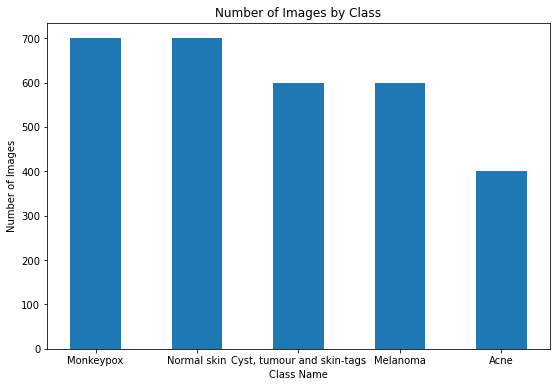

In [7]:
plt.figure(figsize=[9,6])
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('Number of Images');

The dataset contains 23.3% of data related to the Monkeypox and Normal Skin, 20% of data related to the Melanoma and Cyst, tumour and skin-tags. The least percentage of data are present for the Acne. It is 13.3% from the whole dataset. These data concludes that the dataset is imbalanced. Also, when looking at the above graphical images distribution, we can get an good understanding of the imbalanced nature of the dataset.

### Compare image sizes for each class <a class="anchor" id="section_2_2"></a>

In [7]:
def get_dims(file):
    #Returns dimenstions for an RBG image
    im = Image.open(file)
    arr = np.array(im)
    h,w,d = arr.shape
    return h,w

[########################################] | 100% Completed |  1.1s
[########################################] | 100% Completed |  1.2s
[########################################] | 100% Completed |  4.2s
[########################################] | 100% Completed |  1.5s
[########################################] | 100% Completed |  1.9s


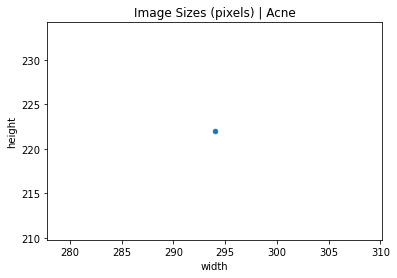

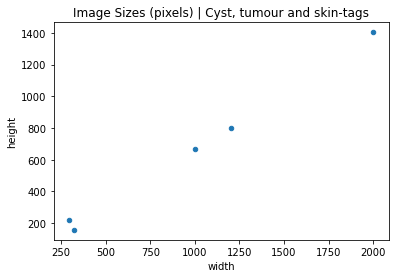

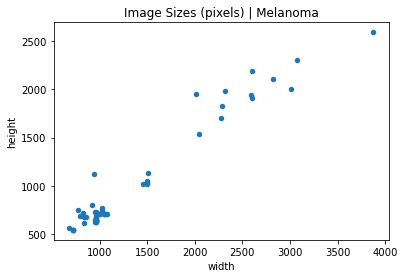

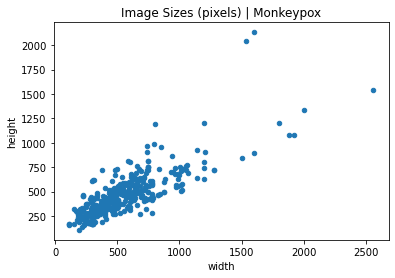

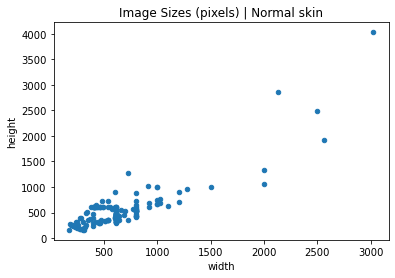

In [8]:
for n in sub_folders:
    filepath = f'{dataset_folder}/{n}/'
    
    filelist = [filepath + f for f in os.listdir(filepath)]
    dims = bag.from_sequence(filelist).map(get_dims)
    with ProgressBar():
        dims = dims.compute()
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='width', y='height');
    plt.title('Image Sizes (pixels) | {}'.format(n))


As the next step of the EDA, we performed an image size analysis of each disease type in the dataset. The analysis showed that there are significant variations of the image sizes in Monkeypox, Normal Skin, Melanoma and Cyst, tumour and skin-tags datasets. But, no variations of image sizes detected in Acne dataset.

### Cluster Analysis <a class="anchor" id="section_2_3"></a>

Performed a clustering analysis of each class against the Monkeypox class. Cluster analysis aims to identify groups of similar observations through group formation.

In [135]:
directories1 = {'Monkeypox': "datathon 2022 dataset/Monkeypox/",
               'Melanoma': "datathon 2022 dataset/Melanoma/"}
directories2 = {'Monkeypox': "datathon 2022 dataset/Monkeypox/",
               'Cyst_tumour_skin_tags': "datathon 2022 dataset/Cyst, tumour and skin-tags/"}
directories3 = {'Monkeypox': "datathon 2022 dataset/Monkeypox/",
               'Acne': "datathon 2022 dataset/Acne/"}
directories4 = {'Monkeypox': "datathon 2022 dataset/Monkeypox/",
               'Normal_skin': "datathon 2022 dataset/Normal skin/"}

def cluster_graph(a):
    data = []
    label = []
    IMG_SIZE = 32
    direc = a
    for n,e in direc.items():       
        for file in os.listdir(e):
            img=cv2.imread(e+file)
            img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
            img=img.astype('float32')
            label.append(n)
            data.append(img)
    data = np.array(data)

    data = data/255.0
    reshaped_data = data.reshape(len(data),-1)

    kmeans1 = KMeans(n_clusters=5, random_state=0)

    clusters = kmeans1.fit_predict(reshaped_data)
    kmeans1.cluster_centers_.shape
    return kmeans1


C:\Users\Tinul Piumika\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Tinul Piumika\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Tinul Piumika\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Tinul Piumika\AppData\Roaming\Python\Python39\sit

Text(0.5, 1.0, 'Monkeypox vs Normal Classes')

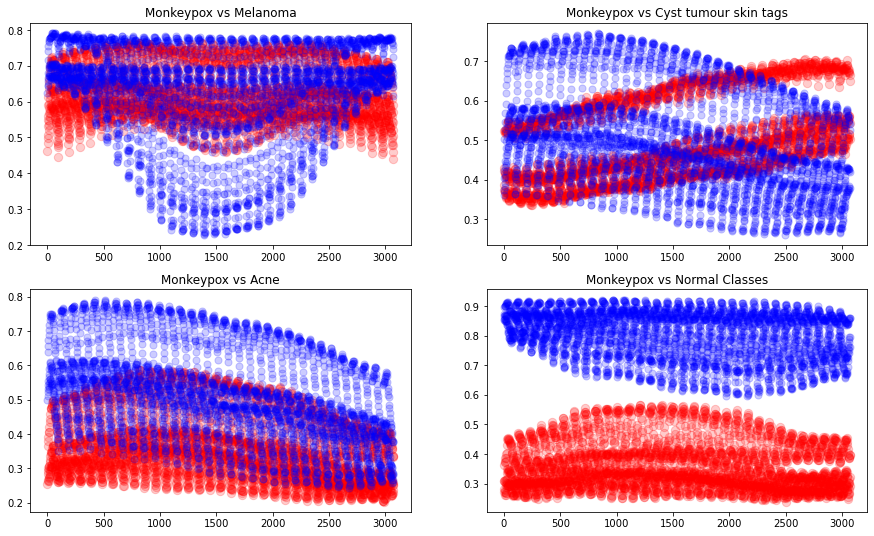

In [139]:
figure, axis = plt.subplots(2, 2, figsize=(15,9))

x_data = [i for i in range(3072)]

kmeans1 = cluster_graph(directories1)
axis[0, 0].scatter(x_data,kmeans1.cluster_centers_[0], color = 'red',alpha=0.2,s=70)
axis[0, 0].scatter(x_data,kmeans1.cluster_centers_[1] , color = 'blue',alpha=0.2,s=50)
axis[0, 0].set_title("Monkeypox vs Melanoma")

kmeans2 = cluster_graph(directories2)
axis[0, 1].scatter(x_data,kmeans2.cluster_centers_[0], color = 'red',alpha=0.2,s=70)
axis[0, 1].scatter(x_data,kmeans2.cluster_centers_[1] , color = 'blue',alpha=0.2,s=50)
axis[0, 1].set_title("Monkeypox vs Cyst tumour skin tags")

kmeans3 = cluster_graph(directories3)
axis[1, 0].scatter(x_data,kmeans3.cluster_centers_[0], color = 'red',alpha=0.2,s=70)
axis[1, 0].scatter(x_data,kmeans3.cluster_centers_[1] , color = 'blue',alpha=0.2,s=50)
axis[1, 0].set_title("Monkeypox vs Acne")

kmeans4 = cluster_graph(directories4)
axis[1, 1].scatter(x_data,kmeans4.cluster_centers_[0], color = 'red',alpha=0.2,s=70)
axis[1, 1].scatter(x_data,kmeans4.cluster_centers_[1] , color = 'blue',alpha=0.2,s=50)
axis[1, 1].set_title("Monkeypox vs Normal Classes")

From the above diagram, can see there are intersections between the images of the Monkeypox class and the Melanoma, acne, Cyst, tumor and skin-tags classes. Most intersections can be seen in the Acne class with Monkeyfox class when compared with the other classes. No intersections can be seen in the images of the Monkeypox class and the Normal class.

# 2) Data Preparation and Pre-processing <a class="anchor" id="chapter3"></a>

## a)Labeling Images <a class="anchor" id="section_3_1"></a>

In [8]:
# Reading folder names as labels and images underneath
i=0
last=[]
images=[]
labels=[]
ls = []
temp = sub_folders

# reading folders in the main dataset folder, one at a time
for sub_folder in sub_folders:
    sub_folder_index = temp.index(sub_folder)
    label = sub_folder_index
  
    path = dataset_folder+'/'+sub_folder
    sub_folder_images= os.listdir(path)
  
    # reading images in the sub folder, one at a time
    for image in sub_folder_images:
        image_path = path+'/'+image
        #print(image_path+"\t"+str(label))
        ls.append(path.split('/')[1])
        image = cv2.imread(image_path)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        #image= cv2.resize(image,(224,224))
        
        image_from_array = Image.fromarray(image, 'RGB')
        resized_image = image_from_array.resize((224, 224))
        images.append(np.array(resized_image))
        
        #if class is monkeypox label it as 1
        if sub_folder == 'Monkeypox':
            labels.append(1)
        else:
            #other classes as 0
            labels.append(0)
        i+=1
    last.append(i)

In [9]:
#This function will return the percentage of the classes with respect to total count
def getPercent(num_a, num_b):
    return (num_a /(num_a + num_b)) * 100

In [10]:
a = pd.DataFrame(labels).value_counts()

#print value counts for each classes
print(a)
print(f"\nMajority class percentage : {getPercent(a[0],a[1])}")

0    2300
1     700
dtype: int64

Majority class percentage : 76.66666666666667


The dataset received is moderately imbalanced. The class attribute contains output category values in the ratio of 76:24. To overcome this imbalanced nature, we used the image augmentation technique to over-sample the dataset. To balance the dataset, we oversampled the dataset such that the class attribute contains output category values in the ratio of 6.5:3.5.

# 3) Image Augmentation for imbalance dataset <a class="anchor" id="section_3_2"></a>

Image augmentation is the process of generating new training examples from existing ones. To make new samples, slightly change the original images.
Augmentation techniques that use to remove the imbalanced nature of the dataset:

- Position Manipulation: This can change the image position in many different ways. Position manipulation methods include:
    -  Scaling: Increase or decrease the picture size.
    -  Rotation: Rotate the image to generate new angles.
    -  Flipping: Flip the image left, right, or upside down.
- Blur: A blur is a shape or area which cannot see clearly because it has no distinct outline.
- Grid Distortion: An image warping technique that is driven by the mapping between equivalent families of curves, arranged in a grid structure
- ToGray: Convert the input RGB image to grayscale. If the mean pixel value for the resulting image is greater than 127, invert the resulting grayscale image.
- InvertImg: Invert the input image by subtracting pixel values from 255.



In [11]:
input_ls = listdir(dataset_folder+'/'+sub_folders[3])
input_ls.sort()
input_path = dataset_folder + '/'+sub_folders[3]+'/'

def read_image(url):
    #image = imageio.imread(url)
    image = cv2.imread(url)
    image_from_array = Image.fromarray(image, 'RGB')
    resized_image = image_from_array.resize((224, 224))
    return np.array(resized_image)

def augment_and_return(aug, image):
    aimg = aug(image=image)['image']
    return aimg

def save_augmented_image(aimg, image, directory):
    uri = directory + "/" + image
    imageio.imwrite(uri, aimg)

In [12]:
#A dictionary with Albumentation methos
listagF = {"HorizontalFlip": "A.HorizontalFlip(p=1)",
          "VerticalFlip": "A.VerticalFlip(p=1)",
          "GaussNoise": "A.GaussNoise(p=1)",
           "Blur" : "A.AdvancedBlur(p=1)",
           "ShiftScaleRotate" : "A.ShiftScaleRotate(scale_limit=0.20,rotate_limit=10, shift_limit=0.1, p=1, border_mode=1, value=0)",
           "GridDistortion" : "A.GridDistortion(p=1)",
           "InvertImg" : "A.InvertImg(p=1)",
           "ToGray" : "A.ToGray(p=1)",
          }
#Getting keys and values from dictionary to seperate two lists
keys = list(listagF.keys())
values = list(listagF.values())

#final expected image count
x = 1200

input_images = input_ls.copy()

#count of input dir images
l = len(input_images)
l2 = len(input_images)

#Augmented image list and labels
aug_list = []
aug_labels=[]

#Check whether final expected image count is greater than input image count
if(x > l):
    for y in range (0, x - l ) :
        #Generate a integer to select albumentation
        k = random.randrange(1,len(keys))
        
        #convert the albumentation string as executable
        aug = eval(values[k])
        
        #Generate a integer to select the image to be augmented
        z = random.randrange(1,l2)
        im = input_images[z]
        
        #create the path to the image concatinating input folder path and image name
        path2img = input_path + input_images[z]
        image = read_image(path2img)
        
        #augmenting the image 
        aimg = aug(image=image)['image']   
        image_from_array = Image.fromarray(aimg, 'RGB')
        resized_image = image_from_array.resize((224, 224))
        
        aug_list.append(np.array(aimg))
        aug_labels.append(1)
        
        images.append(np.array(aimg))
        labels.append(1)
        
        #Remove the augmented image from the list in order to avoid augmneted image duplication
        input_images.remove(input_images[z])
        l2 = l2 - 1
            
        #save_augmented_image(aimg, y, input_path)

In [13]:
a = pd.DataFrame(labels).value_counts()
print(a)
getPercent(a[0],a[1])

0    2300
1    1200
dtype: int64


65.71428571428571

In [14]:
a = pd.DataFrame(labels).value_counts()

#print datacount after oversample the dataset using image augmentation 
print(a)
print(f"\nMajority class percentage : {getPercent(a[0],a[1])}")

0    2300
1    1200
dtype: int64

Majority class percentage : 65.71428571428571


## c) Convert Image Feature & Labels to Array <a class="anchor" id="section_3_3"></a>

In [15]:
#converting features and labels in array
features=np.array(images)
labels=np.array(labels)

# saving features and labels for later re-use
np.save("datathon_dataset/features_train",features)
np.save("datathon_dataset/labels_train",labels)

In [16]:
features=np.load("datathon_dataset/features_train.npy")
labels=np.load("datathon_dataset/labels_train.npy")

s=np.arange(features.shape[0])
np.random.shuffle(s)
features=features[s]
labels=labels[s]

num_classes=len(np.unique(labels))
len_data=len(features)
print(len_data)

3500


### Split data into traning and testing

In [17]:
# splitting dataset into 80:20 ratio (80% for training and 20% for testing)
(x_train,x_test)=features[(int)(0.2*len_data):],features[:(int)(0.2*len_data)]

(y_train,y_test)=labels[(int)(0.2*len_data):],labels[:(int)(0.2*len_data)]

## d) Normalization <a class="anchor" id="section_3_4"></a>

In [18]:
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

print(f'Train size: {train_len}' )
print(f'Test size: {test_len}' )

#Doing One hot encoding as classifier has multiple classes
y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)

Train size: 2800
Test size: 700


In [19]:
# Hyper parameters
epochs = 50
batch_size = 32

conv_base = MobileNetV2(
    include_top=False,
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = True

In [20]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x) 
predictions = layers.Dense(2, activation='softmax')(x)
model = Model(conv_base.input, predictions)

# 4)  Model Training and Optimization <a class="anchor" id="chapter4"></a>

## a) Model Traning  <a class="anchor" id="section_4_2"></a>

In [21]:
# Define the optimizer
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 Conv1 (Conv2D)                 (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, None, None,   128         ['Conv1[0][0]']                  
                                32)                                                           

C:\Users\Tinul Piumika\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [22]:
checkpoint = ModelCheckpoint('.mdl_wts.hdf5', monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, 
                                   verbose=1, mode='min', min_lr=0.0000001)



callbacks = [checkpoint,reduce_lr]

In [23]:
history = model.fit(x_train,y_train,batch_size=batch_size,callbacks=callbacks, validation_data=(x_test,y_test),epochs=epochs,verbose=1)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 0.3010 - accuracy: 0.8811
Epoch 1: val_accuracy improved from -inf to 0.72286, saving model to .mdl_wts.hdf5
88/88 [==============================] - 220s 2s/step - loss: 0.3010 - accuracy: 0.8811 - val_loss: 5.5055 - val_accuracy: 0.7229 - lr: 0.0010
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.1995 - accuracy: 0.9221
Epoch 2: val_accuracy improved from 0.72286 to 0.77714, saving model to .mdl_wts.hdf5
88/88 [==============================] - 212s 2s/step - loss: 0.1995 - accuracy: 0.9221 - val_loss: 3.8317 - val_accuracy: 0.7771 - lr: 0.0010
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.1342 - accuracy: 0.9507
Epoch 3: val_accuracy did not improve from 0.77714
88/88 [==============================] - 204s 2s/step - loss: 0.1342 - accuracy: 0.9507 - val_loss: 10.3473 - val_accuracy: 0.3357 - lr: 0.0010
Epoch 4/50
88/88 [==============================] - ETA: 0s - loss: 

## b) Hyper Parameter Tuning <a class="anchor" id="section_4_1"></a>

In [144]:
# Instantiate the tuner
tuner = kt.Hyperband(build_model,
                     objective="val_loss",
                     max_epochs=20,
                     factor=3,
                     hyperband_iterations=10,
                     directory="kt_dir",
                     project_name="kt_hyperband",)

INFO:tensorflow:Reloading Oracle from existing project kt_dir\kt_hyperband\oracle.json


In [145]:
# Display search space summary
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
dropout_1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.3, 'step': 0.1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32], 'ordered': True}


In [142]:
# ResNet expects shape of convolutional layer
x_train_res = x_train.reshape(-1, 28, 28, 1)
#.reshape(-1, 28, 28, 1)
x_test_res = x_test.reshape(-1, 28, 28, 1)

# ResNet expects one-hot encoded labels
y_train_res = keras.utils.to_categorical(x_train_res)
y_test_res = keras.utils.to_categorical(x_test_res)

#print(x_test_res.shape)
#print(y_train_res.shape)


In [ ]:
def hyper_parameter_tuning(a):
    if a==0: 
        tuner.search(x_train_res, y_train_res, epochs=NUM_EPOCHS, validation_split=0.2, verbose=2)
        
hyper_parameter_tuning(1) #pass 0 in order to run hyper parameter search (since its taking too much time)

Trial 149 Complete [00h 42m 57s]
val_loss: 0.5

Best val_loss So Far: 0.2500000298023224
Total elapsed time: 19h 03m 42s

Search: Running Trial #150

Value             |Best Value So Far |Hyperparameter
2                 |5                 |num_layers
480               |64                |units_1
0.2               |0.3               |dropout_1
0.0001            |0.001             |learning_rate
32                |8                 |units
20                |3                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
0                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/20
11520/11520 - 138s - loss: 0.2503 - val_loss: 0.2500 - 138s/epoch - 12ms/step
Epoch 2/20
11520/11520 - 136s - loss: 0.2500 - val_loss: 0.2500 - 136s/epoch - 12ms/step
Epoch 3/20
11520/11520 - 130s - loss: 0.2500 - val_loss: 0.2500 - 130s/epoch - 11ms/step
Epoch 4/20
11520/11520 - 137s - loss: 0.2500 - val_loss: 0.2500 - 137s/epoch - 

## c) Test & Evaluation <a class="anchor" id="chapter5"></a>

### Loss plot and Accuracy plot <a class="anchor" id="section_5_1"></a>

An accuracy plot shows how accurately a model can predict the correct output or label for a given data point.

A loss plot, on the other hand, is a graph that shows the value of the loss function for a given model, over several epochs.


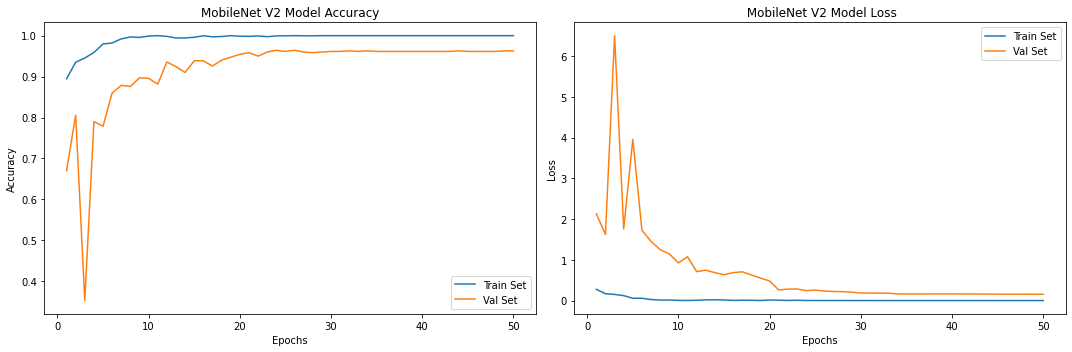

In [112]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('MobileNet V2 Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(' MobileNet V2 Model Loss')

plt.tight_layout()
plt.show()

In [113]:
# saving the weight of model
from numpy import loadtxt
from keras.models import load_model
model = load_model('.mdl_wts.hdf5')

#checking the score of the model
score=model.evaluate(x_test,y_test)
print(score)

22/22 [==============================] - 15s 517ms/step - loss: 0.2445 - accuracy: 0.9643
[0.24448654055595398, 0.9642857313156128]


In [114]:
#x_val=np.load("datathon_dataset/features_val.npy")
#y_val=np.load("datathon_dataset/labels_val.npy")
x_val = x_test
y_val = y_test
s=np.arange(x_val.shape[0])
np.random.shuffle(s)
x_val=x_val[s]
y_val=y_val[s]

# x_val = x_val.astype('float32')/255
# y_val=to_categorical(y_val,num_classes)

In [115]:
# checking the accuracy of thr 
accuracy = model.evaluate(x_val, y_val, verbose=1)
print('\n', 'Validation_Accuracy:-', accuracy[1])

22/22 [==============================] - 13s 511ms/step - loss: 0.2445 - accuracy: 0.9643

 Validation_Accuracy:- 0.9642857313156128


### Confusion Matrix <a class="anchor" id="section_5_2"></a>

A confusion matrix is a useful machine learning method that allows measuring recall, precision, accuracy, and the AUC-ROC curve. The following is the confusion matrix that is used in the implemented model to predict the monkeypox disease.

22/22 [==============================] - 13s 498ms/step


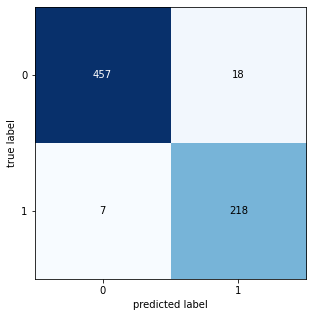

In [116]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_val)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_val,axis = 1)

#creating confusion matrix
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
# plotting confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

### Classification report <a class="anchor" id="section_5_3"></a>

A classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives, and False Negatives are used to predict the metrics of a classification report. The following is the classification report that is used in the implemented model to predict the monkeypox disease.

In [117]:
print('{}'.format(classification_report(y_true , pred)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       475
           1       0.92      0.97      0.95       225

    accuracy                           0.96       700
   macro avg       0.95      0.97      0.96       700
weighted avg       0.97      0.96      0.96       700



## Inference  <a class="anchor" id="section_4_3"></a>

22/22 [==============================] - 11s 489ms/step


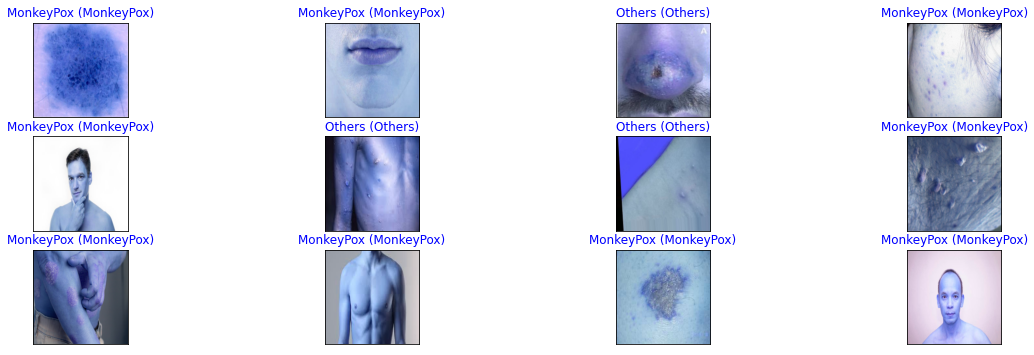

In [119]:
y_hat = model.predict(x_val)

# define text labels 
m_labels = ['MonkeyPox','Others']

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_val.shape[0], size=12, replace=False)):
    ax = fig.add_subplot(4,4, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_val[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_val[idx])
    ax.set_title("{} ({})".format(m_labels[pred_idx], m_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

# 5) Visual Saliency Map Generation using Explainable AI  <a class="anchor" id="chapter5"></a>

Explainable AI is a set of tools and frameworks to help understand and interpret predictions made by machine learning models. The LIME library is used to explain the predictions generated from the machine learning model. The model is interpreted by generating a visual saliency map. When a single image is provided, this approach generates a visual saliency map. 

In [24]:
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as c_map
from IPython.display import Image, display
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

import lime
from lime import lime_image
from lime import submodular_pick

from skimage.segmentation import mark_boundaries

import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

np.random.seed(123)

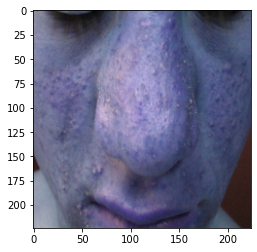

In [34]:
plt.imshow(x_test[12])

In [35]:
explainer = lime_image.LimeImageExplainer()

In [42]:
exp = explainer.explain_instance(x_test[12], 
                                 model.predict, 
                                 top_labels=5, 
                                 hide_color=0, 
                                 num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 161ms/step


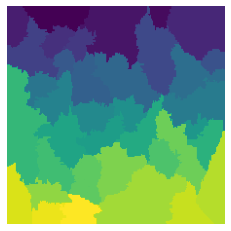

In [43]:
plt.imshow(exp.segments)
plt.axis('off')
plt.show()

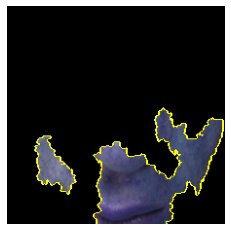

In [44]:
def generate_prediction_sample(exp, exp_class, weight = 0.1, show_positive = True, hide_background = True):
    '''
    Method to display and highlight super-pixels used by the black-box model to make predictions
    '''
    image, mask = exp.get_image_and_mask(exp_class, 
                                         positive_only=show_positive, 
                                         num_features=6, 
                                         hide_rest=hide_background,
                                         min_weight=weight
                                        )
    plt.imshow(mark_boundaries(image, mask))
    plt.axis('off')
    plt.show()
generate_prediction_sample(exp, exp.top_labels[0], show_positive = True, hide_background = True)

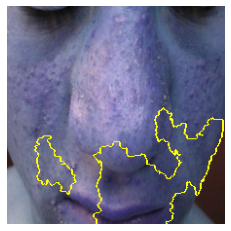

In [45]:
generate_prediction_sample(exp, exp.top_labels[0], show_positive = True, hide_background = False)


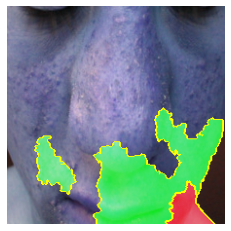

In [46]:
generate_prediction_sample(exp, exp.top_labels[0], show_positive = False, hide_background = False)

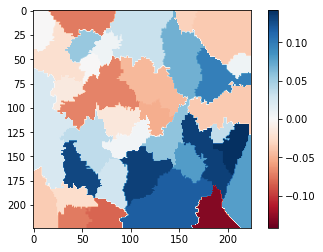

In [47]:
def explanation_heatmap(exp, exp_class):
    '''
    Using heat-map to highlight the importance of each super-pixel for the model prediction
    '''
    dict_heatmap = dict(exp.local_exp[exp_class])
    heatmap = np.vectorize(dict_heatmap.get)(exp.segments) 
    plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
    plt.colorbar()
    plt.show()

explanation_heatmap(exp, exp.top_labels[0])

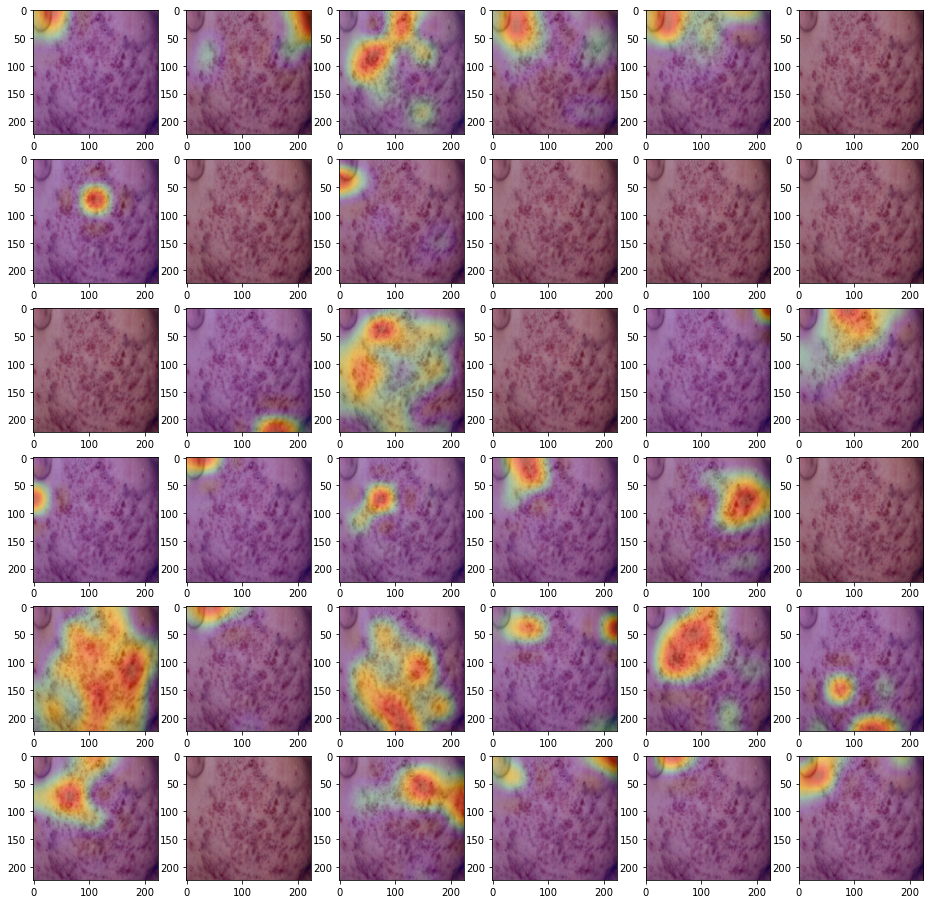

In [375]:
scale = 224 / 7
plt.figure(figsize=(16, 16))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.imshow(img)
    plt.imshow(zoom(conv[0, :,:,i], zoom=(scale, scale)), cmap='jet', alpha=0.3)

In [376]:
target = np.argmax(pred, axis=1).squeeze()
w, b = model.get_layer("predictions").weights
weights = w[:, target].numpy()
heatmap = conv.squeeze() @ weights

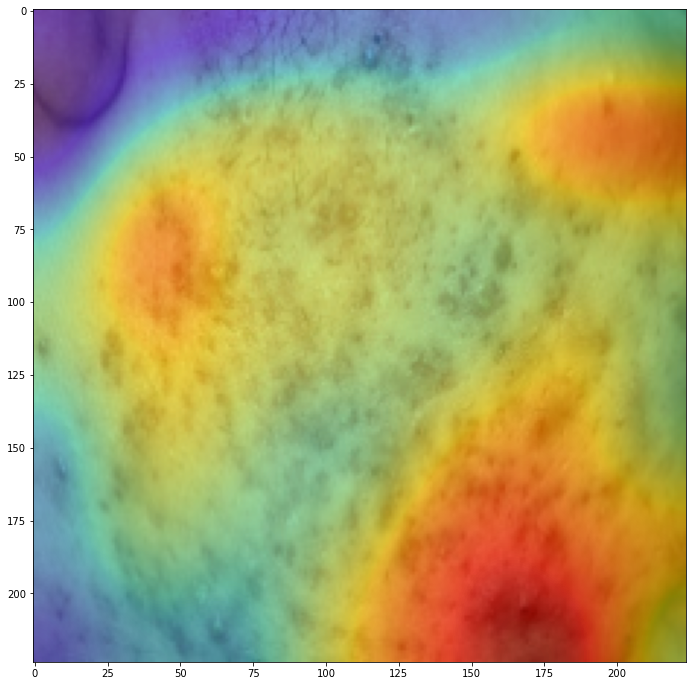

In [377]:
scale = 224 / 7
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.imshow(zoom(heatmap, zoom=(scale, scale)), cmap='jet', alpha=0.5)

# 6)  Solution for Acne-skin and monkeypox similarity.  <a class="anchor" id="chapter6"></a>

Acne typically presents as small, red, inflamed bumps on the face, chest, and back, while monkeypox typically presents as fluid-filled bumps or blisters that are more widespread and may also affect the mucous membranes.

To distinguish acne from monkeypox, need to implement deep learning models based on the above fact. The model should identify small, red, inflamed bumps as acne. Also, the distribution of acne is not large when compared with the distribution of monkeypox. That feature also can be used in a deep-learning model to distinguish acne from monkeypox. If the distribution of disease is large, the model can predict that as monkeypox. Also, if the bumps are largely fluid-filled, the model can predict that as monkeypox. The OpenCV (cv2) library can be used to detect most of the above-discussed features from images. 


In [49]:
import pickle
with open('final_cnn_model.pkl', 'wb') as p_file:
        pickle.dump(model, p_file) #Chanage the final model name

INFO:tensorflow:Assets written to: ram://282d317f-0e60-486d-a3e3-b9b24bd3553a/assets


INFO:tensorflow:Assets written to: ram://282d317f-0e60-486d-a3e3-b9b24bd3553a/assets
